Loading the Dataset

In [54]:
import pandas as pd


train_readability = pd.read_csv("D:/Project_2/dataset/processed_readability_data.csv")
train_stylistic = pd.read_csv("D:/Project_2/dataset/processed_stylistic_data.csv")
train_dense = pd.read_csv("D:/Project_2/dense_matrix.csv")


test_readability = pd.read_csv("D:/Project_2/dataset/processed_readability_data_test.csv")
test_stylistic = pd.read_csv("D:/Project_2/dataset/processed_stylistic_data_test.csv")
test_dense = pd.read_csv("D:/Project_2/dense_matrix_test.csv")


Merging the features

In [55]:

train_dense = train_dense.reset_index()
test_dense = test_dense.reset_index()

train_merged = train_readability.merge(train_stylistic, on="essay").merge(train_dense, left_index=True, right_index=True)
test_merged = test_readability.merge(test_stylistic, on="essay").merge(test_dense, left_index=True, right_index=True)


In [56]:

print("Train Readability Columns:", train_readability.columns)
print("Train Stylistic Columns:", train_stylistic.columns)
print("Train Dense Columns:", train_dense.columns)

print("Test Readability Columns:", test_readability.columns)
print("Test Stylistic Columns:", test_stylistic.columns)
print("Test Dense Columns:", test_dense.columns)


Train Readability Columns: Index(['essay', 'label', 'flesch_kincaid', 'flesch_reading_ease',
       'gunning_fog', 'smog_index', 'coleman_liau',
       'automated_readability_index', 'dale_chall'],
      dtype='object')
Train Stylistic Columns: Index(['essay', 'label', 'pos', 'shape', 'ttr', 'root_ttr', 'log_ttr',
       'maas_ttr', 'msttr', 'mattr', 'hdd', 'mtld', 'mtld_ma_wrap',
       'mtld_ma_bid'],
      dtype='object')
Train Dense Columns: Index(['index', 'Unnamed: 0', 'o->-', 'o->o', 'o->s', 'o->x', 's->-', 's->o',
       's->s', 's->x', 'x->-', 'x->o', 'x->s', 'x->x'],
      dtype='object')
Test Readability Columns: Index(['essay', 'label', 'flesch_kincaid', 'flesch_reading_ease',
       'gunning_fog', 'smog_index', 'coleman_liau',
       'automated_readability_index', 'dale_chall'],
      dtype='object')
Test Stylistic Columns: Index(['essay', 'label', 'pos', 'shape', 'ttr', 'root_ttr', 'log_ttr',
       'maas_ttr', 'msttr', 'mattr', 'hdd', 'mtld', 'mtld_ma_wrap',
       'mtld

Extracting features and Labels

In [57]:

print(train_merged.columns)
print(test_merged.columns)


Index(['essay', 'label_x', 'flesch_kincaid', 'flesch_reading_ease',
       'gunning_fog', 'smog_index', 'coleman_liau',
       'automated_readability_index', 'dale_chall', 'label_y', 'pos', 'shape',
       'ttr', 'root_ttr', 'log_ttr', 'maas_ttr', 'msttr', 'mattr', 'hdd',
       'mtld', 'mtld_ma_wrap', 'mtld_ma_bid', 'index', 'Unnamed: 0', 'o->-',
       'o->o', 'o->s', 'o->x', 's->-', 's->o', 's->s', 's->x', 'x->-', 'x->o',
       'x->s', 'x->x'],
      dtype='object')
Index(['essay', 'label_x', 'flesch_kincaid', 'flesch_reading_ease',
       'gunning_fog', 'smog_index', 'coleman_liau',
       'automated_readability_index', 'dale_chall', 'label_y', 'pos', 'shape',
       'ttr', 'root_ttr', 'log_ttr', 'maas_ttr', 'msttr', 'mattr', 'hdd',
       'mtld', 'mtld_ma_wrap', 'mtld_ma_bid', 'index', 'Unnamed: 0', 'o->-',
       'o->o', 'o->s', 'o->x', 's->-', 's->o', 's->s', 's->x', 'x->-', 'x->o',
       'x->s', 'x->x'],
      dtype='object')


In [58]:

print("Train 'pos' data type:", train_merged['pos'].dtype)
print("Train 'shape' data type:", train_merged['index'].dtype)

print("Test 'pos' data type:", test_merged['pos'].dtype)
print("Test 'shape' data type:", test_merged['index'].dtype)

is_train_pos_numeric = np.issubdtype(train_merged['pos'].dtype, np.number)
is_train_shape_numeric = np.issubdtype(train_merged['index'].dtype, np.number)

is_test_pos_numeric = np.issubdtype(test_merged['pos'].dtype, np.number)
is_test_shape_numeric = np.issubdtype(test_merged['index'].dtype, np.number)

print("'pos' in train is numeric:", is_train_pos_numeric)
print("'shape' in train is numeric:", is_train_shape_numeric)

print("'pos' in test is numeric:", is_test_pos_numeric)
print("'shape' in test is numeric:", is_test_shape_numeric)


Train 'pos' data type: object
Train 'shape' data type: int64
Test 'pos' data type: object
Test 'shape' data type: int64
'pos' in train is numeric: False
'shape' in train is numeric: True
'pos' in test is numeric: False
'shape' in test is numeric: True


In [59]:

X_train = train_merged.drop(columns=['essay', 'label_x']).values
X_test = test_merged.drop(columns=['essay', 'label_x']).values


y_train = train_merged['label_x'].values
y_test = test_merged['label_x'].values


In [60]:
# Inspect X_train and X_test
print("X_train type:", type(X_train))
print("X_train shape:", X_train.shape)
print("X_train example (first row):", X_train[0])

print("X_test type:", type(X_test))
print("X_test shape:", X_test.shape)
print("X_test example (first row):", X_test[0])

# Inspect y_train and y_test
print("y_train type:", type(y_train))
print("y_train shape:", y_train.shape)
print("y_train example (first 10 values):", y_train[:10])

print("y_test type:", type(y_test))
print("y_test shape:", y_test.shape)
print("y_test example (first 10 values):", y_test[:10])


X_train type: <class 'numpy.ndarray'>
X_train shape: (28798, 34)
X_train example (first row): [10.7 57.5 11.58 12.8 11.08 13.1 7.46 'human'
 "ADJ NOUN have always been VERB and VERB about in an ADJ NOUN where the ADJ NOUN VERB ADJ NOUN NOUN and VERB in ADJ NOUN . However , with the ADJ NOUN in this NOUN , our NOUN will most ADV see NOUN NOUN , VERB the ADJ into the ADJ SPACE ADJ NOUN are a ADJ NOUN ADV for NOUN , but we must VERB ADJ about the NOUN used to VERB . There are many ADJ NOUN that NOUN NOUN VERB . It is a NOUN in itself that NOUN and NOUN have VERB this ADV . However , we can not become ADV ADJ on NOUN NOUN . SPACE The NOUN NOUN NOUN is one that has many ADJ NOUN . The ADJ NOUN to NOUN NOUN is that it VERB the NOUN for ADJ NOUN when on the NOUN . SPACE This not only VERB the NOUN a ADJ NOUN but it will also VERB the NOUN of NOUN by NOUN NOUN , which is the NOUN one NOUN of NOUN for NOUN . However , because NOUN NOUN can also make NOUN , they still have a NOUN who in NOUN , h

In [61]:

train_merged['label_x'] = train_merged['label_x'].map({'human': 0, 'LLM': 1})
test_merged['label_x'] = test_merged['label_x'].map({'human': 0, 'LLM': 1})


print(train_merged['label_x'].head())
print(test_merged['label_x'].head())


0    0
1    0
2    0
3    0
4    0
Name: label_x, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: label_x, dtype: int64


In [62]:
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm  


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


def encode_essays(essays):
    
    embeddings = []
    
    
    for essay in tqdm(essays, desc="Processing essays", unit="essay"):
       
        encoded_inputs = tokenizer(essay, padding=True, truncation=True, return_tensors='pt').to(device)
        
        
        with torch.no_grad():
            outputs = model(**encoded_inputs)
        
        
        embeddings.append(outputs.last_hidden_state[:, 0, :].cpu().numpy())  
    
    
    return np.vstack(embeddings)


X_train_text = encode_essays(train_merged['essay'])
X_test_text = encode_essays(test_merged['essay'])


def extract_numeric_features(df):
    
    numeric_columns = df.drop(columns=['essay', 'label_x','label_y','index']).select_dtypes(include=[np.number])
    return numeric_columns.values


X_train_numeric = extract_numeric_features(train_merged)
X_test_numeric = extract_numeric_features(test_merged)


X_train = np.hstack([X_train_numeric, X_train_text]) 
X_test = np.hstack([X_test_numeric, X_test_text])    

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

print("First training vector:", X_train[0])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Processing essays: 100%|██████████| 1000/1000 [01:26<00:00, 11.60essay/s]


Training data shape: (28798, 798)
Test data shape: (1000, 798)
First training vector: [ 1.07000000e+01  5.75000000e+01  1.15800000e+01  1.28000000e+01
  1.10800000e+01  1.31000000e+01  7.46000000e+00  3.58695652e-01
  9.10267519e+00  8.41476689e-01  5.64363660e-02  8.23333333e-01
  8.07294118e-01  8.15262499e-01  7.71180260e+01  7.81444099e+01
  7.66655372e+01  0.00000000e+00  2.57142850e+00  7.14285750e-02
  1.07142860e-01  7.14285750e-02  1.50000000e+00  7.14285750e-02
  3.57142870e-01  0.00000000e+00  6.78571400e-01  7.14285750e-02
  0.00000000e+00  1.07142860e-01 -6.93021640e-02 -3.02274287e-01
  2.40390047e-01  7.18156815e-01 -3.35885376e-01 -2.78332859e-01
  3.30515862e-01  1.00614107e+00 -4.57032144e-01 -1.15727782e+00
  5.40218413e-01  2.57574826e-01 -8.04753721e-01  8.84188652e-01
  6.78465515e-02  1.92449361e-01  1.73478853e-02  1.03146601e+00
  6.35646358e-02  4.28001493e-01 -1.61001205e-01 -2.16741309e-01
  1.19300532e+00  8.18212390e-01  2.17148244e-01 -8.53200674e-01
 -3.

In [ ]:
# import numpy as np
# import torch
# from transformers import BertTokenizer, BertModel
# from tqdm import tqdm  # Import tqdm for progress tracking

# # Initialize the BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# # Check if GPU is available and use it
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

# # Function to encode the text using BERT and return [CLS] token embeddings
# def encode_essays(essays):
#     # Create a list to store the embeddings
#     embeddings = []
#     print(f"Total essays to process: {len(essays)}")

#     # Loop through essays with tqdm progress bar
#     for i, essay in enumerate(tqdm(essays, desc="Processing essays", unit="essay")):
#         # Tokenize the essay text
#         encoded_inputs = tokenizer(essay, padding=True, truncation=True, return_tensors='pt').to(device)
#         print(f"Essay {i + 1} tokenized shape: {encoded_inputs['input_ids'].shape}")

#         # Get BERT output (last hidden state)
#         with torch.no_grad():
#             outputs = model(**encoded_inputs)

#         # Extract the [CLS] token embedding and add it to the embeddings list
#         cls_embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
#         print(f"Essay {i + 1} [CLS] embedding shape: {cls_embedding.shape}")
#         embeddings.append(cls_embedding)

#     # Convert the list of embeddings to a numpy array
#     embeddings_array = np.vstack(embeddings)
#     print(f"Final BERT embeddings array shape: {embeddings_array.shape}")
#     return embeddings_array

# # Convert the 'essay' column in train and test dataframes to BERT embeddings
# print("Encoding training essays...")
# X_train_text = encode_essays(train_merged['essay'])
# print("Encoding test essays...")
# X_test_text = encode_essays(test_merged['essay'])

# # Extract numeric features from train_merged and test_merged (excluding 'essay' and 'label_x')
# def extract_numeric_features(df):
#     # Select all columns that are numeric (excluding 'essay' and 'label_x')
#     numeric_columns = df.drop(columns=['essay', 'label_x']).select_dtypes(include=[np.number])
#     print(f"Numeric feature matrix shape: {numeric_columns.shape}")
#     return numeric_columns.values

# # Extract numeric features for train and test data
# print("Extracting numeric features from training data...")
# X_train_numeric = extract_numeric_features(train_merged)
# print("Extracting numeric features from test data...")
# X_test_numeric = extract_numeric_features(test_merged)

# # Concatenate BERT embeddings with numeric features
# print("Concatenating BERT embeddings with numeric features...")
# X_train = np.hstack([X_train_numeric, X_train_text])  # Concatenate the text embeddings with numeric features
# X_test = np.hstack([X_test_numeric, X_test_text])    # Concatenate the text embeddings with numeric features

# # Check the shape of the resulting feature matrices
# print(f"Training numeric features shape: {X_train_numeric.shape}")
# print(f"Training BERT embeddings shape: {X_train_text.shape}")
# print(f"Training data shape after concatenation: {X_train.shape}")

# print(f"Test numeric features shape: {X_test_numeric.shape}")
# print(f"Test BERT embeddings shape: {X_test_text.shape}")
# print(f"Test data shape after concatenation: {X_test.shape}")

# # If you want to verify the first few vectors:
# print("First training vector:", X_train[0])
# print("First test vector:", X_test[0])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Encoding training essays...
Total essays to process: 28798


Processing essays:   0%|          | 0/28798 [00:00<?, ?essay/s]

Essay 1 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 1/28798 [00:00<1:44:18,  4.60essay/s]

Essay 1 [CLS] embedding shape: (1, 768)
Essay 2 tokenized shape: torch.Size([1, 512])
Essay 2 [CLS] embedding shape: (1, 768)
Essay 3 tokenized shape: torch.Size([1, 512])
Essay 3 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 3/28798 [00:00<1:00:58,  7.87essay/s]

Essay 4 tokenized shape: torch.Size([1, 326])
Essay 4 [CLS] embedding shape: (1, 768)
Essay 5 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 5/28798 [00:00<49:59,  9.60essay/s]  

Essay 5 [CLS] embedding shape: (1, 768)
Essay 6 tokenized shape: torch.Size([1, 487])


Processing essays:   0%|          | 7/28798 [00:00<47:19, 10.14essay/s]

Essay 6 [CLS] embedding shape: (1, 768)
Essay 7 tokenized shape: torch.Size([1, 512])
Essay 7 [CLS] embedding shape: (1, 768)
Essay 8 tokenized shape: torch.Size([1, 249])
Essay 8 [CLS] embedding shape: (1, 768)
Essay 9 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 9/28798 [00:00<41:07, 11.67essay/s]

Essay 9 [CLS] embedding shape: (1, 768)
Essay 10 tokenized shape: torch.Size([1, 270])
Essay 10 [CLS] embedding shape: (1, 768)
Essay 11 tokenized shape: torch.Size([1, 319])


Processing essays:   0%|          | 11/28798 [00:00<35:18, 13.59essay/s]

Essay 11 [CLS] embedding shape: (1, 768)
Essay 12 tokenized shape: torch.Size([1, 512])
Essay 12 [CLS] embedding shape: (1, 768)
Essay 13 tokenized shape: torch.Size([1, 512])
Essay 13 [CLS] embedding shape: (1, 768)

Processing essays:   0%|          | 15/28798 [00:01<37:15, 12.87essay/s]


Essay 14 tokenized shape: torch.Size([1, 512])
Essay 14 [CLS] embedding shape: (1, 768)
Essay 15 tokenized shape: torch.Size([1, 263])
Essay 15 [CLS] embedding shape: (1, 768)
Essay 16 tokenized shape: torch.Size([1, 171])
Essay 16 [CLS] embedding shape: (1, 768)
Essay 17 tokenized shape: torch.Size([1, 236])


Processing essays:   0%|          | 20/28798 [00:01<29:29, 16.26essay/s]

Essay 17 [CLS] embedding shape: (1, 768)
Essay 18 tokenized shape: torch.Size([1, 217])
Essay 18 [CLS] embedding shape: (1, 768)
Essay 19 tokenized shape: torch.Size([1, 394])
Essay 19 [CLS] embedding shape: (1, 768)
Essay 20 tokenized shape: torch.Size([1, 192])
Essay 20 [CLS] embedding shape: (1, 768)
Essay 21 tokenized shape: torch.Size([1, 268])


Processing essays:   0%|          | 22/28798 [00:01<30:53, 15.52essay/s]

Essay 21 [CLS] embedding shape: (1, 768)
Essay 22 tokenized shape: torch.Size([1, 510])
Essay 22 [CLS] embedding shape: (1, 768)
Essay 23 tokenized shape: torch.Size([1, 512])
Essay 23 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 26/28798 [00:02<33:39, 14.25essay/s]

Essay 24 tokenized shape: torch.Size([1, 338])
Essay 24 [CLS] embedding shape: (1, 768)
Essay 25 tokenized shape: torch.Size([1, 228])
Essay 25 [CLS] embedding shape: (1, 768)
Essay 26 tokenized shape: torch.Size([1, 512])
Essay 26 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 28/28798 [00:02<35:32, 13.49essay/s]

Essay 27 tokenized shape: torch.Size([1, 367])
Essay 27 [CLS] embedding shape: (1, 768)
Essay 28 tokenized shape: torch.Size([1, 512])
Essay 28 [CLS] embedding shape: (1, 768)
Essay 29 tokenized shape: torch.Size([1, 426])


Processing essays:   0%|          | 32/28798 [00:02<33:46, 14.19essay/s]

Essay 29 [CLS] embedding shape: (1, 768)
Essay 30 tokenized shape: torch.Size([1, 512])
Essay 30 [CLS] embedding shape: (1, 768)
Essay 31 tokenized shape: torch.Size([1, 214])
Essay 31 [CLS] embedding shape: (1, 768)
Essay 32 tokenized shape: torch.Size([1, 333])
Essay 32 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 34/28798 [00:02<36:09, 13.26essay/s]

Essay 33 tokenized shape: torch.Size([1, 475])
Essay 33 [CLS] embedding shape: (1, 768)
Essay 34 tokenized shape: torch.Size([1, 512])
Essay 34 [CLS] embedding shape: (1, 768)
Essay 35 tokenized shape: torch.Size([1, 362])


Processing essays:   0%|          | 36/28798 [00:02<34:54, 13.73essay/s]

Essay 35 [CLS] embedding shape: (1, 768)
Essay 36 tokenized shape: torch.Size([1, 350])
Essay 36 [CLS] embedding shape: (1, 768)
Essay 37 tokenized shape: torch.Size([1, 287])
Essay 37 [CLS] embedding shape: (1, 768)
Essay 38 tokenized shape: torch.Size([1, 512])
Essay 38 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 40/28798 [00:03<34:24, 13.93essay/s]

Essay 39 tokenized shape: torch.Size([1, 377])
Essay 39 [CLS] embedding shape: (1, 768)
Essay 40 tokenized shape: torch.Size([1, 340])
Essay 40 [CLS] embedding shape: (1, 768)
Essay 41 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 42/28798 [00:03<38:09, 12.56essay/s]

Essay 41 [CLS] embedding shape: (1, 768)
Essay 42 tokenized shape: torch.Size([1, 512])
Essay 42 [CLS] embedding shape: (1, 768)
Essay 43 tokenized shape: torch.Size([1, 512])
Essay 43 [CLS] embedding shape: (1, 768)
Essay 44 tokenized shape: torch.Size([1, 410])


Processing essays:   0%|          | 46/28798 [00:03<36:22, 13.18essay/s]

Essay 44 [CLS] embedding shape: (1, 768)
Essay 45 tokenized shape: torch.Size([1, 512])
Essay 45 [CLS] embedding shape: (1, 768)
Essay 46 tokenized shape: torch.Size([1, 229])
Essay 46 [CLS] embedding shape: (1, 768)
Essay 47 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 50/28798 [00:03<35:43, 13.41essay/s]

Essay 47 [CLS] embedding shape: (1, 768)
Essay 48 tokenized shape: torch.Size([1, 322])
Essay 48 [CLS] embedding shape: (1, 768)
Essay 49 tokenized shape: torch.Size([1, 374])
Essay 49 [CLS] embedding shape: (1, 768)
Essay 50 tokenized shape: torch.Size([1, 387])
Essay 50 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 53/28798 [00:04<33:52, 14.14essay/s]

Essay 51 tokenized shape: torch.Size([1, 329])
Essay 51 [CLS] embedding shape: (1, 768)
Essay 52 tokenized shape: torch.Size([1, 231])
Essay 52 [CLS] embedding shape: (1, 768)
Essay 53 tokenized shape: torch.Size([1, 512])
Essay 53 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 55/28798 [00:04<36:23, 13.16essay/s]

Essay 54 tokenized shape: torch.Size([1, 512])
Essay 54 [CLS] embedding shape: (1, 768)
Essay 55 tokenized shape: torch.Size([1, 512])
Essay 55 [CLS] embedding shape: (1, 768)
Essay 56 tokenized shape: torch.Size([1, 263])


Processing essays:   0%|          | 58/28798 [00:04<33:30, 14.29essay/s]

Essay 56 [CLS] embedding shape: (1, 768)
Essay 57 tokenized shape: torch.Size([1, 304])
Essay 57 [CLS] embedding shape: (1, 768)
Essay 58 tokenized shape: torch.Size([1, 464])
Essay 58 [CLS] embedding shape: (1, 768)
Essay 59 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 62/28798 [00:04<35:29, 13.49essay/s]

Essay 59 [CLS] embedding shape: (1, 768)
Essay 60 tokenized shape: torch.Size([1, 512])
Essay 60 [CLS] embedding shape: (1, 768)
Essay 61 tokenized shape: torch.Size([1, 322])
Essay 61 [CLS] embedding shape: (1, 768)
Essay 62 tokenized shape: torch.Size([1, 418])
Essay 62 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 64/28798 [00:04<36:56, 12.96essay/s]

Essay 63 tokenized shape: torch.Size([1, 425])
Essay 63 [CLS] embedding shape: (1, 768)
Essay 64 tokenized shape: torch.Size([1, 425])
Essay 64 [CLS] embedding shape: (1, 768)
Essay 65 tokenized shape: torch.Size([1, 425])


Processing essays:   0%|          | 66/28798 [00:05<42:21, 11.31essay/s]

Essay 65 [CLS] embedding shape: (1, 768)
Essay 66 tokenized shape: torch.Size([1, 425])
Essay 66 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 68/28798 [00:05<46:36, 10.27essay/s]

Essay 67 tokenized shape: torch.Size([1, 345])
Essay 67 [CLS] embedding shape: (1, 768)
Essay 68 tokenized shape: torch.Size([1, 512])
Essay 68 [CLS] embedding shape: (1, 768)
Essay 69 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 72/28798 [00:05<40:46, 11.74essay/s]

Essay 69 [CLS] embedding shape: (1, 768)
Essay 70 tokenized shape: torch.Size([1, 512])
Essay 70 [CLS] embedding shape: (1, 768)
Essay 71 tokenized shape: torch.Size([1, 463])
Essay 71 [CLS] embedding shape: (1, 768)
Essay 72 tokenized shape: torch.Size([1, 254])
Essay 72 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 74/28798 [00:05<36:06, 13.26essay/s]

Essay 73 tokenized shape: torch.Size([1, 326])
Essay 73 [CLS] embedding shape: (1, 768)
Essay 74 tokenized shape: torch.Size([1, 217])
Essay 74 [CLS] embedding shape: (1, 768)
Essay 75 tokenized shape: torch.Size([1, 512])
Essay 75 [CLS] embedding shape: (1, 768)
Essay 76 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 78/28798 [00:06<38:40, 12.38essay/s]

Essay 76 [CLS] embedding shape: (1, 768)
Essay 77 tokenized shape: torch.Size([1, 512])
Essay 77 [CLS] embedding shape: (1, 768)
Essay 78 tokenized shape: torch.Size([1, 338])
Essay 78 [CLS] embedding shape: (1, 768)
Essay 79 tokenized shape: torch.Size([1, 471])


Processing essays:   0%|          | 80/28798 [00:06<38:36, 12.40essay/s]

Essay 79 [CLS] embedding shape: (1, 768)
Essay 80 tokenized shape: torch.Size([1, 438])
Essay 80 [CLS] embedding shape: (1, 768)
Essay 81 tokenized shape: torch.Size([1, 266])
Essay 81 [CLS] embedding shape: (1, 768)
Essay 82 tokenized shape: torch.Size([1, 321])
Essay 82 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 84/28798 [00:06<34:05, 14.04essay/s]

Essay 83 tokenized shape: torch.Size([1, 307])
Essay 83 [CLS] embedding shape: (1, 768)
Essay 84 tokenized shape: torch.Size([1, 409])
Essay 84 [CLS] embedding shape: (1, 768)
Essay 85 tokenized shape: torch.Size([1, 440])
Essay 85 [CLS] embedding shape: (1, 768)
Essay 86 tokenized shape: torch.Size([1, 315])


Processing essays:   0%|          | 88/28798 [00:06<33:11, 14.42essay/s]

Essay 86 [CLS] embedding shape: (1, 768)
Essay 87 tokenized shape: torch.Size([1, 512])
Essay 87 [CLS] embedding shape: (1, 768)
Essay 88 tokenized shape: torch.Size([1, 316])
Essay 88 [CLS] embedding shape: (1, 768)
Essay 89 tokenized shape: torch.Size([1, 292])
Essay 89 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 90/28798 [00:06<33:18, 14.36essay/s]

Essay 90 tokenized shape: torch.Size([1, 512])
Essay 90 [CLS] embedding shape: (1, 768)
Essay 91 tokenized shape: torch.Size([1, 512])
Essay 91 [CLS] embedding shape: (1, 768)
Essay 92 tokenized shape: torch.Size([1, 467])


Processing essays:   0%|          | 94/28798 [00:07<37:15, 12.84essay/s]

Essay 92 [CLS] embedding shape: (1, 768)
Essay 93 tokenized shape: torch.Size([1, 512])
Essay 93 [CLS] embedding shape: (1, 768)
Essay 94 tokenized shape: torch.Size([1, 449])
Essay 94 [CLS] embedding shape: (1, 768)
Essay 95 tokenized shape: torch.Size([1, 272])
Essay 95 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 99/28798 [00:07<30:44, 15.56essay/s]

Essay 96 tokenized shape: torch.Size([1, 216])
Essay 96 [CLS] embedding shape: (1, 768)
Essay 97 tokenized shape: torch.Size([1, 204])
Essay 97 [CLS] embedding shape: (1, 768)
Essay 98 tokenized shape: torch.Size([1, 298])
Essay 98 [CLS] embedding shape: (1, 768)
Essay 99 tokenized shape: torch.Size([1, 439])
Essay 99 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 101/28798 [00:07<33:13, 14.40essay/s]

Essay 100 tokenized shape: torch.Size([1, 512])
Essay 100 [CLS] embedding shape: (1, 768)
Essay 101 tokenized shape: torch.Size([1, 398])
Essay 101 [CLS] embedding shape: (1, 768)
Essay 102 tokenized shape: torch.Size([1, 187])


Processing essays:   0%|          | 103/28798 [00:07<32:24, 14.76essay/s]

Essay 102 [CLS] embedding shape: (1, 768)
Essay 103 tokenized shape: torch.Size([1, 486])
Essay 103 [CLS] embedding shape: (1, 768)
Essay 104 tokenized shape: torch.Size([1, 397])
Essay 104 [CLS] embedding shape: (1, 768)
Essay 105 tokenized shape: torch.Size([1, 384])


Processing essays:   0%|          | 107/28798 [00:08<33:41, 14.19essay/s]

Essay 105 [CLS] embedding shape: (1, 768)
Essay 106 tokenized shape: torch.Size([1, 512])
Essay 106 [CLS] embedding shape: (1, 768)
Essay 107 tokenized shape: torch.Size([1, 313])
Essay 107 [CLS] embedding shape: (1, 768)
Essay 108 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 109/28798 [00:08<32:59, 14.49essay/s]

Essay 108 [CLS] embedding shape: (1, 768)
Essay 109 tokenized shape: torch.Size([1, 208])
Essay 109 [CLS] embedding shape: (1, 768)
Essay 110 tokenized shape: torch.Size([1, 512])
Essay 110 [CLS] embedding shape: (1, 768)
Essay 111 tokenized shape: torch.Size([1, 376])


Processing essays:   0%|          | 113/28798 [00:08<34:39, 13.79essay/s]

Essay 111 [CLS] embedding shape: (1, 768)
Essay 112 tokenized shape: torch.Size([1, 289])
Essay 112 [CLS] embedding shape: (1, 768)
Essay 113 tokenized shape: torch.Size([1, 492])
Essay 113 [CLS] embedding shape: (1, 768)
Essay 114 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 117/28798 [00:08<32:49, 14.56essay/s]

Essay 114 [CLS] embedding shape: (1, 768)
Essay 115 tokenized shape: torch.Size([1, 269])
Essay 115 [CLS] embedding shape: (1, 768)
Essay 116 tokenized shape: torch.Size([1, 327])
Essay 116 [CLS] embedding shape: (1, 768)
Essay 117 tokenized shape: torch.Size([1, 332])
Essay 117 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 119/28798 [00:08<35:59, 13.28essay/s]

Essay 118 tokenized shape: torch.Size([1, 512])
Essay 118 [CLS] embedding shape: (1, 768)
Essay 119 tokenized shape: torch.Size([1, 512])
Essay 119 [CLS] embedding shape: (1, 768)
Essay 120 tokenized shape: torch.Size([1, 312])


Processing essays:   0%|          | 121/28798 [00:09<35:34, 13.44essay/s]

Essay 120 [CLS] embedding shape: (1, 768)
Essay 121 tokenized shape: torch.Size([1, 455])
Essay 121 [CLS] embedding shape: (1, 768)
Essay 122 tokenized shape: torch.Size([1, 228])
Essay 122 [CLS] embedding shape: (1, 768)
Essay 123 tokenized shape: torch.Size([1, 259])
Essay 123 [CLS] embedding shape: (1, 768)
Essay 124 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 127/28798 [00:09<27:59, 17.07essay/s]

Essay 124 [CLS] embedding shape: (1, 768)
Essay 125 tokenized shape: torch.Size([1, 213])
Essay 125 [CLS] embedding shape: (1, 768)
Essay 126 tokenized shape: torch.Size([1, 276])
Essay 126 [CLS] embedding shape: (1, 768)
Essay 127 tokenized shape: torch.Size([1, 276])
Essay 127 [CLS] embedding shape: (1, 768)
Essay 128 tokenized shape: torch.Size([1, 303])
Essay 128 [CLS] embedding shape: (1, 768)
Essay 129 tokenized shape: torch.Size([1, 390])


Processing essays:   0%|          | 131/28798 [00:09<32:04, 14.90essay/s]

Essay 129 [CLS] embedding shape: (1, 768)
Essay 130 tokenized shape: torch.Size([1, 512])
Essay 130 [CLS] embedding shape: (1, 768)
Essay 131 tokenized shape: torch.Size([1, 512])
Essay 131 [CLS] embedding shape: (1, 768)
Essay 132 tokenized shape: torch.Size([1, 477])


Processing essays:   0%|          | 133/28798 [00:09<32:27, 14.72essay/s]

Essay 132 [CLS] embedding shape: (1, 768)
Essay 133 tokenized shape: torch.Size([1, 294])
Essay 133 [CLS] embedding shape: (1, 768)
Essay 134 tokenized shape: torch.Size([1, 480])
Essay 134 [CLS] embedding shape: (1, 768)
Essay 135 tokenized shape: torch.Size([1, 445])


Processing essays:   0%|          | 137/28798 [00:10<37:44, 12.65essay/s]

Essay 135 [CLS] embedding shape: (1, 768)
Essay 136 tokenized shape: torch.Size([1, 512])
Essay 136 [CLS] embedding shape: (1, 768)
Essay 137 tokenized shape: torch.Size([1, 512])
Essay 137 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 139/28798 [00:10<38:10, 12.51essay/s]

Essay 138 tokenized shape: torch.Size([1, 512])
Essay 138 [CLS] embedding shape: (1, 768)
Essay 139 tokenized shape: torch.Size([1, 369])
Essay 139 [CLS] embedding shape: (1, 768)
Essay 140 tokenized shape: torch.Size([1, 362])


Processing essays:   0%|          | 141/28798 [00:10<36:57, 12.93essay/s]

Essay 140 [CLS] embedding shape: (1, 768)
Essay 141 tokenized shape: torch.Size([1, 357])
Essay 141 [CLS] embedding shape: (1, 768)
Essay 142 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 143/28798 [00:10<41:36, 11.48essay/s]

Essay 142 [CLS] embedding shape: (1, 768)
Essay 143 tokenized shape: torch.Size([1, 512])
Essay 143 [CLS] embedding shape: (1, 768)
Essay 144 tokenized shape: torch.Size([1, 512])
Essay 144 [CLS] embedding shape: (1, 768)
Essay 145 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 147/28798 [00:11<38:39, 12.35essay/s]

Essay 145 [CLS] embedding shape: (1, 768)
Essay 146 tokenized shape: torch.Size([1, 229])
Essay 146 [CLS] embedding shape: (1, 768)
Essay 147 tokenized shape: torch.Size([1, 512])
Essay 147 [CLS] embedding shape: (1, 768)
Essay 148 tokenized shape: torch.Size([1, 512])
Essay 148 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 149/28798 [00:11<41:12, 11.59essay/s]

Essay 149 tokenized shape: torch.Size([1, 512])
Essay 149 [CLS] embedding shape: (1, 768)
Essay 150 tokenized shape: torch.Size([1, 283])
Essay 150 [CLS] embedding shape: (1, 768)
Essay 151 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 153/28798 [00:11<39:46, 12.00essay/s]

Essay 151 [CLS] embedding shape: (1, 768)
Essay 152 tokenized shape: torch.Size([1, 512])
Essay 152 [CLS] embedding shape: (1, 768)
Essay 153 tokenized shape: torch.Size([1, 512])
Essay 153 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 155/28798 [00:11<39:46, 12.00essay/s]

Essay 154 tokenized shape: torch.Size([1, 418])
Essay 154 [CLS] embedding shape: (1, 768)
Essay 155 tokenized shape: torch.Size([1, 512])
Essay 155 [CLS] embedding shape: (1, 768)
Essay 156 tokenized shape: torch.Size([1, 272])


Processing essays:   1%|          | 157/28798 [00:11<35:54, 13.30essay/s]

Essay 156 [CLS] embedding shape: (1, 768)
Essay 157 tokenized shape: torch.Size([1, 359])
Essay 157 [CLS] embedding shape: (1, 768)
Essay 158 tokenized shape: torch.Size([1, 512])
Essay 158 [CLS] embedding shape: (1, 768)
Essay 159 tokenized shape: torch.Size([1, 317])


Processing essays:   1%|          | 162/28798 [00:12<31:10, 15.31essay/s]

Essay 159 [CLS] embedding shape: (1, 768)
Essay 160 tokenized shape: torch.Size([1, 276])
Essay 160 [CLS] embedding shape: (1, 768)
Essay 161 tokenized shape: torch.Size([1, 289])
Essay 161 [CLS] embedding shape: (1, 768)
Essay 162 tokenized shape: torch.Size([1, 319])
Essay 162 [CLS] embedding shape: (1, 768)
Essay 163 tokenized shape: torch.Size([1, 492])


Processing essays:   1%|          | 164/28798 [00:12<32:46, 14.56essay/s]

Essay 163 [CLS] embedding shape: (1, 768)
Essay 164 tokenized shape: torch.Size([1, 383])
Essay 164 [CLS] embedding shape: (1, 768)
Essay 165 tokenized shape: torch.Size([1, 512])
Essay 165 [CLS] embedding shape: (1, 768)
Essay 166 tokenized shape: torch.Size([1, 381])


Processing essays:   1%|          | 169/28798 [00:12<32:20, 14.75essay/s]

Essay 166 [CLS] embedding shape: (1, 768)
Essay 167 tokenized shape: torch.Size([1, 215])
Essay 167 [CLS] embedding shape: (1, 768)
Essay 168 tokenized shape: torch.Size([1, 295])
Essay 168 [CLS] embedding shape: (1, 768)
Essay 169 tokenized shape: torch.Size([1, 512])
Essay 169 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 171/28798 [00:12<34:02, 14.02essay/s]

Essay 170 tokenized shape: torch.Size([1, 512])
Essay 170 [CLS] embedding shape: (1, 768)
Essay 171 tokenized shape: torch.Size([1, 376])
Essay 171 [CLS] embedding shape: (1, 768)
Essay 172 tokenized shape: torch.Size([1, 313])


Processing essays:   1%|          | 173/28798 [00:12<33:56, 14.06essay/s]

Essay 172 [CLS] embedding shape: (1, 768)
Essay 173 tokenized shape: torch.Size([1, 484])
Essay 173 [CLS] embedding shape: (1, 768)
Essay 174 tokenized shape: torch.Size([1, 497])
Essay 174 [CLS] embedding shape: (1, 768)
Essay 175 tokenized shape: torch.Size([1, 196])
Essay 175 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 177/28798 [00:13<33:39, 14.17essay/s]

Essay 176 tokenized shape: torch.Size([1, 465])
Essay 176 [CLS] embedding shape: (1, 768)
Essay 177 tokenized shape: torch.Size([1, 345])
Essay 177 [CLS] embedding shape: (1, 768)
Essay 178 tokenized shape: torch.Size([1, 232])
Essay 178 [CLS] embedding shape: (1, 768)
Essay 179 tokenized shape: torch.Size([1, 420])


Processing essays:   1%|          | 181/28798 [00:13<32:59, 14.46essay/s]

Essay 179 [CLS] embedding shape: (1, 768)
Essay 180 tokenized shape: torch.Size([1, 461])
Essay 180 [CLS] embedding shape: (1, 768)
Essay 181 tokenized shape: torch.Size([1, 304])
Essay 181 [CLS] embedding shape: (1, 768)
Essay 182 tokenized shape: torch.Size([1, 230])
Essay 182 [CLS] embedding shape: (1, 768)
Essay 183 tokenized shape: torch.Size([1, 369])


Processing essays:   1%|          | 185/28798 [00:13<32:32, 14.66essay/s]

Essay 183 [CLS] embedding shape: (1, 768)
Essay 184 tokenized shape: torch.Size([1, 512])
Essay 184 [CLS] embedding shape: (1, 768)
Essay 185 tokenized shape: torch.Size([1, 367])
Essay 185 [CLS] embedding shape: (1, 768)
Essay 186 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 189/28798 [00:14<34:04, 13.99essay/s]

Essay 186 [CLS] embedding shape: (1, 768)
Essay 187 tokenized shape: torch.Size([1, 268])
Essay 187 [CLS] embedding shape: (1, 768)
Essay 188 tokenized shape: torch.Size([1, 426])
Essay 188 [CLS] embedding shape: (1, 768)
Essay 189 tokenized shape: torch.Size([1, 507])
Essay 189 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 191/28798 [00:14<36:14, 13.16essay/s]

Essay 190 tokenized shape: torch.Size([1, 512])
Essay 190 [CLS] embedding shape: (1, 768)
Essay 191 tokenized shape: torch.Size([1, 449])
Essay 191 [CLS] embedding shape: (1, 768)
Essay 192 tokenized shape: torch.Size([1, 251])


Processing essays:   1%|          | 193/28798 [00:14<34:25, 13.85essay/s]

Essay 192 [CLS] embedding shape: (1, 768)
Essay 193 tokenized shape: torch.Size([1, 512])
Essay 193 [CLS] embedding shape: (1, 768)
Essay 194 tokenized shape: torch.Size([1, 512])
Essay 194 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 195/28798 [00:14<38:06, 12.51essay/s]

Essay 195 tokenized shape: torch.Size([1, 512])
Essay 195 [CLS] embedding shape: (1, 768)
Essay 196 tokenized shape: torch.Size([1, 93])
Essay 196 [CLS] embedding shape: (1, 768)
Essay 197 tokenized shape: torch.Size([1, 512])
Essay 197 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 199/28798 [00:14<33:03, 14.42essay/s]

Essay 198 tokenized shape: torch.Size([1, 266])
Essay 198 [CLS] embedding shape: (1, 768)
Essay 199 tokenized shape: torch.Size([1, 372])
Essay 199 [CLS] embedding shape: (1, 768)
Essay 200 tokenized shape: torch.Size([1, 512])
Essay 200 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 201/28798 [00:14<35:48, 13.31essay/s]

Essay 201 tokenized shape: torch.Size([1, 512])
Essay 201 [CLS] embedding shape: (1, 768)
Essay 202 tokenized shape: torch.Size([1, 362])
Essay 202 [CLS] embedding shape: (1, 768)
Essay 203 tokenized shape: torch.Size([1, 486])


Processing essays:   1%|          | 206/28798 [00:15<32:21, 14.73essay/s]

Essay 203 [CLS] embedding shape: (1, 768)
Essay 204 tokenized shape: torch.Size([1, 302])
Essay 204 [CLS] embedding shape: (1, 768)
Essay 205 tokenized shape: torch.Size([1, 250])
Essay 205 [CLS] embedding shape: (1, 768)
Essay 206 tokenized shape: torch.Size([1, 402])
Essay 206 [CLS] embedding shape: (1, 768)
Essay 207 tokenized shape: torch.Size([1, 194])


Processing essays:   1%|          | 208/28798 [00:15<31:00, 15.37essay/s]

Essay 207 [CLS] embedding shape: (1, 768)
Essay 208 tokenized shape: torch.Size([1, 383])
Essay 208 [CLS] embedding shape: (1, 768)
Essay 209 tokenized shape: torch.Size([1, 512])
Essay 209 [CLS] embedding shape: (1, 768)
Essay 210 tokenized shape: torch.Size([1, 487])


Processing essays:   1%|          | 212/28798 [00:15<34:30, 13.81essay/s]

Essay 210 [CLS] embedding shape: (1, 768)
Essay 211 tokenized shape: torch.Size([1, 392])
Essay 211 [CLS] embedding shape: (1, 768)
Essay 212 tokenized shape: torch.Size([1, 427])
Essay 212 [CLS] embedding shape: (1, 768)
Essay 213 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 214/28798 [00:15<35:40, 13.36essay/s]

Essay 213 [CLS] embedding shape: (1, 768)
Essay 214 tokenized shape: torch.Size([1, 380])
Essay 214 [CLS] embedding shape: (1, 768)
Essay 215 tokenized shape: torch.Size([1, 512])
Essay 215 [CLS] embedding shape: (1, 768)
Essay 216 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 218/28798 [00:16<41:11, 11.56essay/s]

Essay 216 [CLS] embedding shape: (1, 768)
Essay 217 tokenized shape: torch.Size([1, 512])
Essay 217 [CLS] embedding shape: (1, 768)
Essay 218 tokenized shape: torch.Size([1, 512])
Essay 218 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 220/28798 [00:16<37:50, 12.58essay/s]

Essay 219 tokenized shape: torch.Size([1, 512])
Essay 219 [CLS] embedding shape: (1, 768)
Essay 220 tokenized shape: torch.Size([1, 245])
Essay 220 [CLS] embedding shape: (1, 768)
Essay 221 tokenized shape: torch.Size([1, 462])
Essay 221 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 222/28798 [00:16<38:59, 12.21essay/s]

Essay 222 tokenized shape: torch.Size([1, 466])
Essay 222 [CLS] embedding shape: (1, 768)
Essay 223 tokenized shape: torch.Size([1, 512])
Essay 223 [CLS] embedding shape: (1, 768)
Essay 224 tokenized shape: torch.Size([1, 490])


Processing essays:   1%|          | 226/28798 [00:16<39:01, 12.20essay/s]

Essay 224 [CLS] embedding shape: (1, 768)
Essay 225 tokenized shape: torch.Size([1, 319])
Essay 225 [CLS] embedding shape: (1, 768)
Essay 226 tokenized shape: torch.Size([1, 512])
Essay 226 [CLS] embedding shape: (1, 768)
Essay 227 tokenized shape: torch.Size([1, 314])
Essay 227 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 230/28798 [00:17<34:48, 13.68essay/s]

Essay 228 tokenized shape: torch.Size([1, 341])
Essay 228 [CLS] embedding shape: (1, 768)
Essay 229 tokenized shape: torch.Size([1, 286])
Essay 229 [CLS] embedding shape: (1, 768)
Essay 230 tokenized shape: torch.Size([1, 512])
Essay 230 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 232/28798 [00:17<32:08, 14.81essay/s]

Essay 231 tokenized shape: torch.Size([1, 148])
Essay 231 [CLS] embedding shape: (1, 768)
Essay 232 tokenized shape: torch.Size([1, 350])
Essay 232 [CLS] embedding shape: (1, 768)
Essay 233 tokenized shape: torch.Size([1, 388])
Essay 233 [CLS] embedding shape: (1, 768)
Essay 234 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 234/28798 [00:17<34:10, 13.93essay/s]

Essay 234 [CLS] embedding shape: (1, 768)
Essay 235 tokenized shape: torch.Size([1, 512])
Essay 235 [CLS] embedding shape: (1, 768)
Essay 236 tokenized shape: torch.Size([1, 512])
Essay 236 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 238/28798 [00:17<32:49, 14.50essay/s]

Essay 237 tokenized shape: torch.Size([1, 331])
Essay 237 [CLS] embedding shape: (1, 768)
Essay 238 tokenized shape: torch.Size([1, 161])
Essay 238 [CLS] embedding shape: (1, 768)
Essay 239 tokenized shape: torch.Size([1, 231])
Essay 239 [CLS] embedding shape: (1, 768)
Essay 240 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 242/28798 [00:17<32:37, 14.59essay/s]

Essay 240 [CLS] embedding shape: (1, 768)
Essay 241 tokenized shape: torch.Size([1, 512])
Essay 241 [CLS] embedding shape: (1, 768)
Essay 242 tokenized shape: torch.Size([1, 316])
Essay 242 [CLS] embedding shape: (1, 768)
Essay 243 tokenized shape: torch.Size([1, 338])


Processing essays:   1%|          | 244/28798 [00:18<33:38, 14.15essay/s]

Essay 243 [CLS] embedding shape: (1, 768)
Essay 244 tokenized shape: torch.Size([1, 512])
Essay 244 [CLS] embedding shape: (1, 768)
Essay 245 tokenized shape: torch.Size([1, 391])
Essay 245 [CLS] embedding shape: (1, 768)
Essay 246 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 248/28798 [00:18<37:22, 12.73essay/s]

Essay 246 [CLS] embedding shape: (1, 768)
Essay 247 tokenized shape: torch.Size([1, 512])
Essay 247 [CLS] embedding shape: (1, 768)
Essay 248 tokenized shape: torch.Size([1, 512])
Essay 248 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 250/28798 [00:18<34:56, 13.62essay/s]

Essay 249 tokenized shape: torch.Size([1, 183])
Essay 249 [CLS] embedding shape: (1, 768)
Essay 250 tokenized shape: torch.Size([1, 255])
Essay 250 [CLS] embedding shape: (1, 768)
Essay 251 tokenized shape: torch.Size([1, 440])
Essay 251 [CLS] embedding shape: (1, 768)
Essay 252 tokenized shape: torch.Size([1, 440])


Processing essays:   1%|          | 254/28798 [00:18<33:57, 14.01essay/s]

Essay 252 [CLS] embedding shape: (1, 768)
Essay 253 tokenized shape: torch.Size([1, 440])
Essay 253 [CLS] embedding shape: (1, 768)
Essay 254 tokenized shape: torch.Size([1, 440])
Essay 254 [CLS] embedding shape: (1, 768)
Essay 255 tokenized shape: torch.Size([1, 394])


Processing essays:   1%|          | 256/28798 [00:19<33:09, 14.35essay/s]

Essay 255 [CLS] embedding shape: (1, 768)
Essay 256 tokenized shape: torch.Size([1, 223])
Essay 256 [CLS] embedding shape: (1, 768)
Essay 257 tokenized shape: torch.Size([1, 512])
Essay 257 [CLS] embedding shape: (1, 768)
Essay 258 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 260/28798 [00:19<34:44, 13.69essay/s]

Essay 258 [CLS] embedding shape: (1, 768)
Essay 259 tokenized shape: torch.Size([1, 231])
Essay 259 [CLS] embedding shape: (1, 768)
Essay 260 tokenized shape: torch.Size([1, 484])
Essay 260 [CLS] embedding shape: (1, 768)
Essay 261 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 264/28798 [00:19<35:24, 13.43essay/s]

Essay 261 [CLS] embedding shape: (1, 768)
Essay 262 tokenized shape: torch.Size([1, 214])
Essay 262 [CLS] embedding shape: (1, 768)
Essay 263 tokenized shape: torch.Size([1, 454])
Essay 263 [CLS] embedding shape: (1, 768)
Essay 264 tokenized shape: torch.Size([1, 421])
Essay 264 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 266/28798 [00:19<37:59, 12.52essay/s]

Essay 265 tokenized shape: torch.Size([1, 512])
Essay 265 [CLS] embedding shape: (1, 768)
Essay 266 tokenized shape: torch.Size([1, 512])
Essay 266 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 268/28798 [00:19<39:42, 11.98essay/s]

Essay 267 tokenized shape: torch.Size([1, 512])
Essay 267 [CLS] embedding shape: (1, 768)
Essay 268 tokenized shape: torch.Size([1, 512])
Essay 268 [CLS] embedding shape: (1, 768)
Essay 269 tokenized shape: torch.Size([1, 417])


Processing essays:   1%|          | 270/28798 [00:20<38:30, 12.35essay/s]

Essay 269 [CLS] embedding shape: (1, 768)
Essay 270 tokenized shape: torch.Size([1, 417])
Essay 270 [CLS] embedding shape: (1, 768)
Essay 271 tokenized shape: torch.Size([1, 417])
Essay 271 [CLS] embedding shape: (1, 768)
Essay 272 tokenized shape: torch.Size([1, 417])


Processing essays:   1%|          | 274/28798 [00:20<38:21, 12.39essay/s]

Essay 272 [CLS] embedding shape: (1, 768)
Essay 273 tokenized shape: torch.Size([1, 425])
Essay 273 [CLS] embedding shape: (1, 768)
Essay 274 tokenized shape: torch.Size([1, 512])
Essay 274 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 276/28798 [00:20<38:49, 12.24essay/s]

Essay 275 tokenized shape: torch.Size([1, 489])
Essay 275 [CLS] embedding shape: (1, 768)
Essay 276 tokenized shape: torch.Size([1, 410])
Essay 276 [CLS] embedding shape: (1, 768)
Essay 277 tokenized shape: torch.Size([1, 345])


Processing essays:   1%|          | 278/28798 [00:20<36:52, 12.89essay/s]

Essay 277 [CLS] embedding shape: (1, 768)
Essay 278 tokenized shape: torch.Size([1, 365])
Essay 278 [CLS] embedding shape: (1, 768)
Essay 279 tokenized shape: torch.Size([1, 512])
Essay 279 [CLS] embedding shape: (1, 768)
Essay 280 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 282/28798 [00:21<40:12, 11.82essay/s]

Essay 280 [CLS] embedding shape: (1, 768)
Essay 281 tokenized shape: torch.Size([1, 512])
Essay 281 [CLS] embedding shape: (1, 768)
Essay 282 tokenized shape: torch.Size([1, 492])
Essay 282 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 284/28798 [00:21<36:34, 12.99essay/s]

Essay 283 tokenized shape: torch.Size([1, 404])
Essay 283 [CLS] embedding shape: (1, 768)
Essay 284 tokenized shape: torch.Size([1, 266])
Essay 284 [CLS] embedding shape: (1, 768)
Essay 285 tokenized shape: torch.Size([1, 290])
Essay 285 [CLS] embedding shape: (1, 768)
Essay 286 tokenized shape: torch.Size([1, 371])


Processing essays:   1%|          | 288/28798 [00:21<35:37, 13.34essay/s]

Essay 286 [CLS] embedding shape: (1, 768)
Essay 287 tokenized shape: torch.Size([1, 512])
Essay 287 [CLS] embedding shape: (1, 768)
Essay 288 tokenized shape: torch.Size([1, 239])
Essay 288 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 292/28798 [00:21<30:08, 15.77essay/s]

Essay 289 tokenized shape: torch.Size([1, 193])
Essay 289 [CLS] embedding shape: (1, 768)
Essay 290 tokenized shape: torch.Size([1, 347])
Essay 290 [CLS] embedding shape: (1, 768)
Essay 291 tokenized shape: torch.Size([1, 363])
Essay 291 [CLS] embedding shape: (1, 768)
Essay 292 tokenized shape: torch.Size([1, 163])
Essay 292 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 294/28798 [00:21<31:48, 14.93essay/s]

Essay 293 tokenized shape: torch.Size([1, 372])
Essay 293 [CLS] embedding shape: (1, 768)
Essay 294 tokenized shape: torch.Size([1, 512])
Essay 294 [CLS] embedding shape: (1, 768)
Essay 295 tokenized shape: torch.Size([1, 307])


Processing essays:   1%|          | 298/28798 [00:22<29:52, 15.90essay/s]

Essay 295 [CLS] embedding shape: (1, 768)
Essay 296 tokenized shape: torch.Size([1, 512])
Essay 296 [CLS] embedding shape: (1, 768)
Essay 297 tokenized shape: torch.Size([1, 441])
Essay 297 [CLS] embedding shape: (1, 768)
Essay 298 tokenized shape: torch.Size([1, 256])
Essay 298 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 301/28798 [00:22<29:04, 16.34essay/s]

Essay 299 tokenized shape: torch.Size([1, 307])
Essay 299 [CLS] embedding shape: (1, 768)
Essay 300 tokenized shape: torch.Size([1, 267])
Essay 300 [CLS] embedding shape: (1, 768)
Essay 301 tokenized shape: torch.Size([1, 512])
Essay 301 [CLS] embedding shape: (1, 768)
Essay 302 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 305/28798 [00:22<27:38, 17.18essay/s]

Essay 302 [CLS] embedding shape: (1, 768)
Essay 303 tokenized shape: torch.Size([1, 227])
Essay 303 [CLS] embedding shape: (1, 768)
Essay 304 tokenized shape: torch.Size([1, 446])
Essay 304 [CLS] embedding shape: (1, 768)
Essay 305 tokenized shape: torch.Size([1, 245])
Essay 305 [CLS] embedding shape: (1, 768)
Essay 306 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 307/28798 [00:22<29:48, 15.93essay/s]

Essay 306 [CLS] embedding shape: (1, 768)
Essay 307 tokenized shape: torch.Size([1, 341])
Essay 307 [CLS] embedding shape: (1, 768)
Essay 308 tokenized shape: torch.Size([1, 512])
Essay 308 [CLS] embedding shape: (1, 768)
Essay 309 tokenized shape: torch.Size([1, 331])


Processing essays:   1%|          | 311/28798 [00:22<31:11, 15.22essay/s]

Essay 309 [CLS] embedding shape: (1, 768)
Essay 310 tokenized shape: torch.Size([1, 368])
Essay 310 [CLS] embedding shape: (1, 768)
Essay 311 tokenized shape: torch.Size([1, 358])
Essay 311 [CLS] embedding shape: (1, 768)
Essay 312 tokenized shape: torch.Size([1, 174])
Essay 312 [CLS] embedding shape: (1, 768)
Essay 313 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 316/28798 [00:23<26:22, 18.00essay/s]

Essay 313 [CLS] embedding shape: (1, 768)
Essay 314 tokenized shape: torch.Size([1, 180])
Essay 314 [CLS] embedding shape: (1, 768)
Essay 315 tokenized shape: torch.Size([1, 238])
Essay 315 [CLS] embedding shape: (1, 768)
Essay 316 tokenized shape: torch.Size([1, 290])
Essay 316 [CLS] embedding shape: (1, 768)
Essay 317 tokenized shape: torch.Size([1, 463])


Processing essays:   1%|          | 318/28798 [00:23<29:41, 15.99essay/s]

Essay 317 [CLS] embedding shape: (1, 768)
Essay 318 tokenized shape: torch.Size([1, 403])
Essay 318 [CLS] embedding shape: (1, 768)
Essay 319 tokenized shape: torch.Size([1, 242])
Essay 319 [CLS] embedding shape: (1, 768)
Essay 320 tokenized shape: torch.Size([1, 370])
Essay 320 [CLS] embedding shape: (1, 768)
Essay 321 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 323/28798 [00:23<29:34, 16.04essay/s]

Essay 321 [CLS] embedding shape: (1, 768)
Essay 322 tokenized shape: torch.Size([1, 377])
Essay 322 [CLS] embedding shape: (1, 768)
Essay 323 tokenized shape: torch.Size([1, 358])
Essay 323 [CLS] embedding shape: (1, 768)
Essay 324 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 327/28798 [00:23<28:07, 16.87essay/s]

Essay 324 [CLS] embedding shape: (1, 768)
Essay 325 tokenized shape: torch.Size([1, 209])
Essay 325 [CLS] embedding shape: (1, 768)
Essay 326 tokenized shape: torch.Size([1, 339])
Essay 326 [CLS] embedding shape: (1, 768)
Essay 327 tokenized shape: torch.Size([1, 245])
Essay 327 [CLS] embedding shape: (1, 768)
Essay 328 tokenized shape: torch.Size([1, 314])
Essay 328 [CLS] embedding shape: (1, 768)
Essay 329 tokenized shape: torch.Size([1, 404])


Processing essays:   1%|          | 331/28798 [00:24<28:47, 16.48essay/s]

Essay 329 [CLS] embedding shape: (1, 768)
Essay 330 tokenized shape: torch.Size([1, 342])
Essay 330 [CLS] embedding shape: (1, 768)
Essay 331 tokenized shape: torch.Size([1, 336])
Essay 331 [CLS] embedding shape: (1, 768)
Essay 332 tokenized shape: torch.Size([1, 401])
Essay 332 [CLS] embedding shape: (1, 768)
Essay 333 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 335/28798 [00:24<33:39, 14.10essay/s]

Essay 333 [CLS] embedding shape: (1, 768)
Essay 334 tokenized shape: torch.Size([1, 512])
Essay 334 [CLS] embedding shape: (1, 768)
Essay 335 tokenized shape: torch.Size([1, 485])
Essay 335 [CLS] embedding shape: (1, 768)
Essay 336 tokenized shape: torch.Size([1, 189])
Essay 336 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 338/28798 [00:24<30:59, 15.31essay/s]

Essay 337 tokenized shape: torch.Size([1, 276])
Essay 337 [CLS] embedding shape: (1, 768)
Essay 338 tokenized shape: torch.Size([1, 455])
Essay 338 [CLS] embedding shape: (1, 768)
Essay 339 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 340/28798 [00:24<33:19, 14.24essay/s]

Essay 339 [CLS] embedding shape: (1, 768)
Essay 340 tokenized shape: torch.Size([1, 343])
Essay 340 [CLS] embedding shape: (1, 768)
Essay 341 tokenized shape: torch.Size([1, 362])
Essay 341 [CLS] embedding shape: (1, 768)
Essay 342 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 344/28798 [00:25<35:25, 13.38essay/s]

Essay 342 [CLS] embedding shape: (1, 768)
Essay 343 tokenized shape: torch.Size([1, 512])
Essay 343 [CLS] embedding shape: (1, 768)
Essay 344 tokenized shape: torch.Size([1, 366])
Essay 344 [CLS] embedding shape: (1, 768)
Essay 345 tokenized shape: torch.Size([1, 299])
Essay 345 [CLS] embedding shape: (1, 768)
Essay 346 tokenized shape: torch.Size([1, 478])


Processing essays:   1%|          | 348/28798 [00:25<36:10, 13.11essay/s]

Essay 346 [CLS] embedding shape: (1, 768)
Essay 347 tokenized shape: torch.Size([1, 512])
Essay 347 [CLS] embedding shape: (1, 768)
Essay 348 tokenized shape: torch.Size([1, 512])
Essay 348 [CLS] embedding shape: (1, 768)
Essay 349 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 350/28798 [00:25<36:51, 12.86essay/s]

Essay 349 [CLS] embedding shape: (1, 768)
Essay 350 tokenized shape: torch.Size([1, 466])
Essay 350 [CLS] embedding shape: (1, 768)
Essay 351 tokenized shape: torch.Size([1, 330])
Essay 351 [CLS] embedding shape: (1, 768)
Essay 352 tokenized shape: torch.Size([1, 207])
Essay 352 [CLS] embedding shape: (1, 768)


Processing essays:   1%|          | 354/28798 [00:25<35:17, 13.43essay/s]

Essay 353 tokenized shape: torch.Size([1, 512])
Essay 353 [CLS] embedding shape: (1, 768)
Essay 354 tokenized shape: torch.Size([1, 512])
Essay 354 [CLS] embedding shape: (1, 768)
Essay 355 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 356/28798 [00:26<35:37, 13.31essay/s]

Essay 355 [CLS] embedding shape: (1, 768)
Essay 356 tokenized shape: torch.Size([1, 353])
Essay 356 [CLS] embedding shape: (1, 768)
Essay 357 tokenized shape: torch.Size([1, 196])
Essay 357 [CLS] embedding shape: (1, 768)
Essay 358 tokenized shape: torch.Size([1, 347])
Essay 358 [CLS] embedding shape: (1, 768)
Essay 359 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|▏         | 361/28798 [00:26<32:48, 14.45essay/s]

Essay 359 [CLS] embedding shape: (1, 768)
Essay 360 tokenized shape: torch.Size([1, 356])
Essay 360 [CLS] embedding shape: (1, 768)
Essay 361 tokenized shape: torch.Size([1, 396])
Essay 361 [CLS] embedding shape: (1, 768)
Essay 362 tokenized shape: torch.Size([1, 290])
Essay 362 [CLS] embedding shape: (1, 768)


Processing essays:   1%|▏         | 363/28798 [00:26<33:22, 14.20essay/s]

Essay 363 tokenized shape: torch.Size([1, 512])
Essay 363 [CLS] embedding shape: (1, 768)
Essay 364 tokenized shape: torch.Size([1, 467])
Essay 364 [CLS] embedding shape: (1, 768)
Essay 365 tokenized shape: torch.Size([1, 186])
Essay 365 [CLS] embedding shape: (1, 768)


Processing essays:   1%|▏         | 367/28798 [00:26<30:25, 15.57essay/s]

Essay 366 tokenized shape: torch.Size([1, 431])
Essay 366 [CLS] embedding shape: (1, 768)
Essay 367 tokenized shape: torch.Size([1, 199])
Essay 367 [CLS] embedding shape: (1, 768)
Essay 368 tokenized shape: torch.Size([1, 512])
Essay 368 [CLS] embedding shape: (1, 768)


Processing essays:   1%|▏         | 369/28798 [00:26<33:18, 14.23essay/s]

Essay 369 tokenized shape: torch.Size([1, 512])
Essay 369 [CLS] embedding shape: (1, 768)
Essay 370 tokenized shape: torch.Size([1, 309])
Essay 370 [CLS] embedding shape: (1, 768)
Essay 371 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|▏         | 373/28798 [00:27<32:36, 14.53essay/s]

Essay 371 [CLS] embedding shape: (1, 768)
Essay 372 tokenized shape: torch.Size([1, 186])
Essay 372 [CLS] embedding shape: (1, 768)
Essay 373 tokenized shape: torch.Size([1, 354])
Essay 373 [CLS] embedding shape: (1, 768)
Essay 374 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|▏         | 375/28798 [00:27<35:38, 13.29essay/s]

Essay 374 [CLS] embedding shape: (1, 768)
Essay 375 tokenized shape: torch.Size([1, 425])
Essay 375 [CLS] embedding shape: (1, 768)
Essay 376 tokenized shape: torch.Size([1, 512])
Essay 376 [CLS] embedding shape: (1, 768)
Essay 377 tokenized shape: torch.Size([1, 426])


Processing essays:   1%|▏         | 379/28798 [00:27<36:20, 13.03essay/s]

Essay 377 [CLS] embedding shape: (1, 768)
Essay 378 tokenized shape: torch.Size([1, 240])
Essay 378 [CLS] embedding shape: (1, 768)
Essay 379 tokenized shape: torch.Size([1, 512])
Essay 379 [CLS] embedding shape: (1, 768)
Essay 380 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|▏         | 381/28798 [00:27<38:13, 12.39essay/s]

Essay 380 [CLS] embedding shape: (1, 768)
Essay 381 tokenized shape: torch.Size([1, 509])
Essay 381 [CLS] embedding shape: (1, 768)
Essay 382 tokenized shape: torch.Size([1, 327])
Essay 382 [CLS] embedding shape: (1, 768)
Essay 383 tokenized shape: torch.Size([1, 366])


Processing essays:   1%|▏         | 385/28798 [00:28<35:10, 13.46essay/s]

Essay 383 [CLS] embedding shape: (1, 768)
Essay 384 tokenized shape: torch.Size([1, 512])
Essay 384 [CLS] embedding shape: (1, 768)
Essay 385 tokenized shape: torch.Size([1, 250])
Essay 385 [CLS] embedding shape: (1, 768)
Essay 386 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|▏         | 387/28798 [00:28<38:39, 12.25essay/s]

Essay 386 [CLS] embedding shape: (1, 768)
Essay 387 tokenized shape: torch.Size([1, 512])
Essay 387 [CLS] embedding shape: (1, 768)
Essay 388 tokenized shape: torch.Size([1, 266])
Essay 388 [CLS] embedding shape: (1, 768)
Essay 389 tokenized shape: torch.Size([1, 171])
Essay 389 [CLS] embedding shape: (1, 768)
Essay 390 tokenized shape: torch.Size([1, 489])


Processing essays:   1%|▏         | 392/28798 [00:28<33:12, 14.25essay/s]

Essay 390 [CLS] embedding shape: (1, 768)
Essay 391 tokenized shape: torch.Size([1, 276])
Essay 391 [CLS] embedding shape: (1, 768)
Essay 392 tokenized shape: torch.Size([1, 441])
Essay 392 [CLS] embedding shape: (1, 768)
Essay 393 tokenized shape: torch.Size([1, 445])
Essay 393 [CLS] embedding shape: (1, 768)
Essay 394 tokenized shape: torch.Size([1, 507])


Processing essays:   1%|▏         | 396/28798 [00:28<36:53, 12.83essay/s]

Essay 394 [CLS] embedding shape: (1, 768)
Essay 395 tokenized shape: torch.Size([1, 512])
Essay 395 [CLS] embedding shape: (1, 768)
Essay 396 tokenized shape: torch.Size([1, 415])
Essay 396 [CLS] embedding shape: (1, 768)
Essay 397 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|▏         | 398/28798 [00:29<39:09, 12.09essay/s]

Essay 397 [CLS] embedding shape: (1, 768)
Essay 398 tokenized shape: torch.Size([1, 423])
Essay 398 [CLS] embedding shape: (1, 768)
Essay 399 tokenized shape: torch.Size([1, 423])
Essay 399 [CLS] embedding shape: (1, 768)
Essay 400 tokenized shape: torch.Size([1, 423])


Processing essays:   1%|▏         | 400/28798 [00:29<38:45, 12.21essay/s]

Essay 400 [CLS] embedding shape: (1, 768)
Essay 401 tokenized shape: torch.Size([1, 423])
Essay 401 [CLS] embedding shape: (1, 768)
Essay 402 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|▏         | 404/28798 [00:29<41:25, 11.42essay/s]

Essay 402 [CLS] embedding shape: (1, 768)
Essay 403 tokenized shape: torch.Size([1, 389])
Essay 403 [CLS] embedding shape: (1, 768)
Essay 404 tokenized shape: torch.Size([1, 512])
Essay 404 [CLS] embedding shape: (1, 768)
Essay 405 tokenized shape: torch.Size([1, 216])
Essay 405 [CLS] embedding shape: (1, 768)


Processing essays:   1%|▏         | 406/28798 [00:29<38:06, 12.42essay/s]

Essay 406 tokenized shape: torch.Size([1, 512])
Essay 406 [CLS] embedding shape: (1, 768)
Essay 407 tokenized shape: torch.Size([1, 512])
Essay 407 [CLS] embedding shape: (1, 768)
Essay 408 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|▏         | 410/28798 [00:30<36:52, 12.83essay/s]

Essay 408 [CLS] embedding shape: (1, 768)
Essay 409 tokenized shape: torch.Size([1, 267])
Essay 409 [CLS] embedding shape: (1, 768)
Essay 410 tokenized shape: torch.Size([1, 512])
Essay 410 [CLS] embedding shape: (1, 768)
Essay 411 tokenized shape: torch.Size([1, 192])
Essay 411 [CLS] embedding shape: (1, 768)
Essay 412 tokenized shape: torch.Size([1, 473])


Processing essays:   1%|▏         | 414/28798 [00:30<34:09, 13.85essay/s]

Essay 412 [CLS] embedding shape: (1, 768)
Essay 413 tokenized shape: torch.Size([1, 417])
Essay 413 [CLS] embedding shape: (1, 768)
Essay 414 tokenized shape: torch.Size([1, 328])
Essay 414 [CLS] embedding shape: (1, 768)
Essay 415 tokenized shape: torch.Size([1, 298])
Essay 415 [CLS] embedding shape: (1, 768)
Essay 416 tokenized shape: torch.Size([1, 424])


Processing essays:   1%|▏         | 419/28798 [00:30<29:44, 15.90essay/s]

Essay 416 [CLS] embedding shape: (1, 768)
Essay 417 tokenized shape: torch.Size([1, 237])
Essay 417 [CLS] embedding shape: (1, 768)
Essay 418 tokenized shape: torch.Size([1, 298])
Essay 418 [CLS] embedding shape: (1, 768)
Essay 419 tokenized shape: torch.Size([1, 381])
Essay 419 [CLS] embedding shape: (1, 768)
Essay 420 tokenized shape: torch.Size([1, 322])


Processing essays:   1%|▏         | 421/28798 [00:30<30:04, 15.73essay/s]

Essay 420 [CLS] embedding shape: (1, 768)
Essay 421 tokenized shape: torch.Size([1, 331])
Essay 421 [CLS] embedding shape: (1, 768)
Essay 422 tokenized shape: torch.Size([1, 512])
Essay 422 [CLS] embedding shape: (1, 768)
Essay 423 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|▏         | 425/28798 [00:31<34:49, 13.58essay/s]

Essay 423 [CLS] embedding shape: (1, 768)
Essay 424 tokenized shape: torch.Size([1, 413])
Essay 424 [CLS] embedding shape: (1, 768)
Essay 425 tokenized shape: torch.Size([1, 512])
Essay 425 [CLS] embedding shape: (1, 768)
Essay 426 tokenized shape: torch.Size([1, 194])
Essay 426 [CLS] embedding shape: (1, 768)
Essay 427 tokenized shape: torch.Size([1, 433])


Processing essays:   1%|▏         | 429/28798 [00:31<31:58, 14.79essay/s]

Essay 427 [CLS] embedding shape: (1, 768)
Essay 428 tokenized shape: torch.Size([1, 238])
Essay 428 [CLS] embedding shape: (1, 768)
Essay 429 tokenized shape: torch.Size([1, 468])
Essay 429 [CLS] embedding shape: (1, 768)
Essay 430 tokenized shape: torch.Size([1, 321])
Essay 430 [CLS] embedding shape: (1, 768)
Essay 431 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 433/28798 [00:31<32:09, 14.70essay/s]

Essay 431 [CLS] embedding shape: (1, 768)
Essay 432 tokenized shape: torch.Size([1, 512])
Essay 432 [CLS] embedding shape: (1, 768)
Essay 433 tokenized shape: torch.Size([1, 207])
Essay 433 [CLS] embedding shape: (1, 768)
Essay 434 tokenized shape: torch.Size([1, 452])


Processing essays:   2%|▏         | 435/28798 [00:31<35:05, 13.47essay/s]

Essay 434 [CLS] embedding shape: (1, 768)
Essay 435 tokenized shape: torch.Size([1, 512])
Essay 435 [CLS] embedding shape: (1, 768)
Essay 436 tokenized shape: torch.Size([1, 512])
Essay 436 [CLS] embedding shape: (1, 768)
Essay 437 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 439/28798 [00:32<37:28, 12.61essay/s]

Essay 437 [CLS] embedding shape: (1, 768)
Essay 438 tokenized shape: torch.Size([1, 512])
Essay 438 [CLS] embedding shape: (1, 768)
Essay 439 tokenized shape: torch.Size([1, 286])
Essay 439 [CLS] embedding shape: (1, 768)
Essay 440 tokenized shape: torch.Size([1, 372])


Processing essays:   2%|▏         | 443/28798 [00:32<34:33, 13.67essay/s]

Essay 440 [CLS] embedding shape: (1, 768)
Essay 441 tokenized shape: torch.Size([1, 512])
Essay 441 [CLS] embedding shape: (1, 768)
Essay 442 tokenized shape: torch.Size([1, 263])
Essay 442 [CLS] embedding shape: (1, 768)
Essay 443 tokenized shape: torch.Size([1, 382])
Essay 443 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 445/28798 [00:32<36:50, 12.83essay/s]

Essay 444 tokenized shape: torch.Size([1, 512])
Essay 444 [CLS] embedding shape: (1, 768)
Essay 445 tokenized shape: torch.Size([1, 512])
Essay 445 [CLS] embedding shape: (1, 768)
Essay 446 tokenized shape: torch.Size([1, 382])


Processing essays:   2%|▏         | 447/28798 [00:32<35:59, 13.13essay/s]

Essay 446 [CLS] embedding shape: (1, 768)
Essay 447 tokenized shape: torch.Size([1, 399])
Essay 447 [CLS] embedding shape: (1, 768)
Essay 448 tokenized shape: torch.Size([1, 512])
Essay 448 [CLS] embedding shape: (1, 768)
Essay 449 tokenized shape: torch.Size([1, 251])


Processing essays:   2%|▏         | 451/28798 [00:33<33:46, 13.99essay/s]

Essay 449 [CLS] embedding shape: (1, 768)
Essay 450 tokenized shape: torch.Size([1, 345])
Essay 450 [CLS] embedding shape: (1, 768)
Essay 451 tokenized shape: torch.Size([1, 368])
Essay 451 [CLS] embedding shape: (1, 768)
Essay 452 tokenized shape: torch.Size([1, 208])
Essay 452 [CLS] embedding shape: (1, 768)
Essay 453 tokenized shape: torch.Size([1, 325])


Processing essays:   2%|▏         | 455/28798 [00:33<32:31, 14.53essay/s]

Essay 453 [CLS] embedding shape: (1, 768)
Essay 454 tokenized shape: torch.Size([1, 351])
Essay 454 [CLS] embedding shape: (1, 768)
Essay 455 tokenized shape: torch.Size([1, 512])
Essay 455 [CLS] embedding shape: (1, 768)
Essay 456 tokenized shape: torch.Size([1, 379])


Processing essays:   2%|▏         | 457/28798 [00:33<33:57, 13.91essay/s]

Essay 456 [CLS] embedding shape: (1, 768)
Essay 457 tokenized shape: torch.Size([1, 512])
Essay 457 [CLS] embedding shape: (1, 768)
Essay 458 tokenized shape: torch.Size([1, 200])
Essay 458 [CLS] embedding shape: (1, 768)
Essay 459 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 462/28798 [00:33<29:31, 15.99essay/s]

Essay 459 [CLS] embedding shape: (1, 768)
Essay 460 tokenized shape: torch.Size([1, 221])
Essay 460 [CLS] embedding shape: (1, 768)
Essay 461 tokenized shape: torch.Size([1, 151])
Essay 461 [CLS] embedding shape: (1, 768)
Essay 462 tokenized shape: torch.Size([1, 409])
Essay 462 [CLS] embedding shape: (1, 768)
Essay 463 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 466/28798 [00:34<30:54, 15.28essay/s]

Essay 463 [CLS] embedding shape: (1, 768)
Essay 464 tokenized shape: torch.Size([1, 512])
Essay 464 [CLS] embedding shape: (1, 768)
Essay 465 tokenized shape: torch.Size([1, 259])
Essay 465 [CLS] embedding shape: (1, 768)
Essay 466 tokenized shape: torch.Size([1, 361])
Essay 466 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 468/28798 [00:34<32:32, 14.51essay/s]

Essay 467 tokenized shape: torch.Size([1, 512])
Essay 467 [CLS] embedding shape: (1, 768)
Essay 468 tokenized shape: torch.Size([1, 368])
Essay 468 [CLS] embedding shape: (1, 768)
Essay 469 tokenized shape: torch.Size([1, 349])


Processing essays:   2%|▏         | 470/28798 [00:34<34:24, 13.72essay/s]

Essay 469 [CLS] embedding shape: (1, 768)
Essay 470 tokenized shape: torch.Size([1, 512])
Essay 470 [CLS] embedding shape: (1, 768)
Essay 471 tokenized shape: torch.Size([1, 188])
Essay 471 [CLS] embedding shape: (1, 768)
Essay 472 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 474/28798 [00:34<35:26, 13.32essay/s]

Essay 472 [CLS] embedding shape: (1, 768)
Essay 473 tokenized shape: torch.Size([1, 510])
Essay 473 [CLS] embedding shape: (1, 768)
Essay 474 tokenized shape: torch.Size([1, 374])
Essay 474 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 476/28798 [00:34<34:57, 13.50essay/s]

Essay 475 tokenized shape: torch.Size([1, 512])
Essay 475 [CLS] embedding shape: (1, 768)
Essay 476 tokenized shape: torch.Size([1, 306])
Essay 476 [CLS] embedding shape: (1, 768)
Essay 477 tokenized shape: torch.Size([1, 449])


Processing essays:   2%|▏         | 478/28798 [00:34<34:05, 13.85essay/s]

Essay 477 [CLS] embedding shape: (1, 768)
Essay 478 tokenized shape: torch.Size([1, 217])
Essay 478 [CLS] embedding shape: (1, 768)
Essay 479 tokenized shape: torch.Size([1, 439])
Essay 479 [CLS] embedding shape: (1, 768)
Essay 480 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 482/28798 [00:35<37:38, 12.54essay/s]

Essay 480 [CLS] embedding shape: (1, 768)
Essay 481 tokenized shape: torch.Size([1, 466])
Essay 481 [CLS] embedding shape: (1, 768)
Essay 482 tokenized shape: torch.Size([1, 507])
Essay 482 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 484/28798 [00:35<35:49, 13.18essay/s]

Essay 483 tokenized shape: torch.Size([1, 512])
Essay 483 [CLS] embedding shape: (1, 768)
Essay 484 tokenized shape: torch.Size([1, 275])
Essay 484 [CLS] embedding shape: (1, 768)
Essay 485 tokenized shape: torch.Size([1, 198])
Essay 485 [CLS] embedding shape: (1, 768)
Essay 486 tokenized shape: torch.Size([1, 229])
Essay 486 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 487/28798 [00:35<31:54, 14.79essay/s]

Essay 487 tokenized shape: torch.Size([1, 512])
Essay 487 [CLS] embedding shape: (1, 768)
Essay 488 tokenized shape: torch.Size([1, 160])
Essay 488 [CLS] embedding shape: (1, 768)
Essay 489 tokenized shape: torch.Size([1, 231])
Essay 489 [CLS] embedding shape: (1, 768)
Essay 490 tokenized shape: torch.Size([1, 509])


Processing essays:   2%|▏         | 492/28798 [00:35<29:45, 15.85essay/s]

Essay 490 [CLS] embedding shape: (1, 768)
Essay 491 tokenized shape: torch.Size([1, 437])
Essay 491 [CLS] embedding shape: (1, 768)
Essay 492 tokenized shape: torch.Size([1, 295])
Essay 492 [CLS] embedding shape: (1, 768)
Essay 493 tokenized shape: torch.Size([1, 484])
Essay 493 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 496/28798 [00:36<32:01, 14.73essay/s]

Essay 494 tokenized shape: torch.Size([1, 512])
Essay 494 [CLS] embedding shape: (1, 768)
Essay 495 tokenized shape: torch.Size([1, 273])
Essay 495 [CLS] embedding shape: (1, 768)
Essay 496 tokenized shape: torch.Size([1, 372])
Essay 496 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 498/28798 [00:36<34:58, 13.49essay/s]

Essay 497 tokenized shape: torch.Size([1, 512])
Essay 497 [CLS] embedding shape: (1, 768)
Essay 498 tokenized shape: torch.Size([1, 512])
Essay 498 [CLS] embedding shape: (1, 768)
Essay 499 tokenized shape: torch.Size([1, 282])


Processing essays:   2%|▏         | 503/28798 [00:36<26:42, 17.66essay/s]

Essay 499 [CLS] embedding shape: (1, 768)
Essay 500 tokenized shape: torch.Size([1, 328])
Essay 500 [CLS] embedding shape: (1, 768)
Essay 501 tokenized shape: torch.Size([1, 246])
Essay 501 [CLS] embedding shape: (1, 768)
Essay 502 tokenized shape: torch.Size([1, 228])
Essay 502 [CLS] embedding shape: (1, 768)
Essay 503 tokenized shape: torch.Size([1, 192])
Essay 503 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 505/28798 [00:36<30:06, 15.66essay/s]

Essay 504 tokenized shape: torch.Size([1, 342])
Essay 504 [CLS] embedding shape: (1, 768)
Essay 505 tokenized shape: torch.Size([1, 512])
Essay 505 [CLS] embedding shape: (1, 768)
Essay 506 tokenized shape: torch.Size([1, 470])


Processing essays:   2%|▏         | 507/28798 [00:36<33:15, 14.18essay/s]

Essay 506 [CLS] embedding shape: (1, 768)
Essay 507 tokenized shape: torch.Size([1, 512])
Essay 507 [CLS] embedding shape: (1, 768)
Essay 508 tokenized shape: torch.Size([1, 328])
Essay 508 [CLS] embedding shape: (1, 768)
Essay 509 tokenized shape: torch.Size([1, 311])
Essay 509 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 511/28798 [00:37<36:31, 12.91essay/s]

Essay 510 tokenized shape: torch.Size([1, 497])
Essay 510 [CLS] embedding shape: (1, 768)
Essay 511 tokenized shape: torch.Size([1, 512])
Essay 511 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 513/28798 [00:37<34:51, 13.52essay/s]

Essay 512 tokenized shape: torch.Size([1, 336])
Essay 512 [CLS] embedding shape: (1, 768)
Essay 513 tokenized shape: torch.Size([1, 360])
Essay 513 [CLS] embedding shape: (1, 768)
Essay 514 tokenized shape: torch.Size([1, 467])
Essay 514 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 517/28798 [00:37<33:00, 14.28essay/s]

Essay 515 tokenized shape: torch.Size([1, 512])
Essay 515 [CLS] embedding shape: (1, 768)
Essay 516 tokenized shape: torch.Size([1, 293])
Essay 516 [CLS] embedding shape: (1, 768)
Essay 517 tokenized shape: torch.Size([1, 294])
Essay 517 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 519/28798 [00:37<32:12, 14.64essay/s]

Essay 518 tokenized shape: torch.Size([1, 234])
Essay 518 [CLS] embedding shape: (1, 768)
Essay 519 tokenized shape: torch.Size([1, 512])
Essay 519 [CLS] embedding shape: (1, 768)
Essay 520 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 521/28798 [00:37<35:08, 13.41essay/s]

Essay 520 [CLS] embedding shape: (1, 768)
Essay 521 tokenized shape: torch.Size([1, 488])
Essay 521 [CLS] embedding shape: (1, 768)
Essay 522 tokenized shape: torch.Size([1, 239])
Essay 522 [CLS] embedding shape: (1, 768)
Essay 523 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 525/28798 [00:38<34:14, 13.76essay/s]

Essay 523 [CLS] embedding shape: (1, 768)
Essay 524 tokenized shape: torch.Size([1, 327])
Essay 524 [CLS] embedding shape: (1, 768)
Essay 525 tokenized shape: torch.Size([1, 489])
Essay 525 [CLS] embedding shape: (1, 768)
Essay 526 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 529/28798 [00:38<33:17, 14.15essay/s]

Essay 526 [CLS] embedding shape: (1, 768)
Essay 527 tokenized shape: torch.Size([1, 242])
Essay 527 [CLS] embedding shape: (1, 768)
Essay 528 tokenized shape: torch.Size([1, 420])
Essay 528 [CLS] embedding shape: (1, 768)
Essay 529 tokenized shape: torch.Size([1, 341])
Essay 529 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 531/28798 [00:38<31:06, 15.14essay/s]

Essay 530 tokenized shape: torch.Size([1, 312])
Essay 530 [CLS] embedding shape: (1, 768)
Essay 531 tokenized shape: torch.Size([1, 312])
Essay 531 [CLS] embedding shape: (1, 768)
Essay 532 tokenized shape: torch.Size([1, 512])
Essay 532 [CLS] embedding shape: (1, 768)
Essay 533 tokenized shape: torch.Size([1, 386])


Processing essays:   2%|▏         | 535/28798 [00:38<36:22, 12.95essay/s]

Essay 533 [CLS] embedding shape: (1, 768)
Essay 534 tokenized shape: torch.Size([1, 511])
Essay 534 [CLS] embedding shape: (1, 768)
Essay 535 tokenized shape: torch.Size([1, 512])
Essay 535 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 537/28798 [00:39<36:35, 12.87essay/s]

Essay 536 tokenized shape: torch.Size([1, 512])
Essay 536 [CLS] embedding shape: (1, 768)
Essay 537 tokenized shape: torch.Size([1, 442])
Essay 537 [CLS] embedding shape: (1, 768)
Essay 538 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 542/28798 [00:39<28:48, 16.35essay/s]

Essay 538 [CLS] embedding shape: (1, 768)
Essay 539 tokenized shape: torch.Size([1, 230])
Essay 539 [CLS] embedding shape: (1, 768)
Essay 540 tokenized shape: torch.Size([1, 282])
Essay 540 [CLS] embedding shape: (1, 768)
Essay 541 tokenized shape: torch.Size([1, 255])
Essay 541 [CLS] embedding shape: (1, 768)
Essay 542 tokenized shape: torch.Size([1, 204])
Essay 542 [CLS] embedding shape: (1, 768)
Essay 543 tokenized shape: torch.Size([1, 204])
Essay 543 [CLS] embedding shape: (1, 768)
Essay 544 tokenized shape: torch.Size([1, 204])


Processing essays:   2%|▏         | 545/28798 [00:39<24:58, 18.85essay/s]

Essay 544 [CLS] embedding shape: (1, 768)
Essay 545 tokenized shape: torch.Size([1, 204])
Essay 545 [CLS] embedding shape: (1, 768)
Essay 546 tokenized shape: torch.Size([1, 367])
Essay 546 [CLS] embedding shape: (1, 768)
Essay 547 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 549/28798 [00:39<28:55, 16.27essay/s]

Essay 547 [CLS] embedding shape: (1, 768)
Essay 548 tokenized shape: torch.Size([1, 474])
Essay 548 [CLS] embedding shape: (1, 768)
Essay 549 tokenized shape: torch.Size([1, 215])
Essay 549 [CLS] embedding shape: (1, 768)
Essay 550 tokenized shape: torch.Size([1, 436])
Essay 550 [CLS] embedding shape: (1, 768)
Essay 551 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 553/28798 [00:40<32:31, 14.47essay/s]

Essay 551 [CLS] embedding shape: (1, 768)
Essay 552 tokenized shape: torch.Size([1, 375])
Essay 552 [CLS] embedding shape: (1, 768)
Essay 553 tokenized shape: torch.Size([1, 512])
Essay 553 [CLS] embedding shape: (1, 768)
Essay 554 tokenized shape: torch.Size([1, 470])


Processing essays:   2%|▏         | 555/28798 [00:40<34:33, 13.62essay/s]

Essay 554 [CLS] embedding shape: (1, 768)
Essay 555 tokenized shape: torch.Size([1, 512])
Essay 555 [CLS] embedding shape: (1, 768)
Essay 556 tokenized shape: torch.Size([1, 371])
Essay 556 [CLS] embedding shape: (1, 768)
Essay 557 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 559/28798 [00:40<33:09, 14.20essay/s]

Essay 557 [CLS] embedding shape: (1, 768)
Essay 558 tokenized shape: torch.Size([1, 189])
Essay 558 [CLS] embedding shape: (1, 768)
Essay 559 tokenized shape: torch.Size([1, 397])
Essay 559 [CLS] embedding shape: (1, 768)
Essay 560 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 561/28798 [00:40<35:32, 13.24essay/s]

Essay 560 [CLS] embedding shape: (1, 768)
Essay 561 tokenized shape: torch.Size([1, 512])
Essay 561 [CLS] embedding shape: (1, 768)
Essay 562 tokenized shape: torch.Size([1, 512])
Essay 562 [CLS] embedding shape: (1, 768)
Essay 563 tokenized shape: torch.Size([1, 314])


Processing essays:   2%|▏         | 565/28798 [00:41<33:34, 14.01essay/s]

Essay 563 [CLS] embedding shape: (1, 768)
Essay 564 tokenized shape: torch.Size([1, 373])
Essay 564 [CLS] embedding shape: (1, 768)
Essay 565 tokenized shape: torch.Size([1, 360])
Essay 565 [CLS] embedding shape: (1, 768)
Essay 566 tokenized shape: torch.Size([1, 450])


Processing essays:   2%|▏         | 567/28798 [00:41<33:29, 14.05essay/s]

Essay 566 [CLS] embedding shape: (1, 768)
Essay 567 tokenized shape: torch.Size([1, 343])
Essay 567 [CLS] embedding shape: (1, 768)
Essay 568 tokenized shape: torch.Size([1, 296])
Essay 568 [CLS] embedding shape: (1, 768)
Essay 569 tokenized shape: torch.Size([1, 296])
Essay 569 [CLS] embedding shape: (1, 768)
Essay 570 tokenized shape: torch.Size([1, 296])
Essay 570 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 573/28798 [00:41<26:54, 17.48essay/s]

Essay 571 tokenized shape: torch.Size([1, 296])
Essay 571 [CLS] embedding shape: (1, 768)
Essay 572 tokenized shape: torch.Size([1, 217])
Essay 572 [CLS] embedding shape: (1, 768)
Essay 573 tokenized shape: torch.Size([1, 318])
Essay 573 [CLS] embedding shape: (1, 768)
Essay 574 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 575/28798 [00:41<29:09, 16.13essay/s]

Essay 574 [CLS] embedding shape: (1, 768)
Essay 575 tokenized shape: torch.Size([1, 356])
Essay 575 [CLS] embedding shape: (1, 768)
Essay 576 tokenized shape: torch.Size([1, 433])
Essay 576 [CLS] embedding shape: (1, 768)
Essay 577 tokenized shape: torch.Size([1, 420])


Processing essays:   2%|▏         | 579/28798 [00:41<32:16, 14.57essay/s]

Essay 577 [CLS] embedding shape: (1, 768)
Essay 578 tokenized shape: torch.Size([1, 512])
Essay 578 [CLS] embedding shape: (1, 768)
Essay 579 tokenized shape: torch.Size([1, 401])
Essay 579 [CLS] embedding shape: (1, 768)
Essay 580 tokenized shape: torch.Size([1, 227])
Essay 580 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 581/28798 [00:42<31:14, 15.05essay/s]

Essay 581 tokenized shape: torch.Size([1, 512])
Essay 581 [CLS] embedding shape: (1, 768)
Essay 582 tokenized shape: torch.Size([1, 396])
Essay 582 [CLS] embedding shape: (1, 768)
Essay 583 tokenized shape: torch.Size([1, 394])


Processing essays:   2%|▏         | 585/28798 [00:42<32:17, 14.56essay/s]

Essay 583 [CLS] embedding shape: (1, 768)
Essay 584 tokenized shape: torch.Size([1, 512])
Essay 584 [CLS] embedding shape: (1, 768)
Essay 585 tokenized shape: torch.Size([1, 309])
Essay 585 [CLS] embedding shape: (1, 768)
Essay 586 tokenized shape: torch.Size([1, 222])
Essay 586 [CLS] embedding shape: (1, 768)
Essay 587 tokenized shape: torch.Size([1, 168])


Processing essays:   2%|▏         | 588/28798 [00:42<29:38, 15.86essay/s]

Essay 587 [CLS] embedding shape: (1, 768)
Essay 588 tokenized shape: torch.Size([1, 512])
Essay 588 [CLS] embedding shape: (1, 768)
Essay 589 tokenized shape: torch.Size([1, 328])
Essay 589 [CLS] embedding shape: (1, 768)
Essay 590 tokenized shape: torch.Size([1, 255])
Essay 590 [CLS] embedding shape: (1, 768)
Essay 591 tokenized shape: torch.Size([1, 301])


Processing essays:   2%|▏         | 593/28798 [00:42<29:13, 16.08essay/s]

Essay 591 [CLS] embedding shape: (1, 768)
Essay 592 tokenized shape: torch.Size([1, 414])
Essay 592 [CLS] embedding shape: (1, 768)
Essay 593 tokenized shape: torch.Size([1, 432])
Essay 593 [CLS] embedding shape: (1, 768)
Essay 594 tokenized shape: torch.Size([1, 207])
Essay 594 [CLS] embedding shape: (1, 768)
Essay 595 tokenized shape: torch.Size([1, 475])


Processing essays:   2%|▏         | 597/28798 [00:43<28:06, 16.72essay/s]

Essay 595 [CLS] embedding shape: (1, 768)
Essay 596 tokenized shape: torch.Size([1, 423])
Essay 596 [CLS] embedding shape: (1, 768)
Essay 597 tokenized shape: torch.Size([1, 163])
Essay 597 [CLS] embedding shape: (1, 768)
Essay 598 tokenized shape: torch.Size([1, 250])
Essay 598 [CLS] embedding shape: (1, 768)
Essay 599 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 602/28798 [00:43<23:37, 19.89essay/s]

Essay 599 [CLS] embedding shape: (1, 768)
Essay 600 tokenized shape: torch.Size([1, 139])
Essay 600 [CLS] embedding shape: (1, 768)
Essay 601 tokenized shape: torch.Size([1, 235])
Essay 601 [CLS] embedding shape: (1, 768)
Essay 602 tokenized shape: torch.Size([1, 189])
Essay 602 [CLS] embedding shape: (1, 768)
Essay 603 tokenized shape: torch.Size([1, 498])
Essay 603 [CLS] embedding shape: (1, 768)
Essay 604 tokenized shape: torch.Size([1, 433])


Processing essays:   2%|▏         | 608/28798 [00:43<24:32, 19.15essay/s]

Essay 604 [CLS] embedding shape: (1, 768)
Essay 605 tokenized shape: torch.Size([1, 233])
Essay 605 [CLS] embedding shape: (1, 768)
Essay 606 tokenized shape: torch.Size([1, 282])
Essay 606 [CLS] embedding shape: (1, 768)
Essay 607 tokenized shape: torch.Size([1, 230])
Essay 607 [CLS] embedding shape: (1, 768)
Essay 608 tokenized shape: torch.Size([1, 353])
Essay 608 [CLS] embedding shape: (1, 768)
Essay 609 tokenized shape: torch.Size([1, 418])


Processing essays:   2%|▏         | 610/28798 [00:43<27:33, 17.04essay/s]

Essay 609 [CLS] embedding shape: (1, 768)
Essay 610 tokenized shape: torch.Size([1, 504])
Essay 610 [CLS] embedding shape: (1, 768)
Essay 611 tokenized shape: torch.Size([1, 512])
Essay 611 [CLS] embedding shape: (1, 768)
Essay 612 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 614/28798 [00:44<30:31, 15.39essay/s]

Essay 612 [CLS] embedding shape: (1, 768)
Essay 613 tokenized shape: torch.Size([1, 512])
Essay 613 [CLS] embedding shape: (1, 768)
Essay 614 tokenized shape: torch.Size([1, 279])
Essay 614 [CLS] embedding shape: (1, 768)
Essay 615 tokenized shape: torch.Size([1, 279])
Essay 615 [CLS] embedding shape: (1, 768)
Essay 616 tokenized shape: torch.Size([1, 279])
Essay 616 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 617/28798 [00:44<26:40, 17.61essay/s]

Essay 617 tokenized shape: torch.Size([1, 279])
Essay 617 [CLS] embedding shape: (1, 768)
Essay 618 tokenized shape: torch.Size([1, 512])
Essay 618 [CLS] embedding shape: (1, 768)
Essay 619 tokenized shape: torch.Size([1, 499])


Processing essays:   2%|▏         | 621/28798 [00:44<31:24, 14.95essay/s]

Essay 619 [CLS] embedding shape: (1, 768)
Essay 620 tokenized shape: torch.Size([1, 369])
Essay 620 [CLS] embedding shape: (1, 768)
Essay 621 tokenized shape: torch.Size([1, 512])
Essay 621 [CLS] embedding shape: (1, 768)
Essay 622 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 625/28798 [00:44<30:15, 15.52essay/s]

Essay 622 [CLS] embedding shape: (1, 768)
Essay 623 tokenized shape: torch.Size([1, 349])
Essay 623 [CLS] embedding shape: (1, 768)
Essay 624 tokenized shape: torch.Size([1, 235])
Essay 624 [CLS] embedding shape: (1, 768)
Essay 625 tokenized shape: torch.Size([1, 368])
Essay 625 [CLS] embedding shape: (1, 768)
Essay 626 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 629/28798 [00:44<30:50, 15.23essay/s]

Essay 626 [CLS] embedding shape: (1, 768)
Essay 627 tokenized shape: torch.Size([1, 353])
Essay 627 [CLS] embedding shape: (1, 768)
Essay 628 tokenized shape: torch.Size([1, 281])
Essay 628 [CLS] embedding shape: (1, 768)
Essay 629 tokenized shape: torch.Size([1, 386])
Essay 629 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 631/28798 [00:45<29:15, 16.05essay/s]

Essay 630 tokenized shape: torch.Size([1, 415])
Essay 630 [CLS] embedding shape: (1, 768)
Essay 631 tokenized shape: torch.Size([1, 226])
Essay 631 [CLS] embedding shape: (1, 768)
Essay 632 tokenized shape: torch.Size([1, 229])
Essay 632 [CLS] embedding shape: (1, 768)
Essay 633 tokenized shape: torch.Size([1, 383])


Processing essays:   2%|▏         | 635/28798 [00:45<32:33, 14.42essay/s]

Essay 633 [CLS] embedding shape: (1, 768)
Essay 634 tokenized shape: torch.Size([1, 512])
Essay 634 [CLS] embedding shape: (1, 768)
Essay 635 tokenized shape: torch.Size([1, 512])
Essay 635 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 637/28798 [00:45<29:56, 15.68essay/s]

Essay 636 tokenized shape: torch.Size([1, 358])
Essay 636 [CLS] embedding shape: (1, 768)
Essay 637 tokenized shape: torch.Size([1, 192])
Essay 637 [CLS] embedding shape: (1, 768)
Essay 638 tokenized shape: torch.Size([1, 512])
Essay 638 [CLS] embedding shape: (1, 768)
Essay 639 tokenized shape: torch.Size([1, 430])


Processing essays:   2%|▏         | 641/28798 [00:45<34:46, 13.49essay/s]

Essay 639 [CLS] embedding shape: (1, 768)
Essay 640 tokenized shape: torch.Size([1, 512])
Essay 640 [CLS] embedding shape: (1, 768)
Essay 641 tokenized shape: torch.Size([1, 471])
Essay 641 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 643/28798 [00:45<36:07, 12.99essay/s]

Essay 642 tokenized shape: torch.Size([1, 512])
Essay 642 [CLS] embedding shape: (1, 768)
Essay 643 tokenized shape: torch.Size([1, 473])
Essay 643 [CLS] embedding shape: (1, 768)
Essay 644 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 645/28798 [00:46<34:50, 13.47essay/s]

Essay 644 [CLS] embedding shape: (1, 768)
Essay 645 tokenized shape: torch.Size([1, 292])
Essay 645 [CLS] embedding shape: (1, 768)
Essay 646 tokenized shape: torch.Size([1, 512])
Essay 646 [CLS] embedding shape: (1, 768)
Essay 647 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 649/28798 [00:46<33:41, 13.93essay/s]

Essay 647 [CLS] embedding shape: (1, 768)
Essay 648 tokenized shape: torch.Size([1, 482])
Essay 648 [CLS] embedding shape: (1, 768)
Essay 649 tokenized shape: torch.Size([1, 160])
Essay 649 [CLS] embedding shape: (1, 768)
Essay 650 tokenized shape: torch.Size([1, 471])
Essay 650 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 654/28798 [00:46<29:25, 15.94essay/s]

Essay 651 tokenized shape: torch.Size([1, 269])
Essay 651 [CLS] embedding shape: (1, 768)
Essay 652 tokenized shape: torch.Size([1, 201])
Essay 652 [CLS] embedding shape: (1, 768)
Essay 653 tokenized shape: torch.Size([1, 232])
Essay 653 [CLS] embedding shape: (1, 768)
Essay 654 tokenized shape: torch.Size([1, 512])
Essay 654 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 656/28798 [00:46<31:21, 14.96essay/s]

Essay 655 tokenized shape: torch.Size([1, 406])
Essay 655 [CLS] embedding shape: (1, 768)
Essay 656 tokenized shape: torch.Size([1, 512])
Essay 656 [CLS] embedding shape: (1, 768)
Essay 657 tokenized shape: torch.Size([1, 188])
Essay 657 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 658/28798 [00:46<30:56, 15.15essay/s]

Essay 658 tokenized shape: torch.Size([1, 512])
Essay 658 [CLS] embedding shape: (1, 768)
Essay 659 tokenized shape: torch.Size([1, 336])
Essay 659 [CLS] embedding shape: (1, 768)
Essay 660 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 663/28798 [00:47<29:22, 15.96essay/s]

Essay 660 [CLS] embedding shape: (1, 768)
Essay 661 tokenized shape: torch.Size([1, 250])
Essay 661 [CLS] embedding shape: (1, 768)
Essay 662 tokenized shape: torch.Size([1, 222])
Essay 662 [CLS] embedding shape: (1, 768)
Essay 663 tokenized shape: torch.Size([1, 498])
Essay 663 [CLS] embedding shape: (1, 768)
Essay 664 tokenized shape: torch.Size([1, 455])


Processing essays:   2%|▏         | 667/28798 [00:47<32:24, 14.46essay/s]

Essay 664 [CLS] embedding shape: (1, 768)
Essay 665 tokenized shape: torch.Size([1, 259])
Essay 665 [CLS] embedding shape: (1, 768)
Essay 666 tokenized shape: torch.Size([1, 512])
Essay 666 [CLS] embedding shape: (1, 768)
Essay 667 tokenized shape: torch.Size([1, 323])
Essay 667 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 669/28798 [00:47<31:47, 14.75essay/s]

Essay 668 tokenized shape: torch.Size([1, 512])
Essay 668 [CLS] embedding shape: (1, 768)
Essay 669 tokenized shape: torch.Size([1, 265])
Essay 669 [CLS] embedding shape: (1, 768)
Essay 670 tokenized shape: torch.Size([1, 422])
Essay 670 [CLS] embedding shape: (1, 768)
Essay 671 tokenized shape: torch.Size([1, 264])


Processing essays:   2%|▏         | 674/28798 [00:48<29:19, 15.98essay/s]

Essay 671 [CLS] embedding shape: (1, 768)
Essay 672 tokenized shape: torch.Size([1, 324])
Essay 672 [CLS] embedding shape: (1, 768)
Essay 673 tokenized shape: torch.Size([1, 254])
Essay 673 [CLS] embedding shape: (1, 768)
Essay 674 tokenized shape: torch.Size([1, 451])
Essay 674 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 676/28798 [00:48<29:07, 16.09essay/s]

Essay 675 tokenized shape: torch.Size([1, 105])
Essay 675 [CLS] embedding shape: (1, 768)
Essay 676 tokenized shape: torch.Size([1, 512])
Essay 676 [CLS] embedding shape: (1, 768)
Essay 677 tokenized shape: torch.Size([1, 406])


Processing essays:   2%|▏         | 680/28798 [00:48<30:16, 15.48essay/s]

Essay 677 [CLS] embedding shape: (1, 768)
Essay 678 tokenized shape: torch.Size([1, 351])
Essay 678 [CLS] embedding shape: (1, 768)
Essay 679 tokenized shape: torch.Size([1, 351])
Essay 679 [CLS] embedding shape: (1, 768)
Essay 680 tokenized shape: torch.Size([1, 351])
Essay 680 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 682/28798 [00:48<31:44, 14.77essay/s]

Essay 681 tokenized shape: torch.Size([1, 351])
Essay 681 [CLS] embedding shape: (1, 768)
Essay 682 tokenized shape: torch.Size([1, 512])
Essay 682 [CLS] embedding shape: (1, 768)
Essay 683 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 684/28798 [00:48<34:15, 13.68essay/s]

Essay 683 [CLS] embedding shape: (1, 768)
Essay 684 tokenized shape: torch.Size([1, 512])
Essay 684 [CLS] embedding shape: (1, 768)
Essay 685 tokenized shape: torch.Size([1, 512])
Essay 685 [CLS] embedding shape: (1, 768)
Essay 686 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 688/28798 [00:49<33:38, 13.93essay/s]

Essay 686 [CLS] embedding shape: (1, 768)
Essay 687 tokenized shape: torch.Size([1, 512])
Essay 687 [CLS] embedding shape: (1, 768)
Essay 688 tokenized shape: torch.Size([1, 235])
Essay 688 [CLS] embedding shape: (1, 768)
Essay 689 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 692/28798 [00:49<33:39, 13.92essay/s]

Essay 689 [CLS] embedding shape: (1, 768)
Essay 690 tokenized shape: torch.Size([1, 512])
Essay 690 [CLS] embedding shape: (1, 768)
Essay 691 tokenized shape: torch.Size([1, 314])
Essay 691 [CLS] embedding shape: (1, 768)
Essay 692 tokenized shape: torch.Size([1, 426])
Essay 692 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 694/28798 [00:49<32:00, 14.63essay/s]

Essay 693 tokenized shape: torch.Size([1, 512])
Essay 693 [CLS] embedding shape: (1, 768)
Essay 694 tokenized shape: torch.Size([1, 243])
Essay 694 [CLS] embedding shape: (1, 768)
Essay 695 tokenized shape: torch.Size([1, 454])
Essay 695 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 696/28798 [00:49<34:30, 13.57essay/s]

Essay 696 tokenized shape: torch.Size([1, 512])
Essay 696 [CLS] embedding shape: (1, 768)
Essay 697 tokenized shape: torch.Size([1, 512])
Essay 697 [CLS] embedding shape: (1, 768)
Essay 698 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 700/28798 [00:49<34:10, 13.70essay/s]

Essay 698 [CLS] embedding shape: (1, 768)
Essay 699 tokenized shape: torch.Size([1, 275])
Essay 699 [CLS] embedding shape: (1, 768)
Essay 700 tokenized shape: torch.Size([1, 421])
Essay 700 [CLS] embedding shape: (1, 768)
Essay 701 tokenized shape: torch.Size([1, 370])
Essay 701 [CLS] embedding shape: (1, 768)
Essay 702 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 704/28798 [00:50<36:06, 12.97essay/s]

Essay 702 [CLS] embedding shape: (1, 768)
Essay 703 tokenized shape: torch.Size([1, 512])
Essay 703 [CLS] embedding shape: (1, 768)
Essay 704 tokenized shape: torch.Size([1, 512])
Essay 704 [CLS] embedding shape: (1, 768)
Essay 705 tokenized shape: torch.Size([1, 311])


Processing essays:   2%|▏         | 706/28798 [00:50<34:06, 13.73essay/s]

Essay 705 [CLS] embedding shape: (1, 768)
Essay 706 tokenized shape: torch.Size([1, 387])
Essay 706 [CLS] embedding shape: (1, 768)
Essay 707 tokenized shape: torch.Size([1, 512])
Essay 707 [CLS] embedding shape: (1, 768)
Essay 708 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 710/28798 [00:50<34:22, 13.62essay/s]

Essay 708 [CLS] embedding shape: (1, 768)
Essay 709 tokenized shape: torch.Size([1, 512])
Essay 709 [CLS] embedding shape: (1, 768)
Essay 710 tokenized shape: torch.Size([1, 199])
Essay 710 [CLS] embedding shape: (1, 768)
Essay 711 tokenized shape: torch.Size([1, 379])
Essay 711 [CLS] embedding shape: (1, 768)
Essay 712 tokenized shape: torch.Size([1, 347])


Processing essays:   2%|▏         | 714/28798 [00:50<32:39, 14.34essay/s]

Essay 712 [CLS] embedding shape: (1, 768)
Essay 713 tokenized shape: torch.Size([1, 292])
Essay 713 [CLS] embedding shape: (1, 768)
Essay 714 tokenized shape: torch.Size([1, 512])
Essay 714 [CLS] embedding shape: (1, 768)
Essay 715 tokenized shape: torch.Size([1, 248])
Essay 715 [CLS] embedding shape: (1, 768)
Essay 716 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 718/28798 [00:51<32:18, 14.48essay/s]

Essay 716 [CLS] embedding shape: (1, 768)
Essay 717 tokenized shape: torch.Size([1, 489])
Essay 717 [CLS] embedding shape: (1, 768)
Essay 718 tokenized shape: torch.Size([1, 341])
Essay 718 [CLS] embedding shape: (1, 768)
Essay 719 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 722/28798 [00:51<33:58, 13.77essay/s]

Essay 719 [CLS] embedding shape: (1, 768)
Essay 720 tokenized shape: torch.Size([1, 512])
Essay 720 [CLS] embedding shape: (1, 768)
Essay 721 tokenized shape: torch.Size([1, 310])
Essay 721 [CLS] embedding shape: (1, 768)
Essay 722 tokenized shape: torch.Size([1, 435])
Essay 722 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 724/28798 [00:51<36:06, 12.96essay/s]

Essay 723 tokenized shape: torch.Size([1, 512])
Essay 723 [CLS] embedding shape: (1, 768)
Essay 724 tokenized shape: torch.Size([1, 512])
Essay 724 [CLS] embedding shape: (1, 768)
Essay 725 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 728/28798 [00:51<32:37, 14.34essay/s]

Essay 725 [CLS] embedding shape: (1, 768)
Essay 726 tokenized shape: torch.Size([1, 361])
Essay 726 [CLS] embedding shape: (1, 768)
Essay 727 tokenized shape: torch.Size([1, 421])
Essay 727 [CLS] embedding shape: (1, 768)
Essay 728 tokenized shape: torch.Size([1, 227])
Essay 728 [CLS] embedding shape: (1, 768)
Essay 729 tokenized shape: torch.Size([1, 464])


Processing essays:   3%|▎         | 732/28798 [00:52<31:53, 14.67essay/s]

Essay 729 [CLS] embedding shape: (1, 768)
Essay 730 tokenized shape: torch.Size([1, 309])
Essay 730 [CLS] embedding shape: (1, 768)
Essay 731 tokenized shape: torch.Size([1, 182])
Essay 731 [CLS] embedding shape: (1, 768)
Essay 732 tokenized shape: torch.Size([1, 512])
Essay 732 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 734/28798 [00:52<33:03, 14.15essay/s]

Essay 733 tokenized shape: torch.Size([1, 512])
Essay 733 [CLS] embedding shape: (1, 768)
Essay 734 tokenized shape: torch.Size([1, 333])
Essay 734 [CLS] embedding shape: (1, 768)
Essay 735 tokenized shape: torch.Size([1, 190])
Essay 735 [CLS] embedding shape: (1, 768)
Essay 736 tokenized shape: torch.Size([1, 301])


Processing essays:   3%|▎         | 739/28798 [00:52<27:51, 16.79essay/s]

Essay 736 [CLS] embedding shape: (1, 768)
Essay 737 tokenized shape: torch.Size([1, 240])
Essay 737 [CLS] embedding shape: (1, 768)
Essay 738 tokenized shape: torch.Size([1, 278])
Essay 738 [CLS] embedding shape: (1, 768)
Essay 739 tokenized shape: torch.Size([1, 399])
Essay 739 [CLS] embedding shape: (1, 768)
Essay 740 tokenized shape: torch.Size([1, 399])


Processing essays:   3%|▎         | 741/28798 [00:52<29:43, 15.73essay/s]

Essay 740 [CLS] embedding shape: (1, 768)
Essay 741 tokenized shape: torch.Size([1, 399])
Essay 741 [CLS] embedding shape: (1, 768)
Essay 742 tokenized shape: torch.Size([1, 399])
Essay 742 [CLS] embedding shape: (1, 768)
Essay 743 tokenized shape: torch.Size([1, 423])


Processing essays:   3%|▎         | 745/28798 [00:53<33:26, 13.98essay/s]

Essay 743 [CLS] embedding shape: (1, 768)
Essay 744 tokenized shape: torch.Size([1, 512])
Essay 744 [CLS] embedding shape: (1, 768)
Essay 745 tokenized shape: torch.Size([1, 512])
Essay 745 [CLS] embedding shape: (1, 768)
Essay 746 tokenized shape: torch.Size([1, 351])


Processing essays:   3%|▎         | 747/28798 [00:53<32:25, 14.42essay/s]

Essay 746 [CLS] embedding shape: (1, 768)
Essay 747 tokenized shape: torch.Size([1, 367])
Essay 747 [CLS] embedding shape: (1, 768)
Essay 748 tokenized shape: torch.Size([1, 512])
Essay 748 [CLS] embedding shape: (1, 768)
Essay 749 tokenized shape: torch.Size([1, 405])


Processing essays:   3%|▎         | 751/28798 [00:53<34:06, 13.70essay/s]

Essay 749 [CLS] embedding shape: (1, 768)
Essay 750 tokenized shape: torch.Size([1, 405])
Essay 750 [CLS] embedding shape: (1, 768)
Essay 751 tokenized shape: torch.Size([1, 405])
Essay 751 [CLS] embedding shape: (1, 768)
Essay 752 tokenized shape: torch.Size([1, 405])


Processing essays:   3%|▎         | 753/28798 [00:53<36:20, 12.86essay/s]

Essay 752 [CLS] embedding shape: (1, 768)
Essay 753 tokenized shape: torch.Size([1, 512])
Essay 753 [CLS] embedding shape: (1, 768)
Essay 754 tokenized shape: torch.Size([1, 512])
Essay 754 [CLS] embedding shape: (1, 768)
Essay 755 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 758/28798 [00:54<30:38, 15.25essay/s]

Essay 755 [CLS] embedding shape: (1, 768)
Essay 756 tokenized shape: torch.Size([1, 234])
Essay 756 [CLS] embedding shape: (1, 768)
Essay 757 tokenized shape: torch.Size([1, 258])
Essay 757 [CLS] embedding shape: (1, 768)
Essay 758 tokenized shape: torch.Size([1, 181])
Essay 758 [CLS] embedding shape: (1, 768)
Essay 759 tokenized shape: torch.Size([1, 512])
Essay 759 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 762/28798 [00:54<30:52, 15.14essay/s]

Essay 760 tokenized shape: torch.Size([1, 370])
Essay 760 [CLS] embedding shape: (1, 768)
Essay 761 tokenized shape: torch.Size([1, 238])
Essay 761 [CLS] embedding shape: (1, 768)
Essay 762 tokenized shape: torch.Size([1, 512])
Essay 762 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 764/28798 [00:54<31:12, 14.97essay/s]

Essay 763 tokenized shape: torch.Size([1, 512])
Essay 763 [CLS] embedding shape: (1, 768)
Essay 764 tokenized shape: torch.Size([1, 315])
Essay 764 [CLS] embedding shape: (1, 768)
Essay 765 tokenized shape: torch.Size([1, 399])
Essay 765 [CLS] embedding shape: (1, 768)
Essay 766 tokenized shape: torch.Size([1, 209])


Processing essays:   3%|▎         | 768/28798 [00:54<31:12, 14.97essay/s]

Essay 766 [CLS] embedding shape: (1, 768)
Essay 767 tokenized shape: torch.Size([1, 441])
Essay 767 [CLS] embedding shape: (1, 768)
Essay 768 tokenized shape: torch.Size([1, 478])
Essay 768 [CLS] embedding shape: (1, 768)
Essay 769 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 770/28798 [00:54<33:51, 13.80essay/s]

Essay 769 [CLS] embedding shape: (1, 768)
Essay 770 tokenized shape: torch.Size([1, 512])
Essay 770 [CLS] embedding shape: (1, 768)
Essay 771 tokenized shape: torch.Size([1, 512])
Essay 771 [CLS] embedding shape: (1, 768)
Essay 772 tokenized shape: torch.Size([1, 422])


Processing essays:   3%|▎         | 774/28798 [00:55<34:33, 13.52essay/s]

Essay 772 [CLS] embedding shape: (1, 768)
Essay 773 tokenized shape: torch.Size([1, 512])
Essay 773 [CLS] embedding shape: (1, 768)
Essay 774 tokenized shape: torch.Size([1, 173])
Essay 774 [CLS] embedding shape: (1, 768)
Essay 775 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 776/28798 [00:55<36:04, 12.94essay/s]

Essay 775 [CLS] embedding shape: (1, 768)
Essay 776 tokenized shape: torch.Size([1, 471])
Essay 776 [CLS] embedding shape: (1, 768)
Essay 777 tokenized shape: torch.Size([1, 336])
Essay 777 [CLS] embedding shape: (1, 768)
Essay 778 tokenized shape: torch.Size([1, 388])


Processing essays:   3%|▎         | 780/28798 [00:55<34:44, 13.44essay/s]

Essay 778 [CLS] embedding shape: (1, 768)
Essay 779 tokenized shape: torch.Size([1, 512])
Essay 779 [CLS] embedding shape: (1, 768)
Essay 780 tokenized shape: torch.Size([1, 339])
Essay 780 [CLS] embedding shape: (1, 768)
Essay 781 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 782/28798 [00:55<36:27, 12.81essay/s]

Essay 781 [CLS] embedding shape: (1, 768)
Essay 782 tokenized shape: torch.Size([1, 512])
Essay 782 [CLS] embedding shape: (1, 768)
Essay 783 tokenized shape: torch.Size([1, 512])
Essay 783 [CLS] embedding shape: (1, 768)
Essay 784 tokenized shape: torch.Size([1, 460])


Processing essays:   3%|▎         | 786/28798 [00:56<35:28, 13.16essay/s]

Essay 784 [CLS] embedding shape: (1, 768)
Essay 785 tokenized shape: torch.Size([1, 512])
Essay 785 [CLS] embedding shape: (1, 768)
Essay 786 tokenized shape: torch.Size([1, 290])
Essay 786 [CLS] embedding shape: (1, 768)
Essay 787 tokenized shape: torch.Size([1, 279])
Essay 787 [CLS] embedding shape: (1, 768)
Essay 788 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 790/28798 [00:56<31:48, 14.68essay/s]

Essay 788 [CLS] embedding shape: (1, 768)
Essay 789 tokenized shape: torch.Size([1, 431])
Essay 789 [CLS] embedding shape: (1, 768)
Essay 790 tokenized shape: torch.Size([1, 267])
Essay 790 [CLS] embedding shape: (1, 768)
Essay 791 tokenized shape: torch.Size([1, 512])
Essay 791 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 794/28798 [00:56<31:31, 14.80essay/s]

Essay 792 tokenized shape: torch.Size([1, 512])
Essay 792 [CLS] embedding shape: (1, 768)
Essay 793 tokenized shape: torch.Size([1, 385])
Essay 793 [CLS] embedding shape: (1, 768)
Essay 794 tokenized shape: torch.Size([1, 225])
Essay 794 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 796/28798 [00:56<32:45, 14.25essay/s]

Essay 795 tokenized shape: torch.Size([1, 370])
Essay 795 [CLS] embedding shape: (1, 768)
Essay 796 tokenized shape: torch.Size([1, 512])
Essay 796 [CLS] embedding shape: (1, 768)
Essay 797 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 798/28798 [00:56<34:38, 13.47essay/s]

Essay 797 [CLS] embedding shape: (1, 768)
Essay 798 tokenized shape: torch.Size([1, 512])
Essay 798 [CLS] embedding shape: (1, 768)
Essay 799 tokenized shape: torch.Size([1, 265])
Essay 799 [CLS] embedding shape: (1, 768)
Essay 800 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 803/28798 [00:57<31:07, 14.99essay/s]

Essay 800 [CLS] embedding shape: (1, 768)
Essay 801 tokenized shape: torch.Size([1, 229])
Essay 801 [CLS] embedding shape: (1, 768)
Essay 802 tokenized shape: torch.Size([1, 444])
Essay 802 [CLS] embedding shape: (1, 768)
Essay 803 tokenized shape: torch.Size([1, 512])
Essay 803 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 805/28798 [00:57<30:29, 15.30essay/s]

Essay 804 tokenized shape: torch.Size([1, 185])
Essay 804 [CLS] embedding shape: (1, 768)
Essay 805 tokenized shape: torch.Size([1, 512])
Essay 805 [CLS] embedding shape: (1, 768)
Essay 806 tokenized shape: torch.Size([1, 309])
Essay 806 [CLS] embedding shape: (1, 768)
Essay 807 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 809/28798 [00:57<29:53, 15.60essay/s]

Essay 807 [CLS] embedding shape: (1, 768)
Essay 808 tokenized shape: torch.Size([1, 182])
Essay 808 [CLS] embedding shape: (1, 768)
Essay 809 tokenized shape: torch.Size([1, 512])
Essay 809 [CLS] embedding shape: (1, 768)
Essay 810 tokenized shape: torch.Size([1, 202])
Essay 810 [CLS] embedding shape: (1, 768)
Essay 811 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 813/28798 [00:57<29:56, 15.58essay/s]

Essay 811 [CLS] embedding shape: (1, 768)
Essay 812 tokenized shape: torch.Size([1, 395])
Essay 812 [CLS] embedding shape: (1, 768)
Essay 813 tokenized shape: torch.Size([1, 328])
Essay 813 [CLS] embedding shape: (1, 768)
Essay 814 tokenized shape: torch.Size([1, 184])
Essay 814 [CLS] embedding shape: (1, 768)
Essay 815 tokenized shape: torch.Size([1, 313])


Processing essays:   3%|▎         | 816/28798 [00:58<28:28, 16.38essay/s]

Essay 815 [CLS] embedding shape: (1, 768)
Essay 816 tokenized shape: torch.Size([1, 463])
Essay 816 [CLS] embedding shape: (1, 768)
Essay 817 tokenized shape: torch.Size([1, 512])
Essay 817 [CLS] embedding shape: (1, 768)
Essay 818 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 820/28798 [00:58<32:16, 14.45essay/s]

Essay 818 [CLS] embedding shape: (1, 768)
Essay 819 tokenized shape: torch.Size([1, 512])
Essay 819 [CLS] embedding shape: (1, 768)
Essay 820 tokenized shape: torch.Size([1, 353])
Essay 820 [CLS] embedding shape: (1, 768)
Essay 821 tokenized shape: torch.Size([1, 381])


Processing essays:   3%|▎         | 822/28798 [00:58<33:09, 14.06essay/s]

Essay 821 [CLS] embedding shape: (1, 768)
Essay 822 tokenized shape: torch.Size([1, 493])
Essay 822 [CLS] embedding shape: (1, 768)
Essay 823 tokenized shape: torch.Size([1, 512])
Essay 823 [CLS] embedding shape: (1, 768)
Essay 824 tokenized shape: torch.Size([1, 286])


Processing essays:   3%|▎         | 826/28798 [00:58<34:08, 13.65essay/s]

Essay 824 [CLS] embedding shape: (1, 768)
Essay 825 tokenized shape: torch.Size([1, 512])
Essay 825 [CLS] embedding shape: (1, 768)
Essay 826 tokenized shape: torch.Size([1, 512])
Essay 826 [CLS] embedding shape: (1, 768)
Essay 827 tokenized shape: torch.Size([1, 491])


Processing essays:   3%|▎         | 828/28798 [00:58<35:33, 13.11essay/s]

Essay 827 [CLS] embedding shape: (1, 768)
Essay 828 tokenized shape: torch.Size([1, 512])
Essay 828 [CLS] embedding shape: (1, 768)
Essay 829 tokenized shape: torch.Size([1, 452])
Essay 829 [CLS] embedding shape: (1, 768)
Essay 830 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 832/28798 [00:59<34:01, 13.70essay/s]

Essay 830 [CLS] embedding shape: (1, 768)
Essay 831 tokenized shape: torch.Size([1, 415])
Essay 831 [CLS] embedding shape: (1, 768)
Essay 832 tokenized shape: torch.Size([1, 297])
Essay 832 [CLS] embedding shape: (1, 768)
Essay 833 tokenized shape: torch.Size([1, 398])
Essay 833 [CLS] embedding shape: (1, 768)
Essay 834 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 836/28798 [00:59<35:52, 12.99essay/s]

Essay 834 [CLS] embedding shape: (1, 768)
Essay 835 tokenized shape: torch.Size([1, 512])
Essay 835 [CLS] embedding shape: (1, 768)
Essay 836 tokenized shape: torch.Size([1, 385])
Essay 836 [CLS] embedding shape: (1, 768)
Essay 837 tokenized shape: torch.Size([1, 263])
Essay 837 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 839/28798 [00:59<31:21, 14.86essay/s]

Essay 838 tokenized shape: torch.Size([1, 226])
Essay 838 [CLS] embedding shape: (1, 768)
Essay 839 tokenized shape: torch.Size([1, 512])
Essay 839 [CLS] embedding shape: (1, 768)
Essay 840 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 841/28798 [00:59<34:12, 13.62essay/s]

Essay 840 [CLS] embedding shape: (1, 768)
Essay 841 tokenized shape: torch.Size([1, 469])
Essay 841 [CLS] embedding shape: (1, 768)
Essay 842 tokenized shape: torch.Size([1, 512])
Essay 842 [CLS] embedding shape: (1, 768)
Essay 843 tokenized shape: torch.Size([1, 340])


Processing essays:   3%|▎         | 845/28798 [01:00<32:05, 14.52essay/s]

Essay 843 [CLS] embedding shape: (1, 768)
Essay 844 tokenized shape: torch.Size([1, 245])
Essay 844 [CLS] embedding shape: (1, 768)
Essay 845 tokenized shape: torch.Size([1, 449])
Essay 845 [CLS] embedding shape: (1, 768)
Essay 846 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 847/28798 [01:00<34:28, 13.52essay/s]

Essay 846 [CLS] embedding shape: (1, 768)
Essay 847 tokenized shape: torch.Size([1, 512])
Essay 847 [CLS] embedding shape: (1, 768)
Essay 848 tokenized shape: torch.Size([1, 512])
Essay 848 [CLS] embedding shape: (1, 768)
Essay 849 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 851/28798 [01:00<32:35, 14.29essay/s]

Essay 849 [CLS] embedding shape: (1, 768)
Essay 850 tokenized shape: torch.Size([1, 208])
Essay 850 [CLS] embedding shape: (1, 768)
Essay 851 tokenized shape: torch.Size([1, 197])
Essay 851 [CLS] embedding shape: (1, 768)
Essay 852 tokenized shape: torch.Size([1, 512])
Essay 852 [CLS] embedding shape: (1, 768)
Essay 853 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 855/28798 [01:00<33:51, 13.75essay/s]

Essay 853 [CLS] embedding shape: (1, 768)
Essay 854 tokenized shape: torch.Size([1, 512])
Essay 854 [CLS] embedding shape: (1, 768)
Essay 855 tokenized shape: torch.Size([1, 319])
Essay 855 [CLS] embedding shape: (1, 768)
Essay 856 tokenized shape: torch.Size([1, 497])


Processing essays:   3%|▎         | 857/28798 [01:01<35:48, 13.00essay/s]

Essay 856 [CLS] embedding shape: (1, 768)
Essay 857 tokenized shape: torch.Size([1, 512])
Essay 857 [CLS] embedding shape: (1, 768)
Essay 858 tokenized shape: torch.Size([1, 512])
Essay 858 [CLS] embedding shape: (1, 768)
Essay 859 tokenized shape: torch.Size([1, 253])


Processing essays:   3%|▎         | 861/28798 [01:01<33:05, 14.07essay/s]

Essay 859 [CLS] embedding shape: (1, 768)
Essay 860 tokenized shape: torch.Size([1, 512])
Essay 860 [CLS] embedding shape: (1, 768)
Essay 861 tokenized shape: torch.Size([1, 305])
Essay 861 [CLS] embedding shape: (1, 768)
Essay 862 tokenized shape: torch.Size([1, 391])


Processing essays:   3%|▎         | 863/28798 [01:01<34:11, 13.62essay/s]

Essay 862 [CLS] embedding shape: (1, 768)
Essay 863 tokenized shape: torch.Size([1, 512])
Essay 863 [CLS] embedding shape: (1, 768)
Essay 864 tokenized shape: torch.Size([1, 232])
Essay 864 [CLS] embedding shape: (1, 768)
Essay 865 tokenized shape: torch.Size([1, 345])
Essay 865 [CLS] embedding shape: (1, 768)
Essay 866 tokenized shape: torch.Size([1, 439])


Processing essays:   3%|▎         | 869/28798 [01:01<29:04, 16.01essay/s]

Essay 866 [CLS] embedding shape: (1, 768)
Essay 867 tokenized shape: torch.Size([1, 131])
Essay 867 [CLS] embedding shape: (1, 768)
Essay 868 tokenized shape: torch.Size([1, 315])
Essay 868 [CLS] embedding shape: (1, 768)
Essay 869 tokenized shape: torch.Size([1, 512])
Essay 869 [CLS] embedding shape: (1, 768)
Essay 870 tokenized shape: torch.Size([1, 222])


Processing essays:   3%|▎         | 871/28798 [01:01<29:11, 15.94essay/s]

Essay 870 [CLS] embedding shape: (1, 768)
Essay 871 tokenized shape: torch.Size([1, 512])
Essay 871 [CLS] embedding shape: (1, 768)
Essay 872 tokenized shape: torch.Size([1, 512])
Essay 872 [CLS] embedding shape: (1, 768)
Essay 873 tokenized shape: torch.Size([1, 307])


Processing essays:   3%|▎         | 875/28798 [01:02<32:00, 14.54essay/s]

Essay 873 [CLS] embedding shape: (1, 768)
Essay 874 tokenized shape: torch.Size([1, 421])
Essay 874 [CLS] embedding shape: (1, 768)
Essay 875 tokenized shape: torch.Size([1, 512])
Essay 875 [CLS] embedding shape: (1, 768)
Essay 876 tokenized shape: torch.Size([1, 495])


Processing essays:   3%|▎         | 879/28798 [01:02<30:47, 15.11essay/s]

Essay 876 [CLS] embedding shape: (1, 768)
Essay 877 tokenized shape: torch.Size([1, 273])
Essay 877 [CLS] embedding shape: (1, 768)
Essay 878 tokenized shape: torch.Size([1, 512])
Essay 878 [CLS] embedding shape: (1, 768)
Essay 879 tokenized shape: torch.Size([1, 287])
Essay 879 [CLS] embedding shape: (1, 768)
Essay 880 tokenized shape: torch.Size([1, 332])


Processing essays:   3%|▎         | 881/28798 [01:02<31:46, 14.65essay/s]

Essay 880 [CLS] embedding shape: (1, 768)
Essay 881 tokenized shape: torch.Size([1, 512])
Essay 881 [CLS] embedding shape: (1, 768)
Essay 882 tokenized shape: torch.Size([1, 470])
Essay 882 [CLS] embedding shape: (1, 768)
Essay 883 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 885/28798 [01:02<32:53, 14.14essay/s]

Essay 883 [CLS] embedding shape: (1, 768)
Essay 884 tokenized shape: torch.Size([1, 365])
Essay 884 [CLS] embedding shape: (1, 768)
Essay 885 tokenized shape: torch.Size([1, 379])
Essay 885 [CLS] embedding shape: (1, 768)
Essay 886 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 887/28798 [01:03<34:43, 13.40essay/s]

Essay 886 [CLS] embedding shape: (1, 768)
Essay 887 tokenized shape: torch.Size([1, 490])
Essay 887 [CLS] embedding shape: (1, 768)
Essay 888 tokenized shape: torch.Size([1, 512])
Essay 888 [CLS] embedding shape: (1, 768)
Essay 889 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 891/28798 [01:03<34:07, 13.63essay/s]

Essay 889 [CLS] embedding shape: (1, 768)
Essay 890 tokenized shape: torch.Size([1, 188])
Essay 890 [CLS] embedding shape: (1, 768)
Essay 891 tokenized shape: torch.Size([1, 512])
Essay 891 [CLS] embedding shape: (1, 768)
Essay 892 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 895/28798 [01:03<32:03, 14.51essay/s]

Essay 892 [CLS] embedding shape: (1, 768)
Essay 893 tokenized shape: torch.Size([1, 273])
Essay 893 [CLS] embedding shape: (1, 768)
Essay 894 tokenized shape: torch.Size([1, 267])
Essay 894 [CLS] embedding shape: (1, 768)
Essay 895 tokenized shape: torch.Size([1, 391])
Essay 895 [CLS] embedding shape: (1, 768)
Essay 896 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 897/28798 [01:03<31:14, 14.88essay/s]

Essay 896 [CLS] embedding shape: (1, 768)
Essay 897 tokenized shape: torch.Size([1, 287])
Essay 897 [CLS] embedding shape: (1, 768)
Essay 898 tokenized shape: torch.Size([1, 512])
Essay 898 [CLS] embedding shape: (1, 768)
Essay 899 tokenized shape: torch.Size([1, 503])


Processing essays:   3%|▎         | 901/28798 [01:04<35:43, 13.02essay/s]

Essay 899 [CLS] embedding shape: (1, 768)
Essay 900 tokenized shape: torch.Size([1, 512])
Essay 900 [CLS] embedding shape: (1, 768)
Essay 901 tokenized shape: torch.Size([1, 512])
Essay 901 [CLS] embedding shape: (1, 768)
Essay 902 tokenized shape: torch.Size([1, 306])


Processing essays:   3%|▎         | 903/28798 [01:04<34:45, 13.38essay/s]

Essay 902 [CLS] embedding shape: (1, 768)
Essay 903 tokenized shape: torch.Size([1, 512])
Essay 903 [CLS] embedding shape: (1, 768)
Essay 904 tokenized shape: torch.Size([1, 204])
Essay 904 [CLS] embedding shape: (1, 768)
Essay 905 tokenized shape: torch.Size([1, 448])
Essay 905 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 907/28798 [01:04<30:46, 15.10essay/s]

Essay 906 tokenized shape: torch.Size([1, 339])
Essay 906 [CLS] embedding shape: (1, 768)
Essay 907 tokenized shape: torch.Size([1, 321])
Essay 907 [CLS] embedding shape: (1, 768)
Essay 908 tokenized shape: torch.Size([1, 499])
Essay 908 [CLS] embedding shape: (1, 768)
Essay 909 tokenized shape: torch.Size([1, 415])


Processing essays:   3%|▎         | 911/28798 [01:04<34:27, 13.49essay/s]

Essay 909 [CLS] embedding shape: (1, 768)
Essay 910 tokenized shape: torch.Size([1, 511])
Essay 910 [CLS] embedding shape: (1, 768)
Essay 911 tokenized shape: torch.Size([1, 512])
Essay 911 [CLS] embedding shape: (1, 768)
Essay 912 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 913/28798 [01:05<35:49, 12.97essay/s]

Essay 912 [CLS] embedding shape: (1, 768)
Essay 913 tokenized shape: torch.Size([1, 512])
Essay 913 [CLS] embedding shape: (1, 768)
Essay 914 tokenized shape: torch.Size([1, 392])
Essay 914 [CLS] embedding shape: (1, 768)
Essay 915 tokenized shape: torch.Size([1, 309])


Processing essays:   3%|▎         | 917/28798 [01:05<36:00, 12.91essay/s]

Essay 915 [CLS] embedding shape: (1, 768)
Essay 916 tokenized shape: torch.Size([1, 512])
Essay 916 [CLS] embedding shape: (1, 768)
Essay 917 tokenized shape: torch.Size([1, 459])
Essay 917 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 919/28798 [01:05<36:59, 12.56essay/s]

Essay 918 tokenized shape: torch.Size([1, 512])
Essay 918 [CLS] embedding shape: (1, 768)
Essay 919 tokenized shape: torch.Size([1, 383])
Essay 919 [CLS] embedding shape: (1, 768)
Essay 920 tokenized shape: torch.Size([1, 243])


Processing essays:   3%|▎         | 921/28798 [01:05<35:22, 13.13essay/s]

Essay 920 [CLS] embedding shape: (1, 768)
Essay 921 tokenized shape: torch.Size([1, 512])
Essay 921 [CLS] embedding shape: (1, 768)
Essay 922 tokenized shape: torch.Size([1, 512])
Essay 922 [CLS] embedding shape: (1, 768)
Essay 923 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 925/28798 [01:05<36:33, 12.71essay/s]

Essay 923 [CLS] embedding shape: (1, 768)
Essay 924 tokenized shape: torch.Size([1, 512])
Essay 924 [CLS] embedding shape: (1, 768)
Essay 925 tokenized shape: torch.Size([1, 222])
Essay 925 [CLS] embedding shape: (1, 768)
Essay 926 tokenized shape: torch.Size([1, 228])
Essay 926 [CLS] embedding shape: (1, 768)
Essay 927 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 929/28798 [01:06<36:43, 12.65essay/s]

Essay 927 [CLS] embedding shape: (1, 768)
Essay 928 tokenized shape: torch.Size([1, 512])
Essay 928 [CLS] embedding shape: (1, 768)
Essay 929 tokenized shape: torch.Size([1, 315])
Essay 929 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 931/28798 [01:06<35:49, 12.97essay/s]

Essay 930 tokenized shape: torch.Size([1, 503])
Essay 930 [CLS] embedding shape: (1, 768)
Essay 931 tokenized shape: torch.Size([1, 269])
Essay 931 [CLS] embedding shape: (1, 768)
Essay 932 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 933/28798 [01:06<38:29, 12.07essay/s]

Essay 932 [CLS] embedding shape: (1, 768)
Essay 933 tokenized shape: torch.Size([1, 486])
Essay 933 [CLS] embedding shape: (1, 768)
Essay 934 tokenized shape: torch.Size([1, 207])
Essay 934 [CLS] embedding shape: (1, 768)
Essay 935 tokenized shape: torch.Size([1, 230])
Essay 935 [CLS] embedding shape: (1, 768)
Essay 936 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 938/28798 [01:06<32:24, 14.33essay/s]

Essay 936 [CLS] embedding shape: (1, 768)
Essay 937 tokenized shape: torch.Size([1, 254])
Essay 937 [CLS] embedding shape: (1, 768)
Essay 938 tokenized shape: torch.Size([1, 374])
Essay 938 [CLS] embedding shape: (1, 768)
Essay 939 tokenized shape: torch.Size([1, 418])
Essay 939 [CLS] embedding shape: (1, 768)
Essay 940 tokenized shape: torch.Size([1, 456])


Processing essays:   3%|▎         | 943/28798 [01:07<31:39, 14.67essay/s]

Essay 940 [CLS] embedding shape: (1, 768)
Essay 941 tokenized shape: torch.Size([1, 286])
Essay 941 [CLS] embedding shape: (1, 768)
Essay 942 tokenized shape: torch.Size([1, 192])
Essay 942 [CLS] embedding shape: (1, 768)
Essay 943 tokenized shape: torch.Size([1, 512])
Essay 943 [CLS] embedding shape: (1, 768)
Essay 944 tokenized shape: torch.Size([1, 495])


Processing essays:   3%|▎         | 945/28798 [01:07<33:47, 13.74essay/s]

Essay 944 [CLS] embedding shape: (1, 768)
Essay 945 tokenized shape: torch.Size([1, 416])
Essay 945 [CLS] embedding shape: (1, 768)
Essay 946 tokenized shape: torch.Size([1, 512])
Essay 946 [CLS] embedding shape: (1, 768)
Essay 947 tokenized shape: torch.Size([1, 170])


Processing essays:   3%|▎         | 949/28798 [01:07<30:16, 15.33essay/s]

Essay 947 [CLS] embedding shape: (1, 768)
Essay 948 tokenized shape: torch.Size([1, 213])
Essay 948 [CLS] embedding shape: (1, 768)
Essay 949 tokenized shape: torch.Size([1, 339])
Essay 949 [CLS] embedding shape: (1, 768)
Essay 950 tokenized shape: torch.Size([1, 255])
Essay 950 [CLS] embedding shape: (1, 768)
Essay 951 tokenized shape: torch.Size([1, 314])


Processing essays:   3%|▎         | 953/28798 [01:07<28:59, 16.00essay/s]

Essay 951 [CLS] embedding shape: (1, 768)
Essay 952 tokenized shape: torch.Size([1, 280])
Essay 952 [CLS] embedding shape: (1, 768)
Essay 953 tokenized shape: torch.Size([1, 512])
Essay 953 [CLS] embedding shape: (1, 768)
Essay 954 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 955/28798 [01:08<32:46, 14.16essay/s]

Essay 954 [CLS] embedding shape: (1, 768)
Essay 955 tokenized shape: torch.Size([1, 482])
Essay 955 [CLS] embedding shape: (1, 768)
Essay 956 tokenized shape: torch.Size([1, 418])
Essay 956 [CLS] embedding shape: (1, 768)
Essay 957 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 959/28798 [01:08<35:19, 13.14essay/s]

Essay 957 [CLS] embedding shape: (1, 768)
Essay 958 tokenized shape: torch.Size([1, 512])
Essay 958 [CLS] embedding shape: (1, 768)
Essay 959 tokenized shape: torch.Size([1, 379])
Essay 959 [CLS] embedding shape: (1, 768)
Essay 960 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 961/28798 [01:08<37:49, 12.27essay/s]

Essay 960 [CLS] embedding shape: (1, 768)
Essay 961 tokenized shape: torch.Size([1, 386])
Essay 961 [CLS] embedding shape: (1, 768)
Essay 962 tokenized shape: torch.Size([1, 512])
Essay 962 [CLS] embedding shape: (1, 768)
Essay 963 tokenized shape: torch.Size([1, 212])


Processing essays:   3%|▎         | 965/28798 [01:08<34:16, 13.53essay/s]

Essay 963 [CLS] embedding shape: (1, 768)
Essay 964 tokenized shape: torch.Size([1, 512])
Essay 964 [CLS] embedding shape: (1, 768)
Essay 965 tokenized shape: torch.Size([1, 166])
Essay 965 [CLS] embedding shape: (1, 768)
Essay 966 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 969/28798 [01:09<34:28, 13.46essay/s]

Essay 966 [CLS] embedding shape: (1, 768)
Essay 967 tokenized shape: torch.Size([1, 378])
Essay 967 [CLS] embedding shape: (1, 768)
Essay 968 tokenized shape: torch.Size([1, 343])
Essay 968 [CLS] embedding shape: (1, 768)
Essay 969 tokenized shape: torch.Size([1, 352])
Essay 969 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 971/28798 [01:09<34:27, 13.46essay/s]

Essay 970 tokenized shape: torch.Size([1, 429])
Essay 970 [CLS] embedding shape: (1, 768)
Essay 971 tokenized shape: torch.Size([1, 380])
Essay 971 [CLS] embedding shape: (1, 768)
Essay 972 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 973/28798 [01:09<36:35, 12.67essay/s]

Essay 972 [CLS] embedding shape: (1, 768)
Essay 973 tokenized shape: torch.Size([1, 512])
Essay 973 [CLS] embedding shape: (1, 768)
Essay 974 tokenized shape: torch.Size([1, 381])
Essay 974 [CLS] embedding shape: (1, 768)
Essay 975 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 977/28798 [01:09<36:41, 12.64essay/s]

Essay 975 [CLS] embedding shape: (1, 768)
Essay 976 tokenized shape: torch.Size([1, 316])
Essay 976 [CLS] embedding shape: (1, 768)
Essay 977 tokenized shape: torch.Size([1, 512])
Essay 977 [CLS] embedding shape: (1, 768)
Essay 978 tokenized shape: torch.Size([1, 382])


Processing essays:   3%|▎         | 979/28798 [01:09<38:02, 12.19essay/s]

Essay 978 [CLS] embedding shape: (1, 768)
Essay 979 tokenized shape: torch.Size([1, 227])
Essay 979 [CLS] embedding shape: (1, 768)
Essay 980 tokenized shape: torch.Size([1, 512])
Essay 980 [CLS] embedding shape: (1, 768)
Essay 981 tokenized shape: torch.Size([1, 417])


Processing essays:   3%|▎         | 983/28798 [01:10<36:48, 12.59essay/s]

Essay 981 [CLS] embedding shape: (1, 768)
Essay 982 tokenized shape: torch.Size([1, 447])
Essay 982 [CLS] embedding shape: (1, 768)
Essay 983 tokenized shape: torch.Size([1, 411])
Essay 983 [CLS] embedding shape: (1, 768)
Essay 984 tokenized shape: torch.Size([1, 178])
Essay 984 [CLS] embedding shape: (1, 768)
Essay 985 tokenized shape: torch.Size([1, 509])


Processing essays:   3%|▎         | 987/28798 [01:10<35:39, 13.00essay/s]

Essay 985 [CLS] embedding shape: (1, 768)
Essay 986 tokenized shape: torch.Size([1, 376])
Essay 986 [CLS] embedding shape: (1, 768)
Essay 987 tokenized shape: torch.Size([1, 512])
Essay 987 [CLS] embedding shape: (1, 768)
Essay 988 tokenized shape: torch.Size([1, 231])
Essay 988 [CLS] embedding shape: (1, 768)
Essay 989 tokenized shape: torch.Size([1, 274])


Processing essays:   3%|▎         | 992/28798 [01:10<31:10, 14.87essay/s]

Essay 989 [CLS] embedding shape: (1, 768)
Essay 990 tokenized shape: torch.Size([1, 437])
Essay 990 [CLS] embedding shape: (1, 768)
Essay 991 tokenized shape: torch.Size([1, 215])
Essay 991 [CLS] embedding shape: (1, 768)
Essay 992 tokenized shape: torch.Size([1, 512])
Essay 992 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 994/28798 [01:11<33:11, 13.96essay/s]

Essay 993 tokenized shape: torch.Size([1, 499])
Essay 993 [CLS] embedding shape: (1, 768)
Essay 994 tokenized shape: torch.Size([1, 399])
Essay 994 [CLS] embedding shape: (1, 768)
Essay 995 tokenized shape: torch.Size([1, 376])


Processing essays:   3%|▎         | 996/28798 [01:11<34:03, 13.60essay/s]

Essay 995 [CLS] embedding shape: (1, 768)
Essay 996 tokenized shape: torch.Size([1, 467])
Essay 996 [CLS] embedding shape: (1, 768)
Essay 997 tokenized shape: torch.Size([1, 411])
Essay 997 [CLS] embedding shape: (1, 768)
Essay 998 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 1000/28798 [01:11<33:55, 13.66essay/s]

Essay 998 [CLS] embedding shape: (1, 768)
Essay 999 tokenized shape: torch.Size([1, 303])
Essay 999 [CLS] embedding shape: (1, 768)
Essay 1000 tokenized shape: torch.Size([1, 410])
Essay 1000 [CLS] embedding shape: (1, 768)
Essay 1001 tokenized shape: torch.Size([1, 390])


Processing essays:   3%|▎         | 1004/28798 [01:11<31:57, 14.49essay/s]

Essay 1001 [CLS] embedding shape: (1, 768)
Essay 1002 tokenized shape: torch.Size([1, 311])
Essay 1002 [CLS] embedding shape: (1, 768)
Essay 1003 tokenized shape: torch.Size([1, 512])
Essay 1003 [CLS] embedding shape: (1, 768)
Essay 1004 tokenized shape: torch.Size([1, 180])
Essay 1004 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 1006/28798 [01:11<31:14, 14.82essay/s]

Essay 1005 tokenized shape: torch.Size([1, 322])
Essay 1005 [CLS] embedding shape: (1, 768)
Essay 1006 tokenized shape: torch.Size([1, 324])
Essay 1006 [CLS] embedding shape: (1, 768)
Essay 1007 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▎         | 1010/28798 [01:12<31:06, 14.89essay/s]

Essay 1007 [CLS] embedding shape: (1, 768)
Essay 1008 tokenized shape: torch.Size([1, 325])
Essay 1008 [CLS] embedding shape: (1, 768)
Essay 1009 tokenized shape: torch.Size([1, 292])
Essay 1009 [CLS] embedding shape: (1, 768)
Essay 1010 tokenized shape: torch.Size([1, 372])
Essay 1010 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▎         | 1012/28798 [01:12<33:47, 13.70essay/s]

Essay 1011 tokenized shape: torch.Size([1, 511])
Essay 1011 [CLS] embedding shape: (1, 768)
Essay 1012 tokenized shape: torch.Size([1, 452])
Essay 1012 [CLS] embedding shape: (1, 768)
Essay 1013 tokenized shape: torch.Size([1, 401])


Processing essays:   4%|▎         | 1014/28798 [01:12<35:16, 13.13essay/s]

Essay 1013 [CLS] embedding shape: (1, 768)
Essay 1014 tokenized shape: torch.Size([1, 512])
Essay 1014 [CLS] embedding shape: (1, 768)
Essay 1015 tokenized shape: torch.Size([1, 512])
Essay 1015 [CLS] embedding shape: (1, 768)
Essay 1016 tokenized shape: torch.Size([1, 211])


Processing essays:   4%|▎         | 1019/28798 [01:12<27:58, 16.55essay/s]

Essay 1016 [CLS] embedding shape: (1, 768)
Essay 1017 tokenized shape: torch.Size([1, 211])
Essay 1017 [CLS] embedding shape: (1, 768)
Essay 1018 tokenized shape: torch.Size([1, 211])
Essay 1018 [CLS] embedding shape: (1, 768)
Essay 1019 tokenized shape: torch.Size([1, 211])
Essay 1019 [CLS] embedding shape: (1, 768)
Essay 1020 tokenized shape: torch.Size([1, 372])
Essay 1020 [CLS] embedding shape: (1, 768)
Essay 1021 tokenized shape: torch.Size([1, 261])


Processing essays:   4%|▎         | 1023/28798 [01:13<28:05, 16.48essay/s]

Essay 1021 [CLS] embedding shape: (1, 768)
Essay 1022 tokenized shape: torch.Size([1, 249])
Essay 1022 [CLS] embedding shape: (1, 768)
Essay 1023 tokenized shape: torch.Size([1, 512])
Essay 1023 [CLS] embedding shape: (1, 768)
Essay 1024 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▎         | 1027/28798 [01:13<28:22, 16.31essay/s]

Essay 1024 [CLS] embedding shape: (1, 768)
Essay 1025 tokenized shape: torch.Size([1, 188])
Essay 1025 [CLS] embedding shape: (1, 768)
Essay 1026 tokenized shape: torch.Size([1, 392])
Essay 1026 [CLS] embedding shape: (1, 768)
Essay 1027 tokenized shape: torch.Size([1, 243])
Essay 1027 [CLS] embedding shape: (1, 768)
Essay 1028 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▎         | 1029/28798 [01:13<32:42, 14.15essay/s]

Essay 1028 [CLS] embedding shape: (1, 768)
Essay 1029 tokenized shape: torch.Size([1, 512])
Essay 1029 [CLS] embedding shape: (1, 768)
Essay 1030 tokenized shape: torch.Size([1, 512])
Essay 1030 [CLS] embedding shape: (1, 768)
Essay 1031 tokenized shape: torch.Size([1, 409])


Processing essays:   4%|▎         | 1033/28798 [01:13<31:42, 14.59essay/s]

Essay 1031 [CLS] embedding shape: (1, 768)
Essay 1032 tokenized shape: torch.Size([1, 336])
Essay 1032 [CLS] embedding shape: (1, 768)
Essay 1033 tokenized shape: torch.Size([1, 221])
Essay 1033 [CLS] embedding shape: (1, 768)
Essay 1034 tokenized shape: torch.Size([1, 512])
Essay 1034 [CLS] embedding shape: (1, 768)
Essay 1035 tokenized shape: torch.Size([1, 254])


Processing essays:   4%|▎         | 1037/28798 [01:14<33:50, 13.67essay/s]

Essay 1035 [CLS] embedding shape: (1, 768)
Essay 1036 tokenized shape: torch.Size([1, 495])
Essay 1036 [CLS] embedding shape: (1, 768)
Essay 1037 tokenized shape: torch.Size([1, 378])
Essay 1037 [CLS] embedding shape: (1, 768)
Essay 1038 tokenized shape: torch.Size([1, 213])


Processing essays:   4%|▎         | 1039/28798 [01:14<32:43, 14.14essay/s]

Essay 1038 [CLS] embedding shape: (1, 768)
Essay 1039 tokenized shape: torch.Size([1, 512])
Essay 1039 [CLS] embedding shape: (1, 768)
Essay 1040 tokenized shape: torch.Size([1, 512])
Essay 1040 [CLS] embedding shape: (1, 768)
Essay 1041 tokenized shape: torch.Size([1, 301])


Processing essays:   4%|▎         | 1043/28798 [01:14<33:10, 13.94essay/s]

Essay 1041 [CLS] embedding shape: (1, 768)
Essay 1042 tokenized shape: torch.Size([1, 312])
Essay 1042 [CLS] embedding shape: (1, 768)
Essay 1043 tokenized shape: torch.Size([1, 512])
Essay 1043 [CLS] embedding shape: (1, 768)
Essay 1044 tokenized shape: torch.Size([1, 449])


Processing essays:   4%|▎         | 1047/28798 [01:14<32:08, 14.39essay/s]

Essay 1044 [CLS] embedding shape: (1, 768)
Essay 1045 tokenized shape: torch.Size([1, 512])
Essay 1045 [CLS] embedding shape: (1, 768)
Essay 1046 tokenized shape: torch.Size([1, 372])
Essay 1046 [CLS] embedding shape: (1, 768)
Essay 1047 tokenized shape: torch.Size([1, 220])
Essay 1047 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▎         | 1049/28798 [01:14<34:42, 13.32essay/s]

Essay 1048 tokenized shape: torch.Size([1, 512])
Essay 1048 [CLS] embedding shape: (1, 768)
Essay 1049 tokenized shape: torch.Size([1, 512])
Essay 1049 [CLS] embedding shape: (1, 768)
Essay 1050 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▎         | 1051/28798 [01:15<36:55, 12.52essay/s]

Essay 1050 [CLS] embedding shape: (1, 768)
Essay 1051 tokenized shape: torch.Size([1, 512])
Essay 1051 [CLS] embedding shape: (1, 768)
Essay 1052 tokenized shape: torch.Size([1, 259])
Essay 1052 [CLS] embedding shape: (1, 768)
Essay 1053 tokenized shape: torch.Size([1, 418])


Processing essays:   4%|▎         | 1055/28798 [01:15<37:39, 12.28essay/s]

Essay 1053 [CLS] embedding shape: (1, 768)
Essay 1054 tokenized shape: torch.Size([1, 404])
Essay 1054 [CLS] embedding shape: (1, 768)
Essay 1055 tokenized shape: torch.Size([1, 456])
Essay 1055 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▎         | 1057/28798 [01:15<35:54, 12.88essay/s]

Essay 1056 tokenized shape: torch.Size([1, 512])
Essay 1056 [CLS] embedding shape: (1, 768)
Essay 1057 tokenized shape: torch.Size([1, 219])
Essay 1057 [CLS] embedding shape: (1, 768)
Essay 1058 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▎         | 1059/28798 [01:15<34:57, 13.23essay/s]

Essay 1058 [CLS] embedding shape: (1, 768)
Essay 1059 tokenized shape: torch.Size([1, 288])
Essay 1059 [CLS] embedding shape: (1, 768)
Essay 1060 tokenized shape: torch.Size([1, 512])
Essay 1060 [CLS] embedding shape: (1, 768)
Essay 1061 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▎         | 1063/28798 [01:16<34:26, 13.42essay/s]

Essay 1061 [CLS] embedding shape: (1, 768)
Essay 1062 tokenized shape: torch.Size([1, 172])
Essay 1062 [CLS] embedding shape: (1, 768)
Essay 1063 tokenized shape: torch.Size([1, 411])
Essay 1063 [CLS] embedding shape: (1, 768)
Essay 1064 tokenized shape: torch.Size([1, 453])
Essay 1064 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▎         | 1065/28798 [01:16<36:43, 12.58essay/s]

Essay 1065 tokenized shape: torch.Size([1, 512])
Essay 1065 [CLS] embedding shape: (1, 768)
Essay 1066 tokenized shape: torch.Size([1, 512])
Essay 1066 [CLS] embedding shape: (1, 768)
Essay 1067 tokenized shape: torch.Size([1, 377])


Processing essays:   4%|▎         | 1069/28798 [01:16<34:12, 13.51essay/s]

Essay 1067 [CLS] embedding shape: (1, 768)
Essay 1068 tokenized shape: torch.Size([1, 388])
Essay 1068 [CLS] embedding shape: (1, 768)
Essay 1069 tokenized shape: torch.Size([1, 254])
Essay 1069 [CLS] embedding shape: (1, 768)
Essay 1070 tokenized shape: torch.Size([1, 479])


Processing essays:   4%|▎         | 1071/28798 [01:16<36:07, 12.79essay/s]

Essay 1070 [CLS] embedding shape: (1, 768)
Essay 1071 tokenized shape: torch.Size([1, 512])
Essay 1071 [CLS] embedding shape: (1, 768)
Essay 1072 tokenized shape: torch.Size([1, 350])
Essay 1072 [CLS] embedding shape: (1, 768)
Essay 1073 tokenized shape: torch.Size([1, 208])
Essay 1073 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▎         | 1075/28798 [01:16<31:53, 14.48essay/s]

Essay 1074 tokenized shape: torch.Size([1, 512])
Essay 1074 [CLS] embedding shape: (1, 768)
Essay 1075 tokenized shape: torch.Size([1, 172])
Essay 1075 [CLS] embedding shape: (1, 768)
Essay 1076 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▎         | 1077/28798 [01:17<35:14, 13.11essay/s]

Essay 1076 [CLS] embedding shape: (1, 768)
Essay 1077 tokenized shape: torch.Size([1, 478])
Essay 1077 [CLS] embedding shape: (1, 768)
Essay 1078 tokenized shape: torch.Size([1, 438])
Essay 1078 [CLS] embedding shape: (1, 768)
Essay 1079 tokenized shape: torch.Size([1, 204])


Processing essays:   4%|▍         | 1082/28798 [01:17<31:11, 14.81essay/s]

Essay 1079 [CLS] embedding shape: (1, 768)
Essay 1080 tokenized shape: torch.Size([1, 265])
Essay 1080 [CLS] embedding shape: (1, 768)
Essay 1081 tokenized shape: torch.Size([1, 254])
Essay 1081 [CLS] embedding shape: (1, 768)
Essay 1082 tokenized shape: torch.Size([1, 512])
Essay 1082 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1084/28798 [01:17<32:05, 14.39essay/s]

Essay 1083 tokenized shape: torch.Size([1, 512])
Essay 1083 [CLS] embedding shape: (1, 768)
Essay 1084 tokenized shape: torch.Size([1, 219])
Essay 1084 [CLS] embedding shape: (1, 768)
Essay 1085 tokenized shape: torch.Size([1, 226])
Essay 1085 [CLS] embedding shape: (1, 768)
Essay 1086 tokenized shape: torch.Size([1, 229])


Processing essays:   4%|▍         | 1087/28798 [01:17<27:54, 16.55essay/s]

Essay 1086 [CLS] embedding shape: (1, 768)
Essay 1087 tokenized shape: torch.Size([1, 305])
Essay 1087 [CLS] embedding shape: (1, 768)
Essay 1088 tokenized shape: torch.Size([1, 439])
Essay 1088 [CLS] embedding shape: (1, 768)
Essay 1089 tokenized shape: torch.Size([1, 424])
Essay 1089 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1091/28798 [01:17<30:56, 14.92essay/s]

Essay 1090 tokenized shape: torch.Size([1, 357])
Essay 1090 [CLS] embedding shape: (1, 768)
Essay 1091 tokenized shape: torch.Size([1, 357])
Essay 1091 [CLS] embedding shape: (1, 768)
Essay 1092 tokenized shape: torch.Size([1, 357])
Essay 1092 [CLS] embedding shape: (1, 768)
Essay 1093 tokenized shape: torch.Size([1, 357])


Processing essays:   4%|▍         | 1095/28798 [01:18<34:40, 13.32essay/s]

Essay 1093 [CLS] embedding shape: (1, 768)
Essay 1094 tokenized shape: torch.Size([1, 512])
Essay 1094 [CLS] embedding shape: (1, 768)
Essay 1095 tokenized shape: torch.Size([1, 477])
Essay 1095 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1097/28798 [01:18<33:24, 13.82essay/s]

Essay 1096 tokenized shape: torch.Size([1, 512])
Essay 1096 [CLS] embedding shape: (1, 768)
Essay 1097 tokenized shape: torch.Size([1, 266])
Essay 1097 [CLS] embedding shape: (1, 768)
Essay 1098 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1099/28798 [01:18<35:33, 12.98essay/s]

Essay 1098 [CLS] embedding shape: (1, 768)
Essay 1099 tokenized shape: torch.Size([1, 512])
Essay 1099 [CLS] embedding shape: (1, 768)
Essay 1100 tokenized shape: torch.Size([1, 433])
Essay 1100 [CLS] embedding shape: (1, 768)
Essay 1101 tokenized shape: torch.Size([1, 476])


Processing essays:   4%|▍         | 1103/28798 [01:18<33:49, 13.65essay/s]

Essay 1101 [CLS] embedding shape: (1, 768)
Essay 1102 tokenized shape: torch.Size([1, 346])
Essay 1102 [CLS] embedding shape: (1, 768)
Essay 1103 tokenized shape: torch.Size([1, 259])
Essay 1103 [CLS] embedding shape: (1, 768)
Essay 1104 tokenized shape: torch.Size([1, 271])
Essay 1104 [CLS] embedding shape: (1, 768)
Essay 1105 tokenized shape: torch.Size([1, 380])


Processing essays:   4%|▍         | 1107/28798 [01:19<31:10, 14.80essay/s]

Essay 1105 [CLS] embedding shape: (1, 768)
Essay 1106 tokenized shape: torch.Size([1, 235])
Essay 1106 [CLS] embedding shape: (1, 768)
Essay 1107 tokenized shape: torch.Size([1, 512])
Essay 1107 [CLS] embedding shape: (1, 768)
Essay 1108 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1109/28798 [01:19<30:42, 15.03essay/s]

Essay 1108 [CLS] embedding shape: (1, 768)
Essay 1109 tokenized shape: torch.Size([1, 186])
Essay 1109 [CLS] embedding shape: (1, 768)
Essay 1110 tokenized shape: torch.Size([1, 512])
Essay 1110 [CLS] embedding shape: (1, 768)
Essay 1111 tokenized shape: torch.Size([1, 453])


Processing essays:   4%|▍         | 1113/28798 [01:19<32:38, 14.14essay/s]

Essay 1111 [CLS] embedding shape: (1, 768)
Essay 1112 tokenized shape: torch.Size([1, 459])
Essay 1112 [CLS] embedding shape: (1, 768)
Essay 1113 tokenized shape: torch.Size([1, 173])
Essay 1113 [CLS] embedding shape: (1, 768)
Essay 1114 tokenized shape: torch.Size([1, 262])
Essay 1114 [CLS] embedding shape: (1, 768)
Essay 1115 tokenized shape: torch.Size([1, 375])


Processing essays:   4%|▍         | 1117/28798 [01:19<28:44, 16.05essay/s]

Essay 1115 [CLS] embedding shape: (1, 768)
Essay 1116 tokenized shape: torch.Size([1, 201])
Essay 1116 [CLS] embedding shape: (1, 768)
Essay 1117 tokenized shape: torch.Size([1, 441])
Essay 1117 [CLS] embedding shape: (1, 768)
Essay 1118 tokenized shape: torch.Size([1, 512])
Essay 1118 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1119/28798 [01:19<32:31, 14.18essay/s]

Essay 1119 tokenized shape: torch.Size([1, 512])
Essay 1119 [CLS] embedding shape: (1, 768)
Essay 1120 tokenized shape: torch.Size([1, 488])
Essay 1120 [CLS] embedding shape: (1, 768)
Essay 1121 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1123/28798 [01:20<35:23, 13.03essay/s]

Essay 1121 [CLS] embedding shape: (1, 768)
Essay 1122 tokenized shape: torch.Size([1, 512])
Essay 1122 [CLS] embedding shape: (1, 768)
Essay 1123 tokenized shape: torch.Size([1, 324])
Essay 1123 [CLS] embedding shape: (1, 768)
Essay 1124 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1125/28798 [01:20<37:05, 12.43essay/s]

Essay 1124 [CLS] embedding shape: (1, 768)
Essay 1125 tokenized shape: torch.Size([1, 512])
Essay 1125 [CLS] embedding shape: (1, 768)
Essay 1126 tokenized shape: torch.Size([1, 512])
Essay 1126 [CLS] embedding shape: (1, 768)
Essay 1127 tokenized shape: torch.Size([1, 414])


Processing essays:   4%|▍         | 1129/28798 [01:20<34:17, 13.45essay/s]

Essay 1127 [CLS] embedding shape: (1, 768)
Essay 1128 tokenized shape: torch.Size([1, 389])
Essay 1128 [CLS] embedding shape: (1, 768)
Essay 1129 tokenized shape: torch.Size([1, 222])
Essay 1129 [CLS] embedding shape: (1, 768)
Essay 1130 tokenized shape: torch.Size([1, 246])
Essay 1130 [CLS] embedding shape: (1, 768)
Essay 1131 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1133/28798 [01:21<31:59, 14.41essay/s]

Essay 1131 [CLS] embedding shape: (1, 768)
Essay 1132 tokenized shape: torch.Size([1, 512])
Essay 1132 [CLS] embedding shape: (1, 768)
Essay 1133 tokenized shape: torch.Size([1, 277])
Essay 1133 [CLS] embedding shape: (1, 768)
Essay 1134 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1137/28798 [01:21<30:09, 15.29essay/s]

Essay 1134 [CLS] embedding shape: (1, 768)
Essay 1135 tokenized shape: torch.Size([1, 292])
Essay 1135 [CLS] embedding shape: (1, 768)
Essay 1136 tokenized shape: torch.Size([1, 263])
Essay 1136 [CLS] embedding shape: (1, 768)
Essay 1137 tokenized shape: torch.Size([1, 360])
Essay 1137 [CLS] embedding shape: (1, 768)
Essay 1138 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1139/28798 [01:21<32:00, 14.41essay/s]

Essay 1138 [CLS] embedding shape: (1, 768)
Essay 1139 tokenized shape: torch.Size([1, 443])
Essay 1139 [CLS] embedding shape: (1, 768)
Essay 1140 tokenized shape: torch.Size([1, 512])
Essay 1140 [CLS] embedding shape: (1, 768)
Essay 1141 tokenized shape: torch.Size([1, 299])


Processing essays:   4%|▍         | 1143/28798 [01:21<30:59, 14.87essay/s]

Essay 1141 [CLS] embedding shape: (1, 768)
Essay 1142 tokenized shape: torch.Size([1, 260])
Essay 1142 [CLS] embedding shape: (1, 768)
Essay 1143 tokenized shape: torch.Size([1, 408])
Essay 1143 [CLS] embedding shape: (1, 768)
Essay 1144 tokenized shape: torch.Size([1, 512])
Essay 1144 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1145/28798 [01:21<31:48, 14.49essay/s]

Essay 1145 tokenized shape: torch.Size([1, 309])
Essay 1145 [CLS] embedding shape: (1, 768)
Essay 1146 tokenized shape: torch.Size([1, 512])
Essay 1146 [CLS] embedding shape: (1, 768)
Essay 1147 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1147/28798 [01:22<34:40, 13.29essay/s]

Essay 1147 [CLS] embedding shape: (1, 768)
Essay 1148 tokenized shape: torch.Size([1, 314])
Essay 1148 [CLS] embedding shape: (1, 768)
Essay 1149 tokenized shape: torch.Size([1, 223])
Essay 1149 [CLS] embedding shape: (1, 768)
Essay 1150 tokenized shape: torch.Size([1, 512])
Essay 1150 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1152/28798 [01:22<34:17, 13.44essay/s]

Essay 1151 tokenized shape: torch.Size([1, 449])
Essay 1151 [CLS] embedding shape: (1, 768)
Essay 1152 tokenized shape: torch.Size([1, 512])
Essay 1152 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1154/28798 [01:22<33:09, 13.90essay/s]

Essay 1153 tokenized shape: torch.Size([1, 512])
Essay 1153 [CLS] embedding shape: (1, 768)
Essay 1154 tokenized shape: torch.Size([1, 259])
Essay 1154 [CLS] embedding shape: (1, 768)
Essay 1155 tokenized shape: torch.Size([1, 358])
Essay 1155 [CLS] embedding shape: (1, 768)
Essay 1156 tokenized shape: torch.Size([1, 370])


Processing essays:   4%|▍         | 1158/28798 [01:22<31:38, 14.56essay/s]

Essay 1156 [CLS] embedding shape: (1, 768)
Essay 1157 tokenized shape: torch.Size([1, 512])
Essay 1157 [CLS] embedding shape: (1, 768)
Essay 1158 tokenized shape: torch.Size([1, 169])
Essay 1158 [CLS] embedding shape: (1, 768)
Essay 1159 tokenized shape: torch.Size([1, 464])


Processing essays:   4%|▍         | 1160/28798 [01:22<34:03, 13.52essay/s]

Essay 1159 [CLS] embedding shape: (1, 768)
Essay 1160 tokenized shape: torch.Size([1, 512])
Essay 1160 [CLS] embedding shape: (1, 768)
Essay 1161 tokenized shape: torch.Size([1, 334])
Essay 1161 [CLS] embedding shape: (1, 768)
Essay 1162 tokenized shape: torch.Size([1, 344])


Processing essays:   4%|▍         | 1164/28798 [01:23<32:13, 14.29essay/s]

Essay 1162 [CLS] embedding shape: (1, 768)
Essay 1163 tokenized shape: torch.Size([1, 372])
Essay 1163 [CLS] embedding shape: (1, 768)
Essay 1164 tokenized shape: torch.Size([1, 345])
Essay 1164 [CLS] embedding shape: (1, 768)
Essay 1165 tokenized shape: torch.Size([1, 285])
Essay 1165 [CLS] embedding shape: (1, 768)
Essay 1166 tokenized shape: torch.Size([1, 185])


Processing essays:   4%|▍         | 1167/28798 [01:23<28:09, 16.36essay/s]

Essay 1166 [CLS] embedding shape: (1, 768)
Essay 1167 tokenized shape: torch.Size([1, 316])
Essay 1167 [CLS] embedding shape: (1, 768)
Essay 1168 tokenized shape: torch.Size([1, 512])
Essay 1168 [CLS] embedding shape: (1, 768)
Essay 1169 tokenized shape: torch.Size([1, 424])


Processing essays:   4%|▍         | 1171/28798 [01:23<30:13, 15.23essay/s]

Essay 1169 [CLS] embedding shape: (1, 768)
Essay 1170 tokenized shape: torch.Size([1, 266])
Essay 1170 [CLS] embedding shape: (1, 768)
Essay 1171 tokenized shape: torch.Size([1, 438])
Essay 1171 [CLS] embedding shape: (1, 768)
Essay 1172 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1175/28798 [01:23<31:04, 14.82essay/s]

Essay 1172 [CLS] embedding shape: (1, 768)
Essay 1173 tokenized shape: torch.Size([1, 396])
Essay 1173 [CLS] embedding shape: (1, 768)
Essay 1174 tokenized shape: torch.Size([1, 299])
Essay 1174 [CLS] embedding shape: (1, 768)
Essay 1175 tokenized shape: torch.Size([1, 352])
Essay 1175 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1177/28798 [01:24<30:18, 15.19essay/s]

Essay 1176 tokenized shape: torch.Size([1, 314])
Essay 1176 [CLS] embedding shape: (1, 768)
Essay 1177 tokenized shape: torch.Size([1, 445])
Essay 1177 [CLS] embedding shape: (1, 768)
Essay 1178 tokenized shape: torch.Size([1, 418])
Essay 1178 [CLS] embedding shape: (1, 768)
Essay 1179 tokenized shape: torch.Size([1, 376])


Processing essays:   4%|▍         | 1181/28798 [01:24<33:19, 13.81essay/s]

Essay 1179 [CLS] embedding shape: (1, 768)
Essay 1180 tokenized shape: torch.Size([1, 446])
Essay 1180 [CLS] embedding shape: (1, 768)
Essay 1181 tokenized shape: torch.Size([1, 460])
Essay 1181 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1183/28798 [01:24<34:59, 13.16essay/s]

Essay 1182 tokenized shape: torch.Size([1, 436])
Essay 1182 [CLS] embedding shape: (1, 768)
Essay 1183 tokenized shape: torch.Size([1, 512])
Essay 1183 [CLS] embedding shape: (1, 768)
Essay 1184 tokenized shape: torch.Size([1, 336])


Processing essays:   4%|▍         | 1185/28798 [01:24<35:38, 12.91essay/s]

Essay 1184 [CLS] embedding shape: (1, 768)
Essay 1185 tokenized shape: torch.Size([1, 471])
Essay 1185 [CLS] embedding shape: (1, 768)
Essay 1186 tokenized shape: torch.Size([1, 407])
Essay 1186 [CLS] embedding shape: (1, 768)
Essay 1187 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1189/28798 [01:25<36:56, 12.46essay/s]

Essay 1187 [CLS] embedding shape: (1, 768)
Essay 1188 tokenized shape: torch.Size([1, 323])
Essay 1188 [CLS] embedding shape: (1, 768)
Essay 1189 tokenized shape: torch.Size([1, 512])
Essay 1189 [CLS] embedding shape: (1, 768)
Essay 1190 tokenized shape: torch.Size([1, 286])
Essay 1190 [CLS] embedding shape: (1, 768)
Essay 1191 tokenized shape: torch.Size([1, 359])


Processing essays:   4%|▍         | 1193/28798 [01:25<34:05, 13.49essay/s]

Essay 1191 [CLS] embedding shape: (1, 768)
Essay 1192 tokenized shape: torch.Size([1, 512])
Essay 1192 [CLS] embedding shape: (1, 768)
Essay 1193 tokenized shape: torch.Size([1, 349])
Essay 1193 [CLS] embedding shape: (1, 768)
Essay 1194 tokenized shape: torch.Size([1, 199])
Essay 1194 [CLS] embedding shape: (1, 768)
Essay 1195 tokenized shape: torch.Size([1, 427])


Processing essays:   4%|▍         | 1198/28798 [01:25<29:04, 15.83essay/s]

Essay 1195 [CLS] embedding shape: (1, 768)
Essay 1196 tokenized shape: torch.Size([1, 284])
Essay 1196 [CLS] embedding shape: (1, 768)
Essay 1197 tokenized shape: torch.Size([1, 248])
Essay 1197 [CLS] embedding shape: (1, 768)
Essay 1198 tokenized shape: torch.Size([1, 388])
Essay 1198 [CLS] embedding shape: (1, 768)
Essay 1199 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1200/28798 [01:25<32:26, 14.18essay/s]

Essay 1199 [CLS] embedding shape: (1, 768)
Essay 1200 tokenized shape: torch.Size([1, 512])
Essay 1200 [CLS] embedding shape: (1, 768)
Essay 1201 tokenized shape: torch.Size([1, 504])
Essay 1201 [CLS] embedding shape: (1, 768)
Essay 1202 tokenized shape: torch.Size([1, 446])


Processing essays:   4%|▍         | 1204/28798 [01:26<34:14, 13.43essay/s]

Essay 1202 [CLS] embedding shape: (1, 768)
Essay 1203 tokenized shape: torch.Size([1, 512])
Essay 1203 [CLS] embedding shape: (1, 768)
Essay 1204 tokenized shape: torch.Size([1, 382])
Essay 1204 [CLS] embedding shape: (1, 768)
Essay 1205 tokenized shape: torch.Size([1, 253])


Processing essays:   4%|▍         | 1206/28798 [01:26<32:40, 14.07essay/s]

Essay 1205 [CLS] embedding shape: (1, 768)
Essay 1206 tokenized shape: torch.Size([1, 512])
Essay 1206 [CLS] embedding shape: (1, 768)
Essay 1207 tokenized shape: torch.Size([1, 512])
Essay 1207 [CLS] embedding shape: (1, 768)
Essay 1208 tokenized shape: torch.Size([1, 402])


Processing essays:   4%|▍         | 1210/28798 [01:26<34:43, 13.24essay/s]

Essay 1208 [CLS] embedding shape: (1, 768)
Essay 1209 tokenized shape: torch.Size([1, 349])
Essay 1209 [CLS] embedding shape: (1, 768)
Essay 1210 tokenized shape: torch.Size([1, 512])
Essay 1210 [CLS] embedding shape: (1, 768)
Essay 1211 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1212/28798 [01:26<35:04, 13.11essay/s]

Essay 1211 [CLS] embedding shape: (1, 768)
Essay 1212 tokenized shape: torch.Size([1, 351])
Essay 1212 [CLS] embedding shape: (1, 768)
Essay 1213 tokenized shape: torch.Size([1, 318])
Essay 1213 [CLS] embedding shape: (1, 768)
Essay 1214 tokenized shape: torch.Size([1, 493])


Processing essays:   4%|▍         | 1216/28798 [01:26<32:51, 13.99essay/s]

Essay 1214 [CLS] embedding shape: (1, 768)
Essay 1215 tokenized shape: torch.Size([1, 457])
Essay 1215 [CLS] embedding shape: (1, 768)
Essay 1216 tokenized shape: torch.Size([1, 249])
Essay 1216 [CLS] embedding shape: (1, 768)
Essay 1217 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1218/28798 [01:27<34:13, 13.43essay/s]

Essay 1217 [CLS] embedding shape: (1, 768)
Essay 1218 tokenized shape: torch.Size([1, 385])
Essay 1218 [CLS] embedding shape: (1, 768)
Essay 1219 tokenized shape: torch.Size([1, 305])
Essay 1219 [CLS] embedding shape: (1, 768)
Essay 1220 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1222/28798 [01:27<36:13, 12.69essay/s]

Essay 1220 [CLS] embedding shape: (1, 768)
Essay 1221 tokenized shape: torch.Size([1, 490])
Essay 1221 [CLS] embedding shape: (1, 768)
Essay 1222 tokenized shape: torch.Size([1, 512])
Essay 1222 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1224/28798 [01:27<34:25, 13.35essay/s]

Essay 1223 tokenized shape: torch.Size([1, 256])
Essay 1223 [CLS] embedding shape: (1, 768)
Essay 1224 tokenized shape: torch.Size([1, 512])
Essay 1224 [CLS] embedding shape: (1, 768)
Essay 1225 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1226/28798 [01:27<36:39, 12.53essay/s]

Essay 1225 [CLS] embedding shape: (1, 768)
Essay 1226 tokenized shape: torch.Size([1, 512])
Essay 1226 [CLS] embedding shape: (1, 768)
Essay 1227 tokenized shape: torch.Size([1, 512])
Essay 1227 [CLS] embedding shape: (1, 768)
Essay 1228 tokenized shape: torch.Size([1, 255])


Processing essays:   4%|▍         | 1231/28798 [01:28<30:47, 14.92essay/s]

Essay 1228 [CLS] embedding shape: (1, 768)
Essay 1229 tokenized shape: torch.Size([1, 218])
Essay 1229 [CLS] embedding shape: (1, 768)
Essay 1230 tokenized shape: torch.Size([1, 254])
Essay 1230 [CLS] embedding shape: (1, 768)
Essay 1231 tokenized shape: torch.Size([1, 512])
Essay 1231 [CLS] embedding shape: (1, 768)
Essay 1232 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1233/28798 [01:28<30:11, 15.21essay/s]

Essay 1232 [CLS] embedding shape: (1, 768)
Essay 1233 tokenized shape: torch.Size([1, 192])
Essay 1233 [CLS] embedding shape: (1, 768)
Essay 1234 tokenized shape: torch.Size([1, 352])
Essay 1234 [CLS] embedding shape: (1, 768)
Essay 1235 tokenized shape: torch.Size([1, 236])
Essay 1235 [CLS] embedding shape: (1, 768)
Essay 1236 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1238/28798 [01:28<27:53, 16.46essay/s]

Essay 1236 [CLS] embedding shape: (1, 768)
Essay 1237 tokenized shape: torch.Size([1, 233])
Essay 1237 [CLS] embedding shape: (1, 768)
Essay 1238 tokenized shape: torch.Size([1, 381])
Essay 1238 [CLS] embedding shape: (1, 768)
Essay 1239 tokenized shape: torch.Size([1, 401])
Essay 1239 [CLS] embedding shape: (1, 768)
Essay 1240 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1242/28798 [01:28<32:30, 14.13essay/s]

Essay 1240 [CLS] embedding shape: (1, 768)
Essay 1241 tokenized shape: torch.Size([1, 512])
Essay 1241 [CLS] embedding shape: (1, 768)
Essay 1242 tokenized shape: torch.Size([1, 512])
Essay 1242 [CLS] embedding shape: (1, 768)
Essay 1243 tokenized shape: torch.Size([1, 448])


Processing essays:   4%|▍         | 1244/28798 [01:28<30:22, 15.12essay/s]

Essay 1243 [CLS] embedding shape: (1, 768)
Essay 1244 tokenized shape: torch.Size([1, 259])
Essay 1244 [CLS] embedding shape: (1, 768)
Essay 1245 tokenized shape: torch.Size([1, 512])
Essay 1245 [CLS] embedding shape: (1, 768)
Essay 1246 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1248/28798 [01:29<33:36, 13.67essay/s]

Essay 1246 [CLS] embedding shape: (1, 768)
Essay 1247 tokenized shape: torch.Size([1, 464])
Essay 1247 [CLS] embedding shape: (1, 768)
Essay 1248 tokenized shape: torch.Size([1, 334])
Essay 1248 [CLS] embedding shape: (1, 768)
Essay 1249 tokenized shape: torch.Size([1, 271])
Essay 1249 [CLS] embedding shape: (1, 768)
Essay 1250 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1253/28798 [01:29<27:38, 16.61essay/s]

Essay 1250 [CLS] embedding shape: (1, 768)
Essay 1251 tokenized shape: torch.Size([1, 199])
Essay 1251 [CLS] embedding shape: (1, 768)
Essay 1252 tokenized shape: torch.Size([1, 199])
Essay 1252 [CLS] embedding shape: (1, 768)
Essay 1253 tokenized shape: torch.Size([1, 199])
Essay 1253 [CLS] embedding shape: (1, 768)
Essay 1254 tokenized shape: torch.Size([1, 199])
Essay 1254 [CLS] embedding shape: (1, 768)
Essay 1255 tokenized shape: torch.Size([1, 353])


Processing essays:   4%|▍         | 1258/28798 [01:29<22:48, 20.12essay/s]

Essay 1255 [CLS] embedding shape: (1, 768)
Essay 1256 tokenized shape: torch.Size([1, 240])
Essay 1256 [CLS] embedding shape: (1, 768)
Essay 1257 tokenized shape: torch.Size([1, 240])
Essay 1257 [CLS] embedding shape: (1, 768)
Essay 1258 tokenized shape: torch.Size([1, 240])
Essay 1258 [CLS] embedding shape: (1, 768)
Essay 1259 tokenized shape: torch.Size([1, 240])
Essay 1259 [CLS] embedding shape: (1, 768)
Essay 1260 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1263/28798 [01:29<25:45, 17.81essay/s]

Essay 1260 [CLS] embedding shape: (1, 768)
Essay 1261 tokenized shape: torch.Size([1, 372])
Essay 1261 [CLS] embedding shape: (1, 768)
Essay 1262 tokenized shape: torch.Size([1, 512])
Essay 1262 [CLS] embedding shape: (1, 768)
Essay 1263 tokenized shape: torch.Size([1, 254])
Essay 1263 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1265/28798 [01:30<27:13, 16.86essay/s]

Essay 1264 tokenized shape: torch.Size([1, 384])
Essay 1264 [CLS] embedding shape: (1, 768)
Essay 1265 tokenized shape: torch.Size([1, 393])
Essay 1265 [CLS] embedding shape: (1, 768)
Essay 1266 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1269/28798 [01:30<29:36, 15.50essay/s]

Essay 1266 [CLS] embedding shape: (1, 768)
Essay 1267 tokenized shape: torch.Size([1, 122])
Essay 1267 [CLS] embedding shape: (1, 768)
Essay 1268 tokenized shape: torch.Size([1, 512])
Essay 1268 [CLS] embedding shape: (1, 768)
Essay 1269 tokenized shape: torch.Size([1, 417])
Essay 1269 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1272/28798 [01:30<25:27, 18.02essay/s]

Essay 1270 tokenized shape: torch.Size([1, 162])
Essay 1270 [CLS] embedding shape: (1, 768)
Essay 1271 tokenized shape: torch.Size([1, 258])
Essay 1271 [CLS] embedding shape: (1, 768)
Essay 1272 tokenized shape: torch.Size([1, 253])
Essay 1272 [CLS] embedding shape: (1, 768)
Essay 1273 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1274/28798 [01:30<28:10, 16.29essay/s]

Essay 1273 [CLS] embedding shape: (1, 768)
Essay 1274 tokenized shape: torch.Size([1, 389])
Essay 1274 [CLS] embedding shape: (1, 768)
Essay 1275 tokenized shape: torch.Size([1, 321])
Essay 1275 [CLS] embedding shape: (1, 768)
Essay 1276 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1278/28798 [01:30<30:39, 14.96essay/s]

Essay 1276 [CLS] embedding shape: (1, 768)
Essay 1277 tokenized shape: torch.Size([1, 415])
Essay 1277 [CLS] embedding shape: (1, 768)
Essay 1278 tokenized shape: torch.Size([1, 422])
Essay 1278 [CLS] embedding shape: (1, 768)
Essay 1279 tokenized shape: torch.Size([1, 357])
Essay 1279 [CLS] embedding shape: (1, 768)
Essay 1280 tokenized shape: torch.Size([1, 487])


Processing essays:   4%|▍         | 1282/28798 [01:31<30:40, 14.95essay/s]

Essay 1280 [CLS] embedding shape: (1, 768)
Essay 1281 tokenized shape: torch.Size([1, 512])
Essay 1281 [CLS] embedding shape: (1, 768)
Essay 1282 tokenized shape: torch.Size([1, 185])
Essay 1282 [CLS] embedding shape: (1, 768)
Essay 1283 tokenized shape: torch.Size([1, 507])


Processing essays:   4%|▍         | 1286/28798 [01:31<30:56, 14.82essay/s]

Essay 1283 [CLS] embedding shape: (1, 768)
Essay 1284 tokenized shape: torch.Size([1, 384])
Essay 1284 [CLS] embedding shape: (1, 768)
Essay 1285 tokenized shape: torch.Size([1, 284])
Essay 1285 [CLS] embedding shape: (1, 768)
Essay 1286 tokenized shape: torch.Size([1, 512])
Essay 1286 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1288/28798 [01:31<32:55, 13.93essay/s]

Essay 1287 tokenized shape: torch.Size([1, 471])
Essay 1287 [CLS] embedding shape: (1, 768)
Essay 1288 tokenized shape: torch.Size([1, 512])
Essay 1288 [CLS] embedding shape: (1, 768)
Essay 1289 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 1292/28798 [01:31<30:28, 15.05essay/s]

Essay 1289 [CLS] embedding shape: (1, 768)
Essay 1290 tokenized shape: torch.Size([1, 202])
Essay 1290 [CLS] embedding shape: (1, 768)
Essay 1291 tokenized shape: torch.Size([1, 460])
Essay 1291 [CLS] embedding shape: (1, 768)
Essay 1292 tokenized shape: torch.Size([1, 264])
Essay 1292 [CLS] embedding shape: (1, 768)
Essay 1293 tokenized shape: torch.Size([1, 218])
Essay 1293 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 1294/28798 [01:32<32:10, 14.25essay/s]

Essay 1294 tokenized shape: torch.Size([1, 512])
Essay 1294 [CLS] embedding shape: (1, 768)
Essay 1295 tokenized shape: torch.Size([1, 512])
Essay 1295 [CLS] embedding shape: (1, 768)
Essay 1296 tokenized shape: torch.Size([1, 473])


Processing essays:   5%|▍         | 1298/28798 [01:32<32:01, 14.31essay/s]

Essay 1296 [CLS] embedding shape: (1, 768)
Essay 1297 tokenized shape: torch.Size([1, 249])
Essay 1297 [CLS] embedding shape: (1, 768)
Essay 1298 tokenized shape: torch.Size([1, 484])
Essay 1298 [CLS] embedding shape: (1, 768)
Essay 1299 tokenized shape: torch.Size([1, 502])
Essay 1299 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1300/28798 [01:32<34:06, 13.44essay/s]

Essay 1300 tokenized shape: torch.Size([1, 512])
Essay 1300 [CLS] embedding shape: (1, 768)
Essay 1301 tokenized shape: torch.Size([1, 174])
Essay 1301 [CLS] embedding shape: (1, 768)
Essay 1302 tokenized shape: torch.Size([1, 241])
Essay 1302 [CLS] embedding shape: (1, 768)
Essay 1303 tokenized shape: torch.Size([1, 349])


Processing essays:   5%|▍         | 1305/28798 [01:32<28:48, 15.91essay/s]

Essay 1303 [CLS] embedding shape: (1, 768)
Essay 1304 tokenized shape: torch.Size([1, 283])
Essay 1304 [CLS] embedding shape: (1, 768)
Essay 1305 tokenized shape: torch.Size([1, 474])
Essay 1305 [CLS] embedding shape: (1, 768)
Essay 1306 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1307/28798 [01:32<31:19, 14.63essay/s]

Essay 1306 [CLS] embedding shape: (1, 768)
Essay 1307 tokenized shape: torch.Size([1, 462])
Essay 1307 [CLS] embedding shape: (1, 768)
Essay 1308 tokenized shape: torch.Size([1, 344])
Essay 1308 [CLS] embedding shape: (1, 768)
Essay 1309 tokenized shape: torch.Size([1, 212])
Essay 1309 [CLS] embedding shape: (1, 768)
Essay 1310 tokenized shape: torch.Size([1, 304])


Processing essays:   5%|▍         | 1312/28798 [01:33<27:19, 16.77essay/s]

Essay 1310 [CLS] embedding shape: (1, 768)
Essay 1311 tokenized shape: torch.Size([1, 384])
Essay 1311 [CLS] embedding shape: (1, 768)
Essay 1312 tokenized shape: torch.Size([1, 250])
Essay 1312 [CLS] embedding shape: (1, 768)
Essay 1313 tokenized shape: torch.Size([1, 388])
Essay 1313 [CLS] embedding shape: (1, 768)
Essay 1314 tokenized shape: torch.Size([1, 335])


Processing essays:   5%|▍         | 1316/28798 [01:33<29:07, 15.73essay/s]

Essay 1314 [CLS] embedding shape: (1, 768)
Essay 1315 tokenized shape: torch.Size([1, 512])
Essay 1315 [CLS] embedding shape: (1, 768)
Essay 1316 tokenized shape: torch.Size([1, 319])
Essay 1316 [CLS] embedding shape: (1, 768)
Essay 1317 tokenized shape: torch.Size([1, 238])
Essay 1317 [CLS] embedding shape: (1, 768)
Essay 1318 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1320/28798 [01:33<31:23, 14.59essay/s]

Essay 1318 [CLS] embedding shape: (1, 768)
Essay 1319 tokenized shape: torch.Size([1, 512])
Essay 1319 [CLS] embedding shape: (1, 768)
Essay 1320 tokenized shape: torch.Size([1, 512])
Essay 1320 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1322/28798 [01:33<30:54, 14.82essay/s]

Essay 1321 tokenized shape: torch.Size([1, 192])
Essay 1321 [CLS] embedding shape: (1, 768)
Essay 1322 tokenized shape: torch.Size([1, 482])
Essay 1322 [CLS] embedding shape: (1, 768)
Essay 1323 tokenized shape: torch.Size([1, 511])


Processing essays:   5%|▍         | 1326/28798 [01:34<30:47, 14.87essay/s]

Essay 1323 [CLS] embedding shape: (1, 768)
Essay 1324 tokenized shape: torch.Size([1, 251])
Essay 1324 [CLS] embedding shape: (1, 768)
Essay 1325 tokenized shape: torch.Size([1, 512])
Essay 1325 [CLS] embedding shape: (1, 768)
Essay 1326 tokenized shape: torch.Size([1, 337])
Essay 1326 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1328/28798 [01:34<33:10, 13.80essay/s]

Essay 1327 tokenized shape: torch.Size([1, 512])
Essay 1327 [CLS] embedding shape: (1, 768)
Essay 1328 tokenized shape: torch.Size([1, 509])
Essay 1328 [CLS] embedding shape: (1, 768)
Essay 1329 tokenized shape: torch.Size([1, 270])
Essay 1329 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1332/28798 [01:34<31:48, 14.39essay/s]

Essay 1330 tokenized shape: torch.Size([1, 512])
Essay 1330 [CLS] embedding shape: (1, 768)
Essay 1331 tokenized shape: torch.Size([1, 224])
Essay 1331 [CLS] embedding shape: (1, 768)
Essay 1332 tokenized shape: torch.Size([1, 368])
Essay 1332 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1335/28798 [01:34<28:48, 15.89essay/s]

Essay 1333 tokenized shape: torch.Size([1, 227])
Essay 1333 [CLS] embedding shape: (1, 768)
Essay 1334 tokenized shape: torch.Size([1, 225])
Essay 1334 [CLS] embedding shape: (1, 768)
Essay 1335 tokenized shape: torch.Size([1, 512])
Essay 1335 [CLS] embedding shape: (1, 768)
Essay 1336 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1339/28798 [01:35<31:21, 14.59essay/s]

Essay 1336 [CLS] embedding shape: (1, 768)
Essay 1337 tokenized shape: torch.Size([1, 340])
Essay 1337 [CLS] embedding shape: (1, 768)
Essay 1338 tokenized shape: torch.Size([1, 512])
Essay 1338 [CLS] embedding shape: (1, 768)
Essay 1339 tokenized shape: torch.Size([1, 384])
Essay 1339 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1341/28798 [01:35<32:26, 14.10essay/s]

Essay 1340 tokenized shape: torch.Size([1, 395])
Essay 1340 [CLS] embedding shape: (1, 768)
Essay 1341 tokenized shape: torch.Size([1, 471])
Essay 1341 [CLS] embedding shape: (1, 768)
Essay 1342 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1343/28798 [01:35<33:36, 13.62essay/s]

Essay 1342 [CLS] embedding shape: (1, 768)
Essay 1343 tokenized shape: torch.Size([1, 424])
Essay 1343 [CLS] embedding shape: (1, 768)
Essay 1344 tokenized shape: torch.Size([1, 424])
Essay 1344 [CLS] embedding shape: (1, 768)
Essay 1345 tokenized shape: torch.Size([1, 462])


Processing essays:   5%|▍         | 1347/28798 [01:35<35:20, 12.94essay/s]

Essay 1345 [CLS] embedding shape: (1, 768)
Essay 1346 tokenized shape: torch.Size([1, 512])
Essay 1346 [CLS] embedding shape: (1, 768)
Essay 1347 tokenized shape: torch.Size([1, 487])
Essay 1347 [CLS] embedding shape: (1, 768)
Essay 1348 tokenized shape: torch.Size([1, 420])


Processing essays:   5%|▍         | 1351/28798 [01:35<33:44, 13.56essay/s]

Essay 1348 [CLS] embedding shape: (1, 768)
Essay 1349 tokenized shape: torch.Size([1, 400])
Essay 1349 [CLS] embedding shape: (1, 768)
Essay 1350 tokenized shape: torch.Size([1, 428])
Essay 1350 [CLS] embedding shape: (1, 768)
Essay 1351 tokenized shape: torch.Size([1, 370])
Essay 1351 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1354/28798 [01:36<29:57, 15.27essay/s]

Essay 1352 tokenized shape: torch.Size([1, 218])
Essay 1352 [CLS] embedding shape: (1, 768)
Essay 1353 tokenized shape: torch.Size([1, 255])
Essay 1353 [CLS] embedding shape: (1, 768)
Essay 1354 tokenized shape: torch.Size([1, 512])
Essay 1354 [CLS] embedding shape: (1, 768)
Essay 1355 tokenized shape: torch.Size([1, 301])
Essay 1355 [CLS] embedding shape: (1, 768)
Essay 1356 tokenized shape: torch.Size([1, 257])


Processing essays:   5%|▍         | 1357/28798 [01:36<28:39, 15.96essay/s]

Essay 1356 [CLS] embedding shape: (1, 768)
Essay 1357 tokenized shape: torch.Size([1, 477])
Essay 1357 [CLS] embedding shape: (1, 768)
Essay 1358 tokenized shape: torch.Size([1, 512])
Essay 1358 [CLS] embedding shape: (1, 768)
Essay 1359 tokenized shape: torch.Size([1, 188])


Processing essays:   5%|▍         | 1361/28798 [01:36<28:07, 16.26essay/s]

Essay 1359 [CLS] embedding shape: (1, 768)
Essay 1360 tokenized shape: torch.Size([1, 512])
Essay 1360 [CLS] embedding shape: (1, 768)
Essay 1361 tokenized shape: torch.Size([1, 195])
Essay 1361 [CLS] embedding shape: (1, 768)
Essay 1362 tokenized shape: torch.Size([1, 315])
Essay 1362 [CLS] embedding shape: (1, 768)
Essay 1363 tokenized shape: torch.Size([1, 352])


Processing essays:   5%|▍         | 1365/28798 [01:36<28:35, 15.99essay/s]

Essay 1363 [CLS] embedding shape: (1, 768)
Essay 1364 tokenized shape: torch.Size([1, 458])
Essay 1364 [CLS] embedding shape: (1, 768)
Essay 1365 tokenized shape: torch.Size([1, 277])
Essay 1365 [CLS] embedding shape: (1, 768)
Essay 1366 tokenized shape: torch.Size([1, 427])
Essay 1366 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1367/28798 [01:36<30:47, 14.85essay/s]

Essay 1367 tokenized shape: torch.Size([1, 512])
Essay 1367 [CLS] embedding shape: (1, 768)
Essay 1368 tokenized shape: torch.Size([1, 487])
Essay 1368 [CLS] embedding shape: (1, 768)
Essay 1369 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1371/28798 [01:37<30:50, 14.82essay/s]

Essay 1369 [CLS] embedding shape: (1, 768)
Essay 1370 tokenized shape: torch.Size([1, 441])
Essay 1370 [CLS] embedding shape: (1, 768)
Essay 1371 tokenized shape: torch.Size([1, 186])
Essay 1371 [CLS] embedding shape: (1, 768)
Essay 1372 tokenized shape: torch.Size([1, 512])
Essay 1372 [CLS] embedding shape: (1, 768)
Essay 1373 tokenized shape: torch.Size([1, 448])


Processing essays:   5%|▍         | 1376/28798 [01:37<30:15, 15.11essay/s]

Essay 1373 [CLS] embedding shape: (1, 768)
Essay 1374 tokenized shape: torch.Size([1, 200])
Essay 1374 [CLS] embedding shape: (1, 768)
Essay 1375 tokenized shape: torch.Size([1, 337])
Essay 1375 [CLS] embedding shape: (1, 768)
Essay 1376 tokenized shape: torch.Size([1, 512])
Essay 1376 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1378/28798 [01:37<32:40, 13.98essay/s]

Essay 1377 tokenized shape: torch.Size([1, 512])
Essay 1377 [CLS] embedding shape: (1, 768)
Essay 1378 tokenized shape: torch.Size([1, 512])
Essay 1378 [CLS] embedding shape: (1, 768)
Essay 1379 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1380/28798 [01:37<33:36, 13.60essay/s]

Essay 1379 [CLS] embedding shape: (1, 768)
Essay 1380 tokenized shape: torch.Size([1, 362])
Essay 1380 [CLS] embedding shape: (1, 768)
Essay 1381 tokenized shape: torch.Size([1, 198])
Essay 1381 [CLS] embedding shape: (1, 768)
Essay 1382 tokenized shape: torch.Size([1, 259])
Essay 1382 [CLS] embedding shape: (1, 768)
Essay 1383 tokenized shape: torch.Size([1, 356])


Processing essays:   5%|▍         | 1385/28798 [01:38<27:32, 16.59essay/s]

Essay 1383 [CLS] embedding shape: (1, 768)
Essay 1384 tokenized shape: torch.Size([1, 321])
Essay 1384 [CLS] embedding shape: (1, 768)
Essay 1385 tokenized shape: torch.Size([1, 278])
Essay 1385 [CLS] embedding shape: (1, 768)
Essay 1386 tokenized shape: torch.Size([1, 426])
Essay 1386 [CLS] embedding shape: (1, 768)
Essay 1387 tokenized shape: torch.Size([1, 301])


Processing essays:   5%|▍         | 1389/28798 [01:38<26:26, 17.28essay/s]

Essay 1387 [CLS] embedding shape: (1, 768)
Essay 1388 tokenized shape: torch.Size([1, 214])
Essay 1388 [CLS] embedding shape: (1, 768)
Essay 1389 tokenized shape: torch.Size([1, 323])
Essay 1389 [CLS] embedding shape: (1, 768)
Essay 1390 tokenized shape: torch.Size([1, 378])
Essay 1390 [CLS] embedding shape: (1, 768)
Essay 1391 tokenized shape: torch.Size([1, 231])
Essay 1391 [CLS] embedding shape: (1, 768)
Essay 1392 tokenized shape: torch.Size([1, 374])


Processing essays:   5%|▍         | 1394/28798 [01:38<28:23, 16.09essay/s]

Essay 1392 [CLS] embedding shape: (1, 768)
Essay 1393 tokenized shape: torch.Size([1, 424])
Essay 1393 [CLS] embedding shape: (1, 768)
Essay 1394 tokenized shape: torch.Size([1, 512])
Essay 1394 [CLS] embedding shape: (1, 768)
Essay 1395 tokenized shape: torch.Size([1, 220])
Essay 1395 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1396/28798 [01:38<28:12, 16.19essay/s]

Essay 1396 tokenized shape: torch.Size([1, 485])
Essay 1396 [CLS] embedding shape: (1, 768)
Essay 1397 tokenized shape: torch.Size([1, 327])
Essay 1397 [CLS] embedding shape: (1, 768)
Essay 1398 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1400/28798 [01:39<29:58, 15.23essay/s]

Essay 1398 [CLS] embedding shape: (1, 768)
Essay 1399 tokenized shape: torch.Size([1, 190])
Essay 1399 [CLS] embedding shape: (1, 768)
Essay 1400 tokenized shape: torch.Size([1, 512])
Essay 1400 [CLS] embedding shape: (1, 768)
Essay 1401 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1404/28798 [01:39<29:34, 15.44essay/s]

Essay 1401 [CLS] embedding shape: (1, 768)
Essay 1402 tokenized shape: torch.Size([1, 269])
Essay 1402 [CLS] embedding shape: (1, 768)
Essay 1403 tokenized shape: torch.Size([1, 193])
Essay 1403 [CLS] embedding shape: (1, 768)
Essay 1404 tokenized shape: torch.Size([1, 512])
Essay 1404 [CLS] embedding shape: (1, 768)
Essay 1405 tokenized shape: torch.Size([1, 408])


Processing essays:   5%|▍         | 1406/28798 [01:39<31:09, 14.66essay/s]

Essay 1405 [CLS] embedding shape: (1, 768)
Essay 1406 tokenized shape: torch.Size([1, 467])
Essay 1406 [CLS] embedding shape: (1, 768)
Essay 1407 tokenized shape: torch.Size([1, 512])
Essay 1407 [CLS] embedding shape: (1, 768)
Essay 1408 tokenized shape: torch.Size([1, 420])


Processing essays:   5%|▍         | 1410/28798 [01:39<35:18, 12.93essay/s]

Essay 1408 [CLS] embedding shape: (1, 768)
Essay 1409 tokenized shape: torch.Size([1, 512])
Essay 1409 [CLS] embedding shape: (1, 768)
Essay 1410 tokenized shape: torch.Size([1, 512])
Essay 1410 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1412/28798 [01:39<33:45, 13.52essay/s]

Essay 1411 tokenized shape: torch.Size([1, 242])
Essay 1411 [CLS] embedding shape: (1, 768)
Essay 1412 tokenized shape: torch.Size([1, 512])
Essay 1412 [CLS] embedding shape: (1, 768)
Essay 1413 tokenized shape: torch.Size([1, 490])


Processing essays:   5%|▍         | 1414/28798 [01:40<33:26, 13.65essay/s]

Essay 1413 [CLS] embedding shape: (1, 768)
Essay 1414 tokenized shape: torch.Size([1, 306])
Essay 1414 [CLS] embedding shape: (1, 768)
Essay 1415 tokenized shape: torch.Size([1, 512])
Essay 1415 [CLS] embedding shape: (1, 768)
Essay 1416 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1418/28798 [01:40<32:56, 13.85essay/s]

Essay 1416 [CLS] embedding shape: (1, 768)
Essay 1417 tokenized shape: torch.Size([1, 226])
Essay 1417 [CLS] embedding shape: (1, 768)
Essay 1418 tokenized shape: torch.Size([1, 512])
Essay 1418 [CLS] embedding shape: (1, 768)
Essay 1419 tokenized shape: torch.Size([1, 512])
Essay 1419 [CLS] embedding shape: (1, 768)
Essay 1420 tokenized shape: torch.Size([1, 211])


Processing essays:   5%|▍         | 1422/28798 [01:40<30:10, 15.12essay/s]

Essay 1420 [CLS] embedding shape: (1, 768)
Essay 1421 tokenized shape: torch.Size([1, 238])
Essay 1421 [CLS] embedding shape: (1, 768)
Essay 1422 tokenized shape: torch.Size([1, 512])
Essay 1422 [CLS] embedding shape: (1, 768)
Essay 1423 tokenized shape: torch.Size([1, 346])
Essay 1423 [CLS] embedding shape: (1, 768)
Essay 1424 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1426/28798 [01:40<33:07, 13.77essay/s]

Essay 1424 [CLS] embedding shape: (1, 768)
Essay 1425 tokenized shape: torch.Size([1, 512])
Essay 1425 [CLS] embedding shape: (1, 768)
Essay 1426 tokenized shape: torch.Size([1, 408])
Essay 1426 [CLS] embedding shape: (1, 768)
Essay 1427 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1430/28798 [01:41<32:02, 14.23essay/s]

Essay 1427 [CLS] embedding shape: (1, 768)
Essay 1428 tokenized shape: torch.Size([1, 512])
Essay 1428 [CLS] embedding shape: (1, 768)
Essay 1429 tokenized shape: torch.Size([1, 347])
Essay 1429 [CLS] embedding shape: (1, 768)
Essay 1430 tokenized shape: torch.Size([1, 303])
Essay 1430 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 1432/28798 [01:41<31:34, 14.44essay/s]

Essay 1431 tokenized shape: torch.Size([1, 512])
Essay 1431 [CLS] embedding shape: (1, 768)
Essay 1432 tokenized shape: torch.Size([1, 259])
Essay 1432 [CLS] embedding shape: (1, 768)
Essay 1433 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1434/28798 [01:41<35:37, 12.80essay/s]

Essay 1433 [CLS] embedding shape: (1, 768)
Essay 1434 tokenized shape: torch.Size([1, 512])
Essay 1434 [CLS] embedding shape: (1, 768)
Essay 1435 tokenized shape: torch.Size([1, 512])
Essay 1435 [CLS] embedding shape: (1, 768)
Essay 1436 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▍         | 1438/28798 [01:41<34:51, 13.08essay/s]

Essay 1436 [CLS] embedding shape: (1, 768)
Essay 1437 tokenized shape: torch.Size([1, 288])
Essay 1437 [CLS] embedding shape: (1, 768)
Essay 1438 tokenized shape: torch.Size([1, 512])
Essay 1438 [CLS] embedding shape: (1, 768)
Essay 1439 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1440/28798 [01:42<32:55, 13.85essay/s]

Essay 1439 [CLS] embedding shape: (1, 768)
Essay 1440 tokenized shape: torch.Size([1, 224])
Essay 1440 [CLS] embedding shape: (1, 768)
Essay 1441 tokenized shape: torch.Size([1, 512])
Essay 1441 [CLS] embedding shape: (1, 768)
Essay 1442 tokenized shape: torch.Size([1, 476])


Processing essays:   5%|▌         | 1444/28798 [01:42<31:13, 14.60essay/s]

Essay 1442 [CLS] embedding shape: (1, 768)
Essay 1443 tokenized shape: torch.Size([1, 365])
Essay 1443 [CLS] embedding shape: (1, 768)
Essay 1444 tokenized shape: torch.Size([1, 220])
Essay 1444 [CLS] embedding shape: (1, 768)
Essay 1445 tokenized shape: torch.Size([1, 512])
Essay 1445 [CLS] embedding shape: (1, 768)
Essay 1446 tokenized shape: torch.Size([1, 431])


Processing essays:   5%|▌         | 1448/28798 [01:42<33:18, 13.68essay/s]

Essay 1446 [CLS] embedding shape: (1, 768)
Essay 1447 tokenized shape: torch.Size([1, 378])
Essay 1447 [CLS] embedding shape: (1, 768)
Essay 1448 tokenized shape: torch.Size([1, 512])
Essay 1448 [CLS] embedding shape: (1, 768)
Essay 1449 tokenized shape: torch.Size([1, 435])


Processing essays:   5%|▌         | 1453/28798 [01:42<26:55, 16.92essay/s]

Essay 1449 [CLS] embedding shape: (1, 768)
Essay 1450 tokenized shape: torch.Size([1, 322])
Essay 1450 [CLS] embedding shape: (1, 768)
Essay 1451 tokenized shape: torch.Size([1, 141])
Essay 1451 [CLS] embedding shape: (1, 768)
Essay 1452 tokenized shape: torch.Size([1, 306])
Essay 1452 [CLS] embedding shape: (1, 768)
Essay 1453 tokenized shape: torch.Size([1, 249])
Essay 1453 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▌         | 1455/28798 [01:42<26:50, 16.98essay/s]

Essay 1454 tokenized shape: torch.Size([1, 512])
Essay 1454 [CLS] embedding shape: (1, 768)
Essay 1455 tokenized shape: torch.Size([1, 231])
Essay 1455 [CLS] embedding shape: (1, 768)
Essay 1456 tokenized shape: torch.Size([1, 258])
Essay 1456 [CLS] embedding shape: (1, 768)
Essay 1457 tokenized shape: torch.Size([1, 424])


Processing essays:   5%|▌         | 1459/28798 [01:43<26:41, 17.07essay/s]

Essay 1457 [CLS] embedding shape: (1, 768)
Essay 1458 tokenized shape: torch.Size([1, 512])
Essay 1458 [CLS] embedding shape: (1, 768)
Essay 1459 tokenized shape: torch.Size([1, 246])
Essay 1459 [CLS] embedding shape: (1, 768)
Essay 1460 tokenized shape: torch.Size([1, 438])
Essay 1460 [CLS] embedding shape: (1, 768)
Essay 1461 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1463/28798 [01:43<31:36, 14.41essay/s]

Essay 1461 [CLS] embedding shape: (1, 768)
Essay 1462 tokenized shape: torch.Size([1, 388])
Essay 1462 [CLS] embedding shape: (1, 768)
Essay 1463 tokenized shape: torch.Size([1, 512])
Essay 1463 [CLS] embedding shape: (1, 768)
Essay 1464 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1465/28798 [01:43<32:22, 14.07essay/s]

Essay 1464 [CLS] embedding shape: (1, 768)
Essay 1465 tokenized shape: torch.Size([1, 360])
Essay 1465 [CLS] embedding shape: (1, 768)
Essay 1466 tokenized shape: torch.Size([1, 512])
Essay 1466 [CLS] embedding shape: (1, 768)
Essay 1467 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1469/28798 [01:43<31:55, 14.27essay/s]

Essay 1467 [CLS] embedding shape: (1, 768)
Essay 1468 tokenized shape: torch.Size([1, 150])
Essay 1468 [CLS] embedding shape: (1, 768)
Essay 1469 tokenized shape: torch.Size([1, 419])
Essay 1469 [CLS] embedding shape: (1, 768)
Essay 1470 tokenized shape: torch.Size([1, 302])
Essay 1470 [CLS] embedding shape: (1, 768)
Essay 1471 tokenized shape: torch.Size([1, 249])
Essay 1471 [CLS] embedding shape: (1, 768)
Essay 1472 tokenized shape: torch.Size([1, 174])


Processing essays:   5%|▌         | 1474/28798 [01:44<29:54, 15.23essay/s]

Essay 1472 [CLS] embedding shape: (1, 768)
Essay 1473 tokenized shape: torch.Size([1, 512])
Essay 1473 [CLS] embedding shape: (1, 768)
Essay 1474 tokenized shape: torch.Size([1, 463])
Essay 1474 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▌         | 1476/28798 [01:44<30:40, 14.85essay/s]

Essay 1475 tokenized shape: torch.Size([1, 512])
Essay 1475 [CLS] embedding shape: (1, 768)
Essay 1476 tokenized shape: torch.Size([1, 293])
Essay 1476 [CLS] embedding shape: (1, 768)
Essay 1477 tokenized shape: torch.Size([1, 391])
Essay 1477 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▌         | 1478/28798 [01:44<32:28, 14.02essay/s]

Essay 1478 tokenized shape: torch.Size([1, 512])
Essay 1478 [CLS] embedding shape: (1, 768)
Essay 1479 tokenized shape: torch.Size([1, 436])
Essay 1479 [CLS] embedding shape: (1, 768)
Essay 1480 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1482/28798 [01:44<31:26, 14.48essay/s]

Essay 1480 [CLS] embedding shape: (1, 768)
Essay 1481 tokenized shape: torch.Size([1, 361])
Essay 1481 [CLS] embedding shape: (1, 768)
Essay 1482 tokenized shape: torch.Size([1, 294])
Essay 1482 [CLS] embedding shape: (1, 768)
Essay 1483 tokenized shape: torch.Size([1, 512])
Essay 1483 [CLS] embedding shape: (1, 768)
Essay 1484 tokenized shape: torch.Size([1, 383])


Processing essays:   5%|▌         | 1486/28798 [01:45<31:05, 14.64essay/s]

Essay 1484 [CLS] embedding shape: (1, 768)
Essay 1485 tokenized shape: torch.Size([1, 395])
Essay 1485 [CLS] embedding shape: (1, 768)
Essay 1486 tokenized shape: torch.Size([1, 314])
Essay 1486 [CLS] embedding shape: (1, 768)
Essay 1487 tokenized shape: torch.Size([1, 512])
Essay 1487 [CLS] embedding shape: (1, 768)
Essay 1488 tokenized shape: torch.Size([1, 347])


Processing essays:   5%|▌         | 1490/28798 [01:45<31:37, 14.39essay/s]

Essay 1488 [CLS] embedding shape: (1, 768)
Essay 1489 tokenized shape: torch.Size([1, 512])
Essay 1489 [CLS] embedding shape: (1, 768)
Essay 1490 tokenized shape: torch.Size([1, 309])
Essay 1490 [CLS] embedding shape: (1, 768)
Essay 1491 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1492/28798 [01:45<32:20, 14.07essay/s]

Essay 1491 [CLS] embedding shape: (1, 768)
Essay 1492 tokenized shape: torch.Size([1, 349])
Essay 1492 [CLS] embedding shape: (1, 768)
Essay 1493 tokenized shape: torch.Size([1, 346])
Essay 1493 [CLS] embedding shape: (1, 768)
Essay 1494 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1496/28798 [01:45<32:49, 13.87essay/s]

Essay 1494 [CLS] embedding shape: (1, 768)
Essay 1495 tokenized shape: torch.Size([1, 512])
Essay 1495 [CLS] embedding shape: (1, 768)
Essay 1496 tokenized shape: torch.Size([1, 329])
Essay 1496 [CLS] embedding shape: (1, 768)
Essay 1497 tokenized shape: torch.Size([1, 329])
Essay 1497 [CLS] embedding shape: (1, 768)
Essay 1498 tokenized shape: torch.Size([1, 329])


Processing essays:   5%|▌         | 1500/28798 [01:46<33:00, 13.78essay/s]

Essay 1498 [CLS] embedding shape: (1, 768)
Essay 1499 tokenized shape: torch.Size([1, 329])
Essay 1499 [CLS] embedding shape: (1, 768)
Essay 1500 tokenized shape: torch.Size([1, 501])
Essay 1500 [CLS] embedding shape: (1, 768)
Essay 1501 tokenized shape: torch.Size([1, 244])
Essay 1501 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▌         | 1502/28798 [01:46<31:24, 14.49essay/s]

Essay 1502 tokenized shape: torch.Size([1, 482])
Essay 1502 [CLS] embedding shape: (1, 768)
Essay 1503 tokenized shape: torch.Size([1, 308])
Essay 1503 [CLS] embedding shape: (1, 768)
Essay 1504 tokenized shape: torch.Size([1, 477])


Processing essays:   5%|▌         | 1506/28798 [01:46<29:51, 15.24essay/s]

Essay 1504 [CLS] embedding shape: (1, 768)
Essay 1505 tokenized shape: torch.Size([1, 235])
Essay 1505 [CLS] embedding shape: (1, 768)
Essay 1506 tokenized shape: torch.Size([1, 505])
Essay 1506 [CLS] embedding shape: (1, 768)
Essay 1507 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1508/28798 [01:46<32:41, 13.91essay/s]

Essay 1507 [CLS] embedding shape: (1, 768)
Essay 1508 tokenized shape: torch.Size([1, 512])
Essay 1508 [CLS] embedding shape: (1, 768)
Essay 1509 tokenized shape: torch.Size([1, 198])
Essay 1509 [CLS] embedding shape: (1, 768)
Essay 1510 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1512/28798 [01:46<31:05, 14.63essay/s]

Essay 1510 [CLS] embedding shape: (1, 768)
Essay 1511 tokenized shape: torch.Size([1, 512])
Essay 1511 [CLS] embedding shape: (1, 768)
Essay 1512 tokenized shape: torch.Size([1, 237])
Essay 1512 [CLS] embedding shape: (1, 768)
Essay 1513 tokenized shape: torch.Size([1, 281])
Essay 1513 [CLS] embedding shape: (1, 768)
Essay 1514 tokenized shape: torch.Size([1, 235])
Essay 1514 [CLS] embedding shape: (1, 768)
Essay 1515 tokenized shape: torch.Size([1, 336])


Processing essays:   5%|▌         | 1517/28798 [01:47<30:19, 15.00essay/s]

Essay 1515 [CLS] embedding shape: (1, 768)
Essay 1516 tokenized shape: torch.Size([1, 512])
Essay 1516 [CLS] embedding shape: (1, 768)
Essay 1517 tokenized shape: torch.Size([1, 512])
Essay 1517 [CLS] embedding shape: (1, 768)
Essay 1518 tokenized shape: torch.Size([1, 404])


Processing essays:   5%|▌         | 1519/28798 [01:47<29:49, 15.25essay/s]

Essay 1518 [CLS] embedding shape: (1, 768)
Essay 1519 tokenized shape: torch.Size([1, 317])
Essay 1519 [CLS] embedding shape: (1, 768)
Essay 1520 tokenized shape: torch.Size([1, 512])
Essay 1520 [CLS] embedding shape: (1, 768)
Essay 1521 tokenized shape: torch.Size([1, 456])


Processing essays:   5%|▌         | 1524/28798 [01:47<29:49, 15.24essay/s]

Essay 1521 [CLS] embedding shape: (1, 768)
Essay 1522 tokenized shape: torch.Size([1, 238])
Essay 1522 [CLS] embedding shape: (1, 768)
Essay 1523 tokenized shape: torch.Size([1, 281])
Essay 1523 [CLS] embedding shape: (1, 768)
Essay 1524 tokenized shape: torch.Size([1, 512])
Essay 1524 [CLS] embedding shape: (1, 768)
Essay 1525 tokenized shape: torch.Size([1, 380])


Processing essays:   5%|▌         | 1526/28798 [01:47<30:54, 14.71essay/s]

Essay 1525 [CLS] embedding shape: (1, 768)
Essay 1526 tokenized shape: torch.Size([1, 476])
Essay 1526 [CLS] embedding shape: (1, 768)
Essay 1527 tokenized shape: torch.Size([1, 512])
Essay 1527 [CLS] embedding shape: (1, 768)
Essay 1528 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1530/28798 [01:48<30:43, 14.79essay/s]

Essay 1528 [CLS] embedding shape: (1, 768)
Essay 1529 tokenized shape: torch.Size([1, 213])
Essay 1529 [CLS] embedding shape: (1, 768)
Essay 1530 tokenized shape: torch.Size([1, 420])
Essay 1530 [CLS] embedding shape: (1, 768)
Essay 1531 tokenized shape: torch.Size([1, 301])
Essay 1531 [CLS] embedding shape: (1, 768)
Essay 1532 tokenized shape: torch.Size([1, 468])


Processing essays:   5%|▌         | 1534/28798 [01:48<29:55, 15.18essay/s]

Essay 1532 [CLS] embedding shape: (1, 768)
Essay 1533 tokenized shape: torch.Size([1, 500])
Essay 1533 [CLS] embedding shape: (1, 768)
Essay 1534 tokenized shape: torch.Size([1, 151])
Essay 1534 [CLS] embedding shape: (1, 768)
Essay 1535 tokenized shape: torch.Size([1, 271])
Essay 1535 [CLS] embedding shape: (1, 768)
Essay 1536 tokenized shape: torch.Size([1, 295])


Processing essays:   5%|▌         | 1537/28798 [01:48<28:29, 15.95essay/s]

Essay 1536 [CLS] embedding shape: (1, 768)
Essay 1537 tokenized shape: torch.Size([1, 413])
Essay 1537 [CLS] embedding shape: (1, 768)
Essay 1538 tokenized shape: torch.Size([1, 385])
Essay 1538 [CLS] embedding shape: (1, 768)
Essay 1539 tokenized shape: torch.Size([1, 335])


Processing essays:   5%|▌         | 1542/28798 [01:48<24:23, 18.63essay/s]

Essay 1539 [CLS] embedding shape: (1, 768)
Essay 1540 tokenized shape: torch.Size([1, 204])
Essay 1540 [CLS] embedding shape: (1, 768)
Essay 1541 tokenized shape: torch.Size([1, 168])
Essay 1541 [CLS] embedding shape: (1, 768)
Essay 1542 tokenized shape: torch.Size([1, 235])
Essay 1542 [CLS] embedding shape: (1, 768)
Essay 1543 tokenized shape: torch.Size([1, 453])
Essay 1543 [CLS] embedding shape: (1, 768)
Essay 1544 tokenized shape: torch.Size([1, 432])


Processing essays:   5%|▌         | 1546/28798 [01:49<26:15, 17.30essay/s]

Essay 1544 [CLS] embedding shape: (1, 768)
Essay 1545 tokenized shape: torch.Size([1, 272])
Essay 1545 [CLS] embedding shape: (1, 768)
Essay 1546 tokenized shape: torch.Size([1, 361])
Essay 1546 [CLS] embedding shape: (1, 768)
Essay 1547 tokenized shape: torch.Size([1, 512])
Essay 1547 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▌         | 1548/28798 [01:49<30:00, 15.14essay/s]

Essay 1548 tokenized shape: torch.Size([1, 512])
Essay 1548 [CLS] embedding shape: (1, 768)
Essay 1549 tokenized shape: torch.Size([1, 241])
Essay 1549 [CLS] embedding shape: (1, 768)
Essay 1550 tokenized shape: torch.Size([1, 160])
Essay 1550 [CLS] embedding shape: (1, 768)
Essay 1551 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1553/28798 [01:49<29:38, 15.32essay/s]

Essay 1551 [CLS] embedding shape: (1, 768)
Essay 1552 tokenized shape: torch.Size([1, 402])
Essay 1552 [CLS] embedding shape: (1, 768)
Essay 1553 tokenized shape: torch.Size([1, 401])
Essay 1553 [CLS] embedding shape: (1, 768)
Essay 1554 tokenized shape: torch.Size([1, 359])


Processing essays:   5%|▌         | 1557/28798 [01:49<29:44, 15.26essay/s]

Essay 1554 [CLS] embedding shape: (1, 768)
Essay 1555 tokenized shape: torch.Size([1, 453])
Essay 1555 [CLS] embedding shape: (1, 768)
Essay 1556 tokenized shape: torch.Size([1, 205])
Essay 1556 [CLS] embedding shape: (1, 768)
Essay 1557 tokenized shape: torch.Size([1, 512])
Essay 1557 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▌         | 1559/28798 [01:49<28:50, 15.74essay/s]

Essay 1558 tokenized shape: torch.Size([1, 283])
Essay 1558 [CLS] embedding shape: (1, 768)
Essay 1559 tokenized shape: torch.Size([1, 409])
Essay 1559 [CLS] embedding shape: (1, 768)
Essay 1560 tokenized shape: torch.Size([1, 245])
Essay 1560 [CLS] embedding shape: (1, 768)
Essay 1561 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1563/28798 [01:50<28:59, 15.66essay/s]

Essay 1561 [CLS] embedding shape: (1, 768)
Essay 1562 tokenized shape: torch.Size([1, 430])
Essay 1562 [CLS] embedding shape: (1, 768)
Essay 1563 tokenized shape: torch.Size([1, 329])
Essay 1563 [CLS] embedding shape: (1, 768)
Essay 1564 tokenized shape: torch.Size([1, 312])
Essay 1564 [CLS] embedding shape: (1, 768)
Essay 1565 tokenized shape: torch.Size([1, 402])


Processing essays:   5%|▌         | 1567/28798 [01:50<31:31, 14.40essay/s]

Essay 1565 [CLS] embedding shape: (1, 768)
Essay 1566 tokenized shape: torch.Size([1, 465])
Essay 1566 [CLS] embedding shape: (1, 768)
Essay 1567 tokenized shape: torch.Size([1, 465])
Essay 1567 [CLS] embedding shape: (1, 768)
Essay 1568 tokenized shape: torch.Size([1, 465])


Processing essays:   5%|▌         | 1569/28798 [01:50<33:03, 13.73essay/s]

Essay 1568 [CLS] embedding shape: (1, 768)
Essay 1569 tokenized shape: torch.Size([1, 465])
Essay 1569 [CLS] embedding shape: (1, 768)
Essay 1570 tokenized shape: torch.Size([1, 344])
Essay 1570 [CLS] embedding shape: (1, 768)
Essay 1571 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1573/28798 [01:50<32:15, 14.06essay/s]

Essay 1571 [CLS] embedding shape: (1, 768)
Essay 1572 tokenized shape: torch.Size([1, 444])
Essay 1572 [CLS] embedding shape: (1, 768)
Essay 1573 tokenized shape: torch.Size([1, 445])
Essay 1573 [CLS] embedding shape: (1, 768)
Essay 1574 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1575/28798 [01:51<34:10, 13.28essay/s]

Essay 1574 [CLS] embedding shape: (1, 768)
Essay 1575 tokenized shape: torch.Size([1, 512])
Essay 1575 [CLS] embedding shape: (1, 768)
Essay 1576 tokenized shape: torch.Size([1, 512])
Essay 1576 [CLS] embedding shape: (1, 768)
Essay 1577 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1579/28798 [01:51<36:10, 12.54essay/s]

Essay 1577 [CLS] embedding shape: (1, 768)
Essay 1578 tokenized shape: torch.Size([1, 485])
Essay 1578 [CLS] embedding shape: (1, 768)
Essay 1579 tokenized shape: torch.Size([1, 487])
Essay 1579 [CLS] embedding shape: (1, 768)
Essay 1580 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 1581/28798 [01:51<37:01, 12.25essay/s]

Essay 1580 [CLS] embedding shape: (1, 768)
Essay 1581 tokenized shape: torch.Size([1, 512])
Essay 1581 [CLS] embedding shape: (1, 768)
Essay 1582 tokenized shape: torch.Size([1, 266])
Essay 1582 [CLS] embedding shape: (1, 768)
Essay 1583 tokenized shape: torch.Size([1, 149])
Essay 1583 [CLS] embedding shape: (1, 768)
Essay 1584 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1586/28798 [01:51<31:01, 14.62essay/s]

Essay 1584 [CLS] embedding shape: (1, 768)
Essay 1585 tokenized shape: torch.Size([1, 283])
Essay 1585 [CLS] embedding shape: (1, 768)
Essay 1586 tokenized shape: torch.Size([1, 512])
Essay 1586 [CLS] embedding shape: (1, 768)
Essay 1587 tokenized shape: torch.Size([1, 197])
Essay 1587 [CLS] embedding shape: (1, 768)
Essay 1588 tokenized shape: torch.Size([1, 399])


Processing essays:   6%|▌         | 1590/28798 [01:52<31:55, 14.20essay/s]

Essay 1588 [CLS] embedding shape: (1, 768)
Essay 1589 tokenized shape: torch.Size([1, 512])
Essay 1589 [CLS] embedding shape: (1, 768)
Essay 1590 tokenized shape: torch.Size([1, 512])
Essay 1590 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1592/28798 [01:52<34:30, 13.14essay/s]

Essay 1591 tokenized shape: torch.Size([1, 512])
Essay 1591 [CLS] embedding shape: (1, 768)
Essay 1592 tokenized shape: torch.Size([1, 512])
Essay 1592 [CLS] embedding shape: (1, 768)
Essay 1593 tokenized shape: torch.Size([1, 169])
Essay 1593 [CLS] embedding shape: (1, 768)
Essay 1594 tokenized shape: torch.Size([1, 353])


Processing essays:   6%|▌         | 1596/28798 [01:52<31:00, 14.62essay/s]

Essay 1594 [CLS] embedding shape: (1, 768)
Essay 1595 tokenized shape: torch.Size([1, 334])
Essay 1595 [CLS] embedding shape: (1, 768)
Essay 1596 tokenized shape: torch.Size([1, 317])
Essay 1596 [CLS] embedding shape: (1, 768)
Essay 1597 tokenized shape: torch.Size([1, 266])
Essay 1597 [CLS] embedding shape: (1, 768)
Essay 1598 tokenized shape: torch.Size([1, 373])


Processing essays:   6%|▌         | 1600/28798 [01:52<32:33, 13.92essay/s]

Essay 1598 [CLS] embedding shape: (1, 768)
Essay 1599 tokenized shape: torch.Size([1, 512])
Essay 1599 [CLS] embedding shape: (1, 768)
Essay 1600 tokenized shape: torch.Size([1, 512])
Essay 1600 [CLS] embedding shape: (1, 768)
Essay 1601 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1602/28798 [01:53<34:20, 13.20essay/s]

Essay 1601 [CLS] embedding shape: (1, 768)
Essay 1602 tokenized shape: torch.Size([1, 512])
Essay 1602 [CLS] embedding shape: (1, 768)
Essay 1603 tokenized shape: torch.Size([1, 512])
Essay 1603 [CLS] embedding shape: (1, 768)
Essay 1604 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1606/28798 [01:53<32:12, 14.07essay/s]

Essay 1604 [CLS] embedding shape: (1, 768)
Essay 1605 tokenized shape: torch.Size([1, 154])
Essay 1605 [CLS] embedding shape: (1, 768)
Essay 1606 tokenized shape: torch.Size([1, 399])
Essay 1606 [CLS] embedding shape: (1, 768)
Essay 1607 tokenized shape: torch.Size([1, 427])
Essay 1607 [CLS] embedding shape: (1, 768)
Essay 1608 tokenized shape: torch.Size([1, 203])


Processing essays:   6%|▌         | 1611/28798 [01:53<28:22, 15.97essay/s]

Essay 1608 [CLS] embedding shape: (1, 768)
Essay 1609 tokenized shape: torch.Size([1, 382])
Essay 1609 [CLS] embedding shape: (1, 768)
Essay 1610 tokenized shape: torch.Size([1, 228])
Essay 1610 [CLS] embedding shape: (1, 768)
Essay 1611 tokenized shape: torch.Size([1, 415])
Essay 1611 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1613/28798 [01:53<31:03, 14.58essay/s]

Essay 1612 tokenized shape: torch.Size([1, 473])
Essay 1612 [CLS] embedding shape: (1, 768)
Essay 1613 tokenized shape: torch.Size([1, 512])
Essay 1613 [CLS] embedding shape: (1, 768)
Essay 1614 tokenized shape: torch.Size([1, 498])


Processing essays:   6%|▌         | 1615/28798 [01:53<32:26, 13.97essay/s]

Essay 1614 [CLS] embedding shape: (1, 768)
Essay 1615 tokenized shape: torch.Size([1, 411])
Essay 1615 [CLS] embedding shape: (1, 768)
Essay 1616 tokenized shape: torch.Size([1, 512])
Essay 1616 [CLS] embedding shape: (1, 768)
Essay 1617 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1619/28798 [01:54<33:23, 13.57essay/s]

Essay 1617 [CLS] embedding shape: (1, 768)
Essay 1618 tokenized shape: torch.Size([1, 296])
Essay 1618 [CLS] embedding shape: (1, 768)
Essay 1619 tokenized shape: torch.Size([1, 512])
Essay 1619 [CLS] embedding shape: (1, 768)
Essay 1620 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1621/28798 [01:54<35:11, 12.87essay/s]

Essay 1620 [CLS] embedding shape: (1, 768)
Essay 1621 tokenized shape: torch.Size([1, 512])
Essay 1621 [CLS] embedding shape: (1, 768)
Essay 1622 tokenized shape: torch.Size([1, 512])
Essay 1622 [CLS] embedding shape: (1, 768)
Essay 1623 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1625/28798 [01:54<34:22, 13.18essay/s]

Essay 1623 [CLS] embedding shape: (1, 768)
Essay 1624 tokenized shape: torch.Size([1, 364])
Essay 1624 [CLS] embedding shape: (1, 768)
Essay 1625 tokenized shape: torch.Size([1, 424])
Essay 1625 [CLS] embedding shape: (1, 768)
Essay 1626 tokenized shape: torch.Size([1, 512])
Essay 1626 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1629/28798 [01:55<33:53, 13.36essay/s]

Essay 1627 tokenized shape: torch.Size([1, 512])
Essay 1627 [CLS] embedding shape: (1, 768)
Essay 1628 tokenized shape: torch.Size([1, 211])
Essay 1628 [CLS] embedding shape: (1, 768)
Essay 1629 tokenized shape: torch.Size([1, 512])
Essay 1629 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1631/28798 [01:55<30:37, 14.78essay/s]

Essay 1630 tokenized shape: torch.Size([1, 308])
Essay 1630 [CLS] embedding shape: (1, 768)
Essay 1631 tokenized shape: torch.Size([1, 289])
Essay 1631 [CLS] embedding shape: (1, 768)
Essay 1632 tokenized shape: torch.Size([1, 315])
Essay 1632 [CLS] embedding shape: (1, 768)
Essay 1633 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1635/28798 [01:55<30:54, 14.65essay/s]

Essay 1633 [CLS] embedding shape: (1, 768)
Essay 1634 tokenized shape: torch.Size([1, 309])
Essay 1634 [CLS] embedding shape: (1, 768)
Essay 1635 tokenized shape: torch.Size([1, 512])
Essay 1635 [CLS] embedding shape: (1, 768)
Essay 1636 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1637/28798 [01:55<32:29, 13.93essay/s]

Essay 1636 [CLS] embedding shape: (1, 768)
Essay 1637 tokenized shape: torch.Size([1, 367])
Essay 1637 [CLS] embedding shape: (1, 768)
Essay 1638 tokenized shape: torch.Size([1, 512])
Essay 1638 [CLS] embedding shape: (1, 768)
Essay 1639 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1641/28798 [01:55<36:09, 12.52essay/s]

Essay 1639 [CLS] embedding shape: (1, 768)
Essay 1640 tokenized shape: torch.Size([1, 512])
Essay 1640 [CLS] embedding shape: (1, 768)
Essay 1641 tokenized shape: torch.Size([1, 512])
Essay 1641 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1643/28798 [01:56<33:57, 13.33essay/s]

Essay 1642 tokenized shape: torch.Size([1, 269])
Essay 1642 [CLS] embedding shape: (1, 768)
Essay 1643 tokenized shape: torch.Size([1, 503])
Essay 1643 [CLS] embedding shape: (1, 768)
Essay 1644 tokenized shape: torch.Size([1, 512])
Essay 1644 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1647/28798 [01:56<32:21, 13.98essay/s]

Essay 1645 tokenized shape: torch.Size([1, 376])
Essay 1645 [CLS] embedding shape: (1, 768)
Essay 1646 tokenized shape: torch.Size([1, 258])
Essay 1646 [CLS] embedding shape: (1, 768)
Essay 1647 tokenized shape: torch.Size([1, 512])
Essay 1647 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1650/28798 [01:56<29:40, 15.24essay/s]

Essay 1648 tokenized shape: torch.Size([1, 340])
Essay 1648 [CLS] embedding shape: (1, 768)
Essay 1649 tokenized shape: torch.Size([1, 239])
Essay 1649 [CLS] embedding shape: (1, 768)
Essay 1650 tokenized shape: torch.Size([1, 421])
Essay 1650 [CLS] embedding shape: (1, 768)
Essay 1651 tokenized shape: torch.Size([1, 262])
Essay 1651 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1652/28798 [01:56<28:32, 15.86essay/s]

Essay 1652 tokenized shape: torch.Size([1, 413])
Essay 1652 [CLS] embedding shape: (1, 768)
Essay 1653 tokenized shape: torch.Size([1, 512])
Essay 1653 [CLS] embedding shape: (1, 768)
Essay 1654 tokenized shape: torch.Size([1, 350])


Processing essays:   6%|▌         | 1656/28798 [01:56<31:31, 14.35essay/s]

Essay 1654 [CLS] embedding shape: (1, 768)
Essay 1655 tokenized shape: torch.Size([1, 370])
Essay 1655 [CLS] embedding shape: (1, 768)
Essay 1656 tokenized shape: torch.Size([1, 512])
Essay 1656 [CLS] embedding shape: (1, 768)
Essay 1657 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1661/28798 [01:57<27:12, 16.62essay/s]

Essay 1657 [CLS] embedding shape: (1, 768)
Essay 1658 tokenized shape: torch.Size([1, 392])
Essay 1658 [CLS] embedding shape: (1, 768)
Essay 1659 tokenized shape: torch.Size([1, 184])
Essay 1659 [CLS] embedding shape: (1, 768)
Essay 1660 tokenized shape: torch.Size([1, 229])
Essay 1660 [CLS] embedding shape: (1, 768)
Essay 1661 tokenized shape: torch.Size([1, 294])
Essay 1661 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1663/28798 [01:57<27:17, 16.57essay/s]

Essay 1662 tokenized shape: torch.Size([1, 190])
Essay 1662 [CLS] embedding shape: (1, 768)
Essay 1663 tokenized shape: torch.Size([1, 512])
Essay 1663 [CLS] embedding shape: (1, 768)
Essay 1664 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1665/28798 [01:57<28:15, 16.00essay/s]

Essay 1664 [CLS] embedding shape: (1, 768)
Essay 1665 tokenized shape: torch.Size([1, 319])
Essay 1665 [CLS] embedding shape: (1, 768)
Essay 1666 tokenized shape: torch.Size([1, 321])
Essay 1666 [CLS] embedding shape: (1, 768)
Essay 1667 tokenized shape: torch.Size([1, 193])
Essay 1667 [CLS] embedding shape: (1, 768)
Essay 1668 tokenized shape: torch.Size([1, 486])


Processing essays:   6%|▌         | 1670/28798 [01:57<28:04, 16.11essay/s]

Essay 1668 [CLS] embedding shape: (1, 768)
Essay 1669 tokenized shape: torch.Size([1, 164])
Essay 1669 [CLS] embedding shape: (1, 768)
Essay 1670 tokenized shape: torch.Size([1, 512])
Essay 1670 [CLS] embedding shape: (1, 768)
Essay 1671 tokenized shape: torch.Size([1, 339])
Essay 1671 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1674/28798 [01:58<28:14, 16.01essay/s]

Essay 1672 tokenized shape: torch.Size([1, 452])
Essay 1672 [CLS] embedding shape: (1, 768)
Essay 1673 tokenized shape: torch.Size([1, 326])
Essay 1673 [CLS] embedding shape: (1, 768)
Essay 1674 tokenized shape: torch.Size([1, 307])
Essay 1674 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1676/28798 [01:58<30:59, 14.58essay/s]

Essay 1675 tokenized shape: torch.Size([1, 501])
Essay 1675 [CLS] embedding shape: (1, 768)
Essay 1676 tokenized shape: torch.Size([1, 512])
Essay 1676 [CLS] embedding shape: (1, 768)
Essay 1677 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1678/28798 [01:58<33:23, 13.54essay/s]

Essay 1677 [CLS] embedding shape: (1, 768)
Essay 1678 tokenized shape: torch.Size([1, 512])
Essay 1678 [CLS] embedding shape: (1, 768)
Essay 1679 tokenized shape: torch.Size([1, 512])
Essay 1679 [CLS] embedding shape: (1, 768)
Essay 1680 tokenized shape: torch.Size([1, 298])


Processing essays:   6%|▌         | 1682/28798 [01:58<34:50, 12.97essay/s]

Essay 1680 [CLS] embedding shape: (1, 768)
Essay 1681 tokenized shape: torch.Size([1, 512])
Essay 1681 [CLS] embedding shape: (1, 768)
Essay 1682 tokenized shape: torch.Size([1, 512])
Essay 1682 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1684/28798 [01:58<33:08, 13.63essay/s]

Essay 1683 tokenized shape: torch.Size([1, 365])
Essay 1683 [CLS] embedding shape: (1, 768)
Essay 1684 tokenized shape: torch.Size([1, 374])
Essay 1684 [CLS] embedding shape: (1, 768)
Essay 1685 tokenized shape: torch.Size([1, 314])
Essay 1685 [CLS] embedding shape: (1, 768)
Essay 1686 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1688/28798 [01:59<31:26, 14.37essay/s]

Essay 1686 [CLS] embedding shape: (1, 768)
Essay 1687 tokenized shape: torch.Size([1, 363])
Essay 1687 [CLS] embedding shape: (1, 768)
Essay 1688 tokenized shape: torch.Size([1, 280])
Essay 1688 [CLS] embedding shape: (1, 768)
Essay 1689 tokenized shape: torch.Size([1, 512])
Essay 1689 [CLS] embedding shape: (1, 768)
Essay 1690 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1692/28798 [01:59<33:27, 13.51essay/s]

Essay 1690 [CLS] embedding shape: (1, 768)
Essay 1691 tokenized shape: torch.Size([1, 337])
Essay 1691 [CLS] embedding shape: (1, 768)
Essay 1692 tokenized shape: torch.Size([1, 512])
Essay 1692 [CLS] embedding shape: (1, 768)
Essay 1693 tokenized shape: torch.Size([1, 187])
Essay 1693 [CLS] embedding shape: (1, 768)
Essay 1694 tokenized shape: torch.Size([1, 224])


Processing essays:   6%|▌         | 1695/28798 [01:59<30:00, 15.06essay/s]

Essay 1694 [CLS] embedding shape: (1, 768)
Essay 1695 tokenized shape: torch.Size([1, 512])
Essay 1695 [CLS] embedding shape: (1, 768)
Essay 1696 tokenized shape: torch.Size([1, 512])
Essay 1696 [CLS] embedding shape: (1, 768)
Essay 1697 tokenized shape: torch.Size([1, 447])


Processing essays:   6%|▌         | 1700/28798 [01:59<27:38, 16.34essay/s]

Essay 1697 [CLS] embedding shape: (1, 768)
Essay 1698 tokenized shape: torch.Size([1, 185])
Essay 1698 [CLS] embedding shape: (1, 768)
Essay 1699 tokenized shape: torch.Size([1, 298])
Essay 1699 [CLS] embedding shape: (1, 768)
Essay 1700 tokenized shape: torch.Size([1, 298])
Essay 1700 [CLS] embedding shape: (1, 768)
Essay 1701 tokenized shape: torch.Size([1, 298])
Essay 1701 [CLS] embedding shape: (1, 768)
Essay 1702 tokenized shape: torch.Size([1, 298])


Processing essays:   6%|▌         | 1703/28798 [02:00<26:59, 16.73essay/s]

Essay 1702 [CLS] embedding shape: (1, 768)
Essay 1703 tokenized shape: torch.Size([1, 404])
Essay 1703 [CLS] embedding shape: (1, 768)
Essay 1704 tokenized shape: torch.Size([1, 242])
Essay 1704 [CLS] embedding shape: (1, 768)
Essay 1705 tokenized shape: torch.Size([1, 512])
Essay 1705 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1708/28798 [02:00<24:51, 18.17essay/s]

Essay 1706 tokenized shape: torch.Size([1, 335])
Essay 1706 [CLS] embedding shape: (1, 768)
Essay 1707 tokenized shape: torch.Size([1, 175])
Essay 1707 [CLS] embedding shape: (1, 768)
Essay 1708 tokenized shape: torch.Size([1, 184])
Essay 1708 [CLS] embedding shape: (1, 768)
Essay 1709 tokenized shape: torch.Size([1, 372])
Essay 1709 [CLS] embedding shape: (1, 768)
Essay 1710 tokenized shape: torch.Size([1, 318])


Processing essays:   6%|▌         | 1713/28798 [02:00<26:38, 16.95essay/s]

Essay 1710 [CLS] embedding shape: (1, 768)
Essay 1711 tokenized shape: torch.Size([1, 269])
Essay 1711 [CLS] embedding shape: (1, 768)
Essay 1712 tokenized shape: torch.Size([1, 291])
Essay 1712 [CLS] embedding shape: (1, 768)
Essay 1713 tokenized shape: torch.Size([1, 512])
Essay 1713 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1715/28798 [02:00<29:40, 15.21essay/s]

Essay 1714 tokenized shape: torch.Size([1, 512])
Essay 1714 [CLS] embedding shape: (1, 768)
Essay 1715 tokenized shape: torch.Size([1, 512])
Essay 1715 [CLS] embedding shape: (1, 768)
Essay 1716 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1719/28798 [02:01<31:23, 14.38essay/s]

Essay 1716 [CLS] embedding shape: (1, 768)
Essay 1717 tokenized shape: torch.Size([1, 284])
Essay 1717 [CLS] embedding shape: (1, 768)
Essay 1718 tokenized shape: torch.Size([1, 413])
Essay 1718 [CLS] embedding shape: (1, 768)
Essay 1719 tokenized shape: torch.Size([1, 512])
Essay 1719 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1722/28798 [02:01<30:14, 14.92essay/s]

Essay 1720 tokenized shape: torch.Size([1, 248])
Essay 1720 [CLS] embedding shape: (1, 768)
Essay 1721 tokenized shape: torch.Size([1, 228])
Essay 1721 [CLS] embedding shape: (1, 768)
Essay 1722 tokenized shape: torch.Size([1, 512])
Essay 1722 [CLS] embedding shape: (1, 768)
Essay 1723 tokenized shape: torch.Size([1, 391])


Processing essays:   6%|▌         | 1724/28798 [02:01<30:54, 14.60essay/s]

Essay 1723 [CLS] embedding shape: (1, 768)
Essay 1724 tokenized shape: torch.Size([1, 396])
Essay 1724 [CLS] embedding shape: (1, 768)
Essay 1725 tokenized shape: torch.Size([1, 261])
Essay 1725 [CLS] embedding shape: (1, 768)
Essay 1726 tokenized shape: torch.Size([1, 413])
Essay 1726 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1728/28798 [02:01<28:49, 15.65essay/s]

Essay 1727 tokenized shape: torch.Size([1, 512])
Essay 1727 [CLS] embedding shape: (1, 768)
Essay 1728 tokenized shape: torch.Size([1, 255])
Essay 1728 [CLS] embedding shape: (1, 768)
Essay 1729 tokenized shape: torch.Size([1, 206])
Essay 1729 [CLS] embedding shape: (1, 768)
Essay 1730 tokenized shape: torch.Size([1, 208])
Essay 1730 [CLS] embedding shape: (1, 768)
Essay 1731 tokenized shape: torch.Size([1, 307])


Processing essays:   6%|▌         | 1733/28798 [02:01<27:37, 16.33essay/s]

Essay 1731 [CLS] embedding shape: (1, 768)
Essay 1732 tokenized shape: torch.Size([1, 512])
Essay 1732 [CLS] embedding shape: (1, 768)
Essay 1733 tokenized shape: torch.Size([1, 363])
Essay 1733 [CLS] embedding shape: (1, 768)
Essay 1734 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1735/28798 [02:02<30:04, 15.00essay/s]

Essay 1734 [CLS] embedding shape: (1, 768)
Essay 1735 tokenized shape: torch.Size([1, 400])
Essay 1735 [CLS] embedding shape: (1, 768)
Essay 1736 tokenized shape: torch.Size([1, 512])
Essay 1736 [CLS] embedding shape: (1, 768)
Essay 1737 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1739/28798 [02:02<34:26, 13.10essay/s]

Essay 1737 [CLS] embedding shape: (1, 768)
Essay 1738 tokenized shape: torch.Size([1, 512])
Essay 1738 [CLS] embedding shape: (1, 768)
Essay 1739 tokenized shape: torch.Size([1, 512])
Essay 1739 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1741/28798 [02:02<31:09, 14.47essay/s]

Essay 1740 tokenized shape: torch.Size([1, 363])
Essay 1740 [CLS] embedding shape: (1, 768)
Essay 1741 tokenized shape: torch.Size([1, 194])
Essay 1741 [CLS] embedding shape: (1, 768)
Essay 1742 tokenized shape: torch.Size([1, 512])
Essay 1742 [CLS] embedding shape: (1, 768)
Essay 1743 tokenized shape: torch.Size([1, 375])


Processing essays:   6%|▌         | 1746/28798 [02:02<26:44, 16.86essay/s]

Essay 1743 [CLS] embedding shape: (1, 768)
Essay 1744 tokenized shape: torch.Size([1, 216])
Essay 1744 [CLS] embedding shape: (1, 768)
Essay 1745 tokenized shape: torch.Size([1, 304])
Essay 1745 [CLS] embedding shape: (1, 768)
Essay 1746 tokenized shape: torch.Size([1, 173])
Essay 1746 [CLS] embedding shape: (1, 768)
Essay 1747 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1750/28798 [02:03<29:50, 15.11essay/s]

Essay 1747 [CLS] embedding shape: (1, 768)
Essay 1748 tokenized shape: torch.Size([1, 200])
Essay 1748 [CLS] embedding shape: (1, 768)
Essay 1749 tokenized shape: torch.Size([1, 512])
Essay 1749 [CLS] embedding shape: (1, 768)
Essay 1750 tokenized shape: torch.Size([1, 476])
Essay 1750 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1752/28798 [02:03<32:43, 13.78essay/s]

Essay 1751 tokenized shape: torch.Size([1, 484])
Essay 1751 [CLS] embedding shape: (1, 768)
Essay 1752 tokenized shape: torch.Size([1, 512])
Essay 1752 [CLS] embedding shape: (1, 768)
Essay 1753 tokenized shape: torch.Size([1, 505])


Processing essays:   6%|▌         | 1754/28798 [02:03<31:24, 14.35essay/s]

Essay 1753 [CLS] embedding shape: (1, 768)
Essay 1754 tokenized shape: torch.Size([1, 179])
Essay 1754 [CLS] embedding shape: (1, 768)
Essay 1755 tokenized shape: torch.Size([1, 512])
Essay 1755 [CLS] embedding shape: (1, 768)
Essay 1756 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1758/28798 [02:03<33:16, 13.55essay/s]

Essay 1756 [CLS] embedding shape: (1, 768)
Essay 1757 tokenized shape: torch.Size([1, 470])
Essay 1757 [CLS] embedding shape: (1, 768)
Essay 1758 tokenized shape: torch.Size([1, 347])
Essay 1758 [CLS] embedding shape: (1, 768)
Essay 1759 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1762/28798 [02:03<31:58, 14.09essay/s]

Essay 1759 [CLS] embedding shape: (1, 768)
Essay 1760 tokenized shape: torch.Size([1, 181])
Essay 1760 [CLS] embedding shape: (1, 768)
Essay 1761 tokenized shape: torch.Size([1, 328])
Essay 1761 [CLS] embedding shape: (1, 768)
Essay 1762 tokenized shape: torch.Size([1, 512])
Essay 1762 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1764/28798 [02:04<33:48, 13.32essay/s]

Essay 1763 tokenized shape: torch.Size([1, 507])
Essay 1763 [CLS] embedding shape: (1, 768)
Essay 1764 tokenized shape: torch.Size([1, 507])
Essay 1764 [CLS] embedding shape: (1, 768)
Essay 1765 tokenized shape: torch.Size([1, 507])


Processing essays:   6%|▌         | 1766/28798 [02:04<35:16, 12.77essay/s]

Essay 1765 [CLS] embedding shape: (1, 768)
Essay 1766 tokenized shape: torch.Size([1, 507])
Essay 1766 [CLS] embedding shape: (1, 768)
Essay 1767 tokenized shape: torch.Size([1, 512])
Essay 1767 [CLS] embedding shape: (1, 768)
Essay 1768 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1770/28798 [02:04<37:14, 12.09essay/s]

Essay 1768 [CLS] embedding shape: (1, 768)
Essay 1769 tokenized shape: torch.Size([1, 512])
Essay 1769 [CLS] embedding shape: (1, 768)
Essay 1770 tokenized shape: torch.Size([1, 512])
Essay 1770 [CLS] embedding shape: (1, 768)
Essay 1771 tokenized shape: torch.Size([1, 399])


Processing essays:   6%|▌         | 1772/28798 [02:04<36:48, 12.24essay/s]

Essay 1771 [CLS] embedding shape: (1, 768)
Essay 1772 tokenized shape: torch.Size([1, 512])
Essay 1772 [CLS] embedding shape: (1, 768)
Essay 1773 tokenized shape: torch.Size([1, 347])
Essay 1773 [CLS] embedding shape: (1, 768)
Essay 1774 tokenized shape: torch.Size([1, 452])


Processing essays:   6%|▌         | 1776/28798 [02:05<33:08, 13.59essay/s]

Essay 1774 [CLS] embedding shape: (1, 768)
Essay 1775 tokenized shape: torch.Size([1, 303])
Essay 1775 [CLS] embedding shape: (1, 768)
Essay 1776 tokenized shape: torch.Size([1, 429])
Essay 1776 [CLS] embedding shape: (1, 768)
Essay 1777 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 1780/28798 [02:05<32:06, 14.02essay/s]

Essay 1777 [CLS] embedding shape: (1, 768)
Essay 1778 tokenized shape: torch.Size([1, 258])
Essay 1778 [CLS] embedding shape: (1, 768)
Essay 1779 tokenized shape: torch.Size([1, 512])
Essay 1779 [CLS] embedding shape: (1, 768)
Essay 1780 tokenized shape: torch.Size([1, 214])
Essay 1780 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1782/28798 [02:05<30:53, 14.58essay/s]

Essay 1781 tokenized shape: torch.Size([1, 464])
Essay 1781 [CLS] embedding shape: (1, 768)
Essay 1782 tokenized shape: torch.Size([1, 261])
Essay 1782 [CLS] embedding shape: (1, 768)
Essay 1783 tokenized shape: torch.Size([1, 416])
Essay 1783 [CLS] embedding shape: (1, 768)
Essay 1784 tokenized shape: torch.Size([1, 214])


Processing essays:   6%|▌         | 1786/28798 [02:05<27:15, 16.52essay/s]

Essay 1784 [CLS] embedding shape: (1, 768)
Essay 1785 tokenized shape: torch.Size([1, 440])
Essay 1785 [CLS] embedding shape: (1, 768)
Essay 1786 tokenized shape: torch.Size([1, 236])
Essay 1786 [CLS] embedding shape: (1, 768)
Essay 1787 tokenized shape: torch.Size([1, 505])
Essay 1787 [CLS] embedding shape: (1, 768)
Essay 1788 tokenized shape: torch.Size([1, 397])


Processing essays:   6%|▌         | 1790/28798 [02:05<29:14, 15.40essay/s]

Essay 1788 [CLS] embedding shape: (1, 768)
Essay 1789 tokenized shape: torch.Size([1, 222])
Essay 1789 [CLS] embedding shape: (1, 768)
Essay 1790 tokenized shape: torch.Size([1, 512])
Essay 1790 [CLS] embedding shape: (1, 768)
Essay 1791 tokenized shape: torch.Size([1, 512])
Essay 1791 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1794/28798 [02:06<30:11, 14.91essay/s]

Essay 1792 tokenized shape: torch.Size([1, 311])
Essay 1792 [CLS] embedding shape: (1, 768)
Essay 1793 tokenized shape: torch.Size([1, 303])
Essay 1793 [CLS] embedding shape: (1, 768)
Essay 1794 tokenized shape: torch.Size([1, 512])
Essay 1794 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▌         | 1796/28798 [02:06<30:31, 14.75essay/s]

Essay 1795 tokenized shape: torch.Size([1, 425])
Essay 1795 [CLS] embedding shape: (1, 768)
Essay 1796 tokenized shape: torch.Size([1, 380])
Essay 1796 [CLS] embedding shape: (1, 768)
Essay 1797 tokenized shape: torch.Size([1, 249])
Essay 1797 [CLS] embedding shape: (1, 768)
Essay 1798 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▋         | 1800/28798 [02:06<30:14, 14.88essay/s]

Essay 1798 [CLS] embedding shape: (1, 768)
Essay 1799 tokenized shape: torch.Size([1, 340])
Essay 1799 [CLS] embedding shape: (1, 768)
Essay 1800 tokenized shape: torch.Size([1, 462])
Essay 1800 [CLS] embedding shape: (1, 768)
Essay 1801 tokenized shape: torch.Size([1, 315])
Essay 1801 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▋         | 1802/28798 [02:06<31:05, 14.47essay/s]

Essay 1802 tokenized shape: torch.Size([1, 512])
Essay 1802 [CLS] embedding shape: (1, 768)
Essay 1803 tokenized shape: torch.Size([1, 512])
Essay 1803 [CLS] embedding shape: (1, 768)
Essay 1804 tokenized shape: torch.Size([1, 183])


Processing essays:   6%|▋         | 1806/28798 [02:07<32:23, 13.89essay/s]

Essay 1804 [CLS] embedding shape: (1, 768)
Essay 1805 tokenized shape: torch.Size([1, 512])
Essay 1805 [CLS] embedding shape: (1, 768)
Essay 1806 tokenized shape: torch.Size([1, 512])
Essay 1806 [CLS] embedding shape: (1, 768)
Essay 1807 tokenized shape: torch.Size([1, 275])


Processing essays:   6%|▋         | 1810/28798 [02:07<29:44, 15.12essay/s]

Essay 1807 [CLS] embedding shape: (1, 768)
Essay 1808 tokenized shape: torch.Size([1, 507])
Essay 1808 [CLS] embedding shape: (1, 768)
Essay 1809 tokenized shape: torch.Size([1, 386])
Essay 1809 [CLS] embedding shape: (1, 768)
Essay 1810 tokenized shape: torch.Size([1, 208])
Essay 1810 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▋         | 1812/28798 [02:07<30:44, 14.63essay/s]

Essay 1811 tokenized shape: torch.Size([1, 375])
Essay 1811 [CLS] embedding shape: (1, 768)
Essay 1812 tokenized shape: torch.Size([1, 475])
Essay 1812 [CLS] embedding shape: (1, 768)
Essay 1813 tokenized shape: torch.Size([1, 289])
Essay 1813 [CLS] embedding shape: (1, 768)
Essay 1814 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▋         | 1816/28798 [02:07<31:20, 14.35essay/s]

Essay 1814 [CLS] embedding shape: (1, 768)
Essay 1815 tokenized shape: torch.Size([1, 330])
Essay 1815 [CLS] embedding shape: (1, 768)
Essay 1816 tokenized shape: torch.Size([1, 512])
Essay 1816 [CLS] embedding shape: (1, 768)
Essay 1817 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▋         | 1820/28798 [02:08<33:08, 13.57essay/s]

Essay 1817 [CLS] embedding shape: (1, 768)
Essay 1818 tokenized shape: torch.Size([1, 512])
Essay 1818 [CLS] embedding shape: (1, 768)
Essay 1819 tokenized shape: torch.Size([1, 405])
Essay 1819 [CLS] embedding shape: (1, 768)
Essay 1820 tokenized shape: torch.Size([1, 331])
Essay 1820 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▋         | 1822/28798 [02:08<31:48, 14.14essay/s]

Essay 1821 tokenized shape: torch.Size([1, 258])
Essay 1821 [CLS] embedding shape: (1, 768)
Essay 1822 tokenized shape: torch.Size([1, 512])
Essay 1822 [CLS] embedding shape: (1, 768)
Essay 1823 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▋         | 1826/28798 [02:08<32:45, 13.72essay/s]

Essay 1823 [CLS] embedding shape: (1, 768)
Essay 1824 tokenized shape: torch.Size([1, 226])
Essay 1824 [CLS] embedding shape: (1, 768)
Essay 1825 tokenized shape: torch.Size([1, 501])
Essay 1825 [CLS] embedding shape: (1, 768)
Essay 1826 tokenized shape: torch.Size([1, 489])
Essay 1826 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▋         | 1828/28798 [02:08<30:30, 14.73essay/s]

Essay 1827 tokenized shape: torch.Size([1, 210])
Essay 1827 [CLS] embedding shape: (1, 768)
Essay 1828 tokenized shape: torch.Size([1, 433])
Essay 1828 [CLS] embedding shape: (1, 768)
Essay 1829 tokenized shape: torch.Size([1, 245])
Essay 1829 [CLS] embedding shape: (1, 768)
Essay 1830 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▋         | 1832/28798 [02:08<29:25, 15.27essay/s]

Essay 1830 [CLS] embedding shape: (1, 768)
Essay 1831 tokenized shape: torch.Size([1, 472])
Essay 1831 [CLS] embedding shape: (1, 768)
Essay 1832 tokenized shape: torch.Size([1, 279])
Essay 1832 [CLS] embedding shape: (1, 768)
Essay 1833 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▋         | 1837/28798 [02:09<25:47, 17.43essay/s]

Essay 1833 [CLS] embedding shape: (1, 768)
Essay 1834 tokenized shape: torch.Size([1, 512])
Essay 1834 [CLS] embedding shape: (1, 768)
Essay 1835 tokenized shape: torch.Size([1, 151])
Essay 1835 [CLS] embedding shape: (1, 768)
Essay 1836 tokenized shape: torch.Size([1, 256])
Essay 1836 [CLS] embedding shape: (1, 768)
Essay 1837 tokenized shape: torch.Size([1, 210])
Essay 1837 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▋         | 1839/28798 [02:09<26:46, 16.78essay/s]

Essay 1838 tokenized shape: torch.Size([1, 506])
Essay 1838 [CLS] embedding shape: (1, 768)
Essay 1839 tokenized shape: torch.Size([1, 186])
Essay 1839 [CLS] embedding shape: (1, 768)
Essay 1840 tokenized shape: torch.Size([1, 360])
Essay 1840 [CLS] embedding shape: (1, 768)
Essay 1841 tokenized shape: torch.Size([1, 459])


Processing essays:   6%|▋         | 1843/28798 [02:09<28:50, 15.58essay/s]

Essay 1841 [CLS] embedding shape: (1, 768)
Essay 1842 tokenized shape: torch.Size([1, 512])
Essay 1842 [CLS] embedding shape: (1, 768)
Essay 1843 tokenized shape: torch.Size([1, 294])
Essay 1843 [CLS] embedding shape: (1, 768)
Essay 1844 tokenized shape: torch.Size([1, 235])
Essay 1844 [CLS] embedding shape: (1, 768)
Essay 1845 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▋         | 1847/28798 [02:09<29:53, 15.02essay/s]

Essay 1845 [CLS] embedding shape: (1, 768)
Essay 1846 tokenized shape: torch.Size([1, 383])
Essay 1846 [CLS] embedding shape: (1, 768)
Essay 1847 tokenized shape: torch.Size([1, 481])
Essay 1847 [CLS] embedding shape: (1, 768)
Essay 1848 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▋         | 1852/28798 [02:10<26:59, 16.64essay/s]

Essay 1848 [CLS] embedding shape: (1, 768)
Essay 1849 tokenized shape: torch.Size([1, 391])
Essay 1849 [CLS] embedding shape: (1, 768)
Essay 1850 tokenized shape: torch.Size([1, 255])
Essay 1850 [CLS] embedding shape: (1, 768)
Essay 1851 tokenized shape: torch.Size([1, 237])
Essay 1851 [CLS] embedding shape: (1, 768)
Essay 1852 tokenized shape: torch.Size([1, 331])
Essay 1852 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▋         | 1854/28798 [02:10<27:06, 16.56essay/s]

Essay 1853 tokenized shape: torch.Size([1, 182])
Essay 1853 [CLS] embedding shape: (1, 768)
Essay 1854 tokenized shape: torch.Size([1, 431])
Essay 1854 [CLS] embedding shape: (1, 768)
Essay 1855 tokenized shape: torch.Size([1, 415])
Essay 1855 [CLS] embedding shape: (1, 768)
Essay 1856 tokenized shape: torch.Size([1, 300])


Processing essays:   6%|▋         | 1858/28798 [02:10<27:51, 16.12essay/s]

Essay 1856 [CLS] embedding shape: (1, 768)
Essay 1857 tokenized shape: torch.Size([1, 262])
Essay 1857 [CLS] embedding shape: (1, 768)
Essay 1858 tokenized shape: torch.Size([1, 512])
Essay 1858 [CLS] embedding shape: (1, 768)
Essay 1859 tokenized shape: torch.Size([1, 357])
Essay 1859 [CLS] embedding shape: (1, 768)
Essay 1860 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▋         | 1862/28798 [02:10<29:53, 15.02essay/s]

Essay 1860 [CLS] embedding shape: (1, 768)
Essay 1861 tokenized shape: torch.Size([1, 316])
Essay 1861 [CLS] embedding shape: (1, 768)
Essay 1862 tokenized shape: torch.Size([1, 512])
Essay 1862 [CLS] embedding shape: (1, 768)
Essay 1863 tokenized shape: torch.Size([1, 246])
Essay 1863 [CLS] embedding shape: (1, 768)
Essay 1864 tokenized shape: torch.Size([1, 319])


Processing essays:   6%|▋         | 1865/28798 [02:10<27:01, 16.61essay/s]

Essay 1864 [CLS] embedding shape: (1, 768)
Essay 1865 tokenized shape: torch.Size([1, 345])
Essay 1865 [CLS] embedding shape: (1, 768)
Essay 1866 tokenized shape: torch.Size([1, 162])
Essay 1866 [CLS] embedding shape: (1, 768)
Essay 1867 tokenized shape: torch.Size([1, 512])
Essay 1867 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▋         | 1869/28798 [02:11<26:03, 17.22essay/s]

Essay 1868 tokenized shape: torch.Size([1, 361])
Essay 1868 [CLS] embedding shape: (1, 768)
Essay 1869 tokenized shape: torch.Size([1, 222])
Essay 1869 [CLS] embedding shape: (1, 768)
Essay 1870 tokenized shape: torch.Size([1, 417])
Essay 1870 [CLS] embedding shape: (1, 768)
Essay 1871 tokenized shape: torch.Size([1, 397])


Processing essays:   7%|▋         | 1873/28798 [02:11<30:59, 14.48essay/s]

Essay 1871 [CLS] embedding shape: (1, 768)
Essay 1872 tokenized shape: torch.Size([1, 512])
Essay 1872 [CLS] embedding shape: (1, 768)
Essay 1873 tokenized shape: torch.Size([1, 512])
Essay 1873 [CLS] embedding shape: (1, 768)
Essay 1874 tokenized shape: torch.Size([1, 387])


Processing essays:   7%|▋         | 1875/28798 [02:11<32:13, 13.92essay/s]

Essay 1874 [CLS] embedding shape: (1, 768)
Essay 1875 tokenized shape: torch.Size([1, 512])
Essay 1875 [CLS] embedding shape: (1, 768)
Essay 1876 tokenized shape: torch.Size([1, 240])
Essay 1876 [CLS] embedding shape: (1, 768)
Essay 1877 tokenized shape: torch.Size([1, 329])
Essay 1877 [CLS] embedding shape: (1, 768)
Essay 1878 tokenized shape: torch.Size([1, 266])


Processing essays:   7%|▋         | 1880/28798 [02:11<27:40, 16.21essay/s]

Essay 1878 [CLS] embedding shape: (1, 768)
Essay 1879 tokenized shape: torch.Size([1, 202])
Essay 1879 [CLS] embedding shape: (1, 768)
Essay 1880 tokenized shape: torch.Size([1, 484])
Essay 1880 [CLS] embedding shape: (1, 768)
Essay 1881 tokenized shape: torch.Size([1, 402])
Essay 1881 [CLS] embedding shape: (1, 768)
Essay 1882 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1884/28798 [02:12<28:14, 15.88essay/s]

Essay 1882 [CLS] embedding shape: (1, 768)
Essay 1883 tokenized shape: torch.Size([1, 445])
Essay 1883 [CLS] embedding shape: (1, 768)
Essay 1884 tokenized shape: torch.Size([1, 265])
Essay 1884 [CLS] embedding shape: (1, 768)
Essay 1885 tokenized shape: torch.Size([1, 512])
Essay 1885 [CLS] embedding shape: (1, 768)
Essay 1886 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1888/28798 [02:12<30:32, 14.69essay/s]

Essay 1886 [CLS] embedding shape: (1, 768)
Essay 1887 tokenized shape: torch.Size([1, 259])
Essay 1887 [CLS] embedding shape: (1, 768)
Essay 1888 tokenized shape: torch.Size([1, 512])
Essay 1888 [CLS] embedding shape: (1, 768)
Essay 1889 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1892/28798 [02:12<29:26, 15.23essay/s]

Essay 1889 [CLS] embedding shape: (1, 768)
Essay 1890 tokenized shape: torch.Size([1, 280])
Essay 1890 [CLS] embedding shape: (1, 768)
Essay 1891 tokenized shape: torch.Size([1, 249])
Essay 1891 [CLS] embedding shape: (1, 768)
Essay 1892 tokenized shape: torch.Size([1, 512])
Essay 1892 [CLS] embedding shape: (1, 768)
Essay 1893 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1894/28798 [02:12<31:27, 14.25essay/s]

Essay 1893 [CLS] embedding shape: (1, 768)
Essay 1894 tokenized shape: torch.Size([1, 399])
Essay 1894 [CLS] embedding shape: (1, 768)
Essay 1895 tokenized shape: torch.Size([1, 512])
Essay 1895 [CLS] embedding shape: (1, 768)
Essay 1896 tokenized shape: torch.Size([1, 398])


Processing essays:   7%|▋         | 1898/28798 [02:13<34:25, 13.02essay/s]

Essay 1896 [CLS] embedding shape: (1, 768)
Essay 1897 tokenized shape: torch.Size([1, 443])
Essay 1897 [CLS] embedding shape: (1, 768)
Essay 1898 tokenized shape: torch.Size([1, 512])
Essay 1898 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 1900/28798 [02:13<35:31, 12.62essay/s]

Essay 1899 tokenized shape: torch.Size([1, 512])
Essay 1899 [CLS] embedding shape: (1, 768)
Essay 1900 tokenized shape: torch.Size([1, 512])
Essay 1900 [CLS] embedding shape: (1, 768)
Essay 1901 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1904/28798 [02:13<33:29, 13.38essay/s]

Essay 1901 [CLS] embedding shape: (1, 768)
Essay 1902 tokenized shape: torch.Size([1, 419])
Essay 1902 [CLS] embedding shape: (1, 768)
Essay 1903 tokenized shape: torch.Size([1, 512])
Essay 1903 [CLS] embedding shape: (1, 768)
Essay 1904 tokenized shape: torch.Size([1, 198])
Essay 1904 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 1906/28798 [02:13<33:54, 13.22essay/s]

Essay 1905 tokenized shape: torch.Size([1, 426])
Essay 1905 [CLS] embedding shape: (1, 768)
Essay 1906 tokenized shape: torch.Size([1, 454])
Essay 1906 [CLS] embedding shape: (1, 768)
Essay 1907 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1908/28798 [02:14<34:45, 12.89essay/s]

Essay 1907 [CLS] embedding shape: (1, 768)
Essay 1908 tokenized shape: torch.Size([1, 450])
Essay 1908 [CLS] embedding shape: (1, 768)
Essay 1909 tokenized shape: torch.Size([1, 342])
Essay 1909 [CLS] embedding shape: (1, 768)
Essay 1910 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1912/28798 [02:14<33:12, 13.50essay/s]

Essay 1910 [CLS] embedding shape: (1, 768)
Essay 1911 tokenized shape: torch.Size([1, 318])
Essay 1911 [CLS] embedding shape: (1, 768)
Essay 1912 tokenized shape: torch.Size([1, 480])
Essay 1912 [CLS] embedding shape: (1, 768)
Essay 1913 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1914/28798 [02:14<33:59, 13.18essay/s]

Essay 1913 [CLS] embedding shape: (1, 768)
Essay 1914 tokenized shape: torch.Size([1, 415])
Essay 1914 [CLS] embedding shape: (1, 768)
Essay 1915 tokenized shape: torch.Size([1, 512])
Essay 1915 [CLS] embedding shape: (1, 768)
Essay 1916 tokenized shape: torch.Size([1, 296])


Processing essays:   7%|▋         | 1918/28798 [02:14<34:24, 13.02essay/s]

Essay 1916 [CLS] embedding shape: (1, 768)
Essay 1917 tokenized shape: torch.Size([1, 496])
Essay 1917 [CLS] embedding shape: (1, 768)
Essay 1918 tokenized shape: torch.Size([1, 512])
Essay 1918 [CLS] embedding shape: (1, 768)
Essay 1919 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1920/28798 [02:14<34:55, 12.83essay/s]

Essay 1919 [CLS] embedding shape: (1, 768)
Essay 1920 tokenized shape: torch.Size([1, 406])
Essay 1920 [CLS] embedding shape: (1, 768)
Essay 1921 tokenized shape: torch.Size([1, 512])
Essay 1921 [CLS] embedding shape: (1, 768)
Essay 1922 tokenized shape: torch.Size([1, 329])


Processing essays:   7%|▋         | 1924/28798 [02:15<37:58, 11.80essay/s]

Essay 1922 [CLS] embedding shape: (1, 768)
Essay 1923 tokenized shape: torch.Size([1, 459])
Essay 1923 [CLS] embedding shape: (1, 768)
Essay 1924 tokenized shape: torch.Size([1, 512])
Essay 1924 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 1926/28798 [02:15<36:36, 12.24essay/s]

Essay 1925 tokenized shape: torch.Size([1, 512])
Essay 1925 [CLS] embedding shape: (1, 768)
Essay 1926 tokenized shape: torch.Size([1, 361])
Essay 1926 [CLS] embedding shape: (1, 768)
Essay 1927 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1928/28798 [02:15<36:58, 12.11essay/s]

Essay 1927 [CLS] embedding shape: (1, 768)
Essay 1928 tokenized shape: torch.Size([1, 471])
Essay 1928 [CLS] embedding shape: (1, 768)
Essay 1929 tokenized shape: torch.Size([1, 272])
Essay 1929 [CLS] embedding shape: (1, 768)
Essay 1930 tokenized shape: torch.Size([1, 503])


Processing essays:   7%|▋         | 1932/28798 [02:15<34:58, 12.80essay/s]

Essay 1930 [CLS] embedding shape: (1, 768)
Essay 1931 tokenized shape: torch.Size([1, 512])
Essay 1931 [CLS] embedding shape: (1, 768)
Essay 1932 tokenized shape: torch.Size([1, 341])
Essay 1932 [CLS] embedding shape: (1, 768)
Essay 1933 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1936/28798 [02:16<34:33, 12.95essay/s]

Essay 1933 [CLS] embedding shape: (1, 768)
Essay 1934 tokenized shape: torch.Size([1, 512])
Essay 1934 [CLS] embedding shape: (1, 768)
Essay 1935 tokenized shape: torch.Size([1, 384])
Essay 1935 [CLS] embedding shape: (1, 768)
Essay 1936 tokenized shape: torch.Size([1, 401])
Essay 1936 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 1938/28798 [02:16<32:07, 13.93essay/s]

Essay 1937 tokenized shape: torch.Size([1, 268])
Essay 1937 [CLS] embedding shape: (1, 768)
Essay 1938 tokenized shape: torch.Size([1, 430])
Essay 1938 [CLS] embedding shape: (1, 768)
Essay 1939 tokenized shape: torch.Size([1, 512])
Essay 1939 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 1940/28798 [02:16<33:43, 13.27essay/s]

Essay 1940 tokenized shape: torch.Size([1, 485])
Essay 1940 [CLS] embedding shape: (1, 768)
Essay 1941 tokenized shape: torch.Size([1, 512])
Essay 1941 [CLS] embedding shape: (1, 768)
Essay 1942 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1944/28798 [02:16<32:33, 13.75essay/s]

Essay 1942 [CLS] embedding shape: (1, 768)
Essay 1943 tokenized shape: torch.Size([1, 170])
Essay 1943 [CLS] embedding shape: (1, 768)
Essay 1944 tokenized shape: torch.Size([1, 424])
Essay 1944 [CLS] embedding shape: (1, 768)
Essay 1945 tokenized shape: torch.Size([1, 424])
Essay 1945 [CLS] embedding shape: (1, 768)
Essay 1946 tokenized shape: torch.Size([1, 424])


Processing essays:   7%|▋         | 1948/28798 [02:17<33:01, 13.55essay/s]

Essay 1946 [CLS] embedding shape: (1, 768)
Essay 1947 tokenized shape: torch.Size([1, 424])
Essay 1947 [CLS] embedding shape: (1, 768)
Essay 1948 tokenized shape: torch.Size([1, 465])
Essay 1948 [CLS] embedding shape: (1, 768)
Essay 1949 tokenized shape: torch.Size([1, 406])


Processing essays:   7%|▋         | 1950/28798 [02:17<35:11, 12.72essay/s]

Essay 1949 [CLS] embedding shape: (1, 768)
Essay 1950 tokenized shape: torch.Size([1, 512])
Essay 1950 [CLS] embedding shape: (1, 768)
Essay 1951 tokenized shape: torch.Size([1, 512])
Essay 1951 [CLS] embedding shape: (1, 768)
Essay 1952 tokenized shape: torch.Size([1, 367])


Processing essays:   7%|▋         | 1954/28798 [02:17<31:20, 14.28essay/s]

Essay 1952 [CLS] embedding shape: (1, 768)
Essay 1953 tokenized shape: torch.Size([1, 184])
Essay 1953 [CLS] embedding shape: (1, 768)
Essay 1954 tokenized shape: torch.Size([1, 343])
Essay 1954 [CLS] embedding shape: (1, 768)
Essay 1955 tokenized shape: torch.Size([1, 512])
Essay 1955 [CLS] embedding shape: (1, 768)
Essay 1956 tokenized shape: torch.Size([1, 305])


Processing essays:   7%|▋         | 1958/28798 [02:17<30:53, 14.48essay/s]

Essay 1956 [CLS] embedding shape: (1, 768)
Essay 1957 tokenized shape: torch.Size([1, 512])
Essay 1957 [CLS] embedding shape: (1, 768)
Essay 1958 tokenized shape: torch.Size([1, 232])
Essay 1958 [CLS] embedding shape: (1, 768)
Essay 1959 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1962/28798 [02:18<32:19, 13.84essay/s]

Essay 1959 [CLS] embedding shape: (1, 768)
Essay 1960 tokenized shape: torch.Size([1, 254])
Essay 1960 [CLS] embedding shape: (1, 768)
Essay 1961 tokenized shape: torch.Size([1, 512])
Essay 1961 [CLS] embedding shape: (1, 768)
Essay 1962 tokenized shape: torch.Size([1, 487])
Essay 1962 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 1964/28798 [02:18<33:08, 13.49essay/s]

Essay 1963 tokenized shape: torch.Size([1, 396])
Essay 1963 [CLS] embedding shape: (1, 768)
Essay 1964 tokenized shape: torch.Size([1, 512])
Essay 1964 [CLS] embedding shape: (1, 768)
Essay 1965 tokenized shape: torch.Size([1, 369])


Processing essays:   7%|▋         | 1968/28798 [02:18<31:24, 14.24essay/s]

Essay 1965 [CLS] embedding shape: (1, 768)
Essay 1966 tokenized shape: torch.Size([1, 512])
Essay 1966 [CLS] embedding shape: (1, 768)
Essay 1967 tokenized shape: torch.Size([1, 512])
Essay 1967 [CLS] embedding shape: (1, 768)
Essay 1968 tokenized shape: torch.Size([1, 199])
Essay 1968 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 1970/28798 [02:18<29:34, 15.12essay/s]

Essay 1969 tokenized shape: torch.Size([1, 214])
Essay 1969 [CLS] embedding shape: (1, 768)
Essay 1970 tokenized shape: torch.Size([1, 425])
Essay 1970 [CLS] embedding shape: (1, 768)
Essay 1971 tokenized shape: torch.Size([1, 465])
Essay 1971 [CLS] embedding shape: (1, 768)
Essay 1972 tokenized shape: torch.Size([1, 362])


Processing essays:   7%|▋         | 1974/28798 [02:18<28:56, 15.45essay/s]

Essay 1972 [CLS] embedding shape: (1, 768)
Essay 1973 tokenized shape: torch.Size([1, 294])
Essay 1973 [CLS] embedding shape: (1, 768)
Essay 1974 tokenized shape: torch.Size([1, 232])
Essay 1974 [CLS] embedding shape: (1, 768)
Essay 1975 tokenized shape: torch.Size([1, 367])
Essay 1975 [CLS] embedding shape: (1, 768)
Essay 1976 tokenized shape: torch.Size([1, 291])


Processing essays:   7%|▋         | 1978/28798 [02:19<30:13, 14.79essay/s]

Essay 1976 [CLS] embedding shape: (1, 768)
Essay 1977 tokenized shape: torch.Size([1, 512])
Essay 1977 [CLS] embedding shape: (1, 768)
Essay 1978 tokenized shape: torch.Size([1, 381])
Essay 1978 [CLS] embedding shape: (1, 768)
Essay 1979 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1980/28798 [02:19<31:47, 14.06essay/s]

Essay 1979 [CLS] embedding shape: (1, 768)
Essay 1980 tokenized shape: torch.Size([1, 403])
Essay 1980 [CLS] embedding shape: (1, 768)
Essay 1981 tokenized shape: torch.Size([1, 512])
Essay 1981 [CLS] embedding shape: (1, 768)
Essay 1982 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1984/28798 [02:19<31:21, 14.25essay/s]

Essay 1982 [CLS] embedding shape: (1, 768)
Essay 1983 tokenized shape: torch.Size([1, 512])
Essay 1983 [CLS] embedding shape: (1, 768)
Essay 1984 tokenized shape: torch.Size([1, 121])
Essay 1984 [CLS] embedding shape: (1, 768)
Essay 1985 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 1986/28798 [02:19<33:14, 13.44essay/s]

Essay 1985 [CLS] embedding shape: (1, 768)
Essay 1986 tokenized shape: torch.Size([1, 448])
Essay 1986 [CLS] embedding shape: (1, 768)
Essay 1987 tokenized shape: torch.Size([1, 295])
Essay 1987 [CLS] embedding shape: (1, 768)
Essay 1988 tokenized shape: torch.Size([1, 236])
Essay 1988 [CLS] embedding shape: (1, 768)
Essay 1989 tokenized shape: torch.Size([1, 488])


Processing essays:   7%|▋         | 1991/28798 [02:20<29:55, 14.93essay/s]

Essay 1989 [CLS] embedding shape: (1, 768)
Essay 1990 tokenized shape: torch.Size([1, 206])
Essay 1990 [CLS] embedding shape: (1, 768)
Essay 1991 tokenized shape: torch.Size([1, 512])
Essay 1991 [CLS] embedding shape: (1, 768)
Essay 1992 tokenized shape: torch.Size([1, 416])


Processing essays:   7%|▋         | 1995/28798 [02:20<30:27, 14.66essay/s]

Essay 1992 [CLS] embedding shape: (1, 768)
Essay 1993 tokenized shape: torch.Size([1, 176])
Essay 1993 [CLS] embedding shape: (1, 768)
Essay 1994 tokenized shape: torch.Size([1, 395])
Essay 1994 [CLS] embedding shape: (1, 768)
Essay 1995 tokenized shape: torch.Size([1, 512])
Essay 1995 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 1998/28798 [02:20<27:29, 16.25essay/s]

Essay 1996 tokenized shape: torch.Size([1, 228])
Essay 1996 [CLS] embedding shape: (1, 768)
Essay 1997 tokenized shape: torch.Size([1, 229])
Essay 1997 [CLS] embedding shape: (1, 768)
Essay 1998 tokenized shape: torch.Size([1, 502])
Essay 1998 [CLS] embedding shape: (1, 768)
Essay 1999 tokenized shape: torch.Size([1, 260])
Essay 1999 [CLS] embedding shape: (1, 768)
Essay 2000 tokenized shape: torch.Size([1, 357])


Processing essays:   7%|▋         | 2003/28798 [02:20<24:12, 18.44essay/s]

Essay 2000 [CLS] embedding shape: (1, 768)
Essay 2001 tokenized shape: torch.Size([1, 231])
Essay 2001 [CLS] embedding shape: (1, 768)
Essay 2002 tokenized shape: torch.Size([1, 231])
Essay 2002 [CLS] embedding shape: (1, 768)
Essay 2003 tokenized shape: torch.Size([1, 231])
Essay 2003 [CLS] embedding shape: (1, 768)
Essay 2004 tokenized shape: torch.Size([1, 231])
Essay 2004 [CLS] embedding shape: (1, 768)
Essay 2005 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2007/28798 [02:20<26:37, 16.78essay/s]

Essay 2005 [CLS] embedding shape: (1, 768)
Essay 2006 tokenized shape: torch.Size([1, 415])
Essay 2006 [CLS] embedding shape: (1, 768)
Essay 2007 tokenized shape: torch.Size([1, 373])
Essay 2007 [CLS] embedding shape: (1, 768)
Essay 2008 tokenized shape: torch.Size([1, 395])


Processing essays:   7%|▋         | 2009/28798 [02:21<29:22, 15.20essay/s]

Essay 2008 [CLS] embedding shape: (1, 768)
Essay 2009 tokenized shape: torch.Size([1, 512])
Essay 2009 [CLS] embedding shape: (1, 768)
Essay 2010 tokenized shape: torch.Size([1, 512])
Essay 2010 [CLS] embedding shape: (1, 768)
Essay 2011 tokenized shape: torch.Size([1, 510])


Processing essays:   7%|▋         | 2013/28798 [02:21<33:04, 13.50essay/s]

Essay 2011 [CLS] embedding shape: (1, 768)
Essay 2012 tokenized shape: torch.Size([1, 421])
Essay 2012 [CLS] embedding shape: (1, 768)
Essay 2013 tokenized shape: torch.Size([1, 512])
Essay 2013 [CLS] embedding shape: (1, 768)
Essay 2014 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2017/28798 [02:21<32:36, 13.69essay/s]

Essay 2014 [CLS] embedding shape: (1, 768)
Essay 2015 tokenized shape: torch.Size([1, 256])
Essay 2015 [CLS] embedding shape: (1, 768)
Essay 2016 tokenized shape: torch.Size([1, 427])
Essay 2016 [CLS] embedding shape: (1, 768)
Essay 2017 tokenized shape: torch.Size([1, 512])
Essay 2017 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 2019/28798 [02:21<34:03, 13.10essay/s]

Essay 2018 tokenized shape: torch.Size([1, 508])
Essay 2018 [CLS] embedding shape: (1, 768)
Essay 2019 tokenized shape: torch.Size([1, 512])
Essay 2019 [CLS] embedding shape: (1, 768)
Essay 2020 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2021/28798 [02:22<35:38, 12.52essay/s]

Essay 2020 [CLS] embedding shape: (1, 768)
Essay 2021 tokenized shape: torch.Size([1, 512])
Essay 2021 [CLS] embedding shape: (1, 768)
Essay 2022 tokenized shape: torch.Size([1, 512])
Essay 2022 [CLS] embedding shape: (1, 768)
Essay 2023 tokenized shape: torch.Size([1, 446])


Processing essays:   7%|▋         | 2025/28798 [02:22<36:07, 12.35essay/s]

Essay 2023 [CLS] embedding shape: (1, 768)
Essay 2024 tokenized shape: torch.Size([1, 512])
Essay 2024 [CLS] embedding shape: (1, 768)
Essay 2025 tokenized shape: torch.Size([1, 512])
Essay 2025 [CLS] embedding shape: (1, 768)
Essay 2026 tokenized shape: torch.Size([1, 252])


Processing essays:   7%|▋         | 2027/28798 [02:22<32:05, 13.91essay/s]

Essay 2026 [CLS] embedding shape: (1, 768)
Essay 2027 tokenized shape: torch.Size([1, 353])
Essay 2027 [CLS] embedding shape: (1, 768)
Essay 2028 tokenized shape: torch.Size([1, 404])
Essay 2028 [CLS] embedding shape: (1, 768)
Essay 2029 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2032/28798 [02:22<28:38, 15.58essay/s]

Essay 2029 [CLS] embedding shape: (1, 768)
Essay 2030 tokenized shape: torch.Size([1, 303])
Essay 2030 [CLS] embedding shape: (1, 768)
Essay 2031 tokenized shape: torch.Size([1, 199])
Essay 2031 [CLS] embedding shape: (1, 768)
Essay 2032 tokenized shape: torch.Size([1, 172])
Essay 2032 [CLS] embedding shape: (1, 768)
Essay 2033 tokenized shape: torch.Size([1, 426])


Processing essays:   7%|▋         | 2034/28798 [02:22<29:00, 15.38essay/s]

Essay 2033 [CLS] embedding shape: (1, 768)
Essay 2034 tokenized shape: torch.Size([1, 337])
Essay 2034 [CLS] embedding shape: (1, 768)
Essay 2035 tokenized shape: torch.Size([1, 485])
Essay 2035 [CLS] embedding shape: (1, 768)
Essay 2036 tokenized shape: torch.Size([1, 389])


Processing essays:   7%|▋         | 2038/28798 [02:23<28:34, 15.61essay/s]

Essay 2036 [CLS] embedding shape: (1, 768)
Essay 2037 tokenized shape: torch.Size([1, 372])
Essay 2037 [CLS] embedding shape: (1, 768)
Essay 2038 tokenized shape: torch.Size([1, 251])
Essay 2038 [CLS] embedding shape: (1, 768)
Essay 2039 tokenized shape: torch.Size([1, 512])
Essay 2039 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 2040/28798 [02:23<30:49, 14.47essay/s]

Essay 2040 tokenized shape: torch.Size([1, 406])
Essay 2040 [CLS] embedding shape: (1, 768)
Essay 2041 tokenized shape: torch.Size([1, 259])
Essay 2041 [CLS] embedding shape: (1, 768)
Essay 2042 tokenized shape: torch.Size([1, 184])
Essay 2042 [CLS] embedding shape: (1, 768)
Essay 2043 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2045/28798 [02:23<28:35, 15.60essay/s]

Essay 2043 [CLS] embedding shape: (1, 768)
Essay 2044 tokenized shape: torch.Size([1, 275])
Essay 2044 [CLS] embedding shape: (1, 768)
Essay 2045 tokenized shape: torch.Size([1, 512])
Essay 2045 [CLS] embedding shape: (1, 768)
Essay 2046 tokenized shape: torch.Size([1, 209])
Essay 2046 [CLS] embedding shape: (1, 768)
Essay 2047 tokenized shape: torch.Size([1, 395])


Processing essays:   7%|▋         | 2049/28798 [02:23<28:47, 15.48essay/s]

Essay 2047 [CLS] embedding shape: (1, 768)
Essay 2048 tokenized shape: torch.Size([1, 375])
Essay 2048 [CLS] embedding shape: (1, 768)
Essay 2049 tokenized shape: torch.Size([1, 391])
Essay 2049 [CLS] embedding shape: (1, 768)
Essay 2050 tokenized shape: torch.Size([1, 199])
Essay 2050 [CLS] embedding shape: (1, 768)
Essay 2051 tokenized shape: torch.Size([1, 434])


Processing essays:   7%|▋         | 2053/28798 [02:24<29:17, 15.21essay/s]

Essay 2051 [CLS] embedding shape: (1, 768)
Essay 2052 tokenized shape: torch.Size([1, 366])
Essay 2052 [CLS] embedding shape: (1, 768)
Essay 2053 tokenized shape: torch.Size([1, 495])
Essay 2053 [CLS] embedding shape: (1, 768)
Essay 2054 tokenized shape: torch.Size([1, 425])


Processing essays:   7%|▋         | 2055/28798 [02:24<31:01, 14.37essay/s]

Essay 2054 [CLS] embedding shape: (1, 768)
Essay 2055 tokenized shape: torch.Size([1, 512])
Essay 2055 [CLS] embedding shape: (1, 768)
Essay 2056 tokenized shape: torch.Size([1, 379])
Essay 2056 [CLS] embedding shape: (1, 768)
Essay 2057 tokenized shape: torch.Size([1, 435])


Processing essays:   7%|▋         | 2059/28798 [02:24<31:21, 14.21essay/s]

Essay 2057 [CLS] embedding shape: (1, 768)
Essay 2058 tokenized shape: torch.Size([1, 325])
Essay 2058 [CLS] embedding shape: (1, 768)
Essay 2059 tokenized shape: torch.Size([1, 459])
Essay 2059 [CLS] embedding shape: (1, 768)
Essay 2060 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2061/28798 [02:24<33:42, 13.22essay/s]

Essay 2060 [CLS] embedding shape: (1, 768)
Essay 2061 tokenized shape: torch.Size([1, 512])
Essay 2061 [CLS] embedding shape: (1, 768)
Essay 2062 tokenized shape: torch.Size([1, 387])
Essay 2062 [CLS] embedding shape: (1, 768)
Essay 2063 tokenized shape: torch.Size([1, 159])
Essay 2063 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 2066/28798 [02:25<26:57, 16.53essay/s]

Essay 2064 tokenized shape: torch.Size([1, 280])
Essay 2064 [CLS] embedding shape: (1, 768)
Essay 2065 tokenized shape: torch.Size([1, 179])
Essay 2065 [CLS] embedding shape: (1, 768)
Essay 2066 tokenized shape: torch.Size([1, 347])
Essay 2066 [CLS] embedding shape: (1, 768)
Essay 2067 tokenized shape: torch.Size([1, 476])


Processing essays:   7%|▋         | 2070/28798 [02:25<29:25, 15.14essay/s]

Essay 2067 [CLS] embedding shape: (1, 768)
Essay 2068 tokenized shape: torch.Size([1, 512])
Essay 2068 [CLS] embedding shape: (1, 768)
Essay 2069 tokenized shape: torch.Size([1, 213])
Essay 2069 [CLS] embedding shape: (1, 768)
Essay 2070 tokenized shape: torch.Size([1, 512])
Essay 2070 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 2074/28798 [02:25<26:26, 16.84essay/s]

Essay 2071 tokenized shape: torch.Size([1, 255])
Essay 2071 [CLS] embedding shape: (1, 768)
Essay 2072 tokenized shape: torch.Size([1, 347])
Essay 2072 [CLS] embedding shape: (1, 768)
Essay 2073 tokenized shape: torch.Size([1, 445])
Essay 2073 [CLS] embedding shape: (1, 768)
Essay 2074 tokenized shape: torch.Size([1, 268])
Essay 2074 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 2076/28798 [02:25<26:22, 16.89essay/s]

Essay 2075 tokenized shape: torch.Size([1, 249])
Essay 2075 [CLS] embedding shape: (1, 768)
Essay 2076 tokenized shape: torch.Size([1, 458])
Essay 2076 [CLS] embedding shape: (1, 768)
Essay 2077 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2078/28798 [02:25<29:46, 14.96essay/s]

Essay 2077 [CLS] embedding shape: (1, 768)
Essay 2078 tokenized shape: torch.Size([1, 512])
Essay 2078 [CLS] embedding shape: (1, 768)
Essay 2079 tokenized shape: torch.Size([1, 188])
Essay 2079 [CLS] embedding shape: (1, 768)
Essay 2080 tokenized shape: torch.Size([1, 291])
Essay 2080 [CLS] embedding shape: (1, 768)
Essay 2081 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2083/28798 [02:26<28:27, 15.64essay/s]

Essay 2081 [CLS] embedding shape: (1, 768)
Essay 2082 tokenized shape: torch.Size([1, 198])
Essay 2082 [CLS] embedding shape: (1, 768)
Essay 2083 tokenized shape: torch.Size([1, 512])
Essay 2083 [CLS] embedding shape: (1, 768)
Essay 2084 tokenized shape: torch.Size([1, 314])
Essay 2084 [CLS] embedding shape: (1, 768)
Essay 2085 tokenized shape: torch.Size([1, 254])
Essay 2085 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 2086/28798 [02:26<25:00, 17.81essay/s]

Essay 2086 tokenized shape: torch.Size([1, 188])
Essay 2086 [CLS] embedding shape: (1, 768)
Essay 2087 tokenized shape: torch.Size([1, 512])
Essay 2087 [CLS] embedding shape: (1, 768)
Essay 2088 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2090/28798 [02:26<28:59, 15.36essay/s]

Essay 2088 [CLS] embedding shape: (1, 768)
Essay 2089 tokenized shape: torch.Size([1, 512])
Essay 2089 [CLS] embedding shape: (1, 768)
Essay 2090 tokenized shape: torch.Size([1, 163])
Essay 2090 [CLS] embedding shape: (1, 768)
Essay 2091 tokenized shape: torch.Size([1, 175])
Essay 2091 [CLS] embedding shape: (1, 768)
Essay 2092 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2094/28798 [02:26<27:17, 16.31essay/s]

Essay 2092 [CLS] embedding shape: (1, 768)
Essay 2093 tokenized shape: torch.Size([1, 304])
Essay 2093 [CLS] embedding shape: (1, 768)
Essay 2094 tokenized shape: torch.Size([1, 304])
Essay 2094 [CLS] embedding shape: (1, 768)
Essay 2095 tokenized shape: torch.Size([1, 304])
Essay 2095 [CLS] embedding shape: (1, 768)
Essay 2096 tokenized shape: torch.Size([1, 304])


Processing essays:   7%|▋         | 2098/28798 [02:27<26:41, 16.67essay/s]

Essay 2096 [CLS] embedding shape: (1, 768)
Essay 2097 tokenized shape: torch.Size([1, 287])
Essay 2097 [CLS] embedding shape: (1, 768)
Essay 2098 tokenized shape: torch.Size([1, 512])
Essay 2098 [CLS] embedding shape: (1, 768)
Essay 2099 tokenized shape: torch.Size([1, 489])
Essay 2099 [CLS] embedding shape: (1, 768)
Essay 2100 tokenized shape: torch.Size([1, 296])


Processing essays:   7%|▋         | 2102/28798 [02:27<29:48, 14.92essay/s]

Essay 2100 [CLS] embedding shape: (1, 768)
Essay 2101 tokenized shape: torch.Size([1, 512])
Essay 2101 [CLS] embedding shape: (1, 768)
Essay 2102 tokenized shape: torch.Size([1, 432])
Essay 2102 [CLS] embedding shape: (1, 768)
Essay 2103 tokenized shape: torch.Size([1, 448])


Processing essays:   7%|▋         | 2104/28798 [02:27<29:24, 15.13essay/s]

Essay 2103 [CLS] embedding shape: (1, 768)
Essay 2104 tokenized shape: torch.Size([1, 329])
Essay 2104 [CLS] embedding shape: (1, 768)
Essay 2105 tokenized shape: torch.Size([1, 214])
Essay 2105 [CLS] embedding shape: (1, 768)
Essay 2106 tokenized shape: torch.Size([1, 211])
Essay 2106 [CLS] embedding shape: (1, 768)
Essay 2107 tokenized shape: torch.Size([1, 385])


Processing essays:   7%|▋         | 2109/28798 [02:27<29:19, 15.17essay/s]

Essay 2107 [CLS] embedding shape: (1, 768)
Essay 2108 tokenized shape: torch.Size([1, 512])
Essay 2108 [CLS] embedding shape: (1, 768)
Essay 2109 tokenized shape: torch.Size([1, 430])
Essay 2109 [CLS] embedding shape: (1, 768)
Essay 2110 tokenized shape: torch.Size([1, 487])


Processing essays:   7%|▋         | 2111/28798 [02:27<31:46, 14.00essay/s]

Essay 2110 [CLS] embedding shape: (1, 768)
Essay 2111 tokenized shape: torch.Size([1, 512])
Essay 2111 [CLS] embedding shape: (1, 768)
Essay 2112 tokenized shape: torch.Size([1, 475])
Essay 2112 [CLS] embedding shape: (1, 768)
Essay 2113 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2115/28798 [02:28<31:06, 14.30essay/s]

Essay 2113 [CLS] embedding shape: (1, 768)
Essay 2114 tokenized shape: torch.Size([1, 293])
Essay 2114 [CLS] embedding shape: (1, 768)
Essay 2115 tokenized shape: torch.Size([1, 217])
Essay 2115 [CLS] embedding shape: (1, 768)
Essay 2116 tokenized shape: torch.Size([1, 486])
Essay 2116 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 2117/28798 [02:28<33:19, 13.34essay/s]

Essay 2117 tokenized shape: torch.Size([1, 512])
Essay 2117 [CLS] embedding shape: (1, 768)
Essay 2118 tokenized shape: torch.Size([1, 512])
Essay 2118 [CLS] embedding shape: (1, 768)
Essay 2119 tokenized shape: torch.Size([1, 362])


Processing essays:   7%|▋         | 2121/28798 [02:28<33:27, 13.29essay/s]

Essay 2119 [CLS] embedding shape: (1, 768)
Essay 2120 tokenized shape: torch.Size([1, 512])
Essay 2120 [CLS] embedding shape: (1, 768)
Essay 2121 tokenized shape: torch.Size([1, 379])
Essay 2121 [CLS] embedding shape: (1, 768)
Essay 2122 tokenized shape: torch.Size([1, 438])


Processing essays:   7%|▋         | 2123/28798 [02:28<32:50, 13.54essay/s]

Essay 2122 [CLS] embedding shape: (1, 768)
Essay 2123 tokenized shape: torch.Size([1, 377])
Essay 2123 [CLS] embedding shape: (1, 768)
Essay 2124 tokenized shape: torch.Size([1, 512])
Essay 2124 [CLS] embedding shape: (1, 768)
Essay 2125 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2127/28798 [02:29<33:05, 13.43essay/s]

Essay 2125 [CLS] embedding shape: (1, 768)
Essay 2126 tokenized shape: torch.Size([1, 512])
Essay 2126 [CLS] embedding shape: (1, 768)
Essay 2127 tokenized shape: torch.Size([1, 291])
Essay 2127 [CLS] embedding shape: (1, 768)
Essay 2128 tokenized shape: torch.Size([1, 286])
Essay 2128 [CLS] embedding shape: (1, 768)
Essay 2129 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 2131/28798 [02:29<30:14, 14.69essay/s]

Essay 2129 [CLS] embedding shape: (1, 768)
Essay 2130 tokenized shape: torch.Size([1, 426])
Essay 2130 [CLS] embedding shape: (1, 768)
Essay 2131 tokenized shape: torch.Size([1, 224])
Essay 2131 [CLS] embedding shape: (1, 768)
Essay 2132 tokenized shape: torch.Size([1, 304])
Essay 2132 [CLS] embedding shape: (1, 768)
Essay 2133 tokenized shape: torch.Size([1, 183])


Processing essays:   7%|▋         | 2134/28798 [02:29<28:48, 15.43essay/s]

Essay 2133 [CLS] embedding shape: (1, 768)
Essay 2134 tokenized shape: torch.Size([1, 512])
Essay 2134 [CLS] embedding shape: (1, 768)
Essay 2135 tokenized shape: torch.Size([1, 412])
Essay 2135 [CLS] embedding shape: (1, 768)
Essay 2136 tokenized shape: torch.Size([1, 298])
Essay 2136 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 2138/28798 [02:29<28:34, 15.55essay/s]

Essay 2137 tokenized shape: torch.Size([1, 279])
Essay 2137 [CLS] embedding shape: (1, 768)
Essay 2138 tokenized shape: torch.Size([1, 512])
Essay 2138 [CLS] embedding shape: (1, 768)
Essay 2139 tokenized shape: torch.Size([1, 344])
Essay 2139 [CLS] embedding shape: (1, 768)
Essay 2140 tokenized shape: torch.Size([1, 452])


Processing essays:   7%|▋         | 2142/28798 [02:30<29:12, 15.21essay/s]

Essay 2140 [CLS] embedding shape: (1, 768)
Essay 2141 tokenized shape: torch.Size([1, 391])
Essay 2141 [CLS] embedding shape: (1, 768)
Essay 2142 tokenized shape: torch.Size([1, 172])
Essay 2142 [CLS] embedding shape: (1, 768)
Essay 2143 tokenized shape: torch.Size([1, 487])
Essay 2143 [CLS] embedding shape: (1, 768)
Essay 2144 tokenized shape: torch.Size([1, 331])


Processing essays:   7%|▋         | 2146/28798 [02:30<30:05, 14.76essay/s]

Essay 2144 [CLS] embedding shape: (1, 768)
Essay 2145 tokenized shape: torch.Size([1, 512])
Essay 2145 [CLS] embedding shape: (1, 768)
Essay 2146 tokenized shape: torch.Size([1, 292])
Essay 2146 [CLS] embedding shape: (1, 768)
Essay 2147 tokenized shape: torch.Size([1, 176])
Essay 2147 [CLS] embedding shape: (1, 768)
Essay 2148 tokenized shape: torch.Size([1, 281])


Processing essays:   7%|▋         | 2151/28798 [02:30<27:18, 16.26essay/s]

Essay 2148 [CLS] embedding shape: (1, 768)
Essay 2149 tokenized shape: torch.Size([1, 283])
Essay 2149 [CLS] embedding shape: (1, 768)
Essay 2150 tokenized shape: torch.Size([1, 322])
Essay 2150 [CLS] embedding shape: (1, 768)
Essay 2151 tokenized shape: torch.Size([1, 487])
Essay 2151 [CLS] embedding shape: (1, 768)


Processing essays:   7%|▋         | 2153/28798 [02:30<27:56, 15.90essay/s]

Essay 2152 tokenized shape: torch.Size([1, 512])
Essay 2152 [CLS] embedding shape: (1, 768)
Essay 2153 tokenized shape: torch.Size([1, 183])
Essay 2153 [CLS] embedding shape: (1, 768)
Essay 2154 tokenized shape: torch.Size([1, 134])
Essay 2154 [CLS] embedding shape: (1, 768)
Essay 2155 tokenized shape: torch.Size([1, 369])


Processing essays:   7%|▋         | 2156/28798 [02:31<26:23, 16.83essay/s]

Essay 2155 [CLS] embedding shape: (1, 768)
Essay 2156 tokenized shape: torch.Size([1, 367])
Essay 2156 [CLS] embedding shape: (1, 768)
Essay 2157 tokenized shape: torch.Size([1, 273])
Essay 2157 [CLS] embedding shape: (1, 768)
Essay 2158 tokenized shape: torch.Size([1, 299])
Essay 2158 [CLS] embedding shape: (1, 768)
Essay 2159 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2161/28798 [02:31<28:11, 15.75essay/s]

Essay 2159 [CLS] embedding shape: (1, 768)
Essay 2160 tokenized shape: torch.Size([1, 325])
Essay 2160 [CLS] embedding shape: (1, 768)
Essay 2161 tokenized shape: torch.Size([1, 512])
Essay 2161 [CLS] embedding shape: (1, 768)
Essay 2162 tokenized shape: torch.Size([1, 386])


Processing essays:   8%|▊         | 2165/28798 [02:31<29:07, 15.24essay/s]

Essay 2162 [CLS] embedding shape: (1, 768)
Essay 2163 tokenized shape: torch.Size([1, 300])
Essay 2163 [CLS] embedding shape: (1, 768)
Essay 2164 tokenized shape: torch.Size([1, 419])
Essay 2164 [CLS] embedding shape: (1, 768)
Essay 2165 tokenized shape: torch.Size([1, 404])
Essay 2165 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2167/28798 [02:31<28:54, 15.35essay/s]

Essay 2166 tokenized shape: torch.Size([1, 512])
Essay 2166 [CLS] embedding shape: (1, 768)
Essay 2167 tokenized shape: torch.Size([1, 237])
Essay 2167 [CLS] embedding shape: (1, 768)
Essay 2168 tokenized shape: torch.Size([1, 309])
Essay 2168 [CLS] embedding shape: (1, 768)
Essay 2169 tokenized shape: torch.Size([1, 170])


Processing essays:   8%|▊         | 2170/28798 [02:31<27:33, 16.10essay/s]

Essay 2169 [CLS] embedding shape: (1, 768)
Essay 2170 tokenized shape: torch.Size([1, 470])
Essay 2170 [CLS] embedding shape: (1, 768)
Essay 2171 tokenized shape: torch.Size([1, 462])
Essay 2171 [CLS] embedding shape: (1, 768)
Essay 2172 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2174/28798 [02:32<30:37, 14.49essay/s]

Essay 2172 [CLS] embedding shape: (1, 768)
Essay 2173 tokenized shape: torch.Size([1, 315])
Essay 2173 [CLS] embedding shape: (1, 768)
Essay 2174 tokenized shape: torch.Size([1, 512])
Essay 2174 [CLS] embedding shape: (1, 768)
Essay 2175 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2176/28798 [02:32<33:39, 13.18essay/s]

Essay 2175 [CLS] embedding shape: (1, 768)
Essay 2176 tokenized shape: torch.Size([1, 512])
Essay 2176 [CLS] embedding shape: (1, 768)
Essay 2177 tokenized shape: torch.Size([1, 299])
Essay 2177 [CLS] embedding shape: (1, 768)
Essay 2178 tokenized shape: torch.Size([1, 415])


Processing essays:   8%|▊         | 2180/28798 [02:32<30:27, 14.56essay/s]

Essay 2178 [CLS] embedding shape: (1, 768)
Essay 2179 tokenized shape: torch.Size([1, 172])
Essay 2179 [CLS] embedding shape: (1, 768)
Essay 2180 tokenized shape: torch.Size([1, 494])
Essay 2180 [CLS] embedding shape: (1, 768)
Essay 2181 tokenized shape: torch.Size([1, 481])
Essay 2181 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2182/28798 [02:32<32:44, 13.55essay/s]

Essay 2182 tokenized shape: torch.Size([1, 512])
Essay 2182 [CLS] embedding shape: (1, 768)
Essay 2183 tokenized shape: torch.Size([1, 512])
Essay 2183 [CLS] embedding shape: (1, 768)
Essay 2184 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2186/28798 [02:33<35:24, 12.52essay/s]

Essay 2184 [CLS] embedding shape: (1, 768)
Essay 2185 tokenized shape: torch.Size([1, 512])
Essay 2185 [CLS] embedding shape: (1, 768)
Essay 2186 tokenized shape: torch.Size([1, 387])
Essay 2186 [CLS] embedding shape: (1, 768)
Essay 2187 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2188/28798 [02:33<33:28, 13.25essay/s]

Essay 2187 [CLS] embedding shape: (1, 768)
Essay 2188 tokenized shape: torch.Size([1, 257])
Essay 2188 [CLS] embedding shape: (1, 768)
Essay 2189 tokenized shape: torch.Size([1, 512])
Essay 2189 [CLS] embedding shape: (1, 768)
Essay 2190 tokenized shape: torch.Size([1, 496])


Processing essays:   8%|▊         | 2192/28798 [02:33<35:04, 12.64essay/s]

Essay 2190 [CLS] embedding shape: (1, 768)
Essay 2191 tokenized shape: torch.Size([1, 436])
Essay 2191 [CLS] embedding shape: (1, 768)
Essay 2192 tokenized shape: torch.Size([1, 512])
Essay 2192 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2194/28798 [02:33<38:06, 11.63essay/s]

Essay 2193 tokenized shape: torch.Size([1, 512])
Essay 2193 [CLS] embedding shape: (1, 768)
Essay 2194 tokenized shape: torch.Size([1, 510])
Essay 2194 [CLS] embedding shape: (1, 768)
Essay 2195 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2196/28798 [02:33<37:04, 11.96essay/s]

Essay 2195 [CLS] embedding shape: (1, 768)
Essay 2196 tokenized shape: torch.Size([1, 387])
Essay 2196 [CLS] embedding shape: (1, 768)
Essay 2197 tokenized shape: torch.Size([1, 512])
Essay 2197 [CLS] embedding shape: (1, 768)
Essay 2198 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2200/28798 [02:34<33:49, 13.11essay/s]

Essay 2198 [CLS] embedding shape: (1, 768)
Essay 2199 tokenized shape: torch.Size([1, 407])
Essay 2199 [CLS] embedding shape: (1, 768)
Essay 2200 tokenized shape: torch.Size([1, 279])
Essay 2200 [CLS] embedding shape: (1, 768)
Essay 2201 tokenized shape: torch.Size([1, 283])
Essay 2201 [CLS] embedding shape: (1, 768)
Essay 2202 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2205/28798 [02:34<29:32, 15.00essay/s]

Essay 2202 [CLS] embedding shape: (1, 768)
Essay 2203 tokenized shape: torch.Size([1, 214])
Essay 2203 [CLS] embedding shape: (1, 768)
Essay 2204 tokenized shape: torch.Size([1, 308])
Essay 2204 [CLS] embedding shape: (1, 768)
Essay 2205 tokenized shape: torch.Size([1, 484])
Essay 2205 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2207/28798 [02:34<31:44, 13.96essay/s]

Essay 2206 tokenized shape: torch.Size([1, 512])
Essay 2206 [CLS] embedding shape: (1, 768)
Essay 2207 tokenized shape: torch.Size([1, 512])
Essay 2207 [CLS] embedding shape: (1, 768)
Essay 2208 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2209/28798 [02:34<33:36, 13.19essay/s]

Essay 2208 [CLS] embedding shape: (1, 768)
Essay 2209 tokenized shape: torch.Size([1, 512])
Essay 2209 [CLS] embedding shape: (1, 768)
Essay 2210 tokenized shape: torch.Size([1, 427])
Essay 2210 [CLS] embedding shape: (1, 768)
Essay 2211 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2213/28798 [02:35<31:57, 13.86essay/s]

Essay 2211 [CLS] embedding shape: (1, 768)
Essay 2212 tokenized shape: torch.Size([1, 475])
Essay 2212 [CLS] embedding shape: (1, 768)
Essay 2213 tokenized shape: torch.Size([1, 208])
Essay 2213 [CLS] embedding shape: (1, 768)
Essay 2214 tokenized shape: torch.Size([1, 512])
Essay 2214 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2215/28798 [02:35<33:25, 13.25essay/s]

Essay 2215 tokenized shape: torch.Size([1, 450])
Essay 2215 [CLS] embedding shape: (1, 768)
Essay 2216 tokenized shape: torch.Size([1, 341])
Essay 2216 [CLS] embedding shape: (1, 768)
Essay 2217 tokenized shape: torch.Size([1, 323])
Essay 2217 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2219/28798 [02:35<35:21, 12.53essay/s]

Essay 2218 tokenized shape: torch.Size([1, 512])
Essay 2218 [CLS] embedding shape: (1, 768)
Essay 2219 tokenized shape: torch.Size([1, 512])
Essay 2219 [CLS] embedding shape: (1, 768)
Essay 2220 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2221/28798 [02:35<37:04, 11.95essay/s]

Essay 2220 [CLS] embedding shape: (1, 768)
Essay 2221 tokenized shape: torch.Size([1, 512])
Essay 2221 [CLS] embedding shape: (1, 768)
Essay 2222 tokenized shape: torch.Size([1, 367])
Essay 2222 [CLS] embedding shape: (1, 768)
Essay 2223 tokenized shape: torch.Size([1, 438])


Processing essays:   8%|▊         | 2225/28798 [02:36<34:55, 12.68essay/s]

Essay 2223 [CLS] embedding shape: (1, 768)
Essay 2224 tokenized shape: torch.Size([1, 323])
Essay 2224 [CLS] embedding shape: (1, 768)
Essay 2225 tokenized shape: torch.Size([1, 512])
Essay 2225 [CLS] embedding shape: (1, 768)
Essay 2226 tokenized shape: torch.Size([1, 292])
Essay 2226 [CLS] embedding shape: (1, 768)
Essay 2227 tokenized shape: torch.Size([1, 489])


Processing essays:   8%|▊         | 2229/28798 [02:36<34:43, 12.75essay/s]

Essay 2227 [CLS] embedding shape: (1, 768)
Essay 2228 tokenized shape: torch.Size([1, 512])
Essay 2228 [CLS] embedding shape: (1, 768)
Essay 2229 tokenized shape: torch.Size([1, 512])
Essay 2229 [CLS] embedding shape: (1, 768)
Essay 2230 tokenized shape: torch.Size([1, 204])
Essay 2230 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2233/28798 [02:36<30:34, 14.48essay/s]

Essay 2231 tokenized shape: torch.Size([1, 478])
Essay 2231 [CLS] embedding shape: (1, 768)
Essay 2232 tokenized shape: torch.Size([1, 226])
Essay 2232 [CLS] embedding shape: (1, 768)
Essay 2233 tokenized shape: torch.Size([1, 512])
Essay 2233 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2235/28798 [02:36<30:49, 14.36essay/s]

Essay 2234 tokenized shape: torch.Size([1, 410])
Essay 2234 [CLS] embedding shape: (1, 768)
Essay 2235 tokenized shape: torch.Size([1, 384])
Essay 2235 [CLS] embedding shape: (1, 768)
Essay 2236 tokenized shape: torch.Size([1, 386])


Processing essays:   8%|▊         | 2237/28798 [02:37<32:40, 13.55essay/s]

Essay 2236 [CLS] embedding shape: (1, 768)
Essay 2237 tokenized shape: torch.Size([1, 512])
Essay 2237 [CLS] embedding shape: (1, 768)
Essay 2238 tokenized shape: torch.Size([1, 512])
Essay 2238 [CLS] embedding shape: (1, 768)
Essay 2239 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2241/28798 [02:37<34:22, 12.88essay/s]

Essay 2239 [CLS] embedding shape: (1, 768)
Essay 2240 tokenized shape: torch.Size([1, 457])
Essay 2240 [CLS] embedding shape: (1, 768)
Essay 2241 tokenized shape: torch.Size([1, 356])
Essay 2241 [CLS] embedding shape: (1, 768)
Essay 2242 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2243/28798 [02:37<33:35, 13.18essay/s]

Essay 2242 [CLS] embedding shape: (1, 768)
Essay 2243 tokenized shape: torch.Size([1, 301])
Essay 2243 [CLS] embedding shape: (1, 768)
Essay 2244 tokenized shape: torch.Size([1, 460])
Essay 2244 [CLS] embedding shape: (1, 768)
Essay 2245 tokenized shape: torch.Size([1, 502])


Processing essays:   8%|▊         | 2247/28798 [02:37<34:12, 12.94essay/s]

Essay 2245 [CLS] embedding shape: (1, 768)
Essay 2246 tokenized shape: torch.Size([1, 356])
Essay 2246 [CLS] embedding shape: (1, 768)
Essay 2247 tokenized shape: torch.Size([1, 512])
Essay 2247 [CLS] embedding shape: (1, 768)
Essay 2248 tokenized shape: torch.Size([1, 237])
Essay 2248 [CLS] embedding shape: (1, 768)
Essay 2249 tokenized shape: torch.Size([1, 469])


Processing essays:   8%|▊         | 2251/28798 [02:38<30:09, 14.67essay/s]

Essay 2249 [CLS] embedding shape: (1, 768)
Essay 2250 tokenized shape: torch.Size([1, 151])
Essay 2250 [CLS] embedding shape: (1, 768)
Essay 2251 tokenized shape: torch.Size([1, 501])
Essay 2251 [CLS] embedding shape: (1, 768)
Essay 2252 tokenized shape: torch.Size([1, 474])


Processing essays:   8%|▊         | 2253/28798 [02:38<29:36, 14.94essay/s]

Essay 2252 [CLS] embedding shape: (1, 768)
Essay 2253 tokenized shape: torch.Size([1, 201])
Essay 2253 [CLS] embedding shape: (1, 768)
Essay 2254 tokenized shape: torch.Size([1, 512])
Essay 2254 [CLS] embedding shape: (1, 768)
Essay 2255 tokenized shape: torch.Size([1, 386])
Essay 2255 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2257/28798 [02:38<31:46, 13.92essay/s]

Essay 2256 tokenized shape: torch.Size([1, 355])
Essay 2256 [CLS] embedding shape: (1, 768)
Essay 2257 tokenized shape: torch.Size([1, 512])
Essay 2257 [CLS] embedding shape: (1, 768)
Essay 2258 tokenized shape: torch.Size([1, 248])
Essay 2258 [CLS] embedding shape: (1, 768)
Essay 2259 tokenized shape: torch.Size([1, 502])


Processing essays:   8%|▊         | 2261/28798 [02:38<30:51, 14.34essay/s]

Essay 2259 [CLS] embedding shape: (1, 768)
Essay 2260 tokenized shape: torch.Size([1, 295])
Essay 2260 [CLS] embedding shape: (1, 768)
Essay 2261 tokenized shape: torch.Size([1, 512])
Essay 2261 [CLS] embedding shape: (1, 768)
Essay 2262 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2263/28798 [02:38<33:22, 13.25essay/s]

Essay 2262 [CLS] embedding shape: (1, 768)
Essay 2263 tokenized shape: torch.Size([1, 512])
Essay 2263 [CLS] embedding shape: (1, 768)
Essay 2264 tokenized shape: torch.Size([1, 322])
Essay 2264 [CLS] embedding shape: (1, 768)
Essay 2265 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2267/28798 [02:39<31:06, 14.22essay/s]

Essay 2265 [CLS] embedding shape: (1, 768)
Essay 2266 tokenized shape: torch.Size([1, 280])
Essay 2266 [CLS] embedding shape: (1, 768)
Essay 2267 tokenized shape: torch.Size([1, 356])
Essay 2267 [CLS] embedding shape: (1, 768)
Essay 2268 tokenized shape: torch.Size([1, 512])
Essay 2268 [CLS] embedding shape: (1, 768)
Essay 2269 tokenized shape: torch.Size([1, 189])


Processing essays:   8%|▊         | 2269/28798 [02:39<30:35, 14.45essay/s]

Essay 2269 [CLS] embedding shape: (1, 768)
Essay 2270 tokenized shape: torch.Size([1, 512])
Essay 2270 [CLS] embedding shape: (1, 768)
Essay 2271 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2273/28798 [02:39<36:01, 12.27essay/s]

Essay 2271 [CLS] embedding shape: (1, 768)
Essay 2272 tokenized shape: torch.Size([1, 512])
Essay 2272 [CLS] embedding shape: (1, 768)
Essay 2273 tokenized shape: torch.Size([1, 512])
Essay 2273 [CLS] embedding shape: (1, 768)
Essay 2274 tokenized shape: torch.Size([1, 347])


Processing essays:   8%|▊         | 2277/28798 [02:39<31:25, 14.06essay/s]

Essay 2274 [CLS] embedding shape: (1, 768)
Essay 2275 tokenized shape: torch.Size([1, 285])
Essay 2275 [CLS] embedding shape: (1, 768)
Essay 2276 tokenized shape: torch.Size([1, 512])
Essay 2276 [CLS] embedding shape: (1, 768)
Essay 2277 tokenized shape: torch.Size([1, 278])
Essay 2277 [CLS] embedding shape: (1, 768)
Essay 2278 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2279/28798 [02:40<32:30, 13.60essay/s]

Essay 2278 [CLS] embedding shape: (1, 768)
Essay 2279 tokenized shape: torch.Size([1, 395])
Essay 2279 [CLS] embedding shape: (1, 768)
Essay 2280 tokenized shape: torch.Size([1, 305])
Essay 2280 [CLS] embedding shape: (1, 768)
Essay 2281 tokenized shape: torch.Size([1, 243])
Essay 2281 [CLS] embedding shape: (1, 768)
Essay 2282 tokenized shape: torch.Size([1, 292])


Processing essays:   8%|▊         | 2284/28798 [02:40<27:38, 15.99essay/s]

Essay 2282 [CLS] embedding shape: (1, 768)
Essay 2283 tokenized shape: torch.Size([1, 200])
Essay 2283 [CLS] embedding shape: (1, 768)
Essay 2284 tokenized shape: torch.Size([1, 512])
Essay 2284 [CLS] embedding shape: (1, 768)
Essay 2285 tokenized shape: torch.Size([1, 399])
Essay 2285 [CLS] embedding shape: (1, 768)
Essay 2286 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2288/28798 [02:40<32:02, 13.79essay/s]

Essay 2286 [CLS] embedding shape: (1, 768)
Essay 2287 tokenized shape: torch.Size([1, 508])
Essay 2287 [CLS] embedding shape: (1, 768)
Essay 2288 tokenized shape: torch.Size([1, 512])
Essay 2288 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2290/28798 [02:40<34:36, 12.76essay/s]

Essay 2289 tokenized shape: torch.Size([1, 512])
Essay 2289 [CLS] embedding shape: (1, 768)
Essay 2290 tokenized shape: torch.Size([1, 512])
Essay 2290 [CLS] embedding shape: (1, 768)
Essay 2291 tokenized shape: torch.Size([1, 456])


Processing essays:   8%|▊         | 2292/28798 [02:41<32:10, 13.73essay/s]

Essay 2291 [CLS] embedding shape: (1, 768)
Essay 2292 tokenized shape: torch.Size([1, 183])
Essay 2292 [CLS] embedding shape: (1, 768)
Essay 2293 tokenized shape: torch.Size([1, 512])
Essay 2293 [CLS] embedding shape: (1, 768)
Essay 2294 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2296/28798 [02:41<32:50, 13.45essay/s]

Essay 2294 [CLS] embedding shape: (1, 768)
Essay 2295 tokenized shape: torch.Size([1, 512])
Essay 2295 [CLS] embedding shape: (1, 768)
Essay 2296 tokenized shape: torch.Size([1, 267])
Essay 2296 [CLS] embedding shape: (1, 768)
Essay 2297 tokenized shape: torch.Size([1, 362])


Processing essays:   8%|▊         | 2298/28798 [02:41<29:44, 14.85essay/s]

Essay 2297 [CLS] embedding shape: (1, 768)
Essay 2298 tokenized shape: torch.Size([1, 182])
Essay 2298 [CLS] embedding shape: (1, 768)
Essay 2299 tokenized shape: torch.Size([1, 423])
Essay 2299 [CLS] embedding shape: (1, 768)
Essay 2300 tokenized shape: torch.Size([1, 512])
Essay 2300 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2302/28798 [02:41<30:10, 14.64essay/s]

Essay 2301 tokenized shape: torch.Size([1, 203])
Essay 2301 [CLS] embedding shape: (1, 768)
Essay 2302 tokenized shape: torch.Size([1, 512])
Essay 2302 [CLS] embedding shape: (1, 768)
Essay 2303 tokenized shape: torch.Size([1, 354])
Essay 2303 [CLS] embedding shape: (1, 768)
Essay 2304 tokenized shape: torch.Size([1, 385])


Processing essays:   8%|▊         | 2306/28798 [02:42<32:34, 13.55essay/s]

Essay 2304 [CLS] embedding shape: (1, 768)
Essay 2305 tokenized shape: torch.Size([1, 512])
Essay 2305 [CLS] embedding shape: (1, 768)
Essay 2306 tokenized shape: torch.Size([1, 512])
Essay 2306 [CLS] embedding shape: (1, 768)
Essay 2307 tokenized shape: torch.Size([1, 198])


Processing essays:   8%|▊         | 2308/28798 [02:42<30:13, 14.61essay/s]

Essay 2307 [CLS] embedding shape: (1, 768)
Essay 2308 tokenized shape: torch.Size([1, 412])
Essay 2308 [CLS] embedding shape: (1, 768)
Essay 2309 tokenized shape: torch.Size([1, 512])
Essay 2309 [CLS] embedding shape: (1, 768)
Essay 2310 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2312/28798 [02:42<33:01, 13.37essay/s]

Essay 2310 [CLS] embedding shape: (1, 768)
Essay 2311 tokenized shape: torch.Size([1, 512])
Essay 2311 [CLS] embedding shape: (1, 768)
Essay 2312 tokenized shape: torch.Size([1, 357])
Essay 2312 [CLS] embedding shape: (1, 768)
Essay 2313 tokenized shape: torch.Size([1, 252])
Essay 2313 [CLS] embedding shape: (1, 768)
Essay 2314 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2316/28798 [02:42<29:51, 14.78essay/s]

Essay 2314 [CLS] embedding shape: (1, 768)
Essay 2315 tokenized shape: torch.Size([1, 512])
Essay 2315 [CLS] embedding shape: (1, 768)
Essay 2316 tokenized shape: torch.Size([1, 216])
Essay 2316 [CLS] embedding shape: (1, 768)
Essay 2317 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2320/28798 [02:42<31:34, 13.98essay/s]

Essay 2317 [CLS] embedding shape: (1, 768)
Essay 2318 tokenized shape: torch.Size([1, 252])
Essay 2318 [CLS] embedding shape: (1, 768)
Essay 2319 tokenized shape: torch.Size([1, 339])
Essay 2319 [CLS] embedding shape: (1, 768)
Essay 2320 tokenized shape: torch.Size([1, 512])
Essay 2320 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2322/28798 [02:43<31:29, 14.01essay/s]

Essay 2321 tokenized shape: torch.Size([1, 512])
Essay 2321 [CLS] embedding shape: (1, 768)
Essay 2322 tokenized shape: torch.Size([1, 299])
Essay 2322 [CLS] embedding shape: (1, 768)
Essay 2323 tokenized shape: torch.Size([1, 254])
Essay 2323 [CLS] embedding shape: (1, 768)
Essay 2324 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2326/28798 [02:43<31:02, 14.22essay/s]

Essay 2324 [CLS] embedding shape: (1, 768)
Essay 2325 tokenized shape: torch.Size([1, 331])
Essay 2325 [CLS] embedding shape: (1, 768)
Essay 2326 tokenized shape: torch.Size([1, 510])
Essay 2326 [CLS] embedding shape: (1, 768)
Essay 2327 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2328/28798 [02:43<33:46, 13.06essay/s]

Essay 2327 [CLS] embedding shape: (1, 768)
Essay 2328 tokenized shape: torch.Size([1, 512])
Essay 2328 [CLS] embedding shape: (1, 768)
Essay 2329 tokenized shape: torch.Size([1, 201])
Essay 2329 [CLS] embedding shape: (1, 768)
Essay 2330 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2332/28798 [02:43<30:41, 14.37essay/s]

Essay 2330 [CLS] embedding shape: (1, 768)
Essay 2331 tokenized shape: torch.Size([1, 186])
Essay 2331 [CLS] embedding shape: (1, 768)
Essay 2332 tokenized shape: torch.Size([1, 512])
Essay 2332 [CLS] embedding shape: (1, 768)
Essay 2333 tokenized shape: torch.Size([1, 314])
Essay 2333 [CLS] embedding shape: (1, 768)
Essay 2334 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2336/28798 [02:44<29:18, 15.05essay/s]

Essay 2334 [CLS] embedding shape: (1, 768)
Essay 2335 tokenized shape: torch.Size([1, 160])
Essay 2335 [CLS] embedding shape: (1, 768)
Essay 2336 tokenized shape: torch.Size([1, 512])
Essay 2336 [CLS] embedding shape: (1, 768)
Essay 2337 tokenized shape: torch.Size([1, 370])
Essay 2337 [CLS] embedding shape: (1, 768)
Essay 2338 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2340/28798 [02:44<32:19, 13.64essay/s]

Essay 2338 [CLS] embedding shape: (1, 768)
Essay 2339 tokenized shape: torch.Size([1, 512])
Essay 2339 [CLS] embedding shape: (1, 768)
Essay 2340 tokenized shape: torch.Size([1, 465])
Essay 2340 [CLS] embedding shape: (1, 768)
Essay 2341 tokenized shape: torch.Size([1, 324])


Processing essays:   8%|▊         | 2344/28798 [02:44<29:28, 14.96essay/s]

Essay 2341 [CLS] embedding shape: (1, 768)
Essay 2342 tokenized shape: torch.Size([1, 310])
Essay 2342 [CLS] embedding shape: (1, 768)
Essay 2343 tokenized shape: torch.Size([1, 470])
Essay 2343 [CLS] embedding shape: (1, 768)
Essay 2344 tokenized shape: torch.Size([1, 282])
Essay 2344 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2346/28798 [02:44<30:04, 14.65essay/s]

Essay 2345 tokenized shape: torch.Size([1, 512])
Essay 2345 [CLS] embedding shape: (1, 768)
Essay 2346 tokenized shape: torch.Size([1, 281])
Essay 2346 [CLS] embedding shape: (1, 768)
Essay 2347 tokenized shape: torch.Size([1, 507])


Processing essays:   8%|▊         | 2350/28798 [02:45<30:25, 14.49essay/s]

Essay 2347 [CLS] embedding shape: (1, 768)
Essay 2348 tokenized shape: torch.Size([1, 512])
Essay 2348 [CLS] embedding shape: (1, 768)
Essay 2349 tokenized shape: torch.Size([1, 422])
Essay 2349 [CLS] embedding shape: (1, 768)
Essay 2350 tokenized shape: torch.Size([1, 269])
Essay 2350 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2352/28798 [02:45<31:46, 13.87essay/s]

Essay 2351 tokenized shape: torch.Size([1, 386])
Essay 2351 [CLS] embedding shape: (1, 768)
Essay 2352 tokenized shape: torch.Size([1, 512])
Essay 2352 [CLS] embedding shape: (1, 768)
Essay 2353 tokenized shape: torch.Size([1, 418])


Processing essays:   8%|▊         | 2354/28798 [02:45<32:04, 13.74essay/s]

Essay 2353 [CLS] embedding shape: (1, 768)
Essay 2354 tokenized shape: torch.Size([1, 434])
Essay 2354 [CLS] embedding shape: (1, 768)
Essay 2355 tokenized shape: torch.Size([1, 512])
Essay 2355 [CLS] embedding shape: (1, 768)
Essay 2356 tokenized shape: torch.Size([1, 363])


Processing essays:   8%|▊         | 2358/28798 [02:45<34:09, 12.90essay/s]

Essay 2356 [CLS] embedding shape: (1, 768)
Essay 2357 tokenized shape: torch.Size([1, 512])
Essay 2357 [CLS] embedding shape: (1, 768)
Essay 2358 tokenized shape: torch.Size([1, 512])
Essay 2358 [CLS] embedding shape: (1, 768)
Essay 2359 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2362/28798 [02:46<34:00, 12.96essay/s]

Essay 2359 [CLS] embedding shape: (1, 768)
Essay 2360 tokenized shape: torch.Size([1, 199])
Essay 2360 [CLS] embedding shape: (1, 768)
Essay 2361 tokenized shape: torch.Size([1, 492])
Essay 2361 [CLS] embedding shape: (1, 768)
Essay 2362 tokenized shape: torch.Size([1, 512])
Essay 2362 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2364/28798 [02:46<31:57, 13.79essay/s]

Essay 2363 tokenized shape: torch.Size([1, 272])
Essay 2363 [CLS] embedding shape: (1, 768)
Essay 2364 tokenized shape: torch.Size([1, 456])
Essay 2364 [CLS] embedding shape: (1, 768)
Essay 2365 tokenized shape: torch.Size([1, 384])
Essay 2365 [CLS] embedding shape: (1, 768)
Essay 2366 tokenized shape: torch.Size([1, 175])


Processing essays:   8%|▊         | 2368/28798 [02:46<30:33, 14.41essay/s]

Essay 2366 [CLS] embedding shape: (1, 768)
Essay 2367 tokenized shape: torch.Size([1, 382])
Essay 2367 [CLS] embedding shape: (1, 768)
Essay 2368 tokenized shape: torch.Size([1, 463])
Essay 2368 [CLS] embedding shape: (1, 768)
Essay 2369 tokenized shape: torch.Size([1, 225])
Essay 2369 [CLS] embedding shape: (1, 768)
Essay 2370 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2372/28798 [02:46<31:23, 14.03essay/s]

Essay 2370 [CLS] embedding shape: (1, 768)
Essay 2371 tokenized shape: torch.Size([1, 418])
Essay 2371 [CLS] embedding shape: (1, 768)
Essay 2372 tokenized shape: torch.Size([1, 512])
Essay 2372 [CLS] embedding shape: (1, 768)
Essay 2373 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2376/28798 [02:46<30:13, 14.57essay/s]

Essay 2373 [CLS] embedding shape: (1, 768)
Essay 2374 tokenized shape: torch.Size([1, 123])
Essay 2374 [CLS] embedding shape: (1, 768)
Essay 2375 tokenized shape: torch.Size([1, 327])
Essay 2375 [CLS] embedding shape: (1, 768)
Essay 2376 tokenized shape: torch.Size([1, 512])
Essay 2376 [CLS] embedding shape: (1, 768)
Essay 2377 tokenized shape: torch.Size([1, 238])
Essay 2377 [CLS] embedding shape: (1, 768)
Essay 2378 tokenized shape: torch.Size([1, 431])


Processing essays:   8%|▊         | 2381/28798 [02:47<25:21, 17.36essay/s]

Essay 2378 [CLS] embedding shape: (1, 768)
Essay 2379 tokenized shape: torch.Size([1, 224])
Essay 2379 [CLS] embedding shape: (1, 768)
Essay 2380 tokenized shape: torch.Size([1, 257])
Essay 2380 [CLS] embedding shape: (1, 768)
Essay 2381 tokenized shape: torch.Size([1, 321])
Essay 2381 [CLS] embedding shape: (1, 768)
Essay 2382 tokenized shape: torch.Size([1, 265])
Essay 2382 [CLS] embedding shape: (1, 768)
Essay 2383 tokenized shape: torch.Size([1, 291])


Processing essays:   8%|▊         | 2384/28798 [02:47<24:35, 17.90essay/s]

Essay 2383 [CLS] embedding shape: (1, 768)
Essay 2384 tokenized shape: torch.Size([1, 364])
Essay 2384 [CLS] embedding shape: (1, 768)
Essay 2385 tokenized shape: torch.Size([1, 465])
Essay 2385 [CLS] embedding shape: (1, 768)
Essay 2386 tokenized shape: torch.Size([1, 258])
Essay 2386 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2388/28798 [02:47<27:16, 16.14essay/s]

Essay 2387 tokenized shape: torch.Size([1, 422])
Essay 2387 [CLS] embedding shape: (1, 768)
Essay 2388 tokenized shape: torch.Size([1, 422])
Essay 2388 [CLS] embedding shape: (1, 768)
Essay 2389 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2393/28798 [02:47<25:27, 17.28essay/s]

Essay 2389 [CLS] embedding shape: (1, 768)
Essay 2390 tokenized shape: torch.Size([1, 512])
Essay 2390 [CLS] embedding shape: (1, 768)
Essay 2391 tokenized shape: torch.Size([1, 286])
Essay 2391 [CLS] embedding shape: (1, 768)
Essay 2392 tokenized shape: torch.Size([1, 201])
Essay 2392 [CLS] embedding shape: (1, 768)
Essay 2393 tokenized shape: torch.Size([1, 214])
Essay 2393 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2395/28798 [02:48<28:30, 15.43essay/s]

Essay 2394 tokenized shape: torch.Size([1, 495])
Essay 2394 [CLS] embedding shape: (1, 768)
Essay 2395 tokenized shape: torch.Size([1, 512])
Essay 2395 [CLS] embedding shape: (1, 768)
Essay 2396 tokenized shape: torch.Size([1, 474])


Processing essays:   8%|▊         | 2399/28798 [02:48<28:23, 15.50essay/s]

Essay 2396 [CLS] embedding shape: (1, 768)
Essay 2397 tokenized shape: torch.Size([1, 350])
Essay 2397 [CLS] embedding shape: (1, 768)
Essay 2398 tokenized shape: torch.Size([1, 340])
Essay 2398 [CLS] embedding shape: (1, 768)
Essay 2399 tokenized shape: torch.Size([1, 211])
Essay 2399 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2401/28798 [02:48<30:55, 14.23essay/s]

Essay 2400 tokenized shape: torch.Size([1, 512])
Essay 2400 [CLS] embedding shape: (1, 768)
Essay 2401 tokenized shape: torch.Size([1, 512])
Essay 2401 [CLS] embedding shape: (1, 768)
Essay 2402 tokenized shape: torch.Size([1, 247])
Essay 2402 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2405/28798 [02:48<28:45, 15.30essay/s]

Essay 2403 tokenized shape: torch.Size([1, 512])
Essay 2403 [CLS] embedding shape: (1, 768)
Essay 2404 tokenized shape: torch.Size([1, 438])
Essay 2404 [CLS] embedding shape: (1, 768)
Essay 2405 tokenized shape: torch.Size([1, 268])
Essay 2405 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2407/28798 [02:48<29:19, 15.00essay/s]

Essay 2406 tokenized shape: torch.Size([1, 512])
Essay 2406 [CLS] embedding shape: (1, 768)
Essay 2407 tokenized shape: torch.Size([1, 305])
Essay 2407 [CLS] embedding shape: (1, 768)
Essay 2408 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2411/28798 [02:49<27:09, 16.19essay/s]

Essay 2408 [CLS] embedding shape: (1, 768)
Essay 2409 tokenized shape: torch.Size([1, 251])
Essay 2409 [CLS] embedding shape: (1, 768)
Essay 2410 tokenized shape: torch.Size([1, 443])
Essay 2410 [CLS] embedding shape: (1, 768)
Essay 2411 tokenized shape: torch.Size([1, 223])
Essay 2411 [CLS] embedding shape: (1, 768)
Essay 2412 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2415/28798 [02:49<26:50, 16.38essay/s]

Essay 2412 [CLS] embedding shape: (1, 768)
Essay 2413 tokenized shape: torch.Size([1, 333])
Essay 2413 [CLS] embedding shape: (1, 768)
Essay 2414 tokenized shape: torch.Size([1, 373])
Essay 2414 [CLS] embedding shape: (1, 768)
Essay 2415 tokenized shape: torch.Size([1, 173])
Essay 2415 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2417/28798 [02:49<29:39, 14.83essay/s]

Essay 2416 tokenized shape: torch.Size([1, 512])
Essay 2416 [CLS] embedding shape: (1, 768)
Essay 2417 tokenized shape: torch.Size([1, 331])
Essay 2417 [CLS] embedding shape: (1, 768)
Essay 2418 tokenized shape: torch.Size([1, 340])


Processing essays:   8%|▊         | 2419/28798 [02:49<30:56, 14.21essay/s]

Essay 2418 [CLS] embedding shape: (1, 768)
Essay 2419 tokenized shape: torch.Size([1, 512])
Essay 2419 [CLS] embedding shape: (1, 768)
Essay 2420 tokenized shape: torch.Size([1, 512])
Essay 2420 [CLS] embedding shape: (1, 768)
Essay 2421 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2424/28798 [02:50<28:53, 15.21essay/s]

Essay 2421 [CLS] embedding shape: (1, 768)
Essay 2422 tokenized shape: torch.Size([1, 285])
Essay 2422 [CLS] embedding shape: (1, 768)
Essay 2423 tokenized shape: torch.Size([1, 307])
Essay 2423 [CLS] embedding shape: (1, 768)
Essay 2424 tokenized shape: torch.Size([1, 320])
Essay 2424 [CLS] embedding shape: (1, 768)
Essay 2425 tokenized shape: torch.Size([1, 371])


Processing essays:   8%|▊         | 2428/28798 [02:50<29:35, 14.85essay/s]

Essay 2425 [CLS] embedding shape: (1, 768)
Essay 2426 tokenized shape: torch.Size([1, 253])
Essay 2426 [CLS] embedding shape: (1, 768)
Essay 2427 tokenized shape: torch.Size([1, 512])
Essay 2427 [CLS] embedding shape: (1, 768)
Essay 2428 tokenized shape: torch.Size([1, 434])
Essay 2428 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2430/28798 [02:50<28:33, 15.39essay/s]

Essay 2429 tokenized shape: torch.Size([1, 512])
Essay 2429 [CLS] embedding shape: (1, 768)
Essay 2430 tokenized shape: torch.Size([1, 240])
Essay 2430 [CLS] embedding shape: (1, 768)
Essay 2431 tokenized shape: torch.Size([1, 326])
Essay 2431 [CLS] embedding shape: (1, 768)
Essay 2432 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2434/28798 [02:50<30:19, 14.49essay/s]

Essay 2432 [CLS] embedding shape: (1, 768)
Essay 2433 tokenized shape: torch.Size([1, 512])
Essay 2433 [CLS] embedding shape: (1, 768)
Essay 2434 tokenized shape: torch.Size([1, 344])
Essay 2434 [CLS] embedding shape: (1, 768)
Essay 2435 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2436/28798 [02:50<33:45, 13.01essay/s]

Essay 2435 [CLS] embedding shape: (1, 768)
Essay 2436 tokenized shape: torch.Size([1, 512])
Essay 2436 [CLS] embedding shape: (1, 768)
Essay 2437 tokenized shape: torch.Size([1, 174])
Essay 2437 [CLS] embedding shape: (1, 768)
Essay 2438 tokenized shape: torch.Size([1, 233])
Essay 2438 [CLS] embedding shape: (1, 768)
Essay 2439 tokenized shape: torch.Size([1, 512])


Processing essays:   8%|▊         | 2441/28798 [02:51<29:13, 15.03essay/s]

Essay 2439 [CLS] embedding shape: (1, 768)
Essay 2440 tokenized shape: torch.Size([1, 284])
Essay 2440 [CLS] embedding shape: (1, 768)
Essay 2441 tokenized shape: torch.Size([1, 460])
Essay 2441 [CLS] embedding shape: (1, 768)
Essay 2442 tokenized shape: torch.Size([1, 512])
Essay 2442 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2445/28798 [02:51<30:09, 14.56essay/s]

Essay 2443 tokenized shape: torch.Size([1, 512])
Essay 2443 [CLS] embedding shape: (1, 768)
Essay 2444 tokenized shape: torch.Size([1, 270])
Essay 2444 [CLS] embedding shape: (1, 768)
Essay 2445 tokenized shape: torch.Size([1, 435])
Essay 2445 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 2447/28798 [02:51<32:58, 13.32essay/s]

Essay 2446 tokenized shape: torch.Size([1, 512])
Essay 2446 [CLS] embedding shape: (1, 768)
Essay 2447 tokenized shape: torch.Size([1, 512])
Essay 2447 [CLS] embedding shape: (1, 768)
Essay 2448 tokenized shape: torch.Size([1, 271])
Essay 2448 [CLS] embedding shape: (1, 768)
Essay 2449 tokenized shape: torch.Size([1, 232])


Processing essays:   9%|▊         | 2452/28798 [02:51<27:37, 15.89essay/s]

Essay 2449 [CLS] embedding shape: (1, 768)
Essay 2450 tokenized shape: torch.Size([1, 347])
Essay 2450 [CLS] embedding shape: (1, 768)
Essay 2451 tokenized shape: torch.Size([1, 258])
Essay 2451 [CLS] embedding shape: (1, 768)
Essay 2452 tokenized shape: torch.Size([1, 389])
Essay 2452 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▊         | 2454/28798 [02:52<28:51, 15.21essay/s]

Essay 2453 tokenized shape: torch.Size([1, 374])
Essay 2453 [CLS] embedding shape: (1, 768)
Essay 2454 tokenized shape: torch.Size([1, 470])
Essay 2454 [CLS] embedding shape: (1, 768)
Essay 2455 tokenized shape: torch.Size([1, 183])
Essay 2455 [CLS] embedding shape: (1, 768)
Essay 2456 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▊         | 2458/28798 [02:52<28:29, 15.41essay/s]

Essay 2456 [CLS] embedding shape: (1, 768)
Essay 2457 tokenized shape: torch.Size([1, 512])
Essay 2457 [CLS] embedding shape: (1, 768)
Essay 2458 tokenized shape: torch.Size([1, 211])
Essay 2458 [CLS] embedding shape: (1, 768)
Essay 2459 tokenized shape: torch.Size([1, 384])
Essay 2459 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▊         | 2460/28798 [02:52<30:03, 14.61essay/s]

Essay 2460 tokenized shape: torch.Size([1, 512])
Essay 2460 [CLS] embedding shape: (1, 768)
Essay 2461 tokenized shape: torch.Size([1, 319])
Essay 2461 [CLS] embedding shape: (1, 768)
Essay 2462 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▊         | 2464/28798 [02:52<31:41, 13.85essay/s]

Essay 2462 [CLS] embedding shape: (1, 768)
Essay 2463 tokenized shape: torch.Size([1, 512])
Essay 2463 [CLS] embedding shape: (1, 768)
Essay 2464 tokenized shape: torch.Size([1, 354])
Essay 2464 [CLS] embedding shape: (1, 768)
Essay 2465 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▊         | 2468/28798 [02:53<32:19, 13.57essay/s]

Essay 2465 [CLS] embedding shape: (1, 768)
Essay 2466 tokenized shape: torch.Size([1, 220])
Essay 2466 [CLS] embedding shape: (1, 768)
Essay 2467 tokenized shape: torch.Size([1, 460])
Essay 2467 [CLS] embedding shape: (1, 768)
Essay 2468 tokenized shape: torch.Size([1, 512])
Essay 2468 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▊         | 2470/28798 [02:53<30:46, 14.25essay/s]

Essay 2469 tokenized shape: torch.Size([1, 343])
Essay 2469 [CLS] embedding shape: (1, 768)
Essay 2470 tokenized shape: torch.Size([1, 330])
Essay 2470 [CLS] embedding shape: (1, 768)
Essay 2471 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▊         | 2474/28798 [02:53<31:01, 14.14essay/s]

Essay 2471 [CLS] embedding shape: (1, 768)
Essay 2472 tokenized shape: torch.Size([1, 330])
Essay 2472 [CLS] embedding shape: (1, 768)
Essay 2473 tokenized shape: torch.Size([1, 444])
Essay 2473 [CLS] embedding shape: (1, 768)
Essay 2474 tokenized shape: torch.Size([1, 398])
Essay 2474 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▊         | 2476/28798 [02:53<28:55, 15.16essay/s]

Essay 2475 tokenized shape: torch.Size([1, 364])
Essay 2475 [CLS] embedding shape: (1, 768)
Essay 2476 tokenized shape: torch.Size([1, 283])
Essay 2476 [CLS] embedding shape: (1, 768)
Essay 2477 tokenized shape: torch.Size([1, 308])
Essay 2477 [CLS] embedding shape: (1, 768)
Essay 2478 tokenized shape: torch.Size([1, 435])


Processing essays:   9%|▊         | 2481/28798 [02:53<24:37, 17.81essay/s]

Essay 2478 [CLS] embedding shape: (1, 768)
Essay 2479 tokenized shape: torch.Size([1, 178])
Essay 2479 [CLS] embedding shape: (1, 768)
Essay 2480 tokenized shape: torch.Size([1, 285])
Essay 2480 [CLS] embedding shape: (1, 768)
Essay 2481 tokenized shape: torch.Size([1, 277])
Essay 2481 [CLS] embedding shape: (1, 768)
Essay 2482 tokenized shape: torch.Size([1, 255])
Essay 2482 [CLS] embedding shape: (1, 768)
Essay 2483 tokenized shape: torch.Size([1, 386])


Processing essays:   9%|▊         | 2485/28798 [02:54<25:40, 17.08essay/s]

Essay 2483 [CLS] embedding shape: (1, 768)
Essay 2484 tokenized shape: torch.Size([1, 512])
Essay 2484 [CLS] embedding shape: (1, 768)
Essay 2485 tokenized shape: torch.Size([1, 256])
Essay 2485 [CLS] embedding shape: (1, 768)
Essay 2486 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▊         | 2489/28798 [02:54<25:51, 16.96essay/s]

Essay 2486 [CLS] embedding shape: (1, 768)
Essay 2487 tokenized shape: torch.Size([1, 182])
Essay 2487 [CLS] embedding shape: (1, 768)
Essay 2488 tokenized shape: torch.Size([1, 396])
Essay 2488 [CLS] embedding shape: (1, 768)
Essay 2489 tokenized shape: torch.Size([1, 247])
Essay 2489 [CLS] embedding shape: (1, 768)
Essay 2490 tokenized shape: torch.Size([1, 408])


Processing essays:   9%|▊         | 2493/28798 [02:54<28:11, 15.55essay/s]

Essay 2490 [CLS] embedding shape: (1, 768)
Essay 2491 tokenized shape: torch.Size([1, 512])
Essay 2491 [CLS] embedding shape: (1, 768)
Essay 2492 tokenized shape: torch.Size([1, 512])
Essay 2492 [CLS] embedding shape: (1, 768)
Essay 2493 tokenized shape: torch.Size([1, 247])
Essay 2493 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▊         | 2495/28798 [02:54<30:13, 14.50essay/s]

Essay 2494 tokenized shape: torch.Size([1, 512])
Essay 2494 [CLS] embedding shape: (1, 768)
Essay 2495 tokenized shape: torch.Size([1, 417])
Essay 2495 [CLS] embedding shape: (1, 768)
Essay 2496 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▊         | 2497/28798 [02:54<32:28, 13.49essay/s]

Essay 2496 [CLS] embedding shape: (1, 768)
Essay 2497 tokenized shape: torch.Size([1, 462])
Essay 2497 [CLS] embedding shape: (1, 768)
Essay 2498 tokenized shape: torch.Size([1, 512])
Essay 2498 [CLS] embedding shape: (1, 768)
Essay 2499 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▊         | 2501/28798 [02:55<36:12, 12.10essay/s]

Essay 2499 [CLS] embedding shape: (1, 768)
Essay 2500 tokenized shape: torch.Size([1, 512])
Essay 2500 [CLS] embedding shape: (1, 768)
Essay 2501 tokenized shape: torch.Size([1, 512])
Essay 2501 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▊         | 2503/28798 [02:55<33:31, 13.07essay/s]

Essay 2502 tokenized shape: torch.Size([1, 403])
Essay 2502 [CLS] embedding shape: (1, 768)
Essay 2503 tokenized shape: torch.Size([1, 303])
Essay 2503 [CLS] embedding shape: (1, 768)
Essay 2504 tokenized shape: torch.Size([1, 345])
Essay 2504 [CLS] embedding shape: (1, 768)
Essay 2505 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▊         | 2507/28798 [02:55<35:45, 12.25essay/s]

Essay 2505 [CLS] embedding shape: (1, 768)
Essay 2506 tokenized shape: torch.Size([1, 512])
Essay 2506 [CLS] embedding shape: (1, 768)
Essay 2507 tokenized shape: torch.Size([1, 494])
Essay 2507 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▊         | 2509/28798 [02:55<33:33, 13.06essay/s]

Essay 2508 tokenized shape: torch.Size([1, 512])
Essay 2508 [CLS] embedding shape: (1, 768)
Essay 2509 tokenized shape: torch.Size([1, 259])
Essay 2509 [CLS] embedding shape: (1, 768)
Essay 2510 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▊         | 2511/28798 [02:56<34:27, 12.71essay/s]

Essay 2510 [CLS] embedding shape: (1, 768)
Essay 2511 tokenized shape: torch.Size([1, 451])
Essay 2511 [CLS] embedding shape: (1, 768)
Essay 2512 tokenized shape: torch.Size([1, 512])
Essay 2512 [CLS] embedding shape: (1, 768)
Essay 2513 tokenized shape: torch.Size([1, 453])


Processing essays:   9%|▊         | 2515/28798 [02:56<34:11, 12.81essay/s]

Essay 2513 [CLS] embedding shape: (1, 768)
Essay 2514 tokenized shape: torch.Size([1, 355])
Essay 2514 [CLS] embedding shape: (1, 768)
Essay 2515 tokenized shape: torch.Size([1, 512])
Essay 2515 [CLS] embedding shape: (1, 768)
Essay 2516 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▊         | 2517/28798 [02:56<35:23, 12.38essay/s]

Essay 2516 [CLS] embedding shape: (1, 768)
Essay 2517 tokenized shape: torch.Size([1, 494])
Essay 2517 [CLS] embedding shape: (1, 768)
Essay 2518 tokenized shape: torch.Size([1, 294])
Essay 2518 [CLS] embedding shape: (1, 768)
Essay 2519 tokenized shape: torch.Size([1, 220])
Essay 2519 [CLS] embedding shape: (1, 768)
Essay 2520 tokenized shape: torch.Size([1, 409])


Processing essays:   9%|▉         | 2523/28798 [02:56<28:19, 15.46essay/s]

Essay 2520 [CLS] embedding shape: (1, 768)
Essay 2521 tokenized shape: torch.Size([1, 185])
Essay 2521 [CLS] embedding shape: (1, 768)
Essay 2522 tokenized shape: torch.Size([1, 292])
Essay 2522 [CLS] embedding shape: (1, 768)
Essay 2523 tokenized shape: torch.Size([1, 439])
Essay 2523 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2525/28798 [02:57<29:29, 14.85essay/s]

Essay 2524 tokenized shape: torch.Size([1, 512])
Essay 2524 [CLS] embedding shape: (1, 768)
Essay 2525 tokenized shape: torch.Size([1, 372])
Essay 2525 [CLS] embedding shape: (1, 768)
Essay 2526 tokenized shape: torch.Size([1, 504])


Processing essays:   9%|▉         | 2527/28798 [02:57<31:26, 13.93essay/s]

Essay 2526 [CLS] embedding shape: (1, 768)
Essay 2527 tokenized shape: torch.Size([1, 330])
Essay 2527 [CLS] embedding shape: (1, 768)
Essay 2528 tokenized shape: torch.Size([1, 512])
Essay 2528 [CLS] embedding shape: (1, 768)
Essay 2529 tokenized shape: torch.Size([1, 496])


Processing essays:   9%|▉         | 2531/28798 [02:57<33:56, 12.90essay/s]

Essay 2529 [CLS] embedding shape: (1, 768)
Essay 2530 tokenized shape: torch.Size([1, 356])
Essay 2530 [CLS] embedding shape: (1, 768)
Essay 2531 tokenized shape: torch.Size([1, 512])
Essay 2531 [CLS] embedding shape: (1, 768)
Essay 2532 tokenized shape: torch.Size([1, 181])
Essay 2532 [CLS] embedding shape: (1, 768)
Essay 2533 tokenized shape: torch.Size([1, 324])


Processing essays:   9%|▉         | 2536/28798 [02:57<29:33, 14.81essay/s]

Essay 2533 [CLS] embedding shape: (1, 768)
Essay 2534 tokenized shape: torch.Size([1, 186])
Essay 2534 [CLS] embedding shape: (1, 768)
Essay 2535 tokenized shape: torch.Size([1, 354])
Essay 2535 [CLS] embedding shape: (1, 768)
Essay 2536 tokenized shape: torch.Size([1, 479])
Essay 2536 [CLS] embedding shape: (1, 768)
Essay 2537 tokenized shape: torch.Size([1, 419])


Processing essays:   9%|▉         | 2540/28798 [02:58<28:41, 15.25essay/s]

Essay 2537 [CLS] embedding shape: (1, 768)
Essay 2538 tokenized shape: torch.Size([1, 278])
Essay 2538 [CLS] embedding shape: (1, 768)
Essay 2539 tokenized shape: torch.Size([1, 512])
Essay 2539 [CLS] embedding shape: (1, 768)
Essay 2540 tokenized shape: torch.Size([1, 270])
Essay 2540 [CLS] embedding shape: (1, 768)
Essay 2541 tokenized shape: torch.Size([1, 182])
Essay 2541 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2542/28798 [02:58<28:13, 15.50essay/s]

Essay 2542 tokenized shape: torch.Size([1, 512])
Essay 2542 [CLS] embedding shape: (1, 768)
Essay 2543 tokenized shape: torch.Size([1, 512])
Essay 2543 [CLS] embedding shape: (1, 768)
Essay 2544 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2546/28798 [02:58<30:02, 14.56essay/s]

Essay 2544 [CLS] embedding shape: (1, 768)
Essay 2545 tokenized shape: torch.Size([1, 423])
Essay 2545 [CLS] embedding shape: (1, 768)
Essay 2546 tokenized shape: torch.Size([1, 319])
Essay 2546 [CLS] embedding shape: (1, 768)
Essay 2547 tokenized shape: torch.Size([1, 228])
Essay 2547 [CLS] embedding shape: (1, 768)
Essay 2548 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2550/28798 [02:58<30:35, 14.30essay/s]

Essay 2548 [CLS] embedding shape: (1, 768)
Essay 2549 tokenized shape: torch.Size([1, 454])
Essay 2549 [CLS] embedding shape: (1, 768)
Essay 2550 tokenized shape: torch.Size([1, 319])
Essay 2550 [CLS] embedding shape: (1, 768)
Essay 2551 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2554/28798 [02:59<29:54, 14.62essay/s]

Essay 2551 [CLS] embedding shape: (1, 768)
Essay 2552 tokenized shape: torch.Size([1, 474])
Essay 2552 [CLS] embedding shape: (1, 768)
Essay 2553 tokenized shape: torch.Size([1, 324])
Essay 2553 [CLS] embedding shape: (1, 768)
Essay 2554 tokenized shape: torch.Size([1, 215])
Essay 2554 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2556/28798 [02:59<29:20, 14.91essay/s]

Essay 2555 tokenized shape: torch.Size([1, 512])
Essay 2555 [CLS] embedding shape: (1, 768)
Essay 2556 tokenized shape: torch.Size([1, 283])
Essay 2556 [CLS] embedding shape: (1, 768)
Essay 2557 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2560/28798 [02:59<30:33, 14.31essay/s]

Essay 2557 [CLS] embedding shape: (1, 768)
Essay 2558 tokenized shape: torch.Size([1, 385])
Essay 2558 [CLS] embedding shape: (1, 768)
Essay 2559 tokenized shape: torch.Size([1, 319])
Essay 2559 [CLS] embedding shape: (1, 768)
Essay 2560 tokenized shape: torch.Size([1, 512])
Essay 2560 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2563/28798 [02:59<28:19, 15.43essay/s]

Essay 2561 tokenized shape: torch.Size([1, 252])
Essay 2561 [CLS] embedding shape: (1, 768)
Essay 2562 tokenized shape: torch.Size([1, 302])
Essay 2562 [CLS] embedding shape: (1, 768)
Essay 2563 tokenized shape: torch.Size([1, 477])
Essay 2563 [CLS] embedding shape: (1, 768)
Essay 2564 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2565/28798 [02:59<30:57, 14.12essay/s]

Essay 2564 [CLS] embedding shape: (1, 768)
Essay 2565 tokenized shape: torch.Size([1, 509])
Essay 2565 [CLS] embedding shape: (1, 768)
Essay 2566 tokenized shape: torch.Size([1, 512])
Essay 2566 [CLS] embedding shape: (1, 768)
Essay 2567 tokenized shape: torch.Size([1, 267])


Processing essays:   9%|▉         | 2569/28798 [03:00<28:36, 15.28essay/s]

Essay 2567 [CLS] embedding shape: (1, 768)
Essay 2568 tokenized shape: torch.Size([1, 186])
Essay 2568 [CLS] embedding shape: (1, 768)
Essay 2569 tokenized shape: torch.Size([1, 417])
Essay 2569 [CLS] embedding shape: (1, 768)
Essay 2570 tokenized shape: torch.Size([1, 192])
Essay 2570 [CLS] embedding shape: (1, 768)
Essay 2571 tokenized shape: torch.Size([1, 447])


Processing essays:   9%|▉         | 2574/28798 [03:00<27:19, 15.99essay/s]

Essay 2571 [CLS] embedding shape: (1, 768)
Essay 2572 tokenized shape: torch.Size([1, 256])
Essay 2572 [CLS] embedding shape: (1, 768)
Essay 2573 tokenized shape: torch.Size([1, 286])
Essay 2573 [CLS] embedding shape: (1, 768)
Essay 2574 tokenized shape: torch.Size([1, 512])
Essay 2574 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2576/28798 [03:00<27:28, 15.91essay/s]

Essay 2575 tokenized shape: torch.Size([1, 512])
Essay 2575 [CLS] embedding shape: (1, 768)
Essay 2576 tokenized shape: torch.Size([1, 280])
Essay 2576 [CLS] embedding shape: (1, 768)
Essay 2577 tokenized shape: torch.Size([1, 472])


Processing essays:   9%|▉         | 2578/28798 [03:00<30:30, 14.32essay/s]

Essay 2577 [CLS] embedding shape: (1, 768)
Essay 2578 tokenized shape: torch.Size([1, 512])
Essay 2578 [CLS] embedding shape: (1, 768)
Essay 2579 tokenized shape: torch.Size([1, 512])
Essay 2579 [CLS] embedding shape: (1, 768)
Essay 2580 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2582/28798 [03:01<33:06, 13.19essay/s]

Essay 2580 [CLS] embedding shape: (1, 768)
Essay 2581 tokenized shape: torch.Size([1, 512])
Essay 2581 [CLS] embedding shape: (1, 768)
Essay 2582 tokenized shape: torch.Size([1, 324])
Essay 2582 [CLS] embedding shape: (1, 768)
Essay 2583 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2584/28798 [03:01<34:42, 12.59essay/s]

Essay 2583 [CLS] embedding shape: (1, 768)
Essay 2584 tokenized shape: torch.Size([1, 512])
Essay 2584 [CLS] embedding shape: (1, 768)
Essay 2585 tokenized shape: torch.Size([1, 506])
Essay 2585 [CLS] embedding shape: (1, 768)
Essay 2586 tokenized shape: torch.Size([1, 310])


Processing essays:   9%|▉         | 2588/28798 [03:01<33:05, 13.20essay/s]

Essay 2586 [CLS] embedding shape: (1, 768)
Essay 2587 tokenized shape: torch.Size([1, 461])
Essay 2587 [CLS] embedding shape: (1, 768)
Essay 2588 tokenized shape: torch.Size([1, 382])
Essay 2588 [CLS] embedding shape: (1, 768)
Essay 2589 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2592/28798 [03:01<30:01, 14.54essay/s]

Essay 2589 [CLS] embedding shape: (1, 768)
Essay 2590 tokenized shape: torch.Size([1, 262])
Essay 2590 [CLS] embedding shape: (1, 768)
Essay 2591 tokenized shape: torch.Size([1, 230])
Essay 2591 [CLS] embedding shape: (1, 768)
Essay 2592 tokenized shape: torch.Size([1, 392])
Essay 2592 [CLS] embedding shape: (1, 768)
Essay 2593 tokenized shape: torch.Size([1, 186])
Essay 2593 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2596/28798 [03:01<27:50, 15.68essay/s]

Essay 2594 tokenized shape: torch.Size([1, 216])
Essay 2594 [CLS] embedding shape: (1, 768)
Essay 2595 tokenized shape: torch.Size([1, 237])
Essay 2595 [CLS] embedding shape: (1, 768)
Essay 2596 tokenized shape: torch.Size([1, 418])
Essay 2596 [CLS] embedding shape: (1, 768)
Essay 2597 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2598/28798 [03:02<31:18, 13.95essay/s]

Essay 2597 [CLS] embedding shape: (1, 768)
Essay 2598 tokenized shape: torch.Size([1, 487])
Essay 2598 [CLS] embedding shape: (1, 768)
Essay 2599 tokenized shape: torch.Size([1, 512])
Essay 2599 [CLS] embedding shape: (1, 768)
Essay 2600 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2603/28798 [03:02<29:09, 14.97essay/s]

Essay 2600 [CLS] embedding shape: (1, 768)
Essay 2601 tokenized shape: torch.Size([1, 298])
Essay 2601 [CLS] embedding shape: (1, 768)
Essay 2602 tokenized shape: torch.Size([1, 261])
Essay 2602 [CLS] embedding shape: (1, 768)
Essay 2603 tokenized shape: torch.Size([1, 378])
Essay 2603 [CLS] embedding shape: (1, 768)
Essay 2604 tokenized shape: torch.Size([1, 389])


Processing essays:   9%|▉         | 2605/28798 [03:02<28:20, 15.41essay/s]

Essay 2604 [CLS] embedding shape: (1, 768)
Essay 2605 tokenized shape: torch.Size([1, 241])
Essay 2605 [CLS] embedding shape: (1, 768)
Essay 2606 tokenized shape: torch.Size([1, 484])
Essay 2606 [CLS] embedding shape: (1, 768)
Essay 2607 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2609/28798 [03:02<32:25, 13.46essay/s]

Essay 2607 [CLS] embedding shape: (1, 768)
Essay 2608 tokenized shape: torch.Size([1, 512])
Essay 2608 [CLS] embedding shape: (1, 768)
Essay 2609 tokenized shape: torch.Size([1, 300])
Essay 2609 [CLS] embedding shape: (1, 768)
Essay 2610 tokenized shape: torch.Size([1, 465])


Processing essays:   9%|▉         | 2613/28798 [03:03<31:45, 13.74essay/s]

Essay 2610 [CLS] embedding shape: (1, 768)
Essay 2611 tokenized shape: torch.Size([1, 338])
Essay 2611 [CLS] embedding shape: (1, 768)
Essay 2612 tokenized shape: torch.Size([1, 259])
Essay 2612 [CLS] embedding shape: (1, 768)
Essay 2613 tokenized shape: torch.Size([1, 494])
Essay 2613 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2615/28798 [03:03<29:35, 14.75essay/s]

Essay 2614 tokenized shape: torch.Size([1, 207])
Essay 2614 [CLS] embedding shape: (1, 768)
Essay 2615 tokenized shape: torch.Size([1, 339])
Essay 2615 [CLS] embedding shape: (1, 768)
Essay 2616 tokenized shape: torch.Size([1, 240])
Essay 2616 [CLS] embedding shape: (1, 768)
Essay 2617 tokenized shape: torch.Size([1, 375])


Processing essays:   9%|▉         | 2619/28798 [03:03<30:56, 14.10essay/s]

Essay 2617 [CLS] embedding shape: (1, 768)
Essay 2618 tokenized shape: torch.Size([1, 512])
Essay 2618 [CLS] embedding shape: (1, 768)
Essay 2619 tokenized shape: torch.Size([1, 437])
Essay 2619 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2621/28798 [03:03<33:37, 12.97essay/s]

Essay 2620 tokenized shape: torch.Size([1, 512])
Essay 2620 [CLS] embedding shape: (1, 768)
Essay 2621 tokenized shape: torch.Size([1, 512])
Essay 2621 [CLS] embedding shape: (1, 768)
Essay 2622 tokenized shape: torch.Size([1, 191])


Processing essays:   9%|▉         | 2624/28798 [03:03<29:09, 14.96essay/s]

Essay 2622 [CLS] embedding shape: (1, 768)
Essay 2623 tokenized shape: torch.Size([1, 199])
Essay 2623 [CLS] embedding shape: (1, 768)
Essay 2624 tokenized shape: torch.Size([1, 338])
Essay 2624 [CLS] embedding shape: (1, 768)
Essay 2625 tokenized shape: torch.Size([1, 361])
Essay 2625 [CLS] embedding shape: (1, 768)
Essay 2626 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2628/28798 [03:04<31:54, 13.67essay/s]

Essay 2626 [CLS] embedding shape: (1, 768)
Essay 2627 tokenized shape: torch.Size([1, 512])
Essay 2627 [CLS] embedding shape: (1, 768)
Essay 2628 tokenized shape: torch.Size([1, 258])
Essay 2628 [CLS] embedding shape: (1, 768)
Essay 2629 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2630/28798 [03:04<35:16, 12.36essay/s]

Essay 2629 [CLS] embedding shape: (1, 768)
Essay 2630 tokenized shape: torch.Size([1, 512])
Essay 2630 [CLS] embedding shape: (1, 768)
Essay 2631 tokenized shape: torch.Size([1, 512])
Essay 2631 [CLS] embedding shape: (1, 768)
Essay 2632 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2635/28798 [03:04<31:36, 13.79essay/s]

Essay 2632 [CLS] embedding shape: (1, 768)
Essay 2633 tokenized shape: torch.Size([1, 316])
Essay 2633 [CLS] embedding shape: (1, 768)
Essay 2634 tokenized shape: torch.Size([1, 219])
Essay 2634 [CLS] embedding shape: (1, 768)
Essay 2635 tokenized shape: torch.Size([1, 354])
Essay 2635 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2637/28798 [03:04<31:16, 13.94essay/s]

Essay 2636 tokenized shape: torch.Size([1, 512])
Essay 2636 [CLS] embedding shape: (1, 768)
Essay 2637 tokenized shape: torch.Size([1, 273])
Essay 2637 [CLS] embedding shape: (1, 768)
Essay 2638 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2641/28798 [03:05<31:54, 13.66essay/s]

Essay 2638 [CLS] embedding shape: (1, 768)
Essay 2639 tokenized shape: torch.Size([1, 334])
Essay 2639 [CLS] embedding shape: (1, 768)
Essay 2640 tokenized shape: torch.Size([1, 326])
Essay 2640 [CLS] embedding shape: (1, 768)
Essay 2641 tokenized shape: torch.Size([1, 419])
Essay 2641 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2643/28798 [03:05<31:35, 13.80essay/s]

Essay 2642 tokenized shape: torch.Size([1, 275])
Essay 2642 [CLS] embedding shape: (1, 768)
Essay 2643 tokenized shape: torch.Size([1, 512])
Essay 2643 [CLS] embedding shape: (1, 768)
Essay 2644 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2645/28798 [03:05<30:46, 14.17essay/s]

Essay 2644 [CLS] embedding shape: (1, 768)
Essay 2645 tokenized shape: torch.Size([1, 199])
Essay 2645 [CLS] embedding shape: (1, 768)
Essay 2646 tokenized shape: torch.Size([1, 512])
Essay 2646 [CLS] embedding shape: (1, 768)
Essay 2647 tokenized shape: torch.Size([1, 405])


Processing essays:   9%|▉         | 2649/28798 [03:05<33:16, 13.10essay/s]

Essay 2647 [CLS] embedding shape: (1, 768)
Essay 2648 tokenized shape: torch.Size([1, 246])
Essay 2648 [CLS] embedding shape: (1, 768)
Essay 2649 tokenized shape: torch.Size([1, 380])
Essay 2649 [CLS] embedding shape: (1, 768)
Essay 2650 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2651/28798 [03:06<35:15, 12.36essay/s]

Essay 2650 [CLS] embedding shape: (1, 768)
Essay 2651 tokenized shape: torch.Size([1, 512])
Essay 2651 [CLS] embedding shape: (1, 768)
Essay 2652 tokenized shape: torch.Size([1, 512])
Essay 2652 [CLS] embedding shape: (1, 768)
Essay 2653 tokenized shape: torch.Size([1, 344])


Processing essays:   9%|▉         | 2655/28798 [03:06<32:49, 13.28essay/s]

Essay 2653 [CLS] embedding shape: (1, 768)
Essay 2654 tokenized shape: torch.Size([1, 305])
Essay 2654 [CLS] embedding shape: (1, 768)
Essay 2655 tokenized shape: torch.Size([1, 329])
Essay 2655 [CLS] embedding shape: (1, 768)
Essay 2656 tokenized shape: torch.Size([1, 303])
Essay 2656 [CLS] embedding shape: (1, 768)
Essay 2657 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2659/28798 [03:06<33:07, 13.15essay/s]

Essay 2657 [CLS] embedding shape: (1, 768)
Essay 2658 tokenized shape: torch.Size([1, 420])
Essay 2658 [CLS] embedding shape: (1, 768)
Essay 2659 tokenized shape: torch.Size([1, 512])
Essay 2659 [CLS] embedding shape: (1, 768)
Essay 2660 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2661/28798 [03:06<33:57, 12.83essay/s]

Essay 2660 [CLS] embedding shape: (1, 768)
Essay 2661 tokenized shape: torch.Size([1, 512])
Essay 2661 [CLS] embedding shape: (1, 768)
Essay 2662 tokenized shape: torch.Size([1, 293])
Essay 2662 [CLS] embedding shape: (1, 768)
Essay 2663 tokenized shape: torch.Size([1, 293])
Essay 2663 [CLS] embedding shape: (1, 768)
Essay 2664 tokenized shape: torch.Size([1, 293])


Processing essays:   9%|▉         | 2666/28798 [03:07<29:32, 14.74essay/s]

Essay 2664 [CLS] embedding shape: (1, 768)
Essay 2665 tokenized shape: torch.Size([1, 293])
Essay 2665 [CLS] embedding shape: (1, 768)
Essay 2666 tokenized shape: torch.Size([1, 407])
Essay 2666 [CLS] embedding shape: (1, 768)
Essay 2667 tokenized shape: torch.Size([1, 245])
Essay 2667 [CLS] embedding shape: (1, 768)
Essay 2668 tokenized shape: torch.Size([1, 263])


Processing essays:   9%|▉         | 2669/28798 [03:07<27:19, 15.93essay/s]

Essay 2668 [CLS] embedding shape: (1, 768)
Essay 2669 tokenized shape: torch.Size([1, 389])
Essay 2669 [CLS] embedding shape: (1, 768)
Essay 2670 tokenized shape: torch.Size([1, 404])
Essay 2670 [CLS] embedding shape: (1, 768)
Essay 2671 tokenized shape: torch.Size([1, 316])


Processing essays:   9%|▉         | 2673/28798 [03:07<31:21, 13.88essay/s]

Essay 2671 [CLS] embedding shape: (1, 768)
Essay 2672 tokenized shape: torch.Size([1, 401])
Essay 2672 [CLS] embedding shape: (1, 768)
Essay 2673 tokenized shape: torch.Size([1, 492])
Essay 2673 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2675/28798 [03:07<30:52, 14.10essay/s]

Essay 2674 tokenized shape: torch.Size([1, 410])
Essay 2674 [CLS] embedding shape: (1, 768)
Essay 2675 tokenized shape: torch.Size([1, 319])
Essay 2675 [CLS] embedding shape: (1, 768)
Essay 2676 tokenized shape: torch.Size([1, 397])
Essay 2676 [CLS] embedding shape: (1, 768)
Essay 2677 tokenized shape: torch.Size([1, 276])


Processing essays:   9%|▉         | 2679/28798 [03:08<30:58, 14.05essay/s]

Essay 2677 [CLS] embedding shape: (1, 768)
Essay 2678 tokenized shape: torch.Size([1, 474])
Essay 2678 [CLS] embedding shape: (1, 768)
Essay 2679 tokenized shape: torch.Size([1, 512])
Essay 2679 [CLS] embedding shape: (1, 768)
Essay 2680 tokenized shape: torch.Size([1, 268])


Processing essays:   9%|▉         | 2682/28798 [03:08<27:11, 16.00essay/s]

Essay 2680 [CLS] embedding shape: (1, 768)
Essay 2681 tokenized shape: torch.Size([1, 286])
Essay 2681 [CLS] embedding shape: (1, 768)
Essay 2682 tokenized shape: torch.Size([1, 378])
Essay 2682 [CLS] embedding shape: (1, 768)
Essay 2683 tokenized shape: torch.Size([1, 512])
Essay 2683 [CLS] embedding shape: (1, 768)
Essay 2684 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2686/28798 [03:08<28:49, 15.10essay/s]

Essay 2684 [CLS] embedding shape: (1, 768)
Essay 2685 tokenized shape: torch.Size([1, 215])
Essay 2685 [CLS] embedding shape: (1, 768)
Essay 2686 tokenized shape: torch.Size([1, 505])
Essay 2686 [CLS] embedding shape: (1, 768)
Essay 2687 tokenized shape: torch.Size([1, 390])
Essay 2687 [CLS] embedding shape: (1, 768)
Essay 2688 tokenized shape: torch.Size([1, 317])


Processing essays:   9%|▉         | 2690/28798 [03:08<29:06, 14.95essay/s]

Essay 2688 [CLS] embedding shape: (1, 768)
Essay 2689 tokenized shape: torch.Size([1, 489])
Essay 2689 [CLS] embedding shape: (1, 768)
Essay 2690 tokenized shape: torch.Size([1, 349])
Essay 2690 [CLS] embedding shape: (1, 768)
Essay 2691 tokenized shape: torch.Size([1, 224])
Essay 2691 [CLS] embedding shape: (1, 768)
Essay 2692 tokenized shape: torch.Size([1, 352])


Processing essays:   9%|▉         | 2696/28798 [03:08<22:53, 19.01essay/s]

Essay 2692 [CLS] embedding shape: (1, 768)
Essay 2693 tokenized shape: torch.Size([1, 347])
Essay 2693 [CLS] embedding shape: (1, 768)
Essay 2694 tokenized shape: torch.Size([1, 235])
Essay 2694 [CLS] embedding shape: (1, 768)
Essay 2695 tokenized shape: torch.Size([1, 235])
Essay 2695 [CLS] embedding shape: (1, 768)
Essay 2696 tokenized shape: torch.Size([1, 235])
Essay 2696 [CLS] embedding shape: (1, 768)
Essay 2697 tokenized shape: torch.Size([1, 235])
Essay 2697 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 2699/28798 [03:09<23:01, 18.89essay/s]

Essay 2698 tokenized shape: torch.Size([1, 323])
Essay 2698 [CLS] embedding shape: (1, 768)
Essay 2699 tokenized shape: torch.Size([1, 390])
Essay 2699 [CLS] embedding shape: (1, 768)
Essay 2700 tokenized shape: torch.Size([1, 231])
Essay 2700 [CLS] embedding shape: (1, 768)
Essay 2701 tokenized shape: torch.Size([1, 487])


Processing essays:   9%|▉         | 2703/28798 [03:09<25:04, 17.34essay/s]

Essay 2701 [CLS] embedding shape: (1, 768)
Essay 2702 tokenized shape: torch.Size([1, 320])
Essay 2702 [CLS] embedding shape: (1, 768)
Essay 2703 tokenized shape: torch.Size([1, 512])
Essay 2703 [CLS] embedding shape: (1, 768)
Essay 2704 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2707/28798 [03:09<26:39, 16.31essay/s]

Essay 2704 [CLS] embedding shape: (1, 768)
Essay 2705 tokenized shape: torch.Size([1, 260])
Essay 2705 [CLS] embedding shape: (1, 768)
Essay 2706 tokenized shape: torch.Size([1, 396])
Essay 2706 [CLS] embedding shape: (1, 768)
Essay 2707 tokenized shape: torch.Size([1, 294])
Essay 2707 [CLS] embedding shape: (1, 768)
Essay 2708 tokenized shape: torch.Size([1, 441])


Processing essays:   9%|▉         | 2709/28798 [03:09<28:15, 15.39essay/s]

Essay 2708 [CLS] embedding shape: (1, 768)
Essay 2709 tokenized shape: torch.Size([1, 512])
Essay 2709 [CLS] embedding shape: (1, 768)
Essay 2710 tokenized shape: torch.Size([1, 307])
Essay 2710 [CLS] embedding shape: (1, 768)
Essay 2711 tokenized shape: torch.Size([1, 289])
Essay 2711 [CLS] embedding shape: (1, 768)
Essay 2712 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2715/28798 [03:10<23:15, 18.69essay/s]

Essay 2712 [CLS] embedding shape: (1, 768)
Essay 2713 tokenized shape: torch.Size([1, 217])
Essay 2713 [CLS] embedding shape: (1, 768)
Essay 2714 tokenized shape: torch.Size([1, 181])
Essay 2714 [CLS] embedding shape: (1, 768)
Essay 2715 tokenized shape: torch.Size([1, 153])
Essay 2715 [CLS] embedding shape: (1, 768)
Essay 2716 tokenized shape: torch.Size([1, 501])


Processing essays:   9%|▉         | 2717/28798 [03:10<28:10, 15.43essay/s]

Essay 2716 [CLS] embedding shape: (1, 768)
Essay 2717 tokenized shape: torch.Size([1, 420])
Essay 2717 [CLS] embedding shape: (1, 768)
Essay 2718 tokenized shape: torch.Size([1, 441])
Essay 2718 [CLS] embedding shape: (1, 768)
Essay 2719 tokenized shape: torch.Size([1, 241])


Processing essays:   9%|▉         | 2721/28798 [03:10<29:56, 14.52essay/s]

Essay 2719 [CLS] embedding shape: (1, 768)
Essay 2720 tokenized shape: torch.Size([1, 496])
Essay 2720 [CLS] embedding shape: (1, 768)
Essay 2721 tokenized shape: torch.Size([1, 345])
Essay 2721 [CLS] embedding shape: (1, 768)
Essay 2722 tokenized shape: torch.Size([1, 190])
Essay 2722 [CLS] embedding shape: (1, 768)
Essay 2723 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 2725/28798 [03:10<29:28, 14.74essay/s]

Essay 2723 [CLS] embedding shape: (1, 768)
Essay 2724 tokenized shape: torch.Size([1, 190])
Essay 2724 [CLS] embedding shape: (1, 768)
Essay 2725 tokenized shape: torch.Size([1, 512])
Essay 2725 [CLS] embedding shape: (1, 768)
Essay 2726 tokenized shape: torch.Size([1, 457])


Processing essays:   9%|▉         | 2727/28798 [03:11<31:32, 13.77essay/s]

Essay 2726 [CLS] embedding shape: (1, 768)
Essay 2727 tokenized shape: torch.Size([1, 463])
Essay 2727 [CLS] embedding shape: (1, 768)
Essay 2728 tokenized shape: torch.Size([1, 446])
Essay 2728 [CLS] embedding shape: (1, 768)
Essay 2729 tokenized shape: torch.Size([1, 370])


Processing essays:   9%|▉         | 2731/28798 [03:11<30:34, 14.21essay/s]

Essay 2729 [CLS] embedding shape: (1, 768)
Essay 2730 tokenized shape: torch.Size([1, 360])
Essay 2730 [CLS] embedding shape: (1, 768)
Essay 2731 tokenized shape: torch.Size([1, 512])
Essay 2731 [CLS] embedding shape: (1, 768)
Essay 2732 tokenized shape: torch.Size([1, 239])
Essay 2732 [CLS] embedding shape: (1, 768)
Essay 2733 tokenized shape: torch.Size([1, 196])
Essay 2733 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2736/28798 [03:11<26:26, 16.43essay/s]

Essay 2734 tokenized shape: torch.Size([1, 363])
Essay 2734 [CLS] embedding shape: (1, 768)
Essay 2735 tokenized shape: torch.Size([1, 449])
Essay 2735 [CLS] embedding shape: (1, 768)
Essay 2736 tokenized shape: torch.Size([1, 298])
Essay 2736 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2738/28798 [03:11<26:33, 16.36essay/s]

Essay 2737 tokenized shape: torch.Size([1, 510])
Essay 2737 [CLS] embedding shape: (1, 768)
Essay 2738 tokenized shape: torch.Size([1, 270])
Essay 2738 [CLS] embedding shape: (1, 768)
Essay 2739 tokenized shape: torch.Size([1, 486])
Essay 2739 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2742/28798 [03:11<28:28, 15.25essay/s]

Essay 2740 tokenized shape: torch.Size([1, 216])
Essay 2740 [CLS] embedding shape: (1, 768)
Essay 2741 tokenized shape: torch.Size([1, 512])
Essay 2741 [CLS] embedding shape: (1, 768)
Essay 2742 tokenized shape: torch.Size([1, 342])
Essay 2742 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2744/28798 [03:12<27:46, 15.63essay/s]

Essay 2743 tokenized shape: torch.Size([1, 471])
Essay 2743 [CLS] embedding shape: (1, 768)
Essay 2744 tokenized shape: torch.Size([1, 280])
Essay 2744 [CLS] embedding shape: (1, 768)
Essay 2745 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|▉         | 2746/28798 [03:12<30:01, 14.46essay/s]

Essay 2745 [CLS] embedding shape: (1, 768)
Essay 2746 tokenized shape: torch.Size([1, 512])
Essay 2746 [CLS] embedding shape: (1, 768)
Essay 2747 tokenized shape: torch.Size([1, 383])
Essay 2747 [CLS] embedding shape: (1, 768)
Essay 2748 tokenized shape: torch.Size([1, 228])
Essay 2748 [CLS] embedding shape: (1, 768)
Essay 2749 tokenized shape: torch.Size([1, 291])


Processing essays:  10%|▉         | 2752/28798 [03:12<24:29, 17.73essay/s]

Essay 2749 [CLS] embedding shape: (1, 768)
Essay 2750 tokenized shape: torch.Size([1, 271])
Essay 2750 [CLS] embedding shape: (1, 768)
Essay 2751 tokenized shape: torch.Size([1, 250])
Essay 2751 [CLS] embedding shape: (1, 768)
Essay 2752 tokenized shape: torch.Size([1, 332])
Essay 2752 [CLS] embedding shape: (1, 768)
Essay 2753 tokenized shape: torch.Size([1, 463])


Processing essays:  10%|▉         | 2756/28798 [03:12<25:33, 16.98essay/s]

Essay 2753 [CLS] embedding shape: (1, 768)
Essay 2754 tokenized shape: torch.Size([1, 225])
Essay 2754 [CLS] embedding shape: (1, 768)
Essay 2755 tokenized shape: torch.Size([1, 167])
Essay 2755 [CLS] embedding shape: (1, 768)
Essay 2756 tokenized shape: torch.Size([1, 398])
Essay 2756 [CLS] embedding shape: (1, 768)
Essay 2757 tokenized shape: torch.Size([1, 506])


Processing essays:  10%|▉         | 2758/28798 [03:12<28:51, 15.04essay/s]

Essay 2757 [CLS] embedding shape: (1, 768)
Essay 2758 tokenized shape: torch.Size([1, 506])
Essay 2758 [CLS] embedding shape: (1, 768)
Essay 2759 tokenized shape: torch.Size([1, 506])
Essay 2759 [CLS] embedding shape: (1, 768)
Essay 2760 tokenized shape: torch.Size([1, 506])


Processing essays:  10%|▉         | 2762/28798 [03:13<32:34, 13.32essay/s]

Essay 2760 [CLS] embedding shape: (1, 768)
Essay 2761 tokenized shape: torch.Size([1, 512])
Essay 2761 [CLS] embedding shape: (1, 768)
Essay 2762 tokenized shape: torch.Size([1, 512])
Essay 2762 [CLS] embedding shape: (1, 768)
Essay 2763 tokenized shape: torch.Size([1, 484])


Processing essays:  10%|▉         | 2766/28798 [03:13<30:58, 14.01essay/s]

Essay 2763 [CLS] embedding shape: (1, 768)
Essay 2764 tokenized shape: torch.Size([1, 481])
Essay 2764 [CLS] embedding shape: (1, 768)
Essay 2765 tokenized shape: torch.Size([1, 512])
Essay 2765 [CLS] embedding shape: (1, 768)
Essay 2766 tokenized shape: torch.Size([1, 235])
Essay 2766 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2768/28798 [03:13<32:06, 13.51essay/s]

Essay 2767 tokenized shape: torch.Size([1, 401])
Essay 2767 [CLS] embedding shape: (1, 768)
Essay 2768 tokenized shape: torch.Size([1, 401])
Essay 2768 [CLS] embedding shape: (1, 768)
Essay 2769 tokenized shape: torch.Size([1, 401])


Processing essays:  10%|▉         | 2770/28798 [03:13<31:45, 13.66essay/s]

Essay 2769 [CLS] embedding shape: (1, 768)
Essay 2770 tokenized shape: torch.Size([1, 401])
Essay 2770 [CLS] embedding shape: (1, 768)
Essay 2771 tokenized shape: torch.Size([1, 383])
Essay 2771 [CLS] embedding shape: (1, 768)
Essay 2772 tokenized shape: torch.Size([1, 386])


Processing essays:  10%|▉         | 2774/28798 [03:14<31:27, 13.78essay/s]

Essay 2772 [CLS] embedding shape: (1, 768)
Essay 2773 tokenized shape: torch.Size([1, 512])
Essay 2773 [CLS] embedding shape: (1, 768)
Essay 2774 tokenized shape: torch.Size([1, 386])
Essay 2774 [CLS] embedding shape: (1, 768)
Essay 2775 tokenized shape: torch.Size([1, 213])
Essay 2775 [CLS] embedding shape: (1, 768)
Essay 2776 tokenized shape: torch.Size([1, 382])


Processing essays:  10%|▉         | 2778/28798 [03:14<29:33, 14.67essay/s]

Essay 2776 [CLS] embedding shape: (1, 768)
Essay 2777 tokenized shape: torch.Size([1, 441])
Essay 2777 [CLS] embedding shape: (1, 768)
Essay 2778 tokenized shape: torch.Size([1, 490])
Essay 2778 [CLS] embedding shape: (1, 768)
Essay 2779 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|▉         | 2780/28798 [03:14<31:27, 13.78essay/s]

Essay 2779 [CLS] embedding shape: (1, 768)
Essay 2780 tokenized shape: torch.Size([1, 512])
Essay 2780 [CLS] embedding shape: (1, 768)
Essay 2781 tokenized shape: torch.Size([1, 366])
Essay 2781 [CLS] embedding shape: (1, 768)
Essay 2782 tokenized shape: torch.Size([1, 463])


Processing essays:  10%|▉         | 2782/28798 [03:14<31:49, 13.63essay/s]

Essay 2782 [CLS] embedding shape: (1, 768)
Essay 2783 tokenized shape: torch.Size([1, 512])
Essay 2783 [CLS] embedding shape: (1, 768)
Essay 2784 tokenized shape: torch.Size([1, 327])
Essay 2784 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2786/28798 [03:14<31:00, 13.98essay/s]

Essay 2785 tokenized shape: torch.Size([1, 336])
Essay 2785 [CLS] embedding shape: (1, 768)
Essay 2786 tokenized shape: torch.Size([1, 247])
Essay 2786 [CLS] embedding shape: (1, 768)
Essay 2787 tokenized shape: torch.Size([1, 436])
Essay 2787 [CLS] embedding shape: (1, 768)
Essay 2788 tokenized shape: torch.Size([1, 304])


Processing essays:  10%|▉         | 2790/28798 [03:15<33:21, 12.99essay/s]

Essay 2788 [CLS] embedding shape: (1, 768)
Essay 2789 tokenized shape: torch.Size([1, 512])
Essay 2789 [CLS] embedding shape: (1, 768)
Essay 2790 tokenized shape: torch.Size([1, 512])
Essay 2790 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2792/28798 [03:15<35:03, 12.36essay/s]

Essay 2791 tokenized shape: torch.Size([1, 512])
Essay 2791 [CLS] embedding shape: (1, 768)
Essay 2792 tokenized shape: torch.Size([1, 512])
Essay 2792 [CLS] embedding shape: (1, 768)
Essay 2793 tokenized shape: torch.Size([1, 409])


Processing essays:  10%|▉         | 2794/28798 [03:15<36:07, 11.99essay/s]

Essay 2793 [CLS] embedding shape: (1, 768)
Essay 2794 tokenized shape: torch.Size([1, 512])
Essay 2794 [CLS] embedding shape: (1, 768)
Essay 2795 tokenized shape: torch.Size([1, 512])
Essay 2795 [CLS] embedding shape: (1, 768)
Essay 2796 tokenized shape: torch.Size([1, 389])


Processing essays:  10%|▉         | 2798/28798 [03:16<35:42, 12.14essay/s]

Essay 2796 [CLS] embedding shape: (1, 768)
Essay 2797 tokenized shape: torch.Size([1, 321])
Essay 2797 [CLS] embedding shape: (1, 768)
Essay 2798 tokenized shape: torch.Size([1, 444])
Essay 2798 [CLS] embedding shape: (1, 768)
Essay 2799 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|▉         | 2800/28798 [03:16<35:59, 12.04essay/s]

Essay 2799 [CLS] embedding shape: (1, 768)
Essay 2800 tokenized shape: torch.Size([1, 389])
Essay 2800 [CLS] embedding shape: (1, 768)
Essay 2801 tokenized shape: torch.Size([1, 422])
Essay 2801 [CLS] embedding shape: (1, 768)
Essay 2802 tokenized shape: torch.Size([1, 97])
Essay 2802 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2804/28798 [03:16<33:17, 13.02essay/s]

Essay 2803 tokenized shape: torch.Size([1, 448])
Essay 2803 [CLS] embedding shape: (1, 768)
Essay 2804 tokenized shape: torch.Size([1, 512])
Essay 2804 [CLS] embedding shape: (1, 768)
Essay 2805 tokenized shape: torch.Size([1, 344])


Processing essays:  10%|▉         | 2806/28798 [03:16<34:03, 12.72essay/s]

Essay 2805 [CLS] embedding shape: (1, 768)
Essay 2806 tokenized shape: torch.Size([1, 511])
Essay 2806 [CLS] embedding shape: (1, 768)
Essay 2807 tokenized shape: torch.Size([1, 299])
Essay 2807 [CLS] embedding shape: (1, 768)
Essay 2808 tokenized shape: torch.Size([1, 295])


Processing essays:  10%|▉         | 2810/28798 [03:16<30:37, 14.15essay/s]

Essay 2808 [CLS] embedding shape: (1, 768)
Essay 2809 tokenized shape: torch.Size([1, 512])
Essay 2809 [CLS] embedding shape: (1, 768)
Essay 2810 tokenized shape: torch.Size([1, 167])
Essay 2810 [CLS] embedding shape: (1, 768)
Essay 2811 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|▉         | 2812/28798 [03:17<34:10, 12.67essay/s]

Essay 2811 [CLS] embedding shape: (1, 768)
Essay 2812 tokenized shape: torch.Size([1, 512])
Essay 2812 [CLS] embedding shape: (1, 768)
Essay 2813 tokenized shape: torch.Size([1, 512])
Essay 2813 [CLS] embedding shape: (1, 768)
Essay 2814 tokenized shape: torch.Size([1, 380])


Processing essays:  10%|▉         | 2816/28798 [03:17<36:23, 11.90essay/s]

Essay 2814 [CLS] embedding shape: (1, 768)
Essay 2815 tokenized shape: torch.Size([1, 512])
Essay 2815 [CLS] embedding shape: (1, 768)
Essay 2816 tokenized shape: torch.Size([1, 512])
Essay 2816 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2818/28798 [03:17<38:54, 11.13essay/s]

Essay 2817 tokenized shape: torch.Size([1, 311])
Essay 2817 [CLS] embedding shape: (1, 768)
Essay 2818 tokenized shape: torch.Size([1, 512])
Essay 2818 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2820/28798 [03:17<35:50, 12.08essay/s]

Essay 2819 tokenized shape: torch.Size([1, 232])
Essay 2819 [CLS] embedding shape: (1, 768)
Essay 2820 tokenized shape: torch.Size([1, 512])
Essay 2820 [CLS] embedding shape: (1, 768)
Essay 2821 tokenized shape: torch.Size([1, 479])


Processing essays:  10%|▉         | 2822/28798 [03:17<37:00, 11.70essay/s]

Essay 2821 [CLS] embedding shape: (1, 768)
Essay 2822 tokenized shape: torch.Size([1, 512])
Essay 2822 [CLS] embedding shape: (1, 768)
Essay 2823 tokenized shape: torch.Size([1, 395])
Essay 2823 [CLS] embedding shape: (1, 768)
Essay 2824 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|▉         | 2826/28798 [03:18<33:13, 13.03essay/s]

Essay 2824 [CLS] embedding shape: (1, 768)
Essay 2825 tokenized shape: torch.Size([1, 346])
Essay 2825 [CLS] embedding shape: (1, 768)
Essay 2826 tokenized shape: torch.Size([1, 286])
Essay 2826 [CLS] embedding shape: (1, 768)
Essay 2827 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|▉         | 2830/28798 [03:18<30:52, 14.02essay/s]

Essay 2827 [CLS] embedding shape: (1, 768)
Essay 2828 tokenized shape: torch.Size([1, 232])
Essay 2828 [CLS] embedding shape: (1, 768)
Essay 2829 tokenized shape: torch.Size([1, 474])
Essay 2829 [CLS] embedding shape: (1, 768)
Essay 2830 tokenized shape: torch.Size([1, 234])
Essay 2830 [CLS] embedding shape: (1, 768)
Essay 2831 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|▉         | 2832/28798 [03:18<35:05, 12.34essay/s]

Essay 2831 [CLS] embedding shape: (1, 768)
Essay 2832 tokenized shape: torch.Size([1, 512])
Essay 2832 [CLS] embedding shape: (1, 768)
Essay 2833 tokenized shape: torch.Size([1, 405])
Essay 2833 [CLS] embedding shape: (1, 768)
Essay 2834 tokenized shape: torch.Size([1, 145])


Processing essays:  10%|▉         | 2836/28798 [03:18<33:12, 13.03essay/s]

Essay 2834 [CLS] embedding shape: (1, 768)
Essay 2835 tokenized shape: torch.Size([1, 344])
Essay 2835 [CLS] embedding shape: (1, 768)
Essay 2836 tokenized shape: torch.Size([1, 328])
Essay 2836 [CLS] embedding shape: (1, 768)
Essay 2837 tokenized shape: torch.Size([1, 223])


Processing essays:  10%|▉         | 2838/28798 [03:19<30:10, 14.34essay/s]

Essay 2837 [CLS] embedding shape: (1, 768)
Essay 2838 tokenized shape: torch.Size([1, 320])
Essay 2838 [CLS] embedding shape: (1, 768)
Essay 2839 tokenized shape: torch.Size([1, 512])
Essay 2839 [CLS] embedding shape: (1, 768)
Essay 2840 tokenized shape: torch.Size([1, 345])


Processing essays:  10%|▉         | 2842/28798 [03:19<33:03, 13.09essay/s]

Essay 2840 [CLS] embedding shape: (1, 768)
Essay 2841 tokenized shape: torch.Size([1, 512])
Essay 2841 [CLS] embedding shape: (1, 768)
Essay 2842 tokenized shape: torch.Size([1, 409])
Essay 2842 [CLS] embedding shape: (1, 768)
Essay 2843 tokenized shape: torch.Size([1, 479])


Processing essays:  10%|▉         | 2846/28798 [03:19<30:40, 14.10essay/s]

Essay 2843 [CLS] embedding shape: (1, 768)
Essay 2844 tokenized shape: torch.Size([1, 253])
Essay 2844 [CLS] embedding shape: (1, 768)
Essay 2845 tokenized shape: torch.Size([1, 512])
Essay 2845 [CLS] embedding shape: (1, 768)
Essay 2846 tokenized shape: torch.Size([1, 194])
Essay 2846 [CLS] embedding shape: (1, 768)
Essay 2847 tokenized shape: torch.Size([1, 262])


Processing essays:  10%|▉         | 2849/28798 [03:19<28:11, 15.34essay/s]

Essay 2847 [CLS] embedding shape: (1, 768)
Essay 2848 tokenized shape: torch.Size([1, 183])
Essay 2848 [CLS] embedding shape: (1, 768)
Essay 2849 tokenized shape: torch.Size([1, 451])
Essay 2849 [CLS] embedding shape: (1, 768)
Essay 2850 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|▉         | 2851/28798 [03:19<28:53, 14.97essay/s]

Essay 2850 [CLS] embedding shape: (1, 768)
Essay 2851 tokenized shape: torch.Size([1, 240])
Essay 2851 [CLS] embedding shape: (1, 768)
Essay 2852 tokenized shape: torch.Size([1, 512])
Essay 2852 [CLS] embedding shape: (1, 768)
Essay 2853 tokenized shape: torch.Size([1, 329])
Essay 2853 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2855/28798 [03:20<33:49, 12.78essay/s]

Essay 2854 tokenized shape: torch.Size([1, 512])
Essay 2854 [CLS] embedding shape: (1, 768)
Essay 2855 tokenized shape: torch.Size([1, 512])
Essay 2855 [CLS] embedding shape: (1, 768)
Essay 2856 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|▉         | 2857/28798 [03:20<34:55, 12.38essay/s]

Essay 2856 [CLS] embedding shape: (1, 768)
Essay 2857 tokenized shape: torch.Size([1, 219])
Essay 2857 [CLS] embedding shape: (1, 768)
Essay 2858 tokenized shape: torch.Size([1, 345])
Essay 2858 [CLS] embedding shape: (1, 768)
Essay 2859 tokenized shape: torch.Size([1, 366])


Processing essays:  10%|▉         | 2861/28798 [03:20<32:42, 13.22essay/s]

Essay 2859 [CLS] embedding shape: (1, 768)
Essay 2860 tokenized shape: torch.Size([1, 367])
Essay 2860 [CLS] embedding shape: (1, 768)
Essay 2861 tokenized shape: torch.Size([1, 295])
Essay 2861 [CLS] embedding shape: (1, 768)
Essay 2862 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|▉         | 2863/28798 [03:20<33:22, 12.95essay/s]

Essay 2862 [CLS] embedding shape: (1, 768)
Essay 2863 tokenized shape: torch.Size([1, 295])
Essay 2863 [CLS] embedding shape: (1, 768)
Essay 2864 tokenized shape: torch.Size([1, 458])
Essay 2864 [CLS] embedding shape: (1, 768)
Essay 2865 tokenized shape: torch.Size([1, 435])


Processing essays:  10%|▉         | 2867/28798 [03:21<36:17, 11.91essay/s]

Essay 2865 [CLS] embedding shape: (1, 768)
Essay 2866 tokenized shape: torch.Size([1, 410])
Essay 2866 [CLS] embedding shape: (1, 768)
Essay 2867 tokenized shape: torch.Size([1, 512])
Essay 2867 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2869/28798 [03:21<34:16, 12.61essay/s]

Essay 2868 tokenized shape: torch.Size([1, 284])
Essay 2868 [CLS] embedding shape: (1, 768)
Essay 2869 tokenized shape: torch.Size([1, 497])
Essay 2869 [CLS] embedding shape: (1, 768)
Essay 2870 tokenized shape: torch.Size([1, 359])
Essay 2870 [CLS] embedding shape: (1, 768)
Essay 2871 tokenized shape: torch.Size([1, 356])


Processing essays:  10%|▉         | 2873/28798 [03:21<34:22, 12.57essay/s]

Essay 2871 [CLS] embedding shape: (1, 768)
Essay 2872 tokenized shape: torch.Size([1, 512])
Essay 2872 [CLS] embedding shape: (1, 768)
Essay 2873 tokenized shape: torch.Size([1, 340])
Essay 2873 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 2875/28798 [03:21<32:57, 13.11essay/s]

Essay 2874 tokenized shape: torch.Size([1, 512])
Essay 2874 [CLS] embedding shape: (1, 768)
Essay 2875 tokenized shape: torch.Size([1, 259])
Essay 2875 [CLS] embedding shape: (1, 768)
Essay 2876 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|▉         | 2877/28798 [03:22<35:26, 12.19essay/s]

Essay 2876 [CLS] embedding shape: (1, 768)
Essay 2877 tokenized shape: torch.Size([1, 512])
Essay 2877 [CLS] embedding shape: (1, 768)
Essay 2878 tokenized shape: torch.Size([1, 466])
Essay 2878 [CLS] embedding shape: (1, 768)
Essay 2879 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2881/28798 [03:22<33:50, 12.76essay/s]

Essay 2879 [CLS] embedding shape: (1, 768)
Essay 2880 tokenized shape: torch.Size([1, 512])
Essay 2880 [CLS] embedding shape: (1, 768)
Essay 2881 tokenized shape: torch.Size([1, 201])
Essay 2881 [CLS] embedding shape: (1, 768)
Essay 2882 tokenized shape: torch.Size([1, 371])
Essay 2882 [CLS] embedding shape: (1, 768)
Essay 2883 tokenized shape: torch.Size([1, 393])


Processing essays:  10%|█         | 2886/28798 [03:22<30:38, 14.09essay/s]

Essay 2883 [CLS] embedding shape: (1, 768)
Essay 2884 tokenized shape: torch.Size([1, 202])
Essay 2884 [CLS] embedding shape: (1, 768)
Essay 2885 tokenized shape: torch.Size([1, 300])
Essay 2885 [CLS] embedding shape: (1, 768)
Essay 2886 tokenized shape: torch.Size([1, 507])
Essay 2886 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 2888/28798 [03:22<30:46, 14.03essay/s]

Essay 2887 tokenized shape: torch.Size([1, 292])
Essay 2887 [CLS] embedding shape: (1, 768)
Essay 2888 tokenized shape: torch.Size([1, 512])
Essay 2888 [CLS] embedding shape: (1, 768)
Essay 2889 tokenized shape: torch.Size([1, 352])
Essay 2889 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 2890/28798 [03:23<32:15, 13.39essay/s]

Essay 2890 tokenized shape: torch.Size([1, 512])
Essay 2890 [CLS] embedding shape: (1, 768)
Essay 2891 tokenized shape: torch.Size([1, 512])
Essay 2891 [CLS] embedding shape: (1, 768)
Essay 2892 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2894/28798 [03:23<36:39, 11.78essay/s]

Essay 2892 [CLS] embedding shape: (1, 768)
Essay 2893 tokenized shape: torch.Size([1, 512])
Essay 2893 [CLS] embedding shape: (1, 768)
Essay 2894 tokenized shape: torch.Size([1, 512])
Essay 2894 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 2896/28798 [03:23<35:07, 12.29essay/s]

Essay 2895 tokenized shape: torch.Size([1, 431])
Essay 2895 [CLS] embedding shape: (1, 768)
Essay 2896 tokenized shape: torch.Size([1, 331])
Essay 2896 [CLS] embedding shape: (1, 768)
Essay 2897 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2898/28798 [03:23<35:06, 12.29essay/s]

Essay 2897 [CLS] embedding shape: (1, 768)
Essay 2898 tokenized shape: torch.Size([1, 383])
Essay 2898 [CLS] embedding shape: (1, 768)
Essay 2899 tokenized shape: torch.Size([1, 512])
Essay 2899 [CLS] embedding shape: (1, 768)
Essay 2900 tokenized shape: torch.Size([1, 214])


Processing essays:  10%|█         | 2903/28798 [03:24<28:08, 15.33essay/s]

Essay 2900 [CLS] embedding shape: (1, 768)
Essay 2901 tokenized shape: torch.Size([1, 184])
Essay 2901 [CLS] embedding shape: (1, 768)
Essay 2902 tokenized shape: torch.Size([1, 271])
Essay 2902 [CLS] embedding shape: (1, 768)
Essay 2903 tokenized shape: torch.Size([1, 311])
Essay 2903 [CLS] embedding shape: (1, 768)
Essay 2904 tokenized shape: torch.Size([1, 341])
Essay 2904 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 2905/28798 [03:24<30:24, 14.19essay/s]

Essay 2905 tokenized shape: torch.Size([1, 512])
Essay 2905 [CLS] embedding shape: (1, 768)
Essay 2906 tokenized shape: torch.Size([1, 512])
Essay 2906 [CLS] embedding shape: (1, 768)
Essay 2907 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2909/28798 [03:24<31:32, 13.68essay/s]

Essay 2907 [CLS] embedding shape: (1, 768)
Essay 2908 tokenized shape: torch.Size([1, 398])
Essay 2908 [CLS] embedding shape: (1, 768)
Essay 2909 tokenized shape: torch.Size([1, 289])
Essay 2909 [CLS] embedding shape: (1, 768)
Essay 2910 tokenized shape: torch.Size([1, 430])


Processing essays:  10%|█         | 2911/28798 [03:24<33:07, 13.03essay/s]

Essay 2910 [CLS] embedding shape: (1, 768)
Essay 2911 tokenized shape: torch.Size([1, 512])
Essay 2911 [CLS] embedding shape: (1, 768)
Essay 2912 tokenized shape: torch.Size([1, 399])
Essay 2912 [CLS] embedding shape: (1, 768)
Essay 2913 tokenized shape: torch.Size([1, 263])


Processing essays:  10%|█         | 2916/28798 [03:24<27:14, 15.84essay/s]

Essay 2913 [CLS] embedding shape: (1, 768)
Essay 2914 tokenized shape: torch.Size([1, 263])
Essay 2914 [CLS] embedding shape: (1, 768)
Essay 2915 tokenized shape: torch.Size([1, 263])
Essay 2915 [CLS] embedding shape: (1, 768)
Essay 2916 tokenized shape: torch.Size([1, 263])
Essay 2916 [CLS] embedding shape: (1, 768)
Essay 2917 tokenized shape: torch.Size([1, 243])
Essay 2917 [CLS] embedding shape: (1, 768)
Essay 2918 tokenized shape: torch.Size([1, 467])


Processing essays:  10%|█         | 2920/28798 [03:25<31:27, 13.71essay/s]

Essay 2918 [CLS] embedding shape: (1, 768)
Essay 2919 tokenized shape: torch.Size([1, 512])
Essay 2919 [CLS] embedding shape: (1, 768)
Essay 2920 tokenized shape: torch.Size([1, 512])
Essay 2920 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 2922/28798 [03:25<30:20, 14.22essay/s]

Essay 2921 tokenized shape: torch.Size([1, 512])
Essay 2921 [CLS] embedding shape: (1, 768)
Essay 2922 tokenized shape: torch.Size([1, 234])
Essay 2922 [CLS] embedding shape: (1, 768)
Essay 2923 tokenized shape: torch.Size([1, 255])
Essay 2923 [CLS] embedding shape: (1, 768)
Essay 2924 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2926/28798 [03:25<30:59, 13.91essay/s]

Essay 2924 [CLS] embedding shape: (1, 768)
Essay 2925 tokenized shape: torch.Size([1, 332])
Essay 2925 [CLS] embedding shape: (1, 768)
Essay 2926 tokenized shape: torch.Size([1, 512])
Essay 2926 [CLS] embedding shape: (1, 768)
Essay 2927 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2928/28798 [03:25<34:00, 12.68essay/s]

Essay 2927 [CLS] embedding shape: (1, 768)
Essay 2928 tokenized shape: torch.Size([1, 512])
Essay 2928 [CLS] embedding shape: (1, 768)
Essay 2929 tokenized shape: torch.Size([1, 236])
Essay 2929 [CLS] embedding shape: (1, 768)
Essay 2930 tokenized shape: torch.Size([1, 297])
Essay 2930 [CLS] embedding shape: (1, 768)
Essay 2931 tokenized shape: torch.Size([1, 213])


Processing essays:  10%|█         | 2934/28798 [03:26<24:51, 17.35essay/s]

Essay 2931 [CLS] embedding shape: (1, 768)
Essay 2932 tokenized shape: torch.Size([1, 283])
Essay 2932 [CLS] embedding shape: (1, 768)
Essay 2933 tokenized shape: torch.Size([1, 236])
Essay 2933 [CLS] embedding shape: (1, 768)
Essay 2934 tokenized shape: torch.Size([1, 247])
Essay 2934 [CLS] embedding shape: (1, 768)
Essay 2935 tokenized shape: torch.Size([1, 468])


Processing essays:  10%|█         | 2936/28798 [03:26<28:11, 15.29essay/s]

Essay 2935 [CLS] embedding shape: (1, 768)
Essay 2936 tokenized shape: torch.Size([1, 512])
Essay 2936 [CLS] embedding shape: (1, 768)
Essay 2937 tokenized shape: torch.Size([1, 512])
Essay 2937 [CLS] embedding shape: (1, 768)
Essay 2938 tokenized shape: torch.Size([1, 464])


Processing essays:  10%|█         | 2940/28798 [03:26<31:12, 13.81essay/s]

Essay 2938 [CLS] embedding shape: (1, 768)
Essay 2939 tokenized shape: torch.Size([1, 162])
Essay 2939 [CLS] embedding shape: (1, 768)
Essay 2940 tokenized shape: torch.Size([1, 512])
Essay 2940 [CLS] embedding shape: (1, 768)
Essay 2941 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2942/28798 [03:26<34:17, 12.57essay/s]

Essay 2941 [CLS] embedding shape: (1, 768)
Essay 2942 tokenized shape: torch.Size([1, 464])
Essay 2942 [CLS] embedding shape: (1, 768)
Essay 2943 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2944/28798 [03:27<35:42, 12.07essay/s]

Essay 2943 [CLS] embedding shape: (1, 768)
Essay 2944 tokenized shape: torch.Size([1, 412])
Essay 2944 [CLS] embedding shape: (1, 768)
Essay 2945 tokenized shape: torch.Size([1, 215])
Essay 2945 [CLS] embedding shape: (1, 768)
Essay 2946 tokenized shape: torch.Size([1, 290])
Essay 2946 [CLS] embedding shape: (1, 768)
Essay 2947 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2949/28798 [03:27<33:45, 12.76essay/s]

Essay 2947 [CLS] embedding shape: (1, 768)
Essay 2948 tokenized shape: torch.Size([1, 512])
Essay 2948 [CLS] embedding shape: (1, 768)
Essay 2949 tokenized shape: torch.Size([1, 457])
Essay 2949 [CLS] embedding shape: (1, 768)
Essay 2950 tokenized shape: torch.Size([1, 179])
Essay 2950 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 2951/28798 [03:27<31:30, 13.67essay/s]

Essay 2951 tokenized shape: torch.Size([1, 341])
Essay 2951 [CLS] embedding shape: (1, 768)
Essay 2952 tokenized shape: torch.Size([1, 512])
Essay 2952 [CLS] embedding shape: (1, 768)
Essay 2953 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2955/28798 [03:27<33:21, 12.91essay/s]

Essay 2953 [CLS] embedding shape: (1, 768)
Essay 2954 tokenized shape: torch.Size([1, 392])
Essay 2954 [CLS] embedding shape: (1, 768)
Essay 2955 tokenized shape: torch.Size([1, 396])
Essay 2955 [CLS] embedding shape: (1, 768)
Essay 2956 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2957/28798 [03:27<33:36, 12.81essay/s]

Essay 2956 [CLS] embedding shape: (1, 768)
Essay 2957 tokenized shape: torch.Size([1, 307])
Essay 2957 [CLS] embedding shape: (1, 768)
Essay 2958 tokenized shape: torch.Size([1, 292])
Essay 2958 [CLS] embedding shape: (1, 768)
Essay 2959 tokenized shape: torch.Size([1, 249])
Essay 2959 [CLS] embedding shape: (1, 768)
Essay 2960 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2962/28798 [03:28<31:49, 13.53essay/s]

Essay 2960 [CLS] embedding shape: (1, 768)
Essay 2961 tokenized shape: torch.Size([1, 512])
Essay 2961 [CLS] embedding shape: (1, 768)
Essay 2962 tokenized shape: torch.Size([1, 346])
Essay 2962 [CLS] embedding shape: (1, 768)
Essay 2963 tokenized shape: torch.Size([1, 400])


Processing essays:  10%|█         | 2964/28798 [03:28<33:03, 13.02essay/s]

Essay 2963 [CLS] embedding shape: (1, 768)
Essay 2964 tokenized shape: torch.Size([1, 512])
Essay 2964 [CLS] embedding shape: (1, 768)
Essay 2965 tokenized shape: torch.Size([1, 501])
Essay 2965 [CLS] embedding shape: (1, 768)
Essay 2966 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2968/28798 [03:28<35:11, 12.23essay/s]

Essay 2966 [CLS] embedding shape: (1, 768)
Essay 2967 tokenized shape: torch.Size([1, 512])
Essay 2967 [CLS] embedding shape: (1, 768)
Essay 2968 tokenized shape: torch.Size([1, 412])
Essay 2968 [CLS] embedding shape: (1, 768)
Essay 2969 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2970/28798 [03:29<34:58, 12.31essay/s]

Essay 2969 [CLS] embedding shape: (1, 768)
Essay 2970 tokenized shape: torch.Size([1, 344])
Essay 2970 [CLS] embedding shape: (1, 768)
Essay 2971 tokenized shape: torch.Size([1, 512])
Essay 2971 [CLS] embedding shape: (1, 768)
Essay 2972 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2974/28798 [03:29<35:43, 12.05essay/s]

Essay 2972 [CLS] embedding shape: (1, 768)
Essay 2973 tokenized shape: torch.Size([1, 292])
Essay 2973 [CLS] embedding shape: (1, 768)
Essay 2974 tokenized shape: torch.Size([1, 512])
Essay 2974 [CLS] embedding shape: (1, 768)
Essay 2975 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2976/28798 [03:29<36:27, 11.80essay/s]

Essay 2975 [CLS] embedding shape: (1, 768)
Essay 2976 tokenized shape: torch.Size([1, 399])
Essay 2976 [CLS] embedding shape: (1, 768)
Essay 2977 tokenized shape: torch.Size([1, 512])
Essay 2977 [CLS] embedding shape: (1, 768)
Essay 2978 tokenized shape: torch.Size([1, 353])


Processing essays:  10%|█         | 2980/28798 [03:29<33:12, 12.96essay/s]

Essay 2978 [CLS] embedding shape: (1, 768)
Essay 2979 tokenized shape: torch.Size([1, 352])
Essay 2979 [CLS] embedding shape: (1, 768)
Essay 2980 tokenized shape: torch.Size([1, 318])
Essay 2980 [CLS] embedding shape: (1, 768)
Essay 2981 tokenized shape: torch.Size([1, 199])
Essay 2981 [CLS] embedding shape: (1, 768)
Essay 2982 tokenized shape: torch.Size([1, 157])
Essay 2982 [CLS] embedding shape: (1, 768)
Essay 2983 tokenized shape: torch.Size([1, 446])


Processing essays:  10%|█         | 2985/28798 [03:30<31:16, 13.76essay/s]

Essay 2983 [CLS] embedding shape: (1, 768)
Essay 2984 tokenized shape: torch.Size([1, 512])
Essay 2984 [CLS] embedding shape: (1, 768)
Essay 2985 tokenized shape: torch.Size([1, 512])
Essay 2985 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 2987/28798 [03:30<28:57, 14.86essay/s]

Essay 2986 tokenized shape: torch.Size([1, 340])
Essay 2986 [CLS] embedding shape: (1, 768)
Essay 2987 tokenized shape: torch.Size([1, 199])
Essay 2987 [CLS] embedding shape: (1, 768)
Essay 2988 tokenized shape: torch.Size([1, 240])
Essay 2988 [CLS] embedding shape: (1, 768)
Essay 2989 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2991/28798 [03:30<30:22, 14.16essay/s]

Essay 2989 [CLS] embedding shape: (1, 768)
Essay 2990 tokenized shape: torch.Size([1, 319])
Essay 2990 [CLS] embedding shape: (1, 768)
Essay 2991 tokenized shape: torch.Size([1, 512])
Essay 2991 [CLS] embedding shape: (1, 768)
Essay 2992 tokenized shape: torch.Size([1, 215])
Essay 2992 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 2993/28798 [03:30<30:35, 14.06essay/s]

Essay 2993 tokenized shape: torch.Size([1, 512])
Essay 2993 [CLS] embedding shape: (1, 768)
Essay 2994 tokenized shape: torch.Size([1, 512])
Essay 2994 [CLS] embedding shape: (1, 768)
Essay 2995 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 2997/28798 [03:31<33:09, 12.97essay/s]

Essay 2995 [CLS] embedding shape: (1, 768)
Essay 2996 tokenized shape: torch.Size([1, 368])
Essay 2996 [CLS] embedding shape: (1, 768)
Essay 2997 tokenized shape: torch.Size([1, 427])
Essay 2997 [CLS] embedding shape: (1, 768)
Essay 2998 tokenized shape: torch.Size([1, 410])


Processing essays:  10%|█         | 2999/28798 [03:31<31:08, 13.80essay/s]

Essay 2998 [CLS] embedding shape: (1, 768)
Essay 2999 tokenized shape: torch.Size([1, 265])
Essay 2999 [CLS] embedding shape: (1, 768)
Essay 3000 tokenized shape: torch.Size([1, 512])
Essay 3000 [CLS] embedding shape: (1, 768)
Essay 3001 tokenized shape: torch.Size([1, 291])
Essay 3001 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 3003/28798 [03:31<29:45, 14.45essay/s]

Essay 3002 tokenized shape: torch.Size([1, 80])
Essay 3002 [CLS] embedding shape: (1, 768)
Essay 3003 tokenized shape: torch.Size([1, 477])
Essay 3003 [CLS] embedding shape: (1, 768)
Essay 3004 tokenized shape: torch.Size([1, 425])
Essay 3004 [CLS] embedding shape: (1, 768)
Essay 3005 tokenized shape: torch.Size([1, 298])


Processing essays:  10%|█         | 3007/28798 [03:31<32:28, 13.23essay/s]

Essay 3005 [CLS] embedding shape: (1, 768)
Essay 3006 tokenized shape: torch.Size([1, 512])
Essay 3006 [CLS] embedding shape: (1, 768)
Essay 3007 tokenized shape: torch.Size([1, 512])
Essay 3007 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 3009/28798 [03:31<31:09, 13.79essay/s]

Essay 3008 tokenized shape: torch.Size([1, 512])
Essay 3008 [CLS] embedding shape: (1, 768)
Essay 3009 tokenized shape: torch.Size([1, 238])
Essay 3009 [CLS] embedding shape: (1, 768)
Essay 3010 tokenized shape: torch.Size([1, 394])


Processing essays:  10%|█         | 3011/28798 [03:32<32:38, 13.17essay/s]

Essay 3010 [CLS] embedding shape: (1, 768)
Essay 3011 tokenized shape: torch.Size([1, 512])
Essay 3011 [CLS] embedding shape: (1, 768)
Essay 3012 tokenized shape: torch.Size([1, 343])
Essay 3012 [CLS] embedding shape: (1, 768)
Essay 3013 tokenized shape: torch.Size([1, 431])


Processing essays:  10%|█         | 3013/28798 [03:32<33:35, 12.79essay/s]

Essay 3013 [CLS] embedding shape: (1, 768)
Essay 3014 tokenized shape: torch.Size([1, 512])
Essay 3014 [CLS] embedding shape: (1, 768)
Essay 3015 tokenized shape: torch.Size([1, 512])
Essay 3015 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 3017/28798 [03:32<33:55, 12.66essay/s]

Essay 3016 tokenized shape: torch.Size([1, 189])
Essay 3016 [CLS] embedding shape: (1, 768)
Essay 3017 tokenized shape: torch.Size([1, 512])
Essay 3017 [CLS] embedding shape: (1, 768)
Essay 3018 tokenized shape: torch.Size([1, 334])
Essay 3018 [CLS] embedding shape: (1, 768)
Essay 3019 tokenized shape: torch.Size([1, 203])


Processing essays:  10%|█         | 3019/28798 [03:32<30:33, 14.06essay/s]

Essay 3019 [CLS] embedding shape: (1, 768)
Essay 3020 tokenized shape: torch.Size([1, 512])
Essay 3020 [CLS] embedding shape: (1, 768)
Essay 3021 tokenized shape: torch.Size([1, 512])
Essay 3021 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 3023/28798 [03:32<34:04, 12.60essay/s]

Essay 3022 tokenized shape: torch.Size([1, 512])
Essay 3022 [CLS] embedding shape: (1, 768)
Essay 3023 tokenized shape: torch.Size([1, 361])
Essay 3023 [CLS] embedding shape: (1, 768)
Essay 3024 tokenized shape: torch.Size([1, 388])


Processing essays:  11%|█         | 3025/28798 [03:33<34:43, 12.37essay/s]

Essay 3024 [CLS] embedding shape: (1, 768)
Essay 3025 tokenized shape: torch.Size([1, 512])
Essay 3025 [CLS] embedding shape: (1, 768)
Essay 3026 tokenized shape: torch.Size([1, 356])
Essay 3026 [CLS] embedding shape: (1, 768)
Essay 3027 tokenized shape: torch.Size([1, 195])
Essay 3027 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3029/28798 [03:33<32:16, 13.31essay/s]

Essay 3028 tokenized shape: torch.Size([1, 512])
Essay 3028 [CLS] embedding shape: (1, 768)
Essay 3029 tokenized shape: torch.Size([1, 412])
Essay 3029 [CLS] embedding shape: (1, 768)
Essay 3030 tokenized shape: torch.Size([1, 214])
Essay 3030 [CLS] embedding shape: (1, 768)
Essay 3031 tokenized shape: torch.Size([1, 189])


Processing essays:  11%|█         | 3034/28798 [03:33<27:39, 15.52essay/s]

Essay 3031 [CLS] embedding shape: (1, 768)
Essay 3032 tokenized shape: torch.Size([1, 151])
Essay 3032 [CLS] embedding shape: (1, 768)
Essay 3033 tokenized shape: torch.Size([1, 349])
Essay 3033 [CLS] embedding shape: (1, 768)
Essay 3034 tokenized shape: torch.Size([1, 512])
Essay 3034 [CLS] embedding shape: (1, 768)
Essay 3035 tokenized shape: torch.Size([1, 321])


Processing essays:  11%|█         | 3036/28798 [03:33<28:55, 14.84essay/s]

Essay 3035 [CLS] embedding shape: (1, 768)
Essay 3036 tokenized shape: torch.Size([1, 450])
Essay 3036 [CLS] embedding shape: (1, 768)
Essay 3037 tokenized shape: torch.Size([1, 405])
Essay 3037 [CLS] embedding shape: (1, 768)
Essay 3038 tokenized shape: torch.Size([1, 276])


Processing essays:  11%|█         | 3040/28798 [03:34<30:34, 14.04essay/s]

Essay 3038 [CLS] embedding shape: (1, 768)
Essay 3039 tokenized shape: torch.Size([1, 512])
Essay 3039 [CLS] embedding shape: (1, 768)
Essay 3040 tokenized shape: torch.Size([1, 503])
Essay 3040 [CLS] embedding shape: (1, 768)
Essay 3041 tokenized shape: torch.Size([1, 421])


Processing essays:  11%|█         | 3042/28798 [03:34<30:34, 14.04essay/s]

Essay 3041 [CLS] embedding shape: (1, 768)
Essay 3042 tokenized shape: torch.Size([1, 372])
Essay 3042 [CLS] embedding shape: (1, 768)
Essay 3043 tokenized shape: torch.Size([1, 456])
Essay 3043 [CLS] embedding shape: (1, 768)
Essay 3044 tokenized shape: torch.Size([1, 376])


Processing essays:  11%|█         | 3046/28798 [03:34<28:32, 15.04essay/s]

Essay 3044 [CLS] embedding shape: (1, 768)
Essay 3045 tokenized shape: torch.Size([1, 276])
Essay 3045 [CLS] embedding shape: (1, 768)
Essay 3046 tokenized shape: torch.Size([1, 384])
Essay 3046 [CLS] embedding shape: (1, 768)
Essay 3047 tokenized shape: torch.Size([1, 289])
Essay 3047 [CLS] embedding shape: (1, 768)
Essay 3048 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3051/28798 [03:34<24:48, 17.29essay/s]

Essay 3048 [CLS] embedding shape: (1, 768)
Essay 3049 tokenized shape: torch.Size([1, 242])
Essay 3049 [CLS] embedding shape: (1, 768)
Essay 3050 tokenized shape: torch.Size([1, 243])
Essay 3050 [CLS] embedding shape: (1, 768)
Essay 3051 tokenized shape: torch.Size([1, 311])
Essay 3051 [CLS] embedding shape: (1, 768)
Essay 3052 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3053/28798 [03:34<29:06, 14.74essay/s]

Essay 3052 [CLS] embedding shape: (1, 768)
Essay 3053 tokenized shape: torch.Size([1, 512])
Essay 3053 [CLS] embedding shape: (1, 768)
Essay 3054 tokenized shape: torch.Size([1, 512])
Essay 3054 [CLS] embedding shape: (1, 768)
Essay 3055 tokenized shape: torch.Size([1, 430])


Processing essays:  11%|█         | 3057/28798 [03:35<31:34, 13.59essay/s]

Essay 3055 [CLS] embedding shape: (1, 768)
Essay 3056 tokenized shape: torch.Size([1, 343])
Essay 3056 [CLS] embedding shape: (1, 768)
Essay 3057 tokenized shape: torch.Size([1, 512])
Essay 3057 [CLS] embedding shape: (1, 768)
Essay 3058 tokenized shape: torch.Size([1, 322])


Processing essays:  11%|█         | 3059/28798 [03:35<31:54, 13.44essay/s]

Essay 3058 [CLS] embedding shape: (1, 768)
Essay 3059 tokenized shape: torch.Size([1, 512])
Essay 3059 [CLS] embedding shape: (1, 768)
Essay 3060 tokenized shape: torch.Size([1, 387])
Essay 3060 [CLS] embedding shape: (1, 768)
Essay 3061 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3063/28798 [03:35<30:46, 13.94essay/s]

Essay 3061 [CLS] embedding shape: (1, 768)
Essay 3062 tokenized shape: torch.Size([1, 373])
Essay 3062 [CLS] embedding shape: (1, 768)
Essay 3063 tokenized shape: torch.Size([1, 318])
Essay 3063 [CLS] embedding shape: (1, 768)
Essay 3064 tokenized shape: torch.Size([1, 203])
Essay 3064 [CLS] embedding shape: (1, 768)
Essay 3065 tokenized shape: torch.Size([1, 440])


Processing essays:  11%|█         | 3067/28798 [03:36<31:05, 13.80essay/s]

Essay 3065 [CLS] embedding shape: (1, 768)
Essay 3066 tokenized shape: torch.Size([1, 463])
Essay 3066 [CLS] embedding shape: (1, 768)
Essay 3067 tokenized shape: torch.Size([1, 512])
Essay 3067 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3069/28798 [03:36<30:38, 14.00essay/s]

Essay 3068 tokenized shape: torch.Size([1, 512])
Essay 3068 [CLS] embedding shape: (1, 768)
Essay 3069 tokenized shape: torch.Size([1, 303])
Essay 3069 [CLS] embedding shape: (1, 768)
Essay 3070 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3073/28798 [03:36<31:28, 13.62essay/s]

Essay 3070 [CLS] embedding shape: (1, 768)
Essay 3071 tokenized shape: torch.Size([1, 160])
Essay 3071 [CLS] embedding shape: (1, 768)
Essay 3072 tokenized shape: torch.Size([1, 500])
Essay 3072 [CLS] embedding shape: (1, 768)
Essay 3073 tokenized shape: torch.Size([1, 512])
Essay 3073 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3075/28798 [03:36<31:31, 13.60essay/s]

Essay 3074 tokenized shape: torch.Size([1, 512])
Essay 3074 [CLS] embedding shape: (1, 768)
Essay 3075 tokenized shape: torch.Size([1, 191])
Essay 3075 [CLS] embedding shape: (1, 768)
Essay 3076 tokenized shape: torch.Size([1, 433])


Processing essays:  11%|█         | 3080/28798 [03:36<26:03, 16.45essay/s]

Essay 3076 [CLS] embedding shape: (1, 768)
Essay 3077 tokenized shape: torch.Size([1, 311])
Essay 3077 [CLS] embedding shape: (1, 768)
Essay 3078 tokenized shape: torch.Size([1, 137])
Essay 3078 [CLS] embedding shape: (1, 768)
Essay 3079 tokenized shape: torch.Size([1, 345])
Essay 3079 [CLS] embedding shape: (1, 768)
Essay 3080 tokenized shape: torch.Size([1, 201])
Essay 3080 [CLS] embedding shape: (1, 768)
Essay 3081 tokenized shape: torch.Size([1, 400])


Processing essays:  11%|█         | 3084/28798 [03:37<26:03, 16.44essay/s]

Essay 3081 [CLS] embedding shape: (1, 768)
Essay 3082 tokenized shape: torch.Size([1, 335])
Essay 3082 [CLS] embedding shape: (1, 768)
Essay 3083 tokenized shape: torch.Size([1, 273])
Essay 3083 [CLS] embedding shape: (1, 768)
Essay 3084 tokenized shape: torch.Size([1, 441])
Essay 3084 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3086/28798 [03:37<27:45, 15.43essay/s]

Essay 3085 tokenized shape: torch.Size([1, 512])
Essay 3085 [CLS] embedding shape: (1, 768)
Essay 3086 tokenized shape: torch.Size([1, 328])
Essay 3086 [CLS] embedding shape: (1, 768)
Essay 3087 tokenized shape: torch.Size([1, 428])


Processing essays:  11%|█         | 3090/28798 [03:37<26:32, 16.14essay/s]

Essay 3087 [CLS] embedding shape: (1, 768)
Essay 3088 tokenized shape: torch.Size([1, 232])
Essay 3088 [CLS] embedding shape: (1, 768)
Essay 3089 tokenized shape: torch.Size([1, 470])
Essay 3089 [CLS] embedding shape: (1, 768)
Essay 3090 tokenized shape: torch.Size([1, 260])
Essay 3090 [CLS] embedding shape: (1, 768)
Essay 3091 tokenized shape: torch.Size([1, 508])


Processing essays:  11%|█         | 3094/28798 [03:37<27:58, 15.32essay/s]

Essay 3091 [CLS] embedding shape: (1, 768)
Essay 3092 tokenized shape: torch.Size([1, 228])
Essay 3092 [CLS] embedding shape: (1, 768)
Essay 3093 tokenized shape: torch.Size([1, 333])
Essay 3093 [CLS] embedding shape: (1, 768)
Essay 3094 tokenized shape: torch.Size([1, 512])
Essay 3094 [CLS] embedding shape: (1, 768)
Essay 3095 tokenized shape: torch.Size([1, 235])


Processing essays:  11%|█         | 3096/28798 [03:37<27:12, 15.75essay/s]

Essay 3095 [CLS] embedding shape: (1, 768)
Essay 3096 tokenized shape: torch.Size([1, 466])
Essay 3096 [CLS] embedding shape: (1, 768)
Essay 3097 tokenized shape: torch.Size([1, 512])
Essay 3097 [CLS] embedding shape: (1, 768)
Essay 3098 tokenized shape: torch.Size([1, 396])


Processing essays:  11%|█         | 3100/28798 [03:38<30:03, 14.25essay/s]

Essay 3098 [CLS] embedding shape: (1, 768)
Essay 3099 tokenized shape: torch.Size([1, 512])
Essay 3099 [CLS] embedding shape: (1, 768)
Essay 3100 tokenized shape: torch.Size([1, 305])
Essay 3100 [CLS] embedding shape: (1, 768)
Essay 3101 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3102/28798 [03:38<32:25, 13.21essay/s]

Essay 3101 [CLS] embedding shape: (1, 768)
Essay 3102 tokenized shape: torch.Size([1, 512])
Essay 3102 [CLS] embedding shape: (1, 768)
Essay 3103 tokenized shape: torch.Size([1, 512])
Essay 3103 [CLS] embedding shape: (1, 768)
Essay 3104 tokenized shape: torch.Size([1, 316])


Processing essays:  11%|█         | 3106/28798 [03:38<33:00, 12.97essay/s]

Essay 3104 [CLS] embedding shape: (1, 768)
Essay 3105 tokenized shape: torch.Size([1, 512])
Essay 3105 [CLS] embedding shape: (1, 768)
Essay 3106 tokenized shape: torch.Size([1, 399])
Essay 3106 [CLS] embedding shape: (1, 768)
Essay 3107 tokenized shape: torch.Size([1, 370])


Processing essays:  11%|█         | 3110/28798 [03:38<27:45, 15.42essay/s]

Essay 3107 [CLS] embedding shape: (1, 768)
Essay 3108 tokenized shape: torch.Size([1, 243])
Essay 3108 [CLS] embedding shape: (1, 768)
Essay 3109 tokenized shape: torch.Size([1, 259])
Essay 3109 [CLS] embedding shape: (1, 768)
Essay 3110 tokenized shape: torch.Size([1, 347])
Essay 3110 [CLS] embedding shape: (1, 768)
Essay 3111 tokenized shape: torch.Size([1, 335])


Processing essays:  11%|█         | 3112/28798 [03:38<26:09, 16.37essay/s]

Essay 3111 [CLS] embedding shape: (1, 768)
Essay 3112 tokenized shape: torch.Size([1, 154])
Essay 3112 [CLS] embedding shape: (1, 768)
Essay 3113 tokenized shape: torch.Size([1, 512])
Essay 3113 [CLS] embedding shape: (1, 768)
Essay 3114 tokenized shape: torch.Size([1, 461])
Essay 3114 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3116/28798 [03:39<28:40, 14.93essay/s]

Essay 3115 tokenized shape: torch.Size([1, 512])
Essay 3115 [CLS] embedding shape: (1, 768)
Essay 3116 tokenized shape: torch.Size([1, 206])
Essay 3116 [CLS] embedding shape: (1, 768)
Essay 3117 tokenized shape: torch.Size([1, 221])
Essay 3117 [CLS] embedding shape: (1, 768)
Essay 3118 tokenized shape: torch.Size([1, 386])


Processing essays:  11%|█         | 3120/28798 [03:39<27:53, 15.34essay/s]

Essay 3118 [CLS] embedding shape: (1, 768)
Essay 3119 tokenized shape: torch.Size([1, 354])
Essay 3119 [CLS] embedding shape: (1, 768)
Essay 3120 tokenized shape: torch.Size([1, 389])
Essay 3120 [CLS] embedding shape: (1, 768)
Essay 3121 tokenized shape: torch.Size([1, 367])
Essay 3121 [CLS] embedding shape: (1, 768)
Essay 3122 tokenized shape: torch.Size([1, 387])


Processing essays:  11%|█         | 3124/28798 [03:39<30:50, 13.88essay/s]

Essay 3122 [CLS] embedding shape: (1, 768)
Essay 3123 tokenized shape: torch.Size([1, 512])
Essay 3123 [CLS] embedding shape: (1, 768)
Essay 3124 tokenized shape: torch.Size([1, 512])
Essay 3124 [CLS] embedding shape: (1, 768)
Essay 3125 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3128/28798 [03:40<31:22, 13.64essay/s]

Essay 3125 [CLS] embedding shape: (1, 768)
Essay 3126 tokenized shape: torch.Size([1, 512])
Essay 3126 [CLS] embedding shape: (1, 768)
Essay 3127 tokenized shape: torch.Size([1, 512])
Essay 3127 [CLS] embedding shape: (1, 768)
Essay 3128 tokenized shape: torch.Size([1, 240])
Essay 3128 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3130/28798 [03:40<31:39, 13.52essay/s]

Essay 3129 tokenized shape: torch.Size([1, 512])
Essay 3129 [CLS] embedding shape: (1, 768)
Essay 3130 tokenized shape: torch.Size([1, 346])
Essay 3130 [CLS] embedding shape: (1, 768)
Essay 3131 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3132/28798 [03:40<33:43, 12.68essay/s]

Essay 3131 [CLS] embedding shape: (1, 768)
Essay 3132 tokenized shape: torch.Size([1, 512])
Essay 3132 [CLS] embedding shape: (1, 768)
Essay 3133 tokenized shape: torch.Size([1, 440])
Essay 3133 [CLS] embedding shape: (1, 768)
Essay 3134 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3137/28798 [03:40<31:35, 13.53essay/s]

Essay 3134 [CLS] embedding shape: (1, 768)
Essay 3135 tokenized shape: torch.Size([1, 312])
Essay 3135 [CLS] embedding shape: (1, 768)
Essay 3136 tokenized shape: torch.Size([1, 180])
Essay 3136 [CLS] embedding shape: (1, 768)
Essay 3137 tokenized shape: torch.Size([1, 450])
Essay 3137 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3139/28798 [03:41<32:26, 13.18essay/s]

Essay 3138 tokenized shape: torch.Size([1, 512])
Essay 3138 [CLS] embedding shape: (1, 768)
Essay 3139 tokenized shape: torch.Size([1, 436])
Essay 3139 [CLS] embedding shape: (1, 768)
Essay 3140 tokenized shape: torch.Size([1, 373])


Processing essays:  11%|█         | 3141/28798 [03:41<31:22, 13.63essay/s]

Essay 3140 [CLS] embedding shape: (1, 768)
Essay 3141 tokenized shape: torch.Size([1, 354])
Essay 3141 [CLS] embedding shape: (1, 768)
Essay 3142 tokenized shape: torch.Size([1, 283])
Essay 3142 [CLS] embedding shape: (1, 768)
Essay 3143 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3145/28798 [03:41<31:53, 13.40essay/s]

Essay 3143 [CLS] embedding shape: (1, 768)
Essay 3144 tokenized shape: torch.Size([1, 387])
Essay 3144 [CLS] embedding shape: (1, 768)
Essay 3145 tokenized shape: torch.Size([1, 512])
Essay 3145 [CLS] embedding shape: (1, 768)
Essay 3146 tokenized shape: torch.Size([1, 262])


Processing essays:  11%|█         | 3148/28798 [03:41<26:18, 16.25essay/s]

Essay 3146 [CLS] embedding shape: (1, 768)
Essay 3147 tokenized shape: torch.Size([1, 239])
Essay 3147 [CLS] embedding shape: (1, 768)
Essay 3148 tokenized shape: torch.Size([1, 283])
Essay 3148 [CLS] embedding shape: (1, 768)
Essay 3149 tokenized shape: torch.Size([1, 512])
Essay 3149 [CLS] embedding shape: (1, 768)
Essay 3150 tokenized shape: torch.Size([1, 210])


Processing essays:  11%|█         | 3152/28798 [03:41<29:01, 14.73essay/s]

Essay 3150 [CLS] embedding shape: (1, 768)
Essay 3151 tokenized shape: torch.Size([1, 392])
Essay 3151 [CLS] embedding shape: (1, 768)
Essay 3152 tokenized shape: torch.Size([1, 512])
Essay 3152 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3154/28798 [03:42<30:02, 14.23essay/s]

Essay 3153 tokenized shape: torch.Size([1, 512])
Essay 3153 [CLS] embedding shape: (1, 768)
Essay 3154 tokenized shape: torch.Size([1, 316])
Essay 3154 [CLS] embedding shape: (1, 768)
Essay 3155 tokenized shape: torch.Size([1, 241])
Essay 3155 [CLS] embedding shape: (1, 768)
Essay 3156 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3158/28798 [03:42<29:56, 14.28essay/s]

Essay 3156 [CLS] embedding shape: (1, 768)
Essay 3157 tokenized shape: torch.Size([1, 512])
Essay 3157 [CLS] embedding shape: (1, 768)
Essay 3158 tokenized shape: torch.Size([1, 333])
Essay 3158 [CLS] embedding shape: (1, 768)
Essay 3159 tokenized shape: torch.Size([1, 339])
Essay 3159 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3160/28798 [03:42<30:34, 13.98essay/s]

Essay 3160 tokenized shape: torch.Size([1, 512])
Essay 3160 [CLS] embedding shape: (1, 768)
Essay 3161 tokenized shape: torch.Size([1, 310])
Essay 3161 [CLS] embedding shape: (1, 768)
Essay 3162 tokenized shape: torch.Size([1, 374])
Essay 3162 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3164/28798 [03:42<27:36, 15.47essay/s]

Essay 3163 tokenized shape: torch.Size([1, 219])
Essay 3163 [CLS] embedding shape: (1, 768)
Essay 3164 tokenized shape: torch.Size([1, 392])
Essay 3164 [CLS] embedding shape: (1, 768)
Essay 3165 tokenized shape: torch.Size([1, 457])
Essay 3165 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3166/28798 [03:42<30:27, 14.03essay/s]

Essay 3166 tokenized shape: torch.Size([1, 512])
Essay 3166 [CLS] embedding shape: (1, 768)
Essay 3167 tokenized shape: torch.Size([1, 512])
Essay 3167 [CLS] embedding shape: (1, 768)
Essay 3168 tokenized shape: torch.Size([1, 384])


Processing essays:  11%|█         | 3170/28798 [03:43<32:50, 13.01essay/s]

Essay 3168 [CLS] embedding shape: (1, 768)
Essay 3169 tokenized shape: torch.Size([1, 470])
Essay 3169 [CLS] embedding shape: (1, 768)
Essay 3170 tokenized shape: torch.Size([1, 485])
Essay 3170 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3172/28798 [03:43<34:28, 12.39essay/s]

Essay 3171 tokenized shape: torch.Size([1, 512])
Essay 3171 [CLS] embedding shape: (1, 768)
Essay 3172 tokenized shape: torch.Size([1, 472])
Essay 3172 [CLS] embedding shape: (1, 768)
Essay 3173 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3174/28798 [03:43<35:13, 12.12essay/s]

Essay 3173 [CLS] embedding shape: (1, 768)
Essay 3174 tokenized shape: torch.Size([1, 512])
Essay 3174 [CLS] embedding shape: (1, 768)
Essay 3175 tokenized shape: torch.Size([1, 512])
Essay 3175 [CLS] embedding shape: (1, 768)
Essay 3176 tokenized shape: torch.Size([1, 399])


Processing essays:  11%|█         | 3178/28798 [03:43<35:35, 12.00essay/s]

Essay 3176 [CLS] embedding shape: (1, 768)
Essay 3177 tokenized shape: torch.Size([1, 512])
Essay 3177 [CLS] embedding shape: (1, 768)
Essay 3178 tokenized shape: torch.Size([1, 426])
Essay 3178 [CLS] embedding shape: (1, 768)
Essay 3179 tokenized shape: torch.Size([1, 505])


Processing essays:  11%|█         | 3180/28798 [03:44<35:54, 11.89essay/s]

Essay 3179 [CLS] embedding shape: (1, 768)
Essay 3180 tokenized shape: torch.Size([1, 512])
Essay 3180 [CLS] embedding shape: (1, 768)
Essay 3181 tokenized shape: torch.Size([1, 512])
Essay 3181 [CLS] embedding shape: (1, 768)
Essay 3182 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3184/28798 [03:44<36:02, 11.84essay/s]

Essay 3182 [CLS] embedding shape: (1, 768)
Essay 3183 tokenized shape: torch.Size([1, 385])
Essay 3183 [CLS] embedding shape: (1, 768)
Essay 3184 tokenized shape: torch.Size([1, 512])
Essay 3184 [CLS] embedding shape: (1, 768)
Essay 3185 tokenized shape: torch.Size([1, 328])


Processing essays:  11%|█         | 3186/28798 [03:44<34:40, 12.31essay/s]

Essay 3185 [CLS] embedding shape: (1, 768)
Essay 3186 tokenized shape: torch.Size([1, 512])
Essay 3186 [CLS] embedding shape: (1, 768)
Essay 3187 tokenized shape: torch.Size([1, 261])
Essay 3187 [CLS] embedding shape: (1, 768)
Essay 3188 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3190/28798 [03:44<32:53, 12.98essay/s]

Essay 3188 [CLS] embedding shape: (1, 768)
Essay 3189 tokenized shape: torch.Size([1, 417])
Essay 3189 [CLS] embedding shape: (1, 768)
Essay 3190 tokenized shape: torch.Size([1, 395])
Essay 3190 [CLS] embedding shape: (1, 768)
Essay 3191 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3194/28798 [03:45<30:37, 13.93essay/s]

Essay 3191 [CLS] embedding shape: (1, 768)
Essay 3192 tokenized shape: torch.Size([1, 220])
Essay 3192 [CLS] embedding shape: (1, 768)
Essay 3193 tokenized shape: torch.Size([1, 404])
Essay 3193 [CLS] embedding shape: (1, 768)
Essay 3194 tokenized shape: torch.Size([1, 328])
Essay 3194 [CLS] embedding shape: (1, 768)
Essay 3195 tokenized shape: torch.Size([1, 259])


Processing essays:  11%|█         | 3197/28798 [03:45<27:58, 15.25essay/s]

Essay 3195 [CLS] embedding shape: (1, 768)
Essay 3196 tokenized shape: torch.Size([1, 176])
Essay 3196 [CLS] embedding shape: (1, 768)
Essay 3197 tokenized shape: torch.Size([1, 512])
Essay 3197 [CLS] embedding shape: (1, 768)
Essay 3198 tokenized shape: torch.Size([1, 310])
Essay 3198 [CLS] embedding shape: (1, 768)
Essay 3199 tokenized shape: torch.Size([1, 348])


Processing essays:  11%|█         | 3201/28798 [03:45<27:03, 15.76essay/s]

Essay 3199 [CLS] embedding shape: (1, 768)
Essay 3200 tokenized shape: torch.Size([1, 512])
Essay 3200 [CLS] embedding shape: (1, 768)
Essay 3201 tokenized shape: torch.Size([1, 203])
Essay 3201 [CLS] embedding shape: (1, 768)
Essay 3202 tokenized shape: torch.Size([1, 264])
Essay 3202 [CLS] embedding shape: (1, 768)
Essay 3203 tokenized shape: torch.Size([1, 368])


Processing essays:  11%|█         | 3205/28798 [03:45<29:20, 14.53essay/s]

Essay 3203 [CLS] embedding shape: (1, 768)
Essay 3204 tokenized shape: torch.Size([1, 512])
Essay 3204 [CLS] embedding shape: (1, 768)
Essay 3205 tokenized shape: torch.Size([1, 512])
Essay 3205 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3207/28798 [03:45<27:27, 15.54essay/s]

Essay 3206 tokenized shape: torch.Size([1, 209])
Essay 3206 [CLS] embedding shape: (1, 768)
Essay 3207 tokenized shape: torch.Size([1, 353])
Essay 3207 [CLS] embedding shape: (1, 768)
Essay 3208 tokenized shape: torch.Size([1, 512])
Essay 3208 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3209/28798 [03:46<29:42, 14.36essay/s]

Essay 3209 tokenized shape: torch.Size([1, 403])
Essay 3209 [CLS] embedding shape: (1, 768)
Essay 3210 tokenized shape: torch.Size([1, 287])
Essay 3210 [CLS] embedding shape: (1, 768)
Essay 3211 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3213/28798 [03:46<30:08, 14.15essay/s]

Essay 3211 [CLS] embedding shape: (1, 768)
Essay 3212 tokenized shape: torch.Size([1, 186])
Essay 3212 [CLS] embedding shape: (1, 768)
Essay 3213 tokenized shape: torch.Size([1, 409])
Essay 3213 [CLS] embedding shape: (1, 768)
Essay 3214 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3215/28798 [03:46<32:02, 13.31essay/s]

Essay 3214 [CLS] embedding shape: (1, 768)
Essay 3215 tokenized shape: torch.Size([1, 512])
Essay 3215 [CLS] embedding shape: (1, 768)
Essay 3216 tokenized shape: torch.Size([1, 280])
Essay 3216 [CLS] embedding shape: (1, 768)
Essay 3217 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3219/28798 [03:46<32:24, 13.16essay/s]

Essay 3217 [CLS] embedding shape: (1, 768)
Essay 3218 tokenized shape: torch.Size([1, 460])
Essay 3218 [CLS] embedding shape: (1, 768)
Essay 3219 tokenized shape: torch.Size([1, 512])
Essay 3219 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3221/28798 [03:46<32:12, 13.24essay/s]

Essay 3220 tokenized shape: torch.Size([1, 311])
Essay 3220 [CLS] embedding shape: (1, 768)
Essay 3221 tokenized shape: torch.Size([1, 512])
Essay 3221 [CLS] embedding shape: (1, 768)
Essay 3222 tokenized shape: torch.Size([1, 209])
Essay 3222 [CLS] embedding shape: (1, 768)
Essay 3223 tokenized shape: torch.Size([1, 478])


Processing essays:  11%|█         | 3225/28798 [03:47<31:44, 13.43essay/s]

Essay 3223 [CLS] embedding shape: (1, 768)
Essay 3224 tokenized shape: torch.Size([1, 512])
Essay 3224 [CLS] embedding shape: (1, 768)
Essay 3225 tokenized shape: torch.Size([1, 397])
Essay 3225 [CLS] embedding shape: (1, 768)
Essay 3226 tokenized shape: torch.Size([1, 202])
Essay 3226 [CLS] embedding shape: (1, 768)
Essay 3227 tokenized shape: torch.Size([1, 323])


Processing essays:  11%|█         | 3230/28798 [03:47<29:11, 14.60essay/s]

Essay 3227 [CLS] embedding shape: (1, 768)
Essay 3228 tokenized shape: torch.Size([1, 512])
Essay 3228 [CLS] embedding shape: (1, 768)
Essay 3229 tokenized shape: torch.Size([1, 235])
Essay 3229 [CLS] embedding shape: (1, 768)
Essay 3230 tokenized shape: torch.Size([1, 333])
Essay 3230 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█         | 3232/28798 [03:47<28:29, 14.95essay/s]

Essay 3231 tokenized shape: torch.Size([1, 512])
Essay 3231 [CLS] embedding shape: (1, 768)
Essay 3232 tokenized shape: torch.Size([1, 215])
Essay 3232 [CLS] embedding shape: (1, 768)
Essay 3233 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 3234/28798 [03:47<31:41, 13.45essay/s]

Essay 3233 [CLS] embedding shape: (1, 768)
Essay 3234 tokenized shape: torch.Size([1, 512])
Essay 3234 [CLS] embedding shape: (1, 768)
Essay 3235 tokenized shape: torch.Size([1, 512])
Essay 3235 [CLS] embedding shape: (1, 768)
Essay 3236 tokenized shape: torch.Size([1, 356])


Processing essays:  11%|█         | 3238/28798 [03:48<33:33, 12.69essay/s]

Essay 3236 [CLS] embedding shape: (1, 768)
Essay 3237 tokenized shape: torch.Size([1, 488])
Essay 3237 [CLS] embedding shape: (1, 768)
Essay 3238 tokenized shape: torch.Size([1, 505])
Essay 3238 [CLS] embedding shape: (1, 768)
Essay 3239 tokenized shape: torch.Size([1, 276])


Processing essays:  11%|█▏        | 3240/28798 [03:48<32:10, 13.24essay/s]

Essay 3239 [CLS] embedding shape: (1, 768)
Essay 3240 tokenized shape: torch.Size([1, 512])
Essay 3240 [CLS] embedding shape: (1, 768)
Essay 3241 tokenized shape: torch.Size([1, 512])
Essay 3241 [CLS] embedding shape: (1, 768)
Essay 3242 tokenized shape: torch.Size([1, 266])


Processing essays:  11%|█▏        | 3244/28798 [03:48<28:31, 14.93essay/s]

Essay 3242 [CLS] embedding shape: (1, 768)
Essay 3243 tokenized shape: torch.Size([1, 353])
Essay 3243 [CLS] embedding shape: (1, 768)
Essay 3244 tokenized shape: torch.Size([1, 271])
Essay 3244 [CLS] embedding shape: (1, 768)
Essay 3245 tokenized shape: torch.Size([1, 251])
Essay 3245 [CLS] embedding shape: (1, 768)
Essay 3246 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█▏        | 3248/28798 [03:48<29:20, 14.52essay/s]

Essay 3246 [CLS] embedding shape: (1, 768)
Essay 3247 tokenized shape: torch.Size([1, 274])
Essay 3247 [CLS] embedding shape: (1, 768)
Essay 3248 tokenized shape: torch.Size([1, 512])
Essay 3248 [CLS] embedding shape: (1, 768)
Essay 3249 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█▏        | 3250/28798 [03:49<31:26, 13.54essay/s]

Essay 3249 [CLS] embedding shape: (1, 768)
Essay 3250 tokenized shape: torch.Size([1, 512])
Essay 3250 [CLS] embedding shape: (1, 768)
Essay 3251 tokenized shape: torch.Size([1, 512])
Essay 3251 [CLS] embedding shape: (1, 768)
Essay 3252 tokenized shape: torch.Size([1, 482])


Processing essays:  11%|█▏        | 3254/28798 [03:49<31:58, 13.31essay/s]

Essay 3252 [CLS] embedding shape: (1, 768)
Essay 3253 tokenized shape: torch.Size([1, 480])
Essay 3253 [CLS] embedding shape: (1, 768)
Essay 3254 tokenized shape: torch.Size([1, 308])
Essay 3254 [CLS] embedding shape: (1, 768)
Essay 3255 tokenized shape: torch.Size([1, 489])


Processing essays:  11%|█▏        | 3256/28798 [03:49<33:10, 12.83essay/s]

Essay 3255 [CLS] embedding shape: (1, 768)
Essay 3256 tokenized shape: torch.Size([1, 512])
Essay 3256 [CLS] embedding shape: (1, 768)
Essay 3257 tokenized shape: torch.Size([1, 308])
Essay 3257 [CLS] embedding shape: (1, 768)
Essay 3258 tokenized shape: torch.Size([1, 429])


Processing essays:  11%|█▏        | 3260/28798 [03:49<33:28, 12.71essay/s]

Essay 3258 [CLS] embedding shape: (1, 768)
Essay 3259 tokenized shape: torch.Size([1, 490])
Essay 3259 [CLS] embedding shape: (1, 768)
Essay 3260 tokenized shape: torch.Size([1, 512])
Essay 3260 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█▏        | 3262/28798 [03:50<35:23, 12.02essay/s]

Essay 3261 tokenized shape: torch.Size([1, 512])
Essay 3261 [CLS] embedding shape: (1, 768)
Essay 3262 tokenized shape: torch.Size([1, 512])
Essay 3262 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█▏        | 3264/28798 [03:50<35:28, 12.00essay/s]

Essay 3263 tokenized shape: torch.Size([1, 454])
Essay 3263 [CLS] embedding shape: (1, 768)
Essay 3264 tokenized shape: torch.Size([1, 512])
Essay 3264 [CLS] embedding shape: (1, 768)
Essay 3265 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█▏        | 3266/28798 [03:50<36:28, 11.67essay/s]

Essay 3265 [CLS] embedding shape: (1, 768)
Essay 3266 tokenized shape: torch.Size([1, 512])
Essay 3266 [CLS] embedding shape: (1, 768)
Essay 3267 tokenized shape: torch.Size([1, 421])
Essay 3267 [CLS] embedding shape: (1, 768)
Essay 3268 tokenized shape: torch.Size([1, 343])


Processing essays:  11%|█▏        | 3270/28798 [03:50<31:05, 13.69essay/s]

Essay 3268 [CLS] embedding shape: (1, 768)
Essay 3269 tokenized shape: torch.Size([1, 267])
Essay 3269 [CLS] embedding shape: (1, 768)
Essay 3270 tokenized shape: torch.Size([1, 352])
Essay 3270 [CLS] embedding shape: (1, 768)
Essay 3271 tokenized shape: torch.Size([1, 373])
Essay 3271 [CLS] embedding shape: (1, 768)
Essay 3272 tokenized shape: torch.Size([1, 223])


Processing essays:  11%|█▏        | 3274/28798 [03:50<27:02, 15.73essay/s]

Essay 3272 [CLS] embedding shape: (1, 768)
Essay 3273 tokenized shape: torch.Size([1, 384])
Essay 3273 [CLS] embedding shape: (1, 768)
Essay 3274 tokenized shape: torch.Size([1, 273])
Essay 3274 [CLS] embedding shape: (1, 768)
Essay 3275 tokenized shape: torch.Size([1, 512])
Essay 3275 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█▏        | 3276/28798 [03:51<30:05, 14.13essay/s]

Essay 3276 tokenized shape: torch.Size([1, 337])
Essay 3276 [CLS] embedding shape: (1, 768)
Essay 3277 tokenized shape: torch.Size([1, 317])
Essay 3277 [CLS] embedding shape: (1, 768)
Essay 3278 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█▏        | 3280/28798 [03:51<29:02, 14.64essay/s]

Essay 3278 [CLS] embedding shape: (1, 768)
Essay 3279 tokenized shape: torch.Size([1, 374])
Essay 3279 [CLS] embedding shape: (1, 768)
Essay 3280 tokenized shape: torch.Size([1, 304])
Essay 3280 [CLS] embedding shape: (1, 768)
Essay 3281 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█▏        | 3282/28798 [03:51<31:13, 13.62essay/s]

Essay 3281 [CLS] embedding shape: (1, 768)
Essay 3282 tokenized shape: torch.Size([1, 353])
Essay 3282 [CLS] embedding shape: (1, 768)
Essay 3283 tokenized shape: torch.Size([1, 463])
Essay 3283 [CLS] embedding shape: (1, 768)
Essay 3284 tokenized shape: torch.Size([1, 407])


Processing essays:  11%|█▏        | 3286/28798 [03:51<32:04, 13.26essay/s]

Essay 3284 [CLS] embedding shape: (1, 768)
Essay 3285 tokenized shape: torch.Size([1, 370])
Essay 3285 [CLS] embedding shape: (1, 768)
Essay 3286 tokenized shape: torch.Size([1, 512])
Essay 3286 [CLS] embedding shape: (1, 768)
Essay 3287 tokenized shape: torch.Size([1, 334])


Processing essays:  11%|█▏        | 3288/28798 [03:51<31:10, 13.64essay/s]

Essay 3287 [CLS] embedding shape: (1, 768)
Essay 3288 tokenized shape: torch.Size([1, 389])
Essay 3288 [CLS] embedding shape: (1, 768)
Essay 3289 tokenized shape: torch.Size([1, 512])
Essay 3289 [CLS] embedding shape: (1, 768)
Essay 3290 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█▏        | 3292/28798 [03:52<34:29, 12.32essay/s]

Essay 3290 [CLS] embedding shape: (1, 768)
Essay 3291 tokenized shape: torch.Size([1, 512])
Essay 3291 [CLS] embedding shape: (1, 768)
Essay 3292 tokenized shape: torch.Size([1, 512])
Essay 3292 [CLS] embedding shape: (1, 768)
Essay 3293 tokenized shape: torch.Size([1, 201])


Processing essays:  11%|█▏        | 3296/28798 [03:52<29:01, 14.64essay/s]

Essay 3293 [CLS] embedding shape: (1, 768)
Essay 3294 tokenized shape: torch.Size([1, 410])
Essay 3294 [CLS] embedding shape: (1, 768)
Essay 3295 tokenized shape: torch.Size([1, 282])
Essay 3295 [CLS] embedding shape: (1, 768)
Essay 3296 tokenized shape: torch.Size([1, 366])
Essay 3296 [CLS] embedding shape: (1, 768)


Processing essays:  11%|█▏        | 3298/28798 [03:52<30:05, 14.12essay/s]

Essay 3297 tokenized shape: torch.Size([1, 512])
Essay 3297 [CLS] embedding shape: (1, 768)
Essay 3298 tokenized shape: torch.Size([1, 448])
Essay 3298 [CLS] embedding shape: (1, 768)
Essay 3299 tokenized shape: torch.Size([1, 366])


Processing essays:  11%|█▏        | 3302/28798 [03:52<27:24, 15.50essay/s]

Essay 3299 [CLS] embedding shape: (1, 768)
Essay 3300 tokenized shape: torch.Size([1, 296])
Essay 3300 [CLS] embedding shape: (1, 768)
Essay 3301 tokenized shape: torch.Size([1, 115])
Essay 3301 [CLS] embedding shape: (1, 768)
Essay 3302 tokenized shape: torch.Size([1, 512])
Essay 3302 [CLS] embedding shape: (1, 768)
Essay 3303 tokenized shape: torch.Size([1, 465])


Processing essays:  11%|█▏        | 3304/28798 [03:53<30:03, 14.13essay/s]

Essay 3303 [CLS] embedding shape: (1, 768)
Essay 3304 tokenized shape: torch.Size([1, 512])
Essay 3304 [CLS] embedding shape: (1, 768)
Essay 3305 tokenized shape: torch.Size([1, 221])
Essay 3305 [CLS] embedding shape: (1, 768)
Essay 3306 tokenized shape: torch.Size([1, 203])
Essay 3306 [CLS] embedding shape: (1, 768)
Essay 3307 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█▏        | 3310/28798 [03:53<26:07, 16.26essay/s]

Essay 3307 [CLS] embedding shape: (1, 768)
Essay 3308 tokenized shape: torch.Size([1, 220])
Essay 3308 [CLS] embedding shape: (1, 768)
Essay 3309 tokenized shape: torch.Size([1, 194])
Essay 3309 [CLS] embedding shape: (1, 768)
Essay 3310 tokenized shape: torch.Size([1, 512])
Essay 3310 [CLS] embedding shape: (1, 768)
Essay 3311 tokenized shape: torch.Size([1, 252])
Essay 3311 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3313/28798 [03:53<23:29, 18.08essay/s]

Essay 3312 tokenized shape: torch.Size([1, 290])
Essay 3312 [CLS] embedding shape: (1, 768)
Essay 3313 tokenized shape: torch.Size([1, 244])
Essay 3313 [CLS] embedding shape: (1, 768)
Essay 3314 tokenized shape: torch.Size([1, 398])
Essay 3314 [CLS] embedding shape: (1, 768)
Essay 3315 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3317/28798 [03:53<28:47, 14.75essay/s]

Essay 3315 [CLS] embedding shape: (1, 768)
Essay 3316 tokenized shape: torch.Size([1, 512])
Essay 3316 [CLS] embedding shape: (1, 768)
Essay 3317 tokenized shape: torch.Size([1, 512])
Essay 3317 [CLS] embedding shape: (1, 768)
Essay 3318 tokenized shape: torch.Size([1, 209])
Essay 3318 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3321/28798 [03:54<27:37, 15.37essay/s]

Essay 3319 tokenized shape: torch.Size([1, 512])
Essay 3319 [CLS] embedding shape: (1, 768)
Essay 3320 tokenized shape: torch.Size([1, 512])
Essay 3320 [CLS] embedding shape: (1, 768)
Essay 3321 tokenized shape: torch.Size([1, 240])
Essay 3321 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3323/28798 [03:54<26:51, 15.80essay/s]

Essay 3322 tokenized shape: torch.Size([1, 334])
Essay 3322 [CLS] embedding shape: (1, 768)
Essay 3323 tokenized shape: torch.Size([1, 316])
Essay 3323 [CLS] embedding shape: (1, 768)
Essay 3324 tokenized shape: torch.Size([1, 492])
Essay 3324 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3327/28798 [03:54<28:31, 14.88essay/s]

Essay 3325 tokenized shape: torch.Size([1, 258])
Essay 3325 [CLS] embedding shape: (1, 768)
Essay 3326 tokenized shape: torch.Size([1, 326])
Essay 3326 [CLS] embedding shape: (1, 768)
Essay 3327 tokenized shape: torch.Size([1, 512])
Essay 3327 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3329/28798 [03:54<29:04, 14.60essay/s]

Essay 3328 tokenized shape: torch.Size([1, 266])
Essay 3328 [CLS] embedding shape: (1, 768)
Essay 3329 tokenized shape: torch.Size([1, 356])
Essay 3329 [CLS] embedding shape: (1, 768)
Essay 3330 tokenized shape: torch.Size([1, 233])
Essay 3330 [CLS] embedding shape: (1, 768)
Essay 3331 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3333/28798 [03:54<27:50, 15.25essay/s]

Essay 3331 [CLS] embedding shape: (1, 768)
Essay 3332 tokenized shape: torch.Size([1, 490])
Essay 3332 [CLS] embedding shape: (1, 768)
Essay 3333 tokenized shape: torch.Size([1, 282])
Essay 3333 [CLS] embedding shape: (1, 768)
Essay 3334 tokenized shape: torch.Size([1, 198])
Essay 3334 [CLS] embedding shape: (1, 768)
Essay 3335 tokenized shape: torch.Size([1, 247])


Processing essays:  12%|█▏        | 3338/28798 [03:55<24:30, 17.32essay/s]

Essay 3335 [CLS] embedding shape: (1, 768)
Essay 3336 tokenized shape: torch.Size([1, 280])
Essay 3336 [CLS] embedding shape: (1, 768)
Essay 3337 tokenized shape: torch.Size([1, 253])
Essay 3337 [CLS] embedding shape: (1, 768)
Essay 3338 tokenized shape: torch.Size([1, 512])
Essay 3338 [CLS] embedding shape: (1, 768)
Essay 3339 tokenized shape: torch.Size([1, 386])


Processing essays:  12%|█▏        | 3342/28798 [03:55<26:00, 16.31essay/s]

Essay 3339 [CLS] embedding shape: (1, 768)
Essay 3340 tokenized shape: torch.Size([1, 263])
Essay 3340 [CLS] embedding shape: (1, 768)
Essay 3341 tokenized shape: torch.Size([1, 512])
Essay 3341 [CLS] embedding shape: (1, 768)
Essay 3342 tokenized shape: torch.Size([1, 300])
Essay 3342 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3344/28798 [03:55<28:16, 15.00essay/s]

Essay 3343 tokenized shape: torch.Size([1, 501])
Essay 3343 [CLS] embedding shape: (1, 768)
Essay 3344 tokenized shape: torch.Size([1, 405])
Essay 3344 [CLS] embedding shape: (1, 768)
Essay 3345 tokenized shape: torch.Size([1, 155])
Essay 3345 [CLS] embedding shape: (1, 768)
Essay 3346 tokenized shape: torch.Size([1, 293])


Processing essays:  12%|█▏        | 3347/28798 [03:55<27:03, 15.67essay/s]

Essay 3346 [CLS] embedding shape: (1, 768)
Essay 3347 tokenized shape: torch.Size([1, 463])
Essay 3347 [CLS] embedding shape: (1, 768)
Essay 3348 tokenized shape: torch.Size([1, 341])
Essay 3348 [CLS] embedding shape: (1, 768)
Essay 3349 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3351/28798 [03:56<28:31, 14.87essay/s]

Essay 3349 [CLS] embedding shape: (1, 768)
Essay 3350 tokenized shape: torch.Size([1, 286])
Essay 3350 [CLS] embedding shape: (1, 768)
Essay 3351 tokenized shape: torch.Size([1, 512])
Essay 3351 [CLS] embedding shape: (1, 768)
Essay 3352 tokenized shape: torch.Size([1, 264])
Essay 3352 [CLS] embedding shape: (1, 768)
Essay 3353 tokenized shape: torch.Size([1, 411])


Processing essays:  12%|█▏        | 3355/28798 [03:56<28:50, 14.70essay/s]

Essay 3353 [CLS] embedding shape: (1, 768)
Essay 3354 tokenized shape: torch.Size([1, 384])
Essay 3354 [CLS] embedding shape: (1, 768)
Essay 3355 tokenized shape: torch.Size([1, 479])
Essay 3355 [CLS] embedding shape: (1, 768)
Essay 3356 tokenized shape: torch.Size([1, 432])


Processing essays:  12%|█▏        | 3357/28798 [03:56<30:19, 13.98essay/s]

Essay 3356 [CLS] embedding shape: (1, 768)
Essay 3357 tokenized shape: torch.Size([1, 457])
Essay 3357 [CLS] embedding shape: (1, 768)
Essay 3358 tokenized shape: torch.Size([1, 303])
Essay 3358 [CLS] embedding shape: (1, 768)
Essay 3359 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3361/28798 [03:56<32:38, 12.99essay/s]

Essay 3359 [CLS] embedding shape: (1, 768)
Essay 3360 tokenized shape: torch.Size([1, 509])
Essay 3360 [CLS] embedding shape: (1, 768)
Essay 3361 tokenized shape: torch.Size([1, 512])
Essay 3361 [CLS] embedding shape: (1, 768)
Essay 3362 tokenized shape: torch.Size([1, 206])


Processing essays:  12%|█▏        | 3363/28798 [03:56<30:05, 14.09essay/s]

Essay 3362 [CLS] embedding shape: (1, 768)
Essay 3363 tokenized shape: torch.Size([1, 405])
Essay 3363 [CLS] embedding shape: (1, 768)
Essay 3364 tokenized shape: torch.Size([1, 512])
Essay 3364 [CLS] embedding shape: (1, 768)
Essay 3365 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3367/28798 [03:57<31:34, 13.42essay/s]

Essay 3365 [CLS] embedding shape: (1, 768)
Essay 3366 tokenized shape: torch.Size([1, 357])
Essay 3366 [CLS] embedding shape: (1, 768)
Essay 3367 tokenized shape: torch.Size([1, 325])
Essay 3367 [CLS] embedding shape: (1, 768)
Essay 3368 tokenized shape: torch.Size([1, 464])


Processing essays:  12%|█▏        | 3371/28798 [03:57<28:34, 14.83essay/s]

Essay 3368 [CLS] embedding shape: (1, 768)
Essay 3369 tokenized shape: torch.Size([1, 271])
Essay 3369 [CLS] embedding shape: (1, 768)
Essay 3370 tokenized shape: torch.Size([1, 225])
Essay 3370 [CLS] embedding shape: (1, 768)
Essay 3371 tokenized shape: torch.Size([1, 470])
Essay 3371 [CLS] embedding shape: (1, 768)
Essay 3372 tokenized shape: torch.Size([1, 188])
Essay 3372 [CLS] embedding shape: (1, 768)
Essay 3373 tokenized shape: torch.Size([1, 508])


Processing essays:  12%|█▏        | 3375/28798 [03:57<28:32, 14.85essay/s]

Essay 3373 [CLS] embedding shape: (1, 768)
Essay 3374 tokenized shape: torch.Size([1, 443])
Essay 3374 [CLS] embedding shape: (1, 768)
Essay 3375 tokenized shape: torch.Size([1, 395])
Essay 3375 [CLS] embedding shape: (1, 768)
Essay 3376 tokenized shape: torch.Size([1, 315])
Essay 3376 [CLS] embedding shape: (1, 768)
Essay 3377 tokenized shape: torch.Size([1, 501])


Processing essays:  12%|█▏        | 3379/28798 [03:57<27:49, 15.22essay/s]

Essay 3377 [CLS] embedding shape: (1, 768)
Essay 3378 tokenized shape: torch.Size([1, 512])
Essay 3378 [CLS] embedding shape: (1, 768)
Essay 3379 tokenized shape: torch.Size([1, 242])
Essay 3379 [CLS] embedding shape: (1, 768)
Essay 3380 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3381/28798 [03:58<28:57, 14.63essay/s]

Essay 3380 [CLS] embedding shape: (1, 768)
Essay 3381 tokenized shape: torch.Size([1, 349])
Essay 3381 [CLS] embedding shape: (1, 768)
Essay 3382 tokenized shape: torch.Size([1, 448])
Essay 3382 [CLS] embedding shape: (1, 768)
Essay 3383 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3385/28798 [03:58<33:08, 12.78essay/s]

Essay 3383 [CLS] embedding shape: (1, 768)
Essay 3384 tokenized shape: torch.Size([1, 512])
Essay 3384 [CLS] embedding shape: (1, 768)
Essay 3385 tokenized shape: torch.Size([1, 475])
Essay 3385 [CLS] embedding shape: (1, 768)
Essay 3386 tokenized shape: torch.Size([1, 228])


Processing essays:  12%|█▏        | 3388/28798 [03:58<29:36, 14.30essay/s]

Essay 3386 [CLS] embedding shape: (1, 768)
Essay 3387 tokenized shape: torch.Size([1, 291])
Essay 3387 [CLS] embedding shape: (1, 768)
Essay 3388 tokenized shape: torch.Size([1, 512])
Essay 3388 [CLS] embedding shape: (1, 768)
Essay 3389 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3390/28798 [03:58<31:38, 13.39essay/s]

Essay 3389 [CLS] embedding shape: (1, 768)
Essay 3390 tokenized shape: torch.Size([1, 493])
Essay 3390 [CLS] embedding shape: (1, 768)
Essay 3391 tokenized shape: torch.Size([1, 215])
Essay 3391 [CLS] embedding shape: (1, 768)
Essay 3392 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3394/28798 [03:59<29:46, 14.22essay/s]

Essay 3392 [CLS] embedding shape: (1, 768)
Essay 3393 tokenized shape: torch.Size([1, 512])
Essay 3393 [CLS] embedding shape: (1, 768)
Essay 3394 tokenized shape: torch.Size([1, 264])
Essay 3394 [CLS] embedding shape: (1, 768)
Essay 3395 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3398/28798 [03:59<27:54, 15.17essay/s]

Essay 3395 [CLS] embedding shape: (1, 768)
Essay 3396 tokenized shape: torch.Size([1, 278])
Essay 3396 [CLS] embedding shape: (1, 768)
Essay 3397 tokenized shape: torch.Size([1, 306])
Essay 3397 [CLS] embedding shape: (1, 768)
Essay 3398 tokenized shape: torch.Size([1, 350])
Essay 3398 [CLS] embedding shape: (1, 768)
Essay 3399 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3400/28798 [03:59<27:19, 15.49essay/s]

Essay 3399 [CLS] embedding shape: (1, 768)
Essay 3400 tokenized shape: torch.Size([1, 235])
Essay 3400 [CLS] embedding shape: (1, 768)
Essay 3401 tokenized shape: torch.Size([1, 512])
Essay 3401 [CLS] embedding shape: (1, 768)
Essay 3402 tokenized shape: torch.Size([1, 465])


Processing essays:  12%|█▏        | 3404/28798 [03:59<30:48, 13.74essay/s]

Essay 3402 [CLS] embedding shape: (1, 768)
Essay 3403 tokenized shape: torch.Size([1, 512])
Essay 3403 [CLS] embedding shape: (1, 768)
Essay 3404 tokenized shape: torch.Size([1, 294])
Essay 3404 [CLS] embedding shape: (1, 768)
Essay 3405 tokenized shape: torch.Size([1, 499])


Processing essays:  12%|█▏        | 3406/28798 [03:59<31:20, 13.50essay/s]

Essay 3405 [CLS] embedding shape: (1, 768)
Essay 3406 tokenized shape: torch.Size([1, 371])
Essay 3406 [CLS] embedding shape: (1, 768)
Essay 3407 tokenized shape: torch.Size([1, 364])
Essay 3407 [CLS] embedding shape: (1, 768)
Essay 3408 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3410/28798 [04:00<30:48, 13.73essay/s]

Essay 3408 [CLS] embedding shape: (1, 768)
Essay 3409 tokenized shape: torch.Size([1, 512])
Essay 3409 [CLS] embedding shape: (1, 768)
Essay 3410 tokenized shape: torch.Size([1, 195])
Essay 3410 [CLS] embedding shape: (1, 768)
Essay 3411 tokenized shape: torch.Size([1, 346])
Essay 3411 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3412/28798 [04:00<31:47, 13.31essay/s]

Essay 3412 tokenized shape: torch.Size([1, 512])
Essay 3412 [CLS] embedding shape: (1, 768)
Essay 3413 tokenized shape: torch.Size([1, 478])
Essay 3413 [CLS] embedding shape: (1, 768)
Essay 3414 tokenized shape: torch.Size([1, 353])


Processing essays:  12%|█▏        | 3416/28798 [04:00<31:29, 13.43essay/s]

Essay 3414 [CLS] embedding shape: (1, 768)
Essay 3415 tokenized shape: torch.Size([1, 328])
Essay 3415 [CLS] embedding shape: (1, 768)
Essay 3416 tokenized shape: torch.Size([1, 512])
Essay 3416 [CLS] embedding shape: (1, 768)
Essay 3417 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3418/28798 [04:00<33:32, 12.61essay/s]

Essay 3417 [CLS] embedding shape: (1, 768)
Essay 3418 tokenized shape: torch.Size([1, 512])
Essay 3418 [CLS] embedding shape: (1, 768)
Essay 3419 tokenized shape: torch.Size([1, 266])
Essay 3419 [CLS] embedding shape: (1, 768)
Essay 3420 tokenized shape: torch.Size([1, 248])
Essay 3420 [CLS] embedding shape: (1, 768)
Essay 3421 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3423/28798 [04:01<28:57, 14.61essay/s]

Essay 3421 [CLS] embedding shape: (1, 768)
Essay 3422 tokenized shape: torch.Size([1, 215])
Essay 3422 [CLS] embedding shape: (1, 768)
Essay 3423 tokenized shape: torch.Size([1, 512])
Essay 3423 [CLS] embedding shape: (1, 768)
Essay 3424 tokenized shape: torch.Size([1, 164])
Essay 3424 [CLS] embedding shape: (1, 768)
Essay 3425 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3427/28798 [04:01<27:41, 15.27essay/s]

Essay 3425 [CLS] embedding shape: (1, 768)
Essay 3426 tokenized shape: torch.Size([1, 209])
Essay 3426 [CLS] embedding shape: (1, 768)
Essay 3427 tokenized shape: torch.Size([1, 512])
Essay 3427 [CLS] embedding shape: (1, 768)
Essay 3428 tokenized shape: torch.Size([1, 512])
Essay 3428 [CLS] embedding shape: (1, 768)
Essay 3429 tokenized shape: torch.Size([1, 371])


Processing essays:  12%|█▏        | 3431/28798 [04:01<31:06, 13.59essay/s]

Essay 3429 [CLS] embedding shape: (1, 768)
Essay 3430 tokenized shape: torch.Size([1, 503])
Essay 3430 [CLS] embedding shape: (1, 768)
Essay 3431 tokenized shape: torch.Size([1, 512])
Essay 3431 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3433/28798 [04:01<29:11, 14.48essay/s]

Essay 3432 tokenized shape: torch.Size([1, 369])
Essay 3432 [CLS] embedding shape: (1, 768)
Essay 3433 tokenized shape: torch.Size([1, 295])
Essay 3433 [CLS] embedding shape: (1, 768)
Essay 3434 tokenized shape: torch.Size([1, 291])
Essay 3434 [CLS] embedding shape: (1, 768)
Essay 3435 tokenized shape: torch.Size([1, 432])


Processing essays:  12%|█▏        | 3437/28798 [04:02<30:57, 13.65essay/s]

Essay 3435 [CLS] embedding shape: (1, 768)
Essay 3436 tokenized shape: torch.Size([1, 501])
Essay 3436 [CLS] embedding shape: (1, 768)
Essay 3437 tokenized shape: torch.Size([1, 449])
Essay 3437 [CLS] embedding shape: (1, 768)
Essay 3438 tokenized shape: torch.Size([1, 334])


Processing essays:  12%|█▏        | 3439/28798 [04:02<31:17, 13.51essay/s]

Essay 3438 [CLS] embedding shape: (1, 768)
Essay 3439 tokenized shape: torch.Size([1, 512])
Essay 3439 [CLS] embedding shape: (1, 768)
Essay 3440 tokenized shape: torch.Size([1, 509])
Essay 3440 [CLS] embedding shape: (1, 768)
Essay 3441 tokenized shape: torch.Size([1, 377])


Processing essays:  12%|█▏        | 3443/28798 [04:02<29:24, 14.37essay/s]

Essay 3441 [CLS] embedding shape: (1, 768)
Essay 3442 tokenized shape: torch.Size([1, 206])
Essay 3442 [CLS] embedding shape: (1, 768)
Essay 3443 tokenized shape: torch.Size([1, 373])
Essay 3443 [CLS] embedding shape: (1, 768)
Essay 3444 tokenized shape: torch.Size([1, 314])
Essay 3444 [CLS] embedding shape: (1, 768)
Essay 3445 tokenized shape: torch.Size([1, 286])


Processing essays:  12%|█▏        | 3446/28798 [04:02<25:33, 16.53essay/s]

Essay 3445 [CLS] embedding shape: (1, 768)
Essay 3446 tokenized shape: torch.Size([1, 275])
Essay 3446 [CLS] embedding shape: (1, 768)
Essay 3447 tokenized shape: torch.Size([1, 423])
Essay 3447 [CLS] embedding shape: (1, 768)
Essay 3448 tokenized shape: torch.Size([1, 450])


Processing essays:  12%|█▏        | 3450/28798 [04:03<27:26, 15.40essay/s]

Essay 3448 [CLS] embedding shape: (1, 768)
Essay 3449 tokenized shape: torch.Size([1, 181])
Essay 3449 [CLS] embedding shape: (1, 768)
Essay 3450 tokenized shape: torch.Size([1, 512])
Essay 3450 [CLS] embedding shape: (1, 768)
Essay 3451 tokenized shape: torch.Size([1, 326])
Essay 3451 [CLS] embedding shape: (1, 768)
Essay 3452 tokenized shape: torch.Size([1, 300])


Processing essays:  12%|█▏        | 3454/28798 [04:03<27:16, 15.49essay/s]

Essay 3452 [CLS] embedding shape: (1, 768)
Essay 3453 tokenized shape: torch.Size([1, 504])
Essay 3453 [CLS] embedding shape: (1, 768)
Essay 3454 tokenized shape: torch.Size([1, 214])
Essay 3454 [CLS] embedding shape: (1, 768)
Essay 3455 tokenized shape: torch.Size([1, 481])


Processing essays:  12%|█▏        | 3456/28798 [04:03<27:14, 15.50essay/s]

Essay 3455 [CLS] embedding shape: (1, 768)
Essay 3456 tokenized shape: torch.Size([1, 257])
Essay 3456 [CLS] embedding shape: (1, 768)
Essay 3457 tokenized shape: torch.Size([1, 512])
Essay 3457 [CLS] embedding shape: (1, 768)
Essay 3458 tokenized shape: torch.Size([1, 480])


Processing essays:  12%|█▏        | 3460/28798 [04:03<31:48, 13.28essay/s]

Essay 3458 [CLS] embedding shape: (1, 768)
Essay 3459 tokenized shape: torch.Size([1, 512])
Essay 3459 [CLS] embedding shape: (1, 768)
Essay 3460 tokenized shape: torch.Size([1, 512])
Essay 3460 [CLS] embedding shape: (1, 768)
Essay 3461 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3462/28798 [04:03<30:34, 13.81essay/s]

Essay 3461 [CLS] embedding shape: (1, 768)
Essay 3462 tokenized shape: torch.Size([1, 262])
Essay 3462 [CLS] embedding shape: (1, 768)
Essay 3463 tokenized shape: torch.Size([1, 512])
Essay 3463 [CLS] embedding shape: (1, 768)
Essay 3464 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3466/28798 [04:04<30:50, 13.69essay/s]

Essay 3464 [CLS] embedding shape: (1, 768)
Essay 3465 tokenized shape: torch.Size([1, 512])
Essay 3465 [CLS] embedding shape: (1, 768)
Essay 3466 tokenized shape: torch.Size([1, 198])
Essay 3466 [CLS] embedding shape: (1, 768)
Essay 3467 tokenized shape: torch.Size([1, 512])
Essay 3467 [CLS] embedding shape: (1, 768)
Essay 3468 tokenized shape: torch.Size([1, 426])


Processing essays:  12%|█▏        | 3470/28798 [04:04<31:52, 13.24essay/s]

Essay 3468 [CLS] embedding shape: (1, 768)
Essay 3469 tokenized shape: torch.Size([1, 452])
Essay 3469 [CLS] embedding shape: (1, 768)
Essay 3470 tokenized shape: torch.Size([1, 277])
Essay 3470 [CLS] embedding shape: (1, 768)
Essay 3471 tokenized shape: torch.Size([1, 247])
Essay 3471 [CLS] embedding shape: (1, 768)
Essay 3472 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3474/28798 [04:04<30:56, 13.64essay/s]

Essay 3472 [CLS] embedding shape: (1, 768)
Essay 3473 tokenized shape: torch.Size([1, 444])
Essay 3473 [CLS] embedding shape: (1, 768)
Essay 3474 tokenized shape: torch.Size([1, 512])
Essay 3474 [CLS] embedding shape: (1, 768)
Essay 3475 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3476/28798 [04:04<32:33, 12.96essay/s]

Essay 3475 [CLS] embedding shape: (1, 768)
Essay 3476 tokenized shape: torch.Size([1, 438])
Essay 3476 [CLS] embedding shape: (1, 768)
Essay 3477 tokenized shape: torch.Size([1, 242])
Essay 3477 [CLS] embedding shape: (1, 768)
Essay 3478 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3480/28798 [04:05<31:19, 13.47essay/s]

Essay 3478 [CLS] embedding shape: (1, 768)
Essay 3479 tokenized shape: torch.Size([1, 333])
Essay 3479 [CLS] embedding shape: (1, 768)
Essay 3480 tokenized shape: torch.Size([1, 512])
Essay 3480 [CLS] embedding shape: (1, 768)
Essay 3481 tokenized shape: torch.Size([1, 458])


Processing essays:  12%|█▏        | 3482/28798 [04:05<32:43, 12.89essay/s]

Essay 3481 [CLS] embedding shape: (1, 768)
Essay 3482 tokenized shape: torch.Size([1, 512])
Essay 3482 [CLS] embedding shape: (1, 768)
Essay 3483 tokenized shape: torch.Size([1, 471])
Essay 3483 [CLS] embedding shape: (1, 768)
Essay 3484 tokenized shape: torch.Size([1, 336])


Processing essays:  12%|█▏        | 3486/28798 [04:05<32:41, 12.91essay/s]

Essay 3484 [CLS] embedding shape: (1, 768)
Essay 3485 tokenized shape: torch.Size([1, 512])
Essay 3485 [CLS] embedding shape: (1, 768)
Essay 3486 tokenized shape: torch.Size([1, 348])
Essay 3486 [CLS] embedding shape: (1, 768)
Essay 3487 tokenized shape: torch.Size([1, 471])


Processing essays:  12%|█▏        | 3490/28798 [04:05<29:44, 14.18essay/s]

Essay 3487 [CLS] embedding shape: (1, 768)
Essay 3488 tokenized shape: torch.Size([1, 337])
Essay 3488 [CLS] embedding shape: (1, 768)
Essay 3489 tokenized shape: torch.Size([1, 366])
Essay 3489 [CLS] embedding shape: (1, 768)
Essay 3490 tokenized shape: torch.Size([1, 277])
Essay 3490 [CLS] embedding shape: (1, 768)
Essay 3491 tokenized shape: torch.Size([1, 345])


Processing essays:  12%|█▏        | 3492/28798 [04:06<29:05, 14.50essay/s]

Essay 3491 [CLS] embedding shape: (1, 768)
Essay 3492 tokenized shape: torch.Size([1, 345])
Essay 3492 [CLS] embedding shape: (1, 768)
Essay 3493 tokenized shape: torch.Size([1, 446])
Essay 3493 [CLS] embedding shape: (1, 768)
Essay 3494 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3496/28798 [04:06<29:19, 14.38essay/s]

Essay 3494 [CLS] embedding shape: (1, 768)
Essay 3495 tokenized shape: torch.Size([1, 230])
Essay 3495 [CLS] embedding shape: (1, 768)
Essay 3496 tokenized shape: torch.Size([1, 512])
Essay 3496 [CLS] embedding shape: (1, 768)
Essay 3497 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3500/28798 [04:06<29:05, 14.49essay/s]

Essay 3497 [CLS] embedding shape: (1, 768)
Essay 3498 tokenized shape: torch.Size([1, 334])
Essay 3498 [CLS] embedding shape: (1, 768)
Essay 3499 tokenized shape: torch.Size([1, 315])
Essay 3499 [CLS] embedding shape: (1, 768)
Essay 3500 tokenized shape: torch.Size([1, 394])
Essay 3500 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3502/28798 [04:06<31:09, 13.53essay/s]

Essay 3501 tokenized shape: torch.Size([1, 512])
Essay 3501 [CLS] embedding shape: (1, 768)
Essay 3502 tokenized shape: torch.Size([1, 512])
Essay 3502 [CLS] embedding shape: (1, 768)
Essay 3503 tokenized shape: torch.Size([1, 283])


Processing essays:  12%|█▏        | 3505/28798 [04:07<29:38, 14.22essay/s]

Essay 3503 [CLS] embedding shape: (1, 768)
Essay 3504 tokenized shape: torch.Size([1, 291])
Essay 3504 [CLS] embedding shape: (1, 768)
Essay 3505 tokenized shape: torch.Size([1, 397])
Essay 3505 [CLS] embedding shape: (1, 768)
Essay 3506 tokenized shape: torch.Size([1, 222])
Essay 3506 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3507/28798 [04:07<29:12, 14.43essay/s]

Essay 3507 tokenized shape: torch.Size([1, 512])
Essay 3507 [CLS] embedding shape: (1, 768)
Essay 3508 tokenized shape: torch.Size([1, 512])
Essay 3508 [CLS] embedding shape: (1, 768)
Essay 3509 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3511/28798 [04:07<29:50, 14.12essay/s]

Essay 3509 [CLS] embedding shape: (1, 768)
Essay 3510 tokenized shape: torch.Size([1, 512])
Essay 3510 [CLS] embedding shape: (1, 768)
Essay 3511 tokenized shape: torch.Size([1, 217])
Essay 3511 [CLS] embedding shape: (1, 768)
Essay 3512 tokenized shape: torch.Size([1, 425])
Essay 3512 [CLS] embedding shape: (1, 768)
Essay 3513 tokenized shape: torch.Size([1, 276])


Processing essays:  12%|█▏        | 3515/28798 [04:07<31:09, 13.53essay/s]

Essay 3513 [CLS] embedding shape: (1, 768)
Essay 3514 tokenized shape: torch.Size([1, 512])
Essay 3514 [CLS] embedding shape: (1, 768)
Essay 3515 tokenized shape: torch.Size([1, 512])
Essay 3515 [CLS] embedding shape: (1, 768)
Essay 3516 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3519/28798 [04:08<29:50, 14.12essay/s]

Essay 3516 [CLS] embedding shape: (1, 768)
Essay 3517 tokenized shape: torch.Size([1, 239])
Essay 3517 [CLS] embedding shape: (1, 768)
Essay 3518 tokenized shape: torch.Size([1, 512])
Essay 3518 [CLS] embedding shape: (1, 768)
Essay 3519 tokenized shape: torch.Size([1, 224])
Essay 3519 [CLS] embedding shape: (1, 768)
Essay 3520 tokenized shape: torch.Size([1, 326])


Processing essays:  12%|█▏        | 3521/28798 [04:08<30:34, 13.78essay/s]

Essay 3520 [CLS] embedding shape: (1, 768)
Essay 3521 tokenized shape: torch.Size([1, 512])
Essay 3521 [CLS] embedding shape: (1, 768)
Essay 3522 tokenized shape: torch.Size([1, 324])
Essay 3522 [CLS] embedding shape: (1, 768)
Essay 3523 tokenized shape: torch.Size([1, 324])


Processing essays:  12%|█▏        | 3525/28798 [04:08<28:22, 14.85essay/s]

Essay 3523 [CLS] embedding shape: (1, 768)
Essay 3524 tokenized shape: torch.Size([1, 324])
Essay 3524 [CLS] embedding shape: (1, 768)
Essay 3525 tokenized shape: torch.Size([1, 324])
Essay 3525 [CLS] embedding shape: (1, 768)
Essay 3526 tokenized shape: torch.Size([1, 196])
Essay 3526 [CLS] embedding shape: (1, 768)
Essay 3527 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3529/28798 [04:08<30:28, 13.82essay/s]

Essay 3527 [CLS] embedding shape: (1, 768)
Essay 3528 tokenized shape: torch.Size([1, 477])
Essay 3528 [CLS] embedding shape: (1, 768)
Essay 3529 tokenized shape: torch.Size([1, 512])
Essay 3529 [CLS] embedding shape: (1, 768)
Essay 3530 tokenized shape: torch.Size([1, 157])
Essay 3530 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3531/28798 [04:08<28:52, 14.59essay/s]

Essay 3531 tokenized shape: torch.Size([1, 512])
Essay 3531 [CLS] embedding shape: (1, 768)
Essay 3532 tokenized shape: torch.Size([1, 512])
Essay 3532 [CLS] embedding shape: (1, 768)
Essay 3533 tokenized shape: torch.Size([1, 280])


Processing essays:  12%|█▏        | 3535/28798 [04:09<27:44, 15.18essay/s]

Essay 3533 [CLS] embedding shape: (1, 768)
Essay 3534 tokenized shape: torch.Size([1, 441])
Essay 3534 [CLS] embedding shape: (1, 768)
Essay 3535 tokenized shape: torch.Size([1, 306])
Essay 3535 [CLS] embedding shape: (1, 768)
Essay 3536 tokenized shape: torch.Size([1, 512])
Essay 3536 [CLS] embedding shape: (1, 768)
Essay 3537 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3539/28798 [04:09<31:07, 13.52essay/s]

Essay 3537 [CLS] embedding shape: (1, 768)
Essay 3538 tokenized shape: torch.Size([1, 486])
Essay 3538 [CLS] embedding shape: (1, 768)
Essay 3539 tokenized shape: torch.Size([1, 356])
Essay 3539 [CLS] embedding shape: (1, 768)
Essay 3540 tokenized shape: torch.Size([1, 403])


Processing essays:  12%|█▏        | 3543/28798 [04:09<29:07, 14.45essay/s]

Essay 3540 [CLS] embedding shape: (1, 768)
Essay 3541 tokenized shape: torch.Size([1, 512])
Essay 3541 [CLS] embedding shape: (1, 768)
Essay 3542 tokenized shape: torch.Size([1, 48])
Essay 3542 [CLS] embedding shape: (1, 768)
Essay 3543 tokenized shape: torch.Size([1, 454])
Essay 3543 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3545/28798 [04:09<31:11, 13.50essay/s]

Essay 3544 tokenized shape: torch.Size([1, 512])
Essay 3544 [CLS] embedding shape: (1, 768)
Essay 3545 tokenized shape: torch.Size([1, 512])
Essay 3545 [CLS] embedding shape: (1, 768)
Essay 3546 tokenized shape: torch.Size([1, 329])


Processing essays:  12%|█▏        | 3547/28798 [04:09<28:48, 14.60essay/s]

Essay 3546 [CLS] embedding shape: (1, 768)
Essay 3547 tokenized shape: torch.Size([1, 261])
Essay 3547 [CLS] embedding shape: (1, 768)
Essay 3548 tokenized shape: torch.Size([1, 512])
Essay 3548 [CLS] embedding shape: (1, 768)
Essay 3549 tokenized shape: torch.Size([1, 467])


Processing essays:  12%|█▏        | 3551/28798 [04:10<30:03, 14.00essay/s]

Essay 3549 [CLS] embedding shape: (1, 768)
Essay 3550 tokenized shape: torch.Size([1, 367])
Essay 3550 [CLS] embedding shape: (1, 768)
Essay 3551 tokenized shape: torch.Size([1, 443])
Essay 3551 [CLS] embedding shape: (1, 768)
Essay 3552 tokenized shape: torch.Size([1, 349])
Essay 3552 [CLS] embedding shape: (1, 768)
Essay 3553 tokenized shape: torch.Size([1, 494])


Processing essays:  12%|█▏        | 3555/28798 [04:10<31:17, 13.45essay/s]

Essay 3553 [CLS] embedding shape: (1, 768)
Essay 3554 tokenized shape: torch.Size([1, 447])
Essay 3554 [CLS] embedding shape: (1, 768)
Essay 3555 tokenized shape: torch.Size([1, 340])
Essay 3555 [CLS] embedding shape: (1, 768)
Essay 3556 tokenized shape: torch.Size([1, 336])


Processing essays:  12%|█▏        | 3557/28798 [04:10<31:16, 13.45essay/s]

Essay 3556 [CLS] embedding shape: (1, 768)
Essay 3557 tokenized shape: torch.Size([1, 512])
Essay 3557 [CLS] embedding shape: (1, 768)
Essay 3558 tokenized shape: torch.Size([1, 512])
Essay 3558 [CLS] embedding shape: (1, 768)
Essay 3559 tokenized shape: torch.Size([1, 492])


Processing essays:  12%|█▏        | 3561/28798 [04:11<34:14, 12.28essay/s]

Essay 3559 [CLS] embedding shape: (1, 768)
Essay 3560 tokenized shape: torch.Size([1, 512])
Essay 3560 [CLS] embedding shape: (1, 768)
Essay 3561 tokenized shape: torch.Size([1, 512])
Essay 3561 [CLS] embedding shape: (1, 768)
Essay 3562 tokenized shape: torch.Size([1, 328])


Processing essays:  12%|█▏        | 3565/28798 [04:11<30:35, 13.74essay/s]

Essay 3562 [CLS] embedding shape: (1, 768)
Essay 3563 tokenized shape: torch.Size([1, 512])
Essay 3563 [CLS] embedding shape: (1, 768)
Essay 3564 tokenized shape: torch.Size([1, 322])
Essay 3564 [CLS] embedding shape: (1, 768)
Essay 3565 tokenized shape: torch.Size([1, 304])
Essay 3565 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3567/28798 [04:11<31:20, 13.41essay/s]

Essay 3566 tokenized shape: torch.Size([1, 512])
Essay 3566 [CLS] embedding shape: (1, 768)
Essay 3567 tokenized shape: torch.Size([1, 440])
Essay 3567 [CLS] embedding shape: (1, 768)
Essay 3568 tokenized shape: torch.Size([1, 497])


Processing essays:  12%|█▏        | 3569/28798 [04:11<32:55, 12.77essay/s]

Essay 3568 [CLS] embedding shape: (1, 768)
Essay 3569 tokenized shape: torch.Size([1, 512])
Essay 3569 [CLS] embedding shape: (1, 768)
Essay 3570 tokenized shape: torch.Size([1, 292])
Essay 3570 [CLS] embedding shape: (1, 768)
Essay 3571 tokenized shape: torch.Size([1, 275])
Essay 3571 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3575/28798 [04:12<26:12, 16.04essay/s]

Essay 3572 tokenized shape: torch.Size([1, 370])
Essay 3572 [CLS] embedding shape: (1, 768)
Essay 3573 tokenized shape: torch.Size([1, 209])
Essay 3573 [CLS] embedding shape: (1, 768)
Essay 3574 tokenized shape: torch.Size([1, 349])
Essay 3574 [CLS] embedding shape: (1, 768)
Essay 3575 tokenized shape: torch.Size([1, 199])
Essay 3575 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3578/28798 [04:12<25:59, 16.17essay/s]

Essay 3576 tokenized shape: torch.Size([1, 229])
Essay 3576 [CLS] embedding shape: (1, 768)
Essay 3577 tokenized shape: torch.Size([1, 330])
Essay 3577 [CLS] embedding shape: (1, 768)
Essay 3578 tokenized shape: torch.Size([1, 491])
Essay 3578 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3580/28798 [04:12<27:40, 15.19essay/s]

Essay 3579 tokenized shape: torch.Size([1, 498])
Essay 3579 [CLS] embedding shape: (1, 768)
Essay 3580 tokenized shape: torch.Size([1, 380])
Essay 3580 [CLS] embedding shape: (1, 768)
Essay 3581 tokenized shape: torch.Size([1, 496])


Processing essays:  12%|█▏        | 3582/28798 [04:12<29:53, 14.06essay/s]

Essay 3581 [CLS] embedding shape: (1, 768)
Essay 3582 tokenized shape: torch.Size([1, 512])
Essay 3582 [CLS] embedding shape: (1, 768)
Essay 3583 tokenized shape: torch.Size([1, 512])
Essay 3583 [CLS] embedding shape: (1, 768)
Essay 3584 tokenized shape: torch.Size([1, 387])


Processing essays:  12%|█▏        | 3586/28798 [04:12<30:58, 13.57essay/s]

Essay 3584 [CLS] embedding shape: (1, 768)
Essay 3585 tokenized shape: torch.Size([1, 423])
Essay 3585 [CLS] embedding shape: (1, 768)
Essay 3586 tokenized shape: torch.Size([1, 351])
Essay 3586 [CLS] embedding shape: (1, 768)
Essay 3587 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 3588/28798 [04:12<31:41, 13.26essay/s]

Essay 3587 [CLS] embedding shape: (1, 768)
Essay 3588 tokenized shape: torch.Size([1, 319])
Essay 3588 [CLS] embedding shape: (1, 768)
Essay 3589 tokenized shape: torch.Size([1, 381])
Essay 3589 [CLS] embedding shape: (1, 768)
Essay 3590 tokenized shape: torch.Size([1, 408])


Processing essays:  12%|█▏        | 3592/28798 [04:13<31:15, 13.44essay/s]

Essay 3590 [CLS] embedding shape: (1, 768)
Essay 3591 tokenized shape: torch.Size([1, 304])
Essay 3591 [CLS] embedding shape: (1, 768)
Essay 3592 tokenized shape: torch.Size([1, 512])
Essay 3592 [CLS] embedding shape: (1, 768)
Essay 3593 tokenized shape: torch.Size([1, 288])
Essay 3593 [CLS] embedding shape: (1, 768)
Essay 3594 tokenized shape: torch.Size([1, 355])


Processing essays:  12%|█▏        | 3596/28798 [04:13<28:15, 14.86essay/s]

Essay 3594 [CLS] embedding shape: (1, 768)
Essay 3595 tokenized shape: torch.Size([1, 504])
Essay 3595 [CLS] embedding shape: (1, 768)
Essay 3596 tokenized shape: torch.Size([1, 268])
Essay 3596 [CLS] embedding shape: (1, 768)
Essay 3597 tokenized shape: torch.Size([1, 512])
Essay 3597 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 3598/28798 [04:13<29:59, 14.00essay/s]

Essay 3598 tokenized shape: torch.Size([1, 413])
Essay 3598 [CLS] embedding shape: (1, 768)
Essay 3599 tokenized shape: torch.Size([1, 469])
Essay 3599 [CLS] embedding shape: (1, 768)
Essay 3600 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3602/28798 [04:13<29:20, 14.32essay/s]

Essay 3600 [CLS] embedding shape: (1, 768)
Essay 3601 tokenized shape: torch.Size([1, 426])
Essay 3601 [CLS] embedding shape: (1, 768)
Essay 3602 tokenized shape: torch.Size([1, 247])
Essay 3602 [CLS] embedding shape: (1, 768)
Essay 3603 tokenized shape: torch.Size([1, 512])
Essay 3603 [CLS] embedding shape: (1, 768)
Essay 3604 tokenized shape: torch.Size([1, 322])


Processing essays:  13%|█▎        | 3606/28798 [04:14<30:53, 13.59essay/s]

Essay 3604 [CLS] embedding shape: (1, 768)
Essay 3605 tokenized shape: torch.Size([1, 322])
Essay 3605 [CLS] embedding shape: (1, 768)
Essay 3606 tokenized shape: torch.Size([1, 322])
Essay 3606 [CLS] embedding shape: (1, 768)
Essay 3607 tokenized shape: torch.Size([1, 322])


Processing essays:  13%|█▎        | 3608/28798 [04:14<29:16, 14.34essay/s]

Essay 3607 [CLS] embedding shape: (1, 768)
Essay 3608 tokenized shape: torch.Size([1, 318])
Essay 3608 [CLS] embedding shape: (1, 768)
Essay 3609 tokenized shape: torch.Size([1, 471])
Essay 3609 [CLS] embedding shape: (1, 768)
Essay 3610 tokenized shape: torch.Size([1, 432])


Processing essays:  13%|█▎        | 3613/28798 [04:14<26:19, 15.95essay/s]

Essay 3610 [CLS] embedding shape: (1, 768)
Essay 3611 tokenized shape: torch.Size([1, 163])
Essay 3611 [CLS] embedding shape: (1, 768)
Essay 3612 tokenized shape: torch.Size([1, 216])
Essay 3612 [CLS] embedding shape: (1, 768)
Essay 3613 tokenized shape: torch.Size([1, 444])
Essay 3613 [CLS] embedding shape: (1, 768)
Essay 3614 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3615/28798 [04:14<29:43, 14.12essay/s]

Essay 3614 [CLS] embedding shape: (1, 768)
Essay 3615 tokenized shape: torch.Size([1, 512])
Essay 3615 [CLS] embedding shape: (1, 768)
Essay 3616 tokenized shape: torch.Size([1, 512])
Essay 3616 [CLS] embedding shape: (1, 768)
Essay 3617 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3619/28798 [04:15<29:39, 14.15essay/s]

Essay 3617 [CLS] embedding shape: (1, 768)
Essay 3618 tokenized shape: torch.Size([1, 296])
Essay 3618 [CLS] embedding shape: (1, 768)
Essay 3619 tokenized shape: torch.Size([1, 326])
Essay 3619 [CLS] embedding shape: (1, 768)
Essay 3620 tokenized shape: torch.Size([1, 183])
Essay 3620 [CLS] embedding shape: (1, 768)
Essay 3621 tokenized shape: torch.Size([1, 385])


Processing essays:  13%|█▎        | 3623/28798 [04:15<30:14, 13.88essay/s]

Essay 3621 [CLS] embedding shape: (1, 768)
Essay 3622 tokenized shape: torch.Size([1, 507])
Essay 3622 [CLS] embedding shape: (1, 768)
Essay 3623 tokenized shape: torch.Size([1, 512])
Essay 3623 [CLS] embedding shape: (1, 768)
Essay 3624 tokenized shape: torch.Size([1, 263])


Processing essays:  13%|█▎        | 3625/28798 [04:15<29:18, 14.31essay/s]

Essay 3624 [CLS] embedding shape: (1, 768)
Essay 3625 tokenized shape: torch.Size([1, 512])
Essay 3625 [CLS] embedding shape: (1, 768)
Essay 3626 tokenized shape: torch.Size([1, 473])
Essay 3626 [CLS] embedding shape: (1, 768)
Essay 3627 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3629/28798 [04:15<30:07, 13.92essay/s]

Essay 3627 [CLS] embedding shape: (1, 768)
Essay 3628 tokenized shape: torch.Size([1, 282])
Essay 3628 [CLS] embedding shape: (1, 768)
Essay 3629 tokenized shape: torch.Size([1, 373])
Essay 3629 [CLS] embedding shape: (1, 768)
Essay 3630 tokenized shape: torch.Size([1, 512])
Essay 3630 [CLS] embedding shape: (1, 768)
Essay 3631 tokenized shape: torch.Size([1, 311])


Processing essays:  13%|█▎        | 3633/28798 [04:16<31:44, 13.21essay/s]

Essay 3631 [CLS] embedding shape: (1, 768)
Essay 3632 tokenized shape: torch.Size([1, 512])
Essay 3632 [CLS] embedding shape: (1, 768)
Essay 3633 tokenized shape: torch.Size([1, 489])
Essay 3633 [CLS] embedding shape: (1, 768)
Essay 3634 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3635/28798 [04:16<30:32, 13.73essay/s]

Essay 3634 [CLS] embedding shape: (1, 768)
Essay 3635 tokenized shape: torch.Size([1, 280])
Essay 3635 [CLS] embedding shape: (1, 768)
Essay 3636 tokenized shape: torch.Size([1, 512])
Essay 3636 [CLS] embedding shape: (1, 768)
Essay 3637 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3639/28798 [04:16<30:13, 13.87essay/s]

Essay 3637 [CLS] embedding shape: (1, 768)
Essay 3638 tokenized shape: torch.Size([1, 206])
Essay 3638 [CLS] embedding shape: (1, 768)
Essay 3639 tokenized shape: torch.Size([1, 452])
Essay 3639 [CLS] embedding shape: (1, 768)
Essay 3640 tokenized shape: torch.Size([1, 242])
Essay 3640 [CLS] embedding shape: (1, 768)
Essay 3641 tokenized shape: torch.Size([1, 361])


Processing essays:  13%|█▎        | 3643/28798 [04:16<25:56, 16.17essay/s]

Essay 3641 [CLS] embedding shape: (1, 768)
Essay 3642 tokenized shape: torch.Size([1, 260])
Essay 3642 [CLS] embedding shape: (1, 768)
Essay 3643 tokenized shape: torch.Size([1, 339])
Essay 3643 [CLS] embedding shape: (1, 768)
Essay 3644 tokenized shape: torch.Size([1, 512])
Essay 3644 [CLS] embedding shape: (1, 768)
Essay 3645 tokenized shape: torch.Size([1, 211])


Processing essays:  13%|█▎        | 3647/28798 [04:17<25:04, 16.71essay/s]

Essay 3645 [CLS] embedding shape: (1, 768)
Essay 3646 tokenized shape: torch.Size([1, 203])
Essay 3646 [CLS] embedding shape: (1, 768)
Essay 3647 tokenized shape: torch.Size([1, 263])
Essay 3647 [CLS] embedding shape: (1, 768)
Essay 3648 tokenized shape: torch.Size([1, 468])
Essay 3648 [CLS] embedding shape: (1, 768)
Essay 3649 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3651/28798 [04:17<27:48, 15.07essay/s]

Essay 3649 [CLS] embedding shape: (1, 768)
Essay 3650 tokenized shape: torch.Size([1, 512])
Essay 3650 [CLS] embedding shape: (1, 768)
Essay 3651 tokenized shape: torch.Size([1, 204])
Essay 3651 [CLS] embedding shape: (1, 768)
Essay 3652 tokenized shape: torch.Size([1, 438])
Essay 3652 [CLS] embedding shape: (1, 768)
Essay 3653 tokenized shape: torch.Size([1, 322])


Processing essays:  13%|█▎        | 3655/28798 [04:17<30:49, 13.59essay/s]

Essay 3653 [CLS] embedding shape: (1, 768)
Essay 3654 tokenized shape: torch.Size([1, 503])
Essay 3654 [CLS] embedding shape: (1, 768)
Essay 3655 tokenized shape: torch.Size([1, 512])
Essay 3655 [CLS] embedding shape: (1, 768)
Essay 3656 tokenized shape: torch.Size([1, 472])


Processing essays:  13%|█▎        | 3659/28798 [04:17<27:24, 15.28essay/s]

Essay 3656 [CLS] embedding shape: (1, 768)
Essay 3657 tokenized shape: torch.Size([1, 272])
Essay 3657 [CLS] embedding shape: (1, 768)
Essay 3658 tokenized shape: torch.Size([1, 205])
Essay 3658 [CLS] embedding shape: (1, 768)
Essay 3659 tokenized shape: torch.Size([1, 379])
Essay 3659 [CLS] embedding shape: (1, 768)
Essay 3660 tokenized shape: torch.Size([1, 360])


Processing essays:  13%|█▎        | 3663/28798 [04:18<28:28, 14.71essay/s]

Essay 3660 [CLS] embedding shape: (1, 768)
Essay 3661 tokenized shape: torch.Size([1, 485])
Essay 3661 [CLS] embedding shape: (1, 768)
Essay 3662 tokenized shape: torch.Size([1, 512])
Essay 3662 [CLS] embedding shape: (1, 768)
Essay 3663 tokenized shape: torch.Size([1, 223])
Essay 3663 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3666/28798 [04:18<24:27, 17.12essay/s]

Essay 3664 tokenized shape: torch.Size([1, 255])
Essay 3664 [CLS] embedding shape: (1, 768)
Essay 3665 tokenized shape: torch.Size([1, 272])
Essay 3665 [CLS] embedding shape: (1, 768)
Essay 3666 tokenized shape: torch.Size([1, 260])
Essay 3666 [CLS] embedding shape: (1, 768)
Essay 3667 tokenized shape: torch.Size([1, 162])
Essay 3667 [CLS] embedding shape: (1, 768)
Essay 3668 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3670/28798 [04:18<28:35, 14.65essay/s]

Essay 3668 [CLS] embedding shape: (1, 768)
Essay 3669 tokenized shape: torch.Size([1, 512])
Essay 3669 [CLS] embedding shape: (1, 768)
Essay 3670 tokenized shape: torch.Size([1, 512])
Essay 3670 [CLS] embedding shape: (1, 768)
Essay 3671 tokenized shape: torch.Size([1, 294])
Essay 3671 [CLS] embedding shape: (1, 768)
Essay 3672 tokenized shape: torch.Size([1, 262])


Processing essays:  13%|█▎        | 3673/28798 [04:18<27:20, 15.32essay/s]

Essay 3672 [CLS] embedding shape: (1, 768)
Essay 3673 tokenized shape: torch.Size([1, 512])
Essay 3673 [CLS] embedding shape: (1, 768)
Essay 3674 tokenized shape: torch.Size([1, 512])
Essay 3674 [CLS] embedding shape: (1, 768)
Essay 3675 tokenized shape: torch.Size([1, 483])


Processing essays:  13%|█▎        | 3677/28798 [04:19<27:52, 15.02essay/s]

Essay 3675 [CLS] embedding shape: (1, 768)
Essay 3676 tokenized shape: torch.Size([1, 397])
Essay 3676 [CLS] embedding shape: (1, 768)
Essay 3677 tokenized shape: torch.Size([1, 244])
Essay 3677 [CLS] embedding shape: (1, 768)
Essay 3678 tokenized shape: torch.Size([1, 512])
Essay 3678 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3679/28798 [04:19<28:13, 14.83essay/s]

Essay 3679 tokenized shape: torch.Size([1, 310])
Essay 3679 [CLS] embedding shape: (1, 768)
Essay 3680 tokenized shape: torch.Size([1, 512])
Essay 3680 [CLS] embedding shape: (1, 768)
Essay 3681 tokenized shape: torch.Size([1, 284])
Essay 3681 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3683/28798 [04:19<29:46, 14.06essay/s]

Essay 3682 tokenized shape: torch.Size([1, 445])
Essay 3682 [CLS] embedding shape: (1, 768)
Essay 3683 tokenized shape: torch.Size([1, 423])
Essay 3683 [CLS] embedding shape: (1, 768)
Essay 3684 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3685/28798 [04:19<32:22, 12.93essay/s]

Essay 3684 [CLS] embedding shape: (1, 768)
Essay 3685 tokenized shape: torch.Size([1, 512])
Essay 3685 [CLS] embedding shape: (1, 768)
Essay 3686 tokenized shape: torch.Size([1, 209])
Essay 3686 [CLS] embedding shape: (1, 768)
Essay 3687 tokenized shape: torch.Size([1, 287])
Essay 3687 [CLS] embedding shape: (1, 768)
Essay 3688 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3690/28798 [04:20<30:13, 13.85essay/s]

Essay 3688 [CLS] embedding shape: (1, 768)
Essay 3689 tokenized shape: torch.Size([1, 405])
Essay 3689 [CLS] embedding shape: (1, 768)
Essay 3690 tokenized shape: torch.Size([1, 464])
Essay 3690 [CLS] embedding shape: (1, 768)
Essay 3691 tokenized shape: torch.Size([1, 286])
Essay 3691 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3692/28798 [04:20<29:35, 14.14essay/s]

Essay 3692 tokenized shape: torch.Size([1, 512])
Essay 3692 [CLS] embedding shape: (1, 768)
Essay 3693 tokenized shape: torch.Size([1, 512])
Essay 3693 [CLS] embedding shape: (1, 768)
Essay 3694 tokenized shape: torch.Size([1, 263])


Processing essays:  13%|█▎        | 3696/28798 [04:20<27:28, 15.22essay/s]

Essay 3694 [CLS] embedding shape: (1, 768)
Essay 3695 tokenized shape: torch.Size([1, 194])
Essay 3695 [CLS] embedding shape: (1, 768)
Essay 3696 tokenized shape: torch.Size([1, 391])
Essay 3696 [CLS] embedding shape: (1, 768)
Essay 3697 tokenized shape: torch.Size([1, 406])
Essay 3697 [CLS] embedding shape: (1, 768)
Essay 3698 tokenized shape: torch.Size([1, 312])


Processing essays:  13%|█▎        | 3700/28798 [04:20<30:01, 13.93essay/s]

Essay 3698 [CLS] embedding shape: (1, 768)
Essay 3699 tokenized shape: torch.Size([1, 512])
Essay 3699 [CLS] embedding shape: (1, 768)
Essay 3700 tokenized shape: torch.Size([1, 412])
Essay 3700 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3702/28798 [04:20<29:13, 14.32essay/s]

Essay 3701 tokenized shape: torch.Size([1, 421])
Essay 3701 [CLS] embedding shape: (1, 768)
Essay 3702 tokenized shape: torch.Size([1, 168])
Essay 3702 [CLS] embedding shape: (1, 768)
Essay 3703 tokenized shape: torch.Size([1, 358])


Processing essays:  13%|█▎        | 3704/28798 [04:21<30:34, 13.68essay/s]

Essay 3703 [CLS] embedding shape: (1, 768)
Essay 3704 tokenized shape: torch.Size([1, 512])
Essay 3704 [CLS] embedding shape: (1, 768)
Essay 3705 tokenized shape: torch.Size([1, 211])
Essay 3705 [CLS] embedding shape: (1, 768)
Essay 3706 tokenized shape: torch.Size([1, 313])
Essay 3706 [CLS] embedding shape: (1, 768)
Essay 3707 tokenized shape: torch.Size([1, 402])


Processing essays:  13%|█▎        | 3710/28798 [04:21<24:56, 16.76essay/s]

Essay 3707 [CLS] embedding shape: (1, 768)
Essay 3708 tokenized shape: torch.Size([1, 276])
Essay 3708 [CLS] embedding shape: (1, 768)
Essay 3709 tokenized shape: torch.Size([1, 276])
Essay 3709 [CLS] embedding shape: (1, 768)
Essay 3710 tokenized shape: torch.Size([1, 276])
Essay 3710 [CLS] embedding shape: (1, 768)
Essay 3711 tokenized shape: torch.Size([1, 276])
Essay 3711 [CLS] embedding shape: (1, 768)
Essay 3712 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3714/28798 [04:21<25:20, 16.50essay/s]

Essay 3712 [CLS] embedding shape: (1, 768)
Essay 3713 tokenized shape: torch.Size([1, 381])
Essay 3713 [CLS] embedding shape: (1, 768)
Essay 3714 tokenized shape: torch.Size([1, 304])
Essay 3714 [CLS] embedding shape: (1, 768)
Essay 3715 tokenized shape: torch.Size([1, 512])
Essay 3715 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3716/28798 [04:21<28:30, 14.67essay/s]

Essay 3716 tokenized shape: torch.Size([1, 512])
Essay 3716 [CLS] embedding shape: (1, 768)
Essay 3717 tokenized shape: torch.Size([1, 512])
Essay 3717 [CLS] embedding shape: (1, 768)
Essay 3718 tokenized shape: torch.Size([1, 503])


Processing essays:  13%|█▎        | 3720/28798 [04:22<30:58, 13.49essay/s]

Essay 3718 [CLS] embedding shape: (1, 768)
Essay 3719 tokenized shape: torch.Size([1, 370])
Essay 3719 [CLS] embedding shape: (1, 768)
Essay 3720 tokenized shape: torch.Size([1, 408])
Essay 3720 [CLS] embedding shape: (1, 768)
Essay 3721 tokenized shape: torch.Size([1, 405])


Processing essays:  13%|█▎        | 3724/28798 [04:22<29:02, 14.39essay/s]

Essay 3721 [CLS] embedding shape: (1, 768)
Essay 3722 tokenized shape: torch.Size([1, 296])
Essay 3722 [CLS] embedding shape: (1, 768)
Essay 3723 tokenized shape: torch.Size([1, 262])
Essay 3723 [CLS] embedding shape: (1, 768)
Essay 3724 tokenized shape: torch.Size([1, 476])
Essay 3724 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3726/28798 [04:22<28:28, 14.67essay/s]

Essay 3725 tokenized shape: torch.Size([1, 262])
Essay 3725 [CLS] embedding shape: (1, 768)
Essay 3726 tokenized shape: torch.Size([1, 512])
Essay 3726 [CLS] embedding shape: (1, 768)
Essay 3727 tokenized shape: torch.Size([1, 213])
Essay 3727 [CLS] embedding shape: (1, 768)
Essay 3728 tokenized shape: torch.Size([1, 213])
Essay 3728 [CLS] embedding shape: (1, 768)
Essay 3729 tokenized shape: torch.Size([1, 213])


Processing essays:  13%|█▎        | 3731/28798 [04:22<23:11, 18.02essay/s]

Essay 3729 [CLS] embedding shape: (1, 768)
Essay 3730 tokenized shape: torch.Size([1, 213])
Essay 3730 [CLS] embedding shape: (1, 768)
Essay 3731 tokenized shape: torch.Size([1, 338])
Essay 3731 [CLS] embedding shape: (1, 768)
Essay 3732 tokenized shape: torch.Size([1, 512])
Essay 3732 [CLS] embedding shape: (1, 768)
Essay 3733 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3735/28798 [04:23<26:43, 15.63essay/s]

Essay 3733 [CLS] embedding shape: (1, 768)
Essay 3734 tokenized shape: torch.Size([1, 194])
Essay 3734 [CLS] embedding shape: (1, 768)
Essay 3735 tokenized shape: torch.Size([1, 512])
Essay 3735 [CLS] embedding shape: (1, 768)
Essay 3736 tokenized shape: torch.Size([1, 181])
Essay 3736 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3737/28798 [04:23<28:13, 14.80essay/s]

Essay 3737 tokenized shape: torch.Size([1, 416])
Essay 3737 [CLS] embedding shape: (1, 768)
Essay 3738 tokenized shape: torch.Size([1, 207])
Essay 3738 [CLS] embedding shape: (1, 768)
Essay 3739 tokenized shape: torch.Size([1, 258])
Essay 3739 [CLS] embedding shape: (1, 768)
Essay 3740 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3742/28798 [04:23<28:49, 14.49essay/s]

Essay 3740 [CLS] embedding shape: (1, 768)
Essay 3741 tokenized shape: torch.Size([1, 386])
Essay 3741 [CLS] embedding shape: (1, 768)
Essay 3742 tokenized shape: torch.Size([1, 512])
Essay 3742 [CLS] embedding shape: (1, 768)
Essay 3743 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3746/28798 [04:23<28:46, 14.51essay/s]

Essay 3743 [CLS] embedding shape: (1, 768)
Essay 3744 tokenized shape: torch.Size([1, 264])
Essay 3744 [CLS] embedding shape: (1, 768)
Essay 3745 tokenized shape: torch.Size([1, 505])
Essay 3745 [CLS] embedding shape: (1, 768)
Essay 3746 tokenized shape: torch.Size([1, 310])
Essay 3746 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3748/28798 [04:23<28:24, 14.70essay/s]

Essay 3747 tokenized shape: torch.Size([1, 512])
Essay 3747 [CLS] embedding shape: (1, 768)
Essay 3748 tokenized shape: torch.Size([1, 288])
Essay 3748 [CLS] embedding shape: (1, 768)
Essay 3749 tokenized shape: torch.Size([1, 231])
Essay 3749 [CLS] embedding shape: (1, 768)
Essay 3750 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3750/28798 [04:24<28:08, 14.84essay/s]

Essay 3750 [CLS] embedding shape: (1, 768)
Essay 3751 tokenized shape: torch.Size([1, 450])
Essay 3751 [CLS] embedding shape: (1, 768)
Essay 3752 tokenized shape: torch.Size([1, 511])
Essay 3752 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3754/28798 [04:24<30:48, 13.55essay/s]

Essay 3753 tokenized shape: torch.Size([1, 309])
Essay 3753 [CLS] embedding shape: (1, 768)
Essay 3754 tokenized shape: torch.Size([1, 462])
Essay 3754 [CLS] embedding shape: (1, 768)
Essay 3755 tokenized shape: torch.Size([1, 198])
Essay 3755 [CLS] embedding shape: (1, 768)
Essay 3756 tokenized shape: torch.Size([1, 253])


Processing essays:  13%|█▎        | 3759/28798 [04:24<26:18, 15.86essay/s]

Essay 3756 [CLS] embedding shape: (1, 768)
Essay 3757 tokenized shape: torch.Size([1, 512])
Essay 3757 [CLS] embedding shape: (1, 768)
Essay 3758 tokenized shape: torch.Size([1, 162])
Essay 3758 [CLS] embedding shape: (1, 768)
Essay 3759 tokenized shape: torch.Size([1, 411])
Essay 3759 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3761/28798 [04:24<26:53, 15.52essay/s]

Essay 3760 tokenized shape: torch.Size([1, 222])
Essay 3760 [CLS] embedding shape: (1, 768)
Essay 3761 tokenized shape: torch.Size([1, 492])
Essay 3761 [CLS] embedding shape: (1, 768)
Essay 3762 tokenized shape: torch.Size([1, 378])
Essay 3762 [CLS] embedding shape: (1, 768)
Essay 3763 tokenized shape: torch.Size([1, 248])


Processing essays:  13%|█▎        | 3766/28798 [04:25<24:04, 17.33essay/s]

Essay 3763 [CLS] embedding shape: (1, 768)
Essay 3764 tokenized shape: torch.Size([1, 236])
Essay 3764 [CLS] embedding shape: (1, 768)
Essay 3765 tokenized shape: torch.Size([1, 248])
Essay 3765 [CLS] embedding shape: (1, 768)
Essay 3766 tokenized shape: torch.Size([1, 426])
Essay 3766 [CLS] embedding shape: (1, 768)
Essay 3767 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3768/28798 [04:25<28:11, 14.80essay/s]

Essay 3767 [CLS] embedding shape: (1, 768)
Essay 3768 tokenized shape: torch.Size([1, 512])
Essay 3768 [CLS] embedding shape: (1, 768)
Essay 3769 tokenized shape: torch.Size([1, 512])
Essay 3769 [CLS] embedding shape: (1, 768)
Essay 3770 tokenized shape: torch.Size([1, 453])


Processing essays:  13%|█▎        | 3772/28798 [04:25<30:22, 13.73essay/s]

Essay 3770 [CLS] embedding shape: (1, 768)
Essay 3771 tokenized shape: torch.Size([1, 316])
Essay 3771 [CLS] embedding shape: (1, 768)
Essay 3772 tokenized shape: torch.Size([1, 400])
Essay 3772 [CLS] embedding shape: (1, 768)
Essay 3773 tokenized shape: torch.Size([1, 354])
Essay 3773 [CLS] embedding shape: (1, 768)
Essay 3774 tokenized shape: torch.Size([1, 501])


Processing essays:  13%|█▎        | 3776/28798 [04:25<32:06, 12.99essay/s]

Essay 3774 [CLS] embedding shape: (1, 768)
Essay 3775 tokenized shape: torch.Size([1, 512])
Essay 3775 [CLS] embedding shape: (1, 768)
Essay 3776 tokenized shape: torch.Size([1, 346])
Essay 3776 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3778/28798 [04:26<32:04, 13.00essay/s]

Essay 3777 tokenized shape: torch.Size([1, 512])
Essay 3777 [CLS] embedding shape: (1, 768)
Essay 3778 tokenized shape: torch.Size([1, 378])
Essay 3778 [CLS] embedding shape: (1, 768)
Essay 3779 tokenized shape: torch.Size([1, 372])


Processing essays:  13%|█▎        | 3782/28798 [04:26<30:10, 13.82essay/s]

Essay 3779 [CLS] embedding shape: (1, 768)
Essay 3780 tokenized shape: torch.Size([1, 242])
Essay 3780 [CLS] embedding shape: (1, 768)
Essay 3781 tokenized shape: torch.Size([1, 383])
Essay 3781 [CLS] embedding shape: (1, 768)
Essay 3782 tokenized shape: torch.Size([1, 512])
Essay 3782 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3785/28798 [04:26<24:23, 17.09essay/s]

Essay 3783 tokenized shape: torch.Size([1, 229])
Essay 3783 [CLS] embedding shape: (1, 768)
Essay 3784 tokenized shape: torch.Size([1, 187])
Essay 3784 [CLS] embedding shape: (1, 768)
Essay 3785 tokenized shape: torch.Size([1, 252])
Essay 3785 [CLS] embedding shape: (1, 768)
Essay 3786 tokenized shape: torch.Size([1, 408])
Essay 3786 [CLS] embedding shape: (1, 768)
Essay 3787 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3789/28798 [04:26<30:39, 13.60essay/s]

Essay 3787 [CLS] embedding shape: (1, 768)
Essay 3788 tokenized shape: torch.Size([1, 512])
Essay 3788 [CLS] embedding shape: (1, 768)
Essay 3789 tokenized shape: torch.Size([1, 498])
Essay 3789 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3791/28798 [04:26<32:32, 12.80essay/s]

Essay 3790 tokenized shape: torch.Size([1, 512])
Essay 3790 [CLS] embedding shape: (1, 768)
Essay 3791 tokenized shape: torch.Size([1, 512])
Essay 3791 [CLS] embedding shape: (1, 768)
Essay 3792 tokenized shape: torch.Size([1, 289])


Processing essays:  13%|█▎        | 3795/28798 [04:27<29:18, 14.22essay/s]

Essay 3792 [CLS] embedding shape: (1, 768)
Essay 3793 tokenized shape: torch.Size([1, 470])
Essay 3793 [CLS] embedding shape: (1, 768)
Essay 3794 tokenized shape: torch.Size([1, 322])
Essay 3794 [CLS] embedding shape: (1, 768)
Essay 3795 tokenized shape: torch.Size([1, 305])
Essay 3795 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3797/28798 [04:27<31:24, 13.27essay/s]

Essay 3796 tokenized shape: torch.Size([1, 512])
Essay 3796 [CLS] embedding shape: (1, 768)
Essay 3797 tokenized shape: torch.Size([1, 512])
Essay 3797 [CLS] embedding shape: (1, 768)
Essay 3798 tokenized shape: torch.Size([1, 509])


Processing essays:  13%|█▎        | 3799/28798 [04:27<33:00, 12.62essay/s]

Essay 3798 [CLS] embedding shape: (1, 768)
Essay 3799 tokenized shape: torch.Size([1, 505])
Essay 3799 [CLS] embedding shape: (1, 768)
Essay 3800 tokenized shape: torch.Size([1, 322])
Essay 3800 [CLS] embedding shape: (1, 768)
Essay 3801 tokenized shape: torch.Size([1, 322])


Processing essays:  13%|█▎        | 3803/28798 [04:27<31:22, 13.28essay/s]

Essay 3801 [CLS] embedding shape: (1, 768)
Essay 3802 tokenized shape: torch.Size([1, 322])
Essay 3802 [CLS] embedding shape: (1, 768)
Essay 3803 tokenized shape: torch.Size([1, 322])
Essay 3803 [CLS] embedding shape: (1, 768)
Essay 3804 tokenized shape: torch.Size([1, 267])
Essay 3804 [CLS] embedding shape: (1, 768)
Essay 3805 tokenized shape: torch.Size([1, 446])


Processing essays:  13%|█▎        | 3807/28798 [04:28<28:23, 14.67essay/s]

Essay 3805 [CLS] embedding shape: (1, 768)
Essay 3806 tokenized shape: torch.Size([1, 368])
Essay 3806 [CLS] embedding shape: (1, 768)
Essay 3807 tokenized shape: torch.Size([1, 321])
Essay 3807 [CLS] embedding shape: (1, 768)
Essay 3808 tokenized shape: torch.Size([1, 441])
Essay 3808 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3809/28798 [04:28<29:46, 13.99essay/s]

Essay 3809 tokenized shape: torch.Size([1, 512])
Essay 3809 [CLS] embedding shape: (1, 768)
Essay 3810 tokenized shape: torch.Size([1, 512])
Essay 3810 [CLS] embedding shape: (1, 768)
Essay 3811 tokenized shape: torch.Size([1, 375])


Processing essays:  13%|█▎        | 3813/28798 [04:28<29:23, 14.17essay/s]

Essay 3811 [CLS] embedding shape: (1, 768)
Essay 3812 tokenized shape: torch.Size([1, 461])
Essay 3812 [CLS] embedding shape: (1, 768)
Essay 3813 tokenized shape: torch.Size([1, 259])
Essay 3813 [CLS] embedding shape: (1, 768)
Essay 3814 tokenized shape: torch.Size([1, 512])
Essay 3814 [CLS] embedding shape: (1, 768)
Essay 3815 tokenized shape: torch.Size([1, 252])


Processing essays:  13%|█▎        | 3817/28798 [04:28<30:49, 13.51essay/s]

Essay 3815 [CLS] embedding shape: (1, 768)
Essay 3816 tokenized shape: torch.Size([1, 512])
Essay 3816 [CLS] embedding shape: (1, 768)
Essay 3817 tokenized shape: torch.Size([1, 511])
Essay 3817 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3819/28798 [04:28<29:24, 14.15essay/s]

Essay 3818 tokenized shape: torch.Size([1, 444])
Essay 3818 [CLS] embedding shape: (1, 768)
Essay 3819 tokenized shape: torch.Size([1, 267])
Essay 3819 [CLS] embedding shape: (1, 768)
Essay 3820 tokenized shape: torch.Size([1, 136])
Essay 3820 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3823/28798 [04:29<29:25, 14.15essay/s]

Essay 3821 tokenized shape: torch.Size([1, 512])
Essay 3821 [CLS] embedding shape: (1, 768)
Essay 3822 tokenized shape: torch.Size([1, 226])
Essay 3822 [CLS] embedding shape: (1, 768)
Essay 3823 tokenized shape: torch.Size([1, 512])
Essay 3823 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3825/28798 [04:29<28:44, 14.48essay/s]

Essay 3824 tokenized shape: torch.Size([1, 329])
Essay 3824 [CLS] embedding shape: (1, 768)
Essay 3825 tokenized shape: torch.Size([1, 361])
Essay 3825 [CLS] embedding shape: (1, 768)
Essay 3826 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3829/28798 [04:29<27:25, 15.17essay/s]

Essay 3826 [CLS] embedding shape: (1, 768)
Essay 3827 tokenized shape: torch.Size([1, 219])
Essay 3827 [CLS] embedding shape: (1, 768)
Essay 3828 tokenized shape: torch.Size([1, 235])
Essay 3828 [CLS] embedding shape: (1, 768)
Essay 3829 tokenized shape: torch.Size([1, 438])
Essay 3829 [CLS] embedding shape: (1, 768)
Essay 3830 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3831/28798 [04:29<29:57, 13.89essay/s]

Essay 3830 [CLS] embedding shape: (1, 768)
Essay 3831 tokenized shape: torch.Size([1, 481])
Essay 3831 [CLS] embedding shape: (1, 768)
Essay 3832 tokenized shape: torch.Size([1, 440])
Essay 3832 [CLS] embedding shape: (1, 768)
Essay 3833 tokenized shape: torch.Size([1, 346])


Processing essays:  13%|█▎        | 3835/28798 [04:30<30:19, 13.72essay/s]

Essay 3833 [CLS] embedding shape: (1, 768)
Essay 3834 tokenized shape: torch.Size([1, 417])
Essay 3834 [CLS] embedding shape: (1, 768)
Essay 3835 tokenized shape: torch.Size([1, 433])
Essay 3835 [CLS] embedding shape: (1, 768)
Essay 3836 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3839/28798 [04:30<28:44, 14.47essay/s]

Essay 3836 [CLS] embedding shape: (1, 768)
Essay 3837 tokenized shape: torch.Size([1, 459])
Essay 3837 [CLS] embedding shape: (1, 768)
Essay 3838 tokenized shape: torch.Size([1, 169])
Essay 3838 [CLS] embedding shape: (1, 768)
Essay 3839 tokenized shape: torch.Size([1, 338])
Essay 3839 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3841/28798 [04:30<28:18, 14.69essay/s]

Essay 3840 tokenized shape: torch.Size([1, 512])
Essay 3840 [CLS] embedding shape: (1, 768)
Essay 3841 tokenized shape: torch.Size([1, 200])
Essay 3841 [CLS] embedding shape: (1, 768)
Essay 3842 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3843/28798 [04:30<30:34, 13.60essay/s]

Essay 3842 [CLS] embedding shape: (1, 768)
Essay 3843 tokenized shape: torch.Size([1, 512])
Essay 3843 [CLS] embedding shape: (1, 768)
Essay 3844 tokenized shape: torch.Size([1, 380])
Essay 3844 [CLS] embedding shape: (1, 768)
Essay 3845 tokenized shape: torch.Size([1, 403])


Processing essays:  13%|█▎        | 3847/28798 [04:30<31:41, 13.12essay/s]

Essay 3845 [CLS] embedding shape: (1, 768)
Essay 3846 tokenized shape: torch.Size([1, 428])
Essay 3846 [CLS] embedding shape: (1, 768)
Essay 3847 tokenized shape: torch.Size([1, 512])
Essay 3847 [CLS] embedding shape: (1, 768)
Essay 3848 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3849/28798 [04:31<32:27, 12.81essay/s]

Essay 3848 [CLS] embedding shape: (1, 768)
Essay 3849 tokenized shape: torch.Size([1, 427])
Essay 3849 [CLS] embedding shape: (1, 768)
Essay 3850 tokenized shape: torch.Size([1, 512])
Essay 3850 [CLS] embedding shape: (1, 768)
Essay 3851 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3853/28798 [04:31<32:52, 12.65essay/s]

Essay 3851 [CLS] embedding shape: (1, 768)
Essay 3852 tokenized shape: torch.Size([1, 179])
Essay 3852 [CLS] embedding shape: (1, 768)
Essay 3853 tokenized shape: torch.Size([1, 214])
Essay 3853 [CLS] embedding shape: (1, 768)
Essay 3854 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3855/28798 [04:31<33:02, 12.58essay/s]

Essay 3854 [CLS] embedding shape: (1, 768)
Essay 3855 tokenized shape: torch.Size([1, 393])
Essay 3855 [CLS] embedding shape: (1, 768)
Essay 3856 tokenized shape: torch.Size([1, 322])
Essay 3856 [CLS] embedding shape: (1, 768)
Essay 3857 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3859/28798 [04:31<32:00, 12.98essay/s]

Essay 3857 [CLS] embedding shape: (1, 768)
Essay 3858 tokenized shape: torch.Size([1, 343])
Essay 3858 [CLS] embedding shape: (1, 768)
Essay 3859 tokenized shape: torch.Size([1, 451])
Essay 3859 [CLS] embedding shape: (1, 768)
Essay 3860 tokenized shape: torch.Size([1, 317])
Essay 3860 [CLS] embedding shape: (1, 768)
Essay 3861 tokenized shape: torch.Size([1, 444])


Processing essays:  13%|█▎        | 3863/28798 [04:32<29:09, 14.25essay/s]

Essay 3861 [CLS] embedding shape: (1, 768)
Essay 3862 tokenized shape: torch.Size([1, 431])
Essay 3862 [CLS] embedding shape: (1, 768)
Essay 3863 tokenized shape: torch.Size([1, 299])
Essay 3863 [CLS] embedding shape: (1, 768)
Essay 3864 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3865/28798 [04:32<31:12, 13.31essay/s]

Essay 3864 [CLS] embedding shape: (1, 768)
Essay 3865 tokenized shape: torch.Size([1, 512])
Essay 3865 [CLS] embedding shape: (1, 768)
Essay 3866 tokenized shape: torch.Size([1, 512])
Essay 3866 [CLS] embedding shape: (1, 768)
Essay 3867 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3869/28798 [04:32<32:44, 12.69essay/s]

Essay 3867 [CLS] embedding shape: (1, 768)
Essay 3868 tokenized shape: torch.Size([1, 188])
Essay 3868 [CLS] embedding shape: (1, 768)
Essay 3869 tokenized shape: torch.Size([1, 468])
Essay 3869 [CLS] embedding shape: (1, 768)
Essay 3870 tokenized shape: torch.Size([1, 394])
Essay 3870 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 3871/28798 [04:32<33:44, 12.31essay/s]

Essay 3871 tokenized shape: torch.Size([1, 512])
Essay 3871 [CLS] embedding shape: (1, 768)
Essay 3872 tokenized shape: torch.Size([1, 512])
Essay 3872 [CLS] embedding shape: (1, 768)
Essay 3873 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3875/28798 [04:33<32:32, 12.76essay/s]

Essay 3873 [CLS] embedding shape: (1, 768)
Essay 3874 tokenized shape: torch.Size([1, 221])
Essay 3874 [CLS] embedding shape: (1, 768)
Essay 3875 tokenized shape: torch.Size([1, 473])
Essay 3875 [CLS] embedding shape: (1, 768)
Essay 3876 tokenized shape: torch.Size([1, 406])
Essay 3876 [CLS] embedding shape: (1, 768)
Essay 3877 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 3879/28798 [04:33<30:57, 13.42essay/s]

Essay 3877 [CLS] embedding shape: (1, 768)
Essay 3878 tokenized shape: torch.Size([1, 492])
Essay 3878 [CLS] embedding shape: (1, 768)
Essay 3879 tokenized shape: torch.Size([1, 257])
Essay 3879 [CLS] embedding shape: (1, 768)
Essay 3880 tokenized shape: torch.Size([1, 400])


Processing essays:  13%|█▎        | 3883/28798 [04:33<30:27, 13.64essay/s]

Essay 3880 [CLS] embedding shape: (1, 768)
Essay 3881 tokenized shape: torch.Size([1, 213])
Essay 3881 [CLS] embedding shape: (1, 768)
Essay 3882 tokenized shape: torch.Size([1, 512])
Essay 3882 [CLS] embedding shape: (1, 768)
Essay 3883 tokenized shape: torch.Size([1, 420])
Essay 3883 [CLS] embedding shape: (1, 768)
Essay 3884 tokenized shape: torch.Size([1, 249])
Essay 3884 [CLS] embedding shape: (1, 768)
Essay 3885 tokenized shape: torch.Size([1, 313])
Essay 3885 [CLS] embedding shape: (1, 768)
Essay 3886 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▎        | 3888/28798 [04:34<29:00, 14.31essay/s]

Essay 3886 [CLS] embedding shape: (1, 768)
Essay 3887 tokenized shape: torch.Size([1, 512])
Essay 3887 [CLS] embedding shape: (1, 768)
Essay 3888 tokenized shape: torch.Size([1, 188])
Essay 3888 [CLS] embedding shape: (1, 768)
Essay 3889 tokenized shape: torch.Size([1, 440])
Essay 3889 [CLS] embedding shape: (1, 768)
Essay 3890 tokenized shape: torch.Size([1, 360])


Processing essays:  14%|█▎        | 3892/28798 [04:34<29:44, 13.96essay/s]

Essay 3890 [CLS] embedding shape: (1, 768)
Essay 3891 tokenized shape: torch.Size([1, 512])
Essay 3891 [CLS] embedding shape: (1, 768)
Essay 3892 tokenized shape: torch.Size([1, 340])
Essay 3892 [CLS] embedding shape: (1, 768)
Essay 3893 tokenized shape: torch.Size([1, 437])


Processing essays:  14%|█▎        | 3896/28798 [04:34<29:23, 14.12essay/s]

Essay 3893 [CLS] embedding shape: (1, 768)
Essay 3894 tokenized shape: torch.Size([1, 287])
Essay 3894 [CLS] embedding shape: (1, 768)
Essay 3895 tokenized shape: torch.Size([1, 363])
Essay 3895 [CLS] embedding shape: (1, 768)
Essay 3896 tokenized shape: torch.Size([1, 512])
Essay 3896 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▎        | 3898/28798 [04:34<30:21, 13.67essay/s]

Essay 3897 tokenized shape: torch.Size([1, 385])
Essay 3897 [CLS] embedding shape: (1, 768)
Essay 3898 tokenized shape: torch.Size([1, 476])
Essay 3898 [CLS] embedding shape: (1, 768)
Essay 3899 tokenized shape: torch.Size([1, 246])
Essay 3899 [CLS] embedding shape: (1, 768)
Essay 3900 tokenized shape: torch.Size([1, 360])


Processing essays:  14%|█▎        | 3902/28798 [04:35<31:54, 13.01essay/s]

Essay 3900 [CLS] embedding shape: (1, 768)
Essay 3901 tokenized shape: torch.Size([1, 512])
Essay 3901 [CLS] embedding shape: (1, 768)
Essay 3902 tokenized shape: torch.Size([1, 512])
Essay 3902 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▎        | 3904/28798 [04:35<30:23, 13.65essay/s]

Essay 3903 tokenized shape: torch.Size([1, 269])
Essay 3903 [CLS] embedding shape: (1, 768)
Essay 3904 tokenized shape: torch.Size([1, 502])
Essay 3904 [CLS] embedding shape: (1, 768)
Essay 3905 tokenized shape: torch.Size([1, 312])
Essay 3905 [CLS] embedding shape: (1, 768)
Essay 3906 tokenized shape: torch.Size([1, 336])


Processing essays:  14%|█▎        | 3908/28798 [04:35<26:50, 15.45essay/s]

Essay 3906 [CLS] embedding shape: (1, 768)
Essay 3907 tokenized shape: torch.Size([1, 413])
Essay 3907 [CLS] embedding shape: (1, 768)
Essay 3908 tokenized shape: torch.Size([1, 150])
Essay 3908 [CLS] embedding shape: (1, 768)
Essay 3909 tokenized shape: torch.Size([1, 328])
Essay 3909 [CLS] embedding shape: (1, 768)
Essay 3910 tokenized shape: torch.Size([1, 407])


Processing essays:  14%|█▎        | 3912/28798 [04:35<28:33, 14.53essay/s]

Essay 3910 [CLS] embedding shape: (1, 768)
Essay 3911 tokenized shape: torch.Size([1, 512])
Essay 3911 [CLS] embedding shape: (1, 768)
Essay 3912 tokenized shape: torch.Size([1, 334])
Essay 3912 [CLS] embedding shape: (1, 768)
Essay 3913 tokenized shape: torch.Size([1, 476])


Processing essays:  14%|█▎        | 3916/28798 [04:36<28:28, 14.56essay/s]

Essay 3913 [CLS] embedding shape: (1, 768)
Essay 3914 tokenized shape: torch.Size([1, 512])
Essay 3914 [CLS] embedding shape: (1, 768)
Essay 3915 tokenized shape: torch.Size([1, 121])
Essay 3915 [CLS] embedding shape: (1, 768)
Essay 3916 tokenized shape: torch.Size([1, 512])
Essay 3916 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▎        | 3918/28798 [04:36<30:34, 13.57essay/s]

Essay 3917 tokenized shape: torch.Size([1, 422])
Essay 3917 [CLS] embedding shape: (1, 768)
Essay 3918 tokenized shape: torch.Size([1, 405])
Essay 3918 [CLS] embedding shape: (1, 768)
Essay 3919 tokenized shape: torch.Size([1, 323])


Processing essays:  14%|█▎        | 3922/28798 [04:36<28:48, 14.39essay/s]

Essay 3919 [CLS] embedding shape: (1, 768)
Essay 3920 tokenized shape: torch.Size([1, 328])
Essay 3920 [CLS] embedding shape: (1, 768)
Essay 3921 tokenized shape: torch.Size([1, 260])
Essay 3921 [CLS] embedding shape: (1, 768)
Essay 3922 tokenized shape: torch.Size([1, 512])
Essay 3922 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▎        | 3925/28798 [04:36<27:23, 15.13essay/s]

Essay 3923 tokenized shape: torch.Size([1, 290])
Essay 3923 [CLS] embedding shape: (1, 768)
Essay 3924 tokenized shape: torch.Size([1, 173])
Essay 3924 [CLS] embedding shape: (1, 768)
Essay 3925 tokenized shape: torch.Size([1, 512])
Essay 3925 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▎        | 3927/28798 [04:36<27:15, 15.21essay/s]

Essay 3926 tokenized shape: torch.Size([1, 196])
Essay 3926 [CLS] embedding shape: (1, 768)
Essay 3927 tokenized shape: torch.Size([1, 512])
Essay 3927 [CLS] embedding shape: (1, 768)
Essay 3928 tokenized shape: torch.Size([1, 239])
Essay 3928 [CLS] embedding shape: (1, 768)
Essay 3929 tokenized shape: torch.Size([1, 430])


Processing essays:  14%|█▎        | 3931/28798 [04:37<25:23, 16.32essay/s]

Essay 3929 [CLS] embedding shape: (1, 768)
Essay 3930 tokenized shape: torch.Size([1, 361])
Essay 3930 [CLS] embedding shape: (1, 768)
Essay 3931 tokenized shape: torch.Size([1, 286])
Essay 3931 [CLS] embedding shape: (1, 768)
Essay 3932 tokenized shape: torch.Size([1, 470])
Essay 3932 [CLS] embedding shape: (1, 768)
Essay 3933 tokenized shape: torch.Size([1, 403])


Processing essays:  14%|█▎        | 3935/28798 [04:37<28:03, 14.77essay/s]

Essay 3933 [CLS] embedding shape: (1, 768)
Essay 3934 tokenized shape: torch.Size([1, 413])
Essay 3934 [CLS] embedding shape: (1, 768)
Essay 3935 tokenized shape: torch.Size([1, 323])
Essay 3935 [CLS] embedding shape: (1, 768)
Essay 3936 tokenized shape: torch.Size([1, 245])
Essay 3936 [CLS] embedding shape: (1, 768)
Essay 3937 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▎        | 3939/28798 [04:37<27:12, 15.23essay/s]

Essay 3937 [CLS] embedding shape: (1, 768)
Essay 3938 tokenized shape: torch.Size([1, 206])
Essay 3938 [CLS] embedding shape: (1, 768)
Essay 3939 tokenized shape: torch.Size([1, 512])
Essay 3939 [CLS] embedding shape: (1, 768)
Essay 3940 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▎        | 3941/28798 [04:37<29:28, 14.06essay/s]

Essay 3940 [CLS] embedding shape: (1, 768)
Essay 3941 tokenized shape: torch.Size([1, 386])
Essay 3941 [CLS] embedding shape: (1, 768)
Essay 3942 tokenized shape: torch.Size([1, 469])
Essay 3942 [CLS] embedding shape: (1, 768)
Essay 3943 tokenized shape: torch.Size([1, 480])


Processing essays:  14%|█▎        | 3945/28798 [04:38<30:12, 13.71essay/s]

Essay 3943 [CLS] embedding shape: (1, 768)
Essay 3944 tokenized shape: torch.Size([1, 512])
Essay 3944 [CLS] embedding shape: (1, 768)
Essay 3945 tokenized shape: torch.Size([1, 223])
Essay 3945 [CLS] embedding shape: (1, 768)
Essay 3946 tokenized shape: torch.Size([1, 313])
Essay 3946 [CLS] embedding shape: (1, 768)
Essay 3947 tokenized shape: torch.Size([1, 509])


Processing essays:  14%|█▎        | 3950/28798 [04:38<27:06, 15.27essay/s]

Essay 3947 [CLS] embedding shape: (1, 768)
Essay 3948 tokenized shape: torch.Size([1, 185])
Essay 3948 [CLS] embedding shape: (1, 768)
Essay 3949 tokenized shape: torch.Size([1, 249])
Essay 3949 [CLS] embedding shape: (1, 768)
Essay 3950 tokenized shape: torch.Size([1, 322])
Essay 3950 [CLS] embedding shape: (1, 768)
Essay 3951 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▎        | 3952/28798 [04:38<27:52, 14.86essay/s]

Essay 3951 [CLS] embedding shape: (1, 768)
Essay 3952 tokenized shape: torch.Size([1, 224])
Essay 3952 [CLS] embedding shape: (1, 768)
Essay 3953 tokenized shape: torch.Size([1, 420])
Essay 3953 [CLS] embedding shape: (1, 768)
Essay 3954 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▎        | 3956/28798 [04:38<28:14, 14.66essay/s]

Essay 3954 [CLS] embedding shape: (1, 768)
Essay 3955 tokenized shape: torch.Size([1, 477])
Essay 3955 [CLS] embedding shape: (1, 768)
Essay 3956 tokenized shape: torch.Size([1, 209])
Essay 3956 [CLS] embedding shape: (1, 768)
Essay 3957 tokenized shape: torch.Size([1, 281])
Essay 3957 [CLS] embedding shape: (1, 768)
Essay 3958 tokenized shape: torch.Size([1, 290])


Processing essays:  14%|█▍        | 3961/28798 [04:39<26:02, 15.89essay/s]

Essay 3958 [CLS] embedding shape: (1, 768)
Essay 3959 tokenized shape: torch.Size([1, 512])
Essay 3959 [CLS] embedding shape: (1, 768)
Essay 3960 tokenized shape: torch.Size([1, 244])
Essay 3960 [CLS] embedding shape: (1, 768)
Essay 3961 tokenized shape: torch.Size([1, 430])
Essay 3961 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 3963/28798 [04:39<25:58, 15.93essay/s]

Essay 3962 tokenized shape: torch.Size([1, 196])
Essay 3962 [CLS] embedding shape: (1, 768)
Essay 3963 tokenized shape: torch.Size([1, 512])
Essay 3963 [CLS] embedding shape: (1, 768)
Essay 3964 tokenized shape: torch.Size([1, 512])
Essay 3964 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 3967/28798 [04:39<27:16, 15.17essay/s]

Essay 3965 tokenized shape: torch.Size([1, 208])
Essay 3965 [CLS] embedding shape: (1, 768)
Essay 3966 tokenized shape: torch.Size([1, 512])
Essay 3966 [CLS] embedding shape: (1, 768)
Essay 3967 tokenized shape: torch.Size([1, 155])
Essay 3967 [CLS] embedding shape: (1, 768)
Essay 3968 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 3969/28798 [04:39<29:55, 13.83essay/s]

Essay 3968 [CLS] embedding shape: (1, 768)
Essay 3969 tokenized shape: torch.Size([1, 512])
Essay 3969 [CLS] embedding shape: (1, 768)
Essay 3970 tokenized shape: torch.Size([1, 287])
Essay 3970 [CLS] embedding shape: (1, 768)
Essay 3971 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 3973/28798 [04:39<28:11, 14.68essay/s]

Essay 3971 [CLS] embedding shape: (1, 768)
Essay 3972 tokenized shape: torch.Size([1, 232])
Essay 3972 [CLS] embedding shape: (1, 768)
Essay 3973 tokenized shape: torch.Size([1, 473])
Essay 3973 [CLS] embedding shape: (1, 768)
Essay 3974 tokenized shape: torch.Size([1, 276])
Essay 3974 [CLS] embedding shape: (1, 768)
Essay 3975 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 3977/28798 [04:40<28:11, 14.68essay/s]

Essay 3975 [CLS] embedding shape: (1, 768)
Essay 3976 tokenized shape: torch.Size([1, 334])
Essay 3976 [CLS] embedding shape: (1, 768)
Essay 3977 tokenized shape: torch.Size([1, 419])
Essay 3977 [CLS] embedding shape: (1, 768)
Essay 3978 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 3979/28798 [04:40<30:41, 13.48essay/s]

Essay 3978 [CLS] embedding shape: (1, 768)
Essay 3979 tokenized shape: torch.Size([1, 512])
Essay 3979 [CLS] embedding shape: (1, 768)
Essay 3980 tokenized shape: torch.Size([1, 246])
Essay 3980 [CLS] embedding shape: (1, 768)
Essay 3981 tokenized shape: torch.Size([1, 432])


Processing essays:  14%|█▍        | 3983/28798 [04:40<29:56, 13.81essay/s]

Essay 3981 [CLS] embedding shape: (1, 768)
Essay 3982 tokenized shape: torch.Size([1, 340])
Essay 3982 [CLS] embedding shape: (1, 768)
Essay 3983 tokenized shape: torch.Size([1, 512])
Essay 3983 [CLS] embedding shape: (1, 768)
Essay 3984 tokenized shape: torch.Size([1, 401])


Processing essays:  14%|█▍        | 3987/28798 [04:40<29:52, 13.84essay/s]

Essay 3984 [CLS] embedding shape: (1, 768)
Essay 3985 tokenized shape: torch.Size([1, 188])
Essay 3985 [CLS] embedding shape: (1, 768)
Essay 3986 tokenized shape: torch.Size([1, 512])
Essay 3986 [CLS] embedding shape: (1, 768)
Essay 3987 tokenized shape: torch.Size([1, 359])
Essay 3987 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 3989/28798 [04:41<27:52, 14.83essay/s]

Essay 3988 tokenized shape: torch.Size([1, 391])
Essay 3988 [CLS] embedding shape: (1, 768)
Essay 3989 tokenized shape: torch.Size([1, 207])
Essay 3989 [CLS] embedding shape: (1, 768)
Essay 3990 tokenized shape: torch.Size([1, 512])
Essay 3990 [CLS] embedding shape: (1, 768)
Essay 3991 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 3993/28798 [04:41<32:02, 12.90essay/s]

Essay 3991 [CLS] embedding shape: (1, 768)
Essay 3992 tokenized shape: torch.Size([1, 512])
Essay 3992 [CLS] embedding shape: (1, 768)
Essay 3993 tokenized shape: torch.Size([1, 512])
Essay 3993 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 3995/28798 [04:41<31:07, 13.28essay/s]

Essay 3994 tokenized shape: torch.Size([1, 512])
Essay 3994 [CLS] embedding shape: (1, 768)
Essay 3995 tokenized shape: torch.Size([1, 307])
Essay 3995 [CLS] embedding shape: (1, 768)
Essay 3996 tokenized shape: torch.Size([1, 471])


Processing essays:  14%|█▍        | 3997/28798 [04:41<29:08, 14.19essay/s]

Essay 3996 [CLS] embedding shape: (1, 768)
Essay 3997 tokenized shape: torch.Size([1, 235])
Essay 3997 [CLS] embedding shape: (1, 768)
Essay 3998 tokenized shape: torch.Size([1, 512])
Essay 3998 [CLS] embedding shape: (1, 768)
Essay 3999 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4001/28798 [04:41<30:49, 13.41essay/s]

Essay 3999 [CLS] embedding shape: (1, 768)
Essay 4000 tokenized shape: torch.Size([1, 512])
Essay 4000 [CLS] embedding shape: (1, 768)
Essay 4001 tokenized shape: torch.Size([1, 186])
Essay 4001 [CLS] embedding shape: (1, 768)
Essay 4002 tokenized shape: torch.Size([1, 310])
Essay 4002 [CLS] embedding shape: (1, 768)
Essay 4003 tokenized shape: torch.Size([1, 183])


Processing essays:  14%|█▍        | 4004/28798 [04:42<25:44, 16.05essay/s]

Essay 4003 [CLS] embedding shape: (1, 768)
Essay 4004 tokenized shape: torch.Size([1, 228])
Essay 4004 [CLS] embedding shape: (1, 768)
Essay 4005 tokenized shape: torch.Size([1, 495])
Essay 4005 [CLS] embedding shape: (1, 768)
Essay 4006 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4008/28798 [04:42<27:31, 15.01essay/s]

Essay 4006 [CLS] embedding shape: (1, 768)
Essay 4007 tokenized shape: torch.Size([1, 333])
Essay 4007 [CLS] embedding shape: (1, 768)
Essay 4008 tokenized shape: torch.Size([1, 311])
Essay 4008 [CLS] embedding shape: (1, 768)
Essay 4009 tokenized shape: torch.Size([1, 512])
Essay 4009 [CLS] embedding shape: (1, 768)
Essay 4010 tokenized shape: torch.Size([1, 233])


Processing essays:  14%|█▍        | 4012/28798 [04:42<26:36, 15.52essay/s]

Essay 4010 [CLS] embedding shape: (1, 768)
Essay 4011 tokenized shape: torch.Size([1, 499])
Essay 4011 [CLS] embedding shape: (1, 768)
Essay 4012 tokenized shape: torch.Size([1, 171])
Essay 4012 [CLS] embedding shape: (1, 768)
Essay 4013 tokenized shape: torch.Size([1, 411])


Processing essays:  14%|█▍        | 4014/28798 [04:42<27:08, 15.21essay/s]

Essay 4013 [CLS] embedding shape: (1, 768)
Essay 4014 tokenized shape: torch.Size([1, 323])
Essay 4014 [CLS] embedding shape: (1, 768)
Essay 4015 tokenized shape: torch.Size([1, 512])
Essay 4015 [CLS] embedding shape: (1, 768)
Essay 4016 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4018/28798 [04:43<31:39, 13.05essay/s]

Essay 4016 [CLS] embedding shape: (1, 768)
Essay 4017 tokenized shape: torch.Size([1, 307])
Essay 4017 [CLS] embedding shape: (1, 768)
Essay 4018 tokenized shape: torch.Size([1, 512])
Essay 4018 [CLS] embedding shape: (1, 768)
Essay 4019 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4022/28798 [04:43<28:08, 14.67essay/s]

Essay 4019 [CLS] embedding shape: (1, 768)
Essay 4020 tokenized shape: torch.Size([1, 160])
Essay 4020 [CLS] embedding shape: (1, 768)
Essay 4021 tokenized shape: torch.Size([1, 226])
Essay 4021 [CLS] embedding shape: (1, 768)
Essay 4022 tokenized shape: torch.Size([1, 482])
Essay 4022 [CLS] embedding shape: (1, 768)
Essay 4023 tokenized shape: torch.Size([1, 201])
Essay 4023 [CLS] embedding shape: (1, 768)
Essay 4024 tokenized shape: torch.Size([1, 233])


Processing essays:  14%|█▍        | 4025/28798 [04:43<25:58, 15.90essay/s]

Essay 4024 [CLS] embedding shape: (1, 768)
Essay 4025 tokenized shape: torch.Size([1, 512])
Essay 4025 [CLS] embedding shape: (1, 768)
Essay 4026 tokenized shape: torch.Size([1, 512])
Essay 4026 [CLS] embedding shape: (1, 768)
Essay 4027 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4029/28798 [04:43<30:54, 13.36essay/s]

Essay 4027 [CLS] embedding shape: (1, 768)
Essay 4028 tokenized shape: torch.Size([1, 488])
Essay 4028 [CLS] embedding shape: (1, 768)
Essay 4029 tokenized shape: torch.Size([1, 512])
Essay 4029 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4031/28798 [04:43<28:15, 14.61essay/s]

Essay 4030 tokenized shape: torch.Size([1, 298])
Essay 4030 [CLS] embedding shape: (1, 768)
Essay 4031 tokenized shape: torch.Size([1, 289])
Essay 4031 [CLS] embedding shape: (1, 768)
Essay 4032 tokenized shape: torch.Size([1, 389])
Essay 4032 [CLS] embedding shape: (1, 768)
Essay 4033 tokenized shape: torch.Size([1, 389])


Processing essays:  14%|█▍        | 4035/28798 [04:44<31:11, 13.23essay/s]

Essay 4033 [CLS] embedding shape: (1, 768)
Essay 4034 tokenized shape: torch.Size([1, 389])
Essay 4034 [CLS] embedding shape: (1, 768)
Essay 4035 tokenized shape: torch.Size([1, 389])
Essay 4035 [CLS] embedding shape: (1, 768)
Essay 4036 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4039/28798 [04:44<31:01, 13.30essay/s]

Essay 4036 [CLS] embedding shape: (1, 768)
Essay 4037 tokenized shape: torch.Size([1, 512])
Essay 4037 [CLS] embedding shape: (1, 768)
Essay 4038 tokenized shape: torch.Size([1, 497])
Essay 4038 [CLS] embedding shape: (1, 768)
Essay 4039 tokenized shape: torch.Size([1, 152])
Essay 4039 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4041/28798 [04:44<32:18, 12.77essay/s]

Essay 4040 tokenized shape: torch.Size([1, 512])
Essay 4040 [CLS] embedding shape: (1, 768)
Essay 4041 tokenized shape: torch.Size([1, 512])
Essay 4041 [CLS] embedding shape: (1, 768)
Essay 4042 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4043/28798 [04:44<33:40, 12.25essay/s]

Essay 4042 [CLS] embedding shape: (1, 768)
Essay 4043 tokenized shape: torch.Size([1, 512])
Essay 4043 [CLS] embedding shape: (1, 768)
Essay 4044 tokenized shape: torch.Size([1, 330])
Essay 4044 [CLS] embedding shape: (1, 768)
Essay 4045 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4047/28798 [04:45<33:47, 12.21essay/s]

Essay 4045 [CLS] embedding shape: (1, 768)
Essay 4046 tokenized shape: torch.Size([1, 512])
Essay 4046 [CLS] embedding shape: (1, 768)
Essay 4047 tokenized shape: torch.Size([1, 358])
Essay 4047 [CLS] embedding shape: (1, 768)
Essay 4048 tokenized shape: torch.Size([1, 506])


Processing essays:  14%|█▍        | 4049/28798 [04:45<34:21, 12.01essay/s]

Essay 4048 [CLS] embedding shape: (1, 768)
Essay 4049 tokenized shape: torch.Size([1, 512])
Essay 4049 [CLS] embedding shape: (1, 768)
Essay 4050 tokenized shape: torch.Size([1, 257])
Essay 4050 [CLS] embedding shape: (1, 768)
Essay 4051 tokenized shape: torch.Size([1, 387])


Processing essays:  14%|█▍        | 4053/28798 [04:45<29:39, 13.90essay/s]

Essay 4051 [CLS] embedding shape: (1, 768)
Essay 4052 tokenized shape: torch.Size([1, 337])
Essay 4052 [CLS] embedding shape: (1, 768)
Essay 4053 tokenized shape: torch.Size([1, 335])
Essay 4053 [CLS] embedding shape: (1, 768)
Essay 4054 tokenized shape: torch.Size([1, 426])


Processing essays:  14%|█▍        | 4055/28798 [04:45<30:53, 13.35essay/s]

Essay 4054 [CLS] embedding shape: (1, 768)
Essay 4055 tokenized shape: torch.Size([1, 512])
Essay 4055 [CLS] embedding shape: (1, 768)
Essay 4056 tokenized shape: torch.Size([1, 512])
Essay 4056 [CLS] embedding shape: (1, 768)
Essay 4057 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4059/28798 [04:46<33:59, 12.13essay/s]

Essay 4057 [CLS] embedding shape: (1, 768)
Essay 4058 tokenized shape: torch.Size([1, 512])
Essay 4058 [CLS] embedding shape: (1, 768)
Essay 4059 tokenized shape: torch.Size([1, 512])
Essay 4059 [CLS] embedding shape: (1, 768)
Essay 4060 tokenized shape: torch.Size([1, 452])


Processing essays:  14%|█▍        | 4061/28798 [04:46<34:30, 11.95essay/s]

Essay 4060 [CLS] embedding shape: (1, 768)
Essay 4061 tokenized shape: torch.Size([1, 382])
Essay 4061 [CLS] embedding shape: (1, 768)
Essay 4062 tokenized shape: torch.Size([1, 349])
Essay 4062 [CLS] embedding shape: (1, 768)
Essay 4063 tokenized shape: torch.Size([1, 482])


Processing essays:  14%|█▍        | 4065/28798 [04:46<31:33, 13.06essay/s]

Essay 4063 [CLS] embedding shape: (1, 768)
Essay 4064 tokenized shape: torch.Size([1, 275])
Essay 4064 [CLS] embedding shape: (1, 768)
Essay 4065 tokenized shape: torch.Size([1, 479])
Essay 4065 [CLS] embedding shape: (1, 768)
Essay 4066 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4067/28798 [04:46<32:54, 12.52essay/s]

Essay 4066 [CLS] embedding shape: (1, 768)
Essay 4067 tokenized shape: torch.Size([1, 512])
Essay 4067 [CLS] embedding shape: (1, 768)
Essay 4068 tokenized shape: torch.Size([1, 290])
Essay 4068 [CLS] embedding shape: (1, 768)
Essay 4069 tokenized shape: torch.Size([1, 290])
Essay 4069 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4071/28798 [04:47<27:07, 15.19essay/s]

Essay 4070 tokenized shape: torch.Size([1, 290])
Essay 4070 [CLS] embedding shape: (1, 768)
Essay 4071 tokenized shape: torch.Size([1, 290])
Essay 4071 [CLS] embedding shape: (1, 768)
Essay 4072 tokenized shape: torch.Size([1, 512])
Essay 4072 [CLS] embedding shape: (1, 768)
Essay 4073 tokenized shape: torch.Size([1, 398])


Processing essays:  14%|█▍        | 4073/28798 [04:47<28:56, 14.24essay/s]

Essay 4073 [CLS] embedding shape: (1, 768)
Essay 4074 tokenized shape: torch.Size([1, 326])
Essay 4074 [CLS] embedding shape: (1, 768)
Essay 4075 tokenized shape: torch.Size([1, 463])


Processing essays:  14%|█▍        | 4077/28798 [04:47<33:53, 12.16essay/s]

Essay 4075 [CLS] embedding shape: (1, 768)
Essay 4076 tokenized shape: torch.Size([1, 362])
Essay 4076 [CLS] embedding shape: (1, 768)
Essay 4077 tokenized shape: torch.Size([1, 512])
Essay 4077 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4079/28798 [04:47<32:41, 12.60essay/s]

Essay 4078 tokenized shape: torch.Size([1, 512])
Essay 4078 [CLS] embedding shape: (1, 768)
Essay 4079 tokenized shape: torch.Size([1, 300])
Essay 4079 [CLS] embedding shape: (1, 768)
Essay 4080 tokenized shape: torch.Size([1, 215])
Essay 4080 [CLS] embedding shape: (1, 768)
Essay 4081 tokenized shape: torch.Size([1, 337])


Processing essays:  14%|█▍        | 4083/28798 [04:47<27:56, 14.74essay/s]

Essay 4081 [CLS] embedding shape: (1, 768)
Essay 4082 tokenized shape: torch.Size([1, 439])
Essay 4082 [CLS] embedding shape: (1, 768)
Essay 4083 tokenized shape: torch.Size([1, 257])
Essay 4083 [CLS] embedding shape: (1, 768)
Essay 4084 tokenized shape: torch.Size([1, 245])
Essay 4084 [CLS] embedding shape: (1, 768)
Essay 4085 tokenized shape: torch.Size([1, 302])
Essay 4085 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4086/28798 [04:48<24:26, 16.85essay/s]

Essay 4086 tokenized shape: torch.Size([1, 278])
Essay 4086 [CLS] embedding shape: (1, 768)
Essay 4087 tokenized shape: torch.Size([1, 512])
Essay 4087 [CLS] embedding shape: (1, 768)
Essay 4088 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4090/28798 [04:48<29:23, 14.01essay/s]

Essay 4088 [CLS] embedding shape: (1, 768)
Essay 4089 tokenized shape: torch.Size([1, 430])
Essay 4089 [CLS] embedding shape: (1, 768)
Essay 4090 tokenized shape: torch.Size([1, 504])
Essay 4090 [CLS] embedding shape: (1, 768)
Essay 4091 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4092/28798 [04:48<30:15, 13.61essay/s]

Essay 4091 [CLS] embedding shape: (1, 768)
Essay 4092 tokenized shape: torch.Size([1, 348])
Essay 4092 [CLS] embedding shape: (1, 768)
Essay 4093 tokenized shape: torch.Size([1, 512])
Essay 4093 [CLS] embedding shape: (1, 768)
Essay 4094 tokenized shape: torch.Size([1, 406])


Processing essays:  14%|█▍        | 4096/28798 [04:48<31:49, 12.93essay/s]

Essay 4094 [CLS] embedding shape: (1, 768)
Essay 4095 tokenized shape: torch.Size([1, 512])
Essay 4095 [CLS] embedding shape: (1, 768)
Essay 4096 tokenized shape: torch.Size([1, 370])
Essay 4096 [CLS] embedding shape: (1, 768)
Essay 4097 tokenized shape: torch.Size([1, 193])
Essay 4097 [CLS] embedding shape: (1, 768)
Essay 4098 tokenized shape: torch.Size([1, 183])


Processing essays:  14%|█▍        | 4099/28798 [04:49<27:28, 14.98essay/s]

Essay 4098 [CLS] embedding shape: (1, 768)
Essay 4099 tokenized shape: torch.Size([1, 389])
Essay 4099 [CLS] embedding shape: (1, 768)
Essay 4100 tokenized shape: torch.Size([1, 381])
Essay 4100 [CLS] embedding shape: (1, 768)
Essay 4101 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4103/28798 [04:49<30:06, 13.67essay/s]

Essay 4101 [CLS] embedding shape: (1, 768)
Essay 4102 tokenized shape: torch.Size([1, 391])
Essay 4102 [CLS] embedding shape: (1, 768)
Essay 4103 tokenized shape: torch.Size([1, 512])
Essay 4103 [CLS] embedding shape: (1, 768)
Essay 4104 tokenized shape: torch.Size([1, 269])
Essay 4104 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4105/28798 [04:49<28:29, 14.45essay/s]

Essay 4105 tokenized shape: torch.Size([1, 393])
Essay 4105 [CLS] embedding shape: (1, 768)
Essay 4106 tokenized shape: torch.Size([1, 289])
Essay 4106 [CLS] embedding shape: (1, 768)
Essay 4107 tokenized shape: torch.Size([1, 396])
Essay 4107 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4109/28798 [04:49<29:55, 13.75essay/s]

Essay 4108 tokenized shape: torch.Size([1, 512])
Essay 4108 [CLS] embedding shape: (1, 768)
Essay 4109 tokenized shape: torch.Size([1, 410])
Essay 4109 [CLS] embedding shape: (1, 768)
Essay 4110 tokenized shape: torch.Size([1, 242])
Essay 4110 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4113/28798 [04:50<26:49, 15.34essay/s]

Essay 4111 tokenized shape: torch.Size([1, 382])
Essay 4111 [CLS] embedding shape: (1, 768)
Essay 4112 tokenized shape: torch.Size([1, 227])
Essay 4112 [CLS] embedding shape: (1, 768)
Essay 4113 tokenized shape: torch.Size([1, 503])
Essay 4113 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4115/28798 [04:50<26:20, 15.62essay/s]

Essay 4114 tokenized shape: torch.Size([1, 366])
Essay 4114 [CLS] embedding shape: (1, 768)
Essay 4115 tokenized shape: torch.Size([1, 280])
Essay 4115 [CLS] embedding shape: (1, 768)
Essay 4116 tokenized shape: torch.Size([1, 512])
Essay 4116 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4119/28798 [04:50<26:33, 15.49essay/s]

Essay 4117 tokenized shape: torch.Size([1, 352])
Essay 4117 [CLS] embedding shape: (1, 768)
Essay 4118 tokenized shape: torch.Size([1, 370])
Essay 4118 [CLS] embedding shape: (1, 768)
Essay 4119 tokenized shape: torch.Size([1, 283])
Essay 4119 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4121/28798 [04:50<28:28, 14.45essay/s]

Essay 4120 tokenized shape: torch.Size([1, 512])
Essay 4120 [CLS] embedding shape: (1, 768)
Essay 4121 tokenized shape: torch.Size([1, 351])
Essay 4121 [CLS] embedding shape: (1, 768)
Essay 4122 tokenized shape: torch.Size([1, 212])
Essay 4122 [CLS] embedding shape: (1, 768)
Essay 4123 tokenized shape: torch.Size([1, 221])


Processing essays:  14%|█▍        | 4124/28798 [04:50<26:26, 15.55essay/s]

Essay 4123 [CLS] embedding shape: (1, 768)
Essay 4124 tokenized shape: torch.Size([1, 435])
Essay 4124 [CLS] embedding shape: (1, 768)
Essay 4125 tokenized shape: torch.Size([1, 512])
Essay 4125 [CLS] embedding shape: (1, 768)
Essay 4126 tokenized shape: torch.Size([1, 324])


Processing essays:  14%|█▍        | 4128/28798 [04:51<30:04, 13.67essay/s]

Essay 4126 [CLS] embedding shape: (1, 768)
Essay 4127 tokenized shape: torch.Size([1, 462])
Essay 4127 [CLS] embedding shape: (1, 768)
Essay 4128 tokenized shape: torch.Size([1, 497])
Essay 4128 [CLS] embedding shape: (1, 768)
Essay 4129 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4130/28798 [04:51<32:29, 12.65essay/s]

Essay 4129 [CLS] embedding shape: (1, 768)
Essay 4130 tokenized shape: torch.Size([1, 512])
Essay 4130 [CLS] embedding shape: (1, 768)
Essay 4131 tokenized shape: torch.Size([1, 295])
Essay 4131 [CLS] embedding shape: (1, 768)
Essay 4132 tokenized shape: torch.Size([1, 336])


Processing essays:  14%|█▍        | 4134/28798 [04:51<27:44, 14.81essay/s]

Essay 4132 [CLS] embedding shape: (1, 768)
Essay 4133 tokenized shape: torch.Size([1, 321])
Essay 4133 [CLS] embedding shape: (1, 768)
Essay 4134 tokenized shape: torch.Size([1, 223])
Essay 4134 [CLS] embedding shape: (1, 768)
Essay 4135 tokenized shape: torch.Size([1, 435])
Essay 4135 [CLS] embedding shape: (1, 768)
Essay 4136 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4136/28798 [04:51<29:24, 13.98essay/s]

Essay 4136 [CLS] embedding shape: (1, 768)
Essay 4137 tokenized shape: torch.Size([1, 448])
Essay 4137 [CLS] embedding shape: (1, 768)
Essay 4138 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4140/28798 [04:52<31:12, 13.17essay/s]

Essay 4138 [CLS] embedding shape: (1, 768)
Essay 4139 tokenized shape: torch.Size([1, 239])
Essay 4139 [CLS] embedding shape: (1, 768)
Essay 4140 tokenized shape: torch.Size([1, 512])
Essay 4140 [CLS] embedding shape: (1, 768)
Essay 4141 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4144/28798 [04:52<28:45, 14.29essay/s]

Essay 4141 [CLS] embedding shape: (1, 768)
Essay 4142 tokenized shape: torch.Size([1, 412])
Essay 4142 [CLS] embedding shape: (1, 768)
Essay 4143 tokenized shape: torch.Size([1, 377])
Essay 4143 [CLS] embedding shape: (1, 768)
Essay 4144 tokenized shape: torch.Size([1, 247])
Essay 4144 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4146/28798 [04:52<30:58, 13.27essay/s]

Essay 4145 tokenized shape: torch.Size([1, 512])
Essay 4145 [CLS] embedding shape: (1, 768)
Essay 4146 tokenized shape: torch.Size([1, 470])
Essay 4146 [CLS] embedding shape: (1, 768)
Essay 4147 tokenized shape: torch.Size([1, 194])
Essay 4147 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4148/28798 [04:52<28:47, 14.27essay/s]

Essay 4148 tokenized shape: torch.Size([1, 430])
Essay 4148 [CLS] embedding shape: (1, 768)
Essay 4149 tokenized shape: torch.Size([1, 512])
Essay 4149 [CLS] embedding shape: (1, 768)
Essay 4150 tokenized shape: torch.Size([1, 261])


Processing essays:  14%|█▍        | 4152/28798 [04:52<28:14, 14.55essay/s]

Essay 4150 [CLS] embedding shape: (1, 768)
Essay 4151 tokenized shape: torch.Size([1, 503])
Essay 4151 [CLS] embedding shape: (1, 768)
Essay 4152 tokenized shape: torch.Size([1, 259])
Essay 4152 [CLS] embedding shape: (1, 768)
Essay 4153 tokenized shape: torch.Size([1, 437])


Processing essays:  14%|█▍        | 4156/28798 [04:53<28:10, 14.57essay/s]

Essay 4153 [CLS] embedding shape: (1, 768)
Essay 4154 tokenized shape: torch.Size([1, 306])
Essay 4154 [CLS] embedding shape: (1, 768)
Essay 4155 tokenized shape: torch.Size([1, 341])
Essay 4155 [CLS] embedding shape: (1, 768)
Essay 4156 tokenized shape: torch.Size([1, 341])
Essay 4156 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4158/28798 [04:53<27:39, 14.85essay/s]

Essay 4157 tokenized shape: torch.Size([1, 341])
Essay 4157 [CLS] embedding shape: (1, 768)
Essay 4158 tokenized shape: torch.Size([1, 341])
Essay 4158 [CLS] embedding shape: (1, 768)
Essay 4159 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 4162/28798 [04:53<27:02, 15.18essay/s]

Essay 4159 [CLS] embedding shape: (1, 768)
Essay 4160 tokenized shape: torch.Size([1, 218])
Essay 4160 [CLS] embedding shape: (1, 768)
Essay 4161 tokenized shape: torch.Size([1, 512])
Essay 4161 [CLS] embedding shape: (1, 768)
Essay 4162 tokenized shape: torch.Size([1, 214])
Essay 4162 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 4164/28798 [04:53<29:44, 13.80essay/s]

Essay 4163 tokenized shape: torch.Size([1, 512])
Essay 4163 [CLS] embedding shape: (1, 768)
Essay 4164 tokenized shape: torch.Size([1, 512])
Essay 4164 [CLS] embedding shape: (1, 768)
Essay 4165 tokenized shape: torch.Size([1, 447])


Processing essays:  14%|█▍        | 4168/28798 [04:53<28:04, 14.62essay/s]

Essay 4165 [CLS] embedding shape: (1, 768)
Essay 4166 tokenized shape: torch.Size([1, 247])
Essay 4166 [CLS] embedding shape: (1, 768)
Essay 4167 tokenized shape: torch.Size([1, 140])
Essay 4167 [CLS] embedding shape: (1, 768)
Essay 4168 tokenized shape: torch.Size([1, 430])
Essay 4168 [CLS] embedding shape: (1, 768)
Essay 4169 tokenized shape: torch.Size([1, 337])


Processing essays:  14%|█▍        | 4170/28798 [04:54<29:10, 14.07essay/s]

Essay 4169 [CLS] embedding shape: (1, 768)
Essay 4170 tokenized shape: torch.Size([1, 512])
Essay 4170 [CLS] embedding shape: (1, 768)
Essay 4171 tokenized shape: torch.Size([1, 435])
Essay 4171 [CLS] embedding shape: (1, 768)
Essay 4172 tokenized shape: torch.Size([1, 474])


Processing essays:  14%|█▍        | 4174/28798 [04:54<30:53, 13.28essay/s]

Essay 4172 [CLS] embedding shape: (1, 768)
Essay 4173 tokenized shape: torch.Size([1, 440])
Essay 4173 [CLS] embedding shape: (1, 768)
Essay 4174 tokenized shape: torch.Size([1, 512])
Essay 4174 [CLS] embedding shape: (1, 768)
Essay 4175 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4176/28798 [04:54<31:09, 13.17essay/s]

Essay 4175 [CLS] embedding shape: (1, 768)
Essay 4176 tokenized shape: torch.Size([1, 373])
Essay 4176 [CLS] embedding shape: (1, 768)
Essay 4177 tokenized shape: torch.Size([1, 512])
Essay 4177 [CLS] embedding shape: (1, 768)
Essay 4178 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4180/28798 [04:54<30:56, 13.26essay/s]

Essay 4178 [CLS] embedding shape: (1, 768)
Essay 4179 tokenized shape: torch.Size([1, 202])
Essay 4179 [CLS] embedding shape: (1, 768)
Essay 4180 tokenized shape: torch.Size([1, 500])
Essay 4180 [CLS] embedding shape: (1, 768)
Essay 4181 tokenized shape: torch.Size([1, 312])
Essay 4181 [CLS] embedding shape: (1, 768)
Essay 4182 tokenized shape: torch.Size([1, 402])


Processing essays:  15%|█▍        | 4184/28798 [04:55<29:43, 13.80essay/s]

Essay 4182 [CLS] embedding shape: (1, 768)
Essay 4183 tokenized shape: torch.Size([1, 512])
Essay 4183 [CLS] embedding shape: (1, 768)
Essay 4184 tokenized shape: torch.Size([1, 317])
Essay 4184 [CLS] embedding shape: (1, 768)
Essay 4185 tokenized shape: torch.Size([1, 199])
Essay 4185 [CLS] embedding shape: (1, 768)
Essay 4186 tokenized shape: torch.Size([1, 254])


Processing essays:  15%|█▍        | 4187/28798 [04:55<26:43, 15.34essay/s]

Essay 4186 [CLS] embedding shape: (1, 768)
Essay 4187 tokenized shape: torch.Size([1, 512])
Essay 4187 [CLS] embedding shape: (1, 768)
Essay 4188 tokenized shape: torch.Size([1, 512])
Essay 4188 [CLS] embedding shape: (1, 768)
Essay 4189 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4191/28798 [04:55<30:12, 13.57essay/s]

Essay 4189 [CLS] embedding shape: (1, 768)
Essay 4190 tokenized shape: torch.Size([1, 429])
Essay 4190 [CLS] embedding shape: (1, 768)
Essay 4191 tokenized shape: torch.Size([1, 407])
Essay 4191 [CLS] embedding shape: (1, 768)
Essay 4192 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4193/28798 [04:55<32:04, 12.78essay/s]

Essay 4192 [CLS] embedding shape: (1, 768)
Essay 4193 tokenized shape: torch.Size([1, 512])
Essay 4193 [CLS] embedding shape: (1, 768)
Essay 4194 tokenized shape: torch.Size([1, 261])
Essay 4194 [CLS] embedding shape: (1, 768)
Essay 4195 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4197/28798 [04:56<29:35, 13.86essay/s]

Essay 4195 [CLS] embedding shape: (1, 768)
Essay 4196 tokenized shape: torch.Size([1, 213])
Essay 4196 [CLS] embedding shape: (1, 768)
Essay 4197 tokenized shape: torch.Size([1, 349])
Essay 4197 [CLS] embedding shape: (1, 768)
Essay 4198 tokenized shape: torch.Size([1, 512])
Essay 4198 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▍        | 4199/28798 [04:56<31:46, 12.90essay/s]

Essay 4199 tokenized shape: torch.Size([1, 510])
Essay 4199 [CLS] embedding shape: (1, 768)
Essay 4200 tokenized shape: torch.Size([1, 512])
Essay 4200 [CLS] embedding shape: (1, 768)
Essay 4201 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4203/28798 [04:56<33:45, 12.15essay/s]

Essay 4201 [CLS] embedding shape: (1, 768)
Essay 4202 tokenized shape: torch.Size([1, 481])
Essay 4202 [CLS] embedding shape: (1, 768)
Essay 4203 tokenized shape: torch.Size([1, 512])
Essay 4203 [CLS] embedding shape: (1, 768)
Essay 4204 tokenized shape: torch.Size([1, 184])


Processing essays:  15%|█▍        | 4205/28798 [04:56<31:19, 13.09essay/s]

Essay 4204 [CLS] embedding shape: (1, 768)
Essay 4205 tokenized shape: torch.Size([1, 512])
Essay 4205 [CLS] embedding shape: (1, 768)
Essay 4206 tokenized shape: torch.Size([1, 402])
Essay 4206 [CLS] embedding shape: (1, 768)
Essay 4207 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4209/28798 [04:57<30:48, 13.30essay/s]

Essay 4207 [CLS] embedding shape: (1, 768)
Essay 4208 tokenized shape: torch.Size([1, 512])
Essay 4208 [CLS] embedding shape: (1, 768)
Essay 4209 tokenized shape: torch.Size([1, 255])
Essay 4209 [CLS] embedding shape: (1, 768)
Essay 4210 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4213/28798 [04:57<30:28, 13.45essay/s]

Essay 4210 [CLS] embedding shape: (1, 768)
Essay 4211 tokenized shape: torch.Size([1, 436])
Essay 4211 [CLS] embedding shape: (1, 768)
Essay 4212 tokenized shape: torch.Size([1, 213])
Essay 4212 [CLS] embedding shape: (1, 768)
Essay 4213 tokenized shape: torch.Size([1, 474])
Essay 4213 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▍        | 4215/28798 [04:57<29:19, 13.97essay/s]

Essay 4214 tokenized shape: torch.Size([1, 512])
Essay 4214 [CLS] embedding shape: (1, 768)
Essay 4215 tokenized shape: torch.Size([1, 249])
Essay 4215 [CLS] embedding shape: (1, 768)
Essay 4216 tokenized shape: torch.Size([1, 505])


Processing essays:  15%|█▍        | 4217/28798 [04:57<31:18, 13.09essay/s]

Essay 4216 [CLS] embedding shape: (1, 768)
Essay 4217 tokenized shape: torch.Size([1, 512])
Essay 4217 [CLS] embedding shape: (1, 768)
Essay 4218 tokenized shape: torch.Size([1, 488])
Essay 4218 [CLS] embedding shape: (1, 768)
Essay 4219 tokenized shape: torch.Size([1, 311])


Processing essays:  15%|█▍        | 4221/28798 [04:57<31:58, 12.81essay/s]

Essay 4219 [CLS] embedding shape: (1, 768)
Essay 4220 tokenized shape: torch.Size([1, 512])
Essay 4220 [CLS] embedding shape: (1, 768)
Essay 4221 tokenized shape: torch.Size([1, 237])
Essay 4221 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▍        | 4223/28798 [04:58<32:32, 12.59essay/s]

Essay 4222 tokenized shape: torch.Size([1, 467])
Essay 4222 [CLS] embedding shape: (1, 768)
Essay 4223 tokenized shape: torch.Size([1, 459])
Essay 4223 [CLS] embedding shape: (1, 768)
Essay 4224 tokenized shape: torch.Size([1, 323])


Processing essays:  15%|█▍        | 4225/28798 [04:58<31:58, 12.81essay/s]

Essay 4224 [CLS] embedding shape: (1, 768)
Essay 4225 tokenized shape: torch.Size([1, 475])
Essay 4225 [CLS] embedding shape: (1, 768)
Essay 4226 tokenized shape: torch.Size([1, 219])
Essay 4226 [CLS] embedding shape: (1, 768)
Essay 4227 tokenized shape: torch.Size([1, 275])
Essay 4227 [CLS] embedding shape: (1, 768)
Essay 4228 tokenized shape: torch.Size([1, 408])


Processing essays:  15%|█▍        | 4230/28798 [04:58<29:45, 13.76essay/s]

Essay 4228 [CLS] embedding shape: (1, 768)
Essay 4229 tokenized shape: torch.Size([1, 512])
Essay 4229 [CLS] embedding shape: (1, 768)
Essay 4230 tokenized shape: torch.Size([1, 434])
Essay 4230 [CLS] embedding shape: (1, 768)
Essay 4231 tokenized shape: torch.Size([1, 330])


Processing essays:  15%|█▍        | 4232/28798 [04:58<28:51, 14.19essay/s]

Essay 4231 [CLS] embedding shape: (1, 768)
Essay 4232 tokenized shape: torch.Size([1, 330])
Essay 4232 [CLS] embedding shape: (1, 768)
Essay 4233 tokenized shape: torch.Size([1, 330])
Essay 4233 [CLS] embedding shape: (1, 768)
Essay 4234 tokenized shape: torch.Size([1, 330])
Essay 4234 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▍        | 4236/28798 [04:59<30:18, 13.50essay/s]

Essay 4235 tokenized shape: torch.Size([1, 512])
Essay 4235 [CLS] embedding shape: (1, 768)
Essay 4236 tokenized shape: torch.Size([1, 325])
Essay 4236 [CLS] embedding shape: (1, 768)
Essay 4237 tokenized shape: torch.Size([1, 384])


Processing essays:  15%|█▍        | 4240/28798 [04:59<28:34, 14.32essay/s]

Essay 4237 [CLS] embedding shape: (1, 768)
Essay 4238 tokenized shape: torch.Size([1, 512])
Essay 4238 [CLS] embedding shape: (1, 768)
Essay 4239 tokenized shape: torch.Size([1, 430])
Essay 4239 [CLS] embedding shape: (1, 768)
Essay 4240 tokenized shape: torch.Size([1, 220])
Essay 4240 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▍        | 4243/28798 [04:59<26:08, 15.66essay/s]

Essay 4241 tokenized shape: torch.Size([1, 268])
Essay 4241 [CLS] embedding shape: (1, 768)
Essay 4242 tokenized shape: torch.Size([1, 261])
Essay 4242 [CLS] embedding shape: (1, 768)
Essay 4243 tokenized shape: torch.Size([1, 377])
Essay 4243 [CLS] embedding shape: (1, 768)
Essay 4244 tokenized shape: torch.Size([1, 299])
Essay 4244 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▍        | 4245/28798 [04:59<26:52, 15.23essay/s]

Essay 4245 tokenized shape: torch.Size([1, 497])
Essay 4245 [CLS] embedding shape: (1, 768)
Essay 4246 tokenized shape: torch.Size([1, 270])
Essay 4246 [CLS] embedding shape: (1, 768)
Essay 4247 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4250/28798 [04:59<25:40, 15.94essay/s]

Essay 4247 [CLS] embedding shape: (1, 768)
Essay 4248 tokenized shape: torch.Size([1, 222])
Essay 4248 [CLS] embedding shape: (1, 768)
Essay 4249 tokenized shape: torch.Size([1, 261])
Essay 4249 [CLS] embedding shape: (1, 768)
Essay 4250 tokenized shape: torch.Size([1, 512])
Essay 4250 [CLS] embedding shape: (1, 768)
Essay 4251 tokenized shape: torch.Size([1, 136])
Essay 4251 [CLS] embedding shape: (1, 768)
Essay 4252 tokenized shape: torch.Size([1, 136])


Processing essays:  15%|█▍        | 4254/28798 [05:00<20:37, 19.83essay/s]

Essay 4252 [CLS] embedding shape: (1, 768)
Essay 4253 tokenized shape: torch.Size([1, 136])
Essay 4253 [CLS] embedding shape: (1, 768)
Essay 4254 tokenized shape: torch.Size([1, 136])
Essay 4254 [CLS] embedding shape: (1, 768)
Essay 4255 tokenized shape: torch.Size([1, 273])
Essay 4255 [CLS] embedding shape: (1, 768)
Essay 4256 tokenized shape: torch.Size([1, 417])


Processing essays:  15%|█▍        | 4257/28798 [05:00<22:56, 17.83essay/s]

Essay 4256 [CLS] embedding shape: (1, 768)
Essay 4257 tokenized shape: torch.Size([1, 376])
Essay 4257 [CLS] embedding shape: (1, 768)
Essay 4258 tokenized shape: torch.Size([1, 282])
Essay 4258 [CLS] embedding shape: (1, 768)
Essay 4259 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4261/28798 [05:00<26:53, 15.21essay/s]

Essay 4259 [CLS] embedding shape: (1, 768)
Essay 4260 tokenized shape: torch.Size([1, 512])
Essay 4260 [CLS] embedding shape: (1, 768)
Essay 4261 tokenized shape: torch.Size([1, 478])
Essay 4261 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▍        | 4264/28798 [05:00<25:02, 16.33essay/s]

Essay 4262 tokenized shape: torch.Size([1, 236])
Essay 4262 [CLS] embedding shape: (1, 768)
Essay 4263 tokenized shape: torch.Size([1, 241])
Essay 4263 [CLS] embedding shape: (1, 768)
Essay 4264 tokenized shape: torch.Size([1, 475])
Essay 4264 [CLS] embedding shape: (1, 768)
Essay 4265 tokenized shape: torch.Size([1, 321])


Processing essays:  15%|█▍        | 4266/28798 [05:00<25:19, 16.15essay/s]

Essay 4265 [CLS] embedding shape: (1, 768)
Essay 4266 tokenized shape: torch.Size([1, 347])
Essay 4266 [CLS] embedding shape: (1, 768)
Essay 4267 tokenized shape: torch.Size([1, 512])
Essay 4267 [CLS] embedding shape: (1, 768)
Essay 4268 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4270/28798 [05:01<27:27, 14.89essay/s]

Essay 4268 [CLS] embedding shape: (1, 768)
Essay 4269 tokenized shape: torch.Size([1, 512])
Essay 4269 [CLS] embedding shape: (1, 768)
Essay 4270 tokenized shape: torch.Size([1, 233])
Essay 4270 [CLS] embedding shape: (1, 768)
Essay 4271 tokenized shape: torch.Size([1, 230])
Essay 4271 [CLS] embedding shape: (1, 768)
Essay 4272 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4274/28798 [05:01<28:39, 14.27essay/s]

Essay 4272 [CLS] embedding shape: (1, 768)
Essay 4273 tokenized shape: torch.Size([1, 512])
Essay 4273 [CLS] embedding shape: (1, 768)
Essay 4274 tokenized shape: torch.Size([1, 286])
Essay 4274 [CLS] embedding shape: (1, 768)
Essay 4275 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4276/28798 [05:01<29:22, 13.91essay/s]

Essay 4275 [CLS] embedding shape: (1, 768)
Essay 4276 tokenized shape: torch.Size([1, 340])
Essay 4276 [CLS] embedding shape: (1, 768)
Essay 4277 tokenized shape: torch.Size([1, 422])
Essay 4277 [CLS] embedding shape: (1, 768)
Essay 4278 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4281/28798 [05:01<28:07, 14.53essay/s]

Essay 4278 [CLS] embedding shape: (1, 768)
Essay 4279 tokenized shape: torch.Size([1, 222])
Essay 4279 [CLS] embedding shape: (1, 768)
Essay 4280 tokenized shape: torch.Size([1, 242])
Essay 4280 [CLS] embedding shape: (1, 768)
Essay 4281 tokenized shape: torch.Size([1, 512])
Essay 4281 [CLS] embedding shape: (1, 768)
Essay 4282 tokenized shape: torch.Size([1, 453])


Processing essays:  15%|█▍        | 4285/28798 [05:02<29:14, 13.97essay/s]

Essay 4282 [CLS] embedding shape: (1, 768)
Essay 4283 tokenized shape: torch.Size([1, 512])
Essay 4283 [CLS] embedding shape: (1, 768)
Essay 4284 tokenized shape: torch.Size([1, 242])
Essay 4284 [CLS] embedding shape: (1, 768)
Essay 4285 tokenized shape: torch.Size([1, 512])
Essay 4285 [CLS] embedding shape: (1, 768)
Essay 4286 tokenized shape: torch.Size([1, 137])
Essay 4286 [CLS] embedding shape: (1, 768)
Essay 4287 tokenized shape: torch.Size([1, 326])
Essay 4287 [CLS] embedding shape: (1, 768)
Essay 4288 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4290/28798 [05:02<28:50, 14.16essay/s]

Essay 4288 [CLS] embedding shape: (1, 768)
Essay 4289 tokenized shape: torch.Size([1, 284])
Essay 4289 [CLS] embedding shape: (1, 768)
Essay 4290 tokenized shape: torch.Size([1, 392])
Essay 4290 [CLS] embedding shape: (1, 768)
Essay 4291 tokenized shape: torch.Size([1, 421])


Processing essays:  15%|█▍        | 4294/28798 [05:02<28:45, 14.20essay/s]

Essay 4291 [CLS] embedding shape: (1, 768)
Essay 4292 tokenized shape: torch.Size([1, 489])
Essay 4292 [CLS] embedding shape: (1, 768)
Essay 4293 tokenized shape: torch.Size([1, 512])
Essay 4293 [CLS] embedding shape: (1, 768)
Essay 4294 tokenized shape: torch.Size([1, 244])
Essay 4294 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▍        | 4296/28798 [05:03<30:52, 13.23essay/s]

Essay 4295 tokenized shape: torch.Size([1, 512])
Essay 4295 [CLS] embedding shape: (1, 768)
Essay 4296 tokenized shape: torch.Size([1, 512])
Essay 4296 [CLS] embedding shape: (1, 768)
Essay 4297 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4301/28798 [05:03<25:18, 16.13essay/s]

Essay 4297 [CLS] embedding shape: (1, 768)
Essay 4298 tokenized shape: torch.Size([1, 288])
Essay 4298 [CLS] embedding shape: (1, 768)
Essay 4299 tokenized shape: torch.Size([1, 288])
Essay 4299 [CLS] embedding shape: (1, 768)
Essay 4300 tokenized shape: torch.Size([1, 288])
Essay 4300 [CLS] embedding shape: (1, 768)
Essay 4301 tokenized shape: torch.Size([1, 288])
Essay 4301 [CLS] embedding shape: (1, 768)
Essay 4302 tokenized shape: torch.Size([1, 375])


Processing essays:  15%|█▍        | 4303/28798 [05:03<27:08, 15.04essay/s]

Essay 4302 [CLS] embedding shape: (1, 768)
Essay 4303 tokenized shape: torch.Size([1, 512])
Essay 4303 [CLS] embedding shape: (1, 768)
Essay 4304 tokenized shape: torch.Size([1, 512])
Essay 4304 [CLS] embedding shape: (1, 768)
Essay 4305 tokenized shape: torch.Size([1, 421])


Processing essays:  15%|█▍        | 4307/28798 [05:03<32:05, 12.72essay/s]

Essay 4305 [CLS] embedding shape: (1, 768)
Essay 4306 tokenized shape: torch.Size([1, 512])
Essay 4306 [CLS] embedding shape: (1, 768)
Essay 4307 tokenized shape: torch.Size([1, 512])
Essay 4307 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▍        | 4310/28798 [05:03<26:47, 15.24essay/s]

Essay 4308 tokenized shape: torch.Size([1, 186])
Essay 4308 [CLS] embedding shape: (1, 768)
Essay 4309 tokenized shape: torch.Size([1, 290])
Essay 4309 [CLS] embedding shape: (1, 768)
Essay 4310 tokenized shape: torch.Size([1, 218])
Essay 4310 [CLS] embedding shape: (1, 768)
Essay 4311 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▍        | 4314/28798 [05:04<26:42, 15.28essay/s]

Essay 4311 [CLS] embedding shape: (1, 768)
Essay 4312 tokenized shape: torch.Size([1, 512])
Essay 4312 [CLS] embedding shape: (1, 768)
Essay 4313 tokenized shape: torch.Size([1, 297])
Essay 4313 [CLS] embedding shape: (1, 768)
Essay 4314 tokenized shape: torch.Size([1, 286])
Essay 4314 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▍        | 4316/28798 [05:04<25:15, 16.16essay/s]

Essay 4315 tokenized shape: torch.Size([1, 318])
Essay 4315 [CLS] embedding shape: (1, 768)
Essay 4316 tokenized shape: torch.Size([1, 223])
Essay 4316 [CLS] embedding shape: (1, 768)
Essay 4317 tokenized shape: torch.Size([1, 512])
Essay 4317 [CLS] embedding shape: (1, 768)
Essay 4318 tokenized shape: torch.Size([1, 431])


Processing essays:  15%|█▌        | 4320/28798 [05:04<30:20, 13.45essay/s]

Essay 4318 [CLS] embedding shape: (1, 768)
Essay 4319 tokenized shape: torch.Size([1, 337])
Essay 4319 [CLS] embedding shape: (1, 768)
Essay 4320 tokenized shape: torch.Size([1, 435])
Essay 4320 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4322/28798 [05:04<32:06, 12.71essay/s]

Essay 4321 tokenized shape: torch.Size([1, 512])
Essay 4321 [CLS] embedding shape: (1, 768)
Essay 4322 tokenized shape: torch.Size([1, 512])
Essay 4322 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4324/28798 [05:05<33:03, 12.34essay/s]

Essay 4323 tokenized shape: torch.Size([1, 512])
Essay 4323 [CLS] embedding shape: (1, 768)
Essay 4324 tokenized shape: torch.Size([1, 512])
Essay 4324 [CLS] embedding shape: (1, 768)
Essay 4325 tokenized shape: torch.Size([1, 326])


Processing essays:  15%|█▌        | 4326/28798 [05:05<30:04, 13.56essay/s]

Essay 4325 [CLS] embedding shape: (1, 768)
Essay 4326 tokenized shape: torch.Size([1, 205])
Essay 4326 [CLS] embedding shape: (1, 768)
Essay 4327 tokenized shape: torch.Size([1, 512])
Essay 4327 [CLS] embedding shape: (1, 768)
Essay 4328 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4330/28798 [05:05<30:28, 13.38essay/s]

Essay 4328 [CLS] embedding shape: (1, 768)
Essay 4329 tokenized shape: torch.Size([1, 512])
Essay 4329 [CLS] embedding shape: (1, 768)
Essay 4330 tokenized shape: torch.Size([1, 167])
Essay 4330 [CLS] embedding shape: (1, 768)
Essay 4331 tokenized shape: torch.Size([1, 418])


Processing essays:  15%|█▌        | 4332/28798 [05:05<31:53, 12.78essay/s]

Essay 4331 [CLS] embedding shape: (1, 768)
Essay 4332 tokenized shape: torch.Size([1, 512])
Essay 4332 [CLS] embedding shape: (1, 768)
Essay 4333 tokenized shape: torch.Size([1, 512])
Essay 4333 [CLS] embedding shape: (1, 768)
Essay 4334 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4336/28798 [05:05<31:41, 12.87essay/s]

Essay 4334 [CLS] embedding shape: (1, 768)
Essay 4335 tokenized shape: torch.Size([1, 346])
Essay 4335 [CLS] embedding shape: (1, 768)
Essay 4336 tokenized shape: torch.Size([1, 346])
Essay 4336 [CLS] embedding shape: (1, 768)
Essay 4337 tokenized shape: torch.Size([1, 302])
Essay 4337 [CLS] embedding shape: (1, 768)
Essay 4338 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4340/28798 [05:06<31:28, 12.95essay/s]

Essay 4338 [CLS] embedding shape: (1, 768)
Essay 4339 tokenized shape: torch.Size([1, 365])
Essay 4339 [CLS] embedding shape: (1, 768)
Essay 4340 tokenized shape: torch.Size([1, 512])
Essay 4340 [CLS] embedding shape: (1, 768)
Essay 4341 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4345/28798 [05:06<27:07, 15.03essay/s]

Essay 4341 [CLS] embedding shape: (1, 768)
Essay 4342 tokenized shape: torch.Size([1, 179])
Essay 4342 [CLS] embedding shape: (1, 768)
Essay 4343 tokenized shape: torch.Size([1, 292])
Essay 4343 [CLS] embedding shape: (1, 768)
Essay 4344 tokenized shape: torch.Size([1, 288])
Essay 4344 [CLS] embedding shape: (1, 768)
Essay 4345 tokenized shape: torch.Size([1, 337])
Essay 4345 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4347/28798 [05:06<26:52, 15.17essay/s]

Essay 4346 tokenized shape: torch.Size([1, 512])
Essay 4346 [CLS] embedding shape: (1, 768)
Essay 4347 tokenized shape: torch.Size([1, 261])
Essay 4347 [CLS] embedding shape: (1, 768)
Essay 4348 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4351/28798 [05:06<28:36, 14.24essay/s]

Essay 4348 [CLS] embedding shape: (1, 768)
Essay 4349 tokenized shape: torch.Size([1, 370])
Essay 4349 [CLS] embedding shape: (1, 768)
Essay 4350 tokenized shape: torch.Size([1, 512])
Essay 4350 [CLS] embedding shape: (1, 768)
Essay 4351 tokenized shape: torch.Size([1, 263])
Essay 4351 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4354/28798 [05:07<25:56, 15.70essay/s]

Essay 4352 tokenized shape: torch.Size([1, 239])
Essay 4352 [CLS] embedding shape: (1, 768)
Essay 4353 tokenized shape: torch.Size([1, 208])
Essay 4353 [CLS] embedding shape: (1, 768)
Essay 4354 tokenized shape: torch.Size([1, 476])
Essay 4354 [CLS] embedding shape: (1, 768)
Essay 4355 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4358/28798 [05:07<25:02, 16.27essay/s]

Essay 4355 [CLS] embedding shape: (1, 768)
Essay 4356 tokenized shape: torch.Size([1, 205])
Essay 4356 [CLS] embedding shape: (1, 768)
Essay 4357 tokenized shape: torch.Size([1, 445])
Essay 4357 [CLS] embedding shape: (1, 768)
Essay 4358 tokenized shape: torch.Size([1, 272])
Essay 4358 [CLS] embedding shape: (1, 768)
Essay 4359 tokenized shape: torch.Size([1, 501])


Processing essays:  15%|█▌        | 4362/28798 [05:07<25:36, 15.90essay/s]

Essay 4359 [CLS] embedding shape: (1, 768)
Essay 4360 tokenized shape: torch.Size([1, 361])
Essay 4360 [CLS] embedding shape: (1, 768)
Essay 4361 tokenized shape: torch.Size([1, 375])
Essay 4361 [CLS] embedding shape: (1, 768)
Essay 4362 tokenized shape: torch.Size([1, 204])
Essay 4362 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4364/28798 [05:07<26:30, 15.36essay/s]

Essay 4363 tokenized shape: torch.Size([1, 329])
Essay 4363 [CLS] embedding shape: (1, 768)
Essay 4364 tokenized shape: torch.Size([1, 298])
Essay 4364 [CLS] embedding shape: (1, 768)
Essay 4365 tokenized shape: torch.Size([1, 91])
Essay 4365 [CLS] embedding shape: (1, 768)
Essay 4366 tokenized shape: torch.Size([1, 443])


Processing essays:  15%|█▌        | 4367/28798 [05:07<25:30, 15.96essay/s]

Essay 4366 [CLS] embedding shape: (1, 768)
Essay 4367 tokenized shape: torch.Size([1, 403])
Essay 4367 [CLS] embedding shape: (1, 768)
Essay 4368 tokenized shape: torch.Size([1, 512])
Essay 4368 [CLS] embedding shape: (1, 768)
Essay 4369 tokenized shape: torch.Size([1, 381])


Processing essays:  15%|█▌        | 4371/28798 [05:08<28:26, 14.32essay/s]

Essay 4369 [CLS] embedding shape: (1, 768)
Essay 4370 tokenized shape: torch.Size([1, 342])
Essay 4370 [CLS] embedding shape: (1, 768)
Essay 4371 tokenized shape: torch.Size([1, 498])
Essay 4371 [CLS] embedding shape: (1, 768)
Essay 4372 tokenized shape: torch.Size([1, 242])
Essay 4372 [CLS] embedding shape: (1, 768)
Essay 4373 tokenized shape: torch.Size([1, 201])


Processing essays:  15%|█▌        | 4374/28798 [05:08<25:01, 16.26essay/s]

Essay 4373 [CLS] embedding shape: (1, 768)
Essay 4374 tokenized shape: torch.Size([1, 446])
Essay 4374 [CLS] embedding shape: (1, 768)
Essay 4375 tokenized shape: torch.Size([1, 293])
Essay 4375 [CLS] embedding shape: (1, 768)
Essay 4376 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4378/28798 [05:08<25:34, 15.91essay/s]

Essay 4376 [CLS] embedding shape: (1, 768)
Essay 4377 tokenized shape: torch.Size([1, 512])
Essay 4377 [CLS] embedding shape: (1, 768)
Essay 4378 tokenized shape: torch.Size([1, 153])
Essay 4378 [CLS] embedding shape: (1, 768)
Essay 4379 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4380/28798 [05:08<27:40, 14.71essay/s]

Essay 4379 [CLS] embedding shape: (1, 768)
Essay 4380 tokenized shape: torch.Size([1, 430])
Essay 4380 [CLS] embedding shape: (1, 768)
Essay 4381 tokenized shape: torch.Size([1, 283])
Essay 4381 [CLS] embedding shape: (1, 768)
Essay 4382 tokenized shape: torch.Size([1, 470])
Essay 4382 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4384/28798 [05:09<31:00, 13.12essay/s]

Essay 4383 tokenized shape: torch.Size([1, 512])
Essay 4383 [CLS] embedding shape: (1, 768)
Essay 4384 tokenized shape: torch.Size([1, 512])
Essay 4384 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4386/28798 [05:09<32:29, 12.53essay/s]

Essay 4385 tokenized shape: torch.Size([1, 512])
Essay 4385 [CLS] embedding shape: (1, 768)
Essay 4386 tokenized shape: torch.Size([1, 511])
Essay 4386 [CLS] embedding shape: (1, 768)
Essay 4387 tokenized shape: torch.Size([1, 436])


Processing essays:  15%|█▌        | 4388/28798 [05:09<32:41, 12.45essay/s]

Essay 4387 [CLS] embedding shape: (1, 768)
Essay 4388 tokenized shape: torch.Size([1, 496])
Essay 4388 [CLS] embedding shape: (1, 768)
Essay 4389 tokenized shape: torch.Size([1, 512])
Essay 4389 [CLS] embedding shape: (1, 768)
Essay 4390 tokenized shape: torch.Size([1, 284])


Processing essays:  15%|█▌        | 4392/28798 [05:09<30:08, 13.49essay/s]

Essay 4390 [CLS] embedding shape: (1, 768)
Essay 4391 tokenized shape: torch.Size([1, 512])
Essay 4391 [CLS] embedding shape: (1, 768)
Essay 4392 tokenized shape: torch.Size([1, 299])
Essay 4392 [CLS] embedding shape: (1, 768)
Essay 4393 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4394/28798 [05:09<32:30, 12.51essay/s]

Essay 4393 [CLS] embedding shape: (1, 768)
Essay 4394 tokenized shape: torch.Size([1, 512])
Essay 4394 [CLS] embedding shape: (1, 768)
Essay 4395 tokenized shape: torch.Size([1, 512])
Essay 4395 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4398/28798 [05:10<33:43, 12.06essay/s]

Essay 4396 tokenized shape: torch.Size([1, 472])
Essay 4396 [CLS] embedding shape: (1, 768)
Essay 4397 tokenized shape: torch.Size([1, 310])
Essay 4397 [CLS] embedding shape: (1, 768)
Essay 4398 tokenized shape: torch.Size([1, 481])
Essay 4398 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4400/28798 [05:10<31:07, 13.06essay/s]

Essay 4399 tokenized shape: torch.Size([1, 204])
Essay 4399 [CLS] embedding shape: (1, 768)
Essay 4400 tokenized shape: torch.Size([1, 402])
Essay 4400 [CLS] embedding shape: (1, 768)
Essay 4401 tokenized shape: torch.Size([1, 407])
Essay 4401 [CLS] embedding shape: (1, 768)
Essay 4402 tokenized shape: torch.Size([1, 384])


Processing essays:  15%|█▌        | 4404/28798 [05:10<32:55, 12.35essay/s]

Essay 4402 [CLS] embedding shape: (1, 768)
Essay 4403 tokenized shape: torch.Size([1, 512])
Essay 4403 [CLS] embedding shape: (1, 768)
Essay 4404 tokenized shape: torch.Size([1, 512])
Essay 4404 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4406/28798 [05:10<32:18, 12.58essay/s]

Essay 4405 tokenized shape: torch.Size([1, 433])
Essay 4405 [CLS] embedding shape: (1, 768)
Essay 4406 tokenized shape: torch.Size([1, 421])
Essay 4406 [CLS] embedding shape: (1, 768)
Essay 4407 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4408/28798 [05:11<32:27, 12.53essay/s]

Essay 4407 [CLS] embedding shape: (1, 768)
Essay 4408 tokenized shape: torch.Size([1, 204])
Essay 4408 [CLS] embedding shape: (1, 768)
Essay 4409 tokenized shape: torch.Size([1, 512])
Essay 4409 [CLS] embedding shape: (1, 768)
Essay 4410 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4412/28798 [05:11<34:49, 11.67essay/s]

Essay 4410 [CLS] embedding shape: (1, 768)
Essay 4411 tokenized shape: torch.Size([1, 512])
Essay 4411 [CLS] embedding shape: (1, 768)
Essay 4412 tokenized shape: torch.Size([1, 462])
Essay 4412 [CLS] embedding shape: (1, 768)
Essay 4413 tokenized shape: torch.Size([1, 399])


Processing essays:  15%|█▌        | 4414/28798 [05:11<34:22, 11.82essay/s]

Essay 4413 [CLS] embedding shape: (1, 768)
Essay 4414 tokenized shape: torch.Size([1, 512])
Essay 4414 [CLS] embedding shape: (1, 768)
Essay 4415 tokenized shape: torch.Size([1, 321])
Essay 4415 [CLS] embedding shape: (1, 768)
Essay 4416 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4418/28798 [05:11<33:40, 12.07essay/s]

Essay 4416 [CLS] embedding shape: (1, 768)
Essay 4417 tokenized shape: torch.Size([1, 387])
Essay 4417 [CLS] embedding shape: (1, 768)
Essay 4418 tokenized shape: torch.Size([1, 512])
Essay 4418 [CLS] embedding shape: (1, 768)
Essay 4419 tokenized shape: torch.Size([1, 335])


Processing essays:  15%|█▌        | 4422/28798 [05:12<29:32, 13.75essay/s]

Essay 4419 [CLS] embedding shape: (1, 768)
Essay 4420 tokenized shape: torch.Size([1, 512])
Essay 4420 [CLS] embedding shape: (1, 768)
Essay 4421 tokenized shape: torch.Size([1, 329])
Essay 4421 [CLS] embedding shape: (1, 768)
Essay 4422 tokenized shape: torch.Size([1, 238])
Essay 4422 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4424/28798 [05:12<32:17, 12.58essay/s]

Essay 4423 tokenized shape: torch.Size([1, 512])
Essay 4423 [CLS] embedding shape: (1, 768)
Essay 4424 tokenized shape: torch.Size([1, 416])
Essay 4424 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4426/28798 [05:12<31:03, 13.08essay/s]

Essay 4425 tokenized shape: torch.Size([1, 291])
Essay 4425 [CLS] embedding shape: (1, 768)
Essay 4426 tokenized shape: torch.Size([1, 495])
Essay 4426 [CLS] embedding shape: (1, 768)
Essay 4427 tokenized shape: torch.Size([1, 221])
Essay 4427 [CLS] embedding shape: (1, 768)
Essay 4428 tokenized shape: torch.Size([1, 238])


Processing essays:  15%|█▌        | 4429/28798 [05:12<25:25, 15.98essay/s]

Essay 4428 [CLS] embedding shape: (1, 768)
Essay 4429 tokenized shape: torch.Size([1, 199])
Essay 4429 [CLS] embedding shape: (1, 768)
Essay 4430 tokenized shape: torch.Size([1, 501])
Essay 4430 [CLS] embedding shape: (1, 768)
Essay 4431 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4433/28798 [05:13<29:02, 13.98essay/s]

Essay 4431 [CLS] embedding shape: (1, 768)
Essay 4432 tokenized shape: torch.Size([1, 499])
Essay 4432 [CLS] embedding shape: (1, 768)
Essay 4433 tokenized shape: torch.Size([1, 448])
Essay 4433 [CLS] embedding shape: (1, 768)
Essay 4434 tokenized shape: torch.Size([1, 495])


Processing essays:  15%|█▌        | 4435/28798 [05:13<31:25, 12.92essay/s]

Essay 4434 [CLS] embedding shape: (1, 768)
Essay 4435 tokenized shape: torch.Size([1, 512])
Essay 4435 [CLS] embedding shape: (1, 768)
Essay 4436 tokenized shape: torch.Size([1, 494])
Essay 4436 [CLS] embedding shape: (1, 768)
Essay 4437 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4439/28798 [05:13<33:11, 12.23essay/s]

Essay 4437 [CLS] embedding shape: (1, 768)
Essay 4438 tokenized shape: torch.Size([1, 512])
Essay 4438 [CLS] embedding shape: (1, 768)
Essay 4439 tokenized shape: torch.Size([1, 279])
Essay 4439 [CLS] embedding shape: (1, 768)
Essay 4440 tokenized shape: torch.Size([1, 255])
Essay 4440 [CLS] embedding shape: (1, 768)
Essay 4441 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4443/28798 [05:13<29:12, 13.90essay/s]

Essay 4441 [CLS] embedding shape: (1, 768)
Essay 4442 tokenized shape: torch.Size([1, 512])
Essay 4442 [CLS] embedding shape: (1, 768)
Essay 4443 tokenized shape: torch.Size([1, 196])
Essay 4443 [CLS] embedding shape: (1, 768)
Essay 4444 tokenized shape: torch.Size([1, 512])
Essay 4444 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4445/28798 [05:13<31:00, 13.09essay/s]

Essay 4445 tokenized shape: torch.Size([1, 512])
Essay 4445 [CLS] embedding shape: (1, 768)
Essay 4446 tokenized shape: torch.Size([1, 195])
Essay 4446 [CLS] embedding shape: (1, 768)
Essay 4447 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 4449/28798 [05:14<31:55, 12.71essay/s]

Essay 4447 [CLS] embedding shape: (1, 768)
Essay 4448 tokenized shape: torch.Size([1, 512])
Essay 4448 [CLS] embedding shape: (1, 768)
Essay 4449 tokenized shape: torch.Size([1, 449])
Essay 4449 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 4451/28798 [05:14<32:53, 12.34essay/s]

Essay 4450 tokenized shape: torch.Size([1, 509])
Essay 4450 [CLS] embedding shape: (1, 768)
Essay 4451 tokenized shape: torch.Size([1, 512])
Essay 4451 [CLS] embedding shape: (1, 768)
Essay 4452 tokenized shape: torch.Size([1, 404])


Processing essays:  15%|█▌        | 4453/28798 [05:14<34:01, 11.93essay/s]

Essay 4452 [CLS] embedding shape: (1, 768)
Essay 4453 tokenized shape: torch.Size([1, 512])
Essay 4453 [CLS] embedding shape: (1, 768)
Essay 4454 tokenized shape: torch.Size([1, 227])
Essay 4454 [CLS] embedding shape: (1, 768)
Essay 4455 tokenized shape: torch.Size([1, 275])
Essay 4455 [CLS] embedding shape: (1, 768)
Essay 4456 tokenized shape: torch.Size([1, 472])


Processing essays:  15%|█▌        | 4458/28798 [05:14<28:55, 14.02essay/s]

Essay 4456 [CLS] embedding shape: (1, 768)
Essay 4457 tokenized shape: torch.Size([1, 269])
Essay 4457 [CLS] embedding shape: (1, 768)
Essay 4458 tokenized shape: torch.Size([1, 512])
Essay 4458 [CLS] embedding shape: (1, 768)
Essay 4459 tokenized shape: torch.Size([1, 190])
Essay 4459 [CLS] embedding shape: (1, 768)
Essay 4460 tokenized shape: torch.Size([1, 384])


Processing essays:  15%|█▌        | 4462/28798 [05:15<29:26, 13.78essay/s]

Essay 4460 [CLS] embedding shape: (1, 768)
Essay 4461 tokenized shape: torch.Size([1, 512])
Essay 4461 [CLS] embedding shape: (1, 768)
Essay 4462 tokenized shape: torch.Size([1, 464])
Essay 4462 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4464/28798 [05:15<27:00, 15.02essay/s]

Essay 4463 tokenized shape: torch.Size([1, 327])
Essay 4463 [CLS] embedding shape: (1, 768)
Essay 4464 tokenized shape: torch.Size([1, 183])
Essay 4464 [CLS] embedding shape: (1, 768)
Essay 4465 tokenized shape: torch.Size([1, 255])
Essay 4465 [CLS] embedding shape: (1, 768)
Essay 4466 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4468/28798 [05:15<24:53, 16.30essay/s]

Essay 4466 [CLS] embedding shape: (1, 768)
Essay 4467 tokenized shape: torch.Size([1, 225])
Essay 4467 [CLS] embedding shape: (1, 768)
Essay 4468 tokenized shape: torch.Size([1, 342])
Essay 4468 [CLS] embedding shape: (1, 768)
Essay 4469 tokenized shape: torch.Size([1, 512])
Essay 4469 [CLS] embedding shape: (1, 768)
Essay 4470 tokenized shape: torch.Size([1, 406])


Processing essays:  16%|█▌        | 4472/28798 [05:15<27:23, 14.80essay/s]

Essay 4470 [CLS] embedding shape: (1, 768)
Essay 4471 tokenized shape: torch.Size([1, 505])
Essay 4471 [CLS] embedding shape: (1, 768)
Essay 4472 tokenized shape: torch.Size([1, 209])
Essay 4472 [CLS] embedding shape: (1, 768)
Essay 4473 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4474/28798 [05:16<29:13, 13.87essay/s]

Essay 4473 [CLS] embedding shape: (1, 768)
Essay 4474 tokenized shape: torch.Size([1, 396])
Essay 4474 [CLS] embedding shape: (1, 768)
Essay 4475 tokenized shape: torch.Size([1, 482])
Essay 4475 [CLS] embedding shape: (1, 768)
Essay 4476 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4479/28798 [05:16<24:32, 16.51essay/s]

Essay 4476 [CLS] embedding shape: (1, 768)
Essay 4477 tokenized shape: torch.Size([1, 125])
Essay 4477 [CLS] embedding shape: (1, 768)
Essay 4478 tokenized shape: torch.Size([1, 229])
Essay 4478 [CLS] embedding shape: (1, 768)
Essay 4479 tokenized shape: torch.Size([1, 197])
Essay 4479 [CLS] embedding shape: (1, 768)
Essay 4480 tokenized shape: torch.Size([1, 287])
Essay 4480 [CLS] embedding shape: (1, 768)
Essay 4481 tokenized shape: torch.Size([1, 197])
Essay 4481 [CLS] embedding shape: (1, 768)
Essay 4482 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4484/28798 [05:16<25:35, 15.83essay/s]

Essay 4482 [CLS] embedding shape: (1, 768)
Essay 4483 tokenized shape: torch.Size([1, 405])
Essay 4483 [CLS] embedding shape: (1, 768)
Essay 4484 tokenized shape: torch.Size([1, 408])
Essay 4484 [CLS] embedding shape: (1, 768)
Essay 4485 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4486/28798 [05:16<28:55, 14.01essay/s]

Essay 4485 [CLS] embedding shape: (1, 768)
Essay 4486 tokenized shape: torch.Size([1, 512])
Essay 4486 [CLS] embedding shape: (1, 768)
Essay 4487 tokenized shape: torch.Size([1, 512])
Essay 4487 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4488/28798 [05:17<31:20, 12.93essay/s]

Essay 4488 tokenized shape: torch.Size([1, 512])
Essay 4488 [CLS] embedding shape: (1, 768)
Essay 4489 tokenized shape: torch.Size([1, 221])
Essay 4489 [CLS] embedding shape: (1, 768)
Essay 4490 tokenized shape: torch.Size([1, 268])
Essay 4490 [CLS] embedding shape: (1, 768)
Essay 4491 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4493/28798 [05:17<28:39, 14.13essay/s]

Essay 4491 [CLS] embedding shape: (1, 768)
Essay 4492 tokenized shape: torch.Size([1, 512])
Essay 4492 [CLS] embedding shape: (1, 768)
Essay 4493 tokenized shape: torch.Size([1, 295])
Essay 4493 [CLS] embedding shape: (1, 768)
Essay 4494 tokenized shape: torch.Size([1, 340])
Essay 4494 [CLS] embedding shape: (1, 768)
Essay 4495 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4498/28798 [05:17<27:42, 14.62essay/s]

Essay 4495 [CLS] embedding shape: (1, 768)
Essay 4496 tokenized shape: torch.Size([1, 197])
Essay 4496 [CLS] embedding shape: (1, 768)
Essay 4497 tokenized shape: torch.Size([1, 315])
Essay 4497 [CLS] embedding shape: (1, 768)
Essay 4498 tokenized shape: torch.Size([1, 512])
Essay 4498 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4500/28798 [05:17<28:33, 14.18essay/s]

Essay 4499 tokenized shape: torch.Size([1, 354])
Essay 4499 [CLS] embedding shape: (1, 768)
Essay 4500 tokenized shape: torch.Size([1, 503])
Essay 4500 [CLS] embedding shape: (1, 768)
Essay 4501 tokenized shape: torch.Size([1, 326])


Processing essays:  16%|█▌        | 4502/28798 [05:17<29:08, 13.90essay/s]

Essay 4501 [CLS] embedding shape: (1, 768)
Essay 4502 tokenized shape: torch.Size([1, 512])
Essay 4502 [CLS] embedding shape: (1, 768)
Essay 4503 tokenized shape: torch.Size([1, 512])
Essay 4503 [CLS] embedding shape: (1, 768)
Essay 4504 tokenized shape: torch.Size([1, 404])


Processing essays:  16%|█▌        | 4506/28798 [05:18<30:47, 13.15essay/s]

Essay 4504 [CLS] embedding shape: (1, 768)
Essay 4505 tokenized shape: torch.Size([1, 424])
Essay 4505 [CLS] embedding shape: (1, 768)
Essay 4506 tokenized shape: torch.Size([1, 407])
Essay 4506 [CLS] embedding shape: (1, 768)
Essay 4507 tokenized shape: torch.Size([1, 413])


Processing essays:  16%|█▌        | 4508/28798 [05:18<31:32, 12.83essay/s]

Essay 4507 [CLS] embedding shape: (1, 768)
Essay 4508 tokenized shape: torch.Size([1, 512])
Essay 4508 [CLS] embedding shape: (1, 768)
Essay 4509 tokenized shape: torch.Size([1, 305])
Essay 4509 [CLS] embedding shape: (1, 768)
Essay 4510 tokenized shape: torch.Size([1, 374])


Processing essays:  16%|█▌        | 4512/28798 [05:18<29:10, 13.88essay/s]

Essay 4510 [CLS] embedding shape: (1, 768)
Essay 4511 tokenized shape: torch.Size([1, 512])
Essay 4511 [CLS] embedding shape: (1, 768)
Essay 4512 tokenized shape: torch.Size([1, 271])
Essay 4512 [CLS] embedding shape: (1, 768)
Essay 4513 tokenized shape: torch.Size([1, 189])
Essay 4513 [CLS] embedding shape: (1, 768)
Essay 4514 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4516/28798 [05:18<29:07, 13.90essay/s]

Essay 4514 [CLS] embedding shape: (1, 768)
Essay 4515 tokenized shape: torch.Size([1, 503])
Essay 4515 [CLS] embedding shape: (1, 768)
Essay 4516 tokenized shape: torch.Size([1, 323])
Essay 4516 [CLS] embedding shape: (1, 768)
Essay 4517 tokenized shape: torch.Size([1, 463])


Processing essays:  16%|█▌        | 4518/28798 [05:19<31:02, 13.03essay/s]

Essay 4517 [CLS] embedding shape: (1, 768)
Essay 4518 tokenized shape: torch.Size([1, 512])
Essay 4518 [CLS] embedding shape: (1, 768)
Essay 4519 tokenized shape: torch.Size([1, 402])
Essay 4519 [CLS] embedding shape: (1, 768)
Essay 4520 tokenized shape: torch.Size([1, 403])


Processing essays:  16%|█▌        | 4522/28798 [05:19<30:57, 13.07essay/s]

Essay 4520 [CLS] embedding shape: (1, 768)
Essay 4521 tokenized shape: torch.Size([1, 343])
Essay 4521 [CLS] embedding shape: (1, 768)
Essay 4522 tokenized shape: torch.Size([1, 389])
Essay 4522 [CLS] embedding shape: (1, 768)
Essay 4523 tokenized shape: torch.Size([1, 337])
Essay 4523 [CLS] embedding shape: (1, 768)
Essay 4524 tokenized shape: torch.Size([1, 435])


Processing essays:  16%|█▌        | 4527/28798 [05:19<26:59, 14.99essay/s]

Essay 4524 [CLS] embedding shape: (1, 768)
Essay 4525 tokenized shape: torch.Size([1, 248])
Essay 4525 [CLS] embedding shape: (1, 768)
Essay 4526 tokenized shape: torch.Size([1, 226])
Essay 4526 [CLS] embedding shape: (1, 768)
Essay 4527 tokenized shape: torch.Size([1, 512])
Essay 4527 [CLS] embedding shape: (1, 768)
Essay 4528 tokenized shape: torch.Size([1, 408])


Processing essays:  16%|█▌        | 4531/28798 [05:20<25:49, 15.66essay/s]

Essay 4528 [CLS] embedding shape: (1, 768)
Essay 4529 tokenized shape: torch.Size([1, 192])
Essay 4529 [CLS] embedding shape: (1, 768)
Essay 4530 tokenized shape: torch.Size([1, 512])
Essay 4530 [CLS] embedding shape: (1, 768)
Essay 4531 tokenized shape: torch.Size([1, 255])
Essay 4531 [CLS] embedding shape: (1, 768)
Essay 4532 tokenized shape: torch.Size([1, 283])


Processing essays:  16%|█▌        | 4533/28798 [05:20<25:51, 15.64essay/s]

Essay 4532 [CLS] embedding shape: (1, 768)
Essay 4533 tokenized shape: torch.Size([1, 455])
Essay 4533 [CLS] embedding shape: (1, 768)
Essay 4534 tokenized shape: torch.Size([1, 508])
Essay 4534 [CLS] embedding shape: (1, 768)
Essay 4535 tokenized shape: torch.Size([1, 324])


Processing essays:  16%|█▌        | 4537/28798 [05:20<27:16, 14.82essay/s]

Essay 4535 [CLS] embedding shape: (1, 768)
Essay 4536 tokenized shape: torch.Size([1, 512])
Essay 4536 [CLS] embedding shape: (1, 768)
Essay 4537 tokenized shape: torch.Size([1, 165])
Essay 4537 [CLS] embedding shape: (1, 768)
Essay 4538 tokenized shape: torch.Size([1, 442])
Essay 4538 [CLS] embedding shape: (1, 768)
Essay 4539 tokenized shape: torch.Size([1, 270])


Processing essays:  16%|█▌        | 4541/28798 [05:20<26:44, 15.12essay/s]

Essay 4539 [CLS] embedding shape: (1, 768)
Essay 4540 tokenized shape: torch.Size([1, 512])
Essay 4540 [CLS] embedding shape: (1, 768)
Essay 4541 tokenized shape: torch.Size([1, 187])
Essay 4541 [CLS] embedding shape: (1, 768)
Essay 4542 tokenized shape: torch.Size([1, 508])


Processing essays:  16%|█▌        | 4543/28798 [05:20<29:19, 13.79essay/s]

Essay 4542 [CLS] embedding shape: (1, 768)
Essay 4543 tokenized shape: torch.Size([1, 512])
Essay 4543 [CLS] embedding shape: (1, 768)
Essay 4544 tokenized shape: torch.Size([1, 266])
Essay 4544 [CLS] embedding shape: (1, 768)
Essay 4545 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4547/28798 [05:21<31:00, 13.04essay/s]

Essay 4545 [CLS] embedding shape: (1, 768)
Essay 4546 tokenized shape: torch.Size([1, 512])
Essay 4546 [CLS] embedding shape: (1, 768)
Essay 4547 tokenized shape: torch.Size([1, 512])
Essay 4547 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4549/28798 [05:21<29:23, 13.75essay/s]

Essay 4548 tokenized shape: torch.Size([1, 269])
Essay 4548 [CLS] embedding shape: (1, 768)
Essay 4549 tokenized shape: torch.Size([1, 457])
Essay 4549 [CLS] embedding shape: (1, 768)
Essay 4550 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4551/28798 [05:21<30:30, 13.24essay/s]

Essay 4550 [CLS] embedding shape: (1, 768)
Essay 4551 tokenized shape: torch.Size([1, 384])
Essay 4551 [CLS] embedding shape: (1, 768)
Essay 4552 tokenized shape: torch.Size([1, 497])
Essay 4552 [CLS] embedding shape: (1, 768)
Essay 4553 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4555/28798 [05:21<28:53, 13.98essay/s]

Essay 4553 [CLS] embedding shape: (1, 768)
Essay 4554 tokenized shape: torch.Size([1, 293])
Essay 4554 [CLS] embedding shape: (1, 768)
Essay 4555 tokenized shape: torch.Size([1, 269])
Essay 4555 [CLS] embedding shape: (1, 768)
Essay 4556 tokenized shape: torch.Size([1, 512])
Essay 4556 [CLS] embedding shape: (1, 768)
Essay 4557 tokenized shape: torch.Size([1, 228])


Processing essays:  16%|█▌        | 4559/28798 [05:22<28:29, 14.18essay/s]

Essay 4557 [CLS] embedding shape: (1, 768)
Essay 4558 tokenized shape: torch.Size([1, 512])
Essay 4558 [CLS] embedding shape: (1, 768)
Essay 4559 tokenized shape: torch.Size([1, 319])
Essay 4559 [CLS] embedding shape: (1, 768)
Essay 4560 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4563/28798 [05:22<28:20, 14.25essay/s]

Essay 4560 [CLS] embedding shape: (1, 768)
Essay 4561 tokenized shape: torch.Size([1, 268])
Essay 4561 [CLS] embedding shape: (1, 768)
Essay 4562 tokenized shape: torch.Size([1, 447])
Essay 4562 [CLS] embedding shape: (1, 768)
Essay 4563 tokenized shape: torch.Size([1, 412])
Essay 4563 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4565/28798 [05:22<28:20, 14.25essay/s]

Essay 4564 tokenized shape: torch.Size([1, 512])
Essay 4564 [CLS] embedding shape: (1, 768)
Essay 4565 tokenized shape: torch.Size([1, 183])
Essay 4565 [CLS] embedding shape: (1, 768)
Essay 4566 tokenized shape: torch.Size([1, 480])


Processing essays:  16%|█▌        | 4567/28798 [05:22<31:03, 13.01essay/s]

Essay 4566 [CLS] embedding shape: (1, 768)
Essay 4567 tokenized shape: torch.Size([1, 512])
Essay 4567 [CLS] embedding shape: (1, 768)
Essay 4568 tokenized shape: torch.Size([1, 512])
Essay 4568 [CLS] embedding shape: (1, 768)
Essay 4569 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4572/28798 [05:22<26:06, 15.46essay/s]

Essay 4569 [CLS] embedding shape: (1, 768)
Essay 4570 tokenized shape: torch.Size([1, 223])
Essay 4570 [CLS] embedding shape: (1, 768)
Essay 4571 tokenized shape: torch.Size([1, 284])
Essay 4571 [CLS] embedding shape: (1, 768)
Essay 4572 tokenized shape: torch.Size([1, 244])
Essay 4572 [CLS] embedding shape: (1, 768)
Essay 4573 tokenized shape: torch.Size([1, 434])
Essay 4573 [CLS] embedding shape: (1, 768)
Essay 4574 tokenized shape: torch.Size([1, 330])


Processing essays:  16%|█▌        | 4577/28798 [05:23<24:01, 16.80essay/s]

Essay 4574 [CLS] embedding shape: (1, 768)
Essay 4575 tokenized shape: torch.Size([1, 308])
Essay 4575 [CLS] embedding shape: (1, 768)
Essay 4576 tokenized shape: torch.Size([1, 263])
Essay 4576 [CLS] embedding shape: (1, 768)
Essay 4577 tokenized shape: torch.Size([1, 280])
Essay 4577 [CLS] embedding shape: (1, 768)
Essay 4578 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4579/28798 [05:23<26:01, 15.51essay/s]

Essay 4578 [CLS] embedding shape: (1, 768)
Essay 4579 tokenized shape: torch.Size([1, 342])
Essay 4579 [CLS] embedding shape: (1, 768)
Essay 4580 tokenized shape: torch.Size([1, 417])
Essay 4580 [CLS] embedding shape: (1, 768)
Essay 4581 tokenized shape: torch.Size([1, 400])


Processing essays:  16%|█▌        | 4583/28798 [05:23<30:54, 13.06essay/s]

Essay 4581 [CLS] embedding shape: (1, 768)
Essay 4582 tokenized shape: torch.Size([1, 512])
Essay 4582 [CLS] embedding shape: (1, 768)
Essay 4583 tokenized shape: torch.Size([1, 512])
Essay 4583 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4586/28798 [05:23<27:02, 14.93essay/s]

Essay 4584 tokenized shape: torch.Size([1, 194])
Essay 4584 [CLS] embedding shape: (1, 768)
Essay 4585 tokenized shape: torch.Size([1, 213])
Essay 4585 [CLS] embedding shape: (1, 768)
Essay 4586 tokenized shape: torch.Size([1, 414])
Essay 4586 [CLS] embedding shape: (1, 768)
Essay 4587 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4591/28798 [05:24<23:14, 17.36essay/s]

Essay 4587 [CLS] embedding shape: (1, 768)
Essay 4588 tokenized shape: torch.Size([1, 297])
Essay 4588 [CLS] embedding shape: (1, 768)
Essay 4589 tokenized shape: torch.Size([1, 288])
Essay 4589 [CLS] embedding shape: (1, 768)
Essay 4590 tokenized shape: torch.Size([1, 252])
Essay 4590 [CLS] embedding shape: (1, 768)
Essay 4591 tokenized shape: torch.Size([1, 152])
Essay 4591 [CLS] embedding shape: (1, 768)
Essay 4592 tokenized shape: torch.Size([1, 273])


Processing essays:  16%|█▌        | 4593/28798 [05:24<23:04, 17.48essay/s]

Essay 4592 [CLS] embedding shape: (1, 768)
Essay 4593 tokenized shape: torch.Size([1, 379])
Essay 4593 [CLS] embedding shape: (1, 768)
Essay 4594 tokenized shape: torch.Size([1, 512])
Essay 4594 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4595/28798 [05:24<28:27, 14.18essay/s]

Essay 4595 tokenized shape: torch.Size([1, 512])
Essay 4595 [CLS] embedding shape: (1, 768)
Essay 4596 tokenized shape: torch.Size([1, 512])
Essay 4596 [CLS] embedding shape: (1, 768)
Essay 4597 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4600/28798 [05:24<24:53, 16.20essay/s]

Essay 4597 [CLS] embedding shape: (1, 768)
Essay 4598 tokenized shape: torch.Size([1, 171])
Essay 4598 [CLS] embedding shape: (1, 768)
Essay 4599 tokenized shape: torch.Size([1, 226])
Essay 4599 [CLS] embedding shape: (1, 768)
Essay 4600 tokenized shape: torch.Size([1, 230])
Essay 4600 [CLS] embedding shape: (1, 768)
Essay 4601 tokenized shape: torch.Size([1, 512])
Essay 4601 [CLS] embedding shape: (1, 768)
Essay 4602 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4604/28798 [05:25<26:45, 15.07essay/s]

Essay 4602 [CLS] embedding shape: (1, 768)
Essay 4603 tokenized shape: torch.Size([1, 230])
Essay 4603 [CLS] embedding shape: (1, 768)
Essay 4604 tokenized shape: torch.Size([1, 479])
Essay 4604 [CLS] embedding shape: (1, 768)
Essay 4605 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4606/28798 [05:25<28:05, 14.35essay/s]

Essay 4605 [CLS] embedding shape: (1, 768)
Essay 4606 tokenized shape: torch.Size([1, 342])
Essay 4606 [CLS] embedding shape: (1, 768)
Essay 4607 tokenized shape: torch.Size([1, 387])
Essay 4607 [CLS] embedding shape: (1, 768)
Essay 4608 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4610/28798 [05:25<30:26, 13.24essay/s]

Essay 4608 [CLS] embedding shape: (1, 768)
Essay 4609 tokenized shape: torch.Size([1, 512])
Essay 4609 [CLS] embedding shape: (1, 768)
Essay 4610 tokenized shape: torch.Size([1, 257])
Essay 4610 [CLS] embedding shape: (1, 768)
Essay 4611 tokenized shape: torch.Size([1, 457])


Processing essays:  16%|█▌        | 4612/28798 [05:25<29:08, 13.83essay/s]

Essay 4611 [CLS] embedding shape: (1, 768)
Essay 4612 tokenized shape: torch.Size([1, 276])
Essay 4612 [CLS] embedding shape: (1, 768)
Essay 4613 tokenized shape: torch.Size([1, 512])
Essay 4613 [CLS] embedding shape: (1, 768)
Essay 4614 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4616/28798 [05:26<31:02, 12.98essay/s]

Essay 4614 [CLS] embedding shape: (1, 768)
Essay 4615 tokenized shape: torch.Size([1, 367])
Essay 4615 [CLS] embedding shape: (1, 768)
Essay 4616 tokenized shape: torch.Size([1, 512])
Essay 4616 [CLS] embedding shape: (1, 768)
Essay 4617 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4618/28798 [05:26<32:23, 12.44essay/s]

Essay 4617 [CLS] embedding shape: (1, 768)
Essay 4618 tokenized shape: torch.Size([1, 512])
Essay 4618 [CLS] embedding shape: (1, 768)
Essay 4619 tokenized shape: torch.Size([1, 472])
Essay 4619 [CLS] embedding shape: (1, 768)
Essay 4620 tokenized shape: torch.Size([1, 387])


Processing essays:  16%|█▌        | 4622/28798 [05:26<31:36, 12.75essay/s]

Essay 4620 [CLS] embedding shape: (1, 768)
Essay 4621 tokenized shape: torch.Size([1, 310])
Essay 4621 [CLS] embedding shape: (1, 768)
Essay 4622 tokenized shape: torch.Size([1, 512])
Essay 4622 [CLS] embedding shape: (1, 768)
Essay 4623 tokenized shape: torch.Size([1, 310])


Processing essays:  16%|█▌        | 4624/28798 [05:26<28:47, 13.99essay/s]

Essay 4623 [CLS] embedding shape: (1, 768)
Essay 4624 tokenized shape: torch.Size([1, 312])
Essay 4624 [CLS] embedding shape: (1, 768)
Essay 4625 tokenized shape: torch.Size([1, 403])
Essay 4625 [CLS] embedding shape: (1, 768)
Essay 4626 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4628/28798 [05:26<32:09, 12.52essay/s]

Essay 4626 [CLS] embedding shape: (1, 768)
Essay 4627 tokenized shape: torch.Size([1, 405])
Essay 4627 [CLS] embedding shape: (1, 768)
Essay 4628 tokenized shape: torch.Size([1, 403])
Essay 4628 [CLS] embedding shape: (1, 768)
Essay 4629 tokenized shape: torch.Size([1, 408])


Processing essays:  16%|█▌        | 4632/28798 [05:27<28:11, 14.28essay/s]

Essay 4629 [CLS] embedding shape: (1, 768)
Essay 4630 tokenized shape: torch.Size([1, 271])
Essay 4630 [CLS] embedding shape: (1, 768)
Essay 4631 tokenized shape: torch.Size([1, 361])
Essay 4631 [CLS] embedding shape: (1, 768)
Essay 4632 tokenized shape: torch.Size([1, 305])
Essay 4632 [CLS] embedding shape: (1, 768)
Essay 4633 tokenized shape: torch.Size([1, 265])


Processing essays:  16%|█▌        | 4636/28798 [05:27<26:52, 14.98essay/s]

Essay 4633 [CLS] embedding shape: (1, 768)
Essay 4634 tokenized shape: torch.Size([1, 512])
Essay 4634 [CLS] embedding shape: (1, 768)
Essay 4635 tokenized shape: torch.Size([1, 512])
Essay 4635 [CLS] embedding shape: (1, 768)
Essay 4636 tokenized shape: torch.Size([1, 237])
Essay 4636 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4638/28798 [05:27<26:53, 14.98essay/s]

Essay 4637 tokenized shape: torch.Size([1, 252])
Essay 4637 [CLS] embedding shape: (1, 768)
Essay 4638 tokenized shape: torch.Size([1, 512])
Essay 4638 [CLS] embedding shape: (1, 768)
Essay 4639 tokenized shape: torch.Size([1, 379])
Essay 4639 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4642/28798 [05:27<27:48, 14.47essay/s]

Essay 4640 tokenized shape: torch.Size([1, 311])
Essay 4640 [CLS] embedding shape: (1, 768)
Essay 4641 tokenized shape: torch.Size([1, 512])
Essay 4641 [CLS] embedding shape: (1, 768)
Essay 4642 tokenized shape: torch.Size([1, 197])
Essay 4642 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4644/28798 [05:28<29:59, 13.42essay/s]

Essay 4643 tokenized shape: torch.Size([1, 512])
Essay 4643 [CLS] embedding shape: (1, 768)
Essay 4644 tokenized shape: torch.Size([1, 512])
Essay 4644 [CLS] embedding shape: (1, 768)
Essay 4645 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4648/28798 [05:28<29:38, 13.58essay/s]

Essay 4645 [CLS] embedding shape: (1, 768)
Essay 4646 tokenized shape: torch.Size([1, 257])
Essay 4646 [CLS] embedding shape: (1, 768)
Essay 4647 tokenized shape: torch.Size([1, 512])
Essay 4647 [CLS] embedding shape: (1, 768)
Essay 4648 tokenized shape: torch.Size([1, 341])
Essay 4648 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4650/28798 [05:28<31:22, 12.83essay/s]

Essay 4649 tokenized shape: torch.Size([1, 512])
Essay 4649 [CLS] embedding shape: (1, 768)
Essay 4650 tokenized shape: torch.Size([1, 512])
Essay 4650 [CLS] embedding shape: (1, 768)
Essay 4651 tokenized shape: torch.Size([1, 314])


Processing essays:  16%|█▌        | 4653/28798 [05:28<26:31, 15.17essay/s]

Essay 4651 [CLS] embedding shape: (1, 768)
Essay 4652 tokenized shape: torch.Size([1, 265])
Essay 4652 [CLS] embedding shape: (1, 768)
Essay 4653 tokenized shape: torch.Size([1, 216])
Essay 4653 [CLS] embedding shape: (1, 768)
Essay 4654 tokenized shape: torch.Size([1, 278])
Essay 4654 [CLS] embedding shape: (1, 768)
Essay 4655 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4657/28798 [05:28<28:29, 14.13essay/s]

Essay 4655 [CLS] embedding shape: (1, 768)
Essay 4656 tokenized shape: torch.Size([1, 488])
Essay 4656 [CLS] embedding shape: (1, 768)
Essay 4657 tokenized shape: torch.Size([1, 342])
Essay 4657 [CLS] embedding shape: (1, 768)
Essay 4658 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4659/28798 [05:29<31:28, 12.78essay/s]

Essay 4658 [CLS] embedding shape: (1, 768)
Essay 4659 tokenized shape: torch.Size([1, 512])
Essay 4659 [CLS] embedding shape: (1, 768)
Essay 4660 tokenized shape: torch.Size([1, 512])
Essay 4660 [CLS] embedding shape: (1, 768)
Essay 4661 tokenized shape: torch.Size([1, 427])


Processing essays:  16%|█▌        | 4663/28798 [05:29<33:09, 12.13essay/s]

Essay 4661 [CLS] embedding shape: (1, 768)
Essay 4662 tokenized shape: torch.Size([1, 512])
Essay 4662 [CLS] embedding shape: (1, 768)
Essay 4663 tokenized shape: torch.Size([1, 512])
Essay 4663 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4665/28798 [05:29<31:48, 12.64essay/s]

Essay 4664 tokenized shape: torch.Size([1, 290])
Essay 4664 [CLS] embedding shape: (1, 768)
Essay 4665 tokenized shape: torch.Size([1, 512])
Essay 4665 [CLS] embedding shape: (1, 768)
Essay 4666 tokenized shape: torch.Size([1, 418])


Processing essays:  16%|█▌        | 4667/28798 [05:29<33:05, 12.15essay/s]

Essay 4666 [CLS] embedding shape: (1, 768)
Essay 4667 tokenized shape: torch.Size([1, 449])
Essay 4667 [CLS] embedding shape: (1, 768)
Essay 4668 tokenized shape: torch.Size([1, 296])
Essay 4668 [CLS] embedding shape: (1, 768)
Essay 4669 tokenized shape: torch.Size([1, 300])


Processing essays:  16%|█▌        | 4671/28798 [05:30<27:25, 14.66essay/s]

Essay 4669 [CLS] embedding shape: (1, 768)
Essay 4670 tokenized shape: torch.Size([1, 403])
Essay 4670 [CLS] embedding shape: (1, 768)
Essay 4671 tokenized shape: torch.Size([1, 238])
Essay 4671 [CLS] embedding shape: (1, 768)
Essay 4672 tokenized shape: torch.Size([1, 468])
Essay 4672 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 4673/28798 [05:30<29:40, 13.55essay/s]

Essay 4673 tokenized shape: torch.Size([1, 512])
Essay 4673 [CLS] embedding shape: (1, 768)
Essay 4674 tokenized shape: torch.Size([1, 392])
Essay 4674 [CLS] embedding shape: (1, 768)
Essay 4675 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▌        | 4677/28798 [05:30<30:57, 12.99essay/s]

Essay 4675 [CLS] embedding shape: (1, 768)
Essay 4676 tokenized shape: torch.Size([1, 327])
Essay 4676 [CLS] embedding shape: (1, 768)
Essay 4677 tokenized shape: torch.Size([1, 512])
Essay 4677 [CLS] embedding shape: (1, 768)
Essay 4678 tokenized shape: torch.Size([1, 425])


Processing essays:  16%|█▌        | 4679/28798 [05:30<31:47, 12.65essay/s]

Essay 4678 [CLS] embedding shape: (1, 768)
Essay 4679 tokenized shape: torch.Size([1, 512])
Essay 4679 [CLS] embedding shape: (1, 768)
Essay 4680 tokenized shape: torch.Size([1, 484])
Essay 4680 [CLS] embedding shape: (1, 768)
Essay 4681 tokenized shape: torch.Size([1, 276])


Processing essays:  16%|█▋        | 4683/28798 [05:31<33:19, 12.06essay/s]

Essay 4681 [CLS] embedding shape: (1, 768)
Essay 4682 tokenized shape: torch.Size([1, 512])
Essay 4682 [CLS] embedding shape: (1, 768)
Essay 4683 tokenized shape: torch.Size([1, 444])
Essay 4683 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▋        | 4685/28798 [05:31<31:44, 12.66essay/s]

Essay 4684 tokenized shape: torch.Size([1, 281])
Essay 4684 [CLS] embedding shape: (1, 768)
Essay 4685 tokenized shape: torch.Size([1, 463])
Essay 4685 [CLS] embedding shape: (1, 768)
Essay 4686 tokenized shape: torch.Size([1, 268])
Essay 4686 [CLS] embedding shape: (1, 768)
Essay 4687 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▋        | 4689/28798 [05:31<28:55, 13.89essay/s]

Essay 4687 [CLS] embedding shape: (1, 768)
Essay 4688 tokenized shape: torch.Size([1, 285])
Essay 4688 [CLS] embedding shape: (1, 768)
Essay 4689 tokenized shape: torch.Size([1, 434])
Essay 4689 [CLS] embedding shape: (1, 768)
Essay 4690 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▋        | 4693/28798 [05:31<26:23, 15.22essay/s]

Essay 4690 [CLS] embedding shape: (1, 768)
Essay 4691 tokenized shape: torch.Size([1, 279])
Essay 4691 [CLS] embedding shape: (1, 768)
Essay 4692 tokenized shape: torch.Size([1, 218])
Essay 4692 [CLS] embedding shape: (1, 768)
Essay 4693 tokenized shape: torch.Size([1, 356])
Essay 4693 [CLS] embedding shape: (1, 768)
Essay 4694 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▋        | 4695/28798 [05:31<30:22, 13.23essay/s]

Essay 4694 [CLS] embedding shape: (1, 768)
Essay 4695 tokenized shape: torch.Size([1, 512])
Essay 4695 [CLS] embedding shape: (1, 768)
Essay 4696 tokenized shape: torch.Size([1, 512])
Essay 4696 [CLS] embedding shape: (1, 768)
Essay 4697 tokenized shape: torch.Size([1, 205])


Processing essays:  16%|█▋        | 4699/28798 [05:32<27:40, 14.51essay/s]

Essay 4697 [CLS] embedding shape: (1, 768)
Essay 4698 tokenized shape: torch.Size([1, 449])
Essay 4698 [CLS] embedding shape: (1, 768)
Essay 4699 tokenized shape: torch.Size([1, 199])
Essay 4699 [CLS] embedding shape: (1, 768)
Essay 4700 tokenized shape: torch.Size([1, 259])
Essay 4700 [CLS] embedding shape: (1, 768)
Essay 4701 tokenized shape: torch.Size([1, 395])


Processing essays:  16%|█▋        | 4703/28798 [05:32<27:35, 14.56essay/s]

Essay 4701 [CLS] embedding shape: (1, 768)
Essay 4702 tokenized shape: torch.Size([1, 512])
Essay 4702 [CLS] embedding shape: (1, 768)
Essay 4703 tokenized shape: torch.Size([1, 343])
Essay 4703 [CLS] embedding shape: (1, 768)
Essay 4704 tokenized shape: torch.Size([1, 433])


Processing essays:  16%|█▋        | 4705/28798 [05:32<27:55, 14.38essay/s]

Essay 4704 [CLS] embedding shape: (1, 768)
Essay 4705 tokenized shape: torch.Size([1, 362])
Essay 4705 [CLS] embedding shape: (1, 768)
Essay 4706 tokenized shape: torch.Size([1, 512])
Essay 4706 [CLS] embedding shape: (1, 768)
Essay 4707 tokenized shape: torch.Size([1, 421])


Processing essays:  16%|█▋        | 4709/28798 [05:32<30:33, 13.14essay/s]

Essay 4707 [CLS] embedding shape: (1, 768)
Essay 4708 tokenized shape: torch.Size([1, 430])
Essay 4708 [CLS] embedding shape: (1, 768)
Essay 4709 tokenized shape: torch.Size([1, 382])
Essay 4709 [CLS] embedding shape: (1, 768)
Essay 4710 tokenized shape: torch.Size([1, 290])
Essay 4710 [CLS] embedding shape: (1, 768)
Essay 4711 tokenized shape: torch.Size([1, 231])


Processing essays:  16%|█▋        | 4712/28798 [05:33<25:56, 15.48essay/s]

Essay 4711 [CLS] embedding shape: (1, 768)
Essay 4712 tokenized shape: torch.Size([1, 302])
Essay 4712 [CLS] embedding shape: (1, 768)
Essay 4713 tokenized shape: torch.Size([1, 496])
Essay 4713 [CLS] embedding shape: (1, 768)
Essay 4714 tokenized shape: torch.Size([1, 473])


Processing essays:  16%|█▋        | 4716/28798 [05:33<27:34, 14.56essay/s]

Essay 4714 [CLS] embedding shape: (1, 768)
Essay 4715 tokenized shape: torch.Size([1, 512])
Essay 4715 [CLS] embedding shape: (1, 768)
Essay 4716 tokenized shape: torch.Size([1, 189])
Essay 4716 [CLS] embedding shape: (1, 768)
Essay 4717 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▋        | 4720/28798 [05:33<27:26, 14.62essay/s]

Essay 4717 [CLS] embedding shape: (1, 768)
Essay 4718 tokenized shape: torch.Size([1, 211])
Essay 4718 [CLS] embedding shape: (1, 768)
Essay 4719 tokenized shape: torch.Size([1, 331])
Essay 4719 [CLS] embedding shape: (1, 768)
Essay 4720 tokenized shape: torch.Size([1, 396])
Essay 4720 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▋        | 4722/28798 [05:33<29:34, 13.57essay/s]

Essay 4721 tokenized shape: torch.Size([1, 512])
Essay 4721 [CLS] embedding shape: (1, 768)
Essay 4722 tokenized shape: torch.Size([1, 512])
Essay 4722 [CLS] embedding shape: (1, 768)
Essay 4723 tokenized shape: torch.Size([1, 321])


Processing essays:  16%|█▋        | 4724/28798 [05:33<28:26, 14.11essay/s]

Essay 4723 [CLS] embedding shape: (1, 768)
Essay 4724 tokenized shape: torch.Size([1, 332])
Essay 4724 [CLS] embedding shape: (1, 768)
Essay 4725 tokenized shape: torch.Size([1, 443])
Essay 4725 [CLS] embedding shape: (1, 768)
Essay 4726 tokenized shape: torch.Size([1, 444])


Processing essays:  16%|█▋        | 4728/28798 [05:34<29:15, 13.71essay/s]

Essay 4726 [CLS] embedding shape: (1, 768)
Essay 4727 tokenized shape: torch.Size([1, 221])
Essay 4727 [CLS] embedding shape: (1, 768)
Essay 4728 tokenized shape: torch.Size([1, 512])
Essay 4728 [CLS] embedding shape: (1, 768)
Essay 4729 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▋        | 4730/28798 [05:34<29:43, 13.49essay/s]

Essay 4729 [CLS] embedding shape: (1, 768)
Essay 4730 tokenized shape: torch.Size([1, 337])
Essay 4730 [CLS] embedding shape: (1, 768)
Essay 4731 tokenized shape: torch.Size([1, 409])
Essay 4731 [CLS] embedding shape: (1, 768)
Essay 4732 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▋        | 4734/28798 [05:34<31:05, 12.90essay/s]

Essay 4732 [CLS] embedding shape: (1, 768)
Essay 4733 tokenized shape: torch.Size([1, 334])
Essay 4733 [CLS] embedding shape: (1, 768)
Essay 4734 tokenized shape: torch.Size([1, 512])
Essay 4734 [CLS] embedding shape: (1, 768)
Essay 4735 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▋        | 4736/28798 [05:34<34:05, 11.76essay/s]

Essay 4735 [CLS] embedding shape: (1, 768)
Essay 4736 tokenized shape: torch.Size([1, 512])
Essay 4736 [CLS] embedding shape: (1, 768)
Essay 4737 tokenized shape: torch.Size([1, 512])
Essay 4737 [CLS] embedding shape: (1, 768)
Essay 4738 tokenized shape: torch.Size([1, 509])


Processing essays:  16%|█▋        | 4740/28798 [05:35<34:39, 11.57essay/s]

Essay 4738 [CLS] embedding shape: (1, 768)
Essay 4739 tokenized shape: torch.Size([1, 469])
Essay 4739 [CLS] embedding shape: (1, 768)
Essay 4740 tokenized shape: torch.Size([1, 512])
Essay 4740 [CLS] embedding shape: (1, 768)
Essay 4741 tokenized shape: torch.Size([1, 379])


Processing essays:  16%|█▋        | 4744/28798 [05:35<29:35, 13.55essay/s]

Essay 4741 [CLS] embedding shape: (1, 768)
Essay 4742 tokenized shape: torch.Size([1, 299])
Essay 4742 [CLS] embedding shape: (1, 768)
Essay 4743 tokenized shape: torch.Size([1, 512])
Essay 4743 [CLS] embedding shape: (1, 768)
Essay 4744 tokenized shape: torch.Size([1, 251])
Essay 4744 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▋        | 4746/28798 [05:35<31:15, 12.83essay/s]

Essay 4745 tokenized shape: torch.Size([1, 512])
Essay 4745 [CLS] embedding shape: (1, 768)
Essay 4746 tokenized shape: torch.Size([1, 505])
Essay 4746 [CLS] embedding shape: (1, 768)
Essay 4747 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▋        | 4748/28798 [05:35<29:34, 13.55essay/s]

Essay 4747 [CLS] embedding shape: (1, 768)
Essay 4748 tokenized shape: torch.Size([1, 243])
Essay 4748 [CLS] embedding shape: (1, 768)
Essay 4749 tokenized shape: torch.Size([1, 512])
Essay 4749 [CLS] embedding shape: (1, 768)
Essay 4750 tokenized shape: torch.Size([1, 478])


Processing essays:  17%|█▋        | 4752/28798 [05:36<31:45, 12.62essay/s]

Essay 4750 [CLS] embedding shape: (1, 768)
Essay 4751 tokenized shape: torch.Size([1, 323])
Essay 4751 [CLS] embedding shape: (1, 768)
Essay 4752 tokenized shape: torch.Size([1, 432])
Essay 4752 [CLS] embedding shape: (1, 768)
Essay 4753 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4754/28798 [05:36<32:48, 12.21essay/s]

Essay 4753 [CLS] embedding shape: (1, 768)
Essay 4754 tokenized shape: torch.Size([1, 512])
Essay 4754 [CLS] embedding shape: (1, 768)
Essay 4755 tokenized shape: torch.Size([1, 247])
Essay 4755 [CLS] embedding shape: (1, 768)
Essay 4756 tokenized shape: torch.Size([1, 280])
Essay 4756 [CLS] embedding shape: (1, 768)
Essay 4757 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4759/28798 [05:36<30:59, 12.93essay/s]

Essay 4757 [CLS] embedding shape: (1, 768)
Essay 4758 tokenized shape: torch.Size([1, 512])
Essay 4758 [CLS] embedding shape: (1, 768)
Essay 4759 tokenized shape: torch.Size([1, 512])
Essay 4759 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4762/28798 [05:36<26:06, 15.34essay/s]

Essay 4760 tokenized shape: torch.Size([1, 153])
Essay 4760 [CLS] embedding shape: (1, 768)
Essay 4761 tokenized shape: torch.Size([1, 242])
Essay 4761 [CLS] embedding shape: (1, 768)
Essay 4762 tokenized shape: torch.Size([1, 343])
Essay 4762 [CLS] embedding shape: (1, 768)
Essay 4763 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4764/28798 [05:36<28:47, 13.91essay/s]

Essay 4763 [CLS] embedding shape: (1, 768)
Essay 4764 tokenized shape: torch.Size([1, 455])
Essay 4764 [CLS] embedding shape: (1, 768)
Essay 4765 tokenized shape: torch.Size([1, 269])
Essay 4765 [CLS] embedding shape: (1, 768)
Essay 4766 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4768/28798 [05:37<29:01, 13.80essay/s]

Essay 4766 [CLS] embedding shape: (1, 768)
Essay 4767 tokenized shape: torch.Size([1, 458])
Essay 4767 [CLS] embedding shape: (1, 768)
Essay 4768 tokenized shape: torch.Size([1, 358])
Essay 4768 [CLS] embedding shape: (1, 768)
Essay 4769 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4770/28798 [05:37<31:22, 12.77essay/s]

Essay 4769 [CLS] embedding shape: (1, 768)
Essay 4770 tokenized shape: torch.Size([1, 512])
Essay 4770 [CLS] embedding shape: (1, 768)
Essay 4771 tokenized shape: torch.Size([1, 512])
Essay 4771 [CLS] embedding shape: (1, 768)
Essay 4772 tokenized shape: torch.Size([1, 199])


Processing essays:  17%|█▋        | 4774/28798 [05:37<27:48, 14.40essay/s]

Essay 4772 [CLS] embedding shape: (1, 768)
Essay 4773 tokenized shape: torch.Size([1, 93])
Essay 4773 [CLS] embedding shape: (1, 768)
Essay 4774 tokenized shape: torch.Size([1, 432])
Essay 4774 [CLS] embedding shape: (1, 768)
Essay 4775 tokenized shape: torch.Size([1, 338])
Essay 4775 [CLS] embedding shape: (1, 768)
Essay 4776 tokenized shape: torch.Size([1, 350])


Processing essays:  17%|█▋        | 4778/28798 [05:37<27:39, 14.47essay/s]

Essay 4776 [CLS] embedding shape: (1, 768)
Essay 4777 tokenized shape: torch.Size([1, 383])
Essay 4777 [CLS] embedding shape: (1, 768)
Essay 4778 tokenized shape: torch.Size([1, 371])
Essay 4778 [CLS] embedding shape: (1, 768)
Essay 4779 tokenized shape: torch.Size([1, 387])


Processing essays:  17%|█▋        | 4782/28798 [05:38<28:39, 13.97essay/s]

Essay 4779 [CLS] embedding shape: (1, 768)
Essay 4780 tokenized shape: torch.Size([1, 256])
Essay 4780 [CLS] embedding shape: (1, 768)
Essay 4781 tokenized shape: torch.Size([1, 356])
Essay 4781 [CLS] embedding shape: (1, 768)
Essay 4782 tokenized shape: torch.Size([1, 512])
Essay 4782 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4784/28798 [05:38<30:44, 13.02essay/s]

Essay 4783 tokenized shape: torch.Size([1, 512])
Essay 4783 [CLS] embedding shape: (1, 768)
Essay 4784 tokenized shape: torch.Size([1, 512])
Essay 4784 [CLS] embedding shape: (1, 768)
Essay 4785 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4786/28798 [05:38<32:14, 12.42essay/s]

Essay 4785 [CLS] embedding shape: (1, 768)
Essay 4786 tokenized shape: torch.Size([1, 512])
Essay 4786 [CLS] embedding shape: (1, 768)
Essay 4787 tokenized shape: torch.Size([1, 228])
Essay 4787 [CLS] embedding shape: (1, 768)
Essay 4788 tokenized shape: torch.Size([1, 419])


Processing essays:  17%|█▋        | 4791/28798 [05:38<27:08, 14.74essay/s]

Essay 4788 [CLS] embedding shape: (1, 768)
Essay 4789 tokenized shape: torch.Size([1, 249])
Essay 4789 [CLS] embedding shape: (1, 768)
Essay 4790 tokenized shape: torch.Size([1, 251])
Essay 4790 [CLS] embedding shape: (1, 768)
Essay 4791 tokenized shape: torch.Size([1, 481])
Essay 4791 [CLS] embedding shape: (1, 768)
Essay 4792 tokenized shape: torch.Size([1, 362])


Processing essays:  17%|█▋        | 4795/28798 [05:39<26:10, 15.29essay/s]

Essay 4792 [CLS] embedding shape: (1, 768)
Essay 4793 tokenized shape: torch.Size([1, 512])
Essay 4793 [CLS] embedding shape: (1, 768)
Essay 4794 tokenized shape: torch.Size([1, 326])
Essay 4794 [CLS] embedding shape: (1, 768)
Essay 4795 tokenized shape: torch.Size([1, 223])
Essay 4795 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4797/28798 [05:39<27:33, 14.52essay/s]

Essay 4796 tokenized shape: torch.Size([1, 512])
Essay 4796 [CLS] embedding shape: (1, 768)
Essay 4797 tokenized shape: torch.Size([1, 338])
Essay 4797 [CLS] embedding shape: (1, 768)
Essay 4798 tokenized shape: torch.Size([1, 434])


Processing essays:  17%|█▋        | 4799/28798 [05:39<28:59, 13.79essay/s]

Essay 4798 [CLS] embedding shape: (1, 768)
Essay 4799 tokenized shape: torch.Size([1, 508])
Essay 4799 [CLS] embedding shape: (1, 768)
Essay 4800 tokenized shape: torch.Size([1, 212])
Essay 4800 [CLS] embedding shape: (1, 768)
Essay 4801 tokenized shape: torch.Size([1, 372])


Processing essays:  17%|█▋        | 4803/28798 [05:39<27:33, 14.51essay/s]

Essay 4801 [CLS] embedding shape: (1, 768)
Essay 4802 tokenized shape: torch.Size([1, 380])
Essay 4802 [CLS] embedding shape: (1, 768)
Essay 4803 tokenized shape: torch.Size([1, 227])
Essay 4803 [CLS] embedding shape: (1, 768)
Essay 4804 tokenized shape: torch.Size([1, 372])
Essay 4804 [CLS] embedding shape: (1, 768)
Essay 4805 tokenized shape: torch.Size([1, 363])


Processing essays:  17%|█▋        | 4807/28798 [05:40<29:27, 13.57essay/s]

Essay 4805 [CLS] embedding shape: (1, 768)
Essay 4806 tokenized shape: torch.Size([1, 512])
Essay 4806 [CLS] embedding shape: (1, 768)
Essay 4807 tokenized shape: torch.Size([1, 476])
Essay 4807 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4809/28798 [05:40<31:07, 12.84essay/s]

Essay 4808 tokenized shape: torch.Size([1, 512])
Essay 4808 [CLS] embedding shape: (1, 768)
Essay 4809 tokenized shape: torch.Size([1, 509])
Essay 4809 [CLS] embedding shape: (1, 768)
Essay 4810 tokenized shape: torch.Size([1, 302])


Processing essays:  17%|█▋        | 4811/28798 [05:40<29:09, 13.71essay/s]

Essay 4810 [CLS] embedding shape: (1, 768)
Essay 4811 tokenized shape: torch.Size([1, 447])
Essay 4811 [CLS] embedding shape: (1, 768)
Essay 4812 tokenized shape: torch.Size([1, 512])
Essay 4812 [CLS] embedding shape: (1, 768)
Essay 4813 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4815/28798 [05:40<32:18, 12.37essay/s]

Essay 4813 [CLS] embedding shape: (1, 768)
Essay 4814 tokenized shape: torch.Size([1, 162])
Essay 4814 [CLS] embedding shape: (1, 768)
Essay 4815 tokenized shape: torch.Size([1, 512])
Essay 4815 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4817/28798 [05:40<33:24, 11.96essay/s]

Essay 4816 tokenized shape: torch.Size([1, 512])
Essay 4816 [CLS] embedding shape: (1, 768)
Essay 4817 tokenized shape: torch.Size([1, 512])
Essay 4817 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4819/28798 [05:41<33:45, 11.84essay/s]

Essay 4818 tokenized shape: torch.Size([1, 512])
Essay 4818 [CLS] embedding shape: (1, 768)
Essay 4819 tokenized shape: torch.Size([1, 365])
Essay 4819 [CLS] embedding shape: (1, 768)
Essay 4820 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4821/28798 [05:41<34:04, 11.73essay/s]

Essay 4820 [CLS] embedding shape: (1, 768)
Essay 4821 tokenized shape: torch.Size([1, 512])
Essay 4821 [CLS] embedding shape: (1, 768)
Essay 4822 tokenized shape: torch.Size([1, 512])
Essay 4822 [CLS] embedding shape: (1, 768)
Essay 4823 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4825/28798 [05:41<35:26, 11.27essay/s]

Essay 4823 [CLS] embedding shape: (1, 768)
Essay 4824 tokenized shape: torch.Size([1, 512])
Essay 4824 [CLS] embedding shape: (1, 768)
Essay 4825 tokenized shape: torch.Size([1, 512])
Essay 4825 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4827/28798 [05:41<32:44, 12.20essay/s]

Essay 4826 tokenized shape: torch.Size([1, 369])
Essay 4826 [CLS] embedding shape: (1, 768)
Essay 4827 tokenized shape: torch.Size([1, 203])
Essay 4827 [CLS] embedding shape: (1, 768)
Essay 4828 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4829/28798 [05:41<32:22, 12.34essay/s]

Essay 4828 [CLS] embedding shape: (1, 768)
Essay 4829 tokenized shape: torch.Size([1, 352])
Essay 4829 [CLS] embedding shape: (1, 768)
Essay 4830 tokenized shape: torch.Size([1, 512])
Essay 4830 [CLS] embedding shape: (1, 768)
Essay 4831 tokenized shape: torch.Size([1, 374])


Processing essays:  17%|█▋        | 4833/28798 [05:42<31:52, 12.53essay/s]

Essay 4831 [CLS] embedding shape: (1, 768)
Essay 4832 tokenized shape: torch.Size([1, 359])
Essay 4832 [CLS] embedding shape: (1, 768)
Essay 4833 tokenized shape: torch.Size([1, 501])
Essay 4833 [CLS] embedding shape: (1, 768)
Essay 4834 tokenized shape: torch.Size([1, 263])


Processing essays:  17%|█▋        | 4835/28798 [05:42<29:47, 13.40essay/s]

Essay 4834 [CLS] embedding shape: (1, 768)
Essay 4835 tokenized shape: torch.Size([1, 449])
Essay 4835 [CLS] embedding shape: (1, 768)
Essay 4836 tokenized shape: torch.Size([1, 512])
Essay 4836 [CLS] embedding shape: (1, 768)
Essay 4837 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4837/28798 [05:42<32:44, 12.19essay/s]

Essay 4837 [CLS] embedding shape: (1, 768)
Essay 4838 tokenized shape: torch.Size([1, 467])
Essay 4838 [CLS] embedding shape: (1, 768)
Essay 4839 tokenized shape: torch.Size([1, 489])


Processing essays:  17%|█▋        | 4841/28798 [05:42<35:33, 11.23essay/s]

Essay 4839 [CLS] embedding shape: (1, 768)
Essay 4840 tokenized shape: torch.Size([1, 512])
Essay 4840 [CLS] embedding shape: (1, 768)
Essay 4841 tokenized shape: torch.Size([1, 512])
Essay 4841 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4843/28798 [05:43<33:14, 12.01essay/s]

Essay 4842 tokenized shape: torch.Size([1, 512])
Essay 4842 [CLS] embedding shape: (1, 768)
Essay 4843 tokenized shape: torch.Size([1, 228])
Essay 4843 [CLS] embedding shape: (1, 768)
Essay 4844 tokenized shape: torch.Size([1, 261])
Essay 4844 [CLS] embedding shape: (1, 768)
Essay 4845 tokenized shape: torch.Size([1, 247])


Processing essays:  17%|█▋        | 4848/28798 [05:43<26:21, 15.15essay/s]

Essay 4845 [CLS] embedding shape: (1, 768)
Essay 4846 tokenized shape: torch.Size([1, 271])
Essay 4846 [CLS] embedding shape: (1, 768)
Essay 4847 tokenized shape: torch.Size([1, 438])
Essay 4847 [CLS] embedding shape: (1, 768)
Essay 4848 tokenized shape: torch.Size([1, 294])
Essay 4848 [CLS] embedding shape: (1, 768)
Essay 4849 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4852/28798 [05:43<26:55, 14.82essay/s]

Essay 4849 [CLS] embedding shape: (1, 768)
Essay 4850 tokenized shape: torch.Size([1, 393])
Essay 4850 [CLS] embedding shape: (1, 768)
Essay 4851 tokenized shape: torch.Size([1, 395])
Essay 4851 [CLS] embedding shape: (1, 768)
Essay 4852 tokenized shape: torch.Size([1, 262])
Essay 4852 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4854/28798 [05:43<25:40, 15.55essay/s]

Essay 4853 tokenized shape: torch.Size([1, 197])
Essay 4853 [CLS] embedding shape: (1, 768)
Essay 4854 tokenized shape: torch.Size([1, 281])
Essay 4854 [CLS] embedding shape: (1, 768)
Essay 4855 tokenized shape: torch.Size([1, 48])
Essay 4855 [CLS] embedding shape: (1, 768)
Essay 4856 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4859/28798 [05:43<21:07, 18.89essay/s]

Essay 4856 [CLS] embedding shape: (1, 768)
Essay 4857 tokenized shape: torch.Size([1, 242])
Essay 4857 [CLS] embedding shape: (1, 768)
Essay 4858 tokenized shape: torch.Size([1, 242])
Essay 4858 [CLS] embedding shape: (1, 768)
Essay 4859 tokenized shape: torch.Size([1, 242])
Essay 4859 [CLS] embedding shape: (1, 768)
Essay 4860 tokenized shape: torch.Size([1, 242])
Essay 4860 [CLS] embedding shape: (1, 768)
Essay 4861 tokenized shape: torch.Size([1, 243])
Essay 4861 [CLS] embedding shape: (1, 768)
Essay 4862 tokenized shape: torch.Size([1, 206])


Processing essays:  17%|█▋        | 4865/28798 [05:44<21:12, 18.80essay/s]

Essay 4862 [CLS] embedding shape: (1, 768)
Essay 4863 tokenized shape: torch.Size([1, 512])
Essay 4863 [CLS] embedding shape: (1, 768)
Essay 4864 tokenized shape: torch.Size([1, 326])
Essay 4864 [CLS] embedding shape: (1, 768)
Essay 4865 tokenized shape: torch.Size([1, 287])
Essay 4865 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4867/28798 [05:44<23:57, 16.64essay/s]

Essay 4866 tokenized shape: torch.Size([1, 512])
Essay 4866 [CLS] embedding shape: (1, 768)
Essay 4867 tokenized shape: torch.Size([1, 434])
Essay 4867 [CLS] embedding shape: (1, 768)
Essay 4868 tokenized shape: torch.Size([1, 277])
Essay 4868 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4870/28798 [05:44<23:55, 16.67essay/s]

Essay 4869 tokenized shape: torch.Size([1, 264])
Essay 4869 [CLS] embedding shape: (1, 768)
Essay 4870 tokenized shape: torch.Size([1, 481])
Essay 4870 [CLS] embedding shape: (1, 768)
Essay 4871 tokenized shape: torch.Size([1, 331])
Essay 4871 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4872/28798 [05:44<26:17, 15.17essay/s]

Essay 4872 tokenized shape: torch.Size([1, 370])
Essay 4872 [CLS] embedding shape: (1, 768)
Essay 4873 tokenized shape: torch.Size([1, 512])
Essay 4873 [CLS] embedding shape: (1, 768)
Essay 4874 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4876/28798 [05:45<26:58, 14.78essay/s]

Essay 4874 [CLS] embedding shape: (1, 768)
Essay 4875 tokenized shape: torch.Size([1, 208])
Essay 4875 [CLS] embedding shape: (1, 768)
Essay 4876 tokenized shape: torch.Size([1, 355])
Essay 4876 [CLS] embedding shape: (1, 768)
Essay 4877 tokenized shape: torch.Size([1, 358])
Essay 4877 [CLS] embedding shape: (1, 768)
Essay 4878 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4880/28798 [05:45<30:10, 13.21essay/s]

Essay 4878 [CLS] embedding shape: (1, 768)
Essay 4879 tokenized shape: torch.Size([1, 512])
Essay 4879 [CLS] embedding shape: (1, 768)
Essay 4880 tokenized shape: torch.Size([1, 512])
Essay 4880 [CLS] embedding shape: (1, 768)
Essay 4881 tokenized shape: torch.Size([1, 277])


Processing essays:  17%|█▋        | 4882/28798 [05:45<28:16, 14.10essay/s]

Essay 4881 [CLS] embedding shape: (1, 768)
Essay 4882 tokenized shape: torch.Size([1, 424])
Essay 4882 [CLS] embedding shape: (1, 768)
Essay 4883 tokenized shape: torch.Size([1, 512])
Essay 4883 [CLS] embedding shape: (1, 768)
Essay 4884 tokenized shape: torch.Size([1, 346])


Processing essays:  17%|█▋        | 4886/28798 [05:45<28:08, 14.16essay/s]

Essay 4884 [CLS] embedding shape: (1, 768)
Essay 4885 tokenized shape: torch.Size([1, 354])
Essay 4885 [CLS] embedding shape: (1, 768)
Essay 4886 tokenized shape: torch.Size([1, 292])
Essay 4886 [CLS] embedding shape: (1, 768)
Essay 4887 tokenized shape: torch.Size([1, 311])
Essay 4887 [CLS] embedding shape: (1, 768)
Essay 4888 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4890/28798 [05:46<26:08, 15.24essay/s]

Essay 4888 [CLS] embedding shape: (1, 768)
Essay 4889 tokenized shape: torch.Size([1, 346])
Essay 4889 [CLS] embedding shape: (1, 768)
Essay 4890 tokenized shape: torch.Size([1, 203])
Essay 4890 [CLS] embedding shape: (1, 768)
Essay 4891 tokenized shape: torch.Size([1, 236])
Essay 4891 [CLS] embedding shape: (1, 768)
Essay 4892 tokenized shape: torch.Size([1, 220])
Essay 4892 [CLS] embedding shape: (1, 768)
Essay 4893 tokenized shape: torch.Size([1, 403])


Processing essays:  17%|█▋        | 4895/28798 [05:46<24:39, 16.15essay/s]

Essay 4893 [CLS] embedding shape: (1, 768)
Essay 4894 tokenized shape: torch.Size([1, 359])
Essay 4894 [CLS] embedding shape: (1, 768)
Essay 4895 tokenized shape: torch.Size([1, 448])
Essay 4895 [CLS] embedding shape: (1, 768)
Essay 4896 tokenized shape: torch.Size([1, 193])
Essay 4896 [CLS] embedding shape: (1, 768)
Essay 4897 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4897/28798 [05:46<24:56, 15.97essay/s]

Essay 4897 [CLS] embedding shape: (1, 768)
Essay 4898 tokenized shape: torch.Size([1, 490])
Essay 4898 [CLS] embedding shape: (1, 768)
Essay 4899 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4901/28798 [05:46<30:00, 13.27essay/s]

Essay 4899 [CLS] embedding shape: (1, 768)
Essay 4900 tokenized shape: torch.Size([1, 512])
Essay 4900 [CLS] embedding shape: (1, 768)
Essay 4901 tokenized shape: torch.Size([1, 243])
Essay 4901 [CLS] embedding shape: (1, 768)
Essay 4902 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4905/28798 [05:47<29:27, 13.52essay/s]

Essay 4902 [CLS] embedding shape: (1, 768)
Essay 4903 tokenized shape: torch.Size([1, 369])
Essay 4903 [CLS] embedding shape: (1, 768)
Essay 4904 tokenized shape: torch.Size([1, 335])
Essay 4904 [CLS] embedding shape: (1, 768)
Essay 4905 tokenized shape: torch.Size([1, 340])
Essay 4905 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4907/28798 [05:47<28:14, 14.10essay/s]

Essay 4906 tokenized shape: torch.Size([1, 512])
Essay 4906 [CLS] embedding shape: (1, 768)
Essay 4907 tokenized shape: torch.Size([1, 187])
Essay 4907 [CLS] embedding shape: (1, 768)
Essay 4908 tokenized shape: torch.Size([1, 512])
Essay 4908 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4911/28798 [05:47<29:07, 13.67essay/s]

Essay 4909 tokenized shape: torch.Size([1, 326])
Essay 4909 [CLS] embedding shape: (1, 768)
Essay 4910 tokenized shape: torch.Size([1, 466])
Essay 4910 [CLS] embedding shape: (1, 768)
Essay 4911 tokenized shape: torch.Size([1, 206])
Essay 4911 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4913/28798 [05:47<30:19, 13.13essay/s]

Essay 4912 tokenized shape: torch.Size([1, 512])
Essay 4912 [CLS] embedding shape: (1, 768)
Essay 4913 tokenized shape: torch.Size([1, 401])
Essay 4913 [CLS] embedding shape: (1, 768)
Essay 4914 tokenized shape: torch.Size([1, 304])


Processing essays:  17%|█▋        | 4915/28798 [05:47<28:21, 14.04essay/s]

Essay 4914 [CLS] embedding shape: (1, 768)
Essay 4915 tokenized shape: torch.Size([1, 353])
Essay 4915 [CLS] embedding shape: (1, 768)
Essay 4916 tokenized shape: torch.Size([1, 512])
Essay 4916 [CLS] embedding shape: (1, 768)
Essay 4917 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4919/28798 [05:48<32:13, 12.35essay/s]

Essay 4917 [CLS] embedding shape: (1, 768)
Essay 4918 tokenized shape: torch.Size([1, 512])
Essay 4918 [CLS] embedding shape: (1, 768)
Essay 4919 tokenized shape: torch.Size([1, 512])
Essay 4919 [CLS] embedding shape: (1, 768)
Essay 4920 tokenized shape: torch.Size([1, 493])


Processing essays:  17%|█▋        | 4921/28798 [05:48<31:51, 12.49essay/s]

Essay 4920 [CLS] embedding shape: (1, 768)
Essay 4921 tokenized shape: torch.Size([1, 377])
Essay 4921 [CLS] embedding shape: (1, 768)
Essay 4922 tokenized shape: torch.Size([1, 174])
Essay 4922 [CLS] embedding shape: (1, 768)
Essay 4923 tokenized shape: torch.Size([1, 169])
Essay 4923 [CLS] embedding shape: (1, 768)
Essay 4924 tokenized shape: torch.Size([1, 271])


Processing essays:  17%|█▋        | 4927/28798 [05:48<23:51, 16.68essay/s]

Essay 4924 [CLS] embedding shape: (1, 768)
Essay 4925 tokenized shape: torch.Size([1, 310])
Essay 4925 [CLS] embedding shape: (1, 768)
Essay 4926 tokenized shape: torch.Size([1, 232])
Essay 4926 [CLS] embedding shape: (1, 768)
Essay 4927 tokenized shape: torch.Size([1, 271])
Essay 4927 [CLS] embedding shape: (1, 768)
Essay 4928 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4929/28798 [05:48<25:36, 15.54essay/s]

Essay 4928 [CLS] embedding shape: (1, 768)
Essay 4929 tokenized shape: torch.Size([1, 448])
Essay 4929 [CLS] embedding shape: (1, 768)
Essay 4930 tokenized shape: torch.Size([1, 444])
Essay 4930 [CLS] embedding shape: (1, 768)
Essay 4931 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4933/28798 [05:49<28:21, 14.03essay/s]

Essay 4931 [CLS] embedding shape: (1, 768)
Essay 4932 tokenized shape: torch.Size([1, 512])
Essay 4932 [CLS] embedding shape: (1, 768)
Essay 4933 tokenized shape: torch.Size([1, 358])
Essay 4933 [CLS] embedding shape: (1, 768)
Essay 4934 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4937/28798 [05:49<27:20, 14.54essay/s]

Essay 4934 [CLS] embedding shape: (1, 768)
Essay 4935 tokenized shape: torch.Size([1, 244])
Essay 4935 [CLS] embedding shape: (1, 768)
Essay 4936 tokenized shape: torch.Size([1, 380])
Essay 4936 [CLS] embedding shape: (1, 768)
Essay 4937 tokenized shape: torch.Size([1, 351])
Essay 4937 [CLS] embedding shape: (1, 768)
Essay 4938 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4939/28798 [05:49<30:30, 13.03essay/s]

Essay 4938 [CLS] embedding shape: (1, 768)
Essay 4939 tokenized shape: torch.Size([1, 512])
Essay 4939 [CLS] embedding shape: (1, 768)
Essay 4940 tokenized shape: torch.Size([1, 280])
Essay 4940 [CLS] embedding shape: (1, 768)
Essay 4941 tokenized shape: torch.Size([1, 280])
Essay 4941 [CLS] embedding shape: (1, 768)
Essay 4942 tokenized shape: torch.Size([1, 280])


Processing essays:  17%|█▋        | 4944/28798 [05:49<24:53, 15.98essay/s]

Essay 4942 [CLS] embedding shape: (1, 768)
Essay 4943 tokenized shape: torch.Size([1, 280])
Essay 4943 [CLS] embedding shape: (1, 768)
Essay 4944 tokenized shape: torch.Size([1, 349])
Essay 4944 [CLS] embedding shape: (1, 768)
Essay 4945 tokenized shape: torch.Size([1, 309])
Essay 4945 [CLS] embedding shape: (1, 768)
Essay 4946 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4948/28798 [05:50<27:51, 14.27essay/s]

Essay 4946 [CLS] embedding shape: (1, 768)
Essay 4947 tokenized shape: torch.Size([1, 408])
Essay 4947 [CLS] embedding shape: (1, 768)
Essay 4948 tokenized shape: torch.Size([1, 458])
Essay 4948 [CLS] embedding shape: (1, 768)
Essay 4949 tokenized shape: torch.Size([1, 267])


Processing essays:  17%|█▋        | 4950/28798 [05:50<27:20, 14.54essay/s]

Essay 4949 [CLS] embedding shape: (1, 768)
Essay 4950 tokenized shape: torch.Size([1, 512])
Essay 4950 [CLS] embedding shape: (1, 768)
Essay 4951 tokenized shape: torch.Size([1, 204])
Essay 4951 [CLS] embedding shape: (1, 768)
Essay 4952 tokenized shape: torch.Size([1, 301])
Essay 4952 [CLS] embedding shape: (1, 768)
Essay 4953 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4955/28798 [05:50<27:57, 14.21essay/s]

Essay 4953 [CLS] embedding shape: (1, 768)
Essay 4954 tokenized shape: torch.Size([1, 113])
Essay 4954 [CLS] embedding shape: (1, 768)
Essay 4955 tokenized shape: torch.Size([1, 512])
Essay 4955 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4957/28798 [05:50<26:51, 14.80essay/s]

Essay 4956 tokenized shape: torch.Size([1, 404])
Essay 4956 [CLS] embedding shape: (1, 768)
Essay 4957 tokenized shape: torch.Size([1, 262])
Essay 4957 [CLS] embedding shape: (1, 768)
Essay 4958 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4959/28798 [05:50<29:42, 13.37essay/s]

Essay 4958 [CLS] embedding shape: (1, 768)
Essay 4959 tokenized shape: torch.Size([1, 512])
Essay 4959 [CLS] embedding shape: (1, 768)
Essay 4960 tokenized shape: torch.Size([1, 439])
Essay 4960 [CLS] embedding shape: (1, 768)
Essay 4961 tokenized shape: torch.Size([1, 461])


Processing essays:  17%|█▋        | 4963/28798 [05:51<29:05, 13.65essay/s]

Essay 4961 [CLS] embedding shape: (1, 768)
Essay 4962 tokenized shape: torch.Size([1, 328])
Essay 4962 [CLS] embedding shape: (1, 768)
Essay 4963 tokenized shape: torch.Size([1, 314])
Essay 4963 [CLS] embedding shape: (1, 768)
Essay 4964 tokenized shape: torch.Size([1, 209])
Essay 4964 [CLS] embedding shape: (1, 768)
Essay 4965 tokenized shape: torch.Size([1, 225])


Processing essays:  17%|█▋        | 4966/28798 [05:51<26:08, 15.20essay/s]

Essay 4965 [CLS] embedding shape: (1, 768)
Essay 4966 tokenized shape: torch.Size([1, 512])
Essay 4966 [CLS] embedding shape: (1, 768)
Essay 4967 tokenized shape: torch.Size([1, 512])
Essay 4967 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4968/28798 [05:51<30:05, 13.20essay/s]

Essay 4968 tokenized shape: torch.Size([1, 512])
Essay 4968 [CLS] embedding shape: (1, 768)
Essay 4969 tokenized shape: torch.Size([1, 189])
Essay 4969 [CLS] embedding shape: (1, 768)
Essay 4970 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4973/28798 [05:51<27:33, 14.41essay/s]

Essay 4970 [CLS] embedding shape: (1, 768)
Essay 4971 tokenized shape: torch.Size([1, 267])
Essay 4971 [CLS] embedding shape: (1, 768)
Essay 4972 tokenized shape: torch.Size([1, 306])
Essay 4972 [CLS] embedding shape: (1, 768)
Essay 4973 tokenized shape: torch.Size([1, 512])
Essay 4973 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4975/28798 [05:52<28:39, 13.86essay/s]

Essay 4974 tokenized shape: torch.Size([1, 328])
Essay 4974 [CLS] embedding shape: (1, 768)
Essay 4975 tokenized shape: torch.Size([1, 512])
Essay 4975 [CLS] embedding shape: (1, 768)
Essay 4976 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 4979/28798 [05:52<26:35, 14.93essay/s]

Essay 4976 [CLS] embedding shape: (1, 768)
Essay 4977 tokenized shape: torch.Size([1, 181])
Essay 4977 [CLS] embedding shape: (1, 768)
Essay 4978 tokenized shape: torch.Size([1, 334])
Essay 4978 [CLS] embedding shape: (1, 768)
Essay 4979 tokenized shape: torch.Size([1, 198])
Essay 4979 [CLS] embedding shape: (1, 768)
Essay 4980 tokenized shape: torch.Size([1, 283])
Essay 4980 [CLS] embedding shape: (1, 768)
Essay 4981 tokenized shape: torch.Size([1, 448])


Processing essays:  17%|█▋        | 4983/28798 [05:52<28:21, 14.00essay/s]

Essay 4981 [CLS] embedding shape: (1, 768)
Essay 4982 tokenized shape: torch.Size([1, 393])
Essay 4982 [CLS] embedding shape: (1, 768)
Essay 4983 tokenized shape: torch.Size([1, 512])
Essay 4983 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 4985/28798 [05:52<28:43, 13.81essay/s]

Essay 4984 tokenized shape: torch.Size([1, 460])
Essay 4984 [CLS] embedding shape: (1, 768)
Essay 4985 tokenized shape: torch.Size([1, 335])
Essay 4985 [CLS] embedding shape: (1, 768)
Essay 4986 tokenized shape: torch.Size([1, 342])


Processing essays:  17%|█▋        | 4989/28798 [05:52<25:26, 15.60essay/s]

Essay 4986 [CLS] embedding shape: (1, 768)
Essay 4987 tokenized shape: torch.Size([1, 200])
Essay 4987 [CLS] embedding shape: (1, 768)
Essay 4988 tokenized shape: torch.Size([1, 286])
Essay 4988 [CLS] embedding shape: (1, 768)
Essay 4989 tokenized shape: torch.Size([1, 374])
Essay 4989 [CLS] embedding shape: (1, 768)
Essay 4990 tokenized shape: torch.Size([1, 305])


Processing essays:  17%|█▋        | 4991/28798 [05:53<26:07, 15.19essay/s]

Essay 4990 [CLS] embedding shape: (1, 768)
Essay 4991 tokenized shape: torch.Size([1, 512])
Essay 4991 [CLS] embedding shape: (1, 768)
Essay 4992 tokenized shape: torch.Size([1, 296])
Essay 4992 [CLS] embedding shape: (1, 768)
Essay 4993 tokenized shape: torch.Size([1, 421])


Processing essays:  17%|█▋        | 4995/28798 [05:53<28:11, 14.07essay/s]

Essay 4993 [CLS] embedding shape: (1, 768)
Essay 4994 tokenized shape: torch.Size([1, 396])
Essay 4994 [CLS] embedding shape: (1, 768)
Essay 4995 tokenized shape: torch.Size([1, 512])
Essay 4995 [CLS] embedding shape: (1, 768)
Essay 4996 tokenized shape: torch.Size([1, 273])


Processing essays:  17%|█▋        | 4997/28798 [05:53<27:35, 14.38essay/s]

Essay 4996 [CLS] embedding shape: (1, 768)
Essay 4997 tokenized shape: torch.Size([1, 512])
Essay 4997 [CLS] embedding shape: (1, 768)
Essay 4998 tokenized shape: torch.Size([1, 242])
Essay 4998 [CLS] embedding shape: (1, 768)
Essay 4999 tokenized shape: torch.Size([1, 287])
Essay 4999 [CLS] embedding shape: (1, 768)
Essay 5000 tokenized shape: torch.Size([1, 427])


Processing essays:  17%|█▋        | 5002/28798 [05:53<28:56, 13.70essay/s]

Essay 5000 [CLS] embedding shape: (1, 768)
Essay 5001 tokenized shape: torch.Size([1, 512])
Essay 5001 [CLS] embedding shape: (1, 768)
Essay 5002 tokenized shape: torch.Size([1, 512])
Essay 5002 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 5004/28798 [05:54<28:22, 13.98essay/s]

Essay 5003 tokenized shape: torch.Size([1, 276])
Essay 5003 [CLS] embedding shape: (1, 768)
Essay 5004 tokenized shape: torch.Size([1, 512])
Essay 5004 [CLS] embedding shape: (1, 768)
Essay 5005 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 5006/28798 [05:54<27:41, 14.32essay/s]

Essay 5005 [CLS] embedding shape: (1, 768)
Essay 5006 tokenized shape: torch.Size([1, 255])
Essay 5006 [CLS] embedding shape: (1, 768)
Essay 5007 tokenized shape: torch.Size([1, 433])
Essay 5007 [CLS] embedding shape: (1, 768)
Essay 5008 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 5010/28798 [05:54<28:29, 13.92essay/s]

Essay 5008 [CLS] embedding shape: (1, 768)
Essay 5009 tokenized shape: torch.Size([1, 255])
Essay 5009 [CLS] embedding shape: (1, 768)
Essay 5010 tokenized shape: torch.Size([1, 502])
Essay 5010 [CLS] embedding shape: (1, 768)
Essay 5011 tokenized shape: torch.Size([1, 358])
Essay 5011 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 5014/28798 [05:54<25:39, 15.44essay/s]

Essay 5012 tokenized shape: torch.Size([1, 246])
Essay 5012 [CLS] embedding shape: (1, 768)
Essay 5013 tokenized shape: torch.Size([1, 383])
Essay 5013 [CLS] embedding shape: (1, 768)
Essay 5014 tokenized shape: torch.Size([1, 296])
Essay 5014 [CLS] embedding shape: (1, 768)
Essay 5015 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 5016/28798 [05:54<28:39, 13.83essay/s]

Essay 5015 [CLS] embedding shape: (1, 768)
Essay 5016 tokenized shape: torch.Size([1, 493])
Essay 5016 [CLS] embedding shape: (1, 768)
Essay 5017 tokenized shape: torch.Size([1, 265])
Essay 5017 [CLS] embedding shape: (1, 768)
Essay 5018 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 5020/28798 [05:55<28:51, 13.73essay/s]

Essay 5018 [CLS] embedding shape: (1, 768)
Essay 5019 tokenized shape: torch.Size([1, 429])
Essay 5019 [CLS] embedding shape: (1, 768)
Essay 5020 tokenized shape: torch.Size([1, 403])
Essay 5020 [CLS] embedding shape: (1, 768)
Essay 5021 tokenized shape: torch.Size([1, 430])


Processing essays:  17%|█▋        | 5022/28798 [05:55<28:30, 13.90essay/s]

Essay 5021 [CLS] embedding shape: (1, 768)
Essay 5022 tokenized shape: torch.Size([1, 339])
Essay 5022 [CLS] embedding shape: (1, 768)
Essay 5023 tokenized shape: torch.Size([1, 220])
Essay 5023 [CLS] embedding shape: (1, 768)
Essay 5024 tokenized shape: torch.Size([1, 148])
Essay 5024 [CLS] embedding shape: (1, 768)
Essay 5025 tokenized shape: torch.Size([1, 357])


Processing essays:  17%|█▋        | 5025/28798 [05:55<25:35, 15.48essay/s]

Essay 5025 [CLS] embedding shape: (1, 768)
Essay 5026 tokenized shape: torch.Size([1, 512])
Essay 5026 [CLS] embedding shape: (1, 768)
Essay 5027 tokenized shape: torch.Size([1, 512])
Essay 5027 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 5030/28798 [05:55<25:51, 15.32essay/s]

Essay 5028 tokenized shape: torch.Size([1, 168])
Essay 5028 [CLS] embedding shape: (1, 768)
Essay 5029 tokenized shape: torch.Size([1, 238])
Essay 5029 [CLS] embedding shape: (1, 768)
Essay 5030 tokenized shape: torch.Size([1, 512])
Essay 5030 [CLS] embedding shape: (1, 768)
Essay 5031 tokenized shape: torch.Size([1, 512])


Processing essays:  17%|█▋        | 5032/28798 [05:55<28:14, 14.02essay/s]

Essay 5031 [CLS] embedding shape: (1, 768)
Essay 5032 tokenized shape: torch.Size([1, 512])
Essay 5032 [CLS] embedding shape: (1, 768)
Essay 5033 tokenized shape: torch.Size([1, 512])
Essay 5033 [CLS] embedding shape: (1, 768)
Essay 5034 tokenized shape: torch.Size([1, 389])


Processing essays:  17%|█▋        | 5036/28798 [05:56<31:48, 12.45essay/s]

Essay 5034 [CLS] embedding shape: (1, 768)
Essay 5035 tokenized shape: torch.Size([1, 465])
Essay 5035 [CLS] embedding shape: (1, 768)
Essay 5036 tokenized shape: torch.Size([1, 512])
Essay 5036 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 5038/28798 [05:56<31:04, 12.74essay/s]

Essay 5037 tokenized shape: torch.Size([1, 393])
Essay 5037 [CLS] embedding shape: (1, 768)
Essay 5038 tokenized shape: torch.Size([1, 182])
Essay 5038 [CLS] embedding shape: (1, 768)
Essay 5039 tokenized shape: torch.Size([1, 255])
Essay 5039 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5040/28798 [05:56<30:30, 12.98essay/s]

Essay 5040 tokenized shape: torch.Size([1, 454])
Essay 5040 [CLS] embedding shape: (1, 768)
Essay 5041 tokenized shape: torch.Size([1, 512])
Essay 5041 [CLS] embedding shape: (1, 768)
Essay 5042 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5044/28798 [05:56<28:41, 13.80essay/s]

Essay 5042 [CLS] embedding shape: (1, 768)
Essay 5043 tokenized shape: torch.Size([1, 374])
Essay 5043 [CLS] embedding shape: (1, 768)
Essay 5044 tokenized shape: torch.Size([1, 250])
Essay 5044 [CLS] embedding shape: (1, 768)
Essay 5045 tokenized shape: torch.Size([1, 512])
Essay 5045 [CLS] embedding shape: (1, 768)
Essay 5046 tokenized shape: torch.Size([1, 251])


Processing essays:  18%|█▊        | 5049/28798 [05:57<23:06, 17.13essay/s]

Essay 5046 [CLS] embedding shape: (1, 768)
Essay 5047 tokenized shape: torch.Size([1, 210])
Essay 5047 [CLS] embedding shape: (1, 768)
Essay 5048 tokenized shape: torch.Size([1, 181])
Essay 5048 [CLS] embedding shape: (1, 768)
Essay 5049 tokenized shape: torch.Size([1, 216])
Essay 5049 [CLS] embedding shape: (1, 768)
Essay 5050 tokenized shape: torch.Size([1, 508])


Processing essays:  18%|█▊        | 5051/28798 [05:57<27:13, 14.54essay/s]

Essay 5050 [CLS] embedding shape: (1, 768)
Essay 5051 tokenized shape: torch.Size([1, 430])
Essay 5051 [CLS] embedding shape: (1, 768)
Essay 5052 tokenized shape: torch.Size([1, 512])
Essay 5052 [CLS] embedding shape: (1, 768)
Essay 5053 tokenized shape: torch.Size([1, 291])


Processing essays:  18%|█▊        | 5056/28798 [05:57<27:20, 14.47essay/s]

Essay 5053 [CLS] embedding shape: (1, 768)
Essay 5054 tokenized shape: torch.Size([1, 203])
Essay 5054 [CLS] embedding shape: (1, 768)
Essay 5055 tokenized shape: torch.Size([1, 320])
Essay 5055 [CLS] embedding shape: (1, 768)
Essay 5056 tokenized shape: torch.Size([1, 512])
Essay 5056 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5058/28798 [05:57<28:40, 13.79essay/s]

Essay 5057 tokenized shape: torch.Size([1, 512])
Essay 5057 [CLS] embedding shape: (1, 768)
Essay 5058 tokenized shape: torch.Size([1, 429])
Essay 5058 [CLS] embedding shape: (1, 768)
Essay 5059 tokenized shape: torch.Size([1, 315])


Processing essays:  18%|█▊        | 5060/28798 [05:58<27:32, 14.37essay/s]

Essay 5059 [CLS] embedding shape: (1, 768)
Essay 5060 tokenized shape: torch.Size([1, 365])
Essay 5060 [CLS] embedding shape: (1, 768)
Essay 5061 tokenized shape: torch.Size([1, 283])
Essay 5061 [CLS] embedding shape: (1, 768)
Essay 5062 tokenized shape: torch.Size([1, 490])


Processing essays:  18%|█▊        | 5064/28798 [05:58<29:22, 13.46essay/s]

Essay 5062 [CLS] embedding shape: (1, 768)
Essay 5063 tokenized shape: torch.Size([1, 512])
Essay 5063 [CLS] embedding shape: (1, 768)
Essay 5064 tokenized shape: torch.Size([1, 512])
Essay 5064 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5066/28798 [05:58<32:50, 12.04essay/s]

Essay 5065 tokenized shape: torch.Size([1, 512])
Essay 5065 [CLS] embedding shape: (1, 768)
Essay 5066 tokenized shape: torch.Size([1, 512])
Essay 5066 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5068/28798 [05:58<29:31, 13.40essay/s]

Essay 5067 tokenized shape: torch.Size([1, 379])
Essay 5067 [CLS] embedding shape: (1, 768)
Essay 5068 tokenized shape: torch.Size([1, 222])
Essay 5068 [CLS] embedding shape: (1, 768)
Essay 5069 tokenized shape: torch.Size([1, 328])
Essay 5069 [CLS] embedding shape: (1, 768)
Essay 5070 tokenized shape: torch.Size([1, 230])
Essay 5070 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5071/28798 [05:58<27:46, 14.24essay/s]

Essay 5071 tokenized shape: torch.Size([1, 512])
Essay 5071 [CLS] embedding shape: (1, 768)
Essay 5072 tokenized shape: torch.Size([1, 512])
Essay 5072 [CLS] embedding shape: (1, 768)
Essay 5073 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5075/28798 [05:59<29:12, 13.54essay/s]

Essay 5073 [CLS] embedding shape: (1, 768)
Essay 5074 tokenized shape: torch.Size([1, 356])
Essay 5074 [CLS] embedding shape: (1, 768)
Essay 5075 tokenized shape: torch.Size([1, 332])
Essay 5075 [CLS] embedding shape: (1, 768)
Essay 5076 tokenized shape: torch.Size([1, 332])


Processing essays:  18%|█▊        | 5077/28798 [05:59<29:35, 13.36essay/s]

Essay 5076 [CLS] embedding shape: (1, 768)
Essay 5077 tokenized shape: torch.Size([1, 332])
Essay 5077 [CLS] embedding shape: (1, 768)
Essay 5078 tokenized shape: torch.Size([1, 332])
Essay 5078 [CLS] embedding shape: (1, 768)
Essay 5079 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5081/28798 [05:59<32:31, 12.16essay/s]

Essay 5079 [CLS] embedding shape: (1, 768)
Essay 5080 tokenized shape: torch.Size([1, 512])
Essay 5080 [CLS] embedding shape: (1, 768)
Essay 5081 tokenized shape: torch.Size([1, 498])
Essay 5081 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5083/28798 [05:59<32:04, 12.32essay/s]

Essay 5082 tokenized shape: torch.Size([1, 512])
Essay 5082 [CLS] embedding shape: (1, 768)
Essay 5083 tokenized shape: torch.Size([1, 352])
Essay 5083 [CLS] embedding shape: (1, 768)
Essay 5084 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5087/28798 [06:00<30:00, 13.17essay/s]

Essay 5084 [CLS] embedding shape: (1, 768)
Essay 5085 tokenized shape: torch.Size([1, 247])
Essay 5085 [CLS] embedding shape: (1, 768)
Essay 5086 tokenized shape: torch.Size([1, 337])
Essay 5086 [CLS] embedding shape: (1, 768)
Essay 5087 tokenized shape: torch.Size([1, 346])
Essay 5087 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5090/28798 [06:00<27:41, 14.27essay/s]

Essay 5088 tokenized shape: torch.Size([1, 258])
Essay 5088 [CLS] embedding shape: (1, 768)
Essay 5089 tokenized shape: torch.Size([1, 299])
Essay 5089 [CLS] embedding shape: (1, 768)
Essay 5090 tokenized shape: torch.Size([1, 512])
Essay 5090 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5092/28798 [06:00<27:02, 14.61essay/s]

Essay 5091 tokenized shape: torch.Size([1, 512])
Essay 5091 [CLS] embedding shape: (1, 768)
Essay 5092 tokenized shape: torch.Size([1, 250])
Essay 5092 [CLS] embedding shape: (1, 768)
Essay 5093 tokenized shape: torch.Size([1, 315])
Essay 5093 [CLS] embedding shape: (1, 768)
Essay 5094 tokenized shape: torch.Size([1, 413])


Processing essays:  18%|█▊        | 5096/28798 [06:00<28:04, 14.07essay/s]

Essay 5094 [CLS] embedding shape: (1, 768)
Essay 5095 tokenized shape: torch.Size([1, 387])
Essay 5095 [CLS] embedding shape: (1, 768)
Essay 5096 tokenized shape: torch.Size([1, 424])
Essay 5096 [CLS] embedding shape: (1, 768)
Essay 5097 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5100/28798 [06:00<26:10, 15.09essay/s]

Essay 5097 [CLS] embedding shape: (1, 768)
Essay 5098 tokenized shape: torch.Size([1, 327])
Essay 5098 [CLS] embedding shape: (1, 768)
Essay 5099 tokenized shape: torch.Size([1, 303])
Essay 5099 [CLS] embedding shape: (1, 768)
Essay 5100 tokenized shape: torch.Size([1, 284])
Essay 5100 [CLS] embedding shape: (1, 768)
Essay 5101 tokenized shape: torch.Size([1, 288])


Processing essays:  18%|█▊        | 5103/28798 [06:01<24:59, 15.81essay/s]

Essay 5101 [CLS] embedding shape: (1, 768)
Essay 5102 tokenized shape: torch.Size([1, 279])
Essay 5102 [CLS] embedding shape: (1, 768)
Essay 5103 tokenized shape: torch.Size([1, 512])
Essay 5103 [CLS] embedding shape: (1, 768)
Essay 5104 tokenized shape: torch.Size([1, 326])
Essay 5104 [CLS] embedding shape: (1, 768)
Essay 5105 tokenized shape: torch.Size([1, 483])


Processing essays:  18%|█▊        | 5107/28798 [06:01<27:11, 14.52essay/s]

Essay 5105 [CLS] embedding shape: (1, 768)
Essay 5106 tokenized shape: torch.Size([1, 512])
Essay 5106 [CLS] embedding shape: (1, 768)
Essay 5107 tokenized shape: torch.Size([1, 274])
Essay 5107 [CLS] embedding shape: (1, 768)
Essay 5108 tokenized shape: torch.Size([1, 304])
Essay 5108 [CLS] embedding shape: (1, 768)
Essay 5109 tokenized shape: torch.Size([1, 258])


Processing essays:  18%|█▊        | 5112/28798 [06:01<25:07, 15.72essay/s]

Essay 5109 [CLS] embedding shape: (1, 768)
Essay 5110 tokenized shape: torch.Size([1, 218])
Essay 5110 [CLS] embedding shape: (1, 768)
Essay 5111 tokenized shape: torch.Size([1, 512])
Essay 5111 [CLS] embedding shape: (1, 768)
Essay 5112 tokenized shape: torch.Size([1, 304])
Essay 5112 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5114/28798 [06:01<24:58, 15.80essay/s]

Essay 5113 tokenized shape: torch.Size([1, 512])
Essay 5113 [CLS] embedding shape: (1, 768)
Essay 5114 tokenized shape: torch.Size([1, 200])
Essay 5114 [CLS] embedding shape: (1, 768)
Essay 5115 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5118/28798 [06:02<25:36, 15.41essay/s]

Essay 5115 [CLS] embedding shape: (1, 768)
Essay 5116 tokenized shape: torch.Size([1, 205])
Essay 5116 [CLS] embedding shape: (1, 768)
Essay 5117 tokenized shape: torch.Size([1, 271])
Essay 5117 [CLS] embedding shape: (1, 768)
Essay 5118 tokenized shape: torch.Size([1, 512])
Essay 5118 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5120/28798 [06:02<28:13, 13.98essay/s]

Essay 5119 tokenized shape: torch.Size([1, 281])
Essay 5119 [CLS] embedding shape: (1, 768)
Essay 5120 tokenized shape: torch.Size([1, 512])
Essay 5120 [CLS] embedding shape: (1, 768)
Essay 5121 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5122/28798 [06:02<27:25, 14.39essay/s]

Essay 5121 [CLS] embedding shape: (1, 768)
Essay 5122 tokenized shape: torch.Size([1, 192])
Essay 5122 [CLS] embedding shape: (1, 768)
Essay 5123 tokenized shape: torch.Size([1, 512])
Essay 5123 [CLS] embedding shape: (1, 768)
Essay 5124 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5126/28798 [06:02<30:23, 12.98essay/s]

Essay 5124 [CLS] embedding shape: (1, 768)
Essay 5125 tokenized shape: torch.Size([1, 407])
Essay 5125 [CLS] embedding shape: (1, 768)
Essay 5126 tokenized shape: torch.Size([1, 512])
Essay 5126 [CLS] embedding shape: (1, 768)
Essay 5127 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5128/28798 [06:02<31:51, 12.38essay/s]

Essay 5127 [CLS] embedding shape: (1, 768)
Essay 5128 tokenized shape: torch.Size([1, 512])
Essay 5128 [CLS] embedding shape: (1, 768)
Essay 5129 tokenized shape: torch.Size([1, 512])
Essay 5129 [CLS] embedding shape: (1, 768)
Essay 5130 tokenized shape: torch.Size([1, 467])


Processing essays:  18%|█▊        | 5132/28798 [06:03<30:30, 12.93essay/s]

Essay 5130 [CLS] embedding shape: (1, 768)
Essay 5131 tokenized shape: torch.Size([1, 344])
Essay 5131 [CLS] embedding shape: (1, 768)
Essay 5132 tokenized shape: torch.Size([1, 313])
Essay 5132 [CLS] embedding shape: (1, 768)
Essay 5133 tokenized shape: torch.Size([1, 413])
Essay 5133 [CLS] embedding shape: (1, 768)
Essay 5134 tokenized shape: torch.Size([1, 230])


Processing essays:  18%|█▊        | 5137/28798 [06:03<26:44, 14.74essay/s]

Essay 5134 [CLS] embedding shape: (1, 768)
Essay 5135 tokenized shape: torch.Size([1, 249])
Essay 5135 [CLS] embedding shape: (1, 768)
Essay 5136 tokenized shape: torch.Size([1, 314])
Essay 5136 [CLS] embedding shape: (1, 768)
Essay 5137 tokenized shape: torch.Size([1, 512])
Essay 5137 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5139/28798 [06:03<26:10, 15.06essay/s]

Essay 5138 tokenized shape: torch.Size([1, 512])
Essay 5138 [CLS] embedding shape: (1, 768)
Essay 5139 tokenized shape: torch.Size([1, 227])
Essay 5139 [CLS] embedding shape: (1, 768)
Essay 5140 tokenized shape: torch.Size([1, 326])
Essay 5140 [CLS] embedding shape: (1, 768)
Essay 5141 tokenized shape: torch.Size([1, 217])


Processing essays:  18%|█▊        | 5143/28798 [06:03<26:13, 15.03essay/s]

Essay 5141 [CLS] embedding shape: (1, 768)
Essay 5142 tokenized shape: torch.Size([1, 295])
Essay 5142 [CLS] embedding shape: (1, 768)
Essay 5143 tokenized shape: torch.Size([1, 472])
Essay 5143 [CLS] embedding shape: (1, 768)
Essay 5144 tokenized shape: torch.Size([1, 435])


Processing essays:  18%|█▊        | 5145/28798 [06:04<27:42, 14.23essay/s]

Essay 5144 [CLS] embedding shape: (1, 768)
Essay 5145 tokenized shape: torch.Size([1, 417])
Essay 5145 [CLS] embedding shape: (1, 768)
Essay 5146 tokenized shape: torch.Size([1, 512])
Essay 5146 [CLS] embedding shape: (1, 768)
Essay 5147 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5149/28798 [06:04<30:58, 12.73essay/s]

Essay 5147 [CLS] embedding shape: (1, 768)
Essay 5148 tokenized shape: torch.Size([1, 388])
Essay 5148 [CLS] embedding shape: (1, 768)
Essay 5149 tokenized shape: torch.Size([1, 512])
Essay 5149 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5151/28798 [06:04<31:28, 12.52essay/s]

Essay 5150 tokenized shape: torch.Size([1, 512])
Essay 5150 [CLS] embedding shape: (1, 768)
Essay 5151 tokenized shape: torch.Size([1, 378])
Essay 5151 [CLS] embedding shape: (1, 768)
Essay 5152 tokenized shape: torch.Size([1, 263])


Processing essays:  18%|█▊        | 5154/28798 [06:04<28:26, 13.85essay/s]

Essay 5152 [CLS] embedding shape: (1, 768)
Essay 5153 tokenized shape: torch.Size([1, 280])
Essay 5153 [CLS] embedding shape: (1, 768)
Essay 5154 tokenized shape: torch.Size([1, 486])
Essay 5154 [CLS] embedding shape: (1, 768)
Essay 5155 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5156/28798 [06:04<30:58, 12.72essay/s]

Essay 5155 [CLS] embedding shape: (1, 768)
Essay 5156 tokenized shape: torch.Size([1, 512])
Essay 5156 [CLS] embedding shape: (1, 768)
Essay 5157 tokenized shape: torch.Size([1, 366])
Essay 5157 [CLS] embedding shape: (1, 768)
Essay 5158 tokenized shape: torch.Size([1, 313])


Processing essays:  18%|█▊        | 5160/28798 [06:05<30:12, 13.04essay/s]

Essay 5158 [CLS] embedding shape: (1, 768)
Essay 5159 tokenized shape: torch.Size([1, 512])
Essay 5159 [CLS] embedding shape: (1, 768)
Essay 5160 tokenized shape: torch.Size([1, 400])
Essay 5160 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5162/28798 [06:05<32:11, 12.24essay/s]

Essay 5161 tokenized shape: torch.Size([1, 512])
Essay 5161 [CLS] embedding shape: (1, 768)
Essay 5162 tokenized shape: torch.Size([1, 512])
Essay 5162 [CLS] embedding shape: (1, 768)
Essay 5163 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5166/28798 [06:05<29:24, 13.39essay/s]

Essay 5163 [CLS] embedding shape: (1, 768)
Essay 5164 tokenized shape: torch.Size([1, 512])
Essay 5164 [CLS] embedding shape: (1, 768)
Essay 5165 tokenized shape: torch.Size([1, 279])
Essay 5165 [CLS] embedding shape: (1, 768)
Essay 5166 tokenized shape: torch.Size([1, 313])
Essay 5166 [CLS] embedding shape: (1, 768)
Essay 5167 tokenized shape: torch.Size([1, 428])


Processing essays:  18%|█▊        | 5168/28798 [06:05<29:55, 13.16essay/s]

Essay 5167 [CLS] embedding shape: (1, 768)
Essay 5168 tokenized shape: torch.Size([1, 443])
Essay 5168 [CLS] embedding shape: (1, 768)
Essay 5169 tokenized shape: torch.Size([1, 353])
Essay 5169 [CLS] embedding shape: (1, 768)
Essay 5170 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5172/28798 [06:06<30:49, 12.78essay/s]

Essay 5170 [CLS] embedding shape: (1, 768)
Essay 5171 tokenized shape: torch.Size([1, 512])
Essay 5171 [CLS] embedding shape: (1, 768)
Essay 5172 tokenized shape: torch.Size([1, 403])
Essay 5172 [CLS] embedding shape: (1, 768)
Essay 5173 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5174/28798 [06:06<30:11, 13.04essay/s]

Essay 5173 [CLS] embedding shape: (1, 768)
Essay 5174 tokenized shape: torch.Size([1, 319])
Essay 5174 [CLS] embedding shape: (1, 768)
Essay 5175 tokenized shape: torch.Size([1, 365])
Essay 5175 [CLS] embedding shape: (1, 768)
Essay 5176 tokenized shape: torch.Size([1, 488])


Processing essays:  18%|█▊        | 5178/28798 [06:06<29:06, 13.52essay/s]

Essay 5176 [CLS] embedding shape: (1, 768)
Essay 5177 tokenized shape: torch.Size([1, 512])
Essay 5177 [CLS] embedding shape: (1, 768)
Essay 5178 tokenized shape: torch.Size([1, 277])
Essay 5178 [CLS] embedding shape: (1, 768)
Essay 5179 tokenized shape: torch.Size([1, 471])


Processing essays:  18%|█▊        | 5180/28798 [06:06<31:17, 12.58essay/s]

Essay 5179 [CLS] embedding shape: (1, 768)
Essay 5180 tokenized shape: torch.Size([1, 493])
Essay 5180 [CLS] embedding shape: (1, 768)
Essay 5181 tokenized shape: torch.Size([1, 197])
Essay 5181 [CLS] embedding shape: (1, 768)
Essay 5182 tokenized shape: torch.Size([1, 304])
Essay 5182 [CLS] embedding shape: (1, 768)
Essay 5183 tokenized shape: torch.Size([1, 336])


Processing essays:  18%|█▊        | 5185/28798 [06:07<29:33, 13.31essay/s]

Essay 5183 [CLS] embedding shape: (1, 768)
Essay 5184 tokenized shape: torch.Size([1, 512])
Essay 5184 [CLS] embedding shape: (1, 768)
Essay 5185 tokenized shape: torch.Size([1, 498])
Essay 5185 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5187/28798 [06:07<28:44, 13.69essay/s]

Essay 5186 tokenized shape: torch.Size([1, 512])
Essay 5186 [CLS] embedding shape: (1, 768)
Essay 5187 tokenized shape: torch.Size([1, 236])
Essay 5187 [CLS] embedding shape: (1, 768)
Essay 5188 tokenized shape: torch.Size([1, 443])


Processing essays:  18%|█▊        | 5189/28798 [06:07<26:41, 14.74essay/s]

Essay 5188 [CLS] embedding shape: (1, 768)
Essay 5189 tokenized shape: torch.Size([1, 205])
Essay 5189 [CLS] embedding shape: (1, 768)
Essay 5190 tokenized shape: torch.Size([1, 512])
Essay 5190 [CLS] embedding shape: (1, 768)
Essay 5191 tokenized shape: torch.Size([1, 391])


Processing essays:  18%|█▊        | 5191/28798 [06:07<28:49, 13.65essay/s]

Essay 5191 [CLS] embedding shape: (1, 768)
Essay 5192 tokenized shape: torch.Size([1, 354])
Essay 5192 [CLS] embedding shape: (1, 768)
Essay 5193 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5195/28798 [06:07<32:38, 12.05essay/s]

Essay 5193 [CLS] embedding shape: (1, 768)
Essay 5194 tokenized shape: torch.Size([1, 466])
Essay 5194 [CLS] embedding shape: (1, 768)
Essay 5195 tokenized shape: torch.Size([1, 512])
Essay 5195 [CLS] embedding shape: (1, 768)
Essay 5196 tokenized shape: torch.Size([1, 340])


Processing essays:  18%|█▊        | 5199/28798 [06:08<29:50, 13.18essay/s]

Essay 5196 [CLS] embedding shape: (1, 768)
Essay 5197 tokenized shape: torch.Size([1, 359])
Essay 5197 [CLS] embedding shape: (1, 768)
Essay 5198 tokenized shape: torch.Size([1, 512])
Essay 5198 [CLS] embedding shape: (1, 768)
Essay 5199 tokenized shape: torch.Size([1, 224])
Essay 5199 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5201/28798 [06:08<28:45, 13.68essay/s]

Essay 5200 tokenized shape: torch.Size([1, 220])
Essay 5200 [CLS] embedding shape: (1, 768)
Essay 5201 tokenized shape: torch.Size([1, 512])
Essay 5201 [CLS] embedding shape: (1, 768)
Essay 5202 tokenized shape: torch.Size([1, 187])
Essay 5202 [CLS] embedding shape: (1, 768)
Essay 5203 tokenized shape: torch.Size([1, 284])


Processing essays:  18%|█▊        | 5204/28798 [06:08<27:25, 14.34essay/s]

Essay 5203 [CLS] embedding shape: (1, 768)
Essay 5204 tokenized shape: torch.Size([1, 512])
Essay 5204 [CLS] embedding shape: (1, 768)
Essay 5205 tokenized shape: torch.Size([1, 346])
Essay 5205 [CLS] embedding shape: (1, 768)
Essay 5206 tokenized shape: torch.Size([1, 450])


Processing essays:  18%|█▊        | 5208/28798 [06:08<29:13, 13.45essay/s]

Essay 5206 [CLS] embedding shape: (1, 768)
Essay 5207 tokenized shape: torch.Size([1, 215])
Essay 5207 [CLS] embedding shape: (1, 768)
Essay 5208 tokenized shape: torch.Size([1, 488])
Essay 5208 [CLS] embedding shape: (1, 768)
Essay 5209 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5210/28798 [06:09<31:17, 12.57essay/s]

Essay 5209 [CLS] embedding shape: (1, 768)
Essay 5210 tokenized shape: torch.Size([1, 512])
Essay 5210 [CLS] embedding shape: (1, 768)
Essay 5211 tokenized shape: torch.Size([1, 304])
Essay 5211 [CLS] embedding shape: (1, 768)
Essay 5212 tokenized shape: torch.Size([1, 392])


Processing essays:  18%|█▊        | 5214/28798 [06:09<28:48, 13.64essay/s]

Essay 5212 [CLS] embedding shape: (1, 768)
Essay 5213 tokenized shape: torch.Size([1, 266])
Essay 5213 [CLS] embedding shape: (1, 768)
Essay 5214 tokenized shape: torch.Size([1, 512])
Essay 5214 [CLS] embedding shape: (1, 768)
Essay 5215 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5219/28798 [06:09<24:57, 15.75essay/s]

Essay 5215 [CLS] embedding shape: (1, 768)
Essay 5216 tokenized shape: torch.Size([1, 512])
Essay 5216 [CLS] embedding shape: (1, 768)
Essay 5217 tokenized shape: torch.Size([1, 242])
Essay 5217 [CLS] embedding shape: (1, 768)
Essay 5218 tokenized shape: torch.Size([1, 281])
Essay 5218 [CLS] embedding shape: (1, 768)
Essay 5219 tokenized shape: torch.Size([1, 240])
Essay 5219 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5221/28798 [06:09<25:13, 15.58essay/s]

Essay 5220 tokenized shape: torch.Size([1, 512])
Essay 5220 [CLS] embedding shape: (1, 768)
Essay 5221 tokenized shape: torch.Size([1, 269])
Essay 5221 [CLS] embedding shape: (1, 768)
Essay 5222 tokenized shape: torch.Size([1, 194])
Essay 5222 [CLS] embedding shape: (1, 768)
Essay 5223 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5225/28798 [06:10<26:36, 14.77essay/s]

Essay 5223 [CLS] embedding shape: (1, 768)
Essay 5224 tokenized shape: torch.Size([1, 382])
Essay 5224 [CLS] embedding shape: (1, 768)
Essay 5225 tokenized shape: torch.Size([1, 407])
Essay 5225 [CLS] embedding shape: (1, 768)
Essay 5226 tokenized shape: torch.Size([1, 225])
Essay 5226 [CLS] embedding shape: (1, 768)
Essay 5227 tokenized shape: torch.Size([1, 289])


Processing essays:  18%|█▊        | 5228/28798 [06:10<25:44, 15.26essay/s]

Essay 5227 [CLS] embedding shape: (1, 768)
Essay 5228 tokenized shape: torch.Size([1, 512])
Essay 5228 [CLS] embedding shape: (1, 768)
Essay 5229 tokenized shape: torch.Size([1, 512])
Essay 5229 [CLS] embedding shape: (1, 768)
Essay 5230 tokenized shape: torch.Size([1, 188])


Processing essays:  18%|█▊        | 5233/28798 [06:10<24:42, 15.90essay/s]

Essay 5230 [CLS] embedding shape: (1, 768)
Essay 5231 tokenized shape: torch.Size([1, 318])
Essay 5231 [CLS] embedding shape: (1, 768)
Essay 5232 tokenized shape: torch.Size([1, 263])
Essay 5232 [CLS] embedding shape: (1, 768)
Essay 5233 tokenized shape: torch.Size([1, 438])
Essay 5233 [CLS] embedding shape: (1, 768)
Essay 5234 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5238/28798 [06:10<21:26, 18.32essay/s]

Essay 5234 [CLS] embedding shape: (1, 768)
Essay 5235 tokenized shape: torch.Size([1, 214])
Essay 5235 [CLS] embedding shape: (1, 768)
Essay 5236 tokenized shape: torch.Size([1, 181])
Essay 5236 [CLS] embedding shape: (1, 768)
Essay 5237 tokenized shape: torch.Size([1, 181])
Essay 5237 [CLS] embedding shape: (1, 768)
Essay 5238 tokenized shape: torch.Size([1, 181])
Essay 5238 [CLS] embedding shape: (1, 768)
Essay 5239 tokenized shape: torch.Size([1, 181])
Essay 5239 [CLS] embedding shape: (1, 768)
Essay 5240 tokenized shape: torch.Size([1, 332])


Processing essays:  18%|█▊        | 5242/28798 [06:11<23:51, 16.45essay/s]

Essay 5240 [CLS] embedding shape: (1, 768)
Essay 5241 tokenized shape: torch.Size([1, 512])
Essay 5241 [CLS] embedding shape: (1, 768)
Essay 5242 tokenized shape: torch.Size([1, 380])
Essay 5242 [CLS] embedding shape: (1, 768)
Essay 5243 tokenized shape: torch.Size([1, 479])


Processing essays:  18%|█▊        | 5244/28798 [06:11<25:34, 15.35essay/s]

Essay 5243 [CLS] embedding shape: (1, 768)
Essay 5244 tokenized shape: torch.Size([1, 356])
Essay 5244 [CLS] embedding shape: (1, 768)
Essay 5245 tokenized shape: torch.Size([1, 258])
Essay 5245 [CLS] embedding shape: (1, 768)
Essay 5246 tokenized shape: torch.Size([1, 512])
Essay 5246 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5248/28798 [06:11<27:51, 14.09essay/s]

Essay 5247 tokenized shape: torch.Size([1, 512])
Essay 5247 [CLS] embedding shape: (1, 768)
Essay 5248 tokenized shape: torch.Size([1, 386])
Essay 5248 [CLS] embedding shape: (1, 768)
Essay 5249 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5253/28798 [06:11<24:08, 16.26essay/s]

Essay 5249 [CLS] embedding shape: (1, 768)
Essay 5250 tokenized shape: torch.Size([1, 512])
Essay 5250 [CLS] embedding shape: (1, 768)
Essay 5251 tokenized shape: torch.Size([1, 243])
Essay 5251 [CLS] embedding shape: (1, 768)
Essay 5252 tokenized shape: torch.Size([1, 213])
Essay 5252 [CLS] embedding shape: (1, 768)
Essay 5253 tokenized shape: torch.Size([1, 172])
Essay 5253 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5255/28798 [06:11<26:31, 14.80essay/s]

Essay 5254 tokenized shape: torch.Size([1, 452])
Essay 5254 [CLS] embedding shape: (1, 768)
Essay 5255 tokenized shape: torch.Size([1, 486])
Essay 5255 [CLS] embedding shape: (1, 768)
Essay 5256 tokenized shape: torch.Size([1, 229])
Essay 5256 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5258/28798 [06:12<24:31, 16.00essay/s]

Essay 5257 tokenized shape: torch.Size([1, 194])
Essay 5257 [CLS] embedding shape: (1, 768)
Essay 5258 tokenized shape: torch.Size([1, 479])
Essay 5258 [CLS] embedding shape: (1, 768)
Essay 5259 tokenized shape: torch.Size([1, 413])
Essay 5259 [CLS] embedding shape: (1, 768)
Essay 5260 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5260/28798 [06:12<26:32, 14.78essay/s]

Essay 5260 [CLS] embedding shape: (1, 768)
Essay 5261 tokenized shape: torch.Size([1, 332])
Essay 5261 [CLS] embedding shape: (1, 768)
Essay 5262 tokenized shape: torch.Size([1, 512])
Essay 5262 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5264/28798 [06:12<27:49, 14.09essay/s]

Essay 5263 tokenized shape: torch.Size([1, 195])
Essay 5263 [CLS] embedding shape: (1, 768)
Essay 5264 tokenized shape: torch.Size([1, 451])
Essay 5264 [CLS] embedding shape: (1, 768)
Essay 5265 tokenized shape: torch.Size([1, 512])
Essay 5265 [CLS] embedding shape: (1, 768)
Essay 5266 tokenized shape: torch.Size([1, 392])


Processing essays:  18%|█▊        | 5268/28798 [06:12<30:48, 12.73essay/s]

Essay 5266 [CLS] embedding shape: (1, 768)
Essay 5267 tokenized shape: torch.Size([1, 512])
Essay 5267 [CLS] embedding shape: (1, 768)
Essay 5268 tokenized shape: torch.Size([1, 512])
Essay 5268 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5270/28798 [06:13<29:23, 13.34essay/s]

Essay 5269 tokenized shape: torch.Size([1, 512])
Essay 5269 [CLS] embedding shape: (1, 768)
Essay 5270 tokenized shape: torch.Size([1, 271])
Essay 5270 [CLS] embedding shape: (1, 768)
Essay 5271 tokenized shape: torch.Size([1, 187])
Essay 5271 [CLS] embedding shape: (1, 768)
Essay 5272 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5274/28798 [06:13<28:02, 13.98essay/s]

Essay 5272 [CLS] embedding shape: (1, 768)
Essay 5273 tokenized shape: torch.Size([1, 270])
Essay 5273 [CLS] embedding shape: (1, 768)
Essay 5274 tokenized shape: torch.Size([1, 512])
Essay 5274 [CLS] embedding shape: (1, 768)
Essay 5275 tokenized shape: torch.Size([1, 200])
Essay 5275 [CLS] embedding shape: (1, 768)
Essay 5276 tokenized shape: torch.Size([1, 347])


Processing essays:  18%|█▊        | 5278/28798 [06:13<27:41, 14.15essay/s]

Essay 5276 [CLS] embedding shape: (1, 768)
Essay 5277 tokenized shape: torch.Size([1, 166])
Essay 5277 [CLS] embedding shape: (1, 768)
Essay 5278 tokenized shape: torch.Size([1, 503])
Essay 5278 [CLS] embedding shape: (1, 768)
Essay 5279 tokenized shape: torch.Size([1, 424])


Processing essays:  18%|█▊        | 5282/28798 [06:13<26:11, 14.96essay/s]

Essay 5279 [CLS] embedding shape: (1, 768)
Essay 5280 tokenized shape: torch.Size([1, 251])
Essay 5280 [CLS] embedding shape: (1, 768)
Essay 5281 tokenized shape: torch.Size([1, 512])
Essay 5281 [CLS] embedding shape: (1, 768)
Essay 5282 tokenized shape: torch.Size([1, 280])
Essay 5282 [CLS] embedding shape: (1, 768)
Essay 5283 tokenized shape: torch.Size([1, 367])


Processing essays:  18%|█▊        | 5284/28798 [06:14<28:03, 13.97essay/s]

Essay 5283 [CLS] embedding shape: (1, 768)
Essay 5284 tokenized shape: torch.Size([1, 512])
Essay 5284 [CLS] embedding shape: (1, 768)
Essay 5285 tokenized shape: torch.Size([1, 512])
Essay 5285 [CLS] embedding shape: (1, 768)
Essay 5286 tokenized shape: torch.Size([1, 299])


Processing essays:  18%|█▊        | 5288/28798 [06:14<27:04, 14.47essay/s]

Essay 5286 [CLS] embedding shape: (1, 768)
Essay 5287 tokenized shape: torch.Size([1, 512])
Essay 5287 [CLS] embedding shape: (1, 768)
Essay 5288 tokenized shape: torch.Size([1, 194])
Essay 5288 [CLS] embedding shape: (1, 768)
Essay 5289 tokenized shape: torch.Size([1, 496])


Processing essays:  18%|█▊        | 5290/28798 [06:14<26:40, 14.69essay/s]

Essay 5289 [CLS] embedding shape: (1, 768)
Essay 5290 tokenized shape: torch.Size([1, 246])
Essay 5290 [CLS] embedding shape: (1, 768)
Essay 5291 tokenized shape: torch.Size([1, 512])
Essay 5291 [CLS] embedding shape: (1, 768)
Essay 5292 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5295/28798 [06:14<28:37, 13.68essay/s]

Essay 5292 [CLS] embedding shape: (1, 768)
Essay 5293 tokenized shape: torch.Size([1, 244])
Essay 5293 [CLS] embedding shape: (1, 768)
Essay 5294 tokenized shape: torch.Size([1, 319])
Essay 5294 [CLS] embedding shape: (1, 768)
Essay 5295 tokenized shape: torch.Size([1, 505])
Essay 5295 [CLS] embedding shape: (1, 768)
Essay 5296 tokenized shape: torch.Size([1, 215])


Processing essays:  18%|█▊        | 5298/28798 [06:15<25:26, 15.39essay/s]

Essay 5296 [CLS] embedding shape: (1, 768)
Essay 5297 tokenized shape: torch.Size([1, 248])
Essay 5297 [CLS] embedding shape: (1, 768)
Essay 5298 tokenized shape: torch.Size([1, 414])
Essay 5298 [CLS] embedding shape: (1, 768)
Essay 5299 tokenized shape: torch.Size([1, 474])
Essay 5299 [CLS] embedding shape: (1, 768)
Essay 5300 tokenized shape: torch.Size([1, 320])


Processing essays:  18%|█▊        | 5302/28798 [06:15<25:53, 15.12essay/s]

Essay 5300 [CLS] embedding shape: (1, 768)
Essay 5301 tokenized shape: torch.Size([1, 243])
Essay 5301 [CLS] embedding shape: (1, 768)
Essay 5302 tokenized shape: torch.Size([1, 512])
Essay 5302 [CLS] embedding shape: (1, 768)
Essay 5303 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5304/28798 [06:15<25:28, 15.37essay/s]

Essay 5303 [CLS] embedding shape: (1, 768)
Essay 5304 tokenized shape: torch.Size([1, 232])
Essay 5304 [CLS] embedding shape: (1, 768)
Essay 5305 tokenized shape: torch.Size([1, 512])
Essay 5305 [CLS] embedding shape: (1, 768)
Essay 5306 tokenized shape: torch.Size([1, 271])


Processing essays:  18%|█▊        | 5308/28798 [06:15<27:58, 13.99essay/s]

Essay 5306 [CLS] embedding shape: (1, 768)
Essay 5307 tokenized shape: torch.Size([1, 447])
Essay 5307 [CLS] embedding shape: (1, 768)
Essay 5308 tokenized shape: torch.Size([1, 425])
Essay 5308 [CLS] embedding shape: (1, 768)
Essay 5309 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5312/28798 [06:16<28:30, 13.73essay/s]

Essay 5309 [CLS] embedding shape: (1, 768)
Essay 5310 tokenized shape: torch.Size([1, 367])
Essay 5310 [CLS] embedding shape: (1, 768)
Essay 5311 tokenized shape: torch.Size([1, 202])
Essay 5311 [CLS] embedding shape: (1, 768)
Essay 5312 tokenized shape: torch.Size([1, 512])
Essay 5312 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 5314/28798 [06:16<27:46, 14.09essay/s]

Essay 5313 tokenized shape: torch.Size([1, 512])
Essay 5313 [CLS] embedding shape: (1, 768)
Essay 5314 tokenized shape: torch.Size([1, 249])
Essay 5314 [CLS] embedding shape: (1, 768)
Essay 5315 tokenized shape: torch.Size([1, 287])
Essay 5315 [CLS] embedding shape: (1, 768)
Essay 5316 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 5318/28798 [06:16<27:37, 14.16essay/s]

Essay 5316 [CLS] embedding shape: (1, 768)
Essay 5317 tokenized shape: torch.Size([1, 512])
Essay 5317 [CLS] embedding shape: (1, 768)
Essay 5318 tokenized shape: torch.Size([1, 307])
Essay 5318 [CLS] embedding shape: (1, 768)
Essay 5319 tokenized shape: torch.Size([1, 329])
Essay 5319 [CLS] embedding shape: (1, 768)
Essay 5320 tokenized shape: torch.Size([1, 214])


Processing essays:  18%|█▊        | 5322/28798 [06:16<24:16, 16.12essay/s]

Essay 5320 [CLS] embedding shape: (1, 768)
Essay 5321 tokenized shape: torch.Size([1, 188])
Essay 5321 [CLS] embedding shape: (1, 768)
Essay 5322 tokenized shape: torch.Size([1, 334])
Essay 5322 [CLS] embedding shape: (1, 768)
Essay 5323 tokenized shape: torch.Size([1, 408])
Essay 5323 [CLS] embedding shape: (1, 768)
Essay 5324 tokenized shape: torch.Size([1, 330])


Processing essays:  18%|█▊        | 5326/28798 [06:16<24:12, 16.16essay/s]

Essay 5324 [CLS] embedding shape: (1, 768)
Essay 5325 tokenized shape: torch.Size([1, 406])
Essay 5325 [CLS] embedding shape: (1, 768)
Essay 5326 tokenized shape: torch.Size([1, 229])
Essay 5326 [CLS] embedding shape: (1, 768)
Essay 5327 tokenized shape: torch.Size([1, 265])
Essay 5327 [CLS] embedding shape: (1, 768)
Essay 5328 tokenized shape: torch.Size([1, 309])


Processing essays:  19%|█▊        | 5331/28798 [06:17<24:12, 16.16essay/s]

Essay 5328 [CLS] embedding shape: (1, 768)
Essay 5329 tokenized shape: torch.Size([1, 258])
Essay 5329 [CLS] embedding shape: (1, 768)
Essay 5330 tokenized shape: torch.Size([1, 316])
Essay 5330 [CLS] embedding shape: (1, 768)
Essay 5331 tokenized shape: torch.Size([1, 512])
Essay 5331 [CLS] embedding shape: (1, 768)
Essay 5332 tokenized shape: torch.Size([1, 389])
Essay 5332 [CLS] embedding shape: (1, 768)
Essay 5333 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▊        | 5335/28798 [06:17<28:36, 13.67essay/s]

Essay 5333 [CLS] embedding shape: (1, 768)
Essay 5334 tokenized shape: torch.Size([1, 512])
Essay 5334 [CLS] embedding shape: (1, 768)
Essay 5335 tokenized shape: torch.Size([1, 296])
Essay 5335 [CLS] embedding shape: (1, 768)
Essay 5336 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▊        | 5339/28798 [06:17<28:44, 13.61essay/s]

Essay 5336 [CLS] embedding shape: (1, 768)
Essay 5337 tokenized shape: torch.Size([1, 339])
Essay 5337 [CLS] embedding shape: (1, 768)
Essay 5338 tokenized shape: torch.Size([1, 303])
Essay 5338 [CLS] embedding shape: (1, 768)
Essay 5339 tokenized shape: torch.Size([1, 512])
Essay 5339 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▊        | 5341/28798 [06:17<26:20, 14.84essay/s]

Essay 5340 tokenized shape: torch.Size([1, 374])
Essay 5340 [CLS] embedding shape: (1, 768)
Essay 5341 tokenized shape: torch.Size([1, 246])
Essay 5341 [CLS] embedding shape: (1, 768)
Essay 5342 tokenized shape: torch.Size([1, 181])
Essay 5342 [CLS] embedding shape: (1, 768)
Essay 5343 tokenized shape: torch.Size([1, 386])


Processing essays:  19%|█▊        | 5345/28798 [06:18<26:53, 14.54essay/s]

Essay 5343 [CLS] embedding shape: (1, 768)
Essay 5344 tokenized shape: torch.Size([1, 512])
Essay 5344 [CLS] embedding shape: (1, 768)
Essay 5345 tokenized shape: torch.Size([1, 379])
Essay 5345 [CLS] embedding shape: (1, 768)
Essay 5346 tokenized shape: torch.Size([1, 234])
Essay 5346 [CLS] embedding shape: (1, 768)
Essay 5347 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▊        | 5349/28798 [06:18<29:36, 13.20essay/s]

Essay 5347 [CLS] embedding shape: (1, 768)
Essay 5348 tokenized shape: torch.Size([1, 512])
Essay 5348 [CLS] embedding shape: (1, 768)
Essay 5349 tokenized shape: torch.Size([1, 512])
Essay 5349 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▊        | 5351/28798 [06:18<29:55, 13.06essay/s]

Essay 5350 tokenized shape: torch.Size([1, 512])
Essay 5350 [CLS] embedding shape: (1, 768)
Essay 5351 tokenized shape: torch.Size([1, 351])
Essay 5351 [CLS] embedding shape: (1, 768)
Essay 5352 tokenized shape: torch.Size([1, 183])
Essay 5352 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▊        | 5353/28798 [06:18<28:27, 13.73essay/s]

Essay 5353 tokenized shape: torch.Size([1, 512])
Essay 5353 [CLS] embedding shape: (1, 768)
Essay 5354 tokenized shape: torch.Size([1, 508])
Essay 5354 [CLS] embedding shape: (1, 768)
Essay 5355 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▊        | 5357/28798 [06:19<29:08, 13.41essay/s]

Essay 5355 [CLS] embedding shape: (1, 768)
Essay 5356 tokenized shape: torch.Size([1, 512])
Essay 5356 [CLS] embedding shape: (1, 768)
Essay 5357 tokenized shape: torch.Size([1, 204])
Essay 5357 [CLS] embedding shape: (1, 768)
Essay 5358 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▊        | 5359/28798 [06:19<29:40, 13.17essay/s]

Essay 5358 [CLS] embedding shape: (1, 768)
Essay 5359 tokenized shape: torch.Size([1, 345])
Essay 5359 [CLS] embedding shape: (1, 768)
Essay 5360 tokenized shape: torch.Size([1, 284])
Essay 5360 [CLS] embedding shape: (1, 768)
Essay 5361 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▊        | 5361/28798 [06:19<29:37, 13.19essay/s]

Essay 5361 [CLS] embedding shape: (1, 768)
Essay 5362 tokenized shape: torch.Size([1, 364])
Essay 5362 [CLS] embedding shape: (1, 768)
Essay 5363 tokenized shape: torch.Size([1, 512])
Essay 5363 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▊        | 5365/28798 [06:19<28:31, 13.69essay/s]

Essay 5364 tokenized shape: torch.Size([1, 421])
Essay 5364 [CLS] embedding shape: (1, 768)
Essay 5365 tokenized shape: torch.Size([1, 241])
Essay 5365 [CLS] embedding shape: (1, 768)
Essay 5366 tokenized shape: torch.Size([1, 512])
Essay 5366 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▊        | 5367/28798 [06:19<30:25, 12.83essay/s]

Essay 5367 tokenized shape: torch.Size([1, 512])
Essay 5367 [CLS] embedding shape: (1, 768)
Essay 5368 tokenized shape: torch.Size([1, 512])
Essay 5368 [CLS] embedding shape: (1, 768)
Essay 5369 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▊        | 5371/28798 [06:20<30:07, 12.96essay/s]

Essay 5369 [CLS] embedding shape: (1, 768)
Essay 5370 tokenized shape: torch.Size([1, 512])
Essay 5370 [CLS] embedding shape: (1, 768)
Essay 5371 tokenized shape: torch.Size([1, 198])
Essay 5371 [CLS] embedding shape: (1, 768)
Essay 5372 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▊        | 5375/28798 [06:20<30:25, 12.83essay/s]

Essay 5372 [CLS] embedding shape: (1, 768)
Essay 5373 tokenized shape: torch.Size([1, 230])
Essay 5373 [CLS] embedding shape: (1, 768)
Essay 5374 tokenized shape: torch.Size([1, 364])
Essay 5374 [CLS] embedding shape: (1, 768)
Essay 5375 tokenized shape: torch.Size([1, 512])
Essay 5375 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▊        | 5377/28798 [06:20<30:29, 12.80essay/s]

Essay 5376 tokenized shape: torch.Size([1, 448])
Essay 5376 [CLS] embedding shape: (1, 768)
Essay 5377 tokenized shape: torch.Size([1, 512])
Essay 5377 [CLS] embedding shape: (1, 768)
Essay 5378 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▊        | 5379/28798 [06:20<31:06, 12.55essay/s]

Essay 5378 [CLS] embedding shape: (1, 768)
Essay 5379 tokenized shape: torch.Size([1, 436])
Essay 5379 [CLS] embedding shape: (1, 768)
Essay 5380 tokenized shape: torch.Size([1, 260])
Essay 5380 [CLS] embedding shape: (1, 768)
Essay 5381 tokenized shape: torch.Size([1, 261])
Essay 5381 [CLS] embedding shape: (1, 768)
Essay 5382 tokenized shape: torch.Size([1, 399])


Processing essays:  19%|█▊        | 5384/28798 [06:21<29:16, 13.33essay/s]

Essay 5382 [CLS] embedding shape: (1, 768)
Essay 5383 tokenized shape: torch.Size([1, 512])
Essay 5383 [CLS] embedding shape: (1, 768)
Essay 5384 tokenized shape: torch.Size([1, 389])
Essay 5384 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▊        | 5386/28798 [06:21<30:34, 12.76essay/s]

Essay 5385 tokenized shape: torch.Size([1, 512])
Essay 5385 [CLS] embedding shape: (1, 768)
Essay 5386 tokenized shape: torch.Size([1, 470])
Essay 5386 [CLS] embedding shape: (1, 768)
Essay 5387 tokenized shape: torch.Size([1, 467])


Processing essays:  19%|█▊        | 5388/28798 [06:21<32:13, 12.11essay/s]

Essay 5387 [CLS] embedding shape: (1, 768)
Essay 5388 tokenized shape: torch.Size([1, 301])
Essay 5388 [CLS] embedding shape: (1, 768)
Essay 5389 tokenized shape: torch.Size([1, 308])
Essay 5389 [CLS] embedding shape: (1, 768)
Essay 5390 tokenized shape: torch.Size([1, 414])


Processing essays:  19%|█▊        | 5392/28798 [06:21<28:56, 13.48essay/s]

Essay 5390 [CLS] embedding shape: (1, 768)
Essay 5391 tokenized shape: torch.Size([1, 470])
Essay 5391 [CLS] embedding shape: (1, 768)
Essay 5392 tokenized shape: torch.Size([1, 288])
Essay 5392 [CLS] embedding shape: (1, 768)
Essay 5393 tokenized shape: torch.Size([1, 505])


Processing essays:  19%|█▊        | 5396/28798 [06:22<28:27, 13.70essay/s]

Essay 5393 [CLS] embedding shape: (1, 768)
Essay 5394 tokenized shape: torch.Size([1, 271])
Essay 5394 [CLS] embedding shape: (1, 768)
Essay 5395 tokenized shape: torch.Size([1, 512])
Essay 5395 [CLS] embedding shape: (1, 768)
Essay 5396 tokenized shape: torch.Size([1, 341])
Essay 5396 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▊        | 5398/28798 [06:22<30:33, 12.76essay/s]

Essay 5397 tokenized shape: torch.Size([1, 512])
Essay 5397 [CLS] embedding shape: (1, 768)
Essay 5398 tokenized shape: torch.Size([1, 351])
Essay 5398 [CLS] embedding shape: (1, 768)
Essay 5399 tokenized shape: torch.Size([1, 470])


Processing essays:  19%|█▉        | 5402/28798 [06:22<27:44, 14.06essay/s]

Essay 5399 [CLS] embedding shape: (1, 768)
Essay 5400 tokenized shape: torch.Size([1, 413])
Essay 5400 [CLS] embedding shape: (1, 768)
Essay 5401 tokenized shape: torch.Size([1, 361])
Essay 5401 [CLS] embedding shape: (1, 768)
Essay 5402 tokenized shape: torch.Size([1, 204])
Essay 5402 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5404/28798 [06:22<25:50, 15.09essay/s]

Essay 5403 tokenized shape: torch.Size([1, 373])
Essay 5403 [CLS] embedding shape: (1, 768)
Essay 5404 tokenized shape: torch.Size([1, 219])
Essay 5404 [CLS] embedding shape: (1, 768)
Essay 5405 tokenized shape: torch.Size([1, 394])
Essay 5405 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5408/28798 [06:22<26:03, 14.96essay/s]

Essay 5406 tokenized shape: torch.Size([1, 408])
Essay 5406 [CLS] embedding shape: (1, 768)
Essay 5407 tokenized shape: torch.Size([1, 239])
Essay 5407 [CLS] embedding shape: (1, 768)
Essay 5408 tokenized shape: torch.Size([1, 451])
Essay 5408 [CLS] embedding shape: (1, 768)
Essay 5409 tokenized shape: torch.Size([1, 512])
Essay 5409 [CLS] embedding shape: (1, 768)
Essay 5410 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5412/28798 [06:23<28:37, 13.62essay/s]

Essay 5410 [CLS] embedding shape: (1, 768)
Essay 5411 tokenized shape: torch.Size([1, 120])
Essay 5411 [CLS] embedding shape: (1, 768)
Essay 5412 tokenized shape: torch.Size([1, 512])
Essay 5412 [CLS] embedding shape: (1, 768)
Essay 5413 tokenized shape: torch.Size([1, 491])


Processing essays:  19%|█▉        | 5414/28798 [06:23<30:10, 12.91essay/s]

Essay 5413 [CLS] embedding shape: (1, 768)
Essay 5414 tokenized shape: torch.Size([1, 478])
Essay 5414 [CLS] embedding shape: (1, 768)
Essay 5415 tokenized shape: torch.Size([1, 325])
Essay 5415 [CLS] embedding shape: (1, 768)
Essay 5416 tokenized shape: torch.Size([1, 436])


Processing essays:  19%|█▉        | 5418/28798 [06:23<28:34, 13.64essay/s]

Essay 5416 [CLS] embedding shape: (1, 768)
Essay 5417 tokenized shape: torch.Size([1, 512])
Essay 5417 [CLS] embedding shape: (1, 768)
Essay 5418 tokenized shape: torch.Size([1, 265])
Essay 5418 [CLS] embedding shape: (1, 768)
Essay 5419 tokenized shape: torch.Size([1, 370])
Essay 5419 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5420/28798 [06:23<26:03, 14.95essay/s]

Essay 5420 tokenized shape: torch.Size([1, 254])
Essay 5420 [CLS] embedding shape: (1, 768)
Essay 5421 tokenized shape: torch.Size([1, 512])
Essay 5421 [CLS] embedding shape: (1, 768)
Essay 5422 tokenized shape: torch.Size([1, 314])
Essay 5422 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5424/28798 [06:24<28:04, 13.88essay/s]

Essay 5423 tokenized shape: torch.Size([1, 324])
Essay 5423 [CLS] embedding shape: (1, 768)
Essay 5424 tokenized shape: torch.Size([1, 436])
Essay 5424 [CLS] embedding shape: (1, 768)
Essay 5425 tokenized shape: torch.Size([1, 245])
Essay 5425 [CLS] embedding shape: (1, 768)
Essay 5426 tokenized shape: torch.Size([1, 204])


Processing essays:  19%|█▉        | 5429/28798 [06:24<24:06, 16.16essay/s]

Essay 5426 [CLS] embedding shape: (1, 768)
Essay 5427 tokenized shape: torch.Size([1, 195])
Essay 5427 [CLS] embedding shape: (1, 768)
Essay 5428 tokenized shape: torch.Size([1, 212])
Essay 5428 [CLS] embedding shape: (1, 768)
Essay 5429 tokenized shape: torch.Size([1, 512])
Essay 5429 [CLS] embedding shape: (1, 768)
Essay 5430 tokenized shape: torch.Size([1, 368])


Processing essays:  19%|█▉        | 5431/28798 [06:24<25:49, 15.08essay/s]

Essay 5430 [CLS] embedding shape: (1, 768)
Essay 5431 tokenized shape: torch.Size([1, 512])
Essay 5431 [CLS] embedding shape: (1, 768)
Essay 5432 tokenized shape: torch.Size([1, 512])
Essay 5432 [CLS] embedding shape: (1, 768)
Essay 5433 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5435/28798 [06:24<27:49, 14.00essay/s]

Essay 5433 [CLS] embedding shape: (1, 768)
Essay 5434 tokenized shape: torch.Size([1, 453])
Essay 5434 [CLS] embedding shape: (1, 768)
Essay 5435 tokenized shape: torch.Size([1, 251])
Essay 5435 [CLS] embedding shape: (1, 768)
Essay 5436 tokenized shape: torch.Size([1, 230])
Essay 5436 [CLS] embedding shape: (1, 768)
Essay 5437 tokenized shape: torch.Size([1, 409])


Processing essays:  19%|█▉        | 5439/28798 [06:25<28:24, 13.70essay/s]

Essay 5437 [CLS] embedding shape: (1, 768)
Essay 5438 tokenized shape: torch.Size([1, 379])
Essay 5438 [CLS] embedding shape: (1, 768)
Essay 5439 tokenized shape: torch.Size([1, 512])
Essay 5439 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5441/28798 [06:25<30:04, 12.95essay/s]

Essay 5440 tokenized shape: torch.Size([1, 378])
Essay 5440 [CLS] embedding shape: (1, 768)
Essay 5441 tokenized shape: torch.Size([1, 512])
Essay 5441 [CLS] embedding shape: (1, 768)
Essay 5442 tokenized shape: torch.Size([1, 386])


Processing essays:  19%|█▉        | 5443/28798 [06:25<30:02, 12.95essay/s]

Essay 5442 [CLS] embedding shape: (1, 768)
Essay 5443 tokenized shape: torch.Size([1, 435])
Essay 5443 [CLS] embedding shape: (1, 768)
Essay 5444 tokenized shape: torch.Size([1, 512])
Essay 5444 [CLS] embedding shape: (1, 768)
Essay 5445 tokenized shape: torch.Size([1, 433])


Processing essays:  19%|█▉        | 5447/28798 [06:25<27:50, 13.98essay/s]

Essay 5445 [CLS] embedding shape: (1, 768)
Essay 5446 tokenized shape: torch.Size([1, 261])
Essay 5446 [CLS] embedding shape: (1, 768)
Essay 5447 tokenized shape: torch.Size([1, 239])
Essay 5447 [CLS] embedding shape: (1, 768)
Essay 5448 tokenized shape: torch.Size([1, 384])
Essay 5448 [CLS] embedding shape: (1, 768)
Essay 5449 tokenized shape: torch.Size([1, 355])


Processing essays:  19%|█▉        | 5451/28798 [06:26<29:11, 13.33essay/s]

Essay 5449 [CLS] embedding shape: (1, 768)
Essay 5450 tokenized shape: torch.Size([1, 512])
Essay 5450 [CLS] embedding shape: (1, 768)
Essay 5451 tokenized shape: torch.Size([1, 343])
Essay 5451 [CLS] embedding shape: (1, 768)
Essay 5452 tokenized shape: torch.Size([1, 472])


Processing essays:  19%|█▉        | 5453/28798 [06:26<30:32, 12.74essay/s]

Essay 5452 [CLS] embedding shape: (1, 768)
Essay 5453 tokenized shape: torch.Size([1, 495])
Essay 5453 [CLS] embedding shape: (1, 768)
Essay 5454 tokenized shape: torch.Size([1, 199])
Essay 5454 [CLS] embedding shape: (1, 768)
Essay 5455 tokenized shape: torch.Size([1, 460])


Processing essays:  19%|█▉        | 5457/28798 [06:26<25:57, 14.98essay/s]

Essay 5455 [CLS] embedding shape: (1, 768)
Essay 5456 tokenized shape: torch.Size([1, 236])
Essay 5456 [CLS] embedding shape: (1, 768)
Essay 5457 tokenized shape: torch.Size([1, 335])
Essay 5457 [CLS] embedding shape: (1, 768)
Essay 5458 tokenized shape: torch.Size([1, 489])
Essay 5458 [CLS] embedding shape: (1, 768)
Essay 5459 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5461/28798 [06:26<27:18, 14.24essay/s]

Essay 5459 [CLS] embedding shape: (1, 768)
Essay 5460 tokenized shape: torch.Size([1, 325])
Essay 5460 [CLS] embedding shape: (1, 768)
Essay 5461 tokenized shape: torch.Size([1, 341])
Essay 5461 [CLS] embedding shape: (1, 768)
Essay 5462 tokenized shape: torch.Size([1, 381])
Essay 5462 [CLS] embedding shape: (1, 768)
Essay 5463 tokenized shape: torch.Size([1, 236])


Processing essays:  19%|█▉        | 5465/28798 [06:27<26:03, 14.92essay/s]

Essay 5463 [CLS] embedding shape: (1, 768)
Essay 5464 tokenized shape: torch.Size([1, 360])
Essay 5464 [CLS] embedding shape: (1, 768)
Essay 5465 tokenized shape: torch.Size([1, 440])
Essay 5465 [CLS] embedding shape: (1, 768)
Essay 5466 tokenized shape: torch.Size([1, 264])
Essay 5466 [CLS] embedding shape: (1, 768)
Essay 5467 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5469/28798 [06:27<25:45, 15.09essay/s]

Essay 5467 [CLS] embedding shape: (1, 768)
Essay 5468 tokenized shape: torch.Size([1, 512])
Essay 5468 [CLS] embedding shape: (1, 768)
Essay 5469 tokenized shape: torch.Size([1, 176])
Essay 5469 [CLS] embedding shape: (1, 768)
Essay 5470 tokenized shape: torch.Size([1, 289])
Essay 5470 [CLS] embedding shape: (1, 768)
Essay 5471 tokenized shape: torch.Size([1, 358])


Processing essays:  19%|█▉        | 5473/28798 [06:27<25:14, 15.40essay/s]

Essay 5471 [CLS] embedding shape: (1, 768)
Essay 5472 tokenized shape: torch.Size([1, 358])
Essay 5472 [CLS] embedding shape: (1, 768)
Essay 5473 tokenized shape: torch.Size([1, 358])
Essay 5473 [CLS] embedding shape: (1, 768)
Essay 5474 tokenized shape: torch.Size([1, 358])
Essay 5474 [CLS] embedding shape: (1, 768)
Essay 5475 tokenized shape: torch.Size([1, 197])


Processing essays:  19%|█▉        | 5477/28798 [06:27<27:51, 13.95essay/s]

Essay 5475 [CLS] embedding shape: (1, 768)
Essay 5476 tokenized shape: torch.Size([1, 480])
Essay 5476 [CLS] embedding shape: (1, 768)
Essay 5477 tokenized shape: torch.Size([1, 512])
Essay 5477 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5479/28798 [06:27<28:42, 13.53essay/s]

Essay 5478 tokenized shape: torch.Size([1, 512])
Essay 5478 [CLS] embedding shape: (1, 768)
Essay 5479 tokenized shape: torch.Size([1, 328])
Essay 5479 [CLS] embedding shape: (1, 768)
Essay 5480 tokenized shape: torch.Size([1, 367])


Processing essays:  19%|█▉        | 5483/28798 [06:28<27:09, 14.31essay/s]

Essay 5480 [CLS] embedding shape: (1, 768)
Essay 5481 tokenized shape: torch.Size([1, 265])
Essay 5481 [CLS] embedding shape: (1, 768)
Essay 5482 tokenized shape: torch.Size([1, 441])
Essay 5482 [CLS] embedding shape: (1, 768)
Essay 5483 tokenized shape: torch.Size([1, 385])
Essay 5483 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5485/28798 [06:28<29:38, 13.11essay/s]

Essay 5484 tokenized shape: torch.Size([1, 512])
Essay 5484 [CLS] embedding shape: (1, 768)
Essay 5485 tokenized shape: torch.Size([1, 512])
Essay 5485 [CLS] embedding shape: (1, 768)
Essay 5486 tokenized shape: torch.Size([1, 480])


Processing essays:  19%|█▉        | 5489/28798 [06:28<25:42, 15.11essay/s]

Essay 5486 [CLS] embedding shape: (1, 768)
Essay 5487 tokenized shape: torch.Size([1, 157])
Essay 5487 [CLS] embedding shape: (1, 768)
Essay 5488 tokenized shape: torch.Size([1, 176])
Essay 5488 [CLS] embedding shape: (1, 768)
Essay 5489 tokenized shape: torch.Size([1, 344])
Essay 5489 [CLS] embedding shape: (1, 768)
Essay 5490 tokenized shape: torch.Size([1, 350])
Essay 5490 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5491/28798 [06:28<27:24, 14.18essay/s]

Essay 5491 tokenized shape: torch.Size([1, 512])
Essay 5491 [CLS] embedding shape: (1, 768)
Essay 5492 tokenized shape: torch.Size([1, 195])
Essay 5492 [CLS] embedding shape: (1, 768)
Essay 5493 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5495/28798 [06:29<26:57, 14.41essay/s]

Essay 5493 [CLS] embedding shape: (1, 768)
Essay 5494 tokenized shape: torch.Size([1, 258])
Essay 5494 [CLS] embedding shape: (1, 768)
Essay 5495 tokenized shape: torch.Size([1, 512])
Essay 5495 [CLS] embedding shape: (1, 768)
Essay 5496 tokenized shape: torch.Size([1, 180])
Essay 5496 [CLS] embedding shape: (1, 768)
Essay 5497 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5499/28798 [06:29<28:40, 13.54essay/s]

Essay 5497 [CLS] embedding shape: (1, 768)
Essay 5498 tokenized shape: torch.Size([1, 512])
Essay 5498 [CLS] embedding shape: (1, 768)
Essay 5499 tokenized shape: torch.Size([1, 466])
Essay 5499 [CLS] embedding shape: (1, 768)
Essay 5500 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5501/28798 [06:29<31:08, 12.47essay/s]

Essay 5500 [CLS] embedding shape: (1, 768)
Essay 5501 tokenized shape: torch.Size([1, 512])
Essay 5501 [CLS] embedding shape: (1, 768)
Essay 5502 tokenized shape: torch.Size([1, 467])
Essay 5502 [CLS] embedding shape: (1, 768)
Essay 5503 tokenized shape: torch.Size([1, 372])


Processing essays:  19%|█▉        | 5505/28798 [06:29<29:49, 13.01essay/s]

Essay 5503 [CLS] embedding shape: (1, 768)
Essay 5504 tokenized shape: torch.Size([1, 170])
Essay 5504 [CLS] embedding shape: (1, 768)
Essay 5505 tokenized shape: torch.Size([1, 428])
Essay 5505 [CLS] embedding shape: (1, 768)
Essay 5506 tokenized shape: torch.Size([1, 512])
Essay 5506 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5507/28798 [06:30<31:36, 12.28essay/s]

Essay 5507 tokenized shape: torch.Size([1, 512])
Essay 5507 [CLS] embedding shape: (1, 768)
Essay 5508 tokenized shape: torch.Size([1, 477])
Essay 5508 [CLS] embedding shape: (1, 768)
Essay 5509 tokenized shape: torch.Size([1, 408])


Processing essays:  19%|█▉        | 5512/28798 [06:30<25:49, 15.03essay/s]

Essay 5509 [CLS] embedding shape: (1, 768)
Essay 5510 tokenized shape: torch.Size([1, 304])
Essay 5510 [CLS] embedding shape: (1, 768)
Essay 5511 tokenized shape: torch.Size([1, 193])
Essay 5511 [CLS] embedding shape: (1, 768)
Essay 5512 tokenized shape: torch.Size([1, 241])
Essay 5512 [CLS] embedding shape: (1, 768)
Essay 5513 tokenized shape: torch.Size([1, 218])
Essay 5513 [CLS] embedding shape: (1, 768)
Essay 5514 tokenized shape: torch.Size([1, 290])


Processing essays:  19%|█▉        | 5515/28798 [06:30<25:09, 15.42essay/s]

Essay 5514 [CLS] embedding shape: (1, 768)
Essay 5515 tokenized shape: torch.Size([1, 402])
Essay 5515 [CLS] embedding shape: (1, 768)
Essay 5516 tokenized shape: torch.Size([1, 512])
Essay 5516 [CLS] embedding shape: (1, 768)
Essay 5517 tokenized shape: torch.Size([1, 200])


Processing essays:  19%|█▉        | 5519/28798 [06:30<28:21, 13.68essay/s]

Essay 5517 [CLS] embedding shape: (1, 768)
Essay 5518 tokenized shape: torch.Size([1, 512])
Essay 5518 [CLS] embedding shape: (1, 768)
Essay 5519 tokenized shape: torch.Size([1, 470])
Essay 5519 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5521/28798 [06:31<29:18, 13.24essay/s]

Essay 5520 tokenized shape: torch.Size([1, 512])
Essay 5520 [CLS] embedding shape: (1, 768)
Essay 5521 tokenized shape: torch.Size([1, 425])
Essay 5521 [CLS] embedding shape: (1, 768)
Essay 5522 tokenized shape: torch.Size([1, 192])
Essay 5522 [CLS] embedding shape: (1, 768)
Essay 5523 tokenized shape: torch.Size([1, 412])


Processing essays:  19%|█▉        | 5525/28798 [06:31<28:08, 13.79essay/s]

Essay 5523 [CLS] embedding shape: (1, 768)
Essay 5524 tokenized shape: torch.Size([1, 327])
Essay 5524 [CLS] embedding shape: (1, 768)
Essay 5525 tokenized shape: torch.Size([1, 460])
Essay 5525 [CLS] embedding shape: (1, 768)
Essay 5526 tokenized shape: torch.Size([1, 382])


Processing essays:  19%|█▉        | 5527/28798 [06:31<27:49, 13.94essay/s]

Essay 5526 [CLS] embedding shape: (1, 768)
Essay 5527 tokenized shape: torch.Size([1, 313])
Essay 5527 [CLS] embedding shape: (1, 768)
Essay 5528 tokenized shape: torch.Size([1, 329])
Essay 5528 [CLS] embedding shape: (1, 768)
Essay 5529 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5531/28798 [06:31<29:13, 13.27essay/s]

Essay 5529 [CLS] embedding shape: (1, 768)
Essay 5530 tokenized shape: torch.Size([1, 383])
Essay 5530 [CLS] embedding shape: (1, 768)
Essay 5531 tokenized shape: torch.Size([1, 503])
Essay 5531 [CLS] embedding shape: (1, 768)
Essay 5532 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5533/28798 [06:31<29:38, 13.08essay/s]

Essay 5532 [CLS] embedding shape: (1, 768)
Essay 5533 tokenized shape: torch.Size([1, 382])
Essay 5533 [CLS] embedding shape: (1, 768)
Essay 5534 tokenized shape: torch.Size([1, 512])
Essay 5534 [CLS] embedding shape: (1, 768)
Essay 5535 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5537/28798 [06:32<29:46, 13.02essay/s]

Essay 5535 [CLS] embedding shape: (1, 768)
Essay 5536 tokenized shape: torch.Size([1, 512])
Essay 5536 [CLS] embedding shape: (1, 768)
Essay 5537 tokenized shape: torch.Size([1, 174])
Essay 5537 [CLS] embedding shape: (1, 768)
Essay 5538 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5539/28798 [06:32<28:52, 13.43essay/s]

Essay 5538 [CLS] embedding shape: (1, 768)
Essay 5539 tokenized shape: torch.Size([1, 241])
Essay 5539 [CLS] embedding shape: (1, 768)
Essay 5540 tokenized shape: torch.Size([1, 512])
Essay 5540 [CLS] embedding shape: (1, 768)
Essay 5541 tokenized shape: torch.Size([1, 443])


Processing essays:  19%|█▉        | 5543/28798 [06:32<29:57, 12.93essay/s]

Essay 5541 [CLS] embedding shape: (1, 768)
Essay 5542 tokenized shape: torch.Size([1, 263])
Essay 5542 [CLS] embedding shape: (1, 768)
Essay 5543 tokenized shape: torch.Size([1, 512])
Essay 5543 [CLS] embedding shape: (1, 768)
Essay 5544 tokenized shape: torch.Size([1, 253])
Essay 5544 [CLS] embedding shape: (1, 768)
Essay 5545 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5547/28798 [06:33<29:16, 13.24essay/s]

Essay 5545 [CLS] embedding shape: (1, 768)
Essay 5546 tokenized shape: torch.Size([1, 512])
Essay 5546 [CLS] embedding shape: (1, 768)
Essay 5547 tokenized shape: torch.Size([1, 381])
Essay 5547 [CLS] embedding shape: (1, 768)
Essay 5548 tokenized shape: torch.Size([1, 412])


Processing essays:  19%|█▉        | 5551/28798 [06:33<26:09, 14.81essay/s]

Essay 5548 [CLS] embedding shape: (1, 768)
Essay 5549 tokenized shape: torch.Size([1, 301])
Essay 5549 [CLS] embedding shape: (1, 768)
Essay 5550 tokenized shape: torch.Size([1, 283])
Essay 5550 [CLS] embedding shape: (1, 768)
Essay 5551 tokenized shape: torch.Size([1, 328])
Essay 5551 [CLS] embedding shape: (1, 768)
Essay 5552 tokenized shape: torch.Size([1, 341])


Processing essays:  19%|█▉        | 5553/28798 [06:33<28:40, 13.51essay/s]

Essay 5552 [CLS] embedding shape: (1, 768)
Essay 5553 tokenized shape: torch.Size([1, 512])
Essay 5553 [CLS] embedding shape: (1, 768)
Essay 5554 tokenized shape: torch.Size([1, 432])
Essay 5554 [CLS] embedding shape: (1, 768)
Essay 5555 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5557/28798 [06:33<29:55, 12.95essay/s]

Essay 5555 [CLS] embedding shape: (1, 768)
Essay 5556 tokenized shape: torch.Size([1, 512])
Essay 5556 [CLS] embedding shape: (1, 768)
Essay 5557 tokenized shape: torch.Size([1, 376])
Essay 5557 [CLS] embedding shape: (1, 768)
Essay 5558 tokenized shape: torch.Size([1, 496])


Processing essays:  19%|█▉        | 5561/28798 [06:34<29:40, 13.05essay/s]

Essay 5558 [CLS] embedding shape: (1, 768)
Essay 5559 tokenized shape: torch.Size([1, 512])
Essay 5559 [CLS] embedding shape: (1, 768)
Essay 5560 tokenized shape: torch.Size([1, 226])
Essay 5560 [CLS] embedding shape: (1, 768)
Essay 5561 tokenized shape: torch.Size([1, 512])
Essay 5561 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5563/28798 [06:34<30:56, 12.51essay/s]

Essay 5562 tokenized shape: torch.Size([1, 512])
Essay 5562 [CLS] embedding shape: (1, 768)
Essay 5563 tokenized shape: torch.Size([1, 512])
Essay 5563 [CLS] embedding shape: (1, 768)
Essay 5564 tokenized shape: torch.Size([1, 231])
Essay 5564 [CLS] embedding shape: (1, 768)
Essay 5565 tokenized shape: torch.Size([1, 255])


Processing essays:  19%|█▉        | 5568/28798 [06:34<24:36, 15.74essay/s]

Essay 5565 [CLS] embedding shape: (1, 768)
Essay 5566 tokenized shape: torch.Size([1, 242])
Essay 5566 [CLS] embedding shape: (1, 768)
Essay 5567 tokenized shape: torch.Size([1, 311])
Essay 5567 [CLS] embedding shape: (1, 768)
Essay 5568 tokenized shape: torch.Size([1, 207])
Essay 5568 [CLS] embedding shape: (1, 768)
Essay 5569 tokenized shape: torch.Size([1, 376])


Processing essays:  19%|█▉        | 5572/28798 [06:34<24:06, 16.06essay/s]

Essay 5569 [CLS] embedding shape: (1, 768)
Essay 5570 tokenized shape: torch.Size([1, 295])
Essay 5570 [CLS] embedding shape: (1, 768)
Essay 5571 tokenized shape: torch.Size([1, 336])
Essay 5571 [CLS] embedding shape: (1, 768)
Essay 5572 tokenized shape: torch.Size([1, 310])
Essay 5572 [CLS] embedding shape: (1, 768)
Essay 5573 tokenized shape: torch.Size([1, 237])
Essay 5573 [CLS] embedding shape: (1, 768)
Essay 5574 tokenized shape: torch.Size([1, 436])


Processing essays:  19%|█▉        | 5576/28798 [06:35<26:14, 14.74essay/s]

Essay 5574 [CLS] embedding shape: (1, 768)
Essay 5575 tokenized shape: torch.Size([1, 466])
Essay 5575 [CLS] embedding shape: (1, 768)
Essay 5576 tokenized shape: torch.Size([1, 512])
Essay 5576 [CLS] embedding shape: (1, 768)
Essay 5577 tokenized shape: torch.Size([1, 377])


Processing essays:  19%|█▉        | 5578/28798 [06:35<26:48, 14.44essay/s]

Essay 5577 [CLS] embedding shape: (1, 768)
Essay 5578 tokenized shape: torch.Size([1, 427])
Essay 5578 [CLS] embedding shape: (1, 768)
Essay 5579 tokenized shape: torch.Size([1, 512])
Essay 5579 [CLS] embedding shape: (1, 768)
Essay 5580 tokenized shape: torch.Size([1, 189])
Essay 5580 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5582/28798 [06:35<27:54, 13.87essay/s]

Essay 5581 tokenized shape: torch.Size([1, 377])
Essay 5581 [CLS] embedding shape: (1, 768)
Essay 5582 tokenized shape: torch.Size([1, 392])
Essay 5582 [CLS] embedding shape: (1, 768)
Essay 5583 tokenized shape: torch.Size([1, 383])


Processing essays:  19%|█▉        | 5586/28798 [06:35<26:06, 14.82essay/s]

Essay 5583 [CLS] embedding shape: (1, 768)
Essay 5584 tokenized shape: torch.Size([1, 512])
Essay 5584 [CLS] embedding shape: (1, 768)
Essay 5585 tokenized shape: torch.Size([1, 235])
Essay 5585 [CLS] embedding shape: (1, 768)
Essay 5586 tokenized shape: torch.Size([1, 368])
Essay 5586 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5588/28798 [06:35<27:17, 14.17essay/s]

Essay 5587 tokenized shape: torch.Size([1, 512])
Essay 5587 [CLS] embedding shape: (1, 768)
Essay 5588 tokenized shape: torch.Size([1, 341])
Essay 5588 [CLS] embedding shape: (1, 768)
Essay 5589 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5592/28798 [06:36<27:40, 13.97essay/s]

Essay 5589 [CLS] embedding shape: (1, 768)
Essay 5590 tokenized shape: torch.Size([1, 328])
Essay 5590 [CLS] embedding shape: (1, 768)
Essay 5591 tokenized shape: torch.Size([1, 326])
Essay 5591 [CLS] embedding shape: (1, 768)
Essay 5592 tokenized shape: torch.Size([1, 383])
Essay 5592 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5594/28798 [06:36<29:18, 13.19essay/s]

Essay 5593 tokenized shape: torch.Size([1, 512])
Essay 5593 [CLS] embedding shape: (1, 768)
Essay 5594 tokenized shape: torch.Size([1, 373])
Essay 5594 [CLS] embedding shape: (1, 768)
Essay 5595 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5596/28798 [06:36<30:02, 12.87essay/s]

Essay 5595 [CLS] embedding shape: (1, 768)
Essay 5596 tokenized shape: torch.Size([1, 386])
Essay 5596 [CLS] embedding shape: (1, 768)
Essay 5597 tokenized shape: torch.Size([1, 512])
Essay 5597 [CLS] embedding shape: (1, 768)
Essay 5598 tokenized shape: torch.Size([1, 478])


Processing essays:  19%|█▉        | 5600/28798 [06:36<31:45, 12.17essay/s]

Essay 5598 [CLS] embedding shape: (1, 768)
Essay 5599 tokenized shape: torch.Size([1, 451])
Essay 5599 [CLS] embedding shape: (1, 768)
Essay 5600 tokenized shape: torch.Size([1, 482])
Essay 5600 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5602/28798 [06:37<31:49, 12.15essay/s]

Essay 5601 tokenized shape: torch.Size([1, 420])
Essay 5601 [CLS] embedding shape: (1, 768)
Essay 5602 tokenized shape: torch.Size([1, 465])
Essay 5602 [CLS] embedding shape: (1, 768)
Essay 5603 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 5604/28798 [06:37<33:07, 11.67essay/s]

Essay 5603 [CLS] embedding shape: (1, 768)
Essay 5604 tokenized shape: torch.Size([1, 512])
Essay 5604 [CLS] embedding shape: (1, 768)
Essay 5605 tokenized shape: torch.Size([1, 512])
Essay 5605 [CLS] embedding shape: (1, 768)
Essay 5606 tokenized shape: torch.Size([1, 378])


Processing essays:  19%|█▉        | 5610/28798 [06:37<26:00, 14.86essay/s]

Essay 5606 [CLS] embedding shape: (1, 768)
Essay 5607 tokenized shape: torch.Size([1, 226])
Essay 5607 [CLS] embedding shape: (1, 768)
Essay 5608 tokenized shape: torch.Size([1, 335])
Essay 5608 [CLS] embedding shape: (1, 768)
Essay 5609 tokenized shape: torch.Size([1, 332])
Essay 5609 [CLS] embedding shape: (1, 768)
Essay 5610 tokenized shape: torch.Size([1, 251])
Essay 5610 [CLS] embedding shape: (1, 768)


Processing essays:  19%|█▉        | 5612/28798 [06:37<27:46, 13.91essay/s]

Essay 5611 tokenized shape: torch.Size([1, 384])
Essay 5611 [CLS] embedding shape: (1, 768)
Essay 5612 tokenized shape: torch.Size([1, 512])
Essay 5612 [CLS] embedding shape: (1, 768)
Essay 5613 tokenized shape: torch.Size([1, 318])


Processing essays:  19%|█▉        | 5614/28798 [06:37<25:54, 14.91essay/s]

Essay 5613 [CLS] embedding shape: (1, 768)
Essay 5614 tokenized shape: torch.Size([1, 305])
Essay 5614 [CLS] embedding shape: (1, 768)
Essay 5615 tokenized shape: torch.Size([1, 248])
Essay 5615 [CLS] embedding shape: (1, 768)
Essay 5616 tokenized shape: torch.Size([1, 476])
Essay 5616 [CLS] embedding shape: (1, 768)


Processing essays:  20%|█▉        | 5618/28798 [06:38<29:12, 13.22essay/s]

Essay 5617 tokenized shape: torch.Size([1, 512])
Essay 5617 [CLS] embedding shape: (1, 768)
Essay 5618 tokenized shape: torch.Size([1, 512])
Essay 5618 [CLS] embedding shape: (1, 768)
Essay 5619 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5620/28798 [06:38<29:59, 12.88essay/s]

Essay 5619 [CLS] embedding shape: (1, 768)
Essay 5620 tokenized shape: torch.Size([1, 396])
Essay 5620 [CLS] embedding shape: (1, 768)
Essay 5621 tokenized shape: torch.Size([1, 352])
Essay 5621 [CLS] embedding shape: (1, 768)
Essay 5622 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5624/28798 [06:38<27:51, 13.87essay/s]

Essay 5622 [CLS] embedding shape: (1, 768)
Essay 5623 tokenized shape: torch.Size([1, 446])
Essay 5623 [CLS] embedding shape: (1, 768)
Essay 5624 tokenized shape: torch.Size([1, 280])
Essay 5624 [CLS] embedding shape: (1, 768)
Essay 5625 tokenized shape: torch.Size([1, 218])
Essay 5625 [CLS] embedding shape: (1, 768)
Essay 5626 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5626/28798 [06:38<27:06, 14.25essay/s]

Essay 5626 [CLS] embedding shape: (1, 768)
Essay 5627 tokenized shape: torch.Size([1, 512])
Essay 5627 [CLS] embedding shape: (1, 768)
Essay 5628 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5630/28798 [06:39<29:03, 13.29essay/s]

Essay 5628 [CLS] embedding shape: (1, 768)
Essay 5629 tokenized shape: torch.Size([1, 355])
Essay 5629 [CLS] embedding shape: (1, 768)
Essay 5630 tokenized shape: torch.Size([1, 367])
Essay 5630 [CLS] embedding shape: (1, 768)
Essay 5631 tokenized shape: torch.Size([1, 405])


Processing essays:  20%|█▉        | 5632/28798 [06:39<29:02, 13.30essay/s]

Essay 5631 [CLS] embedding shape: (1, 768)
Essay 5632 tokenized shape: torch.Size([1, 421])
Essay 5632 [CLS] embedding shape: (1, 768)
Essay 5633 tokenized shape: torch.Size([1, 512])
Essay 5633 [CLS] embedding shape: (1, 768)
Essay 5634 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5636/28798 [06:39<32:13, 11.98essay/s]

Essay 5634 [CLS] embedding shape: (1, 768)
Essay 5635 tokenized shape: torch.Size([1, 512])
Essay 5635 [CLS] embedding shape: (1, 768)
Essay 5636 tokenized shape: torch.Size([1, 512])
Essay 5636 [CLS] embedding shape: (1, 768)


Processing essays:  20%|█▉        | 5638/28798 [06:39<32:48, 11.76essay/s]

Essay 5637 tokenized shape: torch.Size([1, 512])
Essay 5637 [CLS] embedding shape: (1, 768)
Essay 5638 tokenized shape: torch.Size([1, 512])
Essay 5638 [CLS] embedding shape: (1, 768)
Essay 5639 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5640/28798 [06:39<33:20, 11.58essay/s]

Essay 5639 [CLS] embedding shape: (1, 768)
Essay 5640 tokenized shape: torch.Size([1, 392])
Essay 5640 [CLS] embedding shape: (1, 768)
Essay 5641 tokenized shape: torch.Size([1, 402])
Essay 5641 [CLS] embedding shape: (1, 768)
Essay 5642 tokenized shape: torch.Size([1, 354])


Processing essays:  20%|█▉        | 5644/28798 [06:40<29:40, 13.01essay/s]

Essay 5642 [CLS] embedding shape: (1, 768)
Essay 5643 tokenized shape: torch.Size([1, 186])
Essay 5643 [CLS] embedding shape: (1, 768)
Essay 5644 tokenized shape: torch.Size([1, 512])
Essay 5644 [CLS] embedding shape: (1, 768)
Essay 5645 tokenized shape: torch.Size([1, 182])
Essay 5645 [CLS] embedding shape: (1, 768)
Essay 5646 tokenized shape: torch.Size([1, 307])


Processing essays:  20%|█▉        | 5647/28798 [06:40<27:29, 14.04essay/s]

Essay 5646 [CLS] embedding shape: (1, 768)
Essay 5647 tokenized shape: torch.Size([1, 496])
Essay 5647 [CLS] embedding shape: (1, 768)
Essay 5648 tokenized shape: torch.Size([1, 512])
Essay 5648 [CLS] embedding shape: (1, 768)
Essay 5649 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5651/28798 [06:40<31:03, 12.42essay/s]

Essay 5649 [CLS] embedding shape: (1, 768)
Essay 5650 tokenized shape: torch.Size([1, 512])
Essay 5650 [CLS] embedding shape: (1, 768)
Essay 5651 tokenized shape: torch.Size([1, 512])
Essay 5651 [CLS] embedding shape: (1, 768)


Processing essays:  20%|█▉        | 5653/28798 [06:40<32:04, 12.03essay/s]

Essay 5652 tokenized shape: torch.Size([1, 452])
Essay 5652 [CLS] embedding shape: (1, 768)
Essay 5653 tokenized shape: torch.Size([1, 429])
Essay 5653 [CLS] embedding shape: (1, 768)


Processing essays:  20%|█▉        | 5655/28798 [06:41<30:16, 12.74essay/s]

Essay 5654 tokenized shape: torch.Size([1, 280])
Essay 5654 [CLS] embedding shape: (1, 768)
Essay 5655 tokenized shape: torch.Size([1, 512])
Essay 5655 [CLS] embedding shape: (1, 768)
Essay 5656 tokenized shape: torch.Size([1, 482])


Processing essays:  20%|█▉        | 5657/28798 [06:41<31:12, 12.36essay/s]

Essay 5656 [CLS] embedding shape: (1, 768)
Essay 5657 tokenized shape: torch.Size([1, 449])
Essay 5657 [CLS] embedding shape: (1, 768)
Essay 5658 tokenized shape: torch.Size([1, 313])
Essay 5658 [CLS] embedding shape: (1, 768)
Essay 5659 tokenized shape: torch.Size([1, 458])


Processing essays:  20%|█▉        | 5661/28798 [06:41<28:40, 13.45essay/s]

Essay 5659 [CLS] embedding shape: (1, 768)
Essay 5660 tokenized shape: torch.Size([1, 275])
Essay 5660 [CLS] embedding shape: (1, 768)
Essay 5661 tokenized shape: torch.Size([1, 512])
Essay 5661 [CLS] embedding shape: (1, 768)
Essay 5662 tokenized shape: torch.Size([1, 288])
Essay 5662 [CLS] embedding shape: (1, 768)
Essay 5663 tokenized shape: torch.Size([1, 424])


Processing essays:  20%|█▉        | 5665/28798 [06:41<25:12, 15.29essay/s]

Essay 5663 [CLS] embedding shape: (1, 768)
Essay 5664 tokenized shape: torch.Size([1, 217])
Essay 5664 [CLS] embedding shape: (1, 768)
Essay 5665 tokenized shape: torch.Size([1, 364])
Essay 5665 [CLS] embedding shape: (1, 768)
Essay 5666 tokenized shape: torch.Size([1, 383])
Essay 5666 [CLS] embedding shape: (1, 768)
Essay 5667 tokenized shape: torch.Size([1, 451])


Processing essays:  20%|█▉        | 5669/28798 [06:42<25:18, 15.24essay/s]

Essay 5667 [CLS] embedding shape: (1, 768)
Essay 5668 tokenized shape: torch.Size([1, 311])
Essay 5668 [CLS] embedding shape: (1, 768)
Essay 5669 tokenized shape: torch.Size([1, 306])
Essay 5669 [CLS] embedding shape: (1, 768)
Essay 5670 tokenized shape: torch.Size([1, 154])
Essay 5670 [CLS] embedding shape: (1, 768)
Essay 5671 tokenized shape: torch.Size([1, 242])
Essay 5671 [CLS] embedding shape: (1, 768)
Essay 5672 tokenized shape: torch.Size([1, 320])


Processing essays:  20%|█▉        | 5674/28798 [06:42<24:11, 15.93essay/s]

Essay 5672 [CLS] embedding shape: (1, 768)
Essay 5673 tokenized shape: torch.Size([1, 336])
Essay 5673 [CLS] embedding shape: (1, 768)
Essay 5674 tokenized shape: torch.Size([1, 512])
Essay 5674 [CLS] embedding shape: (1, 768)
Essay 5675 tokenized shape: torch.Size([1, 449])


Processing essays:  20%|█▉        | 5678/28798 [06:42<24:17, 15.86essay/s]

Essay 5675 [CLS] embedding shape: (1, 768)
Essay 5676 tokenized shape: torch.Size([1, 362])
Essay 5676 [CLS] embedding shape: (1, 768)
Essay 5677 tokenized shape: torch.Size([1, 200])
Essay 5677 [CLS] embedding shape: (1, 768)
Essay 5678 tokenized shape: torch.Size([1, 368])
Essay 5678 [CLS] embedding shape: (1, 768)


Processing essays:  20%|█▉        | 5680/28798 [06:42<26:27, 14.56essay/s]

Essay 5679 tokenized shape: torch.Size([1, 227])
Essay 5679 [CLS] embedding shape: (1, 768)
Essay 5680 tokenized shape: torch.Size([1, 512])
Essay 5680 [CLS] embedding shape: (1, 768)
Essay 5681 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5684/28798 [06:43<25:48, 14.93essay/s]

Essay 5681 [CLS] embedding shape: (1, 768)
Essay 5682 tokenized shape: torch.Size([1, 321])
Essay 5682 [CLS] embedding shape: (1, 768)
Essay 5683 tokenized shape: torch.Size([1, 227])
Essay 5683 [CLS] embedding shape: (1, 768)
Essay 5684 tokenized shape: torch.Size([1, 433])
Essay 5684 [CLS] embedding shape: (1, 768)


Processing essays:  20%|█▉        | 5686/28798 [06:43<27:39, 13.93essay/s]

Essay 5685 tokenized shape: torch.Size([1, 512])
Essay 5685 [CLS] embedding shape: (1, 768)
Essay 5686 tokenized shape: torch.Size([1, 413])
Essay 5686 [CLS] embedding shape: (1, 768)
Essay 5687 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5688/28798 [06:43<30:09, 12.77essay/s]

Essay 5687 [CLS] embedding shape: (1, 768)
Essay 5688 tokenized shape: torch.Size([1, 512])
Essay 5688 [CLS] embedding shape: (1, 768)
Essay 5689 tokenized shape: torch.Size([1, 306])
Essay 5689 [CLS] embedding shape: (1, 768)
Essay 5690 tokenized shape: torch.Size([1, 194])
Essay 5690 [CLS] embedding shape: (1, 768)


Processing essays:  20%|█▉        | 5692/28798 [06:43<27:04, 14.22essay/s]

Essay 5691 tokenized shape: torch.Size([1, 331])
Essay 5691 [CLS] embedding shape: (1, 768)
Essay 5692 tokenized shape: torch.Size([1, 292])
Essay 5692 [CLS] embedding shape: (1, 768)
Essay 5693 tokenized shape: torch.Size([1, 216])
Essay 5693 [CLS] embedding shape: (1, 768)
Essay 5694 tokenized shape: torch.Size([1, 341])


Processing essays:  20%|█▉        | 5696/28798 [06:43<23:46, 16.20essay/s]

Essay 5694 [CLS] embedding shape: (1, 768)
Essay 5695 tokenized shape: torch.Size([1, 178])
Essay 5695 [CLS] embedding shape: (1, 768)
Essay 5696 tokenized shape: torch.Size([1, 359])
Essay 5696 [CLS] embedding shape: (1, 768)
Essay 5697 tokenized shape: torch.Size([1, 512])
Essay 5697 [CLS] embedding shape: (1, 768)
Essay 5698 tokenized shape: torch.Size([1, 435])


Processing essays:  20%|█▉        | 5700/28798 [06:44<26:22, 14.59essay/s]

Essay 5698 [CLS] embedding shape: (1, 768)
Essay 5699 tokenized shape: torch.Size([1, 302])
Essay 5699 [CLS] embedding shape: (1, 768)
Essay 5700 tokenized shape: torch.Size([1, 449])
Essay 5700 [CLS] embedding shape: (1, 768)
Essay 5701 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5704/28798 [06:44<25:53, 14.87essay/s]

Essay 5701 [CLS] embedding shape: (1, 768)
Essay 5702 tokenized shape: torch.Size([1, 280])
Essay 5702 [CLS] embedding shape: (1, 768)
Essay 5703 tokenized shape: torch.Size([1, 512])
Essay 5703 [CLS] embedding shape: (1, 768)
Essay 5704 tokenized shape: torch.Size([1, 191])
Essay 5704 [CLS] embedding shape: (1, 768)
Essay 5705 tokenized shape: torch.Size([1, 217])


Processing essays:  20%|█▉        | 5706/28798 [06:44<25:57, 14.83essay/s]

Essay 5705 [CLS] embedding shape: (1, 768)
Essay 5706 tokenized shape: torch.Size([1, 512])
Essay 5706 [CLS] embedding shape: (1, 768)
Essay 5707 tokenized shape: torch.Size([1, 272])
Essay 5707 [CLS] embedding shape: (1, 768)
Essay 5708 tokenized shape: torch.Size([1, 441])


Processing essays:  20%|█▉        | 5710/28798 [06:44<27:07, 14.19essay/s]

Essay 5708 [CLS] embedding shape: (1, 768)
Essay 5709 tokenized shape: torch.Size([1, 512])
Essay 5709 [CLS] embedding shape: (1, 768)
Essay 5710 tokenized shape: torch.Size([1, 353])
Essay 5710 [CLS] embedding shape: (1, 768)


Processing essays:  20%|█▉        | 5712/28798 [06:45<30:06, 12.78essay/s]

Essay 5711 tokenized shape: torch.Size([1, 512])
Essay 5711 [CLS] embedding shape: (1, 768)
Essay 5712 tokenized shape: torch.Size([1, 449])
Essay 5712 [CLS] embedding shape: (1, 768)
Essay 5713 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5716/28798 [06:45<29:06, 13.21essay/s]

Essay 5713 [CLS] embedding shape: (1, 768)
Essay 5714 tokenized shape: torch.Size([1, 442])
Essay 5714 [CLS] embedding shape: (1, 768)
Essay 5715 tokenized shape: torch.Size([1, 217])
Essay 5715 [CLS] embedding shape: (1, 768)
Essay 5716 tokenized shape: torch.Size([1, 512])
Essay 5716 [CLS] embedding shape: (1, 768)
Essay 5717 tokenized shape: torch.Size([1, 512])
Essay 5717 [CLS] embedding shape: (1, 768)
Essay 5718 tokenized shape: torch.Size([1, 433])


Processing essays:  20%|█▉        | 5720/28798 [06:45<32:30, 11.83essay/s]

Essay 5718 [CLS] embedding shape: (1, 768)
Essay 5719 tokenized shape: torch.Size([1, 512])
Essay 5719 [CLS] embedding shape: (1, 768)
Essay 5720 tokenized shape: torch.Size([1, 437])
Essay 5720 [CLS] embedding shape: (1, 768)


Processing essays:  20%|█▉        | 5722/28798 [06:45<29:56, 12.84essay/s]

Essay 5721 tokenized shape: torch.Size([1, 512])
Essay 5721 [CLS] embedding shape: (1, 768)
Essay 5722 tokenized shape: torch.Size([1, 237])
Essay 5722 [CLS] embedding shape: (1, 768)
Essay 5723 tokenized shape: torch.Size([1, 311])
Essay 5723 [CLS] embedding shape: (1, 768)
Essay 5724 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5726/28798 [06:46<28:20, 13.57essay/s]

Essay 5724 [CLS] embedding shape: (1, 768)
Essay 5725 tokenized shape: torch.Size([1, 270])
Essay 5725 [CLS] embedding shape: (1, 768)
Essay 5726 tokenized shape: torch.Size([1, 505])
Essay 5726 [CLS] embedding shape: (1, 768)
Essay 5727 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5730/28798 [06:46<28:51, 13.32essay/s]

Essay 5727 [CLS] embedding shape: (1, 768)
Essay 5728 tokenized shape: torch.Size([1, 512])
Essay 5728 [CLS] embedding shape: (1, 768)
Essay 5729 tokenized shape: torch.Size([1, 226])
Essay 5729 [CLS] embedding shape: (1, 768)
Essay 5730 tokenized shape: torch.Size([1, 477])
Essay 5730 [CLS] embedding shape: (1, 768)
Essay 5731 tokenized shape: torch.Size([1, 393])
Essay 5731 [CLS] embedding shape: (1, 768)
Essay 5732 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5734/28798 [06:46<33:11, 11.58essay/s]

Essay 5732 [CLS] embedding shape: (1, 768)
Essay 5733 tokenized shape: torch.Size([1, 512])
Essay 5733 [CLS] embedding shape: (1, 768)
Essay 5734 tokenized shape: torch.Size([1, 404])
Essay 5734 [CLS] embedding shape: (1, 768)
Essay 5735 tokenized shape: torch.Size([1, 204])


Processing essays:  20%|█▉        | 5737/28798 [06:46<28:16, 13.59essay/s]

Essay 5735 [CLS] embedding shape: (1, 768)
Essay 5736 tokenized shape: torch.Size([1, 111])
Essay 5736 [CLS] embedding shape: (1, 768)
Essay 5737 tokenized shape: torch.Size([1, 512])
Essay 5737 [CLS] embedding shape: (1, 768)
Essay 5738 tokenized shape: torch.Size([1, 460])
Essay 5738 [CLS] embedding shape: (1, 768)
Essay 5739 tokenized shape: torch.Size([1, 286])


Processing essays:  20%|█▉        | 5741/28798 [06:47<26:43, 14.38essay/s]

Essay 5739 [CLS] embedding shape: (1, 768)
Essay 5740 tokenized shape: torch.Size([1, 512])
Essay 5740 [CLS] embedding shape: (1, 768)
Essay 5741 tokenized shape: torch.Size([1, 243])
Essay 5741 [CLS] embedding shape: (1, 768)
Essay 5742 tokenized shape: torch.Size([1, 493])


Processing essays:  20%|█▉        | 5743/28798 [06:47<29:17, 13.12essay/s]

Essay 5742 [CLS] embedding shape: (1, 768)
Essay 5743 tokenized shape: torch.Size([1, 512])
Essay 5743 [CLS] embedding shape: (1, 768)
Essay 5744 tokenized shape: torch.Size([1, 512])
Essay 5744 [CLS] embedding shape: (1, 768)


Processing essays:  20%|█▉        | 5745/28798 [06:47<32:39, 11.77essay/s]

Essay 5745 tokenized shape: torch.Size([1, 512])
Essay 5745 [CLS] embedding shape: (1, 768)
Essay 5746 tokenized shape: torch.Size([1, 367])
Essay 5746 [CLS] embedding shape: (1, 768)
Essay 5747 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5747/28798 [06:47<31:51, 12.06essay/s]

Essay 5747 [CLS] embedding shape: (1, 768)
Essay 5748 tokenized shape: torch.Size([1, 512])
Essay 5748 [CLS] embedding shape: (1, 768)
Essay 5749 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 5751/28798 [06:48<29:47, 12.90essay/s]

Essay 5749 [CLS] embedding shape: (1, 768)
Essay 5750 tokenized shape: torch.Size([1, 391])
Essay 5750 [CLS] embedding shape: (1, 768)
Essay 5751 tokenized shape: torch.Size([1, 191])
Essay 5751 [CLS] embedding shape: (1, 768)
Essay 5752 tokenized shape: torch.Size([1, 512])
Essay 5752 [CLS] embedding shape: (1, 768)
Essay 5753 tokenized shape: torch.Size([1, 200])


Processing essays:  20%|█▉        | 5755/28798 [06:48<29:49, 12.87essay/s]

Essay 5753 [CLS] embedding shape: (1, 768)
Essay 5754 tokenized shape: torch.Size([1, 512])
Essay 5754 [CLS] embedding shape: (1, 768)
Essay 5755 tokenized shape: torch.Size([1, 210])
Essay 5755 [CLS] embedding shape: (1, 768)
Essay 5756 tokenized shape: torch.Size([1, 497])


Processing essays:  20%|█▉        | 5757/28798 [06:48<30:42, 12.51essay/s]

Essay 5756 [CLS] embedding shape: (1, 768)
Essay 5757 tokenized shape: torch.Size([1, 398])
Essay 5757 [CLS] embedding shape: (1, 768)
Essay 5758 tokenized shape: torch.Size([1, 512])
Essay 5758 [CLS] embedding shape: (1, 768)
Essay 5759 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5761/28798 [06:48<29:20, 13.09essay/s]

Essay 5759 [CLS] embedding shape: (1, 768)
Essay 5760 tokenized shape: torch.Size([1, 259])
Essay 5760 [CLS] embedding shape: (1, 768)
Essay 5761 tokenized shape: torch.Size([1, 404])
Essay 5761 [CLS] embedding shape: (1, 768)
Essay 5762 tokenized shape: torch.Size([1, 217])
Essay 5762 [CLS] embedding shape: (1, 768)
Essay 5763 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5763/28798 [06:48<27:50, 13.79essay/s]

Essay 5763 [CLS] embedding shape: (1, 768)
Essay 5764 tokenized shape: torch.Size([1, 512])
Essay 5764 [CLS] embedding shape: (1, 768)
Essay 5765 tokenized shape: torch.Size([1, 503])


Processing essays:  20%|██        | 5768/28798 [06:49<24:22, 15.75essay/s]

Essay 5765 [CLS] embedding shape: (1, 768)
Essay 5766 tokenized shape: torch.Size([1, 228])
Essay 5766 [CLS] embedding shape: (1, 768)
Essay 5767 tokenized shape: torch.Size([1, 228])
Essay 5767 [CLS] embedding shape: (1, 768)
Essay 5768 tokenized shape: torch.Size([1, 228])
Essay 5768 [CLS] embedding shape: (1, 768)
Essay 5769 tokenized shape: torch.Size([1, 228])
Essay 5769 [CLS] embedding shape: (1, 768)
Essay 5770 tokenized shape: torch.Size([1, 326])


Processing essays:  20%|██        | 5771/28798 [06:49<24:11, 15.87essay/s]

Essay 5770 [CLS] embedding shape: (1, 768)
Essay 5771 tokenized shape: torch.Size([1, 512])
Essay 5771 [CLS] embedding shape: (1, 768)
Essay 5772 tokenized shape: torch.Size([1, 315])
Essay 5772 [CLS] embedding shape: (1, 768)
Essay 5773 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5775/28798 [06:49<26:34, 14.44essay/s]

Essay 5773 [CLS] embedding shape: (1, 768)
Essay 5774 tokenized shape: torch.Size([1, 512])
Essay 5774 [CLS] embedding shape: (1, 768)
Essay 5775 tokenized shape: torch.Size([1, 340])
Essay 5775 [CLS] embedding shape: (1, 768)
Essay 5776 tokenized shape: torch.Size([1, 266])
Essay 5776 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5778/28798 [06:49<25:39, 14.95essay/s]

Essay 5777 tokenized shape: torch.Size([1, 313])
Essay 5777 [CLS] embedding shape: (1, 768)
Essay 5778 tokenized shape: torch.Size([1, 512])
Essay 5778 [CLS] embedding shape: (1, 768)
Essay 5779 tokenized shape: torch.Size([1, 129])
Essay 5779 [CLS] embedding shape: (1, 768)
Essay 5780 tokenized shape: torch.Size([1, 273])


Processing essays:  20%|██        | 5781/28798 [06:50<25:42, 14.92essay/s]

Essay 5780 [CLS] embedding shape: (1, 768)
Essay 5781 tokenized shape: torch.Size([1, 512])
Essay 5781 [CLS] embedding shape: (1, 768)
Essay 5782 tokenized shape: torch.Size([1, 321])
Essay 5782 [CLS] embedding shape: (1, 768)
Essay 5783 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5785/28798 [06:50<27:48, 13.79essay/s]

Essay 5783 [CLS] embedding shape: (1, 768)
Essay 5784 tokenized shape: torch.Size([1, 466])
Essay 5784 [CLS] embedding shape: (1, 768)
Essay 5785 tokenized shape: torch.Size([1, 435])
Essay 5785 [CLS] embedding shape: (1, 768)
Essay 5786 tokenized shape: torch.Size([1, 247])
Essay 5786 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5787/28798 [06:50<27:21, 14.02essay/s]

Essay 5787 tokenized shape: torch.Size([1, 512])
Essay 5787 [CLS] embedding shape: (1, 768)
Essay 5788 tokenized shape: torch.Size([1, 465])
Essay 5788 [CLS] embedding shape: (1, 768)
Essay 5789 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5791/28798 [06:51<31:45, 12.07essay/s]

Essay 5789 [CLS] embedding shape: (1, 768)
Essay 5790 tokenized shape: torch.Size([1, 429])
Essay 5790 [CLS] embedding shape: (1, 768)
Essay 5791 tokenized shape: torch.Size([1, 300])
Essay 5791 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5793/28798 [06:51<29:46, 12.88essay/s]

Essay 5792 tokenized shape: torch.Size([1, 148])
Essay 5792 [CLS] embedding shape: (1, 768)
Essay 5793 tokenized shape: torch.Size([1, 512])
Essay 5793 [CLS] embedding shape: (1, 768)
Essay 5794 tokenized shape: torch.Size([1, 291])
Essay 5794 [CLS] embedding shape: (1, 768)
Essay 5795 tokenized shape: torch.Size([1, 284])


Processing essays:  20%|██        | 5797/28798 [06:51<24:56, 15.37essay/s]

Essay 5795 [CLS] embedding shape: (1, 768)
Essay 5796 tokenized shape: torch.Size([1, 239])
Essay 5796 [CLS] embedding shape: (1, 768)
Essay 5797 tokenized shape: torch.Size([1, 345])
Essay 5797 [CLS] embedding shape: (1, 768)
Essay 5798 tokenized shape: torch.Size([1, 453])
Essay 5798 [CLS] embedding shape: (1, 768)
Essay 5799 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5801/28798 [06:51<26:44, 14.33essay/s]

Essay 5799 [CLS] embedding shape: (1, 768)
Essay 5800 tokenized shape: torch.Size([1, 358])
Essay 5800 [CLS] embedding shape: (1, 768)
Essay 5801 tokenized shape: torch.Size([1, 340])
Essay 5801 [CLS] embedding shape: (1, 768)
Essay 5802 tokenized shape: torch.Size([1, 419])
Essay 5802 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5803/28798 [06:51<29:25, 13.03essay/s]

Essay 5803 tokenized shape: torch.Size([1, 512])
Essay 5803 [CLS] embedding shape: (1, 768)
Essay 5804 tokenized shape: torch.Size([1, 456])
Essay 5804 [CLS] embedding shape: (1, 768)
Essay 5805 tokenized shape: torch.Size([1, 186])


Processing essays:  20%|██        | 5807/28798 [06:52<29:38, 12.92essay/s]

Essay 5805 [CLS] embedding shape: (1, 768)
Essay 5806 tokenized shape: torch.Size([1, 512])
Essay 5806 [CLS] embedding shape: (1, 768)
Essay 5807 tokenized shape: torch.Size([1, 512])
Essay 5807 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5809/28798 [06:52<30:52, 12.41essay/s]

Essay 5808 tokenized shape: torch.Size([1, 476])
Essay 5808 [CLS] embedding shape: (1, 768)
Essay 5809 tokenized shape: torch.Size([1, 486])
Essay 5809 [CLS] embedding shape: (1, 768)
Essay 5810 tokenized shape: torch.Size([1, 511])


Processing essays:  20%|██        | 5811/28798 [06:52<31:56, 12.00essay/s]

Essay 5810 [CLS] embedding shape: (1, 768)
Essay 5811 tokenized shape: torch.Size([1, 512])
Essay 5811 [CLS] embedding shape: (1, 768)
Essay 5812 tokenized shape: torch.Size([1, 178])
Essay 5812 [CLS] embedding shape: (1, 768)
Essay 5813 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5815/28798 [06:52<31:46, 12.05essay/s]

Essay 5813 [CLS] embedding shape: (1, 768)
Essay 5814 tokenized shape: torch.Size([1, 512])
Essay 5814 [CLS] embedding shape: (1, 768)
Essay 5815 tokenized shape: torch.Size([1, 512])
Essay 5815 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5817/28798 [06:52<29:34, 12.95essay/s]

Essay 5816 tokenized shape: torch.Size([1, 512])
Essay 5816 [CLS] embedding shape: (1, 768)
Essay 5817 tokenized shape: torch.Size([1, 183])
Essay 5817 [CLS] embedding shape: (1, 768)
Essay 5818 tokenized shape: torch.Size([1, 358])
Essay 5818 [CLS] embedding shape: (1, 768)
Essay 5819 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5821/28798 [06:53<27:56, 13.70essay/s]

Essay 5819 [CLS] embedding shape: (1, 768)
Essay 5820 tokenized shape: torch.Size([1, 272])
Essay 5820 [CLS] embedding shape: (1, 768)
Essay 5821 tokenized shape: torch.Size([1, 441])
Essay 5821 [CLS] embedding shape: (1, 768)
Essay 5822 tokenized shape: torch.Size([1, 205])
Essay 5822 [CLS] embedding shape: (1, 768)
Essay 5823 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5825/28798 [06:53<29:19, 13.05essay/s]

Essay 5823 [CLS] embedding shape: (1, 768)
Essay 5824 tokenized shape: torch.Size([1, 463])
Essay 5824 [CLS] embedding shape: (1, 768)
Essay 5825 tokenized shape: torch.Size([1, 512])
Essay 5825 [CLS] embedding shape: (1, 768)
Essay 5826 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5827/28798 [06:53<28:32, 13.42essay/s]

Essay 5826 [CLS] embedding shape: (1, 768)
Essay 5827 tokenized shape: torch.Size([1, 285])
Essay 5827 [CLS] embedding shape: (1, 768)
Essay 5828 tokenized shape: torch.Size([1, 512])
Essay 5828 [CLS] embedding shape: (1, 768)
Essay 5829 tokenized shape: torch.Size([1, 416])


Processing essays:  20%|██        | 5831/28798 [06:53<28:27, 13.45essay/s]

Essay 5829 [CLS] embedding shape: (1, 768)
Essay 5830 tokenized shape: torch.Size([1, 225])
Essay 5830 [CLS] embedding shape: (1, 768)
Essay 5831 tokenized shape: torch.Size([1, 512])
Essay 5831 [CLS] embedding shape: (1, 768)
Essay 5832 tokenized shape: torch.Size([1, 294])
Essay 5832 [CLS] embedding shape: (1, 768)
Essay 5833 tokenized shape: torch.Size([1, 412])


Processing essays:  20%|██        | 5835/28798 [06:54<31:25, 12.18essay/s]

Essay 5833 [CLS] embedding shape: (1, 768)
Essay 5834 tokenized shape: torch.Size([1, 435])
Essay 5834 [CLS] embedding shape: (1, 768)
Essay 5835 tokenized shape: torch.Size([1, 512])
Essay 5835 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5837/28798 [06:54<30:04, 12.72essay/s]

Essay 5836 tokenized shape: torch.Size([1, 292])
Essay 5836 [CLS] embedding shape: (1, 768)
Essay 5837 tokenized shape: torch.Size([1, 462])
Essay 5837 [CLS] embedding shape: (1, 768)
Essay 5838 tokenized shape: torch.Size([1, 273])
Essay 5838 [CLS] embedding shape: (1, 768)
Essay 5839 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5841/28798 [06:54<26:51, 14.25essay/s]

Essay 5839 [CLS] embedding shape: (1, 768)
Essay 5840 tokenized shape: torch.Size([1, 412])
Essay 5840 [CLS] embedding shape: (1, 768)
Essay 5841 tokenized shape: torch.Size([1, 244])
Essay 5841 [CLS] embedding shape: (1, 768)
Essay 5842 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5846/28798 [06:55<24:20, 15.72essay/s]

Essay 5842 [CLS] embedding shape: (1, 768)
Essay 5843 tokenized shape: torch.Size([1, 293])
Essay 5843 [CLS] embedding shape: (1, 768)
Essay 5844 tokenized shape: torch.Size([1, 196])
Essay 5844 [CLS] embedding shape: (1, 768)
Essay 5845 tokenized shape: torch.Size([1, 225])
Essay 5845 [CLS] embedding shape: (1, 768)
Essay 5846 tokenized shape: torch.Size([1, 457])
Essay 5846 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5848/28798 [06:55<26:11, 14.60essay/s]

Essay 5847 tokenized shape: torch.Size([1, 380])
Essay 5847 [CLS] embedding shape: (1, 768)
Essay 5848 tokenized shape: torch.Size([1, 359])
Essay 5848 [CLS] embedding shape: (1, 768)
Essay 5849 tokenized shape: torch.Size([1, 414])


Processing essays:  20%|██        | 5852/28798 [06:55<25:08, 15.21essay/s]

Essay 5849 [CLS] embedding shape: (1, 768)
Essay 5850 tokenized shape: torch.Size([1, 203])
Essay 5850 [CLS] embedding shape: (1, 768)
Essay 5851 tokenized shape: torch.Size([1, 512])
Essay 5851 [CLS] embedding shape: (1, 768)
Essay 5852 tokenized shape: torch.Size([1, 209])
Essay 5852 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5854/28798 [06:55<26:44, 14.30essay/s]

Essay 5853 tokenized shape: torch.Size([1, 473])
Essay 5853 [CLS] embedding shape: (1, 768)
Essay 5854 tokenized shape: torch.Size([1, 406])
Essay 5854 [CLS] embedding shape: (1, 768)
Essay 5855 tokenized shape: torch.Size([1, 406])


Processing essays:  20%|██        | 5856/28798 [06:55<27:34, 13.86essay/s]

Essay 5855 [CLS] embedding shape: (1, 768)
Essay 5856 tokenized shape: torch.Size([1, 406])
Essay 5856 [CLS] embedding shape: (1, 768)
Essay 5857 tokenized shape: torch.Size([1, 406])
Essay 5857 [CLS] embedding shape: (1, 768)
Essay 5858 tokenized shape: torch.Size([1, 417])


Processing essays:  20%|██        | 5860/28798 [06:56<28:33, 13.38essay/s]

Essay 5858 [CLS] embedding shape: (1, 768)
Essay 5859 tokenized shape: torch.Size([1, 512])
Essay 5859 [CLS] embedding shape: (1, 768)
Essay 5860 tokenized shape: torch.Size([1, 286])
Essay 5860 [CLS] embedding shape: (1, 768)
Essay 5861 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5862/28798 [06:56<27:39, 13.82essay/s]

Essay 5861 [CLS] embedding shape: (1, 768)
Essay 5862 tokenized shape: torch.Size([1, 198])
Essay 5862 [CLS] embedding shape: (1, 768)
Essay 5863 tokenized shape: torch.Size([1, 512])
Essay 5863 [CLS] embedding shape: (1, 768)
Essay 5864 tokenized shape: torch.Size([1, 504])


Processing essays:  20%|██        | 5866/28798 [06:56<31:19, 12.20essay/s]

Essay 5864 [CLS] embedding shape: (1, 768)
Essay 5865 tokenized shape: torch.Size([1, 510])
Essay 5865 [CLS] embedding shape: (1, 768)
Essay 5866 tokenized shape: torch.Size([1, 512])
Essay 5866 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5868/28798 [06:56<27:46, 13.76essay/s]

Essay 5867 tokenized shape: torch.Size([1, 337])
Essay 5867 [CLS] embedding shape: (1, 768)
Essay 5868 tokenized shape: torch.Size([1, 237])
Essay 5868 [CLS] embedding shape: (1, 768)
Essay 5869 tokenized shape: torch.Size([1, 171])
Essay 5869 [CLS] embedding shape: (1, 768)
Essay 5870 tokenized shape: torch.Size([1, 509])


Processing essays:  20%|██        | 5872/28798 [06:56<28:32, 13.38essay/s]

Essay 5870 [CLS] embedding shape: (1, 768)
Essay 5871 tokenized shape: torch.Size([1, 512])
Essay 5871 [CLS] embedding shape: (1, 768)
Essay 5872 tokenized shape: torch.Size([1, 385])
Essay 5872 [CLS] embedding shape: (1, 768)
Essay 5873 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5877/28798 [06:57<25:02, 15.25essay/s]

Essay 5873 [CLS] embedding shape: (1, 768)
Essay 5874 tokenized shape: torch.Size([1, 465])
Essay 5874 [CLS] embedding shape: (1, 768)
Essay 5875 tokenized shape: torch.Size([1, 269])
Essay 5875 [CLS] embedding shape: (1, 768)
Essay 5876 tokenized shape: torch.Size([1, 269])
Essay 5876 [CLS] embedding shape: (1, 768)
Essay 5877 tokenized shape: torch.Size([1, 269])
Essay 5877 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5879/28798 [06:57<24:07, 15.83essay/s]

Essay 5878 tokenized shape: torch.Size([1, 269])
Essay 5878 [CLS] embedding shape: (1, 768)
Essay 5879 tokenized shape: torch.Size([1, 379])
Essay 5879 [CLS] embedding shape: (1, 768)
Essay 5880 tokenized shape: torch.Size([1, 512])
Essay 5880 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5881/28798 [06:57<26:54, 14.19essay/s]

Essay 5881 tokenized shape: torch.Size([1, 512])
Essay 5881 [CLS] embedding shape: (1, 768)
Essay 5882 tokenized shape: torch.Size([1, 196])
Essay 5882 [CLS] embedding shape: (1, 768)
Essay 5883 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5885/28798 [06:57<25:11, 15.16essay/s]

Essay 5883 [CLS] embedding shape: (1, 768)
Essay 5884 tokenized shape: torch.Size([1, 217])
Essay 5884 [CLS] embedding shape: (1, 768)
Essay 5885 tokenized shape: torch.Size([1, 211])
Essay 5885 [CLS] embedding shape: (1, 768)
Essay 5886 tokenized shape: torch.Size([1, 238])
Essay 5886 [CLS] embedding shape: (1, 768)
Essay 5887 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5889/28798 [06:58<25:55, 14.73essay/s]

Essay 5887 [CLS] embedding shape: (1, 768)
Essay 5888 tokenized shape: torch.Size([1, 512])
Essay 5888 [CLS] embedding shape: (1, 768)
Essay 5889 tokenized shape: torch.Size([1, 272])
Essay 5889 [CLS] embedding shape: (1, 768)
Essay 5890 tokenized shape: torch.Size([1, 218])
Essay 5890 [CLS] embedding shape: (1, 768)
Essay 5891 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5893/28798 [06:58<24:48, 15.39essay/s]

Essay 5891 [CLS] embedding shape: (1, 768)
Essay 5892 tokenized shape: torch.Size([1, 464])
Essay 5892 [CLS] embedding shape: (1, 768)
Essay 5893 tokenized shape: torch.Size([1, 241])
Essay 5893 [CLS] embedding shape: (1, 768)
Essay 5894 tokenized shape: torch.Size([1, 249])
Essay 5894 [CLS] embedding shape: (1, 768)
Essay 5895 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 5895/28798 [06:58<24:40, 15.47essay/s]

Essay 5895 [CLS] embedding shape: (1, 768)
Essay 5896 tokenized shape: torch.Size([1, 512])
Essay 5896 [CLS] embedding shape: (1, 768)
Essay 5897 tokenized shape: torch.Size([1, 322])
Essay 5897 [CLS] embedding shape: (1, 768)


Processing essays:  20%|██        | 5899/28798 [06:58<27:54, 13.67essay/s]

Essay 5898 tokenized shape: torch.Size([1, 407])
Essay 5898 [CLS] embedding shape: (1, 768)
Essay 5899 tokenized shape: torch.Size([1, 441])
Essay 5899 [CLS] embedding shape: (1, 768)
Essay 5900 tokenized shape: torch.Size([1, 244])
Essay 5900 [CLS] embedding shape: (1, 768)
Essay 5901 tokenized shape: torch.Size([1, 493])


Processing essays:  20%|██        | 5903/28798 [06:59<29:08, 13.10essay/s]

Essay 5901 [CLS] embedding shape: (1, 768)
Essay 5902 tokenized shape: torch.Size([1, 512])
Essay 5902 [CLS] embedding shape: (1, 768)
Essay 5903 tokenized shape: torch.Size([1, 512])
Essay 5903 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 5905/28798 [06:59<29:52, 12.77essay/s]

Essay 5904 tokenized shape: torch.Size([1, 343])
Essay 5904 [CLS] embedding shape: (1, 768)
Essay 5905 tokenized shape: torch.Size([1, 512])
Essay 5905 [CLS] embedding shape: (1, 768)
Essay 5906 tokenized shape: torch.Size([1, 503])


Processing essays:  21%|██        | 5907/28798 [06:59<30:26, 12.53essay/s]

Essay 5906 [CLS] embedding shape: (1, 768)
Essay 5907 tokenized shape: torch.Size([1, 438])
Essay 5907 [CLS] embedding shape: (1, 768)
Essay 5908 tokenized shape: torch.Size([1, 512])
Essay 5908 [CLS] embedding shape: (1, 768)
Essay 5909 tokenized shape: torch.Size([1, 489])


Processing essays:  21%|██        | 5911/28798 [06:59<33:22, 11.43essay/s]

Essay 5909 [CLS] embedding shape: (1, 768)
Essay 5910 tokenized shape: torch.Size([1, 512])
Essay 5910 [CLS] embedding shape: (1, 768)
Essay 5911 tokenized shape: torch.Size([1, 495])
Essay 5911 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 5913/28798 [07:00<33:16, 11.46essay/s]

Essay 5912 tokenized shape: torch.Size([1, 495])
Essay 5912 [CLS] embedding shape: (1, 768)
Essay 5913 tokenized shape: torch.Size([1, 495])
Essay 5913 [CLS] embedding shape: (1, 768)
Essay 5914 tokenized shape: torch.Size([1, 495])


Processing essays:  21%|██        | 5915/28798 [07:00<33:39, 11.33essay/s]

Essay 5914 [CLS] embedding shape: (1, 768)
Essay 5915 tokenized shape: torch.Size([1, 512])
Essay 5915 [CLS] embedding shape: (1, 768)
Essay 5916 tokenized shape: torch.Size([1, 278])
Essay 5916 [CLS] embedding shape: (1, 768)
Essay 5917 tokenized shape: torch.Size([1, 252])
Essay 5917 [CLS] embedding shape: (1, 768)
Essay 5918 tokenized shape: torch.Size([1, 173])


Processing essays:  21%|██        | 5921/28798 [07:00<24:30, 15.55essay/s]

Essay 5918 [CLS] embedding shape: (1, 768)
Essay 5919 tokenized shape: torch.Size([1, 306])
Essay 5919 [CLS] embedding shape: (1, 768)
Essay 5920 tokenized shape: torch.Size([1, 261])
Essay 5920 [CLS] embedding shape: (1, 768)
Essay 5921 tokenized shape: torch.Size([1, 341])
Essay 5921 [CLS] embedding shape: (1, 768)
Essay 5922 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 5925/28798 [07:00<25:52, 14.74essay/s]

Essay 5922 [CLS] embedding shape: (1, 768)
Essay 5923 tokenized shape: torch.Size([1, 471])
Essay 5923 [CLS] embedding shape: (1, 768)
Essay 5924 tokenized shape: torch.Size([1, 471])
Essay 5924 [CLS] embedding shape: (1, 768)
Essay 5925 tokenized shape: torch.Size([1, 226])
Essay 5925 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 5927/28798 [07:00<26:38, 14.31essay/s]

Essay 5926 tokenized shape: torch.Size([1, 350])
Essay 5926 [CLS] embedding shape: (1, 768)
Essay 5927 tokenized shape: torch.Size([1, 451])
Essay 5927 [CLS] embedding shape: (1, 768)
Essay 5928 tokenized shape: torch.Size([1, 509])


Processing essays:  21%|██        | 5929/28798 [07:01<28:50, 13.22essay/s]

Essay 5928 [CLS] embedding shape: (1, 768)
Essay 5929 tokenized shape: torch.Size([1, 423])
Essay 5929 [CLS] embedding shape: (1, 768)
Essay 5930 tokenized shape: torch.Size([1, 245])
Essay 5930 [CLS] embedding shape: (1, 768)
Essay 5931 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 5933/28798 [07:01<30:21, 12.55essay/s]

Essay 5931 [CLS] embedding shape: (1, 768)
Essay 5932 tokenized shape: torch.Size([1, 512])
Essay 5932 [CLS] embedding shape: (1, 768)
Essay 5933 tokenized shape: torch.Size([1, 512])
Essay 5933 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 5935/28798 [07:01<30:59, 12.30essay/s]

Essay 5934 tokenized shape: torch.Size([1, 512])
Essay 5934 [CLS] embedding shape: (1, 768)
Essay 5935 tokenized shape: torch.Size([1, 437])
Essay 5935 [CLS] embedding shape: (1, 768)
Essay 5936 tokenized shape: torch.Size([1, 380])


Processing essays:  21%|██        | 5937/28798 [07:01<29:31, 12.90essay/s]

Essay 5936 [CLS] embedding shape: (1, 768)
Essay 5937 tokenized shape: torch.Size([1, 373])
Essay 5937 [CLS] embedding shape: (1, 768)
Essay 5938 tokenized shape: torch.Size([1, 416])
Essay 5938 [CLS] embedding shape: (1, 768)
Essay 5939 tokenized shape: torch.Size([1, 171])
Essay 5939 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 5941/28798 [07:01<26:38, 14.30essay/s]

Essay 5940 tokenized shape: torch.Size([1, 379])
Essay 5940 [CLS] embedding shape: (1, 768)
Essay 5941 tokenized shape: torch.Size([1, 239])
Essay 5941 [CLS] embedding shape: (1, 768)
Essay 5942 tokenized shape: torch.Size([1, 495])
Essay 5942 [CLS] embedding shape: (1, 768)
Essay 5943 tokenized shape: torch.Size([1, 433])


Processing essays:  21%|██        | 5945/28798 [07:02<27:59, 13.61essay/s]

Essay 5943 [CLS] embedding shape: (1, 768)
Essay 5944 tokenized shape: torch.Size([1, 512])
Essay 5944 [CLS] embedding shape: (1, 768)
Essay 5945 tokenized shape: torch.Size([1, 316])
Essay 5945 [CLS] embedding shape: (1, 768)
Essay 5946 tokenized shape: torch.Size([1, 239])


Processing essays:  21%|██        | 5948/28798 [07:02<24:42, 15.41essay/s]

Essay 5946 [CLS] embedding shape: (1, 768)
Essay 5947 tokenized shape: torch.Size([1, 261])
Essay 5947 [CLS] embedding shape: (1, 768)
Essay 5948 tokenized shape: torch.Size([1, 335])
Essay 5948 [CLS] embedding shape: (1, 768)
Essay 5949 tokenized shape: torch.Size([1, 512])
Essay 5949 [CLS] embedding shape: (1, 768)
Essay 5950 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 5952/28798 [07:02<26:15, 14.50essay/s]

Essay 5950 [CLS] embedding shape: (1, 768)
Essay 5951 tokenized shape: torch.Size([1, 365])
Essay 5951 [CLS] embedding shape: (1, 768)
Essay 5952 tokenized shape: torch.Size([1, 317])
Essay 5952 [CLS] embedding shape: (1, 768)
Essay 5953 tokenized shape: torch.Size([1, 508])


Processing essays:  21%|██        | 5954/28798 [07:02<26:17, 14.48essay/s]

Essay 5953 [CLS] embedding shape: (1, 768)
Essay 5954 tokenized shape: torch.Size([1, 222])
Essay 5954 [CLS] embedding shape: (1, 768)
Essay 5955 tokenized shape: torch.Size([1, 512])
Essay 5955 [CLS] embedding shape: (1, 768)
Essay 5956 tokenized shape: torch.Size([1, 460])


Processing essays:  21%|██        | 5958/28798 [07:03<30:30, 12.48essay/s]

Essay 5956 [CLS] embedding shape: (1, 768)
Essay 5957 tokenized shape: torch.Size([1, 512])
Essay 5957 [CLS] embedding shape: (1, 768)
Essay 5958 tokenized shape: torch.Size([1, 512])
Essay 5958 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 5960/28798 [07:03<29:46, 12.78essay/s]

Essay 5959 tokenized shape: torch.Size([1, 512])
Essay 5959 [CLS] embedding shape: (1, 768)
Essay 5960 tokenized shape: torch.Size([1, 305])
Essay 5960 [CLS] embedding shape: (1, 768)
Essay 5961 tokenized shape: torch.Size([1, 461])


Processing essays:  21%|██        | 5962/28798 [07:03<29:31, 12.89essay/s]

Essay 5961 [CLS] embedding shape: (1, 768)
Essay 5962 tokenized shape: torch.Size([1, 204])
Essay 5962 [CLS] embedding shape: (1, 768)
Essay 5963 tokenized shape: torch.Size([1, 512])
Essay 5963 [CLS] embedding shape: (1, 768)
Essay 5964 tokenized shape: torch.Size([1, 490])


Processing essays:  21%|██        | 5966/28798 [07:03<31:38, 12.03essay/s]

Essay 5964 [CLS] embedding shape: (1, 768)
Essay 5965 tokenized shape: torch.Size([1, 407])
Essay 5965 [CLS] embedding shape: (1, 768)
Essay 5966 tokenized shape: torch.Size([1, 457])
Essay 5966 [CLS] embedding shape: (1, 768)
Essay 5967 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 5968/28798 [07:04<30:31, 12.46essay/s]

Essay 5967 [CLS] embedding shape: (1, 768)
Essay 5968 tokenized shape: torch.Size([1, 304])
Essay 5968 [CLS] embedding shape: (1, 768)
Essay 5969 tokenized shape: torch.Size([1, 507])
Essay 5969 [CLS] embedding shape: (1, 768)
Essay 5970 tokenized shape: torch.Size([1, 503])


Processing essays:  21%|██        | 5972/28798 [07:04<31:40, 12.01essay/s]

Essay 5970 [CLS] embedding shape: (1, 768)
Essay 5971 tokenized shape: torch.Size([1, 502])
Essay 5971 [CLS] embedding shape: (1, 768)
Essay 5972 tokenized shape: torch.Size([1, 368])
Essay 5972 [CLS] embedding shape: (1, 768)
Essay 5973 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 5974/28798 [07:04<31:40, 12.01essay/s]

Essay 5973 [CLS] embedding shape: (1, 768)
Essay 5974 tokenized shape: torch.Size([1, 376])
Essay 5974 [CLS] embedding shape: (1, 768)
Essay 5975 tokenized shape: torch.Size([1, 512])
Essay 5975 [CLS] embedding shape: (1, 768)
Essay 5976 tokenized shape: torch.Size([1, 421])


Processing essays:  21%|██        | 5979/28798 [07:04<27:34, 13.79essay/s]

Essay 5976 [CLS] embedding shape: (1, 768)
Essay 5977 tokenized shape: torch.Size([1, 187])
Essay 5977 [CLS] embedding shape: (1, 768)
Essay 5978 tokenized shape: torch.Size([1, 208])
Essay 5978 [CLS] embedding shape: (1, 768)
Essay 5979 tokenized shape: torch.Size([1, 512])
Essay 5979 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 5981/28798 [07:05<29:31, 12.88essay/s]

Essay 5980 tokenized shape: torch.Size([1, 512])
Essay 5980 [CLS] embedding shape: (1, 768)
Essay 5981 tokenized shape: torch.Size([1, 512])
Essay 5981 [CLS] embedding shape: (1, 768)
Essay 5982 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 5983/28798 [07:05<33:19, 11.41essay/s]

Essay 5982 [CLS] embedding shape: (1, 768)
Essay 5983 tokenized shape: torch.Size([1, 420])
Essay 5983 [CLS] embedding shape: (1, 768)
Essay 5984 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 5985/28798 [07:05<31:29, 12.08essay/s]

Essay 5984 [CLS] embedding shape: (1, 768)
Essay 5985 tokenized shape: torch.Size([1, 299])
Essay 5985 [CLS] embedding shape: (1, 768)
Essay 5986 tokenized shape: torch.Size([1, 512])
Essay 5986 [CLS] embedding shape: (1, 768)
Essay 5987 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 5989/28798 [07:05<32:21, 11.75essay/s]

Essay 5987 [CLS] embedding shape: (1, 768)
Essay 5988 tokenized shape: torch.Size([1, 512])
Essay 5988 [CLS] embedding shape: (1, 768)
Essay 5989 tokenized shape: torch.Size([1, 448])
Essay 5989 [CLS] embedding shape: (1, 768)
Essay 5990 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 5991/28798 [07:05<30:58, 12.27essay/s]

Essay 5990 [CLS] embedding shape: (1, 768)
Essay 5991 tokenized shape: torch.Size([1, 311])
Essay 5991 [CLS] embedding shape: (1, 768)
Essay 5992 tokenized shape: torch.Size([1, 512])
Essay 5992 [CLS] embedding shape: (1, 768)
Essay 5993 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 5995/28798 [07:06<33:01, 11.51essay/s]

Essay 5993 [CLS] embedding shape: (1, 768)
Essay 5994 tokenized shape: torch.Size([1, 512])
Essay 5994 [CLS] embedding shape: (1, 768)
Essay 5995 tokenized shape: torch.Size([1, 470])
Essay 5995 [CLS] embedding shape: (1, 768)
Essay 5996 tokenized shape: torch.Size([1, 323])


Processing essays:  21%|██        | 5997/28798 [07:06<30:45, 12.35essay/s]

Essay 5996 [CLS] embedding shape: (1, 768)
Essay 5997 tokenized shape: torch.Size([1, 371])
Essay 5997 [CLS] embedding shape: (1, 768)
Essay 5998 tokenized shape: torch.Size([1, 280])
Essay 5998 [CLS] embedding shape: (1, 768)
Essay 5999 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 6001/28798 [07:06<29:15, 12.98essay/s]

Essay 5999 [CLS] embedding shape: (1, 768)
Essay 6000 tokenized shape: torch.Size([1, 296])
Essay 6000 [CLS] embedding shape: (1, 768)
Essay 6001 tokenized shape: torch.Size([1, 512])
Essay 6001 [CLS] embedding shape: (1, 768)
Essay 6002 tokenized shape: torch.Size([1, 454])


Processing essays:  21%|██        | 6003/28798 [07:06<29:58, 12.67essay/s]

Essay 6002 [CLS] embedding shape: (1, 768)
Essay 6003 tokenized shape: torch.Size([1, 403])
Essay 6003 [CLS] embedding shape: (1, 768)
Essay 6004 tokenized shape: torch.Size([1, 478])
Essay 6004 [CLS] embedding shape: (1, 768)
Essay 6005 tokenized shape: torch.Size([1, 314])


Processing essays:  21%|██        | 6007/28798 [07:07<29:22, 12.93essay/s]

Essay 6005 [CLS] embedding shape: (1, 768)
Essay 6006 tokenized shape: torch.Size([1, 442])
Essay 6006 [CLS] embedding shape: (1, 768)
Essay 6007 tokenized shape: torch.Size([1, 512])
Essay 6007 [CLS] embedding shape: (1, 768)
Essay 6008 tokenized shape: torch.Size([1, 409])


Processing essays:  21%|██        | 6009/28798 [07:07<29:55, 12.69essay/s]

Essay 6008 [CLS] embedding shape: (1, 768)
Essay 6009 tokenized shape: torch.Size([1, 512])
Essay 6009 [CLS] embedding shape: (1, 768)
Essay 6010 tokenized shape: torch.Size([1, 512])
Essay 6010 [CLS] embedding shape: (1, 768)
Essay 6011 tokenized shape: torch.Size([1, 282])


Processing essays:  21%|██        | 6013/28798 [07:07<28:27, 13.35essay/s]

Essay 6011 [CLS] embedding shape: (1, 768)
Essay 6012 tokenized shape: torch.Size([1, 310])
Essay 6012 [CLS] embedding shape: (1, 768)
Essay 6013 tokenized shape: torch.Size([1, 512])
Essay 6013 [CLS] embedding shape: (1, 768)
Essay 6014 tokenized shape: torch.Size([1, 258])
Essay 6014 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 6015/28798 [07:07<28:31, 13.31essay/s]

Essay 6015 tokenized shape: torch.Size([1, 497])
Essay 6015 [CLS] embedding shape: (1, 768)
Essay 6016 tokenized shape: torch.Size([1, 512])
Essay 6016 [CLS] embedding shape: (1, 768)
Essay 6017 tokenized shape: torch.Size([1, 341])


Processing essays:  21%|██        | 6019/28798 [07:08<30:55, 12.28essay/s]

Essay 6017 [CLS] embedding shape: (1, 768)
Essay 6018 tokenized shape: torch.Size([1, 494])
Essay 6018 [CLS] embedding shape: (1, 768)
Essay 6019 tokenized shape: torch.Size([1, 512])
Essay 6019 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 6021/28798 [07:08<31:07, 12.20essay/s]

Essay 6020 tokenized shape: torch.Size([1, 433])
Essay 6020 [CLS] embedding shape: (1, 768)
Essay 6021 tokenized shape: torch.Size([1, 512])
Essay 6021 [CLS] embedding shape: (1, 768)
Essay 6022 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 6023/28798 [07:08<32:16, 11.76essay/s]

Essay 6022 [CLS] embedding shape: (1, 768)
Essay 6023 tokenized shape: torch.Size([1, 512])
Essay 6023 [CLS] embedding shape: (1, 768)
Essay 6024 tokenized shape: torch.Size([1, 455])
Essay 6024 [CLS] embedding shape: (1, 768)
Essay 6025 tokenized shape: torch.Size([1, 481])


Processing essays:  21%|██        | 6027/28798 [07:08<32:39, 11.62essay/s]

Essay 6025 [CLS] embedding shape: (1, 768)
Essay 6026 tokenized shape: torch.Size([1, 512])
Essay 6026 [CLS] embedding shape: (1, 768)
Essay 6027 tokenized shape: torch.Size([1, 365])
Essay 6027 [CLS] embedding shape: (1, 768)
Essay 6028 tokenized shape: torch.Size([1, 398])


Processing essays:  21%|██        | 6031/28798 [07:09<27:06, 14.00essay/s]

Essay 6028 [CLS] embedding shape: (1, 768)
Essay 6029 tokenized shape: torch.Size([1, 315])
Essay 6029 [CLS] embedding shape: (1, 768)
Essay 6030 tokenized shape: torch.Size([1, 323])
Essay 6030 [CLS] embedding shape: (1, 768)
Essay 6031 tokenized shape: torch.Size([1, 201])
Essay 6031 [CLS] embedding shape: (1, 768)
Essay 6032 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 6033/28798 [07:09<29:41, 12.78essay/s]

Essay 6032 [CLS] embedding shape: (1, 768)
Essay 6033 tokenized shape: torch.Size([1, 512])
Essay 6033 [CLS] embedding shape: (1, 768)
Essay 6034 tokenized shape: torch.Size([1, 314])
Essay 6034 [CLS] embedding shape: (1, 768)
Essay 6035 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 6037/28798 [07:09<33:48, 11.22essay/s]

Essay 6035 [CLS] embedding shape: (1, 768)
Essay 6036 tokenized shape: torch.Size([1, 512])
Essay 6036 [CLS] embedding shape: (1, 768)
Essay 6037 tokenized shape: torch.Size([1, 477])
Essay 6037 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 6039/28798 [07:09<33:49, 11.22essay/s]

Essay 6038 tokenized shape: torch.Size([1, 512])
Essay 6038 [CLS] embedding shape: (1, 768)
Essay 6039 tokenized shape: torch.Size([1, 512])
Essay 6039 [CLS] embedding shape: (1, 768)
Essay 6040 tokenized shape: torch.Size([1, 452])


Processing essays:  21%|██        | 6041/28798 [07:10<34:03, 11.14essay/s]

Essay 6040 [CLS] embedding shape: (1, 768)
Essay 6041 tokenized shape: torch.Size([1, 512])
Essay 6041 [CLS] embedding shape: (1, 768)
Essay 6042 tokenized shape: torch.Size([1, 378])
Essay 6042 [CLS] embedding shape: (1, 768)
Essay 6043 tokenized shape: torch.Size([1, 454])


Processing essays:  21%|██        | 6045/28798 [07:10<33:44, 11.24essay/s]

Essay 6043 [CLS] embedding shape: (1, 768)
Essay 6044 tokenized shape: torch.Size([1, 512])
Essay 6044 [CLS] embedding shape: (1, 768)
Essay 6045 tokenized shape: torch.Size([1, 435])
Essay 6045 [CLS] embedding shape: (1, 768)
Essay 6046 tokenized shape: torch.Size([1, 455])


Processing essays:  21%|██        | 6047/28798 [07:10<34:01, 11.14essay/s]

Essay 6046 [CLS] embedding shape: (1, 768)
Essay 6047 tokenized shape: torch.Size([1, 512])
Essay 6047 [CLS] embedding shape: (1, 768)
Essay 6048 tokenized shape: torch.Size([1, 139])
Essay 6048 [CLS] embedding shape: (1, 768)
Essay 6049 tokenized shape: torch.Size([1, 355])
Essay 6049 [CLS] embedding shape: (1, 768)
Essay 6050 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 6052/28798 [07:10<31:08, 12.17essay/s]

Essay 6050 [CLS] embedding shape: (1, 768)
Essay 6051 tokenized shape: torch.Size([1, 471])
Essay 6051 [CLS] embedding shape: (1, 768)
Essay 6052 tokenized shape: torch.Size([1, 512])
Essay 6052 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 6054/28798 [07:11<28:28, 13.31essay/s]

Essay 6053 tokenized shape: torch.Size([1, 236])
Essay 6053 [CLS] embedding shape: (1, 768)
Essay 6054 tokenized shape: torch.Size([1, 382])
Essay 6054 [CLS] embedding shape: (1, 768)
Essay 6055 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 6056/28798 [07:11<30:45, 12.32essay/s]

Essay 6055 [CLS] embedding shape: (1, 768)
Essay 6056 tokenized shape: torch.Size([1, 499])
Essay 6056 [CLS] embedding shape: (1, 768)
Essay 6057 tokenized shape: torch.Size([1, 512])
Essay 6057 [CLS] embedding shape: (1, 768)
Essay 6058 tokenized shape: torch.Size([1, 394])


Processing essays:  21%|██        | 6060/28798 [07:11<27:57, 13.56essay/s]

Essay 6058 [CLS] embedding shape: (1, 768)
Essay 6059 tokenized shape: torch.Size([1, 232])
Essay 6059 [CLS] embedding shape: (1, 768)
Essay 6060 tokenized shape: torch.Size([1, 355])
Essay 6060 [CLS] embedding shape: (1, 768)
Essay 6061 tokenized shape: torch.Size([1, 411])
Essay 6061 [CLS] embedding shape: (1, 768)
Essay 6062 tokenized shape: torch.Size([1, 466])


Processing essays:  21%|██        | 6064/28798 [07:11<27:30, 13.77essay/s]

Essay 6062 [CLS] embedding shape: (1, 768)
Essay 6063 tokenized shape: torch.Size([1, 294])
Essay 6063 [CLS] embedding shape: (1, 768)
Essay 6064 tokenized shape: torch.Size([1, 429])
Essay 6064 [CLS] embedding shape: (1, 768)
Essay 6065 tokenized shape: torch.Size([1, 442])


Processing essays:  21%|██        | 6068/28798 [07:12<28:02, 13.51essay/s]

Essay 6065 [CLS] embedding shape: (1, 768)
Essay 6066 tokenized shape: torch.Size([1, 217])
Essay 6066 [CLS] embedding shape: (1, 768)
Essay 6067 tokenized shape: torch.Size([1, 351])
Essay 6067 [CLS] embedding shape: (1, 768)
Essay 6068 tokenized shape: torch.Size([1, 512])
Essay 6068 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 6071/28798 [07:12<24:19, 15.57essay/s]

Essay 6069 tokenized shape: torch.Size([1, 211])
Essay 6069 [CLS] embedding shape: (1, 768)
Essay 6070 tokenized shape: torch.Size([1, 164])
Essay 6070 [CLS] embedding shape: (1, 768)
Essay 6071 tokenized shape: torch.Size([1, 366])
Essay 6071 [CLS] embedding shape: (1, 768)
Essay 6072 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 6073/28798 [07:12<26:52, 14.09essay/s]

Essay 6072 [CLS] embedding shape: (1, 768)
Essay 6073 tokenized shape: torch.Size([1, 512])
Essay 6073 [CLS] embedding shape: (1, 768)
Essay 6074 tokenized shape: torch.Size([1, 512])
Essay 6074 [CLS] embedding shape: (1, 768)
Essay 6075 tokenized shape: torch.Size([1, 325])


Processing essays:  21%|██        | 6077/28798 [07:12<29:34, 12.81essay/s]

Essay 6075 [CLS] embedding shape: (1, 768)
Essay 6076 tokenized shape: torch.Size([1, 475])
Essay 6076 [CLS] embedding shape: (1, 768)
Essay 6077 tokenized shape: torch.Size([1, 512])
Essay 6077 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 6079/28798 [07:12<28:58, 13.07essay/s]

Essay 6078 tokenized shape: torch.Size([1, 512])
Essay 6078 [CLS] embedding shape: (1, 768)
Essay 6079 tokenized shape: torch.Size([1, 310])
Essay 6079 [CLS] embedding shape: (1, 768)
Essay 6080 tokenized shape: torch.Size([1, 276])
Essay 6080 [CLS] embedding shape: (1, 768)
Essay 6081 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 6083/28798 [07:13<29:44, 12.73essay/s]

Essay 6081 [CLS] embedding shape: (1, 768)
Essay 6082 tokenized shape: torch.Size([1, 512])
Essay 6082 [CLS] embedding shape: (1, 768)
Essay 6083 tokenized shape: torch.Size([1, 307])
Essay 6083 [CLS] embedding shape: (1, 768)
Essay 6084 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 6085/28798 [07:13<31:45, 11.92essay/s]

Essay 6084 [CLS] embedding shape: (1, 768)
Essay 6085 tokenized shape: torch.Size([1, 512])
Essay 6085 [CLS] embedding shape: (1, 768)
Essay 6086 tokenized shape: torch.Size([1, 512])
Essay 6086 [CLS] embedding shape: (1, 768)
Essay 6087 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 6089/28798 [07:13<33:13, 11.39essay/s]

Essay 6087 [CLS] embedding shape: (1, 768)
Essay 6088 tokenized shape: torch.Size([1, 512])
Essay 6088 [CLS] embedding shape: (1, 768)
Essay 6089 tokenized shape: torch.Size([1, 512])
Essay 6089 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 6091/28798 [07:13<30:57, 12.23essay/s]

Essay 6090 tokenized shape: torch.Size([1, 512])
Essay 6090 [CLS] embedding shape: (1, 768)
Essay 6091 tokenized shape: torch.Size([1, 273])
Essay 6091 [CLS] embedding shape: (1, 768)
Essay 6092 tokenized shape: torch.Size([1, 364])
Essay 6092 [CLS] embedding shape: (1, 768)
Essay 6093 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██        | 6095/28798 [07:14<30:04, 12.58essay/s]

Essay 6093 [CLS] embedding shape: (1, 768)
Essay 6094 tokenized shape: torch.Size([1, 172])
Essay 6094 [CLS] embedding shape: (1, 768)
Essay 6095 tokenized shape: torch.Size([1, 512])
Essay 6095 [CLS] embedding shape: (1, 768)
Essay 6096 tokenized shape: torch.Size([1, 308])
Essay 6096 [CLS] embedding shape: (1, 768)
Essay 6097 tokenized shape: torch.Size([1, 456])


Processing essays:  21%|██        | 6099/28798 [07:14<29:37, 12.77essay/s]

Essay 6097 [CLS] embedding shape: (1, 768)
Essay 6098 tokenized shape: torch.Size([1, 512])
Essay 6098 [CLS] embedding shape: (1, 768)
Essay 6099 tokenized shape: torch.Size([1, 426])
Essay 6099 [CLS] embedding shape: (1, 768)
Essay 6100 tokenized shape: torch.Size([1, 421])


Processing essays:  21%|██        | 6101/28798 [07:14<28:51, 13.11essay/s]

Essay 6100 [CLS] embedding shape: (1, 768)
Essay 6101 tokenized shape: torch.Size([1, 333])
Essay 6101 [CLS] embedding shape: (1, 768)
Essay 6102 tokenized shape: torch.Size([1, 512])
Essay 6102 [CLS] embedding shape: (1, 768)
Essay 6103 tokenized shape: torch.Size([1, 419])


Processing essays:  21%|██        | 6105/28798 [07:15<28:17, 13.37essay/s]

Essay 6103 [CLS] embedding shape: (1, 768)
Essay 6104 tokenized shape: torch.Size([1, 272])
Essay 6104 [CLS] embedding shape: (1, 768)
Essay 6105 tokenized shape: torch.Size([1, 512])
Essay 6105 [CLS] embedding shape: (1, 768)
Essay 6106 tokenized shape: torch.Size([1, 433])


Processing essays:  21%|██        | 6107/28798 [07:15<29:32, 12.80essay/s]

Essay 6106 [CLS] embedding shape: (1, 768)
Essay 6107 tokenized shape: torch.Size([1, 351])
Essay 6107 [CLS] embedding shape: (1, 768)
Essay 6108 tokenized shape: torch.Size([1, 391])
Essay 6108 [CLS] embedding shape: (1, 768)
Essay 6109 tokenized shape: torch.Size([1, 443])


Processing essays:  21%|██        | 6111/28798 [07:15<29:37, 12.76essay/s]

Essay 6109 [CLS] embedding shape: (1, 768)
Essay 6110 tokenized shape: torch.Size([1, 512])
Essay 6110 [CLS] embedding shape: (1, 768)
Essay 6111 tokenized shape: torch.Size([1, 345])
Essay 6111 [CLS] embedding shape: (1, 768)
Essay 6112 tokenized shape: torch.Size([1, 200])
Essay 6112 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 6113/28798 [07:15<28:09, 13.42essay/s]

Essay 6113 tokenized shape: torch.Size([1, 472])
Essay 6113 [CLS] embedding shape: (1, 768)
Essay 6114 tokenized shape: torch.Size([1, 324])
Essay 6114 [CLS] embedding shape: (1, 768)
Essay 6115 tokenized shape: torch.Size([1, 452])


Processing essays:  21%|██        | 6117/28798 [07:16<31:20, 12.06essay/s]

Essay 6115 [CLS] embedding shape: (1, 768)
Essay 6116 tokenized shape: torch.Size([1, 512])
Essay 6116 [CLS] embedding shape: (1, 768)
Essay 6117 tokenized shape: torch.Size([1, 429])
Essay 6117 [CLS] embedding shape: (1, 768)
Essay 6118 tokenized shape: torch.Size([1, 511])


Processing essays:  21%|██▏       | 6121/28798 [07:16<27:37, 13.68essay/s]

Essay 6118 [CLS] embedding shape: (1, 768)
Essay 6119 tokenized shape: torch.Size([1, 315])
Essay 6119 [CLS] embedding shape: (1, 768)
Essay 6120 tokenized shape: torch.Size([1, 253])
Essay 6120 [CLS] embedding shape: (1, 768)
Essay 6121 tokenized shape: torch.Size([1, 342])
Essay 6121 [CLS] embedding shape: (1, 768)
Essay 6122 tokenized shape: torch.Size([1, 212])
Essay 6122 [CLS] embedding shape: (1, 768)
Essay 6123 tokenized shape: torch.Size([1, 232])


Processing essays:  21%|██▏       | 6126/28798 [07:16<23:25, 16.13essay/s]

Essay 6123 [CLS] embedding shape: (1, 768)
Essay 6124 tokenized shape: torch.Size([1, 435])
Essay 6124 [CLS] embedding shape: (1, 768)
Essay 6125 tokenized shape: torch.Size([1, 345])
Essay 6125 [CLS] embedding shape: (1, 768)
Essay 6126 tokenized shape: torch.Size([1, 197])
Essay 6126 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██▏       | 6128/28798 [07:16<22:49, 16.55essay/s]

Essay 6127 tokenized shape: torch.Size([1, 226])
Essay 6127 [CLS] embedding shape: (1, 768)
Essay 6128 tokenized shape: torch.Size([1, 345])
Essay 6128 [CLS] embedding shape: (1, 768)
Essay 6129 tokenized shape: torch.Size([1, 437])


Processing essays:  21%|██▏       | 6130/28798 [07:16<23:54, 15.80essay/s]

Essay 6129 [CLS] embedding shape: (1, 768)
Essay 6130 tokenized shape: torch.Size([1, 252])
Essay 6130 [CLS] embedding shape: (1, 768)
Essay 6131 tokenized shape: torch.Size([1, 496])
Essay 6131 [CLS] embedding shape: (1, 768)
Essay 6132 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██▏       | 6134/28798 [07:17<27:54, 13.53essay/s]

Essay 6132 [CLS] embedding shape: (1, 768)
Essay 6133 tokenized shape: torch.Size([1, 445])
Essay 6133 [CLS] embedding shape: (1, 768)
Essay 6134 tokenized shape: torch.Size([1, 512])
Essay 6134 [CLS] embedding shape: (1, 768)
Essay 6135 tokenized shape: torch.Size([1, 490])


Processing essays:  21%|██▏       | 6136/28798 [07:17<26:55, 14.03essay/s]

Essay 6135 [CLS] embedding shape: (1, 768)
Essay 6136 tokenized shape: torch.Size([1, 223])
Essay 6136 [CLS] embedding shape: (1, 768)
Essay 6137 tokenized shape: torch.Size([1, 512])
Essay 6137 [CLS] embedding shape: (1, 768)
Essay 6138 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██▏       | 6140/28798 [07:17<29:59, 12.59essay/s]

Essay 6138 [CLS] embedding shape: (1, 768)
Essay 6139 tokenized shape: torch.Size([1, 346])
Essay 6139 [CLS] embedding shape: (1, 768)
Essay 6140 tokenized shape: torch.Size([1, 512])
Essay 6140 [CLS] embedding shape: (1, 768)
Essay 6141 tokenized shape: torch.Size([1, 419])


Processing essays:  21%|██▏       | 6142/28798 [07:17<29:50, 12.66essay/s]

Essay 6141 [CLS] embedding shape: (1, 768)
Essay 6142 tokenized shape: torch.Size([1, 397])
Essay 6142 [CLS] embedding shape: (1, 768)
Essay 6143 tokenized shape: torch.Size([1, 512])
Essay 6143 [CLS] embedding shape: (1, 768)
Essay 6144 tokenized shape: torch.Size([1, 484])


Processing essays:  21%|██▏       | 6146/28798 [07:18<30:14, 12.48essay/s]

Essay 6144 [CLS] embedding shape: (1, 768)
Essay 6145 tokenized shape: torch.Size([1, 399])
Essay 6145 [CLS] embedding shape: (1, 768)
Essay 6146 tokenized shape: torch.Size([1, 389])
Essay 6146 [CLS] embedding shape: (1, 768)
Essay 6147 tokenized shape: torch.Size([1, 420])


Processing essays:  21%|██▏       | 6148/28798 [07:18<29:58, 12.59essay/s]

Essay 6147 [CLS] embedding shape: (1, 768)
Essay 6148 tokenized shape: torch.Size([1, 307])
Essay 6148 [CLS] embedding shape: (1, 768)
Essay 6149 tokenized shape: torch.Size([1, 512])
Essay 6149 [CLS] embedding shape: (1, 768)
Essay 6150 tokenized shape: torch.Size([1, 216])


Processing essays:  21%|██▏       | 6152/28798 [07:18<29:51, 12.64essay/s]

Essay 6150 [CLS] embedding shape: (1, 768)
Essay 6151 tokenized shape: torch.Size([1, 357])
Essay 6151 [CLS] embedding shape: (1, 768)
Essay 6152 tokenized shape: torch.Size([1, 512])
Essay 6152 [CLS] embedding shape: (1, 768)
Essay 6153 tokenized shape: torch.Size([1, 233])
Essay 6153 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██▏       | 6154/28798 [07:18<28:02, 13.46essay/s]

Essay 6154 tokenized shape: torch.Size([1, 512])
Essay 6154 [CLS] embedding shape: (1, 768)
Essay 6155 tokenized shape: torch.Size([1, 512])
Essay 6155 [CLS] embedding shape: (1, 768)
Essay 6156 tokenized shape: torch.Size([1, 201])


Processing essays:  21%|██▏       | 6158/28798 [07:18<27:56, 13.50essay/s]

Essay 6156 [CLS] embedding shape: (1, 768)
Essay 6157 tokenized shape: torch.Size([1, 376])
Essay 6157 [CLS] embedding shape: (1, 768)
Essay 6158 tokenized shape: torch.Size([1, 512])
Essay 6158 [CLS] embedding shape: (1, 768)
Essay 6159 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██▏       | 6160/28798 [07:19<29:57, 12.59essay/s]

Essay 6159 [CLS] embedding shape: (1, 768)
Essay 6160 tokenized shape: torch.Size([1, 512])
Essay 6160 [CLS] embedding shape: (1, 768)
Essay 6161 tokenized shape: torch.Size([1, 302])
Essay 6161 [CLS] embedding shape: (1, 768)
Essay 6162 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██▏       | 6164/28798 [07:19<31:03, 12.15essay/s]

Essay 6162 [CLS] embedding shape: (1, 768)
Essay 6163 tokenized shape: torch.Size([1, 467])
Essay 6163 [CLS] embedding shape: (1, 768)
Essay 6164 tokenized shape: torch.Size([1, 512])
Essay 6164 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██▏       | 6166/28798 [07:19<29:25, 12.82essay/s]

Essay 6165 tokenized shape: torch.Size([1, 239])
Essay 6165 [CLS] embedding shape: (1, 768)
Essay 6166 tokenized shape: torch.Size([1, 512])
Essay 6166 [CLS] embedding shape: (1, 768)
Essay 6167 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██▏       | 6168/28798 [07:19<30:53, 12.21essay/s]

Essay 6167 [CLS] embedding shape: (1, 768)
Essay 6168 tokenized shape: torch.Size([1, 512])
Essay 6168 [CLS] embedding shape: (1, 768)
Essay 6169 tokenized shape: torch.Size([1, 385])
Essay 6169 [CLS] embedding shape: (1, 768)
Essay 6170 tokenized shape: torch.Size([1, 197])


Processing essays:  21%|██▏       | 6172/28798 [07:20<28:54, 13.04essay/s]

Essay 6170 [CLS] embedding shape: (1, 768)
Essay 6171 tokenized shape: torch.Size([1, 512])
Essay 6171 [CLS] embedding shape: (1, 768)
Essay 6172 tokenized shape: torch.Size([1, 300])
Essay 6172 [CLS] embedding shape: (1, 768)
Essay 6173 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██▏       | 6176/28798 [07:20<28:05, 13.42essay/s]

Essay 6173 [CLS] embedding shape: (1, 768)
Essay 6174 tokenized shape: torch.Size([1, 220])
Essay 6174 [CLS] embedding shape: (1, 768)
Essay 6175 tokenized shape: torch.Size([1, 309])
Essay 6175 [CLS] embedding shape: (1, 768)
Essay 6176 tokenized shape: torch.Size([1, 486])
Essay 6176 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██▏       | 6178/28798 [07:20<29:51, 12.63essay/s]

Essay 6177 tokenized shape: torch.Size([1, 476])
Essay 6177 [CLS] embedding shape: (1, 768)
Essay 6178 tokenized shape: torch.Size([1, 512])
Essay 6178 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██▏       | 6180/28798 [07:20<29:29, 12.78essay/s]

Essay 6179 tokenized shape: torch.Size([1, 308])
Essay 6179 [CLS] embedding shape: (1, 768)
Essay 6180 tokenized shape: torch.Size([1, 512])
Essay 6180 [CLS] embedding shape: (1, 768)
Essay 6181 tokenized shape: torch.Size([1, 171])
Essay 6181 [CLS] embedding shape: (1, 768)
Essay 6182 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██▏       | 6184/28798 [07:20<27:17, 13.81essay/s]

Essay 6182 [CLS] embedding shape: (1, 768)
Essay 6183 tokenized shape: torch.Size([1, 411])
Essay 6183 [CLS] embedding shape: (1, 768)
Essay 6184 tokenized shape: torch.Size([1, 196])
Essay 6184 [CLS] embedding shape: (1, 768)
Essay 6185 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██▏       | 6186/28798 [07:21<29:11, 12.91essay/s]

Essay 6185 [CLS] embedding shape: (1, 768)
Essay 6186 tokenized shape: torch.Size([1, 476])
Essay 6186 [CLS] embedding shape: (1, 768)
Essay 6187 tokenized shape: torch.Size([1, 422])
Essay 6187 [CLS] embedding shape: (1, 768)
Essay 6188 tokenized shape: torch.Size([1, 512])


Processing essays:  21%|██▏       | 6190/28798 [07:21<28:22, 13.28essay/s]

Essay 6188 [CLS] embedding shape: (1, 768)
Essay 6189 tokenized shape: torch.Size([1, 294])
Essay 6189 [CLS] embedding shape: (1, 768)
Essay 6190 tokenized shape: torch.Size([1, 328])
Essay 6190 [CLS] embedding shape: (1, 768)
Essay 6191 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6192/28798 [07:21<30:01, 12.55essay/s]

Essay 6191 [CLS] embedding shape: (1, 768)
Essay 6192 tokenized shape: torch.Size([1, 512])
Essay 6192 [CLS] embedding shape: (1, 768)
Essay 6193 tokenized shape: torch.Size([1, 512])
Essay 6193 [CLS] embedding shape: (1, 768)
Essay 6194 tokenized shape: torch.Size([1, 360])


Processing essays:  22%|██▏       | 6197/28798 [07:21<25:40, 14.67essay/s]

Essay 6194 [CLS] embedding shape: (1, 768)
Essay 6195 tokenized shape: torch.Size([1, 261])
Essay 6195 [CLS] embedding shape: (1, 768)
Essay 6196 tokenized shape: torch.Size([1, 197])
Essay 6196 [CLS] embedding shape: (1, 768)
Essay 6197 tokenized shape: torch.Size([1, 311])
Essay 6197 [CLS] embedding shape: (1, 768)
Essay 6198 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6199/28798 [07:22<27:46, 13.56essay/s]

Essay 6198 [CLS] embedding shape: (1, 768)
Essay 6199 tokenized shape: torch.Size([1, 493])
Essay 6199 [CLS] embedding shape: (1, 768)
Essay 6200 tokenized shape: torch.Size([1, 410])
Essay 6200 [CLS] embedding shape: (1, 768)
Essay 6201 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6201/28798 [07:22<29:14, 12.88essay/s]

Essay 6201 [CLS] embedding shape: (1, 768)
Essay 6202 tokenized shape: torch.Size([1, 512])
Essay 6202 [CLS] embedding shape: (1, 768)
Essay 6203 tokenized shape: torch.Size([1, 413])


Processing essays:  22%|██▏       | 6205/28798 [07:22<32:16, 11.67essay/s]

Essay 6203 [CLS] embedding shape: (1, 768)
Essay 6204 tokenized shape: torch.Size([1, 512])
Essay 6204 [CLS] embedding shape: (1, 768)
Essay 6205 tokenized shape: torch.Size([1, 383])
Essay 6205 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6207/28798 [07:22<31:39, 11.90essay/s]

Essay 6206 tokenized shape: torch.Size([1, 512])
Essay 6206 [CLS] embedding shape: (1, 768)
Essay 6207 tokenized shape: torch.Size([1, 337])
Essay 6207 [CLS] embedding shape: (1, 768)
Essay 6208 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6209/28798 [07:23<31:41, 11.88essay/s]

Essay 6208 [CLS] embedding shape: (1, 768)
Essay 6209 tokenized shape: torch.Size([1, 382])
Essay 6209 [CLS] embedding shape: (1, 768)
Essay 6210 tokenized shape: torch.Size([1, 480])
Essay 6210 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6211/28798 [07:23<32:54, 11.44essay/s]

Essay 6211 tokenized shape: torch.Size([1, 157])
Essay 6211 [CLS] embedding shape: (1, 768)
Essay 6212 tokenized shape: torch.Size([1, 512])
Essay 6212 [CLS] embedding shape: (1, 768)
Essay 6213 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6215/28798 [07:23<33:02, 11.39essay/s]

Essay 6213 [CLS] embedding shape: (1, 768)
Essay 6214 tokenized shape: torch.Size([1, 381])
Essay 6214 [CLS] embedding shape: (1, 768)
Essay 6215 tokenized shape: torch.Size([1, 512])
Essay 6215 [CLS] embedding shape: (1, 768)
Essay 6216 tokenized shape: torch.Size([1, 365])


Processing essays:  22%|██▏       | 6220/28798 [07:23<25:26, 14.79essay/s]

Essay 6216 [CLS] embedding shape: (1, 768)
Essay 6217 tokenized shape: torch.Size([1, 444])
Essay 6217 [CLS] embedding shape: (1, 768)
Essay 6218 tokenized shape: torch.Size([1, 277])
Essay 6218 [CLS] embedding shape: (1, 768)
Essay 6219 tokenized shape: torch.Size([1, 230])
Essay 6219 [CLS] embedding shape: (1, 768)
Essay 6220 tokenized shape: torch.Size([1, 297])
Essay 6220 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6222/28798 [07:23<25:41, 14.65essay/s]

Essay 6221 tokenized shape: torch.Size([1, 373])
Essay 6221 [CLS] embedding shape: (1, 768)
Essay 6222 tokenized shape: torch.Size([1, 381])
Essay 6222 [CLS] embedding shape: (1, 768)
Essay 6223 tokenized shape: torch.Size([1, 489])


Processing essays:  22%|██▏       | 6224/28798 [07:24<25:14, 14.91essay/s]

Essay 6223 [CLS] embedding shape: (1, 768)
Essay 6224 tokenized shape: torch.Size([1, 250])
Essay 6224 [CLS] embedding shape: (1, 768)
Essay 6225 tokenized shape: torch.Size([1, 512])
Essay 6225 [CLS] embedding shape: (1, 768)
Essay 6226 tokenized shape: torch.Size([1, 496])


Processing essays:  22%|██▏       | 6226/28798 [07:24<27:50, 13.51essay/s]

Essay 6226 [CLS] embedding shape: (1, 768)
Essay 6227 tokenized shape: torch.Size([1, 512])
Essay 6227 [CLS] embedding shape: (1, 768)
Essay 6228 tokenized shape: torch.Size([1, 428])


Processing essays:  22%|██▏       | 6230/28798 [07:24<29:48, 12.62essay/s]

Essay 6228 [CLS] embedding shape: (1, 768)
Essay 6229 tokenized shape: torch.Size([1, 279])
Essay 6229 [CLS] embedding shape: (1, 768)
Essay 6230 tokenized shape: torch.Size([1, 512])
Essay 6230 [CLS] embedding shape: (1, 768)
Essay 6231 tokenized shape: torch.Size([1, 339])
Essay 6231 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6234/28798 [07:24<26:52, 13.99essay/s]

Essay 6232 tokenized shape: torch.Size([1, 300])
Essay 6232 [CLS] embedding shape: (1, 768)
Essay 6233 tokenized shape: torch.Size([1, 237])
Essay 6233 [CLS] embedding shape: (1, 768)
Essay 6234 tokenized shape: torch.Size([1, 512])
Essay 6234 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6236/28798 [07:25<27:34, 13.64essay/s]

Essay 6235 tokenized shape: torch.Size([1, 371])
Essay 6235 [CLS] embedding shape: (1, 768)
Essay 6236 tokenized shape: torch.Size([1, 470])
Essay 6236 [CLS] embedding shape: (1, 768)
Essay 6237 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6240/28798 [07:25<27:21, 13.74essay/s]

Essay 6237 [CLS] embedding shape: (1, 768)
Essay 6238 tokenized shape: torch.Size([1, 307])
Essay 6238 [CLS] embedding shape: (1, 768)
Essay 6239 tokenized shape: torch.Size([1, 203])
Essay 6239 [CLS] embedding shape: (1, 768)
Essay 6240 tokenized shape: torch.Size([1, 512])
Essay 6240 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6242/28798 [07:25<27:27, 13.69essay/s]

Essay 6241 tokenized shape: torch.Size([1, 310])
Essay 6241 [CLS] embedding shape: (1, 768)
Essay 6242 tokenized shape: torch.Size([1, 512])
Essay 6242 [CLS] embedding shape: (1, 768)
Essay 6243 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6244/28798 [07:25<29:28, 12.75essay/s]

Essay 6243 [CLS] embedding shape: (1, 768)
Essay 6244 tokenized shape: torch.Size([1, 512])
Essay 6244 [CLS] embedding shape: (1, 768)
Essay 6245 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6246/28798 [07:25<33:59, 11.06essay/s]

Essay 6245 [CLS] embedding shape: (1, 768)
Essay 6246 tokenized shape: torch.Size([1, 512])
Essay 6246 [CLS] embedding shape: (1, 768)
Essay 6247 tokenized shape: torch.Size([1, 512])
Essay 6247 [CLS] embedding shape: (1, 768)
Essay 6248 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6250/28798 [07:26<33:12, 11.32essay/s]

Essay 6248 [CLS] embedding shape: (1, 768)
Essay 6249 tokenized shape: torch.Size([1, 512])
Essay 6249 [CLS] embedding shape: (1, 768)
Essay 6250 tokenized shape: torch.Size([1, 397])
Essay 6250 [CLS] embedding shape: (1, 768)
Essay 6251 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6252/28798 [07:26<32:08, 11.69essay/s]

Essay 6251 [CLS] embedding shape: (1, 768)
Essay 6252 tokenized shape: torch.Size([1, 359])
Essay 6252 [CLS] embedding shape: (1, 768)
Essay 6253 tokenized shape: torch.Size([1, 512])
Essay 6253 [CLS] embedding shape: (1, 768)
Essay 6254 tokenized shape: torch.Size([1, 473])


Processing essays:  22%|██▏       | 6256/28798 [07:26<32:36, 11.52essay/s]

Essay 6254 [CLS] embedding shape: (1, 768)
Essay 6255 tokenized shape: torch.Size([1, 512])
Essay 6255 [CLS] embedding shape: (1, 768)
Essay 6256 tokenized shape: torch.Size([1, 444])
Essay 6256 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6258/28798 [07:26<31:50, 11.80essay/s]

Essay 6257 tokenized shape: torch.Size([1, 345])
Essay 6257 [CLS] embedding shape: (1, 768)
Essay 6258 tokenized shape: torch.Size([1, 512])
Essay 6258 [CLS] embedding shape: (1, 768)
Essay 6259 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6260/28798 [07:27<30:14, 12.42essay/s]

Essay 6259 [CLS] embedding shape: (1, 768)
Essay 6260 tokenized shape: torch.Size([1, 284])
Essay 6260 [CLS] embedding shape: (1, 768)
Essay 6261 tokenized shape: torch.Size([1, 512])
Essay 6261 [CLS] embedding shape: (1, 768)
Essay 6262 tokenized shape: torch.Size([1, 426])


Processing essays:  22%|██▏       | 6264/28798 [07:27<31:48, 11.81essay/s]

Essay 6262 [CLS] embedding shape: (1, 768)
Essay 6263 tokenized shape: torch.Size([1, 512])
Essay 6263 [CLS] embedding shape: (1, 768)
Essay 6264 tokenized shape: torch.Size([1, 512])
Essay 6264 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6266/28798 [07:27<31:24, 11.96essay/s]

Essay 6265 tokenized shape: torch.Size([1, 512])
Essay 6265 [CLS] embedding shape: (1, 768)
Essay 6266 tokenized shape: torch.Size([1, 254])
Essay 6266 [CLS] embedding shape: (1, 768)
Essay 6267 tokenized shape: torch.Size([1, 172])
Essay 6267 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6270/28798 [07:27<26:48, 14.01essay/s]

Essay 6268 tokenized shape: torch.Size([1, 512])
Essay 6268 [CLS] embedding shape: (1, 768)
Essay 6269 tokenized shape: torch.Size([1, 349])
Essay 6269 [CLS] embedding shape: (1, 768)
Essay 6270 tokenized shape: torch.Size([1, 205])
Essay 6270 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6272/28798 [07:28<28:02, 13.39essay/s]

Essay 6271 tokenized shape: torch.Size([1, 512])
Essay 6271 [CLS] embedding shape: (1, 768)
Essay 6272 tokenized shape: torch.Size([1, 397])
Essay 6272 [CLS] embedding shape: (1, 768)
Essay 6273 tokenized shape: torch.Size([1, 420])


Processing essays:  22%|██▏       | 6274/28798 [07:28<28:48, 13.03essay/s]

Essay 6273 [CLS] embedding shape: (1, 768)
Essay 6274 tokenized shape: torch.Size([1, 476])
Essay 6274 [CLS] embedding shape: (1, 768)
Essay 6275 tokenized shape: torch.Size([1, 232])
Essay 6275 [CLS] embedding shape: (1, 768)
Essay 6276 tokenized shape: torch.Size([1, 296])
Essay 6276 [CLS] embedding shape: (1, 768)
Essay 6277 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6279/28798 [07:28<24:31, 15.30essay/s]

Essay 6277 [CLS] embedding shape: (1, 768)
Essay 6278 tokenized shape: torch.Size([1, 270])
Essay 6278 [CLS] embedding shape: (1, 768)
Essay 6279 tokenized shape: torch.Size([1, 235])
Essay 6279 [CLS] embedding shape: (1, 768)
Essay 6280 tokenized shape: torch.Size([1, 431])
Essay 6280 [CLS] embedding shape: (1, 768)
Essay 6281 tokenized shape: torch.Size([1, 408])


Processing essays:  22%|██▏       | 6283/28798 [07:28<27:10, 13.81essay/s]

Essay 6281 [CLS] embedding shape: (1, 768)
Essay 6282 tokenized shape: torch.Size([1, 378])
Essay 6282 [CLS] embedding shape: (1, 768)
Essay 6283 tokenized shape: torch.Size([1, 512])
Essay 6283 [CLS] embedding shape: (1, 768)
Essay 6284 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6287/28798 [07:29<27:11, 13.79essay/s]

Essay 6284 [CLS] embedding shape: (1, 768)
Essay 6285 tokenized shape: torch.Size([1, 512])
Essay 6285 [CLS] embedding shape: (1, 768)
Essay 6286 tokenized shape: torch.Size([1, 211])
Essay 6286 [CLS] embedding shape: (1, 768)
Essay 6287 tokenized shape: torch.Size([1, 415])
Essay 6287 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6289/28798 [07:29<28:57, 12.95essay/s]

Essay 6288 tokenized shape: torch.Size([1, 512])
Essay 6288 [CLS] embedding shape: (1, 768)
Essay 6289 tokenized shape: torch.Size([1, 512])
Essay 6289 [CLS] embedding shape: (1, 768)
Essay 6290 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6293/28798 [07:29<27:52, 13.46essay/s]

Essay 6290 [CLS] embedding shape: (1, 768)
Essay 6291 tokenized shape: torch.Size([1, 196])
Essay 6291 [CLS] embedding shape: (1, 768)
Essay 6292 tokenized shape: torch.Size([1, 512])
Essay 6292 [CLS] embedding shape: (1, 768)
Essay 6293 tokenized shape: torch.Size([1, 319])
Essay 6293 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6295/28798 [07:29<27:40, 13.55essay/s]

Essay 6294 tokenized shape: torch.Size([1, 512])
Essay 6294 [CLS] embedding shape: (1, 768)
Essay 6295 tokenized shape: torch.Size([1, 314])
Essay 6295 [CLS] embedding shape: (1, 768)
Essay 6296 tokenized shape: torch.Size([1, 359])


Processing essays:  22%|██▏       | 6299/28798 [07:29<24:56, 15.04essay/s]

Essay 6296 [CLS] embedding shape: (1, 768)
Essay 6297 tokenized shape: torch.Size([1, 242])
Essay 6297 [CLS] embedding shape: (1, 768)
Essay 6298 tokenized shape: torch.Size([1, 181])
Essay 6298 [CLS] embedding shape: (1, 768)
Essay 6299 tokenized shape: torch.Size([1, 507])
Essay 6299 [CLS] embedding shape: (1, 768)
Essay 6300 tokenized shape: torch.Size([1, 273])
Essay 6300 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6301/28798 [07:30<23:09, 16.19essay/s]

Essay 6301 tokenized shape: torch.Size([1, 318])
Essay 6301 [CLS] embedding shape: (1, 768)
Essay 6302 tokenized shape: torch.Size([1, 512])
Essay 6302 [CLS] embedding shape: (1, 768)
Essay 6303 tokenized shape: torch.Size([1, 300])
Essay 6303 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6305/28798 [07:30<28:30, 13.15essay/s]

Essay 6304 tokenized shape: torch.Size([1, 512])
Essay 6304 [CLS] embedding shape: (1, 768)
Essay 6305 tokenized shape: torch.Size([1, 512])
Essay 6305 [CLS] embedding shape: (1, 768)
Essay 6306 tokenized shape: torch.Size([1, 439])


Processing essays:  22%|██▏       | 6307/28798 [07:30<29:29, 12.71essay/s]

Essay 6306 [CLS] embedding shape: (1, 768)
Essay 6307 tokenized shape: torch.Size([1, 512])
Essay 6307 [CLS] embedding shape: (1, 768)
Essay 6308 tokenized shape: torch.Size([1, 426])
Essay 6308 [CLS] embedding shape: (1, 768)
Essay 6309 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6311/28798 [07:30<29:53, 12.54essay/s]

Essay 6309 [CLS] embedding shape: (1, 768)
Essay 6310 tokenized shape: torch.Size([1, 348])
Essay 6310 [CLS] embedding shape: (1, 768)
Essay 6311 tokenized shape: torch.Size([1, 512])
Essay 6311 [CLS] embedding shape: (1, 768)
Essay 6312 tokenized shape: torch.Size([1, 186])
Essay 6312 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6313/28798 [07:30<28:53, 12.97essay/s]

Essay 6313 tokenized shape: torch.Size([1, 512])
Essay 6313 [CLS] embedding shape: (1, 768)
Essay 6314 tokenized shape: torch.Size([1, 221])
Essay 6314 [CLS] embedding shape: (1, 768)
Essay 6315 tokenized shape: torch.Size([1, 509])


Processing essays:  22%|██▏       | 6317/28798 [07:31<27:25, 13.67essay/s]

Essay 6315 [CLS] embedding shape: (1, 768)
Essay 6316 tokenized shape: torch.Size([1, 267])
Essay 6316 [CLS] embedding shape: (1, 768)
Essay 6317 tokenized shape: torch.Size([1, 459])
Essay 6317 [CLS] embedding shape: (1, 768)
Essay 6318 tokenized shape: torch.Size([1, 329])


Processing essays:  22%|██▏       | 6321/28798 [07:31<26:24, 14.18essay/s]

Essay 6318 [CLS] embedding shape: (1, 768)
Essay 6319 tokenized shape: torch.Size([1, 283])
Essay 6319 [CLS] embedding shape: (1, 768)
Essay 6320 tokenized shape: torch.Size([1, 330])
Essay 6320 [CLS] embedding shape: (1, 768)
Essay 6321 tokenized shape: torch.Size([1, 439])
Essay 6321 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6323/28798 [07:31<28:39, 13.07essay/s]

Essay 6322 tokenized shape: torch.Size([1, 512])
Essay 6322 [CLS] embedding shape: (1, 768)
Essay 6323 tokenized shape: torch.Size([1, 512])
Essay 6323 [CLS] embedding shape: (1, 768)
Essay 6324 tokenized shape: torch.Size([1, 464])


Processing essays:  22%|██▏       | 6325/28798 [07:31<29:40, 12.62essay/s]

Essay 6324 [CLS] embedding shape: (1, 768)
Essay 6325 tokenized shape: torch.Size([1, 492])
Essay 6325 [CLS] embedding shape: (1, 768)
Essay 6326 tokenized shape: torch.Size([1, 512])
Essay 6326 [CLS] embedding shape: (1, 768)
Essay 6327 tokenized shape: torch.Size([1, 267])


Processing essays:  22%|██▏       | 6327/28798 [07:32<29:34, 12.66essay/s]

Essay 6327 [CLS] embedding shape: (1, 768)
Essay 6328 tokenized shape: torch.Size([1, 512])
Essay 6328 [CLS] embedding shape: (1, 768)
Essay 6329 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6331/28798 [07:32<30:04, 12.45essay/s]

Essay 6329 [CLS] embedding shape: (1, 768)
Essay 6330 tokenized shape: torch.Size([1, 512])
Essay 6330 [CLS] embedding shape: (1, 768)
Essay 6331 tokenized shape: torch.Size([1, 282])
Essay 6331 [CLS] embedding shape: (1, 768)
Essay 6332 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6333/28798 [07:32<31:09, 12.02essay/s]

Essay 6332 [CLS] embedding shape: (1, 768)
Essay 6333 tokenized shape: torch.Size([1, 512])
Essay 6333 [CLS] embedding shape: (1, 768)
Essay 6334 tokenized shape: torch.Size([1, 468])
Essay 6334 [CLS] embedding shape: (1, 768)
Essay 6335 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6337/28798 [07:32<28:32, 13.11essay/s]

Essay 6335 [CLS] embedding shape: (1, 768)
Essay 6336 tokenized shape: torch.Size([1, 443])
Essay 6336 [CLS] embedding shape: (1, 768)
Essay 6337 tokenized shape: torch.Size([1, 273])
Essay 6337 [CLS] embedding shape: (1, 768)
Essay 6338 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6339/28798 [07:33<30:59, 12.08essay/s]

Essay 6338 [CLS] embedding shape: (1, 768)
Essay 6339 tokenized shape: torch.Size([1, 494])
Essay 6339 [CLS] embedding shape: (1, 768)
Essay 6340 tokenized shape: torch.Size([1, 310])
Essay 6340 [CLS] embedding shape: (1, 768)
Essay 6341 tokenized shape: torch.Size([1, 446])


Processing essays:  22%|██▏       | 6343/28798 [07:33<30:29, 12.28essay/s]

Essay 6341 [CLS] embedding shape: (1, 768)
Essay 6342 tokenized shape: torch.Size([1, 512])
Essay 6342 [CLS] embedding shape: (1, 768)
Essay 6343 tokenized shape: torch.Size([1, 501])
Essay 6343 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6345/28798 [07:33<30:34, 12.24essay/s]

Essay 6344 tokenized shape: torch.Size([1, 388])
Essay 6344 [CLS] embedding shape: (1, 768)
Essay 6345 tokenized shape: torch.Size([1, 512])
Essay 6345 [CLS] embedding shape: (1, 768)
Essay 6346 tokenized shape: torch.Size([1, 342])


Processing essays:  22%|██▏       | 6347/28798 [07:33<28:42, 13.04essay/s]

Essay 6346 [CLS] embedding shape: (1, 768)
Essay 6347 tokenized shape: torch.Size([1, 332])
Essay 6347 [CLS] embedding shape: (1, 768)
Essay 6348 tokenized shape: torch.Size([1, 353])
Essay 6348 [CLS] embedding shape: (1, 768)
Essay 6349 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6351/28798 [07:33<28:54, 12.94essay/s]

Essay 6349 [CLS] embedding shape: (1, 768)
Essay 6350 tokenized shape: torch.Size([1, 284])
Essay 6350 [CLS] embedding shape: (1, 768)
Essay 6351 tokenized shape: torch.Size([1, 498])
Essay 6351 [CLS] embedding shape: (1, 768)
Essay 6352 tokenized shape: torch.Size([1, 345])
Essay 6352 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6355/28798 [07:34<27:09, 13.78essay/s]

Essay 6353 tokenized shape: torch.Size([1, 361])
Essay 6353 [CLS] embedding shape: (1, 768)
Essay 6354 tokenized shape: torch.Size([1, 512])
Essay 6354 [CLS] embedding shape: (1, 768)
Essay 6355 tokenized shape: torch.Size([1, 252])
Essay 6355 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6357/28798 [07:34<27:32, 13.58essay/s]

Essay 6356 tokenized shape: torch.Size([1, 308])
Essay 6356 [CLS] embedding shape: (1, 768)
Essay 6357 tokenized shape: torch.Size([1, 512])
Essay 6357 [CLS] embedding shape: (1, 768)
Essay 6358 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6359/28798 [07:34<33:07, 11.29essay/s]

Essay 6358 [CLS] embedding shape: (1, 768)
Essay 6359 tokenized shape: torch.Size([1, 512])
Essay 6359 [CLS] embedding shape: (1, 768)
Essay 6360 tokenized shape: torch.Size([1, 401])
Essay 6360 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6361/28798 [07:34<32:04, 11.66essay/s]

Essay 6361 tokenized shape: torch.Size([1, 401])
Essay 6361 [CLS] embedding shape: (1, 768)
Essay 6362 tokenized shape: torch.Size([1, 401])
Essay 6362 [CLS] embedding shape: (1, 768)
Essay 6363 tokenized shape: torch.Size([1, 401])


Processing essays:  22%|██▏       | 6365/28798 [07:35<31:40, 11.80essay/s]

Essay 6363 [CLS] embedding shape: (1, 768)
Essay 6364 tokenized shape: torch.Size([1, 471])
Essay 6364 [CLS] embedding shape: (1, 768)
Essay 6365 tokenized shape: torch.Size([1, 512])
Essay 6365 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6367/28798 [07:35<31:57, 11.70essay/s]

Essay 6366 tokenized shape: torch.Size([1, 318])
Essay 6366 [CLS] embedding shape: (1, 768)
Essay 6367 tokenized shape: torch.Size([1, 512])
Essay 6367 [CLS] embedding shape: (1, 768)
Essay 6368 tokenized shape: torch.Size([1, 278])


Processing essays:  22%|██▏       | 6370/28798 [07:35<26:16, 14.22essay/s]

Essay 6368 [CLS] embedding shape: (1, 768)
Essay 6369 tokenized shape: torch.Size([1, 210])
Essay 6369 [CLS] embedding shape: (1, 768)
Essay 6370 tokenized shape: torch.Size([1, 290])
Essay 6370 [CLS] embedding shape: (1, 768)
Essay 6371 tokenized shape: torch.Size([1, 429])
Essay 6371 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6375/28798 [07:35<23:30, 15.90essay/s]

Essay 6372 tokenized shape: torch.Size([1, 512])
Essay 6372 [CLS] embedding shape: (1, 768)
Essay 6373 tokenized shape: torch.Size([1, 306])
Essay 6373 [CLS] embedding shape: (1, 768)
Essay 6374 tokenized shape: torch.Size([1, 236])
Essay 6374 [CLS] embedding shape: (1, 768)
Essay 6375 tokenized shape: torch.Size([1, 155])
Essay 6375 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6377/28798 [07:35<23:33, 15.86essay/s]

Essay 6376 tokenized shape: torch.Size([1, 500])
Essay 6376 [CLS] embedding shape: (1, 768)
Essay 6377 tokenized shape: torch.Size([1, 209])
Essay 6377 [CLS] embedding shape: (1, 768)
Essay 6378 tokenized shape: torch.Size([1, 420])


Processing essays:  22%|██▏       | 6379/28798 [07:36<26:38, 14.03essay/s]

Essay 6378 [CLS] embedding shape: (1, 768)
Essay 6379 tokenized shape: torch.Size([1, 359])
Essay 6379 [CLS] embedding shape: (1, 768)
Essay 6380 tokenized shape: torch.Size([1, 281])
Essay 6380 [CLS] embedding shape: (1, 768)
Essay 6381 tokenized shape: torch.Size([1, 300])
Essay 6381 [CLS] embedding shape: (1, 768)
Essay 6382 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6384/28798 [07:36<25:28, 14.66essay/s]

Essay 6382 [CLS] embedding shape: (1, 768)
Essay 6383 tokenized shape: torch.Size([1, 509])
Essay 6383 [CLS] embedding shape: (1, 768)
Essay 6384 tokenized shape: torch.Size([1, 270])
Essay 6384 [CLS] embedding shape: (1, 768)
Essay 6385 tokenized shape: torch.Size([1, 367])
Essay 6385 [CLS] embedding shape: (1, 768)
Essay 6386 tokenized shape: torch.Size([1, 444])


Processing essays:  22%|██▏       | 6388/28798 [07:36<24:46, 15.07essay/s]

Essay 6386 [CLS] embedding shape: (1, 768)
Essay 6387 tokenized shape: torch.Size([1, 410])
Essay 6387 [CLS] embedding shape: (1, 768)
Essay 6388 tokenized shape: torch.Size([1, 266])
Essay 6388 [CLS] embedding shape: (1, 768)
Essay 6389 tokenized shape: torch.Size([1, 497])
Essay 6389 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6392/28798 [07:36<23:48, 15.69essay/s]

Essay 6390 tokenized shape: torch.Size([1, 260])
Essay 6390 [CLS] embedding shape: (1, 768)
Essay 6391 tokenized shape: torch.Size([1, 253])
Essay 6391 [CLS] embedding shape: (1, 768)
Essay 6392 tokenized shape: torch.Size([1, 312])
Essay 6392 [CLS] embedding shape: (1, 768)
Essay 6393 tokenized shape: torch.Size([1, 346])


Processing essays:  22%|██▏       | 6394/28798 [07:37<25:00, 14.93essay/s]

Essay 6393 [CLS] embedding shape: (1, 768)
Essay 6394 tokenized shape: torch.Size([1, 397])
Essay 6394 [CLS] embedding shape: (1, 768)
Essay 6395 tokenized shape: torch.Size([1, 224])
Essay 6395 [CLS] embedding shape: (1, 768)
Essay 6396 tokenized shape: torch.Size([1, 222])
Essay 6396 [CLS] embedding shape: (1, 768)
Essay 6397 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6399/28798 [07:37<24:15, 15.39essay/s]

Essay 6397 [CLS] embedding shape: (1, 768)
Essay 6398 tokenized shape: torch.Size([1, 404])
Essay 6398 [CLS] embedding shape: (1, 768)
Essay 6399 tokenized shape: torch.Size([1, 315])
Essay 6399 [CLS] embedding shape: (1, 768)
Essay 6400 tokenized shape: torch.Size([1, 420])
Essay 6400 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6404/28798 [07:37<21:22, 17.46essay/s]

Essay 6401 tokenized shape: torch.Size([1, 229])
Essay 6401 [CLS] embedding shape: (1, 768)
Essay 6402 tokenized shape: torch.Size([1, 201])
Essay 6402 [CLS] embedding shape: (1, 768)
Essay 6403 tokenized shape: torch.Size([1, 201])
Essay 6403 [CLS] embedding shape: (1, 768)
Essay 6404 tokenized shape: torch.Size([1, 201])
Essay 6404 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6406/28798 [07:37<22:12, 16.80essay/s]

Essay 6405 tokenized shape: torch.Size([1, 201])
Essay 6405 [CLS] embedding shape: (1, 768)
Essay 6406 tokenized shape: torch.Size([1, 512])
Essay 6406 [CLS] embedding shape: (1, 768)
Essay 6407 tokenized shape: torch.Size([1, 371])
Essay 6407 [CLS] embedding shape: (1, 768)
Essay 6408 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6410/28798 [07:38<22:53, 16.31essay/s]

Essay 6408 [CLS] embedding shape: (1, 768)
Essay 6409 tokenized shape: torch.Size([1, 367])
Essay 6409 [CLS] embedding shape: (1, 768)
Essay 6410 tokenized shape: torch.Size([1, 239])
Essay 6410 [CLS] embedding shape: (1, 768)
Essay 6411 tokenized shape: torch.Size([1, 512])
Essay 6411 [CLS] embedding shape: (1, 768)
Essay 6412 tokenized shape: torch.Size([1, 293])


Processing essays:  22%|██▏       | 6414/28798 [07:38<24:55, 14.97essay/s]

Essay 6412 [CLS] embedding shape: (1, 768)
Essay 6413 tokenized shape: torch.Size([1, 292])
Essay 6413 [CLS] embedding shape: (1, 768)
Essay 6414 tokenized shape: torch.Size([1, 512])
Essay 6414 [CLS] embedding shape: (1, 768)
Essay 6415 tokenized shape: torch.Size([1, 497])


Processing essays:  22%|██▏       | 6416/28798 [07:38<27:27, 13.59essay/s]

Essay 6415 [CLS] embedding shape: (1, 768)
Essay 6416 tokenized shape: torch.Size([1, 497])
Essay 6416 [CLS] embedding shape: (1, 768)
Essay 6417 tokenized shape: torch.Size([1, 497])
Essay 6417 [CLS] embedding shape: (1, 768)
Essay 6418 tokenized shape: torch.Size([1, 497])


Processing essays:  22%|██▏       | 6420/28798 [07:38<29:20, 12.71essay/s]

Essay 6418 [CLS] embedding shape: (1, 768)
Essay 6419 tokenized shape: torch.Size([1, 512])
Essay 6419 [CLS] embedding shape: (1, 768)
Essay 6420 tokenized shape: torch.Size([1, 383])
Essay 6420 [CLS] embedding shape: (1, 768)
Essay 6421 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6422/28798 [07:38<29:28, 12.65essay/s]

Essay 6421 [CLS] embedding shape: (1, 768)
Essay 6422 tokenized shape: torch.Size([1, 360])
Essay 6422 [CLS] embedding shape: (1, 768)
Essay 6423 tokenized shape: torch.Size([1, 333])
Essay 6423 [CLS] embedding shape: (1, 768)
Essay 6424 tokenized shape: torch.Size([1, 451])


Processing essays:  22%|██▏       | 6426/28798 [07:39<28:27, 13.11essay/s]

Essay 6424 [CLS] embedding shape: (1, 768)
Essay 6425 tokenized shape: torch.Size([1, 512])
Essay 6425 [CLS] embedding shape: (1, 768)
Essay 6426 tokenized shape: torch.Size([1, 272])
Essay 6426 [CLS] embedding shape: (1, 768)
Essay 6427 tokenized shape: torch.Size([1, 206])
Essay 6427 [CLS] embedding shape: (1, 768)
Essay 6428 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6430/28798 [07:39<25:19, 14.72essay/s]

Essay 6428 [CLS] embedding shape: (1, 768)
Essay 6429 tokenized shape: torch.Size([1, 335])
Essay 6429 [CLS] embedding shape: (1, 768)
Essay 6430 tokenized shape: torch.Size([1, 282])
Essay 6430 [CLS] embedding shape: (1, 768)
Essay 6431 tokenized shape: torch.Size([1, 364])
Essay 6431 [CLS] embedding shape: (1, 768)
Essay 6432 tokenized shape: torch.Size([1, 173])


Processing essays:  22%|██▏       | 6432/28798 [07:39<23:31, 15.85essay/s]

Essay 6432 [CLS] embedding shape: (1, 768)
Essay 6433 tokenized shape: torch.Size([1, 512])
Essay 6433 [CLS] embedding shape: (1, 768)
Essay 6434 tokenized shape: torch.Size([1, 462])


Processing essays:  22%|██▏       | 6437/28798 [07:40<25:59, 14.34essay/s]

Essay 6434 [CLS] embedding shape: (1, 768)
Essay 6435 tokenized shape: torch.Size([1, 226])
Essay 6435 [CLS] embedding shape: (1, 768)
Essay 6436 tokenized shape: torch.Size([1, 289])
Essay 6436 [CLS] embedding shape: (1, 768)
Essay 6437 tokenized shape: torch.Size([1, 512])
Essay 6437 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6439/28798 [07:40<25:58, 14.34essay/s]

Essay 6438 tokenized shape: torch.Size([1, 316])
Essay 6438 [CLS] embedding shape: (1, 768)
Essay 6439 tokenized shape: torch.Size([1, 431])
Essay 6439 [CLS] embedding shape: (1, 768)
Essay 6440 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6441/28798 [07:40<28:27, 13.09essay/s]

Essay 6440 [CLS] embedding shape: (1, 768)
Essay 6441 tokenized shape: torch.Size([1, 512])
Essay 6441 [CLS] embedding shape: (1, 768)
Essay 6442 tokenized shape: torch.Size([1, 285])
Essay 6442 [CLS] embedding shape: (1, 768)
Essay 6443 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6445/28798 [07:40<26:35, 14.01essay/s]

Essay 6443 [CLS] embedding shape: (1, 768)
Essay 6444 tokenized shape: torch.Size([1, 243])
Essay 6444 [CLS] embedding shape: (1, 768)
Essay 6445 tokenized shape: torch.Size([1, 512])
Essay 6445 [CLS] embedding shape: (1, 768)
Essay 6446 tokenized shape: torch.Size([1, 497])


Processing essays:  22%|██▏       | 6447/28798 [07:40<29:28, 12.64essay/s]

Essay 6446 [CLS] embedding shape: (1, 768)
Essay 6447 tokenized shape: torch.Size([1, 512])
Essay 6447 [CLS] embedding shape: (1, 768)
Essay 6448 tokenized shape: torch.Size([1, 512])
Essay 6448 [CLS] embedding shape: (1, 768)
Essay 6449 tokenized shape: torch.Size([1, 456])


Processing essays:  22%|██▏       | 6451/28798 [07:41<29:03, 12.81essay/s]

Essay 6449 [CLS] embedding shape: (1, 768)
Essay 6450 tokenized shape: torch.Size([1, 376])
Essay 6450 [CLS] embedding shape: (1, 768)
Essay 6451 tokenized shape: torch.Size([1, 367])
Essay 6451 [CLS] embedding shape: (1, 768)
Essay 6452 tokenized shape: torch.Size([1, 444])


Processing essays:  22%|██▏       | 6455/28798 [07:41<26:09, 14.24essay/s]

Essay 6452 [CLS] embedding shape: (1, 768)
Essay 6453 tokenized shape: torch.Size([1, 512])
Essay 6453 [CLS] embedding shape: (1, 768)
Essay 6454 tokenized shape: torch.Size([1, 324])
Essay 6454 [CLS] embedding shape: (1, 768)
Essay 6455 tokenized shape: torch.Size([1, 233])
Essay 6455 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6457/28798 [07:41<25:42, 14.48essay/s]

Essay 6456 tokenized shape: torch.Size([1, 189])
Essay 6456 [CLS] embedding shape: (1, 768)
Essay 6457 tokenized shape: torch.Size([1, 512])
Essay 6457 [CLS] embedding shape: (1, 768)
Essay 6458 tokenized shape: torch.Size([1, 257])
Essay 6458 [CLS] embedding shape: (1, 768)
Essay 6459 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6461/28798 [07:41<25:28, 14.61essay/s]

Essay 6459 [CLS] embedding shape: (1, 768)
Essay 6460 tokenized shape: torch.Size([1, 200])
Essay 6460 [CLS] embedding shape: (1, 768)
Essay 6461 tokenized shape: torch.Size([1, 450])
Essay 6461 [CLS] embedding shape: (1, 768)
Essay 6462 tokenized shape: torch.Size([1, 230])
Essay 6462 [CLS] embedding shape: (1, 768)
Essay 6463 tokenized shape: torch.Size([1, 266])
Essay 6463 [CLS] embedding shape: (1, 768)
Essay 6464 tokenized shape: torch.Size([1, 257])


Processing essays:  22%|██▏       | 6466/28798 [07:42<23:40, 15.72essay/s]

Essay 6464 [CLS] embedding shape: (1, 768)
Essay 6465 tokenized shape: torch.Size([1, 503])
Essay 6465 [CLS] embedding shape: (1, 768)
Essay 6466 tokenized shape: torch.Size([1, 352])
Essay 6466 [CLS] embedding shape: (1, 768)
Essay 6467 tokenized shape: torch.Size([1, 512])


Processing essays:  22%|██▏       | 6470/28798 [07:42<23:16, 15.98essay/s]

Essay 6467 [CLS] embedding shape: (1, 768)
Essay 6468 tokenized shape: torch.Size([1, 274])
Essay 6468 [CLS] embedding shape: (1, 768)
Essay 6469 tokenized shape: torch.Size([1, 247])
Essay 6469 [CLS] embedding shape: (1, 768)
Essay 6470 tokenized shape: torch.Size([1, 339])
Essay 6470 [CLS] embedding shape: (1, 768)
Essay 6471 tokenized shape: torch.Size([1, 363])


Processing essays:  22%|██▏       | 6472/28798 [07:42<25:35, 14.54essay/s]

Essay 6471 [CLS] embedding shape: (1, 768)
Essay 6472 tokenized shape: torch.Size([1, 365])
Essay 6472 [CLS] embedding shape: (1, 768)
Essay 6473 tokenized shape: torch.Size([1, 351])
Essay 6473 [CLS] embedding shape: (1, 768)
Essay 6474 tokenized shape: torch.Size([1, 206])
Essay 6474 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 6476/28798 [07:42<24:19, 15.29essay/s]

Essay 6475 tokenized shape: torch.Size([1, 331])
Essay 6475 [CLS] embedding shape: (1, 768)
Essay 6476 tokenized shape: torch.Size([1, 381])
Essay 6476 [CLS] embedding shape: (1, 768)
Essay 6477 tokenized shape: torch.Size([1, 494])


Processing essays:  22%|██▏       | 6478/28798 [07:42<26:49, 13.87essay/s]

Essay 6477 [CLS] embedding shape: (1, 768)
Essay 6478 tokenized shape: torch.Size([1, 512])
Essay 6478 [CLS] embedding shape: (1, 768)
Essay 6479 tokenized shape: torch.Size([1, 512])
Essay 6479 [CLS] embedding shape: (1, 768)
Essay 6480 tokenized shape: torch.Size([1, 346])


Processing essays:  23%|██▎       | 6482/28798 [07:43<26:10, 14.21essay/s]

Essay 6480 [CLS] embedding shape: (1, 768)
Essay 6481 tokenized shape: torch.Size([1, 336])
Essay 6481 [CLS] embedding shape: (1, 768)
Essay 6482 tokenized shape: torch.Size([1, 263])
Essay 6482 [CLS] embedding shape: (1, 768)
Essay 6483 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6484/28798 [07:43<28:42, 12.95essay/s]

Essay 6483 [CLS] embedding shape: (1, 768)
Essay 6484 tokenized shape: torch.Size([1, 512])
Essay 6484 [CLS] embedding shape: (1, 768)
Essay 6485 tokenized shape: torch.Size([1, 512])
Essay 6485 [CLS] embedding shape: (1, 768)
Essay 6486 tokenized shape: torch.Size([1, 313])


Processing essays:  23%|██▎       | 6488/28798 [07:43<30:14, 12.30essay/s]

Essay 6486 [CLS] embedding shape: (1, 768)
Essay 6487 tokenized shape: torch.Size([1, 512])
Essay 6487 [CLS] embedding shape: (1, 768)
Essay 6488 tokenized shape: torch.Size([1, 512])
Essay 6488 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6490/28798 [07:43<26:46, 13.88essay/s]

Essay 6489 tokenized shape: torch.Size([1, 320])
Essay 6489 [CLS] embedding shape: (1, 768)
Essay 6490 tokenized shape: torch.Size([1, 218])
Essay 6490 [CLS] embedding shape: (1, 768)
Essay 6491 tokenized shape: torch.Size([1, 455])
Essay 6491 [CLS] embedding shape: (1, 768)
Essay 6492 tokenized shape: torch.Size([1, 359])


Processing essays:  23%|██▎       | 6494/28798 [07:44<26:06, 14.24essay/s]

Essay 6492 [CLS] embedding shape: (1, 768)
Essay 6493 tokenized shape: torch.Size([1, 231])
Essay 6493 [CLS] embedding shape: (1, 768)
Essay 6494 tokenized shape: torch.Size([1, 512])
Essay 6494 [CLS] embedding shape: (1, 768)
Essay 6495 tokenized shape: torch.Size([1, 177])
Essay 6495 [CLS] embedding shape: (1, 768)
Essay 6496 tokenized shape: torch.Size([1, 211])
Essay 6496 [CLS] embedding shape: (1, 768)
Essay 6497 tokenized shape: torch.Size([1, 499])


Processing essays:  23%|██▎       | 6499/28798 [07:44<25:34, 14.53essay/s]

Essay 6497 [CLS] embedding shape: (1, 768)
Essay 6498 tokenized shape: torch.Size([1, 346])
Essay 6498 [CLS] embedding shape: (1, 768)
Essay 6499 tokenized shape: torch.Size([1, 512])
Essay 6499 [CLS] embedding shape: (1, 768)
Essay 6500 tokenized shape: torch.Size([1, 364])


Processing essays:  23%|██▎       | 6503/28798 [07:44<24:35, 15.11essay/s]

Essay 6500 [CLS] embedding shape: (1, 768)
Essay 6501 tokenized shape: torch.Size([1, 233])
Essay 6501 [CLS] embedding shape: (1, 768)
Essay 6502 tokenized shape: torch.Size([1, 487])
Essay 6502 [CLS] embedding shape: (1, 768)
Essay 6503 tokenized shape: torch.Size([1, 281])
Essay 6503 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6505/28798 [07:44<25:46, 14.42essay/s]

Essay 6504 tokenized shape: torch.Size([1, 467])
Essay 6504 [CLS] embedding shape: (1, 768)
Essay 6505 tokenized shape: torch.Size([1, 373])
Essay 6505 [CLS] embedding shape: (1, 768)
Essay 6506 tokenized shape: torch.Size([1, 259])
Essay 6506 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6507/28798 [07:44<26:03, 14.26essay/s]

Essay 6507 tokenized shape: torch.Size([1, 512])
Essay 6507 [CLS] embedding shape: (1, 768)
Essay 6508 tokenized shape: torch.Size([1, 420])
Essay 6508 [CLS] embedding shape: (1, 768)
Essay 6509 tokenized shape: torch.Size([1, 432])


Processing essays:  23%|██▎       | 6509/28798 [07:45<27:14, 13.64essay/s]

Essay 6509 [CLS] embedding shape: (1, 768)
Essay 6510 tokenized shape: torch.Size([1, 484])
Essay 6510 [CLS] embedding shape: (1, 768)
Essay 6511 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6513/28798 [07:45<29:47, 12.47essay/s]

Essay 6511 [CLS] embedding shape: (1, 768)
Essay 6512 tokenized shape: torch.Size([1, 279])
Essay 6512 [CLS] embedding shape: (1, 768)
Essay 6513 tokenized shape: torch.Size([1, 512])
Essay 6513 [CLS] embedding shape: (1, 768)
Essay 6514 tokenized shape: torch.Size([1, 495])


Processing essays:  23%|██▎       | 6515/28798 [07:45<29:26, 12.61essay/s]

Essay 6514 [CLS] embedding shape: (1, 768)
Essay 6515 tokenized shape: torch.Size([1, 326])
Essay 6515 [CLS] embedding shape: (1, 768)
Essay 6516 tokenized shape: torch.Size([1, 512])
Essay 6516 [CLS] embedding shape: (1, 768)
Essay 6517 tokenized shape: torch.Size([1, 366])


Processing essays:  23%|██▎       | 6519/28798 [07:45<27:09, 13.67essay/s]

Essay 6517 [CLS] embedding shape: (1, 768)
Essay 6518 tokenized shape: torch.Size([1, 200])
Essay 6518 [CLS] embedding shape: (1, 768)
Essay 6519 tokenized shape: torch.Size([1, 412])
Essay 6519 [CLS] embedding shape: (1, 768)
Essay 6520 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6521/28798 [07:46<29:27, 12.60essay/s]

Essay 6520 [CLS] embedding shape: (1, 768)
Essay 6521 tokenized shape: torch.Size([1, 512])
Essay 6521 [CLS] embedding shape: (1, 768)
Essay 6522 tokenized shape: torch.Size([1, 270])
Essay 6522 [CLS] embedding shape: (1, 768)
Essay 6523 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6525/28798 [07:46<30:08, 12.32essay/s]

Essay 6523 [CLS] embedding shape: (1, 768)
Essay 6524 tokenized shape: torch.Size([1, 512])
Essay 6524 [CLS] embedding shape: (1, 768)
Essay 6525 tokenized shape: torch.Size([1, 512])
Essay 6525 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6527/28798 [07:46<28:21, 13.09essay/s]

Essay 6526 tokenized shape: torch.Size([1, 491])
Essay 6526 [CLS] embedding shape: (1, 768)
Essay 6527 tokenized shape: torch.Size([1, 207])
Essay 6527 [CLS] embedding shape: (1, 768)
Essay 6528 tokenized shape: torch.Size([1, 301])
Essay 6528 [CLS] embedding shape: (1, 768)
Essay 6529 tokenized shape: torch.Size([1, 506])


Processing essays:  23%|██▎       | 6529/28798 [07:46<27:36, 13.45essay/s]

Essay 6529 [CLS] embedding shape: (1, 768)
Essay 6530 tokenized shape: torch.Size([1, 512])
Essay 6530 [CLS] embedding shape: (1, 768)
Essay 6531 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6534/28798 [07:47<27:56, 13.28essay/s]

Essay 6531 [CLS] embedding shape: (1, 768)
Essay 6532 tokenized shape: torch.Size([1, 194])
Essay 6532 [CLS] embedding shape: (1, 768)
Essay 6533 tokenized shape: torch.Size([1, 316])
Essay 6533 [CLS] embedding shape: (1, 768)
Essay 6534 tokenized shape: torch.Size([1, 424])
Essay 6534 [CLS] embedding shape: (1, 768)
Essay 6535 tokenized shape: torch.Size([1, 322])


Processing essays:  23%|██▎       | 6536/28798 [07:47<28:18, 13.10essay/s]

Essay 6535 [CLS] embedding shape: (1, 768)
Essay 6536 tokenized shape: torch.Size([1, 512])
Essay 6536 [CLS] embedding shape: (1, 768)
Essay 6537 tokenized shape: torch.Size([1, 468])
Essay 6537 [CLS] embedding shape: (1, 768)
Essay 6538 tokenized shape: torch.Size([1, 317])


Processing essays:  23%|██▎       | 6538/28798 [07:47<27:42, 13.39essay/s]

Essay 6538 [CLS] embedding shape: (1, 768)
Essay 6539 tokenized shape: torch.Size([1, 512])
Essay 6539 [CLS] embedding shape: (1, 768)
Essay 6540 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6542/28798 [07:47<27:33, 13.46essay/s]

Essay 6540 [CLS] embedding shape: (1, 768)
Essay 6541 tokenized shape: torch.Size([1, 260])
Essay 6541 [CLS] embedding shape: (1, 768)
Essay 6542 tokenized shape: torch.Size([1, 208])
Essay 6542 [CLS] embedding shape: (1, 768)
Essay 6543 tokenized shape: torch.Size([1, 466])


Processing essays:  23%|██▎       | 6544/28798 [07:47<27:33, 13.46essay/s]

Essay 6543 [CLS] embedding shape: (1, 768)
Essay 6544 tokenized shape: torch.Size([1, 202])
Essay 6544 [CLS] embedding shape: (1, 768)
Essay 6545 tokenized shape: torch.Size([1, 482])
Essay 6545 [CLS] embedding shape: (1, 768)
Essay 6546 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6546/28798 [07:48<29:11, 12.71essay/s]

Essay 6546 [CLS] embedding shape: (1, 768)
Essay 6547 tokenized shape: torch.Size([1, 492])
Essay 6547 [CLS] embedding shape: (1, 768)
Essay 6548 tokenized shape: torch.Size([1, 512])
Essay 6548 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6551/28798 [07:48<24:38, 15.05essay/s]

Essay 6549 tokenized shape: torch.Size([1, 170])
Essay 6549 [CLS] embedding shape: (1, 768)
Essay 6550 tokenized shape: torch.Size([1, 89])
Essay 6550 [CLS] embedding shape: (1, 768)
Essay 6551 tokenized shape: torch.Size([1, 295])
Essay 6551 [CLS] embedding shape: (1, 768)
Essay 6552 tokenized shape: torch.Size([1, 352])
Essay 6552 [CLS] embedding shape: (1, 768)
Essay 6553 tokenized shape: torch.Size([1, 231])


Processing essays:  23%|██▎       | 6555/28798 [07:48<23:39, 15.67essay/s]

Essay 6553 [CLS] embedding shape: (1, 768)
Essay 6554 tokenized shape: torch.Size([1, 222])
Essay 6554 [CLS] embedding shape: (1, 768)
Essay 6555 tokenized shape: torch.Size([1, 512])
Essay 6555 [CLS] embedding shape: (1, 768)
Essay 6556 tokenized shape: torch.Size([1, 347])


Processing essays:  23%|██▎       | 6559/28798 [07:48<24:35, 15.07essay/s]

Essay 6556 [CLS] embedding shape: (1, 768)
Essay 6557 tokenized shape: torch.Size([1, 208])
Essay 6557 [CLS] embedding shape: (1, 768)
Essay 6558 tokenized shape: torch.Size([1, 512])
Essay 6558 [CLS] embedding shape: (1, 768)
Essay 6559 tokenized shape: torch.Size([1, 280])
Essay 6559 [CLS] embedding shape: (1, 768)
Essay 6560 tokenized shape: torch.Size([1, 225])
Essay 6560 [CLS] embedding shape: (1, 768)
Essay 6561 tokenized shape: torch.Size([1, 475])


Processing essays:  23%|██▎       | 6563/28798 [07:49<26:02, 14.23essay/s]

Essay 6561 [CLS] embedding shape: (1, 768)
Essay 6562 tokenized shape: torch.Size([1, 512])
Essay 6562 [CLS] embedding shape: (1, 768)
Essay 6563 tokenized shape: torch.Size([1, 420])
Essay 6563 [CLS] embedding shape: (1, 768)
Essay 6564 tokenized shape: torch.Size([1, 431])


Processing essays:  23%|██▎       | 6565/28798 [07:49<25:35, 14.48essay/s]

Essay 6564 [CLS] embedding shape: (1, 768)
Essay 6565 tokenized shape: torch.Size([1, 302])
Essay 6565 [CLS] embedding shape: (1, 768)
Essay 6566 tokenized shape: torch.Size([1, 512])
Essay 6566 [CLS] embedding shape: (1, 768)
Essay 6567 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6569/28798 [07:49<29:16, 12.65essay/s]

Essay 6567 [CLS] embedding shape: (1, 768)
Essay 6568 tokenized shape: torch.Size([1, 436])
Essay 6568 [CLS] embedding shape: (1, 768)
Essay 6569 tokenized shape: torch.Size([1, 388])
Essay 6569 [CLS] embedding shape: (1, 768)
Essay 6570 tokenized shape: torch.Size([1, 391])


Processing essays:  23%|██▎       | 6571/28798 [07:49<26:50, 13.80essay/s]

Essay 6570 [CLS] embedding shape: (1, 768)
Essay 6571 tokenized shape: torch.Size([1, 237])
Essay 6571 [CLS] embedding shape: (1, 768)
Essay 6572 tokenized shape: torch.Size([1, 454])
Essay 6572 [CLS] embedding shape: (1, 768)
Essay 6573 tokenized shape: torch.Size([1, 334])
Essay 6573 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6575/28798 [07:50<28:40, 12.92essay/s]

Essay 6574 tokenized shape: torch.Size([1, 449])
Essay 6574 [CLS] embedding shape: (1, 768)
Essay 6575 tokenized shape: torch.Size([1, 512])
Essay 6575 [CLS] embedding shape: (1, 768)
Essay 6576 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6577/28798 [07:50<30:09, 12.28essay/s]

Essay 6576 [CLS] embedding shape: (1, 768)
Essay 6577 tokenized shape: torch.Size([1, 512])
Essay 6577 [CLS] embedding shape: (1, 768)
Essay 6578 tokenized shape: torch.Size([1, 261])
Essay 6578 [CLS] embedding shape: (1, 768)
Essay 6579 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6581/28798 [07:50<27:28, 13.48essay/s]

Essay 6579 [CLS] embedding shape: (1, 768)
Essay 6580 tokenized shape: torch.Size([1, 271])
Essay 6580 [CLS] embedding shape: (1, 768)
Essay 6581 tokenized shape: torch.Size([1, 512])
Essay 6581 [CLS] embedding shape: (1, 768)
Essay 6582 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6583/28798 [07:50<30:35, 12.11essay/s]

Essay 6582 [CLS] embedding shape: (1, 768)
Essay 6583 tokenized shape: torch.Size([1, 512])
Essay 6583 [CLS] embedding shape: (1, 768)
Essay 6584 tokenized shape: torch.Size([1, 272])
Essay 6584 [CLS] embedding shape: (1, 768)
Essay 6585 tokenized shape: torch.Size([1, 414])


Processing essays:  23%|██▎       | 6587/28798 [07:50<26:53, 13.77essay/s]

Essay 6585 [CLS] embedding shape: (1, 768)
Essay 6586 tokenized shape: torch.Size([1, 394])
Essay 6586 [CLS] embedding shape: (1, 768)
Essay 6587 tokenized shape: torch.Size([1, 232])
Essay 6587 [CLS] embedding shape: (1, 768)
Essay 6588 tokenized shape: torch.Size([1, 431])
Essay 6588 [CLS] embedding shape: (1, 768)
Essay 6589 tokenized shape: torch.Size([1, 224])


Processing essays:  23%|██▎       | 6591/28798 [07:51<25:22, 14.58essay/s]

Essay 6589 [CLS] embedding shape: (1, 768)
Essay 6590 tokenized shape: torch.Size([1, 218])
Essay 6590 [CLS] embedding shape: (1, 768)
Essay 6591 tokenized shape: torch.Size([1, 512])
Essay 6591 [CLS] embedding shape: (1, 768)
Essay 6592 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6593/28798 [07:51<27:47, 13.31essay/s]

Essay 6592 [CLS] embedding shape: (1, 768)
Essay 6593 tokenized shape: torch.Size([1, 512])
Essay 6593 [CLS] embedding shape: (1, 768)
Essay 6594 tokenized shape: torch.Size([1, 512])
Essay 6594 [CLS] embedding shape: (1, 768)
Essay 6595 tokenized shape: torch.Size([1, 327])


Processing essays:  23%|██▎       | 6597/28798 [07:51<27:04, 13.67essay/s]

Essay 6595 [CLS] embedding shape: (1, 768)
Essay 6596 tokenized shape: torch.Size([1, 438])
Essay 6596 [CLS] embedding shape: (1, 768)
Essay 6597 tokenized shape: torch.Size([1, 177])
Essay 6597 [CLS] embedding shape: (1, 768)
Essay 6598 tokenized shape: torch.Size([1, 354])
Essay 6598 [CLS] embedding shape: (1, 768)
Essay 6599 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6601/28798 [07:52<27:21, 13.53essay/s]

Essay 6599 [CLS] embedding shape: (1, 768)
Essay 6600 tokenized shape: torch.Size([1, 345])
Essay 6600 [CLS] embedding shape: (1, 768)
Essay 6601 tokenized shape: torch.Size([1, 376])
Essay 6601 [CLS] embedding shape: (1, 768)
Essay 6602 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6603/28798 [07:52<26:18, 14.06essay/s]

Essay 6602 [CLS] embedding shape: (1, 768)
Essay 6603 tokenized shape: torch.Size([1, 172])
Essay 6603 [CLS] embedding shape: (1, 768)
Essay 6604 tokenized shape: torch.Size([1, 512])
Essay 6604 [CLS] embedding shape: (1, 768)
Essay 6605 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6607/28798 [07:52<27:42, 13.35essay/s]

Essay 6605 [CLS] embedding shape: (1, 768)
Essay 6606 tokenized shape: torch.Size([1, 299])
Essay 6606 [CLS] embedding shape: (1, 768)
Essay 6607 tokenized shape: torch.Size([1, 344])
Essay 6607 [CLS] embedding shape: (1, 768)
Essay 6608 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6609/28798 [07:52<30:04, 12.30essay/s]

Essay 6608 [CLS] embedding shape: (1, 768)
Essay 6609 tokenized shape: torch.Size([1, 512])
Essay 6609 [CLS] embedding shape: (1, 768)
Essay 6610 tokenized shape: torch.Size([1, 512])
Essay 6610 [CLS] embedding shape: (1, 768)
Essay 6611 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6613/28798 [07:53<30:55, 11.95essay/s]

Essay 6611 [CLS] embedding shape: (1, 768)
Essay 6612 tokenized shape: torch.Size([1, 467])
Essay 6612 [CLS] embedding shape: (1, 768)
Essay 6613 tokenized shape: torch.Size([1, 429])
Essay 6613 [CLS] embedding shape: (1, 768)
Essay 6614 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6617/28798 [07:53<28:41, 12.88essay/s]

Essay 6614 [CLS] embedding shape: (1, 768)
Essay 6615 tokenized shape: torch.Size([1, 213])
Essay 6615 [CLS] embedding shape: (1, 768)
Essay 6616 tokenized shape: torch.Size([1, 354])
Essay 6616 [CLS] embedding shape: (1, 768)
Essay 6617 tokenized shape: torch.Size([1, 434])
Essay 6617 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6619/28798 [07:53<28:57, 12.77essay/s]

Essay 6618 tokenized shape: torch.Size([1, 380])
Essay 6618 [CLS] embedding shape: (1, 768)
Essay 6619 tokenized shape: torch.Size([1, 492])
Essay 6619 [CLS] embedding shape: (1, 768)
Essay 6620 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6621/28798 [07:53<28:32, 12.95essay/s]

Essay 6620 [CLS] embedding shape: (1, 768)
Essay 6621 tokenized shape: torch.Size([1, 316])
Essay 6621 [CLS] embedding shape: (1, 768)
Essay 6622 tokenized shape: torch.Size([1, 423])
Essay 6622 [CLS] embedding shape: (1, 768)
Essay 6623 tokenized shape: torch.Size([1, 317])


Processing essays:  23%|██▎       | 6625/28798 [07:53<27:24, 13.48essay/s]

Essay 6623 [CLS] embedding shape: (1, 768)
Essay 6624 tokenized shape: torch.Size([1, 512])
Essay 6624 [CLS] embedding shape: (1, 768)
Essay 6625 tokenized shape: torch.Size([1, 228])
Essay 6625 [CLS] embedding shape: (1, 768)
Essay 6626 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6629/28798 [07:54<25:31, 14.48essay/s]

Essay 6626 [CLS] embedding shape: (1, 768)
Essay 6627 tokenized shape: torch.Size([1, 326])
Essay 6627 [CLS] embedding shape: (1, 768)
Essay 6628 tokenized shape: torch.Size([1, 257])
Essay 6628 [CLS] embedding shape: (1, 768)
Essay 6629 tokenized shape: torch.Size([1, 312])
Essay 6629 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6631/28798 [07:54<27:46, 13.30essay/s]

Essay 6630 tokenized shape: torch.Size([1, 512])
Essay 6630 [CLS] embedding shape: (1, 768)
Essay 6631 tokenized shape: torch.Size([1, 512])
Essay 6631 [CLS] embedding shape: (1, 768)
Essay 6632 tokenized shape: torch.Size([1, 491])


Processing essays:  23%|██▎       | 6635/28798 [07:54<25:09, 14.68essay/s]

Essay 6632 [CLS] embedding shape: (1, 768)
Essay 6633 tokenized shape: torch.Size([1, 211])
Essay 6633 [CLS] embedding shape: (1, 768)
Essay 6634 tokenized shape: torch.Size([1, 398])
Essay 6634 [CLS] embedding shape: (1, 768)
Essay 6635 tokenized shape: torch.Size([1, 228])
Essay 6635 [CLS] embedding shape: (1, 768)
Essay 6636 tokenized shape: torch.Size([1, 209])
Essay 6636 [CLS] embedding shape: (1, 768)
Essay 6637 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6637/28798 [07:54<24:37, 15.00essay/s]

Essay 6637 [CLS] embedding shape: (1, 768)
Essay 6638 tokenized shape: torch.Size([1, 277])
Essay 6638 [CLS] embedding shape: (1, 768)
Essay 6639 tokenized shape: torch.Size([1, 228])
Essay 6639 [CLS] embedding shape: (1, 768)
Essay 6640 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6642/28798 [07:55<24:25, 15.12essay/s]

Essay 6640 [CLS] embedding shape: (1, 768)
Essay 6641 tokenized shape: torch.Size([1, 325])
Essay 6641 [CLS] embedding shape: (1, 768)
Essay 6642 tokenized shape: torch.Size([1, 203])
Essay 6642 [CLS] embedding shape: (1, 768)
Essay 6643 tokenized shape: torch.Size([1, 448])
Essay 6643 [CLS] embedding shape: (1, 768)
Essay 6644 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6644/28798 [07:57<2:08:12,  2.88essay/s]

Essay 6644 [CLS] embedding shape: (1, 768)
Essay 6645 tokenized shape: torch.Size([1, 412])
Essay 6645 [CLS] embedding shape: (1, 768)
Essay 6646 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6648/28798 [07:57<1:20:25,  4.59essay/s]

Essay 6646 [CLS] embedding shape: (1, 768)
Essay 6647 tokenized shape: torch.Size([1, 233])
Essay 6647 [CLS] embedding shape: (1, 768)
Essay 6648 tokenized shape: torch.Size([1, 512])
Essay 6648 [CLS] embedding shape: (1, 768)
Essay 6649 tokenized shape: torch.Size([1, 316])


Processing essays:  23%|██▎       | 6650/28798 [07:57<1:05:16,  5.65essay/s]

Essay 6649 [CLS] embedding shape: (1, 768)
Essay 6650 tokenized shape: torch.Size([1, 417])
Essay 6650 [CLS] embedding shape: (1, 768)
Essay 6651 tokenized shape: torch.Size([1, 423])
Essay 6651 [CLS] embedding shape: (1, 768)
Essay 6652 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6654/28798 [07:58<46:54,  7.87essay/s]  

Essay 6652 [CLS] embedding shape: (1, 768)
Essay 6653 tokenized shape: torch.Size([1, 284])
Essay 6653 [CLS] embedding shape: (1, 768)
Essay 6654 tokenized shape: torch.Size([1, 512])
Essay 6654 [CLS] embedding shape: (1, 768)
Essay 6655 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6656/28798 [07:58<42:50,  8.62essay/s]

Essay 6655 [CLS] embedding shape: (1, 768)
Essay 6656 tokenized shape: torch.Size([1, 469])
Essay 6656 [CLS] embedding shape: (1, 768)
Essay 6657 tokenized shape: torch.Size([1, 294])
Essay 6657 [CLS] embedding shape: (1, 768)
Essay 6658 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6658/28798 [07:58<38:08,  9.68essay/s]

Essay 6658 [CLS] embedding shape: (1, 768)
Essay 6659 tokenized shape: torch.Size([1, 512])
Essay 6659 [CLS] embedding shape: (1, 768)
Essay 6660 tokenized shape: torch.Size([1, 512])
Essay 6660 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6662/28798 [07:58<34:49, 10.59essay/s]

Essay 6661 tokenized shape: torch.Size([1, 340])
Essay 6661 [CLS] embedding shape: (1, 768)
Essay 6662 tokenized shape: torch.Size([1, 487])
Essay 6662 [CLS] embedding shape: (1, 768)
Essay 6663 tokenized shape: torch.Size([1, 189])
Essay 6663 [CLS] embedding shape: (1, 768)
Essay 6664 tokenized shape: torch.Size([1, 318])


Processing essays:  23%|██▎       | 6665/28798 [07:58<29:38, 12.45essay/s]

Essay 6664 [CLS] embedding shape: (1, 768)
Essay 6665 tokenized shape: torch.Size([1, 418])
Essay 6665 [CLS] embedding shape: (1, 768)
Essay 6666 tokenized shape: torch.Size([1, 345])
Essay 6666 [CLS] embedding shape: (1, 768)
Essay 6667 tokenized shape: torch.Size([1, 365])


Processing essays:  23%|██▎       | 6669/28798 [07:59<27:33, 13.38essay/s]

Essay 6667 [CLS] embedding shape: (1, 768)
Essay 6668 tokenized shape: torch.Size([1, 217])
Essay 6668 [CLS] embedding shape: (1, 768)
Essay 6669 tokenized shape: torch.Size([1, 466])
Essay 6669 [CLS] embedding shape: (1, 768)
Essay 6670 tokenized shape: torch.Size([1, 260])
Essay 6670 [CLS] embedding shape: (1, 768)
Essay 6671 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6671/28798 [07:59<26:59, 13.67essay/s]

Essay 6671 [CLS] embedding shape: (1, 768)
Essay 6672 tokenized shape: torch.Size([1, 461])
Essay 6672 [CLS] embedding shape: (1, 768)
Essay 6673 tokenized shape: torch.Size([1, 512])
Essay 6673 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6675/28798 [07:59<29:20, 12.57essay/s]

Essay 6674 tokenized shape: torch.Size([1, 443])
Essay 6674 [CLS] embedding shape: (1, 768)
Essay 6675 tokenized shape: torch.Size([1, 512])
Essay 6675 [CLS] embedding shape: (1, 768)
Essay 6676 tokenized shape: torch.Size([1, 269])


Processing essays:  23%|██▎       | 6677/28798 [07:59<28:51, 12.77essay/s]

Essay 6676 [CLS] embedding shape: (1, 768)
Essay 6677 tokenized shape: torch.Size([1, 443])
Essay 6677 [CLS] embedding shape: (1, 768)
Essay 6678 tokenized shape: torch.Size([1, 306])
Essay 6678 [CLS] embedding shape: (1, 768)
Essay 6679 tokenized shape: torch.Size([1, 415])


Processing essays:  23%|██▎       | 6681/28798 [08:00<25:29, 14.46essay/s]

Essay 6679 [CLS] embedding shape: (1, 768)
Essay 6680 tokenized shape: torch.Size([1, 286])
Essay 6680 [CLS] embedding shape: (1, 768)
Essay 6681 tokenized shape: torch.Size([1, 296])
Essay 6681 [CLS] embedding shape: (1, 768)
Essay 6682 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6683/28798 [08:00<29:23, 12.54essay/s]

Essay 6682 [CLS] embedding shape: (1, 768)
Essay 6683 tokenized shape: torch.Size([1, 512])
Essay 6683 [CLS] embedding shape: (1, 768)
Essay 6684 tokenized shape: torch.Size([1, 512])
Essay 6684 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6685/28798 [08:00<31:43, 11.62essay/s]

Essay 6685 tokenized shape: torch.Size([1, 512])
Essay 6685 [CLS] embedding shape: (1, 768)
Essay 6686 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6687/28798 [08:00<33:39, 10.95essay/s]

Essay 6686 [CLS] embedding shape: (1, 768)
Essay 6687 tokenized shape: torch.Size([1, 433])
Essay 6687 [CLS] embedding shape: (1, 768)
Essay 6688 tokenized shape: torch.Size([1, 492])
Essay 6688 [CLS] embedding shape: (1, 768)
Essay 6689 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6691/28798 [08:00<30:23, 12.13essay/s]

Essay 6689 [CLS] embedding shape: (1, 768)
Essay 6690 tokenized shape: torch.Size([1, 360])
Essay 6690 [CLS] embedding shape: (1, 768)
Essay 6691 tokenized shape: torch.Size([1, 287])
Essay 6691 [CLS] embedding shape: (1, 768)
Essay 6692 tokenized shape: torch.Size([1, 239])
Essay 6692 [CLS] embedding shape: (1, 768)
Essay 6693 tokenized shape: torch.Size([1, 231])


Processing essays:  23%|██▎       | 6694/28798 [08:01<25:14, 14.59essay/s]

Essay 6693 [CLS] embedding shape: (1, 768)
Essay 6694 tokenized shape: torch.Size([1, 384])
Essay 6694 [CLS] embedding shape: (1, 768)
Essay 6695 tokenized shape: torch.Size([1, 384])
Essay 6695 [CLS] embedding shape: (1, 768)
Essay 6696 tokenized shape: torch.Size([1, 384])
Essay 6696 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6698/28798 [08:01<27:03, 13.61essay/s]

Essay 6697 tokenized shape: torch.Size([1, 384])
Essay 6697 [CLS] embedding shape: (1, 768)
Essay 6698 tokenized shape: torch.Size([1, 512])
Essay 6698 [CLS] embedding shape: (1, 768)
Essay 6699 tokenized shape: torch.Size([1, 368])


Processing essays:  23%|██▎       | 6700/28798 [08:01<28:05, 13.11essay/s]

Essay 6699 [CLS] embedding shape: (1, 768)
Essay 6700 tokenized shape: torch.Size([1, 512])
Essay 6700 [CLS] embedding shape: (1, 768)
Essay 6701 tokenized shape: torch.Size([1, 275])
Essay 6701 [CLS] embedding shape: (1, 768)
Essay 6702 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6705/28798 [08:01<25:18, 14.55essay/s]

Essay 6702 [CLS] embedding shape: (1, 768)
Essay 6703 tokenized shape: torch.Size([1, 271])
Essay 6703 [CLS] embedding shape: (1, 768)
Essay 6704 tokenized shape: torch.Size([1, 224])
Essay 6704 [CLS] embedding shape: (1, 768)
Essay 6705 tokenized shape: torch.Size([1, 450])
Essay 6705 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6707/28798 [08:02<27:04, 13.60essay/s]

Essay 6706 tokenized shape: torch.Size([1, 420])
Essay 6706 [CLS] embedding shape: (1, 768)
Essay 6707 tokenized shape: torch.Size([1, 512])
Essay 6707 [CLS] embedding shape: (1, 768)
Essay 6708 tokenized shape: torch.Size([1, 461])


Processing essays:  23%|██▎       | 6709/28798 [08:02<28:07, 13.09essay/s]

Essay 6708 [CLS] embedding shape: (1, 768)
Essay 6709 tokenized shape: torch.Size([1, 257])
Essay 6709 [CLS] embedding shape: (1, 768)
Essay 6710 tokenized shape: torch.Size([1, 512])
Essay 6710 [CLS] embedding shape: (1, 768)
Essay 6711 tokenized shape: torch.Size([1, 274])


Processing essays:  23%|██▎       | 6713/28798 [08:02<28:49, 12.77essay/s]

Essay 6711 [CLS] embedding shape: (1, 768)
Essay 6712 tokenized shape: torch.Size([1, 512])
Essay 6712 [CLS] embedding shape: (1, 768)
Essay 6713 tokenized shape: torch.Size([1, 331])
Essay 6713 [CLS] embedding shape: (1, 768)
Essay 6714 tokenized shape: torch.Size([1, 453])


Processing essays:  23%|██▎       | 6715/28798 [08:02<29:10, 12.61essay/s]

Essay 6714 [CLS] embedding shape: (1, 768)
Essay 6715 tokenized shape: torch.Size([1, 399])
Essay 6715 [CLS] embedding shape: (1, 768)
Essay 6716 tokenized shape: torch.Size([1, 512])
Essay 6716 [CLS] embedding shape: (1, 768)
Essay 6717 tokenized shape: torch.Size([1, 448])


Processing essays:  23%|██▎       | 6719/28798 [08:03<28:20, 12.98essay/s]

Essay 6717 [CLS] embedding shape: (1, 768)
Essay 6718 tokenized shape: torch.Size([1, 212])
Essay 6718 [CLS] embedding shape: (1, 768)
Essay 6719 tokenized shape: torch.Size([1, 399])
Essay 6719 [CLS] embedding shape: (1, 768)
Essay 6720 tokenized shape: torch.Size([1, 262])
Essay 6720 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6723/28798 [08:03<26:22, 13.95essay/s]

Essay 6721 tokenized shape: torch.Size([1, 387])
Essay 6721 [CLS] embedding shape: (1, 768)
Essay 6722 tokenized shape: torch.Size([1, 294])
Essay 6722 [CLS] embedding shape: (1, 768)
Essay 6723 tokenized shape: torch.Size([1, 399])
Essay 6723 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6725/28798 [08:03<27:28, 13.39essay/s]

Essay 6724 tokenized shape: torch.Size([1, 406])
Essay 6724 [CLS] embedding shape: (1, 768)
Essay 6725 tokenized shape: torch.Size([1, 451])
Essay 6725 [CLS] embedding shape: (1, 768)
Essay 6726 tokenized shape: torch.Size([1, 496])


Processing essays:  23%|██▎       | 6727/28798 [08:03<26:35, 13.84essay/s]

Essay 6726 [CLS] embedding shape: (1, 768)
Essay 6727 tokenized shape: torch.Size([1, 278])
Essay 6727 [CLS] embedding shape: (1, 768)
Essay 6728 tokenized shape: torch.Size([1, 512])
Essay 6728 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6729/28798 [08:03<32:35, 11.29essay/s]

Essay 6729 tokenized shape: torch.Size([1, 512])
Essay 6729 [CLS] embedding shape: (1, 768)
Essay 6730 tokenized shape: torch.Size([1, 395])
Essay 6730 [CLS] embedding shape: (1, 768)
Essay 6731 tokenized shape: torch.Size([1, 380])


Processing essays:  23%|██▎       | 6733/28798 [08:04<30:37, 12.01essay/s]

Essay 6731 [CLS] embedding shape: (1, 768)
Essay 6732 tokenized shape: torch.Size([1, 374])
Essay 6732 [CLS] embedding shape: (1, 768)
Essay 6733 tokenized shape: torch.Size([1, 512])
Essay 6733 [CLS] embedding shape: (1, 768)
Essay 6734 tokenized shape: torch.Size([1, 442])


Processing essays:  23%|██▎       | 6735/28798 [08:04<30:33, 12.03essay/s]

Essay 6734 [CLS] embedding shape: (1, 768)
Essay 6735 tokenized shape: torch.Size([1, 468])
Essay 6735 [CLS] embedding shape: (1, 768)
Essay 6736 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6737/28798 [08:04<33:52, 10.86essay/s]

Essay 6736 [CLS] embedding shape: (1, 768)
Essay 6737 tokenized shape: torch.Size([1, 453])
Essay 6737 [CLS] embedding shape: (1, 768)
Essay 6738 tokenized shape: torch.Size([1, 512])
Essay 6738 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6739/28798 [08:04<34:25, 10.68essay/s]

Essay 6739 tokenized shape: torch.Size([1, 512])
Essay 6739 [CLS] embedding shape: (1, 768)
Essay 6740 tokenized shape: torch.Size([1, 490])
Essay 6740 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6743/28798 [08:05<30:06, 12.21essay/s]

Essay 6741 tokenized shape: torch.Size([1, 512])
Essay 6741 [CLS] embedding shape: (1, 768)
Essay 6742 tokenized shape: torch.Size([1, 259])
Essay 6742 [CLS] embedding shape: (1, 768)
Essay 6743 tokenized shape: torch.Size([1, 317])
Essay 6743 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6745/28798 [08:05<30:49, 11.92essay/s]

Essay 6744 tokenized shape: torch.Size([1, 449])
Essay 6744 [CLS] embedding shape: (1, 768)
Essay 6745 tokenized shape: torch.Size([1, 345])
Essay 6745 [CLS] embedding shape: (1, 768)
Essay 6746 tokenized shape: torch.Size([1, 291])


Processing essays:  23%|██▎       | 6747/28798 [08:05<29:00, 12.67essay/s]

Essay 6746 [CLS] embedding shape: (1, 768)
Essay 6747 tokenized shape: torch.Size([1, 412])
Essay 6747 [CLS] embedding shape: (1, 768)
Essay 6748 tokenized shape: torch.Size([1, 421])
Essay 6748 [CLS] embedding shape: (1, 768)
Essay 6749 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6751/28798 [08:05<31:17, 11.74essay/s]

Essay 6749 [CLS] embedding shape: (1, 768)
Essay 6750 tokenized shape: torch.Size([1, 512])
Essay 6750 [CLS] embedding shape: (1, 768)
Essay 6751 tokenized shape: torch.Size([1, 512])
Essay 6751 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6753/28798 [08:05<32:58, 11.14essay/s]

Essay 6752 tokenized shape: torch.Size([1, 456])
Essay 6752 [CLS] embedding shape: (1, 768)
Essay 6753 tokenized shape: torch.Size([1, 302])
Essay 6753 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6755/28798 [08:06<32:43, 11.23essay/s]

Essay 6754 tokenized shape: torch.Size([1, 512])
Essay 6754 [CLS] embedding shape: (1, 768)
Essay 6755 tokenized shape: torch.Size([1, 423])
Essay 6755 [CLS] embedding shape: (1, 768)
Essay 6756 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6757/28798 [08:06<31:41, 11.59essay/s]

Essay 6756 [CLS] embedding shape: (1, 768)
Essay 6757 tokenized shape: torch.Size([1, 340])
Essay 6757 [CLS] embedding shape: (1, 768)
Essay 6758 tokenized shape: torch.Size([1, 281])
Essay 6758 [CLS] embedding shape: (1, 768)
Essay 6759 tokenized shape: torch.Size([1, 176])
Essay 6759 [CLS] embedding shape: (1, 768)
Essay 6760 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 6760/28798 [08:06<27:40, 13.27essay/s]

Essay 6760 [CLS] embedding shape: (1, 768)
Essay 6761 tokenized shape: torch.Size([1, 216])
Essay 6761 [CLS] embedding shape: (1, 768)
Essay 6762 tokenized shape: torch.Size([1, 204])
Essay 6762 [CLS] embedding shape: (1, 768)
Essay 6763 tokenized shape: torch.Size([1, 512])
Essay 6763 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 6765/28798 [08:06<26:14, 13.99essay/s]

Essay 6764 tokenized shape: torch.Size([1, 221])
Essay 6764 [CLS] embedding shape: (1, 768)
Essay 6765 tokenized shape: torch.Size([1, 512])
Essay 6765 [CLS] embedding shape: (1, 768)
Essay 6766 tokenized shape: torch.Size([1, 458])


Processing essays:  24%|██▎       | 6769/28798 [08:07<26:25, 13.89essay/s]

Essay 6766 [CLS] embedding shape: (1, 768)
Essay 6767 tokenized shape: torch.Size([1, 512])
Essay 6767 [CLS] embedding shape: (1, 768)
Essay 6768 tokenized shape: torch.Size([1, 178])
Essay 6768 [CLS] embedding shape: (1, 768)
Essay 6769 tokenized shape: torch.Size([1, 440])
Essay 6769 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▎       | 6771/28798 [08:07<25:44, 14.26essay/s]

Essay 6770 tokenized shape: torch.Size([1, 399])
Essay 6770 [CLS] embedding shape: (1, 768)
Essay 6771 tokenized shape: torch.Size([1, 283])
Essay 6771 [CLS] embedding shape: (1, 768)
Essay 6772 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▎       | 6773/28798 [08:07<25:09, 14.59essay/s]

Essay 6772 [CLS] embedding shape: (1, 768)
Essay 6773 tokenized shape: torch.Size([1, 207])
Essay 6773 [CLS] embedding shape: (1, 768)
Essay 6774 tokenized shape: torch.Size([1, 512])
Essay 6774 [CLS] embedding shape: (1, 768)
Essay 6775 tokenized shape: torch.Size([1, 505])


Processing essays:  24%|██▎       | 6777/28798 [08:07<29:40, 12.37essay/s]

Essay 6775 [CLS] embedding shape: (1, 768)
Essay 6776 tokenized shape: torch.Size([1, 512])
Essay 6776 [CLS] embedding shape: (1, 768)
Essay 6777 tokenized shape: torch.Size([1, 417])
Essay 6777 [CLS] embedding shape: (1, 768)
Essay 6778 tokenized shape: torch.Size([1, 348])


Processing essays:  24%|██▎       | 6779/28798 [08:07<28:05, 13.06essay/s]

Essay 6778 [CLS] embedding shape: (1, 768)
Essay 6779 tokenized shape: torch.Size([1, 339])
Essay 6779 [CLS] embedding shape: (1, 768)
Essay 6780 tokenized shape: torch.Size([1, 190])
Essay 6780 [CLS] embedding shape: (1, 768)
Essay 6781 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▎       | 6783/28798 [08:08<28:43, 12.78essay/s]

Essay 6781 [CLS] embedding shape: (1, 768)
Essay 6782 tokenized shape: torch.Size([1, 512])
Essay 6782 [CLS] embedding shape: (1, 768)
Essay 6783 tokenized shape: torch.Size([1, 250])
Essay 6783 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▎       | 6786/28798 [08:08<22:59, 15.96essay/s]

Essay 6784 tokenized shape: torch.Size([1, 250])
Essay 6784 [CLS] embedding shape: (1, 768)
Essay 6785 tokenized shape: torch.Size([1, 250])
Essay 6785 [CLS] embedding shape: (1, 768)
Essay 6786 tokenized shape: torch.Size([1, 250])
Essay 6786 [CLS] embedding shape: (1, 768)
Essay 6787 tokenized shape: torch.Size([1, 269])
Essay 6787 [CLS] embedding shape: (1, 768)
Essay 6788 tokenized shape: torch.Size([1, 394])


Processing essays:  24%|██▎       | 6790/28798 [08:08<24:57, 14.70essay/s]

Essay 6788 [CLS] embedding shape: (1, 768)
Essay 6789 tokenized shape: torch.Size([1, 500])
Essay 6789 [CLS] embedding shape: (1, 768)
Essay 6790 tokenized shape: torch.Size([1, 444])
Essay 6790 [CLS] embedding shape: (1, 768)
Essay 6791 tokenized shape: torch.Size([1, 397])


Processing essays:  24%|██▎       | 6794/28798 [08:08<23:37, 15.52essay/s]

Essay 6791 [CLS] embedding shape: (1, 768)
Essay 6792 tokenized shape: torch.Size([1, 231])
Essay 6792 [CLS] embedding shape: (1, 768)
Essay 6793 tokenized shape: torch.Size([1, 491])
Essay 6793 [CLS] embedding shape: (1, 768)
Essay 6794 tokenized shape: torch.Size([1, 232])
Essay 6794 [CLS] embedding shape: (1, 768)
Essay 6795 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▎       | 6796/28798 [08:08<28:04, 13.07essay/s]

Essay 6795 [CLS] embedding shape: (1, 768)
Essay 6796 tokenized shape: torch.Size([1, 512])
Essay 6796 [CLS] embedding shape: (1, 768)
Essay 6797 tokenized shape: torch.Size([1, 337])
Essay 6797 [CLS] embedding shape: (1, 768)
Essay 6798 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▎       | 6798/28798 [08:09<28:44, 12.75essay/s]

Essay 6798 [CLS] embedding shape: (1, 768)
Essay 6799 tokenized shape: torch.Size([1, 512])
Essay 6799 [CLS] embedding shape: (1, 768)
Essay 6800 tokenized shape: torch.Size([1, 512])
Essay 6800 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▎       | 6802/28798 [08:09<28:50, 12.71essay/s]

Essay 6801 tokenized shape: torch.Size([1, 254])
Essay 6801 [CLS] embedding shape: (1, 768)
Essay 6802 tokenized shape: torch.Size([1, 477])
Essay 6802 [CLS] embedding shape: (1, 768)
Essay 6803 tokenized shape: torch.Size([1, 258])
Essay 6803 [CLS] embedding shape: (1, 768)
Essay 6804 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▎       | 6804/28798 [08:09<27:18, 13.42essay/s]

Essay 6804 [CLS] embedding shape: (1, 768)
Essay 6805 tokenized shape: torch.Size([1, 512])
Essay 6805 [CLS] embedding shape: (1, 768)
Essay 6806 tokenized shape: torch.Size([1, 393])
Essay 6806 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▎       | 6808/28798 [08:09<28:56, 12.67essay/s]

Essay 6807 tokenized shape: torch.Size([1, 417])
Essay 6807 [CLS] embedding shape: (1, 768)
Essay 6808 tokenized shape: torch.Size([1, 321])
Essay 6808 [CLS] embedding shape: (1, 768)
Essay 6809 tokenized shape: torch.Size([1, 321])
Essay 6809 [CLS] embedding shape: (1, 768)
Essay 6810 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▎       | 6814/28798 [08:10<23:57, 15.29essay/s]

Essay 6810 [CLS] embedding shape: (1, 768)
Essay 6811 tokenized shape: torch.Size([1, 278])
Essay 6811 [CLS] embedding shape: (1, 768)
Essay 6812 tokenized shape: torch.Size([1, 354])
Essay 6812 [CLS] embedding shape: (1, 768)
Essay 6813 tokenized shape: torch.Size([1, 320])
Essay 6813 [CLS] embedding shape: (1, 768)
Essay 6814 tokenized shape: torch.Size([1, 250])
Essay 6814 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▎       | 6816/28798 [08:10<27:47, 13.18essay/s]

Essay 6815 tokenized shape: torch.Size([1, 512])
Essay 6815 [CLS] embedding shape: (1, 768)
Essay 6816 tokenized shape: torch.Size([1, 512])
Essay 6816 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▎       | 6818/28798 [08:10<26:48, 13.66essay/s]

Essay 6817 tokenized shape: torch.Size([1, 512])
Essay 6817 [CLS] embedding shape: (1, 768)
Essay 6818 tokenized shape: torch.Size([1, 189])
Essay 6818 [CLS] embedding shape: (1, 768)
Essay 6819 tokenized shape: torch.Size([1, 347])
Essay 6819 [CLS] embedding shape: (1, 768)
Essay 6820 tokenized shape: torch.Size([1, 250])


Processing essays:  24%|██▎       | 6822/28798 [08:10<26:38, 13.75essay/s]

Essay 6820 [CLS] embedding shape: (1, 768)
Essay 6821 tokenized shape: torch.Size([1, 512])
Essay 6821 [CLS] embedding shape: (1, 768)
Essay 6822 tokenized shape: torch.Size([1, 407])
Essay 6822 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▎       | 6824/28798 [08:11<28:30, 12.85essay/s]

Essay 6823 tokenized shape: torch.Size([1, 472])
Essay 6823 [CLS] embedding shape: (1, 768)
Essay 6824 tokenized shape: torch.Size([1, 466])
Essay 6824 [CLS] embedding shape: (1, 768)
Essay 6825 tokenized shape: torch.Size([1, 334])


Processing essays:  24%|██▎       | 6826/28798 [08:11<28:43, 12.75essay/s]

Essay 6825 [CLS] embedding shape: (1, 768)
Essay 6826 tokenized shape: torch.Size([1, 512])
Essay 6826 [CLS] embedding shape: (1, 768)
Essay 6827 tokenized shape: torch.Size([1, 387])
Essay 6827 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▎       | 6828/28798 [08:11<29:38, 12.35essay/s]

Essay 6828 tokenized shape: torch.Size([1, 387])
Essay 6828 [CLS] embedding shape: (1, 768)
Essay 6829 tokenized shape: torch.Size([1, 387])
Essay 6829 [CLS] embedding shape: (1, 768)
Essay 6830 tokenized shape: torch.Size([1, 387])


Processing essays:  24%|██▎       | 6833/28798 [08:11<23:31, 15.56essay/s]

Essay 6830 [CLS] embedding shape: (1, 768)
Essay 6831 tokenized shape: torch.Size([1, 247])
Essay 6831 [CLS] embedding shape: (1, 768)
Essay 6832 tokenized shape: torch.Size([1, 260])
Essay 6832 [CLS] embedding shape: (1, 768)
Essay 6833 tokenized shape: torch.Size([1, 253])
Essay 6833 [CLS] embedding shape: (1, 768)
Essay 6834 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▎       | 6835/28798 [08:11<25:05, 14.58essay/s]

Essay 6834 [CLS] embedding shape: (1, 768)
Essay 6835 tokenized shape: torch.Size([1, 334])
Essay 6835 [CLS] embedding shape: (1, 768)
Essay 6836 tokenized shape: torch.Size([1, 294])
Essay 6836 [CLS] embedding shape: (1, 768)
Essay 6837 tokenized shape: torch.Size([1, 192])
Essay 6837 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▎       | 6839/28798 [08:12<26:26, 13.84essay/s]

Essay 6838 tokenized shape: torch.Size([1, 445])
Essay 6838 [CLS] embedding shape: (1, 768)
Essay 6839 tokenized shape: torch.Size([1, 334])
Essay 6839 [CLS] embedding shape: (1, 768)
Essay 6840 tokenized shape: torch.Size([1, 265])
Essay 6840 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6841/28798 [08:12<25:13, 14.51essay/s]

Essay 6841 tokenized shape: torch.Size([1, 390])
Essay 6841 [CLS] embedding shape: (1, 768)
Essay 6842 tokenized shape: torch.Size([1, 512])
Essay 6842 [CLS] embedding shape: (1, 768)
Essay 6843 tokenized shape: torch.Size([1, 254])


Processing essays:  24%|██▍       | 6845/28798 [08:12<23:57, 15.27essay/s]

Essay 6843 [CLS] embedding shape: (1, 768)
Essay 6844 tokenized shape: torch.Size([1, 383])
Essay 6844 [CLS] embedding shape: (1, 768)
Essay 6845 tokenized shape: torch.Size([1, 230])
Essay 6845 [CLS] embedding shape: (1, 768)
Essay 6846 tokenized shape: torch.Size([1, 389])
Essay 6846 [CLS] embedding shape: (1, 768)
Essay 6847 tokenized shape: torch.Size([1, 346])


Processing essays:  24%|██▍       | 6849/28798 [08:12<24:36, 14.86essay/s]

Essay 6847 [CLS] embedding shape: (1, 768)
Essay 6848 tokenized shape: torch.Size([1, 512])
Essay 6848 [CLS] embedding shape: (1, 768)
Essay 6849 tokenized shape: torch.Size([1, 270])
Essay 6849 [CLS] embedding shape: (1, 768)
Essay 6850 tokenized shape: torch.Size([1, 431])


Processing essays:  24%|██▍       | 6851/28798 [08:13<26:08, 13.99essay/s]

Essay 6850 [CLS] embedding shape: (1, 768)
Essay 6851 tokenized shape: torch.Size([1, 481])
Essay 6851 [CLS] embedding shape: (1, 768)
Essay 6852 tokenized shape: torch.Size([1, 152])
Essay 6852 [CLS] embedding shape: (1, 768)
Essay 6853 tokenized shape: torch.Size([1, 329])
Essay 6853 [CLS] embedding shape: (1, 768)
Essay 6854 tokenized shape: torch.Size([1, 308])


Processing essays:  24%|██▍       | 6856/28798 [08:13<24:05, 15.18essay/s]

Essay 6854 [CLS] embedding shape: (1, 768)
Essay 6855 tokenized shape: torch.Size([1, 506])
Essay 6855 [CLS] embedding shape: (1, 768)
Essay 6856 tokenized shape: torch.Size([1, 258])
Essay 6856 [CLS] embedding shape: (1, 768)
Essay 6857 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6860/28798 [08:13<25:39, 14.25essay/s]

Essay 6857 [CLS] embedding shape: (1, 768)
Essay 6858 tokenized shape: torch.Size([1, 360])
Essay 6858 [CLS] embedding shape: (1, 768)
Essay 6859 tokenized shape: torch.Size([1, 448])
Essay 6859 [CLS] embedding shape: (1, 768)
Essay 6860 tokenized shape: torch.Size([1, 257])
Essay 6860 [CLS] embedding shape: (1, 768)
Essay 6861 tokenized shape: torch.Size([1, 215])


Processing essays:  24%|██▍       | 6862/28798 [08:13<24:42, 14.80essay/s]

Essay 6861 [CLS] embedding shape: (1, 768)
Essay 6862 tokenized shape: torch.Size([1, 432])
Essay 6862 [CLS] embedding shape: (1, 768)
Essay 6863 tokenized shape: torch.Size([1, 297])
Essay 6863 [CLS] embedding shape: (1, 768)
Essay 6864 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6866/28798 [08:14<25:01, 14.61essay/s]

Essay 6864 [CLS] embedding shape: (1, 768)
Essay 6865 tokenized shape: torch.Size([1, 463])
Essay 6865 [CLS] embedding shape: (1, 768)
Essay 6866 tokenized shape: torch.Size([1, 157])
Essay 6866 [CLS] embedding shape: (1, 768)
Essay 6867 tokenized shape: torch.Size([1, 310])
Essay 6867 [CLS] embedding shape: (1, 768)
Essay 6868 tokenized shape: torch.Size([1, 175])


Processing essays:  24%|██▍       | 6868/28798 [08:14<24:30, 14.91essay/s]

Essay 6868 [CLS] embedding shape: (1, 768)
Essay 6869 tokenized shape: torch.Size([1, 512])
Essay 6869 [CLS] embedding shape: (1, 768)
Essay 6870 tokenized shape: torch.Size([1, 366])
Essay 6870 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6873/28798 [08:14<24:49, 14.72essay/s]

Essay 6871 tokenized shape: torch.Size([1, 263])
Essay 6871 [CLS] embedding shape: (1, 768)
Essay 6872 tokenized shape: torch.Size([1, 278])
Essay 6872 [CLS] embedding shape: (1, 768)
Essay 6873 tokenized shape: torch.Size([1, 434])
Essay 6873 [CLS] embedding shape: (1, 768)
Essay 6874 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6875/28798 [08:14<27:26, 13.32essay/s]

Essay 6874 [CLS] embedding shape: (1, 768)
Essay 6875 tokenized shape: torch.Size([1, 512])
Essay 6875 [CLS] embedding shape: (1, 768)
Essay 6876 tokenized shape: torch.Size([1, 420])
Essay 6876 [CLS] embedding shape: (1, 768)
Essay 6877 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6879/28798 [08:15<27:43, 13.18essay/s]

Essay 6877 [CLS] embedding shape: (1, 768)
Essay 6878 tokenized shape: torch.Size([1, 512])
Essay 6878 [CLS] embedding shape: (1, 768)
Essay 6879 tokenized shape: torch.Size([1, 238])
Essay 6879 [CLS] embedding shape: (1, 768)
Essay 6880 tokenized shape: torch.Size([1, 277])
Essay 6880 [CLS] embedding shape: (1, 768)
Essay 6881 tokenized shape: torch.Size([1, 429])


Processing essays:  24%|██▍       | 6883/28798 [08:15<27:23, 13.33essay/s]

Essay 6881 [CLS] embedding shape: (1, 768)
Essay 6882 tokenized shape: torch.Size([1, 255])
Essay 6882 [CLS] embedding shape: (1, 768)
Essay 6883 tokenized shape: torch.Size([1, 417])
Essay 6883 [CLS] embedding shape: (1, 768)
Essay 6884 tokenized shape: torch.Size([1, 377])


Processing essays:  24%|██▍       | 6885/28798 [08:15<26:02, 14.02essay/s]

Essay 6884 [CLS] embedding shape: (1, 768)
Essay 6885 tokenized shape: torch.Size([1, 301])
Essay 6885 [CLS] embedding shape: (1, 768)
Essay 6886 tokenized shape: torch.Size([1, 512])
Essay 6886 [CLS] embedding shape: (1, 768)
Essay 6887 tokenized shape: torch.Size([1, 495])


Processing essays:  24%|██▍       | 6889/28798 [08:15<29:24, 12.42essay/s]

Essay 6887 [CLS] embedding shape: (1, 768)
Essay 6888 tokenized shape: torch.Size([1, 512])
Essay 6888 [CLS] embedding shape: (1, 768)
Essay 6889 tokenized shape: torch.Size([1, 391])
Essay 6889 [CLS] embedding shape: (1, 768)
Essay 6890 tokenized shape: torch.Size([1, 263])
Essay 6890 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6891/28798 [08:15<27:46, 13.14essay/s]

Essay 6891 tokenized shape: torch.Size([1, 512])
Essay 6891 [CLS] embedding shape: (1, 768)
Essay 6892 tokenized shape: torch.Size([1, 512])
Essay 6892 [CLS] embedding shape: (1, 768)
Essay 6893 tokenized shape: torch.Size([1, 474])


Processing essays:  24%|██▍       | 6895/28798 [08:16<29:49, 12.24essay/s]

Essay 6893 [CLS] embedding shape: (1, 768)
Essay 6894 tokenized shape: torch.Size([1, 512])
Essay 6894 [CLS] embedding shape: (1, 768)
Essay 6895 tokenized shape: torch.Size([1, 362])
Essay 6895 [CLS] embedding shape: (1, 768)
Essay 6896 tokenized shape: torch.Size([1, 360])


Processing essays:  24%|██▍       | 6897/28798 [08:16<29:41, 12.29essay/s]

Essay 6896 [CLS] embedding shape: (1, 768)
Essay 6897 tokenized shape: torch.Size([1, 512])
Essay 6897 [CLS] embedding shape: (1, 768)
Essay 6898 tokenized shape: torch.Size([1, 512])
Essay 6898 [CLS] embedding shape: (1, 768)
Essay 6899 tokenized shape: torch.Size([1, 217])


Processing essays:  24%|██▍       | 6901/28798 [08:16<28:30, 12.80essay/s]

Essay 6899 [CLS] embedding shape: (1, 768)
Essay 6900 tokenized shape: torch.Size([1, 512])
Essay 6900 [CLS] embedding shape: (1, 768)
Essay 6901 tokenized shape: torch.Size([1, 347])
Essay 6901 [CLS] embedding shape: (1, 768)
Essay 6902 tokenized shape: torch.Size([1, 340])


Processing essays:  24%|██▍       | 6903/28798 [08:16<29:07, 12.53essay/s]

Essay 6902 [CLS] embedding shape: (1, 768)
Essay 6903 tokenized shape: torch.Size([1, 512])
Essay 6903 [CLS] embedding shape: (1, 768)
Essay 6904 tokenized shape: torch.Size([1, 512])
Essay 6904 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6905/28798 [08:17<31:05, 11.73essay/s]

Essay 6905 tokenized shape: torch.Size([1, 512])
Essay 6905 [CLS] embedding shape: (1, 768)
Essay 6906 tokenized shape: torch.Size([1, 512])
Essay 6906 [CLS] embedding shape: (1, 768)
Essay 6907 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6909/28798 [08:17<28:26, 12.82essay/s]

Essay 6907 [CLS] embedding shape: (1, 768)
Essay 6908 tokenized shape: torch.Size([1, 233])
Essay 6908 [CLS] embedding shape: (1, 768)
Essay 6909 tokenized shape: torch.Size([1, 330])
Essay 6909 [CLS] embedding shape: (1, 768)
Essay 6910 tokenized shape: torch.Size([1, 192])
Essay 6910 [CLS] embedding shape: (1, 768)
Essay 6911 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6913/28798 [08:17<27:30, 13.26essay/s]

Essay 6911 [CLS] embedding shape: (1, 768)
Essay 6912 tokenized shape: torch.Size([1, 512])
Essay 6912 [CLS] embedding shape: (1, 768)
Essay 6913 tokenized shape: torch.Size([1, 204])
Essay 6913 [CLS] embedding shape: (1, 768)
Essay 6914 tokenized shape: torch.Size([1, 366])
Essay 6914 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6915/28798 [08:17<27:42, 13.16essay/s]

Essay 6915 tokenized shape: torch.Size([1, 489])
Essay 6915 [CLS] embedding shape: (1, 768)
Essay 6916 tokenized shape: torch.Size([1, 512])
Essay 6916 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6917/28798 [08:18<29:15, 12.47essay/s]

Essay 6917 tokenized shape: torch.Size([1, 348])
Essay 6917 [CLS] embedding shape: (1, 768)
Essay 6918 tokenized shape: torch.Size([1, 512])
Essay 6918 [CLS] embedding shape: (1, 768)
Essay 6919 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6921/28798 [08:18<29:39, 12.29essay/s]

Essay 6919 [CLS] embedding shape: (1, 768)
Essay 6920 tokenized shape: torch.Size([1, 281])
Essay 6920 [CLS] embedding shape: (1, 768)
Essay 6921 tokenized shape: torch.Size([1, 380])
Essay 6921 [CLS] embedding shape: (1, 768)
Essay 6922 tokenized shape: torch.Size([1, 510])


Processing essays:  24%|██▍       | 6923/28798 [08:18<31:16, 11.66essay/s]

Essay 6922 [CLS] embedding shape: (1, 768)
Essay 6923 tokenized shape: torch.Size([1, 512])
Essay 6923 [CLS] embedding shape: (1, 768)
Essay 6924 tokenized shape: torch.Size([1, 512])
Essay 6924 [CLS] embedding shape: (1, 768)
Essay 6925 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6927/28798 [08:18<30:55, 11.79essay/s]

Essay 6925 [CLS] embedding shape: (1, 768)
Essay 6926 tokenized shape: torch.Size([1, 473])
Essay 6926 [CLS] embedding shape: (1, 768)
Essay 6927 tokenized shape: torch.Size([1, 376])
Essay 6927 [CLS] embedding shape: (1, 768)
Essay 6928 tokenized shape: torch.Size([1, 480])


Processing essays:  24%|██▍       | 6929/28798 [08:19<31:36, 11.53essay/s]

Essay 6928 [CLS] embedding shape: (1, 768)
Essay 6929 tokenized shape: torch.Size([1, 512])
Essay 6929 [CLS] embedding shape: (1, 768)
Essay 6930 tokenized shape: torch.Size([1, 386])
Essay 6930 [CLS] embedding shape: (1, 768)
Essay 6931 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6933/28798 [08:19<27:49, 13.10essay/s]

Essay 6931 [CLS] embedding shape: (1, 768)
Essay 6932 tokenized shape: torch.Size([1, 327])
Essay 6932 [CLS] embedding shape: (1, 768)
Essay 6933 tokenized shape: torch.Size([1, 204])
Essay 6933 [CLS] embedding shape: (1, 768)
Essay 6934 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6935/28798 [08:19<31:02, 11.74essay/s]

Essay 6934 [CLS] embedding shape: (1, 768)
Essay 6935 tokenized shape: torch.Size([1, 512])
Essay 6935 [CLS] embedding shape: (1, 768)
Essay 6936 tokenized shape: torch.Size([1, 396])


Processing essays:  24%|██▍       | 6937/28798 [08:19<33:19, 10.93essay/s]

Essay 6936 [CLS] embedding shape: (1, 768)
Essay 6937 tokenized shape: torch.Size([1, 396])
Essay 6937 [CLS] embedding shape: (1, 768)
Essay 6938 tokenized shape: torch.Size([1, 255])
Essay 6938 [CLS] embedding shape: (1, 768)
Essay 6939 tokenized shape: torch.Size([1, 427])
Essay 6939 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6941/28798 [08:20<30:29, 11.94essay/s]

Essay 6940 tokenized shape: torch.Size([1, 512])
Essay 6940 [CLS] embedding shape: (1, 768)
Essay 6941 tokenized shape: torch.Size([1, 512])
Essay 6941 [CLS] embedding shape: (1, 768)
Essay 6942 tokenized shape: torch.Size([1, 213])


Processing essays:  24%|██▍       | 6943/28798 [08:20<28:51, 12.62essay/s]

Essay 6942 [CLS] embedding shape: (1, 768)
Essay 6943 tokenized shape: torch.Size([1, 512])
Essay 6943 [CLS] embedding shape: (1, 768)
Essay 6944 tokenized shape: torch.Size([1, 512])
Essay 6944 [CLS] embedding shape: (1, 768)
Essay 6945 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6947/28798 [08:20<31:54, 11.41essay/s]

Essay 6945 [CLS] embedding shape: (1, 768)
Essay 6946 tokenized shape: torch.Size([1, 512])
Essay 6946 [CLS] embedding shape: (1, 768)
Essay 6947 tokenized shape: torch.Size([1, 419])
Essay 6947 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6949/28798 [08:20<31:49, 11.44essay/s]

Essay 6948 tokenized shape: torch.Size([1, 427])
Essay 6948 [CLS] embedding shape: (1, 768)
Essay 6949 tokenized shape: torch.Size([1, 512])
Essay 6949 [CLS] embedding shape: (1, 768)
Essay 6950 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6951/28798 [08:20<32:46, 11.11essay/s]

Essay 6950 [CLS] embedding shape: (1, 768)
Essay 6951 tokenized shape: torch.Size([1, 512])
Essay 6951 [CLS] embedding shape: (1, 768)
Essay 6952 tokenized shape: torch.Size([1, 512])
Essay 6952 [CLS] embedding shape: (1, 768)
Essay 6953 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6955/28798 [08:21<33:57, 10.72essay/s]

Essay 6953 [CLS] embedding shape: (1, 768)
Essay 6954 tokenized shape: torch.Size([1, 432])
Essay 6954 [CLS] embedding shape: (1, 768)
Essay 6955 tokenized shape: torch.Size([1, 512])
Essay 6955 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6957/28798 [08:21<31:52, 11.42essay/s]

Essay 6956 tokenized shape: torch.Size([1, 344])
Essay 6956 [CLS] embedding shape: (1, 768)
Essay 6957 tokenized shape: torch.Size([1, 406])
Essay 6957 [CLS] embedding shape: (1, 768)
Essay 6958 tokenized shape: torch.Size([1, 423])


Processing essays:  24%|██▍       | 6959/28798 [08:21<28:51, 12.62essay/s]

Essay 6958 [CLS] embedding shape: (1, 768)
Essay 6959 tokenized shape: torch.Size([1, 263])
Essay 6959 [CLS] embedding shape: (1, 768)
Essay 6960 tokenized shape: torch.Size([1, 512])
Essay 6960 [CLS] embedding shape: (1, 768)
Essay 6961 tokenized shape: torch.Size([1, 355])


Processing essays:  24%|██▍       | 6964/28798 [08:21<25:39, 14.19essay/s]

Essay 6961 [CLS] embedding shape: (1, 768)
Essay 6962 tokenized shape: torch.Size([1, 232])
Essay 6962 [CLS] embedding shape: (1, 768)
Essay 6963 tokenized shape: torch.Size([1, 300])
Essay 6963 [CLS] embedding shape: (1, 768)
Essay 6964 tokenized shape: torch.Size([1, 408])
Essay 6964 [CLS] embedding shape: (1, 768)
Essay 6965 tokenized shape: torch.Size([1, 276])


Processing essays:  24%|██▍       | 6966/28798 [08:22<24:36, 14.79essay/s]

Essay 6965 [CLS] embedding shape: (1, 768)
Essay 6966 tokenized shape: torch.Size([1, 425])
Essay 6966 [CLS] embedding shape: (1, 768)
Essay 6967 tokenized shape: torch.Size([1, 425])
Essay 6967 [CLS] embedding shape: (1, 768)
Essay 6968 tokenized shape: torch.Size([1, 425])


Processing essays:  24%|██▍       | 6970/28798 [08:22<26:44, 13.60essay/s]

Essay 6968 [CLS] embedding shape: (1, 768)
Essay 6969 tokenized shape: torch.Size([1, 425])
Essay 6969 [CLS] embedding shape: (1, 768)
Essay 6970 tokenized shape: torch.Size([1, 351])
Essay 6970 [CLS] embedding shape: (1, 768)
Essay 6971 tokenized shape: torch.Size([1, 300])
Essay 6971 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6972/28798 [08:22<26:43, 13.61essay/s]

Essay 6972 tokenized shape: torch.Size([1, 512])
Essay 6972 [CLS] embedding shape: (1, 768)
Essay 6973 tokenized shape: torch.Size([1, 512])
Essay 6973 [CLS] embedding shape: (1, 768)
Essay 6974 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 6976/28798 [08:22<27:40, 13.14essay/s]

Essay 6974 [CLS] embedding shape: (1, 768)
Essay 6975 tokenized shape: torch.Size([1, 258])
Essay 6975 [CLS] embedding shape: (1, 768)
Essay 6976 tokenized shape: torch.Size([1, 512])
Essay 6976 [CLS] embedding shape: (1, 768)
Essay 6977 tokenized shape: torch.Size([1, 385])


Processing essays:  24%|██▍       | 6978/28798 [08:22<25:58, 14.00essay/s]

Essay 6977 [CLS] embedding shape: (1, 768)
Essay 6978 tokenized shape: torch.Size([1, 176])
Essay 6978 [CLS] embedding shape: (1, 768)
Essay 6979 tokenized shape: torch.Size([1, 512])
Essay 6979 [CLS] embedding shape: (1, 768)
Essay 6980 tokenized shape: torch.Size([1, 293])
Essay 6980 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6982/28798 [08:23<25:43, 14.13essay/s]

Essay 6981 tokenized shape: torch.Size([1, 186])
Essay 6981 [CLS] embedding shape: (1, 768)
Essay 6982 tokenized shape: torch.Size([1, 512])
Essay 6982 [CLS] embedding shape: (1, 768)
Essay 6983 tokenized shape: torch.Size([1, 195])
Essay 6983 [CLS] embedding shape: (1, 768)
Essay 6984 tokenized shape: torch.Size([1, 264])
Essay 6984 [CLS] embedding shape: (1, 768)
Essay 6985 tokenized shape: torch.Size([1, 299])


Processing essays:  24%|██▍       | 6987/28798 [08:23<22:32, 16.13essay/s]

Essay 6985 [CLS] embedding shape: (1, 768)
Essay 6986 tokenized shape: torch.Size([1, 512])
Essay 6986 [CLS] embedding shape: (1, 768)
Essay 6987 tokenized shape: torch.Size([1, 189])
Essay 6987 [CLS] embedding shape: (1, 768)
Essay 6988 tokenized shape: torch.Size([1, 332])
Essay 6988 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 6989/28798 [08:23<24:08, 15.06essay/s]

Essay 6989 tokenized shape: torch.Size([1, 512])
Essay 6989 [CLS] embedding shape: (1, 768)
Essay 6990 tokenized shape: torch.Size([1, 460])
Essay 6990 [CLS] embedding shape: (1, 768)
Essay 6991 tokenized shape: torch.Size([1, 242])


Processing essays:  24%|██▍       | 6993/28798 [08:23<26:30, 13.71essay/s]

Essay 6991 [CLS] embedding shape: (1, 768)
Essay 6992 tokenized shape: torch.Size([1, 512])
Essay 6992 [CLS] embedding shape: (1, 768)
Essay 6993 tokenized shape: torch.Size([1, 436])
Essay 6993 [CLS] embedding shape: (1, 768)
Essay 6994 tokenized shape: torch.Size([1, 398])


Processing essays:  24%|██▍       | 6995/28798 [08:24<24:49, 14.64essay/s]

Essay 6994 [CLS] embedding shape: (1, 768)
Essay 6995 tokenized shape: torch.Size([1, 167])
Essay 6995 [CLS] embedding shape: (1, 768)
Essay 6996 tokenized shape: torch.Size([1, 266])
Essay 6996 [CLS] embedding shape: (1, 768)
Essay 6997 tokenized shape: torch.Size([1, 264])
Essay 6997 [CLS] embedding shape: (1, 768)
Essay 6998 tokenized shape: torch.Size([1, 509])


Processing essays:  24%|██▍       | 7000/28798 [08:24<25:46, 14.10essay/s]

Essay 6998 [CLS] embedding shape: (1, 768)
Essay 6999 tokenized shape: torch.Size([1, 512])
Essay 6999 [CLS] embedding shape: (1, 768)
Essay 7000 tokenized shape: torch.Size([1, 272])
Essay 7000 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 7002/28798 [08:24<27:29, 13.21essay/s]

Essay 7001 tokenized shape: torch.Size([1, 470])
Essay 7001 [CLS] embedding shape: (1, 768)
Essay 7002 tokenized shape: torch.Size([1, 348])
Essay 7002 [CLS] embedding shape: (1, 768)
Essay 7003 tokenized shape: torch.Size([1, 494])


Processing essays:  24%|██▍       | 7004/28798 [08:24<29:28, 12.33essay/s]

Essay 7003 [CLS] embedding shape: (1, 768)
Essay 7004 tokenized shape: torch.Size([1, 480])
Essay 7004 [CLS] embedding shape: (1, 768)
Essay 7005 tokenized shape: torch.Size([1, 398])
Essay 7005 [CLS] embedding shape: (1, 768)
Essay 7006 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 7008/28798 [08:25<32:02, 11.33essay/s]

Essay 7006 [CLS] embedding shape: (1, 768)
Essay 7007 tokenized shape: torch.Size([1, 509])
Essay 7007 [CLS] embedding shape: (1, 768)
Essay 7008 tokenized shape: torch.Size([1, 512])
Essay 7008 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 7010/28798 [08:25<29:09, 12.45essay/s]

Essay 7009 tokenized shape: torch.Size([1, 286])
Essay 7009 [CLS] embedding shape: (1, 768)
Essay 7010 tokenized shape: torch.Size([1, 388])
Essay 7010 [CLS] embedding shape: (1, 768)
Essay 7011 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 7014/28798 [08:25<26:42, 13.59essay/s]

Essay 7011 [CLS] embedding shape: (1, 768)
Essay 7012 tokenized shape: torch.Size([1, 275])
Essay 7012 [CLS] embedding shape: (1, 768)
Essay 7013 tokenized shape: torch.Size([1, 475])
Essay 7013 [CLS] embedding shape: (1, 768)
Essay 7014 tokenized shape: torch.Size([1, 286])
Essay 7014 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 7016/28798 [08:25<28:01, 12.96essay/s]

Essay 7015 tokenized shape: torch.Size([1, 441])
Essay 7015 [CLS] embedding shape: (1, 768)
Essay 7016 tokenized shape: torch.Size([1, 512])
Essay 7016 [CLS] embedding shape: (1, 768)
Essay 7017 tokenized shape: torch.Size([1, 186])
Essay 7017 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 7019/28798 [08:25<23:01, 15.77essay/s]

Essay 7018 tokenized shape: torch.Size([1, 235])
Essay 7018 [CLS] embedding shape: (1, 768)
Essay 7019 tokenized shape: torch.Size([1, 219])
Essay 7019 [CLS] embedding shape: (1, 768)
Essay 7020 tokenized shape: torch.Size([1, 512])
Essay 7020 [CLS] embedding shape: (1, 768)
Essay 7021 tokenized shape: torch.Size([1, 409])


Processing essays:  24%|██▍       | 7023/28798 [08:26<25:46, 14.08essay/s]

Essay 7021 [CLS] embedding shape: (1, 768)
Essay 7022 tokenized shape: torch.Size([1, 512])
Essay 7022 [CLS] embedding shape: (1, 768)
Essay 7023 tokenized shape: torch.Size([1, 298])
Essay 7023 [CLS] embedding shape: (1, 768)
Essay 7024 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 7025/28798 [08:26<27:04, 13.40essay/s]

Essay 7024 [CLS] embedding shape: (1, 768)
Essay 7025 tokenized shape: torch.Size([1, 405])
Essay 7025 [CLS] embedding shape: (1, 768)
Essay 7026 tokenized shape: torch.Size([1, 458])
Essay 7026 [CLS] embedding shape: (1, 768)
Essay 7027 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 7029/28798 [08:26<28:27, 12.75essay/s]

Essay 7027 [CLS] embedding shape: (1, 768)
Essay 7028 tokenized shape: torch.Size([1, 338])
Essay 7028 [CLS] embedding shape: (1, 768)
Essay 7029 tokenized shape: torch.Size([1, 386])
Essay 7029 [CLS] embedding shape: (1, 768)
Essay 7030 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 7031/28798 [08:26<28:30, 12.73essay/s]

Essay 7030 [CLS] embedding shape: (1, 768)
Essay 7031 tokenized shape: torch.Size([1, 336])
Essay 7031 [CLS] embedding shape: (1, 768)
Essay 7032 tokenized shape: torch.Size([1, 512])
Essay 7032 [CLS] embedding shape: (1, 768)
Essay 7033 tokenized shape: torch.Size([1, 366])


Processing essays:  24%|██▍       | 7035/28798 [08:27<28:46, 12.60essay/s]

Essay 7033 [CLS] embedding shape: (1, 768)
Essay 7034 tokenized shape: torch.Size([1, 248])
Essay 7034 [CLS] embedding shape: (1, 768)
Essay 7035 tokenized shape: torch.Size([1, 512])
Essay 7035 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 7037/28798 [08:27<31:17, 11.59essay/s]

Essay 7036 tokenized shape: torch.Size([1, 411])
Essay 7036 [CLS] embedding shape: (1, 768)
Essay 7037 tokenized shape: torch.Size([1, 512])
Essay 7037 [CLS] embedding shape: (1, 768)
Essay 7038 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 7039/28798 [08:27<32:17, 11.23essay/s]

Essay 7038 [CLS] embedding shape: (1, 768)
Essay 7039 tokenized shape: torch.Size([1, 512])
Essay 7039 [CLS] embedding shape: (1, 768)
Essay 7040 tokenized shape: torch.Size([1, 512])
Essay 7040 [CLS] embedding shape: (1, 768)
Essay 7041 tokenized shape: torch.Size([1, 451])


Processing essays:  24%|██▍       | 7043/28798 [08:27<30:57, 11.71essay/s]

Essay 7041 [CLS] embedding shape: (1, 768)
Essay 7042 tokenized shape: torch.Size([1, 512])
Essay 7042 [CLS] embedding shape: (1, 768)
Essay 7043 tokenized shape: torch.Size([1, 293])
Essay 7043 [CLS] embedding shape: (1, 768)
Essay 7044 tokenized shape: torch.Size([1, 264])


Processing essays:  24%|██▍       | 7045/28798 [08:28<31:15, 11.60essay/s]

Essay 7044 [CLS] embedding shape: (1, 768)
Essay 7045 tokenized shape: torch.Size([1, 512])
Essay 7045 [CLS] embedding shape: (1, 768)
Essay 7046 tokenized shape: torch.Size([1, 439])
Essay 7046 [CLS] embedding shape: (1, 768)
Essay 7047 tokenized shape: torch.Size([1, 213])


Processing essays:  24%|██▍       | 7049/28798 [08:28<26:38, 13.61essay/s]

Essay 7047 [CLS] embedding shape: (1, 768)
Essay 7048 tokenized shape: torch.Size([1, 371])
Essay 7048 [CLS] embedding shape: (1, 768)
Essay 7049 tokenized shape: torch.Size([1, 283])
Essay 7049 [CLS] embedding shape: (1, 768)
Essay 7050 tokenized shape: torch.Size([1, 220])
Essay 7050 [CLS] embedding shape: (1, 768)
Essay 7051 tokenized shape: torch.Size([1, 484])


Processing essays:  24%|██▍       | 7053/28798 [08:28<27:33, 13.15essay/s]

Essay 7051 [CLS] embedding shape: (1, 768)
Essay 7052 tokenized shape: torch.Size([1, 246])
Essay 7052 [CLS] embedding shape: (1, 768)
Essay 7053 tokenized shape: torch.Size([1, 440])
Essay 7053 [CLS] embedding shape: (1, 768)
Essay 7054 tokenized shape: torch.Size([1, 512])


Processing essays:  24%|██▍       | 7055/28798 [08:28<27:29, 13.18essay/s]

Essay 7054 [CLS] embedding shape: (1, 768)
Essay 7055 tokenized shape: torch.Size([1, 298])
Essay 7055 [CLS] embedding shape: (1, 768)
Essay 7056 tokenized shape: torch.Size([1, 425])
Essay 7056 [CLS] embedding shape: (1, 768)
Essay 7057 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7059/28798 [08:29<28:27, 12.73essay/s]

Essay 7057 [CLS] embedding shape: (1, 768)
Essay 7058 tokenized shape: torch.Size([1, 499])
Essay 7058 [CLS] embedding shape: (1, 768)
Essay 7059 tokenized shape: torch.Size([1, 363])
Essay 7059 [CLS] embedding shape: (1, 768)
Essay 7060 tokenized shape: torch.Size([1, 243])
Essay 7060 [CLS] embedding shape: (1, 768)
Essay 7061 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7061/28798 [08:29<26:50, 13.50essay/s]

Essay 7061 [CLS] embedding shape: (1, 768)
Essay 7062 tokenized shape: torch.Size([1, 509])
Essay 7062 [CLS] embedding shape: (1, 768)
Essay 7063 tokenized shape: torch.Size([1, 475])
Essay 7063 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 7065/28798 [08:29<28:08, 12.87essay/s]

Essay 7064 tokenized shape: torch.Size([1, 512])
Essay 7064 [CLS] embedding shape: (1, 768)
Essay 7065 tokenized shape: torch.Size([1, 268])
Essay 7065 [CLS] embedding shape: (1, 768)
Essay 7066 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7067/28798 [08:29<28:31, 12.70essay/s]

Essay 7066 [CLS] embedding shape: (1, 768)
Essay 7067 tokenized shape: torch.Size([1, 384])
Essay 7067 [CLS] embedding shape: (1, 768)
Essay 7068 tokenized shape: torch.Size([1, 176])
Essay 7068 [CLS] embedding shape: (1, 768)
Essay 7069 tokenized shape: torch.Size([1, 463])


Processing essays:  25%|██▍       | 7069/28798 [08:29<27:09, 13.33essay/s]

Essay 7069 [CLS] embedding shape: (1, 768)
Essay 7070 tokenized shape: torch.Size([1, 512])
Essay 7070 [CLS] embedding shape: (1, 768)
Essay 7071 tokenized shape: torch.Size([1, 480])
Essay 7071 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 7071/28798 [08:30<29:42, 12.19essay/s]

Essay 7072 tokenized shape: torch.Size([1, 449])
Essay 7072 [CLS] embedding shape: (1, 768)
Essay 7073 tokenized shape: torch.Size([1, 497])


Processing essays:  25%|██▍       | 7075/28798 [08:30<28:34, 12.67essay/s]

Essay 7073 [CLS] embedding shape: (1, 768)
Essay 7074 tokenized shape: torch.Size([1, 443])
Essay 7074 [CLS] embedding shape: (1, 768)
Essay 7075 tokenized shape: torch.Size([1, 174])
Essay 7075 [CLS] embedding shape: (1, 768)
Essay 7076 tokenized shape: torch.Size([1, 380])
Essay 7076 [CLS] embedding shape: (1, 768)
Essay 7077 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7079/28798 [08:30<28:56, 12.51essay/s]

Essay 7077 [CLS] embedding shape: (1, 768)
Essay 7078 tokenized shape: torch.Size([1, 441])
Essay 7078 [CLS] embedding shape: (1, 768)
Essay 7079 tokenized shape: torch.Size([1, 512])
Essay 7079 [CLS] embedding shape: (1, 768)
Essay 7080 tokenized shape: torch.Size([1, 467])


Processing essays:  25%|██▍       | 7081/28798 [08:30<29:45, 12.16essay/s]

Essay 7080 [CLS] embedding shape: (1, 768)
Essay 7081 tokenized shape: torch.Size([1, 512])
Essay 7081 [CLS] embedding shape: (1, 768)
Essay 7082 tokenized shape: torch.Size([1, 439])
Essay 7082 [CLS] embedding shape: (1, 768)
Essay 7083 tokenized shape: torch.Size([1, 204])
Essay 7083 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 7085/28798 [08:31<27:03, 13.37essay/s]

Essay 7084 tokenized shape: torch.Size([1, 232])
Essay 7084 [CLS] embedding shape: (1, 768)
Essay 7085 tokenized shape: torch.Size([1, 311])
Essay 7085 [CLS] embedding shape: (1, 768)
Essay 7086 tokenized shape: torch.Size([1, 253])
Essay 7086 [CLS] embedding shape: (1, 768)
Essay 7087 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7090/28798 [08:31<24:59, 14.48essay/s]

Essay 7087 [CLS] embedding shape: (1, 768)
Essay 7088 tokenized shape: torch.Size([1, 292])
Essay 7088 [CLS] embedding shape: (1, 768)
Essay 7089 tokenized shape: torch.Size([1, 201])
Essay 7089 [CLS] embedding shape: (1, 768)
Essay 7090 tokenized shape: torch.Size([1, 512])
Essay 7090 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 7092/28798 [08:31<26:07, 13.85essay/s]

Essay 7091 tokenized shape: torch.Size([1, 338])
Essay 7091 [CLS] embedding shape: (1, 768)
Essay 7092 tokenized shape: torch.Size([1, 512])
Essay 7092 [CLS] embedding shape: (1, 768)
Essay 7093 tokenized shape: torch.Size([1, 275])


Processing essays:  25%|██▍       | 7095/28798 [08:31<22:41, 15.94essay/s]

Essay 7093 [CLS] embedding shape: (1, 768)
Essay 7094 tokenized shape: torch.Size([1, 202])
Essay 7094 [CLS] embedding shape: (1, 768)
Essay 7095 tokenized shape: torch.Size([1, 282])
Essay 7095 [CLS] embedding shape: (1, 768)
Essay 7096 tokenized shape: torch.Size([1, 512])
Essay 7096 [CLS] embedding shape: (1, 768)
Essay 7097 tokenized shape: torch.Size([1, 365])


Processing essays:  25%|██▍       | 7099/28798 [08:32<23:23, 15.47essay/s]

Essay 7097 [CLS] embedding shape: (1, 768)
Essay 7098 tokenized shape: torch.Size([1, 384])
Essay 7098 [CLS] embedding shape: (1, 768)
Essay 7099 tokenized shape: torch.Size([1, 157])
Essay 7099 [CLS] embedding shape: (1, 768)
Essay 7100 tokenized shape: torch.Size([1, 512])
Essay 7100 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 7101/28798 [08:32<25:53, 13.97essay/s]

Essay 7101 tokenized shape: torch.Size([1, 499])
Essay 7101 [CLS] embedding shape: (1, 768)
Essay 7102 tokenized shape: torch.Size([1, 512])
Essay 7102 [CLS] embedding shape: (1, 768)
Essay 7103 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7105/28798 [08:32<28:46, 12.56essay/s]

Essay 7103 [CLS] embedding shape: (1, 768)
Essay 7104 tokenized shape: torch.Size([1, 367])
Essay 7104 [CLS] embedding shape: (1, 768)
Essay 7105 tokenized shape: torch.Size([1, 512])
Essay 7105 [CLS] embedding shape: (1, 768)
Essay 7106 tokenized shape: torch.Size([1, 221])
Essay 7106 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 7108/28798 [08:32<23:52, 15.14essay/s]

Essay 7107 tokenized shape: torch.Size([1, 288])
Essay 7107 [CLS] embedding shape: (1, 768)
Essay 7108 tokenized shape: torch.Size([1, 258])
Essay 7108 [CLS] embedding shape: (1, 768)
Essay 7109 tokenized shape: torch.Size([1, 512])
Essay 7109 [CLS] embedding shape: (1, 768)
Essay 7110 tokenized shape: torch.Size([1, 192])


Processing essays:  25%|██▍       | 7112/28798 [08:32<23:00, 15.71essay/s]

Essay 7110 [CLS] embedding shape: (1, 768)
Essay 7111 tokenized shape: torch.Size([1, 403])
Essay 7111 [CLS] embedding shape: (1, 768)
Essay 7112 tokenized shape: torch.Size([1, 256])
Essay 7112 [CLS] embedding shape: (1, 768)
Essay 7113 tokenized shape: torch.Size([1, 305])
Essay 7113 [CLS] embedding shape: (1, 768)
Essay 7114 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7116/28798 [08:33<23:59, 15.07essay/s]

Essay 7114 [CLS] embedding shape: (1, 768)
Essay 7115 tokenized shape: torch.Size([1, 358])
Essay 7115 [CLS] embedding shape: (1, 768)
Essay 7116 tokenized shape: torch.Size([1, 325])
Essay 7116 [CLS] embedding shape: (1, 768)
Essay 7117 tokenized shape: torch.Size([1, 188])
Essay 7117 [CLS] embedding shape: (1, 768)
Essay 7118 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7120/28798 [08:33<26:22, 13.70essay/s]

Essay 7118 [CLS] embedding shape: (1, 768)
Essay 7119 tokenized shape: torch.Size([1, 433])
Essay 7119 [CLS] embedding shape: (1, 768)
Essay 7120 tokenized shape: torch.Size([1, 512])
Essay 7120 [CLS] embedding shape: (1, 768)
Essay 7121 tokenized shape: torch.Size([1, 438])


Processing essays:  25%|██▍       | 7122/28798 [08:33<26:48, 13.47essay/s]

Essay 7121 [CLS] embedding shape: (1, 768)
Essay 7122 tokenized shape: torch.Size([1, 403])
Essay 7122 [CLS] embedding shape: (1, 768)
Essay 7123 tokenized shape: torch.Size([1, 309])
Essay 7123 [CLS] embedding shape: (1, 768)
Essay 7124 tokenized shape: torch.Size([1, 457])


Processing essays:  25%|██▍       | 7126/28798 [08:34<27:09, 13.30essay/s]

Essay 7124 [CLS] embedding shape: (1, 768)
Essay 7125 tokenized shape: torch.Size([1, 371])
Essay 7125 [CLS] embedding shape: (1, 768)
Essay 7126 tokenized shape: torch.Size([1, 512])
Essay 7126 [CLS] embedding shape: (1, 768)
Essay 7127 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7128/28798 [08:34<28:09, 12.83essay/s]

Essay 7127 [CLS] embedding shape: (1, 768)
Essay 7128 tokenized shape: torch.Size([1, 338])
Essay 7128 [CLS] embedding shape: (1, 768)
Essay 7129 tokenized shape: torch.Size([1, 425])
Essay 7129 [CLS] embedding shape: (1, 768)
Essay 7130 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7132/28798 [08:34<30:51, 11.70essay/s]

Essay 7130 [CLS] embedding shape: (1, 768)
Essay 7131 tokenized shape: torch.Size([1, 512])
Essay 7131 [CLS] embedding shape: (1, 768)
Essay 7132 tokenized shape: torch.Size([1, 512])
Essay 7132 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 7134/28798 [08:34<28:36, 12.62essay/s]

Essay 7133 tokenized shape: torch.Size([1, 213])
Essay 7133 [CLS] embedding shape: (1, 768)
Essay 7134 tokenized shape: torch.Size([1, 512])
Essay 7134 [CLS] embedding shape: (1, 768)
Essay 7135 tokenized shape: torch.Size([1, 314])
Essay 7135 [CLS] embedding shape: (1, 768)
Essay 7136 tokenized shape: torch.Size([1, 408])


Processing essays:  25%|██▍       | 7138/28798 [08:34<27:09, 13.29essay/s]

Essay 7136 [CLS] embedding shape: (1, 768)
Essay 7137 tokenized shape: torch.Size([1, 243])
Essay 7137 [CLS] embedding shape: (1, 768)
Essay 7138 tokenized shape: torch.Size([1, 512])
Essay 7138 [CLS] embedding shape: (1, 768)
Essay 7139 tokenized shape: torch.Size([1, 203])
Essay 7139 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 7140/28798 [08:35<25:58, 13.90essay/s]

Essay 7140 tokenized shape: torch.Size([1, 400])
Essay 7140 [CLS] embedding shape: (1, 768)
Essay 7141 tokenized shape: torch.Size([1, 388])
Essay 7141 [CLS] embedding shape: (1, 768)
Essay 7142 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7145/28798 [08:35<24:43, 14.60essay/s]

Essay 7142 [CLS] embedding shape: (1, 768)
Essay 7143 tokenized shape: torch.Size([1, 306])
Essay 7143 [CLS] embedding shape: (1, 768)
Essay 7144 tokenized shape: torch.Size([1, 221])
Essay 7144 [CLS] embedding shape: (1, 768)
Essay 7145 tokenized shape: torch.Size([1, 443])
Essay 7145 [CLS] embedding shape: (1, 768)
Essay 7146 tokenized shape: torch.Size([1, 448])


Processing essays:  25%|██▍       | 7147/28798 [08:35<27:25, 13.15essay/s]

Essay 7146 [CLS] embedding shape: (1, 768)
Essay 7147 tokenized shape: torch.Size([1, 344])
Essay 7147 [CLS] embedding shape: (1, 768)
Essay 7148 tokenized shape: torch.Size([1, 257])
Essay 7148 [CLS] embedding shape: (1, 768)
Essay 7149 tokenized shape: torch.Size([1, 353])


Processing essays:  25%|██▍       | 7151/28798 [08:35<27:30, 13.11essay/s]

Essay 7149 [CLS] embedding shape: (1, 768)
Essay 7150 tokenized shape: torch.Size([1, 512])
Essay 7150 [CLS] embedding shape: (1, 768)
Essay 7151 tokenized shape: torch.Size([1, 310])
Essay 7151 [CLS] embedding shape: (1, 768)
Essay 7152 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7155/28798 [08:36<26:13, 13.75essay/s]

Essay 7152 [CLS] embedding shape: (1, 768)
Essay 7153 tokenized shape: torch.Size([1, 245])
Essay 7153 [CLS] embedding shape: (1, 768)
Essay 7154 tokenized shape: torch.Size([1, 302])
Essay 7154 [CLS] embedding shape: (1, 768)
Essay 7155 tokenized shape: torch.Size([1, 512])
Essay 7155 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 7157/28798 [08:36<24:07, 14.95essay/s]

Essay 7156 tokenized shape: torch.Size([1, 368])
Essay 7156 [CLS] embedding shape: (1, 768)
Essay 7157 tokenized shape: torch.Size([1, 193])
Essay 7157 [CLS] embedding shape: (1, 768)
Essay 7158 tokenized shape: torch.Size([1, 291])
Essay 7158 [CLS] embedding shape: (1, 768)
Essay 7159 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7162/28798 [08:36<23:10, 15.56essay/s]

Essay 7159 [CLS] embedding shape: (1, 768)
Essay 7160 tokenized shape: torch.Size([1, 252])
Essay 7160 [CLS] embedding shape: (1, 768)
Essay 7161 tokenized shape: torch.Size([1, 257])
Essay 7161 [CLS] embedding shape: (1, 768)
Essay 7162 tokenized shape: torch.Size([1, 512])
Essay 7162 [CLS] embedding shape: (1, 768)
Essay 7163 tokenized shape: torch.Size([1, 208])


Processing essays:  25%|██▍       | 7164/28798 [08:36<22:21, 16.12essay/s]

Essay 7163 [CLS] embedding shape: (1, 768)
Essay 7164 tokenized shape: torch.Size([1, 352])
Essay 7164 [CLS] embedding shape: (1, 768)
Essay 7165 tokenized shape: torch.Size([1, 512])
Essay 7165 [CLS] embedding shape: (1, 768)
Essay 7166 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7168/28798 [08:37<27:38, 13.05essay/s]

Essay 7166 [CLS] embedding shape: (1, 768)
Essay 7167 tokenized shape: torch.Size([1, 512])
Essay 7167 [CLS] embedding shape: (1, 768)
Essay 7168 tokenized shape: torch.Size([1, 431])
Essay 7168 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 7170/28798 [08:37<25:21, 14.22essay/s]

Essay 7169 tokenized shape: torch.Size([1, 276])
Essay 7169 [CLS] embedding shape: (1, 768)
Essay 7170 tokenized shape: torch.Size([1, 323])
Essay 7170 [CLS] embedding shape: (1, 768)
Essay 7171 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7172/28798 [08:37<28:38, 12.59essay/s]

Essay 7171 [CLS] embedding shape: (1, 768)
Essay 7172 tokenized shape: torch.Size([1, 512])
Essay 7172 [CLS] embedding shape: (1, 768)
Essay 7173 tokenized shape: torch.Size([1, 508])
Essay 7173 [CLS] embedding shape: (1, 768)
Essay 7174 tokenized shape: torch.Size([1, 466])


Processing essays:  25%|██▍       | 7176/28798 [08:37<27:32, 13.09essay/s]

Essay 7174 [CLS] embedding shape: (1, 768)
Essay 7175 tokenized shape: torch.Size([1, 470])
Essay 7175 [CLS] embedding shape: (1, 768)
Essay 7176 tokenized shape: torch.Size([1, 230])
Essay 7176 [CLS] embedding shape: (1, 768)
Essay 7177 tokenized shape: torch.Size([1, 468])


Processing essays:  25%|██▍       | 7178/28798 [08:37<29:39, 12.15essay/s]

Essay 7177 [CLS] embedding shape: (1, 768)
Essay 7178 tokenized shape: torch.Size([1, 512])
Essay 7178 [CLS] embedding shape: (1, 768)
Essay 7179 tokenized shape: torch.Size([1, 320])
Essay 7179 [CLS] embedding shape: (1, 768)
Essay 7180 tokenized shape: torch.Size([1, 358])


Processing essays:  25%|██▍       | 7182/28798 [08:38<26:34, 13.56essay/s]

Essay 7180 [CLS] embedding shape: (1, 768)
Essay 7181 tokenized shape: torch.Size([1, 323])
Essay 7181 [CLS] embedding shape: (1, 768)
Essay 7182 tokenized shape: torch.Size([1, 310])
Essay 7182 [CLS] embedding shape: (1, 768)
Essay 7183 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7184/28798 [08:38<28:38, 12.58essay/s]

Essay 7183 [CLS] embedding shape: (1, 768)
Essay 7184 tokenized shape: torch.Size([1, 512])
Essay 7184 [CLS] embedding shape: (1, 768)
Essay 7185 tokenized shape: torch.Size([1, 512])
Essay 7185 [CLS] embedding shape: (1, 768)
Essay 7186 tokenized shape: torch.Size([1, 304])


Processing essays:  25%|██▍       | 7188/28798 [08:38<28:01, 12.85essay/s]

Essay 7186 [CLS] embedding shape: (1, 768)
Essay 7187 tokenized shape: torch.Size([1, 512])
Essay 7187 [CLS] embedding shape: (1, 768)
Essay 7188 tokenized shape: torch.Size([1, 334])
Essay 7188 [CLS] embedding shape: (1, 768)
Essay 7189 tokenized shape: torch.Size([1, 397])


Processing essays:  25%|██▍       | 7190/28798 [08:38<29:59, 12.01essay/s]

Essay 7189 [CLS] embedding shape: (1, 768)
Essay 7190 tokenized shape: torch.Size([1, 512])
Essay 7190 [CLS] embedding shape: (1, 768)
Essay 7191 tokenized shape: torch.Size([1, 512])
Essay 7191 [CLS] embedding shape: (1, 768)
Essay 7192 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7194/28798 [08:39<31:38, 11.38essay/s]

Essay 7192 [CLS] embedding shape: (1, 768)
Essay 7193 tokenized shape: torch.Size([1, 512])
Essay 7193 [CLS] embedding shape: (1, 768)
Essay 7194 tokenized shape: torch.Size([1, 512])
Essay 7194 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 7196/28798 [08:39<29:12, 12.32essay/s]

Essay 7195 tokenized shape: torch.Size([1, 374])
Essay 7195 [CLS] embedding shape: (1, 768)
Essay 7196 tokenized shape: torch.Size([1, 267])
Essay 7196 [CLS] embedding shape: (1, 768)
Essay 7197 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 7198/28798 [08:39<28:29, 12.64essay/s]

Essay 7197 [CLS] embedding shape: (1, 768)
Essay 7198 tokenized shape: torch.Size([1, 258])
Essay 7198 [CLS] embedding shape: (1, 768)
Essay 7199 tokenized shape: torch.Size([1, 512])
Essay 7199 [CLS] embedding shape: (1, 768)
Essay 7200 tokenized shape: torch.Size([1, 430])


Processing essays:  25%|██▌       | 7202/28798 [08:39<30:23, 11.85essay/s]

Essay 7200 [CLS] embedding shape: (1, 768)
Essay 7201 tokenized shape: torch.Size([1, 485])
Essay 7201 [CLS] embedding shape: (1, 768)
Essay 7202 tokenized shape: torch.Size([1, 512])
Essay 7202 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7204/28798 [08:40<31:53, 11.29essay/s]

Essay 7203 tokenized shape: torch.Size([1, 485])
Essay 7203 [CLS] embedding shape: (1, 768)
Essay 7204 tokenized shape: torch.Size([1, 512])
Essay 7204 [CLS] embedding shape: (1, 768)
Essay 7205 tokenized shape: torch.Size([1, 473])
Essay 7205 [CLS] embedding shape: (1, 768)
Essay 7206 tokenized shape: torch.Size([1, 453])


Processing essays:  25%|██▌       | 7208/28798 [08:40<31:15, 11.51essay/s]

Essay 7206 [CLS] embedding shape: (1, 768)
Essay 7207 tokenized shape: torch.Size([1, 423])
Essay 7207 [CLS] embedding shape: (1, 768)
Essay 7208 tokenized shape: torch.Size([1, 356])
Essay 7208 [CLS] embedding shape: (1, 768)
Essay 7209 tokenized shape: torch.Size([1, 226])
Essay 7209 [CLS] embedding shape: (1, 768)
Essay 7210 tokenized shape: torch.Size([1, 400])


Processing essays:  25%|██▌       | 7212/28798 [08:40<26:11, 13.74essay/s]

Essay 7210 [CLS] embedding shape: (1, 768)
Essay 7211 tokenized shape: torch.Size([1, 299])
Essay 7211 [CLS] embedding shape: (1, 768)
Essay 7212 tokenized shape: torch.Size([1, 368])
Essay 7212 [CLS] embedding shape: (1, 768)
Essay 7213 tokenized shape: torch.Size([1, 211])
Essay 7213 [CLS] embedding shape: (1, 768)
Essay 7214 tokenized shape: torch.Size([1, 434])


Processing essays:  25%|██▌       | 7214/28798 [08:40<24:43, 14.55essay/s]

Essay 7214 [CLS] embedding shape: (1, 768)
Essay 7215 tokenized shape: torch.Size([1, 512])
Essay 7215 [CLS] embedding shape: (1, 768)
Essay 7216 tokenized shape: torch.Size([1, 512])
Essay 7216 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7218/28798 [08:41<26:56, 13.35essay/s]

Essay 7217 tokenized shape: torch.Size([1, 243])
Essay 7217 [CLS] embedding shape: (1, 768)
Essay 7218 tokenized shape: torch.Size([1, 371])
Essay 7218 [CLS] embedding shape: (1, 768)
Essay 7219 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7220/28798 [08:41<27:10, 13.23essay/s]

Essay 7219 [CLS] embedding shape: (1, 768)
Essay 7220 tokenized shape: torch.Size([1, 238])
Essay 7220 [CLS] embedding shape: (1, 768)
Essay 7221 tokenized shape: torch.Size([1, 512])
Essay 7221 [CLS] embedding shape: (1, 768)
Essay 7222 tokenized shape: torch.Size([1, 498])


Processing essays:  25%|██▌       | 7224/28798 [08:41<27:16, 13.18essay/s]

Essay 7222 [CLS] embedding shape: (1, 768)
Essay 7223 tokenized shape: torch.Size([1, 343])
Essay 7223 [CLS] embedding shape: (1, 768)
Essay 7224 tokenized shape: torch.Size([1, 336])
Essay 7224 [CLS] embedding shape: (1, 768)
Essay 7225 tokenized shape: torch.Size([1, 460])


Processing essays:  25%|██▌       | 7226/28798 [08:41<25:45, 13.95essay/s]

Essay 7225 [CLS] embedding shape: (1, 768)
Essay 7226 tokenized shape: torch.Size([1, 215])
Essay 7226 [CLS] embedding shape: (1, 768)
Essay 7227 tokenized shape: torch.Size([1, 512])
Essay 7227 [CLS] embedding shape: (1, 768)
Essay 7228 tokenized shape: torch.Size([1, 396])
Essay 7228 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7230/28798 [08:42<30:36, 11.75essay/s]

Essay 7229 tokenized shape: torch.Size([1, 512])
Essay 7229 [CLS] embedding shape: (1, 768)
Essay 7230 tokenized shape: torch.Size([1, 512])
Essay 7230 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7232/28798 [08:42<31:10, 11.53essay/s]

Essay 7231 tokenized shape: torch.Size([1, 506])
Essay 7231 [CLS] embedding shape: (1, 768)
Essay 7232 tokenized shape: torch.Size([1, 512])
Essay 7232 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7234/28798 [08:42<28:51, 12.45essay/s]

Essay 7233 tokenized shape: torch.Size([1, 246])
Essay 7233 [CLS] embedding shape: (1, 768)
Essay 7234 tokenized shape: torch.Size([1, 512])
Essay 7234 [CLS] embedding shape: (1, 768)
Essay 7235 tokenized shape: torch.Size([1, 457])


Processing essays:  25%|██▌       | 7236/28798 [08:42<28:01, 12.82essay/s]

Essay 7235 [CLS] embedding shape: (1, 768)
Essay 7236 tokenized shape: torch.Size([1, 318])
Essay 7236 [CLS] embedding shape: (1, 768)
Essay 7237 tokenized shape: torch.Size([1, 512])
Essay 7237 [CLS] embedding shape: (1, 768)
Essay 7238 tokenized shape: torch.Size([1, 497])


Processing essays:  25%|██▌       | 7240/28798 [08:42<29:21, 12.24essay/s]

Essay 7238 [CLS] embedding shape: (1, 768)
Essay 7239 tokenized shape: torch.Size([1, 512])
Essay 7239 [CLS] embedding shape: (1, 768)
Essay 7240 tokenized shape: torch.Size([1, 282])
Essay 7240 [CLS] embedding shape: (1, 768)
Essay 7241 tokenized shape: torch.Size([1, 278])
Essay 7241 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7243/28798 [08:43<26:30, 13.55essay/s]

Essay 7242 tokenized shape: torch.Size([1, 171])
Essay 7242 [CLS] embedding shape: (1, 768)
Essay 7243 tokenized shape: torch.Size([1, 512])
Essay 7243 [CLS] embedding shape: (1, 768)
Essay 7244 tokenized shape: torch.Size([1, 202])
Essay 7244 [CLS] embedding shape: (1, 768)
Essay 7245 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7247/28798 [08:43<26:41, 13.45essay/s]

Essay 7245 [CLS] embedding shape: (1, 768)
Essay 7246 tokenized shape: torch.Size([1, 350])
Essay 7246 [CLS] embedding shape: (1, 768)
Essay 7247 tokenized shape: torch.Size([1, 512])
Essay 7247 [CLS] embedding shape: (1, 768)
Essay 7248 tokenized shape: torch.Size([1, 441])


Processing essays:  25%|██▌       | 7249/28798 [08:43<27:22, 13.12essay/s]

Essay 7248 [CLS] embedding shape: (1, 768)
Essay 7249 tokenized shape: torch.Size([1, 512])
Essay 7249 [CLS] embedding shape: (1, 768)
Essay 7250 tokenized shape: torch.Size([1, 512])
Essay 7250 [CLS] embedding shape: (1, 768)
Essay 7251 tokenized shape: torch.Size([1, 343])


Processing essays:  25%|██▌       | 7253/28798 [08:43<30:51, 11.64essay/s]

Essay 7251 [CLS] embedding shape: (1, 768)
Essay 7252 tokenized shape: torch.Size([1, 512])
Essay 7252 [CLS] embedding shape: (1, 768)
Essay 7253 tokenized shape: torch.Size([1, 512])
Essay 7253 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7255/28798 [08:44<28:35, 12.56essay/s]

Essay 7254 tokenized shape: torch.Size([1, 230])
Essay 7254 [CLS] embedding shape: (1, 768)
Essay 7255 tokenized shape: torch.Size([1, 512])
Essay 7255 [CLS] embedding shape: (1, 768)
Essay 7256 tokenized shape: torch.Size([1, 472])
Essay 7256 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7257/28798 [08:44<28:52, 12.43essay/s]

Essay 7257 tokenized shape: torch.Size([1, 396])
Essay 7257 [CLS] embedding shape: (1, 768)
Essay 7258 tokenized shape: torch.Size([1, 193])
Essay 7258 [CLS] embedding shape: (1, 768)
Essay 7259 tokenized shape: torch.Size([1, 512])
Essay 7259 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7261/28798 [08:44<29:33, 12.14essay/s]

Essay 7260 tokenized shape: torch.Size([1, 512])
Essay 7260 [CLS] embedding shape: (1, 768)
Essay 7261 tokenized shape: torch.Size([1, 356])
Essay 7261 [CLS] embedding shape: (1, 768)
Essay 7262 tokenized shape: torch.Size([1, 373])


Processing essays:  25%|██▌       | 7265/28798 [08:44<25:15, 14.21essay/s]

Essay 7262 [CLS] embedding shape: (1, 768)
Essay 7263 tokenized shape: torch.Size([1, 353])
Essay 7263 [CLS] embedding shape: (1, 768)
Essay 7264 tokenized shape: torch.Size([1, 242])
Essay 7264 [CLS] embedding shape: (1, 768)
Essay 7265 tokenized shape: torch.Size([1, 368])
Essay 7265 [CLS] embedding shape: (1, 768)
Essay 7266 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7267/28798 [08:44<26:05, 13.75essay/s]

Essay 7266 [CLS] embedding shape: (1, 768)
Essay 7267 tokenized shape: torch.Size([1, 328])
Essay 7267 [CLS] embedding shape: (1, 768)
Essay 7268 tokenized shape: torch.Size([1, 468])
Essay 7268 [CLS] embedding shape: (1, 768)
Essay 7269 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7271/28798 [08:45<26:47, 13.39essay/s]

Essay 7269 [CLS] embedding shape: (1, 768)
Essay 7270 tokenized shape: torch.Size([1, 189])
Essay 7270 [CLS] embedding shape: (1, 768)
Essay 7271 tokenized shape: torch.Size([1, 512])
Essay 7271 [CLS] embedding shape: (1, 768)
Essay 7272 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7273/28798 [08:45<26:29, 13.54essay/s]

Essay 7272 [CLS] embedding shape: (1, 768)
Essay 7273 tokenized shape: torch.Size([1, 280])
Essay 7273 [CLS] embedding shape: (1, 768)
Essay 7274 tokenized shape: torch.Size([1, 512])
Essay 7274 [CLS] embedding shape: (1, 768)
Essay 7275 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7278/28798 [08:45<25:19, 14.17essay/s]

Essay 7275 [CLS] embedding shape: (1, 768)
Essay 7276 tokenized shape: torch.Size([1, 269])
Essay 7276 [CLS] embedding shape: (1, 768)
Essay 7277 tokenized shape: torch.Size([1, 278])
Essay 7277 [CLS] embedding shape: (1, 768)
Essay 7278 tokenized shape: torch.Size([1, 374])
Essay 7278 [CLS] embedding shape: (1, 768)
Essay 7279 tokenized shape: torch.Size([1, 184])
Essay 7279 [CLS] embedding shape: (1, 768)
Essay 7280 tokenized shape: torch.Size([1, 316])


Processing essays:  25%|██▌       | 7281/28798 [08:45<24:19, 14.75essay/s]

Essay 7280 [CLS] embedding shape: (1, 768)
Essay 7281 tokenized shape: torch.Size([1, 512])
Essay 7281 [CLS] embedding shape: (1, 768)
Essay 7282 tokenized shape: torch.Size([1, 229])
Essay 7282 [CLS] embedding shape: (1, 768)
Essay 7283 tokenized shape: torch.Size([1, 306])
Essay 7283 [CLS] embedding shape: (1, 768)
Essay 7284 tokenized shape: torch.Size([1, 316])


Processing essays:  25%|██▌       | 7286/28798 [08:46<21:23, 16.76essay/s]

Essay 7284 [CLS] embedding shape: (1, 768)
Essay 7285 tokenized shape: torch.Size([1, 201])
Essay 7285 [CLS] embedding shape: (1, 768)
Essay 7286 tokenized shape: torch.Size([1, 354])
Essay 7286 [CLS] embedding shape: (1, 768)
Essay 7287 tokenized shape: torch.Size([1, 512])
Essay 7287 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7288/28798 [08:46<23:40, 15.15essay/s]

Essay 7288 tokenized shape: torch.Size([1, 448])
Essay 7288 [CLS] embedding shape: (1, 768)
Essay 7289 tokenized shape: torch.Size([1, 359])
Essay 7289 [CLS] embedding shape: (1, 768)
Essay 7290 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7293/28798 [08:46<22:28, 15.95essay/s]

Essay 7290 [CLS] embedding shape: (1, 768)
Essay 7291 tokenized shape: torch.Size([1, 263])
Essay 7291 [CLS] embedding shape: (1, 768)
Essay 7292 tokenized shape: torch.Size([1, 229])
Essay 7292 [CLS] embedding shape: (1, 768)
Essay 7293 tokenized shape: torch.Size([1, 219])
Essay 7293 [CLS] embedding shape: (1, 768)
Essay 7294 tokenized shape: torch.Size([1, 215])
Essay 7294 [CLS] embedding shape: (1, 768)
Essay 7295 tokenized shape: torch.Size([1, 471])


Processing essays:  25%|██▌       | 7297/28798 [08:46<22:41, 15.79essay/s]

Essay 7295 [CLS] embedding shape: (1, 768)
Essay 7296 tokenized shape: torch.Size([1, 149])
Essay 7296 [CLS] embedding shape: (1, 768)
Essay 7297 tokenized shape: torch.Size([1, 512])
Essay 7297 [CLS] embedding shape: (1, 768)
Essay 7298 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7299/28798 [08:47<25:19, 14.15essay/s]

Essay 7298 [CLS] embedding shape: (1, 768)
Essay 7299 tokenized shape: torch.Size([1, 463])
Essay 7299 [CLS] embedding shape: (1, 768)
Essay 7300 tokenized shape: torch.Size([1, 201])
Essay 7300 [CLS] embedding shape: (1, 768)
Essay 7301 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7303/28798 [08:47<23:07, 15.49essay/s]

Essay 7301 [CLS] embedding shape: (1, 768)
Essay 7302 tokenized shape: torch.Size([1, 258])
Essay 7302 [CLS] embedding shape: (1, 768)
Essay 7303 tokenized shape: torch.Size([1, 258])
Essay 7303 [CLS] embedding shape: (1, 768)
Essay 7304 tokenized shape: torch.Size([1, 258])
Essay 7304 [CLS] embedding shape: (1, 768)
Essay 7305 tokenized shape: torch.Size([1, 258])
Essay 7305 [CLS] embedding shape: (1, 768)
Essay 7306 tokenized shape: torch.Size([1, 394])


Processing essays:  25%|██▌       | 7308/28798 [08:47<24:32, 14.60essay/s]

Essay 7306 [CLS] embedding shape: (1, 768)
Essay 7307 tokenized shape: torch.Size([1, 453])
Essay 7307 [CLS] embedding shape: (1, 768)
Essay 7308 tokenized shape: torch.Size([1, 464])
Essay 7308 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7310/28798 [08:47<23:03, 15.53essay/s]

Essay 7309 tokenized shape: torch.Size([1, 358])
Essay 7309 [CLS] embedding shape: (1, 768)
Essay 7310 tokenized shape: torch.Size([1, 198])
Essay 7310 [CLS] embedding shape: (1, 768)
Essay 7311 tokenized shape: torch.Size([1, 512])
Essay 7311 [CLS] embedding shape: (1, 768)
Essay 7312 tokenized shape: torch.Size([1, 361])


Processing essays:  25%|██▌       | 7312/28798 [08:47<24:28, 14.63essay/s]

Essay 7312 [CLS] embedding shape: (1, 768)
Essay 7313 tokenized shape: torch.Size([1, 512])
Essay 7313 [CLS] embedding shape: (1, 768)
Essay 7314 tokenized shape: torch.Size([1, 506])


Processing essays:  25%|██▌       | 7316/28798 [08:48<30:08, 11.88essay/s]

Essay 7314 [CLS] embedding shape: (1, 768)
Essay 7315 tokenized shape: torch.Size([1, 378])
Essay 7315 [CLS] embedding shape: (1, 768)
Essay 7316 tokenized shape: torch.Size([1, 497])
Essay 7316 [CLS] embedding shape: (1, 768)
Essay 7317 tokenized shape: torch.Size([1, 365])


Processing essays:  25%|██▌       | 7320/28798 [08:48<26:23, 13.56essay/s]

Essay 7317 [CLS] embedding shape: (1, 768)
Essay 7318 tokenized shape: torch.Size([1, 308])
Essay 7318 [CLS] embedding shape: (1, 768)
Essay 7319 tokenized shape: torch.Size([1, 494])
Essay 7319 [CLS] embedding shape: (1, 768)
Essay 7320 tokenized shape: torch.Size([1, 169])
Essay 7320 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7322/28798 [08:48<24:33, 14.57essay/s]

Essay 7321 tokenized shape: torch.Size([1, 383])
Essay 7321 [CLS] embedding shape: (1, 768)
Essay 7322 tokenized shape: torch.Size([1, 260])
Essay 7322 [CLS] embedding shape: (1, 768)
Essay 7323 tokenized shape: torch.Size([1, 332])
Essay 7323 [CLS] embedding shape: (1, 768)
Essay 7324 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7326/28798 [08:49<26:54, 13.30essay/s]

Essay 7324 [CLS] embedding shape: (1, 768)
Essay 7325 tokenized shape: torch.Size([1, 361])
Essay 7325 [CLS] embedding shape: (1, 768)
Essay 7326 tokenized shape: torch.Size([1, 389])
Essay 7326 [CLS] embedding shape: (1, 768)
Essay 7327 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7328/28798 [08:49<26:49, 13.34essay/s]

Essay 7327 [CLS] embedding shape: (1, 768)
Essay 7328 tokenized shape: torch.Size([1, 302])
Essay 7328 [CLS] embedding shape: (1, 768)
Essay 7329 tokenized shape: torch.Size([1, 212])
Essay 7329 [CLS] embedding shape: (1, 768)
Essay 7330 tokenized shape: torch.Size([1, 298])
Essay 7330 [CLS] embedding shape: (1, 768)
Essay 7331 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 7333/28798 [08:49<23:55, 14.95essay/s]

Essay 7331 [CLS] embedding shape: (1, 768)
Essay 7332 tokenized shape: torch.Size([1, 253])
Essay 7332 [CLS] embedding shape: (1, 768)
Essay 7333 tokenized shape: torch.Size([1, 411])
Essay 7333 [CLS] embedding shape: (1, 768)
Essay 7334 tokenized shape: torch.Size([1, 469])
Essay 7334 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7335/28798 [08:49<25:52, 13.83essay/s]

Essay 7335 tokenized shape: torch.Size([1, 435])
Essay 7335 [CLS] embedding shape: (1, 768)
Essay 7336 tokenized shape: torch.Size([1, 448])
Essay 7336 [CLS] embedding shape: (1, 768)
Essay 7337 tokenized shape: torch.Size([1, 295])
Essay 7337 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▌       | 7339/28798 [08:49<25:09, 14.21essay/s]

Essay 7338 tokenized shape: torch.Size([1, 218])
Essay 7338 [CLS] embedding shape: (1, 768)
Essay 7339 tokenized shape: torch.Size([1, 512])
Essay 7339 [CLS] embedding shape: (1, 768)
Essay 7340 tokenized shape: torch.Size([1, 496])


Processing essays:  25%|██▌       | 7341/28798 [08:50<27:11, 13.15essay/s]

Essay 7340 [CLS] embedding shape: (1, 768)
Essay 7341 tokenized shape: torch.Size([1, 512])
Essay 7341 [CLS] embedding shape: (1, 768)
Essay 7342 tokenized shape: torch.Size([1, 512])
Essay 7342 [CLS] embedding shape: (1, 768)
Essay 7343 tokenized shape: torch.Size([1, 395])


Processing essays:  26%|██▌       | 7345/28798 [08:50<30:45, 11.62essay/s]

Essay 7343 [CLS] embedding shape: (1, 768)
Essay 7344 tokenized shape: torch.Size([1, 512])
Essay 7344 [CLS] embedding shape: (1, 768)
Essay 7345 tokenized shape: torch.Size([1, 512])
Essay 7345 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7347/28798 [08:50<27:30, 13.00essay/s]

Essay 7346 tokenized shape: torch.Size([1, 217])
Essay 7346 [CLS] embedding shape: (1, 768)
Essay 7347 tokenized shape: torch.Size([1, 444])
Essay 7347 [CLS] embedding shape: (1, 768)
Essay 7348 tokenized shape: torch.Size([1, 512])
Essay 7348 [CLS] embedding shape: (1, 768)
Essay 7349 tokenized shape: torch.Size([1, 485])


Processing essays:  26%|██▌       | 7351/28798 [08:51<30:13, 11.83essay/s]

Essay 7349 [CLS] embedding shape: (1, 768)
Essay 7350 tokenized shape: torch.Size([1, 512])
Essay 7350 [CLS] embedding shape: (1, 768)
Essay 7351 tokenized shape: torch.Size([1, 512])
Essay 7351 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7353/28798 [08:51<31:12, 11.45essay/s]

Essay 7352 tokenized shape: torch.Size([1, 512])
Essay 7352 [CLS] embedding shape: (1, 768)
Essay 7353 tokenized shape: torch.Size([1, 512])
Essay 7353 [CLS] embedding shape: (1, 768)
Essay 7354 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7355/28798 [08:51<31:21, 11.40essay/s]

Essay 7354 [CLS] embedding shape: (1, 768)
Essay 7355 tokenized shape: torch.Size([1, 317])
Essay 7355 [CLS] embedding shape: (1, 768)
Essay 7356 tokenized shape: torch.Size([1, 512])
Essay 7356 [CLS] embedding shape: (1, 768)
Essay 7357 tokenized shape: torch.Size([1, 442])


Processing essays:  26%|██▌       | 7359/28798 [08:51<31:44, 11.26essay/s]

Essay 7357 [CLS] embedding shape: (1, 768)
Essay 7358 tokenized shape: torch.Size([1, 461])
Essay 7358 [CLS] embedding shape: (1, 768)
Essay 7359 tokenized shape: torch.Size([1, 512])
Essay 7359 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7361/28798 [08:51<31:47, 11.24essay/s]

Essay 7360 tokenized shape: torch.Size([1, 512])
Essay 7360 [CLS] embedding shape: (1, 768)
Essay 7361 tokenized shape: torch.Size([1, 512])
Essay 7361 [CLS] embedding shape: (1, 768)
Essay 7362 tokenized shape: torch.Size([1, 457])


Processing essays:  26%|██▌       | 7363/28798 [08:52<30:41, 11.64essay/s]

Essay 7362 [CLS] embedding shape: (1, 768)
Essay 7363 tokenized shape: torch.Size([1, 270])
Essay 7363 [CLS] embedding shape: (1, 768)
Essay 7364 tokenized shape: torch.Size([1, 189])
Essay 7364 [CLS] embedding shape: (1, 768)
Essay 7365 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7367/28798 [08:52<28:22, 12.59essay/s]

Essay 7365 [CLS] embedding shape: (1, 768)
Essay 7366 tokenized shape: torch.Size([1, 204])
Essay 7366 [CLS] embedding shape: (1, 768)
Essay 7367 tokenized shape: torch.Size([1, 452])
Essay 7367 [CLS] embedding shape: (1, 768)
Essay 7368 tokenized shape: torch.Size([1, 472])


Processing essays:  26%|██▌       | 7369/28798 [08:52<29:25, 12.14essay/s]

Essay 7368 [CLS] embedding shape: (1, 768)
Essay 7369 tokenized shape: torch.Size([1, 512])
Essay 7369 [CLS] embedding shape: (1, 768)
Essay 7370 tokenized shape: torch.Size([1, 512])
Essay 7370 [CLS] embedding shape: (1, 768)
Essay 7371 tokenized shape: torch.Size([1, 377])


Processing essays:  26%|██▌       | 7371/28798 [08:52<29:02, 12.30essay/s]

Essay 7371 [CLS] embedding shape: (1, 768)
Essay 7372 tokenized shape: torch.Size([1, 512])
Essay 7372 [CLS] embedding shape: (1, 768)
Essay 7373 tokenized shape: torch.Size([1, 490])
Essay 7373 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7375/28798 [08:53<29:14, 12.21essay/s]

Essay 7374 tokenized shape: torch.Size([1, 388])
Essay 7374 [CLS] embedding shape: (1, 768)
Essay 7375 tokenized shape: torch.Size([1, 311])
Essay 7375 [CLS] embedding shape: (1, 768)
Essay 7376 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7377/28798 [08:53<30:04, 11.87essay/s]

Essay 7376 [CLS] embedding shape: (1, 768)
Essay 7377 tokenized shape: torch.Size([1, 512])
Essay 7377 [CLS] embedding shape: (1, 768)
Essay 7378 tokenized shape: torch.Size([1, 440])
Essay 7378 [CLS] embedding shape: (1, 768)
Essay 7379 tokenized shape: torch.Size([1, 405])


Processing essays:  26%|██▌       | 7381/28798 [08:53<28:58, 12.32essay/s]

Essay 7379 [CLS] embedding shape: (1, 768)
Essay 7380 tokenized shape: torch.Size([1, 346])
Essay 7380 [CLS] embedding shape: (1, 768)
Essay 7381 tokenized shape: torch.Size([1, 512])
Essay 7381 [CLS] embedding shape: (1, 768)
Essay 7382 tokenized shape: torch.Size([1, 330])


Processing essays:  26%|██▌       | 7383/28798 [08:53<29:11, 12.22essay/s]

Essay 7382 [CLS] embedding shape: (1, 768)
Essay 7383 tokenized shape: torch.Size([1, 340])
Essay 7383 [CLS] embedding shape: (1, 768)
Essay 7384 tokenized shape: torch.Size([1, 353])
Essay 7384 [CLS] embedding shape: (1, 768)
Essay 7385 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7387/28798 [08:54<29:26, 12.12essay/s]

Essay 7385 [CLS] embedding shape: (1, 768)
Essay 7386 tokenized shape: torch.Size([1, 512])
Essay 7386 [CLS] embedding shape: (1, 768)
Essay 7387 tokenized shape: torch.Size([1, 374])
Essay 7387 [CLS] embedding shape: (1, 768)
Essay 7388 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7391/28798 [08:54<26:46, 13.32essay/s]

Essay 7388 [CLS] embedding shape: (1, 768)
Essay 7389 tokenized shape: torch.Size([1, 383])
Essay 7389 [CLS] embedding shape: (1, 768)
Essay 7390 tokenized shape: torch.Size([1, 423])
Essay 7390 [CLS] embedding shape: (1, 768)
Essay 7391 tokenized shape: torch.Size([1, 186])
Essay 7391 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7393/28798 [08:54<25:42, 13.87essay/s]

Essay 7392 tokenized shape: torch.Size([1, 317])
Essay 7392 [CLS] embedding shape: (1, 768)
Essay 7393 tokenized shape: torch.Size([1, 286])
Essay 7393 [CLS] embedding shape: (1, 768)
Essay 7394 tokenized shape: torch.Size([1, 468])


Processing essays:  26%|██▌       | 7395/28798 [08:54<27:04, 13.18essay/s]

Essay 7394 [CLS] embedding shape: (1, 768)
Essay 7395 tokenized shape: torch.Size([1, 263])
Essay 7395 [CLS] embedding shape: (1, 768)
Essay 7396 tokenized shape: torch.Size([1, 512])
Essay 7396 [CLS] embedding shape: (1, 768)
Essay 7397 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7399/28798 [08:54<27:42, 12.87essay/s]

Essay 7397 [CLS] embedding shape: (1, 768)
Essay 7398 tokenized shape: torch.Size([1, 435])
Essay 7398 [CLS] embedding shape: (1, 768)
Essay 7399 tokenized shape: torch.Size([1, 290])
Essay 7399 [CLS] embedding shape: (1, 768)
Essay 7400 tokenized shape: torch.Size([1, 354])


Processing essays:  26%|██▌       | 7401/28798 [08:55<27:59, 12.74essay/s]

Essay 7400 [CLS] embedding shape: (1, 768)
Essay 7401 tokenized shape: torch.Size([1, 512])
Essay 7401 [CLS] embedding shape: (1, 768)
Essay 7402 tokenized shape: torch.Size([1, 512])
Essay 7402 [CLS] embedding shape: (1, 768)
Essay 7403 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7405/28798 [08:55<28:55, 12.32essay/s]

Essay 7403 [CLS] embedding shape: (1, 768)
Essay 7404 tokenized shape: torch.Size([1, 304])
Essay 7404 [CLS] embedding shape: (1, 768)
Essay 7405 tokenized shape: torch.Size([1, 512])
Essay 7405 [CLS] embedding shape: (1, 768)
Essay 7406 tokenized shape: torch.Size([1, 489])


Processing essays:  26%|██▌       | 7407/28798 [08:55<27:11, 13.11essay/s]

Essay 7406 [CLS] embedding shape: (1, 768)
Essay 7407 tokenized shape: torch.Size([1, 202])
Essay 7407 [CLS] embedding shape: (1, 768)
Essay 7408 tokenized shape: torch.Size([1, 512])
Essay 7408 [CLS] embedding shape: (1, 768)
Essay 7409 tokenized shape: torch.Size([1, 365])


Processing essays:  26%|██▌       | 7409/28798 [08:55<28:22, 12.56essay/s]

Essay 7409 [CLS] embedding shape: (1, 768)
Essay 7410 tokenized shape: torch.Size([1, 512])
Essay 7410 [CLS] embedding shape: (1, 768)
Essay 7411 tokenized shape: torch.Size([1, 512])
Essay 7411 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7413/28798 [08:56<30:13, 11.79essay/s]

Essay 7412 tokenized shape: torch.Size([1, 463])
Essay 7412 [CLS] embedding shape: (1, 768)
Essay 7413 tokenized shape: torch.Size([1, 512])
Essay 7413 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7415/28798 [08:56<30:55, 11.53essay/s]

Essay 7414 tokenized shape: torch.Size([1, 512])
Essay 7414 [CLS] embedding shape: (1, 768)
Essay 7415 tokenized shape: torch.Size([1, 506])
Essay 7415 [CLS] embedding shape: (1, 768)
Essay 7416 tokenized shape: torch.Size([1, 297])


Processing essays:  26%|██▌       | 7417/28798 [08:56<30:07, 11.83essay/s]

Essay 7416 [CLS] embedding shape: (1, 768)
Essay 7417 tokenized shape: torch.Size([1, 512])
Essay 7417 [CLS] embedding shape: (1, 768)
Essay 7418 tokenized shape: torch.Size([1, 418])
Essay 7418 [CLS] embedding shape: (1, 768)
Essay 7419 tokenized shape: torch.Size([1, 369])


Processing essays:  26%|██▌       | 7419/28798 [08:56<29:30, 12.08essay/s]

Essay 7419 [CLS] embedding shape: (1, 768)
Essay 7420 tokenized shape: torch.Size([1, 370])
Essay 7420 [CLS] embedding shape: (1, 768)
Essay 7421 tokenized shape: torch.Size([1, 512])
Essay 7421 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7423/28798 [08:57<32:43, 10.88essay/s]

Essay 7422 tokenized shape: torch.Size([1, 512])
Essay 7422 [CLS] embedding shape: (1, 768)
Essay 7423 tokenized shape: torch.Size([1, 512])
Essay 7423 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7425/28798 [08:57<32:41, 10.89essay/s]

Essay 7424 tokenized shape: torch.Size([1, 512])
Essay 7424 [CLS] embedding shape: (1, 768)
Essay 7425 tokenized shape: torch.Size([1, 431])
Essay 7425 [CLS] embedding shape: (1, 768)
Essay 7426 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7427/28798 [08:57<36:58,  9.63essay/s]

Essay 7426 [CLS] embedding shape: (1, 768)
Essay 7427 tokenized shape: torch.Size([1, 512])
Essay 7427 [CLS] embedding shape: (1, 768)
Essay 7428 tokenized shape: torch.Size([1, 287])
Essay 7428 [CLS] embedding shape: (1, 768)
Essay 7429 tokenized shape: torch.Size([1, 301])


Processing essays:  26%|██▌       | 7431/28798 [08:57<28:09, 12.65essay/s]

Essay 7429 [CLS] embedding shape: (1, 768)
Essay 7430 tokenized shape: torch.Size([1, 260])
Essay 7430 [CLS] embedding shape: (1, 768)
Essay 7431 tokenized shape: torch.Size([1, 356])
Essay 7431 [CLS] embedding shape: (1, 768)
Essay 7432 tokenized shape: torch.Size([1, 283])
Essay 7432 [CLS] embedding shape: (1, 768)
Essay 7433 tokenized shape: torch.Size([1, 236])
Essay 7433 [CLS] embedding shape: (1, 768)
Essay 7434 tokenized shape: torch.Size([1, 422])


Processing essays:  26%|██▌       | 7436/28798 [08:57<25:44, 13.83essay/s]

Essay 7434 [CLS] embedding shape: (1, 768)
Essay 7435 tokenized shape: torch.Size([1, 391])
Essay 7435 [CLS] embedding shape: (1, 768)
Essay 7436 tokenized shape: torch.Size([1, 471])
Essay 7436 [CLS] embedding shape: (1, 768)
Essay 7437 tokenized shape: torch.Size([1, 499])


Processing essays:  26%|██▌       | 7438/28798 [08:58<28:09, 12.64essay/s]

Essay 7437 [CLS] embedding shape: (1, 768)
Essay 7438 tokenized shape: torch.Size([1, 512])
Essay 7438 [CLS] embedding shape: (1, 768)
Essay 7439 tokenized shape: torch.Size([1, 512])
Essay 7439 [CLS] embedding shape: (1, 768)
Essay 7440 tokenized shape: torch.Size([1, 440])


Processing essays:  26%|██▌       | 7443/28798 [08:58<25:16, 14.08essay/s]

Essay 7440 [CLS] embedding shape: (1, 768)
Essay 7441 tokenized shape: torch.Size([1, 315])
Essay 7441 [CLS] embedding shape: (1, 768)
Essay 7442 tokenized shape: torch.Size([1, 247])
Essay 7442 [CLS] embedding shape: (1, 768)
Essay 7443 tokenized shape: torch.Size([1, 375])
Essay 7443 [CLS] embedding shape: (1, 768)
Essay 7444 tokenized shape: torch.Size([1, 358])


Processing essays:  26%|██▌       | 7445/28798 [08:58<25:22, 14.03essay/s]

Essay 7444 [CLS] embedding shape: (1, 768)
Essay 7445 tokenized shape: torch.Size([1, 407])
Essay 7445 [CLS] embedding shape: (1, 768)
Essay 7446 tokenized shape: torch.Size([1, 110])
Essay 7446 [CLS] embedding shape: (1, 768)
Essay 7447 tokenized shape: torch.Size([1, 354])


Processing essays:  26%|██▌       | 7449/28798 [08:58<24:48, 14.34essay/s]

Essay 7447 [CLS] embedding shape: (1, 768)
Essay 7448 tokenized shape: torch.Size([1, 329])
Essay 7448 [CLS] embedding shape: (1, 768)
Essay 7449 tokenized shape: torch.Size([1, 380])
Essay 7449 [CLS] embedding shape: (1, 768)
Essay 7450 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7451/28798 [08:59<24:36, 14.46essay/s]

Essay 7450 [CLS] embedding shape: (1, 768)
Essay 7451 tokenized shape: torch.Size([1, 271])
Essay 7451 [CLS] embedding shape: (1, 768)
Essay 7452 tokenized shape: torch.Size([1, 443])
Essay 7452 [CLS] embedding shape: (1, 768)
Essay 7453 tokenized shape: torch.Size([1, 480])


Processing essays:  26%|██▌       | 7455/28798 [08:59<28:03, 12.68essay/s]

Essay 7453 [CLS] embedding shape: (1, 768)
Essay 7454 tokenized shape: torch.Size([1, 507])
Essay 7454 [CLS] embedding shape: (1, 768)
Essay 7455 tokenized shape: torch.Size([1, 512])
Essay 7455 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7457/28798 [08:59<28:56, 12.29essay/s]

Essay 7456 tokenized shape: torch.Size([1, 512])
Essay 7456 [CLS] embedding shape: (1, 768)
Essay 7457 tokenized shape: torch.Size([1, 463])
Essay 7457 [CLS] embedding shape: (1, 768)
Essay 7458 tokenized shape: torch.Size([1, 460])


Processing essays:  26%|██▌       | 7461/28798 [08:59<27:12, 13.07essay/s]

Essay 7458 [CLS] embedding shape: (1, 768)
Essay 7459 tokenized shape: torch.Size([1, 444])
Essay 7459 [CLS] embedding shape: (1, 768)
Essay 7460 tokenized shape: torch.Size([1, 192])
Essay 7460 [CLS] embedding shape: (1, 768)
Essay 7461 tokenized shape: torch.Size([1, 307])
Essay 7461 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7463/28798 [09:00<26:59, 13.17essay/s]

Essay 7462 tokenized shape: torch.Size([1, 249])
Essay 7462 [CLS] embedding shape: (1, 768)
Essay 7463 tokenized shape: torch.Size([1, 512])
Essay 7463 [CLS] embedding shape: (1, 768)
Essay 7464 tokenized shape: torch.Size([1, 389])


Processing essays:  26%|██▌       | 7465/28798 [09:00<25:07, 14.15essay/s]

Essay 7464 [CLS] embedding shape: (1, 768)
Essay 7465 tokenized shape: torch.Size([1, 180])
Essay 7465 [CLS] embedding shape: (1, 768)
Essay 7466 tokenized shape: torch.Size([1, 512])
Essay 7466 [CLS] embedding shape: (1, 768)
Essay 7467 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7467/28798 [09:00<28:41, 12.39essay/s]

Essay 7467 [CLS] embedding shape: (1, 768)
Essay 7468 tokenized shape: torch.Size([1, 450])
Essay 7468 [CLS] embedding shape: (1, 768)
Essay 7469 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7472/28798 [09:00<26:33, 13.39essay/s]

Essay 7469 [CLS] embedding shape: (1, 768)
Essay 7470 tokenized shape: torch.Size([1, 159])
Essay 7470 [CLS] embedding shape: (1, 768)
Essay 7471 tokenized shape: torch.Size([1, 206])
Essay 7471 [CLS] embedding shape: (1, 768)
Essay 7472 tokenized shape: torch.Size([1, 512])
Essay 7472 [CLS] embedding shape: (1, 768)
Essay 7473 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7476/28798 [09:00<24:03, 14.77essay/s]

Essay 7473 [CLS] embedding shape: (1, 768)
Essay 7474 tokenized shape: torch.Size([1, 244])
Essay 7474 [CLS] embedding shape: (1, 768)
Essay 7475 tokenized shape: torch.Size([1, 395])
Essay 7475 [CLS] embedding shape: (1, 768)
Essay 7476 tokenized shape: torch.Size([1, 228])
Essay 7476 [CLS] embedding shape: (1, 768)
Essay 7477 tokenized shape: torch.Size([1, 484])


Processing essays:  26%|██▌       | 7478/28798 [09:01<26:03, 13.64essay/s]

Essay 7477 [CLS] embedding shape: (1, 768)
Essay 7478 tokenized shape: torch.Size([1, 484])
Essay 7478 [CLS] embedding shape: (1, 768)
Essay 7479 tokenized shape: torch.Size([1, 484])
Essay 7479 [CLS] embedding shape: (1, 768)
Essay 7480 tokenized shape: torch.Size([1, 484])


Processing essays:  26%|██▌       | 7482/28798 [09:01<29:50, 11.90essay/s]

Essay 7480 [CLS] embedding shape: (1, 768)
Essay 7481 tokenized shape: torch.Size([1, 484])
Essay 7481 [CLS] embedding shape: (1, 768)
Essay 7482 tokenized shape: torch.Size([1, 512])
Essay 7482 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7484/28798 [09:01<26:55, 13.19essay/s]

Essay 7483 tokenized shape: torch.Size([1, 373])
Essay 7483 [CLS] embedding shape: (1, 768)
Essay 7484 tokenized shape: torch.Size([1, 263])
Essay 7484 [CLS] embedding shape: (1, 768)
Essay 7485 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7486/28798 [09:01<30:49, 11.52essay/s]

Essay 7485 [CLS] embedding shape: (1, 768)
Essay 7486 tokenized shape: torch.Size([1, 512])
Essay 7486 [CLS] embedding shape: (1, 768)
Essay 7487 tokenized shape: torch.Size([1, 300])
Essay 7487 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7488/28798 [09:02<31:02, 11.44essay/s]

Essay 7488 tokenized shape: torch.Size([1, 512])
Essay 7488 [CLS] embedding shape: (1, 768)
Essay 7489 tokenized shape: torch.Size([1, 512])
Essay 7489 [CLS] embedding shape: (1, 768)
Essay 7490 tokenized shape: torch.Size([1, 185])


Processing essays:  26%|██▌       | 7490/28798 [09:02<29:24, 12.08essay/s]

Essay 7490 [CLS] embedding shape: (1, 768)
Essay 7491 tokenized shape: torch.Size([1, 512])
Essay 7491 [CLS] embedding shape: (1, 768)
Essay 7492 tokenized shape: torch.Size([1, 512])
Essay 7492 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7494/28798 [09:02<31:29, 11.28essay/s]

Essay 7493 tokenized shape: torch.Size([1, 374])
Essay 7493 [CLS] embedding shape: (1, 768)
Essay 7494 tokenized shape: torch.Size([1, 512])
Essay 7494 [CLS] embedding shape: (1, 768)
Essay 7495 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7496/28798 [09:02<32:07, 11.05essay/s]

Essay 7495 [CLS] embedding shape: (1, 768)
Essay 7496 tokenized shape: torch.Size([1, 512])
Essay 7496 [CLS] embedding shape: (1, 768)
Essay 7497 tokenized shape: torch.Size([1, 438])
Essay 7497 [CLS] embedding shape: (1, 768)
Essay 7498 tokenized shape: torch.Size([1, 267])


Processing essays:  26%|██▌       | 7500/28798 [09:03<27:01, 13.13essay/s]

Essay 7498 [CLS] embedding shape: (1, 768)
Essay 7499 tokenized shape: torch.Size([1, 171])
Essay 7499 [CLS] embedding shape: (1, 768)
Essay 7500 tokenized shape: torch.Size([1, 483])
Essay 7500 [CLS] embedding shape: (1, 768)
Essay 7501 tokenized shape: torch.Size([1, 316])
Essay 7501 [CLS] embedding shape: (1, 768)
Essay 7502 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7504/28798 [09:03<26:57, 13.16essay/s]

Essay 7502 [CLS] embedding shape: (1, 768)
Essay 7503 tokenized shape: torch.Size([1, 466])
Essay 7503 [CLS] embedding shape: (1, 768)
Essay 7504 tokenized shape: torch.Size([1, 347])
Essay 7504 [CLS] embedding shape: (1, 768)
Essay 7505 tokenized shape: torch.Size([1, 283])


Processing essays:  26%|██▌       | 7506/28798 [09:03<24:42, 14.37essay/s]

Essay 7505 [CLS] embedding shape: (1, 768)
Essay 7506 tokenized shape: torch.Size([1, 291])
Essay 7506 [CLS] embedding shape: (1, 768)
Essay 7507 tokenized shape: torch.Size([1, 512])
Essay 7507 [CLS] embedding shape: (1, 768)
Essay 7508 tokenized shape: torch.Size([1, 374])


Processing essays:  26%|██▌       | 7510/28798 [09:03<28:26, 12.47essay/s]

Essay 7508 [CLS] embedding shape: (1, 768)
Essay 7509 tokenized shape: torch.Size([1, 472])
Essay 7509 [CLS] embedding shape: (1, 768)
Essay 7510 tokenized shape: torch.Size([1, 512])
Essay 7510 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7512/28798 [09:03<29:07, 12.18essay/s]

Essay 7511 tokenized shape: torch.Size([1, 512])
Essay 7511 [CLS] embedding shape: (1, 768)
Essay 7512 tokenized shape: torch.Size([1, 395])
Essay 7512 [CLS] embedding shape: (1, 768)
Essay 7513 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7514/28798 [09:04<27:47, 12.76essay/s]

Essay 7513 [CLS] embedding shape: (1, 768)
Essay 7514 tokenized shape: torch.Size([1, 188])
Essay 7514 [CLS] embedding shape: (1, 768)
Essay 7515 tokenized shape: torch.Size([1, 333])
Essay 7515 [CLS] embedding shape: (1, 768)
Essay 7516 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7516/28798 [09:04<28:43, 12.35essay/s]

Essay 7516 [CLS] embedding shape: (1, 768)
Essay 7517 tokenized shape: torch.Size([1, 512])
Essay 7517 [CLS] embedding shape: (1, 768)
Essay 7518 tokenized shape: torch.Size([1, 512])
Essay 7518 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7520/28798 [09:04<29:31, 12.01essay/s]

Essay 7519 tokenized shape: torch.Size([1, 443])
Essay 7519 [CLS] embedding shape: (1, 768)
Essay 7520 tokenized shape: torch.Size([1, 434])
Essay 7520 [CLS] embedding shape: (1, 768)
Essay 7521 tokenized shape: torch.Size([1, 277])
Essay 7521 [CLS] embedding shape: (1, 768)
Essay 7522 tokenized shape: torch.Size([1, 277])


Processing essays:  26%|██▌       | 7525/28798 [09:04<24:29, 14.48essay/s]

Essay 7522 [CLS] embedding shape: (1, 768)
Essay 7523 tokenized shape: torch.Size([1, 277])
Essay 7523 [CLS] embedding shape: (1, 768)
Essay 7524 tokenized shape: torch.Size([1, 277])
Essay 7524 [CLS] embedding shape: (1, 768)
Essay 7525 tokenized shape: torch.Size([1, 512])
Essay 7525 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7527/28798 [09:05<23:36, 15.01essay/s]

Essay 7526 tokenized shape: torch.Size([1, 445])
Essay 7526 [CLS] embedding shape: (1, 768)
Essay 7527 tokenized shape: torch.Size([1, 269])
Essay 7527 [CLS] embedding shape: (1, 768)
Essay 7528 tokenized shape: torch.Size([1, 422])
Essay 7528 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7529/28798 [09:05<25:34, 13.86essay/s]

Essay 7529 tokenized shape: torch.Size([1, 483])
Essay 7529 [CLS] embedding shape: (1, 768)
Essay 7530 tokenized shape: torch.Size([1, 420])
Essay 7530 [CLS] embedding shape: (1, 768)
Essay 7531 tokenized shape: torch.Size([1, 331])


Processing essays:  26%|██▌       | 7531/28798 [09:05<25:35, 13.85essay/s]

Essay 7531 [CLS] embedding shape: (1, 768)
Essay 7532 tokenized shape: torch.Size([1, 512])
Essay 7532 [CLS] embedding shape: (1, 768)
Essay 7533 tokenized shape: torch.Size([1, 505])


Processing essays:  26%|██▌       | 7535/28798 [09:05<27:03, 13.10essay/s]

Essay 7533 [CLS] embedding shape: (1, 768)
Essay 7534 tokenized shape: torch.Size([1, 275])
Essay 7534 [CLS] embedding shape: (1, 768)
Essay 7535 tokenized shape: torch.Size([1, 355])
Essay 7535 [CLS] embedding shape: (1, 768)
Essay 7536 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7537/28798 [09:05<29:01, 12.21essay/s]

Essay 7536 [CLS] embedding shape: (1, 768)
Essay 7537 tokenized shape: torch.Size([1, 512])
Essay 7537 [CLS] embedding shape: (1, 768)
Essay 7538 tokenized shape: torch.Size([1, 512])
Essay 7538 [CLS] embedding shape: (1, 768)
Essay 7539 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7539/28798 [09:06<30:30, 11.61essay/s]

Essay 7539 [CLS] embedding shape: (1, 768)
Essay 7540 tokenized shape: torch.Size([1, 512])
Essay 7540 [CLS] embedding shape: (1, 768)
Essay 7541 tokenized shape: torch.Size([1, 480])
Essay 7541 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7543/28798 [09:06<29:27, 12.02essay/s]

Essay 7542 tokenized shape: torch.Size([1, 512])
Essay 7542 [CLS] embedding shape: (1, 768)
Essay 7543 tokenized shape: torch.Size([1, 202])
Essay 7543 [CLS] embedding shape: (1, 768)
Essay 7544 tokenized shape: torch.Size([1, 196])
Essay 7544 [CLS] embedding shape: (1, 768)
Essay 7545 tokenized shape: torch.Size([1, 249])


Processing essays:  26%|██▌       | 7546/28798 [09:06<25:55, 13.66essay/s]

Essay 7545 [CLS] embedding shape: (1, 768)
Essay 7546 tokenized shape: torch.Size([1, 512])
Essay 7546 [CLS] embedding shape: (1, 768)
Essay 7547 tokenized shape: torch.Size([1, 241])
Essay 7547 [CLS] embedding shape: (1, 768)
Essay 7548 tokenized shape: torch.Size([1, 241])
Essay 7548 [CLS] embedding shape: (1, 768)
Essay 7549 tokenized shape: torch.Size([1, 241])


Processing essays:  26%|██▌       | 7551/28798 [09:06<21:47, 16.25essay/s]

Essay 7549 [CLS] embedding shape: (1, 768)
Essay 7550 tokenized shape: torch.Size([1, 241])
Essay 7550 [CLS] embedding shape: (1, 768)
Essay 7551 tokenized shape: torch.Size([1, 480])
Essay 7551 [CLS] embedding shape: (1, 768)
Essay 7552 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7553/28798 [09:06<23:11, 15.27essay/s]

Essay 7552 [CLS] embedding shape: (1, 768)
Essay 7553 tokenized shape: torch.Size([1, 286])
Essay 7553 [CLS] embedding shape: (1, 768)
Essay 7554 tokenized shape: torch.Size([1, 426])
Essay 7554 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 7555/28798 [09:07<28:07, 12.59essay/s]

Essay 7555 tokenized shape: torch.Size([1, 324])
Essay 7555 [CLS] embedding shape: (1, 768)
Essay 7556 tokenized shape: torch.Size([1, 373])
Essay 7556 [CLS] embedding shape: (1, 768)
Essay 7557 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 7559/28798 [09:07<27:27, 12.89essay/s]

Essay 7557 [CLS] embedding shape: (1, 768)
Essay 7558 tokenized shape: torch.Size([1, 512])
Essay 7558 [CLS] embedding shape: (1, 768)
Essay 7559 tokenized shape: torch.Size([1, 243])
Essay 7559 [CLS] embedding shape: (1, 768)
Essay 7560 tokenized shape: torch.Size([1, 286])
Essay 7560 [CLS] embedding shape: (1, 768)
Essay 7561 tokenized shape: torch.Size([1, 384])


Processing essays:  26%|██▋       | 7563/28798 [09:07<26:28, 13.37essay/s]

Essay 7561 [CLS] embedding shape: (1, 768)
Essay 7562 tokenized shape: torch.Size([1, 366])
Essay 7562 [CLS] embedding shape: (1, 768)
Essay 7563 tokenized shape: torch.Size([1, 512])
Essay 7563 [CLS] embedding shape: (1, 768)
Essay 7564 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▋       | 7565/28798 [09:07<27:45, 12.75essay/s]

Essay 7564 [CLS] embedding shape: (1, 768)
Essay 7565 tokenized shape: torch.Size([1, 441])
Essay 7565 [CLS] embedding shape: (1, 768)
Essay 7566 tokenized shape: torch.Size([1, 317])
Essay 7566 [CLS] embedding shape: (1, 768)
Essay 7567 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▋       | 7569/28798 [09:08<27:00, 13.10essay/s]

Essay 7567 [CLS] embedding shape: (1, 768)
Essay 7568 tokenized shape: torch.Size([1, 512])
Essay 7568 [CLS] embedding shape: (1, 768)
Essay 7569 tokenized shape: torch.Size([1, 232])
Essay 7569 [CLS] embedding shape: (1, 768)
Essay 7570 tokenized shape: torch.Size([1, 456])


Processing essays:  26%|██▋       | 7571/28798 [09:08<28:19, 12.49essay/s]

Essay 7570 [CLS] embedding shape: (1, 768)
Essay 7571 tokenized shape: torch.Size([1, 512])
Essay 7571 [CLS] embedding shape: (1, 768)
Essay 7572 tokenized shape: torch.Size([1, 193])
Essay 7572 [CLS] embedding shape: (1, 768)
Essay 7573 tokenized shape: torch.Size([1, 189])
Essay 7573 [CLS] embedding shape: (1, 768)
Essay 7574 tokenized shape: torch.Size([1, 236])


Processing essays:  26%|██▋       | 7576/28798 [09:08<22:58, 15.40essay/s]

Essay 7574 [CLS] embedding shape: (1, 768)
Essay 7575 tokenized shape: torch.Size([1, 512])
Essay 7575 [CLS] embedding shape: (1, 768)
Essay 7576 tokenized shape: torch.Size([1, 267])
Essay 7576 [CLS] embedding shape: (1, 768)
Essay 7577 tokenized shape: torch.Size([1, 296])
Essay 7577 [CLS] embedding shape: (1, 768)
Essay 7578 tokenized shape: torch.Size([1, 262])


Processing essays:  26%|██▋       | 7580/28798 [09:08<22:52, 15.45essay/s]

Essay 7578 [CLS] embedding shape: (1, 768)
Essay 7579 tokenized shape: torch.Size([1, 274])
Essay 7579 [CLS] embedding shape: (1, 768)
Essay 7580 tokenized shape: torch.Size([1, 382])
Essay 7580 [CLS] embedding shape: (1, 768)
Essay 7581 tokenized shape: torch.Size([1, 247])
Essay 7581 [CLS] embedding shape: (1, 768)
Essay 7582 tokenized shape: torch.Size([1, 295])


Processing essays:  26%|██▋       | 7585/28798 [09:09<22:40, 15.60essay/s]

Essay 7582 [CLS] embedding shape: (1, 768)
Essay 7583 tokenized shape: torch.Size([1, 249])
Essay 7583 [CLS] embedding shape: (1, 768)
Essay 7584 tokenized shape: torch.Size([1, 332])
Essay 7584 [CLS] embedding shape: (1, 768)
Essay 7585 tokenized shape: torch.Size([1, 512])
Essay 7585 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▋       | 7587/28798 [09:09<23:04, 15.32essay/s]

Essay 7586 tokenized shape: torch.Size([1, 274])
Essay 7586 [CLS] embedding shape: (1, 768)
Essay 7587 tokenized shape: torch.Size([1, 512])
Essay 7587 [CLS] embedding shape: (1, 768)
Essay 7588 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▋       | 7589/28798 [09:09<23:04, 15.32essay/s]

Essay 7588 [CLS] embedding shape: (1, 768)
Essay 7589 tokenized shape: torch.Size([1, 203])
Essay 7589 [CLS] embedding shape: (1, 768)
Essay 7590 tokenized shape: torch.Size([1, 470])
Essay 7590 [CLS] embedding shape: (1, 768)
Essay 7591 tokenized shape: torch.Size([1, 385])


Processing essays:  26%|██▋       | 7593/28798 [09:09<24:35, 14.37essay/s]

Essay 7591 [CLS] embedding shape: (1, 768)
Essay 7592 tokenized shape: torch.Size([1, 512])
Essay 7592 [CLS] embedding shape: (1, 768)
Essay 7593 tokenized shape: torch.Size([1, 265])
Essay 7593 [CLS] embedding shape: (1, 768)
Essay 7594 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▋       | 7595/28798 [09:10<28:16, 12.50essay/s]

Essay 7594 [CLS] embedding shape: (1, 768)
Essay 7595 tokenized shape: torch.Size([1, 393])
Essay 7595 [CLS] embedding shape: (1, 768)
Essay 7596 tokenized shape: torch.Size([1, 334])
Essay 7596 [CLS] embedding shape: (1, 768)
Essay 7597 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▋       | 7599/28798 [09:10<28:54, 12.23essay/s]

Essay 7597 [CLS] embedding shape: (1, 768)
Essay 7598 tokenized shape: torch.Size([1, 512])
Essay 7598 [CLS] embedding shape: (1, 768)
Essay 7599 tokenized shape: torch.Size([1, 512])
Essay 7599 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▋       | 7601/28798 [09:10<27:20, 12.92essay/s]

Essay 7600 tokenized shape: torch.Size([1, 307])
Essay 7600 [CLS] embedding shape: (1, 768)
Essay 7601 tokenized shape: torch.Size([1, 410])
Essay 7601 [CLS] embedding shape: (1, 768)
Essay 7602 tokenized shape: torch.Size([1, 339])
Essay 7602 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▋       | 7603/28798 [09:10<27:36, 12.79essay/s]

Essay 7603 tokenized shape: torch.Size([1, 512])
Essay 7603 [CLS] embedding shape: (1, 768)
Essay 7604 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▋       | 7605/28798 [09:10<30:12, 11.69essay/s]

Essay 7604 [CLS] embedding shape: (1, 768)
Essay 7605 tokenized shape: torch.Size([1, 300])
Essay 7605 [CLS] embedding shape: (1, 768)
Essay 7606 tokenized shape: torch.Size([1, 493])
Essay 7606 [CLS] embedding shape: (1, 768)
Essay 7607 tokenized shape: torch.Size([1, 421])


Processing essays:  26%|██▋       | 7609/28798 [09:11<27:17, 12.94essay/s]

Essay 7607 [CLS] embedding shape: (1, 768)
Essay 7608 tokenized shape: torch.Size([1, 311])
Essay 7608 [CLS] embedding shape: (1, 768)
Essay 7609 tokenized shape: torch.Size([1, 291])
Essay 7609 [CLS] embedding shape: (1, 768)
Essay 7610 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▋       | 7611/28798 [09:11<27:06, 13.03essay/s]

Essay 7610 [CLS] embedding shape: (1, 768)
Essay 7611 tokenized shape: torch.Size([1, 304])
Essay 7611 [CLS] embedding shape: (1, 768)
Essay 7612 tokenized shape: torch.Size([1, 316])
Essay 7612 [CLS] embedding shape: (1, 768)
Essay 7613 tokenized shape: torch.Size([1, 233])
Essay 7613 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▋       | 7616/28798 [09:11<21:31, 16.41essay/s]

Essay 7614 tokenized shape: torch.Size([1, 233])
Essay 7614 [CLS] embedding shape: (1, 768)
Essay 7615 tokenized shape: torch.Size([1, 233])
Essay 7615 [CLS] embedding shape: (1, 768)
Essay 7616 tokenized shape: torch.Size([1, 233])
Essay 7616 [CLS] embedding shape: (1, 768)
Essay 7617 tokenized shape: torch.Size([1, 341])
Essay 7617 [CLS] embedding shape: (1, 768)
Essay 7618 tokenized shape: torch.Size([1, 391])


Processing essays:  26%|██▋       | 7620/28798 [09:11<22:02, 16.02essay/s]

Essay 7618 [CLS] embedding shape: (1, 768)
Essay 7619 tokenized shape: torch.Size([1, 397])
Essay 7619 [CLS] embedding shape: (1, 768)
Essay 7620 tokenized shape: torch.Size([1, 202])
Essay 7620 [CLS] embedding shape: (1, 768)
Essay 7621 tokenized shape: torch.Size([1, 458])
Essay 7621 [CLS] embedding shape: (1, 768)
Essay 7622 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▋       | 7622/28798 [09:11<24:44, 14.27essay/s]

Essay 7622 [CLS] embedding shape: (1, 768)
Essay 7623 tokenized shape: torch.Size([1, 366])
Essay 7623 [CLS] embedding shape: (1, 768)
Essay 7624 tokenized shape: torch.Size([1, 512])
Essay 7624 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▋       | 7626/28798 [09:12<28:13, 12.50essay/s]

Essay 7625 tokenized shape: torch.Size([1, 392])
Essay 7625 [CLS] embedding shape: (1, 768)
Essay 7626 tokenized shape: torch.Size([1, 388])
Essay 7626 [CLS] embedding shape: (1, 768)
Essay 7627 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▋       | 7628/28798 [09:12<28:37, 12.33essay/s]

Essay 7627 [CLS] embedding shape: (1, 768)
Essay 7628 tokenized shape: torch.Size([1, 402])
Essay 7628 [CLS] embedding shape: (1, 768)
Essay 7629 tokenized shape: torch.Size([1, 512])
Essay 7629 [CLS] embedding shape: (1, 768)
Essay 7630 tokenized shape: torch.Size([1, 330])


Processing essays:  27%|██▋       | 7632/28798 [09:12<28:04, 12.56essay/s]

Essay 7630 [CLS] embedding shape: (1, 768)
Essay 7631 tokenized shape: torch.Size([1, 512])
Essay 7631 [CLS] embedding shape: (1, 768)
Essay 7632 tokenized shape: torch.Size([1, 321])
Essay 7632 [CLS] embedding shape: (1, 768)
Essay 7633 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7634/28798 [09:13<28:36, 12.33essay/s]

Essay 7633 [CLS] embedding shape: (1, 768)
Essay 7634 tokenized shape: torch.Size([1, 262])
Essay 7634 [CLS] embedding shape: (1, 768)
Essay 7635 tokenized shape: torch.Size([1, 181])
Essay 7635 [CLS] embedding shape: (1, 768)
Essay 7636 tokenized shape: torch.Size([1, 148])
Essay 7636 [CLS] embedding shape: (1, 768)
Essay 7637 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7639/28798 [09:13<27:19, 12.91essay/s]

Essay 7637 [CLS] embedding shape: (1, 768)
Essay 7638 tokenized shape: torch.Size([1, 512])
Essay 7638 [CLS] embedding shape: (1, 768)
Essay 7639 tokenized shape: torch.Size([1, 512])
Essay 7639 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7641/28798 [09:13<28:33, 12.35essay/s]

Essay 7640 tokenized shape: torch.Size([1, 466])
Essay 7640 [CLS] embedding shape: (1, 768)
Essay 7641 tokenized shape: torch.Size([1, 512])
Essay 7641 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7643/28798 [09:13<28:32, 12.35essay/s]

Essay 7642 tokenized shape: torch.Size([1, 410])
Essay 7642 [CLS] embedding shape: (1, 768)
Essay 7643 tokenized shape: torch.Size([1, 275])
Essay 7643 [CLS] embedding shape: (1, 768)
Essay 7644 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7645/28798 [09:13<27:18, 12.91essay/s]

Essay 7644 [CLS] embedding shape: (1, 768)
Essay 7645 tokenized shape: torch.Size([1, 219])
Essay 7645 [CLS] embedding shape: (1, 768)
Essay 7646 tokenized shape: torch.Size([1, 512])
Essay 7646 [CLS] embedding shape: (1, 768)
Essay 7647 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7649/28798 [09:14<26:55, 13.09essay/s]

Essay 7647 [CLS] embedding shape: (1, 768)
Essay 7648 tokenized shape: torch.Size([1, 142])
Essay 7648 [CLS] embedding shape: (1, 768)
Essay 7649 tokenized shape: torch.Size([1, 512])
Essay 7649 [CLS] embedding shape: (1, 768)
Essay 7650 tokenized shape: torch.Size([1, 191])
Essay 7650 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7651/28798 [09:14<27:23, 12.86essay/s]

Essay 7651 tokenized shape: torch.Size([1, 512])
Essay 7651 [CLS] embedding shape: (1, 768)
Essay 7652 tokenized shape: torch.Size([1, 233])
Essay 7652 [CLS] embedding shape: (1, 768)
Essay 7653 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7655/28798 [09:14<26:45, 13.17essay/s]

Essay 7653 [CLS] embedding shape: (1, 768)
Essay 7654 tokenized shape: torch.Size([1, 339])
Essay 7654 [CLS] embedding shape: (1, 768)
Essay 7655 tokenized shape: torch.Size([1, 512])
Essay 7655 [CLS] embedding shape: (1, 768)
Essay 7656 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7657/28798 [09:14<28:53, 12.20essay/s]

Essay 7656 [CLS] embedding shape: (1, 768)
Essay 7657 tokenized shape: torch.Size([1, 512])
Essay 7657 [CLS] embedding shape: (1, 768)
Essay 7658 tokenized shape: torch.Size([1, 203])
Essay 7658 [CLS] embedding shape: (1, 768)
Essay 7659 tokenized shape: torch.Size([1, 414])


Processing essays:  27%|██▋       | 7661/28798 [09:15<28:18, 12.44essay/s]

Essay 7659 [CLS] embedding shape: (1, 768)
Essay 7660 tokenized shape: torch.Size([1, 512])
Essay 7660 [CLS] embedding shape: (1, 768)
Essay 7661 tokenized shape: torch.Size([1, 266])
Essay 7661 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7663/28798 [09:15<27:32, 12.79essay/s]

Essay 7662 tokenized shape: torch.Size([1, 344])
Essay 7662 [CLS] embedding shape: (1, 768)
Essay 7663 tokenized shape: torch.Size([1, 429])
Essay 7663 [CLS] embedding shape: (1, 768)
Essay 7664 tokenized shape: torch.Size([1, 307])


Processing essays:  27%|██▋       | 7665/28798 [09:15<27:03, 13.02essay/s]

Essay 7664 [CLS] embedding shape: (1, 768)
Essay 7665 tokenized shape: torch.Size([1, 467])
Essay 7665 [CLS] embedding shape: (1, 768)
Essay 7666 tokenized shape: torch.Size([1, 512])
Essay 7666 [CLS] embedding shape: (1, 768)
Essay 7667 tokenized shape: torch.Size([1, 330])


Processing essays:  27%|██▋       | 7667/28798 [09:15<27:30, 12.80essay/s]

Essay 7667 [CLS] embedding shape: (1, 768)
Essay 7668 tokenized shape: torch.Size([1, 415])
Essay 7668 [CLS] embedding shape: (1, 768)
Essay 7669 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7671/28798 [09:15<27:57, 12.60essay/s]

Essay 7669 [CLS] embedding shape: (1, 768)
Essay 7670 tokenized shape: torch.Size([1, 240])
Essay 7670 [CLS] embedding shape: (1, 768)
Essay 7671 tokenized shape: torch.Size([1, 512])
Essay 7671 [CLS] embedding shape: (1, 768)
Essay 7672 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7673/28798 [09:16<28:14, 12.47essay/s]

Essay 7672 [CLS] embedding shape: (1, 768)
Essay 7673 tokenized shape: torch.Size([1, 346])
Essay 7673 [CLS] embedding shape: (1, 768)
Essay 7674 tokenized shape: torch.Size([1, 512])
Essay 7674 [CLS] embedding shape: (1, 768)
Essay 7675 tokenized shape: torch.Size([1, 263])
Essay 7675 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7678/28798 [09:16<23:13, 15.15essay/s]

Essay 7676 tokenized shape: torch.Size([1, 231])
Essay 7676 [CLS] embedding shape: (1, 768)
Essay 7677 tokenized shape: torch.Size([1, 250])
Essay 7677 [CLS] embedding shape: (1, 768)
Essay 7678 tokenized shape: torch.Size([1, 443])
Essay 7678 [CLS] embedding shape: (1, 768)
Essay 7679 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7680/28798 [09:16<24:36, 14.30essay/s]

Essay 7679 [CLS] embedding shape: (1, 768)
Essay 7680 tokenized shape: torch.Size([1, 255])
Essay 7680 [CLS] embedding shape: (1, 768)
Essay 7681 tokenized shape: torch.Size([1, 488])
Essay 7681 [CLS] embedding shape: (1, 768)
Essay 7682 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7684/28798 [09:16<28:37, 12.30essay/s]

Essay 7682 [CLS] embedding shape: (1, 768)
Essay 7683 tokenized shape: torch.Size([1, 512])
Essay 7683 [CLS] embedding shape: (1, 768)
Essay 7684 tokenized shape: torch.Size([1, 512])
Essay 7684 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7686/28798 [09:17<26:55, 13.07essay/s]

Essay 7685 tokenized shape: torch.Size([1, 216])
Essay 7685 [CLS] embedding shape: (1, 768)
Essay 7686 tokenized shape: torch.Size([1, 504])
Essay 7686 [CLS] embedding shape: (1, 768)
Essay 7687 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7688/28798 [09:17<25:49, 13.62essay/s]

Essay 7687 [CLS] embedding shape: (1, 768)
Essay 7688 tokenized shape: torch.Size([1, 213])
Essay 7688 [CLS] embedding shape: (1, 768)
Essay 7689 tokenized shape: torch.Size([1, 512])
Essay 7689 [CLS] embedding shape: (1, 768)
Essay 7690 tokenized shape: torch.Size([1, 297])
Essay 7690 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7692/28798 [09:17<26:50, 13.11essay/s]

Essay 7691 tokenized shape: torch.Size([1, 316])
Essay 7691 [CLS] embedding shape: (1, 768)
Essay 7692 tokenized shape: torch.Size([1, 512])
Essay 7692 [CLS] embedding shape: (1, 768)
Essay 7693 tokenized shape: torch.Size([1, 208])
Essay 7693 [CLS] embedding shape: (1, 768)
Essay 7694 tokenized shape: torch.Size([1, 230])


Processing essays:  27%|██▋       | 7695/28798 [09:17<24:08, 14.57essay/s]

Essay 7694 [CLS] embedding shape: (1, 768)
Essay 7695 tokenized shape: torch.Size([1, 512])
Essay 7695 [CLS] embedding shape: (1, 768)
Essay 7696 tokenized shape: torch.Size([1, 512])
Essay 7696 [CLS] embedding shape: (1, 768)
Essay 7697 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7699/28798 [09:17<27:06, 12.97essay/s]

Essay 7697 [CLS] embedding shape: (1, 768)
Essay 7698 tokenized shape: torch.Size([1, 381])
Essay 7698 [CLS] embedding shape: (1, 768)
Essay 7699 tokenized shape: torch.Size([1, 512])
Essay 7699 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7701/28798 [09:18<28:46, 12.22essay/s]

Essay 7700 tokenized shape: torch.Size([1, 512])
Essay 7700 [CLS] embedding shape: (1, 768)
Essay 7701 tokenized shape: torch.Size([1, 475])
Essay 7701 [CLS] embedding shape: (1, 768)
Essay 7702 tokenized shape: torch.Size([1, 454])


Processing essays:  27%|██▋       | 7703/28798 [09:18<32:24, 10.85essay/s]

Essay 7702 [CLS] embedding shape: (1, 768)
Essay 7703 tokenized shape: torch.Size([1, 512])
Essay 7703 [CLS] embedding shape: (1, 768)
Essay 7704 tokenized shape: torch.Size([1, 405])
Essay 7704 [CLS] embedding shape: (1, 768)
Essay 7705 tokenized shape: torch.Size([1, 209])


Processing essays:  27%|██▋       | 7707/28798 [09:18<30:09, 11.66essay/s]

Essay 7705 [CLS] embedding shape: (1, 768)
Essay 7706 tokenized shape: torch.Size([1, 512])
Essay 7706 [CLS] embedding shape: (1, 768)
Essay 7707 tokenized shape: torch.Size([1, 512])
Essay 7707 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7709/28798 [09:18<28:02, 12.54essay/s]

Essay 7708 tokenized shape: torch.Size([1, 218])
Essay 7708 [CLS] embedding shape: (1, 768)
Essay 7709 tokenized shape: torch.Size([1, 512])
Essay 7709 [CLS] embedding shape: (1, 768)
Essay 7710 tokenized shape: torch.Size([1, 435])
Essay 7710 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7711/28798 [09:18<27:33, 12.75essay/s]

Essay 7711 tokenized shape: torch.Size([1, 369])
Essay 7711 [CLS] embedding shape: (1, 768)
Essay 7712 tokenized shape: torch.Size([1, 512])
Essay 7712 [CLS] embedding shape: (1, 768)
Essay 7713 tokenized shape: torch.Size([1, 508])


Processing essays:  27%|██▋       | 7713/28798 [09:19<29:48, 11.79essay/s]

Essay 7713 [CLS] embedding shape: (1, 768)
Essay 7714 tokenized shape: torch.Size([1, 346])
Essay 7714 [CLS] embedding shape: (1, 768)
Essay 7715 tokenized shape: torch.Size([1, 512])
Essay 7715 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7717/28798 [09:19<28:49, 12.19essay/s]

Essay 7716 tokenized shape: torch.Size([1, 512])
Essay 7716 [CLS] embedding shape: (1, 768)
Essay 7717 tokenized shape: torch.Size([1, 164])
Essay 7717 [CLS] embedding shape: (1, 768)
Essay 7718 tokenized shape: torch.Size([1, 247])
Essay 7718 [CLS] embedding shape: (1, 768)
Essay 7719 tokenized shape: torch.Size([1, 446])


Processing essays:  27%|██▋       | 7719/28798 [09:19<25:54, 13.56essay/s]

Essay 7719 [CLS] embedding shape: (1, 768)
Essay 7720 tokenized shape: torch.Size([1, 441])
Essay 7720 [CLS] embedding shape: (1, 768)
Essay 7721 tokenized shape: torch.Size([1, 512])
Essay 7721 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7723/28798 [09:19<28:02, 12.52essay/s]

Essay 7722 tokenized shape: torch.Size([1, 337])
Essay 7722 [CLS] embedding shape: (1, 768)
Essay 7723 tokenized shape: torch.Size([1, 512])
Essay 7723 [CLS] embedding shape: (1, 768)
Essay 7724 tokenized shape: torch.Size([1, 333])


Processing essays:  27%|██▋       | 7727/28798 [09:20<24:49, 14.14essay/s]

Essay 7724 [CLS] embedding shape: (1, 768)
Essay 7725 tokenized shape: torch.Size([1, 305])
Essay 7725 [CLS] embedding shape: (1, 768)
Essay 7726 tokenized shape: torch.Size([1, 455])
Essay 7726 [CLS] embedding shape: (1, 768)
Essay 7727 tokenized shape: torch.Size([1, 254])
Essay 7727 [CLS] embedding shape: (1, 768)
Essay 7728 tokenized shape: torch.Size([1, 159])


Processing essays:  27%|██▋       | 7730/28798 [09:20<22:34, 15.55essay/s]

Essay 7728 [CLS] embedding shape: (1, 768)
Essay 7729 tokenized shape: torch.Size([1, 252])
Essay 7729 [CLS] embedding shape: (1, 768)
Essay 7730 tokenized shape: torch.Size([1, 512])
Essay 7730 [CLS] embedding shape: (1, 768)
Essay 7731 tokenized shape: torch.Size([1, 449])


Processing essays:  27%|██▋       | 7734/28798 [09:20<23:36, 14.87essay/s]

Essay 7731 [CLS] embedding shape: (1, 768)
Essay 7732 tokenized shape: torch.Size([1, 284])
Essay 7732 [CLS] embedding shape: (1, 768)
Essay 7733 tokenized shape: torch.Size([1, 512])
Essay 7733 [CLS] embedding shape: (1, 768)
Essay 7734 tokenized shape: torch.Size([1, 298])
Essay 7734 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7736/28798 [09:20<25:09, 13.95essay/s]

Essay 7735 tokenized shape: torch.Size([1, 380])
Essay 7735 [CLS] embedding shape: (1, 768)
Essay 7736 tokenized shape: torch.Size([1, 512])
Essay 7736 [CLS] embedding shape: (1, 768)
Essay 7737 tokenized shape: torch.Size([1, 320])


Processing essays:  27%|██▋       | 7738/28798 [09:20<25:00, 14.03essay/s]

Essay 7737 [CLS] embedding shape: (1, 768)
Essay 7738 tokenized shape: torch.Size([1, 420])
Essay 7738 [CLS] embedding shape: (1, 768)
Essay 7739 tokenized shape: torch.Size([1, 361])
Essay 7739 [CLS] embedding shape: (1, 768)
Essay 7740 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7743/28798 [09:21<23:54, 14.68essay/s]

Essay 7740 [CLS] embedding shape: (1, 768)
Essay 7741 tokenized shape: torch.Size([1, 233])
Essay 7741 [CLS] embedding shape: (1, 768)
Essay 7742 tokenized shape: torch.Size([1, 236])
Essay 7742 [CLS] embedding shape: (1, 768)
Essay 7743 tokenized shape: torch.Size([1, 512])
Essay 7743 [CLS] embedding shape: (1, 768)
Essay 7744 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7747/28798 [09:21<23:51, 14.70essay/s]

Essay 7744 [CLS] embedding shape: (1, 768)
Essay 7745 tokenized shape: torch.Size([1, 320])
Essay 7745 [CLS] embedding shape: (1, 768)
Essay 7746 tokenized shape: torch.Size([1, 297])
Essay 7746 [CLS] embedding shape: (1, 768)
Essay 7747 tokenized shape: torch.Size([1, 350])
Essay 7747 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7749/28798 [09:21<25:49, 13.58essay/s]

Essay 7748 tokenized shape: torch.Size([1, 408])
Essay 7748 [CLS] embedding shape: (1, 768)
Essay 7749 tokenized shape: torch.Size([1, 512])
Essay 7749 [CLS] embedding shape: (1, 768)
Essay 7750 tokenized shape: torch.Size([1, 375])


Processing essays:  27%|██▋       | 7751/28798 [09:21<26:32, 13.22essay/s]

Essay 7750 [CLS] embedding shape: (1, 768)
Essay 7751 tokenized shape: torch.Size([1, 512])
Essay 7751 [CLS] embedding shape: (1, 768)
Essay 7752 tokenized shape: torch.Size([1, 214])
Essay 7752 [CLS] embedding shape: (1, 768)
Essay 7753 tokenized shape: torch.Size([1, 439])


Processing essays:  27%|██▋       | 7755/28798 [09:22<24:32, 14.29essay/s]

Essay 7753 [CLS] embedding shape: (1, 768)
Essay 7754 tokenized shape: torch.Size([1, 346])
Essay 7754 [CLS] embedding shape: (1, 768)
Essay 7755 tokenized shape: torch.Size([1, 269])
Essay 7755 [CLS] embedding shape: (1, 768)
Essay 7756 tokenized shape: torch.Size([1, 349])
Essay 7756 [CLS] embedding shape: (1, 768)
Essay 7757 tokenized shape: torch.Size([1, 184])


Processing essays:  27%|██▋       | 7759/28798 [09:22<26:22, 13.30essay/s]

Essay 7757 [CLS] embedding shape: (1, 768)
Essay 7758 tokenized shape: torch.Size([1, 512])
Essay 7758 [CLS] embedding shape: (1, 768)
Essay 7759 tokenized shape: torch.Size([1, 512])
Essay 7759 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7761/28798 [09:22<25:04, 13.99essay/s]

Essay 7760 tokenized shape: torch.Size([1, 295])
Essay 7760 [CLS] embedding shape: (1, 768)
Essay 7761 tokenized shape: torch.Size([1, 351])
Essay 7761 [CLS] embedding shape: (1, 768)
Essay 7762 tokenized shape: torch.Size([1, 338])
Essay 7762 [CLS] embedding shape: (1, 768)
Essay 7763 tokenized shape: torch.Size([1, 444])


Processing essays:  27%|██▋       | 7765/28798 [09:22<26:51, 13.05essay/s]

Essay 7763 [CLS] embedding shape: (1, 768)
Essay 7764 tokenized shape: torch.Size([1, 512])
Essay 7764 [CLS] embedding shape: (1, 768)
Essay 7765 tokenized shape: torch.Size([1, 512])
Essay 7765 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7767/28798 [09:23<26:20, 13.30essay/s]

Essay 7766 tokenized shape: torch.Size([1, 279])
Essay 7766 [CLS] embedding shape: (1, 768)
Essay 7767 tokenized shape: torch.Size([1, 512])
Essay 7767 [CLS] embedding shape: (1, 768)
Essay 7768 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7769/28798 [09:23<27:56, 12.54essay/s]

Essay 7768 [CLS] embedding shape: (1, 768)
Essay 7769 tokenized shape: torch.Size([1, 512])
Essay 7769 [CLS] embedding shape: (1, 768)
Essay 7770 tokenized shape: torch.Size([1, 512])
Essay 7770 [CLS] embedding shape: (1, 768)
Essay 7771 tokenized shape: torch.Size([1, 430])


Processing essays:  27%|██▋       | 7773/28798 [09:23<30:06, 11.64essay/s]

Essay 7771 [CLS] embedding shape: (1, 768)
Essay 7772 tokenized shape: torch.Size([1, 512])
Essay 7772 [CLS] embedding shape: (1, 768)
Essay 7773 tokenized shape: torch.Size([1, 512])
Essay 7773 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7775/28798 [09:23<27:29, 12.74essay/s]

Essay 7774 tokenized shape: torch.Size([1, 452])
Essay 7774 [CLS] embedding shape: (1, 768)
Essay 7775 tokenized shape: torch.Size([1, 249])
Essay 7775 [CLS] embedding shape: (1, 768)
Essay 7776 tokenized shape: torch.Size([1, 450])


Processing essays:  27%|██▋       | 7777/28798 [09:23<28:39, 12.22essay/s]

Essay 7776 [CLS] embedding shape: (1, 768)
Essay 7777 tokenized shape: torch.Size([1, 512])
Essay 7777 [CLS] embedding shape: (1, 768)
Essay 7778 tokenized shape: torch.Size([1, 512])
Essay 7778 [CLS] embedding shape: (1, 768)
Essay 7779 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7781/28798 [09:24<26:12, 13.36essay/s]

Essay 7779 [CLS] embedding shape: (1, 768)
Essay 7780 tokenized shape: torch.Size([1, 340])
Essay 7780 [CLS] embedding shape: (1, 768)
Essay 7781 tokenized shape: torch.Size([1, 240])
Essay 7781 [CLS] embedding shape: (1, 768)
Essay 7782 tokenized shape: torch.Size([1, 382])
Essay 7782 [CLS] embedding shape: (1, 768)
Essay 7783 tokenized shape: torch.Size([1, 315])


Processing essays:  27%|██▋       | 7783/28798 [09:24<25:21, 13.81essay/s]

Essay 7783 [CLS] embedding shape: (1, 768)
Essay 7784 tokenized shape: torch.Size([1, 418])
Essay 7784 [CLS] embedding shape: (1, 768)
Essay 7785 tokenized shape: torch.Size([1, 418])
Essay 7785 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7787/28798 [09:24<27:53, 12.56essay/s]

Essay 7786 tokenized shape: torch.Size([1, 418])
Essay 7786 [CLS] embedding shape: (1, 768)
Essay 7787 tokenized shape: torch.Size([1, 418])
Essay 7787 [CLS] embedding shape: (1, 768)
Essay 7788 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7791/28798 [09:24<25:55, 13.50essay/s]

Essay 7788 [CLS] embedding shape: (1, 768)
Essay 7789 tokenized shape: torch.Size([1, 512])
Essay 7789 [CLS] embedding shape: (1, 768)
Essay 7790 tokenized shape: torch.Size([1, 189])
Essay 7790 [CLS] embedding shape: (1, 768)
Essay 7791 tokenized shape: torch.Size([1, 296])
Essay 7791 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7793/28798 [09:25<27:38, 12.67essay/s]

Essay 7792 tokenized shape: torch.Size([1, 512])
Essay 7792 [CLS] embedding shape: (1, 768)
Essay 7793 tokenized shape: torch.Size([1, 400])
Essay 7793 [CLS] embedding shape: (1, 768)
Essay 7794 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7795/28798 [09:25<26:10, 13.37essay/s]

Essay 7794 [CLS] embedding shape: (1, 768)
Essay 7795 tokenized shape: torch.Size([1, 191])
Essay 7795 [CLS] embedding shape: (1, 768)
Essay 7796 tokenized shape: torch.Size([1, 512])
Essay 7796 [CLS] embedding shape: (1, 768)
Essay 7797 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7799/28798 [09:25<29:51, 11.72essay/s]

Essay 7797 [CLS] embedding shape: (1, 768)
Essay 7798 tokenized shape: torch.Size([1, 512])
Essay 7798 [CLS] embedding shape: (1, 768)
Essay 7799 tokenized shape: torch.Size([1, 512])
Essay 7799 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7801/28798 [09:25<27:10, 12.88essay/s]

Essay 7800 tokenized shape: torch.Size([1, 224])
Essay 7800 [CLS] embedding shape: (1, 768)
Essay 7801 tokenized shape: torch.Size([1, 421])
Essay 7801 [CLS] embedding shape: (1, 768)
Essay 7802 tokenized shape: torch.Size([1, 506])
Essay 7802 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7803/28798 [09:25<28:26, 12.30essay/s]

Essay 7803 tokenized shape: torch.Size([1, 512])
Essay 7803 [CLS] embedding shape: (1, 768)
Essay 7804 tokenized shape: torch.Size([1, 365])
Essay 7804 [CLS] embedding shape: (1, 768)
Essay 7805 tokenized shape: torch.Size([1, 386])


Processing essays:  27%|██▋       | 7807/28798 [09:26<27:11, 12.87essay/s]

Essay 7805 [CLS] embedding shape: (1, 768)
Essay 7806 tokenized shape: torch.Size([1, 359])
Essay 7806 [CLS] embedding shape: (1, 768)
Essay 7807 tokenized shape: torch.Size([1, 336])
Essay 7807 [CLS] embedding shape: (1, 768)
Essay 7808 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7809/28798 [09:26<28:02, 12.47essay/s]

Essay 7808 [CLS] embedding shape: (1, 768)
Essay 7809 tokenized shape: torch.Size([1, 411])
Essay 7809 [CLS] embedding shape: (1, 768)
Essay 7810 tokenized shape: torch.Size([1, 512])
Essay 7810 [CLS] embedding shape: (1, 768)
Essay 7811 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7811/28798 [09:26<29:27, 11.87essay/s]

Essay 7811 [CLS] embedding shape: (1, 768)
Essay 7812 tokenized shape: torch.Size([1, 512])
Essay 7812 [CLS] embedding shape: (1, 768)
Essay 7813 tokenized shape: torch.Size([1, 435])
Essay 7813 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7815/28798 [09:27<30:33, 11.45essay/s]

Essay 7814 tokenized shape: torch.Size([1, 512])
Essay 7814 [CLS] embedding shape: (1, 768)
Essay 7815 tokenized shape: torch.Size([1, 388])
Essay 7815 [CLS] embedding shape: (1, 768)
Essay 7816 tokenized shape: torch.Size([1, 416])


Processing essays:  27%|██▋       | 7817/28798 [09:27<27:37, 12.66essay/s]

Essay 7816 [CLS] embedding shape: (1, 768)
Essay 7817 tokenized shape: torch.Size([1, 208])
Essay 7817 [CLS] embedding shape: (1, 768)
Essay 7818 tokenized shape: torch.Size([1, 397])
Essay 7818 [CLS] embedding shape: (1, 768)
Essay 7819 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7821/28798 [09:27<27:46, 12.59essay/s]

Essay 7819 [CLS] embedding shape: (1, 768)
Essay 7820 tokenized shape: torch.Size([1, 512])
Essay 7820 [CLS] embedding shape: (1, 768)
Essay 7821 tokenized shape: torch.Size([1, 289])
Essay 7821 [CLS] embedding shape: (1, 768)
Essay 7822 tokenized shape: torch.Size([1, 444])


Processing essays:  27%|██▋       | 7823/28798 [09:27<29:01, 12.04essay/s]

Essay 7822 [CLS] embedding shape: (1, 768)
Essay 7823 tokenized shape: torch.Size([1, 512])
Essay 7823 [CLS] embedding shape: (1, 768)
Essay 7824 tokenized shape: torch.Size([1, 224])
Essay 7824 [CLS] embedding shape: (1, 768)
Essay 7825 tokenized shape: torch.Size([1, 326])
Essay 7825 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7827/28798 [09:27<29:23, 11.89essay/s]

Essay 7826 tokenized shape: torch.Size([1, 512])
Essay 7826 [CLS] embedding shape: (1, 768)
Essay 7827 tokenized shape: torch.Size([1, 465])
Essay 7827 [CLS] embedding shape: (1, 768)
Essay 7828 tokenized shape: torch.Size([1, 326])


Processing essays:  27%|██▋       | 7829/28798 [09:28<28:08, 12.42essay/s]

Essay 7828 [CLS] embedding shape: (1, 768)
Essay 7829 tokenized shape: torch.Size([1, 417])
Essay 7829 [CLS] embedding shape: (1, 768)
Essay 7830 tokenized shape: torch.Size([1, 183])
Essay 7830 [CLS] embedding shape: (1, 768)
Essay 7831 tokenized shape: torch.Size([1, 232])
Essay 7831 [CLS] embedding shape: (1, 768)
Essay 7832 tokenized shape: torch.Size([1, 330])


Processing essays:  27%|██▋       | 7834/28798 [09:28<22:23, 15.60essay/s]

Essay 7832 [CLS] embedding shape: (1, 768)
Essay 7833 tokenized shape: torch.Size([1, 368])
Essay 7833 [CLS] embedding shape: (1, 768)
Essay 7834 tokenized shape: torch.Size([1, 255])
Essay 7834 [CLS] embedding shape: (1, 768)
Essay 7835 tokenized shape: torch.Size([1, 512])
Essay 7835 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7836/28798 [09:28<25:31, 13.68essay/s]

Essay 7836 tokenized shape: torch.Size([1, 512])
Essay 7836 [CLS] embedding shape: (1, 768)
Essay 7837 tokenized shape: torch.Size([1, 291])
Essay 7837 [CLS] embedding shape: (1, 768)
Essay 7838 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7840/28798 [09:28<25:31, 13.69essay/s]

Essay 7838 [CLS] embedding shape: (1, 768)
Essay 7839 tokenized shape: torch.Size([1, 512])
Essay 7839 [CLS] embedding shape: (1, 768)
Essay 7840 tokenized shape: torch.Size([1, 186])
Essay 7840 [CLS] embedding shape: (1, 768)
Essay 7841 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7842/28798 [09:29<27:22, 12.76essay/s]

Essay 7841 [CLS] embedding shape: (1, 768)
Essay 7842 tokenized shape: torch.Size([1, 512])
Essay 7842 [CLS] embedding shape: (1, 768)
Essay 7843 tokenized shape: torch.Size([1, 215])
Essay 7843 [CLS] embedding shape: (1, 768)
Essay 7844 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7844/28798 [09:29<26:26, 13.21essay/s]

Essay 7844 [CLS] embedding shape: (1, 768)
Essay 7845 tokenized shape: torch.Size([1, 501])
Essay 7845 [CLS] embedding shape: (1, 768)
Essay 7846 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7848/28798 [09:29<30:08, 11.58essay/s]

Essay 7846 [CLS] embedding shape: (1, 768)
Essay 7847 tokenized shape: torch.Size([1, 512])
Essay 7847 [CLS] embedding shape: (1, 768)
Essay 7848 tokenized shape: torch.Size([1, 403])
Essay 7848 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7850/28798 [09:29<27:41, 12.61essay/s]

Essay 7849 tokenized shape: torch.Size([1, 348])
Essay 7849 [CLS] embedding shape: (1, 768)
Essay 7850 tokenized shape: torch.Size([1, 318])
Essay 7850 [CLS] embedding shape: (1, 768)
Essay 7851 tokenized shape: torch.Size([1, 258])
Essay 7851 [CLS] embedding shape: (1, 768)
Essay 7852 tokenized shape: torch.Size([1, 314])


Processing essays:  27%|██▋       | 7853/28798 [09:29<24:23, 14.31essay/s]

Essay 7852 [CLS] embedding shape: (1, 768)
Essay 7853 tokenized shape: torch.Size([1, 345])
Essay 7853 [CLS] embedding shape: (1, 768)
Essay 7854 tokenized shape: torch.Size([1, 447])
Essay 7854 [CLS] embedding shape: (1, 768)
Essay 7855 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7855/28798 [09:30<27:14, 12.81essay/s]

Essay 7855 [CLS] embedding shape: (1, 768)
Essay 7856 tokenized shape: torch.Size([1, 512])
Essay 7856 [CLS] embedding shape: (1, 768)
Essay 7857 tokenized shape: torch.Size([1, 512])
Essay 7857 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7859/28798 [09:30<28:43, 12.15essay/s]

Essay 7858 tokenized shape: torch.Size([1, 512])
Essay 7858 [CLS] embedding shape: (1, 768)
Essay 7859 tokenized shape: torch.Size([1, 361])
Essay 7859 [CLS] embedding shape: (1, 768)
Essay 7860 tokenized shape: torch.Size([1, 291])


Processing essays:  27%|██▋       | 7861/28798 [09:30<26:25, 13.21essay/s]

Essay 7860 [CLS] embedding shape: (1, 768)
Essay 7861 tokenized shape: torch.Size([1, 332])
Essay 7861 [CLS] embedding shape: (1, 768)
Essay 7862 tokenized shape: torch.Size([1, 512])
Essay 7862 [CLS] embedding shape: (1, 768)
Essay 7863 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7865/28798 [09:30<28:19, 12.32essay/s]

Essay 7863 [CLS] embedding shape: (1, 768)
Essay 7864 tokenized shape: torch.Size([1, 483])
Essay 7864 [CLS] embedding shape: (1, 768)
Essay 7865 tokenized shape: torch.Size([1, 358])
Essay 7865 [CLS] embedding shape: (1, 768)
Essay 7866 tokenized shape: torch.Size([1, 442])


Processing essays:  27%|██▋       | 7869/28798 [09:31<25:12, 13.84essay/s]

Essay 7866 [CLS] embedding shape: (1, 768)
Essay 7867 tokenized shape: torch.Size([1, 281])
Essay 7867 [CLS] embedding shape: (1, 768)
Essay 7868 tokenized shape: torch.Size([1, 384])
Essay 7868 [CLS] embedding shape: (1, 768)
Essay 7869 tokenized shape: torch.Size([1, 342])
Essay 7869 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7871/28798 [09:31<26:05, 13.37essay/s]

Essay 7870 tokenized shape: torch.Size([1, 282])
Essay 7870 [CLS] embedding shape: (1, 768)
Essay 7871 tokenized shape: torch.Size([1, 446])
Essay 7871 [CLS] embedding shape: (1, 768)
Essay 7872 tokenized shape: torch.Size([1, 435])
Essay 7872 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7873/28798 [09:31<27:33, 12.65essay/s]

Essay 7873 tokenized shape: torch.Size([1, 512])
Essay 7873 [CLS] embedding shape: (1, 768)
Essay 7874 tokenized shape: torch.Size([1, 301])
Essay 7874 [CLS] embedding shape: (1, 768)
Essay 7875 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7877/28798 [09:31<27:33, 12.66essay/s]

Essay 7875 [CLS] embedding shape: (1, 768)
Essay 7876 tokenized shape: torch.Size([1, 325])
Essay 7876 [CLS] embedding shape: (1, 768)
Essay 7877 tokenized shape: torch.Size([1, 512])
Essay 7877 [CLS] embedding shape: (1, 768)
Essay 7878 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7879/28798 [09:31<28:35, 12.20essay/s]

Essay 7878 [CLS] embedding shape: (1, 768)
Essay 7879 tokenized shape: torch.Size([1, 407])
Essay 7879 [CLS] embedding shape: (1, 768)
Essay 7880 tokenized shape: torch.Size([1, 512])
Essay 7880 [CLS] embedding shape: (1, 768)
Essay 7881 tokenized shape: torch.Size([1, 315])


Processing essays:  27%|██▋       | 7883/28798 [09:32<28:32, 12.21essay/s]

Essay 7881 [CLS] embedding shape: (1, 768)
Essay 7882 tokenized shape: torch.Size([1, 475])
Essay 7882 [CLS] embedding shape: (1, 768)
Essay 7883 tokenized shape: torch.Size([1, 445])
Essay 7883 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7885/28798 [09:32<31:05, 11.21essay/s]

Essay 7884 tokenized shape: torch.Size([1, 512])
Essay 7884 [CLS] embedding shape: (1, 768)
Essay 7885 tokenized shape: torch.Size([1, 378])
Essay 7885 [CLS] embedding shape: (1, 768)
Essay 7886 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7887/28798 [09:32<31:05, 11.21essay/s]

Essay 7886 [CLS] embedding shape: (1, 768)
Essay 7887 tokenized shape: torch.Size([1, 512])
Essay 7887 [CLS] embedding shape: (1, 768)
Essay 7888 tokenized shape: torch.Size([1, 512])
Essay 7888 [CLS] embedding shape: (1, 768)
Essay 7889 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7891/28798 [09:32<29:08, 11.96essay/s]

Essay 7889 [CLS] embedding shape: (1, 768)
Essay 7890 tokenized shape: torch.Size([1, 361])
Essay 7890 [CLS] embedding shape: (1, 768)
Essay 7891 tokenized shape: torch.Size([1, 356])
Essay 7891 [CLS] embedding shape: (1, 768)
Essay 7892 tokenized shape: torch.Size([1, 436])


Processing essays:  27%|██▋       | 7893/28798 [09:33<29:09, 11.95essay/s]

Essay 7892 [CLS] embedding shape: (1, 768)
Essay 7893 tokenized shape: torch.Size([1, 512])
Essay 7893 [CLS] embedding shape: (1, 768)
Essay 7894 tokenized shape: torch.Size([1, 512])
Essay 7894 [CLS] embedding shape: (1, 768)
Essay 7895 tokenized shape: torch.Size([1, 262])


Processing essays:  27%|██▋       | 7897/28798 [09:33<26:41, 13.05essay/s]

Essay 7895 [CLS] embedding shape: (1, 768)
Essay 7896 tokenized shape: torch.Size([1, 512])
Essay 7896 [CLS] embedding shape: (1, 768)
Essay 7897 tokenized shape: torch.Size([1, 182])
Essay 7897 [CLS] embedding shape: (1, 768)
Essay 7898 tokenized shape: torch.Size([1, 181])
Essay 7898 [CLS] embedding shape: (1, 768)
Essay 7899 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7899/28798 [09:33<25:33, 13.63essay/s]

Essay 7899 [CLS] embedding shape: (1, 768)
Essay 7900 tokenized shape: torch.Size([1, 512])
Essay 7900 [CLS] embedding shape: (1, 768)
Essay 7901 tokenized shape: torch.Size([1, 473])


Processing essays:  27%|██▋       | 7903/28798 [09:33<30:09, 11.55essay/s]

Essay 7901 [CLS] embedding shape: (1, 768)
Essay 7902 tokenized shape: torch.Size([1, 512])
Essay 7902 [CLS] embedding shape: (1, 768)
Essay 7903 tokenized shape: torch.Size([1, 512])
Essay 7903 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7905/28798 [09:34<28:46, 12.10essay/s]

Essay 7904 tokenized shape: torch.Size([1, 318])
Essay 7904 [CLS] embedding shape: (1, 768)
Essay 7905 tokenized shape: torch.Size([1, 484])
Essay 7905 [CLS] embedding shape: (1, 768)
Essay 7906 tokenized shape: torch.Size([1, 343])
Essay 7906 [CLS] embedding shape: (1, 768)


Processing essays:  27%|██▋       | 7907/28798 [09:34<29:27, 11.82essay/s]

Essay 7907 tokenized shape: torch.Size([1, 512])
Essay 7907 [CLS] embedding shape: (1, 768)
Essay 7908 tokenized shape: torch.Size([1, 429])
Essay 7908 [CLS] embedding shape: (1, 768)
Essay 7909 tokenized shape: torch.Size([1, 512])


Processing essays:  27%|██▋       | 7911/28798 [09:34<27:46, 12.54essay/s]

Essay 7909 [CLS] embedding shape: (1, 768)
Essay 7910 tokenized shape: torch.Size([1, 291])
Essay 7910 [CLS] embedding shape: (1, 768)
Essay 7911 tokenized shape: torch.Size([1, 429])
Essay 7911 [CLS] embedding shape: (1, 768)
Essay 7912 tokenized shape: torch.Size([1, 373])
Essay 7912 [CLS] embedding shape: (1, 768)
Essay 7913 tokenized shape: torch.Size([1, 477])


Processing essays:  27%|██▋       | 7915/28798 [09:34<27:03, 12.86essay/s]

Essay 7913 [CLS] embedding shape: (1, 768)
Essay 7914 tokenized shape: torch.Size([1, 436])
Essay 7914 [CLS] embedding shape: (1, 768)
Essay 7915 tokenized shape: torch.Size([1, 376])
Essay 7915 [CLS] embedding shape: (1, 768)
Essay 7916 tokenized shape: torch.Size([1, 287])
Essay 7916 [CLS] embedding shape: (1, 768)
Essay 7917 tokenized shape: torch.Size([1, 264])


Processing essays:  27%|██▋       | 7918/28798 [09:35<22:29, 15.47essay/s]

Essay 7917 [CLS] embedding shape: (1, 768)
Essay 7918 tokenized shape: torch.Size([1, 270])
Essay 7918 [CLS] embedding shape: (1, 768)
Essay 7919 tokenized shape: torch.Size([1, 263])
Essay 7919 [CLS] embedding shape: (1, 768)
Essay 7920 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 7922/28798 [09:35<26:52, 12.95essay/s]

Essay 7920 [CLS] embedding shape: (1, 768)
Essay 7921 tokenized shape: torch.Size([1, 512])
Essay 7921 [CLS] embedding shape: (1, 768)
Essay 7922 tokenized shape: torch.Size([1, 512])
Essay 7922 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 7924/28798 [09:35<26:19, 13.21essay/s]

Essay 7923 tokenized shape: torch.Size([1, 212])
Essay 7923 [CLS] embedding shape: (1, 768)
Essay 7924 tokenized shape: torch.Size([1, 512])
Essay 7924 [CLS] embedding shape: (1, 768)
Essay 7925 tokenized shape: torch.Size([1, 393])


Processing essays:  28%|██▊       | 7926/28798 [09:35<25:58, 13.39essay/s]

Essay 7925 [CLS] embedding shape: (1, 768)
Essay 7926 tokenized shape: torch.Size([1, 330])
Essay 7926 [CLS] embedding shape: (1, 768)
Essay 7927 tokenized shape: torch.Size([1, 512])
Essay 7927 [CLS] embedding shape: (1, 768)
Essay 7928 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 7930/28798 [09:36<30:05, 11.56essay/s]

Essay 7928 [CLS] embedding shape: (1, 768)
Essay 7929 tokenized shape: torch.Size([1, 512])
Essay 7929 [CLS] embedding shape: (1, 768)
Essay 7930 tokenized shape: torch.Size([1, 512])
Essay 7930 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 7932/28798 [09:36<28:37, 12.15essay/s]

Essay 7931 tokenized shape: torch.Size([1, 330])
Essay 7931 [CLS] embedding shape: (1, 768)
Essay 7932 tokenized shape: torch.Size([1, 406])
Essay 7932 [CLS] embedding shape: (1, 768)
Essay 7933 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 7934/28798 [09:36<27:34, 12.61essay/s]

Essay 7933 [CLS] embedding shape: (1, 768)
Essay 7934 tokenized shape: torch.Size([1, 283])
Essay 7934 [CLS] embedding shape: (1, 768)
Essay 7935 tokenized shape: torch.Size([1, 371])
Essay 7935 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 7936/28798 [09:36<32:36, 10.67essay/s]

Essay 7936 tokenized shape: torch.Size([1, 512])
Essay 7936 [CLS] embedding shape: (1, 768)
Essay 7937 tokenized shape: torch.Size([1, 335])
Essay 7937 [CLS] embedding shape: (1, 768)
Essay 7938 tokenized shape: torch.Size([1, 309])


Processing essays:  28%|██▊       | 7940/28798 [09:36<29:43, 11.70essay/s]

Essay 7938 [CLS] embedding shape: (1, 768)
Essay 7939 tokenized shape: torch.Size([1, 428])
Essay 7939 [CLS] embedding shape: (1, 768)
Essay 7940 tokenized shape: torch.Size([1, 428])
Essay 7940 [CLS] embedding shape: (1, 768)
Essay 7941 tokenized shape: torch.Size([1, 428])


Processing essays:  28%|██▊       | 7944/28798 [09:37<26:02, 13.35essay/s]

Essay 7941 [CLS] embedding shape: (1, 768)
Essay 7942 tokenized shape: torch.Size([1, 428])
Essay 7942 [CLS] embedding shape: (1, 768)
Essay 7943 tokenized shape: torch.Size([1, 151])
Essay 7943 [CLS] embedding shape: (1, 768)
Essay 7944 tokenized shape: torch.Size([1, 419])
Essay 7944 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 7946/28798 [09:37<26:35, 13.07essay/s]

Essay 7945 tokenized shape: torch.Size([1, 512])
Essay 7945 [CLS] embedding shape: (1, 768)
Essay 7946 tokenized shape: torch.Size([1, 365])
Essay 7946 [CLS] embedding shape: (1, 768)
Essay 7947 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 7948/28798 [09:37<25:39, 13.54essay/s]

Essay 7947 [CLS] embedding shape: (1, 768)
Essay 7948 tokenized shape: torch.Size([1, 214])
Essay 7948 [CLS] embedding shape: (1, 768)
Essay 7949 tokenized shape: torch.Size([1, 418])
Essay 7949 [CLS] embedding shape: (1, 768)
Essay 7950 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 7952/28798 [09:37<28:56, 12.01essay/s]

Essay 7950 [CLS] embedding shape: (1, 768)
Essay 7951 tokenized shape: torch.Size([1, 475])
Essay 7951 [CLS] embedding shape: (1, 768)
Essay 7952 tokenized shape: torch.Size([1, 469])
Essay 7952 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 7954/28798 [09:38<29:27, 11.80essay/s]

Essay 7953 tokenized shape: torch.Size([1, 512])
Essay 7953 [CLS] embedding shape: (1, 768)
Essay 7954 tokenized shape: torch.Size([1, 450])
Essay 7954 [CLS] embedding shape: (1, 768)
Essay 7955 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 7958/28798 [09:38<26:00, 13.36essay/s]

Essay 7955 [CLS] embedding shape: (1, 768)
Essay 7956 tokenized shape: torch.Size([1, 382])
Essay 7956 [CLS] embedding shape: (1, 768)
Essay 7957 tokenized shape: torch.Size([1, 261])
Essay 7957 [CLS] embedding shape: (1, 768)
Essay 7958 tokenized shape: torch.Size([1, 328])
Essay 7958 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 7960/28798 [09:38<25:18, 13.72essay/s]

Essay 7959 tokenized shape: torch.Size([1, 304])
Essay 7959 [CLS] embedding shape: (1, 768)
Essay 7960 tokenized shape: torch.Size([1, 432])
Essay 7960 [CLS] embedding shape: (1, 768)
Essay 7961 tokenized shape: torch.Size([1, 450])


Processing essays:  28%|██▊       | 7962/28798 [09:38<26:23, 13.16essay/s]

Essay 7961 [CLS] embedding shape: (1, 768)
Essay 7962 tokenized shape: torch.Size([1, 429])
Essay 7962 [CLS] embedding shape: (1, 768)
Essay 7963 tokenized shape: torch.Size([1, 494])
Essay 7963 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 7964/28798 [09:38<28:56, 12.00essay/s]

Essay 7964 tokenized shape: torch.Size([1, 475])
Essay 7964 [CLS] embedding shape: (1, 768)
Essay 7965 tokenized shape: torch.Size([1, 512])
Essay 7965 [CLS] embedding shape: (1, 768)
Essay 7966 tokenized shape: torch.Size([1, 333])


Processing essays:  28%|██▊       | 7968/28798 [09:39<26:13, 13.24essay/s]

Essay 7966 [CLS] embedding shape: (1, 768)
Essay 7967 tokenized shape: torch.Size([1, 445])
Essay 7967 [CLS] embedding shape: (1, 768)
Essay 7968 tokenized shape: torch.Size([1, 223])
Essay 7968 [CLS] embedding shape: (1, 768)
Essay 7969 tokenized shape: torch.Size([1, 337])
Essay 7969 [CLS] embedding shape: (1, 768)
Essay 7970 tokenized shape: torch.Size([1, 349])


Processing essays:  28%|██▊       | 7972/28798 [09:39<25:37, 13.54essay/s]

Essay 7970 [CLS] embedding shape: (1, 768)
Essay 7971 tokenized shape: torch.Size([1, 512])
Essay 7971 [CLS] embedding shape: (1, 768)
Essay 7972 tokenized shape: torch.Size([1, 287])
Essay 7972 [CLS] embedding shape: (1, 768)
Essay 7973 tokenized shape: torch.Size([1, 342])


Processing essays:  28%|██▊       | 7974/28798 [09:39<26:26, 13.13essay/s]

Essay 7973 [CLS] embedding shape: (1, 768)
Essay 7974 tokenized shape: torch.Size([1, 512])
Essay 7974 [CLS] embedding shape: (1, 768)
Essay 7975 tokenized shape: torch.Size([1, 512])
Essay 7975 [CLS] embedding shape: (1, 768)
Essay 7976 tokenized shape: torch.Size([1, 111])
Essay 7976 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 7978/28798 [09:39<27:38, 12.56essay/s]

Essay 7977 tokenized shape: torch.Size([1, 512])
Essay 7977 [CLS] embedding shape: (1, 768)
Essay 7978 tokenized shape: torch.Size([1, 512])
Essay 7978 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 7980/28798 [09:39<26:13, 13.23essay/s]

Essay 7979 tokenized shape: torch.Size([1, 512])
Essay 7979 [CLS] embedding shape: (1, 768)
Essay 7980 tokenized shape: torch.Size([1, 215])
Essay 7980 [CLS] embedding shape: (1, 768)
Essay 7981 tokenized shape: torch.Size([1, 470])


Processing essays:  28%|██▊       | 7982/28798 [09:40<24:49, 13.97essay/s]

Essay 7981 [CLS] embedding shape: (1, 768)
Essay 7982 tokenized shape: torch.Size([1, 235])
Essay 7982 [CLS] embedding shape: (1, 768)
Essay 7983 tokenized shape: torch.Size([1, 208])
Essay 7983 [CLS] embedding shape: (1, 768)
Essay 7984 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 7984/28798 [09:40<26:12, 13.24essay/s]

Essay 7984 [CLS] embedding shape: (1, 768)
Essay 7985 tokenized shape: torch.Size([1, 512])
Essay 7985 [CLS] embedding shape: (1, 768)
Essay 7986 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 7988/28798 [09:40<29:04, 11.93essay/s]

Essay 7986 [CLS] embedding shape: (1, 768)
Essay 7987 tokenized shape: torch.Size([1, 328])
Essay 7987 [CLS] embedding shape: (1, 768)
Essay 7988 tokenized shape: torch.Size([1, 334])
Essay 7988 [CLS] embedding shape: (1, 768)
Essay 7989 tokenized shape: torch.Size([1, 271])
Essay 7989 [CLS] embedding shape: (1, 768)
Essay 7990 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 7992/28798 [09:40<28:16, 12.26essay/s]

Essay 7990 [CLS] embedding shape: (1, 768)
Essay 7991 tokenized shape: torch.Size([1, 350])
Essay 7991 [CLS] embedding shape: (1, 768)
Essay 7992 tokenized shape: torch.Size([1, 512])
Essay 7992 [CLS] embedding shape: (1, 768)
Essay 7993 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 7994/28798 [09:41<29:22, 11.81essay/s]

Essay 7993 [CLS] embedding shape: (1, 768)
Essay 7994 tokenized shape: torch.Size([1, 509])
Essay 7994 [CLS] embedding shape: (1, 768)
Essay 7995 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 7996/28798 [09:41<29:16, 11.85essay/s]

Essay 7995 [CLS] embedding shape: (1, 768)
Essay 7996 tokenized shape: torch.Size([1, 347])
Essay 7996 [CLS] embedding shape: (1, 768)
Essay 7997 tokenized shape: torch.Size([1, 203])
Essay 7997 [CLS] embedding shape: (1, 768)
Essay 7998 tokenized shape: torch.Size([1, 385])
Essay 7998 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8000/28798 [09:41<26:28, 13.10essay/s]

Essay 7999 tokenized shape: torch.Size([1, 415])
Essay 7999 [CLS] embedding shape: (1, 768)
Essay 8000 tokenized shape: torch.Size([1, 443])
Essay 8000 [CLS] embedding shape: (1, 768)
Essay 8001 tokenized shape: torch.Size([1, 247])
Essay 8001 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8002/28798 [09:41<26:36, 13.02essay/s]

Essay 8002 tokenized shape: torch.Size([1, 470])
Essay 8002 [CLS] embedding shape: (1, 768)
Essay 8003 tokenized shape: torch.Size([1, 512])
Essay 8003 [CLS] embedding shape: (1, 768)
Essay 8004 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8006/28798 [09:42<26:49, 12.92essay/s]

Essay 8004 [CLS] embedding shape: (1, 768)
Essay 8005 tokenized shape: torch.Size([1, 247])
Essay 8005 [CLS] embedding shape: (1, 768)
Essay 8006 tokenized shape: torch.Size([1, 505])
Essay 8006 [CLS] embedding shape: (1, 768)
Essay 8007 tokenized shape: torch.Size([1, 341])
Essay 8007 [CLS] embedding shape: (1, 768)
Essay 8008 tokenized shape: torch.Size([1, 365])


Processing essays:  28%|██▊       | 8010/28798 [09:42<26:42, 12.98essay/s]

Essay 8008 [CLS] embedding shape: (1, 768)
Essay 8009 tokenized shape: torch.Size([1, 415])
Essay 8009 [CLS] embedding shape: (1, 768)
Essay 8010 tokenized shape: torch.Size([1, 512])
Essay 8010 [CLS] embedding shape: (1, 768)
Essay 8011 tokenized shape: torch.Size([1, 237])
Essay 8011 [CLS] embedding shape: (1, 768)
Essay 8012 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8015/28798 [09:42<23:50, 14.53essay/s]

Essay 8012 [CLS] embedding shape: (1, 768)
Essay 8013 tokenized shape: torch.Size([1, 134])
Essay 8013 [CLS] embedding shape: (1, 768)
Essay 8014 tokenized shape: torch.Size([1, 343])
Essay 8014 [CLS] embedding shape: (1, 768)
Essay 8015 tokenized shape: torch.Size([1, 512])
Essay 8015 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8017/28798 [09:42<23:34, 14.69essay/s]

Essay 8016 tokenized shape: torch.Size([1, 512])
Essay 8016 [CLS] embedding shape: (1, 768)
Essay 8017 tokenized shape: torch.Size([1, 171])
Essay 8017 [CLS] embedding shape: (1, 768)
Essay 8018 tokenized shape: torch.Size([1, 477])


Processing essays:  28%|██▊       | 8019/28798 [09:43<29:52, 11.59essay/s]

Essay 8018 [CLS] embedding shape: (1, 768)
Essay 8019 tokenized shape: torch.Size([1, 512])
Essay 8019 [CLS] embedding shape: (1, 768)
Essay 8020 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8021/28798 [09:43<30:50, 11.23essay/s]

Essay 8020 [CLS] embedding shape: (1, 768)
Essay 8021 tokenized shape: torch.Size([1, 512])
Essay 8021 [CLS] embedding shape: (1, 768)
Essay 8022 tokenized shape: torch.Size([1, 242])
Essay 8022 [CLS] embedding shape: (1, 768)
Essay 8023 tokenized shape: torch.Size([1, 311])
Essay 8023 [CLS] embedding shape: (1, 768)
Essay 8024 tokenized shape: torch.Size([1, 424])


Processing essays:  28%|██▊       | 8026/28798 [09:43<24:35, 14.07essay/s]

Essay 8024 [CLS] embedding shape: (1, 768)
Essay 8025 tokenized shape: torch.Size([1, 194])
Essay 8025 [CLS] embedding shape: (1, 768)
Essay 8026 tokenized shape: torch.Size([1, 337])
Essay 8026 [CLS] embedding shape: (1, 768)
Essay 8027 tokenized shape: torch.Size([1, 303])
Essay 8027 [CLS] embedding shape: (1, 768)
Essay 8028 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8030/28798 [09:43<26:33, 13.03essay/s]

Essay 8028 [CLS] embedding shape: (1, 768)
Essay 8029 tokenized shape: torch.Size([1, 395])
Essay 8029 [CLS] embedding shape: (1, 768)
Essay 8030 tokenized shape: torch.Size([1, 499])
Essay 8030 [CLS] embedding shape: (1, 768)
Essay 8031 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8032/28798 [09:44<29:10, 11.86essay/s]

Essay 8031 [CLS] embedding shape: (1, 768)
Essay 8032 tokenized shape: torch.Size([1, 512])
Essay 8032 [CLS] embedding shape: (1, 768)
Essay 8033 tokenized shape: torch.Size([1, 299])
Essay 8033 [CLS] embedding shape: (1, 768)
Essay 8034 tokenized shape: torch.Size([1, 249])
Essay 8034 [CLS] embedding shape: (1, 768)
Essay 8035 tokenized shape: torch.Size([1, 215])


Processing essays:  28%|██▊       | 8037/28798 [09:44<24:30, 14.12essay/s]

Essay 8035 [CLS] embedding shape: (1, 768)
Essay 8036 tokenized shape: torch.Size([1, 300])
Essay 8036 [CLS] embedding shape: (1, 768)
Essay 8037 tokenized shape: torch.Size([1, 479])
Essay 8037 [CLS] embedding shape: (1, 768)
Essay 8038 tokenized shape: torch.Size([1, 376])


Processing essays:  28%|██▊       | 8039/28798 [09:44<25:27, 13.59essay/s]

Essay 8038 [CLS] embedding shape: (1, 768)
Essay 8039 tokenized shape: torch.Size([1, 512])
Essay 8039 [CLS] embedding shape: (1, 768)
Essay 8040 tokenized shape: torch.Size([1, 512])
Essay 8040 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8041/28798 [09:44<31:03, 11.14essay/s]

Essay 8041 tokenized shape: torch.Size([1, 512])
Essay 8041 [CLS] embedding shape: (1, 768)
Essay 8042 tokenized shape: torch.Size([1, 493])
Essay 8042 [CLS] embedding shape: (1, 768)
Essay 8043 tokenized shape: torch.Size([1, 454])


Processing essays:  28%|██▊       | 8045/28798 [09:45<30:00, 11.53essay/s]

Essay 8043 [CLS] embedding shape: (1, 768)
Essay 8044 tokenized shape: torch.Size([1, 512])
Essay 8044 [CLS] embedding shape: (1, 768)
Essay 8045 tokenized shape: torch.Size([1, 332])
Essay 8045 [CLS] embedding shape: (1, 768)
Essay 8046 tokenized shape: torch.Size([1, 244])
Essay 8046 [CLS] embedding shape: (1, 768)
Essay 8047 tokenized shape: torch.Size([1, 294])


Processing essays:  28%|██▊       | 8048/28798 [09:45<24:07, 14.33essay/s]

Essay 8047 [CLS] embedding shape: (1, 768)
Essay 8048 tokenized shape: torch.Size([1, 233])
Essay 8048 [CLS] embedding shape: (1, 768)
Essay 8049 tokenized shape: torch.Size([1, 461])
Essay 8049 [CLS] embedding shape: (1, 768)
Essay 8050 tokenized shape: torch.Size([1, 204])
Essay 8050 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8052/28798 [09:45<25:47, 13.41essay/s]

Essay 8051 tokenized shape: torch.Size([1, 512])
Essay 8051 [CLS] embedding shape: (1, 768)
Essay 8052 tokenized shape: torch.Size([1, 247])
Essay 8052 [CLS] embedding shape: (1, 768)
Essay 8053 tokenized shape: torch.Size([1, 322])
Essay 8053 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8054/28798 [09:45<26:30, 13.04essay/s]

Essay 8054 tokenized shape: torch.Size([1, 512])
Essay 8054 [CLS] embedding shape: (1, 768)
Essay 8055 tokenized shape: torch.Size([1, 512])
Essay 8055 [CLS] embedding shape: (1, 768)
Essay 8056 tokenized shape: torch.Size([1, 510])


Processing essays:  28%|██▊       | 8056/28798 [09:45<29:30, 11.71essay/s]

Essay 8056 [CLS] embedding shape: (1, 768)
Essay 8057 tokenized shape: torch.Size([1, 441])
Essay 8057 [CLS] embedding shape: (1, 768)
Essay 8058 tokenized shape: torch.Size([1, 512])
Essay 8058 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8060/28798 [09:46<33:02, 10.46essay/s]

Essay 8059 tokenized shape: torch.Size([1, 512])
Essay 8059 [CLS] embedding shape: (1, 768)
Essay 8060 tokenized shape: torch.Size([1, 512])
Essay 8060 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8062/28798 [09:46<32:47, 10.54essay/s]

Essay 8061 tokenized shape: torch.Size([1, 512])
Essay 8061 [CLS] embedding shape: (1, 768)
Essay 8062 tokenized shape: torch.Size([1, 512])
Essay 8062 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8064/28798 [09:46<31:53, 10.84essay/s]

Essay 8063 tokenized shape: torch.Size([1, 398])
Essay 8063 [CLS] embedding shape: (1, 768)
Essay 8064 tokenized shape: torch.Size([1, 512])
Essay 8064 [CLS] embedding shape: (1, 768)
Essay 8065 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8066/28798 [09:46<29:14, 11.82essay/s]

Essay 8065 [CLS] embedding shape: (1, 768)
Essay 8066 tokenized shape: torch.Size([1, 250])
Essay 8066 [CLS] embedding shape: (1, 768)
Essay 8067 tokenized shape: torch.Size([1, 512])
Essay 8067 [CLS] embedding shape: (1, 768)
Essay 8068 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8071/28798 [09:47<26:36, 12.99essay/s]

Essay 8068 [CLS] embedding shape: (1, 768)
Essay 8069 tokenized shape: torch.Size([1, 229])
Essay 8069 [CLS] embedding shape: (1, 768)
Essay 8070 tokenized shape: torch.Size([1, 274])
Essay 8070 [CLS] embedding shape: (1, 768)
Essay 8071 tokenized shape: torch.Size([1, 512])
Essay 8071 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8073/28798 [09:47<27:38, 12.50essay/s]

Essay 8072 tokenized shape: torch.Size([1, 427])
Essay 8072 [CLS] embedding shape: (1, 768)
Essay 8073 tokenized shape: torch.Size([1, 512])
Essay 8073 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8075/28798 [09:47<28:56, 11.93essay/s]

Essay 8074 tokenized shape: torch.Size([1, 512])
Essay 8074 [CLS] embedding shape: (1, 768)
Essay 8075 tokenized shape: torch.Size([1, 512])
Essay 8075 [CLS] embedding shape: (1, 768)
Essay 8076 tokenized shape: torch.Size([1, 512])
Essay 8076 [CLS] embedding shape: (1, 768)
Essay 8077 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8079/28798 [09:47<30:12, 11.43essay/s]

Essay 8077 [CLS] embedding shape: (1, 768)
Essay 8078 tokenized shape: torch.Size([1, 305])
Essay 8078 [CLS] embedding shape: (1, 768)
Essay 8079 tokenized shape: torch.Size([1, 364])
Essay 8079 [CLS] embedding shape: (1, 768)
Essay 8080 tokenized shape: torch.Size([1, 225])
Essay 8080 [CLS] embedding shape: (1, 768)
Essay 8081 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8081/28798 [09:48<27:46, 12.43essay/s]

Essay 8081 [CLS] embedding shape: (1, 768)
Essay 8082 tokenized shape: torch.Size([1, 512])
Essay 8082 [CLS] embedding shape: (1, 768)
Essay 8083 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8085/28798 [09:48<31:20, 11.02essay/s]

Essay 8083 [CLS] embedding shape: (1, 768)
Essay 8084 tokenized shape: torch.Size([1, 512])
Essay 8084 [CLS] embedding shape: (1, 768)
Essay 8085 tokenized shape: torch.Size([1, 512])
Essay 8085 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8087/28798 [09:48<28:51, 11.96essay/s]

Essay 8086 tokenized shape: torch.Size([1, 347])
Essay 8086 [CLS] embedding shape: (1, 768)
Essay 8087 tokenized shape: torch.Size([1, 321])
Essay 8087 [CLS] embedding shape: (1, 768)
Essay 8088 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8089/28798 [09:48<27:45, 12.43essay/s]

Essay 8088 [CLS] embedding shape: (1, 768)
Essay 8089 tokenized shape: torch.Size([1, 304])
Essay 8089 [CLS] embedding shape: (1, 768)
Essay 8090 tokenized shape: torch.Size([1, 276])
Essay 8090 [CLS] embedding shape: (1, 768)
Essay 8091 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8093/28798 [09:49<29:13, 11.81essay/s]

Essay 8091 [CLS] embedding shape: (1, 768)
Essay 8092 tokenized shape: torch.Size([1, 512])
Essay 8092 [CLS] embedding shape: (1, 768)
Essay 8093 tokenized shape: torch.Size([1, 365])
Essay 8093 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8095/28798 [09:49<28:21, 12.16essay/s]

Essay 8094 tokenized shape: torch.Size([1, 331])
Essay 8094 [CLS] embedding shape: (1, 768)
Essay 8095 tokenized shape: torch.Size([1, 482])
Essay 8095 [CLS] embedding shape: (1, 768)
Essay 8096 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8097/28798 [09:49<29:53, 11.54essay/s]

Essay 8096 [CLS] embedding shape: (1, 768)
Essay 8097 tokenized shape: torch.Size([1, 512])
Essay 8097 [CLS] embedding shape: (1, 768)
Essay 8098 tokenized shape: torch.Size([1, 512])
Essay 8098 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8099/28798 [09:49<31:15, 11.03essay/s]

Essay 8099 tokenized shape: torch.Size([1, 512])
Essay 8099 [CLS] embedding shape: (1, 768)
Essay 8100 tokenized shape: torch.Size([1, 472])
Essay 8100 [CLS] embedding shape: (1, 768)
Essay 8101 tokenized shape: torch.Size([1, 491])


Processing essays:  28%|██▊       | 8103/28798 [09:50<33:00, 10.45essay/s]

Essay 8101 [CLS] embedding shape: (1, 768)
Essay 8102 tokenized shape: torch.Size([1, 512])
Essay 8102 [CLS] embedding shape: (1, 768)
Essay 8103 tokenized shape: torch.Size([1, 512])
Essay 8103 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8105/28798 [09:50<30:57, 11.14essay/s]

Essay 8104 tokenized shape: torch.Size([1, 299])
Essay 8104 [CLS] embedding shape: (1, 768)
Essay 8105 tokenized shape: torch.Size([1, 512])
Essay 8105 [CLS] embedding shape: (1, 768)
Essay 8106 tokenized shape: torch.Size([1, 463])


Processing essays:  28%|██▊       | 8107/28798 [09:50<30:54, 11.15essay/s]

Essay 8106 [CLS] embedding shape: (1, 768)
Essay 8107 tokenized shape: torch.Size([1, 481])
Essay 8107 [CLS] embedding shape: (1, 768)
Essay 8108 tokenized shape: torch.Size([1, 365])
Essay 8108 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8109/28798 [09:50<31:31, 10.94essay/s]

Essay 8109 tokenized shape: torch.Size([1, 512])
Essay 8109 [CLS] embedding shape: (1, 768)
Essay 8110 tokenized shape: torch.Size([1, 512])
Essay 8110 [CLS] embedding shape: (1, 768)
Essay 8111 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8113/28798 [09:50<31:16, 11.02essay/s]

Essay 8111 [CLS] embedding shape: (1, 768)
Essay 8112 tokenized shape: torch.Size([1, 355])
Essay 8112 [CLS] embedding shape: (1, 768)
Essay 8113 tokenized shape: torch.Size([1, 512])
Essay 8113 [CLS] embedding shape: (1, 768)
Essay 8114 tokenized shape: torch.Size([1, 325])


Processing essays:  28%|██▊       | 8115/28798 [09:51<27:16, 12.64essay/s]

Essay 8114 [CLS] embedding shape: (1, 768)
Essay 8115 tokenized shape: torch.Size([1, 166])
Essay 8115 [CLS] embedding shape: (1, 768)
Essay 8116 tokenized shape: torch.Size([1, 410])
Essay 8116 [CLS] embedding shape: (1, 768)
Essay 8117 tokenized shape: torch.Size([1, 308])
Essay 8117 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8117/28798 [09:51<26:31, 12.99essay/s]

Essay 8118 tokenized shape: torch.Size([1, 512])
Essay 8118 [CLS] embedding shape: (1, 768)
Essay 8119 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8121/28798 [09:51<27:40, 12.45essay/s]

Essay 8119 [CLS] embedding shape: (1, 768)
Essay 8120 tokenized shape: torch.Size([1, 180])
Essay 8120 [CLS] embedding shape: (1, 768)
Essay 8121 tokenized shape: torch.Size([1, 511])
Essay 8121 [CLS] embedding shape: (1, 768)
Essay 8122 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8123/28798 [09:51<25:58, 13.27essay/s]

Essay 8122 [CLS] embedding shape: (1, 768)
Essay 8123 tokenized shape: torch.Size([1, 211])
Essay 8123 [CLS] embedding shape: (1, 768)
Essay 8124 tokenized shape: torch.Size([1, 512])
Essay 8124 [CLS] embedding shape: (1, 768)
Essay 8125 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8125/28798 [09:51<28:16, 12.19essay/s]

Essay 8125 [CLS] embedding shape: (1, 768)
Essay 8126 tokenized shape: torch.Size([1, 512])
Essay 8126 [CLS] embedding shape: (1, 768)
Essay 8127 tokenized shape: torch.Size([1, 512])
Essay 8127 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8129/28798 [09:52<28:06, 12.26essay/s]

Essay 8128 tokenized shape: torch.Size([1, 503])
Essay 8128 [CLS] embedding shape: (1, 768)
Essay 8129 tokenized shape: torch.Size([1, 263])
Essay 8129 [CLS] embedding shape: (1, 768)
Essay 8130 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8131/28798 [09:52<27:11, 12.66essay/s]

Essay 8130 [CLS] embedding shape: (1, 768)
Essay 8131 tokenized shape: torch.Size([1, 320])
Essay 8131 [CLS] embedding shape: (1, 768)
Essay 8132 tokenized shape: torch.Size([1, 389])
Essay 8132 [CLS] embedding shape: (1, 768)
Essay 8133 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8135/28798 [09:52<28:49, 11.95essay/s]

Essay 8133 [CLS] embedding shape: (1, 768)
Essay 8134 tokenized shape: torch.Size([1, 512])
Essay 8134 [CLS] embedding shape: (1, 768)
Essay 8135 tokenized shape: torch.Size([1, 339])
Essay 8135 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8137/28798 [09:52<29:32, 11.66essay/s]

Essay 8136 tokenized shape: torch.Size([1, 454])
Essay 8136 [CLS] embedding shape: (1, 768)
Essay 8137 tokenized shape: torch.Size([1, 512])
Essay 8137 [CLS] embedding shape: (1, 768)
Essay 8138 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8139/28798 [09:53<28:15, 12.19essay/s]

Essay 8138 [CLS] embedding shape: (1, 768)
Essay 8139 tokenized shape: torch.Size([1, 313])
Essay 8139 [CLS] embedding shape: (1, 768)
Essay 8140 tokenized shape: torch.Size([1, 512])
Essay 8140 [CLS] embedding shape: (1, 768)
Essay 8141 tokenized shape: torch.Size([1, 245])
Essay 8141 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8143/28798 [09:53<25:52, 13.31essay/s]

Essay 8142 tokenized shape: torch.Size([1, 295])
Essay 8142 [CLS] embedding shape: (1, 768)
Essay 8143 tokenized shape: torch.Size([1, 399])
Essay 8143 [CLS] embedding shape: (1, 768)
Essay 8144 tokenized shape: torch.Size([1, 229])
Essay 8144 [CLS] embedding shape: (1, 768)
Essay 8145 tokenized shape: torch.Size([1, 172])


Processing essays:  28%|██▊       | 8146/28798 [09:53<24:30, 14.04essay/s]

Essay 8145 [CLS] embedding shape: (1, 768)
Essay 8146 tokenized shape: torch.Size([1, 512])
Essay 8146 [CLS] embedding shape: (1, 768)
Essay 8147 tokenized shape: torch.Size([1, 503])


Processing essays:  28%|██▊       | 8148/28798 [09:53<27:15, 12.63essay/s]

Essay 8147 [CLS] embedding shape: (1, 768)
Essay 8148 tokenized shape: torch.Size([1, 461])
Essay 8148 [CLS] embedding shape: (1, 768)
Essay 8149 tokenized shape: torch.Size([1, 198])
Essay 8149 [CLS] embedding shape: (1, 768)
Essay 8150 tokenized shape: torch.Size([1, 257])
Essay 8150 [CLS] embedding shape: (1, 768)
Essay 8151 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8153/28798 [09:54<23:27, 14.67essay/s]

Essay 8151 [CLS] embedding shape: (1, 768)
Essay 8152 tokenized shape: torch.Size([1, 258])
Essay 8152 [CLS] embedding shape: (1, 768)
Essay 8153 tokenized shape: torch.Size([1, 345])
Essay 8153 [CLS] embedding shape: (1, 768)
Essay 8154 tokenized shape: torch.Size([1, 504])
Essay 8154 [CLS] embedding shape: (1, 768)
Essay 8155 tokenized shape: torch.Size([1, 425])


Processing essays:  28%|██▊       | 8155/28798 [09:54<25:11, 13.65essay/s]

Essay 8155 [CLS] embedding shape: (1, 768)
Essay 8156 tokenized shape: torch.Size([1, 300])
Essay 8156 [CLS] embedding shape: (1, 768)
Essay 8157 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8159/28798 [09:54<26:27, 13.00essay/s]

Essay 8157 [CLS] embedding shape: (1, 768)
Essay 8158 tokenized shape: torch.Size([1, 231])
Essay 8158 [CLS] embedding shape: (1, 768)
Essay 8159 tokenized shape: torch.Size([1, 490])
Essay 8159 [CLS] embedding shape: (1, 768)
Essay 8160 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8161/28798 [09:54<27:51, 12.34essay/s]

Essay 8160 [CLS] embedding shape: (1, 768)
Essay 8161 tokenized shape: torch.Size([1, 478])
Essay 8161 [CLS] embedding shape: (1, 768)
Essay 8162 tokenized shape: torch.Size([1, 309])
Essay 8162 [CLS] embedding shape: (1, 768)
Essay 8163 tokenized shape: torch.Size([1, 235])
Essay 8163 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8164/28798 [09:54<25:57, 13.25essay/s]

Essay 8164 tokenized shape: torch.Size([1, 512])
Essay 8164 [CLS] embedding shape: (1, 768)
Essay 8165 tokenized shape: torch.Size([1, 512])
Essay 8165 [CLS] embedding shape: (1, 768)
Essay 8166 tokenized shape: torch.Size([1, 389])


Processing essays:  28%|██▊       | 8168/28798 [09:55<26:37, 12.92essay/s]

Essay 8166 [CLS] embedding shape: (1, 768)
Essay 8167 tokenized shape: torch.Size([1, 359])
Essay 8167 [CLS] embedding shape: (1, 768)
Essay 8168 tokenized shape: torch.Size([1, 412])
Essay 8168 [CLS] embedding shape: (1, 768)
Essay 8169 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8170/28798 [09:55<30:00, 11.46essay/s]

Essay 8169 [CLS] embedding shape: (1, 768)
Essay 8170 tokenized shape: torch.Size([1, 512])
Essay 8170 [CLS] embedding shape: (1, 768)
Essay 8171 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8172/28798 [09:55<28:27, 12.08essay/s]

Essay 8171 [CLS] embedding shape: (1, 768)
Essay 8172 tokenized shape: torch.Size([1, 235])
Essay 8172 [CLS] embedding shape: (1, 768)
Essay 8173 tokenized shape: torch.Size([1, 194])
Essay 8173 [CLS] embedding shape: (1, 768)
Essay 8174 tokenized shape: torch.Size([1, 304])
Essay 8174 [CLS] embedding shape: (1, 768)
Essay 8175 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8177/28798 [09:55<25:17, 13.59essay/s]

Essay 8175 [CLS] embedding shape: (1, 768)
Essay 8176 tokenized shape: torch.Size([1, 212])
Essay 8176 [CLS] embedding shape: (1, 768)
Essay 8177 tokenized shape: torch.Size([1, 397])
Essay 8177 [CLS] embedding shape: (1, 768)
Essay 8178 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8179/28798 [09:56<27:19, 12.58essay/s]

Essay 8178 [CLS] embedding shape: (1, 768)
Essay 8179 tokenized shape: torch.Size([1, 479])
Essay 8179 [CLS] embedding shape: (1, 768)
Essay 8180 tokenized shape: torch.Size([1, 460])
Essay 8180 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8183/28798 [09:56<27:57, 12.29essay/s]

Essay 8181 tokenized shape: torch.Size([1, 512])
Essay 8181 [CLS] embedding shape: (1, 768)
Essay 8182 tokenized shape: torch.Size([1, 219])
Essay 8182 [CLS] embedding shape: (1, 768)
Essay 8183 tokenized shape: torch.Size([1, 492])
Essay 8183 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8185/28798 [09:56<29:08, 11.79essay/s]

Essay 8184 tokenized shape: torch.Size([1, 512])
Essay 8184 [CLS] embedding shape: (1, 768)
Essay 8185 tokenized shape: torch.Size([1, 512])
Essay 8185 [CLS] embedding shape: (1, 768)
Essay 8186 tokenized shape: torch.Size([1, 266])


Processing essays:  28%|██▊       | 8187/28798 [09:56<26:44, 12.84essay/s]

Essay 8186 [CLS] embedding shape: (1, 768)
Essay 8187 tokenized shape: torch.Size([1, 413])
Essay 8187 [CLS] embedding shape: (1, 768)
Essay 8188 tokenized shape: torch.Size([1, 512])
Essay 8188 [CLS] embedding shape: (1, 768)
Essay 8189 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8191/28798 [09:57<25:56, 13.24essay/s]

Essay 8189 [CLS] embedding shape: (1, 768)
Essay 8190 tokenized shape: torch.Size([1, 217])
Essay 8190 [CLS] embedding shape: (1, 768)
Essay 8191 tokenized shape: torch.Size([1, 367])
Essay 8191 [CLS] embedding shape: (1, 768)
Essay 8192 tokenized shape: torch.Size([1, 286])
Essay 8192 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8195/28798 [09:57<25:22, 13.53essay/s]

Essay 8193 tokenized shape: torch.Size([1, 421])
Essay 8193 [CLS] embedding shape: (1, 768)
Essay 8194 tokenized shape: torch.Size([1, 512])
Essay 8194 [CLS] embedding shape: (1, 768)
Essay 8195 tokenized shape: torch.Size([1, 242])
Essay 8195 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8197/28798 [09:57<27:20, 12.56essay/s]

Essay 8196 tokenized shape: torch.Size([1, 512])
Essay 8196 [CLS] embedding shape: (1, 768)
Essay 8197 tokenized shape: torch.Size([1, 428])
Essay 8197 [CLS] embedding shape: (1, 768)
Essay 8198 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8199/28798 [09:57<30:28, 11.27essay/s]

Essay 8198 [CLS] embedding shape: (1, 768)
Essay 8199 tokenized shape: torch.Size([1, 512])
Essay 8199 [CLS] embedding shape: (1, 768)
Essay 8200 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 8201/28798 [09:58<31:40, 10.84essay/s]

Essay 8200 [CLS] embedding shape: (1, 768)
Essay 8201 tokenized shape: torch.Size([1, 512])
Essay 8201 [CLS] embedding shape: (1, 768)
Essay 8202 tokenized shape: torch.Size([1, 297])
Essay 8202 [CLS] embedding shape: (1, 768)
Essay 8203 tokenized shape: torch.Size([1, 350])


Processing essays:  28%|██▊       | 8205/28798 [09:58<29:34, 11.61essay/s]

Essay 8203 [CLS] embedding shape: (1, 768)
Essay 8204 tokenized shape: torch.Size([1, 487])
Essay 8204 [CLS] embedding shape: (1, 768)
Essay 8205 tokenized shape: torch.Size([1, 512])
Essay 8205 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 8207/28798 [09:58<29:02, 11.82essay/s]

Essay 8206 tokenized shape: torch.Size([1, 335])
Essay 8206 [CLS] embedding shape: (1, 768)
Essay 8207 tokenized shape: torch.Size([1, 512])
Essay 8207 [CLS] embedding shape: (1, 768)
Essay 8208 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▊       | 8209/28798 [09:58<28:56, 11.86essay/s]

Essay 8208 [CLS] embedding shape: (1, 768)
Essay 8209 tokenized shape: torch.Size([1, 217])
Essay 8209 [CLS] embedding shape: (1, 768)
Essay 8210 tokenized shape: torch.Size([1, 312])
Essay 8210 [CLS] embedding shape: (1, 768)
Essay 8211 tokenized shape: torch.Size([1, 352])


Processing essays:  29%|██▊       | 8213/28798 [09:58<27:27, 12.50essay/s]

Essay 8211 [CLS] embedding shape: (1, 768)
Essay 8212 tokenized shape: torch.Size([1, 364])
Essay 8212 [CLS] embedding shape: (1, 768)
Essay 8213 tokenized shape: torch.Size([1, 428])
Essay 8213 [CLS] embedding shape: (1, 768)
Essay 8214 tokenized shape: torch.Size([1, 394])


Processing essays:  29%|██▊       | 8215/28798 [09:59<26:35, 12.90essay/s]

Essay 8214 [CLS] embedding shape: (1, 768)
Essay 8215 tokenized shape: torch.Size([1, 343])
Essay 8215 [CLS] embedding shape: (1, 768)
Essay 8216 tokenized shape: torch.Size([1, 512])
Essay 8216 [CLS] embedding shape: (1, 768)
Essay 8217 tokenized shape: torch.Size([1, 360])


Processing essays:  29%|██▊       | 8217/28798 [09:59<27:07, 12.65essay/s]

Essay 8217 [CLS] embedding shape: (1, 768)
Essay 8218 tokenized shape: torch.Size([1, 512])
Essay 8218 [CLS] embedding shape: (1, 768)
Essay 8219 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▊       | 8221/28798 [09:59<27:21, 12.54essay/s]

Essay 8219 [CLS] embedding shape: (1, 768)
Essay 8220 tokenized shape: torch.Size([1, 512])
Essay 8220 [CLS] embedding shape: (1, 768)
Essay 8221 tokenized shape: torch.Size([1, 188])
Essay 8221 [CLS] embedding shape: (1, 768)
Essay 8222 tokenized shape: torch.Size([1, 480])


Processing essays:  29%|██▊       | 8225/28798 [09:59<25:23, 13.50essay/s]

Essay 8222 [CLS] embedding shape: (1, 768)
Essay 8223 tokenized shape: torch.Size([1, 278])
Essay 8223 [CLS] embedding shape: (1, 768)
Essay 8224 tokenized shape: torch.Size([1, 498])
Essay 8224 [CLS] embedding shape: (1, 768)
Essay 8225 tokenized shape: torch.Size([1, 198])
Essay 8225 [CLS] embedding shape: (1, 768)
Essay 8226 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▊       | 8229/28798 [10:00<23:31, 14.58essay/s]

Essay 8226 [CLS] embedding shape: (1, 768)
Essay 8227 tokenized shape: torch.Size([1, 262])
Essay 8227 [CLS] embedding shape: (1, 768)
Essay 8228 tokenized shape: torch.Size([1, 347])
Essay 8228 [CLS] embedding shape: (1, 768)
Essay 8229 tokenized shape: torch.Size([1, 222])
Essay 8229 [CLS] embedding shape: (1, 768)
Essay 8230 tokenized shape: torch.Size([1, 464])


Processing essays:  29%|██▊       | 8231/28798 [10:00<26:02, 13.17essay/s]

Essay 8230 [CLS] embedding shape: (1, 768)
Essay 8231 tokenized shape: torch.Size([1, 512])
Essay 8231 [CLS] embedding shape: (1, 768)
Essay 8232 tokenized shape: torch.Size([1, 449])
Essay 8232 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▊       | 8235/28798 [10:00<25:23, 13.49essay/s]

Essay 8233 tokenized shape: torch.Size([1, 330])
Essay 8233 [CLS] embedding shape: (1, 768)
Essay 8234 tokenized shape: torch.Size([1, 391])
Essay 8234 [CLS] embedding shape: (1, 768)
Essay 8235 tokenized shape: torch.Size([1, 235])
Essay 8235 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▊       | 8237/28798 [10:00<25:23, 13.50essay/s]

Essay 8236 tokenized shape: torch.Size([1, 263])
Essay 8236 [CLS] embedding shape: (1, 768)
Essay 8237 tokenized shape: torch.Size([1, 512])
Essay 8237 [CLS] embedding shape: (1, 768)
Essay 8238 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▊       | 8239/28798 [10:00<26:26, 12.96essay/s]

Essay 8238 [CLS] embedding shape: (1, 768)
Essay 8239 tokenized shape: torch.Size([1, 446])
Essay 8239 [CLS] embedding shape: (1, 768)
Essay 8240 tokenized shape: torch.Size([1, 512])
Essay 8240 [CLS] embedding shape: (1, 768)
Essay 8241 tokenized shape: torch.Size([1, 414])


Processing essays:  29%|██▊       | 8243/28798 [10:01<26:24, 12.97essay/s]

Essay 8241 [CLS] embedding shape: (1, 768)
Essay 8242 tokenized shape: torch.Size([1, 512])
Essay 8242 [CLS] embedding shape: (1, 768)
Essay 8243 tokenized shape: torch.Size([1, 191])
Essay 8243 [CLS] embedding shape: (1, 768)
Essay 8244 tokenized shape: torch.Size([1, 381])
Essay 8244 [CLS] embedding shape: (1, 768)
Essay 8245 tokenized shape: torch.Size([1, 295])


Processing essays:  29%|██▊       | 8247/28798 [10:01<28:12, 12.14essay/s]

Essay 8245 [CLS] embedding shape: (1, 768)
Essay 8246 tokenized shape: torch.Size([1, 503])
Essay 8246 [CLS] embedding shape: (1, 768)
Essay 8247 tokenized shape: torch.Size([1, 512])
Essay 8247 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▊       | 8249/28798 [10:01<25:50, 13.25essay/s]

Essay 8248 tokenized shape: torch.Size([1, 181])
Essay 8248 [CLS] embedding shape: (1, 768)
Essay 8249 tokenized shape: torch.Size([1, 422])
Essay 8249 [CLS] embedding shape: (1, 768)
Essay 8250 tokenized shape: torch.Size([1, 350])
Essay 8250 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▊       | 8251/28798 [10:01<26:44, 12.81essay/s]

Essay 8251 tokenized shape: torch.Size([1, 512])
Essay 8251 [CLS] embedding shape: (1, 768)
Essay 8252 tokenized shape: torch.Size([1, 512])
Essay 8252 [CLS] embedding shape: (1, 768)
Essay 8253 tokenized shape: torch.Size([1, 336])


Processing essays:  29%|██▊       | 8255/28798 [10:02<28:21, 12.07essay/s]

Essay 8253 [CLS] embedding shape: (1, 768)
Essay 8254 tokenized shape: torch.Size([1, 512])
Essay 8254 [CLS] embedding shape: (1, 768)
Essay 8255 tokenized shape: torch.Size([1, 263])
Essay 8255 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▊       | 8257/28798 [10:02<27:28, 12.46essay/s]

Essay 8256 tokenized shape: torch.Size([1, 333])
Essay 8256 [CLS] embedding shape: (1, 768)
Essay 8257 tokenized shape: torch.Size([1, 407])
Essay 8257 [CLS] embedding shape: (1, 768)
Essay 8258 tokenized shape: torch.Size([1, 282])
Essay 8258 [CLS] embedding shape: (1, 768)
Essay 8259 tokenized shape: torch.Size([1, 448])


Processing essays:  29%|██▊       | 8259/28798 [10:02<25:28, 13.43essay/s]

Essay 8259 [CLS] embedding shape: (1, 768)
Essay 8260 tokenized shape: torch.Size([1, 512])
Essay 8260 [CLS] embedding shape: (1, 768)
Essay 8261 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▊       | 8263/28798 [10:02<27:53, 12.27essay/s]

Essay 8261 [CLS] embedding shape: (1, 768)
Essay 8262 tokenized shape: torch.Size([1, 383])
Essay 8262 [CLS] embedding shape: (1, 768)
Essay 8263 tokenized shape: torch.Size([1, 296])
Essay 8263 [CLS] embedding shape: (1, 768)
Essay 8264 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▊       | 8267/28798 [10:03<25:54, 13.21essay/s]

Essay 8264 [CLS] embedding shape: (1, 768)
Essay 8265 tokenized shape: torch.Size([1, 353])
Essay 8265 [CLS] embedding shape: (1, 768)
Essay 8266 tokenized shape: torch.Size([1, 263])
Essay 8266 [CLS] embedding shape: (1, 768)
Essay 8267 tokenized shape: torch.Size([1, 379])
Essay 8267 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▊       | 8269/28798 [10:03<25:09, 13.60essay/s]

Essay 8268 tokenized shape: torch.Size([1, 328])
Essay 8268 [CLS] embedding shape: (1, 768)
Essay 8269 tokenized shape: torch.Size([1, 354])
Essay 8269 [CLS] embedding shape: (1, 768)
Essay 8270 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▊       | 8271/28798 [10:03<26:55, 12.71essay/s]

Essay 8270 [CLS] embedding shape: (1, 768)
Essay 8271 tokenized shape: torch.Size([1, 479])
Essay 8271 [CLS] embedding shape: (1, 768)
Essay 8272 tokenized shape: torch.Size([1, 305])
Essay 8272 [CLS] embedding shape: (1, 768)
Essay 8273 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▊       | 8276/28798 [10:03<23:01, 14.86essay/s]

Essay 8273 [CLS] embedding shape: (1, 768)
Essay 8274 tokenized shape: torch.Size([1, 317])
Essay 8274 [CLS] embedding shape: (1, 768)
Essay 8275 tokenized shape: torch.Size([1, 230])
Essay 8275 [CLS] embedding shape: (1, 768)
Essay 8276 tokenized shape: torch.Size([1, 307])
Essay 8276 [CLS] embedding shape: (1, 768)
Essay 8277 tokenized shape: torch.Size([1, 402])


Processing essays:  29%|██▊       | 8278/28798 [10:03<25:52, 13.22essay/s]

Essay 8277 [CLS] embedding shape: (1, 768)
Essay 8278 tokenized shape: torch.Size([1, 512])
Essay 8278 [CLS] embedding shape: (1, 768)
Essay 8279 tokenized shape: torch.Size([1, 215])
Essay 8279 [CLS] embedding shape: (1, 768)
Essay 8280 tokenized shape: torch.Size([1, 486])


Processing essays:  29%|██▉       | 8282/28798 [10:04<24:42, 13.84essay/s]

Essay 8280 [CLS] embedding shape: (1, 768)
Essay 8281 tokenized shape: torch.Size([1, 265])
Essay 8281 [CLS] embedding shape: (1, 768)
Essay 8282 tokenized shape: torch.Size([1, 512])
Essay 8282 [CLS] embedding shape: (1, 768)
Essay 8283 tokenized shape: torch.Size([1, 308])
Essay 8283 [CLS] embedding shape: (1, 768)
Essay 8284 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8286/28798 [10:04<25:22, 13.47essay/s]

Essay 8284 [CLS] embedding shape: (1, 768)
Essay 8285 tokenized shape: torch.Size([1, 416])
Essay 8285 [CLS] embedding shape: (1, 768)
Essay 8286 tokenized shape: torch.Size([1, 338])
Essay 8286 [CLS] embedding shape: (1, 768)
Essay 8287 tokenized shape: torch.Size([1, 250])
Essay 8287 [CLS] embedding shape: (1, 768)
Essay 8288 tokenized shape: torch.Size([1, 248])


Processing essays:  29%|██▉       | 8289/28798 [10:04<22:25, 15.24essay/s]

Essay 8288 [CLS] embedding shape: (1, 768)
Essay 8289 tokenized shape: torch.Size([1, 426])
Essay 8289 [CLS] embedding shape: (1, 768)
Essay 8290 tokenized shape: torch.Size([1, 415])
Essay 8290 [CLS] embedding shape: (1, 768)
Essay 8291 tokenized shape: torch.Size([1, 325])


Processing essays:  29%|██▉       | 8291/28798 [10:04<23:04, 14.82essay/s]

Essay 8291 [CLS] embedding shape: (1, 768)
Essay 8292 tokenized shape: torch.Size([1, 360])
Essay 8292 [CLS] embedding shape: (1, 768)
Essay 8293 tokenized shape: torch.Size([1, 512])
Essay 8293 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8295/28798 [10:05<28:36, 11.94essay/s]

Essay 8294 tokenized shape: torch.Size([1, 511])
Essay 8294 [CLS] embedding shape: (1, 768)
Essay 8295 tokenized shape: torch.Size([1, 350])
Essay 8295 [CLS] embedding shape: (1, 768)
Essay 8296 tokenized shape: torch.Size([1, 505])


Processing essays:  29%|██▉       | 8297/28798 [10:05<28:53, 11.83essay/s]

Essay 8296 [CLS] embedding shape: (1, 768)
Essay 8297 tokenized shape: torch.Size([1, 435])
Essay 8297 [CLS] embedding shape: (1, 768)
Essay 8298 tokenized shape: torch.Size([1, 512])
Essay 8298 [CLS] embedding shape: (1, 768)
Essay 8299 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8301/28798 [10:05<26:18, 12.98essay/s]

Essay 8299 [CLS] embedding shape: (1, 768)
Essay 8300 tokenized shape: torch.Size([1, 226])
Essay 8300 [CLS] embedding shape: (1, 768)
Essay 8301 tokenized shape: torch.Size([1, 446])
Essay 8301 [CLS] embedding shape: (1, 768)
Essay 8302 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8305/28798 [10:06<26:17, 12.99essay/s]

Essay 8302 [CLS] embedding shape: (1, 768)
Essay 8303 tokenized shape: torch.Size([1, 512])
Essay 8303 [CLS] embedding shape: (1, 768)
Essay 8304 tokenized shape: torch.Size([1, 196])
Essay 8304 [CLS] embedding shape: (1, 768)
Essay 8305 tokenized shape: torch.Size([1, 434])
Essay 8305 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8307/28798 [10:06<24:29, 13.94essay/s]

Essay 8306 tokenized shape: torch.Size([1, 373])
Essay 8306 [CLS] embedding shape: (1, 768)
Essay 8307 tokenized shape: torch.Size([1, 252])
Essay 8307 [CLS] embedding shape: (1, 768)
Essay 8308 tokenized shape: torch.Size([1, 480])
Essay 8308 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8309/28798 [10:06<25:47, 13.24essay/s]

Essay 8309 tokenized shape: torch.Size([1, 331])
Essay 8309 [CLS] embedding shape: (1, 768)
Essay 8310 tokenized shape: torch.Size([1, 373])
Essay 8310 [CLS] embedding shape: (1, 768)
Essay 8311 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8313/28798 [10:06<24:59, 13.66essay/s]

Essay 8311 [CLS] embedding shape: (1, 768)
Essay 8312 tokenized shape: torch.Size([1, 159])
Essay 8312 [CLS] embedding shape: (1, 768)
Essay 8313 tokenized shape: torch.Size([1, 390])
Essay 8313 [CLS] embedding shape: (1, 768)
Essay 8314 tokenized shape: torch.Size([1, 290])
Essay 8314 [CLS] embedding shape: (1, 768)
Essay 8315 tokenized shape: torch.Size([1, 391])


Processing essays:  29%|██▉       | 8317/28798 [10:06<23:07, 14.77essay/s]

Essay 8315 [CLS] embedding shape: (1, 768)
Essay 8316 tokenized shape: torch.Size([1, 189])
Essay 8316 [CLS] embedding shape: (1, 768)
Essay 8317 tokenized shape: torch.Size([1, 387])
Essay 8317 [CLS] embedding shape: (1, 768)
Essay 8318 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8319/28798 [10:07<24:35, 13.88essay/s]

Essay 8318 [CLS] embedding shape: (1, 768)
Essay 8319 tokenized shape: torch.Size([1, 383])
Essay 8319 [CLS] embedding shape: (1, 768)
Essay 8320 tokenized shape: torch.Size([1, 483])
Essay 8320 [CLS] embedding shape: (1, 768)
Essay 8321 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8323/28798 [10:07<25:25, 13.42essay/s]

Essay 8321 [CLS] embedding shape: (1, 768)
Essay 8322 tokenized shape: torch.Size([1, 512])
Essay 8322 [CLS] embedding shape: (1, 768)
Essay 8323 tokenized shape: torch.Size([1, 230])
Essay 8323 [CLS] embedding shape: (1, 768)
Essay 8324 tokenized shape: torch.Size([1, 443])


Processing essays:  29%|██▉       | 8325/28798 [10:07<28:12, 12.09essay/s]

Essay 8324 [CLS] embedding shape: (1, 768)
Essay 8325 tokenized shape: torch.Size([1, 512])
Essay 8325 [CLS] embedding shape: (1, 768)
Essay 8326 tokenized shape: torch.Size([1, 497])
Essay 8326 [CLS] embedding shape: (1, 768)
Essay 8327 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8330/28798 [10:07<24:37, 13.85essay/s]

Essay 8327 [CLS] embedding shape: (1, 768)
Essay 8328 tokenized shape: torch.Size([1, 184])
Essay 8328 [CLS] embedding shape: (1, 768)
Essay 8329 tokenized shape: torch.Size([1, 243])
Essay 8329 [CLS] embedding shape: (1, 768)
Essay 8330 tokenized shape: torch.Size([1, 440])
Essay 8330 [CLS] embedding shape: (1, 768)
Essay 8331 tokenized shape: torch.Size([1, 326])


Processing essays:  29%|██▉       | 8332/28798 [10:08<25:16, 13.50essay/s]

Essay 8331 [CLS] embedding shape: (1, 768)
Essay 8332 tokenized shape: torch.Size([1, 512])
Essay 8332 [CLS] embedding shape: (1, 768)
Essay 8333 tokenized shape: torch.Size([1, 512])
Essay 8333 [CLS] embedding shape: (1, 768)
Essay 8334 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8336/28798 [10:08<28:04, 12.15essay/s]

Essay 8334 [CLS] embedding shape: (1, 768)
Essay 8335 tokenized shape: torch.Size([1, 409])
Essay 8335 [CLS] embedding shape: (1, 768)
Essay 8336 tokenized shape: torch.Size([1, 512])
Essay 8336 [CLS] embedding shape: (1, 768)
Essay 8337 tokenized shape: torch.Size([1, 341])


Processing essays:  29%|██▉       | 8340/28798 [10:08<24:31, 13.91essay/s]

Essay 8337 [CLS] embedding shape: (1, 768)
Essay 8338 tokenized shape: torch.Size([1, 197])
Essay 8338 [CLS] embedding shape: (1, 768)
Essay 8339 tokenized shape: torch.Size([1, 229])
Essay 8339 [CLS] embedding shape: (1, 768)
Essay 8340 tokenized shape: torch.Size([1, 512])
Essay 8340 [CLS] embedding shape: (1, 768)
Essay 8341 tokenized shape: torch.Size([1, 417])


Processing essays:  29%|██▉       | 8342/28798 [10:08<24:42, 13.80essay/s]

Essay 8341 [CLS] embedding shape: (1, 768)
Essay 8342 tokenized shape: torch.Size([1, 294])
Essay 8342 [CLS] embedding shape: (1, 768)
Essay 8343 tokenized shape: torch.Size([1, 340])
Essay 8343 [CLS] embedding shape: (1, 768)
Essay 8344 tokenized shape: torch.Size([1, 423])


Processing essays:  29%|██▉       | 8344/28798 [10:08<25:33, 13.34essay/s]

Essay 8344 [CLS] embedding shape: (1, 768)
Essay 8345 tokenized shape: torch.Size([1, 512])
Essay 8345 [CLS] embedding shape: (1, 768)
Essay 8346 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8348/28798 [10:09<27:28, 12.40essay/s]

Essay 8346 [CLS] embedding shape: (1, 768)
Essay 8347 tokenized shape: torch.Size([1, 347])
Essay 8347 [CLS] embedding shape: (1, 768)
Essay 8348 tokenized shape: torch.Size([1, 353])
Essay 8348 [CLS] embedding shape: (1, 768)
Essay 8349 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8350/28798 [10:09<30:07, 11.31essay/s]

Essay 8349 [CLS] embedding shape: (1, 768)
Essay 8350 tokenized shape: torch.Size([1, 512])
Essay 8350 [CLS] embedding shape: (1, 768)
Essay 8351 tokenized shape: torch.Size([1, 287])
Essay 8351 [CLS] embedding shape: (1, 768)
Essay 8352 tokenized shape: torch.Size([1, 382])


Processing essays:  29%|██▉       | 8354/28798 [10:09<27:19, 12.47essay/s]

Essay 8352 [CLS] embedding shape: (1, 768)
Essay 8353 tokenized shape: torch.Size([1, 326])
Essay 8353 [CLS] embedding shape: (1, 768)
Essay 8354 tokenized shape: torch.Size([1, 326])
Essay 8354 [CLS] embedding shape: (1, 768)
Essay 8355 tokenized shape: torch.Size([1, 326])


Processing essays:  29%|██▉       | 8358/28798 [10:10<25:11, 13.52essay/s]

Essay 8355 [CLS] embedding shape: (1, 768)
Essay 8356 tokenized shape: torch.Size([1, 326])
Essay 8356 [CLS] embedding shape: (1, 768)
Essay 8357 tokenized shape: torch.Size([1, 282])
Essay 8357 [CLS] embedding shape: (1, 768)
Essay 8358 tokenized shape: torch.Size([1, 455])
Essay 8358 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8360/28798 [10:10<25:42, 13.25essay/s]

Essay 8359 tokenized shape: torch.Size([1, 438])
Essay 8359 [CLS] embedding shape: (1, 768)
Essay 8360 tokenized shape: torch.Size([1, 404])
Essay 8360 [CLS] embedding shape: (1, 768)
Essay 8361 tokenized shape: torch.Size([1, 207])
Essay 8361 [CLS] embedding shape: (1, 768)
Essay 8362 tokenized shape: torch.Size([1, 173])


Processing essays:  29%|██▉       | 8363/28798 [10:10<22:48, 14.94essay/s]

Essay 8362 [CLS] embedding shape: (1, 768)
Essay 8363 tokenized shape: torch.Size([1, 420])
Essay 8363 [CLS] embedding shape: (1, 768)
Essay 8364 tokenized shape: torch.Size([1, 249])
Essay 8364 [CLS] embedding shape: (1, 768)
Essay 8365 tokenized shape: torch.Size([1, 494])


Processing essays:  29%|██▉       | 8367/28798 [10:10<26:20, 12.93essay/s]

Essay 8365 [CLS] embedding shape: (1, 768)
Essay 8366 tokenized shape: torch.Size([1, 512])
Essay 8366 [CLS] embedding shape: (1, 768)
Essay 8367 tokenized shape: torch.Size([1, 461])
Essay 8367 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8369/28798 [10:10<26:49, 12.69essay/s]

Essay 8368 tokenized shape: torch.Size([1, 383])
Essay 8368 [CLS] embedding shape: (1, 768)
Essay 8369 tokenized shape: torch.Size([1, 453])
Essay 8369 [CLS] embedding shape: (1, 768)
Essay 8370 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8371/28798 [10:11<27:23, 12.43essay/s]

Essay 8370 [CLS] embedding shape: (1, 768)
Essay 8371 tokenized shape: torch.Size([1, 396])
Essay 8371 [CLS] embedding shape: (1, 768)
Essay 8372 tokenized shape: torch.Size([1, 413])
Essay 8372 [CLS] embedding shape: (1, 768)
Essay 8373 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8375/28798 [10:11<28:19, 12.01essay/s]

Essay 8373 [CLS] embedding shape: (1, 768)
Essay 8374 tokenized shape: torch.Size([1, 371])
Essay 8374 [CLS] embedding shape: (1, 768)
Essay 8375 tokenized shape: torch.Size([1, 512])
Essay 8375 [CLS] embedding shape: (1, 768)
Essay 8376 tokenized shape: torch.Size([1, 283])


Processing essays:  29%|██▉       | 8377/28798 [10:11<26:52, 12.67essay/s]

Essay 8376 [CLS] embedding shape: (1, 768)
Essay 8377 tokenized shape: torch.Size([1, 512])
Essay 8377 [CLS] embedding shape: (1, 768)
Essay 8378 tokenized shape: torch.Size([1, 459])
Essay 8378 [CLS] embedding shape: (1, 768)
Essay 8379 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8381/28798 [10:11<27:58, 12.16essay/s]

Essay 8379 [CLS] embedding shape: (1, 768)
Essay 8380 tokenized shape: torch.Size([1, 395])
Essay 8380 [CLS] embedding shape: (1, 768)
Essay 8381 tokenized shape: torch.Size([1, 458])
Essay 8381 [CLS] embedding shape: (1, 768)
Essay 8382 tokenized shape: torch.Size([1, 447])


Processing essays:  29%|██▉       | 8383/28798 [10:12<27:16, 12.48essay/s]

Essay 8382 [CLS] embedding shape: (1, 768)
Essay 8383 tokenized shape: torch.Size([1, 412])
Essay 8383 [CLS] embedding shape: (1, 768)
Essay 8384 tokenized shape: torch.Size([1, 512])
Essay 8384 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8387/28798 [10:12<28:01, 12.14essay/s]

Essay 8385 tokenized shape: torch.Size([1, 241])
Essay 8385 [CLS] embedding shape: (1, 768)
Essay 8386 tokenized shape: torch.Size([1, 512])
Essay 8386 [CLS] embedding shape: (1, 768)
Essay 8387 tokenized shape: torch.Size([1, 277])
Essay 8387 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8389/28798 [10:12<29:36, 11.49essay/s]

Essay 8388 tokenized shape: torch.Size([1, 512])
Essay 8388 [CLS] embedding shape: (1, 768)
Essay 8389 tokenized shape: torch.Size([1, 512])
Essay 8389 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8391/28798 [10:12<29:22, 11.58essay/s]

Essay 8390 tokenized shape: torch.Size([1, 512])
Essay 8390 [CLS] embedding shape: (1, 768)
Essay 8391 tokenized shape: torch.Size([1, 389])
Essay 8391 [CLS] embedding shape: (1, 768)
Essay 8392 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8393/28798 [10:12<28:38, 11.87essay/s]

Essay 8392 [CLS] embedding shape: (1, 768)
Essay 8393 tokenized shape: torch.Size([1, 320])
Essay 8393 [CLS] embedding shape: (1, 768)
Essay 8394 tokenized shape: torch.Size([1, 445])
Essay 8394 [CLS] embedding shape: (1, 768)
Essay 8395 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8397/28798 [10:13<27:39, 12.30essay/s]

Essay 8395 [CLS] embedding shape: (1, 768)
Essay 8396 tokenized shape: torch.Size([1, 362])
Essay 8396 [CLS] embedding shape: (1, 768)
Essay 8397 tokenized shape: torch.Size([1, 431])
Essay 8397 [CLS] embedding shape: (1, 768)
Essay 8398 tokenized shape: torch.Size([1, 291])


Processing essays:  29%|██▉       | 8399/28798 [10:13<28:58, 11.74essay/s]

Essay 8398 [CLS] embedding shape: (1, 768)
Essay 8399 tokenized shape: torch.Size([1, 512])
Essay 8399 [CLS] embedding shape: (1, 768)
Essay 8400 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8401/28798 [10:13<28:56, 11.74essay/s]

Essay 8400 [CLS] embedding shape: (1, 768)
Essay 8401 tokenized shape: torch.Size([1, 359])
Essay 8401 [CLS] embedding shape: (1, 768)
Essay 8402 tokenized shape: torch.Size([1, 283])
Essay 8402 [CLS] embedding shape: (1, 768)
Essay 8403 tokenized shape: torch.Size([1, 508])


Processing essays:  29%|██▉       | 8405/28798 [10:13<25:14, 13.46essay/s]

Essay 8403 [CLS] embedding shape: (1, 768)
Essay 8404 tokenized shape: torch.Size([1, 358])
Essay 8404 [CLS] embedding shape: (1, 768)
Essay 8405 tokenized shape: torch.Size([1, 176])
Essay 8405 [CLS] embedding shape: (1, 768)
Essay 8406 tokenized shape: torch.Size([1, 484])


Processing essays:  29%|██▉       | 8407/28798 [10:14<27:46, 12.24essay/s]

Essay 8406 [CLS] embedding shape: (1, 768)
Essay 8407 tokenized shape: torch.Size([1, 512])
Essay 8407 [CLS] embedding shape: (1, 768)
Essay 8408 tokenized shape: torch.Size([1, 512])
Essay 8408 [CLS] embedding shape: (1, 768)
Essay 8409 tokenized shape: torch.Size([1, 254])


Processing essays:  29%|██▉       | 8409/28798 [10:14<26:21, 12.89essay/s]

Essay 8409 [CLS] embedding shape: (1, 768)
Essay 8410 tokenized shape: torch.Size([1, 512])
Essay 8410 [CLS] embedding shape: (1, 768)
Essay 8411 tokenized shape: torch.Size([1, 267])
Essay 8411 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8413/28798 [10:14<25:27, 13.35essay/s]

Essay 8412 tokenized shape: torch.Size([1, 375])
Essay 8412 [CLS] embedding shape: (1, 768)
Essay 8413 tokenized shape: torch.Size([1, 233])
Essay 8413 [CLS] embedding shape: (1, 768)
Essay 8414 tokenized shape: torch.Size([1, 410])
Essay 8414 [CLS] embedding shape: (1, 768)
Essay 8415 tokenized shape: torch.Size([1, 204])


Processing essays:  29%|██▉       | 8417/28798 [10:14<26:13, 12.95essay/s]

Essay 8415 [CLS] embedding shape: (1, 768)
Essay 8416 tokenized shape: torch.Size([1, 512])
Essay 8416 [CLS] embedding shape: (1, 768)
Essay 8417 tokenized shape: torch.Size([1, 512])
Essay 8417 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8419/28798 [10:14<25:15, 13.45essay/s]

Essay 8418 tokenized shape: torch.Size([1, 246])
Essay 8418 [CLS] embedding shape: (1, 768)
Essay 8419 tokenized shape: torch.Size([1, 512])
Essay 8419 [CLS] embedding shape: (1, 768)
Essay 8420 tokenized shape: torch.Size([1, 301])
Essay 8420 [CLS] embedding shape: (1, 768)
Essay 8421 tokenized shape: torch.Size([1, 283])


Processing essays:  29%|██▉       | 8423/28798 [10:15<24:14, 14.01essay/s]

Essay 8421 [CLS] embedding shape: (1, 768)
Essay 8422 tokenized shape: torch.Size([1, 332])
Essay 8422 [CLS] embedding shape: (1, 768)
Essay 8423 tokenized shape: torch.Size([1, 349])
Essay 8423 [CLS] embedding shape: (1, 768)
Essay 8424 tokenized shape: torch.Size([1, 243])
Essay 8424 [CLS] embedding shape: (1, 768)
Essay 8425 tokenized shape: torch.Size([1, 362])


Processing essays:  29%|██▉       | 8427/28798 [10:15<21:57, 15.46essay/s]

Essay 8425 [CLS] embedding shape: (1, 768)
Essay 8426 tokenized shape: torch.Size([1, 306])
Essay 8426 [CLS] embedding shape: (1, 768)
Essay 8427 tokenized shape: torch.Size([1, 326])
Essay 8427 [CLS] embedding shape: (1, 768)
Essay 8428 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8429/28798 [10:15<23:35, 14.39essay/s]

Essay 8428 [CLS] embedding shape: (1, 768)
Essay 8429 tokenized shape: torch.Size([1, 370])
Essay 8429 [CLS] embedding shape: (1, 768)
Essay 8430 tokenized shape: torch.Size([1, 509])
Essay 8430 [CLS] embedding shape: (1, 768)
Essay 8431 tokenized shape: torch.Size([1, 455])


Processing essays:  29%|██▉       | 8433/28798 [10:15<24:32, 13.83essay/s]

Essay 8431 [CLS] embedding shape: (1, 768)
Essay 8432 tokenized shape: torch.Size([1, 472])
Essay 8432 [CLS] embedding shape: (1, 768)
Essay 8433 tokenized shape: torch.Size([1, 157])
Essay 8433 [CLS] embedding shape: (1, 768)
Essay 8434 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8435/28798 [10:16<26:59, 12.57essay/s]

Essay 8434 [CLS] embedding shape: (1, 768)
Essay 8435 tokenized shape: torch.Size([1, 512])
Essay 8435 [CLS] embedding shape: (1, 768)
Essay 8436 tokenized shape: torch.Size([1, 512])
Essay 8436 [CLS] embedding shape: (1, 768)
Essay 8437 tokenized shape: torch.Size([1, 280])


Processing essays:  29%|██▉       | 8439/28798 [10:16<26:13, 12.94essay/s]

Essay 8437 [CLS] embedding shape: (1, 768)
Essay 8438 tokenized shape: torch.Size([1, 202])
Essay 8438 [CLS] embedding shape: (1, 768)
Essay 8439 tokenized shape: torch.Size([1, 401])
Essay 8439 [CLS] embedding shape: (1, 768)
Essay 8440 tokenized shape: torch.Size([1, 215])
Essay 8440 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8444/28798 [10:16<21:32, 15.75essay/s]

Essay 8441 tokenized shape: torch.Size([1, 215])
Essay 8441 [CLS] embedding shape: (1, 768)
Essay 8442 tokenized shape: torch.Size([1, 215])
Essay 8442 [CLS] embedding shape: (1, 768)
Essay 8443 tokenized shape: torch.Size([1, 215])
Essay 8443 [CLS] embedding shape: (1, 768)
Essay 8444 tokenized shape: torch.Size([1, 329])
Essay 8444 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8446/28798 [10:16<22:13, 15.26essay/s]

Essay 8445 tokenized shape: torch.Size([1, 425])
Essay 8445 [CLS] embedding shape: (1, 768)
Essay 8446 tokenized shape: torch.Size([1, 308])
Essay 8446 [CLS] embedding shape: (1, 768)
Essay 8447 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8448/28798 [10:16<22:50, 14.85essay/s]

Essay 8447 [CLS] embedding shape: (1, 768)
Essay 8448 tokenized shape: torch.Size([1, 182])
Essay 8448 [CLS] embedding shape: (1, 768)
Essay 8449 tokenized shape: torch.Size([1, 373])
Essay 8449 [CLS] embedding shape: (1, 768)
Essay 8450 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8452/28798 [10:17<26:07, 12.98essay/s]

Essay 8450 [CLS] embedding shape: (1, 768)
Essay 8451 tokenized shape: torch.Size([1, 512])
Essay 8451 [CLS] embedding shape: (1, 768)
Essay 8452 tokenized shape: torch.Size([1, 360])
Essay 8452 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8454/28798 [10:17<27:13, 12.46essay/s]

Essay 8453 tokenized shape: torch.Size([1, 490])
Essay 8453 [CLS] embedding shape: (1, 768)
Essay 8454 tokenized shape: torch.Size([1, 179])
Essay 8454 [CLS] embedding shape: (1, 768)
Essay 8455 tokenized shape: torch.Size([1, 343])
Essay 8455 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8456/28798 [10:17<27:51, 12.17essay/s]

Essay 8456 tokenized shape: torch.Size([1, 512])
Essay 8456 [CLS] embedding shape: (1, 768)
Essay 8457 tokenized shape: torch.Size([1, 346])
Essay 8457 [CLS] embedding shape: (1, 768)
Essay 8458 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8458/28798 [10:17<28:01, 12.10essay/s]

Essay 8458 [CLS] embedding shape: (1, 768)
Essay 8459 tokenized shape: torch.Size([1, 493])
Essay 8459 [CLS] embedding shape: (1, 768)
Essay 8460 tokenized shape: torch.Size([1, 512])
Essay 8460 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8462/28798 [10:18<30:37, 11.07essay/s]

Essay 8461 tokenized shape: torch.Size([1, 512])
Essay 8461 [CLS] embedding shape: (1, 768)
Essay 8462 tokenized shape: torch.Size([1, 466])
Essay 8462 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8464/28798 [10:18<28:35, 11.85essay/s]

Essay 8463 tokenized shape: torch.Size([1, 512])
Essay 8463 [CLS] embedding shape: (1, 768)
Essay 8464 tokenized shape: torch.Size([1, 196])
Essay 8464 [CLS] embedding shape: (1, 768)
Essay 8465 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8466/28798 [10:18<27:55, 12.14essay/s]

Essay 8465 [CLS] embedding shape: (1, 768)
Essay 8466 tokenized shape: torch.Size([1, 327])
Essay 8466 [CLS] embedding shape: (1, 768)
Essay 8467 tokenized shape: torch.Size([1, 294])
Essay 8467 [CLS] embedding shape: (1, 768)
Essay 8468 tokenized shape: torch.Size([1, 412])


Processing essays:  29%|██▉       | 8470/28798 [10:18<28:03, 12.07essay/s]

Essay 8468 [CLS] embedding shape: (1, 768)
Essay 8469 tokenized shape: torch.Size([1, 512])
Essay 8469 [CLS] embedding shape: (1, 768)
Essay 8470 tokenized shape: torch.Size([1, 512])
Essay 8470 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8472/28798 [10:18<25:14, 13.42essay/s]

Essay 8471 tokenized shape: torch.Size([1, 254])
Essay 8471 [CLS] embedding shape: (1, 768)
Essay 8472 tokenized shape: torch.Size([1, 343])
Essay 8472 [CLS] embedding shape: (1, 768)
Essay 8473 tokenized shape: torch.Size([1, 497])
Essay 8473 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8474/28798 [10:19<27:07, 12.49essay/s]

Essay 8474 tokenized shape: torch.Size([1, 512])
Essay 8474 [CLS] embedding shape: (1, 768)
Essay 8475 tokenized shape: torch.Size([1, 470])
Essay 8475 [CLS] embedding shape: (1, 768)
Essay 8476 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8478/28798 [10:19<26:56, 12.57essay/s]

Essay 8476 [CLS] embedding shape: (1, 768)
Essay 8477 tokenized shape: torch.Size([1, 512])
Essay 8477 [CLS] embedding shape: (1, 768)
Essay 8478 tokenized shape: torch.Size([1, 207])
Essay 8478 [CLS] embedding shape: (1, 768)
Essay 8479 tokenized shape: torch.Size([1, 193])
Essay 8479 [CLS] embedding shape: (1, 768)
Essay 8480 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8482/28798 [10:19<25:40, 13.18essay/s]

Essay 8480 [CLS] embedding shape: (1, 768)
Essay 8481 tokenized shape: torch.Size([1, 512])
Essay 8481 [CLS] embedding shape: (1, 768)
Essay 8482 tokenized shape: torch.Size([1, 291])
Essay 8482 [CLS] embedding shape: (1, 768)
Essay 8483 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 8484/28798 [10:19<26:40, 12.69essay/s]

Essay 8483 [CLS] embedding shape: (1, 768)
Essay 8484 tokenized shape: torch.Size([1, 395])
Essay 8484 [CLS] embedding shape: (1, 768)
Essay 8485 tokenized shape: torch.Size([1, 416])
Essay 8485 [CLS] embedding shape: (1, 768)
Essay 8486 tokenized shape: torch.Size([1, 306])


Processing essays:  29%|██▉       | 8488/28798 [10:20<26:50, 12.61essay/s]

Essay 8486 [CLS] embedding shape: (1, 768)
Essay 8487 tokenized shape: torch.Size([1, 323])
Essay 8487 [CLS] embedding shape: (1, 768)
Essay 8488 tokenized shape: torch.Size([1, 512])
Essay 8488 [CLS] embedding shape: (1, 768)
Essay 8489 tokenized shape: torch.Size([1, 319])


Processing essays:  29%|██▉       | 8490/28798 [10:20<27:47, 12.18essay/s]

Essay 8489 [CLS] embedding shape: (1, 768)
Essay 8490 tokenized shape: torch.Size([1, 512])
Essay 8490 [CLS] embedding shape: (1, 768)
Essay 8491 tokenized shape: torch.Size([1, 369])
Essay 8491 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▉       | 8492/28798 [10:20<28:31, 11.87essay/s]

Essay 8492 tokenized shape: torch.Size([1, 512])
Essay 8492 [CLS] embedding shape: (1, 768)
Essay 8493 tokenized shape: torch.Size([1, 178])
Essay 8493 [CLS] embedding shape: (1, 768)
Essay 8494 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|██▉       | 8496/28798 [10:20<25:55, 13.06essay/s]

Essay 8494 [CLS] embedding shape: (1, 768)
Essay 8495 tokenized shape: torch.Size([1, 467])
Essay 8495 [CLS] embedding shape: (1, 768)
Essay 8496 tokenized shape: torch.Size([1, 224])
Essay 8496 [CLS] embedding shape: (1, 768)
Essay 8497 tokenized shape: torch.Size([1, 246])
Essay 8497 [CLS] embedding shape: (1, 768)
Essay 8498 tokenized shape: torch.Size([1, 240])


Processing essays:  30%|██▉       | 8499/28798 [10:21<23:16, 14.53essay/s]

Essay 8498 [CLS] embedding shape: (1, 768)
Essay 8499 tokenized shape: torch.Size([1, 512])
Essay 8499 [CLS] embedding shape: (1, 768)
Essay 8500 tokenized shape: torch.Size([1, 512])
Essay 8500 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8501/28798 [10:21<26:15, 12.88essay/s]

Essay 8501 tokenized shape: torch.Size([1, 452])
Essay 8501 [CLS] embedding shape: (1, 768)
Essay 8502 tokenized shape: torch.Size([1, 405])
Essay 8502 [CLS] embedding shape: (1, 768)
Essay 8503 tokenized shape: torch.Size([1, 315])


Processing essays:  30%|██▉       | 8503/28798 [10:21<25:44, 13.14essay/s]

Essay 8503 [CLS] embedding shape: (1, 768)
Essay 8504 tokenized shape: torch.Size([1, 322])
Essay 8504 [CLS] embedding shape: (1, 768)
Essay 8505 tokenized shape: torch.Size([1, 512])
Essay 8505 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8507/28798 [10:21<27:35, 12.26essay/s]

Essay 8506 tokenized shape: torch.Size([1, 471])
Essay 8506 [CLS] embedding shape: (1, 768)
Essay 8507 tokenized shape: torch.Size([1, 345])
Essay 8507 [CLS] embedding shape: (1, 768)
Essay 8508 tokenized shape: torch.Size([1, 255])


Processing essays:  30%|██▉       | 8509/28798 [10:21<25:03, 13.50essay/s]

Essay 8508 [CLS] embedding shape: (1, 768)
Essay 8509 tokenized shape: torch.Size([1, 354])
Essay 8509 [CLS] embedding shape: (1, 768)
Essay 8510 tokenized shape: torch.Size([1, 448])
Essay 8510 [CLS] embedding shape: (1, 768)
Essay 8511 tokenized shape: torch.Size([1, 380])


Processing essays:  30%|██▉       | 8511/28798 [10:22<25:40, 13.17essay/s]

Essay 8511 [CLS] embedding shape: (1, 768)
Essay 8512 tokenized shape: torch.Size([1, 212])
Essay 8512 [CLS] embedding shape: (1, 768)
Essay 8513 tokenized shape: torch.Size([1, 189])
Essay 8513 [CLS] embedding shape: (1, 768)
Essay 8514 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|██▉       | 8516/28798 [10:22<25:45, 13.12essay/s]

Essay 8514 [CLS] embedding shape: (1, 768)
Essay 8515 tokenized shape: torch.Size([1, 512])
Essay 8515 [CLS] embedding shape: (1, 768)
Essay 8516 tokenized shape: torch.Size([1, 344])
Essay 8516 [CLS] embedding shape: (1, 768)
Essay 8517 tokenized shape: torch.Size([1, 405])


Processing essays:  30%|██▉       | 8518/28798 [10:22<26:03, 12.97essay/s]

Essay 8517 [CLS] embedding shape: (1, 768)
Essay 8518 tokenized shape: torch.Size([1, 419])
Essay 8518 [CLS] embedding shape: (1, 768)
Essay 8519 tokenized shape: torch.Size([1, 244])
Essay 8519 [CLS] embedding shape: (1, 768)
Essay 8520 tokenized shape: torch.Size([1, 312])
Essay 8520 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8522/28798 [10:22<25:01, 13.50essay/s]

Essay 8521 tokenized shape: torch.Size([1, 512])
Essay 8521 [CLS] embedding shape: (1, 768)
Essay 8522 tokenized shape: torch.Size([1, 305])
Essay 8522 [CLS] embedding shape: (1, 768)
Essay 8523 tokenized shape: torch.Size([1, 271])


Processing essays:  30%|██▉       | 8526/28798 [10:23<25:03, 13.48essay/s]

Essay 8523 [CLS] embedding shape: (1, 768)
Essay 8524 tokenized shape: torch.Size([1, 170])
Essay 8524 [CLS] embedding shape: (1, 768)
Essay 8525 tokenized shape: torch.Size([1, 512])
Essay 8525 [CLS] embedding shape: (1, 768)
Essay 8526 tokenized shape: torch.Size([1, 266])
Essay 8526 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8528/28798 [10:23<27:07, 12.46essay/s]

Essay 8527 tokenized shape: torch.Size([1, 512])
Essay 8527 [CLS] embedding shape: (1, 768)
Essay 8528 tokenized shape: torch.Size([1, 512])
Essay 8528 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8530/28798 [10:23<28:38, 11.80essay/s]

Essay 8529 tokenized shape: torch.Size([1, 512])
Essay 8529 [CLS] embedding shape: (1, 768)
Essay 8530 tokenized shape: torch.Size([1, 512])
Essay 8530 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8532/28798 [10:23<27:17, 12.37essay/s]

Essay 8531 tokenized shape: torch.Size([1, 361])
Essay 8531 [CLS] embedding shape: (1, 768)
Essay 8532 tokenized shape: torch.Size([1, 372])
Essay 8532 [CLS] embedding shape: (1, 768)
Essay 8533 tokenized shape: torch.Size([1, 422])


Processing essays:  30%|██▉       | 8536/28798 [10:23<23:34, 14.32essay/s]

Essay 8533 [CLS] embedding shape: (1, 768)
Essay 8534 tokenized shape: torch.Size([1, 168])
Essay 8534 [CLS] embedding shape: (1, 768)
Essay 8535 tokenized shape: torch.Size([1, 390])
Essay 8535 [CLS] embedding shape: (1, 768)
Essay 8536 tokenized shape: torch.Size([1, 199])
Essay 8536 [CLS] embedding shape: (1, 768)
Essay 8537 tokenized shape: torch.Size([1, 458])


Processing essays:  30%|██▉       | 8538/28798 [10:24<25:47, 13.09essay/s]

Essay 8537 [CLS] embedding shape: (1, 768)
Essay 8538 tokenized shape: torch.Size([1, 409])
Essay 8538 [CLS] embedding shape: (1, 768)
Essay 8539 tokenized shape: torch.Size([1, 293])
Essay 8539 [CLS] embedding shape: (1, 768)
Essay 8540 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|██▉       | 8542/28798 [10:24<26:26, 12.77essay/s]

Essay 8540 [CLS] embedding shape: (1, 768)
Essay 8541 tokenized shape: torch.Size([1, 311])
Essay 8541 [CLS] embedding shape: (1, 768)
Essay 8542 tokenized shape: torch.Size([1, 512])
Essay 8542 [CLS] embedding shape: (1, 768)
Essay 8543 tokenized shape: torch.Size([1, 475])


Processing essays:  30%|██▉       | 8546/28798 [10:24<25:14, 13.37essay/s]

Essay 8543 [CLS] embedding shape: (1, 768)
Essay 8544 tokenized shape: torch.Size([1, 225])
Essay 8544 [CLS] embedding shape: (1, 768)
Essay 8545 tokenized shape: torch.Size([1, 512])
Essay 8545 [CLS] embedding shape: (1, 768)
Essay 8546 tokenized shape: torch.Size([1, 277])
Essay 8546 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8548/28798 [10:24<23:49, 14.17essay/s]

Essay 8547 tokenized shape: torch.Size([1, 340])
Essay 8547 [CLS] embedding shape: (1, 768)
Essay 8548 tokenized shape: torch.Size([1, 205])
Essay 8548 [CLS] embedding shape: (1, 768)
Essay 8549 tokenized shape: torch.Size([1, 512])
Essay 8549 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8550/28798 [10:24<23:34, 14.32essay/s]

Essay 8550 tokenized shape: torch.Size([1, 235])
Essay 8550 [CLS] embedding shape: (1, 768)
Essay 8551 tokenized shape: torch.Size([1, 353])
Essay 8551 [CLS] embedding shape: (1, 768)
Essay 8552 tokenized shape: torch.Size([1, 422])
Essay 8552 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8554/28798 [10:25<23:50, 14.15essay/s]

Essay 8553 tokenized shape: torch.Size([1, 233])
Essay 8553 [CLS] embedding shape: (1, 768)
Essay 8554 tokenized shape: torch.Size([1, 366])
Essay 8554 [CLS] embedding shape: (1, 768)
Essay 8555 tokenized shape: torch.Size([1, 349])
Essay 8555 [CLS] embedding shape: (1, 768)
Essay 8556 tokenized shape: torch.Size([1, 427])


Processing essays:  30%|██▉       | 8558/28798 [10:25<25:43, 13.11essay/s]

Essay 8556 [CLS] embedding shape: (1, 768)
Essay 8557 tokenized shape: torch.Size([1, 509])
Essay 8557 [CLS] embedding shape: (1, 768)
Essay 8558 tokenized shape: torch.Size([1, 396])
Essay 8558 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8561/28798 [10:25<22:18, 15.12essay/s]

Essay 8559 tokenized shape: torch.Size([1, 139])
Essay 8559 [CLS] embedding shape: (1, 768)
Essay 8560 tokenized shape: torch.Size([1, 265])
Essay 8560 [CLS] embedding shape: (1, 768)
Essay 8561 tokenized shape: torch.Size([1, 359])
Essay 8561 [CLS] embedding shape: (1, 768)
Essay 8562 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|██▉       | 8565/28798 [10:25<22:45, 14.82essay/s]

Essay 8562 [CLS] embedding shape: (1, 768)
Essay 8563 tokenized shape: torch.Size([1, 512])
Essay 8563 [CLS] embedding shape: (1, 768)
Essay 8564 tokenized shape: torch.Size([1, 116])
Essay 8564 [CLS] embedding shape: (1, 768)
Essay 8565 tokenized shape: torch.Size([1, 348])
Essay 8565 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8567/28798 [10:26<23:35, 14.29essay/s]

Essay 8566 tokenized shape: torch.Size([1, 419])
Essay 8566 [CLS] embedding shape: (1, 768)
Essay 8567 tokenized shape: torch.Size([1, 333])
Essay 8567 [CLS] embedding shape: (1, 768)
Essay 8568 tokenized shape: torch.Size([1, 232])
Essay 8568 [CLS] embedding shape: (1, 768)
Essay 8569 tokenized shape: torch.Size([1, 201])


Processing essays:  30%|██▉       | 8570/28798 [10:26<25:29, 13.23essay/s]

Essay 8569 [CLS] embedding shape: (1, 768)
Essay 8570 tokenized shape: torch.Size([1, 512])
Essay 8570 [CLS] embedding shape: (1, 768)
Essay 8571 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|██▉       | 8572/28798 [10:26<25:07, 13.41essay/s]

Essay 8571 [CLS] embedding shape: (1, 768)
Essay 8572 tokenized shape: torch.Size([1, 289])
Essay 8572 [CLS] embedding shape: (1, 768)
Essay 8573 tokenized shape: torch.Size([1, 503])
Essay 8573 [CLS] embedding shape: (1, 768)
Essay 8574 tokenized shape: torch.Size([1, 501])


Processing essays:  30%|██▉       | 8576/28798 [10:26<26:24, 12.76essay/s]

Essay 8574 [CLS] embedding shape: (1, 768)
Essay 8575 tokenized shape: torch.Size([1, 512])
Essay 8575 [CLS] embedding shape: (1, 768)
Essay 8576 tokenized shape: torch.Size([1, 305])
Essay 8576 [CLS] embedding shape: (1, 768)
Essay 8577 tokenized shape: torch.Size([1, 194])
Essay 8577 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8578/28798 [10:27<25:58, 12.97essay/s]

Essay 8578 tokenized shape: torch.Size([1, 435])
Essay 8578 [CLS] embedding shape: (1, 768)
Essay 8579 tokenized shape: torch.Size([1, 506])
Essay 8579 [CLS] embedding shape: (1, 768)
Essay 8580 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|██▉       | 8582/28798 [10:27<29:08, 11.56essay/s]

Essay 8580 [CLS] embedding shape: (1, 768)
Essay 8581 tokenized shape: torch.Size([1, 512])
Essay 8581 [CLS] embedding shape: (1, 768)
Essay 8582 tokenized shape: torch.Size([1, 402])
Essay 8582 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8584/28798 [10:27<29:01, 11.61essay/s]

Essay 8583 tokenized shape: torch.Size([1, 402])
Essay 8583 [CLS] embedding shape: (1, 768)
Essay 8584 tokenized shape: torch.Size([1, 499])
Essay 8584 [CLS] embedding shape: (1, 768)
Essay 8585 tokenized shape: torch.Size([1, 311])


Processing essays:  30%|██▉       | 8586/28798 [10:27<28:09, 11.96essay/s]

Essay 8585 [CLS] embedding shape: (1, 768)
Essay 8586 tokenized shape: torch.Size([1, 512])
Essay 8586 [CLS] embedding shape: (1, 768)
Essay 8587 tokenized shape: torch.Size([1, 512])
Essay 8587 [CLS] embedding shape: (1, 768)
Essay 8588 tokenized shape: torch.Size([1, 328])


Processing essays:  30%|██▉       | 8588/28798 [10:27<27:47, 12.12essay/s]

Essay 8588 [CLS] embedding shape: (1, 768)
Essay 8589 tokenized shape: torch.Size([1, 512])
Essay 8589 [CLS] embedding shape: (1, 768)
Essay 8590 tokenized shape: torch.Size([1, 460])


Processing essays:  30%|██▉       | 8592/28798 [10:28<29:43, 11.33essay/s]

Essay 8590 [CLS] embedding shape: (1, 768)
Essay 8591 tokenized shape: torch.Size([1, 512])
Essay 8591 [CLS] embedding shape: (1, 768)
Essay 8592 tokenized shape: torch.Size([1, 325])
Essay 8592 [CLS] embedding shape: (1, 768)
Essay 8593 tokenized shape: torch.Size([1, 453])


Processing essays:  30%|██▉       | 8596/28798 [10:28<26:37, 12.65essay/s]

Essay 8593 [CLS] embedding shape: (1, 768)
Essay 8594 tokenized shape: torch.Size([1, 289])
Essay 8594 [CLS] embedding shape: (1, 768)
Essay 8595 tokenized shape: torch.Size([1, 281])
Essay 8595 [CLS] embedding shape: (1, 768)
Essay 8596 tokenized shape: torch.Size([1, 512])
Essay 8596 [CLS] embedding shape: (1, 768)
Essay 8597 tokenized shape: torch.Size([1, 177])
Essay 8597 [CLS] embedding shape: (1, 768)
Essay 8598 tokenized shape: torch.Size([1, 303])
Essay 8598 [CLS] embedding shape: (1, 768)
Essay 8599 tokenized shape: torch.Size([1, 473])


Processing essays:  30%|██▉       | 8601/28798 [10:28<27:54, 12.06essay/s]

Essay 8599 [CLS] embedding shape: (1, 768)
Essay 8600 tokenized shape: torch.Size([1, 512])
Essay 8600 [CLS] embedding shape: (1, 768)
Essay 8601 tokenized shape: torch.Size([1, 512])
Essay 8601 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8603/28798 [10:29<27:38, 12.18essay/s]

Essay 8602 tokenized shape: torch.Size([1, 512])
Essay 8602 [CLS] embedding shape: (1, 768)
Essay 8603 tokenized shape: torch.Size([1, 373])
Essay 8603 [CLS] embedding shape: (1, 768)
Essay 8604 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|██▉       | 8605/28798 [10:29<28:26, 11.84essay/s]

Essay 8604 [CLS] embedding shape: (1, 768)
Essay 8605 tokenized shape: torch.Size([1, 512])
Essay 8605 [CLS] embedding shape: (1, 768)
Essay 8606 tokenized shape: torch.Size([1, 512])
Essay 8606 [CLS] embedding shape: (1, 768)
Essay 8607 tokenized shape: torch.Size([1, 256])


Processing essays:  30%|██▉       | 8607/28798 [10:29<27:13, 12.36essay/s]

Essay 8607 [CLS] embedding shape: (1, 768)
Essay 8608 tokenized shape: torch.Size([1, 512])
Essay 8608 [CLS] embedding shape: (1, 768)
Essay 8609 tokenized shape: torch.Size([1, 310])
Essay 8609 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8611/28798 [10:29<25:35, 13.14essay/s]

Essay 8610 tokenized shape: torch.Size([1, 147])
Essay 8610 [CLS] embedding shape: (1, 768)
Essay 8611 tokenized shape: torch.Size([1, 382])
Essay 8611 [CLS] embedding shape: (1, 768)
Essay 8612 tokenized shape: torch.Size([1, 512])
Essay 8612 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8613/28798 [10:29<27:36, 12.19essay/s]

Essay 8613 tokenized shape: torch.Size([1, 512])
Essay 8613 [CLS] embedding shape: (1, 768)
Essay 8614 tokenized shape: torch.Size([1, 429])
Essay 8614 [CLS] embedding shape: (1, 768)
Essay 8615 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|██▉       | 8617/28798 [10:30<27:33, 12.21essay/s]

Essay 8615 [CLS] embedding shape: (1, 768)
Essay 8616 tokenized shape: torch.Size([1, 214])
Essay 8616 [CLS] embedding shape: (1, 768)
Essay 8617 tokenized shape: torch.Size([1, 430])
Essay 8617 [CLS] embedding shape: (1, 768)
Essay 8618 tokenized shape: torch.Size([1, 250])


Processing essays:  30%|██▉       | 8619/28798 [10:30<27:31, 12.22essay/s]

Essay 8618 [CLS] embedding shape: (1, 768)
Essay 8619 tokenized shape: torch.Size([1, 512])
Essay 8619 [CLS] embedding shape: (1, 768)
Essay 8620 tokenized shape: torch.Size([1, 512])
Essay 8620 [CLS] embedding shape: (1, 768)
Essay 8621 tokenized shape: torch.Size([1, 402])


Processing essays:  30%|██▉       | 8623/28798 [10:30<29:42, 11.32essay/s]

Essay 8621 [CLS] embedding shape: (1, 768)
Essay 8622 tokenized shape: torch.Size([1, 512])
Essay 8622 [CLS] embedding shape: (1, 768)
Essay 8623 tokenized shape: torch.Size([1, 512])
Essay 8623 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8625/28798 [10:31<29:23, 11.44essay/s]

Essay 8624 tokenized shape: torch.Size([1, 421])
Essay 8624 [CLS] embedding shape: (1, 768)
Essay 8625 tokenized shape: torch.Size([1, 358])
Essay 8625 [CLS] embedding shape: (1, 768)
Essay 8626 tokenized shape: torch.Size([1, 458])


Processing essays:  30%|██▉       | 8627/28798 [10:31<29:57, 11.22essay/s]

Essay 8626 [CLS] embedding shape: (1, 768)
Essay 8627 tokenized shape: torch.Size([1, 512])
Essay 8627 [CLS] embedding shape: (1, 768)
Essay 8628 tokenized shape: torch.Size([1, 381])
Essay 8628 [CLS] embedding shape: (1, 768)
Essay 8629 tokenized shape: torch.Size([1, 203])


Processing essays:  30%|██▉       | 8631/28798 [10:31<25:09, 13.36essay/s]

Essay 8629 [CLS] embedding shape: (1, 768)
Essay 8630 tokenized shape: torch.Size([1, 288])
Essay 8630 [CLS] embedding shape: (1, 768)
Essay 8631 tokenized shape: torch.Size([1, 347])
Essay 8631 [CLS] embedding shape: (1, 768)
Essay 8632 tokenized shape: torch.Size([1, 447])
Essay 8632 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 8633/28798 [10:31<25:40, 13.09essay/s]

Essay 8633 tokenized shape: torch.Size([1, 369])
Essay 8633 [CLS] embedding shape: (1, 768)
Essay 8634 tokenized shape: torch.Size([1, 512])
Essay 8634 [CLS] embedding shape: (1, 768)
Essay 8635 tokenized shape: torch.Size([1, 191])


Processing essays:  30%|██▉       | 8637/28798 [10:31<22:38, 14.84essay/s]

Essay 8635 [CLS] embedding shape: (1, 768)
Essay 8636 tokenized shape: torch.Size([1, 328])
Essay 8636 [CLS] embedding shape: (1, 768)
Essay 8637 tokenized shape: torch.Size([1, 243])
Essay 8637 [CLS] embedding shape: (1, 768)
Essay 8638 tokenized shape: torch.Size([1, 307])
Essay 8638 [CLS] embedding shape: (1, 768)
Essay 8639 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8641/28798 [10:32<23:42, 14.17essay/s]

Essay 8639 [CLS] embedding shape: (1, 768)
Essay 8640 tokenized shape: torch.Size([1, 312])
Essay 8640 [CLS] embedding shape: (1, 768)
Essay 8641 tokenized shape: torch.Size([1, 387])
Essay 8641 [CLS] embedding shape: (1, 768)
Essay 8642 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8643/28798 [10:32<25:45, 13.04essay/s]

Essay 8642 [CLS] embedding shape: (1, 768)
Essay 8643 tokenized shape: torch.Size([1, 428])
Essay 8643 [CLS] embedding shape: (1, 768)
Essay 8644 tokenized shape: torch.Size([1, 192])
Essay 8644 [CLS] embedding shape: (1, 768)
Essay 8645 tokenized shape: torch.Size([1, 244])
Essay 8645 [CLS] embedding shape: (1, 768)
Essay 8646 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8648/28798 [10:32<24:12, 13.88essay/s]

Essay 8646 [CLS] embedding shape: (1, 768)
Essay 8647 tokenized shape: torch.Size([1, 343])
Essay 8647 [CLS] embedding shape: (1, 768)
Essay 8648 tokenized shape: torch.Size([1, 470])
Essay 8648 [CLS] embedding shape: (1, 768)
Essay 8649 tokenized shape: torch.Size([1, 309])
Essay 8649 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8650/28798 [10:32<24:23, 13.77essay/s]

Essay 8650 tokenized shape: torch.Size([1, 512])
Essay 8650 [CLS] embedding shape: (1, 768)
Essay 8651 tokenized shape: torch.Size([1, 512])
Essay 8651 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8652/28798 [10:33<27:30, 12.21essay/s]

Essay 8652 tokenized shape: torch.Size([1, 512])
Essay 8652 [CLS] embedding shape: (1, 768)
Essay 8653 tokenized shape: torch.Size([1, 512])
Essay 8653 [CLS] embedding shape: (1, 768)
Essay 8654 tokenized shape: torch.Size([1, 202])


Processing essays:  30%|███       | 8656/28798 [10:33<26:22, 12.73essay/s]

Essay 8654 [CLS] embedding shape: (1, 768)
Essay 8655 tokenized shape: torch.Size([1, 499])
Essay 8655 [CLS] embedding shape: (1, 768)
Essay 8656 tokenized shape: torch.Size([1, 380])
Essay 8656 [CLS] embedding shape: (1, 768)
Essay 8657 tokenized shape: torch.Size([1, 492])


Processing essays:  30%|███       | 8658/28798 [10:33<27:28, 12.22essay/s]

Essay 8657 [CLS] embedding shape: (1, 768)
Essay 8658 tokenized shape: torch.Size([1, 512])
Essay 8658 [CLS] embedding shape: (1, 768)
Essay 8659 tokenized shape: torch.Size([1, 512])
Essay 8659 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8660/28798 [10:33<31:07, 10.78essay/s]

Essay 8660 tokenized shape: torch.Size([1, 512])
Essay 8660 [CLS] embedding shape: (1, 768)
Essay 8661 tokenized shape: torch.Size([1, 353])
Essay 8661 [CLS] embedding shape: (1, 768)
Essay 8662 tokenized shape: torch.Size([1, 301])


Processing essays:  30%|███       | 8664/28798 [10:34<29:22, 11.42essay/s]

Essay 8662 [CLS] embedding shape: (1, 768)
Essay 8663 tokenized shape: torch.Size([1, 328])
Essay 8663 [CLS] embedding shape: (1, 768)
Essay 8664 tokenized shape: torch.Size([1, 512])
Essay 8664 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8666/28798 [10:34<27:36, 12.15essay/s]

Essay 8665 tokenized shape: torch.Size([1, 198])
Essay 8665 [CLS] embedding shape: (1, 768)
Essay 8666 tokenized shape: torch.Size([1, 512])
Essay 8666 [CLS] embedding shape: (1, 768)
Essay 8667 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8668/28798 [10:34<31:10, 10.76essay/s]

Essay 8667 [CLS] embedding shape: (1, 768)
Essay 8668 tokenized shape: torch.Size([1, 512])
Essay 8668 [CLS] embedding shape: (1, 768)
Essay 8669 tokenized shape: torch.Size([1, 512])
Essay 8669 [CLS] embedding shape: (1, 768)
Essay 8670 tokenized shape: torch.Size([1, 454])


Processing essays:  30%|███       | 8672/28798 [10:34<31:27, 10.66essay/s]

Essay 8670 [CLS] embedding shape: (1, 768)
Essay 8671 tokenized shape: torch.Size([1, 492])
Essay 8671 [CLS] embedding shape: (1, 768)
Essay 8672 tokenized shape: torch.Size([1, 512])
Essay 8672 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8675/28798 [10:34<26:32, 12.64essay/s]

Essay 8673 tokenized shape: torch.Size([1, 205])
Essay 8673 [CLS] embedding shape: (1, 768)
Essay 8674 tokenized shape: torch.Size([1, 182])
Essay 8674 [CLS] embedding shape: (1, 768)
Essay 8675 tokenized shape: torch.Size([1, 512])
Essay 8675 [CLS] embedding shape: (1, 768)
Essay 8676 tokenized shape: torch.Size([1, 496])


Processing essays:  30%|███       | 8677/28798 [10:35<27:26, 12.22essay/s]

Essay 8676 [CLS] embedding shape: (1, 768)
Essay 8677 tokenized shape: torch.Size([1, 451])
Essay 8677 [CLS] embedding shape: (1, 768)
Essay 8678 tokenized shape: torch.Size([1, 435])
Essay 8678 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8679/28798 [10:35<28:30, 11.76essay/s]

Essay 8679 tokenized shape: torch.Size([1, 459])
Essay 8679 [CLS] embedding shape: (1, 768)
Essay 8680 tokenized shape: torch.Size([1, 512])
Essay 8680 [CLS] embedding shape: (1, 768)
Essay 8681 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8683/28798 [10:35<29:30, 11.36essay/s]

Essay 8681 [CLS] embedding shape: (1, 768)
Essay 8682 tokenized shape: torch.Size([1, 333])
Essay 8682 [CLS] embedding shape: (1, 768)
Essay 8683 tokenized shape: torch.Size([1, 512])
Essay 8683 [CLS] embedding shape: (1, 768)
Essay 8684 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8685/28798 [10:35<29:31, 11.35essay/s]

Essay 8684 [CLS] embedding shape: (1, 768)
Essay 8685 tokenized shape: torch.Size([1, 431])
Essay 8685 [CLS] embedding shape: (1, 768)
Essay 8686 tokenized shape: torch.Size([1, 512])
Essay 8686 [CLS] embedding shape: (1, 768)
Essay 8687 tokenized shape: torch.Size([1, 334])


Processing essays:  30%|███       | 8689/28798 [10:36<28:50, 11.62essay/s]

Essay 8687 [CLS] embedding shape: (1, 768)
Essay 8688 tokenized shape: torch.Size([1, 385])
Essay 8688 [CLS] embedding shape: (1, 768)
Essay 8689 tokenized shape: torch.Size([1, 225])
Essay 8689 [CLS] embedding shape: (1, 768)
Essay 8690 tokenized shape: torch.Size([1, 403])


Processing essays:  30%|███       | 8691/28798 [10:36<28:35, 11.72essay/s]

Essay 8690 [CLS] embedding shape: (1, 768)
Essay 8691 tokenized shape: torch.Size([1, 481])
Essay 8691 [CLS] embedding shape: (1, 768)
Essay 8692 tokenized shape: torch.Size([1, 450])
Essay 8692 [CLS] embedding shape: (1, 768)
Essay 8693 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8695/28798 [10:36<29:26, 11.38essay/s]

Essay 8693 [CLS] embedding shape: (1, 768)
Essay 8694 tokenized shape: torch.Size([1, 468])
Essay 8694 [CLS] embedding shape: (1, 768)
Essay 8695 tokenized shape: torch.Size([1, 468])
Essay 8695 [CLS] embedding shape: (1, 768)
Essay 8696 tokenized shape: torch.Size([1, 259])


Processing essays:  30%|███       | 8697/28798 [10:36<28:28, 11.77essay/s]

Essay 8696 [CLS] embedding shape: (1, 768)
Essay 8697 tokenized shape: torch.Size([1, 512])
Essay 8697 [CLS] embedding shape: (1, 768)
Essay 8698 tokenized shape: torch.Size([1, 327])
Essay 8698 [CLS] embedding shape: (1, 768)
Essay 8699 tokenized shape: torch.Size([1, 454])


Processing essays:  30%|███       | 8701/28798 [10:37<28:03, 11.94essay/s]

Essay 8699 [CLS] embedding shape: (1, 768)
Essay 8700 tokenized shape: torch.Size([1, 384])
Essay 8700 [CLS] embedding shape: (1, 768)
Essay 8701 tokenized shape: torch.Size([1, 512])
Essay 8701 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8703/28798 [10:37<28:38, 11.70essay/s]

Essay 8702 tokenized shape: torch.Size([1, 411])
Essay 8702 [CLS] embedding shape: (1, 768)
Essay 8703 tokenized shape: torch.Size([1, 273])
Essay 8703 [CLS] embedding shape: (1, 768)
Essay 8704 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8707/28798 [10:37<26:16, 12.74essay/s]

Essay 8704 [CLS] embedding shape: (1, 768)
Essay 8705 tokenized shape: torch.Size([1, 344])
Essay 8705 [CLS] embedding shape: (1, 768)
Essay 8706 tokenized shape: torch.Size([1, 350])
Essay 8706 [CLS] embedding shape: (1, 768)
Essay 8707 tokenized shape: torch.Size([1, 252])
Essay 8707 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8709/28798 [10:37<24:23, 13.73essay/s]

Essay 8708 tokenized shape: torch.Size([1, 271])
Essay 8708 [CLS] embedding shape: (1, 768)
Essay 8709 tokenized shape: torch.Size([1, 356])
Essay 8709 [CLS] embedding shape: (1, 768)
Essay 8710 tokenized shape: torch.Size([1, 512])
Essay 8710 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8711/28798 [10:37<25:45, 13.00essay/s]

Essay 8711 tokenized shape: torch.Size([1, 388])
Essay 8711 [CLS] embedding shape: (1, 768)
Essay 8712 tokenized shape: torch.Size([1, 446])
Essay 8712 [CLS] embedding shape: (1, 768)
Essay 8713 tokenized shape: torch.Size([1, 438])


Processing essays:  30%|███       | 8715/28798 [10:38<28:13, 11.86essay/s]

Essay 8713 [CLS] embedding shape: (1, 768)
Essay 8714 tokenized shape: torch.Size([1, 512])
Essay 8714 [CLS] embedding shape: (1, 768)
Essay 8715 tokenized shape: torch.Size([1, 474])
Essay 8715 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8717/28798 [10:38<27:34, 12.14essay/s]

Essay 8716 tokenized shape: torch.Size([1, 396])
Essay 8716 [CLS] embedding shape: (1, 768)
Essay 8717 tokenized shape: torch.Size([1, 429])
Essay 8717 [CLS] embedding shape: (1, 768)
Essay 8718 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8721/28798 [10:38<25:55, 12.91essay/s]

Essay 8718 [CLS] embedding shape: (1, 768)
Essay 8719 tokenized shape: torch.Size([1, 457])
Essay 8719 [CLS] embedding shape: (1, 768)
Essay 8720 tokenized shape: torch.Size([1, 306])
Essay 8720 [CLS] embedding shape: (1, 768)
Essay 8721 tokenized shape: torch.Size([1, 218])
Essay 8721 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8723/28798 [10:38<26:41, 12.53essay/s]

Essay 8722 tokenized shape: torch.Size([1, 432])
Essay 8722 [CLS] embedding shape: (1, 768)
Essay 8723 tokenized shape: torch.Size([1, 487])
Essay 8723 [CLS] embedding shape: (1, 768)
Essay 8724 tokenized shape: torch.Size([1, 220])


Processing essays:  30%|███       | 8727/28798 [10:39<24:02, 13.92essay/s]

Essay 8724 [CLS] embedding shape: (1, 768)
Essay 8725 tokenized shape: torch.Size([1, 402])
Essay 8725 [CLS] embedding shape: (1, 768)
Essay 8726 tokenized shape: torch.Size([1, 512])
Essay 8726 [CLS] embedding shape: (1, 768)
Essay 8727 tokenized shape: torch.Size([1, 186])
Essay 8727 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8729/28798 [10:39<24:02, 13.91essay/s]

Essay 8728 tokenized shape: torch.Size([1, 512])
Essay 8728 [CLS] embedding shape: (1, 768)
Essay 8729 tokenized shape: torch.Size([1, 267])
Essay 8729 [CLS] embedding shape: (1, 768)
Essay 8730 tokenized shape: torch.Size([1, 488])


Processing essays:  30%|███       | 8731/28798 [10:39<25:26, 13.14essay/s]

Essay 8730 [CLS] embedding shape: (1, 768)
Essay 8731 tokenized shape: torch.Size([1, 402])
Essay 8731 [CLS] embedding shape: (1, 768)
Essay 8732 tokenized shape: torch.Size([1, 245])
Essay 8732 [CLS] embedding shape: (1, 768)
Essay 8733 tokenized shape: torch.Size([1, 267])


Processing essays:  30%|███       | 8735/28798 [10:39<23:40, 14.12essay/s]

Essay 8733 [CLS] embedding shape: (1, 768)
Essay 8734 tokenized shape: torch.Size([1, 272])
Essay 8734 [CLS] embedding shape: (1, 768)
Essay 8735 tokenized shape: torch.Size([1, 400])
Essay 8735 [CLS] embedding shape: (1, 768)
Essay 8736 tokenized shape: torch.Size([1, 406])
Essay 8736 [CLS] embedding shape: (1, 768)
Essay 8737 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8737/28798 [10:39<24:57, 13.39essay/s]

Essay 8737 [CLS] embedding shape: (1, 768)
Essay 8738 tokenized shape: torch.Size([1, 512])
Essay 8738 [CLS] embedding shape: (1, 768)
Essay 8739 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8741/28798 [10:40<26:47, 12.47essay/s]

Essay 8739 [CLS] embedding shape: (1, 768)
Essay 8740 tokenized shape: torch.Size([1, 512])
Essay 8740 [CLS] embedding shape: (1, 768)
Essay 8741 tokenized shape: torch.Size([1, 294])
Essay 8741 [CLS] embedding shape: (1, 768)
Essay 8742 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8743/28798 [10:40<27:30, 12.15essay/s]

Essay 8742 [CLS] embedding shape: (1, 768)
Essay 8743 tokenized shape: torch.Size([1, 242])
Essay 8743 [CLS] embedding shape: (1, 768)
Essay 8744 tokenized shape: torch.Size([1, 512])
Essay 8744 [CLS] embedding shape: (1, 768)
Essay 8745 tokenized shape: torch.Size([1, 241])


Processing essays:  30%|███       | 8747/28798 [10:40<25:21, 13.18essay/s]

Essay 8745 [CLS] embedding shape: (1, 768)
Essay 8746 tokenized shape: torch.Size([1, 284])
Essay 8746 [CLS] embedding shape: (1, 768)
Essay 8747 tokenized shape: torch.Size([1, 488])
Essay 8747 [CLS] embedding shape: (1, 768)
Essay 8748 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8749/28798 [10:40<27:30, 12.15essay/s]

Essay 8748 [CLS] embedding shape: (1, 768)
Essay 8749 tokenized shape: torch.Size([1, 470])
Essay 8749 [CLS] embedding shape: (1, 768)
Essay 8750 tokenized shape: torch.Size([1, 512])
Essay 8750 [CLS] embedding shape: (1, 768)
Essay 8751 tokenized shape: torch.Size([1, 266])


Processing essays:  30%|███       | 8751/28798 [10:41<26:24, 12.65essay/s]

Essay 8751 [CLS] embedding shape: (1, 768)
Essay 8752 tokenized shape: torch.Size([1, 512])
Essay 8752 [CLS] embedding shape: (1, 768)
Essay 8753 tokenized shape: torch.Size([1, 263])
Essay 8753 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8755/28798 [10:41<29:42, 11.24essay/s]

Essay 8754 tokenized shape: torch.Size([1, 512])
Essay 8754 [CLS] embedding shape: (1, 768)
Essay 8755 tokenized shape: torch.Size([1, 512])
Essay 8755 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8757/28798 [10:41<29:20, 11.39essay/s]

Essay 8756 tokenized shape: torch.Size([1, 422])
Essay 8756 [CLS] embedding shape: (1, 768)
Essay 8757 tokenized shape: torch.Size([1, 488])
Essay 8757 [CLS] embedding shape: (1, 768)
Essay 8758 tokenized shape: torch.Size([1, 424])


Processing essays:  30%|███       | 8759/28798 [10:41<26:20, 12.68essay/s]

Essay 8758 [CLS] embedding shape: (1, 768)
Essay 8759 tokenized shape: torch.Size([1, 201])
Essay 8759 [CLS] embedding shape: (1, 768)
Essay 8760 tokenized shape: torch.Size([1, 512])
Essay 8760 [CLS] embedding shape: (1, 768)
Essay 8761 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8763/28798 [10:42<28:54, 11.55essay/s]

Essay 8761 [CLS] embedding shape: (1, 768)
Essay 8762 tokenized shape: torch.Size([1, 512])
Essay 8762 [CLS] embedding shape: (1, 768)
Essay 8763 tokenized shape: torch.Size([1, 415])
Essay 8763 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8765/28798 [10:42<29:37, 11.27essay/s]

Essay 8764 tokenized shape: torch.Size([1, 463])
Essay 8764 [CLS] embedding shape: (1, 768)
Essay 8765 tokenized shape: torch.Size([1, 512])
Essay 8765 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8767/28798 [10:42<26:34, 12.57essay/s]

Essay 8766 tokenized shape: torch.Size([1, 367])
Essay 8766 [CLS] embedding shape: (1, 768)
Essay 8767 tokenized shape: torch.Size([1, 268])
Essay 8767 [CLS] embedding shape: (1, 768)
Essay 8768 tokenized shape: torch.Size([1, 350])
Essay 8768 [CLS] embedding shape: (1, 768)
Essay 8769 tokenized shape: torch.Size([1, 247])


Processing essays:  30%|███       | 8771/28798 [10:42<25:11, 13.25essay/s]

Essay 8769 [CLS] embedding shape: (1, 768)
Essay 8770 tokenized shape: torch.Size([1, 512])
Essay 8770 [CLS] embedding shape: (1, 768)
Essay 8771 tokenized shape: torch.Size([1, 419])
Essay 8771 [CLS] embedding shape: (1, 768)
Essay 8772 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 8773/28798 [10:42<26:57, 12.38essay/s]

Essay 8772 [CLS] embedding shape: (1, 768)
Essay 8773 tokenized shape: torch.Size([1, 512])
Essay 8773 [CLS] embedding shape: (1, 768)
Essay 8774 tokenized shape: torch.Size([1, 512])
Essay 8774 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8775/28798 [10:43<31:34, 10.57essay/s]

Essay 8775 tokenized shape: torch.Size([1, 512])
Essay 8775 [CLS] embedding shape: (1, 768)
Essay 8776 tokenized shape: torch.Size([1, 510])
Essay 8776 [CLS] embedding shape: (1, 768)
Essay 8777 tokenized shape: torch.Size([1, 384])


Processing essays:  30%|███       | 8780/28798 [10:43<27:19, 12.21essay/s]

Essay 8777 [CLS] embedding shape: (1, 768)
Essay 8778 tokenized shape: torch.Size([1, 112])
Essay 8778 [CLS] embedding shape: (1, 768)
Essay 8779 tokenized shape: torch.Size([1, 394])
Essay 8779 [CLS] embedding shape: (1, 768)
Essay 8780 tokenized shape: torch.Size([1, 512])
Essay 8780 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 8782/28798 [10:43<26:47, 12.45essay/s]

Essay 8781 tokenized shape: torch.Size([1, 330])
Essay 8781 [CLS] embedding shape: (1, 768)
Essay 8782 tokenized shape: torch.Size([1, 440])
Essay 8782 [CLS] embedding shape: (1, 768)
Essay 8783 tokenized shape: torch.Size([1, 510])


Processing essays:  31%|███       | 8784/28798 [10:43<28:05, 11.88essay/s]

Essay 8783 [CLS] embedding shape: (1, 768)
Essay 8784 tokenized shape: torch.Size([1, 512])
Essay 8784 [CLS] embedding shape: (1, 768)
Essay 8785 tokenized shape: torch.Size([1, 512])
Essay 8785 [CLS] embedding shape: (1, 768)
Essay 8786 tokenized shape: torch.Size([1, 282])


Processing essays:  31%|███       | 8788/28798 [10:44<26:57, 12.37essay/s]

Essay 8786 [CLS] embedding shape: (1, 768)
Essay 8787 tokenized shape: torch.Size([1, 495])
Essay 8787 [CLS] embedding shape: (1, 768)
Essay 8788 tokenized shape: torch.Size([1, 359])
Essay 8788 [CLS] embedding shape: (1, 768)
Essay 8789 tokenized shape: torch.Size([1, 287])


Processing essays:  31%|███       | 8790/28798 [10:44<28:18, 11.78essay/s]

Essay 8789 [CLS] embedding shape: (1, 768)
Essay 8790 tokenized shape: torch.Size([1, 311])
Essay 8790 [CLS] embedding shape: (1, 768)
Essay 8791 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8792/28798 [10:44<30:40, 10.87essay/s]

Essay 8791 [CLS] embedding shape: (1, 768)
Essay 8792 tokenized shape: torch.Size([1, 512])
Essay 8792 [CLS] embedding shape: (1, 768)
Essay 8793 tokenized shape: torch.Size([1, 353])
Essay 8793 [CLS] embedding shape: (1, 768)
Essay 8794 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8794/28798 [10:44<30:38, 10.88essay/s]

Essay 8794 [CLS] embedding shape: (1, 768)
Essay 8795 tokenized shape: torch.Size([1, 512])
Essay 8795 [CLS] embedding shape: (1, 768)
Essay 8796 tokenized shape: torch.Size([1, 466])
Essay 8796 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8798/28798 [10:45<31:54, 10.45essay/s]

Essay 8797 tokenized shape: torch.Size([1, 503])
Essay 8797 [CLS] embedding shape: (1, 768)
Essay 8798 tokenized shape: torch.Size([1, 467])
Essay 8798 [CLS] embedding shape: (1, 768)
Essay 8799 tokenized shape: torch.Size([1, 274])


Processing essays:  31%|███       | 8800/28798 [10:45<29:17, 11.38essay/s]

Essay 8799 [CLS] embedding shape: (1, 768)
Essay 8800 tokenized shape: torch.Size([1, 512])
Essay 8800 [CLS] embedding shape: (1, 768)
Essay 8801 tokenized shape: torch.Size([1, 512])
Essay 8801 [CLS] embedding shape: (1, 768)
Essay 8802 tokenized shape: torch.Size([1, 386])


Processing essays:  31%|███       | 8804/28798 [10:45<27:41, 12.04essay/s]

Essay 8802 [CLS] embedding shape: (1, 768)
Essay 8803 tokenized shape: torch.Size([1, 266])
Essay 8803 [CLS] embedding shape: (1, 768)
Essay 8804 tokenized shape: torch.Size([1, 498])
Essay 8804 [CLS] embedding shape: (1, 768)
Essay 8805 tokenized shape: torch.Size([1, 359])
Essay 8805 [CLS] embedding shape: (1, 768)
Essay 8806 tokenized shape: torch.Size([1, 401])


Processing essays:  31%|███       | 8808/28798 [10:45<26:38, 12.51essay/s]

Essay 8806 [CLS] embedding shape: (1, 768)
Essay 8807 tokenized shape: torch.Size([1, 350])
Essay 8807 [CLS] embedding shape: (1, 768)
Essay 8808 tokenized shape: torch.Size([1, 512])
Essay 8808 [CLS] embedding shape: (1, 768)
Essay 8809 tokenized shape: torch.Size([1, 331])


Processing essays:  31%|███       | 8810/28798 [10:46<26:54, 12.38essay/s]

Essay 8809 [CLS] embedding shape: (1, 768)
Essay 8810 tokenized shape: torch.Size([1, 331])
Essay 8810 [CLS] embedding shape: (1, 768)
Essay 8811 tokenized shape: torch.Size([1, 331])
Essay 8811 [CLS] embedding shape: (1, 768)
Essay 8812 tokenized shape: torch.Size([1, 331])


Processing essays:  31%|███       | 8814/28798 [10:46<25:22, 13.13essay/s]

Essay 8812 [CLS] embedding shape: (1, 768)
Essay 8813 tokenized shape: torch.Size([1, 227])
Essay 8813 [CLS] embedding shape: (1, 768)
Essay 8814 tokenized shape: torch.Size([1, 512])
Essay 8814 [CLS] embedding shape: (1, 768)
Essay 8815 tokenized shape: torch.Size([1, 377])


Processing essays:  31%|███       | 8818/28798 [10:46<21:55, 15.18essay/s]

Essay 8815 [CLS] embedding shape: (1, 768)
Essay 8816 tokenized shape: torch.Size([1, 203])
Essay 8816 [CLS] embedding shape: (1, 768)
Essay 8817 tokenized shape: torch.Size([1, 196])
Essay 8817 [CLS] embedding shape: (1, 768)
Essay 8818 tokenized shape: torch.Size([1, 380])
Essay 8818 [CLS] embedding shape: (1, 768)
Essay 8819 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8822/28798 [10:46<22:05, 15.07essay/s]

Essay 8819 [CLS] embedding shape: (1, 768)
Essay 8820 tokenized shape: torch.Size([1, 339])
Essay 8820 [CLS] embedding shape: (1, 768)
Essay 8821 tokenized shape: torch.Size([1, 249])
Essay 8821 [CLS] embedding shape: (1, 768)
Essay 8822 tokenized shape: torch.Size([1, 322])
Essay 8822 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8824/28798 [10:47<21:22, 15.58essay/s]

Essay 8823 tokenized shape: torch.Size([1, 384])
Essay 8823 [CLS] embedding shape: (1, 768)
Essay 8824 tokenized shape: torch.Size([1, 277])
Essay 8824 [CLS] embedding shape: (1, 768)
Essay 8825 tokenized shape: torch.Size([1, 277])
Essay 8825 [CLS] embedding shape: (1, 768)
Essay 8826 tokenized shape: torch.Size([1, 277])
Essay 8826 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8827/28798 [10:47<18:57, 17.56essay/s]

Essay 8827 tokenized shape: torch.Size([1, 277])
Essay 8827 [CLS] embedding shape: (1, 768)
Essay 8828 tokenized shape: torch.Size([1, 236])
Essay 8828 [CLS] embedding shape: (1, 768)
Essay 8829 tokenized shape: torch.Size([1, 262])
Essay 8829 [CLS] embedding shape: (1, 768)
Essay 8830 tokenized shape: torch.Size([1, 472])


Processing essays:  31%|███       | 8832/28798 [10:47<21:37, 15.38essay/s]

Essay 8830 [CLS] embedding shape: (1, 768)
Essay 8831 tokenized shape: torch.Size([1, 512])
Essay 8831 [CLS] embedding shape: (1, 768)
Essay 8832 tokenized shape: torch.Size([1, 244])
Essay 8832 [CLS] embedding shape: (1, 768)
Essay 8833 tokenized shape: torch.Size([1, 438])


Processing essays:  31%|███       | 8836/28798 [10:47<20:23, 16.31essay/s]

Essay 8833 [CLS] embedding shape: (1, 768)
Essay 8834 tokenized shape: torch.Size([1, 253])
Essay 8834 [CLS] embedding shape: (1, 768)
Essay 8835 tokenized shape: torch.Size([1, 230])
Essay 8835 [CLS] embedding shape: (1, 768)
Essay 8836 tokenized shape: torch.Size([1, 365])
Essay 8836 [CLS] embedding shape: (1, 768)
Essay 8837 tokenized shape: torch.Size([1, 319])
Essay 8837 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8838/28798 [10:47<21:05, 15.78essay/s]

Essay 8838 tokenized shape: torch.Size([1, 424])
Essay 8838 [CLS] embedding shape: (1, 768)
Essay 8839 tokenized shape: torch.Size([1, 512])
Essay 8839 [CLS] embedding shape: (1, 768)
Essay 8840 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8840/28798 [10:48<24:27, 13.60essay/s]

Essay 8840 [CLS] embedding shape: (1, 768)
Essay 8841 tokenized shape: torch.Size([1, 403])
Essay 8841 [CLS] embedding shape: (1, 768)
Essay 8842 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8844/28798 [10:48<27:32, 12.07essay/s]

Essay 8842 [CLS] embedding shape: (1, 768)
Essay 8843 tokenized shape: torch.Size([1, 410])
Essay 8843 [CLS] embedding shape: (1, 768)
Essay 8844 tokenized shape: torch.Size([1, 388])
Essay 8844 [CLS] embedding shape: (1, 768)
Essay 8845 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8846/28798 [10:48<29:41, 11.20essay/s]

Essay 8845 [CLS] embedding shape: (1, 768)
Essay 8846 tokenized shape: torch.Size([1, 512])
Essay 8846 [CLS] embedding shape: (1, 768)
Essay 8847 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8848/28798 [10:48<31:18, 10.62essay/s]

Essay 8847 [CLS] embedding shape: (1, 768)
Essay 8848 tokenized shape: torch.Size([1, 508])
Essay 8848 [CLS] embedding shape: (1, 768)
Essay 8849 tokenized shape: torch.Size([1, 266])
Essay 8849 [CLS] embedding shape: (1, 768)
Essay 8850 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8852/28798 [10:49<28:57, 11.48essay/s]

Essay 8850 [CLS] embedding shape: (1, 768)
Essay 8851 tokenized shape: torch.Size([1, 360])
Essay 8851 [CLS] embedding shape: (1, 768)
Essay 8852 tokenized shape: torch.Size([1, 461])
Essay 8852 [CLS] embedding shape: (1, 768)
Essay 8853 tokenized shape: torch.Size([1, 365])


Processing essays:  31%|███       | 8854/28798 [10:49<26:27, 12.56essay/s]

Essay 8853 [CLS] embedding shape: (1, 768)
Essay 8854 tokenized shape: torch.Size([1, 307])
Essay 8854 [CLS] embedding shape: (1, 768)
Essay 8855 tokenized shape: torch.Size([1, 307])
Essay 8855 [CLS] embedding shape: (1, 768)
Essay 8856 tokenized shape: torch.Size([1, 307])
Essay 8856 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8858/28798 [10:49<26:50, 12.38essay/s]

Essay 8857 tokenized shape: torch.Size([1, 307])
Essay 8857 [CLS] embedding shape: (1, 768)
Essay 8858 tokenized shape: torch.Size([1, 411])
Essay 8858 [CLS] embedding shape: (1, 768)
Essay 8859 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8860/28798 [10:49<28:29, 11.66essay/s]

Essay 8859 [CLS] embedding shape: (1, 768)
Essay 8860 tokenized shape: torch.Size([1, 512])
Essay 8860 [CLS] embedding shape: (1, 768)
Essay 8861 tokenized shape: torch.Size([1, 512])
Essay 8861 [CLS] embedding shape: (1, 768)
Essay 8862 tokenized shape: torch.Size([1, 333])


Processing essays:  31%|███       | 8864/28798 [10:50<29:35, 11.22essay/s]

Essay 8862 [CLS] embedding shape: (1, 768)
Essay 8863 tokenized shape: torch.Size([1, 512])
Essay 8863 [CLS] embedding shape: (1, 768)
Essay 8864 tokenized shape: torch.Size([1, 512])
Essay 8864 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8866/28798 [10:50<30:29, 10.90essay/s]

Essay 8865 tokenized shape: torch.Size([1, 512])
Essay 8865 [CLS] embedding shape: (1, 768)
Essay 8866 tokenized shape: torch.Size([1, 512])
Essay 8866 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8868/28798 [10:50<31:46, 10.46essay/s]

Essay 8867 tokenized shape: torch.Size([1, 512])
Essay 8867 [CLS] embedding shape: (1, 768)
Essay 8868 tokenized shape: torch.Size([1, 373])
Essay 8868 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8870/28798 [10:50<29:07, 11.40essay/s]

Essay 8869 tokenized shape: torch.Size([1, 291])
Essay 8869 [CLS] embedding shape: (1, 768)
Essay 8870 tokenized shape: torch.Size([1, 395])
Essay 8870 [CLS] embedding shape: (1, 768)
Essay 8871 tokenized shape: torch.Size([1, 422])


Processing essays:  31%|███       | 8872/28798 [10:50<28:27, 11.67essay/s]

Essay 8871 [CLS] embedding shape: (1, 768)
Essay 8872 tokenized shape: torch.Size([1, 362])
Essay 8872 [CLS] embedding shape: (1, 768)
Essay 8873 tokenized shape: torch.Size([1, 192])
Essay 8873 [CLS] embedding shape: (1, 768)
Essay 8874 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8876/28798 [10:51<28:10, 11.78essay/s]

Essay 8874 [CLS] embedding shape: (1, 768)
Essay 8875 tokenized shape: torch.Size([1, 372])
Essay 8875 [CLS] embedding shape: (1, 768)
Essay 8876 tokenized shape: torch.Size([1, 489])
Essay 8876 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8878/28798 [10:51<25:09, 13.19essay/s]

Essay 8877 tokenized shape: torch.Size([1, 294])
Essay 8877 [CLS] embedding shape: (1, 768)
Essay 8878 tokenized shape: torch.Size([1, 280])
Essay 8878 [CLS] embedding shape: (1, 768)
Essay 8879 tokenized shape: torch.Size([1, 175])
Essay 8879 [CLS] embedding shape: (1, 768)
Essay 8880 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8882/28798 [10:51<23:19, 14.23essay/s]

Essay 8880 [CLS] embedding shape: (1, 768)
Essay 8881 tokenized shape: torch.Size([1, 387])
Essay 8881 [CLS] embedding shape: (1, 768)
Essay 8882 tokenized shape: torch.Size([1, 227])
Essay 8882 [CLS] embedding shape: (1, 768)
Essay 8883 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8884/28798 [10:51<27:11, 12.21essay/s]

Essay 8883 [CLS] embedding shape: (1, 768)
Essay 8884 tokenized shape: torch.Size([1, 512])
Essay 8884 [CLS] embedding shape: (1, 768)
Essay 8885 tokenized shape: torch.Size([1, 341])


Processing essays:  31%|███       | 8886/28798 [10:52<28:29, 11.65essay/s]

Essay 8885 [CLS] embedding shape: (1, 768)
Essay 8886 tokenized shape: torch.Size([1, 512])
Essay 8886 [CLS] embedding shape: (1, 768)
Essay 8887 tokenized shape: torch.Size([1, 267])
Essay 8887 [CLS] embedding shape: (1, 768)
Essay 8888 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8890/28798 [10:52<26:53, 12.34essay/s]

Essay 8888 [CLS] embedding shape: (1, 768)
Essay 8889 tokenized shape: torch.Size([1, 265])
Essay 8889 [CLS] embedding shape: (1, 768)
Essay 8890 tokenized shape: torch.Size([1, 451])
Essay 8890 [CLS] embedding shape: (1, 768)
Essay 8891 tokenized shape: torch.Size([1, 211])
Essay 8891 [CLS] embedding shape: (1, 768)
Essay 8892 tokenized shape: torch.Size([1, 246])


Processing essays:  31%|███       | 8893/28798 [10:52<23:58, 13.83essay/s]

Essay 8892 [CLS] embedding shape: (1, 768)
Essay 8893 tokenized shape: torch.Size([1, 393])
Essay 8893 [CLS] embedding shape: (1, 768)
Essay 8894 tokenized shape: torch.Size([1, 239])
Essay 8894 [CLS] embedding shape: (1, 768)
Essay 8895 tokenized shape: torch.Size([1, 336])


Processing essays:  31%|███       | 8898/28798 [10:52<20:26, 16.23essay/s]

Essay 8895 [CLS] embedding shape: (1, 768)
Essay 8896 tokenized shape: torch.Size([1, 229])
Essay 8896 [CLS] embedding shape: (1, 768)
Essay 8897 tokenized shape: torch.Size([1, 233])
Essay 8897 [CLS] embedding shape: (1, 768)
Essay 8898 tokenized shape: torch.Size([1, 293])
Essay 8898 [CLS] embedding shape: (1, 768)
Essay 8899 tokenized shape: torch.Size([1, 449])


Processing essays:  31%|███       | 8900/28798 [10:52<22:50, 14.52essay/s]

Essay 8899 [CLS] embedding shape: (1, 768)
Essay 8900 tokenized shape: torch.Size([1, 512])
Essay 8900 [CLS] embedding shape: (1, 768)
Essay 8901 tokenized shape: torch.Size([1, 336])
Essay 8901 [CLS] embedding shape: (1, 768)
Essay 8902 tokenized shape: torch.Size([1, 464])


Processing essays:  31%|███       | 8902/28798 [10:53<24:10, 13.72essay/s]

Essay 8902 [CLS] embedding shape: (1, 768)
Essay 8903 tokenized shape: torch.Size([1, 512])
Essay 8903 [CLS] embedding shape: (1, 768)
Essay 8904 tokenized shape: torch.Size([1, 334])
Essay 8904 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8906/28798 [10:53<24:01, 13.80essay/s]

Essay 8905 tokenized shape: torch.Size([1, 241])
Essay 8905 [CLS] embedding shape: (1, 768)
Essay 8906 tokenized shape: torch.Size([1, 390])
Essay 8906 [CLS] embedding shape: (1, 768)
Essay 8907 tokenized shape: torch.Size([1, 382])
Essay 8907 [CLS] embedding shape: (1, 768)
Essay 8908 tokenized shape: torch.Size([1, 153])


Processing essays:  31%|███       | 8910/28798 [10:53<23:29, 14.11essay/s]

Essay 8908 [CLS] embedding shape: (1, 768)
Essay 8909 tokenized shape: torch.Size([1, 512])
Essay 8909 [CLS] embedding shape: (1, 768)
Essay 8910 tokenized shape: torch.Size([1, 350])
Essay 8910 [CLS] embedding shape: (1, 768)
Essay 8911 tokenized shape: torch.Size([1, 312])


Processing essays:  31%|███       | 8912/28798 [10:53<24:33, 13.50essay/s]

Essay 8911 [CLS] embedding shape: (1, 768)
Essay 8912 tokenized shape: torch.Size([1, 512])
Essay 8912 [CLS] embedding shape: (1, 768)
Essay 8913 tokenized shape: torch.Size([1, 243])
Essay 8913 [CLS] embedding shape: (1, 768)
Essay 8914 tokenized shape: torch.Size([1, 317])
Essay 8914 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8915/28798 [10:54<22:27, 14.76essay/s]

Essay 8915 tokenized shape: torch.Size([1, 380])
Essay 8915 [CLS] embedding shape: (1, 768)
Essay 8916 tokenized shape: torch.Size([1, 512])
Essay 8916 [CLS] embedding shape: (1, 768)
Essay 8917 tokenized shape: torch.Size([1, 307])
Essay 8917 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8919/28798 [10:54<21:53, 15.14essay/s]

Essay 8918 tokenized shape: torch.Size([1, 384])
Essay 8918 [CLS] embedding shape: (1, 768)
Essay 8919 tokenized shape: torch.Size([1, 179])
Essay 8919 [CLS] embedding shape: (1, 768)
Essay 8920 tokenized shape: torch.Size([1, 467])
Essay 8920 [CLS] embedding shape: (1, 768)
Essay 8921 tokenized shape: torch.Size([1, 383])


Processing essays:  31%|███       | 8923/28798 [10:54<24:56, 13.28essay/s]

Essay 8921 [CLS] embedding shape: (1, 768)
Essay 8922 tokenized shape: torch.Size([1, 492])
Essay 8922 [CLS] embedding shape: (1, 768)
Essay 8923 tokenized shape: torch.Size([1, 437])
Essay 8923 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8925/28798 [10:54<23:44, 13.95essay/s]

Essay 8924 tokenized shape: torch.Size([1, 446])
Essay 8924 [CLS] embedding shape: (1, 768)
Essay 8925 tokenized shape: torch.Size([1, 269])
Essay 8925 [CLS] embedding shape: (1, 768)
Essay 8926 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8927/28798 [10:54<23:35, 14.04essay/s]

Essay 8926 [CLS] embedding shape: (1, 768)
Essay 8927 tokenized shape: torch.Size([1, 257])
Essay 8927 [CLS] embedding shape: (1, 768)
Essay 8928 tokenized shape: torch.Size([1, 512])
Essay 8928 [CLS] embedding shape: (1, 768)
Essay 8929 tokenized shape: torch.Size([1, 317])


Processing essays:  31%|███       | 8931/28798 [10:55<28:58, 11.43essay/s]

Essay 8929 [CLS] embedding shape: (1, 768)
Essay 8930 tokenized shape: torch.Size([1, 512])
Essay 8930 [CLS] embedding shape: (1, 768)
Essay 8931 tokenized shape: torch.Size([1, 512])
Essay 8931 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8933/28798 [10:55<26:54, 12.31essay/s]

Essay 8932 tokenized shape: torch.Size([1, 443])
Essay 8932 [CLS] embedding shape: (1, 768)
Essay 8933 tokenized shape: torch.Size([1, 299])
Essay 8933 [CLS] embedding shape: (1, 768)
Essay 8934 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8935/28798 [10:55<29:53, 11.07essay/s]

Essay 8934 [CLS] embedding shape: (1, 768)
Essay 8935 tokenized shape: torch.Size([1, 512])
Essay 8935 [CLS] embedding shape: (1, 768)
Essay 8936 tokenized shape: torch.Size([1, 276])
Essay 8936 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8937/28798 [10:55<29:39, 11.16essay/s]

Essay 8937 tokenized shape: torch.Size([1, 512])
Essay 8937 [CLS] embedding shape: (1, 768)
Essay 8938 tokenized shape: torch.Size([1, 208])
Essay 8938 [CLS] embedding shape: (1, 768)
Essay 8939 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8941/28798 [10:56<26:52, 12.31essay/s]

Essay 8939 [CLS] embedding shape: (1, 768)
Essay 8940 tokenized shape: torch.Size([1, 445])
Essay 8940 [CLS] embedding shape: (1, 768)
Essay 8941 tokenized shape: torch.Size([1, 333])
Essay 8941 [CLS] embedding shape: (1, 768)
Essay 8942 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8943/28798 [10:56<28:36, 11.57essay/s]

Essay 8942 [CLS] embedding shape: (1, 768)
Essay 8943 tokenized shape: torch.Size([1, 512])
Essay 8943 [CLS] embedding shape: (1, 768)
Essay 8944 tokenized shape: torch.Size([1, 193])
Essay 8944 [CLS] embedding shape: (1, 768)
Essay 8945 tokenized shape: torch.Size([1, 232])
Essay 8945 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8946/28798 [10:56<26:50, 12.33essay/s]

Essay 8946 tokenized shape: torch.Size([1, 512])
Essay 8946 [CLS] embedding shape: (1, 768)
Essay 8947 tokenized shape: torch.Size([1, 291])
Essay 8947 [CLS] embedding shape: (1, 768)
Essay 8948 tokenized shape: torch.Size([1, 239])
Essay 8948 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8951/28798 [10:56<20:08, 16.42essay/s]

Essay 8949 tokenized shape: torch.Size([1, 239])
Essay 8949 [CLS] embedding shape: (1, 768)
Essay 8950 tokenized shape: torch.Size([1, 239])
Essay 8950 [CLS] embedding shape: (1, 768)
Essay 8951 tokenized shape: torch.Size([1, 239])
Essay 8951 [CLS] embedding shape: (1, 768)
Essay 8952 tokenized shape: torch.Size([1, 512])
Essay 8952 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8953/28798 [10:56<22:41, 14.58essay/s]

Essay 8953 tokenized shape: torch.Size([1, 478])
Essay 8953 [CLS] embedding shape: (1, 768)
Essay 8954 tokenized shape: torch.Size([1, 268])
Essay 8954 [CLS] embedding shape: (1, 768)
Essay 8955 tokenized shape: torch.Size([1, 359])


Processing essays:  31%|███       | 8955/28798 [10:57<23:09, 14.28essay/s]

Essay 8955 [CLS] embedding shape: (1, 768)
Essay 8956 tokenized shape: torch.Size([1, 512])
Essay 8956 [CLS] embedding shape: (1, 768)
Essay 8957 tokenized shape: torch.Size([1, 485])


Processing essays:  31%|███       | 8959/28798 [10:57<25:07, 13.16essay/s]

Essay 8957 [CLS] embedding shape: (1, 768)
Essay 8958 tokenized shape: torch.Size([1, 229])
Essay 8958 [CLS] embedding shape: (1, 768)
Essay 8959 tokenized shape: torch.Size([1, 414])
Essay 8959 [CLS] embedding shape: (1, 768)
Essay 8960 tokenized shape: torch.Size([1, 257])
Essay 8960 [CLS] embedding shape: (1, 768)
Essay 8961 tokenized shape: torch.Size([1, 347])


Processing essays:  31%|███       | 8963/28798 [10:57<25:38, 12.89essay/s]

Essay 8961 [CLS] embedding shape: (1, 768)
Essay 8962 tokenized shape: torch.Size([1, 425])
Essay 8962 [CLS] embedding shape: (1, 768)
Essay 8963 tokenized shape: torch.Size([1, 512])
Essay 8963 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8966/28798 [10:57<22:29, 14.69essay/s]

Essay 8964 tokenized shape: torch.Size([1, 281])
Essay 8964 [CLS] embedding shape: (1, 768)
Essay 8965 tokenized shape: torch.Size([1, 281])
Essay 8965 [CLS] embedding shape: (1, 768)
Essay 8966 tokenized shape: torch.Size([1, 281])
Essay 8966 [CLS] embedding shape: (1, 768)
Essay 8967 tokenized shape: torch.Size([1, 281])


Processing essays:  31%|███       | 8968/28798 [10:58<22:31, 14.67essay/s]

Essay 8967 [CLS] embedding shape: (1, 768)
Essay 8968 tokenized shape: torch.Size([1, 354])
Essay 8968 [CLS] embedding shape: (1, 768)
Essay 8969 tokenized shape: torch.Size([1, 512])
Essay 8969 [CLS] embedding shape: (1, 768)
Essay 8970 tokenized shape: torch.Size([1, 410])


Processing essays:  31%|███       | 8972/28798 [10:58<26:54, 12.28essay/s]

Essay 8970 [CLS] embedding shape: (1, 768)
Essay 8971 tokenized shape: torch.Size([1, 512])
Essay 8971 [CLS] embedding shape: (1, 768)
Essay 8972 tokenized shape: torch.Size([1, 512])
Essay 8972 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8974/28798 [10:58<24:31, 13.47essay/s]

Essay 8973 tokenized shape: torch.Size([1, 300])
Essay 8973 [CLS] embedding shape: (1, 768)
Essay 8974 tokenized shape: torch.Size([1, 300])
Essay 8974 [CLS] embedding shape: (1, 768)
Essay 8975 tokenized shape: torch.Size([1, 300])
Essay 8975 [CLS] embedding shape: (1, 768)
Essay 8976 tokenized shape: torch.Size([1, 300])


Processing essays:  31%|███       | 8978/28798 [10:58<23:06, 14.30essay/s]

Essay 8976 [CLS] embedding shape: (1, 768)
Essay 8977 tokenized shape: torch.Size([1, 265])
Essay 8977 [CLS] embedding shape: (1, 768)
Essay 8978 tokenized shape: torch.Size([1, 512])
Essay 8978 [CLS] embedding shape: (1, 768)
Essay 8979 tokenized shape: torch.Size([1, 295])
Essay 8979 [CLS] embedding shape: (1, 768)
Essay 8980 tokenized shape: torch.Size([1, 208])


Processing essays:  31%|███       | 8981/28798 [10:58<20:08, 16.39essay/s]

Essay 8980 [CLS] embedding shape: (1, 768)
Essay 8981 tokenized shape: torch.Size([1, 202])
Essay 8981 [CLS] embedding shape: (1, 768)
Essay 8982 tokenized shape: torch.Size([1, 338])
Essay 8982 [CLS] embedding shape: (1, 768)
Essay 8983 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8985/28798 [10:59<24:28, 13.49essay/s]

Essay 8983 [CLS] embedding shape: (1, 768)
Essay 8984 tokenized shape: torch.Size([1, 469])
Essay 8984 [CLS] embedding shape: (1, 768)
Essay 8985 tokenized shape: torch.Size([1, 512])
Essay 8985 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8987/28798 [10:59<24:54, 13.26essay/s]

Essay 8986 tokenized shape: torch.Size([1, 512])
Essay 8986 [CLS] embedding shape: (1, 768)
Essay 8987 tokenized shape: torch.Size([1, 311])
Essay 8987 [CLS] embedding shape: (1, 768)
Essay 8988 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 8989/28798 [10:59<28:18, 11.67essay/s]

Essay 8988 [CLS] embedding shape: (1, 768)
Essay 8989 tokenized shape: torch.Size([1, 512])
Essay 8989 [CLS] embedding shape: (1, 768)
Essay 8990 tokenized shape: torch.Size([1, 202])
Essay 8990 [CLS] embedding shape: (1, 768)
Essay 8991 tokenized shape: torch.Size([1, 296])
Essay 8991 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8994/28798 [10:59<23:58, 13.77essay/s]

Essay 8992 tokenized shape: torch.Size([1, 347])
Essay 8992 [CLS] embedding shape: (1, 768)
Essay 8993 tokenized shape: torch.Size([1, 252])
Essay 8993 [CLS] embedding shape: (1, 768)
Essay 8994 tokenized shape: torch.Size([1, 512])
Essay 8994 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███       | 8996/28798 [11:00<24:57, 13.22essay/s]

Essay 8995 tokenized shape: torch.Size([1, 512])
Essay 8995 [CLS] embedding shape: (1, 768)
Essay 8996 tokenized shape: torch.Size([1, 371])
Essay 8996 [CLS] embedding shape: (1, 768)
Essay 8997 tokenized shape: torch.Size([1, 371])


Processing essays:  31%|███       | 8998/28798 [11:00<24:23, 13.53essay/s]

Essay 8997 [CLS] embedding shape: (1, 768)
Essay 8998 tokenized shape: torch.Size([1, 371])
Essay 8998 [CLS] embedding shape: (1, 768)
Essay 8999 tokenized shape: torch.Size([1, 371])
Essay 8999 [CLS] embedding shape: (1, 768)
Essay 9000 tokenized shape: torch.Size([1, 244])
Essay 9000 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███▏      | 9003/28798 [11:00<21:58, 15.01essay/s]

Essay 9001 tokenized shape: torch.Size([1, 294])
Essay 9001 [CLS] embedding shape: (1, 768)
Essay 9002 tokenized shape: torch.Size([1, 243])
Essay 9002 [CLS] embedding shape: (1, 768)
Essay 9003 tokenized shape: torch.Size([1, 429])
Essay 9003 [CLS] embedding shape: (1, 768)
Essay 9004 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███▏      | 9007/28798 [11:00<22:07, 14.91essay/s]

Essay 9004 [CLS] embedding shape: (1, 768)
Essay 9005 tokenized shape: torch.Size([1, 178])
Essay 9005 [CLS] embedding shape: (1, 768)
Essay 9006 tokenized shape: torch.Size([1, 278])
Essay 9006 [CLS] embedding shape: (1, 768)
Essay 9007 tokenized shape: torch.Size([1, 472])
Essay 9007 [CLS] embedding shape: (1, 768)
Essay 9008 tokenized shape: torch.Size([1, 185])


Processing essays:  31%|███▏      | 9010/28798 [11:01<20:58, 15.73essay/s]

Essay 9008 [CLS] embedding shape: (1, 768)
Essay 9009 tokenized shape: torch.Size([1, 275])
Essay 9009 [CLS] embedding shape: (1, 768)
Essay 9010 tokenized shape: torch.Size([1, 466])
Essay 9010 [CLS] embedding shape: (1, 768)
Essay 9011 tokenized shape: torch.Size([1, 335])
Essay 9011 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███▏      | 9012/28798 [11:01<22:41, 14.54essay/s]

Essay 9012 tokenized shape: torch.Size([1, 512])
Essay 9012 [CLS] embedding shape: (1, 768)
Essay 9013 tokenized shape: torch.Size([1, 323])
Essay 9013 [CLS] embedding shape: (1, 768)
Essay 9014 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███▏      | 9016/28798 [11:01<23:05, 14.28essay/s]

Essay 9014 [CLS] embedding shape: (1, 768)
Essay 9015 tokenized shape: torch.Size([1, 437])
Essay 9015 [CLS] embedding shape: (1, 768)
Essay 9016 tokenized shape: torch.Size([1, 257])
Essay 9016 [CLS] embedding shape: (1, 768)
Essay 9017 tokenized shape: torch.Size([1, 480])


Processing essays:  31%|███▏      | 9018/28798 [11:01<25:05, 13.13essay/s]

Essay 9017 [CLS] embedding shape: (1, 768)
Essay 9018 tokenized shape: torch.Size([1, 429])
Essay 9018 [CLS] embedding shape: (1, 768)
Essay 9019 tokenized shape: torch.Size([1, 512])
Essay 9019 [CLS] embedding shape: (1, 768)
Essay 9020 tokenized shape: torch.Size([1, 301])


Processing essays:  31%|███▏      | 9022/28798 [11:01<24:14, 13.59essay/s]

Essay 9020 [CLS] embedding shape: (1, 768)
Essay 9021 tokenized shape: torch.Size([1, 302])
Essay 9021 [CLS] embedding shape: (1, 768)
Essay 9022 tokenized shape: torch.Size([1, 327])
Essay 9022 [CLS] embedding shape: (1, 768)
Essay 9023 tokenized shape: torch.Size([1, 214])
Essay 9023 [CLS] embedding shape: (1, 768)
Essay 9024 tokenized shape: torch.Size([1, 342])


Processing essays:  31%|███▏      | 9026/28798 [11:02<21:19, 15.45essay/s]

Essay 9024 [CLS] embedding shape: (1, 768)
Essay 9025 tokenized shape: torch.Size([1, 283])
Essay 9025 [CLS] embedding shape: (1, 768)
Essay 9026 tokenized shape: torch.Size([1, 196])
Essay 9026 [CLS] embedding shape: (1, 768)
Essay 9027 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███▏      | 9028/28798 [11:02<24:06, 13.67essay/s]

Essay 9027 [CLS] embedding shape: (1, 768)
Essay 9028 tokenized shape: torch.Size([1, 395])
Essay 9028 [CLS] embedding shape: (1, 768)
Essay 9029 tokenized shape: torch.Size([1, 206])
Essay 9029 [CLS] embedding shape: (1, 768)
Essay 9030 tokenized shape: torch.Size([1, 191])
Essay 9030 [CLS] embedding shape: (1, 768)
Essay 9031 tokenized shape: torch.Size([1, 268])


Processing essays:  31%|███▏      | 9033/28798 [11:02<24:44, 13.31essay/s]

Essay 9031 [CLS] embedding shape: (1, 768)
Essay 9032 tokenized shape: torch.Size([1, 512])
Essay 9032 [CLS] embedding shape: (1, 768)
Essay 9033 tokenized shape: torch.Size([1, 406])
Essay 9033 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███▏      | 9035/28798 [11:02<25:32, 12.89essay/s]

Essay 9034 tokenized shape: torch.Size([1, 433])
Essay 9034 [CLS] embedding shape: (1, 768)
Essay 9035 tokenized shape: torch.Size([1, 426])
Essay 9035 [CLS] embedding shape: (1, 768)
Essay 9036 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███▏      | 9037/28798 [11:03<24:26, 13.47essay/s]

Essay 9036 [CLS] embedding shape: (1, 768)
Essay 9037 tokenized shape: torch.Size([1, 187])
Essay 9037 [CLS] embedding shape: (1, 768)
Essay 9038 tokenized shape: torch.Size([1, 423])
Essay 9038 [CLS] embedding shape: (1, 768)
Essay 9039 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███▏      | 9041/28798 [11:03<24:47, 13.29essay/s]

Essay 9039 [CLS] embedding shape: (1, 768)
Essay 9040 tokenized shape: torch.Size([1, 315])
Essay 9040 [CLS] embedding shape: (1, 768)
Essay 9041 tokenized shape: torch.Size([1, 192])
Essay 9041 [CLS] embedding shape: (1, 768)
Essay 9042 tokenized shape: torch.Size([1, 244])
Essay 9042 [CLS] embedding shape: (1, 768)
Essay 9043 tokenized shape: torch.Size([1, 373])


Processing essays:  31%|███▏      | 9045/28798 [11:03<24:11, 13.61essay/s]

Essay 9043 [CLS] embedding shape: (1, 768)
Essay 9044 tokenized shape: torch.Size([1, 373])
Essay 9044 [CLS] embedding shape: (1, 768)
Essay 9045 tokenized shape: torch.Size([1, 373])
Essay 9045 [CLS] embedding shape: (1, 768)
Essay 9046 tokenized shape: torch.Size([1, 373])


Processing essays:  31%|███▏      | 9047/28798 [11:03<24:03, 13.68essay/s]

Essay 9046 [CLS] embedding shape: (1, 768)
Essay 9047 tokenized shape: torch.Size([1, 379])
Essay 9047 [CLS] embedding shape: (1, 768)
Essay 9048 tokenized shape: torch.Size([1, 512])
Essay 9048 [CLS] embedding shape: (1, 768)
Essay 9049 tokenized shape: torch.Size([1, 392])


Processing essays:  31%|███▏      | 9051/28798 [11:04<24:53, 13.22essay/s]

Essay 9049 [CLS] embedding shape: (1, 768)
Essay 9050 tokenized shape: torch.Size([1, 398])
Essay 9050 [CLS] embedding shape: (1, 768)
Essay 9051 tokenized shape: torch.Size([1, 313])
Essay 9051 [CLS] embedding shape: (1, 768)
Essay 9052 tokenized shape: torch.Size([1, 382])


Processing essays:  31%|███▏      | 9055/28798 [11:04<23:38, 13.92essay/s]

Essay 9052 [CLS] embedding shape: (1, 768)
Essay 9053 tokenized shape: torch.Size([1, 209])
Essay 9053 [CLS] embedding shape: (1, 768)
Essay 9054 tokenized shape: torch.Size([1, 222])
Essay 9054 [CLS] embedding shape: (1, 768)
Essay 9055 tokenized shape: torch.Size([1, 512])
Essay 9055 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███▏      | 9057/28798 [11:04<26:12, 12.55essay/s]

Essay 9056 tokenized shape: torch.Size([1, 512])
Essay 9056 [CLS] embedding shape: (1, 768)
Essay 9057 tokenized shape: torch.Size([1, 512])
Essay 9057 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███▏      | 9059/28798 [11:04<25:22, 12.96essay/s]

Essay 9058 tokenized shape: torch.Size([1, 512])
Essay 9058 [CLS] embedding shape: (1, 768)
Essay 9059 tokenized shape: torch.Size([1, 244])
Essay 9059 [CLS] embedding shape: (1, 768)
Essay 9060 tokenized shape: torch.Size([1, 285])
Essay 9060 [CLS] embedding shape: (1, 768)


Processing essays:  31%|███▏      | 9061/28798 [11:04<25:25, 12.94essay/s]

Essay 9061 tokenized shape: torch.Size([1, 512])
Essay 9061 [CLS] embedding shape: (1, 768)
Essay 9062 tokenized shape: torch.Size([1, 346])
Essay 9062 [CLS] embedding shape: (1, 768)
Essay 9063 tokenized shape: torch.Size([1, 279])


Processing essays:  31%|███▏      | 9065/28798 [11:05<24:38, 13.34essay/s]

Essay 9063 [CLS] embedding shape: (1, 768)
Essay 9064 tokenized shape: torch.Size([1, 512])
Essay 9064 [CLS] embedding shape: (1, 768)
Essay 9065 tokenized shape: torch.Size([1, 280])
Essay 9065 [CLS] embedding shape: (1, 768)
Essay 9066 tokenized shape: torch.Size([1, 236])
Essay 9066 [CLS] embedding shape: (1, 768)
Essay 9067 tokenized shape: torch.Size([1, 252])


Processing essays:  31%|███▏      | 9068/28798 [11:05<21:44, 15.13essay/s]

Essay 9067 [CLS] embedding shape: (1, 768)
Essay 9068 tokenized shape: torch.Size([1, 442])
Essay 9068 [CLS] embedding shape: (1, 768)
Essay 9069 tokenized shape: torch.Size([1, 244])
Essay 9069 [CLS] embedding shape: (1, 768)
Essay 9070 tokenized shape: torch.Size([1, 238])
Essay 9070 [CLS] embedding shape: (1, 768)
Essay 9071 tokenized shape: torch.Size([1, 361])


Processing essays:  32%|███▏      | 9073/28798 [11:05<21:55, 15.00essay/s]

Essay 9071 [CLS] embedding shape: (1, 768)
Essay 9072 tokenized shape: torch.Size([1, 321])
Essay 9072 [CLS] embedding shape: (1, 768)
Essay 9073 tokenized shape: torch.Size([1, 450])
Essay 9073 [CLS] embedding shape: (1, 768)
Essay 9074 tokenized shape: torch.Size([1, 445])


Processing essays:  32%|███▏      | 9075/28798 [11:05<21:22, 15.38essay/s]

Essay 9074 [CLS] embedding shape: (1, 768)
Essay 9075 tokenized shape: torch.Size([1, 286])
Essay 9075 [CLS] embedding shape: (1, 768)
Essay 9076 tokenized shape: torch.Size([1, 470])
Essay 9076 [CLS] embedding shape: (1, 768)
Essay 9077 tokenized shape: torch.Size([1, 260])


Processing essays:  32%|███▏      | 9079/28798 [11:06<22:43, 14.47essay/s]

Essay 9077 [CLS] embedding shape: (1, 768)
Essay 9078 tokenized shape: torch.Size([1, 291])
Essay 9078 [CLS] embedding shape: (1, 768)
Essay 9079 tokenized shape: torch.Size([1, 342])
Essay 9079 [CLS] embedding shape: (1, 768)
Essay 9080 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9081/28798 [11:06<26:02, 12.62essay/s]

Essay 9080 [CLS] embedding shape: (1, 768)
Essay 9081 tokenized shape: torch.Size([1, 512])
Essay 9081 [CLS] embedding shape: (1, 768)
Essay 9082 tokenized shape: torch.Size([1, 311])
Essay 9082 [CLS] embedding shape: (1, 768)
Essay 9083 tokenized shape: torch.Size([1, 381])


Processing essays:  32%|███▏      | 9083/28798 [11:06<24:40, 13.31essay/s]

Essay 9083 [CLS] embedding shape: (1, 768)
Essay 9084 tokenized shape: torch.Size([1, 409])
Essay 9084 [CLS] embedding shape: (1, 768)
Essay 9085 tokenized shape: torch.Size([1, 512])
Essay 9085 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9087/28798 [11:06<27:31, 11.93essay/s]

Essay 9086 tokenized shape: torch.Size([1, 512])
Essay 9086 [CLS] embedding shape: (1, 768)
Essay 9087 tokenized shape: torch.Size([1, 334])
Essay 9087 [CLS] embedding shape: (1, 768)
Essay 9088 tokenized shape: torch.Size([1, 409])


Processing essays:  32%|███▏      | 9089/28798 [11:06<27:57, 11.75essay/s]

Essay 9088 [CLS] embedding shape: (1, 768)
Essay 9089 tokenized shape: torch.Size([1, 480])
Essay 9089 [CLS] embedding shape: (1, 768)
Essay 9090 tokenized shape: torch.Size([1, 512])
Essay 9090 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9091/28798 [11:07<29:25, 11.16essay/s]

Essay 9091 tokenized shape: torch.Size([1, 512])
Essay 9091 [CLS] embedding shape: (1, 768)
Essay 9092 tokenized shape: torch.Size([1, 376])
Essay 9092 [CLS] embedding shape: (1, 768)
Essay 9093 tokenized shape: torch.Size([1, 301])


Processing essays:  32%|███▏      | 9093/28798 [11:07<27:22, 11.99essay/s]

Essay 9093 [CLS] embedding shape: (1, 768)
Essay 9094 tokenized shape: torch.Size([1, 512])
Essay 9094 [CLS] embedding shape: (1, 768)
Essay 9095 tokenized shape: torch.Size([1, 484])


Processing essays:  32%|███▏      | 9097/28798 [11:07<27:55, 11.76essay/s]

Essay 9095 [CLS] embedding shape: (1, 768)
Essay 9096 tokenized shape: torch.Size([1, 186])
Essay 9096 [CLS] embedding shape: (1, 768)
Essay 9097 tokenized shape: torch.Size([1, 352])
Essay 9097 [CLS] embedding shape: (1, 768)
Essay 9098 tokenized shape: torch.Size([1, 274])
Essay 9098 [CLS] embedding shape: (1, 768)
Essay 9099 tokenized shape: torch.Size([1, 471])


Processing essays:  32%|███▏      | 9101/28798 [11:07<25:32, 12.85essay/s]

Essay 9099 [CLS] embedding shape: (1, 768)
Essay 9100 tokenized shape: torch.Size([1, 512])
Essay 9100 [CLS] embedding shape: (1, 768)
Essay 9101 tokenized shape: torch.Size([1, 187])
Essay 9101 [CLS] embedding shape: (1, 768)
Essay 9102 tokenized shape: torch.Size([1, 262])
Essay 9102 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9103/28798 [11:08<24:54, 13.18essay/s]

Essay 9103 tokenized shape: torch.Size([1, 512])
Essay 9103 [CLS] embedding shape: (1, 768)
Essay 9104 tokenized shape: torch.Size([1, 297])
Essay 9104 [CLS] embedding shape: (1, 768)
Essay 9105 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9107/28798 [11:08<26:13, 12.51essay/s]

Essay 9105 [CLS] embedding shape: (1, 768)
Essay 9106 tokenized shape: torch.Size([1, 410])
Essay 9106 [CLS] embedding shape: (1, 768)
Essay 9107 tokenized shape: torch.Size([1, 365])
Essay 9107 [CLS] embedding shape: (1, 768)
Essay 9108 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9111/28798 [11:08<24:46, 13.24essay/s]

Essay 9108 [CLS] embedding shape: (1, 768)
Essay 9109 tokenized shape: torch.Size([1, 197])
Essay 9109 [CLS] embedding shape: (1, 768)
Essay 9110 tokenized shape: torch.Size([1, 512])
Essay 9110 [CLS] embedding shape: (1, 768)
Essay 9111 tokenized shape: torch.Size([1, 303])
Essay 9111 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9113/28798 [11:08<25:36, 12.81essay/s]

Essay 9112 tokenized shape: torch.Size([1, 512])
Essay 9112 [CLS] embedding shape: (1, 768)
Essay 9113 tokenized shape: torch.Size([1, 359])
Essay 9113 [CLS] embedding shape: (1, 768)
Essay 9114 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9115/28798 [11:09<27:56, 11.74essay/s]

Essay 9114 [CLS] embedding shape: (1, 768)
Essay 9115 tokenized shape: torch.Size([1, 512])
Essay 9115 [CLS] embedding shape: (1, 768)
Essay 9116 tokenized shape: torch.Size([1, 493])
Essay 9116 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9117/28798 [11:09<29:05, 11.27essay/s]

Essay 9117 tokenized shape: torch.Size([1, 512])
Essay 9117 [CLS] embedding shape: (1, 768)
Essay 9118 tokenized shape: torch.Size([1, 512])
Essay 9118 [CLS] embedding shape: (1, 768)
Essay 9119 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9121/28798 [11:09<27:32, 11.91essay/s]

Essay 9119 [CLS] embedding shape: (1, 768)
Essay 9120 tokenized shape: torch.Size([1, 377])
Essay 9120 [CLS] embedding shape: (1, 768)
Essay 9121 tokenized shape: torch.Size([1, 302])
Essay 9121 [CLS] embedding shape: (1, 768)
Essay 9122 tokenized shape: torch.Size([1, 336])
Essay 9122 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9123/28798 [11:09<28:57, 11.33essay/s]

Essay 9123 tokenized shape: torch.Size([1, 512])
Essay 9123 [CLS] embedding shape: (1, 768)
Essay 9124 tokenized shape: torch.Size([1, 512])
Essay 9124 [CLS] embedding shape: (1, 768)
Essay 9125 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9127/28798 [11:10<25:32, 12.84essay/s]

Essay 9125 [CLS] embedding shape: (1, 768)
Essay 9126 tokenized shape: torch.Size([1, 315])
Essay 9126 [CLS] embedding shape: (1, 768)
Essay 9127 tokenized shape: torch.Size([1, 202])
Essay 9127 [CLS] embedding shape: (1, 768)
Essay 9128 tokenized shape: torch.Size([1, 252])
Essay 9128 [CLS] embedding shape: (1, 768)
Essay 9129 tokenized shape: torch.Size([1, 279])
Essay 9129 [CLS] embedding shape: (1, 768)
Essay 9130 tokenized shape: torch.Size([1, 213])


Processing essays:  32%|███▏      | 9132/28798 [11:10<20:53, 15.68essay/s]

Essay 9130 [CLS] embedding shape: (1, 768)
Essay 9131 tokenized shape: torch.Size([1, 246])
Essay 9131 [CLS] embedding shape: (1, 768)
Essay 9132 tokenized shape: torch.Size([1, 416])
Essay 9132 [CLS] embedding shape: (1, 768)
Essay 9133 tokenized shape: torch.Size([1, 206])
Essay 9133 [CLS] embedding shape: (1, 768)
Essay 9134 tokenized shape: torch.Size([1, 290])


Processing essays:  32%|███▏      | 9136/28798 [11:10<20:48, 15.75essay/s]

Essay 9134 [CLS] embedding shape: (1, 768)
Essay 9135 tokenized shape: torch.Size([1, 231])
Essay 9135 [CLS] embedding shape: (1, 768)
Essay 9136 tokenized shape: torch.Size([1, 310])
Essay 9136 [CLS] embedding shape: (1, 768)
Essay 9137 tokenized shape: torch.Size([1, 379])


Processing essays:  32%|███▏      | 9138/28798 [11:10<20:04, 16.32essay/s]

Essay 9137 [CLS] embedding shape: (1, 768)
Essay 9138 tokenized shape: torch.Size([1, 239])
Essay 9138 [CLS] embedding shape: (1, 768)
Essay 9139 tokenized shape: torch.Size([1, 512])
Essay 9139 [CLS] embedding shape: (1, 768)
Essay 9140 tokenized shape: torch.Size([1, 466])


Processing essays:  32%|███▏      | 9142/28798 [11:11<22:17, 14.70essay/s]

Essay 9140 [CLS] embedding shape: (1, 768)
Essay 9141 tokenized shape: torch.Size([1, 243])
Essay 9141 [CLS] embedding shape: (1, 768)
Essay 9142 tokenized shape: torch.Size([1, 468])
Essay 9142 [CLS] embedding shape: (1, 768)
Essay 9143 tokenized shape: torch.Size([1, 136])
Essay 9143 [CLS] embedding shape: (1, 768)
Essay 9144 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9144/28798 [11:11<22:11, 14.76essay/s]

Essay 9144 [CLS] embedding shape: (1, 768)
Essay 9145 tokenized shape: torch.Size([1, 512])
Essay 9145 [CLS] embedding shape: (1, 768)
Essay 9146 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9148/28798 [11:11<23:41, 13.82essay/s]

Essay 9146 [CLS] embedding shape: (1, 768)
Essay 9147 tokenized shape: torch.Size([1, 361])
Essay 9147 [CLS] embedding shape: (1, 768)
Essay 9148 tokenized shape: torch.Size([1, 288])
Essay 9148 [CLS] embedding shape: (1, 768)
Essay 9149 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9150/28798 [11:11<26:55, 12.16essay/s]

Essay 9149 [CLS] embedding shape: (1, 768)
Essay 9150 tokenized shape: torch.Size([1, 512])
Essay 9150 [CLS] embedding shape: (1, 768)
Essay 9151 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9152/28798 [11:11<30:45, 10.64essay/s]

Essay 9151 [CLS] embedding shape: (1, 768)
Essay 9152 tokenized shape: torch.Size([1, 464])
Essay 9152 [CLS] embedding shape: (1, 768)
Essay 9153 tokenized shape: torch.Size([1, 304])
Essay 9153 [CLS] embedding shape: (1, 768)
Essay 9154 tokenized shape: torch.Size([1, 322])


Processing essays:  32%|███▏      | 9156/28798 [11:12<27:03, 12.10essay/s]

Essay 9154 [CLS] embedding shape: (1, 768)
Essay 9155 tokenized shape: torch.Size([1, 410])
Essay 9155 [CLS] embedding shape: (1, 768)
Essay 9156 tokenized shape: torch.Size([1, 436])
Essay 9156 [CLS] embedding shape: (1, 768)
Essay 9157 tokenized shape: torch.Size([1, 265])
Essay 9157 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9158/28798 [11:12<25:50, 12.67essay/s]

Essay 9158 tokenized shape: torch.Size([1, 512])
Essay 9158 [CLS] embedding shape: (1, 768)
Essay 9159 tokenized shape: torch.Size([1, 512])
Essay 9159 [CLS] embedding shape: (1, 768)
Essay 9160 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9162/28798 [11:12<27:55, 11.72essay/s]

Essay 9160 [CLS] embedding shape: (1, 768)
Essay 9161 tokenized shape: torch.Size([1, 512])
Essay 9161 [CLS] embedding shape: (1, 768)
Essay 9162 tokenized shape: torch.Size([1, 272])
Essay 9162 [CLS] embedding shape: (1, 768)
Essay 9163 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9164/28798 [11:12<26:24, 12.39essay/s]

Essay 9163 [CLS] embedding shape: (1, 768)
Essay 9164 tokenized shape: torch.Size([1, 213])
Essay 9164 [CLS] embedding shape: (1, 768)
Essay 9165 tokenized shape: torch.Size([1, 289])
Essay 9165 [CLS] embedding shape: (1, 768)
Essay 9166 tokenized shape: torch.Size([1, 337])
Essay 9166 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9168/28798 [11:13<26:15, 12.46essay/s]

Essay 9167 tokenized shape: torch.Size([1, 384])
Essay 9167 [CLS] embedding shape: (1, 768)
Essay 9168 tokenized shape: torch.Size([1, 512])
Essay 9168 [CLS] embedding shape: (1, 768)
Essay 9169 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9170/28798 [11:13<28:46, 11.37essay/s]

Essay 9169 [CLS] embedding shape: (1, 768)
Essay 9170 tokenized shape: torch.Size([1, 512])
Essay 9170 [CLS] embedding shape: (1, 768)
Essay 9171 tokenized shape: torch.Size([1, 512])
Essay 9171 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9172/28798 [11:13<30:03, 10.88essay/s]

Essay 9172 tokenized shape: torch.Size([1, 512])
Essay 9172 [CLS] embedding shape: (1, 768)
Essay 9173 tokenized shape: torch.Size([1, 512])
Essay 9173 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9174/28798 [11:13<31:22, 10.42essay/s]

Essay 9174 tokenized shape: torch.Size([1, 512])
Essay 9174 [CLS] embedding shape: (1, 768)
Essay 9175 tokenized shape: torch.Size([1, 201])
Essay 9175 [CLS] embedding shape: (1, 768)
Essay 9176 tokenized shape: torch.Size([1, 233])
Essay 9176 [CLS] embedding shape: (1, 768)
Essay 9177 tokenized shape: torch.Size([1, 386])


Processing essays:  32%|███▏      | 9180/28798 [11:14<23:26, 13.95essay/s]

Essay 9177 [CLS] embedding shape: (1, 768)
Essay 9178 tokenized shape: torch.Size([1, 263])
Essay 9178 [CLS] embedding shape: (1, 768)
Essay 9179 tokenized shape: torch.Size([1, 163])
Essay 9179 [CLS] embedding shape: (1, 768)
Essay 9180 tokenized shape: torch.Size([1, 376])
Essay 9180 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9182/28798 [11:14<23:43, 13.78essay/s]

Essay 9181 tokenized shape: torch.Size([1, 290])
Essay 9181 [CLS] embedding shape: (1, 768)
Essay 9182 tokenized shape: torch.Size([1, 512])
Essay 9182 [CLS] embedding shape: (1, 768)
Essay 9183 tokenized shape: torch.Size([1, 393])


Processing essays:  32%|███▏      | 9184/28798 [11:14<24:39, 13.26essay/s]

Essay 9183 [CLS] embedding shape: (1, 768)
Essay 9184 tokenized shape: torch.Size([1, 465])
Essay 9184 [CLS] embedding shape: (1, 768)
Essay 9185 tokenized shape: torch.Size([1, 486])
Essay 9185 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9186/28798 [11:14<28:37, 11.42essay/s]

Essay 9186 tokenized shape: torch.Size([1, 404])
Essay 9186 [CLS] embedding shape: (1, 768)
Essay 9187 tokenized shape: torch.Size([1, 264])


Processing essays:  32%|███▏      | 9188/28798 [11:14<27:17, 11.97essay/s]

Essay 9187 [CLS] embedding shape: (1, 768)
Essay 9188 tokenized shape: torch.Size([1, 297])
Essay 9188 [CLS] embedding shape: (1, 768)
Essay 9189 tokenized shape: torch.Size([1, 480])
Essay 9189 [CLS] embedding shape: (1, 768)
Essay 9190 tokenized shape: torch.Size([1, 478])


Processing essays:  32%|███▏      | 9190/28798 [11:15<28:25, 11.50essay/s]

Essay 9190 [CLS] embedding shape: (1, 768)
Essay 9191 tokenized shape: torch.Size([1, 512])
Essay 9191 [CLS] embedding shape: (1, 768)
Essay 9192 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9192/28798 [11:15<29:56, 10.91essay/s]

Essay 9192 [CLS] embedding shape: (1, 768)
Essay 9193 tokenized shape: torch.Size([1, 466])
Essay 9193 [CLS] embedding shape: (1, 768)
Essay 9194 tokenized shape: torch.Size([1, 512])
Essay 9194 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9196/28798 [11:15<33:35,  9.72essay/s]

Essay 9195 tokenized shape: torch.Size([1, 512])
Essay 9195 [CLS] embedding shape: (1, 768)
Essay 9196 tokenized shape: torch.Size([1, 512])
Essay 9196 [CLS] embedding shape: (1, 768)
Essay 9197 tokenized shape: torch.Size([1, 424])


Processing essays:  32%|███▏      | 9198/28798 [11:15<32:08, 10.16essay/s]

Essay 9197 [CLS] embedding shape: (1, 768)
Essay 9198 tokenized shape: torch.Size([1, 512])
Essay 9198 [CLS] embedding shape: (1, 768)
Essay 9199 tokenized shape: torch.Size([1, 358])
Essay 9199 [CLS] embedding shape: (1, 768)
Essay 9200 tokenized shape: torch.Size([1, 383])


Processing essays:  32%|███▏      | 9202/28798 [11:16<28:04, 11.63essay/s]

Essay 9200 [CLS] embedding shape: (1, 768)
Essay 9201 tokenized shape: torch.Size([1, 250])
Essay 9201 [CLS] embedding shape: (1, 768)
Essay 9202 tokenized shape: torch.Size([1, 512])
Essay 9202 [CLS] embedding shape: (1, 768)
Essay 9203 tokenized shape: torch.Size([1, 301])
Essay 9203 [CLS] embedding shape: (1, 768)
Essay 9204 tokenized shape: torch.Size([1, 346])


Processing essays:  32%|███▏      | 9206/28798 [11:16<27:17, 11.97essay/s]

Essay 9204 [CLS] embedding shape: (1, 768)
Essay 9205 tokenized shape: torch.Size([1, 463])
Essay 9205 [CLS] embedding shape: (1, 768)
Essay 9206 tokenized shape: torch.Size([1, 512])
Essay 9206 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9208/28798 [11:16<26:38, 12.25essay/s]

Essay 9207 tokenized shape: torch.Size([1, 497])
Essay 9207 [CLS] embedding shape: (1, 768)
Essay 9208 tokenized shape: torch.Size([1, 313])
Essay 9208 [CLS] embedding shape: (1, 768)
Essay 9209 tokenized shape: torch.Size([1, 314])


Processing essays:  32%|███▏      | 9210/28798 [11:16<25:29, 12.81essay/s]

Essay 9209 [CLS] embedding shape: (1, 768)
Essay 9210 tokenized shape: torch.Size([1, 400])
Essay 9210 [CLS] embedding shape: (1, 768)
Essay 9211 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9212/28798 [11:16<28:41, 11.38essay/s]

Essay 9211 [CLS] embedding shape: (1, 768)
Essay 9212 tokenized shape: torch.Size([1, 435])
Essay 9212 [CLS] embedding shape: (1, 768)
Essay 9213 tokenized shape: torch.Size([1, 512])
Essay 9213 [CLS] embedding shape: (1, 768)
Essay 9214 tokenized shape: torch.Size([1, 166])


Processing essays:  32%|███▏      | 9216/28798 [11:17<28:47, 11.34essay/s]

Essay 9214 [CLS] embedding shape: (1, 768)
Essay 9215 tokenized shape: torch.Size([1, 466])
Essay 9215 [CLS] embedding shape: (1, 768)
Essay 9216 tokenized shape: torch.Size([1, 512])
Essay 9216 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9218/28798 [11:17<26:24, 12.36essay/s]

Essay 9217 tokenized shape: torch.Size([1, 243])
Essay 9217 [CLS] embedding shape: (1, 768)
Essay 9218 tokenized shape: torch.Size([1, 500])
Essay 9218 [CLS] embedding shape: (1, 768)
Essay 9219 tokenized shape: torch.Size([1, 504])


Processing essays:  32%|███▏      | 9220/28798 [11:17<25:49, 12.63essay/s]

Essay 9219 [CLS] embedding shape: (1, 768)
Essay 9220 tokenized shape: torch.Size([1, 320])
Essay 9220 [CLS] embedding shape: (1, 768)
Essay 9221 tokenized shape: torch.Size([1, 512])
Essay 9221 [CLS] embedding shape: (1, 768)
Essay 9222 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9222/28798 [11:17<27:41, 11.78essay/s]

Essay 9222 [CLS] embedding shape: (1, 768)
Essay 9223 tokenized shape: torch.Size([1, 472])
Essay 9223 [CLS] embedding shape: (1, 768)
Essay 9224 tokenized shape: torch.Size([1, 337])


Processing essays:  32%|███▏      | 9224/28798 [11:18<29:33, 11.04essay/s]

Essay 9224 [CLS] embedding shape: (1, 768)
Essay 9225 tokenized shape: torch.Size([1, 493])
Essay 9225 [CLS] embedding shape: (1, 768)
Essay 9226 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9228/28798 [11:18<29:55, 10.90essay/s]

Essay 9226 [CLS] embedding shape: (1, 768)
Essay 9227 tokenized shape: torch.Size([1, 347])
Essay 9227 [CLS] embedding shape: (1, 768)
Essay 9228 tokenized shape: torch.Size([1, 512])
Essay 9228 [CLS] embedding shape: (1, 768)
Essay 9229 tokenized shape: torch.Size([1, 436])


Processing essays:  32%|███▏      | 9230/28798 [11:18<30:46, 10.60essay/s]

Essay 9229 [CLS] embedding shape: (1, 768)
Essay 9230 tokenized shape: torch.Size([1, 512])
Essay 9230 [CLS] embedding shape: (1, 768)
Essay 9231 tokenized shape: torch.Size([1, 512])
Essay 9231 [CLS] embedding shape: (1, 768)
Essay 9232 tokenized shape: torch.Size([1, 448])


Processing essays:  32%|███▏      | 9234/28798 [11:18<29:38, 11.00essay/s]

Essay 9232 [CLS] embedding shape: (1, 768)
Essay 9233 tokenized shape: torch.Size([1, 512])
Essay 9233 [CLS] embedding shape: (1, 768)
Essay 9234 tokenized shape: torch.Size([1, 374])
Essay 9234 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9236/28798 [11:19<28:27, 11.45essay/s]

Essay 9235 tokenized shape: torch.Size([1, 512])
Essay 9235 [CLS] embedding shape: (1, 768)
Essay 9236 tokenized shape: torch.Size([1, 294])
Essay 9236 [CLS] embedding shape: (1, 768)
Essay 9237 tokenized shape: torch.Size([1, 204])
Essay 9237 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9238/28798 [11:19<28:10, 11.57essay/s]

Essay 9238 tokenized shape: torch.Size([1, 512])
Essay 9238 [CLS] embedding shape: (1, 768)
Essay 9239 tokenized shape: torch.Size([1, 251])
Essay 9239 [CLS] embedding shape: (1, 768)
Essay 9240 tokenized shape: torch.Size([1, 213])


Processing essays:  32%|███▏      | 9242/28798 [11:19<23:20, 13.97essay/s]

Essay 9240 [CLS] embedding shape: (1, 768)
Essay 9241 tokenized shape: torch.Size([1, 375])
Essay 9241 [CLS] embedding shape: (1, 768)
Essay 9242 tokenized shape: torch.Size([1, 239])
Essay 9242 [CLS] embedding shape: (1, 768)
Essay 9243 tokenized shape: torch.Size([1, 512])
Essay 9243 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9246/28798 [11:19<23:50, 13.67essay/s]

Essay 9244 tokenized shape: torch.Size([1, 512])
Essay 9244 [CLS] embedding shape: (1, 768)
Essay 9245 tokenized shape: torch.Size([1, 84])
Essay 9245 [CLS] embedding shape: (1, 768)
Essay 9246 tokenized shape: torch.Size([1, 512])
Essay 9246 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9248/28798 [11:19<24:40, 13.20essay/s]

Essay 9247 tokenized shape: torch.Size([1, 405])
Essay 9247 [CLS] embedding shape: (1, 768)
Essay 9248 tokenized shape: torch.Size([1, 437])
Essay 9248 [CLS] embedding shape: (1, 768)
Essay 9249 tokenized shape: torch.Size([1, 286])


Processing essays:  32%|███▏      | 9250/28798 [11:20<24:08, 13.49essay/s]

Essay 9249 [CLS] embedding shape: (1, 768)
Essay 9250 tokenized shape: torch.Size([1, 503])
Essay 9250 [CLS] embedding shape: (1, 768)
Essay 9251 tokenized shape: torch.Size([1, 415])
Essay 9251 [CLS] embedding shape: (1, 768)
Essay 9252 tokenized shape: torch.Size([1, 256])


Processing essays:  32%|███▏      | 9254/28798 [11:20<23:28, 13.87essay/s]

Essay 9252 [CLS] embedding shape: (1, 768)
Essay 9253 tokenized shape: torch.Size([1, 317])
Essay 9253 [CLS] embedding shape: (1, 768)
Essay 9254 tokenized shape: torch.Size([1, 330])
Essay 9254 [CLS] embedding shape: (1, 768)
Essay 9255 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9256/28798 [11:20<25:21, 12.84essay/s]

Essay 9255 [CLS] embedding shape: (1, 768)
Essay 9256 tokenized shape: torch.Size([1, 391])
Essay 9256 [CLS] embedding shape: (1, 768)
Essay 9257 tokenized shape: torch.Size([1, 453])
Essay 9257 [CLS] embedding shape: (1, 768)
Essay 9258 tokenized shape: torch.Size([1, 394])


Processing essays:  32%|███▏      | 9258/28798 [11:20<25:53, 12.58essay/s]

Essay 9258 [CLS] embedding shape: (1, 768)
Essay 9259 tokenized shape: torch.Size([1, 510])
Essay 9259 [CLS] embedding shape: (1, 768)
Essay 9260 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9260/28798 [11:20<28:18, 11.51essay/s]

Essay 9260 [CLS] embedding shape: (1, 768)
Essay 9261 tokenized shape: torch.Size([1, 417])
Essay 9261 [CLS] embedding shape: (1, 768)
Essay 9262 tokenized shape: torch.Size([1, 392])
Essay 9262 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9264/28798 [11:21<28:12, 11.54essay/s]

Essay 9263 tokenized shape: torch.Size([1, 512])
Essay 9263 [CLS] embedding shape: (1, 768)
Essay 9264 tokenized shape: torch.Size([1, 283])
Essay 9264 [CLS] embedding shape: (1, 768)
Essay 9265 tokenized shape: torch.Size([1, 353])
Essay 9265 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9266/28798 [11:21<25:09, 12.94essay/s]

Essay 9266 tokenized shape: torch.Size([1, 177])
Essay 9266 [CLS] embedding shape: (1, 768)
Essay 9267 tokenized shape: torch.Size([1, 512])
Essay 9267 [CLS] embedding shape: (1, 768)
Essay 9268 tokenized shape: torch.Size([1, 409])


Processing essays:  32%|███▏      | 9270/28798 [11:21<25:53, 12.57essay/s]

Essay 9268 [CLS] embedding shape: (1, 768)
Essay 9269 tokenized shape: torch.Size([1, 252])
Essay 9269 [CLS] embedding shape: (1, 768)
Essay 9270 tokenized shape: torch.Size([1, 479])
Essay 9270 [CLS] embedding shape: (1, 768)
Essay 9271 tokenized shape: torch.Size([1, 232])
Essay 9271 [CLS] embedding shape: (1, 768)
Essay 9272 tokenized shape: torch.Size([1, 404])


Processing essays:  32%|███▏      | 9274/28798 [11:22<25:02, 13.00essay/s]

Essay 9272 [CLS] embedding shape: (1, 768)
Essay 9273 tokenized shape: torch.Size([1, 331])
Essay 9273 [CLS] embedding shape: (1, 768)
Essay 9274 tokenized shape: torch.Size([1, 512])
Essay 9274 [CLS] embedding shape: (1, 768)
Essay 9275 tokenized shape: torch.Size([1, 208])
Essay 9275 [CLS] embedding shape: (1, 768)
Essay 9276 tokenized shape: torch.Size([1, 405])


Processing essays:  32%|███▏      | 9278/28798 [11:22<24:47, 13.12essay/s]

Essay 9276 [CLS] embedding shape: (1, 768)
Essay 9277 tokenized shape: torch.Size([1, 372])
Essay 9277 [CLS] embedding shape: (1, 768)
Essay 9278 tokenized shape: torch.Size([1, 512])
Essay 9278 [CLS] embedding shape: (1, 768)
Essay 9279 tokenized shape: torch.Size([1, 496])


Processing essays:  32%|███▏      | 9280/28798 [11:22<23:52, 13.62essay/s]

Essay 9279 [CLS] embedding shape: (1, 768)
Essay 9280 tokenized shape: torch.Size([1, 247])
Essay 9280 [CLS] embedding shape: (1, 768)
Essay 9281 tokenized shape: torch.Size([1, 512])
Essay 9281 [CLS] embedding shape: (1, 768)
Essay 9282 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9282/28798 [11:22<26:24, 12.32essay/s]

Essay 9282 [CLS] embedding shape: (1, 768)
Essay 9283 tokenized shape: torch.Size([1, 512])
Essay 9283 [CLS] embedding shape: (1, 768)
Essay 9284 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9286/28798 [11:23<28:53, 11.25essay/s]

Essay 9284 [CLS] embedding shape: (1, 768)
Essay 9285 tokenized shape: torch.Size([1, 475])
Essay 9285 [CLS] embedding shape: (1, 768)
Essay 9286 tokenized shape: torch.Size([1, 417])
Essay 9286 [CLS] embedding shape: (1, 768)
Essay 9287 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9288/28798 [11:23<27:45, 11.72essay/s]

Essay 9287 [CLS] embedding shape: (1, 768)
Essay 9288 tokenized shape: torch.Size([1, 201])
Essay 9288 [CLS] embedding shape: (1, 768)
Essay 9289 tokenized shape: torch.Size([1, 490])
Essay 9289 [CLS] embedding shape: (1, 768)
Essay 9290 tokenized shape: torch.Size([1, 317])


Processing essays:  32%|███▏      | 9292/28798 [11:23<26:16, 12.38essay/s]

Essay 9290 [CLS] embedding shape: (1, 768)
Essay 9291 tokenized shape: torch.Size([1, 317])
Essay 9291 [CLS] embedding shape: (1, 768)
Essay 9292 tokenized shape: torch.Size([1, 317])
Essay 9292 [CLS] embedding shape: (1, 768)
Essay 9293 tokenized shape: torch.Size([1, 317])


Processing essays:  32%|███▏      | 9294/28798 [11:23<26:07, 12.44essay/s]

Essay 9293 [CLS] embedding shape: (1, 768)
Essay 9294 tokenized shape: torch.Size([1, 512])
Essay 9294 [CLS] embedding shape: (1, 768)
Essay 9295 tokenized shape: torch.Size([1, 475])
Essay 9295 [CLS] embedding shape: (1, 768)
Essay 9296 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9296/28798 [11:23<27:36, 11.77essay/s]

Essay 9296 [CLS] embedding shape: (1, 768)
Essay 9297 tokenized shape: torch.Size([1, 512])
Essay 9297 [CLS] embedding shape: (1, 768)
Essay 9298 tokenized shape: torch.Size([1, 444])


Processing essays:  32%|███▏      | 9300/28798 [11:24<27:05, 11.99essay/s]

Essay 9298 [CLS] embedding shape: (1, 768)
Essay 9299 tokenized shape: torch.Size([1, 243])
Essay 9299 [CLS] embedding shape: (1, 768)
Essay 9300 tokenized shape: torch.Size([1, 426])
Essay 9300 [CLS] embedding shape: (1, 768)
Essay 9301 tokenized shape: torch.Size([1, 397])
Essay 9301 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9304/28798 [11:24<23:53, 13.60essay/s]

Essay 9302 tokenized shape: torch.Size([1, 171])
Essay 9302 [CLS] embedding shape: (1, 768)
Essay 9303 tokenized shape: torch.Size([1, 306])
Essay 9303 [CLS] embedding shape: (1, 768)
Essay 9304 tokenized shape: torch.Size([1, 326])
Essay 9304 [CLS] embedding shape: (1, 768)
Essay 9305 tokenized shape: torch.Size([1, 267])


Processing essays:  32%|███▏      | 9306/28798 [11:24<22:55, 14.17essay/s]

Essay 9305 [CLS] embedding shape: (1, 768)
Essay 9306 tokenized shape: torch.Size([1, 436])
Essay 9306 [CLS] embedding shape: (1, 768)
Essay 9307 tokenized shape: torch.Size([1, 245])
Essay 9307 [CLS] embedding shape: (1, 768)
Essay 9308 tokenized shape: torch.Size([1, 245])


Processing essays:  32%|███▏      | 9310/28798 [11:24<23:46, 13.67essay/s]

Essay 9308 [CLS] embedding shape: (1, 768)
Essay 9309 tokenized shape: torch.Size([1, 387])
Essay 9309 [CLS] embedding shape: (1, 768)
Essay 9310 tokenized shape: torch.Size([1, 375])
Essay 9310 [CLS] embedding shape: (1, 768)
Essay 9311 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9312/28798 [11:25<25:36, 12.68essay/s]

Essay 9311 [CLS] embedding shape: (1, 768)
Essay 9312 tokenized shape: torch.Size([1, 512])
Essay 9312 [CLS] embedding shape: (1, 768)
Essay 9313 tokenized shape: torch.Size([1, 512])
Essay 9313 [CLS] embedding shape: (1, 768)
Essay 9314 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9314/28798 [11:25<27:03, 12.00essay/s]

Essay 9314 [CLS] embedding shape: (1, 768)
Essay 9315 tokenized shape: torch.Size([1, 341])
Essay 9315 [CLS] embedding shape: (1, 768)
Essay 9316 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9316/28798 [11:25<29:18, 11.08essay/s]

Essay 9316 [CLS] embedding shape: (1, 768)
Essay 9317 tokenized shape: torch.Size([1, 490])
Essay 9317 [CLS] embedding shape: (1, 768)
Essay 9318 tokenized shape: torch.Size([1, 512])
Essay 9318 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9320/28798 [11:25<26:17, 12.35essay/s]

Essay 9319 tokenized shape: torch.Size([1, 257])
Essay 9319 [CLS] embedding shape: (1, 768)
Essay 9320 tokenized shape: torch.Size([1, 300])
Essay 9320 [CLS] embedding shape: (1, 768)
Essay 9321 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9322/28798 [11:25<28:01, 11.58essay/s]

Essay 9321 [CLS] embedding shape: (1, 768)
Essay 9322 tokenized shape: torch.Size([1, 512])
Essay 9322 [CLS] embedding shape: (1, 768)
Essay 9323 tokenized shape: torch.Size([1, 479])


Processing essays:  32%|███▏      | 9324/28798 [11:26<30:24, 10.67essay/s]

Essay 9323 [CLS] embedding shape: (1, 768)
Essay 9324 tokenized shape: torch.Size([1, 264])
Essay 9324 [CLS] embedding shape: (1, 768)
Essay 9325 tokenized shape: torch.Size([1, 196])
Essay 9325 [CLS] embedding shape: (1, 768)
Essay 9326 tokenized shape: torch.Size([1, 221])
Essay 9326 [CLS] embedding shape: (1, 768)
Essay 9327 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9329/28798 [11:26<23:44, 13.66essay/s]

Essay 9327 [CLS] embedding shape: (1, 768)
Essay 9328 tokenized shape: torch.Size([1, 297])
Essay 9328 [CLS] embedding shape: (1, 768)
Essay 9329 tokenized shape: torch.Size([1, 235])
Essay 9329 [CLS] embedding shape: (1, 768)
Essay 9330 tokenized shape: torch.Size([1, 421])
Essay 9330 [CLS] embedding shape: (1, 768)
Essay 9331 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9333/28798 [11:26<24:49, 13.07essay/s]

Essay 9331 [CLS] embedding shape: (1, 768)
Essay 9332 tokenized shape: torch.Size([1, 261])
Essay 9332 [CLS] embedding shape: (1, 768)
Essay 9333 tokenized shape: torch.Size([1, 350])
Essay 9333 [CLS] embedding shape: (1, 768)
Essay 9334 tokenized shape: torch.Size([1, 440])


Processing essays:  32%|███▏      | 9335/28798 [11:26<23:31, 13.79essay/s]

Essay 9334 [CLS] embedding shape: (1, 768)
Essay 9335 tokenized shape: torch.Size([1, 285])
Essay 9335 [CLS] embedding shape: (1, 768)
Essay 9336 tokenized shape: torch.Size([1, 322])
Essay 9336 [CLS] embedding shape: (1, 768)
Essay 9337 tokenized shape: torch.Size([1, 457])


Processing essays:  32%|███▏      | 9339/28798 [11:27<25:09, 12.89essay/s]

Essay 9337 [CLS] embedding shape: (1, 768)
Essay 9338 tokenized shape: torch.Size([1, 512])
Essay 9338 [CLS] embedding shape: (1, 768)
Essay 9339 tokenized shape: torch.Size([1, 425])
Essay 9339 [CLS] embedding shape: (1, 768)
Essay 9340 tokenized shape: torch.Size([1, 271])


Processing essays:  32%|███▏      | 9342/28798 [11:27<23:27, 13.83essay/s]

Essay 9340 [CLS] embedding shape: (1, 768)
Essay 9341 tokenized shape: torch.Size([1, 223])
Essay 9341 [CLS] embedding shape: (1, 768)
Essay 9342 tokenized shape: torch.Size([1, 512])
Essay 9342 [CLS] embedding shape: (1, 768)
Essay 9343 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9344/28798 [11:27<24:19, 13.33essay/s]

Essay 9343 [CLS] embedding shape: (1, 768)
Essay 9344 tokenized shape: torch.Size([1, 378])
Essay 9344 [CLS] embedding shape: (1, 768)
Essay 9345 tokenized shape: torch.Size([1, 512])
Essay 9345 [CLS] embedding shape: (1, 768)
Essay 9346 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9346/28798 [11:27<27:48, 11.66essay/s]

Essay 9346 [CLS] embedding shape: (1, 768)
Essay 9347 tokenized shape: torch.Size([1, 512])
Essay 9347 [CLS] embedding shape: (1, 768)
Essay 9348 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 9350/28798 [11:28<28:53, 11.22essay/s]

Essay 9348 [CLS] embedding shape: (1, 768)
Essay 9349 tokenized shape: torch.Size([1, 512])
Essay 9349 [CLS] embedding shape: (1, 768)
Essay 9350 tokenized shape: torch.Size([1, 344])
Essay 9350 [CLS] embedding shape: (1, 768)
Essay 9351 tokenized shape: torch.Size([1, 237])
Essay 9351 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9352/28798 [11:28<26:23, 12.28essay/s]

Essay 9352 tokenized shape: torch.Size([1, 452])
Essay 9352 [CLS] embedding shape: (1, 768)
Essay 9353 tokenized shape: torch.Size([1, 449])
Essay 9353 [CLS] embedding shape: (1, 768)
Essay 9354 tokenized shape: torch.Size([1, 292])


Processing essays:  32%|███▏      | 9356/28798 [11:28<27:10, 11.93essay/s]

Essay 9354 [CLS] embedding shape: (1, 768)
Essay 9355 tokenized shape: torch.Size([1, 512])
Essay 9355 [CLS] embedding shape: (1, 768)
Essay 9356 tokenized shape: torch.Size([1, 512])
Essay 9356 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 9358/28798 [11:28<28:04, 11.54essay/s]

Essay 9357 tokenized shape: torch.Size([1, 395])
Essay 9357 [CLS] embedding shape: (1, 768)
Essay 9358 tokenized shape: torch.Size([1, 512])
Essay 9358 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9360/28798 [11:29<26:36, 12.17essay/s]

Essay 9359 tokenized shape: torch.Size([1, 279])
Essay 9359 [CLS] embedding shape: (1, 768)
Essay 9360 tokenized shape: torch.Size([1, 512])
Essay 9360 [CLS] embedding shape: (1, 768)
Essay 9361 tokenized shape: torch.Size([1, 509])


Processing essays:  33%|███▎      | 9362/28798 [11:29<28:49, 11.24essay/s]

Essay 9361 [CLS] embedding shape: (1, 768)
Essay 9362 tokenized shape: torch.Size([1, 512])
Essay 9362 [CLS] embedding shape: (1, 768)
Essay 9363 tokenized shape: torch.Size([1, 512])
Essay 9363 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9364/28798 [11:29<29:24, 11.01essay/s]

Essay 9364 tokenized shape: torch.Size([1, 457])
Essay 9364 [CLS] embedding shape: (1, 768)
Essay 9365 tokenized shape: torch.Size([1, 399])
Essay 9365 [CLS] embedding shape: (1, 768)
Essay 9366 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9368/28798 [11:29<26:23, 12.27essay/s]

Essay 9366 [CLS] embedding shape: (1, 768)
Essay 9367 tokenized shape: torch.Size([1, 301])
Essay 9367 [CLS] embedding shape: (1, 768)
Essay 9368 tokenized shape: torch.Size([1, 305])
Essay 9368 [CLS] embedding shape: (1, 768)
Essay 9369 tokenized shape: torch.Size([1, 322])
Essay 9369 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9370/28798 [11:29<26:59, 12.00essay/s]

Essay 9370 tokenized shape: torch.Size([1, 512])
Essay 9370 [CLS] embedding shape: (1, 768)
Essay 9371 tokenized shape: torch.Size([1, 512])
Essay 9371 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9372/28798 [11:30<29:23, 11.01essay/s]

Essay 9372 tokenized shape: torch.Size([1, 512])
Essay 9372 [CLS] embedding shape: (1, 768)
Essay 9373 tokenized shape: torch.Size([1, 501])
Essay 9373 [CLS] embedding shape: (1, 768)
Essay 9374 tokenized shape: torch.Size([1, 332])


Processing essays:  33%|███▎      | 9377/28798 [11:30<22:31, 14.36essay/s]

Essay 9374 [CLS] embedding shape: (1, 768)
Essay 9375 tokenized shape: torch.Size([1, 186])
Essay 9375 [CLS] embedding shape: (1, 768)
Essay 9376 tokenized shape: torch.Size([1, 204])
Essay 9376 [CLS] embedding shape: (1, 768)
Essay 9377 tokenized shape: torch.Size([1, 238])
Essay 9377 [CLS] embedding shape: (1, 768)
Essay 9378 tokenized shape: torch.Size([1, 303])
Essay 9378 [CLS] embedding shape: (1, 768)
Essay 9379 tokenized shape: torch.Size([1, 267])


Processing essays:  33%|███▎      | 9380/28798 [11:30<22:29, 14.38essay/s]

Essay 9379 [CLS] embedding shape: (1, 768)
Essay 9380 tokenized shape: torch.Size([1, 512])
Essay 9380 [CLS] embedding shape: (1, 768)
Essay 9381 tokenized shape: torch.Size([1, 270])
Essay 9381 [CLS] embedding shape: (1, 768)
Essay 9382 tokenized shape: torch.Size([1, 218])


Processing essays:  33%|███▎      | 9384/28798 [11:30<22:36, 14.31essay/s]

Essay 9382 [CLS] embedding shape: (1, 768)
Essay 9383 tokenized shape: torch.Size([1, 367])
Essay 9383 [CLS] embedding shape: (1, 768)
Essay 9384 tokenized shape: torch.Size([1, 406])
Essay 9384 [CLS] embedding shape: (1, 768)
Essay 9385 tokenized shape: torch.Size([1, 183])
Essay 9385 [CLS] embedding shape: (1, 768)
Essay 9386 tokenized shape: torch.Size([1, 508])


Processing essays:  33%|███▎      | 9389/28798 [11:31<19:31, 16.57essay/s]

Essay 9386 [CLS] embedding shape: (1, 768)
Essay 9387 tokenized shape: torch.Size([1, 278])
Essay 9387 [CLS] embedding shape: (1, 768)
Essay 9388 tokenized shape: torch.Size([1, 235])
Essay 9388 [CLS] embedding shape: (1, 768)
Essay 9389 tokenized shape: torch.Size([1, 193])
Essay 9389 [CLS] embedding shape: (1, 768)
Essay 9390 tokenized shape: torch.Size([1, 226])
Essay 9390 [CLS] embedding shape: (1, 768)
Essay 9391 tokenized shape: torch.Size([1, 379])


Processing essays:  33%|███▎      | 9393/28798 [11:31<22:17, 14.50essay/s]

Essay 9391 [CLS] embedding shape: (1, 768)
Essay 9392 tokenized shape: torch.Size([1, 512])
Essay 9392 [CLS] embedding shape: (1, 768)
Essay 9393 tokenized shape: torch.Size([1, 405])
Essay 9393 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9395/28798 [11:31<22:54, 14.12essay/s]

Essay 9394 tokenized shape: torch.Size([1, 371])
Essay 9394 [CLS] embedding shape: (1, 768)
Essay 9395 tokenized shape: torch.Size([1, 371])
Essay 9395 [CLS] embedding shape: (1, 768)
Essay 9396 tokenized shape: torch.Size([1, 371])


Processing essays:  33%|███▎      | 9397/28798 [11:31<22:56, 14.09essay/s]

Essay 9396 [CLS] embedding shape: (1, 768)
Essay 9397 tokenized shape: torch.Size([1, 371])
Essay 9397 [CLS] embedding shape: (1, 768)
Essay 9398 tokenized shape: torch.Size([1, 422])
Essay 9398 [CLS] embedding shape: (1, 768)
Essay 9399 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9401/28798 [11:32<26:28, 12.21essay/s]

Essay 9399 [CLS] embedding shape: (1, 768)
Essay 9400 tokenized shape: torch.Size([1, 512])
Essay 9400 [CLS] embedding shape: (1, 768)
Essay 9401 tokenized shape: torch.Size([1, 210])
Essay 9401 [CLS] embedding shape: (1, 768)
Essay 9402 tokenized shape: torch.Size([1, 283])


Processing essays:  33%|███▎      | 9403/28798 [11:32<25:13, 12.82essay/s]

Essay 9402 [CLS] embedding shape: (1, 768)
Essay 9403 tokenized shape: torch.Size([1, 314])
Essay 9403 [CLS] embedding shape: (1, 768)
Essay 9404 tokenized shape: torch.Size([1, 512])
Essay 9404 [CLS] embedding shape: (1, 768)
Essay 9405 tokenized shape: torch.Size([1, 302])


Processing essays:  33%|███▎      | 9407/28798 [11:32<25:57, 12.45essay/s]

Essay 9405 [CLS] embedding shape: (1, 768)
Essay 9406 tokenized shape: torch.Size([1, 512])
Essay 9406 [CLS] embedding shape: (1, 768)
Essay 9407 tokenized shape: torch.Size([1, 373])
Essay 9407 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9409/28798 [11:32<24:48, 13.02essay/s]

Essay 9408 tokenized shape: torch.Size([1, 512])
Essay 9408 [CLS] embedding shape: (1, 768)
Essay 9409 tokenized shape: torch.Size([1, 268])
Essay 9409 [CLS] embedding shape: (1, 768)
Essay 9410 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9413/28798 [11:33<24:17, 13.30essay/s]

Essay 9410 [CLS] embedding shape: (1, 768)
Essay 9411 tokenized shape: torch.Size([1, 512])
Essay 9411 [CLS] embedding shape: (1, 768)
Essay 9412 tokenized shape: torch.Size([1, 412])
Essay 9412 [CLS] embedding shape: (1, 768)
Essay 9413 tokenized shape: torch.Size([1, 241])
Essay 9413 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9415/28798 [11:33<25:35, 12.62essay/s]

Essay 9414 tokenized shape: torch.Size([1, 441])
Essay 9414 [CLS] embedding shape: (1, 768)
Essay 9415 tokenized shape: torch.Size([1, 512])
Essay 9415 [CLS] embedding shape: (1, 768)
Essay 9416 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9417/28798 [11:33<28:22, 11.38essay/s]

Essay 9416 [CLS] embedding shape: (1, 768)
Essay 9417 tokenized shape: torch.Size([1, 512])
Essay 9417 [CLS] embedding shape: (1, 768)
Essay 9418 tokenized shape: torch.Size([1, 230])
Essay 9418 [CLS] embedding shape: (1, 768)
Essay 9419 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9421/28798 [11:33<25:04, 12.88essay/s]

Essay 9419 [CLS] embedding shape: (1, 768)
Essay 9420 tokenized shape: torch.Size([1, 216])
Essay 9420 [CLS] embedding shape: (1, 768)
Essay 9421 tokenized shape: torch.Size([1, 512])
Essay 9421 [CLS] embedding shape: (1, 768)
Essay 9422 tokenized shape: torch.Size([1, 175])
Essay 9422 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9423/28798 [11:33<25:24, 12.71essay/s]

Essay 9423 tokenized shape: torch.Size([1, 512])
Essay 9423 [CLS] embedding shape: (1, 768)
Essay 9424 tokenized shape: torch.Size([1, 379])
Essay 9424 [CLS] embedding shape: (1, 768)
Essay 9425 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9427/28798 [11:34<26:34, 12.15essay/s]

Essay 9425 [CLS] embedding shape: (1, 768)
Essay 9426 tokenized shape: torch.Size([1, 331])
Essay 9426 [CLS] embedding shape: (1, 768)
Essay 9427 tokenized shape: torch.Size([1, 502])
Essay 9427 [CLS] embedding shape: (1, 768)
Essay 9428 tokenized shape: torch.Size([1, 346])


Processing essays:  33%|███▎      | 9429/28798 [11:34<25:36, 12.60essay/s]

Essay 9428 [CLS] embedding shape: (1, 768)
Essay 9429 tokenized shape: torch.Size([1, 400])
Essay 9429 [CLS] embedding shape: (1, 768)
Essay 9430 tokenized shape: torch.Size([1, 322])
Essay 9430 [CLS] embedding shape: (1, 768)
Essay 9431 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9433/28798 [11:34<24:32, 13.15essay/s]

Essay 9431 [CLS] embedding shape: (1, 768)
Essay 9432 tokenized shape: torch.Size([1, 422])
Essay 9432 [CLS] embedding shape: (1, 768)
Essay 9433 tokenized shape: torch.Size([1, 286])
Essay 9433 [CLS] embedding shape: (1, 768)
Essay 9434 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9435/28798 [11:34<24:59, 12.91essay/s]

Essay 9434 [CLS] embedding shape: (1, 768)
Essay 9435 tokenized shape: torch.Size([1, 247])
Essay 9435 [CLS] embedding shape: (1, 768)
Essay 9436 tokenized shape: torch.Size([1, 413])
Essay 9436 [CLS] embedding shape: (1, 768)
Essay 9437 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9439/28798 [11:35<25:11, 12.81essay/s]

Essay 9437 [CLS] embedding shape: (1, 768)
Essay 9438 tokenized shape: torch.Size([1, 512])
Essay 9438 [CLS] embedding shape: (1, 768)
Essay 9439 tokenized shape: torch.Size([1, 266])
Essay 9439 [CLS] embedding shape: (1, 768)
Essay 9440 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9441/28798 [11:35<26:44, 12.06essay/s]

Essay 9440 [CLS] embedding shape: (1, 768)
Essay 9441 tokenized shape: torch.Size([1, 485])
Essay 9441 [CLS] embedding shape: (1, 768)
Essay 9442 tokenized shape: torch.Size([1, 378])
Essay 9442 [CLS] embedding shape: (1, 768)
Essay 9443 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9445/28798 [11:35<26:53, 11.99essay/s]

Essay 9443 [CLS] embedding shape: (1, 768)
Essay 9444 tokenized shape: torch.Size([1, 380])
Essay 9444 [CLS] embedding shape: (1, 768)
Essay 9445 tokenized shape: torch.Size([1, 512])
Essay 9445 [CLS] embedding shape: (1, 768)
Essay 9446 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9447/28798 [11:35<25:33, 12.61essay/s]

Essay 9446 [CLS] embedding shape: (1, 768)
Essay 9447 tokenized shape: torch.Size([1, 182])
Essay 9447 [CLS] embedding shape: (1, 768)
Essay 9448 tokenized shape: torch.Size([1, 370])
Essay 9448 [CLS] embedding shape: (1, 768)
Essay 9449 tokenized shape: torch.Size([1, 414])


Processing essays:  33%|███▎      | 9451/28798 [11:36<26:19, 12.25essay/s]

Essay 9449 [CLS] embedding shape: (1, 768)
Essay 9450 tokenized shape: torch.Size([1, 438])
Essay 9450 [CLS] embedding shape: (1, 768)
Essay 9451 tokenized shape: torch.Size([1, 337])
Essay 9451 [CLS] embedding shape: (1, 768)
Essay 9452 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9453/28798 [11:36<27:44, 11.62essay/s]

Essay 9452 [CLS] embedding shape: (1, 768)
Essay 9453 tokenized shape: torch.Size([1, 512])
Essay 9453 [CLS] embedding shape: (1, 768)
Essay 9454 tokenized shape: torch.Size([1, 348])
Essay 9454 [CLS] embedding shape: (1, 768)
Essay 9455 tokenized shape: torch.Size([1, 251])


Processing essays:  33%|███▎      | 9457/28798 [11:36<24:27, 13.18essay/s]

Essay 9455 [CLS] embedding shape: (1, 768)
Essay 9456 tokenized shape: torch.Size([1, 512])
Essay 9456 [CLS] embedding shape: (1, 768)
Essay 9457 tokenized shape: torch.Size([1, 235])
Essay 9457 [CLS] embedding shape: (1, 768)
Essay 9458 tokenized shape: torch.Size([1, 271])
Essay 9458 [CLS] embedding shape: (1, 768)
Essay 9459 tokenized shape: torch.Size([1, 318])


Processing essays:  33%|███▎      | 9461/28798 [11:36<22:31, 14.30essay/s]

Essay 9459 [CLS] embedding shape: (1, 768)
Essay 9460 tokenized shape: torch.Size([1, 268])
Essay 9460 [CLS] embedding shape: (1, 768)
Essay 9461 tokenized shape: torch.Size([1, 512])
Essay 9461 [CLS] embedding shape: (1, 768)
Essay 9462 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9465/28798 [11:37<23:26, 13.74essay/s]

Essay 9462 [CLS] embedding shape: (1, 768)
Essay 9463 tokenized shape: torch.Size([1, 221])
Essay 9463 [CLS] embedding shape: (1, 768)
Essay 9464 tokenized shape: torch.Size([1, 286])
Essay 9464 [CLS] embedding shape: (1, 768)
Essay 9465 tokenized shape: torch.Size([1, 366])
Essay 9465 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9467/28798 [11:37<26:11, 12.30essay/s]

Essay 9466 tokenized shape: torch.Size([1, 512])
Essay 9466 [CLS] embedding shape: (1, 768)
Essay 9467 tokenized shape: torch.Size([1, 512])
Essay 9467 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9470/28798 [11:37<21:15, 15.16essay/s]

Essay 9468 tokenized shape: torch.Size([1, 241])
Essay 9468 [CLS] embedding shape: (1, 768)
Essay 9469 tokenized shape: torch.Size([1, 247])
Essay 9469 [CLS] embedding shape: (1, 768)
Essay 9470 tokenized shape: torch.Size([1, 267])
Essay 9470 [CLS] embedding shape: (1, 768)
Essay 9471 tokenized shape: torch.Size([1, 396])


Processing essays:  33%|███▎      | 9472/28798 [11:37<23:16, 13.84essay/s]

Essay 9471 [CLS] embedding shape: (1, 768)
Essay 9472 tokenized shape: torch.Size([1, 479])
Essay 9472 [CLS] embedding shape: (1, 768)
Essay 9473 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9474/28798 [11:37<24:27, 13.16essay/s]

Essay 9473 [CLS] embedding shape: (1, 768)
Essay 9474 tokenized shape: torch.Size([1, 266])
Essay 9474 [CLS] embedding shape: (1, 768)
Essay 9475 tokenized shape: torch.Size([1, 434])
Essay 9475 [CLS] embedding shape: (1, 768)
Essay 9476 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9478/28798 [11:38<25:07, 12.82essay/s]

Essay 9476 [CLS] embedding shape: (1, 768)
Essay 9477 tokenized shape: torch.Size([1, 283])
Essay 9477 [CLS] embedding shape: (1, 768)
Essay 9478 tokenized shape: torch.Size([1, 473])
Essay 9478 [CLS] embedding shape: (1, 768)
Essay 9479 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9480/28798 [11:38<27:16, 11.81essay/s]

Essay 9479 [CLS] embedding shape: (1, 768)
Essay 9480 tokenized shape: torch.Size([1, 512])
Essay 9480 [CLS] embedding shape: (1, 768)
Essay 9481 tokenized shape: torch.Size([1, 512])
Essay 9481 [CLS] embedding shape: (1, 768)
Essay 9482 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9482/28798 [11:38<28:30, 11.29essay/s]

Essay 9482 [CLS] embedding shape: (1, 768)
Essay 9483 tokenized shape: torch.Size([1, 422])
Essay 9483 [CLS] embedding shape: (1, 768)
Essay 9484 tokenized shape: torch.Size([1, 512])
Essay 9484 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9486/28798 [11:38<27:58, 11.51essay/s]

Essay 9485 tokenized shape: torch.Size([1, 342])
Essay 9485 [CLS] embedding shape: (1, 768)
Essay 9486 tokenized shape: torch.Size([1, 365])
Essay 9486 [CLS] embedding shape: (1, 768)
Essay 9487 tokenized shape: torch.Size([1, 370])


Processing essays:  33%|███▎      | 9488/28798 [11:39<27:39, 11.64essay/s]

Essay 9487 [CLS] embedding shape: (1, 768)
Essay 9488 tokenized shape: torch.Size([1, 512])
Essay 9488 [CLS] embedding shape: (1, 768)
Essay 9489 tokenized shape: torch.Size([1, 471])
Essay 9489 [CLS] embedding shape: (1, 768)
Essay 9490 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9490/28798 [11:39<28:36, 11.25essay/s]

Essay 9490 [CLS] embedding shape: (1, 768)
Essay 9491 tokenized shape: torch.Size([1, 512])
Essay 9491 [CLS] embedding shape: (1, 768)
Essay 9492 tokenized shape: torch.Size([1, 512])
Essay 9492 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9494/28798 [11:39<28:56, 11.11essay/s]

Essay 9493 tokenized shape: torch.Size([1, 508])
Essay 9493 [CLS] embedding shape: (1, 768)
Essay 9494 tokenized shape: torch.Size([1, 361])
Essay 9494 [CLS] embedding shape: (1, 768)
Essay 9495 tokenized shape: torch.Size([1, 240])
Essay 9495 [CLS] embedding shape: (1, 768)
Essay 9496 tokenized shape: torch.Size([1, 315])


Processing essays:  33%|███▎      | 9499/28798 [11:39<22:46, 14.12essay/s]

Essay 9496 [CLS] embedding shape: (1, 768)
Essay 9497 tokenized shape: torch.Size([1, 282])
Essay 9497 [CLS] embedding shape: (1, 768)
Essay 9498 tokenized shape: torch.Size([1, 433])
Essay 9498 [CLS] embedding shape: (1, 768)
Essay 9499 tokenized shape: torch.Size([1, 238])
Essay 9499 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9501/28798 [11:40<22:47, 14.11essay/s]

Essay 9500 tokenized shape: torch.Size([1, 512])
Essay 9500 [CLS] embedding shape: (1, 768)
Essay 9501 tokenized shape: torch.Size([1, 215])
Essay 9501 [CLS] embedding shape: (1, 768)
Essay 9502 tokenized shape: torch.Size([1, 503])


Processing essays:  33%|███▎      | 9503/28798 [11:40<23:59, 13.41essay/s]

Essay 9502 [CLS] embedding shape: (1, 768)
Essay 9503 tokenized shape: torch.Size([1, 441])
Essay 9503 [CLS] embedding shape: (1, 768)
Essay 9504 tokenized shape: torch.Size([1, 282])
Essay 9504 [CLS] embedding shape: (1, 768)
Essay 9505 tokenized shape: torch.Size([1, 294])
Essay 9505 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9507/28798 [11:40<21:54, 14.68essay/s]

Essay 9506 tokenized shape: torch.Size([1, 183])
Essay 9506 [CLS] embedding shape: (1, 768)
Essay 9507 tokenized shape: torch.Size([1, 361])
Essay 9507 [CLS] embedding shape: (1, 768)
Essay 9508 tokenized shape: torch.Size([1, 386])
Essay 9508 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9509/28798 [11:40<23:50, 13.49essay/s]

Essay 9509 tokenized shape: torch.Size([1, 512])
Essay 9509 [CLS] embedding shape: (1, 768)
Essay 9510 tokenized shape: torch.Size([1, 512])
Essay 9510 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9511/28798 [11:40<26:58, 11.91essay/s]

Essay 9511 tokenized shape: torch.Size([1, 512])
Essay 9511 [CLS] embedding shape: (1, 768)
Essay 9512 tokenized shape: torch.Size([1, 310])
Essay 9512 [CLS] embedding shape: (1, 768)
Essay 9513 tokenized shape: torch.Size([1, 310])


Processing essays:  33%|███▎      | 9513/28798 [11:41<25:51, 12.43essay/s]

Essay 9513 [CLS] embedding shape: (1, 768)
Essay 9514 tokenized shape: torch.Size([1, 512])
Essay 9514 [CLS] embedding shape: (1, 768)
Essay 9515 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9517/28798 [11:41<28:01, 11.47essay/s]

Essay 9515 [CLS] embedding shape: (1, 768)
Essay 9516 tokenized shape: torch.Size([1, 343])
Essay 9516 [CLS] embedding shape: (1, 768)
Essay 9517 tokenized shape: torch.Size([1, 512])
Essay 9517 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9519/28798 [11:41<28:53, 11.12essay/s]

Essay 9518 tokenized shape: torch.Size([1, 512])
Essay 9518 [CLS] embedding shape: (1, 768)
Essay 9519 tokenized shape: torch.Size([1, 512])
Essay 9519 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9521/28798 [11:41<26:44, 12.01essay/s]

Essay 9520 tokenized shape: torch.Size([1, 286])
Essay 9520 [CLS] embedding shape: (1, 768)
Essay 9521 tokenized shape: torch.Size([1, 490])
Essay 9521 [CLS] embedding shape: (1, 768)
Essay 9522 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9523/28798 [11:41<31:39, 10.15essay/s]

Essay 9522 [CLS] embedding shape: (1, 768)
Essay 9523 tokenized shape: torch.Size([1, 512])
Essay 9523 [CLS] embedding shape: (1, 768)
Essay 9524 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9525/28798 [11:42<28:52, 11.12essay/s]

Essay 9524 [CLS] embedding shape: (1, 768)
Essay 9525 tokenized shape: torch.Size([1, 242])
Essay 9525 [CLS] embedding shape: (1, 768)
Essay 9526 tokenized shape: torch.Size([1, 422])
Essay 9526 [CLS] embedding shape: (1, 768)
Essay 9527 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9529/28798 [11:42<29:38, 10.83essay/s]

Essay 9527 [CLS] embedding shape: (1, 768)
Essay 9528 tokenized shape: torch.Size([1, 512])
Essay 9528 [CLS] embedding shape: (1, 768)
Essay 9529 tokenized shape: torch.Size([1, 512])
Essay 9529 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9532/28798 [11:42<24:40, 13.02essay/s]

Essay 9530 tokenized shape: torch.Size([1, 243])
Essay 9530 [CLS] embedding shape: (1, 768)
Essay 9531 tokenized shape: torch.Size([1, 194])
Essay 9531 [CLS] embedding shape: (1, 768)
Essay 9532 tokenized shape: torch.Size([1, 391])
Essay 9532 [CLS] embedding shape: (1, 768)
Essay 9533 tokenized shape: torch.Size([1, 500])


Processing essays:  33%|███▎      | 9534/28798 [11:42<25:58, 12.36essay/s]

Essay 9533 [CLS] embedding shape: (1, 768)
Essay 9534 tokenized shape: torch.Size([1, 495])
Essay 9534 [CLS] embedding shape: (1, 768)
Essay 9535 tokenized shape: torch.Size([1, 280])
Essay 9535 [CLS] embedding shape: (1, 768)
Essay 9536 tokenized shape: torch.Size([1, 415])


Processing essays:  33%|███▎      | 9538/28798 [11:43<26:32, 12.09essay/s]

Essay 9536 [CLS] embedding shape: (1, 768)
Essay 9537 tokenized shape: torch.Size([1, 512])
Essay 9537 [CLS] embedding shape: (1, 768)
Essay 9538 tokenized shape: torch.Size([1, 466])
Essay 9538 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9540/28798 [11:43<26:51, 11.95essay/s]

Essay 9539 tokenized shape: torch.Size([1, 442])
Essay 9539 [CLS] embedding shape: (1, 768)
Essay 9540 tokenized shape: torch.Size([1, 505])
Essay 9540 [CLS] embedding shape: (1, 768)
Essay 9541 tokenized shape: torch.Size([1, 302])


Processing essays:  33%|███▎      | 9544/28798 [11:43<23:27, 13.68essay/s]

Essay 9541 [CLS] embedding shape: (1, 768)
Essay 9542 tokenized shape: torch.Size([1, 190])
Essay 9542 [CLS] embedding shape: (1, 768)
Essay 9543 tokenized shape: torch.Size([1, 493])
Essay 9543 [CLS] embedding shape: (1, 768)
Essay 9544 tokenized shape: torch.Size([1, 244])
Essay 9544 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9546/28798 [11:43<23:30, 13.65essay/s]

Essay 9545 tokenized shape: torch.Size([1, 474])
Essay 9545 [CLS] embedding shape: (1, 768)
Essay 9546 tokenized shape: torch.Size([1, 284])
Essay 9546 [CLS] embedding shape: (1, 768)
Essay 9547 tokenized shape: torch.Size([1, 163])
Essay 9547 [CLS] embedding shape: (1, 768)
Essay 9548 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9550/28798 [11:44<22:29, 14.27essay/s]

Essay 9548 [CLS] embedding shape: (1, 768)
Essay 9549 tokenized shape: torch.Size([1, 200])
Essay 9549 [CLS] embedding shape: (1, 768)
Essay 9550 tokenized shape: torch.Size([1, 238])
Essay 9550 [CLS] embedding shape: (1, 768)
Essay 9551 tokenized shape: torch.Size([1, 404])
Essay 9551 [CLS] embedding shape: (1, 768)
Essay 9552 tokenized shape: torch.Size([1, 335])


Processing essays:  33%|███▎      | 9552/28798 [11:44<23:43, 13.52essay/s]

Essay 9552 [CLS] embedding shape: (1, 768)
Essay 9553 tokenized shape: torch.Size([1, 512])
Essay 9553 [CLS] embedding shape: (1, 768)
Essay 9554 tokenized shape: torch.Size([1, 512])
Essay 9554 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9556/28798 [11:44<24:39, 13.01essay/s]

Essay 9555 tokenized shape: torch.Size([1, 512])
Essay 9555 [CLS] embedding shape: (1, 768)
Essay 9556 tokenized shape: torch.Size([1, 260])
Essay 9556 [CLS] embedding shape: (1, 768)
Essay 9557 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9558/28798 [11:44<26:07, 12.28essay/s]

Essay 9557 [CLS] embedding shape: (1, 768)
Essay 9558 tokenized shape: torch.Size([1, 404])
Essay 9558 [CLS] embedding shape: (1, 768)
Essay 9559 tokenized shape: torch.Size([1, 493])
Essay 9559 [CLS] embedding shape: (1, 768)
Essay 9560 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9562/28798 [11:44<25:08, 12.75essay/s]

Essay 9560 [CLS] embedding shape: (1, 768)
Essay 9561 tokenized shape: torch.Size([1, 285])
Essay 9561 [CLS] embedding shape: (1, 768)
Essay 9562 tokenized shape: torch.Size([1, 344])
Essay 9562 [CLS] embedding shape: (1, 768)
Essay 9563 tokenized shape: torch.Size([1, 368])
Essay 9563 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9564/28798 [11:45<25:59, 12.33essay/s]

Essay 9564 tokenized shape: torch.Size([1, 512])
Essay 9564 [CLS] embedding shape: (1, 768)
Essay 9565 tokenized shape: torch.Size([1, 512])
Essay 9565 [CLS] embedding shape: (1, 768)
Essay 9566 tokenized shape: torch.Size([1, 408])


Processing essays:  33%|███▎      | 9568/28798 [11:45<27:28, 11.66essay/s]

Essay 9566 [CLS] embedding shape: (1, 768)
Essay 9567 tokenized shape: torch.Size([1, 512])
Essay 9567 [CLS] embedding shape: (1, 768)
Essay 9568 tokenized shape: torch.Size([1, 416])
Essay 9568 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9570/28798 [11:45<25:38, 12.50essay/s]

Essay 9569 tokenized shape: torch.Size([1, 365])
Essay 9569 [CLS] embedding shape: (1, 768)
Essay 9570 tokenized shape: torch.Size([1, 236])
Essay 9570 [CLS] embedding shape: (1, 768)
Essay 9571 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9572/28798 [11:45<25:34, 12.53essay/s]

Essay 9571 [CLS] embedding shape: (1, 768)
Essay 9572 tokenized shape: torch.Size([1, 252])
Essay 9572 [CLS] embedding shape: (1, 768)
Essay 9573 tokenized shape: torch.Size([1, 408])
Essay 9573 [CLS] embedding shape: (1, 768)
Essay 9574 tokenized shape: torch.Size([1, 510])


Processing essays:  33%|███▎      | 9577/28798 [11:46<21:28, 14.92essay/s]

Essay 9574 [CLS] embedding shape: (1, 768)
Essay 9575 tokenized shape: torch.Size([1, 215])
Essay 9575 [CLS] embedding shape: (1, 768)
Essay 9576 tokenized shape: torch.Size([1, 201])
Essay 9576 [CLS] embedding shape: (1, 768)
Essay 9577 tokenized shape: torch.Size([1, 254])
Essay 9577 [CLS] embedding shape: (1, 768)
Essay 9578 tokenized shape: torch.Size([1, 420])
Essay 9578 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9579/28798 [11:46<23:18, 13.74essay/s]

Essay 9579 tokenized shape: torch.Size([1, 512])
Essay 9579 [CLS] embedding shape: (1, 768)
Essay 9580 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9581/28798 [11:46<24:14, 13.21essay/s]

Essay 9580 [CLS] embedding shape: (1, 768)
Essay 9581 tokenized shape: torch.Size([1, 274])
Essay 9581 [CLS] embedding shape: (1, 768)
Essay 9582 tokenized shape: torch.Size([1, 441])
Essay 9582 [CLS] embedding shape: (1, 768)
Essay 9583 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9585/28798 [11:46<26:46, 11.96essay/s]

Essay 9583 [CLS] embedding shape: (1, 768)
Essay 9584 tokenized shape: torch.Size([1, 498])
Essay 9584 [CLS] embedding shape: (1, 768)
Essay 9585 tokenized shape: torch.Size([1, 512])
Essay 9585 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9587/28798 [11:47<27:12, 11.77essay/s]

Essay 9586 tokenized shape: torch.Size([1, 424])
Essay 9586 [CLS] embedding shape: (1, 768)
Essay 9587 tokenized shape: torch.Size([1, 487])
Essay 9587 [CLS] embedding shape: (1, 768)
Essay 9588 tokenized shape: torch.Size([1, 381])


Processing essays:  33%|███▎      | 9589/28798 [11:47<26:28, 12.10essay/s]

Essay 9588 [CLS] embedding shape: (1, 768)
Essay 9589 tokenized shape: torch.Size([1, 395])
Essay 9589 [CLS] embedding shape: (1, 768)
Essay 9590 tokenized shape: torch.Size([1, 512])
Essay 9590 [CLS] embedding shape: (1, 768)
Essay 9591 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9593/28798 [11:47<26:20, 12.15essay/s]

Essay 9591 [CLS] embedding shape: (1, 768)
Essay 9592 tokenized shape: torch.Size([1, 363])
Essay 9592 [CLS] embedding shape: (1, 768)
Essay 9593 tokenized shape: torch.Size([1, 285])
Essay 9593 [CLS] embedding shape: (1, 768)
Essay 9594 tokenized shape: torch.Size([1, 173])


Processing essays:  33%|███▎      | 9597/28798 [11:47<23:18, 13.73essay/s]

Essay 9594 [CLS] embedding shape: (1, 768)
Essay 9595 tokenized shape: torch.Size([1, 217])
Essay 9595 [CLS] embedding shape: (1, 768)
Essay 9596 tokenized shape: torch.Size([1, 237])
Essay 9596 [CLS] embedding shape: (1, 768)
Essay 9597 tokenized shape: torch.Size([1, 512])
Essay 9597 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9599/28798 [11:47<22:43, 14.08essay/s]

Essay 9598 tokenized shape: torch.Size([1, 295])
Essay 9598 [CLS] embedding shape: (1, 768)
Essay 9599 tokenized shape: torch.Size([1, 334])
Essay 9599 [CLS] embedding shape: (1, 768)
Essay 9600 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9601/28798 [11:48<25:03, 12.76essay/s]

Essay 9600 [CLS] embedding shape: (1, 768)
Essay 9601 tokenized shape: torch.Size([1, 512])
Essay 9601 [CLS] embedding shape: (1, 768)
Essay 9602 tokenized shape: torch.Size([1, 321])
Essay 9602 [CLS] embedding shape: (1, 768)
Essay 9603 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9605/28798 [11:48<24:14, 13.20essay/s]

Essay 9603 [CLS] embedding shape: (1, 768)
Essay 9604 tokenized shape: torch.Size([1, 226])
Essay 9604 [CLS] embedding shape: (1, 768)
Essay 9605 tokenized shape: torch.Size([1, 501])
Essay 9605 [CLS] embedding shape: (1, 768)
Essay 9606 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9607/28798 [11:48<25:44, 12.42essay/s]

Essay 9606 [CLS] embedding shape: (1, 768)
Essay 9607 tokenized shape: torch.Size([1, 429])
Essay 9607 [CLS] embedding shape: (1, 768)
Essay 9608 tokenized shape: torch.Size([1, 512])
Essay 9608 [CLS] embedding shape: (1, 768)
Essay 9609 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9609/28798 [11:48<27:17, 11.72essay/s]

Essay 9609 [CLS] embedding shape: (1, 768)
Essay 9610 tokenized shape: torch.Size([1, 512])
Essay 9610 [CLS] embedding shape: (1, 768)
Essay 9611 tokenized shape: torch.Size([1, 512])
Essay 9611 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9613/28798 [11:49<26:39, 11.99essay/s]

Essay 9612 tokenized shape: torch.Size([1, 229])
Essay 9612 [CLS] embedding shape: (1, 768)
Essay 9613 tokenized shape: torch.Size([1, 486])
Essay 9613 [CLS] embedding shape: (1, 768)
Essay 9614 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9615/28798 [11:49<27:55, 11.45essay/s]

Essay 9614 [CLS] embedding shape: (1, 768)
Essay 9615 tokenized shape: torch.Size([1, 406])
Essay 9615 [CLS] embedding shape: (1, 768)
Essay 9616 tokenized shape: torch.Size([1, 418])
Essay 9616 [CLS] embedding shape: (1, 768)
Essay 9617 tokenized shape: torch.Size([1, 237])


Processing essays:  33%|███▎      | 9619/28798 [11:49<25:46, 12.40essay/s]

Essay 9617 [CLS] embedding shape: (1, 768)
Essay 9618 tokenized shape: torch.Size([1, 417])
Essay 9618 [CLS] embedding shape: (1, 768)
Essay 9619 tokenized shape: torch.Size([1, 367])
Essay 9619 [CLS] embedding shape: (1, 768)
Essay 9620 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9621/28798 [11:49<26:56, 11.86essay/s]

Essay 9620 [CLS] embedding shape: (1, 768)
Essay 9621 tokenized shape: torch.Size([1, 512])
Essay 9621 [CLS] embedding shape: (1, 768)
Essay 9622 tokenized shape: torch.Size([1, 346])
Essay 9622 [CLS] embedding shape: (1, 768)
Essay 9623 tokenized shape: torch.Size([1, 186])
Essay 9623 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9625/28798 [11:50<26:27, 12.08essay/s]

Essay 9624 tokenized shape: torch.Size([1, 512])
Essay 9624 [CLS] embedding shape: (1, 768)
Essay 9625 tokenized shape: torch.Size([1, 512])
Essay 9625 [CLS] embedding shape: (1, 768)
Essay 9626 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9627/28798 [11:50<28:11, 11.33essay/s]

Essay 9626 [CLS] embedding shape: (1, 768)
Essay 9627 tokenized shape: torch.Size([1, 512])
Essay 9627 [CLS] embedding shape: (1, 768)
Essay 9628 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9629/28798 [11:50<29:53, 10.69essay/s]

Essay 9628 [CLS] embedding shape: (1, 768)
Essay 9629 tokenized shape: torch.Size([1, 512])
Essay 9629 [CLS] embedding shape: (1, 768)
Essay 9630 tokenized shape: torch.Size([1, 512])
Essay 9630 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9631/28798 [11:50<29:38, 10.78essay/s]

Essay 9631 tokenized shape: torch.Size([1, 463])
Essay 9631 [CLS] embedding shape: (1, 768)
Essay 9632 tokenized shape: torch.Size([1, 163])
Essay 9632 [CLS] embedding shape: (1, 768)
Essay 9633 tokenized shape: torch.Size([1, 268])
Essay 9633 [CLS] embedding shape: (1, 768)
Essay 9634 tokenized shape: torch.Size([1, 456])


Processing essays:  33%|███▎      | 9636/28798 [11:50<25:18, 12.62essay/s]

Essay 9634 [CLS] embedding shape: (1, 768)
Essay 9635 tokenized shape: torch.Size([1, 291])
Essay 9635 [CLS] embedding shape: (1, 768)
Essay 9636 tokenized shape: torch.Size([1, 512])
Essay 9636 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 9638/28798 [11:51<27:16, 11.71essay/s]

Essay 9637 tokenized shape: torch.Size([1, 512])
Essay 9637 [CLS] embedding shape: (1, 768)
Essay 9638 tokenized shape: torch.Size([1, 512])
Essay 9638 [CLS] embedding shape: (1, 768)
Essay 9639 tokenized shape: torch.Size([1, 357])


Processing essays:  33%|███▎      | 9640/28798 [11:51<25:09, 12.69essay/s]

Essay 9639 [CLS] embedding shape: (1, 768)
Essay 9640 tokenized shape: torch.Size([1, 303])
Essay 9640 [CLS] embedding shape: (1, 768)
Essay 9641 tokenized shape: torch.Size([1, 310])
Essay 9641 [CLS] embedding shape: (1, 768)
Essay 9642 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 9642/28798 [11:51<25:31, 12.51essay/s]

Essay 9642 [CLS] embedding shape: (1, 768)
Essay 9643 tokenized shape: torch.Size([1, 394])
Essay 9643 [CLS] embedding shape: (1, 768)
Essay 9644 tokenized shape: torch.Size([1, 450])


Processing essays:  33%|███▎      | 9644/28798 [11:51<28:17, 11.29essay/s]

Essay 9644 [CLS] embedding shape: (1, 768)
Essay 9645 tokenized shape: torch.Size([1, 512])
Essay 9645 [CLS] embedding shape: (1, 768)
Essay 9646 tokenized shape: torch.Size([1, 512])
Essay 9646 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▎      | 9648/28798 [11:52<25:47, 12.38essay/s]

Essay 9647 tokenized shape: torch.Size([1, 245])
Essay 9647 [CLS] embedding shape: (1, 768)
Essay 9648 tokenized shape: torch.Size([1, 328])
Essay 9648 [CLS] embedding shape: (1, 768)
Essay 9649 tokenized shape: torch.Size([1, 449])
Essay 9649 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▎      | 9650/28798 [11:52<24:03, 13.27essay/s]

Essay 9650 tokenized shape: torch.Size([1, 132])
Essay 9650 [CLS] embedding shape: (1, 768)
Essay 9651 tokenized shape: torch.Size([1, 512])
Essay 9651 [CLS] embedding shape: (1, 768)
Essay 9652 tokenized shape: torch.Size([1, 328])


Processing essays:  34%|███▎      | 9654/28798 [11:52<25:44, 12.39essay/s]

Essay 9652 [CLS] embedding shape: (1, 768)
Essay 9653 tokenized shape: torch.Size([1, 411])
Essay 9653 [CLS] embedding shape: (1, 768)
Essay 9654 tokenized shape: torch.Size([1, 431])
Essay 9654 [CLS] embedding shape: (1, 768)
Essay 9655 tokenized shape: torch.Size([1, 501])


Processing essays:  34%|███▎      | 9656/28798 [11:52<27:27, 11.62essay/s]

Essay 9655 [CLS] embedding shape: (1, 768)
Essay 9656 tokenized shape: torch.Size([1, 512])
Essay 9656 [CLS] embedding shape: (1, 768)
Essay 9657 tokenized shape: torch.Size([1, 201])
Essay 9657 [CLS] embedding shape: (1, 768)
Essay 9658 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▎      | 9660/28798 [11:52<24:17, 13.13essay/s]

Essay 9658 [CLS] embedding shape: (1, 768)
Essay 9659 tokenized shape: torch.Size([1, 342])
Essay 9659 [CLS] embedding shape: (1, 768)
Essay 9660 tokenized shape: torch.Size([1, 234])
Essay 9660 [CLS] embedding shape: (1, 768)
Essay 9661 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▎      | 9662/28798 [11:53<26:11, 12.18essay/s]

Essay 9661 [CLS] embedding shape: (1, 768)
Essay 9662 tokenized shape: torch.Size([1, 502])
Essay 9662 [CLS] embedding shape: (1, 768)
Essay 9663 tokenized shape: torch.Size([1, 302])
Essay 9663 [CLS] embedding shape: (1, 768)
Essay 9664 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▎      | 9666/28798 [11:53<25:39, 12.42essay/s]

Essay 9664 [CLS] embedding shape: (1, 768)
Essay 9665 tokenized shape: torch.Size([1, 322])
Essay 9665 [CLS] embedding shape: (1, 768)
Essay 9666 tokenized shape: torch.Size([1, 397])
Essay 9666 [CLS] embedding shape: (1, 768)
Essay 9667 tokenized shape: torch.Size([1, 331])


Processing essays:  34%|███▎      | 9668/28798 [11:53<26:37, 11.97essay/s]

Essay 9667 [CLS] embedding shape: (1, 768)
Essay 9668 tokenized shape: torch.Size([1, 462])
Essay 9668 [CLS] embedding shape: (1, 768)
Essay 9669 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▎      | 9670/28798 [11:53<26:28, 12.04essay/s]

Essay 9669 [CLS] embedding shape: (1, 768)
Essay 9670 tokenized shape: torch.Size([1, 208])
Essay 9670 [CLS] embedding shape: (1, 768)
Essay 9671 tokenized shape: torch.Size([1, 425])
Essay 9671 [CLS] embedding shape: (1, 768)
Essay 9672 tokenized shape: torch.Size([1, 480])


Processing essays:  34%|███▎      | 9674/28798 [11:54<25:56, 12.29essay/s]

Essay 9672 [CLS] embedding shape: (1, 768)
Essay 9673 tokenized shape: torch.Size([1, 231])
Essay 9673 [CLS] embedding shape: (1, 768)
Essay 9674 tokenized shape: torch.Size([1, 512])
Essay 9674 [CLS] embedding shape: (1, 768)
Essay 9675 tokenized shape: torch.Size([1, 385])


Processing essays:  34%|███▎      | 9676/28798 [11:54<25:19, 12.58essay/s]

Essay 9675 [CLS] embedding shape: (1, 768)
Essay 9676 tokenized shape: torch.Size([1, 357])
Essay 9676 [CLS] embedding shape: (1, 768)
Essay 9677 tokenized shape: torch.Size([1, 477])
Essay 9677 [CLS] embedding shape: (1, 768)
Essay 9678 tokenized shape: torch.Size([1, 405])


Processing essays:  34%|███▎      | 9681/28798 [11:54<23:07, 13.78essay/s]

Essay 9678 [CLS] embedding shape: (1, 768)
Essay 9679 tokenized shape: torch.Size([1, 212])
Essay 9679 [CLS] embedding shape: (1, 768)
Essay 9680 tokenized shape: torch.Size([1, 304])
Essay 9680 [CLS] embedding shape: (1, 768)
Essay 9681 tokenized shape: torch.Size([1, 448])
Essay 9681 [CLS] embedding shape: (1, 768)
Essay 9682 tokenized shape: torch.Size([1, 323])


Processing essays:  34%|███▎      | 9683/28798 [11:54<24:57, 12.76essay/s]

Essay 9682 [CLS] embedding shape: (1, 768)
Essay 9683 tokenized shape: torch.Size([1, 512])
Essay 9683 [CLS] embedding shape: (1, 768)
Essay 9684 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▎      | 9685/28798 [11:55<27:05, 11.76essay/s]

Essay 9684 [CLS] embedding shape: (1, 768)
Essay 9685 tokenized shape: torch.Size([1, 512])
Essay 9685 [CLS] embedding shape: (1, 768)
Essay 9686 tokenized shape: torch.Size([1, 209])
Essay 9686 [CLS] embedding shape: (1, 768)
Essay 9687 tokenized shape: torch.Size([1, 165])
Essay 9687 [CLS] embedding shape: (1, 768)
Essay 9688 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▎      | 9690/28798 [11:55<23:11, 13.73essay/s]

Essay 9688 [CLS] embedding shape: (1, 768)
Essay 9689 tokenized shape: torch.Size([1, 338])
Essay 9689 [CLS] embedding shape: (1, 768)
Essay 9690 tokenized shape: torch.Size([1, 281])
Essay 9690 [CLS] embedding shape: (1, 768)
Essay 9691 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▎      | 9692/28798 [11:55<22:52, 13.92essay/s]

Essay 9691 [CLS] embedding shape: (1, 768)
Essay 9692 tokenized shape: torch.Size([1, 198])
Essay 9692 [CLS] embedding shape: (1, 768)
Essay 9693 tokenized shape: torch.Size([1, 403])
Essay 9693 [CLS] embedding shape: (1, 768)
Essay 9694 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▎      | 9696/28798 [11:55<25:15, 12.60essay/s]

Essay 9694 [CLS] embedding shape: (1, 768)
Essay 9695 tokenized shape: torch.Size([1, 415])
Essay 9695 [CLS] embedding shape: (1, 768)
Essay 9696 tokenized shape: torch.Size([1, 405])
Essay 9696 [CLS] embedding shape: (1, 768)
Essay 9697 tokenized shape: torch.Size([1, 271])


Processing essays:  34%|███▎      | 9698/28798 [11:55<24:44, 12.86essay/s]

Essay 9697 [CLS] embedding shape: (1, 768)
Essay 9698 tokenized shape: torch.Size([1, 374])
Essay 9698 [CLS] embedding shape: (1, 768)
Essay 9699 tokenized shape: torch.Size([1, 512])
Essay 9699 [CLS] embedding shape: (1, 768)
Essay 9700 tokenized shape: torch.Size([1, 286])


Processing essays:  34%|███▎      | 9702/28798 [11:56<24:44, 12.86essay/s]

Essay 9700 [CLS] embedding shape: (1, 768)
Essay 9701 tokenized shape: torch.Size([1, 380])
Essay 9701 [CLS] embedding shape: (1, 768)
Essay 9702 tokenized shape: torch.Size([1, 439])
Essay 9702 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▎      | 9704/28798 [11:56<26:25, 12.05essay/s]

Essay 9703 tokenized shape: torch.Size([1, 449])
Essay 9703 [CLS] embedding shape: (1, 768)
Essay 9704 tokenized shape: torch.Size([1, 512])
Essay 9704 [CLS] embedding shape: (1, 768)
Essay 9705 tokenized shape: torch.Size([1, 429])


Processing essays:  34%|███▎      | 9706/28798 [11:56<26:20, 12.08essay/s]

Essay 9705 [CLS] embedding shape: (1, 768)
Essay 9706 tokenized shape: torch.Size([1, 425])
Essay 9706 [CLS] embedding shape: (1, 768)
Essay 9707 tokenized shape: torch.Size([1, 305])
Essay 9707 [CLS] embedding shape: (1, 768)
Essay 9708 tokenized shape: torch.Size([1, 268])
Essay 9708 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▎      | 9710/28798 [11:56<27:19, 11.65essay/s]

Essay 9709 tokenized shape: torch.Size([1, 512])
Essay 9709 [CLS] embedding shape: (1, 768)
Essay 9710 tokenized shape: torch.Size([1, 512])
Essay 9710 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▎      | 9712/28798 [11:57<28:48, 11.04essay/s]

Essay 9711 tokenized shape: torch.Size([1, 512])
Essay 9711 [CLS] embedding shape: (1, 768)
Essay 9712 tokenized shape: torch.Size([1, 512])
Essay 9712 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▎      | 9714/28798 [11:57<26:22, 12.06essay/s]

Essay 9713 tokenized shape: torch.Size([1, 150])
Essay 9713 [CLS] embedding shape: (1, 768)
Essay 9714 tokenized shape: torch.Size([1, 512])
Essay 9714 [CLS] embedding shape: (1, 768)
Essay 9715 tokenized shape: torch.Size([1, 363])


Processing essays:  34%|███▎      | 9716/28798 [11:57<24:25, 13.02essay/s]

Essay 9715 [CLS] embedding shape: (1, 768)
Essay 9716 tokenized shape: torch.Size([1, 242])
Essay 9716 [CLS] embedding shape: (1, 768)
Essay 9717 tokenized shape: torch.Size([1, 512])
Essay 9717 [CLS] embedding shape: (1, 768)
Essay 9718 tokenized shape: torch.Size([1, 438])


Processing essays:  34%|███▍      | 9720/28798 [11:57<25:36, 12.42essay/s]

Essay 9718 [CLS] embedding shape: (1, 768)
Essay 9719 tokenized shape: torch.Size([1, 288])
Essay 9719 [CLS] embedding shape: (1, 768)
Essay 9720 tokenized shape: torch.Size([1, 475])
Essay 9720 [CLS] embedding shape: (1, 768)
Essay 9721 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9722/28798 [11:57<27:26, 11.58essay/s]

Essay 9721 [CLS] embedding shape: (1, 768)
Essay 9722 tokenized shape: torch.Size([1, 512])
Essay 9722 [CLS] embedding shape: (1, 768)
Essay 9723 tokenized shape: torch.Size([1, 512])
Essay 9723 [CLS] embedding shape: (1, 768)
Essay 9724 tokenized shape: torch.Size([1, 274])


Processing essays:  34%|███▍      | 9726/28798 [11:58<25:13, 12.60essay/s]

Essay 9724 [CLS] embedding shape: (1, 768)
Essay 9725 tokenized shape: torch.Size([1, 223])
Essay 9725 [CLS] embedding shape: (1, 768)
Essay 9726 tokenized shape: torch.Size([1, 512])
Essay 9726 [CLS] embedding shape: (1, 768)
Essay 9727 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9728/28798 [11:58<27:24, 11.60essay/s]

Essay 9727 [CLS] embedding shape: (1, 768)
Essay 9728 tokenized shape: torch.Size([1, 512])
Essay 9728 [CLS] embedding shape: (1, 768)
Essay 9729 tokenized shape: torch.Size([1, 327])
Essay 9729 [CLS] embedding shape: (1, 768)
Essay 9730 tokenized shape: torch.Size([1, 242])


Processing essays:  34%|███▍      | 9732/28798 [11:58<24:05, 13.19essay/s]

Essay 9730 [CLS] embedding shape: (1, 768)
Essay 9731 tokenized shape: torch.Size([1, 271])
Essay 9731 [CLS] embedding shape: (1, 768)
Essay 9732 tokenized shape: torch.Size([1, 512])
Essay 9732 [CLS] embedding shape: (1, 768)
Essay 9733 tokenized shape: torch.Size([1, 183])
Essay 9733 [CLS] embedding shape: (1, 768)
Essay 9734 tokenized shape: torch.Size([1, 248])


Processing essays:  34%|███▍      | 9735/28798 [11:58<21:39, 14.67essay/s]

Essay 9734 [CLS] embedding shape: (1, 768)
Essay 9735 tokenized shape: torch.Size([1, 512])
Essay 9735 [CLS] embedding shape: (1, 768)
Essay 9736 tokenized shape: torch.Size([1, 512])
Essay 9736 [CLS] embedding shape: (1, 768)
Essay 9737 tokenized shape: torch.Size([1, 315])


Processing essays:  34%|███▍      | 9737/28798 [11:59<22:28, 14.14essay/s]

Essay 9737 [CLS] embedding shape: (1, 768)
Essay 9738 tokenized shape: torch.Size([1, 512])
Essay 9738 [CLS] embedding shape: (1, 768)
Essay 9739 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9741/28798 [11:59<26:24, 12.03essay/s]

Essay 9739 [CLS] embedding shape: (1, 768)
Essay 9740 tokenized shape: torch.Size([1, 428])
Essay 9740 [CLS] embedding shape: (1, 768)
Essay 9741 tokenized shape: torch.Size([1, 443])
Essay 9741 [CLS] embedding shape: (1, 768)
Essay 9742 tokenized shape: torch.Size([1, 134])
Essay 9742 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9743/28798 [11:59<23:31, 13.50essay/s]

Essay 9743 tokenized shape: torch.Size([1, 361])
Essay 9743 [CLS] embedding shape: (1, 768)
Essay 9744 tokenized shape: torch.Size([1, 208])
Essay 9744 [CLS] embedding shape: (1, 768)
Essay 9745 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9747/28798 [11:59<23:05, 13.75essay/s]

Essay 9745 [CLS] embedding shape: (1, 768)
Essay 9746 tokenized shape: torch.Size([1, 326])
Essay 9746 [CLS] embedding shape: (1, 768)
Essay 9747 tokenized shape: torch.Size([1, 326])
Essay 9747 [CLS] embedding shape: (1, 768)
Essay 9748 tokenized shape: torch.Size([1, 326])


Processing essays:  34%|███▍      | 9749/28798 [11:59<22:48, 13.92essay/s]

Essay 9748 [CLS] embedding shape: (1, 768)
Essay 9749 tokenized shape: torch.Size([1, 326])
Essay 9749 [CLS] embedding shape: (1, 768)
Essay 9750 tokenized shape: torch.Size([1, 364])
Essay 9750 [CLS] embedding shape: (1, 768)
Essay 9751 tokenized shape: torch.Size([1, 339])


Processing essays:  34%|███▍      | 9751/28798 [12:00<23:29, 13.51essay/s]

Essay 9751 [CLS] embedding shape: (1, 768)
Essay 9752 tokenized shape: torch.Size([1, 473])
Essay 9752 [CLS] embedding shape: (1, 768)
Essay 9753 tokenized shape: torch.Size([1, 512])
Essay 9753 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9755/28798 [12:00<24:10, 13.13essay/s]

Essay 9754 tokenized shape: torch.Size([1, 359])
Essay 9754 [CLS] embedding shape: (1, 768)
Essay 9755 tokenized shape: torch.Size([1, 170])
Essay 9755 [CLS] embedding shape: (1, 768)
Essay 9756 tokenized shape: torch.Size([1, 288])
Essay 9756 [CLS] embedding shape: (1, 768)
Essay 9757 tokenized shape: torch.Size([1, 331])


Processing essays:  34%|███▍      | 9759/28798 [12:00<23:00, 13.79essay/s]

Essay 9757 [CLS] embedding shape: (1, 768)
Essay 9758 tokenized shape: torch.Size([1, 300])
Essay 9758 [CLS] embedding shape: (1, 768)
Essay 9759 tokenized shape: torch.Size([1, 512])
Essay 9759 [CLS] embedding shape: (1, 768)
Essay 9760 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9761/28798 [12:00<24:20, 13.03essay/s]

Essay 9760 [CLS] embedding shape: (1, 768)
Essay 9761 tokenized shape: torch.Size([1, 353])
Essay 9761 [CLS] embedding shape: (1, 768)
Essay 9762 tokenized shape: torch.Size([1, 512])
Essay 9762 [CLS] embedding shape: (1, 768)
Essay 9763 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9765/28798 [12:01<26:13, 12.10essay/s]

Essay 9763 [CLS] embedding shape: (1, 768)
Essay 9764 tokenized shape: torch.Size([1, 305])
Essay 9764 [CLS] embedding shape: (1, 768)
Essay 9765 tokenized shape: torch.Size([1, 512])
Essay 9765 [CLS] embedding shape: (1, 768)
Essay 9766 tokenized shape: torch.Size([1, 285])


Processing essays:  34%|███▍      | 9768/28798 [12:01<23:42, 13.38essay/s]

Essay 9766 [CLS] embedding shape: (1, 768)
Essay 9767 tokenized shape: torch.Size([1, 215])
Essay 9767 [CLS] embedding shape: (1, 768)
Essay 9768 tokenized shape: torch.Size([1, 512])
Essay 9768 [CLS] embedding shape: (1, 768)
Essay 9769 tokenized shape: torch.Size([1, 199])


Processing essays:  34%|███▍      | 9770/28798 [12:01<24:29, 12.95essay/s]

Essay 9769 [CLS] embedding shape: (1, 768)
Essay 9770 tokenized shape: torch.Size([1, 512])
Essay 9770 [CLS] embedding shape: (1, 768)
Essay 9771 tokenized shape: torch.Size([1, 286])
Essay 9771 [CLS] embedding shape: (1, 768)
Essay 9772 tokenized shape: torch.Size([1, 286])
Essay 9772 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9774/28798 [12:01<25:22, 12.50essay/s]

Essay 9773 tokenized shape: torch.Size([1, 512])
Essay 9773 [CLS] embedding shape: (1, 768)
Essay 9774 tokenized shape: torch.Size([1, 512])
Essay 9774 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9776/28798 [12:02<25:08, 12.61essay/s]

Essay 9775 tokenized shape: torch.Size([1, 299])
Essay 9775 [CLS] embedding shape: (1, 768)
Essay 9776 tokenized shape: torch.Size([1, 468])
Essay 9776 [CLS] embedding shape: (1, 768)
Essay 9777 tokenized shape: torch.Size([1, 431])


Processing essays:  34%|███▍      | 9778/28798 [12:02<26:02, 12.17essay/s]

Essay 9777 [CLS] embedding shape: (1, 768)
Essay 9778 tokenized shape: torch.Size([1, 487])
Essay 9778 [CLS] embedding shape: (1, 768)
Essay 9779 tokenized shape: torch.Size([1, 512])
Essay 9779 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9780/28798 [12:02<27:51, 11.38essay/s]

Essay 9780 tokenized shape: torch.Size([1, 512])
Essay 9780 [CLS] embedding shape: (1, 768)
Essay 9781 tokenized shape: torch.Size([1, 250])
Essay 9781 [CLS] embedding shape: (1, 768)
Essay 9782 tokenized shape: torch.Size([1, 386])


Processing essays:  34%|███▍      | 9782/28798 [12:02<25:56, 12.22essay/s]

Essay 9782 [CLS] embedding shape: (1, 768)
Essay 9783 tokenized shape: torch.Size([1, 512])
Essay 9783 [CLS] embedding shape: (1, 768)
Essay 9784 tokenized shape: torch.Size([1, 512])
Essay 9784 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9786/28798 [12:02<25:03, 12.64essay/s]

Essay 9785 tokenized shape: torch.Size([1, 265])
Essay 9785 [CLS] embedding shape: (1, 768)
Essay 9786 tokenized shape: torch.Size([1, 318])
Essay 9786 [CLS] embedding shape: (1, 768)
Essay 9787 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9788/28798 [12:03<26:51, 11.80essay/s]

Essay 9787 [CLS] embedding shape: (1, 768)
Essay 9788 tokenized shape: torch.Size([1, 428])
Essay 9788 [CLS] embedding shape: (1, 768)
Essay 9789 tokenized shape: torch.Size([1, 454])
Essay 9789 [CLS] embedding shape: (1, 768)
Essay 9790 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9792/28798 [12:03<24:59, 12.67essay/s]

Essay 9790 [CLS] embedding shape: (1, 768)
Essay 9791 tokenized shape: torch.Size([1, 205])
Essay 9791 [CLS] embedding shape: (1, 768)
Essay 9792 tokenized shape: torch.Size([1, 339])
Essay 9792 [CLS] embedding shape: (1, 768)
Essay 9793 tokenized shape: torch.Size([1, 261])
Essay 9793 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9794/28798 [12:03<26:51, 11.79essay/s]

Essay 9794 tokenized shape: torch.Size([1, 512])
Essay 9794 [CLS] embedding shape: (1, 768)
Essay 9795 tokenized shape: torch.Size([1, 512])
Essay 9795 [CLS] embedding shape: (1, 768)
Essay 9796 tokenized shape: torch.Size([1, 465])


Processing essays:  34%|███▍      | 9798/28798 [12:03<26:13, 12.08essay/s]

Essay 9796 [CLS] embedding shape: (1, 768)
Essay 9797 tokenized shape: torch.Size([1, 222])
Essay 9797 [CLS] embedding shape: (1, 768)
Essay 9798 tokenized shape: torch.Size([1, 505])
Essay 9798 [CLS] embedding shape: (1, 768)
Essay 9799 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9802/28798 [12:04<24:11, 13.09essay/s]

Essay 9799 [CLS] embedding shape: (1, 768)
Essay 9800 tokenized shape: torch.Size([1, 236])
Essay 9800 [CLS] embedding shape: (1, 768)
Essay 9801 tokenized shape: torch.Size([1, 512])
Essay 9801 [CLS] embedding shape: (1, 768)
Essay 9802 tokenized shape: torch.Size([1, 198])
Essay 9802 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9804/28798 [12:04<24:11, 13.09essay/s]

Essay 9803 tokenized shape: torch.Size([1, 512])
Essay 9803 [CLS] embedding shape: (1, 768)
Essay 9804 tokenized shape: torch.Size([1, 218])
Essay 9804 [CLS] embedding shape: (1, 768)
Essay 9805 tokenized shape: torch.Size([1, 218])
Essay 9805 [CLS] embedding shape: (1, 768)
Essay 9806 tokenized shape: torch.Size([1, 218])


Processing essays:  34%|███▍      | 9807/28798 [12:04<20:57, 15.10essay/s]

Essay 9806 [CLS] embedding shape: (1, 768)
Essay 9807 tokenized shape: torch.Size([1, 218])
Essay 9807 [CLS] embedding shape: (1, 768)
Essay 9808 tokenized shape: torch.Size([1, 315])
Essay 9808 [CLS] embedding shape: (1, 768)
Essay 9809 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9809/28798 [12:04<23:16, 13.60essay/s]

Essay 9809 [CLS] embedding shape: (1, 768)
Essay 9810 tokenized shape: torch.Size([1, 221])
Essay 9810 [CLS] embedding shape: (1, 768)
Essay 9811 tokenized shape: torch.Size([1, 178])
Essay 9811 [CLS] embedding shape: (1, 768)
Essay 9812 tokenized shape: torch.Size([1, 512])
Essay 9812 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9814/28798 [12:05<21:25, 14.77essay/s]

Essay 9813 tokenized shape: torch.Size([1, 434])
Essay 9813 [CLS] embedding shape: (1, 768)
Essay 9814 tokenized shape: torch.Size([1, 260])
Essay 9814 [CLS] embedding shape: (1, 768)
Essay 9815 tokenized shape: torch.Size([1, 460])
Essay 9815 [CLS] embedding shape: (1, 768)
Essay 9816 tokenized shape: torch.Size([1, 357])


Processing essays:  34%|███▍      | 9816/28798 [12:05<22:27, 14.08essay/s]

Essay 9816 [CLS] embedding shape: (1, 768)
Essay 9817 tokenized shape: torch.Size([1, 512])
Essay 9817 [CLS] embedding shape: (1, 768)
Essay 9818 tokenized shape: torch.Size([1, 322])
Essay 9818 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9820/28798 [12:05<23:17, 13.58essay/s]

Essay 9819 tokenized shape: torch.Size([1, 267])
Essay 9819 [CLS] embedding shape: (1, 768)
Essay 9820 tokenized shape: torch.Size([1, 400])
Essay 9820 [CLS] embedding shape: (1, 768)
Essay 9821 tokenized shape: torch.Size([1, 176])
Essay 9821 [CLS] embedding shape: (1, 768)
Essay 9822 tokenized shape: torch.Size([1, 295])


Processing essays:  34%|███▍      | 9823/28798 [12:05<19:59, 15.82essay/s]

Essay 9822 [CLS] embedding shape: (1, 768)
Essay 9823 tokenized shape: torch.Size([1, 208])
Essay 9823 [CLS] embedding shape: (1, 768)
Essay 9824 tokenized shape: torch.Size([1, 292])
Essay 9824 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9825/28798 [12:05<24:34, 12.87essay/s]

Essay 9825 tokenized shape: torch.Size([1, 390])
Essay 9825 [CLS] embedding shape: (1, 768)
Essay 9826 tokenized shape: torch.Size([1, 512])
Essay 9826 [CLS] embedding shape: (1, 768)
Essay 9827 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9829/28798 [12:06<26:32, 11.91essay/s]

Essay 9827 [CLS] embedding shape: (1, 768)
Essay 9828 tokenized shape: torch.Size([1, 468])
Essay 9828 [CLS] embedding shape: (1, 768)
Essay 9829 tokenized shape: torch.Size([1, 297])
Essay 9829 [CLS] embedding shape: (1, 768)
Essay 9830 tokenized shape: torch.Size([1, 382])


Processing essays:  34%|███▍      | 9833/28798 [12:06<23:04, 13.69essay/s]

Essay 9830 [CLS] embedding shape: (1, 768)
Essay 9831 tokenized shape: torch.Size([1, 167])
Essay 9831 [CLS] embedding shape: (1, 768)
Essay 9832 tokenized shape: torch.Size([1, 199])
Essay 9832 [CLS] embedding shape: (1, 768)
Essay 9833 tokenized shape: torch.Size([1, 418])
Essay 9833 [CLS] embedding shape: (1, 768)
Essay 9834 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9835/28798 [12:06<25:35, 12.35essay/s]

Essay 9834 [CLS] embedding shape: (1, 768)
Essay 9835 tokenized shape: torch.Size([1, 373])
Essay 9835 [CLS] embedding shape: (1, 768)
Essay 9836 tokenized shape: torch.Size([1, 504])
Essay 9836 [CLS] embedding shape: (1, 768)
Essay 9837 tokenized shape: torch.Size([1, 339])


Processing essays:  34%|███▍      | 9839/28798 [12:07<25:23, 12.44essay/s]

Essay 9837 [CLS] embedding shape: (1, 768)
Essay 9838 tokenized shape: torch.Size([1, 289])
Essay 9838 [CLS] embedding shape: (1, 768)
Essay 9839 tokenized shape: torch.Size([1, 512])
Essay 9839 [CLS] embedding shape: (1, 768)
Essay 9840 tokenized shape: torch.Size([1, 410])


Processing essays:  34%|███▍      | 9841/28798 [12:07<24:28, 12.91essay/s]

Essay 9840 [CLS] embedding shape: (1, 768)
Essay 9841 tokenized shape: torch.Size([1, 304])
Essay 9841 [CLS] embedding shape: (1, 768)
Essay 9842 tokenized shape: torch.Size([1, 157])
Essay 9842 [CLS] embedding shape: (1, 768)
Essay 9843 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9845/28798 [12:07<23:04, 13.69essay/s]

Essay 9843 [CLS] embedding shape: (1, 768)
Essay 9844 tokenized shape: torch.Size([1, 399])
Essay 9844 [CLS] embedding shape: (1, 768)
Essay 9845 tokenized shape: torch.Size([1, 237])
Essay 9845 [CLS] embedding shape: (1, 768)
Essay 9846 tokenized shape: torch.Size([1, 419])


Processing essays:  34%|███▍      | 9847/28798 [12:07<24:46, 12.75essay/s]

Essay 9846 [CLS] embedding shape: (1, 768)
Essay 9847 tokenized shape: torch.Size([1, 512])
Essay 9847 [CLS] embedding shape: (1, 768)
Essay 9848 tokenized shape: torch.Size([1, 512])
Essay 9848 [CLS] embedding shape: (1, 768)
Essay 9849 tokenized shape: torch.Size([1, 385])


Processing essays:  34%|███▍      | 9849/28798 [12:07<25:35, 12.34essay/s]

Essay 9849 [CLS] embedding shape: (1, 768)
Essay 9850 tokenized shape: torch.Size([1, 452])
Essay 9850 [CLS] embedding shape: (1, 768)
Essay 9851 tokenized shape: torch.Size([1, 512])
Essay 9851 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9853/28798 [12:08<29:02, 10.87essay/s]

Essay 9852 tokenized shape: torch.Size([1, 452])
Essay 9852 [CLS] embedding shape: (1, 768)
Essay 9853 tokenized shape: torch.Size([1, 512])
Essay 9853 [CLS] embedding shape: (1, 768)
Essay 9854 tokenized shape: torch.Size([1, 208])


Processing essays:  34%|███▍      | 9855/28798 [12:08<26:45, 11.80essay/s]

Essay 9854 [CLS] embedding shape: (1, 768)
Essay 9855 tokenized shape: torch.Size([1, 498])
Essay 9855 [CLS] embedding shape: (1, 768)
Essay 9856 tokenized shape: torch.Size([1, 512])
Essay 9856 [CLS] embedding shape: (1, 768)
Essay 9857 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9859/28798 [12:08<26:00, 12.14essay/s]

Essay 9857 [CLS] embedding shape: (1, 768)
Essay 9858 tokenized shape: torch.Size([1, 409])
Essay 9858 [CLS] embedding shape: (1, 768)
Essay 9859 tokenized shape: torch.Size([1, 258])
Essay 9859 [CLS] embedding shape: (1, 768)
Essay 9860 tokenized shape: torch.Size([1, 293])
Essay 9860 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9861/28798 [12:08<25:21, 12.45essay/s]

Essay 9861 tokenized shape: torch.Size([1, 512])
Essay 9861 [CLS] embedding shape: (1, 768)
Essay 9862 tokenized shape: torch.Size([1, 392])
Essay 9862 [CLS] embedding shape: (1, 768)
Essay 9863 tokenized shape: torch.Size([1, 201])


Processing essays:  34%|███▍      | 9866/28798 [12:09<21:24, 14.74essay/s]

Essay 9863 [CLS] embedding shape: (1, 768)
Essay 9864 tokenized shape: torch.Size([1, 217])
Essay 9864 [CLS] embedding shape: (1, 768)
Essay 9865 tokenized shape: torch.Size([1, 280])
Essay 9865 [CLS] embedding shape: (1, 768)
Essay 9866 tokenized shape: torch.Size([1, 373])
Essay 9866 [CLS] embedding shape: (1, 768)
Essay 9867 tokenized shape: torch.Size([1, 352])


Processing essays:  34%|███▍      | 9868/28798 [12:09<22:03, 14.30essay/s]

Essay 9867 [CLS] embedding shape: (1, 768)
Essay 9868 tokenized shape: torch.Size([1, 359])
Essay 9868 [CLS] embedding shape: (1, 768)
Essay 9869 tokenized shape: torch.Size([1, 512])
Essay 9869 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9870/28798 [12:09<27:15, 11.57essay/s]

Essay 9870 tokenized shape: torch.Size([1, 512])
Essay 9870 [CLS] embedding shape: (1, 768)
Essay 9871 tokenized shape: torch.Size([1, 267])
Essay 9871 [CLS] embedding shape: (1, 768)
Essay 9872 tokenized shape: torch.Size([1, 497])


Processing essays:  34%|███▍      | 9872/28798 [12:09<26:07, 12.07essay/s]

Essay 9872 [CLS] embedding shape: (1, 768)
Essay 9873 tokenized shape: torch.Size([1, 435])
Essay 9873 [CLS] embedding shape: (1, 768)
Essay 9874 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9876/28798 [12:10<27:13, 11.58essay/s]

Essay 9874 [CLS] embedding shape: (1, 768)
Essay 9875 tokenized shape: torch.Size([1, 512])
Essay 9875 [CLS] embedding shape: (1, 768)
Essay 9876 tokenized shape: torch.Size([1, 446])
Essay 9876 [CLS] embedding shape: (1, 768)
Essay 9877 tokenized shape: torch.Size([1, 341])


Processing essays:  34%|███▍      | 9878/28798 [12:10<24:40, 12.78essay/s]

Essay 9877 [CLS] embedding shape: (1, 768)
Essay 9878 tokenized shape: torch.Size([1, 277])
Essay 9878 [CLS] embedding shape: (1, 768)
Essay 9879 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9880/28798 [12:10<30:15, 10.42essay/s]

Essay 9879 [CLS] embedding shape: (1, 768)
Essay 9880 tokenized shape: torch.Size([1, 511])
Essay 9880 [CLS] embedding shape: (1, 768)
Essay 9881 tokenized shape: torch.Size([1, 368])
Essay 9881 [CLS] embedding shape: (1, 768)
Essay 9882 tokenized shape: torch.Size([1, 339])


Processing essays:  34%|███▍      | 9884/28798 [12:10<27:10, 11.60essay/s]

Essay 9882 [CLS] embedding shape: (1, 768)
Essay 9883 tokenized shape: torch.Size([1, 290])
Essay 9883 [CLS] embedding shape: (1, 768)
Essay 9884 tokenized shape: torch.Size([1, 474])
Essay 9884 [CLS] embedding shape: (1, 768)
Essay 9885 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9886/28798 [12:10<28:00, 11.25essay/s]

Essay 9885 [CLS] embedding shape: (1, 768)
Essay 9886 tokenized shape: torch.Size([1, 512])
Essay 9886 [CLS] embedding shape: (1, 768)
Essay 9887 tokenized shape: torch.Size([1, 467])
Essay 9887 [CLS] embedding shape: (1, 768)
Essay 9888 tokenized shape: torch.Size([1, 283])


Processing essays:  34%|███▍      | 9888/28798 [12:11<26:23, 11.94essay/s]

Essay 9888 [CLS] embedding shape: (1, 768)
Essay 9889 tokenized shape: torch.Size([1, 512])
Essay 9889 [CLS] embedding shape: (1, 768)
Essay 9890 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9892/28798 [12:11<27:10, 11.59essay/s]

Essay 9890 [CLS] embedding shape: (1, 768)
Essay 9891 tokenized shape: torch.Size([1, 444])
Essay 9891 [CLS] embedding shape: (1, 768)
Essay 9892 tokenized shape: torch.Size([1, 272])
Essay 9892 [CLS] embedding shape: (1, 768)
Essay 9893 tokenized shape: torch.Size([1, 289])
Essay 9893 [CLS] embedding shape: (1, 768)
Essay 9894 tokenized shape: torch.Size([1, 395])


Processing essays:  34%|███▍      | 9896/28798 [12:11<23:29, 13.41essay/s]

Essay 9894 [CLS] embedding shape: (1, 768)
Essay 9895 tokenized shape: torch.Size([1, 249])
Essay 9895 [CLS] embedding shape: (1, 768)
Essay 9896 tokenized shape: torch.Size([1, 344])
Essay 9896 [CLS] embedding shape: (1, 768)
Essay 9897 tokenized shape: torch.Size([1, 415])
Essay 9897 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9900/28798 [12:12<22:53, 13.76essay/s]

Essay 9898 tokenized shape: torch.Size([1, 304])
Essay 9898 [CLS] embedding shape: (1, 768)
Essay 9899 tokenized shape: torch.Size([1, 148])
Essay 9899 [CLS] embedding shape: (1, 768)
Essay 9900 tokenized shape: torch.Size([1, 503])
Essay 9900 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9902/28798 [12:12<21:41, 14.52essay/s]

Essay 9901 tokenized shape: torch.Size([1, 269])
Essay 9901 [CLS] embedding shape: (1, 768)
Essay 9902 tokenized shape: torch.Size([1, 323])
Essay 9902 [CLS] embedding shape: (1, 768)
Essay 9903 tokenized shape: torch.Size([1, 296])
Essay 9903 [CLS] embedding shape: (1, 768)
Essay 9904 tokenized shape: torch.Size([1, 285])


Processing essays:  34%|███▍      | 9906/28798 [12:12<19:45, 15.94essay/s]

Essay 9904 [CLS] embedding shape: (1, 768)
Essay 9905 tokenized shape: torch.Size([1, 269])
Essay 9905 [CLS] embedding shape: (1, 768)
Essay 9906 tokenized shape: torch.Size([1, 186])
Essay 9906 [CLS] embedding shape: (1, 768)
Essay 9907 tokenized shape: torch.Size([1, 491])
Essay 9907 [CLS] embedding shape: (1, 768)
Essay 9908 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9910/28798 [12:12<22:13, 14.16essay/s]

Essay 9908 [CLS] embedding shape: (1, 768)
Essay 9909 tokenized shape: torch.Size([1, 181])
Essay 9909 [CLS] embedding shape: (1, 768)
Essay 9910 tokenized shape: torch.Size([1, 407])
Essay 9910 [CLS] embedding shape: (1, 768)
Essay 9911 tokenized shape: torch.Size([1, 360])
Essay 9911 [CLS] embedding shape: (1, 768)
Essay 9912 tokenized shape: torch.Size([1, 213])


Processing essays:  34%|███▍      | 9914/28798 [12:12<22:32, 13.97essay/s]

Essay 9912 [CLS] embedding shape: (1, 768)
Essay 9913 tokenized shape: torch.Size([1, 354])
Essay 9913 [CLS] embedding shape: (1, 768)
Essay 9914 tokenized shape: torch.Size([1, 512])
Essay 9914 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9916/28798 [12:13<22:51, 13.77essay/s]

Essay 9915 tokenized shape: torch.Size([1, 512])
Essay 9915 [CLS] embedding shape: (1, 768)
Essay 9916 tokenized shape: torch.Size([1, 294])
Essay 9916 [CLS] embedding shape: (1, 768)
Essay 9917 tokenized shape: torch.Size([1, 252])
Essay 9917 [CLS] embedding shape: (1, 768)
Essay 9918 tokenized shape: torch.Size([1, 250])


Processing essays:  34%|███▍      | 9919/28798 [12:13<20:05, 15.66essay/s]

Essay 9918 [CLS] embedding shape: (1, 768)
Essay 9919 tokenized shape: torch.Size([1, 348])
Essay 9919 [CLS] embedding shape: (1, 768)
Essay 9920 tokenized shape: torch.Size([1, 405])
Essay 9920 [CLS] embedding shape: (1, 768)
Essay 9921 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9923/28798 [12:13<22:18, 14.10essay/s]

Essay 9921 [CLS] embedding shape: (1, 768)
Essay 9922 tokenized shape: torch.Size([1, 510])
Essay 9922 [CLS] embedding shape: (1, 768)
Essay 9923 tokenized shape: torch.Size([1, 183])
Essay 9923 [CLS] embedding shape: (1, 768)
Essay 9924 tokenized shape: torch.Size([1, 310])
Essay 9924 [CLS] embedding shape: (1, 768)
Essay 9925 tokenized shape: torch.Size([1, 318])


Processing essays:  34%|███▍      | 9925/28798 [12:13<21:23, 14.70essay/s]

Essay 9925 [CLS] embedding shape: (1, 768)
Essay 9926 tokenized shape: torch.Size([1, 315])
Essay 9926 [CLS] embedding shape: (1, 768)
Essay 9927 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9929/28798 [12:14<24:36, 12.78essay/s]

Essay 9927 [CLS] embedding shape: (1, 768)
Essay 9928 tokenized shape: torch.Size([1, 281])
Essay 9928 [CLS] embedding shape: (1, 768)
Essay 9929 tokenized shape: torch.Size([1, 512])
Essay 9929 [CLS] embedding shape: (1, 768)
Essay 9930 tokenized shape: torch.Size([1, 287])
Essay 9930 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 9931/28798 [12:14<23:09, 13.58essay/s]

Essay 9931 tokenized shape: torch.Size([1, 367])
Essay 9931 [CLS] embedding shape: (1, 768)
Essay 9932 tokenized shape: torch.Size([1, 381])
Essay 9932 [CLS] embedding shape: (1, 768)
Essay 9933 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9933/28798 [12:14<24:57, 12.60essay/s]

Essay 9933 [CLS] embedding shape: (1, 768)
Essay 9934 tokenized shape: torch.Size([1, 512])
Essay 9934 [CLS] embedding shape: (1, 768)
Essay 9935 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 9935/28798 [12:14<29:22, 10.70essay/s]

Essay 9935 [CLS] embedding shape: (1, 768)
Essay 9936 tokenized shape: torch.Size([1, 512])
Essay 9936 [CLS] embedding shape: (1, 768)
Essay 9937 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 9939/28798 [12:15<28:08, 11.17essay/s]

Essay 9937 [CLS] embedding shape: (1, 768)
Essay 9938 tokenized shape: torch.Size([1, 320])
Essay 9938 [CLS] embedding shape: (1, 768)
Essay 9939 tokenized shape: torch.Size([1, 322])
Essay 9939 [CLS] embedding shape: (1, 768)
Essay 9940 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 9941/28798 [12:15<27:41, 11.35essay/s]

Essay 9940 [CLS] embedding shape: (1, 768)
Essay 9941 tokenized shape: torch.Size([1, 368])
Essay 9941 [CLS] embedding shape: (1, 768)
Essay 9942 tokenized shape: torch.Size([1, 512])
Essay 9942 [CLS] embedding shape: (1, 768)
Essay 9943 tokenized shape: torch.Size([1, 463])


Processing essays:  35%|███▍      | 9943/28798 [12:15<28:47, 10.92essay/s]

Essay 9943 [CLS] embedding shape: (1, 768)
Essay 9944 tokenized shape: torch.Size([1, 512])
Essay 9944 [CLS] embedding shape: (1, 768)
Essay 9945 tokenized shape: torch.Size([1, 512])
Essay 9945 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 9947/28798 [12:15<29:29, 10.65essay/s]

Essay 9946 tokenized shape: torch.Size([1, 414])
Essay 9946 [CLS] embedding shape: (1, 768)
Essay 9947 tokenized shape: torch.Size([1, 512])
Essay 9947 [CLS] embedding shape: (1, 768)
Essay 9948 tokenized shape: torch.Size([1, 232])


Processing essays:  35%|███▍      | 9949/28798 [12:15<26:48, 11.72essay/s]

Essay 9948 [CLS] embedding shape: (1, 768)
Essay 9949 tokenized shape: torch.Size([1, 512])
Essay 9949 [CLS] embedding shape: (1, 768)
Essay 9950 tokenized shape: torch.Size([1, 512])
Essay 9950 [CLS] embedding shape: (1, 768)
Essay 9951 tokenized shape: torch.Size([1, 485])


Processing essays:  35%|███▍      | 9953/28798 [12:16<25:24, 12.36essay/s]

Essay 9951 [CLS] embedding shape: (1, 768)
Essay 9952 tokenized shape: torch.Size([1, 512])
Essay 9952 [CLS] embedding shape: (1, 768)
Essay 9953 tokenized shape: torch.Size([1, 147])
Essay 9953 [CLS] embedding shape: (1, 768)
Essay 9954 tokenized shape: torch.Size([1, 503])


Processing essays:  35%|███▍      | 9957/28798 [12:16<23:37, 13.30essay/s]

Essay 9954 [CLS] embedding shape: (1, 768)
Essay 9955 tokenized shape: torch.Size([1, 185])
Essay 9955 [CLS] embedding shape: (1, 768)
Essay 9956 tokenized shape: torch.Size([1, 512])
Essay 9956 [CLS] embedding shape: (1, 768)
Essay 9957 tokenized shape: torch.Size([1, 136])
Essay 9957 [CLS] embedding shape: (1, 768)
Essay 9958 tokenized shape: torch.Size([1, 307])


Processing essays:  35%|███▍      | 9959/28798 [12:16<22:56, 13.69essay/s]

Essay 9958 [CLS] embedding shape: (1, 768)
Essay 9959 tokenized shape: torch.Size([1, 375])
Essay 9959 [CLS] embedding shape: (1, 768)
Essay 9960 tokenized shape: torch.Size([1, 512])
Essay 9960 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 9961/28798 [12:16<24:00, 13.08essay/s]

Essay 9961 tokenized shape: torch.Size([1, 306])
Essay 9961 [CLS] embedding shape: (1, 768)
Essay 9962 tokenized shape: torch.Size([1, 512])
Essay 9962 [CLS] embedding shape: (1, 768)
Essay 9963 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 9963/28798 [12:17<26:17, 11.94essay/s]

Essay 9963 [CLS] embedding shape: (1, 768)
Essay 9964 tokenized shape: torch.Size([1, 512])
Essay 9964 [CLS] embedding shape: (1, 768)
Essay 9965 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 9967/28798 [12:17<26:23, 11.89essay/s]

Essay 9965 [CLS] embedding shape: (1, 768)
Essay 9966 tokenized shape: torch.Size([1, 254])
Essay 9966 [CLS] embedding shape: (1, 768)
Essay 9967 tokenized shape: torch.Size([1, 512])
Essay 9967 [CLS] embedding shape: (1, 768)
Essay 9968 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 9969/28798 [12:17<25:06, 12.50essay/s]

Essay 9968 [CLS] embedding shape: (1, 768)
Essay 9969 tokenized shape: torch.Size([1, 208])
Essay 9969 [CLS] embedding shape: (1, 768)
Essay 9970 tokenized shape: torch.Size([1, 372])
Essay 9970 [CLS] embedding shape: (1, 768)
Essay 9971 tokenized shape: torch.Size([1, 322])


Processing essays:  35%|███▍      | 9971/28798 [12:17<25:12, 12.45essay/s]

Essay 9971 [CLS] embedding shape: (1, 768)
Essay 9972 tokenized shape: torch.Size([1, 512])
Essay 9972 [CLS] embedding shape: (1, 768)
Essay 9973 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 9975/28798 [12:18<27:40, 11.34essay/s]

Essay 9973 [CLS] embedding shape: (1, 768)
Essay 9974 tokenized shape: torch.Size([1, 419])
Essay 9974 [CLS] embedding shape: (1, 768)
Essay 9975 tokenized shape: torch.Size([1, 512])
Essay 9975 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 9977/28798 [12:18<26:26, 11.87essay/s]

Essay 9976 tokenized shape: torch.Size([1, 340])
Essay 9976 [CLS] embedding shape: (1, 768)
Essay 9977 tokenized shape: torch.Size([1, 362])
Essay 9977 [CLS] embedding shape: (1, 768)
Essay 9978 tokenized shape: torch.Size([1, 359])


Processing essays:  35%|███▍      | 9979/28798 [12:18<26:21, 11.90essay/s]

Essay 9978 [CLS] embedding shape: (1, 768)
Essay 9979 tokenized shape: torch.Size([1, 512])
Essay 9979 [CLS] embedding shape: (1, 768)
Essay 9980 tokenized shape: torch.Size([1, 389])
Essay 9980 [CLS] embedding shape: (1, 768)
Essay 9981 tokenized shape: torch.Size([1, 184])


Processing essays:  35%|███▍      | 9983/28798 [12:18<25:33, 12.27essay/s]

Essay 9981 [CLS] embedding shape: (1, 768)
Essay 9982 tokenized shape: torch.Size([1, 512])
Essay 9982 [CLS] embedding shape: (1, 768)
Essay 9983 tokenized shape: torch.Size([1, 430])
Essay 9983 [CLS] embedding shape: (1, 768)
Essay 9984 tokenized shape: torch.Size([1, 465])


Processing essays:  35%|███▍      | 9985/28798 [12:18<27:16, 11.50essay/s]

Essay 9984 [CLS] embedding shape: (1, 768)
Essay 9985 tokenized shape: torch.Size([1, 512])
Essay 9985 [CLS] embedding shape: (1, 768)
Essay 9986 tokenized shape: torch.Size([1, 392])
Essay 9986 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 9987/28798 [12:19<27:09, 11.54essay/s]

Essay 9987 tokenized shape: torch.Size([1, 362])
Essay 9987 [CLS] embedding shape: (1, 768)
Essay 9988 tokenized shape: torch.Size([1, 316])
Essay 9988 [CLS] embedding shape: (1, 768)
Essay 9989 tokenized shape: torch.Size([1, 304])
Essay 9989 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 9991/28798 [12:19<24:55, 12.58essay/s]

Essay 9990 tokenized shape: torch.Size([1, 512])
Essay 9990 [CLS] embedding shape: (1, 768)
Essay 9991 tokenized shape: torch.Size([1, 280])
Essay 9991 [CLS] embedding shape: (1, 768)
Essay 9992 tokenized shape: torch.Size([1, 504])


Processing essays:  35%|███▍      | 9993/28798 [12:19<25:44, 12.17essay/s]

Essay 9992 [CLS] embedding shape: (1, 768)
Essay 9993 tokenized shape: torch.Size([1, 400])
Essay 9993 [CLS] embedding shape: (1, 768)
Essay 9994 tokenized shape: torch.Size([1, 308])
Essay 9994 [CLS] embedding shape: (1, 768)
Essay 9995 tokenized shape: torch.Size([1, 486])


Processing essays:  35%|███▍      | 9995/28798 [12:19<25:03, 12.51essay/s]

Essay 9995 [CLS] embedding shape: (1, 768)
Essay 9996 tokenized shape: torch.Size([1, 390])
Essay 9996 [CLS] embedding shape: (1, 768)
Essay 9997 tokenized shape: torch.Size([1, 512])
Essay 9997 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 9997/28798 [12:19<26:06, 12.01essay/s]

Essay 9998 tokenized shape: torch.Size([1, 468])
Essay 9998 [CLS] embedding shape: (1, 768)
Essay 9999 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 9999/28798 [12:20<29:46, 10.52essay/s]

Essay 9999 [CLS] embedding shape: (1, 768)
Essay 10000 tokenized shape: torch.Size([1, 487])
Essay 10000 [CLS] embedding shape: (1, 768)
Essay 10001 tokenized shape: torch.Size([1, 416])
Essay 10001 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 10003/28798 [12:20<29:36, 10.58essay/s]

Essay 10002 tokenized shape: torch.Size([1, 512])
Essay 10002 [CLS] embedding shape: (1, 768)
Essay 10003 tokenized shape: torch.Size([1, 512])
Essay 10003 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 10005/28798 [12:20<27:10, 11.53essay/s]

Essay 10004 tokenized shape: torch.Size([1, 356])
Essay 10004 [CLS] embedding shape: (1, 768)
Essay 10005 tokenized shape: torch.Size([1, 305])
Essay 10005 [CLS] embedding shape: (1, 768)
Essay 10006 tokenized shape: torch.Size([1, 359])


Processing essays:  35%|███▍      | 10007/28798 [12:20<27:35, 11.35essay/s]

Essay 10006 [CLS] embedding shape: (1, 768)
Essay 10007 tokenized shape: torch.Size([1, 512])
Essay 10007 [CLS] embedding shape: (1, 768)
Essay 10008 tokenized shape: torch.Size([1, 249])
Essay 10008 [CLS] embedding shape: (1, 768)
Essay 10009 tokenized shape: torch.Size([1, 198])


Processing essays:  35%|███▍      | 10011/28798 [12:21<25:15, 12.40essay/s]

Essay 10009 [CLS] embedding shape: (1, 768)
Essay 10010 tokenized shape: torch.Size([1, 512])
Essay 10010 [CLS] embedding shape: (1, 768)
Essay 10011 tokenized shape: torch.Size([1, 327])
Essay 10011 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 10013/28798 [12:21<27:39, 11.32essay/s]

Essay 10012 tokenized shape: torch.Size([1, 512])
Essay 10012 [CLS] embedding shape: (1, 768)
Essay 10013 tokenized shape: torch.Size([1, 512])
Essay 10013 [CLS] embedding shape: (1, 768)
Essay 10014 tokenized shape: torch.Size([1, 428])
Essay 10014 [CLS] embedding shape: (1, 768)
Essay 10015 tokenized shape: torch.Size([1, 224])


Processing essays:  35%|███▍      | 10017/28798 [12:21<28:03, 11.16essay/s]

Essay 10015 [CLS] embedding shape: (1, 768)
Essay 10016 tokenized shape: torch.Size([1, 265])
Essay 10016 [CLS] embedding shape: (1, 768)
Essay 10017 tokenized shape: torch.Size([1, 350])
Essay 10017 [CLS] embedding shape: (1, 768)
Essay 10018 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 10019/28798 [12:21<29:39, 10.55essay/s]

Essay 10018 [CLS] embedding shape: (1, 768)
Essay 10019 tokenized shape: torch.Size([1, 512])
Essay 10019 [CLS] embedding shape: (1, 768)
Essay 10020 tokenized shape: torch.Size([1, 149])
Essay 10020 [CLS] embedding shape: (1, 768)
Essay 10021 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 10023/28798 [12:22<25:19, 12.36essay/s]

Essay 10021 [CLS] embedding shape: (1, 768)
Essay 10022 tokenized shape: torch.Size([1, 161])
Essay 10022 [CLS] embedding shape: (1, 768)
Essay 10023 tokenized shape: torch.Size([1, 412])
Essay 10023 [CLS] embedding shape: (1, 768)
Essay 10024 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 10025/28798 [12:22<24:17, 12.88essay/s]

Essay 10024 [CLS] embedding shape: (1, 768)
Essay 10025 tokenized shape: torch.Size([1, 196])
Essay 10025 [CLS] embedding shape: (1, 768)
Essay 10026 tokenized shape: torch.Size([1, 512])
Essay 10026 [CLS] embedding shape: (1, 768)
Essay 10027 tokenized shape: torch.Size([1, 357])


Processing essays:  35%|███▍      | 10029/28798 [12:22<24:16, 12.89essay/s]

Essay 10027 [CLS] embedding shape: (1, 768)
Essay 10028 tokenized shape: torch.Size([1, 239])
Essay 10028 [CLS] embedding shape: (1, 768)
Essay 10029 tokenized shape: torch.Size([1, 395])
Essay 10029 [CLS] embedding shape: (1, 768)
Essay 10030 tokenized shape: torch.Size([1, 288])
Essay 10030 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 10033/28798 [12:22<24:34, 12.72essay/s]

Essay 10031 tokenized shape: torch.Size([1, 512])
Essay 10031 [CLS] embedding shape: (1, 768)
Essay 10032 tokenized shape: torch.Size([1, 314])
Essay 10032 [CLS] embedding shape: (1, 768)
Essay 10033 tokenized shape: torch.Size([1, 215])
Essay 10033 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 10035/28798 [12:23<27:08, 11.52essay/s]

Essay 10034 tokenized shape: torch.Size([1, 512])
Essay 10034 [CLS] embedding shape: (1, 768)
Essay 10035 tokenized shape: torch.Size([1, 512])
Essay 10035 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 10037/28798 [12:23<25:28, 12.28essay/s]

Essay 10036 tokenized shape: torch.Size([1, 392])
Essay 10036 [CLS] embedding shape: (1, 768)
Essay 10037 tokenized shape: torch.Size([1, 227])
Essay 10037 [CLS] embedding shape: (1, 768)
Essay 10038 tokenized shape: torch.Size([1, 60])
Essay 10038 [CLS] embedding shape: (1, 768)
Essay 10039 tokenized shape: torch.Size([1, 485])


Processing essays:  35%|███▍      | 10039/28798 [12:23<23:38, 13.23essay/s]

Essay 10039 [CLS] embedding shape: (1, 768)
Essay 10040 tokenized shape: torch.Size([1, 512])
Essay 10040 [CLS] embedding shape: (1, 768)
Essay 10041 tokenized shape: torch.Size([1, 467])


Processing essays:  35%|███▍      | 10043/28798 [12:23<25:32, 12.24essay/s]

Essay 10041 [CLS] embedding shape: (1, 768)
Essay 10042 tokenized shape: torch.Size([1, 250])
Essay 10042 [CLS] embedding shape: (1, 768)
Essay 10043 tokenized shape: torch.Size([1, 355])
Essay 10043 [CLS] embedding shape: (1, 768)
Essay 10044 tokenized shape: torch.Size([1, 202])
Essay 10044 [CLS] embedding shape: (1, 768)
Essay 10045 tokenized shape: torch.Size([1, 202])


Processing essays:  35%|███▍      | 10046/28798 [12:23<21:12, 14.73essay/s]

Essay 10045 [CLS] embedding shape: (1, 768)
Essay 10046 tokenized shape: torch.Size([1, 202])
Essay 10046 [CLS] embedding shape: (1, 768)
Essay 10047 tokenized shape: torch.Size([1, 202])
Essay 10047 [CLS] embedding shape: (1, 768)
Essay 10048 tokenized shape: torch.Size([1, 512])
Essay 10048 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 10050/28798 [12:24<25:43, 12.15essay/s]

Essay 10049 tokenized shape: torch.Size([1, 512])
Essay 10049 [CLS] embedding shape: (1, 768)
Essay 10050 tokenized shape: torch.Size([1, 512])
Essay 10050 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 10052/28798 [12:24<27:24, 11.40essay/s]

Essay 10051 tokenized shape: torch.Size([1, 512])
Essay 10051 [CLS] embedding shape: (1, 768)
Essay 10052 tokenized shape: torch.Size([1, 512])
Essay 10052 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 10054/28798 [12:24<27:03, 11.54essay/s]

Essay 10053 tokenized shape: torch.Size([1, 425])
Essay 10053 [CLS] embedding shape: (1, 768)
Essay 10054 tokenized shape: torch.Size([1, 388])
Essay 10054 [CLS] embedding shape: (1, 768)
Essay 10055 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 10056/28798 [12:24<27:04, 11.54essay/s]

Essay 10055 [CLS] embedding shape: (1, 768)
Essay 10056 tokenized shape: torch.Size([1, 347])
Essay 10056 [CLS] embedding shape: (1, 768)
Essay 10057 tokenized shape: torch.Size([1, 512])
Essay 10057 [CLS] embedding shape: (1, 768)
Essay 10058 tokenized shape: torch.Size([1, 267])


Processing essays:  35%|███▍      | 10060/28798 [12:25<26:52, 11.62essay/s]

Essay 10058 [CLS] embedding shape: (1, 768)
Essay 10059 tokenized shape: torch.Size([1, 512])
Essay 10059 [CLS] embedding shape: (1, 768)
Essay 10060 tokenized shape: torch.Size([1, 335])
Essay 10060 [CLS] embedding shape: (1, 768)
Essay 10061 tokenized shape: torch.Size([1, 354])


Processing essays:  35%|███▍      | 10062/28798 [12:25<24:17, 12.86essay/s]

Essay 10061 [CLS] embedding shape: (1, 768)
Essay 10062 tokenized shape: torch.Size([1, 248])
Essay 10062 [CLS] embedding shape: (1, 768)
Essay 10063 tokenized shape: torch.Size([1, 512])
Essay 10063 [CLS] embedding shape: (1, 768)
Essay 10064 tokenized shape: torch.Size([1, 279])


Processing essays:  35%|███▍      | 10066/28798 [12:25<26:12, 11.91essay/s]

Essay 10064 [CLS] embedding shape: (1, 768)
Essay 10065 tokenized shape: torch.Size([1, 512])
Essay 10065 [CLS] embedding shape: (1, 768)
Essay 10066 tokenized shape: torch.Size([1, 191])
Essay 10066 [CLS] embedding shape: (1, 768)
Essay 10067 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▍      | 10068/28798 [12:25<26:58, 11.58essay/s]

Essay 10067 [CLS] embedding shape: (1, 768)
Essay 10068 tokenized shape: torch.Size([1, 373])
Essay 10068 [CLS] embedding shape: (1, 768)
Essay 10069 tokenized shape: torch.Size([1, 408])
Essay 10069 [CLS] embedding shape: (1, 768)
Essay 10070 tokenized shape: torch.Size([1, 180])


Processing essays:  35%|███▍      | 10070/28798 [12:25<24:56, 12.52essay/s]

Essay 10070 [CLS] embedding shape: (1, 768)
Essay 10071 tokenized shape: torch.Size([1, 512])
Essay 10071 [CLS] embedding shape: (1, 768)
Essay 10072 tokenized shape: torch.Size([1, 454])


Processing essays:  35%|███▍      | 10072/28798 [12:26<26:53, 11.61essay/s]

Essay 10072 [CLS] embedding shape: (1, 768)
Essay 10073 tokenized shape: torch.Size([1, 443])
Essay 10073 [CLS] embedding shape: (1, 768)
Essay 10074 tokenized shape: torch.Size([1, 512])
Essay 10074 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 10076/28798 [12:26<26:31, 11.76essay/s]

Essay 10075 tokenized shape: torch.Size([1, 306])
Essay 10075 [CLS] embedding shape: (1, 768)
Essay 10076 tokenized shape: torch.Size([1, 426])
Essay 10076 [CLS] embedding shape: (1, 768)
Essay 10077 tokenized shape: torch.Size([1, 444])


Processing essays:  35%|███▍      | 10078/28798 [12:26<24:50, 12.56essay/s]

Essay 10077 [CLS] embedding shape: (1, 768)
Essay 10078 tokenized shape: torch.Size([1, 303])
Essay 10078 [CLS] embedding shape: (1, 768)
Essay 10079 tokenized shape: torch.Size([1, 353])
Essay 10079 [CLS] embedding shape: (1, 768)
Essay 10080 tokenized shape: torch.Size([1, 348])


Processing essays:  35%|███▌      | 10082/28798 [12:26<23:54, 13.05essay/s]

Essay 10080 [CLS] embedding shape: (1, 768)
Essay 10081 tokenized shape: torch.Size([1, 327])
Essay 10081 [CLS] embedding shape: (1, 768)
Essay 10082 tokenized shape: torch.Size([1, 168])
Essay 10082 [CLS] embedding shape: (1, 768)
Essay 10083 tokenized shape: torch.Size([1, 349])
Essay 10083 [CLS] embedding shape: (1, 768)
Essay 10084 tokenized shape: torch.Size([1, 233])


Processing essays:  35%|███▌      | 10086/28798 [12:27<23:54, 13.04essay/s]

Essay 10084 [CLS] embedding shape: (1, 768)
Essay 10085 tokenized shape: torch.Size([1, 512])
Essay 10085 [CLS] embedding shape: (1, 768)
Essay 10086 tokenized shape: torch.Size([1, 360])
Essay 10086 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10088/28798 [12:27<22:42, 13.73essay/s]

Essay 10087 tokenized shape: torch.Size([1, 333])
Essay 10087 [CLS] embedding shape: (1, 768)
Essay 10088 tokenized shape: torch.Size([1, 196])
Essay 10088 [CLS] embedding shape: (1, 768)
Essay 10089 tokenized shape: torch.Size([1, 387])


Processing essays:  35%|███▌      | 10090/28798 [12:27<24:33, 12.69essay/s]

Essay 10089 [CLS] embedding shape: (1, 768)
Essay 10090 tokenized shape: torch.Size([1, 478])
Essay 10090 [CLS] embedding shape: (1, 768)
Essay 10091 tokenized shape: torch.Size([1, 371])
Essay 10091 [CLS] embedding shape: (1, 768)
Essay 10092 tokenized shape: torch.Size([1, 382])


Processing essays:  35%|███▌      | 10094/28798 [12:27<24:54, 12.51essay/s]

Essay 10092 [CLS] embedding shape: (1, 768)
Essay 10093 tokenized shape: torch.Size([1, 198])
Essay 10093 [CLS] embedding shape: (1, 768)
Essay 10094 tokenized shape: torch.Size([1, 512])
Essay 10094 [CLS] embedding shape: (1, 768)
Essay 10095 tokenized shape: torch.Size([1, 226])


Processing essays:  35%|███▌      | 10096/28798 [12:28<23:18, 13.38essay/s]

Essay 10095 [CLS] embedding shape: (1, 768)
Essay 10096 tokenized shape: torch.Size([1, 385])
Essay 10096 [CLS] embedding shape: (1, 768)
Essay 10097 tokenized shape: torch.Size([1, 443])
Essay 10097 [CLS] embedding shape: (1, 768)
Essay 10098 tokenized shape: torch.Size([1, 157])


Processing essays:  35%|███▌      | 10098/28798 [12:28<22:57, 13.57essay/s]

Essay 10098 [CLS] embedding shape: (1, 768)
Essay 10099 tokenized shape: torch.Size([1, 429])
Essay 10099 [CLS] embedding shape: (1, 768)
Essay 10100 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10102/28798 [12:28<26:16, 11.86essay/s]

Essay 10100 [CLS] embedding shape: (1, 768)
Essay 10101 tokenized shape: torch.Size([1, 458])
Essay 10101 [CLS] embedding shape: (1, 768)
Essay 10102 tokenized shape: torch.Size([1, 198])
Essay 10102 [CLS] embedding shape: (1, 768)
Essay 10103 tokenized shape: torch.Size([1, 400])


Processing essays:  35%|███▌      | 10104/28798 [12:28<27:22, 11.38essay/s]

Essay 10103 [CLS] embedding shape: (1, 768)
Essay 10104 tokenized shape: torch.Size([1, 479])
Essay 10104 [CLS] embedding shape: (1, 768)
Essay 10105 tokenized shape: torch.Size([1, 347])
Essay 10105 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10106/28798 [12:28<28:07, 11.08essay/s]

Essay 10106 tokenized shape: torch.Size([1, 512])
Essay 10106 [CLS] embedding shape: (1, 768)
Essay 10107 tokenized shape: torch.Size([1, 512])
Essay 10107 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10108/28798 [12:29<29:48, 10.45essay/s]

Essay 10108 tokenized shape: torch.Size([1, 512])
Essay 10108 [CLS] embedding shape: (1, 768)
Essay 10109 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10110/28798 [12:29<28:03, 11.10essay/s]

Essay 10109 [CLS] embedding shape: (1, 768)
Essay 10110 tokenized shape: torch.Size([1, 212])
Essay 10110 [CLS] embedding shape: (1, 768)
Essay 10111 tokenized shape: torch.Size([1, 512])
Essay 10111 [CLS] embedding shape: (1, 768)
Essay 10112 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10114/28798 [12:29<26:39, 11.68essay/s]

Essay 10112 [CLS] embedding shape: (1, 768)
Essay 10113 tokenized shape: torch.Size([1, 205])
Essay 10113 [CLS] embedding shape: (1, 768)
Essay 10114 tokenized shape: torch.Size([1, 336])
Essay 10114 [CLS] embedding shape: (1, 768)
Essay 10115 tokenized shape: torch.Size([1, 447])
Essay 10115 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10116/28798 [12:29<25:12, 12.35essay/s]

Essay 10116 tokenized shape: torch.Size([1, 268])
Essay 10116 [CLS] embedding shape: (1, 768)
Essay 10117 tokenized shape: torch.Size([1, 223])
Essay 10117 [CLS] embedding shape: (1, 768)
Essay 10118 tokenized shape: torch.Size([1, 340])


Processing essays:  35%|███▌      | 10118/28798 [12:30<28:22, 10.97essay/s]

Essay 10118 [CLS] embedding shape: (1, 768)
Essay 10119 tokenized shape: torch.Size([1, 512])
Essay 10119 [CLS] embedding shape: (1, 768)
Essay 10120 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10122/28798 [12:30<27:38, 11.26essay/s]

Essay 10120 [CLS] embedding shape: (1, 768)
Essay 10121 tokenized shape: torch.Size([1, 512])
Essay 10121 [CLS] embedding shape: (1, 768)
Essay 10122 tokenized shape: torch.Size([1, 256])
Essay 10122 [CLS] embedding shape: (1, 768)
Essay 10123 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10124/28798 [12:30<26:14, 11.86essay/s]

Essay 10123 [CLS] embedding shape: (1, 768)
Essay 10124 tokenized shape: torch.Size([1, 213])
Essay 10124 [CLS] embedding shape: (1, 768)
Essay 10125 tokenized shape: torch.Size([1, 512])
Essay 10125 [CLS] embedding shape: (1, 768)
Essay 10126 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10128/28798 [12:30<26:28, 11.75essay/s]

Essay 10126 [CLS] embedding shape: (1, 768)
Essay 10127 tokenized shape: torch.Size([1, 258])
Essay 10127 [CLS] embedding shape: (1, 768)
Essay 10128 tokenized shape: torch.Size([1, 438])
Essay 10128 [CLS] embedding shape: (1, 768)
Essay 10129 tokenized shape: torch.Size([1, 393])


Processing essays:  35%|███▌      | 10130/28798 [12:31<25:44, 12.09essay/s]

Essay 10129 [CLS] embedding shape: (1, 768)
Essay 10130 tokenized shape: torch.Size([1, 336])
Essay 10130 [CLS] embedding shape: (1, 768)
Essay 10131 tokenized shape: torch.Size([1, 438])
Essay 10131 [CLS] embedding shape: (1, 768)
Essay 10132 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10132/28798 [12:31<26:55, 11.55essay/s]

Essay 10132 [CLS] embedding shape: (1, 768)
Essay 10133 tokenized shape: torch.Size([1, 299])
Essay 10133 [CLS] embedding shape: (1, 768)
Essay 10134 tokenized shape: torch.Size([1, 512])
Essay 10134 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10136/28798 [12:31<27:15, 11.41essay/s]

Essay 10135 tokenized shape: torch.Size([1, 369])
Essay 10135 [CLS] embedding shape: (1, 768)
Essay 10136 tokenized shape: torch.Size([1, 322])
Essay 10136 [CLS] embedding shape: (1, 768)
Essay 10137 tokenized shape: torch.Size([1, 365])


Processing essays:  35%|███▌      | 10138/28798 [12:31<25:35, 12.15essay/s]

Essay 10137 [CLS] embedding shape: (1, 768)
Essay 10138 tokenized shape: torch.Size([1, 304])
Essay 10138 [CLS] embedding shape: (1, 768)
Essay 10139 tokenized shape: torch.Size([1, 468])
Essay 10139 [CLS] embedding shape: (1, 768)
Essay 10140 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10142/28798 [12:32<25:50, 12.03essay/s]

Essay 10140 [CLS] embedding shape: (1, 768)
Essay 10141 tokenized shape: torch.Size([1, 512])
Essay 10141 [CLS] embedding shape: (1, 768)
Essay 10142 tokenized shape: torch.Size([1, 198])
Essay 10142 [CLS] embedding shape: (1, 768)
Essay 10143 tokenized shape: torch.Size([1, 249])
Essay 10143 [CLS] embedding shape: (1, 768)
Essay 10144 tokenized shape: torch.Size([1, 461])


Processing essays:  35%|███▌      | 10144/28798 [12:32<24:31, 12.67essay/s]

Essay 10144 [CLS] embedding shape: (1, 768)
Essay 10145 tokenized shape: torch.Size([1, 351])
Essay 10145 [CLS] embedding shape: (1, 768)
Essay 10146 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10146/28798 [12:32<28:36, 10.87essay/s]

Essay 10146 [CLS] embedding shape: (1, 768)
Essay 10147 tokenized shape: torch.Size([1, 512])
Essay 10147 [CLS] embedding shape: (1, 768)
Essay 10148 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10150/28798 [12:32<29:01, 10.71essay/s]

Essay 10148 [CLS] embedding shape: (1, 768)
Essay 10149 tokenized shape: torch.Size([1, 444])
Essay 10149 [CLS] embedding shape: (1, 768)
Essay 10150 tokenized shape: torch.Size([1, 421])
Essay 10150 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10152/28798 [12:32<26:58, 11.52essay/s]

Essay 10151 tokenized shape: torch.Size([1, 233])
Essay 10151 [CLS] embedding shape: (1, 768)
Essay 10152 tokenized shape: torch.Size([1, 512])
Essay 10152 [CLS] embedding shape: (1, 768)
Essay 10153 tokenized shape: torch.Size([1, 377])


Processing essays:  35%|███▌      | 10154/28798 [12:33<26:06, 11.90essay/s]

Essay 10153 [CLS] embedding shape: (1, 768)
Essay 10154 tokenized shape: torch.Size([1, 346])
Essay 10154 [CLS] embedding shape: (1, 768)
Essay 10155 tokenized shape: torch.Size([1, 512])
Essay 10155 [CLS] embedding shape: (1, 768)
Essay 10156 tokenized shape: torch.Size([1, 322])


Processing essays:  35%|███▌      | 10158/28798 [12:33<27:00, 11.50essay/s]

Essay 10156 [CLS] embedding shape: (1, 768)
Essay 10157 tokenized shape: torch.Size([1, 348])
Essay 10157 [CLS] embedding shape: (1, 768)
Essay 10158 tokenized shape: torch.Size([1, 512])
Essay 10158 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10160/28798 [12:33<27:22, 11.35essay/s]

Essay 10159 tokenized shape: torch.Size([1, 436])
Essay 10159 [CLS] embedding shape: (1, 768)
Essay 10160 tokenized shape: torch.Size([1, 393])
Essay 10160 [CLS] embedding shape: (1, 768)
Essay 10161 tokenized shape: torch.Size([1, 328])


Processing essays:  35%|███▌      | 10162/28798 [12:33<24:49, 12.51essay/s]

Essay 10161 [CLS] embedding shape: (1, 768)
Essay 10162 tokenized shape: torch.Size([1, 167])
Essay 10162 [CLS] embedding shape: (1, 768)
Essay 10163 tokenized shape: torch.Size([1, 469])
Essay 10163 [CLS] embedding shape: (1, 768)
Essay 10164 tokenized shape: torch.Size([1, 339])


Processing essays:  35%|███▌      | 10164/28798 [12:34<27:07, 11.45essay/s]

Essay 10164 [CLS] embedding shape: (1, 768)
Essay 10165 tokenized shape: torch.Size([1, 260])
Essay 10165 [CLS] embedding shape: (1, 768)
Essay 10166 tokenized shape: torch.Size([1, 512])
Essay 10166 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10168/28798 [12:34<25:40, 12.09essay/s]

Essay 10167 tokenized shape: torch.Size([1, 253])
Essay 10167 [CLS] embedding shape: (1, 768)
Essay 10168 tokenized shape: torch.Size([1, 455])
Essay 10168 [CLS] embedding shape: (1, 768)
Essay 10169 tokenized shape: torch.Size([1, 134])
Essay 10169 [CLS] embedding shape: (1, 768)
Essay 10170 tokenized shape: torch.Size([1, 259])


Processing essays:  35%|███▌      | 10171/28798 [12:34<20:41, 15.00essay/s]

Essay 10170 [CLS] embedding shape: (1, 768)
Essay 10171 tokenized shape: torch.Size([1, 245])
Essay 10171 [CLS] embedding shape: (1, 768)
Essay 10172 tokenized shape: torch.Size([1, 260])
Essay 10172 [CLS] embedding shape: (1, 768)
Essay 10173 tokenized shape: torch.Size([1, 512])
Essay 10173 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10175/28798 [12:34<21:55, 14.16essay/s]

Essay 10174 tokenized shape: torch.Size([1, 336])
Essay 10174 [CLS] embedding shape: (1, 768)
Essay 10175 tokenized shape: torch.Size([1, 385])
Essay 10175 [CLS] embedding shape: (1, 768)
Essay 10176 tokenized shape: torch.Size([1, 372])


Processing essays:  35%|███▌      | 10177/28798 [12:34<21:36, 14.37essay/s]

Essay 10176 [CLS] embedding shape: (1, 768)
Essay 10177 tokenized shape: torch.Size([1, 261])
Essay 10177 [CLS] embedding shape: (1, 768)
Essay 10178 tokenized shape: torch.Size([1, 484])
Essay 10178 [CLS] embedding shape: (1, 768)
Essay 10179 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10181/28798 [12:35<23:00, 13.49essay/s]

Essay 10179 [CLS] embedding shape: (1, 768)
Essay 10180 tokenized shape: torch.Size([1, 195])
Essay 10180 [CLS] embedding shape: (1, 768)
Essay 10181 tokenized shape: torch.Size([1, 432])
Essay 10181 [CLS] embedding shape: (1, 768)
Essay 10182 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10183/28798 [12:35<24:39, 12.58essay/s]

Essay 10182 [CLS] embedding shape: (1, 768)
Essay 10183 tokenized shape: torch.Size([1, 344])
Essay 10183 [CLS] embedding shape: (1, 768)
Essay 10184 tokenized shape: torch.Size([1, 414])
Essay 10184 [CLS] embedding shape: (1, 768)
Essay 10185 tokenized shape: torch.Size([1, 177])


Processing essays:  35%|███▌      | 10187/28798 [12:35<23:17, 13.32essay/s]

Essay 10185 [CLS] embedding shape: (1, 768)
Essay 10186 tokenized shape: torch.Size([1, 220])
Essay 10186 [CLS] embedding shape: (1, 768)
Essay 10187 tokenized shape: torch.Size([1, 512])
Essay 10187 [CLS] embedding shape: (1, 768)
Essay 10188 tokenized shape: torch.Size([1, 510])


Processing essays:  35%|███▌      | 10191/28798 [12:35<23:06, 13.42essay/s]

Essay 10188 [CLS] embedding shape: (1, 768)
Essay 10189 tokenized shape: torch.Size([1, 263])
Essay 10189 [CLS] embedding shape: (1, 768)
Essay 10190 tokenized shape: torch.Size([1, 286])
Essay 10190 [CLS] embedding shape: (1, 768)
Essay 10191 tokenized shape: torch.Size([1, 512])
Essay 10191 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10193/28798 [12:36<24:19, 12.75essay/s]

Essay 10192 tokenized shape: torch.Size([1, 512])
Essay 10192 [CLS] embedding shape: (1, 768)
Essay 10193 tokenized shape: torch.Size([1, 335])
Essay 10193 [CLS] embedding shape: (1, 768)
Essay 10194 tokenized shape: torch.Size([1, 355])


Processing essays:  35%|███▌      | 10197/28798 [12:36<22:49, 13.58essay/s]

Essay 10194 [CLS] embedding shape: (1, 768)
Essay 10195 tokenized shape: torch.Size([1, 191])
Essay 10195 [CLS] embedding shape: (1, 768)
Essay 10196 tokenized shape: torch.Size([1, 250])
Essay 10196 [CLS] embedding shape: (1, 768)
Essay 10197 tokenized shape: torch.Size([1, 512])
Essay 10197 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10199/28798 [12:36<24:20, 12.73essay/s]

Essay 10198 tokenized shape: torch.Size([1, 512])
Essay 10198 [CLS] embedding shape: (1, 768)
Essay 10199 tokenized shape: torch.Size([1, 381])
Essay 10199 [CLS] embedding shape: (1, 768)
Essay 10200 tokenized shape: torch.Size([1, 402])


Processing essays:  35%|███▌      | 10201/28798 [12:36<26:07, 11.87essay/s]

Essay 10200 [CLS] embedding shape: (1, 768)
Essay 10201 tokenized shape: torch.Size([1, 180])
Essay 10201 [CLS] embedding shape: (1, 768)
Essay 10202 tokenized shape: torch.Size([1, 374])
Essay 10202 [CLS] embedding shape: (1, 768)
Essay 10203 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10203/28798 [12:36<26:18, 11.78essay/s]

Essay 10203 [CLS] embedding shape: (1, 768)
Essay 10204 tokenized shape: torch.Size([1, 512])
Essay 10204 [CLS] embedding shape: (1, 768)
Essay 10205 tokenized shape: torch.Size([1, 512])
Essay 10205 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10207/28798 [12:37<26:57, 11.50essay/s]

Essay 10206 tokenized shape: torch.Size([1, 368])
Essay 10206 [CLS] embedding shape: (1, 768)
Essay 10207 tokenized shape: torch.Size([1, 398])
Essay 10207 [CLS] embedding shape: (1, 768)
Essay 10208 tokenized shape: torch.Size([1, 181])


Processing essays:  35%|███▌      | 10209/28798 [12:37<25:57, 11.94essay/s]

Essay 10208 [CLS] embedding shape: (1, 768)
Essay 10209 tokenized shape: torch.Size([1, 512])
Essay 10209 [CLS] embedding shape: (1, 768)
Essay 10210 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 10211/28798 [12:37<28:15, 10.96essay/s]

Essay 10210 [CLS] embedding shape: (1, 768)
Essay 10211 tokenized shape: torch.Size([1, 457])
Essay 10211 [CLS] embedding shape: (1, 768)
Essay 10212 tokenized shape: torch.Size([1, 512])
Essay 10212 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10213/28798 [12:37<29:21, 10.55essay/s]

Essay 10213 tokenized shape: torch.Size([1, 512])
Essay 10213 [CLS] embedding shape: (1, 768)
Essay 10214 tokenized shape: torch.Size([1, 512])
Essay 10214 [CLS] embedding shape: (1, 768)
Essay 10215 tokenized shape: torch.Size([1, 415])


Processing essays:  35%|███▌      | 10217/28798 [12:38<29:22, 10.54essay/s]

Essay 10215 [CLS] embedding shape: (1, 768)
Essay 10216 tokenized shape: torch.Size([1, 512])
Essay 10216 [CLS] embedding shape: (1, 768)
Essay 10217 tokenized shape: torch.Size([1, 243])
Essay 10217 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 10219/28798 [12:38<28:31, 10.86essay/s]

Essay 10218 tokenized shape: torch.Size([1, 413])
Essay 10218 [CLS] embedding shape: (1, 768)
Essay 10219 tokenized shape: torch.Size([1, 512])
Essay 10219 [CLS] embedding shape: (1, 768)
Essay 10220 tokenized shape: torch.Size([1, 273])


Processing essays:  35%|███▌      | 10221/28798 [12:38<25:36, 12.09essay/s]

Essay 10220 [CLS] embedding shape: (1, 768)
Essay 10221 tokenized shape: torch.Size([1, 366])
Essay 10221 [CLS] embedding shape: (1, 768)
Essay 10222 tokenized shape: torch.Size([1, 335])
Essay 10222 [CLS] embedding shape: (1, 768)
Essay 10223 tokenized shape: torch.Size([1, 192])
Essay 10223 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10225/28798 [12:38<22:33, 13.72essay/s]

Essay 10224 tokenized shape: torch.Size([1, 307])
Essay 10224 [CLS] embedding shape: (1, 768)
Essay 10225 tokenized shape: torch.Size([1, 329])
Essay 10225 [CLS] embedding shape: (1, 768)
Essay 10226 tokenized shape: torch.Size([1, 287])


Processing essays:  36%|███▌      | 10227/28798 [12:38<21:58, 14.09essay/s]

Essay 10226 [CLS] embedding shape: (1, 768)
Essay 10227 tokenized shape: torch.Size([1, 247])
Essay 10227 [CLS] embedding shape: (1, 768)
Essay 10228 tokenized shape: torch.Size([1, 512])
Essay 10228 [CLS] embedding shape: (1, 768)
Essay 10229 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10231/28798 [12:39<22:53, 13.52essay/s]

Essay 10229 [CLS] embedding shape: (1, 768)
Essay 10230 tokenized shape: torch.Size([1, 235])
Essay 10230 [CLS] embedding shape: (1, 768)
Essay 10231 tokenized shape: torch.Size([1, 309])
Essay 10231 [CLS] embedding shape: (1, 768)
Essay 10232 tokenized shape: torch.Size([1, 242])
Essay 10232 [CLS] embedding shape: (1, 768)
Essay 10233 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10235/28798 [12:39<24:46, 12.48essay/s]

Essay 10233 [CLS] embedding shape: (1, 768)
Essay 10234 tokenized shape: torch.Size([1, 512])
Essay 10234 [CLS] embedding shape: (1, 768)
Essay 10235 tokenized shape: torch.Size([1, 470])
Essay 10235 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10237/28798 [12:39<25:33, 12.10essay/s]

Essay 10236 tokenized shape: torch.Size([1, 504])
Essay 10236 [CLS] embedding shape: (1, 768)
Essay 10237 tokenized shape: torch.Size([1, 420])
Essay 10237 [CLS] embedding shape: (1, 768)
Essay 10238 tokenized shape: torch.Size([1, 512])
Essay 10238 [CLS] embedding shape: (1, 768)
Essay 10239 tokenized shape: torch.Size([1, 392])


Processing essays:  36%|███▌      | 10239/28798 [12:40<30:05, 10.28essay/s]

Essay 10239 [CLS] embedding shape: (1, 768)
Essay 10240 tokenized shape: torch.Size([1, 388])
Essay 10240 [CLS] embedding shape: (1, 768)
Essay 10241 tokenized shape: torch.Size([1, 512])
Essay 10241 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10244/28798 [12:40<24:36, 12.56essay/s]

Essay 10242 tokenized shape: torch.Size([1, 268])
Essay 10242 [CLS] embedding shape: (1, 768)
Essay 10243 tokenized shape: torch.Size([1, 173])
Essay 10243 [CLS] embedding shape: (1, 768)
Essay 10244 tokenized shape: torch.Size([1, 296])
Essay 10244 [CLS] embedding shape: (1, 768)
Essay 10245 tokenized shape: torch.Size([1, 248])


Processing essays:  36%|███▌      | 10246/28798 [12:40<22:32, 13.72essay/s]

Essay 10245 [CLS] embedding shape: (1, 768)
Essay 10246 tokenized shape: torch.Size([1, 343])
Essay 10246 [CLS] embedding shape: (1, 768)
Essay 10247 tokenized shape: torch.Size([1, 502])
Essay 10247 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10248/28798 [12:40<25:23, 12.18essay/s]

Essay 10248 tokenized shape: torch.Size([1, 512])
Essay 10248 [CLS] embedding shape: (1, 768)
Essay 10249 tokenized shape: torch.Size([1, 309])
Essay 10249 [CLS] embedding shape: (1, 768)
Essay 10250 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10252/28798 [12:41<23:18, 13.26essay/s]

Essay 10250 [CLS] embedding shape: (1, 768)
Essay 10251 tokenized shape: torch.Size([1, 304])
Essay 10251 [CLS] embedding shape: (1, 768)
Essay 10252 tokenized shape: torch.Size([1, 201])
Essay 10252 [CLS] embedding shape: (1, 768)
Essay 10253 tokenized shape: torch.Size([1, 298])
Essay 10253 [CLS] embedding shape: (1, 768)
Essay 10254 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10256/28798 [12:41<25:04, 12.33essay/s]

Essay 10254 [CLS] embedding shape: (1, 768)
Essay 10255 tokenized shape: torch.Size([1, 438])
Essay 10255 [CLS] embedding shape: (1, 768)
Essay 10256 tokenized shape: torch.Size([1, 292])
Essay 10256 [CLS] embedding shape: (1, 768)
Essay 10257 tokenized shape: torch.Size([1, 345])


Processing essays:  36%|███▌      | 10258/28798 [12:41<22:53, 13.50essay/s]

Essay 10257 [CLS] embedding shape: (1, 768)
Essay 10258 tokenized shape: torch.Size([1, 184])
Essay 10258 [CLS] embedding shape: (1, 768)
Essay 10259 tokenized shape: torch.Size([1, 512])
Essay 10259 [CLS] embedding shape: (1, 768)
Essay 10260 tokenized shape: torch.Size([1, 198])
Essay 10260 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10262/28798 [12:41<21:32, 14.34essay/s]

Essay 10261 tokenized shape: torch.Size([1, 323])
Essay 10261 [CLS] embedding shape: (1, 768)
Essay 10262 tokenized shape: torch.Size([1, 254])
Essay 10262 [CLS] embedding shape: (1, 768)
Essay 10263 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10264/28798 [12:41<21:55, 14.09essay/s]

Essay 10263 [CLS] embedding shape: (1, 768)
Essay 10264 tokenized shape: torch.Size([1, 259])
Essay 10264 [CLS] embedding shape: (1, 768)
Essay 10265 tokenized shape: torch.Size([1, 512])
Essay 10265 [CLS] embedding shape: (1, 768)
Essay 10266 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10268/28798 [12:42<26:07, 11.82essay/s]

Essay 10266 [CLS] embedding shape: (1, 768)
Essay 10267 tokenized shape: torch.Size([1, 512])
Essay 10267 [CLS] embedding shape: (1, 768)
Essay 10268 tokenized shape: torch.Size([1, 512])
Essay 10268 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10270/28798 [12:42<27:01, 11.43essay/s]

Essay 10269 tokenized shape: torch.Size([1, 452])
Essay 10269 [CLS] embedding shape: (1, 768)
Essay 10270 tokenized shape: torch.Size([1, 512])
Essay 10270 [CLS] embedding shape: (1, 768)
Essay 10271 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10274/28798 [12:42<24:32, 12.58essay/s]

Essay 10271 [CLS] embedding shape: (1, 768)
Essay 10272 tokenized shape: torch.Size([1, 512])
Essay 10272 [CLS] embedding shape: (1, 768)
Essay 10273 tokenized shape: torch.Size([1, 318])
Essay 10273 [CLS] embedding shape: (1, 768)
Essay 10274 tokenized shape: torch.Size([1, 174])
Essay 10274 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10276/28798 [12:42<23:57, 12.88essay/s]

Essay 10275 tokenized shape: torch.Size([1, 305])
Essay 10275 [CLS] embedding shape: (1, 768)
Essay 10276 tokenized shape: torch.Size([1, 418])
Essay 10276 [CLS] embedding shape: (1, 768)
Essay 10277 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10278/28798 [12:43<25:42, 12.00essay/s]

Essay 10277 [CLS] embedding shape: (1, 768)
Essay 10278 tokenized shape: torch.Size([1, 512])
Essay 10278 [CLS] embedding shape: (1, 768)
Essay 10279 tokenized shape: torch.Size([1, 460])
Essay 10279 [CLS] embedding shape: (1, 768)
Essay 10280 tokenized shape: torch.Size([1, 370])


Processing essays:  36%|███▌      | 10282/28798 [12:43<25:33, 12.08essay/s]

Essay 10280 [CLS] embedding shape: (1, 768)
Essay 10281 tokenized shape: torch.Size([1, 512])
Essay 10281 [CLS] embedding shape: (1, 768)
Essay 10282 tokenized shape: torch.Size([1, 281])
Essay 10282 [CLS] embedding shape: (1, 768)
Essay 10283 tokenized shape: torch.Size([1, 387])


Processing essays:  36%|███▌      | 10284/28798 [12:43<26:17, 11.73essay/s]

Essay 10283 [CLS] embedding shape: (1, 768)
Essay 10284 tokenized shape: torch.Size([1, 512])
Essay 10284 [CLS] embedding shape: (1, 768)
Essay 10285 tokenized shape: torch.Size([1, 314])
Essay 10285 [CLS] embedding shape: (1, 768)
Essay 10286 tokenized shape: torch.Size([1, 348])


Processing essays:  36%|███▌      | 10288/28798 [12:43<24:57, 12.36essay/s]

Essay 10286 [CLS] embedding shape: (1, 768)
Essay 10287 tokenized shape: torch.Size([1, 254])
Essay 10287 [CLS] embedding shape: (1, 768)
Essay 10288 tokenized shape: torch.Size([1, 512])
Essay 10288 [CLS] embedding shape: (1, 768)
Essay 10289 tokenized shape: torch.Size([1, 202])
Essay 10289 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10290/28798 [12:44<24:08, 12.78essay/s]

Essay 10290 tokenized shape: torch.Size([1, 449])
Essay 10290 [CLS] embedding shape: (1, 768)
Essay 10291 tokenized shape: torch.Size([1, 365])
Essay 10291 [CLS] embedding shape: (1, 768)
Essay 10292 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10294/28798 [12:44<24:40, 12.49essay/s]

Essay 10292 [CLS] embedding shape: (1, 768)
Essay 10293 tokenized shape: torch.Size([1, 512])
Essay 10293 [CLS] embedding shape: (1, 768)
Essay 10294 tokenized shape: torch.Size([1, 222])
Essay 10294 [CLS] embedding shape: (1, 768)
Essay 10295 tokenized shape: torch.Size([1, 204])
Essay 10295 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10296/28798 [12:44<24:06, 12.79essay/s]

Essay 10296 tokenized shape: torch.Size([1, 512])
Essay 10296 [CLS] embedding shape: (1, 768)
Essay 10297 tokenized shape: torch.Size([1, 185])
Essay 10297 [CLS] embedding shape: (1, 768)
Essay 10298 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10300/28798 [12:44<24:48, 12.43essay/s]

Essay 10298 [CLS] embedding shape: (1, 768)
Essay 10299 tokenized shape: torch.Size([1, 225])
Essay 10299 [CLS] embedding shape: (1, 768)
Essay 10300 tokenized shape: torch.Size([1, 324])
Essay 10300 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10302/28798 [12:45<24:27, 12.61essay/s]

Essay 10301 tokenized shape: torch.Size([1, 512])
Essay 10301 [CLS] embedding shape: (1, 768)
Essay 10302 tokenized shape: torch.Size([1, 263])
Essay 10302 [CLS] embedding shape: (1, 768)
Essay 10303 tokenized shape: torch.Size([1, 379])


Processing essays:  36%|███▌      | 10304/28798 [12:45<25:00, 12.32essay/s]

Essay 10303 [CLS] embedding shape: (1, 768)
Essay 10304 tokenized shape: torch.Size([1, 449])
Essay 10304 [CLS] embedding shape: (1, 768)
Essay 10305 tokenized shape: torch.Size([1, 446])
Essay 10305 [CLS] embedding shape: (1, 768)
Essay 10306 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10308/28798 [12:45<24:25, 12.61essay/s]

Essay 10306 [CLS] embedding shape: (1, 768)
Essay 10307 tokenized shape: torch.Size([1, 240])
Essay 10307 [CLS] embedding shape: (1, 768)
Essay 10308 tokenized shape: torch.Size([1, 345])
Essay 10308 [CLS] embedding shape: (1, 768)
Essay 10309 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10312/28798 [12:45<23:19, 13.21essay/s]

Essay 10309 [CLS] embedding shape: (1, 768)
Essay 10310 tokenized shape: torch.Size([1, 212])
Essay 10310 [CLS] embedding shape: (1, 768)
Essay 10311 tokenized shape: torch.Size([1, 512])
Essay 10311 [CLS] embedding shape: (1, 768)
Essay 10312 tokenized shape: torch.Size([1, 235])
Essay 10312 [CLS] embedding shape: (1, 768)
Essay 10313 tokenized shape: torch.Size([1, 280])


Processing essays:  36%|███▌      | 10314/28798 [12:45<23:08, 13.31essay/s]

Essay 10313 [CLS] embedding shape: (1, 768)
Essay 10314 tokenized shape: torch.Size([1, 512])
Essay 10314 [CLS] embedding shape: (1, 768)
Essay 10315 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10316/28798 [12:46<23:49, 12.92essay/s]

Essay 10315 [CLS] embedding shape: (1, 768)
Essay 10316 tokenized shape: torch.Size([1, 279])
Essay 10316 [CLS] embedding shape: (1, 768)
Essay 10317 tokenized shape: torch.Size([1, 398])
Essay 10317 [CLS] embedding shape: (1, 768)
Essay 10318 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10320/28798 [12:46<25:00, 12.32essay/s]

Essay 10318 [CLS] embedding shape: (1, 768)
Essay 10319 tokenized shape: torch.Size([1, 506])
Essay 10319 [CLS] embedding shape: (1, 768)
Essay 10320 tokenized shape: torch.Size([1, 210])
Essay 10320 [CLS] embedding shape: (1, 768)
Essay 10321 tokenized shape: torch.Size([1, 181])
Essay 10321 [CLS] embedding shape: (1, 768)
Essay 10322 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10324/28798 [12:46<24:41, 12.47essay/s]

Essay 10322 [CLS] embedding shape: (1, 768)
Essay 10323 tokenized shape: torch.Size([1, 325])
Essay 10323 [CLS] embedding shape: (1, 768)
Essay 10324 tokenized shape: torch.Size([1, 512])
Essay 10324 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10326/28798 [12:46<26:01, 11.83essay/s]

Essay 10325 tokenized shape: torch.Size([1, 451])
Essay 10325 [CLS] embedding shape: (1, 768)
Essay 10326 tokenized shape: torch.Size([1, 485])
Essay 10326 [CLS] embedding shape: (1, 768)
Essay 10327 tokenized shape: torch.Size([1, 458])


Processing essays:  36%|███▌      | 10328/28798 [12:47<24:34, 12.53essay/s]

Essay 10327 [CLS] embedding shape: (1, 768)
Essay 10328 tokenized shape: torch.Size([1, 287])
Essay 10328 [CLS] embedding shape: (1, 768)
Essay 10329 tokenized shape: torch.Size([1, 512])
Essay 10329 [CLS] embedding shape: (1, 768)
Essay 10330 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10332/28798 [12:47<25:49, 11.92essay/s]

Essay 10330 [CLS] embedding shape: (1, 768)
Essay 10331 tokenized shape: torch.Size([1, 378])
Essay 10331 [CLS] embedding shape: (1, 768)
Essay 10332 tokenized shape: torch.Size([1, 447])
Essay 10332 [CLS] embedding shape: (1, 768)
Essay 10333 tokenized shape: torch.Size([1, 280])
Essay 10333 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10334/28798 [12:47<26:37, 11.56essay/s]

Essay 10334 tokenized shape: torch.Size([1, 512])
Essay 10334 [CLS] embedding shape: (1, 768)
Essay 10335 tokenized shape: torch.Size([1, 512])
Essay 10335 [CLS] embedding shape: (1, 768)
Essay 10336 tokenized shape: torch.Size([1, 410])


Processing essays:  36%|███▌      | 10338/28798 [12:47<25:00, 12.30essay/s]

Essay 10336 [CLS] embedding shape: (1, 768)
Essay 10337 tokenized shape: torch.Size([1, 512])
Essay 10337 [CLS] embedding shape: (1, 768)
Essay 10338 tokenized shape: torch.Size([1, 234])
Essay 10338 [CLS] embedding shape: (1, 768)
Essay 10339 tokenized shape: torch.Size([1, 210])
Essay 10339 [CLS] embedding shape: (1, 768)
Essay 10340 tokenized shape: torch.Size([1, 304])


Processing essays:  36%|███▌      | 10340/28798 [12:48<22:31, 13.66essay/s]

Essay 10340 [CLS] embedding shape: (1, 768)
Essay 10341 tokenized shape: torch.Size([1, 512])
Essay 10341 [CLS] embedding shape: (1, 768)
Essay 10342 tokenized shape: torch.Size([1, 252])


Processing essays:  36%|███▌      | 10342/28798 [12:48<25:30, 12.06essay/s]

Essay 10342 [CLS] embedding shape: (1, 768)
Essay 10343 tokenized shape: torch.Size([1, 512])
Essay 10343 [CLS] embedding shape: (1, 768)
Essay 10344 tokenized shape: torch.Size([1, 414])
Essay 10344 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10346/28798 [12:48<26:44, 11.50essay/s]

Essay 10345 tokenized shape: torch.Size([1, 255])
Essay 10345 [CLS] embedding shape: (1, 768)
Essay 10346 tokenized shape: torch.Size([1, 512])
Essay 10346 [CLS] embedding shape: (1, 768)
Essay 10347 tokenized shape: torch.Size([1, 325])
Essay 10347 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10348/28798 [12:48<25:07, 12.24essay/s]

Essay 10348 tokenized shape: torch.Size([1, 323])
Essay 10348 [CLS] embedding shape: (1, 768)
Essay 10349 tokenized shape: torch.Size([1, 512])
Essay 10349 [CLS] embedding shape: (1, 768)
Essay 10350 tokenized shape: torch.Size([1, 206])


Processing essays:  36%|███▌      | 10352/28798 [12:49<24:35, 12.50essay/s]

Essay 10350 [CLS] embedding shape: (1, 768)
Essay 10351 tokenized shape: torch.Size([1, 260])
Essay 10351 [CLS] embedding shape: (1, 768)
Essay 10352 tokenized shape: torch.Size([1, 470])
Essay 10352 [CLS] embedding shape: (1, 768)
Essay 10353 tokenized shape: torch.Size([1, 414])


Processing essays:  36%|███▌      | 10354/28798 [12:49<24:20, 12.63essay/s]

Essay 10353 [CLS] embedding shape: (1, 768)
Essay 10354 tokenized shape: torch.Size([1, 280])
Essay 10354 [CLS] embedding shape: (1, 768)
Essay 10355 tokenized shape: torch.Size([1, 212])
Essay 10355 [CLS] embedding shape: (1, 768)
Essay 10356 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10356/28798 [12:49<23:56, 12.84essay/s]

Essay 10356 [CLS] embedding shape: (1, 768)
Essay 10357 tokenized shape: torch.Size([1, 512])
Essay 10357 [CLS] embedding shape: (1, 768)
Essay 10358 tokenized shape: torch.Size([1, 491])


Processing essays:  36%|███▌      | 10360/28798 [12:49<24:17, 12.65essay/s]

Essay 10358 [CLS] embedding shape: (1, 768)
Essay 10359 tokenized shape: torch.Size([1, 382])
Essay 10359 [CLS] embedding shape: (1, 768)
Essay 10360 tokenized shape: torch.Size([1, 283])
Essay 10360 [CLS] embedding shape: (1, 768)
Essay 10361 tokenized shape: torch.Size([1, 324])
Essay 10361 [CLS] embedding shape: (1, 768)
Essay 10362 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10364/28798 [12:50<24:39, 12.46essay/s]

Essay 10362 [CLS] embedding shape: (1, 768)
Essay 10363 tokenized shape: torch.Size([1, 348])
Essay 10363 [CLS] embedding shape: (1, 768)
Essay 10364 tokenized shape: torch.Size([1, 402])
Essay 10364 [CLS] embedding shape: (1, 768)
Essay 10365 tokenized shape: torch.Size([1, 494])


Processing essays:  36%|███▌      | 10366/28798 [12:50<26:16, 11.69essay/s]

Essay 10365 [CLS] embedding shape: (1, 768)
Essay 10366 tokenized shape: torch.Size([1, 266])
Essay 10366 [CLS] embedding shape: (1, 768)
Essay 10367 tokenized shape: torch.Size([1, 512])
Essay 10367 [CLS] embedding shape: (1, 768)
Essay 10368 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10370/28798 [12:50<26:59, 11.38essay/s]

Essay 10368 [CLS] embedding shape: (1, 768)
Essay 10369 tokenized shape: torch.Size([1, 510])
Essay 10369 [CLS] embedding shape: (1, 768)
Essay 10370 tokenized shape: torch.Size([1, 293])
Essay 10370 [CLS] embedding shape: (1, 768)
Essay 10371 tokenized shape: torch.Size([1, 207])
Essay 10371 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10373/28798 [12:50<21:28, 14.30essay/s]

Essay 10372 tokenized shape: torch.Size([1, 242])
Essay 10372 [CLS] embedding shape: (1, 768)
Essay 10373 tokenized shape: torch.Size([1, 181])
Essay 10373 [CLS] embedding shape: (1, 768)
Essay 10374 tokenized shape: torch.Size([1, 192])
Essay 10374 [CLS] embedding shape: (1, 768)
Essay 10375 tokenized shape: torch.Size([1, 394])


Processing essays:  36%|███▌      | 10375/28798 [12:50<21:00, 14.62essay/s]

Essay 10375 [CLS] embedding shape: (1, 768)
Essay 10376 tokenized shape: torch.Size([1, 512])
Essay 10376 [CLS] embedding shape: (1, 768)
Essay 10377 tokenized shape: torch.Size([1, 474])


Processing essays:  36%|███▌      | 10380/28798 [12:51<19:52, 15.45essay/s]

Essay 10377 [CLS] embedding shape: (1, 768)
Essay 10378 tokenized shape: torch.Size([1, 284])
Essay 10378 [CLS] embedding shape: (1, 768)
Essay 10379 tokenized shape: torch.Size([1, 238])
Essay 10379 [CLS] embedding shape: (1, 768)
Essay 10380 tokenized shape: torch.Size([1, 173])
Essay 10380 [CLS] embedding shape: (1, 768)
Essay 10381 tokenized shape: torch.Size([1, 499])


Processing essays:  36%|███▌      | 10382/28798 [12:51<23:26, 13.10essay/s]

Essay 10381 [CLS] embedding shape: (1, 768)
Essay 10382 tokenized shape: torch.Size([1, 512])
Essay 10382 [CLS] embedding shape: (1, 768)
Essay 10383 tokenized shape: torch.Size([1, 338])
Essay 10383 [CLS] embedding shape: (1, 768)
Essay 10384 tokenized shape: torch.Size([1, 414])


Processing essays:  36%|███▌      | 10386/28798 [12:51<24:46, 12.39essay/s]

Essay 10384 [CLS] embedding shape: (1, 768)
Essay 10385 tokenized shape: torch.Size([1, 356])
Essay 10385 [CLS] embedding shape: (1, 768)
Essay 10386 tokenized shape: torch.Size([1, 512])
Essay 10386 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10388/28798 [12:51<25:55, 11.83essay/s]

Essay 10387 tokenized shape: torch.Size([1, 512])
Essay 10387 [CLS] embedding shape: (1, 768)
Essay 10388 tokenized shape: torch.Size([1, 393])
Essay 10388 [CLS] embedding shape: (1, 768)
Essay 10389 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10390/28798 [12:52<27:17, 11.24essay/s]

Essay 10389 [CLS] embedding shape: (1, 768)
Essay 10390 tokenized shape: torch.Size([1, 512])
Essay 10390 [CLS] embedding shape: (1, 768)
Essay 10391 tokenized shape: torch.Size([1, 402])
Essay 10391 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10392/28798 [12:52<29:02, 10.57essay/s]

Essay 10392 tokenized shape: torch.Size([1, 512])
Essay 10392 [CLS] embedding shape: (1, 768)
Essay 10393 tokenized shape: torch.Size([1, 171])
Essay 10393 [CLS] embedding shape: (1, 768)
Essay 10394 tokenized shape: torch.Size([1, 398])


Processing essays:  36%|███▌      | 10396/28798 [12:52<26:31, 11.56essay/s]

Essay 10394 [CLS] embedding shape: (1, 768)
Essay 10395 tokenized shape: torch.Size([1, 477])
Essay 10395 [CLS] embedding shape: (1, 768)
Essay 10396 tokenized shape: torch.Size([1, 350])
Essay 10396 [CLS] embedding shape: (1, 768)
Essay 10397 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10398/28798 [12:52<27:06, 11.31essay/s]

Essay 10397 [CLS] embedding shape: (1, 768)
Essay 10398 tokenized shape: torch.Size([1, 310])
Essay 10398 [CLS] embedding shape: (1, 768)
Essay 10399 tokenized shape: torch.Size([1, 271])
Essay 10399 [CLS] embedding shape: (1, 768)
Essay 10400 tokenized shape: torch.Size([1, 335])
Essay 10400 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10402/28798 [12:53<24:29, 12.52essay/s]

Essay 10401 tokenized shape: torch.Size([1, 182])
Essay 10401 [CLS] embedding shape: (1, 768)
Essay 10402 tokenized shape: torch.Size([1, 512])
Essay 10402 [CLS] embedding shape: (1, 768)
Essay 10403 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10404/28798 [12:53<25:40, 11.94essay/s]

Essay 10403 [CLS] embedding shape: (1, 768)
Essay 10404 tokenized shape: torch.Size([1, 483])
Essay 10404 [CLS] embedding shape: (1, 768)
Essay 10405 tokenized shape: torch.Size([1, 511])
Essay 10405 [CLS] embedding shape: (1, 768)
Essay 10406 tokenized shape: torch.Size([1, 461])


Processing essays:  36%|███▌      | 10408/28798 [12:53<25:41, 11.93essay/s]

Essay 10406 [CLS] embedding shape: (1, 768)
Essay 10407 tokenized shape: torch.Size([1, 292])
Essay 10407 [CLS] embedding shape: (1, 768)
Essay 10408 tokenized shape: torch.Size([1, 512])
Essay 10408 [CLS] embedding shape: (1, 768)
Essay 10409 tokenized shape: torch.Size([1, 493])


Processing essays:  36%|███▌      | 10412/28798 [12:53<23:09, 13.23essay/s]

Essay 10409 [CLS] embedding shape: (1, 768)
Essay 10410 tokenized shape: torch.Size([1, 304])
Essay 10410 [CLS] embedding shape: (1, 768)
Essay 10411 tokenized shape: torch.Size([1, 243])
Essay 10411 [CLS] embedding shape: (1, 768)
Essay 10412 tokenized shape: torch.Size([1, 400])
Essay 10412 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10414/28798 [12:54<25:43, 11.91essay/s]

Essay 10413 tokenized shape: torch.Size([1, 398])
Essay 10413 [CLS] embedding shape: (1, 768)
Essay 10414 tokenized shape: torch.Size([1, 512])
Essay 10414 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10416/28798 [12:54<25:11, 12.16essay/s]

Essay 10415 tokenized shape: torch.Size([1, 184])
Essay 10415 [CLS] embedding shape: (1, 768)
Essay 10416 tokenized shape: torch.Size([1, 512])
Essay 10416 [CLS] embedding shape: (1, 768)
Essay 10417 tokenized shape: torch.Size([1, 366])


Processing essays:  36%|███▌      | 10418/28798 [12:54<25:57, 11.80essay/s]

Essay 10417 [CLS] embedding shape: (1, 768)
Essay 10418 tokenized shape: torch.Size([1, 512])
Essay 10418 [CLS] embedding shape: (1, 768)
Essay 10419 tokenized shape: torch.Size([1, 225])
Essay 10419 [CLS] embedding shape: (1, 768)
Essay 10420 tokenized shape: torch.Size([1, 230])
Essay 10420 [CLS] embedding shape: (1, 768)
Essay 10421 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10421/28798 [12:54<23:01, 13.31essay/s]

Essay 10421 [CLS] embedding shape: (1, 768)
Essay 10422 tokenized shape: torch.Size([1, 512])
Essay 10422 [CLS] embedding shape: (1, 768)
Essay 10423 tokenized shape: torch.Size([1, 474])
Essay 10423 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10425/28798 [12:55<23:59, 12.76essay/s]

Essay 10424 tokenized shape: torch.Size([1, 388])
Essay 10424 [CLS] embedding shape: (1, 768)
Essay 10425 tokenized shape: torch.Size([1, 284])
Essay 10425 [CLS] embedding shape: (1, 768)
Essay 10426 tokenized shape: torch.Size([1, 238])
Essay 10426 [CLS] embedding shape: (1, 768)
Essay 10427 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10429/28798 [12:55<22:31, 13.59essay/s]

Essay 10427 [CLS] embedding shape: (1, 768)
Essay 10428 tokenized shape: torch.Size([1, 474])
Essay 10428 [CLS] embedding shape: (1, 768)
Essay 10429 tokenized shape: torch.Size([1, 252])
Essay 10429 [CLS] embedding shape: (1, 768)
Essay 10430 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 10431/28798 [12:55<25:22, 12.06essay/s]

Essay 10430 [CLS] embedding shape: (1, 768)
Essay 10431 tokenized shape: torch.Size([1, 512])
Essay 10431 [CLS] embedding shape: (1, 768)
Essay 10432 tokenized shape: torch.Size([1, 416])
Essay 10432 [CLS] embedding shape: (1, 768)
Essay 10433 tokenized shape: torch.Size([1, 405])


Processing essays:  36%|███▌      | 10435/28798 [12:55<27:23, 11.17essay/s]

Essay 10433 [CLS] embedding shape: (1, 768)
Essay 10434 tokenized shape: torch.Size([1, 512])
Essay 10434 [CLS] embedding shape: (1, 768)
Essay 10435 tokenized shape: torch.Size([1, 512])
Essay 10435 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▌      | 10437/28798 [12:56<26:12, 11.68essay/s]

Essay 10436 tokenized shape: torch.Size([1, 414])
Essay 10436 [CLS] embedding shape: (1, 768)
Essay 10437 tokenized shape: torch.Size([1, 351])
Essay 10437 [CLS] embedding shape: (1, 768)
Essay 10438 tokenized shape: torch.Size([1, 226])
Essay 10438 [CLS] embedding shape: (1, 768)
Essay 10439 tokenized shape: torch.Size([1, 248])


Processing essays:  36%|███▋      | 10440/28798 [12:56<22:49, 13.41essay/s]

Essay 10439 [CLS] embedding shape: (1, 768)
Essay 10440 tokenized shape: torch.Size([1, 512])
Essay 10440 [CLS] embedding shape: (1, 768)
Essay 10441 tokenized shape: torch.Size([1, 384])
Essay 10441 [CLS] embedding shape: (1, 768)
Essay 10442 tokenized shape: torch.Size([1, 460])


Processing essays:  36%|███▋      | 10442/28798 [12:56<24:10, 12.66essay/s]

Essay 10442 [CLS] embedding shape: (1, 768)
Essay 10443 tokenized shape: torch.Size([1, 512])
Essay 10443 [CLS] embedding shape: (1, 768)
Essay 10444 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▋      | 10446/28798 [12:56<23:47, 12.85essay/s]

Essay 10444 [CLS] embedding shape: (1, 768)
Essay 10445 tokenized shape: torch.Size([1, 392])
Essay 10445 [CLS] embedding shape: (1, 768)
Essay 10446 tokenized shape: torch.Size([1, 227])
Essay 10446 [CLS] embedding shape: (1, 768)
Essay 10447 tokenized shape: torch.Size([1, 511])


Processing essays:  36%|███▋      | 10448/28798 [12:56<25:30, 11.99essay/s]

Essay 10447 [CLS] embedding shape: (1, 768)
Essay 10448 tokenized shape: torch.Size([1, 512])
Essay 10448 [CLS] embedding shape: (1, 768)
Essay 10449 tokenized shape: torch.Size([1, 330])
Essay 10449 [CLS] embedding shape: (1, 768)
Essay 10450 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▋      | 10450/28798 [12:57<26:04, 11.73essay/s]

Essay 10450 [CLS] embedding shape: (1, 768)
Essay 10451 tokenized shape: torch.Size([1, 304])
Essay 10451 [CLS] embedding shape: (1, 768)
Essay 10452 tokenized shape: torch.Size([1, 477])
Essay 10452 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▋      | 10454/28798 [12:57<25:57, 11.78essay/s]

Essay 10453 tokenized shape: torch.Size([1, 340])
Essay 10453 [CLS] embedding shape: (1, 768)
Essay 10454 tokenized shape: torch.Size([1, 401])
Essay 10454 [CLS] embedding shape: (1, 768)
Essay 10455 tokenized shape: torch.Size([1, 262])


Processing essays:  36%|███▋      | 10456/28798 [12:57<23:51, 12.82essay/s]

Essay 10455 [CLS] embedding shape: (1, 768)
Essay 10456 tokenized shape: torch.Size([1, 364])
Essay 10456 [CLS] embedding shape: (1, 768)
Essay 10457 tokenized shape: torch.Size([1, 512])
Essay 10457 [CLS] embedding shape: (1, 768)
Essay 10458 tokenized shape: torch.Size([1, 486])


Processing essays:  36%|███▋      | 10460/28798 [12:57<23:57, 12.76essay/s]

Essay 10458 [CLS] embedding shape: (1, 768)
Essay 10459 tokenized shape: torch.Size([1, 242])
Essay 10459 [CLS] embedding shape: (1, 768)
Essay 10460 tokenized shape: torch.Size([1, 512])
Essay 10460 [CLS] embedding shape: (1, 768)
Essay 10461 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▋      | 10464/28798 [12:58<23:35, 12.96essay/s]

Essay 10461 [CLS] embedding shape: (1, 768)
Essay 10462 tokenized shape: torch.Size([1, 512])
Essay 10462 [CLS] embedding shape: (1, 768)
Essay 10463 tokenized shape: torch.Size([1, 254])
Essay 10463 [CLS] embedding shape: (1, 768)
Essay 10464 tokenized shape: torch.Size([1, 444])
Essay 10464 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▋      | 10466/28798 [12:58<24:10, 12.64essay/s]

Essay 10465 tokenized shape: torch.Size([1, 512])
Essay 10465 [CLS] embedding shape: (1, 768)
Essay 10466 tokenized shape: torch.Size([1, 228])
Essay 10466 [CLS] embedding shape: (1, 768)
Essay 10467 tokenized shape: torch.Size([1, 443])


Processing essays:  36%|███▋      | 10468/28798 [12:58<24:26, 12.50essay/s]

Essay 10467 [CLS] embedding shape: (1, 768)
Essay 10468 tokenized shape: torch.Size([1, 364])
Essay 10468 [CLS] embedding shape: (1, 768)
Essay 10469 tokenized shape: torch.Size([1, 340])
Essay 10469 [CLS] embedding shape: (1, 768)
Essay 10470 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▋      | 10472/28798 [12:58<24:07, 12.66essay/s]

Essay 10470 [CLS] embedding shape: (1, 768)
Essay 10471 tokenized shape: torch.Size([1, 288])
Essay 10471 [CLS] embedding shape: (1, 768)
Essay 10472 tokenized shape: torch.Size([1, 421])
Essay 10472 [CLS] embedding shape: (1, 768)
Essay 10473 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▋      | 10476/28798 [12:59<22:04, 13.84essay/s]

Essay 10473 [CLS] embedding shape: (1, 768)
Essay 10474 tokenized shape: torch.Size([1, 241])
Essay 10474 [CLS] embedding shape: (1, 768)
Essay 10475 tokenized shape: torch.Size([1, 438])
Essay 10475 [CLS] embedding shape: (1, 768)
Essay 10476 tokenized shape: torch.Size([1, 167])
Essay 10476 [CLS] embedding shape: (1, 768)
Essay 10477 tokenized shape: torch.Size([1, 276])


Processing essays:  36%|███▋      | 10479/28798 [12:59<20:41, 14.76essay/s]

Essay 10477 [CLS] embedding shape: (1, 768)
Essay 10478 tokenized shape: torch.Size([1, 189])
Essay 10478 [CLS] embedding shape: (1, 768)
Essay 10479 tokenized shape: torch.Size([1, 449])
Essay 10479 [CLS] embedding shape: (1, 768)
Essay 10480 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▋      | 10481/28798 [12:59<23:00, 13.27essay/s]

Essay 10480 [CLS] embedding shape: (1, 768)
Essay 10481 tokenized shape: torch.Size([1, 279])
Essay 10481 [CLS] embedding shape: (1, 768)
Essay 10482 tokenized shape: torch.Size([1, 296])
Essay 10482 [CLS] embedding shape: (1, 768)
Essay 10483 tokenized shape: torch.Size([1, 498])


Processing essays:  36%|███▋      | 10486/28798 [12:59<20:46, 14.69essay/s]

Essay 10483 [CLS] embedding shape: (1, 768)
Essay 10484 tokenized shape: torch.Size([1, 217])
Essay 10484 [CLS] embedding shape: (1, 768)
Essay 10485 tokenized shape: torch.Size([1, 293])
Essay 10485 [CLS] embedding shape: (1, 768)
Essay 10486 tokenized shape: torch.Size([1, 260])
Essay 10486 [CLS] embedding shape: (1, 768)
Essay 10487 tokenized shape: torch.Size([1, 224])
Essay 10487 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▋      | 10488/28798 [12:59<21:09, 14.43essay/s]

Essay 10488 tokenized shape: torch.Size([1, 512])
Essay 10488 [CLS] embedding shape: (1, 768)
Essay 10489 tokenized shape: torch.Size([1, 444])
Essay 10489 [CLS] embedding shape: (1, 768)
Essay 10490 tokenized shape: torch.Size([1, 462])


Processing essays:  36%|███▋      | 10492/28798 [13:00<21:58, 13.89essay/s]

Essay 10490 [CLS] embedding shape: (1, 768)
Essay 10491 tokenized shape: torch.Size([1, 270])
Essay 10491 [CLS] embedding shape: (1, 768)
Essay 10492 tokenized shape: torch.Size([1, 512])
Essay 10492 [CLS] embedding shape: (1, 768)
Essay 10493 tokenized shape: torch.Size([1, 355])


Processing essays:  36%|███▋      | 10494/28798 [13:00<23:31, 12.96essay/s]

Essay 10493 [CLS] embedding shape: (1, 768)
Essay 10494 tokenized shape: torch.Size([1, 512])
Essay 10494 [CLS] embedding shape: (1, 768)
Essay 10495 tokenized shape: torch.Size([1, 422])
Essay 10495 [CLS] embedding shape: (1, 768)
Essay 10496 tokenized shape: torch.Size([1, 234])


Processing essays:  36%|███▋      | 10496/28798 [13:00<22:22, 13.63essay/s]

Essay 10496 [CLS] embedding shape: (1, 768)
Essay 10497 tokenized shape: torch.Size([1, 512])
Essay 10497 [CLS] embedding shape: (1, 768)
Essay 10498 tokenized shape: torch.Size([1, 452])
Essay 10498 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▋      | 10500/28798 [13:00<25:58, 11.74essay/s]

Essay 10499 tokenized shape: torch.Size([1, 405])
Essay 10499 [CLS] embedding shape: (1, 768)
Essay 10500 tokenized shape: torch.Size([1, 512])
Essay 10500 [CLS] embedding shape: (1, 768)
Essay 10501 tokenized shape: torch.Size([1, 303])


Processing essays:  36%|███▋      | 10504/28798 [13:01<21:42, 14.05essay/s]

Essay 10501 [CLS] embedding shape: (1, 768)
Essay 10502 tokenized shape: torch.Size([1, 310])
Essay 10502 [CLS] embedding shape: (1, 768)
Essay 10503 tokenized shape: torch.Size([1, 239])
Essay 10503 [CLS] embedding shape: (1, 768)
Essay 10504 tokenized shape: torch.Size([1, 357])
Essay 10504 [CLS] embedding shape: (1, 768)
Essay 10505 tokenized shape: torch.Size([1, 512])
Essay 10505 [CLS] embedding shape: (1, 768)
Essay 10506 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▋      | 10508/28798 [13:01<24:57, 12.21essay/s]

Essay 10506 [CLS] embedding shape: (1, 768)
Essay 10507 tokenized shape: torch.Size([1, 298])
Essay 10507 [CLS] embedding shape: (1, 768)
Essay 10508 tokenized shape: torch.Size([1, 512])
Essay 10508 [CLS] embedding shape: (1, 768)


Processing essays:  36%|███▋      | 10510/28798 [13:01<25:05, 12.14essay/s]

Essay 10509 tokenized shape: torch.Size([1, 398])
Essay 10509 [CLS] embedding shape: (1, 768)
Essay 10510 tokenized shape: torch.Size([1, 391])
Essay 10510 [CLS] embedding shape: (1, 768)
Essay 10511 tokenized shape: torch.Size([1, 385])


Processing essays:  37%|███▋      | 10512/28798 [13:01<25:50, 11.80essay/s]

Essay 10511 [CLS] embedding shape: (1, 768)
Essay 10512 tokenized shape: torch.Size([1, 512])
Essay 10512 [CLS] embedding shape: (1, 768)
Essay 10513 tokenized shape: torch.Size([1, 512])
Essay 10513 [CLS] embedding shape: (1, 768)
Essay 10514 tokenized shape: torch.Size([1, 292])


Processing essays:  37%|███▋      | 10516/28798 [13:02<23:13, 13.12essay/s]

Essay 10514 [CLS] embedding shape: (1, 768)
Essay 10515 tokenized shape: torch.Size([1, 174])
Essay 10515 [CLS] embedding shape: (1, 768)
Essay 10516 tokenized shape: torch.Size([1, 373])
Essay 10516 [CLS] embedding shape: (1, 768)
Essay 10517 tokenized shape: torch.Size([1, 265])
Essay 10517 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10520/28798 [13:02<21:20, 14.28essay/s]

Essay 10518 tokenized shape: torch.Size([1, 512])
Essay 10518 [CLS] embedding shape: (1, 768)
Essay 10519 tokenized shape: torch.Size([1, 284])
Essay 10519 [CLS] embedding shape: (1, 768)
Essay 10520 tokenized shape: torch.Size([1, 275])
Essay 10520 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10522/28798 [13:02<22:20, 13.64essay/s]

Essay 10521 tokenized shape: torch.Size([1, 409])
Essay 10521 [CLS] embedding shape: (1, 768)
Essay 10522 tokenized shape: torch.Size([1, 366])
Essay 10522 [CLS] embedding shape: (1, 768)
Essay 10523 tokenized shape: torch.Size([1, 496])


Processing essays:  37%|███▋      | 10524/28798 [13:02<22:37, 13.46essay/s]

Essay 10523 [CLS] embedding shape: (1, 768)
Essay 10524 tokenized shape: torch.Size([1, 294])
Essay 10524 [CLS] embedding shape: (1, 768)
Essay 10525 tokenized shape: torch.Size([1, 512])
Essay 10525 [CLS] embedding shape: (1, 768)
Essay 10526 tokenized shape: torch.Size([1, 491])


Processing essays:  37%|███▋      | 10528/28798 [13:03<25:50, 11.79essay/s]

Essay 10526 [CLS] embedding shape: (1, 768)
Essay 10527 tokenized shape: torch.Size([1, 512])
Essay 10527 [CLS] embedding shape: (1, 768)
Essay 10528 tokenized shape: torch.Size([1, 383])
Essay 10528 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10530/28798 [13:03<25:44, 11.83essay/s]

Essay 10529 tokenized shape: torch.Size([1, 448])
Essay 10529 [CLS] embedding shape: (1, 768)
Essay 10530 tokenized shape: torch.Size([1, 498])
Essay 10530 [CLS] embedding shape: (1, 768)
Essay 10531 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10532/28798 [13:03<24:18, 12.52essay/s]

Essay 10531 [CLS] embedding shape: (1, 768)
Essay 10532 tokenized shape: torch.Size([1, 171])
Essay 10532 [CLS] embedding shape: (1, 768)
Essay 10533 tokenized shape: torch.Size([1, 512])
Essay 10533 [CLS] embedding shape: (1, 768)
Essay 10534 tokenized shape: torch.Size([1, 335])


Processing essays:  37%|███▋      | 10536/28798 [13:03<25:11, 12.08essay/s]

Essay 10534 [CLS] embedding shape: (1, 768)
Essay 10535 tokenized shape: torch.Size([1, 263])
Essay 10535 [CLS] embedding shape: (1, 768)
Essay 10536 tokenized shape: torch.Size([1, 512])
Essay 10536 [CLS] embedding shape: (1, 768)
Essay 10537 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10538/28798 [13:04<26:45, 11.37essay/s]

Essay 10537 [CLS] embedding shape: (1, 768)
Essay 10538 tokenized shape: torch.Size([1, 512])
Essay 10538 [CLS] embedding shape: (1, 768)
Essay 10539 tokenized shape: torch.Size([1, 356])
Essay 10539 [CLS] embedding shape: (1, 768)
Essay 10540 tokenized shape: torch.Size([1, 211])


Processing essays:  37%|███▋      | 10542/28798 [13:04<23:42, 12.83essay/s]

Essay 10540 [CLS] embedding shape: (1, 768)
Essay 10541 tokenized shape: torch.Size([1, 512])
Essay 10541 [CLS] embedding shape: (1, 768)
Essay 10542 tokenized shape: torch.Size([1, 222])
Essay 10542 [CLS] embedding shape: (1, 768)
Essay 10543 tokenized shape: torch.Size([1, 262])
Essay 10543 [CLS] embedding shape: (1, 768)
Essay 10544 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10544/28798 [13:04<23:39, 12.86essay/s]

Essay 10544 [CLS] embedding shape: (1, 768)
Essay 10545 tokenized shape: torch.Size([1, 512])
Essay 10545 [CLS] embedding shape: (1, 768)
Essay 10546 tokenized shape: torch.Size([1, 390])


Processing essays:  37%|███▋      | 10548/28798 [13:04<25:58, 11.71essay/s]

Essay 10546 [CLS] embedding shape: (1, 768)
Essay 10547 tokenized shape: torch.Size([1, 166])
Essay 10547 [CLS] embedding shape: (1, 768)
Essay 10548 tokenized shape: torch.Size([1, 512])
Essay 10548 [CLS] embedding shape: (1, 768)
Essay 10549 tokenized shape: torch.Size([1, 314])
Essay 10549 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10552/28798 [13:05<20:52, 14.57essay/s]

Essay 10550 tokenized shape: torch.Size([1, 173])
Essay 10550 [CLS] embedding shape: (1, 768)
Essay 10551 tokenized shape: torch.Size([1, 278])
Essay 10551 [CLS] embedding shape: (1, 768)
Essay 10552 tokenized shape: torch.Size([1, 278])
Essay 10552 [CLS] embedding shape: (1, 768)
Essay 10553 tokenized shape: torch.Size([1, 278])
Essay 10553 [CLS] embedding shape: (1, 768)
Essay 10554 tokenized shape: torch.Size([1, 278])


Processing essays:  37%|███▋      | 10556/28798 [13:05<19:29, 15.60essay/s]

Essay 10554 [CLS] embedding shape: (1, 768)
Essay 10555 tokenized shape: torch.Size([1, 296])
Essay 10555 [CLS] embedding shape: (1, 768)
Essay 10556 tokenized shape: torch.Size([1, 340])
Essay 10556 [CLS] embedding shape: (1, 768)
Essay 10557 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10558/28798 [13:05<22:16, 13.65essay/s]

Essay 10557 [CLS] embedding shape: (1, 768)
Essay 10558 tokenized shape: torch.Size([1, 458])
Essay 10558 [CLS] embedding shape: (1, 768)
Essay 10559 tokenized shape: torch.Size([1, 512])
Essay 10559 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10562/28798 [13:05<23:06, 13.16essay/s]

Essay 10560 tokenized shape: torch.Size([1, 310])
Essay 10560 [CLS] embedding shape: (1, 768)
Essay 10561 tokenized shape: torch.Size([1, 492])
Essay 10561 [CLS] embedding shape: (1, 768)
Essay 10562 tokenized shape: torch.Size([1, 259])
Essay 10562 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10564/28798 [13:06<25:20, 11.99essay/s]

Essay 10563 tokenized shape: torch.Size([1, 476])
Essay 10563 [CLS] embedding shape: (1, 768)
Essay 10564 tokenized shape: torch.Size([1, 512])
Essay 10564 [CLS] embedding shape: (1, 768)
Essay 10565 tokenized shape: torch.Size([1, 394])


Processing essays:  37%|███▋      | 10566/28798 [13:06<25:43, 11.82essay/s]

Essay 10565 [CLS] embedding shape: (1, 768)
Essay 10566 tokenized shape: torch.Size([1, 512])
Essay 10566 [CLS] embedding shape: (1, 768)
Essay 10567 tokenized shape: torch.Size([1, 218])
Essay 10567 [CLS] embedding shape: (1, 768)
Essay 10568 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10568/28798 [13:06<24:27, 12.42essay/s]

Essay 10568 [CLS] embedding shape: (1, 768)
Essay 10569 tokenized shape: torch.Size([1, 512])
Essay 10569 [CLS] embedding shape: (1, 768)
Essay 10570 tokenized shape: torch.Size([1, 356])


Processing essays:  37%|███▋      | 10572/28798 [13:06<26:24, 11.50essay/s]

Essay 10570 [CLS] embedding shape: (1, 768)
Essay 10571 tokenized shape: torch.Size([1, 372])
Essay 10571 [CLS] embedding shape: (1, 768)
Essay 10572 tokenized shape: torch.Size([1, 453])
Essay 10572 [CLS] embedding shape: (1, 768)
Essay 10573 tokenized shape: torch.Size([1, 282])


Processing essays:  37%|███▋      | 10574/28798 [13:06<23:23, 12.98essay/s]

Essay 10573 [CLS] embedding shape: (1, 768)
Essay 10574 tokenized shape: torch.Size([1, 310])
Essay 10574 [CLS] embedding shape: (1, 768)
Essay 10575 tokenized shape: torch.Size([1, 512])
Essay 10575 [CLS] embedding shape: (1, 768)
Essay 10576 tokenized shape: torch.Size([1, 418])


Processing essays:  37%|███▋      | 10578/28798 [13:07<25:31, 11.90essay/s]

Essay 10576 [CLS] embedding shape: (1, 768)
Essay 10577 tokenized shape: torch.Size([1, 470])
Essay 10577 [CLS] embedding shape: (1, 768)
Essay 10578 tokenized shape: torch.Size([1, 437])
Essay 10578 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10580/28798 [13:07<23:11, 13.10essay/s]

Essay 10579 tokenized shape: torch.Size([1, 372])
Essay 10579 [CLS] embedding shape: (1, 768)
Essay 10580 tokenized shape: torch.Size([1, 202])
Essay 10580 [CLS] embedding shape: (1, 768)
Essay 10581 tokenized shape: torch.Size([1, 435])
Essay 10581 [CLS] embedding shape: (1, 768)
Essay 10582 tokenized shape: torch.Size([1, 240])


Processing essays:  37%|███▋      | 10584/28798 [13:07<21:17, 14.26essay/s]

Essay 10582 [CLS] embedding shape: (1, 768)
Essay 10583 tokenized shape: torch.Size([1, 380])
Essay 10583 [CLS] embedding shape: (1, 768)
Essay 10584 tokenized shape: torch.Size([1, 281])
Essay 10584 [CLS] embedding shape: (1, 768)
Essay 10585 tokenized shape: torch.Size([1, 398])
Essay 10585 [CLS] embedding shape: (1, 768)
Essay 10586 tokenized shape: torch.Size([1, 449])


Processing essays:  37%|███▋      | 10588/28798 [13:07<24:44, 12.27essay/s]

Essay 10586 [CLS] embedding shape: (1, 768)
Essay 10587 tokenized shape: torch.Size([1, 512])
Essay 10587 [CLS] embedding shape: (1, 768)
Essay 10588 tokenized shape: torch.Size([1, 442])
Essay 10588 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10590/28798 [13:08<26:18, 11.53essay/s]

Essay 10589 tokenized shape: torch.Size([1, 504])
Essay 10589 [CLS] embedding shape: (1, 768)
Essay 10590 tokenized shape: torch.Size([1, 512])
Essay 10590 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10592/28798 [13:08<26:09, 11.60essay/s]

Essay 10591 tokenized shape: torch.Size([1, 512])
Essay 10591 [CLS] embedding shape: (1, 768)
Essay 10592 tokenized shape: torch.Size([1, 353])
Essay 10592 [CLS] embedding shape: (1, 768)
Essay 10593 tokenized shape: torch.Size([1, 172])
Essay 10593 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10594/28798 [13:08<24:43, 12.27essay/s]

Essay 10594 tokenized shape: torch.Size([1, 512])
Essay 10594 [CLS] embedding shape: (1, 768)
Essay 10595 tokenized shape: torch.Size([1, 512])
Essay 10595 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10596/28798 [13:08<28:06, 10.80essay/s]

Essay 10596 tokenized shape: torch.Size([1, 215])
Essay 10596 [CLS] embedding shape: (1, 768)
Essay 10597 tokenized shape: torch.Size([1, 512])
Essay 10597 [CLS] embedding shape: (1, 768)
Essay 10598 tokenized shape: torch.Size([1, 466])


Processing essays:  37%|███▋      | 10600/28798 [13:09<26:55, 11.26essay/s]

Essay 10598 [CLS] embedding shape: (1, 768)
Essay 10599 tokenized shape: torch.Size([1, 192])
Essay 10599 [CLS] embedding shape: (1, 768)
Essay 10600 tokenized shape: torch.Size([1, 403])
Essay 10600 [CLS] embedding shape: (1, 768)
Essay 10601 tokenized shape: torch.Size([1, 246])
Essay 10601 [CLS] embedding shape: (1, 768)
Essay 10602 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10604/28798 [13:09<23:25, 12.94essay/s]

Essay 10602 [CLS] embedding shape: (1, 768)
Essay 10603 tokenized shape: torch.Size([1, 246])
Essay 10603 [CLS] embedding shape: (1, 768)
Essay 10604 tokenized shape: torch.Size([1, 437])
Essay 10604 [CLS] embedding shape: (1, 768)
Essay 10605 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10608/28798 [13:09<22:04, 13.73essay/s]

Essay 10605 [CLS] embedding shape: (1, 768)
Essay 10606 tokenized shape: torch.Size([1, 237])
Essay 10606 [CLS] embedding shape: (1, 768)
Essay 10607 tokenized shape: torch.Size([1, 512])
Essay 10607 [CLS] embedding shape: (1, 768)
Essay 10608 tokenized shape: torch.Size([1, 228])
Essay 10608 [CLS] embedding shape: (1, 768)
Essay 10609 tokenized shape: torch.Size([1, 195])
Essay 10609 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10610/28798 [13:09<21:13, 14.28essay/s]

Essay 10610 tokenized shape: torch.Size([1, 397])
Essay 10610 [CLS] embedding shape: (1, 768)
Essay 10611 tokenized shape: torch.Size([1, 512])
Essay 10611 [CLS] embedding shape: (1, 768)
Essay 10612 tokenized shape: torch.Size([1, 397])


Processing essays:  37%|███▋      | 10614/28798 [13:10<24:57, 12.14essay/s]

Essay 10612 [CLS] embedding shape: (1, 768)
Essay 10613 tokenized shape: torch.Size([1, 191])
Essay 10613 [CLS] embedding shape: (1, 768)
Essay 10614 tokenized shape: torch.Size([1, 512])
Essay 10614 [CLS] embedding shape: (1, 768)
Essay 10615 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10616/28798 [13:10<26:23, 11.48essay/s]

Essay 10615 [CLS] embedding shape: (1, 768)
Essay 10616 tokenized shape: torch.Size([1, 512])
Essay 10616 [CLS] embedding shape: (1, 768)
Essay 10617 tokenized shape: torch.Size([1, 343])
Essay 10617 [CLS] embedding shape: (1, 768)
Essay 10618 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10620/28798 [13:10<25:49, 11.74essay/s]

Essay 10618 [CLS] embedding shape: (1, 768)
Essay 10619 tokenized shape: torch.Size([1, 381])
Essay 10619 [CLS] embedding shape: (1, 768)
Essay 10620 tokenized shape: torch.Size([1, 484])
Essay 10620 [CLS] embedding shape: (1, 768)
Essay 10621 tokenized shape: torch.Size([1, 273])


Processing essays:  37%|███▋      | 10622/28798 [13:10<23:00, 13.17essay/s]

Essay 10621 [CLS] embedding shape: (1, 768)
Essay 10622 tokenized shape: torch.Size([1, 274])
Essay 10622 [CLS] embedding shape: (1, 768)
Essay 10623 tokenized shape: torch.Size([1, 388])
Essay 10623 [CLS] embedding shape: (1, 768)
Essay 10624 tokenized shape: torch.Size([1, 376])


Processing essays:  37%|███▋      | 10626/28798 [13:11<23:16, 13.01essay/s]

Essay 10624 [CLS] embedding shape: (1, 768)
Essay 10625 tokenized shape: torch.Size([1, 441])
Essay 10625 [CLS] embedding shape: (1, 768)
Essay 10626 tokenized shape: torch.Size([1, 313])
Essay 10626 [CLS] embedding shape: (1, 768)
Essay 10627 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10628/28798 [13:11<25:02, 12.09essay/s]

Essay 10627 [CLS] embedding shape: (1, 768)
Essay 10628 tokenized shape: torch.Size([1, 512])
Essay 10628 [CLS] embedding shape: (1, 768)
Essay 10629 tokenized shape: torch.Size([1, 277])
Essay 10629 [CLS] embedding shape: (1, 768)
Essay 10630 tokenized shape: torch.Size([1, 202])
Essay 10630 [CLS] embedding shape: (1, 768)
Essay 10631 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10633/28798 [13:11<20:44, 14.60essay/s]

Essay 10631 [CLS] embedding shape: (1, 768)
Essay 10632 tokenized shape: torch.Size([1, 261])
Essay 10632 [CLS] embedding shape: (1, 768)
Essay 10633 tokenized shape: torch.Size([1, 291])
Essay 10633 [CLS] embedding shape: (1, 768)
Essay 10634 tokenized shape: torch.Size([1, 371])
Essay 10634 [CLS] embedding shape: (1, 768)
Essay 10635 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10637/28798 [13:11<22:13, 13.62essay/s]

Essay 10635 [CLS] embedding shape: (1, 768)
Essay 10636 tokenized shape: torch.Size([1, 333])
Essay 10636 [CLS] embedding shape: (1, 768)
Essay 10637 tokenized shape: torch.Size([1, 326])
Essay 10637 [CLS] embedding shape: (1, 768)
Essay 10638 tokenized shape: torch.Size([1, 499])


Processing essays:  37%|███▋      | 10639/28798 [13:12<25:39, 11.79essay/s]

Essay 10638 [CLS] embedding shape: (1, 768)
Essay 10639 tokenized shape: torch.Size([1, 512])
Essay 10639 [CLS] embedding shape: (1, 768)
Essay 10640 tokenized shape: torch.Size([1, 350])
Essay 10640 [CLS] embedding shape: (1, 768)
Essay 10641 tokenized shape: torch.Size([1, 252])


Processing essays:  37%|███▋      | 10643/28798 [13:12<24:42, 12.24essay/s]

Essay 10641 [CLS] embedding shape: (1, 768)
Essay 10642 tokenized shape: torch.Size([1, 512])
Essay 10642 [CLS] embedding shape: (1, 768)
Essay 10643 tokenized shape: torch.Size([1, 417])
Essay 10643 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10645/28798 [13:12<23:54, 12.66essay/s]

Essay 10644 tokenized shape: torch.Size([1, 238])
Essay 10644 [CLS] embedding shape: (1, 768)
Essay 10645 tokenized shape: torch.Size([1, 512])
Essay 10645 [CLS] embedding shape: (1, 768)
Essay 10646 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10647/28798 [13:12<27:31, 10.99essay/s]

Essay 10646 [CLS] embedding shape: (1, 768)
Essay 10647 tokenized shape: torch.Size([1, 512])
Essay 10647 [CLS] embedding shape: (1, 768)
Essay 10648 tokenized shape: torch.Size([1, 242])
Essay 10648 [CLS] embedding shape: (1, 768)
Essay 10649 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10649/28798 [13:12<28:44, 10.53essay/s]

Essay 10649 [CLS] embedding shape: (1, 768)
Essay 10650 tokenized shape: torch.Size([1, 512])
Essay 10650 [CLS] embedding shape: (1, 768)
Essay 10651 tokenized shape: torch.Size([1, 512])
Essay 10651 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10653/28798 [13:13<27:58, 10.81essay/s]

Essay 10652 tokenized shape: torch.Size([1, 512])
Essay 10652 [CLS] embedding shape: (1, 768)
Essay 10653 tokenized shape: torch.Size([1, 447])
Essay 10653 [CLS] embedding shape: (1, 768)
Essay 10654 tokenized shape: torch.Size([1, 410])


Processing essays:  37%|███▋      | 10655/28798 [13:13<25:03, 12.07essay/s]

Essay 10654 [CLS] embedding shape: (1, 768)
Essay 10655 tokenized shape: torch.Size([1, 242])
Essay 10655 [CLS] embedding shape: (1, 768)
Essay 10656 tokenized shape: torch.Size([1, 512])
Essay 10656 [CLS] embedding shape: (1, 768)
Essay 10657 tokenized shape: torch.Size([1, 440])


Processing essays:  37%|███▋      | 10659/28798 [13:13<24:44, 12.22essay/s]

Essay 10657 [CLS] embedding shape: (1, 768)
Essay 10658 tokenized shape: torch.Size([1, 511])
Essay 10658 [CLS] embedding shape: (1, 768)
Essay 10659 tokenized shape: torch.Size([1, 193])
Essay 10659 [CLS] embedding shape: (1, 768)
Essay 10660 tokenized shape: torch.Size([1, 394])


Processing essays:  37%|███▋      | 10661/28798 [13:13<22:55, 13.19essay/s]

Essay 10660 [CLS] embedding shape: (1, 768)
Essay 10661 tokenized shape: torch.Size([1, 193])
Essay 10661 [CLS] embedding shape: (1, 768)
Essay 10662 tokenized shape: torch.Size([1, 325])
Essay 10662 [CLS] embedding shape: (1, 768)
Essay 10663 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10665/28798 [13:14<21:45, 13.89essay/s]

Essay 10663 [CLS] embedding shape: (1, 768)
Essay 10664 tokenized shape: torch.Size([1, 299])
Essay 10664 [CLS] embedding shape: (1, 768)
Essay 10665 tokenized shape: torch.Size([1, 204])
Essay 10665 [CLS] embedding shape: (1, 768)
Essay 10666 tokenized shape: torch.Size([1, 344])
Essay 10666 [CLS] embedding shape: (1, 768)
Essay 10667 tokenized shape: torch.Size([1, 259])


Processing essays:  37%|███▋      | 10669/28798 [13:14<20:59, 14.39essay/s]

Essay 10667 [CLS] embedding shape: (1, 768)
Essay 10668 tokenized shape: torch.Size([1, 243])
Essay 10668 [CLS] embedding shape: (1, 768)
Essay 10669 tokenized shape: torch.Size([1, 512])
Essay 10669 [CLS] embedding shape: (1, 768)
Essay 10670 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10671/28798 [13:14<24:46, 12.19essay/s]

Essay 10670 [CLS] embedding shape: (1, 768)
Essay 10671 tokenized shape: torch.Size([1, 512])
Essay 10671 [CLS] embedding shape: (1, 768)
Essay 10672 tokenized shape: torch.Size([1, 363])
Essay 10672 [CLS] embedding shape: (1, 768)
Essay 10673 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10673/28798 [13:14<25:30, 11.84essay/s]

Essay 10673 [CLS] embedding shape: (1, 768)
Essay 10674 tokenized shape: torch.Size([1, 512])
Essay 10674 [CLS] embedding shape: (1, 768)
Essay 10675 tokenized shape: torch.Size([1, 455])


Processing essays:  37%|███▋      | 10677/28798 [13:15<26:58, 11.20essay/s]

Essay 10675 [CLS] embedding shape: (1, 768)
Essay 10676 tokenized shape: torch.Size([1, 448])
Essay 10676 [CLS] embedding shape: (1, 768)
Essay 10677 tokenized shape: torch.Size([1, 423])
Essay 10677 [CLS] embedding shape: (1, 768)
Essay 10678 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10679/28798 [13:15<27:35, 10.95essay/s]

Essay 10678 [CLS] embedding shape: (1, 768)
Essay 10679 tokenized shape: torch.Size([1, 512])
Essay 10679 [CLS] embedding shape: (1, 768)
Essay 10680 tokenized shape: torch.Size([1, 316])
Essay 10680 [CLS] embedding shape: (1, 768)
Essay 10681 tokenized shape: torch.Size([1, 264])
Essay 10681 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10683/28798 [13:15<23:52, 12.65essay/s]

Essay 10682 tokenized shape: torch.Size([1, 273])
Essay 10682 [CLS] embedding shape: (1, 768)
Essay 10683 tokenized shape: torch.Size([1, 512])
Essay 10683 [CLS] embedding shape: (1, 768)
Essay 10684 tokenized shape: torch.Size([1, 461])


Processing essays:  37%|███▋      | 10685/28798 [13:15<23:09, 13.04essay/s]

Essay 10684 [CLS] embedding shape: (1, 768)
Essay 10685 tokenized shape: torch.Size([1, 258])
Essay 10685 [CLS] embedding shape: (1, 768)
Essay 10686 tokenized shape: torch.Size([1, 512])
Essay 10686 [CLS] embedding shape: (1, 768)
Essay 10687 tokenized shape: torch.Size([1, 357])


Processing essays:  37%|███▋      | 10689/28798 [13:16<23:45, 12.70essay/s]

Essay 10687 [CLS] embedding shape: (1, 768)
Essay 10688 tokenized shape: torch.Size([1, 462])
Essay 10688 [CLS] embedding shape: (1, 768)
Essay 10689 tokenized shape: torch.Size([1, 313])
Essay 10689 [CLS] embedding shape: (1, 768)
Essay 10690 tokenized shape: torch.Size([1, 331])


Processing essays:  37%|███▋      | 10691/28798 [13:16<24:03, 12.54essay/s]

Essay 10690 [CLS] embedding shape: (1, 768)
Essay 10691 tokenized shape: torch.Size([1, 275])
Essay 10691 [CLS] embedding shape: (1, 768)
Essay 10692 tokenized shape: torch.Size([1, 268])
Essay 10692 [CLS] embedding shape: (1, 768)
Essay 10693 tokenized shape: torch.Size([1, 251])
Essay 10693 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10694/28798 [13:16<22:17, 13.54essay/s]

Essay 10694 tokenized shape: torch.Size([1, 512])
Essay 10694 [CLS] embedding shape: (1, 768)
Essay 10695 tokenized shape: torch.Size([1, 401])
Essay 10695 [CLS] embedding shape: (1, 768)
Essay 10696 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10696/28798 [13:16<23:28, 12.86essay/s]

Essay 10696 [CLS] embedding shape: (1, 768)
Essay 10697 tokenized shape: torch.Size([1, 511])
Essay 10697 [CLS] embedding shape: (1, 768)
Essay 10698 tokenized shape: torch.Size([1, 508])
Essay 10698 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10700/28798 [13:17<25:07, 12.01essay/s]

Essay 10699 tokenized shape: torch.Size([1, 335])
Essay 10699 [CLS] embedding shape: (1, 768)
Essay 10700 tokenized shape: torch.Size([1, 512])
Essay 10700 [CLS] embedding shape: (1, 768)
Essay 10701 tokenized shape: torch.Size([1, 354])


Processing essays:  37%|███▋      | 10702/28798 [13:17<23:57, 12.59essay/s]

Essay 10701 [CLS] embedding shape: (1, 768)
Essay 10702 tokenized shape: torch.Size([1, 372])
Essay 10702 [CLS] embedding shape: (1, 768)
Essay 10703 tokenized shape: torch.Size([1, 512])
Essay 10703 [CLS] embedding shape: (1, 768)
Essay 10704 tokenized shape: torch.Size([1, 486])


Processing essays:  37%|███▋      | 10706/28798 [13:17<23:58, 12.58essay/s]

Essay 10704 [CLS] embedding shape: (1, 768)
Essay 10705 tokenized shape: torch.Size([1, 340])
Essay 10705 [CLS] embedding shape: (1, 768)
Essay 10706 tokenized shape: torch.Size([1, 284])
Essay 10706 [CLS] embedding shape: (1, 768)
Essay 10707 tokenized shape: torch.Size([1, 282])
Essay 10707 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10709/28798 [13:17<22:43, 13.27essay/s]

Essay 10708 tokenized shape: torch.Size([1, 230])
Essay 10708 [CLS] embedding shape: (1, 768)
Essay 10709 tokenized shape: torch.Size([1, 512])
Essay 10709 [CLS] embedding shape: (1, 768)
Essay 10710 tokenized shape: torch.Size([1, 195])
Essay 10710 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10711/28798 [13:17<22:23, 13.46essay/s]

Essay 10711 tokenized shape: torch.Size([1, 510])
Essay 10711 [CLS] embedding shape: (1, 768)
Essay 10712 tokenized shape: torch.Size([1, 395])
Essay 10712 [CLS] embedding shape: (1, 768)
Essay 10713 tokenized shape: torch.Size([1, 404])


Processing essays:  37%|███▋      | 10715/28798 [13:18<24:30, 12.29essay/s]

Essay 10713 [CLS] embedding shape: (1, 768)
Essay 10714 tokenized shape: torch.Size([1, 451])
Essay 10714 [CLS] embedding shape: (1, 768)
Essay 10715 tokenized shape: torch.Size([1, 512])
Essay 10715 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10717/28798 [13:18<23:45, 12.68essay/s]

Essay 10716 tokenized shape: torch.Size([1, 241])
Essay 10716 [CLS] embedding shape: (1, 768)
Essay 10717 tokenized shape: torch.Size([1, 512])
Essay 10717 [CLS] embedding shape: (1, 768)
Essay 10718 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10721/28798 [13:18<22:40, 13.28essay/s]

Essay 10718 [CLS] embedding shape: (1, 768)
Essay 10719 tokenized shape: torch.Size([1, 303])
Essay 10719 [CLS] embedding shape: (1, 768)
Essay 10720 tokenized shape: torch.Size([1, 234])
Essay 10720 [CLS] embedding shape: (1, 768)
Essay 10721 tokenized shape: torch.Size([1, 453])
Essay 10721 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10723/28798 [13:18<21:38, 13.91essay/s]

Essay 10722 tokenized shape: torch.Size([1, 360])
Essay 10722 [CLS] embedding shape: (1, 768)
Essay 10723 tokenized shape: torch.Size([1, 281])
Essay 10723 [CLS] embedding shape: (1, 768)
Essay 10724 tokenized shape: torch.Size([1, 359])


Processing essays:  37%|███▋      | 10725/28798 [13:18<22:35, 13.34essay/s]

Essay 10724 [CLS] embedding shape: (1, 768)
Essay 10725 tokenized shape: torch.Size([1, 447])
Essay 10725 [CLS] embedding shape: (1, 768)
Essay 10726 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10727/28798 [13:19<23:35, 12.76essay/s]

Essay 10726 [CLS] embedding shape: (1, 768)
Essay 10727 tokenized shape: torch.Size([1, 301])
Essay 10727 [CLS] embedding shape: (1, 768)
Essay 10728 tokenized shape: torch.Size([1, 512])
Essay 10728 [CLS] embedding shape: (1, 768)
Essay 10729 tokenized shape: torch.Size([1, 274])
Essay 10729 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10731/28798 [13:19<22:47, 13.21essay/s]

Essay 10730 tokenized shape: torch.Size([1, 347])
Essay 10730 [CLS] embedding shape: (1, 768)
Essay 10731 tokenized shape: torch.Size([1, 355])
Essay 10731 [CLS] embedding shape: (1, 768)
Essay 10732 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10733/28798 [13:19<24:55, 12.08essay/s]

Essay 10732 [CLS] embedding shape: (1, 768)
Essay 10733 tokenized shape: torch.Size([1, 512])
Essay 10733 [CLS] embedding shape: (1, 768)
Essay 10734 tokenized shape: torch.Size([1, 512])
Essay 10734 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10735/28798 [13:19<25:08, 11.97essay/s]

Essay 10735 tokenized shape: torch.Size([1, 248])
Essay 10735 [CLS] embedding shape: (1, 768)
Essay 10736 tokenized shape: torch.Size([1, 512])
Essay 10736 [CLS] embedding shape: (1, 768)
Essay 10737 tokenized shape: torch.Size([1, 424])


Processing essays:  37%|███▋      | 10739/28798 [13:20<24:30, 12.28essay/s]

Essay 10737 [CLS] embedding shape: (1, 768)
Essay 10738 tokenized shape: torch.Size([1, 206])
Essay 10738 [CLS] embedding shape: (1, 768)
Essay 10739 tokenized shape: torch.Size([1, 417])
Essay 10739 [CLS] embedding shape: (1, 768)
Essay 10740 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10741/28798 [13:20<27:19, 11.01essay/s]

Essay 10740 [CLS] embedding shape: (1, 768)
Essay 10741 tokenized shape: torch.Size([1, 512])
Essay 10741 [CLS] embedding shape: (1, 768)
Essay 10742 tokenized shape: torch.Size([1, 292])
Essay 10742 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 10743/28798 [13:20<28:33, 10.54essay/s]

Essay 10743 tokenized shape: torch.Size([1, 512])
Essay 10743 [CLS] embedding shape: (1, 768)
Essay 10744 tokenized shape: torch.Size([1, 154])
Essay 10744 [CLS] embedding shape: (1, 768)
Essay 10745 tokenized shape: torch.Size([1, 299])


Processing essays:  37%|███▋      | 10747/28798 [13:20<24:17, 12.38essay/s]

Essay 10745 [CLS] embedding shape: (1, 768)
Essay 10746 tokenized shape: torch.Size([1, 424])
Essay 10746 [CLS] embedding shape: (1, 768)
Essay 10747 tokenized shape: torch.Size([1, 221])
Essay 10747 [CLS] embedding shape: (1, 768)
Essay 10748 tokenized shape: torch.Size([1, 380])


Processing essays:  37%|███▋      | 10749/28798 [13:20<25:07, 11.97essay/s]

Essay 10748 [CLS] embedding shape: (1, 768)
Essay 10749 tokenized shape: torch.Size([1, 512])
Essay 10749 [CLS] embedding shape: (1, 768)
Essay 10750 tokenized shape: torch.Size([1, 254])
Essay 10750 [CLS] embedding shape: (1, 768)
Essay 10751 tokenized shape: torch.Size([1, 331])


Processing essays:  37%|███▋      | 10753/28798 [13:21<22:02, 13.64essay/s]

Essay 10751 [CLS] embedding shape: (1, 768)
Essay 10752 tokenized shape: torch.Size([1, 430])
Essay 10752 [CLS] embedding shape: (1, 768)
Essay 10753 tokenized shape: torch.Size([1, 241])
Essay 10753 [CLS] embedding shape: (1, 768)
Essay 10754 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10755/28798 [13:21<22:11, 13.55essay/s]

Essay 10754 [CLS] embedding shape: (1, 768)
Essay 10755 tokenized shape: torch.Size([1, 184])
Essay 10755 [CLS] embedding shape: (1, 768)
Essay 10756 tokenized shape: torch.Size([1, 203])
Essay 10756 [CLS] embedding shape: (1, 768)
Essay 10757 tokenized shape: torch.Size([1, 203])
Essay 10757 [CLS] embedding shape: (1, 768)
Essay 10758 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10760/28798 [13:21<20:51, 14.41essay/s]

Essay 10758 [CLS] embedding shape: (1, 768)
Essay 10759 tokenized shape: torch.Size([1, 272])
Essay 10759 [CLS] embedding shape: (1, 768)
Essay 10760 tokenized shape: torch.Size([1, 289])
Essay 10760 [CLS] embedding shape: (1, 768)
Essay 10761 tokenized shape: torch.Size([1, 502])


Processing essays:  37%|███▋      | 10762/28798 [13:21<22:22, 13.43essay/s]

Essay 10761 [CLS] embedding shape: (1, 768)
Essay 10762 tokenized shape: torch.Size([1, 330])
Essay 10762 [CLS] embedding shape: (1, 768)
Essay 10763 tokenized shape: torch.Size([1, 362])
Essay 10763 [CLS] embedding shape: (1, 768)
Essay 10764 tokenized shape: torch.Size([1, 441])


Processing essays:  37%|███▋      | 10764/28798 [13:22<23:05, 13.02essay/s]

Essay 10764 [CLS] embedding shape: (1, 768)
Essay 10765 tokenized shape: torch.Size([1, 512])
Essay 10765 [CLS] embedding shape: (1, 768)
Essay 10766 tokenized shape: torch.Size([1, 458])


Processing essays:  37%|███▋      | 10768/28798 [13:22<24:52, 12.08essay/s]

Essay 10766 [CLS] embedding shape: (1, 768)
Essay 10767 tokenized shape: torch.Size([1, 282])
Essay 10767 [CLS] embedding shape: (1, 768)
Essay 10768 tokenized shape: torch.Size([1, 313])
Essay 10768 [CLS] embedding shape: (1, 768)
Essay 10769 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10770/28798 [13:22<25:08, 11.95essay/s]

Essay 10769 [CLS] embedding shape: (1, 768)
Essay 10770 tokenized shape: torch.Size([1, 318])
Essay 10770 [CLS] embedding shape: (1, 768)
Essay 10771 tokenized shape: torch.Size([1, 448])
Essay 10771 [CLS] embedding shape: (1, 768)
Essay 10772 tokenized shape: torch.Size([1, 415])


Processing essays:  37%|███▋      | 10772/28798 [13:22<24:59, 12.02essay/s]

Essay 10772 [CLS] embedding shape: (1, 768)
Essay 10773 tokenized shape: torch.Size([1, 512])
Essay 10773 [CLS] embedding shape: (1, 768)
Essay 10774 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10776/28798 [13:23<25:13, 11.91essay/s]

Essay 10774 [CLS] embedding shape: (1, 768)
Essay 10775 tokenized shape: torch.Size([1, 234])
Essay 10775 [CLS] embedding shape: (1, 768)
Essay 10776 tokenized shape: torch.Size([1, 399])
Essay 10776 [CLS] embedding shape: (1, 768)
Essay 10777 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10778/28798 [13:23<24:18, 12.36essay/s]

Essay 10777 [CLS] embedding shape: (1, 768)
Essay 10778 tokenized shape: torch.Size([1, 251])
Essay 10778 [CLS] embedding shape: (1, 768)
Essay 10779 tokenized shape: torch.Size([1, 512])
Essay 10779 [CLS] embedding shape: (1, 768)
Essay 10780 tokenized shape: torch.Size([1, 324])


Processing essays:  37%|███▋      | 10782/28798 [13:23<24:11, 12.41essay/s]

Essay 10780 [CLS] embedding shape: (1, 768)
Essay 10781 tokenized shape: torch.Size([1, 512])
Essay 10781 [CLS] embedding shape: (1, 768)
Essay 10782 tokenized shape: torch.Size([1, 235])
Essay 10782 [CLS] embedding shape: (1, 768)
Essay 10783 tokenized shape: torch.Size([1, 320])


Processing essays:  37%|███▋      | 10784/28798 [13:23<25:07, 11.95essay/s]

Essay 10783 [CLS] embedding shape: (1, 768)
Essay 10784 tokenized shape: torch.Size([1, 512])
Essay 10784 [CLS] embedding shape: (1, 768)
Essay 10785 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10786/28798 [13:24<28:35, 10.50essay/s]

Essay 10785 [CLS] embedding shape: (1, 768)
Essay 10786 tokenized shape: torch.Size([1, 512])
Essay 10786 [CLS] embedding shape: (1, 768)
Essay 10787 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10788/28798 [13:24<27:02, 11.10essay/s]

Essay 10787 [CLS] embedding shape: (1, 768)
Essay 10788 tokenized shape: torch.Size([1, 217])
Essay 10788 [CLS] embedding shape: (1, 768)
Essay 10789 tokenized shape: torch.Size([1, 511])
Essay 10789 [CLS] embedding shape: (1, 768)
Essay 10790 tokenized shape: torch.Size([1, 324])


Processing essays:  37%|███▋      | 10792/28798 [13:24<25:05, 11.96essay/s]

Essay 10790 [CLS] embedding shape: (1, 768)
Essay 10791 tokenized shape: torch.Size([1, 505])
Essay 10791 [CLS] embedding shape: (1, 768)
Essay 10792 tokenized shape: torch.Size([1, 283])
Essay 10792 [CLS] embedding shape: (1, 768)
Essay 10793 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10794/28798 [13:24<27:00, 11.11essay/s]

Essay 10793 [CLS] embedding shape: (1, 768)
Essay 10794 tokenized shape: torch.Size([1, 428])
Essay 10794 [CLS] embedding shape: (1, 768)
Essay 10795 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 10796/28798 [13:24<28:10, 10.65essay/s]

Essay 10795 [CLS] embedding shape: (1, 768)
Essay 10796 tokenized shape: torch.Size([1, 154])
Essay 10796 [CLS] embedding shape: (1, 768)
Essay 10797 tokenized shape: torch.Size([1, 512])
Essay 10797 [CLS] embedding shape: (1, 768)
Essay 10798 tokenized shape: torch.Size([1, 286])


Processing essays:  37%|███▋      | 10798/28798 [13:25<28:16, 10.61essay/s]

Essay 10798 [CLS] embedding shape: (1, 768)
Essay 10799 tokenized shape: torch.Size([1, 512])
Essay 10799 [CLS] embedding shape: (1, 768)
Essay 10800 tokenized shape: torch.Size([1, 335])
Essay 10800 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10802/28798 [13:25<27:29, 10.91essay/s]

Essay 10801 tokenized shape: torch.Size([1, 391])
Essay 10801 [CLS] embedding shape: (1, 768)
Essay 10802 tokenized shape: torch.Size([1, 336])
Essay 10802 [CLS] embedding shape: (1, 768)
Essay 10803 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10804/28798 [13:25<27:16, 11.00essay/s]

Essay 10803 [CLS] embedding shape: (1, 768)
Essay 10804 tokenized shape: torch.Size([1, 330])
Essay 10804 [CLS] embedding shape: (1, 768)
Essay 10805 tokenized shape: torch.Size([1, 335])
Essay 10805 [CLS] embedding shape: (1, 768)
Essay 10806 tokenized shape: torch.Size([1, 353])


Processing essays:  38%|███▊      | 10806/28798 [13:25<27:19, 10.97essay/s]

Essay 10806 [CLS] embedding shape: (1, 768)
Essay 10807 tokenized shape: torch.Size([1, 368])
Essay 10807 [CLS] embedding shape: (1, 768)
Essay 10808 tokenized shape: torch.Size([1, 189])


Processing essays:  38%|███▊      | 10809/28798 [13:26<31:48,  9.43essay/s]

Essay 10808 [CLS] embedding shape: (1, 768)
Essay 10809 tokenized shape: torch.Size([1, 512])
Essay 10809 [CLS] embedding shape: (1, 768)
Essay 10810 tokenized shape: torch.Size([1, 512])
Essay 10810 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10812/28798 [13:26<30:08,  9.95essay/s]

Essay 10811 tokenized shape: torch.Size([1, 390])
Essay 10811 [CLS] embedding shape: (1, 768)
Essay 10812 tokenized shape: torch.Size([1, 264])
Essay 10812 [CLS] embedding shape: (1, 768)
Essay 10813 tokenized shape: torch.Size([1, 369])


Processing essays:  38%|███▊      | 10814/28798 [13:26<29:33, 10.14essay/s]

Essay 10813 [CLS] embedding shape: (1, 768)
Essay 10814 tokenized shape: torch.Size([1, 316])
Essay 10814 [CLS] embedding shape: (1, 768)
Essay 10815 tokenized shape: torch.Size([1, 474])


Processing essays:  38%|███▊      | 10816/28798 [13:26<29:24, 10.19essay/s]

Essay 10815 [CLS] embedding shape: (1, 768)
Essay 10816 tokenized shape: torch.Size([1, 219])
Essay 10816 [CLS] embedding shape: (1, 768)
Essay 10817 tokenized shape: torch.Size([1, 204])
Essay 10817 [CLS] embedding shape: (1, 768)
Essay 10818 tokenized shape: torch.Size([1, 499])
Essay 10818 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10818/28798 [13:27<27:34, 10.87essay/s]

Essay 10819 tokenized shape: torch.Size([1, 373])
Essay 10819 [CLS] embedding shape: (1, 768)
Essay 10820 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10822/28798 [13:27<25:26, 11.77essay/s]

Essay 10820 [CLS] embedding shape: (1, 768)
Essay 10821 tokenized shape: torch.Size([1, 250])
Essay 10821 [CLS] embedding shape: (1, 768)
Essay 10822 tokenized shape: torch.Size([1, 391])
Essay 10822 [CLS] embedding shape: (1, 768)
Essay 10823 tokenized shape: torch.Size([1, 384])


Processing essays:  38%|███▊      | 10824/28798 [13:27<26:27, 11.32essay/s]

Essay 10823 [CLS] embedding shape: (1, 768)
Essay 10824 tokenized shape: torch.Size([1, 367])
Essay 10824 [CLS] embedding shape: (1, 768)
Essay 10825 tokenized shape: torch.Size([1, 372])
Essay 10825 [CLS] embedding shape: (1, 768)
Essay 10826 tokenized shape: torch.Size([1, 354])


Processing essays:  38%|███▊      | 10826/28798 [13:27<25:40, 11.67essay/s]

Essay 10826 [CLS] embedding shape: (1, 768)
Essay 10827 tokenized shape: torch.Size([1, 512])
Essay 10827 [CLS] embedding shape: (1, 768)
Essay 10828 tokenized shape: torch.Size([1, 512])
Essay 10828 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10830/28798 [13:28<27:00, 11.09essay/s]

Essay 10829 tokenized shape: torch.Size([1, 356])
Essay 10829 [CLS] embedding shape: (1, 768)
Essay 10830 tokenized shape: torch.Size([1, 512])
Essay 10830 [CLS] embedding shape: (1, 768)
Essay 10831 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10832/28798 [13:28<28:08, 10.64essay/s]

Essay 10831 [CLS] embedding shape: (1, 768)
Essay 10832 tokenized shape: torch.Size([1, 512])
Essay 10832 [CLS] embedding shape: (1, 768)
Essay 10833 tokenized shape: torch.Size([1, 381])
Essay 10833 [CLS] embedding shape: (1, 768)
Essay 10834 tokenized shape: torch.Size([1, 315])


Processing essays:  38%|███▊      | 10834/28798 [13:28<26:09, 11.44essay/s]

Essay 10834 [CLS] embedding shape: (1, 768)
Essay 10835 tokenized shape: torch.Size([1, 512])
Essay 10835 [CLS] embedding shape: (1, 768)
Essay 10836 tokenized shape: torch.Size([1, 481])


Processing essays:  38%|███▊      | 10836/28798 [13:28<29:03, 10.30essay/s]

Essay 10836 [CLS] embedding shape: (1, 768)
Essay 10837 tokenized shape: torch.Size([1, 497])
Essay 10837 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10838/28798 [13:29<34:56,  8.57essay/s]

Essay 10838 tokenized shape: torch.Size([1, 282])
Essay 10838 [CLS] embedding shape: (1, 768)
Essay 10839 tokenized shape: torch.Size([1, 406])
Essay 10839 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10840/28798 [13:29<34:29,  8.68essay/s]

Essay 10840 tokenized shape: torch.Size([1, 300])
Essay 10840 [CLS] embedding shape: (1, 768)
Essay 10841 tokenized shape: torch.Size([1, 440])
Essay 10841 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10842/28798 [13:29<33:32,  8.92essay/s]

Essay 10842 tokenized shape: torch.Size([1, 505])
Essay 10842 [CLS] embedding shape: (1, 768)
Essay 10843 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10845/28798 [13:29<28:31, 10.49essay/s]

Essay 10843 [CLS] embedding shape: (1, 768)
Essay 10844 tokenized shape: torch.Size([1, 205])
Essay 10844 [CLS] embedding shape: (1, 768)
Essay 10845 tokenized shape: torch.Size([1, 174])
Essay 10845 [CLS] embedding shape: (1, 768)
Essay 10846 tokenized shape: torch.Size([1, 330])


Processing essays:  38%|███▊      | 10847/28798 [13:29<27:55, 10.72essay/s]

Essay 10846 [CLS] embedding shape: (1, 768)
Essay 10847 tokenized shape: torch.Size([1, 512])
Essay 10847 [CLS] embedding shape: (1, 768)
Essay 10848 tokenized shape: torch.Size([1, 407])
Essay 10848 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10849/28798 [13:30<25:23, 11.78essay/s]

Essay 10849 tokenized shape: torch.Size([1, 214])
Essay 10849 [CLS] embedding shape: (1, 768)
Essay 10850 tokenized shape: torch.Size([1, 360])
Essay 10850 [CLS] embedding shape: (1, 768)
Essay 10851 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10853/28798 [13:30<24:03, 12.43essay/s]

Essay 10851 [CLS] embedding shape: (1, 768)
Essay 10852 tokenized shape: torch.Size([1, 400])
Essay 10852 [CLS] embedding shape: (1, 768)
Essay 10853 tokenized shape: torch.Size([1, 235])
Essay 10853 [CLS] embedding shape: (1, 768)
Essay 10854 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10855/28798 [13:30<26:03, 11.48essay/s]

Essay 10854 [CLS] embedding shape: (1, 768)
Essay 10855 tokenized shape: torch.Size([1, 512])
Essay 10855 [CLS] embedding shape: (1, 768)
Essay 10856 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10857/28798 [13:30<27:37, 10.82essay/s]

Essay 10856 [CLS] embedding shape: (1, 768)
Essay 10857 tokenized shape: torch.Size([1, 321])
Essay 10857 [CLS] embedding shape: (1, 768)
Essay 10858 tokenized shape: torch.Size([1, 512])
Essay 10858 [CLS] embedding shape: (1, 768)
Essay 10859 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10859/28798 [13:30<28:40, 10.43essay/s]

Essay 10859 [CLS] embedding shape: (1, 768)
Essay 10860 tokenized shape: torch.Size([1, 512])
Essay 10860 [CLS] embedding shape: (1, 768)
Essay 10861 tokenized shape: torch.Size([1, 367])


Processing essays:  38%|███▊      | 10861/28798 [13:31<28:59, 10.31essay/s]

Essay 10861 [CLS] embedding shape: (1, 768)
Essay 10862 tokenized shape: torch.Size([1, 512])
Essay 10862 [CLS] embedding shape: (1, 768)
Essay 10863 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10865/28798 [13:31<29:02, 10.29essay/s]

Essay 10863 [CLS] embedding shape: (1, 768)
Essay 10864 tokenized shape: torch.Size([1, 454])
Essay 10864 [CLS] embedding shape: (1, 768)
Essay 10865 tokenized shape: torch.Size([1, 512])
Essay 10865 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10867/28798 [13:31<26:53, 11.11essay/s]

Essay 10866 tokenized shape: torch.Size([1, 512])
Essay 10866 [CLS] embedding shape: (1, 768)
Essay 10867 tokenized shape: torch.Size([1, 189])
Essay 10867 [CLS] embedding shape: (1, 768)
Essay 10868 tokenized shape: torch.Size([1, 394])


Processing essays:  38%|███▊      | 10869/28798 [13:31<27:06, 11.02essay/s]

Essay 10868 [CLS] embedding shape: (1, 768)
Essay 10869 tokenized shape: torch.Size([1, 512])
Essay 10869 [CLS] embedding shape: (1, 768)
Essay 10870 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10871/28798 [13:32<26:14, 11.39essay/s]

Essay 10870 [CLS] embedding shape: (1, 768)
Essay 10871 tokenized shape: torch.Size([1, 210])
Essay 10871 [CLS] embedding shape: (1, 768)
Essay 10872 tokenized shape: torch.Size([1, 422])
Essay 10872 [CLS] embedding shape: (1, 768)
Essay 10873 tokenized shape: torch.Size([1, 396])


Processing essays:  38%|███▊      | 10875/28798 [13:32<24:54, 11.99essay/s]

Essay 10873 [CLS] embedding shape: (1, 768)
Essay 10874 tokenized shape: torch.Size([1, 291])
Essay 10874 [CLS] embedding shape: (1, 768)
Essay 10875 tokenized shape: torch.Size([1, 421])
Essay 10875 [CLS] embedding shape: (1, 768)
Essay 10876 tokenized shape: torch.Size([1, 478])


Processing essays:  38%|███▊      | 10877/28798 [13:32<26:19, 11.35essay/s]

Essay 10876 [CLS] embedding shape: (1, 768)
Essay 10877 tokenized shape: torch.Size([1, 512])
Essay 10877 [CLS] embedding shape: (1, 768)
Essay 10878 tokenized shape: torch.Size([1, 322])
Essay 10878 [CLS] embedding shape: (1, 768)
Essay 10879 tokenized shape: torch.Size([1, 366])


Processing essays:  38%|███▊      | 10879/28798 [13:32<25:14, 11.83essay/s]

Essay 10879 [CLS] embedding shape: (1, 768)
Essay 10880 tokenized shape: torch.Size([1, 512])
Essay 10880 [CLS] embedding shape: (1, 768)
Essay 10881 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10881/28798 [13:32<26:40, 11.19essay/s]

Essay 10881 [CLS] embedding shape: (1, 768)
Essay 10882 tokenized shape: torch.Size([1, 254])
Essay 10882 [CLS] embedding shape: (1, 768)
Essay 10883 tokenized shape: torch.Size([1, 260])
Essay 10883 [CLS] embedding shape: (1, 768)
Essay 10884 tokenized shape: torch.Size([1, 512])
Essay 10884 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10886/28798 [13:33<25:04, 11.91essay/s]

Essay 10885 tokenized shape: torch.Size([1, 420])
Essay 10885 [CLS] embedding shape: (1, 768)
Essay 10886 tokenized shape: torch.Size([1, 512])
Essay 10886 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10888/28798 [13:33<26:16, 11.36essay/s]

Essay 10887 tokenized shape: torch.Size([1, 512])
Essay 10887 [CLS] embedding shape: (1, 768)
Essay 10888 tokenized shape: torch.Size([1, 493])
Essay 10888 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10890/28798 [13:33<24:36, 12.13essay/s]

Essay 10889 tokenized shape: torch.Size([1, 400])
Essay 10889 [CLS] embedding shape: (1, 768)
Essay 10890 tokenized shape: torch.Size([1, 281])
Essay 10890 [CLS] embedding shape: (1, 768)
Essay 10891 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10892/28798 [13:33<23:59, 12.44essay/s]

Essay 10891 [CLS] embedding shape: (1, 768)
Essay 10892 tokenized shape: torch.Size([1, 223])
Essay 10892 [CLS] embedding shape: (1, 768)
Essay 10893 tokenized shape: torch.Size([1, 512])
Essay 10893 [CLS] embedding shape: (1, 768)
Essay 10894 tokenized shape: torch.Size([1, 501])


Processing essays:  38%|███▊      | 10896/28798 [13:34<25:39, 11.63essay/s]

Essay 10894 [CLS] embedding shape: (1, 768)
Essay 10895 tokenized shape: torch.Size([1, 226])
Essay 10895 [CLS] embedding shape: (1, 768)
Essay 10896 tokenized shape: torch.Size([1, 512])
Essay 10896 [CLS] embedding shape: (1, 768)
Essay 10897 tokenized shape: torch.Size([1, 474])


Processing essays:  38%|███▊      | 10898/28798 [13:34<26:34, 11.23essay/s]

Essay 10897 [CLS] embedding shape: (1, 768)
Essay 10898 tokenized shape: torch.Size([1, 422])
Essay 10898 [CLS] embedding shape: (1, 768)
Essay 10899 tokenized shape: torch.Size([1, 409])
Essay 10899 [CLS] embedding shape: (1, 768)
Essay 10900 tokenized shape: torch.Size([1, 174])


Processing essays:  38%|███▊      | 10902/28798 [13:34<22:05, 13.50essay/s]

Essay 10900 [CLS] embedding shape: (1, 768)
Essay 10901 tokenized shape: torch.Size([1, 221])
Essay 10901 [CLS] embedding shape: (1, 768)
Essay 10902 tokenized shape: torch.Size([1, 307])
Essay 10902 [CLS] embedding shape: (1, 768)
Essay 10903 tokenized shape: torch.Size([1, 188])
Essay 10903 [CLS] embedding shape: (1, 768)
Essay 10904 tokenized shape: torch.Size([1, 300])


Processing essays:  38%|███▊      | 10906/28798 [13:34<22:15, 13.40essay/s]

Essay 10904 [CLS] embedding shape: (1, 768)
Essay 10905 tokenized shape: torch.Size([1, 390])
Essay 10905 [CLS] embedding shape: (1, 768)
Essay 10906 tokenized shape: torch.Size([1, 512])
Essay 10906 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10908/28798 [13:35<22:30, 13.25essay/s]

Essay 10907 tokenized shape: torch.Size([1, 279])
Essay 10907 [CLS] embedding shape: (1, 768)
Essay 10908 tokenized shape: torch.Size([1, 372])
Essay 10908 [CLS] embedding shape: (1, 768)
Essay 10909 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10912/28798 [13:35<20:41, 14.41essay/s]

Essay 10909 [CLS] embedding shape: (1, 768)
Essay 10910 tokenized shape: torch.Size([1, 231])
Essay 10910 [CLS] embedding shape: (1, 768)
Essay 10911 tokenized shape: torch.Size([1, 263])
Essay 10911 [CLS] embedding shape: (1, 768)
Essay 10912 tokenized shape: torch.Size([1, 314])
Essay 10912 [CLS] embedding shape: (1, 768)
Essay 10913 tokenized shape: torch.Size([1, 435])


Processing essays:  38%|███▊      | 10914/28798 [13:35<20:52, 14.27essay/s]

Essay 10913 [CLS] embedding shape: (1, 768)
Essay 10914 tokenized shape: torch.Size([1, 291])
Essay 10914 [CLS] embedding shape: (1, 768)
Essay 10915 tokenized shape: torch.Size([1, 266])
Essay 10915 [CLS] embedding shape: (1, 768)
Essay 10916 tokenized shape: torch.Size([1, 409])
Essay 10916 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10918/28798 [13:35<22:02, 13.52essay/s]

Essay 10917 tokenized shape: torch.Size([1, 471])
Essay 10917 [CLS] embedding shape: (1, 768)
Essay 10918 tokenized shape: torch.Size([1, 378])
Essay 10918 [CLS] embedding shape: (1, 768)
Essay 10919 tokenized shape: torch.Size([1, 378])


Processing essays:  38%|███▊      | 10920/28798 [13:35<22:03, 13.51essay/s]

Essay 10919 [CLS] embedding shape: (1, 768)
Essay 10920 tokenized shape: torch.Size([1, 378])
Essay 10920 [CLS] embedding shape: (1, 768)
Essay 10921 tokenized shape: torch.Size([1, 378])
Essay 10921 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10922/28798 [13:36<24:37, 12.10essay/s]

Essay 10922 tokenized shape: torch.Size([1, 400])
Essay 10922 [CLS] embedding shape: (1, 768)
Essay 10923 tokenized shape: torch.Size([1, 429])
Essay 10923 [CLS] embedding shape: (1, 768)
Essay 10924 tokenized shape: torch.Size([1, 451])


Processing essays:  38%|███▊      | 10926/28798 [13:36<24:17, 12.26essay/s]

Essay 10924 [CLS] embedding shape: (1, 768)
Essay 10925 tokenized shape: torch.Size([1, 201])
Essay 10925 [CLS] embedding shape: (1, 768)
Essay 10926 tokenized shape: torch.Size([1, 512])
Essay 10926 [CLS] embedding shape: (1, 768)
Essay 10927 tokenized shape: torch.Size([1, 470])


Processing essays:  38%|███▊      | 10928/28798 [13:36<24:46, 12.02essay/s]

Essay 10927 [CLS] embedding shape: (1, 768)
Essay 10928 tokenized shape: torch.Size([1, 322])
Essay 10928 [CLS] embedding shape: (1, 768)
Essay 10929 tokenized shape: torch.Size([1, 294])
Essay 10929 [CLS] embedding shape: (1, 768)
Essay 10930 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10930/28798 [13:36<24:53, 11.96essay/s]

Essay 10930 [CLS] embedding shape: (1, 768)
Essay 10931 tokenized shape: torch.Size([1, 512])
Essay 10931 [CLS] embedding shape: (1, 768)
Essay 10932 tokenized shape: torch.Size([1, 512])
Essay 10932 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10934/28798 [13:37<25:12, 11.81essay/s]

Essay 10933 tokenized shape: torch.Size([1, 393])
Essay 10933 [CLS] embedding shape: (1, 768)
Essay 10934 tokenized shape: torch.Size([1, 317])
Essay 10934 [CLS] embedding shape: (1, 768)
Essay 10935 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10936/28798 [13:37<23:53, 12.46essay/s]

Essay 10935 [CLS] embedding shape: (1, 768)
Essay 10936 tokenized shape: torch.Size([1, 219])
Essay 10936 [CLS] embedding shape: (1, 768)
Essay 10937 tokenized shape: torch.Size([1, 304])
Essay 10937 [CLS] embedding shape: (1, 768)
Essay 10938 tokenized shape: torch.Size([1, 410])


Processing essays:  38%|███▊      | 10940/28798 [13:37<24:43, 12.03essay/s]

Essay 10938 [CLS] embedding shape: (1, 768)
Essay 10939 tokenized shape: torch.Size([1, 372])
Essay 10939 [CLS] embedding shape: (1, 768)
Essay 10940 tokenized shape: torch.Size([1, 201])
Essay 10940 [CLS] embedding shape: (1, 768)
Essay 10941 tokenized shape: torch.Size([1, 474])


Processing essays:  38%|███▊      | 10944/28798 [13:37<23:08, 12.86essay/s]

Essay 10941 [CLS] embedding shape: (1, 768)
Essay 10942 tokenized shape: torch.Size([1, 230])
Essay 10942 [CLS] embedding shape: (1, 768)
Essay 10943 tokenized shape: torch.Size([1, 242])
Essay 10943 [CLS] embedding shape: (1, 768)
Essay 10944 tokenized shape: torch.Size([1, 512])
Essay 10944 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10946/28798 [13:38<23:26, 12.69essay/s]

Essay 10945 tokenized shape: torch.Size([1, 512])
Essay 10945 [CLS] embedding shape: (1, 768)
Essay 10946 tokenized shape: torch.Size([1, 268])
Essay 10946 [CLS] embedding shape: (1, 768)
Essay 10947 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10948/28798 [13:38<24:03, 12.36essay/s]

Essay 10947 [CLS] embedding shape: (1, 768)
Essay 10948 tokenized shape: torch.Size([1, 333])
Essay 10948 [CLS] embedding shape: (1, 768)
Essay 10949 tokenized shape: torch.Size([1, 251])
Essay 10949 [CLS] embedding shape: (1, 768)
Essay 10950 tokenized shape: torch.Size([1, 166])
Essay 10950 [CLS] embedding shape: (1, 768)
Essay 10951 tokenized shape: torch.Size([1, 289])


Processing essays:  38%|███▊      | 10953/28798 [13:38<21:10, 14.05essay/s]

Essay 10951 [CLS] embedding shape: (1, 768)
Essay 10952 tokenized shape: torch.Size([1, 512])
Essay 10952 [CLS] embedding shape: (1, 768)
Essay 10953 tokenized shape: torch.Size([1, 214])
Essay 10953 [CLS] embedding shape: (1, 768)
Essay 10954 tokenized shape: torch.Size([1, 263])
Essay 10954 [CLS] embedding shape: (1, 768)
Essay 10955 tokenized shape: torch.Size([1, 260])


Processing essays:  38%|███▊      | 10955/28798 [13:38<19:27, 15.29essay/s]

Essay 10955 [CLS] embedding shape: (1, 768)
Essay 10956 tokenized shape: torch.Size([1, 512])
Essay 10956 [CLS] embedding shape: (1, 768)
Essay 10957 tokenized shape: torch.Size([1, 456])


Processing essays:  38%|███▊      | 10960/28798 [13:39<20:43, 14.34essay/s]

Essay 10957 [CLS] embedding shape: (1, 768)
Essay 10958 tokenized shape: torch.Size([1, 229])
Essay 10958 [CLS] embedding shape: (1, 768)
Essay 10959 tokenized shape: torch.Size([1, 184])
Essay 10959 [CLS] embedding shape: (1, 768)
Essay 10960 tokenized shape: torch.Size([1, 318])
Essay 10960 [CLS] embedding shape: (1, 768)
Essay 10961 tokenized shape: torch.Size([1, 470])


Processing essays:  38%|███▊      | 10962/28798 [13:39<21:01, 14.14essay/s]

Essay 10961 [CLS] embedding shape: (1, 768)
Essay 10962 tokenized shape: torch.Size([1, 275])
Essay 10962 [CLS] embedding shape: (1, 768)
Essay 10963 tokenized shape: torch.Size([1, 251])
Essay 10963 [CLS] embedding shape: (1, 768)
Essay 10964 tokenized shape: torch.Size([1, 197])
Essay 10964 [CLS] embedding shape: (1, 768)
Essay 10965 tokenized shape: torch.Size([1, 434])


Processing essays:  38%|███▊      | 10965/28798 [13:39<19:24, 15.32essay/s]

Essay 10965 [CLS] embedding shape: (1, 768)
Essay 10966 tokenized shape: torch.Size([1, 421])
Essay 10966 [CLS] embedding shape: (1, 768)
Essay 10967 tokenized shape: torch.Size([1, 512])
Essay 10967 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10969/28798 [13:39<21:41, 13.70essay/s]

Essay 10968 tokenized shape: torch.Size([1, 512])
Essay 10968 [CLS] embedding shape: (1, 768)
Essay 10969 tokenized shape: torch.Size([1, 273])
Essay 10969 [CLS] embedding shape: (1, 768)
Essay 10970 tokenized shape: torch.Size([1, 277])
Essay 10970 [CLS] embedding shape: (1, 768)
Essay 10971 tokenized shape: torch.Size([1, 222])


Processing essays:  38%|███▊      | 10973/28798 [13:39<21:25, 13.87essay/s]

Essay 10971 [CLS] embedding shape: (1, 768)
Essay 10972 tokenized shape: torch.Size([1, 512])
Essay 10972 [CLS] embedding shape: (1, 768)
Essay 10973 tokenized shape: torch.Size([1, 313])
Essay 10973 [CLS] embedding shape: (1, 768)
Essay 10974 tokenized shape: torch.Size([1, 512])
Essay 10974 [CLS] embedding shape: (1, 768)
Essay 10975 tokenized shape: torch.Size([1, 486])


Processing essays:  38%|███▊      | 10977/28798 [13:40<24:35, 12.08essay/s]

Essay 10975 [CLS] embedding shape: (1, 768)
Essay 10976 tokenized shape: torch.Size([1, 262])
Essay 10976 [CLS] embedding shape: (1, 768)
Essay 10977 tokenized shape: torch.Size([1, 512])
Essay 10977 [CLS] embedding shape: (1, 768)
Essay 10978 tokenized shape: torch.Size([1, 447])


Processing essays:  38%|███▊      | 10979/28798 [13:40<23:48, 12.47essay/s]

Essay 10978 [CLS] embedding shape: (1, 768)
Essay 10979 tokenized shape: torch.Size([1, 377])
Essay 10979 [CLS] embedding shape: (1, 768)
Essay 10980 tokenized shape: torch.Size([1, 329])
Essay 10980 [CLS] embedding shape: (1, 768)
Essay 10981 tokenized shape: torch.Size([1, 312])


Processing essays:  38%|███▊      | 10981/28798 [13:40<22:33, 13.16essay/s]

Essay 10981 [CLS] embedding shape: (1, 768)
Essay 10982 tokenized shape: torch.Size([1, 512])
Essay 10982 [CLS] embedding shape: (1, 768)
Essay 10983 tokenized shape: torch.Size([1, 416])
Essay 10983 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10985/28798 [13:41<24:41, 12.02essay/s]

Essay 10984 tokenized shape: torch.Size([1, 481])
Essay 10984 [CLS] embedding shape: (1, 768)
Essay 10985 tokenized shape: torch.Size([1, 428])
Essay 10985 [CLS] embedding shape: (1, 768)
Essay 10986 tokenized shape: torch.Size([1, 492])


Processing essays:  38%|███▊      | 10987/28798 [13:41<25:33, 11.61essay/s]

Essay 10986 [CLS] embedding shape: (1, 768)
Essay 10987 tokenized shape: torch.Size([1, 379])
Essay 10987 [CLS] embedding shape: (1, 768)
Essay 10988 tokenized shape: torch.Size([1, 187])
Essay 10988 [CLS] embedding shape: (1, 768)
Essay 10989 tokenized shape: torch.Size([1, 235])
Essay 10989 [CLS] embedding shape: (1, 768)
Essay 10990 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10992/28798 [13:41<23:41, 12.53essay/s]

Essay 10990 [CLS] embedding shape: (1, 768)
Essay 10991 tokenized shape: torch.Size([1, 512])
Essay 10991 [CLS] embedding shape: (1, 768)
Essay 10992 tokenized shape: torch.Size([1, 282])
Essay 10992 [CLS] embedding shape: (1, 768)
Essay 10993 tokenized shape: torch.Size([1, 471])


Processing essays:  38%|███▊      | 10994/28798 [13:41<26:37, 11.14essay/s]

Essay 10993 [CLS] embedding shape: (1, 768)
Essay 10994 tokenized shape: torch.Size([1, 512])
Essay 10994 [CLS] embedding shape: (1, 768)
Essay 10995 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 10996/28798 [13:41<27:53, 10.64essay/s]

Essay 10995 [CLS] embedding shape: (1, 768)
Essay 10996 tokenized shape: torch.Size([1, 472])
Essay 10996 [CLS] embedding shape: (1, 768)
Essay 10997 tokenized shape: torch.Size([1, 512])
Essay 10997 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 10998/28798 [13:42<28:12, 10.52essay/s]

Essay 10998 tokenized shape: torch.Size([1, 512])
Essay 10998 [CLS] embedding shape: (1, 768)
Essay 10999 tokenized shape: torch.Size([1, 512])
Essay 10999 [CLS] embedding shape: (1, 768)
Essay 11000 tokenized shape: torch.Size([1, 243])


Processing essays:  38%|███▊      | 11000/28798 [13:42<26:12, 11.32essay/s]

Essay 11000 [CLS] embedding shape: (1, 768)
Essay 11001 tokenized shape: torch.Size([1, 512])
Essay 11001 [CLS] embedding shape: (1, 768)
Essay 11002 tokenized shape: torch.Size([1, 463])


Processing essays:  38%|███▊      | 11004/28798 [13:42<26:39, 11.12essay/s]

Essay 11002 [CLS] embedding shape: (1, 768)
Essay 11003 tokenized shape: torch.Size([1, 297])
Essay 11003 [CLS] embedding shape: (1, 768)
Essay 11004 tokenized shape: torch.Size([1, 512])
Essay 11004 [CLS] embedding shape: (1, 768)
Essay 11005 tokenized shape: torch.Size([1, 423])


Processing essays:  38%|███▊      | 11006/28798 [13:42<28:20, 10.46essay/s]

Essay 11005 [CLS] embedding shape: (1, 768)
Essay 11006 tokenized shape: torch.Size([1, 512])
Essay 11006 [CLS] embedding shape: (1, 768)
Essay 11007 tokenized shape: torch.Size([1, 374])


Processing essays:  38%|███▊      | 11008/28798 [13:43<27:02, 10.96essay/s]

Essay 11007 [CLS] embedding shape: (1, 768)
Essay 11008 tokenized shape: torch.Size([1, 418])
Essay 11008 [CLS] embedding shape: (1, 768)
Essay 11009 tokenized shape: torch.Size([1, 333])
Essay 11009 [CLS] embedding shape: (1, 768)
Essay 11010 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 11012/28798 [13:43<24:33, 12.07essay/s]

Essay 11010 [CLS] embedding shape: (1, 768)
Essay 11011 tokenized shape: torch.Size([1, 398])
Essay 11011 [CLS] embedding shape: (1, 768)
Essay 11012 tokenized shape: torch.Size([1, 281])
Essay 11012 [CLS] embedding shape: (1, 768)
Essay 11013 tokenized shape: torch.Size([1, 337])
Essay 11013 [CLS] embedding shape: (1, 768)
Essay 11014 tokenized shape: torch.Size([1, 378])


Processing essays:  38%|███▊      | 11016/28798 [13:43<25:28, 11.64essay/s]

Essay 11014 [CLS] embedding shape: (1, 768)
Essay 11015 tokenized shape: torch.Size([1, 434])
Essay 11015 [CLS] embedding shape: (1, 768)
Essay 11016 tokenized shape: torch.Size([1, 512])
Essay 11016 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 11018/28798 [13:43<26:54, 11.01essay/s]

Essay 11017 tokenized shape: torch.Size([1, 512])
Essay 11017 [CLS] embedding shape: (1, 768)
Essay 11018 tokenized shape: torch.Size([1, 512])
Essay 11018 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 11020/28798 [13:44<26:23, 11.23essay/s]

Essay 11019 tokenized shape: torch.Size([1, 348])
Essay 11019 [CLS] embedding shape: (1, 768)
Essay 11020 tokenized shape: torch.Size([1, 512])
Essay 11020 [CLS] embedding shape: (1, 768)
Essay 11021 tokenized shape: torch.Size([1, 461])


Processing essays:  38%|███▊      | 11022/28798 [13:44<24:57, 11.87essay/s]

Essay 11021 [CLS] embedding shape: (1, 768)
Essay 11022 tokenized shape: torch.Size([1, 223])
Essay 11022 [CLS] embedding shape: (1, 768)
Essay 11023 tokenized shape: torch.Size([1, 356])
Essay 11023 [CLS] embedding shape: (1, 768)
Essay 11024 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 11026/28798 [13:44<25:23, 11.67essay/s]

Essay 11024 [CLS] embedding shape: (1, 768)
Essay 11025 tokenized shape: torch.Size([1, 512])
Essay 11025 [CLS] embedding shape: (1, 768)
Essay 11026 tokenized shape: torch.Size([1, 313])
Essay 11026 [CLS] embedding shape: (1, 768)
Essay 11027 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 11028/28798 [13:44<26:34, 11.14essay/s]

Essay 11027 [CLS] embedding shape: (1, 768)
Essay 11028 tokenized shape: torch.Size([1, 512])
Essay 11028 [CLS] embedding shape: (1, 768)
Essay 11029 tokenized shape: torch.Size([1, 365])
Essay 11029 [CLS] embedding shape: (1, 768)
Essay 11030 tokenized shape: torch.Size([1, 433])


Processing essays:  38%|███▊      | 11032/28798 [13:45<25:04, 11.81essay/s]

Essay 11030 [CLS] embedding shape: (1, 768)
Essay 11031 tokenized shape: torch.Size([1, 512])
Essay 11031 [CLS] embedding shape: (1, 768)
Essay 11032 tokenized shape: torch.Size([1, 297])
Essay 11032 [CLS] embedding shape: (1, 768)
Essay 11033 tokenized shape: torch.Size([1, 451])


Processing essays:  38%|███▊      | 11034/28798 [13:45<24:01, 12.32essay/s]

Essay 11033 [CLS] embedding shape: (1, 768)
Essay 11034 tokenized shape: torch.Size([1, 217])
Essay 11034 [CLS] embedding shape: (1, 768)
Essay 11035 tokenized shape: torch.Size([1, 512])
Essay 11035 [CLS] embedding shape: (1, 768)
Essay 11036 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 11036/28798 [13:45<26:20, 11.24essay/s]

Essay 11036 [CLS] embedding shape: (1, 768)
Essay 11037 tokenized shape: torch.Size([1, 322])
Essay 11037 [CLS] embedding shape: (1, 768)
Essay 11038 tokenized shape: torch.Size([1, 492])
Essay 11038 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 11040/28798 [13:45<27:05, 10.93essay/s]

Essay 11039 tokenized shape: torch.Size([1, 349])
Essay 11039 [CLS] embedding shape: (1, 768)
Essay 11040 tokenized shape: torch.Size([1, 389])
Essay 11040 [CLS] embedding shape: (1, 768)
Essay 11041 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 11042/28798 [13:46<25:12, 11.74essay/s]

Essay 11041 [CLS] embedding shape: (1, 768)
Essay 11042 tokenized shape: torch.Size([1, 198])
Essay 11042 [CLS] embedding shape: (1, 768)
Essay 11043 tokenized shape: torch.Size([1, 417])
Essay 11043 [CLS] embedding shape: (1, 768)
Essay 11044 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 11046/28798 [13:46<25:08, 11.77essay/s]

Essay 11044 [CLS] embedding shape: (1, 768)
Essay 11045 tokenized shape: torch.Size([1, 489])
Essay 11045 [CLS] embedding shape: (1, 768)
Essay 11046 tokenized shape: torch.Size([1, 300])
Essay 11046 [CLS] embedding shape: (1, 768)
Essay 11047 tokenized shape: torch.Size([1, 295])


Processing essays:  38%|███▊      | 11048/28798 [13:46<25:26, 11.62essay/s]

Essay 11047 [CLS] embedding shape: (1, 768)
Essay 11048 tokenized shape: torch.Size([1, 512])
Essay 11048 [CLS] embedding shape: (1, 768)
Essay 11049 tokenized shape: torch.Size([1, 259])
Essay 11049 [CLS] embedding shape: (1, 768)
Essay 11050 tokenized shape: torch.Size([1, 333])


Processing essays:  38%|███▊      | 11050/28798 [13:46<23:19, 12.68essay/s]

Essay 11050 [CLS] embedding shape: (1, 768)
Essay 11051 tokenized shape: torch.Size([1, 438])
Essay 11051 [CLS] embedding shape: (1, 768)
Essay 11052 tokenized shape: torch.Size([1, 466])
Essay 11052 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 11054/28798 [13:46<23:43, 12.46essay/s]

Essay 11053 tokenized shape: torch.Size([1, 324])
Essay 11053 [CLS] embedding shape: (1, 768)
Essay 11054 tokenized shape: torch.Size([1, 186])
Essay 11054 [CLS] embedding shape: (1, 768)
Essay 11055 tokenized shape: torch.Size([1, 418])


Processing essays:  38%|███▊      | 11058/28798 [13:47<21:47, 13.56essay/s]

Essay 11055 [CLS] embedding shape: (1, 768)
Essay 11056 tokenized shape: torch.Size([1, 215])
Essay 11056 [CLS] embedding shape: (1, 768)
Essay 11057 tokenized shape: torch.Size([1, 211])
Essay 11057 [CLS] embedding shape: (1, 768)
Essay 11058 tokenized shape: torch.Size([1, 476])
Essay 11058 [CLS] embedding shape: (1, 768)
Essay 11059 tokenized shape: torch.Size([1, 235])


Processing essays:  38%|███▊      | 11060/28798 [13:47<20:27, 14.46essay/s]

Essay 11059 [CLS] embedding shape: (1, 768)
Essay 11060 tokenized shape: torch.Size([1, 354])
Essay 11060 [CLS] embedding shape: (1, 768)
Essay 11061 tokenized shape: torch.Size([1, 347])
Essay 11061 [CLS] embedding shape: (1, 768)
Essay 11062 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 11064/28798 [13:47<23:19, 12.67essay/s]

Essay 11062 [CLS] embedding shape: (1, 768)
Essay 11063 tokenized shape: torch.Size([1, 323])
Essay 11063 [CLS] embedding shape: (1, 768)
Essay 11064 tokenized shape: torch.Size([1, 300])
Essay 11064 [CLS] embedding shape: (1, 768)
Essay 11065 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 11066/28798 [13:47<25:46, 11.46essay/s]

Essay 11065 [CLS] embedding shape: (1, 768)
Essay 11066 tokenized shape: torch.Size([1, 512])
Essay 11066 [CLS] embedding shape: (1, 768)
Essay 11067 tokenized shape: torch.Size([1, 512])
Essay 11067 [CLS] embedding shape: (1, 768)
Essay 11068 tokenized shape: torch.Size([1, 294])


Processing essays:  38%|███▊      | 11068/28798 [13:48<25:15, 11.70essay/s]

Essay 11068 [CLS] embedding shape: (1, 768)
Essay 11069 tokenized shape: torch.Size([1, 512])
Essay 11069 [CLS] embedding shape: (1, 768)
Essay 11070 tokenized shape: torch.Size([1, 512])


Processing essays:  38%|███▊      | 11072/28798 [13:48<27:26, 10.77essay/s]

Essay 11070 [CLS] embedding shape: (1, 768)
Essay 11071 tokenized shape: torch.Size([1, 497])
Essay 11071 [CLS] embedding shape: (1, 768)
Essay 11072 tokenized shape: torch.Size([1, 512])
Essay 11072 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 11074/28798 [13:48<24:49, 11.90essay/s]

Essay 11073 tokenized shape: torch.Size([1, 413])
Essay 11073 [CLS] embedding shape: (1, 768)
Essay 11074 tokenized shape: torch.Size([1, 243])
Essay 11074 [CLS] embedding shape: (1, 768)
Essay 11075 tokenized shape: torch.Size([1, 314])
Essay 11075 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 11076/28798 [13:48<24:31, 12.04essay/s]

Essay 11076 tokenized shape: torch.Size([1, 512])
Essay 11076 [CLS] embedding shape: (1, 768)
Essay 11077 tokenized shape: torch.Size([1, 349])
Essay 11077 [CLS] embedding shape: (1, 768)
Essay 11078 tokenized shape: torch.Size([1, 355])


Processing essays:  38%|███▊      | 11078/28798 [13:48<23:49, 12.39essay/s]

Essay 11078 [CLS] embedding shape: (1, 768)
Essay 11079 tokenized shape: torch.Size([1, 379])
Essay 11079 [CLS] embedding shape: (1, 768)
Essay 11080 tokenized shape: torch.Size([1, 373])
Essay 11080 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 11082/28798 [13:49<26:39, 11.08essay/s]

Essay 11081 tokenized shape: torch.Size([1, 487])
Essay 11081 [CLS] embedding shape: (1, 768)
Essay 11082 tokenized shape: torch.Size([1, 512])
Essay 11082 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 11084/28798 [13:49<26:56, 10.96essay/s]

Essay 11083 tokenized shape: torch.Size([1, 411])
Essay 11083 [CLS] embedding shape: (1, 768)
Essay 11084 tokenized shape: torch.Size([1, 512])
Essay 11084 [CLS] embedding shape: (1, 768)


Processing essays:  38%|███▊      | 11086/28798 [13:49<27:04, 10.90essay/s]

Essay 11085 tokenized shape: torch.Size([1, 365])
Essay 11085 [CLS] embedding shape: (1, 768)
Essay 11086 tokenized shape: torch.Size([1, 512])
Essay 11086 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▊      | 11088/28798 [13:49<27:33, 10.71essay/s]

Essay 11087 tokenized shape: torch.Size([1, 512])
Essay 11087 [CLS] embedding shape: (1, 768)
Essay 11088 tokenized shape: torch.Size([1, 505])
Essay 11088 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▊      | 11090/28798 [13:50<28:18, 10.42essay/s]

Essay 11089 tokenized shape: torch.Size([1, 379])
Essay 11089 [CLS] embedding shape: (1, 768)
Essay 11090 tokenized shape: torch.Size([1, 512])
Essay 11090 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▊      | 11092/28798 [13:50<29:06, 10.14essay/s]

Essay 11091 tokenized shape: torch.Size([1, 512])
Essay 11091 [CLS] embedding shape: (1, 768)
Essay 11092 tokenized shape: torch.Size([1, 512])
Essay 11092 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▊      | 11094/28798 [13:50<27:37, 10.68essay/s]

Essay 11093 tokenized shape: torch.Size([1, 512])
Essay 11093 [CLS] embedding shape: (1, 768)
Essay 11094 tokenized shape: torch.Size([1, 340])
Essay 11094 [CLS] embedding shape: (1, 768)
Essay 11095 tokenized shape: torch.Size([1, 372])


Processing essays:  39%|███▊      | 11099/28798 [13:50<19:36, 15.04essay/s]

Essay 11095 [CLS] embedding shape: (1, 768)
Essay 11096 tokenized shape: torch.Size([1, 239])
Essay 11096 [CLS] embedding shape: (1, 768)
Essay 11097 tokenized shape: torch.Size([1, 257])
Essay 11097 [CLS] embedding shape: (1, 768)
Essay 11098 tokenized shape: torch.Size([1, 135])
Essay 11098 [CLS] embedding shape: (1, 768)
Essay 11099 tokenized shape: torch.Size([1, 197])
Essay 11099 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▊      | 11101/28798 [13:50<20:26, 14.43essay/s]

Essay 11100 tokenized shape: torch.Size([1, 512])
Essay 11100 [CLS] embedding shape: (1, 768)
Essay 11101 tokenized shape: torch.Size([1, 280])
Essay 11101 [CLS] embedding shape: (1, 768)
Essay 11102 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▊      | 11103/28798 [13:51<22:18, 13.22essay/s]

Essay 11102 [CLS] embedding shape: (1, 768)
Essay 11103 tokenized shape: torch.Size([1, 437])
Essay 11103 [CLS] embedding shape: (1, 768)
Essay 11104 tokenized shape: torch.Size([1, 512])
Essay 11104 [CLS] embedding shape: (1, 768)
Essay 11105 tokenized shape: torch.Size([1, 463])


Processing essays:  39%|███▊      | 11105/28798 [13:51<24:36, 11.98essay/s]

Essay 11105 [CLS] embedding shape: (1, 768)
Essay 11106 tokenized shape: torch.Size([1, 415])
Essay 11106 [CLS] embedding shape: (1, 768)
Essay 11107 tokenized shape: torch.Size([1, 512])
Essay 11107 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▊      | 11109/28798 [13:51<26:55, 10.95essay/s]

Essay 11108 tokenized shape: torch.Size([1, 512])
Essay 11108 [CLS] embedding shape: (1, 768)
Essay 11109 tokenized shape: torch.Size([1, 512])
Essay 11109 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▊      | 11111/28798 [13:51<26:07, 11.29essay/s]

Essay 11110 tokenized shape: torch.Size([1, 512])
Essay 11110 [CLS] embedding shape: (1, 768)
Essay 11111 tokenized shape: torch.Size([1, 308])
Essay 11111 [CLS] embedding shape: (1, 768)
Essay 11112 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▊      | 11113/28798 [13:52<27:07, 10.86essay/s]

Essay 11112 [CLS] embedding shape: (1, 768)
Essay 11113 tokenized shape: torch.Size([1, 512])
Essay 11113 [CLS] embedding shape: (1, 768)
Essay 11114 tokenized shape: torch.Size([1, 184])
Essay 11114 [CLS] embedding shape: (1, 768)
Essay 11115 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▊      | 11117/28798 [13:52<25:24, 11.60essay/s]

Essay 11115 [CLS] embedding shape: (1, 768)
Essay 11116 tokenized shape: torch.Size([1, 437])
Essay 11116 [CLS] embedding shape: (1, 768)
Essay 11117 tokenized shape: torch.Size([1, 248])
Essay 11117 [CLS] embedding shape: (1, 768)
Essay 11118 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▊      | 11119/28798 [13:52<27:08, 10.86essay/s]

Essay 11118 [CLS] embedding shape: (1, 768)
Essay 11119 tokenized shape: torch.Size([1, 512])
Essay 11119 [CLS] embedding shape: (1, 768)
Essay 11120 tokenized shape: torch.Size([1, 351])
Essay 11120 [CLS] embedding shape: (1, 768)
Essay 11121 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▊      | 11123/28798 [13:52<26:18, 11.20essay/s]

Essay 11121 [CLS] embedding shape: (1, 768)
Essay 11122 tokenized shape: torch.Size([1, 461])
Essay 11122 [CLS] embedding shape: (1, 768)
Essay 11123 tokenized shape: torch.Size([1, 304])
Essay 11123 [CLS] embedding shape: (1, 768)
Essay 11124 tokenized shape: torch.Size([1, 381])


Processing essays:  39%|███▊      | 11127/28798 [13:53<22:14, 13.24essay/s]

Essay 11124 [CLS] embedding shape: (1, 768)
Essay 11125 tokenized shape: torch.Size([1, 275])
Essay 11125 [CLS] embedding shape: (1, 768)
Essay 11126 tokenized shape: torch.Size([1, 327])
Essay 11126 [CLS] embedding shape: (1, 768)
Essay 11127 tokenized shape: torch.Size([1, 264])
Essay 11127 [CLS] embedding shape: (1, 768)
Essay 11128 tokenized shape: torch.Size([1, 320])


Processing essays:  39%|███▊      | 11129/28798 [13:53<22:18, 13.20essay/s]

Essay 11128 [CLS] embedding shape: (1, 768)
Essay 11129 tokenized shape: torch.Size([1, 418])
Essay 11129 [CLS] embedding shape: (1, 768)
Essay 11130 tokenized shape: torch.Size([1, 512])
Essay 11130 [CLS] embedding shape: (1, 768)
Essay 11131 tokenized shape: torch.Size([1, 306])


Processing essays:  39%|███▊      | 11133/28798 [13:53<22:53, 12.86essay/s]

Essay 11131 [CLS] embedding shape: (1, 768)
Essay 11132 tokenized shape: torch.Size([1, 405])
Essay 11132 [CLS] embedding shape: (1, 768)
Essay 11133 tokenized shape: torch.Size([1, 445])
Essay 11133 [CLS] embedding shape: (1, 768)
Essay 11134 tokenized shape: torch.Size([1, 313])


Processing essays:  39%|███▊      | 11135/28798 [13:53<20:50, 14.13essay/s]

Essay 11134 [CLS] embedding shape: (1, 768)
Essay 11135 tokenized shape: torch.Size([1, 241])
Essay 11135 [CLS] embedding shape: (1, 768)
Essay 11136 tokenized shape: torch.Size([1, 386])
Essay 11136 [CLS] embedding shape: (1, 768)
Essay 11137 tokenized shape: torch.Size([1, 469])


Processing essays:  39%|███▊      | 11137/28798 [13:53<22:35, 13.03essay/s]

Essay 11137 [CLS] embedding shape: (1, 768)
Essay 11138 tokenized shape: torch.Size([1, 512])
Essay 11138 [CLS] embedding shape: (1, 768)
Essay 11139 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▊      | 11141/28798 [13:54<25:01, 11.76essay/s]

Essay 11139 [CLS] embedding shape: (1, 768)
Essay 11140 tokenized shape: torch.Size([1, 268])
Essay 11140 [CLS] embedding shape: (1, 768)
Essay 11141 tokenized shape: torch.Size([1, 512])
Essay 11141 [CLS] embedding shape: (1, 768)
Essay 11142 tokenized shape: torch.Size([1, 429])


Processing essays:  39%|███▊      | 11143/28798 [13:54<25:39, 11.47essay/s]

Essay 11142 [CLS] embedding shape: (1, 768)
Essay 11143 tokenized shape: torch.Size([1, 500])
Essay 11143 [CLS] embedding shape: (1, 768)
Essay 11144 tokenized shape: torch.Size([1, 378])
Essay 11144 [CLS] embedding shape: (1, 768)
Essay 11145 tokenized shape: torch.Size([1, 296])


Processing essays:  39%|███▊      | 11147/28798 [13:54<23:26, 12.55essay/s]

Essay 11145 [CLS] embedding shape: (1, 768)
Essay 11146 tokenized shape: torch.Size([1, 303])
Essay 11146 [CLS] embedding shape: (1, 768)
Essay 11147 tokenized shape: torch.Size([1, 508])
Essay 11147 [CLS] embedding shape: (1, 768)
Essay 11148 tokenized shape: torch.Size([1, 503])


Processing essays:  39%|███▊      | 11149/28798 [13:54<25:47, 11.40essay/s]

Essay 11148 [CLS] embedding shape: (1, 768)
Essay 11149 tokenized shape: torch.Size([1, 414])
Essay 11149 [CLS] embedding shape: (1, 768)
Essay 11150 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▊      | 11151/28798 [13:55<26:55, 10.92essay/s]

Essay 11150 [CLS] embedding shape: (1, 768)
Essay 11151 tokenized shape: torch.Size([1, 333])
Essay 11151 [CLS] embedding shape: (1, 768)
Essay 11152 tokenized shape: torch.Size([1, 512])
Essay 11152 [CLS] embedding shape: (1, 768)
Essay 11153 tokenized shape: torch.Size([1, 410])


Processing essays:  39%|███▊      | 11155/28798 [13:55<23:27, 12.54essay/s]

Essay 11153 [CLS] embedding shape: (1, 768)
Essay 11154 tokenized shape: torch.Size([1, 292])
Essay 11154 [CLS] embedding shape: (1, 768)
Essay 11155 tokenized shape: torch.Size([1, 281])
Essay 11155 [CLS] embedding shape: (1, 768)
Essay 11156 tokenized shape: torch.Size([1, 251])
Essay 11156 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▊      | 11157/28798 [13:55<22:32, 13.04essay/s]

Essay 11157 tokenized shape: torch.Size([1, 256])
Essay 11157 [CLS] embedding shape: (1, 768)
Essay 11158 tokenized shape: torch.Size([1, 512])
Essay 11158 [CLS] embedding shape: (1, 768)
Essay 11159 tokenized shape: torch.Size([1, 379])


Processing essays:  39%|███▉      | 11161/28798 [13:55<21:49, 13.47essay/s]

Essay 11159 [CLS] embedding shape: (1, 768)
Essay 11160 tokenized shape: torch.Size([1, 316])
Essay 11160 [CLS] embedding shape: (1, 768)
Essay 11161 tokenized shape: torch.Size([1, 219])
Essay 11161 [CLS] embedding shape: (1, 768)
Essay 11162 tokenized shape: torch.Size([1, 512])
Essay 11162 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11163/28798 [13:56<23:59, 12.25essay/s]

Essay 11163 tokenized shape: torch.Size([1, 512])
Essay 11163 [CLS] embedding shape: (1, 768)
Essay 11164 tokenized shape: torch.Size([1, 512])
Essay 11164 [CLS] embedding shape: (1, 768)
Essay 11165 tokenized shape: torch.Size([1, 473])


Processing essays:  39%|███▉      | 11167/28798 [13:56<23:51, 12.31essay/s]

Essay 11165 [CLS] embedding shape: (1, 768)
Essay 11166 tokenized shape: torch.Size([1, 246])
Essay 11166 [CLS] embedding shape: (1, 768)
Essay 11167 tokenized shape: torch.Size([1, 451])
Essay 11167 [CLS] embedding shape: (1, 768)
Essay 11168 tokenized shape: torch.Size([1, 499])


Processing essays:  39%|███▉      | 11169/28798 [13:56<25:28, 11.53essay/s]

Essay 11168 [CLS] embedding shape: (1, 768)
Essay 11169 tokenized shape: torch.Size([1, 512])
Essay 11169 [CLS] embedding shape: (1, 768)
Essay 11170 tokenized shape: torch.Size([1, 465])
Essay 11170 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11171/28798 [13:56<27:53, 10.53essay/s]

Essay 11171 tokenized shape: torch.Size([1, 512])
Essay 11171 [CLS] embedding shape: (1, 768)
Essay 11172 tokenized shape: torch.Size([1, 215])
Essay 11172 [CLS] embedding shape: (1, 768)
Essay 11173 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11175/28798 [13:57<25:00, 11.75essay/s]

Essay 11173 [CLS] embedding shape: (1, 768)
Essay 11174 tokenized shape: torch.Size([1, 244])
Essay 11174 [CLS] embedding shape: (1, 768)
Essay 11175 tokenized shape: torch.Size([1, 512])
Essay 11175 [CLS] embedding shape: (1, 768)
Essay 11176 tokenized shape: torch.Size([1, 510])


Processing essays:  39%|███▉      | 11179/28798 [13:57<22:35, 13.00essay/s]

Essay 11176 [CLS] embedding shape: (1, 768)
Essay 11177 tokenized shape: torch.Size([1, 253])
Essay 11177 [CLS] embedding shape: (1, 768)
Essay 11178 tokenized shape: torch.Size([1, 230])
Essay 11178 [CLS] embedding shape: (1, 768)
Essay 11179 tokenized shape: torch.Size([1, 512])
Essay 11179 [CLS] embedding shape: (1, 768)
Essay 11180 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11181/28798 [13:57<22:33, 13.01essay/s]

Essay 11180 [CLS] embedding shape: (1, 768)
Essay 11181 tokenized shape: torch.Size([1, 270])
Essay 11181 [CLS] embedding shape: (1, 768)
Essay 11182 tokenized shape: torch.Size([1, 380])
Essay 11182 [CLS] embedding shape: (1, 768)
Essay 11183 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11185/28798 [13:58<26:13, 11.20essay/s]

Essay 11183 [CLS] embedding shape: (1, 768)
Essay 11184 tokenized shape: torch.Size([1, 330])
Essay 11184 [CLS] embedding shape: (1, 768)
Essay 11185 tokenized shape: torch.Size([1, 369])
Essay 11185 [CLS] embedding shape: (1, 768)
Essay 11186 tokenized shape: torch.Size([1, 392])


Processing essays:  39%|███▉      | 11187/28798 [13:58<26:18, 11.16essay/s]

Essay 11186 [CLS] embedding shape: (1, 768)
Essay 11187 tokenized shape: torch.Size([1, 512])
Essay 11187 [CLS] embedding shape: (1, 768)
Essay 11188 tokenized shape: torch.Size([1, 367])
Essay 11188 [CLS] embedding shape: (1, 768)
Essay 11189 tokenized shape: torch.Size([1, 354])


Processing essays:  39%|███▉      | 11191/28798 [13:58<26:25, 11.10essay/s]

Essay 11189 [CLS] embedding shape: (1, 768)
Essay 11190 tokenized shape: torch.Size([1, 512])
Essay 11190 [CLS] embedding shape: (1, 768)
Essay 11191 tokenized shape: torch.Size([1, 413])
Essay 11191 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11193/28798 [13:58<26:17, 11.16essay/s]

Essay 11192 tokenized shape: torch.Size([1, 512])
Essay 11192 [CLS] embedding shape: (1, 768)
Essay 11193 tokenized shape: torch.Size([1, 315])
Essay 11193 [CLS] embedding shape: (1, 768)
Essay 11194 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11195/28798 [13:58<25:41, 11.42essay/s]

Essay 11194 [CLS] embedding shape: (1, 768)
Essay 11195 tokenized shape: torch.Size([1, 346])
Essay 11195 [CLS] embedding shape: (1, 768)
Essay 11196 tokenized shape: torch.Size([1, 334])
Essay 11196 [CLS] embedding shape: (1, 768)
Essay 11197 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11199/28798 [13:59<23:56, 12.25essay/s]

Essay 11197 [CLS] embedding shape: (1, 768)
Essay 11198 tokenized shape: torch.Size([1, 297])
Essay 11198 [CLS] embedding shape: (1, 768)
Essay 11199 tokenized shape: torch.Size([1, 441])
Essay 11199 [CLS] embedding shape: (1, 768)
Essay 11200 tokenized shape: torch.Size([1, 254])
Essay 11200 [CLS] embedding shape: (1, 768)
Essay 11201 tokenized shape: torch.Size([1, 467])


Processing essays:  39%|███▉      | 11204/28798 [13:59<19:07, 15.33essay/s]

Essay 11201 [CLS] embedding shape: (1, 768)
Essay 11202 tokenized shape: torch.Size([1, 210])
Essay 11202 [CLS] embedding shape: (1, 768)
Essay 11203 tokenized shape: torch.Size([1, 286])
Essay 11203 [CLS] embedding shape: (1, 768)
Essay 11204 tokenized shape: torch.Size([1, 211])
Essay 11204 [CLS] embedding shape: (1, 768)
Essay 11205 tokenized shape: torch.Size([1, 342])


Processing essays:  39%|███▉      | 11206/28798 [13:59<20:08, 14.56essay/s]

Essay 11205 [CLS] embedding shape: (1, 768)
Essay 11206 tokenized shape: torch.Size([1, 418])
Essay 11206 [CLS] embedding shape: (1, 768)
Essay 11207 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11208/28798 [13:59<24:58, 11.74essay/s]

Essay 11207 [CLS] embedding shape: (1, 768)
Essay 11208 tokenized shape: torch.Size([1, 512])
Essay 11208 [CLS] embedding shape: (1, 768)
Essay 11209 tokenized shape: torch.Size([1, 512])
Essay 11209 [CLS] embedding shape: (1, 768)
Essay 11210 tokenized shape: torch.Size([1, 262])


Processing essays:  39%|███▉      | 11212/28798 [14:00<23:30, 12.47essay/s]

Essay 11210 [CLS] embedding shape: (1, 768)
Essay 11211 tokenized shape: torch.Size([1, 425])
Essay 11211 [CLS] embedding shape: (1, 768)
Essay 11212 tokenized shape: torch.Size([1, 306])
Essay 11212 [CLS] embedding shape: (1, 768)
Essay 11213 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11214/28798 [14:00<24:39, 11.89essay/s]

Essay 11213 [CLS] embedding shape: (1, 768)
Essay 11214 tokenized shape: torch.Size([1, 415])
Essay 11214 [CLS] embedding shape: (1, 768)
Essay 11215 tokenized shape: torch.Size([1, 277])
Essay 11215 [CLS] embedding shape: (1, 768)
Essay 11216 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11218/28798 [14:00<27:03, 10.83essay/s]

Essay 11216 [CLS] embedding shape: (1, 768)
Essay 11217 tokenized shape: torch.Size([1, 438])
Essay 11217 [CLS] embedding shape: (1, 768)
Essay 11218 tokenized shape: torch.Size([1, 512])
Essay 11218 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11220/28798 [14:00<26:23, 11.10essay/s]

Essay 11219 tokenized shape: torch.Size([1, 344])
Essay 11219 [CLS] embedding shape: (1, 768)
Essay 11220 tokenized shape: torch.Size([1, 512])
Essay 11220 [CLS] embedding shape: (1, 768)
Essay 11221 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11222/28798 [14:01<25:45, 11.37essay/s]

Essay 11221 [CLS] embedding shape: (1, 768)
Essay 11222 tokenized shape: torch.Size([1, 322])
Essay 11222 [CLS] embedding shape: (1, 768)
Essay 11223 tokenized shape: torch.Size([1, 512])
Essay 11223 [CLS] embedding shape: (1, 768)
Essay 11224 tokenized shape: torch.Size([1, 210])


Processing essays:  39%|███▉      | 11226/28798 [14:01<26:02, 11.25essay/s]

Essay 11224 [CLS] embedding shape: (1, 768)
Essay 11225 tokenized shape: torch.Size([1, 270])
Essay 11225 [CLS] embedding shape: (1, 768)
Essay 11226 tokenized shape: torch.Size([1, 512])
Essay 11226 [CLS] embedding shape: (1, 768)
Essay 11227 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11228/28798 [14:01<26:53, 10.89essay/s]

Essay 11227 [CLS] embedding shape: (1, 768)
Essay 11228 tokenized shape: torch.Size([1, 512])
Essay 11228 [CLS] embedding shape: (1, 768)
Essay 11229 tokenized shape: torch.Size([1, 340])
Essay 11229 [CLS] embedding shape: (1, 768)
Essay 11230 tokenized shape: torch.Size([1, 359])


Processing essays:  39%|███▉      | 11232/28798 [14:02<26:36, 11.00essay/s]

Essay 11230 [CLS] embedding shape: (1, 768)
Essay 11231 tokenized shape: torch.Size([1, 512])
Essay 11231 [CLS] embedding shape: (1, 768)
Essay 11232 tokenized shape: torch.Size([1, 512])
Essay 11232 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11235/28798 [14:02<22:17, 13.13essay/s]

Essay 11233 tokenized shape: torch.Size([1, 283])
Essay 11233 [CLS] embedding shape: (1, 768)
Essay 11234 tokenized shape: torch.Size([1, 228])
Essay 11234 [CLS] embedding shape: (1, 768)
Essay 11235 tokenized shape: torch.Size([1, 262])
Essay 11235 [CLS] embedding shape: (1, 768)
Essay 11236 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11237/28798 [14:02<24:29, 11.95essay/s]

Essay 11236 [CLS] embedding shape: (1, 768)
Essay 11237 tokenized shape: torch.Size([1, 452])
Essay 11237 [CLS] embedding shape: (1, 768)
Essay 11238 tokenized shape: torch.Size([1, 478])
Essay 11238 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11239/28798 [14:02<26:20, 11.11essay/s]

Essay 11239 tokenized shape: torch.Size([1, 512])
Essay 11239 [CLS] embedding shape: (1, 768)
Essay 11240 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11241/28798 [14:02<27:49, 10.52essay/s]

Essay 11240 [CLS] embedding shape: (1, 768)
Essay 11241 tokenized shape: torch.Size([1, 512])
Essay 11241 [CLS] embedding shape: (1, 768)
Essay 11242 tokenized shape: torch.Size([1, 512])
Essay 11242 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11243/28798 [14:03<29:32,  9.90essay/s]

Essay 11243 tokenized shape: torch.Size([1, 512])
Essay 11243 [CLS] embedding shape: (1, 768)
Essay 11244 tokenized shape: torch.Size([1, 316])
Essay 11244 [CLS] embedding shape: (1, 768)
Essay 11245 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11245/28798 [14:03<29:28,  9.93essay/s]

Essay 11245 [CLS] embedding shape: (1, 768)
Essay 11246 tokenized shape: torch.Size([1, 512])
Essay 11246 [CLS] embedding shape: (1, 768)
Essay 11247 tokenized shape: torch.Size([1, 413])
Essay 11247 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11249/28798 [14:03<28:26, 10.28essay/s]

Essay 11248 tokenized shape: torch.Size([1, 421])
Essay 11248 [CLS] embedding shape: (1, 768)
Essay 11249 tokenized shape: torch.Size([1, 512])
Essay 11249 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11251/28798 [14:03<25:45, 11.35essay/s]

Essay 11250 tokenized shape: torch.Size([1, 372])
Essay 11250 [CLS] embedding shape: (1, 768)
Essay 11251 tokenized shape: torch.Size([1, 294])
Essay 11251 [CLS] embedding shape: (1, 768)
Essay 11252 tokenized shape: torch.Size([1, 412])


Processing essays:  39%|███▉      | 11253/28798 [14:03<24:24, 11.98essay/s]

Essay 11252 [CLS] embedding shape: (1, 768)
Essay 11253 tokenized shape: torch.Size([1, 308])
Essay 11253 [CLS] embedding shape: (1, 768)
Essay 11254 tokenized shape: torch.Size([1, 204])
Essay 11254 [CLS] embedding shape: (1, 768)
Essay 11255 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11257/28798 [14:04<25:05, 11.65essay/s]

Essay 11255 [CLS] embedding shape: (1, 768)
Essay 11256 tokenized shape: torch.Size([1, 512])
Essay 11256 [CLS] embedding shape: (1, 768)
Essay 11257 tokenized shape: torch.Size([1, 181])
Essay 11257 [CLS] embedding shape: (1, 768)
Essay 11258 tokenized shape: torch.Size([1, 244])
Essay 11258 [CLS] embedding shape: (1, 768)
Essay 11259 tokenized shape: torch.Size([1, 255])


Processing essays:  39%|███▉      | 11260/28798 [14:04<23:02, 12.69essay/s]

Essay 11259 [CLS] embedding shape: (1, 768)
Essay 11260 tokenized shape: torch.Size([1, 512])
Essay 11260 [CLS] embedding shape: (1, 768)
Essay 11261 tokenized shape: torch.Size([1, 366])
Essay 11261 [CLS] embedding shape: (1, 768)
Essay 11262 tokenized shape: torch.Size([1, 511])


Processing essays:  39%|███▉      | 11264/28798 [14:04<24:18, 12.02essay/s]

Essay 11262 [CLS] embedding shape: (1, 768)
Essay 11263 tokenized shape: torch.Size([1, 423])
Essay 11263 [CLS] embedding shape: (1, 768)
Essay 11264 tokenized shape: torch.Size([1, 377])
Essay 11264 [CLS] embedding shape: (1, 768)
Essay 11265 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11266/28798 [14:04<23:11, 12.60essay/s]

Essay 11265 [CLS] embedding shape: (1, 768)
Essay 11266 tokenized shape: torch.Size([1, 194])
Essay 11266 [CLS] embedding shape: (1, 768)
Essay 11267 tokenized shape: torch.Size([1, 493])
Essay 11267 [CLS] embedding shape: (1, 768)
Essay 11268 tokenized shape: torch.Size([1, 202])


Processing essays:  39%|███▉      | 11270/28798 [14:05<23:49, 12.26essay/s]

Essay 11268 [CLS] embedding shape: (1, 768)
Essay 11269 tokenized shape: torch.Size([1, 337])
Essay 11269 [CLS] embedding shape: (1, 768)
Essay 11270 tokenized shape: torch.Size([1, 511])
Essay 11270 [CLS] embedding shape: (1, 768)
Essay 11271 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11272/28798 [14:05<24:07, 12.11essay/s]

Essay 11271 [CLS] embedding shape: (1, 768)
Essay 11272 tokenized shape: torch.Size([1, 289])
Essay 11272 [CLS] embedding shape: (1, 768)
Essay 11273 tokenized shape: torch.Size([1, 430])
Essay 11273 [CLS] embedding shape: (1, 768)
Essay 11274 tokenized shape: torch.Size([1, 502])


Processing essays:  39%|███▉      | 11274/28798 [14:05<24:51, 11.75essay/s]

Essay 11274 [CLS] embedding shape: (1, 768)
Essay 11275 tokenized shape: torch.Size([1, 512])
Essay 11275 [CLS] embedding shape: (1, 768)
Essay 11276 tokenized shape: torch.Size([1, 401])
Essay 11276 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11278/28798 [14:06<25:31, 11.44essay/s]

Essay 11277 tokenized shape: torch.Size([1, 512])
Essay 11277 [CLS] embedding shape: (1, 768)
Essay 11278 tokenized shape: torch.Size([1, 161])
Essay 11278 [CLS] embedding shape: (1, 768)
Essay 11279 tokenized shape: torch.Size([1, 263])
Essay 11279 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11280/28798 [14:06<25:01, 11.67essay/s]

Essay 11280 tokenized shape: torch.Size([1, 512])
Essay 11280 [CLS] embedding shape: (1, 768)
Essay 11281 tokenized shape: torch.Size([1, 281])
Essay 11281 [CLS] embedding shape: (1, 768)
Essay 11282 tokenized shape: torch.Size([1, 314])
Essay 11282 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11284/28798 [14:06<23:34, 12.38essay/s]

Essay 11283 tokenized shape: torch.Size([1, 406])
Essay 11283 [CLS] embedding shape: (1, 768)
Essay 11284 tokenized shape: torch.Size([1, 453])
Essay 11284 [CLS] embedding shape: (1, 768)
Essay 11285 tokenized shape: torch.Size([1, 354])


Processing essays:  39%|███▉      | 11286/28798 [14:06<24:50, 11.75essay/s]

Essay 11285 [CLS] embedding shape: (1, 768)
Essay 11286 tokenized shape: torch.Size([1, 512])
Essay 11286 [CLS] embedding shape: (1, 768)
Essay 11287 tokenized shape: torch.Size([1, 306])
Essay 11287 [CLS] embedding shape: (1, 768)
Essay 11288 tokenized shape: torch.Size([1, 428])


Processing essays:  39%|███▉      | 11288/28798 [14:06<24:08, 12.09essay/s]

Essay 11288 [CLS] embedding shape: (1, 768)
Essay 11289 tokenized shape: torch.Size([1, 512])
Essay 11289 [CLS] embedding shape: (1, 768)
Essay 11290 tokenized shape: torch.Size([1, 505])


Processing essays:  39%|███▉      | 11292/28798 [14:07<26:05, 11.18essay/s]

Essay 11290 [CLS] embedding shape: (1, 768)
Essay 11291 tokenized shape: torch.Size([1, 512])
Essay 11291 [CLS] embedding shape: (1, 768)
Essay 11292 tokenized shape: torch.Size([1, 508])
Essay 11292 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11294/28798 [14:07<27:33, 10.58essay/s]

Essay 11293 tokenized shape: torch.Size([1, 512])
Essay 11293 [CLS] embedding shape: (1, 768)
Essay 11294 tokenized shape: torch.Size([1, 512])
Essay 11294 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11296/28798 [14:07<27:13, 10.71essay/s]

Essay 11295 tokenized shape: torch.Size([1, 346])
Essay 11295 [CLS] embedding shape: (1, 768)
Essay 11296 tokenized shape: torch.Size([1, 512])
Essay 11296 [CLS] embedding shape: (1, 768)
Essay 11297 tokenized shape: torch.Size([1, 270])


Processing essays:  39%|███▉      | 11299/28798 [14:07<21:46, 13.39essay/s]

Essay 11297 [CLS] embedding shape: (1, 768)
Essay 11298 tokenized shape: torch.Size([1, 282])
Essay 11298 [CLS] embedding shape: (1, 768)
Essay 11299 tokenized shape: torch.Size([1, 170])
Essay 11299 [CLS] embedding shape: (1, 768)
Essay 11300 tokenized shape: torch.Size([1, 201])
Essay 11300 [CLS] embedding shape: (1, 768)
Essay 11301 tokenized shape: torch.Size([1, 288])
Essay 11301 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11303/28798 [14:08<21:40, 13.45essay/s]

Essay 11302 tokenized shape: torch.Size([1, 393])
Essay 11302 [CLS] embedding shape: (1, 768)
Essay 11303 tokenized shape: torch.Size([1, 460])
Essay 11303 [CLS] embedding shape: (1, 768)
Essay 11304 tokenized shape: torch.Size([1, 250])


Processing essays:  39%|███▉      | 11306/28798 [14:08<18:55, 15.41essay/s]

Essay 11304 [CLS] embedding shape: (1, 768)
Essay 11305 tokenized shape: torch.Size([1, 279])
Essay 11305 [CLS] embedding shape: (1, 768)
Essay 11306 tokenized shape: torch.Size([1, 257])
Essay 11306 [CLS] embedding shape: (1, 768)
Essay 11307 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11308/28798 [14:08<21:42, 13.43essay/s]

Essay 11307 [CLS] embedding shape: (1, 768)
Essay 11308 tokenized shape: torch.Size([1, 512])
Essay 11308 [CLS] embedding shape: (1, 768)
Essay 11309 tokenized shape: torch.Size([1, 424])
Essay 11309 [CLS] embedding shape: (1, 768)
Essay 11310 tokenized shape: torch.Size([1, 292])


Processing essays:  39%|███▉      | 11312/28798 [14:08<22:06, 13.18essay/s]

Essay 11310 [CLS] embedding shape: (1, 768)
Essay 11311 tokenized shape: torch.Size([1, 345])
Essay 11311 [CLS] embedding shape: (1, 768)
Essay 11312 tokenized shape: torch.Size([1, 430])
Essay 11312 [CLS] embedding shape: (1, 768)
Essay 11313 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11314/28798 [14:08<27:28, 10.61essay/s]

Essay 11313 [CLS] embedding shape: (1, 768)
Essay 11314 tokenized shape: torch.Size([1, 473])
Essay 11314 [CLS] embedding shape: (1, 768)
Essay 11315 tokenized shape: torch.Size([1, 421])


Processing essays:  39%|███▉      | 11316/28798 [14:09<27:12, 10.71essay/s]

Essay 11315 [CLS] embedding shape: (1, 768)
Essay 11316 tokenized shape: torch.Size([1, 512])
Essay 11316 [CLS] embedding shape: (1, 768)
Essay 11317 tokenized shape: torch.Size([1, 328])
Essay 11317 [CLS] embedding shape: (1, 768)
Essay 11318 tokenized shape: torch.Size([1, 209])


Processing essays:  39%|███▉      | 11320/28798 [14:09<22:16, 13.07essay/s]

Essay 11318 [CLS] embedding shape: (1, 768)
Essay 11319 tokenized shape: torch.Size([1, 334])
Essay 11319 [CLS] embedding shape: (1, 768)
Essay 11320 tokenized shape: torch.Size([1, 240])
Essay 11320 [CLS] embedding shape: (1, 768)
Essay 11321 tokenized shape: torch.Size([1, 312])
Essay 11321 [CLS] embedding shape: (1, 768)
Essay 11322 tokenized shape: torch.Size([1, 215])


Processing essays:  39%|███▉      | 11324/28798 [14:09<21:34, 13.50essay/s]

Essay 11322 [CLS] embedding shape: (1, 768)
Essay 11323 tokenized shape: torch.Size([1, 512])
Essay 11323 [CLS] embedding shape: (1, 768)
Essay 11324 tokenized shape: torch.Size([1, 271])
Essay 11324 [CLS] embedding shape: (1, 768)
Essay 11325 tokenized shape: torch.Size([1, 224])
Essay 11325 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11327/28798 [14:09<20:06, 14.48essay/s]

Essay 11326 tokenized shape: torch.Size([1, 248])
Essay 11326 [CLS] embedding shape: (1, 768)
Essay 11327 tokenized shape: torch.Size([1, 512])
Essay 11327 [CLS] embedding shape: (1, 768)
Essay 11328 tokenized shape: torch.Size([1, 474])


Processing essays:  39%|███▉      | 11329/28798 [14:10<21:20, 13.64essay/s]

Essay 11328 [CLS] embedding shape: (1, 768)
Essay 11329 tokenized shape: torch.Size([1, 326])
Essay 11329 [CLS] embedding shape: (1, 768)
Essay 11330 tokenized shape: torch.Size([1, 512])
Essay 11330 [CLS] embedding shape: (1, 768)
Essay 11331 tokenized shape: torch.Size([1, 312])


Processing essays:  39%|███▉      | 11331/28798 [14:10<21:50, 13.33essay/s]

Essay 11331 [CLS] embedding shape: (1, 768)
Essay 11332 tokenized shape: torch.Size([1, 512])
Essay 11332 [CLS] embedding shape: (1, 768)
Essay 11333 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11335/28798 [14:10<23:43, 12.26essay/s]

Essay 11333 [CLS] embedding shape: (1, 768)
Essay 11334 tokenized shape: torch.Size([1, 512])
Essay 11334 [CLS] embedding shape: (1, 768)
Essay 11335 tokenized shape: torch.Size([1, 208])
Essay 11335 [CLS] embedding shape: (1, 768)
Essay 11336 tokenized shape: torch.Size([1, 346])


Processing essays:  39%|███▉      | 11337/28798 [14:10<24:09, 12.04essay/s]

Essay 11336 [CLS] embedding shape: (1, 768)
Essay 11337 tokenized shape: torch.Size([1, 512])
Essay 11337 [CLS] embedding shape: (1, 768)
Essay 11338 tokenized shape: torch.Size([1, 331])
Essay 11338 [CLS] embedding shape: (1, 768)
Essay 11339 tokenized shape: torch.Size([1, 404])


Processing essays:  39%|███▉      | 11341/28798 [14:11<23:00, 12.65essay/s]

Essay 11339 [CLS] embedding shape: (1, 768)
Essay 11340 tokenized shape: torch.Size([1, 209])
Essay 11340 [CLS] embedding shape: (1, 768)
Essay 11341 tokenized shape: torch.Size([1, 512])
Essay 11341 [CLS] embedding shape: (1, 768)
Essay 11342 tokenized shape: torch.Size([1, 457])


Processing essays:  39%|███▉      | 11343/28798 [14:11<25:49, 11.27essay/s]

Essay 11342 [CLS] embedding shape: (1, 768)
Essay 11343 tokenized shape: torch.Size([1, 512])
Essay 11343 [CLS] embedding shape: (1, 768)
Essay 11344 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11345/28798 [14:11<28:29, 10.21essay/s]

Essay 11344 [CLS] embedding shape: (1, 768)
Essay 11345 tokenized shape: torch.Size([1, 512])
Essay 11345 [CLS] embedding shape: (1, 768)
Essay 11346 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11347/28798 [14:11<28:55, 10.06essay/s]

Essay 11346 [CLS] embedding shape: (1, 768)
Essay 11347 tokenized shape: torch.Size([1, 512])
Essay 11347 [CLS] embedding shape: (1, 768)
Essay 11348 tokenized shape: torch.Size([1, 476])
Essay 11348 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 11349/28798 [14:11<26:19, 11.04essay/s]

Essay 11349 tokenized shape: torch.Size([1, 159])
Essay 11349 [CLS] embedding shape: (1, 768)
Essay 11350 tokenized shape: torch.Size([1, 512])
Essay 11350 [CLS] embedding shape: (1, 768)
Essay 11351 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11353/28798 [14:12<25:08, 11.56essay/s]

Essay 11351 [CLS] embedding shape: (1, 768)
Essay 11352 tokenized shape: torch.Size([1, 413])
Essay 11352 [CLS] embedding shape: (1, 768)
Essay 11353 tokenized shape: torch.Size([1, 183])
Essay 11353 [CLS] embedding shape: (1, 768)
Essay 11354 tokenized shape: torch.Size([1, 502])


Processing essays:  39%|███▉      | 11355/28798 [14:12<26:19, 11.04essay/s]

Essay 11354 [CLS] embedding shape: (1, 768)
Essay 11355 tokenized shape: torch.Size([1, 512])
Essay 11355 [CLS] embedding shape: (1, 768)
Essay 11356 tokenized shape: torch.Size([1, 186])


Processing essays:  39%|███▉      | 11357/28798 [14:12<26:58, 10.78essay/s]

Essay 11356 [CLS] embedding shape: (1, 768)
Essay 11357 tokenized shape: torch.Size([1, 290])
Essay 11357 [CLS] embedding shape: (1, 768)
Essay 11358 tokenized shape: torch.Size([1, 196])
Essay 11358 [CLS] embedding shape: (1, 768)
Essay 11359 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11361/28798 [14:12<23:48, 12.21essay/s]

Essay 11359 [CLS] embedding shape: (1, 768)
Essay 11360 tokenized shape: torch.Size([1, 204])
Essay 11360 [CLS] embedding shape: (1, 768)
Essay 11361 tokenized shape: torch.Size([1, 512])
Essay 11361 [CLS] embedding shape: (1, 768)
Essay 11362 tokenized shape: torch.Size([1, 182])
Essay 11362 [CLS] embedding shape: (1, 768)
Essay 11363 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11363/28798 [14:13<22:48, 12.74essay/s]

Essay 11363 [CLS] embedding shape: (1, 768)
Essay 11364 tokenized shape: torch.Size([1, 391])
Essay 11364 [CLS] embedding shape: (1, 768)
Essay 11365 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11367/28798 [14:13<26:40, 10.89essay/s]

Essay 11365 [CLS] embedding shape: (1, 768)
Essay 11366 tokenized shape: torch.Size([1, 512])
Essay 11366 [CLS] embedding shape: (1, 768)
Essay 11367 tokenized shape: torch.Size([1, 361])
Essay 11367 [CLS] embedding shape: (1, 768)
Essay 11368 tokenized shape: torch.Size([1, 512])
Essay 11368 [CLS] embedding shape: (1, 768)
Essay 11369 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11371/28798 [14:13<25:27, 11.41essay/s]

Essay 11369 [CLS] embedding shape: (1, 768)
Essay 11370 tokenized shape: torch.Size([1, 236])
Essay 11370 [CLS] embedding shape: (1, 768)
Essay 11371 tokenized shape: torch.Size([1, 465])
Essay 11371 [CLS] embedding shape: (1, 768)
Essay 11372 tokenized shape: torch.Size([1, 290])
Essay 11372 [CLS] embedding shape: (1, 768)
Essay 11373 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▉      | 11373/28798 [14:13<24:21, 11.92essay/s]

Essay 11373 [CLS] embedding shape: (1, 768)
Essay 11374 tokenized shape: torch.Size([1, 512])
Essay 11374 [CLS] embedding shape: (1, 768)
Essay 11375 tokenized shape: torch.Size([1, 479])
Essay 11375 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11377/28798 [14:14<24:34, 11.82essay/s]

Essay 11376 tokenized shape: torch.Size([1, 512])
Essay 11376 [CLS] embedding shape: (1, 768)
Essay 11377 tokenized shape: torch.Size([1, 289])
Essay 11377 [CLS] embedding shape: (1, 768)
Essay 11378 tokenized shape: torch.Size([1, 266])
Essay 11378 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11380/28798 [14:14<22:13, 13.06essay/s]

Essay 11379 tokenized shape: torch.Size([1, 195])
Essay 11379 [CLS] embedding shape: (1, 768)
Essay 11380 tokenized shape: torch.Size([1, 512])
Essay 11380 [CLS] embedding shape: (1, 768)
Essay 11381 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11382/28798 [14:14<23:54, 12.14essay/s]

Essay 11381 [CLS] embedding shape: (1, 768)
Essay 11382 tokenized shape: torch.Size([1, 506])
Essay 11382 [CLS] embedding shape: (1, 768)
Essay 11383 tokenized shape: torch.Size([1, 489])
Essay 11383 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11384/28798 [14:14<25:01, 11.60essay/s]

Essay 11384 tokenized shape: torch.Size([1, 365])
Essay 11384 [CLS] embedding shape: (1, 768)
Essay 11385 tokenized shape: torch.Size([1, 459])
Essay 11385 [CLS] embedding shape: (1, 768)
Essay 11386 tokenized shape: torch.Size([1, 276])


Processing essays:  40%|███▉      | 11386/28798 [14:15<24:08, 12.02essay/s]

Essay 11386 [CLS] embedding shape: (1, 768)
Essay 11387 tokenized shape: torch.Size([1, 512])
Essay 11387 [CLS] embedding shape: (1, 768)
Essay 11388 tokenized shape: torch.Size([1, 502])


Processing essays:  40%|███▉      | 11388/28798 [14:15<25:32, 11.36essay/s]

Essay 11388 [CLS] embedding shape: (1, 768)
Essay 11389 tokenized shape: torch.Size([1, 362])
Essay 11389 [CLS] embedding shape: (1, 768)
Essay 11390 tokenized shape: torch.Size([1, 494])
Essay 11390 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11392/28798 [14:15<27:10, 10.68essay/s]

Essay 11391 tokenized shape: torch.Size([1, 512])
Essay 11391 [CLS] embedding shape: (1, 768)
Essay 11392 tokenized shape: torch.Size([1, 461])
Essay 11392 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11394/28798 [14:15<26:36, 10.90essay/s]

Essay 11393 tokenized shape: torch.Size([1, 337])
Essay 11393 [CLS] embedding shape: (1, 768)
Essay 11394 tokenized shape: torch.Size([1, 512])
Essay 11394 [CLS] embedding shape: (1, 768)
Essay 11395 tokenized shape: torch.Size([1, 336])


Processing essays:  40%|███▉      | 11396/28798 [14:15<25:52, 11.21essay/s]

Essay 11395 [CLS] embedding shape: (1, 768)
Essay 11396 tokenized shape: torch.Size([1, 512])
Essay 11396 [CLS] embedding shape: (1, 768)
Essay 11397 tokenized shape: torch.Size([1, 512])
Essay 11397 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11400/28798 [14:16<23:45, 12.21essay/s]

Essay 11398 tokenized shape: torch.Size([1, 228])
Essay 11398 [CLS] embedding shape: (1, 768)
Essay 11399 tokenized shape: torch.Size([1, 409])
Essay 11399 [CLS] embedding shape: (1, 768)
Essay 11400 tokenized shape: torch.Size([1, 199])
Essay 11400 [CLS] embedding shape: (1, 768)
Essay 11401 tokenized shape: torch.Size([1, 379])


Processing essays:  40%|███▉      | 11402/28798 [14:16<21:52, 13.25essay/s]

Essay 11401 [CLS] embedding shape: (1, 768)
Essay 11402 tokenized shape: torch.Size([1, 214])
Essay 11402 [CLS] embedding shape: (1, 768)
Essay 11403 tokenized shape: torch.Size([1, 512])
Essay 11403 [CLS] embedding shape: (1, 768)
Essay 11404 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11406/28798 [14:16<25:23, 11.42essay/s]

Essay 11404 [CLS] embedding shape: (1, 768)
Essay 11405 tokenized shape: torch.Size([1, 453])
Essay 11405 [CLS] embedding shape: (1, 768)
Essay 11406 tokenized shape: torch.Size([1, 423])
Essay 11406 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11408/28798 [14:16<25:12, 11.49essay/s]

Essay 11407 tokenized shape: torch.Size([1, 467])
Essay 11407 [CLS] embedding shape: (1, 768)
Essay 11408 tokenized shape: torch.Size([1, 322])
Essay 11408 [CLS] embedding shape: (1, 768)
Essay 11409 tokenized shape: torch.Size([1, 381])


Processing essays:  40%|███▉      | 11410/28798 [14:17<25:37, 11.31essay/s]

Essay 11409 [CLS] embedding shape: (1, 768)
Essay 11410 tokenized shape: torch.Size([1, 512])
Essay 11410 [CLS] embedding shape: (1, 768)
Essay 11411 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11412/28798 [14:17<26:49, 10.80essay/s]

Essay 11411 [CLS] embedding shape: (1, 768)
Essay 11412 tokenized shape: torch.Size([1, 499])
Essay 11412 [CLS] embedding shape: (1, 768)
Essay 11413 tokenized shape: torch.Size([1, 488])
Essay 11413 [CLS] embedding shape: (1, 768)
Essay 11414 tokenized shape: torch.Size([1, 458])


Processing essays:  40%|███▉      | 11416/28798 [14:17<26:41, 10.85essay/s]

Essay 11414 [CLS] embedding shape: (1, 768)
Essay 11415 tokenized shape: torch.Size([1, 512])
Essay 11415 [CLS] embedding shape: (1, 768)
Essay 11416 tokenized shape: torch.Size([1, 352])
Essay 11416 [CLS] embedding shape: (1, 768)
Essay 11417 tokenized shape: torch.Size([1, 185])


Processing essays:  40%|███▉      | 11418/28798 [14:17<24:07, 12.01essay/s]

Essay 11417 [CLS] embedding shape: (1, 768)
Essay 11418 tokenized shape: torch.Size([1, 397])
Essay 11418 [CLS] embedding shape: (1, 768)
Essay 11419 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11420/28798 [14:18<27:09, 10.66essay/s]

Essay 11419 [CLS] embedding shape: (1, 768)
Essay 11420 tokenized shape: torch.Size([1, 512])
Essay 11420 [CLS] embedding shape: (1, 768)
Essay 11421 tokenized shape: torch.Size([1, 257])
Essay 11421 [CLS] embedding shape: (1, 768)
Essay 11422 tokenized shape: torch.Size([1, 202])
Essay 11422 [CLS] embedding shape: (1, 768)
Essay 11423 tokenized shape: torch.Size([1, 304])


Processing essays:  40%|███▉      | 11425/28798 [14:18<20:31, 14.10essay/s]

Essay 11423 [CLS] embedding shape: (1, 768)
Essay 11424 tokenized shape: torch.Size([1, 185])
Essay 11424 [CLS] embedding shape: (1, 768)
Essay 11425 tokenized shape: torch.Size([1, 333])
Essay 11425 [CLS] embedding shape: (1, 768)
Essay 11426 tokenized shape: torch.Size([1, 385])
Essay 11426 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11427/28798 [14:18<22:10, 13.05essay/s]

Essay 11427 tokenized shape: torch.Size([1, 512])
Essay 11427 [CLS] embedding shape: (1, 768)
Essay 11428 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11429/28798 [14:18<26:02, 11.11essay/s]

Essay 11428 [CLS] embedding shape: (1, 768)
Essay 11429 tokenized shape: torch.Size([1, 512])
Essay 11429 [CLS] embedding shape: (1, 768)
Essay 11430 tokenized shape: torch.Size([1, 512])
Essay 11430 [CLS] embedding shape: (1, 768)
Essay 11431 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11433/28798 [14:19<26:23, 10.97essay/s]

Essay 11431 [CLS] embedding shape: (1, 768)
Essay 11432 tokenized shape: torch.Size([1, 512])
Essay 11432 [CLS] embedding shape: (1, 768)
Essay 11433 tokenized shape: torch.Size([1, 392])
Essay 11433 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11435/28798 [14:19<26:54, 10.76essay/s]

Essay 11434 tokenized shape: torch.Size([1, 512])
Essay 11434 [CLS] embedding shape: (1, 768)
Essay 11435 tokenized shape: torch.Size([1, 512])
Essay 11435 [CLS] embedding shape: (1, 768)
Essay 11436 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11437/28798 [14:19<27:18, 10.60essay/s]

Essay 11436 [CLS] embedding shape: (1, 768)
Essay 11437 tokenized shape: torch.Size([1, 466])
Essay 11437 [CLS] embedding shape: (1, 768)
Essay 11438 tokenized shape: torch.Size([1, 512])
Essay 11438 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11439/28798 [14:19<26:33, 10.89essay/s]

Essay 11439 tokenized shape: torch.Size([1, 325])
Essay 11439 [CLS] embedding shape: (1, 768)
Essay 11440 tokenized shape: torch.Size([1, 371])
Essay 11440 [CLS] embedding shape: (1, 768)
Essay 11441 tokenized shape: torch.Size([1, 270])


Processing essays:  40%|███▉      | 11443/28798 [14:19<22:43, 12.73essay/s]

Essay 11441 [CLS] embedding shape: (1, 768)
Essay 11442 tokenized shape: torch.Size([1, 268])
Essay 11442 [CLS] embedding shape: (1, 768)
Essay 11443 tokenized shape: torch.Size([1, 317])
Essay 11443 [CLS] embedding shape: (1, 768)
Essay 11444 tokenized shape: torch.Size([1, 231])
Essay 11444 [CLS] embedding shape: (1, 768)
Essay 11445 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11445/28798 [14:20<22:09, 13.05essay/s]

Essay 11445 [CLS] embedding shape: (1, 768)
Essay 11446 tokenized shape: torch.Size([1, 512])
Essay 11446 [CLS] embedding shape: (1, 768)
Essay 11447 tokenized shape: torch.Size([1, 488])


Processing essays:  40%|███▉      | 11449/28798 [14:20<24:10, 11.96essay/s]

Essay 11447 [CLS] embedding shape: (1, 768)
Essay 11448 tokenized shape: torch.Size([1, 416])
Essay 11448 [CLS] embedding shape: (1, 768)
Essay 11449 tokenized shape: torch.Size([1, 386])
Essay 11449 [CLS] embedding shape: (1, 768)
Essay 11450 tokenized shape: torch.Size([1, 370])


Processing essays:  40%|███▉      | 11451/28798 [14:20<23:19, 12.40essay/s]

Essay 11450 [CLS] embedding shape: (1, 768)
Essay 11451 tokenized shape: torch.Size([1, 346])
Essay 11451 [CLS] embedding shape: (1, 768)
Essay 11452 tokenized shape: torch.Size([1, 370])
Essay 11452 [CLS] embedding shape: (1, 768)
Essay 11453 tokenized shape: torch.Size([1, 237])
Essay 11453 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11455/28798 [14:20<22:51, 12.65essay/s]

Essay 11454 tokenized shape: torch.Size([1, 512])
Essay 11454 [CLS] embedding shape: (1, 768)
Essay 11455 tokenized shape: torch.Size([1, 369])
Essay 11455 [CLS] embedding shape: (1, 768)
Essay 11456 tokenized shape: torch.Size([1, 424])


Processing essays:  40%|███▉      | 11457/28798 [14:21<23:55, 12.08essay/s]

Essay 11456 [CLS] embedding shape: (1, 768)
Essay 11457 tokenized shape: torch.Size([1, 512])
Essay 11457 [CLS] embedding shape: (1, 768)
Essay 11458 tokenized shape: torch.Size([1, 312])
Essay 11458 [CLS] embedding shape: (1, 768)
Essay 11459 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11461/28798 [14:21<24:20, 11.87essay/s]

Essay 11459 [CLS] embedding shape: (1, 768)
Essay 11460 tokenized shape: torch.Size([1, 426])
Essay 11460 [CLS] embedding shape: (1, 768)
Essay 11461 tokenized shape: torch.Size([1, 402])
Essay 11461 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11463/28798 [14:21<25:45, 11.22essay/s]

Essay 11462 tokenized shape: torch.Size([1, 512])
Essay 11462 [CLS] embedding shape: (1, 768)
Essay 11463 tokenized shape: torch.Size([1, 512])
Essay 11463 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11465/28798 [14:21<25:35, 11.29essay/s]

Essay 11464 tokenized shape: torch.Size([1, 456])
Essay 11464 [CLS] embedding shape: (1, 768)
Essay 11465 tokenized shape: torch.Size([1, 387])
Essay 11465 [CLS] embedding shape: (1, 768)
Essay 11466 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11467/28798 [14:22<25:58, 11.12essay/s]

Essay 11466 [CLS] embedding shape: (1, 768)
Essay 11467 tokenized shape: torch.Size([1, 441])
Essay 11467 [CLS] embedding shape: (1, 768)
Essay 11468 tokenized shape: torch.Size([1, 512])
Essay 11468 [CLS] embedding shape: (1, 768)
Essay 11469 tokenized shape: torch.Size([1, 290])


Processing essays:  40%|███▉      | 11471/28798 [14:22<23:46, 12.15essay/s]

Essay 11469 [CLS] embedding shape: (1, 768)
Essay 11470 tokenized shape: torch.Size([1, 500])
Essay 11470 [CLS] embedding shape: (1, 768)
Essay 11471 tokenized shape: torch.Size([1, 193])
Essay 11471 [CLS] embedding shape: (1, 768)
Essay 11472 tokenized shape: torch.Size([1, 498])


Processing essays:  40%|███▉      | 11473/28798 [14:22<25:15, 11.43essay/s]

Essay 11472 [CLS] embedding shape: (1, 768)
Essay 11473 tokenized shape: torch.Size([1, 512])
Essay 11473 [CLS] embedding shape: (1, 768)
Essay 11474 tokenized shape: torch.Size([1, 493])
Essay 11474 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11475/28798 [14:22<26:18, 10.97essay/s]

Essay 11475 tokenized shape: torch.Size([1, 512])
Essay 11475 [CLS] embedding shape: (1, 768)
Essay 11476 tokenized shape: torch.Size([1, 219])
Essay 11476 [CLS] embedding shape: (1, 768)
Essay 11477 tokenized shape: torch.Size([1, 245])
Essay 11477 [CLS] embedding shape: (1, 768)
Essay 11478 tokenized shape: torch.Size([1, 254])


Processing essays:  40%|███▉      | 11480/28798 [14:23<22:01, 13.10essay/s]

Essay 11478 [CLS] embedding shape: (1, 768)
Essay 11479 tokenized shape: torch.Size([1, 512])
Essay 11479 [CLS] embedding shape: (1, 768)
Essay 11480 tokenized shape: torch.Size([1, 360])
Essay 11480 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11482/28798 [14:23<23:18, 12.38essay/s]

Essay 11481 tokenized shape: torch.Size([1, 459])
Essay 11481 [CLS] embedding shape: (1, 768)
Essay 11482 tokenized shape: torch.Size([1, 436])
Essay 11482 [CLS] embedding shape: (1, 768)
Essay 11483 tokenized shape: torch.Size([1, 213])


Processing essays:  40%|███▉      | 11484/28798 [14:23<21:26, 13.45essay/s]

Essay 11483 [CLS] embedding shape: (1, 768)
Essay 11484 tokenized shape: torch.Size([1, 263])
Essay 11484 [CLS] embedding shape: (1, 768)
Essay 11485 tokenized shape: torch.Size([1, 390])
Essay 11485 [CLS] embedding shape: (1, 768)
Essay 11486 tokenized shape: torch.Size([1, 390])


Processing essays:  40%|███▉      | 11488/28798 [14:23<22:53, 12.60essay/s]

Essay 11486 [CLS] embedding shape: (1, 768)
Essay 11487 tokenized shape: torch.Size([1, 390])
Essay 11487 [CLS] embedding shape: (1, 768)
Essay 11488 tokenized shape: torch.Size([1, 390])
Essay 11488 [CLS] embedding shape: (1, 768)
Essay 11489 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11490/28798 [14:23<22:19, 12.92essay/s]

Essay 11489 [CLS] embedding shape: (1, 768)
Essay 11490 tokenized shape: torch.Size([1, 201])
Essay 11490 [CLS] embedding shape: (1, 768)
Essay 11491 tokenized shape: torch.Size([1, 265])
Essay 11491 [CLS] embedding shape: (1, 768)
Essay 11492 tokenized shape: torch.Size([1, 498])
Essay 11492 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11494/28798 [14:24<23:11, 12.44essay/s]

Essay 11493 tokenized shape: torch.Size([1, 444])
Essay 11493 [CLS] embedding shape: (1, 768)
Essay 11494 tokenized shape: torch.Size([1, 512])
Essay 11494 [CLS] embedding shape: (1, 768)
Essay 11495 tokenized shape: torch.Size([1, 320])


Processing essays:  40%|███▉      | 11496/28798 [14:24<23:27, 12.29essay/s]

Essay 11495 [CLS] embedding shape: (1, 768)
Essay 11496 tokenized shape: torch.Size([1, 462])
Essay 11496 [CLS] embedding shape: (1, 768)
Essay 11497 tokenized shape: torch.Size([1, 382])
Essay 11497 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11498/28798 [14:24<25:15, 11.41essay/s]

Essay 11498 tokenized shape: torch.Size([1, 512])
Essay 11498 [CLS] embedding shape: (1, 768)
Essay 11499 tokenized shape: torch.Size([1, 365])
Essay 11499 [CLS] embedding shape: (1, 768)
Essay 11500 tokenized shape: torch.Size([1, 479])


Processing essays:  40%|███▉      | 11500/28798 [14:24<25:18, 11.39essay/s]

Essay 11500 [CLS] embedding shape: (1, 768)
Essay 11501 tokenized shape: torch.Size([1, 435])
Essay 11501 [CLS] embedding shape: (1, 768)
Essay 11502 tokenized shape: torch.Size([1, 512])
Essay 11502 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11504/28798 [14:25<24:30, 11.76essay/s]

Essay 11503 tokenized shape: torch.Size([1, 512])
Essay 11503 [CLS] embedding shape: (1, 768)
Essay 11504 tokenized shape: torch.Size([1, 233])
Essay 11504 [CLS] embedding shape: (1, 768)
Essay 11505 tokenized shape: torch.Size([1, 232])
Essay 11505 [CLS] embedding shape: (1, 768)
Essay 11506 tokenized shape: torch.Size([1, 259])


Processing essays:  40%|███▉      | 11507/28798 [14:25<23:30, 12.26essay/s]

Essay 11506 [CLS] embedding shape: (1, 768)
Essay 11507 tokenized shape: torch.Size([1, 512])
Essay 11507 [CLS] embedding shape: (1, 768)
Essay 11508 tokenized shape: torch.Size([1, 144])
Essay 11508 [CLS] embedding shape: (1, 768)
Essay 11509 tokenized shape: torch.Size([1, 366])


Processing essays:  40%|███▉      | 11511/28798 [14:25<23:38, 12.19essay/s]

Essay 11509 [CLS] embedding shape: (1, 768)
Essay 11510 tokenized shape: torch.Size([1, 457])
Essay 11510 [CLS] embedding shape: (1, 768)
Essay 11511 tokenized shape: torch.Size([1, 512])
Essay 11511 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11513/28798 [14:25<25:08, 11.46essay/s]

Essay 11512 tokenized shape: torch.Size([1, 512])
Essay 11512 [CLS] embedding shape: (1, 768)
Essay 11513 tokenized shape: torch.Size([1, 512])
Essay 11513 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11515/28798 [14:25<24:40, 11.67essay/s]

Essay 11514 tokenized shape: torch.Size([1, 389])
Essay 11514 [CLS] embedding shape: (1, 768)
Essay 11515 tokenized shape: torch.Size([1, 422])
Essay 11515 [CLS] embedding shape: (1, 768)
Essay 11516 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|███▉      | 11517/28798 [14:26<25:29, 11.30essay/s]

Essay 11516 [CLS] embedding shape: (1, 768)
Essay 11517 tokenized shape: torch.Size([1, 506])
Essay 11517 [CLS] embedding shape: (1, 768)
Essay 11518 tokenized shape: torch.Size([1, 512])
Essay 11518 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 11519/28798 [14:26<27:37, 10.42essay/s]

Essay 11519 tokenized shape: torch.Size([1, 512])
Essay 11519 [CLS] embedding shape: (1, 768)
Essay 11520 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11521/28798 [14:26<29:07,  9.89essay/s]

Essay 11520 [CLS] embedding shape: (1, 768)
Essay 11521 tokenized shape: torch.Size([1, 490])
Essay 11521 [CLS] embedding shape: (1, 768)
Essay 11522 tokenized shape: torch.Size([1, 512])
Essay 11522 [CLS] embedding shape: (1, 768)
Essay 11523 tokenized shape: torch.Size([1, 511])


Processing essays:  40%|████      | 11523/28798 [14:26<29:21,  9.81essay/s]

Essay 11523 [CLS] embedding shape: (1, 768)
Essay 11524 tokenized shape: torch.Size([1, 279])
Essay 11524 [CLS] embedding shape: (1, 768)
Essay 11525 tokenized shape: torch.Size([1, 175])
Essay 11525 [CLS] embedding shape: (1, 768)
Essay 11526 tokenized shape: torch.Size([1, 512])
Essay 11526 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11528/28798 [14:27<23:41, 12.15essay/s]

Essay 11527 tokenized shape: torch.Size([1, 290])
Essay 11527 [CLS] embedding shape: (1, 768)
Essay 11528 tokenized shape: torch.Size([1, 448])
Essay 11528 [CLS] embedding shape: (1, 768)
Essay 11529 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11530/28798 [14:27<25:35, 11.25essay/s]

Essay 11529 [CLS] embedding shape: (1, 768)
Essay 11530 tokenized shape: torch.Size([1, 512])
Essay 11530 [CLS] embedding shape: (1, 768)
Essay 11531 tokenized shape: torch.Size([1, 445])
Essay 11531 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11532/28798 [14:27<26:00, 11.07essay/s]

Essay 11532 tokenized shape: torch.Size([1, 449])
Essay 11532 [CLS] embedding shape: (1, 768)
Essay 11533 tokenized shape: torch.Size([1, 448])
Essay 11533 [CLS] embedding shape: (1, 768)
Essay 11534 tokenized shape: torch.Size([1, 409])


Processing essays:  40%|████      | 11534/28798 [14:27<25:44, 11.18essay/s]

Essay 11534 [CLS] embedding shape: (1, 768)
Essay 11535 tokenized shape: torch.Size([1, 512])
Essay 11535 [CLS] embedding shape: (1, 768)
Essay 11536 tokenized shape: torch.Size([1, 491])


Processing essays:  40%|████      | 11536/28798 [14:27<26:58, 10.67essay/s]

Essay 11536 [CLS] embedding shape: (1, 768)
Essay 11537 tokenized shape: torch.Size([1, 418])
Essay 11537 [CLS] embedding shape: (1, 768)
Essay 11538 tokenized shape: torch.Size([1, 460])
Essay 11538 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11540/28798 [14:28<23:15, 12.37essay/s]

Essay 11539 tokenized shape: torch.Size([1, 207])
Essay 11539 [CLS] embedding shape: (1, 768)
Essay 11540 tokenized shape: torch.Size([1, 309])
Essay 11540 [CLS] embedding shape: (1, 768)
Essay 11541 tokenized shape: torch.Size([1, 353])
Essay 11541 [CLS] embedding shape: (1, 768)
Essay 11542 tokenized shape: torch.Size([1, 387])


Processing essays:  40%|████      | 11542/28798 [14:28<23:55, 12.02essay/s]

Essay 11542 [CLS] embedding shape: (1, 768)
Essay 11543 tokenized shape: torch.Size([1, 512])
Essay 11543 [CLS] embedding shape: (1, 768)
Essay 11544 tokenized shape: torch.Size([1, 512])
Essay 11544 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11546/28798 [14:28<25:16, 11.38essay/s]

Essay 11545 tokenized shape: torch.Size([1, 419])
Essay 11545 [CLS] embedding shape: (1, 768)
Essay 11546 tokenized shape: torch.Size([1, 407])
Essay 11546 [CLS] embedding shape: (1, 768)
Essay 11547 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11548/28798 [14:28<25:29, 11.28essay/s]

Essay 11547 [CLS] embedding shape: (1, 768)
Essay 11548 tokenized shape: torch.Size([1, 436])
Essay 11548 [CLS] embedding shape: (1, 768)
Essay 11549 tokenized shape: torch.Size([1, 214])
Essay 11549 [CLS] embedding shape: (1, 768)
Essay 11550 tokenized shape: torch.Size([1, 205])
Essay 11550 [CLS] embedding shape: (1, 768)
Essay 11551 tokenized shape: torch.Size([1, 447])


Processing essays:  40%|████      | 11553/28798 [14:29<22:40, 12.67essay/s]

Essay 11551 [CLS] embedding shape: (1, 768)
Essay 11552 tokenized shape: torch.Size([1, 361])
Essay 11552 [CLS] embedding shape: (1, 768)
Essay 11553 tokenized shape: torch.Size([1, 512])
Essay 11553 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11555/28798 [14:29<21:27, 13.39essay/s]

Essay 11554 tokenized shape: torch.Size([1, 232])
Essay 11554 [CLS] embedding shape: (1, 768)
Essay 11555 tokenized shape: torch.Size([1, 420])
Essay 11555 [CLS] embedding shape: (1, 768)
Essay 11556 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11557/28798 [14:29<23:17, 12.33essay/s]

Essay 11556 [CLS] embedding shape: (1, 768)
Essay 11557 tokenized shape: torch.Size([1, 416])
Essay 11557 [CLS] embedding shape: (1, 768)
Essay 11558 tokenized shape: torch.Size([1, 292])
Essay 11558 [CLS] embedding shape: (1, 768)
Essay 11559 tokenized shape: torch.Size([1, 403])


Processing essays:  40%|████      | 11559/28798 [14:29<22:34, 12.73essay/s]

Essay 11559 [CLS] embedding shape: (1, 768)
Essay 11560 tokenized shape: torch.Size([1, 422])
Essay 11560 [CLS] embedding shape: (1, 768)
Essay 11561 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11563/28798 [14:30<24:32, 11.70essay/s]

Essay 11561 [CLS] embedding shape: (1, 768)
Essay 11562 tokenized shape: torch.Size([1, 257])
Essay 11562 [CLS] embedding shape: (1, 768)
Essay 11563 tokenized shape: torch.Size([1, 512])
Essay 11563 [CLS] embedding shape: (1, 768)
Essay 11564 tokenized shape: torch.Size([1, 162])
Essay 11564 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11565/28798 [14:30<23:09, 12.40essay/s]

Essay 11565 tokenized shape: torch.Size([1, 499])
Essay 11565 [CLS] embedding shape: (1, 768)
Essay 11566 tokenized shape: torch.Size([1, 256])
Essay 11566 [CLS] embedding shape: (1, 768)
Essay 11567 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11567/28798 [14:30<22:26, 12.80essay/s]

Essay 11567 [CLS] embedding shape: (1, 768)
Essay 11568 tokenized shape: torch.Size([1, 512])
Essay 11568 [CLS] embedding shape: (1, 768)
Essay 11569 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11571/28798 [14:30<25:43, 11.16essay/s]

Essay 11569 [CLS] embedding shape: (1, 768)
Essay 11570 tokenized shape: torch.Size([1, 492])
Essay 11570 [CLS] embedding shape: (1, 768)
Essay 11571 tokenized shape: torch.Size([1, 512])
Essay 11571 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11573/28798 [14:30<26:27, 10.85essay/s]

Essay 11572 tokenized shape: torch.Size([1, 512])
Essay 11572 [CLS] embedding shape: (1, 768)
Essay 11573 tokenized shape: torch.Size([1, 317])
Essay 11573 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11575/28798 [14:31<28:14, 10.16essay/s]

Essay 11574 tokenized shape: torch.Size([1, 512])
Essay 11574 [CLS] embedding shape: (1, 768)
Essay 11575 tokenized shape: torch.Size([1, 512])
Essay 11575 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11577/28798 [14:31<27:54, 10.28essay/s]

Essay 11576 tokenized shape: torch.Size([1, 512])
Essay 11576 [CLS] embedding shape: (1, 768)
Essay 11577 tokenized shape: torch.Size([1, 512])
Essay 11577 [CLS] embedding shape: (1, 768)
Essay 11578 tokenized shape: torch.Size([1, 290])


Processing essays:  40%|████      | 11580/28798 [14:31<22:17, 12.87essay/s]

Essay 11578 [CLS] embedding shape: (1, 768)
Essay 11579 tokenized shape: torch.Size([1, 241])
Essay 11579 [CLS] embedding shape: (1, 768)
Essay 11580 tokenized shape: torch.Size([1, 212])
Essay 11580 [CLS] embedding shape: (1, 768)
Essay 11581 tokenized shape: torch.Size([1, 512])
Essay 11581 [CLS] embedding shape: (1, 768)
Essay 11582 tokenized shape: torch.Size([1, 379])


Processing essays:  40%|████      | 11584/28798 [14:31<23:17, 12.32essay/s]

Essay 11582 [CLS] embedding shape: (1, 768)
Essay 11583 tokenized shape: torch.Size([1, 512])
Essay 11583 [CLS] embedding shape: (1, 768)
Essay 11584 tokenized shape: torch.Size([1, 284])
Essay 11584 [CLS] embedding shape: (1, 768)
Essay 11585 tokenized shape: torch.Size([1, 248])
Essay 11585 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11586/28798 [14:32<22:59, 12.47essay/s]

Essay 11586 tokenized shape: torch.Size([1, 512])
Essay 11586 [CLS] embedding shape: (1, 768)
Essay 11587 tokenized shape: torch.Size([1, 512])
Essay 11587 [CLS] embedding shape: (1, 768)
Essay 11588 tokenized shape: torch.Size([1, 475])


Processing essays:  40%|████      | 11590/28798 [14:32<22:18, 12.86essay/s]

Essay 11588 [CLS] embedding shape: (1, 768)
Essay 11589 tokenized shape: torch.Size([1, 283])
Essay 11589 [CLS] embedding shape: (1, 768)
Essay 11590 tokenized shape: torch.Size([1, 311])
Essay 11590 [CLS] embedding shape: (1, 768)
Essay 11591 tokenized shape: torch.Size([1, 251])
Essay 11591 [CLS] embedding shape: (1, 768)
Essay 11592 tokenized shape: torch.Size([1, 475])


Processing essays:  40%|████      | 11594/28798 [14:32<24:02, 11.93essay/s]

Essay 11592 [CLS] embedding shape: (1, 768)
Essay 11593 tokenized shape: torch.Size([1, 381])
Essay 11593 [CLS] embedding shape: (1, 768)
Essay 11594 tokenized shape: torch.Size([1, 512])
Essay 11594 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11597/28798 [14:32<19:37, 14.61essay/s]

Essay 11595 tokenized shape: torch.Size([1, 184])
Essay 11595 [CLS] embedding shape: (1, 768)
Essay 11596 tokenized shape: torch.Size([1, 202])
Essay 11596 [CLS] embedding shape: (1, 768)
Essay 11597 tokenized shape: torch.Size([1, 238])
Essay 11597 [CLS] embedding shape: (1, 768)
Essay 11598 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11599/28798 [14:33<22:47, 12.58essay/s]

Essay 11598 [CLS] embedding shape: (1, 768)
Essay 11599 tokenized shape: torch.Size([1, 512])
Essay 11599 [CLS] embedding shape: (1, 768)
Essay 11600 tokenized shape: torch.Size([1, 224])
Essay 11600 [CLS] embedding shape: (1, 768)
Essay 11601 tokenized shape: torch.Size([1, 466])


Processing essays:  40%|████      | 11601/28798 [14:33<22:10, 12.92essay/s]

Essay 11601 [CLS] embedding shape: (1, 768)
Essay 11602 tokenized shape: torch.Size([1, 448])
Essay 11602 [CLS] embedding shape: (1, 768)
Essay 11603 tokenized shape: torch.Size([1, 512])
Essay 11603 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11605/28798 [14:33<24:37, 11.64essay/s]

Essay 11604 tokenized shape: torch.Size([1, 420])
Essay 11604 [CLS] embedding shape: (1, 768)
Essay 11605 tokenized shape: torch.Size([1, 512])
Essay 11605 [CLS] embedding shape: (1, 768)
Essay 11606 tokenized shape: torch.Size([1, 319])


Processing essays:  40%|████      | 11607/28798 [14:33<24:46, 11.57essay/s]

Essay 11606 [CLS] embedding shape: (1, 768)
Essay 11607 tokenized shape: torch.Size([1, 512])
Essay 11607 [CLS] embedding shape: (1, 768)
Essay 11608 tokenized shape: torch.Size([1, 361])
Essay 11608 [CLS] embedding shape: (1, 768)
Essay 11609 tokenized shape: torch.Size([1, 403])


Processing essays:  40%|████      | 11611/28798 [14:34<23:01, 12.44essay/s]

Essay 11609 [CLS] embedding shape: (1, 768)
Essay 11610 tokenized shape: torch.Size([1, 131])
Essay 11610 [CLS] embedding shape: (1, 768)
Essay 11611 tokenized shape: torch.Size([1, 455])
Essay 11611 [CLS] embedding shape: (1, 768)
Essay 11612 tokenized shape: torch.Size([1, 465])


Processing essays:  40%|████      | 11613/28798 [14:34<24:13, 11.82essay/s]

Essay 11612 [CLS] embedding shape: (1, 768)
Essay 11613 tokenized shape: torch.Size([1, 483])
Essay 11613 [CLS] embedding shape: (1, 768)
Essay 11614 tokenized shape: torch.Size([1, 512])
Essay 11614 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11615/28798 [14:34<25:53, 11.06essay/s]

Essay 11615 tokenized shape: torch.Size([1, 512])
Essay 11615 [CLS] embedding shape: (1, 768)
Essay 11616 tokenized shape: torch.Size([1, 267])
Essay 11616 [CLS] embedding shape: (1, 768)
Essay 11617 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11620/28798 [14:34<19:56, 14.35essay/s]

Essay 11617 [CLS] embedding shape: (1, 768)
Essay 11618 tokenized shape: torch.Size([1, 198])
Essay 11618 [CLS] embedding shape: (1, 768)
Essay 11619 tokenized shape: torch.Size([1, 160])
Essay 11619 [CLS] embedding shape: (1, 768)
Essay 11620 tokenized shape: torch.Size([1, 185])
Essay 11620 [CLS] embedding shape: (1, 768)
Essay 11621 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11622/28798 [14:34<21:56, 13.05essay/s]

Essay 11621 [CLS] embedding shape: (1, 768)
Essay 11622 tokenized shape: torch.Size([1, 333])
Essay 11622 [CLS] embedding shape: (1, 768)
Essay 11623 tokenized shape: torch.Size([1, 512])
Essay 11623 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11624/28798 [14:35<25:55, 11.04essay/s]

Essay 11624 tokenized shape: torch.Size([1, 512])
Essay 11624 [CLS] embedding shape: (1, 768)
Essay 11625 tokenized shape: torch.Size([1, 338])
Essay 11625 [CLS] embedding shape: (1, 768)
Essay 11626 tokenized shape: torch.Size([1, 379])


Processing essays:  40%|████      | 11628/28798 [14:35<24:29, 11.68essay/s]

Essay 11626 [CLS] embedding shape: (1, 768)
Essay 11627 tokenized shape: torch.Size([1, 316])
Essay 11627 [CLS] embedding shape: (1, 768)
Essay 11628 tokenized shape: torch.Size([1, 512])
Essay 11628 [CLS] embedding shape: (1, 768)
Essay 11629 tokenized shape: torch.Size([1, 269])
Essay 11629 [CLS] embedding shape: (1, 768)
Essay 11630 tokenized shape: torch.Size([1, 177])


Processing essays:  40%|████      | 11630/28798 [14:35<21:47, 13.13essay/s]

Essay 11630 [CLS] embedding shape: (1, 768)
Essay 11631 tokenized shape: torch.Size([1, 512])
Essay 11631 [CLS] embedding shape: (1, 768)
Essay 11632 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11634/28798 [14:36<24:15, 11.79essay/s]

Essay 11632 [CLS] embedding shape: (1, 768)
Essay 11633 tokenized shape: torch.Size([1, 512])
Essay 11633 [CLS] embedding shape: (1, 768)
Essay 11634 tokenized shape: torch.Size([1, 336])
Essay 11634 [CLS] embedding shape: (1, 768)
Essay 11635 tokenized shape: torch.Size([1, 400])


Processing essays:  40%|████      | 11636/28798 [14:36<25:16, 11.32essay/s]

Essay 11635 [CLS] embedding shape: (1, 768)
Essay 11636 tokenized shape: torch.Size([1, 255])
Essay 11636 [CLS] embedding shape: (1, 768)
Essay 11637 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11640/28798 [14:36<22:05, 12.95essay/s]

Essay 11637 [CLS] embedding shape: (1, 768)
Essay 11638 tokenized shape: torch.Size([1, 280])
Essay 11638 [CLS] embedding shape: (1, 768)
Essay 11639 tokenized shape: torch.Size([1, 280])
Essay 11639 [CLS] embedding shape: (1, 768)
Essay 11640 tokenized shape: torch.Size([1, 322])
Essay 11640 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11642/28798 [14:36<20:36, 13.88essay/s]

Essay 11641 tokenized shape: torch.Size([1, 189])
Essay 11641 [CLS] embedding shape: (1, 768)
Essay 11642 tokenized shape: torch.Size([1, 366])
Essay 11642 [CLS] embedding shape: (1, 768)
Essay 11643 tokenized shape: torch.Size([1, 257])
Essay 11643 [CLS] embedding shape: (1, 768)
Essay 11644 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11646/28798 [14:36<22:59, 12.44essay/s]

Essay 11644 [CLS] embedding shape: (1, 768)
Essay 11645 tokenized shape: torch.Size([1, 431])
Essay 11645 [CLS] embedding shape: (1, 768)
Essay 11646 tokenized shape: torch.Size([1, 505])
Essay 11646 [CLS] embedding shape: (1, 768)


Processing essays:  40%|████      | 11648/28798 [14:37<22:27, 12.73essay/s]

Essay 11647 tokenized shape: torch.Size([1, 492])
Essay 11647 [CLS] embedding shape: (1, 768)
Essay 11648 tokenized shape: torch.Size([1, 247])
Essay 11648 [CLS] embedding shape: (1, 768)
Essay 11649 tokenized shape: torch.Size([1, 384])


Processing essays:  40%|████      | 11650/28798 [14:37<23:10, 12.33essay/s]

Essay 11649 [CLS] embedding shape: (1, 768)
Essay 11650 tokenized shape: torch.Size([1, 367])
Essay 11650 [CLS] embedding shape: (1, 768)
Essay 11651 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11652/28798 [14:37<25:02, 11.41essay/s]

Essay 11651 [CLS] embedding shape: (1, 768)
Essay 11652 tokenized shape: torch.Size([1, 512])
Essay 11652 [CLS] embedding shape: (1, 768)
Essay 11653 tokenized shape: torch.Size([1, 220])
Essay 11653 [CLS] embedding shape: (1, 768)
Essay 11654 tokenized shape: torch.Size([1, 454])


Processing essays:  40%|████      | 11656/28798 [14:37<23:06, 12.37essay/s]

Essay 11654 [CLS] embedding shape: (1, 768)
Essay 11655 tokenized shape: torch.Size([1, 287])
Essay 11655 [CLS] embedding shape: (1, 768)
Essay 11656 tokenized shape: torch.Size([1, 512])
Essay 11656 [CLS] embedding shape: (1, 768)
Essay 11657 tokenized shape: torch.Size([1, 384])


Processing essays:  40%|████      | 11658/28798 [14:37<21:33, 13.25essay/s]

Essay 11657 [CLS] embedding shape: (1, 768)
Essay 11658 tokenized shape: torch.Size([1, 202])
Essay 11658 [CLS] embedding shape: (1, 768)
Essay 11659 tokenized shape: torch.Size([1, 401])
Essay 11659 [CLS] embedding shape: (1, 768)
Essay 11660 tokenized shape: torch.Size([1, 512])


Processing essays:  40%|████      | 11660/28798 [14:38<23:11, 12.32essay/s]

Essay 11660 [CLS] embedding shape: (1, 768)
Essay 11661 tokenized shape: torch.Size([1, 487])
Essay 11661 [CLS] embedding shape: (1, 768)
Essay 11662 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11664/28798 [14:38<24:42, 11.56essay/s]

Essay 11662 [CLS] embedding shape: (1, 768)
Essay 11663 tokenized shape: torch.Size([1, 320])
Essay 11663 [CLS] embedding shape: (1, 768)
Essay 11664 tokenized shape: torch.Size([1, 431])
Essay 11664 [CLS] embedding shape: (1, 768)
Essay 11665 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11666/28798 [14:38<25:48, 11.06essay/s]

Essay 11665 [CLS] embedding shape: (1, 768)
Essay 11666 tokenized shape: torch.Size([1, 427])
Essay 11666 [CLS] embedding shape: (1, 768)
Essay 11667 tokenized shape: torch.Size([1, 220])
Essay 11667 [CLS] embedding shape: (1, 768)
Essay 11668 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11668/28798 [14:38<25:21, 11.26essay/s]

Essay 11668 [CLS] embedding shape: (1, 768)
Essay 11669 tokenized shape: torch.Size([1, 512])
Essay 11669 [CLS] embedding shape: (1, 768)
Essay 11670 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11672/28798 [14:39<26:18, 10.85essay/s]

Essay 11670 [CLS] embedding shape: (1, 768)
Essay 11671 tokenized shape: torch.Size([1, 512])
Essay 11671 [CLS] embedding shape: (1, 768)
Essay 11672 tokenized shape: torch.Size([1, 333])
Essay 11672 [CLS] embedding shape: (1, 768)
Essay 11673 tokenized shape: torch.Size([1, 311])


Processing essays:  41%|████      | 11674/28798 [14:39<26:17, 10.85essay/s]

Essay 11673 [CLS] embedding shape: (1, 768)
Essay 11674 tokenized shape: torch.Size([1, 512])
Essay 11674 [CLS] embedding shape: (1, 768)
Essay 11675 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11676/28798 [14:39<26:46, 10.66essay/s]

Essay 11675 [CLS] embedding shape: (1, 768)
Essay 11676 tokenized shape: torch.Size([1, 450])
Essay 11676 [CLS] embedding shape: (1, 768)
Essay 11677 tokenized shape: torch.Size([1, 434])
Essay 11677 [CLS] embedding shape: (1, 768)
Essay 11678 tokenized shape: torch.Size([1, 389])


Processing essays:  41%|████      | 11680/28798 [14:39<26:02, 10.95essay/s]

Essay 11678 [CLS] embedding shape: (1, 768)
Essay 11679 tokenized shape: torch.Size([1, 512])
Essay 11679 [CLS] embedding shape: (1, 768)
Essay 11680 tokenized shape: torch.Size([1, 355])
Essay 11680 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11683/28798 [14:40<20:39, 13.81essay/s]

Essay 11681 tokenized shape: torch.Size([1, 252])
Essay 11681 [CLS] embedding shape: (1, 768)
Essay 11682 tokenized shape: torch.Size([1, 233])
Essay 11682 [CLS] embedding shape: (1, 768)
Essay 11683 tokenized shape: torch.Size([1, 217])
Essay 11683 [CLS] embedding shape: (1, 768)
Essay 11684 tokenized shape: torch.Size([1, 506])


Processing essays:  41%|████      | 11685/28798 [14:40<20:43, 13.76essay/s]

Essay 11684 [CLS] embedding shape: (1, 768)
Essay 11685 tokenized shape: torch.Size([1, 283])
Essay 11685 [CLS] embedding shape: (1, 768)
Essay 11686 tokenized shape: torch.Size([1, 270])
Essay 11686 [CLS] embedding shape: (1, 768)
Essay 11687 tokenized shape: torch.Size([1, 512])
Essay 11687 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11689/28798 [14:40<20:39, 13.81essay/s]

Essay 11688 tokenized shape: torch.Size([1, 306])
Essay 11688 [CLS] embedding shape: (1, 768)
Essay 11689 tokenized shape: torch.Size([1, 366])
Essay 11689 [CLS] embedding shape: (1, 768)
Essay 11690 tokenized shape: torch.Size([1, 374])


Processing essays:  41%|████      | 11691/28798 [14:40<20:48, 13.71essay/s]

Essay 11690 [CLS] embedding shape: (1, 768)
Essay 11691 tokenized shape: torch.Size([1, 326])
Essay 11691 [CLS] embedding shape: (1, 768)
Essay 11692 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11693/28798 [14:40<23:28, 12.14essay/s]

Essay 11692 [CLS] embedding shape: (1, 768)
Essay 11693 tokenized shape: torch.Size([1, 299])
Essay 11693 [CLS] embedding shape: (1, 768)
Essay 11694 tokenized shape: torch.Size([1, 341])
Essay 11694 [CLS] embedding shape: (1, 768)
Essay 11695 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11698/28798 [14:41<21:22, 13.33essay/s]

Essay 11695 [CLS] embedding shape: (1, 768)
Essay 11696 tokenized shape: torch.Size([1, 267])
Essay 11696 [CLS] embedding shape: (1, 768)
Essay 11697 tokenized shape: torch.Size([1, 281])
Essay 11697 [CLS] embedding shape: (1, 768)
Essay 11698 tokenized shape: torch.Size([1, 423])
Essay 11698 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11700/28798 [14:41<20:47, 13.71essay/s]

Essay 11699 tokenized shape: torch.Size([1, 459])
Essay 11699 [CLS] embedding shape: (1, 768)
Essay 11700 tokenized shape: torch.Size([1, 256])
Essay 11700 [CLS] embedding shape: (1, 768)
Essay 11701 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11702/28798 [14:41<23:35, 12.08essay/s]

Essay 11701 [CLS] embedding shape: (1, 768)
Essay 11702 tokenized shape: torch.Size([1, 512])
Essay 11702 [CLS] embedding shape: (1, 768)
Essay 11703 tokenized shape: torch.Size([1, 360])
Essay 11703 [CLS] embedding shape: (1, 768)
Essay 11704 tokenized shape: torch.Size([1, 203])


Processing essays:  41%|████      | 11706/28798 [14:41<19:38, 14.50essay/s]

Essay 11704 [CLS] embedding shape: (1, 768)
Essay 11705 tokenized shape: torch.Size([1, 301])
Essay 11705 [CLS] embedding shape: (1, 768)
Essay 11706 tokenized shape: torch.Size([1, 254])
Essay 11706 [CLS] embedding shape: (1, 768)
Essay 11707 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11708/28798 [14:42<23:53, 11.92essay/s]

Essay 11707 [CLS] embedding shape: (1, 768)
Essay 11708 tokenized shape: torch.Size([1, 481])
Essay 11708 [CLS] embedding shape: (1, 768)
Essay 11709 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11710/28798 [14:42<25:50, 11.02essay/s]

Essay 11709 [CLS] embedding shape: (1, 768)
Essay 11710 tokenized shape: torch.Size([1, 512])
Essay 11710 [CLS] embedding shape: (1, 768)
Essay 11711 tokenized shape: torch.Size([1, 371])
Essay 11711 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11712/28798 [14:42<26:50, 10.61essay/s]

Essay 11712 tokenized shape: torch.Size([1, 512])
Essay 11712 [CLS] embedding shape: (1, 768)
Essay 11713 tokenized shape: torch.Size([1, 344])
Essay 11713 [CLS] embedding shape: (1, 768)
Essay 11714 tokenized shape: torch.Size([1, 479])


Processing essays:  41%|████      | 11716/28798 [14:42<24:42, 11.52essay/s]

Essay 11714 [CLS] embedding shape: (1, 768)
Essay 11715 tokenized shape: torch.Size([1, 474])
Essay 11715 [CLS] embedding shape: (1, 768)
Essay 11716 tokenized shape: torch.Size([1, 282])
Essay 11716 [CLS] embedding shape: (1, 768)
Essay 11717 tokenized shape: torch.Size([1, 397])


Processing essays:  41%|████      | 11718/28798 [14:43<27:16, 10.44essay/s]

Essay 11717 [CLS] embedding shape: (1, 768)
Essay 11718 tokenized shape: torch.Size([1, 368])
Essay 11718 [CLS] embedding shape: (1, 768)
Essay 11719 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11720/28798 [14:43<27:28, 10.36essay/s]

Essay 11719 [CLS] embedding shape: (1, 768)
Essay 11720 tokenized shape: torch.Size([1, 512])
Essay 11720 [CLS] embedding shape: (1, 768)
Essay 11721 tokenized shape: torch.Size([1, 422])
Essay 11721 [CLS] embedding shape: (1, 768)
Essay 11722 tokenized shape: torch.Size([1, 436])


Processing essays:  41%|████      | 11724/28798 [14:43<26:53, 10.58essay/s]

Essay 11722 [CLS] embedding shape: (1, 768)
Essay 11723 tokenized shape: torch.Size([1, 512])
Essay 11723 [CLS] embedding shape: (1, 768)
Essay 11724 tokenized shape: torch.Size([1, 512])
Essay 11724 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11726/28798 [14:43<26:08, 10.88essay/s]

Essay 11725 tokenized shape: torch.Size([1, 512])
Essay 11725 [CLS] embedding shape: (1, 768)
Essay 11726 tokenized shape: torch.Size([1, 350])
Essay 11726 [CLS] embedding shape: (1, 768)
Essay 11727 tokenized shape: torch.Size([1, 240])
Essay 11727 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11729/28798 [14:43<22:52, 12.44essay/s]

Essay 11728 tokenized shape: torch.Size([1, 245])
Essay 11728 [CLS] embedding shape: (1, 768)
Essay 11729 tokenized shape: torch.Size([1, 512])
Essay 11729 [CLS] embedding shape: (1, 768)
Essay 11730 tokenized shape: torch.Size([1, 495])


Processing essays:  41%|████      | 11731/28798 [14:44<25:17, 11.24essay/s]

Essay 11730 [CLS] embedding shape: (1, 768)
Essay 11731 tokenized shape: torch.Size([1, 413])
Essay 11731 [CLS] embedding shape: (1, 768)
Essay 11732 tokenized shape: torch.Size([1, 408])
Essay 11732 [CLS] embedding shape: (1, 768)
Essay 11733 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11733/28798 [14:44<25:42, 11.06essay/s]

Essay 11733 [CLS] embedding shape: (1, 768)
Essay 11734 tokenized shape: torch.Size([1, 512])
Essay 11734 [CLS] embedding shape: (1, 768)
Essay 11735 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11737/28798 [14:44<26:08, 10.88essay/s]

Essay 11735 [CLS] embedding shape: (1, 768)
Essay 11736 tokenized shape: torch.Size([1, 504])
Essay 11736 [CLS] embedding shape: (1, 768)
Essay 11737 tokenized shape: torch.Size([1, 447])
Essay 11737 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11739/28798 [14:44<25:44, 11.05essay/s]

Essay 11738 tokenized shape: torch.Size([1, 512])
Essay 11738 [CLS] embedding shape: (1, 768)
Essay 11739 tokenized shape: torch.Size([1, 279])
Essay 11739 [CLS] embedding shape: (1, 768)
Essay 11740 tokenized shape: torch.Size([1, 347])


Processing essays:  41%|████      | 11741/28798 [14:45<26:01, 10.92essay/s]

Essay 11740 [CLS] embedding shape: (1, 768)
Essay 11741 tokenized shape: torch.Size([1, 512])
Essay 11741 [CLS] embedding shape: (1, 768)
Essay 11742 tokenized shape: torch.Size([1, 512])
Essay 11742 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11745/28798 [14:45<22:44, 12.49essay/s]

Essay 11743 tokenized shape: torch.Size([1, 439])
Essay 11743 [CLS] embedding shape: (1, 768)
Essay 11744 tokenized shape: torch.Size([1, 177])
Essay 11744 [CLS] embedding shape: (1, 768)
Essay 11745 tokenized shape: torch.Size([1, 293])
Essay 11745 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11748/28798 [14:45<20:58, 13.55essay/s]

Essay 11746 tokenized shape: torch.Size([1, 184])
Essay 11746 [CLS] embedding shape: (1, 768)
Essay 11747 tokenized shape: torch.Size([1, 278])
Essay 11747 [CLS] embedding shape: (1, 768)
Essay 11748 tokenized shape: torch.Size([1, 512])
Essay 11748 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11750/28798 [14:45<21:57, 12.93essay/s]

Essay 11749 tokenized shape: torch.Size([1, 512])
Essay 11749 [CLS] embedding shape: (1, 768)
Essay 11750 tokenized shape: torch.Size([1, 341])
Essay 11750 [CLS] embedding shape: (1, 768)
Essay 11751 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11752/28798 [14:45<23:53, 11.89essay/s]

Essay 11751 [CLS] embedding shape: (1, 768)
Essay 11752 tokenized shape: torch.Size([1, 512])
Essay 11752 [CLS] embedding shape: (1, 768)
Essay 11753 tokenized shape: torch.Size([1, 298])
Essay 11753 [CLS] embedding shape: (1, 768)
Essay 11754 tokenized shape: torch.Size([1, 259])


Processing essays:  41%|████      | 11756/28798 [14:46<21:04, 13.48essay/s]

Essay 11754 [CLS] embedding shape: (1, 768)
Essay 11755 tokenized shape: torch.Size([1, 245])
Essay 11755 [CLS] embedding shape: (1, 768)
Essay 11756 tokenized shape: torch.Size([1, 436])
Essay 11756 [CLS] embedding shape: (1, 768)
Essay 11757 tokenized shape: torch.Size([1, 353])
Essay 11757 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11758/28798 [14:46<22:44, 12.49essay/s]

Essay 11758 tokenized shape: torch.Size([1, 512])
Essay 11758 [CLS] embedding shape: (1, 768)
Essay 11759 tokenized shape: torch.Size([1, 446])
Essay 11759 [CLS] embedding shape: (1, 768)
Essay 11760 tokenized shape: torch.Size([1, 177])


Processing essays:  41%|████      | 11762/28798 [14:46<21:23, 13.28essay/s]

Essay 11760 [CLS] embedding shape: (1, 768)
Essay 11761 tokenized shape: torch.Size([1, 272])
Essay 11761 [CLS] embedding shape: (1, 768)
Essay 11762 tokenized shape: torch.Size([1, 429])
Essay 11762 [CLS] embedding shape: (1, 768)
Essay 11763 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11764/28798 [14:46<21:48, 13.01essay/s]

Essay 11763 [CLS] embedding shape: (1, 768)
Essay 11764 tokenized shape: torch.Size([1, 320])
Essay 11764 [CLS] embedding shape: (1, 768)
Essay 11765 tokenized shape: torch.Size([1, 470])
Essay 11765 [CLS] embedding shape: (1, 768)
Essay 11766 tokenized shape: torch.Size([1, 346])


Processing essays:  41%|████      | 11768/28798 [14:47<21:58, 12.91essay/s]

Essay 11766 [CLS] embedding shape: (1, 768)
Essay 11767 tokenized shape: torch.Size([1, 427])
Essay 11767 [CLS] embedding shape: (1, 768)
Essay 11768 tokenized shape: torch.Size([1, 316])
Essay 11768 [CLS] embedding shape: (1, 768)
Essay 11769 tokenized shape: torch.Size([1, 401])


Processing essays:  41%|████      | 11770/28798 [14:47<23:11, 12.24essay/s]

Essay 11769 [CLS] embedding shape: (1, 768)
Essay 11770 tokenized shape: torch.Size([1, 471])
Essay 11770 [CLS] embedding shape: (1, 768)
Essay 11771 tokenized shape: torch.Size([1, 358])
Essay 11771 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11772/28798 [14:47<25:42, 11.04essay/s]

Essay 11772 tokenized shape: torch.Size([1, 512])
Essay 11772 [CLS] embedding shape: (1, 768)
Essay 11773 tokenized shape: torch.Size([1, 512])
Essay 11773 [CLS] embedding shape: (1, 768)
Essay 11774 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11776/28798 [14:47<24:05, 11.78essay/s]

Essay 11774 [CLS] embedding shape: (1, 768)
Essay 11775 tokenized shape: torch.Size([1, 294])
Essay 11775 [CLS] embedding shape: (1, 768)
Essay 11776 tokenized shape: torch.Size([1, 344])
Essay 11776 [CLS] embedding shape: (1, 768)
Essay 11777 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11778/28798 [14:48<24:03, 11.79essay/s]

Essay 11777 [CLS] embedding shape: (1, 768)
Essay 11778 tokenized shape: torch.Size([1, 258])
Essay 11778 [CLS] embedding shape: (1, 768)
Essay 11779 tokenized shape: torch.Size([1, 512])
Essay 11779 [CLS] embedding shape: (1, 768)
Essay 11780 tokenized shape: torch.Size([1, 510])


Processing essays:  41%|████      | 11783/28798 [14:48<22:13, 12.76essay/s]

Essay 11780 [CLS] embedding shape: (1, 768)
Essay 11781 tokenized shape: torch.Size([1, 171])
Essay 11781 [CLS] embedding shape: (1, 768)
Essay 11782 tokenized shape: torch.Size([1, 210])
Essay 11782 [CLS] embedding shape: (1, 768)
Essay 11783 tokenized shape: torch.Size([1, 421])
Essay 11783 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11786/28798 [14:48<19:52, 14.26essay/s]

Essay 11784 tokenized shape: torch.Size([1, 233])
Essay 11784 [CLS] embedding shape: (1, 768)
Essay 11785 tokenized shape: torch.Size([1, 270])
Essay 11785 [CLS] embedding shape: (1, 768)
Essay 11786 tokenized shape: torch.Size([1, 376])
Essay 11786 [CLS] embedding shape: (1, 768)
Essay 11787 tokenized shape: torch.Size([1, 408])


Processing essays:  41%|████      | 11790/28798 [14:48<19:03, 14.87essay/s]

Essay 11787 [CLS] embedding shape: (1, 768)
Essay 11788 tokenized shape: torch.Size([1, 237])
Essay 11788 [CLS] embedding shape: (1, 768)
Essay 11789 tokenized shape: torch.Size([1, 249])
Essay 11789 [CLS] embedding shape: (1, 768)
Essay 11790 tokenized shape: torch.Size([1, 448])
Essay 11790 [CLS] embedding shape: (1, 768)
Essay 11791 tokenized shape: torch.Size([1, 346])


Processing essays:  41%|████      | 11792/28798 [14:49<20:54, 13.55essay/s]

Essay 11791 [CLS] embedding shape: (1, 768)
Essay 11792 tokenized shape: torch.Size([1, 512])
Essay 11792 [CLS] embedding shape: (1, 768)
Essay 11793 tokenized shape: torch.Size([1, 353])
Essay 11793 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11794/28798 [14:49<22:14, 12.74essay/s]

Essay 11794 tokenized shape: torch.Size([1, 512])
Essay 11794 [CLS] embedding shape: (1, 768)
Essay 11795 tokenized shape: torch.Size([1, 460])
Essay 11795 [CLS] embedding shape: (1, 768)
Essay 11796 tokenized shape: torch.Size([1, 403])


Processing essays:  41%|████      | 11796/28798 [14:49<23:24, 12.11essay/s]

Essay 11796 [CLS] embedding shape: (1, 768)
Essay 11797 tokenized shape: torch.Size([1, 512])
Essay 11797 [CLS] embedding shape: (1, 768)
Essay 11798 tokenized shape: torch.Size([1, 512])
Essay 11798 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11800/28798 [14:49<25:47, 10.99essay/s]

Essay 11799 tokenized shape: torch.Size([1, 447])
Essay 11799 [CLS] embedding shape: (1, 768)
Essay 11800 tokenized shape: torch.Size([1, 494])
Essay 11800 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11802/28798 [14:50<26:11, 10.81essay/s]

Essay 11801 tokenized shape: torch.Size([1, 512])
Essay 11801 [CLS] embedding shape: (1, 768)
Essay 11802 tokenized shape: torch.Size([1, 341])
Essay 11802 [CLS] embedding shape: (1, 768)
Essay 11803 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11804/28798 [14:50<26:13, 10.80essay/s]

Essay 11803 [CLS] embedding shape: (1, 768)
Essay 11804 tokenized shape: torch.Size([1, 428])
Essay 11804 [CLS] embedding shape: (1, 768)
Essay 11805 tokenized shape: torch.Size([1, 217])
Essay 11805 [CLS] embedding shape: (1, 768)
Essay 11806 tokenized shape: torch.Size([1, 277])
Essay 11806 [CLS] embedding shape: (1, 768)
Essay 11807 tokenized shape: torch.Size([1, 370])


Processing essays:  41%|████      | 11807/28798 [14:50<22:18, 12.69essay/s]

Essay 11807 [CLS] embedding shape: (1, 768)
Essay 11808 tokenized shape: torch.Size([1, 512])
Essay 11808 [CLS] embedding shape: (1, 768)
Essay 11809 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11811/28798 [14:50<25:03, 11.30essay/s]

Essay 11809 [CLS] embedding shape: (1, 768)
Essay 11810 tokenized shape: torch.Size([1, 512])
Essay 11810 [CLS] embedding shape: (1, 768)
Essay 11811 tokenized shape: torch.Size([1, 475])
Essay 11811 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11813/28798 [14:50<24:44, 11.44essay/s]

Essay 11812 tokenized shape: torch.Size([1, 440])
Essay 11812 [CLS] embedding shape: (1, 768)
Essay 11813 tokenized shape: torch.Size([1, 346])
Essay 11813 [CLS] embedding shape: (1, 768)
Essay 11814 tokenized shape: torch.Size([1, 291])


Processing essays:  41%|████      | 11815/28798 [14:51<23:11, 12.20essay/s]

Essay 11814 [CLS] embedding shape: (1, 768)
Essay 11815 tokenized shape: torch.Size([1, 353])
Essay 11815 [CLS] embedding shape: (1, 768)
Essay 11816 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11817/28798 [14:51<29:21,  9.64essay/s]

Essay 11816 [CLS] embedding shape: (1, 768)
Essay 11817 tokenized shape: torch.Size([1, 512])
Essay 11817 [CLS] embedding shape: (1, 768)
Essay 11818 tokenized shape: torch.Size([1, 308])
Essay 11818 [CLS] embedding shape: (1, 768)
Essay 11819 tokenized shape: torch.Size([1, 337])


Processing essays:  41%|████      | 11821/28798 [14:51<24:53, 11.36essay/s]

Essay 11819 [CLS] embedding shape: (1, 768)
Essay 11820 tokenized shape: torch.Size([1, 219])
Essay 11820 [CLS] embedding shape: (1, 768)
Essay 11821 tokenized shape: torch.Size([1, 512])
Essay 11821 [CLS] embedding shape: (1, 768)
Essay 11822 tokenized shape: torch.Size([1, 396])


Processing essays:  41%|████      | 11823/28798 [14:51<25:07, 11.26essay/s]

Essay 11822 [CLS] embedding shape: (1, 768)
Essay 11823 tokenized shape: torch.Size([1, 355])
Essay 11823 [CLS] embedding shape: (1, 768)
Essay 11824 tokenized shape: torch.Size([1, 362])
Essay 11824 [CLS] embedding shape: (1, 768)
Essay 11825 tokenized shape: torch.Size([1, 211])


Processing essays:  41%|████      | 11827/28798 [14:52<23:57, 11.80essay/s]

Essay 11825 [CLS] embedding shape: (1, 768)
Essay 11826 tokenized shape: torch.Size([1, 422])
Essay 11826 [CLS] embedding shape: (1, 768)
Essay 11827 tokenized shape: torch.Size([1, 457])
Essay 11827 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11829/28798 [14:52<25:31, 11.08essay/s]

Essay 11828 tokenized shape: torch.Size([1, 512])
Essay 11828 [CLS] embedding shape: (1, 768)
Essay 11829 tokenized shape: torch.Size([1, 407])
Essay 11829 [CLS] embedding shape: (1, 768)
Essay 11830 tokenized shape: torch.Size([1, 298])


Processing essays:  41%|████      | 11833/28798 [14:52<22:10, 12.75essay/s]

Essay 11830 [CLS] embedding shape: (1, 768)
Essay 11831 tokenized shape: torch.Size([1, 184])
Essay 11831 [CLS] embedding shape: (1, 768)
Essay 11832 tokenized shape: torch.Size([1, 329])
Essay 11832 [CLS] embedding shape: (1, 768)
Essay 11833 tokenized shape: torch.Size([1, 386])
Essay 11833 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11835/28798 [14:52<21:33, 13.11essay/s]

Essay 11834 tokenized shape: torch.Size([1, 512])
Essay 11834 [CLS] embedding shape: (1, 768)
Essay 11835 tokenized shape: torch.Size([1, 238])
Essay 11835 [CLS] embedding shape: (1, 768)
Essay 11836 tokenized shape: torch.Size([1, 313])
Essay 11836 [CLS] embedding shape: (1, 768)
Essay 11837 tokenized shape: torch.Size([1, 269])


Processing essays:  41%|████      | 11839/28798 [14:53<18:57, 14.91essay/s]

Essay 11837 [CLS] embedding shape: (1, 768)
Essay 11838 tokenized shape: torch.Size([1, 199])
Essay 11838 [CLS] embedding shape: (1, 768)
Essay 11839 tokenized shape: torch.Size([1, 356])
Essay 11839 [CLS] embedding shape: (1, 768)
Essay 11840 tokenized shape: torch.Size([1, 302])
Essay 11840 [CLS] embedding shape: (1, 768)
Essay 11841 tokenized shape: torch.Size([1, 484])


Processing essays:  41%|████      | 11841/28798 [14:53<20:11, 14.00essay/s]

Essay 11841 [CLS] embedding shape: (1, 768)
Essay 11842 tokenized shape: torch.Size([1, 512])
Essay 11842 [CLS] embedding shape: (1, 768)
Essay 11843 tokenized shape: torch.Size([1, 499])


Processing essays:  41%|████      | 11845/28798 [14:53<23:00, 12.28essay/s]

Essay 11843 [CLS] embedding shape: (1, 768)
Essay 11844 tokenized shape: torch.Size([1, 472])
Essay 11844 [CLS] embedding shape: (1, 768)
Essay 11845 tokenized shape: torch.Size([1, 202])
Essay 11845 [CLS] embedding shape: (1, 768)
Essay 11846 tokenized shape: torch.Size([1, 308])


Processing essays:  41%|████      | 11847/28798 [14:53<22:32, 12.53essay/s]

Essay 11846 [CLS] embedding shape: (1, 768)
Essay 11847 tokenized shape: torch.Size([1, 388])
Essay 11847 [CLS] embedding shape: (1, 768)
Essay 11848 tokenized shape: torch.Size([1, 227])
Essay 11848 [CLS] embedding shape: (1, 768)
Essay 11849 tokenized shape: torch.Size([1, 335])


Processing essays:  41%|████      | 11851/28798 [14:53<20:39, 13.67essay/s]

Essay 11849 [CLS] embedding shape: (1, 768)
Essay 11850 tokenized shape: torch.Size([1, 254])
Essay 11850 [CLS] embedding shape: (1, 768)
Essay 11851 tokenized shape: torch.Size([1, 512])
Essay 11851 [CLS] embedding shape: (1, 768)
Essay 11852 tokenized shape: torch.Size([1, 347])


Processing essays:  41%|████      | 11855/28798 [14:54<19:18, 14.62essay/s]

Essay 11852 [CLS] embedding shape: (1, 768)
Essay 11853 tokenized shape: torch.Size([1, 160])
Essay 11853 [CLS] embedding shape: (1, 768)
Essay 11854 tokenized shape: torch.Size([1, 348])
Essay 11854 [CLS] embedding shape: (1, 768)
Essay 11855 tokenized shape: torch.Size([1, 309])
Essay 11855 [CLS] embedding shape: (1, 768)
Essay 11856 tokenized shape: torch.Size([1, 213])


Processing essays:  41%|████      | 11857/28798 [14:54<20:31, 13.76essay/s]

Essay 11856 [CLS] embedding shape: (1, 768)
Essay 11857 tokenized shape: torch.Size([1, 512])
Essay 11857 [CLS] embedding shape: (1, 768)
Essay 11858 tokenized shape: torch.Size([1, 224])
Essay 11858 [CLS] embedding shape: (1, 768)
Essay 11859 tokenized shape: torch.Size([1, 182])
Essay 11859 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11860/28798 [14:54<18:51, 14.97essay/s]

Essay 11860 tokenized shape: torch.Size([1, 395])
Essay 11860 [CLS] embedding shape: (1, 768)
Essay 11861 tokenized shape: torch.Size([1, 502])
Essay 11861 [CLS] embedding shape: (1, 768)
Essay 11862 tokenized shape: torch.Size([1, 219])


Processing essays:  41%|████      | 11864/28798 [14:54<19:51, 14.21essay/s]

Essay 11862 [CLS] embedding shape: (1, 768)
Essay 11863 tokenized shape: torch.Size([1, 259])
Essay 11863 [CLS] embedding shape: (1, 768)
Essay 11864 tokenized shape: torch.Size([1, 337])
Essay 11864 [CLS] embedding shape: (1, 768)
Essay 11865 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11866/28798 [14:55<22:12, 12.70essay/s]

Essay 11865 [CLS] embedding shape: (1, 768)
Essay 11866 tokenized shape: torch.Size([1, 512])
Essay 11866 [CLS] embedding shape: (1, 768)
Essay 11867 tokenized shape: torch.Size([1, 458])
Essay 11867 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 11868/28798 [14:55<23:11, 12.17essay/s]

Essay 11868 tokenized shape: torch.Size([1, 428])
Essay 11868 [CLS] embedding shape: (1, 768)
Essay 11869 tokenized shape: torch.Size([1, 492])
Essay 11869 [CLS] embedding shape: (1, 768)
Essay 11870 tokenized shape: torch.Size([1, 424])


Processing essays:  41%|████      | 11872/28798 [14:55<23:22, 12.07essay/s]

Essay 11870 [CLS] embedding shape: (1, 768)
Essay 11871 tokenized shape: torch.Size([1, 485])
Essay 11871 [CLS] embedding shape: (1, 768)
Essay 11872 tokenized shape: torch.Size([1, 250])
Essay 11872 [CLS] embedding shape: (1, 768)
Essay 11873 tokenized shape: torch.Size([1, 348])


Processing essays:  41%|████      | 11874/28798 [14:55<22:42, 12.42essay/s]

Essay 11873 [CLS] embedding shape: (1, 768)
Essay 11874 tokenized shape: torch.Size([1, 373])
Essay 11874 [CLS] embedding shape: (1, 768)
Essay 11875 tokenized shape: torch.Size([1, 498])
Essay 11875 [CLS] embedding shape: (1, 768)
Essay 11876 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 11878/28798 [14:56<24:35, 11.47essay/s]

Essay 11876 [CLS] embedding shape: (1, 768)
Essay 11877 tokenized shape: torch.Size([1, 481])
Essay 11877 [CLS] embedding shape: (1, 768)
Essay 11878 tokenized shape: torch.Size([1, 391])
Essay 11878 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11880/28798 [14:56<23:55, 11.78essay/s]

Essay 11879 tokenized shape: torch.Size([1, 302])
Essay 11879 [CLS] embedding shape: (1, 768)
Essay 11880 tokenized shape: torch.Size([1, 475])
Essay 11880 [CLS] embedding shape: (1, 768)
Essay 11881 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████▏     | 11882/28798 [14:56<23:44, 11.87essay/s]

Essay 11881 [CLS] embedding shape: (1, 768)
Essay 11882 tokenized shape: torch.Size([1, 297])
Essay 11882 [CLS] embedding shape: (1, 768)
Essay 11883 tokenized shape: torch.Size([1, 512])
Essay 11883 [CLS] embedding shape: (1, 768)
Essay 11884 tokenized shape: torch.Size([1, 407])


Processing essays:  41%|████▏     | 11886/28798 [14:56<23:34, 11.95essay/s]

Essay 11884 [CLS] embedding shape: (1, 768)
Essay 11885 tokenized shape: torch.Size([1, 221])
Essay 11885 [CLS] embedding shape: (1, 768)
Essay 11886 tokenized shape: torch.Size([1, 439])
Essay 11886 [CLS] embedding shape: (1, 768)
Essay 11887 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████▏     | 11888/28798 [14:57<25:51, 10.90essay/s]

Essay 11887 [CLS] embedding shape: (1, 768)
Essay 11888 tokenized shape: torch.Size([1, 512])
Essay 11888 [CLS] embedding shape: (1, 768)
Essay 11889 tokenized shape: torch.Size([1, 317])
Essay 11889 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11890/28798 [14:57<25:54, 10.87essay/s]

Essay 11890 tokenized shape: torch.Size([1, 512])
Essay 11890 [CLS] embedding shape: (1, 768)
Essay 11891 tokenized shape: torch.Size([1, 370])
Essay 11891 [CLS] embedding shape: (1, 768)
Essay 11892 tokenized shape: torch.Size([1, 427])


Processing essays:  41%|████▏     | 11892/28798 [14:57<25:27, 11.07essay/s]

Essay 11892 [CLS] embedding shape: (1, 768)
Essay 11893 tokenized shape: torch.Size([1, 512])
Essay 11893 [CLS] embedding shape: (1, 768)
Essay 11894 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████▏     | 11894/28798 [14:57<29:50,  9.44essay/s]

Essay 11894 [CLS] embedding shape: (1, 768)
Essay 11895 tokenized shape: torch.Size([1, 512])
Essay 11895 [CLS] embedding shape: (1, 768)
Essay 11896 tokenized shape: torch.Size([1, 496])


Processing essays:  41%|████▏     | 11898/28798 [14:58<28:32,  9.87essay/s]

Essay 11896 [CLS] embedding shape: (1, 768)
Essay 11897 tokenized shape: torch.Size([1, 430])
Essay 11897 [CLS] embedding shape: (1, 768)
Essay 11898 tokenized shape: torch.Size([1, 512])
Essay 11898 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11900/28798 [14:58<26:15, 10.73essay/s]

Essay 11899 tokenized shape: torch.Size([1, 341])
Essay 11899 [CLS] embedding shape: (1, 768)
Essay 11900 tokenized shape: torch.Size([1, 359])
Essay 11900 [CLS] embedding shape: (1, 768)
Essay 11901 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████▏     | 11902/28798 [14:58<24:20, 11.57essay/s]

Essay 11901 [CLS] embedding shape: (1, 768)
Essay 11902 tokenized shape: torch.Size([1, 209])
Essay 11902 [CLS] embedding shape: (1, 768)
Essay 11903 tokenized shape: torch.Size([1, 369])
Essay 11903 [CLS] embedding shape: (1, 768)
Essay 11904 tokenized shape: torch.Size([1, 343])
Essay 11904 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11906/28798 [14:58<22:51, 12.31essay/s]

Essay 11905 tokenized shape: torch.Size([1, 264])
Essay 11905 [CLS] embedding shape: (1, 768)
Essay 11906 tokenized shape: torch.Size([1, 360])
Essay 11906 [CLS] embedding shape: (1, 768)
Essay 11907 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████▏     | 11908/28798 [14:58<24:48, 11.35essay/s]

Essay 11907 [CLS] embedding shape: (1, 768)
Essay 11908 tokenized shape: torch.Size([1, 512])
Essay 11908 [CLS] embedding shape: (1, 768)
Essay 11909 tokenized shape: torch.Size([1, 429])
Essay 11909 [CLS] embedding shape: (1, 768)
Essay 11910 tokenized shape: torch.Size([1, 241])


Processing essays:  41%|████▏     | 11910/28798 [14:58<22:41, 12.41essay/s]

Essay 11910 [CLS] embedding shape: (1, 768)
Essay 11911 tokenized shape: torch.Size([1, 512])
Essay 11911 [CLS] embedding shape: (1, 768)
Essay 11912 tokenized shape: torch.Size([1, 375])
Essay 11912 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11914/28798 [14:59<24:50, 11.33essay/s]

Essay 11913 tokenized shape: torch.Size([1, 512])
Essay 11913 [CLS] embedding shape: (1, 768)
Essay 11914 tokenized shape: torch.Size([1, 512])
Essay 11914 [CLS] embedding shape: (1, 768)
Essay 11915 tokenized shape: torch.Size([1, 154])
Essay 11915 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11916/28798 [14:59<23:02, 12.21essay/s]

Essay 11916 tokenized shape: torch.Size([1, 512])
Essay 11916 [CLS] embedding shape: (1, 768)
Essay 11917 tokenized shape: torch.Size([1, 512])
Essay 11917 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11918/28798 [14:59<24:40, 11.40essay/s]

Essay 11918 tokenized shape: torch.Size([1, 512])
Essay 11918 [CLS] embedding shape: (1, 768)
Essay 11919 tokenized shape: torch.Size([1, 262])
Essay 11919 [CLS] embedding shape: (1, 768)
Essay 11920 tokenized shape: torch.Size([1, 323])
Essay 11920 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11920/28798 [14:59<22:17, 12.62essay/s]

Essay 11921 tokenized shape: torch.Size([1, 512])
Essay 11921 [CLS] embedding shape: (1, 768)
Essay 11922 tokenized shape: torch.Size([1, 399])


Processing essays:  41%|████▏     | 11924/28798 [15:00<22:44, 12.37essay/s]

Essay 11922 [CLS] embedding shape: (1, 768)
Essay 11923 tokenized shape: torch.Size([1, 307])
Essay 11923 [CLS] embedding shape: (1, 768)
Essay 11924 tokenized shape: torch.Size([1, 290])
Essay 11924 [CLS] embedding shape: (1, 768)
Essay 11925 tokenized shape: torch.Size([1, 307])
Essay 11925 [CLS] embedding shape: (1, 768)
Essay 11926 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████▏     | 11928/28798 [15:00<21:27, 13.10essay/s]

Essay 11926 [CLS] embedding shape: (1, 768)
Essay 11927 tokenized shape: torch.Size([1, 239])
Essay 11927 [CLS] embedding shape: (1, 768)
Essay 11928 tokenized shape: torch.Size([1, 464])
Essay 11928 [CLS] embedding shape: (1, 768)
Essay 11929 tokenized shape: torch.Size([1, 326])
Essay 11929 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11930/28798 [15:00<20:03, 14.01essay/s]

Essay 11930 tokenized shape: torch.Size([1, 276])
Essay 11930 [CLS] embedding shape: (1, 768)
Essay 11931 tokenized shape: torch.Size([1, 512])
Essay 11931 [CLS] embedding shape: (1, 768)
Essay 11932 tokenized shape: torch.Size([1, 387])


Processing essays:  41%|████▏     | 11932/28798 [15:00<21:38, 12.99essay/s]

Essay 11932 [CLS] embedding shape: (1, 768)
Essay 11933 tokenized shape: torch.Size([1, 512])
Essay 11933 [CLS] embedding shape: (1, 768)
Essay 11934 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████▏     | 11934/28798 [15:00<24:45, 11.35essay/s]

Essay 11934 [CLS] embedding shape: (1, 768)
Essay 11935 tokenized shape: torch.Size([1, 320])
Essay 11935 [CLS] embedding shape: (1, 768)
Essay 11936 tokenized shape: torch.Size([1, 423])
Essay 11936 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11938/28798 [15:01<25:08, 11.18essay/s]

Essay 11937 tokenized shape: torch.Size([1, 408])
Essay 11937 [CLS] embedding shape: (1, 768)
Essay 11938 tokenized shape: torch.Size([1, 391])
Essay 11938 [CLS] embedding shape: (1, 768)
Essay 11939 tokenized shape: torch.Size([1, 231])
Essay 11939 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11940/28798 [15:01<23:19, 12.04essay/s]

Essay 11940 tokenized shape: torch.Size([1, 471])
Essay 11940 [CLS] embedding shape: (1, 768)
Essay 11941 tokenized shape: torch.Size([1, 512])
Essay 11941 [CLS] embedding shape: (1, 768)
Essay 11942 tokenized shape: torch.Size([1, 338])


Processing essays:  41%|████▏     | 11942/28798 [15:01<23:29, 11.96essay/s]

Essay 11942 [CLS] embedding shape: (1, 768)
Essay 11943 tokenized shape: torch.Size([1, 512])
Essay 11943 [CLS] embedding shape: (1, 768)
Essay 11944 tokenized shape: torch.Size([1, 509])


Processing essays:  41%|████▏     | 11944/28798 [15:01<26:00, 10.80essay/s]

Essay 11944 [CLS] embedding shape: (1, 768)
Essay 11945 tokenized shape: torch.Size([1, 512])
Essay 11945 [CLS] embedding shape: (1, 768)
Essay 11946 tokenized shape: torch.Size([1, 494])
Essay 11946 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████▏     | 11948/28798 [15:02<25:15, 11.12essay/s]

Essay 11947 tokenized shape: torch.Size([1, 342])
Essay 11947 [CLS] embedding shape: (1, 768)
Essay 11948 tokenized shape: torch.Size([1, 383])
Essay 11948 [CLS] embedding shape: (1, 768)
Essay 11949 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████▏     | 11950/28798 [15:02<23:53, 11.75essay/s]

Essay 11949 [CLS] embedding shape: (1, 768)
Essay 11950 tokenized shape: torch.Size([1, 200])
Essay 11950 [CLS] embedding shape: (1, 768)
Essay 11951 tokenized shape: torch.Size([1, 512])
Essay 11951 [CLS] embedding shape: (1, 768)
Essay 11952 tokenized shape: torch.Size([1, 355])


Processing essays:  42%|████▏     | 11955/28798 [15:02<19:45, 14.21essay/s]

Essay 11952 [CLS] embedding shape: (1, 768)
Essay 11953 tokenized shape: torch.Size([1, 222])
Essay 11953 [CLS] embedding shape: (1, 768)
Essay 11954 tokenized shape: torch.Size([1, 132])
Essay 11954 [CLS] embedding shape: (1, 768)
Essay 11955 tokenized shape: torch.Size([1, 279])
Essay 11955 [CLS] embedding shape: (1, 768)
Essay 11956 tokenized shape: torch.Size([1, 323])
Essay 11956 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 11957/28798 [15:02<20:48, 13.49essay/s]

Essay 11957 tokenized shape: torch.Size([1, 512])
Essay 11957 [CLS] embedding shape: (1, 768)
Essay 11958 tokenized shape: torch.Size([1, 324])
Essay 11958 [CLS] embedding shape: (1, 768)
Essay 11959 tokenized shape: torch.Size([1, 500])


Processing essays:  42%|████▏     | 11961/28798 [15:03<22:08, 12.67essay/s]

Essay 11959 [CLS] embedding shape: (1, 768)
Essay 11960 tokenized shape: torch.Size([1, 373])
Essay 11960 [CLS] embedding shape: (1, 768)
Essay 11961 tokenized shape: torch.Size([1, 324])
Essay 11961 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 11963/28798 [15:03<23:03, 12.17essay/s]

Essay 11962 tokenized shape: torch.Size([1, 331])
Essay 11962 [CLS] embedding shape: (1, 768)
Essay 11963 tokenized shape: torch.Size([1, 512])
Essay 11963 [CLS] embedding shape: (1, 768)
Essay 11964 tokenized shape: torch.Size([1, 224])
Essay 11964 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 11965/28798 [15:03<21:43, 12.91essay/s]

Essay 11965 tokenized shape: torch.Size([1, 429])
Essay 11965 [CLS] embedding shape: (1, 768)
Essay 11966 tokenized shape: torch.Size([1, 340])
Essay 11966 [CLS] embedding shape: (1, 768)
Essay 11967 tokenized shape: torch.Size([1, 380])


Processing essays:  42%|████▏     | 11969/28798 [15:03<21:11, 13.23essay/s]

Essay 11967 [CLS] embedding shape: (1, 768)
Essay 11968 tokenized shape: torch.Size([1, 310])
Essay 11968 [CLS] embedding shape: (1, 768)
Essay 11969 tokenized shape: torch.Size([1, 427])
Essay 11969 [CLS] embedding shape: (1, 768)
Essay 11970 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 11971/28798 [15:04<23:19, 12.03essay/s]

Essay 11970 [CLS] embedding shape: (1, 768)
Essay 11971 tokenized shape: torch.Size([1, 512])
Essay 11971 [CLS] embedding shape: (1, 768)
Essay 11972 tokenized shape: torch.Size([1, 512])
Essay 11972 [CLS] embedding shape: (1, 768)
Essay 11973 tokenized shape: torch.Size([1, 148])


Processing essays:  42%|████▏     | 11973/28798 [15:04<22:00, 12.74essay/s]

Essay 11973 [CLS] embedding shape: (1, 768)
Essay 11974 tokenized shape: torch.Size([1, 512])
Essay 11974 [CLS] embedding shape: (1, 768)
Essay 11975 tokenized shape: torch.Size([1, 396])
Essay 11975 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 11977/28798 [15:04<21:20, 13.14essay/s]

Essay 11976 tokenized shape: torch.Size([1, 265])
Essay 11976 [CLS] embedding shape: (1, 768)
Essay 11977 tokenized shape: torch.Size([1, 273])
Essay 11977 [CLS] embedding shape: (1, 768)
Essay 11978 tokenized shape: torch.Size([1, 202])
Essay 11978 [CLS] embedding shape: (1, 768)
Essay 11979 tokenized shape: torch.Size([1, 509])


Processing essays:  42%|████▏     | 11979/28798 [15:04<21:23, 13.11essay/s]

Essay 11979 [CLS] embedding shape: (1, 768)
Essay 11980 tokenized shape: torch.Size([1, 512])
Essay 11980 [CLS] embedding shape: (1, 768)
Essay 11981 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 11983/28798 [15:04<22:59, 12.19essay/s]

Essay 11981 [CLS] embedding shape: (1, 768)
Essay 11982 tokenized shape: torch.Size([1, 237])
Essay 11982 [CLS] embedding shape: (1, 768)
Essay 11983 tokenized shape: torch.Size([1, 512])
Essay 11983 [CLS] embedding shape: (1, 768)
Essay 11984 tokenized shape: torch.Size([1, 168])
Essay 11984 [CLS] embedding shape: (1, 768)
Essay 11985 tokenized shape: torch.Size([1, 424])


Processing essays:  42%|████▏     | 11987/28798 [15:05<22:16, 12.58essay/s]

Essay 11985 [CLS] embedding shape: (1, 768)
Essay 11986 tokenized shape: torch.Size([1, 512])
Essay 11986 [CLS] embedding shape: (1, 768)
Essay 11987 tokenized shape: torch.Size([1, 349])
Essay 11987 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 11989/28798 [15:05<21:53, 12.79essay/s]

Essay 11988 tokenized shape: torch.Size([1, 491])
Essay 11988 [CLS] embedding shape: (1, 768)
Essay 11989 tokenized shape: torch.Size([1, 262])
Essay 11989 [CLS] embedding shape: (1, 768)
Essay 11990 tokenized shape: torch.Size([1, 181])
Essay 11990 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 11991/28798 [15:05<22:00, 12.73essay/s]

Essay 11991 tokenized shape: torch.Size([1, 382])
Essay 11991 [CLS] embedding shape: (1, 768)
Essay 11992 tokenized shape: torch.Size([1, 512])
Essay 11992 [CLS] embedding shape: (1, 768)
Essay 11993 tokenized shape: torch.Size([1, 204])


Processing essays:  42%|████▏     | 11995/28798 [15:05<22:19, 12.54essay/s]

Essay 11993 [CLS] embedding shape: (1, 768)
Essay 11994 tokenized shape: torch.Size([1, 512])
Essay 11994 [CLS] embedding shape: (1, 768)
Essay 11995 tokenized shape: torch.Size([1, 372])
Essay 11995 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 11997/28798 [15:06<21:53, 12.79essay/s]

Essay 11996 tokenized shape: torch.Size([1, 512])
Essay 11996 [CLS] embedding shape: (1, 768)
Essay 11997 tokenized shape: torch.Size([1, 283])
Essay 11997 [CLS] embedding shape: (1, 768)
Essay 11998 tokenized shape: torch.Size([1, 243])
Essay 11998 [CLS] embedding shape: (1, 768)
Essay 11999 tokenized shape: torch.Size([1, 425])


Processing essays:  42%|████▏     | 12001/28798 [15:06<20:36, 13.58essay/s]

Essay 11999 [CLS] embedding shape: (1, 768)
Essay 12000 tokenized shape: torch.Size([1, 305])
Essay 12000 [CLS] embedding shape: (1, 768)
Essay 12001 tokenized shape: torch.Size([1, 410])
Essay 12001 [CLS] embedding shape: (1, 768)
Essay 12002 tokenized shape: torch.Size([1, 235])
Essay 12002 [CLS] embedding shape: (1, 768)
Essay 12003 tokenized shape: torch.Size([1, 284])


Processing essays:  42%|████▏     | 12005/28798 [15:06<20:05, 13.93essay/s]

Essay 12003 [CLS] embedding shape: (1, 768)
Essay 12004 tokenized shape: torch.Size([1, 231])
Essay 12004 [CLS] embedding shape: (1, 768)
Essay 12005 tokenized shape: torch.Size([1, 317])
Essay 12005 [CLS] embedding shape: (1, 768)
Essay 12006 tokenized shape: torch.Size([1, 511])


Processing essays:  42%|████▏     | 12007/28798 [15:06<22:45, 12.30essay/s]

Essay 12006 [CLS] embedding shape: (1, 768)
Essay 12007 tokenized shape: torch.Size([1, 512])
Essay 12007 [CLS] embedding shape: (1, 768)
Essay 12008 tokenized shape: torch.Size([1, 512])
Essay 12008 [CLS] embedding shape: (1, 768)
Essay 12009 tokenized shape: torch.Size([1, 388])


Processing essays:  42%|████▏     | 12011/28798 [15:07<22:42, 12.32essay/s]

Essay 12009 [CLS] embedding shape: (1, 768)
Essay 12010 tokenized shape: torch.Size([1, 249])
Essay 12010 [CLS] embedding shape: (1, 768)
Essay 12011 tokenized shape: torch.Size([1, 512])
Essay 12011 [CLS] embedding shape: (1, 768)
Essay 12012 tokenized shape: torch.Size([1, 270])
Essay 12012 [CLS] embedding shape: (1, 768)
Essay 12013 tokenized shape: torch.Size([1, 270])


Processing essays:  42%|████▏     | 12014/28798 [15:07<19:10, 14.58essay/s]

Essay 12013 [CLS] embedding shape: (1, 768)
Essay 12014 tokenized shape: torch.Size([1, 270])
Essay 12014 [CLS] embedding shape: (1, 768)
Essay 12015 tokenized shape: torch.Size([1, 270])
Essay 12015 [CLS] embedding shape: (1, 768)
Essay 12016 tokenized shape: torch.Size([1, 449])
Essay 12016 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12018/28798 [15:07<21:29, 13.02essay/s]

Essay 12017 tokenized shape: torch.Size([1, 512])
Essay 12017 [CLS] embedding shape: (1, 768)
Essay 12018 tokenized shape: torch.Size([1, 405])
Essay 12018 [CLS] embedding shape: (1, 768)
Essay 12019 tokenized shape: torch.Size([1, 195])


Processing essays:  42%|████▏     | 12020/28798 [15:07<21:00, 13.31essay/s]

Essay 12019 [CLS] embedding shape: (1, 768)
Essay 12020 tokenized shape: torch.Size([1, 390])
Essay 12020 [CLS] embedding shape: (1, 768)
Essay 12021 tokenized shape: torch.Size([1, 470])
Essay 12021 [CLS] embedding shape: (1, 768)
Essay 12022 tokenized shape: torch.Size([1, 344])


Processing essays:  42%|████▏     | 12022/28798 [15:07<22:33, 12.39essay/s]

Essay 12022 [CLS] embedding shape: (1, 768)
Essay 12023 tokenized shape: torch.Size([1, 383])
Essay 12023 [CLS] embedding shape: (1, 768)
Essay 12024 tokenized shape: torch.Size([1, 512])
Essay 12024 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12026/28798 [15:08<22:20, 12.51essay/s]

Essay 12025 tokenized shape: torch.Size([1, 203])
Essay 12025 [CLS] embedding shape: (1, 768)
Essay 12026 tokenized shape: torch.Size([1, 406])
Essay 12026 [CLS] embedding shape: (1, 768)
Essay 12027 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12028/28798 [15:08<23:27, 11.92essay/s]

Essay 12027 [CLS] embedding shape: (1, 768)
Essay 12028 tokenized shape: torch.Size([1, 377])
Essay 12028 [CLS] embedding shape: (1, 768)
Essay 12029 tokenized shape: torch.Size([1, 203])
Essay 12029 [CLS] embedding shape: (1, 768)
Essay 12030 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12032/28798 [15:08<24:11, 11.55essay/s]

Essay 12030 [CLS] embedding shape: (1, 768)
Essay 12031 tokenized shape: torch.Size([1, 512])
Essay 12031 [CLS] embedding shape: (1, 768)
Essay 12032 tokenized shape: torch.Size([1, 511])
Essay 12032 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12034/28798 [15:08<23:44, 11.77essay/s]

Essay 12033 tokenized shape: torch.Size([1, 296])
Essay 12033 [CLS] embedding shape: (1, 768)
Essay 12034 tokenized shape: torch.Size([1, 512])
Essay 12034 [CLS] embedding shape: (1, 768)
Essay 12035 tokenized shape: torch.Size([1, 384])


Processing essays:  42%|████▏     | 12036/28798 [15:09<24:09, 11.56essay/s]

Essay 12035 [CLS] embedding shape: (1, 768)
Essay 12036 tokenized shape: torch.Size([1, 512])
Essay 12036 [CLS] embedding shape: (1, 768)
Essay 12037 tokenized shape: torch.Size([1, 222])
Essay 12037 [CLS] embedding shape: (1, 768)
Essay 12038 tokenized shape: torch.Size([1, 243])
Essay 12038 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12039/28798 [15:09<22:13, 12.57essay/s]

Essay 12039 tokenized shape: torch.Size([1, 512])
Essay 12039 [CLS] embedding shape: (1, 768)
Essay 12040 tokenized shape: torch.Size([1, 512])
Essay 12040 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12041/28798 [15:09<23:59, 11.64essay/s]

Essay 12041 tokenized shape: torch.Size([1, 512])
Essay 12041 [CLS] embedding shape: (1, 768)
Essay 12042 tokenized shape: torch.Size([1, 490])
Essay 12042 [CLS] embedding shape: (1, 768)
Essay 12043 tokenized shape: torch.Size([1, 442])


Processing essays:  42%|████▏     | 12045/28798 [15:09<23:22, 11.95essay/s]

Essay 12043 [CLS] embedding shape: (1, 768)
Essay 12044 tokenized shape: torch.Size([1, 512])
Essay 12044 [CLS] embedding shape: (1, 768)
Essay 12045 tokenized shape: torch.Size([1, 294])
Essay 12045 [CLS] embedding shape: (1, 768)
Essay 12046 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12047/28798 [15:10<24:49, 11.25essay/s]

Essay 12046 [CLS] embedding shape: (1, 768)
Essay 12047 tokenized shape: torch.Size([1, 512])
Essay 12047 [CLS] embedding shape: (1, 768)
Essay 12048 tokenized shape: torch.Size([1, 180])
Essay 12048 [CLS] embedding shape: (1, 768)
Essay 12049 tokenized shape: torch.Size([1, 344])


Processing essays:  42%|████▏     | 12049/28798 [15:10<22:23, 12.47essay/s]

Essay 12049 [CLS] embedding shape: (1, 768)
Essay 12050 tokenized shape: torch.Size([1, 500])
Essay 12050 [CLS] embedding shape: (1, 768)
Essay 12051 tokenized shape: torch.Size([1, 430])
Essay 12051 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12053/28798 [15:10<22:57, 12.16essay/s]

Essay 12052 tokenized shape: torch.Size([1, 463])
Essay 12052 [CLS] embedding shape: (1, 768)
Essay 12053 tokenized shape: torch.Size([1, 294])
Essay 12053 [CLS] embedding shape: (1, 768)
Essay 12054 tokenized shape: torch.Size([1, 313])


Processing essays:  42%|████▏     | 12055/28798 [15:10<23:48, 11.72essay/s]

Essay 12054 [CLS] embedding shape: (1, 768)
Essay 12055 tokenized shape: torch.Size([1, 512])
Essay 12055 [CLS] embedding shape: (1, 768)
Essay 12056 tokenized shape: torch.Size([1, 298])


Processing essays:  42%|████▏     | 12057/28798 [15:10<23:44, 11.75essay/s]

Essay 12056 [CLS] embedding shape: (1, 768)
Essay 12057 tokenized shape: torch.Size([1, 512])
Essay 12057 [CLS] embedding shape: (1, 768)
Essay 12058 tokenized shape: torch.Size([1, 225])
Essay 12058 [CLS] embedding shape: (1, 768)
Essay 12059 tokenized shape: torch.Size([1, 468])


Processing essays:  42%|████▏     | 12061/28798 [15:11<22:08, 12.60essay/s]

Essay 12059 [CLS] embedding shape: (1, 768)
Essay 12060 tokenized shape: torch.Size([1, 299])
Essay 12060 [CLS] embedding shape: (1, 768)
Essay 12061 tokenized shape: torch.Size([1, 512])
Essay 12061 [CLS] embedding shape: (1, 768)
Essay 12062 tokenized shape: torch.Size([1, 359])


Processing essays:  42%|████▏     | 12063/28798 [15:11<21:42, 12.85essay/s]

Essay 12062 [CLS] embedding shape: (1, 768)
Essay 12063 tokenized shape: torch.Size([1, 345])
Essay 12063 [CLS] embedding shape: (1, 768)
Essay 12064 tokenized shape: torch.Size([1, 512])
Essay 12064 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12065/28798 [15:11<23:52, 11.68essay/s]

Essay 12065 tokenized shape: torch.Size([1, 512])
Essay 12065 [CLS] embedding shape: (1, 768)
Essay 12066 tokenized shape: torch.Size([1, 383])
Essay 12066 [CLS] embedding shape: (1, 768)
Essay 12067 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12069/28798 [15:11<24:00, 11.61essay/s]

Essay 12067 [CLS] embedding shape: (1, 768)
Essay 12068 tokenized shape: torch.Size([1, 512])
Essay 12068 [CLS] embedding shape: (1, 768)
Essay 12069 tokenized shape: torch.Size([1, 313])
Essay 12069 [CLS] embedding shape: (1, 768)
Essay 12070 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12073/28798 [15:12<22:10, 12.57essay/s]

Essay 12070 [CLS] embedding shape: (1, 768)
Essay 12071 tokenized shape: torch.Size([1, 358])
Essay 12071 [CLS] embedding shape: (1, 768)
Essay 12072 tokenized shape: torch.Size([1, 231])
Essay 12072 [CLS] embedding shape: (1, 768)
Essay 12073 tokenized shape: torch.Size([1, 276])
Essay 12073 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12075/28798 [15:12<23:12, 12.01essay/s]

Essay 12074 tokenized shape: torch.Size([1, 330])
Essay 12074 [CLS] embedding shape: (1, 768)
Essay 12075 tokenized shape: torch.Size([1, 453])
Essay 12075 [CLS] embedding shape: (1, 768)
Essay 12076 tokenized shape: torch.Size([1, 185])
Essay 12076 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12077/28798 [15:12<21:39, 12.86essay/s]

Essay 12077 tokenized shape: torch.Size([1, 398])
Essay 12077 [CLS] embedding shape: (1, 768)
Essay 12078 tokenized shape: torch.Size([1, 216])
Essay 12078 [CLS] embedding shape: (1, 768)
Essay 12079 tokenized shape: torch.Size([1, 263])
Essay 12079 [CLS] embedding shape: (1, 768)
Essay 12080 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12082/28798 [15:12<20:36, 13.52essay/s]

Essay 12080 [CLS] embedding shape: (1, 768)
Essay 12081 tokenized shape: torch.Size([1, 375])
Essay 12081 [CLS] embedding shape: (1, 768)
Essay 12082 tokenized shape: torch.Size([1, 354])
Essay 12082 [CLS] embedding shape: (1, 768)
Essay 12083 tokenized shape: torch.Size([1, 340])


Processing essays:  42%|████▏     | 12084/28798 [15:13<21:42, 12.84essay/s]

Essay 12083 [CLS] embedding shape: (1, 768)
Essay 12084 tokenized shape: torch.Size([1, 512])
Essay 12084 [CLS] embedding shape: (1, 768)
Essay 12085 tokenized shape: torch.Size([1, 427])
Essay 12085 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12086/28798 [15:13<22:31, 12.37essay/s]

Essay 12086 tokenized shape: torch.Size([1, 370])
Essay 12086 [CLS] embedding shape: (1, 768)
Essay 12087 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12088/28798 [15:13<25:45, 10.81essay/s]

Essay 12087 [CLS] embedding shape: (1, 768)
Essay 12088 tokenized shape: torch.Size([1, 417])
Essay 12088 [CLS] embedding shape: (1, 768)
Essay 12089 tokenized shape: torch.Size([1, 471])
Essay 12089 [CLS] embedding shape: (1, 768)
Essay 12090 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12090/28798 [15:13<25:58, 10.72essay/s]

Essay 12090 [CLS] embedding shape: (1, 768)
Essay 12091 tokenized shape: torch.Size([1, 512])
Essay 12091 [CLS] embedding shape: (1, 768)
Essay 12092 tokenized shape: torch.Size([1, 512])
Essay 12092 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12094/28798 [15:13<24:32, 11.34essay/s]

Essay 12093 tokenized shape: torch.Size([1, 512])
Essay 12093 [CLS] embedding shape: (1, 768)
Essay 12094 tokenized shape: torch.Size([1, 242])
Essay 12094 [CLS] embedding shape: (1, 768)
Essay 12095 tokenized shape: torch.Size([1, 290])
Essay 12095 [CLS] embedding shape: (1, 768)
Essay 12096 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12096/28798 [15:14<23:43, 11.74essay/s]

Essay 12096 [CLS] embedding shape: (1, 768)
Essay 12097 tokenized shape: torch.Size([1, 349])
Essay 12097 [CLS] embedding shape: (1, 768)
Essay 12098 tokenized shape: torch.Size([1, 498])
Essay 12098 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12100/28798 [15:14<23:02, 12.08essay/s]

Essay 12099 tokenized shape: torch.Size([1, 213])
Essay 12099 [CLS] embedding shape: (1, 768)
Essay 12100 tokenized shape: torch.Size([1, 476])
Essay 12100 [CLS] embedding shape: (1, 768)
Essay 12101 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12102/28798 [15:14<23:42, 11.74essay/s]

Essay 12101 [CLS] embedding shape: (1, 768)
Essay 12102 tokenized shape: torch.Size([1, 400])
Essay 12102 [CLS] embedding shape: (1, 768)
Essay 12103 tokenized shape: torch.Size([1, 494])
Essay 12103 [CLS] embedding shape: (1, 768)
Essay 12104 tokenized shape: torch.Size([1, 200])


Processing essays:  42%|████▏     | 12106/28798 [15:14<23:15, 11.97essay/s]

Essay 12104 [CLS] embedding shape: (1, 768)
Essay 12105 tokenized shape: torch.Size([1, 460])
Essay 12105 [CLS] embedding shape: (1, 768)
Essay 12106 tokenized shape: torch.Size([1, 318])
Essay 12106 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12108/28798 [15:15<24:14, 11.47essay/s]

Essay 12107 tokenized shape: torch.Size([1, 397])
Essay 12107 [CLS] embedding shape: (1, 768)
Essay 12108 tokenized shape: torch.Size([1, 448])
Essay 12108 [CLS] embedding shape: (1, 768)
Essay 12109 tokenized shape: torch.Size([1, 369])


Processing essays:  42%|████▏     | 12110/28798 [15:15<23:49, 11.67essay/s]

Essay 12109 [CLS] embedding shape: (1, 768)
Essay 12110 tokenized shape: torch.Size([1, 430])
Essay 12110 [CLS] embedding shape: (1, 768)
Essay 12111 tokenized shape: torch.Size([1, 512])
Essay 12111 [CLS] embedding shape: (1, 768)
Essay 12112 tokenized shape: torch.Size([1, 228])


Processing essays:  42%|████▏     | 12114/28798 [15:15<23:14, 11.96essay/s]

Essay 12112 [CLS] embedding shape: (1, 768)
Essay 12113 tokenized shape: torch.Size([1, 315])
Essay 12113 [CLS] embedding shape: (1, 768)
Essay 12114 tokenized shape: torch.Size([1, 512])
Essay 12114 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12117/28798 [15:15<20:27, 13.59essay/s]

Essay 12115 tokenized shape: torch.Size([1, 175])
Essay 12115 [CLS] embedding shape: (1, 768)
Essay 12116 tokenized shape: torch.Size([1, 196])
Essay 12116 [CLS] embedding shape: (1, 768)
Essay 12117 tokenized shape: torch.Size([1, 348])
Essay 12117 [CLS] embedding shape: (1, 768)
Essay 12118 tokenized shape: torch.Size([1, 208])


Processing essays:  42%|████▏     | 12119/28798 [15:15<19:08, 14.52essay/s]

Essay 12118 [CLS] embedding shape: (1, 768)
Essay 12119 tokenized shape: torch.Size([1, 313])
Essay 12119 [CLS] embedding shape: (1, 768)
Essay 12120 tokenized shape: torch.Size([1, 512])
Essay 12120 [CLS] embedding shape: (1, 768)
Essay 12121 tokenized shape: torch.Size([1, 454])


Processing essays:  42%|████▏     | 12123/28798 [15:16<22:35, 12.31essay/s]

Essay 12121 [CLS] embedding shape: (1, 768)
Essay 12122 tokenized shape: torch.Size([1, 362])
Essay 12122 [CLS] embedding shape: (1, 768)
Essay 12123 tokenized shape: torch.Size([1, 512])
Essay 12123 [CLS] embedding shape: (1, 768)
Essay 12124 tokenized shape: torch.Size([1, 506])


Processing essays:  42%|████▏     | 12125/28798 [15:16<24:46, 11.22essay/s]

Essay 12124 [CLS] embedding shape: (1, 768)
Essay 12125 tokenized shape: torch.Size([1, 464])
Essay 12125 [CLS] embedding shape: (1, 768)
Essay 12126 tokenized shape: torch.Size([1, 512])
Essay 12126 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12127/28798 [15:16<24:35, 11.30essay/s]

Essay 12127 tokenized shape: torch.Size([1, 351])
Essay 12127 [CLS] embedding shape: (1, 768)
Essay 12128 tokenized shape: torch.Size([1, 204])
Essay 12128 [CLS] embedding shape: (1, 768)
Essay 12129 tokenized shape: torch.Size([1, 426])


Processing essays:  42%|████▏     | 12131/28798 [15:16<20:48, 13.34essay/s]

Essay 12129 [CLS] embedding shape: (1, 768)
Essay 12130 tokenized shape: torch.Size([1, 373])
Essay 12130 [CLS] embedding shape: (1, 768)
Essay 12131 tokenized shape: torch.Size([1, 234])
Essay 12131 [CLS] embedding shape: (1, 768)
Essay 12132 tokenized shape: torch.Size([1, 468])


Processing essays:  42%|████▏     | 12133/28798 [15:17<21:55, 12.67essay/s]

Essay 12132 [CLS] embedding shape: (1, 768)
Essay 12133 tokenized shape: torch.Size([1, 448])
Essay 12133 [CLS] embedding shape: (1, 768)
Essay 12134 tokenized shape: torch.Size([1, 512])
Essay 12134 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12135/28798 [15:17<24:20, 11.41essay/s]

Essay 12135 tokenized shape: torch.Size([1, 512])
Essay 12135 [CLS] embedding shape: (1, 768)
Essay 12136 tokenized shape: torch.Size([1, 370])
Essay 12136 [CLS] embedding shape: (1, 768)
Essay 12137 tokenized shape: torch.Size([1, 408])


Processing essays:  42%|████▏     | 12137/28798 [15:17<23:46, 11.68essay/s]

Essay 12137 [CLS] embedding shape: (1, 768)
Essay 12138 tokenized shape: torch.Size([1, 512])
Essay 12138 [CLS] embedding shape: (1, 768)
Essay 12139 tokenized shape: torch.Size([1, 460])


Processing essays:  42%|████▏     | 12141/28798 [15:17<23:06, 12.02essay/s]

Essay 12139 [CLS] embedding shape: (1, 768)
Essay 12140 tokenized shape: torch.Size([1, 389])
Essay 12140 [CLS] embedding shape: (1, 768)
Essay 12141 tokenized shape: torch.Size([1, 245])
Essay 12141 [CLS] embedding shape: (1, 768)
Essay 12142 tokenized shape: torch.Size([1, 230])
Essay 12142 [CLS] embedding shape: (1, 768)
Essay 12143 tokenized shape: torch.Size([1, 407])


Processing essays:  42%|████▏     | 12143/28798 [15:17<21:24, 12.97essay/s]

Essay 12143 [CLS] embedding shape: (1, 768)
Essay 12144 tokenized shape: torch.Size([1, 361])
Essay 12144 [CLS] embedding shape: (1, 768)
Essay 12145 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12147/28798 [15:18<22:44, 12.20essay/s]

Essay 12145 [CLS] embedding shape: (1, 768)
Essay 12146 tokenized shape: torch.Size([1, 271])
Essay 12146 [CLS] embedding shape: (1, 768)
Essay 12147 tokenized shape: torch.Size([1, 512])
Essay 12147 [CLS] embedding shape: (1, 768)
Essay 12148 tokenized shape: torch.Size([1, 475])


Processing essays:  42%|████▏     | 12151/28798 [15:18<20:16, 13.68essay/s]

Essay 12148 [CLS] embedding shape: (1, 768)
Essay 12149 tokenized shape: torch.Size([1, 225])
Essay 12149 [CLS] embedding shape: (1, 768)
Essay 12150 tokenized shape: torch.Size([1, 288])
Essay 12150 [CLS] embedding shape: (1, 768)
Essay 12151 tokenized shape: torch.Size([1, 177])
Essay 12151 [CLS] embedding shape: (1, 768)
Essay 12152 tokenized shape: torch.Size([1, 222])


Processing essays:  42%|████▏     | 12153/28798 [15:18<21:11, 13.09essay/s]

Essay 12152 [CLS] embedding shape: (1, 768)
Essay 12153 tokenized shape: torch.Size([1, 456])
Essay 12153 [CLS] embedding shape: (1, 768)
Essay 12154 tokenized shape: torch.Size([1, 512])
Essay 12154 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12155/28798 [15:18<23:53, 11.61essay/s]

Essay 12155 tokenized shape: torch.Size([1, 512])
Essay 12155 [CLS] embedding shape: (1, 768)
Essay 12156 tokenized shape: torch.Size([1, 444])
Essay 12156 [CLS] embedding shape: (1, 768)
Essay 12157 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12157/28798 [15:19<24:07, 11.50essay/s]

Essay 12157 [CLS] embedding shape: (1, 768)
Essay 12158 tokenized shape: torch.Size([1, 512])
Essay 12158 [CLS] embedding shape: (1, 768)
Essay 12159 tokenized shape: torch.Size([1, 450])
Essay 12159 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12161/28798 [15:19<24:14, 11.44essay/s]

Essay 12160 tokenized shape: torch.Size([1, 271])
Essay 12160 [CLS] embedding shape: (1, 768)
Essay 12161 tokenized shape: torch.Size([1, 512])
Essay 12161 [CLS] embedding shape: (1, 768)
Essay 12162 tokenized shape: torch.Size([1, 450])


Processing essays:  42%|████▏     | 12163/28798 [15:19<24:07, 11.49essay/s]

Essay 12162 [CLS] embedding shape: (1, 768)
Essay 12163 tokenized shape: torch.Size([1, 338])
Essay 12163 [CLS] embedding shape: (1, 768)
Essay 12164 tokenized shape: torch.Size([1, 512])
Essay 12164 [CLS] embedding shape: (1, 768)
Essay 12165 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12165/28798 [15:19<25:05, 11.05essay/s]

Essay 12165 [CLS] embedding shape: (1, 768)
Essay 12166 tokenized shape: torch.Size([1, 512])
Essay 12166 [CLS] embedding shape: (1, 768)
Essay 12167 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12169/28798 [15:20<24:11, 11.46essay/s]

Essay 12167 [CLS] embedding shape: (1, 768)
Essay 12168 tokenized shape: torch.Size([1, 500])
Essay 12168 [CLS] embedding shape: (1, 768)
Essay 12169 tokenized shape: torch.Size([1, 242])
Essay 12169 [CLS] embedding shape: (1, 768)
Essay 12170 tokenized shape: torch.Size([1, 364])


Processing essays:  42%|████▏     | 12171/28798 [15:20<22:08, 12.51essay/s]

Essay 12170 [CLS] embedding shape: (1, 768)
Essay 12171 tokenized shape: torch.Size([1, 251])
Essay 12171 [CLS] embedding shape: (1, 768)
Essay 12172 tokenized shape: torch.Size([1, 283])
Essay 12172 [CLS] embedding shape: (1, 768)
Essay 12173 tokenized shape: torch.Size([1, 512])
Essay 12173 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12175/28798 [15:20<23:42, 11.69essay/s]

Essay 12174 tokenized shape: torch.Size([1, 454])
Essay 12174 [CLS] embedding shape: (1, 768)
Essay 12175 tokenized shape: torch.Size([1, 512])
Essay 12175 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12177/28798 [15:20<22:47, 12.16essay/s]

Essay 12176 tokenized shape: torch.Size([1, 511])
Essay 12176 [CLS] embedding shape: (1, 768)
Essay 12177 tokenized shape: torch.Size([1, 214])
Essay 12177 [CLS] embedding shape: (1, 768)
Essay 12178 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12179/28798 [15:21<23:15, 11.91essay/s]

Essay 12178 [CLS] embedding shape: (1, 768)
Essay 12179 tokenized shape: torch.Size([1, 333])
Essay 12179 [CLS] embedding shape: (1, 768)
Essay 12180 tokenized shape: torch.Size([1, 338])
Essay 12180 [CLS] embedding shape: (1, 768)
Essay 12181 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12181/28798 [15:21<23:33, 11.76essay/s]

Essay 12181 [CLS] embedding shape: (1, 768)
Essay 12182 tokenized shape: torch.Size([1, 512])
Essay 12182 [CLS] embedding shape: (1, 768)
Essay 12183 tokenized shape: torch.Size([1, 512])
Essay 12183 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12185/28798 [15:21<24:51, 11.14essay/s]

Essay 12184 tokenized shape: torch.Size([1, 236])
Essay 12184 [CLS] embedding shape: (1, 768)
Essay 12185 tokenized shape: torch.Size([1, 370])
Essay 12185 [CLS] embedding shape: (1, 768)
Essay 12186 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12187/28798 [15:21<23:37, 11.71essay/s]

Essay 12186 [CLS] embedding shape: (1, 768)
Essay 12187 tokenized shape: torch.Size([1, 227])
Essay 12187 [CLS] embedding shape: (1, 768)
Essay 12188 tokenized shape: torch.Size([1, 512])
Essay 12188 [CLS] embedding shape: (1, 768)
Essay 12189 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12189/28798 [15:21<25:31, 10.84essay/s]

Essay 12189 [CLS] embedding shape: (1, 768)
Essay 12190 tokenized shape: torch.Size([1, 512])
Essay 12190 [CLS] embedding shape: (1, 768)
Essay 12191 tokenized shape: torch.Size([1, 434])
Essay 12191 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12191/28798 [15:22<25:33, 10.83essay/s]

Essay 12192 tokenized shape: torch.Size([1, 512])
Essay 12192 [CLS] embedding shape: (1, 768)
Essay 12193 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12195/28798 [15:22<25:11, 10.98essay/s]

Essay 12193 [CLS] embedding shape: (1, 768)
Essay 12194 tokenized shape: torch.Size([1, 175])
Essay 12194 [CLS] embedding shape: (1, 768)
Essay 12195 tokenized shape: torch.Size([1, 512])
Essay 12195 [CLS] embedding shape: (1, 768)
Essay 12196 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12197/28798 [15:22<23:19, 11.86essay/s]

Essay 12196 [CLS] embedding shape: (1, 768)
Essay 12197 tokenized shape: torch.Size([1, 237])
Essay 12197 [CLS] embedding shape: (1, 768)
Essay 12198 tokenized shape: torch.Size([1, 303])
Essay 12198 [CLS] embedding shape: (1, 768)
Essay 12199 tokenized shape: torch.Size([1, 461])


Processing essays:  42%|████▏     | 12199/28798 [15:22<23:41, 11.68essay/s]

Essay 12199 [CLS] embedding shape: (1, 768)
Essay 12200 tokenized shape: torch.Size([1, 435])
Essay 12200 [CLS] embedding shape: (1, 768)
Essay 12201 tokenized shape: torch.Size([1, 435])
Essay 12201 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12203/28798 [15:23<24:48, 11.15essay/s]

Essay 12202 tokenized shape: torch.Size([1, 512])
Essay 12202 [CLS] embedding shape: (1, 768)
Essay 12203 tokenized shape: torch.Size([1, 329])
Essay 12203 [CLS] embedding shape: (1, 768)
Essay 12204 tokenized shape: torch.Size([1, 379])


Processing essays:  42%|████▏     | 12205/28798 [15:23<25:09, 10.99essay/s]

Essay 12204 [CLS] embedding shape: (1, 768)
Essay 12205 tokenized shape: torch.Size([1, 512])
Essay 12205 [CLS] embedding shape: (1, 768)
Essay 12206 tokenized shape: torch.Size([1, 227])
Essay 12206 [CLS] embedding shape: (1, 768)
Essay 12207 tokenized shape: torch.Size([1, 185])
Essay 12207 [CLS] embedding shape: (1, 768)
Essay 12208 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12210/28798 [15:23<22:08, 12.48essay/s]

Essay 12208 [CLS] embedding shape: (1, 768)
Essay 12209 tokenized shape: torch.Size([1, 427])
Essay 12209 [CLS] embedding shape: (1, 768)
Essay 12210 tokenized shape: torch.Size([1, 344])
Essay 12210 [CLS] embedding shape: (1, 768)
Essay 12211 tokenized shape: torch.Size([1, 370])


Processing essays:  42%|████▏     | 12212/28798 [15:23<21:32, 12.84essay/s]

Essay 12211 [CLS] embedding shape: (1, 768)
Essay 12212 tokenized shape: torch.Size([1, 291])
Essay 12212 [CLS] embedding shape: (1, 768)
Essay 12213 tokenized shape: torch.Size([1, 441])
Essay 12213 [CLS] embedding shape: (1, 768)
Essay 12214 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12216/28798 [15:24<23:29, 11.77essay/s]

Essay 12214 [CLS] embedding shape: (1, 768)
Essay 12215 tokenized shape: torch.Size([1, 512])
Essay 12215 [CLS] embedding shape: (1, 768)
Essay 12216 tokenized shape: torch.Size([1, 331])
Essay 12216 [CLS] embedding shape: (1, 768)
Essay 12217 tokenized shape: torch.Size([1, 181])


Processing essays:  42%|████▏     | 12219/28798 [15:24<19:34, 14.12essay/s]

Essay 12217 [CLS] embedding shape: (1, 768)
Essay 12218 tokenized shape: torch.Size([1, 308])
Essay 12218 [CLS] embedding shape: (1, 768)
Essay 12219 tokenized shape: torch.Size([1, 180])
Essay 12219 [CLS] embedding shape: (1, 768)
Essay 12220 tokenized shape: torch.Size([1, 408])


Processing essays:  42%|████▏     | 12221/28798 [15:24<20:17, 13.62essay/s]

Essay 12220 [CLS] embedding shape: (1, 768)
Essay 12221 tokenized shape: torch.Size([1, 288])
Essay 12221 [CLS] embedding shape: (1, 768)
Essay 12222 tokenized shape: torch.Size([1, 297])
Essay 12222 [CLS] embedding shape: (1, 768)
Essay 12223 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12223/28798 [15:24<21:00, 13.15essay/s]

Essay 12223 [CLS] embedding shape: (1, 768)
Essay 12224 tokenized shape: torch.Size([1, 512])
Essay 12224 [CLS] embedding shape: (1, 768)
Essay 12225 tokenized shape: torch.Size([1, 512])
Essay 12225 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12227/28798 [15:25<24:05, 11.47essay/s]

Essay 12226 tokenized shape: torch.Size([1, 512])
Essay 12226 [CLS] embedding shape: (1, 768)
Essay 12227 tokenized shape: torch.Size([1, 512])
Essay 12227 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 12229/28798 [15:25<23:29, 11.75essay/s]

Essay 12228 tokenized shape: torch.Size([1, 356])
Essay 12228 [CLS] embedding shape: (1, 768)
Essay 12229 tokenized shape: torch.Size([1, 421])
Essay 12229 [CLS] embedding shape: (1, 768)
Essay 12230 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 12234/28798 [15:25<19:04, 14.48essay/s]

Essay 12230 [CLS] embedding shape: (1, 768)
Essay 12231 tokenized shape: torch.Size([1, 345])
Essay 12231 [CLS] embedding shape: (1, 768)
Essay 12232 tokenized shape: torch.Size([1, 251])
Essay 12232 [CLS] embedding shape: (1, 768)
Essay 12233 tokenized shape: torch.Size([1, 215])
Essay 12233 [CLS] embedding shape: (1, 768)
Essay 12234 tokenized shape: torch.Size([1, 232])
Essay 12234 [CLS] embedding shape: (1, 768)
Essay 12235 tokenized shape: torch.Size([1, 466])
Essay 12235 [CLS] embedding shape: (1, 768)
Essay 12236 tokenized shape: torch.Size([1, 497])


Processing essays:  42%|████▏     | 12236/28798 [15:25<22:18, 12.37essay/s]

Essay 12236 [CLS] embedding shape: (1, 768)
Essay 12237 tokenized shape: torch.Size([1, 444])
Essay 12237 [CLS] embedding shape: (1, 768)
Essay 12238 tokenized shape: torch.Size([1, 512])
Essay 12238 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12240/28798 [15:26<24:33, 11.24essay/s]

Essay 12239 tokenized shape: torch.Size([1, 404])
Essay 12239 [CLS] embedding shape: (1, 768)
Essay 12240 tokenized shape: torch.Size([1, 512])
Essay 12240 [CLS] embedding shape: (1, 768)
Essay 12241 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12242/28798 [15:26<25:14, 10.93essay/s]

Essay 12241 [CLS] embedding shape: (1, 768)
Essay 12242 tokenized shape: torch.Size([1, 512])
Essay 12242 [CLS] embedding shape: (1, 768)
Essay 12243 tokenized shape: torch.Size([1, 512])
Essay 12243 [CLS] embedding shape: (1, 768)
Essay 12244 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12246/28798 [15:26<24:44, 11.15essay/s]

Essay 12244 [CLS] embedding shape: (1, 768)
Essay 12245 tokenized shape: torch.Size([1, 317])
Essay 12245 [CLS] embedding shape: (1, 768)
Essay 12246 tokenized shape: torch.Size([1, 512])
Essay 12246 [CLS] embedding shape: (1, 768)
Essay 12247 tokenized shape: torch.Size([1, 240])


Processing essays:  43%|████▎     | 12248/28798 [15:26<25:39, 10.75essay/s]

Essay 12247 [CLS] embedding shape: (1, 768)
Essay 12248 tokenized shape: torch.Size([1, 352])
Essay 12248 [CLS] embedding shape: (1, 768)
Essay 12249 tokenized shape: torch.Size([1, 249])


Processing essays:  43%|████▎     | 12251/28798 [15:27<22:36, 12.20essay/s]

Essay 12249 [CLS] embedding shape: (1, 768)
Essay 12250 tokenized shape: torch.Size([1, 254])
Essay 12250 [CLS] embedding shape: (1, 768)
Essay 12251 tokenized shape: torch.Size([1, 512])
Essay 12251 [CLS] embedding shape: (1, 768)
Essay 12252 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12253/28798 [15:27<23:45, 11.60essay/s]

Essay 12252 [CLS] embedding shape: (1, 768)
Essay 12253 tokenized shape: torch.Size([1, 512])
Essay 12253 [CLS] embedding shape: (1, 768)
Essay 12254 tokenized shape: torch.Size([1, 488])
Essay 12254 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12255/28798 [15:27<24:34, 11.22essay/s]

Essay 12255 tokenized shape: torch.Size([1, 512])
Essay 12255 [CLS] embedding shape: (1, 768)
Essay 12256 tokenized shape: torch.Size([1, 472])
Essay 12256 [CLS] embedding shape: (1, 768)
Essay 12257 tokenized shape: torch.Size([1, 286])


Processing essays:  43%|████▎     | 12257/28798 [15:27<23:32, 11.71essay/s]

Essay 12257 [CLS] embedding shape: (1, 768)
Essay 12258 tokenized shape: torch.Size([1, 512])
Essay 12258 [CLS] embedding shape: (1, 768)
Essay 12259 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12261/28798 [15:28<22:21, 12.33essay/s]

Essay 12259 [CLS] embedding shape: (1, 768)
Essay 12260 tokenized shape: torch.Size([1, 275])
Essay 12260 [CLS] embedding shape: (1, 768)
Essay 12261 tokenized shape: torch.Size([1, 307])
Essay 12261 [CLS] embedding shape: (1, 768)
Essay 12262 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12263/28798 [15:28<25:21, 10.87essay/s]

Essay 12262 [CLS] embedding shape: (1, 768)
Essay 12263 tokenized shape: torch.Size([1, 512])
Essay 12263 [CLS] embedding shape: (1, 768)
Essay 12264 tokenized shape: torch.Size([1, 466])


Processing essays:  43%|████▎     | 12265/28798 [15:28<26:13, 10.50essay/s]

Essay 12264 [CLS] embedding shape: (1, 768)
Essay 12265 tokenized shape: torch.Size([1, 512])
Essay 12265 [CLS] embedding shape: (1, 768)
Essay 12266 tokenized shape: torch.Size([1, 245])
Essay 12266 [CLS] embedding shape: (1, 768)
Essay 12267 tokenized shape: torch.Size([1, 285])
Essay 12267 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12268/28798 [15:28<21:57, 12.55essay/s]

Essay 12268 tokenized shape: torch.Size([1, 326])
Essay 12268 [CLS] embedding shape: (1, 768)
Essay 12269 tokenized shape: torch.Size([1, 512])
Essay 12269 [CLS] embedding shape: (1, 768)
Essay 12270 tokenized shape: torch.Size([1, 321])


Processing essays:  43%|████▎     | 12270/28798 [15:28<22:33, 12.21essay/s]

Essay 12270 [CLS] embedding shape: (1, 768)
Essay 12271 tokenized shape: torch.Size([1, 512])
Essay 12271 [CLS] embedding shape: (1, 768)
Essay 12272 tokenized shape: torch.Size([1, 332])
Essay 12272 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12272/28798 [15:28<23:05, 11.93essay/s]

Essay 12273 tokenized shape: torch.Size([1, 512])
Essay 12273 [CLS] embedding shape: (1, 768)
Essay 12274 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12276/28798 [15:29<25:04, 10.98essay/s]

Essay 12274 [CLS] embedding shape: (1, 768)
Essay 12275 tokenized shape: torch.Size([1, 512])
Essay 12275 [CLS] embedding shape: (1, 768)
Essay 12276 tokenized shape: torch.Size([1, 172])
Essay 12276 [CLS] embedding shape: (1, 768)
Essay 12277 tokenized shape: torch.Size([1, 512])
Essay 12277 [CLS] embedding shape: (1, 768)
Essay 12278 tokenized shape: torch.Size([1, 509])
Essay 12278 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12280/28798 [15:29<26:25, 10.42essay/s]

Essay 12279 tokenized shape: torch.Size([1, 440])
Essay 12279 [CLS] embedding shape: (1, 768)
Essay 12280 tokenized shape: torch.Size([1, 512])
Essay 12280 [CLS] embedding shape: (1, 768)
Essay 12281 tokenized shape: torch.Size([1, 343])


Processing essays:  43%|████▎     | 12282/28798 [15:29<25:32, 10.77essay/s]

Essay 12281 [CLS] embedding shape: (1, 768)
Essay 12282 tokenized shape: torch.Size([1, 512])
Essay 12282 [CLS] embedding shape: (1, 768)
Essay 12283 tokenized shape: torch.Size([1, 512])
Essay 12283 [CLS] embedding shape: (1, 768)
Essay 12284 tokenized shape: torch.Size([1, 271])


Processing essays:  43%|████▎     | 12284/28798 [15:30<23:57, 11.49essay/s]

Essay 12284 [CLS] embedding shape: (1, 768)
Essay 12285 tokenized shape: torch.Size([1, 512])
Essay 12285 [CLS] embedding shape: (1, 768)
Essay 12286 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12286/28798 [15:30<25:07, 10.95essay/s]

Essay 12286 [CLS] embedding shape: (1, 768)
Essay 12287 tokenized shape: torch.Size([1, 512])
Essay 12287 [CLS] embedding shape: (1, 768)
Essay 12288 tokenized shape: torch.Size([1, 479])
Essay 12288 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12290/28798 [15:30<23:58, 11.47essay/s]

Essay 12289 tokenized shape: torch.Size([1, 230])
Essay 12289 [CLS] embedding shape: (1, 768)
Essay 12290 tokenized shape: torch.Size([1, 510])
Essay 12290 [CLS] embedding shape: (1, 768)
Essay 12291 tokenized shape: torch.Size([1, 458])


Processing essays:  43%|████▎     | 12292/28798 [15:30<26:29, 10.39essay/s]

Essay 12291 [CLS] embedding shape: (1, 768)
Essay 12292 tokenized shape: torch.Size([1, 512])
Essay 12292 [CLS] embedding shape: (1, 768)
Essay 12293 tokenized shape: torch.Size([1, 383])
Essay 12293 [CLS] embedding shape: (1, 768)
Essay 12294 tokenized shape: torch.Size([1, 430])


Processing essays:  43%|████▎     | 12296/28798 [15:31<22:55, 11.99essay/s]

Essay 12294 [CLS] embedding shape: (1, 768)
Essay 12295 tokenized shape: torch.Size([1, 327])
Essay 12295 [CLS] embedding shape: (1, 768)
Essay 12296 tokenized shape: torch.Size([1, 273])
Essay 12296 [CLS] embedding shape: (1, 768)
Essay 12297 tokenized shape: torch.Size([1, 289])
Essay 12297 [CLS] embedding shape: (1, 768)
Essay 12298 tokenized shape: torch.Size([1, 342])


Processing essays:  43%|████▎     | 12298/28798 [15:31<21:28, 12.81essay/s]

Essay 12298 [CLS] embedding shape: (1, 768)
Essay 12299 tokenized shape: torch.Size([1, 512])
Essay 12299 [CLS] embedding shape: (1, 768)
Essay 12300 tokenized shape: torch.Size([1, 512])
Essay 12300 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12302/28798 [15:31<21:26, 12.83essay/s]

Essay 12301 tokenized shape: torch.Size([1, 176])
Essay 12301 [CLS] embedding shape: (1, 768)
Essay 12302 tokenized shape: torch.Size([1, 375])
Essay 12302 [CLS] embedding shape: (1, 768)
Essay 12303 tokenized shape: torch.Size([1, 213])
Essay 12303 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12304/28798 [15:31<23:06, 11.90essay/s]

Essay 12304 tokenized shape: torch.Size([1, 512])
Essay 12304 [CLS] embedding shape: (1, 768)
Essay 12305 tokenized shape: torch.Size([1, 213])
Essay 12305 [CLS] embedding shape: (1, 768)
Essay 12306 tokenized shape: torch.Size([1, 405])


Processing essays:  43%|████▎     | 12306/28798 [15:31<21:31, 12.77essay/s]

Essay 12306 [CLS] embedding shape: (1, 768)
Essay 12307 tokenized shape: torch.Size([1, 500])
Essay 12307 [CLS] embedding shape: (1, 768)
Essay 12308 tokenized shape: torch.Size([1, 512])
Essay 12308 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12310/28798 [15:32<23:13, 11.84essay/s]

Essay 12309 tokenized shape: torch.Size([1, 335])
Essay 12309 [CLS] embedding shape: (1, 768)
Essay 12310 tokenized shape: torch.Size([1, 512])
Essay 12310 [CLS] embedding shape: (1, 768)
Essay 12311 tokenized shape: torch.Size([1, 256])


Processing essays:  43%|████▎     | 12312/28798 [15:32<21:23, 12.84essay/s]

Essay 12311 [CLS] embedding shape: (1, 768)
Essay 12312 tokenized shape: torch.Size([1, 446])
Essay 12312 [CLS] embedding shape: (1, 768)
Essay 12313 tokenized shape: torch.Size([1, 358])
Essay 12313 [CLS] embedding shape: (1, 768)
Essay 12314 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12316/28798 [15:32<21:32, 12.75essay/s]

Essay 12314 [CLS] embedding shape: (1, 768)
Essay 12315 tokenized shape: torch.Size([1, 207])
Essay 12315 [CLS] embedding shape: (1, 768)
Essay 12316 tokenized shape: torch.Size([1, 512])
Essay 12316 [CLS] embedding shape: (1, 768)
Essay 12317 tokenized shape: torch.Size([1, 340])


Processing essays:  43%|████▎     | 12318/28798 [15:32<22:28, 12.22essay/s]

Essay 12317 [CLS] embedding shape: (1, 768)
Essay 12318 tokenized shape: torch.Size([1, 512])
Essay 12318 [CLS] embedding shape: (1, 768)
Essay 12319 tokenized shape: torch.Size([1, 512])
Essay 12319 [CLS] embedding shape: (1, 768)
Essay 12320 tokenized shape: torch.Size([1, 490])
Essay 12320 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12322/28798 [15:33<27:35,  9.95essay/s]

Essay 12321 tokenized shape: torch.Size([1, 512])
Essay 12321 [CLS] embedding shape: (1, 768)
Essay 12322 tokenized shape: torch.Size([1, 473])
Essay 12322 [CLS] embedding shape: (1, 768)
Essay 12323 tokenized shape: torch.Size([1, 266])


Processing essays:  43%|████▎     | 12325/28798 [15:33<21:41, 12.66essay/s]

Essay 12323 [CLS] embedding shape: (1, 768)
Essay 12324 tokenized shape: torch.Size([1, 281])
Essay 12324 [CLS] embedding shape: (1, 768)
Essay 12325 tokenized shape: torch.Size([1, 221])
Essay 12325 [CLS] embedding shape: (1, 768)
Essay 12326 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12327/28798 [15:33<21:17, 12.89essay/s]

Essay 12326 [CLS] embedding shape: (1, 768)
Essay 12327 tokenized shape: torch.Size([1, 242])
Essay 12327 [CLS] embedding shape: (1, 768)
Essay 12328 tokenized shape: torch.Size([1, 440])
Essay 12328 [CLS] embedding shape: (1, 768)
Essay 12329 tokenized shape: torch.Size([1, 405])
Essay 12329 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12331/28798 [15:34<23:12, 11.83essay/s]

Essay 12330 tokenized shape: torch.Size([1, 479])
Essay 12330 [CLS] embedding shape: (1, 768)
Essay 12331 tokenized shape: torch.Size([1, 512])
Essay 12331 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12333/28798 [15:34<23:15, 11.80essay/s]

Essay 12332 tokenized shape: torch.Size([1, 341])
Essay 12332 [CLS] embedding shape: (1, 768)
Essay 12333 tokenized shape: torch.Size([1, 368])
Essay 12333 [CLS] embedding shape: (1, 768)
Essay 12334 tokenized shape: torch.Size([1, 424])


Processing essays:  43%|████▎     | 12337/28798 [15:34<22:37, 12.12essay/s]

Essay 12334 [CLS] embedding shape: (1, 768)
Essay 12335 tokenized shape: torch.Size([1, 181])
Essay 12335 [CLS] embedding shape: (1, 768)
Essay 12336 tokenized shape: torch.Size([1, 512])
Essay 12336 [CLS] embedding shape: (1, 768)
Essay 12337 tokenized shape: torch.Size([1, 193])
Essay 12337 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12339/28798 [15:34<21:42, 12.64essay/s]

Essay 12338 tokenized shape: torch.Size([1, 512])
Essay 12338 [CLS] embedding shape: (1, 768)
Essay 12339 tokenized shape: torch.Size([1, 232])
Essay 12339 [CLS] embedding shape: (1, 768)
Essay 12340 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12341/28798 [15:34<22:48, 12.03essay/s]

Essay 12340 [CLS] embedding shape: (1, 768)
Essay 12341 tokenized shape: torch.Size([1, 306])
Essay 12341 [CLS] embedding shape: (1, 768)
Essay 12342 tokenized shape: torch.Size([1, 452])
Essay 12342 [CLS] embedding shape: (1, 768)
Essay 12343 tokenized shape: torch.Size([1, 371])


Processing essays:  43%|████▎     | 12345/28798 [15:35<23:57, 11.44essay/s]

Essay 12343 [CLS] embedding shape: (1, 768)
Essay 12344 tokenized shape: torch.Size([1, 341])
Essay 12344 [CLS] embedding shape: (1, 768)
Essay 12345 tokenized shape: torch.Size([1, 512])
Essay 12345 [CLS] embedding shape: (1, 768)
Essay 12346 tokenized shape: torch.Size([1, 394])


Processing essays:  43%|████▎     | 12347/28798 [15:35<24:49, 11.04essay/s]

Essay 12346 [CLS] embedding shape: (1, 768)
Essay 12347 tokenized shape: torch.Size([1, 512])
Essay 12347 [CLS] embedding shape: (1, 768)
Essay 12348 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12349/28798 [15:35<24:48, 11.05essay/s]

Essay 12348 [CLS] embedding shape: (1, 768)
Essay 12349 tokenized shape: torch.Size([1, 335])
Essay 12349 [CLS] embedding shape: (1, 768)
Essay 12350 tokenized shape: torch.Size([1, 387])
Essay 12350 [CLS] embedding shape: (1, 768)
Essay 12351 tokenized shape: torch.Size([1, 355])


Processing essays:  43%|████▎     | 12351/28798 [15:35<24:08, 11.35essay/s]

Essay 12351 [CLS] embedding shape: (1, 768)
Essay 12352 tokenized shape: torch.Size([1, 477])
Essay 12352 [CLS] embedding shape: (1, 768)
Essay 12353 tokenized shape: torch.Size([1, 405])


Processing essays:  43%|████▎     | 12353/28798 [15:36<26:07, 10.49essay/s]

Essay 12353 [CLS] embedding shape: (1, 768)
Essay 12354 tokenized shape: torch.Size([1, 512])
Essay 12354 [CLS] embedding shape: (1, 768)
Essay 12355 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12357/28798 [15:36<26:05, 10.50essay/s]

Essay 12355 [CLS] embedding shape: (1, 768)
Essay 12356 tokenized shape: torch.Size([1, 317])
Essay 12356 [CLS] embedding shape: (1, 768)
Essay 12357 tokenized shape: torch.Size([1, 512])
Essay 12357 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12359/28798 [15:36<24:27, 11.20essay/s]

Essay 12358 tokenized shape: torch.Size([1, 512])
Essay 12358 [CLS] embedding shape: (1, 768)
Essay 12359 tokenized shape: torch.Size([1, 258])
Essay 12359 [CLS] embedding shape: (1, 768)
Essay 12360 tokenized shape: torch.Size([1, 448])


Processing essays:  43%|████▎     | 12361/28798 [15:36<23:31, 11.65essay/s]

Essay 12360 [CLS] embedding shape: (1, 768)
Essay 12361 tokenized shape: torch.Size([1, 445])
Essay 12361 [CLS] embedding shape: (1, 768)
Essay 12362 tokenized shape: torch.Size([1, 227])
Essay 12362 [CLS] embedding shape: (1, 768)
Essay 12363 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12365/28798 [15:37<20:58, 13.05essay/s]

Essay 12363 [CLS] embedding shape: (1, 768)
Essay 12364 tokenized shape: torch.Size([1, 187])
Essay 12364 [CLS] embedding shape: (1, 768)
Essay 12365 tokenized shape: torch.Size([1, 417])
Essay 12365 [CLS] embedding shape: (1, 768)
Essay 12366 tokenized shape: torch.Size([1, 388])


Processing essays:  43%|████▎     | 12367/28798 [15:37<22:13, 12.32essay/s]

Essay 12366 [CLS] embedding shape: (1, 768)
Essay 12367 tokenized shape: torch.Size([1, 512])
Essay 12367 [CLS] embedding shape: (1, 768)
Essay 12368 tokenized shape: torch.Size([1, 441])
Essay 12368 [CLS] embedding shape: (1, 768)
Essay 12369 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12371/28798 [15:37<22:19, 12.27essay/s]

Essay 12369 [CLS] embedding shape: (1, 768)
Essay 12370 tokenized shape: torch.Size([1, 274])
Essay 12370 [CLS] embedding shape: (1, 768)
Essay 12371 tokenized shape: torch.Size([1, 122])
Essay 12371 [CLS] embedding shape: (1, 768)
Essay 12372 tokenized shape: torch.Size([1, 29])
Essay 12372 [CLS] embedding shape: (1, 768)
Essay 12373 tokenized shape: torch.Size([1, 314])


Processing essays:  43%|████▎     | 12375/28798 [15:37<20:37, 13.27essay/s]

Essay 12373 [CLS] embedding shape: (1, 768)
Essay 12374 tokenized shape: torch.Size([1, 257])
Essay 12374 [CLS] embedding shape: (1, 768)
Essay 12375 tokenized shape: torch.Size([1, 512])
Essay 12375 [CLS] embedding shape: (1, 768)
Essay 12376 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12377/28798 [15:38<22:00, 12.44essay/s]

Essay 12376 [CLS] embedding shape: (1, 768)
Essay 12377 tokenized shape: torch.Size([1, 375])
Essay 12377 [CLS] embedding shape: (1, 768)
Essay 12378 tokenized shape: torch.Size([1, 304])
Essay 12378 [CLS] embedding shape: (1, 768)
Essay 12379 tokenized shape: torch.Size([1, 429])


Processing essays:  43%|████▎     | 12381/28798 [15:38<20:54, 13.09essay/s]

Essay 12379 [CLS] embedding shape: (1, 768)
Essay 12380 tokenized shape: torch.Size([1, 246])
Essay 12380 [CLS] embedding shape: (1, 768)
Essay 12381 tokenized shape: torch.Size([1, 512])
Essay 12381 [CLS] embedding shape: (1, 768)
Essay 12382 tokenized shape: torch.Size([1, 396])


Processing essays:  43%|████▎     | 12383/28798 [15:38<22:18, 12.26essay/s]

Essay 12382 [CLS] embedding shape: (1, 768)
Essay 12383 tokenized shape: torch.Size([1, 512])
Essay 12383 [CLS] embedding shape: (1, 768)
Essay 12384 tokenized shape: torch.Size([1, 369])
Essay 12384 [CLS] embedding shape: (1, 768)
Essay 12385 tokenized shape: torch.Size([1, 432])


Processing essays:  43%|████▎     | 12385/28798 [15:38<22:21, 12.24essay/s]

Essay 12385 [CLS] embedding shape: (1, 768)
Essay 12386 tokenized shape: torch.Size([1, 457])
Essay 12386 [CLS] embedding shape: (1, 768)
Essay 12387 tokenized shape: torch.Size([1, 512])
Essay 12387 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12389/28798 [15:38<21:54, 12.49essay/s]

Essay 12388 tokenized shape: torch.Size([1, 347])
Essay 12388 [CLS] embedding shape: (1, 768)
Essay 12389 tokenized shape: torch.Size([1, 285])
Essay 12389 [CLS] embedding shape: (1, 768)
Essay 12390 tokenized shape: torch.Size([1, 396])


Processing essays:  43%|████▎     | 12391/28798 [15:39<22:41, 12.05essay/s]

Essay 12390 [CLS] embedding shape: (1, 768)
Essay 12391 tokenized shape: torch.Size([1, 512])
Essay 12391 [CLS] embedding shape: (1, 768)
Essay 12392 tokenized shape: torch.Size([1, 453])
Essay 12392 [CLS] embedding shape: (1, 768)
Essay 12393 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12395/28798 [15:39<23:43, 11.52essay/s]

Essay 12393 [CLS] embedding shape: (1, 768)
Essay 12394 tokenized shape: torch.Size([1, 512])
Essay 12394 [CLS] embedding shape: (1, 768)
Essay 12395 tokenized shape: torch.Size([1, 172])
Essay 12395 [CLS] embedding shape: (1, 768)
Essay 12396 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12397/28798 [15:39<25:24, 10.76essay/s]

Essay 12396 [CLS] embedding shape: (1, 768)
Essay 12397 tokenized shape: torch.Size([1, 512])
Essay 12397 [CLS] embedding shape: (1, 768)
Essay 12398 tokenized shape: torch.Size([1, 503])


Processing essays:  43%|████▎     | 12399/28798 [15:39<25:50, 10.58essay/s]

Essay 12398 [CLS] embedding shape: (1, 768)
Essay 12399 tokenized shape: torch.Size([1, 505])
Essay 12399 [CLS] embedding shape: (1, 768)
Essay 12400 tokenized shape: torch.Size([1, 224])
Essay 12400 [CLS] embedding shape: (1, 768)
Essay 12401 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12403/28798 [15:40<22:48, 11.98essay/s]

Essay 12401 [CLS] embedding shape: (1, 768)
Essay 12402 tokenized shape: torch.Size([1, 512])
Essay 12402 [CLS] embedding shape: (1, 768)
Essay 12403 tokenized shape: torch.Size([1, 213])
Essay 12403 [CLS] embedding shape: (1, 768)
Essay 12404 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12405/28798 [15:40<24:40, 11.08essay/s]

Essay 12404 [CLS] embedding shape: (1, 768)
Essay 12405 tokenized shape: torch.Size([1, 471])
Essay 12405 [CLS] embedding shape: (1, 768)
Essay 12406 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12407/28798 [15:40<26:04, 10.48essay/s]

Essay 12406 [CLS] embedding shape: (1, 768)
Essay 12407 tokenized shape: torch.Size([1, 507])
Essay 12407 [CLS] embedding shape: (1, 768)
Essay 12408 tokenized shape: torch.Size([1, 512])
Essay 12408 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12409/28798 [15:40<25:34, 10.68essay/s]

Essay 12409 tokenized shape: torch.Size([1, 414])
Essay 12409 [CLS] embedding shape: (1, 768)
Essay 12410 tokenized shape: torch.Size([1, 243])
Essay 12410 [CLS] embedding shape: (1, 768)
Essay 12411 tokenized shape: torch.Size([1, 469])


Processing essays:  43%|████▎     | 12413/28798 [15:41<23:05, 11.83essay/s]

Essay 12411 [CLS] embedding shape: (1, 768)
Essay 12412 tokenized shape: torch.Size([1, 512])
Essay 12412 [CLS] embedding shape: (1, 768)
Essay 12413 tokenized shape: torch.Size([1, 301])
Essay 12413 [CLS] embedding shape: (1, 768)
Essay 12414 tokenized shape: torch.Size([1, 355])


Processing essays:  43%|████▎     | 12415/28798 [15:41<22:37, 12.07essay/s]

Essay 12414 [CLS] embedding shape: (1, 768)
Essay 12415 tokenized shape: torch.Size([1, 344])
Essay 12415 [CLS] embedding shape: (1, 768)
Essay 12416 tokenized shape: torch.Size([1, 306])
Essay 12416 [CLS] embedding shape: (1, 768)
Essay 12417 tokenized shape: torch.Size([1, 364])


Processing essays:  43%|████▎     | 12417/28798 [15:41<23:09, 11.79essay/s]

Essay 12417 [CLS] embedding shape: (1, 768)
Essay 12418 tokenized shape: torch.Size([1, 512])
Essay 12418 [CLS] embedding shape: (1, 768)
Essay 12419 tokenized shape: torch.Size([1, 260])
Essay 12419 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12421/28798 [15:41<24:46, 11.02essay/s]

Essay 12420 tokenized shape: torch.Size([1, 512])
Essay 12420 [CLS] embedding shape: (1, 768)
Essay 12421 tokenized shape: torch.Size([1, 512])
Essay 12421 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12423/28798 [15:42<25:40, 10.63essay/s]

Essay 12422 tokenized shape: torch.Size([1, 512])
Essay 12422 [CLS] embedding shape: (1, 768)
Essay 12423 tokenized shape: torch.Size([1, 512])
Essay 12423 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12425/28798 [15:42<23:23, 11.66essay/s]

Essay 12424 tokenized shape: torch.Size([1, 423])
Essay 12424 [CLS] embedding shape: (1, 768)
Essay 12425 tokenized shape: torch.Size([1, 217])
Essay 12425 [CLS] embedding shape: (1, 768)
Essay 12426 tokenized shape: torch.Size([1, 343])


Processing essays:  43%|████▎     | 12427/28798 [15:42<22:50, 11.94essay/s]

Essay 12426 [CLS] embedding shape: (1, 768)
Essay 12427 tokenized shape: torch.Size([1, 368])
Essay 12427 [CLS] embedding shape: (1, 768)
Essay 12428 tokenized shape: torch.Size([1, 512])
Essay 12428 [CLS] embedding shape: (1, 768)
Essay 12429 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12429/28798 [15:42<24:35, 11.10essay/s]

Essay 12429 [CLS] embedding shape: (1, 768)
Essay 12430 tokenized shape: torch.Size([1, 512])
Essay 12430 [CLS] embedding shape: (1, 768)
Essay 12431 tokenized shape: torch.Size([1, 434])


Processing essays:  43%|████▎     | 12431/28798 [15:42<26:32, 10.28essay/s]

Essay 12431 [CLS] embedding shape: (1, 768)
Essay 12432 tokenized shape: torch.Size([1, 512])
Essay 12432 [CLS] embedding shape: (1, 768)
Essay 12433 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12435/28798 [15:43<26:35, 10.26essay/s]

Essay 12433 [CLS] embedding shape: (1, 768)
Essay 12434 tokenized shape: torch.Size([1, 512])
Essay 12434 [CLS] embedding shape: (1, 768)
Essay 12435 tokenized shape: torch.Size([1, 353])
Essay 12435 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12437/28798 [15:43<25:53, 10.53essay/s]

Essay 12436 tokenized shape: torch.Size([1, 451])
Essay 12436 [CLS] embedding shape: (1, 768)
Essay 12437 tokenized shape: torch.Size([1, 402])
Essay 12437 [CLS] embedding shape: (1, 768)
Essay 12438 tokenized shape: torch.Size([1, 417])


Processing essays:  43%|████▎     | 12439/28798 [15:43<23:38, 11.54essay/s]

Essay 12438 [CLS] embedding shape: (1, 768)
Essay 12439 tokenized shape: torch.Size([1, 269])
Essay 12439 [CLS] embedding shape: (1, 768)
Essay 12440 tokenized shape: torch.Size([1, 467])
Essay 12440 [CLS] embedding shape: (1, 768)
Essay 12441 tokenized shape: torch.Size([1, 350])


Processing essays:  43%|████▎     | 12443/28798 [15:43<23:19, 11.69essay/s]

Essay 12441 [CLS] embedding shape: (1, 768)
Essay 12442 tokenized shape: torch.Size([1, 349])
Essay 12442 [CLS] embedding shape: (1, 768)
Essay 12443 tokenized shape: torch.Size([1, 512])
Essay 12443 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12445/28798 [15:43<22:29, 12.12essay/s]

Essay 12444 tokenized shape: torch.Size([1, 255])
Essay 12444 [CLS] embedding shape: (1, 768)
Essay 12445 tokenized shape: torch.Size([1, 512])
Essay 12445 [CLS] embedding shape: (1, 768)
Essay 12446 tokenized shape: torch.Size([1, 352])


Processing essays:  43%|████▎     | 12447/28798 [15:44<20:45, 13.12essay/s]

Essay 12446 [CLS] embedding shape: (1, 768)
Essay 12447 tokenized shape: torch.Size([1, 189])
Essay 12447 [CLS] embedding shape: (1, 768)
Essay 12448 tokenized shape: torch.Size([1, 379])
Essay 12448 [CLS] embedding shape: (1, 768)
Essay 12449 tokenized shape: torch.Size([1, 354])
Essay 12449 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12451/28798 [15:44<20:35, 13.23essay/s]

Essay 12450 tokenized shape: torch.Size([1, 255])
Essay 12450 [CLS] embedding shape: (1, 768)
Essay 12451 tokenized shape: torch.Size([1, 464])
Essay 12451 [CLS] embedding shape: (1, 768)
Essay 12452 tokenized shape: torch.Size([1, 283])


Processing essays:  43%|████▎     | 12453/28798 [15:44<22:51, 11.92essay/s]

Essay 12452 [CLS] embedding shape: (1, 768)
Essay 12453 tokenized shape: torch.Size([1, 512])
Essay 12453 [CLS] embedding shape: (1, 768)
Essay 12454 tokenized shape: torch.Size([1, 512])
Essay 12454 [CLS] embedding shape: (1, 768)
Essay 12455 tokenized shape: torch.Size([1, 369])


Processing essays:  43%|████▎     | 12457/28798 [15:44<21:42, 12.55essay/s]

Essay 12455 [CLS] embedding shape: (1, 768)
Essay 12456 tokenized shape: torch.Size([1, 391])
Essay 12456 [CLS] embedding shape: (1, 768)
Essay 12457 tokenized shape: torch.Size([1, 188])
Essay 12457 [CLS] embedding shape: (1, 768)
Essay 12458 tokenized shape: torch.Size([1, 430])


Processing essays:  43%|████▎     | 12461/28798 [15:45<20:34, 13.23essay/s]

Essay 12458 [CLS] embedding shape: (1, 768)
Essay 12459 tokenized shape: torch.Size([1, 183])
Essay 12459 [CLS] embedding shape: (1, 768)
Essay 12460 tokenized shape: torch.Size([1, 166])
Essay 12460 [CLS] embedding shape: (1, 768)
Essay 12461 tokenized shape: torch.Size([1, 512])
Essay 12461 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12463/28798 [15:45<22:18, 12.20essay/s]

Essay 12462 tokenized shape: torch.Size([1, 481])
Essay 12462 [CLS] embedding shape: (1, 768)
Essay 12463 tokenized shape: torch.Size([1, 512])
Essay 12463 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12465/28798 [15:45<23:24, 11.63essay/s]

Essay 12464 tokenized shape: torch.Size([1, 512])
Essay 12464 [CLS] embedding shape: (1, 768)
Essay 12465 tokenized shape: torch.Size([1, 426])
Essay 12465 [CLS] embedding shape: (1, 768)
Essay 12466 tokenized shape: torch.Size([1, 241])


Processing essays:  43%|████▎     | 12467/28798 [15:45<21:57, 12.40essay/s]

Essay 12466 [CLS] embedding shape: (1, 768)
Essay 12467 tokenized shape: torch.Size([1, 512])
Essay 12467 [CLS] embedding shape: (1, 768)
Essay 12468 tokenized shape: torch.Size([1, 187])
Essay 12468 [CLS] embedding shape: (1, 768)
Essay 12469 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12471/28798 [15:46<21:21, 12.74essay/s]

Essay 12469 [CLS] embedding shape: (1, 768)
Essay 12470 tokenized shape: torch.Size([1, 436])
Essay 12470 [CLS] embedding shape: (1, 768)
Essay 12471 tokenized shape: torch.Size([1, 352])
Essay 12471 [CLS] embedding shape: (1, 768)
Essay 12472 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12473/28798 [15:46<22:19, 12.19essay/s]

Essay 12472 [CLS] embedding shape: (1, 768)
Essay 12473 tokenized shape: torch.Size([1, 389])
Essay 12473 [CLS] embedding shape: (1, 768)
Essay 12474 tokenized shape: torch.Size([1, 512])
Essay 12474 [CLS] embedding shape: (1, 768)
Essay 12475 tokenized shape: torch.Size([1, 238])


Processing essays:  43%|████▎     | 12477/28798 [15:46<21:02, 12.93essay/s]

Essay 12475 [CLS] embedding shape: (1, 768)
Essay 12476 tokenized shape: torch.Size([1, 427])
Essay 12476 [CLS] embedding shape: (1, 768)
Essay 12477 tokenized shape: torch.Size([1, 256])
Essay 12477 [CLS] embedding shape: (1, 768)
Essay 12478 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12479/28798 [15:46<22:13, 12.23essay/s]

Essay 12478 [CLS] embedding shape: (1, 768)
Essay 12479 tokenized shape: torch.Size([1, 396])
Essay 12479 [CLS] embedding shape: (1, 768)
Essay 12480 tokenized shape: torch.Size([1, 186])
Essay 12480 [CLS] embedding shape: (1, 768)
Essay 12481 tokenized shape: torch.Size([1, 258])
Essay 12481 [CLS] embedding shape: (1, 768)
Essay 12482 tokenized shape: torch.Size([1, 186])


Processing essays:  43%|████▎     | 12484/28798 [15:46<18:08, 14.98essay/s]

Essay 12482 [CLS] embedding shape: (1, 768)
Essay 12483 tokenized shape: torch.Size([1, 357])
Essay 12483 [CLS] embedding shape: (1, 768)
Essay 12484 tokenized shape: torch.Size([1, 215])
Essay 12484 [CLS] embedding shape: (1, 768)
Essay 12485 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12486/28798 [15:47<20:38, 13.17essay/s]

Essay 12485 [CLS] embedding shape: (1, 768)
Essay 12486 tokenized shape: torch.Size([1, 512])
Essay 12486 [CLS] embedding shape: (1, 768)
Essay 12487 tokenized shape: torch.Size([1, 512])
Essay 12487 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12490/28798 [15:47<20:14, 13.43essay/s]

Essay 12488 tokenized shape: torch.Size([1, 394])
Essay 12488 [CLS] embedding shape: (1, 768)
Essay 12489 tokenized shape: torch.Size([1, 321])
Essay 12489 [CLS] embedding shape: (1, 768)
Essay 12490 tokenized shape: torch.Size([1, 224])
Essay 12490 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12492/28798 [15:47<20:36, 13.18essay/s]

Essay 12491 tokenized shape: torch.Size([1, 381])
Essay 12491 [CLS] embedding shape: (1, 768)
Essay 12492 tokenized shape: torch.Size([1, 188])
Essay 12492 [CLS] embedding shape: (1, 768)
Essay 12493 tokenized shape: torch.Size([1, 375])


Processing essays:  43%|████▎     | 12494/28798 [15:47<19:17, 14.09essay/s]

Essay 12493 [CLS] embedding shape: (1, 768)
Essay 12494 tokenized shape: torch.Size([1, 194])
Essay 12494 [CLS] embedding shape: (1, 768)
Essay 12495 tokenized shape: torch.Size([1, 334])
Essay 12495 [CLS] embedding shape: (1, 768)
Essay 12496 tokenized shape: torch.Size([1, 334])
Essay 12496 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12498/28798 [15:48<20:59, 12.94essay/s]

Essay 12497 tokenized shape: torch.Size([1, 395])
Essay 12497 [CLS] embedding shape: (1, 768)
Essay 12498 tokenized shape: torch.Size([1, 429])
Essay 12498 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12500/28798 [15:48<22:30, 12.07essay/s]

Essay 12499 tokenized shape: torch.Size([1, 456])
Essay 12499 [CLS] embedding shape: (1, 768)
Essay 12500 tokenized shape: torch.Size([1, 466])
Essay 12500 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12502/28798 [15:48<21:32, 12.61essay/s]

Essay 12501 tokenized shape: torch.Size([1, 512])
Essay 12501 [CLS] embedding shape: (1, 768)
Essay 12502 tokenized shape: torch.Size([1, 171])
Essay 12502 [CLS] embedding shape: (1, 768)
Essay 12503 tokenized shape: torch.Size([1, 346])


Processing essays:  43%|████▎     | 12504/28798 [15:48<22:54, 11.85essay/s]

Essay 12503 [CLS] embedding shape: (1, 768)
Essay 12504 tokenized shape: torch.Size([1, 512])
Essay 12504 [CLS] embedding shape: (1, 768)
Essay 12505 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12506/28798 [15:48<25:59, 10.45essay/s]

Essay 12505 [CLS] embedding shape: (1, 768)
Essay 12506 tokenized shape: torch.Size([1, 512])
Essay 12506 [CLS] embedding shape: (1, 768)
Essay 12507 tokenized shape: torch.Size([1, 379])


Processing essays:  43%|████▎     | 12508/28798 [15:49<24:26, 11.11essay/s]

Essay 12507 [CLS] embedding shape: (1, 768)
Essay 12508 tokenized shape: torch.Size([1, 183])
Essay 12508 [CLS] embedding shape: (1, 768)
Essay 12509 tokenized shape: torch.Size([1, 436])
Essay 12509 [CLS] embedding shape: (1, 768)
Essay 12510 tokenized shape: torch.Size([1, 276])
Essay 12510 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12513/28798 [15:49<19:52, 13.65essay/s]

Essay 12511 tokenized shape: torch.Size([1, 236])
Essay 12511 [CLS] embedding shape: (1, 768)
Essay 12512 tokenized shape: torch.Size([1, 302])
Essay 12512 [CLS] embedding shape: (1, 768)
Essay 12513 tokenized shape: torch.Size([1, 351])
Essay 12513 [CLS] embedding shape: (1, 768)
Essay 12514 tokenized shape: torch.Size([1, 234])
Essay 12514 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12515/28798 [15:49<19:10, 14.15essay/s]

Essay 12515 tokenized shape: torch.Size([1, 431])
Essay 12515 [CLS] embedding shape: (1, 768)
Essay 12516 tokenized shape: torch.Size([1, 274])
Essay 12516 [CLS] embedding shape: (1, 768)
Essay 12517 tokenized shape: torch.Size([1, 189])
Essay 12517 [CLS] embedding shape: (1, 768)
Essay 12518 tokenized shape: torch.Size([1, 243])


Processing essays:  43%|████▎     | 12520/28798 [15:49<19:04, 14.22essay/s]

Essay 12518 [CLS] embedding shape: (1, 768)
Essay 12519 tokenized shape: torch.Size([1, 512])
Essay 12519 [CLS] embedding shape: (1, 768)
Essay 12520 tokenized shape: torch.Size([1, 409])
Essay 12520 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 12522/28798 [15:49<21:06, 12.85essay/s]

Essay 12521 tokenized shape: torch.Size([1, 512])
Essay 12521 [CLS] embedding shape: (1, 768)
Essay 12522 tokenized shape: torch.Size([1, 512])
Essay 12522 [CLS] embedding shape: (1, 768)
Essay 12523 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 12524/28798 [15:50<22:56, 11.82essay/s]

Essay 12523 [CLS] embedding shape: (1, 768)
Essay 12524 tokenized shape: torch.Size([1, 512])
Essay 12524 [CLS] embedding shape: (1, 768)
Essay 12525 tokenized shape: torch.Size([1, 362])
Essay 12525 [CLS] embedding shape: (1, 768)
Essay 12526 tokenized shape: torch.Size([1, 508])


Processing essays:  44%|████▎     | 12528/28798 [15:50<25:00, 10.84essay/s]

Essay 12526 [CLS] embedding shape: (1, 768)
Essay 12527 tokenized shape: torch.Size([1, 512])
Essay 12527 [CLS] embedding shape: (1, 768)
Essay 12528 tokenized shape: torch.Size([1, 512])
Essay 12528 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▎     | 12530/28798 [15:50<22:55, 11.83essay/s]

Essay 12529 tokenized shape: torch.Size([1, 445])
Essay 12529 [CLS] embedding shape: (1, 768)
Essay 12530 tokenized shape: torch.Size([1, 294])
Essay 12530 [CLS] embedding shape: (1, 768)
Essay 12531 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▎     | 12532/28798 [15:50<23:36, 11.48essay/s]

Essay 12531 [CLS] embedding shape: (1, 768)
Essay 12532 tokenized shape: torch.Size([1, 399])
Essay 12532 [CLS] embedding shape: (1, 768)
Essay 12533 tokenized shape: torch.Size([1, 512])
Essay 12533 [CLS] embedding shape: (1, 768)
Essay 12534 tokenized shape: torch.Size([1, 210])


Processing essays:  44%|████▎     | 12536/28798 [15:51<22:07, 12.25essay/s]

Essay 12534 [CLS] embedding shape: (1, 768)
Essay 12535 tokenized shape: torch.Size([1, 512])
Essay 12535 [CLS] embedding shape: (1, 768)
Essay 12536 tokenized shape: torch.Size([1, 311])
Essay 12536 [CLS] embedding shape: (1, 768)
Essay 12537 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▎     | 12538/28798 [15:51<23:42, 11.43essay/s]

Essay 12537 [CLS] embedding shape: (1, 768)
Essay 12538 tokenized shape: torch.Size([1, 512])
Essay 12538 [CLS] embedding shape: (1, 768)
Essay 12539 tokenized shape: torch.Size([1, 512])
Essay 12539 [CLS] embedding shape: (1, 768)
Essay 12540 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▎     | 12540/28798 [15:51<24:52, 10.89essay/s]

Essay 12540 [CLS] embedding shape: (1, 768)
Essay 12541 tokenized shape: torch.Size([1, 300])
Essay 12541 [CLS] embedding shape: (1, 768)
Essay 12542 tokenized shape: torch.Size([1, 354])
Essay 12542 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▎     | 12544/28798 [15:51<25:23, 10.67essay/s]

Essay 12543 tokenized shape: torch.Size([1, 512])
Essay 12543 [CLS] embedding shape: (1, 768)
Essay 12544 tokenized shape: torch.Size([1, 409])
Essay 12544 [CLS] embedding shape: (1, 768)
Essay 12545 tokenized shape: torch.Size([1, 290])


Processing essays:  44%|████▎     | 12546/28798 [15:52<23:53, 11.34essay/s]

Essay 12545 [CLS] embedding shape: (1, 768)
Essay 12546 tokenized shape: torch.Size([1, 385])
Essay 12546 [CLS] embedding shape: (1, 768)
Essay 12547 tokenized shape: torch.Size([1, 512])
Essay 12547 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▎     | 12548/28798 [15:52<25:28, 10.63essay/s]

Essay 12548 tokenized shape: torch.Size([1, 512])
Essay 12548 [CLS] embedding shape: (1, 768)
Essay 12549 tokenized shape: torch.Size([1, 512])
Essay 12549 [CLS] embedding shape: (1, 768)
Essay 12550 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▎     | 12550/28798 [15:52<26:10, 10.34essay/s]

Essay 12550 [CLS] embedding shape: (1, 768)
Essay 12551 tokenized shape: torch.Size([1, 512])
Essay 12551 [CLS] embedding shape: (1, 768)
Essay 12552 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▎     | 12552/28798 [15:52<27:37,  9.80essay/s]

Essay 12552 [CLS] embedding shape: (1, 768)
Essay 12553 tokenized shape: torch.Size([1, 507])
Essay 12553 [CLS] embedding shape: (1, 768)
Essay 12554 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▎     | 12555/28798 [15:53<28:27,  9.52essay/s]

Essay 12554 [CLS] embedding shape: (1, 768)
Essay 12555 tokenized shape: torch.Size([1, 512])
Essay 12555 [CLS] embedding shape: (1, 768)
Essay 12556 tokenized shape: torch.Size([1, 239])
Essay 12556 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▎     | 12557/28798 [15:53<28:18,  9.56essay/s]

Essay 12557 tokenized shape: torch.Size([1, 512])
Essay 12557 [CLS] embedding shape: (1, 768)
Essay 12558 tokenized shape: torch.Size([1, 507])
Essay 12558 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▎     | 12559/28798 [15:53<28:05,  9.64essay/s]

Essay 12559 tokenized shape: torch.Size([1, 512])
Essay 12559 [CLS] embedding shape: (1, 768)
Essay 12560 tokenized shape: torch.Size([1, 322])
Essay 12560 [CLS] embedding shape: (1, 768)
Essay 12561 tokenized shape: torch.Size([1, 399])


Processing essays:  44%|████▎     | 12563/28798 [15:53<23:26, 11.55essay/s]

Essay 12561 [CLS] embedding shape: (1, 768)
Essay 12562 tokenized shape: torch.Size([1, 512])
Essay 12562 [CLS] embedding shape: (1, 768)
Essay 12563 tokenized shape: torch.Size([1, 270])
Essay 12563 [CLS] embedding shape: (1, 768)
Essay 12564 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▎     | 12565/28798 [15:54<24:11, 11.18essay/s]

Essay 12564 [CLS] embedding shape: (1, 768)
Essay 12565 tokenized shape: torch.Size([1, 409])
Essay 12565 [CLS] embedding shape: (1, 768)
Essay 12566 tokenized shape: torch.Size([1, 512])
Essay 12566 [CLS] embedding shape: (1, 768)
Essay 12567 tokenized shape: torch.Size([1, 397])


Processing essays:  44%|████▎     | 12569/28798 [15:54<23:46, 11.38essay/s]

Essay 12567 [CLS] embedding shape: (1, 768)
Essay 12568 tokenized shape: torch.Size([1, 237])
Essay 12568 [CLS] embedding shape: (1, 768)
Essay 12569 tokenized shape: torch.Size([1, 512])
Essay 12569 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▎     | 12571/28798 [15:54<27:20,  9.89essay/s]

Essay 12570 tokenized shape: torch.Size([1, 394])
Essay 12570 [CLS] embedding shape: (1, 768)
Essay 12571 tokenized shape: torch.Size([1, 512])
Essay 12571 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▎     | 12573/28798 [15:54<25:56, 10.43essay/s]

Essay 12572 tokenized shape: torch.Size([1, 512])
Essay 12572 [CLS] embedding shape: (1, 768)
Essay 12573 tokenized shape: torch.Size([1, 359])
Essay 12573 [CLS] embedding shape: (1, 768)
Essay 12574 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▎     | 12575/28798 [15:54<23:43, 11.40essay/s]

Essay 12574 [CLS] embedding shape: (1, 768)
Essay 12575 tokenized shape: torch.Size([1, 249])
Essay 12575 [CLS] embedding shape: (1, 768)
Essay 12576 tokenized shape: torch.Size([1, 416])
Essay 12576 [CLS] embedding shape: (1, 768)
Essay 12577 tokenized shape: torch.Size([1, 510])


Processing essays:  44%|████▎     | 12579/28798 [15:55<23:31, 11.49essay/s]

Essay 12577 [CLS] embedding shape: (1, 768)
Essay 12578 tokenized shape: torch.Size([1, 414])
Essay 12578 [CLS] embedding shape: (1, 768)
Essay 12579 tokenized shape: torch.Size([1, 322])
Essay 12579 [CLS] embedding shape: (1, 768)
Essay 12580 tokenized shape: torch.Size([1, 511])


Processing essays:  44%|████▎     | 12581/28798 [15:55<24:27, 11.05essay/s]

Essay 12580 [CLS] embedding shape: (1, 768)
Essay 12581 tokenized shape: torch.Size([1, 512])
Essay 12581 [CLS] embedding shape: (1, 768)
Essay 12582 tokenized shape: torch.Size([1, 411])
Essay 12582 [CLS] embedding shape: (1, 768)
Essay 12583 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▎     | 12583/28798 [15:55<25:01, 10.80essay/s]

Essay 12583 [CLS] embedding shape: (1, 768)
Essay 12584 tokenized shape: torch.Size([1, 383])
Essay 12584 [CLS] embedding shape: (1, 768)
Essay 12585 tokenized shape: torch.Size([1, 395])
Essay 12585 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▎     | 12587/28798 [15:56<26:23, 10.24essay/s]

Essay 12586 tokenized shape: torch.Size([1, 512])
Essay 12586 [CLS] embedding shape: (1, 768)
Essay 12587 tokenized shape: torch.Size([1, 500])
Essay 12587 [CLS] embedding shape: (1, 768)
Essay 12588 tokenized shape: torch.Size([1, 512])
Essay 12588 [CLS] embedding shape: (1, 768)
Essay 12589 tokenized shape: torch.Size([1, 482])


Processing essays:  44%|████▎     | 12591/28798 [15:56<24:46, 10.90essay/s]

Essay 12589 [CLS] embedding shape: (1, 768)
Essay 12590 tokenized shape: torch.Size([1, 294])
Essay 12590 [CLS] embedding shape: (1, 768)
Essay 12591 tokenized shape: torch.Size([1, 419])
Essay 12591 [CLS] embedding shape: (1, 768)
Essay 12592 tokenized shape: torch.Size([1, 235])
Essay 12592 [CLS] embedding shape: (1, 768)
Essay 12593 tokenized shape: torch.Size([1, 331])


Processing essays:  44%|████▎     | 12595/28798 [15:56<21:51, 12.36essay/s]

Essay 12593 [CLS] embedding shape: (1, 768)
Essay 12594 tokenized shape: torch.Size([1, 315])
Essay 12594 [CLS] embedding shape: (1, 768)
Essay 12595 tokenized shape: torch.Size([1, 512])
Essay 12595 [CLS] embedding shape: (1, 768)
Essay 12596 tokenized shape: torch.Size([1, 317])


Processing essays:  44%|████▎     | 12597/28798 [15:56<20:52, 12.94essay/s]

Essay 12596 [CLS] embedding shape: (1, 768)
Essay 12597 tokenized shape: torch.Size([1, 374])
Essay 12597 [CLS] embedding shape: (1, 768)
Essay 12598 tokenized shape: torch.Size([1, 512])
Essay 12598 [CLS] embedding shape: (1, 768)
Essay 12599 tokenized shape: torch.Size([1, 195])


Processing essays:  44%|████▎     | 12599/28798 [15:56<20:35, 13.11essay/s]

Essay 12599 [CLS] embedding shape: (1, 768)
Essay 12600 tokenized shape: torch.Size([1, 512])
Essay 12600 [CLS] embedding shape: (1, 768)
Essay 12601 tokenized shape: torch.Size([1, 439])


Processing essays:  44%|████▍     | 12603/28798 [15:57<22:15, 12.12essay/s]

Essay 12601 [CLS] embedding shape: (1, 768)
Essay 12602 tokenized shape: torch.Size([1, 451])
Essay 12602 [CLS] embedding shape: (1, 768)
Essay 12603 tokenized shape: torch.Size([1, 252])
Essay 12603 [CLS] embedding shape: (1, 768)
Essay 12604 tokenized shape: torch.Size([1, 435])


Processing essays:  44%|████▍     | 12605/28798 [15:57<22:11, 12.16essay/s]

Essay 12604 [CLS] embedding shape: (1, 768)
Essay 12605 tokenized shape: torch.Size([1, 448])
Essay 12605 [CLS] embedding shape: (1, 768)
Essay 12606 tokenized shape: torch.Size([1, 217])
Essay 12606 [CLS] embedding shape: (1, 768)
Essay 12607 tokenized shape: torch.Size([1, 220])
Essay 12607 [CLS] embedding shape: (1, 768)
Essay 12608 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12610/28798 [15:57<21:21, 12.63essay/s]

Essay 12608 [CLS] embedding shape: (1, 768)
Essay 12609 tokenized shape: torch.Size([1, 376])
Essay 12609 [CLS] embedding shape: (1, 768)
Essay 12610 tokenized shape: torch.Size([1, 512])
Essay 12610 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12612/28798 [15:58<22:54, 11.78essay/s]

Essay 12611 tokenized shape: torch.Size([1, 512])
Essay 12611 [CLS] embedding shape: (1, 768)
Essay 12612 tokenized shape: torch.Size([1, 512])
Essay 12612 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12614/28798 [15:58<23:07, 11.67essay/s]

Essay 12613 tokenized shape: torch.Size([1, 328])
Essay 12613 [CLS] embedding shape: (1, 768)
Essay 12614 tokenized shape: torch.Size([1, 512])
Essay 12614 [CLS] embedding shape: (1, 768)
Essay 12615 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12616/28798 [15:58<22:51, 11.80essay/s]

Essay 12615 [CLS] embedding shape: (1, 768)
Essay 12616 tokenized shape: torch.Size([1, 307])
Essay 12616 [CLS] embedding shape: (1, 768)
Essay 12617 tokenized shape: torch.Size([1, 512])
Essay 12617 [CLS] embedding shape: (1, 768)
Essay 12618 tokenized shape: torch.Size([1, 235])


Processing essays:  44%|████▍     | 12620/28798 [15:58<21:25, 12.58essay/s]

Essay 12618 [CLS] embedding shape: (1, 768)
Essay 12619 tokenized shape: torch.Size([1, 427])
Essay 12619 [CLS] embedding shape: (1, 768)
Essay 12620 tokenized shape: torch.Size([1, 231])
Essay 12620 [CLS] embedding shape: (1, 768)
Essay 12621 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12622/28798 [15:58<23:02, 11.70essay/s]

Essay 12621 [CLS] embedding shape: (1, 768)
Essay 12622 tokenized shape: torch.Size([1, 498])
Essay 12622 [CLS] embedding shape: (1, 768)
Essay 12623 tokenized shape: torch.Size([1, 512])
Essay 12623 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12624/28798 [15:59<24:17, 11.09essay/s]

Essay 12624 tokenized shape: torch.Size([1, 512])
Essay 12624 [CLS] embedding shape: (1, 768)
Essay 12625 tokenized shape: torch.Size([1, 482])
Essay 12625 [CLS] embedding shape: (1, 768)
Essay 12626 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12629/28798 [15:59<20:36, 13.07essay/s]

Essay 12626 [CLS] embedding shape: (1, 768)
Essay 12627 tokenized shape: torch.Size([1, 219])
Essay 12627 [CLS] embedding shape: (1, 768)
Essay 12628 tokenized shape: torch.Size([1, 212])
Essay 12628 [CLS] embedding shape: (1, 768)
Essay 12629 tokenized shape: torch.Size([1, 305])
Essay 12629 [CLS] embedding shape: (1, 768)
Essay 12630 tokenized shape: torch.Size([1, 331])


Processing essays:  44%|████▍     | 12631/28798 [15:59<21:18, 12.65essay/s]

Essay 12630 [CLS] embedding shape: (1, 768)
Essay 12631 tokenized shape: torch.Size([1, 512])
Essay 12631 [CLS] embedding shape: (1, 768)
Essay 12632 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12633/28798 [15:59<23:19, 11.55essay/s]

Essay 12632 [CLS] embedding shape: (1, 768)
Essay 12633 tokenized shape: torch.Size([1, 512])
Essay 12633 [CLS] embedding shape: (1, 768)
Essay 12634 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12635/28798 [16:00<24:51, 10.84essay/s]

Essay 12634 [CLS] embedding shape: (1, 768)
Essay 12635 tokenized shape: torch.Size([1, 328])
Essay 12635 [CLS] embedding shape: (1, 768)
Essay 12636 tokenized shape: torch.Size([1, 512])
Essay 12636 [CLS] embedding shape: (1, 768)
Essay 12637 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12639/28798 [16:00<24:06, 11.17essay/s]

Essay 12637 [CLS] embedding shape: (1, 768)
Essay 12638 tokenized shape: torch.Size([1, 273])
Essay 12638 [CLS] embedding shape: (1, 768)
Essay 12639 tokenized shape: torch.Size([1, 512])
Essay 12639 [CLS] embedding shape: (1, 768)
Essay 12640 tokenized shape: torch.Size([1, 255])
Essay 12640 [CLS] embedding shape: (1, 768)
Essay 12641 tokenized shape: torch.Size([1, 440])


Processing essays:  44%|████▍     | 12643/28798 [16:00<22:35, 11.92essay/s]

Essay 12641 [CLS] embedding shape: (1, 768)
Essay 12642 tokenized shape: torch.Size([1, 437])
Essay 12642 [CLS] embedding shape: (1, 768)
Essay 12643 tokenized shape: torch.Size([1, 487])
Essay 12643 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12645/28798 [16:00<21:35, 12.47essay/s]

Essay 12644 tokenized shape: torch.Size([1, 217])
Essay 12644 [CLS] embedding shape: (1, 768)
Essay 12645 tokenized shape: torch.Size([1, 468])
Essay 12645 [CLS] embedding shape: (1, 768)
Essay 12646 tokenized shape: torch.Size([1, 372])


Processing essays:  44%|████▍     | 12647/28798 [16:01<21:40, 12.42essay/s]

Essay 12646 [CLS] embedding shape: (1, 768)
Essay 12647 tokenized shape: torch.Size([1, 433])
Essay 12647 [CLS] embedding shape: (1, 768)
Essay 12648 tokenized shape: torch.Size([1, 435])
Essay 12648 [CLS] embedding shape: (1, 768)
Essay 12649 tokenized shape: torch.Size([1, 435])


Processing essays:  44%|████▍     | 12649/28798 [16:01<22:08, 12.16essay/s]

Essay 12649 [CLS] embedding shape: (1, 768)
Essay 12650 tokenized shape: torch.Size([1, 435])
Essay 12650 [CLS] embedding shape: (1, 768)
Essay 12651 tokenized shape: torch.Size([1, 435])


Processing essays:  44%|████▍     | 12653/28798 [16:01<23:12, 11.59essay/s]

Essay 12651 [CLS] embedding shape: (1, 768)
Essay 12652 tokenized shape: torch.Size([1, 242])
Essay 12652 [CLS] embedding shape: (1, 768)
Essay 12653 tokenized shape: torch.Size([1, 512])
Essay 12653 [CLS] embedding shape: (1, 768)
Essay 12654 tokenized shape: torch.Size([1, 336])


Processing essays:  44%|████▍     | 12655/28798 [16:01<23:08, 11.62essay/s]

Essay 12654 [CLS] embedding shape: (1, 768)
Essay 12655 tokenized shape: torch.Size([1, 512])
Essay 12655 [CLS] embedding shape: (1, 768)
Essay 12656 tokenized shape: torch.Size([1, 416])
Essay 12656 [CLS] embedding shape: (1, 768)
Essay 12657 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12659/28798 [16:02<22:23, 12.01essay/s]

Essay 12657 [CLS] embedding shape: (1, 768)
Essay 12658 tokenized shape: torch.Size([1, 410])
Essay 12658 [CLS] embedding shape: (1, 768)
Essay 12659 tokenized shape: torch.Size([1, 216])
Essay 12659 [CLS] embedding shape: (1, 768)
Essay 12660 tokenized shape: torch.Size([1, 311])


Processing essays:  44%|████▍     | 12661/28798 [16:02<22:16, 12.07essay/s]

Essay 12660 [CLS] embedding shape: (1, 768)
Essay 12661 tokenized shape: torch.Size([1, 512])
Essay 12661 [CLS] embedding shape: (1, 768)
Essay 12662 tokenized shape: torch.Size([1, 276])
Essay 12662 [CLS] embedding shape: (1, 768)
Essay 12663 tokenized shape: torch.Size([1, 456])


Processing essays:  44%|████▍     | 12665/28798 [16:02<20:29, 13.13essay/s]

Essay 12663 [CLS] embedding shape: (1, 768)
Essay 12664 tokenized shape: torch.Size([1, 408])
Essay 12664 [CLS] embedding shape: (1, 768)
Essay 12665 tokenized shape: torch.Size([1, 208])
Essay 12665 [CLS] embedding shape: (1, 768)
Essay 12666 tokenized shape: torch.Size([1, 270])
Essay 12666 [CLS] embedding shape: (1, 768)
Essay 12667 tokenized shape: torch.Size([1, 403])


Processing essays:  44%|████▍     | 12667/28798 [16:02<19:51, 13.54essay/s]

Essay 12667 [CLS] embedding shape: (1, 768)
Essay 12668 tokenized shape: torch.Size([1, 512])
Essay 12668 [CLS] embedding shape: (1, 768)
Essay 12669 tokenized shape: torch.Size([1, 434])
Essay 12669 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12671/28798 [16:03<21:04, 12.75essay/s]

Essay 12670 tokenized shape: torch.Size([1, 512])
Essay 12670 [CLS] embedding shape: (1, 768)
Essay 12671 tokenized shape: torch.Size([1, 265])
Essay 12671 [CLS] embedding shape: (1, 768)
Essay 12672 tokenized shape: torch.Size([1, 304])
Essay 12672 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12673/28798 [16:03<20:38, 13.02essay/s]

Essay 12673 tokenized shape: torch.Size([1, 413])
Essay 12673 [CLS] embedding shape: (1, 768)
Essay 12674 tokenized shape: torch.Size([1, 291])
Essay 12674 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12675/28798 [16:03<22:57, 11.70essay/s]

Essay 12675 tokenized shape: torch.Size([1, 512])
Essay 12675 [CLS] embedding shape: (1, 768)
Essay 12676 tokenized shape: torch.Size([1, 250])
Essay 12676 [CLS] embedding shape: (1, 768)
Essay 12677 tokenized shape: torch.Size([1, 201])
Essay 12677 [CLS] embedding shape: (1, 768)
Essay 12678 tokenized shape: torch.Size([1, 498])


Processing essays:  44%|████▍     | 12680/28798 [16:03<21:24, 12.55essay/s]

Essay 12678 [CLS] embedding shape: (1, 768)
Essay 12679 tokenized shape: torch.Size([1, 342])
Essay 12679 [CLS] embedding shape: (1, 768)
Essay 12680 tokenized shape: torch.Size([1, 386])
Essay 12680 [CLS] embedding shape: (1, 768)
Essay 12681 tokenized shape: torch.Size([1, 396])


Processing essays:  44%|████▍     | 12682/28798 [16:03<22:31, 11.92essay/s]

Essay 12681 [CLS] embedding shape: (1, 768)
Essay 12682 tokenized shape: torch.Size([1, 512])
Essay 12682 [CLS] embedding shape: (1, 768)
Essay 12683 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12684/28798 [16:04<23:28, 11.44essay/s]

Essay 12683 [CLS] embedding shape: (1, 768)
Essay 12684 tokenized shape: torch.Size([1, 415])
Essay 12684 [CLS] embedding shape: (1, 768)
Essay 12685 tokenized shape: torch.Size([1, 470])
Essay 12685 [CLS] embedding shape: (1, 768)
Essay 12686 tokenized shape: torch.Size([1, 299])


Processing essays:  44%|████▍     | 12688/28798 [16:04<20:34, 13.05essay/s]

Essay 12686 [CLS] embedding shape: (1, 768)
Essay 12687 tokenized shape: torch.Size([1, 334])
Essay 12687 [CLS] embedding shape: (1, 768)
Essay 12688 tokenized shape: torch.Size([1, 226])
Essay 12688 [CLS] embedding shape: (1, 768)
Essay 12689 tokenized shape: torch.Size([1, 289])
Essay 12689 [CLS] embedding shape: (1, 768)
Essay 12690 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12692/28798 [16:04<22:16, 12.05essay/s]

Essay 12690 [CLS] embedding shape: (1, 768)
Essay 12691 tokenized shape: torch.Size([1, 512])
Essay 12691 [CLS] embedding shape: (1, 768)
Essay 12692 tokenized shape: torch.Size([1, 512])
Essay 12692 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12694/28798 [16:04<22:37, 11.86essay/s]

Essay 12693 tokenized shape: torch.Size([1, 379])
Essay 12693 [CLS] embedding shape: (1, 768)
Essay 12694 tokenized shape: torch.Size([1, 512])
Essay 12694 [CLS] embedding shape: (1, 768)
Essay 12695 tokenized shape: torch.Size([1, 453])


Processing essays:  44%|████▍     | 12696/28798 [16:05<22:59, 11.67essay/s]

Essay 12695 [CLS] embedding shape: (1, 768)
Essay 12696 tokenized shape: torch.Size([1, 385])
Essay 12696 [CLS] embedding shape: (1, 768)
Essay 12697 tokenized shape: torch.Size([1, 246])
Essay 12697 [CLS] embedding shape: (1, 768)
Essay 12698 tokenized shape: torch.Size([1, 280])


Processing essays:  44%|████▍     | 12700/28798 [16:05<23:49, 11.26essay/s]

Essay 12698 [CLS] embedding shape: (1, 768)
Essay 12699 tokenized shape: torch.Size([1, 488])
Essay 12699 [CLS] embedding shape: (1, 768)
Essay 12700 tokenized shape: torch.Size([1, 512])
Essay 12700 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12702/28798 [16:05<22:25, 11.97essay/s]

Essay 12701 tokenized shape: torch.Size([1, 387])
Essay 12701 [CLS] embedding shape: (1, 768)
Essay 12702 tokenized shape: torch.Size([1, 296])
Essay 12702 [CLS] embedding shape: (1, 768)
Essay 12703 tokenized shape: torch.Size([1, 501])


Processing essays:  44%|████▍     | 12704/28798 [16:05<22:06, 12.13essay/s]

Essay 12703 [CLS] embedding shape: (1, 768)
Essay 12704 tokenized shape: torch.Size([1, 312])
Essay 12704 [CLS] embedding shape: (1, 768)
Essay 12705 tokenized shape: torch.Size([1, 512])
Essay 12705 [CLS] embedding shape: (1, 768)
Essay 12706 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12706/28798 [16:05<24:00, 11.17essay/s]

Essay 12706 [CLS] embedding shape: (1, 768)
Essay 12707 tokenized shape: torch.Size([1, 341])
Essay 12707 [CLS] embedding shape: (1, 768)
Essay 12708 tokenized shape: torch.Size([1, 512])
Essay 12708 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12710/28798 [16:06<22:37, 11.85essay/s]

Essay 12709 tokenized shape: torch.Size([1, 254])
Essay 12709 [CLS] embedding shape: (1, 768)
Essay 12710 tokenized shape: torch.Size([1, 503])
Essay 12710 [CLS] embedding shape: (1, 768)
Essay 12711 tokenized shape: torch.Size([1, 267])
Essay 12711 [CLS] embedding shape: (1, 768)
Essay 12712 tokenized shape: torch.Size([1, 301])


Processing essays:  44%|████▍     | 12712/28798 [16:06<20:22, 13.16essay/s]

Essay 12712 [CLS] embedding shape: (1, 768)
Essay 12713 tokenized shape: torch.Size([1, 512])
Essay 12713 [CLS] embedding shape: (1, 768)
Essay 12714 tokenized shape: torch.Size([1, 506])


Processing essays:  44%|████▍     | 12716/28798 [16:06<23:17, 11.51essay/s]

Essay 12714 [CLS] embedding shape: (1, 768)
Essay 12715 tokenized shape: torch.Size([1, 471])
Essay 12715 [CLS] embedding shape: (1, 768)
Essay 12716 tokenized shape: torch.Size([1, 329])
Essay 12716 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12718/28798 [16:06<22:19, 12.01essay/s]

Essay 12717 tokenized shape: torch.Size([1, 512])
Essay 12717 [CLS] embedding shape: (1, 768)
Essay 12718 tokenized shape: torch.Size([1, 209])
Essay 12718 [CLS] embedding shape: (1, 768)
Essay 12719 tokenized shape: torch.Size([1, 286])
Essay 12719 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12721/28798 [16:07<20:20, 13.17essay/s]

Essay 12720 tokenized shape: torch.Size([1, 242])
Essay 12720 [CLS] embedding shape: (1, 768)
Essay 12721 tokenized shape: torch.Size([1, 479])
Essay 12721 [CLS] embedding shape: (1, 768)
Essay 12722 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12723/28798 [16:07<21:47, 12.29essay/s]

Essay 12722 [CLS] embedding shape: (1, 768)
Essay 12723 tokenized shape: torch.Size([1, 356])
Essay 12723 [CLS] embedding shape: (1, 768)
Essay 12724 tokenized shape: torch.Size([1, 512])
Essay 12724 [CLS] embedding shape: (1, 768)
Essay 12725 tokenized shape: torch.Size([1, 463])


Processing essays:  44%|████▍     | 12727/28798 [16:07<23:12, 11.54essay/s]

Essay 12725 [CLS] embedding shape: (1, 768)
Essay 12726 tokenized shape: torch.Size([1, 172])
Essay 12726 [CLS] embedding shape: (1, 768)
Essay 12727 tokenized shape: torch.Size([1, 512])
Essay 12727 [CLS] embedding shape: (1, 768)
Essay 12728 tokenized shape: torch.Size([1, 420])


Processing essays:  44%|████▍     | 12729/28798 [16:07<23:40, 11.31essay/s]

Essay 12728 [CLS] embedding shape: (1, 768)
Essay 12729 tokenized shape: torch.Size([1, 512])
Essay 12729 [CLS] embedding shape: (1, 768)
Essay 12730 tokenized shape: torch.Size([1, 374])
Essay 12730 [CLS] embedding shape: (1, 768)
Essay 12731 tokenized shape: torch.Size([1, 359])


Processing essays:  44%|████▍     | 12731/28798 [16:08<23:24, 11.44essay/s]

Essay 12731 [CLS] embedding shape: (1, 768)
Essay 12732 tokenized shape: torch.Size([1, 512])
Essay 12732 [CLS] embedding shape: (1, 768)
Essay 12733 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12735/28798 [16:08<24:35, 10.88essay/s]

Essay 12733 [CLS] embedding shape: (1, 768)
Essay 12734 tokenized shape: torch.Size([1, 512])
Essay 12734 [CLS] embedding shape: (1, 768)
Essay 12735 tokenized shape: torch.Size([1, 453])
Essay 12735 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12737/28798 [16:08<24:16, 11.03essay/s]

Essay 12736 tokenized shape: torch.Size([1, 349])
Essay 12736 [CLS] embedding shape: (1, 768)
Essay 12737 tokenized shape: torch.Size([1, 498])
Essay 12737 [CLS] embedding shape: (1, 768)
Essay 12738 tokenized shape: torch.Size([1, 304])


Processing essays:  44%|████▍     | 12739/28798 [16:08<23:38, 11.32essay/s]

Essay 12738 [CLS] embedding shape: (1, 768)
Essay 12739 tokenized shape: torch.Size([1, 512])
Essay 12739 [CLS] embedding shape: (1, 768)
Essay 12740 tokenized shape: torch.Size([1, 362])
Essay 12740 [CLS] embedding shape: (1, 768)
Essay 12741 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12741/28798 [16:08<23:36, 11.33essay/s]

Essay 12741 [CLS] embedding shape: (1, 768)
Essay 12742 tokenized shape: torch.Size([1, 512])
Essay 12742 [CLS] embedding shape: (1, 768)
Essay 12743 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12745/28798 [16:09<24:01, 11.14essay/s]

Essay 12743 [CLS] embedding shape: (1, 768)
Essay 12744 tokenized shape: torch.Size([1, 351])
Essay 12744 [CLS] embedding shape: (1, 768)
Essay 12745 tokenized shape: torch.Size([1, 512])
Essay 12745 [CLS] embedding shape: (1, 768)
Essay 12746 tokenized shape: torch.Size([1, 178])


Processing essays:  44%|████▍     | 12747/28798 [16:09<24:02, 11.13essay/s]

Essay 12746 [CLS] embedding shape: (1, 768)
Essay 12747 tokenized shape: torch.Size([1, 512])
Essay 12747 [CLS] embedding shape: (1, 768)
Essay 12748 tokenized shape: torch.Size([1, 243])
Essay 12748 [CLS] embedding shape: (1, 768)
Essay 12749 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12751/28798 [16:09<23:51, 11.21essay/s]

Essay 12749 [CLS] embedding shape: (1, 768)
Essay 12750 tokenized shape: torch.Size([1, 512])
Essay 12750 [CLS] embedding shape: (1, 768)
Essay 12751 tokenized shape: torch.Size([1, 512])
Essay 12751 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12753/28798 [16:10<23:36, 11.32essay/s]

Essay 12752 tokenized shape: torch.Size([1, 356])
Essay 12752 [CLS] embedding shape: (1, 768)
Essay 12753 tokenized shape: torch.Size([1, 512])
Essay 12753 [CLS] embedding shape: (1, 768)
Essay 12754 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12755/28798 [16:10<24:56, 10.72essay/s]

Essay 12754 [CLS] embedding shape: (1, 768)
Essay 12755 tokenized shape: torch.Size([1, 512])
Essay 12755 [CLS] embedding shape: (1, 768)
Essay 12756 tokenized shape: torch.Size([1, 312])
Essay 12756 [CLS] embedding shape: (1, 768)
Essay 12757 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12759/28798 [16:10<23:07, 11.56essay/s]

Essay 12757 [CLS] embedding shape: (1, 768)
Essay 12758 tokenized shape: torch.Size([1, 299])
Essay 12758 [CLS] embedding shape: (1, 768)
Essay 12759 tokenized shape: torch.Size([1, 512])
Essay 12759 [CLS] embedding shape: (1, 768)
Essay 12760 tokenized shape: torch.Size([1, 236])
Essay 12760 [CLS] embedding shape: (1, 768)
Essay 12761 tokenized shape: torch.Size([1, 262])
Essay 12761 [CLS] embedding shape: (1, 768)
Essay 12762 tokenized shape: torch.Size([1, 507])


Processing essays:  44%|████▍     | 12762/28798 [16:10<22:16, 12.00essay/s]

Essay 12762 [CLS] embedding shape: (1, 768)
Essay 12763 tokenized shape: torch.Size([1, 512])
Essay 12763 [CLS] embedding shape: (1, 768)
Essay 12764 tokenized shape: torch.Size([1, 335])
Essay 12764 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12766/28798 [16:11<24:38, 10.84essay/s]

Essay 12765 tokenized shape: torch.Size([1, 512])
Essay 12765 [CLS] embedding shape: (1, 768)
Essay 12766 tokenized shape: torch.Size([1, 512])
Essay 12766 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12768/28798 [16:11<24:55, 10.72essay/s]

Essay 12767 tokenized shape: torch.Size([1, 460])
Essay 12767 [CLS] embedding shape: (1, 768)
Essay 12768 tokenized shape: torch.Size([1, 512])
Essay 12768 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12770/28798 [16:11<23:20, 11.44essay/s]

Essay 12769 tokenized shape: torch.Size([1, 512])
Essay 12769 [CLS] embedding shape: (1, 768)
Essay 12770 tokenized shape: torch.Size([1, 231])
Essay 12770 [CLS] embedding shape: (1, 768)
Essay 12771 tokenized shape: torch.Size([1, 331])


Processing essays:  44%|████▍     | 12772/28798 [16:11<24:07, 11.07essay/s]

Essay 12771 [CLS] embedding shape: (1, 768)
Essay 12772 tokenized shape: torch.Size([1, 512])
Essay 12772 [CLS] embedding shape: (1, 768)
Essay 12773 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12774/28798 [16:12<26:42, 10.00essay/s]

Essay 12773 [CLS] embedding shape: (1, 768)
Essay 12774 tokenized shape: torch.Size([1, 512])
Essay 12774 [CLS] embedding shape: (1, 768)
Essay 12775 tokenized shape: torch.Size([1, 262])
Essay 12775 [CLS] embedding shape: (1, 768)
Essay 12776 tokenized shape: torch.Size([1, 259])


Processing essays:  44%|████▍     | 12776/28798 [16:12<22:58, 11.63essay/s]

Essay 12776 [CLS] embedding shape: (1, 768)
Essay 12777 tokenized shape: torch.Size([1, 512])
Essay 12777 [CLS] embedding shape: (1, 768)
Essay 12778 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12780/28798 [16:12<22:51, 11.68essay/s]

Essay 12778 [CLS] embedding shape: (1, 768)
Essay 12779 tokenized shape: torch.Size([1, 278])
Essay 12779 [CLS] embedding shape: (1, 768)
Essay 12780 tokenized shape: torch.Size([1, 512])
Essay 12780 [CLS] embedding shape: (1, 768)
Essay 12781 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12782/28798 [16:12<23:18, 11.45essay/s]

Essay 12781 [CLS] embedding shape: (1, 768)
Essay 12782 tokenized shape: torch.Size([1, 422])
Essay 12782 [CLS] embedding shape: (1, 768)
Essay 12783 tokenized shape: torch.Size([1, 256])
Essay 12783 [CLS] embedding shape: (1, 768)
Essay 12784 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12784/28798 [16:12<21:50, 12.22essay/s]

Essay 12784 [CLS] embedding shape: (1, 768)
Essay 12785 tokenized shape: torch.Size([1, 466])
Essay 12785 [CLS] embedding shape: (1, 768)
Essay 12786 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12788/28798 [16:13<21:12, 12.58essay/s]

Essay 12786 [CLS] embedding shape: (1, 768)
Essay 12787 tokenized shape: torch.Size([1, 234])
Essay 12787 [CLS] embedding shape: (1, 768)
Essay 12788 tokenized shape: torch.Size([1, 341])
Essay 12788 [CLS] embedding shape: (1, 768)
Essay 12789 tokenized shape: torch.Size([1, 325])
Essay 12789 [CLS] embedding shape: (1, 768)
Essay 12790 tokenized shape: torch.Size([1, 498])


Processing essays:  44%|████▍     | 12793/28798 [16:13<18:56, 14.08essay/s]

Essay 12790 [CLS] embedding shape: (1, 768)
Essay 12791 tokenized shape: torch.Size([1, 189])
Essay 12791 [CLS] embedding shape: (1, 768)
Essay 12792 tokenized shape: torch.Size([1, 172])
Essay 12792 [CLS] embedding shape: (1, 768)
Essay 12793 tokenized shape: torch.Size([1, 384])
Essay 12793 [CLS] embedding shape: (1, 768)
Essay 12794 tokenized shape: torch.Size([1, 383])


Processing essays:  44%|████▍     | 12795/28798 [16:13<20:03, 13.29essay/s]

Essay 12794 [CLS] embedding shape: (1, 768)
Essay 12795 tokenized shape: torch.Size([1, 512])
Essay 12795 [CLS] embedding shape: (1, 768)
Essay 12796 tokenized shape: torch.Size([1, 286])
Essay 12796 [CLS] embedding shape: (1, 768)
Essay 12797 tokenized shape: torch.Size([1, 364])


Processing essays:  44%|████▍     | 12799/28798 [16:13<20:54, 12.76essay/s]

Essay 12797 [CLS] embedding shape: (1, 768)
Essay 12798 tokenized shape: torch.Size([1, 287])
Essay 12798 [CLS] embedding shape: (1, 768)
Essay 12799 tokenized shape: torch.Size([1, 400])
Essay 12799 [CLS] embedding shape: (1, 768)
Essay 12800 tokenized shape: torch.Size([1, 376])


Processing essays:  44%|████▍     | 12801/28798 [16:14<21:47, 12.23essay/s]

Essay 12800 [CLS] embedding shape: (1, 768)
Essay 12801 tokenized shape: torch.Size([1, 507])
Essay 12801 [CLS] embedding shape: (1, 768)
Essay 12802 tokenized shape: torch.Size([1, 467])
Essay 12802 [CLS] embedding shape: (1, 768)
Essay 12803 tokenized shape: torch.Size([1, 206])


Processing essays:  44%|████▍     | 12805/28798 [16:14<22:20, 11.93essay/s]

Essay 12803 [CLS] embedding shape: (1, 768)
Essay 12804 tokenized shape: torch.Size([1, 411])
Essay 12804 [CLS] embedding shape: (1, 768)
Essay 12805 tokenized shape: torch.Size([1, 512])
Essay 12805 [CLS] embedding shape: (1, 768)


Processing essays:  44%|████▍     | 12807/28798 [16:14<22:07, 12.04essay/s]

Essay 12806 tokenized shape: torch.Size([1, 447])
Essay 12806 [CLS] embedding shape: (1, 768)
Essay 12807 tokenized shape: torch.Size([1, 418])
Essay 12807 [CLS] embedding shape: (1, 768)
Essay 12808 tokenized shape: torch.Size([1, 195])


Processing essays:  44%|████▍     | 12809/28798 [16:14<21:31, 12.38essay/s]

Essay 12808 [CLS] embedding shape: (1, 768)
Essay 12809 tokenized shape: torch.Size([1, 512])
Essay 12809 [CLS] embedding shape: (1, 768)
Essay 12810 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12811/28798 [16:14<23:23, 11.39essay/s]

Essay 12810 [CLS] embedding shape: (1, 768)
Essay 12811 tokenized shape: torch.Size([1, 512])
Essay 12811 [CLS] embedding shape: (1, 768)
Essay 12812 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 12813/28798 [16:15<23:24, 11.38essay/s]

Essay 12812 [CLS] embedding shape: (1, 768)
Essay 12813 tokenized shape: torch.Size([1, 293])
Essay 12813 [CLS] embedding shape: (1, 768)
Essay 12814 tokenized shape: torch.Size([1, 512])
Essay 12814 [CLS] embedding shape: (1, 768)
Essay 12815 tokenized shape: torch.Size([1, 371])


Processing essays:  44%|████▍     | 12815/28798 [16:15<23:17, 11.44essay/s]

Essay 12815 [CLS] embedding shape: (1, 768)
Essay 12816 tokenized shape: torch.Size([1, 474])
Essay 12816 [CLS] embedding shape: (1, 768)
Essay 12817 tokenized shape: torch.Size([1, 512])
Essay 12817 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12817/28798 [16:15<24:19, 10.95essay/s]

Essay 12818 tokenized shape: torch.Size([1, 512])
Essay 12818 [CLS] embedding shape: (1, 768)
Essay 12819 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12821/28798 [16:15<23:28, 11.35essay/s]

Essay 12819 [CLS] embedding shape: (1, 768)
Essay 12820 tokenized shape: torch.Size([1, 247])
Essay 12820 [CLS] embedding shape: (1, 768)
Essay 12821 tokenized shape: torch.Size([1, 436])
Essay 12821 [CLS] embedding shape: (1, 768)
Essay 12822 tokenized shape: torch.Size([1, 485])


Processing essays:  45%|████▍     | 12825/28798 [16:16<21:41, 12.27essay/s]

Essay 12822 [CLS] embedding shape: (1, 768)
Essay 12823 tokenized shape: torch.Size([1, 410])
Essay 12823 [CLS] embedding shape: (1, 768)
Essay 12824 tokenized shape: torch.Size([1, 271])
Essay 12824 [CLS] embedding shape: (1, 768)
Essay 12825 tokenized shape: torch.Size([1, 353])
Essay 12825 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12827/28798 [16:16<22:50, 11.65essay/s]

Essay 12826 tokenized shape: torch.Size([1, 458])
Essay 12826 [CLS] embedding shape: (1, 768)
Essay 12827 tokenized shape: torch.Size([1, 512])
Essay 12827 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12829/28798 [16:16<20:29, 12.99essay/s]

Essay 12828 tokenized shape: torch.Size([1, 245])
Essay 12828 [CLS] embedding shape: (1, 768)
Essay 12829 tokenized shape: torch.Size([1, 325])
Essay 12829 [CLS] embedding shape: (1, 768)
Essay 12830 tokenized shape: torch.Size([1, 496])


Processing essays:  45%|████▍     | 12831/28798 [16:16<24:15, 10.97essay/s]

Essay 12830 [CLS] embedding shape: (1, 768)
Essay 12831 tokenized shape: torch.Size([1, 512])
Essay 12831 [CLS] embedding shape: (1, 768)
Essay 12832 tokenized shape: torch.Size([1, 286])


Processing essays:  45%|████▍     | 12833/28798 [16:16<22:13, 11.97essay/s]

Essay 12832 [CLS] embedding shape: (1, 768)
Essay 12833 tokenized shape: torch.Size([1, 337])
Essay 12833 [CLS] embedding shape: (1, 768)
Essay 12834 tokenized shape: torch.Size([1, 512])
Essay 12834 [CLS] embedding shape: (1, 768)
Essay 12835 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12835/28798 [16:17<23:20, 11.40essay/s]

Essay 12835 [CLS] embedding shape: (1, 768)
Essay 12836 tokenized shape: torch.Size([1, 512])
Essay 12836 [CLS] embedding shape: (1, 768)
Essay 12837 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12839/28798 [16:17<24:49, 10.71essay/s]

Essay 12837 [CLS] embedding shape: (1, 768)
Essay 12838 tokenized shape: torch.Size([1, 457])
Essay 12838 [CLS] embedding shape: (1, 768)
Essay 12839 tokenized shape: torch.Size([1, 512])
Essay 12839 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12841/28798 [16:17<22:15, 11.95essay/s]

Essay 12840 tokenized shape: torch.Size([1, 218])
Essay 12840 [CLS] embedding shape: (1, 768)
Essay 12841 tokenized shape: torch.Size([1, 358])
Essay 12841 [CLS] embedding shape: (1, 768)
Essay 12842 tokenized shape: torch.Size([1, 492])


Processing essays:  45%|████▍     | 12843/28798 [16:17<24:15, 10.96essay/s]

Essay 12842 [CLS] embedding shape: (1, 768)
Essay 12843 tokenized shape: torch.Size([1, 512])
Essay 12843 [CLS] embedding shape: (1, 768)
Essay 12844 tokenized shape: torch.Size([1, 432])


Processing essays:  45%|████▍     | 12845/28798 [16:18<24:04, 11.04essay/s]

Essay 12844 [CLS] embedding shape: (1, 768)
Essay 12845 tokenized shape: torch.Size([1, 388])
Essay 12845 [CLS] embedding shape: (1, 768)
Essay 12846 tokenized shape: torch.Size([1, 340])
Essay 12846 [CLS] embedding shape: (1, 768)
Essay 12847 tokenized shape: torch.Size([1, 435])


Processing essays:  45%|████▍     | 12849/28798 [16:18<22:53, 11.61essay/s]

Essay 12847 [CLS] embedding shape: (1, 768)
Essay 12848 tokenized shape: torch.Size([1, 447])
Essay 12848 [CLS] embedding shape: (1, 768)
Essay 12849 tokenized shape: torch.Size([1, 408])
Essay 12849 [CLS] embedding shape: (1, 768)
Essay 12850 tokenized shape: torch.Size([1, 259])


Processing essays:  45%|████▍     | 12851/28798 [16:18<21:51, 12.16essay/s]

Essay 12850 [CLS] embedding shape: (1, 768)
Essay 12851 tokenized shape: torch.Size([1, 428])
Essay 12851 [CLS] embedding shape: (1, 768)
Essay 12852 tokenized shape: torch.Size([1, 401])
Essay 12852 [CLS] embedding shape: (1, 768)
Essay 12853 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12855/28798 [16:18<23:27, 11.32essay/s]

Essay 12853 [CLS] embedding shape: (1, 768)
Essay 12854 tokenized shape: torch.Size([1, 512])
Essay 12854 [CLS] embedding shape: (1, 768)
Essay 12855 tokenized shape: torch.Size([1, 378])
Essay 12855 [CLS] embedding shape: (1, 768)
Essay 12856 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12857/28798 [16:19<26:41,  9.95essay/s]

Essay 12856 [CLS] embedding shape: (1, 768)
Essay 12857 tokenized shape: torch.Size([1, 512])
Essay 12857 [CLS] embedding shape: (1, 768)
Essay 12858 tokenized shape: torch.Size([1, 289])
Essay 12858 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12859/28798 [16:19<25:24, 10.45essay/s]

Essay 12859 tokenized shape: torch.Size([1, 512])
Essay 12859 [CLS] embedding shape: (1, 768)
Essay 12860 tokenized shape: torch.Size([1, 512])
Essay 12860 [CLS] embedding shape: (1, 768)
Essay 12861 tokenized shape: torch.Size([1, 240])


Processing essays:  45%|████▍     | 12863/28798 [16:19<24:37, 10.78essay/s]

Essay 12861 [CLS] embedding shape: (1, 768)
Essay 12862 tokenized shape: torch.Size([1, 512])
Essay 12862 [CLS] embedding shape: (1, 768)
Essay 12863 tokenized shape: torch.Size([1, 512])
Essay 12863 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12865/28798 [16:19<23:02, 11.52essay/s]

Essay 12864 tokenized shape: torch.Size([1, 266])
Essay 12864 [CLS] embedding shape: (1, 768)
Essay 12865 tokenized shape: torch.Size([1, 509])
Essay 12865 [CLS] embedding shape: (1, 768)
Essay 12866 tokenized shape: torch.Size([1, 378])


Processing essays:  45%|████▍     | 12867/28798 [16:19<23:04, 11.50essay/s]

Essay 12866 [CLS] embedding shape: (1, 768)
Essay 12867 tokenized shape: torch.Size([1, 467])
Essay 12867 [CLS] embedding shape: (1, 768)
Essay 12868 tokenized shape: torch.Size([1, 512])
Essay 12868 [CLS] embedding shape: (1, 768)
Essay 12869 tokenized shape: torch.Size([1, 432])


Processing essays:  45%|████▍     | 12871/28798 [16:20<23:29, 11.30essay/s]

Essay 12869 [CLS] embedding shape: (1, 768)
Essay 12870 tokenized shape: torch.Size([1, 512])
Essay 12870 [CLS] embedding shape: (1, 768)
Essay 12871 tokenized shape: torch.Size([1, 384])
Essay 12871 [CLS] embedding shape: (1, 768)
Essay 12872 tokenized shape: torch.Size([1, 299])
Essay 12872 [CLS] embedding shape: (1, 768)
Essay 12873 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12875/28798 [16:20<26:03, 10.18essay/s]

Essay 12873 [CLS] embedding shape: (1, 768)
Essay 12874 tokenized shape: torch.Size([1, 512])
Essay 12874 [CLS] embedding shape: (1, 768)
Essay 12875 tokenized shape: torch.Size([1, 512])
Essay 12875 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12877/28798 [16:20<24:36, 10.78essay/s]

Essay 12876 tokenized shape: torch.Size([1, 321])
Essay 12876 [CLS] embedding shape: (1, 768)
Essay 12877 tokenized shape: torch.Size([1, 420])
Essay 12877 [CLS] embedding shape: (1, 768)
Essay 12878 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12879/28798 [16:21<23:09, 11.46essay/s]

Essay 12878 [CLS] embedding shape: (1, 768)
Essay 12879 tokenized shape: torch.Size([1, 279])
Essay 12879 [CLS] embedding shape: (1, 768)
Essay 12880 tokenized shape: torch.Size([1, 378])
Essay 12880 [CLS] embedding shape: (1, 768)
Essay 12881 tokenized shape: torch.Size([1, 363])
Essay 12881 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12883/28798 [16:21<20:14, 13.11essay/s]

Essay 12882 tokenized shape: torch.Size([1, 227])
Essay 12882 [CLS] embedding shape: (1, 768)
Essay 12883 tokenized shape: torch.Size([1, 323])
Essay 12883 [CLS] embedding shape: (1, 768)
Essay 12884 tokenized shape: torch.Size([1, 410])


Processing essays:  45%|████▍     | 12885/28798 [16:21<20:11, 13.14essay/s]

Essay 12884 [CLS] embedding shape: (1, 768)
Essay 12885 tokenized shape: torch.Size([1, 289])
Essay 12885 [CLS] embedding shape: (1, 768)
Essay 12886 tokenized shape: torch.Size([1, 512])
Essay 12886 [CLS] embedding shape: (1, 768)
Essay 12887 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12889/28798 [16:21<21:24, 12.38essay/s]

Essay 12887 [CLS] embedding shape: (1, 768)
Essay 12888 tokenized shape: torch.Size([1, 365])
Essay 12888 [CLS] embedding shape: (1, 768)
Essay 12889 tokenized shape: torch.Size([1, 330])
Essay 12889 [CLS] embedding shape: (1, 768)
Essay 12890 tokenized shape: torch.Size([1, 282])


Processing essays:  45%|████▍     | 12891/28798 [16:21<20:58, 12.64essay/s]

Essay 12890 [CLS] embedding shape: (1, 768)
Essay 12891 tokenized shape: torch.Size([1, 512])
Essay 12891 [CLS] embedding shape: (1, 768)
Essay 12892 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12893/28798 [16:22<22:21, 11.85essay/s]

Essay 12892 [CLS] embedding shape: (1, 768)
Essay 12893 tokenized shape: torch.Size([1, 424])
Essay 12893 [CLS] embedding shape: (1, 768)
Essay 12894 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12895/28798 [16:22<25:36, 10.35essay/s]

Essay 12894 [CLS] embedding shape: (1, 768)
Essay 12895 tokenized shape: torch.Size([1, 360])
Essay 12895 [CLS] embedding shape: (1, 768)
Essay 12896 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12897/28798 [16:22<25:22, 10.44essay/s]

Essay 12896 [CLS] embedding shape: (1, 768)
Essay 12897 tokenized shape: torch.Size([1, 379])
Essay 12897 [CLS] embedding shape: (1, 768)
Essay 12898 tokenized shape: torch.Size([1, 286])
Essay 12898 [CLS] embedding shape: (1, 768)
Essay 12899 tokenized shape: torch.Size([1, 353])
Essay 12899 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12901/28798 [16:22<22:00, 12.04essay/s]

Essay 12900 tokenized shape: torch.Size([1, 512])
Essay 12900 [CLS] embedding shape: (1, 768)
Essay 12901 tokenized shape: torch.Size([1, 259])
Essay 12901 [CLS] embedding shape: (1, 768)
Essay 12902 tokenized shape: torch.Size([1, 250])
Essay 12902 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12904/28798 [16:23<19:00, 13.93essay/s]

Essay 12903 tokenized shape: torch.Size([1, 251])
Essay 12903 [CLS] embedding shape: (1, 768)
Essay 12904 tokenized shape: torch.Size([1, 375])
Essay 12904 [CLS] embedding shape: (1, 768)
Essay 12905 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12906/28798 [16:23<21:46, 12.16essay/s]

Essay 12905 [CLS] embedding shape: (1, 768)
Essay 12906 tokenized shape: torch.Size([1, 512])
Essay 12906 [CLS] embedding shape: (1, 768)
Essay 12907 tokenized shape: torch.Size([1, 259])
Essay 12907 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12910/28798 [16:23<19:51, 13.34essay/s]

Essay 12908 tokenized shape: torch.Size([1, 184])
Essay 12908 [CLS] embedding shape: (1, 768)
Essay 12909 tokenized shape: torch.Size([1, 257])
Essay 12909 [CLS] embedding shape: (1, 768)
Essay 12910 tokenized shape: torch.Size([1, 270])
Essay 12910 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12912/28798 [16:23<18:46, 14.10essay/s]

Essay 12911 tokenized shape: torch.Size([1, 221])
Essay 12911 [CLS] embedding shape: (1, 768)
Essay 12912 tokenized shape: torch.Size([1, 361])
Essay 12912 [CLS] embedding shape: (1, 768)
Essay 12913 tokenized shape: torch.Size([1, 437])


Processing essays:  45%|████▍     | 12914/28798 [16:23<18:17, 14.47essay/s]

Essay 12913 [CLS] embedding shape: (1, 768)
Essay 12914 tokenized shape: torch.Size([1, 219])
Essay 12914 [CLS] embedding shape: (1, 768)
Essay 12915 tokenized shape: torch.Size([1, 335])
Essay 12915 [CLS] embedding shape: (1, 768)
Essay 12916 tokenized shape: torch.Size([1, 512])
Essay 12916 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12918/28798 [16:24<22:31, 11.75essay/s]

Essay 12917 tokenized shape: torch.Size([1, 380])
Essay 12917 [CLS] embedding shape: (1, 768)
Essay 12918 tokenized shape: torch.Size([1, 512])
Essay 12918 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12920/28798 [16:24<21:47, 12.14essay/s]

Essay 12919 tokenized shape: torch.Size([1, 512])
Essay 12919 [CLS] embedding shape: (1, 768)
Essay 12920 tokenized shape: torch.Size([1, 197])
Essay 12920 [CLS] embedding shape: (1, 768)
Essay 12921 tokenized shape: torch.Size([1, 478])


Processing essays:  45%|████▍     | 12922/28798 [16:24<22:32, 11.74essay/s]

Essay 12921 [CLS] embedding shape: (1, 768)
Essay 12922 tokenized shape: torch.Size([1, 407])
Essay 12922 [CLS] embedding shape: (1, 768)
Essay 12923 tokenized shape: torch.Size([1, 512])
Essay 12923 [CLS] embedding shape: (1, 768)
Essay 12924 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12926/28798 [16:24<24:03, 11.00essay/s]

Essay 12924 [CLS] embedding shape: (1, 768)
Essay 12925 tokenized shape: torch.Size([1, 512])
Essay 12925 [CLS] embedding shape: (1, 768)
Essay 12926 tokenized shape: torch.Size([1, 466])
Essay 12926 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12928/28798 [16:25<22:46, 11.61essay/s]

Essay 12927 tokenized shape: torch.Size([1, 512])
Essay 12927 [CLS] embedding shape: (1, 768)
Essay 12928 tokenized shape: torch.Size([1, 275])
Essay 12928 [CLS] embedding shape: (1, 768)
Essay 12929 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12930/28798 [16:25<21:49, 12.11essay/s]

Essay 12929 [CLS] embedding shape: (1, 768)
Essay 12930 tokenized shape: torch.Size([1, 235])
Essay 12930 [CLS] embedding shape: (1, 768)
Essay 12931 tokenized shape: torch.Size([1, 327])
Essay 12931 [CLS] embedding shape: (1, 768)
Essay 12932 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12934/28798 [16:25<21:40, 12.20essay/s]

Essay 12932 [CLS] embedding shape: (1, 768)
Essay 12933 tokenized shape: torch.Size([1, 192])
Essay 12933 [CLS] embedding shape: (1, 768)
Essay 12934 tokenized shape: torch.Size([1, 435])
Essay 12934 [CLS] embedding shape: (1, 768)
Essay 12935 tokenized shape: torch.Size([1, 256])


Processing essays:  45%|████▍     | 12936/28798 [16:25<21:09, 12.50essay/s]

Essay 12935 [CLS] embedding shape: (1, 768)
Essay 12936 tokenized shape: torch.Size([1, 480])
Essay 12936 [CLS] embedding shape: (1, 768)
Essay 12937 tokenized shape: torch.Size([1, 428])
Essay 12937 [CLS] embedding shape: (1, 768)
Essay 12938 tokenized shape: torch.Size([1, 343])


Processing essays:  45%|████▍     | 12938/28798 [16:25<21:06, 12.52essay/s]

Essay 12938 [CLS] embedding shape: (1, 768)
Essay 12939 tokenized shape: torch.Size([1, 512])
Essay 12939 [CLS] embedding shape: (1, 768)
Essay 12940 tokenized shape: torch.Size([1, 485])
Essay 12940 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12942/28798 [16:26<22:45, 11.61essay/s]

Essay 12941 tokenized shape: torch.Size([1, 404])
Essay 12941 [CLS] embedding shape: (1, 768)
Essay 12942 tokenized shape: torch.Size([1, 359])
Essay 12942 [CLS] embedding shape: (1, 768)
Essay 12943 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12944/28798 [16:26<24:07, 10.95essay/s]

Essay 12943 [CLS] embedding shape: (1, 768)
Essay 12944 tokenized shape: torch.Size([1, 512])
Essay 12944 [CLS] embedding shape: (1, 768)
Essay 12945 tokenized shape: torch.Size([1, 213])
Essay 12945 [CLS] embedding shape: (1, 768)
Essay 12946 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 12949/28798 [16:26<20:41, 12.77essay/s]

Essay 12946 [CLS] embedding shape: (1, 768)
Essay 12947 tokenized shape: torch.Size([1, 237])
Essay 12947 [CLS] embedding shape: (1, 768)
Essay 12948 tokenized shape: torch.Size([1, 210])
Essay 12948 [CLS] embedding shape: (1, 768)
Essay 12949 tokenized shape: torch.Size([1, 425])
Essay 12949 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12951/28798 [16:27<22:17, 11.85essay/s]

Essay 12950 tokenized shape: torch.Size([1, 512])
Essay 12950 [CLS] embedding shape: (1, 768)
Essay 12951 tokenized shape: torch.Size([1, 512])
Essay 12951 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12953/28798 [16:27<22:37, 11.67essay/s]

Essay 12952 tokenized shape: torch.Size([1, 323])
Essay 12952 [CLS] embedding shape: (1, 768)
Essay 12953 tokenized shape: torch.Size([1, 512])
Essay 12953 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12955/28798 [16:27<23:39, 11.16essay/s]

Essay 12954 tokenized shape: torch.Size([1, 489])
Essay 12954 [CLS] embedding shape: (1, 768)
Essay 12955 tokenized shape: torch.Size([1, 487])
Essay 12955 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 12958/28798 [16:27<21:33, 12.25essay/s]

Essay 12956 tokenized shape: torch.Size([1, 282])
Essay 12956 [CLS] embedding shape: (1, 768)
Essay 12957 tokenized shape: torch.Size([1, 178])
Essay 12957 [CLS] embedding shape: (1, 768)
Essay 12958 tokenized shape: torch.Size([1, 512])
Essay 12958 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 12960/28798 [16:27<25:22, 10.40essay/s]

Essay 12959 tokenized shape: torch.Size([1, 512])
Essay 12959 [CLS] embedding shape: (1, 768)
Essay 12960 tokenized shape: torch.Size([1, 512])
Essay 12960 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 12964/28798 [16:28<19:59, 13.21essay/s]

Essay 12961 tokenized shape: torch.Size([1, 134])
Essay 12961 [CLS] embedding shape: (1, 768)
Essay 12962 tokenized shape: torch.Size([1, 384])
Essay 12962 [CLS] embedding shape: (1, 768)
Essay 12963 tokenized shape: torch.Size([1, 284])
Essay 12963 [CLS] embedding shape: (1, 768)
Essay 12964 tokenized shape: torch.Size([1, 273])
Essay 12964 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 12966/28798 [16:28<20:24, 12.93essay/s]

Essay 12965 tokenized shape: torch.Size([1, 394])
Essay 12965 [CLS] embedding shape: (1, 768)
Essay 12966 tokenized shape: torch.Size([1, 372])
Essay 12966 [CLS] embedding shape: (1, 768)
Essay 12967 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 12968/28798 [16:28<22:29, 11.73essay/s]

Essay 12967 [CLS] embedding shape: (1, 768)
Essay 12968 tokenized shape: torch.Size([1, 512])
Essay 12968 [CLS] embedding shape: (1, 768)
Essay 12969 tokenized shape: torch.Size([1, 313])
Essay 12969 [CLS] embedding shape: (1, 768)
Essay 12970 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 12972/28798 [16:28<20:35, 12.81essay/s]

Essay 12970 [CLS] embedding shape: (1, 768)
Essay 12971 tokenized shape: torch.Size([1, 315])
Essay 12971 [CLS] embedding shape: (1, 768)
Essay 12972 tokenized shape: torch.Size([1, 296])
Essay 12972 [CLS] embedding shape: (1, 768)
Essay 12973 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 12974/28798 [16:28<21:13, 12.43essay/s]

Essay 12973 [CLS] embedding shape: (1, 768)
Essay 12974 tokenized shape: torch.Size([1, 336])
Essay 12974 [CLS] embedding shape: (1, 768)
Essay 12975 tokenized shape: torch.Size([1, 190])
Essay 12975 [CLS] embedding shape: (1, 768)
Essay 12976 tokenized shape: torch.Size([1, 287])


Processing essays:  45%|████▌     | 12978/28798 [16:29<22:24, 11.77essay/s]

Essay 12976 [CLS] embedding shape: (1, 768)
Essay 12977 tokenized shape: torch.Size([1, 490])
Essay 12977 [CLS] embedding shape: (1, 768)
Essay 12978 tokenized shape: torch.Size([1, 432])
Essay 12978 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 12980/28798 [16:29<22:00, 11.98essay/s]

Essay 12979 tokenized shape: torch.Size([1, 350])
Essay 12979 [CLS] embedding shape: (1, 768)
Essay 12980 tokenized shape: torch.Size([1, 379])
Essay 12980 [CLS] embedding shape: (1, 768)
Essay 12981 tokenized shape: torch.Size([1, 450])


Processing essays:  45%|████▌     | 12982/28798 [16:29<23:20, 11.30essay/s]

Essay 12981 [CLS] embedding shape: (1, 768)
Essay 12982 tokenized shape: torch.Size([1, 512])
Essay 12982 [CLS] embedding shape: (1, 768)
Essay 12983 tokenized shape: torch.Size([1, 259])
Essay 12983 [CLS] embedding shape: (1, 768)
Essay 12984 tokenized shape: torch.Size([1, 461])


Processing essays:  45%|████▌     | 12986/28798 [16:29<21:36, 12.20essay/s]

Essay 12984 [CLS] embedding shape: (1, 768)
Essay 12985 tokenized shape: torch.Size([1, 176])
Essay 12985 [CLS] embedding shape: (1, 768)
Essay 12986 tokenized shape: torch.Size([1, 512])
Essay 12986 [CLS] embedding shape: (1, 768)
Essay 12987 tokenized shape: torch.Size([1, 184])
Essay 12987 [CLS] embedding shape: (1, 768)
Essay 12988 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 12990/28798 [16:30<22:36, 11.65essay/s]

Essay 12988 [CLS] embedding shape: (1, 768)
Essay 12989 tokenized shape: torch.Size([1, 512])
Essay 12989 [CLS] embedding shape: (1, 768)
Essay 12990 tokenized shape: torch.Size([1, 512])
Essay 12990 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 12992/28798 [16:30<21:45, 12.11essay/s]

Essay 12991 tokenized shape: torch.Size([1, 512])
Essay 12991 [CLS] embedding shape: (1, 768)
Essay 12992 tokenized shape: torch.Size([1, 268])
Essay 12992 [CLS] embedding shape: (1, 768)
Essay 12993 tokenized shape: torch.Size([1, 484])


Processing essays:  45%|████▌     | 12994/28798 [16:30<22:56, 11.49essay/s]

Essay 12993 [CLS] embedding shape: (1, 768)
Essay 12994 tokenized shape: torch.Size([1, 424])
Essay 12994 [CLS] embedding shape: (1, 768)
Essay 12995 tokenized shape: torch.Size([1, 270])
Essay 12995 [CLS] embedding shape: (1, 768)
Essay 12996 tokenized shape: torch.Size([1, 511])


Processing essays:  45%|████▌     | 12998/28798 [16:30<21:48, 12.07essay/s]

Essay 12996 [CLS] embedding shape: (1, 768)
Essay 12997 tokenized shape: torch.Size([1, 428])
Essay 12997 [CLS] embedding shape: (1, 768)
Essay 12998 tokenized shape: torch.Size([1, 372])
Essay 12998 [CLS] embedding shape: (1, 768)
Essay 12999 tokenized shape: torch.Size([1, 457])


Processing essays:  45%|████▌     | 13000/28798 [16:31<24:04, 10.93essay/s]

Essay 12999 [CLS] embedding shape: (1, 768)
Essay 13000 tokenized shape: torch.Size([1, 487])
Essay 13000 [CLS] embedding shape: (1, 768)
Essay 13001 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13004/28798 [16:31<22:06, 11.90essay/s]

Essay 13001 [CLS] embedding shape: (1, 768)
Essay 13002 tokenized shape: torch.Size([1, 512])
Essay 13002 [CLS] embedding shape: (1, 768)
Essay 13003 tokenized shape: torch.Size([1, 312])
Essay 13003 [CLS] embedding shape: (1, 768)
Essay 13004 tokenized shape: torch.Size([1, 210])
Essay 13004 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13006/28798 [16:31<21:38, 12.17essay/s]

Essay 13005 tokenized shape: torch.Size([1, 278])
Essay 13005 [CLS] embedding shape: (1, 768)
Essay 13006 tokenized shape: torch.Size([1, 512])
Essay 13006 [CLS] embedding shape: (1, 768)
Essay 13007 tokenized shape: torch.Size([1, 363])


Processing essays:  45%|████▌     | 13008/28798 [16:31<22:14, 11.83essay/s]

Essay 13007 [CLS] embedding shape: (1, 768)
Essay 13008 tokenized shape: torch.Size([1, 512])
Essay 13008 [CLS] embedding shape: (1, 768)
Essay 13009 tokenized shape: torch.Size([1, 432])
Essay 13009 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13010/28798 [16:32<23:06, 11.38essay/s]

Essay 13010 tokenized shape: torch.Size([1, 512])
Essay 13010 [CLS] embedding shape: (1, 768)
Essay 13011 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13012/28798 [16:32<26:20,  9.99essay/s]

Essay 13011 [CLS] embedding shape: (1, 768)
Essay 13012 tokenized shape: torch.Size([1, 512])
Essay 13012 [CLS] embedding shape: (1, 768)
Essay 13013 tokenized shape: torch.Size([1, 512])
Essay 13013 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13014/28798 [16:32<26:49,  9.81essay/s]

Essay 13014 tokenized shape: torch.Size([1, 512])
Essay 13014 [CLS] embedding shape: (1, 768)
Essay 13015 tokenized shape: torch.Size([1, 512])
Essay 13015 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13016/28798 [16:32<27:07,  9.70essay/s]

Essay 13016 tokenized shape: torch.Size([1, 512])
Essay 13016 [CLS] embedding shape: (1, 768)
Essay 13017 tokenized shape: torch.Size([1, 270])
Essay 13017 [CLS] embedding shape: (1, 768)
Essay 13018 tokenized shape: torch.Size([1, 480])


Processing essays:  45%|████▌     | 13020/28798 [16:33<24:35, 10.69essay/s]

Essay 13018 [CLS] embedding shape: (1, 768)
Essay 13019 tokenized shape: torch.Size([1, 423])
Essay 13019 [CLS] embedding shape: (1, 768)
Essay 13020 tokenized shape: torch.Size([1, 512])
Essay 13020 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13022/28798 [16:33<23:50, 11.03essay/s]

Essay 13021 tokenized shape: torch.Size([1, 512])
Essay 13021 [CLS] embedding shape: (1, 768)
Essay 13022 tokenized shape: torch.Size([1, 289])
Essay 13022 [CLS] embedding shape: (1, 768)
Essay 13023 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13024/28798 [16:33<24:30, 10.73essay/s]

Essay 13023 [CLS] embedding shape: (1, 768)
Essay 13024 tokenized shape: torch.Size([1, 417])
Essay 13024 [CLS] embedding shape: (1, 768)
Essay 13025 tokenized shape: torch.Size([1, 511])
Essay 13025 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13026/28798 [16:33<24:54, 10.55essay/s]

Essay 13026 tokenized shape: torch.Size([1, 226])
Essay 13026 [CLS] embedding shape: (1, 768)
Essay 13027 tokenized shape: torch.Size([1, 512])
Essay 13027 [CLS] embedding shape: (1, 768)
Essay 13028 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13030/28798 [16:33<24:43, 10.63essay/s]

Essay 13028 [CLS] embedding shape: (1, 768)
Essay 13029 tokenized shape: torch.Size([1, 365])
Essay 13029 [CLS] embedding shape: (1, 768)
Essay 13030 tokenized shape: torch.Size([1, 396])
Essay 13030 [CLS] embedding shape: (1, 768)
Essay 13031 tokenized shape: torch.Size([1, 413])


Processing essays:  45%|████▌     | 13032/28798 [16:34<24:32, 10.70essay/s]

Essay 13031 [CLS] embedding shape: (1, 768)
Essay 13032 tokenized shape: torch.Size([1, 475])
Essay 13032 [CLS] embedding shape: (1, 768)
Essay 13033 tokenized shape: torch.Size([1, 399])
Essay 13033 [CLS] embedding shape: (1, 768)
Essay 13034 tokenized shape: torch.Size([1, 241])


Processing essays:  45%|████▌     | 13036/28798 [16:34<21:44, 12.08essay/s]

Essay 13034 [CLS] embedding shape: (1, 768)
Essay 13035 tokenized shape: torch.Size([1, 377])
Essay 13035 [CLS] embedding shape: (1, 768)
Essay 13036 tokenized shape: torch.Size([1, 445])
Essay 13036 [CLS] embedding shape: (1, 768)
Essay 13037 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13038/28798 [16:34<22:07, 11.88essay/s]

Essay 13037 [CLS] embedding shape: (1, 768)
Essay 13038 tokenized shape: torch.Size([1, 442])
Essay 13038 [CLS] embedding shape: (1, 768)
Essay 13039 tokenized shape: torch.Size([1, 483])
Essay 13039 [CLS] embedding shape: (1, 768)
Essay 13040 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13042/28798 [16:34<22:20, 11.75essay/s]

Essay 13040 [CLS] embedding shape: (1, 768)
Essay 13041 tokenized shape: torch.Size([1, 512])
Essay 13041 [CLS] embedding shape: (1, 768)
Essay 13042 tokenized shape: torch.Size([1, 264])
Essay 13042 [CLS] embedding shape: (1, 768)
Essay 13043 tokenized shape: torch.Size([1, 238])
Essay 13043 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13044/28798 [16:35<21:59, 11.94essay/s]

Essay 13044 tokenized shape: torch.Size([1, 410])
Essay 13044 [CLS] embedding shape: (1, 768)
Essay 13045 tokenized shape: torch.Size([1, 277])
Essay 13045 [CLS] embedding shape: (1, 768)
Essay 13046 tokenized shape: torch.Size([1, 388])
Essay 13046 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13048/28798 [16:35<22:06, 11.87essay/s]

Essay 13047 tokenized shape: torch.Size([1, 507])
Essay 13047 [CLS] embedding shape: (1, 768)
Essay 13048 tokenized shape: torch.Size([1, 468])
Essay 13048 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13050/28798 [16:35<21:59, 11.93essay/s]

Essay 13049 tokenized shape: torch.Size([1, 241])
Essay 13049 [CLS] embedding shape: (1, 768)
Essay 13050 tokenized shape: torch.Size([1, 424])
Essay 13050 [CLS] embedding shape: (1, 768)
Essay 13051 tokenized shape: torch.Size([1, 354])


Processing essays:  45%|████▌     | 13054/28798 [16:35<20:19, 12.91essay/s]

Essay 13051 [CLS] embedding shape: (1, 768)
Essay 13052 tokenized shape: torch.Size([1, 151])
Essay 13052 [CLS] embedding shape: (1, 768)
Essay 13053 tokenized shape: torch.Size([1, 303])
Essay 13053 [CLS] embedding shape: (1, 768)
Essay 13054 tokenized shape: torch.Size([1, 512])
Essay 13054 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13056/28798 [16:36<21:59, 11.93essay/s]

Essay 13055 tokenized shape: torch.Size([1, 486])
Essay 13055 [CLS] embedding shape: (1, 768)
Essay 13056 tokenized shape: torch.Size([1, 495])
Essay 13056 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13058/28798 [16:36<21:51, 12.00essay/s]

Essay 13057 tokenized shape: torch.Size([1, 512])
Essay 13057 [CLS] embedding shape: (1, 768)
Essay 13058 tokenized shape: torch.Size([1, 316])
Essay 13058 [CLS] embedding shape: (1, 768)
Essay 13059 tokenized shape: torch.Size([1, 314])


Processing essays:  45%|████▌     | 13060/28798 [16:36<21:51, 12.00essay/s]

Essay 13059 [CLS] embedding shape: (1, 768)
Essay 13060 tokenized shape: torch.Size([1, 512])
Essay 13060 [CLS] embedding shape: (1, 768)
Essay 13061 tokenized shape: torch.Size([1, 226])
Essay 13061 [CLS] embedding shape: (1, 768)
Essay 13062 tokenized shape: torch.Size([1, 188])
Essay 13062 [CLS] embedding shape: (1, 768)
Essay 13063 tokenized shape: torch.Size([1, 263])


Processing essays:  45%|████▌     | 13065/28798 [16:36<18:06, 14.48essay/s]

Essay 13063 [CLS] embedding shape: (1, 768)
Essay 13064 tokenized shape: torch.Size([1, 477])
Essay 13064 [CLS] embedding shape: (1, 768)
Essay 13065 tokenized shape: torch.Size([1, 211])
Essay 13065 [CLS] embedding shape: (1, 768)
Essay 13066 tokenized shape: torch.Size([1, 233])
Essay 13066 [CLS] embedding shape: (1, 768)
Essay 13067 tokenized shape: torch.Size([1, 474])


Processing essays:  45%|████▌     | 13067/28798 [16:36<18:03, 14.52essay/s]

Essay 13067 [CLS] embedding shape: (1, 768)
Essay 13068 tokenized shape: torch.Size([1, 344])
Essay 13068 [CLS] embedding shape: (1, 768)
Essay 13069 tokenized shape: torch.Size([1, 280])
Essay 13069 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13071/28798 [16:37<20:38, 12.70essay/s]

Essay 13070 tokenized shape: torch.Size([1, 338])
Essay 13070 [CLS] embedding shape: (1, 768)
Essay 13071 tokenized shape: torch.Size([1, 243])
Essay 13071 [CLS] embedding shape: (1, 768)
Essay 13072 tokenized shape: torch.Size([1, 428])


Processing essays:  45%|████▌     | 13073/28798 [16:37<19:27, 13.47essay/s]

Essay 13072 [CLS] embedding shape: (1, 768)
Essay 13073 tokenized shape: torch.Size([1, 158])
Essay 13073 [CLS] embedding shape: (1, 768)
Essay 13074 tokenized shape: torch.Size([1, 337])
Essay 13074 [CLS] embedding shape: (1, 768)
Essay 13075 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13075/28798 [16:37<20:21, 12.87essay/s]

Essay 13075 [CLS] embedding shape: (1, 768)
Essay 13076 tokenized shape: torch.Size([1, 512])
Essay 13076 [CLS] embedding shape: (1, 768)
Essay 13077 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13079/28798 [16:37<24:06, 10.86essay/s]

Essay 13077 [CLS] embedding shape: (1, 768)
Essay 13078 tokenized shape: torch.Size([1, 510])
Essay 13078 [CLS] embedding shape: (1, 768)
Essay 13079 tokenized shape: torch.Size([1, 512])
Essay 13079 [CLS] embedding shape: (1, 768)
Essay 13080 tokenized shape: torch.Size([1, 512])
Essay 13080 [CLS] embedding shape: (1, 768)
Essay 13081 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13083/28798 [16:38<22:52, 11.45essay/s]

Essay 13081 [CLS] embedding shape: (1, 768)
Essay 13082 tokenized shape: torch.Size([1, 276])
Essay 13082 [CLS] embedding shape: (1, 768)
Essay 13083 tokenized shape: torch.Size([1, 385])
Essay 13083 [CLS] embedding shape: (1, 768)
Essay 13084 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13085/28798 [16:38<24:01, 10.90essay/s]

Essay 13084 [CLS] embedding shape: (1, 768)
Essay 13085 tokenized shape: torch.Size([1, 512])
Essay 13085 [CLS] embedding shape: (1, 768)
Essay 13086 tokenized shape: torch.Size([1, 512])
Essay 13086 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13087/28798 [16:38<24:37, 10.63essay/s]

Essay 13087 tokenized shape: torch.Size([1, 339])
Essay 13087 [CLS] embedding shape: (1, 768)
Essay 13088 tokenized shape: torch.Size([1, 252])
Essay 13088 [CLS] embedding shape: (1, 768)
Essay 13089 tokenized shape: torch.Size([1, 512])
Essay 13089 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13091/28798 [16:38<22:59, 11.38essay/s]

Essay 13090 tokenized shape: torch.Size([1, 512])
Essay 13090 [CLS] embedding shape: (1, 768)
Essay 13091 tokenized shape: torch.Size([1, 401])
Essay 13091 [CLS] embedding shape: (1, 768)
Essay 13092 tokenized shape: torch.Size([1, 265])


Processing essays:  45%|████▌     | 13093/28798 [16:39<21:47, 12.01essay/s]

Essay 13092 [CLS] embedding shape: (1, 768)
Essay 13093 tokenized shape: torch.Size([1, 490])
Essay 13093 [CLS] embedding shape: (1, 768)
Essay 13094 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13095/28798 [16:39<26:44,  9.78essay/s]

Essay 13094 [CLS] embedding shape: (1, 768)
Essay 13095 tokenized shape: torch.Size([1, 512])
Essay 13095 [CLS] embedding shape: (1, 768)
Essay 13096 tokenized shape: torch.Size([1, 402])


Processing essays:  45%|████▌     | 13097/28798 [16:39<26:03, 10.04essay/s]

Essay 13096 [CLS] embedding shape: (1, 768)
Essay 13097 tokenized shape: torch.Size([1, 477])
Essay 13097 [CLS] embedding shape: (1, 768)
Essay 13098 tokenized shape: torch.Size([1, 499])
Essay 13098 [CLS] embedding shape: (1, 768)
Essay 13099 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▌     | 13101/28798 [16:39<25:03, 10.44essay/s]

Essay 13099 [CLS] embedding shape: (1, 768)
Essay 13100 tokenized shape: torch.Size([1, 512])
Essay 13100 [CLS] embedding shape: (1, 768)
Essay 13101 tokenized shape: torch.Size([1, 310])
Essay 13101 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 13103/28798 [16:40<23:56, 10.93essay/s]

Essay 13102 tokenized shape: torch.Size([1, 512])
Essay 13102 [CLS] embedding shape: (1, 768)
Essay 13103 tokenized shape: torch.Size([1, 266])
Essay 13103 [CLS] embedding shape: (1, 768)
Essay 13104 tokenized shape: torch.Size([1, 393])


Processing essays:  46%|████▌     | 13105/28798 [16:40<22:02, 11.86essay/s]

Essay 13104 [CLS] embedding shape: (1, 768)
Essay 13105 tokenized shape: torch.Size([1, 236])
Essay 13105 [CLS] embedding shape: (1, 768)
Essay 13106 tokenized shape: torch.Size([1, 512])
Essay 13106 [CLS] embedding shape: (1, 768)
Essay 13107 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13107/28798 [16:40<23:49, 10.97essay/s]

Essay 13107 [CLS] embedding shape: (1, 768)
Essay 13108 tokenized shape: torch.Size([1, 314])
Essay 13108 [CLS] embedding shape: (1, 768)
Essay 13109 tokenized shape: torch.Size([1, 375])


Processing essays:  46%|████▌     | 13111/28798 [16:40<25:18, 10.33essay/s]

Essay 13109 [CLS] embedding shape: (1, 768)
Essay 13110 tokenized shape: torch.Size([1, 347])
Essay 13110 [CLS] embedding shape: (1, 768)
Essay 13111 tokenized shape: torch.Size([1, 512])
Essay 13111 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13113/28798 [16:41<25:20, 10.31essay/s]

Essay 13112 tokenized shape: torch.Size([1, 512])
Essay 13112 [CLS] embedding shape: (1, 768)
Essay 13113 tokenized shape: torch.Size([1, 391])
Essay 13113 [CLS] embedding shape: (1, 768)
Essay 13114 tokenized shape: torch.Size([1, 343])


Processing essays:  46%|████▌     | 13115/28798 [16:41<24:29, 10.67essay/s]

Essay 13114 [CLS] embedding shape: (1, 768)
Essay 13115 tokenized shape: torch.Size([1, 512])
Essay 13115 [CLS] embedding shape: (1, 768)
Essay 13116 tokenized shape: torch.Size([1, 283])
Essay 13116 [CLS] embedding shape: (1, 768)
Essay 13117 tokenized shape: torch.Size([1, 255])
Essay 13117 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13118/28798 [16:41<20:52, 12.52essay/s]

Essay 13118 tokenized shape: torch.Size([1, 362])
Essay 13118 [CLS] embedding shape: (1, 768)
Essay 13119 tokenized shape: torch.Size([1, 512])
Essay 13119 [CLS] embedding shape: (1, 768)
Essay 13120 tokenized shape: torch.Size([1, 333])


Processing essays:  46%|████▌     | 13122/28798 [16:41<19:56, 13.10essay/s]

Essay 13120 [CLS] embedding shape: (1, 768)
Essay 13121 tokenized shape: torch.Size([1, 426])
Essay 13121 [CLS] embedding shape: (1, 768)
Essay 13122 tokenized shape: torch.Size([1, 247])
Essay 13122 [CLS] embedding shape: (1, 768)
Essay 13123 tokenized shape: torch.Size([1, 261])
Essay 13123 [CLS] embedding shape: (1, 768)
Essay 13124 tokenized shape: torch.Size([1, 360])


Processing essays:  46%|████▌     | 13127/28798 [16:42<17:24, 15.01essay/s]

Essay 13124 [CLS] embedding shape: (1, 768)
Essay 13125 tokenized shape: torch.Size([1, 181])
Essay 13125 [CLS] embedding shape: (1, 768)
Essay 13126 tokenized shape: torch.Size([1, 230])
Essay 13126 [CLS] embedding shape: (1, 768)
Essay 13127 tokenized shape: torch.Size([1, 420])
Essay 13127 [CLS] embedding shape: (1, 768)
Essay 13128 tokenized shape: torch.Size([1, 465])
Essay 13128 [CLS] embedding shape: (1, 768)
Essay 13129 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13132/28798 [16:42<17:40, 14.77essay/s]

Essay 13129 [CLS] embedding shape: (1, 768)
Essay 13130 tokenized shape: torch.Size([1, 223])
Essay 13130 [CLS] embedding shape: (1, 768)
Essay 13131 tokenized shape: torch.Size([1, 248])
Essay 13131 [CLS] embedding shape: (1, 768)
Essay 13132 tokenized shape: torch.Size([1, 317])
Essay 13132 [CLS] embedding shape: (1, 768)
Essay 13133 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13136/28798 [16:42<19:16, 13.55essay/s]

Essay 13133 [CLS] embedding shape: (1, 768)
Essay 13134 tokenized shape: torch.Size([1, 253])
Essay 13134 [CLS] embedding shape: (1, 768)
Essay 13135 tokenized shape: torch.Size([1, 512])
Essay 13135 [CLS] embedding shape: (1, 768)
Essay 13136 tokenized shape: torch.Size([1, 260])
Essay 13136 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13138/28798 [16:42<20:17, 12.87essay/s]

Essay 13137 tokenized shape: torch.Size([1, 378])
Essay 13137 [CLS] embedding shape: (1, 768)
Essay 13138 tokenized shape: torch.Size([1, 512])
Essay 13138 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13140/28798 [16:43<20:52, 12.50essay/s]

Essay 13139 tokenized shape: torch.Size([1, 512])
Essay 13139 [CLS] embedding shape: (1, 768)
Essay 13140 tokenized shape: torch.Size([1, 301])
Essay 13140 [CLS] embedding shape: (1, 768)
Essay 13141 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13142/28798 [16:43<22:30, 11.59essay/s]

Essay 13141 [CLS] embedding shape: (1, 768)
Essay 13142 tokenized shape: torch.Size([1, 512])
Essay 13142 [CLS] embedding shape: (1, 768)
Essay 13143 tokenized shape: torch.Size([1, 402])
Essay 13143 [CLS] embedding shape: (1, 768)
Essay 13144 tokenized shape: torch.Size([1, 358])


Processing essays:  46%|████▌     | 13146/28798 [16:43<22:56, 11.37essay/s]

Essay 13144 [CLS] embedding shape: (1, 768)
Essay 13145 tokenized shape: torch.Size([1, 512])
Essay 13145 [CLS] embedding shape: (1, 768)
Essay 13146 tokenized shape: torch.Size([1, 418])
Essay 13146 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13148/28798 [16:43<20:52, 12.49essay/s]

Essay 13147 tokenized shape: torch.Size([1, 186])
Essay 13147 [CLS] embedding shape: (1, 768)
Essay 13148 tokenized shape: torch.Size([1, 441])
Essay 13148 [CLS] embedding shape: (1, 768)
Essay 13149 tokenized shape: torch.Size([1, 332])
Essay 13149 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13150/28798 [16:43<19:19, 13.49essay/s]

Essay 13150 tokenized shape: torch.Size([1, 252])
Essay 13150 [CLS] embedding shape: (1, 768)
Essay 13151 tokenized shape: torch.Size([1, 268])
Essay 13151 [CLS] embedding shape: (1, 768)
Essay 13152 tokenized shape: torch.Size([1, 512])
Essay 13152 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13154/28798 [16:44<19:47, 13.17essay/s]

Essay 13153 tokenized shape: torch.Size([1, 512])
Essay 13153 [CLS] embedding shape: (1, 768)
Essay 13154 tokenized shape: torch.Size([1, 264])
Essay 13154 [CLS] embedding shape: (1, 768)
Essay 13155 tokenized shape: torch.Size([1, 506])


Processing essays:  46%|████▌     | 13156/28798 [16:44<22:19, 11.68essay/s]

Essay 13155 [CLS] embedding shape: (1, 768)
Essay 13156 tokenized shape: torch.Size([1, 512])
Essay 13156 [CLS] embedding shape: (1, 768)
Essay 13157 tokenized shape: torch.Size([1, 483])


Processing essays:  46%|████▌     | 13158/28798 [16:44<22:30, 11.58essay/s]

Essay 13157 [CLS] embedding shape: (1, 768)
Essay 13158 tokenized shape: torch.Size([1, 294])
Essay 13158 [CLS] embedding shape: (1, 768)
Essay 13159 tokenized shape: torch.Size([1, 224])
Essay 13159 [CLS] embedding shape: (1, 768)
Essay 13160 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13162/28798 [16:44<21:37, 12.05essay/s]

Essay 13160 [CLS] embedding shape: (1, 768)
Essay 13161 tokenized shape: torch.Size([1, 512])
Essay 13161 [CLS] embedding shape: (1, 768)
Essay 13162 tokenized shape: torch.Size([1, 298])
Essay 13162 [CLS] embedding shape: (1, 768)
Essay 13163 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13164/28798 [16:45<22:12, 11.73essay/s]

Essay 13163 [CLS] embedding shape: (1, 768)
Essay 13164 tokenized shape: torch.Size([1, 373])
Essay 13164 [CLS] embedding shape: (1, 768)
Essay 13165 tokenized shape: torch.Size([1, 512])
Essay 13165 [CLS] embedding shape: (1, 768)
Essay 13166 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13166/28798 [16:45<23:21, 11.16essay/s]

Essay 13166 [CLS] embedding shape: (1, 768)
Essay 13167 tokenized shape: torch.Size([1, 512])
Essay 13167 [CLS] embedding shape: (1, 768)
Essay 13168 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13170/28798 [16:45<24:22, 10.69essay/s]

Essay 13168 [CLS] embedding shape: (1, 768)
Essay 13169 tokenized shape: torch.Size([1, 294])
Essay 13169 [CLS] embedding shape: (1, 768)
Essay 13170 tokenized shape: torch.Size([1, 308])
Essay 13170 [CLS] embedding shape: (1, 768)
Essay 13171 tokenized shape: torch.Size([1, 407])


Processing essays:  46%|████▌     | 13174/28798 [16:45<21:11, 12.29essay/s]

Essay 13171 [CLS] embedding shape: (1, 768)
Essay 13172 tokenized shape: torch.Size([1, 387])
Essay 13172 [CLS] embedding shape: (1, 768)
Essay 13173 tokenized shape: torch.Size([1, 441])
Essay 13173 [CLS] embedding shape: (1, 768)
Essay 13174 tokenized shape: torch.Size([1, 213])
Essay 13174 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13176/28798 [16:46<20:34, 12.66essay/s]

Essay 13175 tokenized shape: torch.Size([1, 216])
Essay 13175 [CLS] embedding shape: (1, 768)
Essay 13176 tokenized shape: torch.Size([1, 463])
Essay 13176 [CLS] embedding shape: (1, 768)
Essay 13177 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13178/28798 [16:46<22:27, 11.59essay/s]

Essay 13177 [CLS] embedding shape: (1, 768)
Essay 13178 tokenized shape: torch.Size([1, 511])
Essay 13178 [CLS] embedding shape: (1, 768)
Essay 13179 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13180/28798 [16:46<23:10, 11.23essay/s]

Essay 13179 [CLS] embedding shape: (1, 768)
Essay 13180 tokenized shape: torch.Size([1, 437])
Essay 13180 [CLS] embedding shape: (1, 768)
Essay 13181 tokenized shape: torch.Size([1, 512])
Essay 13181 [CLS] embedding shape: (1, 768)
Essay 13182 tokenized shape: torch.Size([1, 184])


Processing essays:  46%|████▌     | 13184/28798 [16:46<22:34, 11.53essay/s]

Essay 13182 [CLS] embedding shape: (1, 768)
Essay 13183 tokenized shape: torch.Size([1, 444])
Essay 13183 [CLS] embedding shape: (1, 768)
Essay 13184 tokenized shape: torch.Size([1, 512])
Essay 13184 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13186/28798 [16:47<23:37, 11.01essay/s]

Essay 13185 tokenized shape: torch.Size([1, 512])
Essay 13185 [CLS] embedding shape: (1, 768)
Essay 13186 tokenized shape: torch.Size([1, 512])
Essay 13186 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13188/28798 [16:47<21:08, 12.31essay/s]

Essay 13187 tokenized shape: torch.Size([1, 171])
Essay 13187 [CLS] embedding shape: (1, 768)
Essay 13188 tokenized shape: torch.Size([1, 347])
Essay 13188 [CLS] embedding shape: (1, 768)
Essay 13189 tokenized shape: torch.Size([1, 256])
Essay 13189 [CLS] embedding shape: (1, 768)
Essay 13190 tokenized shape: torch.Size([1, 298])


Processing essays:  46%|████▌     | 13190/28798 [16:47<18:42, 13.91essay/s]

Essay 13190 [CLS] embedding shape: (1, 768)
Essay 13191 tokenized shape: torch.Size([1, 512])
Essay 13191 [CLS] embedding shape: (1, 768)
Essay 13192 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13194/28798 [16:47<20:13, 12.86essay/s]

Essay 13192 [CLS] embedding shape: (1, 768)
Essay 13193 tokenized shape: torch.Size([1, 250])
Essay 13193 [CLS] embedding shape: (1, 768)
Essay 13194 tokenized shape: torch.Size([1, 512])
Essay 13194 [CLS] embedding shape: (1, 768)
Essay 13195 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13198/28798 [16:47<19:18, 13.47essay/s]

Essay 13195 [CLS] embedding shape: (1, 768)
Essay 13196 tokenized shape: torch.Size([1, 190])
Essay 13196 [CLS] embedding shape: (1, 768)
Essay 13197 tokenized shape: torch.Size([1, 359])
Essay 13197 [CLS] embedding shape: (1, 768)
Essay 13198 tokenized shape: torch.Size([1, 190])
Essay 13198 [CLS] embedding shape: (1, 768)
Essay 13199 tokenized shape: torch.Size([1, 263])


Processing essays:  46%|████▌     | 13200/28798 [16:48<19:10, 13.56essay/s]

Essay 13199 [CLS] embedding shape: (1, 768)
Essay 13200 tokenized shape: torch.Size([1, 396])
Essay 13200 [CLS] embedding shape: (1, 768)
Essay 13201 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13202/28798 [16:48<19:33, 13.29essay/s]

Essay 13201 [CLS] embedding shape: (1, 768)
Essay 13202 tokenized shape: torch.Size([1, 263])
Essay 13202 [CLS] embedding shape: (1, 768)
Essay 13203 tokenized shape: torch.Size([1, 308])
Essay 13203 [CLS] embedding shape: (1, 768)
Essay 13204 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13204/28798 [16:48<22:30, 11.55essay/s]

Essay 13204 [CLS] embedding shape: (1, 768)
Essay 13205 tokenized shape: torch.Size([1, 512])
Essay 13205 [CLS] embedding shape: (1, 768)
Essay 13206 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13208/28798 [16:48<23:30, 11.05essay/s]

Essay 13206 [CLS] embedding shape: (1, 768)
Essay 13207 tokenized shape: torch.Size([1, 373])
Essay 13207 [CLS] embedding shape: (1, 768)
Essay 13208 tokenized shape: torch.Size([1, 512])
Essay 13208 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13210/28798 [16:49<24:06, 10.77essay/s]

Essay 13209 tokenized shape: torch.Size([1, 512])
Essay 13209 [CLS] embedding shape: (1, 768)
Essay 13210 tokenized shape: torch.Size([1, 512])
Essay 13210 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13212/28798 [16:49<23:49, 10.90essay/s]

Essay 13211 tokenized shape: torch.Size([1, 512])
Essay 13211 [CLS] embedding shape: (1, 768)
Essay 13212 tokenized shape: torch.Size([1, 363])
Essay 13212 [CLS] embedding shape: (1, 768)
Essay 13213 tokenized shape: torch.Size([1, 289])


Processing essays:  46%|████▌     | 13214/28798 [16:49<23:01, 11.28essay/s]

Essay 13213 [CLS] embedding shape: (1, 768)
Essay 13214 tokenized shape: torch.Size([1, 512])
Essay 13214 [CLS] embedding shape: (1, 768)
Essay 13215 tokenized shape: torch.Size([1, 466])
Essay 13215 [CLS] embedding shape: (1, 768)
Essay 13216 tokenized shape: torch.Size([1, 455])


Processing essays:  46%|████▌     | 13218/28798 [16:49<21:59, 11.80essay/s]

Essay 13216 [CLS] embedding shape: (1, 768)
Essay 13217 tokenized shape: torch.Size([1, 242])
Essay 13217 [CLS] embedding shape: (1, 768)
Essay 13218 tokenized shape: torch.Size([1, 512])
Essay 13218 [CLS] embedding shape: (1, 768)
Essay 13219 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13220/28798 [16:49<21:55, 11.84essay/s]

Essay 13219 [CLS] embedding shape: (1, 768)
Essay 13220 tokenized shape: torch.Size([1, 163])
Essay 13220 [CLS] embedding shape: (1, 768)
Essay 13221 tokenized shape: torch.Size([1, 512])
Essay 13221 [CLS] embedding shape: (1, 768)
Essay 13222 tokenized shape: torch.Size([1, 370])


Processing essays:  46%|████▌     | 13224/28798 [16:50<23:16, 11.16essay/s]

Essay 13222 [CLS] embedding shape: (1, 768)
Essay 13223 tokenized shape: torch.Size([1, 512])
Essay 13223 [CLS] embedding shape: (1, 768)
Essay 13224 tokenized shape: torch.Size([1, 399])
Essay 13224 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13226/28798 [16:50<23:47, 10.91essay/s]

Essay 13225 tokenized shape: torch.Size([1, 392])
Essay 13225 [CLS] embedding shape: (1, 768)
Essay 13226 tokenized shape: torch.Size([1, 512])
Essay 13226 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13228/28798 [16:50<22:44, 11.41essay/s]

Essay 13227 tokenized shape: torch.Size([1, 512])
Essay 13227 [CLS] embedding shape: (1, 768)
Essay 13228 tokenized shape: torch.Size([1, 278])
Essay 13228 [CLS] embedding shape: (1, 768)
Essay 13229 tokenized shape: torch.Size([1, 475])


Processing essays:  46%|████▌     | 13230/28798 [16:50<23:07, 11.22essay/s]

Essay 13229 [CLS] embedding shape: (1, 768)
Essay 13230 tokenized shape: torch.Size([1, 434])
Essay 13230 [CLS] embedding shape: (1, 768)
Essay 13231 tokenized shape: torch.Size([1, 512])
Essay 13231 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13232/28798 [16:50<24:14, 10.70essay/s]

Essay 13232 tokenized shape: torch.Size([1, 397])
Essay 13232 [CLS] embedding shape: (1, 768)
Essay 13233 tokenized shape: torch.Size([1, 512])
Essay 13233 [CLS] embedding shape: (1, 768)
Essay 13234 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13237/28798 [16:51<20:54, 12.40essay/s]

Essay 13234 [CLS] embedding shape: (1, 768)
Essay 13235 tokenized shape: torch.Size([1, 209])
Essay 13235 [CLS] embedding shape: (1, 768)
Essay 13236 tokenized shape: torch.Size([1, 236])
Essay 13236 [CLS] embedding shape: (1, 768)
Essay 13237 tokenized shape: torch.Size([1, 322])
Essay 13237 [CLS] embedding shape: (1, 768)
Essay 13238 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13239/28798 [16:51<22:50, 11.35essay/s]

Essay 13238 [CLS] embedding shape: (1, 768)
Essay 13239 tokenized shape: torch.Size([1, 512])
Essay 13239 [CLS] embedding shape: (1, 768)
Essay 13240 tokenized shape: torch.Size([1, 512])
Essay 13240 [CLS] embedding shape: (1, 768)
Essay 13241 tokenized shape: torch.Size([1, 390])


Processing essays:  46%|████▌     | 13243/28798 [16:51<22:49, 11.36essay/s]

Essay 13241 [CLS] embedding shape: (1, 768)
Essay 13242 tokenized shape: torch.Size([1, 419])
Essay 13242 [CLS] embedding shape: (1, 768)
Essay 13243 tokenized shape: torch.Size([1, 394])
Essay 13243 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13245/28798 [16:52<21:31, 12.04essay/s]

Essay 13244 tokenized shape: torch.Size([1, 227])
Essay 13244 [CLS] embedding shape: (1, 768)
Essay 13245 tokenized shape: torch.Size([1, 512])
Essay 13245 [CLS] embedding shape: (1, 768)
Essay 13246 tokenized shape: torch.Size([1, 365])


Processing essays:  46%|████▌     | 13247/28798 [16:52<22:00, 11.77essay/s]

Essay 13246 [CLS] embedding shape: (1, 768)
Essay 13247 tokenized shape: torch.Size([1, 272])
Essay 13247 [CLS] embedding shape: (1, 768)
Essay 13248 tokenized shape: torch.Size([1, 491])
Essay 13248 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13249/28798 [16:52<22:35, 11.47essay/s]

Essay 13249 tokenized shape: torch.Size([1, 384])
Essay 13249 [CLS] embedding shape: (1, 768)
Essay 13250 tokenized shape: torch.Size([1, 294])
Essay 13250 [CLS] embedding shape: (1, 768)
Essay 13251 tokenized shape: torch.Size([1, 438])


Processing essays:  46%|████▌     | 13251/28798 [16:52<21:49, 11.87essay/s]

Essay 13251 [CLS] embedding shape: (1, 768)
Essay 13252 tokenized shape: torch.Size([1, 429])
Essay 13252 [CLS] embedding shape: (1, 768)
Essay 13253 tokenized shape: torch.Size([1, 512])
Essay 13253 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13253/28798 [16:52<22:31, 11.51essay/s]

Essay 13254 tokenized shape: torch.Size([1, 512])
Essay 13254 [CLS] embedding shape: (1, 768)
Essay 13255 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13257/28798 [16:53<22:27, 11.53essay/s]

Essay 13255 [CLS] embedding shape: (1, 768)
Essay 13256 tokenized shape: torch.Size([1, 512])
Essay 13256 [CLS] embedding shape: (1, 768)
Essay 13257 tokenized shape: torch.Size([1, 241])
Essay 13257 [CLS] embedding shape: (1, 768)
Essay 13258 tokenized shape: torch.Size([1, 252])
Essay 13258 [CLS] embedding shape: (1, 768)
Essay 13259 tokenized shape: torch.Size([1, 355])


Processing essays:  46%|████▌     | 13261/28798 [16:53<20:07, 12.87essay/s]

Essay 13259 [CLS] embedding shape: (1, 768)
Essay 13260 tokenized shape: torch.Size([1, 512])
Essay 13260 [CLS] embedding shape: (1, 768)
Essay 13261 tokenized shape: torch.Size([1, 179])
Essay 13261 [CLS] embedding shape: (1, 768)
Essay 13262 tokenized shape: torch.Size([1, 381])


Processing essays:  46%|████▌     | 13263/28798 [16:53<19:25, 13.32essay/s]

Essay 13262 [CLS] embedding shape: (1, 768)
Essay 13263 tokenized shape: torch.Size([1, 310])
Essay 13263 [CLS] embedding shape: (1, 768)
Essay 13264 tokenized shape: torch.Size([1, 382])
Essay 13264 [CLS] embedding shape: (1, 768)
Essay 13265 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13265/28798 [16:53<22:44, 11.38essay/s]

Essay 13265 [CLS] embedding shape: (1, 768)
Essay 13266 tokenized shape: torch.Size([1, 512])
Essay 13266 [CLS] embedding shape: (1, 768)
Essay 13267 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 13269/28798 [16:54<23:46, 10.88essay/s]

Essay 13267 [CLS] embedding shape: (1, 768)
Essay 13268 tokenized shape: torch.Size([1, 497])
Essay 13268 [CLS] embedding shape: (1, 768)
Essay 13269 tokenized shape: torch.Size([1, 300])
Essay 13269 [CLS] embedding shape: (1, 768)
Essay 13270 tokenized shape: torch.Size([1, 491])


Processing essays:  46%|████▌     | 13271/28798 [16:54<24:19, 10.64essay/s]

Essay 13270 [CLS] embedding shape: (1, 768)
Essay 13271 tokenized shape: torch.Size([1, 512])
Essay 13271 [CLS] embedding shape: (1, 768)
Essay 13272 tokenized shape: torch.Size([1, 186])
Essay 13272 [CLS] embedding shape: (1, 768)
Essay 13273 tokenized shape: torch.Size([1, 287])
Essay 13273 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13274/28798 [16:54<21:35, 11.99essay/s]

Essay 13274 tokenized shape: torch.Size([1, 512])
Essay 13274 [CLS] embedding shape: (1, 768)
Essay 13275 tokenized shape: torch.Size([1, 149])
Essay 13275 [CLS] embedding shape: (1, 768)
Essay 13276 tokenized shape: torch.Size([1, 298])
Essay 13276 [CLS] embedding shape: (1, 768)
Essay 13277 tokenized shape: torch.Size([1, 280])


Processing essays:  46%|████▌     | 13279/28798 [16:54<18:16, 14.16essay/s]

Essay 13277 [CLS] embedding shape: (1, 768)
Essay 13278 tokenized shape: torch.Size([1, 512])
Essay 13278 [CLS] embedding shape: (1, 768)
Essay 13279 tokenized shape: torch.Size([1, 226])
Essay 13279 [CLS] embedding shape: (1, 768)
Essay 13280 tokenized shape: torch.Size([1, 267])
Essay 13280 [CLS] embedding shape: (1, 768)
Essay 13281 tokenized shape: torch.Size([1, 216])


Processing essays:  46%|████▌     | 13282/28798 [16:55<17:02, 15.17essay/s]

Essay 13281 [CLS] embedding shape: (1, 768)
Essay 13282 tokenized shape: torch.Size([1, 350])
Essay 13282 [CLS] embedding shape: (1, 768)
Essay 13283 tokenized shape: torch.Size([1, 463])
Essay 13283 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13284/28798 [16:55<21:14, 12.17essay/s]

Essay 13284 tokenized shape: torch.Size([1, 512])
Essay 13284 [CLS] embedding shape: (1, 768)
Essay 13285 tokenized shape: torch.Size([1, 277])
Essay 13285 [CLS] embedding shape: (1, 768)
Essay 13286 tokenized shape: torch.Size([1, 254])
Essay 13286 [CLS] embedding shape: (1, 768)
Essay 13287 tokenized shape: torch.Size([1, 389])


Processing essays:  46%|████▌     | 13290/28798 [16:55<17:43, 14.58essay/s]

Essay 13287 [CLS] embedding shape: (1, 768)
Essay 13288 tokenized shape: torch.Size([1, 244])
Essay 13288 [CLS] embedding shape: (1, 768)
Essay 13289 tokenized shape: torch.Size([1, 272])
Essay 13289 [CLS] embedding shape: (1, 768)
Essay 13290 tokenized shape: torch.Size([1, 374])
Essay 13290 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13292/28798 [16:55<19:44, 13.09essay/s]

Essay 13291 tokenized shape: torch.Size([1, 512])
Essay 13291 [CLS] embedding shape: (1, 768)
Essay 13292 tokenized shape: torch.Size([1, 168])
Essay 13292 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13294/28798 [16:56<19:48, 13.05essay/s]

Essay 13293 tokenized shape: torch.Size([1, 352])
Essay 13293 [CLS] embedding shape: (1, 768)
Essay 13294 tokenized shape: torch.Size([1, 287])
Essay 13294 [CLS] embedding shape: (1, 768)
Essay 13295 tokenized shape: torch.Size([1, 123])
Essay 13295 [CLS] embedding shape: (1, 768)
Essay 13296 tokenized shape: torch.Size([1, 393])


Processing essays:  46%|████▌     | 13298/28798 [16:56<18:30, 13.95essay/s]

Essay 13296 [CLS] embedding shape: (1, 768)
Essay 13297 tokenized shape: torch.Size([1, 431])
Essay 13297 [CLS] embedding shape: (1, 768)
Essay 13298 tokenized shape: torch.Size([1, 309])
Essay 13298 [CLS] embedding shape: (1, 768)
Essay 13299 tokenized shape: torch.Size([1, 425])


Processing essays:  46%|████▌     | 13302/28798 [16:56<17:22, 14.86essay/s]

Essay 13299 [CLS] embedding shape: (1, 768)
Essay 13300 tokenized shape: torch.Size([1, 279])
Essay 13300 [CLS] embedding shape: (1, 768)
Essay 13301 tokenized shape: torch.Size([1, 359])
Essay 13301 [CLS] embedding shape: (1, 768)
Essay 13302 tokenized shape: torch.Size([1, 254])
Essay 13302 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13304/28798 [16:56<19:33, 13.20essay/s]

Essay 13303 tokenized shape: torch.Size([1, 480])
Essay 13303 [CLS] embedding shape: (1, 768)
Essay 13304 tokenized shape: torch.Size([1, 393])
Essay 13304 [CLS] embedding shape: (1, 768)
Essay 13305 tokenized shape: torch.Size([1, 369])


Processing essays:  46%|████▌     | 13306/28798 [16:56<19:42, 13.10essay/s]

Essay 13305 [CLS] embedding shape: (1, 768)
Essay 13306 tokenized shape: torch.Size([1, 380])
Essay 13306 [CLS] embedding shape: (1, 768)
Essay 13307 tokenized shape: torch.Size([1, 343])
Essay 13307 [CLS] embedding shape: (1, 768)
Essay 13308 tokenized shape: torch.Size([1, 334])


Processing essays:  46%|████▌     | 13310/28798 [16:57<20:46, 12.42essay/s]

Essay 13308 [CLS] embedding shape: (1, 768)
Essay 13309 tokenized shape: torch.Size([1, 512])
Essay 13309 [CLS] embedding shape: (1, 768)
Essay 13310 tokenized shape: torch.Size([1, 394])
Essay 13310 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 13312/28798 [16:57<21:49, 11.83essay/s]

Essay 13311 tokenized shape: torch.Size([1, 512])
Essay 13311 [CLS] embedding shape: (1, 768)
Essay 13312 tokenized shape: torch.Size([1, 237])
Essay 13312 [CLS] embedding shape: (1, 768)
Essay 13313 tokenized shape: torch.Size([1, 474])


Processing essays:  46%|████▌     | 13314/28798 [16:57<21:08, 12.21essay/s]

Essay 13313 [CLS] embedding shape: (1, 768)
Essay 13314 tokenized shape: torch.Size([1, 286])
Essay 13314 [CLS] embedding shape: (1, 768)
Essay 13315 tokenized shape: torch.Size([1, 512])
Essay 13315 [CLS] embedding shape: (1, 768)
Essay 13316 tokenized shape: torch.Size([1, 502])


Processing essays:  46%|████▌     | 13318/28798 [16:57<21:25, 12.04essay/s]

Essay 13316 [CLS] embedding shape: (1, 768)
Essay 13317 tokenized shape: torch.Size([1, 512])
Essay 13317 [CLS] embedding shape: (1, 768)
Essay 13318 tokenized shape: torch.Size([1, 248])
Essay 13318 [CLS] embedding shape: (1, 768)
Essay 13319 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▋     | 13320/28798 [16:58<23:07, 11.16essay/s]

Essay 13319 [CLS] embedding shape: (1, 768)
Essay 13320 tokenized shape: torch.Size([1, 512])
Essay 13320 [CLS] embedding shape: (1, 768)
Essay 13321 tokenized shape: torch.Size([1, 300])
Essay 13321 [CLS] embedding shape: (1, 768)
Essay 13322 tokenized shape: torch.Size([1, 435])


Processing essays:  46%|████▋     | 13322/28798 [16:58<22:10, 11.63essay/s]

Essay 13322 [CLS] embedding shape: (1, 768)
Essay 13323 tokenized shape: torch.Size([1, 446])
Essay 13323 [CLS] embedding shape: (1, 768)
Essay 13324 tokenized shape: torch.Size([1, 512])
Essay 13324 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▋     | 13326/28798 [16:58<24:07, 10.69essay/s]

Essay 13325 tokenized shape: torch.Size([1, 512])
Essay 13325 [CLS] embedding shape: (1, 768)
Essay 13326 tokenized shape: torch.Size([1, 512])
Essay 13326 [CLS] embedding shape: (1, 768)
Essay 13327 tokenized shape: torch.Size([1, 443])
Essay 13327 [CLS] embedding shape: (1, 768)
Essay 13328 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▋     | 13330/28798 [16:59<24:53, 10.36essay/s]

Essay 13328 [CLS] embedding shape: (1, 768)
Essay 13329 tokenized shape: torch.Size([1, 308])
Essay 13329 [CLS] embedding shape: (1, 768)
Essay 13330 tokenized shape: torch.Size([1, 486])
Essay 13330 [CLS] embedding shape: (1, 768)
Essay 13331 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▋     | 13332/28798 [16:59<25:22, 10.16essay/s]

Essay 13331 [CLS] embedding shape: (1, 768)
Essay 13332 tokenized shape: torch.Size([1, 507])
Essay 13332 [CLS] embedding shape: (1, 768)
Essay 13333 tokenized shape: torch.Size([1, 512])
Essay 13333 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▋     | 13334/28798 [16:59<25:41, 10.03essay/s]

Essay 13334 tokenized shape: torch.Size([1, 512])
Essay 13334 [CLS] embedding shape: (1, 768)
Essay 13335 tokenized shape: torch.Size([1, 416])
Essay 13335 [CLS] embedding shape: (1, 768)
Essay 13336 tokenized shape: torch.Size([1, 319])


Processing essays:  46%|████▋     | 13338/28798 [16:59<22:20, 11.53essay/s]

Essay 13336 [CLS] embedding shape: (1, 768)
Essay 13337 tokenized shape: torch.Size([1, 398])
Essay 13337 [CLS] embedding shape: (1, 768)
Essay 13338 tokenized shape: torch.Size([1, 294])
Essay 13338 [CLS] embedding shape: (1, 768)
Essay 13339 tokenized shape: torch.Size([1, 212])
Essay 13339 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▋     | 13340/28798 [16:59<21:26, 12.02essay/s]

Essay 13340 tokenized shape: torch.Size([1, 512])
Essay 13340 [CLS] embedding shape: (1, 768)
Essay 13341 tokenized shape: torch.Size([1, 229])
Essay 13341 [CLS] embedding shape: (1, 768)
Essay 13342 tokenized shape: torch.Size([1, 377])


Processing essays:  46%|████▋     | 13342/28798 [17:00<19:35, 13.15essay/s]

Essay 13342 [CLS] embedding shape: (1, 768)
Essay 13343 tokenized shape: torch.Size([1, 512])
Essay 13343 [CLS] embedding shape: (1, 768)
Essay 13344 tokenized shape: torch.Size([1, 334])


Processing essays:  46%|████▋     | 13344/28798 [17:00<21:29, 11.98essay/s]

Essay 13344 [CLS] embedding shape: (1, 768)
Essay 13345 tokenized shape: torch.Size([1, 390])
Essay 13345 [CLS] embedding shape: (1, 768)
Essay 13346 tokenized shape: torch.Size([1, 512])
Essay 13346 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▋     | 13349/28798 [17:00<19:50, 12.98essay/s]

Essay 13347 tokenized shape: torch.Size([1, 269])
Essay 13347 [CLS] embedding shape: (1, 768)
Essay 13348 tokenized shape: torch.Size([1, 233])
Essay 13348 [CLS] embedding shape: (1, 768)
Essay 13349 tokenized shape: torch.Size([1, 512])
Essay 13349 [CLS] embedding shape: (1, 768)
Essay 13350 tokenized shape: torch.Size([1, 512])
Essay 13350 [CLS] embedding shape: (1, 768)
Essay 13351 tokenized shape: torch.Size([1, 477])


Processing essays:  46%|████▋     | 13353/28798 [17:00<20:51, 12.34essay/s]

Essay 13351 [CLS] embedding shape: (1, 768)
Essay 13352 tokenized shape: torch.Size([1, 268])
Essay 13352 [CLS] embedding shape: (1, 768)
Essay 13353 tokenized shape: torch.Size([1, 426])
Essay 13353 [CLS] embedding shape: (1, 768)
Essay 13354 tokenized shape: torch.Size([1, 191])
Essay 13354 [CLS] embedding shape: (1, 768)
Essay 13355 tokenized shape: torch.Size([1, 447])


Processing essays:  46%|████▋     | 13357/28798 [17:01<19:14, 13.37essay/s]

Essay 13355 [CLS] embedding shape: (1, 768)
Essay 13356 tokenized shape: torch.Size([1, 171])
Essay 13356 [CLS] embedding shape: (1, 768)
Essay 13357 tokenized shape: torch.Size([1, 512])
Essay 13357 [CLS] embedding shape: (1, 768)
Essay 13358 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▋     | 13361/28798 [17:01<18:14, 14.11essay/s]

Essay 13358 [CLS] embedding shape: (1, 768)
Essay 13359 tokenized shape: torch.Size([1, 257])
Essay 13359 [CLS] embedding shape: (1, 768)
Essay 13360 tokenized shape: torch.Size([1, 322])
Essay 13360 [CLS] embedding shape: (1, 768)
Essay 13361 tokenized shape: torch.Size([1, 237])
Essay 13361 [CLS] embedding shape: (1, 768)
Essay 13362 tokenized shape: torch.Size([1, 436])


Processing essays:  46%|████▋     | 13363/28798 [17:01<19:56, 12.90essay/s]

Essay 13362 [CLS] embedding shape: (1, 768)
Essay 13363 tokenized shape: torch.Size([1, 512])
Essay 13363 [CLS] embedding shape: (1, 768)
Essay 13364 tokenized shape: torch.Size([1, 512])
Essay 13364 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▋     | 13365/28798 [17:01<21:45, 11.82essay/s]

Essay 13365 tokenized shape: torch.Size([1, 512])
Essay 13365 [CLS] embedding shape: (1, 768)
Essay 13366 tokenized shape: torch.Size([1, 309])
Essay 13366 [CLS] embedding shape: (1, 768)
Essay 13367 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▋     | 13369/28798 [17:02<21:10, 12.15essay/s]

Essay 13367 [CLS] embedding shape: (1, 768)
Essay 13368 tokenized shape: torch.Size([1, 213])
Essay 13368 [CLS] embedding shape: (1, 768)
Essay 13369 tokenized shape: torch.Size([1, 466])
Essay 13369 [CLS] embedding shape: (1, 768)
Essay 13370 tokenized shape: torch.Size([1, 383])


Processing essays:  46%|████▋     | 13371/28798 [17:02<20:53, 12.31essay/s]

Essay 13370 [CLS] embedding shape: (1, 768)
Essay 13371 tokenized shape: torch.Size([1, 269])
Essay 13371 [CLS] embedding shape: (1, 768)
Essay 13372 tokenized shape: torch.Size([1, 324])
Essay 13372 [CLS] embedding shape: (1, 768)
Essay 13373 tokenized shape: torch.Size([1, 417])


Processing essays:  46%|████▋     | 13375/28798 [17:02<20:42, 12.41essay/s]

Essay 13373 [CLS] embedding shape: (1, 768)
Essay 13374 tokenized shape: torch.Size([1, 211])
Essay 13374 [CLS] embedding shape: (1, 768)
Essay 13375 tokenized shape: torch.Size([1, 512])
Essay 13375 [CLS] embedding shape: (1, 768)
Essay 13376 tokenized shape: torch.Size([1, 233])
Essay 13376 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▋     | 13377/28798 [17:02<20:15, 12.69essay/s]

Essay 13377 tokenized shape: torch.Size([1, 512])
Essay 13377 [CLS] embedding shape: (1, 768)
Essay 13378 tokenized shape: torch.Size([1, 512])
Essay 13378 [CLS] embedding shape: (1, 768)
Essay 13379 tokenized shape: torch.Size([1, 255])


Processing essays:  46%|████▋     | 13381/28798 [17:03<21:08, 12.16essay/s]

Essay 13379 [CLS] embedding shape: (1, 768)
Essay 13380 tokenized shape: torch.Size([1, 512])
Essay 13380 [CLS] embedding shape: (1, 768)
Essay 13381 tokenized shape: torch.Size([1, 385])
Essay 13381 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▋     | 13383/28798 [17:03<22:07, 11.61essay/s]

Essay 13382 tokenized shape: torch.Size([1, 452])
Essay 13382 [CLS] embedding shape: (1, 768)
Essay 13383 tokenized shape: torch.Size([1, 512])
Essay 13383 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▋     | 13385/28798 [17:03<22:15, 11.54essay/s]

Essay 13384 tokenized shape: torch.Size([1, 300])
Essay 13384 [CLS] embedding shape: (1, 768)
Essay 13385 tokenized shape: torch.Size([1, 392])
Essay 13385 [CLS] embedding shape: (1, 768)
Essay 13386 tokenized shape: torch.Size([1, 317])


Processing essays:  46%|████▋     | 13389/28798 [17:03<18:34, 13.82essay/s]

Essay 13386 [CLS] embedding shape: (1, 768)
Essay 13387 tokenized shape: torch.Size([1, 296])
Essay 13387 [CLS] embedding shape: (1, 768)
Essay 13388 tokenized shape: torch.Size([1, 291])
Essay 13388 [CLS] embedding shape: (1, 768)
Essay 13389 tokenized shape: torch.Size([1, 172])
Essay 13389 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▋     | 13391/28798 [17:03<19:49, 12.95essay/s]

Essay 13390 tokenized shape: torch.Size([1, 499])
Essay 13390 [CLS] embedding shape: (1, 768)
Essay 13391 tokenized shape: torch.Size([1, 442])
Essay 13391 [CLS] embedding shape: (1, 768)
Essay 13392 tokenized shape: torch.Size([1, 278])


Processing essays:  47%|████▋     | 13393/28798 [17:04<19:51, 12.93essay/s]

Essay 13392 [CLS] embedding shape: (1, 768)
Essay 13393 tokenized shape: torch.Size([1, 512])
Essay 13393 [CLS] embedding shape: (1, 768)
Essay 13394 tokenized shape: torch.Size([1, 242])
Essay 13394 [CLS] embedding shape: (1, 768)
Essay 13395 tokenized shape: torch.Size([1, 235])
Essay 13395 [CLS] embedding shape: (1, 768)
Essay 13396 tokenized shape: torch.Size([1, 324])


Processing essays:  47%|████▋     | 13398/28798 [17:04<17:40, 14.53essay/s]

Essay 13396 [CLS] embedding shape: (1, 768)
Essay 13397 tokenized shape: torch.Size([1, 195])
Essay 13397 [CLS] embedding shape: (1, 768)
Essay 13398 tokenized shape: torch.Size([1, 512])
Essay 13398 [CLS] embedding shape: (1, 768)
Essay 13399 tokenized shape: torch.Size([1, 276])
Essay 13399 [CLS] embedding shape: (1, 768)
Essay 13400 tokenized shape: torch.Size([1, 346])


Processing essays:  47%|████▋     | 13402/28798 [17:04<17:47, 14.42essay/s]

Essay 13400 [CLS] embedding shape: (1, 768)
Essay 13401 tokenized shape: torch.Size([1, 512])
Essay 13401 [CLS] embedding shape: (1, 768)
Essay 13402 tokenized shape: torch.Size([1, 214])
Essay 13402 [CLS] embedding shape: (1, 768)
Essay 13403 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13404/28798 [17:04<20:31, 12.50essay/s]

Essay 13403 [CLS] embedding shape: (1, 768)
Essay 13404 tokenized shape: torch.Size([1, 380])
Essay 13404 [CLS] embedding shape: (1, 768)
Essay 13405 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13408/28798 [17:05<20:31, 12.50essay/s]

Essay 13405 [CLS] embedding shape: (1, 768)
Essay 13406 tokenized shape: torch.Size([1, 223])
Essay 13406 [CLS] embedding shape: (1, 768)
Essay 13407 tokenized shape: torch.Size([1, 512])
Essay 13407 [CLS] embedding shape: (1, 768)
Essay 13408 tokenized shape: torch.Size([1, 283])
Essay 13408 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13410/28798 [17:05<21:02, 12.19essay/s]

Essay 13409 tokenized shape: torch.Size([1, 354])
Essay 13409 [CLS] embedding shape: (1, 768)
Essay 13410 tokenized shape: torch.Size([1, 497])
Essay 13410 [CLS] embedding shape: (1, 768)
Essay 13411 tokenized shape: torch.Size([1, 475])


Processing essays:  47%|████▋     | 13412/28798 [17:05<21:38, 11.85essay/s]

Essay 13411 [CLS] embedding shape: (1, 768)
Essay 13412 tokenized shape: torch.Size([1, 417])
Essay 13412 [CLS] embedding shape: (1, 768)
Essay 13413 tokenized shape: torch.Size([1, 512])
Essay 13413 [CLS] embedding shape: (1, 768)
Essay 13414 tokenized shape: torch.Size([1, 310])


Processing essays:  47%|████▋     | 13416/28798 [17:05<20:36, 12.44essay/s]

Essay 13414 [CLS] embedding shape: (1, 768)
Essay 13415 tokenized shape: torch.Size([1, 150])
Essay 13415 [CLS] embedding shape: (1, 768)
Essay 13416 tokenized shape: torch.Size([1, 512])
Essay 13416 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13418/28798 [17:06<25:55,  9.88essay/s]

Essay 13417 tokenized shape: torch.Size([1, 512])
Essay 13417 [CLS] embedding shape: (1, 768)
Essay 13418 tokenized shape: torch.Size([1, 420])
Essay 13418 [CLS] embedding shape: (1, 768)
Essay 13419 tokenized shape: torch.Size([1, 418])


Processing essays:  47%|████▋     | 13420/28798 [17:06<25:58,  9.87essay/s]

Essay 13419 [CLS] embedding shape: (1, 768)
Essay 13420 tokenized shape: torch.Size([1, 503])
Essay 13420 [CLS] embedding shape: (1, 768)
Essay 13421 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13422/28798 [17:06<26:18,  9.74essay/s]

Essay 13421 [CLS] embedding shape: (1, 768)
Essay 13422 tokenized shape: torch.Size([1, 512])
Essay 13422 [CLS] embedding shape: (1, 768)
Essay 13423 tokenized shape: torch.Size([1, 512])
Essay 13423 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13424/28798 [17:06<25:30, 10.05essay/s]

Essay 13424 tokenized shape: torch.Size([1, 405])
Essay 13424 [CLS] embedding shape: (1, 768)
Essay 13425 tokenized shape: torch.Size([1, 449])
Essay 13425 [CLS] embedding shape: (1, 768)
Essay 13426 tokenized shape: torch.Size([1, 382])


Processing essays:  47%|████▋     | 13428/28798 [17:07<25:02, 10.23essay/s]

Essay 13426 [CLS] embedding shape: (1, 768)
Essay 13427 tokenized shape: torch.Size([1, 512])
Essay 13427 [CLS] embedding shape: (1, 768)
Essay 13428 tokenized shape: torch.Size([1, 509])
Essay 13428 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13430/28798 [17:07<23:46, 10.77essay/s]

Essay 13429 tokenized shape: torch.Size([1, 371])
Essay 13429 [CLS] embedding shape: (1, 768)
Essay 13430 tokenized shape: torch.Size([1, 402])
Essay 13430 [CLS] embedding shape: (1, 768)
Essay 13431 tokenized shape: torch.Size([1, 177])
Essay 13431 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13432/28798 [17:07<21:59, 11.64essay/s]

Essay 13432 tokenized shape: torch.Size([1, 443])
Essay 13432 [CLS] embedding shape: (1, 768)
Essay 13433 tokenized shape: torch.Size([1, 329])
Essay 13433 [CLS] embedding shape: (1, 768)
Essay 13434 tokenized shape: torch.Size([1, 226])
Essay 13434 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13436/28798 [17:07<18:55, 13.53essay/s]

Essay 13435 tokenized shape: torch.Size([1, 244])
Essay 13435 [CLS] embedding shape: (1, 768)
Essay 13436 tokenized shape: torch.Size([1, 340])
Essay 13436 [CLS] embedding shape: (1, 768)
Essay 13437 tokenized shape: torch.Size([1, 298])
Essay 13437 [CLS] embedding shape: (1, 768)
Essay 13438 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13440/28798 [17:08<18:28, 13.86essay/s]

Essay 13438 [CLS] embedding shape: (1, 768)
Essay 13439 tokenized shape: torch.Size([1, 321])
Essay 13439 [CLS] embedding shape: (1, 768)
Essay 13440 tokenized shape: torch.Size([1, 261])
Essay 13440 [CLS] embedding shape: (1, 768)
Essay 13441 tokenized shape: torch.Size([1, 306])
Essay 13441 [CLS] embedding shape: (1, 768)
Essay 13442 tokenized shape: torch.Size([1, 255])


Processing essays:  47%|████▋     | 13444/28798 [17:08<17:23, 14.71essay/s]

Essay 13442 [CLS] embedding shape: (1, 768)
Essay 13443 tokenized shape: torch.Size([1, 163])
Essay 13443 [CLS] embedding shape: (1, 768)
Essay 13444 tokenized shape: torch.Size([1, 512])
Essay 13444 [CLS] embedding shape: (1, 768)
Essay 13445 tokenized shape: torch.Size([1, 184])


Processing essays:  47%|████▋     | 13446/28798 [17:08<17:50, 14.34essay/s]

Essay 13445 [CLS] embedding shape: (1, 768)
Essay 13446 tokenized shape: torch.Size([1, 470])
Essay 13446 [CLS] embedding shape: (1, 768)
Essay 13447 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13448/28798 [17:08<19:51, 12.88essay/s]

Essay 13447 [CLS] embedding shape: (1, 768)
Essay 13448 tokenized shape: torch.Size([1, 432])
Essay 13448 [CLS] embedding shape: (1, 768)
Essay 13449 tokenized shape: torch.Size([1, 453])
Essay 13449 [CLS] embedding shape: (1, 768)
Essay 13450 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13450/28798 [17:08<21:38, 11.82essay/s]

Essay 13450 [CLS] embedding shape: (1, 768)
Essay 13451 tokenized shape: torch.Size([1, 298])
Essay 13451 [CLS] embedding shape: (1, 768)
Essay 13452 tokenized shape: torch.Size([1, 512])
Essay 13452 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13454/28798 [17:09<23:12, 11.02essay/s]

Essay 13453 tokenized shape: torch.Size([1, 512])
Essay 13453 [CLS] embedding shape: (1, 768)
Essay 13454 tokenized shape: torch.Size([1, 512])
Essay 13454 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13456/28798 [17:09<21:56, 11.65essay/s]

Essay 13455 tokenized shape: torch.Size([1, 263])
Essay 13455 [CLS] embedding shape: (1, 768)
Essay 13456 tokenized shape: torch.Size([1, 512])
Essay 13456 [CLS] embedding shape: (1, 768)
Essay 13457 tokenized shape: torch.Size([1, 346])


Processing essays:  47%|████▋     | 13458/28798 [17:09<22:22, 11.43essay/s]

Essay 13457 [CLS] embedding shape: (1, 768)
Essay 13458 tokenized shape: torch.Size([1, 512])
Essay 13458 [CLS] embedding shape: (1, 768)
Essay 13459 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13460/28798 [17:09<22:37, 11.30essay/s]

Essay 13459 [CLS] embedding shape: (1, 768)
Essay 13460 tokenized shape: torch.Size([1, 372])
Essay 13460 [CLS] embedding shape: (1, 768)
Essay 13461 tokenized shape: torch.Size([1, 262])
Essay 13461 [CLS] embedding shape: (1, 768)
Essay 13462 tokenized shape: torch.Size([1, 280])
Essay 13462 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13464/28798 [17:10<21:09, 12.08essay/s]

Essay 13463 tokenized shape: torch.Size([1, 406])
Essay 13463 [CLS] embedding shape: (1, 768)
Essay 13464 tokenized shape: torch.Size([1, 432])
Essay 13464 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13466/28798 [17:10<22:20, 11.44essay/s]

Essay 13465 tokenized shape: torch.Size([1, 512])
Essay 13465 [CLS] embedding shape: (1, 768)
Essay 13466 tokenized shape: torch.Size([1, 415])
Essay 13466 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13468/28798 [17:10<22:21, 11.43essay/s]

Essay 13467 tokenized shape: torch.Size([1, 310])
Essay 13467 [CLS] embedding shape: (1, 768)
Essay 13468 tokenized shape: torch.Size([1, 247])
Essay 13468 [CLS] embedding shape: (1, 768)
Essay 13469 tokenized shape: torch.Size([1, 193])


Processing essays:  47%|████▋     | 13470/28798 [17:10<21:07, 12.10essay/s]

Essay 13469 [CLS] embedding shape: (1, 768)
Essay 13470 tokenized shape: torch.Size([1, 331])
Essay 13470 [CLS] embedding shape: (1, 768)
Essay 13471 tokenized shape: torch.Size([1, 349])
Essay 13471 [CLS] embedding shape: (1, 768)
Essay 13472 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13472/28798 [17:10<21:43, 11.75essay/s]

Essay 13472 [CLS] embedding shape: (1, 768)
Essay 13473 tokenized shape: torch.Size([1, 512])
Essay 13473 [CLS] embedding shape: (1, 768)
Essay 13474 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13476/28798 [17:11<22:14, 11.49essay/s]

Essay 13474 [CLS] embedding shape: (1, 768)
Essay 13475 tokenized shape: torch.Size([1, 512])
Essay 13475 [CLS] embedding shape: (1, 768)
Essay 13476 tokenized shape: torch.Size([1, 299])
Essay 13476 [CLS] embedding shape: (1, 768)
Essay 13477 tokenized shape: torch.Size([1, 317])


Processing essays:  47%|████▋     | 13478/28798 [17:11<21:16, 12.00essay/s]

Essay 13477 [CLS] embedding shape: (1, 768)
Essay 13478 tokenized shape: torch.Size([1, 412])
Essay 13478 [CLS] embedding shape: (1, 768)
Essay 13479 tokenized shape: torch.Size([1, 371])
Essay 13479 [CLS] embedding shape: (1, 768)
Essay 13480 tokenized shape: torch.Size([1, 187])


Processing essays:  47%|████▋     | 13482/28798 [17:11<19:31, 13.07essay/s]

Essay 13480 [CLS] embedding shape: (1, 768)
Essay 13481 tokenized shape: torch.Size([1, 368])
Essay 13481 [CLS] embedding shape: (1, 768)
Essay 13482 tokenized shape: torch.Size([1, 372])
Essay 13482 [CLS] embedding shape: (1, 768)
Essay 13483 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13484/28798 [17:11<20:04, 12.71essay/s]

Essay 13483 [CLS] embedding shape: (1, 768)
Essay 13484 tokenized shape: torch.Size([1, 301])
Essay 13484 [CLS] embedding shape: (1, 768)
Essay 13485 tokenized shape: torch.Size([1, 512])
Essay 13485 [CLS] embedding shape: (1, 768)
Essay 13486 tokenized shape: torch.Size([1, 364])


Processing essays:  47%|████▋     | 13488/28798 [17:12<20:58, 12.17essay/s]

Essay 13486 [CLS] embedding shape: (1, 768)
Essay 13487 tokenized shape: torch.Size([1, 374])
Essay 13487 [CLS] embedding shape: (1, 768)
Essay 13488 tokenized shape: torch.Size([1, 314])
Essay 13488 [CLS] embedding shape: (1, 768)
Essay 13489 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13490/28798 [17:12<22:51, 11.16essay/s]

Essay 13489 [CLS] embedding shape: (1, 768)
Essay 13490 tokenized shape: torch.Size([1, 512])
Essay 13490 [CLS] embedding shape: (1, 768)
Essay 13491 tokenized shape: torch.Size([1, 512])
Essay 13491 [CLS] embedding shape: (1, 768)
Essay 13492 tokenized shape: torch.Size([1, 172])


Processing essays:  47%|████▋     | 13492/28798 [17:12<21:39, 11.78essay/s]

Essay 13492 [CLS] embedding shape: (1, 768)
Essay 13493 tokenized shape: torch.Size([1, 271])
Essay 13493 [CLS] embedding shape: (1, 768)
Essay 13494 tokenized shape: torch.Size([1, 194])
Essay 13494 [CLS] embedding shape: (1, 768)
Essay 13495 tokenized shape: torch.Size([1, 478])
Essay 13495 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13497/28798 [17:12<19:19, 13.20essay/s]

Essay 13496 tokenized shape: torch.Size([1, 485])
Essay 13496 [CLS] embedding shape: (1, 768)
Essay 13497 tokenized shape: torch.Size([1, 217])
Essay 13497 [CLS] embedding shape: (1, 768)
Essay 13498 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13499/28798 [17:12<20:16, 12.57essay/s]

Essay 13498 [CLS] embedding shape: (1, 768)
Essay 13499 tokenized shape: torch.Size([1, 356])
Essay 13499 [CLS] embedding shape: (1, 768)
Essay 13500 tokenized shape: torch.Size([1, 270])
Essay 13500 [CLS] embedding shape: (1, 768)
Essay 13501 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13501/28798 [17:13<19:43, 12.92essay/s]

Essay 13501 [CLS] embedding shape: (1, 768)
Essay 13502 tokenized shape: torch.Size([1, 512])
Essay 13502 [CLS] embedding shape: (1, 768)
Essay 13503 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13505/28798 [17:13<21:58, 11.60essay/s]

Essay 13503 [CLS] embedding shape: (1, 768)
Essay 13504 tokenized shape: torch.Size([1, 265])
Essay 13504 [CLS] embedding shape: (1, 768)
Essay 13505 tokenized shape: torch.Size([1, 512])
Essay 13505 [CLS] embedding shape: (1, 768)
Essay 13506 tokenized shape: torch.Size([1, 244])


Processing essays:  47%|████▋     | 13507/28798 [17:13<21:17, 11.97essay/s]

Essay 13506 [CLS] embedding shape: (1, 768)
Essay 13507 tokenized shape: torch.Size([1, 512])
Essay 13507 [CLS] embedding shape: (1, 768)
Essay 13508 tokenized shape: torch.Size([1, 235])
Essay 13508 [CLS] embedding shape: (1, 768)
Essay 13509 tokenized shape: torch.Size([1, 461])


Processing essays:  47%|████▋     | 13511/28798 [17:13<21:22, 11.92essay/s]

Essay 13509 [CLS] embedding shape: (1, 768)
Essay 13510 tokenized shape: torch.Size([1, 363])
Essay 13510 [CLS] embedding shape: (1, 768)
Essay 13511 tokenized shape: torch.Size([1, 512])
Essay 13511 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13513/28798 [17:14<21:12, 12.01essay/s]

Essay 13512 tokenized shape: torch.Size([1, 342])
Essay 13512 [CLS] embedding shape: (1, 768)
Essay 13513 tokenized shape: torch.Size([1, 383])
Essay 13513 [CLS] embedding shape: (1, 768)
Essay 13514 tokenized shape: torch.Size([1, 226])


Processing essays:  47%|████▋     | 13515/28798 [17:14<19:37, 12.98essay/s]

Essay 13514 [CLS] embedding shape: (1, 768)
Essay 13515 tokenized shape: torch.Size([1, 407])
Essay 13515 [CLS] embedding shape: (1, 768)
Essay 13516 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13517/28798 [17:14<21:38, 11.77essay/s]

Essay 13516 [CLS] embedding shape: (1, 768)
Essay 13517 tokenized shape: torch.Size([1, 407])
Essay 13517 [CLS] embedding shape: (1, 768)
Essay 13518 tokenized shape: torch.Size([1, 463])
Essay 13518 [CLS] embedding shape: (1, 768)
Essay 13519 tokenized shape: torch.Size([1, 472])


Processing essays:  47%|████▋     | 13521/28798 [17:14<21:41, 11.74essay/s]

Essay 13519 [CLS] embedding shape: (1, 768)
Essay 13520 tokenized shape: torch.Size([1, 376])
Essay 13520 [CLS] embedding shape: (1, 768)
Essay 13521 tokenized shape: torch.Size([1, 341])
Essay 13521 [CLS] embedding shape: (1, 768)
Essay 13522 tokenized shape: torch.Size([1, 390])


Processing essays:  47%|████▋     | 13523/28798 [17:14<22:43, 11.21essay/s]

Essay 13522 [CLS] embedding shape: (1, 768)
Essay 13523 tokenized shape: torch.Size([1, 512])
Essay 13523 [CLS] embedding shape: (1, 768)
Essay 13524 tokenized shape: torch.Size([1, 310])
Essay 13524 [CLS] embedding shape: (1, 768)
Essay 13525 tokenized shape: torch.Size([1, 241])
Essay 13525 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13527/28798 [17:15<19:57, 12.75essay/s]

Essay 13526 tokenized shape: torch.Size([1, 512])
Essay 13526 [CLS] embedding shape: (1, 768)
Essay 13527 tokenized shape: torch.Size([1, 292])
Essay 13527 [CLS] embedding shape: (1, 768)
Essay 13528 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13529/28798 [17:15<21:43, 11.72essay/s]

Essay 13528 [CLS] embedding shape: (1, 768)
Essay 13529 tokenized shape: torch.Size([1, 512])
Essay 13529 [CLS] embedding shape: (1, 768)
Essay 13530 tokenized shape: torch.Size([1, 273])
Essay 13530 [CLS] embedding shape: (1, 768)
Essay 13531 tokenized shape: torch.Size([1, 340])


Processing essays:  47%|████▋     | 13534/28798 [17:15<15:48, 16.10essay/s]

Essay 13531 [CLS] embedding shape: (1, 768)
Essay 13532 tokenized shape: torch.Size([1, 179])
Essay 13532 [CLS] embedding shape: (1, 768)
Essay 13533 tokenized shape: torch.Size([1, 245])
Essay 13533 [CLS] embedding shape: (1, 768)
Essay 13534 tokenized shape: torch.Size([1, 84])
Essay 13534 [CLS] embedding shape: (1, 768)
Essay 13535 tokenized shape: torch.Size([1, 218])
Essay 13535 [CLS] embedding shape: (1, 768)
Essay 13536 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13536/28798 [17:15<16:55, 15.03essay/s]

Essay 13536 [CLS] embedding shape: (1, 768)
Essay 13537 tokenized shape: torch.Size([1, 471])
Essay 13537 [CLS] embedding shape: (1, 768)
Essay 13538 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13540/28798 [17:16<19:14, 13.21essay/s]

Essay 13538 [CLS] embedding shape: (1, 768)
Essay 13539 tokenized shape: torch.Size([1, 213])
Essay 13539 [CLS] embedding shape: (1, 768)
Essay 13540 tokenized shape: torch.Size([1, 235])
Essay 13540 [CLS] embedding shape: (1, 768)
Essay 13541 tokenized shape: torch.Size([1, 339])


Processing essays:  47%|████▋     | 13542/28798 [17:16<20:09, 12.61essay/s]

Essay 13541 [CLS] embedding shape: (1, 768)
Essay 13542 tokenized shape: torch.Size([1, 512])
Essay 13542 [CLS] embedding shape: (1, 768)
Essay 13543 tokenized shape: torch.Size([1, 438])
Essay 13543 [CLS] embedding shape: (1, 768)
Essay 13544 tokenized shape: torch.Size([1, 470])


Processing essays:  47%|████▋     | 13544/28798 [17:16<21:12, 11.98essay/s]

Essay 13544 [CLS] embedding shape: (1, 768)
Essay 13545 tokenized shape: torch.Size([1, 512])
Essay 13545 [CLS] embedding shape: (1, 768)
Essay 13546 tokenized shape: torch.Size([1, 356])
Essay 13546 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13548/28798 [17:16<21:30, 11.82essay/s]

Essay 13547 tokenized shape: torch.Size([1, 326])
Essay 13547 [CLS] embedding shape: (1, 768)
Essay 13548 tokenized shape: torch.Size([1, 418])
Essay 13548 [CLS] embedding shape: (1, 768)
Essay 13549 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13550/28798 [17:17<21:19, 11.92essay/s]

Essay 13549 [CLS] embedding shape: (1, 768)
Essay 13550 tokenized shape: torch.Size([1, 316])
Essay 13550 [CLS] embedding shape: (1, 768)
Essay 13551 tokenized shape: torch.Size([1, 348])
Essay 13551 [CLS] embedding shape: (1, 768)
Essay 13552 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13554/28798 [17:17<20:23, 12.46essay/s]

Essay 13552 [CLS] embedding shape: (1, 768)
Essay 13553 tokenized shape: torch.Size([1, 176])
Essay 13553 [CLS] embedding shape: (1, 768)
Essay 13554 tokenized shape: torch.Size([1, 375])
Essay 13554 [CLS] embedding shape: (1, 768)
Essay 13555 tokenized shape: torch.Size([1, 212])
Essay 13555 [CLS] embedding shape: (1, 768)
Essay 13556 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13556/28798 [17:17<20:00, 12.70essay/s]

Essay 13556 [CLS] embedding shape: (1, 768)
Essay 13557 tokenized shape: torch.Size([1, 501])
Essay 13557 [CLS] embedding shape: (1, 768)
Essay 13558 tokenized shape: torch.Size([1, 418])


Processing essays:  47%|████▋     | 13558/28798 [17:17<21:40, 11.72essay/s]

Essay 13558 [CLS] embedding shape: (1, 768)
Essay 13559 tokenized shape: torch.Size([1, 512])
Essay 13559 [CLS] embedding shape: (1, 768)
Essay 13560 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13562/28798 [17:18<22:52, 11.10essay/s]

Essay 13560 [CLS] embedding shape: (1, 768)
Essay 13561 tokenized shape: torch.Size([1, 323])
Essay 13561 [CLS] embedding shape: (1, 768)
Essay 13562 tokenized shape: torch.Size([1, 492])
Essay 13562 [CLS] embedding shape: (1, 768)
Essay 13563 tokenized shape: torch.Size([1, 357])


Processing essays:  47%|████▋     | 13564/28798 [17:18<21:48, 11.64essay/s]

Essay 13563 [CLS] embedding shape: (1, 768)
Essay 13564 tokenized shape: torch.Size([1, 378])
Essay 13564 [CLS] embedding shape: (1, 768)
Essay 13565 tokenized shape: torch.Size([1, 375])
Essay 13565 [CLS] embedding shape: (1, 768)
Essay 13566 tokenized shape: torch.Size([1, 253])
Essay 13566 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13568/28798 [17:18<20:08, 12.60essay/s]

Essay 13567 tokenized shape: torch.Size([1, 317])
Essay 13567 [CLS] embedding shape: (1, 768)
Essay 13568 tokenized shape: torch.Size([1, 512])
Essay 13568 [CLS] embedding shape: (1, 768)
Essay 13569 tokenized shape: torch.Size([1, 353])


Processing essays:  47%|████▋     | 13570/28798 [17:18<18:38, 13.61essay/s]

Essay 13569 [CLS] embedding shape: (1, 768)
Essay 13570 tokenized shape: torch.Size([1, 165])
Essay 13570 [CLS] embedding shape: (1, 768)
Essay 13571 tokenized shape: torch.Size([1, 260])
Essay 13571 [CLS] embedding shape: (1, 768)
Essay 13572 tokenized shape: torch.Size([1, 249])
Essay 13572 [CLS] embedding shape: (1, 768)
Essay 13573 tokenized shape: torch.Size([1, 444])
Essay 13573 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13575/28798 [17:18<17:20, 14.63essay/s]

Essay 13574 tokenized shape: torch.Size([1, 420])
Essay 13574 [CLS] embedding shape: (1, 768)
Essay 13575 tokenized shape: torch.Size([1, 294])
Essay 13575 [CLS] embedding shape: (1, 768)
Essay 13576 tokenized shape: torch.Size([1, 174])


Processing essays:  47%|████▋     | 13577/28798 [17:19<19:20, 13.11essay/s]

Essay 13576 [CLS] embedding shape: (1, 768)
Essay 13577 tokenized shape: torch.Size([1, 468])
Essay 13577 [CLS] embedding shape: (1, 768)
Essay 13578 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13579/28798 [17:19<21:42, 11.68essay/s]

Essay 13578 [CLS] embedding shape: (1, 768)
Essay 13579 tokenized shape: torch.Size([1, 512])
Essay 13579 [CLS] embedding shape: (1, 768)
Essay 13580 tokenized shape: torch.Size([1, 474])


Processing essays:  47%|████▋     | 13581/28798 [17:19<23:03, 11.00essay/s]

Essay 13580 [CLS] embedding shape: (1, 768)
Essay 13581 tokenized shape: torch.Size([1, 512])
Essay 13581 [CLS] embedding shape: (1, 768)
Essay 13582 tokenized shape: torch.Size([1, 325])
Essay 13582 [CLS] embedding shape: (1, 768)
Essay 13583 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13585/28798 [17:19<22:24, 11.32essay/s]

Essay 13583 [CLS] embedding shape: (1, 768)
Essay 13584 tokenized shape: torch.Size([1, 512])
Essay 13584 [CLS] embedding shape: (1, 768)
Essay 13585 tokenized shape: torch.Size([1, 291])
Essay 13585 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13587/28798 [17:20<21:20, 11.88essay/s]

Essay 13586 tokenized shape: torch.Size([1, 512])
Essay 13586 [CLS] embedding shape: (1, 768)
Essay 13587 tokenized shape: torch.Size([1, 209])
Essay 13587 [CLS] embedding shape: (1, 768)
Essay 13588 tokenized shape: torch.Size([1, 467])


Processing essays:  47%|████▋     | 13589/28798 [17:20<22:55, 11.06essay/s]

Essay 13588 [CLS] embedding shape: (1, 768)
Essay 13589 tokenized shape: torch.Size([1, 512])
Essay 13589 [CLS] embedding shape: (1, 768)
Essay 13590 tokenized shape: torch.Size([1, 378])
Essay 13590 [CLS] embedding shape: (1, 768)
Essay 13591 tokenized shape: torch.Size([1, 318])


Processing essays:  47%|████▋     | 13591/28798 [17:20<21:19, 11.88essay/s]

Essay 13591 [CLS] embedding shape: (1, 768)
Essay 13592 tokenized shape: torch.Size([1, 477])
Essay 13592 [CLS] embedding shape: (1, 768)
Essay 13593 tokenized shape: torch.Size([1, 457])
Essay 13593 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13595/28798 [17:20<22:38, 11.19essay/s]

Essay 13594 tokenized shape: torch.Size([1, 457])
Essay 13594 [CLS] embedding shape: (1, 768)
Essay 13595 tokenized shape: torch.Size([1, 368])
Essay 13595 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13597/28798 [17:20<21:29, 11.79essay/s]

Essay 13596 tokenized shape: torch.Size([1, 225])
Essay 13596 [CLS] embedding shape: (1, 768)
Essay 13597 tokenized shape: torch.Size([1, 512])
Essay 13597 [CLS] embedding shape: (1, 768)
Essay 13598 tokenized shape: torch.Size([1, 308])


Processing essays:  47%|████▋     | 13599/28798 [17:21<21:33, 11.75essay/s]

Essay 13598 [CLS] embedding shape: (1, 768)
Essay 13599 tokenized shape: torch.Size([1, 512])
Essay 13599 [CLS] embedding shape: (1, 768)
Essay 13600 tokenized shape: torch.Size([1, 302])
Essay 13600 [CLS] embedding shape: (1, 768)
Essay 13601 tokenized shape: torch.Size([1, 454])


Processing essays:  47%|████▋     | 13601/28798 [17:21<21:11, 11.96essay/s]

Essay 13601 [CLS] embedding shape: (1, 768)
Essay 13602 tokenized shape: torch.Size([1, 450])
Essay 13602 [CLS] embedding shape: (1, 768)
Essay 13603 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13603/28798 [17:21<24:40, 10.26essay/s]

Essay 13603 [CLS] embedding shape: (1, 768)
Essay 13604 tokenized shape: torch.Size([1, 512])
Essay 13604 [CLS] embedding shape: (1, 768)
Essay 13605 tokenized shape: torch.Size([1, 363])
Essay 13605 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13607/28798 [17:21<25:29,  9.93essay/s]

Essay 13606 tokenized shape: torch.Size([1, 512])
Essay 13606 [CLS] embedding shape: (1, 768)
Essay 13607 tokenized shape: torch.Size([1, 512])
Essay 13607 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13609/28798 [17:22<24:59, 10.13essay/s]

Essay 13608 tokenized shape: torch.Size([1, 340])
Essay 13608 [CLS] embedding shape: (1, 768)
Essay 13609 tokenized shape: torch.Size([1, 512])
Essay 13609 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13611/28798 [17:22<22:56, 11.03essay/s]

Essay 13610 tokenized shape: torch.Size([1, 467])
Essay 13610 [CLS] embedding shape: (1, 768)
Essay 13611 tokenized shape: torch.Size([1, 185])
Essay 13611 [CLS] embedding shape: (1, 768)
Essay 13612 tokenized shape: torch.Size([1, 425])


Processing essays:  47%|████▋     | 13613/28798 [17:22<23:00, 11.00essay/s]

Essay 13612 [CLS] embedding shape: (1, 768)
Essay 13613 tokenized shape: torch.Size([1, 430])
Essay 13613 [CLS] embedding shape: (1, 768)
Essay 13614 tokenized shape: torch.Size([1, 171])
Essay 13614 [CLS] embedding shape: (1, 768)
Essay 13615 tokenized shape: torch.Size([1, 231])
Essay 13615 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13616/28798 [17:22<21:43, 11.65essay/s]

Essay 13616 tokenized shape: torch.Size([1, 512])
Essay 13616 [CLS] embedding shape: (1, 768)
Essay 13617 tokenized shape: torch.Size([1, 220])
Essay 13617 [CLS] embedding shape: (1, 768)
Essay 13618 tokenized shape: torch.Size([1, 257])
Essay 13618 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13620/28798 [17:22<20:18, 12.45essay/s]

Essay 13619 tokenized shape: torch.Size([1, 388])
Essay 13619 [CLS] embedding shape: (1, 768)
Essay 13620 tokenized shape: torch.Size([1, 450])
Essay 13620 [CLS] embedding shape: (1, 768)
Essay 13621 tokenized shape: torch.Size([1, 318])


Processing essays:  47%|████▋     | 13622/28798 [17:23<18:52, 13.40essay/s]

Essay 13621 [CLS] embedding shape: (1, 768)
Essay 13622 tokenized shape: torch.Size([1, 299])
Essay 13622 [CLS] embedding shape: (1, 768)
Essay 13623 tokenized shape: torch.Size([1, 512])
Essay 13623 [CLS] embedding shape: (1, 768)
Essay 13624 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13624/28798 [17:23<21:00, 12.04essay/s]

Essay 13624 [CLS] embedding shape: (1, 768)
Essay 13625 tokenized shape: torch.Size([1, 512])
Essay 13625 [CLS] embedding shape: (1, 768)
Essay 13626 tokenized shape: torch.Size([1, 356])
Essay 13626 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13628/28798 [17:23<20:56, 12.08essay/s]

Essay 13627 tokenized shape: torch.Size([1, 512])
Essay 13627 [CLS] embedding shape: (1, 768)
Essay 13628 tokenized shape: torch.Size([1, 214])
Essay 13628 [CLS] embedding shape: (1, 768)
Essay 13629 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13630/28798 [17:23<22:22, 11.30essay/s]

Essay 13629 [CLS] embedding shape: (1, 768)
Essay 13630 tokenized shape: torch.Size([1, 490])
Essay 13630 [CLS] embedding shape: (1, 768)
Essay 13631 tokenized shape: torch.Size([1, 311])
Essay 13631 [CLS] embedding shape: (1, 768)
Essay 13632 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13634/28798 [17:24<20:26, 12.37essay/s]

Essay 13632 [CLS] embedding shape: (1, 768)
Essay 13633 tokenized shape: torch.Size([1, 208])
Essay 13633 [CLS] embedding shape: (1, 768)
Essay 13634 tokenized shape: torch.Size([1, 298])
Essay 13634 [CLS] embedding shape: (1, 768)
Essay 13635 tokenized shape: torch.Size([1, 379])
Essay 13635 [CLS] embedding shape: (1, 768)
Essay 13636 tokenized shape: torch.Size([1, 396])


Processing essays:  47%|████▋     | 13638/28798 [17:24<20:15, 12.48essay/s]

Essay 13636 [CLS] embedding shape: (1, 768)
Essay 13637 tokenized shape: torch.Size([1, 168])
Essay 13637 [CLS] embedding shape: (1, 768)
Essay 13638 tokenized shape: torch.Size([1, 512])
Essay 13638 [CLS] embedding shape: (1, 768)
Essay 13639 tokenized shape: torch.Size([1, 236])
Essay 13639 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13640/28798 [17:24<19:48, 12.76essay/s]

Essay 13640 tokenized shape: torch.Size([1, 415])
Essay 13640 [CLS] embedding shape: (1, 768)
Essay 13641 tokenized shape: torch.Size([1, 512])
Essay 13641 [CLS] embedding shape: (1, 768)
Essay 13642 tokenized shape: torch.Size([1, 409])


Processing essays:  47%|████▋     | 13642/28798 [17:24<21:23, 11.81essay/s]

Essay 13642 [CLS] embedding shape: (1, 768)
Essay 13643 tokenized shape: torch.Size([1, 512])
Essay 13643 [CLS] embedding shape: (1, 768)
Essay 13644 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13644/28798 [17:25<23:48, 10.61essay/s]

Essay 13644 [CLS] embedding shape: (1, 768)
Essay 13645 tokenized shape: torch.Size([1, 512])
Essay 13645 [CLS] embedding shape: (1, 768)
Essay 13646 tokenized shape: torch.Size([1, 221])


Processing essays:  47%|████▋     | 13648/28798 [17:25<24:00, 10.51essay/s]

Essay 13646 [CLS] embedding shape: (1, 768)
Essay 13647 tokenized shape: torch.Size([1, 512])
Essay 13647 [CLS] embedding shape: (1, 768)
Essay 13648 tokenized shape: torch.Size([1, 349])
Essay 13648 [CLS] embedding shape: (1, 768)
Essay 13649 tokenized shape: torch.Size([1, 458])


Processing essays:  47%|████▋     | 13650/28798 [17:25<24:02, 10.50essay/s]

Essay 13649 [CLS] embedding shape: (1, 768)
Essay 13650 tokenized shape: torch.Size([1, 512])
Essay 13650 [CLS] embedding shape: (1, 768)
Essay 13651 tokenized shape: torch.Size([1, 512])
Essay 13651 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 13652/28798 [17:25<24:31, 10.29essay/s]

Essay 13652 tokenized shape: torch.Size([1, 512])
Essay 13652 [CLS] embedding shape: (1, 768)
Essay 13653 tokenized shape: torch.Size([1, 202])
Essay 13653 [CLS] embedding shape: (1, 768)
Essay 13654 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13656/28798 [17:26<21:05, 11.97essay/s]

Essay 13654 [CLS] embedding shape: (1, 768)
Essay 13655 tokenized shape: torch.Size([1, 398])
Essay 13655 [CLS] embedding shape: (1, 768)
Essay 13656 tokenized shape: torch.Size([1, 264])
Essay 13656 [CLS] embedding shape: (1, 768)
Essay 13657 tokenized shape: torch.Size([1, 359])


Processing essays:  47%|████▋     | 13658/28798 [17:26<19:14, 13.11essay/s]

Essay 13657 [CLS] embedding shape: (1, 768)
Essay 13658 tokenized shape: torch.Size([1, 199])
Essay 13658 [CLS] embedding shape: (1, 768)
Essay 13659 tokenized shape: torch.Size([1, 437])
Essay 13659 [CLS] embedding shape: (1, 768)
Essay 13660 tokenized shape: torch.Size([1, 308])


Processing essays:  47%|████▋     | 13660/28798 [17:26<20:11, 12.49essay/s]

Essay 13660 [CLS] embedding shape: (1, 768)
Essay 13661 tokenized shape: torch.Size([1, 400])
Essay 13661 [CLS] embedding shape: (1, 768)
Essay 13662 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13664/28798 [17:26<19:37, 12.85essay/s]

Essay 13662 [CLS] embedding shape: (1, 768)
Essay 13663 tokenized shape: torch.Size([1, 235])
Essay 13663 [CLS] embedding shape: (1, 768)
Essay 13664 tokenized shape: torch.Size([1, 351])
Essay 13664 [CLS] embedding shape: (1, 768)
Essay 13665 tokenized shape: torch.Size([1, 370])
Essay 13665 [CLS] embedding shape: (1, 768)
Essay 13666 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13666/28798 [17:26<20:33, 12.27essay/s]

Essay 13666 [CLS] embedding shape: (1, 768)
Essay 13667 tokenized shape: torch.Size([1, 472])
Essay 13667 [CLS] embedding shape: (1, 768)
Essay 13668 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13670/28798 [17:27<21:30, 11.72essay/s]

Essay 13668 [CLS] embedding shape: (1, 768)
Essay 13669 tokenized shape: torch.Size([1, 365])
Essay 13669 [CLS] embedding shape: (1, 768)
Essay 13670 tokenized shape: torch.Size([1, 335])
Essay 13670 [CLS] embedding shape: (1, 768)
Essay 13671 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13672/28798 [17:27<20:26, 12.33essay/s]

Essay 13671 [CLS] embedding shape: (1, 768)
Essay 13672 tokenized shape: torch.Size([1, 214])
Essay 13672 [CLS] embedding shape: (1, 768)
Essay 13673 tokenized shape: torch.Size([1, 512])
Essay 13673 [CLS] embedding shape: (1, 768)
Essay 13674 tokenized shape: torch.Size([1, 321])


Processing essays:  47%|████▋     | 13674/28798 [17:27<21:13, 11.87essay/s]

Essay 13674 [CLS] embedding shape: (1, 768)
Essay 13675 tokenized shape: torch.Size([1, 512])
Essay 13675 [CLS] embedding shape: (1, 768)
Essay 13676 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 13678/28798 [17:27<21:27, 11.74essay/s]

Essay 13676 [CLS] embedding shape: (1, 768)
Essay 13677 tokenized shape: torch.Size([1, 454])
Essay 13677 [CLS] embedding shape: (1, 768)
Essay 13678 tokenized shape: torch.Size([1, 242])
Essay 13678 [CLS] embedding shape: (1, 768)
Essay 13679 tokenized shape: torch.Size([1, 380])


Processing essays:  48%|████▊     | 13680/28798 [17:28<21:00, 12.00essay/s]

Essay 13679 [CLS] embedding shape: (1, 768)
Essay 13680 tokenized shape: torch.Size([1, 344])
Essay 13680 [CLS] embedding shape: (1, 768)
Essay 13681 tokenized shape: torch.Size([1, 267])
Essay 13681 [CLS] embedding shape: (1, 768)
Essay 13682 tokenized shape: torch.Size([1, 375])


Processing essays:  48%|████▊     | 13682/28798 [17:28<21:09, 11.90essay/s]

Essay 13682 [CLS] embedding shape: (1, 768)
Essay 13683 tokenized shape: torch.Size([1, 512])
Essay 13683 [CLS] embedding shape: (1, 768)
Essay 13684 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13686/28798 [17:28<22:44, 11.08essay/s]

Essay 13684 [CLS] embedding shape: (1, 768)
Essay 13685 tokenized shape: torch.Size([1, 512])
Essay 13685 [CLS] embedding shape: (1, 768)
Essay 13686 tokenized shape: torch.Size([1, 239])
Essay 13686 [CLS] embedding shape: (1, 768)
Essay 13687 tokenized shape: torch.Size([1, 487])


Processing essays:  48%|████▊     | 13688/28798 [17:28<23:36, 10.67essay/s]

Essay 13687 [CLS] embedding shape: (1, 768)
Essay 13688 tokenized shape: torch.Size([1, 512])
Essay 13688 [CLS] embedding shape: (1, 768)
Essay 13689 tokenized shape: torch.Size([1, 373])
Essay 13689 [CLS] embedding shape: (1, 768)
Essay 13690 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13692/28798 [17:29<21:35, 11.66essay/s]

Essay 13690 [CLS] embedding shape: (1, 768)
Essay 13691 tokenized shape: torch.Size([1, 276])
Essay 13691 [CLS] embedding shape: (1, 768)
Essay 13692 tokenized shape: torch.Size([1, 465])
Essay 13692 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13694/28798 [17:29<23:11, 10.85essay/s]

Essay 13693 tokenized shape: torch.Size([1, 512])
Essay 13693 [CLS] embedding shape: (1, 768)
Essay 13694 tokenized shape: torch.Size([1, 512])
Essay 13694 [CLS] embedding shape: (1, 768)
Essay 13695 tokenized shape: torch.Size([1, 192])


Processing essays:  48%|████▊     | 13696/28798 [17:29<21:45, 11.57essay/s]

Essay 13695 [CLS] embedding shape: (1, 768)
Essay 13696 tokenized shape: torch.Size([1, 507])
Essay 13696 [CLS] embedding shape: (1, 768)
Essay 13697 tokenized shape: torch.Size([1, 512])
Essay 13697 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13698/28798 [17:29<22:54, 10.99essay/s]

Essay 13698 tokenized shape: torch.Size([1, 452])
Essay 13698 [CLS] embedding shape: (1, 768)
Essay 13699 tokenized shape: torch.Size([1, 320])
Essay 13699 [CLS] embedding shape: (1, 768)
Essay 13700 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13700/28798 [17:29<22:25, 11.22essay/s]

Essay 13700 [CLS] embedding shape: (1, 768)
Essay 13701 tokenized shape: torch.Size([1, 443])
Essay 13701 [CLS] embedding shape: (1, 768)
Essay 13702 tokenized shape: torch.Size([1, 453])
Essay 13702 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13704/28798 [17:30<23:41, 10.62essay/s]

Essay 13703 tokenized shape: torch.Size([1, 512])
Essay 13703 [CLS] embedding shape: (1, 768)
Essay 13704 tokenized shape: torch.Size([1, 416])
Essay 13704 [CLS] embedding shape: (1, 768)
Essay 13705 tokenized shape: torch.Size([1, 391])


Processing essays:  48%|████▊     | 13706/28798 [17:30<23:51, 10.54essay/s]

Essay 13705 [CLS] embedding shape: (1, 768)
Essay 13706 tokenized shape: torch.Size([1, 512])
Essay 13706 [CLS] embedding shape: (1, 768)
Essay 13707 tokenized shape: torch.Size([1, 294])
Essay 13707 [CLS] embedding shape: (1, 768)
Essay 13708 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13710/28798 [17:30<21:06, 11.92essay/s]

Essay 13708 [CLS] embedding shape: (1, 768)
Essay 13709 tokenized shape: torch.Size([1, 315])
Essay 13709 [CLS] embedding shape: (1, 768)
Essay 13710 tokenized shape: torch.Size([1, 300])
Essay 13710 [CLS] embedding shape: (1, 768)
Essay 13711 tokenized shape: torch.Size([1, 507])


Processing essays:  48%|████▊     | 13712/28798 [17:30<20:25, 12.31essay/s]

Essay 13711 [CLS] embedding shape: (1, 768)
Essay 13712 tokenized shape: torch.Size([1, 280])
Essay 13712 [CLS] embedding shape: (1, 768)
Essay 13713 tokenized shape: torch.Size([1, 283])
Essay 13713 [CLS] embedding shape: (1, 768)
Essay 13714 tokenized shape: torch.Size([1, 214])
Essay 13714 [CLS] embedding shape: (1, 768)
Essay 13715 tokenized shape: torch.Size([1, 367])


Processing essays:  48%|████▊     | 13717/28798 [17:31<17:33, 14.32essay/s]

Essay 13715 [CLS] embedding shape: (1, 768)
Essay 13716 tokenized shape: torch.Size([1, 264])
Essay 13716 [CLS] embedding shape: (1, 768)
Essay 13717 tokenized shape: torch.Size([1, 379])
Essay 13717 [CLS] embedding shape: (1, 768)
Essay 13718 tokenized shape: torch.Size([1, 200])
Essay 13718 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13719/28798 [17:31<18:16, 13.76essay/s]

Essay 13719 tokenized shape: torch.Size([1, 512])
Essay 13719 [CLS] embedding shape: (1, 768)
Essay 13720 tokenized shape: torch.Size([1, 150])
Essay 13720 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13721/28798 [17:31<20:20, 12.35essay/s]

Essay 13721 tokenized shape: torch.Size([1, 437])
Essay 13721 [CLS] embedding shape: (1, 768)
Essay 13722 tokenized shape: torch.Size([1, 512])
Essay 13722 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13723/28798 [17:31<22:01, 11.41essay/s]

Essay 13723 tokenized shape: torch.Size([1, 368])
Essay 13723 [CLS] embedding shape: (1, 768)
Essay 13724 tokenized shape: torch.Size([1, 363])
Essay 13724 [CLS] embedding shape: (1, 768)
Essay 13725 tokenized shape: torch.Size([1, 213])
Essay 13725 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13727/28798 [17:32<19:47, 12.69essay/s]

Essay 13726 tokenized shape: torch.Size([1, 512])
Essay 13726 [CLS] embedding shape: (1, 768)
Essay 13727 tokenized shape: torch.Size([1, 276])
Essay 13727 [CLS] embedding shape: (1, 768)
Essay 13728 tokenized shape: torch.Size([1, 374])


Processing essays:  48%|████▊     | 13729/28798 [17:32<20:18, 12.37essay/s]

Essay 13728 [CLS] embedding shape: (1, 768)
Essay 13729 tokenized shape: torch.Size([1, 512])
Essay 13729 [CLS] embedding shape: (1, 768)
Essay 13730 tokenized shape: torch.Size([1, 280])
Essay 13730 [CLS] embedding shape: (1, 768)
Essay 13731 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13731/28798 [17:32<19:44, 12.72essay/s]

Essay 13731 [CLS] embedding shape: (1, 768)
Essay 13732 tokenized shape: torch.Size([1, 512])
Essay 13732 [CLS] embedding shape: (1, 768)
Essay 13733 tokenized shape: torch.Size([1, 512])
Essay 13733 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13735/28798 [17:32<21:47, 11.52essay/s]

Essay 13734 tokenized shape: torch.Size([1, 302])
Essay 13734 [CLS] embedding shape: (1, 768)
Essay 13735 tokenized shape: torch.Size([1, 512])
Essay 13735 [CLS] embedding shape: (1, 768)
Essay 13736 tokenized shape: torch.Size([1, 237])


Processing essays:  48%|████▊     | 13739/28798 [17:33<19:15, 13.04essay/s]

Essay 13736 [CLS] embedding shape: (1, 768)
Essay 13737 tokenized shape: torch.Size([1, 378])
Essay 13737 [CLS] embedding shape: (1, 768)
Essay 13738 tokenized shape: torch.Size([1, 213])
Essay 13738 [CLS] embedding shape: (1, 768)
Essay 13739 tokenized shape: torch.Size([1, 512])
Essay 13739 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13741/28798 [17:33<19:51, 12.64essay/s]

Essay 13740 tokenized shape: torch.Size([1, 453])
Essay 13740 [CLS] embedding shape: (1, 768)
Essay 13741 tokenized shape: torch.Size([1, 170])
Essay 13741 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13743/28798 [17:33<23:24, 10.72essay/s]

Essay 13742 tokenized shape: torch.Size([1, 512])
Essay 13742 [CLS] embedding shape: (1, 768)
Essay 13743 tokenized shape: torch.Size([1, 463])
Essay 13743 [CLS] embedding shape: (1, 768)
Essay 13744 tokenized shape: torch.Size([1, 189])


Processing essays:  48%|████▊     | 13745/28798 [17:33<22:03, 11.38essay/s]

Essay 13744 [CLS] embedding shape: (1, 768)
Essay 13745 tokenized shape: torch.Size([1, 512])
Essay 13745 [CLS] embedding shape: (1, 768)
Essay 13746 tokenized shape: torch.Size([1, 188])
Essay 13746 [CLS] embedding shape: (1, 768)
Essay 13747 tokenized shape: torch.Size([1, 202])
Essay 13747 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13748/28798 [17:33<19:17, 13.01essay/s]

Essay 13748 tokenized shape: torch.Size([1, 388])
Essay 13748 [CLS] embedding shape: (1, 768)
Essay 13749 tokenized shape: torch.Size([1, 304])
Essay 13749 [CLS] embedding shape: (1, 768)
Essay 13750 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13752/28798 [17:34<18:37, 13.46essay/s]

Essay 13750 [CLS] embedding shape: (1, 768)
Essay 13751 tokenized shape: torch.Size([1, 340])
Essay 13751 [CLS] embedding shape: (1, 768)
Essay 13752 tokenized shape: torch.Size([1, 294])
Essay 13752 [CLS] embedding shape: (1, 768)
Essay 13753 tokenized shape: torch.Size([1, 507])


Processing essays:  48%|████▊     | 13754/28798 [17:34<20:13, 12.39essay/s]

Essay 13753 [CLS] embedding shape: (1, 768)
Essay 13754 tokenized shape: torch.Size([1, 507])
Essay 13754 [CLS] embedding shape: (1, 768)
Essay 13755 tokenized shape: torch.Size([1, 512])
Essay 13755 [CLS] embedding shape: (1, 768)
Essay 13756 tokenized shape: torch.Size([1, 199])


Processing essays:  48%|████▊     | 13756/28798 [17:34<19:31, 12.84essay/s]

Essay 13756 [CLS] embedding shape: (1, 768)
Essay 13757 tokenized shape: torch.Size([1, 512])
Essay 13757 [CLS] embedding shape: (1, 768)
Essay 13758 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13758/28798 [17:34<20:55, 11.98essay/s]

Essay 13758 [CLS] embedding shape: (1, 768)
Essay 13759 tokenized shape: torch.Size([1, 512])
Essay 13759 [CLS] embedding shape: (1, 768)
Essay 13760 tokenized shape: torch.Size([1, 316])
Essay 13760 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13760/28798 [17:34<22:34, 11.10essay/s]

Essay 13761 tokenized shape: torch.Size([1, 512])
Essay 13761 [CLS] embedding shape: (1, 768)
Essay 13762 tokenized shape: torch.Size([1, 512])
Essay 13762 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13764/28798 [17:35<23:33, 10.64essay/s]

Essay 13763 tokenized shape: torch.Size([1, 512])
Essay 13763 [CLS] embedding shape: (1, 768)
Essay 13764 tokenized shape: torch.Size([1, 310])
Essay 13764 [CLS] embedding shape: (1, 768)
Essay 13765 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13766/28798 [17:35<24:17, 10.31essay/s]

Essay 13765 [CLS] embedding shape: (1, 768)
Essay 13766 tokenized shape: torch.Size([1, 512])
Essay 13766 [CLS] embedding shape: (1, 768)
Essay 13767 tokenized shape: torch.Size([1, 512])
Essay 13767 [CLS] embedding shape: (1, 768)
Essay 13768 tokenized shape: torch.Size([1, 358])


Processing essays:  48%|████▊     | 13770/28798 [17:35<23:37, 10.60essay/s]

Essay 13768 [CLS] embedding shape: (1, 768)
Essay 13769 tokenized shape: torch.Size([1, 512])
Essay 13769 [CLS] embedding shape: (1, 768)
Essay 13770 tokenized shape: torch.Size([1, 508])
Essay 13770 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13773/28798 [17:36<19:53, 12.59essay/s]

Essay 13771 tokenized shape: torch.Size([1, 256])
Essay 13771 [CLS] embedding shape: (1, 768)
Essay 13772 tokenized shape: torch.Size([1, 189])
Essay 13772 [CLS] embedding shape: (1, 768)
Essay 13773 tokenized shape: torch.Size([1, 354])
Essay 13773 [CLS] embedding shape: (1, 768)
Essay 13774 tokenized shape: torch.Size([1, 232])
Essay 13774 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13776/28798 [17:36<16:34, 15.10essay/s]

Essay 13775 tokenized shape: torch.Size([1, 185])
Essay 13775 [CLS] embedding shape: (1, 768)
Essay 13776 tokenized shape: torch.Size([1, 234])
Essay 13776 [CLS] embedding shape: (1, 768)
Essay 13777 tokenized shape: torch.Size([1, 271])
Essay 13777 [CLS] embedding shape: (1, 768)
Essay 13778 tokenized shape: torch.Size([1, 324])


Processing essays:  48%|████▊     | 13778/28798 [17:36<18:03, 13.86essay/s]

Essay 13778 [CLS] embedding shape: (1, 768)
Essay 13779 tokenized shape: torch.Size([1, 512])
Essay 13779 [CLS] embedding shape: (1, 768)
Essay 13780 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13780/28798 [17:36<20:40, 12.10essay/s]

Essay 13780 [CLS] embedding shape: (1, 768)
Essay 13781 tokenized shape: torch.Size([1, 512])
Essay 13781 [CLS] embedding shape: (1, 768)
Essay 13782 tokenized shape: torch.Size([1, 512])
Essay 13782 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13784/28798 [17:36<20:17, 12.33essay/s]

Essay 13783 tokenized shape: torch.Size([1, 195])
Essay 13783 [CLS] embedding shape: (1, 768)
Essay 13784 tokenized shape: torch.Size([1, 432])
Essay 13784 [CLS] embedding shape: (1, 768)
Essay 13785 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13786/28798 [17:37<19:38, 12.74essay/s]

Essay 13785 [CLS] embedding shape: (1, 768)
Essay 13786 tokenized shape: torch.Size([1, 164])
Essay 13786 [CLS] embedding shape: (1, 768)
Essay 13787 tokenized shape: torch.Size([1, 512])
Essay 13787 [CLS] embedding shape: (1, 768)
Essay 13788 tokenized shape: torch.Size([1, 462])


Processing essays:  48%|████▊     | 13790/28798 [17:37<20:05, 12.45essay/s]

Essay 13788 [CLS] embedding shape: (1, 768)
Essay 13789 tokenized shape: torch.Size([1, 244])
Essay 13789 [CLS] embedding shape: (1, 768)
Essay 13790 tokenized shape: torch.Size([1, 502])
Essay 13790 [CLS] embedding shape: (1, 768)
Essay 13791 tokenized shape: torch.Size([1, 417])


Processing essays:  48%|████▊     | 13792/28798 [17:37<21:52, 11.43essay/s]

Essay 13791 [CLS] embedding shape: (1, 768)
Essay 13792 tokenized shape: torch.Size([1, 487])
Essay 13792 [CLS] embedding shape: (1, 768)
Essay 13793 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13794/28798 [17:37<22:40, 11.03essay/s]

Essay 13793 [CLS] embedding shape: (1, 768)
Essay 13794 tokenized shape: torch.Size([1, 512])
Essay 13794 [CLS] embedding shape: (1, 768)
Essay 13795 tokenized shape: torch.Size([1, 239])
Essay 13795 [CLS] embedding shape: (1, 768)
Essay 13796 tokenized shape: torch.Size([1, 284])
Essay 13796 [CLS] embedding shape: (1, 768)
Essay 13797 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13800/28798 [17:38<18:29, 13.51essay/s]

Essay 13797 [CLS] embedding shape: (1, 768)
Essay 13798 tokenized shape: torch.Size([1, 276])
Essay 13798 [CLS] embedding shape: (1, 768)
Essay 13799 tokenized shape: torch.Size([1, 177])
Essay 13799 [CLS] embedding shape: (1, 768)
Essay 13800 tokenized shape: torch.Size([1, 508])
Essay 13800 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13802/28798 [17:38<18:48, 13.29essay/s]

Essay 13801 tokenized shape: torch.Size([1, 393])
Essay 13801 [CLS] embedding shape: (1, 768)
Essay 13802 tokenized shape: torch.Size([1, 351])
Essay 13802 [CLS] embedding shape: (1, 768)
Essay 13803 tokenized shape: torch.Size([1, 465])


Processing essays:  48%|████▊     | 13804/28798 [17:38<20:11, 12.37essay/s]

Essay 13803 [CLS] embedding shape: (1, 768)
Essay 13804 tokenized shape: torch.Size([1, 512])
Essay 13804 [CLS] embedding shape: (1, 768)
Essay 13805 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13806/28798 [17:38<23:09, 10.79essay/s]

Essay 13805 [CLS] embedding shape: (1, 768)
Essay 13806 tokenized shape: torch.Size([1, 487])
Essay 13806 [CLS] embedding shape: (1, 768)
Essay 13807 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13808/28798 [17:38<23:53, 10.46essay/s]

Essay 13807 [CLS] embedding shape: (1, 768)
Essay 13808 tokenized shape: torch.Size([1, 392])
Essay 13808 [CLS] embedding shape: (1, 768)
Essay 13809 tokenized shape: torch.Size([1, 202])
Essay 13809 [CLS] embedding shape: (1, 768)
Essay 13810 tokenized shape: torch.Size([1, 417])


Processing essays:  48%|████▊     | 13812/28798 [17:39<21:53, 11.41essay/s]

Essay 13810 [CLS] embedding shape: (1, 768)
Essay 13811 tokenized shape: torch.Size([1, 512])
Essay 13811 [CLS] embedding shape: (1, 768)
Essay 13812 tokenized shape: torch.Size([1, 266])
Essay 13812 [CLS] embedding shape: (1, 768)
Essay 13813 tokenized shape: torch.Size([1, 210])
Essay 13813 [CLS] embedding shape: (1, 768)
Essay 13814 tokenized shape: torch.Size([1, 429])


Processing essays:  48%|████▊     | 13814/28798 [17:39<20:20, 12.28essay/s]

Essay 13814 [CLS] embedding shape: (1, 768)
Essay 13815 tokenized shape: torch.Size([1, 512])
Essay 13815 [CLS] embedding shape: (1, 768)
Essay 13816 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13818/28798 [17:39<21:52, 11.41essay/s]

Essay 13816 [CLS] embedding shape: (1, 768)
Essay 13817 tokenized shape: torch.Size([1, 172])
Essay 13817 [CLS] embedding shape: (1, 768)
Essay 13818 tokenized shape: torch.Size([1, 512])
Essay 13818 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13820/28798 [17:39<22:34, 11.06essay/s]

Essay 13819 tokenized shape: torch.Size([1, 512])
Essay 13819 [CLS] embedding shape: (1, 768)
Essay 13820 tokenized shape: torch.Size([1, 512])
Essay 13820 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13822/28798 [17:40<22:09, 11.26essay/s]

Essay 13821 tokenized shape: torch.Size([1, 278])
Essay 13821 [CLS] embedding shape: (1, 768)
Essay 13822 tokenized shape: torch.Size([1, 512])
Essay 13822 [CLS] embedding shape: (1, 768)
Essay 13823 tokenized shape: torch.Size([1, 437])


Processing essays:  48%|████▊     | 13824/28798 [17:40<20:27, 12.20essay/s]

Essay 13823 [CLS] embedding shape: (1, 768)
Essay 13824 tokenized shape: torch.Size([1, 249])
Essay 13824 [CLS] embedding shape: (1, 768)
Essay 13825 tokenized shape: torch.Size([1, 460])
Essay 13825 [CLS] embedding shape: (1, 768)
Essay 13826 tokenized shape: torch.Size([1, 344])


Processing essays:  48%|████▊     | 13828/28798 [17:40<19:16, 12.94essay/s]

Essay 13826 [CLS] embedding shape: (1, 768)
Essay 13827 tokenized shape: torch.Size([1, 364])
Essay 13827 [CLS] embedding shape: (1, 768)
Essay 13828 tokenized shape: torch.Size([1, 213])
Essay 13828 [CLS] embedding shape: (1, 768)
Essay 13829 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13830/28798 [17:40<19:45, 12.62essay/s]

Essay 13829 [CLS] embedding shape: (1, 768)
Essay 13830 tokenized shape: torch.Size([1, 345])
Essay 13830 [CLS] embedding shape: (1, 768)
Essay 13831 tokenized shape: torch.Size([1, 512])
Essay 13831 [CLS] embedding shape: (1, 768)
Essay 13832 tokenized shape: torch.Size([1, 487])


Processing essays:  48%|████▊     | 13834/28798 [17:41<20:43, 12.03essay/s]

Essay 13832 [CLS] embedding shape: (1, 768)
Essay 13833 tokenized shape: torch.Size([1, 359])
Essay 13833 [CLS] embedding shape: (1, 768)
Essay 13834 tokenized shape: torch.Size([1, 367])
Essay 13834 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13836/28798 [17:41<21:31, 11.58essay/s]

Essay 13835 tokenized shape: torch.Size([1, 512])
Essay 13835 [CLS] embedding shape: (1, 768)
Essay 13836 tokenized shape: torch.Size([1, 341])
Essay 13836 [CLS] embedding shape: (1, 768)
Essay 13837 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13838/28798 [17:41<21:26, 11.63essay/s]

Essay 13837 [CLS] embedding shape: (1, 768)
Essay 13838 tokenized shape: torch.Size([1, 269])
Essay 13838 [CLS] embedding shape: (1, 768)
Essay 13839 tokenized shape: torch.Size([1, 512])
Essay 13839 [CLS] embedding shape: (1, 768)
Essay 13840 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13840/28798 [17:41<22:36, 11.02essay/s]

Essay 13840 [CLS] embedding shape: (1, 768)
Essay 13841 tokenized shape: torch.Size([1, 512])
Essay 13841 [CLS] embedding shape: (1, 768)
Essay 13842 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13844/28798 [17:41<21:04, 11.82essay/s]

Essay 13842 [CLS] embedding shape: (1, 768)
Essay 13843 tokenized shape: torch.Size([1, 228])
Essay 13843 [CLS] embedding shape: (1, 768)
Essay 13844 tokenized shape: torch.Size([1, 428])
Essay 13844 [CLS] embedding shape: (1, 768)
Essay 13845 tokenized shape: torch.Size([1, 444])
Essay 13845 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13846/28798 [17:42<20:44, 12.01essay/s]

Essay 13846 tokenized shape: torch.Size([1, 372])
Essay 13846 [CLS] embedding shape: (1, 768)
Essay 13847 tokenized shape: torch.Size([1, 512])
Essay 13847 [CLS] embedding shape: (1, 768)
Essay 13848 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13850/28798 [17:42<22:03, 11.29essay/s]

Essay 13848 [CLS] embedding shape: (1, 768)
Essay 13849 tokenized shape: torch.Size([1, 512])
Essay 13849 [CLS] embedding shape: (1, 768)
Essay 13850 tokenized shape: torch.Size([1, 281])
Essay 13850 [CLS] embedding shape: (1, 768)
Essay 13851 tokenized shape: torch.Size([1, 491])


Processing essays:  48%|████▊     | 13854/28798 [17:42<19:29, 12.78essay/s]

Essay 13851 [CLS] embedding shape: (1, 768)
Essay 13852 tokenized shape: torch.Size([1, 183])
Essay 13852 [CLS] embedding shape: (1, 768)
Essay 13853 tokenized shape: torch.Size([1, 269])
Essay 13853 [CLS] embedding shape: (1, 768)
Essay 13854 tokenized shape: torch.Size([1, 431])
Essay 13854 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13856/28798 [17:42<20:31, 12.14essay/s]

Essay 13855 tokenized shape: torch.Size([1, 315])
Essay 13855 [CLS] embedding shape: (1, 768)
Essay 13856 tokenized shape: torch.Size([1, 415])
Essay 13856 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13858/28798 [17:43<21:08, 11.78essay/s]

Essay 13857 tokenized shape: torch.Size([1, 481])
Essay 13857 [CLS] embedding shape: (1, 768)
Essay 13858 tokenized shape: torch.Size([1, 439])
Essay 13858 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13860/28798 [17:43<19:33, 12.73essay/s]

Essay 13859 tokenized shape: torch.Size([1, 247])
Essay 13859 [CLS] embedding shape: (1, 768)
Essay 13860 tokenized shape: torch.Size([1, 410])
Essay 13860 [CLS] embedding shape: (1, 768)
Essay 13861 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13862/28798 [17:43<20:24, 12.20essay/s]

Essay 13861 [CLS] embedding shape: (1, 768)
Essay 13862 tokenized shape: torch.Size([1, 328])
Essay 13862 [CLS] embedding shape: (1, 768)
Essay 13863 tokenized shape: torch.Size([1, 340])
Essay 13863 [CLS] embedding shape: (1, 768)
Essay 13864 tokenized shape: torch.Size([1, 234])
Essay 13864 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13866/28798 [17:43<18:51, 13.19essay/s]

Essay 13865 tokenized shape: torch.Size([1, 512])
Essay 13865 [CLS] embedding shape: (1, 768)
Essay 13866 tokenized shape: torch.Size([1, 273])
Essay 13866 [CLS] embedding shape: (1, 768)
Essay 13867 tokenized shape: torch.Size([1, 432])


Processing essays:  48%|████▊     | 13871/28798 [17:44<15:03, 16.52essay/s]

Essay 13867 [CLS] embedding shape: (1, 768)
Essay 13868 tokenized shape: torch.Size([1, 242])
Essay 13868 [CLS] embedding shape: (1, 768)
Essay 13869 tokenized shape: torch.Size([1, 238])
Essay 13869 [CLS] embedding shape: (1, 768)
Essay 13870 tokenized shape: torch.Size([1, 248])
Essay 13870 [CLS] embedding shape: (1, 768)
Essay 13871 tokenized shape: torch.Size([1, 253])
Essay 13871 [CLS] embedding shape: (1, 768)
Essay 13872 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13873/28798 [17:44<17:34, 14.15essay/s]

Essay 13872 [CLS] embedding shape: (1, 768)
Essay 13873 tokenized shape: torch.Size([1, 512])
Essay 13873 [CLS] embedding shape: (1, 768)
Essay 13874 tokenized shape: torch.Size([1, 202])
Essay 13874 [CLS] embedding shape: (1, 768)
Essay 13875 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13875/28798 [17:44<17:38, 14.10essay/s]

Essay 13875 [CLS] embedding shape: (1, 768)
Essay 13876 tokenized shape: torch.Size([1, 471])
Essay 13876 [CLS] embedding shape: (1, 768)
Essay 13877 tokenized shape: torch.Size([1, 469])


Processing essays:  48%|████▊     | 13879/28798 [17:44<19:49, 12.54essay/s]

Essay 13877 [CLS] embedding shape: (1, 768)
Essay 13878 tokenized shape: torch.Size([1, 257])
Essay 13878 [CLS] embedding shape: (1, 768)
Essay 13879 tokenized shape: torch.Size([1, 512])
Essay 13879 [CLS] embedding shape: (1, 768)
Essay 13880 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13881/28798 [17:44<21:00, 11.83essay/s]

Essay 13880 [CLS] embedding shape: (1, 768)
Essay 13881 tokenized shape: torch.Size([1, 496])
Essay 13881 [CLS] embedding shape: (1, 768)
Essay 13882 tokenized shape: torch.Size([1, 512])
Essay 13882 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13883/28798 [17:45<22:36, 10.99essay/s]

Essay 13883 tokenized shape: torch.Size([1, 512])
Essay 13883 [CLS] embedding shape: (1, 768)
Essay 13884 tokenized shape: torch.Size([1, 512])
Essay 13884 [CLS] embedding shape: (1, 768)
Essay 13885 tokenized shape: torch.Size([1, 315])


Processing essays:  48%|████▊     | 13885/28798 [17:45<22:18, 11.14essay/s]

Essay 13885 [CLS] embedding shape: (1, 768)
Essay 13886 tokenized shape: torch.Size([1, 512])
Essay 13886 [CLS] embedding shape: (1, 768)
Essay 13887 tokenized shape: torch.Size([1, 433])


Processing essays:  48%|████▊     | 13889/28798 [17:45<21:29, 11.56essay/s]

Essay 13887 [CLS] embedding shape: (1, 768)
Essay 13888 tokenized shape: torch.Size([1, 382])
Essay 13888 [CLS] embedding shape: (1, 768)
Essay 13889 tokenized shape: torch.Size([1, 239])
Essay 13889 [CLS] embedding shape: (1, 768)
Essay 13890 tokenized shape: torch.Size([1, 249])
Essay 13890 [CLS] embedding shape: (1, 768)
Essay 13891 tokenized shape: torch.Size([1, 377])


Processing essays:  48%|████▊     | 13891/28798 [17:45<20:13, 12.28essay/s]

Essay 13891 [CLS] embedding shape: (1, 768)
Essay 13892 tokenized shape: torch.Size([1, 512])
Essay 13892 [CLS] embedding shape: (1, 768)
Essay 13893 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13893/28798 [17:46<22:45, 10.92essay/s]

Essay 13893 [CLS] embedding shape: (1, 768)
Essay 13894 tokenized shape: torch.Size([1, 512])
Essay 13894 [CLS] embedding shape: (1, 768)
Essay 13895 tokenized shape: torch.Size([1, 512])
Essay 13895 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13897/28798 [17:46<21:55, 11.33essay/s]

Essay 13896 tokenized shape: torch.Size([1, 423])
Essay 13896 [CLS] embedding shape: (1, 768)
Essay 13897 tokenized shape: torch.Size([1, 317])
Essay 13897 [CLS] embedding shape: (1, 768)
Essay 13898 tokenized shape: torch.Size([1, 463])


Processing essays:  48%|████▊     | 13899/28798 [17:46<20:21, 12.20essay/s]

Essay 13898 [CLS] embedding shape: (1, 768)
Essay 13899 tokenized shape: torch.Size([1, 226])
Essay 13899 [CLS] embedding shape: (1, 768)
Essay 13900 tokenized shape: torch.Size([1, 512])
Essay 13900 [CLS] embedding shape: (1, 768)
Essay 13901 tokenized shape: torch.Size([1, 289])


Processing essays:  48%|████▊     | 13901/28798 [17:46<20:27, 12.13essay/s]

Essay 13901 [CLS] embedding shape: (1, 768)
Essay 13902 tokenized shape: torch.Size([1, 337])
Essay 13902 [CLS] embedding shape: (1, 768)
Essay 13903 tokenized shape: torch.Size([1, 512])
Essay 13903 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13905/28798 [17:47<21:33, 11.51essay/s]

Essay 13904 tokenized shape: torch.Size([1, 359])
Essay 13904 [CLS] embedding shape: (1, 768)
Essay 13905 tokenized shape: torch.Size([1, 512])
Essay 13905 [CLS] embedding shape: (1, 768)
Essay 13906 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13907/28798 [17:47<21:23, 11.60essay/s]

Essay 13906 [CLS] embedding shape: (1, 768)
Essay 13907 tokenized shape: torch.Size([1, 275])
Essay 13907 [CLS] embedding shape: (1, 768)
Essay 13908 tokenized shape: torch.Size([1, 471])
Essay 13908 [CLS] embedding shape: (1, 768)
Essay 13909 tokenized shape: torch.Size([1, 171])
Essay 13909 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13911/28798 [17:47<18:08, 13.68essay/s]

Essay 13910 tokenized shape: torch.Size([1, 204])
Essay 13910 [CLS] embedding shape: (1, 768)
Essay 13911 tokenized shape: torch.Size([1, 316])
Essay 13911 [CLS] embedding shape: (1, 768)
Essay 13912 tokenized shape: torch.Size([1, 403])
Essay 13912 [CLS] embedding shape: (1, 768)
Essay 13913 tokenized shape: torch.Size([1, 254])


Processing essays:  48%|████▊     | 13915/28798 [17:47<17:54, 13.85essay/s]

Essay 13913 [CLS] embedding shape: (1, 768)
Essay 13914 tokenized shape: torch.Size([1, 512])
Essay 13914 [CLS] embedding shape: (1, 768)
Essay 13915 tokenized shape: torch.Size([1, 217])
Essay 13915 [CLS] embedding shape: (1, 768)
Essay 13916 tokenized shape: torch.Size([1, 321])


Processing essays:  48%|████▊     | 13917/28798 [17:47<19:13, 12.90essay/s]

Essay 13916 [CLS] embedding shape: (1, 768)
Essay 13917 tokenized shape: torch.Size([1, 512])
Essay 13917 [CLS] embedding shape: (1, 768)
Essay 13918 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13919/28798 [17:48<20:40, 11.99essay/s]

Essay 13918 [CLS] embedding shape: (1, 768)
Essay 13919 tokenized shape: torch.Size([1, 512])
Essay 13919 [CLS] embedding shape: (1, 768)
Essay 13920 tokenized shape: torch.Size([1, 207])
Essay 13920 [CLS] embedding shape: (1, 768)
Essay 13921 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13923/28798 [17:48<19:22, 12.79essay/s]

Essay 13921 [CLS] embedding shape: (1, 768)
Essay 13922 tokenized shape: torch.Size([1, 512])
Essay 13922 [CLS] embedding shape: (1, 768)
Essay 13923 tokenized shape: torch.Size([1, 278])
Essay 13923 [CLS] embedding shape: (1, 768)
Essay 13924 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13925/28798 [17:48<22:12, 11.16essay/s]

Essay 13924 [CLS] embedding shape: (1, 768)
Essay 13925 tokenized shape: torch.Size([1, 512])
Essay 13925 [CLS] embedding shape: (1, 768)
Essay 13926 tokenized shape: torch.Size([1, 364])
Essay 13926 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13927/28798 [17:48<20:12, 12.26essay/s]

Essay 13927 tokenized shape: torch.Size([1, 262])
Essay 13927 [CLS] embedding shape: (1, 768)
Essay 13928 tokenized shape: torch.Size([1, 512])
Essay 13928 [CLS] embedding shape: (1, 768)
Essay 13929 tokenized shape: torch.Size([1, 479])


Processing essays:  48%|████▊     | 13932/28798 [17:49<18:30, 13.39essay/s]

Essay 13929 [CLS] embedding shape: (1, 768)
Essay 13930 tokenized shape: torch.Size([1, 263])
Essay 13930 [CLS] embedding shape: (1, 768)
Essay 13931 tokenized shape: torch.Size([1, 246])
Essay 13931 [CLS] embedding shape: (1, 768)
Essay 13932 tokenized shape: torch.Size([1, 305])
Essay 13932 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13934/28798 [17:49<20:48, 11.90essay/s]

Essay 13933 tokenized shape: torch.Size([1, 421])
Essay 13933 [CLS] embedding shape: (1, 768)
Essay 13934 tokenized shape: torch.Size([1, 386])
Essay 13934 [CLS] embedding shape: (1, 768)
Essay 13935 tokenized shape: torch.Size([1, 431])


Processing essays:  48%|████▊     | 13936/28798 [17:49<22:06, 11.20essay/s]

Essay 13935 [CLS] embedding shape: (1, 768)
Essay 13936 tokenized shape: torch.Size([1, 512])
Essay 13936 [CLS] embedding shape: (1, 768)
Essay 13937 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13938/28798 [17:49<21:26, 11.55essay/s]

Essay 13937 [CLS] embedding shape: (1, 768)
Essay 13938 tokenized shape: torch.Size([1, 210])
Essay 13938 [CLS] embedding shape: (1, 768)
Essay 13939 tokenized shape: torch.Size([1, 484])
Essay 13939 [CLS] embedding shape: (1, 768)
Essay 13940 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13942/28798 [17:50<22:20, 11.09essay/s]

Essay 13940 [CLS] embedding shape: (1, 768)
Essay 13941 tokenized shape: torch.Size([1, 351])
Essay 13941 [CLS] embedding shape: (1, 768)
Essay 13942 tokenized shape: torch.Size([1, 512])
Essay 13942 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13944/28798 [17:50<23:22, 10.59essay/s]

Essay 13943 tokenized shape: torch.Size([1, 512])
Essay 13943 [CLS] embedding shape: (1, 768)
Essay 13944 tokenized shape: torch.Size([1, 512])
Essay 13944 [CLS] embedding shape: (1, 768)
Essay 13945 tokenized shape: torch.Size([1, 512])
Essay 13945 [CLS] embedding shape: (1, 768)
Essay 13946 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13948/28798 [17:50<20:43, 11.95essay/s]

Essay 13946 [CLS] embedding shape: (1, 768)
Essay 13947 tokenized shape: torch.Size([1, 247])
Essay 13947 [CLS] embedding shape: (1, 768)
Essay 13948 tokenized shape: torch.Size([1, 291])
Essay 13948 [CLS] embedding shape: (1, 768)
Essay 13949 tokenized shape: torch.Size([1, 507])
Essay 13949 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13950/28798 [17:50<22:16, 11.11essay/s]

Essay 13950 tokenized shape: torch.Size([1, 512])
Essay 13950 [CLS] embedding shape: (1, 768)
Essay 13951 tokenized shape: torch.Size([1, 288])
Essay 13951 [CLS] embedding shape: (1, 768)
Essay 13952 tokenized shape: torch.Size([1, 278])
Essay 13952 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13954/28798 [17:51<18:57, 13.05essay/s]

Essay 13953 tokenized shape: torch.Size([1, 351])
Essay 13953 [CLS] embedding shape: (1, 768)
Essay 13954 tokenized shape: torch.Size([1, 242])
Essay 13954 [CLS] embedding shape: (1, 768)
Essay 13955 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 13956/28798 [17:51<21:18, 11.61essay/s]

Essay 13955 [CLS] embedding shape: (1, 768)
Essay 13956 tokenized shape: torch.Size([1, 487])
Essay 13956 [CLS] embedding shape: (1, 768)
Essay 13957 tokenized shape: torch.Size([1, 143])
Essay 13957 [CLS] embedding shape: (1, 768)
Essay 13958 tokenized shape: torch.Size([1, 436])


Processing essays:  48%|████▊     | 13960/28798 [17:51<19:39, 12.58essay/s]

Essay 13958 [CLS] embedding shape: (1, 768)
Essay 13959 tokenized shape: torch.Size([1, 512])
Essay 13959 [CLS] embedding shape: (1, 768)
Essay 13960 tokenized shape: torch.Size([1, 320])
Essay 13960 [CLS] embedding shape: (1, 768)
Essay 13961 tokenized shape: torch.Size([1, 477])


Processing essays:  48%|████▊     | 13962/28798 [17:51<21:05, 11.73essay/s]

Essay 13961 [CLS] embedding shape: (1, 768)
Essay 13962 tokenized shape: torch.Size([1, 512])
Essay 13962 [CLS] embedding shape: (1, 768)
Essay 13963 tokenized shape: torch.Size([1, 218])
Essay 13963 [CLS] embedding shape: (1, 768)
Essay 13964 tokenized shape: torch.Size([1, 352])
Essay 13964 [CLS] embedding shape: (1, 768)


Processing essays:  48%|████▊     | 13964/28798 [17:51<19:14, 12.85essay/s]

Essay 13965 tokenized shape: torch.Size([1, 494])
Essay 13965 [CLS] embedding shape: (1, 768)
Essay 13966 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▊     | 13968/28798 [17:52<21:45, 11.36essay/s]

Essay 13966 [CLS] embedding shape: (1, 768)
Essay 13967 tokenized shape: torch.Size([1, 414])
Essay 13967 [CLS] embedding shape: (1, 768)
Essay 13968 tokenized shape: torch.Size([1, 387])
Essay 13968 [CLS] embedding shape: (1, 768)
Essay 13969 tokenized shape: torch.Size([1, 512])
Essay 13969 [CLS] embedding shape: (1, 768)
Essay 13970 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▊     | 13972/28798 [17:52<23:37, 10.46essay/s]

Essay 13970 [CLS] embedding shape: (1, 768)
Essay 13971 tokenized shape: torch.Size([1, 384])
Essay 13971 [CLS] embedding shape: (1, 768)
Essay 13972 tokenized shape: torch.Size([1, 368])
Essay 13972 [CLS] embedding shape: (1, 768)
Essay 13973 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▊     | 13974/28798 [17:52<23:53, 10.34essay/s]

Essay 13973 [CLS] embedding shape: (1, 768)
Essay 13974 tokenized shape: torch.Size([1, 512])
Essay 13974 [CLS] embedding shape: (1, 768)
Essay 13975 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▊     | 13976/28798 [17:53<24:28, 10.09essay/s]

Essay 13975 [CLS] embedding shape: (1, 768)
Essay 13976 tokenized shape: torch.Size([1, 512])
Essay 13976 [CLS] embedding shape: (1, 768)
Essay 13977 tokenized shape: torch.Size([1, 502])
Essay 13977 [CLS] embedding shape: (1, 768)
Essay 13978 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▊     | 13980/28798 [17:53<23:40, 10.43essay/s]

Essay 13978 [CLS] embedding shape: (1, 768)
Essay 13979 tokenized shape: torch.Size([1, 330])
Essay 13979 [CLS] embedding shape: (1, 768)
Essay 13980 tokenized shape: torch.Size([1, 466])
Essay 13980 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▊     | 13982/28798 [17:53<22:19, 11.06essay/s]

Essay 13981 tokenized shape: torch.Size([1, 512])
Essay 13981 [CLS] embedding shape: (1, 768)
Essay 13982 tokenized shape: torch.Size([1, 199])
Essay 13982 [CLS] embedding shape: (1, 768)
Essay 13983 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▊     | 13984/28798 [17:53<24:16, 10.17essay/s]

Essay 13983 [CLS] embedding shape: (1, 768)
Essay 13984 tokenized shape: torch.Size([1, 512])
Essay 13984 [CLS] embedding shape: (1, 768)
Essay 13985 tokenized shape: torch.Size([1, 252])
Essay 13985 [CLS] embedding shape: (1, 768)
Essay 13986 tokenized shape: torch.Size([1, 228])
Essay 13986 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▊     | 13987/28798 [17:54<20:28, 12.06essay/s]

Essay 13987 tokenized shape: torch.Size([1, 467])
Essay 13987 [CLS] embedding shape: (1, 768)
Essay 13988 tokenized shape: torch.Size([1, 512])
Essay 13988 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▊     | 13989/28798 [17:54<22:15, 11.09essay/s]

Essay 13989 tokenized shape: torch.Size([1, 470])
Essay 13989 [CLS] embedding shape: (1, 768)
Essay 13990 tokenized shape: torch.Size([1, 512])
Essay 13990 [CLS] embedding shape: (1, 768)
Essay 13991 tokenized shape: torch.Size([1, 222])


Processing essays:  49%|████▊     | 13991/28798 [17:54<21:49, 11.31essay/s]

Essay 13991 [CLS] embedding shape: (1, 768)
Essay 13992 tokenized shape: torch.Size([1, 512])
Essay 13992 [CLS] embedding shape: (1, 768)
Essay 13993 tokenized shape: torch.Size([1, 491])


Processing essays:  49%|████▊     | 13995/28798 [17:54<21:29, 11.48essay/s]

Essay 13993 [CLS] embedding shape: (1, 768)
Essay 13994 tokenized shape: torch.Size([1, 512])
Essay 13994 [CLS] embedding shape: (1, 768)
Essay 13995 tokenized shape: torch.Size([1, 199])
Essay 13995 [CLS] embedding shape: (1, 768)
Essay 13996 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▊     | 13997/28798 [17:54<22:10, 11.12essay/s]

Essay 13996 [CLS] embedding shape: (1, 768)
Essay 13997 tokenized shape: torch.Size([1, 414])
Essay 13997 [CLS] embedding shape: (1, 768)
Essay 13998 tokenized shape: torch.Size([1, 391])
Essay 13998 [CLS] embedding shape: (1, 768)
Essay 13999 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▊     | 14001/28798 [17:55<20:48, 11.85essay/s]

Essay 13999 [CLS] embedding shape: (1, 768)
Essay 14000 tokenized shape: torch.Size([1, 342])
Essay 14000 [CLS] embedding shape: (1, 768)
Essay 14001 tokenized shape: torch.Size([1, 309])
Essay 14001 [CLS] embedding shape: (1, 768)
Essay 14002 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▊     | 14003/28798 [17:55<21:18, 11.57essay/s]

Essay 14002 [CLS] embedding shape: (1, 768)
Essay 14003 tokenized shape: torch.Size([1, 403])
Essay 14003 [CLS] embedding shape: (1, 768)
Essay 14004 tokenized shape: torch.Size([1, 512])
Essay 14004 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▊     | 14005/28798 [17:55<22:43, 10.85essay/s]

Essay 14005 tokenized shape: torch.Size([1, 512])
Essay 14005 [CLS] embedding shape: (1, 768)
Essay 14006 tokenized shape: torch.Size([1, 512])
Essay 14006 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▊     | 14007/28798 [17:55<23:39, 10.42essay/s]

Essay 14007 tokenized shape: torch.Size([1, 463])
Essay 14007 [CLS] embedding shape: (1, 768)
Essay 14008 tokenized shape: torch.Size([1, 223])
Essay 14008 [CLS] embedding shape: (1, 768)
Essay 14009 tokenized shape: torch.Size([1, 359])


Processing essays:  49%|████▊     | 14011/28798 [17:56<19:55, 12.37essay/s]

Essay 14009 [CLS] embedding shape: (1, 768)
Essay 14010 tokenized shape: torch.Size([1, 451])
Essay 14010 [CLS] embedding shape: (1, 768)
Essay 14011 tokenized shape: torch.Size([1, 273])
Essay 14011 [CLS] embedding shape: (1, 768)
Essay 14012 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▊     | 14013/28798 [17:56<21:45, 11.33essay/s]

Essay 14012 [CLS] embedding shape: (1, 768)
Essay 14013 tokenized shape: torch.Size([1, 512])
Essay 14013 [CLS] embedding shape: (1, 768)
Essay 14014 tokenized shape: torch.Size([1, 197])
Essay 14014 [CLS] embedding shape: (1, 768)
Essay 14015 tokenized shape: torch.Size([1, 389])


Processing essays:  49%|████▊     | 14018/28798 [17:56<18:12, 13.53essay/s]

Essay 14015 [CLS] embedding shape: (1, 768)
Essay 14016 tokenized shape: torch.Size([1, 300])
Essay 14016 [CLS] embedding shape: (1, 768)
Essay 14017 tokenized shape: torch.Size([1, 125])
Essay 14017 [CLS] embedding shape: (1, 768)
Essay 14018 tokenized shape: torch.Size([1, 326])
Essay 14018 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▊     | 14020/28798 [17:56<19:36, 12.56essay/s]

Essay 14019 tokenized shape: torch.Size([1, 352])
Essay 14019 [CLS] embedding shape: (1, 768)
Essay 14020 tokenized shape: torch.Size([1, 512])
Essay 14020 [CLS] embedding shape: (1, 768)
Essay 14021 tokenized shape: torch.Size([1, 457])


Processing essays:  49%|████▊     | 14022/28798 [17:57<22:21, 11.02essay/s]

Essay 14021 [CLS] embedding shape: (1, 768)
Essay 14022 tokenized shape: torch.Size([1, 512])
Essay 14022 [CLS] embedding shape: (1, 768)
Essay 14023 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▊     | 14024/28798 [17:57<22:17, 11.04essay/s]

Essay 14023 [CLS] embedding shape: (1, 768)
Essay 14024 tokenized shape: torch.Size([1, 352])
Essay 14024 [CLS] embedding shape: (1, 768)
Essay 14025 tokenized shape: torch.Size([1, 387])
Essay 14025 [CLS] embedding shape: (1, 768)
Essay 14026 tokenized shape: torch.Size([1, 481])


Processing essays:  49%|████▊     | 14026/28798 [17:57<22:55, 10.74essay/s]

Essay 14026 [CLS] embedding shape: (1, 768)
Essay 14027 tokenized shape: torch.Size([1, 512])
Essay 14027 [CLS] embedding shape: (1, 768)
Essay 14028 tokenized shape: torch.Size([1, 384])
Essay 14028 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▊     | 14030/28798 [17:57<21:17, 11.56essay/s]

Essay 14029 tokenized shape: torch.Size([1, 236])
Essay 14029 [CLS] embedding shape: (1, 768)
Essay 14030 tokenized shape: torch.Size([1, 512])
Essay 14030 [CLS] embedding shape: (1, 768)
Essay 14031 tokenized shape: torch.Size([1, 473])


Processing essays:  49%|████▊     | 14032/28798 [17:58<22:03, 11.15essay/s]

Essay 14031 [CLS] embedding shape: (1, 768)
Essay 14032 tokenized shape: torch.Size([1, 508])
Essay 14032 [CLS] embedding shape: (1, 768)
Essay 14033 tokenized shape: torch.Size([1, 512])
Essay 14033 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▊     | 14034/28798 [17:58<22:59, 10.70essay/s]

Essay 14034 tokenized shape: torch.Size([1, 512])
Essay 14034 [CLS] embedding shape: (1, 768)
Essay 14035 tokenized shape: torch.Size([1, 496])


Processing essays:  49%|████▊     | 14036/28798 [17:58<23:37, 10.41essay/s]

Essay 14035 [CLS] embedding shape: (1, 768)
Essay 14036 tokenized shape: torch.Size([1, 374])
Essay 14036 [CLS] embedding shape: (1, 768)
Essay 14037 tokenized shape: torch.Size([1, 512])
Essay 14037 [CLS] embedding shape: (1, 768)
Essay 14038 tokenized shape: torch.Size([1, 421])


Processing essays:  49%|████▉     | 14040/28798 [17:58<23:01, 10.68essay/s]

Essay 14038 [CLS] embedding shape: (1, 768)
Essay 14039 tokenized shape: torch.Size([1, 499])
Essay 14039 [CLS] embedding shape: (1, 768)
Essay 14040 tokenized shape: torch.Size([1, 364])
Essay 14040 [CLS] embedding shape: (1, 768)
Essay 14041 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14044/28798 [17:59<20:28, 12.01essay/s]

Essay 14041 [CLS] embedding shape: (1, 768)
Essay 14042 tokenized shape: torch.Size([1, 252])
Essay 14042 [CLS] embedding shape: (1, 768)
Essay 14043 tokenized shape: torch.Size([1, 300])
Essay 14043 [CLS] embedding shape: (1, 768)
Essay 14044 tokenized shape: torch.Size([1, 370])
Essay 14044 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14046/28798 [17:59<19:39, 12.50essay/s]

Essay 14045 tokenized shape: torch.Size([1, 208])
Essay 14045 [CLS] embedding shape: (1, 768)
Essay 14046 tokenized shape: torch.Size([1, 512])
Essay 14046 [CLS] embedding shape: (1, 768)
Essay 14047 tokenized shape: torch.Size([1, 351])


Processing essays:  49%|████▉     | 14048/28798 [17:59<18:01, 13.64essay/s]

Essay 14047 [CLS] embedding shape: (1, 768)
Essay 14048 tokenized shape: torch.Size([1, 246])
Essay 14048 [CLS] embedding shape: (1, 768)
Essay 14049 tokenized shape: torch.Size([1, 512])
Essay 14049 [CLS] embedding shape: (1, 768)
Essay 14050 tokenized shape: torch.Size([1, 491])


Processing essays:  49%|████▉     | 14050/28798 [17:59<20:23, 12.05essay/s]

Essay 14050 [CLS] embedding shape: (1, 768)
Essay 14051 tokenized shape: torch.Size([1, 415])
Essay 14051 [CLS] embedding shape: (1, 768)
Essay 14052 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14054/28798 [17:59<21:55, 11.21essay/s]

Essay 14052 [CLS] embedding shape: (1, 768)
Essay 14053 tokenized shape: torch.Size([1, 512])
Essay 14053 [CLS] embedding shape: (1, 768)
Essay 14054 tokenized shape: torch.Size([1, 308])
Essay 14054 [CLS] embedding shape: (1, 768)
Essay 14055 tokenized shape: torch.Size([1, 342])


Processing essays:  49%|████▉     | 14056/28798 [18:00<21:14, 11.57essay/s]

Essay 14055 [CLS] embedding shape: (1, 768)
Essay 14056 tokenized shape: torch.Size([1, 418])
Essay 14056 [CLS] embedding shape: (1, 768)
Essay 14057 tokenized shape: torch.Size([1, 372])
Essay 14057 [CLS] embedding shape: (1, 768)
Essay 14058 tokenized shape: torch.Size([1, 336])


Processing essays:  49%|████▉     | 14060/28798 [18:00<18:34, 13.22essay/s]

Essay 14058 [CLS] embedding shape: (1, 768)
Essay 14059 tokenized shape: torch.Size([1, 188])
Essay 14059 [CLS] embedding shape: (1, 768)
Essay 14060 tokenized shape: torch.Size([1, 197])
Essay 14060 [CLS] embedding shape: (1, 768)
Essay 14061 tokenized shape: torch.Size([1, 359])
Essay 14061 [CLS] embedding shape: (1, 768)
Essay 14062 tokenized shape: torch.Size([1, 498])


Processing essays:  49%|████▉     | 14062/28798 [18:00<19:31, 12.58essay/s]

Essay 14062 [CLS] embedding shape: (1, 768)
Essay 14063 tokenized shape: torch.Size([1, 512])
Essay 14063 [CLS] embedding shape: (1, 768)
Essay 14064 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14066/28798 [18:00<20:20, 12.07essay/s]

Essay 14064 [CLS] embedding shape: (1, 768)
Essay 14065 tokenized shape: torch.Size([1, 468])
Essay 14065 [CLS] embedding shape: (1, 768)
Essay 14066 tokenized shape: torch.Size([1, 206])
Essay 14066 [CLS] embedding shape: (1, 768)
Essay 14067 tokenized shape: torch.Size([1, 182])


Processing essays:  49%|████▉     | 14068/28798 [18:01<20:29, 11.98essay/s]

Essay 14067 [CLS] embedding shape: (1, 768)
Essay 14068 tokenized shape: torch.Size([1, 389])
Essay 14068 [CLS] embedding shape: (1, 768)
Essay 14069 tokenized shape: torch.Size([1, 427])


Processing essays:  49%|████▉     | 14070/28798 [18:01<21:14, 11.55essay/s]

Essay 14069 [CLS] embedding shape: (1, 768)
Essay 14070 tokenized shape: torch.Size([1, 430])
Essay 14070 [CLS] embedding shape: (1, 768)
Essay 14071 tokenized shape: torch.Size([1, 182])
Essay 14071 [CLS] embedding shape: (1, 768)
Essay 14072 tokenized shape: torch.Size([1, 434])


Processing essays:  49%|████▉     | 14074/28798 [18:01<19:04, 12.87essay/s]

Essay 14072 [CLS] embedding shape: (1, 768)
Essay 14073 tokenized shape: torch.Size([1, 332])
Essay 14073 [CLS] embedding shape: (1, 768)
Essay 14074 tokenized shape: torch.Size([1, 441])
Essay 14074 [CLS] embedding shape: (1, 768)
Essay 14075 tokenized shape: torch.Size([1, 303])
Essay 14075 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14076/28798 [18:01<19:25, 12.63essay/s]

Essay 14076 tokenized shape: torch.Size([1, 512])
Essay 14076 [CLS] embedding shape: (1, 768)
Essay 14077 tokenized shape: torch.Size([1, 489])
Essay 14077 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14078/28798 [18:01<19:57, 12.29essay/s]

Essay 14078 tokenized shape: torch.Size([1, 448])
Essay 14078 [CLS] embedding shape: (1, 768)
Essay 14079 tokenized shape: torch.Size([1, 512])
Essay 14079 [CLS] embedding shape: (1, 768)
Essay 14080 tokenized shape: torch.Size([1, 230])


Processing essays:  49%|████▉     | 14080/28798 [18:02<19:34, 12.53essay/s]

Essay 14080 [CLS] embedding shape: (1, 768)
Essay 14081 tokenized shape: torch.Size([1, 506])
Essay 14081 [CLS] embedding shape: (1, 768)
Essay 14082 tokenized shape: torch.Size([1, 322])
Essay 14082 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14082/28798 [18:02<20:50, 11.76essay/s]

Essay 14083 tokenized shape: torch.Size([1, 512])
Essay 14083 [CLS] embedding shape: (1, 768)
Essay 14084 tokenized shape: torch.Size([1, 512])
Essay 14084 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14086/28798 [18:02<24:37,  9.96essay/s]

Essay 14085 tokenized shape: torch.Size([1, 512])
Essay 14085 [CLS] embedding shape: (1, 768)
Essay 14086 tokenized shape: torch.Size([1, 473])
Essay 14086 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14088/28798 [18:02<21:31, 11.39essay/s]

Essay 14087 tokenized shape: torch.Size([1, 232])
Essay 14087 [CLS] embedding shape: (1, 768)
Essay 14088 tokenized shape: torch.Size([1, 333])
Essay 14088 [CLS] embedding shape: (1, 768)
Essay 14089 tokenized shape: torch.Size([1, 321])
Essay 14089 [CLS] embedding shape: (1, 768)
Essay 14090 tokenized shape: torch.Size([1, 390])


Processing essays:  49%|████▉     | 14090/28798 [18:02<20:55, 11.71essay/s]

Essay 14090 [CLS] embedding shape: (1, 768)
Essay 14091 tokenized shape: torch.Size([1, 512])
Essay 14091 [CLS] embedding shape: (1, 768)
Essay 14092 tokenized shape: torch.Size([1, 512])
Essay 14092 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14094/28798 [18:03<20:45, 11.80essay/s]

Essay 14093 tokenized shape: torch.Size([1, 512])
Essay 14093 [CLS] embedding shape: (1, 768)
Essay 14094 tokenized shape: torch.Size([1, 169])
Essay 14094 [CLS] embedding shape: (1, 768)
Essay 14095 tokenized shape: torch.Size([1, 403])


Processing essays:  49%|████▉     | 14096/28798 [18:03<20:28, 11.97essay/s]

Essay 14095 [CLS] embedding shape: (1, 768)
Essay 14096 tokenized shape: torch.Size([1, 327])
Essay 14096 [CLS] embedding shape: (1, 768)
Essay 14097 tokenized shape: torch.Size([1, 205])
Essay 14097 [CLS] embedding shape: (1, 768)
Essay 14098 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14100/28798 [18:03<20:04, 12.20essay/s]

Essay 14098 [CLS] embedding shape: (1, 768)
Essay 14099 tokenized shape: torch.Size([1, 428])
Essay 14099 [CLS] embedding shape: (1, 768)
Essay 14100 tokenized shape: torch.Size([1, 168])
Essay 14100 [CLS] embedding shape: (1, 768)
Essay 14101 tokenized shape: torch.Size([1, 248])
Essay 14101 [CLS] embedding shape: (1, 768)
Essay 14102 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14104/28798 [18:04<19:22, 12.64essay/s]

Essay 14102 [CLS] embedding shape: (1, 768)
Essay 14103 tokenized shape: torch.Size([1, 316])
Essay 14103 [CLS] embedding shape: (1, 768)
Essay 14104 tokenized shape: torch.Size([1, 340])
Essay 14104 [CLS] embedding shape: (1, 768)
Essay 14105 tokenized shape: torch.Size([1, 387])


Processing essays:  49%|████▉     | 14106/28798 [18:04<20:38, 11.87essay/s]

Essay 14105 [CLS] embedding shape: (1, 768)
Essay 14106 tokenized shape: torch.Size([1, 512])
Essay 14106 [CLS] embedding shape: (1, 768)
Essay 14107 tokenized shape: torch.Size([1, 496])
Essay 14107 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14108/28798 [18:04<21:44, 11.26essay/s]

Essay 14108 tokenized shape: torch.Size([1, 499])
Essay 14108 [CLS] embedding shape: (1, 768)
Essay 14109 tokenized shape: torch.Size([1, 409])
Essay 14109 [CLS] embedding shape: (1, 768)
Essay 14110 tokenized shape: torch.Size([1, 478])


Processing essays:  49%|████▉     | 14110/28798 [18:04<22:15, 11.00essay/s]

Essay 14110 [CLS] embedding shape: (1, 768)
Essay 14111 tokenized shape: torch.Size([1, 452])
Essay 14111 [CLS] embedding shape: (1, 768)
Essay 14112 tokenized shape: torch.Size([1, 423])
Essay 14112 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14114/28798 [18:05<22:10, 11.04essay/s]

Essay 14113 tokenized shape: torch.Size([1, 288])
Essay 14113 [CLS] embedding shape: (1, 768)
Essay 14114 tokenized shape: torch.Size([1, 512])
Essay 14114 [CLS] embedding shape: (1, 768)
Essay 14115 tokenized shape: torch.Size([1, 323])


Processing essays:  49%|████▉     | 14116/28798 [18:05<19:50, 12.33essay/s]

Essay 14115 [CLS] embedding shape: (1, 768)
Essay 14116 tokenized shape: torch.Size([1, 173])
Essay 14116 [CLS] embedding shape: (1, 768)
Essay 14117 tokenized shape: torch.Size([1, 358])
Essay 14117 [CLS] embedding shape: (1, 768)
Essay 14118 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14120/28798 [18:05<21:14, 11.51essay/s]

Essay 14118 [CLS] embedding shape: (1, 768)
Essay 14119 tokenized shape: torch.Size([1, 512])
Essay 14119 [CLS] embedding shape: (1, 768)
Essay 14120 tokenized shape: torch.Size([1, 512])
Essay 14120 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14122/28798 [18:05<20:48, 11.75essay/s]

Essay 14121 tokenized shape: torch.Size([1, 249])
Essay 14121 [CLS] embedding shape: (1, 768)
Essay 14122 tokenized shape: torch.Size([1, 512])
Essay 14122 [CLS] embedding shape: (1, 768)
Essay 14123 tokenized shape: torch.Size([1, 294])


Processing essays:  49%|████▉     | 14124/28798 [18:05<19:47, 12.36essay/s]

Essay 14123 [CLS] embedding shape: (1, 768)
Essay 14124 tokenized shape: torch.Size([1, 321])
Essay 14124 [CLS] embedding shape: (1, 768)
Essay 14125 tokenized shape: torch.Size([1, 510])
Essay 14125 [CLS] embedding shape: (1, 768)
Essay 14126 tokenized shape: torch.Size([1, 292])


Processing essays:  49%|████▉     | 14128/28798 [18:06<20:19, 12.03essay/s]

Essay 14126 [CLS] embedding shape: (1, 768)
Essay 14127 tokenized shape: torch.Size([1, 411])
Essay 14127 [CLS] embedding shape: (1, 768)
Essay 14128 tokenized shape: torch.Size([1, 321])
Essay 14128 [CLS] embedding shape: (1, 768)
Essay 14129 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14130/28798 [18:06<20:06, 12.16essay/s]

Essay 14129 [CLS] embedding shape: (1, 768)
Essay 14130 tokenized shape: torch.Size([1, 225])
Essay 14130 [CLS] embedding shape: (1, 768)
Essay 14131 tokenized shape: torch.Size([1, 512])
Essay 14131 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14132/28798 [18:06<22:11, 11.01essay/s]

Essay 14132 tokenized shape: torch.Size([1, 214])
Essay 14132 [CLS] embedding shape: (1, 768)
Essay 14133 tokenized shape: torch.Size([1, 212])
Essay 14133 [CLS] embedding shape: (1, 768)
Essay 14134 tokenized shape: torch.Size([1, 435])
Essay 14134 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14134/28798 [18:06<21:48, 11.20essay/s]

Essay 14135 tokenized shape: torch.Size([1, 512])
Essay 14135 [CLS] embedding shape: (1, 768)
Essay 14136 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14136/28798 [18:07<24:07, 10.13essay/s]

Essay 14136 [CLS] embedding shape: (1, 768)
Essay 14137 tokenized shape: torch.Size([1, 358])
Essay 14137 [CLS] embedding shape: (1, 768)
Essay 14138 tokenized shape: torch.Size([1, 492])
Essay 14138 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14140/28798 [18:07<23:54, 10.22essay/s]

Essay 14139 tokenized shape: torch.Size([1, 512])
Essay 14139 [CLS] embedding shape: (1, 768)
Essay 14140 tokenized shape: torch.Size([1, 424])
Essay 14140 [CLS] embedding shape: (1, 768)
Essay 14141 tokenized shape: torch.Size([1, 349])


Processing essays:  49%|████▉     | 14142/28798 [18:07<22:11, 11.01essay/s]

Essay 14141 [CLS] embedding shape: (1, 768)
Essay 14142 tokenized shape: torch.Size([1, 332])
Essay 14142 [CLS] embedding shape: (1, 768)
Essay 14143 tokenized shape: torch.Size([1, 248])
Essay 14143 [CLS] embedding shape: (1, 768)
Essay 14144 tokenized shape: torch.Size([1, 163])
Essay 14144 [CLS] embedding shape: (1, 768)
Essay 14145 tokenized shape: torch.Size([1, 479])


Processing essays:  49%|████▉     | 14145/28798 [18:07<19:46, 12.35essay/s]

Essay 14145 [CLS] embedding shape: (1, 768)
Essay 14146 tokenized shape: torch.Size([1, 436])
Essay 14146 [CLS] embedding shape: (1, 768)
Essay 14147 tokenized shape: torch.Size([1, 512])
Essay 14147 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14149/28798 [18:08<21:52, 11.16essay/s]

Essay 14148 tokenized shape: torch.Size([1, 322])
Essay 14148 [CLS] embedding shape: (1, 768)
Essay 14149 tokenized shape: torch.Size([1, 412])
Essay 14149 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14151/28798 [18:08<21:31, 11.34essay/s]

Essay 14150 tokenized shape: torch.Size([1, 433])
Essay 14150 [CLS] embedding shape: (1, 768)
Essay 14151 tokenized shape: torch.Size([1, 194])
Essay 14151 [CLS] embedding shape: (1, 768)
Essay 14152 tokenized shape: torch.Size([1, 192])
Essay 14152 [CLS] embedding shape: (1, 768)
Essay 14153 tokenized shape: torch.Size([1, 309])


Processing essays:  49%|████▉     | 14155/28798 [18:08<18:31, 13.17essay/s]

Essay 14153 [CLS] embedding shape: (1, 768)
Essay 14154 tokenized shape: torch.Size([1, 275])
Essay 14154 [CLS] embedding shape: (1, 768)
Essay 14155 tokenized shape: torch.Size([1, 359])
Essay 14155 [CLS] embedding shape: (1, 768)
Essay 14156 tokenized shape: torch.Size([1, 332])


Processing essays:  49%|████▉     | 14157/28798 [18:08<18:26, 13.24essay/s]

Essay 14156 [CLS] embedding shape: (1, 768)
Essay 14157 tokenized shape: torch.Size([1, 339])
Essay 14157 [CLS] embedding shape: (1, 768)
Essay 14158 tokenized shape: torch.Size([1, 172])
Essay 14158 [CLS] embedding shape: (1, 768)
Essay 14159 tokenized shape: torch.Size([1, 470])


Processing essays:  49%|████▉     | 14159/28798 [18:08<17:59, 13.56essay/s]

Essay 14159 [CLS] embedding shape: (1, 768)
Essay 14160 tokenized shape: torch.Size([1, 305])
Essay 14160 [CLS] embedding shape: (1, 768)
Essay 14161 tokenized shape: torch.Size([1, 512])
Essay 14161 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14163/28798 [18:09<17:55, 13.61essay/s]

Essay 14162 tokenized shape: torch.Size([1, 264])
Essay 14162 [CLS] embedding shape: (1, 768)
Essay 14163 tokenized shape: torch.Size([1, 310])
Essay 14163 [CLS] embedding shape: (1, 768)
Essay 14164 tokenized shape: torch.Size([1, 461])


Processing essays:  49%|████▉     | 14165/28798 [18:09<19:34, 12.45essay/s]

Essay 14164 [CLS] embedding shape: (1, 768)
Essay 14165 tokenized shape: torch.Size([1, 512])
Essay 14165 [CLS] embedding shape: (1, 768)
Essay 14166 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14167/28798 [18:09<20:28, 11.91essay/s]

Essay 14166 [CLS] embedding shape: (1, 768)
Essay 14167 tokenized shape: torch.Size([1, 347])
Essay 14167 [CLS] embedding shape: (1, 768)
Essay 14168 tokenized shape: torch.Size([1, 512])
Essay 14168 [CLS] embedding shape: (1, 768)
Essay 14169 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14171/28798 [18:09<22:49, 10.68essay/s]

Essay 14169 [CLS] embedding shape: (1, 768)
Essay 14170 tokenized shape: torch.Size([1, 512])
Essay 14170 [CLS] embedding shape: (1, 768)
Essay 14171 tokenized shape: torch.Size([1, 512])
Essay 14171 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14173/28798 [18:10<20:19, 12.00essay/s]

Essay 14172 tokenized shape: torch.Size([1, 374])
Essay 14172 [CLS] embedding shape: (1, 768)
Essay 14173 tokenized shape: torch.Size([1, 240])
Essay 14173 [CLS] embedding shape: (1, 768)
Essay 14174 tokenized shape: torch.Size([1, 468])


Processing essays:  49%|████▉     | 14177/28798 [18:10<18:03, 13.49essay/s]

Essay 14174 [CLS] embedding shape: (1, 768)
Essay 14175 tokenized shape: torch.Size([1, 226])
Essay 14175 [CLS] embedding shape: (1, 768)
Essay 14176 tokenized shape: torch.Size([1, 412])
Essay 14176 [CLS] embedding shape: (1, 768)
Essay 14177 tokenized shape: torch.Size([1, 213])
Essay 14177 [CLS] embedding shape: (1, 768)
Essay 14178 tokenized shape: torch.Size([1, 486])


Processing essays:  49%|████▉     | 14179/28798 [18:10<19:49, 12.29essay/s]

Essay 14178 [CLS] embedding shape: (1, 768)
Essay 14179 tokenized shape: torch.Size([1, 512])
Essay 14179 [CLS] embedding shape: (1, 768)
Essay 14180 tokenized shape: torch.Size([1, 304])
Essay 14180 [CLS] embedding shape: (1, 768)
Essay 14181 tokenized shape: torch.Size([1, 400])


Processing essays:  49%|████▉     | 14184/28798 [18:10<16:30, 14.76essay/s]

Essay 14181 [CLS] embedding shape: (1, 768)
Essay 14182 tokenized shape: torch.Size([1, 288])
Essay 14182 [CLS] embedding shape: (1, 768)
Essay 14183 tokenized shape: torch.Size([1, 212])
Essay 14183 [CLS] embedding shape: (1, 768)
Essay 14184 tokenized shape: torch.Size([1, 303])
Essay 14184 [CLS] embedding shape: (1, 768)
Essay 14185 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14186/28798 [18:10<17:49, 13.67essay/s]

Essay 14185 [CLS] embedding shape: (1, 768)
Essay 14186 tokenized shape: torch.Size([1, 359])
Essay 14186 [CLS] embedding shape: (1, 768)
Essay 14187 tokenized shape: torch.Size([1, 427])
Essay 14187 [CLS] embedding shape: (1, 768)
Essay 14188 tokenized shape: torch.Size([1, 286])


Processing essays:  49%|████▉     | 14190/28798 [18:11<18:07, 13.43essay/s]

Essay 14188 [CLS] embedding shape: (1, 768)
Essay 14189 tokenized shape: torch.Size([1, 512])
Essay 14189 [CLS] embedding shape: (1, 768)
Essay 14190 tokenized shape: torch.Size([1, 269])
Essay 14190 [CLS] embedding shape: (1, 768)
Essay 14191 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14192/28798 [18:11<20:39, 11.78essay/s]

Essay 14191 [CLS] embedding shape: (1, 768)
Essay 14192 tokenized shape: torch.Size([1, 408])
Essay 14192 [CLS] embedding shape: (1, 768)
Essay 14193 tokenized shape: torch.Size([1, 512])
Essay 14193 [CLS] embedding shape: (1, 768)
Essay 14194 tokenized shape: torch.Size([1, 324])


Processing essays:  49%|████▉     | 14196/28798 [18:11<20:57, 11.61essay/s]

Essay 14194 [CLS] embedding shape: (1, 768)
Essay 14195 tokenized shape: torch.Size([1, 331])
Essay 14195 [CLS] embedding shape: (1, 768)
Essay 14196 tokenized shape: torch.Size([1, 425])
Essay 14196 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14198/28798 [18:12<20:02, 12.14essay/s]

Essay 14197 tokenized shape: torch.Size([1, 512])
Essay 14197 [CLS] embedding shape: (1, 768)
Essay 14198 tokenized shape: torch.Size([1, 270])
Essay 14198 [CLS] embedding shape: (1, 768)
Essay 14199 tokenized shape: torch.Size([1, 261])
Essay 14199 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14200/28798 [18:12<19:56, 12.20essay/s]

Essay 14200 tokenized shape: torch.Size([1, 512])
Essay 14200 [CLS] embedding shape: (1, 768)
Essay 14201 tokenized shape: torch.Size([1, 334])
Essay 14201 [CLS] embedding shape: (1, 768)
Essay 14202 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14204/28798 [18:12<18:17, 13.30essay/s]

Essay 14202 [CLS] embedding shape: (1, 768)
Essay 14203 tokenized shape: torch.Size([1, 175])
Essay 14203 [CLS] embedding shape: (1, 768)
Essay 14204 tokenized shape: torch.Size([1, 299])
Essay 14204 [CLS] embedding shape: (1, 768)
Essay 14205 tokenized shape: torch.Size([1, 222])
Essay 14205 [CLS] embedding shape: (1, 768)
Essay 14206 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14208/28798 [18:12<19:36, 12.40essay/s]

Essay 14206 [CLS] embedding shape: (1, 768)
Essay 14207 tokenized shape: torch.Size([1, 357])
Essay 14207 [CLS] embedding shape: (1, 768)
Essay 14208 tokenized shape: torch.Size([1, 512])
Essay 14208 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14210/28798 [18:12<19:16, 12.62essay/s]

Essay 14209 tokenized shape: torch.Size([1, 512])
Essay 14209 [CLS] embedding shape: (1, 768)
Essay 14210 tokenized shape: torch.Size([1, 196])
Essay 14210 [CLS] embedding shape: (1, 768)
Essay 14211 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14212/28798 [18:13<21:33, 11.28essay/s]

Essay 14211 [CLS] embedding shape: (1, 768)
Essay 14212 tokenized shape: torch.Size([1, 512])
Essay 14212 [CLS] embedding shape: (1, 768)
Essay 14213 tokenized shape: torch.Size([1, 268])
Essay 14213 [CLS] embedding shape: (1, 768)
Essay 14214 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14216/28798 [18:13<20:49, 11.67essay/s]

Essay 14214 [CLS] embedding shape: (1, 768)
Essay 14215 tokenized shape: torch.Size([1, 393])
Essay 14215 [CLS] embedding shape: (1, 768)
Essay 14216 tokenized shape: torch.Size([1, 427])
Essay 14216 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14218/28798 [18:13<19:58, 12.16essay/s]

Essay 14217 tokenized shape: torch.Size([1, 225])
Essay 14217 [CLS] embedding shape: (1, 768)
Essay 14218 tokenized shape: torch.Size([1, 512])
Essay 14218 [CLS] embedding shape: (1, 768)
Essay 14219 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14220/28798 [18:13<20:28, 11.87essay/s]

Essay 14219 [CLS] embedding shape: (1, 768)
Essay 14220 tokenized shape: torch.Size([1, 276])
Essay 14220 [CLS] embedding shape: (1, 768)
Essay 14221 tokenized shape: torch.Size([1, 512])
Essay 14221 [CLS] embedding shape: (1, 768)
Essay 14222 tokenized shape: torch.Size([1, 201])


Processing essays:  49%|████▉     | 14224/28798 [18:14<20:12, 12.02essay/s]

Essay 14222 [CLS] embedding shape: (1, 768)
Essay 14223 tokenized shape: torch.Size([1, 512])
Essay 14223 [CLS] embedding shape: (1, 768)
Essay 14224 tokenized shape: torch.Size([1, 311])
Essay 14224 [CLS] embedding shape: (1, 768)
Essay 14225 tokenized shape: torch.Size([1, 410])


Processing essays:  49%|████▉     | 14226/28798 [18:14<19:32, 12.43essay/s]

Essay 14225 [CLS] embedding shape: (1, 768)
Essay 14226 tokenized shape: torch.Size([1, 317])
Essay 14226 [CLS] embedding shape: (1, 768)
Essay 14227 tokenized shape: torch.Size([1, 512])
Essay 14227 [CLS] embedding shape: (1, 768)
Essay 14228 tokenized shape: torch.Size([1, 326])


Processing essays:  49%|████▉     | 14230/28798 [18:14<18:50, 12.89essay/s]

Essay 14228 [CLS] embedding shape: (1, 768)
Essay 14229 tokenized shape: torch.Size([1, 228])
Essay 14229 [CLS] embedding shape: (1, 768)
Essay 14230 tokenized shape: torch.Size([1, 294])
Essay 14230 [CLS] embedding shape: (1, 768)
Essay 14231 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14232/28798 [18:14<18:14, 13.30essay/s]

Essay 14231 [CLS] embedding shape: (1, 768)
Essay 14232 tokenized shape: torch.Size([1, 230])
Essay 14232 [CLS] embedding shape: (1, 768)
Essay 14233 tokenized shape: torch.Size([1, 299])
Essay 14233 [CLS] embedding shape: (1, 768)
Essay 14234 tokenized shape: torch.Size([1, 512])
Essay 14234 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14236/28798 [18:15<20:03, 12.10essay/s]

Essay 14235 tokenized shape: torch.Size([1, 486])
Essay 14235 [CLS] embedding shape: (1, 768)
Essay 14236 tokenized shape: torch.Size([1, 512])
Essay 14236 [CLS] embedding shape: (1, 768)
Essay 14237 tokenized shape: torch.Size([1, 489])


Processing essays:  49%|████▉     | 14238/28798 [18:15<21:36, 11.23essay/s]

Essay 14237 [CLS] embedding shape: (1, 768)
Essay 14238 tokenized shape: torch.Size([1, 512])
Essay 14238 [CLS] embedding shape: (1, 768)
Essay 14239 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14240/28798 [18:15<22:54, 10.59essay/s]

Essay 14239 [CLS] embedding shape: (1, 768)
Essay 14240 tokenized shape: torch.Size([1, 486])
Essay 14240 [CLS] embedding shape: (1, 768)
Essay 14241 tokenized shape: torch.Size([1, 430])
Essay 14241 [CLS] embedding shape: (1, 768)
Essay 14242 tokenized shape: torch.Size([1, 435])


Processing essays:  49%|████▉     | 14242/28798 [18:15<22:16, 10.89essay/s]

Essay 14242 [CLS] embedding shape: (1, 768)
Essay 14243 tokenized shape: torch.Size([1, 374])
Essay 14243 [CLS] embedding shape: (1, 768)
Essay 14244 tokenized shape: torch.Size([1, 482])


Processing essays:  49%|████▉     | 14246/28798 [18:16<20:57, 11.58essay/s]

Essay 14244 [CLS] embedding shape: (1, 768)
Essay 14245 tokenized shape: torch.Size([1, 263])
Essay 14245 [CLS] embedding shape: (1, 768)
Essay 14246 tokenized shape: torch.Size([1, 313])
Essay 14246 [CLS] embedding shape: (1, 768)
Essay 14247 tokenized shape: torch.Size([1, 502])


Processing essays:  49%|████▉     | 14248/28798 [18:16<21:28, 11.29essay/s]

Essay 14247 [CLS] embedding shape: (1, 768)
Essay 14248 tokenized shape: torch.Size([1, 395])
Essay 14248 [CLS] embedding shape: (1, 768)
Essay 14249 tokenized shape: torch.Size([1, 410])
Essay 14249 [CLS] embedding shape: (1, 768)
Essay 14250 tokenized shape: torch.Size([1, 512])


Processing essays:  49%|████▉     | 14250/28798 [18:16<21:52, 11.09essay/s]

Essay 14250 [CLS] embedding shape: (1, 768)
Essay 14251 tokenized shape: torch.Size([1, 425])
Essay 14251 [CLS] embedding shape: (1, 768)
Essay 14252 tokenized shape: torch.Size([1, 512])
Essay 14252 [CLS] embedding shape: (1, 768)


Processing essays:  49%|████▉     | 14254/28798 [18:16<19:57, 12.14essay/s]

Essay 14253 tokenized shape: torch.Size([1, 349])
Essay 14253 [CLS] embedding shape: (1, 768)
Essay 14254 tokenized shape: torch.Size([1, 220])
Essay 14254 [CLS] embedding shape: (1, 768)
Essay 14255 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14256/28798 [18:16<21:29, 11.28essay/s]

Essay 14255 [CLS] embedding shape: (1, 768)
Essay 14256 tokenized shape: torch.Size([1, 483])
Essay 14256 [CLS] embedding shape: (1, 768)
Essay 14257 tokenized shape: torch.Size([1, 501])
Essay 14257 [CLS] embedding shape: (1, 768)
Essay 14258 tokenized shape: torch.Size([1, 323])


Processing essays:  50%|████▉     | 14260/28798 [18:17<21:22, 11.34essay/s]

Essay 14258 [CLS] embedding shape: (1, 768)
Essay 14259 tokenized shape: torch.Size([1, 313])
Essay 14259 [CLS] embedding shape: (1, 768)
Essay 14260 tokenized shape: torch.Size([1, 359])
Essay 14260 [CLS] embedding shape: (1, 768)
Essay 14261 tokenized shape: torch.Size([1, 289])


Processing essays:  50%|████▉     | 14264/28798 [18:17<18:06, 13.38essay/s]

Essay 14261 [CLS] embedding shape: (1, 768)
Essay 14262 tokenized shape: torch.Size([1, 188])
Essay 14262 [CLS] embedding shape: (1, 768)
Essay 14263 tokenized shape: torch.Size([1, 512])
Essay 14263 [CLS] embedding shape: (1, 768)
Essay 14264 tokenized shape: torch.Size([1, 256])
Essay 14264 [CLS] embedding shape: (1, 768)
Essay 14265 tokenized shape: torch.Size([1, 213])


Processing essays:  50%|████▉     | 14266/28798 [18:17<16:30, 14.67essay/s]

Essay 14265 [CLS] embedding shape: (1, 768)
Essay 14266 tokenized shape: torch.Size([1, 305])
Essay 14266 [CLS] embedding shape: (1, 768)
Essay 14267 tokenized shape: torch.Size([1, 410])
Essay 14267 [CLS] embedding shape: (1, 768)
Essay 14268 tokenized shape: torch.Size([1, 233])
Essay 14268 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14270/28798 [18:17<17:02, 14.21essay/s]

Essay 14269 tokenized shape: torch.Size([1, 512])
Essay 14269 [CLS] embedding shape: (1, 768)
Essay 14270 tokenized shape: torch.Size([1, 288])
Essay 14270 [CLS] embedding shape: (1, 768)
Essay 14271 tokenized shape: torch.Size([1, 229])
Essay 14271 [CLS] embedding shape: (1, 768)
Essay 14272 tokenized shape: torch.Size([1, 361])


Processing essays:  50%|████▉     | 14272/28798 [18:18<16:17, 14.86essay/s]

Essay 14272 [CLS] embedding shape: (1, 768)
Essay 14273 tokenized shape: torch.Size([1, 512])
Essay 14273 [CLS] embedding shape: (1, 768)
Essay 14274 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14274/28798 [18:18<19:05, 12.68essay/s]

Essay 14274 [CLS] embedding shape: (1, 768)
Essay 14275 tokenized shape: torch.Size([1, 414])
Essay 14275 [CLS] embedding shape: (1, 768)
Essay 14276 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14278/28798 [18:18<20:15, 11.95essay/s]

Essay 14276 [CLS] embedding shape: (1, 768)
Essay 14277 tokenized shape: torch.Size([1, 297])
Essay 14277 [CLS] embedding shape: (1, 768)
Essay 14278 tokenized shape: torch.Size([1, 512])
Essay 14278 [CLS] embedding shape: (1, 768)
Essay 14279 tokenized shape: torch.Size([1, 468])


Processing essays:  50%|████▉     | 14280/28798 [18:18<19:54, 12.16essay/s]

Essay 14279 [CLS] embedding shape: (1, 768)
Essay 14280 tokenized shape: torch.Size([1, 204])
Essay 14280 [CLS] embedding shape: (1, 768)
Essay 14281 tokenized shape: torch.Size([1, 512])
Essay 14281 [CLS] embedding shape: (1, 768)
Essay 14282 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14282/28798 [18:18<21:49, 11.08essay/s]

Essay 14282 [CLS] embedding shape: (1, 768)
Essay 14283 tokenized shape: torch.Size([1, 512])
Essay 14283 [CLS] embedding shape: (1, 768)
Essay 14284 tokenized shape: torch.Size([1, 226])
Essay 14284 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14286/28798 [18:19<22:28, 10.76essay/s]

Essay 14285 tokenized shape: torch.Size([1, 512])
Essay 14285 [CLS] embedding shape: (1, 768)
Essay 14286 tokenized shape: torch.Size([1, 509])
Essay 14286 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14288/28798 [18:19<19:50, 12.19essay/s]

Essay 14287 tokenized shape: torch.Size([1, 232])
Essay 14287 [CLS] embedding shape: (1, 768)
Essay 14288 tokenized shape: torch.Size([1, 342])
Essay 14288 [CLS] embedding shape: (1, 768)
Essay 14289 tokenized shape: torch.Size([1, 286])
Essay 14289 [CLS] embedding shape: (1, 768)
Essay 14290 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14292/28798 [18:19<18:26, 13.11essay/s]

Essay 14290 [CLS] embedding shape: (1, 768)
Essay 14291 tokenized shape: torch.Size([1, 311])
Essay 14291 [CLS] embedding shape: (1, 768)
Essay 14292 tokenized shape: torch.Size([1, 362])
Essay 14292 [CLS] embedding shape: (1, 768)
Essay 14293 tokenized shape: torch.Size([1, 286])
Essay 14293 [CLS] embedding shape: (1, 768)
Essay 14294 tokenized shape: torch.Size([1, 503])


Processing essays:  50%|████▉     | 14296/28798 [18:20<18:04, 13.37essay/s]

Essay 14294 [CLS] embedding shape: (1, 768)
Essay 14295 tokenized shape: torch.Size([1, 512])
Essay 14295 [CLS] embedding shape: (1, 768)
Essay 14296 tokenized shape: torch.Size([1, 258])
Essay 14296 [CLS] embedding shape: (1, 768)
Essay 14297 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14298/28798 [18:20<20:24, 11.84essay/s]

Essay 14297 [CLS] embedding shape: (1, 768)
Essay 14298 tokenized shape: torch.Size([1, 362])
Essay 14298 [CLS] embedding shape: (1, 768)
Essay 14299 tokenized shape: torch.Size([1, 441])
Essay 14299 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14300/28798 [18:20<21:53, 11.04essay/s]

Essay 14300 tokenized shape: torch.Size([1, 512])
Essay 14300 [CLS] embedding shape: (1, 768)
Essay 14301 tokenized shape: torch.Size([1, 512])
Essay 14301 [CLS] embedding shape: (1, 768)
Essay 14302 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14304/28798 [18:20<22:40, 10.66essay/s]

Essay 14302 [CLS] embedding shape: (1, 768)
Essay 14303 tokenized shape: torch.Size([1, 512])
Essay 14303 [CLS] embedding shape: (1, 768)
Essay 14304 tokenized shape: torch.Size([1, 512])
Essay 14304 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14306/28798 [18:21<23:08, 10.44essay/s]

Essay 14305 tokenized shape: torch.Size([1, 512])
Essay 14305 [CLS] embedding shape: (1, 768)
Essay 14306 tokenized shape: torch.Size([1, 512])
Essay 14306 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14308/28798 [18:21<20:24, 11.83essay/s]

Essay 14307 tokenized shape: torch.Size([1, 323])
Essay 14307 [CLS] embedding shape: (1, 768)
Essay 14308 tokenized shape: torch.Size([1, 177])
Essay 14308 [CLS] embedding shape: (1, 768)
Essay 14309 tokenized shape: torch.Size([1, 512])
Essay 14309 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14310/28798 [18:21<21:41, 11.13essay/s]

Essay 14310 tokenized shape: torch.Size([1, 512])
Essay 14310 [CLS] embedding shape: (1, 768)
Essay 14311 tokenized shape: torch.Size([1, 512])
Essay 14311 [CLS] embedding shape: (1, 768)
Essay 14312 tokenized shape: torch.Size([1, 335])


Processing essays:  50%|████▉     | 14312/28798 [18:21<22:08, 10.90essay/s]

Essay 14312 [CLS] embedding shape: (1, 768)
Essay 14313 tokenized shape: torch.Size([1, 334])
Essay 14313 [CLS] embedding shape: (1, 768)
Essay 14314 tokenized shape: torch.Size([1, 512])
Essay 14314 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14316/28798 [18:21<20:38, 11.69essay/s]

Essay 14315 tokenized shape: torch.Size([1, 213])
Essay 14315 [CLS] embedding shape: (1, 768)
Essay 14316 tokenized shape: torch.Size([1, 512])
Essay 14316 [CLS] embedding shape: (1, 768)
Essay 14317 tokenized shape: torch.Size([1, 192])
Essay 14317 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14318/28798 [18:22<20:46, 11.61essay/s]

Essay 14318 tokenized shape: torch.Size([1, 512])
Essay 14318 [CLS] embedding shape: (1, 768)
Essay 14319 tokenized shape: torch.Size([1, 430])
Essay 14319 [CLS] embedding shape: (1, 768)
Essay 14320 tokenized shape: torch.Size([1, 277])


Processing essays:  50%|████▉     | 14322/28798 [18:22<19:23, 12.44essay/s]

Essay 14320 [CLS] embedding shape: (1, 768)
Essay 14321 tokenized shape: torch.Size([1, 385])
Essay 14321 [CLS] embedding shape: (1, 768)
Essay 14322 tokenized shape: torch.Size([1, 309])
Essay 14322 [CLS] embedding shape: (1, 768)
Essay 14323 tokenized shape: torch.Size([1, 385])


Processing essays:  50%|████▉     | 14324/28798 [18:22<20:09, 11.97essay/s]

Essay 14323 [CLS] embedding shape: (1, 768)
Essay 14324 tokenized shape: torch.Size([1, 512])
Essay 14324 [CLS] embedding shape: (1, 768)
Essay 14325 tokenized shape: torch.Size([1, 512])
Essay 14325 [CLS] embedding shape: (1, 768)
Essay 14326 tokenized shape: torch.Size([1, 335])


Processing essays:  50%|████▉     | 14328/28798 [18:22<19:07, 12.61essay/s]

Essay 14326 [CLS] embedding shape: (1, 768)
Essay 14327 tokenized shape: torch.Size([1, 427])
Essay 14327 [CLS] embedding shape: (1, 768)
Essay 14328 tokenized shape: torch.Size([1, 218])
Essay 14328 [CLS] embedding shape: (1, 768)
Essay 14329 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14330/28798 [18:23<20:05, 12.00essay/s]

Essay 14329 [CLS] embedding shape: (1, 768)
Essay 14330 tokenized shape: torch.Size([1, 321])
Essay 14330 [CLS] embedding shape: (1, 768)
Essay 14331 tokenized shape: torch.Size([1, 512])
Essay 14331 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14332/28798 [18:23<20:24, 11.81essay/s]

Essay 14332 tokenized shape: torch.Size([1, 309])
Essay 14332 [CLS] embedding shape: (1, 768)
Essay 14333 tokenized shape: torch.Size([1, 199])
Essay 14333 [CLS] embedding shape: (1, 768)
Essay 14334 tokenized shape: torch.Size([1, 220])
Essay 14334 [CLS] embedding shape: (1, 768)
Essay 14335 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14337/28798 [18:23<17:06, 14.09essay/s]

Essay 14335 [CLS] embedding shape: (1, 768)
Essay 14336 tokenized shape: torch.Size([1, 326])
Essay 14336 [CLS] embedding shape: (1, 768)
Essay 14337 tokenized shape: torch.Size([1, 268])
Essay 14337 [CLS] embedding shape: (1, 768)
Essay 14338 tokenized shape: torch.Size([1, 427])


Processing essays:  50%|████▉     | 14339/28798 [18:23<18:25, 13.08essay/s]

Essay 14338 [CLS] embedding shape: (1, 768)
Essay 14339 tokenized shape: torch.Size([1, 473])
Essay 14339 [CLS] embedding shape: (1, 768)
Essay 14340 tokenized shape: torch.Size([1, 313])
Essay 14340 [CLS] embedding shape: (1, 768)
Essay 14341 tokenized shape: torch.Size([1, 309])


Processing essays:  50%|████▉     | 14343/28798 [18:23<17:45, 13.57essay/s]

Essay 14341 [CLS] embedding shape: (1, 768)
Essay 14342 tokenized shape: torch.Size([1, 512])
Essay 14342 [CLS] embedding shape: (1, 768)
Essay 14343 tokenized shape: torch.Size([1, 279])
Essay 14343 [CLS] embedding shape: (1, 768)
Essay 14344 tokenized shape: torch.Size([1, 292])


Processing essays:  50%|████▉     | 14345/28798 [18:24<16:52, 14.28essay/s]

Essay 14344 [CLS] embedding shape: (1, 768)
Essay 14345 tokenized shape: torch.Size([1, 319])
Essay 14345 [CLS] embedding shape: (1, 768)
Essay 14346 tokenized shape: torch.Size([1, 168])
Essay 14346 [CLS] embedding shape: (1, 768)
Essay 14347 tokenized shape: torch.Size([1, 275])
Essay 14347 [CLS] embedding shape: (1, 768)
Essay 14348 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14348/28798 [18:24<16:30, 14.58essay/s]

Essay 14348 [CLS] embedding shape: (1, 768)
Essay 14349 tokenized shape: torch.Size([1, 511])
Essay 14349 [CLS] embedding shape: (1, 768)
Essay 14350 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14352/28798 [18:24<18:35, 12.95essay/s]

Essay 14350 [CLS] embedding shape: (1, 768)
Essay 14351 tokenized shape: torch.Size([1, 463])
Essay 14351 [CLS] embedding shape: (1, 768)
Essay 14352 tokenized shape: torch.Size([1, 180])
Essay 14352 [CLS] embedding shape: (1, 768)
Essay 14353 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14354/28798 [18:24<19:48, 12.15essay/s]

Essay 14353 [CLS] embedding shape: (1, 768)
Essay 14354 tokenized shape: torch.Size([1, 392])
Essay 14354 [CLS] embedding shape: (1, 768)
Essay 14355 tokenized shape: torch.Size([1, 319])
Essay 14355 [CLS] embedding shape: (1, 768)
Essay 14356 tokenized shape: torch.Size([1, 297])


Processing essays:  50%|████▉     | 14358/28798 [18:25<17:54, 13.43essay/s]

Essay 14356 [CLS] embedding shape: (1, 768)
Essay 14357 tokenized shape: torch.Size([1, 428])
Essay 14357 [CLS] embedding shape: (1, 768)
Essay 14358 tokenized shape: torch.Size([1, 182])
Essay 14358 [CLS] embedding shape: (1, 768)
Essay 14359 tokenized shape: torch.Size([1, 220])
Essay 14359 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14360/28798 [18:25<18:32, 12.98essay/s]

Essay 14360 tokenized shape: torch.Size([1, 512])
Essay 14360 [CLS] embedding shape: (1, 768)
Essay 14361 tokenized shape: torch.Size([1, 169])
Essay 14361 [CLS] embedding shape: (1, 768)
Essay 14362 tokenized shape: torch.Size([1, 223])
Essay 14362 [CLS] embedding shape: (1, 768)
Essay 14363 tokenized shape: torch.Size([1, 339])


Processing essays:  50%|████▉     | 14363/28798 [18:25<16:25, 14.64essay/s]

Essay 14363 [CLS] embedding shape: (1, 768)
Essay 14364 tokenized shape: torch.Size([1, 398])
Essay 14364 [CLS] embedding shape: (1, 768)
Essay 14365 tokenized shape: torch.Size([1, 512])
Essay 14365 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14365/28798 [18:25<18:22, 13.09essay/s]

Essay 14366 tokenized shape: torch.Size([1, 512])
Essay 14366 [CLS] embedding shape: (1, 768)
Essay 14367 tokenized shape: torch.Size([1, 353])
Essay 14367 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14369/28798 [18:26<19:59, 12.03essay/s]

Essay 14368 tokenized shape: torch.Size([1, 363])
Essay 14368 [CLS] embedding shape: (1, 768)
Essay 14369 tokenized shape: torch.Size([1, 258])
Essay 14369 [CLS] embedding shape: (1, 768)
Essay 14370 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14371/28798 [18:26<19:50, 12.12essay/s]

Essay 14370 [CLS] embedding shape: (1, 768)
Essay 14371 tokenized shape: torch.Size([1, 291])
Essay 14371 [CLS] embedding shape: (1, 768)
Essay 14372 tokenized shape: torch.Size([1, 180])
Essay 14372 [CLS] embedding shape: (1, 768)
Essay 14373 tokenized shape: torch.Size([1, 485])


Processing essays:  50%|████▉     | 14375/28798 [18:26<19:13, 12.50essay/s]

Essay 14373 [CLS] embedding shape: (1, 768)
Essay 14374 tokenized shape: torch.Size([1, 324])
Essay 14374 [CLS] embedding shape: (1, 768)
Essay 14375 tokenized shape: torch.Size([1, 314])
Essay 14375 [CLS] embedding shape: (1, 768)
Essay 14376 tokenized shape: torch.Size([1, 257])
Essay 14376 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14377/28798 [18:26<17:33, 13.68essay/s]

Essay 14377 tokenized shape: torch.Size([1, 309])
Essay 14377 [CLS] embedding shape: (1, 768)
Essay 14378 tokenized shape: torch.Size([1, 448])
Essay 14378 [CLS] embedding shape: (1, 768)
Essay 14379 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14381/28798 [18:26<19:21, 12.42essay/s]

Essay 14379 [CLS] embedding shape: (1, 768)
Essay 14380 tokenized shape: torch.Size([1, 512])
Essay 14380 [CLS] embedding shape: (1, 768)
Essay 14381 tokenized shape: torch.Size([1, 305])
Essay 14381 [CLS] embedding shape: (1, 768)
Essay 14382 tokenized shape: torch.Size([1, 512])
Essay 14382 [CLS] embedding shape: (1, 768)
Essay 14383 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14386/28798 [18:27<17:47, 13.50essay/s]

Essay 14383 [CLS] embedding shape: (1, 768)
Essay 14384 tokenized shape: torch.Size([1, 245])
Essay 14384 [CLS] embedding shape: (1, 768)
Essay 14385 tokenized shape: torch.Size([1, 210])
Essay 14385 [CLS] embedding shape: (1, 768)
Essay 14386 tokenized shape: torch.Size([1, 366])
Essay 14386 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14388/28798 [18:27<19:28, 12.34essay/s]

Essay 14387 tokenized shape: torch.Size([1, 512])
Essay 14387 [CLS] embedding shape: (1, 768)
Essay 14388 tokenized shape: torch.Size([1, 406])
Essay 14388 [CLS] embedding shape: (1, 768)
Essay 14389 tokenized shape: torch.Size([1, 246])
Essay 14389 [CLS] embedding shape: (1, 768)


Processing essays:  50%|████▉     | 14390/28798 [18:27<19:37, 12.23essay/s]

Essay 14390 tokenized shape: torch.Size([1, 512])
Essay 14390 [CLS] embedding shape: (1, 768)
Essay 14391 tokenized shape: torch.Size([1, 250])
Essay 14391 [CLS] embedding shape: (1, 768)
Essay 14392 tokenized shape: torch.Size([1, 382])


Processing essays:  50%|████▉     | 14394/28798 [18:28<18:31, 12.96essay/s]

Essay 14392 [CLS] embedding shape: (1, 768)
Essay 14393 tokenized shape: torch.Size([1, 215])
Essay 14393 [CLS] embedding shape: (1, 768)
Essay 14394 tokenized shape: torch.Size([1, 455])
Essay 14394 [CLS] embedding shape: (1, 768)
Essay 14395 tokenized shape: torch.Size([1, 180])
Essay 14395 [CLS] embedding shape: (1, 768)
Essay 14396 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 14396/28798 [18:28<18:29, 12.98essay/s]

Essay 14396 [CLS] embedding shape: (1, 768)
Essay 14397 tokenized shape: torch.Size([1, 512])
Essay 14397 [CLS] embedding shape: (1, 768)
Essay 14398 tokenized shape: torch.Size([1, 512])
Essay 14398 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14400/28798 [18:28<21:10, 11.33essay/s]

Essay 14399 tokenized shape: torch.Size([1, 512])
Essay 14399 [CLS] embedding shape: (1, 768)
Essay 14400 tokenized shape: torch.Size([1, 499])
Essay 14400 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14402/28798 [18:28<21:33, 11.13essay/s]

Essay 14401 tokenized shape: torch.Size([1, 512])
Essay 14401 [CLS] embedding shape: (1, 768)
Essay 14402 tokenized shape: torch.Size([1, 392])
Essay 14402 [CLS] embedding shape: (1, 768)
Essay 14403 tokenized shape: torch.Size([1, 396])


Processing essays:  50%|█████     | 14404/28798 [18:28<21:35, 11.11essay/s]

Essay 14403 [CLS] embedding shape: (1, 768)
Essay 14404 tokenized shape: torch.Size([1, 491])
Essay 14404 [CLS] embedding shape: (1, 768)
Essay 14405 tokenized shape: torch.Size([1, 512])
Essay 14405 [CLS] embedding shape: (1, 768)
Essay 14406 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 14408/28798 [18:29<20:40, 11.60essay/s]

Essay 14406 [CLS] embedding shape: (1, 768)
Essay 14407 tokenized shape: torch.Size([1, 355])
Essay 14407 [CLS] embedding shape: (1, 768)
Essay 14408 tokenized shape: torch.Size([1, 283])
Essay 14408 [CLS] embedding shape: (1, 768)
Essay 14409 tokenized shape: torch.Size([1, 409])


Processing essays:  50%|█████     | 14410/28798 [18:29<20:12, 11.86essay/s]

Essay 14409 [CLS] embedding shape: (1, 768)
Essay 14410 tokenized shape: torch.Size([1, 291])
Essay 14410 [CLS] embedding shape: (1, 768)
Essay 14411 tokenized shape: torch.Size([1, 512])
Essay 14411 [CLS] embedding shape: (1, 768)
Essay 14412 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 14412/28798 [18:29<21:59, 10.90essay/s]

Essay 14412 [CLS] embedding shape: (1, 768)
Essay 14413 tokenized shape: torch.Size([1, 512])
Essay 14413 [CLS] embedding shape: (1, 768)
Essay 14414 tokenized shape: torch.Size([1, 420])
Essay 14414 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14416/28798 [18:29<20:43, 11.57essay/s]

Essay 14415 tokenized shape: torch.Size([1, 315])
Essay 14415 [CLS] embedding shape: (1, 768)
Essay 14416 tokenized shape: torch.Size([1, 330])
Essay 14416 [CLS] embedding shape: (1, 768)
Essay 14417 tokenized shape: torch.Size([1, 361])


Processing essays:  50%|█████     | 14420/28798 [18:30<18:42, 12.81essay/s]

Essay 14417 [CLS] embedding shape: (1, 768)
Essay 14418 tokenized shape: torch.Size([1, 273])
Essay 14418 [CLS] embedding shape: (1, 768)
Essay 14419 tokenized shape: torch.Size([1, 448])
Essay 14419 [CLS] embedding shape: (1, 768)
Essay 14420 tokenized shape: torch.Size([1, 350])
Essay 14420 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14422/28798 [18:30<17:55, 13.37essay/s]

Essay 14421 tokenized shape: torch.Size([1, 422])
Essay 14421 [CLS] embedding shape: (1, 768)
Essay 14422 tokenized shape: torch.Size([1, 243])
Essay 14422 [CLS] embedding shape: (1, 768)
Essay 14423 tokenized shape: torch.Size([1, 414])


Processing essays:  50%|█████     | 14424/28798 [18:30<19:13, 12.46essay/s]

Essay 14423 [CLS] embedding shape: (1, 768)
Essay 14424 tokenized shape: torch.Size([1, 416])
Essay 14424 [CLS] embedding shape: (1, 768)
Essay 14425 tokenized shape: torch.Size([1, 512])
Essay 14425 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14426/28798 [18:30<20:50, 11.49essay/s]

Essay 14426 tokenized shape: torch.Size([1, 512])
Essay 14426 [CLS] embedding shape: (1, 768)
Essay 14427 tokenized shape: torch.Size([1, 479])
Essay 14427 [CLS] embedding shape: (1, 768)
Essay 14428 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 14428/28798 [18:30<21:26, 11.17essay/s]

Essay 14428 [CLS] embedding shape: (1, 768)
Essay 14429 tokenized shape: torch.Size([1, 512])
Essay 14429 [CLS] embedding shape: (1, 768)
Essay 14430 tokenized shape: torch.Size([1, 512])
Essay 14430 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14432/28798 [18:31<19:32, 12.25essay/s]

Essay 14431 tokenized shape: torch.Size([1, 190])
Essay 14431 [CLS] embedding shape: (1, 768)
Essay 14432 tokenized shape: torch.Size([1, 290])
Essay 14432 [CLS] embedding shape: (1, 768)
Essay 14433 tokenized shape: torch.Size([1, 244])
Essay 14433 [CLS] embedding shape: (1, 768)
Essay 14434 tokenized shape: torch.Size([1, 292])


Processing essays:  50%|█████     | 14436/28798 [18:31<16:13, 14.76essay/s]

Essay 14434 [CLS] embedding shape: (1, 768)
Essay 14435 tokenized shape: torch.Size([1, 358])
Essay 14435 [CLS] embedding shape: (1, 768)
Essay 14436 tokenized shape: torch.Size([1, 154])
Essay 14436 [CLS] embedding shape: (1, 768)
Essay 14437 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 14438/28798 [18:31<20:02, 11.94essay/s]

Essay 14437 [CLS] embedding shape: (1, 768)
Essay 14438 tokenized shape: torch.Size([1, 457])
Essay 14438 [CLS] embedding shape: (1, 768)
Essay 14439 tokenized shape: torch.Size([1, 440])
Essay 14439 [CLS] embedding shape: (1, 768)
Essay 14440 tokenized shape: torch.Size([1, 401])


Processing essays:  50%|█████     | 14442/28798 [18:32<18:49, 12.71essay/s]

Essay 14440 [CLS] embedding shape: (1, 768)
Essay 14441 tokenized shape: torch.Size([1, 248])
Essay 14441 [CLS] embedding shape: (1, 768)
Essay 14442 tokenized shape: torch.Size([1, 467])
Essay 14442 [CLS] embedding shape: (1, 768)
Essay 14443 tokenized shape: torch.Size([1, 198])
Essay 14443 [CLS] embedding shape: (1, 768)
Essay 14444 tokenized shape: torch.Size([1, 158])


Processing essays:  50%|█████     | 14445/28798 [18:32<15:39, 15.29essay/s]

Essay 14444 [CLS] embedding shape: (1, 768)
Essay 14445 tokenized shape: torch.Size([1, 229])
Essay 14445 [CLS] embedding shape: (1, 768)
Essay 14446 tokenized shape: torch.Size([1, 512])
Essay 14446 [CLS] embedding shape: (1, 768)
Essay 14447 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 14449/28798 [18:32<16:56, 14.12essay/s]

Essay 14447 [CLS] embedding shape: (1, 768)
Essay 14448 tokenized shape: torch.Size([1, 277])
Essay 14448 [CLS] embedding shape: (1, 768)
Essay 14449 tokenized shape: torch.Size([1, 317])
Essay 14449 [CLS] embedding shape: (1, 768)
Essay 14450 tokenized shape: torch.Size([1, 302])
Essay 14450 [CLS] embedding shape: (1, 768)
Essay 14451 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 14451/28798 [18:32<18:42, 12.78essay/s]

Essay 14451 [CLS] embedding shape: (1, 768)
Essay 14452 tokenized shape: torch.Size([1, 238])
Essay 14452 [CLS] embedding shape: (1, 768)
Essay 14453 tokenized shape: torch.Size([1, 501])
Essay 14453 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14455/28798 [18:33<20:23, 11.73essay/s]

Essay 14454 tokenized shape: torch.Size([1, 512])
Essay 14454 [CLS] embedding shape: (1, 768)
Essay 14455 tokenized shape: torch.Size([1, 377])
Essay 14455 [CLS] embedding shape: (1, 768)
Essay 14456 tokenized shape: torch.Size([1, 427])


Processing essays:  50%|█████     | 14457/28798 [18:33<21:25, 11.15essay/s]

Essay 14456 [CLS] embedding shape: (1, 768)
Essay 14457 tokenized shape: torch.Size([1, 512])
Essay 14457 [CLS] embedding shape: (1, 768)
Essay 14458 tokenized shape: torch.Size([1, 171])
Essay 14458 [CLS] embedding shape: (1, 768)
Essay 14459 tokenized shape: torch.Size([1, 441])


Processing essays:  50%|█████     | 14461/28798 [18:33<18:54, 12.63essay/s]

Essay 14459 [CLS] embedding shape: (1, 768)
Essay 14460 tokenized shape: torch.Size([1, 509])
Essay 14460 [CLS] embedding shape: (1, 768)
Essay 14461 tokenized shape: torch.Size([1, 211])
Essay 14461 [CLS] embedding shape: (1, 768)
Essay 14462 tokenized shape: torch.Size([1, 510])


Processing essays:  50%|█████     | 14463/28798 [18:33<20:15, 11.80essay/s]

Essay 14462 [CLS] embedding shape: (1, 768)
Essay 14463 tokenized shape: torch.Size([1, 460])
Essay 14463 [CLS] embedding shape: (1, 768)
Essay 14464 tokenized shape: torch.Size([1, 512])
Essay 14464 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14465/28798 [18:33<21:50, 10.94essay/s]

Essay 14465 tokenized shape: torch.Size([1, 512])
Essay 14465 [CLS] embedding shape: (1, 768)
Essay 14466 tokenized shape: torch.Size([1, 512])
Essay 14466 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14469/28798 [18:34<20:05, 11.88essay/s]

Essay 14467 tokenized shape: torch.Size([1, 285])
Essay 14467 [CLS] embedding shape: (1, 768)
Essay 14468 tokenized shape: torch.Size([1, 512])
Essay 14468 [CLS] embedding shape: (1, 768)
Essay 14469 tokenized shape: torch.Size([1, 99])
Essay 14469 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14471/28798 [18:34<19:50, 12.03essay/s]

Essay 14470 tokenized shape: torch.Size([1, 385])
Essay 14470 [CLS] embedding shape: (1, 768)
Essay 14471 tokenized shape: torch.Size([1, 337])
Essay 14471 [CLS] embedding shape: (1, 768)
Essay 14472 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 14473/28798 [18:34<20:58, 11.39essay/s]

Essay 14472 [CLS] embedding shape: (1, 768)
Essay 14473 tokenized shape: torch.Size([1, 487])
Essay 14473 [CLS] embedding shape: (1, 768)
Essay 14474 tokenized shape: torch.Size([1, 503])
Essay 14474 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14475/28798 [18:34<21:51, 10.92essay/s]

Essay 14475 tokenized shape: torch.Size([1, 512])
Essay 14475 [CLS] embedding shape: (1, 768)
Essay 14476 tokenized shape: torch.Size([1, 512])
Essay 14476 [CLS] embedding shape: (1, 768)
Essay 14477 tokenized shape: torch.Size([1, 226])


Processing essays:  50%|█████     | 14479/28798 [18:35<20:28, 11.65essay/s]

Essay 14477 [CLS] embedding shape: (1, 768)
Essay 14478 tokenized shape: torch.Size([1, 381])
Essay 14478 [CLS] embedding shape: (1, 768)
Essay 14479 tokenized shape: torch.Size([1, 408])
Essay 14479 [CLS] embedding shape: (1, 768)
Essay 14480 tokenized shape: torch.Size([1, 419])


Processing essays:  50%|█████     | 14481/28798 [18:35<20:01, 11.92essay/s]

Essay 14480 [CLS] embedding shape: (1, 768)
Essay 14481 tokenized shape: torch.Size([1, 341])
Essay 14481 [CLS] embedding shape: (1, 768)
Essay 14482 tokenized shape: torch.Size([1, 196])
Essay 14482 [CLS] embedding shape: (1, 768)
Essay 14483 tokenized shape: torch.Size([1, 462])


Processing essays:  50%|█████     | 14483/28798 [18:35<20:37, 11.57essay/s]

Essay 14483 [CLS] embedding shape: (1, 768)
Essay 14484 tokenized shape: torch.Size([1, 512])
Essay 14484 [CLS] embedding shape: (1, 768)
Essay 14485 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 14487/28798 [18:35<20:36, 11.57essay/s]

Essay 14485 [CLS] embedding shape: (1, 768)
Essay 14486 tokenized shape: torch.Size([1, 311])
Essay 14486 [CLS] embedding shape: (1, 768)
Essay 14487 tokenized shape: torch.Size([1, 421])
Essay 14487 [CLS] embedding shape: (1, 768)
Essay 14488 tokenized shape: torch.Size([1, 295])


Processing essays:  50%|█████     | 14489/28798 [18:36<20:25, 11.68essay/s]

Essay 14488 [CLS] embedding shape: (1, 768)
Essay 14489 tokenized shape: torch.Size([1, 512])
Essay 14489 [CLS] embedding shape: (1, 768)
Essay 14490 tokenized shape: torch.Size([1, 470])


Processing essays:  50%|█████     | 14491/28798 [18:36<22:00, 10.83essay/s]

Essay 14490 [CLS] embedding shape: (1, 768)
Essay 14491 tokenized shape: torch.Size([1, 512])
Essay 14491 [CLS] embedding shape: (1, 768)
Essay 14492 tokenized shape: torch.Size([1, 512])
Essay 14492 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14493/28798 [18:36<20:43, 11.50essay/s]

Essay 14493 tokenized shape: torch.Size([1, 259])
Essay 14493 [CLS] embedding shape: (1, 768)
Essay 14494 tokenized shape: torch.Size([1, 512])
Essay 14494 [CLS] embedding shape: (1, 768)
Essay 14495 tokenized shape: torch.Size([1, 176])


Processing essays:  50%|█████     | 14497/28798 [18:36<19:24, 12.28essay/s]

Essay 14495 [CLS] embedding shape: (1, 768)
Essay 14496 tokenized shape: torch.Size([1, 322])
Essay 14496 [CLS] embedding shape: (1, 768)
Essay 14497 tokenized shape: torch.Size([1, 219])
Essay 14497 [CLS] embedding shape: (1, 768)
Essay 14498 tokenized shape: torch.Size([1, 509])


Processing essays:  50%|█████     | 14499/28798 [18:36<20:37, 11.56essay/s]

Essay 14498 [CLS] embedding shape: (1, 768)
Essay 14499 tokenized shape: torch.Size([1, 280])
Essay 14499 [CLS] embedding shape: (1, 768)
Essay 14500 tokenized shape: torch.Size([1, 332])
Essay 14500 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14501/28798 [18:37<21:54, 10.88essay/s]

Essay 14501 tokenized shape: torch.Size([1, 512])
Essay 14501 [CLS] embedding shape: (1, 768)
Essay 14502 tokenized shape: torch.Size([1, 276])
Essay 14502 [CLS] embedding shape: (1, 768)
Essay 14503 tokenized shape: torch.Size([1, 318])
Essay 14503 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14505/28798 [18:37<18:41, 12.75essay/s]

Essay 14504 tokenized shape: torch.Size([1, 512])
Essay 14504 [CLS] embedding shape: (1, 768)
Essay 14505 tokenized shape: torch.Size([1, 236])
Essay 14505 [CLS] embedding shape: (1, 768)
Essay 14506 tokenized shape: torch.Size([1, 314])


Processing essays:  50%|█████     | 14507/28798 [18:37<19:12, 12.40essay/s]

Essay 14506 [CLS] embedding shape: (1, 768)
Essay 14507 tokenized shape: torch.Size([1, 512])
Essay 14507 [CLS] embedding shape: (1, 768)
Essay 14508 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 14509/28798 [18:37<18:56, 12.57essay/s]

Essay 14508 [CLS] embedding shape: (1, 768)
Essay 14509 tokenized shape: torch.Size([1, 243])
Essay 14509 [CLS] embedding shape: (1, 768)
Essay 14510 tokenized shape: torch.Size([1, 512])
Essay 14510 [CLS] embedding shape: (1, 768)
Essay 14511 tokenized shape: torch.Size([1, 215])
Essay 14511 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14513/28798 [18:37<18:56, 12.57essay/s]

Essay 14512 tokenized shape: torch.Size([1, 434])
Essay 14512 [CLS] embedding shape: (1, 768)
Essay 14513 tokenized shape: torch.Size([1, 308])
Essay 14513 [CLS] embedding shape: (1, 768)
Essay 14514 tokenized shape: torch.Size([1, 351])


Processing essays:  50%|█████     | 14515/28798 [18:38<17:58, 13.24essay/s]

Essay 14514 [CLS] embedding shape: (1, 768)
Essay 14515 tokenized shape: torch.Size([1, 210])
Essay 14515 [CLS] embedding shape: (1, 768)
Essay 14516 tokenized shape: torch.Size([1, 470])
Essay 14516 [CLS] embedding shape: (1, 768)
Essay 14517 tokenized shape: torch.Size([1, 366])


Processing essays:  50%|█████     | 14517/28798 [18:38<19:06, 12.46essay/s]

Essay 14517 [CLS] embedding shape: (1, 768)
Essay 14518 tokenized shape: torch.Size([1, 512])
Essay 14518 [CLS] embedding shape: (1, 768)
Essay 14519 tokenized shape: torch.Size([1, 344])


Processing essays:  50%|█████     | 14521/28798 [18:38<20:31, 11.59essay/s]

Essay 14519 [CLS] embedding shape: (1, 768)
Essay 14520 tokenized shape: torch.Size([1, 512])
Essay 14520 [CLS] embedding shape: (1, 768)
Essay 14521 tokenized shape: torch.Size([1, 278])
Essay 14521 [CLS] embedding shape: (1, 768)
Essay 14522 tokenized shape: torch.Size([1, 402])


Processing essays:  50%|█████     | 14523/28798 [18:38<20:37, 11.54essay/s]

Essay 14522 [CLS] embedding shape: (1, 768)
Essay 14523 tokenized shape: torch.Size([1, 406])
Essay 14523 [CLS] embedding shape: (1, 768)
Essay 14524 tokenized shape: torch.Size([1, 292])
Essay 14524 [CLS] embedding shape: (1, 768)
Essay 14525 tokenized shape: torch.Size([1, 399])


Processing essays:  50%|█████     | 14527/28798 [18:39<17:53, 13.30essay/s]

Essay 14525 [CLS] embedding shape: (1, 768)
Essay 14526 tokenized shape: torch.Size([1, 316])
Essay 14526 [CLS] embedding shape: (1, 768)
Essay 14527 tokenized shape: torch.Size([1, 218])
Essay 14527 [CLS] embedding shape: (1, 768)
Essay 14528 tokenized shape: torch.Size([1, 416])
Essay 14528 [CLS] embedding shape: (1, 768)


Processing essays:  50%|█████     | 14529/28798 [18:39<18:35, 12.79essay/s]

Essay 14529 tokenized shape: torch.Size([1, 380])
Essay 14529 [CLS] embedding shape: (1, 768)
Essay 14530 tokenized shape: torch.Size([1, 499])
Essay 14530 [CLS] embedding shape: (1, 768)
Essay 14531 tokenized shape: torch.Size([1, 485])


Processing essays:  50%|█████     | 14533/28798 [18:39<18:24, 12.92essay/s]

Essay 14531 [CLS] embedding shape: (1, 768)
Essay 14532 tokenized shape: torch.Size([1, 300])
Essay 14532 [CLS] embedding shape: (1, 768)
Essay 14533 tokenized shape: torch.Size([1, 300])
Essay 14533 [CLS] embedding shape: (1, 768)
Essay 14534 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 14535/28798 [18:39<20:16, 11.72essay/s]

Essay 14534 [CLS] embedding shape: (1, 768)
Essay 14535 tokenized shape: torch.Size([1, 476])
Essay 14535 [CLS] embedding shape: (1, 768)
Essay 14536 tokenized shape: torch.Size([1, 336])
Essay 14536 [CLS] embedding shape: (1, 768)
Essay 14537 tokenized shape: torch.Size([1, 372])


Processing essays:  50%|█████     | 14539/28798 [18:40<20:18, 11.70essay/s]

Essay 14537 [CLS] embedding shape: (1, 768)
Essay 14538 tokenized shape: torch.Size([1, 512])
Essay 14538 [CLS] embedding shape: (1, 768)
Essay 14539 tokenized shape: torch.Size([1, 370])
Essay 14539 [CLS] embedding shape: (1, 768)
Essay 14540 tokenized shape: torch.Size([1, 323])


Processing essays:  50%|█████     | 14541/28798 [18:40<19:21, 12.27essay/s]

Essay 14540 [CLS] embedding shape: (1, 768)
Essay 14541 tokenized shape: torch.Size([1, 291])
Essay 14541 [CLS] embedding shape: (1, 768)
Essay 14542 tokenized shape: torch.Size([1, 512])
Essay 14542 [CLS] embedding shape: (1, 768)
Essay 14543 tokenized shape: torch.Size([1, 186])


Processing essays:  51%|█████     | 14545/28798 [18:40<19:36, 12.11essay/s]

Essay 14543 [CLS] embedding shape: (1, 768)
Essay 14544 tokenized shape: torch.Size([1, 412])
Essay 14544 [CLS] embedding shape: (1, 768)
Essay 14545 tokenized shape: torch.Size([1, 334])
Essay 14545 [CLS] embedding shape: (1, 768)
Essay 14546 tokenized shape: torch.Size([1, 164])
Essay 14546 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14548/28798 [18:40<17:49, 13.33essay/s]

Essay 14547 tokenized shape: torch.Size([1, 225])
Essay 14547 [CLS] embedding shape: (1, 768)
Essay 14548 tokenized shape: torch.Size([1, 512])
Essay 14548 [CLS] embedding shape: (1, 768)
Essay 14549 tokenized shape: torch.Size([1, 299])


Processing essays:  51%|█████     | 14550/28798 [18:40<18:16, 12.99essay/s]

Essay 14549 [CLS] embedding shape: (1, 768)
Essay 14550 tokenized shape: torch.Size([1, 512])
Essay 14550 [CLS] embedding shape: (1, 768)
Essay 14551 tokenized shape: torch.Size([1, 487])


Processing essays:  51%|█████     | 14552/28798 [18:41<20:50, 11.39essay/s]

Essay 14551 [CLS] embedding shape: (1, 768)
Essay 14552 tokenized shape: torch.Size([1, 512])
Essay 14552 [CLS] embedding shape: (1, 768)
Essay 14553 tokenized shape: torch.Size([1, 245])
Essay 14553 [CLS] embedding shape: (1, 768)
Essay 14554 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14554/28798 [18:41<19:41, 12.06essay/s]

Essay 14554 [CLS] embedding shape: (1, 768)
Essay 14555 tokenized shape: torch.Size([1, 512])
Essay 14555 [CLS] embedding shape: (1, 768)
Essay 14556 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14558/28798 [18:41<20:11, 11.75essay/s]

Essay 14556 [CLS] embedding shape: (1, 768)
Essay 14557 tokenized shape: torch.Size([1, 512])
Essay 14557 [CLS] embedding shape: (1, 768)
Essay 14558 tokenized shape: torch.Size([1, 203])
Essay 14558 [CLS] embedding shape: (1, 768)
Essay 14559 tokenized shape: torch.Size([1, 303])
Essay 14559 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14560/28798 [18:41<19:01, 12.47essay/s]

Essay 14560 tokenized shape: torch.Size([1, 371])
Essay 14560 [CLS] embedding shape: (1, 768)
Essay 14561 tokenized shape: torch.Size([1, 362])
Essay 14561 [CLS] embedding shape: (1, 768)
Essay 14562 tokenized shape: torch.Size([1, 309])


Processing essays:  51%|█████     | 14562/28798 [18:42<18:13, 13.02essay/s]

Essay 14562 [CLS] embedding shape: (1, 768)
Essay 14563 tokenized shape: torch.Size([1, 365])
Essay 14563 [CLS] embedding shape: (1, 768)
Essay 14564 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14564/28798 [18:42<19:53, 11.92essay/s]

Essay 14564 [CLS] embedding shape: (1, 768)
Essay 14565 tokenized shape: torch.Size([1, 512])
Essay 14565 [CLS] embedding shape: (1, 768)
Essay 14566 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14566/28798 [18:42<22:26, 10.57essay/s]

Essay 14566 [CLS] embedding shape: (1, 768)
Essay 14567 tokenized shape: torch.Size([1, 512])
Essay 14567 [CLS] embedding shape: (1, 768)
Essay 14568 tokenized shape: torch.Size([1, 393])


Processing essays:  51%|█████     | 14568/28798 [18:42<23:08, 10.25essay/s]

Essay 14568 [CLS] embedding shape: (1, 768)
Essay 14569 tokenized shape: torch.Size([1, 512])
Essay 14569 [CLS] embedding shape: (1, 768)
Essay 14570 tokenized shape: torch.Size([1, 512])
Essay 14570 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14572/28798 [18:43<23:23, 10.13essay/s]

Essay 14571 tokenized shape: torch.Size([1, 512])
Essay 14571 [CLS] embedding shape: (1, 768)
Essay 14572 tokenized shape: torch.Size([1, 323])
Essay 14572 [CLS] embedding shape: (1, 768)
Essay 14573 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14574/28798 [18:43<22:46, 10.41essay/s]

Essay 14573 [CLS] embedding shape: (1, 768)
Essay 14574 tokenized shape: torch.Size([1, 327])
Essay 14574 [CLS] embedding shape: (1, 768)
Essay 14575 tokenized shape: torch.Size([1, 389])
Essay 14575 [CLS] embedding shape: (1, 768)
Essay 14576 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14576/28798 [18:43<23:00, 10.30essay/s]

Essay 14576 [CLS] embedding shape: (1, 768)
Essay 14577 tokenized shape: torch.Size([1, 512])
Essay 14577 [CLS] embedding shape: (1, 768)
Essay 14578 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14579/28798 [18:43<26:55,  8.80essay/s]

Essay 14578 [CLS] embedding shape: (1, 768)
Essay 14579 tokenized shape: torch.Size([1, 321])
Essay 14579 [CLS] embedding shape: (1, 768)
Essay 14580 tokenized shape: torch.Size([1, 233])
Essay 14580 [CLS] embedding shape: (1, 768)
Essay 14581 tokenized shape: torch.Size([1, 297])


Processing essays:  51%|█████     | 14583/28798 [18:44<20:48, 11.38essay/s]

Essay 14581 [CLS] embedding shape: (1, 768)
Essay 14582 tokenized shape: torch.Size([1, 280])
Essay 14582 [CLS] embedding shape: (1, 768)
Essay 14583 tokenized shape: torch.Size([1, 453])
Essay 14583 [CLS] embedding shape: (1, 768)
Essay 14584 tokenized shape: torch.Size([1, 254])
Essay 14584 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14585/28798 [18:44<18:58, 12.48essay/s]

Essay 14585 tokenized shape: torch.Size([1, 330])
Essay 14585 [CLS] embedding shape: (1, 768)
Essay 14586 tokenized shape: torch.Size([1, 512])
Essay 14586 [CLS] embedding shape: (1, 768)
Essay 14587 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14589/28798 [18:44<19:40, 12.04essay/s]

Essay 14587 [CLS] embedding shape: (1, 768)
Essay 14588 tokenized shape: torch.Size([1, 400])
Essay 14588 [CLS] embedding shape: (1, 768)
Essay 14589 tokenized shape: torch.Size([1, 293])
Essay 14589 [CLS] embedding shape: (1, 768)
Essay 14590 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14591/28798 [18:44<21:23, 11.07essay/s]

Essay 14590 [CLS] embedding shape: (1, 768)
Essay 14591 tokenized shape: torch.Size([1, 453])
Essay 14591 [CLS] embedding shape: (1, 768)
Essay 14592 tokenized shape: torch.Size([1, 512])
Essay 14592 [CLS] embedding shape: (1, 768)
Essay 14593 tokenized shape: torch.Size([1, 478])


Processing essays:  51%|█████     | 14593/28798 [18:45<22:25, 10.56essay/s]

Essay 14593 [CLS] embedding shape: (1, 768)
Essay 14594 tokenized shape: torch.Size([1, 512])
Essay 14594 [CLS] embedding shape: (1, 768)
Essay 14595 tokenized shape: torch.Size([1, 270])
Essay 14595 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14597/28798 [18:45<22:48, 10.37essay/s]

Essay 14596 tokenized shape: torch.Size([1, 418])
Essay 14596 [CLS] embedding shape: (1, 768)
Essay 14597 tokenized shape: torch.Size([1, 512])
Essay 14597 [CLS] embedding shape: (1, 768)
Essay 14598 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14599/28798 [18:45<23:12, 10.19essay/s]

Essay 14598 [CLS] embedding shape: (1, 768)
Essay 14599 tokenized shape: torch.Size([1, 429])
Essay 14599 [CLS] embedding shape: (1, 768)
Essay 14600 tokenized shape: torch.Size([1, 401])
Essay 14600 [CLS] embedding shape: (1, 768)
Essay 14601 tokenized shape: torch.Size([1, 370])


Processing essays:  51%|█████     | 14601/28798 [18:45<22:03, 10.72essay/s]

Essay 14601 [CLS] embedding shape: (1, 768)
Essay 14602 tokenized shape: torch.Size([1, 512])
Essay 14602 [CLS] embedding shape: (1, 768)
Essay 14603 tokenized shape: torch.Size([1, 472])


Processing essays:  51%|█████     | 14603/28798 [18:45<23:27, 10.09essay/s]

Essay 14603 [CLS] embedding shape: (1, 768)
Essay 14604 tokenized shape: torch.Size([1, 414])
Essay 14604 [CLS] embedding shape: (1, 768)
Essay 14605 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14605/28798 [18:46<23:47,  9.94essay/s]

Essay 14605 [CLS] embedding shape: (1, 768)
Essay 14606 tokenized shape: torch.Size([1, 512])
Essay 14606 [CLS] embedding shape: (1, 768)
Essay 14607 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14607/28798 [18:46<25:32,  9.26essay/s]

Essay 14607 [CLS] embedding shape: (1, 768)
Essay 14608 tokenized shape: torch.Size([1, 483])
Essay 14608 [CLS] embedding shape: (1, 768)
Essay 14609 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14611/28798 [18:46<23:05, 10.24essay/s]

Essay 14609 [CLS] embedding shape: (1, 768)
Essay 14610 tokenized shape: torch.Size([1, 282])
Essay 14610 [CLS] embedding shape: (1, 768)
Essay 14611 tokenized shape: torch.Size([1, 512])
Essay 14611 [CLS] embedding shape: (1, 768)
Essay 14612 tokenized shape: torch.Size([1, 399])


Processing essays:  51%|█████     | 14613/28798 [18:47<23:14, 10.17essay/s]

Essay 14612 [CLS] embedding shape: (1, 768)
Essay 14613 tokenized shape: torch.Size([1, 451])
Essay 14613 [CLS] embedding shape: (1, 768)
Essay 14614 tokenized shape: torch.Size([1, 441])
Essay 14614 [CLS] embedding shape: (1, 768)
Essay 14615 tokenized shape: torch.Size([1, 396])


Processing essays:  51%|█████     | 14615/28798 [18:47<22:11, 10.65essay/s]

Essay 14615 [CLS] embedding shape: (1, 768)
Essay 14616 tokenized shape: torch.Size([1, 303])
Essay 14616 [CLS] embedding shape: (1, 768)
Essay 14617 tokenized shape: torch.Size([1, 512])
Essay 14617 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14617/28798 [18:47<22:13, 10.64essay/s]

Essay 14618 tokenized shape: torch.Size([1, 512])
Essay 14618 [CLS] embedding shape: (1, 768)
Essay 14619 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14621/28798 [18:47<22:18, 10.59essay/s]

Essay 14619 [CLS] embedding shape: (1, 768)
Essay 14620 tokenized shape: torch.Size([1, 318])
Essay 14620 [CLS] embedding shape: (1, 768)
Essay 14621 tokenized shape: torch.Size([1, 378])
Essay 14621 [CLS] embedding shape: (1, 768)
Essay 14622 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14623/28798 [18:47<23:14, 10.17essay/s]

Essay 14622 [CLS] embedding shape: (1, 768)
Essay 14623 tokenized shape: torch.Size([1, 512])
Essay 14623 [CLS] embedding shape: (1, 768)
Essay 14624 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14625/28798 [18:48<23:08, 10.21essay/s]

Essay 14624 [CLS] embedding shape: (1, 768)
Essay 14625 tokenized shape: torch.Size([1, 390])
Essay 14625 [CLS] embedding shape: (1, 768)
Essay 14626 tokenized shape: torch.Size([1, 489])
Essay 14626 [CLS] embedding shape: (1, 768)
Essay 14627 tokenized shape: torch.Size([1, 499])


Processing essays:  51%|█████     | 14627/28798 [18:48<23:07, 10.22essay/s]

Essay 14627 [CLS] embedding shape: (1, 768)
Essay 14628 tokenized shape: torch.Size([1, 412])
Essay 14628 [CLS] embedding shape: (1, 768)
Essay 14629 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14629/28798 [18:48<23:28, 10.06essay/s]

Essay 14629 [CLS] embedding shape: (1, 768)
Essay 14630 tokenized shape: torch.Size([1, 512])
Essay 14630 [CLS] embedding shape: (1, 768)
Essay 14631 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14632/28798 [18:48<24:33,  9.61essay/s]

Essay 14631 [CLS] embedding shape: (1, 768)
Essay 14632 tokenized shape: torch.Size([1, 512])
Essay 14632 [CLS] embedding shape: (1, 768)
Essay 14633 tokenized shape: torch.Size([1, 318])
Essay 14633 [CLS] embedding shape: (1, 768)
Essay 14634 tokenized shape: torch.Size([1, 391])


Processing essays:  51%|█████     | 14636/28798 [18:49<21:02, 11.22essay/s]

Essay 14634 [CLS] embedding shape: (1, 768)
Essay 14635 tokenized shape: torch.Size([1, 277])
Essay 14635 [CLS] embedding shape: (1, 768)
Essay 14636 tokenized shape: torch.Size([1, 512])
Essay 14636 [CLS] embedding shape: (1, 768)
Essay 14637 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14638/28798 [18:49<22:26, 10.51essay/s]

Essay 14637 [CLS] embedding shape: (1, 768)
Essay 14638 tokenized shape: torch.Size([1, 512])
Essay 14638 [CLS] embedding shape: (1, 768)
Essay 14639 tokenized shape: torch.Size([1, 408])
Essay 14639 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14640/28798 [18:49<22:17, 10.58essay/s]

Essay 14640 tokenized shape: torch.Size([1, 512])
Essay 14640 [CLS] embedding shape: (1, 768)
Essay 14641 tokenized shape: torch.Size([1, 501])
Essay 14641 [CLS] embedding shape: (1, 768)
Essay 14642 tokenized shape: torch.Size([1, 338])


Processing essays:  51%|█████     | 14644/28798 [18:49<20:46, 11.35essay/s]

Essay 14642 [CLS] embedding shape: (1, 768)
Essay 14643 tokenized shape: torch.Size([1, 384])
Essay 14643 [CLS] embedding shape: (1, 768)
Essay 14644 tokenized shape: torch.Size([1, 370])
Essay 14644 [CLS] embedding shape: (1, 768)
Essay 14645 tokenized shape: torch.Size([1, 405])


Processing essays:  51%|█████     | 14646/28798 [18:50<21:55, 10.76essay/s]

Essay 14645 [CLS] embedding shape: (1, 768)
Essay 14646 tokenized shape: torch.Size([1, 496])
Essay 14646 [CLS] embedding shape: (1, 768)
Essay 14647 tokenized shape: torch.Size([1, 374])
Essay 14647 [CLS] embedding shape: (1, 768)
Essay 14648 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14650/28798 [18:50<20:52, 11.30essay/s]

Essay 14648 [CLS] embedding shape: (1, 768)
Essay 14649 tokenized shape: torch.Size([1, 378])
Essay 14649 [CLS] embedding shape: (1, 768)
Essay 14650 tokenized shape: torch.Size([1, 356])
Essay 14650 [CLS] embedding shape: (1, 768)
Essay 14651 tokenized shape: torch.Size([1, 512])
Essay 14651 [CLS] embedding shape: (1, 768)
Essay 14652 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14652/28798 [18:50<23:53,  9.87essay/s]

Essay 14652 [CLS] embedding shape: (1, 768)
Essay 14653 tokenized shape: torch.Size([1, 512])
Essay 14653 [CLS] embedding shape: (1, 768)
Essay 14654 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14655/28798 [18:51<25:48,  9.13essay/s]

Essay 14654 [CLS] embedding shape: (1, 768)
Essay 14655 tokenized shape: torch.Size([1, 512])
Essay 14655 [CLS] embedding shape: (1, 768)
Essay 14656 tokenized shape: torch.Size([1, 341])
Essay 14656 [CLS] embedding shape: (1, 768)
Essay 14657 tokenized shape: torch.Size([1, 280])


Processing essays:  51%|█████     | 14659/28798 [18:51<20:16, 11.63essay/s]

Essay 14657 [CLS] embedding shape: (1, 768)
Essay 14658 tokenized shape: torch.Size([1, 258])
Essay 14658 [CLS] embedding shape: (1, 768)
Essay 14659 tokenized shape: torch.Size([1, 357])
Essay 14659 [CLS] embedding shape: (1, 768)
Essay 14660 tokenized shape: torch.Size([1, 511])


Processing essays:  51%|█████     | 14661/28798 [18:51<22:05, 10.66essay/s]

Essay 14660 [CLS] embedding shape: (1, 768)
Essay 14661 tokenized shape: torch.Size([1, 512])
Essay 14661 [CLS] embedding shape: (1, 768)
Essay 14662 tokenized shape: torch.Size([1, 397])


Processing essays:  51%|█████     | 14663/28798 [18:51<20:58, 11.24essay/s]

Essay 14662 [CLS] embedding shape: (1, 768)
Essay 14663 tokenized shape: torch.Size([1, 246])
Essay 14663 [CLS] embedding shape: (1, 768)
Essay 14664 tokenized shape: torch.Size([1, 512])
Essay 14664 [CLS] embedding shape: (1, 768)
Essay 14665 tokenized shape: torch.Size([1, 461])


Processing essays:  51%|█████     | 14665/28798 [18:51<22:14, 10.59essay/s]

Essay 14665 [CLS] embedding shape: (1, 768)
Essay 14666 tokenized shape: torch.Size([1, 450])
Essay 14666 [CLS] embedding shape: (1, 768)
Essay 14667 tokenized shape: torch.Size([1, 512])
Essay 14667 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14667/28798 [18:52<22:25, 10.50essay/s]

Essay 14668 tokenized shape: torch.Size([1, 402])
Essay 14668 [CLS] embedding shape: (1, 768)
Essay 14669 tokenized shape: torch.Size([1, 512])
Essay 14669 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14671/28798 [18:52<21:55, 10.74essay/s]

Essay 14670 tokenized shape: torch.Size([1, 270])
Essay 14670 [CLS] embedding shape: (1, 768)
Essay 14671 tokenized shape: torch.Size([1, 512])
Essay 14671 [CLS] embedding shape: (1, 768)
Essay 14672 tokenized shape: torch.Size([1, 455])


Processing essays:  51%|█████     | 14673/28798 [18:52<21:29, 10.95essay/s]

Essay 14672 [CLS] embedding shape: (1, 768)
Essay 14673 tokenized shape: torch.Size([1, 366])
Essay 14673 [CLS] embedding shape: (1, 768)
Essay 14674 tokenized shape: torch.Size([1, 512])
Essay 14674 [CLS] embedding shape: (1, 768)
Essay 14675 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14677/28798 [18:53<21:06, 11.15essay/s]

Essay 14675 [CLS] embedding shape: (1, 768)
Essay 14676 tokenized shape: torch.Size([1, 303])
Essay 14676 [CLS] embedding shape: (1, 768)
Essay 14677 tokenized shape: torch.Size([1, 390])
Essay 14677 [CLS] embedding shape: (1, 768)
Essay 14678 tokenized shape: torch.Size([1, 388])


Processing essays:  51%|█████     | 14679/28798 [18:53<21:46, 10.81essay/s]

Essay 14678 [CLS] embedding shape: (1, 768)
Essay 14679 tokenized shape: torch.Size([1, 512])
Essay 14679 [CLS] embedding shape: (1, 768)
Essay 14680 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14681/28798 [18:53<22:00, 10.69essay/s]

Essay 14680 [CLS] embedding shape: (1, 768)
Essay 14681 tokenized shape: torch.Size([1, 379])
Essay 14681 [CLS] embedding shape: (1, 768)
Essay 14682 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14683/28798 [18:53<22:03, 10.67essay/s]

Essay 14682 [CLS] embedding shape: (1, 768)
Essay 14683 tokenized shape: torch.Size([1, 275])
Essay 14683 [CLS] embedding shape: (1, 768)
Essay 14684 tokenized shape: torch.Size([1, 313])
Essay 14684 [CLS] embedding shape: (1, 768)
Essay 14685 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14687/28798 [18:53<19:32, 12.03essay/s]

Essay 14685 [CLS] embedding shape: (1, 768)
Essay 14686 tokenized shape: torch.Size([1, 298])
Essay 14686 [CLS] embedding shape: (1, 768)
Essay 14687 tokenized shape: torch.Size([1, 333])
Essay 14687 [CLS] embedding shape: (1, 768)
Essay 14688 tokenized shape: torch.Size([1, 340])


Processing essays:  51%|█████     | 14689/28798 [18:54<19:15, 12.21essay/s]

Essay 14688 [CLS] embedding shape: (1, 768)
Essay 14689 tokenized shape: torch.Size([1, 364])
Essay 14689 [CLS] embedding shape: (1, 768)
Essay 14690 tokenized shape: torch.Size([1, 482])
Essay 14690 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14691/28798 [18:54<21:31, 10.93essay/s]

Essay 14691 tokenized shape: torch.Size([1, 512])
Essay 14691 [CLS] embedding shape: (1, 768)
Essay 14692 tokenized shape: torch.Size([1, 512])
Essay 14692 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14693/28798 [18:54<22:38, 10.39essay/s]

Essay 14693 tokenized shape: torch.Size([1, 512])
Essay 14693 [CLS] embedding shape: (1, 768)
Essay 14694 tokenized shape: torch.Size([1, 358])
Essay 14694 [CLS] embedding shape: (1, 768)
Essay 14695 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14695/28798 [18:54<22:17, 10.55essay/s]

Essay 14695 [CLS] embedding shape: (1, 768)
Essay 14696 tokenized shape: torch.Size([1, 512])
Essay 14696 [CLS] embedding shape: (1, 768)
Essay 14697 tokenized shape: torch.Size([1, 512])
Essay 14697 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14699/28798 [18:55<23:37,  9.95essay/s]

Essay 14698 tokenized shape: torch.Size([1, 512])
Essay 14698 [CLS] embedding shape: (1, 768)
Essay 14699 tokenized shape: torch.Size([1, 512])
Essay 14699 [CLS] embedding shape: (1, 768)
Essay 14700 tokenized shape: torch.Size([1, 459])
Essay 14700 [CLS] embedding shape: (1, 768)
Essay 14701 tokenized shape: torch.Size([1, 427])


Processing essays:  51%|█████     | 14701/28798 [18:55<25:50,  9.09essay/s]

Essay 14701 [CLS] embedding shape: (1, 768)
Essay 14702 tokenized shape: torch.Size([1, 412])
Essay 14702 [CLS] embedding shape: (1, 768)
Essay 14703 tokenized shape: torch.Size([1, 512])
Essay 14703 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14704/28798 [18:55<25:24,  9.24essay/s]

Essay 14704 tokenized shape: torch.Size([1, 512])
Essay 14704 [CLS] embedding shape: (1, 768)
Essay 14705 tokenized shape: torch.Size([1, 512])
Essay 14705 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14706/28798 [18:55<24:46,  9.48essay/s]

Essay 14706 tokenized shape: torch.Size([1, 512])
Essay 14706 [CLS] embedding shape: (1, 768)
Essay 14707 tokenized shape: torch.Size([1, 302])
Essay 14707 [CLS] embedding shape: (1, 768)
Essay 14708 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14709/28798 [18:56<24:00,  9.78essay/s]

Essay 14708 [CLS] embedding shape: (1, 768)
Essay 14709 tokenized shape: torch.Size([1, 512])
Essay 14709 [CLS] embedding shape: (1, 768)
Essay 14710 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14712/28798 [18:56<23:13, 10.11essay/s]

Essay 14710 [CLS] embedding shape: (1, 768)
Essay 14711 tokenized shape: torch.Size([1, 325])
Essay 14711 [CLS] embedding shape: (1, 768)
Essay 14712 tokenized shape: torch.Size([1, 512])
Essay 14712 [CLS] embedding shape: (1, 768)
Essay 14713 tokenized shape: torch.Size([1, 512])
Essay 14713 [CLS] embedding shape: (1, 768)
Essay 14714 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14716/28798 [18:56<25:03,  9.37essay/s]

Essay 14714 [CLS] embedding shape: (1, 768)
Essay 14715 tokenized shape: torch.Size([1, 484])
Essay 14715 [CLS] embedding shape: (1, 768)
Essay 14716 tokenized shape: torch.Size([1, 512])
Essay 14716 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14718/28798 [18:57<23:25, 10.01essay/s]

Essay 14717 tokenized shape: torch.Size([1, 335])
Essay 14717 [CLS] embedding shape: (1, 768)
Essay 14718 tokenized shape: torch.Size([1, 409])
Essay 14718 [CLS] embedding shape: (1, 768)
Essay 14719 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14720/28798 [18:57<23:34,  9.95essay/s]

Essay 14719 [CLS] embedding shape: (1, 768)
Essay 14720 tokenized shape: torch.Size([1, 388])
Essay 14720 [CLS] embedding shape: (1, 768)
Essay 14721 tokenized shape: torch.Size([1, 344])
Essay 14721 [CLS] embedding shape: (1, 768)
Essay 14722 tokenized shape: torch.Size([1, 349])


Processing essays:  51%|█████     | 14722/28798 [18:57<21:44, 10.79essay/s]

Essay 14722 [CLS] embedding shape: (1, 768)
Essay 14723 tokenized shape: torch.Size([1, 379])
Essay 14723 [CLS] embedding shape: (1, 768)
Essay 14724 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14724/28798 [18:57<23:12, 10.11essay/s]

Essay 14724 [CLS] embedding shape: (1, 768)
Essay 14725 tokenized shape: torch.Size([1, 457])
Essay 14725 [CLS] embedding shape: (1, 768)
Essay 14726 tokenized shape: torch.Size([1, 512])
Essay 14726 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14728/28798 [18:58<22:02, 10.64essay/s]

Essay 14727 tokenized shape: torch.Size([1, 463])
Essay 14727 [CLS] embedding shape: (1, 768)
Essay 14728 tokenized shape: torch.Size([1, 287])
Essay 14728 [CLS] embedding shape: (1, 768)
Essay 14729 tokenized shape: torch.Size([1, 366])


Processing essays:  51%|█████     | 14730/28798 [18:58<22:12, 10.56essay/s]

Essay 14729 [CLS] embedding shape: (1, 768)
Essay 14730 tokenized shape: torch.Size([1, 512])
Essay 14730 [CLS] embedding shape: (1, 768)
Essay 14731 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14732/28798 [18:58<23:03, 10.17essay/s]

Essay 14731 [CLS] embedding shape: (1, 768)
Essay 14732 tokenized shape: torch.Size([1, 446])
Essay 14732 [CLS] embedding shape: (1, 768)
Essay 14733 tokenized shape: torch.Size([1, 379])
Essay 14733 [CLS] embedding shape: (1, 768)
Essay 14734 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14736/28798 [18:58<21:19, 10.99essay/s]

Essay 14734 [CLS] embedding shape: (1, 768)
Essay 14735 tokenized shape: torch.Size([1, 512])
Essay 14735 [CLS] embedding shape: (1, 768)
Essay 14736 tokenized shape: torch.Size([1, 253])
Essay 14736 [CLS] embedding shape: (1, 768)
Essay 14737 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14738/28798 [18:59<22:48, 10.28essay/s]

Essay 14737 [CLS] embedding shape: (1, 768)
Essay 14738 tokenized shape: torch.Size([1, 418])
Essay 14738 [CLS] embedding shape: (1, 768)
Essay 14739 tokenized shape: torch.Size([1, 281])
Essay 14739 [CLS] embedding shape: (1, 768)
Essay 14740 tokenized shape: torch.Size([1, 482])


Processing essays:  51%|█████     | 14742/28798 [18:59<21:07, 11.09essay/s]

Essay 14740 [CLS] embedding shape: (1, 768)
Essay 14741 tokenized shape: torch.Size([1, 512])
Essay 14741 [CLS] embedding shape: (1, 768)
Essay 14742 tokenized shape: torch.Size([1, 365])
Essay 14742 [CLS] embedding shape: (1, 768)
Essay 14743 tokenized shape: torch.Size([1, 310])


Processing essays:  51%|█████     | 14744/28798 [18:59<19:48, 11.83essay/s]

Essay 14743 [CLS] embedding shape: (1, 768)
Essay 14744 tokenized shape: torch.Size([1, 441])
Essay 14744 [CLS] embedding shape: (1, 768)
Essay 14745 tokenized shape: torch.Size([1, 501])
Essay 14745 [CLS] embedding shape: (1, 768)
Essay 14746 tokenized shape: torch.Size([1, 428])


Processing essays:  51%|█████     | 14748/28798 [18:59<19:59, 11.71essay/s]

Essay 14746 [CLS] embedding shape: (1, 768)
Essay 14747 tokenized shape: torch.Size([1, 512])
Essay 14747 [CLS] embedding shape: (1, 768)
Essay 14748 tokenized shape: torch.Size([1, 293])
Essay 14748 [CLS] embedding shape: (1, 768)
Essay 14749 tokenized shape: torch.Size([1, 496])


Processing essays:  51%|█████     | 14750/28798 [19:00<21:23, 10.95essay/s]

Essay 14749 [CLS] embedding shape: (1, 768)
Essay 14750 tokenized shape: torch.Size([1, 512])
Essay 14750 [CLS] embedding shape: (1, 768)
Essay 14751 tokenized shape: torch.Size([1, 512])
Essay 14751 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 14752/28798 [19:00<22:23, 10.46essay/s]

Essay 14752 tokenized shape: torch.Size([1, 512])
Essay 14752 [CLS] embedding shape: (1, 768)
Essay 14753 tokenized shape: torch.Size([1, 310])
Essay 14753 [CLS] embedding shape: (1, 768)
Essay 14754 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14754/28798 [19:00<22:05, 10.60essay/s]

Essay 14754 [CLS] embedding shape: (1, 768)
Essay 14755 tokenized shape: torch.Size([1, 512])
Essay 14755 [CLS] embedding shape: (1, 768)
Essay 14756 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████     | 14758/28798 [19:00<22:00, 10.63essay/s]

Essay 14756 [CLS] embedding shape: (1, 768)
Essay 14757 tokenized shape: torch.Size([1, 129])
Essay 14757 [CLS] embedding shape: (1, 768)
Essay 14758 tokenized shape: torch.Size([1, 512])
Essay 14758 [CLS] embedding shape: (1, 768)
Essay 14759 tokenized shape: torch.Size([1, 329])


Processing essays:  51%|█████▏    | 14760/28798 [19:01<21:31, 10.87essay/s]

Essay 14759 [CLS] embedding shape: (1, 768)
Essay 14760 tokenized shape: torch.Size([1, 418])
Essay 14760 [CLS] embedding shape: (1, 768)
Essay 14761 tokenized shape: torch.Size([1, 512])
Essay 14761 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████▏    | 14762/28798 [19:01<22:36, 10.35essay/s]

Essay 14762 tokenized shape: torch.Size([1, 512])
Essay 14762 [CLS] embedding shape: (1, 768)
Essay 14763 tokenized shape: torch.Size([1, 409])
Essay 14763 [CLS] embedding shape: (1, 768)
Essay 14764 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14766/28798 [19:01<21:33, 10.85essay/s]

Essay 14764 [CLS] embedding shape: (1, 768)
Essay 14765 tokenized shape: torch.Size([1, 354])
Essay 14765 [CLS] embedding shape: (1, 768)
Essay 14766 tokenized shape: torch.Size([1, 323])
Essay 14766 [CLS] embedding shape: (1, 768)
Essay 14767 tokenized shape: torch.Size([1, 456])


Processing essays:  51%|█████▏    | 14768/28798 [19:01<20:17, 11.53essay/s]

Essay 14767 [CLS] embedding shape: (1, 768)
Essay 14768 tokenized shape: torch.Size([1, 231])
Essay 14768 [CLS] embedding shape: (1, 768)
Essay 14769 tokenized shape: torch.Size([1, 447])
Essay 14769 [CLS] embedding shape: (1, 768)
Essay 14770 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14772/28798 [19:02<22:06, 10.58essay/s]

Essay 14770 [CLS] embedding shape: (1, 768)
Essay 14771 tokenized shape: torch.Size([1, 512])
Essay 14771 [CLS] embedding shape: (1, 768)
Essay 14772 tokenized shape: torch.Size([1, 473])
Essay 14772 [CLS] embedding shape: (1, 768)
Essay 14773 tokenized shape: torch.Size([1, 499])
Essay 14773 [CLS] embedding shape: (1, 768)
Essay 14774 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14774/28798 [19:02<23:01, 10.15essay/s]

Essay 14774 [CLS] embedding shape: (1, 768)
Essay 14775 tokenized shape: torch.Size([1, 449])
Essay 14775 [CLS] embedding shape: (1, 768)
Essay 14776 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14777/28798 [19:02<24:14,  9.64essay/s]

Essay 14776 [CLS] embedding shape: (1, 768)
Essay 14777 tokenized shape: torch.Size([1, 512])
Essay 14777 [CLS] embedding shape: (1, 768)
Essay 14778 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14779/28798 [19:02<24:28,  9.55essay/s]

Essay 14778 [CLS] embedding shape: (1, 768)
Essay 14779 tokenized shape: torch.Size([1, 512])
Essay 14779 [CLS] embedding shape: (1, 768)
Essay 14780 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14782/28798 [19:03<22:30, 10.38essay/s]

Essay 14780 [CLS] embedding shape: (1, 768)
Essay 14781 tokenized shape: torch.Size([1, 313])
Essay 14781 [CLS] embedding shape: (1, 768)
Essay 14782 tokenized shape: torch.Size([1, 512])
Essay 14782 [CLS] embedding shape: (1, 768)
Essay 14783 tokenized shape: torch.Size([1, 512])
Essay 14783 [CLS] embedding shape: (1, 768)
Essay 14784 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14785/28798 [19:03<25:25,  9.19essay/s]

Essay 14784 [CLS] embedding shape: (1, 768)
Essay 14785 tokenized shape: torch.Size([1, 512])
Essay 14785 [CLS] embedding shape: (1, 768)
Essay 14786 tokenized shape: torch.Size([1, 376])
Essay 14786 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████▏    | 14787/28798 [19:03<24:44,  9.44essay/s]

Essay 14787 tokenized shape: torch.Size([1, 512])
Essay 14787 [CLS] embedding shape: (1, 768)
Essay 14788 tokenized shape: torch.Size([1, 392])
Essay 14788 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████▏    | 14790/28798 [19:04<23:05, 10.11essay/s]

Essay 14789 tokenized shape: torch.Size([1, 401])
Essay 14789 [CLS] embedding shape: (1, 768)
Essay 14790 tokenized shape: torch.Size([1, 354])
Essay 14790 [CLS] embedding shape: (1, 768)
Essay 14791 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14792/28798 [19:04<21:06, 11.06essay/s]

Essay 14791 [CLS] embedding shape: (1, 768)
Essay 14792 tokenized shape: torch.Size([1, 201])
Essay 14792 [CLS] embedding shape: (1, 768)
Essay 14793 tokenized shape: torch.Size([1, 432])
Essay 14793 [CLS] embedding shape: (1, 768)
Essay 14794 tokenized shape: torch.Size([1, 477])


Processing essays:  51%|█████▏    | 14794/28798 [19:04<21:18, 10.95essay/s]

Essay 14794 [CLS] embedding shape: (1, 768)
Essay 14795 tokenized shape: torch.Size([1, 512])
Essay 14795 [CLS] embedding shape: (1, 768)
Essay 14796 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14796/28798 [19:04<22:17, 10.47essay/s]

Essay 14796 [CLS] embedding shape: (1, 768)
Essay 14797 tokenized shape: torch.Size([1, 512])
Essay 14797 [CLS] embedding shape: (1, 768)
Essay 14798 tokenized shape: torch.Size([1, 405])


Processing essays:  51%|█████▏    | 14800/28798 [19:04<20:57, 11.13essay/s]

Essay 14798 [CLS] embedding shape: (1, 768)
Essay 14799 tokenized shape: torch.Size([1, 217])
Essay 14799 [CLS] embedding shape: (1, 768)
Essay 14800 tokenized shape: torch.Size([1, 294])
Essay 14800 [CLS] embedding shape: (1, 768)
Essay 14801 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14802/28798 [19:05<22:17, 10.46essay/s]

Essay 14801 [CLS] embedding shape: (1, 768)
Essay 14802 tokenized shape: torch.Size([1, 512])
Essay 14802 [CLS] embedding shape: (1, 768)
Essay 14803 tokenized shape: torch.Size([1, 369])
Essay 14803 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████▏    | 14804/28798 [19:05<22:00, 10.60essay/s]

Essay 14804 tokenized shape: torch.Size([1, 397])
Essay 14804 [CLS] embedding shape: (1, 768)
Essay 14805 tokenized shape: torch.Size([1, 512])
Essay 14805 [CLS] embedding shape: (1, 768)
Essay 14806 tokenized shape: torch.Size([1, 458])


Processing essays:  51%|█████▏    | 14806/28798 [19:05<22:16, 10.47essay/s]

Essay 14806 [CLS] embedding shape: (1, 768)
Essay 14807 tokenized shape: torch.Size([1, 512])
Essay 14807 [CLS] embedding shape: (1, 768)
Essay 14808 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14810/28798 [19:05<21:29, 10.85essay/s]

Essay 14808 [CLS] embedding shape: (1, 768)
Essay 14809 tokenized shape: torch.Size([1, 512])
Essay 14809 [CLS] embedding shape: (1, 768)
Essay 14810 tokenized shape: torch.Size([1, 185])
Essay 14810 [CLS] embedding shape: (1, 768)
Essay 14811 tokenized shape: torch.Size([1, 327])


Processing essays:  51%|█████▏    | 14812/28798 [19:06<21:04, 11.06essay/s]

Essay 14811 [CLS] embedding shape: (1, 768)
Essay 14812 tokenized shape: torch.Size([1, 512])
Essay 14812 [CLS] embedding shape: (1, 768)
Essay 14813 tokenized shape: torch.Size([1, 480])


Processing essays:  51%|█████▏    | 14814/28798 [19:06<20:12, 11.53essay/s]

Essay 14813 [CLS] embedding shape: (1, 768)
Essay 14814 tokenized shape: torch.Size([1, 276])
Essay 14814 [CLS] embedding shape: (1, 768)
Essay 14815 tokenized shape: torch.Size([1, 512])
Essay 14815 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████▏    | 14816/28798 [19:06<22:08, 10.52essay/s]

Essay 14816 tokenized shape: torch.Size([1, 512])
Essay 14816 [CLS] embedding shape: (1, 768)
Essay 14817 tokenized shape: torch.Size([1, 281])
Essay 14817 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████▏    | 14818/28798 [19:06<23:03, 10.10essay/s]

Essay 14818 tokenized shape: torch.Size([1, 512])
Essay 14818 [CLS] embedding shape: (1, 768)
Essay 14819 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14820/28798 [19:06<22:02, 10.57essay/s]

Essay 14819 [CLS] embedding shape: (1, 768)
Essay 14820 tokenized shape: torch.Size([1, 262])
Essay 14820 [CLS] embedding shape: (1, 768)
Essay 14821 tokenized shape: torch.Size([1, 512])
Essay 14821 [CLS] embedding shape: (1, 768)
Essay 14822 tokenized shape: torch.Size([1, 509])


Processing essays:  51%|█████▏    | 14822/28798 [19:07<22:21, 10.42essay/s]

Essay 14822 [CLS] embedding shape: (1, 768)
Essay 14823 tokenized shape: torch.Size([1, 512])
Essay 14823 [CLS] embedding shape: (1, 768)
Essay 14824 tokenized shape: torch.Size([1, 512])


Processing essays:  51%|█████▏    | 14824/28798 [19:07<23:20,  9.98essay/s]

Essay 14824 [CLS] embedding shape: (1, 768)
Essay 14825 tokenized shape: torch.Size([1, 512])
Essay 14825 [CLS] embedding shape: (1, 768)
Essay 14826 tokenized shape: torch.Size([1, 512])
Essay 14826 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████▏    | 14828/28798 [19:07<23:44,  9.81essay/s]

Essay 14827 tokenized shape: torch.Size([1, 469])
Essay 14827 [CLS] embedding shape: (1, 768)
Essay 14828 tokenized shape: torch.Size([1, 507])
Essay 14828 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████▏    | 14829/28798 [19:07<23:44,  9.80essay/s]

Essay 14829 tokenized shape: torch.Size([1, 512])
Essay 14829 [CLS] embedding shape: (1, 768)
Essay 14830 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14831/28798 [19:08<24:19,  9.57essay/s]

Essay 14830 [CLS] embedding shape: (1, 768)
Essay 14831 tokenized shape: torch.Size([1, 461])
Essay 14831 [CLS] embedding shape: (1, 768)
Essay 14832 tokenized shape: torch.Size([1, 404])
Essay 14832 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14833/28798 [19:08<24:08,  9.64essay/s]

Essay 14833 tokenized shape: torch.Size([1, 428])
Essay 14833 [CLS] embedding shape: (1, 768)
Essay 14834 tokenized shape: torch.Size([1, 512])
Essay 14834 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14835/28798 [19:08<26:29,  8.79essay/s]

Essay 14835 tokenized shape: torch.Size([1, 512])
Essay 14835 [CLS] embedding shape: (1, 768)
Essay 14836 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14837/28798 [19:08<26:41,  8.72essay/s]

Essay 14836 [CLS] embedding shape: (1, 768)
Essay 14837 tokenized shape: torch.Size([1, 512])
Essay 14837 [CLS] embedding shape: (1, 768)
Essay 14838 tokenized shape: torch.Size([1, 497])
Essay 14838 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14840/28798 [19:09<22:07, 10.51essay/s]

Essay 14839 tokenized shape: torch.Size([1, 312])
Essay 14839 [CLS] embedding shape: (1, 768)
Essay 14840 tokenized shape: torch.Size([1, 352])
Essay 14840 [CLS] embedding shape: (1, 768)
Essay 14841 tokenized shape: torch.Size([1, 434])


Processing essays:  52%|█████▏    | 14842/28798 [19:09<23:24,  9.93essay/s]

Essay 14841 [CLS] embedding shape: (1, 768)
Essay 14842 tokenized shape: torch.Size([1, 512])
Essay 14842 [CLS] embedding shape: (1, 768)
Essay 14843 tokenized shape: torch.Size([1, 300])
Essay 14843 [CLS] embedding shape: (1, 768)
Essay 14844 tokenized shape: torch.Size([1, 260])


Processing essays:  52%|█████▏    | 14846/28798 [19:09<19:52, 11.70essay/s]

Essay 14844 [CLS] embedding shape: (1, 768)
Essay 14845 tokenized shape: torch.Size([1, 407])
Essay 14845 [CLS] embedding shape: (1, 768)
Essay 14846 tokenized shape: torch.Size([1, 444])
Essay 14846 [CLS] embedding shape: (1, 768)
Essay 14847 tokenized shape: torch.Size([1, 214])
Essay 14847 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14848/28798 [19:09<18:36, 12.50essay/s]

Essay 14848 tokenized shape: torch.Size([1, 442])
Essay 14848 [CLS] embedding shape: (1, 768)
Essay 14849 tokenized shape: torch.Size([1, 512])
Essay 14849 [CLS] embedding shape: (1, 768)
Essay 14850 tokenized shape: torch.Size([1, 369])


Processing essays:  52%|█████▏    | 14850/28798 [19:09<19:49, 11.73essay/s]

Essay 14850 [CLS] embedding shape: (1, 768)
Essay 14851 tokenized shape: torch.Size([1, 512])
Essay 14851 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14852/28798 [19:10<24:55,  9.32essay/s]

Essay 14852 tokenized shape: torch.Size([1, 512])
Essay 14852 [CLS] embedding shape: (1, 768)
Essay 14853 tokenized shape: torch.Size([1, 319])
Essay 14853 [CLS] embedding shape: (1, 768)
Essay 14854 tokenized shape: torch.Size([1, 372])


Processing essays:  52%|█████▏    | 14854/28798 [19:10<22:01, 10.55essay/s]

Essay 14854 [CLS] embedding shape: (1, 768)
Essay 14855 tokenized shape: torch.Size([1, 338])
Essay 14855 [CLS] embedding shape: (1, 768)
Essay 14856 tokenized shape: torch.Size([1, 512])
Essay 14856 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14856/28798 [19:10<22:13, 10.46essay/s]

Essay 14857 tokenized shape: torch.Size([1, 512])
Essay 14857 [CLS] embedding shape: (1, 768)
Essay 14858 tokenized shape: torch.Size([1, 284])


Processing essays:  52%|█████▏    | 14858/28798 [19:10<23:09, 10.03essay/s]

Essay 14858 [CLS] embedding shape: (1, 768)
Essay 14859 tokenized shape: torch.Size([1, 509])
Essay 14859 [CLS] embedding shape: (1, 768)
Essay 14860 tokenized shape: torch.Size([1, 304])
Essay 14860 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14862/28798 [19:11<22:46, 10.20essay/s]

Essay 14861 tokenized shape: torch.Size([1, 512])
Essay 14861 [CLS] embedding shape: (1, 768)
Essay 14862 tokenized shape: torch.Size([1, 409])
Essay 14862 [CLS] embedding shape: (1, 768)
Essay 14863 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14864/28798 [19:11<22:38, 10.26essay/s]

Essay 14863 [CLS] embedding shape: (1, 768)
Essay 14864 tokenized shape: torch.Size([1, 387])
Essay 14864 [CLS] embedding shape: (1, 768)
Essay 14865 tokenized shape: torch.Size([1, 433])
Essay 14865 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14866/28798 [19:11<23:43,  9.79essay/s]

Essay 14866 tokenized shape: torch.Size([1, 419])
Essay 14866 [CLS] embedding shape: (1, 768)
Essay 14867 tokenized shape: torch.Size([1, 237])
Essay 14867 [CLS] embedding shape: (1, 768)
Essay 14868 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14870/28798 [19:11<19:26, 11.94essay/s]

Essay 14868 [CLS] embedding shape: (1, 768)
Essay 14869 tokenized shape: torch.Size([1, 193])
Essay 14869 [CLS] embedding shape: (1, 768)
Essay 14870 tokenized shape: torch.Size([1, 299])
Essay 14870 [CLS] embedding shape: (1, 768)
Essay 14871 tokenized shape: torch.Size([1, 361])
Essay 14871 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14872/28798 [19:11<19:48, 11.72essay/s]

Essay 14872 tokenized shape: torch.Size([1, 512])
Essay 14872 [CLS] embedding shape: (1, 768)
Essay 14873 tokenized shape: torch.Size([1, 480])
Essay 14873 [CLS] embedding shape: (1, 768)
Essay 14874 tokenized shape: torch.Size([1, 307])


Processing essays:  52%|█████▏    | 14874/28798 [19:12<19:34, 11.85essay/s]

Essay 14874 [CLS] embedding shape: (1, 768)
Essay 14875 tokenized shape: torch.Size([1, 437])
Essay 14875 [CLS] embedding shape: (1, 768)
Essay 14876 tokenized shape: torch.Size([1, 512])
Essay 14876 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14878/28798 [19:12<21:10, 10.96essay/s]

Essay 14877 tokenized shape: torch.Size([1, 451])
Essay 14877 [CLS] embedding shape: (1, 768)
Essay 14878 tokenized shape: torch.Size([1, 415])
Essay 14878 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14880/28798 [19:12<20:49, 11.14essay/s]

Essay 14879 tokenized shape: torch.Size([1, 512])
Essay 14879 [CLS] embedding shape: (1, 768)
Essay 14880 tokenized shape: torch.Size([1, 257])
Essay 14880 [CLS] embedding shape: (1, 768)
Essay 14881 tokenized shape: torch.Size([1, 387])


Processing essays:  52%|█████▏    | 14882/28798 [19:12<20:34, 11.27essay/s]

Essay 14881 [CLS] embedding shape: (1, 768)
Essay 14882 tokenized shape: torch.Size([1, 308])
Essay 14882 [CLS] embedding shape: (1, 768)
Essay 14883 tokenized shape: torch.Size([1, 379])
Essay 14883 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14884/28798 [19:13<21:57, 10.56essay/s]

Essay 14884 tokenized shape: torch.Size([1, 485])
Essay 14884 [CLS] embedding shape: (1, 768)
Essay 14885 tokenized shape: torch.Size([1, 419])
Essay 14885 [CLS] embedding shape: (1, 768)
Essay 14886 tokenized shape: torch.Size([1, 417])


Processing essays:  52%|█████▏    | 14888/28798 [19:13<22:13, 10.43essay/s]

Essay 14886 [CLS] embedding shape: (1, 768)
Essay 14887 tokenized shape: torch.Size([1, 456])
Essay 14887 [CLS] embedding shape: (1, 768)
Essay 14888 tokenized shape: torch.Size([1, 512])
Essay 14888 [CLS] embedding shape: (1, 768)
Essay 14889 tokenized shape: torch.Size([1, 512])
Essay 14889 [CLS] embedding shape: (1, 768)
Essay 14890 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14892/28798 [19:13<20:31, 11.29essay/s]

Essay 14890 [CLS] embedding shape: (1, 768)
Essay 14891 tokenized shape: torch.Size([1, 245])
Essay 14891 [CLS] embedding shape: (1, 768)
Essay 14892 tokenized shape: torch.Size([1, 340])
Essay 14892 [CLS] embedding shape: (1, 768)
Essay 14893 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14894/28798 [19:14<22:19, 10.38essay/s]

Essay 14893 [CLS] embedding shape: (1, 768)
Essay 14894 tokenized shape: torch.Size([1, 512])
Essay 14894 [CLS] embedding shape: (1, 768)
Essay 14895 tokenized shape: torch.Size([1, 411])
Essay 14895 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14896/28798 [19:14<22:10, 10.45essay/s]

Essay 14896 tokenized shape: torch.Size([1, 427])
Essay 14896 [CLS] embedding shape: (1, 768)
Essay 14897 tokenized shape: torch.Size([1, 512])
Essay 14897 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14898/28798 [19:14<23:50,  9.72essay/s]

Essay 14898 tokenized shape: torch.Size([1, 512])
Essay 14898 [CLS] embedding shape: (1, 768)
Essay 14899 tokenized shape: torch.Size([1, 431])
Essay 14899 [CLS] embedding shape: (1, 768)
Essay 14900 tokenized shape: torch.Size([1, 364])


Processing essays:  52%|█████▏    | 14900/28798 [19:14<22:28, 10.31essay/s]

Essay 14900 [CLS] embedding shape: (1, 768)
Essay 14901 tokenized shape: torch.Size([1, 512])
Essay 14901 [CLS] embedding shape: (1, 768)
Essay 14902 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14903/28798 [19:14<24:21,  9.51essay/s]

Essay 14902 [CLS] embedding shape: (1, 768)
Essay 14903 tokenized shape: torch.Size([1, 512])
Essay 14903 [CLS] embedding shape: (1, 768)
Essay 14904 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14906/28798 [19:15<23:13,  9.97essay/s]

Essay 14904 [CLS] embedding shape: (1, 768)
Essay 14905 tokenized shape: torch.Size([1, 512])
Essay 14905 [CLS] embedding shape: (1, 768)
Essay 14906 tokenized shape: torch.Size([1, 390])
Essay 14906 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14908/28798 [19:15<21:19, 10.86essay/s]

Essay 14907 tokenized shape: torch.Size([1, 262])
Essay 14907 [CLS] embedding shape: (1, 768)
Essay 14908 tokenized shape: torch.Size([1, 512])
Essay 14908 [CLS] embedding shape: (1, 768)
Essay 14909 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14910/28798 [19:15<23:46,  9.73essay/s]

Essay 14909 [CLS] embedding shape: (1, 768)
Essay 14910 tokenized shape: torch.Size([1, 512])
Essay 14910 [CLS] embedding shape: (1, 768)
Essay 14911 tokenized shape: torch.Size([1, 403])
Essay 14911 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14912/28798 [19:15<20:58, 11.04essay/s]

Essay 14912 tokenized shape: torch.Size([1, 256])
Essay 14912 [CLS] embedding shape: (1, 768)
Essay 14913 tokenized shape: torch.Size([1, 400])
Essay 14913 [CLS] embedding shape: (1, 768)
Essay 14914 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14916/28798 [19:16<22:09, 10.44essay/s]

Essay 14914 [CLS] embedding shape: (1, 768)
Essay 14915 tokenized shape: torch.Size([1, 418])
Essay 14915 [CLS] embedding shape: (1, 768)
Essay 14916 tokenized shape: torch.Size([1, 457])
Essay 14916 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14918/28798 [19:16<21:30, 10.76essay/s]

Essay 14917 tokenized shape: torch.Size([1, 291])
Essay 14917 [CLS] embedding shape: (1, 768)
Essay 14918 tokenized shape: torch.Size([1, 512])
Essay 14918 [CLS] embedding shape: (1, 768)
Essay 14919 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14920/28798 [19:16<20:08, 11.48essay/s]

Essay 14919 [CLS] embedding shape: (1, 768)
Essay 14920 tokenized shape: torch.Size([1, 228])
Essay 14920 [CLS] embedding shape: (1, 768)
Essay 14921 tokenized shape: torch.Size([1, 512])
Essay 14921 [CLS] embedding shape: (1, 768)
Essay 14922 tokenized shape: torch.Size([1, 271])
Essay 14922 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14922/28798 [19:16<19:46, 11.70essay/s]

Essay 14923 tokenized shape: torch.Size([1, 512])
Essay 14923 [CLS] embedding shape: (1, 768)
Essay 14924 tokenized shape: torch.Size([1, 512])
Essay 14924 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14926/28798 [19:17<21:37, 10.69essay/s]

Essay 14925 tokenized shape: torch.Size([1, 386])
Essay 14925 [CLS] embedding shape: (1, 768)
Essay 14926 tokenized shape: torch.Size([1, 512])
Essay 14926 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14928/28798 [19:17<19:31, 11.84essay/s]

Essay 14927 tokenized shape: torch.Size([1, 248])
Essay 14927 [CLS] embedding shape: (1, 768)
Essay 14928 tokenized shape: torch.Size([1, 393])
Essay 14928 [CLS] embedding shape: (1, 768)
Essay 14929 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14930/28798 [19:17<20:50, 11.09essay/s]

Essay 14929 [CLS] embedding shape: (1, 768)
Essay 14930 tokenized shape: torch.Size([1, 490])
Essay 14930 [CLS] embedding shape: (1, 768)
Essay 14931 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14932/28798 [19:17<23:34,  9.80essay/s]

Essay 14931 [CLS] embedding shape: (1, 768)
Essay 14932 tokenized shape: torch.Size([1, 506])
Essay 14932 [CLS] embedding shape: (1, 768)
Essay 14933 tokenized shape: torch.Size([1, 297])
Essay 14933 [CLS] embedding shape: (1, 768)
Essay 14934 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14934/28798 [19:17<22:34, 10.24essay/s]

Essay 14934 [CLS] embedding shape: (1, 768)
Essay 14935 tokenized shape: torch.Size([1, 512])
Essay 14935 [CLS] embedding shape: (1, 768)
Essay 14936 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14938/28798 [19:18<22:23, 10.31essay/s]

Essay 14936 [CLS] embedding shape: (1, 768)
Essay 14937 tokenized shape: torch.Size([1, 394])
Essay 14937 [CLS] embedding shape: (1, 768)
Essay 14938 tokenized shape: torch.Size([1, 437])
Essay 14938 [CLS] embedding shape: (1, 768)
Essay 14939 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14940/28798 [19:18<21:27, 10.77essay/s]

Essay 14939 [CLS] embedding shape: (1, 768)
Essay 14940 tokenized shape: torch.Size([1, 310])
Essay 14940 [CLS] embedding shape: (1, 768)
Essay 14941 tokenized shape: torch.Size([1, 512])
Essay 14941 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14944/28798 [19:18<20:09, 11.46essay/s]

Essay 14942 tokenized shape: torch.Size([1, 512])
Essay 14942 [CLS] embedding shape: (1, 768)
Essay 14943 tokenized shape: torch.Size([1, 322])
Essay 14943 [CLS] embedding shape: (1, 768)
Essay 14944 tokenized shape: torch.Size([1, 226])
Essay 14944 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14946/28798 [19:18<20:13, 11.42essay/s]

Essay 14945 tokenized shape: torch.Size([1, 512])
Essay 14945 [CLS] embedding shape: (1, 768)
Essay 14946 tokenized shape: torch.Size([1, 347])
Essay 14946 [CLS] embedding shape: (1, 768)
Essay 14947 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14948/28798 [19:19<21:06, 10.93essay/s]

Essay 14947 [CLS] embedding shape: (1, 768)
Essay 14948 tokenized shape: torch.Size([1, 512])
Essay 14948 [CLS] embedding shape: (1, 768)
Essay 14949 tokenized shape: torch.Size([1, 512])
Essay 14949 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14950/28798 [19:19<23:51,  9.67essay/s]

Essay 14950 tokenized shape: torch.Size([1, 512])
Essay 14950 [CLS] embedding shape: (1, 768)
Essay 14951 tokenized shape: torch.Size([1, 478])
Essay 14951 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14953/28798 [19:19<24:47,  9.30essay/s]

Essay 14952 tokenized shape: torch.Size([1, 512])
Essay 14952 [CLS] embedding shape: (1, 768)
Essay 14953 tokenized shape: torch.Size([1, 494])
Essay 14953 [CLS] embedding shape: (1, 768)
Essay 14954 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14954/28798 [19:19<24:37,  9.37essay/s]

Essay 14954 [CLS] embedding shape: (1, 768)
Essay 14955 tokenized shape: torch.Size([1, 438])
Essay 14955 [CLS] embedding shape: (1, 768)
Essay 14956 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14956/28798 [19:20<24:29,  9.42essay/s]

Essay 14956 [CLS] embedding shape: (1, 768)
Essay 14957 tokenized shape: torch.Size([1, 281])
Essay 14957 [CLS] embedding shape: (1, 768)
Essay 14958 tokenized shape: torch.Size([1, 512])
Essay 14958 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14959/28798 [19:20<23:58,  9.62essay/s]

Essay 14959 tokenized shape: torch.Size([1, 512])
Essay 14959 [CLS] embedding shape: (1, 768)
Essay 14960 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14960/28798 [19:20<24:19,  9.48essay/s]

Essay 14960 [CLS] embedding shape: (1, 768)
Essay 14961 tokenized shape: torch.Size([1, 290])
Essay 14961 [CLS] embedding shape: (1, 768)
Essay 14962 tokenized shape: torch.Size([1, 512])
Essay 14962 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14964/28798 [19:20<21:25, 10.76essay/s]

Essay 14963 tokenized shape: torch.Size([1, 240])
Essay 14963 [CLS] embedding shape: (1, 768)
Essay 14964 tokenized shape: torch.Size([1, 512])
Essay 14964 [CLS] embedding shape: (1, 768)
Essay 14965 tokenized shape: torch.Size([1, 480])


Processing essays:  52%|█████▏    | 14966/28798 [19:21<21:43, 10.61essay/s]

Essay 14965 [CLS] embedding shape: (1, 768)
Essay 14966 tokenized shape: torch.Size([1, 395])
Essay 14966 [CLS] embedding shape: (1, 768)
Essay 14967 tokenized shape: torch.Size([1, 349])
Essay 14967 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14968/28798 [19:21<22:07, 10.42essay/s]

Essay 14968 tokenized shape: torch.Size([1, 502])
Essay 14968 [CLS] embedding shape: (1, 768)
Essay 14969 tokenized shape: torch.Size([1, 292])
Essay 14969 [CLS] embedding shape: (1, 768)
Essay 14970 tokenized shape: torch.Size([1, 364])


Processing essays:  52%|█████▏    | 14972/28798 [19:21<20:20, 11.33essay/s]

Essay 14970 [CLS] embedding shape: (1, 768)
Essay 14971 tokenized shape: torch.Size([1, 445])
Essay 14971 [CLS] embedding shape: (1, 768)
Essay 14972 tokenized shape: torch.Size([1, 389])
Essay 14972 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14974/28798 [19:21<20:43, 11.12essay/s]

Essay 14973 tokenized shape: torch.Size([1, 357])
Essay 14973 [CLS] embedding shape: (1, 768)
Essay 14974 tokenized shape: torch.Size([1, 512])
Essay 14974 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14976/28798 [19:21<21:57, 10.49essay/s]

Essay 14975 tokenized shape: torch.Size([1, 512])
Essay 14975 [CLS] embedding shape: (1, 768)
Essay 14976 tokenized shape: torch.Size([1, 494])
Essay 14976 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14978/28798 [19:22<21:17, 10.82essay/s]

Essay 14977 tokenized shape: torch.Size([1, 512])
Essay 14977 [CLS] embedding shape: (1, 768)
Essay 14978 tokenized shape: torch.Size([1, 259])
Essay 14978 [CLS] embedding shape: (1, 768)
Essay 14979 tokenized shape: torch.Size([1, 501])


Processing essays:  52%|█████▏    | 14980/28798 [19:22<20:50, 11.05essay/s]

Essay 14979 [CLS] embedding shape: (1, 768)
Essay 14980 tokenized shape: torch.Size([1, 295])
Essay 14980 [CLS] embedding shape: (1, 768)
Essay 14981 tokenized shape: torch.Size([1, 512])
Essay 14981 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14982/28798 [19:22<22:35, 10.20essay/s]

Essay 14982 tokenized shape: torch.Size([1, 381])
Essay 14982 [CLS] embedding shape: (1, 768)
Essay 14983 tokenized shape: torch.Size([1, 512])
Essay 14983 [CLS] embedding shape: (1, 768)
Essay 14984 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14986/28798 [19:22<21:39, 10.63essay/s]

Essay 14984 [CLS] embedding shape: (1, 768)
Essay 14985 tokenized shape: torch.Size([1, 226])
Essay 14985 [CLS] embedding shape: (1, 768)
Essay 14986 tokenized shape: torch.Size([1, 512])
Essay 14986 [CLS] embedding shape: (1, 768)
Essay 14987 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14988/28798 [19:23<23:06,  9.96essay/s]

Essay 14987 [CLS] embedding shape: (1, 768)
Essay 14988 tokenized shape: torch.Size([1, 512])
Essay 14988 [CLS] embedding shape: (1, 768)
Essay 14989 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14990/28798 [19:23<25:13,  9.12essay/s]

Essay 14989 [CLS] embedding shape: (1, 768)
Essay 14990 tokenized shape: torch.Size([1, 512])
Essay 14990 [CLS] embedding shape: (1, 768)
Essay 14991 tokenized shape: torch.Size([1, 364])


Processing essays:  52%|█████▏    | 14992/28798 [19:23<24:02,  9.57essay/s]

Essay 14991 [CLS] embedding shape: (1, 768)
Essay 14992 tokenized shape: torch.Size([1, 452])
Essay 14992 [CLS] embedding shape: (1, 768)
Essay 14993 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 14993/28798 [19:23<25:19,  9.09essay/s]

Essay 14993 [CLS] embedding shape: (1, 768)
Essay 14994 tokenized shape: torch.Size([1, 326])
Essay 14994 [CLS] embedding shape: (1, 768)
Essay 14995 tokenized shape: torch.Size([1, 454])
Essay 14995 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14997/28798 [19:24<24:52,  9.25essay/s]

Essay 14996 tokenized shape: torch.Size([1, 512])
Essay 14996 [CLS] embedding shape: (1, 768)
Essay 14997 tokenized shape: torch.Size([1, 512])
Essay 14997 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 14998/28798 [19:24<24:37,  9.34essay/s]

Essay 14998 tokenized shape: torch.Size([1, 465])
Essay 14998 [CLS] embedding shape: (1, 768)
Essay 14999 tokenized shape: torch.Size([1, 350])
Essay 14999 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15000/28798 [19:24<24:39,  9.33essay/s]

Essay 15000 tokenized shape: torch.Size([1, 512])
Essay 15000 [CLS] embedding shape: (1, 768)
Essay 15001 tokenized shape: torch.Size([1, 306])
Essay 15001 [CLS] embedding shape: (1, 768)
Essay 15002 tokenized shape: torch.Size([1, 399])


Processing essays:  52%|█████▏    | 15004/28798 [19:24<21:01, 10.93essay/s]

Essay 15002 [CLS] embedding shape: (1, 768)
Essay 15003 tokenized shape: torch.Size([1, 407])
Essay 15003 [CLS] embedding shape: (1, 768)
Essay 15004 tokenized shape: torch.Size([1, 277])
Essay 15004 [CLS] embedding shape: (1, 768)
Essay 15005 tokenized shape: torch.Size([1, 394])


Processing essays:  52%|█████▏    | 15006/28798 [19:24<20:53, 11.01essay/s]

Essay 15005 [CLS] embedding shape: (1, 768)
Essay 15006 tokenized shape: torch.Size([1, 409])
Essay 15006 [CLS] embedding shape: (1, 768)
Essay 15007 tokenized shape: torch.Size([1, 512])
Essay 15007 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15008/28798 [19:25<21:40, 10.61essay/s]

Essay 15008 tokenized shape: torch.Size([1, 454])
Essay 15008 [CLS] embedding shape: (1, 768)
Essay 15009 tokenized shape: torch.Size([1, 512])
Essay 15009 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15010/28798 [19:25<21:23, 10.74essay/s]

Essay 15010 tokenized shape: torch.Size([1, 259])
Essay 15010 [CLS] embedding shape: (1, 768)
Essay 15011 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15014/28798 [19:25<20:47, 11.05essay/s]

Essay 15011 [CLS] embedding shape: (1, 768)
Essay 15012 tokenized shape: torch.Size([1, 277])
Essay 15012 [CLS] embedding shape: (1, 768)
Essay 15013 tokenized shape: torch.Size([1, 215])
Essay 15013 [CLS] embedding shape: (1, 768)
Essay 15014 tokenized shape: torch.Size([1, 475])
Essay 15014 [CLS] embedding shape: (1, 768)
Essay 15015 tokenized shape: torch.Size([1, 512])
Essay 15015 [CLS] embedding shape: (1, 768)
Essay 15016 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15018/28798 [19:26<21:02, 10.91essay/s]

Essay 15016 [CLS] embedding shape: (1, 768)
Essay 15017 tokenized shape: torch.Size([1, 320])
Essay 15017 [CLS] embedding shape: (1, 768)
Essay 15018 tokenized shape: torch.Size([1, 422])
Essay 15018 [CLS] embedding shape: (1, 768)
Essay 15019 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15020/28798 [19:26<21:46, 10.55essay/s]

Essay 15019 [CLS] embedding shape: (1, 768)
Essay 15020 tokenized shape: torch.Size([1, 433])
Essay 15020 [CLS] embedding shape: (1, 768)
Essay 15021 tokenized shape: torch.Size([1, 434])
Essay 15021 [CLS] embedding shape: (1, 768)
Essay 15022 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15024/28798 [19:26<20:03, 11.45essay/s]

Essay 15022 [CLS] embedding shape: (1, 768)
Essay 15023 tokenized shape: torch.Size([1, 247])
Essay 15023 [CLS] embedding shape: (1, 768)
Essay 15024 tokenized shape: torch.Size([1, 512])
Essay 15024 [CLS] embedding shape: (1, 768)
Essay 15025 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15026/28798 [19:26<24:00,  9.56essay/s]

Essay 15025 [CLS] embedding shape: (1, 768)
Essay 15026 tokenized shape: torch.Size([1, 428])
Essay 15026 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15028/28798 [19:27<23:56,  9.59essay/s]

Essay 15027 tokenized shape: torch.Size([1, 512])
Essay 15027 [CLS] embedding shape: (1, 768)
Essay 15028 tokenized shape: torch.Size([1, 365])
Essay 15028 [CLS] embedding shape: (1, 768)
Essay 15029 tokenized shape: torch.Size([1, 490])


Processing essays:  52%|█████▏    | 15030/28798 [19:27<21:46, 10.54essay/s]

Essay 15029 [CLS] embedding shape: (1, 768)
Essay 15030 tokenized shape: torch.Size([1, 230])
Essay 15030 [CLS] embedding shape: (1, 768)
Essay 15031 tokenized shape: torch.Size([1, 512])
Essay 15031 [CLS] embedding shape: (1, 768)
Essay 15032 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15034/28798 [19:27<22:51, 10.03essay/s]

Essay 15032 [CLS] embedding shape: (1, 768)
Essay 15033 tokenized shape: torch.Size([1, 512])
Essay 15033 [CLS] embedding shape: (1, 768)
Essay 15034 tokenized shape: torch.Size([1, 512])
Essay 15034 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15036/28798 [19:27<22:11, 10.33essay/s]

Essay 15035 tokenized shape: torch.Size([1, 512])
Essay 15035 [CLS] embedding shape: (1, 768)
Essay 15036 tokenized shape: torch.Size([1, 357])
Essay 15036 [CLS] embedding shape: (1, 768)
Essay 15037 tokenized shape: torch.Size([1, 249])
Essay 15037 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15040/28798 [19:28<18:54, 12.13essay/s]

Essay 15038 tokenized shape: torch.Size([1, 291])
Essay 15038 [CLS] embedding shape: (1, 768)
Essay 15039 tokenized shape: torch.Size([1, 512])
Essay 15039 [CLS] embedding shape: (1, 768)
Essay 15040 tokenized shape: torch.Size([1, 220])
Essay 15040 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15042/28798 [19:28<19:10, 11.96essay/s]

Essay 15041 tokenized shape: torch.Size([1, 301])
Essay 15041 [CLS] embedding shape: (1, 768)
Essay 15042 tokenized shape: torch.Size([1, 512])
Essay 15042 [CLS] embedding shape: (1, 768)
Essay 15043 tokenized shape: torch.Size([1, 507])


Processing essays:  52%|█████▏    | 15044/28798 [19:28<19:42, 11.64essay/s]

Essay 15043 [CLS] embedding shape: (1, 768)
Essay 15044 tokenized shape: torch.Size([1, 342])
Essay 15044 [CLS] embedding shape: (1, 768)
Essay 15045 tokenized shape: torch.Size([1, 512])
Essay 15045 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15046/28798 [19:28<22:22, 10.24essay/s]

Essay 15046 tokenized shape: torch.Size([1, 512])
Essay 15046 [CLS] embedding shape: (1, 768)
Essay 15047 tokenized shape: torch.Size([1, 326])
Essay 15047 [CLS] embedding shape: (1, 768)
Essay 15048 tokenized shape: torch.Size([1, 417])


Processing essays:  52%|█████▏    | 15048/28798 [19:28<21:20, 10.73essay/s]

Essay 15048 [CLS] embedding shape: (1, 768)
Essay 15049 tokenized shape: torch.Size([1, 512])
Essay 15049 [CLS] embedding shape: (1, 768)
Essay 15050 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15052/28798 [19:29<21:19, 10.75essay/s]

Essay 15050 [CLS] embedding shape: (1, 768)
Essay 15051 tokenized shape: torch.Size([1, 346])
Essay 15051 [CLS] embedding shape: (1, 768)
Essay 15052 tokenized shape: torch.Size([1, 399])
Essay 15052 [CLS] embedding shape: (1, 768)
Essay 15053 tokenized shape: torch.Size([1, 272])


Processing essays:  52%|█████▏    | 15056/28798 [19:29<17:21, 13.19essay/s]

Essay 15053 [CLS] embedding shape: (1, 768)
Essay 15054 tokenized shape: torch.Size([1, 288])
Essay 15054 [CLS] embedding shape: (1, 768)
Essay 15055 tokenized shape: torch.Size([1, 238])
Essay 15055 [CLS] embedding shape: (1, 768)
Essay 15056 tokenized shape: torch.Size([1, 417])
Essay 15056 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15058/28798 [19:29<19:33, 11.71essay/s]

Essay 15057 tokenized shape: torch.Size([1, 512])
Essay 15057 [CLS] embedding shape: (1, 768)
Essay 15058 tokenized shape: torch.Size([1, 512])
Essay 15058 [CLS] embedding shape: (1, 768)
Essay 15059 tokenized shape: torch.Size([1, 512])
Essay 15059 [CLS] embedding shape: (1, 768)
Essay 15060 tokenized shape: torch.Size([1, 403])
Essay 15060 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15062/28798 [19:30<21:25, 10.69essay/s]

Essay 15061 tokenized shape: torch.Size([1, 376])
Essay 15061 [CLS] embedding shape: (1, 768)
Essay 15062 tokenized shape: torch.Size([1, 512])
Essay 15062 [CLS] embedding shape: (1, 768)
Essay 15063 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15064/28798 [19:30<22:06, 10.35essay/s]

Essay 15063 [CLS] embedding shape: (1, 768)
Essay 15064 tokenized shape: torch.Size([1, 408])
Essay 15064 [CLS] embedding shape: (1, 768)
Essay 15065 tokenized shape: torch.Size([1, 433])
Essay 15065 [CLS] embedding shape: (1, 768)
Essay 15066 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15066/28798 [19:30<22:29, 10.17essay/s]

Essay 15066 [CLS] embedding shape: (1, 768)
Essay 15067 tokenized shape: torch.Size([1, 512])
Essay 15067 [CLS] embedding shape: (1, 768)
Essay 15068 tokenized shape: torch.Size([1, 342])


Processing essays:  52%|█████▏    | 15070/28798 [19:30<20:50, 10.98essay/s]

Essay 15068 [CLS] embedding shape: (1, 768)
Essay 15069 tokenized shape: torch.Size([1, 281])
Essay 15069 [CLS] embedding shape: (1, 768)
Essay 15070 tokenized shape: torch.Size([1, 291])
Essay 15070 [CLS] embedding shape: (1, 768)
Essay 15071 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15072/28798 [19:31<22:32, 10.15essay/s]

Essay 15071 [CLS] embedding shape: (1, 768)
Essay 15072 tokenized shape: torch.Size([1, 512])
Essay 15072 [CLS] embedding shape: (1, 768)
Essay 15073 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15074/28798 [19:31<21:39, 10.56essay/s]

Essay 15073 [CLS] embedding shape: (1, 768)
Essay 15074 tokenized shape: torch.Size([1, 290])
Essay 15074 [CLS] embedding shape: (1, 768)
Essay 15075 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15076/28798 [19:31<23:20,  9.80essay/s]

Essay 15075 [CLS] embedding shape: (1, 768)
Essay 15076 tokenized shape: torch.Size([1, 398])
Essay 15076 [CLS] embedding shape: (1, 768)
Essay 15077 tokenized shape: torch.Size([1, 512])
Essay 15077 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15078/28798 [19:31<23:52,  9.58essay/s]

Essay 15078 tokenized shape: torch.Size([1, 512])
Essay 15078 [CLS] embedding shape: (1, 768)
Essay 15079 tokenized shape: torch.Size([1, 296])
Essay 15079 [CLS] embedding shape: (1, 768)
Essay 15080 tokenized shape: torch.Size([1, 483])


Processing essays:  52%|█████▏    | 15080/28798 [19:31<22:18, 10.25essay/s]

Essay 15080 [CLS] embedding shape: (1, 768)
Essay 15081 tokenized shape: torch.Size([1, 407])
Essay 15081 [CLS] embedding shape: (1, 768)
Essay 15082 tokenized shape: torch.Size([1, 368])
Essay 15082 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15084/28798 [19:32<22:21, 10.22essay/s]

Essay 15083 tokenized shape: torch.Size([1, 390])
Essay 15083 [CLS] embedding shape: (1, 768)
Essay 15084 tokenized shape: torch.Size([1, 512])
Essay 15084 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15086/28798 [19:32<22:16, 10.26essay/s]

Essay 15085 tokenized shape: torch.Size([1, 399])
Essay 15085 [CLS] embedding shape: (1, 768)
Essay 15086 tokenized shape: torch.Size([1, 512])
Essay 15086 [CLS] embedding shape: (1, 768)
Essay 15087 tokenized shape: torch.Size([1, 512])
Essay 15087 [CLS] embedding shape: (1, 768)
Essay 15088 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15088/28798 [19:32<23:34,  9.69essay/s]

Essay 15088 [CLS] embedding shape: (1, 768)
Essay 15089 tokenized shape: torch.Size([1, 505])
Essay 15089 [CLS] embedding shape: (1, 768)
Essay 15090 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15092/28798 [19:33<20:55, 10.92essay/s]

Essay 15090 [CLS] embedding shape: (1, 768)
Essay 15091 tokenized shape: torch.Size([1, 286])
Essay 15091 [CLS] embedding shape: (1, 768)
Essay 15092 tokenized shape: torch.Size([1, 344])
Essay 15092 [CLS] embedding shape: (1, 768)
Essay 15093 tokenized shape: torch.Size([1, 303])
Essay 15093 [CLS] embedding shape: (1, 768)
Essay 15094 tokenized shape: torch.Size([1, 265])


Processing essays:  52%|█████▏    | 15096/28798 [19:33<19:08, 11.93essay/s]

Essay 15094 [CLS] embedding shape: (1, 768)
Essay 15095 tokenized shape: torch.Size([1, 445])
Essay 15095 [CLS] embedding shape: (1, 768)
Essay 15096 tokenized shape: torch.Size([1, 512])
Essay 15096 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15098/28798 [19:33<18:31, 12.33essay/s]

Essay 15097 tokenized shape: torch.Size([1, 512])
Essay 15097 [CLS] embedding shape: (1, 768)
Essay 15098 tokenized shape: torch.Size([1, 230])
Essay 15098 [CLS] embedding shape: (1, 768)
Essay 15099 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15100/28798 [19:33<20:46, 10.99essay/s]

Essay 15099 [CLS] embedding shape: (1, 768)
Essay 15100 tokenized shape: torch.Size([1, 512])
Essay 15100 [CLS] embedding shape: (1, 768)
Essay 15101 tokenized shape: torch.Size([1, 416])


Processing essays:  52%|█████▏    | 15102/28798 [19:33<21:23, 10.67essay/s]

Essay 15101 [CLS] embedding shape: (1, 768)
Essay 15102 tokenized shape: torch.Size([1, 512])
Essay 15102 [CLS] embedding shape: (1, 768)
Essay 15103 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15104/28798 [19:34<22:49, 10.00essay/s]

Essay 15103 [CLS] embedding shape: (1, 768)
Essay 15104 tokenized shape: torch.Size([1, 512])
Essay 15104 [CLS] embedding shape: (1, 768)
Essay 15105 tokenized shape: torch.Size([1, 445])
Essay 15105 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15106/28798 [19:34<22:40, 10.07essay/s]

Essay 15106 tokenized shape: torch.Size([1, 512])
Essay 15106 [CLS] embedding shape: (1, 768)
Essay 15107 tokenized shape: torch.Size([1, 247])
Essay 15107 [CLS] embedding shape: (1, 768)
Essay 15108 tokenized shape: torch.Size([1, 474])


Processing essays:  52%|█████▏    | 15108/28798 [19:34<20:50, 10.95essay/s]

Essay 15108 [CLS] embedding shape: (1, 768)
Essay 15109 tokenized shape: torch.Size([1, 512])
Essay 15109 [CLS] embedding shape: (1, 768)
Essay 15110 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 15112/28798 [19:34<21:36, 10.55essay/s]

Essay 15110 [CLS] embedding shape: (1, 768)
Essay 15111 tokenized shape: torch.Size([1, 512])
Essay 15111 [CLS] embedding shape: (1, 768)
Essay 15112 tokenized shape: torch.Size([1, 339])
Essay 15112 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 15114/28798 [19:35<21:27, 10.62essay/s]

Essay 15113 tokenized shape: torch.Size([1, 449])
Essay 15113 [CLS] embedding shape: (1, 768)
Essay 15114 tokenized shape: torch.Size([1, 429])
Essay 15114 [CLS] embedding shape: (1, 768)
Essay 15115 tokenized shape: torch.Size([1, 503])


Processing essays:  52%|█████▏    | 15116/28798 [19:35<21:23, 10.66essay/s]

Essay 15115 [CLS] embedding shape: (1, 768)
Essay 15116 tokenized shape: torch.Size([1, 417])
Essay 15116 [CLS] embedding shape: (1, 768)
Essay 15117 tokenized shape: torch.Size([1, 365])
Essay 15117 [CLS] embedding shape: (1, 768)
Essay 15118 tokenized shape: torch.Size([1, 274])


Processing essays:  53%|█████▎    | 15120/28798 [19:35<19:29, 11.69essay/s]

Essay 15118 [CLS] embedding shape: (1, 768)
Essay 15119 tokenized shape: torch.Size([1, 316])
Essay 15119 [CLS] embedding shape: (1, 768)
Essay 15120 tokenized shape: torch.Size([1, 512])
Essay 15120 [CLS] embedding shape: (1, 768)
Essay 15121 tokenized shape: torch.Size([1, 402])


Processing essays:  53%|█████▎    | 15122/28798 [19:35<19:59, 11.40essay/s]

Essay 15121 [CLS] embedding shape: (1, 768)
Essay 15122 tokenized shape: torch.Size([1, 509])
Essay 15122 [CLS] embedding shape: (1, 768)
Essay 15123 tokenized shape: torch.Size([1, 480])
Essay 15123 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15124/28798 [19:35<21:03, 10.82essay/s]

Essay 15124 tokenized shape: torch.Size([1, 512])
Essay 15124 [CLS] embedding shape: (1, 768)
Essay 15125 tokenized shape: torch.Size([1, 478])
Essay 15125 [CLS] embedding shape: (1, 768)
Essay 15126 tokenized shape: torch.Size([1, 302])


Processing essays:  53%|█████▎    | 15126/28798 [19:36<20:09, 11.30essay/s]

Essay 15126 [CLS] embedding shape: (1, 768)
Essay 15127 tokenized shape: torch.Size([1, 512])
Essay 15127 [CLS] embedding shape: (1, 768)
Essay 15128 tokenized shape: torch.Size([1, 420])


Processing essays:  53%|█████▎    | 15128/28798 [19:36<21:33, 10.57essay/s]

Essay 15128 [CLS] embedding shape: (1, 768)
Essay 15129 tokenized shape: torch.Size([1, 469])
Essay 15129 [CLS] embedding shape: (1, 768)
Essay 15130 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15132/28798 [19:36<21:11, 10.75essay/s]

Essay 15130 [CLS] embedding shape: (1, 768)
Essay 15131 tokenized shape: torch.Size([1, 395])
Essay 15131 [CLS] embedding shape: (1, 768)
Essay 15132 tokenized shape: torch.Size([1, 258])
Essay 15132 [CLS] embedding shape: (1, 768)
Essay 15133 tokenized shape: torch.Size([1, 232])
Essay 15133 [CLS] embedding shape: (1, 768)
Essay 15134 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15134/28798 [19:36<19:57, 11.41essay/s]

Essay 15134 [CLS] embedding shape: (1, 768)
Essay 15135 tokenized shape: torch.Size([1, 393])
Essay 15135 [CLS] embedding shape: (1, 768)
Essay 15136 tokenized shape: torch.Size([1, 327])
Essay 15136 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15136/28798 [19:37<20:25, 11.15essay/s]

Essay 15137 tokenized shape: torch.Size([1, 365])
Essay 15137 [CLS] embedding shape: (1, 768)
Essay 15138 tokenized shape: torch.Size([1, 482])


Processing essays:  53%|█████▎    | 15140/28798 [19:37<20:58, 10.85essay/s]

Essay 15138 [CLS] embedding shape: (1, 768)
Essay 15139 tokenized shape: torch.Size([1, 503])
Essay 15139 [CLS] embedding shape: (1, 768)
Essay 15140 tokenized shape: torch.Size([1, 264])
Essay 15140 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15142/28798 [19:37<21:42, 10.49essay/s]

Essay 15141 tokenized shape: torch.Size([1, 512])
Essay 15141 [CLS] embedding shape: (1, 768)
Essay 15142 tokenized shape: torch.Size([1, 494])
Essay 15142 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15144/28798 [19:37<19:14, 11.83essay/s]

Essay 15143 tokenized shape: torch.Size([1, 223])
Essay 15143 [CLS] embedding shape: (1, 768)
Essay 15144 tokenized shape: torch.Size([1, 321])
Essay 15144 [CLS] embedding shape: (1, 768)
Essay 15145 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15148/28798 [19:38<16:41, 13.63essay/s]

Essay 15145 [CLS] embedding shape: (1, 768)
Essay 15146 tokenized shape: torch.Size([1, 192])
Essay 15146 [CLS] embedding shape: (1, 768)
Essay 15147 tokenized shape: torch.Size([1, 296])
Essay 15147 [CLS] embedding shape: (1, 768)
Essay 15148 tokenized shape: torch.Size([1, 199])
Essay 15148 [CLS] embedding shape: (1, 768)
Essay 15149 tokenized shape: torch.Size([1, 512])
Essay 15149 [CLS] embedding shape: (1, 768)
Essay 15150 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15152/28798 [19:38<17:30, 12.99essay/s]

Essay 15150 [CLS] embedding shape: (1, 768)
Essay 15151 tokenized shape: torch.Size([1, 282])
Essay 15151 [CLS] embedding shape: (1, 768)
Essay 15152 tokenized shape: torch.Size([1, 323])
Essay 15152 [CLS] embedding shape: (1, 768)
Essay 15153 tokenized shape: torch.Size([1, 303])
Essay 15153 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15154/28798 [19:38<17:21, 13.10essay/s]

Essay 15154 tokenized shape: torch.Size([1, 382])
Essay 15154 [CLS] embedding shape: (1, 768)
Essay 15155 tokenized shape: torch.Size([1, 502])
Essay 15155 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15156/28798 [19:38<20:24, 11.14essay/s]

Essay 15156 tokenized shape: torch.Size([1, 512])
Essay 15156 [CLS] embedding shape: (1, 768)
Essay 15157 tokenized shape: torch.Size([1, 512])
Essay 15157 [CLS] embedding shape: (1, 768)
Essay 15158 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15158/28798 [19:38<21:37, 10.51essay/s]

Essay 15158 [CLS] embedding shape: (1, 768)
Essay 15159 tokenized shape: torch.Size([1, 512])
Essay 15159 [CLS] embedding shape: (1, 768)
Essay 15160 tokenized shape: torch.Size([1, 344])
Essay 15160 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15162/28798 [19:39<22:17, 10.20essay/s]

Essay 15161 tokenized shape: torch.Size([1, 512])
Essay 15161 [CLS] embedding shape: (1, 768)
Essay 15162 tokenized shape: torch.Size([1, 512])
Essay 15162 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15164/28798 [19:39<22:07, 10.27essay/s]

Essay 15163 tokenized shape: torch.Size([1, 443])
Essay 15163 [CLS] embedding shape: (1, 768)
Essay 15164 tokenized shape: torch.Size([1, 512])
Essay 15164 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15166/28798 [19:39<21:50, 10.40essay/s]

Essay 15165 tokenized shape: torch.Size([1, 512])
Essay 15165 [CLS] embedding shape: (1, 768)
Essay 15166 tokenized shape: torch.Size([1, 419])
Essay 15166 [CLS] embedding shape: (1, 768)
Essay 15167 tokenized shape: torch.Size([1, 301])


Processing essays:  53%|█████▎    | 15168/28798 [19:39<20:28, 11.09essay/s]

Essay 15167 [CLS] embedding shape: (1, 768)
Essay 15168 tokenized shape: torch.Size([1, 433])
Essay 15168 [CLS] embedding shape: (1, 768)
Essay 15169 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15170/28798 [19:40<21:01, 10.80essay/s]

Essay 15169 [CLS] embedding shape: (1, 768)
Essay 15170 tokenized shape: torch.Size([1, 425])
Essay 15170 [CLS] embedding shape: (1, 768)
Essay 15171 tokenized shape: torch.Size([1, 344])
Essay 15171 [CLS] embedding shape: (1, 768)
Essay 15172 tokenized shape: torch.Size([1, 450])


Processing essays:  53%|█████▎    | 15174/28798 [19:40<19:57, 11.37essay/s]

Essay 15172 [CLS] embedding shape: (1, 768)
Essay 15173 tokenized shape: torch.Size([1, 490])
Essay 15173 [CLS] embedding shape: (1, 768)
Essay 15174 tokenized shape: torch.Size([1, 309])
Essay 15174 [CLS] embedding shape: (1, 768)
Essay 15175 tokenized shape: torch.Size([1, 259])


Processing essays:  53%|█████▎    | 15176/28798 [19:40<18:46, 12.10essay/s]

Essay 15175 [CLS] embedding shape: (1, 768)
Essay 15176 tokenized shape: torch.Size([1, 446])
Essay 15176 [CLS] embedding shape: (1, 768)
Essay 15177 tokenized shape: torch.Size([1, 512])
Essay 15177 [CLS] embedding shape: (1, 768)
Essay 15178 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15180/28798 [19:41<21:53, 10.37essay/s]

Essay 15178 [CLS] embedding shape: (1, 768)
Essay 15179 tokenized shape: torch.Size([1, 460])
Essay 15179 [CLS] embedding shape: (1, 768)
Essay 15180 tokenized shape: torch.Size([1, 249])
Essay 15180 [CLS] embedding shape: (1, 768)
Essay 15181 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15182/28798 [19:41<22:26, 10.11essay/s]

Essay 15181 [CLS] embedding shape: (1, 768)
Essay 15182 tokenized shape: torch.Size([1, 491])
Essay 15182 [CLS] embedding shape: (1, 768)
Essay 15183 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15184/28798 [19:41<23:37,  9.61essay/s]

Essay 15183 [CLS] embedding shape: (1, 768)
Essay 15184 tokenized shape: torch.Size([1, 512])
Essay 15184 [CLS] embedding shape: (1, 768)
Essay 15185 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15186/28798 [19:41<23:26,  9.68essay/s]

Essay 15185 [CLS] embedding shape: (1, 768)
Essay 15186 tokenized shape: torch.Size([1, 512])
Essay 15186 [CLS] embedding shape: (1, 768)
Essay 15187 tokenized shape: torch.Size([1, 512])
Essay 15187 [CLS] embedding shape: (1, 768)
Essay 15188 tokenized shape: torch.Size([1, 339])


Processing essays:  53%|█████▎    | 15188/28798 [19:41<22:28, 10.09essay/s]

Essay 15188 [CLS] embedding shape: (1, 768)
Essay 15189 tokenized shape: torch.Size([1, 512])
Essay 15189 [CLS] embedding shape: (1, 768)
Essay 15190 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15191/28798 [19:42<25:18,  8.96essay/s]

Essay 15190 [CLS] embedding shape: (1, 768)
Essay 15191 tokenized shape: torch.Size([1, 512])
Essay 15191 [CLS] embedding shape: (1, 768)
Essay 15192 tokenized shape: torch.Size([1, 223])
Essay 15192 [CLS] embedding shape: (1, 768)
Essay 15193 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15195/28798 [19:42<19:55, 11.37essay/s]

Essay 15193 [CLS] embedding shape: (1, 768)
Essay 15194 tokenized shape: torch.Size([1, 322])
Essay 15194 [CLS] embedding shape: (1, 768)
Essay 15195 tokenized shape: torch.Size([1, 256])
Essay 15195 [CLS] embedding shape: (1, 768)
Essay 15196 tokenized shape: torch.Size([1, 288])
Essay 15196 [CLS] embedding shape: (1, 768)
Essay 15197 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15197/28798 [19:42<19:13, 11.79essay/s]

Essay 15197 [CLS] embedding shape: (1, 768)
Essay 15198 tokenized shape: torch.Size([1, 456])
Essay 15198 [CLS] embedding shape: (1, 768)
Essay 15199 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15201/28798 [19:43<20:12, 11.21essay/s]

Essay 15199 [CLS] embedding shape: (1, 768)
Essay 15200 tokenized shape: torch.Size([1, 238])
Essay 15200 [CLS] embedding shape: (1, 768)
Essay 15201 tokenized shape: torch.Size([1, 512])
Essay 15201 [CLS] embedding shape: (1, 768)
Essay 15202 tokenized shape: torch.Size([1, 424])


Processing essays:  53%|█████▎    | 15203/28798 [19:43<20:44, 10.92essay/s]

Essay 15202 [CLS] embedding shape: (1, 768)
Essay 15203 tokenized shape: torch.Size([1, 512])
Essay 15203 [CLS] embedding shape: (1, 768)
Essay 15204 tokenized shape: torch.Size([1, 314])
Essay 15204 [CLS] embedding shape: (1, 768)
Essay 15205 tokenized shape: torch.Size([1, 288])


Processing essays:  53%|█████▎    | 15205/28798 [19:43<18:42, 12.11essay/s]

Essay 15205 [CLS] embedding shape: (1, 768)
Essay 15206 tokenized shape: torch.Size([1, 512])
Essay 15206 [CLS] embedding shape: (1, 768)
Essay 15207 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15209/28798 [19:43<21:01, 10.77essay/s]

Essay 15207 [CLS] embedding shape: (1, 768)
Essay 15208 tokenized shape: torch.Size([1, 317])
Essay 15208 [CLS] embedding shape: (1, 768)
Essay 15209 tokenized shape: torch.Size([1, 512])
Essay 15209 [CLS] embedding shape: (1, 768)
Essay 15210 tokenized shape: torch.Size([1, 380])


Processing essays:  53%|█████▎    | 15211/28798 [19:44<21:06, 10.73essay/s]

Essay 15210 [CLS] embedding shape: (1, 768)
Essay 15211 tokenized shape: torch.Size([1, 512])
Essay 15211 [CLS] embedding shape: (1, 768)
Essay 15212 tokenized shape: torch.Size([1, 303])
Essay 15212 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15213/28798 [19:44<20:41, 10.94essay/s]

Essay 15213 tokenized shape: torch.Size([1, 491])
Essay 15213 [CLS] embedding shape: (1, 768)
Essay 15214 tokenized shape: torch.Size([1, 329])
Essay 15214 [CLS] embedding shape: (1, 768)
Essay 15215 tokenized shape: torch.Size([1, 375])


Processing essays:  53%|█████▎    | 15217/28798 [19:44<19:55, 11.36essay/s]

Essay 15215 [CLS] embedding shape: (1, 768)
Essay 15216 tokenized shape: torch.Size([1, 319])
Essay 15216 [CLS] embedding shape: (1, 768)
Essay 15217 tokenized shape: torch.Size([1, 512])
Essay 15217 [CLS] embedding shape: (1, 768)
Essay 15218 tokenized shape: torch.Size([1, 120])
Essay 15218 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15219/28798 [19:44<19:03, 11.87essay/s]

Essay 15219 tokenized shape: torch.Size([1, 512])
Essay 15219 [CLS] embedding shape: (1, 768)
Essay 15220 tokenized shape: torch.Size([1, 482])
Essay 15220 [CLS] embedding shape: (1, 768)
Essay 15221 tokenized shape: torch.Size([1, 402])


Processing essays:  53%|█████▎    | 15221/28798 [19:44<19:32, 11.58essay/s]

Essay 15221 [CLS] embedding shape: (1, 768)
Essay 15222 tokenized shape: torch.Size([1, 512])
Essay 15222 [CLS] embedding shape: (1, 768)
Essay 15223 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15223/28798 [19:45<21:21, 10.59essay/s]

Essay 15223 [CLS] embedding shape: (1, 768)
Essay 15224 tokenized shape: torch.Size([1, 512])
Essay 15224 [CLS] embedding shape: (1, 768)
Essay 15225 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15225/28798 [19:45<22:34, 10.02essay/s]

Essay 15225 [CLS] embedding shape: (1, 768)
Essay 15226 tokenized shape: torch.Size([1, 512])
Essay 15226 [CLS] embedding shape: (1, 768)
Essay 15227 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15229/28798 [19:45<23:09,  9.77essay/s]

Essay 15227 [CLS] embedding shape: (1, 768)
Essay 15228 tokenized shape: torch.Size([1, 285])
Essay 15228 [CLS] embedding shape: (1, 768)
Essay 15229 tokenized shape: torch.Size([1, 512])
Essay 15229 [CLS] embedding shape: (1, 768)
Essay 15230 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15231/28798 [19:45<22:30, 10.04essay/s]

Essay 15230 [CLS] embedding shape: (1, 768)
Essay 15231 tokenized shape: torch.Size([1, 378])
Essay 15231 [CLS] embedding shape: (1, 768)
Essay 15232 tokenized shape: torch.Size([1, 470])
Essay 15232 [CLS] embedding shape: (1, 768)
Essay 15233 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15235/28798 [19:46<21:23, 10.57essay/s]

Essay 15233 [CLS] embedding shape: (1, 768)
Essay 15234 tokenized shape: torch.Size([1, 308])
Essay 15234 [CLS] embedding shape: (1, 768)
Essay 15235 tokenized shape: torch.Size([1, 512])
Essay 15235 [CLS] embedding shape: (1, 768)
Essay 15236 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15237/28798 [19:46<22:53,  9.87essay/s]

Essay 15236 [CLS] embedding shape: (1, 768)
Essay 15237 tokenized shape: torch.Size([1, 512])
Essay 15237 [CLS] embedding shape: (1, 768)
Essay 15238 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15239/28798 [19:46<22:02, 10.25essay/s]

Essay 15238 [CLS] embedding shape: (1, 768)
Essay 15239 tokenized shape: torch.Size([1, 331])
Essay 15239 [CLS] embedding shape: (1, 768)
Essay 15240 tokenized shape: torch.Size([1, 500])
Essay 15240 [CLS] embedding shape: (1, 768)
Essay 15241 tokenized shape: torch.Size([1, 450])


Processing essays:  53%|█████▎    | 15241/28798 [19:46<22:05, 10.23essay/s]

Essay 15241 [CLS] embedding shape: (1, 768)
Essay 15242 tokenized shape: torch.Size([1, 512])
Essay 15242 [CLS] embedding shape: (1, 768)
Essay 15243 tokenized shape: torch.Size([1, 512])
Essay 15243 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15245/28798 [19:47<21:59, 10.27essay/s]

Essay 15244 tokenized shape: torch.Size([1, 512])
Essay 15244 [CLS] embedding shape: (1, 768)
Essay 15245 tokenized shape: torch.Size([1, 371])
Essay 15245 [CLS] embedding shape: (1, 768)
Essay 15246 tokenized shape: torch.Size([1, 485])


Processing essays:  53%|█████▎    | 15247/28798 [19:47<22:57,  9.84essay/s]

Essay 15246 [CLS] embedding shape: (1, 768)
Essay 15247 tokenized shape: torch.Size([1, 512])
Essay 15247 [CLS] embedding shape: (1, 768)
Essay 15248 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15249/28798 [19:47<24:43,  9.13essay/s]

Essay 15248 [CLS] embedding shape: (1, 768)
Essay 15249 tokenized shape: torch.Size([1, 512])
Essay 15249 [CLS] embedding shape: (1, 768)
Essay 15250 tokenized shape: torch.Size([1, 255])
Essay 15250 [CLS] embedding shape: (1, 768)
Essay 15251 tokenized shape: torch.Size([1, 435])


Processing essays:  53%|█████▎    | 15251/28798 [19:47<21:33, 10.47essay/s]

Essay 15251 [CLS] embedding shape: (1, 768)
Essay 15252 tokenized shape: torch.Size([1, 416])
Essay 15252 [CLS] embedding shape: (1, 768)
Essay 15253 tokenized shape: torch.Size([1, 357])


Processing essays:  53%|█████▎    | 15255/28798 [19:48<21:18, 10.59essay/s]

Essay 15253 [CLS] embedding shape: (1, 768)
Essay 15254 tokenized shape: torch.Size([1, 512])
Essay 15254 [CLS] embedding shape: (1, 768)
Essay 15255 tokenized shape: torch.Size([1, 310])
Essay 15255 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15257/28798 [19:48<22:08, 10.19essay/s]

Essay 15256 tokenized shape: torch.Size([1, 512])
Essay 15256 [CLS] embedding shape: (1, 768)
Essay 15257 tokenized shape: torch.Size([1, 512])
Essay 15257 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15259/28798 [19:48<22:43,  9.93essay/s]

Essay 15258 tokenized shape: torch.Size([1, 417])
Essay 15258 [CLS] embedding shape: (1, 768)
Essay 15259 tokenized shape: torch.Size([1, 512])
Essay 15259 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15260/28798 [19:48<23:01,  9.80essay/s]

Essay 15260 tokenized shape: torch.Size([1, 512])
Essay 15260 [CLS] embedding shape: (1, 768)
Essay 15261 tokenized shape: torch.Size([1, 353])
Essay 15261 [CLS] embedding shape: (1, 768)
Essay 15262 tokenized shape: torch.Size([1, 506])


Processing essays:  53%|█████▎    | 15262/28798 [19:48<21:54, 10.30essay/s]

Essay 15262 [CLS] embedding shape: (1, 768)
Essay 15263 tokenized shape: torch.Size([1, 512])
Essay 15263 [CLS] embedding shape: (1, 768)
Essay 15264 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15265/28798 [19:49<24:09,  9.33essay/s]

Essay 15264 [CLS] embedding shape: (1, 768)
Essay 15265 tokenized shape: torch.Size([1, 512])
Essay 15265 [CLS] embedding shape: (1, 768)
Essay 15266 tokenized shape: torch.Size([1, 428])


Processing essays:  53%|█████▎    | 15267/28798 [19:49<23:32,  9.58essay/s]

Essay 15266 [CLS] embedding shape: (1, 768)
Essay 15267 tokenized shape: torch.Size([1, 496])
Essay 15267 [CLS] embedding shape: (1, 768)
Essay 15268 tokenized shape: torch.Size([1, 280])
Essay 15268 [CLS] embedding shape: (1, 768)
Essay 15269 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15271/28798 [19:49<18:30, 12.19essay/s]

Essay 15269 [CLS] embedding shape: (1, 768)
Essay 15270 tokenized shape: torch.Size([1, 337])
Essay 15270 [CLS] embedding shape: (1, 768)
Essay 15271 tokenized shape: torch.Size([1, 239])
Essay 15271 [CLS] embedding shape: (1, 768)
Essay 15272 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15273/28798 [19:50<21:20, 10.57essay/s]

Essay 15272 [CLS] embedding shape: (1, 768)
Essay 15273 tokenized shape: torch.Size([1, 512])
Essay 15273 [CLS] embedding shape: (1, 768)
Essay 15274 tokenized shape: torch.Size([1, 402])
Essay 15274 [CLS] embedding shape: (1, 768)
Essay 15275 tokenized shape: torch.Size([1, 255])


Processing essays:  53%|█████▎    | 15277/28798 [19:50<19:04, 11.82essay/s]

Essay 15275 [CLS] embedding shape: (1, 768)
Essay 15276 tokenized shape: torch.Size([1, 354])
Essay 15276 [CLS] embedding shape: (1, 768)
Essay 15277 tokenized shape: torch.Size([1, 299])
Essay 15277 [CLS] embedding shape: (1, 768)
Essay 15278 tokenized shape: torch.Size([1, 341])


Processing essays:  53%|█████▎    | 15279/28798 [19:50<19:21, 11.64essay/s]

Essay 15278 [CLS] embedding shape: (1, 768)
Essay 15279 tokenized shape: torch.Size([1, 479])
Essay 15279 [CLS] embedding shape: (1, 768)
Essay 15280 tokenized shape: torch.Size([1, 471])
Essay 15280 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15281/28798 [19:50<20:29, 11.00essay/s]

Essay 15281 tokenized shape: torch.Size([1, 512])
Essay 15281 [CLS] embedding shape: (1, 768)
Essay 15282 tokenized shape: torch.Size([1, 500])
Essay 15282 [CLS] embedding shape: (1, 768)
Essay 15283 tokenized shape: torch.Size([1, 437])


Processing essays:  53%|█████▎    | 15283/28798 [19:50<20:57, 10.75essay/s]

Essay 15283 [CLS] embedding shape: (1, 768)
Essay 15284 tokenized shape: torch.Size([1, 434])
Essay 15284 [CLS] embedding shape: (1, 768)
Essay 15285 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15285/28798 [19:51<22:42,  9.92essay/s]

Essay 15285 [CLS] embedding shape: (1, 768)
Essay 15286 tokenized shape: torch.Size([1, 482])
Essay 15286 [CLS] embedding shape: (1, 768)
Essay 15287 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15288/28798 [19:51<25:45,  8.74essay/s]

Essay 15287 [CLS] embedding shape: (1, 768)
Essay 15288 tokenized shape: torch.Size([1, 512])
Essay 15288 [CLS] embedding shape: (1, 768)
Essay 15289 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15291/28798 [19:51<21:20, 10.55essay/s]

Essay 15289 [CLS] embedding shape: (1, 768)
Essay 15290 tokenized shape: torch.Size([1, 296])
Essay 15290 [CLS] embedding shape: (1, 768)
Essay 15291 tokenized shape: torch.Size([1, 308])
Essay 15291 [CLS] embedding shape: (1, 768)
Essay 15292 tokenized shape: torch.Size([1, 234])
Essay 15292 [CLS] embedding shape: (1, 768)
Essay 15293 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15295/28798 [19:52<18:44, 12.01essay/s]

Essay 15293 [CLS] embedding shape: (1, 768)
Essay 15294 tokenized shape: torch.Size([1, 437])
Essay 15294 [CLS] embedding shape: (1, 768)
Essay 15295 tokenized shape: torch.Size([1, 299])
Essay 15295 [CLS] embedding shape: (1, 768)
Essay 15296 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15297/28798 [19:52<20:17, 11.09essay/s]

Essay 15296 [CLS] embedding shape: (1, 768)
Essay 15297 tokenized shape: torch.Size([1, 512])
Essay 15297 [CLS] embedding shape: (1, 768)
Essay 15298 tokenized shape: torch.Size([1, 387])
Essay 15298 [CLS] embedding shape: (1, 768)
Essay 15299 tokenized shape: torch.Size([1, 484])


Processing essays:  53%|█████▎    | 15301/28798 [19:52<19:32, 11.51essay/s]

Essay 15299 [CLS] embedding shape: (1, 768)
Essay 15300 tokenized shape: torch.Size([1, 271])
Essay 15300 [CLS] embedding shape: (1, 768)
Essay 15301 tokenized shape: torch.Size([1, 512])
Essay 15301 [CLS] embedding shape: (1, 768)
Essay 15302 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15303/28798 [19:52<20:45, 10.84essay/s]

Essay 15302 [CLS] embedding shape: (1, 768)
Essay 15303 tokenized shape: torch.Size([1, 512])
Essay 15303 [CLS] embedding shape: (1, 768)
Essay 15304 tokenized shape: torch.Size([1, 512])
Essay 15304 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15305/28798 [19:53<21:45, 10.33essay/s]

Essay 15305 tokenized shape: torch.Size([1, 512])
Essay 15305 [CLS] embedding shape: (1, 768)
Essay 15306 tokenized shape: torch.Size([1, 482])
Essay 15306 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15307/28798 [19:53<22:25, 10.03essay/s]

Essay 15307 tokenized shape: torch.Size([1, 512])
Essay 15307 [CLS] embedding shape: (1, 768)
Essay 15308 tokenized shape: torch.Size([1, 218])
Essay 15308 [CLS] embedding shape: (1, 768)
Essay 15309 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15309/28798 [19:53<21:16, 10.57essay/s]

Essay 15309 [CLS] embedding shape: (1, 768)
Essay 15310 tokenized shape: torch.Size([1, 512])
Essay 15310 [CLS] embedding shape: (1, 768)
Essay 15311 tokenized shape: torch.Size([1, 394])
Essay 15311 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15311/28798 [19:53<21:47, 10.31essay/s]

Essay 15312 tokenized shape: torch.Size([1, 436])
Essay 15312 [CLS] embedding shape: (1, 768)
Essay 15313 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15313/28798 [19:53<22:34,  9.96essay/s]

Essay 15313 [CLS] embedding shape: (1, 768)
Essay 15314 tokenized shape: torch.Size([1, 383])
Essay 15314 [CLS] embedding shape: (1, 768)
Essay 15315 tokenized shape: torch.Size([1, 512])
Essay 15315 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15317/28798 [19:54<22:39,  9.92essay/s]

Essay 15316 tokenized shape: torch.Size([1, 512])
Essay 15316 [CLS] embedding shape: (1, 768)
Essay 15317 tokenized shape: torch.Size([1, 512])
Essay 15317 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15319/28798 [19:54<22:44,  9.88essay/s]

Essay 15318 tokenized shape: torch.Size([1, 512])
Essay 15318 [CLS] embedding shape: (1, 768)
Essay 15319 tokenized shape: torch.Size([1, 512])
Essay 15319 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15321/28798 [19:54<20:46, 10.81essay/s]

Essay 15320 tokenized shape: torch.Size([1, 346])
Essay 15320 [CLS] embedding shape: (1, 768)
Essay 15321 tokenized shape: torch.Size([1, 323])
Essay 15321 [CLS] embedding shape: (1, 768)
Essay 15322 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15323/28798 [19:54<22:13, 10.10essay/s]

Essay 15322 [CLS] embedding shape: (1, 768)
Essay 15323 tokenized shape: torch.Size([1, 512])
Essay 15323 [CLS] embedding shape: (1, 768)
Essay 15324 tokenized shape: torch.Size([1, 341])
Essay 15324 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15325/28798 [19:55<22:44,  9.88essay/s]

Essay 15325 tokenized shape: torch.Size([1, 512])
Essay 15325 [CLS] embedding shape: (1, 768)
Essay 15326 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15327/28798 [19:55<24:11,  9.28essay/s]

Essay 15326 [CLS] embedding shape: (1, 768)
Essay 15327 tokenized shape: torch.Size([1, 462])
Essay 15327 [CLS] embedding shape: (1, 768)
Essay 15328 tokenized shape: torch.Size([1, 290])
Essay 15328 [CLS] embedding shape: (1, 768)
Essay 15329 tokenized shape: torch.Size([1, 455])


Processing essays:  53%|█████▎    | 15329/28798 [19:55<22:11, 10.12essay/s]

Essay 15329 [CLS] embedding shape: (1, 768)
Essay 15330 tokenized shape: torch.Size([1, 512])
Essay 15330 [CLS] embedding shape: (1, 768)
Essay 15331 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15331/28798 [19:55<22:58,  9.77essay/s]

Essay 15331 [CLS] embedding shape: (1, 768)
Essay 15332 tokenized shape: torch.Size([1, 512])
Essay 15332 [CLS] embedding shape: (1, 768)
Essay 15333 tokenized shape: torch.Size([1, 328])
Essay 15333 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15335/28798 [19:56<21:11, 10.59essay/s]

Essay 15334 tokenized shape: torch.Size([1, 512])
Essay 15334 [CLS] embedding shape: (1, 768)
Essay 15335 tokenized shape: torch.Size([1, 297])
Essay 15335 [CLS] embedding shape: (1, 768)
Essay 15336 tokenized shape: torch.Size([1, 495])


Processing essays:  53%|█████▎    | 15337/28798 [19:56<23:05,  9.71essay/s]

Essay 15336 [CLS] embedding shape: (1, 768)
Essay 15337 tokenized shape: torch.Size([1, 512])
Essay 15337 [CLS] embedding shape: (1, 768)
Essay 15338 tokenized shape: torch.Size([1, 235])
Essay 15338 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15339/28798 [19:56<21:31, 10.42essay/s]

Essay 15339 tokenized shape: torch.Size([1, 512])
Essay 15339 [CLS] embedding shape: (1, 768)
Essay 15340 tokenized shape: torch.Size([1, 373])
Essay 15340 [CLS] embedding shape: (1, 768)
Essay 15341 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15343/28798 [19:56<19:39, 11.40essay/s]

Essay 15341 [CLS] embedding shape: (1, 768)
Essay 15342 tokenized shape: torch.Size([1, 232])
Essay 15342 [CLS] embedding shape: (1, 768)
Essay 15343 tokenized shape: torch.Size([1, 512])
Essay 15343 [CLS] embedding shape: (1, 768)
Essay 15344 tokenized shape: torch.Size([1, 267])
Essay 15344 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15345/28798 [19:56<19:16, 11.63essay/s]

Essay 15345 tokenized shape: torch.Size([1, 512])
Essay 15345 [CLS] embedding shape: (1, 768)
Essay 15346 tokenized shape: torch.Size([1, 408])
Essay 15346 [CLS] embedding shape: (1, 768)
Essay 15347 tokenized shape: torch.Size([1, 380])


Processing essays:  53%|█████▎    | 15349/28798 [19:57<18:07, 12.37essay/s]

Essay 15347 [CLS] embedding shape: (1, 768)
Essay 15348 tokenized shape: torch.Size([1, 250])
Essay 15348 [CLS] embedding shape: (1, 768)
Essay 15349 tokenized shape: torch.Size([1, 396])
Essay 15349 [CLS] embedding shape: (1, 768)
Essay 15350 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15351/28798 [19:57<19:46, 11.33essay/s]

Essay 15350 [CLS] embedding shape: (1, 768)
Essay 15351 tokenized shape: torch.Size([1, 512])
Essay 15351 [CLS] embedding shape: (1, 768)
Essay 15352 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15353/28798 [19:57<22:22, 10.01essay/s]

Essay 15352 [CLS] embedding shape: (1, 768)
Essay 15353 tokenized shape: torch.Size([1, 512])
Essay 15353 [CLS] embedding shape: (1, 768)
Essay 15354 tokenized shape: torch.Size([1, 403])


Processing essays:  53%|█████▎    | 15355/28798 [19:57<22:21, 10.02essay/s]

Essay 15354 [CLS] embedding shape: (1, 768)
Essay 15355 tokenized shape: torch.Size([1, 450])
Essay 15355 [CLS] embedding shape: (1, 768)
Essay 15356 tokenized shape: torch.Size([1, 512])
Essay 15356 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15357/28798 [19:58<22:53,  9.79essay/s]

Essay 15357 tokenized shape: torch.Size([1, 512])
Essay 15357 [CLS] embedding shape: (1, 768)
Essay 15358 tokenized shape: torch.Size([1, 355])
Essay 15358 [CLS] embedding shape: (1, 768)
Essay 15359 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15359/28798 [19:58<22:20, 10.03essay/s]

Essay 15359 [CLS] embedding shape: (1, 768)
Essay 15360 tokenized shape: torch.Size([1, 512])
Essay 15360 [CLS] embedding shape: (1, 768)
Essay 15361 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15362/28798 [19:58<23:45,  9.43essay/s]

Essay 15361 [CLS] embedding shape: (1, 768)
Essay 15362 tokenized shape: torch.Size([1, 512])
Essay 15362 [CLS] embedding shape: (1, 768)
Essay 15363 tokenized shape: torch.Size([1, 501])


Processing essays:  53%|█████▎    | 15364/28798 [19:58<24:00,  9.33essay/s]

Essay 15363 [CLS] embedding shape: (1, 768)
Essay 15364 tokenized shape: torch.Size([1, 512])
Essay 15364 [CLS] embedding shape: (1, 768)
Essay 15365 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15367/28798 [19:59<21:47, 10.27essay/s]

Essay 15365 [CLS] embedding shape: (1, 768)
Essay 15366 tokenized shape: torch.Size([1, 353])
Essay 15366 [CLS] embedding shape: (1, 768)
Essay 15367 tokenized shape: torch.Size([1, 429])
Essay 15367 [CLS] embedding shape: (1, 768)
Essay 15368 tokenized shape: torch.Size([1, 512])
Essay 15368 [CLS] embedding shape: (1, 768)
Essay 15369 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15371/28798 [19:59<22:11, 10.09essay/s]

Essay 15369 [CLS] embedding shape: (1, 768)
Essay 15370 tokenized shape: torch.Size([1, 477])
Essay 15370 [CLS] embedding shape: (1, 768)
Essay 15371 tokenized shape: torch.Size([1, 330])
Essay 15371 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15373/28798 [19:59<20:45, 10.78essay/s]

Essay 15372 tokenized shape: torch.Size([1, 293])
Essay 15372 [CLS] embedding shape: (1, 768)
Essay 15373 tokenized shape: torch.Size([1, 512])
Essay 15373 [CLS] embedding shape: (1, 768)
Essay 15374 tokenized shape: torch.Size([1, 512])
Essay 15374 [CLS] embedding shape: (1, 768)
Essay 15375 tokenized shape: torch.Size([1, 512])
Essay 15375 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15377/28798 [20:00<22:15, 10.05essay/s]

Essay 15376 tokenized shape: torch.Size([1, 512])
Essay 15376 [CLS] embedding shape: (1, 768)
Essay 15377 tokenized shape: torch.Size([1, 405])
Essay 15377 [CLS] embedding shape: (1, 768)
Essay 15378 tokenized shape: torch.Size([1, 305])


Processing essays:  53%|█████▎    | 15379/28798 [20:00<20:57, 10.67essay/s]

Essay 15378 [CLS] embedding shape: (1, 768)
Essay 15379 tokenized shape: torch.Size([1, 504])
Essay 15379 [CLS] embedding shape: (1, 768)
Essay 15380 tokenized shape: torch.Size([1, 512])
Essay 15380 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15381/28798 [20:00<22:48,  9.80essay/s]

Essay 15381 tokenized shape: torch.Size([1, 512])
Essay 15381 [CLS] embedding shape: (1, 768)
Essay 15382 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15383/28798 [20:00<23:43,  9.42essay/s]

Essay 15382 [CLS] embedding shape: (1, 768)
Essay 15383 tokenized shape: torch.Size([1, 512])
Essay 15383 [CLS] embedding shape: (1, 768)
Essay 15384 tokenized shape: torch.Size([1, 273])
Essay 15384 [CLS] embedding shape: (1, 768)
Essay 15385 tokenized shape: torch.Size([1, 247])


Processing essays:  53%|█████▎    | 15385/28798 [20:00<20:17, 11.02essay/s]

Essay 15385 [CLS] embedding shape: (1, 768)
Essay 15386 tokenized shape: torch.Size([1, 512])
Essay 15386 [CLS] embedding shape: (1, 768)
Essay 15387 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15387/28798 [20:01<21:15, 10.52essay/s]

Essay 15387 [CLS] embedding shape: (1, 768)
Essay 15388 tokenized shape: torch.Size([1, 512])
Essay 15388 [CLS] embedding shape: (1, 768)
Essay 15389 tokenized shape: torch.Size([1, 388])
Essay 15389 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15389/28798 [20:01<21:17, 10.49essay/s]

Essay 15390 tokenized shape: torch.Size([1, 512])
Essay 15390 [CLS] embedding shape: (1, 768)
Essay 15391 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15393/28798 [20:01<21:35, 10.35essay/s]

Essay 15391 [CLS] embedding shape: (1, 768)
Essay 15392 tokenized shape: torch.Size([1, 512])
Essay 15392 [CLS] embedding shape: (1, 768)
Essay 15393 tokenized shape: torch.Size([1, 319])
Essay 15393 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15395/28798 [20:01<21:37, 10.33essay/s]

Essay 15394 tokenized shape: torch.Size([1, 512])
Essay 15394 [CLS] embedding shape: (1, 768)
Essay 15395 tokenized shape: torch.Size([1, 376])
Essay 15395 [CLS] embedding shape: (1, 768)
Essay 15396 tokenized shape: torch.Size([1, 452])


Processing essays:  53%|█████▎    | 15397/28798 [20:02<24:12,  9.23essay/s]

Essay 15396 [CLS] embedding shape: (1, 768)
Essay 15397 tokenized shape: torch.Size([1, 512])
Essay 15397 [CLS] embedding shape: (1, 768)
Essay 15398 tokenized shape: torch.Size([1, 277])


Processing essays:  53%|█████▎    | 15399/28798 [20:02<22:04, 10.11essay/s]

Essay 15398 [CLS] embedding shape: (1, 768)
Essay 15399 tokenized shape: torch.Size([1, 390])
Essay 15399 [CLS] embedding shape: (1, 768)
Essay 15400 tokenized shape: torch.Size([1, 507])
Essay 15400 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 15401/28798 [20:02<20:43, 10.78essay/s]

Essay 15401 tokenized shape: torch.Size([1, 180])
Essay 15401 [CLS] embedding shape: (1, 768)
Essay 15402 tokenized shape: torch.Size([1, 390])
Essay 15402 [CLS] embedding shape: (1, 768)
Essay 15403 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 15405/28798 [20:02<20:18, 10.99essay/s]

Essay 15403 [CLS] embedding shape: (1, 768)
Essay 15404 tokenized shape: torch.Size([1, 279])
Essay 15404 [CLS] embedding shape: (1, 768)
Essay 15405 tokenized shape: torch.Size([1, 512])
Essay 15405 [CLS] embedding shape: (1, 768)
Essay 15406 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15407/28798 [20:03<20:25, 10.92essay/s]

Essay 15406 [CLS] embedding shape: (1, 768)
Essay 15407 tokenized shape: torch.Size([1, 369])
Essay 15407 [CLS] embedding shape: (1, 768)
Essay 15408 tokenized shape: torch.Size([1, 496])
Essay 15408 [CLS] embedding shape: (1, 768)
Essay 15409 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15409/28798 [20:03<21:34, 10.34essay/s]

Essay 15409 [CLS] embedding shape: (1, 768)
Essay 15410 tokenized shape: torch.Size([1, 512])
Essay 15410 [CLS] embedding shape: (1, 768)
Essay 15411 tokenized shape: torch.Size([1, 353])
Essay 15411 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15413/28798 [20:03<21:22, 10.43essay/s]

Essay 15412 tokenized shape: torch.Size([1, 512])
Essay 15412 [CLS] embedding shape: (1, 768)
Essay 15413 tokenized shape: torch.Size([1, 316])
Essay 15413 [CLS] embedding shape: (1, 768)
Essay 15414 tokenized shape: torch.Size([1, 402])


Processing essays:  54%|█████▎    | 15415/28798 [20:03<21:30, 10.37essay/s]

Essay 15414 [CLS] embedding shape: (1, 768)
Essay 15415 tokenized shape: torch.Size([1, 512])
Essay 15415 [CLS] embedding shape: (1, 768)
Essay 15416 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15417/28798 [20:04<22:11, 10.05essay/s]

Essay 15416 [CLS] embedding shape: (1, 768)
Essay 15417 tokenized shape: torch.Size([1, 512])
Essay 15417 [CLS] embedding shape: (1, 768)
Essay 15418 tokenized shape: torch.Size([1, 411])
Essay 15418 [CLS] embedding shape: (1, 768)
Essay 15419 tokenized shape: torch.Size([1, 448])


Processing essays:  54%|█████▎    | 15419/28798 [20:04<20:57, 10.64essay/s]

Essay 15419 [CLS] embedding shape: (1, 768)
Essay 15420 tokenized shape: torch.Size([1, 512])
Essay 15420 [CLS] embedding shape: (1, 768)
Essay 15421 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15423/28798 [20:04<22:31,  9.89essay/s]

Essay 15421 [CLS] embedding shape: (1, 768)
Essay 15422 tokenized shape: torch.Size([1, 512])
Essay 15422 [CLS] embedding shape: (1, 768)
Essay 15423 tokenized shape: torch.Size([1, 512])
Essay 15423 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15425/28798 [20:04<20:47, 10.72essay/s]

Essay 15424 tokenized shape: torch.Size([1, 256])
Essay 15424 [CLS] embedding shape: (1, 768)
Essay 15425 tokenized shape: torch.Size([1, 512])
Essay 15425 [CLS] embedding shape: (1, 768)
Essay 15426 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15427/28798 [20:05<22:00, 10.12essay/s]

Essay 15426 [CLS] embedding shape: (1, 768)
Essay 15427 tokenized shape: torch.Size([1, 339])
Essay 15427 [CLS] embedding shape: (1, 768)
Essay 15428 tokenized shape: torch.Size([1, 321])
Essay 15428 [CLS] embedding shape: (1, 768)
Essay 15429 tokenized shape: torch.Size([1, 453])


Processing essays:  54%|█████▎    | 15429/28798 [20:05<21:05, 10.56essay/s]

Essay 15429 [CLS] embedding shape: (1, 768)
Essay 15430 tokenized shape: torch.Size([1, 512])
Essay 15430 [CLS] embedding shape: (1, 768)
Essay 15431 tokenized shape: torch.Size([1, 363])
Essay 15431 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15431/28798 [20:05<20:50, 10.69essay/s]

Essay 15432 tokenized shape: torch.Size([1, 512])
Essay 15432 [CLS] embedding shape: (1, 768)
Essay 15433 tokenized shape: torch.Size([1, 512])
Essay 15433 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15433/28798 [20:05<22:33,  9.87essay/s]

Essay 15434 tokenized shape: torch.Size([1, 512])
Essay 15434 [CLS] embedding shape: (1, 768)
Essay 15435 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15437/28798 [20:06<23:20,  9.54essay/s]

Essay 15435 [CLS] embedding shape: (1, 768)
Essay 15436 tokenized shape: torch.Size([1, 363])
Essay 15436 [CLS] embedding shape: (1, 768)
Essay 15437 tokenized shape: torch.Size([1, 512])
Essay 15437 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15439/28798 [20:06<20:58, 10.62essay/s]

Essay 15438 tokenized shape: torch.Size([1, 235])
Essay 15438 [CLS] embedding shape: (1, 768)
Essay 15439 tokenized shape: torch.Size([1, 480])
Essay 15439 [CLS] embedding shape: (1, 768)
Essay 15440 tokenized shape: torch.Size([1, 404])


Processing essays:  54%|█████▎    | 15441/28798 [20:06<22:25,  9.93essay/s]

Essay 15440 [CLS] embedding shape: (1, 768)
Essay 15441 tokenized shape: torch.Size([1, 386])
Essay 15441 [CLS] embedding shape: (1, 768)
Essay 15442 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15443/28798 [20:06<23:04,  9.64essay/s]

Essay 15442 [CLS] embedding shape: (1, 768)
Essay 15443 tokenized shape: torch.Size([1, 484])
Essay 15443 [CLS] embedding shape: (1, 768)
Essay 15444 tokenized shape: torch.Size([1, 512])
Essay 15444 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15445/28798 [20:06<22:55,  9.71essay/s]

Essay 15445 tokenized shape: torch.Size([1, 512])
Essay 15445 [CLS] embedding shape: (1, 768)
Essay 15446 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15446/28798 [20:06<22:58,  9.69essay/s]

Essay 15446 [CLS] embedding shape: (1, 768)
Essay 15447 tokenized shape: torch.Size([1, 512])
Essay 15447 [CLS] embedding shape: (1, 768)
Essay 15448 tokenized shape: torch.Size([1, 475])
Essay 15448 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15450/28798 [20:07<21:55, 10.15essay/s]

Essay 15449 tokenized shape: torch.Size([1, 365])
Essay 15449 [CLS] embedding shape: (1, 768)
Essay 15450 tokenized shape: torch.Size([1, 512])
Essay 15450 [CLS] embedding shape: (1, 768)
Essay 15451 tokenized shape: torch.Size([1, 512])
Essay 15451 [CLS] embedding shape: (1, 768)
Essay 15452 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15454/28798 [20:07<20:59, 10.59essay/s]

Essay 15452 [CLS] embedding shape: (1, 768)
Essay 15453 tokenized shape: torch.Size([1, 449])
Essay 15453 [CLS] embedding shape: (1, 768)
Essay 15454 tokenized shape: torch.Size([1, 297])
Essay 15454 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15456/28798 [20:07<23:21,  9.52essay/s]

Essay 15455 tokenized shape: torch.Size([1, 512])
Essay 15455 [CLS] embedding shape: (1, 768)
Essay 15456 tokenized shape: torch.Size([1, 512])
Essay 15456 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15458/28798 [20:08<23:39,  9.40essay/s]

Essay 15457 tokenized shape: torch.Size([1, 512])
Essay 15457 [CLS] embedding shape: (1, 768)
Essay 15458 tokenized shape: torch.Size([1, 512])
Essay 15458 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15460/28798 [20:08<19:11, 11.58essay/s]

Essay 15459 tokenized shape: torch.Size([1, 282])
Essay 15459 [CLS] embedding shape: (1, 768)
Essay 15460 tokenized shape: torch.Size([1, 285])
Essay 15460 [CLS] embedding shape: (1, 768)
Essay 15461 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15462/28798 [20:08<20:52, 10.65essay/s]

Essay 15461 [CLS] embedding shape: (1, 768)
Essay 15462 tokenized shape: torch.Size([1, 512])
Essay 15462 [CLS] embedding shape: (1, 768)
Essay 15463 tokenized shape: torch.Size([1, 389])
Essay 15463 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15464/28798 [20:08<20:57, 10.61essay/s]

Essay 15464 tokenized shape: torch.Size([1, 512])
Essay 15464 [CLS] embedding shape: (1, 768)
Essay 15465 tokenized shape: torch.Size([1, 326])
Essay 15465 [CLS] embedding shape: (1, 768)
Essay 15466 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15466/28798 [20:08<20:54, 10.63essay/s]

Essay 15466 [CLS] embedding shape: (1, 768)
Essay 15467 tokenized shape: torch.Size([1, 512])
Essay 15467 [CLS] embedding shape: (1, 768)
Essay 15468 tokenized shape: torch.Size([1, 270])
Essay 15468 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15468/28798 [20:09<21:16, 10.44essay/s]

Essay 15469 tokenized shape: torch.Size([1, 287])
Essay 15469 [CLS] embedding shape: (1, 768)
Essay 15470 tokenized shape: torch.Size([1, 512])
Essay 15470 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 15472/28798 [20:09<20:33, 10.80essay/s]

Essay 15471 tokenized shape: torch.Size([1, 318])
Essay 15471 [CLS] embedding shape: (1, 768)
Essay 15472 tokenized shape: torch.Size([1, 445])
Essay 15472 [CLS] embedding shape: (1, 768)
Essay 15473 tokenized shape: torch.Size([1, 476])


Processing essays:  54%|█████▎    | 15474/28798 [20:09<21:00, 10.57essay/s]

Essay 15473 [CLS] embedding shape: (1, 768)
Essay 15474 tokenized shape: torch.Size([1, 512])
Essay 15474 [CLS] embedding shape: (1, 768)
Essay 15475 tokenized shape: torch.Size([1, 333])
Essay 15475 [CLS] embedding shape: (1, 768)
Essay 15476 tokenized shape: torch.Size([1, 261])


Processing essays:  54%|█████▎    | 15476/28798 [20:09<18:56, 11.72essay/s]

Essay 15476 [CLS] embedding shape: (1, 768)
Essay 15477 tokenized shape: torch.Size([1, 512])
Essay 15477 [CLS] embedding shape: (1, 768)
Essay 15478 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▎    | 15478/28798 [20:10<20:40, 10.74essay/s]

Essay 15478 [CLS] embedding shape: (1, 768)
Essay 15479 tokenized shape: torch.Size([1, 507])
Essay 15479 [CLS] embedding shape: (1, 768)
Essay 15480 tokenized shape: torch.Size([1, 512])
Essay 15480 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15483/28798 [20:10<18:29, 12.00essay/s]

Essay 15481 tokenized shape: torch.Size([1, 234])
Essay 15481 [CLS] embedding shape: (1, 768)
Essay 15482 tokenized shape: torch.Size([1, 274])
Essay 15482 [CLS] embedding shape: (1, 768)
Essay 15483 tokenized shape: torch.Size([1, 408])
Essay 15483 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15485/28798 [20:10<18:15, 12.15essay/s]

Essay 15484 tokenized shape: torch.Size([1, 331])
Essay 15484 [CLS] embedding shape: (1, 768)
Essay 15485 tokenized shape: torch.Size([1, 380])
Essay 15485 [CLS] embedding shape: (1, 768)
Essay 15486 tokenized shape: torch.Size([1, 342])


Processing essays:  54%|█████▍    | 15487/28798 [20:10<19:59, 11.10essay/s]

Essay 15486 [CLS] embedding shape: (1, 768)
Essay 15487 tokenized shape: torch.Size([1, 512])
Essay 15487 [CLS] embedding shape: (1, 768)
Essay 15488 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15489/28798 [20:11<21:21, 10.38essay/s]

Essay 15488 [CLS] embedding shape: (1, 768)
Essay 15489 tokenized shape: torch.Size([1, 512])
Essay 15489 [CLS] embedding shape: (1, 768)
Essay 15490 tokenized shape: torch.Size([1, 496])


Processing essays:  54%|█████▍    | 15491/28798 [20:11<22:17,  9.95essay/s]

Essay 15490 [CLS] embedding shape: (1, 768)
Essay 15491 tokenized shape: torch.Size([1, 512])
Essay 15491 [CLS] embedding shape: (1, 768)
Essay 15492 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15493/28798 [20:11<21:59, 10.08essay/s]

Essay 15492 [CLS] embedding shape: (1, 768)
Essay 15493 tokenized shape: torch.Size([1, 440])
Essay 15493 [CLS] embedding shape: (1, 768)
Essay 15494 tokenized shape: torch.Size([1, 512])
Essay 15494 [CLS] embedding shape: (1, 768)
Essay 15495 tokenized shape: torch.Size([1, 426])


Processing essays:  54%|█████▍    | 15497/28798 [20:11<21:09, 10.48essay/s]

Essay 15495 [CLS] embedding shape: (1, 768)
Essay 15496 tokenized shape: torch.Size([1, 512])
Essay 15496 [CLS] embedding shape: (1, 768)
Essay 15497 tokenized shape: torch.Size([1, 260])
Essay 15497 [CLS] embedding shape: (1, 768)
Essay 15498 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15499/28798 [20:11<19:47, 11.20essay/s]

Essay 15498 [CLS] embedding shape: (1, 768)
Essay 15499 tokenized shape: torch.Size([1, 230])
Essay 15499 [CLS] embedding shape: (1, 768)
Essay 15500 tokenized shape: torch.Size([1, 512])
Essay 15500 [CLS] embedding shape: (1, 768)
Essay 15501 tokenized shape: torch.Size([1, 437])


Processing essays:  54%|█████▍    | 15501/28798 [20:12<20:37, 10.74essay/s]

Essay 15501 [CLS] embedding shape: (1, 768)
Essay 15502 tokenized shape: torch.Size([1, 412])
Essay 15502 [CLS] embedding shape: (1, 768)
Essay 15503 tokenized shape: torch.Size([1, 412])
Essay 15503 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15505/28798 [20:12<22:09, 10.00essay/s]

Essay 15504 tokenized shape: torch.Size([1, 500])
Essay 15504 [CLS] embedding shape: (1, 768)
Essay 15505 tokenized shape: torch.Size([1, 417])
Essay 15505 [CLS] embedding shape: (1, 768)
Essay 15506 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15507/28798 [20:12<23:31,  9.42essay/s]

Essay 15506 [CLS] embedding shape: (1, 768)
Essay 15507 tokenized shape: torch.Size([1, 512])
Essay 15507 [CLS] embedding shape: (1, 768)
Essay 15508 tokenized shape: torch.Size([1, 471])


Processing essays:  54%|█████▍    | 15509/28798 [20:13<24:04,  9.20essay/s]

Essay 15508 [CLS] embedding shape: (1, 768)
Essay 15509 tokenized shape: torch.Size([1, 512])
Essay 15509 [CLS] embedding shape: (1, 768)
Essay 15510 tokenized shape: torch.Size([1, 329])
Essay 15510 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15511/28798 [20:13<22:48,  9.71essay/s]

Essay 15511 tokenized shape: torch.Size([1, 512])
Essay 15511 [CLS] embedding shape: (1, 768)
Essay 15512 tokenized shape: torch.Size([1, 455])
Essay 15512 [CLS] embedding shape: (1, 768)
Essay 15513 tokenized shape: torch.Size([1, 291])


Processing essays:  54%|█████▍    | 15513/28798 [20:13<20:48, 10.64essay/s]

Essay 15513 [CLS] embedding shape: (1, 768)
Essay 15514 tokenized shape: torch.Size([1, 512])
Essay 15514 [CLS] embedding shape: (1, 768)
Essay 15515 tokenized shape: torch.Size([1, 486])


Processing essays:  54%|█████▍    | 15515/28798 [20:13<21:24, 10.34essay/s]

Essay 15515 [CLS] embedding shape: (1, 768)
Essay 15516 tokenized shape: torch.Size([1, 512])
Essay 15516 [CLS] embedding shape: (1, 768)
Essay 15517 tokenized shape: torch.Size([1, 457])
Essay 15517 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15519/28798 [20:13<21:32, 10.27essay/s]

Essay 15518 tokenized shape: torch.Size([1, 243])
Essay 15518 [CLS] embedding shape: (1, 768)
Essay 15519 tokenized shape: torch.Size([1, 512])
Essay 15519 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15521/28798 [20:14<20:53, 10.60essay/s]

Essay 15520 tokenized shape: torch.Size([1, 447])
Essay 15520 [CLS] embedding shape: (1, 768)
Essay 15521 tokenized shape: torch.Size([1, 512])
Essay 15521 [CLS] embedding shape: (1, 768)
Essay 15522 tokenized shape: torch.Size([1, 292])


Processing essays:  54%|█████▍    | 15523/28798 [20:14<19:21, 11.43essay/s]

Essay 15522 [CLS] embedding shape: (1, 768)
Essay 15523 tokenized shape: torch.Size([1, 325])
Essay 15523 [CLS] embedding shape: (1, 768)
Essay 15524 tokenized shape: torch.Size([1, 495])
Essay 15524 [CLS] embedding shape: (1, 768)
Essay 15525 tokenized shape: torch.Size([1, 276])


Processing essays:  54%|█████▍    | 15525/28798 [20:14<18:33, 11.92essay/s]

Essay 15525 [CLS] embedding shape: (1, 768)
Essay 15526 tokenized shape: torch.Size([1, 512])
Essay 15526 [CLS] embedding shape: (1, 768)
Essay 15527 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15529/28798 [20:14<19:52, 11.13essay/s]

Essay 15527 [CLS] embedding shape: (1, 768)
Essay 15528 tokenized shape: torch.Size([1, 468])
Essay 15528 [CLS] embedding shape: (1, 768)
Essay 15529 tokenized shape: torch.Size([1, 448])
Essay 15529 [CLS] embedding shape: (1, 768)
Essay 15530 tokenized shape: torch.Size([1, 512])
Essay 15530 [CLS] embedding shape: (1, 768)
Essay 15531 tokenized shape: torch.Size([1, 471])


Processing essays:  54%|█████▍    | 15531/28798 [20:15<20:50, 10.61essay/s]

Essay 15531 [CLS] embedding shape: (1, 768)
Essay 15532 tokenized shape: torch.Size([1, 512])
Essay 15532 [CLS] embedding shape: (1, 768)
Essay 15533 tokenized shape: torch.Size([1, 339])


Processing essays:  54%|█████▍    | 15533/28798 [20:15<22:35,  9.79essay/s]

Essay 15533 [CLS] embedding shape: (1, 768)
Essay 15534 tokenized shape: torch.Size([1, 483])
Essay 15534 [CLS] embedding shape: (1, 768)
Essay 15535 tokenized shape: torch.Size([1, 449])
Essay 15535 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15537/28798 [20:15<22:04, 10.01essay/s]

Essay 15536 tokenized shape: torch.Size([1, 377])
Essay 15536 [CLS] embedding shape: (1, 768)
Essay 15537 tokenized shape: torch.Size([1, 512])
Essay 15537 [CLS] embedding shape: (1, 768)
Essay 15538 tokenized shape: torch.Size([1, 251])


Processing essays:  54%|█████▍    | 15539/28798 [20:15<19:46, 11.18essay/s]

Essay 15538 [CLS] embedding shape: (1, 768)
Essay 15539 tokenized shape: torch.Size([1, 374])
Essay 15539 [CLS] embedding shape: (1, 768)
Essay 15540 tokenized shape: torch.Size([1, 370])
Essay 15540 [CLS] embedding shape: (1, 768)
Essay 15541 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15543/28798 [20:16<19:06, 11.56essay/s]

Essay 15541 [CLS] embedding shape: (1, 768)
Essay 15542 tokenized shape: torch.Size([1, 399])
Essay 15542 [CLS] embedding shape: (1, 768)
Essay 15543 tokenized shape: torch.Size([1, 319])
Essay 15543 [CLS] embedding shape: (1, 768)
Essay 15544 tokenized shape: torch.Size([1, 436])


Processing essays:  54%|█████▍    | 15545/28798 [20:16<20:12, 10.93essay/s]

Essay 15544 [CLS] embedding shape: (1, 768)
Essay 15545 tokenized shape: torch.Size([1, 512])
Essay 15545 [CLS] embedding shape: (1, 768)
Essay 15546 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15547/28798 [20:16<20:57, 10.54essay/s]

Essay 15546 [CLS] embedding shape: (1, 768)
Essay 15547 tokenized shape: torch.Size([1, 417])
Essay 15547 [CLS] embedding shape: (1, 768)
Essay 15548 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15549/28798 [20:16<22:43,  9.72essay/s]

Essay 15548 [CLS] embedding shape: (1, 768)
Essay 15549 tokenized shape: torch.Size([1, 512])
Essay 15549 [CLS] embedding shape: (1, 768)
Essay 15550 tokenized shape: torch.Size([1, 285])
Essay 15550 [CLS] embedding shape: (1, 768)
Essay 15551 tokenized shape: torch.Size([1, 460])


Processing essays:  54%|█████▍    | 15553/28798 [20:17<19:06, 11.56essay/s]

Essay 15551 [CLS] embedding shape: (1, 768)
Essay 15552 tokenized shape: torch.Size([1, 327])
Essay 15552 [CLS] embedding shape: (1, 768)
Essay 15553 tokenized shape: torch.Size([1, 303])
Essay 15553 [CLS] embedding shape: (1, 768)
Essay 15554 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15555/28798 [20:17<20:31, 10.76essay/s]

Essay 15554 [CLS] embedding shape: (1, 768)
Essay 15555 tokenized shape: torch.Size([1, 512])
Essay 15555 [CLS] embedding shape: (1, 768)
Essay 15556 tokenized shape: torch.Size([1, 247])
Essay 15556 [CLS] embedding shape: (1, 768)
Essay 15557 tokenized shape: torch.Size([1, 454])


Processing essays:  54%|█████▍    | 15559/28798 [20:17<18:32, 11.90essay/s]

Essay 15557 [CLS] embedding shape: (1, 768)
Essay 15558 tokenized shape: torch.Size([1, 287])
Essay 15558 [CLS] embedding shape: (1, 768)
Essay 15559 tokenized shape: torch.Size([1, 512])
Essay 15559 [CLS] embedding shape: (1, 768)
Essay 15560 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15561/28798 [20:17<20:26, 10.79essay/s]

Essay 15560 [CLS] embedding shape: (1, 768)
Essay 15561 tokenized shape: torch.Size([1, 512])
Essay 15561 [CLS] embedding shape: (1, 768)
Essay 15562 tokenized shape: torch.Size([1, 486])


Processing essays:  54%|█████▍    | 15563/28798 [20:18<20:07, 10.96essay/s]

Essay 15562 [CLS] embedding shape: (1, 768)
Essay 15563 tokenized shape: torch.Size([1, 360])
Essay 15563 [CLS] embedding shape: (1, 768)
Essay 15564 tokenized shape: torch.Size([1, 289])
Essay 15564 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15565/28798 [20:18<21:01, 10.49essay/s]

Essay 15565 tokenized shape: torch.Size([1, 512])
Essay 15565 [CLS] embedding shape: (1, 768)
Essay 15566 tokenized shape: torch.Size([1, 322])
Essay 15566 [CLS] embedding shape: (1, 768)
Essay 15567 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15569/28798 [20:18<19:30, 11.30essay/s]

Essay 15567 [CLS] embedding shape: (1, 768)
Essay 15568 tokenized shape: torch.Size([1, 412])
Essay 15568 [CLS] embedding shape: (1, 768)
Essay 15569 tokenized shape: torch.Size([1, 277])
Essay 15569 [CLS] embedding shape: (1, 768)
Essay 15570 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15571/28798 [20:18<20:37, 10.69essay/s]

Essay 15570 [CLS] embedding shape: (1, 768)
Essay 15571 tokenized shape: torch.Size([1, 512])
Essay 15571 [CLS] embedding shape: (1, 768)
Essay 15572 tokenized shape: torch.Size([1, 367])
Essay 15572 [CLS] embedding shape: (1, 768)
Essay 15573 tokenized shape: torch.Size([1, 375])


Processing essays:  54%|█████▍    | 15573/28798 [20:18<19:30, 11.30essay/s]

Essay 15573 [CLS] embedding shape: (1, 768)
Essay 15574 tokenized shape: torch.Size([1, 512])
Essay 15574 [CLS] embedding shape: (1, 768)
Essay 15575 tokenized shape: torch.Size([1, 511])


Processing essays:  54%|█████▍    | 15575/28798 [20:19<20:20, 10.84essay/s]

Essay 15575 [CLS] embedding shape: (1, 768)
Essay 15576 tokenized shape: torch.Size([1, 512])
Essay 15576 [CLS] embedding shape: (1, 768)
Essay 15577 tokenized shape: torch.Size([1, 422])
Essay 15577 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15579/28798 [20:19<19:54, 11.07essay/s]

Essay 15578 tokenized shape: torch.Size([1, 284])
Essay 15578 [CLS] embedding shape: (1, 768)
Essay 15579 tokenized shape: torch.Size([1, 512])
Essay 15579 [CLS] embedding shape: (1, 768)
Essay 15580 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15581/28798 [20:19<22:46,  9.67essay/s]

Essay 15580 [CLS] embedding shape: (1, 768)
Essay 15581 tokenized shape: torch.Size([1, 512])
Essay 15581 [CLS] embedding shape: (1, 768)
Essay 15582 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15583/28798 [20:19<22:08,  9.95essay/s]

Essay 15582 [CLS] embedding shape: (1, 768)
Essay 15583 tokenized shape: torch.Size([1, 328])
Essay 15583 [CLS] embedding shape: (1, 768)
Essay 15584 tokenized shape: torch.Size([1, 511])
Essay 15584 [CLS] embedding shape: (1, 768)
Essay 15585 tokenized shape: torch.Size([1, 488])


Processing essays:  54%|█████▍    | 15585/28798 [20:20<22:12,  9.92essay/s]

Essay 15585 [CLS] embedding shape: (1, 768)
Essay 15586 tokenized shape: torch.Size([1, 512])
Essay 15586 [CLS] embedding shape: (1, 768)
Essay 15587 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15589/28798 [20:20<21:37, 10.18essay/s]

Essay 15587 [CLS] embedding shape: (1, 768)
Essay 15588 tokenized shape: torch.Size([1, 271])
Essay 15588 [CLS] embedding shape: (1, 768)
Essay 15589 tokenized shape: torch.Size([1, 512])
Essay 15589 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15591/28798 [20:20<20:56, 10.51essay/s]

Essay 15590 tokenized shape: torch.Size([1, 351])
Essay 15590 [CLS] embedding shape: (1, 768)
Essay 15591 tokenized shape: torch.Size([1, 512])
Essay 15591 [CLS] embedding shape: (1, 768)
Essay 15592 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15593/28798 [20:20<19:22, 11.35essay/s]

Essay 15592 [CLS] embedding shape: (1, 768)
Essay 15593 tokenized shape: torch.Size([1, 212])
Essay 15593 [CLS] embedding shape: (1, 768)
Essay 15594 tokenized shape: torch.Size([1, 481])
Essay 15594 [CLS] embedding shape: (1, 768)
Essay 15595 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15595/28798 [20:21<20:18, 10.84essay/s]

Essay 15595 [CLS] embedding shape: (1, 768)
Essay 15596 tokenized shape: torch.Size([1, 512])
Essay 15596 [CLS] embedding shape: (1, 768)
Essay 15597 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15597/28798 [20:21<22:26,  9.80essay/s]

Essay 15597 [CLS] embedding shape: (1, 768)
Essay 15598 tokenized shape: torch.Size([1, 468])
Essay 15598 [CLS] embedding shape: (1, 768)
Essay 15599 tokenized shape: torch.Size([1, 443])
Essay 15599 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15601/28798 [20:21<21:06, 10.42essay/s]

Essay 15600 tokenized shape: torch.Size([1, 336])
Essay 15600 [CLS] embedding shape: (1, 768)
Essay 15601 tokenized shape: torch.Size([1, 512])
Essay 15601 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15603/28798 [20:21<21:15, 10.34essay/s]

Essay 15602 tokenized shape: torch.Size([1, 512])
Essay 15602 [CLS] embedding shape: (1, 768)
Essay 15603 tokenized shape: torch.Size([1, 415])
Essay 15603 [CLS] embedding shape: (1, 768)
Essay 15604 tokenized shape: torch.Size([1, 266])


Processing essays:  54%|█████▍    | 15605/28798 [20:22<20:02, 10.97essay/s]

Essay 15604 [CLS] embedding shape: (1, 768)
Essay 15605 tokenized shape: torch.Size([1, 512])
Essay 15605 [CLS] embedding shape: (1, 768)
Essay 15606 tokenized shape: torch.Size([1, 223])
Essay 15606 [CLS] embedding shape: (1, 768)
Essay 15607 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15607/28798 [20:22<19:01, 11.56essay/s]

Essay 15607 [CLS] embedding shape: (1, 768)
Essay 15608 tokenized shape: torch.Size([1, 512])
Essay 15608 [CLS] embedding shape: (1, 768)
Essay 15609 tokenized shape: torch.Size([1, 502])


Processing essays:  54%|█████▍    | 15609/28798 [20:22<20:35, 10.67essay/s]

Essay 15609 [CLS] embedding shape: (1, 768)
Essay 15610 tokenized shape: torch.Size([1, 261])
Essay 15610 [CLS] embedding shape: (1, 768)
Essay 15611 tokenized shape: torch.Size([1, 334])
Essay 15611 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15613/28798 [20:22<20:06, 10.93essay/s]

Essay 15612 tokenized shape: torch.Size([1, 310])
Essay 15612 [CLS] embedding shape: (1, 768)
Essay 15613 tokenized shape: torch.Size([1, 512])
Essay 15613 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15615/28798 [20:22<19:19, 11.37essay/s]

Essay 15614 tokenized shape: torch.Size([1, 512])
Essay 15614 [CLS] embedding shape: (1, 768)
Essay 15615 tokenized shape: torch.Size([1, 277])
Essay 15615 [CLS] embedding shape: (1, 768)
Essay 15616 tokenized shape: torch.Size([1, 289])
Essay 15616 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15617/28798 [20:23<17:29, 12.56essay/s]

Essay 15617 tokenized shape: torch.Size([1, 283])
Essay 15617 [CLS] embedding shape: (1, 768)
Essay 15618 tokenized shape: torch.Size([1, 364])
Essay 15618 [CLS] embedding shape: (1, 768)
Essay 15619 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15621/28798 [20:23<19:01, 11.54essay/s]

Essay 15619 [CLS] embedding shape: (1, 768)
Essay 15620 tokenized shape: torch.Size([1, 482])
Essay 15620 [CLS] embedding shape: (1, 768)
Essay 15621 tokenized shape: torch.Size([1, 443])
Essay 15621 [CLS] embedding shape: (1, 768)
Essay 15622 tokenized shape: torch.Size([1, 512])
Essay 15622 [CLS] embedding shape: (1, 768)
Essay 15623 tokenized shape: torch.Size([1, 512])
Essay 15623 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15625/28798 [20:23<19:58, 11.00essay/s]

Essay 15624 tokenized shape: torch.Size([1, 512])
Essay 15624 [CLS] embedding shape: (1, 768)
Essay 15625 tokenized shape: torch.Size([1, 319])
Essay 15625 [CLS] embedding shape: (1, 768)
Essay 15626 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15627/28798 [20:24<21:36, 10.16essay/s]

Essay 15626 [CLS] embedding shape: (1, 768)
Essay 15627 tokenized shape: torch.Size([1, 512])
Essay 15627 [CLS] embedding shape: (1, 768)
Essay 15628 tokenized shape: torch.Size([1, 495])


Processing essays:  54%|█████▍    | 15629/28798 [20:24<21:56, 10.00essay/s]

Essay 15628 [CLS] embedding shape: (1, 768)
Essay 15629 tokenized shape: torch.Size([1, 512])
Essay 15629 [CLS] embedding shape: (1, 768)
Essay 15630 tokenized shape: torch.Size([1, 410])
Essay 15630 [CLS] embedding shape: (1, 768)
Essay 15631 tokenized shape: torch.Size([1, 325])


Processing essays:  54%|█████▍    | 15633/28798 [20:24<20:11, 10.86essay/s]

Essay 15631 [CLS] embedding shape: (1, 768)
Essay 15632 tokenized shape: torch.Size([1, 339])
Essay 15632 [CLS] embedding shape: (1, 768)
Essay 15633 tokenized shape: torch.Size([1, 432])
Essay 15633 [CLS] embedding shape: (1, 768)
Essay 15634 tokenized shape: torch.Size([1, 276])


Processing essays:  54%|█████▍    | 15635/28798 [20:24<20:03, 10.94essay/s]

Essay 15634 [CLS] embedding shape: (1, 768)
Essay 15635 tokenized shape: torch.Size([1, 512])
Essay 15635 [CLS] embedding shape: (1, 768)
Essay 15636 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15637/28798 [20:24<19:29, 11.25essay/s]

Essay 15636 [CLS] embedding shape: (1, 768)
Essay 15637 tokenized shape: torch.Size([1, 250])
Essay 15637 [CLS] embedding shape: (1, 768)
Essay 15638 tokenized shape: torch.Size([1, 512])
Essay 15638 [CLS] embedding shape: (1, 768)
Essay 15639 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15641/28798 [20:25<18:44, 11.70essay/s]

Essay 15639 [CLS] embedding shape: (1, 768)
Essay 15640 tokenized shape: torch.Size([1, 512])
Essay 15640 [CLS] embedding shape: (1, 768)
Essay 15641 tokenized shape: torch.Size([1, 233])
Essay 15641 [CLS] embedding shape: (1, 768)
Essay 15642 tokenized shape: torch.Size([1, 325])
Essay 15642 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15643/28798 [20:25<20:30, 10.69essay/s]

Essay 15643 tokenized shape: torch.Size([1, 447])
Essay 15643 [CLS] embedding shape: (1, 768)
Essay 15644 tokenized shape: torch.Size([1, 270])
Essay 15644 [CLS] embedding shape: (1, 768)
Essay 15645 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15645/28798 [20:25<19:17, 11.36essay/s]

Essay 15645 [CLS] embedding shape: (1, 768)
Essay 15646 tokenized shape: torch.Size([1, 512])
Essay 15646 [CLS] embedding shape: (1, 768)
Essay 15647 tokenized shape: torch.Size([1, 512])
Essay 15647 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15647/28798 [20:25<20:30, 10.69essay/s]

Essay 15648 tokenized shape: torch.Size([1, 512])
Essay 15648 [CLS] embedding shape: (1, 768)
Essay 15649 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15649/28798 [20:26<21:39, 10.12essay/s]

Essay 15649 [CLS] embedding shape: (1, 768)
Essay 15650 tokenized shape: torch.Size([1, 512])
Essay 15650 [CLS] embedding shape: (1, 768)
Essay 15651 tokenized shape: torch.Size([1, 385])


Processing essays:  54%|█████▍    | 15651/28798 [20:26<21:53, 10.01essay/s]

Essay 15651 [CLS] embedding shape: (1, 768)
Essay 15652 tokenized shape: torch.Size([1, 512])
Essay 15652 [CLS] embedding shape: (1, 768)
Essay 15653 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15654/28798 [20:26<23:59,  9.13essay/s]

Essay 15653 [CLS] embedding shape: (1, 768)
Essay 15654 tokenized shape: torch.Size([1, 512])
Essay 15654 [CLS] embedding shape: (1, 768)
Essay 15655 tokenized shape: torch.Size([1, 469])


Processing essays:  54%|█████▍    | 15657/28798 [20:26<21:21, 10.26essay/s]

Essay 15655 [CLS] embedding shape: (1, 768)
Essay 15656 tokenized shape: torch.Size([1, 368])
Essay 15656 [CLS] embedding shape: (1, 768)
Essay 15657 tokenized shape: torch.Size([1, 252])
Essay 15657 [CLS] embedding shape: (1, 768)
Essay 15658 tokenized shape: torch.Size([1, 305])
Essay 15658 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15659/28798 [20:27<20:50, 10.51essay/s]

Essay 15659 tokenized shape: torch.Size([1, 512])
Essay 15659 [CLS] embedding shape: (1, 768)
Essay 15660 tokenized shape: torch.Size([1, 512])
Essay 15660 [CLS] embedding shape: (1, 768)
Essay 15661 tokenized shape: torch.Size([1, 345])


Processing essays:  54%|█████▍    | 15663/28798 [20:27<20:26, 10.71essay/s]

Essay 15661 [CLS] embedding shape: (1, 768)
Essay 15662 tokenized shape: torch.Size([1, 512])
Essay 15662 [CLS] embedding shape: (1, 768)
Essay 15663 tokenized shape: torch.Size([1, 356])
Essay 15663 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15665/28798 [20:27<19:31, 11.21essay/s]

Essay 15664 tokenized shape: torch.Size([1, 330])
Essay 15664 [CLS] embedding shape: (1, 768)
Essay 15665 tokenized shape: torch.Size([1, 418])
Essay 15665 [CLS] embedding shape: (1, 768)
Essay 15666 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15667/28798 [20:27<19:31, 11.21essay/s]

Essay 15666 [CLS] embedding shape: (1, 768)
Essay 15667 tokenized shape: torch.Size([1, 442])
Essay 15667 [CLS] embedding shape: (1, 768)
Essay 15668 tokenized shape: torch.Size([1, 512])
Essay 15668 [CLS] embedding shape: (1, 768)
Essay 15669 tokenized shape: torch.Size([1, 366])


Processing essays:  54%|█████▍    | 15671/28798 [20:28<19:32, 11.20essay/s]

Essay 15669 [CLS] embedding shape: (1, 768)
Essay 15670 tokenized shape: torch.Size([1, 324])
Essay 15670 [CLS] embedding shape: (1, 768)
Essay 15671 tokenized shape: torch.Size([1, 495])
Essay 15671 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15673/28798 [20:28<20:25, 10.71essay/s]

Essay 15672 tokenized shape: torch.Size([1, 512])
Essay 15672 [CLS] embedding shape: (1, 768)
Essay 15673 tokenized shape: torch.Size([1, 372])
Essay 15673 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15675/28798 [20:28<22:05,  9.90essay/s]

Essay 15674 tokenized shape: torch.Size([1, 512])
Essay 15674 [CLS] embedding shape: (1, 768)
Essay 15675 tokenized shape: torch.Size([1, 512])
Essay 15675 [CLS] embedding shape: (1, 768)
Essay 15676 tokenized shape: torch.Size([1, 393])


Processing essays:  54%|█████▍    | 15677/28798 [20:28<20:21, 10.74essay/s]

Essay 15676 [CLS] embedding shape: (1, 768)
Essay 15677 tokenized shape: torch.Size([1, 293])
Essay 15677 [CLS] embedding shape: (1, 768)
Essay 15678 tokenized shape: torch.Size([1, 512])
Essay 15678 [CLS] embedding shape: (1, 768)
Essay 15679 tokenized shape: torch.Size([1, 505])


Processing essays:  54%|█████▍    | 15679/28798 [20:28<21:02, 10.39essay/s]

Essay 15679 [CLS] embedding shape: (1, 768)
Essay 15680 tokenized shape: torch.Size([1, 512])
Essay 15680 [CLS] embedding shape: (1, 768)
Essay 15681 tokenized shape: torch.Size([1, 512])
Essay 15681 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▍    | 15683/28798 [20:29<20:52, 10.47essay/s]

Essay 15682 tokenized shape: torch.Size([1, 339])
Essay 15682 [CLS] embedding shape: (1, 768)
Essay 15683 tokenized shape: torch.Size([1, 460])
Essay 15683 [CLS] embedding shape: (1, 768)
Essay 15684 tokenized shape: torch.Size([1, 439])


Processing essays:  54%|█████▍    | 15685/28798 [20:29<21:04, 10.37essay/s]

Essay 15684 [CLS] embedding shape: (1, 768)
Essay 15685 tokenized shape: torch.Size([1, 512])
Essay 15685 [CLS] embedding shape: (1, 768)
Essay 15686 tokenized shape: torch.Size([1, 230])
Essay 15686 [CLS] embedding shape: (1, 768)
Essay 15687 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 15687/28798 [20:29<21:55,  9.97essay/s]

Essay 15687 [CLS] embedding shape: (1, 768)
Essay 15688 tokenized shape: torch.Size([1, 512])
Essay 15688 [CLS] embedding shape: (1, 768)
Essay 15689 tokenized shape: torch.Size([1, 404])


Processing essays:  54%|█████▍    | 15691/28798 [20:30<21:12, 10.30essay/s]

Essay 15689 [CLS] embedding shape: (1, 768)
Essay 15690 tokenized shape: torch.Size([1, 381])
Essay 15690 [CLS] embedding shape: (1, 768)
Essay 15691 tokenized shape: torch.Size([1, 430])
Essay 15691 [CLS] embedding shape: (1, 768)
Essay 15692 tokenized shape: torch.Size([1, 384])


Processing essays:  54%|█████▍    | 15693/28798 [20:30<20:11, 10.82essay/s]

Essay 15692 [CLS] embedding shape: (1, 768)
Essay 15693 tokenized shape: torch.Size([1, 336])
Essay 15693 [CLS] embedding shape: (1, 768)
Essay 15694 tokenized shape: torch.Size([1, 248])
Essay 15694 [CLS] embedding shape: (1, 768)
Essay 15695 tokenized shape: torch.Size([1, 377])
Essay 15695 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15697/28798 [20:30<19:26, 11.23essay/s]

Essay 15696 tokenized shape: torch.Size([1, 512])
Essay 15696 [CLS] embedding shape: (1, 768)
Essay 15697 tokenized shape: torch.Size([1, 479])
Essay 15697 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15699/28798 [20:30<19:31, 11.18essay/s]

Essay 15698 tokenized shape: torch.Size([1, 338])
Essay 15698 [CLS] embedding shape: (1, 768)
Essay 15699 tokenized shape: torch.Size([1, 462])
Essay 15699 [CLS] embedding shape: (1, 768)
Essay 15700 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15701/28798 [20:31<20:30, 10.65essay/s]

Essay 15700 [CLS] embedding shape: (1, 768)
Essay 15701 tokenized shape: torch.Size([1, 451])
Essay 15701 [CLS] embedding shape: (1, 768)
Essay 15702 tokenized shape: torch.Size([1, 355])


Processing essays:  55%|█████▍    | 15703/28798 [20:31<21:44, 10.03essay/s]

Essay 15702 [CLS] embedding shape: (1, 768)
Essay 15703 tokenized shape: torch.Size([1, 393])
Essay 15703 [CLS] embedding shape: (1, 768)
Essay 15704 tokenized shape: torch.Size([1, 367])
Essay 15704 [CLS] embedding shape: (1, 768)
Essay 15705 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15705/28798 [20:31<20:57, 10.42essay/s]

Essay 15705 [CLS] embedding shape: (1, 768)
Essay 15706 tokenized shape: torch.Size([1, 487])
Essay 15706 [CLS] embedding shape: (1, 768)
Essay 15707 tokenized shape: torch.Size([1, 430])
Essay 15707 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15709/28798 [20:31<21:22, 10.21essay/s]

Essay 15708 tokenized shape: torch.Size([1, 502])
Essay 15708 [CLS] embedding shape: (1, 768)
Essay 15709 tokenized shape: torch.Size([1, 512])
Essay 15709 [CLS] embedding shape: (1, 768)
Essay 15710 tokenized shape: torch.Size([1, 512])
Essay 15710 [CLS] embedding shape: (1, 768)
Essay 15711 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15713/28798 [20:32<21:41, 10.05essay/s]

Essay 15711 [CLS] embedding shape: (1, 768)
Essay 15712 tokenized shape: torch.Size([1, 380])
Essay 15712 [CLS] embedding shape: (1, 768)
Essay 15713 tokenized shape: torch.Size([1, 512])
Essay 15713 [CLS] embedding shape: (1, 768)
Essay 15714 tokenized shape: torch.Size([1, 475])
Essay 15714 [CLS] embedding shape: (1, 768)
Essay 15715 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15716/28798 [20:32<22:47,  9.57essay/s]

Essay 15715 [CLS] embedding shape: (1, 768)
Essay 15716 tokenized shape: torch.Size([1, 372])
Essay 15716 [CLS] embedding shape: (1, 768)
Essay 15717 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15719/28798 [20:32<21:52,  9.96essay/s]

Essay 15717 [CLS] embedding shape: (1, 768)
Essay 15718 tokenized shape: torch.Size([1, 347])
Essay 15718 [CLS] embedding shape: (1, 768)
Essay 15719 tokenized shape: torch.Size([1, 431])
Essay 15719 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15720/28798 [20:32<22:24,  9.72essay/s]

Essay 15720 tokenized shape: torch.Size([1, 512])
Essay 15720 [CLS] embedding shape: (1, 768)
Essay 15721 tokenized shape: torch.Size([1, 415])


Processing essays:  55%|█████▍    | 15722/28798 [20:33<20:01, 10.88essay/s]

Essay 15721 [CLS] embedding shape: (1, 768)
Essay 15722 tokenized shape: torch.Size([1, 262])
Essay 15722 [CLS] embedding shape: (1, 768)
Essay 15723 tokenized shape: torch.Size([1, 512])
Essay 15723 [CLS] embedding shape: (1, 768)
Essay 15724 tokenized shape: torch.Size([1, 356])


Processing essays:  55%|█████▍    | 15726/28798 [20:33<19:03, 11.43essay/s]

Essay 15724 [CLS] embedding shape: (1, 768)
Essay 15725 tokenized shape: torch.Size([1, 295])
Essay 15725 [CLS] embedding shape: (1, 768)
Essay 15726 tokenized shape: torch.Size([1, 449])
Essay 15726 [CLS] embedding shape: (1, 768)
Essay 15727 tokenized shape: torch.Size([1, 512])
Essay 15727 [CLS] embedding shape: (1, 768)
Essay 15728 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15728/28798 [20:33<20:12, 10.78essay/s]

Essay 15728 [CLS] embedding shape: (1, 768)
Essay 15729 tokenized shape: torch.Size([1, 512])
Essay 15729 [CLS] embedding shape: (1, 768)
Essay 15730 tokenized shape: torch.Size([1, 512])
Essay 15730 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15730/28798 [20:33<20:41, 10.52essay/s]

Essay 15731 tokenized shape: torch.Size([1, 512])
Essay 15731 [CLS] embedding shape: (1, 768)
Essay 15732 tokenized shape: torch.Size([1, 453])


Processing essays:  55%|█████▍    | 15734/28798 [20:34<21:42, 10.03essay/s]

Essay 15732 [CLS] embedding shape: (1, 768)
Essay 15733 tokenized shape: torch.Size([1, 330])
Essay 15733 [CLS] embedding shape: (1, 768)
Essay 15734 tokenized shape: torch.Size([1, 512])
Essay 15734 [CLS] embedding shape: (1, 768)
Essay 15735 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15736/28798 [20:34<22:11,  9.81essay/s]

Essay 15735 [CLS] embedding shape: (1, 768)
Essay 15736 tokenized shape: torch.Size([1, 462])
Essay 15736 [CLS] embedding shape: (1, 768)
Essay 15737 tokenized shape: torch.Size([1, 378])
Essay 15737 [CLS] embedding shape: (1, 768)
Essay 15738 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15738/28798 [20:34<21:46, 10.00essay/s]

Essay 15738 [CLS] embedding shape: (1, 768)
Essay 15739 tokenized shape: torch.Size([1, 512])
Essay 15739 [CLS] embedding shape: (1, 768)
Essay 15740 tokenized shape: torch.Size([1, 401])
Essay 15740 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15742/28798 [20:35<20:55, 10.40essay/s]

Essay 15741 tokenized shape: torch.Size([1, 377])
Essay 15741 [CLS] embedding shape: (1, 768)
Essay 15742 tokenized shape: torch.Size([1, 512])
Essay 15742 [CLS] embedding shape: (1, 768)
Essay 15743 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15744/28798 [20:35<20:53, 10.42essay/s]

Essay 15743 [CLS] embedding shape: (1, 768)
Essay 15744 tokenized shape: torch.Size([1, 305])
Essay 15744 [CLS] embedding shape: (1, 768)
Essay 15745 tokenized shape: torch.Size([1, 512])
Essay 15745 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15746/28798 [20:35<22:02,  9.87essay/s]

Essay 15746 tokenized shape: torch.Size([1, 465])
Essay 15746 [CLS] embedding shape: (1, 768)
Essay 15747 tokenized shape: torch.Size([1, 379])
Essay 15747 [CLS] embedding shape: (1, 768)
Essay 15748 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15748/28798 [20:35<21:43, 10.01essay/s]

Essay 15748 [CLS] embedding shape: (1, 768)
Essay 15749 tokenized shape: torch.Size([1, 512])
Essay 15749 [CLS] embedding shape: (1, 768)
Essay 15750 tokenized shape: torch.Size([1, 512])
Essay 15750 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15752/28798 [20:36<21:04, 10.31essay/s]

Essay 15751 tokenized shape: torch.Size([1, 327])
Essay 15751 [CLS] embedding shape: (1, 768)
Essay 15752 tokenized shape: torch.Size([1, 512])
Essay 15752 [CLS] embedding shape: (1, 768)
Essay 15753 tokenized shape: torch.Size([1, 512])
Essay 15753 [CLS] embedding shape: (1, 768)
Essay 15754 tokenized shape: torch.Size([1, 512])
Essay 15754 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15755/28798 [20:36<22:35,  9.62essay/s]

Essay 15755 tokenized shape: torch.Size([1, 512])
Essay 15755 [CLS] embedding shape: (1, 768)
Essay 15756 tokenized shape: torch.Size([1, 328])
Essay 15756 [CLS] embedding shape: (1, 768)
Essay 15757 tokenized shape: torch.Size([1, 285])


Processing essays:  55%|█████▍    | 15759/28798 [20:36<20:12, 10.76essay/s]

Essay 15757 [CLS] embedding shape: (1, 768)
Essay 15758 tokenized shape: torch.Size([1, 320])
Essay 15758 [CLS] embedding shape: (1, 768)
Essay 15759 tokenized shape: torch.Size([1, 512])
Essay 15759 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15761/28798 [20:36<19:41, 11.03essay/s]

Essay 15760 tokenized shape: torch.Size([1, 512])
Essay 15760 [CLS] embedding shape: (1, 768)
Essay 15761 tokenized shape: torch.Size([1, 254])
Essay 15761 [CLS] embedding shape: (1, 768)
Essay 15762 tokenized shape: torch.Size([1, 427])


Processing essays:  55%|█████▍    | 15763/28798 [20:37<18:42, 11.61essay/s]

Essay 15762 [CLS] embedding shape: (1, 768)
Essay 15763 tokenized shape: torch.Size([1, 289])
Essay 15763 [CLS] embedding shape: (1, 768)
Essay 15764 tokenized shape: torch.Size([1, 512])
Essay 15764 [CLS] embedding shape: (1, 768)
Essay 15765 tokenized shape: torch.Size([1, 277])


Processing essays:  55%|█████▍    | 15767/28798 [20:37<18:16, 11.88essay/s]

Essay 15765 [CLS] embedding shape: (1, 768)
Essay 15766 tokenized shape: torch.Size([1, 443])
Essay 15766 [CLS] embedding shape: (1, 768)
Essay 15767 tokenized shape: torch.Size([1, 465])
Essay 15767 [CLS] embedding shape: (1, 768)
Essay 15768 tokenized shape: torch.Size([1, 512])
Essay 15768 [CLS] embedding shape: (1, 768)
Essay 15769 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15771/28798 [20:37<20:31, 10.58essay/s]

Essay 15769 [CLS] embedding shape: (1, 768)
Essay 15770 tokenized shape: torch.Size([1, 512])
Essay 15770 [CLS] embedding shape: (1, 768)
Essay 15771 tokenized shape: torch.Size([1, 512])
Essay 15771 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15773/28798 [20:37<20:10, 10.76essay/s]

Essay 15772 tokenized shape: torch.Size([1, 320])
Essay 15772 [CLS] embedding shape: (1, 768)
Essay 15773 tokenized shape: torch.Size([1, 512])
Essay 15773 [CLS] embedding shape: (1, 768)
Essay 15774 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15775/28798 [20:38<20:49, 10.42essay/s]

Essay 15774 [CLS] embedding shape: (1, 768)
Essay 15775 tokenized shape: torch.Size([1, 512])
Essay 15775 [CLS] embedding shape: (1, 768)
Essay 15776 tokenized shape: torch.Size([1, 400])
Essay 15776 [CLS] embedding shape: (1, 768)
Essay 15777 tokenized shape: torch.Size([1, 331])


Processing essays:  55%|█████▍    | 15779/28798 [20:38<19:59, 10.85essay/s]

Essay 15777 [CLS] embedding shape: (1, 768)
Essay 15778 tokenized shape: torch.Size([1, 512])
Essay 15778 [CLS] embedding shape: (1, 768)
Essay 15779 tokenized shape: torch.Size([1, 257])
Essay 15779 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15781/28798 [20:38<18:48, 11.54essay/s]

Essay 15780 tokenized shape: torch.Size([1, 411])
Essay 15780 [CLS] embedding shape: (1, 768)
Essay 15781 tokenized shape: torch.Size([1, 297])
Essay 15781 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15783/28798 [20:38<20:49, 10.41essay/s]

Essay 15782 tokenized shape: torch.Size([1, 512])
Essay 15782 [CLS] embedding shape: (1, 768)
Essay 15783 tokenized shape: torch.Size([1, 431])
Essay 15783 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15785/28798 [20:39<20:30, 10.58essay/s]

Essay 15784 tokenized shape: torch.Size([1, 512])
Essay 15784 [CLS] embedding shape: (1, 768)
Essay 15785 tokenized shape: torch.Size([1, 312])
Essay 15785 [CLS] embedding shape: (1, 768)
Essay 15786 tokenized shape: torch.Size([1, 425])


Processing essays:  55%|█████▍    | 15787/28798 [20:39<20:40, 10.49essay/s]

Essay 15786 [CLS] embedding shape: (1, 768)
Essay 15787 tokenized shape: torch.Size([1, 491])
Essay 15787 [CLS] embedding shape: (1, 768)
Essay 15788 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15789/28798 [20:39<19:37, 11.05essay/s]

Essay 15788 [CLS] embedding shape: (1, 768)
Essay 15789 tokenized shape: torch.Size([1, 185])
Essay 15789 [CLS] embedding shape: (1, 768)
Essay 15790 tokenized shape: torch.Size([1, 512])
Essay 15790 [CLS] embedding shape: (1, 768)
Essay 15791 tokenized shape: torch.Size([1, 488])


Processing essays:  55%|█████▍    | 15793/28798 [20:39<19:09, 11.31essay/s]

Essay 15791 [CLS] embedding shape: (1, 768)
Essay 15792 tokenized shape: torch.Size([1, 231])
Essay 15792 [CLS] embedding shape: (1, 768)
Essay 15793 tokenized shape: torch.Size([1, 326])
Essay 15793 [CLS] embedding shape: (1, 768)
Essay 15794 tokenized shape: torch.Size([1, 315])
Essay 15794 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15795/28798 [20:39<19:12, 11.28essay/s]

Essay 15795 tokenized shape: torch.Size([1, 512])
Essay 15795 [CLS] embedding shape: (1, 768)
Essay 15796 tokenized shape: torch.Size([1, 410])
Essay 15796 [CLS] embedding shape: (1, 768)
Essay 15797 tokenized shape: torch.Size([1, 385])


Processing essays:  55%|█████▍    | 15797/28798 [20:40<18:51, 11.49essay/s]

Essay 15797 [CLS] embedding shape: (1, 768)
Essay 15798 tokenized shape: torch.Size([1, 512])
Essay 15798 [CLS] embedding shape: (1, 768)
Essay 15799 tokenized shape: torch.Size([1, 488])


Processing essays:  55%|█████▍    | 15799/28798 [20:40<20:08, 10.76essay/s]

Essay 15799 [CLS] embedding shape: (1, 768)
Essay 15800 tokenized shape: torch.Size([1, 494])
Essay 15800 [CLS] embedding shape: (1, 768)
Essay 15801 tokenized shape: torch.Size([1, 424])
Essay 15801 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15801/28798 [20:40<20:37, 10.50essay/s]

Essay 15802 tokenized shape: torch.Size([1, 512])
Essay 15802 [CLS] embedding shape: (1, 768)
Essay 15803 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15805/28798 [20:40<20:19, 10.65essay/s]

Essay 15803 [CLS] embedding shape: (1, 768)
Essay 15804 tokenized shape: torch.Size([1, 242])
Essay 15804 [CLS] embedding shape: (1, 768)
Essay 15805 tokenized shape: torch.Size([1, 512])
Essay 15805 [CLS] embedding shape: (1, 768)
Essay 15806 tokenized shape: torch.Size([1, 447])


Processing essays:  55%|█████▍    | 15807/28798 [20:41<19:16, 11.23essay/s]

Essay 15806 [CLS] embedding shape: (1, 768)
Essay 15807 tokenized shape: torch.Size([1, 340])
Essay 15807 [CLS] embedding shape: (1, 768)
Essay 15808 tokenized shape: torch.Size([1, 512])
Essay 15808 [CLS] embedding shape: (1, 768)
Essay 15809 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15809/28798 [20:41<20:15, 10.68essay/s]

Essay 15809 [CLS] embedding shape: (1, 768)
Essay 15810 tokenized shape: torch.Size([1, 512])
Essay 15810 [CLS] embedding shape: (1, 768)
Essay 15811 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15813/28798 [20:41<19:32, 11.08essay/s]

Essay 15811 [CLS] embedding shape: (1, 768)
Essay 15812 tokenized shape: torch.Size([1, 271])
Essay 15812 [CLS] embedding shape: (1, 768)
Essay 15813 tokenized shape: torch.Size([1, 512])
Essay 15813 [CLS] embedding shape: (1, 768)
Essay 15814 tokenized shape: torch.Size([1, 324])


Processing essays:  55%|█████▍    | 15815/28798 [20:41<17:41, 12.23essay/s]

Essay 15814 [CLS] embedding shape: (1, 768)
Essay 15815 tokenized shape: torch.Size([1, 284])
Essay 15815 [CLS] embedding shape: (1, 768)
Essay 15816 tokenized shape: torch.Size([1, 512])
Essay 15816 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15817/28798 [20:42<20:50, 10.38essay/s]

Essay 15817 tokenized shape: torch.Size([1, 512])
Essay 15817 [CLS] embedding shape: (1, 768)
Essay 15818 tokenized shape: torch.Size([1, 512])
Essay 15818 [CLS] embedding shape: (1, 768)
Essay 15819 tokenized shape: torch.Size([1, 313])


Processing essays:  55%|█████▍    | 15819/28798 [20:42<19:56, 10.85essay/s]

Essay 15819 [CLS] embedding shape: (1, 768)
Essay 15820 tokenized shape: torch.Size([1, 512])
Essay 15820 [CLS] embedding shape: (1, 768)
Essay 15821 tokenized shape: torch.Size([1, 512])
Essay 15821 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15823/28798 [20:42<19:16, 11.22essay/s]

Essay 15822 tokenized shape: torch.Size([1, 512])
Essay 15822 [CLS] embedding shape: (1, 768)
Essay 15823 tokenized shape: torch.Size([1, 232])
Essay 15823 [CLS] embedding shape: (1, 768)
Essay 15824 tokenized shape: torch.Size([1, 295])
Essay 15824 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▍    | 15825/28798 [20:42<18:29, 11.69essay/s]

Essay 15825 tokenized shape: torch.Size([1, 428])
Essay 15825 [CLS] embedding shape: (1, 768)
Essay 15826 tokenized shape: torch.Size([1, 344])
Essay 15826 [CLS] embedding shape: (1, 768)
Essay 15827 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15827/28798 [20:42<18:44, 11.53essay/s]

Essay 15827 [CLS] embedding shape: (1, 768)
Essay 15828 tokenized shape: torch.Size([1, 512])
Essay 15828 [CLS] embedding shape: (1, 768)
Essay 15829 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▍    | 15831/28798 [20:43<19:03, 11.34essay/s]

Essay 15829 [CLS] embedding shape: (1, 768)
Essay 15830 tokenized shape: torch.Size([1, 403])
Essay 15830 [CLS] embedding shape: (1, 768)
Essay 15831 tokenized shape: torch.Size([1, 282])
Essay 15831 [CLS] embedding shape: (1, 768)
Essay 15832 tokenized shape: torch.Size([1, 392])


Processing essays:  55%|█████▍    | 15833/28798 [20:43<20:20, 10.63essay/s]

Essay 15832 [CLS] embedding shape: (1, 768)
Essay 15833 tokenized shape: torch.Size([1, 440])
Essay 15833 [CLS] embedding shape: (1, 768)
Essay 15834 tokenized shape: torch.Size([1, 312])
Essay 15834 [CLS] embedding shape: (1, 768)
Essay 15835 tokenized shape: torch.Size([1, 455])


Processing essays:  55%|█████▍    | 15837/28798 [20:43<20:01, 10.79essay/s]

Essay 15835 [CLS] embedding shape: (1, 768)
Essay 15836 tokenized shape: torch.Size([1, 395])
Essay 15836 [CLS] embedding shape: (1, 768)
Essay 15837 tokenized shape: torch.Size([1, 512])
Essay 15837 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15839/28798 [20:43<18:38, 11.59essay/s]

Essay 15838 tokenized shape: torch.Size([1, 376])
Essay 15838 [CLS] embedding shape: (1, 768)
Essay 15839 tokenized shape: torch.Size([1, 289])
Essay 15839 [CLS] embedding shape: (1, 768)
Essay 15840 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15841/28798 [20:44<19:44, 10.94essay/s]

Essay 15840 [CLS] embedding shape: (1, 768)
Essay 15841 tokenized shape: torch.Size([1, 512])
Essay 15841 [CLS] embedding shape: (1, 768)
Essay 15842 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15843/28798 [20:44<18:20, 11.77essay/s]

Essay 15842 [CLS] embedding shape: (1, 768)
Essay 15843 tokenized shape: torch.Size([1, 246])
Essay 15843 [CLS] embedding shape: (1, 768)
Essay 15844 tokenized shape: torch.Size([1, 512])
Essay 15844 [CLS] embedding shape: (1, 768)
Essay 15845 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15847/28798 [20:44<18:53, 11.42essay/s]

Essay 15845 [CLS] embedding shape: (1, 768)
Essay 15846 tokenized shape: torch.Size([1, 310])
Essay 15846 [CLS] embedding shape: (1, 768)
Essay 15847 tokenized shape: torch.Size([1, 512])
Essay 15847 [CLS] embedding shape: (1, 768)
Essay 15848 tokenized shape: torch.Size([1, 387])


Processing essays:  55%|█████▌    | 15849/28798 [20:44<20:09, 10.71essay/s]

Essay 15848 [CLS] embedding shape: (1, 768)
Essay 15849 tokenized shape: torch.Size([1, 512])
Essay 15849 [CLS] embedding shape: (1, 768)
Essay 15850 tokenized shape: torch.Size([1, 496])


Processing essays:  55%|█████▌    | 15851/28798 [20:45<19:51, 10.86essay/s]

Essay 15850 [CLS] embedding shape: (1, 768)
Essay 15851 tokenized shape: torch.Size([1, 324])
Essay 15851 [CLS] embedding shape: (1, 768)
Essay 15852 tokenized shape: torch.Size([1, 512])
Essay 15852 [CLS] embedding shape: (1, 768)
Essay 15853 tokenized shape: torch.Size([1, 293])


Processing essays:  55%|█████▌    | 15855/28798 [20:45<17:57, 12.01essay/s]

Essay 15853 [CLS] embedding shape: (1, 768)
Essay 15854 tokenized shape: torch.Size([1, 442])
Essay 15854 [CLS] embedding shape: (1, 768)
Essay 15855 tokenized shape: torch.Size([1, 264])
Essay 15855 [CLS] embedding shape: (1, 768)
Essay 15856 tokenized shape: torch.Size([1, 286])
Essay 15856 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15857/28798 [20:45<18:05, 11.92essay/s]

Essay 15857 tokenized shape: torch.Size([1, 512])
Essay 15857 [CLS] embedding shape: (1, 768)
Essay 15858 tokenized shape: torch.Size([1, 512])
Essay 15858 [CLS] embedding shape: (1, 768)
Essay 15859 tokenized shape: torch.Size([1, 356])


Processing essays:  55%|█████▌    | 15859/28798 [20:45<18:37, 11.58essay/s]

Essay 15859 [CLS] embedding shape: (1, 768)
Essay 15860 tokenized shape: torch.Size([1, 512])
Essay 15860 [CLS] embedding shape: (1, 768)
Essay 15861 tokenized shape: torch.Size([1, 418])
Essay 15861 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15863/28798 [20:46<19:58, 10.79essay/s]

Essay 15862 tokenized shape: torch.Size([1, 476])
Essay 15862 [CLS] embedding shape: (1, 768)
Essay 15863 tokenized shape: torch.Size([1, 487])
Essay 15863 [CLS] embedding shape: (1, 768)
Essay 15864 tokenized shape: torch.Size([1, 512])
Essay 15864 [CLS] embedding shape: (1, 768)
Essay 15865 tokenized shape: torch.Size([1, 505])
Essay 15865 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15867/28798 [20:46<21:33, 10.00essay/s]

Essay 15866 tokenized shape: torch.Size([1, 445])
Essay 15866 [CLS] embedding shape: (1, 768)
Essay 15867 tokenized shape: torch.Size([1, 512])
Essay 15867 [CLS] embedding shape: (1, 768)
Essay 15868 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15869/28798 [20:46<22:16,  9.68essay/s]

Essay 15868 [CLS] embedding shape: (1, 768)
Essay 15869 tokenized shape: torch.Size([1, 512])
Essay 15869 [CLS] embedding shape: (1, 768)
Essay 15870 tokenized shape: torch.Size([1, 482])
Essay 15870 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15872/28798 [20:47<21:40,  9.94essay/s]

Essay 15871 tokenized shape: torch.Size([1, 469])
Essay 15871 [CLS] embedding shape: (1, 768)
Essay 15872 tokenized shape: torch.Size([1, 498])
Essay 15872 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15874/28798 [20:47<20:03, 10.74essay/s]

Essay 15873 tokenized shape: torch.Size([1, 435])
Essay 15873 [CLS] embedding shape: (1, 768)
Essay 15874 tokenized shape: torch.Size([1, 287])
Essay 15874 [CLS] embedding shape: (1, 768)
Essay 15875 tokenized shape: torch.Size([1, 316])
Essay 15875 [CLS] embedding shape: (1, 768)
Essay 15876 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15878/28798 [20:47<18:35, 11.58essay/s]

Essay 15876 [CLS] embedding shape: (1, 768)
Essay 15877 tokenized shape: torch.Size([1, 366])
Essay 15877 [CLS] embedding shape: (1, 768)
Essay 15878 tokenized shape: torch.Size([1, 328])
Essay 15878 [CLS] embedding shape: (1, 768)
Essay 15879 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15880/28798 [20:47<20:45, 10.37essay/s]

Essay 15879 [CLS] embedding shape: (1, 768)
Essay 15880 tokenized shape: torch.Size([1, 512])
Essay 15880 [CLS] embedding shape: (1, 768)
Essay 15881 tokenized shape: torch.Size([1, 237])
Essay 15881 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15882/28798 [20:47<19:39, 10.95essay/s]

Essay 15882 tokenized shape: torch.Size([1, 512])
Essay 15882 [CLS] embedding shape: (1, 768)
Essay 15883 tokenized shape: torch.Size([1, 248])
Essay 15883 [CLS] embedding shape: (1, 768)
Essay 15884 tokenized shape: torch.Size([1, 379])


Processing essays:  55%|█████▌    | 15886/28798 [20:48<18:33, 11.60essay/s]

Essay 15884 [CLS] embedding shape: (1, 768)
Essay 15885 tokenized shape: torch.Size([1, 433])
Essay 15885 [CLS] embedding shape: (1, 768)
Essay 15886 tokenized shape: torch.Size([1, 512])
Essay 15886 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15888/28798 [20:48<18:54, 11.38essay/s]

Essay 15887 tokenized shape: torch.Size([1, 353])
Essay 15887 [CLS] embedding shape: (1, 768)
Essay 15888 tokenized shape: torch.Size([1, 433])
Essay 15888 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15890/28798 [20:48<20:04, 10.72essay/s]

Essay 15889 tokenized shape: torch.Size([1, 512])
Essay 15889 [CLS] embedding shape: (1, 768)
Essay 15890 tokenized shape: torch.Size([1, 512])
Essay 15890 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15892/28798 [20:48<20:39, 10.41essay/s]

Essay 15891 tokenized shape: torch.Size([1, 512])
Essay 15891 [CLS] embedding shape: (1, 768)
Essay 15892 tokenized shape: torch.Size([1, 512])
Essay 15892 [CLS] embedding shape: (1, 768)
Essay 15893 tokenized shape: torch.Size([1, 248])


Processing essays:  55%|█████▌    | 15894/28798 [20:49<19:27, 11.05essay/s]

Essay 15893 [CLS] embedding shape: (1, 768)
Essay 15894 tokenized shape: torch.Size([1, 512])
Essay 15894 [CLS] embedding shape: (1, 768)
Essay 15895 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15896/28798 [20:49<19:59, 10.75essay/s]

Essay 15895 [CLS] embedding shape: (1, 768)
Essay 15896 tokenized shape: torch.Size([1, 245])
Essay 15896 [CLS] embedding shape: (1, 768)
Essay 15897 tokenized shape: torch.Size([1, 403])
Essay 15897 [CLS] embedding shape: (1, 768)
Essay 15898 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15898/28798 [20:49<20:42, 10.38essay/s]

Essay 15898 [CLS] embedding shape: (1, 768)
Essay 15899 tokenized shape: torch.Size([1, 512])
Essay 15899 [CLS] embedding shape: (1, 768)
Essay 15900 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15900/28798 [20:49<21:26, 10.03essay/s]

Essay 15900 [CLS] embedding shape: (1, 768)
Essay 15901 tokenized shape: torch.Size([1, 512])
Essay 15901 [CLS] embedding shape: (1, 768)
Essay 15902 tokenized shape: torch.Size([1, 392])
Essay 15902 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15904/28798 [20:49<18:51, 11.39essay/s]

Essay 15903 tokenized shape: torch.Size([1, 254])
Essay 15903 [CLS] embedding shape: (1, 768)
Essay 15904 tokenized shape: torch.Size([1, 321])
Essay 15904 [CLS] embedding shape: (1, 768)
Essay 15905 tokenized shape: torch.Size([1, 412])


Processing essays:  55%|█████▌    | 15906/28798 [20:50<18:46, 11.44essay/s]

Essay 15905 [CLS] embedding shape: (1, 768)
Essay 15906 tokenized shape: torch.Size([1, 383])
Essay 15906 [CLS] embedding shape: (1, 768)
Essay 15907 tokenized shape: torch.Size([1, 327])
Essay 15907 [CLS] embedding shape: (1, 768)
Essay 15908 tokenized shape: torch.Size([1, 485])


Processing essays:  55%|█████▌    | 15910/28798 [20:50<18:08, 11.84essay/s]

Essay 15908 [CLS] embedding shape: (1, 768)
Essay 15909 tokenized shape: torch.Size([1, 376])
Essay 15909 [CLS] embedding shape: (1, 768)
Essay 15910 tokenized shape: torch.Size([1, 276])
Essay 15910 [CLS] embedding shape: (1, 768)
Essay 15911 tokenized shape: torch.Size([1, 383])


Processing essays:  55%|█████▌    | 15912/28798 [20:50<18:30, 11.60essay/s]

Essay 15911 [CLS] embedding shape: (1, 768)
Essay 15912 tokenized shape: torch.Size([1, 449])
Essay 15912 [CLS] embedding shape: (1, 768)
Essay 15913 tokenized shape: torch.Size([1, 276])
Essay 15913 [CLS] embedding shape: (1, 768)
Essay 15914 tokenized shape: torch.Size([1, 438])


Processing essays:  55%|█████▌    | 15914/28798 [20:50<17:54, 11.99essay/s]

Essay 15914 [CLS] embedding shape: (1, 768)
Essay 15915 tokenized shape: torch.Size([1, 479])
Essay 15915 [CLS] embedding shape: (1, 768)
Essay 15916 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15918/28798 [20:51<18:34, 11.56essay/s]

Essay 15916 [CLS] embedding shape: (1, 768)
Essay 15917 tokenized shape: torch.Size([1, 283])
Essay 15917 [CLS] embedding shape: (1, 768)
Essay 15918 tokenized shape: torch.Size([1, 512])
Essay 15918 [CLS] embedding shape: (1, 768)
Essay 15919 tokenized shape: torch.Size([1, 401])


Processing essays:  55%|█████▌    | 15920/28798 [20:51<19:10, 11.20essay/s]

Essay 15919 [CLS] embedding shape: (1, 768)
Essay 15920 tokenized shape: torch.Size([1, 512])
Essay 15920 [CLS] embedding shape: (1, 768)
Essay 15921 tokenized shape: torch.Size([1, 263])
Essay 15921 [CLS] embedding shape: (1, 768)
Essay 15922 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15924/28798 [20:51<18:46, 11.43essay/s]

Essay 15922 [CLS] embedding shape: (1, 768)
Essay 15923 tokenized shape: torch.Size([1, 512])
Essay 15923 [CLS] embedding shape: (1, 768)
Essay 15924 tokenized shape: torch.Size([1, 321])
Essay 15924 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15926/28798 [20:51<17:47, 12.06essay/s]

Essay 15925 tokenized shape: torch.Size([1, 256])
Essay 15925 [CLS] embedding shape: (1, 768)
Essay 15926 tokenized shape: torch.Size([1, 512])
Essay 15926 [CLS] embedding shape: (1, 768)
Essay 15927 tokenized shape: torch.Size([1, 472])


Processing essays:  55%|█████▌    | 15928/28798 [20:52<19:25, 11.04essay/s]

Essay 15927 [CLS] embedding shape: (1, 768)
Essay 15928 tokenized shape: torch.Size([1, 512])
Essay 15928 [CLS] embedding shape: (1, 768)
Essay 15929 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15930/28798 [20:52<20:52, 10.27essay/s]

Essay 15929 [CLS] embedding shape: (1, 768)
Essay 15930 tokenized shape: torch.Size([1, 456])
Essay 15930 [CLS] embedding shape: (1, 768)
Essay 15931 tokenized shape: torch.Size([1, 512])
Essay 15931 [CLS] embedding shape: (1, 768)
Essay 15932 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15934/28798 [20:52<20:04, 10.68essay/s]

Essay 15932 [CLS] embedding shape: (1, 768)
Essay 15933 tokenized shape: torch.Size([1, 292])
Essay 15933 [CLS] embedding shape: (1, 768)
Essay 15934 tokenized shape: torch.Size([1, 512])
Essay 15934 [CLS] embedding shape: (1, 768)
Essay 15935 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15936/28798 [20:52<20:20, 10.54essay/s]

Essay 15935 [CLS] embedding shape: (1, 768)
Essay 15936 tokenized shape: torch.Size([1, 371])
Essay 15936 [CLS] embedding shape: (1, 768)
Essay 15937 tokenized shape: torch.Size([1, 512])
Essay 15937 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15938/28798 [20:53<21:36,  9.92essay/s]

Essay 15938 tokenized shape: torch.Size([1, 512])
Essay 15938 [CLS] embedding shape: (1, 768)
Essay 15939 tokenized shape: torch.Size([1, 278])
Essay 15939 [CLS] embedding shape: (1, 768)
Essay 15940 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15942/28798 [20:53<19:45, 10.84essay/s]

Essay 15940 [CLS] embedding shape: (1, 768)
Essay 15941 tokenized shape: torch.Size([1, 512])
Essay 15941 [CLS] embedding shape: (1, 768)
Essay 15942 tokenized shape: torch.Size([1, 277])
Essay 15942 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15944/28798 [20:53<19:49, 10.81essay/s]

Essay 15943 tokenized shape: torch.Size([1, 317])
Essay 15943 [CLS] embedding shape: (1, 768)
Essay 15944 tokenized shape: torch.Size([1, 512])
Essay 15944 [CLS] embedding shape: (1, 768)
Essay 15945 tokenized shape: torch.Size([1, 406])


Processing essays:  55%|█████▌    | 15946/28798 [20:53<20:03, 10.67essay/s]

Essay 15945 [CLS] embedding shape: (1, 768)
Essay 15946 tokenized shape: torch.Size([1, 512])
Essay 15946 [CLS] embedding shape: (1, 768)
Essay 15947 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15948/28798 [20:54<20:59, 10.20essay/s]

Essay 15947 [CLS] embedding shape: (1, 768)
Essay 15948 tokenized shape: torch.Size([1, 468])
Essay 15948 [CLS] embedding shape: (1, 768)
Essay 15949 tokenized shape: torch.Size([1, 512])
Essay 15949 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15950/28798 [20:54<23:45,  9.01essay/s]

Essay 15950 tokenized shape: torch.Size([1, 512])
Essay 15950 [CLS] embedding shape: (1, 768)
Essay 15951 tokenized shape: torch.Size([1, 411])
Essay 15951 [CLS] embedding shape: (1, 768)
Essay 15952 tokenized shape: torch.Size([1, 370])


Processing essays:  55%|█████▌    | 15954/28798 [20:54<21:27,  9.98essay/s]

Essay 15952 [CLS] embedding shape: (1, 768)
Essay 15953 tokenized shape: torch.Size([1, 512])
Essay 15953 [CLS] embedding shape: (1, 768)
Essay 15954 tokenized shape: torch.Size([1, 328])
Essay 15954 [CLS] embedding shape: (1, 768)
Essay 15955 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15956/28798 [20:54<22:11,  9.64essay/s]

Essay 15955 [CLS] embedding shape: (1, 768)
Essay 15956 tokenized shape: torch.Size([1, 512])
Essay 15956 [CLS] embedding shape: (1, 768)
Essay 15957 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15958/28798 [20:55<22:23,  9.56essay/s]

Essay 15957 [CLS] embedding shape: (1, 768)
Essay 15958 tokenized shape: torch.Size([1, 512])
Essay 15958 [CLS] embedding shape: (1, 768)
Essay 15959 tokenized shape: torch.Size([1, 366])
Essay 15959 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15960/28798 [20:55<21:16, 10.06essay/s]

Essay 15960 tokenized shape: torch.Size([1, 512])
Essay 15960 [CLS] embedding shape: (1, 768)
Essay 15961 tokenized shape: torch.Size([1, 512])
Essay 15961 [CLS] embedding shape: (1, 768)
Essay 15962 tokenized shape: torch.Size([1, 276])


Processing essays:  55%|█████▌    | 15962/28798 [20:55<19:57, 10.72essay/s]

Essay 15962 [CLS] embedding shape: (1, 768)
Essay 15963 tokenized shape: torch.Size([1, 512])
Essay 15963 [CLS] embedding shape: (1, 768)
Essay 15964 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15966/28798 [20:55<20:12, 10.59essay/s]

Essay 15964 [CLS] embedding shape: (1, 768)
Essay 15965 tokenized shape: torch.Size([1, 433])
Essay 15965 [CLS] embedding shape: (1, 768)
Essay 15966 tokenized shape: torch.Size([1, 287])
Essay 15966 [CLS] embedding shape: (1, 768)
Essay 15967 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15968/28798 [20:56<21:01, 10.17essay/s]

Essay 15967 [CLS] embedding shape: (1, 768)
Essay 15968 tokenized shape: torch.Size([1, 512])
Essay 15968 [CLS] embedding shape: (1, 768)
Essay 15969 tokenized shape: torch.Size([1, 451])
Essay 15969 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15970/28798 [20:56<21:52,  9.78essay/s]

Essay 15970 tokenized shape: torch.Size([1, 512])
Essay 15970 [CLS] embedding shape: (1, 768)
Essay 15971 tokenized shape: torch.Size([1, 510])
Essay 15971 [CLS] embedding shape: (1, 768)
Essay 15972 tokenized shape: torch.Size([1, 391])


Processing essays:  55%|█████▌    | 15974/28798 [20:56<18:48, 11.36essay/s]

Essay 15972 [CLS] embedding shape: (1, 768)
Essay 15973 tokenized shape: torch.Size([1, 166])
Essay 15973 [CLS] embedding shape: (1, 768)
Essay 15974 tokenized shape: torch.Size([1, 368])
Essay 15974 [CLS] embedding shape: (1, 768)
Essay 15975 tokenized shape: torch.Size([1, 251])
Essay 15975 [CLS] embedding shape: (1, 768)
Essay 15976 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 15978/28798 [20:56<17:30, 12.20essay/s]

Essay 15976 [CLS] embedding shape: (1, 768)
Essay 15977 tokenized shape: torch.Size([1, 289])
Essay 15977 [CLS] embedding shape: (1, 768)
Essay 15978 tokenized shape: torch.Size([1, 323])
Essay 15978 [CLS] embedding shape: (1, 768)
Essay 15979 tokenized shape: torch.Size([1, 491])


Processing essays:  55%|█████▌    | 15980/28798 [20:57<19:40, 10.86essay/s]

Essay 15979 [CLS] embedding shape: (1, 768)
Essay 15980 tokenized shape: torch.Size([1, 512])
Essay 15980 [CLS] embedding shape: (1, 768)
Essay 15981 tokenized shape: torch.Size([1, 314])
Essay 15981 [CLS] embedding shape: (1, 768)


Processing essays:  55%|█████▌    | 15982/28798 [20:57<19:22, 11.03essay/s]

Essay 15982 tokenized shape: torch.Size([1, 462])
Essay 15982 [CLS] embedding shape: (1, 768)
Essay 15983 tokenized shape: torch.Size([1, 512])
Essay 15983 [CLS] embedding shape: (1, 768)
Essay 15984 tokenized shape: torch.Size([1, 430])


Processing essays:  56%|█████▌    | 15984/28798 [20:57<19:39, 10.87essay/s]

Essay 15984 [CLS] embedding shape: (1, 768)
Essay 15985 tokenized shape: torch.Size([1, 512])
Essay 15985 [CLS] embedding shape: (1, 768)
Essay 15986 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 15988/28798 [20:57<20:53, 10.22essay/s]

Essay 15986 [CLS] embedding shape: (1, 768)
Essay 15987 tokenized shape: torch.Size([1, 418])
Essay 15987 [CLS] embedding shape: (1, 768)
Essay 15988 tokenized shape: torch.Size([1, 512])
Essay 15988 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 15990/28798 [20:58<20:27, 10.44essay/s]

Essay 15989 tokenized shape: torch.Size([1, 512])
Essay 15989 [CLS] embedding shape: (1, 768)
Essay 15990 tokenized shape: torch.Size([1, 213])
Essay 15990 [CLS] embedding shape: (1, 768)
Essay 15991 tokenized shape: torch.Size([1, 481])


Processing essays:  56%|█████▌    | 15994/28798 [20:58<17:36, 12.11essay/s]

Essay 15991 [CLS] embedding shape: (1, 768)
Essay 15992 tokenized shape: torch.Size([1, 369])
Essay 15992 [CLS] embedding shape: (1, 768)
Essay 15993 tokenized shape: torch.Size([1, 311])
Essay 15993 [CLS] embedding shape: (1, 768)
Essay 15994 tokenized shape: torch.Size([1, 234])
Essay 15994 [CLS] embedding shape: (1, 768)
Essay 15995 tokenized shape: torch.Size([1, 512])
Essay 15995 [CLS] embedding shape: (1, 768)
Essay 15996 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 15998/28798 [20:58<20:03, 10.64essay/s]

Essay 15996 [CLS] embedding shape: (1, 768)
Essay 15997 tokenized shape: torch.Size([1, 512])
Essay 15997 [CLS] embedding shape: (1, 768)
Essay 15998 tokenized shape: torch.Size([1, 369])
Essay 15998 [CLS] embedding shape: (1, 768)
Essay 15999 tokenized shape: torch.Size([1, 427])
Essay 15999 [CLS] embedding shape: (1, 768)
Essay 16000 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16000/28798 [20:59<21:12, 10.06essay/s]

Essay 16000 [CLS] embedding shape: (1, 768)
Essay 16001 tokenized shape: torch.Size([1, 512])
Essay 16001 [CLS] embedding shape: (1, 768)
Essay 16002 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16004/28798 [20:59<20:50, 10.23essay/s]

Essay 16002 [CLS] embedding shape: (1, 768)
Essay 16003 tokenized shape: torch.Size([1, 437])
Essay 16003 [CLS] embedding shape: (1, 768)
Essay 16004 tokenized shape: torch.Size([1, 371])
Essay 16004 [CLS] embedding shape: (1, 768)
Essay 16005 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16006/28798 [20:59<21:04, 10.12essay/s]

Essay 16005 [CLS] embedding shape: (1, 768)
Essay 16006 tokenized shape: torch.Size([1, 456])
Essay 16006 [CLS] embedding shape: (1, 768)
Essay 16007 tokenized shape: torch.Size([1, 468])
Essay 16007 [CLS] embedding shape: (1, 768)
Essay 16008 tokenized shape: torch.Size([1, 322])


Processing essays:  56%|█████▌    | 16008/28798 [20:59<20:14, 10.53essay/s]

Essay 16008 [CLS] embedding shape: (1, 768)
Essay 16009 tokenized shape: torch.Size([1, 512])
Essay 16009 [CLS] embedding shape: (1, 768)
Essay 16010 tokenized shape: torch.Size([1, 433])


Processing essays:  56%|█████▌    | 16011/28798 [21:00<22:18,  9.56essay/s]

Essay 16010 [CLS] embedding shape: (1, 768)
Essay 16011 tokenized shape: torch.Size([1, 512])
Essay 16011 [CLS] embedding shape: (1, 768)
Essay 16012 tokenized shape: torch.Size([1, 346])
Essay 16012 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16013/28798 [21:00<21:49,  9.76essay/s]

Essay 16013 tokenized shape: torch.Size([1, 512])
Essay 16013 [CLS] embedding shape: (1, 768)
Essay 16014 tokenized shape: torch.Size([1, 421])
Essay 16014 [CLS] embedding shape: (1, 768)
Essay 16015 tokenized shape: torch.Size([1, 446])


Processing essays:  56%|█████▌    | 16015/28798 [21:00<20:41, 10.30essay/s]

Essay 16015 [CLS] embedding shape: (1, 768)
Essay 16016 tokenized shape: torch.Size([1, 512])
Essay 16016 [CLS] embedding shape: (1, 768)
Essay 16017 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16017/28798 [21:00<21:11, 10.05essay/s]

Essay 16017 [CLS] embedding shape: (1, 768)
Essay 16018 tokenized shape: torch.Size([1, 395])
Essay 16018 [CLS] embedding shape: (1, 768)
Essay 16019 tokenized shape: torch.Size([1, 512])
Essay 16019 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16021/28798 [21:01<19:44, 10.79essay/s]

Essay 16020 tokenized shape: torch.Size([1, 309])
Essay 16020 [CLS] embedding shape: (1, 768)
Essay 16021 tokenized shape: torch.Size([1, 512])
Essay 16021 [CLS] embedding shape: (1, 768)
Essay 16022 tokenized shape: torch.Size([1, 376])


Processing essays:  56%|█████▌    | 16023/28798 [21:01<19:50, 10.73essay/s]

Essay 16022 [CLS] embedding shape: (1, 768)
Essay 16023 tokenized shape: torch.Size([1, 512])
Essay 16023 [CLS] embedding shape: (1, 768)
Essay 16024 tokenized shape: torch.Size([1, 292])


Processing essays:  56%|█████▌    | 16025/28798 [21:01<20:06, 10.59essay/s]

Essay 16024 [CLS] embedding shape: (1, 768)
Essay 16025 tokenized shape: torch.Size([1, 512])
Essay 16025 [CLS] embedding shape: (1, 768)
Essay 16026 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16027/28798 [21:01<21:12, 10.04essay/s]

Essay 16026 [CLS] embedding shape: (1, 768)
Essay 16027 tokenized shape: torch.Size([1, 512])
Essay 16027 [CLS] embedding shape: (1, 768)
Essay 16028 tokenized shape: torch.Size([1, 276])
Essay 16028 [CLS] embedding shape: (1, 768)
Essay 16029 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16031/28798 [21:02<19:31, 10.89essay/s]

Essay 16029 [CLS] embedding shape: (1, 768)
Essay 16030 tokenized shape: torch.Size([1, 512])
Essay 16030 [CLS] embedding shape: (1, 768)
Essay 16031 tokenized shape: torch.Size([1, 304])
Essay 16031 [CLS] embedding shape: (1, 768)
Essay 16032 tokenized shape: torch.Size([1, 339])


Processing essays:  56%|█████▌    | 16033/28798 [21:02<17:57, 11.84essay/s]

Essay 16032 [CLS] embedding shape: (1, 768)
Essay 16033 tokenized shape: torch.Size([1, 299])
Essay 16033 [CLS] embedding shape: (1, 768)
Essay 16034 tokenized shape: torch.Size([1, 419])
Essay 16034 [CLS] embedding shape: (1, 768)
Essay 16035 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16035/28798 [21:02<18:40, 11.39essay/s]

Essay 16035 [CLS] embedding shape: (1, 768)
Essay 16036 tokenized shape: torch.Size([1, 512])
Essay 16036 [CLS] embedding shape: (1, 768)
Essay 16037 tokenized shape: torch.Size([1, 482])


Processing essays:  56%|█████▌    | 16037/28798 [21:02<19:37, 10.83essay/s]

Essay 16037 [CLS] embedding shape: (1, 768)
Essay 16038 tokenized shape: torch.Size([1, 380])
Essay 16038 [CLS] embedding shape: (1, 768)
Essay 16039 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16040/28798 [21:02<22:42,  9.37essay/s]

Essay 16039 [CLS] embedding shape: (1, 768)
Essay 16040 tokenized shape: torch.Size([1, 512])
Essay 16040 [CLS] embedding shape: (1, 768)
Essay 16041 tokenized shape: torch.Size([1, 301])
Essay 16041 [CLS] embedding shape: (1, 768)
Essay 16042 tokenized shape: torch.Size([1, 313])


Processing essays:  56%|█████▌    | 16042/28798 [21:03<19:41, 10.80essay/s]

Essay 16042 [CLS] embedding shape: (1, 768)
Essay 16043 tokenized shape: torch.Size([1, 512])
Essay 16043 [CLS] embedding shape: (1, 768)
Essay 16044 tokenized shape: torch.Size([1, 447])


Processing essays:  56%|█████▌    | 16044/28798 [21:03<20:29, 10.37essay/s]

Essay 16044 [CLS] embedding shape: (1, 768)
Essay 16045 tokenized shape: torch.Size([1, 512])
Essay 16045 [CLS] embedding shape: (1, 768)
Essay 16046 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16048/28798 [21:03<20:26, 10.40essay/s]

Essay 16046 [CLS] embedding shape: (1, 768)
Essay 16047 tokenized shape: torch.Size([1, 512])
Essay 16047 [CLS] embedding shape: (1, 768)
Essay 16048 tokenized shape: torch.Size([1, 257])
Essay 16048 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16050/28798 [21:03<20:31, 10.35essay/s]

Essay 16049 tokenized shape: torch.Size([1, 486])
Essay 16049 [CLS] embedding shape: (1, 768)
Essay 16050 tokenized shape: torch.Size([1, 382])
Essay 16050 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16052/28798 [21:04<20:53, 10.17essay/s]

Essay 16051 tokenized shape: torch.Size([1, 512])
Essay 16051 [CLS] embedding shape: (1, 768)
Essay 16052 tokenized shape: torch.Size([1, 512])
Essay 16052 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16054/28798 [21:04<20:00, 10.62essay/s]

Essay 16053 tokenized shape: torch.Size([1, 179])
Essay 16053 [CLS] embedding shape: (1, 768)
Essay 16054 tokenized shape: torch.Size([1, 497])
Essay 16054 [CLS] embedding shape: (1, 768)
Essay 16055 tokenized shape: torch.Size([1, 327])


Processing essays:  56%|█████▌    | 16056/28798 [21:04<18:46, 11.31essay/s]

Essay 16055 [CLS] embedding shape: (1, 768)
Essay 16056 tokenized shape: torch.Size([1, 358])
Essay 16056 [CLS] embedding shape: (1, 768)
Essay 16057 tokenized shape: torch.Size([1, 492])
Essay 16057 [CLS] embedding shape: (1, 768)
Essay 16058 tokenized shape: torch.Size([1, 448])


Processing essays:  56%|█████▌    | 16060/28798 [21:04<17:20, 12.24essay/s]

Essay 16058 [CLS] embedding shape: (1, 768)
Essay 16059 tokenized shape: torch.Size([1, 396])
Essay 16059 [CLS] embedding shape: (1, 768)
Essay 16060 tokenized shape: torch.Size([1, 274])
Essay 16060 [CLS] embedding shape: (1, 768)
Essay 16061 tokenized shape: torch.Size([1, 231])
Essay 16061 [CLS] embedding shape: (1, 768)
Essay 16062 tokenized shape: torch.Size([1, 298])


Processing essays:  56%|█████▌    | 16064/28798 [21:04<16:25, 12.92essay/s]

Essay 16062 [CLS] embedding shape: (1, 768)
Essay 16063 tokenized shape: torch.Size([1, 512])
Essay 16063 [CLS] embedding shape: (1, 768)
Essay 16064 tokenized shape: torch.Size([1, 443])
Essay 16064 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16066/28798 [21:05<16:29, 12.86essay/s]

Essay 16065 tokenized shape: torch.Size([1, 349])
Essay 16065 [CLS] embedding shape: (1, 768)
Essay 16066 tokenized shape: torch.Size([1, 445])
Essay 16066 [CLS] embedding shape: (1, 768)
Essay 16067 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16068/28798 [21:05<18:35, 11.42essay/s]

Essay 16067 [CLS] embedding shape: (1, 768)
Essay 16068 tokenized shape: torch.Size([1, 512])
Essay 16068 [CLS] embedding shape: (1, 768)
Essay 16069 tokenized shape: torch.Size([1, 303])
Essay 16069 [CLS] embedding shape: (1, 768)
Essay 16070 tokenized shape: torch.Size([1, 216])
Essay 16070 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16070/28798 [21:05<16:35, 12.78essay/s]

Essay 16071 tokenized shape: torch.Size([1, 512])
Essay 16071 [CLS] embedding shape: (1, 768)
Essay 16072 tokenized shape: torch.Size([1, 482])
Essay 16072 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16074/28798 [21:05<19:15, 11.01essay/s]

Essay 16073 tokenized shape: torch.Size([1, 452])
Essay 16073 [CLS] embedding shape: (1, 768)
Essay 16074 tokenized shape: torch.Size([1, 441])
Essay 16074 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16076/28798 [21:06<18:22, 11.54essay/s]

Essay 16075 tokenized shape: torch.Size([1, 512])
Essay 16075 [CLS] embedding shape: (1, 768)
Essay 16076 tokenized shape: torch.Size([1, 258])
Essay 16076 [CLS] embedding shape: (1, 768)
Essay 16077 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16078/28798 [21:06<19:00, 11.16essay/s]

Essay 16077 [CLS] embedding shape: (1, 768)
Essay 16078 tokenized shape: torch.Size([1, 341])
Essay 16078 [CLS] embedding shape: (1, 768)
Essay 16079 tokenized shape: torch.Size([1, 478])
Essay 16079 [CLS] embedding shape: (1, 768)
Essay 16080 tokenized shape: torch.Size([1, 312])


Processing essays:  56%|█████▌    | 16080/28798 [21:06<18:52, 11.23essay/s]

Essay 16080 [CLS] embedding shape: (1, 768)
Essay 16081 tokenized shape: torch.Size([1, 512])
Essay 16081 [CLS] embedding shape: (1, 768)
Essay 16082 tokenized shape: torch.Size([1, 500])


Processing essays:  56%|█████▌    | 16084/28798 [21:06<19:38, 10.79essay/s]

Essay 16082 [CLS] embedding shape: (1, 768)
Essay 16083 tokenized shape: torch.Size([1, 385])
Essay 16083 [CLS] embedding shape: (1, 768)
Essay 16084 tokenized shape: torch.Size([1, 378])
Essay 16084 [CLS] embedding shape: (1, 768)
Essay 16085 tokenized shape: torch.Size([1, 486])
Essay 16085 [CLS] embedding shape: (1, 768)
Essay 16086 tokenized shape: torch.Size([1, 454])


Processing essays:  56%|█████▌    | 16086/28798 [21:07<20:24, 10.38essay/s]

Essay 16086 [CLS] embedding shape: (1, 768)
Essay 16087 tokenized shape: torch.Size([1, 409])
Essay 16087 [CLS] embedding shape: (1, 768)
Essay 16088 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16090/28798 [21:07<20:56, 10.11essay/s]

Essay 16088 [CLS] embedding shape: (1, 768)
Essay 16089 tokenized shape: torch.Size([1, 512])
Essay 16089 [CLS] embedding shape: (1, 768)
Essay 16090 tokenized shape: torch.Size([1, 512])
Essay 16090 [CLS] embedding shape: (1, 768)
Essay 16091 tokenized shape: torch.Size([1, 512])
Essay 16091 [CLS] embedding shape: (1, 768)
Essay 16092 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16094/28798 [21:07<21:39,  9.78essay/s]

Essay 16092 [CLS] embedding shape: (1, 768)
Essay 16093 tokenized shape: torch.Size([1, 512])
Essay 16093 [CLS] embedding shape: (1, 768)
Essay 16094 tokenized shape: torch.Size([1, 512])
Essay 16094 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16096/28798 [21:08<21:22,  9.91essay/s]

Essay 16095 tokenized shape: torch.Size([1, 512])
Essay 16095 [CLS] embedding shape: (1, 768)
Essay 16096 tokenized shape: torch.Size([1, 512])
Essay 16096 [CLS] embedding shape: (1, 768)
Essay 16097 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16098/28798 [21:08<21:53,  9.67essay/s]

Essay 16097 [CLS] embedding shape: (1, 768)
Essay 16098 tokenized shape: torch.Size([1, 512])
Essay 16098 [CLS] embedding shape: (1, 768)
Essay 16099 tokenized shape: torch.Size([1, 322])
Essay 16099 [CLS] embedding shape: (1, 768)
Essay 16100 tokenized shape: torch.Size([1, 204])


Processing essays:  56%|█████▌    | 16100/28798 [21:08<18:56, 11.17essay/s]

Essay 16100 [CLS] embedding shape: (1, 768)
Essay 16101 tokenized shape: torch.Size([1, 512])
Essay 16101 [CLS] embedding shape: (1, 768)
Essay 16102 tokenized shape: torch.Size([1, 356])


Processing essays:  56%|█████▌    | 16104/28798 [21:08<20:09, 10.50essay/s]

Essay 16102 [CLS] embedding shape: (1, 768)
Essay 16103 tokenized shape: torch.Size([1, 512])
Essay 16103 [CLS] embedding shape: (1, 768)
Essay 16104 tokenized shape: torch.Size([1, 261])
Essay 16104 [CLS] embedding shape: (1, 768)
Essay 16105 tokenized shape: torch.Size([1, 463])


Processing essays:  56%|█████▌    | 16106/28798 [21:09<20:35, 10.27essay/s]

Essay 16105 [CLS] embedding shape: (1, 768)
Essay 16106 tokenized shape: torch.Size([1, 512])
Essay 16106 [CLS] embedding shape: (1, 768)
Essay 16107 tokenized shape: torch.Size([1, 512])
Essay 16107 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16108/28798 [21:09<21:43,  9.74essay/s]

Essay 16108 tokenized shape: torch.Size([1, 512])
Essay 16108 [CLS] embedding shape: (1, 768)
Essay 16109 tokenized shape: torch.Size([1, 512])
Essay 16109 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16111/28798 [21:09<18:58, 11.14essay/s]

Essay 16110 tokenized shape: torch.Size([1, 232])
Essay 16110 [CLS] embedding shape: (1, 768)
Essay 16111 tokenized shape: torch.Size([1, 418])
Essay 16111 [CLS] embedding shape: (1, 768)
Essay 16112 tokenized shape: torch.Size([1, 376])


Processing essays:  56%|█████▌    | 16113/28798 [21:09<18:09, 11.65essay/s]

Essay 16112 [CLS] embedding shape: (1, 768)
Essay 16113 tokenized shape: torch.Size([1, 365])
Essay 16113 [CLS] embedding shape: (1, 768)
Essay 16114 tokenized shape: torch.Size([1, 327])
Essay 16114 [CLS] embedding shape: (1, 768)
Essay 16115 tokenized shape: torch.Size([1, 445])


Processing essays:  56%|█████▌    | 16115/28798 [21:09<17:33, 12.04essay/s]

Essay 16115 [CLS] embedding shape: (1, 768)
Essay 16116 tokenized shape: torch.Size([1, 512])
Essay 16116 [CLS] embedding shape: (1, 768)
Essay 16117 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16117/28798 [21:10<20:45, 10.18essay/s]

Essay 16117 [CLS] embedding shape: (1, 768)
Essay 16118 tokenized shape: torch.Size([1, 512])
Essay 16118 [CLS] embedding shape: (1, 768)
Essay 16119 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16119/28798 [21:10<21:57,  9.63essay/s]

Essay 16119 [CLS] embedding shape: (1, 768)
Essay 16120 tokenized shape: torch.Size([1, 512])
Essay 16120 [CLS] embedding shape: (1, 768)
Essay 16121 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16123/28798 [21:10<20:11, 10.46essay/s]

Essay 16121 [CLS] embedding shape: (1, 768)
Essay 16122 tokenized shape: torch.Size([1, 220])
Essay 16122 [CLS] embedding shape: (1, 768)
Essay 16123 tokenized shape: torch.Size([1, 500])
Essay 16123 [CLS] embedding shape: (1, 768)
Essay 16124 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16127/28798 [21:10<17:12, 12.28essay/s]

Essay 16124 [CLS] embedding shape: (1, 768)
Essay 16125 tokenized shape: torch.Size([1, 265])
Essay 16125 [CLS] embedding shape: (1, 768)
Essay 16126 tokenized shape: torch.Size([1, 441])
Essay 16126 [CLS] embedding shape: (1, 768)
Essay 16127 tokenized shape: torch.Size([1, 258])
Essay 16127 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16129/28798 [21:11<18:14, 11.58essay/s]

Essay 16128 tokenized shape: torch.Size([1, 506])
Essay 16128 [CLS] embedding shape: (1, 768)
Essay 16129 tokenized shape: torch.Size([1, 512])
Essay 16129 [CLS] embedding shape: (1, 768)
Essay 16130 tokenized shape: torch.Size([1, 512])
Essay 16130 [CLS] embedding shape: (1, 768)
Essay 16131 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16131/28798 [21:11<21:19,  9.90essay/s]

Essay 16131 [CLS] embedding shape: (1, 768)
Essay 16132 tokenized shape: torch.Size([1, 480])
Essay 16132 [CLS] embedding shape: (1, 768)
Essay 16133 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16135/28798 [21:11<21:42,  9.72essay/s]

Essay 16133 [CLS] embedding shape: (1, 768)
Essay 16134 tokenized shape: torch.Size([1, 512])
Essay 16134 [CLS] embedding shape: (1, 768)
Essay 16135 tokenized shape: torch.Size([1, 357])
Essay 16135 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16137/28798 [21:12<22:09,  9.52essay/s]

Essay 16136 tokenized shape: torch.Size([1, 512])
Essay 16136 [CLS] embedding shape: (1, 768)
Essay 16137 tokenized shape: torch.Size([1, 512])
Essay 16137 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16139/28798 [21:12<22:07,  9.53essay/s]

Essay 16138 tokenized shape: torch.Size([1, 512])
Essay 16138 [CLS] embedding shape: (1, 768)
Essay 16139 tokenized shape: torch.Size([1, 512])
Essay 16139 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16141/28798 [21:12<20:29, 10.29essay/s]

Essay 16140 tokenized shape: torch.Size([1, 447])
Essay 16140 [CLS] embedding shape: (1, 768)
Essay 16141 tokenized shape: torch.Size([1, 435])
Essay 16141 [CLS] embedding shape: (1, 768)
Essay 16142 tokenized shape: torch.Size([1, 498])


Processing essays:  56%|█████▌    | 16143/28798 [21:12<21:17,  9.90essay/s]

Essay 16142 [CLS] embedding shape: (1, 768)
Essay 16143 tokenized shape: torch.Size([1, 512])
Essay 16143 [CLS] embedding shape: (1, 768)
Essay 16144 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16145/28798 [21:12<21:01, 10.03essay/s]

Essay 16144 [CLS] embedding shape: (1, 768)
Essay 16145 tokenized shape: torch.Size([1, 269])
Essay 16145 [CLS] embedding shape: (1, 768)
Essay 16146 tokenized shape: torch.Size([1, 512])
Essay 16146 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16147/28798 [21:13<21:39,  9.74essay/s]

Essay 16147 tokenized shape: torch.Size([1, 341])
Essay 16147 [CLS] embedding shape: (1, 768)
Essay 16148 tokenized shape: torch.Size([1, 348])
Essay 16148 [CLS] embedding shape: (1, 768)
Essay 16149 tokenized shape: torch.Size([1, 384])


Processing essays:  56%|█████▌    | 16149/28798 [21:13<20:24, 10.33essay/s]

Essay 16149 [CLS] embedding shape: (1, 768)
Essay 16150 tokenized shape: torch.Size([1, 512])
Essay 16150 [CLS] embedding shape: (1, 768)
Essay 16151 tokenized shape: torch.Size([1, 374])


Processing essays:  56%|█████▌    | 16151/28798 [21:13<20:34, 10.24essay/s]

Essay 16151 [CLS] embedding shape: (1, 768)
Essay 16152 tokenized shape: torch.Size([1, 512])
Essay 16152 [CLS] embedding shape: (1, 768)
Essay 16153 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16153/28798 [21:13<21:37,  9.75essay/s]

Essay 16153 [CLS] embedding shape: (1, 768)
Essay 16154 tokenized shape: torch.Size([1, 446])
Essay 16154 [CLS] embedding shape: (1, 768)
Essay 16155 tokenized shape: torch.Size([1, 512])
Essay 16155 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16155/28798 [21:13<21:15,  9.92essay/s]

Essay 16156 tokenized shape: torch.Size([1, 512])
Essay 16156 [CLS] embedding shape: (1, 768)
Essay 16157 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16158/28798 [21:14<22:51,  9.21essay/s]

Essay 16157 [CLS] embedding shape: (1, 768)
Essay 16158 tokenized shape: torch.Size([1, 512])
Essay 16158 [CLS] embedding shape: (1, 768)
Essay 16159 tokenized shape: torch.Size([1, 341])


Processing essays:  56%|█████▌    | 16160/28798 [21:14<22:36,  9.32essay/s]

Essay 16159 [CLS] embedding shape: (1, 768)
Essay 16160 tokenized shape: torch.Size([1, 512])
Essay 16160 [CLS] embedding shape: (1, 768)
Essay 16161 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16162/28798 [21:14<22:16,  9.46essay/s]

Essay 16161 [CLS] embedding shape: (1, 768)
Essay 16162 tokenized shape: torch.Size([1, 461])
Essay 16162 [CLS] embedding shape: (1, 768)
Essay 16163 tokenized shape: torch.Size([1, 321])
Essay 16163 [CLS] embedding shape: (1, 768)
Essay 16164 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16166/28798 [21:14<18:53, 11.14essay/s]

Essay 16164 [CLS] embedding shape: (1, 768)
Essay 16165 tokenized shape: torch.Size([1, 387])
Essay 16165 [CLS] embedding shape: (1, 768)
Essay 16166 tokenized shape: torch.Size([1, 298])
Essay 16166 [CLS] embedding shape: (1, 768)
Essay 16167 tokenized shape: torch.Size([1, 490])


Processing essays:  56%|█████▌    | 16168/28798 [21:15<18:21, 11.47essay/s]

Essay 16167 [CLS] embedding shape: (1, 768)
Essay 16168 tokenized shape: torch.Size([1, 319])
Essay 16168 [CLS] embedding shape: (1, 768)
Essay 16169 tokenized shape: torch.Size([1, 456])
Essay 16169 [CLS] embedding shape: (1, 768)
Essay 16170 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16170/28798 [21:15<19:11, 10.97essay/s]

Essay 16170 [CLS] embedding shape: (1, 768)
Essay 16171 tokenized shape: torch.Size([1, 415])
Essay 16171 [CLS] embedding shape: (1, 768)
Essay 16172 tokenized shape: torch.Size([1, 397])
Essay 16172 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16172/28798 [21:15<19:04, 11.03essay/s]

Essay 16173 tokenized shape: torch.Size([1, 512])
Essay 16173 [CLS] embedding shape: (1, 768)
Essay 16174 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16176/28798 [21:15<19:25, 10.83essay/s]

Essay 16174 [CLS] embedding shape: (1, 768)
Essay 16175 tokenized shape: torch.Size([1, 458])
Essay 16175 [CLS] embedding shape: (1, 768)
Essay 16176 tokenized shape: torch.Size([1, 239])
Essay 16176 [CLS] embedding shape: (1, 768)
Essay 16177 tokenized shape: torch.Size([1, 296])


Processing essays:  56%|█████▌    | 16178/28798 [21:16<17:54, 11.74essay/s]

Essay 16177 [CLS] embedding shape: (1, 768)
Essay 16178 tokenized shape: torch.Size([1, 359])
Essay 16178 [CLS] embedding shape: (1, 768)
Essay 16179 tokenized shape: torch.Size([1, 250])
Essay 16179 [CLS] embedding shape: (1, 768)
Essay 16180 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16182/28798 [21:16<17:37, 11.93essay/s]

Essay 16180 [CLS] embedding shape: (1, 768)
Essay 16181 tokenized shape: torch.Size([1, 512])
Essay 16181 [CLS] embedding shape: (1, 768)
Essay 16182 tokenized shape: torch.Size([1, 375])
Essay 16182 [CLS] embedding shape: (1, 768)
Essay 16183 tokenized shape: torch.Size([1, 389])


Processing essays:  56%|█████▌    | 16184/28798 [21:16<16:35, 12.67essay/s]

Essay 16183 [CLS] embedding shape: (1, 768)
Essay 16184 tokenized shape: torch.Size([1, 246])
Essay 16184 [CLS] embedding shape: (1, 768)
Essay 16185 tokenized shape: torch.Size([1, 512])
Essay 16185 [CLS] embedding shape: (1, 768)
Essay 16186 tokenized shape: torch.Size([1, 228])
Essay 16186 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16186/28798 [21:16<16:15, 12.92essay/s]

Essay 16187 tokenized shape: torch.Size([1, 512])
Essay 16187 [CLS] embedding shape: (1, 768)
Essay 16188 tokenized shape: torch.Size([1, 392])
Essay 16188 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16190/28798 [21:17<19:02, 11.03essay/s]

Essay 16189 tokenized shape: torch.Size([1, 512])
Essay 16189 [CLS] embedding shape: (1, 768)
Essay 16190 tokenized shape: torch.Size([1, 389])
Essay 16190 [CLS] embedding shape: (1, 768)
Essay 16191 tokenized shape: torch.Size([1, 352])
Essay 16191 [CLS] embedding shape: (1, 768)
Essay 16192 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16192/28798 [21:17<20:42, 10.15essay/s]

Essay 16192 [CLS] embedding shape: (1, 768)
Essay 16193 tokenized shape: torch.Size([1, 512])
Essay 16193 [CLS] embedding shape: (1, 768)
Essay 16194 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 16194/28798 [21:17<21:34,  9.73essay/s]

Essay 16194 [CLS] embedding shape: (1, 768)
Essay 16195 tokenized shape: torch.Size([1, 512])
Essay 16195 [CLS] embedding shape: (1, 768)
Essay 16196 tokenized shape: torch.Size([1, 512])
Essay 16196 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 16198/28798 [21:17<21:03,  9.97essay/s]

Essay 16197 tokenized shape: torch.Size([1, 377])
Essay 16197 [CLS] embedding shape: (1, 768)
Essay 16198 tokenized shape: torch.Size([1, 512])
Essay 16198 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▋    | 16200/28798 [21:18<20:49, 10.08essay/s]

Essay 16199 tokenized shape: torch.Size([1, 512])
Essay 16199 [CLS] embedding shape: (1, 768)
Essay 16200 tokenized shape: torch.Size([1, 421])
Essay 16200 [CLS] embedding shape: (1, 768)
Essay 16201 tokenized shape: torch.Size([1, 403])


Processing essays:  56%|█████▋    | 16202/28798 [21:18<20:07, 10.43essay/s]

Essay 16201 [CLS] embedding shape: (1, 768)
Essay 16202 tokenized shape: torch.Size([1, 394])
Essay 16202 [CLS] embedding shape: (1, 768)
Essay 16203 tokenized shape: torch.Size([1, 512])
Essay 16203 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▋    | 16204/28798 [21:18<21:07,  9.94essay/s]

Essay 16204 tokenized shape: torch.Size([1, 449])
Essay 16204 [CLS] embedding shape: (1, 768)
Essay 16205 tokenized shape: torch.Size([1, 347])
Essay 16205 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▋    | 16206/28798 [21:18<21:37,  9.70essay/s]

Essay 16206 tokenized shape: torch.Size([1, 512])
Essay 16206 [CLS] embedding shape: (1, 768)
Essay 16207 tokenized shape: torch.Size([1, 512])
Essay 16207 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▋    | 16209/28798 [21:19<21:32,  9.74essay/s]

Essay 16208 tokenized shape: torch.Size([1, 396])
Essay 16208 [CLS] embedding shape: (1, 768)
Essay 16209 tokenized shape: torch.Size([1, 512])
Essay 16209 [CLS] embedding shape: (1, 768)
Essay 16210 tokenized shape: torch.Size([1, 216])
Essay 16210 [CLS] embedding shape: (1, 768)
Essay 16211 tokenized shape: torch.Size([1, 288])
Essay 16211 [CLS] embedding shape: (1, 768)
Essay 16212 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16212/28798 [21:19<18:30, 11.34essay/s]

Essay 16212 [CLS] embedding shape: (1, 768)
Essay 16213 tokenized shape: torch.Size([1, 512])
Essay 16213 [CLS] embedding shape: (1, 768)
Essay 16214 tokenized shape: torch.Size([1, 379])
Essay 16214 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▋    | 16216/28798 [21:19<17:23, 12.06essay/s]

Essay 16215 tokenized shape: torch.Size([1, 256])
Essay 16215 [CLS] embedding shape: (1, 768)
Essay 16216 tokenized shape: torch.Size([1, 349])
Essay 16216 [CLS] embedding shape: (1, 768)
Essay 16217 tokenized shape: torch.Size([1, 477])


Processing essays:  56%|█████▋    | 16218/28798 [21:19<17:19, 12.10essay/s]

Essay 16217 [CLS] embedding shape: (1, 768)
Essay 16218 tokenized shape: torch.Size([1, 307])
Essay 16218 [CLS] embedding shape: (1, 768)
Essay 16219 tokenized shape: torch.Size([1, 512])
Essay 16219 [CLS] embedding shape: (1, 768)
Essay 16220 tokenized shape: torch.Size([1, 398])


Processing essays:  56%|█████▋    | 16222/28798 [21:20<17:16, 12.13essay/s]

Essay 16220 [CLS] embedding shape: (1, 768)
Essay 16221 tokenized shape: torch.Size([1, 222])
Essay 16221 [CLS] embedding shape: (1, 768)
Essay 16222 tokenized shape: torch.Size([1, 236])
Essay 16222 [CLS] embedding shape: (1, 768)
Essay 16223 tokenized shape: torch.Size([1, 459])


Processing essays:  56%|█████▋    | 16224/28798 [21:20<19:12, 10.91essay/s]

Essay 16223 [CLS] embedding shape: (1, 768)
Essay 16224 tokenized shape: torch.Size([1, 370])
Essay 16224 [CLS] embedding shape: (1, 768)
Essay 16225 tokenized shape: torch.Size([1, 335])
Essay 16225 [CLS] embedding shape: (1, 768)
Essay 16226 tokenized shape: torch.Size([1, 346])


Processing essays:  56%|█████▋    | 16226/28798 [21:20<18:28, 11.35essay/s]

Essay 16226 [CLS] embedding shape: (1, 768)
Essay 16227 tokenized shape: torch.Size([1, 512])
Essay 16227 [CLS] embedding shape: (1, 768)
Essay 16228 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16228/28798 [21:20<20:16, 10.33essay/s]

Essay 16228 [CLS] embedding shape: (1, 768)
Essay 16229 tokenized shape: torch.Size([1, 512])
Essay 16229 [CLS] embedding shape: (1, 768)
Essay 16230 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16232/28798 [21:21<20:16, 10.33essay/s]

Essay 16230 [CLS] embedding shape: (1, 768)
Essay 16231 tokenized shape: torch.Size([1, 343])
Essay 16231 [CLS] embedding shape: (1, 768)
Essay 16232 tokenized shape: torch.Size([1, 484])
Essay 16232 [CLS] embedding shape: (1, 768)
Essay 16233 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16234/28798 [21:21<19:22, 10.81essay/s]

Essay 16233 [CLS] embedding shape: (1, 768)
Essay 16234 tokenized shape: torch.Size([1, 291])
Essay 16234 [CLS] embedding shape: (1, 768)
Essay 16235 tokenized shape: torch.Size([1, 284])
Essay 16235 [CLS] embedding shape: (1, 768)
Essay 16236 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16236/28798 [21:21<18:31, 11.30essay/s]

Essay 16236 [CLS] embedding shape: (1, 768)
Essay 16237 tokenized shape: torch.Size([1, 459])
Essay 16237 [CLS] embedding shape: (1, 768)
Essay 16238 tokenized shape: torch.Size([1, 461])


Processing essays:  56%|█████▋    | 16240/28798 [21:21<20:00, 10.46essay/s]

Essay 16238 [CLS] embedding shape: (1, 768)
Essay 16239 tokenized shape: torch.Size([1, 319])
Essay 16239 [CLS] embedding shape: (1, 768)
Essay 16240 tokenized shape: torch.Size([1, 474])
Essay 16240 [CLS] embedding shape: (1, 768)
Essay 16241 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16242/28798 [21:21<19:02, 10.99essay/s]

Essay 16241 [CLS] embedding shape: (1, 768)
Essay 16242 tokenized shape: torch.Size([1, 301])
Essay 16242 [CLS] embedding shape: (1, 768)
Essay 16243 tokenized shape: torch.Size([1, 273])
Essay 16243 [CLS] embedding shape: (1, 768)
Essay 16244 tokenized shape: torch.Size([1, 228])
Essay 16244 [CLS] embedding shape: (1, 768)
Essay 16245 tokenized shape: torch.Size([1, 358])


Processing essays:  56%|█████▋    | 16247/28798 [21:22<17:12, 12.15essay/s]

Essay 16245 [CLS] embedding shape: (1, 768)
Essay 16246 tokenized shape: torch.Size([1, 512])
Essay 16246 [CLS] embedding shape: (1, 768)
Essay 16247 tokenized shape: torch.Size([1, 362])
Essay 16247 [CLS] embedding shape: (1, 768)
Essay 16248 tokenized shape: torch.Size([1, 512])
Essay 16248 [CLS] embedding shape: (1, 768)
Essay 16249 tokenized shape: torch.Size([1, 470])


Processing essays:  56%|█████▋    | 16249/28798 [21:22<19:33, 10.70essay/s]

Essay 16249 [CLS] embedding shape: (1, 768)
Essay 16250 tokenized shape: torch.Size([1, 512])
Essay 16250 [CLS] embedding shape: (1, 768)
Essay 16251 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16251/28798 [21:22<20:27, 10.22essay/s]

Essay 16251 [CLS] embedding shape: (1, 768)
Essay 16252 tokenized shape: torch.Size([1, 512])
Essay 16252 [CLS] embedding shape: (1, 768)
Essay 16253 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16255/28798 [21:23<19:21, 10.80essay/s]

Essay 16253 [CLS] embedding shape: (1, 768)
Essay 16254 tokenized shape: torch.Size([1, 429])
Essay 16254 [CLS] embedding shape: (1, 768)
Essay 16255 tokenized shape: torch.Size([1, 257])
Essay 16255 [CLS] embedding shape: (1, 768)
Essay 16256 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16257/28798 [21:23<20:28, 10.21essay/s]

Essay 16256 [CLS] embedding shape: (1, 768)
Essay 16257 tokenized shape: torch.Size([1, 449])
Essay 16257 [CLS] embedding shape: (1, 768)
Essay 16258 tokenized shape: torch.Size([1, 282])
Essay 16258 [CLS] embedding shape: (1, 768)
Essay 16259 tokenized shape: torch.Size([1, 354])


Processing essays:  56%|█████▋    | 16259/28798 [21:23<18:52, 11.07essay/s]

Essay 16259 [CLS] embedding shape: (1, 768)
Essay 16260 tokenized shape: torch.Size([1, 230])
Essay 16260 [CLS] embedding shape: (1, 768)
Essay 16261 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16263/28798 [21:23<18:53, 11.06essay/s]

Essay 16261 [CLS] embedding shape: (1, 768)
Essay 16262 tokenized shape: torch.Size([1, 259])
Essay 16262 [CLS] embedding shape: (1, 768)
Essay 16263 tokenized shape: torch.Size([1, 512])
Essay 16263 [CLS] embedding shape: (1, 768)
Essay 16264 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16265/28798 [21:24<19:28, 10.72essay/s]

Essay 16264 [CLS] embedding shape: (1, 768)
Essay 16265 tokenized shape: torch.Size([1, 512])
Essay 16265 [CLS] embedding shape: (1, 768)
Essay 16266 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16267/28798 [21:24<20:03, 10.41essay/s]

Essay 16266 [CLS] embedding shape: (1, 768)
Essay 16267 tokenized shape: torch.Size([1, 512])
Essay 16267 [CLS] embedding shape: (1, 768)
Essay 16268 tokenized shape: torch.Size([1, 235])
Essay 16268 [CLS] embedding shape: (1, 768)
Essay 16269 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▋    | 16269/28798 [21:24<18:59, 10.99essay/s]

Essay 16269 [CLS] embedding shape: (1, 768)
Essay 16270 tokenized shape: torch.Size([1, 512])
Essay 16270 [CLS] embedding shape: (1, 768)
Essay 16271 tokenized shape: torch.Size([1, 494])


Processing essays:  57%|█████▋    | 16273/28798 [21:24<19:50, 10.52essay/s]

Essay 16271 [CLS] embedding shape: (1, 768)
Essay 16272 tokenized shape: torch.Size([1, 413])
Essay 16272 [CLS] embedding shape: (1, 768)
Essay 16273 tokenized shape: torch.Size([1, 512])
Essay 16273 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16275/28798 [21:24<18:03, 11.56essay/s]

Essay 16274 tokenized shape: torch.Size([1, 235])
Essay 16274 [CLS] embedding shape: (1, 768)
Essay 16275 tokenized shape: torch.Size([1, 389])
Essay 16275 [CLS] embedding shape: (1, 768)
Essay 16276 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16277/28798 [21:25<19:55, 10.47essay/s]

Essay 16276 [CLS] embedding shape: (1, 768)
Essay 16277 tokenized shape: torch.Size([1, 512])
Essay 16277 [CLS] embedding shape: (1, 768)
Essay 16278 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16279/28798 [21:25<20:33, 10.15essay/s]

Essay 16278 [CLS] embedding shape: (1, 768)
Essay 16279 tokenized shape: torch.Size([1, 512])
Essay 16279 [CLS] embedding shape: (1, 768)
Essay 16280 tokenized shape: torch.Size([1, 512])
Essay 16280 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16281/28798 [21:25<21:03,  9.91essay/s]

Essay 16281 tokenized shape: torch.Size([1, 512])
Essay 16281 [CLS] embedding shape: (1, 768)
Essay 16282 tokenized shape: torch.Size([1, 476])
Essay 16282 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16283/28798 [21:25<21:14,  9.82essay/s]

Essay 16283 tokenized shape: torch.Size([1, 512])
Essay 16283 [CLS] embedding shape: (1, 768)
Essay 16284 tokenized shape: torch.Size([1, 412])
Essay 16284 [CLS] embedding shape: (1, 768)
Essay 16285 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16287/28798 [21:26<20:20, 10.25essay/s]

Essay 16285 [CLS] embedding shape: (1, 768)
Essay 16286 tokenized shape: torch.Size([1, 387])
Essay 16286 [CLS] embedding shape: (1, 768)
Essay 16287 tokenized shape: torch.Size([1, 497])
Essay 16287 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16289/28798 [21:26<19:32, 10.67essay/s]

Essay 16288 tokenized shape: torch.Size([1, 512])
Essay 16288 [CLS] embedding shape: (1, 768)
Essay 16289 tokenized shape: torch.Size([1, 273])
Essay 16289 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16291/28798 [21:26<20:48, 10.02essay/s]

Essay 16290 tokenized shape: torch.Size([1, 512])
Essay 16290 [CLS] embedding shape: (1, 768)
Essay 16291 tokenized shape: torch.Size([1, 274])
Essay 16291 [CLS] embedding shape: (1, 768)
Essay 16292 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16293/28798 [21:26<20:58,  9.94essay/s]

Essay 16292 [CLS] embedding shape: (1, 768)
Essay 16293 tokenized shape: torch.Size([1, 324])
Essay 16293 [CLS] embedding shape: (1, 768)
Essay 16294 tokenized shape: torch.Size([1, 512])
Essay 16294 [CLS] embedding shape: (1, 768)
Essay 16295 tokenized shape: torch.Size([1, 280])


Processing essays:  57%|█████▋    | 16297/28798 [21:27<18:43, 11.13essay/s]

Essay 16295 [CLS] embedding shape: (1, 768)
Essay 16296 tokenized shape: torch.Size([1, 512])
Essay 16296 [CLS] embedding shape: (1, 768)
Essay 16297 tokenized shape: torch.Size([1, 300])
Essay 16297 [CLS] embedding shape: (1, 768)
Essay 16298 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16299/28798 [21:27<18:43, 11.12essay/s]

Essay 16298 [CLS] embedding shape: (1, 768)
Essay 16299 tokenized shape: torch.Size([1, 440])
Essay 16299 [CLS] embedding shape: (1, 768)
Essay 16300 tokenized shape: torch.Size([1, 285])
Essay 16300 [CLS] embedding shape: (1, 768)
Essay 16301 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16301/28798 [21:27<18:17, 11.38essay/s]

Essay 16301 [CLS] embedding shape: (1, 768)
Essay 16302 tokenized shape: torch.Size([1, 512])
Essay 16302 [CLS] embedding shape: (1, 768)
Essay 16303 tokenized shape: torch.Size([1, 371])
Essay 16303 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16305/28798 [21:27<18:29, 11.26essay/s]

Essay 16304 tokenized shape: torch.Size([1, 383])
Essay 16304 [CLS] embedding shape: (1, 768)
Essay 16305 tokenized shape: torch.Size([1, 512])
Essay 16305 [CLS] embedding shape: (1, 768)
Essay 16306 tokenized shape: torch.Size([1, 498])


Processing essays:  57%|█████▋    | 16307/28798 [21:28<19:38, 10.60essay/s]

Essay 16306 [CLS] embedding shape: (1, 768)
Essay 16307 tokenized shape: torch.Size([1, 451])
Essay 16307 [CLS] embedding shape: (1, 768)
Essay 16308 tokenized shape: torch.Size([1, 303])
Essay 16308 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16309/28798 [21:28<19:32, 10.65essay/s]

Essay 16309 tokenized shape: torch.Size([1, 512])
Essay 16309 [CLS] embedding shape: (1, 768)
Essay 16310 tokenized shape: torch.Size([1, 414])
Essay 16310 [CLS] embedding shape: (1, 768)
Essay 16311 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16311/28798 [21:28<19:38, 10.60essay/s]

Essay 16311 [CLS] embedding shape: (1, 768)
Essay 16312 tokenized shape: torch.Size([1, 387])
Essay 16312 [CLS] embedding shape: (1, 768)
Essay 16313 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16315/28798 [21:28<18:40, 11.15essay/s]

Essay 16313 [CLS] embedding shape: (1, 768)
Essay 16314 tokenized shape: torch.Size([1, 512])
Essay 16314 [CLS] embedding shape: (1, 768)
Essay 16315 tokenized shape: torch.Size([1, 239])
Essay 16315 [CLS] embedding shape: (1, 768)
Essay 16316 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16317/28798 [21:29<19:54, 10.45essay/s]

Essay 16316 [CLS] embedding shape: (1, 768)
Essay 16317 tokenized shape: torch.Size([1, 512])
Essay 16317 [CLS] embedding shape: (1, 768)
Essay 16318 tokenized shape: torch.Size([1, 349])
Essay 16318 [CLS] embedding shape: (1, 768)
Essay 16319 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16321/28798 [21:29<18:15, 11.39essay/s]

Essay 16319 [CLS] embedding shape: (1, 768)
Essay 16320 tokenized shape: torch.Size([1, 457])
Essay 16320 [CLS] embedding shape: (1, 768)
Essay 16321 tokenized shape: torch.Size([1, 272])
Essay 16321 [CLS] embedding shape: (1, 768)
Essay 16322 tokenized shape: torch.Size([1, 442])


Processing essays:  57%|█████▋    | 16323/28798 [21:29<19:47, 10.51essay/s]

Essay 16322 [CLS] embedding shape: (1, 768)
Essay 16323 tokenized shape: torch.Size([1, 512])
Essay 16323 [CLS] embedding shape: (1, 768)
Essay 16324 tokenized shape: torch.Size([1, 352])


Processing essays:  57%|█████▋    | 16325/28798 [21:29<19:40, 10.57essay/s]

Essay 16324 [CLS] embedding shape: (1, 768)
Essay 16325 tokenized shape: torch.Size([1, 512])
Essay 16325 [CLS] embedding shape: (1, 768)
Essay 16326 tokenized shape: torch.Size([1, 403])
Essay 16326 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16327/28798 [21:29<19:52, 10.46essay/s]

Essay 16327 tokenized shape: torch.Size([1, 512])
Essay 16327 [CLS] embedding shape: (1, 768)
Essay 16328 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16329/28798 [21:30<21:29,  9.67essay/s]

Essay 16328 [CLS] embedding shape: (1, 768)
Essay 16329 tokenized shape: torch.Size([1, 512])
Essay 16329 [CLS] embedding shape: (1, 768)
Essay 16330 tokenized shape: torch.Size([1, 467])
Essay 16330 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16331/28798 [21:30<20:50,  9.97essay/s]

Essay 16331 tokenized shape: torch.Size([1, 396])
Essay 16331 [CLS] embedding shape: (1, 768)
Essay 16332 tokenized shape: torch.Size([1, 254])
Essay 16332 [CLS] embedding shape: (1, 768)
Essay 16333 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16335/28798 [21:30<18:09, 11.44essay/s]

Essay 16333 [CLS] embedding shape: (1, 768)
Essay 16334 tokenized shape: torch.Size([1, 512])
Essay 16334 [CLS] embedding shape: (1, 768)
Essay 16335 tokenized shape: torch.Size([1, 288])
Essay 16335 [CLS] embedding shape: (1, 768)
Essay 16336 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16337/28798 [21:30<19:02, 10.90essay/s]

Essay 16336 [CLS] embedding shape: (1, 768)
Essay 16337 tokenized shape: torch.Size([1, 512])
Essay 16337 [CLS] embedding shape: (1, 768)
Essay 16338 tokenized shape: torch.Size([1, 271])
Essay 16338 [CLS] embedding shape: (1, 768)
Essay 16339 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16341/28798 [21:31<19:23, 10.71essay/s]

Essay 16339 [CLS] embedding shape: (1, 768)
Essay 16340 tokenized shape: torch.Size([1, 310])
Essay 16340 [CLS] embedding shape: (1, 768)
Essay 16341 tokenized shape: torch.Size([1, 512])
Essay 16341 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16343/28798 [21:31<19:16, 10.77essay/s]

Essay 16342 tokenized shape: torch.Size([1, 512])
Essay 16342 [CLS] embedding shape: (1, 768)
Essay 16343 tokenized shape: torch.Size([1, 352])
Essay 16343 [CLS] embedding shape: (1, 768)
Essay 16344 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16345/28798 [21:31<20:26, 10.16essay/s]

Essay 16344 [CLS] embedding shape: (1, 768)
Essay 16345 tokenized shape: torch.Size([1, 512])
Essay 16345 [CLS] embedding shape: (1, 768)
Essay 16346 tokenized shape: torch.Size([1, 201])
Essay 16346 [CLS] embedding shape: (1, 768)
Essay 16347 tokenized shape: torch.Size([1, 285])
Essay 16347 [CLS] embedding shape: (1, 768)
Essay 16348 tokenized shape: torch.Size([1, 260])


Processing essays:  57%|█████▋    | 16350/28798 [21:31<16:09, 12.84essay/s]

Essay 16348 [CLS] embedding shape: (1, 768)
Essay 16349 tokenized shape: torch.Size([1, 512])
Essay 16349 [CLS] embedding shape: (1, 768)
Essay 16350 tokenized shape: torch.Size([1, 236])
Essay 16350 [CLS] embedding shape: (1, 768)
Essay 16351 tokenized shape: torch.Size([1, 443])


Processing essays:  57%|█████▋    | 16352/28798 [21:32<16:51, 12.30essay/s]

Essay 16351 [CLS] embedding shape: (1, 768)
Essay 16352 tokenized shape: torch.Size([1, 512])
Essay 16352 [CLS] embedding shape: (1, 768)
Essay 16353 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16354/28798 [21:32<17:37, 11.77essay/s]

Essay 16353 [CLS] embedding shape: (1, 768)
Essay 16354 tokenized shape: torch.Size([1, 358])
Essay 16354 [CLS] embedding shape: (1, 768)
Essay 16355 tokenized shape: torch.Size([1, 303])
Essay 16355 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16356/28798 [21:32<19:53, 10.43essay/s]

Essay 16356 tokenized shape: torch.Size([1, 512])
Essay 16356 [CLS] embedding shape: (1, 768)
Essay 16357 tokenized shape: torch.Size([1, 456])
Essay 16357 [CLS] embedding shape: (1, 768)
Essay 16358 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16358/28798 [21:32<20:00, 10.36essay/s]

Essay 16358 [CLS] embedding shape: (1, 768)
Essay 16359 tokenized shape: torch.Size([1, 512])
Essay 16359 [CLS] embedding shape: (1, 768)
Essay 16360 tokenized shape: torch.Size([1, 429])
Essay 16360 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16362/28798 [21:33<18:21, 11.29essay/s]

Essay 16361 tokenized shape: torch.Size([1, 325])
Essay 16361 [CLS] embedding shape: (1, 768)
Essay 16362 tokenized shape: torch.Size([1, 305])
Essay 16362 [CLS] embedding shape: (1, 768)
Essay 16363 tokenized shape: torch.Size([1, 407])


Processing essays:  57%|█████▋    | 16364/28798 [21:33<16:51, 12.30essay/s]

Essay 16363 [CLS] embedding shape: (1, 768)
Essay 16364 tokenized shape: torch.Size([1, 242])
Essay 16364 [CLS] embedding shape: (1, 768)
Essay 16365 tokenized shape: torch.Size([1, 490])
Essay 16365 [CLS] embedding shape: (1, 768)
Essay 16366 tokenized shape: torch.Size([1, 493])


Processing essays:  57%|█████▋    | 16368/28798 [21:33<17:27, 11.86essay/s]

Essay 16366 [CLS] embedding shape: (1, 768)
Essay 16367 tokenized shape: torch.Size([1, 361])
Essay 16367 [CLS] embedding shape: (1, 768)
Essay 16368 tokenized shape: torch.Size([1, 316])
Essay 16368 [CLS] embedding shape: (1, 768)
Essay 16369 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16370/28798 [21:33<18:15, 11.35essay/s]

Essay 16369 [CLS] embedding shape: (1, 768)
Essay 16370 tokenized shape: torch.Size([1, 418])
Essay 16370 [CLS] embedding shape: (1, 768)
Essay 16371 tokenized shape: torch.Size([1, 512])
Essay 16371 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16372/28798 [21:34<19:21, 10.70essay/s]

Essay 16372 tokenized shape: torch.Size([1, 372])
Essay 16372 [CLS] embedding shape: (1, 768)
Essay 16373 tokenized shape: torch.Size([1, 512])
Essay 16373 [CLS] embedding shape: (1, 768)
Essay 16374 tokenized shape: torch.Size([1, 301])


Processing essays:  57%|█████▋    | 16376/28798 [21:34<18:13, 11.36essay/s]

Essay 16374 [CLS] embedding shape: (1, 768)
Essay 16375 tokenized shape: torch.Size([1, 361])
Essay 16375 [CLS] embedding shape: (1, 768)
Essay 16376 tokenized shape: torch.Size([1, 419])
Essay 16376 [CLS] embedding shape: (1, 768)
Essay 16377 tokenized shape: torch.Size([1, 221])


Processing essays:  57%|█████▋    | 16378/28798 [21:34<17:21, 11.92essay/s]

Essay 16377 [CLS] embedding shape: (1, 768)
Essay 16378 tokenized shape: torch.Size([1, 512])
Essay 16378 [CLS] embedding shape: (1, 768)
Essay 16379 tokenized shape: torch.Size([1, 425])
Essay 16379 [CLS] embedding shape: (1, 768)
Essay 16380 tokenized shape: torch.Size([1, 285])


Processing essays:  57%|█████▋    | 16380/28798 [21:34<16:41, 12.40essay/s]

Essay 16380 [CLS] embedding shape: (1, 768)
Essay 16381 tokenized shape: torch.Size([1, 487])
Essay 16381 [CLS] embedding shape: (1, 768)
Essay 16382 tokenized shape: torch.Size([1, 476])
Essay 16382 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16384/28798 [21:35<18:59, 10.90essay/s]

Essay 16383 tokenized shape: torch.Size([1, 512])
Essay 16383 [CLS] embedding shape: (1, 768)
Essay 16384 tokenized shape: torch.Size([1, 512])
Essay 16384 [CLS] embedding shape: (1, 768)
Essay 16385 tokenized shape: torch.Size([1, 455])
Essay 16385 [CLS] embedding shape: (1, 768)
Essay 16386 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16388/28798 [21:35<18:52, 10.96essay/s]

Essay 16386 [CLS] embedding shape: (1, 768)
Essay 16387 tokenized shape: torch.Size([1, 295])
Essay 16387 [CLS] embedding shape: (1, 768)
Essay 16388 tokenized shape: torch.Size([1, 375])
Essay 16388 [CLS] embedding shape: (1, 768)
Essay 16389 tokenized shape: torch.Size([1, 337])


Processing essays:  57%|█████▋    | 16390/28798 [21:35<17:04, 12.12essay/s]

Essay 16389 [CLS] embedding shape: (1, 768)
Essay 16390 tokenized shape: torch.Size([1, 272])
Essay 16390 [CLS] embedding shape: (1, 768)
Essay 16391 tokenized shape: torch.Size([1, 512])
Essay 16391 [CLS] embedding shape: (1, 768)
Essay 16392 tokenized shape: torch.Size([1, 490])


Processing essays:  57%|█████▋    | 16394/28798 [21:35<19:01, 10.86essay/s]

Essay 16392 [CLS] embedding shape: (1, 768)
Essay 16393 tokenized shape: torch.Size([1, 512])
Essay 16393 [CLS] embedding shape: (1, 768)
Essay 16394 tokenized shape: torch.Size([1, 512])
Essay 16394 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16396/28798 [21:36<19:21, 10.67essay/s]

Essay 16395 tokenized shape: torch.Size([1, 327])
Essay 16395 [CLS] embedding shape: (1, 768)
Essay 16396 tokenized shape: torch.Size([1, 512])
Essay 16396 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16398/28798 [21:36<18:44, 11.03essay/s]

Essay 16397 tokenized shape: torch.Size([1, 512])
Essay 16397 [CLS] embedding shape: (1, 768)
Essay 16398 tokenized shape: torch.Size([1, 311])
Essay 16398 [CLS] embedding shape: (1, 768)
Essay 16399 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16400/28798 [21:36<20:08, 10.26essay/s]

Essay 16399 [CLS] embedding shape: (1, 768)
Essay 16400 tokenized shape: torch.Size([1, 512])
Essay 16400 [CLS] embedding shape: (1, 768)
Essay 16401 tokenized shape: torch.Size([1, 364])
Essay 16401 [CLS] embedding shape: (1, 768)
Essay 16402 tokenized shape: torch.Size([1, 314])


Processing essays:  57%|█████▋    | 16402/28798 [21:36<18:23, 11.24essay/s]

Essay 16402 [CLS] embedding shape: (1, 768)
Essay 16403 tokenized shape: torch.Size([1, 512])
Essay 16403 [CLS] embedding shape: (1, 768)
Essay 16404 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16404/28798 [21:36<20:24, 10.12essay/s]

Essay 16404 [CLS] embedding shape: (1, 768)
Essay 16405 tokenized shape: torch.Size([1, 477])
Essay 16405 [CLS] embedding shape: (1, 768)
Essay 16406 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16408/28798 [21:37<21:20,  9.68essay/s]

Essay 16406 [CLS] embedding shape: (1, 768)
Essay 16407 tokenized shape: torch.Size([1, 475])
Essay 16407 [CLS] embedding shape: (1, 768)
Essay 16408 tokenized shape: torch.Size([1, 512])
Essay 16408 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16410/28798 [21:37<21:15,  9.71essay/s]

Essay 16409 tokenized shape: torch.Size([1, 512])
Essay 16409 [CLS] embedding shape: (1, 768)
Essay 16410 tokenized shape: torch.Size([1, 512])
Essay 16410 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16411/28798 [21:37<21:30,  9.60essay/s]

Essay 16411 tokenized shape: torch.Size([1, 512])
Essay 16411 [CLS] embedding shape: (1, 768)
Essay 16412 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16414/28798 [21:37<21:50,  9.45essay/s]

Essay 16412 [CLS] embedding shape: (1, 768)
Essay 16413 tokenized shape: torch.Size([1, 511])
Essay 16413 [CLS] embedding shape: (1, 768)
Essay 16414 tokenized shape: torch.Size([1, 512])
Essay 16414 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16416/28798 [21:38<18:19, 11.27essay/s]

Essay 16415 tokenized shape: torch.Size([1, 248])
Essay 16415 [CLS] embedding shape: (1, 768)
Essay 16416 tokenized shape: torch.Size([1, 467])
Essay 16416 [CLS] embedding shape: (1, 768)
Essay 16417 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16418/28798 [21:38<21:36,  9.55essay/s]

Essay 16417 [CLS] embedding shape: (1, 768)
Essay 16418 tokenized shape: torch.Size([1, 512])
Essay 16418 [CLS] embedding shape: (1, 768)
Essay 16419 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16420/28798 [21:38<20:39,  9.99essay/s]

Essay 16419 [CLS] embedding shape: (1, 768)
Essay 16420 tokenized shape: torch.Size([1, 388])
Essay 16420 [CLS] embedding shape: (1, 768)
Essay 16421 tokenized shape: torch.Size([1, 512])
Essay 16421 [CLS] embedding shape: (1, 768)
Essay 16422 tokenized shape: torch.Size([1, 389])


Processing essays:  57%|█████▋    | 16422/28798 [21:38<20:06, 10.26essay/s]

Essay 16422 [CLS] embedding shape: (1, 768)
Essay 16423 tokenized shape: torch.Size([1, 512])
Essay 16423 [CLS] embedding shape: (1, 768)
Essay 16424 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16424/28798 [21:38<21:16,  9.70essay/s]

Essay 16424 [CLS] embedding shape: (1, 768)
Essay 16425 tokenized shape: torch.Size([1, 483])
Essay 16425 [CLS] embedding shape: (1, 768)
Essay 16426 tokenized shape: torch.Size([1, 512])
Essay 16426 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16428/28798 [21:39<20:13, 10.20essay/s]

Essay 16427 tokenized shape: torch.Size([1, 366])
Essay 16427 [CLS] embedding shape: (1, 768)
Essay 16428 tokenized shape: torch.Size([1, 512])
Essay 16428 [CLS] embedding shape: (1, 768)
Essay 16429 tokenized shape: torch.Size([1, 512])
Essay 16429 [CLS] embedding shape: (1, 768)
Essay 16430 tokenized shape: torch.Size([1, 512])
Essay 16430 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16431/28798 [21:39<21:28,  9.60essay/s]

Essay 16431 tokenized shape: torch.Size([1, 504])
Essay 16431 [CLS] embedding shape: (1, 768)
Essay 16432 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16432/28798 [21:39<22:57,  8.98essay/s]

Essay 16432 [CLS] embedding shape: (1, 768)
Essay 16433 tokenized shape: torch.Size([1, 394])
Essay 16433 [CLS] embedding shape: (1, 768)
Essay 16434 tokenized shape: torch.Size([1, 512])
Essay 16434 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16434/28798 [21:40<21:26,  9.61essay/s]

Essay 16435 tokenized shape: torch.Size([1, 512])
Essay 16435 [CLS] embedding shape: (1, 768)
Essay 16436 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16436/28798 [21:40<21:07,  9.75essay/s]

Essay 16436 [CLS] embedding shape: (1, 768)
Essay 16437 tokenized shape: torch.Size([1, 361])
Essay 16437 [CLS] embedding shape: (1, 768)
Essay 16438 tokenized shape: torch.Size([1, 512])
Essay 16438 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16439/28798 [21:40<20:48,  9.90essay/s]

Essay 16439 tokenized shape: torch.Size([1, 512])
Essay 16439 [CLS] embedding shape: (1, 768)
Essay 16440 tokenized shape: torch.Size([1, 343])
Essay 16440 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16441/28798 [21:40<20:23, 10.10essay/s]

Essay 16441 tokenized shape: torch.Size([1, 512])
Essay 16441 [CLS] embedding shape: (1, 768)
Essay 16442 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16443/28798 [21:40<20:47,  9.90essay/s]

Essay 16442 [CLS] embedding shape: (1, 768)
Essay 16443 tokenized shape: torch.Size([1, 406])
Essay 16443 [CLS] embedding shape: (1, 768)
Essay 16444 tokenized shape: torch.Size([1, 512])
Essay 16444 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16445/28798 [21:41<21:45,  9.46essay/s]

Essay 16445 tokenized shape: torch.Size([1, 512])
Essay 16445 [CLS] embedding shape: (1, 768)
Essay 16446 tokenized shape: torch.Size([1, 410])


Processing essays:  57%|█████▋    | 16447/28798 [21:41<21:03,  9.77essay/s]

Essay 16446 [CLS] embedding shape: (1, 768)
Essay 16447 tokenized shape: torch.Size([1, 498])
Essay 16447 [CLS] embedding shape: (1, 768)
Essay 16448 tokenized shape: torch.Size([1, 330])
Essay 16448 [CLS] embedding shape: (1, 768)
Essay 16449 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16451/28798 [21:41<20:28, 10.05essay/s]

Essay 16449 [CLS] embedding shape: (1, 768)
Essay 16450 tokenized shape: torch.Size([1, 512])
Essay 16450 [CLS] embedding shape: (1, 768)
Essay 16451 tokenized shape: torch.Size([1, 512])
Essay 16451 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16452/28798 [21:41<20:50,  9.88essay/s]

Essay 16452 tokenized shape: torch.Size([1, 512])
Essay 16452 [CLS] embedding shape: (1, 768)
Essay 16453 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16455/28798 [21:42<18:36, 11.05essay/s]

Essay 16453 [CLS] embedding shape: (1, 768)
Essay 16454 tokenized shape: torch.Size([1, 190])
Essay 16454 [CLS] embedding shape: (1, 768)
Essay 16455 tokenized shape: torch.Size([1, 512])
Essay 16455 [CLS] embedding shape: (1, 768)
Essay 16456 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16457/28798 [21:42<19:12, 10.71essay/s]

Essay 16456 [CLS] embedding shape: (1, 768)
Essay 16457 tokenized shape: torch.Size([1, 478])
Essay 16457 [CLS] embedding shape: (1, 768)
Essay 16458 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16459/28798 [21:42<21:39,  9.49essay/s]

Essay 16458 [CLS] embedding shape: (1, 768)
Essay 16459 tokenized shape: torch.Size([1, 512])
Essay 16459 [CLS] embedding shape: (1, 768)
Essay 16460 tokenized shape: torch.Size([1, 447])


Processing essays:  57%|█████▋    | 16462/28798 [21:42<18:48, 10.93essay/s]

Essay 16460 [CLS] embedding shape: (1, 768)
Essay 16461 tokenized shape: torch.Size([1, 250])
Essay 16461 [CLS] embedding shape: (1, 768)
Essay 16462 tokenized shape: torch.Size([1, 410])
Essay 16462 [CLS] embedding shape: (1, 768)
Essay 16463 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16464/28798 [21:42<18:53, 10.88essay/s]

Essay 16463 [CLS] embedding shape: (1, 768)
Essay 16464 tokenized shape: torch.Size([1, 373])
Essay 16464 [CLS] embedding shape: (1, 768)
Essay 16465 tokenized shape: torch.Size([1, 512])
Essay 16465 [CLS] embedding shape: (1, 768)
Essay 16466 tokenized shape: torch.Size([1, 286])


Processing essays:  57%|█████▋    | 16468/28798 [21:43<17:46, 11.56essay/s]

Essay 16466 [CLS] embedding shape: (1, 768)
Essay 16467 tokenized shape: torch.Size([1, 512])
Essay 16467 [CLS] embedding shape: (1, 768)
Essay 16468 tokenized shape: torch.Size([1, 315])
Essay 16468 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16470/28798 [21:43<18:33, 11.07essay/s]

Essay 16469 tokenized shape: torch.Size([1, 512])
Essay 16469 [CLS] embedding shape: (1, 768)
Essay 16470 tokenized shape: torch.Size([1, 475])
Essay 16470 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16472/28798 [21:43<19:14, 10.68essay/s]

Essay 16471 tokenized shape: torch.Size([1, 462])
Essay 16471 [CLS] embedding shape: (1, 768)
Essay 16472 tokenized shape: torch.Size([1, 512])
Essay 16472 [CLS] embedding shape: (1, 768)
Essay 16473 tokenized shape: torch.Size([1, 432])
Essay 16473 [CLS] embedding shape: (1, 768)
Essay 16474 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16476/28798 [21:44<18:56, 10.84essay/s]

Essay 16474 [CLS] embedding shape: (1, 768)
Essay 16475 tokenized shape: torch.Size([1, 512])
Essay 16475 [CLS] embedding shape: (1, 768)
Essay 16476 tokenized shape: torch.Size([1, 236])
Essay 16476 [CLS] embedding shape: (1, 768)
Essay 16477 tokenized shape: torch.Size([1, 286])


Processing essays:  57%|█████▋    | 16478/28798 [21:44<19:41, 10.43essay/s]

Essay 16477 [CLS] embedding shape: (1, 768)
Essay 16478 tokenized shape: torch.Size([1, 498])
Essay 16478 [CLS] embedding shape: (1, 768)
Essay 16479 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16480/28798 [21:44<19:56, 10.29essay/s]

Essay 16479 [CLS] embedding shape: (1, 768)
Essay 16480 tokenized shape: torch.Size([1, 433])
Essay 16480 [CLS] embedding shape: (1, 768)
Essay 16481 tokenized shape: torch.Size([1, 376])
Essay 16481 [CLS] embedding shape: (1, 768)
Essay 16482 tokenized shape: torch.Size([1, 270])


Processing essays:  57%|█████▋    | 16484/28798 [21:44<17:49, 11.51essay/s]

Essay 16482 [CLS] embedding shape: (1, 768)
Essay 16483 tokenized shape: torch.Size([1, 452])
Essay 16483 [CLS] embedding shape: (1, 768)
Essay 16484 tokenized shape: torch.Size([1, 361])
Essay 16484 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16486/28798 [21:44<18:32, 11.06essay/s]

Essay 16485 tokenized shape: torch.Size([1, 512])
Essay 16485 [CLS] embedding shape: (1, 768)
Essay 16486 tokenized shape: torch.Size([1, 437])
Essay 16486 [CLS] embedding shape: (1, 768)
Essay 16487 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16488/28798 [21:45<18:58, 10.81essay/s]

Essay 16487 [CLS] embedding shape: (1, 768)
Essay 16488 tokenized shape: torch.Size([1, 410])
Essay 16488 [CLS] embedding shape: (1, 768)
Essay 16489 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16490/28798 [21:45<19:46, 10.37essay/s]

Essay 16489 [CLS] embedding shape: (1, 768)
Essay 16490 tokenized shape: torch.Size([1, 512])
Essay 16490 [CLS] embedding shape: (1, 768)
Essay 16491 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16492/28798 [21:45<18:18, 11.20essay/s]

Essay 16491 [CLS] embedding shape: (1, 768)
Essay 16492 tokenized shape: torch.Size([1, 165])
Essay 16492 [CLS] embedding shape: (1, 768)
Essay 16493 tokenized shape: torch.Size([1, 512])
Essay 16493 [CLS] embedding shape: (1, 768)
Essay 16494 tokenized shape: torch.Size([1, 496])


Processing essays:  57%|█████▋    | 16496/28798 [21:45<18:26, 11.11essay/s]

Essay 16494 [CLS] embedding shape: (1, 768)
Essay 16495 tokenized shape: torch.Size([1, 354])
Essay 16495 [CLS] embedding shape: (1, 768)
Essay 16496 tokenized shape: torch.Size([1, 309])
Essay 16496 [CLS] embedding shape: (1, 768)
Essay 16497 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16498/28798 [21:46<17:31, 11.69essay/s]

Essay 16497 [CLS] embedding shape: (1, 768)
Essay 16498 tokenized shape: torch.Size([1, 269])
Essay 16498 [CLS] embedding shape: (1, 768)
Essay 16499 tokenized shape: torch.Size([1, 512])
Essay 16499 [CLS] embedding shape: (1, 768)
Essay 16500 tokenized shape: torch.Size([1, 466])


Processing essays:  57%|█████▋    | 16502/28798 [21:46<16:35, 12.35essay/s]

Essay 16500 [CLS] embedding shape: (1, 768)
Essay 16501 tokenized shape: torch.Size([1, 232])
Essay 16501 [CLS] embedding shape: (1, 768)
Essay 16502 tokenized shape: torch.Size([1, 346])
Essay 16502 [CLS] embedding shape: (1, 768)
Essay 16503 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16504/28798 [21:46<17:08, 11.95essay/s]

Essay 16503 [CLS] embedding shape: (1, 768)
Essay 16504 tokenized shape: torch.Size([1, 298])
Essay 16504 [CLS] embedding shape: (1, 768)
Essay 16505 tokenized shape: torch.Size([1, 298])
Essay 16505 [CLS] embedding shape: (1, 768)
Essay 16506 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16508/28798 [21:46<16:33, 12.37essay/s]

Essay 16506 [CLS] embedding shape: (1, 768)
Essay 16507 tokenized shape: torch.Size([1, 309])
Essay 16507 [CLS] embedding shape: (1, 768)
Essay 16508 tokenized shape: torch.Size([1, 421])
Essay 16508 [CLS] embedding shape: (1, 768)
Essay 16509 tokenized shape: torch.Size([1, 297])


Processing essays:  57%|█████▋    | 16510/28798 [21:47<17:05, 11.99essay/s]

Essay 16509 [CLS] embedding shape: (1, 768)
Essay 16510 tokenized shape: torch.Size([1, 512])
Essay 16510 [CLS] embedding shape: (1, 768)
Essay 16511 tokenized shape: torch.Size([1, 495])


Processing essays:  57%|█████▋    | 16512/28798 [21:47<18:33, 11.04essay/s]

Essay 16511 [CLS] embedding shape: (1, 768)
Essay 16512 tokenized shape: torch.Size([1, 453])
Essay 16512 [CLS] embedding shape: (1, 768)
Essay 16513 tokenized shape: torch.Size([1, 458])


Processing essays:  57%|█████▋    | 16514/28798 [21:47<19:42, 10.38essay/s]

Essay 16513 [CLS] embedding shape: (1, 768)
Essay 16514 tokenized shape: torch.Size([1, 512])
Essay 16514 [CLS] embedding shape: (1, 768)
Essay 16515 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16516/28798 [21:47<20:29,  9.99essay/s]

Essay 16515 [CLS] embedding shape: (1, 768)
Essay 16516 tokenized shape: torch.Size([1, 512])
Essay 16516 [CLS] embedding shape: (1, 768)
Essay 16517 tokenized shape: torch.Size([1, 482])


Processing essays:  57%|█████▋    | 16518/28798 [21:47<20:55,  9.78essay/s]

Essay 16517 [CLS] embedding shape: (1, 768)
Essay 16518 tokenized shape: torch.Size([1, 512])
Essay 16518 [CLS] embedding shape: (1, 768)
Essay 16519 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16521/28798 [21:48<19:58, 10.24essay/s]

Essay 16519 [CLS] embedding shape: (1, 768)
Essay 16520 tokenized shape: torch.Size([1, 332])
Essay 16520 [CLS] embedding shape: (1, 768)
Essay 16521 tokenized shape: torch.Size([1, 502])
Essay 16521 [CLS] embedding shape: (1, 768)
Essay 16522 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16523/28798 [21:48<20:40,  9.89essay/s]

Essay 16522 [CLS] embedding shape: (1, 768)
Essay 16523 tokenized shape: torch.Size([1, 512])
Essay 16523 [CLS] embedding shape: (1, 768)
Essay 16524 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16525/28798 [21:48<22:45,  8.99essay/s]

Essay 16524 [CLS] embedding shape: (1, 768)
Essay 16525 tokenized shape: torch.Size([1, 512])
Essay 16525 [CLS] embedding shape: (1, 768)
Essay 16526 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16528/28798 [21:48<21:49,  9.37essay/s]

Essay 16526 [CLS] embedding shape: (1, 768)
Essay 16527 tokenized shape: torch.Size([1, 512])
Essay 16527 [CLS] embedding shape: (1, 768)
Essay 16528 tokenized shape: torch.Size([1, 505])
Essay 16528 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16529/28798 [21:49<21:44,  9.41essay/s]

Essay 16529 tokenized shape: torch.Size([1, 512])
Essay 16529 [CLS] embedding shape: (1, 768)
Essay 16530 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16532/28798 [21:49<18:55, 10.80essay/s]

Essay 16530 [CLS] embedding shape: (1, 768)
Essay 16531 tokenized shape: torch.Size([1, 287])
Essay 16531 [CLS] embedding shape: (1, 768)
Essay 16532 tokenized shape: torch.Size([1, 415])
Essay 16532 [CLS] embedding shape: (1, 768)
Essay 16533 tokenized shape: torch.Size([1, 475])


Processing essays:  57%|█████▋    | 16534/28798 [21:49<19:22, 10.55essay/s]

Essay 16533 [CLS] embedding shape: (1, 768)
Essay 16534 tokenized shape: torch.Size([1, 512])
Essay 16534 [CLS] embedding shape: (1, 768)
Essay 16535 tokenized shape: torch.Size([1, 347])
Essay 16535 [CLS] embedding shape: (1, 768)
Essay 16536 tokenized shape: torch.Size([1, 263])


Processing essays:  57%|█████▋    | 16538/28798 [21:49<16:25, 12.44essay/s]

Essay 16536 [CLS] embedding shape: (1, 768)
Essay 16537 tokenized shape: torch.Size([1, 232])
Essay 16537 [CLS] embedding shape: (1, 768)
Essay 16538 tokenized shape: torch.Size([1, 512])
Essay 16538 [CLS] embedding shape: (1, 768)
Essay 16539 tokenized shape: torch.Size([1, 400])


Processing essays:  57%|█████▋    | 16540/28798 [21:49<17:15, 11.84essay/s]

Essay 16539 [CLS] embedding shape: (1, 768)
Essay 16540 tokenized shape: torch.Size([1, 512])
Essay 16540 [CLS] embedding shape: (1, 768)
Essay 16541 tokenized shape: torch.Size([1, 386])


Processing essays:  57%|█████▋    | 16542/28798 [21:50<18:50, 10.84essay/s]

Essay 16541 [CLS] embedding shape: (1, 768)
Essay 16542 tokenized shape: torch.Size([1, 437])
Essay 16542 [CLS] embedding shape: (1, 768)
Essay 16543 tokenized shape: torch.Size([1, 315])
Essay 16543 [CLS] embedding shape: (1, 768)
Essay 16544 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 16546/28798 [21:50<18:11, 11.22essay/s]

Essay 16544 [CLS] embedding shape: (1, 768)
Essay 16545 tokenized shape: torch.Size([1, 479])
Essay 16545 [CLS] embedding shape: (1, 768)
Essay 16546 tokenized shape: torch.Size([1, 316])
Essay 16546 [CLS] embedding shape: (1, 768)
Essay 16547 tokenized shape: torch.Size([1, 226])


Processing essays:  57%|█████▋    | 16548/28798 [21:50<17:26, 11.71essay/s]

Essay 16547 [CLS] embedding shape: (1, 768)
Essay 16548 tokenized shape: torch.Size([1, 512])
Essay 16548 [CLS] embedding shape: (1, 768)
Essay 16549 tokenized shape: torch.Size([1, 337])
Essay 16549 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16550/28798 [21:50<18:31, 11.02essay/s]

Essay 16550 tokenized shape: torch.Size([1, 512])
Essay 16550 [CLS] embedding shape: (1, 768)
Essay 16551 tokenized shape: torch.Size([1, 277])
Essay 16551 [CLS] embedding shape: (1, 768)
Essay 16552 tokenized shape: torch.Size([1, 472])


Processing essays:  57%|█████▋    | 16552/28798 [21:51<17:30, 11.66essay/s]

Essay 16552 [CLS] embedding shape: (1, 768)
Essay 16553 tokenized shape: torch.Size([1, 458])
Essay 16553 [CLS] embedding shape: (1, 768)
Essay 16554 tokenized shape: torch.Size([1, 465])
Essay 16554 [CLS] embedding shape: (1, 768)


Processing essays:  57%|█████▋    | 16556/28798 [21:51<17:15, 11.82essay/s]

Essay 16555 tokenized shape: torch.Size([1, 258])
Essay 16555 [CLS] embedding shape: (1, 768)
Essay 16556 tokenized shape: torch.Size([1, 512])
Essay 16556 [CLS] embedding shape: (1, 768)
Essay 16557 tokenized shape: torch.Size([1, 431])


Processing essays:  57%|█████▋    | 16558/28798 [21:51<19:01, 10.72essay/s]

Essay 16557 [CLS] embedding shape: (1, 768)
Essay 16558 tokenized shape: torch.Size([1, 512])
Essay 16558 [CLS] embedding shape: (1, 768)
Essay 16559 tokenized shape: torch.Size([1, 476])


Processing essays:  58%|█████▊    | 16560/28798 [21:51<19:33, 10.43essay/s]

Essay 16559 [CLS] embedding shape: (1, 768)
Essay 16560 tokenized shape: torch.Size([1, 512])
Essay 16560 [CLS] embedding shape: (1, 768)
Essay 16561 tokenized shape: torch.Size([1, 456])
Essay 16561 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16562/28798 [21:52<19:57, 10.22essay/s]

Essay 16562 tokenized shape: torch.Size([1, 507])
Essay 16562 [CLS] embedding shape: (1, 768)
Essay 16563 tokenized shape: torch.Size([1, 376])
Essay 16563 [CLS] embedding shape: (1, 768)
Essay 16564 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16564/28798 [21:52<19:48, 10.30essay/s]

Essay 16564 [CLS] embedding shape: (1, 768)
Essay 16565 tokenized shape: torch.Size([1, 512])
Essay 16565 [CLS] embedding shape: (1, 768)
Essay 16566 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16568/28798 [21:52<18:19, 11.12essay/s]

Essay 16566 [CLS] embedding shape: (1, 768)
Essay 16567 tokenized shape: torch.Size([1, 448])
Essay 16567 [CLS] embedding shape: (1, 768)
Essay 16568 tokenized shape: torch.Size([1, 206])
Essay 16568 [CLS] embedding shape: (1, 768)
Essay 16569 tokenized shape: torch.Size([1, 348])


Processing essays:  58%|█████▊    | 16570/28798 [21:52<16:36, 12.27essay/s]

Essay 16569 [CLS] embedding shape: (1, 768)
Essay 16570 tokenized shape: torch.Size([1, 238])
Essay 16570 [CLS] embedding shape: (1, 768)
Essay 16571 tokenized shape: torch.Size([1, 406])
Essay 16571 [CLS] embedding shape: (1, 768)
Essay 16572 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16572/28798 [21:52<17:34, 11.59essay/s]

Essay 16572 [CLS] embedding shape: (1, 768)
Essay 16573 tokenized shape: torch.Size([1, 512])
Essay 16573 [CLS] embedding shape: (1, 768)
Essay 16574 tokenized shape: torch.Size([1, 275])
Essay 16574 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16576/28798 [21:53<18:12, 11.19essay/s]

Essay 16575 tokenized shape: torch.Size([1, 512])
Essay 16575 [CLS] embedding shape: (1, 768)
Essay 16576 tokenized shape: torch.Size([1, 319])
Essay 16576 [CLS] embedding shape: (1, 768)
Essay 16577 tokenized shape: torch.Size([1, 409])


Processing essays:  58%|█████▊    | 16578/28798 [21:53<18:31, 10.99essay/s]

Essay 16577 [CLS] embedding shape: (1, 768)
Essay 16578 tokenized shape: torch.Size([1, 512])
Essay 16578 [CLS] embedding shape: (1, 768)
Essay 16579 tokenized shape: torch.Size([1, 344])
Essay 16579 [CLS] embedding shape: (1, 768)
Essay 16580 tokenized shape: torch.Size([1, 308])


Processing essays:  58%|█████▊    | 16580/28798 [21:53<17:15, 11.79essay/s]

Essay 16580 [CLS] embedding shape: (1, 768)
Essay 16581 tokenized shape: torch.Size([1, 512])
Essay 16581 [CLS] embedding shape: (1, 768)
Essay 16582 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16584/28798 [21:53<17:52, 11.39essay/s]

Essay 16582 [CLS] embedding shape: (1, 768)
Essay 16583 tokenized shape: torch.Size([1, 512])
Essay 16583 [CLS] embedding shape: (1, 768)
Essay 16584 tokenized shape: torch.Size([1, 244])
Essay 16584 [CLS] embedding shape: (1, 768)
Essay 16585 tokenized shape: torch.Size([1, 352])


Processing essays:  58%|█████▊    | 16586/28798 [21:54<18:31, 10.99essay/s]

Essay 16585 [CLS] embedding shape: (1, 768)
Essay 16586 tokenized shape: torch.Size([1, 512])
Essay 16586 [CLS] embedding shape: (1, 768)
Essay 16587 tokenized shape: torch.Size([1, 258])
Essay 16587 [CLS] embedding shape: (1, 768)
Essay 16588 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16590/28798 [21:54<17:58, 11.32essay/s]

Essay 16588 [CLS] embedding shape: (1, 768)
Essay 16589 tokenized shape: torch.Size([1, 380])
Essay 16589 [CLS] embedding shape: (1, 768)
Essay 16590 tokenized shape: torch.Size([1, 330])
Essay 16590 [CLS] embedding shape: (1, 768)
Essay 16591 tokenized shape: torch.Size([1, 255])


Processing essays:  58%|█████▊    | 16592/28798 [21:54<17:03, 11.92essay/s]

Essay 16591 [CLS] embedding shape: (1, 768)
Essay 16592 tokenized shape: torch.Size([1, 512])
Essay 16592 [CLS] embedding shape: (1, 768)
Essay 16593 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16594/28798 [21:54<18:27, 11.02essay/s]

Essay 16593 [CLS] embedding shape: (1, 768)
Essay 16594 tokenized shape: torch.Size([1, 512])
Essay 16594 [CLS] embedding shape: (1, 768)
Essay 16595 tokenized shape: torch.Size([1, 222])
Essay 16595 [CLS] embedding shape: (1, 768)
Essay 16596 tokenized shape: torch.Size([1, 234])
Essay 16596 [CLS] embedding shape: (1, 768)
Essay 16597 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16599/28798 [21:55<16:06, 12.62essay/s]

Essay 16597 [CLS] embedding shape: (1, 768)
Essay 16598 tokenized shape: torch.Size([1, 384])
Essay 16598 [CLS] embedding shape: (1, 768)
Essay 16599 tokenized shape: torch.Size([1, 359])
Essay 16599 [CLS] embedding shape: (1, 768)
Essay 16600 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16601/28798 [21:55<17:23, 11.69essay/s]

Essay 16600 [CLS] embedding shape: (1, 768)
Essay 16601 tokenized shape: torch.Size([1, 512])
Essay 16601 [CLS] embedding shape: (1, 768)
Essay 16602 tokenized shape: torch.Size([1, 376])
Essay 16602 [CLS] embedding shape: (1, 768)
Essay 16603 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16603/28798 [21:55<17:55, 11.34essay/s]

Essay 16603 [CLS] embedding shape: (1, 768)
Essay 16604 tokenized shape: torch.Size([1, 500])
Essay 16604 [CLS] embedding shape: (1, 768)
Essay 16605 tokenized shape: torch.Size([1, 500])


Processing essays:  58%|█████▊    | 16607/28798 [21:55<17:45, 11.44essay/s]

Essay 16605 [CLS] embedding shape: (1, 768)
Essay 16606 tokenized shape: torch.Size([1, 345])
Essay 16606 [CLS] embedding shape: (1, 768)
Essay 16607 tokenized shape: torch.Size([1, 269])
Essay 16607 [CLS] embedding shape: (1, 768)
Essay 16608 tokenized shape: torch.Size([1, 278])
Essay 16608 [CLS] embedding shape: (1, 768)
Essay 16609 tokenized shape: torch.Size([1, 431])


Processing essays:  58%|█████▊    | 16609/28798 [21:56<16:53, 12.03essay/s]

Essay 16609 [CLS] embedding shape: (1, 768)
Essay 16610 tokenized shape: torch.Size([1, 512])
Essay 16610 [CLS] embedding shape: (1, 768)
Essay 16611 tokenized shape: torch.Size([1, 482])


Processing essays:  58%|█████▊    | 16611/28798 [21:56<18:15, 11.13essay/s]

Essay 16611 [CLS] embedding shape: (1, 768)
Essay 16612 tokenized shape: torch.Size([1, 512])
Essay 16612 [CLS] embedding shape: (1, 768)
Essay 16613 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16613/28798 [21:56<19:33, 10.39essay/s]

Essay 16613 [CLS] embedding shape: (1, 768)
Essay 16614 tokenized shape: torch.Size([1, 512])
Essay 16614 [CLS] embedding shape: (1, 768)
Essay 16615 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16617/28798 [21:56<18:19, 11.08essay/s]

Essay 16615 [CLS] embedding shape: (1, 768)
Essay 16616 tokenized shape: torch.Size([1, 369])
Essay 16616 [CLS] embedding shape: (1, 768)
Essay 16617 tokenized shape: torch.Size([1, 278])
Essay 16617 [CLS] embedding shape: (1, 768)
Essay 16618 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16619/28798 [21:57<19:17, 10.52essay/s]

Essay 16618 [CLS] embedding shape: (1, 768)
Essay 16619 tokenized shape: torch.Size([1, 512])
Essay 16619 [CLS] embedding shape: (1, 768)
Essay 16620 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16621/28798 [21:57<19:20, 10.49essay/s]

Essay 16620 [CLS] embedding shape: (1, 768)
Essay 16621 tokenized shape: torch.Size([1, 445])
Essay 16621 [CLS] embedding shape: (1, 768)
Essay 16622 tokenized shape: torch.Size([1, 512])
Essay 16622 [CLS] embedding shape: (1, 768)
Essay 16623 tokenized shape: torch.Size([1, 466])


Processing essays:  58%|█████▊    | 16625/28798 [21:57<19:29, 10.41essay/s]

Essay 16623 [CLS] embedding shape: (1, 768)
Essay 16624 tokenized shape: torch.Size([1, 507])
Essay 16624 [CLS] embedding shape: (1, 768)
Essay 16625 tokenized shape: torch.Size([1, 442])
Essay 16625 [CLS] embedding shape: (1, 768)
Essay 16626 tokenized shape: torch.Size([1, 512])
Essay 16626 [CLS] embedding shape: (1, 768)
Essay 16627 tokenized shape: torch.Size([1, 512])
Essay 16627 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16629/28798 [21:58<19:31, 10.38essay/s]

Essay 16628 tokenized shape: torch.Size([1, 512])
Essay 16628 [CLS] embedding shape: (1, 768)
Essay 16629 tokenized shape: torch.Size([1, 363])
Essay 16629 [CLS] embedding shape: (1, 768)
Essay 16630 tokenized shape: torch.Size([1, 304])


Processing essays:  58%|█████▊    | 16631/28798 [21:58<18:33, 10.93essay/s]

Essay 16630 [CLS] embedding shape: (1, 768)
Essay 16631 tokenized shape: torch.Size([1, 512])
Essay 16631 [CLS] embedding shape: (1, 768)
Essay 16632 tokenized shape: torch.Size([1, 394])
Essay 16632 [CLS] embedding shape: (1, 768)
Essay 16633 tokenized shape: torch.Size([1, 281])


Processing essays:  58%|█████▊    | 16635/28798 [21:58<15:44, 12.88essay/s]

Essay 16633 [CLS] embedding shape: (1, 768)
Essay 16634 tokenized shape: torch.Size([1, 376])
Essay 16634 [CLS] embedding shape: (1, 768)
Essay 16635 tokenized shape: torch.Size([1, 240])
Essay 16635 [CLS] embedding shape: (1, 768)
Essay 16636 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16637/28798 [21:58<17:40, 11.47essay/s]

Essay 16636 [CLS] embedding shape: (1, 768)
Essay 16637 tokenized shape: torch.Size([1, 456])
Essay 16637 [CLS] embedding shape: (1, 768)
Essay 16638 tokenized shape: torch.Size([1, 363])
Essay 16638 [CLS] embedding shape: (1, 768)
Essay 16639 tokenized shape: torch.Size([1, 356])


Processing essays:  58%|█████▊    | 16641/28798 [21:59<17:48, 11.37essay/s]

Essay 16639 [CLS] embedding shape: (1, 768)
Essay 16640 tokenized shape: torch.Size([1, 512])
Essay 16640 [CLS] embedding shape: (1, 768)
Essay 16641 tokenized shape: torch.Size([1, 427])
Essay 16641 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16643/28798 [21:59<18:29, 10.96essay/s]

Essay 16642 tokenized shape: torch.Size([1, 512])
Essay 16642 [CLS] embedding shape: (1, 768)
Essay 16643 tokenized shape: torch.Size([1, 470])
Essay 16643 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16645/28798 [21:59<17:15, 11.74essay/s]

Essay 16644 tokenized shape: torch.Size([1, 236])
Essay 16644 [CLS] embedding shape: (1, 768)
Essay 16645 tokenized shape: torch.Size([1, 512])
Essay 16645 [CLS] embedding shape: (1, 768)
Essay 16646 tokenized shape: torch.Size([1, 389])


Processing essays:  58%|█████▊    | 16647/28798 [21:59<17:58, 11.27essay/s]

Essay 16646 [CLS] embedding shape: (1, 768)
Essay 16647 tokenized shape: torch.Size([1, 512])
Essay 16647 [CLS] embedding shape: (1, 768)
Essay 16648 tokenized shape: torch.Size([1, 341])
Essay 16648 [CLS] embedding shape: (1, 768)
Essay 16649 tokenized shape: torch.Size([1, 238])


Processing essays:  58%|█████▊    | 16651/28798 [21:59<15:59, 12.66essay/s]

Essay 16649 [CLS] embedding shape: (1, 768)
Essay 16650 tokenized shape: torch.Size([1, 324])
Essay 16650 [CLS] embedding shape: (1, 768)
Essay 16651 tokenized shape: torch.Size([1, 353])
Essay 16651 [CLS] embedding shape: (1, 768)
Essay 16652 tokenized shape: torch.Size([1, 383])


Processing essays:  58%|█████▊    | 16653/28798 [22:00<17:00, 11.90essay/s]

Essay 16652 [CLS] embedding shape: (1, 768)
Essay 16653 tokenized shape: torch.Size([1, 512])
Essay 16653 [CLS] embedding shape: (1, 768)
Essay 16654 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16657/28798 [22:00<16:35, 12.20essay/s]

Essay 16654 [CLS] embedding shape: (1, 768)
Essay 16655 tokenized shape: torch.Size([1, 244])
Essay 16655 [CLS] embedding shape: (1, 768)
Essay 16656 tokenized shape: torch.Size([1, 189])
Essay 16656 [CLS] embedding shape: (1, 768)
Essay 16657 tokenized shape: torch.Size([1, 440])
Essay 16657 [CLS] embedding shape: (1, 768)
Essay 16658 tokenized shape: torch.Size([1, 385])


Processing essays:  58%|█████▊    | 16659/28798 [22:00<16:32, 12.23essay/s]

Essay 16658 [CLS] embedding shape: (1, 768)
Essay 16659 tokenized shape: torch.Size([1, 331])
Essay 16659 [CLS] embedding shape: (1, 768)
Essay 16660 tokenized shape: torch.Size([1, 361])
Essay 16660 [CLS] embedding shape: (1, 768)
Essay 16661 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16663/28798 [22:00<18:03, 11.20essay/s]

Essay 16661 [CLS] embedding shape: (1, 768)
Essay 16662 tokenized shape: torch.Size([1, 415])
Essay 16662 [CLS] embedding shape: (1, 768)
Essay 16663 tokenized shape: torch.Size([1, 512])
Essay 16663 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16665/28798 [22:01<17:19, 11.67essay/s]

Essay 16664 tokenized shape: torch.Size([1, 443])
Essay 16664 [CLS] embedding shape: (1, 768)
Essay 16665 tokenized shape: torch.Size([1, 362])
Essay 16665 [CLS] embedding shape: (1, 768)
Essay 16666 tokenized shape: torch.Size([1, 473])


Processing essays:  58%|█████▊    | 16667/28798 [22:01<18:07, 11.16essay/s]

Essay 16666 [CLS] embedding shape: (1, 768)
Essay 16667 tokenized shape: torch.Size([1, 472])
Essay 16667 [CLS] embedding shape: (1, 768)
Essay 16668 tokenized shape: torch.Size([1, 512])
Essay 16668 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16669/28798 [22:01<18:26, 10.96essay/s]

Essay 16669 tokenized shape: torch.Size([1, 318])
Essay 16669 [CLS] embedding shape: (1, 768)
Essay 16670 tokenized shape: torch.Size([1, 382])
Essay 16670 [CLS] embedding shape: (1, 768)
Essay 16671 tokenized shape: torch.Size([1, 233])


Processing essays:  58%|█████▊    | 16671/28798 [22:01<18:31, 10.91essay/s]

Essay 16671 [CLS] embedding shape: (1, 768)
Essay 16672 tokenized shape: torch.Size([1, 512])
Essay 16672 [CLS] embedding shape: (1, 768)
Essay 16673 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16673/28798 [22:01<19:39, 10.28essay/s]

Essay 16673 [CLS] embedding shape: (1, 768)
Essay 16674 tokenized shape: torch.Size([1, 512])
Essay 16674 [CLS] embedding shape: (1, 768)
Essay 16675 tokenized shape: torch.Size([1, 383])
Essay 16675 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16677/28798 [22:02<20:20,  9.93essay/s]

Essay 16676 tokenized shape: torch.Size([1, 512])
Essay 16676 [CLS] embedding shape: (1, 768)
Essay 16677 tokenized shape: torch.Size([1, 512])
Essay 16677 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16679/28798 [22:02<19:41, 10.26essay/s]

Essay 16678 tokenized shape: torch.Size([1, 512])
Essay 16678 [CLS] embedding shape: (1, 768)
Essay 16679 tokenized shape: torch.Size([1, 369])
Essay 16679 [CLS] embedding shape: (1, 768)
Essay 16680 tokenized shape: torch.Size([1, 499])


Processing essays:  58%|█████▊    | 16681/28798 [22:02<17:57, 11.24essay/s]

Essay 16680 [CLS] embedding shape: (1, 768)
Essay 16681 tokenized shape: torch.Size([1, 227])
Essay 16681 [CLS] embedding shape: (1, 768)
Essay 16682 tokenized shape: torch.Size([1, 512])
Essay 16682 [CLS] embedding shape: (1, 768)
Essay 16683 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16683/28798 [22:02<18:54, 10.68essay/s]

Essay 16683 [CLS] embedding shape: (1, 768)
Essay 16684 tokenized shape: torch.Size([1, 512])
Essay 16684 [CLS] embedding shape: (1, 768)
Essay 16685 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16685/28798 [22:03<19:51, 10.16essay/s]

Essay 16685 [CLS] embedding shape: (1, 768)
Essay 16686 tokenized shape: torch.Size([1, 512])
Essay 16686 [CLS] embedding shape: (1, 768)
Essay 16687 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16688/28798 [22:03<22:03,  9.15essay/s]

Essay 16687 [CLS] embedding shape: (1, 768)
Essay 16688 tokenized shape: torch.Size([1, 469])
Essay 16688 [CLS] embedding shape: (1, 768)
Essay 16689 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16689/28798 [22:03<22:29,  8.97essay/s]

Essay 16689 [CLS] embedding shape: (1, 768)
Essay 16690 tokenized shape: torch.Size([1, 299])
Essay 16690 [CLS] embedding shape: (1, 768)
Essay 16691 tokenized shape: torch.Size([1, 512])
Essay 16691 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16692/28798 [22:03<20:56,  9.64essay/s]

Essay 16692 tokenized shape: torch.Size([1, 512])
Essay 16692 [CLS] embedding shape: (1, 768)
Essay 16693 tokenized shape: torch.Size([1, 499])


Processing essays:  58%|█████▊    | 16693/28798 [22:03<20:54,  9.65essay/s]

Essay 16693 [CLS] embedding shape: (1, 768)
Essay 16694 tokenized shape: torch.Size([1, 512])
Essay 16694 [CLS] embedding shape: (1, 768)
Essay 16695 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16697/28798 [22:04<20:28,  9.85essay/s]

Essay 16695 [CLS] embedding shape: (1, 768)
Essay 16696 tokenized shape: torch.Size([1, 512])
Essay 16696 [CLS] embedding shape: (1, 768)
Essay 16697 tokenized shape: torch.Size([1, 512])
Essay 16697 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16699/28798 [22:04<19:54, 10.13essay/s]

Essay 16698 tokenized shape: torch.Size([1, 444])
Essay 16698 [CLS] embedding shape: (1, 768)
Essay 16699 tokenized shape: torch.Size([1, 512])
Essay 16699 [CLS] embedding shape: (1, 768)
Essay 16700 tokenized shape: torch.Size([1, 512])
Essay 16700 [CLS] embedding shape: (1, 768)
Essay 16701 tokenized shape: torch.Size([1, 475])


Processing essays:  58%|█████▊    | 16703/28798 [22:04<19:51, 10.15essay/s]

Essay 16701 [CLS] embedding shape: (1, 768)
Essay 16702 tokenized shape: torch.Size([1, 353])
Essay 16702 [CLS] embedding shape: (1, 768)
Essay 16703 tokenized shape: torch.Size([1, 338])
Essay 16703 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16705/28798 [22:05<18:15, 11.04essay/s]

Essay 16704 tokenized shape: torch.Size([1, 512])
Essay 16704 [CLS] embedding shape: (1, 768)
Essay 16705 tokenized shape: torch.Size([1, 231])
Essay 16705 [CLS] embedding shape: (1, 768)
Essay 16706 tokenized shape: torch.Size([1, 375])


Processing essays:  58%|█████▊    | 16707/28798 [22:05<18:15, 11.04essay/s]

Essay 16706 [CLS] embedding shape: (1, 768)
Essay 16707 tokenized shape: torch.Size([1, 512])
Essay 16707 [CLS] embedding shape: (1, 768)
Essay 16708 tokenized shape: torch.Size([1, 512])
Essay 16708 [CLS] embedding shape: (1, 768)
Essay 16709 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16709/28798 [22:05<18:53, 10.66essay/s]

Essay 16709 [CLS] embedding shape: (1, 768)
Essay 16710 tokenized shape: torch.Size([1, 512])
Essay 16710 [CLS] embedding shape: (1, 768)
Essay 16711 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16711/28798 [22:05<19:34, 10.29essay/s]

Essay 16711 [CLS] embedding shape: (1, 768)
Essay 16712 tokenized shape: torch.Size([1, 511])
Essay 16712 [CLS] embedding shape: (1, 768)
Essay 16713 tokenized shape: torch.Size([1, 512])
Essay 16713 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16715/28798 [22:06<18:26, 10.92essay/s]

Essay 16714 tokenized shape: torch.Size([1, 512])
Essay 16714 [CLS] embedding shape: (1, 768)
Essay 16715 tokenized shape: torch.Size([1, 240])
Essay 16715 [CLS] embedding shape: (1, 768)
Essay 16716 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16717/28798 [22:06<19:48, 10.16essay/s]

Essay 16716 [CLS] embedding shape: (1, 768)
Essay 16717 tokenized shape: torch.Size([1, 512])
Essay 16717 [CLS] embedding shape: (1, 768)
Essay 16718 tokenized shape: torch.Size([1, 336])
Essay 16718 [CLS] embedding shape: (1, 768)
Essay 16719 tokenized shape: torch.Size([1, 391])


Processing essays:  58%|█████▊    | 16719/28798 [22:06<19:16, 10.45essay/s]

Essay 16719 [CLS] embedding shape: (1, 768)
Essay 16720 tokenized shape: torch.Size([1, 512])
Essay 16720 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16721/28798 [22:06<22:12,  9.07essay/s]

Essay 16721 tokenized shape: torch.Size([1, 512])
Essay 16721 [CLS] embedding shape: (1, 768)
Essay 16722 tokenized shape: torch.Size([1, 512])
Essay 16722 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16723/28798 [22:06<22:31,  8.93essay/s]

Essay 16723 tokenized shape: torch.Size([1, 512])
Essay 16723 [CLS] embedding shape: (1, 768)
Essay 16724 tokenized shape: torch.Size([1, 434])
Essay 16724 [CLS] embedding shape: (1, 768)
Essay 16725 tokenized shape: torch.Size([1, 511])


Processing essays:  58%|█████▊    | 16727/28798 [22:07<20:11,  9.96essay/s]

Essay 16725 [CLS] embedding shape: (1, 768)
Essay 16726 tokenized shape: torch.Size([1, 356])
Essay 16726 [CLS] embedding shape: (1, 768)
Essay 16727 tokenized shape: torch.Size([1, 512])
Essay 16727 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16729/28798 [22:07<19:27, 10.33essay/s]

Essay 16728 tokenized shape: torch.Size([1, 354])
Essay 16728 [CLS] embedding shape: (1, 768)
Essay 16729 tokenized shape: torch.Size([1, 512])
Essay 16729 [CLS] embedding shape: (1, 768)
Essay 16730 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16731/28798 [22:07<22:26,  8.96essay/s]

Essay 16730 [CLS] embedding shape: (1, 768)
Essay 16731 tokenized shape: torch.Size([1, 512])
Essay 16731 [CLS] embedding shape: (1, 768)
Essay 16732 tokenized shape: torch.Size([1, 266])
Essay 16732 [CLS] embedding shape: (1, 768)
Essay 16733 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16735/28798 [22:08<19:13, 10.46essay/s]

Essay 16733 [CLS] embedding shape: (1, 768)
Essay 16734 tokenized shape: torch.Size([1, 301])
Essay 16734 [CLS] embedding shape: (1, 768)
Essay 16735 tokenized shape: torch.Size([1, 512])
Essay 16735 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16737/28798 [22:08<19:25, 10.34essay/s]

Essay 16736 tokenized shape: torch.Size([1, 485])
Essay 16736 [CLS] embedding shape: (1, 768)
Essay 16737 tokenized shape: torch.Size([1, 459])
Essay 16737 [CLS] embedding shape: (1, 768)
Essay 16738 tokenized shape: torch.Size([1, 459])
Essay 16738 [CLS] embedding shape: (1, 768)
Essay 16739 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16739/28798 [22:08<19:59, 10.05essay/s]

Essay 16739 [CLS] embedding shape: (1, 768)
Essay 16740 tokenized shape: torch.Size([1, 512])
Essay 16740 [CLS] embedding shape: (1, 768)
Essay 16741 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16743/28798 [22:08<19:31, 10.29essay/s]

Essay 16741 [CLS] embedding shape: (1, 768)
Essay 16742 tokenized shape: torch.Size([1, 512])
Essay 16742 [CLS] embedding shape: (1, 768)
Essay 16743 tokenized shape: torch.Size([1, 320])
Essay 16743 [CLS] embedding shape: (1, 768)
Essay 16744 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16745/28798 [22:09<20:35,  9.76essay/s]

Essay 16744 [CLS] embedding shape: (1, 768)
Essay 16745 tokenized shape: torch.Size([1, 374])
Essay 16745 [CLS] embedding shape: (1, 768)
Essay 16746 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16747/28798 [22:09<22:42,  8.84essay/s]

Essay 16746 [CLS] embedding shape: (1, 768)
Essay 16747 tokenized shape: torch.Size([1, 512])
Essay 16747 [CLS] embedding shape: (1, 768)
Essay 16748 tokenized shape: torch.Size([1, 418])
Essay 16748 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16749/28798 [22:09<21:42,  9.25essay/s]

Essay 16749 tokenized shape: torch.Size([1, 512])
Essay 16749 [CLS] embedding shape: (1, 768)
Essay 16750 tokenized shape: torch.Size([1, 317])
Essay 16750 [CLS] embedding shape: (1, 768)
Essay 16751 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16753/28798 [22:09<18:37, 10.78essay/s]

Essay 16751 [CLS] embedding shape: (1, 768)
Essay 16752 tokenized shape: torch.Size([1, 215])
Essay 16752 [CLS] embedding shape: (1, 768)
Essay 16753 tokenized shape: torch.Size([1, 512])
Essay 16753 [CLS] embedding shape: (1, 768)
Essay 16754 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16755/28798 [22:10<17:42, 11.33essay/s]

Essay 16754 [CLS] embedding shape: (1, 768)
Essay 16755 tokenized shape: torch.Size([1, 256])
Essay 16755 [CLS] embedding shape: (1, 768)
Essay 16756 tokenized shape: torch.Size([1, 512])
Essay 16756 [CLS] embedding shape: (1, 768)
Essay 16757 tokenized shape: torch.Size([1, 442])


Processing essays:  58%|█████▊    | 16759/28798 [22:10<19:03, 10.53essay/s]

Essay 16757 [CLS] embedding shape: (1, 768)
Essay 16758 tokenized shape: torch.Size([1, 412])
Essay 16758 [CLS] embedding shape: (1, 768)
Essay 16759 tokenized shape: torch.Size([1, 512])
Essay 16759 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16761/28798 [22:10<18:22, 10.91essay/s]

Essay 16760 tokenized shape: torch.Size([1, 307])
Essay 16760 [CLS] embedding shape: (1, 768)
Essay 16761 tokenized shape: torch.Size([1, 512])
Essay 16761 [CLS] embedding shape: (1, 768)
Essay 16762 tokenized shape: torch.Size([1, 367])


Processing essays:  58%|█████▊    | 16763/28798 [22:10<18:57, 10.58essay/s]

Essay 16762 [CLS] embedding shape: (1, 768)
Essay 16763 tokenized shape: torch.Size([1, 512])
Essay 16763 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16765/28798 [22:11<21:59,  9.12essay/s]

Essay 16764 tokenized shape: torch.Size([1, 512])
Essay 16764 [CLS] embedding shape: (1, 768)
Essay 16765 tokenized shape: torch.Size([1, 512])
Essay 16765 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16767/28798 [22:11<21:16,  9.42essay/s]

Essay 16766 tokenized shape: torch.Size([1, 359])
Essay 16766 [CLS] embedding shape: (1, 768)
Essay 16767 tokenized shape: torch.Size([1, 512])
Essay 16767 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16769/28798 [22:11<19:48, 10.12essay/s]

Essay 16768 tokenized shape: torch.Size([1, 360])
Essay 16768 [CLS] embedding shape: (1, 768)
Essay 16769 tokenized shape: torch.Size([1, 416])
Essay 16769 [CLS] embedding shape: (1, 768)
Essay 16770 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16771/28798 [22:11<18:35, 10.78essay/s]

Essay 16770 [CLS] embedding shape: (1, 768)
Essay 16771 tokenized shape: torch.Size([1, 207])
Essay 16771 [CLS] embedding shape: (1, 768)
Essay 16772 tokenized shape: torch.Size([1, 512])
Essay 16772 [CLS] embedding shape: (1, 768)
Essay 16773 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16773/28798 [22:11<19:33, 10.25essay/s]

Essay 16773 [CLS] embedding shape: (1, 768)
Essay 16774 tokenized shape: torch.Size([1, 512])
Essay 16774 [CLS] embedding shape: (1, 768)
Essay 16775 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16777/28798 [22:12<18:49, 10.64essay/s]

Essay 16775 [CLS] embedding shape: (1, 768)
Essay 16776 tokenized shape: torch.Size([1, 416])
Essay 16776 [CLS] embedding shape: (1, 768)
Essay 16777 tokenized shape: torch.Size([1, 349])
Essay 16777 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16779/28798 [22:12<19:46, 10.13essay/s]

Essay 16778 tokenized shape: torch.Size([1, 512])
Essay 16778 [CLS] embedding shape: (1, 768)
Essay 16779 tokenized shape: torch.Size([1, 332])
Essay 16779 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16781/28798 [22:12<19:47, 10.12essay/s]

Essay 16780 tokenized shape: torch.Size([1, 512])
Essay 16780 [CLS] embedding shape: (1, 768)
Essay 16781 tokenized shape: torch.Size([1, 461])
Essay 16781 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16783/28798 [22:12<18:30, 10.82essay/s]

Essay 16782 tokenized shape: torch.Size([1, 391])
Essay 16782 [CLS] embedding shape: (1, 768)
Essay 16783 tokenized shape: torch.Size([1, 309])
Essay 16783 [CLS] embedding shape: (1, 768)
Essay 16784 tokenized shape: torch.Size([1, 282])
Essay 16784 [CLS] embedding shape: (1, 768)
Essay 16785 tokenized shape: torch.Size([1, 247])


Processing essays:  58%|█████▊    | 16786/28798 [22:13<16:40, 12.00essay/s]

Essay 16785 [CLS] embedding shape: (1, 768)
Essay 16786 tokenized shape: torch.Size([1, 512])
Essay 16786 [CLS] embedding shape: (1, 768)
Essay 16787 tokenized shape: torch.Size([1, 468])
Essay 16787 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16788/28798 [22:13<17:58, 11.14essay/s]

Essay 16788 tokenized shape: torch.Size([1, 512])
Essay 16788 [CLS] embedding shape: (1, 768)
Essay 16789 tokenized shape: torch.Size([1, 512])
Essay 16789 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16790/28798 [22:13<19:02, 10.51essay/s]

Essay 16790 tokenized shape: torch.Size([1, 512])
Essay 16790 [CLS] embedding shape: (1, 768)
Essay 16791 tokenized shape: torch.Size([1, 512])
Essay 16791 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16792/28798 [22:13<20:07,  9.94essay/s]

Essay 16792 tokenized shape: torch.Size([1, 512])
Essay 16792 [CLS] embedding shape: (1, 768)
Essay 16793 tokenized shape: torch.Size([1, 509])
Essay 16793 [CLS] embedding shape: (1, 768)
Essay 16794 tokenized shape: torch.Size([1, 241])


Processing essays:  58%|█████▊    | 16794/28798 [22:13<19:17, 10.37essay/s]

Essay 16794 [CLS] embedding shape: (1, 768)
Essay 16795 tokenized shape: torch.Size([1, 512])
Essay 16795 [CLS] embedding shape: (1, 768)
Essay 16796 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16797/28798 [22:14<21:21,  9.36essay/s]

Essay 16796 [CLS] embedding shape: (1, 768)
Essay 16797 tokenized shape: torch.Size([1, 512])
Essay 16797 [CLS] embedding shape: (1, 768)
Essay 16798 tokenized shape: torch.Size([1, 334])
Essay 16798 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16799/28798 [22:14<19:51, 10.07essay/s]

Essay 16799 tokenized shape: torch.Size([1, 443])
Essay 16799 [CLS] embedding shape: (1, 768)
Essay 16800 tokenized shape: torch.Size([1, 236])
Essay 16800 [CLS] embedding shape: (1, 768)
Essay 16801 tokenized shape: torch.Size([1, 414])


Processing essays:  58%|█████▊    | 16803/28798 [22:14<17:02, 11.74essay/s]

Essay 16801 [CLS] embedding shape: (1, 768)
Essay 16802 tokenized shape: torch.Size([1, 512])
Essay 16802 [CLS] embedding shape: (1, 768)
Essay 16803 tokenized shape: torch.Size([1, 189])
Essay 16803 [CLS] embedding shape: (1, 768)
Essay 16804 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16805/28798 [22:14<17:56, 11.14essay/s]

Essay 16804 [CLS] embedding shape: (1, 768)
Essay 16805 tokenized shape: torch.Size([1, 415])
Essay 16805 [CLS] embedding shape: (1, 768)
Essay 16806 tokenized shape: torch.Size([1, 462])
Essay 16806 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16807/28798 [22:15<18:59, 10.53essay/s]

Essay 16807 tokenized shape: torch.Size([1, 512])
Essay 16807 [CLS] embedding shape: (1, 768)
Essay 16808 tokenized shape: torch.Size([1, 512])
Essay 16808 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16809/28798 [22:15<18:51, 10.59essay/s]

Essay 16809 tokenized shape: torch.Size([1, 253])
Essay 16809 [CLS] embedding shape: (1, 768)
Essay 16810 tokenized shape: torch.Size([1, 467])
Essay 16810 [CLS] embedding shape: (1, 768)
Essay 16811 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16811/28798 [22:15<19:33, 10.21essay/s]

Essay 16811 [CLS] embedding shape: (1, 768)
Essay 16812 tokenized shape: torch.Size([1, 512])
Essay 16812 [CLS] embedding shape: (1, 768)
Essay 16813 tokenized shape: torch.Size([1, 512])
Essay 16813 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16815/28798 [22:15<18:40, 10.70essay/s]

Essay 16814 tokenized shape: torch.Size([1, 419])
Essay 16814 [CLS] embedding shape: (1, 768)
Essay 16815 tokenized shape: torch.Size([1, 314])
Essay 16815 [CLS] embedding shape: (1, 768)
Essay 16816 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16817/28798 [22:16<19:38, 10.17essay/s]

Essay 16816 [CLS] embedding shape: (1, 768)
Essay 16817 tokenized shape: torch.Size([1, 512])
Essay 16817 [CLS] embedding shape: (1, 768)
Essay 16818 tokenized shape: torch.Size([1, 278])
Essay 16818 [CLS] embedding shape: (1, 768)
Essay 16819 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16821/28798 [22:16<17:18, 11.54essay/s]

Essay 16819 [CLS] embedding shape: (1, 768)
Essay 16820 tokenized shape: torch.Size([1, 317])
Essay 16820 [CLS] embedding shape: (1, 768)
Essay 16821 tokenized shape: torch.Size([1, 412])
Essay 16821 [CLS] embedding shape: (1, 768)
Essay 16822 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16823/28798 [22:16<19:02, 10.48essay/s]

Essay 16822 [CLS] embedding shape: (1, 768)
Essay 16823 tokenized shape: torch.Size([1, 512])
Essay 16823 [CLS] embedding shape: (1, 768)
Essay 16824 tokenized shape: torch.Size([1, 358])
Essay 16824 [CLS] embedding shape: (1, 768)
Essay 16825 tokenized shape: torch.Size([1, 326])


Processing essays:  58%|█████▊    | 16825/28798 [22:16<18:12, 10.96essay/s]

Essay 16825 [CLS] embedding shape: (1, 768)
Essay 16826 tokenized shape: torch.Size([1, 512])
Essay 16826 [CLS] embedding shape: (1, 768)
Essay 16827 tokenized shape: torch.Size([1, 388])


Processing essays:  58%|█████▊    | 16827/28798 [22:17<19:19, 10.32essay/s]

Essay 16827 [CLS] embedding shape: (1, 768)
Essay 16828 tokenized shape: torch.Size([1, 512])
Essay 16828 [CLS] embedding shape: (1, 768)
Essay 16829 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16830/28798 [22:17<21:27,  9.29essay/s]

Essay 16829 [CLS] embedding shape: (1, 768)
Essay 16830 tokenized shape: torch.Size([1, 512])
Essay 16830 [CLS] embedding shape: (1, 768)
Essay 16831 tokenized shape: torch.Size([1, 275])
Essay 16831 [CLS] embedding shape: (1, 768)
Essay 16832 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16834/28798 [22:17<18:22, 10.86essay/s]

Essay 16832 [CLS] embedding shape: (1, 768)
Essay 16833 tokenized shape: torch.Size([1, 243])
Essay 16833 [CLS] embedding shape: (1, 768)
Essay 16834 tokenized shape: torch.Size([1, 512])
Essay 16834 [CLS] embedding shape: (1, 768)
Essay 16835 tokenized shape: torch.Size([1, 373])


Processing essays:  58%|█████▊    | 16836/28798 [22:17<18:29, 10.78essay/s]

Essay 16835 [CLS] embedding shape: (1, 768)
Essay 16836 tokenized shape: torch.Size([1, 512])
Essay 16836 [CLS] embedding shape: (1, 768)
Essay 16837 tokenized shape: torch.Size([1, 216])
Essay 16837 [CLS] embedding shape: (1, 768)
Essay 16838 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 16840/28798 [22:18<18:09, 10.97essay/s]

Essay 16838 [CLS] embedding shape: (1, 768)
Essay 16839 tokenized shape: torch.Size([1, 436])
Essay 16839 [CLS] embedding shape: (1, 768)
Essay 16840 tokenized shape: torch.Size([1, 512])
Essay 16840 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16842/28798 [22:18<18:47, 10.61essay/s]

Essay 16841 tokenized shape: torch.Size([1, 512])
Essay 16841 [CLS] embedding shape: (1, 768)
Essay 16842 tokenized shape: torch.Size([1, 512])
Essay 16842 [CLS] embedding shape: (1, 768)


Processing essays:  58%|█████▊    | 16844/28798 [22:18<18:30, 10.77essay/s]

Essay 16843 tokenized shape: torch.Size([1, 388])
Essay 16843 [CLS] embedding shape: (1, 768)
Essay 16844 tokenized shape: torch.Size([1, 365])
Essay 16844 [CLS] embedding shape: (1, 768)
Essay 16845 tokenized shape: torch.Size([1, 497])


Processing essays:  58%|█████▊    | 16846/28798 [22:18<18:24, 10.82essay/s]

Essay 16845 [CLS] embedding shape: (1, 768)
Essay 16846 tokenized shape: torch.Size([1, 350])
Essay 16846 [CLS] embedding shape: (1, 768)
Essay 16847 tokenized shape: torch.Size([1, 512])
Essay 16847 [CLS] embedding shape: (1, 768)
Essay 16848 tokenized shape: torch.Size([1, 336])


Processing essays:  59%|█████▊    | 16848/28798 [22:18<18:22, 10.83essay/s]

Essay 16848 [CLS] embedding shape: (1, 768)
Essay 16849 tokenized shape: torch.Size([1, 512])
Essay 16849 [CLS] embedding shape: (1, 768)
Essay 16850 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▊    | 16852/28798 [22:19<18:29, 10.77essay/s]

Essay 16850 [CLS] embedding shape: (1, 768)
Essay 16851 tokenized shape: torch.Size([1, 475])
Essay 16851 [CLS] embedding shape: (1, 768)
Essay 16852 tokenized shape: torch.Size([1, 350])
Essay 16852 [CLS] embedding shape: (1, 768)
Essay 16853 tokenized shape: torch.Size([1, 388])


Processing essays:  59%|█████▊    | 16854/28798 [22:19<18:26, 10.79essay/s]

Essay 16853 [CLS] embedding shape: (1, 768)
Essay 16854 tokenized shape: torch.Size([1, 512])
Essay 16854 [CLS] embedding shape: (1, 768)
Essay 16855 tokenized shape: torch.Size([1, 487])
Essay 16855 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▊    | 16856/28798 [22:19<19:03, 10.44essay/s]

Essay 16856 tokenized shape: torch.Size([1, 506])
Essay 16856 [CLS] embedding shape: (1, 768)
Essay 16857 tokenized shape: torch.Size([1, 512])
Essay 16857 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▊    | 16858/28798 [22:19<19:22, 10.27essay/s]

Essay 16858 tokenized shape: torch.Size([1, 393])
Essay 16858 [CLS] embedding shape: (1, 768)
Essay 16859 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▊    | 16860/28798 [22:20<21:07,  9.42essay/s]

Essay 16859 [CLS] embedding shape: (1, 768)
Essay 16860 tokenized shape: torch.Size([1, 512])
Essay 16860 [CLS] embedding shape: (1, 768)
Essay 16861 tokenized shape: torch.Size([1, 512])
Essay 16861 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▊    | 16863/28798 [22:20<18:43, 10.63essay/s]

Essay 16862 tokenized shape: torch.Size([1, 247])
Essay 16862 [CLS] embedding shape: (1, 768)
Essay 16863 tokenized shape: torch.Size([1, 512])
Essay 16863 [CLS] embedding shape: (1, 768)
Essay 16864 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▊    | 16865/28798 [22:20<18:43, 10.62essay/s]

Essay 16864 [CLS] embedding shape: (1, 768)
Essay 16865 tokenized shape: torch.Size([1, 336])
Essay 16865 [CLS] embedding shape: (1, 768)
Essay 16866 tokenized shape: torch.Size([1, 512])
Essay 16866 [CLS] embedding shape: (1, 768)
Essay 16867 tokenized shape: torch.Size([1, 445])


Processing essays:  59%|█████▊    | 16869/28798 [22:20<16:45, 11.86essay/s]

Essay 16867 [CLS] embedding shape: (1, 768)
Essay 16868 tokenized shape: torch.Size([1, 227])
Essay 16868 [CLS] embedding shape: (1, 768)
Essay 16869 tokenized shape: torch.Size([1, 454])
Essay 16869 [CLS] embedding shape: (1, 768)
Essay 16870 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▊    | 16871/28798 [22:21<16:12, 12.27essay/s]

Essay 16870 [CLS] embedding shape: (1, 768)
Essay 16871 tokenized shape: torch.Size([1, 280])
Essay 16871 [CLS] embedding shape: (1, 768)
Essay 16872 tokenized shape: torch.Size([1, 512])
Essay 16872 [CLS] embedding shape: (1, 768)
Essay 16873 tokenized shape: torch.Size([1, 496])


Processing essays:  59%|█████▊    | 16873/28798 [22:21<17:46, 11.18essay/s]

Essay 16873 [CLS] embedding shape: (1, 768)
Essay 16874 tokenized shape: torch.Size([1, 512])
Essay 16874 [CLS] embedding shape: (1, 768)
Essay 16875 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▊    | 16875/28798 [22:21<18:58, 10.47essay/s]

Essay 16875 [CLS] embedding shape: (1, 768)
Essay 16876 tokenized shape: torch.Size([1, 146])
Essay 16876 [CLS] embedding shape: (1, 768)
Essay 16877 tokenized shape: torch.Size([1, 393])
Essay 16877 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▊    | 16879/28798 [22:21<18:23, 10.81essay/s]

Essay 16878 tokenized shape: torch.Size([1, 512])
Essay 16878 [CLS] embedding shape: (1, 768)
Essay 16879 tokenized shape: torch.Size([1, 302])
Essay 16879 [CLS] embedding shape: (1, 768)
Essay 16880 tokenized shape: torch.Size([1, 507])


Processing essays:  59%|█████▊    | 16881/28798 [22:22<17:22, 11.43essay/s]

Essay 16880 [CLS] embedding shape: (1, 768)
Essay 16881 tokenized shape: torch.Size([1, 288])
Essay 16881 [CLS] embedding shape: (1, 768)
Essay 16882 tokenized shape: torch.Size([1, 323])
Essay 16882 [CLS] embedding shape: (1, 768)
Essay 16883 tokenized shape: torch.Size([1, 383])


Processing essays:  59%|█████▊    | 16885/28798 [22:22<16:05, 12.34essay/s]

Essay 16883 [CLS] embedding shape: (1, 768)
Essay 16884 tokenized shape: torch.Size([1, 347])
Essay 16884 [CLS] embedding shape: (1, 768)
Essay 16885 tokenized shape: torch.Size([1, 373])
Essay 16885 [CLS] embedding shape: (1, 768)
Essay 16886 tokenized shape: torch.Size([1, 438])


Processing essays:  59%|█████▊    | 16887/28798 [22:22<17:02, 11.65essay/s]

Essay 16886 [CLS] embedding shape: (1, 768)
Essay 16887 tokenized shape: torch.Size([1, 512])
Essay 16887 [CLS] embedding shape: (1, 768)
Essay 16888 tokenized shape: torch.Size([1, 322])
Essay 16888 [CLS] embedding shape: (1, 768)
Essay 16889 tokenized shape: torch.Size([1, 482])


Processing essays:  59%|█████▊    | 16891/28798 [22:22<18:04, 10.98essay/s]

Essay 16889 [CLS] embedding shape: (1, 768)
Essay 16890 tokenized shape: torch.Size([1, 512])
Essay 16890 [CLS] embedding shape: (1, 768)
Essay 16891 tokenized shape: torch.Size([1, 512])
Essay 16891 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▊    | 16893/28798 [22:23<18:03, 10.99essay/s]

Essay 16892 tokenized shape: torch.Size([1, 512])
Essay 16892 [CLS] embedding shape: (1, 768)
Essay 16893 tokenized shape: torch.Size([1, 342])
Essay 16893 [CLS] embedding shape: (1, 768)
Essay 16894 tokenized shape: torch.Size([1, 256])
Essay 16894 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▊    | 16895/28798 [22:23<15:44, 12.60essay/s]

Essay 16895 tokenized shape: torch.Size([1, 278])
Essay 16895 [CLS] embedding shape: (1, 768)
Essay 16896 tokenized shape: torch.Size([1, 512])
Essay 16896 [CLS] embedding shape: (1, 768)
Essay 16897 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▊    | 16897/28798 [22:23<17:52, 11.10essay/s]

Essay 16897 [CLS] embedding shape: (1, 768)
Essay 16898 tokenized shape: torch.Size([1, 512])
Essay 16898 [CLS] embedding shape: (1, 768)
Essay 16899 tokenized shape: torch.Size([1, 416])


Processing essays:  59%|█████▊    | 16901/28798 [22:23<17:41, 11.21essay/s]

Essay 16899 [CLS] embedding shape: (1, 768)
Essay 16900 tokenized shape: torch.Size([1, 401])
Essay 16900 [CLS] embedding shape: (1, 768)
Essay 16901 tokenized shape: torch.Size([1, 277])
Essay 16901 [CLS] embedding shape: (1, 768)
Essay 16902 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▊    | 16903/28798 [22:24<18:31, 10.70essay/s]

Essay 16902 [CLS] embedding shape: (1, 768)
Essay 16903 tokenized shape: torch.Size([1, 512])
Essay 16903 [CLS] embedding shape: (1, 768)
Essay 16904 tokenized shape: torch.Size([1, 291])
Essay 16904 [CLS] embedding shape: (1, 768)
Essay 16905 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▊    | 16907/28798 [22:24<17:48, 11.13essay/s]

Essay 16905 [CLS] embedding shape: (1, 768)
Essay 16906 tokenized shape: torch.Size([1, 512])
Essay 16906 [CLS] embedding shape: (1, 768)
Essay 16907 tokenized shape: torch.Size([1, 345])
Essay 16907 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▊    | 16909/28798 [22:24<17:59, 11.01essay/s]

Essay 16908 tokenized shape: torch.Size([1, 512])
Essay 16908 [CLS] embedding shape: (1, 768)
Essay 16909 tokenized shape: torch.Size([1, 374])
Essay 16909 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▊    | 16911/28798 [22:24<17:51, 11.09essay/s]

Essay 16910 tokenized shape: torch.Size([1, 512])
Essay 16910 [CLS] embedding shape: (1, 768)
Essay 16911 tokenized shape: torch.Size([1, 324])
Essay 16911 [CLS] embedding shape: (1, 768)
Essay 16912 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▊    | 16913/28798 [22:24<17:20, 11.42essay/s]

Essay 16912 [CLS] embedding shape: (1, 768)
Essay 16913 tokenized shape: torch.Size([1, 290])
Essay 16913 [CLS] embedding shape: (1, 768)
Essay 16914 tokenized shape: torch.Size([1, 512])
Essay 16914 [CLS] embedding shape: (1, 768)
Essay 16915 tokenized shape: torch.Size([1, 398])


Processing essays:  59%|█████▊    | 16917/28798 [22:25<16:45, 11.81essay/s]

Essay 16915 [CLS] embedding shape: (1, 768)
Essay 16916 tokenized shape: torch.Size([1, 454])
Essay 16916 [CLS] embedding shape: (1, 768)
Essay 16917 tokenized shape: torch.Size([1, 242])
Essay 16917 [CLS] embedding shape: (1, 768)
Essay 16918 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16919/28798 [22:25<17:31, 11.29essay/s]

Essay 16918 [CLS] embedding shape: (1, 768)
Essay 16919 tokenized shape: torch.Size([1, 402])
Essay 16919 [CLS] embedding shape: (1, 768)
Essay 16920 tokenized shape: torch.Size([1, 411])
Essay 16920 [CLS] embedding shape: (1, 768)
Essay 16921 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16921/28798 [22:25<19:41, 10.05essay/s]

Essay 16921 [CLS] embedding shape: (1, 768)
Essay 16922 tokenized shape: torch.Size([1, 512])
Essay 16922 [CLS] embedding shape: (1, 768)
Essay 16923 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16925/28798 [22:26<19:37, 10.08essay/s]

Essay 16923 [CLS] embedding shape: (1, 768)
Essay 16924 tokenized shape: torch.Size([1, 344])
Essay 16924 [CLS] embedding shape: (1, 768)
Essay 16925 tokenized shape: torch.Size([1, 328])
Essay 16925 [CLS] embedding shape: (1, 768)
Essay 16926 tokenized shape: torch.Size([1, 381])


Processing essays:  59%|█████▉    | 16927/28798 [22:26<18:53, 10.48essay/s]

Essay 16926 [CLS] embedding shape: (1, 768)
Essay 16927 tokenized shape: torch.Size([1, 390])
Essay 16927 [CLS] embedding shape: (1, 768)
Essay 16928 tokenized shape: torch.Size([1, 334])
Essay 16928 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 16929/28798 [22:26<19:01, 10.40essay/s]

Essay 16929 tokenized shape: torch.Size([1, 512])
Essay 16929 [CLS] embedding shape: (1, 768)
Essay 16930 tokenized shape: torch.Size([1, 511])
Essay 16930 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 16933/28798 [22:26<17:18, 11.43essay/s]

Essay 16931 tokenized shape: torch.Size([1, 512])
Essay 16931 [CLS] embedding shape: (1, 768)
Essay 16932 tokenized shape: torch.Size([1, 256])
Essay 16932 [CLS] embedding shape: (1, 768)
Essay 16933 tokenized shape: torch.Size([1, 369])
Essay 16933 [CLS] embedding shape: (1, 768)
Essay 16934 tokenized shape: torch.Size([1, 512])
Essay 16934 [CLS] embedding shape: (1, 768)
Essay 16935 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16935/28798 [22:27<18:25, 10.73essay/s]

Essay 16935 [CLS] embedding shape: (1, 768)
Essay 16936 tokenized shape: torch.Size([1, 428])
Essay 16936 [CLS] embedding shape: (1, 768)
Essay 16937 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16937/28798 [22:27<19:29, 10.14essay/s]

Essay 16937 [CLS] embedding shape: (1, 768)
Essay 16938 tokenized shape: torch.Size([1, 512])
Essay 16938 [CLS] embedding shape: (1, 768)
Essay 16939 tokenized shape: torch.Size([1, 218])
Essay 16939 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 16941/28798 [22:27<18:30, 10.68essay/s]

Essay 16940 tokenized shape: torch.Size([1, 290])
Essay 16940 [CLS] embedding shape: (1, 768)
Essay 16941 tokenized shape: torch.Size([1, 512])
Essay 16941 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 16943/28798 [22:27<18:18, 10.79essay/s]

Essay 16942 tokenized shape: torch.Size([1, 345])
Essay 16942 [CLS] embedding shape: (1, 768)
Essay 16943 tokenized shape: torch.Size([1, 483])
Essay 16943 [CLS] embedding shape: (1, 768)
Essay 16944 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16945/28798 [22:27<18:48, 10.51essay/s]

Essay 16944 [CLS] embedding shape: (1, 768)
Essay 16945 tokenized shape: torch.Size([1, 512])
Essay 16945 [CLS] embedding shape: (1, 768)
Essay 16946 tokenized shape: torch.Size([1, 346])
Essay 16946 [CLS] embedding shape: (1, 768)
Essay 16947 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16947/28798 [22:28<18:24, 10.73essay/s]

Essay 16947 [CLS] embedding shape: (1, 768)
Essay 16948 tokenized shape: torch.Size([1, 512])
Essay 16948 [CLS] embedding shape: (1, 768)
Essay 16949 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16951/28798 [22:28<17:08, 11.52essay/s]

Essay 16949 [CLS] embedding shape: (1, 768)
Essay 16950 tokenized shape: torch.Size([1, 312])
Essay 16950 [CLS] embedding shape: (1, 768)
Essay 16951 tokenized shape: torch.Size([1, 301])
Essay 16951 [CLS] embedding shape: (1, 768)
Essay 16952 tokenized shape: torch.Size([1, 420])
Essay 16952 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 16953/28798 [22:28<16:31, 11.94essay/s]

Essay 16953 tokenized shape: torch.Size([1, 312])
Essay 16953 [CLS] embedding shape: (1, 768)
Essay 16954 tokenized shape: torch.Size([1, 406])
Essay 16954 [CLS] embedding shape: (1, 768)
Essay 16955 tokenized shape: torch.Size([1, 433])


Processing essays:  59%|█████▉    | 16957/28798 [22:28<16:27, 11.99essay/s]

Essay 16955 [CLS] embedding shape: (1, 768)
Essay 16956 tokenized shape: torch.Size([1, 512])
Essay 16956 [CLS] embedding shape: (1, 768)
Essay 16957 tokenized shape: torch.Size([1, 253])
Essay 16957 [CLS] embedding shape: (1, 768)
Essay 16958 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16959/28798 [22:29<17:38, 11.19essay/s]

Essay 16958 [CLS] embedding shape: (1, 768)
Essay 16959 tokenized shape: torch.Size([1, 512])
Essay 16959 [CLS] embedding shape: (1, 768)
Essay 16960 tokenized shape: torch.Size([1, 270])
Essay 16960 [CLS] embedding shape: (1, 768)
Essay 16961 tokenized shape: torch.Size([1, 377])


Processing essays:  59%|█████▉    | 16961/28798 [22:29<16:08, 12.23essay/s]

Essay 16961 [CLS] embedding shape: (1, 768)
Essay 16962 tokenized shape: torch.Size([1, 512])
Essay 16962 [CLS] embedding shape: (1, 768)
Essay 16963 tokenized shape: torch.Size([1, 387])


Processing essays:  59%|█████▉    | 16963/28798 [22:29<17:20, 11.38essay/s]

Essay 16963 [CLS] embedding shape: (1, 768)
Essay 16964 tokenized shape: torch.Size([1, 512])
Essay 16964 [CLS] embedding shape: (1, 768)
Essay 16965 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16965/28798 [22:29<18:51, 10.45essay/s]

Essay 16965 [CLS] embedding shape: (1, 768)
Essay 16966 tokenized shape: torch.Size([1, 431])
Essay 16966 [CLS] embedding shape: (1, 768)
Essay 16967 tokenized shape: torch.Size([1, 512])
Essay 16967 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 16969/28798 [22:30<17:38, 11.18essay/s]

Essay 16968 tokenized shape: torch.Size([1, 276])
Essay 16968 [CLS] embedding shape: (1, 768)
Essay 16969 tokenized shape: torch.Size([1, 512])
Essay 16969 [CLS] embedding shape: (1, 768)
Essay 16970 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16971/28798 [22:30<18:02, 10.93essay/s]

Essay 16970 [CLS] embedding shape: (1, 768)
Essay 16971 tokenized shape: torch.Size([1, 409])
Essay 16971 [CLS] embedding shape: (1, 768)
Essay 16972 tokenized shape: torch.Size([1, 366])
Essay 16972 [CLS] embedding shape: (1, 768)
Essay 16973 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16973/28798 [22:30<18:16, 10.79essay/s]

Essay 16973 [CLS] embedding shape: (1, 768)
Essay 16974 tokenized shape: torch.Size([1, 396])
Essay 16974 [CLS] embedding shape: (1, 768)
Essay 16975 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16975/28798 [22:30<19:11, 10.27essay/s]

Essay 16975 [CLS] embedding shape: (1, 768)
Essay 16976 tokenized shape: torch.Size([1, 473])
Essay 16976 [CLS] embedding shape: (1, 768)
Essay 16977 tokenized shape: torch.Size([1, 414])
Essay 16977 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 16979/28798 [22:31<18:04, 10.89essay/s]

Essay 16978 tokenized shape: torch.Size([1, 354])
Essay 16978 [CLS] embedding shape: (1, 768)
Essay 16979 tokenized shape: torch.Size([1, 376])
Essay 16979 [CLS] embedding shape: (1, 768)
Essay 16980 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16981/28798 [22:31<16:52, 11.67essay/s]

Essay 16980 [CLS] embedding shape: (1, 768)
Essay 16981 tokenized shape: torch.Size([1, 241])
Essay 16981 [CLS] embedding shape: (1, 768)
Essay 16982 tokenized shape: torch.Size([1, 355])
Essay 16982 [CLS] embedding shape: (1, 768)
Essay 16983 tokenized shape: torch.Size([1, 335])
Essay 16983 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 16985/28798 [22:31<15:35, 12.62essay/s]

Essay 16984 tokenized shape: torch.Size([1, 318])
Essay 16984 [CLS] embedding shape: (1, 768)
Essay 16985 tokenized shape: torch.Size([1, 440])
Essay 16985 [CLS] embedding shape: (1, 768)
Essay 16986 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16987/28798 [22:31<15:54, 12.38essay/s]

Essay 16986 [CLS] embedding shape: (1, 768)
Essay 16987 tokenized shape: torch.Size([1, 309])
Essay 16987 [CLS] embedding shape: (1, 768)
Essay 16988 tokenized shape: torch.Size([1, 512])
Essay 16988 [CLS] embedding shape: (1, 768)
Essay 16989 tokenized shape: torch.Size([1, 235])


Processing essays:  59%|█████▉    | 16991/28798 [22:31<16:08, 12.19essay/s]

Essay 16989 [CLS] embedding shape: (1, 768)
Essay 16990 tokenized shape: torch.Size([1, 457])
Essay 16990 [CLS] embedding shape: (1, 768)
Essay 16991 tokenized shape: torch.Size([1, 294])
Essay 16991 [CLS] embedding shape: (1, 768)
Essay 16992 tokenized shape: torch.Size([1, 488])


Processing essays:  59%|█████▉    | 16993/28798 [22:32<17:07, 11.48essay/s]

Essay 16992 [CLS] embedding shape: (1, 768)
Essay 16993 tokenized shape: torch.Size([1, 512])
Essay 16993 [CLS] embedding shape: (1, 768)
Essay 16994 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 16995/28798 [22:32<17:06, 11.49essay/s]

Essay 16994 [CLS] embedding shape: (1, 768)
Essay 16995 tokenized shape: torch.Size([1, 300])
Essay 16995 [CLS] embedding shape: (1, 768)
Essay 16996 tokenized shape: torch.Size([1, 512])
Essay 16996 [CLS] embedding shape: (1, 768)
Essay 16997 tokenized shape: torch.Size([1, 485])


Processing essays:  59%|█████▉    | 16997/28798 [22:32<18:02, 10.90essay/s]

Essay 16997 [CLS] embedding shape: (1, 768)
Essay 16998 tokenized shape: torch.Size([1, 512])
Essay 16998 [CLS] embedding shape: (1, 768)
Essay 16999 tokenized shape: torch.Size([1, 512])
Essay 16999 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 16999/28798 [22:32<18:33, 10.60essay/s]

Essay 17000 tokenized shape: torch.Size([1, 512])
Essay 17000 [CLS] embedding shape: (1, 768)
Essay 17001 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17001/28798 [22:32<20:03,  9.81essay/s]

Essay 17001 [CLS] embedding shape: (1, 768)
Essay 17002 tokenized shape: torch.Size([1, 512])
Essay 17002 [CLS] embedding shape: (1, 768)
Essay 17003 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17004/28798 [22:33<22:21,  8.79essay/s]

Essay 17003 [CLS] embedding shape: (1, 768)
Essay 17004 tokenized shape: torch.Size([1, 477])
Essay 17004 [CLS] embedding shape: (1, 768)
Essay 17005 tokenized shape: torch.Size([1, 367])
Essay 17005 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17006/28798 [22:33<20:15,  9.70essay/s]

Essay 17006 tokenized shape: torch.Size([1, 392])
Essay 17006 [CLS] embedding shape: (1, 768)
Essay 17007 tokenized shape: torch.Size([1, 512])
Essay 17007 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17008/28798 [22:33<20:32,  9.57essay/s]

Essay 17008 tokenized shape: torch.Size([1, 512])
Essay 17008 [CLS] embedding shape: (1, 768)
Essay 17009 tokenized shape: torch.Size([1, 512])
Essay 17009 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17010/28798 [22:33<20:34,  9.55essay/s]

Essay 17010 tokenized shape: torch.Size([1, 512])
Essay 17010 [CLS] embedding shape: (1, 768)
Essay 17011 tokenized shape: torch.Size([1, 323])
Essay 17011 [CLS] embedding shape: (1, 768)
Essay 17012 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17012/28798 [22:34<19:26, 10.10essay/s]

Essay 17012 [CLS] embedding shape: (1, 768)
Essay 17013 tokenized shape: torch.Size([1, 499])
Essay 17013 [CLS] embedding shape: (1, 768)
Essay 17014 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17014/28798 [22:34<19:37, 10.01essay/s]

Essay 17014 [CLS] embedding shape: (1, 768)
Essay 17015 tokenized shape: torch.Size([1, 512])
Essay 17015 [CLS] embedding shape: (1, 768)
Essay 17016 tokenized shape: torch.Size([1, 441])


Processing essays:  59%|█████▉    | 17017/28798 [22:34<21:29,  9.14essay/s]

Essay 17016 [CLS] embedding shape: (1, 768)
Essay 17017 tokenized shape: torch.Size([1, 512])
Essay 17017 [CLS] embedding shape: (1, 768)
Essay 17018 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17020/28798 [22:35<20:00,  9.81essay/s]

Essay 17018 [CLS] embedding shape: (1, 768)
Essay 17019 tokenized shape: torch.Size([1, 512])
Essay 17019 [CLS] embedding shape: (1, 768)
Essay 17020 tokenized shape: torch.Size([1, 357])
Essay 17020 [CLS] embedding shape: (1, 768)
Essay 17021 tokenized shape: torch.Size([1, 281])


Processing essays:  59%|█████▉    | 17022/28798 [22:35<18:00, 10.90essay/s]

Essay 17021 [CLS] embedding shape: (1, 768)
Essay 17022 tokenized shape: torch.Size([1, 496])
Essay 17022 [CLS] embedding shape: (1, 768)
Essay 17023 tokenized shape: torch.Size([1, 241])
Essay 17023 [CLS] embedding shape: (1, 768)
Essay 17024 tokenized shape: torch.Size([1, 356])


Processing essays:  59%|█████▉    | 17024/28798 [22:35<15:46, 12.43essay/s]

Essay 17024 [CLS] embedding shape: (1, 768)
Essay 17025 tokenized shape: torch.Size([1, 512])
Essay 17025 [CLS] embedding shape: (1, 768)
Essay 17026 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17028/28798 [22:35<17:56, 10.93essay/s]

Essay 17026 [CLS] embedding shape: (1, 768)
Essay 17027 tokenized shape: torch.Size([1, 436])
Essay 17027 [CLS] embedding shape: (1, 768)
Essay 17028 tokenized shape: torch.Size([1, 512])
Essay 17028 [CLS] embedding shape: (1, 768)
Essay 17029 tokenized shape: torch.Size([1, 391])
Essay 17029 [CLS] embedding shape: (1, 768)
Essay 17030 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17032/28798 [22:36<19:19, 10.14essay/s]

Essay 17030 [CLS] embedding shape: (1, 768)
Essay 17031 tokenized shape: torch.Size([1, 512])
Essay 17031 [CLS] embedding shape: (1, 768)
Essay 17032 tokenized shape: torch.Size([1, 427])
Essay 17032 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17034/28798 [22:36<18:12, 10.76essay/s]

Essay 17033 tokenized shape: torch.Size([1, 512])
Essay 17033 [CLS] embedding shape: (1, 768)
Essay 17034 tokenized shape: torch.Size([1, 245])
Essay 17034 [CLS] embedding shape: (1, 768)
Essay 17035 tokenized shape: torch.Size([1, 352])


Processing essays:  59%|█████▉    | 17036/28798 [22:36<16:27, 11.91essay/s]

Essay 17035 [CLS] embedding shape: (1, 768)
Essay 17036 tokenized shape: torch.Size([1, 256])
Essay 17036 [CLS] embedding shape: (1, 768)
Essay 17037 tokenized shape: torch.Size([1, 424])
Essay 17037 [CLS] embedding shape: (1, 768)
Essay 17038 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17040/28798 [22:36<17:41, 11.07essay/s]

Essay 17038 [CLS] embedding shape: (1, 768)
Essay 17039 tokenized shape: torch.Size([1, 495])
Essay 17039 [CLS] embedding shape: (1, 768)
Essay 17040 tokenized shape: torch.Size([1, 348])
Essay 17040 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17042/28798 [22:36<17:34, 11.15essay/s]

Essay 17041 tokenized shape: torch.Size([1, 512])
Essay 17041 [CLS] embedding shape: (1, 768)
Essay 17042 tokenized shape: torch.Size([1, 311])
Essay 17042 [CLS] embedding shape: (1, 768)
Essay 17043 tokenized shape: torch.Size([1, 204])


Processing essays:  59%|█████▉    | 17044/28798 [22:37<17:04, 11.48essay/s]

Essay 17043 [CLS] embedding shape: (1, 768)
Essay 17044 tokenized shape: torch.Size([1, 512])
Essay 17044 [CLS] embedding shape: (1, 768)
Essay 17045 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17046/28798 [22:37<18:26, 10.62essay/s]

Essay 17045 [CLS] embedding shape: (1, 768)
Essay 17046 tokenized shape: torch.Size([1, 512])
Essay 17046 [CLS] embedding shape: (1, 768)
Essay 17047 tokenized shape: torch.Size([1, 494])


Processing essays:  59%|█████▉    | 17048/28798 [22:37<18:29, 10.59essay/s]

Essay 17047 [CLS] embedding shape: (1, 768)
Essay 17048 tokenized shape: torch.Size([1, 386])
Essay 17048 [CLS] embedding shape: (1, 768)
Essay 17049 tokenized shape: torch.Size([1, 277])
Essay 17049 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17050/28798 [22:37<19:39,  9.96essay/s]

Essay 17050 tokenized shape: torch.Size([1, 512])
Essay 17050 [CLS] embedding shape: (1, 768)
Essay 17051 tokenized shape: torch.Size([1, 512])
Essay 17051 [CLS] embedding shape: (1, 768)
Essay 17052 tokenized shape: torch.Size([1, 399])


Processing essays:  59%|█████▉    | 17052/28798 [22:37<19:17, 10.15essay/s]

Essay 17052 [CLS] embedding shape: (1, 768)
Essay 17053 tokenized shape: torch.Size([1, 512])
Essay 17053 [CLS] embedding shape: (1, 768)
Essay 17054 tokenized shape: torch.Size([1, 447])
Essay 17054 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17056/28798 [22:38<17:20, 11.29essay/s]

Essay 17055 tokenized shape: torch.Size([1, 403])
Essay 17055 [CLS] embedding shape: (1, 768)
Essay 17056 tokenized shape: torch.Size([1, 281])
Essay 17056 [CLS] embedding shape: (1, 768)
Essay 17057 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17058/28798 [22:38<17:16, 11.33essay/s]

Essay 17057 [CLS] embedding shape: (1, 768)
Essay 17058 tokenized shape: torch.Size([1, 346])
Essay 17058 [CLS] embedding shape: (1, 768)
Essay 17059 tokenized shape: torch.Size([1, 512])
Essay 17059 [CLS] embedding shape: (1, 768)
Essay 17060 tokenized shape: torch.Size([1, 462])


Processing essays:  59%|█████▉    | 17062/28798 [22:38<17:54, 10.92essay/s]

Essay 17060 [CLS] embedding shape: (1, 768)
Essay 17061 tokenized shape: torch.Size([1, 358])
Essay 17061 [CLS] embedding shape: (1, 768)
Essay 17062 tokenized shape: torch.Size([1, 512])
Essay 17062 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17064/28798 [22:38<17:19, 11.29essay/s]

Essay 17063 tokenized shape: torch.Size([1, 310])
Essay 17063 [CLS] embedding shape: (1, 768)
Essay 17064 tokenized shape: torch.Size([1, 367])
Essay 17064 [CLS] embedding shape: (1, 768)
Essay 17065 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17066/28798 [22:39<18:59, 10.30essay/s]

Essay 17065 [CLS] embedding shape: (1, 768)
Essay 17066 tokenized shape: torch.Size([1, 512])
Essay 17066 [CLS] embedding shape: (1, 768)
Essay 17067 tokenized shape: torch.Size([1, 512])
Essay 17067 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17068/28798 [22:39<19:19, 10.11essay/s]

Essay 17068 tokenized shape: torch.Size([1, 512])
Essay 17068 [CLS] embedding shape: (1, 768)
Essay 17069 tokenized shape: torch.Size([1, 318])
Essay 17069 [CLS] embedding shape: (1, 768)
Essay 17070 tokenized shape: torch.Size([1, 261])


Processing essays:  59%|█████▉    | 17072/28798 [22:39<16:15, 12.02essay/s]

Essay 17070 [CLS] embedding shape: (1, 768)
Essay 17071 tokenized shape: torch.Size([1, 495])
Essay 17071 [CLS] embedding shape: (1, 768)
Essay 17072 tokenized shape: torch.Size([1, 253])
Essay 17072 [CLS] embedding shape: (1, 768)
Essay 17073 tokenized shape: torch.Size([1, 509])


Processing essays:  59%|█████▉    | 17074/28798 [22:39<16:30, 11.84essay/s]

Essay 17073 [CLS] embedding shape: (1, 768)
Essay 17074 tokenized shape: torch.Size([1, 315])
Essay 17074 [CLS] embedding shape: (1, 768)
Essay 17075 tokenized shape: torch.Size([1, 286])
Essay 17075 [CLS] embedding shape: (1, 768)
Essay 17076 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17076/28798 [22:40<16:15, 12.01essay/s]

Essay 17076 [CLS] embedding shape: (1, 768)
Essay 17077 tokenized shape: torch.Size([1, 512])
Essay 17077 [CLS] embedding shape: (1, 768)
Essay 17078 tokenized shape: torch.Size([1, 323])
Essay 17078 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17078/28798 [22:40<16:43, 11.68essay/s]

Essay 17079 tokenized shape: torch.Size([1, 512])
Essay 17079 [CLS] embedding shape: (1, 768)
Essay 17080 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17080/28798 [22:40<18:21, 10.64essay/s]

Essay 17080 [CLS] embedding shape: (1, 768)
Essay 17081 tokenized shape: torch.Size([1, 512])
Essay 17081 [CLS] embedding shape: (1, 768)
Essay 17082 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17082/28798 [22:40<19:21, 10.09essay/s]

Essay 17082 [CLS] embedding shape: (1, 768)
Essay 17083 tokenized shape: torch.Size([1, 512])
Essay 17083 [CLS] embedding shape: (1, 768)
Essay 17084 tokenized shape: torch.Size([1, 342])
Essay 17084 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17084/28798 [22:40<19:31, 10.00essay/s]

Essay 17085 tokenized shape: torch.Size([1, 512])
Essay 17085 [CLS] embedding shape: (1, 768)
Essay 17086 tokenized shape: torch.Size([1, 512])
Essay 17086 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17088/28798 [22:41<19:20, 10.09essay/s]

Essay 17087 tokenized shape: torch.Size([1, 512])
Essay 17087 [CLS] embedding shape: (1, 768)
Essay 17088 tokenized shape: torch.Size([1, 388])
Essay 17088 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17090/28798 [22:41<18:44, 10.41essay/s]

Essay 17089 tokenized shape: torch.Size([1, 512])
Essay 17089 [CLS] embedding shape: (1, 768)
Essay 17090 tokenized shape: torch.Size([1, 382])
Essay 17090 [CLS] embedding shape: (1, 768)
Essay 17091 tokenized shape: torch.Size([1, 512])
Essay 17091 [CLS] embedding shape: (1, 768)
Essay 17092 tokenized shape: torch.Size([1, 331])


Processing essays:  59%|█████▉    | 17094/28798 [22:41<18:36, 10.48essay/s]

Essay 17092 [CLS] embedding shape: (1, 768)
Essay 17093 tokenized shape: torch.Size([1, 296])
Essay 17093 [CLS] embedding shape: (1, 768)
Essay 17094 tokenized shape: torch.Size([1, 414])
Essay 17094 [CLS] embedding shape: (1, 768)
Essay 17095 tokenized shape: torch.Size([1, 251])
Essay 17095 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17097/28798 [22:41<15:10, 12.85essay/s]

Essay 17096 tokenized shape: torch.Size([1, 286])
Essay 17096 [CLS] embedding shape: (1, 768)
Essay 17097 tokenized shape: torch.Size([1, 301])
Essay 17097 [CLS] embedding shape: (1, 768)
Essay 17098 tokenized shape: torch.Size([1, 495])
Essay 17098 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17099/28798 [22:42<16:23, 11.89essay/s]

Essay 17099 tokenized shape: torch.Size([1, 512])
Essay 17099 [CLS] embedding shape: (1, 768)
Essay 17100 tokenized shape: torch.Size([1, 512])
Essay 17100 [CLS] embedding shape: (1, 768)
Essay 17101 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17103/28798 [22:42<17:52, 10.91essay/s]

Essay 17101 [CLS] embedding shape: (1, 768)
Essay 17102 tokenized shape: torch.Size([1, 512])
Essay 17102 [CLS] embedding shape: (1, 768)
Essay 17103 tokenized shape: torch.Size([1, 369])
Essay 17103 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17105/28798 [22:42<16:59, 11.47essay/s]

Essay 17104 tokenized shape: torch.Size([1, 320])
Essay 17104 [CLS] embedding shape: (1, 768)
Essay 17105 tokenized shape: torch.Size([1, 446])
Essay 17105 [CLS] embedding shape: (1, 768)
Essay 17106 tokenized shape: torch.Size([1, 451])


Processing essays:  59%|█████▉    | 17107/28798 [22:42<17:57, 10.85essay/s]

Essay 17106 [CLS] embedding shape: (1, 768)
Essay 17107 tokenized shape: torch.Size([1, 291])
Essay 17107 [CLS] embedding shape: (1, 768)
Essay 17108 tokenized shape: torch.Size([1, 512])
Essay 17108 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17109/28798 [22:43<18:56, 10.28essay/s]

Essay 17109 tokenized shape: torch.Size([1, 512])
Essay 17109 [CLS] embedding shape: (1, 768)
Essay 17110 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17111/28798 [22:43<19:13, 10.13essay/s]

Essay 17110 [CLS] embedding shape: (1, 768)
Essay 17111 tokenized shape: torch.Size([1, 377])
Essay 17111 [CLS] embedding shape: (1, 768)
Essay 17112 tokenized shape: torch.Size([1, 507])
Essay 17112 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▉    | 17113/28798 [22:43<19:14, 10.12essay/s]

Essay 17113 tokenized shape: torch.Size([1, 424])
Essay 17113 [CLS] embedding shape: (1, 768)
Essay 17114 tokenized shape: torch.Size([1, 312])
Essay 17114 [CLS] embedding shape: (1, 768)
Essay 17115 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17117/28798 [22:43<16:48, 11.58essay/s]

Essay 17115 [CLS] embedding shape: (1, 768)
Essay 17116 tokenized shape: torch.Size([1, 268])
Essay 17116 [CLS] embedding shape: (1, 768)
Essay 17117 tokenized shape: torch.Size([1, 411])
Essay 17117 [CLS] embedding shape: (1, 768)
Essay 17118 tokenized shape: torch.Size([1, 299])
Essay 17118 [CLS] embedding shape: (1, 768)
Essay 17119 tokenized shape: torch.Size([1, 440])


Processing essays:  59%|█████▉    | 17119/28798 [22:44<15:42, 12.39essay/s]

Essay 17119 [CLS] embedding shape: (1, 768)
Essay 17120 tokenized shape: torch.Size([1, 512])
Essay 17120 [CLS] embedding shape: (1, 768)
Essay 17121 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17121/28798 [22:44<17:22, 11.20essay/s]

Essay 17121 [CLS] embedding shape: (1, 768)
Essay 17122 tokenized shape: torch.Size([1, 512])
Essay 17122 [CLS] embedding shape: (1, 768)
Essay 17123 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17126/28798 [22:44<16:12, 12.00essay/s]

Essay 17123 [CLS] embedding shape: (1, 768)
Essay 17124 tokenized shape: torch.Size([1, 254])
Essay 17124 [CLS] embedding shape: (1, 768)
Essay 17125 tokenized shape: torch.Size([1, 254])
Essay 17125 [CLS] embedding shape: (1, 768)
Essay 17126 tokenized shape: torch.Size([1, 409])
Essay 17126 [CLS] embedding shape: (1, 768)
Essay 17127 tokenized shape: torch.Size([1, 441])


Processing essays:  59%|█████▉    | 17128/28798 [22:44<16:50, 11.55essay/s]

Essay 17127 [CLS] embedding shape: (1, 768)
Essay 17128 tokenized shape: torch.Size([1, 512])
Essay 17128 [CLS] embedding shape: (1, 768)
Essay 17129 tokenized shape: torch.Size([1, 204])
Essay 17129 [CLS] embedding shape: (1, 768)
Essay 17130 tokenized shape: torch.Size([1, 327])


Processing essays:  59%|█████▉    | 17130/28798 [22:44<15:21, 12.67essay/s]

Essay 17130 [CLS] embedding shape: (1, 768)
Essay 17131 tokenized shape: torch.Size([1, 512])
Essay 17131 [CLS] embedding shape: (1, 768)
Essay 17132 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 17132/28798 [22:45<17:39, 11.01essay/s]

Essay 17132 [CLS] embedding shape: (1, 768)
Essay 17133 tokenized shape: torch.Size([1, 512])
Essay 17133 [CLS] embedding shape: (1, 768)
Essay 17134 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17136/28798 [22:45<17:55, 10.84essay/s]

Essay 17134 [CLS] embedding shape: (1, 768)
Essay 17135 tokenized shape: torch.Size([1, 330])
Essay 17135 [CLS] embedding shape: (1, 768)
Essay 17136 tokenized shape: torch.Size([1, 280])
Essay 17136 [CLS] embedding shape: (1, 768)
Essay 17137 tokenized shape: torch.Size([1, 406])


Processing essays:  60%|█████▉    | 17138/28798 [22:45<18:17, 10.63essay/s]

Essay 17137 [CLS] embedding shape: (1, 768)
Essay 17138 tokenized shape: torch.Size([1, 512])
Essay 17138 [CLS] embedding shape: (1, 768)
Essay 17139 tokenized shape: torch.Size([1, 325])
Essay 17139 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17140/28798 [22:45<18:07, 10.72essay/s]

Essay 17140 tokenized shape: torch.Size([1, 512])
Essay 17140 [CLS] embedding shape: (1, 768)
Essay 17141 tokenized shape: torch.Size([1, 416])
Essay 17141 [CLS] embedding shape: (1, 768)
Essay 17142 tokenized shape: torch.Size([1, 407])


Processing essays:  60%|█████▉    | 17144/28798 [22:46<17:01, 11.41essay/s]

Essay 17142 [CLS] embedding shape: (1, 768)
Essay 17143 tokenized shape: torch.Size([1, 441])
Essay 17143 [CLS] embedding shape: (1, 768)
Essay 17144 tokenized shape: torch.Size([1, 362])
Essay 17144 [CLS] embedding shape: (1, 768)
Essay 17145 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17146/28798 [22:46<18:07, 10.71essay/s]

Essay 17145 [CLS] embedding shape: (1, 768)
Essay 17146 tokenized shape: torch.Size([1, 512])
Essay 17146 [CLS] embedding shape: (1, 768)
Essay 17147 tokenized shape: torch.Size([1, 263])
Essay 17147 [CLS] embedding shape: (1, 768)
Essay 17148 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17150/28798 [22:46<17:24, 11.16essay/s]

Essay 17148 [CLS] embedding shape: (1, 768)
Essay 17149 tokenized shape: torch.Size([1, 482])
Essay 17149 [CLS] embedding shape: (1, 768)
Essay 17150 tokenized shape: torch.Size([1, 300])
Essay 17150 [CLS] embedding shape: (1, 768)
Essay 17151 tokenized shape: torch.Size([1, 374])
Essay 17151 [CLS] embedding shape: (1, 768)
Essay 17152 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17152/28798 [22:47<18:45, 10.35essay/s]

Essay 17152 [CLS] embedding shape: (1, 768)
Essay 17153 tokenized shape: torch.Size([1, 512])
Essay 17153 [CLS] embedding shape: (1, 768)
Essay 17154 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17156/28798 [22:47<18:53, 10.27essay/s]

Essay 17154 [CLS] embedding shape: (1, 768)
Essay 17155 tokenized shape: torch.Size([1, 408])
Essay 17155 [CLS] embedding shape: (1, 768)
Essay 17156 tokenized shape: torch.Size([1, 384])
Essay 17156 [CLS] embedding shape: (1, 768)
Essay 17157 tokenized shape: torch.Size([1, 394])


Processing essays:  60%|█████▉    | 17158/28798 [22:47<17:58, 10.79essay/s]

Essay 17157 [CLS] embedding shape: (1, 768)
Essay 17158 tokenized shape: torch.Size([1, 375])
Essay 17158 [CLS] embedding shape: (1, 768)
Essay 17159 tokenized shape: torch.Size([1, 512])
Essay 17159 [CLS] embedding shape: (1, 768)
Essay 17160 tokenized shape: torch.Size([1, 497])


Processing essays:  60%|█████▉    | 17160/28798 [22:47<18:41, 10.38essay/s]

Essay 17160 [CLS] embedding shape: (1, 768)
Essay 17161 tokenized shape: torch.Size([1, 512])
Essay 17161 [CLS] embedding shape: (1, 768)
Essay 17162 tokenized shape: torch.Size([1, 512])
Essay 17162 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17162/28798 [22:48<19:10, 10.11essay/s]

Essay 17163 tokenized shape: torch.Size([1, 512])
Essay 17163 [CLS] embedding shape: (1, 768)
Essay 17164 tokenized shape: torch.Size([1, 351])
Essay 17164 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17166/28798 [22:48<18:15, 10.62essay/s]

Essay 17165 tokenized shape: torch.Size([1, 485])
Essay 17165 [CLS] embedding shape: (1, 768)
Essay 17166 tokenized shape: torch.Size([1, 303])
Essay 17166 [CLS] embedding shape: (1, 768)
Essay 17167 tokenized shape: torch.Size([1, 329])


Processing essays:  60%|█████▉    | 17168/28798 [22:48<17:45, 10.92essay/s]

Essay 17167 [CLS] embedding shape: (1, 768)
Essay 17168 tokenized shape: torch.Size([1, 462])
Essay 17168 [CLS] embedding shape: (1, 768)
Essay 17169 tokenized shape: torch.Size([1, 383])
Essay 17169 [CLS] embedding shape: (1, 768)
Essay 17170 tokenized shape: torch.Size([1, 374])


Processing essays:  60%|█████▉    | 17172/28798 [22:48<17:41, 10.96essay/s]

Essay 17170 [CLS] embedding shape: (1, 768)
Essay 17171 tokenized shape: torch.Size([1, 476])
Essay 17171 [CLS] embedding shape: (1, 768)
Essay 17172 tokenized shape: torch.Size([1, 512])
Essay 17172 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17174/28798 [22:49<17:37, 10.99essay/s]

Essay 17173 tokenized shape: torch.Size([1, 479])
Essay 17173 [CLS] embedding shape: (1, 768)
Essay 17174 tokenized shape: torch.Size([1, 381])
Essay 17174 [CLS] embedding shape: (1, 768)
Essay 17175 tokenized shape: torch.Size([1, 468])


Processing essays:  60%|█████▉    | 17176/28798 [22:49<17:18, 11.19essay/s]

Essay 17175 [CLS] embedding shape: (1, 768)
Essay 17176 tokenized shape: torch.Size([1, 339])
Essay 17176 [CLS] embedding shape: (1, 768)
Essay 17177 tokenized shape: torch.Size([1, 512])
Essay 17177 [CLS] embedding shape: (1, 768)
Essay 17178 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17180/28798 [22:49<18:38, 10.39essay/s]

Essay 17178 [CLS] embedding shape: (1, 768)
Essay 17179 tokenized shape: torch.Size([1, 346])
Essay 17179 [CLS] embedding shape: (1, 768)
Essay 17180 tokenized shape: torch.Size([1, 344])
Essay 17180 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17182/28798 [22:49<18:38, 10.38essay/s]

Essay 17181 tokenized shape: torch.Size([1, 448])
Essay 17181 [CLS] embedding shape: (1, 768)
Essay 17182 tokenized shape: torch.Size([1, 512])
Essay 17182 [CLS] embedding shape: (1, 768)
Essay 17183 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17184/28798 [22:50<18:22, 10.53essay/s]

Essay 17183 [CLS] embedding shape: (1, 768)
Essay 17184 tokenized shape: torch.Size([1, 281])
Essay 17184 [CLS] embedding shape: (1, 768)
Essay 17185 tokenized shape: torch.Size([1, 512])
Essay 17185 [CLS] embedding shape: (1, 768)
Essay 17186 tokenized shape: torch.Size([1, 455])


Processing essays:  60%|█████▉    | 17188/28798 [22:50<18:57, 10.21essay/s]

Essay 17186 [CLS] embedding shape: (1, 768)
Essay 17187 tokenized shape: torch.Size([1, 385])
Essay 17187 [CLS] embedding shape: (1, 768)
Essay 17188 tokenized shape: torch.Size([1, 512])
Essay 17188 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17190/28798 [22:50<17:26, 11.09essay/s]

Essay 17189 tokenized shape: torch.Size([1, 439])
Essay 17189 [CLS] embedding shape: (1, 768)
Essay 17190 tokenized shape: torch.Size([1, 275])
Essay 17190 [CLS] embedding shape: (1, 768)
Essay 17191 tokenized shape: torch.Size([1, 428])


Processing essays:  60%|█████▉    | 17192/28798 [22:50<17:14, 11.22essay/s]

Essay 17191 [CLS] embedding shape: (1, 768)
Essay 17192 tokenized shape: torch.Size([1, 438])
Essay 17192 [CLS] embedding shape: (1, 768)
Essay 17193 tokenized shape: torch.Size([1, 309])
Essay 17193 [CLS] embedding shape: (1, 768)
Essay 17194 tokenized shape: torch.Size([1, 387])


Processing essays:  60%|█████▉    | 17196/28798 [22:51<16:27, 11.74essay/s]

Essay 17194 [CLS] embedding shape: (1, 768)
Essay 17195 tokenized shape: torch.Size([1, 465])
Essay 17195 [CLS] embedding shape: (1, 768)
Essay 17196 tokenized shape: torch.Size([1, 287])
Essay 17196 [CLS] embedding shape: (1, 768)
Essay 17197 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17198/28798 [22:51<16:53, 11.44essay/s]

Essay 17197 [CLS] embedding shape: (1, 768)
Essay 17198 tokenized shape: torch.Size([1, 389])
Essay 17198 [CLS] embedding shape: (1, 768)
Essay 17199 tokenized shape: torch.Size([1, 512])
Essay 17199 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17200/28798 [22:51<18:03, 10.71essay/s]

Essay 17200 tokenized shape: torch.Size([1, 512])
Essay 17200 [CLS] embedding shape: (1, 768)
Essay 17201 tokenized shape: torch.Size([1, 298])
Essay 17201 [CLS] embedding shape: (1, 768)
Essay 17202 tokenized shape: torch.Size([1, 450])


Processing essays:  60%|█████▉    | 17204/28798 [22:51<16:40, 11.59essay/s]

Essay 17202 [CLS] embedding shape: (1, 768)
Essay 17203 tokenized shape: torch.Size([1, 296])
Essay 17203 [CLS] embedding shape: (1, 768)
Essay 17204 tokenized shape: torch.Size([1, 468])
Essay 17204 [CLS] embedding shape: (1, 768)
Essay 17205 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17206/28798 [22:52<16:56, 11.40essay/s]

Essay 17205 [CLS] embedding shape: (1, 768)
Essay 17206 tokenized shape: torch.Size([1, 379])
Essay 17206 [CLS] embedding shape: (1, 768)
Essay 17207 tokenized shape: torch.Size([1, 339])
Essay 17207 [CLS] embedding shape: (1, 768)
Essay 17208 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17210/28798 [22:52<16:00, 12.07essay/s]

Essay 17208 [CLS] embedding shape: (1, 768)
Essay 17209 tokenized shape: torch.Size([1, 281])
Essay 17209 [CLS] embedding shape: (1, 768)
Essay 17210 tokenized shape: torch.Size([1, 246])
Essay 17210 [CLS] embedding shape: (1, 768)
Essay 17211 tokenized shape: torch.Size([1, 200])
Essay 17211 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17212/28798 [22:52<15:35, 12.38essay/s]

Essay 17212 tokenized shape: torch.Size([1, 512])
Essay 17212 [CLS] embedding shape: (1, 768)
Essay 17213 tokenized shape: torch.Size([1, 497])
Essay 17213 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17214/28798 [22:52<16:43, 11.55essay/s]

Essay 17214 tokenized shape: torch.Size([1, 510])
Essay 17214 [CLS] embedding shape: (1, 768)
Essay 17215 tokenized shape: torch.Size([1, 295])
Essay 17215 [CLS] embedding shape: (1, 768)
Essay 17216 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17218/28798 [22:53<15:24, 12.52essay/s]

Essay 17216 [CLS] embedding shape: (1, 768)
Essay 17217 tokenized shape: torch.Size([1, 413])
Essay 17217 [CLS] embedding shape: (1, 768)
Essay 17218 tokenized shape: torch.Size([1, 248])
Essay 17218 [CLS] embedding shape: (1, 768)
Essay 17219 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17220/28798 [22:53<15:16, 12.64essay/s]

Essay 17219 [CLS] embedding shape: (1, 768)
Essay 17220 tokenized shape: torch.Size([1, 251])
Essay 17220 [CLS] embedding shape: (1, 768)
Essay 17221 tokenized shape: torch.Size([1, 512])
Essay 17221 [CLS] embedding shape: (1, 768)
Essay 17222 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17222/28798 [22:53<17:42, 10.90essay/s]

Essay 17222 [CLS] embedding shape: (1, 768)
Essay 17223 tokenized shape: torch.Size([1, 512])
Essay 17223 [CLS] embedding shape: (1, 768)
Essay 17224 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17224/28798 [22:53<18:51, 10.23essay/s]

Essay 17224 [CLS] embedding shape: (1, 768)
Essay 17225 tokenized shape: torch.Size([1, 459])
Essay 17225 [CLS] embedding shape: (1, 768)
Essay 17226 tokenized shape: torch.Size([1, 445])


Processing essays:  60%|█████▉    | 17228/28798 [22:54<18:04, 10.67essay/s]

Essay 17226 [CLS] embedding shape: (1, 768)
Essay 17227 tokenized shape: torch.Size([1, 512])
Essay 17227 [CLS] embedding shape: (1, 768)
Essay 17228 tokenized shape: torch.Size([1, 298])
Essay 17228 [CLS] embedding shape: (1, 768)
Essay 17229 tokenized shape: torch.Size([1, 263])


Processing essays:  60%|█████▉    | 17230/28798 [22:54<16:46, 11.49essay/s]

Essay 17229 [CLS] embedding shape: (1, 768)
Essay 17230 tokenized shape: torch.Size([1, 423])
Essay 17230 [CLS] embedding shape: (1, 768)
Essay 17231 tokenized shape: torch.Size([1, 506])
Essay 17231 [CLS] embedding shape: (1, 768)
Essay 17232 tokenized shape: torch.Size([1, 348])


Processing essays:  60%|█████▉    | 17234/28798 [22:54<16:48, 11.47essay/s]

Essay 17232 [CLS] embedding shape: (1, 768)
Essay 17233 tokenized shape: torch.Size([1, 512])
Essay 17233 [CLS] embedding shape: (1, 768)
Essay 17234 tokenized shape: torch.Size([1, 343])
Essay 17234 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17236/28798 [22:54<16:07, 11.95essay/s]

Essay 17235 tokenized shape: torch.Size([1, 512])
Essay 17235 [CLS] embedding shape: (1, 768)
Essay 17236 tokenized shape: torch.Size([1, 278])
Essay 17236 [CLS] embedding shape: (1, 768)
Essay 17237 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17238/28798 [22:54<16:57, 11.36essay/s]

Essay 17237 [CLS] embedding shape: (1, 768)
Essay 17238 tokenized shape: torch.Size([1, 400])
Essay 17238 [CLS] embedding shape: (1, 768)
Essay 17239 tokenized shape: torch.Size([1, 512])
Essay 17239 [CLS] embedding shape: (1, 768)
Essay 17240 tokenized shape: torch.Size([1, 382])


Processing essays:  60%|█████▉    | 17240/28798 [22:55<17:23, 11.08essay/s]

Essay 17240 [CLS] embedding shape: (1, 768)
Essay 17241 tokenized shape: torch.Size([1, 512])
Essay 17241 [CLS] embedding shape: (1, 768)
Essay 17242 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17244/28798 [22:55<17:12, 11.19essay/s]

Essay 17242 [CLS] embedding shape: (1, 768)
Essay 17243 tokenized shape: torch.Size([1, 434])
Essay 17243 [CLS] embedding shape: (1, 768)
Essay 17244 tokenized shape: torch.Size([1, 262])
Essay 17244 [CLS] embedding shape: (1, 768)
Essay 17245 tokenized shape: torch.Size([1, 359])
Essay 17245 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17246/28798 [22:55<16:33, 11.62essay/s]

Essay 17246 tokenized shape: torch.Size([1, 335])
Essay 17246 [CLS] embedding shape: (1, 768)
Essay 17247 tokenized shape: torch.Size([1, 292])
Essay 17247 [CLS] embedding shape: (1, 768)
Essay 17248 tokenized shape: torch.Size([1, 386])


Processing essays:  60%|█████▉    | 17250/28798 [22:55<15:21, 12.53essay/s]

Essay 17248 [CLS] embedding shape: (1, 768)
Essay 17249 tokenized shape: torch.Size([1, 512])
Essay 17249 [CLS] embedding shape: (1, 768)
Essay 17250 tokenized shape: torch.Size([1, 273])
Essay 17250 [CLS] embedding shape: (1, 768)
Essay 17251 tokenized shape: torch.Size([1, 217])
Essay 17251 [CLS] embedding shape: (1, 768)
Essay 17252 tokenized shape: torch.Size([1, 451])


Processing essays:  60%|█████▉    | 17252/28798 [22:56<14:49, 12.97essay/s]

Essay 17252 [CLS] embedding shape: (1, 768)
Essay 17253 tokenized shape: torch.Size([1, 512])
Essay 17253 [CLS] embedding shape: (1, 768)
Essay 17254 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17254/28798 [22:56<16:39, 11.55essay/s]

Essay 17254 [CLS] embedding shape: (1, 768)
Essay 17255 tokenized shape: torch.Size([1, 512])
Essay 17255 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17256/28798 [22:56<20:03,  9.59essay/s]

Essay 17256 tokenized shape: torch.Size([1, 512])
Essay 17256 [CLS] embedding shape: (1, 768)
Essay 17257 tokenized shape: torch.Size([1, 512])
Essay 17257 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17258/28798 [22:56<20:09,  9.54essay/s]

Essay 17258 tokenized shape: torch.Size([1, 512])
Essay 17258 [CLS] embedding shape: (1, 768)
Essay 17259 tokenized shape: torch.Size([1, 286])
Essay 17259 [CLS] embedding shape: (1, 768)
Essay 17260 tokenized shape: torch.Size([1, 456])


Processing essays:  60%|█████▉    | 17262/28798 [22:57<18:54, 10.17essay/s]

Essay 17260 [CLS] embedding shape: (1, 768)
Essay 17261 tokenized shape: torch.Size([1, 470])
Essay 17261 [CLS] embedding shape: (1, 768)
Essay 17262 tokenized shape: torch.Size([1, 454])
Essay 17262 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17264/28798 [22:57<18:32, 10.37essay/s]

Essay 17263 tokenized shape: torch.Size([1, 512])
Essay 17263 [CLS] embedding shape: (1, 768)
Essay 17264 tokenized shape: torch.Size([1, 447])
Essay 17264 [CLS] embedding shape: (1, 768)
Essay 17265 tokenized shape: torch.Size([1, 290])


Processing essays:  60%|█████▉    | 17266/28798 [22:57<17:40, 10.87essay/s]

Essay 17265 [CLS] embedding shape: (1, 768)
Essay 17266 tokenized shape: torch.Size([1, 453])
Essay 17266 [CLS] embedding shape: (1, 768)
Essay 17267 tokenized shape: torch.Size([1, 512])
Essay 17267 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17268/28798 [22:57<18:44, 10.26essay/s]

Essay 17268 tokenized shape: torch.Size([1, 512])
Essay 17268 [CLS] embedding shape: (1, 768)
Essay 17269 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|█████▉    | 17270/28798 [22:57<20:23,  9.42essay/s]

Essay 17269 [CLS] embedding shape: (1, 768)
Essay 17270 tokenized shape: torch.Size([1, 512])
Essay 17270 [CLS] embedding shape: (1, 768)
Essay 17271 tokenized shape: torch.Size([1, 379])
Essay 17271 [CLS] embedding shape: (1, 768)


Processing essays:  60%|█████▉    | 17272/28798 [22:58<19:20,  9.93essay/s]

Essay 17272 tokenized shape: torch.Size([1, 512])
Essay 17272 [CLS] embedding shape: (1, 768)
Essay 17273 tokenized shape: torch.Size([1, 512])
Essay 17273 [CLS] embedding shape: (1, 768)
Essay 17274 tokenized shape: torch.Size([1, 381])


Processing essays:  60%|█████▉    | 17276/28798 [22:58<17:36, 10.91essay/s]

Essay 17274 [CLS] embedding shape: (1, 768)
Essay 17275 tokenized shape: torch.Size([1, 416])
Essay 17275 [CLS] embedding shape: (1, 768)
Essay 17276 tokenized shape: torch.Size([1, 310])
Essay 17276 [CLS] embedding shape: (1, 768)
Essay 17277 tokenized shape: torch.Size([1, 499])


Processing essays:  60%|█████▉    | 17278/28798 [22:58<17:32, 10.95essay/s]

Essay 17277 [CLS] embedding shape: (1, 768)
Essay 17278 tokenized shape: torch.Size([1, 371])
Essay 17278 [CLS] embedding shape: (1, 768)
Essay 17279 tokenized shape: torch.Size([1, 512])
Essay 17279 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17280/28798 [22:58<18:17, 10.49essay/s]

Essay 17280 tokenized shape: torch.Size([1, 512])
Essay 17280 [CLS] embedding shape: (1, 768)
Essay 17281 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17282/28798 [22:59<19:46,  9.71essay/s]

Essay 17281 [CLS] embedding shape: (1, 768)
Essay 17282 tokenized shape: torch.Size([1, 512])
Essay 17282 [CLS] embedding shape: (1, 768)
Essay 17283 tokenized shape: torch.Size([1, 473])


Processing essays:  60%|██████    | 17284/28798 [22:59<21:24,  8.96essay/s]

Essay 17283 [CLS] embedding shape: (1, 768)
Essay 17284 tokenized shape: torch.Size([1, 512])
Essay 17284 [CLS] embedding shape: (1, 768)
Essay 17285 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17286/28798 [22:59<20:25,  9.40essay/s]

Essay 17285 [CLS] embedding shape: (1, 768)
Essay 17286 tokenized shape: torch.Size([1, 470])
Essay 17286 [CLS] embedding shape: (1, 768)
Essay 17287 tokenized shape: torch.Size([1, 389])
Essay 17287 [CLS] embedding shape: (1, 768)
Essay 17288 tokenized shape: torch.Size([1, 510])


Processing essays:  60%|██████    | 17289/28798 [22:59<19:47,  9.69essay/s]

Essay 17288 [CLS] embedding shape: (1, 768)
Essay 17289 tokenized shape: torch.Size([1, 512])
Essay 17289 [CLS] embedding shape: (1, 768)
Essay 17290 tokenized shape: torch.Size([1, 448])
Essay 17290 [CLS] embedding shape: (1, 768)
Essay 17291 tokenized shape: torch.Size([1, 498])


Processing essays:  60%|██████    | 17293/28798 [23:00<16:51, 11.37essay/s]

Essay 17291 [CLS] embedding shape: (1, 768)
Essay 17292 tokenized shape: torch.Size([1, 128])
Essay 17292 [CLS] embedding shape: (1, 768)
Essay 17293 tokenized shape: torch.Size([1, 512])
Essay 17293 [CLS] embedding shape: (1, 768)
Essay 17294 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17295/28798 [23:00<17:05, 11.22essay/s]

Essay 17294 [CLS] embedding shape: (1, 768)
Essay 17295 tokenized shape: torch.Size([1, 340])
Essay 17295 [CLS] embedding shape: (1, 768)
Essay 17296 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17297/28798 [23:00<18:58, 10.11essay/s]

Essay 17296 [CLS] embedding shape: (1, 768)
Essay 17297 tokenized shape: torch.Size([1, 340])
Essay 17297 [CLS] embedding shape: (1, 768)
Essay 17298 tokenized shape: torch.Size([1, 293])
Essay 17298 [CLS] embedding shape: (1, 768)
Essay 17299 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17301/28798 [23:00<17:32, 10.92essay/s]

Essay 17299 [CLS] embedding shape: (1, 768)
Essay 17300 tokenized shape: torch.Size([1, 220])
Essay 17300 [CLS] embedding shape: (1, 768)
Essay 17301 tokenized shape: torch.Size([1, 512])
Essay 17301 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17303/28798 [23:01<18:02, 10.62essay/s]

Essay 17302 tokenized shape: torch.Size([1, 512])
Essay 17302 [CLS] embedding shape: (1, 768)
Essay 17303 tokenized shape: torch.Size([1, 512])
Essay 17303 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17305/28798 [23:01<18:06, 10.58essay/s]

Essay 17304 tokenized shape: torch.Size([1, 396])
Essay 17304 [CLS] embedding shape: (1, 768)
Essay 17305 tokenized shape: torch.Size([1, 512])
Essay 17305 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17307/28798 [23:01<18:16, 10.48essay/s]

Essay 17306 tokenized shape: torch.Size([1, 512])
Essay 17306 [CLS] embedding shape: (1, 768)
Essay 17307 tokenized shape: torch.Size([1, 390])
Essay 17307 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17309/28798 [23:01<18:07, 10.57essay/s]

Essay 17308 tokenized shape: torch.Size([1, 512])
Essay 17308 [CLS] embedding shape: (1, 768)
Essay 17309 tokenized shape: torch.Size([1, 311])
Essay 17309 [CLS] embedding shape: (1, 768)
Essay 17310 tokenized shape: torch.Size([1, 512])
Essay 17310 [CLS] embedding shape: (1, 768)
Essay 17311 tokenized shape: torch.Size([1, 512])
Essay 17311 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17312/28798 [23:02<20:23,  9.39essay/s]

Essay 17312 tokenized shape: torch.Size([1, 512])
Essay 17312 [CLS] embedding shape: (1, 768)
Essay 17313 tokenized shape: torch.Size([1, 451])
Essay 17313 [CLS] embedding shape: (1, 768)
Essay 17314 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17314/28798 [23:02<19:53,  9.62essay/s]

Essay 17314 [CLS] embedding shape: (1, 768)
Essay 17315 tokenized shape: torch.Size([1, 424])
Essay 17315 [CLS] embedding shape: (1, 768)
Essay 17316 tokenized shape: torch.Size([1, 351])
Essay 17316 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17318/28798 [23:02<17:36, 10.86essay/s]

Essay 17317 tokenized shape: torch.Size([1, 512])
Essay 17317 [CLS] embedding shape: (1, 768)
Essay 17318 tokenized shape: torch.Size([1, 281])
Essay 17318 [CLS] embedding shape: (1, 768)
Essay 17319 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17320/28798 [23:02<17:02, 11.23essay/s]

Essay 17319 [CLS] embedding shape: (1, 768)
Essay 17320 tokenized shape: torch.Size([1, 295])
Essay 17320 [CLS] embedding shape: (1, 768)
Essay 17321 tokenized shape: torch.Size([1, 512])
Essay 17321 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17322/28798 [23:02<18:48, 10.17essay/s]

Essay 17322 tokenized shape: torch.Size([1, 512])
Essay 17322 [CLS] embedding shape: (1, 768)
Essay 17323 tokenized shape: torch.Size([1, 469])
Essay 17323 [CLS] embedding shape: (1, 768)
Essay 17324 tokenized shape: torch.Size([1, 185])


Processing essays:  60%|██████    | 17326/28798 [23:03<17:20, 11.03essay/s]

Essay 17324 [CLS] embedding shape: (1, 768)
Essay 17325 tokenized shape: torch.Size([1, 418])
Essay 17325 [CLS] embedding shape: (1, 768)
Essay 17326 tokenized shape: torch.Size([1, 397])
Essay 17326 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17328/28798 [23:03<16:15, 11.75essay/s]

Essay 17327 tokenized shape: torch.Size([1, 293])
Essay 17327 [CLS] embedding shape: (1, 768)
Essay 17328 tokenized shape: torch.Size([1, 375])
Essay 17328 [CLS] embedding shape: (1, 768)
Essay 17329 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17330/28798 [23:03<17:35, 10.86essay/s]

Essay 17329 [CLS] embedding shape: (1, 768)
Essay 17330 tokenized shape: torch.Size([1, 408])
Essay 17330 [CLS] embedding shape: (1, 768)
Essay 17331 tokenized shape: torch.Size([1, 512])
Essay 17331 [CLS] embedding shape: (1, 768)
Essay 17332 tokenized shape: torch.Size([1, 465])


Processing essays:  60%|██████    | 17334/28798 [23:03<17:20, 11.01essay/s]

Essay 17332 [CLS] embedding shape: (1, 768)
Essay 17333 tokenized shape: torch.Size([1, 512])
Essay 17333 [CLS] embedding shape: (1, 768)
Essay 17334 tokenized shape: torch.Size([1, 284])
Essay 17334 [CLS] embedding shape: (1, 768)
Essay 17335 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17338/28798 [23:04<15:13, 12.54essay/s]

Essay 17335 [CLS] embedding shape: (1, 768)
Essay 17336 tokenized shape: torch.Size([1, 248])
Essay 17336 [CLS] embedding shape: (1, 768)
Essay 17337 tokenized shape: torch.Size([1, 326])
Essay 17337 [CLS] embedding shape: (1, 768)
Essay 17338 tokenized shape: torch.Size([1, 245])
Essay 17338 [CLS] embedding shape: (1, 768)
Essay 17339 tokenized shape: torch.Size([1, 502])


Processing essays:  60%|██████    | 17340/28798 [23:04<17:50, 10.71essay/s]

Essay 17339 [CLS] embedding shape: (1, 768)
Essay 17340 tokenized shape: torch.Size([1, 512])
Essay 17340 [CLS] embedding shape: (1, 768)
Essay 17341 tokenized shape: torch.Size([1, 289])


Processing essays:  60%|██████    | 17342/28798 [23:04<17:19, 11.02essay/s]

Essay 17341 [CLS] embedding shape: (1, 768)
Essay 17342 tokenized shape: torch.Size([1, 512])
Essay 17342 [CLS] embedding shape: (1, 768)
Essay 17343 tokenized shape: torch.Size([1, 400])
Essay 17343 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17344/28798 [23:04<17:49, 10.71essay/s]

Essay 17344 tokenized shape: torch.Size([1, 512])
Essay 17344 [CLS] embedding shape: (1, 768)
Essay 17345 tokenized shape: torch.Size([1, 512])
Essay 17345 [CLS] embedding shape: (1, 768)
Essay 17346 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17348/28798 [23:05<16:47, 11.36essay/s]

Essay 17346 [CLS] embedding shape: (1, 768)
Essay 17347 tokenized shape: torch.Size([1, 267])
Essay 17347 [CLS] embedding shape: (1, 768)
Essay 17348 tokenized shape: torch.Size([1, 404])
Essay 17348 [CLS] embedding shape: (1, 768)
Essay 17349 tokenized shape: torch.Size([1, 441])


Processing essays:  60%|██████    | 17350/28798 [23:05<16:37, 11.48essay/s]

Essay 17349 [CLS] embedding shape: (1, 768)
Essay 17350 tokenized shape: torch.Size([1, 438])
Essay 17350 [CLS] embedding shape: (1, 768)
Essay 17351 tokenized shape: torch.Size([1, 359])
Essay 17351 [CLS] embedding shape: (1, 768)
Essay 17352 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17352/28798 [23:05<17:13, 11.08essay/s]

Essay 17352 [CLS] embedding shape: (1, 768)
Essay 17353 tokenized shape: torch.Size([1, 357])
Essay 17353 [CLS] embedding shape: (1, 768)
Essay 17354 tokenized shape: torch.Size([1, 512])
Essay 17354 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17356/28798 [23:05<17:36, 10.83essay/s]

Essay 17355 tokenized shape: torch.Size([1, 510])
Essay 17355 [CLS] embedding shape: (1, 768)
Essay 17356 tokenized shape: torch.Size([1, 440])
Essay 17356 [CLS] embedding shape: (1, 768)
Essay 17357 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17358/28798 [23:06<17:42, 10.77essay/s]

Essay 17357 [CLS] embedding shape: (1, 768)
Essay 17358 tokenized shape: torch.Size([1, 354])
Essay 17358 [CLS] embedding shape: (1, 768)
Essay 17359 tokenized shape: torch.Size([1, 512])
Essay 17359 [CLS] embedding shape: (1, 768)
Essay 17360 tokenized shape: torch.Size([1, 442])


Processing essays:  60%|██████    | 17360/28798 [23:06<17:41, 10.77essay/s]

Essay 17360 [CLS] embedding shape: (1, 768)
Essay 17361 tokenized shape: torch.Size([1, 432])
Essay 17361 [CLS] embedding shape: (1, 768)
Essay 17362 tokenized shape: torch.Size([1, 512])
Essay 17362 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17364/28798 [23:06<18:31, 10.29essay/s]

Essay 17363 tokenized shape: torch.Size([1, 396])
Essay 17363 [CLS] embedding shape: (1, 768)
Essay 17364 tokenized shape: torch.Size([1, 512])
Essay 17364 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17366/28798 [23:06<18:53, 10.08essay/s]

Essay 17365 tokenized shape: torch.Size([1, 331])
Essay 17365 [CLS] embedding shape: (1, 768)
Essay 17366 tokenized shape: torch.Size([1, 512])
Essay 17366 [CLS] embedding shape: (1, 768)
Essay 17367 tokenized shape: torch.Size([1, 512])
Essay 17367 [CLS] embedding shape: (1, 768)
Essay 17368 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17369/28798 [23:07<20:27,  9.31essay/s]

Essay 17368 [CLS] embedding shape: (1, 768)
Essay 17369 tokenized shape: torch.Size([1, 512])
Essay 17369 [CLS] embedding shape: (1, 768)
Essay 17370 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17372/28798 [23:07<17:46, 10.71essay/s]

Essay 17370 [CLS] embedding shape: (1, 768)
Essay 17371 tokenized shape: torch.Size([1, 224])
Essay 17371 [CLS] embedding shape: (1, 768)
Essay 17372 tokenized shape: torch.Size([1, 421])
Essay 17372 [CLS] embedding shape: (1, 768)
Essay 17373 tokenized shape: torch.Size([1, 453])


Processing essays:  60%|██████    | 17374/28798 [23:07<16:42, 11.40essay/s]

Essay 17373 [CLS] embedding shape: (1, 768)
Essay 17374 tokenized shape: torch.Size([1, 265])
Essay 17374 [CLS] embedding shape: (1, 768)
Essay 17375 tokenized shape: torch.Size([1, 378])
Essay 17375 [CLS] embedding shape: (1, 768)
Essay 17376 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17376/28798 [23:07<17:03, 11.16essay/s]

Essay 17376 [CLS] embedding shape: (1, 768)
Essay 17377 tokenized shape: torch.Size([1, 350])
Essay 17377 [CLS] embedding shape: (1, 768)
Essay 17378 tokenized shape: torch.Size([1, 512])
Essay 17378 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17380/28798 [23:08<17:28, 10.89essay/s]

Essay 17379 tokenized shape: torch.Size([1, 444])
Essay 17379 [CLS] embedding shape: (1, 768)
Essay 17380 tokenized shape: torch.Size([1, 512])
Essay 17380 [CLS] embedding shape: (1, 768)
Essay 17381 tokenized shape: torch.Size([1, 512])
Essay 17381 [CLS] embedding shape: (1, 768)
Essay 17382 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17383/28798 [23:08<20:41,  9.20essay/s]

Essay 17382 [CLS] embedding shape: (1, 768)
Essay 17383 tokenized shape: torch.Size([1, 512])
Essay 17383 [CLS] embedding shape: (1, 768)
Essay 17384 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17384/28798 [23:08<20:50,  9.13essay/s]

Essay 17384 [CLS] embedding shape: (1, 768)
Essay 17385 tokenized shape: torch.Size([1, 493])
Essay 17385 [CLS] embedding shape: (1, 768)
Essay 17386 tokenized shape: torch.Size([1, 366])
Essay 17386 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17387/28798 [23:09<19:26,  9.78essay/s]

Essay 17387 tokenized shape: torch.Size([1, 512])
Essay 17387 [CLS] embedding shape: (1, 768)
Essay 17388 tokenized shape: torch.Size([1, 487])


Processing essays:  60%|██████    | 17389/28798 [23:09<20:02,  9.48essay/s]

Essay 17388 [CLS] embedding shape: (1, 768)
Essay 17389 tokenized shape: torch.Size([1, 512])
Essay 17389 [CLS] embedding shape: (1, 768)
Essay 17390 tokenized shape: torch.Size([1, 268])
Essay 17390 [CLS] embedding shape: (1, 768)
Essay 17391 tokenized shape: torch.Size([1, 230])


Processing essays:  60%|██████    | 17392/28798 [23:09<15:03, 12.63essay/s]

Essay 17391 [CLS] embedding shape: (1, 768)
Essay 17392 tokenized shape: torch.Size([1, 334])
Essay 17392 [CLS] embedding shape: (1, 768)
Essay 17393 tokenized shape: torch.Size([1, 376])
Essay 17393 [CLS] embedding shape: (1, 768)
Essay 17394 tokenized shape: torch.Size([1, 396])


Processing essays:  60%|██████    | 17394/28798 [23:09<16:03, 11.84essay/s]

Essay 17394 [CLS] embedding shape: (1, 768)
Essay 17395 tokenized shape: torch.Size([1, 512])
Essay 17395 [CLS] embedding shape: (1, 768)
Essay 17396 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17396/28798 [23:09<18:36, 10.22essay/s]

Essay 17396 [CLS] embedding shape: (1, 768)
Essay 17397 tokenized shape: torch.Size([1, 512])
Essay 17397 [CLS] embedding shape: (1, 768)
Essay 17398 tokenized shape: torch.Size([1, 482])


Processing essays:  60%|██████    | 17400/28798 [23:10<18:03, 10.52essay/s]

Essay 17398 [CLS] embedding shape: (1, 768)
Essay 17399 tokenized shape: torch.Size([1, 334])
Essay 17399 [CLS] embedding shape: (1, 768)
Essay 17400 tokenized shape: torch.Size([1, 505])
Essay 17400 [CLS] embedding shape: (1, 768)
Essay 17401 tokenized shape: torch.Size([1, 512])
Essay 17401 [CLS] embedding shape: (1, 768)
Essay 17402 tokenized shape: torch.Size([1, 489])
Essay 17402 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17404/28798 [23:10<17:23, 10.91essay/s]

Essay 17403 tokenized shape: torch.Size([1, 325])
Essay 17403 [CLS] embedding shape: (1, 768)
Essay 17404 tokenized shape: torch.Size([1, 304])
Essay 17404 [CLS] embedding shape: (1, 768)
Essay 17405 tokenized shape: torch.Size([1, 497])


Processing essays:  60%|██████    | 17406/28798 [23:10<18:40, 10.16essay/s]

Essay 17405 [CLS] embedding shape: (1, 768)
Essay 17406 tokenized shape: torch.Size([1, 512])
Essay 17406 [CLS] embedding shape: (1, 768)
Essay 17407 tokenized shape: torch.Size([1, 512])
Essay 17407 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17408/28798 [23:11<18:42, 10.15essay/s]

Essay 17408 tokenized shape: torch.Size([1, 512])
Essay 17408 [CLS] embedding shape: (1, 768)
Essay 17409 tokenized shape: torch.Size([1, 292])
Essay 17409 [CLS] embedding shape: (1, 768)
Essay 17410 tokenized shape: torch.Size([1, 306])


Processing essays:  60%|██████    | 17412/28798 [23:11<17:39, 10.75essay/s]

Essay 17410 [CLS] embedding shape: (1, 768)
Essay 17411 tokenized shape: torch.Size([1, 512])
Essay 17411 [CLS] embedding shape: (1, 768)
Essay 17412 tokenized shape: torch.Size([1, 410])
Essay 17412 [CLS] embedding shape: (1, 768)
Essay 17413 tokenized shape: torch.Size([1, 512])
Essay 17413 [CLS] embedding shape: (1, 768)
Essay 17414 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17416/28798 [23:11<17:53, 10.60essay/s]

Essay 17414 [CLS] embedding shape: (1, 768)
Essay 17415 tokenized shape: torch.Size([1, 512])
Essay 17415 [CLS] embedding shape: (1, 768)
Essay 17416 tokenized shape: torch.Size([1, 288])
Essay 17416 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17418/28798 [23:11<16:18, 11.63essay/s]

Essay 17417 tokenized shape: torch.Size([1, 360])
Essay 17417 [CLS] embedding shape: (1, 768)
Essay 17418 tokenized shape: torch.Size([1, 273])
Essay 17418 [CLS] embedding shape: (1, 768)
Essay 17419 tokenized shape: torch.Size([1, 325])
Essay 17419 [CLS] embedding shape: (1, 768)


Processing essays:  60%|██████    | 17420/28798 [23:12<15:02, 12.61essay/s]

Essay 17420 tokenized shape: torch.Size([1, 271])
Essay 17420 [CLS] embedding shape: (1, 768)
Essay 17421 tokenized shape: torch.Size([1, 312])
Essay 17421 [CLS] embedding shape: (1, 768)
Essay 17422 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 17422/28798 [23:12<15:18, 12.39essay/s]

Essay 17422 [CLS] embedding shape: (1, 768)
Essay 17423 tokenized shape: torch.Size([1, 512])
Essay 17423 [CLS] embedding shape: (1, 768)
Essay 17424 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17426/28798 [23:12<17:16, 10.97essay/s]

Essay 17424 [CLS] embedding shape: (1, 768)
Essay 17425 tokenized shape: torch.Size([1, 512])
Essay 17425 [CLS] embedding shape: (1, 768)
Essay 17426 tokenized shape: torch.Size([1, 223])
Essay 17426 [CLS] embedding shape: (1, 768)
Essay 17427 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17428/28798 [23:12<18:26, 10.28essay/s]

Essay 17427 [CLS] embedding shape: (1, 768)
Essay 17428 tokenized shape: torch.Size([1, 512])
Essay 17428 [CLS] embedding shape: (1, 768)
Essay 17429 tokenized shape: torch.Size([1, 414])


Processing essays:  61%|██████    | 17430/28798 [23:13<18:27, 10.27essay/s]

Essay 17429 [CLS] embedding shape: (1, 768)
Essay 17430 tokenized shape: torch.Size([1, 512])
Essay 17430 [CLS] embedding shape: (1, 768)
Essay 17431 tokenized shape: torch.Size([1, 504])
Essay 17431 [CLS] embedding shape: (1, 768)
Essay 17432 tokenized shape: torch.Size([1, 263])


Processing essays:  61%|██████    | 17432/28798 [23:13<17:11, 11.02essay/s]

Essay 17432 [CLS] embedding shape: (1, 768)
Essay 17433 tokenized shape: torch.Size([1, 358])
Essay 17433 [CLS] embedding shape: (1, 768)
Essay 17434 tokenized shape: torch.Size([1, 512])
Essay 17434 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17436/28798 [23:13<17:50, 10.61essay/s]

Essay 17435 tokenized shape: torch.Size([1, 512])
Essay 17435 [CLS] embedding shape: (1, 768)
Essay 17436 tokenized shape: torch.Size([1, 512])
Essay 17436 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17438/28798 [23:13<16:51, 11.23essay/s]

Essay 17437 tokenized shape: torch.Size([1, 227])
Essay 17437 [CLS] embedding shape: (1, 768)
Essay 17438 tokenized shape: torch.Size([1, 412])
Essay 17438 [CLS] embedding shape: (1, 768)
Essay 17439 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17440/28798 [23:14<18:33, 10.20essay/s]

Essay 17439 [CLS] embedding shape: (1, 768)
Essay 17440 tokenized shape: torch.Size([1, 512])
Essay 17440 [CLS] embedding shape: (1, 768)
Essay 17441 tokenized shape: torch.Size([1, 462])


Processing essays:  61%|██████    | 17442/28798 [23:14<18:31, 10.22essay/s]

Essay 17441 [CLS] embedding shape: (1, 768)
Essay 17442 tokenized shape: torch.Size([1, 458])
Essay 17442 [CLS] embedding shape: (1, 768)
Essay 17443 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17444/28798 [23:14<18:37, 10.16essay/s]

Essay 17443 [CLS] embedding shape: (1, 768)
Essay 17444 tokenized shape: torch.Size([1, 375])
Essay 17444 [CLS] embedding shape: (1, 768)
Essay 17445 tokenized shape: torch.Size([1, 357])
Essay 17445 [CLS] embedding shape: (1, 768)
Essay 17446 tokenized shape: torch.Size([1, 308])


Processing essays:  61%|██████    | 17448/28798 [23:14<17:50, 10.60essay/s]

Essay 17446 [CLS] embedding shape: (1, 768)
Essay 17447 tokenized shape: torch.Size([1, 512])
Essay 17447 [CLS] embedding shape: (1, 768)
Essay 17448 tokenized shape: torch.Size([1, 512])
Essay 17448 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17450/28798 [23:14<17:48, 10.62essay/s]

Essay 17449 tokenized shape: torch.Size([1, 405])
Essay 17449 [CLS] embedding shape: (1, 768)
Essay 17450 tokenized shape: torch.Size([1, 483])
Essay 17450 [CLS] embedding shape: (1, 768)
Essay 17451 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17452/28798 [23:15<18:48, 10.06essay/s]

Essay 17451 [CLS] embedding shape: (1, 768)
Essay 17452 tokenized shape: torch.Size([1, 512])
Essay 17452 [CLS] embedding shape: (1, 768)
Essay 17453 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17454/28798 [23:15<19:57,  9.47essay/s]

Essay 17453 [CLS] embedding shape: (1, 768)
Essay 17454 tokenized shape: torch.Size([1, 512])
Essay 17454 [CLS] embedding shape: (1, 768)
Essay 17455 tokenized shape: torch.Size([1, 474])


Processing essays:  61%|██████    | 17456/28798 [23:15<20:01,  9.44essay/s]

Essay 17455 [CLS] embedding shape: (1, 768)
Essay 17456 tokenized shape: torch.Size([1, 512])
Essay 17456 [CLS] embedding shape: (1, 768)
Essay 17457 tokenized shape: torch.Size([1, 427])
Essay 17457 [CLS] embedding shape: (1, 768)
Essay 17458 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17459/28798 [23:15<19:21,  9.77essay/s]

Essay 17458 [CLS] embedding shape: (1, 768)
Essay 17459 tokenized shape: torch.Size([1, 512])
Essay 17459 [CLS] embedding shape: (1, 768)
Essay 17460 tokenized shape: torch.Size([1, 339])
Essay 17460 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17461/28798 [23:16<18:55,  9.99essay/s]

Essay 17461 tokenized shape: torch.Size([1, 512])
Essay 17461 [CLS] embedding shape: (1, 768)
Essay 17462 tokenized shape: torch.Size([1, 512])
Essay 17462 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17464/28798 [23:16<19:15,  9.81essay/s]

Essay 17463 tokenized shape: torch.Size([1, 458])
Essay 17463 [CLS] embedding shape: (1, 768)
Essay 17464 tokenized shape: torch.Size([1, 512])
Essay 17464 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17466/28798 [23:16<18:57,  9.96essay/s]

Essay 17465 tokenized shape: torch.Size([1, 389])
Essay 17465 [CLS] embedding shape: (1, 768)
Essay 17466 tokenized shape: torch.Size([1, 413])
Essay 17466 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17467/28798 [23:16<20:13,  9.34essay/s]

Essay 17467 tokenized shape: torch.Size([1, 391])
Essay 17467 [CLS] embedding shape: (1, 768)
Essay 17468 tokenized shape: torch.Size([1, 270])
Essay 17468 [CLS] embedding shape: (1, 768)
Essay 17469 tokenized shape: torch.Size([1, 215])


Processing essays:  61%|██████    | 17469/28798 [23:16<16:28, 11.46essay/s]

Essay 17469 [CLS] embedding shape: (1, 768)
Essay 17470 tokenized shape: torch.Size([1, 493])
Essay 17470 [CLS] embedding shape: (1, 768)
Essay 17471 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17471/28798 [23:17<18:35, 10.16essay/s]

Essay 17471 [CLS] embedding shape: (1, 768)
Essay 17472 tokenized shape: torch.Size([1, 512])
Essay 17472 [CLS] embedding shape: (1, 768)
Essay 17473 tokenized shape: torch.Size([1, 403])


Processing essays:  61%|██████    | 17475/28798 [23:17<16:35, 11.38essay/s]

Essay 17473 [CLS] embedding shape: (1, 768)
Essay 17474 tokenized shape: torch.Size([1, 266])
Essay 17474 [CLS] embedding shape: (1, 768)
Essay 17475 tokenized shape: torch.Size([1, 306])
Essay 17475 [CLS] embedding shape: (1, 768)
Essay 17476 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17477/28798 [23:17<17:16, 10.92essay/s]

Essay 17476 [CLS] embedding shape: (1, 768)
Essay 17477 tokenized shape: torch.Size([1, 384])
Essay 17477 [CLS] embedding shape: (1, 768)
Essay 17478 tokenized shape: torch.Size([1, 512])
Essay 17478 [CLS] embedding shape: (1, 768)
Essay 17479 tokenized shape: torch.Size([1, 273])


Processing essays:  61%|██████    | 17479/28798 [23:17<16:49, 11.21essay/s]

Essay 17479 [CLS] embedding shape: (1, 768)
Essay 17480 tokenized shape: torch.Size([1, 512])
Essay 17480 [CLS] embedding shape: (1, 768)
Essay 17481 tokenized shape: torch.Size([1, 512])
Essay 17481 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17481/28798 [23:18<17:46, 10.62essay/s]

Essay 17482 tokenized shape: torch.Size([1, 512])
Essay 17482 [CLS] embedding shape: (1, 768)
Essay 17483 tokenized shape: torch.Size([1, 453])


Processing essays:  61%|██████    | 17484/28798 [23:18<20:25,  9.24essay/s]

Essay 17483 [CLS] embedding shape: (1, 768)
Essay 17484 tokenized shape: torch.Size([1, 512])
Essay 17484 [CLS] embedding shape: (1, 768)
Essay 17485 tokenized shape: torch.Size([1, 483])
Essay 17485 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17486/28798 [23:18<18:38, 10.11essay/s]

Essay 17486 tokenized shape: torch.Size([1, 303])
Essay 17486 [CLS] embedding shape: (1, 768)
Essay 17487 tokenized shape: torch.Size([1, 512])
Essay 17487 [CLS] embedding shape: (1, 768)
Essay 17488 tokenized shape: torch.Size([1, 356])


Processing essays:  61%|██████    | 17490/28798 [23:18<16:41, 11.29essay/s]

Essay 17488 [CLS] embedding shape: (1, 768)
Essay 17489 tokenized shape: torch.Size([1, 119])
Essay 17489 [CLS] embedding shape: (1, 768)
Essay 17490 tokenized shape: torch.Size([1, 512])
Essay 17490 [CLS] embedding shape: (1, 768)
Essay 17491 tokenized shape: torch.Size([1, 510])


Processing essays:  61%|██████    | 17492/28798 [23:19<16:49, 11.20essay/s]

Essay 17491 [CLS] embedding shape: (1, 768)
Essay 17492 tokenized shape: torch.Size([1, 342])
Essay 17492 [CLS] embedding shape: (1, 768)
Essay 17493 tokenized shape: torch.Size([1, 512])
Essay 17493 [CLS] embedding shape: (1, 768)
Essay 17494 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17496/28798 [23:19<16:44, 11.25essay/s]

Essay 17494 [CLS] embedding shape: (1, 768)
Essay 17495 tokenized shape: torch.Size([1, 512])
Essay 17495 [CLS] embedding shape: (1, 768)
Essay 17496 tokenized shape: torch.Size([1, 226])
Essay 17496 [CLS] embedding shape: (1, 768)
Essay 17497 tokenized shape: torch.Size([1, 458])


Processing essays:  61%|██████    | 17498/28798 [23:19<18:15, 10.32essay/s]

Essay 17497 [CLS] embedding shape: (1, 768)
Essay 17498 tokenized shape: torch.Size([1, 512])
Essay 17498 [CLS] embedding shape: (1, 768)
Essay 17499 tokenized shape: torch.Size([1, 402])


Processing essays:  61%|██████    | 17500/28798 [23:19<17:56, 10.50essay/s]

Essay 17499 [CLS] embedding shape: (1, 768)
Essay 17500 tokenized shape: torch.Size([1, 498])
Essay 17500 [CLS] embedding shape: (1, 768)
Essay 17501 tokenized shape: torch.Size([1, 512])
Essay 17501 [CLS] embedding shape: (1, 768)
Essay 17502 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17504/28798 [23:20<17:47, 10.58essay/s]

Essay 17502 [CLS] embedding shape: (1, 768)
Essay 17503 tokenized shape: torch.Size([1, 253])
Essay 17503 [CLS] embedding shape: (1, 768)
Essay 17504 tokenized shape: torch.Size([1, 512])
Essay 17504 [CLS] embedding shape: (1, 768)
Essay 17505 tokenized shape: torch.Size([1, 379])


Processing essays:  61%|██████    | 17506/28798 [23:20<16:27, 11.43essay/s]

Essay 17505 [CLS] embedding shape: (1, 768)
Essay 17506 tokenized shape: torch.Size([1, 257])
Essay 17506 [CLS] embedding shape: (1, 768)
Essay 17507 tokenized shape: torch.Size([1, 512])
Essay 17507 [CLS] embedding shape: (1, 768)
Essay 17508 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17510/28798 [23:20<18:06, 10.39essay/s]

Essay 17508 [CLS] embedding shape: (1, 768)
Essay 17509 tokenized shape: torch.Size([1, 512])
Essay 17509 [CLS] embedding shape: (1, 768)
Essay 17510 tokenized shape: torch.Size([1, 401])
Essay 17510 [CLS] embedding shape: (1, 768)
Essay 17511 tokenized shape: torch.Size([1, 453])
Essay 17511 [CLS] embedding shape: (1, 768)
Essay 17512 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17514/28798 [23:21<16:46, 11.21essay/s]

Essay 17512 [CLS] embedding shape: (1, 768)
Essay 17513 tokenized shape: torch.Size([1, 421])
Essay 17513 [CLS] embedding shape: (1, 768)
Essay 17514 tokenized shape: torch.Size([1, 262])
Essay 17514 [CLS] embedding shape: (1, 768)
Essay 17515 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17516/28798 [23:21<18:36, 10.11essay/s]

Essay 17515 [CLS] embedding shape: (1, 768)
Essay 17516 tokenized shape: torch.Size([1, 488])
Essay 17516 [CLS] embedding shape: (1, 768)
Essay 17517 tokenized shape: torch.Size([1, 279])
Essay 17517 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17518/28798 [23:21<16:04, 11.69essay/s]

Essay 17518 tokenized shape: torch.Size([1, 258])
Essay 17518 [CLS] embedding shape: (1, 768)
Essay 17519 tokenized shape: torch.Size([1, 208])
Essay 17519 [CLS] embedding shape: (1, 768)
Essay 17520 tokenized shape: torch.Size([1, 428])
Essay 17520 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17522/28798 [23:21<16:17, 11.53essay/s]

Essay 17521 tokenized shape: torch.Size([1, 512])
Essay 17521 [CLS] embedding shape: (1, 768)
Essay 17522 tokenized shape: torch.Size([1, 396])
Essay 17522 [CLS] embedding shape: (1, 768)
Essay 17523 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17524/28798 [23:22<16:54, 11.11essay/s]

Essay 17523 [CLS] embedding shape: (1, 768)
Essay 17524 tokenized shape: torch.Size([1, 476])
Essay 17524 [CLS] embedding shape: (1, 768)
Essay 17525 tokenized shape: torch.Size([1, 332])
Essay 17525 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17526/28798 [23:22<17:16, 10.87essay/s]

Essay 17526 tokenized shape: torch.Size([1, 512])
Essay 17526 [CLS] embedding shape: (1, 768)
Essay 17527 tokenized shape: torch.Size([1, 512])
Essay 17527 [CLS] embedding shape: (1, 768)
Essay 17528 tokenized shape: torch.Size([1, 506])


Processing essays:  61%|██████    | 17528/28798 [23:22<17:58, 10.45essay/s]

Essay 17528 [CLS] embedding shape: (1, 768)
Essay 17529 tokenized shape: torch.Size([1, 449])
Essay 17529 [CLS] embedding shape: (1, 768)
Essay 17530 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17530/28798 [23:22<18:38, 10.07essay/s]

Essay 17530 [CLS] embedding shape: (1, 768)
Essay 17531 tokenized shape: torch.Size([1, 422])
Essay 17531 [CLS] embedding shape: (1, 768)
Essay 17532 tokenized shape: torch.Size([1, 338])


Processing essays:  61%|██████    | 17534/28798 [23:23<18:14, 10.29essay/s]

Essay 17532 [CLS] embedding shape: (1, 768)
Essay 17533 tokenized shape: torch.Size([1, 406])
Essay 17533 [CLS] embedding shape: (1, 768)
Essay 17534 tokenized shape: torch.Size([1, 351])
Essay 17534 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17536/28798 [23:23<17:49, 10.53essay/s]

Essay 17535 tokenized shape: torch.Size([1, 512])
Essay 17535 [CLS] embedding shape: (1, 768)
Essay 17536 tokenized shape: torch.Size([1, 308])
Essay 17536 [CLS] embedding shape: (1, 768)
Essay 17537 tokenized shape: torch.Size([1, 312])
Essay 17537 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17538/28798 [23:23<16:25, 11.42essay/s]

Essay 17538 tokenized shape: torch.Size([1, 364])
Essay 17538 [CLS] embedding shape: (1, 768)
Essay 17539 tokenized shape: torch.Size([1, 512])
Essay 17539 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17540/28798 [23:23<18:19, 10.24essay/s]

Essay 17540 tokenized shape: torch.Size([1, 512])
Essay 17540 [CLS] embedding shape: (1, 768)
Essay 17541 tokenized shape: torch.Size([1, 512])
Essay 17541 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17542/28798 [23:23<18:45, 10.01essay/s]

Essay 17542 tokenized shape: torch.Size([1, 478])
Essay 17542 [CLS] embedding shape: (1, 768)
Essay 17543 tokenized shape: torch.Size([1, 406])
Essay 17543 [CLS] embedding shape: (1, 768)
Essay 17544 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17544/28798 [23:24<19:13,  9.76essay/s]

Essay 17544 [CLS] embedding shape: (1, 768)
Essay 17545 tokenized shape: torch.Size([1, 387])
Essay 17545 [CLS] embedding shape: (1, 768)
Essay 17546 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17546/28798 [23:24<19:22,  9.68essay/s]

Essay 17546 [CLS] embedding shape: (1, 768)
Essay 17547 tokenized shape: torch.Size([1, 471])
Essay 17547 [CLS] embedding shape: (1, 768)
Essay 17548 tokenized shape: torch.Size([1, 512])
Essay 17548 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17550/28798 [23:24<18:41, 10.03essay/s]

Essay 17549 tokenized shape: torch.Size([1, 457])
Essay 17549 [CLS] embedding shape: (1, 768)
Essay 17550 tokenized shape: torch.Size([1, 375])
Essay 17550 [CLS] embedding shape: (1, 768)
Essay 17551 tokenized shape: torch.Size([1, 256])
Essay 17551 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17552/28798 [23:24<16:59, 11.03essay/s]

Essay 17552 tokenized shape: torch.Size([1, 508])
Essay 17552 [CLS] embedding shape: (1, 768)
Essay 17553 tokenized shape: torch.Size([1, 512])
Essay 17553 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17554/28798 [23:25<18:20, 10.22essay/s]

Essay 17554 tokenized shape: torch.Size([1, 512])
Essay 17554 [CLS] embedding shape: (1, 768)
Essay 17555 tokenized shape: torch.Size([1, 512])
Essay 17555 [CLS] embedding shape: (1, 768)
Essay 17556 tokenized shape: torch.Size([1, 375])


Processing essays:  61%|██████    | 17558/28798 [23:25<16:47, 11.16essay/s]

Essay 17556 [CLS] embedding shape: (1, 768)
Essay 17557 tokenized shape: torch.Size([1, 512])
Essay 17557 [CLS] embedding shape: (1, 768)
Essay 17558 tokenized shape: torch.Size([1, 228])
Essay 17558 [CLS] embedding shape: (1, 768)
Essay 17559 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17560/28798 [23:25<17:39, 10.61essay/s]

Essay 17559 [CLS] embedding shape: (1, 768)
Essay 17560 tokenized shape: torch.Size([1, 512])
Essay 17560 [CLS] embedding shape: (1, 768)
Essay 17561 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17562/28798 [23:25<16:20, 11.45essay/s]

Essay 17561 [CLS] embedding shape: (1, 768)
Essay 17562 tokenized shape: torch.Size([1, 241])
Essay 17562 [CLS] embedding shape: (1, 768)
Essay 17563 tokenized shape: torch.Size([1, 506])
Essay 17563 [CLS] embedding shape: (1, 768)
Essay 17564 tokenized shape: torch.Size([1, 378])


Processing essays:  61%|██████    | 17566/28798 [23:26<15:45, 11.88essay/s]

Essay 17564 [CLS] embedding shape: (1, 768)
Essay 17565 tokenized shape: torch.Size([1, 186])
Essay 17565 [CLS] embedding shape: (1, 768)
Essay 17566 tokenized shape: torch.Size([1, 408])
Essay 17566 [CLS] embedding shape: (1, 768)
Essay 17567 tokenized shape: torch.Size([1, 260])
Essay 17567 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17568/28798 [23:26<15:19, 12.21essay/s]

Essay 17568 tokenized shape: torch.Size([1, 468])
Essay 17568 [CLS] embedding shape: (1, 768)
Essay 17569 tokenized shape: torch.Size([1, 327])
Essay 17569 [CLS] embedding shape: (1, 768)
Essay 17570 tokenized shape: torch.Size([1, 337])


Processing essays:  61%|██████    | 17570/28798 [23:26<15:04, 12.41essay/s]

Essay 17570 [CLS] embedding shape: (1, 768)
Essay 17571 tokenized shape: torch.Size([1, 512])
Essay 17571 [CLS] embedding shape: (1, 768)
Essay 17572 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17572/28798 [23:26<16:40, 11.23essay/s]

Essay 17572 [CLS] embedding shape: (1, 768)
Essay 17573 tokenized shape: torch.Size([1, 390])
Essay 17573 [CLS] embedding shape: (1, 768)
Essay 17574 tokenized shape: torch.Size([1, 512])
Essay 17574 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17576/28798 [23:26<16:39, 11.22essay/s]

Essay 17575 tokenized shape: torch.Size([1, 280])
Essay 17575 [CLS] embedding shape: (1, 768)
Essay 17576 tokenized shape: torch.Size([1, 512])
Essay 17576 [CLS] embedding shape: (1, 768)
Essay 17577 tokenized shape: torch.Size([1, 326])


Processing essays:  61%|██████    | 17578/28798 [23:27<16:46, 11.15essay/s]

Essay 17577 [CLS] embedding shape: (1, 768)
Essay 17578 tokenized shape: torch.Size([1, 512])
Essay 17578 [CLS] embedding shape: (1, 768)
Essay 17579 tokenized shape: torch.Size([1, 281])
Essay 17579 [CLS] embedding shape: (1, 768)
Essay 17580 tokenized shape: torch.Size([1, 384])


Processing essays:  61%|██████    | 17580/28798 [23:27<15:39, 11.94essay/s]

Essay 17580 [CLS] embedding shape: (1, 768)
Essay 17581 tokenized shape: torch.Size([1, 512])
Essay 17581 [CLS] embedding shape: (1, 768)
Essay 17582 tokenized shape: torch.Size([1, 297])


Processing essays:  61%|██████    | 17582/28798 [23:27<16:52, 11.08essay/s]

Essay 17582 [CLS] embedding shape: (1, 768)
Essay 17583 tokenized shape: torch.Size([1, 512])
Essay 17583 [CLS] embedding shape: (1, 768)
Essay 17584 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17586/28798 [23:27<18:15, 10.23essay/s]

Essay 17584 [CLS] embedding shape: (1, 768)
Essay 17585 tokenized shape: torch.Size([1, 478])
Essay 17585 [CLS] embedding shape: (1, 768)
Essay 17586 tokenized shape: torch.Size([1, 512])
Essay 17586 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17588/28798 [23:28<18:04, 10.34essay/s]

Essay 17587 tokenized shape: torch.Size([1, 388])
Essay 17587 [CLS] embedding shape: (1, 768)
Essay 17588 tokenized shape: torch.Size([1, 512])
Essay 17588 [CLS] embedding shape: (1, 768)
Essay 17589 tokenized shape: torch.Size([1, 512])
Essay 17589 [CLS] embedding shape: (1, 768)
Essay 17590 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17590/28798 [23:28<18:54,  9.88essay/s]

Essay 17590 [CLS] embedding shape: (1, 768)
Essay 17591 tokenized shape: torch.Size([1, 370])
Essay 17591 [CLS] embedding shape: (1, 768)
Essay 17592 tokenized shape: torch.Size([1, 512])
Essay 17592 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17594/28798 [23:28<18:08, 10.29essay/s]

Essay 17593 tokenized shape: torch.Size([1, 456])
Essay 17593 [CLS] embedding shape: (1, 768)
Essay 17594 tokenized shape: torch.Size([1, 453])
Essay 17594 [CLS] embedding shape: (1, 768)
Essay 17595 tokenized shape: torch.Size([1, 309])


Processing essays:  61%|██████    | 17596/28798 [23:28<16:08, 11.56essay/s]

Essay 17595 [CLS] embedding shape: (1, 768)
Essay 17596 tokenized shape: torch.Size([1, 314])
Essay 17596 [CLS] embedding shape: (1, 768)
Essay 17597 tokenized shape: torch.Size([1, 410])
Essay 17597 [CLS] embedding shape: (1, 768)
Essay 17598 tokenized shape: torch.Size([1, 392])


Processing essays:  61%|██████    | 17598/28798 [23:28<17:00, 10.98essay/s]

Essay 17598 [CLS] embedding shape: (1, 768)
Essay 17599 tokenized shape: torch.Size([1, 212])
Essay 17599 [CLS] embedding shape: (1, 768)
Essay 17600 tokenized shape: torch.Size([1, 512])
Essay 17600 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17602/28798 [23:29<17:34, 10.62essay/s]

Essay 17601 tokenized shape: torch.Size([1, 512])
Essay 17601 [CLS] embedding shape: (1, 768)
Essay 17602 tokenized shape: torch.Size([1, 512])
Essay 17602 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17604/28798 [23:29<15:20, 12.16essay/s]

Essay 17603 tokenized shape: torch.Size([1, 255])
Essay 17603 [CLS] embedding shape: (1, 768)
Essay 17604 tokenized shape: torch.Size([1, 295])
Essay 17604 [CLS] embedding shape: (1, 768)
Essay 17605 tokenized shape: torch.Size([1, 442])
Essay 17605 [CLS] embedding shape: (1, 768)
Essay 17606 tokenized shape: torch.Size([1, 432])


Processing essays:  61%|██████    | 17606/28798 [23:29<15:33, 11.99essay/s]

Essay 17606 [CLS] embedding shape: (1, 768)
Essay 17607 tokenized shape: torch.Size([1, 473])
Essay 17607 [CLS] embedding shape: (1, 768)
Essay 17608 tokenized shape: torch.Size([1, 418])
Essay 17608 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17610/28798 [23:30<16:50, 11.07essay/s]

Essay 17609 tokenized shape: torch.Size([1, 397])
Essay 17609 [CLS] embedding shape: (1, 768)
Essay 17610 tokenized shape: torch.Size([1, 512])
Essay 17610 [CLS] embedding shape: (1, 768)
Essay 17611 tokenized shape: torch.Size([1, 512])
Essay 17611 [CLS] embedding shape: (1, 768)
Essay 17612 tokenized shape: torch.Size([1, 512])
Essay 17612 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17612/28798 [23:30<18:19, 10.17essay/s]

Essay 17613 tokenized shape: torch.Size([1, 512])
Essay 17613 [CLS] embedding shape: (1, 768)
Essay 17614 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17616/28798 [23:30<18:37, 10.00essay/s]

Essay 17614 [CLS] embedding shape: (1, 768)
Essay 17615 tokenized shape: torch.Size([1, 301])
Essay 17615 [CLS] embedding shape: (1, 768)
Essay 17616 tokenized shape: torch.Size([1, 482])
Essay 17616 [CLS] embedding shape: (1, 768)
Essay 17617 tokenized shape: torch.Size([1, 417])


Processing essays:  61%|██████    | 17618/28798 [23:30<18:30, 10.07essay/s]

Essay 17617 [CLS] embedding shape: (1, 768)
Essay 17618 tokenized shape: torch.Size([1, 512])
Essay 17618 [CLS] embedding shape: (1, 768)
Essay 17619 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17620/28798 [23:31<18:41,  9.96essay/s]

Essay 17619 [CLS] embedding shape: (1, 768)
Essay 17620 tokenized shape: torch.Size([1, 510])
Essay 17620 [CLS] embedding shape: (1, 768)
Essay 17621 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17622/28798 [23:31<18:31, 10.05essay/s]

Essay 17621 [CLS] embedding shape: (1, 768)
Essay 17622 tokenized shape: torch.Size([1, 360])
Essay 17622 [CLS] embedding shape: (1, 768)
Essay 17623 tokenized shape: torch.Size([1, 242])
Essay 17623 [CLS] embedding shape: (1, 768)
Essay 17624 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17624/28798 [23:31<16:52, 11.04essay/s]

Essay 17624 [CLS] embedding shape: (1, 768)
Essay 17625 tokenized shape: torch.Size([1, 512])
Essay 17625 [CLS] embedding shape: (1, 768)
Essay 17626 tokenized shape: torch.Size([1, 491])


Processing essays:  61%|██████    | 17626/28798 [23:31<17:44, 10.50essay/s]

Essay 17626 [CLS] embedding shape: (1, 768)
Essay 17627 tokenized shape: torch.Size([1, 475])
Essay 17627 [CLS] embedding shape: (1, 768)
Essay 17628 tokenized shape: torch.Size([1, 418])


Processing essays:  61%|██████    | 17628/28798 [23:31<18:59,  9.80essay/s]

Essay 17628 [CLS] embedding shape: (1, 768)
Essay 17629 tokenized shape: torch.Size([1, 348])
Essay 17629 [CLS] embedding shape: (1, 768)
Essay 17630 tokenized shape: torch.Size([1, 512])
Essay 17630 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 17632/28798 [23:32<18:00, 10.33essay/s]

Essay 17631 tokenized shape: torch.Size([1, 446])
Essay 17631 [CLS] embedding shape: (1, 768)
Essay 17632 tokenized shape: torch.Size([1, 512])
Essay 17632 [CLS] embedding shape: (1, 768)
Essay 17633 tokenized shape: torch.Size([1, 325])


Processing essays:  61%|██████    | 17634/28798 [23:32<16:15, 11.44essay/s]

Essay 17633 [CLS] embedding shape: (1, 768)
Essay 17634 tokenized shape: torch.Size([1, 290])
Essay 17634 [CLS] embedding shape: (1, 768)
Essay 17635 tokenized shape: torch.Size([1, 345])
Essay 17635 [CLS] embedding shape: (1, 768)
Essay 17636 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 17638/28798 [23:32<15:39, 11.87essay/s]

Essay 17636 [CLS] embedding shape: (1, 768)
Essay 17637 tokenized shape: torch.Size([1, 267])
Essay 17637 [CLS] embedding shape: (1, 768)
Essay 17638 tokenized shape: torch.Size([1, 453])
Essay 17638 [CLS] embedding shape: (1, 768)
Essay 17639 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████▏   | 17640/28798 [23:32<16:44, 11.10essay/s]

Essay 17639 [CLS] embedding shape: (1, 768)
Essay 17640 tokenized shape: torch.Size([1, 512])
Essay 17640 [CLS] embedding shape: (1, 768)
Essay 17641 tokenized shape: torch.Size([1, 386])
Essay 17641 [CLS] embedding shape: (1, 768)
Essay 17642 tokenized shape: torch.Size([1, 270])


Processing essays:  61%|██████▏   | 17642/28798 [23:33<15:33, 11.95essay/s]

Essay 17642 [CLS] embedding shape: (1, 768)
Essay 17643 tokenized shape: torch.Size([1, 512])
Essay 17643 [CLS] embedding shape: (1, 768)
Essay 17644 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████▏   | 17646/28798 [23:33<17:43, 10.49essay/s]

Essay 17644 [CLS] embedding shape: (1, 768)
Essay 17645 tokenized shape: torch.Size([1, 383])
Essay 17645 [CLS] embedding shape: (1, 768)
Essay 17646 tokenized shape: torch.Size([1, 406])
Essay 17646 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17648/28798 [23:33<17:48, 10.43essay/s]

Essay 17647 tokenized shape: torch.Size([1, 512])
Essay 17647 [CLS] embedding shape: (1, 768)
Essay 17648 tokenized shape: torch.Size([1, 384])
Essay 17648 [CLS] embedding shape: (1, 768)
Essay 17649 tokenized shape: torch.Size([1, 430])


Processing essays:  61%|██████▏   | 17650/28798 [23:33<16:28, 11.28essay/s]

Essay 17649 [CLS] embedding shape: (1, 768)
Essay 17650 tokenized shape: torch.Size([1, 260])
Essay 17650 [CLS] embedding shape: (1, 768)
Essay 17651 tokenized shape: torch.Size([1, 452])
Essay 17651 [CLS] embedding shape: (1, 768)
Essay 17652 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████▏   | 17652/28798 [23:34<17:31, 10.60essay/s]

Essay 17652 [CLS] embedding shape: (1, 768)
Essay 17653 tokenized shape: torch.Size([1, 512])
Essay 17653 [CLS] embedding shape: (1, 768)
Essay 17654 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████▏   | 17654/28798 [23:34<18:22, 10.11essay/s]

Essay 17654 [CLS] embedding shape: (1, 768)
Essay 17655 tokenized shape: torch.Size([1, 483])
Essay 17655 [CLS] embedding shape: (1, 768)
Essay 17656 tokenized shape: torch.Size([1, 499])


Processing essays:  61%|██████▏   | 17656/28798 [23:34<19:02,  9.75essay/s]

Essay 17656 [CLS] embedding shape: (1, 768)
Essay 17657 tokenized shape: torch.Size([1, 512])
Essay 17657 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17658/28798 [23:34<22:38,  8.20essay/s]

Essay 17658 tokenized shape: torch.Size([1, 512])
Essay 17658 [CLS] embedding shape: (1, 768)
Essay 17659 tokenized shape: torch.Size([1, 512])
Essay 17659 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17660/28798 [23:35<21:51,  8.49essay/s]

Essay 17660 tokenized shape: torch.Size([1, 512])
Essay 17660 [CLS] embedding shape: (1, 768)
Essay 17661 tokenized shape: torch.Size([1, 512])
Essay 17661 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17662/28798 [23:35<21:25,  8.66essay/s]

Essay 17662 tokenized shape: torch.Size([1, 512])
Essay 17662 [CLS] embedding shape: (1, 768)
Essay 17663 tokenized shape: torch.Size([1, 474])
Essay 17663 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17665/28798 [23:35<20:31,  9.04essay/s]

Essay 17664 tokenized shape: torch.Size([1, 512])
Essay 17664 [CLS] embedding shape: (1, 768)
Essay 17665 tokenized shape: torch.Size([1, 511])
Essay 17665 [CLS] embedding shape: (1, 768)
Essay 17666 tokenized shape: torch.Size([1, 512])
Essay 17666 [CLS] embedding shape: (1, 768)
Essay 17667 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████▏   | 17668/28798 [23:35<20:10,  9.19essay/s]

Essay 17667 [CLS] embedding shape: (1, 768)
Essay 17668 tokenized shape: torch.Size([1, 512])
Essay 17668 [CLS] embedding shape: (1, 768)
Essay 17669 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████▏   | 17669/28798 [23:36<20:37,  8.99essay/s]

Essay 17669 [CLS] embedding shape: (1, 768)
Essay 17670 tokenized shape: torch.Size([1, 453])
Essay 17670 [CLS] embedding shape: (1, 768)
Essay 17671 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████▏   | 17673/28798 [23:36<20:11,  9.19essay/s]

Essay 17671 [CLS] embedding shape: (1, 768)
Essay 17672 tokenized shape: torch.Size([1, 421])
Essay 17672 [CLS] embedding shape: (1, 768)
Essay 17673 tokenized shape: torch.Size([1, 512])
Essay 17673 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17675/28798 [23:36<19:40,  9.43essay/s]

Essay 17674 tokenized shape: torch.Size([1, 331])
Essay 17674 [CLS] embedding shape: (1, 768)
Essay 17675 tokenized shape: torch.Size([1, 512])
Essay 17675 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17676/28798 [23:36<19:33,  9.48essay/s]

Essay 17676 tokenized shape: torch.Size([1, 479])
Essay 17676 [CLS] embedding shape: (1, 768)
Essay 17677 tokenized shape: torch.Size([1, 467])
Essay 17677 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17678/28798 [23:36<19:36,  9.45essay/s]

Essay 17678 tokenized shape: torch.Size([1, 512])
Essay 17678 [CLS] embedding shape: (1, 768)
Essay 17679 tokenized shape: torch.Size([1, 278])
Essay 17679 [CLS] embedding shape: (1, 768)
Essay 17680 tokenized shape: torch.Size([1, 480])


Processing essays:  61%|██████▏   | 17682/28798 [23:37<15:39, 11.83essay/s]

Essay 17680 [CLS] embedding shape: (1, 768)
Essay 17681 tokenized shape: torch.Size([1, 399])
Essay 17681 [CLS] embedding shape: (1, 768)
Essay 17682 tokenized shape: torch.Size([1, 280])
Essay 17682 [CLS] embedding shape: (1, 768)
Essay 17683 tokenized shape: torch.Size([1, 208])
Essay 17683 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17684/28798 [23:37<18:07, 10.22essay/s]

Essay 17684 tokenized shape: torch.Size([1, 512])
Essay 17684 [CLS] embedding shape: (1, 768)
Essay 17685 tokenized shape: torch.Size([1, 393])
Essay 17685 [CLS] embedding shape: (1, 768)
Essay 17686 tokenized shape: torch.Size([1, 403])


Processing essays:  61%|██████▏   | 17688/28798 [23:37<16:48, 11.01essay/s]

Essay 17686 [CLS] embedding shape: (1, 768)
Essay 17687 tokenized shape: torch.Size([1, 512])
Essay 17687 [CLS] embedding shape: (1, 768)
Essay 17688 tokenized shape: torch.Size([1, 245])
Essay 17688 [CLS] embedding shape: (1, 768)
Essay 17689 tokenized shape: torch.Size([1, 327])


Processing essays:  61%|██████▏   | 17690/28798 [23:38<16:13, 11.40essay/s]

Essay 17689 [CLS] embedding shape: (1, 768)
Essay 17690 tokenized shape: torch.Size([1, 385])
Essay 17690 [CLS] embedding shape: (1, 768)
Essay 17691 tokenized shape: torch.Size([1, 512])
Essay 17691 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17692/28798 [23:38<17:27, 10.60essay/s]

Essay 17692 tokenized shape: torch.Size([1, 512])
Essay 17692 [CLS] embedding shape: (1, 768)
Essay 17693 tokenized shape: torch.Size([1, 315])
Essay 17693 [CLS] embedding shape: (1, 768)
Essay 17694 tokenized shape: torch.Size([1, 412])


Processing essays:  61%|██████▏   | 17694/28798 [23:38<16:25, 11.27essay/s]

Essay 17694 [CLS] embedding shape: (1, 768)
Essay 17695 tokenized shape: torch.Size([1, 512])
Essay 17695 [CLS] embedding shape: (1, 768)
Essay 17696 tokenized shape: torch.Size([1, 474])


Processing essays:  61%|██████▏   | 17696/28798 [23:38<17:37, 10.50essay/s]

Essay 17696 [CLS] embedding shape: (1, 768)
Essay 17697 tokenized shape: torch.Size([1, 363])
Essay 17697 [CLS] embedding shape: (1, 768)
Essay 17698 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████▏   | 17700/28798 [23:39<17:57, 10.30essay/s]

Essay 17698 [CLS] embedding shape: (1, 768)
Essay 17699 tokenized shape: torch.Size([1, 243])
Essay 17699 [CLS] embedding shape: (1, 768)
Essay 17700 tokenized shape: torch.Size([1, 478])
Essay 17700 [CLS] embedding shape: (1, 768)
Essay 17701 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████▏   | 17702/28798 [23:39<18:16, 10.12essay/s]

Essay 17701 [CLS] embedding shape: (1, 768)
Essay 17702 tokenized shape: torch.Size([1, 512])
Essay 17702 [CLS] embedding shape: (1, 768)
Essay 17703 tokenized shape: torch.Size([1, 351])
Essay 17703 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17704/28798 [23:39<18:30,  9.99essay/s]

Essay 17704 tokenized shape: torch.Size([1, 512])
Essay 17704 [CLS] embedding shape: (1, 768)
Essay 17705 tokenized shape: torch.Size([1, 509])
Essay 17705 [CLS] embedding shape: (1, 768)
Essay 17706 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████▏   | 17706/28798 [23:39<18:52,  9.80essay/s]

Essay 17706 [CLS] embedding shape: (1, 768)
Essay 17707 tokenized shape: torch.Size([1, 375])
Essay 17707 [CLS] embedding shape: (1, 768)
Essay 17708 tokenized shape: torch.Size([1, 512])
Essay 17708 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 17710/28798 [23:40<17:30, 10.55essay/s]

Essay 17709 tokenized shape: torch.Size([1, 266])
Essay 17709 [CLS] embedding shape: (1, 768)
Essay 17710 tokenized shape: torch.Size([1, 512])
Essay 17710 [CLS] embedding shape: (1, 768)
Essay 17711 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17712/28798 [23:40<18:43,  9.87essay/s]

Essay 17711 [CLS] embedding shape: (1, 768)
Essay 17712 tokenized shape: torch.Size([1, 472])
Essay 17712 [CLS] embedding shape: (1, 768)
Essay 17713 tokenized shape: torch.Size([1, 263])
Essay 17713 [CLS] embedding shape: (1, 768)
Essay 17714 tokenized shape: torch.Size([1, 391])


Processing essays:  62%|██████▏   | 17716/28798 [23:40<16:47, 11.00essay/s]

Essay 17714 [CLS] embedding shape: (1, 768)
Essay 17715 tokenized shape: torch.Size([1, 512])
Essay 17715 [CLS] embedding shape: (1, 768)
Essay 17716 tokenized shape: torch.Size([1, 304])
Essay 17716 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17718/28798 [23:40<17:08, 10.77essay/s]

Essay 17717 tokenized shape: torch.Size([1, 392])
Essay 17717 [CLS] embedding shape: (1, 768)
Essay 17718 tokenized shape: torch.Size([1, 512])
Essay 17718 [CLS] embedding shape: (1, 768)
Essay 17719 tokenized shape: torch.Size([1, 241])
Essay 17719 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17720/28798 [23:40<16:34, 11.14essay/s]

Essay 17720 tokenized shape: torch.Size([1, 512])
Essay 17720 [CLS] embedding shape: (1, 768)
Essay 17721 tokenized shape: torch.Size([1, 512])
Essay 17721 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17722/28798 [23:41<18:03, 10.23essay/s]

Essay 17722 tokenized shape: torch.Size([1, 512])
Essay 17722 [CLS] embedding shape: (1, 768)
Essay 17723 tokenized shape: torch.Size([1, 417])
Essay 17723 [CLS] embedding shape: (1, 768)
Essay 17724 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17724/28798 [23:41<17:53, 10.32essay/s]

Essay 17724 [CLS] embedding shape: (1, 768)
Essay 17725 tokenized shape: torch.Size([1, 512])
Essay 17725 [CLS] embedding shape: (1, 768)
Essay 17726 tokenized shape: torch.Size([1, 303])
Essay 17726 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17726/28798 [23:41<17:36, 10.48essay/s]

Essay 17727 tokenized shape: torch.Size([1, 512])
Essay 17727 [CLS] embedding shape: (1, 768)
Essay 17728 tokenized shape: torch.Size([1, 512])
Essay 17728 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17730/28798 [23:41<18:25, 10.02essay/s]

Essay 17729 tokenized shape: torch.Size([1, 346])
Essay 17729 [CLS] embedding shape: (1, 768)
Essay 17730 tokenized shape: torch.Size([1, 425])
Essay 17730 [CLS] embedding shape: (1, 768)
Essay 17731 tokenized shape: torch.Size([1, 354])


Processing essays:  62%|██████▏   | 17732/28798 [23:42<16:46, 10.99essay/s]

Essay 17731 [CLS] embedding shape: (1, 768)
Essay 17732 tokenized shape: torch.Size([1, 304])
Essay 17732 [CLS] embedding shape: (1, 768)
Essay 17733 tokenized shape: torch.Size([1, 512])
Essay 17733 [CLS] embedding shape: (1, 768)
Essay 17734 tokenized shape: torch.Size([1, 338])


Processing essays:  62%|██████▏   | 17734/28798 [23:42<17:35, 10.49essay/s]

Essay 17734 [CLS] embedding shape: (1, 768)
Essay 17735 tokenized shape: torch.Size([1, 512])
Essay 17735 [CLS] embedding shape: (1, 768)
Essay 17736 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17736/28798 [23:42<18:24, 10.01essay/s]

Essay 17736 [CLS] embedding shape: (1, 768)
Essay 17737 tokenized shape: torch.Size([1, 512])
Essay 17737 [CLS] embedding shape: (1, 768)
Essay 17738 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17738/28798 [23:42<18:36,  9.91essay/s]

Essay 17738 [CLS] embedding shape: (1, 768)
Essay 17739 tokenized shape: torch.Size([1, 512])
Essay 17739 [CLS] embedding shape: (1, 768)
Essay 17740 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17740/28798 [23:42<19:09,  9.62essay/s]

Essay 17740 [CLS] embedding shape: (1, 768)
Essay 17741 tokenized shape: torch.Size([1, 362])
Essay 17741 [CLS] embedding shape: (1, 768)
Essay 17742 tokenized shape: torch.Size([1, 512])
Essay 17742 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17743/28798 [23:43<19:24,  9.49essay/s]

Essay 17743 tokenized shape: torch.Size([1, 512])
Essay 17743 [CLS] embedding shape: (1, 768)
Essay 17744 tokenized shape: torch.Size([1, 365])
Essay 17744 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17745/28798 [23:43<18:46,  9.81essay/s]

Essay 17745 tokenized shape: torch.Size([1, 497])
Essay 17745 [CLS] embedding shape: (1, 768)
Essay 17746 tokenized shape: torch.Size([1, 512])
Essay 17746 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17747/28798 [23:43<19:05,  9.65essay/s]

Essay 17747 tokenized shape: torch.Size([1, 512])
Essay 17747 [CLS] embedding shape: (1, 768)
Essay 17748 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17749/28798 [23:43<19:15,  9.56essay/s]

Essay 17748 [CLS] embedding shape: (1, 768)
Essay 17749 tokenized shape: torch.Size([1, 512])
Essay 17749 [CLS] embedding shape: (1, 768)
Essay 17750 tokenized shape: torch.Size([1, 512])
Essay 17750 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17752/28798 [23:44<19:43,  9.33essay/s]

Essay 17751 tokenized shape: torch.Size([1, 512])
Essay 17751 [CLS] embedding shape: (1, 768)
Essay 17752 tokenized shape: torch.Size([1, 512])
Essay 17752 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17753/28798 [23:44<19:58,  9.22essay/s]

Essay 17753 tokenized shape: torch.Size([1, 512])
Essay 17753 [CLS] embedding shape: (1, 768)
Essay 17754 tokenized shape: torch.Size([1, 488])


Processing essays:  62%|██████▏   | 17756/28798 [23:44<18:52,  9.75essay/s]

Essay 17754 [CLS] embedding shape: (1, 768)
Essay 17755 tokenized shape: torch.Size([1, 401])
Essay 17755 [CLS] embedding shape: (1, 768)
Essay 17756 tokenized shape: torch.Size([1, 338])
Essay 17756 [CLS] embedding shape: (1, 768)
Essay 17757 tokenized shape: torch.Size([1, 412])


Processing essays:  62%|██████▏   | 17758/28798 [23:44<17:29, 10.52essay/s]

Essay 17757 [CLS] embedding shape: (1, 768)
Essay 17758 tokenized shape: torch.Size([1, 441])
Essay 17758 [CLS] embedding shape: (1, 768)
Essay 17759 tokenized shape: torch.Size([1, 300])
Essay 17759 [CLS] embedding shape: (1, 768)
Essay 17760 tokenized shape: torch.Size([1, 465])


Processing essays:  62%|██████▏   | 17760/28798 [23:44<16:35, 11.09essay/s]

Essay 17760 [CLS] embedding shape: (1, 768)
Essay 17761 tokenized shape: torch.Size([1, 343])
Essay 17761 [CLS] embedding shape: (1, 768)
Essay 17762 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17764/28798 [23:45<16:53, 10.88essay/s]

Essay 17762 [CLS] embedding shape: (1, 768)
Essay 17763 tokenized shape: torch.Size([1, 416])
Essay 17763 [CLS] embedding shape: (1, 768)
Essay 17764 tokenized shape: torch.Size([1, 393])
Essay 17764 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17766/28798 [23:45<17:04, 10.77essay/s]

Essay 17765 tokenized shape: torch.Size([1, 512])
Essay 17765 [CLS] embedding shape: (1, 768)
Essay 17766 tokenized shape: torch.Size([1, 423])
Essay 17766 [CLS] embedding shape: (1, 768)
Essay 17767 tokenized shape: torch.Size([1, 378])
Essay 17767 [CLS] embedding shape: (1, 768)
Essay 17768 tokenized shape: torch.Size([1, 512])
Essay 17768 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17770/28798 [23:45<18:24,  9.98essay/s]

Essay 17769 tokenized shape: torch.Size([1, 401])
Essay 17769 [CLS] embedding shape: (1, 768)
Essay 17770 tokenized shape: torch.Size([1, 512])
Essay 17770 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17772/28798 [23:46<17:59, 10.22essay/s]

Essay 17771 tokenized shape: torch.Size([1, 469])
Essay 17771 [CLS] embedding shape: (1, 768)
Essay 17772 tokenized shape: torch.Size([1, 435])
Essay 17772 [CLS] embedding shape: (1, 768)
Essay 17773 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17774/28798 [23:46<18:07, 10.14essay/s]

Essay 17773 [CLS] embedding shape: (1, 768)
Essay 17774 tokenized shape: torch.Size([1, 397])
Essay 17774 [CLS] embedding shape: (1, 768)
Essay 17775 tokenized shape: torch.Size([1, 456])
Essay 17775 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17776/28798 [23:46<19:32,  9.40essay/s]

Essay 17776 tokenized shape: torch.Size([1, 512])
Essay 17776 [CLS] embedding shape: (1, 768)
Essay 17777 tokenized shape: torch.Size([1, 512])
Essay 17777 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17779/28798 [23:46<19:26,  9.44essay/s]

Essay 17778 tokenized shape: torch.Size([1, 512])
Essay 17778 [CLS] embedding shape: (1, 768)
Essay 17779 tokenized shape: torch.Size([1, 512])
Essay 17779 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17781/28798 [23:47<17:19, 10.60essay/s]

Essay 17780 tokenized shape: torch.Size([1, 212])
Essay 17780 [CLS] embedding shape: (1, 768)
Essay 17781 tokenized shape: torch.Size([1, 500])
Essay 17781 [CLS] embedding shape: (1, 768)
Essay 17782 tokenized shape: torch.Size([1, 346])


Processing essays:  62%|██████▏   | 17783/28798 [23:47<16:47, 10.94essay/s]

Essay 17782 [CLS] embedding shape: (1, 768)
Essay 17783 tokenized shape: torch.Size([1, 419])
Essay 17783 [CLS] embedding shape: (1, 768)
Essay 17784 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17785/28798 [23:47<17:33, 10.45essay/s]

Essay 17784 [CLS] embedding shape: (1, 768)
Essay 17785 tokenized shape: torch.Size([1, 512])
Essay 17785 [CLS] embedding shape: (1, 768)
Essay 17786 tokenized shape: torch.Size([1, 425])
Essay 17786 [CLS] embedding shape: (1, 768)
Essay 17787 tokenized shape: torch.Size([1, 353])


Processing essays:  62%|██████▏   | 17789/28798 [23:47<15:07, 12.13essay/s]

Essay 17787 [CLS] embedding shape: (1, 768)
Essay 17788 tokenized shape: torch.Size([1, 114])
Essay 17788 [CLS] embedding shape: (1, 768)
Essay 17789 tokenized shape: torch.Size([1, 512])
Essay 17789 [CLS] embedding shape: (1, 768)
Essay 17790 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17791/28798 [23:47<16:10, 11.35essay/s]

Essay 17790 [CLS] embedding shape: (1, 768)
Essay 17791 tokenized shape: torch.Size([1, 512])
Essay 17791 [CLS] embedding shape: (1, 768)
Essay 17792 tokenized shape: torch.Size([1, 299])
Essay 17792 [CLS] embedding shape: (1, 768)
Essay 17793 tokenized shape: torch.Size([1, 268])


Processing essays:  62%|██████▏   | 17795/28798 [23:48<14:38, 12.52essay/s]

Essay 17793 [CLS] embedding shape: (1, 768)
Essay 17794 tokenized shape: torch.Size([1, 512])
Essay 17794 [CLS] embedding shape: (1, 768)
Essay 17795 tokenized shape: torch.Size([1, 281])
Essay 17795 [CLS] embedding shape: (1, 768)
Essay 17796 tokenized shape: torch.Size([1, 264])


Processing essays:  62%|██████▏   | 17797/28798 [23:48<14:17, 12.83essay/s]

Essay 17796 [CLS] embedding shape: (1, 768)
Essay 17797 tokenized shape: torch.Size([1, 512])
Essay 17797 [CLS] embedding shape: (1, 768)
Essay 17798 tokenized shape: torch.Size([1, 318])
Essay 17798 [CLS] embedding shape: (1, 768)
Essay 17799 tokenized shape: torch.Size([1, 358])


Processing essays:  62%|██████▏   | 17799/28798 [23:48<13:57, 13.13essay/s]

Essay 17799 [CLS] embedding shape: (1, 768)
Essay 17800 tokenized shape: torch.Size([1, 310])
Essay 17800 [CLS] embedding shape: (1, 768)
Essay 17801 tokenized shape: torch.Size([1, 477])


Processing essays:  62%|██████▏   | 17801/28798 [23:48<15:15, 12.02essay/s]

Essay 17801 [CLS] embedding shape: (1, 768)
Essay 17802 tokenized shape: torch.Size([1, 512])
Essay 17802 [CLS] embedding shape: (1, 768)
Essay 17803 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17805/28798 [23:49<15:47, 11.60essay/s]

Essay 17803 [CLS] embedding shape: (1, 768)
Essay 17804 tokenized shape: torch.Size([1, 512])
Essay 17804 [CLS] embedding shape: (1, 768)
Essay 17805 tokenized shape: torch.Size([1, 263])
Essay 17805 [CLS] embedding shape: (1, 768)
Essay 17806 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17807/28798 [23:49<16:47, 10.91essay/s]

Essay 17806 [CLS] embedding shape: (1, 768)
Essay 17807 tokenized shape: torch.Size([1, 512])
Essay 17807 [CLS] embedding shape: (1, 768)
Essay 17808 tokenized shape: torch.Size([1, 301])
Essay 17808 [CLS] embedding shape: (1, 768)
Essay 17809 tokenized shape: torch.Size([1, 357])


Processing essays:  62%|██████▏   | 17811/28798 [23:49<16:07, 11.35essay/s]

Essay 17809 [CLS] embedding shape: (1, 768)
Essay 17810 tokenized shape: torch.Size([1, 380])
Essay 17810 [CLS] embedding shape: (1, 768)
Essay 17811 tokenized shape: torch.Size([1, 512])
Essay 17811 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17813/28798 [23:49<15:29, 11.82essay/s]

Essay 17812 tokenized shape: torch.Size([1, 311])
Essay 17812 [CLS] embedding shape: (1, 768)
Essay 17813 tokenized shape: torch.Size([1, 383])
Essay 17813 [CLS] embedding shape: (1, 768)
Essay 17814 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17815/28798 [23:50<17:32, 10.43essay/s]

Essay 17814 [CLS] embedding shape: (1, 768)
Essay 17815 tokenized shape: torch.Size([1, 333])
Essay 17815 [CLS] embedding shape: (1, 768)
Essay 17816 tokenized shape: torch.Size([1, 398])
Essay 17816 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17817/28798 [23:50<16:49, 10.88essay/s]

Essay 17817 tokenized shape: torch.Size([1, 300])
Essay 17817 [CLS] embedding shape: (1, 768)
Essay 17818 tokenized shape: torch.Size([1, 512])
Essay 17818 [CLS] embedding shape: (1, 768)
Essay 17819 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17821/28798 [23:50<15:30, 11.80essay/s]

Essay 17819 [CLS] embedding shape: (1, 768)
Essay 17820 tokenized shape: torch.Size([1, 338])
Essay 17820 [CLS] embedding shape: (1, 768)
Essay 17821 tokenized shape: torch.Size([1, 260])
Essay 17821 [CLS] embedding shape: (1, 768)
Essay 17822 tokenized shape: torch.Size([1, 309])
Essay 17822 [CLS] embedding shape: (1, 768)
Essay 17823 tokenized shape: torch.Size([1, 339])


Processing essays:  62%|██████▏   | 17825/28798 [23:50<15:07, 12.10essay/s]

Essay 17823 [CLS] embedding shape: (1, 768)
Essay 17824 tokenized shape: torch.Size([1, 312])
Essay 17824 [CLS] embedding shape: (1, 768)
Essay 17825 tokenized shape: torch.Size([1, 512])
Essay 17825 [CLS] embedding shape: (1, 768)
Essay 17826 tokenized shape: torch.Size([1, 445])


Processing essays:  62%|██████▏   | 17827/28798 [23:50<14:25, 12.68essay/s]

Essay 17826 [CLS] embedding shape: (1, 768)
Essay 17827 tokenized shape: torch.Size([1, 319])
Essay 17827 [CLS] embedding shape: (1, 768)
Essay 17828 tokenized shape: torch.Size([1, 512])
Essay 17828 [CLS] embedding shape: (1, 768)
Essay 17829 tokenized shape: torch.Size([1, 366])


Processing essays:  62%|██████▏   | 17829/28798 [23:51<15:05, 12.11essay/s]

Essay 17829 [CLS] embedding shape: (1, 768)
Essay 17830 tokenized shape: torch.Size([1, 512])
Essay 17830 [CLS] embedding shape: (1, 768)
Essay 17831 tokenized shape: torch.Size([1, 471])


Processing essays:  62%|██████▏   | 17831/28798 [23:51<16:35, 11.02essay/s]

Essay 17831 [CLS] embedding shape: (1, 768)
Essay 17832 tokenized shape: torch.Size([1, 204])
Essay 17832 [CLS] embedding shape: (1, 768)
Essay 17833 tokenized shape: torch.Size([1, 350])


Processing essays:  62%|██████▏   | 17833/28798 [23:51<17:18, 10.56essay/s]

Essay 17833 [CLS] embedding shape: (1, 768)
Essay 17834 tokenized shape: torch.Size([1, 512])
Essay 17834 [CLS] embedding shape: (1, 768)
Essay 17835 tokenized shape: torch.Size([1, 423])
Essay 17835 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17837/28798 [23:51<16:58, 10.77essay/s]

Essay 17836 tokenized shape: torch.Size([1, 512])
Essay 17836 [CLS] embedding shape: (1, 768)
Essay 17837 tokenized shape: torch.Size([1, 363])
Essay 17837 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17839/28798 [23:52<16:50, 10.85essay/s]

Essay 17838 tokenized shape: torch.Size([1, 512])
Essay 17838 [CLS] embedding shape: (1, 768)
Essay 17839 tokenized shape: torch.Size([1, 323])
Essay 17839 [CLS] embedding shape: (1, 768)
Essay 17840 tokenized shape: torch.Size([1, 487])


Processing essays:  62%|██████▏   | 17841/28798 [23:52<17:24, 10.49essay/s]

Essay 17840 [CLS] embedding shape: (1, 768)
Essay 17841 tokenized shape: torch.Size([1, 451])
Essay 17841 [CLS] embedding shape: (1, 768)
Essay 17842 tokenized shape: torch.Size([1, 512])
Essay 17842 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17843/28798 [23:52<17:35, 10.38essay/s]

Essay 17843 tokenized shape: torch.Size([1, 452])
Essay 17843 [CLS] embedding shape: (1, 768)
Essay 17844 tokenized shape: torch.Size([1, 512])
Essay 17844 [CLS] embedding shape: (1, 768)
Essay 17845 tokenized shape: torch.Size([1, 379])


Processing essays:  62%|██████▏   | 17845/28798 [23:52<17:20, 10.53essay/s]

Essay 17845 [CLS] embedding shape: (1, 768)
Essay 17846 tokenized shape: torch.Size([1, 512])
Essay 17846 [CLS] embedding shape: (1, 768)
Essay 17847 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17848/28798 [23:53<18:53,  9.66essay/s]

Essay 17847 [CLS] embedding shape: (1, 768)
Essay 17848 tokenized shape: torch.Size([1, 512])
Essay 17848 [CLS] embedding shape: (1, 768)
Essay 17849 tokenized shape: torch.Size([1, 270])
Essay 17849 [CLS] embedding shape: (1, 768)
Essay 17850 tokenized shape: torch.Size([1, 478])


Processing essays:  62%|██████▏   | 17850/28798 [23:53<17:34, 10.38essay/s]

Essay 17850 [CLS] embedding shape: (1, 768)
Essay 17851 tokenized shape: torch.Size([1, 512])
Essay 17851 [CLS] embedding shape: (1, 768)
Essay 17852 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17854/28798 [23:53<17:55, 10.18essay/s]

Essay 17852 [CLS] embedding shape: (1, 768)
Essay 17853 tokenized shape: torch.Size([1, 397])
Essay 17853 [CLS] embedding shape: (1, 768)
Essay 17854 tokenized shape: torch.Size([1, 390])
Essay 17854 [CLS] embedding shape: (1, 768)
Essay 17855 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17856/28798 [23:53<17:23, 10.49essay/s]

Essay 17855 [CLS] embedding shape: (1, 768)
Essay 17856 tokenized shape: torch.Size([1, 336])
Essay 17856 [CLS] embedding shape: (1, 768)
Essay 17857 tokenized shape: torch.Size([1, 287])
Essay 17857 [CLS] embedding shape: (1, 768)
Essay 17858 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17860/28798 [23:54<15:26, 11.80essay/s]

Essay 17858 [CLS] embedding shape: (1, 768)
Essay 17859 tokenized shape: torch.Size([1, 234])
Essay 17859 [CLS] embedding shape: (1, 768)
Essay 17860 tokenized shape: torch.Size([1, 512])
Essay 17860 [CLS] embedding shape: (1, 768)
Essay 17861 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17862/28798 [23:54<16:12, 11.24essay/s]

Essay 17861 [CLS] embedding shape: (1, 768)
Essay 17862 tokenized shape: torch.Size([1, 479])
Essay 17862 [CLS] embedding shape: (1, 768)
Essay 17863 tokenized shape: torch.Size([1, 384])
Essay 17863 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17864/28798 [23:54<16:54, 10.78essay/s]

Essay 17864 tokenized shape: torch.Size([1, 512])
Essay 17864 [CLS] embedding shape: (1, 768)
Essay 17865 tokenized shape: torch.Size([1, 512])
Essay 17865 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17866/28798 [23:54<16:32, 11.02essay/s]

Essay 17866 tokenized shape: torch.Size([1, 303])
Essay 17866 [CLS] embedding shape: (1, 768)
Essay 17867 tokenized shape: torch.Size([1, 512])
Essay 17867 [CLS] embedding shape: (1, 768)
Essay 17868 tokenized shape: torch.Size([1, 421])


Processing essays:  62%|██████▏   | 17868/28798 [23:54<16:47, 10.85essay/s]

Essay 17868 [CLS] embedding shape: (1, 768)
Essay 17869 tokenized shape: torch.Size([1, 512])
Essay 17869 [CLS] embedding shape: (1, 768)
Essay 17870 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17872/28798 [23:55<17:47, 10.24essay/s]

Essay 17870 [CLS] embedding shape: (1, 768)
Essay 17871 tokenized shape: torch.Size([1, 512])
Essay 17871 [CLS] embedding shape: (1, 768)
Essay 17872 tokenized shape: torch.Size([1, 512])
Essay 17872 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17874/28798 [23:55<16:15, 11.20essay/s]

Essay 17873 tokenized shape: torch.Size([1, 300])
Essay 17873 [CLS] embedding shape: (1, 768)
Essay 17874 tokenized shape: torch.Size([1, 362])
Essay 17874 [CLS] embedding shape: (1, 768)
Essay 17875 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17876/28798 [23:55<17:37, 10.33essay/s]

Essay 17875 [CLS] embedding shape: (1, 768)
Essay 17876 tokenized shape: torch.Size([1, 512])
Essay 17876 [CLS] embedding shape: (1, 768)
Essay 17877 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17878/28798 [23:55<17:02, 10.67essay/s]

Essay 17877 [CLS] embedding shape: (1, 768)
Essay 17878 tokenized shape: torch.Size([1, 272])
Essay 17878 [CLS] embedding shape: (1, 768)
Essay 17879 tokenized shape: torch.Size([1, 512])
Essay 17879 [CLS] embedding shape: (1, 768)
Essay 17880 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17880/28798 [23:56<17:53, 10.17essay/s]

Essay 17880 [CLS] embedding shape: (1, 768)
Essay 17881 tokenized shape: torch.Size([1, 324])
Essay 17881 [CLS] embedding shape: (1, 768)
Essay 17882 tokenized shape: torch.Size([1, 512])
Essay 17882 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17884/28798 [23:56<16:46, 10.84essay/s]

Essay 17883 tokenized shape: torch.Size([1, 340])
Essay 17883 [CLS] embedding shape: (1, 768)
Essay 17884 tokenized shape: torch.Size([1, 381])
Essay 17884 [CLS] embedding shape: (1, 768)
Essay 17885 tokenized shape: torch.Size([1, 411])


Processing essays:  62%|██████▏   | 17886/28798 [23:56<17:14, 10.55essay/s]

Essay 17885 [CLS] embedding shape: (1, 768)
Essay 17886 tokenized shape: torch.Size([1, 512])
Essay 17886 [CLS] embedding shape: (1, 768)
Essay 17887 tokenized shape: torch.Size([1, 313])
Essay 17887 [CLS] embedding shape: (1, 768)
Essay 17888 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17888/28798 [23:56<16:48, 10.82essay/s]

Essay 17888 [CLS] embedding shape: (1, 768)
Essay 17889 tokenized shape: torch.Size([1, 512])
Essay 17889 [CLS] embedding shape: (1, 768)
Essay 17890 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17892/28798 [23:57<17:00, 10.68essay/s]

Essay 17890 [CLS] embedding shape: (1, 768)
Essay 17891 tokenized shape: torch.Size([1, 358])
Essay 17891 [CLS] embedding shape: (1, 768)
Essay 17892 tokenized shape: torch.Size([1, 512])
Essay 17892 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17894/28798 [23:57<17:57, 10.12essay/s]

Essay 17893 tokenized shape: torch.Size([1, 425])
Essay 17893 [CLS] embedding shape: (1, 768)
Essay 17894 tokenized shape: torch.Size([1, 384])
Essay 17894 [CLS] embedding shape: (1, 768)
Essay 17895 tokenized shape: torch.Size([1, 512])
Essay 17895 [CLS] embedding shape: (1, 768)
Essay 17896 tokenized shape: torch.Size([1, 512])
Essay 17896 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17898/28798 [23:57<16:41, 10.88essay/s]

Essay 17897 tokenized shape: torch.Size([1, 253])
Essay 17897 [CLS] embedding shape: (1, 768)
Essay 17898 tokenized shape: torch.Size([1, 404])
Essay 17898 [CLS] embedding shape: (1, 768)
Essay 17899 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17900/28798 [23:57<15:55, 11.41essay/s]

Essay 17899 [CLS] embedding shape: (1, 768)
Essay 17900 tokenized shape: torch.Size([1, 275])
Essay 17900 [CLS] embedding shape: (1, 768)
Essay 17901 tokenized shape: torch.Size([1, 512])
Essay 17901 [CLS] embedding shape: (1, 768)
Essay 17902 tokenized shape: torch.Size([1, 428])


Processing essays:  62%|██████▏   | 17904/28798 [23:58<16:57, 10.71essay/s]

Essay 17902 [CLS] embedding shape: (1, 768)
Essay 17903 tokenized shape: torch.Size([1, 388])
Essay 17903 [CLS] embedding shape: (1, 768)
Essay 17904 tokenized shape: torch.Size([1, 512])
Essay 17904 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17906/28798 [23:58<17:52, 10.15essay/s]

Essay 17905 tokenized shape: torch.Size([1, 512])
Essay 17905 [CLS] embedding shape: (1, 768)
Essay 17906 tokenized shape: torch.Size([1, 512])
Essay 17906 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17908/28798 [23:58<16:57, 10.71essay/s]

Essay 17907 tokenized shape: torch.Size([1, 333])
Essay 17907 [CLS] embedding shape: (1, 768)
Essay 17908 tokenized shape: torch.Size([1, 299])
Essay 17908 [CLS] embedding shape: (1, 768)
Essay 17909 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17910/28798 [23:58<16:29, 11.00essay/s]

Essay 17909 [CLS] embedding shape: (1, 768)
Essay 17910 tokenized shape: torch.Size([1, 261])
Essay 17910 [CLS] embedding shape: (1, 768)
Essay 17911 tokenized shape: torch.Size([1, 512])
Essay 17911 [CLS] embedding shape: (1, 768)
Essay 17912 tokenized shape: torch.Size([1, 218])


Processing essays:  62%|██████▏   | 17914/28798 [23:59<15:13, 11.92essay/s]

Essay 17912 [CLS] embedding shape: (1, 768)
Essay 17913 tokenized shape: torch.Size([1, 512])
Essay 17913 [CLS] embedding shape: (1, 768)
Essay 17914 tokenized shape: torch.Size([1, 254])
Essay 17914 [CLS] embedding shape: (1, 768)
Essay 17915 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17916/28798 [23:59<16:24, 11.06essay/s]

Essay 17915 [CLS] embedding shape: (1, 768)
Essay 17916 tokenized shape: torch.Size([1, 512])
Essay 17916 [CLS] embedding shape: (1, 768)
Essay 17917 tokenized shape: torch.Size([1, 438])
Essay 17917 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17918/28798 [23:59<17:02, 10.64essay/s]

Essay 17918 tokenized shape: torch.Size([1, 512])
Essay 17918 [CLS] embedding shape: (1, 768)
Essay 17919 tokenized shape: torch.Size([1, 512])
Essay 17919 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17920/28798 [23:59<18:13,  9.94essay/s]

Essay 17920 tokenized shape: torch.Size([1, 499])
Essay 17920 [CLS] embedding shape: (1, 768)
Essay 17921 tokenized shape: torch.Size([1, 440])
Essay 17921 [CLS] embedding shape: (1, 768)
Essay 17922 tokenized shape: torch.Size([1, 348])


Processing essays:  62%|██████▏   | 17924/28798 [24:00<16:42, 10.85essay/s]

Essay 17922 [CLS] embedding shape: (1, 768)
Essay 17923 tokenized shape: torch.Size([1, 351])
Essay 17923 [CLS] embedding shape: (1, 768)
Essay 17924 tokenized shape: torch.Size([1, 510])
Essay 17924 [CLS] embedding shape: (1, 768)
Essay 17925 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17926/28798 [24:00<17:08, 10.57essay/s]

Essay 17925 [CLS] embedding shape: (1, 768)
Essay 17926 tokenized shape: torch.Size([1, 512])
Essay 17926 [CLS] embedding shape: (1, 768)
Essay 17927 tokenized shape: torch.Size([1, 386])
Essay 17927 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17928/28798 [24:00<18:37,  9.73essay/s]

Essay 17928 tokenized shape: torch.Size([1, 512])
Essay 17928 [CLS] embedding shape: (1, 768)
Essay 17929 tokenized shape: torch.Size([1, 464])
Essay 17929 [CLS] embedding shape: (1, 768)
Essay 17930 tokenized shape: torch.Size([1, 450])


Processing essays:  62%|██████▏   | 17932/28798 [24:00<16:41, 10.85essay/s]

Essay 17930 [CLS] embedding shape: (1, 768)
Essay 17931 tokenized shape: torch.Size([1, 260])
Essay 17931 [CLS] embedding shape: (1, 768)
Essay 17932 tokenized shape: torch.Size([1, 446])
Essay 17932 [CLS] embedding shape: (1, 768)
Essay 17933 tokenized shape: torch.Size([1, 368])


Processing essays:  62%|██████▏   | 17934/28798 [24:01<15:52, 11.41essay/s]

Essay 17933 [CLS] embedding shape: (1, 768)
Essay 17934 tokenized shape: torch.Size([1, 360])
Essay 17934 [CLS] embedding shape: (1, 768)
Essay 17935 tokenized shape: torch.Size([1, 325])
Essay 17935 [CLS] embedding shape: (1, 768)
Essay 17936 tokenized shape: torch.Size([1, 502])


Processing essays:  62%|██████▏   | 17938/28798 [24:01<15:06, 11.98essay/s]

Essay 17936 [CLS] embedding shape: (1, 768)
Essay 17937 tokenized shape: torch.Size([1, 512])
Essay 17937 [CLS] embedding shape: (1, 768)
Essay 17938 tokenized shape: torch.Size([1, 246])
Essay 17938 [CLS] embedding shape: (1, 768)
Essay 17939 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17940/28798 [24:01<15:48, 11.45essay/s]

Essay 17939 [CLS] embedding shape: (1, 768)
Essay 17940 tokenized shape: torch.Size([1, 385])
Essay 17940 [CLS] embedding shape: (1, 768)
Essay 17941 tokenized shape: torch.Size([1, 373])
Essay 17941 [CLS] embedding shape: (1, 768)
Essay 17942 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17944/28798 [24:01<15:56, 11.35essay/s]

Essay 17942 [CLS] embedding shape: (1, 768)
Essay 17943 tokenized shape: torch.Size([1, 267])
Essay 17943 [CLS] embedding shape: (1, 768)
Essay 17944 tokenized shape: torch.Size([1, 512])
Essay 17944 [CLS] embedding shape: (1, 768)
Essay 17945 tokenized shape: torch.Size([1, 317])


Processing essays:  62%|██████▏   | 17946/28798 [24:02<16:05, 11.24essay/s]

Essay 17945 [CLS] embedding shape: (1, 768)
Essay 17946 tokenized shape: torch.Size([1, 512])
Essay 17946 [CLS] embedding shape: (1, 768)
Essay 17947 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17948/28798 [24:02<16:57, 10.66essay/s]

Essay 17947 [CLS] embedding shape: (1, 768)
Essay 17948 tokenized shape: torch.Size([1, 512])
Essay 17948 [CLS] embedding shape: (1, 768)
Essay 17949 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17950/28798 [24:02<17:33, 10.29essay/s]

Essay 17949 [CLS] embedding shape: (1, 768)
Essay 17950 tokenized shape: torch.Size([1, 512])
Essay 17950 [CLS] embedding shape: (1, 768)
Essay 17951 tokenized shape: torch.Size([1, 345])
Essay 17951 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17952/28798 [24:02<17:39, 10.24essay/s]

Essay 17952 tokenized shape: torch.Size([1, 512])
Essay 17952 [CLS] embedding shape: (1, 768)
Essay 17953 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17954/28798 [24:02<18:56,  9.54essay/s]

Essay 17953 [CLS] embedding shape: (1, 768)
Essay 17954 tokenized shape: torch.Size([1, 512])
Essay 17954 [CLS] embedding shape: (1, 768)
Essay 17955 tokenized shape: torch.Size([1, 270])
Essay 17955 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17956/28798 [24:03<18:10,  9.94essay/s]

Essay 17956 tokenized shape: torch.Size([1, 512])
Essay 17956 [CLS] embedding shape: (1, 768)
Essay 17957 tokenized shape: torch.Size([1, 455])
Essay 17957 [CLS] embedding shape: (1, 768)
Essay 17958 tokenized shape: torch.Size([1, 511])
Essay 17958 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17960/28798 [24:03<18:42,  9.65essay/s]

Essay 17959 tokenized shape: torch.Size([1, 339])
Essay 17959 [CLS] embedding shape: (1, 768)
Essay 17960 tokenized shape: torch.Size([1, 312])
Essay 17960 [CLS] embedding shape: (1, 768)
Essay 17961 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17962/28798 [24:03<18:50,  9.59essay/s]

Essay 17961 [CLS] embedding shape: (1, 768)
Essay 17962 tokenized shape: torch.Size([1, 505])
Essay 17962 [CLS] embedding shape: (1, 768)
Essay 17963 tokenized shape: torch.Size([1, 512])
Essay 17963 [CLS] embedding shape: (1, 768)
Essay 17964 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17966/28798 [24:04<17:37, 10.25essay/s]

Essay 17964 [CLS] embedding shape: (1, 768)
Essay 17965 tokenized shape: torch.Size([1, 501])
Essay 17965 [CLS] embedding shape: (1, 768)
Essay 17966 tokenized shape: torch.Size([1, 306])
Essay 17966 [CLS] embedding shape: (1, 768)
Essay 17967 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17968/28798 [24:04<17:28, 10.33essay/s]

Essay 17967 [CLS] embedding shape: (1, 768)
Essay 17968 tokenized shape: torch.Size([1, 403])
Essay 17968 [CLS] embedding shape: (1, 768)
Essay 17969 tokenized shape: torch.Size([1, 512])
Essay 17969 [CLS] embedding shape: (1, 768)
Essay 17970 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17970/28798 [24:04<18:01, 10.01essay/s]

Essay 17970 [CLS] embedding shape: (1, 768)
Essay 17971 tokenized shape: torch.Size([1, 512])
Essay 17971 [CLS] embedding shape: (1, 768)
Essay 17972 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17972/28798 [24:04<19:43,  9.15essay/s]

Essay 17972 [CLS] embedding shape: (1, 768)
Essay 17973 tokenized shape: torch.Size([1, 407])
Essay 17973 [CLS] embedding shape: (1, 768)
Essay 17974 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17974/28798 [24:05<19:37,  9.19essay/s]

Essay 17974 [CLS] embedding shape: (1, 768)
Essay 17975 tokenized shape: torch.Size([1, 444])
Essay 17975 [CLS] embedding shape: (1, 768)
Essay 17976 tokenized shape: torch.Size([1, 512])
Essay 17976 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17978/28798 [24:05<17:51, 10.09essay/s]

Essay 17977 tokenized shape: torch.Size([1, 398])
Essay 17977 [CLS] embedding shape: (1, 768)
Essay 17978 tokenized shape: torch.Size([1, 448])
Essay 17978 [CLS] embedding shape: (1, 768)
Essay 17979 tokenized shape: torch.Size([1, 292])


Processing essays:  62%|██████▏   | 17980/28798 [24:05<16:36, 10.86essay/s]

Essay 17979 [CLS] embedding shape: (1, 768)
Essay 17980 tokenized shape: torch.Size([1, 403])
Essay 17980 [CLS] embedding shape: (1, 768)
Essay 17981 tokenized shape: torch.Size([1, 408])
Essay 17981 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17982/28798 [24:05<16:54, 10.66essay/s]

Essay 17982 tokenized shape: torch.Size([1, 510])
Essay 17982 [CLS] embedding shape: (1, 768)
Essay 17983 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17984/28798 [24:06<18:07,  9.95essay/s]

Essay 17983 [CLS] embedding shape: (1, 768)
Essay 17984 tokenized shape: torch.Size([1, 291])
Essay 17984 [CLS] embedding shape: (1, 768)
Essay 17985 tokenized shape: torch.Size([1, 512])
Essay 17985 [CLS] embedding shape: (1, 768)
Essay 17986 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17986/28798 [24:06<18:24,  9.79essay/s]

Essay 17986 [CLS] embedding shape: (1, 768)
Essay 17987 tokenized shape: torch.Size([1, 395])
Essay 17987 [CLS] embedding shape: (1, 768)
Essay 17988 tokenized shape: torch.Size([1, 399])


Processing essays:  62%|██████▏   | 17989/28798 [24:06<18:26,  9.77essay/s]

Essay 17988 [CLS] embedding shape: (1, 768)
Essay 17989 tokenized shape: torch.Size([1, 466])
Essay 17989 [CLS] embedding shape: (1, 768)
Essay 17990 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17991/28798 [24:06<19:01,  9.47essay/s]

Essay 17990 [CLS] embedding shape: (1, 768)
Essay 17991 tokenized shape: torch.Size([1, 512])
Essay 17991 [CLS] embedding shape: (1, 768)
Essay 17992 tokenized shape: torch.Size([1, 343])
Essay 17992 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 17993/28798 [24:06<17:16, 10.42essay/s]

Essay 17993 tokenized shape: torch.Size([1, 354])
Essay 17993 [CLS] embedding shape: (1, 768)
Essay 17994 tokenized shape: torch.Size([1, 474])
Essay 17994 [CLS] embedding shape: (1, 768)
Essay 17995 tokenized shape: torch.Size([1, 281])


Processing essays:  62%|██████▏   | 17995/28798 [24:07<16:19, 11.03essay/s]

Essay 17995 [CLS] embedding shape: (1, 768)
Essay 17996 tokenized shape: torch.Size([1, 512])
Essay 17996 [CLS] embedding shape: (1, 768)
Essay 17997 tokenized shape: torch.Size([1, 512])


Processing essays:  62%|██████▏   | 17998/28798 [24:07<18:39,  9.65essay/s]

Essay 17997 [CLS] embedding shape: (1, 768)
Essay 17998 tokenized shape: torch.Size([1, 512])
Essay 17998 [CLS] embedding shape: (1, 768)
Essay 17999 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18000/28798 [24:07<16:44, 10.75essay/s]

Essay 17999 [CLS] embedding shape: (1, 768)
Essay 18000 tokenized shape: torch.Size([1, 276])
Essay 18000 [CLS] embedding shape: (1, 768)
Essay 18001 tokenized shape: torch.Size([1, 463])
Essay 18001 [CLS] embedding shape: (1, 768)
Essay 18002 tokenized shape: torch.Size([1, 338])


Processing essays:  63%|██████▎   | 18002/28798 [24:07<16:21, 11.00essay/s]

Essay 18002 [CLS] embedding shape: (1, 768)
Essay 18003 tokenized shape: torch.Size([1, 512])
Essay 18003 [CLS] embedding shape: (1, 768)
Essay 18004 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18006/28798 [24:08<16:33, 10.86essay/s]

Essay 18004 [CLS] embedding shape: (1, 768)
Essay 18005 tokenized shape: torch.Size([1, 512])
Essay 18005 [CLS] embedding shape: (1, 768)
Essay 18006 tokenized shape: torch.Size([1, 303])
Essay 18006 [CLS] embedding shape: (1, 768)
Essay 18007 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18008/28798 [24:08<15:42, 11.45essay/s]

Essay 18007 [CLS] embedding shape: (1, 768)
Essay 18008 tokenized shape: torch.Size([1, 284])
Essay 18008 [CLS] embedding shape: (1, 768)
Essay 18009 tokenized shape: torch.Size([1, 400])
Essay 18009 [CLS] embedding shape: (1, 768)
Essay 18010 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18012/28798 [24:08<14:33, 12.35essay/s]

Essay 18010 [CLS] embedding shape: (1, 768)
Essay 18011 tokenized shape: torch.Size([1, 370])
Essay 18011 [CLS] embedding shape: (1, 768)
Essay 18012 tokenized shape: torch.Size([1, 246])
Essay 18012 [CLS] embedding shape: (1, 768)
Essay 18013 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18014/28798 [24:08<16:24, 10.95essay/s]

Essay 18013 [CLS] embedding shape: (1, 768)
Essay 18014 tokenized shape: torch.Size([1, 512])
Essay 18014 [CLS] embedding shape: (1, 768)
Essay 18015 tokenized shape: torch.Size([1, 512])
Essay 18015 [CLS] embedding shape: (1, 768)
Essay 18016 tokenized shape: torch.Size([1, 221])


Processing essays:  63%|██████▎   | 18016/28798 [24:09<15:45, 11.41essay/s]

Essay 18016 [CLS] embedding shape: (1, 768)
Essay 18017 tokenized shape: torch.Size([1, 512])
Essay 18017 [CLS] embedding shape: (1, 768)
Essay 18018 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18018/28798 [24:09<16:44, 10.74essay/s]

Essay 18018 [CLS] embedding shape: (1, 768)
Essay 18019 tokenized shape: torch.Size([1, 356])
Essay 18019 [CLS] embedding shape: (1, 768)
Essay 18020 tokenized shape: torch.Size([1, 511])
Essay 18020 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18022/28798 [24:09<16:47, 10.69essay/s]

Essay 18021 tokenized shape: torch.Size([1, 358])
Essay 18021 [CLS] embedding shape: (1, 768)
Essay 18022 tokenized shape: torch.Size([1, 512])
Essay 18022 [CLS] embedding shape: (1, 768)
Essay 18023 tokenized shape: torch.Size([1, 512])
Essay 18023 [CLS] embedding shape: (1, 768)
Essay 18024 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18026/28798 [24:10<17:39, 10.17essay/s]

Essay 18024 [CLS] embedding shape: (1, 768)
Essay 18025 tokenized shape: torch.Size([1, 426])
Essay 18025 [CLS] embedding shape: (1, 768)
Essay 18026 tokenized shape: torch.Size([1, 470])
Essay 18026 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18028/28798 [24:10<15:45, 11.39essay/s]

Essay 18027 tokenized shape: torch.Size([1, 512])
Essay 18027 [CLS] embedding shape: (1, 768)
Essay 18028 tokenized shape: torch.Size([1, 45])
Essay 18028 [CLS] embedding shape: (1, 768)
Essay 18029 tokenized shape: torch.Size([1, 419])


Processing essays:  63%|██████▎   | 18030/28798 [24:10<17:37, 10.18essay/s]

Essay 18029 [CLS] embedding shape: (1, 768)
Essay 18030 tokenized shape: torch.Size([1, 512])
Essay 18030 [CLS] embedding shape: (1, 768)
Essay 18031 tokenized shape: torch.Size([1, 512])
Essay 18031 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18032/28798 [24:10<17:42, 10.13essay/s]

Essay 18032 tokenized shape: torch.Size([1, 387])
Essay 18032 [CLS] embedding shape: (1, 768)
Essay 18033 tokenized shape: torch.Size([1, 251])
Essay 18033 [CLS] embedding shape: (1, 768)
Essay 18034 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18036/28798 [24:10<16:29, 10.88essay/s]

Essay 18034 [CLS] embedding shape: (1, 768)
Essay 18035 tokenized shape: torch.Size([1, 512])
Essay 18035 [CLS] embedding shape: (1, 768)
Essay 18036 tokenized shape: torch.Size([1, 434])
Essay 18036 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18038/28798 [24:11<16:34, 10.82essay/s]

Essay 18037 tokenized shape: torch.Size([1, 509])
Essay 18037 [CLS] embedding shape: (1, 768)
Essay 18038 tokenized shape: torch.Size([1, 431])
Essay 18038 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18040/28798 [24:11<16:51, 10.64essay/s]

Essay 18039 tokenized shape: torch.Size([1, 512])
Essay 18039 [CLS] embedding shape: (1, 768)
Essay 18040 tokenized shape: torch.Size([1, 477])
Essay 18040 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18042/28798 [24:11<16:36, 10.79essay/s]

Essay 18041 tokenized shape: torch.Size([1, 397])
Essay 18041 [CLS] embedding shape: (1, 768)
Essay 18042 tokenized shape: torch.Size([1, 390])
Essay 18042 [CLS] embedding shape: (1, 768)
Essay 18043 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18044/28798 [24:11<19:26,  9.22essay/s]

Essay 18043 [CLS] embedding shape: (1, 768)
Essay 18044 tokenized shape: torch.Size([1, 512])
Essay 18044 [CLS] embedding shape: (1, 768)
Essay 18045 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18046/28798 [24:11<19:22,  9.25essay/s]

Essay 18045 [CLS] embedding shape: (1, 768)
Essay 18046 tokenized shape: torch.Size([1, 512])
Essay 18046 [CLS] embedding shape: (1, 768)
Essay 18047 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18047/28798 [24:12<19:12,  9.32essay/s]

Essay 18047 [CLS] embedding shape: (1, 768)
Essay 18048 tokenized shape: torch.Size([1, 394])
Essay 18048 [CLS] embedding shape: (1, 768)
Essay 18049 tokenized shape: torch.Size([1, 512])
Essay 18049 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18051/28798 [24:12<17:27, 10.25essay/s]

Essay 18050 tokenized shape: torch.Size([1, 371])
Essay 18050 [CLS] embedding shape: (1, 768)
Essay 18051 tokenized shape: torch.Size([1, 373])
Essay 18051 [CLS] embedding shape: (1, 768)
Essay 18052 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18053/28798 [24:12<17:54, 10.00essay/s]

Essay 18052 [CLS] embedding shape: (1, 768)
Essay 18053 tokenized shape: torch.Size([1, 512])
Essay 18053 [CLS] embedding shape: (1, 768)
Essay 18054 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18055/28798 [24:12<18:11,  9.84essay/s]

Essay 18054 [CLS] embedding shape: (1, 768)
Essay 18055 tokenized shape: torch.Size([1, 512])
Essay 18055 [CLS] embedding shape: (1, 768)
Essay 18056 tokenized shape: torch.Size([1, 350])
Essay 18056 [CLS] embedding shape: (1, 768)
Essay 18057 tokenized shape: torch.Size([1, 309])


Processing essays:  63%|██████▎   | 18059/28798 [24:13<15:34, 11.50essay/s]

Essay 18057 [CLS] embedding shape: (1, 768)
Essay 18058 tokenized shape: torch.Size([1, 429])
Essay 18058 [CLS] embedding shape: (1, 768)
Essay 18059 tokenized shape: torch.Size([1, 271])
Essay 18059 [CLS] embedding shape: (1, 768)
Essay 18060 tokenized shape: torch.Size([1, 409])


Processing essays:  63%|██████▎   | 18061/28798 [24:13<14:56, 11.97essay/s]

Essay 18060 [CLS] embedding shape: (1, 768)
Essay 18061 tokenized shape: torch.Size([1, 260])
Essay 18061 [CLS] embedding shape: (1, 768)
Essay 18062 tokenized shape: torch.Size([1, 286])
Essay 18062 [CLS] embedding shape: (1, 768)
Essay 18063 tokenized shape: torch.Size([1, 405])


Processing essays:  63%|██████▎   | 18063/28798 [24:13<14:37, 12.23essay/s]

Essay 18063 [CLS] embedding shape: (1, 768)
Essay 18064 tokenized shape: torch.Size([1, 512])
Essay 18064 [CLS] embedding shape: (1, 768)
Essay 18065 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18065/28798 [24:13<15:56, 11.22essay/s]

Essay 18065 [CLS] embedding shape: (1, 768)
Essay 18066 tokenized shape: torch.Size([1, 445])
Essay 18066 [CLS] embedding shape: (1, 768)
Essay 18067 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18067/28798 [24:13<16:53, 10.59essay/s]

Essay 18067 [CLS] embedding shape: (1, 768)
Essay 18068 tokenized shape: torch.Size([1, 512])
Essay 18068 [CLS] embedding shape: (1, 768)
Essay 18069 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18071/28798 [24:14<17:23, 10.28essay/s]

Essay 18069 [CLS] embedding shape: (1, 768)
Essay 18070 tokenized shape: torch.Size([1, 428])
Essay 18070 [CLS] embedding shape: (1, 768)
Essay 18071 tokenized shape: torch.Size([1, 502])
Essay 18071 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18073/28798 [24:14<17:05, 10.45essay/s]

Essay 18072 tokenized shape: torch.Size([1, 304])
Essay 18072 [CLS] embedding shape: (1, 768)
Essay 18073 tokenized shape: torch.Size([1, 512])
Essay 18073 [CLS] embedding shape: (1, 768)
Essay 18074 tokenized shape: torch.Size([1, 382])


Processing essays:  63%|██████▎   | 18075/28798 [24:14<16:33, 10.79essay/s]

Essay 18074 [CLS] embedding shape: (1, 768)
Essay 18075 tokenized shape: torch.Size([1, 453])
Essay 18075 [CLS] embedding shape: (1, 768)
Essay 18076 tokenized shape: torch.Size([1, 478])
Essay 18076 [CLS] embedding shape: (1, 768)
Essay 18077 tokenized shape: torch.Size([1, 376])


Processing essays:  63%|██████▎   | 18079/28798 [24:15<16:12, 11.03essay/s]

Essay 18077 [CLS] embedding shape: (1, 768)
Essay 18078 tokenized shape: torch.Size([1, 512])
Essay 18078 [CLS] embedding shape: (1, 768)
Essay 18079 tokenized shape: torch.Size([1, 340])
Essay 18079 [CLS] embedding shape: (1, 768)
Essay 18080 tokenized shape: torch.Size([1, 418])


Processing essays:  63%|██████▎   | 18081/28798 [24:15<16:23, 10.90essay/s]

Essay 18080 [CLS] embedding shape: (1, 768)
Essay 18081 tokenized shape: torch.Size([1, 512])
Essay 18081 [CLS] embedding shape: (1, 768)
Essay 18082 tokenized shape: torch.Size([1, 302])
Essay 18082 [CLS] embedding shape: (1, 768)
Essay 18083 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18085/28798 [24:15<16:29, 10.82essay/s]

Essay 18083 [CLS] embedding shape: (1, 768)
Essay 18084 tokenized shape: torch.Size([1, 485])
Essay 18084 [CLS] embedding shape: (1, 768)
Essay 18085 tokenized shape: torch.Size([1, 512])
Essay 18085 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18087/28798 [24:15<17:04, 10.45essay/s]

Essay 18086 tokenized shape: torch.Size([1, 512])
Essay 18086 [CLS] embedding shape: (1, 768)
Essay 18087 tokenized shape: torch.Size([1, 487])
Essay 18087 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18089/28798 [24:15<16:34, 10.77essay/s]

Essay 18088 tokenized shape: torch.Size([1, 312])
Essay 18088 [CLS] embedding shape: (1, 768)
Essay 18089 tokenized shape: torch.Size([1, 512])
Essay 18089 [CLS] embedding shape: (1, 768)
Essay 18090 tokenized shape: torch.Size([1, 386])


Processing essays:  63%|██████▎   | 18091/28798 [24:16<15:42, 11.36essay/s]

Essay 18090 [CLS] embedding shape: (1, 768)
Essay 18091 tokenized shape: torch.Size([1, 314])
Essay 18091 [CLS] embedding shape: (1, 768)
Essay 18092 tokenized shape: torch.Size([1, 512])
Essay 18092 [CLS] embedding shape: (1, 768)
Essay 18093 tokenized shape: torch.Size([1, 501])


Processing essays:  63%|██████▎   | 18095/28798 [24:16<14:55, 11.96essay/s]

Essay 18093 [CLS] embedding shape: (1, 768)
Essay 18094 tokenized shape: torch.Size([1, 227])
Essay 18094 [CLS] embedding shape: (1, 768)
Essay 18095 tokenized shape: torch.Size([1, 270])
Essay 18095 [CLS] embedding shape: (1, 768)
Essay 18096 tokenized shape: torch.Size([1, 484])
Essay 18096 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18097/28798 [24:16<16:48, 10.61essay/s]

Essay 18097 tokenized shape: torch.Size([1, 512])
Essay 18097 [CLS] embedding shape: (1, 768)
Essay 18098 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18099/28798 [24:16<18:13,  9.78essay/s]

Essay 18098 [CLS] embedding shape: (1, 768)
Essay 18099 tokenized shape: torch.Size([1, 512])
Essay 18099 [CLS] embedding shape: (1, 768)
Essay 18100 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18101/28798 [24:17<18:59,  9.38essay/s]

Essay 18100 [CLS] embedding shape: (1, 768)
Essay 18101 tokenized shape: torch.Size([1, 351])
Essay 18101 [CLS] embedding shape: (1, 768)
Essay 18102 tokenized shape: torch.Size([1, 393])
Essay 18102 [CLS] embedding shape: (1, 768)
Essay 18103 tokenized shape: torch.Size([1, 251])


Processing essays:  63%|██████▎   | 18105/28798 [24:17<17:05, 10.43essay/s]

Essay 18103 [CLS] embedding shape: (1, 768)
Essay 18104 tokenized shape: torch.Size([1, 455])
Essay 18104 [CLS] embedding shape: (1, 768)
Essay 18105 tokenized shape: torch.Size([1, 512])
Essay 18105 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18107/28798 [24:17<16:40, 10.68essay/s]

Essay 18106 tokenized shape: torch.Size([1, 512])
Essay 18106 [CLS] embedding shape: (1, 768)
Essay 18107 tokenized shape: torch.Size([1, 324])
Essay 18107 [CLS] embedding shape: (1, 768)
Essay 18108 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18109/28798 [24:17<17:04, 10.44essay/s]

Essay 18108 [CLS] embedding shape: (1, 768)
Essay 18109 tokenized shape: torch.Size([1, 482])
Essay 18109 [CLS] embedding shape: (1, 768)
Essay 18110 tokenized shape: torch.Size([1, 512])
Essay 18110 [CLS] embedding shape: (1, 768)
Essay 18111 tokenized shape: torch.Size([1, 348])


Processing essays:  63%|██████▎   | 18111/28798 [24:18<16:52, 10.55essay/s]

Essay 18111 [CLS] embedding shape: (1, 768)
Essay 18112 tokenized shape: torch.Size([1, 431])
Essay 18112 [CLS] embedding shape: (1, 768)
Essay 18113 tokenized shape: torch.Size([1, 512])
Essay 18113 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18113/28798 [24:18<17:06, 10.41essay/s]

Essay 18114 tokenized shape: torch.Size([1, 363])
Essay 18114 [CLS] embedding shape: (1, 768)
Essay 18115 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18115/28798 [24:18<18:09,  9.80essay/s]

Essay 18115 [CLS] embedding shape: (1, 768)
Essay 18116 tokenized shape: torch.Size([1, 512])
Essay 18116 [CLS] embedding shape: (1, 768)
Essay 18117 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18119/28798 [24:18<17:23, 10.24essay/s]

Essay 18117 [CLS] embedding shape: (1, 768)
Essay 18118 tokenized shape: torch.Size([1, 369])
Essay 18118 [CLS] embedding shape: (1, 768)
Essay 18119 tokenized shape: torch.Size([1, 512])
Essay 18119 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18121/28798 [24:19<16:37, 10.71essay/s]

Essay 18120 tokenized shape: torch.Size([1, 512])
Essay 18120 [CLS] embedding shape: (1, 768)
Essay 18121 tokenized shape: torch.Size([1, 264])
Essay 18121 [CLS] embedding shape: (1, 768)
Essay 18122 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18123/28798 [24:19<16:10, 11.00essay/s]

Essay 18122 [CLS] embedding shape: (1, 768)
Essay 18123 tokenized shape: torch.Size([1, 309])
Essay 18123 [CLS] embedding shape: (1, 768)
Essay 18124 tokenized shape: torch.Size([1, 406])
Essay 18124 [CLS] embedding shape: (1, 768)
Essay 18125 tokenized shape: torch.Size([1, 316])


Processing essays:  63%|██████▎   | 18127/28798 [24:19<15:57, 11.15essay/s]

Essay 18125 [CLS] embedding shape: (1, 768)
Essay 18126 tokenized shape: torch.Size([1, 418])
Essay 18126 [CLS] embedding shape: (1, 768)
Essay 18127 tokenized shape: torch.Size([1, 512])
Essay 18127 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18129/28798 [24:19<14:07, 12.59essay/s]

Essay 18128 tokenized shape: torch.Size([1, 274])
Essay 18128 [CLS] embedding shape: (1, 768)
Essay 18129 tokenized shape: torch.Size([1, 272])
Essay 18129 [CLS] embedding shape: (1, 768)
Essay 18130 tokenized shape: torch.Size([1, 323])
Essay 18130 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18131/28798 [24:19<14:41, 12.10essay/s]

Essay 18131 tokenized shape: torch.Size([1, 512])
Essay 18131 [CLS] embedding shape: (1, 768)
Essay 18132 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18133/28798 [24:20<16:14, 10.94essay/s]

Essay 18132 [CLS] embedding shape: (1, 768)
Essay 18133 tokenized shape: torch.Size([1, 512])
Essay 18133 [CLS] embedding shape: (1, 768)
Essay 18134 tokenized shape: torch.Size([1, 261])
Essay 18134 [CLS] embedding shape: (1, 768)
Essay 18135 tokenized shape: torch.Size([1, 505])


Processing essays:  63%|██████▎   | 18137/28798 [24:20<15:56, 11.14essay/s]

Essay 18135 [CLS] embedding shape: (1, 768)
Essay 18136 tokenized shape: torch.Size([1, 400])
Essay 18136 [CLS] embedding shape: (1, 768)
Essay 18137 tokenized shape: torch.Size([1, 512])
Essay 18137 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18139/28798 [24:20<16:40, 10.66essay/s]

Essay 18138 tokenized shape: torch.Size([1, 512])
Essay 18138 [CLS] embedding shape: (1, 768)
Essay 18139 tokenized shape: torch.Size([1, 512])
Essay 18139 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18141/28798 [24:20<15:17, 11.62essay/s]

Essay 18140 tokenized shape: torch.Size([1, 342])
Essay 18140 [CLS] embedding shape: (1, 768)
Essay 18141 tokenized shape: torch.Size([1, 271])
Essay 18141 [CLS] embedding shape: (1, 768)
Essay 18142 tokenized shape: torch.Size([1, 446])
Essay 18142 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18143/28798 [24:20<15:12, 11.68essay/s]

Essay 18143 tokenized shape: torch.Size([1, 429])
Essay 18143 [CLS] embedding shape: (1, 768)
Essay 18144 tokenized shape: torch.Size([1, 512])
Essay 18144 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18145/28798 [24:21<16:43, 10.61essay/s]

Essay 18145 tokenized shape: torch.Size([1, 512])
Essay 18145 [CLS] embedding shape: (1, 768)
Essay 18146 tokenized shape: torch.Size([1, 303])
Essay 18146 [CLS] embedding shape: (1, 768)
Essay 18147 tokenized shape: torch.Size([1, 321])


Processing essays:  63%|██████▎   | 18149/28798 [24:21<14:52, 11.94essay/s]

Essay 18147 [CLS] embedding shape: (1, 768)
Essay 18148 tokenized shape: torch.Size([1, 334])
Essay 18148 [CLS] embedding shape: (1, 768)
Essay 18149 tokenized shape: torch.Size([1, 325])
Essay 18149 [CLS] embedding shape: (1, 768)
Essay 18150 tokenized shape: torch.Size([1, 222])
Essay 18150 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18151/28798 [24:21<14:35, 12.16essay/s]

Essay 18151 tokenized shape: torch.Size([1, 512])
Essay 18151 [CLS] embedding shape: (1, 768)
Essay 18152 tokenized shape: torch.Size([1, 512])
Essay 18152 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18153/28798 [24:21<16:05, 11.02essay/s]

Essay 18153 tokenized shape: torch.Size([1, 512])
Essay 18153 [CLS] embedding shape: (1, 768)
Essay 18154 tokenized shape: torch.Size([1, 359])
Essay 18154 [CLS] embedding shape: (1, 768)
Essay 18155 tokenized shape: torch.Size([1, 321])


Processing essays:  63%|██████▎   | 18155/28798 [24:21<15:39, 11.33essay/s]

Essay 18155 [CLS] embedding shape: (1, 768)
Essay 18156 tokenized shape: torch.Size([1, 512])
Essay 18156 [CLS] embedding shape: (1, 768)
Essay 18157 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18157/28798 [24:22<16:57, 10.45essay/s]

Essay 18157 [CLS] embedding shape: (1, 768)
Essay 18158 tokenized shape: torch.Size([1, 512])
Essay 18158 [CLS] embedding shape: (1, 768)
Essay 18159 tokenized shape: torch.Size([1, 454])


Processing essays:  63%|██████▎   | 18161/28798 [24:22<16:48, 10.55essay/s]

Essay 18159 [CLS] embedding shape: (1, 768)
Essay 18160 tokenized shape: torch.Size([1, 304])
Essay 18160 [CLS] embedding shape: (1, 768)
Essay 18161 tokenized shape: torch.Size([1, 512])
Essay 18161 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18163/28798 [24:22<17:20, 10.22essay/s]

Essay 18162 tokenized shape: torch.Size([1, 392])
Essay 18162 [CLS] embedding shape: (1, 768)
Essay 18163 tokenized shape: torch.Size([1, 512])
Essay 18163 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18165/28798 [24:22<17:02, 10.40essay/s]

Essay 18164 tokenized shape: torch.Size([1, 333])
Essay 18164 [CLS] embedding shape: (1, 768)
Essay 18165 tokenized shape: torch.Size([1, 512])
Essay 18165 [CLS] embedding shape: (1, 768)
Essay 18166 tokenized shape: torch.Size([1, 479])


Processing essays:  63%|██████▎   | 18167/28798 [24:23<17:59,  9.85essay/s]

Essay 18166 [CLS] embedding shape: (1, 768)
Essay 18167 tokenized shape: torch.Size([1, 512])
Essay 18167 [CLS] embedding shape: (1, 768)
Essay 18168 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18169/28798 [24:23<16:54, 10.48essay/s]

Essay 18168 [CLS] embedding shape: (1, 768)
Essay 18169 tokenized shape: torch.Size([1, 234])
Essay 18169 [CLS] embedding shape: (1, 768)
Essay 18170 tokenized shape: torch.Size([1, 356])
Essay 18170 [CLS] embedding shape: (1, 768)
Essay 18171 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18171/28798 [24:23<17:17, 10.24essay/s]

Essay 18171 [CLS] embedding shape: (1, 768)
Essay 18172 tokenized shape: torch.Size([1, 461])
Essay 18172 [CLS] embedding shape: (1, 768)
Essay 18173 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18173/28798 [24:23<17:31, 10.11essay/s]

Essay 18173 [CLS] embedding shape: (1, 768)
Essay 18174 tokenized shape: torch.Size([1, 365])
Essay 18174 [CLS] embedding shape: (1, 768)
Essay 18175 tokenized shape: torch.Size([1, 512])
Essay 18175 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18177/28798 [24:24<16:55, 10.45essay/s]

Essay 18176 tokenized shape: torch.Size([1, 512])
Essay 18176 [CLS] embedding shape: (1, 768)
Essay 18177 tokenized shape: torch.Size([1, 320])
Essay 18177 [CLS] embedding shape: (1, 768)
Essay 18178 tokenized shape: torch.Size([1, 248])
Essay 18178 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18179/28798 [24:24<15:22, 11.51essay/s]

Essay 18179 tokenized shape: torch.Size([1, 440])
Essay 18179 [CLS] embedding shape: (1, 768)
Essay 18180 tokenized shape: torch.Size([1, 483])
Essay 18180 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18181/28798 [24:24<16:16, 10.87essay/s]

Essay 18181 tokenized shape: torch.Size([1, 383])
Essay 18181 [CLS] embedding shape: (1, 768)
Essay 18182 tokenized shape: torch.Size([1, 512])
Essay 18182 [CLS] embedding shape: (1, 768)
Essay 18183 tokenized shape: torch.Size([1, 491])


Processing essays:  63%|██████▎   | 18185/28798 [24:24<16:01, 11.04essay/s]

Essay 18183 [CLS] embedding shape: (1, 768)
Essay 18184 tokenized shape: torch.Size([1, 488])
Essay 18184 [CLS] embedding shape: (1, 768)
Essay 18185 tokenized shape: torch.Size([1, 219])
Essay 18185 [CLS] embedding shape: (1, 768)
Essay 18186 tokenized shape: torch.Size([1, 418])


Processing essays:  63%|██████▎   | 18187/28798 [24:25<16:32, 10.69essay/s]

Essay 18186 [CLS] embedding shape: (1, 768)
Essay 18187 tokenized shape: torch.Size([1, 512])
Essay 18187 [CLS] embedding shape: (1, 768)
Essay 18188 tokenized shape: torch.Size([1, 262])
Essay 18188 [CLS] embedding shape: (1, 768)
Essay 18189 tokenized shape: torch.Size([1, 334])


Processing essays:  63%|██████▎   | 18189/28798 [24:25<15:05, 11.72essay/s]

Essay 18189 [CLS] embedding shape: (1, 768)
Essay 18190 tokenized shape: torch.Size([1, 490])
Essay 18190 [CLS] embedding shape: (1, 768)
Essay 18191 tokenized shape: torch.Size([1, 346])
Essay 18191 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18193/28798 [24:25<16:31, 10.70essay/s]

Essay 18192 tokenized shape: torch.Size([1, 512])
Essay 18192 [CLS] embedding shape: (1, 768)
Essay 18193 tokenized shape: torch.Size([1, 412])
Essay 18193 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18195/28798 [24:25<16:55, 10.44essay/s]

Essay 18194 tokenized shape: torch.Size([1, 365])
Essay 18194 [CLS] embedding shape: (1, 768)
Essay 18195 tokenized shape: torch.Size([1, 512])
Essay 18195 [CLS] embedding shape: (1, 768)
Essay 18196 tokenized shape: torch.Size([1, 512])
Essay 18196 [CLS] embedding shape: (1, 768)
Essay 18197 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18197/28798 [24:26<18:05,  9.77essay/s]

Essay 18197 [CLS] embedding shape: (1, 768)
Essay 18198 tokenized shape: torch.Size([1, 512])
Essay 18198 [CLS] embedding shape: (1, 768)
Essay 18199 tokenized shape: torch.Size([1, 437])


Processing essays:  63%|██████▎   | 18200/28798 [24:26<19:31,  9.04essay/s]

Essay 18199 [CLS] embedding shape: (1, 768)
Essay 18200 tokenized shape: torch.Size([1, 467])
Essay 18200 [CLS] embedding shape: (1, 768)
Essay 18201 tokenized shape: torch.Size([1, 467])


Processing essays:  63%|██████▎   | 18203/28798 [24:26<17:03, 10.35essay/s]

Essay 18201 [CLS] embedding shape: (1, 768)
Essay 18202 tokenized shape: torch.Size([1, 362])
Essay 18202 [CLS] embedding shape: (1, 768)
Essay 18203 tokenized shape: torch.Size([1, 319])
Essay 18203 [CLS] embedding shape: (1, 768)
Essay 18204 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18205/28798 [24:26<17:00, 10.38essay/s]

Essay 18204 [CLS] embedding shape: (1, 768)
Essay 18205 tokenized shape: torch.Size([1, 321])
Essay 18205 [CLS] embedding shape: (1, 768)
Essay 18206 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18207/28798 [24:27<16:19, 10.81essay/s]

Essay 18206 [CLS] embedding shape: (1, 768)
Essay 18207 tokenized shape: torch.Size([1, 257])
Essay 18207 [CLS] embedding shape: (1, 768)
Essay 18208 tokenized shape: torch.Size([1, 422])
Essay 18208 [CLS] embedding shape: (1, 768)
Essay 18209 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18211/28798 [24:27<15:54, 11.10essay/s]

Essay 18209 [CLS] embedding shape: (1, 768)
Essay 18210 tokenized shape: torch.Size([1, 512])
Essay 18210 [CLS] embedding shape: (1, 768)
Essay 18211 tokenized shape: torch.Size([1, 251])
Essay 18211 [CLS] embedding shape: (1, 768)
Essay 18212 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18215/28798 [24:27<14:41, 12.01essay/s]

Essay 18212 [CLS] embedding shape: (1, 768)
Essay 18213 tokenized shape: torch.Size([1, 242])
Essay 18213 [CLS] embedding shape: (1, 768)
Essay 18214 tokenized shape: torch.Size([1, 474])
Essay 18214 [CLS] embedding shape: (1, 768)
Essay 18215 tokenized shape: torch.Size([1, 272])
Essay 18215 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18217/28798 [24:27<15:32, 11.35essay/s]

Essay 18216 tokenized shape: torch.Size([1, 329])
Essay 18216 [CLS] embedding shape: (1, 768)
Essay 18217 tokenized shape: torch.Size([1, 512])
Essay 18217 [CLS] embedding shape: (1, 768)
Essay 18218 tokenized shape: torch.Size([1, 450])
Essay 18218 [CLS] embedding shape: (1, 768)
Essay 18219 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18221/28798 [24:28<15:50, 11.13essay/s]

Essay 18219 [CLS] embedding shape: (1, 768)
Essay 18220 tokenized shape: torch.Size([1, 512])
Essay 18220 [CLS] embedding shape: (1, 768)
Essay 18221 tokenized shape: torch.Size([1, 286])
Essay 18221 [CLS] embedding shape: (1, 768)
Essay 18222 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18223/28798 [24:28<15:43, 11.21essay/s]

Essay 18222 [CLS] embedding shape: (1, 768)
Essay 18223 tokenized shape: torch.Size([1, 333])
Essay 18223 [CLS] embedding shape: (1, 768)
Essay 18224 tokenized shape: torch.Size([1, 512])
Essay 18224 [CLS] embedding shape: (1, 768)
Essay 18225 tokenized shape: torch.Size([1, 351])


Processing essays:  63%|██████▎   | 18227/28798 [24:28<16:26, 10.72essay/s]

Essay 18225 [CLS] embedding shape: (1, 768)
Essay 18226 tokenized shape: torch.Size([1, 289])
Essay 18226 [CLS] embedding shape: (1, 768)
Essay 18227 tokenized shape: torch.Size([1, 512])
Essay 18227 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18229/28798 [24:29<16:54, 10.42essay/s]

Essay 18228 tokenized shape: torch.Size([1, 512])
Essay 18228 [CLS] embedding shape: (1, 768)
Essay 18229 tokenized shape: torch.Size([1, 512])
Essay 18229 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18231/28798 [24:29<17:17, 10.19essay/s]

Essay 18230 tokenized shape: torch.Size([1, 357])
Essay 18230 [CLS] embedding shape: (1, 768)
Essay 18231 tokenized shape: torch.Size([1, 512])
Essay 18231 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18233/28798 [24:29<15:44, 11.18essay/s]

Essay 18232 tokenized shape: torch.Size([1, 264])
Essay 18232 [CLS] embedding shape: (1, 768)
Essay 18233 tokenized shape: torch.Size([1, 331])
Essay 18233 [CLS] embedding shape: (1, 768)
Essay 18234 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18237/28798 [24:29<14:28, 12.16essay/s]

Essay 18234 [CLS] embedding shape: (1, 768)
Essay 18235 tokenized shape: torch.Size([1, 228])
Essay 18235 [CLS] embedding shape: (1, 768)
Essay 18236 tokenized shape: torch.Size([1, 489])
Essay 18236 [CLS] embedding shape: (1, 768)
Essay 18237 tokenized shape: torch.Size([1, 271])
Essay 18237 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18239/28798 [24:29<15:11, 11.58essay/s]

Essay 18238 tokenized shape: torch.Size([1, 512])
Essay 18238 [CLS] embedding shape: (1, 768)
Essay 18239 tokenized shape: torch.Size([1, 441])
Essay 18239 [CLS] embedding shape: (1, 768)
Essay 18240 tokenized shape: torch.Size([1, 313])


Processing essays:  63%|██████▎   | 18241/28798 [24:29<13:58, 12.59essay/s]

Essay 18240 [CLS] embedding shape: (1, 768)
Essay 18241 tokenized shape: torch.Size([1, 294])
Essay 18241 [CLS] embedding shape: (1, 768)
Essay 18242 tokenized shape: torch.Size([1, 319])
Essay 18242 [CLS] embedding shape: (1, 768)
Essay 18243 tokenized shape: torch.Size([1, 505])


Processing essays:  63%|██████▎   | 18243/28798 [24:30<14:18, 12.29essay/s]

Essay 18243 [CLS] embedding shape: (1, 768)
Essay 18244 tokenized shape: torch.Size([1, 512])
Essay 18244 [CLS] embedding shape: (1, 768)
Essay 18245 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18245/28798 [24:30<16:09, 10.89essay/s]

Essay 18245 [CLS] embedding shape: (1, 768)
Essay 18246 tokenized shape: torch.Size([1, 512])
Essay 18246 [CLS] embedding shape: (1, 768)
Essay 18247 tokenized shape: torch.Size([1, 496])


Processing essays:  63%|██████▎   | 18247/28798 [24:30<17:15, 10.19essay/s]

Essay 18247 [CLS] embedding shape: (1, 768)
Essay 18248 tokenized shape: torch.Size([1, 384])
Essay 18248 [CLS] embedding shape: (1, 768)
Essay 18249 tokenized shape: torch.Size([1, 478])


Processing essays:  63%|██████▎   | 18249/28798 [24:30<17:52,  9.84essay/s]

Essay 18249 [CLS] embedding shape: (1, 768)
Essay 18250 tokenized shape: torch.Size([1, 433])
Essay 18250 [CLS] embedding shape: (1, 768)
Essay 18251 tokenized shape: torch.Size([1, 512])
Essay 18251 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18253/28798 [24:31<17:46,  9.89essay/s]

Essay 18252 tokenized shape: torch.Size([1, 512])
Essay 18252 [CLS] embedding shape: (1, 768)
Essay 18253 tokenized shape: torch.Size([1, 409])
Essay 18253 [CLS] embedding shape: (1, 768)
Essay 18254 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18255/28798 [24:31<17:28, 10.05essay/s]

Essay 18254 [CLS] embedding shape: (1, 768)
Essay 18255 tokenized shape: torch.Size([1, 407])
Essay 18255 [CLS] embedding shape: (1, 768)
Essay 18256 tokenized shape: torch.Size([1, 443])
Essay 18256 [CLS] embedding shape: (1, 768)
Essay 18257 tokenized shape: torch.Size([1, 292])


Processing essays:  63%|██████▎   | 18257/28798 [24:31<15:53, 11.06essay/s]

Essay 18257 [CLS] embedding shape: (1, 768)
Essay 18258 tokenized shape: torch.Size([1, 457])
Essay 18258 [CLS] embedding shape: (1, 768)
Essay 18259 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18262/28798 [24:31<13:55, 12.60essay/s]

Essay 18259 [CLS] embedding shape: (1, 768)
Essay 18260 tokenized shape: torch.Size([1, 267])
Essay 18260 [CLS] embedding shape: (1, 768)
Essay 18261 tokenized shape: torch.Size([1, 243])
Essay 18261 [CLS] embedding shape: (1, 768)
Essay 18262 tokenized shape: torch.Size([1, 333])
Essay 18262 [CLS] embedding shape: (1, 768)
Essay 18263 tokenized shape: torch.Size([1, 488])
Essay 18263 [CLS] embedding shape: (1, 768)
Essay 18264 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18264/28798 [24:32<15:20, 11.44essay/s]

Essay 18264 [CLS] embedding shape: (1, 768)
Essay 18265 tokenized shape: torch.Size([1, 512])
Essay 18265 [CLS] embedding shape: (1, 768)
Essay 18266 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18266/28798 [24:32<16:27, 10.66essay/s]

Essay 18266 [CLS] embedding shape: (1, 768)
Essay 18267 tokenized shape: torch.Size([1, 512])
Essay 18267 [CLS] embedding shape: (1, 768)
Essay 18268 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18268/28798 [24:32<18:38,  9.41essay/s]

Essay 18268 [CLS] embedding shape: (1, 768)
Essay 18269 tokenized shape: torch.Size([1, 374])
Essay 18269 [CLS] embedding shape: (1, 768)
Essay 18270 tokenized shape: torch.Size([1, 512])
Essay 18270 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18272/28798 [24:33<16:59, 10.32essay/s]

Essay 18271 tokenized shape: torch.Size([1, 384])
Essay 18271 [CLS] embedding shape: (1, 768)
Essay 18272 tokenized shape: torch.Size([1, 371])
Essay 18272 [CLS] embedding shape: (1, 768)
Essay 18273 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18274/28798 [24:33<17:24, 10.07essay/s]

Essay 18273 [CLS] embedding shape: (1, 768)
Essay 18274 tokenized shape: torch.Size([1, 512])
Essay 18274 [CLS] embedding shape: (1, 768)
Essay 18275 tokenized shape: torch.Size([1, 512])
Essay 18275 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18276/28798 [24:33<17:35,  9.97essay/s]

Essay 18276 tokenized shape: torch.Size([1, 512])
Essay 18276 [CLS] embedding shape: (1, 768)
Essay 18277 tokenized shape: torch.Size([1, 346])
Essay 18277 [CLS] embedding shape: (1, 768)
Essay 18278 tokenized shape: torch.Size([1, 303])


Processing essays:  63%|██████▎   | 18278/28798 [24:33<16:16, 10.77essay/s]

Essay 18278 [CLS] embedding shape: (1, 768)
Essay 18279 tokenized shape: torch.Size([1, 511])
Essay 18279 [CLS] embedding shape: (1, 768)
Essay 18280 tokenized shape: torch.Size([1, 442])
Essay 18280 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 18282/28798 [24:33<17:12, 10.18essay/s]

Essay 18281 tokenized shape: torch.Size([1, 379])
Essay 18281 [CLS] embedding shape: (1, 768)
Essay 18282 tokenized shape: torch.Size([1, 512])
Essay 18282 [CLS] embedding shape: (1, 768)
Essay 18283 tokenized shape: torch.Size([1, 512])
Essay 18283 [CLS] embedding shape: (1, 768)
Essay 18284 tokenized shape: torch.Size([1, 512])


Processing essays:  63%|██████▎   | 18284/28798 [24:34<18:35,  9.43essay/s]

Essay 18284 [CLS] embedding shape: (1, 768)
Essay 18285 tokenized shape: torch.Size([1, 441])
Essay 18285 [CLS] embedding shape: (1, 768)
Essay 18286 tokenized shape: torch.Size([1, 512])
Essay 18286 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▎   | 18288/28798 [24:34<17:13, 10.16essay/s]

Essay 18287 tokenized shape: torch.Size([1, 331])
Essay 18287 [CLS] embedding shape: (1, 768)
Essay 18288 tokenized shape: torch.Size([1, 512])
Essay 18288 [CLS] embedding shape: (1, 768)
Essay 18289 tokenized shape: torch.Size([1, 315])


Processing essays:  64%|██████▎   | 18290/28798 [24:34<16:32, 10.59essay/s]

Essay 18289 [CLS] embedding shape: (1, 768)
Essay 18290 tokenized shape: torch.Size([1, 512])
Essay 18290 [CLS] embedding shape: (1, 768)
Essay 18291 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18292/28798 [24:34<17:00, 10.30essay/s]

Essay 18291 [CLS] embedding shape: (1, 768)
Essay 18292 tokenized shape: torch.Size([1, 508])
Essay 18292 [CLS] embedding shape: (1, 768)
Essay 18293 tokenized shape: torch.Size([1, 319])
Essay 18293 [CLS] embedding shape: (1, 768)
Essay 18294 tokenized shape: torch.Size([1, 190])


Processing essays:  64%|██████▎   | 18296/28798 [24:35<14:40, 11.93essay/s]

Essay 18294 [CLS] embedding shape: (1, 768)
Essay 18295 tokenized shape: torch.Size([1, 512])
Essay 18295 [CLS] embedding shape: (1, 768)
Essay 18296 tokenized shape: torch.Size([1, 281])
Essay 18296 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▎   | 18298/28798 [24:35<16:46, 10.44essay/s]

Essay 18297 tokenized shape: torch.Size([1, 512])
Essay 18297 [CLS] embedding shape: (1, 768)
Essay 18298 tokenized shape: torch.Size([1, 390])
Essay 18298 [CLS] embedding shape: (1, 768)
Essay 18299 tokenized shape: torch.Size([1, 445])


Processing essays:  64%|██████▎   | 18300/28798 [24:35<16:32, 10.58essay/s]

Essay 18299 [CLS] embedding shape: (1, 768)
Essay 18300 tokenized shape: torch.Size([1, 512])
Essay 18300 [CLS] embedding shape: (1, 768)
Essay 18301 tokenized shape: torch.Size([1, 253])
Essay 18301 [CLS] embedding shape: (1, 768)
Essay 18302 tokenized shape: torch.Size([1, 286])
Essay 18302 [CLS] embedding shape: (1, 768)
Essay 18303 tokenized shape: torch.Size([1, 474])


Processing essays:  64%|██████▎   | 18303/28798 [24:35<14:29, 12.07essay/s]

Essay 18303 [CLS] embedding shape: (1, 768)
Essay 18304 tokenized shape: torch.Size([1, 512])
Essay 18304 [CLS] embedding shape: (1, 768)
Essay 18305 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18305/28798 [24:36<15:36, 11.20essay/s]

Essay 18305 [CLS] embedding shape: (1, 768)
Essay 18306 tokenized shape: torch.Size([1, 506])
Essay 18306 [CLS] embedding shape: (1, 768)
Essay 18307 tokenized shape: torch.Size([1, 434])


Processing essays:  64%|██████▎   | 18307/28798 [24:36<16:11, 10.80essay/s]

Essay 18307 [CLS] embedding shape: (1, 768)
Essay 18308 tokenized shape: torch.Size([1, 480])
Essay 18308 [CLS] embedding shape: (1, 768)
Essay 18309 tokenized shape: torch.Size([1, 506])


Processing essays:  64%|██████▎   | 18309/28798 [24:36<16:40, 10.49essay/s]

Essay 18309 [CLS] embedding shape: (1, 768)
Essay 18310 tokenized shape: torch.Size([1, 512])
Essay 18310 [CLS] embedding shape: (1, 768)
Essay 18311 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18313/28798 [24:36<15:17, 11.42essay/s]

Essay 18311 [CLS] embedding shape: (1, 768)
Essay 18312 tokenized shape: torch.Size([1, 229])
Essay 18312 [CLS] embedding shape: (1, 768)
Essay 18313 tokenized shape: torch.Size([1, 383])
Essay 18313 [CLS] embedding shape: (1, 768)
Essay 18314 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18315/28798 [24:36<15:05, 11.58essay/s]

Essay 18314 [CLS] embedding shape: (1, 768)
Essay 18315 tokenized shape: torch.Size([1, 254])
Essay 18315 [CLS] embedding shape: (1, 768)
Essay 18316 tokenized shape: torch.Size([1, 512])
Essay 18316 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▎   | 18317/28798 [24:37<17:17, 10.10essay/s]

Essay 18317 tokenized shape: torch.Size([1, 512])
Essay 18317 [CLS] embedding shape: (1, 768)
Essay 18318 tokenized shape: torch.Size([1, 336])
Essay 18318 [CLS] embedding shape: (1, 768)
Essay 18319 tokenized shape: torch.Size([1, 487])


Processing essays:  64%|██████▎   | 18319/28798 [24:37<16:54, 10.33essay/s]

Essay 18319 [CLS] embedding shape: (1, 768)
Essay 18320 tokenized shape: torch.Size([1, 477])
Essay 18320 [CLS] embedding shape: (1, 768)
Essay 18321 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18321/28798 [24:37<17:25, 10.02essay/s]

Essay 18321 [CLS] embedding shape: (1, 768)
Essay 18322 tokenized shape: torch.Size([1, 512])
Essay 18322 [CLS] embedding shape: (1, 768)
Essay 18323 tokenized shape: torch.Size([1, 487])


Processing essays:  64%|██████▎   | 18323/28798 [24:37<17:44,  9.84essay/s]

Essay 18323 [CLS] embedding shape: (1, 768)
Essay 18324 tokenized shape: torch.Size([1, 512])
Essay 18324 [CLS] embedding shape: (1, 768)
Essay 18325 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18325/28798 [24:38<18:25,  9.48essay/s]

Essay 18325 [CLS] embedding shape: (1, 768)
Essay 18326 tokenized shape: torch.Size([1, 218])
Essay 18326 [CLS] embedding shape: (1, 768)
Essay 18327 tokenized shape: torch.Size([1, 282])
Essay 18327 [CLS] embedding shape: (1, 768)
Essay 18328 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18328/28798 [24:38<15:55, 10.96essay/s]

Essay 18328 [CLS] embedding shape: (1, 768)
Essay 18329 tokenized shape: torch.Size([1, 461])
Essay 18329 [CLS] embedding shape: (1, 768)
Essay 18330 tokenized shape: torch.Size([1, 329])


Processing essays:  64%|██████▎   | 18330/28798 [24:38<16:48, 10.38essay/s]

Essay 18330 [CLS] embedding shape: (1, 768)
Essay 18331 tokenized shape: torch.Size([1, 512])
Essay 18331 [CLS] embedding shape: (1, 768)
Essay 18332 tokenized shape: torch.Size([1, 412])
Essay 18332 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▎   | 18334/28798 [24:38<16:36, 10.50essay/s]

Essay 18333 tokenized shape: torch.Size([1, 512])
Essay 18333 [CLS] embedding shape: (1, 768)
Essay 18334 tokenized shape: torch.Size([1, 360])
Essay 18334 [CLS] embedding shape: (1, 768)
Essay 18335 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18336/28798 [24:39<16:49, 10.36essay/s]

Essay 18335 [CLS] embedding shape: (1, 768)
Essay 18336 tokenized shape: torch.Size([1, 475])
Essay 18336 [CLS] embedding shape: (1, 768)
Essay 18337 tokenized shape: torch.Size([1, 385])
Essay 18337 [CLS] embedding shape: (1, 768)
Essay 18338 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18338/28798 [24:39<17:01, 10.24essay/s]

Essay 18338 [CLS] embedding shape: (1, 768)
Essay 18339 tokenized shape: torch.Size([1, 512])
Essay 18339 [CLS] embedding shape: (1, 768)
Essay 18340 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18341/28798 [24:39<18:20,  9.50essay/s]

Essay 18340 [CLS] embedding shape: (1, 768)
Essay 18341 tokenized shape: torch.Size([1, 512])
Essay 18341 [CLS] embedding shape: (1, 768)
Essay 18342 tokenized shape: torch.Size([1, 247])
Essay 18342 [CLS] embedding shape: (1, 768)
Essay 18343 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18343/28798 [24:39<16:36, 10.49essay/s]

Essay 18343 [CLS] embedding shape: (1, 768)
Essay 18344 tokenized shape: torch.Size([1, 482])
Essay 18344 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▎   | 18345/28798 [24:40<20:08,  8.65essay/s]

Essay 18345 tokenized shape: torch.Size([1, 512])
Essay 18345 [CLS] embedding shape: (1, 768)
Essay 18346 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18347/28798 [24:40<20:38,  8.44essay/s]

Essay 18346 [CLS] embedding shape: (1, 768)
Essay 18347 tokenized shape: torch.Size([1, 512])
Essay 18347 [CLS] embedding shape: (1, 768)
Essay 18348 tokenized shape: torch.Size([1, 259])
Essay 18348 [CLS] embedding shape: (1, 768)
Essay 18349 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▎   | 18350/28798 [24:40<18:03,  9.64essay/s]

Essay 18349 [CLS] embedding shape: (1, 768)
Essay 18350 tokenized shape: torch.Size([1, 481])
Essay 18350 [CLS] embedding shape: (1, 768)
Essay 18351 tokenized shape: torch.Size([1, 512])
Essay 18351 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▎   | 18352/28798 [24:40<18:19,  9.50essay/s]

Essay 18352 tokenized shape: torch.Size([1, 512])
Essay 18352 [CLS] embedding shape: (1, 768)
Essay 18353 tokenized shape: torch.Size([1, 298])
Essay 18353 [CLS] embedding shape: (1, 768)
Essay 18354 tokenized shape: torch.Size([1, 475])


Processing essays:  64%|██████▎   | 18356/28798 [24:41<15:30, 11.22essay/s]

Essay 18354 [CLS] embedding shape: (1, 768)
Essay 18355 tokenized shape: torch.Size([1, 249])
Essay 18355 [CLS] embedding shape: (1, 768)
Essay 18356 tokenized shape: torch.Size([1, 512])
Essay 18356 [CLS] embedding shape: (1, 768)
Essay 18357 tokenized shape: torch.Size([1, 505])


Processing essays:  64%|██████▎   | 18358/28798 [24:41<15:20, 11.34essay/s]

Essay 18357 [CLS] embedding shape: (1, 768)
Essay 18358 tokenized shape: torch.Size([1, 315])
Essay 18358 [CLS] embedding shape: (1, 768)
Essay 18359 tokenized shape: torch.Size([1, 379])
Essay 18359 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18360/28798 [24:41<17:28,  9.96essay/s]

Essay 18360 tokenized shape: torch.Size([1, 512])
Essay 18360 [CLS] embedding shape: (1, 768)
Essay 18361 tokenized shape: torch.Size([1, 512])
Essay 18361 [CLS] embedding shape: (1, 768)
Essay 18362 tokenized shape: torch.Size([1, 244])


Processing essays:  64%|██████▍   | 18364/28798 [24:41<16:19, 10.66essay/s]

Essay 18362 [CLS] embedding shape: (1, 768)
Essay 18363 tokenized shape: torch.Size([1, 507])
Essay 18363 [CLS] embedding shape: (1, 768)
Essay 18364 tokenized shape: torch.Size([1, 408])
Essay 18364 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18366/28798 [24:42<17:49,  9.76essay/s]

Essay 18365 tokenized shape: torch.Size([1, 512])
Essay 18365 [CLS] embedding shape: (1, 768)
Essay 18366 tokenized shape: torch.Size([1, 409])
Essay 18366 [CLS] embedding shape: (1, 768)
Essay 18367 tokenized shape: torch.Size([1, 458])


Processing essays:  64%|██████▍   | 18368/28798 [24:42<16:59, 10.23essay/s]

Essay 18367 [CLS] embedding shape: (1, 768)
Essay 18368 tokenized shape: torch.Size([1, 348])
Essay 18368 [CLS] embedding shape: (1, 768)
Essay 18369 tokenized shape: torch.Size([1, 428])
Essay 18369 [CLS] embedding shape: (1, 768)
Essay 18370 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18370/28798 [24:42<17:05, 10.17essay/s]

Essay 18370 [CLS] embedding shape: (1, 768)
Essay 18371 tokenized shape: torch.Size([1, 446])
Essay 18371 [CLS] embedding shape: (1, 768)
Essay 18372 tokenized shape: torch.Size([1, 512])
Essay 18372 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18374/28798 [24:42<15:20, 11.33essay/s]

Essay 18373 tokenized shape: torch.Size([1, 282])
Essay 18373 [CLS] embedding shape: (1, 768)
Essay 18374 tokenized shape: torch.Size([1, 445])
Essay 18374 [CLS] embedding shape: (1, 768)
Essay 18375 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18376/28798 [24:43<16:38, 10.44essay/s]

Essay 18375 [CLS] embedding shape: (1, 768)
Essay 18376 tokenized shape: torch.Size([1, 512])
Essay 18376 [CLS] embedding shape: (1, 768)
Essay 18377 tokenized shape: torch.Size([1, 330])
Essay 18377 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18378/28798 [24:43<16:29, 10.53essay/s]

Essay 18378 tokenized shape: torch.Size([1, 512])
Essay 18378 [CLS] embedding shape: (1, 768)
Essay 18379 tokenized shape: torch.Size([1, 373])
Essay 18379 [CLS] embedding shape: (1, 768)
Essay 18380 tokenized shape: torch.Size([1, 392])


Processing essays:  64%|██████▍   | 18382/28798 [24:43<15:17, 11.35essay/s]

Essay 18380 [CLS] embedding shape: (1, 768)
Essay 18381 tokenized shape: torch.Size([1, 493])
Essay 18381 [CLS] embedding shape: (1, 768)
Essay 18382 tokenized shape: torch.Size([1, 217])
Essay 18382 [CLS] embedding shape: (1, 768)
Essay 18383 tokenized shape: torch.Size([1, 400])


Processing essays:  64%|██████▍   | 18384/28798 [24:43<15:39, 11.09essay/s]

Essay 18383 [CLS] embedding shape: (1, 768)
Essay 18384 tokenized shape: torch.Size([1, 487])
Essay 18384 [CLS] embedding shape: (1, 768)
Essay 18385 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18386/28798 [24:44<16:32, 10.49essay/s]

Essay 18385 [CLS] embedding shape: (1, 768)
Essay 18386 tokenized shape: torch.Size([1, 406])
Essay 18386 [CLS] embedding shape: (1, 768)
Essay 18387 tokenized shape: torch.Size([1, 512])
Essay 18387 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18388/28798 [24:44<17:07, 10.13essay/s]

Essay 18388 tokenized shape: torch.Size([1, 512])
Essay 18388 [CLS] embedding shape: (1, 768)
Essay 18389 tokenized shape: torch.Size([1, 180])
Essay 18389 [CLS] embedding shape: (1, 768)
Essay 18390 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18390/28798 [24:44<17:01, 10.19essay/s]

Essay 18390 [CLS] embedding shape: (1, 768)
Essay 18391 tokenized shape: torch.Size([1, 489])
Essay 18391 [CLS] embedding shape: (1, 768)
Essay 18392 tokenized shape: torch.Size([1, 473])


Processing essays:  64%|██████▍   | 18394/28798 [24:44<16:20, 10.61essay/s]

Essay 18392 [CLS] embedding shape: (1, 768)
Essay 18393 tokenized shape: torch.Size([1, 384])
Essay 18393 [CLS] embedding shape: (1, 768)
Essay 18394 tokenized shape: torch.Size([1, 403])
Essay 18394 [CLS] embedding shape: (1, 768)
Essay 18395 tokenized shape: torch.Size([1, 327])


Processing essays:  64%|██████▍   | 18396/28798 [24:44<16:13, 10.68essay/s]

Essay 18395 [CLS] embedding shape: (1, 768)
Essay 18396 tokenized shape: torch.Size([1, 512])
Essay 18396 [CLS] embedding shape: (1, 768)
Essay 18397 tokenized shape: torch.Size([1, 370])
Essay 18397 [CLS] embedding shape: (1, 768)
Essay 18398 tokenized shape: torch.Size([1, 236])


Processing essays:  64%|██████▍   | 18400/28798 [24:45<14:50, 11.68essay/s]

Essay 18398 [CLS] embedding shape: (1, 768)
Essay 18399 tokenized shape: torch.Size([1, 512])
Essay 18399 [CLS] embedding shape: (1, 768)
Essay 18400 tokenized shape: torch.Size([1, 255])
Essay 18400 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18402/28798 [24:45<14:48, 11.70essay/s]

Essay 18401 tokenized shape: torch.Size([1, 512])
Essay 18401 [CLS] embedding shape: (1, 768)
Essay 18402 tokenized shape: torch.Size([1, 296])
Essay 18402 [CLS] embedding shape: (1, 768)
Essay 18403 tokenized shape: torch.Size([1, 505])


Processing essays:  64%|██████▍   | 18404/28798 [24:45<15:08, 11.44essay/s]

Essay 18403 [CLS] embedding shape: (1, 768)
Essay 18404 tokenized shape: torch.Size([1, 422])
Essay 18404 [CLS] embedding shape: (1, 768)
Essay 18405 tokenized shape: torch.Size([1, 353])
Essay 18405 [CLS] embedding shape: (1, 768)
Essay 18406 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18406/28798 [24:45<15:10, 11.41essay/s]

Essay 18406 [CLS] embedding shape: (1, 768)
Essay 18407 tokenized shape: torch.Size([1, 450])
Essay 18407 [CLS] embedding shape: (1, 768)
Essay 18408 tokenized shape: torch.Size([1, 494])
Essay 18408 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18410/28798 [24:46<15:57, 10.85essay/s]

Essay 18409 tokenized shape: torch.Size([1, 385])
Essay 18409 [CLS] embedding shape: (1, 768)
Essay 18410 tokenized shape: torch.Size([1, 295])
Essay 18410 [CLS] embedding shape: (1, 768)
Essay 18411 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18412/28798 [24:46<15:09, 11.42essay/s]

Essay 18411 [CLS] embedding shape: (1, 768)
Essay 18412 tokenized shape: torch.Size([1, 255])
Essay 18412 [CLS] embedding shape: (1, 768)
Essay 18413 tokenized shape: torch.Size([1, 512])
Essay 18413 [CLS] embedding shape: (1, 768)
Essay 18414 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18414/28798 [24:46<17:04, 10.14essay/s]

Essay 18414 [CLS] embedding shape: (1, 768)
Essay 18415 tokenized shape: torch.Size([1, 449])
Essay 18415 [CLS] embedding shape: (1, 768)
Essay 18416 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18416/28798 [24:46<17:46,  9.74essay/s]

Essay 18416 [CLS] embedding shape: (1, 768)
Essay 18417 tokenized shape: torch.Size([1, 512])
Essay 18417 [CLS] embedding shape: (1, 768)
Essay 18418 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18420/28798 [24:47<16:24, 10.54essay/s]

Essay 18418 [CLS] embedding shape: (1, 768)
Essay 18419 tokenized shape: torch.Size([1, 280])
Essay 18419 [CLS] embedding shape: (1, 768)
Essay 18420 tokenized shape: torch.Size([1, 376])
Essay 18420 [CLS] embedding shape: (1, 768)
Essay 18421 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18424/28798 [24:47<14:24, 12.00essay/s]

Essay 18421 [CLS] embedding shape: (1, 768)
Essay 18422 tokenized shape: torch.Size([1, 240])
Essay 18422 [CLS] embedding shape: (1, 768)
Essay 18423 tokenized shape: torch.Size([1, 310])
Essay 18423 [CLS] embedding shape: (1, 768)
Essay 18424 tokenized shape: torch.Size([1, 341])
Essay 18424 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18426/28798 [24:47<14:23, 12.02essay/s]

Essay 18425 tokenized shape: torch.Size([1, 512])
Essay 18425 [CLS] embedding shape: (1, 768)
Essay 18426 tokenized shape: torch.Size([1, 294])
Essay 18426 [CLS] embedding shape: (1, 768)
Essay 18427 tokenized shape: torch.Size([1, 473])


Processing essays:  64%|██████▍   | 18428/28798 [24:47<15:31, 11.13essay/s]

Essay 18427 [CLS] embedding shape: (1, 768)
Essay 18428 tokenized shape: torch.Size([1, 512])
Essay 18428 [CLS] embedding shape: (1, 768)
Essay 18429 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18430/28798 [24:48<14:55, 11.58essay/s]

Essay 18429 [CLS] embedding shape: (1, 768)
Essay 18430 tokenized shape: torch.Size([1, 269])
Essay 18430 [CLS] embedding shape: (1, 768)
Essay 18431 tokenized shape: torch.Size([1, 326])
Essay 18431 [CLS] embedding shape: (1, 768)
Essay 18432 tokenized shape: torch.Size([1, 355])


Processing essays:  64%|██████▍   | 18432/28798 [24:48<14:27, 11.95essay/s]

Essay 18432 [CLS] embedding shape: (1, 768)
Essay 18433 tokenized shape: torch.Size([1, 512])
Essay 18433 [CLS] embedding shape: (1, 768)
Essay 18434 tokenized shape: torch.Size([1, 305])
Essay 18434 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18436/28798 [24:48<14:32, 11.87essay/s]

Essay 18435 tokenized shape: torch.Size([1, 500])
Essay 18435 [CLS] embedding shape: (1, 768)
Essay 18436 tokenized shape: torch.Size([1, 251])
Essay 18436 [CLS] embedding shape: (1, 768)
Essay 18437 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18438/28798 [24:48<16:03, 10.75essay/s]

Essay 18437 [CLS] embedding shape: (1, 768)
Essay 18438 tokenized shape: torch.Size([1, 512])
Essay 18438 [CLS] embedding shape: (1, 768)
Essay 18439 tokenized shape: torch.Size([1, 278])
Essay 18439 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18440/28798 [24:48<17:25,  9.90essay/s]

Essay 18440 tokenized shape: torch.Size([1, 512])
Essay 18440 [CLS] embedding shape: (1, 768)
Essay 18441 tokenized shape: torch.Size([1, 214])
Essay 18441 [CLS] embedding shape: (1, 768)
Essay 18442 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18444/28798 [24:49<15:39, 11.02essay/s]

Essay 18442 [CLS] embedding shape: (1, 768)
Essay 18443 tokenized shape: torch.Size([1, 512])
Essay 18443 [CLS] embedding shape: (1, 768)
Essay 18444 tokenized shape: torch.Size([1, 305])
Essay 18444 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18446/28798 [24:49<15:49, 10.90essay/s]

Essay 18445 tokenized shape: torch.Size([1, 512])
Essay 18445 [CLS] embedding shape: (1, 768)
Essay 18446 tokenized shape: torch.Size([1, 295])
Essay 18446 [CLS] embedding shape: (1, 768)
Essay 18447 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18448/28798 [24:49<15:31, 11.11essay/s]

Essay 18447 [CLS] embedding shape: (1, 768)
Essay 18448 tokenized shape: torch.Size([1, 336])
Essay 18448 [CLS] embedding shape: (1, 768)
Essay 18449 tokenized shape: torch.Size([1, 512])
Essay 18449 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18450/28798 [24:49<16:24, 10.51essay/s]

Essay 18450 tokenized shape: torch.Size([1, 378])
Essay 18450 [CLS] embedding shape: (1, 768)
Essay 18451 tokenized shape: torch.Size([1, 475])
Essay 18451 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18452/28798 [24:50<17:22,  9.92essay/s]

Essay 18452 tokenized shape: torch.Size([1, 512])
Essay 18452 [CLS] embedding shape: (1, 768)
Essay 18453 tokenized shape: torch.Size([1, 512])
Essay 18453 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18454/28798 [24:50<16:50, 10.24essay/s]

Essay 18454 tokenized shape: torch.Size([1, 312])
Essay 18454 [CLS] embedding shape: (1, 768)
Essay 18455 tokenized shape: torch.Size([1, 502])
Essay 18455 [CLS] embedding shape: (1, 768)
Essay 18456 tokenized shape: torch.Size([1, 402])


Processing essays:  64%|██████▍   | 18456/28798 [24:50<16:43, 10.31essay/s]

Essay 18456 [CLS] embedding shape: (1, 768)
Essay 18457 tokenized shape: torch.Size([1, 512])
Essay 18457 [CLS] embedding shape: (1, 768)
Essay 18458 tokenized shape: torch.Size([1, 467])


Processing essays:  64%|██████▍   | 18460/28798 [24:50<16:03, 10.72essay/s]

Essay 18458 [CLS] embedding shape: (1, 768)
Essay 18459 tokenized shape: torch.Size([1, 239])
Essay 18459 [CLS] embedding shape: (1, 768)
Essay 18460 tokenized shape: torch.Size([1, 512])
Essay 18460 [CLS] embedding shape: (1, 768)
Essay 18461 tokenized shape: torch.Size([1, 427])


Processing essays:  64%|██████▍   | 18462/28798 [24:51<15:53, 10.84essay/s]

Essay 18461 [CLS] embedding shape: (1, 768)
Essay 18462 tokenized shape: torch.Size([1, 460])
Essay 18462 [CLS] embedding shape: (1, 768)
Essay 18463 tokenized shape: torch.Size([1, 268])
Essay 18463 [CLS] embedding shape: (1, 768)
Essay 18464 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18464/28798 [24:51<15:18, 11.25essay/s]

Essay 18464 [CLS] embedding shape: (1, 768)
Essay 18465 tokenized shape: torch.Size([1, 512])
Essay 18465 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18466/28798 [24:51<18:25,  9.34essay/s]

Essay 18466 tokenized shape: torch.Size([1, 512])
Essay 18466 [CLS] embedding shape: (1, 768)
Essay 18467 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18468/28798 [24:51<18:38,  9.24essay/s]

Essay 18467 [CLS] embedding shape: (1, 768)
Essay 18468 tokenized shape: torch.Size([1, 512])
Essay 18468 [CLS] embedding shape: (1, 768)
Essay 18469 tokenized shape: torch.Size([1, 378])
Essay 18469 [CLS] embedding shape: (1, 768)
Essay 18470 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18470/28798 [24:51<18:04,  9.53essay/s]

Essay 18470 [CLS] embedding shape: (1, 768)
Essay 18471 tokenized shape: torch.Size([1, 290])
Essay 18471 [CLS] embedding shape: (1, 768)
Essay 18472 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18473/28798 [24:52<18:52,  9.12essay/s]

Essay 18472 [CLS] embedding shape: (1, 768)
Essay 18473 tokenized shape: torch.Size([1, 512])
Essay 18473 [CLS] embedding shape: (1, 768)
Essay 18474 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18476/28798 [24:52<16:17, 10.56essay/s]

Essay 18474 [CLS] embedding shape: (1, 768)
Essay 18475 tokenized shape: torch.Size([1, 242])
Essay 18475 [CLS] embedding shape: (1, 768)
Essay 18476 tokenized shape: torch.Size([1, 353])
Essay 18476 [CLS] embedding shape: (1, 768)
Essay 18477 tokenized shape: torch.Size([1, 239])
Essay 18477 [CLS] embedding shape: (1, 768)
Essay 18478 tokenized shape: torch.Size([1, 285])


Processing essays:  64%|██████▍   | 18478/28798 [24:52<13:42, 12.55essay/s]

Essay 18478 [CLS] embedding shape: (1, 768)
Essay 18479 tokenized shape: torch.Size([1, 512])
Essay 18479 [CLS] embedding shape: (1, 768)
Essay 18480 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18480/28798 [24:52<15:46, 10.90essay/s]

Essay 18480 [CLS] embedding shape: (1, 768)
Essay 18481 tokenized shape: torch.Size([1, 387])
Essay 18481 [CLS] embedding shape: (1, 768)
Essay 18482 tokenized shape: torch.Size([1, 373])
Essay 18482 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18484/28798 [24:53<15:07, 11.36essay/s]

Essay 18483 tokenized shape: torch.Size([1, 512])
Essay 18483 [CLS] embedding shape: (1, 768)
Essay 18484 tokenized shape: torch.Size([1, 282])
Essay 18484 [CLS] embedding shape: (1, 768)
Essay 18485 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18486/28798 [24:53<14:25, 11.91essay/s]

Essay 18485 [CLS] embedding shape: (1, 768)
Essay 18486 tokenized shape: torch.Size([1, 231])
Essay 18486 [CLS] embedding shape: (1, 768)
Essay 18487 tokenized shape: torch.Size([1, 483])
Essay 18487 [CLS] embedding shape: (1, 768)
Essay 18488 tokenized shape: torch.Size([1, 379])


Processing essays:  64%|██████▍   | 18488/28798 [24:53<14:53, 11.53essay/s]

Essay 18488 [CLS] embedding shape: (1, 768)
Essay 18489 tokenized shape: torch.Size([1, 512])
Essay 18489 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18490/28798 [24:53<18:33,  9.26essay/s]

Essay 18490 tokenized shape: torch.Size([1, 512])
Essay 18490 [CLS] embedding shape: (1, 768)
Essay 18491 tokenized shape: torch.Size([1, 364])
Essay 18491 [CLS] embedding shape: (1, 768)
Essay 18492 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18493/28798 [24:54<18:24,  9.33essay/s]

Essay 18492 [CLS] embedding shape: (1, 768)
Essay 18493 tokenized shape: torch.Size([1, 512])
Essay 18493 [CLS] embedding shape: (1, 768)
Essay 18494 tokenized shape: torch.Size([1, 219])
Essay 18494 [CLS] embedding shape: (1, 768)
Essay 18495 tokenized shape: torch.Size([1, 270])


Processing essays:  64%|██████▍   | 18497/28798 [24:54<14:36, 11.76essay/s]

Essay 18495 [CLS] embedding shape: (1, 768)
Essay 18496 tokenized shape: torch.Size([1, 512])
Essay 18496 [CLS] embedding shape: (1, 768)
Essay 18497 tokenized shape: torch.Size([1, 255])
Essay 18497 [CLS] embedding shape: (1, 768)
Essay 18498 tokenized shape: torch.Size([1, 307])


Processing essays:  64%|██████▍   | 18499/28798 [24:54<14:55, 11.50essay/s]

Essay 18498 [CLS] embedding shape: (1, 768)
Essay 18499 tokenized shape: torch.Size([1, 512])
Essay 18499 [CLS] embedding shape: (1, 768)
Essay 18500 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18501/28798 [24:54<14:47, 11.61essay/s]

Essay 18500 [CLS] embedding shape: (1, 768)
Essay 18501 tokenized shape: torch.Size([1, 305])
Essay 18501 [CLS] embedding shape: (1, 768)
Essay 18502 tokenized shape: torch.Size([1, 512])
Essay 18502 [CLS] embedding shape: (1, 768)
Essay 18503 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18503/28798 [24:54<16:02, 10.70essay/s]

Essay 18503 [CLS] embedding shape: (1, 768)
Essay 18504 tokenized shape: torch.Size([1, 512])
Essay 18504 [CLS] embedding shape: (1, 768)
Essay 18505 tokenized shape: torch.Size([1, 355])
Essay 18505 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18505/28798 [24:55<16:15, 10.56essay/s]

Essay 18506 tokenized shape: torch.Size([1, 360])
Essay 18506 [CLS] embedding shape: (1, 768)
Essay 18507 tokenized shape: torch.Size([1, 441])


Processing essays:  64%|██████▍   | 18507/28798 [24:55<17:32,  9.78essay/s]

Essay 18507 [CLS] embedding shape: (1, 768)
Essay 18508 tokenized shape: torch.Size([1, 512])
Essay 18508 [CLS] embedding shape: (1, 768)
Essay 18509 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18510/28798 [24:55<18:16,  9.38essay/s]

Essay 18509 [CLS] embedding shape: (1, 768)
Essay 18510 tokenized shape: torch.Size([1, 512])
Essay 18510 [CLS] embedding shape: (1, 768)
Essay 18511 tokenized shape: torch.Size([1, 205])
Essay 18511 [CLS] embedding shape: (1, 768)
Essay 18512 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18512/28798 [24:55<16:26, 10.42essay/s]

Essay 18512 [CLS] embedding shape: (1, 768)
Essay 18513 tokenized shape: torch.Size([1, 512])
Essay 18513 [CLS] embedding shape: (1, 768)
Essay 18514 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18514/28798 [24:56<17:34,  9.75essay/s]

Essay 18514 [CLS] embedding shape: (1, 768)
Essay 18515 tokenized shape: torch.Size([1, 512])
Essay 18515 [CLS] embedding shape: (1, 768)
Essay 18516 tokenized shape: torch.Size([1, 388])
Essay 18516 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18516/28798 [24:56<17:28,  9.81essay/s]

Essay 18517 tokenized shape: torch.Size([1, 512])
Essay 18517 [CLS] embedding shape: (1, 768)
Essay 18518 tokenized shape: torch.Size([1, 512])
Essay 18518 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18520/28798 [24:56<17:39,  9.70essay/s]

Essay 18519 tokenized shape: torch.Size([1, 427])
Essay 18519 [CLS] embedding shape: (1, 768)
Essay 18520 tokenized shape: torch.Size([1, 512])
Essay 18520 [CLS] embedding shape: (1, 768)
Essay 18521 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18523/28798 [24:57<16:32, 10.35essay/s]

Essay 18521 [CLS] embedding shape: (1, 768)
Essay 18522 tokenized shape: torch.Size([1, 314])
Essay 18522 [CLS] embedding shape: (1, 768)
Essay 18523 tokenized shape: torch.Size([1, 459])
Essay 18523 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18525/28798 [24:57<16:30, 10.37essay/s]

Essay 18524 tokenized shape: torch.Size([1, 412])
Essay 18524 [CLS] embedding shape: (1, 768)
Essay 18525 tokenized shape: torch.Size([1, 394])
Essay 18525 [CLS] embedding shape: (1, 768)
Essay 18526 tokenized shape: torch.Size([1, 459])


Processing essays:  64%|██████▍   | 18527/28798 [24:57<17:19,  9.88essay/s]

Essay 18526 [CLS] embedding shape: (1, 768)
Essay 18527 tokenized shape: torch.Size([1, 512])
Essay 18527 [CLS] embedding shape: (1, 768)
Essay 18528 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18529/28798 [24:57<18:33,  9.22essay/s]

Essay 18528 [CLS] embedding shape: (1, 768)
Essay 18529 tokenized shape: torch.Size([1, 512])
Essay 18529 [CLS] embedding shape: (1, 768)
Essay 18530 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18530/28798 [24:57<19:10,  8.92essay/s]

Essay 18530 [CLS] embedding shape: (1, 768)
Essay 18531 tokenized shape: torch.Size([1, 512])
Essay 18531 [CLS] embedding shape: (1, 768)
Essay 18532 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18533/28798 [24:58<19:02,  8.98essay/s]

Essay 18532 [CLS] embedding shape: (1, 768)
Essay 18533 tokenized shape: torch.Size([1, 479])
Essay 18533 [CLS] embedding shape: (1, 768)
Essay 18534 tokenized shape: torch.Size([1, 399])


Processing essays:  64%|██████▍   | 18535/28798 [24:58<18:09,  9.42essay/s]

Essay 18534 [CLS] embedding shape: (1, 768)
Essay 18535 tokenized shape: torch.Size([1, 512])
Essay 18535 [CLS] embedding shape: (1, 768)
Essay 18536 tokenized shape: torch.Size([1, 336])
Essay 18536 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18537/28798 [24:58<17:15,  9.91essay/s]

Essay 18537 tokenized shape: torch.Size([1, 512])
Essay 18537 [CLS] embedding shape: (1, 768)
Essay 18538 tokenized shape: torch.Size([1, 512])
Essay 18538 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18539/28798 [24:58<17:45,  9.63essay/s]

Essay 18539 tokenized shape: torch.Size([1, 512])
Essay 18539 [CLS] embedding shape: (1, 768)
Essay 18540 tokenized shape: torch.Size([1, 367])
Essay 18540 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▍   | 18541/28798 [24:58<17:47,  9.61essay/s]

Essay 18541 tokenized shape: torch.Size([1, 512])
Essay 18541 [CLS] embedding shape: (1, 768)
Essay 18542 tokenized shape: torch.Size([1, 459])
Essay 18542 [CLS] embedding shape: (1, 768)
Essay 18543 tokenized shape: torch.Size([1, 397])


Processing essays:  64%|██████▍   | 18544/28798 [24:59<17:05,  9.99essay/s]

Essay 18543 [CLS] embedding shape: (1, 768)
Essay 18544 tokenized shape: torch.Size([1, 512])
Essay 18544 [CLS] embedding shape: (1, 768)
Essay 18545 tokenized shape: torch.Size([1, 454])


Processing essays:  64%|██████▍   | 18546/28798 [24:59<17:15,  9.90essay/s]

Essay 18545 [CLS] embedding shape: (1, 768)
Essay 18546 tokenized shape: torch.Size([1, 512])
Essay 18546 [CLS] embedding shape: (1, 768)
Essay 18547 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18549/28798 [24:59<15:32, 10.99essay/s]

Essay 18547 [CLS] embedding shape: (1, 768)
Essay 18548 tokenized shape: torch.Size([1, 365])
Essay 18548 [CLS] embedding shape: (1, 768)
Essay 18549 tokenized shape: torch.Size([1, 276])
Essay 18549 [CLS] embedding shape: (1, 768)
Essay 18550 tokenized shape: torch.Size([1, 405])


Processing essays:  64%|██████▍   | 18551/28798 [24:59<15:42, 10.87essay/s]

Essay 18550 [CLS] embedding shape: (1, 768)
Essay 18551 tokenized shape: torch.Size([1, 496])
Essay 18551 [CLS] embedding shape: (1, 768)
Essay 18552 tokenized shape: torch.Size([1, 333])
Essay 18552 [CLS] embedding shape: (1, 768)
Essay 18553 tokenized shape: torch.Size([1, 310])


Processing essays:  64%|██████▍   | 18555/28798 [25:00<13:43, 12.44essay/s]

Essay 18553 [CLS] embedding shape: (1, 768)
Essay 18554 tokenized shape: torch.Size([1, 337])
Essay 18554 [CLS] embedding shape: (1, 768)
Essay 18555 tokenized shape: torch.Size([1, 306])
Essay 18555 [CLS] embedding shape: (1, 768)
Essay 18556 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18557/28798 [25:00<16:39, 10.25essay/s]

Essay 18556 [CLS] embedding shape: (1, 768)
Essay 18557 tokenized shape: torch.Size([1, 512])
Essay 18557 [CLS] embedding shape: (1, 768)
Essay 18558 tokenized shape: torch.Size([1, 487])


Processing essays:  64%|██████▍   | 18559/28798 [25:00<17:05,  9.99essay/s]

Essay 18558 [CLS] embedding shape: (1, 768)
Essay 18559 tokenized shape: torch.Size([1, 512])
Essay 18559 [CLS] embedding shape: (1, 768)
Essay 18560 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18561/28798 [25:00<17:52,  9.54essay/s]

Essay 18560 [CLS] embedding shape: (1, 768)
Essay 18561 tokenized shape: torch.Size([1, 422])
Essay 18561 [CLS] embedding shape: (1, 768)
Essay 18562 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18563/28798 [25:01<17:54,  9.53essay/s]

Essay 18562 [CLS] embedding shape: (1, 768)
Essay 18563 tokenized shape: torch.Size([1, 468])
Essay 18563 [CLS] embedding shape: (1, 768)
Essay 18564 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18566/28798 [25:01<15:25, 11.06essay/s]

Essay 18564 [CLS] embedding shape: (1, 768)
Essay 18565 tokenized shape: torch.Size([1, 423])
Essay 18565 [CLS] embedding shape: (1, 768)
Essay 18566 tokenized shape: torch.Size([1, 252])
Essay 18566 [CLS] embedding shape: (1, 768)
Essay 18567 tokenized shape: torch.Size([1, 234])
Essay 18567 [CLS] embedding shape: (1, 768)
Essay 18568 tokenized shape: torch.Size([1, 363])


Processing essays:  64%|██████▍   | 18568/28798 [25:01<13:43, 12.42essay/s]

Essay 18568 [CLS] embedding shape: (1, 768)
Essay 18569 tokenized shape: torch.Size([1, 472])
Essay 18569 [CLS] embedding shape: (1, 768)
Essay 18570 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18570/28798 [25:01<15:59, 10.66essay/s]

Essay 18570 [CLS] embedding shape: (1, 768)
Essay 18571 tokenized shape: torch.Size([1, 452])
Essay 18571 [CLS] embedding shape: (1, 768)
Essay 18572 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 18574/28798 [25:02<16:14, 10.49essay/s]

Essay 18572 [CLS] embedding shape: (1, 768)
Essay 18573 tokenized shape: torch.Size([1, 321])
Essay 18573 [CLS] embedding shape: (1, 768)
Essay 18574 tokenized shape: torch.Size([1, 459])
Essay 18574 [CLS] embedding shape: (1, 768)
Essay 18575 tokenized shape: torch.Size([1, 361])


Processing essays:  65%|██████▍   | 18576/28798 [25:02<16:09, 10.55essay/s]

Essay 18575 [CLS] embedding shape: (1, 768)
Essay 18576 tokenized shape: torch.Size([1, 453])
Essay 18576 [CLS] embedding shape: (1, 768)
Essay 18577 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18578/28798 [25:02<16:53, 10.09essay/s]

Essay 18577 [CLS] embedding shape: (1, 768)
Essay 18578 tokenized shape: torch.Size([1, 478])
Essay 18578 [CLS] embedding shape: (1, 768)
Essay 18579 tokenized shape: torch.Size([1, 304])
Essay 18579 [CLS] embedding shape: (1, 768)
Essay 18580 tokenized shape: torch.Size([1, 448])


Processing essays:  65%|██████▍   | 18582/28798 [25:02<15:01, 11.33essay/s]

Essay 18580 [CLS] embedding shape: (1, 768)
Essay 18581 tokenized shape: torch.Size([1, 280])
Essay 18581 [CLS] embedding shape: (1, 768)
Essay 18582 tokenized shape: torch.Size([1, 512])
Essay 18582 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18584/28798 [25:02<15:07, 11.25essay/s]

Essay 18583 tokenized shape: torch.Size([1, 458])
Essay 18583 [CLS] embedding shape: (1, 768)
Essay 18584 tokenized shape: torch.Size([1, 342])
Essay 18584 [CLS] embedding shape: (1, 768)
Essay 18585 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18586/28798 [25:03<15:56, 10.68essay/s]

Essay 18585 [CLS] embedding shape: (1, 768)
Essay 18586 tokenized shape: torch.Size([1, 427])
Essay 18586 [CLS] embedding shape: (1, 768)
Essay 18587 tokenized shape: torch.Size([1, 434])


Processing essays:  65%|██████▍   | 18588/28798 [25:03<16:11, 10.51essay/s]

Essay 18587 [CLS] embedding shape: (1, 768)
Essay 18588 tokenized shape: torch.Size([1, 331])
Essay 18588 [CLS] embedding shape: (1, 768)
Essay 18589 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18590/28798 [25:03<16:53, 10.07essay/s]

Essay 18589 [CLS] embedding shape: (1, 768)
Essay 18590 tokenized shape: torch.Size([1, 333])
Essay 18590 [CLS] embedding shape: (1, 768)
Essay 18591 tokenized shape: torch.Size([1, 275])
Essay 18591 [CLS] embedding shape: (1, 768)
Essay 18592 tokenized shape: torch.Size([1, 280])
Essay 18592 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18594/28798 [25:03<15:28, 10.98essay/s]

Essay 18593 tokenized shape: torch.Size([1, 469])
Essay 18593 [CLS] embedding shape: (1, 768)
Essay 18594 tokenized shape: torch.Size([1, 512])
Essay 18594 [CLS] embedding shape: (1, 768)
Essay 18595 tokenized shape: torch.Size([1, 394])
Essay 18595 [CLS] embedding shape: (1, 768)
Essay 18596 tokenized shape: torch.Size([1, 512])
Essay 18596 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18596/28798 [25:04<17:12,  9.88essay/s]

Essay 18597 tokenized shape: torch.Size([1, 512])
Essay 18597 [CLS] embedding shape: (1, 768)
Essay 18598 tokenized shape: torch.Size([1, 512])
Essay 18598 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18599/28798 [25:04<19:12,  8.85essay/s]

Essay 18599 tokenized shape: torch.Size([1, 512])
Essay 18599 [CLS] embedding shape: (1, 768)
Essay 18600 tokenized shape: torch.Size([1, 325])
Essay 18600 [CLS] embedding shape: (1, 768)
Essay 18601 tokenized shape: torch.Size([1, 387])


Processing essays:  65%|██████▍   | 18603/28798 [25:04<15:41, 10.83essay/s]

Essay 18601 [CLS] embedding shape: (1, 768)
Essay 18602 tokenized shape: torch.Size([1, 381])
Essay 18602 [CLS] embedding shape: (1, 768)
Essay 18603 tokenized shape: torch.Size([1, 270])
Essay 18603 [CLS] embedding shape: (1, 768)
Essay 18604 tokenized shape: torch.Size([1, 498])


Processing essays:  65%|██████▍   | 18605/28798 [25:05<16:20, 10.40essay/s]

Essay 18604 [CLS] embedding shape: (1, 768)
Essay 18605 tokenized shape: torch.Size([1, 512])
Essay 18605 [CLS] embedding shape: (1, 768)
Essay 18606 tokenized shape: torch.Size([1, 484])


Processing essays:  65%|██████▍   | 18607/28798 [25:05<17:00,  9.98essay/s]

Essay 18606 [CLS] embedding shape: (1, 768)
Essay 18607 tokenized shape: torch.Size([1, 512])
Essay 18607 [CLS] embedding shape: (1, 768)
Essay 18608 tokenized shape: torch.Size([1, 294])
Essay 18608 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18609/28798 [25:05<16:53, 10.06essay/s]

Essay 18609 tokenized shape: torch.Size([1, 512])
Essay 18609 [CLS] embedding shape: (1, 768)
Essay 18610 tokenized shape: torch.Size([1, 512])
Essay 18610 [CLS] embedding shape: (1, 768)
Essay 18611 tokenized shape: torch.Size([1, 476])


Processing essays:  65%|██████▍   | 18613/28798 [25:05<16:10, 10.49essay/s]

Essay 18611 [CLS] embedding shape: (1, 768)
Essay 18612 tokenized shape: torch.Size([1, 459])
Essay 18612 [CLS] embedding shape: (1, 768)
Essay 18613 tokenized shape: torch.Size([1, 305])
Essay 18613 [CLS] embedding shape: (1, 768)
Essay 18614 tokenized shape: torch.Size([1, 512])
Essay 18614 [CLS] embedding shape: (1, 768)
Essay 18615 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18617/28798 [25:06<16:35, 10.23essay/s]

Essay 18615 [CLS] embedding shape: (1, 768)
Essay 18616 tokenized shape: torch.Size([1, 260])
Essay 18616 [CLS] embedding shape: (1, 768)
Essay 18617 tokenized shape: torch.Size([1, 502])
Essay 18617 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18619/28798 [25:06<16:24, 10.34essay/s]

Essay 18618 tokenized shape: torch.Size([1, 512])
Essay 18618 [CLS] embedding shape: (1, 768)
Essay 18619 tokenized shape: torch.Size([1, 311])
Essay 18619 [CLS] embedding shape: (1, 768)
Essay 18620 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18621/28798 [25:06<15:38, 10.85essay/s]

Essay 18620 [CLS] embedding shape: (1, 768)
Essay 18621 tokenized shape: torch.Size([1, 318])
Essay 18621 [CLS] embedding shape: (1, 768)
Essay 18622 tokenized shape: torch.Size([1, 512])
Essay 18622 [CLS] embedding shape: (1, 768)
Essay 18623 tokenized shape: torch.Size([1, 379])


Processing essays:  65%|██████▍   | 18623/28798 [25:06<15:44, 10.77essay/s]

Essay 18623 [CLS] embedding shape: (1, 768)
Essay 18624 tokenized shape: torch.Size([1, 382])
Essay 18624 [CLS] embedding shape: (1, 768)
Essay 18625 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18627/28798 [25:07<15:48, 10.73essay/s]

Essay 18625 [CLS] embedding shape: (1, 768)
Essay 18626 tokenized shape: torch.Size([1, 282])
Essay 18626 [CLS] embedding shape: (1, 768)
Essay 18627 tokenized shape: torch.Size([1, 512])
Essay 18627 [CLS] embedding shape: (1, 768)
Essay 18628 tokenized shape: torch.Size([1, 271])


Processing essays:  65%|██████▍   | 18629/28798 [25:07<15:25, 10.99essay/s]

Essay 18628 [CLS] embedding shape: (1, 768)
Essay 18629 tokenized shape: torch.Size([1, 512])
Essay 18629 [CLS] embedding shape: (1, 768)
Essay 18630 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18631/28798 [25:07<16:26, 10.30essay/s]

Essay 18630 [CLS] embedding shape: (1, 768)
Essay 18631 tokenized shape: torch.Size([1, 512])
Essay 18631 [CLS] embedding shape: (1, 768)
Essay 18632 tokenized shape: torch.Size([1, 314])
Essay 18632 [CLS] embedding shape: (1, 768)
Essay 18633 tokenized shape: torch.Size([1, 189])


Processing essays:  65%|██████▍   | 18633/28798 [25:07<14:31, 11.66essay/s]

Essay 18633 [CLS] embedding shape: (1, 768)
Essay 18634 tokenized shape: torch.Size([1, 508])
Essay 18634 [CLS] embedding shape: (1, 768)
Essay 18635 tokenized shape: torch.Size([1, 427])
Essay 18635 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18637/28798 [25:08<16:17, 10.40essay/s]

Essay 18636 tokenized shape: torch.Size([1, 512])
Essay 18636 [CLS] embedding shape: (1, 768)
Essay 18637 tokenized shape: torch.Size([1, 509])
Essay 18637 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18639/28798 [25:08<16:52, 10.03essay/s]

Essay 18638 tokenized shape: torch.Size([1, 512])
Essay 18638 [CLS] embedding shape: (1, 768)
Essay 18639 tokenized shape: torch.Size([1, 500])
Essay 18639 [CLS] embedding shape: (1, 768)
Essay 18640 tokenized shape: torch.Size([1, 512])
Essay 18640 [CLS] embedding shape: (1, 768)
Essay 18641 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18643/28798 [25:08<17:47,  9.52essay/s]

Essay 18641 [CLS] embedding shape: (1, 768)
Essay 18642 tokenized shape: torch.Size([1, 440])
Essay 18642 [CLS] embedding shape: (1, 768)
Essay 18643 tokenized shape: torch.Size([1, 512])
Essay 18643 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18644/28798 [25:08<18:00,  9.40essay/s]

Essay 18644 tokenized shape: torch.Size([1, 512])
Essay 18644 [CLS] embedding shape: (1, 768)
Essay 18645 tokenized shape: torch.Size([1, 254])
Essay 18645 [CLS] embedding shape: (1, 768)
Essay 18646 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18646/28798 [25:09<16:13, 10.42essay/s]

Essay 18646 [CLS] embedding shape: (1, 768)
Essay 18647 tokenized shape: torch.Size([1, 386])
Essay 18647 [CLS] embedding shape: (1, 768)
Essay 18648 tokenized shape: torch.Size([1, 430])
Essay 18648 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18650/28798 [25:09<16:23, 10.32essay/s]

Essay 18649 tokenized shape: torch.Size([1, 512])
Essay 18649 [CLS] embedding shape: (1, 768)
Essay 18650 tokenized shape: torch.Size([1, 387])
Essay 18650 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18652/28798 [25:09<14:16, 11.85essay/s]

Essay 18651 tokenized shape: torch.Size([1, 237])
Essay 18651 [CLS] embedding shape: (1, 768)
Essay 18652 tokenized shape: torch.Size([1, 319])
Essay 18652 [CLS] embedding shape: (1, 768)
Essay 18653 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18654/28798 [25:09<15:27, 10.94essay/s]

Essay 18653 [CLS] embedding shape: (1, 768)
Essay 18654 tokenized shape: torch.Size([1, 512])
Essay 18654 [CLS] embedding shape: (1, 768)
Essay 18655 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18656/28798 [25:10<16:31, 10.23essay/s]

Essay 18655 [CLS] embedding shape: (1, 768)
Essay 18656 tokenized shape: torch.Size([1, 510])
Essay 18656 [CLS] embedding shape: (1, 768)
Essay 18657 tokenized shape: torch.Size([1, 466])


Processing essays:  65%|██████▍   | 18658/28798 [25:10<18:26,  9.17essay/s]

Essay 18657 [CLS] embedding shape: (1, 768)
Essay 18658 tokenized shape: torch.Size([1, 512])
Essay 18658 [CLS] embedding shape: (1, 768)
Essay 18659 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18659/28798 [25:10<18:33,  9.11essay/s]

Essay 18659 [CLS] embedding shape: (1, 768)
Essay 18660 tokenized shape: torch.Size([1, 320])
Essay 18660 [CLS] embedding shape: (1, 768)
Essay 18661 tokenized shape: torch.Size([1, 512])
Essay 18661 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18663/28798 [25:10<16:03, 10.52essay/s]

Essay 18662 tokenized shape: torch.Size([1, 271])
Essay 18662 [CLS] embedding shape: (1, 768)
Essay 18663 tokenized shape: torch.Size([1, 382])
Essay 18663 [CLS] embedding shape: (1, 768)
Essay 18664 tokenized shape: torch.Size([1, 512])
Essay 18664 [CLS] embedding shape: (1, 768)
Essay 18665 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18666/28798 [25:11<19:43,  8.56essay/s]

Essay 18665 [CLS] embedding shape: (1, 768)
Essay 18666 tokenized shape: torch.Size([1, 512])
Essay 18666 [CLS] embedding shape: (1, 768)
Essay 18667 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18668/28798 [25:11<19:06,  8.84essay/s]

Essay 18667 [CLS] embedding shape: (1, 768)
Essay 18668 tokenized shape: torch.Size([1, 512])
Essay 18668 [CLS] embedding shape: (1, 768)
Essay 18669 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18671/28798 [25:11<16:00, 10.54essay/s]

Essay 18669 [CLS] embedding shape: (1, 768)
Essay 18670 tokenized shape: torch.Size([1, 234])
Essay 18670 [CLS] embedding shape: (1, 768)
Essay 18671 tokenized shape: torch.Size([1, 512])
Essay 18671 [CLS] embedding shape: (1, 768)
Essay 18672 tokenized shape: torch.Size([1, 499])


Processing essays:  65%|██████▍   | 18673/28798 [25:11<16:30, 10.22essay/s]

Essay 18672 [CLS] embedding shape: (1, 768)
Essay 18673 tokenized shape: torch.Size([1, 512])
Essay 18673 [CLS] embedding shape: (1, 768)
Essay 18674 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18675/28798 [25:12<15:51, 10.64essay/s]

Essay 18674 [CLS] embedding shape: (1, 768)
Essay 18675 tokenized shape: torch.Size([1, 307])
Essay 18675 [CLS] embedding shape: (1, 768)
Essay 18676 tokenized shape: torch.Size([1, 512])
Essay 18676 [CLS] embedding shape: (1, 768)
Essay 18677 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18679/28798 [25:12<15:45, 10.70essay/s]

Essay 18677 [CLS] embedding shape: (1, 768)
Essay 18678 tokenized shape: torch.Size([1, 253])
Essay 18678 [CLS] embedding shape: (1, 768)
Essay 18679 tokenized shape: torch.Size([1, 512])
Essay 18679 [CLS] embedding shape: (1, 768)
Essay 18680 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18681/28798 [25:12<15:19, 11.01essay/s]

Essay 18680 [CLS] embedding shape: (1, 768)
Essay 18681 tokenized shape: torch.Size([1, 276])
Essay 18681 [CLS] embedding shape: (1, 768)
Essay 18682 tokenized shape: torch.Size([1, 512])
Essay 18682 [CLS] embedding shape: (1, 768)
Essay 18683 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18685/28798 [25:12<15:58, 10.55essay/s]

Essay 18683 [CLS] embedding shape: (1, 768)
Essay 18684 tokenized shape: torch.Size([1, 512])
Essay 18684 [CLS] embedding shape: (1, 768)
Essay 18685 tokenized shape: torch.Size([1, 335])
Essay 18685 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18687/28798 [25:13<15:27, 10.91essay/s]

Essay 18686 tokenized shape: torch.Size([1, 512])
Essay 18686 [CLS] embedding shape: (1, 768)
Essay 18687 tokenized shape: torch.Size([1, 291])
Essay 18687 [CLS] embedding shape: (1, 768)
Essay 18688 tokenized shape: torch.Size([1, 496])


Processing essays:  65%|██████▍   | 18689/28798 [25:13<15:51, 10.62essay/s]

Essay 18688 [CLS] embedding shape: (1, 768)
Essay 18689 tokenized shape: torch.Size([1, 512])
Essay 18689 [CLS] embedding shape: (1, 768)
Essay 18690 tokenized shape: torch.Size([1, 381])
Essay 18690 [CLS] embedding shape: (1, 768)
Essay 18691 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18693/28798 [25:13<14:11, 11.87essay/s]

Essay 18691 [CLS] embedding shape: (1, 768)
Essay 18692 tokenized shape: torch.Size([1, 271])
Essay 18692 [CLS] embedding shape: (1, 768)
Essay 18693 tokenized shape: torch.Size([1, 335])
Essay 18693 [CLS] embedding shape: (1, 768)
Essay 18694 tokenized shape: torch.Size([1, 429])


Processing essays:  65%|██████▍   | 18695/28798 [25:13<14:41, 11.47essay/s]

Essay 18694 [CLS] embedding shape: (1, 768)
Essay 18695 tokenized shape: torch.Size([1, 512])
Essay 18695 [CLS] embedding shape: (1, 768)
Essay 18696 tokenized shape: torch.Size([1, 497])
Essay 18696 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18697/28798 [25:14<15:17, 11.01essay/s]

Essay 18697 tokenized shape: torch.Size([1, 385])
Essay 18697 [CLS] embedding shape: (1, 768)
Essay 18698 tokenized shape: torch.Size([1, 512])
Essay 18698 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 18699/28798 [25:14<15:58, 10.54essay/s]

Essay 18699 tokenized shape: torch.Size([1, 403])
Essay 18699 [CLS] embedding shape: (1, 768)
Essay 18700 tokenized shape: torch.Size([1, 464])
Essay 18700 [CLS] embedding shape: (1, 768)
Essay 18701 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▍   | 18703/28798 [25:14<15:24, 10.92essay/s]

Essay 18701 [CLS] embedding shape: (1, 768)
Essay 18702 tokenized shape: torch.Size([1, 508])
Essay 18702 [CLS] embedding shape: (1, 768)
Essay 18703 tokenized shape: torch.Size([1, 271])
Essay 18703 [CLS] embedding shape: (1, 768)
Essay 18704 tokenized shape: torch.Size([1, 326])


Processing essays:  65%|██████▍   | 18705/28798 [25:14<14:30, 11.60essay/s]

Essay 18704 [CLS] embedding shape: (1, 768)
Essay 18705 tokenized shape: torch.Size([1, 324])
Essay 18705 [CLS] embedding shape: (1, 768)
Essay 18706 tokenized shape: torch.Size([1, 435])
Essay 18706 [CLS] embedding shape: (1, 768)
Essay 18707 tokenized shape: torch.Size([1, 359])


Processing essays:  65%|██████▍   | 18707/28798 [25:14<14:17, 11.76essay/s]

Essay 18707 [CLS] embedding shape: (1, 768)
Essay 18708 tokenized shape: torch.Size([1, 512])
Essay 18708 [CLS] embedding shape: (1, 768)
Essay 18709 tokenized shape: torch.Size([1, 329])


Processing essays:  65%|██████▍   | 18711/28798 [25:15<15:03, 11.16essay/s]

Essay 18709 [CLS] embedding shape: (1, 768)
Essay 18710 tokenized shape: torch.Size([1, 512])
Essay 18710 [CLS] embedding shape: (1, 768)
Essay 18711 tokenized shape: torch.Size([1, 274])
Essay 18711 [CLS] embedding shape: (1, 768)
Essay 18712 tokenized shape: torch.Size([1, 316])


Processing essays:  65%|██████▍   | 18713/28798 [25:15<14:52, 11.30essay/s]

Essay 18712 [CLS] embedding shape: (1, 768)
Essay 18713 tokenized shape: torch.Size([1, 512])
Essay 18713 [CLS] embedding shape: (1, 768)
Essay 18714 tokenized shape: torch.Size([1, 185])
Essay 18714 [CLS] embedding shape: (1, 768)
Essay 18715 tokenized shape: torch.Size([1, 338])


Processing essays:  65%|██████▍   | 18715/28798 [25:15<13:36, 12.35essay/s]

Essay 18715 [CLS] embedding shape: (1, 768)
Essay 18716 tokenized shape: torch.Size([1, 471])
Essay 18716 [CLS] embedding shape: (1, 768)
Essay 18717 tokenized shape: torch.Size([1, 445])
Essay 18717 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18719/28798 [25:15<14:32, 11.55essay/s]

Essay 18718 tokenized shape: torch.Size([1, 342])
Essay 18718 [CLS] embedding shape: (1, 768)
Essay 18719 tokenized shape: torch.Size([1, 512])
Essay 18719 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18721/28798 [25:16<15:41, 10.70essay/s]

Essay 18720 tokenized shape: torch.Size([1, 512])
Essay 18720 [CLS] embedding shape: (1, 768)
Essay 18721 tokenized shape: torch.Size([1, 511])
Essay 18721 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18723/28798 [25:16<14:05, 11.92essay/s]

Essay 18722 tokenized shape: torch.Size([1, 295])
Essay 18722 [CLS] embedding shape: (1, 768)
Essay 18723 tokenized shape: torch.Size([1, 306])
Essay 18723 [CLS] embedding shape: (1, 768)
Essay 18724 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18725/28798 [25:16<14:30, 11.57essay/s]

Essay 18724 [CLS] embedding shape: (1, 768)
Essay 18725 tokenized shape: torch.Size([1, 379])
Essay 18725 [CLS] embedding shape: (1, 768)
Essay 18726 tokenized shape: torch.Size([1, 419])
Essay 18726 [CLS] embedding shape: (1, 768)
Essay 18727 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18727/28798 [25:16<15:16, 10.99essay/s]

Essay 18727 [CLS] embedding shape: (1, 768)
Essay 18728 tokenized shape: torch.Size([1, 512])
Essay 18728 [CLS] embedding shape: (1, 768)
Essay 18729 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18731/28798 [25:17<15:13, 11.02essay/s]

Essay 18729 [CLS] embedding shape: (1, 768)
Essay 18730 tokenized shape: torch.Size([1, 289])
Essay 18730 [CLS] embedding shape: (1, 768)
Essay 18731 tokenized shape: torch.Size([1, 294])
Essay 18731 [CLS] embedding shape: (1, 768)
Essay 18732 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18733/28798 [25:17<16:53,  9.93essay/s]

Essay 18732 [CLS] embedding shape: (1, 768)
Essay 18733 tokenized shape: torch.Size([1, 512])
Essay 18733 [CLS] embedding shape: (1, 768)
Essay 18734 tokenized shape: torch.Size([1, 331])


Processing essays:  65%|██████▌   | 18735/28798 [25:17<16:33, 10.13essay/s]

Essay 18734 [CLS] embedding shape: (1, 768)
Essay 18735 tokenized shape: torch.Size([1, 512])
Essay 18735 [CLS] embedding shape: (1, 768)
Essay 18736 tokenized shape: torch.Size([1, 418])
Essay 18736 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18737/28798 [25:17<16:21, 10.25essay/s]

Essay 18737 tokenized shape: torch.Size([1, 478])
Essay 18737 [CLS] embedding shape: (1, 768)
Essay 18738 tokenized shape: torch.Size([1, 512])
Essay 18738 [CLS] embedding shape: (1, 768)
Essay 18739 tokenized shape: torch.Size([1, 287])


Processing essays:  65%|██████▌   | 18739/28798 [25:17<15:34, 10.76essay/s]

Essay 18739 [CLS] embedding shape: (1, 768)
Essay 18740 tokenized shape: torch.Size([1, 321])
Essay 18740 [CLS] embedding shape: (1, 768)
Essay 18741 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18741/28798 [25:18<16:26, 10.19essay/s]

Essay 18741 [CLS] embedding shape: (1, 768)
Essay 18742 tokenized shape: torch.Size([1, 512])
Essay 18742 [CLS] embedding shape: (1, 768)
Essay 18743 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18745/28798 [25:18<16:03, 10.43essay/s]

Essay 18743 [CLS] embedding shape: (1, 768)
Essay 18744 tokenized shape: torch.Size([1, 228])
Essay 18744 [CLS] embedding shape: (1, 768)
Essay 18745 tokenized shape: torch.Size([1, 512])
Essay 18745 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18747/28798 [25:18<14:31, 11.54essay/s]

Essay 18746 tokenized shape: torch.Size([1, 199])
Essay 18746 [CLS] embedding shape: (1, 768)
Essay 18747 tokenized shape: torch.Size([1, 393])
Essay 18747 [CLS] embedding shape: (1, 768)
Essay 18748 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18749/28798 [25:18<15:45, 10.63essay/s]

Essay 18748 [CLS] embedding shape: (1, 768)
Essay 18749 tokenized shape: torch.Size([1, 361])
Essay 18749 [CLS] embedding shape: (1, 768)
Essay 18750 tokenized shape: torch.Size([1, 454])
Essay 18750 [CLS] embedding shape: (1, 768)
Essay 18751 tokenized shape: torch.Size([1, 474])


Processing essays:  65%|██████▌   | 18751/28798 [25:19<15:58, 10.49essay/s]

Essay 18751 [CLS] embedding shape: (1, 768)
Essay 18752 tokenized shape: torch.Size([1, 512])
Essay 18752 [CLS] embedding shape: (1, 768)
Essay 18753 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18755/28798 [25:19<15:44, 10.64essay/s]

Essay 18753 [CLS] embedding shape: (1, 768)
Essay 18754 tokenized shape: torch.Size([1, 308])
Essay 18754 [CLS] embedding shape: (1, 768)
Essay 18755 tokenized shape: torch.Size([1, 512])
Essay 18755 [CLS] embedding shape: (1, 768)
Essay 18756 tokenized shape: torch.Size([1, 512])
Essay 18756 [CLS] embedding shape: (1, 768)
Essay 18757 tokenized shape: torch.Size([1, 512])
Essay 18757 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18759/28798 [25:19<15:51, 10.55essay/s]

Essay 18758 tokenized shape: torch.Size([1, 352])
Essay 18758 [CLS] embedding shape: (1, 768)
Essay 18759 tokenized shape: torch.Size([1, 447])
Essay 18759 [CLS] embedding shape: (1, 768)
Essay 18760 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18761/28798 [25:20<16:28, 10.15essay/s]

Essay 18760 [CLS] embedding shape: (1, 768)
Essay 18761 tokenized shape: torch.Size([1, 512])
Essay 18761 [CLS] embedding shape: (1, 768)
Essay 18762 tokenized shape: torch.Size([1, 506])


Processing essays:  65%|██████▌   | 18763/28798 [25:20<17:21,  9.63essay/s]

Essay 18762 [CLS] embedding shape: (1, 768)
Essay 18763 tokenized shape: torch.Size([1, 512])
Essay 18763 [CLS] embedding shape: (1, 768)
Essay 18764 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18766/28798 [25:20<16:12, 10.31essay/s]

Essay 18764 [CLS] embedding shape: (1, 768)
Essay 18765 tokenized shape: torch.Size([1, 246])
Essay 18765 [CLS] embedding shape: (1, 768)
Essay 18766 tokenized shape: torch.Size([1, 383])
Essay 18766 [CLS] embedding shape: (1, 768)
Essay 18767 tokenized shape: torch.Size([1, 241])
Essay 18767 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18768/28798 [25:20<15:27, 10.81essay/s]

Essay 18768 tokenized shape: torch.Size([1, 512])
Essay 18768 [CLS] embedding shape: (1, 768)
Essay 18769 tokenized shape: torch.Size([1, 512])
Essay 18769 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18770/28798 [25:20<15:32, 10.75essay/s]

Essay 18770 tokenized shape: torch.Size([1, 357])
Essay 18770 [CLS] embedding shape: (1, 768)
Essay 18771 tokenized shape: torch.Size([1, 340])
Essay 18771 [CLS] embedding shape: (1, 768)
Essay 18772 tokenized shape: torch.Size([1, 408])


Processing essays:  65%|██████▌   | 18774/28798 [25:21<14:48, 11.28essay/s]

Essay 18772 [CLS] embedding shape: (1, 768)
Essay 18773 tokenized shape: torch.Size([1, 286])
Essay 18773 [CLS] embedding shape: (1, 768)
Essay 18774 tokenized shape: torch.Size([1, 512])
Essay 18774 [CLS] embedding shape: (1, 768)
Essay 18775 tokenized shape: torch.Size([1, 499])


Processing essays:  65%|██████▌   | 18776/28798 [25:21<15:05, 11.07essay/s]

Essay 18775 [CLS] embedding shape: (1, 768)
Essay 18776 tokenized shape: torch.Size([1, 445])
Essay 18776 [CLS] embedding shape: (1, 768)
Essay 18777 tokenized shape: torch.Size([1, 512])
Essay 18777 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18778/28798 [25:21<15:46, 10.59essay/s]

Essay 18778 tokenized shape: torch.Size([1, 512])
Essay 18778 [CLS] embedding shape: (1, 768)
Essay 18779 tokenized shape: torch.Size([1, 512])
Essay 18779 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18780/28798 [25:21<16:28, 10.14essay/s]

Essay 18780 tokenized shape: torch.Size([1, 512])
Essay 18780 [CLS] embedding shape: (1, 768)
Essay 18781 tokenized shape: torch.Size([1, 512])
Essay 18781 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18782/28798 [25:22<16:20, 10.22essay/s]

Essay 18782 tokenized shape: torch.Size([1, 386])
Essay 18782 [CLS] embedding shape: (1, 768)
Essay 18783 tokenized shape: torch.Size([1, 261])
Essay 18783 [CLS] embedding shape: (1, 768)
Essay 18784 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18784/28798 [25:22<15:27, 10.80essay/s]

Essay 18784 [CLS] embedding shape: (1, 768)
Essay 18785 tokenized shape: torch.Size([1, 512])
Essay 18785 [CLS] embedding shape: (1, 768)
Essay 18786 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18788/28798 [25:22<16:04, 10.38essay/s]

Essay 18786 [CLS] embedding shape: (1, 768)
Essay 18787 tokenized shape: torch.Size([1, 218])
Essay 18787 [CLS] embedding shape: (1, 768)
Essay 18788 tokenized shape: torch.Size([1, 494])
Essay 18788 [CLS] embedding shape: (1, 768)
Essay 18789 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18790/28798 [25:22<16:37, 10.04essay/s]

Essay 18789 [CLS] embedding shape: (1, 768)
Essay 18790 tokenized shape: torch.Size([1, 512])
Essay 18790 [CLS] embedding shape: (1, 768)
Essay 18791 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18792/28798 [25:23<16:33, 10.07essay/s]

Essay 18791 [CLS] embedding shape: (1, 768)
Essay 18792 tokenized shape: torch.Size([1, 423])
Essay 18792 [CLS] embedding shape: (1, 768)
Essay 18793 tokenized shape: torch.Size([1, 438])
Essay 18793 [CLS] embedding shape: (1, 768)
Essay 18794 tokenized shape: torch.Size([1, 369])


Processing essays:  65%|██████▌   | 18794/28798 [25:23<16:03, 10.38essay/s]

Essay 18794 [CLS] embedding shape: (1, 768)
Essay 18795 tokenized shape: torch.Size([1, 512])
Essay 18795 [CLS] embedding shape: (1, 768)
Essay 18796 tokenized shape: torch.Size([1, 429])


Processing essays:  65%|██████▌   | 18796/28798 [25:23<16:19, 10.21essay/s]

Essay 18796 [CLS] embedding shape: (1, 768)
Essay 18797 tokenized shape: torch.Size([1, 512])
Essay 18797 [CLS] embedding shape: (1, 768)
Essay 18798 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18800/28798 [25:23<15:10, 10.99essay/s]

Essay 18798 [CLS] embedding shape: (1, 768)
Essay 18799 tokenized shape: torch.Size([1, 244])
Essay 18799 [CLS] embedding shape: (1, 768)
Essay 18800 tokenized shape: torch.Size([1, 386])
Essay 18800 [CLS] embedding shape: (1, 768)
Essay 18801 tokenized shape: torch.Size([1, 361])


Processing essays:  65%|██████▌   | 18802/28798 [25:23<14:43, 11.32essay/s]

Essay 18801 [CLS] embedding shape: (1, 768)
Essay 18802 tokenized shape: torch.Size([1, 411])
Essay 18802 [CLS] embedding shape: (1, 768)
Essay 18803 tokenized shape: torch.Size([1, 512])
Essay 18803 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18804/28798 [25:24<14:39, 11.37essay/s]

Essay 18804 tokenized shape: torch.Size([1, 283])
Essay 18804 [CLS] embedding shape: (1, 768)
Essay 18805 tokenized shape: torch.Size([1, 512])
Essay 18805 [CLS] embedding shape: (1, 768)
Essay 18806 tokenized shape: torch.Size([1, 432])


Processing essays:  65%|██████▌   | 18806/28798 [25:24<15:35, 10.68essay/s]

Essay 18806 [CLS] embedding shape: (1, 768)
Essay 18807 tokenized shape: torch.Size([1, 512])
Essay 18807 [CLS] embedding shape: (1, 768)
Essay 18808 tokenized shape: torch.Size([1, 338])
Essay 18808 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18810/28798 [25:24<14:04, 11.82essay/s]

Essay 18809 tokenized shape: torch.Size([1, 311])
Essay 18809 [CLS] embedding shape: (1, 768)
Essay 18810 tokenized shape: torch.Size([1, 277])
Essay 18810 [CLS] embedding shape: (1, 768)
Essay 18811 tokenized shape: torch.Size([1, 496])


Processing essays:  65%|██████▌   | 18812/28798 [25:24<14:51, 11.20essay/s]

Essay 18811 [CLS] embedding shape: (1, 768)
Essay 18812 tokenized shape: torch.Size([1, 512])
Essay 18812 [CLS] embedding shape: (1, 768)
Essay 18813 tokenized shape: torch.Size([1, 270])
Essay 18813 [CLS] embedding shape: (1, 768)
Essay 18814 tokenized shape: torch.Size([1, 511])


Processing essays:  65%|██████▌   | 18816/28798 [25:25<14:35, 11.40essay/s]

Essay 18814 [CLS] embedding shape: (1, 768)
Essay 18815 tokenized shape: torch.Size([1, 359])
Essay 18815 [CLS] embedding shape: (1, 768)
Essay 18816 tokenized shape: torch.Size([1, 512])
Essay 18816 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18818/28798 [25:25<14:24, 11.55essay/s]

Essay 18817 tokenized shape: torch.Size([1, 349])
Essay 18817 [CLS] embedding shape: (1, 768)
Essay 18818 tokenized shape: torch.Size([1, 453])
Essay 18818 [CLS] embedding shape: (1, 768)
Essay 18819 tokenized shape: torch.Size([1, 268])


Processing essays:  65%|██████▌   | 18820/28798 [25:25<13:34, 12.25essay/s]

Essay 18819 [CLS] embedding shape: (1, 768)
Essay 18820 tokenized shape: torch.Size([1, 401])
Essay 18820 [CLS] embedding shape: (1, 768)
Essay 18821 tokenized shape: torch.Size([1, 317])
Essay 18821 [CLS] embedding shape: (1, 768)
Essay 18822 tokenized shape: torch.Size([1, 138])
Essay 18822 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18824/28798 [25:25<13:43, 12.11essay/s]

Essay 18823 tokenized shape: torch.Size([1, 512])
Essay 18823 [CLS] embedding shape: (1, 768)
Essay 18824 tokenized shape: torch.Size([1, 478])
Essay 18824 [CLS] embedding shape: (1, 768)
Essay 18825 tokenized shape: torch.Size([1, 512])
Essay 18825 [CLS] embedding shape: (1, 768)
Essay 18826 tokenized shape: torch.Size([1, 452])


Processing essays:  65%|██████▌   | 18826/28798 [25:26<16:39,  9.98essay/s]

Essay 18826 [CLS] embedding shape: (1, 768)
Essay 18827 tokenized shape: torch.Size([1, 405])
Essay 18827 [CLS] embedding shape: (1, 768)
Essay 18828 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18830/28798 [25:26<14:57, 11.10essay/s]

Essay 18828 [CLS] embedding shape: (1, 768)
Essay 18829 tokenized shape: torch.Size([1, 298])
Essay 18829 [CLS] embedding shape: (1, 768)
Essay 18830 tokenized shape: torch.Size([1, 254])
Essay 18830 [CLS] embedding shape: (1, 768)
Essay 18831 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18832/28798 [25:26<15:15, 10.89essay/s]

Essay 18831 [CLS] embedding shape: (1, 768)
Essay 18832 tokenized shape: torch.Size([1, 336])
Essay 18832 [CLS] embedding shape: (1, 768)
Essay 18833 tokenized shape: torch.Size([1, 512])
Essay 18833 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18834/28798 [25:26<16:06, 10.31essay/s]

Essay 18834 tokenized shape: torch.Size([1, 512])
Essay 18834 [CLS] embedding shape: (1, 768)
Essay 18835 tokenized shape: torch.Size([1, 216])
Essay 18835 [CLS] embedding shape: (1, 768)
Essay 18836 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18836/28798 [25:26<15:03, 11.03essay/s]

Essay 18836 [CLS] embedding shape: (1, 768)
Essay 18837 tokenized shape: torch.Size([1, 499])
Essay 18837 [CLS] embedding shape: (1, 768)
Essay 18838 tokenized shape: torch.Size([1, 341])
Essay 18838 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18840/28798 [25:27<15:31, 10.69essay/s]

Essay 18839 tokenized shape: torch.Size([1, 512])
Essay 18839 [CLS] embedding shape: (1, 768)
Essay 18840 tokenized shape: torch.Size([1, 512])
Essay 18840 [CLS] embedding shape: (1, 768)
Essay 18841 tokenized shape: torch.Size([1, 512])
Essay 18841 [CLS] embedding shape: (1, 768)
Essay 18842 tokenized shape: torch.Size([1, 512])
Essay 18842 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18842/28798 [25:27<16:55,  9.81essay/s]

Essay 18843 tokenized shape: torch.Size([1, 512])
Essay 18843 [CLS] embedding shape: (1, 768)
Essay 18844 tokenized shape: torch.Size([1, 505])
Essay 18844 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18845/28798 [25:27<17:03,  9.73essay/s]

Essay 18845 tokenized shape: torch.Size([1, 512])
Essay 18845 [CLS] embedding shape: (1, 768)
Essay 18846 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18848/28798 [25:28<15:25, 10.75essay/s]

Essay 18846 [CLS] embedding shape: (1, 768)
Essay 18847 tokenized shape: torch.Size([1, 249])
Essay 18847 [CLS] embedding shape: (1, 768)
Essay 18848 tokenized shape: torch.Size([1, 512])
Essay 18848 [CLS] embedding shape: (1, 768)
Essay 18849 tokenized shape: torch.Size([1, 374])


Processing essays:  65%|██████▌   | 18850/28798 [25:28<15:55, 10.41essay/s]

Essay 18849 [CLS] embedding shape: (1, 768)
Essay 18850 tokenized shape: torch.Size([1, 512])
Essay 18850 [CLS] embedding shape: (1, 768)
Essay 18851 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18852/28798 [25:28<17:06,  9.69essay/s]

Essay 18851 [CLS] embedding shape: (1, 768)
Essay 18852 tokenized shape: torch.Size([1, 512])
Essay 18852 [CLS] embedding shape: (1, 768)
Essay 18853 tokenized shape: torch.Size([1, 435])


Processing essays:  65%|██████▌   | 18854/28798 [25:28<15:59, 10.36essay/s]

Essay 18853 [CLS] embedding shape: (1, 768)
Essay 18854 tokenized shape: torch.Size([1, 332])
Essay 18854 [CLS] embedding shape: (1, 768)
Essay 18855 tokenized shape: torch.Size([1, 512])
Essay 18855 [CLS] embedding shape: (1, 768)
Essay 18856 tokenized shape: torch.Size([1, 265])


Processing essays:  65%|██████▌   | 18856/28798 [25:28<15:03, 11.01essay/s]

Essay 18856 [CLS] embedding shape: (1, 768)
Essay 18857 tokenized shape: torch.Size([1, 471])
Essay 18857 [CLS] embedding shape: (1, 768)
Essay 18858 tokenized shape: torch.Size([1, 458])
Essay 18858 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 18858/28798 [25:29<15:23, 10.76essay/s]

Essay 18859 tokenized shape: torch.Size([1, 460])
Essay 18859 [CLS] embedding shape: (1, 768)
Essay 18860 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 18860/28798 [25:29<16:27, 10.06essay/s]

Essay 18860 [CLS] embedding shape: (1, 768)
Essay 18861 tokenized shape: torch.Size([1, 512])
Essay 18861 [CLS] embedding shape: (1, 768)
Essay 18862 tokenized shape: torch.Size([1, 483])


Processing essays:  66%|██████▌   | 18863/28798 [25:29<18:36,  8.90essay/s]

Essay 18862 [CLS] embedding shape: (1, 768)
Essay 18863 tokenized shape: torch.Size([1, 472])
Essay 18863 [CLS] embedding shape: (1, 768)
Essay 18864 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18864/28798 [25:29<18:52,  8.77essay/s]

Essay 18864 [CLS] embedding shape: (1, 768)
Essay 18865 tokenized shape: torch.Size([1, 275])
Essay 18865 [CLS] embedding shape: (1, 768)
Essay 18866 tokenized shape: torch.Size([1, 512])
Essay 18866 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 18867/28798 [25:30<18:08,  9.12essay/s]

Essay 18867 tokenized shape: torch.Size([1, 512])
Essay 18867 [CLS] embedding shape: (1, 768)
Essay 18868 tokenized shape: torch.Size([1, 512])
Essay 18868 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 18869/28798 [25:30<17:47,  9.30essay/s]

Essay 18869 tokenized shape: torch.Size([1, 512])
Essay 18869 [CLS] embedding shape: (1, 768)
Essay 18870 tokenized shape: torch.Size([1, 487])


Processing essays:  66%|██████▌   | 18871/28798 [25:30<17:46,  9.31essay/s]

Essay 18870 [CLS] embedding shape: (1, 768)
Essay 18871 tokenized shape: torch.Size([1, 512])
Essay 18871 [CLS] embedding shape: (1, 768)
Essay 18872 tokenized shape: torch.Size([1, 382])
Essay 18872 [CLS] embedding shape: (1, 768)
Essay 18873 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18873/28798 [25:30<16:39,  9.93essay/s]

Essay 18873 [CLS] embedding shape: (1, 768)
Essay 18874 tokenized shape: torch.Size([1, 451])
Essay 18874 [CLS] embedding shape: (1, 768)
Essay 18875 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18875/28798 [25:30<17:40,  9.36essay/s]

Essay 18875 [CLS] embedding shape: (1, 768)
Essay 18876 tokenized shape: torch.Size([1, 398])
Essay 18876 [CLS] embedding shape: (1, 768)
Essay 18877 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18879/28798 [25:31<16:18, 10.13essay/s]

Essay 18877 [CLS] embedding shape: (1, 768)
Essay 18878 tokenized shape: torch.Size([1, 391])
Essay 18878 [CLS] embedding shape: (1, 768)
Essay 18879 tokenized shape: torch.Size([1, 298])
Essay 18879 [CLS] embedding shape: (1, 768)
Essay 18880 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18881/28798 [25:31<16:32,  9.99essay/s]

Essay 18880 [CLS] embedding shape: (1, 768)
Essay 18881 tokenized shape: torch.Size([1, 476])
Essay 18881 [CLS] embedding shape: (1, 768)
Essay 18882 tokenized shape: torch.Size([1, 358])
Essay 18882 [CLS] embedding shape: (1, 768)
Essay 18883 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18885/28798 [25:31<14:13, 11.61essay/s]

Essay 18883 [CLS] embedding shape: (1, 768)
Essay 18884 tokenized shape: torch.Size([1, 295])
Essay 18884 [CLS] embedding shape: (1, 768)
Essay 18885 tokenized shape: torch.Size([1, 313])
Essay 18885 [CLS] embedding shape: (1, 768)
Essay 18886 tokenized shape: torch.Size([1, 254])
Essay 18886 [CLS] embedding shape: (1, 768)
Essay 18887 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18887/28798 [25:32<13:38, 12.10essay/s]

Essay 18887 [CLS] embedding shape: (1, 768)
Essay 18888 tokenized shape: torch.Size([1, 512])
Essay 18888 [CLS] embedding shape: (1, 768)
Essay 18889 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18889/28798 [25:32<14:56, 11.06essay/s]

Essay 18889 [CLS] embedding shape: (1, 768)
Essay 18890 tokenized shape: torch.Size([1, 512])
Essay 18890 [CLS] embedding shape: (1, 768)
Essay 18891 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18891/28798 [25:32<16:52,  9.78essay/s]

Essay 18891 [CLS] embedding shape: (1, 768)
Essay 18892 tokenized shape: torch.Size([1, 512])
Essay 18892 [CLS] embedding shape: (1, 768)
Essay 18893 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18893/28798 [25:32<17:16,  9.56essay/s]

Essay 18893 [CLS] embedding shape: (1, 768)
Essay 18894 tokenized shape: torch.Size([1, 512])
Essay 18894 [CLS] embedding shape: (1, 768)
Essay 18895 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18897/28798 [25:33<15:27, 10.67essay/s]

Essay 18895 [CLS] embedding shape: (1, 768)
Essay 18896 tokenized shape: torch.Size([1, 337])
Essay 18896 [CLS] embedding shape: (1, 768)
Essay 18897 tokenized shape: torch.Size([1, 314])
Essay 18897 [CLS] embedding shape: (1, 768)
Essay 18898 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18899/28798 [25:33<15:59, 10.32essay/s]

Essay 18898 [CLS] embedding shape: (1, 768)
Essay 18899 tokenized shape: torch.Size([1, 512])
Essay 18899 [CLS] embedding shape: (1, 768)
Essay 18900 tokenized shape: torch.Size([1, 256])
Essay 18900 [CLS] embedding shape: (1, 768)
Essay 18901 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18903/28798 [25:33<14:16, 11.55essay/s]

Essay 18901 [CLS] embedding shape: (1, 768)
Essay 18902 tokenized shape: torch.Size([1, 512])
Essay 18902 [CLS] embedding shape: (1, 768)
Essay 18903 tokenized shape: torch.Size([1, 266])
Essay 18903 [CLS] embedding shape: (1, 768)
Essay 18904 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18905/28798 [25:33<15:52, 10.39essay/s]

Essay 18904 [CLS] embedding shape: (1, 768)
Essay 18905 tokenized shape: torch.Size([1, 512])
Essay 18905 [CLS] embedding shape: (1, 768)
Essay 18906 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18907/28798 [25:34<16:59,  9.70essay/s]

Essay 18906 [CLS] embedding shape: (1, 768)
Essay 18907 tokenized shape: torch.Size([1, 512])
Essay 18907 [CLS] embedding shape: (1, 768)
Essay 18908 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18909/28798 [25:34<16:29,  9.99essay/s]

Essay 18908 [CLS] embedding shape: (1, 768)
Essay 18909 tokenized shape: torch.Size([1, 447])
Essay 18909 [CLS] embedding shape: (1, 768)
Essay 18910 tokenized shape: torch.Size([1, 262])
Essay 18910 [CLS] embedding shape: (1, 768)
Essay 18911 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18913/28798 [25:34<14:45, 11.17essay/s]

Essay 18911 [CLS] embedding shape: (1, 768)
Essay 18912 tokenized shape: torch.Size([1, 289])
Essay 18912 [CLS] embedding shape: (1, 768)
Essay 18913 tokenized shape: torch.Size([1, 335])
Essay 18913 [CLS] embedding shape: (1, 768)
Essay 18914 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18915/28798 [25:34<15:23, 10.70essay/s]

Essay 18914 [CLS] embedding shape: (1, 768)
Essay 18915 tokenized shape: torch.Size([1, 332])
Essay 18915 [CLS] embedding shape: (1, 768)
Essay 18916 tokenized shape: torch.Size([1, 512])
Essay 18916 [CLS] embedding shape: (1, 768)
Essay 18917 tokenized shape: torch.Size([1, 233])


Processing essays:  66%|██████▌   | 18919/28798 [25:35<14:50, 11.10essay/s]

Essay 18917 [CLS] embedding shape: (1, 768)
Essay 18918 tokenized shape: torch.Size([1, 440])
Essay 18918 [CLS] embedding shape: (1, 768)
Essay 18919 tokenized shape: torch.Size([1, 512])
Essay 18919 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 18921/28798 [25:35<15:13, 10.81essay/s]

Essay 18920 tokenized shape: torch.Size([1, 512])
Essay 18920 [CLS] embedding shape: (1, 768)
Essay 18921 tokenized shape: torch.Size([1, 396])
Essay 18921 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 18923/28798 [25:35<13:37, 12.08essay/s]

Essay 18922 tokenized shape: torch.Size([1, 247])
Essay 18922 [CLS] embedding shape: (1, 768)
Essay 18923 tokenized shape: torch.Size([1, 325])
Essay 18923 [CLS] embedding shape: (1, 768)
Essay 18924 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18925/28798 [25:35<13:41, 12.02essay/s]

Essay 18924 [CLS] embedding shape: (1, 768)
Essay 18925 tokenized shape: torch.Size([1, 266])
Essay 18925 [CLS] embedding shape: (1, 768)
Essay 18926 tokenized shape: torch.Size([1, 325])
Essay 18926 [CLS] embedding shape: (1, 768)
Essay 18927 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18927/28798 [25:35<14:08, 11.63essay/s]

Essay 18927 [CLS] embedding shape: (1, 768)
Essay 18928 tokenized shape: torch.Size([1, 461])
Essay 18928 [CLS] embedding shape: (1, 768)
Essay 18929 tokenized shape: torch.Size([1, 512])
Essay 18929 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 18931/28798 [25:36<14:34, 11.28essay/s]

Essay 18930 tokenized shape: torch.Size([1, 275])
Essay 18930 [CLS] embedding shape: (1, 768)
Essay 18931 tokenized shape: torch.Size([1, 512])
Essay 18931 [CLS] embedding shape: (1, 768)
Essay 18932 tokenized shape: torch.Size([1, 465])


Processing essays:  66%|██████▌   | 18933/28798 [25:36<15:20, 10.72essay/s]

Essay 18932 [CLS] embedding shape: (1, 768)
Essay 18933 tokenized shape: torch.Size([1, 512])
Essay 18933 [CLS] embedding shape: (1, 768)
Essay 18934 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18937/28798 [25:36<12:47, 12.84essay/s]

Essay 18934 [CLS] embedding shape: (1, 768)
Essay 18935 tokenized shape: torch.Size([1, 135])
Essay 18935 [CLS] embedding shape: (1, 768)
Essay 18936 tokenized shape: torch.Size([1, 290])
Essay 18936 [CLS] embedding shape: (1, 768)
Essay 18937 tokenized shape: torch.Size([1, 266])
Essay 18937 [CLS] embedding shape: (1, 768)
Essay 18938 tokenized shape: torch.Size([1, 352])


Processing essays:  66%|██████▌   | 18939/28798 [25:36<11:54, 13.80essay/s]

Essay 18938 [CLS] embedding shape: (1, 768)
Essay 18939 tokenized shape: torch.Size([1, 255])
Essay 18939 [CLS] embedding shape: (1, 768)
Essay 18940 tokenized shape: torch.Size([1, 512])
Essay 18940 [CLS] embedding shape: (1, 768)
Essay 18941 tokenized shape: torch.Size([1, 477])


Processing essays:  66%|██████▌   | 18941/28798 [25:36<13:39, 12.02essay/s]

Essay 18941 [CLS] embedding shape: (1, 768)
Essay 18942 tokenized shape: torch.Size([1, 478])
Essay 18942 [CLS] embedding shape: (1, 768)
Essay 18943 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18943/28798 [25:37<15:02, 10.92essay/s]

Essay 18943 [CLS] embedding shape: (1, 768)
Essay 18944 tokenized shape: torch.Size([1, 512])
Essay 18944 [CLS] embedding shape: (1, 768)
Essay 18945 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18947/28798 [25:37<15:07, 10.86essay/s]

Essay 18945 [CLS] embedding shape: (1, 768)
Essay 18946 tokenized shape: torch.Size([1, 512])
Essay 18946 [CLS] embedding shape: (1, 768)
Essay 18947 tokenized shape: torch.Size([1, 268])
Essay 18947 [CLS] embedding shape: (1, 768)
Essay 18948 tokenized shape: torch.Size([1, 326])


Processing essays:  66%|██████▌   | 18949/28798 [25:37<15:07, 10.85essay/s]

Essay 18948 [CLS] embedding shape: (1, 768)
Essay 18949 tokenized shape: torch.Size([1, 512])
Essay 18949 [CLS] embedding shape: (1, 768)
Essay 18950 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18951/28798 [25:37<15:09, 10.82essay/s]

Essay 18950 [CLS] embedding shape: (1, 768)
Essay 18951 tokenized shape: torch.Size([1, 368])
Essay 18951 [CLS] embedding shape: (1, 768)
Essay 18952 tokenized shape: torch.Size([1, 407])
Essay 18952 [CLS] embedding shape: (1, 768)
Essay 18953 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18955/28798 [25:38<14:10, 11.58essay/s]

Essay 18953 [CLS] embedding shape: (1, 768)
Essay 18954 tokenized shape: torch.Size([1, 260])
Essay 18954 [CLS] embedding shape: (1, 768)
Essay 18955 tokenized shape: torch.Size([1, 354])
Essay 18955 [CLS] embedding shape: (1, 768)
Essay 18956 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18957/28798 [25:38<15:05, 10.87essay/s]

Essay 18956 [CLS] embedding shape: (1, 768)
Essay 18957 tokenized shape: torch.Size([1, 426])
Essay 18957 [CLS] embedding shape: (1, 768)
Essay 18958 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18959/28798 [25:38<15:46, 10.40essay/s]

Essay 18958 [CLS] embedding shape: (1, 768)
Essay 18959 tokenized shape: torch.Size([1, 410])
Essay 18959 [CLS] embedding shape: (1, 768)
Essay 18960 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18961/28798 [25:38<17:21,  9.45essay/s]

Essay 18960 [CLS] embedding shape: (1, 768)
Essay 18961 tokenized shape: torch.Size([1, 512])
Essay 18961 [CLS] embedding shape: (1, 768)
Essay 18962 tokenized shape: torch.Size([1, 477])
Essay 18962 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 18963/28798 [25:39<16:46,  9.77essay/s]

Essay 18963 tokenized shape: torch.Size([1, 437])
Essay 18963 [CLS] embedding shape: (1, 768)
Essay 18964 tokenized shape: torch.Size([1, 476])
Essay 18964 [CLS] embedding shape: (1, 768)
Essay 18965 tokenized shape: torch.Size([1, 494])


Processing essays:  66%|██████▌   | 18965/28798 [25:39<16:26,  9.97essay/s]

Essay 18965 [CLS] embedding shape: (1, 768)
Essay 18966 tokenized shape: torch.Size([1, 512])
Essay 18966 [CLS] embedding shape: (1, 768)
Essay 18967 tokenized shape: torch.Size([1, 380])
Essay 18967 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 18969/28798 [25:39<16:15, 10.07essay/s]

Essay 18968 tokenized shape: torch.Size([1, 453])
Essay 18968 [CLS] embedding shape: (1, 768)
Essay 18969 tokenized shape: torch.Size([1, 512])
Essay 18969 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 18971/28798 [25:39<14:19, 11.43essay/s]

Essay 18970 tokenized shape: torch.Size([1, 322])
Essay 18970 [CLS] embedding shape: (1, 768)
Essay 18971 tokenized shape: torch.Size([1, 230])
Essay 18971 [CLS] embedding shape: (1, 768)
Essay 18972 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18973/28798 [25:40<15:19, 10.69essay/s]

Essay 18972 [CLS] embedding shape: (1, 768)
Essay 18973 tokenized shape: torch.Size([1, 512])
Essay 18973 [CLS] embedding shape: (1, 768)
Essay 18974 tokenized shape: torch.Size([1, 393])


Processing essays:  66%|██████▌   | 18975/28798 [25:40<16:16, 10.06essay/s]

Essay 18974 [CLS] embedding shape: (1, 768)
Essay 18975 tokenized shape: torch.Size([1, 512])
Essay 18975 [CLS] embedding shape: (1, 768)
Essay 18976 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18977/28798 [25:40<16:37,  9.84essay/s]

Essay 18976 [CLS] embedding shape: (1, 768)
Essay 18977 tokenized shape: torch.Size([1, 466])
Essay 18977 [CLS] embedding shape: (1, 768)
Essay 18978 tokenized shape: torch.Size([1, 452])
Essay 18978 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 18979/28798 [25:40<16:18, 10.04essay/s]

Essay 18979 tokenized shape: torch.Size([1, 406])
Essay 18979 [CLS] embedding shape: (1, 768)
Essay 18980 tokenized shape: torch.Size([1, 460])
Essay 18980 [CLS] embedding shape: (1, 768)
Essay 18981 tokenized shape: torch.Size([1, 401])


Processing essays:  66%|██████▌   | 18983/28798 [25:41<14:54, 10.97essay/s]

Essay 18981 [CLS] embedding shape: (1, 768)
Essay 18982 tokenized shape: torch.Size([1, 512])
Essay 18982 [CLS] embedding shape: (1, 768)
Essay 18983 tokenized shape: torch.Size([1, 286])
Essay 18983 [CLS] embedding shape: (1, 768)
Essay 18984 tokenized shape: torch.Size([1, 280])
Essay 18984 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 18985/28798 [25:41<14:47, 11.06essay/s]

Essay 18985 tokenized shape: torch.Size([1, 512])
Essay 18985 [CLS] embedding shape: (1, 768)
Essay 18986 tokenized shape: torch.Size([1, 399])
Essay 18986 [CLS] embedding shape: (1, 768)
Essay 18987 tokenized shape: torch.Size([1, 241])


Processing essays:  66%|██████▌   | 18989/28798 [25:41<13:43, 11.91essay/s]

Essay 18987 [CLS] embedding shape: (1, 768)
Essay 18988 tokenized shape: torch.Size([1, 512])
Essay 18988 [CLS] embedding shape: (1, 768)
Essay 18989 tokenized shape: torch.Size([1, 304])
Essay 18989 [CLS] embedding shape: (1, 768)
Essay 18990 tokenized shape: torch.Size([1, 321])


Processing essays:  66%|██████▌   | 18991/28798 [25:41<14:48, 11.03essay/s]

Essay 18990 [CLS] embedding shape: (1, 768)
Essay 18991 tokenized shape: torch.Size([1, 512])
Essay 18991 [CLS] embedding shape: (1, 768)
Essay 18992 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18993/28798 [25:41<15:50, 10.32essay/s]

Essay 18992 [CLS] embedding shape: (1, 768)
Essay 18993 tokenized shape: torch.Size([1, 379])
Essay 18993 [CLS] embedding shape: (1, 768)
Essay 18994 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 18995/28798 [25:42<14:58, 10.92essay/s]

Essay 18994 [CLS] embedding shape: (1, 768)
Essay 18995 tokenized shape: torch.Size([1, 220])
Essay 18995 [CLS] embedding shape: (1, 768)
Essay 18996 tokenized shape: torch.Size([1, 512])
Essay 18996 [CLS] embedding shape: (1, 768)
Essay 18997 tokenized shape: torch.Size([1, 335])


Processing essays:  66%|██████▌   | 18999/28798 [25:42<14:19, 11.40essay/s]

Essay 18997 [CLS] embedding shape: (1, 768)
Essay 18998 tokenized shape: torch.Size([1, 512])
Essay 18998 [CLS] embedding shape: (1, 768)
Essay 18999 tokenized shape: torch.Size([1, 250])
Essay 18999 [CLS] embedding shape: (1, 768)
Essay 19000 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 19001/28798 [25:42<15:16, 10.68essay/s]

Essay 19000 [CLS] embedding shape: (1, 768)
Essay 19001 tokenized shape: torch.Size([1, 512])
Essay 19001 [CLS] embedding shape: (1, 768)
Essay 19002 tokenized shape: torch.Size([1, 324])
Essay 19002 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19003/28798 [25:42<16:42,  9.77essay/s]

Essay 19003 tokenized shape: torch.Size([1, 512])
Essay 19003 [CLS] embedding shape: (1, 768)
Essay 19004 tokenized shape: torch.Size([1, 512])
Essay 19004 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19005/28798 [25:43<17:28,  9.34essay/s]

Essay 19005 tokenized shape: torch.Size([1, 512])
Essay 19005 [CLS] embedding shape: (1, 768)
Essay 19006 tokenized shape: torch.Size([1, 339])
Essay 19006 [CLS] embedding shape: (1, 768)
Essay 19007 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 19007/28798 [25:43<16:40,  9.79essay/s]

Essay 19007 [CLS] embedding shape: (1, 768)
Essay 19008 tokenized shape: torch.Size([1, 512])
Essay 19008 [CLS] embedding shape: (1, 768)
Essay 19009 tokenized shape: torch.Size([1, 455])
Essay 19009 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19009/28798 [25:43<16:32,  9.86essay/s]

Essay 19010 tokenized shape: torch.Size([1, 512])
Essay 19010 [CLS] embedding shape: (1, 768)
Essay 19011 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 19013/28798 [25:43<15:44, 10.36essay/s]

Essay 19011 [CLS] embedding shape: (1, 768)
Essay 19012 tokenized shape: torch.Size([1, 360])
Essay 19012 [CLS] embedding shape: (1, 768)
Essay 19013 tokenized shape: torch.Size([1, 338])
Essay 19013 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19015/28798 [25:44<16:11, 10.07essay/s]

Essay 19014 tokenized shape: torch.Size([1, 512])
Essay 19014 [CLS] embedding shape: (1, 768)
Essay 19015 tokenized shape: torch.Size([1, 292])
Essay 19015 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19017/28798 [25:44<16:41,  9.76essay/s]

Essay 19016 tokenized shape: torch.Size([1, 512])
Essay 19016 [CLS] embedding shape: (1, 768)
Essay 19017 tokenized shape: torch.Size([1, 397])
Essay 19017 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19018/28798 [25:44<16:49,  9.69essay/s]

Essay 19018 tokenized shape: torch.Size([1, 512])
Essay 19018 [CLS] embedding shape: (1, 768)
Essay 19019 tokenized shape: torch.Size([1, 328])
Essay 19019 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19020/28798 [25:44<16:14, 10.04essay/s]

Essay 19020 tokenized shape: torch.Size([1, 512])
Essay 19020 [CLS] embedding shape: (1, 768)
Essay 19021 tokenized shape: torch.Size([1, 470])
Essay 19021 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19022/28798 [25:44<16:46,  9.71essay/s]

Essay 19022 tokenized shape: torch.Size([1, 512])
Essay 19022 [CLS] embedding shape: (1, 768)
Essay 19023 tokenized shape: torch.Size([1, 252])
Essay 19023 [CLS] embedding shape: (1, 768)
Essay 19024 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 19024/28798 [25:44<15:25, 10.56essay/s]

Essay 19024 [CLS] embedding shape: (1, 768)
Essay 19025 tokenized shape: torch.Size([1, 512])
Essay 19025 [CLS] embedding shape: (1, 768)
Essay 19026 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 19028/28798 [25:45<15:20, 10.61essay/s]

Essay 19026 [CLS] embedding shape: (1, 768)
Essay 19027 tokenized shape: torch.Size([1, 512])
Essay 19027 [CLS] embedding shape: (1, 768)
Essay 19028 tokenized shape: torch.Size([1, 295])
Essay 19028 [CLS] embedding shape: (1, 768)
Essay 19029 tokenized shape: torch.Size([1, 342])


Processing essays:  66%|██████▌   | 19030/28798 [25:45<14:15, 11.42essay/s]

Essay 19029 [CLS] embedding shape: (1, 768)
Essay 19030 tokenized shape: torch.Size([1, 305])
Essay 19030 [CLS] embedding shape: (1, 768)
Essay 19031 tokenized shape: torch.Size([1, 494])


Processing essays:  66%|██████▌   | 19032/28798 [25:45<15:30, 10.49essay/s]

Essay 19031 [CLS] embedding shape: (1, 768)
Essay 19032 tokenized shape: torch.Size([1, 381])
Essay 19032 [CLS] embedding shape: (1, 768)
Essay 19033 tokenized shape: torch.Size([1, 382])
Essay 19033 [CLS] embedding shape: (1, 768)
Essay 19034 tokenized shape: torch.Size([1, 319])


Processing essays:  66%|██████▌   | 19036/28798 [25:46<14:20, 11.35essay/s]

Essay 19034 [CLS] embedding shape: (1, 768)
Essay 19035 tokenized shape: torch.Size([1, 325])
Essay 19035 [CLS] embedding shape: (1, 768)
Essay 19036 tokenized shape: torch.Size([1, 512])
Essay 19036 [CLS] embedding shape: (1, 768)
Essay 19037 tokenized shape: torch.Size([1, 416])


Processing essays:  66%|██████▌   | 19038/28798 [25:46<14:37, 11.12essay/s]

Essay 19037 [CLS] embedding shape: (1, 768)
Essay 19038 tokenized shape: torch.Size([1, 498])
Essay 19038 [CLS] embedding shape: (1, 768)
Essay 19039 tokenized shape: torch.Size([1, 467])
Essay 19039 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19040/28798 [25:46<15:14, 10.67essay/s]

Essay 19040 tokenized shape: torch.Size([1, 512])
Essay 19040 [CLS] embedding shape: (1, 768)
Essay 19041 tokenized shape: torch.Size([1, 512])
Essay 19041 [CLS] embedding shape: (1, 768)
Essay 19042 tokenized shape: torch.Size([1, 238])


Processing essays:  66%|██████▌   | 19044/28798 [25:46<13:28, 12.07essay/s]

Essay 19042 [CLS] embedding shape: (1, 768)
Essay 19043 tokenized shape: torch.Size([1, 237])
Essay 19043 [CLS] embedding shape: (1, 768)
Essay 19044 tokenized shape: torch.Size([1, 455])
Essay 19044 [CLS] embedding shape: (1, 768)
Essay 19045 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 19046/28798 [25:46<13:54, 11.69essay/s]

Essay 19045 [CLS] embedding shape: (1, 768)
Essay 19046 tokenized shape: torch.Size([1, 368])
Essay 19046 [CLS] embedding shape: (1, 768)
Essay 19047 tokenized shape: torch.Size([1, 363])
Essay 19047 [CLS] embedding shape: (1, 768)
Essay 19048 tokenized shape: torch.Size([1, 317])


Processing essays:  66%|██████▌   | 19050/28798 [25:47<12:55, 12.56essay/s]

Essay 19048 [CLS] embedding shape: (1, 768)
Essay 19049 tokenized shape: torch.Size([1, 194])
Essay 19049 [CLS] embedding shape: (1, 768)
Essay 19050 tokenized shape: torch.Size([1, 339])
Essay 19050 [CLS] embedding shape: (1, 768)
Essay 19051 tokenized shape: torch.Size([1, 459])


Processing essays:  66%|██████▌   | 19052/28798 [25:47<14:03, 11.55essay/s]

Essay 19051 [CLS] embedding shape: (1, 768)
Essay 19052 tokenized shape: torch.Size([1, 512])
Essay 19052 [CLS] embedding shape: (1, 768)
Essay 19053 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 19054/28798 [25:47<15:23, 10.55essay/s]

Essay 19053 [CLS] embedding shape: (1, 768)
Essay 19054 tokenized shape: torch.Size([1, 512])
Essay 19054 [CLS] embedding shape: (1, 768)
Essay 19055 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 19058/28798 [25:47<13:18, 12.20essay/s]

Essay 19055 [CLS] embedding shape: (1, 768)
Essay 19056 tokenized shape: torch.Size([1, 289])
Essay 19056 [CLS] embedding shape: (1, 768)
Essay 19057 tokenized shape: torch.Size([1, 287])
Essay 19057 [CLS] embedding shape: (1, 768)
Essay 19058 tokenized shape: torch.Size([1, 280])
Essay 19058 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19060/28798 [25:48<14:30, 11.19essay/s]

Essay 19059 tokenized shape: torch.Size([1, 512])
Essay 19059 [CLS] embedding shape: (1, 768)
Essay 19060 tokenized shape: torch.Size([1, 512])
Essay 19060 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19062/28798 [25:48<13:56, 11.64essay/s]

Essay 19061 tokenized shape: torch.Size([1, 288])
Essay 19061 [CLS] embedding shape: (1, 768)
Essay 19062 tokenized shape: torch.Size([1, 512])
Essay 19062 [CLS] embedding shape: (1, 768)
Essay 19063 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 19064/28798 [25:48<14:49, 10.94essay/s]

Essay 19063 [CLS] embedding shape: (1, 768)
Essay 19064 tokenized shape: torch.Size([1, 408])
Essay 19064 [CLS] embedding shape: (1, 768)
Essay 19065 tokenized shape: torch.Size([1, 447])
Essay 19065 [CLS] embedding shape: (1, 768)
Essay 19066 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 19068/28798 [25:48<14:48, 10.95essay/s]

Essay 19066 [CLS] embedding shape: (1, 768)
Essay 19067 tokenized shape: torch.Size([1, 512])
Essay 19067 [CLS] embedding shape: (1, 768)
Essay 19068 tokenized shape: torch.Size([1, 319])
Essay 19068 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19070/28798 [25:49<14:42, 11.02essay/s]

Essay 19069 tokenized shape: torch.Size([1, 512])
Essay 19069 [CLS] embedding shape: (1, 768)
Essay 19070 tokenized shape: torch.Size([1, 334])
Essay 19070 [CLS] embedding shape: (1, 768)
Essay 19071 tokenized shape: torch.Size([1, 512])
Essay 19071 [CLS] embedding shape: (1, 768)
Essay 19072 tokenized shape: torch.Size([1, 512])
Essay 19072 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 19074/28798 [25:49<15:43, 10.30essay/s]

Essay 19073 tokenized shape: torch.Size([1, 447])
Essay 19073 [CLS] embedding shape: (1, 768)
Essay 19074 tokenized shape: torch.Size([1, 512])
Essay 19074 [CLS] embedding shape: (1, 768)
Essay 19075 tokenized shape: torch.Size([1, 512])
Essay 19075 [CLS] embedding shape: (1, 768)
Essay 19076 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 19078/28798 [25:49<16:04, 10.08essay/s]

Essay 19076 [CLS] embedding shape: (1, 768)
Essay 19077 tokenized shape: torch.Size([1, 512])
Essay 19077 [CLS] embedding shape: (1, 768)
Essay 19078 tokenized shape: torch.Size([1, 454])
Essay 19078 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 19080/28798 [25:50<15:33, 10.41essay/s]

Essay 19079 tokenized shape: torch.Size([1, 375])
Essay 19079 [CLS] embedding shape: (1, 768)
Essay 19080 tokenized shape: torch.Size([1, 512])
Essay 19080 [CLS] embedding shape: (1, 768)
Essay 19081 tokenized shape: torch.Size([1, 382])


Processing essays:  66%|██████▋   | 19082/28798 [25:50<14:52, 10.88essay/s]

Essay 19081 [CLS] embedding shape: (1, 768)
Essay 19082 tokenized shape: torch.Size([1, 390])
Essay 19082 [CLS] embedding shape: (1, 768)
Essay 19083 tokenized shape: torch.Size([1, 475])
Essay 19083 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 19084/28798 [25:50<15:42, 10.31essay/s]

Essay 19084 tokenized shape: torch.Size([1, 512])
Essay 19084 [CLS] embedding shape: (1, 768)
Essay 19085 tokenized shape: torch.Size([1, 471])
Essay 19085 [CLS] embedding shape: (1, 768)
Essay 19086 tokenized shape: torch.Size([1, 448])


Processing essays:  66%|██████▋   | 19086/28798 [25:50<15:51, 10.21essay/s]

Essay 19086 [CLS] embedding shape: (1, 768)
Essay 19087 tokenized shape: torch.Size([1, 412])
Essay 19087 [CLS] embedding shape: (1, 768)
Essay 19088 tokenized shape: torch.Size([1, 335])
Essay 19088 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 19090/28798 [25:51<15:00, 10.78essay/s]

Essay 19089 tokenized shape: torch.Size([1, 434])
Essay 19089 [CLS] embedding shape: (1, 768)
Essay 19090 tokenized shape: torch.Size([1, 357])
Essay 19090 [CLS] embedding shape: (1, 768)
Essay 19091 tokenized shape: torch.Size([1, 332])


Processing essays:  66%|██████▋   | 19092/28798 [25:51<15:20, 10.54essay/s]

Essay 19091 [CLS] embedding shape: (1, 768)
Essay 19092 tokenized shape: torch.Size([1, 512])
Essay 19092 [CLS] embedding shape: (1, 768)
Essay 19093 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▋   | 19094/28798 [25:51<15:12, 10.63essay/s]

Essay 19093 [CLS] embedding shape: (1, 768)
Essay 19094 tokenized shape: torch.Size([1, 299])
Essay 19094 [CLS] embedding shape: (1, 768)
Essay 19095 tokenized shape: torch.Size([1, 317])
Essay 19095 [CLS] embedding shape: (1, 768)
Essay 19096 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▋   | 19098/28798 [25:51<14:31, 11.13essay/s]

Essay 19096 [CLS] embedding shape: (1, 768)
Essay 19097 tokenized shape: torch.Size([1, 445])
Essay 19097 [CLS] embedding shape: (1, 768)
Essay 19098 tokenized shape: torch.Size([1, 379])
Essay 19098 [CLS] embedding shape: (1, 768)
Essay 19099 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▋   | 19100/28798 [25:51<13:46, 11.73essay/s]

Essay 19099 [CLS] embedding shape: (1, 768)
Essay 19100 tokenized shape: torch.Size([1, 264])
Essay 19100 [CLS] embedding shape: (1, 768)
Essay 19101 tokenized shape: torch.Size([1, 512])
Essay 19101 [CLS] embedding shape: (1, 768)
Essay 19102 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▋   | 19102/28798 [25:52<14:44, 10.96essay/s]

Essay 19102 [CLS] embedding shape: (1, 768)
Essay 19103 tokenized shape: torch.Size([1, 512])
Essay 19103 [CLS] embedding shape: (1, 768)
Essay 19104 tokenized shape: torch.Size([1, 333])


Processing essays:  66%|██████▋   | 19104/28798 [25:52<15:58, 10.11essay/s]

Essay 19104 [CLS] embedding shape: (1, 768)
Essay 19105 tokenized shape: torch.Size([1, 512])
Essay 19105 [CLS] embedding shape: (1, 768)
Essay 19106 tokenized shape: torch.Size([1, 405])


Processing essays:  66%|██████▋   | 19106/28798 [25:52<16:06, 10.03essay/s]

Essay 19106 [CLS] embedding shape: (1, 768)
Essay 19107 tokenized shape: torch.Size([1, 512])
Essay 19107 [CLS] embedding shape: (1, 768)
Essay 19108 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▋   | 19110/28798 [25:52<15:24, 10.47essay/s]

Essay 19108 [CLS] embedding shape: (1, 768)
Essay 19109 tokenized shape: torch.Size([1, 383])
Essay 19109 [CLS] embedding shape: (1, 768)
Essay 19110 tokenized shape: torch.Size([1, 324])
Essay 19110 [CLS] embedding shape: (1, 768)
Essay 19111 tokenized shape: torch.Size([1, 268])


Processing essays:  66%|██████▋   | 19112/28798 [25:53<13:52, 11.64essay/s]

Essay 19111 [CLS] embedding shape: (1, 768)
Essay 19112 tokenized shape: torch.Size([1, 345])
Essay 19112 [CLS] embedding shape: (1, 768)
Essay 19113 tokenized shape: torch.Size([1, 512])
Essay 19113 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 19114/28798 [25:53<14:48, 10.89essay/s]

Essay 19114 tokenized shape: torch.Size([1, 512])
Essay 19114 [CLS] embedding shape: (1, 768)
Essay 19115 tokenized shape: torch.Size([1, 365])
Essay 19115 [CLS] embedding shape: (1, 768)
Essay 19116 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▋   | 19116/28798 [25:53<14:52, 10.85essay/s]

Essay 19116 [CLS] embedding shape: (1, 768)
Essay 19117 tokenized shape: torch.Size([1, 512])
Essay 19117 [CLS] embedding shape: (1, 768)
Essay 19118 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▋   | 19120/28798 [25:53<15:53, 10.15essay/s]

Essay 19118 [CLS] embedding shape: (1, 768)
Essay 19119 tokenized shape: torch.Size([1, 500])
Essay 19119 [CLS] embedding shape: (1, 768)
Essay 19120 tokenized shape: torch.Size([1, 512])
Essay 19120 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 19122/28798 [25:54<16:00, 10.07essay/s]

Essay 19121 tokenized shape: torch.Size([1, 512])
Essay 19121 [CLS] embedding shape: (1, 768)
Essay 19122 tokenized shape: torch.Size([1, 356])
Essay 19122 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 19124/28798 [25:54<16:31,  9.75essay/s]

Essay 19123 tokenized shape: torch.Size([1, 512])
Essay 19123 [CLS] embedding shape: (1, 768)
Essay 19124 tokenized shape: torch.Size([1, 478])
Essay 19124 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 19125/28798 [25:54<16:30,  9.76essay/s]

Essay 19125 tokenized shape: torch.Size([1, 512])
Essay 19125 [CLS] embedding shape: (1, 768)
Essay 19126 tokenized shape: torch.Size([1, 352])
Essay 19126 [CLS] embedding shape: (1, 768)
Essay 19127 tokenized shape: torch.Size([1, 365])


Processing essays:  66%|██████▋   | 19127/28798 [25:54<15:03, 10.71essay/s]

Essay 19127 [CLS] embedding shape: (1, 768)
Essay 19128 tokenized shape: torch.Size([1, 466])
Essay 19128 [CLS] embedding shape: (1, 768)
Essay 19129 tokenized shape: torch.Size([1, 300])
Essay 19129 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 19131/28798 [25:55<17:42,  9.10essay/s]

Essay 19130 tokenized shape: torch.Size([1, 512])
Essay 19130 [CLS] embedding shape: (1, 768)
Essay 19131 tokenized shape: torch.Size([1, 512])
Essay 19131 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 19133/28798 [25:55<17:20,  9.28essay/s]

Essay 19132 tokenized shape: torch.Size([1, 472])
Essay 19132 [CLS] embedding shape: (1, 768)
Essay 19133 tokenized shape: torch.Size([1, 512])
Essay 19133 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 19135/28798 [25:55<16:28,  9.78essay/s]

Essay 19134 tokenized shape: torch.Size([1, 383])
Essay 19134 [CLS] embedding shape: (1, 768)
Essay 19135 tokenized shape: torch.Size([1, 512])
Essay 19135 [CLS] embedding shape: (1, 768)
Essay 19136 tokenized shape: torch.Size([1, 501])


Processing essays:  66%|██████▋   | 19137/28798 [25:55<16:55,  9.52essay/s]

Essay 19136 [CLS] embedding shape: (1, 768)
Essay 19137 tokenized shape: torch.Size([1, 512])
Essay 19137 [CLS] embedding shape: (1, 768)
Essay 19138 tokenized shape: torch.Size([1, 512])
Essay 19138 [CLS] embedding shape: (1, 768)
Essay 19139 tokenized shape: torch.Size([1, 333])


Processing essays:  66%|██████▋   | 19139/28798 [25:55<16:14,  9.91essay/s]

Essay 19139 [CLS] embedding shape: (1, 768)
Essay 19140 tokenized shape: torch.Size([1, 512])
Essay 19140 [CLS] embedding shape: (1, 768)
Essay 19141 tokenized shape: torch.Size([1, 505])


Processing essays:  66%|██████▋   | 19141/28798 [25:56<17:35,  9.15essay/s]

Essay 19141 [CLS] embedding shape: (1, 768)
Essay 19142 tokenized shape: torch.Size([1, 331])
Essay 19142 [CLS] embedding shape: (1, 768)
Essay 19143 tokenized shape: torch.Size([1, 512])
Essay 19143 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 19145/28798 [25:56<15:58, 10.07essay/s]

Essay 19144 tokenized shape: torch.Size([1, 331])
Essay 19144 [CLS] embedding shape: (1, 768)
Essay 19145 tokenized shape: torch.Size([1, 512])
Essay 19145 [CLS] embedding shape: (1, 768)
Essay 19146 tokenized shape: torch.Size([1, 357])
Essay 19146 [CLS] embedding shape: (1, 768)
Essay 19147 tokenized shape: torch.Size([1, 496])


Processing essays:  66%|██████▋   | 19147/28798 [25:56<16:18,  9.87essay/s]

Essay 19147 [CLS] embedding shape: (1, 768)
Essay 19148 tokenized shape: torch.Size([1, 512])
Essay 19148 [CLS] embedding shape: (1, 768)
Essay 19149 tokenized shape: torch.Size([1, 345])
Essay 19149 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19151/28798 [25:56<14:36, 11.01essay/s]

Essay 19150 tokenized shape: torch.Size([1, 279])
Essay 19150 [CLS] embedding shape: (1, 768)
Essay 19151 tokenized shape: torch.Size([1, 424])
Essay 19151 [CLS] embedding shape: (1, 768)
Essay 19152 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19153/28798 [25:57<15:55, 10.09essay/s]

Essay 19152 [CLS] embedding shape: (1, 768)
Essay 19153 tokenized shape: torch.Size([1, 512])
Essay 19153 [CLS] embedding shape: (1, 768)
Essay 19154 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19157/28798 [25:57<14:21, 11.19essay/s]

Essay 19154 [CLS] embedding shape: (1, 768)
Essay 19155 tokenized shape: torch.Size([1, 264])
Essay 19155 [CLS] embedding shape: (1, 768)
Essay 19156 tokenized shape: torch.Size([1, 512])
Essay 19156 [CLS] embedding shape: (1, 768)
Essay 19157 tokenized shape: torch.Size([1, 258])
Essay 19157 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19159/28798 [25:57<13:39, 11.77essay/s]

Essay 19158 tokenized shape: torch.Size([1, 286])
Essay 19158 [CLS] embedding shape: (1, 768)
Essay 19159 tokenized shape: torch.Size([1, 459])
Essay 19159 [CLS] embedding shape: (1, 768)
Essay 19160 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19161/28798 [25:57<14:21, 11.18essay/s]

Essay 19160 [CLS] embedding shape: (1, 768)
Essay 19161 tokenized shape: torch.Size([1, 380])
Essay 19161 [CLS] embedding shape: (1, 768)
Essay 19162 tokenized shape: torch.Size([1, 510])
Essay 19162 [CLS] embedding shape: (1, 768)
Essay 19163 tokenized shape: torch.Size([1, 430])


Processing essays:  67%|██████▋   | 19163/28798 [25:58<14:43, 10.90essay/s]

Essay 19163 [CLS] embedding shape: (1, 768)
Essay 19164 tokenized shape: torch.Size([1, 512])
Essay 19164 [CLS] embedding shape: (1, 768)
Essay 19165 tokenized shape: torch.Size([1, 497])


Processing essays:  67%|██████▋   | 19165/28798 [25:58<16:40,  9.62essay/s]

Essay 19165 [CLS] embedding shape: (1, 768)
Essay 19166 tokenized shape: torch.Size([1, 503])
Essay 19166 [CLS] embedding shape: (1, 768)
Essay 19167 tokenized shape: torch.Size([1, 444])
Essay 19167 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19169/28798 [25:58<14:54, 10.76essay/s]

Essay 19168 tokenized shape: torch.Size([1, 353])
Essay 19168 [CLS] embedding shape: (1, 768)
Essay 19169 tokenized shape: torch.Size([1, 289])
Essay 19169 [CLS] embedding shape: (1, 768)
Essay 19170 tokenized shape: torch.Size([1, 374])


Processing essays:  67%|██████▋   | 19171/28798 [25:58<14:31, 11.05essay/s]

Essay 19170 [CLS] embedding shape: (1, 768)
Essay 19171 tokenized shape: torch.Size([1, 404])
Essay 19171 [CLS] embedding shape: (1, 768)
Essay 19172 tokenized shape: torch.Size([1, 512])
Essay 19172 [CLS] embedding shape: (1, 768)
Essay 19173 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19175/28798 [25:59<14:21, 11.18essay/s]

Essay 19173 [CLS] embedding shape: (1, 768)
Essay 19174 tokenized shape: torch.Size([1, 512])
Essay 19174 [CLS] embedding shape: (1, 768)
Essay 19175 tokenized shape: torch.Size([1, 238])
Essay 19175 [CLS] embedding shape: (1, 768)
Essay 19176 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19177/28798 [25:59<13:40, 11.73essay/s]

Essay 19176 [CLS] embedding shape: (1, 768)
Essay 19177 tokenized shape: torch.Size([1, 249])
Essay 19177 [CLS] embedding shape: (1, 768)
Essay 19178 tokenized shape: torch.Size([1, 402])
Essay 19178 [CLS] embedding shape: (1, 768)
Essay 19179 tokenized shape: torch.Size([1, 474])


Processing essays:  67%|██████▋   | 19179/28798 [25:59<14:13, 11.27essay/s]

Essay 19179 [CLS] embedding shape: (1, 768)
Essay 19180 tokenized shape: torch.Size([1, 512])
Essay 19180 [CLS] embedding shape: (1, 768)
Essay 19181 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19181/28798 [25:59<14:49, 10.81essay/s]

Essay 19181 [CLS] embedding shape: (1, 768)
Essay 19182 tokenized shape: torch.Size([1, 395])
Essay 19182 [CLS] embedding shape: (1, 768)
Essay 19183 tokenized shape: torch.Size([1, 389])
Essay 19183 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19183/28798 [25:59<14:41, 10.90essay/s]

Essay 19184 tokenized shape: torch.Size([1, 512])
Essay 19184 [CLS] embedding shape: (1, 768)
Essay 19185 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19187/28798 [26:00<14:54, 10.75essay/s]

Essay 19185 [CLS] embedding shape: (1, 768)
Essay 19186 tokenized shape: torch.Size([1, 292])
Essay 19186 [CLS] embedding shape: (1, 768)
Essay 19187 tokenized shape: torch.Size([1, 512])
Essay 19187 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19189/28798 [26:00<15:53, 10.08essay/s]

Essay 19188 tokenized shape: torch.Size([1, 512])
Essay 19188 [CLS] embedding shape: (1, 768)
Essay 19189 tokenized shape: torch.Size([1, 407])
Essay 19189 [CLS] embedding shape: (1, 768)
Essay 19190 tokenized shape: torch.Size([1, 437])


Processing essays:  67%|██████▋   | 19191/28798 [26:00<15:50, 10.11essay/s]

Essay 19190 [CLS] embedding shape: (1, 768)
Essay 19191 tokenized shape: torch.Size([1, 512])
Essay 19191 [CLS] embedding shape: (1, 768)
Essay 19192 tokenized shape: torch.Size([1, 401])
Essay 19192 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19193/28798 [26:00<15:37, 10.25essay/s]

Essay 19193 tokenized shape: torch.Size([1, 512])
Essay 19193 [CLS] embedding shape: (1, 768)
Essay 19194 tokenized shape: torch.Size([1, 512])
Essay 19194 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19195/28798 [26:01<15:52, 10.08essay/s]

Essay 19195 tokenized shape: torch.Size([1, 512])
Essay 19195 [CLS] embedding shape: (1, 768)
Essay 19196 tokenized shape: torch.Size([1, 512])
Essay 19196 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19197/28798 [26:01<16:26,  9.74essay/s]

Essay 19197 tokenized shape: torch.Size([1, 512])
Essay 19197 [CLS] embedding shape: (1, 768)
Essay 19198 tokenized shape: torch.Size([1, 512])
Essay 19198 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19199/28798 [26:01<16:52,  9.48essay/s]

Essay 19199 tokenized shape: torch.Size([1, 512])
Essay 19199 [CLS] embedding shape: (1, 768)
Essay 19200 tokenized shape: torch.Size([1, 456])


Processing essays:  67%|██████▋   | 19200/28798 [26:01<16:46,  9.53essay/s]

Essay 19200 [CLS] embedding shape: (1, 768)
Essay 19201 tokenized shape: torch.Size([1, 371])
Essay 19201 [CLS] embedding shape: (1, 768)
Essay 19202 tokenized shape: torch.Size([1, 512])
Essay 19202 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19204/28798 [26:02<15:17, 10.45essay/s]

Essay 19203 tokenized shape: torch.Size([1, 315])
Essay 19203 [CLS] embedding shape: (1, 768)
Essay 19204 tokenized shape: torch.Size([1, 512])
Essay 19204 [CLS] embedding shape: (1, 768)
Essay 19205 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19206/28798 [26:02<15:57, 10.02essay/s]

Essay 19205 [CLS] embedding shape: (1, 768)
Essay 19206 tokenized shape: torch.Size([1, 512])
Essay 19206 [CLS] embedding shape: (1, 768)
Essay 19207 tokenized shape: torch.Size([1, 312])
Essay 19207 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19208/28798 [26:02<15:50, 10.09essay/s]

Essay 19208 tokenized shape: torch.Size([1, 512])
Essay 19208 [CLS] embedding shape: (1, 768)
Essay 19209 tokenized shape: torch.Size([1, 512])
Essay 19209 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19210/28798 [26:02<15:31, 10.29essay/s]

Essay 19210 tokenized shape: torch.Size([1, 332])
Essay 19210 [CLS] embedding shape: (1, 768)
Essay 19211 tokenized shape: torch.Size([1, 511])
Essay 19211 [CLS] embedding shape: (1, 768)
Essay 19212 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19212/28798 [26:02<15:57, 10.01essay/s]

Essay 19212 [CLS] embedding shape: (1, 768)
Essay 19213 tokenized shape: torch.Size([1, 512])
Essay 19213 [CLS] embedding shape: (1, 768)
Essay 19214 tokenized shape: torch.Size([1, 315])


Processing essays:  67%|██████▋   | 19214/28798 [26:03<17:11,  9.29essay/s]

Essay 19214 [CLS] embedding shape: (1, 768)
Essay 19215 tokenized shape: torch.Size([1, 348])
Essay 19215 [CLS] embedding shape: (1, 768)
Essay 19216 tokenized shape: torch.Size([1, 512])
Essay 19216 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19217/28798 [26:03<17:06,  9.33essay/s]

Essay 19217 tokenized shape: torch.Size([1, 512])
Essay 19217 [CLS] embedding shape: (1, 768)
Essay 19218 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19220/28798 [26:03<15:59,  9.98essay/s]

Essay 19218 [CLS] embedding shape: (1, 768)
Essay 19219 tokenized shape: torch.Size([1, 205])
Essay 19219 [CLS] embedding shape: (1, 768)
Essay 19220 tokenized shape: torch.Size([1, 310])
Essay 19220 [CLS] embedding shape: (1, 768)
Essay 19221 tokenized shape: torch.Size([1, 399])


Processing essays:  67%|██████▋   | 19222/28798 [26:03<16:04,  9.92essay/s]

Essay 19221 [CLS] embedding shape: (1, 768)
Essay 19222 tokenized shape: torch.Size([1, 512])
Essay 19222 [CLS] embedding shape: (1, 768)
Essay 19223 tokenized shape: torch.Size([1, 434])


Processing essays:  67%|██████▋   | 19224/28798 [26:04<15:12, 10.50essay/s]

Essay 19223 [CLS] embedding shape: (1, 768)
Essay 19224 tokenized shape: torch.Size([1, 321])
Essay 19224 [CLS] embedding shape: (1, 768)
Essay 19225 tokenized shape: torch.Size([1, 512])
Essay 19225 [CLS] embedding shape: (1, 768)
Essay 19226 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19226/28798 [26:04<15:49, 10.08essay/s]

Essay 19226 [CLS] embedding shape: (1, 768)
Essay 19227 tokenized shape: torch.Size([1, 441])
Essay 19227 [CLS] embedding shape: (1, 768)
Essay 19228 tokenized shape: torch.Size([1, 512])
Essay 19228 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19228/28798 [26:04<15:53, 10.03essay/s]

Essay 19229 tokenized shape: torch.Size([1, 512])
Essay 19229 [CLS] embedding shape: (1, 768)
Essay 19230 tokenized shape: torch.Size([1, 512])
Essay 19230 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19233/28798 [26:04<14:02, 11.35essay/s]

Essay 19231 tokenized shape: torch.Size([1, 253])
Essay 19231 [CLS] embedding shape: (1, 768)
Essay 19232 tokenized shape: torch.Size([1, 123])
Essay 19232 [CLS] embedding shape: (1, 768)
Essay 19233 tokenized shape: torch.Size([1, 495])
Essay 19233 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19235/28798 [26:05<14:09, 11.26essay/s]

Essay 19234 tokenized shape: torch.Size([1, 416])
Essay 19234 [CLS] embedding shape: (1, 768)
Essay 19235 tokenized shape: torch.Size([1, 418])
Essay 19235 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19237/28798 [26:05<14:05, 11.31essay/s]

Essay 19236 tokenized shape: torch.Size([1, 464])
Essay 19236 [CLS] embedding shape: (1, 768)
Essay 19237 tokenized shape: torch.Size([1, 445])
Essay 19237 [CLS] embedding shape: (1, 768)
Essay 19238 tokenized shape: torch.Size([1, 442])


Processing essays:  67%|██████▋   | 19239/28798 [26:05<13:47, 11.55essay/s]

Essay 19238 [CLS] embedding shape: (1, 768)
Essay 19239 tokenized shape: torch.Size([1, 322])
Essay 19239 [CLS] embedding shape: (1, 768)
Essay 19240 tokenized shape: torch.Size([1, 424])


Processing essays:  67%|██████▋   | 19241/28798 [26:05<15:26, 10.32essay/s]

Essay 19240 [CLS] embedding shape: (1, 768)
Essay 19241 tokenized shape: torch.Size([1, 512])
Essay 19241 [CLS] embedding shape: (1, 768)
Essay 19242 tokenized shape: torch.Size([1, 512])
Essay 19242 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19243/28798 [26:05<16:16,  9.78essay/s]

Essay 19243 tokenized shape: torch.Size([1, 512])
Essay 19243 [CLS] embedding shape: (1, 768)
Essay 19244 tokenized shape: torch.Size([1, 512])
Essay 19244 [CLS] embedding shape: (1, 768)
Essay 19245 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19247/28798 [26:06<15:23, 10.34essay/s]

Essay 19245 [CLS] embedding shape: (1, 768)
Essay 19246 tokenized shape: torch.Size([1, 291])
Essay 19246 [CLS] embedding shape: (1, 768)
Essay 19247 tokenized shape: torch.Size([1, 484])
Essay 19247 [CLS] embedding shape: (1, 768)
Essay 19248 tokenized shape: torch.Size([1, 321])


Processing essays:  67%|██████▋   | 19249/28798 [26:06<14:12, 11.20essay/s]

Essay 19248 [CLS] embedding shape: (1, 768)
Essay 19249 tokenized shape: torch.Size([1, 311])
Essay 19249 [CLS] embedding shape: (1, 768)
Essay 19250 tokenized shape: torch.Size([1, 512])
Essay 19250 [CLS] embedding shape: (1, 768)
Essay 19251 tokenized shape: torch.Size([1, 430])


Processing essays:  67%|██████▋   | 19251/28798 [26:06<14:43, 10.81essay/s]

Essay 19251 [CLS] embedding shape: (1, 768)
Essay 19252 tokenized shape: torch.Size([1, 512])
Essay 19252 [CLS] embedding shape: (1, 768)
Essay 19253 tokenized shape: torch.Size([1, 404])


Processing essays:  67%|██████▋   | 19253/28798 [26:06<15:31, 10.25essay/s]

Essay 19253 [CLS] embedding shape: (1, 768)
Essay 19254 tokenized shape: torch.Size([1, 283])
Essay 19254 [CLS] embedding shape: (1, 768)
Essay 19255 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19257/28798 [26:07<15:49, 10.05essay/s]

Essay 19255 [CLS] embedding shape: (1, 768)
Essay 19256 tokenized shape: torch.Size([1, 406])
Essay 19256 [CLS] embedding shape: (1, 768)
Essay 19257 tokenized shape: torch.Size([1, 483])
Essay 19257 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19259/28798 [26:07<14:48, 10.74essay/s]

Essay 19258 tokenized shape: torch.Size([1, 512])
Essay 19258 [CLS] embedding shape: (1, 768)
Essay 19259 tokenized shape: torch.Size([1, 274])
Essay 19259 [CLS] embedding shape: (1, 768)
Essay 19260 tokenized shape: torch.Size([1, 421])


Processing essays:  67%|██████▋   | 19261/28798 [26:07<14:18, 11.11essay/s]

Essay 19260 [CLS] embedding shape: (1, 768)
Essay 19261 tokenized shape: torch.Size([1, 444])
Essay 19261 [CLS] embedding shape: (1, 768)
Essay 19262 tokenized shape: torch.Size([1, 278])
Essay 19262 [CLS] embedding shape: (1, 768)
Essay 19263 tokenized shape: torch.Size([1, 424])


Processing essays:  67%|██████▋   | 19263/28798 [26:07<13:19, 11.93essay/s]

Essay 19263 [CLS] embedding shape: (1, 768)
Essay 19264 tokenized shape: torch.Size([1, 426])
Essay 19264 [CLS] embedding shape: (1, 768)
Essay 19265 tokenized shape: torch.Size([1, 512])
Essay 19265 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19265/28798 [26:07<13:58, 11.37essay/s]

Essay 19266 tokenized shape: torch.Size([1, 512])
Essay 19266 [CLS] embedding shape: (1, 768)
Essay 19267 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19269/28798 [26:08<14:43, 10.78essay/s]

Essay 19267 [CLS] embedding shape: (1, 768)
Essay 19268 tokenized shape: torch.Size([1, 512])
Essay 19268 [CLS] embedding shape: (1, 768)
Essay 19269 tokenized shape: torch.Size([1, 377])
Essay 19269 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19271/28798 [26:08<15:05, 10.52essay/s]

Essay 19270 tokenized shape: torch.Size([1, 512])
Essay 19270 [CLS] embedding shape: (1, 768)
Essay 19271 tokenized shape: torch.Size([1, 512])
Essay 19271 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19273/28798 [26:08<14:23, 11.03essay/s]

Essay 19272 tokenized shape: torch.Size([1, 512])
Essay 19272 [CLS] embedding shape: (1, 768)
Essay 19273 tokenized shape: torch.Size([1, 235])
Essay 19273 [CLS] embedding shape: (1, 768)
Essay 19274 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19275/28798 [26:08<15:26, 10.27essay/s]

Essay 19274 [CLS] embedding shape: (1, 768)
Essay 19275 tokenized shape: torch.Size([1, 512])
Essay 19275 [CLS] embedding shape: (1, 768)
Essay 19276 tokenized shape: torch.Size([1, 512])
Essay 19276 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19277/28798 [26:09<17:54,  8.86essay/s]

Essay 19277 tokenized shape: torch.Size([1, 512])
Essay 19277 [CLS] embedding shape: (1, 768)
Essay 19278 tokenized shape: torch.Size([1, 429])
Essay 19278 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19279/28798 [26:09<17:18,  9.17essay/s]

Essay 19279 tokenized shape: torch.Size([1, 512])
Essay 19279 [CLS] embedding shape: (1, 768)
Essay 19280 tokenized shape: torch.Size([1, 512])
Essay 19280 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19281/28798 [26:09<17:12,  9.22essay/s]

Essay 19281 tokenized shape: torch.Size([1, 512])
Essay 19281 [CLS] embedding shape: (1, 768)
Essay 19282 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19283/28798 [26:09<17:48,  8.90essay/s]

Essay 19282 [CLS] embedding shape: (1, 768)
Essay 19283 tokenized shape: torch.Size([1, 512])
Essay 19283 [CLS] embedding shape: (1, 768)
Essay 19284 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19286/28798 [26:10<15:49, 10.02essay/s]

Essay 19284 [CLS] embedding shape: (1, 768)
Essay 19285 tokenized shape: torch.Size([1, 429])
Essay 19285 [CLS] embedding shape: (1, 768)
Essay 19286 tokenized shape: torch.Size([1, 269])
Essay 19286 [CLS] embedding shape: (1, 768)
Essay 19287 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19288/28798 [26:10<15:39, 10.12essay/s]

Essay 19287 [CLS] embedding shape: (1, 768)
Essay 19288 tokenized shape: torch.Size([1, 430])
Essay 19288 [CLS] embedding shape: (1, 768)
Essay 19289 tokenized shape: torch.Size([1, 512])
Essay 19289 [CLS] embedding shape: (1, 768)
Essay 19290 tokenized shape: torch.Size([1, 398])


Processing essays:  67%|██████▋   | 19292/28798 [26:10<15:07, 10.48essay/s]

Essay 19290 [CLS] embedding shape: (1, 768)
Essay 19291 tokenized shape: torch.Size([1, 441])
Essay 19291 [CLS] embedding shape: (1, 768)
Essay 19292 tokenized shape: torch.Size([1, 512])
Essay 19292 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19294/28798 [26:10<14:39, 10.81essay/s]

Essay 19293 tokenized shape: torch.Size([1, 322])
Essay 19293 [CLS] embedding shape: (1, 768)
Essay 19294 tokenized shape: torch.Size([1, 512])
Essay 19294 [CLS] embedding shape: (1, 768)
Essay 19295 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19296/28798 [26:11<15:20, 10.32essay/s]

Essay 19295 [CLS] embedding shape: (1, 768)
Essay 19296 tokenized shape: torch.Size([1, 487])
Essay 19296 [CLS] embedding shape: (1, 768)
Essay 19297 tokenized shape: torch.Size([1, 512])
Essay 19297 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19298/28798 [26:11<15:40, 10.10essay/s]

Essay 19298 tokenized shape: torch.Size([1, 512])
Essay 19298 [CLS] embedding shape: (1, 768)
Essay 19299 tokenized shape: torch.Size([1, 512])
Essay 19299 [CLS] embedding shape: (1, 768)
Essay 19300 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19301/28798 [26:11<17:00,  9.31essay/s]

Essay 19300 [CLS] embedding shape: (1, 768)
Essay 19301 tokenized shape: torch.Size([1, 512])
Essay 19301 [CLS] embedding shape: (1, 768)
Essay 19302 tokenized shape: torch.Size([1, 280])


Processing essays:  67%|██████▋   | 19303/28798 [26:11<15:24, 10.27essay/s]

Essay 19302 [CLS] embedding shape: (1, 768)
Essay 19303 tokenized shape: torch.Size([1, 343])
Essay 19303 [CLS] embedding shape: (1, 768)
Essay 19304 tokenized shape: torch.Size([1, 301])
Essay 19304 [CLS] embedding shape: (1, 768)
Essay 19305 tokenized shape: torch.Size([1, 333])


Processing essays:  67%|██████▋   | 19307/28798 [26:12<13:55, 11.36essay/s]

Essay 19305 [CLS] embedding shape: (1, 768)
Essay 19306 tokenized shape: torch.Size([1, 512])
Essay 19306 [CLS] embedding shape: (1, 768)
Essay 19307 tokenized shape: torch.Size([1, 316])
Essay 19307 [CLS] embedding shape: (1, 768)
Essay 19308 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19309/28798 [26:12<15:08, 10.44essay/s]

Essay 19308 [CLS] embedding shape: (1, 768)
Essay 19309 tokenized shape: torch.Size([1, 464])
Essay 19309 [CLS] embedding shape: (1, 768)
Essay 19310 tokenized shape: torch.Size([1, 469])
Essay 19310 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19311/28798 [26:12<14:33, 10.87essay/s]

Essay 19311 tokenized shape: torch.Size([1, 312])
Essay 19311 [CLS] embedding shape: (1, 768)
Essay 19312 tokenized shape: torch.Size([1, 256])
Essay 19312 [CLS] embedding shape: (1, 768)
Essay 19313 tokenized shape: torch.Size([1, 347])
Essay 19313 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19315/28798 [26:12<12:37, 12.52essay/s]

Essay 19314 tokenized shape: torch.Size([1, 55])
Essay 19314 [CLS] embedding shape: (1, 768)
Essay 19315 tokenized shape: torch.Size([1, 512])
Essay 19315 [CLS] embedding shape: (1, 768)
Essay 19316 tokenized shape: torch.Size([1, 373])


Processing essays:  67%|██████▋   | 19317/28798 [26:12<12:11, 12.97essay/s]

Essay 19316 [CLS] embedding shape: (1, 768)
Essay 19317 tokenized shape: torch.Size([1, 318])
Essay 19317 [CLS] embedding shape: (1, 768)
Essay 19318 tokenized shape: torch.Size([1, 313])
Essay 19318 [CLS] embedding shape: (1, 768)
Essay 19319 tokenized shape: torch.Size([1, 264])
Essay 19319 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19321/28798 [26:13<12:48, 12.34essay/s]

Essay 19320 tokenized shape: torch.Size([1, 512])
Essay 19320 [CLS] embedding shape: (1, 768)
Essay 19321 tokenized shape: torch.Size([1, 382])
Essay 19321 [CLS] embedding shape: (1, 768)
Essay 19322 tokenized shape: torch.Size([1, 343])


Processing essays:  67%|██████▋   | 19323/28798 [26:13<13:11, 11.98essay/s]

Essay 19322 [CLS] embedding shape: (1, 768)
Essay 19323 tokenized shape: torch.Size([1, 512])
Essay 19323 [CLS] embedding shape: (1, 768)
Essay 19324 tokenized shape: torch.Size([1, 489])


Processing essays:  67%|██████▋   | 19325/28798 [26:13<13:36, 11.61essay/s]

Essay 19324 [CLS] embedding shape: (1, 768)
Essay 19325 tokenized shape: torch.Size([1, 342])
Essay 19325 [CLS] embedding shape: (1, 768)
Essay 19326 tokenized shape: torch.Size([1, 350])
Essay 19326 [CLS] embedding shape: (1, 768)
Essay 19327 tokenized shape: torch.Size([1, 329])


Processing essays:  67%|██████▋   | 19329/28798 [26:13<13:35, 11.62essay/s]

Essay 19327 [CLS] embedding shape: (1, 768)
Essay 19328 tokenized shape: torch.Size([1, 512])
Essay 19328 [CLS] embedding shape: (1, 768)
Essay 19329 tokenized shape: torch.Size([1, 399])
Essay 19329 [CLS] embedding shape: (1, 768)
Essay 19330 tokenized shape: torch.Size([1, 438])
Essay 19330 [CLS] embedding shape: (1, 768)
Essay 19331 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19333/28798 [26:14<13:59, 11.27essay/s]

Essay 19331 [CLS] embedding shape: (1, 768)
Essay 19332 tokenized shape: torch.Size([1, 512])
Essay 19332 [CLS] embedding shape: (1, 768)
Essay 19333 tokenized shape: torch.Size([1, 233])
Essay 19333 [CLS] embedding shape: (1, 768)
Essay 19334 tokenized shape: torch.Size([1, 363])


Processing essays:  67%|██████▋   | 19335/28798 [26:14<13:43, 11.50essay/s]

Essay 19334 [CLS] embedding shape: (1, 768)
Essay 19335 tokenized shape: torch.Size([1, 415])
Essay 19335 [CLS] embedding shape: (1, 768)
Essay 19336 tokenized shape: torch.Size([1, 512])
Essay 19336 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19337/28798 [26:14<14:44, 10.69essay/s]

Essay 19337 tokenized shape: torch.Size([1, 512])
Essay 19337 [CLS] embedding shape: (1, 768)
Essay 19338 tokenized shape: torch.Size([1, 512])
Essay 19338 [CLS] embedding shape: (1, 768)
Essay 19339 tokenized shape: torch.Size([1, 347])


Processing essays:  67%|██████▋   | 19339/28798 [26:14<14:34, 10.82essay/s]

Essay 19339 [CLS] embedding shape: (1, 768)
Essay 19340 tokenized shape: torch.Size([1, 498])
Essay 19340 [CLS] embedding shape: (1, 768)
Essay 19341 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19341/28798 [26:15<15:01, 10.49essay/s]

Essay 19341 [CLS] embedding shape: (1, 768)
Essay 19342 tokenized shape: torch.Size([1, 416])
Essay 19342 [CLS] embedding shape: (1, 768)
Essay 19343 tokenized shape: torch.Size([1, 421])
Essay 19343 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19345/28798 [26:15<14:05, 11.18essay/s]

Essay 19344 tokenized shape: torch.Size([1, 356])
Essay 19344 [CLS] embedding shape: (1, 768)
Essay 19345 tokenized shape: torch.Size([1, 377])
Essay 19345 [CLS] embedding shape: (1, 768)
Essay 19346 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19347/28798 [26:15<14:39, 10.74essay/s]

Essay 19346 [CLS] embedding shape: (1, 768)
Essay 19347 tokenized shape: torch.Size([1, 409])
Essay 19347 [CLS] embedding shape: (1, 768)
Essay 19348 tokenized shape: torch.Size([1, 254])
Essay 19348 [CLS] embedding shape: (1, 768)
Essay 19349 tokenized shape: torch.Size([1, 283])
Essay 19349 [CLS] embedding shape: (1, 768)
Essay 19350 tokenized shape: torch.Size([1, 247])


Processing essays:  67%|██████▋   | 19350/28798 [26:15<11:48, 13.33essay/s]

Essay 19350 [CLS] embedding shape: (1, 768)
Essay 19351 tokenized shape: torch.Size([1, 474])
Essay 19351 [CLS] embedding shape: (1, 768)
Essay 19352 tokenized shape: torch.Size([1, 435])
Essay 19352 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19354/28798 [26:16<12:39, 12.44essay/s]

Essay 19353 tokenized shape: torch.Size([1, 512])
Essay 19353 [CLS] embedding shape: (1, 768)
Essay 19354 tokenized shape: torch.Size([1, 265])
Essay 19354 [CLS] embedding shape: (1, 768)
Essay 19355 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19356/28798 [26:16<14:14, 11.04essay/s]

Essay 19355 [CLS] embedding shape: (1, 768)
Essay 19356 tokenized shape: torch.Size([1, 512])
Essay 19356 [CLS] embedding shape: (1, 768)
Essay 19357 tokenized shape: torch.Size([1, 512])
Essay 19357 [CLS] embedding shape: (1, 768)
Essay 19358 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19360/28798 [26:16<16:23,  9.60essay/s]

Essay 19358 [CLS] embedding shape: (1, 768)
Essay 19359 tokenized shape: torch.Size([1, 303])
Essay 19359 [CLS] embedding shape: (1, 768)
Essay 19360 tokenized shape: torch.Size([1, 512])
Essay 19360 [CLS] embedding shape: (1, 768)
Essay 19361 tokenized shape: torch.Size([1, 435])


Processing essays:  67%|██████▋   | 19362/28798 [26:17<15:40, 10.03essay/s]

Essay 19361 [CLS] embedding shape: (1, 768)
Essay 19362 tokenized shape: torch.Size([1, 404])
Essay 19362 [CLS] embedding shape: (1, 768)
Essay 19363 tokenized shape: torch.Size([1, 387])
Essay 19363 [CLS] embedding shape: (1, 768)
Essay 19364 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19366/28798 [26:17<14:23, 10.93essay/s]

Essay 19364 [CLS] embedding shape: (1, 768)
Essay 19365 tokenized shape: torch.Size([1, 231])
Essay 19365 [CLS] embedding shape: (1, 768)
Essay 19366 tokenized shape: torch.Size([1, 512])
Essay 19366 [CLS] embedding shape: (1, 768)
Essay 19367 tokenized shape: torch.Size([1, 376])


Processing essays:  67%|██████▋   | 19368/28798 [26:17<14:23, 10.92essay/s]

Essay 19367 [CLS] embedding shape: (1, 768)
Essay 19368 tokenized shape: torch.Size([1, 512])
Essay 19368 [CLS] embedding shape: (1, 768)
Essay 19369 tokenized shape: torch.Size([1, 277])
Essay 19369 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19370/28798 [26:17<14:51, 10.58essay/s]

Essay 19370 tokenized shape: torch.Size([1, 512])
Essay 19370 [CLS] embedding shape: (1, 768)
Essay 19371 tokenized shape: torch.Size([1, 427])
Essay 19371 [CLS] embedding shape: (1, 768)
Essay 19372 tokenized shape: torch.Size([1, 364])


Processing essays:  67%|██████▋   | 19372/28798 [26:17<14:13, 11.04essay/s]

Essay 19372 [CLS] embedding shape: (1, 768)
Essay 19373 tokenized shape: torch.Size([1, 416])
Essay 19373 [CLS] embedding shape: (1, 768)
Essay 19374 tokenized shape: torch.Size([1, 512])
Essay 19374 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19376/28798 [26:18<15:32, 10.10essay/s]

Essay 19375 tokenized shape: torch.Size([1, 512])
Essay 19375 [CLS] embedding shape: (1, 768)
Essay 19376 tokenized shape: torch.Size([1, 512])
Essay 19376 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19378/28798 [26:18<15:36, 10.06essay/s]

Essay 19377 tokenized shape: torch.Size([1, 512])
Essay 19377 [CLS] embedding shape: (1, 768)
Essay 19378 tokenized shape: torch.Size([1, 512])
Essay 19378 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19380/28798 [26:18<13:57, 11.25essay/s]

Essay 19379 tokenized shape: torch.Size([1, 436])
Essay 19379 [CLS] embedding shape: (1, 768)
Essay 19380 tokenized shape: torch.Size([1, 244])
Essay 19380 [CLS] embedding shape: (1, 768)
Essay 19381 tokenized shape: torch.Size([1, 231])
Essay 19381 [CLS] embedding shape: (1, 768)
Essay 19382 tokenized shape: torch.Size([1, 329])


Processing essays:  67%|██████▋   | 19384/28798 [26:18<12:21, 12.69essay/s]

Essay 19382 [CLS] embedding shape: (1, 768)
Essay 19383 tokenized shape: torch.Size([1, 371])
Essay 19383 [CLS] embedding shape: (1, 768)
Essay 19384 tokenized shape: torch.Size([1, 234])
Essay 19384 [CLS] embedding shape: (1, 768)
Essay 19385 tokenized shape: torch.Size([1, 344])
Essay 19385 [CLS] embedding shape: (1, 768)
Essay 19386 tokenized shape: torch.Size([1, 512])
Essay 19386 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19386/28798 [26:19<13:38, 11.50essay/s]

Essay 19387 tokenized shape: torch.Size([1, 512])
Essay 19387 [CLS] embedding shape: (1, 768)
Essay 19388 tokenized shape: torch.Size([1, 512])
Essay 19388 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19388/28798 [26:19<14:50, 10.57essay/s]

Essay 19389 tokenized shape: torch.Size([1, 512])
Essay 19389 [CLS] embedding shape: (1, 768)
Essay 19390 tokenized shape: torch.Size([1, 512])
Essay 19390 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19392/28798 [26:19<16:18,  9.61essay/s]

Essay 19391 tokenized shape: torch.Size([1, 386])
Essay 19391 [CLS] embedding shape: (1, 768)
Essay 19392 tokenized shape: torch.Size([1, 512])
Essay 19392 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19394/28798 [26:20<14:44, 10.63essay/s]

Essay 19393 tokenized shape: torch.Size([1, 283])
Essay 19393 [CLS] embedding shape: (1, 768)
Essay 19394 tokenized shape: torch.Size([1, 439])
Essay 19394 [CLS] embedding shape: (1, 768)
Essay 19395 tokenized shape: torch.Size([1, 397])


Processing essays:  67%|██████▋   | 19396/28798 [26:20<15:10, 10.33essay/s]

Essay 19395 [CLS] embedding shape: (1, 768)
Essay 19396 tokenized shape: torch.Size([1, 512])
Essay 19396 [CLS] embedding shape: (1, 768)
Essay 19397 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19398/28798 [26:20<15:19, 10.22essay/s]

Essay 19397 [CLS] embedding shape: (1, 768)
Essay 19398 tokenized shape: torch.Size([1, 331])
Essay 19398 [CLS] embedding shape: (1, 768)
Essay 19399 tokenized shape: torch.Size([1, 416])
Essay 19399 [CLS] embedding shape: (1, 768)
Essay 19400 tokenized shape: torch.Size([1, 375])


Processing essays:  67%|██████▋   | 19400/28798 [26:20<14:44, 10.63essay/s]

Essay 19400 [CLS] embedding shape: (1, 768)
Essay 19401 tokenized shape: torch.Size([1, 512])
Essay 19401 [CLS] embedding shape: (1, 768)
Essay 19402 tokenized shape: torch.Size([1, 470])
Essay 19402 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19404/28798 [26:20<14:37, 10.70essay/s]

Essay 19403 tokenized shape: torch.Size([1, 454])
Essay 19403 [CLS] embedding shape: (1, 768)
Essay 19404 tokenized shape: torch.Size([1, 325])
Essay 19404 [CLS] embedding shape: (1, 768)
Essay 19405 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19406/28798 [26:21<13:59, 11.18essay/s]

Essay 19405 [CLS] embedding shape: (1, 768)
Essay 19406 tokenized shape: torch.Size([1, 262])
Essay 19406 [CLS] embedding shape: (1, 768)
Essay 19407 tokenized shape: torch.Size([1, 373])
Essay 19407 [CLS] embedding shape: (1, 768)
Essay 19408 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19410/28798 [26:21<13:37, 11.48essay/s]

Essay 19408 [CLS] embedding shape: (1, 768)
Essay 19409 tokenized shape: torch.Size([1, 138])
Essay 19409 [CLS] embedding shape: (1, 768)
Essay 19410 tokenized shape: torch.Size([1, 512])
Essay 19410 [CLS] embedding shape: (1, 768)
Essay 19411 tokenized shape: torch.Size([1, 438])


Processing essays:  67%|██████▋   | 19412/28798 [26:21<13:58, 11.20essay/s]

Essay 19411 [CLS] embedding shape: (1, 768)
Essay 19412 tokenized shape: torch.Size([1, 278])
Essay 19412 [CLS] embedding shape: (1, 768)
Essay 19413 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19414/28798 [26:21<15:06, 10.35essay/s]

Essay 19413 [CLS] embedding shape: (1, 768)
Essay 19414 tokenized shape: torch.Size([1, 512])
Essay 19414 [CLS] embedding shape: (1, 768)
Essay 19415 tokenized shape: torch.Size([1, 512])
Essay 19415 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19416/28798 [26:22<15:12, 10.28essay/s]

Essay 19416 tokenized shape: torch.Size([1, 512])
Essay 19416 [CLS] embedding shape: (1, 768)
Essay 19417 tokenized shape: torch.Size([1, 392])
Essay 19417 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19420/28798 [26:22<14:19, 10.91essay/s]

Essay 19418 tokenized shape: torch.Size([1, 380])
Essay 19418 [CLS] embedding shape: (1, 768)
Essay 19419 tokenized shape: torch.Size([1, 243])
Essay 19419 [CLS] embedding shape: (1, 768)
Essay 19420 tokenized shape: torch.Size([1, 279])
Essay 19420 [CLS] embedding shape: (1, 768)
Essay 19421 tokenized shape: torch.Size([1, 512])
Essay 19421 [CLS] embedding shape: (1, 768)
Essay 19422 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19422/28798 [26:22<15:47,  9.90essay/s]

Essay 19422 [CLS] embedding shape: (1, 768)
Essay 19423 tokenized shape: torch.Size([1, 512])
Essay 19423 [CLS] embedding shape: (1, 768)
Essay 19424 tokenized shape: torch.Size([1, 247])
Essay 19424 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19426/28798 [26:23<14:41, 10.63essay/s]

Essay 19425 tokenized shape: torch.Size([1, 512])
Essay 19425 [CLS] embedding shape: (1, 768)
Essay 19426 tokenized shape: torch.Size([1, 300])
Essay 19426 [CLS] embedding shape: (1, 768)
Essay 19427 tokenized shape: torch.Size([1, 355])


Processing essays:  67%|██████▋   | 19428/28798 [26:23<14:39, 10.65essay/s]

Essay 19427 [CLS] embedding shape: (1, 768)
Essay 19428 tokenized shape: torch.Size([1, 512])
Essay 19428 [CLS] embedding shape: (1, 768)
Essay 19429 tokenized shape: torch.Size([1, 398])
Essay 19429 [CLS] embedding shape: (1, 768)


Processing essays:  67%|██████▋   | 19430/28798 [26:23<15:21, 10.17essay/s]

Essay 19430 tokenized shape: torch.Size([1, 512])
Essay 19430 [CLS] embedding shape: (1, 768)
Essay 19431 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 19434/28798 [26:23<13:14, 11.79essay/s]

Essay 19431 [CLS] embedding shape: (1, 768)
Essay 19432 tokenized shape: torch.Size([1, 245])
Essay 19432 [CLS] embedding shape: (1, 768)
Essay 19433 tokenized shape: torch.Size([1, 404])
Essay 19433 [CLS] embedding shape: (1, 768)
Essay 19434 tokenized shape: torch.Size([1, 249])
Essay 19434 [CLS] embedding shape: (1, 768)
Essay 19435 tokenized shape: torch.Size([1, 345])


Processing essays:  67%|██████▋   | 19436/28798 [26:23<13:19, 11.71essay/s]

Essay 19435 [CLS] embedding shape: (1, 768)
Essay 19436 tokenized shape: torch.Size([1, 512])
Essay 19436 [CLS] embedding shape: (1, 768)
Essay 19437 tokenized shape: torch.Size([1, 468])


Processing essays:  67%|██████▋   | 19438/28798 [26:24<14:16, 10.93essay/s]

Essay 19437 [CLS] embedding shape: (1, 768)
Essay 19438 tokenized shape: torch.Size([1, 512])
Essay 19438 [CLS] embedding shape: (1, 768)
Essay 19439 tokenized shape: torch.Size([1, 444])
Essay 19439 [CLS] embedding shape: (1, 768)
Essay 19440 tokenized shape: torch.Size([1, 411])


Processing essays:  68%|██████▊   | 19442/28798 [26:24<13:18, 11.71essay/s]

Essay 19440 [CLS] embedding shape: (1, 768)
Essay 19441 tokenized shape: torch.Size([1, 428])
Essay 19441 [CLS] embedding shape: (1, 768)
Essay 19442 tokenized shape: torch.Size([1, 271])
Essay 19442 [CLS] embedding shape: (1, 768)
Essay 19443 tokenized shape: torch.Size([1, 332])


Processing essays:  68%|██████▊   | 19444/28798 [26:24<13:19, 11.70essay/s]

Essay 19443 [CLS] embedding shape: (1, 768)
Essay 19444 tokenized shape: torch.Size([1, 457])
Essay 19444 [CLS] embedding shape: (1, 768)
Essay 19445 tokenized shape: torch.Size([1, 354])
Essay 19445 [CLS] embedding shape: (1, 768)
Essay 19446 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19448/28798 [26:24<14:02, 11.10essay/s]

Essay 19446 [CLS] embedding shape: (1, 768)
Essay 19447 tokenized shape: torch.Size([1, 376])
Essay 19447 [CLS] embedding shape: (1, 768)
Essay 19448 tokenized shape: torch.Size([1, 501])
Essay 19448 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19450/28798 [26:25<14:36, 10.67essay/s]

Essay 19449 tokenized shape: torch.Size([1, 482])
Essay 19449 [CLS] embedding shape: (1, 768)
Essay 19450 tokenized shape: torch.Size([1, 512])
Essay 19450 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19452/28798 [26:25<14:18, 10.88essay/s]

Essay 19451 tokenized shape: torch.Size([1, 337])
Essay 19451 [CLS] embedding shape: (1, 768)
Essay 19452 tokenized shape: torch.Size([1, 512])
Essay 19452 [CLS] embedding shape: (1, 768)
Essay 19453 tokenized shape: torch.Size([1, 293])


Processing essays:  68%|██████▊   | 19454/28798 [26:25<13:33, 11.48essay/s]

Essay 19453 [CLS] embedding shape: (1, 768)
Essay 19454 tokenized shape: torch.Size([1, 356])
Essay 19454 [CLS] embedding shape: (1, 768)
Essay 19455 tokenized shape: torch.Size([1, 502])


Processing essays:  68%|██████▊   | 19456/28798 [26:25<15:37,  9.97essay/s]

Essay 19455 [CLS] embedding shape: (1, 768)
Essay 19456 tokenized shape: torch.Size([1, 512])
Essay 19456 [CLS] embedding shape: (1, 768)
Essay 19457 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19458/28798 [26:25<14:52, 10.46essay/s]

Essay 19457 [CLS] embedding shape: (1, 768)
Essay 19458 tokenized shape: torch.Size([1, 318])
Essay 19458 [CLS] embedding shape: (1, 768)
Essay 19459 tokenized shape: torch.Size([1, 512])
Essay 19459 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19460/28798 [26:26<15:54,  9.79essay/s]

Essay 19460 tokenized shape: torch.Size([1, 512])
Essay 19460 [CLS] embedding shape: (1, 768)
Essay 19461 tokenized shape: torch.Size([1, 332])
Essay 19461 [CLS] embedding shape: (1, 768)
Essay 19462 tokenized shape: torch.Size([1, 480])


Processing essays:  68%|██████▊   | 19464/28798 [26:26<14:49, 10.49essay/s]

Essay 19462 [CLS] embedding shape: (1, 768)
Essay 19463 tokenized shape: torch.Size([1, 512])
Essay 19463 [CLS] embedding shape: (1, 768)
Essay 19464 tokenized shape: torch.Size([1, 323])
Essay 19464 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19466/28798 [26:26<14:48, 10.51essay/s]

Essay 19465 tokenized shape: torch.Size([1, 512])
Essay 19465 [CLS] embedding shape: (1, 768)
Essay 19466 tokenized shape: torch.Size([1, 420])
Essay 19466 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19468/28798 [26:26<14:09, 10.98essay/s]

Essay 19467 tokenized shape: torch.Size([1, 307])
Essay 19467 [CLS] embedding shape: (1, 768)
Essay 19468 tokenized shape: torch.Size([1, 461])
Essay 19468 [CLS] embedding shape: (1, 768)
Essay 19469 tokenized shape: torch.Size([1, 464])


Processing essays:  68%|██████▊   | 19470/28798 [26:27<14:20, 10.85essay/s]

Essay 19469 [CLS] embedding shape: (1, 768)
Essay 19470 tokenized shape: torch.Size([1, 351])
Essay 19470 [CLS] embedding shape: (1, 768)
Essay 19471 tokenized shape: torch.Size([1, 512])
Essay 19471 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19472/28798 [26:27<15:11, 10.23essay/s]

Essay 19472 tokenized shape: torch.Size([1, 512])
Essay 19472 [CLS] embedding shape: (1, 768)
Essay 19473 tokenized shape: torch.Size([1, 350])
Essay 19473 [CLS] embedding shape: (1, 768)
Essay 19474 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19476/28798 [26:27<15:01, 10.34essay/s]

Essay 19474 [CLS] embedding shape: (1, 768)
Essay 19475 tokenized shape: torch.Size([1, 500])
Essay 19475 [CLS] embedding shape: (1, 768)
Essay 19476 tokenized shape: torch.Size([1, 470])
Essay 19476 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19478/28798 [26:27<14:52, 10.44essay/s]

Essay 19477 tokenized shape: torch.Size([1, 500])
Essay 19477 [CLS] embedding shape: (1, 768)
Essay 19478 tokenized shape: torch.Size([1, 414])
Essay 19478 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19480/28798 [26:27<13:09, 11.80essay/s]

Essay 19479 tokenized shape: torch.Size([1, 291])
Essay 19479 [CLS] embedding shape: (1, 768)
Essay 19480 tokenized shape: torch.Size([1, 210])
Essay 19480 [CLS] embedding shape: (1, 768)
Essay 19481 tokenized shape: torch.Size([1, 451])
Essay 19481 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19482/28798 [26:28<13:52, 11.19essay/s]

Essay 19482 tokenized shape: torch.Size([1, 512])
Essay 19482 [CLS] embedding shape: (1, 768)
Essay 19483 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19484/28798 [26:28<13:36, 11.41essay/s]

Essay 19483 [CLS] embedding shape: (1, 768)
Essay 19484 tokenized shape: torch.Size([1, 233])
Essay 19484 [CLS] embedding shape: (1, 768)
Essay 19485 tokenized shape: torch.Size([1, 302])
Essay 19485 [CLS] embedding shape: (1, 768)
Essay 19486 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19486/28798 [26:28<13:43, 11.31essay/s]

Essay 19486 [CLS] embedding shape: (1, 768)
Essay 19487 tokenized shape: torch.Size([1, 512])
Essay 19487 [CLS] embedding shape: (1, 768)
Essay 19488 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19488/28798 [26:28<15:11, 10.22essay/s]

Essay 19488 [CLS] embedding shape: (1, 768)
Essay 19489 tokenized shape: torch.Size([1, 512])
Essay 19489 [CLS] embedding shape: (1, 768)
Essay 19490 tokenized shape: torch.Size([1, 466])


Processing essays:  68%|██████▊   | 19490/28798 [26:28<15:30, 10.00essay/s]

Essay 19490 [CLS] embedding shape: (1, 768)
Essay 19491 tokenized shape: torch.Size([1, 512])
Essay 19491 [CLS] embedding shape: (1, 768)
Essay 19492 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19494/28798 [26:29<14:16, 10.86essay/s]

Essay 19492 [CLS] embedding shape: (1, 768)
Essay 19493 tokenized shape: torch.Size([1, 465])
Essay 19493 [CLS] embedding shape: (1, 768)
Essay 19494 tokenized shape: torch.Size([1, 239])
Essay 19494 [CLS] embedding shape: (1, 768)
Essay 19495 tokenized shape: torch.Size([1, 317])
Essay 19495 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19496/28798 [26:29<13:56, 11.12essay/s]

Essay 19496 tokenized shape: torch.Size([1, 512])
Essay 19496 [CLS] embedding shape: (1, 768)
Essay 19497 tokenized shape: torch.Size([1, 512])
Essay 19497 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19498/28798 [26:29<14:43, 10.52essay/s]

Essay 19498 tokenized shape: torch.Size([1, 512])
Essay 19498 [CLS] embedding shape: (1, 768)
Essay 19499 tokenized shape: torch.Size([1, 432])
Essay 19499 [CLS] embedding shape: (1, 768)
Essay 19500 tokenized shape: torch.Size([1, 343])


Processing essays:  68%|██████▊   | 19502/28798 [26:30<14:02, 11.03essay/s]

Essay 19500 [CLS] embedding shape: (1, 768)
Essay 19501 tokenized shape: torch.Size([1, 512])
Essay 19501 [CLS] embedding shape: (1, 768)
Essay 19502 tokenized shape: torch.Size([1, 314])
Essay 19502 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19504/28798 [26:30<12:40, 12.22essay/s]

Essay 19503 tokenized shape: torch.Size([1, 249])
Essay 19503 [CLS] embedding shape: (1, 768)
Essay 19504 tokenized shape: torch.Size([1, 211])
Essay 19504 [CLS] embedding shape: (1, 768)
Essay 19505 tokenized shape: torch.Size([1, 259])
Essay 19505 [CLS] embedding shape: (1, 768)
Essay 19506 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19506/28798 [26:30<12:48, 12.09essay/s]

Essay 19506 [CLS] embedding shape: (1, 768)
Essay 19507 tokenized shape: torch.Size([1, 493])
Essay 19507 [CLS] embedding shape: (1, 768)
Essay 19508 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19510/28798 [26:30<12:32, 12.34essay/s]

Essay 19508 [CLS] embedding shape: (1, 768)
Essay 19509 tokenized shape: torch.Size([1, 339])
Essay 19509 [CLS] embedding shape: (1, 768)
Essay 19510 tokenized shape: torch.Size([1, 254])
Essay 19510 [CLS] embedding shape: (1, 768)
Essay 19511 tokenized shape: torch.Size([1, 383])


Processing essays:  68%|██████▊   | 19512/28798 [26:30<13:47, 11.22essay/s]

Essay 19511 [CLS] embedding shape: (1, 768)
Essay 19512 tokenized shape: torch.Size([1, 512])
Essay 19512 [CLS] embedding shape: (1, 768)
Essay 19513 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19514/28798 [26:31<14:37, 10.58essay/s]

Essay 19513 [CLS] embedding shape: (1, 768)
Essay 19514 tokenized shape: torch.Size([1, 505])
Essay 19514 [CLS] embedding shape: (1, 768)
Essay 19515 tokenized shape: torch.Size([1, 362])
Essay 19515 [CLS] embedding shape: (1, 768)
Essay 19516 tokenized shape: torch.Size([1, 432])


Processing essays:  68%|██████▊   | 19518/28798 [26:31<13:52, 11.15essay/s]

Essay 19516 [CLS] embedding shape: (1, 768)
Essay 19517 tokenized shape: torch.Size([1, 306])
Essay 19517 [CLS] embedding shape: (1, 768)
Essay 19518 tokenized shape: torch.Size([1, 512])
Essay 19518 [CLS] embedding shape: (1, 768)
Essay 19519 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19520/28798 [26:31<15:21, 10.07essay/s]

Essay 19519 [CLS] embedding shape: (1, 768)
Essay 19520 tokenized shape: torch.Size([1, 512])
Essay 19520 [CLS] embedding shape: (1, 768)
Essay 19521 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19522/28798 [26:32<17:18,  8.94essay/s]

Essay 19521 [CLS] embedding shape: (1, 768)
Essay 19522 tokenized shape: torch.Size([1, 512])
Essay 19522 [CLS] embedding shape: (1, 768)
Essay 19523 tokenized shape: torch.Size([1, 390])


Processing essays:  68%|██████▊   | 19524/28798 [26:32<15:27, 10.00essay/s]

Essay 19523 [CLS] embedding shape: (1, 768)
Essay 19524 tokenized shape: torch.Size([1, 285])
Essay 19524 [CLS] embedding shape: (1, 768)
Essay 19525 tokenized shape: torch.Size([1, 413])
Essay 19525 [CLS] embedding shape: (1, 768)
Essay 19526 tokenized shape: torch.Size([1, 282])
Essay 19526 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19526/28798 [26:32<14:04, 10.98essay/s]

Essay 19527 tokenized shape: torch.Size([1, 512])
Essay 19527 [CLS] embedding shape: (1, 768)
Essay 19528 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19528/28798 [26:32<15:59,  9.66essay/s]

Essay 19528 [CLS] embedding shape: (1, 768)
Essay 19529 tokenized shape: torch.Size([1, 512])
Essay 19529 [CLS] embedding shape: (1, 768)
Essay 19530 tokenized shape: torch.Size([1, 408])


Processing essays:  68%|██████▊   | 19530/28798 [26:32<15:54,  9.71essay/s]

Essay 19530 [CLS] embedding shape: (1, 768)
Essay 19531 tokenized shape: torch.Size([1, 385])
Essay 19531 [CLS] embedding shape: (1, 768)
Essay 19532 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19532/28798 [26:32<15:57,  9.68essay/s]

Essay 19532 [CLS] embedding shape: (1, 768)
Essay 19533 tokenized shape: torch.Size([1, 512])
Essay 19533 [CLS] embedding shape: (1, 768)
Essay 19534 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19535/28798 [26:33<16:09,  9.56essay/s]

Essay 19534 [CLS] embedding shape: (1, 768)
Essay 19535 tokenized shape: torch.Size([1, 512])
Essay 19535 [CLS] embedding shape: (1, 768)
Essay 19536 tokenized shape: torch.Size([1, 423])
Essay 19536 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19537/28798 [26:33<16:06,  9.58essay/s]

Essay 19537 tokenized shape: torch.Size([1, 512])
Essay 19537 [CLS] embedding shape: (1, 768)
Essay 19538 tokenized shape: torch.Size([1, 303])
Essay 19538 [CLS] embedding shape: (1, 768)
Essay 19539 tokenized shape: torch.Size([1, 401])


Processing essays:  68%|██████▊   | 19541/28798 [26:33<13:57, 11.06essay/s]

Essay 19539 [CLS] embedding shape: (1, 768)
Essay 19540 tokenized shape: torch.Size([1, 404])
Essay 19540 [CLS] embedding shape: (1, 768)
Essay 19541 tokenized shape: torch.Size([1, 316])
Essay 19541 [CLS] embedding shape: (1, 768)
Essay 19542 tokenized shape: torch.Size([1, 363])


Processing essays:  68%|██████▊   | 19543/28798 [26:33<14:14, 10.84essay/s]

Essay 19542 [CLS] embedding shape: (1, 768)
Essay 19543 tokenized shape: torch.Size([1, 512])
Essay 19543 [CLS] embedding shape: (1, 768)
Essay 19544 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19545/28798 [26:34<13:44, 11.22essay/s]

Essay 19544 [CLS] embedding shape: (1, 768)
Essay 19545 tokenized shape: torch.Size([1, 290])
Essay 19545 [CLS] embedding shape: (1, 768)
Essay 19546 tokenized shape: torch.Size([1, 394])
Essay 19546 [CLS] embedding shape: (1, 768)
Essay 19547 tokenized shape: torch.Size([1, 497])


Processing essays:  68%|██████▊   | 19547/28798 [26:34<13:48, 11.17essay/s]

Essay 19547 [CLS] embedding shape: (1, 768)
Essay 19548 tokenized shape: torch.Size([1, 457])
Essay 19548 [CLS] embedding shape: (1, 768)
Essay 19549 tokenized shape: torch.Size([1, 482])


Processing essays:  68%|██████▊   | 19549/28798 [26:34<14:47, 10.42essay/s]

Essay 19549 [CLS] embedding shape: (1, 768)
Essay 19550 tokenized shape: torch.Size([1, 512])
Essay 19550 [CLS] embedding shape: (1, 768)
Essay 19551 tokenized shape: torch.Size([1, 382])


Processing essays:  68%|██████▊   | 19553/28798 [26:35<15:30,  9.93essay/s]

Essay 19551 [CLS] embedding shape: (1, 768)
Essay 19552 tokenized shape: torch.Size([1, 346])
Essay 19552 [CLS] embedding shape: (1, 768)
Essay 19553 tokenized shape: torch.Size([1, 330])
Essay 19553 [CLS] embedding shape: (1, 768)
Essay 19554 tokenized shape: torch.Size([1, 350])


Processing essays:  68%|██████▊   | 19555/28798 [26:35<14:09, 10.88essay/s]

Essay 19554 [CLS] embedding shape: (1, 768)
Essay 19555 tokenized shape: torch.Size([1, 285])
Essay 19555 [CLS] embedding shape: (1, 768)
Essay 19556 tokenized shape: torch.Size([1, 512])
Essay 19556 [CLS] embedding shape: (1, 768)
Essay 19557 tokenized shape: torch.Size([1, 347])


Processing essays:  68%|██████▊   | 19557/28798 [26:35<14:15, 10.80essay/s]

Essay 19557 [CLS] embedding shape: (1, 768)
Essay 19558 tokenized shape: torch.Size([1, 495])
Essay 19558 [CLS] embedding shape: (1, 768)
Essay 19559 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19561/28798 [26:35<14:18, 10.77essay/s]

Essay 19559 [CLS] embedding shape: (1, 768)
Essay 19560 tokenized shape: torch.Size([1, 339])
Essay 19560 [CLS] embedding shape: (1, 768)
Essay 19561 tokenized shape: torch.Size([1, 383])
Essay 19561 [CLS] embedding shape: (1, 768)
Essay 19562 tokenized shape: torch.Size([1, 324])


Processing essays:  68%|██████▊   | 19563/28798 [26:35<13:00, 11.84essay/s]

Essay 19562 [CLS] embedding shape: (1, 768)
Essay 19563 tokenized shape: torch.Size([1, 285])
Essay 19563 [CLS] embedding shape: (1, 768)
Essay 19564 tokenized shape: torch.Size([1, 512])
Essay 19564 [CLS] embedding shape: (1, 768)
Essay 19565 tokenized shape: torch.Size([1, 364])


Processing essays:  68%|██████▊   | 19567/28798 [26:36<12:52, 11.95essay/s]

Essay 19565 [CLS] embedding shape: (1, 768)
Essay 19566 tokenized shape: torch.Size([1, 512])
Essay 19566 [CLS] embedding shape: (1, 768)
Essay 19567 tokenized shape: torch.Size([1, 264])
Essay 19567 [CLS] embedding shape: (1, 768)
Essay 19568 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19569/28798 [26:36<12:33, 12.25essay/s]

Essay 19568 [CLS] embedding shape: (1, 768)
Essay 19569 tokenized shape: torch.Size([1, 262])
Essay 19569 [CLS] embedding shape: (1, 768)
Essay 19570 tokenized shape: torch.Size([1, 351])
Essay 19570 [CLS] embedding shape: (1, 768)
Essay 19571 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19573/28798 [26:36<13:22, 11.50essay/s]

Essay 19571 [CLS] embedding shape: (1, 768)
Essay 19572 tokenized shape: torch.Size([1, 304])
Essay 19572 [CLS] embedding shape: (1, 768)
Essay 19573 tokenized shape: torch.Size([1, 512])
Essay 19573 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19575/28798 [26:36<13:08, 11.70essay/s]

Essay 19574 tokenized shape: torch.Size([1, 512])
Essay 19574 [CLS] embedding shape: (1, 768)
Essay 19575 tokenized shape: torch.Size([1, 248])
Essay 19575 [CLS] embedding shape: (1, 768)
Essay 19576 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19577/28798 [26:37<12:33, 12.24essay/s]

Essay 19576 [CLS] embedding shape: (1, 768)
Essay 19577 tokenized shape: torch.Size([1, 154])
Essay 19577 [CLS] embedding shape: (1, 768)
Essay 19578 tokenized shape: torch.Size([1, 479])
Essay 19578 [CLS] embedding shape: (1, 768)
Essay 19579 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19579/28798 [26:37<13:35, 11.30essay/s]

Essay 19579 [CLS] embedding shape: (1, 768)
Essay 19580 tokenized shape: torch.Size([1, 512])
Essay 19580 [CLS] embedding shape: (1, 768)
Essay 19581 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19581/28798 [26:37<15:29,  9.91essay/s]

Essay 19581 [CLS] embedding shape: (1, 768)
Essay 19582 tokenized shape: torch.Size([1, 512])
Essay 19582 [CLS] embedding shape: (1, 768)
Essay 19583 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19585/28798 [26:37<14:40, 10.47essay/s]

Essay 19583 [CLS] embedding shape: (1, 768)
Essay 19584 tokenized shape: torch.Size([1, 366])
Essay 19584 [CLS] embedding shape: (1, 768)
Essay 19585 tokenized shape: torch.Size([1, 375])
Essay 19585 [CLS] embedding shape: (1, 768)
Essay 19586 tokenized shape: torch.Size([1, 490])


Processing essays:  68%|██████▊   | 19587/28798 [26:38<13:53, 11.05essay/s]

Essay 19586 [CLS] embedding shape: (1, 768)
Essay 19587 tokenized shape: torch.Size([1, 287])
Essay 19587 [CLS] embedding shape: (1, 768)
Essay 19588 tokenized shape: torch.Size([1, 314])
Essay 19588 [CLS] embedding shape: (1, 768)
Essay 19589 tokenized shape: torch.Size([1, 378])


Processing essays:  68%|██████▊   | 19589/28798 [26:38<13:12, 11.62essay/s]

Essay 19589 [CLS] embedding shape: (1, 768)
Essay 19590 tokenized shape: torch.Size([1, 512])
Essay 19590 [CLS] embedding shape: (1, 768)
Essay 19591 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19593/28798 [26:38<13:36, 11.28essay/s]

Essay 19591 [CLS] embedding shape: (1, 768)
Essay 19592 tokenized shape: torch.Size([1, 295])
Essay 19592 [CLS] embedding shape: (1, 768)
Essay 19593 tokenized shape: torch.Size([1, 355])
Essay 19593 [CLS] embedding shape: (1, 768)
Essay 19594 tokenized shape: torch.Size([1, 258])


Processing essays:  68%|██████▊   | 19595/28798 [26:38<13:20, 11.50essay/s]

Essay 19594 [CLS] embedding shape: (1, 768)
Essay 19595 tokenized shape: torch.Size([1, 373])
Essay 19595 [CLS] embedding shape: (1, 768)
Essay 19596 tokenized shape: torch.Size([1, 512])
Essay 19596 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19597/28798 [26:38<14:04, 10.89essay/s]

Essay 19597 tokenized shape: torch.Size([1, 496])
Essay 19597 [CLS] embedding shape: (1, 768)
Essay 19598 tokenized shape: torch.Size([1, 441])
Essay 19598 [CLS] embedding shape: (1, 768)
Essay 19599 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19601/28798 [26:39<14:33, 10.53essay/s]

Essay 19599 [CLS] embedding shape: (1, 768)
Essay 19600 tokenized shape: torch.Size([1, 512])
Essay 19600 [CLS] embedding shape: (1, 768)
Essay 19601 tokenized shape: torch.Size([1, 483])
Essay 19601 [CLS] embedding shape: (1, 768)
Essay 19602 tokenized shape: torch.Size([1, 512])
Essay 19602 [CLS] embedding shape: (1, 768)
Essay 19603 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19605/28798 [26:39<14:32, 10.53essay/s]

Essay 19603 [CLS] embedding shape: (1, 768)
Essay 19604 tokenized shape: torch.Size([1, 445])
Essay 19604 [CLS] embedding shape: (1, 768)
Essay 19605 tokenized shape: torch.Size([1, 330])
Essay 19605 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19607/28798 [26:39<14:29, 10.57essay/s]

Essay 19606 tokenized shape: torch.Size([1, 363])
Essay 19606 [CLS] embedding shape: (1, 768)
Essay 19607 tokenized shape: torch.Size([1, 512])
Essay 19607 [CLS] embedding shape: (1, 768)
Essay 19608 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19609/28798 [26:40<15:00, 10.21essay/s]

Essay 19608 [CLS] embedding shape: (1, 768)
Essay 19609 tokenized shape: torch.Size([1, 512])
Essay 19609 [CLS] embedding shape: (1, 768)
Essay 19610 tokenized shape: torch.Size([1, 439])
Essay 19610 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19611/28798 [26:40<14:56, 10.25essay/s]

Essay 19611 tokenized shape: torch.Size([1, 378])
Essay 19611 [CLS] embedding shape: (1, 768)
Essay 19612 tokenized shape: torch.Size([1, 512])
Essay 19612 [CLS] embedding shape: (1, 768)
Essay 19613 tokenized shape: torch.Size([1, 460])


Processing essays:  68%|██████▊   | 19614/28798 [26:40<15:39,  9.77essay/s]

Essay 19613 [CLS] embedding shape: (1, 768)
Essay 19614 tokenized shape: torch.Size([1, 512])
Essay 19614 [CLS] embedding shape: (1, 768)
Essay 19615 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19615/28798 [26:40<15:58,  9.58essay/s]

Essay 19615 [CLS] embedding shape: (1, 768)
Essay 19616 tokenized shape: torch.Size([1, 512])
Essay 19616 [CLS] embedding shape: (1, 768)
Essay 19617 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19619/28798 [26:41<14:53, 10.27essay/s]

Essay 19617 [CLS] embedding shape: (1, 768)
Essay 19618 tokenized shape: torch.Size([1, 347])
Essay 19618 [CLS] embedding shape: (1, 768)
Essay 19619 tokenized shape: torch.Size([1, 382])
Essay 19619 [CLS] embedding shape: (1, 768)
Essay 19620 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19621/28798 [26:41<14:58, 10.21essay/s]

Essay 19620 [CLS] embedding shape: (1, 768)
Essay 19621 tokenized shape: torch.Size([1, 504])
Essay 19621 [CLS] embedding shape: (1, 768)
Essay 19622 tokenized shape: torch.Size([1, 408])
Essay 19622 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19623/28798 [26:41<15:15, 10.02essay/s]

Essay 19623 tokenized shape: torch.Size([1, 512])
Essay 19623 [CLS] embedding shape: (1, 768)
Essay 19624 tokenized shape: torch.Size([1, 512])
Essay 19624 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19626/28798 [26:41<15:39,  9.76essay/s]

Essay 19625 tokenized shape: torch.Size([1, 484])
Essay 19625 [CLS] embedding shape: (1, 768)
Essay 19626 tokenized shape: torch.Size([1, 512])
Essay 19626 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19628/28798 [26:42<15:05, 10.13essay/s]

Essay 19627 tokenized shape: torch.Size([1, 391])
Essay 19627 [CLS] embedding shape: (1, 768)
Essay 19628 tokenized shape: torch.Size([1, 429])
Essay 19628 [CLS] embedding shape: (1, 768)
Essay 19629 tokenized shape: torch.Size([1, 512])
Essay 19629 [CLS] embedding shape: (1, 768)
Essay 19630 tokenized shape: torch.Size([1, 512])
Essay 19630 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19632/28798 [26:42<14:46, 10.34essay/s]

Essay 19631 tokenized shape: torch.Size([1, 327])
Essay 19631 [CLS] embedding shape: (1, 768)
Essay 19632 tokenized shape: torch.Size([1, 512])
Essay 19632 [CLS] embedding shape: (1, 768)
Essay 19633 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19634/28798 [26:42<13:53, 11.00essay/s]

Essay 19633 [CLS] embedding shape: (1, 768)
Essay 19634 tokenized shape: torch.Size([1, 255])
Essay 19634 [CLS] embedding shape: (1, 768)
Essay 19635 tokenized shape: torch.Size([1, 362])
Essay 19635 [CLS] embedding shape: (1, 768)
Essay 19636 tokenized shape: torch.Size([1, 385])


Processing essays:  68%|██████▊   | 19636/28798 [26:42<14:24, 10.59essay/s]

Essay 19636 [CLS] embedding shape: (1, 768)
Essay 19637 tokenized shape: torch.Size([1, 512])
Essay 19637 [CLS] embedding shape: (1, 768)
Essay 19638 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19640/28798 [26:43<14:12, 10.74essay/s]

Essay 19638 [CLS] embedding shape: (1, 768)
Essay 19639 tokenized shape: torch.Size([1, 512])
Essay 19639 [CLS] embedding shape: (1, 768)
Essay 19640 tokenized shape: torch.Size([1, 283])
Essay 19640 [CLS] embedding shape: (1, 768)
Essay 19641 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19642/28798 [26:43<13:23, 11.40essay/s]

Essay 19641 [CLS] embedding shape: (1, 768)
Essay 19642 tokenized shape: torch.Size([1, 264])
Essay 19642 [CLS] embedding shape: (1, 768)
Essay 19643 tokenized shape: torch.Size([1, 512])
Essay 19643 [CLS] embedding shape: (1, 768)
Essay 19644 tokenized shape: torch.Size([1, 454])


Processing essays:  68%|██████▊   | 19644/28798 [26:43<14:25, 10.58essay/s]

Essay 19644 [CLS] embedding shape: (1, 768)
Essay 19645 tokenized shape: torch.Size([1, 408])
Essay 19645 [CLS] embedding shape: (1, 768)
Essay 19646 tokenized shape: torch.Size([1, 512])
Essay 19646 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19648/28798 [26:43<14:54, 10.23essay/s]

Essay 19647 tokenized shape: torch.Size([1, 501])
Essay 19647 [CLS] embedding shape: (1, 768)
Essay 19648 tokenized shape: torch.Size([1, 512])
Essay 19648 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19650/28798 [26:44<14:12, 10.73essay/s]

Essay 19649 tokenized shape: torch.Size([1, 365])
Essay 19649 [CLS] embedding shape: (1, 768)
Essay 19650 tokenized shape: torch.Size([1, 420])
Essay 19650 [CLS] embedding shape: (1, 768)
Essay 19651 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19652/28798 [26:44<13:44, 11.09essay/s]

Essay 19651 [CLS] embedding shape: (1, 768)
Essay 19652 tokenized shape: torch.Size([1, 276])
Essay 19652 [CLS] embedding shape: (1, 768)
Essay 19653 tokenized shape: torch.Size([1, 250])
Essay 19653 [CLS] embedding shape: (1, 768)
Essay 19654 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19656/28798 [26:44<12:35, 12.10essay/s]

Essay 19654 [CLS] embedding shape: (1, 768)
Essay 19655 tokenized shape: torch.Size([1, 259])
Essay 19655 [CLS] embedding shape: (1, 768)
Essay 19656 tokenized shape: torch.Size([1, 346])
Essay 19656 [CLS] embedding shape: (1, 768)
Essay 19657 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19658/28798 [26:44<13:37, 11.18essay/s]

Essay 19657 [CLS] embedding shape: (1, 768)
Essay 19658 tokenized shape: torch.Size([1, 414])
Essay 19658 [CLS] embedding shape: (1, 768)
Essay 19659 tokenized shape: torch.Size([1, 512])
Essay 19659 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19660/28798 [26:44<13:38, 11.16essay/s]

Essay 19660 tokenized shape: torch.Size([1, 289])
Essay 19660 [CLS] embedding shape: (1, 768)
Essay 19661 tokenized shape: torch.Size([1, 512])
Essay 19661 [CLS] embedding shape: (1, 768)
Essay 19662 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19664/28798 [26:45<13:55, 10.94essay/s]

Essay 19662 [CLS] embedding shape: (1, 768)
Essay 19663 tokenized shape: torch.Size([1, 512])
Essay 19663 [CLS] embedding shape: (1, 768)
Essay 19664 tokenized shape: torch.Size([1, 368])
Essay 19664 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19666/28798 [26:45<13:32, 11.24essay/s]

Essay 19665 tokenized shape: torch.Size([1, 469])
Essay 19665 [CLS] embedding shape: (1, 768)
Essay 19666 tokenized shape: torch.Size([1, 318])
Essay 19666 [CLS] embedding shape: (1, 768)
Essay 19667 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19668/28798 [26:45<14:40, 10.37essay/s]

Essay 19667 [CLS] embedding shape: (1, 768)
Essay 19668 tokenized shape: torch.Size([1, 512])
Essay 19668 [CLS] embedding shape: (1, 768)
Essay 19669 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19670/28798 [26:45<14:10, 10.73essay/s]

Essay 19669 [CLS] embedding shape: (1, 768)
Essay 19670 tokenized shape: torch.Size([1, 312])
Essay 19670 [CLS] embedding shape: (1, 768)
Essay 19671 tokenized shape: torch.Size([1, 332])
Essay 19671 [CLS] embedding shape: (1, 768)
Essay 19672 tokenized shape: torch.Size([1, 302])


Processing essays:  68%|██████▊   | 19674/28798 [26:46<14:11, 10.71essay/s]

Essay 19672 [CLS] embedding shape: (1, 768)
Essay 19673 tokenized shape: torch.Size([1, 512])
Essay 19673 [CLS] embedding shape: (1, 768)
Essay 19674 tokenized shape: torch.Size([1, 334])
Essay 19674 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19676/28798 [26:46<13:27, 11.29essay/s]

Essay 19675 tokenized shape: torch.Size([1, 252])
Essay 19675 [CLS] embedding shape: (1, 768)
Essay 19676 tokenized shape: torch.Size([1, 512])
Essay 19676 [CLS] embedding shape: (1, 768)
Essay 19677 tokenized shape: torch.Size([1, 449])


Processing essays:  68%|██████▊   | 19678/28798 [26:46<14:03, 10.81essay/s]

Essay 19677 [CLS] embedding shape: (1, 768)
Essay 19678 tokenized shape: torch.Size([1, 476])
Essay 19678 [CLS] embedding shape: (1, 768)
Essay 19679 tokenized shape: torch.Size([1, 282])
Essay 19679 [CLS] embedding shape: (1, 768)
Essay 19680 tokenized shape: torch.Size([1, 352])


Processing essays:  68%|██████▊   | 19680/28798 [26:46<13:17, 11.43essay/s]

Essay 19680 [CLS] embedding shape: (1, 768)
Essay 19681 tokenized shape: torch.Size([1, 512])
Essay 19681 [CLS] embedding shape: (1, 768)
Essay 19682 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19684/28798 [26:47<12:55, 11.75essay/s]

Essay 19682 [CLS] embedding shape: (1, 768)
Essay 19683 tokenized shape: torch.Size([1, 254])
Essay 19683 [CLS] embedding shape: (1, 768)
Essay 19684 tokenized shape: torch.Size([1, 385])
Essay 19684 [CLS] embedding shape: (1, 768)
Essay 19685 tokenized shape: torch.Size([1, 343])
Essay 19685 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19686/28798 [26:47<12:58, 11.71essay/s]

Essay 19686 tokenized shape: torch.Size([1, 512])
Essay 19686 [CLS] embedding shape: (1, 768)
Essay 19687 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19688/28798 [26:47<13:44, 11.04essay/s]

Essay 19687 [CLS] embedding shape: (1, 768)
Essay 19688 tokenized shape: torch.Size([1, 279])
Essay 19688 [CLS] embedding shape: (1, 768)
Essay 19689 tokenized shape: torch.Size([1, 248])
Essay 19689 [CLS] embedding shape: (1, 768)
Essay 19690 tokenized shape: torch.Size([1, 392])
Essay 19690 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19692/28798 [26:47<13:26, 11.29essay/s]

Essay 19691 tokenized shape: torch.Size([1, 512])
Essay 19691 [CLS] embedding shape: (1, 768)
Essay 19692 tokenized shape: torch.Size([1, 440])
Essay 19692 [CLS] embedding shape: (1, 768)
Essay 19693 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19694/28798 [26:48<14:00, 10.83essay/s]

Essay 19693 [CLS] embedding shape: (1, 768)
Essay 19694 tokenized shape: torch.Size([1, 436])
Essay 19694 [CLS] embedding shape: (1, 768)
Essay 19695 tokenized shape: torch.Size([1, 322])
Essay 19695 [CLS] embedding shape: (1, 768)
Essay 19696 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19696/28798 [26:48<14:06, 10.76essay/s]

Essay 19696 [CLS] embedding shape: (1, 768)
Essay 19697 tokenized shape: torch.Size([1, 512])
Essay 19697 [CLS] embedding shape: (1, 768)
Essay 19698 tokenized shape: torch.Size([1, 434])
Essay 19698 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19698/28798 [26:48<14:13, 10.66essay/s]

Essay 19699 tokenized shape: torch.Size([1, 512])
Essay 19699 [CLS] embedding shape: (1, 768)
Essay 19700 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19702/28798 [26:48<12:50, 11.81essay/s]

Essay 19700 [CLS] embedding shape: (1, 768)
Essay 19701 tokenized shape: torch.Size([1, 300])
Essay 19701 [CLS] embedding shape: (1, 768)
Essay 19702 tokenized shape: torch.Size([1, 272])
Essay 19702 [CLS] embedding shape: (1, 768)
Essay 19703 tokenized shape: torch.Size([1, 229])
Essay 19703 [CLS] embedding shape: (1, 768)
Essay 19704 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19706/28798 [26:49<12:03, 12.57essay/s]

Essay 19704 [CLS] embedding shape: (1, 768)
Essay 19705 tokenized shape: torch.Size([1, 512])
Essay 19705 [CLS] embedding shape: (1, 768)
Essay 19706 tokenized shape: torch.Size([1, 292])
Essay 19706 [CLS] embedding shape: (1, 768)
Essay 19707 tokenized shape: torch.Size([1, 242])


Processing essays:  68%|██████▊   | 19708/28798 [26:49<11:44, 12.90essay/s]

Essay 19707 [CLS] embedding shape: (1, 768)
Essay 19708 tokenized shape: torch.Size([1, 512])
Essay 19708 [CLS] embedding shape: (1, 768)
Essay 19709 tokenized shape: torch.Size([1, 487])
Essay 19709 [CLS] embedding shape: (1, 768)
Essay 19710 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19710/28798 [26:49<12:43, 11.91essay/s]

Essay 19710 [CLS] embedding shape: (1, 768)
Essay 19711 tokenized shape: torch.Size([1, 403])
Essay 19711 [CLS] embedding shape: (1, 768)
Essay 19712 tokenized shape: torch.Size([1, 512])
Essay 19712 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19714/28798 [26:49<12:54, 11.72essay/s]

Essay 19713 tokenized shape: torch.Size([1, 263])
Essay 19713 [CLS] embedding shape: (1, 768)
Essay 19714 tokenized shape: torch.Size([1, 512])
Essay 19714 [CLS] embedding shape: (1, 768)
Essay 19715 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19716/28798 [26:49<14:27, 10.47essay/s]

Essay 19715 [CLS] embedding shape: (1, 768)
Essay 19716 tokenized shape: torch.Size([1, 452])
Essay 19716 [CLS] embedding shape: (1, 768)
Essay 19717 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19718/28798 [26:50<14:54, 10.15essay/s]

Essay 19717 [CLS] embedding shape: (1, 768)
Essay 19718 tokenized shape: torch.Size([1, 512])
Essay 19718 [CLS] embedding shape: (1, 768)
Essay 19719 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19720/28798 [26:50<14:22, 10.53essay/s]

Essay 19719 [CLS] embedding shape: (1, 768)
Essay 19720 tokenized shape: torch.Size([1, 326])
Essay 19720 [CLS] embedding shape: (1, 768)
Essay 19721 tokenized shape: torch.Size([1, 252])
Essay 19721 [CLS] embedding shape: (1, 768)
Essay 19722 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 19722/28798 [26:50<13:39, 11.08essay/s]

Essay 19722 [CLS] embedding shape: (1, 768)
Essay 19723 tokenized shape: torch.Size([1, 321])
Essay 19723 [CLS] embedding shape: (1, 768)
Essay 19724 tokenized shape: torch.Size([1, 512])
Essay 19724 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 19726/28798 [26:50<13:01, 11.61essay/s]

Essay 19725 tokenized shape: torch.Size([1, 269])
Essay 19725 [CLS] embedding shape: (1, 768)
Essay 19726 tokenized shape: torch.Size([1, 420])
Essay 19726 [CLS] embedding shape: (1, 768)
Essay 19727 tokenized shape: torch.Size([1, 220])


Processing essays:  69%|██████▊   | 19728/28798 [26:51<12:48, 11.80essay/s]

Essay 19727 [CLS] embedding shape: (1, 768)
Essay 19728 tokenized shape: torch.Size([1, 512])
Essay 19728 [CLS] embedding shape: (1, 768)
Essay 19729 tokenized shape: torch.Size([1, 501])


Processing essays:  69%|██████▊   | 19730/28798 [26:51<12:46, 11.82essay/s]

Essay 19729 [CLS] embedding shape: (1, 768)
Essay 19730 tokenized shape: torch.Size([1, 310])
Essay 19730 [CLS] embedding shape: (1, 768)
Essay 19731 tokenized shape: torch.Size([1, 512])
Essay 19731 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▊   | 19732/28798 [26:51<13:20, 11.33essay/s]

Essay 19732 tokenized shape: torch.Size([1, 345])
Essay 19732 [CLS] embedding shape: (1, 768)
Essay 19733 tokenized shape: torch.Size([1, 440])
Essay 19733 [CLS] embedding shape: (1, 768)
Essay 19734 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▊   | 19734/28798 [26:51<13:39, 11.06essay/s]

Essay 19734 [CLS] embedding shape: (1, 768)
Essay 19735 tokenized shape: torch.Size([1, 512])
Essay 19735 [CLS] embedding shape: (1, 768)
Essay 19736 tokenized shape: torch.Size([1, 372])
Essay 19736 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▊   | 19738/28798 [26:51<13:11, 11.45essay/s]

Essay 19737 tokenized shape: torch.Size([1, 512])
Essay 19737 [CLS] embedding shape: (1, 768)
Essay 19738 tokenized shape: torch.Size([1, 265])
Essay 19738 [CLS] embedding shape: (1, 768)
Essay 19739 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▊   | 19740/28798 [26:52<13:26, 11.23essay/s]

Essay 19739 [CLS] embedding shape: (1, 768)
Essay 19740 tokenized shape: torch.Size([1, 304])
Essay 19740 [CLS] embedding shape: (1, 768)
Essay 19741 tokenized shape: torch.Size([1, 512])
Essay 19741 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▊   | 19742/28798 [26:52<14:42, 10.26essay/s]

Essay 19742 tokenized shape: torch.Size([1, 512])
Essay 19742 [CLS] embedding shape: (1, 768)
Essay 19743 tokenized shape: torch.Size([1, 295])
Essay 19743 [CLS] embedding shape: (1, 768)
Essay 19744 tokenized shape: torch.Size([1, 341])


Processing essays:  69%|██████▊   | 19746/28798 [26:52<12:54, 11.70essay/s]

Essay 19744 [CLS] embedding shape: (1, 768)
Essay 19745 tokenized shape: torch.Size([1, 512])
Essay 19745 [CLS] embedding shape: (1, 768)
Essay 19746 tokenized shape: torch.Size([1, 275])
Essay 19746 [CLS] embedding shape: (1, 768)
Essay 19747 tokenized shape: torch.Size([1, 312])


Processing essays:  69%|██████▊   | 19748/28798 [26:52<13:02, 11.56essay/s]

Essay 19747 [CLS] embedding shape: (1, 768)
Essay 19748 tokenized shape: torch.Size([1, 497])
Essay 19748 [CLS] embedding shape: (1, 768)
Essay 19749 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▊   | 19750/28798 [26:53<13:39, 11.05essay/s]

Essay 19749 [CLS] embedding shape: (1, 768)
Essay 19750 tokenized shape: torch.Size([1, 394])
Essay 19750 [CLS] embedding shape: (1, 768)
Essay 19751 tokenized shape: torch.Size([1, 301])
Essay 19751 [CLS] embedding shape: (1, 768)
Essay 19752 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▊   | 19752/28798 [26:53<13:25, 11.24essay/s]

Essay 19752 [CLS] embedding shape: (1, 768)
Essay 19753 tokenized shape: torch.Size([1, 512])
Essay 19753 [CLS] embedding shape: (1, 768)
Essay 19754 tokenized shape: torch.Size([1, 297])


Processing essays:  69%|██████▊   | 19754/28798 [26:53<15:10,  9.94essay/s]

Essay 19754 [CLS] embedding shape: (1, 768)
Essay 19755 tokenized shape: torch.Size([1, 512])
Essay 19755 [CLS] embedding shape: (1, 768)
Essay 19756 tokenized shape: torch.Size([1, 343])


Processing essays:  69%|██████▊   | 19757/28798 [26:53<15:33,  9.69essay/s]

Essay 19756 [CLS] embedding shape: (1, 768)
Essay 19757 tokenized shape: torch.Size([1, 509])
Essay 19757 [CLS] embedding shape: (1, 768)
Essay 19758 tokenized shape: torch.Size([1, 501])
Essay 19758 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▊   | 19759/28798 [26:53<15:56,  9.45essay/s]

Essay 19759 tokenized shape: torch.Size([1, 512])
Essay 19759 [CLS] embedding shape: (1, 768)
Essay 19760 tokenized shape: torch.Size([1, 425])
Essay 19760 [CLS] embedding shape: (1, 768)
Essay 19761 tokenized shape: torch.Size([1, 243])


Processing essays:  69%|██████▊   | 19761/28798 [26:54<13:57, 10.79essay/s]

Essay 19761 [CLS] embedding shape: (1, 768)
Essay 19762 tokenized shape: torch.Size([1, 512])
Essay 19762 [CLS] embedding shape: (1, 768)
Essay 19763 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▊   | 19765/28798 [26:54<14:01, 10.74essay/s]

Essay 19763 [CLS] embedding shape: (1, 768)
Essay 19764 tokenized shape: torch.Size([1, 322])
Essay 19764 [CLS] embedding shape: (1, 768)
Essay 19765 tokenized shape: torch.Size([1, 348])
Essay 19765 [CLS] embedding shape: (1, 768)
Essay 19766 tokenized shape: torch.Size([1, 512])
Essay 19766 [CLS] embedding shape: (1, 768)
Essay 19767 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▊   | 19769/28798 [26:54<14:01, 10.74essay/s]

Essay 19767 [CLS] embedding shape: (1, 768)
Essay 19768 tokenized shape: torch.Size([1, 361])
Essay 19768 [CLS] embedding shape: (1, 768)
Essay 19769 tokenized shape: torch.Size([1, 387])
Essay 19769 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▊   | 19771/28798 [26:54<12:06, 12.42essay/s]

Essay 19770 tokenized shape: torch.Size([1, 282])
Essay 19770 [CLS] embedding shape: (1, 768)
Essay 19771 tokenized shape: torch.Size([1, 237])
Essay 19771 [CLS] embedding shape: (1, 768)
Essay 19772 tokenized shape: torch.Size([1, 382])
Essay 19772 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▊   | 19773/28798 [26:55<12:36, 11.92essay/s]

Essay 19773 tokenized shape: torch.Size([1, 471])
Essay 19773 [CLS] embedding shape: (1, 768)
Essay 19774 tokenized shape: torch.Size([1, 379])
Essay 19774 [CLS] embedding shape: (1, 768)
Essay 19775 tokenized shape: torch.Size([1, 482])


Processing essays:  69%|██████▊   | 19777/28798 [26:55<12:06, 12.42essay/s]

Essay 19775 [CLS] embedding shape: (1, 768)
Essay 19776 tokenized shape: torch.Size([1, 282])
Essay 19776 [CLS] embedding shape: (1, 768)
Essay 19777 tokenized shape: torch.Size([1, 326])
Essay 19777 [CLS] embedding shape: (1, 768)
Essay 19778 tokenized shape: torch.Size([1, 381])


Processing essays:  69%|██████▊   | 19779/28798 [26:55<11:46, 12.77essay/s]

Essay 19778 [CLS] embedding shape: (1, 768)
Essay 19779 tokenized shape: torch.Size([1, 319])
Essay 19779 [CLS] embedding shape: (1, 768)
Essay 19780 tokenized shape: torch.Size([1, 374])
Essay 19780 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▊   | 19781/28798 [26:55<13:44, 10.94essay/s]

Essay 19781 tokenized shape: torch.Size([1, 512])
Essay 19781 [CLS] embedding shape: (1, 768)
Essay 19782 tokenized shape: torch.Size([1, 456])
Essay 19782 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▊   | 19783/28798 [26:56<14:39, 10.25essay/s]

Essay 19783 tokenized shape: torch.Size([1, 512])
Essay 19783 [CLS] embedding shape: (1, 768)
Essay 19784 tokenized shape: torch.Size([1, 512])
Essay 19784 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▊   | 19785/28798 [26:56<14:20, 10.48essay/s]

Essay 19785 tokenized shape: torch.Size([1, 348])
Essay 19785 [CLS] embedding shape: (1, 768)
Essay 19786 tokenized shape: torch.Size([1, 512])
Essay 19786 [CLS] embedding shape: (1, 768)
Essay 19787 tokenized shape: torch.Size([1, 408])


Processing essays:  69%|██████▊   | 19787/28798 [26:56<14:13, 10.56essay/s]

Essay 19787 [CLS] embedding shape: (1, 768)
Essay 19788 tokenized shape: torch.Size([1, 370])
Essay 19788 [CLS] embedding shape: (1, 768)
Essay 19789 tokenized shape: torch.Size([1, 512])
Essay 19789 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▊   | 19791/28798 [26:56<13:17, 11.30essay/s]

Essay 19790 tokenized shape: torch.Size([1, 441])
Essay 19790 [CLS] embedding shape: (1, 768)
Essay 19791 tokenized shape: torch.Size([1, 307])
Essay 19791 [CLS] embedding shape: (1, 768)
Essay 19792 tokenized shape: torch.Size([1, 241])
Essay 19792 [CLS] embedding shape: (1, 768)
Essay 19793 tokenized shape: torch.Size([1, 439])


Processing essays:  69%|██████▊   | 19793/28798 [26:56<12:16, 12.22essay/s]

Essay 19793 [CLS] embedding shape: (1, 768)
Essay 19794 tokenized shape: torch.Size([1, 512])
Essay 19794 [CLS] embedding shape: (1, 768)
Essay 19795 tokenized shape: torch.Size([1, 451])


Processing essays:  69%|██████▊   | 19797/28798 [26:57<13:36, 11.02essay/s]

Essay 19795 [CLS] embedding shape: (1, 768)
Essay 19796 tokenized shape: torch.Size([1, 289])
Essay 19796 [CLS] embedding shape: (1, 768)
Essay 19797 tokenized shape: torch.Size([1, 512])
Essay 19797 [CLS] embedding shape: (1, 768)
Essay 19798 tokenized shape: torch.Size([1, 502])
Essay 19798 [CLS] embedding shape: (1, 768)
Essay 19799 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19799/28798 [26:57<14:18, 10.48essay/s]

Essay 19799 [CLS] embedding shape: (1, 768)
Essay 19800 tokenized shape: torch.Size([1, 512])
Essay 19800 [CLS] embedding shape: (1, 768)
Essay 19801 tokenized shape: torch.Size([1, 393])
Essay 19801 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19803/28798 [26:57<13:39, 10.98essay/s]

Essay 19802 tokenized shape: torch.Size([1, 250])
Essay 19802 [CLS] embedding shape: (1, 768)
Essay 19803 tokenized shape: torch.Size([1, 512])
Essay 19803 [CLS] embedding shape: (1, 768)
Essay 19804 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19805/28798 [26:58<14:11, 10.56essay/s]

Essay 19804 [CLS] embedding shape: (1, 768)
Essay 19805 tokenized shape: torch.Size([1, 512])
Essay 19805 [CLS] embedding shape: (1, 768)
Essay 19806 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19807/28798 [26:58<13:31, 11.08essay/s]

Essay 19806 [CLS] embedding shape: (1, 768)
Essay 19807 tokenized shape: torch.Size([1, 243])
Essay 19807 [CLS] embedding shape: (1, 768)
Essay 19808 tokenized shape: torch.Size([1, 512])
Essay 19808 [CLS] embedding shape: (1, 768)
Essay 19809 tokenized shape: torch.Size([1, 415])


Processing essays:  69%|██████▉   | 19809/28798 [26:58<13:56, 10.74essay/s]

Essay 19809 [CLS] embedding shape: (1, 768)
Essay 19810 tokenized shape: torch.Size([1, 344])
Essay 19810 [CLS] embedding shape: (1, 768)
Essay 19811 tokenized shape: torch.Size([1, 512])
Essay 19811 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19813/28798 [26:58<14:17, 10.48essay/s]

Essay 19812 tokenized shape: torch.Size([1, 434])
Essay 19812 [CLS] embedding shape: (1, 768)
Essay 19813 tokenized shape: torch.Size([1, 512])
Essay 19813 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19815/28798 [26:59<13:36, 11.00essay/s]

Essay 19814 tokenized shape: torch.Size([1, 494])
Essay 19814 [CLS] embedding shape: (1, 768)
Essay 19815 tokenized shape: torch.Size([1, 301])
Essay 19815 [CLS] embedding shape: (1, 768)
Essay 19816 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19817/28798 [26:59<15:51,  9.44essay/s]

Essay 19816 [CLS] embedding shape: (1, 768)
Essay 19817 tokenized shape: torch.Size([1, 512])
Essay 19817 [CLS] embedding shape: (1, 768)
Essay 19818 tokenized shape: torch.Size([1, 488])


Processing essays:  69%|██████▉   | 19819/28798 [26:59<16:03,  9.32essay/s]

Essay 19818 [CLS] embedding shape: (1, 768)
Essay 19819 tokenized shape: torch.Size([1, 512])
Essay 19819 [CLS] embedding shape: (1, 768)
Essay 19820 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19822/28798 [26:59<15:15,  9.81essay/s]

Essay 19820 [CLS] embedding shape: (1, 768)
Essay 19821 tokenized shape: torch.Size([1, 259])
Essay 19821 [CLS] embedding shape: (1, 768)
Essay 19822 tokenized shape: torch.Size([1, 512])
Essay 19822 [CLS] embedding shape: (1, 768)
Essay 19823 tokenized shape: torch.Size([1, 254])
Essay 19823 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19824/28798 [26:59<13:25, 11.13essay/s]

Essay 19824 tokenized shape: torch.Size([1, 437])
Essay 19824 [CLS] embedding shape: (1, 768)
Essay 19825 tokenized shape: torch.Size([1, 512])
Essay 19825 [CLS] embedding shape: (1, 768)
Essay 19826 tokenized shape: torch.Size([1, 505])


Processing essays:  69%|██████▉   | 19826/28798 [27:00<14:03, 10.64essay/s]

Essay 19826 [CLS] embedding shape: (1, 768)
Essay 19827 tokenized shape: torch.Size([1, 512])
Essay 19827 [CLS] embedding shape: (1, 768)
Essay 19828 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19828/28798 [27:00<15:05,  9.90essay/s]

Essay 19828 [CLS] embedding shape: (1, 768)
Essay 19829 tokenized shape: torch.Size([1, 512])
Essay 19829 [CLS] embedding shape: (1, 768)
Essay 19830 tokenized shape: torch.Size([1, 323])
Essay 19830 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19832/28798 [27:00<14:21, 10.41essay/s]

Essay 19831 tokenized shape: torch.Size([1, 340])
Essay 19831 [CLS] embedding shape: (1, 768)
Essay 19832 tokenized shape: torch.Size([1, 480])
Essay 19832 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19834/28798 [27:00<14:50, 10.07essay/s]

Essay 19833 tokenized shape: torch.Size([1, 512])
Essay 19833 [CLS] embedding shape: (1, 768)
Essay 19834 tokenized shape: torch.Size([1, 395])
Essay 19834 [CLS] embedding shape: (1, 768)
Essay 19835 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19836/28798 [27:01<15:15,  9.78essay/s]

Essay 19835 [CLS] embedding shape: (1, 768)
Essay 19836 tokenized shape: torch.Size([1, 512])
Essay 19836 [CLS] embedding shape: (1, 768)
Essay 19837 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19839/28798 [27:01<14:10, 10.53essay/s]

Essay 19837 [CLS] embedding shape: (1, 768)
Essay 19838 tokenized shape: torch.Size([1, 364])
Essay 19838 [CLS] embedding shape: (1, 768)
Essay 19839 tokenized shape: torch.Size([1, 355])
Essay 19839 [CLS] embedding shape: (1, 768)
Essay 19840 tokenized shape: torch.Size([1, 505])


Processing essays:  69%|██████▉   | 19841/28798 [27:01<14:37, 10.21essay/s]

Essay 19840 [CLS] embedding shape: (1, 768)
Essay 19841 tokenized shape: torch.Size([1, 512])
Essay 19841 [CLS] embedding shape: (1, 768)
Essay 19842 tokenized shape: torch.Size([1, 305])
Essay 19842 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19843/28798 [27:01<15:20,  9.73essay/s]

Essay 19843 tokenized shape: torch.Size([1, 512])
Essay 19843 [CLS] embedding shape: (1, 768)
Essay 19844 tokenized shape: torch.Size([1, 355])
Essay 19844 [CLS] embedding shape: (1, 768)
Essay 19845 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19845/28798 [27:02<14:58,  9.96essay/s]

Essay 19845 [CLS] embedding shape: (1, 768)
Essay 19846 tokenized shape: torch.Size([1, 403])
Essay 19846 [CLS] embedding shape: (1, 768)
Essay 19847 tokenized shape: torch.Size([1, 512])
Essay 19847 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19849/28798 [27:02<14:53, 10.01essay/s]

Essay 19848 tokenized shape: torch.Size([1, 404])
Essay 19848 [CLS] embedding shape: (1, 768)
Essay 19849 tokenized shape: torch.Size([1, 512])
Essay 19849 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19851/28798 [27:02<14:39, 10.17essay/s]

Essay 19850 tokenized shape: torch.Size([1, 497])
Essay 19850 [CLS] embedding shape: (1, 768)
Essay 19851 tokenized shape: torch.Size([1, 417])
Essay 19851 [CLS] embedding shape: (1, 768)
Essay 19852 tokenized shape: torch.Size([1, 262])


Processing essays:  69%|██████▉   | 19853/28798 [27:02<13:25, 11.10essay/s]

Essay 19852 [CLS] embedding shape: (1, 768)
Essay 19853 tokenized shape: torch.Size([1, 429])
Essay 19853 [CLS] embedding shape: (1, 768)
Essay 19854 tokenized shape: torch.Size([1, 276])
Essay 19854 [CLS] embedding shape: (1, 768)
Essay 19855 tokenized shape: torch.Size([1, 455])


Processing essays:  69%|██████▉   | 19855/28798 [27:02<12:57, 11.50essay/s]

Essay 19855 [CLS] embedding shape: (1, 768)
Essay 19856 tokenized shape: torch.Size([1, 483])
Essay 19856 [CLS] embedding shape: (1, 768)
Essay 19857 tokenized shape: torch.Size([1, 308])


Processing essays:  69%|██████▉   | 19857/28798 [27:03<14:14, 10.46essay/s]

Essay 19857 [CLS] embedding shape: (1, 768)
Essay 19858 tokenized shape: torch.Size([1, 512])
Essay 19858 [CLS] embedding shape: (1, 768)
Essay 19859 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19861/28798 [27:03<13:52, 10.73essay/s]

Essay 19859 [CLS] embedding shape: (1, 768)
Essay 19860 tokenized shape: torch.Size([1, 512])
Essay 19860 [CLS] embedding shape: (1, 768)
Essay 19861 tokenized shape: torch.Size([1, 168])
Essay 19861 [CLS] embedding shape: (1, 768)
Essay 19862 tokenized shape: torch.Size([1, 449])


Processing essays:  69%|██████▉   | 19863/28798 [27:03<14:22, 10.36essay/s]

Essay 19862 [CLS] embedding shape: (1, 768)
Essay 19863 tokenized shape: torch.Size([1, 512])
Essay 19863 [CLS] embedding shape: (1, 768)
Essay 19864 tokenized shape: torch.Size([1, 512])
Essay 19864 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19865/28798 [27:03<14:14, 10.46essay/s]

Essay 19865 tokenized shape: torch.Size([1, 410])
Essay 19865 [CLS] embedding shape: (1, 768)
Essay 19866 tokenized shape: torch.Size([1, 490])
Essay 19866 [CLS] embedding shape: (1, 768)
Essay 19867 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19869/28798 [27:04<14:02, 10.60essay/s]

Essay 19867 [CLS] embedding shape: (1, 768)
Essay 19868 tokenized shape: torch.Size([1, 339])
Essay 19868 [CLS] embedding shape: (1, 768)
Essay 19869 tokenized shape: torch.Size([1, 422])
Essay 19869 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19871/28798 [27:04<15:06,  9.84essay/s]

Essay 19870 tokenized shape: torch.Size([1, 301])
Essay 19870 [CLS] embedding shape: (1, 768)
Essay 19871 tokenized shape: torch.Size([1, 512])
Essay 19871 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19873/28798 [27:04<14:12, 10.47essay/s]

Essay 19872 tokenized shape: torch.Size([1, 349])
Essay 19872 [CLS] embedding shape: (1, 768)
Essay 19873 tokenized shape: torch.Size([1, 386])
Essay 19873 [CLS] embedding shape: (1, 768)
Essay 19874 tokenized shape: torch.Size([1, 502])


Processing essays:  69%|██████▉   | 19877/28798 [27:05<11:52, 12.52essay/s]

Essay 19874 [CLS] embedding shape: (1, 768)
Essay 19875 tokenized shape: torch.Size([1, 304])
Essay 19875 [CLS] embedding shape: (1, 768)
Essay 19876 tokenized shape: torch.Size([1, 268])
Essay 19876 [CLS] embedding shape: (1, 768)
Essay 19877 tokenized shape: torch.Size([1, 251])
Essay 19877 [CLS] embedding shape: (1, 768)
Essay 19878 tokenized shape: torch.Size([1, 266])
Essay 19878 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19879/28798 [27:05<11:49, 12.57essay/s]

Essay 19879 tokenized shape: torch.Size([1, 512])
Essay 19879 [CLS] embedding shape: (1, 768)
Essay 19880 tokenized shape: torch.Size([1, 434])
Essay 19880 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19881/28798 [27:05<13:03, 11.38essay/s]

Essay 19881 tokenized shape: torch.Size([1, 512])
Essay 19881 [CLS] embedding shape: (1, 768)
Essay 19882 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19883/28798 [27:05<13:49, 10.75essay/s]

Essay 19882 [CLS] embedding shape: (1, 768)
Essay 19883 tokenized shape: torch.Size([1, 512])
Essay 19883 [CLS] embedding shape: (1, 768)
Essay 19884 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19885/28798 [27:05<14:02, 10.58essay/s]

Essay 19884 [CLS] embedding shape: (1, 768)
Essay 19885 tokenized shape: torch.Size([1, 306])
Essay 19885 [CLS] embedding shape: (1, 768)
Essay 19886 tokenized shape: torch.Size([1, 291])
Essay 19886 [CLS] embedding shape: (1, 768)
Essay 19887 tokenized shape: torch.Size([1, 490])


Processing essays:  69%|██████▉   | 19887/28798 [27:05<13:38, 10.89essay/s]

Essay 19887 [CLS] embedding shape: (1, 768)
Essay 19888 tokenized shape: torch.Size([1, 454])
Essay 19888 [CLS] embedding shape: (1, 768)
Essay 19889 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19889/28798 [27:06<14:51,  9.99essay/s]

Essay 19889 [CLS] embedding shape: (1, 768)
Essay 19890 tokenized shape: torch.Size([1, 465])
Essay 19890 [CLS] embedding shape: (1, 768)
Essay 19891 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19891/28798 [27:06<15:17,  9.71essay/s]

Essay 19891 [CLS] embedding shape: (1, 768)
Essay 19892 tokenized shape: torch.Size([1, 454])
Essay 19892 [CLS] embedding shape: (1, 768)
Essay 19893 tokenized shape: torch.Size([1, 465])
Essay 19893 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19893/28798 [27:06<15:03,  9.86essay/s]

Essay 19894 tokenized shape: torch.Size([1, 512])
Essay 19894 [CLS] embedding shape: (1, 768)
Essay 19895 tokenized shape: torch.Size([1, 489])


Processing essays:  69%|██████▉   | 19896/28798 [27:06<15:19,  9.69essay/s]

Essay 19895 [CLS] embedding shape: (1, 768)
Essay 19896 tokenized shape: torch.Size([1, 331])
Essay 19896 [CLS] embedding shape: (1, 768)
Essay 19897 tokenized shape: torch.Size([1, 303])
Essay 19897 [CLS] embedding shape: (1, 768)
Essay 19898 tokenized shape: torch.Size([1, 447])


Processing essays:  69%|██████▉   | 19898/28798 [27:07<13:53, 10.68essay/s]

Essay 19898 [CLS] embedding shape: (1, 768)
Essay 19899 tokenized shape: torch.Size([1, 410])
Essay 19899 [CLS] embedding shape: (1, 768)
Essay 19900 tokenized shape: torch.Size([1, 512])
Essay 19900 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19902/28798 [27:07<14:11, 10.45essay/s]

Essay 19901 tokenized shape: torch.Size([1, 405])
Essay 19901 [CLS] embedding shape: (1, 768)
Essay 19902 tokenized shape: torch.Size([1, 512])
Essay 19902 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19904/28798 [27:07<13:11, 11.24essay/s]

Essay 19903 tokenized shape: torch.Size([1, 512])
Essay 19903 [CLS] embedding shape: (1, 768)
Essay 19904 tokenized shape: torch.Size([1, 256])
Essay 19904 [CLS] embedding shape: (1, 768)
Essay 19905 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19906/28798 [27:07<12:59, 11.40essay/s]

Essay 19905 [CLS] embedding shape: (1, 768)
Essay 19906 tokenized shape: torch.Size([1, 309])
Essay 19906 [CLS] embedding shape: (1, 768)
Essay 19907 tokenized shape: torch.Size([1, 398])
Essay 19907 [CLS] embedding shape: (1, 768)
Essay 19908 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19910/28798 [27:08<13:42, 10.80essay/s]

Essay 19908 [CLS] embedding shape: (1, 768)
Essay 19909 tokenized shape: torch.Size([1, 512])
Essay 19909 [CLS] embedding shape: (1, 768)
Essay 19910 tokenized shape: torch.Size([1, 403])
Essay 19910 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19912/28798 [27:08<13:28, 10.99essay/s]

Essay 19911 tokenized shape: torch.Size([1, 386])
Essay 19911 [CLS] embedding shape: (1, 768)
Essay 19912 tokenized shape: torch.Size([1, 396])
Essay 19912 [CLS] embedding shape: (1, 768)
Essay 19913 tokenized shape: torch.Size([1, 301])


Processing essays:  69%|██████▉   | 19914/28798 [27:08<12:44, 11.62essay/s]

Essay 19913 [CLS] embedding shape: (1, 768)
Essay 19914 tokenized shape: torch.Size([1, 428])
Essay 19914 [CLS] embedding shape: (1, 768)
Essay 19915 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19916/28798 [27:08<13:29, 10.97essay/s]

Essay 19915 [CLS] embedding shape: (1, 768)
Essay 19916 tokenized shape: torch.Size([1, 325])
Essay 19916 [CLS] embedding shape: (1, 768)
Essay 19917 tokenized shape: torch.Size([1, 512])
Essay 19917 [CLS] embedding shape: (1, 768)
Essay 19918 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19920/28798 [27:09<12:38, 11.70essay/s]

Essay 19918 [CLS] embedding shape: (1, 768)
Essay 19919 tokenized shape: torch.Size([1, 245])
Essay 19919 [CLS] embedding shape: (1, 768)
Essay 19920 tokenized shape: torch.Size([1, 354])
Essay 19920 [CLS] embedding shape: (1, 768)
Essay 19921 tokenized shape: torch.Size([1, 415])


Processing essays:  69%|██████▉   | 19922/28798 [27:09<12:04, 12.25essay/s]

Essay 19921 [CLS] embedding shape: (1, 768)
Essay 19922 tokenized shape: torch.Size([1, 257])
Essay 19922 [CLS] embedding shape: (1, 768)
Essay 19923 tokenized shape: torch.Size([1, 512])
Essay 19923 [CLS] embedding shape: (1, 768)
Essay 19924 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19924/28798 [27:09<13:23, 11.05essay/s]

Essay 19924 [CLS] embedding shape: (1, 768)
Essay 19925 tokenized shape: torch.Size([1, 512])
Essay 19925 [CLS] embedding shape: (1, 768)
Essay 19926 tokenized shape: torch.Size([1, 395])
Essay 19926 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19928/28798 [27:09<13:05, 11.29essay/s]

Essay 19927 tokenized shape: torch.Size([1, 443])
Essay 19927 [CLS] embedding shape: (1, 768)
Essay 19928 tokenized shape: torch.Size([1, 315])
Essay 19928 [CLS] embedding shape: (1, 768)
Essay 19929 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19930/28798 [27:09<14:07, 10.46essay/s]

Essay 19929 [CLS] embedding shape: (1, 768)
Essay 19930 tokenized shape: torch.Size([1, 455])
Essay 19930 [CLS] embedding shape: (1, 768)
Essay 19931 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19932/28798 [27:10<14:45, 10.01essay/s]

Essay 19931 [CLS] embedding shape: (1, 768)
Essay 19932 tokenized shape: torch.Size([1, 512])
Essay 19932 [CLS] embedding shape: (1, 768)
Essay 19933 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19936/28798 [27:10<12:28, 11.83essay/s]

Essay 19933 [CLS] embedding shape: (1, 768)
Essay 19934 tokenized shape: torch.Size([1, 214])
Essay 19934 [CLS] embedding shape: (1, 768)
Essay 19935 tokenized shape: torch.Size([1, 239])
Essay 19935 [CLS] embedding shape: (1, 768)
Essay 19936 tokenized shape: torch.Size([1, 405])
Essay 19936 [CLS] embedding shape: (1, 768)
Essay 19937 tokenized shape: torch.Size([1, 416])


Processing essays:  69%|██████▉   | 19938/28798 [27:10<13:02, 11.32essay/s]

Essay 19937 [CLS] embedding shape: (1, 768)
Essay 19938 tokenized shape: torch.Size([1, 512])
Essay 19938 [CLS] embedding shape: (1, 768)
Essay 19939 tokenized shape: torch.Size([1, 261])
Essay 19939 [CLS] embedding shape: (1, 768)
Essay 19940 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19942/28798 [27:11<13:00, 11.34essay/s]

Essay 19940 [CLS] embedding shape: (1, 768)
Essay 19941 tokenized shape: torch.Size([1, 322])
Essay 19941 [CLS] embedding shape: (1, 768)
Essay 19942 tokenized shape: torch.Size([1, 512])
Essay 19942 [CLS] embedding shape: (1, 768)
Essay 19943 tokenized shape: torch.Size([1, 225])
Essay 19943 [CLS] embedding shape: (1, 768)
Essay 19944 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19944/28798 [27:11<14:01, 10.52essay/s]

Essay 19944 [CLS] embedding shape: (1, 768)
Essay 19945 tokenized shape: torch.Size([1, 512])
Essay 19945 [CLS] embedding shape: (1, 768)
Essay 19946 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19946/28798 [27:11<15:07,  9.75essay/s]

Essay 19946 [CLS] embedding shape: (1, 768)
Essay 19947 tokenized shape: torch.Size([1, 512])
Essay 19947 [CLS] embedding shape: (1, 768)
Essay 19948 tokenized shape: torch.Size([1, 512])
Essay 19948 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19950/28798 [27:11<14:45,  9.99essay/s]

Essay 19949 tokenized shape: torch.Size([1, 512])
Essay 19949 [CLS] embedding shape: (1, 768)
Essay 19950 tokenized shape: torch.Size([1, 444])
Essay 19950 [CLS] embedding shape: (1, 768)
Essay 19951 tokenized shape: torch.Size([1, 226])
Essay 19951 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19952/28798 [27:12<13:40, 10.78essay/s]

Essay 19952 tokenized shape: torch.Size([1, 504])
Essay 19952 [CLS] embedding shape: (1, 768)
Essay 19953 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19954/28798 [27:12<15:46,  9.35essay/s]

Essay 19953 [CLS] embedding shape: (1, 768)
Essay 19954 tokenized shape: torch.Size([1, 512])
Essay 19954 [CLS] embedding shape: (1, 768)
Essay 19955 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19956/28798 [27:12<15:32,  9.48essay/s]

Essay 19955 [CLS] embedding shape: (1, 768)
Essay 19956 tokenized shape: torch.Size([1, 480])
Essay 19956 [CLS] embedding shape: (1, 768)
Essay 19957 tokenized shape: torch.Size([1, 376])
Essay 19957 [CLS] embedding shape: (1, 768)
Essay 19958 tokenized shape: torch.Size([1, 244])


Processing essays:  69%|██████▉   | 19960/28798 [27:12<11:53, 12.38essay/s]

Essay 19958 [CLS] embedding shape: (1, 768)
Essay 19959 tokenized shape: torch.Size([1, 301])
Essay 19959 [CLS] embedding shape: (1, 768)
Essay 19960 tokenized shape: torch.Size([1, 277])
Essay 19960 [CLS] embedding shape: (1, 768)
Essay 19961 tokenized shape: torch.Size([1, 292])
Essay 19961 [CLS] embedding shape: (1, 768)
Essay 19962 tokenized shape: torch.Size([1, 464])


Processing essays:  69%|██████▉   | 19964/28798 [27:13<11:49, 12.46essay/s]

Essay 19962 [CLS] embedding shape: (1, 768)
Essay 19963 tokenized shape: torch.Size([1, 512])
Essay 19963 [CLS] embedding shape: (1, 768)
Essay 19964 tokenized shape: torch.Size([1, 257])
Essay 19964 [CLS] embedding shape: (1, 768)
Essay 19965 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19966/28798 [27:13<12:53, 11.41essay/s]

Essay 19965 [CLS] embedding shape: (1, 768)
Essay 19966 tokenized shape: torch.Size([1, 512])
Essay 19966 [CLS] embedding shape: (1, 768)
Essay 19967 tokenized shape: torch.Size([1, 512])
Essay 19967 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19968/28798 [27:13<14:09, 10.39essay/s]

Essay 19968 tokenized shape: torch.Size([1, 512])
Essay 19968 [CLS] embedding shape: (1, 768)
Essay 19969 tokenized shape: torch.Size([1, 505])
Essay 19969 [CLS] embedding shape: (1, 768)
Essay 19970 tokenized shape: torch.Size([1, 243])


Processing essays:  69%|██████▉   | 19970/28798 [27:13<13:09, 11.18essay/s]

Essay 19970 [CLS] embedding shape: (1, 768)
Essay 19971 tokenized shape: torch.Size([1, 476])
Essay 19971 [CLS] embedding shape: (1, 768)
Essay 19972 tokenized shape: torch.Size([1, 408])
Essay 19972 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19974/28798 [27:14<13:38, 10.79essay/s]

Essay 19973 tokenized shape: torch.Size([1, 512])
Essay 19973 [CLS] embedding shape: (1, 768)
Essay 19974 tokenized shape: torch.Size([1, 448])
Essay 19974 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19976/28798 [27:14<13:27, 10.93essay/s]

Essay 19975 tokenized shape: torch.Size([1, 377])
Essay 19975 [CLS] embedding shape: (1, 768)
Essay 19976 tokenized shape: torch.Size([1, 401])
Essay 19976 [CLS] embedding shape: (1, 768)
Essay 19977 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19978/28798 [27:14<14:01, 10.49essay/s]

Essay 19977 [CLS] embedding shape: (1, 768)
Essay 19978 tokenized shape: torch.Size([1, 466])
Essay 19978 [CLS] embedding shape: (1, 768)
Essay 19979 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19980/28798 [27:14<14:19, 10.26essay/s]

Essay 19979 [CLS] embedding shape: (1, 768)
Essay 19980 tokenized shape: torch.Size([1, 512])
Essay 19980 [CLS] embedding shape: (1, 768)
Essay 19981 tokenized shape: torch.Size([1, 467])
Essay 19981 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19982/28798 [27:14<14:38, 10.03essay/s]

Essay 19982 tokenized shape: torch.Size([1, 512])
Essay 19982 [CLS] embedding shape: (1, 768)
Essay 19983 tokenized shape: torch.Size([1, 512])
Essay 19983 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19984/28798 [27:15<15:20,  9.58essay/s]

Essay 19984 tokenized shape: torch.Size([1, 512])
Essay 19984 [CLS] embedding shape: (1, 768)
Essay 19985 tokenized shape: torch.Size([1, 233])
Essay 19985 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19986/28798 [27:15<15:23,  9.55essay/s]

Essay 19986 tokenized shape: torch.Size([1, 512])
Essay 19986 [CLS] embedding shape: (1, 768)
Essay 19987 tokenized shape: torch.Size([1, 303])
Essay 19987 [CLS] embedding shape: (1, 768)
Essay 19988 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 19988/28798 [27:15<14:43,  9.97essay/s]

Essay 19988 [CLS] embedding shape: (1, 768)
Essay 19989 tokenized shape: torch.Size([1, 512])
Essay 19989 [CLS] embedding shape: (1, 768)
Essay 19990 tokenized shape: torch.Size([1, 325])
Essay 19990 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19992/28798 [27:15<14:20, 10.23essay/s]

Essay 19991 tokenized shape: torch.Size([1, 512])
Essay 19991 [CLS] embedding shape: (1, 768)
Essay 19992 tokenized shape: torch.Size([1, 311])
Essay 19992 [CLS] embedding shape: (1, 768)
Essay 19993 tokenized shape: torch.Size([1, 512])
Essay 19993 [CLS] embedding shape: (1, 768)
Essay 19994 tokenized shape: torch.Size([1, 512])
Essay 19994 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 19995/28798 [27:16<14:59,  9.78essay/s]

Essay 19995 tokenized shape: torch.Size([1, 464])
Essay 19995 [CLS] embedding shape: (1, 768)
Essay 19996 tokenized shape: torch.Size([1, 470])
Essay 19996 [CLS] embedding shape: (1, 768)
Essay 19997 tokenized shape: torch.Size([1, 358])


Processing essays:  69%|██████▉   | 19997/28798 [27:16<14:20, 10.22essay/s]

Essay 19997 [CLS] embedding shape: (1, 768)
Essay 19998 tokenized shape: torch.Size([1, 350])
Essay 19998 [CLS] embedding shape: (1, 768)
Essay 19999 tokenized shape: torch.Size([1, 404])


Processing essays:  69%|██████▉   | 19999/28798 [27:16<15:15,  9.61essay/s]

Essay 19999 [CLS] embedding shape: (1, 768)
Essay 20000 tokenized shape: torch.Size([1, 385])
Essay 20000 [CLS] embedding shape: (1, 768)
Essay 20001 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 20001/28798 [27:16<15:38,  9.37essay/s]

Essay 20001 [CLS] embedding shape: (1, 768)
Essay 20002 tokenized shape: torch.Size([1, 512])
Essay 20002 [CLS] embedding shape: (1, 768)
Essay 20003 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 20004/28798 [27:17<15:41,  9.34essay/s]

Essay 20003 [CLS] embedding shape: (1, 768)
Essay 20004 tokenized shape: torch.Size([1, 512])
Essay 20004 [CLS] embedding shape: (1, 768)
Essay 20005 tokenized shape: torch.Size([1, 442])


Processing essays:  69%|██████▉   | 20006/28798 [27:17<17:41,  8.28essay/s]

Essay 20005 [CLS] embedding shape: (1, 768)
Essay 20006 tokenized shape: torch.Size([1, 512])
Essay 20006 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 20007/28798 [27:17<18:13,  8.04essay/s]

Essay 20007 tokenized shape: torch.Size([1, 512])
Essay 20007 [CLS] embedding shape: (1, 768)
Essay 20008 tokenized shape: torch.Size([1, 283])
Essay 20008 [CLS] embedding shape: (1, 768)
Essay 20009 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 20010/28798 [27:17<15:57,  9.18essay/s]

Essay 20009 [CLS] embedding shape: (1, 768)
Essay 20010 tokenized shape: torch.Size([1, 512])
Essay 20010 [CLS] embedding shape: (1, 768)
Essay 20011 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 20012/28798 [27:18<16:46,  8.73essay/s]

Essay 20011 [CLS] embedding shape: (1, 768)
Essay 20012 tokenized shape: torch.Size([1, 287])
Essay 20012 [CLS] embedding shape: (1, 768)
Essay 20013 tokenized shape: torch.Size([1, 331])


Processing essays:  69%|██████▉   | 20014/28798 [27:18<14:35, 10.03essay/s]

Essay 20013 [CLS] embedding shape: (1, 768)
Essay 20014 tokenized shape: torch.Size([1, 290])
Essay 20014 [CLS] embedding shape: (1, 768)
Essay 20015 tokenized shape: torch.Size([1, 369])
Essay 20015 [CLS] embedding shape: (1, 768)
Essay 20016 tokenized shape: torch.Size([1, 261])
Essay 20016 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20018/28798 [27:18<12:53, 11.35essay/s]

Essay 20017 tokenized shape: torch.Size([1, 448])
Essay 20017 [CLS] embedding shape: (1, 768)
Essay 20018 tokenized shape: torch.Size([1, 333])
Essay 20018 [CLS] embedding shape: (1, 768)
Essay 20019 tokenized shape: torch.Size([1, 393])


Processing essays:  70%|██████▉   | 20020/28798 [27:18<12:50, 11.39essay/s]

Essay 20019 [CLS] embedding shape: (1, 768)
Essay 20020 tokenized shape: torch.Size([1, 366])
Essay 20020 [CLS] embedding shape: (1, 768)
Essay 20021 tokenized shape: torch.Size([1, 292])
Essay 20021 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20022/28798 [27:19<14:46,  9.90essay/s]

Essay 20022 tokenized shape: torch.Size([1, 512])
Essay 20022 [CLS] embedding shape: (1, 768)
Essay 20023 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20024/28798 [27:19<16:28,  8.87essay/s]

Essay 20023 [CLS] embedding shape: (1, 768)
Essay 20024 tokenized shape: torch.Size([1, 512])
Essay 20024 [CLS] embedding shape: (1, 768)
Essay 20025 tokenized shape: torch.Size([1, 454])


Processing essays:  70%|██████▉   | 20026/28798 [27:19<16:21,  8.94essay/s]

Essay 20025 [CLS] embedding shape: (1, 768)
Essay 20026 tokenized shape: torch.Size([1, 500])
Essay 20026 [CLS] embedding shape: (1, 768)
Essay 20027 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20029/28798 [27:19<13:48, 10.58essay/s]

Essay 20027 [CLS] embedding shape: (1, 768)
Essay 20028 tokenized shape: torch.Size([1, 249])
Essay 20028 [CLS] embedding shape: (1, 768)
Essay 20029 tokenized shape: torch.Size([1, 441])
Essay 20029 [CLS] embedding shape: (1, 768)
Essay 20030 tokenized shape: torch.Size([1, 486])


Processing essays:  70%|██████▉   | 20031/28798 [27:19<14:09, 10.32essay/s]

Essay 20030 [CLS] embedding shape: (1, 768)
Essay 20031 tokenized shape: torch.Size([1, 451])
Essay 20031 [CLS] embedding shape: (1, 768)
Essay 20032 tokenized shape: torch.Size([1, 512])
Essay 20032 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20033/28798 [27:20<13:39, 10.70essay/s]

Essay 20033 tokenized shape: torch.Size([1, 290])
Essay 20033 [CLS] embedding shape: (1, 768)
Essay 20034 tokenized shape: torch.Size([1, 460])
Essay 20034 [CLS] embedding shape: (1, 768)
Essay 20035 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20035/28798 [27:20<14:14, 10.26essay/s]

Essay 20035 [CLS] embedding shape: (1, 768)
Essay 20036 tokenized shape: torch.Size([1, 407])
Essay 20036 [CLS] embedding shape: (1, 768)
Essay 20037 tokenized shape: torch.Size([1, 512])
Essay 20037 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20039/28798 [27:20<14:03, 10.39essay/s]

Essay 20038 tokenized shape: torch.Size([1, 398])
Essay 20038 [CLS] embedding shape: (1, 768)
Essay 20039 tokenized shape: torch.Size([1, 379])
Essay 20039 [CLS] embedding shape: (1, 768)
Essay 20040 tokenized shape: torch.Size([1, 475])


Processing essays:  70%|██████▉   | 20041/28798 [27:20<14:26, 10.11essay/s]

Essay 20040 [CLS] embedding shape: (1, 768)
Essay 20041 tokenized shape: torch.Size([1, 512])
Essay 20041 [CLS] embedding shape: (1, 768)
Essay 20042 tokenized shape: torch.Size([1, 443])


Processing essays:  70%|██████▉   | 20043/28798 [27:21<15:23,  9.48essay/s]

Essay 20042 [CLS] embedding shape: (1, 768)
Essay 20043 tokenized shape: torch.Size([1, 512])
Essay 20043 [CLS] embedding shape: (1, 768)
Essay 20044 tokenized shape: torch.Size([1, 440])


Processing essays:  70%|██████▉   | 20045/28798 [27:21<15:02,  9.70essay/s]

Essay 20044 [CLS] embedding shape: (1, 768)
Essay 20045 tokenized shape: torch.Size([1, 512])
Essay 20045 [CLS] embedding shape: (1, 768)
Essay 20046 tokenized shape: torch.Size([1, 503])


Processing essays:  70%|██████▉   | 20047/28798 [27:21<15:23,  9.47essay/s]

Essay 20046 [CLS] embedding shape: (1, 768)
Essay 20047 tokenized shape: torch.Size([1, 512])
Essay 20047 [CLS] embedding shape: (1, 768)
Essay 20048 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20049/28798 [27:21<16:13,  8.99essay/s]

Essay 20048 [CLS] embedding shape: (1, 768)
Essay 20049 tokenized shape: torch.Size([1, 510])
Essay 20049 [CLS] embedding shape: (1, 768)
Essay 20050 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20051/28798 [27:22<16:07,  9.04essay/s]

Essay 20050 [CLS] embedding shape: (1, 768)
Essay 20051 tokenized shape: torch.Size([1, 512])
Essay 20051 [CLS] embedding shape: (1, 768)
Essay 20052 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20053/28798 [27:22<17:55,  8.13essay/s]

Essay 20052 [CLS] embedding shape: (1, 768)
Essay 20053 tokenized shape: torch.Size([1, 512])
Essay 20053 [CLS] embedding shape: (1, 768)
Essay 20054 tokenized shape: torch.Size([1, 450])


Processing essays:  70%|██████▉   | 20056/28798 [27:22<14:27, 10.08essay/s]

Essay 20054 [CLS] embedding shape: (1, 768)
Essay 20055 tokenized shape: torch.Size([1, 279])
Essay 20055 [CLS] embedding shape: (1, 768)
Essay 20056 tokenized shape: torch.Size([1, 402])
Essay 20056 [CLS] embedding shape: (1, 768)
Essay 20057 tokenized shape: torch.Size([1, 413])


Processing essays:  70%|██████▉   | 20057/28798 [27:22<15:59,  9.11essay/s]

Essay 20057 [CLS] embedding shape: (1, 768)
Essay 20058 tokenized shape: torch.Size([1, 309])
Essay 20058 [CLS] embedding shape: (1, 768)
Essay 20059 tokenized shape: torch.Size([1, 429])
Essay 20059 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20060/28798 [27:23<16:27,  8.85essay/s]

Essay 20060 tokenized shape: torch.Size([1, 512])
Essay 20060 [CLS] embedding shape: (1, 768)
Essay 20061 tokenized shape: torch.Size([1, 380])
Essay 20061 [CLS] embedding shape: (1, 768)
Essay 20062 tokenized shape: torch.Size([1, 369])


Processing essays:  70%|██████▉   | 20062/28798 [27:23<14:54,  9.76essay/s]

Essay 20062 [CLS] embedding shape: (1, 768)
Essay 20063 tokenized shape: torch.Size([1, 317])
Essay 20063 [CLS] embedding shape: (1, 768)
Essay 20064 tokenized shape: torch.Size([1, 512])
Essay 20064 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20065/28798 [27:23<16:10,  9.00essay/s]

Essay 20065 tokenized shape: torch.Size([1, 512])
Essay 20065 [CLS] embedding shape: (1, 768)
Essay 20066 tokenized shape: torch.Size([1, 512])
Essay 20066 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20067/28798 [27:23<15:57,  9.12essay/s]

Essay 20067 tokenized shape: torch.Size([1, 512])
Essay 20067 [CLS] embedding shape: (1, 768)
Essay 20068 tokenized shape: torch.Size([1, 427])
Essay 20068 [CLS] embedding shape: (1, 768)
Essay 20069 tokenized shape: torch.Size([1, 323])


Processing essays:  70%|██████▉   | 20070/28798 [27:24<14:37,  9.95essay/s]

Essay 20069 [CLS] embedding shape: (1, 768)
Essay 20070 tokenized shape: torch.Size([1, 512])
Essay 20070 [CLS] embedding shape: (1, 768)
Essay 20071 tokenized shape: torch.Size([1, 510])


Processing essays:  70%|██████▉   | 20073/28798 [27:24<13:14, 10.98essay/s]

Essay 20071 [CLS] embedding shape: (1, 768)
Essay 20072 tokenized shape: torch.Size([1, 343])
Essay 20072 [CLS] embedding shape: (1, 768)
Essay 20073 tokenized shape: torch.Size([1, 274])
Essay 20073 [CLS] embedding shape: (1, 768)
Essay 20074 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20075/28798 [27:24<14:38,  9.93essay/s]

Essay 20074 [CLS] embedding shape: (1, 768)
Essay 20075 tokenized shape: torch.Size([1, 512])
Essay 20075 [CLS] embedding shape: (1, 768)
Essay 20076 tokenized shape: torch.Size([1, 512])
Essay 20076 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20077/28798 [27:24<14:24, 10.08essay/s]

Essay 20077 tokenized shape: torch.Size([1, 425])
Essay 20077 [CLS] embedding shape: (1, 768)
Essay 20078 tokenized shape: torch.Size([1, 437])
Essay 20078 [CLS] embedding shape: (1, 768)
Essay 20079 tokenized shape: torch.Size([1, 469])


Processing essays:  70%|██████▉   | 20079/28798 [27:24<14:20, 10.13essay/s]

Essay 20079 [CLS] embedding shape: (1, 768)
Essay 20080 tokenized shape: torch.Size([1, 489])
Essay 20080 [CLS] embedding shape: (1, 768)
Essay 20081 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20081/28798 [27:25<14:34,  9.97essay/s]

Essay 20081 [CLS] embedding shape: (1, 768)
Essay 20082 tokenized shape: torch.Size([1, 512])
Essay 20082 [CLS] embedding shape: (1, 768)
Essay 20083 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20084/28798 [27:25<16:11,  8.97essay/s]

Essay 20083 [CLS] embedding shape: (1, 768)
Essay 20084 tokenized shape: torch.Size([1, 512])
Essay 20084 [CLS] embedding shape: (1, 768)
Essay 20085 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20086/28798 [27:25<17:04,  8.50essay/s]

Essay 20085 [CLS] embedding shape: (1, 768)
Essay 20086 tokenized shape: torch.Size([1, 512])
Essay 20086 [CLS] embedding shape: (1, 768)
Essay 20087 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20088/28798 [27:26<16:42,  8.69essay/s]

Essay 20087 [CLS] embedding shape: (1, 768)
Essay 20088 tokenized shape: torch.Size([1, 478])
Essay 20088 [CLS] embedding shape: (1, 768)
Essay 20089 tokenized shape: torch.Size([1, 496])


Processing essays:  70%|██████▉   | 20091/28798 [27:26<14:02, 10.33essay/s]

Essay 20089 [CLS] embedding shape: (1, 768)
Essay 20090 tokenized shape: torch.Size([1, 415])
Essay 20090 [CLS] embedding shape: (1, 768)
Essay 20091 tokenized shape: torch.Size([1, 245])
Essay 20091 [CLS] embedding shape: (1, 768)
Essay 20092 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20093/28798 [27:26<13:36, 10.67essay/s]

Essay 20092 [CLS] embedding shape: (1, 768)
Essay 20093 tokenized shape: torch.Size([1, 242])
Essay 20093 [CLS] embedding shape: (1, 768)
Essay 20094 tokenized shape: torch.Size([1, 372])
Essay 20094 [CLS] embedding shape: (1, 768)
Essay 20095 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20095/28798 [27:26<13:41, 10.59essay/s]

Essay 20095 [CLS] embedding shape: (1, 768)
Essay 20096 tokenized shape: torch.Size([1, 512])
Essay 20096 [CLS] embedding shape: (1, 768)
Essay 20097 tokenized shape: torch.Size([1, 512])
Essay 20097 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20097/28798 [27:26<14:19, 10.13essay/s]

Essay 20098 tokenized shape: torch.Size([1, 512])
Essay 20098 [CLS] embedding shape: (1, 768)
Essay 20099 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20100/28798 [27:27<14:57,  9.70essay/s]

Essay 20099 [CLS] embedding shape: (1, 768)
Essay 20100 tokenized shape: torch.Size([1, 512])
Essay 20100 [CLS] embedding shape: (1, 768)
Essay 20101 tokenized shape: torch.Size([1, 481])


Processing essays:  70%|██████▉   | 20102/28798 [27:27<14:58,  9.68essay/s]

Essay 20101 [CLS] embedding shape: (1, 768)
Essay 20102 tokenized shape: torch.Size([1, 352])
Essay 20102 [CLS] embedding shape: (1, 768)
Essay 20103 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20105/28798 [27:27<15:19,  9.45essay/s]

Essay 20103 [CLS] embedding shape: (1, 768)
Essay 20104 tokenized shape: torch.Size([1, 512])
Essay 20104 [CLS] embedding shape: (1, 768)
Essay 20105 tokenized shape: torch.Size([1, 512])
Essay 20105 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20107/28798 [27:27<14:34,  9.94essay/s]

Essay 20106 tokenized shape: torch.Size([1, 357])
Essay 20106 [CLS] embedding shape: (1, 768)
Essay 20107 tokenized shape: torch.Size([1, 512])
Essay 20107 [CLS] embedding shape: (1, 768)
Essay 20108 tokenized shape: torch.Size([1, 276])


Processing essays:  70%|██████▉   | 20109/28798 [27:28<13:17, 10.90essay/s]

Essay 20108 [CLS] embedding shape: (1, 768)
Essay 20109 tokenized shape: torch.Size([1, 512])
Essay 20109 [CLS] embedding shape: (1, 768)
Essay 20110 tokenized shape: torch.Size([1, 325])
Essay 20110 [CLS] embedding shape: (1, 768)
Essay 20111 tokenized shape: torch.Size([1, 489])


Processing essays:  70%|██████▉   | 20113/28798 [27:28<12:12, 11.86essay/s]

Essay 20111 [CLS] embedding shape: (1, 768)
Essay 20112 tokenized shape: torch.Size([1, 277])
Essay 20112 [CLS] embedding shape: (1, 768)
Essay 20113 tokenized shape: torch.Size([1, 422])
Essay 20113 [CLS] embedding shape: (1, 768)
Essay 20114 tokenized shape: torch.Size([1, 467])


Processing essays:  70%|██████▉   | 20115/28798 [27:28<14:22, 10.07essay/s]

Essay 20114 [CLS] embedding shape: (1, 768)
Essay 20115 tokenized shape: torch.Size([1, 512])
Essay 20115 [CLS] embedding shape: (1, 768)
Essay 20116 tokenized shape: torch.Size([1, 381])


Processing essays:  70%|██████▉   | 20117/28798 [27:28<13:41, 10.57essay/s]

Essay 20116 [CLS] embedding shape: (1, 768)
Essay 20117 tokenized shape: torch.Size([1, 375])
Essay 20117 [CLS] embedding shape: (1, 768)
Essay 20118 tokenized shape: torch.Size([1, 217])
Essay 20118 [CLS] embedding shape: (1, 768)
Essay 20119 tokenized shape: torch.Size([1, 292])
Essay 20119 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20121/28798 [27:29<12:15, 11.79essay/s]

Essay 20120 tokenized shape: torch.Size([1, 392])
Essay 20120 [CLS] embedding shape: (1, 768)
Essay 20121 tokenized shape: torch.Size([1, 405])
Essay 20121 [CLS] embedding shape: (1, 768)
Essay 20122 tokenized shape: torch.Size([1, 512])
Essay 20122 [CLS] embedding shape: (1, 768)
Essay 20123 tokenized shape: torch.Size([1, 454])


Processing essays:  70%|██████▉   | 20125/28798 [27:29<13:43, 10.53essay/s]

Essay 20123 [CLS] embedding shape: (1, 768)
Essay 20124 tokenized shape: torch.Size([1, 429])
Essay 20124 [CLS] embedding shape: (1, 768)
Essay 20125 tokenized shape: torch.Size([1, 268])
Essay 20125 [CLS] embedding shape: (1, 768)
Essay 20126 tokenized shape: torch.Size([1, 421])


Processing essays:  70%|██████▉   | 20127/28798 [27:29<12:42, 11.38essay/s]

Essay 20126 [CLS] embedding shape: (1, 768)
Essay 20127 tokenized shape: torch.Size([1, 293])
Essay 20127 [CLS] embedding shape: (1, 768)
Essay 20128 tokenized shape: torch.Size([1, 512])
Essay 20128 [CLS] embedding shape: (1, 768)
Essay 20129 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20131/28798 [27:30<12:42, 11.37essay/s]

Essay 20129 [CLS] embedding shape: (1, 768)
Essay 20130 tokenized shape: torch.Size([1, 394])
Essay 20130 [CLS] embedding shape: (1, 768)
Essay 20131 tokenized shape: torch.Size([1, 298])
Essay 20131 [CLS] embedding shape: (1, 768)
Essay 20132 tokenized shape: torch.Size([1, 504])


Processing essays:  70%|██████▉   | 20133/28798 [27:30<13:23, 10.78essay/s]

Essay 20132 [CLS] embedding shape: (1, 768)
Essay 20133 tokenized shape: torch.Size([1, 512])
Essay 20133 [CLS] embedding shape: (1, 768)
Essay 20134 tokenized shape: torch.Size([1, 480])


Processing essays:  70%|██████▉   | 20135/28798 [27:30<14:20, 10.06essay/s]

Essay 20134 [CLS] embedding shape: (1, 768)
Essay 20135 tokenized shape: torch.Size([1, 512])
Essay 20135 [CLS] embedding shape: (1, 768)
Essay 20136 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20137/28798 [27:30<14:25, 10.00essay/s]

Essay 20136 [CLS] embedding shape: (1, 768)
Essay 20137 tokenized shape: torch.Size([1, 359])
Essay 20137 [CLS] embedding shape: (1, 768)
Essay 20138 tokenized shape: torch.Size([1, 250])
Essay 20138 [CLS] embedding shape: (1, 768)
Essay 20139 tokenized shape: torch.Size([1, 420])
Essay 20139 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20141/28798 [27:30<11:50, 12.18essay/s]

Essay 20140 tokenized shape: torch.Size([1, 359])
Essay 20140 [CLS] embedding shape: (1, 768)
Essay 20141 tokenized shape: torch.Size([1, 278])
Essay 20141 [CLS] embedding shape: (1, 768)
Essay 20142 tokenized shape: torch.Size([1, 404])


Processing essays:  70%|██████▉   | 20143/28798 [27:31<12:29, 11.55essay/s]

Essay 20142 [CLS] embedding shape: (1, 768)
Essay 20143 tokenized shape: torch.Size([1, 512])
Essay 20143 [CLS] embedding shape: (1, 768)
Essay 20144 tokenized shape: torch.Size([1, 237])
Essay 20144 [CLS] embedding shape: (1, 768)
Essay 20145 tokenized shape: torch.Size([1, 420])


Processing essays:  70%|██████▉   | 20145/28798 [27:31<11:44, 12.28essay/s]

Essay 20145 [CLS] embedding shape: (1, 768)
Essay 20146 tokenized shape: torch.Size([1, 512])
Essay 20146 [CLS] embedding shape: (1, 768)
Essay 20147 tokenized shape: torch.Size([1, 495])


Processing essays:  70%|██████▉   | 20147/28798 [27:31<12:36, 11.43essay/s]

Essay 20147 [CLS] embedding shape: (1, 768)
Essay 20148 tokenized shape: torch.Size([1, 364])
Essay 20148 [CLS] embedding shape: (1, 768)
Essay 20149 tokenized shape: torch.Size([1, 512])
Essay 20149 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 20151/28798 [27:31<13:57, 10.33essay/s]

Essay 20150 tokenized shape: torch.Size([1, 512])
Essay 20150 [CLS] embedding shape: (1, 768)
Essay 20151 tokenized shape: torch.Size([1, 368])
Essay 20151 [CLS] embedding shape: (1, 768)
Essay 20152 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20153/28798 [27:32<13:17, 10.84essay/s]

Essay 20152 [CLS] embedding shape: (1, 768)
Essay 20153 tokenized shape: torch.Size([1, 249])
Essay 20153 [CLS] embedding shape: (1, 768)
Essay 20154 tokenized shape: torch.Size([1, 290])
Essay 20154 [CLS] embedding shape: (1, 768)
Essay 20155 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 20157/28798 [27:32<13:19, 10.80essay/s]

Essay 20155 [CLS] embedding shape: (1, 768)
Essay 20156 tokenized shape: torch.Size([1, 334])
Essay 20156 [CLS] embedding shape: (1, 768)
Essay 20157 tokenized shape: torch.Size([1, 512])
Essay 20157 [CLS] embedding shape: (1, 768)
Essay 20158 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20159/28798 [27:32<13:35, 10.59essay/s]

Essay 20158 [CLS] embedding shape: (1, 768)
Essay 20159 tokenized shape: torch.Size([1, 418])
Essay 20159 [CLS] embedding shape: (1, 768)
Essay 20160 tokenized shape: torch.Size([1, 512])
Essay 20160 [CLS] embedding shape: (1, 768)
Essay 20161 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20161/28798 [27:32<13:58, 10.30essay/s]

Essay 20161 [CLS] embedding shape: (1, 768)
Essay 20162 tokenized shape: torch.Size([1, 512])
Essay 20162 [CLS] embedding shape: (1, 768)
Essay 20163 tokenized shape: torch.Size([1, 509])


Processing essays:  70%|███████   | 20163/28798 [27:33<14:36,  9.85essay/s]

Essay 20163 [CLS] embedding shape: (1, 768)
Essay 20164 tokenized shape: torch.Size([1, 277])
Essay 20164 [CLS] embedding shape: (1, 768)
Essay 20165 tokenized shape: torch.Size([1, 512])
Essay 20165 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20167/28798 [27:33<14:22, 10.01essay/s]

Essay 20166 tokenized shape: torch.Size([1, 512])
Essay 20166 [CLS] embedding shape: (1, 768)
Essay 20167 tokenized shape: torch.Size([1, 399])
Essay 20167 [CLS] embedding shape: (1, 768)
Essay 20168 tokenized shape: torch.Size([1, 512])
Essay 20168 [CLS] embedding shape: (1, 768)
Essay 20169 tokenized shape: torch.Size([1, 498])


Processing essays:  70%|███████   | 20170/28798 [27:33<16:34,  8.68essay/s]

Essay 20169 [CLS] embedding shape: (1, 768)
Essay 20170 tokenized shape: torch.Size([1, 512])
Essay 20170 [CLS] embedding shape: (1, 768)
Essay 20171 tokenized shape: torch.Size([1, 259])


Processing essays:  70%|███████   | 20172/28798 [27:34<14:19, 10.04essay/s]

Essay 20171 [CLS] embedding shape: (1, 768)
Essay 20172 tokenized shape: torch.Size([1, 367])
Essay 20172 [CLS] embedding shape: (1, 768)
Essay 20173 tokenized shape: torch.Size([1, 512])
Essay 20173 [CLS] embedding shape: (1, 768)
Essay 20174 tokenized shape: torch.Size([1, 320])


Processing essays:  70%|███████   | 20174/28798 [27:34<13:39, 10.53essay/s]

Essay 20174 [CLS] embedding shape: (1, 768)
Essay 20175 tokenized shape: torch.Size([1, 512])
Essay 20175 [CLS] embedding shape: (1, 768)
Essay 20176 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20177/28798 [27:34<15:48,  9.09essay/s]

Essay 20176 [CLS] embedding shape: (1, 768)
Essay 20177 tokenized shape: torch.Size([1, 512])
Essay 20177 [CLS] embedding shape: (1, 768)
Essay 20178 tokenized shape: torch.Size([1, 227])
Essay 20178 [CLS] embedding shape: (1, 768)
Essay 20179 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20179/28798 [27:34<14:16, 10.06essay/s]

Essay 20179 [CLS] embedding shape: (1, 768)
Essay 20180 tokenized shape: torch.Size([1, 458])
Essay 20180 [CLS] embedding shape: (1, 768)
Essay 20181 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20182/28798 [27:35<15:30,  9.26essay/s]

Essay 20181 [CLS] embedding shape: (1, 768)
Essay 20182 tokenized shape: torch.Size([1, 512])
Essay 20182 [CLS] embedding shape: (1, 768)
Essay 20183 tokenized shape: torch.Size([1, 482])


Processing essays:  70%|███████   | 20183/28798 [27:35<17:04,  8.41essay/s]

Essay 20183 [CLS] embedding shape: (1, 768)
Essay 20184 tokenized shape: torch.Size([1, 277])
Essay 20184 [CLS] embedding shape: (1, 768)
Essay 20185 tokenized shape: torch.Size([1, 158])
Essay 20185 [CLS] embedding shape: (1, 768)
Essay 20186 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20186/28798 [27:35<13:35, 10.56essay/s]

Essay 20186 [CLS] embedding shape: (1, 768)
Essay 20187 tokenized shape: torch.Size([1, 512])
Essay 20187 [CLS] embedding shape: (1, 768)
Essay 20188 tokenized shape: torch.Size([1, 346])
Essay 20188 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20190/28798 [27:35<13:39, 10.50essay/s]

Essay 20189 tokenized shape: torch.Size([1, 512])
Essay 20189 [CLS] embedding shape: (1, 768)
Essay 20190 tokenized shape: torch.Size([1, 285])
Essay 20190 [CLS] embedding shape: (1, 768)
Essay 20191 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20192/28798 [27:36<14:41,  9.76essay/s]

Essay 20191 [CLS] embedding shape: (1, 768)
Essay 20192 tokenized shape: torch.Size([1, 512])
Essay 20192 [CLS] embedding shape: (1, 768)
Essay 20193 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20194/28798 [27:36<15:28,  9.26essay/s]

Essay 20193 [CLS] embedding shape: (1, 768)
Essay 20194 tokenized shape: torch.Size([1, 512])
Essay 20194 [CLS] embedding shape: (1, 768)
Essay 20195 tokenized shape: torch.Size([1, 446])


Processing essays:  70%|███████   | 20196/28798 [27:36<15:07,  9.48essay/s]

Essay 20195 [CLS] embedding shape: (1, 768)
Essay 20196 tokenized shape: torch.Size([1, 512])
Essay 20196 [CLS] embedding shape: (1, 768)
Essay 20197 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20198/28798 [27:36<16:02,  8.94essay/s]

Essay 20197 [CLS] embedding shape: (1, 768)
Essay 20198 tokenized shape: torch.Size([1, 512])
Essay 20198 [CLS] embedding shape: (1, 768)
Essay 20199 tokenized shape: torch.Size([1, 512])
Essay 20199 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20200/28798 [27:36<13:44, 10.43essay/s]

Essay 20200 tokenized shape: torch.Size([1, 247])
Essay 20200 [CLS] embedding shape: (1, 768)
Essay 20201 tokenized shape: torch.Size([1, 512])
Essay 20201 [CLS] embedding shape: (1, 768)
Essay 20202 tokenized shape: torch.Size([1, 260])


Processing essays:  70%|███████   | 20204/28798 [27:37<13:43, 10.43essay/s]

Essay 20202 [CLS] embedding shape: (1, 768)
Essay 20203 tokenized shape: torch.Size([1, 512])
Essay 20203 [CLS] embedding shape: (1, 768)
Essay 20204 tokenized shape: torch.Size([1, 261])
Essay 20204 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20206/28798 [27:37<13:49, 10.35essay/s]

Essay 20205 tokenized shape: torch.Size([1, 512])
Essay 20205 [CLS] embedding shape: (1, 768)
Essay 20206 tokenized shape: torch.Size([1, 445])
Essay 20206 [CLS] embedding shape: (1, 768)
Essay 20207 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20208/28798 [27:37<14:33,  9.84essay/s]

Essay 20207 [CLS] embedding shape: (1, 768)
Essay 20208 tokenized shape: torch.Size([1, 512])
Essay 20208 [CLS] embedding shape: (1, 768)
Essay 20209 tokenized shape: torch.Size([1, 317])
Essay 20209 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20210/28798 [27:37<14:05, 10.16essay/s]

Essay 20210 tokenized shape: torch.Size([1, 475])
Essay 20210 [CLS] embedding shape: (1, 768)
Essay 20211 tokenized shape: torch.Size([1, 289])
Essay 20211 [CLS] embedding shape: (1, 768)
Essay 20212 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20212/28798 [27:38<13:51, 10.33essay/s]

Essay 20212 [CLS] embedding shape: (1, 768)
Essay 20213 tokenized shape: torch.Size([1, 512])
Essay 20213 [CLS] embedding shape: (1, 768)
Essay 20214 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20216/28798 [27:38<13:35, 10.53essay/s]

Essay 20214 [CLS] embedding shape: (1, 768)
Essay 20215 tokenized shape: torch.Size([1, 218])
Essay 20215 [CLS] embedding shape: (1, 768)
Essay 20216 tokenized shape: torch.Size([1, 392])
Essay 20216 [CLS] embedding shape: (1, 768)
Essay 20217 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20218/28798 [27:38<13:43, 10.42essay/s]

Essay 20217 [CLS] embedding shape: (1, 768)
Essay 20218 tokenized shape: torch.Size([1, 364])
Essay 20218 [CLS] embedding shape: (1, 768)
Essay 20219 tokenized shape: torch.Size([1, 512])
Essay 20219 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20220/28798 [27:38<14:35,  9.80essay/s]

Essay 20220 tokenized shape: torch.Size([1, 512])
Essay 20220 [CLS] embedding shape: (1, 768)
Essay 20221 tokenized shape: torch.Size([1, 403])
Essay 20221 [CLS] embedding shape: (1, 768)
Essay 20222 tokenized shape: torch.Size([1, 340])


Processing essays:  70%|███████   | 20222/28798 [27:39<13:51, 10.32essay/s]

Essay 20222 [CLS] embedding shape: (1, 768)
Essay 20223 tokenized shape: torch.Size([1, 393])
Essay 20223 [CLS] embedding shape: (1, 768)
Essay 20224 tokenized shape: torch.Size([1, 512])
Essay 20224 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20226/28798 [27:39<12:33, 11.37essay/s]

Essay 20225 tokenized shape: torch.Size([1, 162])
Essay 20225 [CLS] embedding shape: (1, 768)
Essay 20226 tokenized shape: torch.Size([1, 335])
Essay 20226 [CLS] embedding shape: (1, 768)
Essay 20227 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20228/28798 [27:39<13:13, 10.80essay/s]

Essay 20227 [CLS] embedding shape: (1, 768)
Essay 20228 tokenized shape: torch.Size([1, 393])
Essay 20228 [CLS] embedding shape: (1, 768)
Essay 20229 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20230/28798 [27:39<13:52, 10.29essay/s]

Essay 20229 [CLS] embedding shape: (1, 768)
Essay 20230 tokenized shape: torch.Size([1, 512])
Essay 20230 [CLS] embedding shape: (1, 768)
Essay 20231 tokenized shape: torch.Size([1, 491])


Processing essays:  70%|███████   | 20232/28798 [27:40<15:01,  9.50essay/s]

Essay 20231 [CLS] embedding shape: (1, 768)
Essay 20232 tokenized shape: torch.Size([1, 326])
Essay 20232 [CLS] embedding shape: (1, 768)
Essay 20233 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20234/28798 [27:40<15:17,  9.34essay/s]

Essay 20233 [CLS] embedding shape: (1, 768)
Essay 20234 tokenized shape: torch.Size([1, 512])
Essay 20234 [CLS] embedding shape: (1, 768)
Essay 20235 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20236/28798 [27:40<15:30,  9.20essay/s]

Essay 20235 [CLS] embedding shape: (1, 768)
Essay 20236 tokenized shape: torch.Size([1, 508])
Essay 20236 [CLS] embedding shape: (1, 768)
Essay 20237 tokenized shape: torch.Size([1, 372])
Essay 20237 [CLS] embedding shape: (1, 768)
Essay 20238 tokenized shape: torch.Size([1, 209])


Processing essays:  70%|███████   | 20240/28798 [27:40<12:55, 11.04essay/s]

Essay 20238 [CLS] embedding shape: (1, 768)
Essay 20239 tokenized shape: torch.Size([1, 512])
Essay 20239 [CLS] embedding shape: (1, 768)
Essay 20240 tokenized shape: torch.Size([1, 345])
Essay 20240 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20242/28798 [27:40<11:32, 12.35essay/s]

Essay 20241 tokenized shape: torch.Size([1, 319])
Essay 20241 [CLS] embedding shape: (1, 768)
Essay 20242 tokenized shape: torch.Size([1, 301])
Essay 20242 [CLS] embedding shape: (1, 768)
Essay 20243 tokenized shape: torch.Size([1, 416])


Processing essays:  70%|███████   | 20244/28798 [27:41<12:35, 11.33essay/s]

Essay 20243 [CLS] embedding shape: (1, 768)
Essay 20244 tokenized shape: torch.Size([1, 452])
Essay 20244 [CLS] embedding shape: (1, 768)
Essay 20245 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20246/28798 [27:41<13:30, 10.55essay/s]

Essay 20245 [CLS] embedding shape: (1, 768)
Essay 20246 tokenized shape: torch.Size([1, 420])
Essay 20246 [CLS] embedding shape: (1, 768)
Essay 20247 tokenized shape: torch.Size([1, 422])
Essay 20247 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20248/28798 [27:41<13:55, 10.23essay/s]

Essay 20248 tokenized shape: torch.Size([1, 454])
Essay 20248 [CLS] embedding shape: (1, 768)
Essay 20249 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20250/28798 [27:41<15:35,  9.14essay/s]

Essay 20249 [CLS] embedding shape: (1, 768)
Essay 20250 tokenized shape: torch.Size([1, 512])
Essay 20250 [CLS] embedding shape: (1, 768)
Essay 20251 tokenized shape: torch.Size([1, 237])
Essay 20251 [CLS] embedding shape: (1, 768)
Essay 20252 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20252/28798 [27:41<14:14, 10.00essay/s]

Essay 20252 [CLS] embedding shape: (1, 768)
Essay 20253 tokenized shape: torch.Size([1, 512])
Essay 20253 [CLS] embedding shape: (1, 768)
Essay 20254 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20254/28798 [27:42<14:31,  9.81essay/s]

Essay 20254 [CLS] embedding shape: (1, 768)
Essay 20255 tokenized shape: torch.Size([1, 512])
Essay 20255 [CLS] embedding shape: (1, 768)
Essay 20256 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20257/28798 [27:42<15:12,  9.36essay/s]

Essay 20256 [CLS] embedding shape: (1, 768)
Essay 20257 tokenized shape: torch.Size([1, 512])
Essay 20257 [CLS] embedding shape: (1, 768)
Essay 20258 tokenized shape: torch.Size([1, 235])
Essay 20258 [CLS] embedding shape: (1, 768)
Essay 20259 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20259/28798 [27:42<13:55, 10.22essay/s]

Essay 20259 [CLS] embedding shape: (1, 768)
Essay 20260 tokenized shape: torch.Size([1, 512])
Essay 20260 [CLS] embedding shape: (1, 768)
Essay 20261 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20263/28798 [27:43<14:25,  9.86essay/s]

Essay 20261 [CLS] embedding shape: (1, 768)
Essay 20262 tokenized shape: torch.Size([1, 512])
Essay 20262 [CLS] embedding shape: (1, 768)
Essay 20263 tokenized shape: torch.Size([1, 241])
Essay 20263 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20265/28798 [27:43<14:17,  9.96essay/s]

Essay 20264 tokenized shape: torch.Size([1, 411])
Essay 20264 [CLS] embedding shape: (1, 768)
Essay 20265 tokenized shape: torch.Size([1, 512])
Essay 20265 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20267/28798 [27:43<13:58, 10.18essay/s]

Essay 20266 tokenized shape: torch.Size([1, 344])
Essay 20266 [CLS] embedding shape: (1, 768)
Essay 20267 tokenized shape: torch.Size([1, 512])
Essay 20267 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20269/28798 [27:43<13:53, 10.23essay/s]

Essay 20268 tokenized shape: torch.Size([1, 259])
Essay 20268 [CLS] embedding shape: (1, 768)
Essay 20269 tokenized shape: torch.Size([1, 512])
Essay 20269 [CLS] embedding shape: (1, 768)
Essay 20270 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20271/28798 [27:43<14:33,  9.76essay/s]

Essay 20270 [CLS] embedding shape: (1, 768)
Essay 20271 tokenized shape: torch.Size([1, 512])
Essay 20271 [CLS] embedding shape: (1, 768)
Essay 20272 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20274/28798 [27:44<14:08, 10.04essay/s]

Essay 20272 [CLS] embedding shape: (1, 768)
Essay 20273 tokenized shape: torch.Size([1, 260])
Essay 20273 [CLS] embedding shape: (1, 768)
Essay 20274 tokenized shape: torch.Size([1, 512])
Essay 20274 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20276/28798 [27:44<14:16,  9.95essay/s]

Essay 20275 tokenized shape: torch.Size([1, 482])
Essay 20275 [CLS] embedding shape: (1, 768)
Essay 20276 tokenized shape: torch.Size([1, 280])
Essay 20276 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20277/28798 [27:44<16:16,  8.72essay/s]

Essay 20277 tokenized shape: torch.Size([1, 512])
Essay 20277 [CLS] embedding shape: (1, 768)
Essay 20278 tokenized shape: torch.Size([1, 357])
Essay 20278 [CLS] embedding shape: (1, 768)
Essay 20279 tokenized shape: torch.Size([1, 502])


Processing essays:  70%|███████   | 20280/28798 [27:44<15:00,  9.46essay/s]

Essay 20279 [CLS] embedding shape: (1, 768)
Essay 20280 tokenized shape: torch.Size([1, 512])
Essay 20280 [CLS] embedding shape: (1, 768)
Essay 20281 tokenized shape: torch.Size([1, 512])
Essay 20281 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20283/28798 [27:45<14:25,  9.84essay/s]

Essay 20282 tokenized shape: torch.Size([1, 365])
Essay 20282 [CLS] embedding shape: (1, 768)
Essay 20283 tokenized shape: torch.Size([1, 512])
Essay 20283 [CLS] embedding shape: (1, 768)
Essay 20284 tokenized shape: torch.Size([1, 334])


Processing essays:  70%|███████   | 20285/28798 [27:45<13:53, 10.22essay/s]

Essay 20284 [CLS] embedding shape: (1, 768)
Essay 20285 tokenized shape: torch.Size([1, 512])
Essay 20285 [CLS] embedding shape: (1, 768)
Essay 20286 tokenized shape: torch.Size([1, 483])


Processing essays:  70%|███████   | 20287/28798 [27:45<13:19, 10.65essay/s]

Essay 20286 [CLS] embedding shape: (1, 768)
Essay 20287 tokenized shape: torch.Size([1, 300])
Essay 20287 [CLS] embedding shape: (1, 768)
Essay 20288 tokenized shape: torch.Size([1, 512])
Essay 20288 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20289/28798 [27:45<14:58,  9.47essay/s]

Essay 20289 tokenized shape: torch.Size([1, 369])
Essay 20289 [CLS] embedding shape: (1, 768)
Essay 20290 tokenized shape: torch.Size([1, 251])
Essay 20290 [CLS] embedding shape: (1, 768)
Essay 20291 tokenized shape: torch.Size([1, 292])


Processing essays:  70%|███████   | 20291/28798 [27:45<13:01, 10.88essay/s]

Essay 20291 [CLS] embedding shape: (1, 768)
Essay 20292 tokenized shape: torch.Size([1, 512])
Essay 20292 [CLS] embedding shape: (1, 768)
Essay 20293 tokenized shape: torch.Size([1, 441])
Essay 20293 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20295/28798 [27:46<13:12, 10.74essay/s]

Essay 20294 tokenized shape: torch.Size([1, 432])
Essay 20294 [CLS] embedding shape: (1, 768)
Essay 20295 tokenized shape: torch.Size([1, 472])
Essay 20295 [CLS] embedding shape: (1, 768)
Essay 20296 tokenized shape: torch.Size([1, 240])
Essay 20296 [CLS] embedding shape: (1, 768)


Processing essays:  70%|███████   | 20297/28798 [27:46<12:34, 11.27essay/s]

Essay 20297 tokenized shape: torch.Size([1, 496])
Essay 20297 [CLS] embedding shape: (1, 768)
Essay 20298 tokenized shape: torch.Size([1, 344])
Essay 20298 [CLS] embedding shape: (1, 768)
Essay 20299 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 20301/28798 [27:46<13:08, 10.78essay/s]

Essay 20299 [CLS] embedding shape: (1, 768)
Essay 20300 tokenized shape: torch.Size([1, 470])
Essay 20300 [CLS] embedding shape: (1, 768)
Essay 20301 tokenized shape: torch.Size([1, 480])
Essay 20301 [CLS] embedding shape: (1, 768)
Essay 20302 tokenized shape: torch.Size([1, 512])
Essay 20302 [CLS] embedding shape: (1, 768)
Essay 20303 tokenized shape: torch.Size([1, 353])


Processing essays:  71%|███████   | 20303/28798 [27:47<13:56, 10.15essay/s]

Essay 20303 [CLS] embedding shape: (1, 768)
Essay 20304 tokenized shape: torch.Size([1, 512])
Essay 20304 [CLS] embedding shape: (1, 768)
Essay 20305 tokenized shape: torch.Size([1, 261])
Essay 20305 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20305/28798 [27:47<14:04, 10.05essay/s]

Essay 20306 tokenized shape: torch.Size([1, 512])
Essay 20306 [CLS] embedding shape: (1, 768)
Essay 20307 tokenized shape: torch.Size([1, 486])
Essay 20307 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20308/28798 [27:47<15:52,  8.91essay/s]

Essay 20308 tokenized shape: torch.Size([1, 512])
Essay 20308 [CLS] embedding shape: (1, 768)
Essay 20309 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20311/28798 [27:47<14:55,  9.48essay/s]

Essay 20309 [CLS] embedding shape: (1, 768)
Essay 20310 tokenized shape: torch.Size([1, 413])
Essay 20310 [CLS] embedding shape: (1, 768)
Essay 20311 tokenized shape: torch.Size([1, 294])
Essay 20311 [CLS] embedding shape: (1, 768)
Essay 20312 tokenized shape: torch.Size([1, 233])
Essay 20312 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20313/28798 [27:48<13:14, 10.68essay/s]

Essay 20313 tokenized shape: torch.Size([1, 512])
Essay 20313 [CLS] embedding shape: (1, 768)
Essay 20314 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20315/28798 [27:48<14:00, 10.09essay/s]

Essay 20314 [CLS] embedding shape: (1, 768)
Essay 20315 tokenized shape: torch.Size([1, 441])
Essay 20315 [CLS] embedding shape: (1, 768)
Essay 20316 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20317/28798 [27:48<15:01,  9.41essay/s]

Essay 20316 [CLS] embedding shape: (1, 768)
Essay 20317 tokenized shape: torch.Size([1, 512])
Essay 20317 [CLS] embedding shape: (1, 768)
Essay 20318 tokenized shape: torch.Size([1, 328])
Essay 20318 [CLS] embedding shape: (1, 768)
Essay 20319 tokenized shape: torch.Size([1, 459])


Processing essays:  71%|███████   | 20321/28798 [27:48<14:21,  9.84essay/s]

Essay 20319 [CLS] embedding shape: (1, 768)
Essay 20320 tokenized shape: torch.Size([1, 512])
Essay 20320 [CLS] embedding shape: (1, 768)
Essay 20321 tokenized shape: torch.Size([1, 512])
Essay 20321 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20323/28798 [27:49<13:25, 10.53essay/s]

Essay 20322 tokenized shape: torch.Size([1, 255])
Essay 20322 [CLS] embedding shape: (1, 768)
Essay 20323 tokenized shape: torch.Size([1, 512])
Essay 20323 [CLS] embedding shape: (1, 768)
Essay 20324 tokenized shape: torch.Size([1, 270])
Essay 20324 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20325/28798 [27:49<11:32, 12.24essay/s]

Essay 20325 tokenized shape: torch.Size([1, 276])
Essay 20325 [CLS] embedding shape: (1, 768)
Essay 20326 tokenized shape: torch.Size([1, 300])
Essay 20326 [CLS] embedding shape: (1, 768)
Essay 20327 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20327/28798 [27:49<12:09, 11.62essay/s]

Essay 20327 [CLS] embedding shape: (1, 768)
Essay 20328 tokenized shape: torch.Size([1, 512])
Essay 20328 [CLS] embedding shape: (1, 768)
Essay 20329 tokenized shape: torch.Size([1, 326])
Essay 20329 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20331/28798 [27:49<12:30, 11.28essay/s]

Essay 20330 tokenized shape: torch.Size([1, 274])
Essay 20330 [CLS] embedding shape: (1, 768)
Essay 20331 tokenized shape: torch.Size([1, 512])
Essay 20331 [CLS] embedding shape: (1, 768)
Essay 20332 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20333/28798 [27:49<11:51, 11.90essay/s]

Essay 20332 [CLS] embedding shape: (1, 768)
Essay 20333 tokenized shape: torch.Size([1, 263])
Essay 20333 [CLS] embedding shape: (1, 768)
Essay 20334 tokenized shape: torch.Size([1, 313])
Essay 20334 [CLS] embedding shape: (1, 768)
Essay 20335 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20335/28798 [27:50<12:21, 11.42essay/s]

Essay 20335 [CLS] embedding shape: (1, 768)
Essay 20336 tokenized shape: torch.Size([1, 512])
Essay 20336 [CLS] embedding shape: (1, 768)
Essay 20337 tokenized shape: torch.Size([1, 389])


Processing essays:  71%|███████   | 20337/28798 [27:50<13:12, 10.68essay/s]

Essay 20337 [CLS] embedding shape: (1, 768)
Essay 20338 tokenized shape: torch.Size([1, 467])
Essay 20338 [CLS] embedding shape: (1, 768)
Essay 20339 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20339/28798 [27:50<13:31, 10.42essay/s]

Essay 20339 [CLS] embedding shape: (1, 768)
Essay 20340 tokenized shape: torch.Size([1, 298])
Essay 20340 [CLS] embedding shape: (1, 768)
Essay 20341 tokenized shape: torch.Size([1, 512])
Essay 20341 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20341/28798 [27:50<13:26, 10.48essay/s]

Essay 20342 tokenized shape: torch.Size([1, 512])
Essay 20342 [CLS] embedding shape: (1, 768)
Essay 20343 tokenized shape: torch.Size([1, 512])
Essay 20343 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20343/28798 [27:51<15:57,  8.83essay/s]

Essay 20344 tokenized shape: torch.Size([1, 411])
Essay 20344 [CLS] embedding shape: (1, 768)
Essay 20345 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20346/28798 [27:51<15:24,  9.15essay/s]

Essay 20345 [CLS] embedding shape: (1, 768)
Essay 20346 tokenized shape: torch.Size([1, 512])
Essay 20346 [CLS] embedding shape: (1, 768)
Essay 20347 tokenized shape: torch.Size([1, 435])
Essay 20347 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20349/28798 [27:51<16:25,  8.58essay/s]

Essay 20348 tokenized shape: torch.Size([1, 512])
Essay 20348 [CLS] embedding shape: (1, 768)
Essay 20349 tokenized shape: torch.Size([1, 512])
Essay 20349 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20351/28798 [27:51<16:05,  8.75essay/s]

Essay 20350 tokenized shape: torch.Size([1, 512])
Essay 20350 [CLS] embedding shape: (1, 768)
Essay 20351 tokenized shape: torch.Size([1, 512])
Essay 20351 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20352/28798 [27:52<16:18,  8.63essay/s]

Essay 20352 tokenized shape: torch.Size([1, 512])
Essay 20352 [CLS] embedding shape: (1, 768)
Essay 20353 tokenized shape: torch.Size([1, 341])
Essay 20353 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20354/28798 [27:52<14:51,  9.48essay/s]

Essay 20354 tokenized shape: torch.Size([1, 327])
Essay 20354 [CLS] embedding shape: (1, 768)
Essay 20355 tokenized shape: torch.Size([1, 226])
Essay 20355 [CLS] embedding shape: (1, 768)
Essay 20356 tokenized shape: torch.Size([1, 375])
Essay 20356 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20358/28798 [27:52<12:29, 11.27essay/s]

Essay 20357 tokenized shape: torch.Size([1, 308])
Essay 20357 [CLS] embedding shape: (1, 768)
Essay 20358 tokenized shape: torch.Size([1, 408])
Essay 20358 [CLS] embedding shape: (1, 768)
Essay 20359 tokenized shape: torch.Size([1, 512])
Essay 20359 [CLS] embedding shape: (1, 768)
Essay 20360 tokenized shape: torch.Size([1, 512])
Essay 20360 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20362/28798 [27:52<13:25, 10.47essay/s]

Essay 20361 tokenized shape: torch.Size([1, 512])
Essay 20361 [CLS] embedding shape: (1, 768)
Essay 20362 tokenized shape: torch.Size([1, 291])
Essay 20362 [CLS] embedding shape: (1, 768)
Essay 20363 tokenized shape: torch.Size([1, 421])


Processing essays:  71%|███████   | 20364/28798 [27:53<13:30, 10.40essay/s]

Essay 20363 [CLS] embedding shape: (1, 768)
Essay 20364 tokenized shape: torch.Size([1, 496])
Essay 20364 [CLS] embedding shape: (1, 768)
Essay 20365 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20366/28798 [27:53<13:47, 10.19essay/s]

Essay 20365 [CLS] embedding shape: (1, 768)
Essay 20366 tokenized shape: torch.Size([1, 499])
Essay 20366 [CLS] embedding shape: (1, 768)
Essay 20367 tokenized shape: torch.Size([1, 267])
Essay 20367 [CLS] embedding shape: (1, 768)
Essay 20368 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20368/28798 [27:53<13:33, 10.37essay/s]

Essay 20368 [CLS] embedding shape: (1, 768)
Essay 20369 tokenized shape: torch.Size([1, 512])
Essay 20369 [CLS] embedding shape: (1, 768)
Essay 20370 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20371/28798 [27:53<15:29,  9.06essay/s]

Essay 20370 [CLS] embedding shape: (1, 768)
Essay 20371 tokenized shape: torch.Size([1, 512])
Essay 20371 [CLS] embedding shape: (1, 768)
Essay 20372 tokenized shape: torch.Size([1, 507])


Processing essays:  71%|███████   | 20372/28798 [27:54<15:24,  9.11essay/s]

Essay 20372 [CLS] embedding shape: (1, 768)
Essay 20373 tokenized shape: torch.Size([1, 449])
Essay 20373 [CLS] embedding shape: (1, 768)
Essay 20374 tokenized shape: torch.Size([1, 435])
Essay 20374 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20375/28798 [27:54<14:37,  9.60essay/s]

Essay 20375 tokenized shape: torch.Size([1, 486])
Essay 20375 [CLS] embedding shape: (1, 768)
Essay 20376 tokenized shape: torch.Size([1, 233])
Essay 20376 [CLS] embedding shape: (1, 768)
Essay 20377 tokenized shape: torch.Size([1, 437])


Processing essays:  71%|███████   | 20379/28798 [27:54<12:21, 11.35essay/s]

Essay 20377 [CLS] embedding shape: (1, 768)
Essay 20378 tokenized shape: torch.Size([1, 306])
Essay 20378 [CLS] embedding shape: (1, 768)
Essay 20379 tokenized shape: torch.Size([1, 512])
Essay 20379 [CLS] embedding shape: (1, 768)
Essay 20380 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20381/28798 [27:54<13:08, 10.68essay/s]

Essay 20380 [CLS] embedding shape: (1, 768)
Essay 20381 tokenized shape: torch.Size([1, 512])
Essay 20381 [CLS] embedding shape: (1, 768)
Essay 20382 tokenized shape: torch.Size([1, 361])
Essay 20382 [CLS] embedding shape: (1, 768)
Essay 20383 tokenized shape: torch.Size([1, 316])


Processing essays:  71%|███████   | 20385/28798 [27:55<12:23, 11.32essay/s]

Essay 20383 [CLS] embedding shape: (1, 768)
Essay 20384 tokenized shape: torch.Size([1, 338])
Essay 20384 [CLS] embedding shape: (1, 768)
Essay 20385 tokenized shape: torch.Size([1, 395])
Essay 20385 [CLS] embedding shape: (1, 768)
Essay 20386 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20387/28798 [27:55<13:10, 10.64essay/s]

Essay 20386 [CLS] embedding shape: (1, 768)
Essay 20387 tokenized shape: torch.Size([1, 512])
Essay 20387 [CLS] embedding shape: (1, 768)
Essay 20388 tokenized shape: torch.Size([1, 407])
Essay 20388 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20389/28798 [27:55<12:49, 10.93essay/s]

Essay 20389 tokenized shape: torch.Size([1, 379])
Essay 20389 [CLS] embedding shape: (1, 768)
Essay 20390 tokenized shape: torch.Size([1, 512])
Essay 20390 [CLS] embedding shape: (1, 768)
Essay 20391 tokenized shape: torch.Size([1, 268])


Processing essays:  71%|███████   | 20391/28798 [27:55<12:14, 11.44essay/s]

Essay 20391 [CLS] embedding shape: (1, 768)
Essay 20392 tokenized shape: torch.Size([1, 512])
Essay 20392 [CLS] embedding shape: (1, 768)
Essay 20393 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20393/28798 [27:56<14:31,  9.64essay/s]

Essay 20393 [CLS] embedding shape: (1, 768)
Essay 20394 tokenized shape: torch.Size([1, 512])
Essay 20394 [CLS] embedding shape: (1, 768)
Essay 20395 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20397/28798 [27:56<14:39,  9.55essay/s]

Essay 20395 [CLS] embedding shape: (1, 768)
Essay 20396 tokenized shape: torch.Size([1, 512])
Essay 20396 [CLS] embedding shape: (1, 768)
Essay 20397 tokenized shape: torch.Size([1, 392])
Essay 20397 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20399/28798 [27:56<13:29, 10.37essay/s]

Essay 20398 tokenized shape: torch.Size([1, 512])
Essay 20398 [CLS] embedding shape: (1, 768)
Essay 20399 tokenized shape: torch.Size([1, 281])
Essay 20399 [CLS] embedding shape: (1, 768)
Essay 20400 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20401/28798 [27:56<14:13,  9.84essay/s]

Essay 20400 [CLS] embedding shape: (1, 768)
Essay 20401 tokenized shape: torch.Size([1, 512])
Essay 20401 [CLS] embedding shape: (1, 768)
Essay 20402 tokenized shape: torch.Size([1, 482])


Processing essays:  71%|███████   | 20403/28798 [27:57<14:24,  9.71essay/s]

Essay 20402 [CLS] embedding shape: (1, 768)
Essay 20403 tokenized shape: torch.Size([1, 477])
Essay 20403 [CLS] embedding shape: (1, 768)
Essay 20404 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20404/28798 [27:57<14:48,  9.45essay/s]

Essay 20404 [CLS] embedding shape: (1, 768)
Essay 20405 tokenized shape: torch.Size([1, 352])
Essay 20405 [CLS] embedding shape: (1, 768)
Essay 20406 tokenized shape: torch.Size([1, 512])
Essay 20406 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20408/28798 [27:57<14:35,  9.58essay/s]

Essay 20407 tokenized shape: torch.Size([1, 512])
Essay 20407 [CLS] embedding shape: (1, 768)
Essay 20408 tokenized shape: torch.Size([1, 512])
Essay 20408 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20410/28798 [27:57<14:29,  9.65essay/s]

Essay 20409 tokenized shape: torch.Size([1, 433])
Essay 20409 [CLS] embedding shape: (1, 768)
Essay 20410 tokenized shape: torch.Size([1, 512])
Essay 20410 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20412/28798 [27:57<13:47, 10.14essay/s]

Essay 20411 tokenized shape: torch.Size([1, 364])
Essay 20411 [CLS] embedding shape: (1, 768)
Essay 20412 tokenized shape: torch.Size([1, 434])
Essay 20412 [CLS] embedding shape: (1, 768)
Essay 20413 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20414/28798 [27:58<15:14,  9.17essay/s]

Essay 20413 [CLS] embedding shape: (1, 768)
Essay 20414 tokenized shape: torch.Size([1, 499])
Essay 20414 [CLS] embedding shape: (1, 768)
Essay 20415 tokenized shape: torch.Size([1, 208])
Essay 20415 [CLS] embedding shape: (1, 768)
Essay 20416 tokenized shape: torch.Size([1, 267])


Processing essays:  71%|███████   | 20416/28798 [27:58<12:45, 10.95essay/s]

Essay 20416 [CLS] embedding shape: (1, 768)
Essay 20417 tokenized shape: torch.Size([1, 512])
Essay 20417 [CLS] embedding shape: (1, 768)
Essay 20418 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20418/28798 [27:58<13:19, 10.48essay/s]

Essay 20418 [CLS] embedding shape: (1, 768)
Essay 20419 tokenized shape: torch.Size([1, 512])
Essay 20419 [CLS] embedding shape: (1, 768)
Essay 20420 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20420/28798 [27:58<14:32,  9.60essay/s]

Essay 20420 [CLS] embedding shape: (1, 768)
Essay 20421 tokenized shape: torch.Size([1, 476])
Essay 20421 [CLS] embedding shape: (1, 768)
Essay 20422 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20424/28798 [27:59<14:26,  9.66essay/s]

Essay 20422 [CLS] embedding shape: (1, 768)
Essay 20423 tokenized shape: torch.Size([1, 359])
Essay 20423 [CLS] embedding shape: (1, 768)
Essay 20424 tokenized shape: torch.Size([1, 512])
Essay 20424 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20426/28798 [27:59<14:46,  9.44essay/s]

Essay 20425 tokenized shape: torch.Size([1, 512])
Essay 20425 [CLS] embedding shape: (1, 768)
Essay 20426 tokenized shape: torch.Size([1, 512])
Essay 20426 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20427/28798 [27:59<14:44,  9.46essay/s]

Essay 20427 tokenized shape: torch.Size([1, 512])
Essay 20427 [CLS] embedding shape: (1, 768)
Essay 20428 tokenized shape: torch.Size([1, 512])
Essay 20428 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20428/28798 [27:59<15:00,  9.30essay/s]

Essay 20429 tokenized shape: torch.Size([1, 371])
Essay 20429 [CLS] embedding shape: (1, 768)
Essay 20430 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20431/28798 [27:59<16:03,  8.68essay/s]

Essay 20430 [CLS] embedding shape: (1, 768)
Essay 20431 tokenized shape: torch.Size([1, 512])
Essay 20431 [CLS] embedding shape: (1, 768)
Essay 20432 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20433/28798 [28:00<15:35,  8.94essay/s]

Essay 20432 [CLS] embedding shape: (1, 768)
Essay 20433 tokenized shape: torch.Size([1, 512])
Essay 20433 [CLS] embedding shape: (1, 768)
Essay 20434 tokenized shape: torch.Size([1, 391])
Essay 20434 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20435/28798 [28:00<14:14,  9.79essay/s]

Essay 20435 tokenized shape: torch.Size([1, 448])
Essay 20435 [CLS] embedding shape: (1, 768)
Essay 20436 tokenized shape: torch.Size([1, 345])
Essay 20436 [CLS] embedding shape: (1, 768)
Essay 20437 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20437/28798 [28:00<14:00,  9.94essay/s]

Essay 20437 [CLS] embedding shape: (1, 768)
Essay 20438 tokenized shape: torch.Size([1, 354])
Essay 20438 [CLS] embedding shape: (1, 768)
Essay 20439 tokenized shape: torch.Size([1, 512])
Essay 20439 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20441/28798 [28:00<13:48, 10.09essay/s]

Essay 20440 tokenized shape: torch.Size([1, 512])
Essay 20440 [CLS] embedding shape: (1, 768)
Essay 20441 tokenized shape: torch.Size([1, 461])
Essay 20441 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20443/28798 [28:01<13:30, 10.31essay/s]

Essay 20442 tokenized shape: torch.Size([1, 512])
Essay 20442 [CLS] embedding shape: (1, 768)
Essay 20443 tokenized shape: torch.Size([1, 379])
Essay 20443 [CLS] embedding shape: (1, 768)
Essay 20444 tokenized shape: torch.Size([1, 495])
Essay 20444 [CLS] embedding shape: (1, 768)
Essay 20445 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20445/28798 [28:01<15:00,  9.28essay/s]

Essay 20445 [CLS] embedding shape: (1, 768)
Essay 20446 tokenized shape: torch.Size([1, 464])
Essay 20446 [CLS] embedding shape: (1, 768)
Essay 20447 tokenized shape: torch.Size([1, 512])
Essay 20447 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20448/28798 [28:01<15:12,  9.15essay/s]

Essay 20448 tokenized shape: torch.Size([1, 512])
Essay 20448 [CLS] embedding shape: (1, 768)
Essay 20449 tokenized shape: torch.Size([1, 334])
Essay 20449 [CLS] embedding shape: (1, 768)
Essay 20450 tokenized shape: torch.Size([1, 368])


Processing essays:  71%|███████   | 20452/28798 [28:02<13:24, 10.37essay/s]

Essay 20450 [CLS] embedding shape: (1, 768)
Essay 20451 tokenized shape: torch.Size([1, 512])
Essay 20451 [CLS] embedding shape: (1, 768)
Essay 20452 tokenized shape: torch.Size([1, 321])
Essay 20452 [CLS] embedding shape: (1, 768)
Essay 20453 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20454/28798 [28:02<13:55,  9.99essay/s]

Essay 20453 [CLS] embedding shape: (1, 768)
Essay 20454 tokenized shape: torch.Size([1, 512])
Essay 20454 [CLS] embedding shape: (1, 768)
Essay 20455 tokenized shape: torch.Size([1, 405])
Essay 20455 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20456/28798 [28:02<14:04,  9.88essay/s]

Essay 20456 tokenized shape: torch.Size([1, 512])
Essay 20456 [CLS] embedding shape: (1, 768)
Essay 20457 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20458/28798 [28:02<15:57,  8.71essay/s]

Essay 20457 [CLS] embedding shape: (1, 768)
Essay 20458 tokenized shape: torch.Size([1, 489])
Essay 20458 [CLS] embedding shape: (1, 768)
Essay 20459 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20460/28798 [28:03<15:11,  9.15essay/s]

Essay 20459 [CLS] embedding shape: (1, 768)
Essay 20460 tokenized shape: torch.Size([1, 512])
Essay 20460 [CLS] embedding shape: (1, 768)
Essay 20461 tokenized shape: torch.Size([1, 512])
Essay 20461 [CLS] embedding shape: (1, 768)
Essay 20462 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20462/28798 [28:03<14:37,  9.50essay/s]

Essay 20462 [CLS] embedding shape: (1, 768)
Essay 20463 tokenized shape: torch.Size([1, 512])
Essay 20463 [CLS] embedding shape: (1, 768)
Essay 20464 tokenized shape: torch.Size([1, 512])
Essay 20464 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20466/28798 [28:03<13:38, 10.18essay/s]

Essay 20465 tokenized shape: torch.Size([1, 447])
Essay 20465 [CLS] embedding shape: (1, 768)
Essay 20466 tokenized shape: torch.Size([1, 464])
Essay 20466 [CLS] embedding shape: (1, 768)
Essay 20467 tokenized shape: torch.Size([1, 389])


Processing essays:  71%|███████   | 20468/28798 [28:03<12:50, 10.82essay/s]

Essay 20467 [CLS] embedding shape: (1, 768)
Essay 20468 tokenized shape: torch.Size([1, 372])
Essay 20468 [CLS] embedding shape: (1, 768)
Essay 20469 tokenized shape: torch.Size([1, 238])
Essay 20469 [CLS] embedding shape: (1, 768)
Essay 20470 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20472/28798 [28:04<13:21, 10.38essay/s]

Essay 20470 [CLS] embedding shape: (1, 768)
Essay 20471 tokenized shape: torch.Size([1, 512])
Essay 20471 [CLS] embedding shape: (1, 768)
Essay 20472 tokenized shape: torch.Size([1, 386])
Essay 20472 [CLS] embedding shape: (1, 768)
Essay 20473 tokenized shape: torch.Size([1, 512])
Essay 20473 [CLS] embedding shape: (1, 768)
Essay 20474 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20475/28798 [28:04<14:30,  9.56essay/s]

Essay 20474 [CLS] embedding shape: (1, 768)
Essay 20475 tokenized shape: torch.Size([1, 512])
Essay 20475 [CLS] embedding shape: (1, 768)
Essay 20476 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20477/28798 [28:04<14:34,  9.52essay/s]

Essay 20476 [CLS] embedding shape: (1, 768)
Essay 20477 tokenized shape: torch.Size([1, 512])
Essay 20477 [CLS] embedding shape: (1, 768)
Essay 20478 tokenized shape: torch.Size([1, 492])
Essay 20478 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20479/28798 [28:04<15:18,  9.06essay/s]

Essay 20479 tokenized shape: torch.Size([1, 512])
Essay 20479 [CLS] embedding shape: (1, 768)
Essay 20480 tokenized shape: torch.Size([1, 441])
Essay 20480 [CLS] embedding shape: (1, 768)
Essay 20481 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20482/28798 [28:05<14:23,  9.64essay/s]

Essay 20481 [CLS] embedding shape: (1, 768)
Essay 20482 tokenized shape: torch.Size([1, 512])
Essay 20482 [CLS] embedding shape: (1, 768)
Essay 20483 tokenized shape: torch.Size([1, 509])


Processing essays:  71%|███████   | 20484/28798 [28:05<14:32,  9.53essay/s]

Essay 20483 [CLS] embedding shape: (1, 768)
Essay 20484 tokenized shape: torch.Size([1, 512])
Essay 20484 [CLS] embedding shape: (1, 768)
Essay 20485 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20487/28798 [28:05<12:48, 10.82essay/s]

Essay 20485 [CLS] embedding shape: (1, 768)
Essay 20486 tokenized shape: torch.Size([1, 180])
Essay 20486 [CLS] embedding shape: (1, 768)
Essay 20487 tokenized shape: torch.Size([1, 421])
Essay 20487 [CLS] embedding shape: (1, 768)
Essay 20488 tokenized shape: torch.Size([1, 512])
Essay 20488 [CLS] embedding shape: (1, 768)
Essay 20489 tokenized shape: torch.Size([1, 512])
Essay 20489 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20490/28798 [28:06<15:28,  8.94essay/s]

Essay 20490 tokenized shape: torch.Size([1, 512])
Essay 20490 [CLS] embedding shape: (1, 768)
Essay 20491 tokenized shape: torch.Size([1, 295])
Essay 20491 [CLS] embedding shape: (1, 768)
Essay 20492 tokenized shape: torch.Size([1, 420])


Processing essays:  71%|███████   | 20494/28798 [28:06<13:07, 10.55essay/s]

Essay 20492 [CLS] embedding shape: (1, 768)
Essay 20493 tokenized shape: torch.Size([1, 278])
Essay 20493 [CLS] embedding shape: (1, 768)
Essay 20494 tokenized shape: torch.Size([1, 512])
Essay 20494 [CLS] embedding shape: (1, 768)
Essay 20495 tokenized shape: torch.Size([1, 512])
Essay 20495 [CLS] embedding shape: (1, 768)
Essay 20496 tokenized shape: torch.Size([1, 512])
Essay 20496 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20498/28798 [28:06<13:05, 10.56essay/s]

Essay 20497 tokenized shape: torch.Size([1, 463])
Essay 20497 [CLS] embedding shape: (1, 768)
Essay 20498 tokenized shape: torch.Size([1, 284])
Essay 20498 [CLS] embedding shape: (1, 768)
Essay 20499 tokenized shape: torch.Size([1, 419])


Processing essays:  71%|███████   | 20500/28798 [28:07<13:23, 10.33essay/s]

Essay 20499 [CLS] embedding shape: (1, 768)
Essay 20500 tokenized shape: torch.Size([1, 470])
Essay 20500 [CLS] embedding shape: (1, 768)
Essay 20501 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20502/28798 [28:07<13:13, 10.45essay/s]

Essay 20501 [CLS] embedding shape: (1, 768)
Essay 20502 tokenized shape: torch.Size([1, 349])
Essay 20502 [CLS] embedding shape: (1, 768)
Essay 20503 tokenized shape: torch.Size([1, 512])
Essay 20503 [CLS] embedding shape: (1, 768)
Essay 20504 tokenized shape: torch.Size([1, 497])


Processing essays:  71%|███████   | 20506/28798 [28:07<12:39, 10.91essay/s]

Essay 20504 [CLS] embedding shape: (1, 768)
Essay 20505 tokenized shape: torch.Size([1, 281])
Essay 20505 [CLS] embedding shape: (1, 768)
Essay 20506 tokenized shape: torch.Size([1, 415])
Essay 20506 [CLS] embedding shape: (1, 768)
Essay 20507 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20508/28798 [28:07<12:19, 11.20essay/s]

Essay 20507 [CLS] embedding shape: (1, 768)
Essay 20508 tokenized shape: torch.Size([1, 269])
Essay 20508 [CLS] embedding shape: (1, 768)
Essay 20509 tokenized shape: torch.Size([1, 219])
Essay 20509 [CLS] embedding shape: (1, 768)
Essay 20510 tokenized shape: torch.Size([1, 433])


Processing essays:  71%|███████   | 20510/28798 [28:07<11:41, 11.81essay/s]

Essay 20510 [CLS] embedding shape: (1, 768)
Essay 20511 tokenized shape: torch.Size([1, 512])
Essay 20511 [CLS] embedding shape: (1, 768)
Essay 20512 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20512/28798 [28:08<12:53, 10.71essay/s]

Essay 20512 [CLS] embedding shape: (1, 768)
Essay 20513 tokenized shape: torch.Size([1, 512])
Essay 20513 [CLS] embedding shape: (1, 768)
Essay 20514 tokenized shape: torch.Size([1, 356])
Essay 20514 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 20514/28798 [28:08<13:08, 10.50essay/s]

Essay 20515 tokenized shape: torch.Size([1, 512])
Essay 20515 [CLS] embedding shape: (1, 768)
Essay 20516 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 20516/28798 [28:08<14:04,  9.81essay/s]

Essay 20516 [CLS] embedding shape: (1, 768)
Essay 20517 tokenized shape: torch.Size([1, 512])
Essay 20517 [CLS] embedding shape: (1, 768)
Essay 20518 tokenized shape: torch.Size([1, 313])


Processing essays:  71%|███████▏  | 20520/28798 [28:08<13:56,  9.89essay/s]

Essay 20518 [CLS] embedding shape: (1, 768)
Essay 20519 tokenized shape: torch.Size([1, 319])
Essay 20519 [CLS] embedding shape: (1, 768)
Essay 20520 tokenized shape: torch.Size([1, 512])
Essay 20520 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████▏  | 20522/28798 [28:09<13:46, 10.02essay/s]

Essay 20521 tokenized shape: torch.Size([1, 512])
Essay 20521 [CLS] embedding shape: (1, 768)
Essay 20522 tokenized shape: torch.Size([1, 371])
Essay 20522 [CLS] embedding shape: (1, 768)
Essay 20523 tokenized shape: torch.Size([1, 512])
Essay 20523 [CLS] embedding shape: (1, 768)
Essay 20524 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20525/28798 [28:09<16:14,  8.49essay/s]

Essay 20524 [CLS] embedding shape: (1, 768)
Essay 20525 tokenized shape: torch.Size([1, 512])
Essay 20525 [CLS] embedding shape: (1, 768)
Essay 20526 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20527/28798 [28:09<16:20,  8.44essay/s]

Essay 20526 [CLS] embedding shape: (1, 768)
Essay 20527 tokenized shape: torch.Size([1, 512])
Essay 20527 [CLS] embedding shape: (1, 768)
Essay 20528 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20529/28798 [28:10<17:06,  8.06essay/s]

Essay 20528 [CLS] embedding shape: (1, 768)
Essay 20529 tokenized shape: torch.Size([1, 512])
Essay 20529 [CLS] embedding shape: (1, 768)
Essay 20530 tokenized shape: torch.Size([1, 344])


Processing essays:  71%|███████▏  | 20531/28798 [28:10<16:22,  8.42essay/s]

Essay 20530 [CLS] embedding shape: (1, 768)
Essay 20531 tokenized shape: torch.Size([1, 415])
Essay 20531 [CLS] embedding shape: (1, 768)
Essay 20532 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20534/28798 [28:10<13:53,  9.91essay/s]

Essay 20532 [CLS] embedding shape: (1, 768)
Essay 20533 tokenized shape: torch.Size([1, 233])
Essay 20533 [CLS] embedding shape: (1, 768)
Essay 20534 tokenized shape: torch.Size([1, 512])
Essay 20534 [CLS] embedding shape: (1, 768)
Essay 20535 tokenized shape: torch.Size([1, 328])


Processing essays:  71%|███████▏  | 20536/28798 [28:10<13:20, 10.31essay/s]

Essay 20535 [CLS] embedding shape: (1, 768)
Essay 20536 tokenized shape: torch.Size([1, 512])
Essay 20536 [CLS] embedding shape: (1, 768)
Essay 20537 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20538/28798 [28:11<14:56,  9.22essay/s]

Essay 20537 [CLS] embedding shape: (1, 768)
Essay 20538 tokenized shape: torch.Size([1, 512])
Essay 20538 [CLS] embedding shape: (1, 768)
Essay 20539 tokenized shape: torch.Size([1, 488])


Processing essays:  71%|███████▏  | 20539/28798 [28:11<15:04,  9.13essay/s]

Essay 20539 [CLS] embedding shape: (1, 768)
Essay 20540 tokenized shape: torch.Size([1, 386])
Essay 20540 [CLS] embedding shape: (1, 768)
Essay 20541 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20542/28798 [28:11<14:57,  9.20essay/s]

Essay 20541 [CLS] embedding shape: (1, 768)
Essay 20542 tokenized shape: torch.Size([1, 512])
Essay 20542 [CLS] embedding shape: (1, 768)
Essay 20543 tokenized shape: torch.Size([1, 330])


Processing essays:  71%|███████▏  | 20544/28798 [28:11<14:55,  9.22essay/s]

Essay 20543 [CLS] embedding shape: (1, 768)
Essay 20544 tokenized shape: torch.Size([1, 512])
Essay 20544 [CLS] embedding shape: (1, 768)
Essay 20545 tokenized shape: torch.Size([1, 493])


Processing essays:  71%|███████▏  | 20545/28798 [28:11<16:04,  8.56essay/s]

Essay 20545 [CLS] embedding shape: (1, 768)
Essay 20546 tokenized shape: torch.Size([1, 424])
Essay 20546 [CLS] embedding shape: (1, 768)
Essay 20547 tokenized shape: torch.Size([1, 404])
Essay 20547 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████▏  | 20548/28798 [28:12<16:52,  8.14essay/s]

Essay 20548 tokenized shape: torch.Size([1, 455])
Essay 20548 [CLS] embedding shape: (1, 768)
Essay 20549 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20549/28798 [28:12<17:13,  7.98essay/s]

Essay 20549 [CLS] embedding shape: (1, 768)
Essay 20550 tokenized shape: torch.Size([1, 426])
Essay 20550 [CLS] embedding shape: (1, 768)
Essay 20551 tokenized shape: torch.Size([1, 218])


Processing essays:  71%|███████▏  | 20552/28798 [28:12<17:09,  8.01essay/s]

Essay 20551 [CLS] embedding shape: (1, 768)
Essay 20552 tokenized shape: torch.Size([1, 512])
Essay 20552 [CLS] embedding shape: (1, 768)
Essay 20553 tokenized shape: torch.Size([1, 401])


Processing essays:  71%|███████▏  | 20555/28798 [28:13<15:48,  8.69essay/s]

Essay 20553 [CLS] embedding shape: (1, 768)
Essay 20554 tokenized shape: torch.Size([1, 512])
Essay 20554 [CLS] embedding shape: (1, 768)
Essay 20555 tokenized shape: torch.Size([1, 512])
Essay 20555 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████▏  | 20556/28798 [28:13<15:25,  8.91essay/s]

Essay 20556 tokenized shape: torch.Size([1, 492])
Essay 20556 [CLS] embedding shape: (1, 768)
Essay 20557 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20559/28798 [28:13<12:57, 10.60essay/s]

Essay 20557 [CLS] embedding shape: (1, 768)
Essay 20558 tokenized shape: torch.Size([1, 379])
Essay 20558 [CLS] embedding shape: (1, 768)
Essay 20559 tokenized shape: torch.Size([1, 313])
Essay 20559 [CLS] embedding shape: (1, 768)
Essay 20560 tokenized shape: torch.Size([1, 415])


Processing essays:  71%|███████▏  | 20561/28798 [28:13<11:59, 11.44essay/s]

Essay 20560 [CLS] embedding shape: (1, 768)
Essay 20561 tokenized shape: torch.Size([1, 266])
Essay 20561 [CLS] embedding shape: (1, 768)
Essay 20562 tokenized shape: torch.Size([1, 294])
Essay 20562 [CLS] embedding shape: (1, 768)
Essay 20563 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20565/28798 [28:13<11:30, 11.92essay/s]

Essay 20563 [CLS] embedding shape: (1, 768)
Essay 20564 tokenized shape: torch.Size([1, 406])
Essay 20564 [CLS] embedding shape: (1, 768)
Essay 20565 tokenized shape: torch.Size([1, 210])
Essay 20565 [CLS] embedding shape: (1, 768)
Essay 20566 tokenized shape: torch.Size([1, 283])
Essay 20566 [CLS] embedding shape: (1, 768)
Essay 20567 tokenized shape: torch.Size([1, 425])


Processing essays:  71%|███████▏  | 20569/28798 [28:14<11:19, 12.12essay/s]

Essay 20567 [CLS] embedding shape: (1, 768)
Essay 20568 tokenized shape: torch.Size([1, 512])
Essay 20568 [CLS] embedding shape: (1, 768)
Essay 20569 tokenized shape: torch.Size([1, 304])
Essay 20569 [CLS] embedding shape: (1, 768)
Essay 20570 tokenized shape: torch.Size([1, 512])
Essay 20570 [CLS] embedding shape: (1, 768)
Essay 20571 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20571/28798 [28:14<12:32, 10.93essay/s]

Essay 20571 [CLS] embedding shape: (1, 768)
Essay 20572 tokenized shape: torch.Size([1, 493])
Essay 20572 [CLS] embedding shape: (1, 768)
Essay 20573 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20575/28798 [28:14<12:41, 10.80essay/s]

Essay 20573 [CLS] embedding shape: (1, 768)
Essay 20574 tokenized shape: torch.Size([1, 512])
Essay 20574 [CLS] embedding shape: (1, 768)
Essay 20575 tokenized shape: torch.Size([1, 248])
Essay 20575 [CLS] embedding shape: (1, 768)
Essay 20576 tokenized shape: torch.Size([1, 512])
Essay 20576 [CLS] embedding shape: (1, 768)
Essay 20577 tokenized shape: torch.Size([1, 512])
Essay 20577 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████▏  | 20577/28798 [28:15<13:33, 10.10essay/s]

Essay 20578 tokenized shape: torch.Size([1, 377])
Essay 20578 [CLS] embedding shape: (1, 768)
Essay 20579 tokenized shape: torch.Size([1, 512])
Essay 20579 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████▏  | 20579/28798 [28:15<13:56,  9.83essay/s]

Essay 20580 tokenized shape: torch.Size([1, 481])
Essay 20580 [CLS] embedding shape: (1, 768)
Essay 20581 tokenized shape: torch.Size([1, 444])


Processing essays:  71%|███████▏  | 20582/28798 [28:15<15:19,  8.93essay/s]

Essay 20581 [CLS] embedding shape: (1, 768)
Essay 20582 tokenized shape: torch.Size([1, 512])
Essay 20582 [CLS] embedding shape: (1, 768)
Essay 20583 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████▏  | 20584/28798 [28:15<14:56,  9.16essay/s]

Essay 20583 [CLS] embedding shape: (1, 768)
Essay 20584 tokenized shape: torch.Size([1, 474])
Essay 20584 [CLS] embedding shape: (1, 768)
Essay 20585 tokenized shape: torch.Size([1, 461])


Processing essays:  71%|███████▏  | 20586/28798 [28:16<14:41,  9.31essay/s]

Essay 20585 [CLS] embedding shape: (1, 768)
Essay 20586 tokenized shape: torch.Size([1, 455])
Essay 20586 [CLS] embedding shape: (1, 768)
Essay 20587 tokenized shape: torch.Size([1, 374])
Essay 20587 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████▏  | 20588/28798 [28:16<14:02,  9.74essay/s]

Essay 20588 tokenized shape: torch.Size([1, 512])
Essay 20588 [CLS] embedding shape: (1, 768)
Essay 20589 tokenized shape: torch.Size([1, 285])
Essay 20589 [CLS] embedding shape: (1, 768)
Essay 20590 tokenized shape: torch.Size([1, 355])


Processing essays:  72%|███████▏  | 20592/28798 [28:16<12:06, 11.30essay/s]

Essay 20590 [CLS] embedding shape: (1, 768)
Essay 20591 tokenized shape: torch.Size([1, 512])
Essay 20591 [CLS] embedding shape: (1, 768)
Essay 20592 tokenized shape: torch.Size([1, 282])
Essay 20592 [CLS] embedding shape: (1, 768)
Essay 20593 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20594/28798 [28:16<13:10, 10.38essay/s]

Essay 20593 [CLS] embedding shape: (1, 768)
Essay 20594 tokenized shape: torch.Size([1, 512])
Essay 20594 [CLS] embedding shape: (1, 768)
Essay 20595 tokenized shape: torch.Size([1, 229])
Essay 20595 [CLS] embedding shape: (1, 768)
Essay 20596 tokenized shape: torch.Size([1, 435])


Processing essays:  72%|███████▏  | 20596/28798 [28:16<11:50, 11.55essay/s]

Essay 20596 [CLS] embedding shape: (1, 768)
Essay 20597 tokenized shape: torch.Size([1, 512])
Essay 20597 [CLS] embedding shape: (1, 768)
Essay 20598 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20598/28798 [28:17<12:56, 10.56essay/s]

Essay 20598 [CLS] embedding shape: (1, 768)
Essay 20599 tokenized shape: torch.Size([1, 512])
Essay 20599 [CLS] embedding shape: (1, 768)
Essay 20600 tokenized shape: torch.Size([1, 357])


Processing essays:  72%|███████▏  | 20600/28798 [28:17<13:31, 10.10essay/s]

Essay 20600 [CLS] embedding shape: (1, 768)
Essay 20601 tokenized shape: torch.Size([1, 512])
Essay 20601 [CLS] embedding shape: (1, 768)
Essay 20602 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20604/28798 [28:17<13:16, 10.28essay/s]

Essay 20602 [CLS] embedding shape: (1, 768)
Essay 20603 tokenized shape: torch.Size([1, 512])
Essay 20603 [CLS] embedding shape: (1, 768)
Essay 20604 tokenized shape: torch.Size([1, 315])
Essay 20604 [CLS] embedding shape: (1, 768)
Essay 20605 tokenized shape: torch.Size([1, 512])
Essay 20605 [CLS] embedding shape: (1, 768)
Essay 20606 tokenized shape: torch.Size([1, 512])
Essay 20606 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20608/28798 [28:18<13:35, 10.04essay/s]

Essay 20607 tokenized shape: torch.Size([1, 512])
Essay 20607 [CLS] embedding shape: (1, 768)
Essay 20608 tokenized shape: torch.Size([1, 446])
Essay 20608 [CLS] embedding shape: (1, 768)
Essay 20609 tokenized shape: torch.Size([1, 260])


Processing essays:  72%|███████▏  | 20610/28798 [28:18<13:10, 10.36essay/s]

Essay 20609 [CLS] embedding shape: (1, 768)
Essay 20610 tokenized shape: torch.Size([1, 512])
Essay 20610 [CLS] embedding shape: (1, 768)
Essay 20611 tokenized shape: torch.Size([1, 348])


Processing essays:  72%|███████▏  | 20612/28798 [28:18<13:31, 10.09essay/s]

Essay 20611 [CLS] embedding shape: (1, 768)
Essay 20612 tokenized shape: torch.Size([1, 512])
Essay 20612 [CLS] embedding shape: (1, 768)
Essay 20613 tokenized shape: torch.Size([1, 275])
Essay 20613 [CLS] embedding shape: (1, 768)
Essay 20614 tokenized shape: torch.Size([1, 377])


Processing essays:  72%|███████▏  | 20614/28798 [28:18<12:13, 11.16essay/s]

Essay 20614 [CLS] embedding shape: (1, 768)
Essay 20615 tokenized shape: torch.Size([1, 512])
Essay 20615 [CLS] embedding shape: (1, 768)
Essay 20616 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20616/28798 [28:18<12:44, 10.71essay/s]

Essay 20616 [CLS] embedding shape: (1, 768)
Essay 20617 tokenized shape: torch.Size([1, 512])
Essay 20617 [CLS] embedding shape: (1, 768)
Essay 20618 tokenized shape: torch.Size([1, 321])


Processing essays:  72%|███████▏  | 20618/28798 [28:19<13:24, 10.17essay/s]

Essay 20618 [CLS] embedding shape: (1, 768)
Essay 20619 tokenized shape: torch.Size([1, 512])
Essay 20619 [CLS] embedding shape: (1, 768)
Essay 20620 tokenized shape: torch.Size([1, 224])


Processing essays:  72%|███████▏  | 20621/28798 [28:19<14:34,  9.35essay/s]

Essay 20620 [CLS] embedding shape: (1, 768)
Essay 20621 tokenized shape: torch.Size([1, 512])
Essay 20621 [CLS] embedding shape: (1, 768)
Essay 20622 tokenized shape: torch.Size([1, 472])


Processing essays:  72%|███████▏  | 20624/28798 [28:19<13:00, 10.47essay/s]

Essay 20622 [CLS] embedding shape: (1, 768)
Essay 20623 tokenized shape: torch.Size([1, 240])
Essay 20623 [CLS] embedding shape: (1, 768)
Essay 20624 tokenized shape: torch.Size([1, 512])
Essay 20624 [CLS] embedding shape: (1, 768)
Essay 20625 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20626/28798 [28:19<13:26, 10.13essay/s]

Essay 20625 [CLS] embedding shape: (1, 768)
Essay 20626 tokenized shape: torch.Size([1, 468])
Essay 20626 [CLS] embedding shape: (1, 768)
Essay 20627 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20628/28798 [28:20<13:38,  9.99essay/s]

Essay 20627 [CLS] embedding shape: (1, 768)
Essay 20628 tokenized shape: torch.Size([1, 365])
Essay 20628 [CLS] embedding shape: (1, 768)
Essay 20629 tokenized shape: torch.Size([1, 391])
Essay 20629 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20631/28798 [28:20<13:59,  9.73essay/s]

Essay 20630 tokenized shape: torch.Size([1, 512])
Essay 20630 [CLS] embedding shape: (1, 768)
Essay 20631 tokenized shape: torch.Size([1, 512])
Essay 20631 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20632/28798 [28:20<14:16,  9.54essay/s]

Essay 20632 tokenized shape: torch.Size([1, 512])
Essay 20632 [CLS] embedding shape: (1, 768)
Essay 20633 tokenized shape: torch.Size([1, 409])
Essay 20633 [CLS] embedding shape: (1, 768)
Essay 20634 tokenized shape: torch.Size([1, 327])


Processing essays:  72%|███████▏  | 20636/28798 [28:20<11:26, 11.89essay/s]

Essay 20634 [CLS] embedding shape: (1, 768)
Essay 20635 tokenized shape: torch.Size([1, 257])
Essay 20635 [CLS] embedding shape: (1, 768)
Essay 20636 tokenized shape: torch.Size([1, 373])
Essay 20636 [CLS] embedding shape: (1, 768)
Essay 20637 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20638/28798 [28:21<12:15, 11.10essay/s]

Essay 20637 [CLS] embedding shape: (1, 768)
Essay 20638 tokenized shape: torch.Size([1, 512])
Essay 20638 [CLS] embedding shape: (1, 768)
Essay 20639 tokenized shape: torch.Size([1, 481])
Essay 20639 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20640/28798 [28:21<12:55, 10.52essay/s]

Essay 20640 tokenized shape: torch.Size([1, 512])
Essay 20640 [CLS] embedding shape: (1, 768)
Essay 20641 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20642/28798 [28:21<14:39,  9.27essay/s]

Essay 20641 [CLS] embedding shape: (1, 768)
Essay 20642 tokenized shape: torch.Size([1, 476])
Essay 20642 [CLS] embedding shape: (1, 768)
Essay 20643 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20644/28798 [28:21<14:44,  9.22essay/s]

Essay 20643 [CLS] embedding shape: (1, 768)
Essay 20644 tokenized shape: torch.Size([1, 452])
Essay 20644 [CLS] embedding shape: (1, 768)
Essay 20645 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20645/28798 [28:21<14:49,  9.17essay/s]

Essay 20645 [CLS] embedding shape: (1, 768)
Essay 20646 tokenized shape: torch.Size([1, 400])
Essay 20646 [CLS] embedding shape: (1, 768)
Essay 20647 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20649/28798 [28:22<14:50,  9.15essay/s]

Essay 20647 [CLS] embedding shape: (1, 768)
Essay 20648 tokenized shape: torch.Size([1, 442])
Essay 20648 [CLS] embedding shape: (1, 768)
Essay 20649 tokenized shape: torch.Size([1, 512])
Essay 20649 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20651/28798 [28:22<13:27, 10.09essay/s]

Essay 20650 tokenized shape: torch.Size([1, 222])
Essay 20650 [CLS] embedding shape: (1, 768)
Essay 20651 tokenized shape: torch.Size([1, 512])
Essay 20651 [CLS] embedding shape: (1, 768)
Essay 20652 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20653/28798 [28:22<13:54,  9.76essay/s]

Essay 20652 [CLS] embedding shape: (1, 768)
Essay 20653 tokenized shape: torch.Size([1, 449])
Essay 20653 [CLS] embedding shape: (1, 768)
Essay 20654 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20655/28798 [28:22<14:34,  9.31essay/s]

Essay 20654 [CLS] embedding shape: (1, 768)
Essay 20655 tokenized shape: torch.Size([1, 450])
Essay 20655 [CLS] embedding shape: (1, 768)
Essay 20656 tokenized shape: torch.Size([1, 507])


Processing essays:  72%|███████▏  | 20658/28798 [28:23<12:22, 10.96essay/s]

Essay 20656 [CLS] embedding shape: (1, 768)
Essay 20657 tokenized shape: torch.Size([1, 333])
Essay 20657 [CLS] embedding shape: (1, 768)
Essay 20658 tokenized shape: torch.Size([1, 279])
Essay 20658 [CLS] embedding shape: (1, 768)
Essay 20659 tokenized shape: torch.Size([1, 353])


Processing essays:  72%|███████▏  | 20660/28798 [28:23<12:16, 11.05essay/s]

Essay 20659 [CLS] embedding shape: (1, 768)
Essay 20660 tokenized shape: torch.Size([1, 391])
Essay 20660 [CLS] embedding shape: (1, 768)
Essay 20661 tokenized shape: torch.Size([1, 455])
Essay 20661 [CLS] embedding shape: (1, 768)
Essay 20662 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20662/28798 [28:23<12:47, 10.60essay/s]

Essay 20662 [CLS] embedding shape: (1, 768)
Essay 20663 tokenized shape: torch.Size([1, 317])
Essay 20663 [CLS] embedding shape: (1, 768)
Essay 20664 tokenized shape: torch.Size([1, 512])
Essay 20664 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20664/28798 [28:23<12:41, 10.68essay/s]

Essay 20665 tokenized shape: torch.Size([1, 512])
Essay 20665 [CLS] embedding shape: (1, 768)
Essay 20666 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20666/28798 [28:23<13:35,  9.97essay/s]

Essay 20666 [CLS] embedding shape: (1, 768)
Essay 20667 tokenized shape: torch.Size([1, 497])
Essay 20667 [CLS] embedding shape: (1, 768)
Essay 20668 tokenized shape: torch.Size([1, 353])


Processing essays:  72%|███████▏  | 20669/28798 [28:24<14:35,  9.28essay/s]

Essay 20668 [CLS] embedding shape: (1, 768)
Essay 20669 tokenized shape: torch.Size([1, 512])
Essay 20669 [CLS] embedding shape: (1, 768)
Essay 20670 tokenized shape: torch.Size([1, 415])
Essay 20670 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20671/28798 [28:24<13:38,  9.92essay/s]

Essay 20671 tokenized shape: torch.Size([1, 352])
Essay 20671 [CLS] embedding shape: (1, 768)
Essay 20672 tokenized shape: torch.Size([1, 311])
Essay 20672 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20673/28798 [28:24<14:20,  9.44essay/s]

Essay 20673 tokenized shape: torch.Size([1, 512])
Essay 20673 [CLS] embedding shape: (1, 768)
Essay 20674 tokenized shape: torch.Size([1, 437])
Essay 20674 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20675/28798 [28:24<14:13,  9.52essay/s]

Essay 20675 tokenized shape: torch.Size([1, 512])
Essay 20675 [CLS] embedding shape: (1, 768)
Essay 20676 tokenized shape: torch.Size([1, 512])
Essay 20676 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20678/28798 [28:25<12:24, 10.90essay/s]

Essay 20677 tokenized shape: torch.Size([1, 365])
Essay 20677 [CLS] embedding shape: (1, 768)
Essay 20678 tokenized shape: torch.Size([1, 259])
Essay 20678 [CLS] embedding shape: (1, 768)
Essay 20679 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20680/28798 [28:25<12:53, 10.50essay/s]

Essay 20679 [CLS] embedding shape: (1, 768)
Essay 20680 tokenized shape: torch.Size([1, 377])
Essay 20680 [CLS] embedding shape: (1, 768)
Essay 20681 tokenized shape: torch.Size([1, 512])
Essay 20681 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20682/28798 [28:25<13:25, 10.08essay/s]

Essay 20682 tokenized shape: torch.Size([1, 512])
Essay 20682 [CLS] embedding shape: (1, 768)
Essay 20683 tokenized shape: torch.Size([1, 512])
Essay 20683 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20684/28798 [28:25<13:51,  9.75essay/s]

Essay 20684 tokenized shape: torch.Size([1, 512])
Essay 20684 [CLS] embedding shape: (1, 768)
Essay 20685 tokenized shape: torch.Size([1, 512])
Essay 20685 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20686/28798 [28:26<14:15,  9.49essay/s]

Essay 20686 tokenized shape: torch.Size([1, 512])
Essay 20686 [CLS] embedding shape: (1, 768)
Essay 20687 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20688/28798 [28:26<15:30,  8.72essay/s]

Essay 20687 [CLS] embedding shape: (1, 768)
Essay 20688 tokenized shape: torch.Size([1, 512])
Essay 20688 [CLS] embedding shape: (1, 768)
Essay 20689 tokenized shape: torch.Size([1, 494])


Processing essays:  72%|███████▏  | 20690/28798 [28:26<15:10,  8.90essay/s]

Essay 20689 [CLS] embedding shape: (1, 768)
Essay 20690 tokenized shape: torch.Size([1, 512])
Essay 20690 [CLS] embedding shape: (1, 768)
Essay 20691 tokenized shape: torch.Size([1, 430])
Essay 20691 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20692/28798 [28:26<14:36,  9.24essay/s]

Essay 20692 tokenized shape: torch.Size([1, 512])
Essay 20692 [CLS] embedding shape: (1, 768)
Essay 20693 tokenized shape: torch.Size([1, 512])
Essay 20693 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20694/28798 [28:26<14:30,  9.31essay/s]

Essay 20694 tokenized shape: torch.Size([1, 512])
Essay 20694 [CLS] embedding shape: (1, 768)
Essay 20695 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20695/28798 [28:27<14:22,  9.39essay/s]

Essay 20695 [CLS] embedding shape: (1, 768)
Essay 20696 tokenized shape: torch.Size([1, 408])
Essay 20696 [CLS] embedding shape: (1, 768)
Essay 20697 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20698/28798 [28:27<15:39,  8.62essay/s]

Essay 20697 [CLS] embedding shape: (1, 768)
Essay 20698 tokenized shape: torch.Size([1, 512])
Essay 20698 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20699/28798 [28:27<15:34,  8.67essay/s]

Essay 20699 tokenized shape: torch.Size([1, 352])
Essay 20699 [CLS] embedding shape: (1, 768)
Essay 20700 tokenized shape: torch.Size([1, 512])
Essay 20700 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20702/28798 [28:27<15:14,  8.86essay/s]

Essay 20701 tokenized shape: torch.Size([1, 501])
Essay 20701 [CLS] embedding shape: (1, 768)
Essay 20702 tokenized shape: torch.Size([1, 512])
Essay 20702 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20704/28798 [28:28<14:47,  9.12essay/s]

Essay 20703 tokenized shape: torch.Size([1, 512])
Essay 20703 [CLS] embedding shape: (1, 768)
Essay 20704 tokenized shape: torch.Size([1, 512])
Essay 20704 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20706/28798 [28:28<11:43, 11.50essay/s]

Essay 20705 tokenized shape: torch.Size([1, 318])
Essay 20705 [CLS] embedding shape: (1, 768)
Essay 20706 tokenized shape: torch.Size([1, 226])
Essay 20706 [CLS] embedding shape: (1, 768)
Essay 20707 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20708/28798 [28:28<12:29, 10.80essay/s]

Essay 20707 [CLS] embedding shape: (1, 768)
Essay 20708 tokenized shape: torch.Size([1, 395])
Essay 20708 [CLS] embedding shape: (1, 768)
Essay 20709 tokenized shape: torch.Size([1, 262])
Essay 20709 [CLS] embedding shape: (1, 768)
Essay 20710 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20710/28798 [28:28<12:26, 10.83essay/s]

Essay 20710 [CLS] embedding shape: (1, 768)
Essay 20711 tokenized shape: torch.Size([1, 467])
Essay 20711 [CLS] embedding shape: (1, 768)
Essay 20712 tokenized shape: torch.Size([1, 505])


Processing essays:  72%|███████▏  | 20714/28798 [28:28<12:50, 10.49essay/s]

Essay 20712 [CLS] embedding shape: (1, 768)
Essay 20713 tokenized shape: torch.Size([1, 512])
Essay 20713 [CLS] embedding shape: (1, 768)
Essay 20714 tokenized shape: torch.Size([1, 288])
Essay 20714 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20716/28798 [28:29<12:45, 10.56essay/s]

Essay 20715 tokenized shape: torch.Size([1, 364])
Essay 20715 [CLS] embedding shape: (1, 768)
Essay 20716 tokenized shape: torch.Size([1, 512])
Essay 20716 [CLS] embedding shape: (1, 768)
Essay 20717 tokenized shape: torch.Size([1, 314])


Processing essays:  72%|███████▏  | 20718/28798 [28:29<11:30, 11.71essay/s]

Essay 20717 [CLS] embedding shape: (1, 768)
Essay 20718 tokenized shape: torch.Size([1, 297])
Essay 20718 [CLS] embedding shape: (1, 768)
Essay 20719 tokenized shape: torch.Size([1, 504])
Essay 20719 [CLS] embedding shape: (1, 768)
Essay 20720 tokenized shape: torch.Size([1, 483])


Processing essays:  72%|███████▏  | 20720/28798 [28:29<12:19, 10.92essay/s]

Essay 20720 [CLS] embedding shape: (1, 768)
Essay 20721 tokenized shape: torch.Size([1, 439])
Essay 20721 [CLS] embedding shape: (1, 768)
Essay 20722 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20722/28798 [28:29<12:42, 10.59essay/s]

Essay 20722 [CLS] embedding shape: (1, 768)
Essay 20723 tokenized shape: torch.Size([1, 512])
Essay 20723 [CLS] embedding shape: (1, 768)
Essay 20724 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20726/28798 [28:30<12:32, 10.72essay/s]

Essay 20724 [CLS] embedding shape: (1, 768)
Essay 20725 tokenized shape: torch.Size([1, 263])
Essay 20725 [CLS] embedding shape: (1, 768)
Essay 20726 tokenized shape: torch.Size([1, 480])
Essay 20726 [CLS] embedding shape: (1, 768)
Essay 20727 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20728/28798 [28:30<13:47,  9.75essay/s]

Essay 20727 [CLS] embedding shape: (1, 768)
Essay 20728 tokenized shape: torch.Size([1, 512])
Essay 20728 [CLS] embedding shape: (1, 768)
Essay 20729 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20730/28798 [28:30<13:20, 10.08essay/s]

Essay 20729 [CLS] embedding shape: (1, 768)
Essay 20730 tokenized shape: torch.Size([1, 262])
Essay 20730 [CLS] embedding shape: (1, 768)
Essay 20731 tokenized shape: torch.Size([1, 512])
Essay 20731 [CLS] embedding shape: (1, 768)
Essay 20732 tokenized shape: torch.Size([1, 383])


Processing essays:  72%|███████▏  | 20734/28798 [28:30<12:59, 10.35essay/s]

Essay 20732 [CLS] embedding shape: (1, 768)
Essay 20733 tokenized shape: torch.Size([1, 512])
Essay 20733 [CLS] embedding shape: (1, 768)
Essay 20734 tokenized shape: torch.Size([1, 352])
Essay 20734 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20736/28798 [28:31<12:59, 10.34essay/s]

Essay 20735 tokenized shape: torch.Size([1, 437])
Essay 20735 [CLS] embedding shape: (1, 768)
Essay 20736 tokenized shape: torch.Size([1, 302])
Essay 20736 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20738/28798 [28:31<12:38, 10.62essay/s]

Essay 20737 tokenized shape: torch.Size([1, 258])
Essay 20737 [CLS] embedding shape: (1, 768)
Essay 20738 tokenized shape: torch.Size([1, 512])
Essay 20738 [CLS] embedding shape: (1, 768)
Essay 20739 tokenized shape: torch.Size([1, 329])


Processing essays:  72%|███████▏  | 20740/28798 [28:31<11:59, 11.20essay/s]

Essay 20739 [CLS] embedding shape: (1, 768)
Essay 20740 tokenized shape: torch.Size([1, 375])
Essay 20740 [CLS] embedding shape: (1, 768)
Essay 20741 tokenized shape: torch.Size([1, 512])
Essay 20741 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20742/28798 [28:31<12:19, 10.89essay/s]

Essay 20742 tokenized shape: torch.Size([1, 365])
Essay 20742 [CLS] embedding shape: (1, 768)
Essay 20743 tokenized shape: torch.Size([1, 512])
Essay 20743 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20744/28798 [28:31<13:06, 10.24essay/s]

Essay 20744 tokenized shape: torch.Size([1, 512])
Essay 20744 [CLS] embedding shape: (1, 768)
Essay 20745 tokenized shape: torch.Size([1, 507])
Essay 20745 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20746/28798 [28:32<13:34,  9.88essay/s]

Essay 20746 tokenized shape: torch.Size([1, 512])
Essay 20746 [CLS] embedding shape: (1, 768)
Essay 20747 tokenized shape: torch.Size([1, 504])
Essay 20747 [CLS] embedding shape: (1, 768)
Essay 20748 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20748/28798 [28:32<13:45,  9.76essay/s]

Essay 20748 [CLS] embedding shape: (1, 768)
Essay 20749 tokenized shape: torch.Size([1, 416])
Essay 20749 [CLS] embedding shape: (1, 768)
Essay 20750 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20752/28798 [28:32<12:47, 10.48essay/s]

Essay 20750 [CLS] embedding shape: (1, 768)
Essay 20751 tokenized shape: torch.Size([1, 231])
Essay 20751 [CLS] embedding shape: (1, 768)
Essay 20752 tokenized shape: torch.Size([1, 512])
Essay 20752 [CLS] embedding shape: (1, 768)
Essay 20753 tokenized shape: torch.Size([1, 289])


Processing essays:  72%|███████▏  | 20754/28798 [28:32<12:13, 10.96essay/s]

Essay 20753 [CLS] embedding shape: (1, 768)
Essay 20754 tokenized shape: torch.Size([1, 512])
Essay 20754 [CLS] embedding shape: (1, 768)
Essay 20755 tokenized shape: torch.Size([1, 321])
Essay 20755 [CLS] embedding shape: (1, 768)
Essay 20756 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20758/28798 [28:33<11:54, 11.25essay/s]

Essay 20756 [CLS] embedding shape: (1, 768)
Essay 20757 tokenized shape: torch.Size([1, 400])
Essay 20757 [CLS] embedding shape: (1, 768)
Essay 20758 tokenized shape: torch.Size([1, 350])
Essay 20758 [CLS] embedding shape: (1, 768)
Essay 20759 tokenized shape: torch.Size([1, 404])


Processing essays:  72%|███████▏  | 20760/28798 [28:33<12:23, 10.82essay/s]

Essay 20759 [CLS] embedding shape: (1, 768)
Essay 20760 tokenized shape: torch.Size([1, 512])
Essay 20760 [CLS] embedding shape: (1, 768)
Essay 20761 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20762/28798 [28:33<13:28,  9.93essay/s]

Essay 20761 [CLS] embedding shape: (1, 768)
Essay 20762 tokenized shape: torch.Size([1, 512])
Essay 20762 [CLS] embedding shape: (1, 768)
Essay 20763 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20764/28798 [28:33<13:29,  9.93essay/s]

Essay 20763 [CLS] embedding shape: (1, 768)
Essay 20764 tokenized shape: torch.Size([1, 512])
Essay 20764 [CLS] embedding shape: (1, 768)
Essay 20765 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20766/28798 [28:33<12:58, 10.32essay/s]

Essay 20765 [CLS] embedding shape: (1, 768)
Essay 20766 tokenized shape: torch.Size([1, 300])
Essay 20766 [CLS] embedding shape: (1, 768)
Essay 20767 tokenized shape: torch.Size([1, 512])
Essay 20767 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20768/28798 [28:34<13:36,  9.84essay/s]

Essay 20768 tokenized shape: torch.Size([1, 512])
Essay 20768 [CLS] embedding shape: (1, 768)
Essay 20769 tokenized shape: torch.Size([1, 512])
Essay 20769 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20771/28798 [28:34<13:19, 10.04essay/s]

Essay 20770 tokenized shape: torch.Size([1, 339])
Essay 20770 [CLS] embedding shape: (1, 768)
Essay 20771 tokenized shape: torch.Size([1, 512])
Essay 20771 [CLS] embedding shape: (1, 768)
Essay 20772 tokenized shape: torch.Size([1, 512])
Essay 20772 [CLS] embedding shape: (1, 768)
Essay 20773 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20774/28798 [28:34<14:35,  9.17essay/s]

Essay 20773 [CLS] embedding shape: (1, 768)
Essay 20774 tokenized shape: torch.Size([1, 512])
Essay 20774 [CLS] embedding shape: (1, 768)
Essay 20775 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20775/28798 [28:34<14:36,  9.16essay/s]

Essay 20775 [CLS] embedding shape: (1, 768)
Essay 20776 tokenized shape: torch.Size([1, 301])
Essay 20776 [CLS] embedding shape: (1, 768)
Essay 20777 tokenized shape: torch.Size([1, 512])
Essay 20777 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20778/28798 [28:35<14:38,  9.13essay/s]

Essay 20778 tokenized shape: torch.Size([1, 512])
Essay 20778 [CLS] embedding shape: (1, 768)
Essay 20779 tokenized shape: torch.Size([1, 364])
Essay 20779 [CLS] embedding shape: (1, 768)
Essay 20780 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20781/28798 [28:35<14:08,  9.45essay/s]

Essay 20780 [CLS] embedding shape: (1, 768)
Essay 20781 tokenized shape: torch.Size([1, 512])
Essay 20781 [CLS] embedding shape: (1, 768)
Essay 20782 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20782/28798 [28:35<14:11,  9.42essay/s]

Essay 20782 [CLS] embedding shape: (1, 768)
Essay 20783 tokenized shape: torch.Size([1, 453])
Essay 20783 [CLS] embedding shape: (1, 768)
Essay 20784 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20785/28798 [28:35<14:17,  9.35essay/s]

Essay 20784 [CLS] embedding shape: (1, 768)
Essay 20785 tokenized shape: torch.Size([1, 394])
Essay 20785 [CLS] embedding shape: (1, 768)
Essay 20786 tokenized shape: torch.Size([1, 401])
Essay 20786 [CLS] embedding shape: (1, 768)
Essay 20787 tokenized shape: torch.Size([1, 375])


Processing essays:  72%|███████▏  | 20787/28798 [28:36<13:04, 10.22essay/s]

Essay 20787 [CLS] embedding shape: (1, 768)
Essay 20788 tokenized shape: torch.Size([1, 512])
Essay 20788 [CLS] embedding shape: (1, 768)
Essay 20789 tokenized shape: torch.Size([1, 352])
Essay 20789 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20791/28798 [28:36<13:07, 10.17essay/s]

Essay 20790 tokenized shape: torch.Size([1, 512])
Essay 20790 [CLS] embedding shape: (1, 768)
Essay 20791 tokenized shape: torch.Size([1, 408])
Essay 20791 [CLS] embedding shape: (1, 768)
Essay 20792 tokenized shape: torch.Size([1, 433])


Processing essays:  72%|███████▏  | 20793/28798 [28:36<13:57,  9.56essay/s]

Essay 20792 [CLS] embedding shape: (1, 768)
Essay 20793 tokenized shape: torch.Size([1, 512])
Essay 20793 [CLS] embedding shape: (1, 768)
Essay 20794 tokenized shape: torch.Size([1, 305])


Processing essays:  72%|███████▏  | 20795/28798 [28:36<12:28, 10.70essay/s]

Essay 20794 [CLS] embedding shape: (1, 768)
Essay 20795 tokenized shape: torch.Size([1, 319])
Essay 20795 [CLS] embedding shape: (1, 768)
Essay 20796 tokenized shape: torch.Size([1, 512])
Essay 20796 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20797/28798 [28:37<13:06, 10.18essay/s]

Essay 20797 tokenized shape: torch.Size([1, 512])
Essay 20797 [CLS] embedding shape: (1, 768)
Essay 20798 tokenized shape: torch.Size([1, 512])
Essay 20798 [CLS] embedding shape: (1, 768)
Essay 20799 tokenized shape: torch.Size([1, 463])


Processing essays:  72%|███████▏  | 20801/28798 [28:37<13:24,  9.94essay/s]

Essay 20799 [CLS] embedding shape: (1, 768)
Essay 20800 tokenized shape: torch.Size([1, 512])
Essay 20800 [CLS] embedding shape: (1, 768)
Essay 20801 tokenized shape: torch.Size([1, 512])
Essay 20801 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20803/28798 [28:37<13:02, 10.22essay/s]

Essay 20802 tokenized shape: torch.Size([1, 358])
Essay 20802 [CLS] embedding shape: (1, 768)
Essay 20803 tokenized shape: torch.Size([1, 512])
Essay 20803 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20805/28798 [28:37<11:39, 11.43essay/s]

Essay 20804 tokenized shape: torch.Size([1, 332])
Essay 20804 [CLS] embedding shape: (1, 768)
Essay 20805 tokenized shape: torch.Size([1, 238])
Essay 20805 [CLS] embedding shape: (1, 768)
Essay 20806 tokenized shape: torch.Size([1, 342])


Processing essays:  72%|███████▏  | 20807/28798 [28:38<11:48, 11.28essay/s]

Essay 20806 [CLS] embedding shape: (1, 768)
Essay 20807 tokenized shape: torch.Size([1, 512])
Essay 20807 [CLS] embedding shape: (1, 768)
Essay 20808 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20811/28798 [28:38<10:46, 12.35essay/s]

Essay 20808 [CLS] embedding shape: (1, 768)
Essay 20809 tokenized shape: torch.Size([1, 375])
Essay 20809 [CLS] embedding shape: (1, 768)
Essay 20810 tokenized shape: torch.Size([1, 290])
Essay 20810 [CLS] embedding shape: (1, 768)
Essay 20811 tokenized shape: torch.Size([1, 204])
Essay 20811 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20813/28798 [28:38<10:40, 12.47essay/s]

Essay 20812 tokenized shape: torch.Size([1, 512])
Essay 20812 [CLS] embedding shape: (1, 768)
Essay 20813 tokenized shape: torch.Size([1, 259])
Essay 20813 [CLS] embedding shape: (1, 768)
Essay 20814 tokenized shape: torch.Size([1, 484])


Processing essays:  72%|███████▏  | 20815/28798 [28:38<11:28, 11.60essay/s]

Essay 20814 [CLS] embedding shape: (1, 768)
Essay 20815 tokenized shape: torch.Size([1, 425])
Essay 20815 [CLS] embedding shape: (1, 768)
Essay 20816 tokenized shape: torch.Size([1, 365])
Essay 20816 [CLS] embedding shape: (1, 768)
Essay 20817 tokenized shape: torch.Size([1, 357])


Processing essays:  72%|███████▏  | 20817/28798 [28:38<11:53, 11.18essay/s]

Essay 20817 [CLS] embedding shape: (1, 768)
Essay 20818 tokenized shape: torch.Size([1, 512])
Essay 20818 [CLS] embedding shape: (1, 768)
Essay 20819 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20821/28798 [28:39<12:37, 10.53essay/s]

Essay 20819 [CLS] embedding shape: (1, 768)
Essay 20820 tokenized shape: torch.Size([1, 338])
Essay 20820 [CLS] embedding shape: (1, 768)
Essay 20821 tokenized shape: torch.Size([1, 434])
Essay 20821 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20823/28798 [28:39<12:38, 10.51essay/s]

Essay 20822 tokenized shape: torch.Size([1, 510])
Essay 20822 [CLS] embedding shape: (1, 768)
Essay 20823 tokenized shape: torch.Size([1, 382])
Essay 20823 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20825/28798 [28:39<12:22, 10.73essay/s]

Essay 20824 tokenized shape: torch.Size([1, 328])
Essay 20824 [CLS] embedding shape: (1, 768)
Essay 20825 tokenized shape: torch.Size([1, 455])
Essay 20825 [CLS] embedding shape: (1, 768)
Essay 20826 tokenized shape: torch.Size([1, 322])


Processing essays:  72%|███████▏  | 20827/28798 [28:39<11:35, 11.47essay/s]

Essay 20826 [CLS] embedding shape: (1, 768)
Essay 20827 tokenized shape: torch.Size([1, 317])
Essay 20827 [CLS] embedding shape: (1, 768)
Essay 20828 tokenized shape: torch.Size([1, 383])
Essay 20828 [CLS] embedding shape: (1, 768)
Essay 20829 tokenized shape: torch.Size([1, 417])


Processing essays:  72%|███████▏  | 20831/28798 [28:40<10:40, 12.45essay/s]

Essay 20829 [CLS] embedding shape: (1, 768)
Essay 20830 tokenized shape: torch.Size([1, 386])
Essay 20830 [CLS] embedding shape: (1, 768)
Essay 20831 tokenized shape: torch.Size([1, 252])
Essay 20831 [CLS] embedding shape: (1, 768)
Essay 20832 tokenized shape: torch.Size([1, 287])
Essay 20832 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20833/28798 [28:40<11:23, 11.65essay/s]

Essay 20833 tokenized shape: torch.Size([1, 512])
Essay 20833 [CLS] embedding shape: (1, 768)
Essay 20834 tokenized shape: torch.Size([1, 489])
Essay 20834 [CLS] embedding shape: (1, 768)
Essay 20835 tokenized shape: torch.Size([1, 362])


Processing essays:  72%|███████▏  | 20837/28798 [28:40<11:27, 11.57essay/s]

Essay 20835 [CLS] embedding shape: (1, 768)
Essay 20836 tokenized shape: torch.Size([1, 490])
Essay 20836 [CLS] embedding shape: (1, 768)
Essay 20837 tokenized shape: torch.Size([1, 257])
Essay 20837 [CLS] embedding shape: (1, 768)
Essay 20838 tokenized shape: torch.Size([1, 281])


Processing essays:  72%|███████▏  | 20839/28798 [28:40<11:07, 11.92essay/s]

Essay 20838 [CLS] embedding shape: (1, 768)
Essay 20839 tokenized shape: torch.Size([1, 512])
Essay 20839 [CLS] embedding shape: (1, 768)
Essay 20840 tokenized shape: torch.Size([1, 455])
Essay 20840 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20841/28798 [28:41<12:07, 10.93essay/s]

Essay 20841 tokenized shape: torch.Size([1, 512])
Essay 20841 [CLS] embedding shape: (1, 768)
Essay 20842 tokenized shape: torch.Size([1, 407])
Essay 20842 [CLS] embedding shape: (1, 768)
Essay 20843 tokenized shape: torch.Size([1, 295])


Processing essays:  72%|███████▏  | 20843/28798 [28:41<11:32, 11.49essay/s]

Essay 20843 [CLS] embedding shape: (1, 768)
Essay 20844 tokenized shape: torch.Size([1, 512])
Essay 20844 [CLS] embedding shape: (1, 768)
Essay 20845 tokenized shape: torch.Size([1, 338])
Essay 20845 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20847/28798 [28:41<12:13, 10.84essay/s]

Essay 20846 tokenized shape: torch.Size([1, 371])
Essay 20846 [CLS] embedding shape: (1, 768)
Essay 20847 tokenized shape: torch.Size([1, 512])
Essay 20847 [CLS] embedding shape: (1, 768)
Essay 20848 tokenized shape: torch.Size([1, 512])
Essay 20848 [CLS] embedding shape: (1, 768)
Essay 20849 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20849/28798 [28:41<12:42, 10.43essay/s]

Essay 20849 [CLS] embedding shape: (1, 768)
Essay 20850 tokenized shape: torch.Size([1, 453])
Essay 20850 [CLS] embedding shape: (1, 768)
Essay 20851 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20851/28798 [28:42<13:36,  9.74essay/s]

Essay 20851 [CLS] embedding shape: (1, 768)
Essay 20852 tokenized shape: torch.Size([1, 432])
Essay 20852 [CLS] embedding shape: (1, 768)
Essay 20853 tokenized shape: torch.Size([1, 388])
Essay 20853 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20855/28798 [28:42<13:23,  9.89essay/s]

Essay 20854 tokenized shape: torch.Size([1, 512])
Essay 20854 [CLS] embedding shape: (1, 768)
Essay 20855 tokenized shape: torch.Size([1, 512])
Essay 20855 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20857/28798 [28:42<11:55, 11.09essay/s]

Essay 20856 tokenized shape: torch.Size([1, 341])
Essay 20856 [CLS] embedding shape: (1, 768)
Essay 20857 tokenized shape: torch.Size([1, 284])
Essay 20857 [CLS] embedding shape: (1, 768)
Essay 20858 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20859/28798 [28:42<12:10, 10.87essay/s]

Essay 20858 [CLS] embedding shape: (1, 768)
Essay 20859 tokenized shape: torch.Size([1, 396])
Essay 20859 [CLS] embedding shape: (1, 768)
Essay 20860 tokenized shape: torch.Size([1, 355])
Essay 20860 [CLS] embedding shape: (1, 768)
Essay 20861 tokenized shape: torch.Size([1, 392])


Processing essays:  72%|███████▏  | 20863/28798 [28:43<11:14, 11.76essay/s]

Essay 20861 [CLS] embedding shape: (1, 768)
Essay 20862 tokenized shape: torch.Size([1, 234])
Essay 20862 [CLS] embedding shape: (1, 768)
Essay 20863 tokenized shape: torch.Size([1, 512])
Essay 20863 [CLS] embedding shape: (1, 768)
Essay 20864 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20865/28798 [28:43<11:09, 11.86essay/s]

Essay 20864 [CLS] embedding shape: (1, 768)
Essay 20865 tokenized shape: torch.Size([1, 298])
Essay 20865 [CLS] embedding shape: (1, 768)
Essay 20866 tokenized shape: torch.Size([1, 336])
Essay 20866 [CLS] embedding shape: (1, 768)
Essay 20867 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20867/28798 [28:43<11:25, 11.58essay/s]

Essay 20867 [CLS] embedding shape: (1, 768)
Essay 20868 tokenized shape: torch.Size([1, 344])
Essay 20868 [CLS] embedding shape: (1, 768)
Essay 20869 tokenized shape: torch.Size([1, 512])
Essay 20869 [CLS] embedding shape: (1, 768)


Processing essays:  72%|███████▏  | 20869/28798 [28:43<11:38, 11.35essay/s]

Essay 20870 tokenized shape: torch.Size([1, 512])
Essay 20870 [CLS] embedding shape: (1, 768)
Essay 20871 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20871/28798 [28:43<13:40,  9.66essay/s]

Essay 20871 [CLS] embedding shape: (1, 768)
Essay 20872 tokenized shape: torch.Size([1, 356])
Essay 20872 [CLS] embedding shape: (1, 768)
Essay 20873 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20875/28798 [28:44<12:47, 10.32essay/s]

Essay 20873 [CLS] embedding shape: (1, 768)
Essay 20874 tokenized shape: torch.Size([1, 303])
Essay 20874 [CLS] embedding shape: (1, 768)
Essay 20875 tokenized shape: torch.Size([1, 512])
Essay 20875 [CLS] embedding shape: (1, 768)
Essay 20876 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 20877/28798 [28:44<13:24,  9.84essay/s]

Essay 20876 [CLS] embedding shape: (1, 768)
Essay 20877 tokenized shape: torch.Size([1, 512])
Essay 20877 [CLS] embedding shape: (1, 768)
Essay 20878 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20879/28798 [28:44<14:11,  9.30essay/s]

Essay 20878 [CLS] embedding shape: (1, 768)
Essay 20879 tokenized shape: torch.Size([1, 512])
Essay 20879 [CLS] embedding shape: (1, 768)
Essay 20880 tokenized shape: torch.Size([1, 452])


Processing essays:  73%|███████▎  | 20881/28798 [28:44<13:35,  9.71essay/s]

Essay 20880 [CLS] embedding shape: (1, 768)
Essay 20881 tokenized shape: torch.Size([1, 426])
Essay 20881 [CLS] embedding shape: (1, 768)
Essay 20882 tokenized shape: torch.Size([1, 494])
Essay 20882 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20883/28798 [28:45<15:18,  8.61essay/s]

Essay 20883 tokenized shape: torch.Size([1, 512])
Essay 20883 [CLS] embedding shape: (1, 768)
Essay 20884 tokenized shape: torch.Size([1, 367])
Essay 20884 [CLS] embedding shape: (1, 768)
Essay 20885 tokenized shape: torch.Size([1, 291])


Processing essays:  73%|███████▎  | 20887/28798 [28:45<12:12, 10.80essay/s]

Essay 20885 [CLS] embedding shape: (1, 768)
Essay 20886 tokenized shape: torch.Size([1, 245])
Essay 20886 [CLS] embedding shape: (1, 768)
Essay 20887 tokenized shape: torch.Size([1, 512])
Essay 20887 [CLS] embedding shape: (1, 768)
Essay 20888 tokenized shape: torch.Size([1, 318])


Processing essays:  73%|███████▎  | 20889/28798 [28:45<12:03, 10.93essay/s]

Essay 20888 [CLS] embedding shape: (1, 768)
Essay 20889 tokenized shape: torch.Size([1, 512])
Essay 20889 [CLS] embedding shape: (1, 768)
Essay 20890 tokenized shape: torch.Size([1, 257])
Essay 20890 [CLS] embedding shape: (1, 768)
Essay 20891 tokenized shape: torch.Size([1, 504])


Processing essays:  73%|███████▎  | 20893/28798 [28:45<10:21, 12.73essay/s]

Essay 20891 [CLS] embedding shape: (1, 768)
Essay 20892 tokenized shape: torch.Size([1, 292])
Essay 20892 [CLS] embedding shape: (1, 768)
Essay 20893 tokenized shape: torch.Size([1, 290])
Essay 20893 [CLS] embedding shape: (1, 768)
Essay 20894 tokenized shape: torch.Size([1, 338])
Essay 20894 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20895/28798 [28:46<10:16, 12.82essay/s]

Essay 20895 tokenized shape: torch.Size([1, 327])
Essay 20895 [CLS] embedding shape: (1, 768)
Essay 20896 tokenized shape: torch.Size([1, 512])
Essay 20896 [CLS] embedding shape: (1, 768)
Essay 20897 tokenized shape: torch.Size([1, 395])


Processing essays:  73%|███████▎  | 20897/28798 [28:46<11:10, 11.79essay/s]

Essay 20897 [CLS] embedding shape: (1, 768)
Essay 20898 tokenized shape: torch.Size([1, 512])
Essay 20898 [CLS] embedding shape: (1, 768)
Essay 20899 tokenized shape: torch.Size([1, 353])
Essay 20899 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20901/28798 [28:46<11:33, 11.39essay/s]

Essay 20900 tokenized shape: torch.Size([1, 298])
Essay 20900 [CLS] embedding shape: (1, 768)
Essay 20901 tokenized shape: torch.Size([1, 406])
Essay 20901 [CLS] embedding shape: (1, 768)
Essay 20902 tokenized shape: torch.Size([1, 431])


Processing essays:  73%|███████▎  | 20903/28798 [28:46<12:01, 10.94essay/s]

Essay 20902 [CLS] embedding shape: (1, 768)
Essay 20903 tokenized shape: torch.Size([1, 429])
Essay 20903 [CLS] embedding shape: (1, 768)
Essay 20904 tokenized shape: torch.Size([1, 420])
Essay 20904 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20905/28798 [28:46<11:42, 11.23essay/s]

Essay 20905 tokenized shape: torch.Size([1, 262])
Essay 20905 [CLS] embedding shape: (1, 768)
Essay 20906 tokenized shape: torch.Size([1, 399])
Essay 20906 [CLS] embedding shape: (1, 768)
Essay 20907 tokenized shape: torch.Size([1, 411])


Processing essays:  73%|███████▎  | 20907/28798 [28:47<11:40, 11.27essay/s]

Essay 20907 [CLS] embedding shape: (1, 768)
Essay 20908 tokenized shape: torch.Size([1, 512])
Essay 20908 [CLS] embedding shape: (1, 768)
Essay 20909 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20909/28798 [28:47<12:28, 10.55essay/s]

Essay 20909 [CLS] embedding shape: (1, 768)
Essay 20910 tokenized shape: torch.Size([1, 512])
Essay 20910 [CLS] embedding shape: (1, 768)
Essay 20911 tokenized shape: torch.Size([1, 404])


Processing essays:  73%|███████▎  | 20913/28798 [28:47<12:05, 10.87essay/s]

Essay 20911 [CLS] embedding shape: (1, 768)
Essay 20912 tokenized shape: torch.Size([1, 398])
Essay 20912 [CLS] embedding shape: (1, 768)
Essay 20913 tokenized shape: torch.Size([1, 330])
Essay 20913 [CLS] embedding shape: (1, 768)
Essay 20914 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20915/28798 [28:47<12:34, 10.45essay/s]

Essay 20914 [CLS] embedding shape: (1, 768)
Essay 20915 tokenized shape: torch.Size([1, 512])
Essay 20915 [CLS] embedding shape: (1, 768)
Essay 20916 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20917/28798 [28:48<12:50, 10.23essay/s]

Essay 20916 [CLS] embedding shape: (1, 768)
Essay 20917 tokenized shape: torch.Size([1, 393])
Essay 20917 [CLS] embedding shape: (1, 768)
Essay 20918 tokenized shape: torch.Size([1, 512])
Essay 20918 [CLS] embedding shape: (1, 768)
Essay 20919 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20919/28798 [28:48<13:11,  9.96essay/s]

Essay 20919 [CLS] embedding shape: (1, 768)
Essay 20920 tokenized shape: torch.Size([1, 375])
Essay 20920 [CLS] embedding shape: (1, 768)
Essay 20921 tokenized shape: torch.Size([1, 287])


Processing essays:  73%|███████▎  | 20922/28798 [28:48<13:42,  9.58essay/s]

Essay 20921 [CLS] embedding shape: (1, 768)
Essay 20922 tokenized shape: torch.Size([1, 512])
Essay 20922 [CLS] embedding shape: (1, 768)
Essay 20923 tokenized shape: torch.Size([1, 419])


Processing essays:  73%|███████▎  | 20924/28798 [28:48<12:11, 10.77essay/s]

Essay 20923 [CLS] embedding shape: (1, 768)
Essay 20924 tokenized shape: torch.Size([1, 257])
Essay 20924 [CLS] embedding shape: (1, 768)
Essay 20925 tokenized shape: torch.Size([1, 512])
Essay 20925 [CLS] embedding shape: (1, 768)
Essay 20926 tokenized shape: torch.Size([1, 223])


Processing essays:  73%|███████▎  | 20928/28798 [28:49<10:38, 12.33essay/s]

Essay 20926 [CLS] embedding shape: (1, 768)
Essay 20927 tokenized shape: torch.Size([1, 270])
Essay 20927 [CLS] embedding shape: (1, 768)
Essay 20928 tokenized shape: torch.Size([1, 443])
Essay 20928 [CLS] embedding shape: (1, 768)
Essay 20929 tokenized shape: torch.Size([1, 406])


Processing essays:  73%|███████▎  | 20930/28798 [28:49<11:53, 11.03essay/s]

Essay 20929 [CLS] embedding shape: (1, 768)
Essay 20930 tokenized shape: torch.Size([1, 512])
Essay 20930 [CLS] embedding shape: (1, 768)
Essay 20931 tokenized shape: torch.Size([1, 425])


Processing essays:  73%|███████▎  | 20932/28798 [28:49<12:01, 10.91essay/s]

Essay 20931 [CLS] embedding shape: (1, 768)
Essay 20932 tokenized shape: torch.Size([1, 300])
Essay 20932 [CLS] embedding shape: (1, 768)
Essay 20933 tokenized shape: torch.Size([1, 512])
Essay 20933 [CLS] embedding shape: (1, 768)
Essay 20934 tokenized shape: torch.Size([1, 324])


Processing essays:  73%|███████▎  | 20934/28798 [28:49<11:44, 11.16essay/s]

Essay 20934 [CLS] embedding shape: (1, 768)
Essay 20935 tokenized shape: torch.Size([1, 512])
Essay 20935 [CLS] embedding shape: (1, 768)
Essay 20936 tokenized shape: torch.Size([1, 431])
Essay 20936 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20938/28798 [28:50<12:17, 10.66essay/s]

Essay 20937 tokenized shape: torch.Size([1, 309])
Essay 20937 [CLS] embedding shape: (1, 768)
Essay 20938 tokenized shape: torch.Size([1, 512])
Essay 20938 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20940/28798 [28:50<12:33, 10.43essay/s]

Essay 20939 tokenized shape: torch.Size([1, 468])
Essay 20939 [CLS] embedding shape: (1, 768)
Essay 20940 tokenized shape: torch.Size([1, 508])
Essay 20940 [CLS] embedding shape: (1, 768)
Essay 20941 tokenized shape: torch.Size([1, 512])
Essay 20941 [CLS] embedding shape: (1, 768)
Essay 20942 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20942/28798 [28:50<12:52, 10.17essay/s]

Essay 20942 [CLS] embedding shape: (1, 768)
Essay 20943 tokenized shape: torch.Size([1, 364])
Essay 20943 [CLS] embedding shape: (1, 768)
Essay 20944 tokenized shape: torch.Size([1, 512])
Essay 20944 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20946/28798 [28:50<12:42, 10.30essay/s]

Essay 20945 tokenized shape: torch.Size([1, 512])
Essay 20945 [CLS] embedding shape: (1, 768)
Essay 20946 tokenized shape: torch.Size([1, 391])
Essay 20946 [CLS] embedding shape: (1, 768)
Essay 20947 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20948/28798 [28:51<13:15,  9.87essay/s]

Essay 20947 [CLS] embedding shape: (1, 768)
Essay 20948 tokenized shape: torch.Size([1, 456])
Essay 20948 [CLS] embedding shape: (1, 768)
Essay 20949 tokenized shape: torch.Size([1, 272])
Essay 20949 [CLS] embedding shape: (1, 768)
Essay 20950 tokenized shape: torch.Size([1, 486])


Processing essays:  73%|███████▎  | 20950/28798 [28:51<12:30, 10.46essay/s]

Essay 20950 [CLS] embedding shape: (1, 768)
Essay 20951 tokenized shape: torch.Size([1, 512])
Essay 20951 [CLS] embedding shape: (1, 768)
Essay 20952 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20952/28798 [28:51<13:05,  9.98essay/s]

Essay 20952 [CLS] embedding shape: (1, 768)
Essay 20953 tokenized shape: torch.Size([1, 337])
Essay 20953 [CLS] embedding shape: (1, 768)
Essay 20954 tokenized shape: torch.Size([1, 512])
Essay 20954 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20954/28798 [28:51<12:53, 10.14essay/s]

Essay 20955 tokenized shape: torch.Size([1, 512])
Essay 20955 [CLS] embedding shape: (1, 768)
Essay 20956 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20957/28798 [28:52<13:28,  9.69essay/s]

Essay 20956 [CLS] embedding shape: (1, 768)
Essay 20957 tokenized shape: torch.Size([1, 512])
Essay 20957 [CLS] embedding shape: (1, 768)
Essay 20958 tokenized shape: torch.Size([1, 284])
Essay 20958 [CLS] embedding shape: (1, 768)
Essay 20959 tokenized shape: torch.Size([1, 361])


Processing essays:  73%|███████▎  | 20959/28798 [28:52<11:47, 11.08essay/s]

Essay 20959 [CLS] embedding shape: (1, 768)
Essay 20960 tokenized shape: torch.Size([1, 512])
Essay 20960 [CLS] embedding shape: (1, 768)
Essay 20961 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20963/28798 [28:52<12:19, 10.60essay/s]

Essay 20961 [CLS] embedding shape: (1, 768)
Essay 20962 tokenized shape: torch.Size([1, 512])
Essay 20962 [CLS] embedding shape: (1, 768)
Essay 20963 tokenized shape: torch.Size([1, 248])
Essay 20963 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20965/28798 [28:52<12:23, 10.53essay/s]

Essay 20964 tokenized shape: torch.Size([1, 380])
Essay 20964 [CLS] embedding shape: (1, 768)
Essay 20965 tokenized shape: torch.Size([1, 512])
Essay 20965 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20967/28798 [28:52<12:51, 10.15essay/s]

Essay 20966 tokenized shape: torch.Size([1, 383])
Essay 20966 [CLS] embedding shape: (1, 768)
Essay 20967 tokenized shape: torch.Size([1, 512])
Essay 20967 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20969/28798 [28:53<12:56, 10.09essay/s]

Essay 20968 tokenized shape: torch.Size([1, 498])
Essay 20968 [CLS] embedding shape: (1, 768)
Essay 20969 tokenized shape: torch.Size([1, 373])
Essay 20969 [CLS] embedding shape: (1, 768)
Essay 20970 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20971/28798 [28:53<13:52,  9.40essay/s]

Essay 20970 [CLS] embedding shape: (1, 768)
Essay 20971 tokenized shape: torch.Size([1, 512])
Essay 20971 [CLS] embedding shape: (1, 768)
Essay 20972 tokenized shape: torch.Size([1, 319])
Essay 20972 [CLS] embedding shape: (1, 768)
Essay 20973 tokenized shape: torch.Size([1, 265])


Processing essays:  73%|███████▎  | 20975/28798 [28:53<11:38, 11.20essay/s]

Essay 20973 [CLS] embedding shape: (1, 768)
Essay 20974 tokenized shape: torch.Size([1, 492])
Essay 20974 [CLS] embedding shape: (1, 768)
Essay 20975 tokenized shape: torch.Size([1, 268])
Essay 20975 [CLS] embedding shape: (1, 768)
Essay 20976 tokenized shape: torch.Size([1, 512])
Essay 20976 [CLS] embedding shape: (1, 768)
Essay 20977 tokenized shape: torch.Size([1, 512])
Essay 20977 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20977/28798 [28:53<12:28, 10.45essay/s]

Essay 20978 tokenized shape: torch.Size([1, 512])
Essay 20978 [CLS] embedding shape: (1, 768)
Essay 20979 tokenized shape: torch.Size([1, 512])
Essay 20979 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20982/28798 [28:54<10:53, 11.95essay/s]

Essay 20980 tokenized shape: torch.Size([1, 204])
Essay 20980 [CLS] embedding shape: (1, 768)
Essay 20981 tokenized shape: torch.Size([1, 151])
Essay 20981 [CLS] embedding shape: (1, 768)
Essay 20982 tokenized shape: torch.Size([1, 350])
Essay 20982 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20984/28798 [28:54<11:51, 10.98essay/s]

Essay 20983 tokenized shape: torch.Size([1, 423])
Essay 20983 [CLS] embedding shape: (1, 768)
Essay 20984 tokenized shape: torch.Size([1, 305])
Essay 20984 [CLS] embedding shape: (1, 768)
Essay 20985 tokenized shape: torch.Size([1, 286])
Essay 20985 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20986/28798 [28:54<11:34, 11.26essay/s]

Essay 20986 tokenized shape: torch.Size([1, 512])
Essay 20986 [CLS] embedding shape: (1, 768)
Essay 20987 tokenized shape: torch.Size([1, 407])
Essay 20987 [CLS] embedding shape: (1, 768)
Essay 20988 tokenized shape: torch.Size([1, 269])


Processing essays:  73%|███████▎  | 20990/28798 [28:55<11:06, 11.72essay/s]

Essay 20988 [CLS] embedding shape: (1, 768)
Essay 20989 tokenized shape: torch.Size([1, 512])
Essay 20989 [CLS] embedding shape: (1, 768)
Essay 20990 tokenized shape: torch.Size([1, 308])
Essay 20990 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 20992/28798 [28:55<11:22, 11.43essay/s]

Essay 20991 tokenized shape: torch.Size([1, 281])
Essay 20991 [CLS] embedding shape: (1, 768)
Essay 20992 tokenized shape: torch.Size([1, 512])
Essay 20992 [CLS] embedding shape: (1, 768)
Essay 20993 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 20994/28798 [28:55<12:12, 10.66essay/s]

Essay 20993 [CLS] embedding shape: (1, 768)
Essay 20994 tokenized shape: torch.Size([1, 494])
Essay 20994 [CLS] embedding shape: (1, 768)
Essay 20995 tokenized shape: torch.Size([1, 493])
Essay 20995 [CLS] embedding shape: (1, 768)
Essay 20996 tokenized shape: torch.Size([1, 369])


Processing essays:  73%|███████▎  | 20996/28798 [28:55<12:08, 10.71essay/s]

Essay 20996 [CLS] embedding shape: (1, 768)
Essay 20997 tokenized shape: torch.Size([1, 512])
Essay 20997 [CLS] embedding shape: (1, 768)
Essay 20998 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21000/28798 [28:55<12:25, 10.46essay/s]

Essay 20998 [CLS] embedding shape: (1, 768)
Essay 20999 tokenized shape: torch.Size([1, 495])
Essay 20999 [CLS] embedding shape: (1, 768)
Essay 21000 tokenized shape: torch.Size([1, 440])
Essay 21000 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21002/28798 [28:56<12:08, 10.71essay/s]

Essay 21001 tokenized shape: torch.Size([1, 480])
Essay 21001 [CLS] embedding shape: (1, 768)
Essay 21002 tokenized shape: torch.Size([1, 293])
Essay 21002 [CLS] embedding shape: (1, 768)
Essay 21003 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21004/28798 [28:56<12:18, 10.55essay/s]

Essay 21003 [CLS] embedding shape: (1, 768)
Essay 21004 tokenized shape: torch.Size([1, 408])
Essay 21004 [CLS] embedding shape: (1, 768)
Essay 21005 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21006/28798 [28:56<13:52,  9.36essay/s]

Essay 21005 [CLS] embedding shape: (1, 768)
Essay 21006 tokenized shape: torch.Size([1, 512])
Essay 21006 [CLS] embedding shape: (1, 768)
Essay 21007 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21008/28798 [28:56<13:58,  9.30essay/s]

Essay 21007 [CLS] embedding shape: (1, 768)
Essay 21008 tokenized shape: torch.Size([1, 512])
Essay 21008 [CLS] embedding shape: (1, 768)
Essay 21009 tokenized shape: torch.Size([1, 326])
Essay 21009 [CLS] embedding shape: (1, 768)
Essay 21010 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21011/28798 [28:57<13:30,  9.61essay/s]

Essay 21010 [CLS] embedding shape: (1, 768)
Essay 21011 tokenized shape: torch.Size([1, 339])
Essay 21011 [CLS] embedding shape: (1, 768)
Essay 21012 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21013/28798 [28:57<13:46,  9.41essay/s]

Essay 21012 [CLS] embedding shape: (1, 768)
Essay 21013 tokenized shape: torch.Size([1, 512])
Essay 21013 [CLS] embedding shape: (1, 768)
Essay 21014 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21016/28798 [28:57<13:13,  9.80essay/s]

Essay 21014 [CLS] embedding shape: (1, 768)
Essay 21015 tokenized shape: torch.Size([1, 342])
Essay 21015 [CLS] embedding shape: (1, 768)
Essay 21016 tokenized shape: torch.Size([1, 500])
Essay 21016 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21017/28798 [28:57<13:30,  9.60essay/s]

Essay 21017 tokenized shape: torch.Size([1, 472])
Essay 21017 [CLS] embedding shape: (1, 768)
Essay 21018 tokenized shape: torch.Size([1, 295])
Essay 21018 [CLS] embedding shape: (1, 768)
Essay 21019 tokenized shape: torch.Size([1, 498])


Processing essays:  73%|███████▎  | 21021/28798 [28:58<10:28, 12.37essay/s]

Essay 21019 [CLS] embedding shape: (1, 768)
Essay 21020 tokenized shape: torch.Size([1, 284])
Essay 21020 [CLS] embedding shape: (1, 768)
Essay 21021 tokenized shape: torch.Size([1, 280])
Essay 21021 [CLS] embedding shape: (1, 768)
Essay 21022 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21023/28798 [28:58<11:46, 11.01essay/s]

Essay 21022 [CLS] embedding shape: (1, 768)
Essay 21023 tokenized shape: torch.Size([1, 512])
Essay 21023 [CLS] embedding shape: (1, 768)
Essay 21024 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21025/28798 [28:58<12:39, 10.23essay/s]

Essay 21024 [CLS] embedding shape: (1, 768)
Essay 21025 tokenized shape: torch.Size([1, 512])
Essay 21025 [CLS] embedding shape: (1, 768)
Essay 21026 tokenized shape: torch.Size([1, 387])


Processing essays:  73%|███████▎  | 21027/28798 [28:58<12:40, 10.22essay/s]

Essay 21026 [CLS] embedding shape: (1, 768)
Essay 21027 tokenized shape: torch.Size([1, 500])
Essay 21027 [CLS] embedding shape: (1, 768)
Essay 21028 tokenized shape: torch.Size([1, 228])
Essay 21028 [CLS] embedding shape: (1, 768)
Essay 21029 tokenized shape: torch.Size([1, 429])


Processing essays:  73%|███████▎  | 21029/28798 [28:58<11:23, 11.36essay/s]

Essay 21029 [CLS] embedding shape: (1, 768)
Essay 21030 tokenized shape: torch.Size([1, 512])
Essay 21030 [CLS] embedding shape: (1, 768)
Essay 21031 tokenized shape: torch.Size([1, 398])


Processing essays:  73%|███████▎  | 21031/28798 [28:59<11:59, 10.79essay/s]

Essay 21031 [CLS] embedding shape: (1, 768)
Essay 21032 tokenized shape: torch.Size([1, 413])
Essay 21032 [CLS] embedding shape: (1, 768)
Essay 21033 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21035/28798 [28:59<12:02, 10.75essay/s]

Essay 21033 [CLS] embedding shape: (1, 768)
Essay 21034 tokenized shape: torch.Size([1, 233])
Essay 21034 [CLS] embedding shape: (1, 768)
Essay 21035 tokenized shape: torch.Size([1, 512])
Essay 21035 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21037/28798 [28:59<11:59, 10.78essay/s]

Essay 21036 tokenized shape: torch.Size([1, 512])
Essay 21036 [CLS] embedding shape: (1, 768)
Essay 21037 tokenized shape: torch.Size([1, 357])
Essay 21037 [CLS] embedding shape: (1, 768)
Essay 21038 tokenized shape: torch.Size([1, 400])
Essay 21038 [CLS] embedding shape: (1, 768)
Essay 21039 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21040/28798 [29:00<14:25,  8.96essay/s]

Essay 21039 [CLS] embedding shape: (1, 768)
Essay 21040 tokenized shape: torch.Size([1, 512])
Essay 21040 [CLS] embedding shape: (1, 768)
Essay 21041 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21042/28798 [29:00<14:07,  9.15essay/s]

Essay 21041 [CLS] embedding shape: (1, 768)
Essay 21042 tokenized shape: torch.Size([1, 512])
Essay 21042 [CLS] embedding shape: (1, 768)
Essay 21043 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21044/28798 [29:00<13:34,  9.52essay/s]

Essay 21043 [CLS] embedding shape: (1, 768)
Essay 21044 tokenized shape: torch.Size([1, 494])
Essay 21044 [CLS] embedding shape: (1, 768)
Essay 21045 tokenized shape: torch.Size([1, 512])
Essay 21045 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21047/28798 [29:00<11:49, 10.93essay/s]

Essay 21046 tokenized shape: torch.Size([1, 278])
Essay 21046 [CLS] embedding shape: (1, 768)
Essay 21047 tokenized shape: torch.Size([1, 444])
Essay 21047 [CLS] embedding shape: (1, 768)
Essay 21048 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21049/28798 [29:00<11:47, 10.95essay/s]

Essay 21048 [CLS] embedding shape: (1, 768)
Essay 21049 tokenized shape: torch.Size([1, 444])
Essay 21049 [CLS] embedding shape: (1, 768)
Essay 21050 tokenized shape: torch.Size([1, 512])
Essay 21050 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21051/28798 [29:01<12:48, 10.08essay/s]

Essay 21051 tokenized shape: torch.Size([1, 512])
Essay 21051 [CLS] embedding shape: (1, 768)
Essay 21052 tokenized shape: torch.Size([1, 384])
Essay 21052 [CLS] embedding shape: (1, 768)
Essay 21053 tokenized shape: torch.Size([1, 472])


Processing essays:  73%|███████▎  | 21053/28798 [29:01<12:23, 10.42essay/s]

Essay 21053 [CLS] embedding shape: (1, 768)
Essay 21054 tokenized shape: torch.Size([1, 388])
Essay 21054 [CLS] embedding shape: (1, 768)
Essay 21055 tokenized shape: torch.Size([1, 512])
Essay 21055 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21055/28798 [29:01<12:34, 10.26essay/s]

Essay 21056 tokenized shape: torch.Size([1, 296])
Essay 21056 [CLS] embedding shape: (1, 768)
Essay 21057 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21059/28798 [29:01<12:25, 10.38essay/s]

Essay 21057 [CLS] embedding shape: (1, 768)
Essay 21058 tokenized shape: torch.Size([1, 386])
Essay 21058 [CLS] embedding shape: (1, 768)
Essay 21059 tokenized shape: torch.Size([1, 315])
Essay 21059 [CLS] embedding shape: (1, 768)
Essay 21060 tokenized shape: torch.Size([1, 358])


Processing essays:  73%|███████▎  | 21061/28798 [29:02<12:12, 10.57essay/s]

Essay 21060 [CLS] embedding shape: (1, 768)
Essay 21061 tokenized shape: torch.Size([1, 512])
Essay 21061 [CLS] embedding shape: (1, 768)
Essay 21062 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21063/28798 [29:02<12:42, 10.14essay/s]

Essay 21062 [CLS] embedding shape: (1, 768)
Essay 21063 tokenized shape: torch.Size([1, 512])
Essay 21063 [CLS] embedding shape: (1, 768)
Essay 21064 tokenized shape: torch.Size([1, 264])


Processing essays:  73%|███████▎  | 21065/28798 [29:02<13:48,  9.33essay/s]

Essay 21064 [CLS] embedding shape: (1, 768)
Essay 21065 tokenized shape: torch.Size([1, 483])
Essay 21065 [CLS] embedding shape: (1, 768)
Essay 21066 tokenized shape: torch.Size([1, 279])
Essay 21066 [CLS] embedding shape: (1, 768)
Essay 21067 tokenized shape: torch.Size([1, 278])


Processing essays:  73%|███████▎  | 21069/28798 [29:02<12:00, 10.73essay/s]

Essay 21067 [CLS] embedding shape: (1, 768)
Essay 21068 tokenized shape: torch.Size([1, 512])
Essay 21068 [CLS] embedding shape: (1, 768)
Essay 21069 tokenized shape: torch.Size([1, 345])
Essay 21069 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21071/28798 [29:03<11:56, 10.78essay/s]

Essay 21070 tokenized shape: torch.Size([1, 274])
Essay 21070 [CLS] embedding shape: (1, 768)
Essay 21071 tokenized shape: torch.Size([1, 512])
Essay 21071 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21073/28798 [29:03<11:11, 11.51essay/s]

Essay 21072 tokenized shape: torch.Size([1, 355])
Essay 21072 [CLS] embedding shape: (1, 768)
Essay 21073 tokenized shape: torch.Size([1, 230])
Essay 21073 [CLS] embedding shape: (1, 768)
Essay 21074 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21075/28798 [29:03<12:06, 10.63essay/s]

Essay 21074 [CLS] embedding shape: (1, 768)
Essay 21075 tokenized shape: torch.Size([1, 512])
Essay 21075 [CLS] embedding shape: (1, 768)
Essay 21076 tokenized shape: torch.Size([1, 494])


Processing essays:  73%|███████▎  | 21077/28798 [29:03<12:34, 10.23essay/s]

Essay 21076 [CLS] embedding shape: (1, 768)
Essay 21077 tokenized shape: torch.Size([1, 512])
Essay 21077 [CLS] embedding shape: (1, 768)
Essay 21078 tokenized shape: torch.Size([1, 306])
Essay 21078 [CLS] embedding shape: (1, 768)
Essay 21079 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21079/28798 [29:03<12:31, 10.27essay/s]

Essay 21079 [CLS] embedding shape: (1, 768)
Essay 21080 tokenized shape: torch.Size([1, 379])
Essay 21080 [CLS] embedding shape: (1, 768)
Essay 21081 tokenized shape: torch.Size([1, 502])
Essay 21081 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21081/28798 [29:03<12:16, 10.47essay/s]

Essay 21082 tokenized shape: torch.Size([1, 486])
Essay 21082 [CLS] embedding shape: (1, 768)
Essay 21083 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21083/28798 [29:04<12:47, 10.05essay/s]

Essay 21083 [CLS] embedding shape: (1, 768)
Essay 21084 tokenized shape: torch.Size([1, 304])
Essay 21084 [CLS] embedding shape: (1, 768)
Essay 21085 tokenized shape: torch.Size([1, 512])
Essay 21085 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21085/28798 [29:04<12:27, 10.32essay/s]

Essay 21086 tokenized shape: torch.Size([1, 512])
Essay 21086 [CLS] embedding shape: (1, 768)
Essay 21087 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21087/28798 [29:04<14:04,  9.13essay/s]

Essay 21087 [CLS] embedding shape: (1, 768)
Essay 21088 tokenized shape: torch.Size([1, 367])
Essay 21088 [CLS] embedding shape: (1, 768)
Essay 21089 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21090/28798 [29:04<13:35,  9.45essay/s]

Essay 21089 [CLS] embedding shape: (1, 768)
Essay 21090 tokenized shape: torch.Size([1, 512])
Essay 21090 [CLS] embedding shape: (1, 768)
Essay 21091 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21093/28798 [29:05<13:26,  9.55essay/s]

Essay 21091 [CLS] embedding shape: (1, 768)
Essay 21092 tokenized shape: torch.Size([1, 402])
Essay 21092 [CLS] embedding shape: (1, 768)
Essay 21093 tokenized shape: torch.Size([1, 512])
Essay 21093 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21095/28798 [29:05<11:45, 10.92essay/s]

Essay 21094 tokenized shape: torch.Size([1, 229])
Essay 21094 [CLS] embedding shape: (1, 768)
Essay 21095 tokenized shape: torch.Size([1, 396])
Essay 21095 [CLS] embedding shape: (1, 768)
Essay 21096 tokenized shape: torch.Size([1, 489])


Processing essays:  73%|███████▎  | 21097/28798 [29:05<11:50, 10.83essay/s]

Essay 21096 [CLS] embedding shape: (1, 768)
Essay 21097 tokenized shape: torch.Size([1, 423])
Essay 21097 [CLS] embedding shape: (1, 768)
Essay 21098 tokenized shape: torch.Size([1, 370])
Essay 21098 [CLS] embedding shape: (1, 768)
Essay 21099 tokenized shape: torch.Size([1, 268])


Processing essays:  73%|███████▎  | 21101/28798 [29:05<11:18, 11.34essay/s]

Essay 21099 [CLS] embedding shape: (1, 768)
Essay 21100 tokenized shape: torch.Size([1, 512])
Essay 21100 [CLS] embedding shape: (1, 768)
Essay 21101 tokenized shape: torch.Size([1, 336])
Essay 21101 [CLS] embedding shape: (1, 768)
Essay 21102 tokenized shape: torch.Size([1, 512])
Essay 21102 [CLS] embedding shape: (1, 768)
Essay 21103 tokenized shape: torch.Size([1, 512])
Essay 21103 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21103/28798 [29:06<12:13, 10.49essay/s]

Essay 21104 tokenized shape: torch.Size([1, 512])
Essay 21104 [CLS] embedding shape: (1, 768)
Essay 21105 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21107/28798 [29:06<12:19, 10.41essay/s]

Essay 21105 [CLS] embedding shape: (1, 768)
Essay 21106 tokenized shape: torch.Size([1, 512])
Essay 21106 [CLS] embedding shape: (1, 768)
Essay 21107 tokenized shape: torch.Size([1, 323])
Essay 21107 [CLS] embedding shape: (1, 768)
Essay 21108 tokenized shape: torch.Size([1, 512])
Essay 21108 [CLS] embedding shape: (1, 768)
Essay 21109 tokenized shape: torch.Size([1, 365])


Processing essays:  73%|███████▎  | 21111/28798 [29:06<12:17, 10.42essay/s]

Essay 21109 [CLS] embedding shape: (1, 768)
Essay 21110 tokenized shape: torch.Size([1, 446])
Essay 21110 [CLS] embedding shape: (1, 768)
Essay 21111 tokenized shape: torch.Size([1, 359])
Essay 21111 [CLS] embedding shape: (1, 768)
Essay 21112 tokenized shape: torch.Size([1, 354])


Processing essays:  73%|███████▎  | 21113/28798 [29:07<12:23, 10.33essay/s]

Essay 21112 [CLS] embedding shape: (1, 768)
Essay 21113 tokenized shape: torch.Size([1, 512])
Essay 21113 [CLS] embedding shape: (1, 768)
Essay 21114 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21115/28798 [29:07<12:49,  9.99essay/s]

Essay 21114 [CLS] embedding shape: (1, 768)
Essay 21115 tokenized shape: torch.Size([1, 512])
Essay 21115 [CLS] embedding shape: (1, 768)
Essay 21116 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21117/28798 [29:07<13:44,  9.31essay/s]

Essay 21116 [CLS] embedding shape: (1, 768)
Essay 21117 tokenized shape: torch.Size([1, 512])
Essay 21117 [CLS] embedding shape: (1, 768)
Essay 21118 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21119/28798 [29:07<13:33,  9.44essay/s]

Essay 21118 [CLS] embedding shape: (1, 768)
Essay 21119 tokenized shape: torch.Size([1, 512])
Essay 21119 [CLS] embedding shape: (1, 768)
Essay 21120 tokenized shape: torch.Size([1, 512])
Essay 21120 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21122/28798 [29:08<12:47, 10.00essay/s]

Essay 21121 tokenized shape: torch.Size([1, 438])
Essay 21121 [CLS] embedding shape: (1, 768)
Essay 21122 tokenized shape: torch.Size([1, 355])
Essay 21122 [CLS] embedding shape: (1, 768)
Essay 21123 tokenized shape: torch.Size([1, 296])


Processing essays:  73%|███████▎  | 21124/28798 [29:08<11:05, 11.53essay/s]

Essay 21123 [CLS] embedding shape: (1, 768)
Essay 21124 tokenized shape: torch.Size([1, 294])
Essay 21124 [CLS] embedding shape: (1, 768)
Essay 21125 tokenized shape: torch.Size([1, 358])
Essay 21125 [CLS] embedding shape: (1, 768)
Essay 21126 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21126/28798 [29:08<11:29, 11.12essay/s]

Essay 21126 [CLS] embedding shape: (1, 768)
Essay 21127 tokenized shape: torch.Size([1, 448])
Essay 21127 [CLS] embedding shape: (1, 768)
Essay 21128 tokenized shape: torch.Size([1, 512])
Essay 21128 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21130/28798 [29:08<12:01, 10.62essay/s]

Essay 21129 tokenized shape: torch.Size([1, 347])
Essay 21129 [CLS] embedding shape: (1, 768)
Essay 21130 tokenized shape: torch.Size([1, 512])
Essay 21130 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21132/28798 [29:08<11:07, 11.48essay/s]

Essay 21131 tokenized shape: torch.Size([1, 324])
Essay 21131 [CLS] embedding shape: (1, 768)
Essay 21132 tokenized shape: torch.Size([1, 273])
Essay 21132 [CLS] embedding shape: (1, 768)
Essay 21133 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21134/28798 [29:09<11:54, 10.73essay/s]

Essay 21133 [CLS] embedding shape: (1, 768)
Essay 21134 tokenized shape: torch.Size([1, 490])
Essay 21134 [CLS] embedding shape: (1, 768)
Essay 21135 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21136/28798 [29:09<12:36, 10.13essay/s]

Essay 21135 [CLS] embedding shape: (1, 768)
Essay 21136 tokenized shape: torch.Size([1, 512])
Essay 21136 [CLS] embedding shape: (1, 768)
Essay 21137 tokenized shape: torch.Size([1, 325])
Essay 21137 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 21138/28798 [29:09<12:36, 10.13essay/s]

Essay 21138 tokenized shape: torch.Size([1, 512])
Essay 21138 [CLS] embedding shape: (1, 768)
Essay 21139 tokenized shape: torch.Size([1, 335])
Essay 21139 [CLS] embedding shape: (1, 768)
Essay 21140 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21142/28798 [29:09<12:23, 10.30essay/s]

Essay 21140 [CLS] embedding shape: (1, 768)
Essay 21141 tokenized shape: torch.Size([1, 377])
Essay 21141 [CLS] embedding shape: (1, 768)
Essay 21142 tokenized shape: torch.Size([1, 512])
Essay 21142 [CLS] embedding shape: (1, 768)
Essay 21143 tokenized shape: torch.Size([1, 400])


Processing essays:  73%|███████▎  | 21144/28798 [29:10<12:13, 10.43essay/s]

Essay 21143 [CLS] embedding shape: (1, 768)
Essay 21144 tokenized shape: torch.Size([1, 512])
Essay 21144 [CLS] embedding shape: (1, 768)
Essay 21145 tokenized shape: torch.Size([1, 512])
Essay 21145 [CLS] embedding shape: (1, 768)
Essay 21146 tokenized shape: torch.Size([1, 228])


Processing essays:  73%|███████▎  | 21148/28798 [29:10<11:06, 11.47essay/s]

Essay 21146 [CLS] embedding shape: (1, 768)
Essay 21147 tokenized shape: torch.Size([1, 463])
Essay 21147 [CLS] embedding shape: (1, 768)
Essay 21148 tokenized shape: torch.Size([1, 314])
Essay 21148 [CLS] embedding shape: (1, 768)
Essay 21149 tokenized shape: torch.Size([1, 385])


Processing essays:  73%|███████▎  | 21150/28798 [29:10<10:54, 11.68essay/s]

Essay 21149 [CLS] embedding shape: (1, 768)
Essay 21150 tokenized shape: torch.Size([1, 345])
Essay 21150 [CLS] embedding shape: (1, 768)
Essay 21151 tokenized shape: torch.Size([1, 460])
Essay 21151 [CLS] embedding shape: (1, 768)
Essay 21152 tokenized shape: torch.Size([1, 441])


Processing essays:  73%|███████▎  | 21154/28798 [29:10<11:36, 10.98essay/s]

Essay 21152 [CLS] embedding shape: (1, 768)
Essay 21153 tokenized shape: torch.Size([1, 512])
Essay 21153 [CLS] embedding shape: (1, 768)
Essay 21154 tokenized shape: torch.Size([1, 507])
Essay 21154 [CLS] embedding shape: (1, 768)
Essay 21155 tokenized shape: torch.Size([1, 322])
Essay 21155 [CLS] embedding shape: (1, 768)
Essay 21156 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21157/28798 [29:11<13:50,  9.20essay/s]

Essay 21156 [CLS] embedding shape: (1, 768)
Essay 21157 tokenized shape: torch.Size([1, 512])
Essay 21157 [CLS] embedding shape: (1, 768)
Essay 21158 tokenized shape: torch.Size([1, 454])


Processing essays:  73%|███████▎  | 21159/28798 [29:11<13:01,  9.78essay/s]

Essay 21158 [CLS] embedding shape: (1, 768)
Essay 21159 tokenized shape: torch.Size([1, 445])
Essay 21159 [CLS] embedding shape: (1, 768)
Essay 21160 tokenized shape: torch.Size([1, 432])
Essay 21160 [CLS] embedding shape: (1, 768)
Essay 21161 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21162/28798 [29:11<13:56,  9.13essay/s]

Essay 21161 [CLS] embedding shape: (1, 768)
Essay 21162 tokenized shape: torch.Size([1, 512])
Essay 21162 [CLS] embedding shape: (1, 768)
Essay 21163 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21164/28798 [29:12<14:37,  8.70essay/s]

Essay 21163 [CLS] embedding shape: (1, 768)
Essay 21164 tokenized shape: torch.Size([1, 512])
Essay 21164 [CLS] embedding shape: (1, 768)
Essay 21165 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 21166/28798 [29:12<14:41,  8.66essay/s]

Essay 21165 [CLS] embedding shape: (1, 768)
Essay 21166 tokenized shape: torch.Size([1, 512])
Essay 21166 [CLS] embedding shape: (1, 768)
Essay 21167 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21168/28798 [29:12<15:28,  8.21essay/s]

Essay 21167 [CLS] embedding shape: (1, 768)
Essay 21168 tokenized shape: torch.Size([1, 512])
Essay 21168 [CLS] embedding shape: (1, 768)
Essay 21169 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21171/28798 [29:12<13:47,  9.22essay/s]

Essay 21169 [CLS] embedding shape: (1, 768)
Essay 21170 tokenized shape: torch.Size([1, 328])
Essay 21170 [CLS] embedding shape: (1, 768)
Essay 21171 tokenized shape: torch.Size([1, 405])
Essay 21171 [CLS] embedding shape: (1, 768)
Essay 21172 tokenized shape: torch.Size([1, 510])


Processing essays:  74%|███████▎  | 21174/28798 [29:13<12:21, 10.28essay/s]

Essay 21172 [CLS] embedding shape: (1, 768)
Essay 21173 tokenized shape: torch.Size([1, 417])
Essay 21173 [CLS] embedding shape: (1, 768)
Essay 21174 tokenized shape: torch.Size([1, 342])
Essay 21174 [CLS] embedding shape: (1, 768)
Essay 21175 tokenized shape: torch.Size([1, 476])


Processing essays:  74%|███████▎  | 21176/28798 [29:13<12:18, 10.32essay/s]

Essay 21175 [CLS] embedding shape: (1, 768)
Essay 21176 tokenized shape: torch.Size([1, 484])
Essay 21176 [CLS] embedding shape: (1, 768)
Essay 21177 tokenized shape: torch.Size([1, 512])
Essay 21177 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▎  | 21179/28798 [29:13<13:17,  9.55essay/s]

Essay 21178 tokenized shape: torch.Size([1, 512])
Essay 21178 [CLS] embedding shape: (1, 768)
Essay 21179 tokenized shape: torch.Size([1, 512])
Essay 21179 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▎  | 21180/28798 [29:13<13:13,  9.60essay/s]

Essay 21180 tokenized shape: torch.Size([1, 512])
Essay 21180 [CLS] embedding shape: (1, 768)
Essay 21181 tokenized shape: torch.Size([1, 367])
Essay 21181 [CLS] embedding shape: (1, 768)
Essay 21182 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21183/28798 [29:14<12:51,  9.87essay/s]

Essay 21182 [CLS] embedding shape: (1, 768)
Essay 21183 tokenized shape: torch.Size([1, 503])
Essay 21183 [CLS] embedding shape: (1, 768)
Essay 21184 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21185/28798 [29:14<13:23,  9.48essay/s]

Essay 21184 [CLS] embedding shape: (1, 768)
Essay 21185 tokenized shape: torch.Size([1, 393])
Essay 21185 [CLS] embedding shape: (1, 768)
Essay 21186 tokenized shape: torch.Size([1, 334])
Essay 21186 [CLS] embedding shape: (1, 768)
Essay 21187 tokenized shape: torch.Size([1, 241])


Processing essays:  74%|███████▎  | 21189/28798 [29:14<10:56, 11.60essay/s]

Essay 21187 [CLS] embedding shape: (1, 768)
Essay 21188 tokenized shape: torch.Size([1, 512])
Essay 21188 [CLS] embedding shape: (1, 768)
Essay 21189 tokenized shape: torch.Size([1, 265])
Essay 21189 [CLS] embedding shape: (1, 768)
Essay 21190 tokenized shape: torch.Size([1, 258])


Processing essays:  74%|███████▎  | 21191/28798 [29:14<10:49, 11.71essay/s]

Essay 21190 [CLS] embedding shape: (1, 768)
Essay 21191 tokenized shape: torch.Size([1, 512])
Essay 21191 [CLS] embedding shape: (1, 768)
Essay 21192 tokenized shape: torch.Size([1, 287])
Essay 21192 [CLS] embedding shape: (1, 768)
Essay 21193 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21193/28798 [29:15<10:50, 11.70essay/s]

Essay 21193 [CLS] embedding shape: (1, 768)
Essay 21194 tokenized shape: torch.Size([1, 512])
Essay 21194 [CLS] embedding shape: (1, 768)
Essay 21195 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21197/28798 [29:15<11:36, 10.92essay/s]

Essay 21195 [CLS] embedding shape: (1, 768)
Essay 21196 tokenized shape: torch.Size([1, 230])
Essay 21196 [CLS] embedding shape: (1, 768)
Essay 21197 tokenized shape: torch.Size([1, 507])
Essay 21197 [CLS] embedding shape: (1, 768)
Essay 21198 tokenized shape: torch.Size([1, 439])


Processing essays:  74%|███████▎  | 21199/28798 [29:15<11:29, 11.02essay/s]

Essay 21198 [CLS] embedding shape: (1, 768)
Essay 21199 tokenized shape: torch.Size([1, 356])
Essay 21199 [CLS] embedding shape: (1, 768)
Essay 21200 tokenized shape: torch.Size([1, 512])
Essay 21200 [CLS] embedding shape: (1, 768)
Essay 21201 tokenized shape: torch.Size([1, 248])


Processing essays:  74%|███████▎  | 21201/28798 [29:15<10:50, 11.68essay/s]

Essay 21201 [CLS] embedding shape: (1, 768)
Essay 21202 tokenized shape: torch.Size([1, 512])
Essay 21202 [CLS] embedding shape: (1, 768)
Essay 21203 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21203/28798 [29:15<11:36, 10.91essay/s]

Essay 21203 [CLS] embedding shape: (1, 768)
Essay 21204 tokenized shape: torch.Size([1, 512])
Essay 21204 [CLS] embedding shape: (1, 768)
Essay 21205 tokenized shape: torch.Size([1, 316])
Essay 21205 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▎  | 21207/28798 [29:16<11:42, 10.80essay/s]

Essay 21206 tokenized shape: torch.Size([1, 480])
Essay 21206 [CLS] embedding shape: (1, 768)
Essay 21207 tokenized shape: torch.Size([1, 428])
Essay 21207 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▎  | 21209/28798 [29:16<10:45, 11.75essay/s]

Essay 21208 tokenized shape: torch.Size([1, 432])
Essay 21208 [CLS] embedding shape: (1, 768)
Essay 21209 tokenized shape: torch.Size([1, 223])
Essay 21209 [CLS] embedding shape: (1, 768)
Essay 21210 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21211/28798 [29:16<11:39, 10.84essay/s]

Essay 21210 [CLS] embedding shape: (1, 768)
Essay 21211 tokenized shape: torch.Size([1, 494])
Essay 21211 [CLS] embedding shape: (1, 768)
Essay 21212 tokenized shape: torch.Size([1, 321])
Essay 21212 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▎  | 21213/28798 [29:16<11:15, 11.22essay/s]

Essay 21213 tokenized shape: torch.Size([1, 328])
Essay 21213 [CLS] embedding shape: (1, 768)
Essay 21214 tokenized shape: torch.Size([1, 459])
Essay 21214 [CLS] embedding shape: (1, 768)
Essay 21215 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21215/28798 [29:17<11:45, 10.75essay/s]

Essay 21215 [CLS] embedding shape: (1, 768)
Essay 21216 tokenized shape: torch.Size([1, 512])
Essay 21216 [CLS] embedding shape: (1, 768)
Essay 21217 tokenized shape: torch.Size([1, 477])
Essay 21217 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▎  | 21217/28798 [29:17<11:59, 10.53essay/s]

Essay 21218 tokenized shape: torch.Size([1, 300])
Essay 21218 [CLS] embedding shape: (1, 768)
Essay 21219 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21219/28798 [29:17<12:24, 10.18essay/s]

Essay 21219 [CLS] embedding shape: (1, 768)
Essay 21220 tokenized shape: torch.Size([1, 298])
Essay 21220 [CLS] embedding shape: (1, 768)
Essay 21221 tokenized shape: torch.Size([1, 512])
Essay 21221 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▎  | 21223/28798 [29:17<12:20, 10.23essay/s]

Essay 21222 tokenized shape: torch.Size([1, 512])
Essay 21222 [CLS] embedding shape: (1, 768)
Essay 21223 tokenized shape: torch.Size([1, 415])
Essay 21223 [CLS] embedding shape: (1, 768)
Essay 21224 tokenized shape: torch.Size([1, 512])
Essay 21224 [CLS] embedding shape: (1, 768)
Essay 21225 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21226/28798 [29:18<15:16,  8.27essay/s]

Essay 21225 [CLS] embedding shape: (1, 768)
Essay 21226 tokenized shape: torch.Size([1, 512])
Essay 21226 [CLS] embedding shape: (1, 768)
Essay 21227 tokenized shape: torch.Size([1, 314])
Essay 21227 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▎  | 21228/28798 [29:18<13:45,  9.17essay/s]

Essay 21228 tokenized shape: torch.Size([1, 512])
Essay 21228 [CLS] embedding shape: (1, 768)
Essay 21229 tokenized shape: torch.Size([1, 313])
Essay 21229 [CLS] embedding shape: (1, 768)
Essay 21230 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▎  | 21230/28798 [29:18<12:43,  9.92essay/s]

Essay 21230 [CLS] embedding shape: (1, 768)
Essay 21231 tokenized shape: torch.Size([1, 512])
Essay 21231 [CLS] embedding shape: (1, 768)
Essay 21232 tokenized shape: torch.Size([1, 457])


Processing essays:  74%|███████▎  | 21233/28798 [29:18<13:01,  9.67essay/s]

Essay 21232 [CLS] embedding shape: (1, 768)
Essay 21233 tokenized shape: torch.Size([1, 485])
Essay 21233 [CLS] embedding shape: (1, 768)
Essay 21234 tokenized shape: torch.Size([1, 380])
Essay 21234 [CLS] embedding shape: (1, 768)
Essay 21235 tokenized shape: torch.Size([1, 393])


Processing essays:  74%|███████▎  | 21237/28798 [29:19<11:53, 10.59essay/s]

Essay 21235 [CLS] embedding shape: (1, 768)
Essay 21236 tokenized shape: torch.Size([1, 512])
Essay 21236 [CLS] embedding shape: (1, 768)
Essay 21237 tokenized shape: torch.Size([1, 342])
Essay 21237 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21239/28798 [29:19<11:37, 10.83essay/s]

Essay 21238 tokenized shape: torch.Size([1, 414])
Essay 21238 [CLS] embedding shape: (1, 768)
Essay 21239 tokenized shape: torch.Size([1, 384])
Essay 21239 [CLS] embedding shape: (1, 768)
Essay 21240 tokenized shape: torch.Size([1, 308])


Processing essays:  74%|███████▍  | 21241/28798 [29:19<11:40, 10.79essay/s]

Essay 21240 [CLS] embedding shape: (1, 768)
Essay 21241 tokenized shape: torch.Size([1, 512])
Essay 21241 [CLS] embedding shape: (1, 768)
Essay 21242 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21243/28798 [29:19<13:03,  9.64essay/s]

Essay 21242 [CLS] embedding shape: (1, 768)
Essay 21243 tokenized shape: torch.Size([1, 512])
Essay 21243 [CLS] embedding shape: (1, 768)
Essay 21244 tokenized shape: torch.Size([1, 248])
Essay 21244 [CLS] embedding shape: (1, 768)
Essay 21245 tokenized shape: torch.Size([1, 410])


Processing essays:  74%|███████▍  | 21245/28798 [29:20<11:34, 10.88essay/s]

Essay 21245 [CLS] embedding shape: (1, 768)
Essay 21246 tokenized shape: torch.Size([1, 323])
Essay 21246 [CLS] embedding shape: (1, 768)
Essay 21247 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21247/28798 [29:20<12:10, 10.34essay/s]

Essay 21247 [CLS] embedding shape: (1, 768)
Essay 21248 tokenized shape: torch.Size([1, 475])
Essay 21248 [CLS] embedding shape: (1, 768)
Essay 21249 tokenized shape: torch.Size([1, 512])
Essay 21249 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21251/28798 [29:20<12:30, 10.05essay/s]

Essay 21250 tokenized shape: torch.Size([1, 512])
Essay 21250 [CLS] embedding shape: (1, 768)
Essay 21251 tokenized shape: torch.Size([1, 414])
Essay 21251 [CLS] embedding shape: (1, 768)
Essay 21252 tokenized shape: torch.Size([1, 512])
Essay 21252 [CLS] embedding shape: (1, 768)
Essay 21253 tokenized shape: torch.Size([1, 457])
Essay 21253 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21255/28798 [29:21<11:50, 10.62essay/s]

Essay 21254 tokenized shape: torch.Size([1, 297])
Essay 21254 [CLS] embedding shape: (1, 768)
Essay 21255 tokenized shape: torch.Size([1, 333])
Essay 21255 [CLS] embedding shape: (1, 768)
Essay 21256 tokenized shape: torch.Size([1, 310])


Processing essays:  74%|███████▍  | 21257/28798 [29:21<11:31, 10.91essay/s]

Essay 21256 [CLS] embedding shape: (1, 768)
Essay 21257 tokenized shape: torch.Size([1, 512])
Essay 21257 [CLS] embedding shape: (1, 768)
Essay 21258 tokenized shape: torch.Size([1, 400])
Essay 21258 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21259/28798 [29:21<11:15, 11.16essay/s]

Essay 21259 tokenized shape: torch.Size([1, 354])
Essay 21259 [CLS] embedding shape: (1, 768)
Essay 21260 tokenized shape: torch.Size([1, 243])
Essay 21260 [CLS] embedding shape: (1, 768)
Essay 21261 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21263/28798 [29:21<10:38, 11.81essay/s]

Essay 21261 [CLS] embedding shape: (1, 768)
Essay 21262 tokenized shape: torch.Size([1, 406])
Essay 21262 [CLS] embedding shape: (1, 768)
Essay 21263 tokenized shape: torch.Size([1, 332])
Essay 21263 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21265/28798 [29:21<11:23, 11.02essay/s]

Essay 21264 tokenized shape: torch.Size([1, 454])
Essay 21264 [CLS] embedding shape: (1, 768)
Essay 21265 tokenized shape: torch.Size([1, 512])
Essay 21265 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21267/28798 [29:22<12:05, 10.38essay/s]

Essay 21266 tokenized shape: torch.Size([1, 323])
Essay 21266 [CLS] embedding shape: (1, 768)
Essay 21267 tokenized shape: torch.Size([1, 468])
Essay 21267 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21269/28798 [29:22<11:25, 10.98essay/s]

Essay 21268 tokenized shape: torch.Size([1, 284])
Essay 21268 [CLS] embedding shape: (1, 768)
Essay 21269 tokenized shape: torch.Size([1, 464])
Essay 21269 [CLS] embedding shape: (1, 768)
Essay 21270 tokenized shape: torch.Size([1, 419])


Processing essays:  74%|███████▍  | 21271/28798 [29:22<11:30, 10.90essay/s]

Essay 21270 [CLS] embedding shape: (1, 768)
Essay 21271 tokenized shape: torch.Size([1, 512])
Essay 21271 [CLS] embedding shape: (1, 768)
Essay 21272 tokenized shape: torch.Size([1, 337])
Essay 21272 [CLS] embedding shape: (1, 768)
Essay 21273 tokenized shape: torch.Size([1, 501])


Processing essays:  74%|███████▍  | 21275/28798 [29:22<11:06, 11.29essay/s]

Essay 21273 [CLS] embedding shape: (1, 768)
Essay 21274 tokenized shape: torch.Size([1, 512])
Essay 21274 [CLS] embedding shape: (1, 768)
Essay 21275 tokenized shape: torch.Size([1, 217])
Essay 21275 [CLS] embedding shape: (1, 768)
Essay 21276 tokenized shape: torch.Size([1, 421])


Processing essays:  74%|███████▍  | 21277/28798 [29:23<11:12, 11.19essay/s]

Essay 21276 [CLS] embedding shape: (1, 768)
Essay 21277 tokenized shape: torch.Size([1, 389])
Essay 21277 [CLS] embedding shape: (1, 768)
Essay 21278 tokenized shape: torch.Size([1, 512])
Essay 21278 [CLS] embedding shape: (1, 768)
Essay 21279 tokenized shape: torch.Size([1, 316])


Processing essays:  74%|███████▍  | 21279/28798 [29:23<10:55, 11.48essay/s]

Essay 21279 [CLS] embedding shape: (1, 768)
Essay 21280 tokenized shape: torch.Size([1, 512])
Essay 21280 [CLS] embedding shape: (1, 768)
Essay 21281 tokenized shape: torch.Size([1, 416])


Processing essays:  74%|███████▍  | 21281/28798 [29:23<11:37, 10.77essay/s]

Essay 21281 [CLS] embedding shape: (1, 768)
Essay 21282 tokenized shape: torch.Size([1, 510])
Essay 21282 [CLS] embedding shape: (1, 768)
Essay 21283 tokenized shape: torch.Size([1, 327])
Essay 21283 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21285/28798 [29:23<11:24, 10.98essay/s]

Essay 21284 tokenized shape: torch.Size([1, 259])
Essay 21284 [CLS] embedding shape: (1, 768)
Essay 21285 tokenized shape: torch.Size([1, 510])
Essay 21285 [CLS] embedding shape: (1, 768)
Essay 21286 tokenized shape: torch.Size([1, 366])


Processing essays:  74%|███████▍  | 21287/28798 [29:23<12:13, 10.25essay/s]

Essay 21286 [CLS] embedding shape: (1, 768)
Essay 21287 tokenized shape: torch.Size([1, 512])
Essay 21287 [CLS] embedding shape: (1, 768)
Essay 21288 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21289/28798 [29:24<11:26, 10.94essay/s]

Essay 21288 [CLS] embedding shape: (1, 768)
Essay 21289 tokenized shape: torch.Size([1, 218])
Essay 21289 [CLS] embedding shape: (1, 768)
Essay 21290 tokenized shape: torch.Size([1, 337])
Essay 21290 [CLS] embedding shape: (1, 768)
Essay 21291 tokenized shape: torch.Size([1, 235])


Processing essays:  74%|███████▍  | 21291/28798 [29:24<10:59, 11.38essay/s]

Essay 21291 [CLS] embedding shape: (1, 768)
Essay 21292 tokenized shape: torch.Size([1, 512])
Essay 21292 [CLS] embedding shape: (1, 768)
Essay 21293 tokenized shape: torch.Size([1, 440])
Essay 21293 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21295/28798 [29:24<10:29, 11.93essay/s]

Essay 21294 tokenized shape: torch.Size([1, 314])
Essay 21294 [CLS] embedding shape: (1, 768)
Essay 21295 tokenized shape: torch.Size([1, 333])
Essay 21295 [CLS] embedding shape: (1, 768)
Essay 21296 tokenized shape: torch.Size([1, 507])


Processing essays:  74%|███████▍  | 21297/28798 [29:24<11:18, 11.06essay/s]

Essay 21296 [CLS] embedding shape: (1, 768)
Essay 21297 tokenized shape: torch.Size([1, 512])
Essay 21297 [CLS] embedding shape: (1, 768)
Essay 21298 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21299/28798 [29:25<12:16, 10.18essay/s]

Essay 21298 [CLS] embedding shape: (1, 768)
Essay 21299 tokenized shape: torch.Size([1, 390])
Essay 21299 [CLS] embedding shape: (1, 768)
Essay 21300 tokenized shape: torch.Size([1, 484])
Essay 21300 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21301/28798 [29:25<12:44,  9.81essay/s]

Essay 21301 tokenized shape: torch.Size([1, 512])
Essay 21301 [CLS] embedding shape: (1, 768)
Essay 21302 tokenized shape: torch.Size([1, 512])
Essay 21302 [CLS] embedding shape: (1, 768)
Essay 21303 tokenized shape: torch.Size([1, 288])


Processing essays:  74%|███████▍  | 21303/28798 [29:25<12:01, 10.38essay/s]

Essay 21303 [CLS] embedding shape: (1, 768)
Essay 21304 tokenized shape: torch.Size([1, 340])
Essay 21304 [CLS] embedding shape: (1, 768)
Essay 21305 tokenized shape: torch.Size([1, 512])
Essay 21305 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21307/28798 [29:25<11:21, 11.00essay/s]

Essay 21306 tokenized shape: torch.Size([1, 320])
Essay 21306 [CLS] embedding shape: (1, 768)
Essay 21307 tokenized shape: torch.Size([1, 489])
Essay 21307 [CLS] embedding shape: (1, 768)
Essay 21308 tokenized shape: torch.Size([1, 440])


Processing essays:  74%|███████▍  | 21309/28798 [29:25<10:52, 11.48essay/s]

Essay 21308 [CLS] embedding shape: (1, 768)
Essay 21309 tokenized shape: torch.Size([1, 371])
Essay 21309 [CLS] embedding shape: (1, 768)
Essay 21310 tokenized shape: torch.Size([1, 512])
Essay 21310 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21311/28798 [29:26<11:49, 10.55essay/s]

Essay 21311 tokenized shape: torch.Size([1, 512])
Essay 21311 [CLS] embedding shape: (1, 768)
Essay 21312 tokenized shape: torch.Size([1, 512])
Essay 21312 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21313/28798 [29:26<12:16, 10.16essay/s]

Essay 21313 tokenized shape: torch.Size([1, 469])
Essay 21313 [CLS] embedding shape: (1, 768)
Essay 21314 tokenized shape: torch.Size([1, 345])
Essay 21314 [CLS] embedding shape: (1, 768)
Essay 21315 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21315/28798 [29:26<12:18, 10.14essay/s]

Essay 21315 [CLS] embedding shape: (1, 768)
Essay 21316 tokenized shape: torch.Size([1, 512])
Essay 21316 [CLS] embedding shape: (1, 768)
Essay 21317 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21318/28798 [29:26<13:17,  9.38essay/s]

Essay 21317 [CLS] embedding shape: (1, 768)
Essay 21318 tokenized shape: torch.Size([1, 512])
Essay 21318 [CLS] embedding shape: (1, 768)
Essay 21319 tokenized shape: torch.Size([1, 443])


Processing essays:  74%|███████▍  | 21319/28798 [29:27<13:25,  9.29essay/s]

Essay 21319 [CLS] embedding shape: (1, 768)
Essay 21320 tokenized shape: torch.Size([1, 416])
Essay 21320 [CLS] embedding shape: (1, 768)
Essay 21321 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21322/28798 [29:27<13:28,  9.25essay/s]

Essay 21321 [CLS] embedding shape: (1, 768)
Essay 21322 tokenized shape: torch.Size([1, 512])
Essay 21322 [CLS] embedding shape: (1, 768)
Essay 21323 tokenized shape: torch.Size([1, 276])
Essay 21323 [CLS] embedding shape: (1, 768)
Essay 21324 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21326/28798 [29:27<12:00, 10.38essay/s]

Essay 21324 [CLS] embedding shape: (1, 768)
Essay 21325 tokenized shape: torch.Size([1, 428])
Essay 21325 [CLS] embedding shape: (1, 768)
Essay 21326 tokenized shape: torch.Size([1, 392])
Essay 21326 [CLS] embedding shape: (1, 768)
Essay 21327 tokenized shape: torch.Size([1, 512])
Essay 21327 [CLS] embedding shape: (1, 768)
Essay 21328 tokenized shape: torch.Size([1, 512])
Essay 21328 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21330/28798 [29:28<12:55,  9.63essay/s]

Essay 21329 tokenized shape: torch.Size([1, 512])
Essay 21329 [CLS] embedding shape: (1, 768)
Essay 21330 tokenized shape: torch.Size([1, 512])
Essay 21330 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21331/28798 [29:28<12:55,  9.62essay/s]

Essay 21331 tokenized shape: torch.Size([1, 512])
Essay 21331 [CLS] embedding shape: (1, 768)
Essay 21332 tokenized shape: torch.Size([1, 284])
Essay 21332 [CLS] embedding shape: (1, 768)
Essay 21333 tokenized shape: torch.Size([1, 389])


Processing essays:  74%|███████▍  | 21335/28798 [29:28<10:43, 11.59essay/s]

Essay 21333 [CLS] embedding shape: (1, 768)
Essay 21334 tokenized shape: torch.Size([1, 252])
Essay 21334 [CLS] embedding shape: (1, 768)
Essay 21335 tokenized shape: torch.Size([1, 512])
Essay 21335 [CLS] embedding shape: (1, 768)
Essay 21336 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21337/28798 [29:28<10:24, 11.96essay/s]

Essay 21336 [CLS] embedding shape: (1, 768)
Essay 21337 tokenized shape: torch.Size([1, 264])
Essay 21337 [CLS] embedding shape: (1, 768)
Essay 21338 tokenized shape: torch.Size([1, 417])
Essay 21338 [CLS] embedding shape: (1, 768)
Essay 21339 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21339/28798 [29:28<11:11, 11.11essay/s]

Essay 21339 [CLS] embedding shape: (1, 768)
Essay 21340 tokenized shape: torch.Size([1, 512])
Essay 21340 [CLS] embedding shape: (1, 768)
Essay 21341 tokenized shape: torch.Size([1, 407])


Processing essays:  74%|███████▍  | 21341/28798 [29:29<11:43, 10.59essay/s]

Essay 21341 [CLS] embedding shape: (1, 768)
Essay 21342 tokenized shape: torch.Size([1, 512])
Essay 21342 [CLS] embedding shape: (1, 768)
Essay 21343 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21343/28798 [29:29<12:23, 10.03essay/s]

Essay 21343 [CLS] embedding shape: (1, 768)
Essay 21344 tokenized shape: torch.Size([1, 347])
Essay 21344 [CLS] embedding shape: (1, 768)
Essay 21345 tokenized shape: torch.Size([1, 437])
Essay 21345 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21345/28798 [29:29<11:52, 10.45essay/s]

Essay 21346 tokenized shape: torch.Size([1, 512])
Essay 21346 [CLS] embedding shape: (1, 768)
Essay 21347 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21348/28798 [29:29<14:02,  8.84essay/s]

Essay 21347 [CLS] embedding shape: (1, 768)
Essay 21348 tokenized shape: torch.Size([1, 512])
Essay 21348 [CLS] embedding shape: (1, 768)
Essay 21349 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21350/28798 [29:30<14:07,  8.79essay/s]

Essay 21349 [CLS] embedding shape: (1, 768)
Essay 21350 tokenized shape: torch.Size([1, 512])
Essay 21350 [CLS] embedding shape: (1, 768)
Essay 21351 tokenized shape: torch.Size([1, 431])
Essay 21351 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21352/28798 [29:30<13:58,  8.88essay/s]

Essay 21352 tokenized shape: torch.Size([1, 512])
Essay 21352 [CLS] embedding shape: (1, 768)
Essay 21353 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21353/28798 [29:30<14:30,  8.55essay/s]

Essay 21353 [CLS] embedding shape: (1, 768)
Essay 21354 tokenized shape: torch.Size([1, 444])
Essay 21354 [CLS] embedding shape: (1, 768)
Essay 21355 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21357/28798 [29:30<12:18, 10.08essay/s]

Essay 21355 [CLS] embedding shape: (1, 768)
Essay 21356 tokenized shape: torch.Size([1, 400])
Essay 21356 [CLS] embedding shape: (1, 768)
Essay 21357 tokenized shape: torch.Size([1, 265])
Essay 21357 [CLS] embedding shape: (1, 768)
Essay 21358 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21359/28798 [29:31<13:05,  9.47essay/s]

Essay 21358 [CLS] embedding shape: (1, 768)
Essay 21359 tokenized shape: torch.Size([1, 512])
Essay 21359 [CLS] embedding shape: (1, 768)
Essay 21360 tokenized shape: torch.Size([1, 445])
Essay 21360 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21361/28798 [29:31<12:45,  9.71essay/s]

Essay 21361 tokenized shape: torch.Size([1, 464])
Essay 21361 [CLS] embedding shape: (1, 768)
Essay 21362 tokenized shape: torch.Size([1, 321])
Essay 21362 [CLS] embedding shape: (1, 768)
Essay 21363 tokenized shape: torch.Size([1, 506])


Processing essays:  74%|███████▍  | 21364/28798 [29:31<13:21,  9.27essay/s]

Essay 21363 [CLS] embedding shape: (1, 768)
Essay 21364 tokenized shape: torch.Size([1, 512])
Essay 21364 [CLS] embedding shape: (1, 768)
Essay 21365 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21367/28798 [29:31<12:30,  9.90essay/s]

Essay 21365 [CLS] embedding shape: (1, 768)
Essay 21366 tokenized shape: torch.Size([1, 258])
Essay 21366 [CLS] embedding shape: (1, 768)
Essay 21367 tokenized shape: torch.Size([1, 512])
Essay 21367 [CLS] embedding shape: (1, 768)
Essay 21368 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21369/28798 [29:32<13:46,  8.98essay/s]

Essay 21368 [CLS] embedding shape: (1, 768)
Essay 21369 tokenized shape: torch.Size([1, 512])
Essay 21369 [CLS] embedding shape: (1, 768)
Essay 21370 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21371/28798 [29:32<14:01,  8.83essay/s]

Essay 21370 [CLS] embedding shape: (1, 768)
Essay 21371 tokenized shape: torch.Size([1, 463])
Essay 21371 [CLS] embedding shape: (1, 768)
Essay 21372 tokenized shape: torch.Size([1, 500])


Processing essays:  74%|███████▍  | 21373/28798 [29:32<15:36,  7.93essay/s]

Essay 21372 [CLS] embedding shape: (1, 768)
Essay 21373 tokenized shape: torch.Size([1, 512])
Essay 21373 [CLS] embedding shape: (1, 768)
Essay 21374 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21375/28798 [29:33<16:45,  7.38essay/s]

Essay 21374 [CLS] embedding shape: (1, 768)
Essay 21375 tokenized shape: torch.Size([1, 512])
Essay 21375 [CLS] embedding shape: (1, 768)
Essay 21376 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21377/28798 [29:33<15:43,  7.86essay/s]

Essay 21376 [CLS] embedding shape: (1, 768)
Essay 21377 tokenized shape: torch.Size([1, 512])
Essay 21377 [CLS] embedding shape: (1, 768)
Essay 21378 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21379/28798 [29:33<16:36,  7.44essay/s]

Essay 21378 [CLS] embedding shape: (1, 768)
Essay 21379 tokenized shape: torch.Size([1, 512])
Essay 21379 [CLS] embedding shape: (1, 768)
Essay 21380 tokenized shape: torch.Size([1, 411])


Processing essays:  74%|███████▍  | 21381/28798 [29:33<14:57,  8.27essay/s]

Essay 21380 [CLS] embedding shape: (1, 768)
Essay 21381 tokenized shape: torch.Size([1, 472])
Essay 21381 [CLS] embedding shape: (1, 768)
Essay 21382 tokenized shape: torch.Size([1, 464])


Processing essays:  74%|███████▍  | 21382/28798 [29:33<14:20,  8.62essay/s]

Essay 21382 [CLS] embedding shape: (1, 768)
Essay 21383 tokenized shape: torch.Size([1, 333])
Essay 21383 [CLS] embedding shape: (1, 768)
Essay 21384 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21385/28798 [29:34<13:42,  9.01essay/s]

Essay 21384 [CLS] embedding shape: (1, 768)
Essay 21385 tokenized shape: torch.Size([1, 418])
Essay 21385 [CLS] embedding shape: (1, 768)
Essay 21386 tokenized shape: torch.Size([1, 296])
Essay 21386 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21387/28798 [29:34<12:43,  9.71essay/s]

Essay 21387 tokenized shape: torch.Size([1, 364])
Essay 21387 [CLS] embedding shape: (1, 768)
Essay 21388 tokenized shape: torch.Size([1, 495])
Essay 21388 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21388/28798 [29:34<13:04,  9.45essay/s]

Essay 21389 tokenized shape: torch.Size([1, 344])
Essay 21389 [CLS] embedding shape: (1, 768)
Essay 21390 tokenized shape: torch.Size([1, 494])


Processing essays:  74%|███████▍  | 21390/28798 [29:34<12:53,  9.58essay/s]

Essay 21390 [CLS] embedding shape: (1, 768)
Essay 21391 tokenized shape: torch.Size([1, 412])
Essay 21391 [CLS] embedding shape: (1, 768)
Essay 21392 tokenized shape: torch.Size([1, 364])
Essay 21392 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21393/28798 [29:35<14:45,  8.37essay/s]

Essay 21393 tokenized shape: torch.Size([1, 512])
Essay 21393 [CLS] embedding shape: (1, 768)
Essay 21394 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21395/28798 [29:35<15:00,  8.22essay/s]

Essay 21394 [CLS] embedding shape: (1, 768)
Essay 21395 tokenized shape: torch.Size([1, 512])
Essay 21395 [CLS] embedding shape: (1, 768)
Essay 21396 tokenized shape: torch.Size([1, 318])
Essay 21396 [CLS] embedding shape: (1, 768)
Essay 21397 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21398/28798 [29:35<13:40,  9.02essay/s]

Essay 21397 [CLS] embedding shape: (1, 768)
Essay 21398 tokenized shape: torch.Size([1, 469])
Essay 21398 [CLS] embedding shape: (1, 768)
Essay 21399 tokenized shape: torch.Size([1, 231])
Essay 21399 [CLS] embedding shape: (1, 768)
Essay 21400 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21402/28798 [29:35<11:01, 11.18essay/s]

Essay 21400 [CLS] embedding shape: (1, 768)
Essay 21401 tokenized shape: torch.Size([1, 368])
Essay 21401 [CLS] embedding shape: (1, 768)
Essay 21402 tokenized shape: torch.Size([1, 238])
Essay 21402 [CLS] embedding shape: (1, 768)
Essay 21403 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21404/28798 [29:36<10:58, 11.22essay/s]

Essay 21403 [CLS] embedding shape: (1, 768)
Essay 21404 tokenized shape: torch.Size([1, 225])
Essay 21404 [CLS] embedding shape: (1, 768)
Essay 21405 tokenized shape: torch.Size([1, 318])
Essay 21405 [CLS] embedding shape: (1, 768)
Essay 21406 tokenized shape: torch.Size([1, 383])


Processing essays:  74%|███████▍  | 21408/28798 [29:36<10:40, 11.53essay/s]

Essay 21406 [CLS] embedding shape: (1, 768)
Essay 21407 tokenized shape: torch.Size([1, 512])
Essay 21407 [CLS] embedding shape: (1, 768)
Essay 21408 tokenized shape: torch.Size([1, 222])
Essay 21408 [CLS] embedding shape: (1, 768)
Essay 21409 tokenized shape: torch.Size([1, 404])


Processing essays:  74%|███████▍  | 21410/28798 [29:36<11:37, 10.59essay/s]

Essay 21409 [CLS] embedding shape: (1, 768)
Essay 21410 tokenized shape: torch.Size([1, 512])
Essay 21410 [CLS] embedding shape: (1, 768)
Essay 21411 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21412/28798 [29:36<11:41, 10.52essay/s]

Essay 21411 [CLS] embedding shape: (1, 768)
Essay 21412 tokenized shape: torch.Size([1, 304])
Essay 21412 [CLS] embedding shape: (1, 768)
Essay 21413 tokenized shape: torch.Size([1, 512])
Essay 21413 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21415/28798 [29:37<12:44,  9.66essay/s]

Essay 21414 tokenized shape: torch.Size([1, 505])
Essay 21414 [CLS] embedding shape: (1, 768)
Essay 21415 tokenized shape: torch.Size([1, 483])
Essay 21415 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21417/28798 [29:37<12:29,  9.85essay/s]

Essay 21416 tokenized shape: torch.Size([1, 225])
Essay 21416 [CLS] embedding shape: (1, 768)
Essay 21417 tokenized shape: torch.Size([1, 336])
Essay 21417 [CLS] embedding shape: (1, 768)
Essay 21418 tokenized shape: torch.Size([1, 314])


Processing essays:  74%|███████▍  | 21419/28798 [29:37<12:15, 10.03essay/s]

Essay 21418 [CLS] embedding shape: (1, 768)
Essay 21419 tokenized shape: torch.Size([1, 512])
Essay 21419 [CLS] embedding shape: (1, 768)
Essay 21420 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21421/28798 [29:37<12:10, 10.09essay/s]

Essay 21420 [CLS] embedding shape: (1, 768)
Essay 21421 tokenized shape: torch.Size([1, 342])
Essay 21421 [CLS] embedding shape: (1, 768)
Essay 21422 tokenized shape: torch.Size([1, 512])
Essay 21422 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21423/28798 [29:37<12:22,  9.93essay/s]

Essay 21423 tokenized shape: torch.Size([1, 420])
Essay 21423 [CLS] embedding shape: (1, 768)
Essay 21424 tokenized shape: torch.Size([1, 512])
Essay 21424 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21425/28798 [29:38<13:00,  9.45essay/s]

Essay 21425 tokenized shape: torch.Size([1, 512])
Essay 21425 [CLS] embedding shape: (1, 768)
Essay 21426 tokenized shape: torch.Size([1, 444])
Essay 21426 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21427/28798 [29:38<12:52,  9.54essay/s]

Essay 21427 tokenized shape: torch.Size([1, 512])
Essay 21427 [CLS] embedding shape: (1, 768)
Essay 21428 tokenized shape: torch.Size([1, 512])
Essay 21428 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21429/28798 [29:38<13:29,  9.11essay/s]

Essay 21429 tokenized shape: torch.Size([1, 512])
Essay 21429 [CLS] embedding shape: (1, 768)
Essay 21430 tokenized shape: torch.Size([1, 344])
Essay 21430 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21431/28798 [29:38<12:44,  9.64essay/s]

Essay 21431 tokenized shape: torch.Size([1, 449])
Essay 21431 [CLS] embedding shape: (1, 768)
Essay 21432 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21432/28798 [29:38<13:12,  9.30essay/s]

Essay 21432 [CLS] embedding shape: (1, 768)
Essay 21433 tokenized shape: torch.Size([1, 323])
Essay 21433 [CLS] embedding shape: (1, 768)
Essay 21434 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21434/28798 [29:39<13:10,  9.32essay/s]

Essay 21434 [CLS] embedding shape: (1, 768)
Essay 21435 tokenized shape: torch.Size([1, 355])
Essay 21435 [CLS] embedding shape: (1, 768)
Essay 21436 tokenized shape: torch.Size([1, 511])
Essay 21436 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21437/28798 [29:39<13:23,  9.16essay/s]

Essay 21437 tokenized shape: torch.Size([1, 512])
Essay 21437 [CLS] embedding shape: (1, 768)
Essay 21438 tokenized shape: torch.Size([1, 250])
Essay 21438 [CLS] embedding shape: (1, 768)
Essay 21439 tokenized shape: torch.Size([1, 298])


Processing essays:  74%|███████▍  | 21439/28798 [29:39<11:03, 11.10essay/s]

Essay 21439 [CLS] embedding shape: (1, 768)
Essay 21440 tokenized shape: torch.Size([1, 257])
Essay 21440 [CLS] embedding shape: (1, 768)
Essay 21441 tokenized shape: torch.Size([1, 512])
Essay 21441 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21441/28798 [29:39<11:11, 10.95essay/s]

Essay 21442 tokenized shape: torch.Size([1, 486])
Essay 21442 [CLS] embedding shape: (1, 768)
Essay 21443 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21445/28798 [29:40<11:24, 10.74essay/s]

Essay 21443 [CLS] embedding shape: (1, 768)
Essay 21444 tokenized shape: torch.Size([1, 249])
Essay 21444 [CLS] embedding shape: (1, 768)
Essay 21445 tokenized shape: torch.Size([1, 512])
Essay 21445 [CLS] embedding shape: (1, 768)
Essay 21446 tokenized shape: torch.Size([1, 478])


Processing essays:  74%|███████▍  | 21447/28798 [29:40<11:53, 10.31essay/s]

Essay 21446 [CLS] embedding shape: (1, 768)
Essay 21447 tokenized shape: torch.Size([1, 512])
Essay 21447 [CLS] embedding shape: (1, 768)
Essay 21448 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 21449/28798 [29:40<12:11, 10.05essay/s]

Essay 21448 [CLS] embedding shape: (1, 768)
Essay 21449 tokenized shape: torch.Size([1, 411])
Essay 21449 [CLS] embedding shape: (1, 768)
Essay 21450 tokenized shape: torch.Size([1, 474])
Essay 21450 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21451/28798 [29:40<12:55,  9.47essay/s]

Essay 21451 tokenized shape: torch.Size([1, 512])
Essay 21451 [CLS] embedding shape: (1, 768)
Essay 21452 tokenized shape: torch.Size([1, 393])
Essay 21452 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21453/28798 [29:41<13:18,  9.20essay/s]

Essay 21453 tokenized shape: torch.Size([1, 512])
Essay 21453 [CLS] embedding shape: (1, 768)
Essay 21454 tokenized shape: torch.Size([1, 393])
Essay 21454 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 21454/28798 [29:41<13:10,  9.29essay/s]

Essay 21455 tokenized shape: torch.Size([1, 319])
Essay 21455 [CLS] embedding shape: (1, 768)
Essay 21456 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21457/28798 [29:41<13:21,  9.16essay/s]

Essay 21456 [CLS] embedding shape: (1, 768)
Essay 21457 tokenized shape: torch.Size([1, 472])
Essay 21457 [CLS] embedding shape: (1, 768)
Essay 21458 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21459/28798 [29:41<13:56,  8.77essay/s]

Essay 21458 [CLS] embedding shape: (1, 768)
Essay 21459 tokenized shape: torch.Size([1, 512])
Essay 21459 [CLS] embedding shape: (1, 768)
Essay 21460 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21461/28798 [29:42<15:29,  7.90essay/s]

Essay 21460 [CLS] embedding shape: (1, 768)
Essay 21461 tokenized shape: torch.Size([1, 512])
Essay 21461 [CLS] embedding shape: (1, 768)
Essay 21462 tokenized shape: torch.Size([1, 455])


Processing essays:  75%|███████▍  | 21463/28798 [29:42<15:05,  8.10essay/s]

Essay 21462 [CLS] embedding shape: (1, 768)
Essay 21463 tokenized shape: torch.Size([1, 512])
Essay 21463 [CLS] embedding shape: (1, 768)
Essay 21464 tokenized shape: torch.Size([1, 356])


Processing essays:  75%|███████▍  | 21465/28798 [29:42<13:08,  9.30essay/s]

Essay 21464 [CLS] embedding shape: (1, 768)
Essay 21465 tokenized shape: torch.Size([1, 330])
Essay 21465 [CLS] embedding shape: (1, 768)
Essay 21466 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21467/28798 [29:42<14:03,  8.69essay/s]

Essay 21466 [CLS] embedding shape: (1, 768)
Essay 21467 tokenized shape: torch.Size([1, 492])
Essay 21467 [CLS] embedding shape: (1, 768)
Essay 21468 tokenized shape: torch.Size([1, 261])


Processing essays:  75%|███████▍  | 21469/28798 [29:42<13:03,  9.36essay/s]

Essay 21468 [CLS] embedding shape: (1, 768)
Essay 21469 tokenized shape: torch.Size([1, 407])
Essay 21469 [CLS] embedding shape: (1, 768)
Essay 21470 tokenized shape: torch.Size([1, 350])
Essay 21470 [CLS] embedding shape: (1, 768)
Essay 21471 tokenized shape: torch.Size([1, 281])


Processing essays:  75%|███████▍  | 21471/28798 [29:43<11:27, 10.66essay/s]

Essay 21471 [CLS] embedding shape: (1, 768)
Essay 21472 tokenized shape: torch.Size([1, 512])
Essay 21472 [CLS] embedding shape: (1, 768)
Essay 21473 tokenized shape: torch.Size([1, 320])
Essay 21473 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21473/28798 [29:43<11:25, 10.68essay/s]

Essay 21474 tokenized shape: torch.Size([1, 505])
Essay 21474 [CLS] embedding shape: (1, 768)
Essay 21475 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21476/28798 [29:43<12:34,  9.71essay/s]

Essay 21475 [CLS] embedding shape: (1, 768)
Essay 21476 tokenized shape: torch.Size([1, 340])
Essay 21476 [CLS] embedding shape: (1, 768)
Essay 21477 tokenized shape: torch.Size([1, 506])


Processing essays:  75%|███████▍  | 21478/28798 [29:43<13:08,  9.28essay/s]

Essay 21477 [CLS] embedding shape: (1, 768)
Essay 21478 tokenized shape: torch.Size([1, 512])
Essay 21478 [CLS] embedding shape: (1, 768)
Essay 21479 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21481/28798 [29:44<11:49, 10.31essay/s]

Essay 21479 [CLS] embedding shape: (1, 768)
Essay 21480 tokenized shape: torch.Size([1, 431])
Essay 21480 [CLS] embedding shape: (1, 768)
Essay 21481 tokenized shape: torch.Size([1, 292])
Essay 21481 [CLS] embedding shape: (1, 768)
Essay 21482 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21483/28798 [29:44<13:06,  9.30essay/s]

Essay 21482 [CLS] embedding shape: (1, 768)
Essay 21483 tokenized shape: torch.Size([1, 512])
Essay 21483 [CLS] embedding shape: (1, 768)
Essay 21484 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21485/28798 [29:44<13:40,  8.91essay/s]

Essay 21484 [CLS] embedding shape: (1, 768)
Essay 21485 tokenized shape: torch.Size([1, 512])
Essay 21485 [CLS] embedding shape: (1, 768)
Essay 21486 tokenized shape: torch.Size([1, 323])


Processing essays:  75%|███████▍  | 21487/28798 [29:44<13:32,  9.00essay/s]

Essay 21486 [CLS] embedding shape: (1, 768)
Essay 21487 tokenized shape: torch.Size([1, 512])
Essay 21487 [CLS] embedding shape: (1, 768)
Essay 21488 tokenized shape: torch.Size([1, 465])


Processing essays:  75%|███████▍  | 21490/28798 [29:45<12:01, 10.13essay/s]

Essay 21488 [CLS] embedding shape: (1, 768)
Essay 21489 tokenized shape: torch.Size([1, 233])
Essay 21489 [CLS] embedding shape: (1, 768)
Essay 21490 tokenized shape: torch.Size([1, 512])
Essay 21490 [CLS] embedding shape: (1, 768)
Essay 21491 tokenized shape: torch.Size([1, 512])
Essay 21491 [CLS] embedding shape: (1, 768)
Essay 21492 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21493/28798 [29:45<13:04,  9.31essay/s]

Essay 21492 [CLS] embedding shape: (1, 768)
Essay 21493 tokenized shape: torch.Size([1, 512])
Essay 21493 [CLS] embedding shape: (1, 768)
Essay 21494 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21495/28798 [29:45<15:20,  7.93essay/s]

Essay 21494 [CLS] embedding shape: (1, 768)
Essay 21495 tokenized shape: torch.Size([1, 512])
Essay 21495 [CLS] embedding shape: (1, 768)
Essay 21496 tokenized shape: torch.Size([1, 235])
Essay 21496 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21497/28798 [29:45<12:48,  9.50essay/s]

Essay 21497 tokenized shape: torch.Size([1, 426])
Essay 21497 [CLS] embedding shape: (1, 768)
Essay 21498 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21499/28798 [29:46<13:17,  9.15essay/s]

Essay 21498 [CLS] embedding shape: (1, 768)
Essay 21499 tokenized shape: torch.Size([1, 512])
Essay 21499 [CLS] embedding shape: (1, 768)
Essay 21500 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21501/28798 [29:46<13:42,  8.87essay/s]

Essay 21500 [CLS] embedding shape: (1, 768)
Essay 21501 tokenized shape: torch.Size([1, 512])
Essay 21501 [CLS] embedding shape: (1, 768)
Essay 21502 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21503/28798 [29:46<14:01,  8.67essay/s]

Essay 21502 [CLS] embedding shape: (1, 768)
Essay 21503 tokenized shape: torch.Size([1, 512])
Essay 21503 [CLS] embedding shape: (1, 768)
Essay 21504 tokenized shape: torch.Size([1, 262])
Essay 21504 [CLS] embedding shape: (1, 768)
Essay 21505 tokenized shape: torch.Size([1, 300])


Processing essays:  75%|███████▍  | 21507/28798 [29:46<10:28, 11.61essay/s]

Essay 21505 [CLS] embedding shape: (1, 768)
Essay 21506 tokenized shape: torch.Size([1, 380])
Essay 21506 [CLS] embedding shape: (1, 768)
Essay 21507 tokenized shape: torch.Size([1, 301])
Essay 21507 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21509/28798 [29:47<11:13, 10.83essay/s]

Essay 21508 tokenized shape: torch.Size([1, 512])
Essay 21508 [CLS] embedding shape: (1, 768)
Essay 21509 tokenized shape: torch.Size([1, 320])
Essay 21509 [CLS] embedding shape: (1, 768)
Essay 21510 tokenized shape: torch.Size([1, 246])


Processing essays:  75%|███████▍  | 21511/28798 [29:47<10:52, 11.17essay/s]

Essay 21510 [CLS] embedding shape: (1, 768)
Essay 21511 tokenized shape: torch.Size([1, 512])
Essay 21511 [CLS] embedding shape: (1, 768)
Essay 21512 tokenized shape: torch.Size([1, 409])


Processing essays:  75%|███████▍  | 21513/28798 [29:47<11:36, 10.45essay/s]

Essay 21512 [CLS] embedding shape: (1, 768)
Essay 21513 tokenized shape: torch.Size([1, 512])
Essay 21513 [CLS] embedding shape: (1, 768)
Essay 21514 tokenized shape: torch.Size([1, 328])
Essay 21514 [CLS] embedding shape: (1, 768)
Essay 21515 tokenized shape: torch.Size([1, 272])


Processing essays:  75%|███████▍  | 21515/28798 [29:47<10:30, 11.54essay/s]

Essay 21515 [CLS] embedding shape: (1, 768)
Essay 21516 tokenized shape: torch.Size([1, 351])
Essay 21516 [CLS] embedding shape: (1, 768)
Essay 21517 tokenized shape: torch.Size([1, 512])
Essay 21517 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21517/28798 [29:47<11:01, 11.01essay/s]

Essay 21518 tokenized shape: torch.Size([1, 431])
Essay 21518 [CLS] embedding shape: (1, 768)
Essay 21519 tokenized shape: torch.Size([1, 461])


Processing essays:  75%|███████▍  | 21521/28798 [29:48<11:12, 10.82essay/s]

Essay 21519 [CLS] embedding shape: (1, 768)
Essay 21520 tokenized shape: torch.Size([1, 191])
Essay 21520 [CLS] embedding shape: (1, 768)
Essay 21521 tokenized shape: torch.Size([1, 512])
Essay 21521 [CLS] embedding shape: (1, 768)
Essay 21522 tokenized shape: torch.Size([1, 512])
Essay 21522 [CLS] embedding shape: (1, 768)
Essay 21523 tokenized shape: torch.Size([1, 512])
Essay 21523 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21524/28798 [29:48<13:36,  8.91essay/s]

Essay 21524 tokenized shape: torch.Size([1, 512])
Essay 21524 [CLS] embedding shape: (1, 768)
Essay 21525 tokenized shape: torch.Size([1, 436])
Essay 21525 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21526/28798 [29:48<14:18,  8.47essay/s]

Essay 21526 tokenized shape: torch.Size([1, 512])
Essay 21526 [CLS] embedding shape: (1, 768)
Essay 21527 tokenized shape: torch.Size([1, 299])
Essay 21527 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21528/28798 [29:49<12:27,  9.72essay/s]

Essay 21528 tokenized shape: torch.Size([1, 357])
Essay 21528 [CLS] embedding shape: (1, 768)
Essay 21529 tokenized shape: torch.Size([1, 317])
Essay 21529 [CLS] embedding shape: (1, 768)
Essay 21530 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21532/28798 [29:49<12:18,  9.83essay/s]

Essay 21530 [CLS] embedding shape: (1, 768)
Essay 21531 tokenized shape: torch.Size([1, 252])
Essay 21531 [CLS] embedding shape: (1, 768)
Essay 21532 tokenized shape: torch.Size([1, 472])
Essay 21532 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21534/28798 [29:49<11:13, 10.78essay/s]

Essay 21533 tokenized shape: torch.Size([1, 304])
Essay 21533 [CLS] embedding shape: (1, 768)
Essay 21534 tokenized shape: torch.Size([1, 325])
Essay 21534 [CLS] embedding shape: (1, 768)
Essay 21535 tokenized shape: torch.Size([1, 369])


Processing essays:  75%|███████▍  | 21536/28798 [29:49<11:35, 10.45essay/s]

Essay 21535 [CLS] embedding shape: (1, 768)
Essay 21536 tokenized shape: torch.Size([1, 512])
Essay 21536 [CLS] embedding shape: (1, 768)
Essay 21537 tokenized shape: torch.Size([1, 440])
Essay 21537 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21538/28798 [29:49<12:07,  9.98essay/s]

Essay 21538 tokenized shape: torch.Size([1, 383])
Essay 21538 [CLS] embedding shape: (1, 768)
Essay 21539 tokenized shape: torch.Size([1, 240])
Essay 21539 [CLS] embedding shape: (1, 768)
Essay 21540 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21540/28798 [29:50<11:52, 10.18essay/s]

Essay 21540 [CLS] embedding shape: (1, 768)
Essay 21541 tokenized shape: torch.Size([1, 512])
Essay 21541 [CLS] embedding shape: (1, 768)
Essay 21542 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21543/28798 [29:50<12:30,  9.66essay/s]

Essay 21542 [CLS] embedding shape: (1, 768)
Essay 21543 tokenized shape: torch.Size([1, 503])
Essay 21543 [CLS] embedding shape: (1, 768)
Essay 21544 tokenized shape: torch.Size([1, 434])


Processing essays:  75%|███████▍  | 21545/28798 [29:50<11:58, 10.09essay/s]

Essay 21544 [CLS] embedding shape: (1, 768)
Essay 21545 tokenized shape: torch.Size([1, 358])
Essay 21545 [CLS] embedding shape: (1, 768)
Essay 21546 tokenized shape: torch.Size([1, 512])
Essay 21546 [CLS] embedding shape: (1, 768)
Essay 21547 tokenized shape: torch.Size([1, 437])


Processing essays:  75%|███████▍  | 21548/28798 [29:51<12:38,  9.56essay/s]

Essay 21547 [CLS] embedding shape: (1, 768)
Essay 21548 tokenized shape: torch.Size([1, 512])
Essay 21548 [CLS] embedding shape: (1, 768)
Essay 21549 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21549/28798 [29:51<13:04,  9.24essay/s]

Essay 21549 [CLS] embedding shape: (1, 768)
Essay 21550 tokenized shape: torch.Size([1, 385])
Essay 21550 [CLS] embedding shape: (1, 768)
Essay 21551 tokenized shape: torch.Size([1, 482])


Processing essays:  75%|███████▍  | 21552/28798 [29:51<13:16,  9.09essay/s]

Essay 21551 [CLS] embedding shape: (1, 768)
Essay 21552 tokenized shape: torch.Size([1, 512])
Essay 21552 [CLS] embedding shape: (1, 768)
Essay 21553 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21554/28798 [29:51<13:38,  8.85essay/s]

Essay 21553 [CLS] embedding shape: (1, 768)
Essay 21554 tokenized shape: torch.Size([1, 512])
Essay 21554 [CLS] embedding shape: (1, 768)
Essay 21555 tokenized shape: torch.Size([1, 263])
Essay 21555 [CLS] embedding shape: (1, 768)
Essay 21556 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21556/28798 [29:51<13:24,  9.00essay/s]

Essay 21556 [CLS] embedding shape: (1, 768)
Essay 21557 tokenized shape: torch.Size([1, 383])
Essay 21557 [CLS] embedding shape: (1, 768)
Essay 21558 tokenized shape: torch.Size([1, 481])


Processing essays:  75%|███████▍  | 21560/28798 [29:52<13:05,  9.22essay/s]

Essay 21558 [CLS] embedding shape: (1, 768)
Essay 21559 tokenized shape: torch.Size([1, 307])
Essay 21559 [CLS] embedding shape: (1, 768)
Essay 21560 tokenized shape: torch.Size([1, 512])
Essay 21560 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21562/28798 [29:52<12:04,  9.98essay/s]

Essay 21561 tokenized shape: torch.Size([1, 258])
Essay 21561 [CLS] embedding shape: (1, 768)
Essay 21562 tokenized shape: torch.Size([1, 455])
Essay 21562 [CLS] embedding shape: (1, 768)
Essay 21563 tokenized shape: torch.Size([1, 458])


Processing essays:  75%|███████▍  | 21564/28798 [29:52<12:41,  9.50essay/s]

Essay 21563 [CLS] embedding shape: (1, 768)
Essay 21564 tokenized shape: torch.Size([1, 512])
Essay 21564 [CLS] embedding shape: (1, 768)
Essay 21565 tokenized shape: torch.Size([1, 371])


Processing essays:  75%|███████▍  | 21566/28798 [29:52<11:17, 10.68essay/s]

Essay 21565 [CLS] embedding shape: (1, 768)
Essay 21566 tokenized shape: torch.Size([1, 267])
Essay 21566 [CLS] embedding shape: (1, 768)
Essay 21567 tokenized shape: torch.Size([1, 512])
Essay 21567 [CLS] embedding shape: (1, 768)
Essay 21568 tokenized shape: torch.Size([1, 502])


Processing essays:  75%|███████▍  | 21568/28798 [29:53<12:00, 10.04essay/s]

Essay 21568 [CLS] embedding shape: (1, 768)
Essay 21569 tokenized shape: torch.Size([1, 354])
Essay 21569 [CLS] embedding shape: (1, 768)
Essay 21570 tokenized shape: torch.Size([1, 325])
Essay 21570 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21570/28798 [29:53<11:30, 10.47essay/s]

Essay 21571 tokenized shape: torch.Size([1, 423])
Essay 21571 [CLS] embedding shape: (1, 768)
Essay 21572 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21574/28798 [29:53<12:10,  9.89essay/s]

Essay 21572 [CLS] embedding shape: (1, 768)
Essay 21573 tokenized shape: torch.Size([1, 382])
Essay 21573 [CLS] embedding shape: (1, 768)
Essay 21574 tokenized shape: torch.Size([1, 512])
Essay 21574 [CLS] embedding shape: (1, 768)
Essay 21575 tokenized shape: torch.Size([1, 299])
Essay 21575 [CLS] embedding shape: (1, 768)
Essay 21576 tokenized shape: torch.Size([1, 390])


Processing essays:  75%|███████▍  | 21577/28798 [29:54<13:05,  9.19essay/s]

Essay 21576 [CLS] embedding shape: (1, 768)
Essay 21577 tokenized shape: torch.Size([1, 512])
Essay 21577 [CLS] embedding shape: (1, 768)
Essay 21578 tokenized shape: torch.Size([1, 444])


Processing essays:  75%|███████▍  | 21579/28798 [29:54<11:28, 10.49essay/s]

Essay 21578 [CLS] embedding shape: (1, 768)
Essay 21579 tokenized shape: torch.Size([1, 224])
Essay 21579 [CLS] embedding shape: (1, 768)
Essay 21580 tokenized shape: torch.Size([1, 360])
Essay 21580 [CLS] embedding shape: (1, 768)
Essay 21581 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21583/28798 [29:54<10:51, 11.07essay/s]

Essay 21581 [CLS] embedding shape: (1, 768)
Essay 21582 tokenized shape: torch.Size([1, 328])
Essay 21582 [CLS] embedding shape: (1, 768)
Essay 21583 tokenized shape: torch.Size([1, 312])
Essay 21583 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21585/28798 [29:54<11:24, 10.54essay/s]

Essay 21584 tokenized shape: torch.Size([1, 512])
Essay 21584 [CLS] embedding shape: (1, 768)
Essay 21585 tokenized shape: torch.Size([1, 224])
Essay 21585 [CLS] embedding shape: (1, 768)
Essay 21586 tokenized shape: torch.Size([1, 411])


Processing essays:  75%|███████▍  | 21587/28798 [29:55<12:22,  9.72essay/s]

Essay 21586 [CLS] embedding shape: (1, 768)
Essay 21587 tokenized shape: torch.Size([1, 512])
Essay 21587 [CLS] embedding shape: (1, 768)
Essay 21588 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21589/28798 [29:55<13:55,  8.63essay/s]

Essay 21588 [CLS] embedding shape: (1, 768)
Essay 21589 tokenized shape: torch.Size([1, 512])
Essay 21589 [CLS] embedding shape: (1, 768)
Essay 21590 tokenized shape: torch.Size([1, 490])


Processing essays:  75%|███████▍  | 21592/28798 [29:55<12:59,  9.25essay/s]

Essay 21590 [CLS] embedding shape: (1, 768)
Essay 21591 tokenized shape: torch.Size([1, 364])
Essay 21591 [CLS] embedding shape: (1, 768)
Essay 21592 tokenized shape: torch.Size([1, 395])
Essay 21592 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▍  | 21593/28798 [29:55<13:43,  8.75essay/s]

Essay 21593 tokenized shape: torch.Size([1, 512])
Essay 21593 [CLS] embedding shape: (1, 768)
Essay 21594 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21595/28798 [29:55<13:45,  8.73essay/s]

Essay 21594 [CLS] embedding shape: (1, 768)
Essay 21595 tokenized shape: torch.Size([1, 512])
Essay 21595 [CLS] embedding shape: (1, 768)
Essay 21596 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 21597/28798 [29:56<14:08,  8.49essay/s]

Essay 21596 [CLS] embedding shape: (1, 768)
Essay 21597 tokenized shape: torch.Size([1, 512])
Essay 21597 [CLS] embedding shape: (1, 768)
Essay 21598 tokenized shape: torch.Size([1, 279])
Essay 21598 [CLS] embedding shape: (1, 768)
Essay 21599 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21600/28798 [29:56<12:32,  9.57essay/s]

Essay 21599 [CLS] embedding shape: (1, 768)
Essay 21600 tokenized shape: torch.Size([1, 512])
Essay 21600 [CLS] embedding shape: (1, 768)
Essay 21601 tokenized shape: torch.Size([1, 381])
Essay 21601 [CLS] embedding shape: (1, 768)
Essay 21602 tokenized shape: torch.Size([1, 419])


Processing essays:  75%|███████▌  | 21602/28798 [29:56<11:56, 10.04essay/s]

Essay 21602 [CLS] embedding shape: (1, 768)
Essay 21603 tokenized shape: torch.Size([1, 391])
Essay 21603 [CLS] embedding shape: (1, 768)
Essay 21604 tokenized shape: torch.Size([1, 384])
Essay 21604 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21604/28798 [29:56<11:37, 10.32essay/s]

Essay 21605 tokenized shape: torch.Size([1, 512])
Essay 21605 [CLS] embedding shape: (1, 768)
Essay 21606 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21607/28798 [29:57<12:46,  9.39essay/s]

Essay 21606 [CLS] embedding shape: (1, 768)
Essay 21607 tokenized shape: torch.Size([1, 512])
Essay 21607 [CLS] embedding shape: (1, 768)
Essay 21608 tokenized shape: torch.Size([1, 372])
Essay 21608 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21609/28798 [29:57<12:31,  9.57essay/s]

Essay 21609 tokenized shape: torch.Size([1, 512])
Essay 21609 [CLS] embedding shape: (1, 768)
Essay 21610 tokenized shape: torch.Size([1, 417])
Essay 21610 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21611/28798 [29:57<12:46,  9.38essay/s]

Essay 21611 tokenized shape: torch.Size([1, 494])
Essay 21611 [CLS] embedding shape: (1, 768)
Essay 21612 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21613/28798 [29:57<13:18,  8.99essay/s]

Essay 21612 [CLS] embedding shape: (1, 768)
Essay 21613 tokenized shape: torch.Size([1, 512])
Essay 21613 [CLS] embedding shape: (1, 768)
Essay 21614 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21615/28798 [29:58<14:19,  8.35essay/s]

Essay 21614 [CLS] embedding shape: (1, 768)
Essay 21615 tokenized shape: torch.Size([1, 512])
Essay 21615 [CLS] embedding shape: (1, 768)
Essay 21616 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21617/28798 [29:58<13:42,  8.73essay/s]

Essay 21616 [CLS] embedding shape: (1, 768)
Essay 21617 tokenized shape: torch.Size([1, 428])
Essay 21617 [CLS] embedding shape: (1, 768)
Essay 21618 tokenized shape: torch.Size([1, 325])
Essay 21618 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21619/28798 [29:58<13:24,  8.92essay/s]

Essay 21619 tokenized shape: torch.Size([1, 512])
Essay 21619 [CLS] embedding shape: (1, 768)
Essay 21620 tokenized shape: torch.Size([1, 326])
Essay 21620 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21621/28798 [29:58<13:02,  9.18essay/s]

Essay 21621 tokenized shape: torch.Size([1, 512])
Essay 21621 [CLS] embedding shape: (1, 768)
Essay 21622 tokenized shape: torch.Size([1, 491])


Processing essays:  75%|███████▌  | 21623/28798 [29:58<13:08,  9.10essay/s]

Essay 21622 [CLS] embedding shape: (1, 768)
Essay 21623 tokenized shape: torch.Size([1, 512])
Essay 21623 [CLS] embedding shape: (1, 768)
Essay 21624 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21625/28798 [29:59<13:26,  8.89essay/s]

Essay 21624 [CLS] embedding shape: (1, 768)
Essay 21625 tokenized shape: torch.Size([1, 512])
Essay 21625 [CLS] embedding shape: (1, 768)
Essay 21626 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21627/28798 [29:59<13:45,  8.69essay/s]

Essay 21626 [CLS] embedding shape: (1, 768)
Essay 21627 tokenized shape: torch.Size([1, 512])
Essay 21627 [CLS] embedding shape: (1, 768)
Essay 21628 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21629/28798 [29:59<13:39,  8.75essay/s]

Essay 21628 [CLS] embedding shape: (1, 768)
Essay 21629 tokenized shape: torch.Size([1, 512])
Essay 21629 [CLS] embedding shape: (1, 768)
Essay 21630 tokenized shape: torch.Size([1, 411])
Essay 21630 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21632/28798 [29:59<12:12,  9.78essay/s]

Essay 21631 tokenized shape: torch.Size([1, 293])
Essay 21631 [CLS] embedding shape: (1, 768)
Essay 21632 tokenized shape: torch.Size([1, 456])
Essay 21632 [CLS] embedding shape: (1, 768)
Essay 21633 tokenized shape: torch.Size([1, 356])


Processing essays:  75%|███████▌  | 21634/28798 [30:00<11:43, 10.18essay/s]

Essay 21633 [CLS] embedding shape: (1, 768)
Essay 21634 tokenized shape: torch.Size([1, 436])
Essay 21634 [CLS] embedding shape: (1, 768)
Essay 21635 tokenized shape: torch.Size([1, 271])
Essay 21635 [CLS] embedding shape: (1, 768)
Essay 21636 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21636/28798 [30:00<11:08, 10.71essay/s]

Essay 21636 [CLS] embedding shape: (1, 768)
Essay 21637 tokenized shape: torch.Size([1, 512])
Essay 21637 [CLS] embedding shape: (1, 768)
Essay 21638 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21638/28798 [30:00<12:07,  9.84essay/s]

Essay 21638 [CLS] embedding shape: (1, 768)
Essay 21639 tokenized shape: torch.Size([1, 298])
Essay 21639 [CLS] embedding shape: (1, 768)
Essay 21640 tokenized shape: torch.Size([1, 452])
Essay 21640 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21642/28798 [30:00<12:01,  9.91essay/s]

Essay 21641 tokenized shape: torch.Size([1, 512])
Essay 21641 [CLS] embedding shape: (1, 768)
Essay 21642 tokenized shape: torch.Size([1, 292])
Essay 21642 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21643/28798 [30:01<12:33,  9.49essay/s]

Essay 21643 tokenized shape: torch.Size([1, 512])
Essay 21643 [CLS] embedding shape: (1, 768)
Essay 21644 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21645/28798 [30:01<12:40,  9.41essay/s]

Essay 21644 [CLS] embedding shape: (1, 768)
Essay 21645 tokenized shape: torch.Size([1, 413])
Essay 21645 [CLS] embedding shape: (1, 768)
Essay 21646 tokenized shape: torch.Size([1, 349])


Processing essays:  75%|███████▌  | 21647/28798 [30:01<14:25,  8.26essay/s]

Essay 21646 [CLS] embedding shape: (1, 768)
Essay 21647 tokenized shape: torch.Size([1, 512])
Essay 21647 [CLS] embedding shape: (1, 768)
Essay 21648 tokenized shape: torch.Size([1, 274])
Essay 21648 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21649/28798 [30:01<13:25,  8.88essay/s]

Essay 21649 tokenized shape: torch.Size([1, 512])
Essay 21649 [CLS] embedding shape: (1, 768)
Essay 21650 tokenized shape: torch.Size([1, 444])
Essay 21650 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21651/28798 [30:01<13:19,  8.94essay/s]

Essay 21651 tokenized shape: torch.Size([1, 512])
Essay 21651 [CLS] embedding shape: (1, 768)
Essay 21652 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21653/28798 [30:02<13:24,  8.88essay/s]

Essay 21652 [CLS] embedding shape: (1, 768)
Essay 21653 tokenized shape: torch.Size([1, 512])
Essay 21653 [CLS] embedding shape: (1, 768)
Essay 21654 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21654/28798 [30:02<13:35,  8.76essay/s]

Essay 21654 [CLS] embedding shape: (1, 768)
Essay 21655 tokenized shape: torch.Size([1, 310])
Essay 21655 [CLS] embedding shape: (1, 768)
Essay 21656 tokenized shape: torch.Size([1, 512])
Essay 21656 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21657/28798 [30:02<12:58,  9.17essay/s]

Essay 21657 tokenized shape: torch.Size([1, 512])
Essay 21657 [CLS] embedding shape: (1, 768)
Essay 21658 tokenized shape: torch.Size([1, 373])
Essay 21658 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21659/28798 [30:02<13:00,  9.15essay/s]

Essay 21659 tokenized shape: torch.Size([1, 512])
Essay 21659 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21660/28798 [30:03<15:38,  7.60essay/s]

Essay 21660 tokenized shape: torch.Size([1, 512])
Essay 21660 [CLS] embedding shape: (1, 768)
Essay 21661 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21663/28798 [30:03<12:56,  9.19essay/s]

Essay 21661 [CLS] embedding shape: (1, 768)
Essay 21662 tokenized shape: torch.Size([1, 336])
Essay 21662 [CLS] embedding shape: (1, 768)
Essay 21663 tokenized shape: torch.Size([1, 325])
Essay 21663 [CLS] embedding shape: (1, 768)
Essay 21664 tokenized shape: torch.Size([1, 229])


Processing essays:  75%|███████▌  | 21665/28798 [30:03<11:54,  9.98essay/s]

Essay 21664 [CLS] embedding shape: (1, 768)
Essay 21665 tokenized shape: torch.Size([1, 512])
Essay 21665 [CLS] embedding shape: (1, 768)
Essay 21666 tokenized shape: torch.Size([1, 266])
Essay 21666 [CLS] embedding shape: (1, 768)
Essay 21667 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21667/28798 [30:03<11:27, 10.38essay/s]

Essay 21667 [CLS] embedding shape: (1, 768)
Essay 21668 tokenized shape: torch.Size([1, 427])
Essay 21668 [CLS] embedding shape: (1, 768)
Essay 21669 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21669/28798 [30:03<11:53, 10.00essay/s]

Essay 21669 [CLS] embedding shape: (1, 768)
Essay 21670 tokenized shape: torch.Size([1, 512])
Essay 21670 [CLS] embedding shape: (1, 768)
Essay 21671 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21672/28798 [30:04<12:43,  9.34essay/s]

Essay 21671 [CLS] embedding shape: (1, 768)
Essay 21672 tokenized shape: torch.Size([1, 512])
Essay 21672 [CLS] embedding shape: (1, 768)
Essay 21673 tokenized shape: torch.Size([1, 407])


Processing essays:  75%|███████▌  | 21674/28798 [30:04<12:33,  9.46essay/s]

Essay 21673 [CLS] embedding shape: (1, 768)
Essay 21674 tokenized shape: torch.Size([1, 512])
Essay 21674 [CLS] embedding shape: (1, 768)
Essay 21675 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21675/28798 [30:04<12:58,  9.15essay/s]

Essay 21675 [CLS] embedding shape: (1, 768)
Essay 21676 tokenized shape: torch.Size([1, 297])
Essay 21676 [CLS] embedding shape: (1, 768)
Essay 21677 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21678/28798 [30:04<13:02,  9.10essay/s]

Essay 21677 [CLS] embedding shape: (1, 768)
Essay 21678 tokenized shape: torch.Size([1, 512])
Essay 21678 [CLS] embedding shape: (1, 768)
Essay 21679 tokenized shape: torch.Size([1, 475])


Processing essays:  75%|███████▌  | 21681/28798 [30:05<11:55,  9.94essay/s]

Essay 21679 [CLS] embedding shape: (1, 768)
Essay 21680 tokenized shape: torch.Size([1, 246])
Essay 21680 [CLS] embedding shape: (1, 768)
Essay 21681 tokenized shape: torch.Size([1, 512])
Essay 21681 [CLS] embedding shape: (1, 768)
Essay 21682 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21683/28798 [30:05<12:54,  9.18essay/s]

Essay 21682 [CLS] embedding shape: (1, 768)
Essay 21683 tokenized shape: torch.Size([1, 424])
Essay 21683 [CLS] embedding shape: (1, 768)
Essay 21684 tokenized shape: torch.Size([1, 419])


Processing essays:  75%|███████▌  | 21686/28798 [30:05<11:41, 10.14essay/s]

Essay 21684 [CLS] embedding shape: (1, 768)
Essay 21685 tokenized shape: torch.Size([1, 423])
Essay 21685 [CLS] embedding shape: (1, 768)
Essay 21686 tokenized shape: torch.Size([1, 302])
Essay 21686 [CLS] embedding shape: (1, 768)
Essay 21687 tokenized shape: torch.Size([1, 437])
Essay 21687 [CLS] embedding shape: (1, 768)
Essay 21688 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21688/28798 [30:05<11:55,  9.93essay/s]

Essay 21688 [CLS] embedding shape: (1, 768)
Essay 21689 tokenized shape: torch.Size([1, 395])
Essay 21689 [CLS] embedding shape: (1, 768)
Essay 21690 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21691/28798 [30:06<13:12,  8.96essay/s]

Essay 21690 [CLS] embedding shape: (1, 768)
Essay 21691 tokenized shape: torch.Size([1, 512])
Essay 21691 [CLS] embedding shape: (1, 768)
Essay 21692 tokenized shape: torch.Size([1, 261])
Essay 21692 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21693/28798 [30:06<12:19,  9.61essay/s]

Essay 21693 tokenized shape: torch.Size([1, 512])
Essay 21693 [CLS] embedding shape: (1, 768)
Essay 21694 tokenized shape: torch.Size([1, 512])
Essay 21694 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21696/28798 [30:06<12:21,  9.57essay/s]

Essay 21695 tokenized shape: torch.Size([1, 343])
Essay 21695 [CLS] embedding shape: (1, 768)
Essay 21696 tokenized shape: torch.Size([1, 512])
Essay 21696 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21697/28798 [30:06<12:38,  9.36essay/s]

Essay 21697 tokenized shape: torch.Size([1, 512])
Essay 21697 [CLS] embedding shape: (1, 768)
Essay 21698 tokenized shape: torch.Size([1, 296])


Processing essays:  75%|███████▌  | 21698/28798 [30:07<12:39,  9.35essay/s]

Essay 21698 [CLS] embedding shape: (1, 768)
Essay 21699 tokenized shape: torch.Size([1, 335])
Essay 21699 [CLS] embedding shape: (1, 768)
Essay 21700 tokenized shape: torch.Size([1, 463])


Processing essays:  75%|███████▌  | 21702/28798 [30:07<10:58, 10.77essay/s]

Essay 21700 [CLS] embedding shape: (1, 768)
Essay 21701 tokenized shape: torch.Size([1, 198])
Essay 21701 [CLS] embedding shape: (1, 768)
Essay 21702 tokenized shape: torch.Size([1, 370])
Essay 21702 [CLS] embedding shape: (1, 768)
Essay 21703 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21704/28798 [30:07<11:08, 10.61essay/s]

Essay 21703 [CLS] embedding shape: (1, 768)
Essay 21704 tokenized shape: torch.Size([1, 291])
Essay 21704 [CLS] embedding shape: (1, 768)
Essay 21705 tokenized shape: torch.Size([1, 374])
Essay 21705 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21706/28798 [30:07<11:47, 10.02essay/s]

Essay 21706 tokenized shape: torch.Size([1, 383])
Essay 21706 [CLS] embedding shape: (1, 768)
Essay 21707 tokenized shape: torch.Size([1, 269])
Essay 21707 [CLS] embedding shape: (1, 768)
Essay 21708 tokenized shape: torch.Size([1, 396])


Processing essays:  75%|███████▌  | 21708/28798 [30:07<10:56, 10.80essay/s]

Essay 21708 [CLS] embedding shape: (1, 768)
Essay 21709 tokenized shape: torch.Size([1, 512])
Essay 21709 [CLS] embedding shape: (1, 768)
Essay 21710 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21710/28798 [30:08<12:03,  9.79essay/s]

Essay 21710 [CLS] embedding shape: (1, 768)
Essay 21711 tokenized shape: torch.Size([1, 419])
Essay 21711 [CLS] embedding shape: (1, 768)
Essay 21712 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21714/28798 [30:08<11:10, 10.56essay/s]

Essay 21712 [CLS] embedding shape: (1, 768)
Essay 21713 tokenized shape: torch.Size([1, 249])
Essay 21713 [CLS] embedding shape: (1, 768)
Essay 21714 tokenized shape: torch.Size([1, 296])
Essay 21714 [CLS] embedding shape: (1, 768)
Essay 21715 tokenized shape: torch.Size([1, 270])
Essay 21715 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21716/28798 [30:08<09:52, 11.95essay/s]

Essay 21716 tokenized shape: torch.Size([1, 270])
Essay 21716 [CLS] embedding shape: (1, 768)
Essay 21717 tokenized shape: torch.Size([1, 512])
Essay 21717 [CLS] embedding shape: (1, 768)
Essay 21718 tokenized shape: torch.Size([1, 205])


Processing essays:  75%|███████▌  | 21718/28798 [30:08<10:06, 11.68essay/s]

Essay 21718 [CLS] embedding shape: (1, 768)
Essay 21719 tokenized shape: torch.Size([1, 512])
Essay 21719 [CLS] embedding shape: (1, 768)
Essay 21720 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21722/28798 [30:09<10:53, 10.83essay/s]

Essay 21720 [CLS] embedding shape: (1, 768)
Essay 21721 tokenized shape: torch.Size([1, 512])
Essay 21721 [CLS] embedding shape: (1, 768)
Essay 21722 tokenized shape: torch.Size([1, 268])
Essay 21722 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21724/28798 [30:09<10:57, 10.75essay/s]

Essay 21723 tokenized shape: torch.Size([1, 512])
Essay 21723 [CLS] embedding shape: (1, 768)
Essay 21724 tokenized shape: torch.Size([1, 317])
Essay 21724 [CLS] embedding shape: (1, 768)
Essay 21725 tokenized shape: torch.Size([1, 464])
Essay 21725 [CLS] embedding shape: (1, 768)
Essay 21726 tokenized shape: torch.Size([1, 499])


Processing essays:  75%|███████▌  | 21726/28798 [30:09<11:38, 10.12essay/s]

Essay 21726 [CLS] embedding shape: (1, 768)
Essay 21727 tokenized shape: torch.Size([1, 505])
Essay 21727 [CLS] embedding shape: (1, 768)
Essay 21728 tokenized shape: torch.Size([1, 409])
Essay 21728 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21730/28798 [30:10<11:18, 10.42essay/s]

Essay 21729 tokenized shape: torch.Size([1, 265])
Essay 21729 [CLS] embedding shape: (1, 768)
Essay 21730 tokenized shape: torch.Size([1, 512])
Essay 21730 [CLS] embedding shape: (1, 768)
Essay 21731 tokenized shape: torch.Size([1, 429])


Processing essays:  75%|███████▌  | 21732/28798 [30:10<12:19,  9.56essay/s]

Essay 21731 [CLS] embedding shape: (1, 768)
Essay 21732 tokenized shape: torch.Size([1, 512])
Essay 21732 [CLS] embedding shape: (1, 768)
Essay 21733 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21734/28798 [30:10<12:25,  9.48essay/s]

Essay 21733 [CLS] embedding shape: (1, 768)
Essay 21734 tokenized shape: torch.Size([1, 451])
Essay 21734 [CLS] embedding shape: (1, 768)
Essay 21735 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▌  | 21736/28798 [30:10<12:33,  9.38essay/s]

Essay 21735 [CLS] embedding shape: (1, 768)
Essay 21736 tokenized shape: torch.Size([1, 418])
Essay 21736 [CLS] embedding shape: (1, 768)
Essay 21737 tokenized shape: torch.Size([1, 383])
Essay 21737 [CLS] embedding shape: (1, 768)


Processing essays:  75%|███████▌  | 21738/28798 [30:10<12:19,  9.55essay/s]

Essay 21738 tokenized shape: torch.Size([1, 512])
Essay 21738 [CLS] embedding shape: (1, 768)
Essay 21739 tokenized shape: torch.Size([1, 230])
Essay 21739 [CLS] embedding shape: (1, 768)
Essay 21740 tokenized shape: torch.Size([1, 441])


Processing essays:  75%|███████▌  | 21742/28798 [30:11<10:52, 10.82essay/s]

Essay 21740 [CLS] embedding shape: (1, 768)
Essay 21741 tokenized shape: torch.Size([1, 329])
Essay 21741 [CLS] embedding shape: (1, 768)
Essay 21742 tokenized shape: torch.Size([1, 403])
Essay 21742 [CLS] embedding shape: (1, 768)
Essay 21743 tokenized shape: torch.Size([1, 512])
Essay 21743 [CLS] embedding shape: (1, 768)
Essay 21744 tokenized shape: torch.Size([1, 379])
Essay 21744 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21744/28798 [30:11<11:41, 10.06essay/s]

Essay 21745 tokenized shape: torch.Size([1, 451])
Essay 21745 [CLS] embedding shape: (1, 768)
Essay 21746 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21748/28798 [30:11<11:14, 10.46essay/s]

Essay 21746 [CLS] embedding shape: (1, 768)
Essay 21747 tokenized shape: torch.Size([1, 354])
Essay 21747 [CLS] embedding shape: (1, 768)
Essay 21748 tokenized shape: torch.Size([1, 256])
Essay 21748 [CLS] embedding shape: (1, 768)
Essay 21749 tokenized shape: torch.Size([1, 359])


Processing essays:  76%|███████▌  | 21750/28798 [30:12<11:37, 10.11essay/s]

Essay 21749 [CLS] embedding shape: (1, 768)
Essay 21750 tokenized shape: torch.Size([1, 512])
Essay 21750 [CLS] embedding shape: (1, 768)
Essay 21751 tokenized shape: torch.Size([1, 299])
Essay 21751 [CLS] embedding shape: (1, 768)
Essay 21752 tokenized shape: torch.Size([1, 445])


Processing essays:  76%|███████▌  | 21752/28798 [30:12<10:50, 10.84essay/s]

Essay 21752 [CLS] embedding shape: (1, 768)
Essay 21753 tokenized shape: torch.Size([1, 512])
Essay 21753 [CLS] embedding shape: (1, 768)
Essay 21754 tokenized shape: torch.Size([1, 497])


Processing essays:  76%|███████▌  | 21754/28798 [30:12<11:43, 10.01essay/s]

Essay 21754 [CLS] embedding shape: (1, 768)
Essay 21755 tokenized shape: torch.Size([1, 512])
Essay 21755 [CLS] embedding shape: (1, 768)
Essay 21756 tokenized shape: torch.Size([1, 355])


Processing essays:  76%|███████▌  | 21758/28798 [30:12<11:36, 10.11essay/s]

Essay 21756 [CLS] embedding shape: (1, 768)
Essay 21757 tokenized shape: torch.Size([1, 305])
Essay 21757 [CLS] embedding shape: (1, 768)
Essay 21758 tokenized shape: torch.Size([1, 512])
Essay 21758 [CLS] embedding shape: (1, 768)
Essay 21759 tokenized shape: torch.Size([1, 512])
Essay 21759 [CLS] embedding shape: (1, 768)
Essay 21760 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21761/28798 [30:13<12:13,  9.60essay/s]

Essay 21760 [CLS] embedding shape: (1, 768)
Essay 21761 tokenized shape: torch.Size([1, 512])
Essay 21761 [CLS] embedding shape: (1, 768)
Essay 21762 tokenized shape: torch.Size([1, 449])


Processing essays:  76%|███████▌  | 21763/28798 [30:13<12:40,  9.26essay/s]

Essay 21762 [CLS] embedding shape: (1, 768)
Essay 21763 tokenized shape: torch.Size([1, 512])
Essay 21763 [CLS] embedding shape: (1, 768)
Essay 21764 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21764/28798 [30:13<13:00,  9.01essay/s]

Essay 21764 [CLS] embedding shape: (1, 768)
Essay 21765 tokenized shape: torch.Size([1, 275])
Essay 21765 [CLS] embedding shape: (1, 768)
Essay 21766 tokenized shape: torch.Size([1, 512])
Essay 21766 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21767/28798 [30:13<14:29,  8.09essay/s]

Essay 21767 tokenized shape: torch.Size([1, 512])
Essay 21767 [CLS] embedding shape: (1, 768)
Essay 21768 tokenized shape: torch.Size([1, 512])
Essay 21768 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21769/28798 [30:14<14:34,  8.04essay/s]

Essay 21769 tokenized shape: torch.Size([1, 512])
Essay 21769 [CLS] embedding shape: (1, 768)
Essay 21770 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21771/28798 [30:14<14:50,  7.89essay/s]

Essay 21770 [CLS] embedding shape: (1, 768)
Essay 21771 tokenized shape: torch.Size([1, 512])
Essay 21771 [CLS] embedding shape: (1, 768)
Essay 21772 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21772/28798 [30:14<15:31,  7.54essay/s]

Essay 21772 [CLS] embedding shape: (1, 768)
Essay 21773 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21775/28798 [30:15<15:30,  7.54essay/s]

Essay 21773 [CLS] embedding shape: (1, 768)
Essay 21774 tokenized shape: torch.Size([1, 379])
Essay 21774 [CLS] embedding shape: (1, 768)
Essay 21775 tokenized shape: torch.Size([1, 512])
Essay 21775 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21776/28798 [30:15<14:44,  7.94essay/s]

Essay 21776 tokenized shape: torch.Size([1, 512])
Essay 21776 [CLS] embedding shape: (1, 768)
Essay 21777 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21778/28798 [30:15<14:44,  7.94essay/s]

Essay 21777 [CLS] embedding shape: (1, 768)
Essay 21778 tokenized shape: torch.Size([1, 512])
Essay 21778 [CLS] embedding shape: (1, 768)
Essay 21779 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21780/28798 [30:15<15:27,  7.56essay/s]

Essay 21779 [CLS] embedding shape: (1, 768)
Essay 21780 tokenized shape: torch.Size([1, 512])
Essay 21780 [CLS] embedding shape: (1, 768)
Essay 21781 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21783/28798 [30:15<11:28, 10.19essay/s]

Essay 21781 [CLS] embedding shape: (1, 768)
Essay 21782 tokenized shape: torch.Size([1, 341])
Essay 21782 [CLS] embedding shape: (1, 768)
Essay 21783 tokenized shape: torch.Size([1, 240])
Essay 21783 [CLS] embedding shape: (1, 768)
Essay 21784 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21785/28798 [30:16<11:22, 10.27essay/s]

Essay 21784 [CLS] embedding shape: (1, 768)
Essay 21785 tokenized shape: torch.Size([1, 263])
Essay 21785 [CLS] embedding shape: (1, 768)
Essay 21786 tokenized shape: torch.Size([1, 512])
Essay 21786 [CLS] embedding shape: (1, 768)
Essay 21787 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21788/28798 [30:16<12:39,  9.23essay/s]

Essay 21787 [CLS] embedding shape: (1, 768)
Essay 21788 tokenized shape: torch.Size([1, 512])
Essay 21788 [CLS] embedding shape: (1, 768)
Essay 21789 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21789/28798 [30:16<12:50,  9.10essay/s]

Essay 21789 [CLS] embedding shape: (1, 768)
Essay 21790 tokenized shape: torch.Size([1, 402])
Essay 21790 [CLS] embedding shape: (1, 768)
Essay 21791 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21792/28798 [30:16<13:20,  8.76essay/s]

Essay 21791 [CLS] embedding shape: (1, 768)
Essay 21792 tokenized shape: torch.Size([1, 512])
Essay 21792 [CLS] embedding shape: (1, 768)
Essay 21793 tokenized shape: torch.Size([1, 455])


Processing essays:  76%|███████▌  | 21793/28798 [30:17<13:20,  8.75essay/s]

Essay 21793 [CLS] embedding shape: (1, 768)
Essay 21794 tokenized shape: torch.Size([1, 337])
Essay 21794 [CLS] embedding shape: (1, 768)
Essay 21795 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21796/28798 [30:17<13:18,  8.77essay/s]

Essay 21795 [CLS] embedding shape: (1, 768)
Essay 21796 tokenized shape: torch.Size([1, 512])
Essay 21796 [CLS] embedding shape: (1, 768)
Essay 21797 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21798/28798 [30:17<12:58,  8.99essay/s]

Essay 21797 [CLS] embedding shape: (1, 768)
Essay 21798 tokenized shape: torch.Size([1, 462])
Essay 21798 [CLS] embedding shape: (1, 768)
Essay 21799 tokenized shape: torch.Size([1, 416])
Essay 21799 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21800/28798 [30:17<13:11,  8.84essay/s]

Essay 21800 tokenized shape: torch.Size([1, 512])
Essay 21800 [CLS] embedding shape: (1, 768)
Essay 21801 tokenized shape: torch.Size([1, 396])
Essay 21801 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21802/28798 [30:18<13:09,  8.86essay/s]

Essay 21802 tokenized shape: torch.Size([1, 419])
Essay 21802 [CLS] embedding shape: (1, 768)
Essay 21803 tokenized shape: torch.Size([1, 404])
Essay 21803 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21804/28798 [30:18<14:19,  8.14essay/s]

Essay 21804 tokenized shape: torch.Size([1, 512])
Essay 21804 [CLS] embedding shape: (1, 768)
Essay 21805 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21806/28798 [30:18<13:35,  8.57essay/s]

Essay 21805 [CLS] embedding shape: (1, 768)
Essay 21806 tokenized shape: torch.Size([1, 431])
Essay 21806 [CLS] embedding shape: (1, 768)
Essay 21807 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21808/28798 [30:18<13:28,  8.65essay/s]

Essay 21807 [CLS] embedding shape: (1, 768)
Essay 21808 tokenized shape: torch.Size([1, 458])
Essay 21808 [CLS] embedding shape: (1, 768)
Essay 21809 tokenized shape: torch.Size([1, 499])


Processing essays:  76%|███████▌  | 21811/28798 [30:19<11:12, 10.38essay/s]

Essay 21809 [CLS] embedding shape: (1, 768)
Essay 21810 tokenized shape: torch.Size([1, 254])
Essay 21810 [CLS] embedding shape: (1, 768)
Essay 21811 tokenized shape: torch.Size([1, 373])
Essay 21811 [CLS] embedding shape: (1, 768)
Essay 21812 tokenized shape: torch.Size([1, 352])


Processing essays:  76%|███████▌  | 21813/28798 [30:19<11:32, 10.09essay/s]

Essay 21812 [CLS] embedding shape: (1, 768)
Essay 21813 tokenized shape: torch.Size([1, 512])
Essay 21813 [CLS] embedding shape: (1, 768)
Essay 21814 tokenized shape: torch.Size([1, 330])


Processing essays:  76%|███████▌  | 21815/28798 [30:19<11:48,  9.86essay/s]

Essay 21814 [CLS] embedding shape: (1, 768)
Essay 21815 tokenized shape: torch.Size([1, 512])
Essay 21815 [CLS] embedding shape: (1, 768)
Essay 21816 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21817/28798 [30:19<13:03,  8.91essay/s]

Essay 21816 [CLS] embedding shape: (1, 768)
Essay 21817 tokenized shape: torch.Size([1, 512])
Essay 21817 [CLS] embedding shape: (1, 768)
Essay 21818 tokenized shape: torch.Size([1, 370])


Processing essays:  76%|███████▌  | 21819/28798 [30:19<12:22,  9.40essay/s]

Essay 21818 [CLS] embedding shape: (1, 768)
Essay 21819 tokenized shape: torch.Size([1, 420])
Essay 21819 [CLS] embedding shape: (1, 768)
Essay 21820 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21820/28798 [30:20<13:28,  8.63essay/s]

Essay 21820 [CLS] embedding shape: (1, 768)
Essay 21821 tokenized shape: torch.Size([1, 512])
Essay 21821 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21822/28798 [30:20<15:43,  7.39essay/s]

Essay 21822 tokenized shape: torch.Size([1, 512])
Essay 21822 [CLS] embedding shape: (1, 768)
Essay 21823 tokenized shape: torch.Size([1, 367])
Essay 21823 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21824/28798 [30:20<14:09,  8.21essay/s]

Essay 21824 tokenized shape: torch.Size([1, 512])
Essay 21824 [CLS] embedding shape: (1, 768)
Essay 21825 tokenized shape: torch.Size([1, 503])


Processing essays:  76%|███████▌  | 21827/28798 [30:20<12:14,  9.49essay/s]

Essay 21825 [CLS] embedding shape: (1, 768)
Essay 21826 tokenized shape: torch.Size([1, 254])
Essay 21826 [CLS] embedding shape: (1, 768)
Essay 21827 tokenized shape: torch.Size([1, 512])
Essay 21827 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21828/28798 [30:20<12:31,  9.27essay/s]

Essay 21828 tokenized shape: torch.Size([1, 411])
Essay 21828 [CLS] embedding shape: (1, 768)
Essay 21829 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21830/28798 [30:21<13:49,  8.40essay/s]

Essay 21829 [CLS] embedding shape: (1, 768)
Essay 21830 tokenized shape: torch.Size([1, 512])
Essay 21830 [CLS] embedding shape: (1, 768)
Essay 21831 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21832/28798 [30:21<14:31,  8.00essay/s]

Essay 21831 [CLS] embedding shape: (1, 768)
Essay 21832 tokenized shape: torch.Size([1, 512])
Essay 21832 [CLS] embedding shape: (1, 768)
Essay 21833 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21834/28798 [30:21<14:11,  8.18essay/s]

Essay 21833 [CLS] embedding shape: (1, 768)
Essay 21834 tokenized shape: torch.Size([1, 512])
Essay 21834 [CLS] embedding shape: (1, 768)
Essay 21835 tokenized shape: torch.Size([1, 350])


Processing essays:  76%|███████▌  | 21836/28798 [30:21<14:24,  8.05essay/s]

Essay 21835 [CLS] embedding shape: (1, 768)
Essay 21836 tokenized shape: torch.Size([1, 512])
Essay 21836 [CLS] embedding shape: (1, 768)
Essay 21837 tokenized shape: torch.Size([1, 483])


Processing essays:  76%|███████▌  | 21838/28798 [30:22<13:33,  8.56essay/s]

Essay 21837 [CLS] embedding shape: (1, 768)
Essay 21838 tokenized shape: torch.Size([1, 431])
Essay 21838 [CLS] embedding shape: (1, 768)
Essay 21839 tokenized shape: torch.Size([1, 432])


Processing essays:  76%|███████▌  | 21840/28798 [30:22<13:43,  8.45essay/s]

Essay 21839 [CLS] embedding shape: (1, 768)
Essay 21840 tokenized shape: torch.Size([1, 512])
Essay 21840 [CLS] embedding shape: (1, 768)
Essay 21841 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21842/28798 [30:22<14:23,  8.06essay/s]

Essay 21841 [CLS] embedding shape: (1, 768)
Essay 21842 tokenized shape: torch.Size([1, 512])
Essay 21842 [CLS] embedding shape: (1, 768)
Essay 21843 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21844/28798 [30:22<14:28,  8.01essay/s]

Essay 21843 [CLS] embedding shape: (1, 768)
Essay 21844 tokenized shape: torch.Size([1, 500])
Essay 21844 [CLS] embedding shape: (1, 768)
Essay 21845 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21846/28798 [30:23<14:23,  8.05essay/s]

Essay 21845 [CLS] embedding shape: (1, 768)
Essay 21846 tokenized shape: torch.Size([1, 512])
Essay 21846 [CLS] embedding shape: (1, 768)
Essay 21847 tokenized shape: torch.Size([1, 355])


Processing essays:  76%|███████▌  | 21848/28798 [30:23<13:56,  8.31essay/s]

Essay 21847 [CLS] embedding shape: (1, 768)
Essay 21848 tokenized shape: torch.Size([1, 377])
Essay 21848 [CLS] embedding shape: (1, 768)
Essay 21849 tokenized shape: torch.Size([1, 274])
Essay 21849 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21850/28798 [30:23<12:05,  9.58essay/s]

Essay 21850 tokenized shape: torch.Size([1, 403])
Essay 21850 [CLS] embedding shape: (1, 768)
Essay 21851 tokenized shape: torch.Size([1, 349])
Essay 21851 [CLS] embedding shape: (1, 768)
Essay 21852 tokenized shape: torch.Size([1, 308])


Processing essays:  76%|███████▌  | 21854/28798 [30:23<11:21, 10.20essay/s]

Essay 21852 [CLS] embedding shape: (1, 768)
Essay 21853 tokenized shape: torch.Size([1, 397])
Essay 21853 [CLS] embedding shape: (1, 768)
Essay 21854 tokenized shape: torch.Size([1, 476])
Essay 21854 [CLS] embedding shape: (1, 768)
Essay 21855 tokenized shape: torch.Size([1, 512])
Essay 21855 [CLS] embedding shape: (1, 768)
Essay 21856 tokenized shape: torch.Size([1, 466])


Processing essays:  76%|███████▌  | 21857/28798 [30:24<12:58,  8.92essay/s]

Essay 21856 [CLS] embedding shape: (1, 768)
Essay 21857 tokenized shape: torch.Size([1, 512])
Essay 21857 [CLS] embedding shape: (1, 768)
Essay 21858 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21859/28798 [30:24<13:24,  8.62essay/s]

Essay 21858 [CLS] embedding shape: (1, 768)
Essay 21859 tokenized shape: torch.Size([1, 512])
Essay 21859 [CLS] embedding shape: (1, 768)
Essay 21860 tokenized shape: torch.Size([1, 367])


Processing essays:  76%|███████▌  | 21861/28798 [30:24<11:52,  9.74essay/s]

Essay 21860 [CLS] embedding shape: (1, 768)
Essay 21861 tokenized shape: torch.Size([1, 306])
Essay 21861 [CLS] embedding shape: (1, 768)
Essay 21862 tokenized shape: torch.Size([1, 447])
Essay 21862 [CLS] embedding shape: (1, 768)
Essay 21863 tokenized shape: torch.Size([1, 425])


Processing essays:  76%|███████▌  | 21864/28798 [30:25<11:54,  9.71essay/s]

Essay 21863 [CLS] embedding shape: (1, 768)
Essay 21864 tokenized shape: torch.Size([1, 467])
Essay 21864 [CLS] embedding shape: (1, 768)
Essay 21865 tokenized shape: torch.Size([1, 147])
Essay 21865 [CLS] embedding shape: (1, 768)
Essay 21866 tokenized shape: torch.Size([1, 409])


Processing essays:  76%|███████▌  | 21866/28798 [30:25<10:34, 10.93essay/s]

Essay 21866 [CLS] embedding shape: (1, 768)
Essay 21867 tokenized shape: torch.Size([1, 390])
Essay 21867 [CLS] embedding shape: (1, 768)
Essay 21868 tokenized shape: torch.Size([1, 453])
Essay 21868 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21870/28798 [30:25<11:13, 10.28essay/s]

Essay 21869 tokenized shape: torch.Size([1, 512])
Essay 21869 [CLS] embedding shape: (1, 768)
Essay 21870 tokenized shape: torch.Size([1, 338])
Essay 21870 [CLS] embedding shape: (1, 768)
Essay 21871 tokenized shape: torch.Size([1, 508])
Essay 21871 [CLS] embedding shape: (1, 768)
Essay 21872 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21873/28798 [30:26<12:57,  8.91essay/s]

Essay 21872 [CLS] embedding shape: (1, 768)
Essay 21873 tokenized shape: torch.Size([1, 512])
Essay 21873 [CLS] embedding shape: (1, 768)
Essay 21874 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21875/28798 [30:26<13:25,  8.59essay/s]

Essay 21874 [CLS] embedding shape: (1, 768)
Essay 21875 tokenized shape: torch.Size([1, 512])
Essay 21875 [CLS] embedding shape: (1, 768)
Essay 21876 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21877/28798 [30:26<13:08,  8.78essay/s]

Essay 21876 [CLS] embedding shape: (1, 768)
Essay 21877 tokenized shape: torch.Size([1, 512])
Essay 21877 [CLS] embedding shape: (1, 768)
Essay 21878 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21880/28798 [30:26<11:02, 10.44essay/s]

Essay 21878 [CLS] embedding shape: (1, 768)
Essay 21879 tokenized shape: torch.Size([1, 253])
Essay 21879 [CLS] embedding shape: (1, 768)
Essay 21880 tokenized shape: torch.Size([1, 383])
Essay 21880 [CLS] embedding shape: (1, 768)
Essay 21881 tokenized shape: torch.Size([1, 318])
Essay 21881 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21882/28798 [30:26<11:03, 10.42essay/s]

Essay 21882 tokenized shape: torch.Size([1, 512])
Essay 21882 [CLS] embedding shape: (1, 768)
Essay 21883 tokenized shape: torch.Size([1, 461])
Essay 21883 [CLS] embedding shape: (1, 768)
Essay 21884 tokenized shape: torch.Size([1, 239])


Processing essays:  76%|███████▌  | 21884/28798 [30:27<10:20, 11.14essay/s]

Essay 21884 [CLS] embedding shape: (1, 768)
Essay 21885 tokenized shape: torch.Size([1, 512])
Essay 21885 [CLS] embedding shape: (1, 768)
Essay 21886 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21887/28798 [30:27<12:44,  9.04essay/s]

Essay 21886 [CLS] embedding shape: (1, 768)
Essay 21887 tokenized shape: torch.Size([1, 512])
Essay 21887 [CLS] embedding shape: (1, 768)
Essay 21888 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21890/28798 [30:27<10:32, 10.93essay/s]

Essay 21888 [CLS] embedding shape: (1, 768)
Essay 21889 tokenized shape: torch.Size([1, 215])
Essay 21889 [CLS] embedding shape: (1, 768)
Essay 21890 tokenized shape: torch.Size([1, 272])
Essay 21890 [CLS] embedding shape: (1, 768)
Essay 21891 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21892/28798 [30:28<12:06,  9.51essay/s]

Essay 21891 [CLS] embedding shape: (1, 768)
Essay 21892 tokenized shape: torch.Size([1, 512])
Essay 21892 [CLS] embedding shape: (1, 768)
Essay 21893 tokenized shape: torch.Size([1, 314])


Processing essays:  76%|███████▌  | 21894/28798 [30:28<12:37,  9.11essay/s]

Essay 21893 [CLS] embedding shape: (1, 768)
Essay 21894 tokenized shape: torch.Size([1, 479])
Essay 21894 [CLS] embedding shape: (1, 768)
Essay 21895 tokenized shape: torch.Size([1, 283])


Processing essays:  76%|███████▌  | 21896/28798 [30:28<12:07,  9.49essay/s]

Essay 21895 [CLS] embedding shape: (1, 768)
Essay 21896 tokenized shape: torch.Size([1, 512])
Essay 21896 [CLS] embedding shape: (1, 768)
Essay 21897 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21898/28798 [30:28<12:56,  8.89essay/s]

Essay 21897 [CLS] embedding shape: (1, 768)
Essay 21898 tokenized shape: torch.Size([1, 512])
Essay 21898 [CLS] embedding shape: (1, 768)
Essay 21899 tokenized shape: torch.Size([1, 433])


Processing essays:  76%|███████▌  | 21900/28798 [30:28<12:17,  9.35essay/s]

Essay 21899 [CLS] embedding shape: (1, 768)
Essay 21900 tokenized shape: torch.Size([1, 333])
Essay 21900 [CLS] embedding shape: (1, 768)
Essay 21901 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21902/28798 [30:29<13:48,  8.32essay/s]

Essay 21901 [CLS] embedding shape: (1, 768)
Essay 21902 tokenized shape: torch.Size([1, 512])
Essay 21902 [CLS] embedding shape: (1, 768)
Essay 21903 tokenized shape: torch.Size([1, 372])


Processing essays:  76%|███████▌  | 21904/28798 [30:29<13:14,  8.67essay/s]

Essay 21903 [CLS] embedding shape: (1, 768)
Essay 21904 tokenized shape: torch.Size([1, 512])
Essay 21904 [CLS] embedding shape: (1, 768)
Essay 21905 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21905/28798 [30:29<13:24,  8.57essay/s]

Essay 21905 [CLS] embedding shape: (1, 768)
Essay 21906 tokenized shape: torch.Size([1, 241])
Essay 21906 [CLS] embedding shape: (1, 768)
Essay 21907 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21908/28798 [30:29<14:25,  7.96essay/s]

Essay 21907 [CLS] embedding shape: (1, 768)
Essay 21908 tokenized shape: torch.Size([1, 512])
Essay 21908 [CLS] embedding shape: (1, 768)
Essay 21909 tokenized shape: torch.Size([1, 445])
Essay 21909 [CLS] embedding shape: (1, 768)
Essay 21910 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21911/28798 [30:30<13:07,  8.75essay/s]

Essay 21910 [CLS] embedding shape: (1, 768)
Essay 21911 tokenized shape: torch.Size([1, 512])
Essay 21911 [CLS] embedding shape: (1, 768)
Essay 21912 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21913/28798 [30:30<13:10,  8.71essay/s]

Essay 21912 [CLS] embedding shape: (1, 768)
Essay 21913 tokenized shape: torch.Size([1, 497])
Essay 21913 [CLS] embedding shape: (1, 768)
Essay 21914 tokenized shape: torch.Size([1, 329])
Essay 21914 [CLS] embedding shape: (1, 768)
Essay 21915 tokenized shape: torch.Size([1, 214])


Processing essays:  76%|███████▌  | 21915/28798 [30:30<10:54, 10.52essay/s]

Essay 21915 [CLS] embedding shape: (1, 768)
Essay 21916 tokenized shape: torch.Size([1, 512])
Essay 21916 [CLS] embedding shape: (1, 768)
Essay 21917 tokenized shape: torch.Size([1, 383])


Processing essays:  76%|███████▌  | 21917/28798 [30:30<11:27, 10.01essay/s]

Essay 21917 [CLS] embedding shape: (1, 768)
Essay 21918 tokenized shape: torch.Size([1, 512])
Essay 21918 [CLS] embedding shape: (1, 768)
Essay 21919 tokenized shape: torch.Size([1, 505])


Processing essays:  76%|███████▌  | 21921/28798 [30:31<11:38,  9.85essay/s]

Essay 21919 [CLS] embedding shape: (1, 768)
Essay 21920 tokenized shape: torch.Size([1, 435])
Essay 21920 [CLS] embedding shape: (1, 768)
Essay 21921 tokenized shape: torch.Size([1, 324])
Essay 21921 [CLS] embedding shape: (1, 768)
Essay 21922 tokenized shape: torch.Size([1, 365])


Processing essays:  76%|███████▌  | 21923/28798 [30:31<12:10,  9.41essay/s]

Essay 21922 [CLS] embedding shape: (1, 768)
Essay 21923 tokenized shape: torch.Size([1, 512])
Essay 21923 [CLS] embedding shape: (1, 768)
Essay 21924 tokenized shape: torch.Size([1, 446])


Processing essays:  76%|███████▌  | 21925/28798 [30:31<12:53,  8.89essay/s]

Essay 21924 [CLS] embedding shape: (1, 768)
Essay 21925 tokenized shape: torch.Size([1, 512])
Essay 21925 [CLS] embedding shape: (1, 768)
Essay 21926 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21927/28798 [30:31<13:43,  8.34essay/s]

Essay 21926 [CLS] embedding shape: (1, 768)
Essay 21927 tokenized shape: torch.Size([1, 512])
Essay 21927 [CLS] embedding shape: (1, 768)
Essay 21928 tokenized shape: torch.Size([1, 466])


Processing essays:  76%|███████▌  | 21929/28798 [30:32<14:07,  8.11essay/s]

Essay 21928 [CLS] embedding shape: (1, 768)
Essay 21929 tokenized shape: torch.Size([1, 512])
Essay 21929 [CLS] embedding shape: (1, 768)
Essay 21930 tokenized shape: torch.Size([1, 248])
Essay 21930 [CLS] embedding shape: (1, 768)
Essay 21931 tokenized shape: torch.Size([1, 404])


Processing essays:  76%|███████▌  | 21932/28798 [30:32<12:21,  9.26essay/s]

Essay 21931 [CLS] embedding shape: (1, 768)
Essay 21932 tokenized shape: torch.Size([1, 512])
Essay 21932 [CLS] embedding shape: (1, 768)
Essay 21933 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21934/28798 [30:32<13:03,  8.77essay/s]

Essay 21933 [CLS] embedding shape: (1, 768)
Essay 21934 tokenized shape: torch.Size([1, 512])
Essay 21934 [CLS] embedding shape: (1, 768)
Essay 21935 tokenized shape: torch.Size([1, 469])


Processing essays:  76%|███████▌  | 21936/28798 [30:32<12:59,  8.80essay/s]

Essay 21935 [CLS] embedding shape: (1, 768)
Essay 21936 tokenized shape: torch.Size([1, 492])
Essay 21936 [CLS] embedding shape: (1, 768)
Essay 21937 tokenized shape: torch.Size([1, 332])


Processing essays:  76%|███████▌  | 21938/28798 [30:33<13:13,  8.65essay/s]

Essay 21937 [CLS] embedding shape: (1, 768)
Essay 21938 tokenized shape: torch.Size([1, 512])
Essay 21938 [CLS] embedding shape: (1, 768)
Essay 21939 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21939/28798 [30:33<13:19,  8.58essay/s]

Essay 21939 [CLS] embedding shape: (1, 768)
Essay 21940 tokenized shape: torch.Size([1, 324])
Essay 21940 [CLS] embedding shape: (1, 768)
Essay 21941 tokenized shape: torch.Size([1, 490])
Essay 21941 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21942/28798 [30:33<12:33,  9.10essay/s]

Essay 21942 tokenized shape: torch.Size([1, 512])
Essay 21942 [CLS] embedding shape: (1, 768)
Essay 21943 tokenized shape: torch.Size([1, 493])


Processing essays:  76%|███████▌  | 21943/28798 [30:33<12:27,  9.17essay/s]

Essay 21943 [CLS] embedding shape: (1, 768)
Essay 21944 tokenized shape: torch.Size([1, 396])
Essay 21944 [CLS] embedding shape: (1, 768)
Essay 21945 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21946/28798 [30:34<12:34,  9.08essay/s]

Essay 21945 [CLS] embedding shape: (1, 768)
Essay 21946 tokenized shape: torch.Size([1, 512])
Essay 21946 [CLS] embedding shape: (1, 768)
Essay 21947 tokenized shape: torch.Size([1, 332])
Essay 21947 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21948/28798 [30:34<12:00,  9.51essay/s]

Essay 21948 tokenized shape: torch.Size([1, 414])
Essay 21948 [CLS] embedding shape: (1, 768)
Essay 21949 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21950/28798 [30:34<13:05,  8.72essay/s]

Essay 21949 [CLS] embedding shape: (1, 768)
Essay 21950 tokenized shape: torch.Size([1, 497])
Essay 21950 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 21951/28798 [30:34<14:32,  7.85essay/s]

Essay 21951 tokenized shape: torch.Size([1, 512])
Essay 21951 [CLS] embedding shape: (1, 768)
Essay 21952 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21953/28798 [30:34<14:54,  7.65essay/s]

Essay 21952 [CLS] embedding shape: (1, 768)
Essay 21953 tokenized shape: torch.Size([1, 512])
Essay 21953 [CLS] embedding shape: (1, 768)
Essay 21954 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▌  | 21955/28798 [30:35<14:10,  8.05essay/s]

Essay 21954 [CLS] embedding shape: (1, 768)
Essay 21955 tokenized shape: torch.Size([1, 512])
Essay 21955 [CLS] embedding shape: (1, 768)
Essay 21956 tokenized shape: torch.Size([1, 259])


Processing essays:  76%|███████▌  | 21957/28798 [30:35<11:41,  9.75essay/s]

Essay 21956 [CLS] embedding shape: (1, 768)
Essay 21957 tokenized shape: torch.Size([1, 261])
Essay 21957 [CLS] embedding shape: (1, 768)
Essay 21958 tokenized shape: torch.Size([1, 305])
Essay 21958 [CLS] embedding shape: (1, 768)
Essay 21959 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▋  | 21959/28798 [30:35<12:03,  9.45essay/s]

Essay 21959 [CLS] embedding shape: (1, 768)
Essay 21960 tokenized shape: torch.Size([1, 311])
Essay 21960 [CLS] embedding shape: (1, 768)
Essay 21961 tokenized shape: torch.Size([1, 512])
Essay 21961 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 21962/28798 [30:35<12:36,  9.04essay/s]

Essay 21962 tokenized shape: torch.Size([1, 512])
Essay 21962 [CLS] embedding shape: (1, 768)
Essay 21963 tokenized shape: torch.Size([1, 344])
Essay 21963 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 21964/28798 [30:36<13:32,  8.41essay/s]

Essay 21964 tokenized shape: torch.Size([1, 487])
Essay 21964 [CLS] embedding shape: (1, 768)
Essay 21965 tokenized shape: torch.Size([1, 394])
Essay 21965 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 21967/28798 [30:36<12:55,  8.81essay/s]

Essay 21966 tokenized shape: torch.Size([1, 440])
Essay 21966 [CLS] embedding shape: (1, 768)
Essay 21967 tokenized shape: torch.Size([1, 512])
Essay 21967 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 21968/28798 [30:36<13:41,  8.32essay/s]

Essay 21968 tokenized shape: torch.Size([1, 512])
Essay 21968 [CLS] embedding shape: (1, 768)
Essay 21969 tokenized shape: torch.Size([1, 307])
Essay 21969 [CLS] embedding shape: (1, 768)
Essay 21970 tokenized shape: torch.Size([1, 361])


Processing essays:  76%|███████▋  | 21971/28798 [30:36<13:34,  8.38essay/s]

Essay 21970 [CLS] embedding shape: (1, 768)
Essay 21971 tokenized shape: torch.Size([1, 455])
Essay 21971 [CLS] embedding shape: (1, 768)
Essay 21972 tokenized shape: torch.Size([1, 450])


Processing essays:  76%|███████▋  | 21973/28798 [30:37<13:55,  8.16essay/s]

Essay 21972 [CLS] embedding shape: (1, 768)
Essay 21973 tokenized shape: torch.Size([1, 512])
Essay 21973 [CLS] embedding shape: (1, 768)
Essay 21974 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▋  | 21975/28798 [30:37<13:56,  8.15essay/s]

Essay 21974 [CLS] embedding shape: (1, 768)
Essay 21975 tokenized shape: torch.Size([1, 512])
Essay 21975 [CLS] embedding shape: (1, 768)
Essay 21976 tokenized shape: torch.Size([1, 407])


Processing essays:  76%|███████▋  | 21977/28798 [30:37<13:51,  8.21essay/s]

Essay 21976 [CLS] embedding shape: (1, 768)
Essay 21977 tokenized shape: torch.Size([1, 512])
Essay 21977 [CLS] embedding shape: (1, 768)
Essay 21978 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▋  | 21980/28798 [30:38<12:24,  9.16essay/s]

Essay 21978 [CLS] embedding shape: (1, 768)
Essay 21979 tokenized shape: torch.Size([1, 294])
Essay 21979 [CLS] embedding shape: (1, 768)
Essay 21980 tokenized shape: torch.Size([1, 512])
Essay 21980 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 21981/28798 [30:38<12:48,  8.87essay/s]

Essay 21981 tokenized shape: torch.Size([1, 512])
Essay 21981 [CLS] embedding shape: (1, 768)
Essay 21982 tokenized shape: torch.Size([1, 252])
Essay 21982 [CLS] embedding shape: (1, 768)
Essay 21983 tokenized shape: torch.Size([1, 247])
Essay 21983 [CLS] embedding shape: (1, 768)
Essay 21984 tokenized shape: torch.Size([1, 294])


Processing essays:  76%|███████▋  | 21986/28798 [30:38<10:12, 11.12essay/s]

Essay 21984 [CLS] embedding shape: (1, 768)
Essay 21985 tokenized shape: torch.Size([1, 512])
Essay 21985 [CLS] embedding shape: (1, 768)
Essay 21986 tokenized shape: torch.Size([1, 330])
Essay 21986 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 21988/28798 [30:38<10:45, 10.56essay/s]

Essay 21987 tokenized shape: torch.Size([1, 512])
Essay 21987 [CLS] embedding shape: (1, 768)
Essay 21988 tokenized shape: torch.Size([1, 379])
Essay 21988 [CLS] embedding shape: (1, 768)
Essay 21989 tokenized shape: torch.Size([1, 290])


Processing essays:  76%|███████▋  | 21990/28798 [30:38<09:42, 11.69essay/s]

Essay 21989 [CLS] embedding shape: (1, 768)
Essay 21990 tokenized shape: torch.Size([1, 320])
Essay 21990 [CLS] embedding shape: (1, 768)
Essay 21991 tokenized shape: torch.Size([1, 454])
Essay 21991 [CLS] embedding shape: (1, 768)
Essay 21992 tokenized shape: torch.Size([1, 314])


Processing essays:  76%|███████▋  | 21994/28798 [30:39<09:37, 11.79essay/s]

Essay 21992 [CLS] embedding shape: (1, 768)
Essay 21993 tokenized shape: torch.Size([1, 363])
Essay 21993 [CLS] embedding shape: (1, 768)
Essay 21994 tokenized shape: torch.Size([1, 320])
Essay 21994 [CLS] embedding shape: (1, 768)
Essay 21995 tokenized shape: torch.Size([1, 380])


Processing essays:  76%|███████▋  | 21996/28798 [30:39<10:19, 10.98essay/s]

Essay 21995 [CLS] embedding shape: (1, 768)
Essay 21996 tokenized shape: torch.Size([1, 512])
Essay 21996 [CLS] embedding shape: (1, 768)
Essay 21997 tokenized shape: torch.Size([1, 335])
Essay 21997 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 21998/28798 [30:39<10:30, 10.78essay/s]

Essay 21998 tokenized shape: torch.Size([1, 512])
Essay 21998 [CLS] embedding shape: (1, 768)
Essay 21999 tokenized shape: torch.Size([1, 512])
Essay 21999 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 22000/28798 [30:39<10:25, 10.87essay/s]

Essay 22000 tokenized shape: torch.Size([1, 271])
Essay 22000 [CLS] embedding shape: (1, 768)
Essay 22001 tokenized shape: torch.Size([1, 512])
Essay 22001 [CLS] embedding shape: (1, 768)
Essay 22002 tokenized shape: torch.Size([1, 456])


Processing essays:  76%|███████▋  | 22002/28798 [30:40<11:17, 10.03essay/s]

Essay 22002 [CLS] embedding shape: (1, 768)
Essay 22003 tokenized shape: torch.Size([1, 512])
Essay 22003 [CLS] embedding shape: (1, 768)
Essay 22004 tokenized shape: torch.Size([1, 343])
Essay 22004 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 22004/28798 [30:40<11:20,  9.98essay/s]

Essay 22005 tokenized shape: torch.Size([1, 512])
Essay 22005 [CLS] embedding shape: (1, 768)
Essay 22006 tokenized shape: torch.Size([1, 453])
Essay 22006 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 22006/28798 [30:40<11:57,  9.47essay/s]

Essay 22007 tokenized shape: torch.Size([1, 323])
Essay 22007 [CLS] embedding shape: (1, 768)
Essay 22008 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▋  | 22009/28798 [30:40<12:23,  9.13essay/s]

Essay 22008 [CLS] embedding shape: (1, 768)
Essay 22009 tokenized shape: torch.Size([1, 512])
Essay 22009 [CLS] embedding shape: (1, 768)
Essay 22010 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▋  | 22010/28798 [30:40<12:37,  8.96essay/s]

Essay 22010 [CLS] embedding shape: (1, 768)
Essay 22011 tokenized shape: torch.Size([1, 363])
Essay 22011 [CLS] embedding shape: (1, 768)
Essay 22012 tokenized shape: torch.Size([1, 489])


Processing essays:  76%|███████▋  | 22012/28798 [30:41<12:14,  9.24essay/s]

Essay 22012 [CLS] embedding shape: (1, 768)
Essay 22013 tokenized shape: torch.Size([1, 410])
Essay 22013 [CLS] embedding shape: (1, 768)
Essay 22014 tokenized shape: torch.Size([1, 512])


Processing essays:  76%|███████▋  | 22015/28798 [30:41<12:57,  8.72essay/s]

Essay 22014 [CLS] embedding shape: (1, 768)
Essay 22015 tokenized shape: torch.Size([1, 512])
Essay 22015 [CLS] embedding shape: (1, 768)
Essay 22016 tokenized shape: torch.Size([1, 368])


Processing essays:  76%|███████▋  | 22017/28798 [30:41<12:51,  8.79essay/s]

Essay 22016 [CLS] embedding shape: (1, 768)
Essay 22017 tokenized shape: torch.Size([1, 512])
Essay 22017 [CLS] embedding shape: (1, 768)
Essay 22018 tokenized shape: torch.Size([1, 499])


Processing essays:  76%|███████▋  | 22020/28798 [30:41<11:32,  9.79essay/s]

Essay 22018 [CLS] embedding shape: (1, 768)
Essay 22019 tokenized shape: torch.Size([1, 373])
Essay 22019 [CLS] embedding shape: (1, 768)
Essay 22020 tokenized shape: torch.Size([1, 351])
Essay 22020 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 22021/28798 [30:42<12:11,  9.27essay/s]

Essay 22021 tokenized shape: torch.Size([1, 512])
Essay 22021 [CLS] embedding shape: (1, 768)
Essay 22022 tokenized shape: torch.Size([1, 371])
Essay 22022 [CLS] embedding shape: (1, 768)
Essay 22023 tokenized shape: torch.Size([1, 363])


Processing essays:  76%|███████▋  | 22023/28798 [30:42<10:59, 10.27essay/s]

Essay 22023 [CLS] embedding shape: (1, 768)
Essay 22024 tokenized shape: torch.Size([1, 313])
Essay 22024 [CLS] embedding shape: (1, 768)
Essay 22025 tokenized shape: torch.Size([1, 426])
Essay 22025 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▋  | 22025/28798 [30:42<10:50, 10.41essay/s]

Essay 22026 tokenized shape: torch.Size([1, 482])
Essay 22026 [CLS] embedding shape: (1, 768)
Essay 22027 tokenized shape: torch.Size([1, 466])


Processing essays:  76%|███████▋  | 22029/28798 [30:42<10:41, 10.55essay/s]

Essay 22027 [CLS] embedding shape: (1, 768)
Essay 22028 tokenized shape: torch.Size([1, 242])
Essay 22028 [CLS] embedding shape: (1, 768)
Essay 22029 tokenized shape: torch.Size([1, 512])
Essay 22029 [CLS] embedding shape: (1, 768)
Essay 22030 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22031/28798 [30:43<10:58, 10.28essay/s]

Essay 22030 [CLS] embedding shape: (1, 768)
Essay 22031 tokenized shape: torch.Size([1, 430])
Essay 22031 [CLS] embedding shape: (1, 768)
Essay 22032 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22033/28798 [30:43<11:17,  9.99essay/s]

Essay 22032 [CLS] embedding shape: (1, 768)
Essay 22033 tokenized shape: torch.Size([1, 448])
Essay 22033 [CLS] embedding shape: (1, 768)
Essay 22034 tokenized shape: torch.Size([1, 468])


Processing essays:  77%|███████▋  | 22035/28798 [30:43<11:43,  9.61essay/s]

Essay 22034 [CLS] embedding shape: (1, 768)
Essay 22035 tokenized shape: torch.Size([1, 512])
Essay 22035 [CLS] embedding shape: (1, 768)
Essay 22036 tokenized shape: torch.Size([1, 421])
Essay 22036 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22037/28798 [30:43<11:42,  9.62essay/s]

Essay 22037 tokenized shape: torch.Size([1, 512])
Essay 22037 [CLS] embedding shape: (1, 768)
Essay 22038 tokenized shape: torch.Size([1, 398])
Essay 22038 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22039/28798 [30:43<14:00,  8.04essay/s]

Essay 22039 tokenized shape: torch.Size([1, 512])
Essay 22039 [CLS] embedding shape: (1, 768)
Essay 22040 tokenized shape: torch.Size([1, 377])
Essay 22040 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22041/28798 [30:44<13:40,  8.23essay/s]

Essay 22041 tokenized shape: torch.Size([1, 512])
Essay 22041 [CLS] embedding shape: (1, 768)
Essay 22042 tokenized shape: torch.Size([1, 336])
Essay 22042 [CLS] embedding shape: (1, 768)
Essay 22043 tokenized shape: torch.Size([1, 224])


Processing essays:  77%|███████▋  | 22045/28798 [30:44<10:56, 10.29essay/s]

Essay 22043 [CLS] embedding shape: (1, 768)
Essay 22044 tokenized shape: torch.Size([1, 218])
Essay 22044 [CLS] embedding shape: (1, 768)
Essay 22045 tokenized shape: torch.Size([1, 512])
Essay 22045 [CLS] embedding shape: (1, 768)
Essay 22046 tokenized shape: torch.Size([1, 512])
Essay 22046 [CLS] embedding shape: (1, 768)
Essay 22047 tokenized shape: torch.Size([1, 512])
Essay 22047 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22048/28798 [30:44<12:16,  9.17essay/s]

Essay 22048 tokenized shape: torch.Size([1, 512])
Essay 22048 [CLS] embedding shape: (1, 768)
Essay 22049 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22050/28798 [30:45<12:28,  9.02essay/s]

Essay 22049 [CLS] embedding shape: (1, 768)
Essay 22050 tokenized shape: torch.Size([1, 512])
Essay 22050 [CLS] embedding shape: (1, 768)
Essay 22051 tokenized shape: torch.Size([1, 347])
Essay 22051 [CLS] embedding shape: (1, 768)
Essay 22052 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22052/28798 [30:45<11:51,  9.48essay/s]

Essay 22052 [CLS] embedding shape: (1, 768)
Essay 22053 tokenized shape: torch.Size([1, 280])
Essay 22053 [CLS] embedding shape: (1, 768)
Essay 22054 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22055/28798 [30:45<12:22,  9.08essay/s]

Essay 22054 [CLS] embedding shape: (1, 768)
Essay 22055 tokenized shape: torch.Size([1, 512])
Essay 22055 [CLS] embedding shape: (1, 768)
Essay 22056 tokenized shape: torch.Size([1, 197])
Essay 22056 [CLS] embedding shape: (1, 768)
Essay 22057 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22059/28798 [30:46<10:56, 10.27essay/s]

Essay 22057 [CLS] embedding shape: (1, 768)
Essay 22058 tokenized shape: torch.Size([1, 187])
Essay 22058 [CLS] embedding shape: (1, 768)
Essay 22059 tokenized shape: torch.Size([1, 512])
Essay 22059 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22061/28798 [30:46<10:51, 10.35essay/s]

Essay 22060 tokenized shape: torch.Size([1, 303])
Essay 22060 [CLS] embedding shape: (1, 768)
Essay 22061 tokenized shape: torch.Size([1, 512])
Essay 22061 [CLS] embedding shape: (1, 768)
Essay 22062 tokenized shape: torch.Size([1, 391])


Processing essays:  77%|███████▋  | 22063/28798 [30:46<11:34,  9.70essay/s]

Essay 22062 [CLS] embedding shape: (1, 768)
Essay 22063 tokenized shape: torch.Size([1, 512])
Essay 22063 [CLS] embedding shape: (1, 768)
Essay 22064 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22065/28798 [30:46<12:12,  9.20essay/s]

Essay 22064 [CLS] embedding shape: (1, 768)
Essay 22065 tokenized shape: torch.Size([1, 512])
Essay 22065 [CLS] embedding shape: (1, 768)
Essay 22066 tokenized shape: torch.Size([1, 269])
Essay 22066 [CLS] embedding shape: (1, 768)
Essay 22067 tokenized shape: torch.Size([1, 445])


Processing essays:  77%|███████▋  | 22067/28798 [30:46<10:36, 10.57essay/s]

Essay 22067 [CLS] embedding shape: (1, 768)
Essay 22068 tokenized shape: torch.Size([1, 512])
Essay 22068 [CLS] embedding shape: (1, 768)
Essay 22069 tokenized shape: torch.Size([1, 332])


Processing essays:  77%|███████▋  | 22069/28798 [30:47<10:52, 10.31essay/s]

Essay 22069 [CLS] embedding shape: (1, 768)
Essay 22070 tokenized shape: torch.Size([1, 403])
Essay 22070 [CLS] embedding shape: (1, 768)
Essay 22071 tokenized shape: torch.Size([1, 508])


Processing essays:  77%|███████▋  | 22073/28798 [30:47<11:37,  9.64essay/s]

Essay 22071 [CLS] embedding shape: (1, 768)
Essay 22072 tokenized shape: torch.Size([1, 370])
Essay 22072 [CLS] embedding shape: (1, 768)
Essay 22073 tokenized shape: torch.Size([1, 512])
Essay 22073 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22074/28798 [30:47<12:08,  9.23essay/s]

Essay 22074 tokenized shape: torch.Size([1, 512])
Essay 22074 [CLS] embedding shape: (1, 768)
Essay 22075 tokenized shape: torch.Size([1, 406])


Processing essays:  77%|███████▋  | 22076/28798 [30:47<13:04,  8.57essay/s]

Essay 22075 [CLS] embedding shape: (1, 768)
Essay 22076 tokenized shape: torch.Size([1, 434])
Essay 22076 [CLS] embedding shape: (1, 768)
Essay 22077 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22077/28798 [30:48<13:41,  8.18essay/s]

Essay 22077 [CLS] embedding shape: (1, 768)
Essay 22078 tokenized shape: torch.Size([1, 297])
Essay 22078 [CLS] embedding shape: (1, 768)
Essay 22079 tokenized shape: torch.Size([1, 512])
Essay 22079 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22080/28798 [30:48<12:17,  9.11essay/s]

Essay 22080 tokenized shape: torch.Size([1, 512])
Essay 22080 [CLS] embedding shape: (1, 768)
Essay 22081 tokenized shape: torch.Size([1, 396])
Essay 22081 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22082/28798 [30:48<12:20,  9.07essay/s]

Essay 22082 tokenized shape: torch.Size([1, 512])
Essay 22082 [CLS] embedding shape: (1, 768)
Essay 22083 tokenized shape: torch.Size([1, 318])
Essay 22083 [CLS] embedding shape: (1, 768)
Essay 22084 tokenized shape: torch.Size([1, 283])


Processing essays:  77%|███████▋  | 22086/28798 [30:48<10:15, 10.90essay/s]

Essay 22084 [CLS] embedding shape: (1, 768)
Essay 22085 tokenized shape: torch.Size([1, 246])
Essay 22085 [CLS] embedding shape: (1, 768)
Essay 22086 tokenized shape: torch.Size([1, 463])
Essay 22086 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22088/28798 [30:49<10:15, 10.90essay/s]

Essay 22087 tokenized shape: torch.Size([1, 512])
Essay 22087 [CLS] embedding shape: (1, 768)
Essay 22088 tokenized shape: torch.Size([1, 304])
Essay 22088 [CLS] embedding shape: (1, 768)
Essay 22089 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22090/28798 [30:49<11:57,  9.35essay/s]

Essay 22089 [CLS] embedding shape: (1, 768)
Essay 22090 tokenized shape: torch.Size([1, 512])
Essay 22090 [CLS] embedding shape: (1, 768)
Essay 22091 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22092/28798 [30:49<12:14,  9.13essay/s]

Essay 22091 [CLS] embedding shape: (1, 768)
Essay 22092 tokenized shape: torch.Size([1, 512])
Essay 22092 [CLS] embedding shape: (1, 768)
Essay 22093 tokenized shape: torch.Size([1, 270])
Essay 22093 [CLS] embedding shape: (1, 768)
Essay 22094 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22095/28798 [30:49<11:48,  9.46essay/s]

Essay 22094 [CLS] embedding shape: (1, 768)
Essay 22095 tokenized shape: torch.Size([1, 512])
Essay 22095 [CLS] embedding shape: (1, 768)
Essay 22096 tokenized shape: torch.Size([1, 267])
Essay 22096 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22097/28798 [30:49<11:04, 10.09essay/s]

Essay 22097 tokenized shape: torch.Size([1, 512])
Essay 22097 [CLS] embedding shape: (1, 768)
Essay 22098 tokenized shape: torch.Size([1, 337])
Essay 22098 [CLS] embedding shape: (1, 768)
Essay 22099 tokenized shape: torch.Size([1, 383])


Processing essays:  77%|███████▋  | 22099/28798 [30:50<10:38, 10.48essay/s]

Essay 22099 [CLS] embedding shape: (1, 768)
Essay 22100 tokenized shape: torch.Size([1, 512])
Essay 22100 [CLS] embedding shape: (1, 768)
Essay 22101 tokenized shape: torch.Size([1, 287])
Essay 22101 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22103/28798 [30:50<10:48, 10.33essay/s]

Essay 22102 tokenized shape: torch.Size([1, 294])
Essay 22102 [CLS] embedding shape: (1, 768)
Essay 22103 tokenized shape: torch.Size([1, 512])
Essay 22103 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22105/28798 [30:50<11:33,  9.65essay/s]

Essay 22104 tokenized shape: torch.Size([1, 512])
Essay 22104 [CLS] embedding shape: (1, 768)
Essay 22105 tokenized shape: torch.Size([1, 512])
Essay 22105 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22107/28798 [30:50<11:26,  9.74essay/s]

Essay 22106 tokenized shape: torch.Size([1, 443])
Essay 22106 [CLS] embedding shape: (1, 768)
Essay 22107 tokenized shape: torch.Size([1, 512])
Essay 22107 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22108/28798 [30:51<12:18,  9.06essay/s]

Essay 22108 tokenized shape: torch.Size([1, 512])
Essay 22108 [CLS] embedding shape: (1, 768)
Essay 22109 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22110/28798 [30:51<12:18,  9.05essay/s]

Essay 22109 [CLS] embedding shape: (1, 768)
Essay 22110 tokenized shape: torch.Size([1, 512])
Essay 22110 [CLS] embedding shape: (1, 768)
Essay 22111 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22112/28798 [30:51<12:43,  8.76essay/s]

Essay 22111 [CLS] embedding shape: (1, 768)
Essay 22112 tokenized shape: torch.Size([1, 480])
Essay 22112 [CLS] embedding shape: (1, 768)
Essay 22113 tokenized shape: torch.Size([1, 268])
Essay 22113 [CLS] embedding shape: (1, 768)
Essay 22114 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22115/28798 [30:51<12:10,  9.15essay/s]

Essay 22114 [CLS] embedding shape: (1, 768)
Essay 22115 tokenized shape: torch.Size([1, 512])
Essay 22115 [CLS] embedding shape: (1, 768)
Essay 22116 tokenized shape: torch.Size([1, 281])
Essay 22116 [CLS] embedding shape: (1, 768)
Essay 22117 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22118/28798 [30:52<11:21,  9.81essay/s]

Essay 22117 [CLS] embedding shape: (1, 768)
Essay 22118 tokenized shape: torch.Size([1, 511])
Essay 22118 [CLS] embedding shape: (1, 768)
Essay 22119 tokenized shape: torch.Size([1, 433])


Processing essays:  77%|███████▋  | 22120/28798 [30:52<11:57,  9.31essay/s]

Essay 22119 [CLS] embedding shape: (1, 768)
Essay 22120 tokenized shape: torch.Size([1, 512])
Essay 22120 [CLS] embedding shape: (1, 768)
Essay 22121 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22121/28798 [30:52<12:16,  9.06essay/s]

Essay 22121 [CLS] embedding shape: (1, 768)
Essay 22122 tokenized shape: torch.Size([1, 404])
Essay 22122 [CLS] embedding shape: (1, 768)
Essay 22123 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22124/28798 [30:52<13:12,  8.42essay/s]

Essay 22123 [CLS] embedding shape: (1, 768)
Essay 22124 tokenized shape: torch.Size([1, 512])
Essay 22124 [CLS] embedding shape: (1, 768)
Essay 22125 tokenized shape: torch.Size([1, 222])
Essay 22125 [CLS] embedding shape: (1, 768)
Essay 22126 tokenized shape: torch.Size([1, 305])


Processing essays:  77%|███████▋  | 22126/28798 [30:53<11:01, 10.09essay/s]

Essay 22126 [CLS] embedding shape: (1, 768)
Essay 22127 tokenized shape: torch.Size([1, 508])
Essay 22127 [CLS] embedding shape: (1, 768)
Essay 22128 tokenized shape: torch.Size([1, 502])


Processing essays:  77%|███████▋  | 22129/28798 [30:53<12:19,  9.01essay/s]

Essay 22128 [CLS] embedding shape: (1, 768)
Essay 22129 tokenized shape: torch.Size([1, 512])
Essay 22129 [CLS] embedding shape: (1, 768)
Essay 22130 tokenized shape: torch.Size([1, 436])


Processing essays:  77%|███████▋  | 22131/28798 [30:53<12:46,  8.70essay/s]

Essay 22130 [CLS] embedding shape: (1, 768)
Essay 22131 tokenized shape: torch.Size([1, 512])
Essay 22131 [CLS] embedding shape: (1, 768)
Essay 22132 tokenized shape: torch.Size([1, 396])


Processing essays:  77%|███████▋  | 22133/28798 [30:53<11:43,  9.48essay/s]

Essay 22132 [CLS] embedding shape: (1, 768)
Essay 22133 tokenized shape: torch.Size([1, 369])
Essay 22133 [CLS] embedding shape: (1, 768)
Essay 22134 tokenized shape: torch.Size([1, 498])
Essay 22134 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22136/28798 [30:54<09:54, 11.20essay/s]

Essay 22135 tokenized shape: torch.Size([1, 310])
Essay 22135 [CLS] embedding shape: (1, 768)
Essay 22136 tokenized shape: torch.Size([1, 199])
Essay 22136 [CLS] embedding shape: (1, 768)
Essay 22137 tokenized shape: torch.Size([1, 311])
Essay 22137 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22138/28798 [30:54<10:09, 10.94essay/s]

Essay 22138 tokenized shape: torch.Size([1, 512])
Essay 22138 [CLS] embedding shape: (1, 768)
Essay 22139 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22140/28798 [30:54<10:27, 10.60essay/s]

Essay 22139 [CLS] embedding shape: (1, 768)
Essay 22140 tokenized shape: torch.Size([1, 343])
Essay 22140 [CLS] embedding shape: (1, 768)
Essay 22141 tokenized shape: torch.Size([1, 512])
Essay 22141 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22142/28798 [30:54<10:35, 10.47essay/s]

Essay 22142 tokenized shape: torch.Size([1, 377])
Essay 22142 [CLS] embedding shape: (1, 768)
Essay 22143 tokenized shape: torch.Size([1, 455])
Essay 22143 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22144/28798 [30:54<12:19,  9.00essay/s]

Essay 22144 tokenized shape: torch.Size([1, 512])
Essay 22144 [CLS] embedding shape: (1, 768)
Essay 22145 tokenized shape: torch.Size([1, 376])
Essay 22145 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22146/28798 [30:55<12:03,  9.19essay/s]

Essay 22146 tokenized shape: torch.Size([1, 477])
Essay 22146 [CLS] embedding shape: (1, 768)
Essay 22147 tokenized shape: torch.Size([1, 362])
Essay 22147 [CLS] embedding shape: (1, 768)
Essay 22148 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22150/28798 [30:55<10:33, 10.50essay/s]

Essay 22148 [CLS] embedding shape: (1, 768)
Essay 22149 tokenized shape: torch.Size([1, 299])
Essay 22149 [CLS] embedding shape: (1, 768)
Essay 22150 tokenized shape: torch.Size([1, 298])
Essay 22150 [CLS] embedding shape: (1, 768)
Essay 22151 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22152/28798 [30:55<11:39,  9.49essay/s]

Essay 22151 [CLS] embedding shape: (1, 768)
Essay 22152 tokenized shape: torch.Size([1, 512])
Essay 22152 [CLS] embedding shape: (1, 768)
Essay 22153 tokenized shape: torch.Size([1, 381])


Processing essays:  77%|███████▋  | 22154/28798 [30:55<11:03, 10.02essay/s]

Essay 22153 [CLS] embedding shape: (1, 768)
Essay 22154 tokenized shape: torch.Size([1, 349])
Essay 22154 [CLS] embedding shape: (1, 768)
Essay 22155 tokenized shape: torch.Size([1, 419])
Essay 22155 [CLS] embedding shape: (1, 768)
Essay 22156 tokenized shape: torch.Size([1, 480])


Processing essays:  77%|███████▋  | 22156/28798 [30:56<11:08,  9.94essay/s]

Essay 22156 [CLS] embedding shape: (1, 768)
Essay 22157 tokenized shape: torch.Size([1, 512])
Essay 22157 [CLS] embedding shape: (1, 768)
Essay 22158 tokenized shape: torch.Size([1, 449])


Processing essays:  77%|███████▋  | 22159/28798 [30:56<11:53,  9.31essay/s]

Essay 22158 [CLS] embedding shape: (1, 768)
Essay 22159 tokenized shape: torch.Size([1, 512])
Essay 22159 [CLS] embedding shape: (1, 768)
Essay 22160 tokenized shape: torch.Size([1, 290])
Essay 22160 [CLS] embedding shape: (1, 768)
Essay 22161 tokenized shape: torch.Size([1, 439])


Processing essays:  77%|███████▋  | 22161/28798 [30:56<11:19,  9.76essay/s]

Essay 22161 [CLS] embedding shape: (1, 768)
Essay 22162 tokenized shape: torch.Size([1, 403])
Essay 22162 [CLS] embedding shape: (1, 768)
Essay 22163 tokenized shape: torch.Size([1, 340])
Essay 22163 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22165/28798 [30:57<10:07, 10.92essay/s]

Essay 22164 tokenized shape: torch.Size([1, 400])
Essay 22164 [CLS] embedding shape: (1, 768)
Essay 22165 tokenized shape: torch.Size([1, 246])
Essay 22165 [CLS] embedding shape: (1, 768)
Essay 22166 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22167/28798 [30:57<11:13,  9.85essay/s]

Essay 22166 [CLS] embedding shape: (1, 768)
Essay 22167 tokenized shape: torch.Size([1, 512])
Essay 22167 [CLS] embedding shape: (1, 768)
Essay 22168 tokenized shape: torch.Size([1, 358])


Processing essays:  77%|███████▋  | 22169/28798 [30:57<11:17,  9.79essay/s]

Essay 22168 [CLS] embedding shape: (1, 768)
Essay 22169 tokenized shape: torch.Size([1, 407])
Essay 22169 [CLS] embedding shape: (1, 768)
Essay 22170 tokenized shape: torch.Size([1, 414])


Processing essays:  77%|███████▋  | 22172/28798 [30:57<11:37,  9.49essay/s]

Essay 22170 [CLS] embedding shape: (1, 768)
Essay 22171 tokenized shape: torch.Size([1, 512])
Essay 22171 [CLS] embedding shape: (1, 768)
Essay 22172 tokenized shape: torch.Size([1, 512])
Essay 22172 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22173/28798 [30:57<11:45,  9.39essay/s]

Essay 22173 tokenized shape: torch.Size([1, 512])
Essay 22173 [CLS] embedding shape: (1, 768)
Essay 22174 tokenized shape: torch.Size([1, 337])
Essay 22174 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22175/28798 [30:58<11:35,  9.53essay/s]

Essay 22175 tokenized shape: torch.Size([1, 512])
Essay 22175 [CLS] embedding shape: (1, 768)
Essay 22176 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22177/28798 [30:58<12:14,  9.01essay/s]

Essay 22176 [CLS] embedding shape: (1, 768)
Essay 22177 tokenized shape: torch.Size([1, 512])
Essay 22177 [CLS] embedding shape: (1, 768)
Essay 22178 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22179/28798 [30:58<12:29,  8.84essay/s]

Essay 22178 [CLS] embedding shape: (1, 768)
Essay 22179 tokenized shape: torch.Size([1, 506])
Essay 22179 [CLS] embedding shape: (1, 768)
Essay 22180 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22181/28798 [30:58<12:39,  8.71essay/s]

Essay 22180 [CLS] embedding shape: (1, 768)
Essay 22181 tokenized shape: torch.Size([1, 512])
Essay 22181 [CLS] embedding shape: (1, 768)
Essay 22182 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22184/28798 [30:59<11:10,  9.86essay/s]

Essay 22182 [CLS] embedding shape: (1, 768)
Essay 22183 tokenized shape: torch.Size([1, 291])
Essay 22183 [CLS] embedding shape: (1, 768)
Essay 22184 tokenized shape: torch.Size([1, 482])
Essay 22184 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22186/28798 [30:59<12:03,  9.14essay/s]

Essay 22185 tokenized shape: torch.Size([1, 512])
Essay 22185 [CLS] embedding shape: (1, 768)
Essay 22186 tokenized shape: torch.Size([1, 512])
Essay 22186 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22187/28798 [30:59<12:29,  8.82essay/s]

Essay 22187 tokenized shape: torch.Size([1, 512])
Essay 22187 [CLS] embedding shape: (1, 768)
Essay 22188 tokenized shape: torch.Size([1, 371])
Essay 22188 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22189/28798 [30:59<11:39,  9.45essay/s]

Essay 22189 tokenized shape: torch.Size([1, 313])
Essay 22189 [CLS] embedding shape: (1, 768)
Essay 22190 tokenized shape: torch.Size([1, 442])
Essay 22190 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22192/28798 [30:59<11:12,  9.82essay/s]

Essay 22191 tokenized shape: torch.Size([1, 310])
Essay 22191 [CLS] embedding shape: (1, 768)
Essay 22192 tokenized shape: torch.Size([1, 430])
Essay 22192 [CLS] embedding shape: (1, 768)
Essay 22193 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22194/28798 [31:00<12:03,  9.12essay/s]

Essay 22193 [CLS] embedding shape: (1, 768)
Essay 22194 tokenized shape: torch.Size([1, 512])
Essay 22194 [CLS] embedding shape: (1, 768)
Essay 22195 tokenized shape: torch.Size([1, 239])
Essay 22195 [CLS] embedding shape: (1, 768)
Essay 22196 tokenized shape: torch.Size([1, 349])


Processing essays:  77%|███████▋  | 22196/28798 [31:00<10:16, 10.71essay/s]

Essay 22196 [CLS] embedding shape: (1, 768)
Essay 22197 tokenized shape: torch.Size([1, 512])
Essay 22197 [CLS] embedding shape: (1, 768)
Essay 22198 tokenized shape: torch.Size([1, 477])


Processing essays:  77%|███████▋  | 22199/28798 [31:00<11:30,  9.55essay/s]

Essay 22198 [CLS] embedding shape: (1, 768)
Essay 22199 tokenized shape: torch.Size([1, 512])
Essay 22199 [CLS] embedding shape: (1, 768)
Essay 22200 tokenized shape: torch.Size([1, 240])
Essay 22200 [CLS] embedding shape: (1, 768)
Essay 22201 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22201/28798 [31:00<10:41, 10.29essay/s]

Essay 22201 [CLS] embedding shape: (1, 768)
Essay 22202 tokenized shape: torch.Size([1, 512])
Essay 22202 [CLS] embedding shape: (1, 768)
Essay 22203 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22204/28798 [31:01<12:23,  8.87essay/s]

Essay 22203 [CLS] embedding shape: (1, 768)
Essay 22204 tokenized shape: torch.Size([1, 512])
Essay 22204 [CLS] embedding shape: (1, 768)
Essay 22205 tokenized shape: torch.Size([1, 283])
Essay 22205 [CLS] embedding shape: (1, 768)
Essay 22206 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22207/28798 [31:01<11:40,  9.41essay/s]

Essay 22206 [CLS] embedding shape: (1, 768)
Essay 22207 tokenized shape: torch.Size([1, 512])
Essay 22207 [CLS] embedding shape: (1, 768)
Essay 22208 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22209/28798 [31:01<11:39,  9.42essay/s]

Essay 22208 [CLS] embedding shape: (1, 768)
Essay 22209 tokenized shape: torch.Size([1, 432])
Essay 22209 [CLS] embedding shape: (1, 768)
Essay 22210 tokenized shape: torch.Size([1, 463])


Processing essays:  77%|███████▋  | 22210/28798 [31:01<11:42,  9.38essay/s]

Essay 22210 [CLS] embedding shape: (1, 768)
Essay 22211 tokenized shape: torch.Size([1, 443])
Essay 22211 [CLS] embedding shape: (1, 768)
Essay 22212 tokenized shape: torch.Size([1, 411])
Essay 22212 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22213/28798 [31:02<12:08,  9.05essay/s]

Essay 22213 tokenized shape: torch.Size([1, 512])
Essay 22213 [CLS] embedding shape: (1, 768)
Essay 22214 tokenized shape: torch.Size([1, 499])
Essay 22214 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22215/28798 [31:02<12:21,  8.87essay/s]

Essay 22215 tokenized shape: torch.Size([1, 512])
Essay 22215 [CLS] embedding shape: (1, 768)
Essay 22216 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22217/28798 [31:02<12:37,  8.69essay/s]

Essay 22216 [CLS] embedding shape: (1, 768)
Essay 22217 tokenized shape: torch.Size([1, 512])
Essay 22217 [CLS] embedding shape: (1, 768)
Essay 22218 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22219/28798 [31:02<12:36,  8.69essay/s]

Essay 22218 [CLS] embedding shape: (1, 768)
Essay 22219 tokenized shape: torch.Size([1, 512])
Essay 22219 [CLS] embedding shape: (1, 768)
Essay 22220 tokenized shape: torch.Size([1, 452])


Processing essays:  77%|███████▋  | 22221/28798 [31:03<12:27,  8.80essay/s]

Essay 22220 [CLS] embedding shape: (1, 768)
Essay 22221 tokenized shape: torch.Size([1, 482])
Essay 22221 [CLS] embedding shape: (1, 768)
Essay 22222 tokenized shape: torch.Size([1, 265])
Essay 22222 [CLS] embedding shape: (1, 768)
Essay 22223 tokenized shape: torch.Size([1, 481])


Processing essays:  77%|███████▋  | 22224/28798 [31:03<11:31,  9.51essay/s]

Essay 22223 [CLS] embedding shape: (1, 768)
Essay 22224 tokenized shape: torch.Size([1, 512])
Essay 22224 [CLS] embedding shape: (1, 768)
Essay 22225 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22225/28798 [31:03<12:51,  8.52essay/s]

Essay 22225 [CLS] embedding shape: (1, 768)
Essay 22226 tokenized shape: torch.Size([1, 335])
Essay 22226 [CLS] embedding shape: (1, 768)
Essay 22227 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22228/28798 [31:03<13:00,  8.42essay/s]

Essay 22227 [CLS] embedding shape: (1, 768)
Essay 22228 tokenized shape: torch.Size([1, 512])
Essay 22228 [CLS] embedding shape: (1, 768)
Essay 22229 tokenized shape: torch.Size([1, 293])
Essay 22229 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22230/28798 [31:04<11:24,  9.60essay/s]

Essay 22230 tokenized shape: torch.Size([1, 387])
Essay 22230 [CLS] embedding shape: (1, 768)
Essay 22231 tokenized shape: torch.Size([1, 512])
Essay 22231 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22232/28798 [31:04<12:00,  9.12essay/s]

Essay 22232 tokenized shape: torch.Size([1, 512])
Essay 22232 [CLS] embedding shape: (1, 768)
Essay 22233 tokenized shape: torch.Size([1, 405])
Essay 22233 [CLS] embedding shape: (1, 768)
Essay 22234 tokenized shape: torch.Size([1, 493])


Processing essays:  77%|███████▋  | 22236/28798 [31:04<09:39, 11.33essay/s]

Essay 22234 [CLS] embedding shape: (1, 768)
Essay 22235 tokenized shape: torch.Size([1, 249])
Essay 22235 [CLS] embedding shape: (1, 768)
Essay 22236 tokenized shape: torch.Size([1, 294])
Essay 22236 [CLS] embedding shape: (1, 768)
Essay 22237 tokenized shape: torch.Size([1, 384])


Processing essays:  77%|███████▋  | 22238/28798 [31:04<09:34, 11.42essay/s]

Essay 22237 [CLS] embedding shape: (1, 768)
Essay 22238 tokenized shape: torch.Size([1, 441])
Essay 22238 [CLS] embedding shape: (1, 768)
Essay 22239 tokenized shape: torch.Size([1, 313])
Essay 22239 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22240/28798 [31:05<11:00,  9.92essay/s]

Essay 22240 tokenized shape: torch.Size([1, 512])
Essay 22240 [CLS] embedding shape: (1, 768)
Essay 22241 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22242/28798 [31:05<10:42, 10.20essay/s]

Essay 22241 [CLS] embedding shape: (1, 768)
Essay 22242 tokenized shape: torch.Size([1, 345])
Essay 22242 [CLS] embedding shape: (1, 768)
Essay 22243 tokenized shape: torch.Size([1, 512])
Essay 22243 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22244/28798 [31:05<11:50,  9.23essay/s]

Essay 22244 tokenized shape: torch.Size([1, 512])
Essay 22244 [CLS] embedding shape: (1, 768)
Essay 22245 tokenized shape: torch.Size([1, 243])
Essay 22245 [CLS] embedding shape: (1, 768)
Essay 22246 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22246/28798 [31:05<11:15,  9.69essay/s]

Essay 22246 [CLS] embedding shape: (1, 768)
Essay 22247 tokenized shape: torch.Size([1, 512])
Essay 22247 [CLS] embedding shape: (1, 768)
Essay 22248 tokenized shape: torch.Size([1, 283])
Essay 22248 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22248/28798 [31:05<10:43, 10.18essay/s]

Essay 22249 tokenized shape: torch.Size([1, 512])
Essay 22249 [CLS] embedding shape: (1, 768)
Essay 22250 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22251/28798 [31:06<11:36,  9.40essay/s]

Essay 22250 [CLS] embedding shape: (1, 768)
Essay 22251 tokenized shape: torch.Size([1, 512])
Essay 22251 [CLS] embedding shape: (1, 768)
Essay 22252 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22253/28798 [31:06<11:56,  9.14essay/s]

Essay 22252 [CLS] embedding shape: (1, 768)
Essay 22253 tokenized shape: torch.Size([1, 490])
Essay 22253 [CLS] embedding shape: (1, 768)
Essay 22254 tokenized shape: torch.Size([1, 363])


Processing essays:  77%|███████▋  | 22255/28798 [31:06<11:14,  9.70essay/s]

Essay 22254 [CLS] embedding shape: (1, 768)
Essay 22255 tokenized shape: torch.Size([1, 381])
Essay 22255 [CLS] embedding shape: (1, 768)
Essay 22256 tokenized shape: torch.Size([1, 311])
Essay 22256 [CLS] embedding shape: (1, 768)
Essay 22257 tokenized shape: torch.Size([1, 387])


Processing essays:  77%|███████▋  | 22257/28798 [31:06<10:34, 10.31essay/s]

Essay 22257 [CLS] embedding shape: (1, 768)
Essay 22258 tokenized shape: torch.Size([1, 421])
Essay 22258 [CLS] embedding shape: (1, 768)
Essay 22259 tokenized shape: torch.Size([1, 428])


Processing essays:  77%|███████▋  | 22260/28798 [31:07<11:18,  9.64essay/s]

Essay 22259 [CLS] embedding shape: (1, 768)
Essay 22260 tokenized shape: torch.Size([1, 511])
Essay 22260 [CLS] embedding shape: (1, 768)
Essay 22261 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22262/28798 [31:07<11:51,  9.18essay/s]

Essay 22261 [CLS] embedding shape: (1, 768)
Essay 22262 tokenized shape: torch.Size([1, 512])
Essay 22262 [CLS] embedding shape: (1, 768)
Essay 22263 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22264/28798 [31:07<12:54,  8.43essay/s]

Essay 22263 [CLS] embedding shape: (1, 768)
Essay 22264 tokenized shape: torch.Size([1, 512])
Essay 22264 [CLS] embedding shape: (1, 768)
Essay 22265 tokenized shape: torch.Size([1, 425])


Processing essays:  77%|███████▋  | 22265/28798 [31:07<12:22,  8.80essay/s]

Essay 22265 [CLS] embedding shape: (1, 768)
Essay 22266 tokenized shape: torch.Size([1, 348])
Essay 22266 [CLS] embedding shape: (1, 768)
Essay 22267 tokenized shape: torch.Size([1, 395])
Essay 22267 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22268/28798 [31:08<12:56,  8.41essay/s]

Essay 22268 tokenized shape: torch.Size([1, 512])
Essay 22268 [CLS] embedding shape: (1, 768)
Essay 22269 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22270/28798 [31:08<13:00,  8.36essay/s]

Essay 22269 [CLS] embedding shape: (1, 768)
Essay 22270 tokenized shape: torch.Size([1, 512])
Essay 22270 [CLS] embedding shape: (1, 768)
Essay 22271 tokenized shape: torch.Size([1, 425])
Essay 22271 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22272/28798 [31:08<12:25,  8.75essay/s]

Essay 22272 tokenized shape: torch.Size([1, 512])
Essay 22272 [CLS] embedding shape: (1, 768)
Essay 22273 tokenized shape: torch.Size([1, 334])
Essay 22273 [CLS] embedding shape: (1, 768)
Essay 22274 tokenized shape: torch.Size([1, 491])


Processing essays:  77%|███████▋  | 22276/28798 [31:08<11:04,  9.81essay/s]

Essay 22274 [CLS] embedding shape: (1, 768)
Essay 22275 tokenized shape: torch.Size([1, 424])
Essay 22275 [CLS] embedding shape: (1, 768)
Essay 22276 tokenized shape: torch.Size([1, 335])
Essay 22276 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22277/28798 [31:09<11:14,  9.67essay/s]

Essay 22277 tokenized shape: torch.Size([1, 469])
Essay 22277 [CLS] embedding shape: (1, 768)
Essay 22278 tokenized shape: torch.Size([1, 508])


Processing essays:  77%|███████▋  | 22279/28798 [31:09<11:49,  9.19essay/s]

Essay 22278 [CLS] embedding shape: (1, 768)
Essay 22279 tokenized shape: torch.Size([1, 512])
Essay 22279 [CLS] embedding shape: (1, 768)
Essay 22280 tokenized shape: torch.Size([1, 355])


Processing essays:  77%|███████▋  | 22281/28798 [31:09<13:20,  8.14essay/s]

Essay 22280 [CLS] embedding shape: (1, 768)
Essay 22281 tokenized shape: torch.Size([1, 512])
Essay 22281 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22282/28798 [31:09<13:00,  8.35essay/s]

Essay 22282 tokenized shape: torch.Size([1, 385])
Essay 22282 [CLS] embedding shape: (1, 768)
Essay 22283 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22284/28798 [31:09<12:39,  8.58essay/s]

Essay 22283 [CLS] embedding shape: (1, 768)
Essay 22284 tokenized shape: torch.Size([1, 512])
Essay 22284 [CLS] embedding shape: (1, 768)
Essay 22285 tokenized shape: torch.Size([1, 499])


Processing essays:  77%|███████▋  | 22286/28798 [31:10<12:30,  8.68essay/s]

Essay 22285 [CLS] embedding shape: (1, 768)
Essay 22286 tokenized shape: torch.Size([1, 512])
Essay 22286 [CLS] embedding shape: (1, 768)
Essay 22287 tokenized shape: torch.Size([1, 341])


Processing essays:  77%|███████▋  | 22288/28798 [31:10<11:47,  9.20essay/s]

Essay 22287 [CLS] embedding shape: (1, 768)
Essay 22288 tokenized shape: torch.Size([1, 512])
Essay 22288 [CLS] embedding shape: (1, 768)
Essay 22289 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22290/28798 [31:10<12:15,  8.85essay/s]

Essay 22289 [CLS] embedding shape: (1, 768)
Essay 22290 tokenized shape: torch.Size([1, 512])
Essay 22290 [CLS] embedding shape: (1, 768)
Essay 22291 tokenized shape: torch.Size([1, 433])
Essay 22291 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22292/28798 [31:10<11:54,  9.11essay/s]

Essay 22292 tokenized shape: torch.Size([1, 512])
Essay 22292 [CLS] embedding shape: (1, 768)
Essay 22293 tokenized shape: torch.Size([1, 430])


Processing essays:  77%|███████▋  | 22294/28798 [31:10<12:06,  8.96essay/s]

Essay 22293 [CLS] embedding shape: (1, 768)
Essay 22294 tokenized shape: torch.Size([1, 424])
Essay 22294 [CLS] embedding shape: (1, 768)
Essay 22295 tokenized shape: torch.Size([1, 503])


Processing essays:  77%|███████▋  | 22296/28798 [31:11<12:09,  8.91essay/s]

Essay 22295 [CLS] embedding shape: (1, 768)
Essay 22296 tokenized shape: torch.Size([1, 512])
Essay 22296 [CLS] embedding shape: (1, 768)
Essay 22297 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22297/28798 [31:11<12:40,  8.55essay/s]

Essay 22297 [CLS] embedding shape: (1, 768)
Essay 22298 tokenized shape: torch.Size([1, 248])
Essay 22298 [CLS] embedding shape: (1, 768)
Essay 22299 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22299/28798 [31:11<12:04,  8.97essay/s]

Essay 22299 [CLS] embedding shape: (1, 768)
Essay 22300 tokenized shape: torch.Size([1, 242])
Essay 22300 [CLS] embedding shape: (1, 768)
Essay 22301 tokenized shape: torch.Size([1, 240])
Essay 22301 [CLS] embedding shape: (1, 768)
Essay 22302 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22302/28798 [31:11<09:50, 11.00essay/s]

Essay 22302 [CLS] embedding shape: (1, 768)
Essay 22303 tokenized shape: torch.Size([1, 512])
Essay 22303 [CLS] embedding shape: (1, 768)
Essay 22304 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22305/28798 [31:12<11:19,  9.55essay/s]

Essay 22304 [CLS] embedding shape: (1, 768)
Essay 22305 tokenized shape: torch.Size([1, 512])
Essay 22305 [CLS] embedding shape: (1, 768)
Essay 22306 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22306/28798 [31:12<11:42,  9.24essay/s]

Essay 22306 [CLS] embedding shape: (1, 768)
Essay 22307 tokenized shape: torch.Size([1, 380])
Essay 22307 [CLS] embedding shape: (1, 768)
Essay 22308 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22308/28798 [31:12<11:34,  9.35essay/s]

Essay 22308 [CLS] embedding shape: (1, 768)
Essay 22309 tokenized shape: torch.Size([1, 425])
Essay 22309 [CLS] embedding shape: (1, 768)
Essay 22310 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22311/28798 [31:12<13:11,  8.20essay/s]

Essay 22310 [CLS] embedding shape: (1, 768)
Essay 22311 tokenized shape: torch.Size([1, 499])
Essay 22311 [CLS] embedding shape: (1, 768)
Essay 22312 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22312/28798 [31:12<13:14,  8.16essay/s]

Essay 22312 [CLS] embedding shape: (1, 768)
Essay 22313 tokenized shape: torch.Size([1, 379])
Essay 22313 [CLS] embedding shape: (1, 768)
Essay 22314 tokenized shape: torch.Size([1, 453])
Essay 22314 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 22315/28798 [31:13<12:05,  8.94essay/s]

Essay 22315 tokenized shape: torch.Size([1, 449])
Essay 22315 [CLS] embedding shape: (1, 768)
Essay 22316 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 22317/28798 [31:13<12:11,  8.86essay/s]

Essay 22316 [CLS] embedding shape: (1, 768)
Essay 22317 tokenized shape: torch.Size([1, 491])
Essay 22317 [CLS] embedding shape: (1, 768)
Essay 22318 tokenized shape: torch.Size([1, 438])


Processing essays:  78%|███████▊  | 22319/28798 [31:13<11:14,  9.61essay/s]

Essay 22318 [CLS] embedding shape: (1, 768)
Essay 22319 tokenized shape: torch.Size([1, 347])
Essay 22319 [CLS] embedding shape: (1, 768)
Essay 22320 tokenized shape: torch.Size([1, 336])
Essay 22320 [CLS] embedding shape: (1, 768)
Essay 22321 tokenized shape: torch.Size([1, 348])


Processing essays:  78%|███████▊  | 22321/28798 [31:13<10:26, 10.34essay/s]

Essay 22321 [CLS] embedding shape: (1, 768)
Essay 22322 tokenized shape: torch.Size([1, 317])
Essay 22322 [CLS] embedding shape: (1, 768)
Essay 22323 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22323/28798 [31:14<10:32, 10.24essay/s]

Essay 22323 [CLS] embedding shape: (1, 768)
Essay 22324 tokenized shape: torch.Size([1, 512])
Essay 22324 [CLS] embedding shape: (1, 768)
Essay 22325 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22327/28798 [31:14<10:24, 10.35essay/s]

Essay 22325 [CLS] embedding shape: (1, 768)
Essay 22326 tokenized shape: torch.Size([1, 272])
Essay 22326 [CLS] embedding shape: (1, 768)
Essay 22327 tokenized shape: torch.Size([1, 512])
Essay 22327 [CLS] embedding shape: (1, 768)
Essay 22328 tokenized shape: torch.Size([1, 471])


Processing essays:  78%|███████▊  | 22329/28798 [31:14<10:26, 10.33essay/s]

Essay 22328 [CLS] embedding shape: (1, 768)
Essay 22329 tokenized shape: torch.Size([1, 405])
Essay 22329 [CLS] embedding shape: (1, 768)
Essay 22330 tokenized shape: torch.Size([1, 512])
Essay 22330 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22331/28798 [31:14<10:50,  9.94essay/s]

Essay 22331 tokenized shape: torch.Size([1, 512])
Essay 22331 [CLS] embedding shape: (1, 768)
Essay 22332 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22333/28798 [31:15<11:22,  9.47essay/s]

Essay 22332 [CLS] embedding shape: (1, 768)
Essay 22333 tokenized shape: torch.Size([1, 512])
Essay 22333 [CLS] embedding shape: (1, 768)
Essay 22334 tokenized shape: torch.Size([1, 387])


Processing essays:  78%|███████▊  | 22335/28798 [31:15<11:18,  9.53essay/s]

Essay 22334 [CLS] embedding shape: (1, 768)
Essay 22335 tokenized shape: torch.Size([1, 489])
Essay 22335 [CLS] embedding shape: (1, 768)
Essay 22336 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22336/28798 [31:15<11:54,  9.04essay/s]

Essay 22336 [CLS] embedding shape: (1, 768)
Essay 22337 tokenized shape: torch.Size([1, 342])
Essay 22337 [CLS] embedding shape: (1, 768)
Essay 22338 tokenized shape: torch.Size([1, 424])
Essay 22338 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22339/28798 [31:15<12:45,  8.44essay/s]

Essay 22339 tokenized shape: torch.Size([1, 512])
Essay 22339 [CLS] embedding shape: (1, 768)
Essay 22340 tokenized shape: torch.Size([1, 383])
Essay 22340 [CLS] embedding shape: (1, 768)
Essay 22341 tokenized shape: torch.Size([1, 342])


Processing essays:  78%|███████▊  | 22342/28798 [31:16<11:45,  9.15essay/s]

Essay 22341 [CLS] embedding shape: (1, 768)
Essay 22342 tokenized shape: torch.Size([1, 512])
Essay 22342 [CLS] embedding shape: (1, 768)
Essay 22343 tokenized shape: torch.Size([1, 203])
Essay 22343 [CLS] embedding shape: (1, 768)
Essay 22344 tokenized shape: torch.Size([1, 363])


Processing essays:  78%|███████▊  | 22344/28798 [31:16<10:14, 10.50essay/s]

Essay 22344 [CLS] embedding shape: (1, 768)
Essay 22345 tokenized shape: torch.Size([1, 512])
Essay 22345 [CLS] embedding shape: (1, 768)
Essay 22346 tokenized shape: torch.Size([1, 444])


Processing essays:  78%|███████▊  | 22347/28798 [31:16<12:18,  8.74essay/s]

Essay 22346 [CLS] embedding shape: (1, 768)
Essay 22347 tokenized shape: torch.Size([1, 512])
Essay 22347 [CLS] embedding shape: (1, 768)
Essay 22348 tokenized shape: torch.Size([1, 273])


Processing essays:  78%|███████▊  | 22349/28798 [31:16<11:08,  9.64essay/s]

Essay 22348 [CLS] embedding shape: (1, 768)
Essay 22349 tokenized shape: torch.Size([1, 490])
Essay 22349 [CLS] embedding shape: (1, 768)
Essay 22350 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22351/28798 [31:17<11:41,  9.20essay/s]

Essay 22350 [CLS] embedding shape: (1, 768)
Essay 22351 tokenized shape: torch.Size([1, 512])
Essay 22351 [CLS] embedding shape: (1, 768)
Essay 22352 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22353/28798 [31:17<11:50,  9.07essay/s]

Essay 22352 [CLS] embedding shape: (1, 768)
Essay 22353 tokenized shape: torch.Size([1, 512])
Essay 22353 [CLS] embedding shape: (1, 768)
Essay 22354 tokenized shape: torch.Size([1, 503])


Processing essays:  78%|███████▊  | 22355/28798 [31:17<13:53,  7.73essay/s]

Essay 22354 [CLS] embedding shape: (1, 768)
Essay 22355 tokenized shape: torch.Size([1, 512])
Essay 22355 [CLS] embedding shape: (1, 768)
Essay 22356 tokenized shape: torch.Size([1, 461])


Processing essays:  78%|███████▊  | 22358/28798 [31:17<11:25,  9.40essay/s]

Essay 22356 [CLS] embedding shape: (1, 768)
Essay 22357 tokenized shape: torch.Size([1, 327])
Essay 22357 [CLS] embedding shape: (1, 768)
Essay 22358 tokenized shape: torch.Size([1, 395])
Essay 22358 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22360/28798 [31:18<10:58,  9.77essay/s]

Essay 22359 tokenized shape: torch.Size([1, 361])
Essay 22359 [CLS] embedding shape: (1, 768)
Essay 22360 tokenized shape: torch.Size([1, 494])
Essay 22360 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22362/28798 [31:18<11:32,  9.29essay/s]

Essay 22361 tokenized shape: torch.Size([1, 512])
Essay 22361 [CLS] embedding shape: (1, 768)
Essay 22362 tokenized shape: torch.Size([1, 503])
Essay 22362 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22363/28798 [31:18<12:36,  8.50essay/s]

Essay 22363 tokenized shape: torch.Size([1, 512])
Essay 22363 [CLS] embedding shape: (1, 768)
Essay 22364 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22365/28798 [31:18<12:23,  8.65essay/s]

Essay 22364 [CLS] embedding shape: (1, 768)
Essay 22365 tokenized shape: torch.Size([1, 512])
Essay 22365 [CLS] embedding shape: (1, 768)
Essay 22366 tokenized shape: torch.Size([1, 417])
Essay 22366 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22367/28798 [31:18<11:54,  9.00essay/s]

Essay 22367 tokenized shape: torch.Size([1, 501])
Essay 22367 [CLS] embedding shape: (1, 768)
Essay 22368 tokenized shape: torch.Size([1, 254])
Essay 22368 [CLS] embedding shape: (1, 768)
Essay 22369 tokenized shape: torch.Size([1, 400])


Processing essays:  78%|███████▊  | 22369/28798 [31:18<10:26, 10.27essay/s]

Essay 22369 [CLS] embedding shape: (1, 768)
Essay 22370 tokenized shape: torch.Size([1, 346])
Essay 22370 [CLS] embedding shape: (1, 768)
Essay 22371 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22371/28798 [31:19<10:45,  9.95essay/s]

Essay 22371 [CLS] embedding shape: (1, 768)
Essay 22372 tokenized shape: torch.Size([1, 341])
Essay 22372 [CLS] embedding shape: (1, 768)
Essay 22373 tokenized shape: torch.Size([1, 395])
Essay 22373 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22373/28798 [31:19<10:35, 10.12essay/s]

Essay 22374 tokenized shape: torch.Size([1, 512])
Essay 22374 [CLS] embedding shape: (1, 768)
Essay 22375 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22377/28798 [31:19<11:03,  9.68essay/s]

Essay 22375 [CLS] embedding shape: (1, 768)
Essay 22376 tokenized shape: torch.Size([1, 137])
Essay 22376 [CLS] embedding shape: (1, 768)
Essay 22377 tokenized shape: torch.Size([1, 512])
Essay 22377 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22378/28798 [31:19<12:03,  8.87essay/s]

Essay 22378 tokenized shape: torch.Size([1, 512])
Essay 22378 [CLS] embedding shape: (1, 768)
Essay 22379 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22381/28798 [31:20<11:06,  9.63essay/s]

Essay 22379 [CLS] embedding shape: (1, 768)
Essay 22380 tokenized shape: torch.Size([1, 273])
Essay 22380 [CLS] embedding shape: (1, 768)
Essay 22381 tokenized shape: torch.Size([1, 512])
Essay 22381 [CLS] embedding shape: (1, 768)
Essay 22382 tokenized shape: torch.Size([1, 310])


Processing essays:  78%|███████▊  | 22383/28798 [31:20<09:43, 11.00essay/s]

Essay 22382 [CLS] embedding shape: (1, 768)
Essay 22383 tokenized shape: torch.Size([1, 262])
Essay 22383 [CLS] embedding shape: (1, 768)
Essay 22384 tokenized shape: torch.Size([1, 512])
Essay 22384 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22385/28798 [31:20<10:47,  9.90essay/s]

Essay 22385 tokenized shape: torch.Size([1, 512])
Essay 22385 [CLS] embedding shape: (1, 768)
Essay 22386 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22387/28798 [31:20<11:11,  9.55essay/s]

Essay 22386 [CLS] embedding shape: (1, 768)
Essay 22387 tokenized shape: torch.Size([1, 385])
Essay 22387 [CLS] embedding shape: (1, 768)
Essay 22388 tokenized shape: torch.Size([1, 390])
Essay 22388 [CLS] embedding shape: (1, 768)
Essay 22389 tokenized shape: torch.Size([1, 328])


Processing essays:  78%|███████▊  | 22389/28798 [31:21<10:18, 10.37essay/s]

Essay 22389 [CLS] embedding shape: (1, 768)
Essay 22390 tokenized shape: torch.Size([1, 512])
Essay 22390 [CLS] embedding shape: (1, 768)
Essay 22391 tokenized shape: torch.Size([1, 418])


Processing essays:  78%|███████▊  | 22391/28798 [31:21<10:41,  9.99essay/s]

Essay 22391 [CLS] embedding shape: (1, 768)
Essay 22392 tokenized shape: torch.Size([1, 512])
Essay 22392 [CLS] embedding shape: (1, 768)
Essay 22393 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22394/28798 [31:21<11:04,  9.64essay/s]

Essay 22393 [CLS] embedding shape: (1, 768)
Essay 22394 tokenized shape: torch.Size([1, 512])
Essay 22394 [CLS] embedding shape: (1, 768)
Essay 22395 tokenized shape: torch.Size([1, 512])
Essay 22395 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22396/28798 [31:21<11:04,  9.63essay/s]

Essay 22396 tokenized shape: torch.Size([1, 416])
Essay 22396 [CLS] embedding shape: (1, 768)
Essay 22397 tokenized shape: torch.Size([1, 263])
Essay 22397 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22398/28798 [31:21<10:30, 10.15essay/s]

Essay 22398 tokenized shape: torch.Size([1, 439])
Essay 22398 [CLS] embedding shape: (1, 768)
Essay 22399 tokenized shape: torch.Size([1, 488])
Essay 22399 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22400/28798 [31:22<11:01,  9.67essay/s]

Essay 22400 tokenized shape: torch.Size([1, 512])
Essay 22400 [CLS] embedding shape: (1, 768)
Essay 22401 tokenized shape: torch.Size([1, 307])
Essay 22401 [CLS] embedding shape: (1, 768)
Essay 22402 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22402/28798 [31:22<10:35, 10.07essay/s]

Essay 22402 [CLS] embedding shape: (1, 768)
Essay 22403 tokenized shape: torch.Size([1, 512])
Essay 22403 [CLS] embedding shape: (1, 768)
Essay 22404 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22406/28798 [31:22<10:45,  9.90essay/s]

Essay 22404 [CLS] embedding shape: (1, 768)
Essay 22405 tokenized shape: torch.Size([1, 301])
Essay 22405 [CLS] embedding shape: (1, 768)
Essay 22406 tokenized shape: torch.Size([1, 512])
Essay 22406 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22408/28798 [31:22<10:17, 10.35essay/s]

Essay 22407 tokenized shape: torch.Size([1, 419])
Essay 22407 [CLS] embedding shape: (1, 768)
Essay 22408 tokenized shape: torch.Size([1, 382])
Essay 22408 [CLS] embedding shape: (1, 768)
Essay 22409 tokenized shape: torch.Size([1, 489])


Processing essays:  78%|███████▊  | 22410/28798 [31:23<10:23, 10.24essay/s]

Essay 22409 [CLS] embedding shape: (1, 768)
Essay 22410 tokenized shape: torch.Size([1, 512])
Essay 22410 [CLS] embedding shape: (1, 768)
Essay 22411 tokenized shape: torch.Size([1, 322])
Essay 22411 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22412/28798 [31:23<10:22, 10.25essay/s]

Essay 22412 tokenized shape: torch.Size([1, 512])
Essay 22412 [CLS] embedding shape: (1, 768)
Essay 22413 tokenized shape: torch.Size([1, 158])
Essay 22413 [CLS] embedding shape: (1, 768)
Essay 22414 tokenized shape: torch.Size([1, 398])


Processing essays:  78%|███████▊  | 22414/28798 [31:23<09:35, 11.09essay/s]

Essay 22414 [CLS] embedding shape: (1, 768)
Essay 22415 tokenized shape: torch.Size([1, 512])
Essay 22415 [CLS] embedding shape: (1, 768)
Essay 22416 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22418/28798 [31:23<09:38, 11.03essay/s]

Essay 22416 [CLS] embedding shape: (1, 768)
Essay 22417 tokenized shape: torch.Size([1, 233])
Essay 22417 [CLS] embedding shape: (1, 768)
Essay 22418 tokenized shape: torch.Size([1, 512])
Essay 22418 [CLS] embedding shape: (1, 768)
Essay 22419 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22420/28798 [31:24<10:14, 10.37essay/s]

Essay 22419 [CLS] embedding shape: (1, 768)
Essay 22420 tokenized shape: torch.Size([1, 512])
Essay 22420 [CLS] embedding shape: (1, 768)
Essay 22421 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22422/28798 [31:24<09:54, 10.73essay/s]

Essay 22421 [CLS] embedding shape: (1, 768)
Essay 22422 tokenized shape: torch.Size([1, 313])
Essay 22422 [CLS] embedding shape: (1, 768)
Essay 22423 tokenized shape: torch.Size([1, 383])
Essay 22423 [CLS] embedding shape: (1, 768)
Essay 22424 tokenized shape: torch.Size([1, 494])


Processing essays:  78%|███████▊  | 22426/28798 [31:24<08:46, 12.10essay/s]

Essay 22424 [CLS] embedding shape: (1, 768)
Essay 22425 tokenized shape: torch.Size([1, 242])
Essay 22425 [CLS] embedding shape: (1, 768)
Essay 22426 tokenized shape: torch.Size([1, 370])
Essay 22426 [CLS] embedding shape: (1, 768)
Essay 22427 tokenized shape: torch.Size([1, 371])


Processing essays:  78%|███████▊  | 22428/28798 [31:24<09:14, 11.49essay/s]

Essay 22427 [CLS] embedding shape: (1, 768)
Essay 22428 tokenized shape: torch.Size([1, 512])
Essay 22428 [CLS] embedding shape: (1, 768)
Essay 22429 tokenized shape: torch.Size([1, 462])


Processing essays:  78%|███████▊  | 22430/28798 [31:24<09:54, 10.72essay/s]

Essay 22429 [CLS] embedding shape: (1, 768)
Essay 22430 tokenized shape: torch.Size([1, 512])
Essay 22430 [CLS] embedding shape: (1, 768)
Essay 22431 tokenized shape: torch.Size([1, 512])
Essay 22431 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22432/28798 [31:25<10:44,  9.87essay/s]

Essay 22432 tokenized shape: torch.Size([1, 512])
Essay 22432 [CLS] embedding shape: (1, 768)
Essay 22433 tokenized shape: torch.Size([1, 351])


Processing essays:  78%|███████▊  | 22434/28798 [31:25<10:48,  9.81essay/s]

Essay 22433 [CLS] embedding shape: (1, 768)
Essay 22434 tokenized shape: torch.Size([1, 301])
Essay 22434 [CLS] embedding shape: (1, 768)
Essay 22435 tokenized shape: torch.Size([1, 268])
Essay 22435 [CLS] embedding shape: (1, 768)
Essay 22436 tokenized shape: torch.Size([1, 350])


Processing essays:  78%|███████▊  | 22438/28798 [31:25<10:12, 10.39essay/s]

Essay 22436 [CLS] embedding shape: (1, 768)
Essay 22437 tokenized shape: torch.Size([1, 512])
Essay 22437 [CLS] embedding shape: (1, 768)
Essay 22438 tokenized shape: torch.Size([1, 459])
Essay 22438 [CLS] embedding shape: (1, 768)
Essay 22439 tokenized shape: torch.Size([1, 512])
Essay 22439 [CLS] embedding shape: (1, 768)
Essay 22440 tokenized shape: torch.Size([1, 512])
Essay 22440 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22440/28798 [31:26<10:39,  9.94essay/s]

Essay 22441 tokenized shape: torch.Size([1, 512])
Essay 22441 [CLS] embedding shape: (1, 768)
Essay 22442 tokenized shape: torch.Size([1, 512])
Essay 22442 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22444/28798 [31:26<11:17,  9.38essay/s]

Essay 22443 tokenized shape: torch.Size([1, 512])
Essay 22443 [CLS] embedding shape: (1, 768)
Essay 22444 tokenized shape: torch.Size([1, 512])
Essay 22444 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22445/28798 [31:26<11:50,  8.94essay/s]

Essay 22445 tokenized shape: torch.Size([1, 386])
Essay 22445 [CLS] embedding shape: (1, 768)
Essay 22446 tokenized shape: torch.Size([1, 284])
Essay 22446 [CLS] embedding shape: (1, 768)
Essay 22447 tokenized shape: torch.Size([1, 356])


Processing essays:  78%|███████▊  | 22449/28798 [31:26<09:36, 11.02essay/s]

Essay 22447 [CLS] embedding shape: (1, 768)
Essay 22448 tokenized shape: torch.Size([1, 289])
Essay 22448 [CLS] embedding shape: (1, 768)
Essay 22449 tokenized shape: torch.Size([1, 512])
Essay 22449 [CLS] embedding shape: (1, 768)
Essay 22450 tokenized shape: torch.Size([1, 271])


Processing essays:  78%|███████▊  | 22451/28798 [31:27<09:24, 11.24essay/s]

Essay 22450 [CLS] embedding shape: (1, 768)
Essay 22451 tokenized shape: torch.Size([1, 512])
Essay 22451 [CLS] embedding shape: (1, 768)
Essay 22452 tokenized shape: torch.Size([1, 294])
Essay 22452 [CLS] embedding shape: (1, 768)
Essay 22453 tokenized shape: torch.Size([1, 402])


Processing essays:  78%|███████▊  | 22453/28798 [31:27<08:53, 11.90essay/s]

Essay 22453 [CLS] embedding shape: (1, 768)
Essay 22454 tokenized shape: torch.Size([1, 512])
Essay 22454 [CLS] embedding shape: (1, 768)
Essay 22455 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22457/28798 [31:27<10:15, 10.31essay/s]

Essay 22455 [CLS] embedding shape: (1, 768)
Essay 22456 tokenized shape: torch.Size([1, 512])
Essay 22456 [CLS] embedding shape: (1, 768)
Essay 22457 tokenized shape: torch.Size([1, 512])
Essay 22457 [CLS] embedding shape: (1, 768)
Essay 22458 tokenized shape: torch.Size([1, 512])
Essay 22458 [CLS] embedding shape: (1, 768)
Essay 22459 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22460/28798 [31:28<11:12,  9.42essay/s]

Essay 22459 [CLS] embedding shape: (1, 768)
Essay 22460 tokenized shape: torch.Size([1, 512])
Essay 22460 [CLS] embedding shape: (1, 768)
Essay 22461 tokenized shape: torch.Size([1, 512])
Essay 22461 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22462/28798 [31:28<11:22,  9.29essay/s]

Essay 22462 tokenized shape: torch.Size([1, 512])
Essay 22462 [CLS] embedding shape: (1, 768)
Essay 22463 tokenized shape: torch.Size([1, 391])
Essay 22463 [CLS] embedding shape: (1, 768)
Essay 22464 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22465/28798 [31:28<11:15,  9.37essay/s]

Essay 22464 [CLS] embedding shape: (1, 768)
Essay 22465 tokenized shape: torch.Size([1, 512])
Essay 22465 [CLS] embedding shape: (1, 768)
Essay 22466 tokenized shape: torch.Size([1, 310])
Essay 22466 [CLS] embedding shape: (1, 768)
Essay 22467 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22468/28798 [31:28<11:49,  8.92essay/s]

Essay 22467 [CLS] embedding shape: (1, 768)
Essay 22468 tokenized shape: torch.Size([1, 512])
Essay 22468 [CLS] embedding shape: (1, 768)
Essay 22469 tokenized shape: torch.Size([1, 285])


Processing essays:  78%|███████▊  | 22470/28798 [31:29<10:03, 10.49essay/s]

Essay 22469 [CLS] embedding shape: (1, 768)
Essay 22470 tokenized shape: torch.Size([1, 344])
Essay 22470 [CLS] embedding shape: (1, 768)
Essay 22471 tokenized shape: torch.Size([1, 512])
Essay 22471 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22472/28798 [31:29<10:51,  9.72essay/s]

Essay 22472 tokenized shape: torch.Size([1, 509])
Essay 22472 [CLS] embedding shape: (1, 768)
Essay 22473 tokenized shape: torch.Size([1, 512])
Essay 22473 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22474/28798 [31:29<11:13,  9.38essay/s]

Essay 22474 tokenized shape: torch.Size([1, 512])
Essay 22474 [CLS] embedding shape: (1, 768)
Essay 22475 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22476/28798 [31:29<11:16,  9.35essay/s]

Essay 22475 [CLS] embedding shape: (1, 768)
Essay 22476 tokenized shape: torch.Size([1, 512])
Essay 22476 [CLS] embedding shape: (1, 768)
Essay 22477 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22477/28798 [31:29<11:45,  8.96essay/s]

Essay 22477 [CLS] embedding shape: (1, 768)
Essay 22478 tokenized shape: torch.Size([1, 391])
Essay 22478 [CLS] embedding shape: (1, 768)
Essay 22479 tokenized shape: torch.Size([1, 433])


Processing essays:  78%|███████▊  | 22481/28798 [31:30<09:51, 10.68essay/s]

Essay 22479 [CLS] embedding shape: (1, 768)
Essay 22480 tokenized shape: torch.Size([1, 275])
Essay 22480 [CLS] embedding shape: (1, 768)
Essay 22481 tokenized shape: torch.Size([1, 512])
Essay 22481 [CLS] embedding shape: (1, 768)
Essay 22482 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22483/28798 [31:30<10:35,  9.94essay/s]

Essay 22482 [CLS] embedding shape: (1, 768)
Essay 22483 tokenized shape: torch.Size([1, 512])
Essay 22483 [CLS] embedding shape: (1, 768)
Essay 22484 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22485/28798 [31:30<11:22,  9.25essay/s]

Essay 22484 [CLS] embedding shape: (1, 768)
Essay 22485 tokenized shape: torch.Size([1, 512])
Essay 22485 [CLS] embedding shape: (1, 768)
Essay 22486 tokenized shape: torch.Size([1, 410])


Processing essays:  78%|███████▊  | 22487/28798 [31:30<10:33,  9.96essay/s]

Essay 22486 [CLS] embedding shape: (1, 768)
Essay 22487 tokenized shape: torch.Size([1, 398])
Essay 22487 [CLS] embedding shape: (1, 768)
Essay 22488 tokenized shape: torch.Size([1, 512])
Essay 22488 [CLS] embedding shape: (1, 768)
Essay 22489 tokenized shape: torch.Size([1, 360])


Processing essays:  78%|███████▊  | 22491/28798 [31:31<10:06, 10.40essay/s]

Essay 22489 [CLS] embedding shape: (1, 768)
Essay 22490 tokenized shape: torch.Size([1, 342])
Essay 22490 [CLS] embedding shape: (1, 768)
Essay 22491 tokenized shape: torch.Size([1, 512])
Essay 22491 [CLS] embedding shape: (1, 768)
Essay 22492 tokenized shape: torch.Size([1, 512])
Essay 22492 [CLS] embedding shape: (1, 768)
Essay 22493 tokenized shape: torch.Size([1, 426])


Processing essays:  78%|███████▊  | 22493/28798 [31:31<10:28, 10.02essay/s]

Essay 22493 [CLS] embedding shape: (1, 768)
Essay 22494 tokenized shape: torch.Size([1, 430])
Essay 22494 [CLS] embedding shape: (1, 768)
Essay 22495 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22496/28798 [31:31<11:26,  9.17essay/s]

Essay 22495 [CLS] embedding shape: (1, 768)
Essay 22496 tokenized shape: torch.Size([1, 512])
Essay 22496 [CLS] embedding shape: (1, 768)
Essay 22497 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22498/28798 [31:31<12:05,  8.68essay/s]

Essay 22497 [CLS] embedding shape: (1, 768)
Essay 22498 tokenized shape: torch.Size([1, 512])
Essay 22498 [CLS] embedding shape: (1, 768)
Essay 22499 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22499/28798 [31:32<11:54,  8.82essay/s]

Essay 22499 [CLS] embedding shape: (1, 768)
Essay 22500 tokenized shape: torch.Size([1, 512])
Essay 22500 [CLS] embedding shape: (1, 768)
Essay 22501 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22502/28798 [31:32<11:34,  9.06essay/s]

Essay 22501 [CLS] embedding shape: (1, 768)
Essay 22502 tokenized shape: torch.Size([1, 512])
Essay 22502 [CLS] embedding shape: (1, 768)
Essay 22503 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22503/28798 [31:32<11:27,  9.15essay/s]

Essay 22503 [CLS] embedding shape: (1, 768)
Essay 22504 tokenized shape: torch.Size([1, 364])
Essay 22504 [CLS] embedding shape: (1, 768)
Essay 22505 tokenized shape: torch.Size([1, 512])
Essay 22505 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22506/28798 [31:32<11:00,  9.53essay/s]

Essay 22506 tokenized shape: torch.Size([1, 505])
Essay 22506 [CLS] embedding shape: (1, 768)
Essay 22507 tokenized shape: torch.Size([1, 512])
Essay 22507 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22508/28798 [31:33<11:15,  9.31essay/s]

Essay 22508 tokenized shape: torch.Size([1, 410])
Essay 22508 [CLS] embedding shape: (1, 768)
Essay 22509 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22510/28798 [31:33<12:28,  8.40essay/s]

Essay 22509 [CLS] embedding shape: (1, 768)
Essay 22510 tokenized shape: torch.Size([1, 512])
Essay 22510 [CLS] embedding shape: (1, 768)
Essay 22511 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22511/28798 [31:33<12:22,  8.47essay/s]

Essay 22511 [CLS] embedding shape: (1, 768)
Essay 22512 tokenized shape: torch.Size([1, 421])
Essay 22512 [CLS] embedding shape: (1, 768)
Essay 22513 tokenized shape: torch.Size([1, 512])
Essay 22513 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22515/28798 [31:33<09:27, 11.07essay/s]

Essay 22514 tokenized shape: torch.Size([1, 372])
Essay 22514 [CLS] embedding shape: (1, 768)
Essay 22515 tokenized shape: torch.Size([1, 227])
Essay 22515 [CLS] embedding shape: (1, 768)
Essay 22516 tokenized shape: torch.Size([1, 470])


Processing essays:  78%|███████▊  | 22517/28798 [31:33<09:36, 10.89essay/s]

Essay 22516 [CLS] embedding shape: (1, 768)
Essay 22517 tokenized shape: torch.Size([1, 371])
Essay 22517 [CLS] embedding shape: (1, 768)
Essay 22518 tokenized shape: torch.Size([1, 512])
Essay 22518 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22519/28798 [31:34<10:48,  9.68essay/s]

Essay 22519 tokenized shape: torch.Size([1, 512])
Essay 22519 [CLS] embedding shape: (1, 768)
Essay 22520 tokenized shape: torch.Size([1, 238])
Essay 22520 [CLS] embedding shape: (1, 768)
Essay 22521 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22523/28798 [31:34<09:38, 10.85essay/s]

Essay 22521 [CLS] embedding shape: (1, 768)
Essay 22522 tokenized shape: torch.Size([1, 512])
Essay 22522 [CLS] embedding shape: (1, 768)
Essay 22523 tokenized shape: torch.Size([1, 279])
Essay 22523 [CLS] embedding shape: (1, 768)
Essay 22524 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22525/28798 [31:34<10:24, 10.05essay/s]

Essay 22524 [CLS] embedding shape: (1, 768)
Essay 22525 tokenized shape: torch.Size([1, 512])
Essay 22525 [CLS] embedding shape: (1, 768)
Essay 22526 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22527/28798 [31:34<10:46,  9.70essay/s]

Essay 22526 [CLS] embedding shape: (1, 768)
Essay 22527 tokenized shape: torch.Size([1, 512])
Essay 22527 [CLS] embedding shape: (1, 768)
Essay 22528 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22528/28798 [31:35<10:42,  9.76essay/s]

Essay 22528 [CLS] embedding shape: (1, 768)
Essay 22529 tokenized shape: torch.Size([1, 318])
Essay 22529 [CLS] embedding shape: (1, 768)
Essay 22530 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22530/28798 [31:35<10:40,  9.78essay/s]

Essay 22530 [CLS] embedding shape: (1, 768)
Essay 22531 tokenized shape: torch.Size([1, 394])
Essay 22531 [CLS] embedding shape: (1, 768)
Essay 22532 tokenized shape: torch.Size([1, 448])
Essay 22532 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22532/28798 [31:35<10:20, 10.10essay/s]

Essay 22533 tokenized shape: torch.Size([1, 512])
Essay 22533 [CLS] embedding shape: (1, 768)
Essay 22534 tokenized shape: torch.Size([1, 512])
Essay 22534 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22536/28798 [31:35<10:40,  9.78essay/s]

Essay 22535 tokenized shape: torch.Size([1, 403])
Essay 22535 [CLS] embedding shape: (1, 768)
Essay 22536 tokenized shape: torch.Size([1, 512])
Essay 22536 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22538/28798 [31:36<10:43,  9.72essay/s]

Essay 22537 tokenized shape: torch.Size([1, 512])
Essay 22537 [CLS] embedding shape: (1, 768)
Essay 22538 tokenized shape: torch.Size([1, 512])
Essay 22538 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22540/28798 [31:36<11:09,  9.35essay/s]

Essay 22539 tokenized shape: torch.Size([1, 388])
Essay 22539 [CLS] embedding shape: (1, 768)
Essay 22540 tokenized shape: torch.Size([1, 512])
Essay 22540 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22542/28798 [31:36<09:55, 10.50essay/s]

Essay 22541 tokenized shape: torch.Size([1, 312])
Essay 22541 [CLS] embedding shape: (1, 768)
Essay 22542 tokenized shape: torch.Size([1, 337])
Essay 22542 [CLS] embedding shape: (1, 768)
Essay 22543 tokenized shape: torch.Size([1, 467])


Processing essays:  78%|███████▊  | 22544/28798 [31:36<09:24, 11.08essay/s]

Essay 22543 [CLS] embedding shape: (1, 768)
Essay 22544 tokenized shape: torch.Size([1, 297])
Essay 22544 [CLS] embedding shape: (1, 768)
Essay 22545 tokenized shape: torch.Size([1, 232])
Essay 22545 [CLS] embedding shape: (1, 768)
Essay 22546 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22548/28798 [31:37<09:34, 10.87essay/s]

Essay 22546 [CLS] embedding shape: (1, 768)
Essay 22547 tokenized shape: torch.Size([1, 512])
Essay 22547 [CLS] embedding shape: (1, 768)
Essay 22548 tokenized shape: torch.Size([1, 512])
Essay 22548 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22550/28798 [31:37<08:42, 11.96essay/s]

Essay 22549 tokenized shape: torch.Size([1, 233])
Essay 22549 [CLS] embedding shape: (1, 768)
Essay 22550 tokenized shape: torch.Size([1, 322])
Essay 22550 [CLS] embedding shape: (1, 768)
Essay 22551 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22552/28798 [31:37<09:00, 11.55essay/s]

Essay 22551 [CLS] embedding shape: (1, 768)
Essay 22552 tokenized shape: torch.Size([1, 328])
Essay 22552 [CLS] embedding shape: (1, 768)
Essay 22553 tokenized shape: torch.Size([1, 406])
Essay 22553 [CLS] embedding shape: (1, 768)
Essay 22554 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22554/28798 [31:37<09:29, 10.96essay/s]

Essay 22554 [CLS] embedding shape: (1, 768)
Essay 22555 tokenized shape: torch.Size([1, 506])
Essay 22555 [CLS] embedding shape: (1, 768)
Essay 22556 tokenized shape: torch.Size([1, 364])
Essay 22556 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22558/28798 [31:37<09:18, 11.18essay/s]

Essay 22557 tokenized shape: torch.Size([1, 512])
Essay 22557 [CLS] embedding shape: (1, 768)
Essay 22558 tokenized shape: torch.Size([1, 277])
Essay 22558 [CLS] embedding shape: (1, 768)
Essay 22559 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22560/28798 [31:38<10:03, 10.34essay/s]

Essay 22559 [CLS] embedding shape: (1, 768)
Essay 22560 tokenized shape: torch.Size([1, 512])
Essay 22560 [CLS] embedding shape: (1, 768)
Essay 22561 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22562/28798 [31:38<10:04, 10.31essay/s]

Essay 22561 [CLS] embedding shape: (1, 768)
Essay 22562 tokenized shape: torch.Size([1, 387])
Essay 22562 [CLS] embedding shape: (1, 768)
Essay 22563 tokenized shape: torch.Size([1, 301])
Essay 22563 [CLS] embedding shape: (1, 768)
Essay 22564 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22564/28798 [31:38<09:47, 10.61essay/s]

Essay 22564 [CLS] embedding shape: (1, 768)
Essay 22565 tokenized shape: torch.Size([1, 512])
Essay 22565 [CLS] embedding shape: (1, 768)
Essay 22566 tokenized shape: torch.Size([1, 459])


Processing essays:  78%|███████▊  | 22568/28798 [31:38<10:09, 10.22essay/s]

Essay 22566 [CLS] embedding shape: (1, 768)
Essay 22567 tokenized shape: torch.Size([1, 430])
Essay 22567 [CLS] embedding shape: (1, 768)
Essay 22568 tokenized shape: torch.Size([1, 477])
Essay 22568 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22570/28798 [31:39<11:02,  9.41essay/s]

Essay 22569 tokenized shape: torch.Size([1, 512])
Essay 22569 [CLS] embedding shape: (1, 768)
Essay 22570 tokenized shape: torch.Size([1, 512])
Essay 22570 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22571/28798 [31:39<11:12,  9.27essay/s]

Essay 22571 tokenized shape: torch.Size([1, 512])
Essay 22571 [CLS] embedding shape: (1, 768)
Essay 22572 tokenized shape: torch.Size([1, 296])
Essay 22572 [CLS] embedding shape: (1, 768)
Essay 22573 tokenized shape: torch.Size([1, 253])
Essay 22573 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22575/28798 [31:39<09:42, 10.68essay/s]

Essay 22574 tokenized shape: torch.Size([1, 363])
Essay 22574 [CLS] embedding shape: (1, 768)
Essay 22575 tokenized shape: torch.Size([1, 512])
Essay 22575 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22577/28798 [31:39<09:13, 11.25essay/s]

Essay 22576 tokenized shape: torch.Size([1, 267])
Essay 22576 [CLS] embedding shape: (1, 768)
Essay 22577 tokenized shape: torch.Size([1, 470])
Essay 22577 [CLS] embedding shape: (1, 768)
Essay 22578 tokenized shape: torch.Size([1, 512])
Essay 22578 [CLS] embedding shape: (1, 768)
Essay 22579 tokenized shape: torch.Size([1, 512])
Essay 22579 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22579/28798 [31:39<10:35,  9.78essay/s]

Essay 22580 tokenized shape: torch.Size([1, 512])
Essay 22580 [CLS] embedding shape: (1, 768)
Essay 22581 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22583/28798 [31:40<10:09, 10.20essay/s]

Essay 22581 [CLS] embedding shape: (1, 768)
Essay 22582 tokenized shape: torch.Size([1, 278])
Essay 22582 [CLS] embedding shape: (1, 768)
Essay 22583 tokenized shape: torch.Size([1, 512])
Essay 22583 [CLS] embedding shape: (1, 768)
Essay 22584 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22585/28798 [31:40<10:29,  9.87essay/s]

Essay 22584 [CLS] embedding shape: (1, 768)
Essay 22585 tokenized shape: torch.Size([1, 512])
Essay 22585 [CLS] embedding shape: (1, 768)
Essay 22586 tokenized shape: torch.Size([1, 325])
Essay 22586 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22587/28798 [31:40<10:22,  9.97essay/s]

Essay 22587 tokenized shape: torch.Size([1, 494])
Essay 22587 [CLS] embedding shape: (1, 768)
Essay 22588 tokenized shape: torch.Size([1, 512])
Essay 22588 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22589/28798 [31:41<10:54,  9.49essay/s]

Essay 22589 tokenized shape: torch.Size([1, 512])
Essay 22589 [CLS] embedding shape: (1, 768)
Essay 22590 tokenized shape: torch.Size([1, 283])
Essay 22590 [CLS] embedding shape: (1, 768)
Essay 22591 tokenized shape: torch.Size([1, 444])


Processing essays:  78%|███████▊  | 22591/28798 [31:41<10:03, 10.28essay/s]

Essay 22591 [CLS] embedding shape: (1, 768)
Essay 22592 tokenized shape: torch.Size([1, 336])
Essay 22592 [CLS] embedding shape: (1, 768)
Essay 22593 tokenized shape: torch.Size([1, 490])
Essay 22593 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22595/28798 [31:41<09:48, 10.54essay/s]

Essay 22594 tokenized shape: torch.Size([1, 512])
Essay 22594 [CLS] embedding shape: (1, 768)
Essay 22595 tokenized shape: torch.Size([1, 305])
Essay 22595 [CLS] embedding shape: (1, 768)
Essay 22596 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22597/28798 [31:41<10:18, 10.02essay/s]

Essay 22596 [CLS] embedding shape: (1, 768)
Essay 22597 tokenized shape: torch.Size([1, 488])
Essay 22597 [CLS] embedding shape: (1, 768)
Essay 22598 tokenized shape: torch.Size([1, 512])
Essay 22598 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22599/28798 [31:42<10:54,  9.47essay/s]

Essay 22599 tokenized shape: torch.Size([1, 512])
Essay 22599 [CLS] embedding shape: (1, 768)
Essay 22600 tokenized shape: torch.Size([1, 512])
Essay 22600 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 22601/28798 [31:42<11:06,  9.30essay/s]

Essay 22601 tokenized shape: torch.Size([1, 512])
Essay 22601 [CLS] embedding shape: (1, 768)
Essay 22602 tokenized shape: torch.Size([1, 361])
Essay 22602 [CLS] embedding shape: (1, 768)
Essay 22603 tokenized shape: torch.Size([1, 381])


Processing essays:  78%|███████▊  | 22603/28798 [31:42<10:10, 10.15essay/s]

Essay 22603 [CLS] embedding shape: (1, 768)
Essay 22604 tokenized shape: torch.Size([1, 512])
Essay 22604 [CLS] embedding shape: (1, 768)
Essay 22605 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 22605/28798 [31:42<10:23,  9.93essay/s]

Essay 22605 [CLS] embedding shape: (1, 768)
Essay 22606 tokenized shape: torch.Size([1, 392])
Essay 22606 [CLS] embedding shape: (1, 768)
Essay 22607 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▊  | 22608/28798 [31:42<11:24,  9.05essay/s]

Essay 22607 [CLS] embedding shape: (1, 768)
Essay 22608 tokenized shape: torch.Size([1, 512])
Essay 22608 [CLS] embedding shape: (1, 768)
Essay 22609 tokenized shape: torch.Size([1, 281])
Essay 22609 [CLS] embedding shape: (1, 768)
Essay 22610 tokenized shape: torch.Size([1, 371])


Processing essays:  79%|███████▊  | 22612/28798 [31:43<09:40, 10.65essay/s]

Essay 22610 [CLS] embedding shape: (1, 768)
Essay 22611 tokenized shape: torch.Size([1, 422])
Essay 22611 [CLS] embedding shape: (1, 768)
Essay 22612 tokenized shape: torch.Size([1, 433])
Essay 22612 [CLS] embedding shape: (1, 768)
Essay 22613 tokenized shape: torch.Size([1, 496])
Essay 22613 [CLS] embedding shape: (1, 768)
Essay 22614 tokenized shape: torch.Size([1, 453])


Processing essays:  79%|███████▊  | 22614/28798 [31:43<10:04, 10.22essay/s]

Essay 22614 [CLS] embedding shape: (1, 768)
Essay 22615 tokenized shape: torch.Size([1, 417])
Essay 22615 [CLS] embedding shape: (1, 768)
Essay 22616 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▊  | 22616/28798 [31:43<10:14, 10.06essay/s]

Essay 22616 [CLS] embedding shape: (1, 768)
Essay 22617 tokenized shape: torch.Size([1, 373])
Essay 22617 [CLS] embedding shape: (1, 768)
Essay 22618 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▊  | 22619/28798 [31:44<10:54,  9.44essay/s]

Essay 22618 [CLS] embedding shape: (1, 768)
Essay 22619 tokenized shape: torch.Size([1, 512])
Essay 22619 [CLS] embedding shape: (1, 768)
Essay 22620 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▊  | 22622/28798 [31:44<09:48, 10.49essay/s]

Essay 22620 [CLS] embedding shape: (1, 768)
Essay 22621 tokenized shape: torch.Size([1, 261])
Essay 22621 [CLS] embedding shape: (1, 768)
Essay 22622 tokenized shape: torch.Size([1, 512])
Essay 22622 [CLS] embedding shape: (1, 768)
Essay 22623 tokenized shape: torch.Size([1, 341])


Processing essays:  79%|███████▊  | 22624/28798 [31:44<09:33, 10.77essay/s]

Essay 22623 [CLS] embedding shape: (1, 768)
Essay 22624 tokenized shape: torch.Size([1, 512])
Essay 22624 [CLS] embedding shape: (1, 768)
Essay 22625 tokenized shape: torch.Size([1, 260])
Essay 22625 [CLS] embedding shape: (1, 768)
Essay 22626 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▊  | 22628/28798 [31:44<08:45, 11.74essay/s]

Essay 22626 [CLS] embedding shape: (1, 768)
Essay 22627 tokenized shape: torch.Size([1, 328])
Essay 22627 [CLS] embedding shape: (1, 768)
Essay 22628 tokenized shape: torch.Size([1, 401])
Essay 22628 [CLS] embedding shape: (1, 768)
Essay 22629 tokenized shape: torch.Size([1, 290])


Processing essays:  79%|███████▊  | 22630/28798 [31:44<08:36, 11.94essay/s]

Essay 22629 [CLS] embedding shape: (1, 768)
Essay 22630 tokenized shape: torch.Size([1, 512])
Essay 22630 [CLS] embedding shape: (1, 768)
Essay 22631 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▊  | 22632/28798 [31:45<09:21, 10.98essay/s]

Essay 22631 [CLS] embedding shape: (1, 768)
Essay 22632 tokenized shape: torch.Size([1, 512])
Essay 22632 [CLS] embedding shape: (1, 768)
Essay 22633 tokenized shape: torch.Size([1, 373])
Essay 22633 [CLS] embedding shape: (1, 768)
Essay 22634 tokenized shape: torch.Size([1, 462])


Processing essays:  79%|███████▊  | 22636/28798 [31:45<08:42, 11.78essay/s]

Essay 22634 [CLS] embedding shape: (1, 768)
Essay 22635 tokenized shape: torch.Size([1, 312])
Essay 22635 [CLS] embedding shape: (1, 768)
Essay 22636 tokenized shape: torch.Size([1, 322])
Essay 22636 [CLS] embedding shape: (1, 768)
Essay 22637 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▊  | 22638/28798 [31:45<09:46, 10.50essay/s]

Essay 22637 [CLS] embedding shape: (1, 768)
Essay 22638 tokenized shape: torch.Size([1, 512])
Essay 22638 [CLS] embedding shape: (1, 768)
Essay 22639 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▊  | 22640/28798 [31:45<09:55, 10.35essay/s]

Essay 22639 [CLS] embedding shape: (1, 768)
Essay 22640 tokenized shape: torch.Size([1, 512])
Essay 22640 [CLS] embedding shape: (1, 768)
Essay 22641 tokenized shape: torch.Size([1, 483])


Processing essays:  79%|███████▊  | 22642/28798 [31:46<10:09, 10.10essay/s]

Essay 22641 [CLS] embedding shape: (1, 768)
Essay 22642 tokenized shape: torch.Size([1, 512])
Essay 22642 [CLS] embedding shape: (1, 768)
Essay 22643 tokenized shape: torch.Size([1, 262])
Essay 22643 [CLS] embedding shape: (1, 768)
Essay 22644 tokenized shape: torch.Size([1, 468])


Processing essays:  79%|███████▊  | 22644/28798 [31:46<09:23, 10.91essay/s]

Essay 22644 [CLS] embedding shape: (1, 768)
Essay 22645 tokenized shape: torch.Size([1, 354])
Essay 22645 [CLS] embedding shape: (1, 768)
Essay 22646 tokenized shape: torch.Size([1, 512])
Essay 22646 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▊  | 22646/28798 [31:46<09:19, 11.00essay/s]

Essay 22647 tokenized shape: torch.Size([1, 512])
Essay 22647 [CLS] embedding shape: (1, 768)
Essay 22648 tokenized shape: torch.Size([1, 213])


Processing essays:  79%|███████▊  | 22650/28798 [31:46<09:49, 10.43essay/s]

Essay 22648 [CLS] embedding shape: (1, 768)
Essay 22649 tokenized shape: torch.Size([1, 495])
Essay 22649 [CLS] embedding shape: (1, 768)
Essay 22650 tokenized shape: torch.Size([1, 423])
Essay 22650 [CLS] embedding shape: (1, 768)
Essay 22651 tokenized shape: torch.Size([1, 512])
Essay 22651 [CLS] embedding shape: (1, 768)
Essay 22652 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▊  | 22652/28798 [31:47<10:20,  9.91essay/s]

Essay 22652 [CLS] embedding shape: (1, 768)
Essay 22653 tokenized shape: torch.Size([1, 324])
Essay 22653 [CLS] embedding shape: (1, 768)
Essay 22654 tokenized shape: torch.Size([1, 512])
Essay 22654 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▊  | 22656/28798 [31:47<09:39, 10.60essay/s]

Essay 22655 tokenized shape: torch.Size([1, 324])
Essay 22655 [CLS] embedding shape: (1, 768)
Essay 22656 tokenized shape: torch.Size([1, 400])
Essay 22656 [CLS] embedding shape: (1, 768)
Essay 22657 tokenized shape: torch.Size([1, 479])


Processing essays:  79%|███████▊  | 22658/28798 [31:47<09:46, 10.47essay/s]

Essay 22657 [CLS] embedding shape: (1, 768)
Essay 22658 tokenized shape: torch.Size([1, 328])
Essay 22658 [CLS] embedding shape: (1, 768)
Essay 22659 tokenized shape: torch.Size([1, 494])
Essay 22659 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▊  | 22660/28798 [31:47<10:21,  9.87essay/s]

Essay 22660 tokenized shape: torch.Size([1, 512])
Essay 22660 [CLS] embedding shape: (1, 768)
Essay 22661 tokenized shape: torch.Size([1, 512])
Essay 22661 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▊  | 22662/28798 [31:48<10:37,  9.63essay/s]

Essay 22662 tokenized shape: torch.Size([1, 465])
Essay 22662 [CLS] embedding shape: (1, 768)
Essay 22663 tokenized shape: torch.Size([1, 349])
Essay 22663 [CLS] embedding shape: (1, 768)
Essay 22664 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▊  | 22664/28798 [31:48<10:21,  9.87essay/s]

Essay 22664 [CLS] embedding shape: (1, 768)
Essay 22665 tokenized shape: torch.Size([1, 431])
Essay 22665 [CLS] embedding shape: (1, 768)
Essay 22666 tokenized shape: torch.Size([1, 312])
Essay 22666 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▊  | 22668/28798 [31:48<10:01, 10.18essay/s]

Essay 22667 tokenized shape: torch.Size([1, 454])
Essay 22667 [CLS] embedding shape: (1, 768)
Essay 22668 tokenized shape: torch.Size([1, 390])
Essay 22668 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▊  | 22670/28798 [31:48<09:59, 10.22essay/s]

Essay 22669 tokenized shape: torch.Size([1, 423])
Essay 22669 [CLS] embedding shape: (1, 768)
Essay 22670 tokenized shape: torch.Size([1, 512])
Essay 22670 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▊  | 22672/28798 [31:49<09:51, 10.35essay/s]

Essay 22671 tokenized shape: torch.Size([1, 512])
Essay 22671 [CLS] embedding shape: (1, 768)
Essay 22672 tokenized shape: torch.Size([1, 365])
Essay 22672 [CLS] embedding shape: (1, 768)
Essay 22673 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▊  | 22674/28798 [31:49<09:44, 10.47essay/s]

Essay 22673 [CLS] embedding shape: (1, 768)
Essay 22674 tokenized shape: torch.Size([1, 384])
Essay 22674 [CLS] embedding shape: (1, 768)
Essay 22675 tokenized shape: torch.Size([1, 290])
Essay 22675 [CLS] embedding shape: (1, 768)
Essay 22676 tokenized shape: torch.Size([1, 352])


Processing essays:  79%|███████▊  | 22678/28798 [31:49<09:28, 10.76essay/s]

Essay 22676 [CLS] embedding shape: (1, 768)
Essay 22677 tokenized shape: torch.Size([1, 465])
Essay 22677 [CLS] embedding shape: (1, 768)
Essay 22678 tokenized shape: torch.Size([1, 512])
Essay 22678 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22680/28798 [31:49<09:06, 11.19essay/s]

Essay 22679 tokenized shape: torch.Size([1, 276])
Essay 22679 [CLS] embedding shape: (1, 768)
Essay 22680 tokenized shape: torch.Size([1, 512])
Essay 22680 [CLS] embedding shape: (1, 768)
Essay 22681 tokenized shape: torch.Size([1, 321])


Processing essays:  79%|███████▉  | 22682/28798 [31:49<09:05, 11.22essay/s]

Essay 22681 [CLS] embedding shape: (1, 768)
Essay 22682 tokenized shape: torch.Size([1, 512])
Essay 22682 [CLS] embedding shape: (1, 768)
Essay 22683 tokenized shape: torch.Size([1, 374])
Essay 22683 [CLS] embedding shape: (1, 768)
Essay 22684 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22684/28798 [31:50<09:11, 11.10essay/s]

Essay 22684 [CLS] embedding shape: (1, 768)
Essay 22685 tokenized shape: torch.Size([1, 495])
Essay 22685 [CLS] embedding shape: (1, 768)
Essay 22686 tokenized shape: torch.Size([1, 410])
Essay 22686 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22688/28798 [31:50<08:23, 12.14essay/s]

Essay 22687 tokenized shape: torch.Size([1, 287])
Essay 22687 [CLS] embedding shape: (1, 768)
Essay 22688 tokenized shape: torch.Size([1, 315])
Essay 22688 [CLS] embedding shape: (1, 768)
Essay 22689 tokenized shape: torch.Size([1, 512])
Essay 22689 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22690/28798 [31:50<08:50, 11.50essay/s]

Essay 22690 tokenized shape: torch.Size([1, 491])
Essay 22690 [CLS] embedding shape: (1, 768)
Essay 22691 tokenized shape: torch.Size([1, 398])
Essay 22691 [CLS] embedding shape: (1, 768)
Essay 22692 tokenized shape: torch.Size([1, 422])


Processing essays:  79%|███████▉  | 22692/28798 [31:50<08:55, 11.40essay/s]

Essay 22692 [CLS] embedding shape: (1, 768)
Essay 22693 tokenized shape: torch.Size([1, 512])
Essay 22693 [CLS] embedding shape: (1, 768)
Essay 22694 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22694/28798 [31:51<10:09, 10.01essay/s]

Essay 22694 [CLS] embedding shape: (1, 768)
Essay 22695 tokenized shape: torch.Size([1, 408])
Essay 22695 [CLS] embedding shape: (1, 768)
Essay 22696 tokenized shape: torch.Size([1, 512])
Essay 22696 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22698/28798 [31:51<10:10,  9.99essay/s]

Essay 22697 tokenized shape: torch.Size([1, 510])
Essay 22697 [CLS] embedding shape: (1, 768)
Essay 22698 tokenized shape: torch.Size([1, 512])
Essay 22698 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22700/28798 [31:51<09:35, 10.60essay/s]

Essay 22699 tokenized shape: torch.Size([1, 512])
Essay 22699 [CLS] embedding shape: (1, 768)
Essay 22700 tokenized shape: torch.Size([1, 283])
Essay 22700 [CLS] embedding shape: (1, 768)
Essay 22701 tokenized shape: torch.Size([1, 499])


Processing essays:  79%|███████▉  | 22702/28798 [31:51<09:47, 10.38essay/s]

Essay 22701 [CLS] embedding shape: (1, 768)
Essay 22702 tokenized shape: torch.Size([1, 512])
Essay 22702 [CLS] embedding shape: (1, 768)
Essay 22703 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22704/28798 [31:52<10:22,  9.78essay/s]

Essay 22703 [CLS] embedding shape: (1, 768)
Essay 22704 tokenized shape: torch.Size([1, 512])
Essay 22704 [CLS] embedding shape: (1, 768)
Essay 22705 tokenized shape: torch.Size([1, 257])
Essay 22705 [CLS] embedding shape: (1, 768)
Essay 22706 tokenized shape: torch.Size([1, 504])


Processing essays:  79%|███████▉  | 22708/28798 [31:52<09:12, 11.03essay/s]

Essay 22706 [CLS] embedding shape: (1, 768)
Essay 22707 tokenized shape: torch.Size([1, 423])
Essay 22707 [CLS] embedding shape: (1, 768)
Essay 22708 tokenized shape: torch.Size([1, 308])
Essay 22708 [CLS] embedding shape: (1, 768)
Essay 22709 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22710/28798 [31:52<09:27, 10.73essay/s]

Essay 22709 [CLS] embedding shape: (1, 768)
Essay 22710 tokenized shape: torch.Size([1, 391])
Essay 22710 [CLS] embedding shape: (1, 768)
Essay 22711 tokenized shape: torch.Size([1, 445])


Processing essays:  79%|███████▉  | 22712/28798 [31:52<10:55,  9.28essay/s]

Essay 22711 [CLS] embedding shape: (1, 768)
Essay 22712 tokenized shape: torch.Size([1, 512])
Essay 22712 [CLS] embedding shape: (1, 768)
Essay 22713 tokenized shape: torch.Size([1, 183])


Processing essays:  79%|███████▉  | 22714/28798 [31:53<09:49, 10.32essay/s]

Essay 22713 [CLS] embedding shape: (1, 768)
Essay 22714 tokenized shape: torch.Size([1, 382])
Essay 22714 [CLS] embedding shape: (1, 768)
Essay 22715 tokenized shape: torch.Size([1, 378])
Essay 22715 [CLS] embedding shape: (1, 768)
Essay 22716 tokenized shape: torch.Size([1, 437])


Processing essays:  79%|███████▉  | 22718/28798 [31:53<08:57, 11.32essay/s]

Essay 22716 [CLS] embedding shape: (1, 768)
Essay 22717 tokenized shape: torch.Size([1, 248])
Essay 22717 [CLS] embedding shape: (1, 768)
Essay 22718 tokenized shape: torch.Size([1, 470])
Essay 22718 [CLS] embedding shape: (1, 768)
Essay 22719 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22720/28798 [31:53<09:08, 11.09essay/s]

Essay 22719 [CLS] embedding shape: (1, 768)
Essay 22720 tokenized shape: torch.Size([1, 440])
Essay 22720 [CLS] embedding shape: (1, 768)
Essay 22721 tokenized shape: torch.Size([1, 512])
Essay 22721 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22722/28798 [31:53<10:26,  9.70essay/s]

Essay 22722 tokenized shape: torch.Size([1, 512])
Essay 22722 [CLS] embedding shape: (1, 768)
Essay 22723 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22724/28798 [31:53<10:02, 10.08essay/s]

Essay 22723 [CLS] embedding shape: (1, 768)
Essay 22724 tokenized shape: torch.Size([1, 297])
Essay 22724 [CLS] embedding shape: (1, 768)
Essay 22725 tokenized shape: torch.Size([1, 512])
Essay 22725 [CLS] embedding shape: (1, 768)
Essay 22726 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22728/28798 [31:54<10:12,  9.90essay/s]

Essay 22726 [CLS] embedding shape: (1, 768)
Essay 22727 tokenized shape: torch.Size([1, 512])
Essay 22727 [CLS] embedding shape: (1, 768)
Essay 22728 tokenized shape: torch.Size([1, 512])
Essay 22728 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22730/28798 [31:54<09:03, 11.17essay/s]

Essay 22729 tokenized shape: torch.Size([1, 249])
Essay 22729 [CLS] embedding shape: (1, 768)
Essay 22730 tokenized shape: torch.Size([1, 332])
Essay 22730 [CLS] embedding shape: (1, 768)
Essay 22731 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22732/28798 [31:54<09:06, 11.09essay/s]

Essay 22731 [CLS] embedding shape: (1, 768)
Essay 22732 tokenized shape: torch.Size([1, 370])
Essay 22732 [CLS] embedding shape: (1, 768)
Essay 22733 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22734/28798 [31:54<09:44, 10.38essay/s]

Essay 22733 [CLS] embedding shape: (1, 768)
Essay 22734 tokenized shape: torch.Size([1, 512])
Essay 22734 [CLS] embedding shape: (1, 768)
Essay 22735 tokenized shape: torch.Size([1, 512])
Essay 22735 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22736/28798 [31:55<09:56, 10.16essay/s]

Essay 22736 tokenized shape: torch.Size([1, 475])
Essay 22736 [CLS] embedding shape: (1, 768)
Essay 22737 tokenized shape: torch.Size([1, 512])
Essay 22737 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22738/28798 [31:55<09:59, 10.11essay/s]

Essay 22738 tokenized shape: torch.Size([1, 401])
Essay 22738 [CLS] embedding shape: (1, 768)
Essay 22739 tokenized shape: torch.Size([1, 250])
Essay 22739 [CLS] embedding shape: (1, 768)
Essay 22740 tokenized shape: torch.Size([1, 279])


Processing essays:  79%|███████▉  | 22740/28798 [31:55<09:19, 10.82essay/s]

Essay 22740 [CLS] embedding shape: (1, 768)
Essay 22741 tokenized shape: torch.Size([1, 512])
Essay 22741 [CLS] embedding shape: (1, 768)
Essay 22742 tokenized shape: torch.Size([1, 478])


Processing essays:  79%|███████▉  | 22744/28798 [31:55<09:58, 10.12essay/s]

Essay 22742 [CLS] embedding shape: (1, 768)
Essay 22743 tokenized shape: torch.Size([1, 357])
Essay 22743 [CLS] embedding shape: (1, 768)
Essay 22744 tokenized shape: torch.Size([1, 420])
Essay 22744 [CLS] embedding shape: (1, 768)
Essay 22745 tokenized shape: torch.Size([1, 500])


Processing essays:  79%|███████▉  | 22746/28798 [31:56<09:56, 10.15essay/s]

Essay 22745 [CLS] embedding shape: (1, 768)
Essay 22746 tokenized shape: torch.Size([1, 494])
Essay 22746 [CLS] embedding shape: (1, 768)
Essay 22747 tokenized shape: torch.Size([1, 512])
Essay 22747 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22748/28798 [31:56<09:59, 10.08essay/s]

Essay 22748 tokenized shape: torch.Size([1, 423])
Essay 22748 [CLS] embedding shape: (1, 768)
Essay 22749 tokenized shape: torch.Size([1, 424])
Essay 22749 [CLS] embedding shape: (1, 768)
Essay 22750 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22752/28798 [31:56<09:42, 10.37essay/s]

Essay 22750 [CLS] embedding shape: (1, 768)
Essay 22751 tokenized shape: torch.Size([1, 512])
Essay 22751 [CLS] embedding shape: (1, 768)
Essay 22752 tokenized shape: torch.Size([1, 362])
Essay 22752 [CLS] embedding shape: (1, 768)
Essay 22753 tokenized shape: torch.Size([1, 437])


Processing essays:  79%|███████▉  | 22754/28798 [31:56<09:33, 10.53essay/s]

Essay 22753 [CLS] embedding shape: (1, 768)
Essay 22754 tokenized shape: torch.Size([1, 406])
Essay 22754 [CLS] embedding shape: (1, 768)
Essay 22755 tokenized shape: torch.Size([1, 359])
Essay 22755 [CLS] embedding shape: (1, 768)
Essay 22756 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22756/28798 [31:57<09:27, 10.64essay/s]

Essay 22756 [CLS] embedding shape: (1, 768)
Essay 22757 tokenized shape: torch.Size([1, 512])
Essay 22757 [CLS] embedding shape: (1, 768)
Essay 22758 tokenized shape: torch.Size([1, 478])


Processing essays:  79%|███████▉  | 22760/28798 [31:57<08:43, 11.52essay/s]

Essay 22758 [CLS] embedding shape: (1, 768)
Essay 22759 tokenized shape: torch.Size([1, 244])
Essay 22759 [CLS] embedding shape: (1, 768)
Essay 22760 tokenized shape: torch.Size([1, 221])
Essay 22760 [CLS] embedding shape: (1, 768)
Essay 22761 tokenized shape: torch.Size([1, 481])


Processing essays:  79%|███████▉  | 22762/28798 [31:57<08:25, 11.93essay/s]

Essay 22761 [CLS] embedding shape: (1, 768)
Essay 22762 tokenized shape: torch.Size([1, 305])
Essay 22762 [CLS] embedding shape: (1, 768)
Essay 22763 tokenized shape: torch.Size([1, 512])
Essay 22763 [CLS] embedding shape: (1, 768)
Essay 22764 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22764/28798 [31:57<09:16, 10.85essay/s]

Essay 22764 [CLS] embedding shape: (1, 768)
Essay 22765 tokenized shape: torch.Size([1, 512])
Essay 22765 [CLS] embedding shape: (1, 768)
Essay 22766 tokenized shape: torch.Size([1, 456])


Processing essays:  79%|███████▉  | 22766/28798 [31:58<09:41, 10.38essay/s]

Essay 22766 [CLS] embedding shape: (1, 768)
Essay 22767 tokenized shape: torch.Size([1, 512])
Essay 22767 [CLS] embedding shape: (1, 768)
Essay 22768 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22768/28798 [31:58<09:56, 10.10essay/s]

Essay 22768 [CLS] embedding shape: (1, 768)
Essay 22769 tokenized shape: torch.Size([1, 391])
Essay 22769 [CLS] embedding shape: (1, 768)
Essay 22770 tokenized shape: torch.Size([1, 506])
Essay 22770 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22772/28798 [31:58<09:51, 10.18essay/s]

Essay 22771 tokenized shape: torch.Size([1, 512])
Essay 22771 [CLS] embedding shape: (1, 768)
Essay 22772 tokenized shape: torch.Size([1, 448])
Essay 22772 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22774/28798 [31:58<09:49, 10.21essay/s]

Essay 22773 tokenized shape: torch.Size([1, 512])
Essay 22773 [CLS] embedding shape: (1, 768)
Essay 22774 tokenized shape: torch.Size([1, 333])
Essay 22774 [CLS] embedding shape: (1, 768)
Essay 22775 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22776/28798 [31:59<10:04,  9.96essay/s]

Essay 22775 [CLS] embedding shape: (1, 768)
Essay 22776 tokenized shape: torch.Size([1, 512])
Essay 22776 [CLS] embedding shape: (1, 768)
Essay 22777 tokenized shape: torch.Size([1, 512])
Essay 22777 [CLS] embedding shape: (1, 768)
Essay 22778 tokenized shape: torch.Size([1, 476])


Processing essays:  79%|███████▉  | 22778/28798 [31:59<10:06,  9.93essay/s]

Essay 22778 [CLS] embedding shape: (1, 768)
Essay 22779 tokenized shape: torch.Size([1, 512])
Essay 22779 [CLS] embedding shape: (1, 768)
Essay 22780 tokenized shape: torch.Size([1, 508])


Processing essays:  79%|███████▉  | 22781/28798 [31:59<10:16,  9.76essay/s]

Essay 22780 [CLS] embedding shape: (1, 768)
Essay 22781 tokenized shape: torch.Size([1, 485])
Essay 22781 [CLS] embedding shape: (1, 768)
Essay 22782 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22784/28798 [31:59<09:38, 10.39essay/s]

Essay 22782 [CLS] embedding shape: (1, 768)
Essay 22783 tokenized shape: torch.Size([1, 289])
Essay 22783 [CLS] embedding shape: (1, 768)
Essay 22784 tokenized shape: torch.Size([1, 512])
Essay 22784 [CLS] embedding shape: (1, 768)
Essay 22785 tokenized shape: torch.Size([1, 356])


Processing essays:  79%|███████▉  | 22786/28798 [32:00<09:49, 10.21essay/s]

Essay 22785 [CLS] embedding shape: (1, 768)
Essay 22786 tokenized shape: torch.Size([1, 512])
Essay 22786 [CLS] embedding shape: (1, 768)
Essay 22787 tokenized shape: torch.Size([1, 512])
Essay 22787 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22788/28798 [32:00<10:05,  9.93essay/s]

Essay 22788 tokenized shape: torch.Size([1, 512])
Essay 22788 [CLS] embedding shape: (1, 768)
Essay 22789 tokenized shape: torch.Size([1, 452])
Essay 22789 [CLS] embedding shape: (1, 768)
Essay 22790 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22790/28798 [32:00<10:09,  9.85essay/s]

Essay 22790 [CLS] embedding shape: (1, 768)
Essay 22791 tokenized shape: torch.Size([1, 380])
Essay 22791 [CLS] embedding shape: (1, 768)
Essay 22792 tokenized shape: torch.Size([1, 499])
Essay 22792 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22794/28798 [32:00<09:53, 10.11essay/s]

Essay 22793 tokenized shape: torch.Size([1, 512])
Essay 22793 [CLS] embedding shape: (1, 768)
Essay 22794 tokenized shape: torch.Size([1, 442])
Essay 22794 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22796/28798 [32:00<09:43, 10.28essay/s]

Essay 22795 tokenized shape: torch.Size([1, 468])
Essay 22795 [CLS] embedding shape: (1, 768)
Essay 22796 tokenized shape: torch.Size([1, 352])
Essay 22796 [CLS] embedding shape: (1, 768)
Essay 22797 tokenized shape: torch.Size([1, 512])
Essay 22797 [CLS] embedding shape: (1, 768)
Essay 22798 tokenized shape: torch.Size([1, 512])
Essay 22798 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22800/28798 [32:01<10:06,  9.88essay/s]

Essay 22799 tokenized shape: torch.Size([1, 419])
Essay 22799 [CLS] embedding shape: (1, 768)
Essay 22800 tokenized shape: torch.Size([1, 355])
Essay 22800 [CLS] embedding shape: (1, 768)
Essay 22801 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22803/28798 [32:01<09:39, 10.34essay/s]

Essay 22801 [CLS] embedding shape: (1, 768)
Essay 22802 tokenized shape: torch.Size([1, 420])
Essay 22802 [CLS] embedding shape: (1, 768)
Essay 22803 tokenized shape: torch.Size([1, 230])
Essay 22803 [CLS] embedding shape: (1, 768)
Essay 22804 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22805/28798 [32:01<10:19,  9.67essay/s]

Essay 22804 [CLS] embedding shape: (1, 768)
Essay 22805 tokenized shape: torch.Size([1, 512])
Essay 22805 [CLS] embedding shape: (1, 768)
Essay 22806 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22807/28798 [32:02<10:04,  9.90essay/s]

Essay 22806 [CLS] embedding shape: (1, 768)
Essay 22807 tokenized shape: torch.Size([1, 311])
Essay 22807 [CLS] embedding shape: (1, 768)
Essay 22808 tokenized shape: torch.Size([1, 360])
Essay 22808 [CLS] embedding shape: (1, 768)
Essay 22809 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22811/28798 [32:02<09:44, 10.23essay/s]

Essay 22809 [CLS] embedding shape: (1, 768)
Essay 22810 tokenized shape: torch.Size([1, 333])
Essay 22810 [CLS] embedding shape: (1, 768)
Essay 22811 tokenized shape: torch.Size([1, 473])
Essay 22811 [CLS] embedding shape: (1, 768)
Essay 22812 tokenized shape: torch.Size([1, 295])


Processing essays:  79%|███████▉  | 22813/28798 [32:02<09:16, 10.75essay/s]

Essay 22812 [CLS] embedding shape: (1, 768)
Essay 22813 tokenized shape: torch.Size([1, 485])
Essay 22813 [CLS] embedding shape: (1, 768)
Essay 22814 tokenized shape: torch.Size([1, 271])
Essay 22814 [CLS] embedding shape: (1, 768)
Essay 22815 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22817/28798 [32:03<08:48, 11.31essay/s]

Essay 22815 [CLS] embedding shape: (1, 768)
Essay 22816 tokenized shape: torch.Size([1, 512])
Essay 22816 [CLS] embedding shape: (1, 768)
Essay 22817 tokenized shape: torch.Size([1, 295])
Essay 22817 [CLS] embedding shape: (1, 768)
Essay 22818 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22819/28798 [32:03<08:58, 11.10essay/s]

Essay 22818 [CLS] embedding shape: (1, 768)
Essay 22819 tokenized shape: torch.Size([1, 378])
Essay 22819 [CLS] embedding shape: (1, 768)
Essay 22820 tokenized shape: torch.Size([1, 349])
Essay 22820 [CLS] embedding shape: (1, 768)
Essay 22821 tokenized shape: torch.Size([1, 401])


Processing essays:  79%|███████▉  | 22823/28798 [32:03<08:27, 11.77essay/s]

Essay 22821 [CLS] embedding shape: (1, 768)
Essay 22822 tokenized shape: torch.Size([1, 434])
Essay 22822 [CLS] embedding shape: (1, 768)
Essay 22823 tokenized shape: torch.Size([1, 291])
Essay 22823 [CLS] embedding shape: (1, 768)
Essay 22824 tokenized shape: torch.Size([1, 420])


Processing essays:  79%|███████▉  | 22825/28798 [32:03<08:25, 11.82essay/s]

Essay 22824 [CLS] embedding shape: (1, 768)
Essay 22825 tokenized shape: torch.Size([1, 379])
Essay 22825 [CLS] embedding shape: (1, 768)
Essay 22826 tokenized shape: torch.Size([1, 382])
Essay 22826 [CLS] embedding shape: (1, 768)
Essay 22827 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22827/28798 [32:03<08:34, 11.61essay/s]

Essay 22827 [CLS] embedding shape: (1, 768)
Essay 22828 tokenized shape: torch.Size([1, 431])
Essay 22828 [CLS] embedding shape: (1, 768)
Essay 22829 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22831/28798 [32:04<09:30, 10.45essay/s]

Essay 22829 [CLS] embedding shape: (1, 768)
Essay 22830 tokenized shape: torch.Size([1, 512])
Essay 22830 [CLS] embedding shape: (1, 768)
Essay 22831 tokenized shape: torch.Size([1, 512])
Essay 22831 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22833/28798 [32:04<09:02, 10.99essay/s]

Essay 22832 tokenized shape: torch.Size([1, 215])
Essay 22832 [CLS] embedding shape: (1, 768)
Essay 22833 tokenized shape: torch.Size([1, 512])
Essay 22833 [CLS] embedding shape: (1, 768)
Essay 22834 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22835/28798 [32:04<09:45, 10.18essay/s]

Essay 22834 [CLS] embedding shape: (1, 768)
Essay 22835 tokenized shape: torch.Size([1, 512])
Essay 22835 [CLS] embedding shape: (1, 768)
Essay 22836 tokenized shape: torch.Size([1, 344])
Essay 22836 [CLS] embedding shape: (1, 768)
Essay 22837 tokenized shape: torch.Size([1, 219])


Processing essays:  79%|███████▉  | 22839/28798 [32:04<08:21, 11.89essay/s]

Essay 22837 [CLS] embedding shape: (1, 768)
Essay 22838 tokenized shape: torch.Size([1, 470])
Essay 22838 [CLS] embedding shape: (1, 768)
Essay 22839 tokenized shape: torch.Size([1, 269])
Essay 22839 [CLS] embedding shape: (1, 768)
Essay 22840 tokenized shape: torch.Size([1, 406])


Processing essays:  79%|███████▉  | 22841/28798 [32:05<08:45, 11.34essay/s]

Essay 22840 [CLS] embedding shape: (1, 768)
Essay 22841 tokenized shape: torch.Size([1, 487])
Essay 22841 [CLS] embedding shape: (1, 768)
Essay 22842 tokenized shape: torch.Size([1, 377])
Essay 22842 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22843/28798 [32:05<09:25, 10.53essay/s]

Essay 22843 tokenized shape: torch.Size([1, 512])
Essay 22843 [CLS] embedding shape: (1, 768)
Essay 22844 tokenized shape: torch.Size([1, 177])
Essay 22844 [CLS] embedding shape: (1, 768)
Essay 22845 tokenized shape: torch.Size([1, 442])


Processing essays:  79%|███████▉  | 22845/28798 [32:05<08:34, 11.57essay/s]

Essay 22845 [CLS] embedding shape: (1, 768)
Essay 22846 tokenized shape: torch.Size([1, 512])
Essay 22846 [CLS] embedding shape: (1, 768)
Essay 22847 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22847/28798 [32:05<09:31, 10.41essay/s]

Essay 22847 [CLS] embedding shape: (1, 768)
Essay 22848 tokenized shape: torch.Size([1, 416])
Essay 22848 [CLS] embedding shape: (1, 768)
Essay 22849 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22851/28798 [32:06<08:40, 11.43essay/s]

Essay 22849 [CLS] embedding shape: (1, 768)
Essay 22850 tokenized shape: torch.Size([1, 234])
Essay 22850 [CLS] embedding shape: (1, 768)
Essay 22851 tokenized shape: torch.Size([1, 402])
Essay 22851 [CLS] embedding shape: (1, 768)
Essay 22852 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22853/28798 [32:06<09:18, 10.64essay/s]

Essay 22852 [CLS] embedding shape: (1, 768)
Essay 22853 tokenized shape: torch.Size([1, 362])
Essay 22853 [CLS] embedding shape: (1, 768)
Essay 22854 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22855/28798 [32:06<10:05,  9.82essay/s]

Essay 22854 [CLS] embedding shape: (1, 768)
Essay 22855 tokenized shape: torch.Size([1, 512])
Essay 22855 [CLS] embedding shape: (1, 768)
Essay 22856 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22857/28798 [32:06<10:24,  9.51essay/s]

Essay 22856 [CLS] embedding shape: (1, 768)
Essay 22857 tokenized shape: torch.Size([1, 512])
Essay 22857 [CLS] embedding shape: (1, 768)
Essay 22858 tokenized shape: torch.Size([1, 512])
Essay 22858 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22859/28798 [32:06<10:24,  9.51essay/s]

Essay 22859 tokenized shape: torch.Size([1, 512])
Essay 22859 [CLS] embedding shape: (1, 768)
Essay 22860 tokenized shape: torch.Size([1, 259])
Essay 22860 [CLS] embedding shape: (1, 768)
Essay 22861 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22863/28798 [32:07<09:10, 10.78essay/s]

Essay 22861 [CLS] embedding shape: (1, 768)
Essay 22862 tokenized shape: torch.Size([1, 398])
Essay 22862 [CLS] embedding shape: (1, 768)
Essay 22863 tokenized shape: torch.Size([1, 321])
Essay 22863 [CLS] embedding shape: (1, 768)
Essay 22864 tokenized shape: torch.Size([1, 474])


Processing essays:  79%|███████▉  | 22865/28798 [32:07<09:23, 10.53essay/s]

Essay 22864 [CLS] embedding shape: (1, 768)
Essay 22865 tokenized shape: torch.Size([1, 512])
Essay 22865 [CLS] embedding shape: (1, 768)
Essay 22866 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22867/28798 [32:07<10:01,  9.86essay/s]

Essay 22866 [CLS] embedding shape: (1, 768)
Essay 22867 tokenized shape: torch.Size([1, 306])
Essay 22867 [CLS] embedding shape: (1, 768)
Essay 22868 tokenized shape: torch.Size([1, 422])
Essay 22868 [CLS] embedding shape: (1, 768)
Essay 22869 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22869/28798 [32:07<09:53,  9.98essay/s]

Essay 22869 [CLS] embedding shape: (1, 768)
Essay 22870 tokenized shape: torch.Size([1, 512])
Essay 22870 [CLS] embedding shape: (1, 768)
Essay 22871 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22872/28798 [32:08<10:22,  9.52essay/s]

Essay 22871 [CLS] embedding shape: (1, 768)
Essay 22872 tokenized shape: torch.Size([1, 512])
Essay 22872 [CLS] embedding shape: (1, 768)
Essay 22873 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22875/28798 [32:08<08:34, 11.51essay/s]

Essay 22873 [CLS] embedding shape: (1, 768)
Essay 22874 tokenized shape: torch.Size([1, 265])
Essay 22874 [CLS] embedding shape: (1, 768)
Essay 22875 tokenized shape: torch.Size([1, 250])
Essay 22875 [CLS] embedding shape: (1, 768)
Essay 22876 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22877/28798 [32:08<09:33, 10.32essay/s]

Essay 22876 [CLS] embedding shape: (1, 768)
Essay 22877 tokenized shape: torch.Size([1, 512])
Essay 22877 [CLS] embedding shape: (1, 768)
Essay 22878 tokenized shape: torch.Size([1, 360])
Essay 22878 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22879/28798 [32:08<09:33, 10.31essay/s]

Essay 22879 tokenized shape: torch.Size([1, 512])
Essay 22879 [CLS] embedding shape: (1, 768)
Essay 22880 tokenized shape: torch.Size([1, 471])
Essay 22880 [CLS] embedding shape: (1, 768)
Essay 22881 tokenized shape: torch.Size([1, 494])


Processing essays:  79%|███████▉  | 22883/28798 [32:09<09:00, 10.94essay/s]

Essay 22881 [CLS] embedding shape: (1, 768)
Essay 22882 tokenized shape: torch.Size([1, 368])
Essay 22882 [CLS] embedding shape: (1, 768)
Essay 22883 tokenized shape: torch.Size([1, 357])
Essay 22883 [CLS] embedding shape: (1, 768)
Essay 22884 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22885/28798 [32:09<09:37, 10.23essay/s]

Essay 22884 [CLS] embedding shape: (1, 768)
Essay 22885 tokenized shape: torch.Size([1, 387])
Essay 22885 [CLS] embedding shape: (1, 768)
Essay 22886 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22887/28798 [32:09<09:44, 10.12essay/s]

Essay 22886 [CLS] embedding shape: (1, 768)
Essay 22887 tokenized shape: torch.Size([1, 435])
Essay 22887 [CLS] embedding shape: (1, 768)
Essay 22888 tokenized shape: torch.Size([1, 512])
Essay 22888 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 22889/28798 [32:09<09:13, 10.68essay/s]

Essay 22889 tokenized shape: torch.Size([1, 240])
Essay 22889 [CLS] embedding shape: (1, 768)
Essay 22890 tokenized shape: torch.Size([1, 512])
Essay 22890 [CLS] embedding shape: (1, 768)
Essay 22891 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 22893/28798 [32:10<08:49, 11.16essay/s]

Essay 22891 [CLS] embedding shape: (1, 768)
Essay 22892 tokenized shape: torch.Size([1, 275])
Essay 22892 [CLS] embedding shape: (1, 768)
Essay 22893 tokenized shape: torch.Size([1, 305])
Essay 22893 [CLS] embedding shape: (1, 768)
Essay 22894 tokenized shape: torch.Size([1, 279])
Essay 22894 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22895/28798 [32:10<08:43, 11.28essay/s]

Essay 22895 tokenized shape: torch.Size([1, 512])
Essay 22895 [CLS] embedding shape: (1, 768)
Essay 22896 tokenized shape: torch.Size([1, 512])
Essay 22896 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22897/28798 [32:10<09:12, 10.67essay/s]

Essay 22897 tokenized shape: torch.Size([1, 512])
Essay 22897 [CLS] embedding shape: (1, 768)
Essay 22898 tokenized shape: torch.Size([1, 482])
Essay 22898 [CLS] embedding shape: (1, 768)
Essay 22899 tokenized shape: torch.Size([1, 363])


Processing essays:  80%|███████▉  | 22899/28798 [32:10<09:15, 10.62essay/s]

Essay 22899 [CLS] embedding shape: (1, 768)
Essay 22900 tokenized shape: torch.Size([1, 387])
Essay 22900 [CLS] embedding shape: (1, 768)
Essay 22901 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22901/28798 [32:10<09:36, 10.22essay/s]

Essay 22901 [CLS] embedding shape: (1, 768)
Essay 22902 tokenized shape: torch.Size([1, 512])
Essay 22902 [CLS] embedding shape: (1, 768)
Essay 22903 tokenized shape: torch.Size([1, 361])


Processing essays:  80%|███████▉  | 22905/28798 [32:11<09:50,  9.98essay/s]

Essay 22903 [CLS] embedding shape: (1, 768)
Essay 22904 tokenized shape: torch.Size([1, 329])
Essay 22904 [CLS] embedding shape: (1, 768)
Essay 22905 tokenized shape: torch.Size([1, 349])
Essay 22905 [CLS] embedding shape: (1, 768)
Essay 22906 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22907/28798 [32:11<09:59,  9.83essay/s]

Essay 22906 [CLS] embedding shape: (1, 768)
Essay 22907 tokenized shape: torch.Size([1, 450])
Essay 22907 [CLS] embedding shape: (1, 768)
Essay 22908 tokenized shape: torch.Size([1, 256])
Essay 22908 [CLS] embedding shape: (1, 768)
Essay 22909 tokenized shape: torch.Size([1, 253])


Processing essays:  80%|███████▉  | 22910/28798 [32:11<08:41, 11.30essay/s]

Essay 22909 [CLS] embedding shape: (1, 768)
Essay 22910 tokenized shape: torch.Size([1, 512])
Essay 22910 [CLS] embedding shape: (1, 768)
Essay 22911 tokenized shape: torch.Size([1, 512])
Essay 22911 [CLS] embedding shape: (1, 768)
Essay 22912 tokenized shape: torch.Size([1, 348])


Processing essays:  80%|███████▉  | 22912/28798 [32:12<08:51, 11.07essay/s]

Essay 22912 [CLS] embedding shape: (1, 768)
Essay 22913 tokenized shape: torch.Size([1, 467])
Essay 22913 [CLS] embedding shape: (1, 768)
Essay 22914 tokenized shape: torch.Size([1, 463])
Essay 22914 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22916/28798 [32:12<08:50, 11.08essay/s]

Essay 22915 tokenized shape: torch.Size([1, 306])
Essay 22915 [CLS] embedding shape: (1, 768)
Essay 22916 tokenized shape: torch.Size([1, 372])
Essay 22916 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22918/28798 [32:12<09:45, 10.05essay/s]

Essay 22917 tokenized shape: torch.Size([1, 512])
Essay 22917 [CLS] embedding shape: (1, 768)
Essay 22918 tokenized shape: torch.Size([1, 372])
Essay 22918 [CLS] embedding shape: (1, 768)
Essay 22919 tokenized shape: torch.Size([1, 328])


Processing essays:  80%|███████▉  | 22920/28798 [32:12<08:34, 11.43essay/s]

Essay 22919 [CLS] embedding shape: (1, 768)
Essay 22920 tokenized shape: torch.Size([1, 231])
Essay 22920 [CLS] embedding shape: (1, 768)
Essay 22921 tokenized shape: torch.Size([1, 512])
Essay 22921 [CLS] embedding shape: (1, 768)
Essay 22922 tokenized shape: torch.Size([1, 335])


Processing essays:  80%|███████▉  | 22922/28798 [32:12<08:41, 11.26essay/s]

Essay 22922 [CLS] embedding shape: (1, 768)
Essay 22923 tokenized shape: torch.Size([1, 512])
Essay 22923 [CLS] embedding shape: (1, 768)
Essay 22924 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22924/28798 [32:13<09:15, 10.57essay/s]

Essay 22924 [CLS] embedding shape: (1, 768)
Essay 22925 tokenized shape: torch.Size([1, 512])
Essay 22925 [CLS] embedding shape: (1, 768)
Essay 22926 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22926/28798 [32:13<09:39, 10.13essay/s]

Essay 22926 [CLS] embedding shape: (1, 768)
Essay 22927 tokenized shape: torch.Size([1, 431])
Essay 22927 [CLS] embedding shape: (1, 768)
Essay 22928 tokenized shape: torch.Size([1, 420])
Essay 22928 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22930/28798 [32:13<08:48, 11.11essay/s]

Essay 22929 tokenized shape: torch.Size([1, 493])
Essay 22929 [CLS] embedding shape: (1, 768)
Essay 22930 tokenized shape: torch.Size([1, 217])
Essay 22930 [CLS] embedding shape: (1, 768)
Essay 22931 tokenized shape: torch.Size([1, 459])


Processing essays:  80%|███████▉  | 22932/28798 [32:13<08:13, 11.89essay/s]

Essay 22931 [CLS] embedding shape: (1, 768)
Essay 22932 tokenized shape: torch.Size([1, 251])
Essay 22932 [CLS] embedding shape: (1, 768)
Essay 22933 tokenized shape: torch.Size([1, 512])
Essay 22933 [CLS] embedding shape: (1, 768)
Essay 22934 tokenized shape: torch.Size([1, 474])


Processing essays:  80%|███████▉  | 22934/28798 [32:14<08:48, 11.11essay/s]

Essay 22934 [CLS] embedding shape: (1, 768)
Essay 22935 tokenized shape: torch.Size([1, 367])
Essay 22935 [CLS] embedding shape: (1, 768)
Essay 22936 tokenized shape: torch.Size([1, 512])
Essay 22936 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22938/28798 [32:14<09:07, 10.70essay/s]

Essay 22937 tokenized shape: torch.Size([1, 396])
Essay 22937 [CLS] embedding shape: (1, 768)
Essay 22938 tokenized shape: torch.Size([1, 512])
Essay 22938 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22940/28798 [32:14<08:51, 11.03essay/s]

Essay 22939 tokenized shape: torch.Size([1, 512])
Essay 22939 [CLS] embedding shape: (1, 768)
Essay 22940 tokenized shape: torch.Size([1, 295])
Essay 22940 [CLS] embedding shape: (1, 768)
Essay 22941 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22942/28798 [32:14<08:43, 11.19essay/s]

Essay 22941 [CLS] embedding shape: (1, 768)
Essay 22942 tokenized shape: torch.Size([1, 296])
Essay 22942 [CLS] embedding shape: (1, 768)
Essay 22943 tokenized shape: torch.Size([1, 372])
Essay 22943 [CLS] embedding shape: (1, 768)
Essay 22944 tokenized shape: torch.Size([1, 259])


Processing essays:  80%|███████▉  | 22944/28798 [32:14<08:28, 11.51essay/s]

Essay 22944 [CLS] embedding shape: (1, 768)
Essay 22945 tokenized shape: torch.Size([1, 512])
Essay 22945 [CLS] embedding shape: (1, 768)
Essay 22946 tokenized shape: torch.Size([1, 300])
Essay 22946 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22948/28798 [32:15<09:35, 10.17essay/s]

Essay 22947 tokenized shape: torch.Size([1, 439])
Essay 22947 [CLS] embedding shape: (1, 768)
Essay 22948 tokenized shape: torch.Size([1, 486])
Essay 22948 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22950/28798 [32:15<08:53, 10.96essay/s]

Essay 22949 tokenized shape: torch.Size([1, 295])
Essay 22949 [CLS] embedding shape: (1, 768)
Essay 22950 tokenized shape: torch.Size([1, 436])
Essay 22950 [CLS] embedding shape: (1, 768)
Essay 22951 tokenized shape: torch.Size([1, 421])


Processing essays:  80%|███████▉  | 22952/28798 [32:15<09:01, 10.80essay/s]

Essay 22951 [CLS] embedding shape: (1, 768)
Essay 22952 tokenized shape: torch.Size([1, 502])
Essay 22952 [CLS] embedding shape: (1, 768)
Essay 22953 tokenized shape: torch.Size([1, 512])
Essay 22953 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22954/28798 [32:15<09:18, 10.46essay/s]

Essay 22954 tokenized shape: torch.Size([1, 461])
Essay 22954 [CLS] embedding shape: (1, 768)
Essay 22955 tokenized shape: torch.Size([1, 196])
Essay 22955 [CLS] embedding shape: (1, 768)
Essay 22956 tokenized shape: torch.Size([1, 334])


Processing essays:  80%|███████▉  | 22956/28798 [32:16<08:43, 11.17essay/s]

Essay 22956 [CLS] embedding shape: (1, 768)
Essay 22957 tokenized shape: torch.Size([1, 446])
Essay 22957 [CLS] embedding shape: (1, 768)
Essay 22958 tokenized shape: torch.Size([1, 512])
Essay 22958 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22960/28798 [32:16<08:30, 11.45essay/s]

Essay 22959 tokenized shape: torch.Size([1, 512])
Essay 22959 [CLS] embedding shape: (1, 768)
Essay 22960 tokenized shape: torch.Size([1, 175])
Essay 22960 [CLS] embedding shape: (1, 768)
Essay 22961 tokenized shape: torch.Size([1, 424])


Processing essays:  80%|███████▉  | 22962/28798 [32:16<08:49, 11.03essay/s]

Essay 22961 [CLS] embedding shape: (1, 768)
Essay 22962 tokenized shape: torch.Size([1, 487])
Essay 22962 [CLS] embedding shape: (1, 768)
Essay 22963 tokenized shape: torch.Size([1, 376])
Essay 22963 [CLS] embedding shape: (1, 768)
Essay 22964 tokenized shape: torch.Size([1, 287])


Processing essays:  80%|███████▉  | 22966/28798 [32:16<08:04, 12.05essay/s]

Essay 22964 [CLS] embedding shape: (1, 768)
Essay 22965 tokenized shape: torch.Size([1, 221])
Essay 22965 [CLS] embedding shape: (1, 768)
Essay 22966 tokenized shape: torch.Size([1, 512])
Essay 22966 [CLS] embedding shape: (1, 768)
Essay 22967 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22968/28798 [32:17<08:44, 11.13essay/s]

Essay 22967 [CLS] embedding shape: (1, 768)
Essay 22968 tokenized shape: torch.Size([1, 375])
Essay 22968 [CLS] embedding shape: (1, 768)
Essay 22969 tokenized shape: torch.Size([1, 512])
Essay 22969 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22970/28798 [32:17<09:19, 10.41essay/s]

Essay 22970 tokenized shape: torch.Size([1, 512])
Essay 22970 [CLS] embedding shape: (1, 768)
Essay 22971 tokenized shape: torch.Size([1, 512])
Essay 22971 [CLS] embedding shape: (1, 768)
Essay 22972 tokenized shape: torch.Size([1, 341])


Processing essays:  80%|███████▉  | 22974/28798 [32:17<08:35, 11.30essay/s]

Essay 22972 [CLS] embedding shape: (1, 768)
Essay 22973 tokenized shape: torch.Size([1, 257])
Essay 22973 [CLS] embedding shape: (1, 768)
Essay 22974 tokenized shape: torch.Size([1, 506])
Essay 22974 [CLS] embedding shape: (1, 768)
Essay 22975 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22976/28798 [32:17<09:07, 10.63essay/s]

Essay 22975 [CLS] embedding shape: (1, 768)
Essay 22976 tokenized shape: torch.Size([1, 512])
Essay 22976 [CLS] embedding shape: (1, 768)
Essay 22977 tokenized shape: torch.Size([1, 512])
Essay 22977 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22978/28798 [32:18<09:27, 10.26essay/s]

Essay 22978 tokenized shape: torch.Size([1, 478])
Essay 22978 [CLS] embedding shape: (1, 768)
Essay 22979 tokenized shape: torch.Size([1, 500])
Essay 22979 [CLS] embedding shape: (1, 768)
Essay 22980 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22980/28798 [32:18<09:37, 10.08essay/s]

Essay 22980 [CLS] embedding shape: (1, 768)
Essay 22981 tokenized shape: torch.Size([1, 389])
Essay 22981 [CLS] embedding shape: (1, 768)
Essay 22982 tokenized shape: torch.Size([1, 512])
Essay 22982 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 22984/28798 [32:18<09:34, 10.11essay/s]

Essay 22983 tokenized shape: torch.Size([1, 512])
Essay 22983 [CLS] embedding shape: (1, 768)
Essay 22984 tokenized shape: torch.Size([1, 389])
Essay 22984 [CLS] embedding shape: (1, 768)
Essay 22985 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22986/28798 [32:18<09:43,  9.96essay/s]

Essay 22985 [CLS] embedding shape: (1, 768)
Essay 22986 tokenized shape: torch.Size([1, 512])
Essay 22986 [CLS] embedding shape: (1, 768)
Essay 22987 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22988/28798 [32:19<09:35, 10.09essay/s]

Essay 22987 [CLS] embedding shape: (1, 768)
Essay 22988 tokenized shape: torch.Size([1, 386])
Essay 22988 [CLS] embedding shape: (1, 768)
Essay 22989 tokenized shape: torch.Size([1, 512])
Essay 22989 [CLS] embedding shape: (1, 768)
Essay 22990 tokenized shape: torch.Size([1, 363])


Processing essays:  80%|███████▉  | 22990/28798 [32:19<09:17, 10.41essay/s]

Essay 22990 [CLS] embedding shape: (1, 768)
Essay 22991 tokenized shape: torch.Size([1, 270])
Essay 22991 [CLS] embedding shape: (1, 768)
Essay 22992 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22994/28798 [32:19<08:40, 11.14essay/s]

Essay 22992 [CLS] embedding shape: (1, 768)
Essay 22993 tokenized shape: torch.Size([1, 237])
Essay 22993 [CLS] embedding shape: (1, 768)
Essay 22994 tokenized shape: torch.Size([1, 329])
Essay 22994 [CLS] embedding shape: (1, 768)
Essay 22995 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22996/28798 [32:19<09:01, 10.72essay/s]

Essay 22995 [CLS] embedding shape: (1, 768)
Essay 22996 tokenized shape: torch.Size([1, 512])
Essay 22996 [CLS] embedding shape: (1, 768)
Essay 22997 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 22998/28798 [32:20<09:22, 10.31essay/s]

Essay 22997 [CLS] embedding shape: (1, 768)
Essay 22998 tokenized shape: torch.Size([1, 512])
Essay 22998 [CLS] embedding shape: (1, 768)
Essay 22999 tokenized shape: torch.Size([1, 446])
Essay 22999 [CLS] embedding shape: (1, 768)
Essay 23000 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 23000/28798 [32:20<09:16, 10.42essay/s]

Essay 23000 [CLS] embedding shape: (1, 768)
Essay 23001 tokenized shape: torch.Size([1, 512])
Essay 23001 [CLS] embedding shape: (1, 768)
Essay 23002 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 23004/28798 [32:20<09:42,  9.94essay/s]

Essay 23002 [CLS] embedding shape: (1, 768)
Essay 23003 tokenized shape: torch.Size([1, 318])
Essay 23003 [CLS] embedding shape: (1, 768)
Essay 23004 tokenized shape: torch.Size([1, 512])
Essay 23004 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 23006/28798 [32:20<08:30, 11.34essay/s]

Essay 23005 tokenized shape: torch.Size([1, 359])
Essay 23005 [CLS] embedding shape: (1, 768)
Essay 23006 tokenized shape: torch.Size([1, 197])
Essay 23006 [CLS] embedding shape: (1, 768)
Essay 23007 tokenized shape: torch.Size([1, 446])


Processing essays:  80%|███████▉  | 23008/28798 [32:21<09:12, 10.48essay/s]

Essay 23007 [CLS] embedding shape: (1, 768)
Essay 23008 tokenized shape: torch.Size([1, 512])
Essay 23008 [CLS] embedding shape: (1, 768)
Essay 23009 tokenized shape: torch.Size([1, 273])
Essay 23009 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 23010/28798 [32:21<08:56, 10.78essay/s]

Essay 23010 tokenized shape: torch.Size([1, 512])
Essay 23010 [CLS] embedding shape: (1, 768)
Essay 23011 tokenized shape: torch.Size([1, 509])
Essay 23011 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 23012/28798 [32:21<09:12, 10.47essay/s]

Essay 23012 tokenized shape: torch.Size([1, 512])
Essay 23012 [CLS] embedding shape: (1, 768)
Essay 23013 tokenized shape: torch.Size([1, 279])
Essay 23013 [CLS] embedding shape: (1, 768)
Essay 23014 tokenized shape: torch.Size([1, 491])


Processing essays:  80%|███████▉  | 23014/28798 [32:21<08:56, 10.79essay/s]

Essay 23014 [CLS] embedding shape: (1, 768)
Essay 23015 tokenized shape: torch.Size([1, 294])
Essay 23015 [CLS] embedding shape: (1, 768)
Essay 23016 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 23016/28798 [32:21<09:11, 10.48essay/s]

Essay 23016 [CLS] embedding shape: (1, 768)
Essay 23017 tokenized shape: torch.Size([1, 512])
Essay 23017 [CLS] embedding shape: (1, 768)
Essay 23018 tokenized shape: torch.Size([1, 451])


Processing essays:  80%|███████▉  | 23018/28798 [32:21<09:41,  9.94essay/s]

Essay 23018 [CLS] embedding shape: (1, 768)
Essay 23019 tokenized shape: torch.Size([1, 512])
Essay 23019 [CLS] embedding shape: (1, 768)
Essay 23020 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 23021/28798 [32:22<09:51,  9.76essay/s]

Essay 23020 [CLS] embedding shape: (1, 768)
Essay 23021 tokenized shape: torch.Size([1, 492])
Essay 23021 [CLS] embedding shape: (1, 768)
Essay 23022 tokenized shape: torch.Size([1, 373])
Essay 23022 [CLS] embedding shape: (1, 768)
Essay 23023 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 23023/28798 [32:22<09:32, 10.09essay/s]

Essay 23023 [CLS] embedding shape: (1, 768)
Essay 23024 tokenized shape: torch.Size([1, 512])
Essay 23024 [CLS] embedding shape: (1, 768)
Essay 23025 tokenized shape: torch.Size([1, 459])


Processing essays:  80%|███████▉  | 23027/28798 [32:22<09:03, 10.61essay/s]

Essay 23025 [CLS] embedding shape: (1, 768)
Essay 23026 tokenized shape: torch.Size([1, 253])
Essay 23026 [CLS] embedding shape: (1, 768)
Essay 23027 tokenized shape: torch.Size([1, 354])
Essay 23027 [CLS] embedding shape: (1, 768)
Essay 23028 tokenized shape: torch.Size([1, 408])


Processing essays:  80%|███████▉  | 23029/28798 [32:23<09:07, 10.54essay/s]

Essay 23028 [CLS] embedding shape: (1, 768)
Essay 23029 tokenized shape: torch.Size([1, 512])
Essay 23029 [CLS] embedding shape: (1, 768)
Essay 23030 tokenized shape: torch.Size([1, 437])
Essay 23030 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 23031/28798 [32:23<09:15, 10.38essay/s]

Essay 23031 tokenized shape: torch.Size([1, 512])
Essay 23031 [CLS] embedding shape: (1, 768)
Essay 23032 tokenized shape: torch.Size([1, 262])
Essay 23032 [CLS] embedding shape: (1, 768)
Essay 23033 tokenized shape: torch.Size([1, 387])


Processing essays:  80%|███████▉  | 23035/28798 [32:23<07:58, 12.04essay/s]

Essay 23033 [CLS] embedding shape: (1, 768)
Essay 23034 tokenized shape: torch.Size([1, 294])
Essay 23034 [CLS] embedding shape: (1, 768)
Essay 23035 tokenized shape: torch.Size([1, 370])
Essay 23035 [CLS] embedding shape: (1, 768)
Essay 23036 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|███████▉  | 23037/28798 [32:23<08:16, 11.59essay/s]

Essay 23036 [CLS] embedding shape: (1, 768)
Essay 23037 tokenized shape: torch.Size([1, 375])
Essay 23037 [CLS] embedding shape: (1, 768)
Essay 23038 tokenized shape: torch.Size([1, 468])
Essay 23038 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23039/28798 [32:23<09:24, 10.20essay/s]

Essay 23039 tokenized shape: torch.Size([1, 512])
Essay 23039 [CLS] embedding shape: (1, 768)
Essay 23040 tokenized shape: torch.Size([1, 492])
Essay 23040 [CLS] embedding shape: (1, 768)
Essay 23041 tokenized shape: torch.Size([1, 235])


Processing essays:  80%|████████  | 23043/28798 [32:24<08:39, 11.07essay/s]

Essay 23041 [CLS] embedding shape: (1, 768)
Essay 23042 tokenized shape: torch.Size([1, 300])
Essay 23042 [CLS] embedding shape: (1, 768)
Essay 23043 tokenized shape: torch.Size([1, 512])
Essay 23043 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23045/28798 [32:24<08:51, 10.81essay/s]

Essay 23044 tokenized shape: torch.Size([1, 403])
Essay 23044 [CLS] embedding shape: (1, 768)
Essay 23045 tokenized shape: torch.Size([1, 512])
Essay 23045 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23047/28798 [32:24<08:57, 10.69essay/s]

Essay 23046 tokenized shape: torch.Size([1, 381])
Essay 23046 [CLS] embedding shape: (1, 768)
Essay 23047 tokenized shape: torch.Size([1, 512])
Essay 23047 [CLS] embedding shape: (1, 768)
Essay 23048 tokenized shape: torch.Size([1, 512])
Essay 23048 [CLS] embedding shape: (1, 768)
Essay 23049 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23051/28798 [32:25<08:35, 11.14essay/s]

Essay 23049 [CLS] embedding shape: (1, 768)
Essay 23050 tokenized shape: torch.Size([1, 512])
Essay 23050 [CLS] embedding shape: (1, 768)
Essay 23051 tokenized shape: torch.Size([1, 233])
Essay 23051 [CLS] embedding shape: (1, 768)
Essay 23052 tokenized shape: torch.Size([1, 503])


Processing essays:  80%|████████  | 23053/28798 [32:25<08:50, 10.83essay/s]

Essay 23052 [CLS] embedding shape: (1, 768)
Essay 23053 tokenized shape: torch.Size([1, 456])
Essay 23053 [CLS] embedding shape: (1, 768)
Essay 23054 tokenized shape: torch.Size([1, 512])
Essay 23054 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23055/28798 [32:25<09:20, 10.25essay/s]

Essay 23055 tokenized shape: torch.Size([1, 512])
Essay 23055 [CLS] embedding shape: (1, 768)
Essay 23056 tokenized shape: torch.Size([1, 512])
Essay 23056 [CLS] embedding shape: (1, 768)
Essay 23057 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23059/28798 [32:25<09:14, 10.35essay/s]

Essay 23057 [CLS] embedding shape: (1, 768)
Essay 23058 tokenized shape: torch.Size([1, 346])
Essay 23058 [CLS] embedding shape: (1, 768)
Essay 23059 tokenized shape: torch.Size([1, 371])
Essay 23059 [CLS] embedding shape: (1, 768)
Essay 23060 tokenized shape: torch.Size([1, 396])


Processing essays:  80%|████████  | 23061/28798 [32:26<09:18, 10.28essay/s]

Essay 23060 [CLS] embedding shape: (1, 768)
Essay 23061 tokenized shape: torch.Size([1, 512])
Essay 23061 [CLS] embedding shape: (1, 768)
Essay 23062 tokenized shape: torch.Size([1, 253])
Essay 23062 [CLS] embedding shape: (1, 768)
Essay 23063 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23063/28798 [32:26<08:50, 10.80essay/s]

Essay 23063 [CLS] embedding shape: (1, 768)
Essay 23064 tokenized shape: torch.Size([1, 512])
Essay 23064 [CLS] embedding shape: (1, 768)
Essay 23065 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23065/28798 [32:26<09:49,  9.72essay/s]

Essay 23065 [CLS] embedding shape: (1, 768)
Essay 23066 tokenized shape: torch.Size([1, 512])
Essay 23066 [CLS] embedding shape: (1, 768)
Essay 23067 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23068/28798 [32:26<10:38,  8.98essay/s]

Essay 23067 [CLS] embedding shape: (1, 768)
Essay 23068 tokenized shape: torch.Size([1, 512])
Essay 23068 [CLS] embedding shape: (1, 768)
Essay 23069 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23069/28798 [32:26<10:57,  8.71essay/s]

Essay 23069 [CLS] embedding shape: (1, 768)
Essay 23070 tokenized shape: torch.Size([1, 250])
Essay 23070 [CLS] embedding shape: (1, 768)
Essay 23071 tokenized shape: torch.Size([1, 239])
Essay 23071 [CLS] embedding shape: (1, 768)
Essay 23072 tokenized shape: torch.Size([1, 512])
Essay 23072 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23072/28798 [32:27<08:44, 10.91essay/s]

Essay 23073 tokenized shape: torch.Size([1, 512])
Essay 23073 [CLS] embedding shape: (1, 768)
Essay 23074 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23076/28798 [32:27<09:09, 10.41essay/s]

Essay 23074 [CLS] embedding shape: (1, 768)
Essay 23075 tokenized shape: torch.Size([1, 398])
Essay 23075 [CLS] embedding shape: (1, 768)
Essay 23076 tokenized shape: torch.Size([1, 512])
Essay 23076 [CLS] embedding shape: (1, 768)
Essay 23077 tokenized shape: torch.Size([1, 512])
Essay 23077 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23078/28798 [32:27<10:49,  8.80essay/s]

Essay 23078 tokenized shape: torch.Size([1, 512])
Essay 23078 [CLS] embedding shape: (1, 768)
Essay 23079 tokenized shape: torch.Size([1, 406])
Essay 23079 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23081/28798 [32:28<10:42,  8.90essay/s]

Essay 23080 tokenized shape: torch.Size([1, 512])
Essay 23080 [CLS] embedding shape: (1, 768)
Essay 23081 tokenized shape: torch.Size([1, 512])
Essay 23081 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23083/28798 [32:28<10:16,  9.27essay/s]

Essay 23082 tokenized shape: torch.Size([1, 503])
Essay 23082 [CLS] embedding shape: (1, 768)
Essay 23083 tokenized shape: torch.Size([1, 512])
Essay 23083 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23085/28798 [32:28<09:34,  9.94essay/s]

Essay 23084 tokenized shape: torch.Size([1, 385])
Essay 23084 [CLS] embedding shape: (1, 768)
Essay 23085 tokenized shape: torch.Size([1, 448])
Essay 23085 [CLS] embedding shape: (1, 768)
Essay 23086 tokenized shape: torch.Size([1, 292])


Processing essays:  80%|████████  | 23087/28798 [32:28<08:53, 10.71essay/s]

Essay 23086 [CLS] embedding shape: (1, 768)
Essay 23087 tokenized shape: torch.Size([1, 474])
Essay 23087 [CLS] embedding shape: (1, 768)
Essay 23088 tokenized shape: torch.Size([1, 512])
Essay 23088 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23089/28798 [32:28<09:18, 10.23essay/s]

Essay 23089 tokenized shape: torch.Size([1, 512])
Essay 23089 [CLS] embedding shape: (1, 768)
Essay 23090 tokenized shape: torch.Size([1, 512])
Essay 23090 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23091/28798 [32:29<09:37,  9.88essay/s]

Essay 23091 tokenized shape: torch.Size([1, 512])
Essay 23091 [CLS] embedding shape: (1, 768)
Essay 23092 tokenized shape: torch.Size([1, 512])
Essay 23092 [CLS] embedding shape: (1, 768)
Essay 23093 tokenized shape: torch.Size([1, 324])


Processing essays:  80%|████████  | 23093/28798 [32:29<09:19, 10.19essay/s]

Essay 23093 [CLS] embedding shape: (1, 768)
Essay 23094 tokenized shape: torch.Size([1, 512])
Essay 23094 [CLS] embedding shape: (1, 768)
Essay 23095 tokenized shape: torch.Size([1, 400])


Processing essays:  80%|████████  | 23095/28798 [32:29<09:36,  9.90essay/s]

Essay 23095 [CLS] embedding shape: (1, 768)
Essay 23096 tokenized shape: torch.Size([1, 512])
Essay 23096 [CLS] embedding shape: (1, 768)
Essay 23097 tokenized shape: torch.Size([1, 439])
Essay 23097 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23099/28798 [32:29<09:40,  9.82essay/s]

Essay 23098 tokenized shape: torch.Size([1, 512])
Essay 23098 [CLS] embedding shape: (1, 768)
Essay 23099 tokenized shape: torch.Size([1, 492])
Essay 23099 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23101/28798 [32:30<09:47,  9.69essay/s]

Essay 23100 tokenized shape: torch.Size([1, 347])
Essay 23100 [CLS] embedding shape: (1, 768)
Essay 23101 tokenized shape: torch.Size([1, 512])
Essay 23101 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23102/28798 [32:30<09:47,  9.70essay/s]

Essay 23102 tokenized shape: torch.Size([1, 411])
Essay 23102 [CLS] embedding shape: (1, 768)
Essay 23103 tokenized shape: torch.Size([1, 423])
Essay 23103 [CLS] embedding shape: (1, 768)
Essay 23104 tokenized shape: torch.Size([1, 328])


Processing essays:  80%|████████  | 23106/28798 [32:30<08:24, 11.29essay/s]

Essay 23104 [CLS] embedding shape: (1, 768)
Essay 23105 tokenized shape: torch.Size([1, 327])
Essay 23105 [CLS] embedding shape: (1, 768)
Essay 23106 tokenized shape: torch.Size([1, 339])
Essay 23106 [CLS] embedding shape: (1, 768)
Essay 23107 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23108/28798 [32:30<08:42, 10.90essay/s]

Essay 23107 [CLS] embedding shape: (1, 768)
Essay 23108 tokenized shape: torch.Size([1, 462])
Essay 23108 [CLS] embedding shape: (1, 768)
Essay 23109 tokenized shape: torch.Size([1, 494])
Essay 23109 [CLS] embedding shape: (1, 768)
Essay 23110 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23112/28798 [32:31<09:03, 10.45essay/s]

Essay 23110 [CLS] embedding shape: (1, 768)
Essay 23111 tokenized shape: torch.Size([1, 512])
Essay 23111 [CLS] embedding shape: (1, 768)
Essay 23112 tokenized shape: torch.Size([1, 512])
Essay 23112 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23114/28798 [32:31<09:13, 10.27essay/s]

Essay 23113 tokenized shape: torch.Size([1, 466])
Essay 23113 [CLS] embedding shape: (1, 768)
Essay 23114 tokenized shape: torch.Size([1, 504])
Essay 23114 [CLS] embedding shape: (1, 768)
Essay 23115 tokenized shape: torch.Size([1, 512])
Essay 23115 [CLS] embedding shape: (1, 768)
Essay 23116 tokenized shape: torch.Size([1, 512])
Essay 23116 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23118/28798 [32:31<08:38, 10.96essay/s]

Essay 23117 tokenized shape: torch.Size([1, 383])
Essay 23117 [CLS] embedding shape: (1, 768)
Essay 23118 tokenized shape: torch.Size([1, 244])
Essay 23118 [CLS] embedding shape: (1, 768)
Essay 23119 tokenized shape: torch.Size([1, 494])


Processing essays:  80%|████████  | 23120/28798 [32:31<09:04, 10.42essay/s]

Essay 23119 [CLS] embedding shape: (1, 768)
Essay 23120 tokenized shape: torch.Size([1, 512])
Essay 23120 [CLS] embedding shape: (1, 768)
Essay 23121 tokenized shape: torch.Size([1, 276])
Essay 23121 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23122/28798 [32:32<09:43,  9.72essay/s]

Essay 23122 tokenized shape: torch.Size([1, 497])
Essay 23122 [CLS] embedding shape: (1, 768)
Essay 23123 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23124/28798 [32:32<09:02, 10.45essay/s]

Essay 23123 [CLS] embedding shape: (1, 768)
Essay 23124 tokenized shape: torch.Size([1, 240])
Essay 23124 [CLS] embedding shape: (1, 768)
Essay 23125 tokenized shape: torch.Size([1, 512])
Essay 23125 [CLS] embedding shape: (1, 768)
Essay 23126 tokenized shape: torch.Size([1, 325])


Processing essays:  80%|████████  | 23126/28798 [32:32<08:57, 10.56essay/s]

Essay 23126 [CLS] embedding shape: (1, 768)
Essay 23127 tokenized shape: torch.Size([1, 512])
Essay 23127 [CLS] embedding shape: (1, 768)
Essay 23128 tokenized shape: torch.Size([1, 473])
Essay 23128 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23130/28798 [32:32<08:14, 11.46essay/s]

Essay 23129 tokenized shape: torch.Size([1, 308])
Essay 23129 [CLS] embedding shape: (1, 768)
Essay 23130 tokenized shape: torch.Size([1, 312])
Essay 23130 [CLS] embedding shape: (1, 768)
Essay 23131 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23132/28798 [32:33<08:15, 11.43essay/s]

Essay 23131 [CLS] embedding shape: (1, 768)
Essay 23132 tokenized shape: torch.Size([1, 330])
Essay 23132 [CLS] embedding shape: (1, 768)
Essay 23133 tokenized shape: torch.Size([1, 410])
Essay 23133 [CLS] embedding shape: (1, 768)
Essay 23134 tokenized shape: torch.Size([1, 469])


Processing essays:  80%|████████  | 23134/28798 [32:33<08:28, 11.14essay/s]

Essay 23134 [CLS] embedding shape: (1, 768)
Essay 23135 tokenized shape: torch.Size([1, 512])
Essay 23135 [CLS] embedding shape: (1, 768)
Essay 23136 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23136/28798 [32:33<09:07, 10.34essay/s]

Essay 23136 [CLS] embedding shape: (1, 768)
Essay 23137 tokenized shape: torch.Size([1, 512])
Essay 23137 [CLS] embedding shape: (1, 768)
Essay 23138 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23140/28798 [32:33<09:33,  9.86essay/s]

Essay 23138 [CLS] embedding shape: (1, 768)
Essay 23139 tokenized shape: torch.Size([1, 368])
Essay 23139 [CLS] embedding shape: (1, 768)
Essay 23140 tokenized shape: torch.Size([1, 512])
Essay 23140 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23142/28798 [32:34<09:25, 10.01essay/s]

Essay 23141 tokenized shape: torch.Size([1, 307])
Essay 23141 [CLS] embedding shape: (1, 768)
Essay 23142 tokenized shape: torch.Size([1, 512])
Essay 23142 [CLS] embedding shape: (1, 768)
Essay 23143 tokenized shape: torch.Size([1, 275])


Processing essays:  80%|████████  | 23144/28798 [32:34<08:35, 10.98essay/s]

Essay 23143 [CLS] embedding shape: (1, 768)
Essay 23144 tokenized shape: torch.Size([1, 354])
Essay 23144 [CLS] embedding shape: (1, 768)
Essay 23145 tokenized shape: torch.Size([1, 512])
Essay 23145 [CLS] embedding shape: (1, 768)
Essay 23146 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23146/28798 [32:34<09:02, 10.41essay/s]

Essay 23146 [CLS] embedding shape: (1, 768)
Essay 23147 tokenized shape: torch.Size([1, 512])
Essay 23147 [CLS] embedding shape: (1, 768)
Essay 23148 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23148/28798 [32:34<09:23, 10.03essay/s]

Essay 23148 [CLS] embedding shape: (1, 768)
Essay 23149 tokenized shape: torch.Size([1, 315])
Essay 23149 [CLS] embedding shape: (1, 768)
Essay 23150 tokenized shape: torch.Size([1, 512])
Essay 23150 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23152/28798 [32:35<08:58, 10.48essay/s]

Essay 23151 tokenized shape: torch.Size([1, 311])
Essay 23151 [CLS] embedding shape: (1, 768)
Essay 23152 tokenized shape: torch.Size([1, 512])
Essay 23152 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23154/28798 [32:35<09:14, 10.18essay/s]

Essay 23153 tokenized shape: torch.Size([1, 512])
Essay 23153 [CLS] embedding shape: (1, 768)
Essay 23154 tokenized shape: torch.Size([1, 493])
Essay 23154 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23156/28798 [32:35<09:29,  9.91essay/s]

Essay 23155 tokenized shape: torch.Size([1, 420])
Essay 23155 [CLS] embedding shape: (1, 768)
Essay 23156 tokenized shape: torch.Size([1, 484])
Essay 23156 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23158/28798 [32:35<09:03, 10.39essay/s]

Essay 23157 tokenized shape: torch.Size([1, 260])
Essay 23157 [CLS] embedding shape: (1, 768)
Essay 23158 tokenized shape: torch.Size([1, 512])
Essay 23158 [CLS] embedding shape: (1, 768)
Essay 23159 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23160/28798 [32:35<09:19, 10.08essay/s]

Essay 23159 [CLS] embedding shape: (1, 768)
Essay 23160 tokenized shape: torch.Size([1, 512])
Essay 23160 [CLS] embedding shape: (1, 768)
Essay 23161 tokenized shape: torch.Size([1, 484])
Essay 23161 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23162/28798 [32:36<09:28,  9.91essay/s]

Essay 23162 tokenized shape: torch.Size([1, 512])
Essay 23162 [CLS] embedding shape: (1, 768)
Essay 23163 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23165/28798 [32:36<08:30, 11.03essay/s]

Essay 23163 [CLS] embedding shape: (1, 768)
Essay 23164 tokenized shape: torch.Size([1, 441])
Essay 23164 [CLS] embedding shape: (1, 768)
Essay 23165 tokenized shape: torch.Size([1, 275])
Essay 23165 [CLS] embedding shape: (1, 768)
Essay 23166 tokenized shape: torch.Size([1, 400])


Processing essays:  80%|████████  | 23167/28798 [32:36<08:56, 10.49essay/s]

Essay 23166 [CLS] embedding shape: (1, 768)
Essay 23167 tokenized shape: torch.Size([1, 273])
Essay 23167 [CLS] embedding shape: (1, 768)
Essay 23168 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23169/28798 [32:36<09:39,  9.71essay/s]

Essay 23168 [CLS] embedding shape: (1, 768)
Essay 23169 tokenized shape: torch.Size([1, 511])
Essay 23169 [CLS] embedding shape: (1, 768)
Essay 23170 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23171/28798 [32:36<09:44,  9.62essay/s]

Essay 23170 [CLS] embedding shape: (1, 768)
Essay 23171 tokenized shape: torch.Size([1, 512])
Essay 23171 [CLS] embedding shape: (1, 768)
Essay 23172 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23173/28798 [32:37<09:53,  9.48essay/s]

Essay 23172 [CLS] embedding shape: (1, 768)
Essay 23173 tokenized shape: torch.Size([1, 512])
Essay 23173 [CLS] embedding shape: (1, 768)
Essay 23174 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 23174/28798 [32:37<10:12,  9.19essay/s]

Essay 23174 [CLS] embedding shape: (1, 768)
Essay 23175 tokenized shape: torch.Size([1, 447])
Essay 23175 [CLS] embedding shape: (1, 768)
Essay 23176 tokenized shape: torch.Size([1, 166])


Processing essays:  80%|████████  | 23176/28798 [32:37<10:16,  9.12essay/s]

Essay 23176 [CLS] embedding shape: (1, 768)
Essay 23177 tokenized shape: torch.Size([1, 453])
Essay 23177 [CLS] embedding shape: (1, 768)
Essay 23178 tokenized shape: torch.Size([1, 512])
Essay 23178 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23180/28798 [32:37<09:47,  9.56essay/s]

Essay 23179 tokenized shape: torch.Size([1, 407])
Essay 23179 [CLS] embedding shape: (1, 768)
Essay 23180 tokenized shape: torch.Size([1, 512])
Essay 23180 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 23181/28798 [32:38<09:57,  9.41essay/s]

Essay 23181 tokenized shape: torch.Size([1, 512])
Essay 23181 [CLS] embedding shape: (1, 768)
Essay 23182 tokenized shape: torch.Size([1, 333])
Essay 23182 [CLS] embedding shape: (1, 768)
Essay 23183 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23184/28798 [32:38<09:39,  9.68essay/s]

Essay 23183 [CLS] embedding shape: (1, 768)
Essay 23184 tokenized shape: torch.Size([1, 512])
Essay 23184 [CLS] embedding shape: (1, 768)
Essay 23185 tokenized shape: torch.Size([1, 355])


Processing essays:  81%|████████  | 23186/28798 [32:38<10:15,  9.13essay/s]

Essay 23185 [CLS] embedding shape: (1, 768)
Essay 23186 tokenized shape: torch.Size([1, 512])
Essay 23186 [CLS] embedding shape: (1, 768)
Essay 23187 tokenized shape: torch.Size([1, 449])


Processing essays:  81%|████████  | 23188/28798 [32:38<09:21,  9.99essay/s]

Essay 23187 [CLS] embedding shape: (1, 768)
Essay 23188 tokenized shape: torch.Size([1, 364])
Essay 23188 [CLS] embedding shape: (1, 768)
Essay 23189 tokenized shape: torch.Size([1, 372])
Essay 23189 [CLS] embedding shape: (1, 768)
Essay 23190 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23191/28798 [32:39<09:53,  9.45essay/s]

Essay 23190 [CLS] embedding shape: (1, 768)
Essay 23191 tokenized shape: torch.Size([1, 512])
Essay 23191 [CLS] embedding shape: (1, 768)
Essay 23192 tokenized shape: torch.Size([1, 411])


Processing essays:  81%|████████  | 23193/28798 [32:39<09:43,  9.61essay/s]

Essay 23192 [CLS] embedding shape: (1, 768)
Essay 23193 tokenized shape: torch.Size([1, 512])
Essay 23193 [CLS] embedding shape: (1, 768)
Essay 23194 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23195/28798 [32:39<10:00,  9.34essay/s]

Essay 23194 [CLS] embedding shape: (1, 768)
Essay 23195 tokenized shape: torch.Size([1, 512])
Essay 23195 [CLS] embedding shape: (1, 768)
Essay 23196 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23197/28798 [32:39<10:16,  9.09essay/s]

Essay 23196 [CLS] embedding shape: (1, 768)
Essay 23197 tokenized shape: torch.Size([1, 512])
Essay 23197 [CLS] embedding shape: (1, 768)
Essay 23198 tokenized shape: torch.Size([1, 346])
Essay 23198 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23200/28798 [32:40<09:42,  9.60essay/s]

Essay 23199 tokenized shape: torch.Size([1, 512])
Essay 23199 [CLS] embedding shape: (1, 768)
Essay 23200 tokenized shape: torch.Size([1, 512])
Essay 23200 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23202/28798 [32:40<08:52, 10.52essay/s]

Essay 23201 tokenized shape: torch.Size([1, 436])
Essay 23201 [CLS] embedding shape: (1, 768)
Essay 23202 tokenized shape: torch.Size([1, 339])
Essay 23202 [CLS] embedding shape: (1, 768)
Essay 23203 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23204/28798 [32:40<08:53, 10.49essay/s]

Essay 23203 [CLS] embedding shape: (1, 768)
Essay 23204 tokenized shape: torch.Size([1, 427])
Essay 23204 [CLS] embedding shape: (1, 768)
Essay 23205 tokenized shape: torch.Size([1, 484])
Essay 23205 [CLS] embedding shape: (1, 768)
Essay 23206 tokenized shape: torch.Size([1, 426])


Processing essays:  81%|████████  | 23206/28798 [32:40<08:58, 10.38essay/s]

Essay 23206 [CLS] embedding shape: (1, 768)
Essay 23207 tokenized shape: torch.Size([1, 512])
Essay 23207 [CLS] embedding shape: (1, 768)
Essay 23208 tokenized shape: torch.Size([1, 383])
Essay 23208 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23210/28798 [32:40<09:26,  9.87essay/s]

Essay 23209 tokenized shape: torch.Size([1, 293])
Essay 23209 [CLS] embedding shape: (1, 768)
Essay 23210 tokenized shape: torch.Size([1, 512])
Essay 23210 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23212/28798 [32:41<08:28, 10.98essay/s]

Essay 23211 tokenized shape: torch.Size([1, 449])
Essay 23211 [CLS] embedding shape: (1, 768)
Essay 23212 tokenized shape: torch.Size([1, 264])
Essay 23212 [CLS] embedding shape: (1, 768)
Essay 23213 tokenized shape: torch.Size([1, 257])
Essay 23213 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23214/28798 [32:41<07:35, 12.26essay/s]

Essay 23214 tokenized shape: torch.Size([1, 448])
Essay 23214 [CLS] embedding shape: (1, 768)
Essay 23215 tokenized shape: torch.Size([1, 512])
Essay 23215 [CLS] embedding shape: (1, 768)
Essay 23216 tokenized shape: torch.Size([1, 379])


Processing essays:  81%|████████  | 23218/28798 [32:41<07:48, 11.91essay/s]

Essay 23216 [CLS] embedding shape: (1, 768)
Essay 23217 tokenized shape: torch.Size([1, 300])
Essay 23217 [CLS] embedding shape: (1, 768)
Essay 23218 tokenized shape: torch.Size([1, 385])
Essay 23218 [CLS] embedding shape: (1, 768)
Essay 23219 tokenized shape: torch.Size([1, 450])


Processing essays:  81%|████████  | 23220/28798 [32:41<07:45, 11.98essay/s]

Essay 23219 [CLS] embedding shape: (1, 768)
Essay 23220 tokenized shape: torch.Size([1, 316])
Essay 23220 [CLS] embedding shape: (1, 768)
Essay 23221 tokenized shape: torch.Size([1, 281])
Essay 23221 [CLS] embedding shape: (1, 768)
Essay 23222 tokenized shape: torch.Size([1, 321])


Processing essays:  81%|████████  | 23222/28798 [32:41<07:41, 12.07essay/s]

Essay 23222 [CLS] embedding shape: (1, 768)
Essay 23223 tokenized shape: torch.Size([1, 512])
Essay 23223 [CLS] embedding shape: (1, 768)
Essay 23224 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23226/28798 [32:42<08:07, 11.42essay/s]

Essay 23224 [CLS] embedding shape: (1, 768)
Essay 23225 tokenized shape: torch.Size([1, 263])
Essay 23225 [CLS] embedding shape: (1, 768)
Essay 23226 tokenized shape: torch.Size([1, 507])
Essay 23226 [CLS] embedding shape: (1, 768)
Essay 23227 tokenized shape: torch.Size([1, 284])
Essay 23227 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23228/28798 [32:42<07:05, 13.10essay/s]

Essay 23228 tokenized shape: torch.Size([1, 253])
Essay 23228 [CLS] embedding shape: (1, 768)
Essay 23229 tokenized shape: torch.Size([1, 443])
Essay 23229 [CLS] embedding shape: (1, 768)
Essay 23230 tokenized shape: torch.Size([1, 373])
Essay 23230 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23230/28798 [32:42<07:12, 12.89essay/s]

Essay 23231 tokenized shape: torch.Size([1, 505])
Essay 23231 [CLS] embedding shape: (1, 768)
Essay 23232 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23232/28798 [32:42<08:45, 10.58essay/s]

Essay 23232 [CLS] embedding shape: (1, 768)
Essay 23233 tokenized shape: torch.Size([1, 512])
Essay 23233 [CLS] embedding shape: (1, 768)
Essay 23234 tokenized shape: torch.Size([1, 476])


Processing essays:  81%|████████  | 23234/28798 [32:43<09:04, 10.22essay/s]

Essay 23234 [CLS] embedding shape: (1, 768)
Essay 23235 tokenized shape: torch.Size([1, 512])
Essay 23235 [CLS] embedding shape: (1, 768)
Essay 23236 tokenized shape: torch.Size([1, 470])


Processing essays:  81%|████████  | 23236/28798 [32:43<09:18,  9.95essay/s]

Essay 23236 [CLS] embedding shape: (1, 768)
Essay 23237 tokenized shape: torch.Size([1, 475])
Essay 23237 [CLS] embedding shape: (1, 768)
Essay 23238 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23238/28798 [32:43<09:38,  9.61essay/s]

Essay 23238 [CLS] embedding shape: (1, 768)
Essay 23239 tokenized shape: torch.Size([1, 512])
Essay 23239 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23240/28798 [32:43<10:54,  8.49essay/s]

Essay 23240 tokenized shape: torch.Size([1, 512])
Essay 23240 [CLS] embedding shape: (1, 768)
Essay 23241 tokenized shape: torch.Size([1, 512])
Essay 23241 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23243/28798 [32:44<09:55,  9.32essay/s]

Essay 23242 tokenized shape: torch.Size([1, 326])
Essay 23242 [CLS] embedding shape: (1, 768)
Essay 23243 tokenized shape: torch.Size([1, 512])
Essay 23243 [CLS] embedding shape: (1, 768)
Essay 23244 tokenized shape: torch.Size([1, 451])


Processing essays:  81%|████████  | 23245/28798 [32:44<09:41,  9.55essay/s]

Essay 23244 [CLS] embedding shape: (1, 768)
Essay 23245 tokenized shape: torch.Size([1, 512])
Essay 23245 [CLS] embedding shape: (1, 768)
Essay 23246 tokenized shape: torch.Size([1, 412])
Essay 23246 [CLS] embedding shape: (1, 768)
Essay 23247 tokenized shape: torch.Size([1, 354])


Processing essays:  81%|████████  | 23247/28798 [32:44<09:02, 10.23essay/s]

Essay 23247 [CLS] embedding shape: (1, 768)
Essay 23248 tokenized shape: torch.Size([1, 477])
Essay 23248 [CLS] embedding shape: (1, 768)
Essay 23249 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23249/28798 [32:44<09:14, 10.00essay/s]

Essay 23249 [CLS] embedding shape: (1, 768)
Essay 23250 tokenized shape: torch.Size([1, 512])
Essay 23250 [CLS] embedding shape: (1, 768)
Essay 23251 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23253/28798 [32:45<09:41,  9.54essay/s]

Essay 23251 [CLS] embedding shape: (1, 768)
Essay 23252 tokenized shape: torch.Size([1, 421])
Essay 23252 [CLS] embedding shape: (1, 768)
Essay 23253 tokenized shape: torch.Size([1, 512])
Essay 23253 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23255/28798 [32:45<09:43,  9.51essay/s]

Essay 23254 tokenized shape: torch.Size([1, 512])
Essay 23254 [CLS] embedding shape: (1, 768)
Essay 23255 tokenized shape: torch.Size([1, 512])
Essay 23255 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23256/28798 [32:45<09:46,  9.45essay/s]

Essay 23256 tokenized shape: torch.Size([1, 512])
Essay 23256 [CLS] embedding shape: (1, 768)
Essay 23257 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23259/28798 [32:45<08:54, 10.37essay/s]

Essay 23257 [CLS] embedding shape: (1, 768)
Essay 23258 tokenized shape: torch.Size([1, 440])
Essay 23258 [CLS] embedding shape: (1, 768)
Essay 23259 tokenized shape: torch.Size([1, 378])
Essay 23259 [CLS] embedding shape: (1, 768)
Essay 23260 tokenized shape: torch.Size([1, 420])


Processing essays:  81%|████████  | 23261/28798 [32:45<08:47, 10.50essay/s]

Essay 23260 [CLS] embedding shape: (1, 768)
Essay 23261 tokenized shape: torch.Size([1, 504])
Essay 23261 [CLS] embedding shape: (1, 768)
Essay 23262 tokenized shape: torch.Size([1, 450])
Essay 23262 [CLS] embedding shape: (1, 768)
Essay 23263 tokenized shape: torch.Size([1, 217])


Processing essays:  81%|████████  | 23263/28798 [32:46<08:11, 11.27essay/s]

Essay 23263 [CLS] embedding shape: (1, 768)
Essay 23264 tokenized shape: torch.Size([1, 512])
Essay 23264 [CLS] embedding shape: (1, 768)
Essay 23265 tokenized shape: torch.Size([1, 432])


Processing essays:  81%|████████  | 23267/28798 [32:46<08:57, 10.29essay/s]

Essay 23265 [CLS] embedding shape: (1, 768)
Essay 23266 tokenized shape: torch.Size([1, 512])
Essay 23266 [CLS] embedding shape: (1, 768)
Essay 23267 tokenized shape: torch.Size([1, 372])
Essay 23267 [CLS] embedding shape: (1, 768)
Essay 23268 tokenized shape: torch.Size([1, 345])


Processing essays:  81%|████████  | 23269/28798 [32:46<07:53, 11.68essay/s]

Essay 23268 [CLS] embedding shape: (1, 768)
Essay 23269 tokenized shape: torch.Size([1, 226])
Essay 23269 [CLS] embedding shape: (1, 768)
Essay 23270 tokenized shape: torch.Size([1, 512])
Essay 23270 [CLS] embedding shape: (1, 768)
Essay 23271 tokenized shape: torch.Size([1, 477])


Processing essays:  81%|████████  | 23271/28798 [32:46<08:32, 10.79essay/s]

Essay 23271 [CLS] embedding shape: (1, 768)
Essay 23272 tokenized shape: torch.Size([1, 289])
Essay 23272 [CLS] embedding shape: (1, 768)
Essay 23273 tokenized shape: torch.Size([1, 512])
Essay 23273 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23275/28798 [32:47<09:05, 10.12essay/s]

Essay 23274 tokenized shape: torch.Size([1, 512])
Essay 23274 [CLS] embedding shape: (1, 768)
Essay 23275 tokenized shape: torch.Size([1, 408])
Essay 23275 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23277/28798 [32:47<08:34, 10.72essay/s]

Essay 23276 tokenized shape: torch.Size([1, 512])
Essay 23276 [CLS] embedding shape: (1, 768)
Essay 23277 tokenized shape: torch.Size([1, 276])
Essay 23277 [CLS] embedding shape: (1, 768)
Essay 23278 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23279/28798 [32:47<08:38, 10.64essay/s]

Essay 23278 [CLS] embedding shape: (1, 768)
Essay 23279 tokenized shape: torch.Size([1, 342])
Essay 23279 [CLS] embedding shape: (1, 768)
Essay 23280 tokenized shape: torch.Size([1, 512])
Essay 23280 [CLS] embedding shape: (1, 768)
Essay 23281 tokenized shape: torch.Size([1, 263])


Processing essays:  81%|████████  | 23283/28798 [32:47<08:12, 11.20essay/s]

Essay 23281 [CLS] embedding shape: (1, 768)
Essay 23282 tokenized shape: torch.Size([1, 336])
Essay 23282 [CLS] embedding shape: (1, 768)
Essay 23283 tokenized shape: torch.Size([1, 459])
Essay 23283 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23285/28798 [32:48<08:03, 11.40essay/s]

Essay 23284 tokenized shape: torch.Size([1, 299])
Essay 23284 [CLS] embedding shape: (1, 768)
Essay 23285 tokenized shape: torch.Size([1, 416])
Essay 23285 [CLS] embedding shape: (1, 768)
Essay 23286 tokenized shape: torch.Size([1, 284])


Processing essays:  81%|████████  | 23287/28798 [32:48<07:13, 12.72essay/s]

Essay 23286 [CLS] embedding shape: (1, 768)
Essay 23287 tokenized shape: torch.Size([1, 292])
Essay 23287 [CLS] embedding shape: (1, 768)
Essay 23288 tokenized shape: torch.Size([1, 355])
Essay 23288 [CLS] embedding shape: (1, 768)
Essay 23289 tokenized shape: torch.Size([1, 506])


Processing essays:  81%|████████  | 23289/28798 [32:48<07:32, 12.17essay/s]

Essay 23289 [CLS] embedding shape: (1, 768)
Essay 23290 tokenized shape: torch.Size([1, 512])
Essay 23290 [CLS] embedding shape: (1, 768)
Essay 23291 tokenized shape: torch.Size([1, 400])
Essay 23291 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23291/28798 [32:48<07:54, 11.60essay/s]

Essay 23292 tokenized shape: torch.Size([1, 512])
Essay 23292 [CLS] embedding shape: (1, 768)
Essay 23293 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23295/28798 [32:48<08:12, 11.17essay/s]

Essay 23293 [CLS] embedding shape: (1, 768)
Essay 23294 tokenized shape: torch.Size([1, 398])
Essay 23294 [CLS] embedding shape: (1, 768)
Essay 23295 tokenized shape: torch.Size([1, 302])
Essay 23295 [CLS] embedding shape: (1, 768)
Essay 23296 tokenized shape: torch.Size([1, 461])


Processing essays:  81%|████████  | 23297/28798 [32:49<08:21, 10.98essay/s]

Essay 23296 [CLS] embedding shape: (1, 768)
Essay 23297 tokenized shape: torch.Size([1, 438])
Essay 23297 [CLS] embedding shape: (1, 768)
Essay 23298 tokenized shape: torch.Size([1, 207])
Essay 23298 [CLS] embedding shape: (1, 768)
Essay 23299 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23301/28798 [32:49<08:15, 11.10essay/s]

Essay 23299 [CLS] embedding shape: (1, 768)
Essay 23300 tokenized shape: torch.Size([1, 410])
Essay 23300 [CLS] embedding shape: (1, 768)
Essay 23301 tokenized shape: torch.Size([1, 368])
Essay 23301 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23303/28798 [32:49<08:03, 11.38essay/s]

Essay 23302 tokenized shape: torch.Size([1, 512])
Essay 23302 [CLS] embedding shape: (1, 768)
Essay 23303 tokenized shape: torch.Size([1, 303])
Essay 23303 [CLS] embedding shape: (1, 768)
Essay 23304 tokenized shape: torch.Size([1, 389])


Processing essays:  81%|████████  | 23305/28798 [32:49<08:11, 11.18essay/s]

Essay 23304 [CLS] embedding shape: (1, 768)
Essay 23305 tokenized shape: torch.Size([1, 450])
Essay 23305 [CLS] embedding shape: (1, 768)
Essay 23306 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23307/28798 [32:50<08:22, 10.93essay/s]

Essay 23306 [CLS] embedding shape: (1, 768)
Essay 23307 tokenized shape: torch.Size([1, 356])
Essay 23307 [CLS] embedding shape: (1, 768)
Essay 23308 tokenized shape: torch.Size([1, 458])
Essay 23308 [CLS] embedding shape: (1, 768)
Essay 23309 tokenized shape: torch.Size([1, 232])


Processing essays:  81%|████████  | 23309/28798 [32:50<08:05, 11.31essay/s]

Essay 23309 [CLS] embedding shape: (1, 768)
Essay 23310 tokenized shape: torch.Size([1, 512])
Essay 23310 [CLS] embedding shape: (1, 768)
Essay 23311 tokenized shape: torch.Size([1, 453])


Processing essays:  81%|████████  | 23311/28798 [32:50<08:27, 10.81essay/s]

Essay 23311 [CLS] embedding shape: (1, 768)
Essay 23312 tokenized shape: torch.Size([1, 512])
Essay 23312 [CLS] embedding shape: (1, 768)
Essay 23313 tokenized shape: torch.Size([1, 505])


Processing essays:  81%|████████  | 23315/28798 [32:50<08:37, 10.60essay/s]

Essay 23313 [CLS] embedding shape: (1, 768)
Essay 23314 tokenized shape: torch.Size([1, 457])
Essay 23314 [CLS] embedding shape: (1, 768)
Essay 23315 tokenized shape: torch.Size([1, 323])
Essay 23315 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23317/28798 [32:50<08:23, 10.88essay/s]

Essay 23316 tokenized shape: torch.Size([1, 512])
Essay 23316 [CLS] embedding shape: (1, 768)
Essay 23317 tokenized shape: torch.Size([1, 312])
Essay 23317 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23319/28798 [32:51<08:29, 10.75essay/s]

Essay 23318 tokenized shape: torch.Size([1, 512])
Essay 23318 [CLS] embedding shape: (1, 768)
Essay 23319 tokenized shape: torch.Size([1, 377])
Essay 23319 [CLS] embedding shape: (1, 768)
Essay 23320 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23321/28798 [32:51<08:53, 10.27essay/s]

Essay 23320 [CLS] embedding shape: (1, 768)
Essay 23321 tokenized shape: torch.Size([1, 512])
Essay 23321 [CLS] embedding shape: (1, 768)
Essay 23322 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23323/28798 [32:51<08:39, 10.55essay/s]

Essay 23322 [CLS] embedding shape: (1, 768)
Essay 23323 tokenized shape: torch.Size([1, 357])
Essay 23323 [CLS] embedding shape: (1, 768)
Essay 23324 tokenized shape: torch.Size([1, 512])
Essay 23324 [CLS] embedding shape: (1, 768)
Essay 23325 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23325/28798 [32:51<09:02, 10.10essay/s]

Essay 23325 [CLS] embedding shape: (1, 768)
Essay 23326 tokenized shape: torch.Size([1, 327])
Essay 23326 [CLS] embedding shape: (1, 768)
Essay 23327 tokenized shape: torch.Size([1, 512])
Essay 23327 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23329/28798 [32:52<08:38, 10.54essay/s]

Essay 23328 tokenized shape: torch.Size([1, 274])
Essay 23328 [CLS] embedding shape: (1, 768)
Essay 23329 tokenized shape: torch.Size([1, 512])
Essay 23329 [CLS] embedding shape: (1, 768)
Essay 23330 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23331/28798 [32:52<08:39, 10.52essay/s]

Essay 23330 [CLS] embedding shape: (1, 768)
Essay 23331 tokenized shape: torch.Size([1, 380])
Essay 23331 [CLS] embedding shape: (1, 768)
Essay 23332 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23333/28798 [32:52<09:15,  9.83essay/s]

Essay 23332 [CLS] embedding shape: (1, 768)
Essay 23333 tokenized shape: torch.Size([1, 512])
Essay 23333 [CLS] embedding shape: (1, 768)
Essay 23334 tokenized shape: torch.Size([1, 245])
Essay 23334 [CLS] embedding shape: (1, 768)
Essay 23335 tokenized shape: torch.Size([1, 296])


Processing essays:  81%|████████  | 23335/28798 [32:52<07:59, 11.40essay/s]

Essay 23335 [CLS] embedding shape: (1, 768)
Essay 23336 tokenized shape: torch.Size([1, 512])
Essay 23336 [CLS] embedding shape: (1, 768)
Essay 23337 tokenized shape: torch.Size([1, 346])
Essay 23337 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23339/28798 [32:53<07:57, 11.44essay/s]

Essay 23338 tokenized shape: torch.Size([1, 292])
Essay 23338 [CLS] embedding shape: (1, 768)
Essay 23339 tokenized shape: torch.Size([1, 512])
Essay 23339 [CLS] embedding shape: (1, 768)
Essay 23340 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23341/28798 [32:53<08:28, 10.74essay/s]

Essay 23340 [CLS] embedding shape: (1, 768)
Essay 23341 tokenized shape: torch.Size([1, 296])
Essay 23341 [CLS] embedding shape: (1, 768)
Essay 23342 tokenized shape: torch.Size([1, 422])
Essay 23342 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23343/28798 [32:53<08:38, 10.52essay/s]

Essay 23343 tokenized shape: torch.Size([1, 512])
Essay 23343 [CLS] embedding shape: (1, 768)
Essay 23344 tokenized shape: torch.Size([1, 512])
Essay 23344 [CLS] embedding shape: (1, 768)
Essay 23345 tokenized shape: torch.Size([1, 291])


Processing essays:  81%|████████  | 23347/28798 [32:53<08:15, 11.00essay/s]

Essay 23345 [CLS] embedding shape: (1, 768)
Essay 23346 tokenized shape: torch.Size([1, 504])
Essay 23346 [CLS] embedding shape: (1, 768)
Essay 23347 tokenized shape: torch.Size([1, 327])
Essay 23347 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23349/28798 [32:53<08:26, 10.76essay/s]

Essay 23348 tokenized shape: torch.Size([1, 421])
Essay 23348 [CLS] embedding shape: (1, 768)
Essay 23349 tokenized shape: torch.Size([1, 496])
Essay 23349 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23351/28798 [32:54<08:18, 10.92essay/s]

Essay 23350 tokenized shape: torch.Size([1, 512])
Essay 23350 [CLS] embedding shape: (1, 768)
Essay 23351 tokenized shape: torch.Size([1, 335])
Essay 23351 [CLS] embedding shape: (1, 768)
Essay 23352 tokenized shape: torch.Size([1, 401])


Processing essays:  81%|████████  | 23353/28798 [32:54<09:02, 10.03essay/s]

Essay 23352 [CLS] embedding shape: (1, 768)
Essay 23353 tokenized shape: torch.Size([1, 512])
Essay 23353 [CLS] embedding shape: (1, 768)
Essay 23354 tokenized shape: torch.Size([1, 502])


Processing essays:  81%|████████  | 23355/28798 [32:54<08:56, 10.15essay/s]

Essay 23354 [CLS] embedding shape: (1, 768)
Essay 23355 tokenized shape: torch.Size([1, 512])
Essay 23355 [CLS] embedding shape: (1, 768)
Essay 23356 tokenized shape: torch.Size([1, 512])
Essay 23356 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23357/28798 [32:54<08:54, 10.18essay/s]

Essay 23357 tokenized shape: torch.Size([1, 359])
Essay 23357 [CLS] embedding shape: (1, 768)
Essay 23358 tokenized shape: torch.Size([1, 326])
Essay 23358 [CLS] embedding shape: (1, 768)
Essay 23359 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23361/28798 [32:55<07:53, 11.47essay/s]

Essay 23359 [CLS] embedding shape: (1, 768)
Essay 23360 tokenized shape: torch.Size([1, 357])
Essay 23360 [CLS] embedding shape: (1, 768)
Essay 23361 tokenized shape: torch.Size([1, 283])
Essay 23361 [CLS] embedding shape: (1, 768)
Essay 23362 tokenized shape: torch.Size([1, 262])


Processing essays:  81%|████████  | 23363/28798 [32:55<08:55, 10.15essay/s]

Essay 23362 [CLS] embedding shape: (1, 768)
Essay 23363 tokenized shape: torch.Size([1, 413])
Essay 23363 [CLS] embedding shape: (1, 768)
Essay 23364 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23365/28798 [32:55<09:17,  9.75essay/s]

Essay 23364 [CLS] embedding shape: (1, 768)
Essay 23365 tokenized shape: torch.Size([1, 512])
Essay 23365 [CLS] embedding shape: (1, 768)
Essay 23366 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23367/28798 [32:55<09:22,  9.65essay/s]

Essay 23366 [CLS] embedding shape: (1, 768)
Essay 23367 tokenized shape: torch.Size([1, 512])
Essay 23367 [CLS] embedding shape: (1, 768)
Essay 23368 tokenized shape: torch.Size([1, 370])
Essay 23368 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23369/28798 [32:55<09:06,  9.94essay/s]

Essay 23369 tokenized shape: torch.Size([1, 512])
Essay 23369 [CLS] embedding shape: (1, 768)
Essay 23370 tokenized shape: torch.Size([1, 512])
Essay 23370 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23371/28798 [32:56<09:16,  9.75essay/s]

Essay 23371 tokenized shape: torch.Size([1, 262])
Essay 23371 [CLS] embedding shape: (1, 768)
Essay 23372 tokenized shape: torch.Size([1, 367])
Essay 23372 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23374/28798 [32:56<08:27, 10.70essay/s]

Essay 23373 tokenized shape: torch.Size([1, 398])
Essay 23373 [CLS] embedding shape: (1, 768)
Essay 23374 tokenized shape: torch.Size([1, 303])
Essay 23374 [CLS] embedding shape: (1, 768)
Essay 23375 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23376/28798 [32:56<08:36, 10.49essay/s]

Essay 23375 [CLS] embedding shape: (1, 768)
Essay 23376 tokenized shape: torch.Size([1, 512])
Essay 23376 [CLS] embedding shape: (1, 768)
Essay 23377 tokenized shape: torch.Size([1, 465])
Essay 23377 [CLS] embedding shape: (1, 768)
Essay 23378 tokenized shape: torch.Size([1, 305])


Processing essays:  81%|████████  | 23380/28798 [32:56<07:37, 11.83essay/s]

Essay 23378 [CLS] embedding shape: (1, 768)
Essay 23379 tokenized shape: torch.Size([1, 374])
Essay 23379 [CLS] embedding shape: (1, 768)
Essay 23380 tokenized shape: torch.Size([1, 311])
Essay 23380 [CLS] embedding shape: (1, 768)
Essay 23381 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 23382/28798 [32:57<08:09, 11.05essay/s]

Essay 23381 [CLS] embedding shape: (1, 768)
Essay 23382 tokenized shape: torch.Size([1, 512])
Essay 23382 [CLS] embedding shape: (1, 768)
Essay 23383 tokenized shape: torch.Size([1, 233])
Essay 23383 [CLS] embedding shape: (1, 768)
Essay 23384 tokenized shape: torch.Size([1, 339])


Processing essays:  81%|████████  | 23386/28798 [32:57<07:00, 12.86essay/s]

Essay 23384 [CLS] embedding shape: (1, 768)
Essay 23385 tokenized shape: torch.Size([1, 512])
Essay 23385 [CLS] embedding shape: (1, 768)
Essay 23386 tokenized shape: torch.Size([1, 235])
Essay 23386 [CLS] embedding shape: (1, 768)
Essay 23387 tokenized shape: torch.Size([1, 332])


Processing essays:  81%|████████  | 23388/28798 [32:57<07:19, 12.32essay/s]

Essay 23387 [CLS] embedding shape: (1, 768)
Essay 23388 tokenized shape: torch.Size([1, 500])
Essay 23388 [CLS] embedding shape: (1, 768)
Essay 23389 tokenized shape: torch.Size([1, 406])


Processing essays:  81%|████████  | 23390/28798 [32:57<07:50, 11.50essay/s]

Essay 23389 [CLS] embedding shape: (1, 768)
Essay 23390 tokenized shape: torch.Size([1, 512])
Essay 23390 [CLS] embedding shape: (1, 768)
Essay 23391 tokenized shape: torch.Size([1, 391])
Essay 23391 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████  | 23392/28798 [32:57<08:06, 11.11essay/s]

Essay 23392 tokenized shape: torch.Size([1, 512])
Essay 23392 [CLS] embedding shape: (1, 768)
Essay 23393 tokenized shape: torch.Size([1, 496])
Essay 23393 [CLS] embedding shape: (1, 768)
Essay 23394 tokenized shape: torch.Size([1, 281])


Processing essays:  81%|████████  | 23394/28798 [32:58<08:00, 11.25essay/s]

Essay 23394 [CLS] embedding shape: (1, 768)
Essay 23395 tokenized shape: torch.Size([1, 512])
Essay 23395 [CLS] embedding shape: (1, 768)
Essay 23396 tokenized shape: torch.Size([1, 473])


Processing essays:  81%|████████  | 23398/28798 [32:58<08:32, 10.55essay/s]

Essay 23396 [CLS] embedding shape: (1, 768)
Essay 23397 tokenized shape: torch.Size([1, 512])
Essay 23397 [CLS] embedding shape: (1, 768)
Essay 23398 tokenized shape: torch.Size([1, 344])
Essay 23398 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████▏ | 23400/28798 [32:58<08:14, 10.93essay/s]

Essay 23399 tokenized shape: torch.Size([1, 361])
Essay 23399 [CLS] embedding shape: (1, 768)
Essay 23400 tokenized shape: torch.Size([1, 401])
Essay 23400 [CLS] embedding shape: (1, 768)
Essay 23401 tokenized shape: torch.Size([1, 275])


Processing essays:  81%|████████▏ | 23402/28798 [32:58<07:38, 11.78essay/s]

Essay 23401 [CLS] embedding shape: (1, 768)
Essay 23402 tokenized shape: torch.Size([1, 425])
Essay 23402 [CLS] embedding shape: (1, 768)
Essay 23403 tokenized shape: torch.Size([1, 351])
Essay 23403 [CLS] embedding shape: (1, 768)
Essay 23404 tokenized shape: torch.Size([1, 263])


Processing essays:  81%|████████▏ | 23404/28798 [32:58<07:04, 12.70essay/s]

Essay 23404 [CLS] embedding shape: (1, 768)
Essay 23405 tokenized shape: torch.Size([1, 512])
Essay 23405 [CLS] embedding shape: (1, 768)
Essay 23406 tokenized shape: torch.Size([1, 453])


Processing essays:  81%|████████▏ | 23406/28798 [32:59<07:45, 11.58essay/s]

Essay 23406 [CLS] embedding shape: (1, 768)
Essay 23407 tokenized shape: torch.Size([1, 271])
Essay 23407 [CLS] embedding shape: (1, 768)
Essay 23408 tokenized shape: torch.Size([1, 235])
Essay 23408 [CLS] embedding shape: (1, 768)
Essay 23409 tokenized shape: torch.Size([1, 336])
Essay 23409 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████▏ | 23411/28798 [32:59<07:27, 12.05essay/s]

Essay 23410 tokenized shape: torch.Size([1, 512])
Essay 23410 [CLS] embedding shape: (1, 768)
Essay 23411 tokenized shape: torch.Size([1, 488])
Essay 23411 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████▏ | 23413/28798 [32:59<07:56, 11.31essay/s]

Essay 23412 tokenized shape: torch.Size([1, 512])
Essay 23412 [CLS] embedding shape: (1, 768)
Essay 23413 tokenized shape: torch.Size([1, 492])
Essay 23413 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████▏ | 23415/28798 [32:59<07:37, 11.77essay/s]

Essay 23414 tokenized shape: torch.Size([1, 512])
Essay 23414 [CLS] embedding shape: (1, 768)
Essay 23415 tokenized shape: torch.Size([1, 241])
Essay 23415 [CLS] embedding shape: (1, 768)
Essay 23416 tokenized shape: torch.Size([1, 500])


Processing essays:  81%|████████▏ | 23417/28798 [33:00<08:09, 11.00essay/s]

Essay 23416 [CLS] embedding shape: (1, 768)
Essay 23417 tokenized shape: torch.Size([1, 512])
Essay 23417 [CLS] embedding shape: (1, 768)
Essay 23418 tokenized shape: torch.Size([1, 371])
Essay 23418 [CLS] embedding shape: (1, 768)
Essay 23419 tokenized shape: torch.Size([1, 241])


Processing essays:  81%|████████▏ | 23421/28798 [33:00<07:06, 12.62essay/s]

Essay 23419 [CLS] embedding shape: (1, 768)
Essay 23420 tokenized shape: torch.Size([1, 297])
Essay 23420 [CLS] embedding shape: (1, 768)
Essay 23421 tokenized shape: torch.Size([1, 444])
Essay 23421 [CLS] embedding shape: (1, 768)
Essay 23422 tokenized shape: torch.Size([1, 446])


Processing essays:  81%|████████▏ | 23423/28798 [33:00<07:32, 11.88essay/s]

Essay 23422 [CLS] embedding shape: (1, 768)
Essay 23423 tokenized shape: torch.Size([1, 512])
Essay 23423 [CLS] embedding shape: (1, 768)
Essay 23424 tokenized shape: torch.Size([1, 452])


Processing essays:  81%|████████▏ | 23425/28798 [33:00<08:22, 10.70essay/s]

Essay 23424 [CLS] embedding shape: (1, 768)
Essay 23425 tokenized shape: torch.Size([1, 477])
Essay 23425 [CLS] embedding shape: (1, 768)
Essay 23426 tokenized shape: torch.Size([1, 376])
Essay 23426 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████▏ | 23429/28798 [33:01<07:27, 11.99essay/s]

Essay 23427 tokenized shape: torch.Size([1, 451])
Essay 23427 [CLS] embedding shape: (1, 768)
Essay 23428 tokenized shape: torch.Size([1, 266])
Essay 23428 [CLS] embedding shape: (1, 768)
Essay 23429 tokenized shape: torch.Size([1, 282])
Essay 23429 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████▏ | 23431/28798 [33:01<08:24, 10.64essay/s]

Essay 23430 tokenized shape: torch.Size([1, 512])
Essay 23430 [CLS] embedding shape: (1, 768)
Essay 23431 tokenized shape: torch.Size([1, 512])
Essay 23431 [CLS] embedding shape: (1, 768)
Essay 23432 tokenized shape: torch.Size([1, 512])
Essay 23432 [CLS] embedding shape: (1, 768)
Essay 23433 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████▏ | 23433/28798 [33:01<08:47, 10.17essay/s]

Essay 23433 [CLS] embedding shape: (1, 768)
Essay 23434 tokenized shape: torch.Size([1, 304])
Essay 23434 [CLS] embedding shape: (1, 768)
Essay 23435 tokenized shape: torch.Size([1, 332])
Essay 23435 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████▏ | 23437/28798 [33:02<08:55, 10.02essay/s]

Essay 23436 tokenized shape: torch.Size([1, 512])
Essay 23436 [CLS] embedding shape: (1, 768)
Essay 23437 tokenized shape: torch.Size([1, 409])
Essay 23437 [CLS] embedding shape: (1, 768)
Essay 23438 tokenized shape: torch.Size([1, 331])


Processing essays:  81%|████████▏ | 23439/28798 [33:02<08:42, 10.27essay/s]

Essay 23438 [CLS] embedding shape: (1, 768)
Essay 23439 tokenized shape: torch.Size([1, 512])
Essay 23439 [CLS] embedding shape: (1, 768)
Essay 23440 tokenized shape: torch.Size([1, 342])
Essay 23440 [CLS] embedding shape: (1, 768)
Essay 23441 tokenized shape: torch.Size([1, 276])


Processing essays:  81%|████████▏ | 23443/28798 [33:02<07:43, 11.55essay/s]

Essay 23441 [CLS] embedding shape: (1, 768)
Essay 23442 tokenized shape: torch.Size([1, 314])
Essay 23442 [CLS] embedding shape: (1, 768)
Essay 23443 tokenized shape: torch.Size([1, 512])
Essay 23443 [CLS] embedding shape: (1, 768)
Essay 23444 tokenized shape: torch.Size([1, 298])


Processing essays:  81%|████████▏ | 23445/28798 [33:02<07:03, 12.64essay/s]

Essay 23444 [CLS] embedding shape: (1, 768)
Essay 23445 tokenized shape: torch.Size([1, 287])
Essay 23445 [CLS] embedding shape: (1, 768)
Essay 23446 tokenized shape: torch.Size([1, 428])
Essay 23446 [CLS] embedding shape: (1, 768)
Essay 23447 tokenized shape: torch.Size([1, 380])


Processing essays:  81%|████████▏ | 23447/28798 [33:02<07:11, 12.40essay/s]

Essay 23447 [CLS] embedding shape: (1, 768)
Essay 23448 tokenized shape: torch.Size([1, 512])
Essay 23448 [CLS] embedding shape: (1, 768)
Essay 23449 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████▏ | 23449/28798 [33:02<07:50, 11.37essay/s]

Essay 23449 [CLS] embedding shape: (1, 768)
Essay 23450 tokenized shape: torch.Size([1, 347])
Essay 23450 [CLS] embedding shape: (1, 768)
Essay 23451 tokenized shape: torch.Size([1, 466])
Essay 23451 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████▏ | 23453/28798 [33:03<07:50, 11.36essay/s]

Essay 23452 tokenized shape: torch.Size([1, 326])
Essay 23452 [CLS] embedding shape: (1, 768)
Essay 23453 tokenized shape: torch.Size([1, 356])
Essay 23453 [CLS] embedding shape: (1, 768)
Essay 23454 tokenized shape: torch.Size([1, 402])


Processing essays:  81%|████████▏ | 23455/28798 [33:03<08:12, 10.86essay/s]

Essay 23454 [CLS] embedding shape: (1, 768)
Essay 23455 tokenized shape: torch.Size([1, 512])
Essay 23455 [CLS] embedding shape: (1, 768)
Essay 23456 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████▏ | 23457/28798 [33:03<08:11, 10.87essay/s]

Essay 23456 [CLS] embedding shape: (1, 768)
Essay 23457 tokenized shape: torch.Size([1, 369])
Essay 23457 [CLS] embedding shape: (1, 768)
Essay 23458 tokenized shape: torch.Size([1, 482])
Essay 23458 [CLS] embedding shape: (1, 768)
Essay 23459 tokenized shape: torch.Size([1, 481])


Processing essays:  81%|████████▏ | 23459/28798 [33:03<08:26, 10.53essay/s]

Essay 23459 [CLS] embedding shape: (1, 768)
Essay 23460 tokenized shape: torch.Size([1, 512])
Essay 23460 [CLS] embedding shape: (1, 768)
Essay 23461 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████▏ | 23463/28798 [33:04<08:34, 10.37essay/s]

Essay 23461 [CLS] embedding shape: (1, 768)
Essay 23462 tokenized shape: torch.Size([1, 356])
Essay 23462 [CLS] embedding shape: (1, 768)
Essay 23463 tokenized shape: torch.Size([1, 473])
Essay 23463 [CLS] embedding shape: (1, 768)
Essay 23464 tokenized shape: torch.Size([1, 512])
Essay 23464 [CLS] embedding shape: (1, 768)
Essay 23465 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████▏ | 23467/28798 [33:04<08:37, 10.31essay/s]

Essay 23465 [CLS] embedding shape: (1, 768)
Essay 23466 tokenized shape: torch.Size([1, 512])
Essay 23466 [CLS] embedding shape: (1, 768)
Essay 23467 tokenized shape: torch.Size([1, 441])
Essay 23467 [CLS] embedding shape: (1, 768)


Processing essays:  81%|████████▏ | 23469/28798 [33:04<08:24, 10.56essay/s]

Essay 23468 tokenized shape: torch.Size([1, 349])
Essay 23468 [CLS] embedding shape: (1, 768)
Essay 23469 tokenized shape: torch.Size([1, 512])
Essay 23469 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23471/28798 [33:05<07:52, 11.28essay/s]

Essay 23470 tokenized shape: torch.Size([1, 512])
Essay 23470 [CLS] embedding shape: (1, 768)
Essay 23471 tokenized shape: torch.Size([1, 237])
Essay 23471 [CLS] embedding shape: (1, 768)
Essay 23472 tokenized shape: torch.Size([1, 405])


Processing essays:  82%|████████▏ | 23473/28798 [33:05<07:37, 11.63essay/s]

Essay 23472 [CLS] embedding shape: (1, 768)
Essay 23473 tokenized shape: torch.Size([1, 328])
Essay 23473 [CLS] embedding shape: (1, 768)
Essay 23474 tokenized shape: torch.Size([1, 465])
Essay 23474 [CLS] embedding shape: (1, 768)
Essay 23475 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23477/28798 [33:05<07:28, 11.86essay/s]

Essay 23475 [CLS] embedding shape: (1, 768)
Essay 23476 tokenized shape: torch.Size([1, 222])
Essay 23476 [CLS] embedding shape: (1, 768)
Essay 23477 tokenized shape: torch.Size([1, 322])
Essay 23477 [CLS] embedding shape: (1, 768)
Essay 23478 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23479/28798 [33:05<07:48, 11.34essay/s]

Essay 23478 [CLS] embedding shape: (1, 768)
Essay 23479 tokenized shape: torch.Size([1, 364])
Essay 23479 [CLS] embedding shape: (1, 768)
Essay 23480 tokenized shape: torch.Size([1, 512])
Essay 23480 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23481/28798 [33:05<08:24, 10.55essay/s]

Essay 23481 tokenized shape: torch.Size([1, 428])
Essay 23481 [CLS] embedding shape: (1, 768)
Essay 23482 tokenized shape: torch.Size([1, 432])
Essay 23482 [CLS] embedding shape: (1, 768)
Essay 23483 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23485/28798 [33:06<08:12, 10.78essay/s]

Essay 23483 [CLS] embedding shape: (1, 768)
Essay 23484 tokenized shape: torch.Size([1, 252])
Essay 23484 [CLS] embedding shape: (1, 768)
Essay 23485 tokenized shape: torch.Size([1, 512])
Essay 23485 [CLS] embedding shape: (1, 768)
Essay 23486 tokenized shape: torch.Size([1, 354])


Processing essays:  82%|████████▏ | 23487/28798 [33:06<08:24, 10.53essay/s]

Essay 23486 [CLS] embedding shape: (1, 768)
Essay 23487 tokenized shape: torch.Size([1, 512])
Essay 23487 [CLS] embedding shape: (1, 768)
Essay 23488 tokenized shape: torch.Size([1, 421])


Processing essays:  82%|████████▏ | 23489/28798 [33:06<09:01,  9.81essay/s]

Essay 23488 [CLS] embedding shape: (1, 768)
Essay 23489 tokenized shape: torch.Size([1, 512])
Essay 23489 [CLS] embedding shape: (1, 768)
Essay 23490 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23491/28798 [33:07<09:21,  9.44essay/s]

Essay 23490 [CLS] embedding shape: (1, 768)
Essay 23491 tokenized shape: torch.Size([1, 512])
Essay 23491 [CLS] embedding shape: (1, 768)
Essay 23492 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23493/28798 [33:07<09:22,  9.43essay/s]

Essay 23492 [CLS] embedding shape: (1, 768)
Essay 23493 tokenized shape: torch.Size([1, 512])
Essay 23493 [CLS] embedding shape: (1, 768)
Essay 23494 tokenized shape: torch.Size([1, 512])
Essay 23494 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23496/28798 [33:07<08:34, 10.31essay/s]

Essay 23495 tokenized shape: torch.Size([1, 436])
Essay 23495 [CLS] embedding shape: (1, 768)
Essay 23496 tokenized shape: torch.Size([1, 377])
Essay 23496 [CLS] embedding shape: (1, 768)
Essay 23497 tokenized shape: torch.Size([1, 409])


Processing essays:  82%|████████▏ | 23498/28798 [33:07<08:34, 10.30essay/s]

Essay 23497 [CLS] embedding shape: (1, 768)
Essay 23498 tokenized shape: torch.Size([1, 512])
Essay 23498 [CLS] embedding shape: (1, 768)
Essay 23499 tokenized shape: torch.Size([1, 512])
Essay 23499 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23500/28798 [33:07<08:53,  9.94essay/s]

Essay 23500 tokenized shape: torch.Size([1, 512])
Essay 23500 [CLS] embedding shape: (1, 768)
Essay 23501 tokenized shape: torch.Size([1, 386])
Essay 23501 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23502/28798 [33:08<08:18, 10.63essay/s]

Essay 23502 tokenized shape: torch.Size([1, 265])
Essay 23502 [CLS] embedding shape: (1, 768)
Essay 23503 tokenized shape: torch.Size([1, 322])
Essay 23503 [CLS] embedding shape: (1, 768)
Essay 23504 tokenized shape: torch.Size([1, 322])


Processing essays:  82%|████████▏ | 23506/28798 [33:08<07:08, 12.34essay/s]

Essay 23504 [CLS] embedding shape: (1, 768)
Essay 23505 tokenized shape: torch.Size([1, 284])
Essay 23505 [CLS] embedding shape: (1, 768)
Essay 23506 tokenized shape: torch.Size([1, 303])
Essay 23506 [CLS] embedding shape: (1, 768)
Essay 23507 tokenized shape: torch.Size([1, 485])


Processing essays:  82%|████████▏ | 23510/28798 [33:08<06:30, 13.55essay/s]

Essay 23507 [CLS] embedding shape: (1, 768)
Essay 23508 tokenized shape: torch.Size([1, 271])
Essay 23508 [CLS] embedding shape: (1, 768)
Essay 23509 tokenized shape: torch.Size([1, 345])
Essay 23509 [CLS] embedding shape: (1, 768)
Essay 23510 tokenized shape: torch.Size([1, 283])
Essay 23510 [CLS] embedding shape: (1, 768)
Essay 23511 tokenized shape: torch.Size([1, 379])


Processing essays:  82%|████████▏ | 23512/28798 [33:08<06:52, 12.82essay/s]

Essay 23511 [CLS] embedding shape: (1, 768)
Essay 23512 tokenized shape: torch.Size([1, 458])
Essay 23512 [CLS] embedding shape: (1, 768)
Essay 23513 tokenized shape: torch.Size([1, 311])
Essay 23513 [CLS] embedding shape: (1, 768)
Essay 23514 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23514/28798 [33:09<07:16, 12.12essay/s]

Essay 23514 [CLS] embedding shape: (1, 768)
Essay 23515 tokenized shape: torch.Size([1, 512])
Essay 23515 [CLS] embedding shape: (1, 768)
Essay 23516 tokenized shape: torch.Size([1, 274])
Essay 23516 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23518/28798 [33:09<07:10, 12.27essay/s]

Essay 23517 tokenized shape: torch.Size([1, 512])
Essay 23517 [CLS] embedding shape: (1, 768)
Essay 23518 tokenized shape: torch.Size([1, 195])
Essay 23518 [CLS] embedding shape: (1, 768)
Essay 23519 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23520/28798 [33:09<07:54, 11.12essay/s]

Essay 23519 [CLS] embedding shape: (1, 768)
Essay 23520 tokenized shape: torch.Size([1, 512])
Essay 23520 [CLS] embedding shape: (1, 768)
Essay 23521 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23522/28798 [33:09<08:12, 10.71essay/s]

Essay 23521 [CLS] embedding shape: (1, 768)
Essay 23522 tokenized shape: torch.Size([1, 416])
Essay 23522 [CLS] embedding shape: (1, 768)
Essay 23523 tokenized shape: torch.Size([1, 342])
Essay 23523 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23524/28798 [33:09<08:29, 10.34essay/s]

Essay 23524 tokenized shape: torch.Size([1, 512])
Essay 23524 [CLS] embedding shape: (1, 768)
Essay 23525 tokenized shape: torch.Size([1, 512])
Essay 23525 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23526/28798 [33:10<09:04,  9.68essay/s]

Essay 23526 tokenized shape: torch.Size([1, 512])
Essay 23526 [CLS] embedding shape: (1, 768)
Essay 23527 tokenized shape: torch.Size([1, 512])
Essay 23527 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23529/28798 [33:10<08:41, 10.09essay/s]

Essay 23528 tokenized shape: torch.Size([1, 366])
Essay 23528 [CLS] embedding shape: (1, 768)
Essay 23529 tokenized shape: torch.Size([1, 392])
Essay 23529 [CLS] embedding shape: (1, 768)
Essay 23530 tokenized shape: torch.Size([1, 481])


Processing essays:  82%|████████▏ | 23531/28798 [33:10<09:01,  9.73essay/s]

Essay 23530 [CLS] embedding shape: (1, 768)
Essay 23531 tokenized shape: torch.Size([1, 512])
Essay 23531 [CLS] embedding shape: (1, 768)
Essay 23532 tokenized shape: torch.Size([1, 317])
Essay 23532 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23533/28798 [33:10<09:32,  9.19essay/s]

Essay 23533 tokenized shape: torch.Size([1, 512])
Essay 23533 [CLS] embedding shape: (1, 768)
Essay 23534 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23534/28798 [33:11<09:37,  9.11essay/s]

Essay 23534 [CLS] embedding shape: (1, 768)
Essay 23535 tokenized shape: torch.Size([1, 512])
Essay 23535 [CLS] embedding shape: (1, 768)
Essay 23536 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23538/28798 [33:11<08:38, 10.14essay/s]

Essay 23536 [CLS] embedding shape: (1, 768)
Essay 23537 tokenized shape: torch.Size([1, 327])
Essay 23537 [CLS] embedding shape: (1, 768)
Essay 23538 tokenized shape: torch.Size([1, 512])
Essay 23538 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23540/28798 [33:11<07:34, 11.56essay/s]

Essay 23539 tokenized shape: torch.Size([1, 267])
Essay 23539 [CLS] embedding shape: (1, 768)
Essay 23540 tokenized shape: torch.Size([1, 346])
Essay 23540 [CLS] embedding shape: (1, 768)
Essay 23541 tokenized shape: torch.Size([1, 412])


Processing essays:  82%|████████▏ | 23542/28798 [33:11<07:36, 11.52essay/s]

Essay 23541 [CLS] embedding shape: (1, 768)
Essay 23542 tokenized shape: torch.Size([1, 442])
Essay 23542 [CLS] embedding shape: (1, 768)
Essay 23543 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23544/28798 [33:11<08:47,  9.96essay/s]

Essay 23543 [CLS] embedding shape: (1, 768)
Essay 23544 tokenized shape: torch.Size([1, 512])
Essay 23544 [CLS] embedding shape: (1, 768)
Essay 23545 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23546/28798 [33:12<09:34,  9.15essay/s]

Essay 23545 [CLS] embedding shape: (1, 768)
Essay 23546 tokenized shape: torch.Size([1, 512])
Essay 23546 [CLS] embedding shape: (1, 768)
Essay 23547 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23548/28798 [33:12<10:03,  8.70essay/s]

Essay 23547 [CLS] embedding shape: (1, 768)
Essay 23548 tokenized shape: torch.Size([1, 512])
Essay 23548 [CLS] embedding shape: (1, 768)
Essay 23549 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23551/28798 [33:12<07:43, 11.33essay/s]

Essay 23549 [CLS] embedding shape: (1, 768)
Essay 23550 tokenized shape: torch.Size([1, 270])
Essay 23550 [CLS] embedding shape: (1, 768)
Essay 23551 tokenized shape: torch.Size([1, 286])
Essay 23551 [CLS] embedding shape: (1, 768)
Essay 23552 tokenized shape: torch.Size([1, 465])
Essay 23552 [CLS] embedding shape: (1, 768)
Essay 23553 tokenized shape: torch.Size([1, 320])


Processing essays:  82%|████████▏ | 23555/28798 [33:12<06:50, 12.77essay/s]

Essay 23553 [CLS] embedding shape: (1, 768)
Essay 23554 tokenized shape: torch.Size([1, 232])
Essay 23554 [CLS] embedding shape: (1, 768)
Essay 23555 tokenized shape: torch.Size([1, 424])
Essay 23555 [CLS] embedding shape: (1, 768)
Essay 23556 tokenized shape: torch.Size([1, 367])


Processing essays:  82%|████████▏ | 23557/28798 [33:13<07:14, 12.05essay/s]

Essay 23556 [CLS] embedding shape: (1, 768)
Essay 23557 tokenized shape: torch.Size([1, 512])
Essay 23557 [CLS] embedding shape: (1, 768)
Essay 23558 tokenized shape: torch.Size([1, 462])


Processing essays:  82%|████████▏ | 23559/28798 [33:13<09:21,  9.34essay/s]

Essay 23558 [CLS] embedding shape: (1, 768)
Essay 23559 tokenized shape: torch.Size([1, 512])
Essay 23559 [CLS] embedding shape: (1, 768)
Essay 23560 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23561/28798 [33:13<09:12,  9.48essay/s]

Essay 23560 [CLS] embedding shape: (1, 768)
Essay 23561 tokenized shape: torch.Size([1, 474])
Essay 23561 [CLS] embedding shape: (1, 768)
Essay 23562 tokenized shape: torch.Size([1, 331])
Essay 23562 [CLS] embedding shape: (1, 768)
Essay 23563 tokenized shape: torch.Size([1, 359])


Processing essays:  82%|████████▏ | 23565/28798 [33:14<08:35, 10.15essay/s]

Essay 23563 [CLS] embedding shape: (1, 768)
Essay 23564 tokenized shape: torch.Size([1, 512])
Essay 23564 [CLS] embedding shape: (1, 768)
Essay 23565 tokenized shape: torch.Size([1, 512])
Essay 23565 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23567/28798 [33:14<09:02,  9.64essay/s]

Essay 23566 tokenized shape: torch.Size([1, 512])
Essay 23566 [CLS] embedding shape: (1, 768)
Essay 23567 tokenized shape: torch.Size([1, 512])
Essay 23567 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23569/28798 [33:14<09:01,  9.66essay/s]

Essay 23568 tokenized shape: torch.Size([1, 512])
Essay 23568 [CLS] embedding shape: (1, 768)
Essay 23569 tokenized shape: torch.Size([1, 512])
Essay 23569 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23570/28798 [33:14<09:36,  9.07essay/s]

Essay 23570 tokenized shape: torch.Size([1, 512])
Essay 23570 [CLS] embedding shape: (1, 768)
Essay 23571 tokenized shape: torch.Size([1, 512])
Essay 23571 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23573/28798 [33:14<09:21,  9.31essay/s]

Essay 23572 tokenized shape: torch.Size([1, 512])
Essay 23572 [CLS] embedding shape: (1, 768)
Essay 23573 tokenized shape: torch.Size([1, 512])
Essay 23573 [CLS] embedding shape: (1, 768)
Essay 23574 tokenized shape: torch.Size([1, 425])


Processing essays:  82%|████████▏ | 23575/28798 [33:15<08:53,  9.79essay/s]

Essay 23574 [CLS] embedding shape: (1, 768)
Essay 23575 tokenized shape: torch.Size([1, 463])
Essay 23575 [CLS] embedding shape: (1, 768)
Essay 23576 tokenized shape: torch.Size([1, 306])
Essay 23576 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23577/28798 [33:15<09:38,  9.02essay/s]

Essay 23577 tokenized shape: torch.Size([1, 512])
Essay 23577 [CLS] embedding shape: (1, 768)
Essay 23578 tokenized shape: torch.Size([1, 362])
Essay 23578 [CLS] embedding shape: (1, 768)
Essay 23579 tokenized shape: torch.Size([1, 398])


Processing essays:  82%|████████▏ | 23581/28798 [33:15<08:39, 10.05essay/s]

Essay 23579 [CLS] embedding shape: (1, 768)
Essay 23580 tokenized shape: torch.Size([1, 512])
Essay 23580 [CLS] embedding shape: (1, 768)
Essay 23581 tokenized shape: torch.Size([1, 512])
Essay 23581 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23583/28798 [33:15<08:26, 10.29essay/s]

Essay 23582 tokenized shape: torch.Size([1, 512])
Essay 23582 [CLS] embedding shape: (1, 768)
Essay 23583 tokenized shape: torch.Size([1, 392])
Essay 23583 [CLS] embedding shape: (1, 768)
Essay 23584 tokenized shape: torch.Size([1, 467])


Processing essays:  82%|████████▏ | 23585/28798 [33:16<08:14, 10.54essay/s]

Essay 23584 [CLS] embedding shape: (1, 768)
Essay 23585 tokenized shape: torch.Size([1, 372])
Essay 23585 [CLS] embedding shape: (1, 768)
Essay 23586 tokenized shape: torch.Size([1, 465])
Essay 23586 [CLS] embedding shape: (1, 768)
Essay 23587 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23587/28798 [33:16<08:24, 10.32essay/s]

Essay 23587 [CLS] embedding shape: (1, 768)
Essay 23588 tokenized shape: torch.Size([1, 505])
Essay 23588 [CLS] embedding shape: (1, 768)
Essay 23589 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23591/28798 [33:16<07:56, 10.92essay/s]

Essay 23589 [CLS] embedding shape: (1, 768)
Essay 23590 tokenized shape: torch.Size([1, 226])
Essay 23590 [CLS] embedding shape: (1, 768)
Essay 23591 tokenized shape: torch.Size([1, 512])
Essay 23591 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23593/28798 [33:16<08:09, 10.63essay/s]

Essay 23592 tokenized shape: torch.Size([1, 512])
Essay 23592 [CLS] embedding shape: (1, 768)
Essay 23593 tokenized shape: torch.Size([1, 305])
Essay 23593 [CLS] embedding shape: (1, 768)
Essay 23594 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23595/28798 [33:17<08:42,  9.96essay/s]

Essay 23594 [CLS] embedding shape: (1, 768)
Essay 23595 tokenized shape: torch.Size([1, 512])
Essay 23595 [CLS] embedding shape: (1, 768)
Essay 23596 tokenized shape: torch.Size([1, 390])


Processing essays:  82%|████████▏ | 23597/28798 [33:17<08:33, 10.14essay/s]

Essay 23596 [CLS] embedding shape: (1, 768)
Essay 23597 tokenized shape: torch.Size([1, 512])
Essay 23597 [CLS] embedding shape: (1, 768)
Essay 23598 tokenized shape: torch.Size([1, 512])
Essay 23598 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23599/28798 [33:17<08:41,  9.96essay/s]

Essay 23599 tokenized shape: torch.Size([1, 512])
Essay 23599 [CLS] embedding shape: (1, 768)
Essay 23600 tokenized shape: torch.Size([1, 396])
Essay 23600 [CLS] embedding shape: (1, 768)
Essay 23601 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23602/28798 [33:17<08:46,  9.86essay/s]

Essay 23601 [CLS] embedding shape: (1, 768)
Essay 23602 tokenized shape: torch.Size([1, 512])
Essay 23602 [CLS] embedding shape: (1, 768)
Essay 23603 tokenized shape: torch.Size([1, 409])
Essay 23603 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23604/28798 [33:18<08:52,  9.75essay/s]

Essay 23604 tokenized shape: torch.Size([1, 512])
Essay 23604 [CLS] embedding shape: (1, 768)
Essay 23605 tokenized shape: torch.Size([1, 496])
Essay 23605 [CLS] embedding shape: (1, 768)
Essay 23606 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23607/28798 [33:18<08:56,  9.67essay/s]

Essay 23606 [CLS] embedding shape: (1, 768)
Essay 23607 tokenized shape: torch.Size([1, 512])
Essay 23607 [CLS] embedding shape: (1, 768)
Essay 23608 tokenized shape: torch.Size([1, 503])
Essay 23608 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23608/28798 [33:18<09:00,  9.60essay/s]

Essay 23609 tokenized shape: torch.Size([1, 473])
Essay 23609 [CLS] embedding shape: (1, 768)
Essay 23610 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23611/28798 [33:18<09:16,  9.31essay/s]

Essay 23610 [CLS] embedding shape: (1, 768)
Essay 23611 tokenized shape: torch.Size([1, 451])
Essay 23611 [CLS] embedding shape: (1, 768)
Essay 23612 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23614/28798 [33:19<07:55, 10.91essay/s]

Essay 23612 [CLS] embedding shape: (1, 768)
Essay 23613 tokenized shape: torch.Size([1, 355])
Essay 23613 [CLS] embedding shape: (1, 768)
Essay 23614 tokenized shape: torch.Size([1, 270])
Essay 23614 [CLS] embedding shape: (1, 768)
Essay 23615 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23616/28798 [33:19<08:00, 10.79essay/s]

Essay 23615 [CLS] embedding shape: (1, 768)
Essay 23616 tokenized shape: torch.Size([1, 325])
Essay 23616 [CLS] embedding shape: (1, 768)
Essay 23617 tokenized shape: torch.Size([1, 270])
Essay 23617 [CLS] embedding shape: (1, 768)
Essay 23618 tokenized shape: torch.Size([1, 459])


Processing essays:  82%|████████▏ | 23620/28798 [33:19<07:21, 11.74essay/s]

Essay 23618 [CLS] embedding shape: (1, 768)
Essay 23619 tokenized shape: torch.Size([1, 306])
Essay 23619 [CLS] embedding shape: (1, 768)
Essay 23620 tokenized shape: torch.Size([1, 512])
Essay 23620 [CLS] embedding shape: (1, 768)
Essay 23621 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23622/28798 [33:19<06:45, 12.77essay/s]

Essay 23621 [CLS] embedding shape: (1, 768)
Essay 23622 tokenized shape: torch.Size([1, 103])
Essay 23622 [CLS] embedding shape: (1, 768)
Essay 23623 tokenized shape: torch.Size([1, 512])
Essay 23623 [CLS] embedding shape: (1, 768)
Essay 23624 tokenized shape: torch.Size([1, 480])


Processing essays:  82%|████████▏ | 23626/28798 [33:20<07:34, 11.39essay/s]

Essay 23624 [CLS] embedding shape: (1, 768)
Essay 23625 tokenized shape: torch.Size([1, 500])
Essay 23625 [CLS] embedding shape: (1, 768)
Essay 23626 tokenized shape: torch.Size([1, 352])
Essay 23626 [CLS] embedding shape: (1, 768)
Essay 23627 tokenized shape: torch.Size([1, 512])
Essay 23627 [CLS] embedding shape: (1, 768)
Essay 23628 tokenized shape: torch.Size([1, 491])
Essay 23628 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23630/28798 [33:20<07:39, 11.24essay/s]

Essay 23629 tokenized shape: torch.Size([1, 317])
Essay 23629 [CLS] embedding shape: (1, 768)
Essay 23630 tokenized shape: torch.Size([1, 386])
Essay 23630 [CLS] embedding shape: (1, 768)
Essay 23631 tokenized shape: torch.Size([1, 385])


Processing essays:  82%|████████▏ | 23632/28798 [33:20<08:04, 10.67essay/s]

Essay 23631 [CLS] embedding shape: (1, 768)
Essay 23632 tokenized shape: torch.Size([1, 512])
Essay 23632 [CLS] embedding shape: (1, 768)
Essay 23633 tokenized shape: torch.Size([1, 415])
Essay 23633 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23634/28798 [33:20<08:14, 10.45essay/s]

Essay 23634 tokenized shape: torch.Size([1, 512])
Essay 23634 [CLS] embedding shape: (1, 768)
Essay 23635 tokenized shape: torch.Size([1, 458])


Processing essays:  82%|████████▏ | 23636/28798 [33:21<08:53,  9.68essay/s]

Essay 23635 [CLS] embedding shape: (1, 768)
Essay 23636 tokenized shape: torch.Size([1, 512])
Essay 23636 [CLS] embedding shape: (1, 768)
Essay 23637 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23637/28798 [33:21<09:06,  9.45essay/s]

Essay 23637 [CLS] embedding shape: (1, 768)
Essay 23638 tokenized shape: torch.Size([1, 482])
Essay 23638 [CLS] embedding shape: (1, 768)
Essay 23639 tokenized shape: torch.Size([1, 455])
Essay 23639 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23640/28798 [33:21<08:56,  9.61essay/s]

Essay 23640 tokenized shape: torch.Size([1, 512])
Essay 23640 [CLS] embedding shape: (1, 768)
Essay 23641 tokenized shape: torch.Size([1, 325])
Essay 23641 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23642/28798 [33:21<08:28, 10.14essay/s]

Essay 23642 tokenized shape: torch.Size([1, 423])
Essay 23642 [CLS] embedding shape: (1, 768)
Essay 23643 tokenized shape: torch.Size([1, 240])
Essay 23643 [CLS] embedding shape: (1, 768)
Essay 23644 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23646/28798 [33:22<08:20, 10.29essay/s]

Essay 23644 [CLS] embedding shape: (1, 768)
Essay 23645 tokenized shape: torch.Size([1, 503])
Essay 23645 [CLS] embedding shape: (1, 768)
Essay 23646 tokenized shape: torch.Size([1, 319])
Essay 23646 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23648/28798 [33:22<07:53, 10.87essay/s]

Essay 23647 tokenized shape: torch.Size([1, 512])
Essay 23647 [CLS] embedding shape: (1, 768)
Essay 23648 tokenized shape: torch.Size([1, 302])
Essay 23648 [CLS] embedding shape: (1, 768)
Essay 23649 tokenized shape: torch.Size([1, 467])


Processing essays:  82%|████████▏ | 23650/28798 [33:22<07:54, 10.85essay/s]

Essay 23649 [CLS] embedding shape: (1, 768)
Essay 23650 tokenized shape: torch.Size([1, 396])
Essay 23650 [CLS] embedding shape: (1, 768)
Essay 23651 tokenized shape: torch.Size([1, 512])
Essay 23651 [CLS] embedding shape: (1, 768)
Essay 23652 tokenized shape: torch.Size([1, 263])


Processing essays:  82%|████████▏ | 23652/28798 [33:22<07:35, 11.29essay/s]

Essay 23652 [CLS] embedding shape: (1, 768)
Essay 23653 tokenized shape: torch.Size([1, 488])
Essay 23653 [CLS] embedding shape: (1, 768)
Essay 23654 tokenized shape: torch.Size([1, 456])


Processing essays:  82%|████████▏ | 23654/28798 [33:22<07:57, 10.78essay/s]

Essay 23654 [CLS] embedding shape: (1, 768)
Essay 23655 tokenized shape: torch.Size([1, 512])
Essay 23655 [CLS] embedding shape: (1, 768)
Essay 23656 tokenized shape: torch.Size([1, 502])


Processing essays:  82%|████████▏ | 23658/28798 [33:23<07:56, 10.78essay/s]

Essay 23656 [CLS] embedding shape: (1, 768)
Essay 23657 tokenized shape: torch.Size([1, 304])
Essay 23657 [CLS] embedding shape: (1, 768)
Essay 23658 tokenized shape: torch.Size([1, 512])
Essay 23658 [CLS] embedding shape: (1, 768)
Essay 23659 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23660/28798 [33:23<08:54,  9.62essay/s]

Essay 23659 [CLS] embedding shape: (1, 768)
Essay 23660 tokenized shape: torch.Size([1, 512])
Essay 23660 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23661/28798 [33:23<09:53,  8.66essay/s]

Essay 23661 tokenized shape: torch.Size([1, 512])
Essay 23661 [CLS] embedding shape: (1, 768)
Essay 23662 tokenized shape: torch.Size([1, 512])
Essay 23662 [CLS] embedding shape: (1, 768)
Essay 23663 tokenized shape: torch.Size([1, 501])


Processing essays:  82%|████████▏ | 23664/28798 [33:23<09:23,  9.11essay/s]

Essay 23663 [CLS] embedding shape: (1, 768)
Essay 23664 tokenized shape: torch.Size([1, 512])
Essay 23664 [CLS] embedding shape: (1, 768)
Essay 23665 tokenized shape: torch.Size([1, 210])
Essay 23665 [CLS] embedding shape: (1, 768)
Essay 23666 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23668/28798 [33:24<08:15, 10.34essay/s]

Essay 23666 [CLS] embedding shape: (1, 768)
Essay 23667 tokenized shape: torch.Size([1, 390])
Essay 23667 [CLS] embedding shape: (1, 768)
Essay 23668 tokenized shape: torch.Size([1, 512])
Essay 23668 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23670/28798 [33:24<08:23, 10.19essay/s]

Essay 23669 tokenized shape: torch.Size([1, 512])
Essay 23669 [CLS] embedding shape: (1, 768)
Essay 23670 tokenized shape: torch.Size([1, 512])
Essay 23670 [CLS] embedding shape: (1, 768)
Essay 23671 tokenized shape: torch.Size([1, 512])
Essay 23671 [CLS] embedding shape: (1, 768)
Essay 23672 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23674/28798 [33:24<08:08, 10.49essay/s]

Essay 23672 [CLS] embedding shape: (1, 768)
Essay 23673 tokenized shape: torch.Size([1, 305])
Essay 23673 [CLS] embedding shape: (1, 768)
Essay 23674 tokenized shape: torch.Size([1, 496])
Essay 23674 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23676/28798 [33:24<07:31, 11.34essay/s]

Essay 23675 tokenized shape: torch.Size([1, 478])
Essay 23675 [CLS] embedding shape: (1, 768)
Essay 23676 tokenized shape: torch.Size([1, 230])
Essay 23676 [CLS] embedding shape: (1, 768)
Essay 23677 tokenized shape: torch.Size([1, 495])


Processing essays:  82%|████████▏ | 23678/28798 [33:25<07:40, 11.11essay/s]

Essay 23677 [CLS] embedding shape: (1, 768)
Essay 23678 tokenized shape: torch.Size([1, 370])
Essay 23678 [CLS] embedding shape: (1, 768)
Essay 23679 tokenized shape: torch.Size([1, 381])
Essay 23679 [CLS] embedding shape: (1, 768)
Essay 23680 tokenized shape: torch.Size([1, 322])


Processing essays:  82%|████████▏ | 23682/28798 [33:25<07:12, 11.82essay/s]

Essay 23680 [CLS] embedding shape: (1, 768)
Essay 23681 tokenized shape: torch.Size([1, 466])
Essay 23681 [CLS] embedding shape: (1, 768)
Essay 23682 tokenized shape: torch.Size([1, 303])
Essay 23682 [CLS] embedding shape: (1, 768)
Essay 23683 tokenized shape: torch.Size([1, 311])


Processing essays:  82%|████████▏ | 23684/28798 [33:25<06:59, 12.18essay/s]

Essay 23683 [CLS] embedding shape: (1, 768)
Essay 23684 tokenized shape: torch.Size([1, 447])
Essay 23684 [CLS] embedding shape: (1, 768)
Essay 23685 tokenized shape: torch.Size([1, 448])
Essay 23685 [CLS] embedding shape: (1, 768)
Essay 23686 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23686/28798 [33:25<07:30, 11.34essay/s]

Essay 23686 [CLS] embedding shape: (1, 768)
Essay 23687 tokenized shape: torch.Size([1, 512])
Essay 23687 [CLS] embedding shape: (1, 768)
Essay 23688 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23688/28798 [33:26<08:14, 10.34essay/s]

Essay 23688 [CLS] embedding shape: (1, 768)
Essay 23689 tokenized shape: torch.Size([1, 512])
Essay 23689 [CLS] embedding shape: (1, 768)
Essay 23690 tokenized shape: torch.Size([1, 406])


Processing essays:  82%|████████▏ | 23690/28798 [33:26<08:30, 10.00essay/s]

Essay 23690 [CLS] embedding shape: (1, 768)
Essay 23691 tokenized shape: torch.Size([1, 512])
Essay 23691 [CLS] embedding shape: (1, 768)
Essay 23692 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23693/28798 [33:26<08:54,  9.55essay/s]

Essay 23692 [CLS] embedding shape: (1, 768)
Essay 23693 tokenized shape: torch.Size([1, 512])
Essay 23693 [CLS] embedding shape: (1, 768)
Essay 23694 tokenized shape: torch.Size([1, 330])


Processing essays:  82%|████████▏ | 23694/28798 [33:26<08:59,  9.46essay/s]

Essay 23694 [CLS] embedding shape: (1, 768)
Essay 23695 tokenized shape: torch.Size([1, 331])
Essay 23695 [CLS] embedding shape: (1, 768)
Essay 23696 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23697/28798 [33:27<09:10,  9.27essay/s]

Essay 23696 [CLS] embedding shape: (1, 768)
Essay 23697 tokenized shape: torch.Size([1, 512])
Essay 23697 [CLS] embedding shape: (1, 768)
Essay 23698 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23700/28798 [33:27<07:41, 11.04essay/s]

Essay 23698 [CLS] embedding shape: (1, 768)
Essay 23699 tokenized shape: torch.Size([1, 334])
Essay 23699 [CLS] embedding shape: (1, 768)
Essay 23700 tokenized shape: torch.Size([1, 248])
Essay 23700 [CLS] embedding shape: (1, 768)
Essay 23701 tokenized shape: torch.Size([1, 285])
Essay 23701 [CLS] embedding shape: (1, 768)
Essay 23702 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23704/28798 [33:27<07:09, 11.86essay/s]

Essay 23702 [CLS] embedding shape: (1, 768)
Essay 23703 tokenized shape: torch.Size([1, 363])
Essay 23703 [CLS] embedding shape: (1, 768)
Essay 23704 tokenized shape: torch.Size([1, 301])
Essay 23704 [CLS] embedding shape: (1, 768)
Essay 23705 tokenized shape: torch.Size([1, 457])


Processing essays:  82%|████████▏ | 23706/28798 [33:27<07:39, 11.08essay/s]

Essay 23705 [CLS] embedding shape: (1, 768)
Essay 23706 tokenized shape: torch.Size([1, 512])
Essay 23706 [CLS] embedding shape: (1, 768)
Essay 23707 tokenized shape: torch.Size([1, 332])
Essay 23707 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23708/28798 [33:27<07:54, 10.73essay/s]

Essay 23708 tokenized shape: torch.Size([1, 433])
Essay 23708 [CLS] embedding shape: (1, 768)
Essay 23709 tokenized shape: torch.Size([1, 503])
Essay 23709 [CLS] embedding shape: (1, 768)
Essay 23710 tokenized shape: torch.Size([1, 347])


Processing essays:  82%|████████▏ | 23710/28798 [33:28<07:48, 10.86essay/s]

Essay 23710 [CLS] embedding shape: (1, 768)
Essay 23711 tokenized shape: torch.Size([1, 402])
Essay 23711 [CLS] embedding shape: (1, 768)
Essay 23712 tokenized shape: torch.Size([1, 512])
Essay 23712 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23712/28798 [33:28<07:53, 10.73essay/s]

Essay 23713 tokenized shape: torch.Size([1, 512])
Essay 23713 [CLS] embedding shape: (1, 768)
Essay 23714 tokenized shape: torch.Size([1, 512])
Essay 23714 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23716/28798 [33:28<07:30, 11.28essay/s]

Essay 23715 tokenized shape: torch.Size([1, 327])
Essay 23715 [CLS] embedding shape: (1, 768)
Essay 23716 tokenized shape: torch.Size([1, 288])
Essay 23716 [CLS] embedding shape: (1, 768)
Essay 23717 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23718/28798 [33:28<08:14, 10.27essay/s]

Essay 23717 [CLS] embedding shape: (1, 768)
Essay 23718 tokenized shape: torch.Size([1, 512])
Essay 23718 [CLS] embedding shape: (1, 768)
Essay 23719 tokenized shape: torch.Size([1, 428])


Processing essays:  82%|████████▏ | 23720/28798 [33:29<09:06,  9.29essay/s]

Essay 23719 [CLS] embedding shape: (1, 768)
Essay 23720 tokenized shape: torch.Size([1, 512])
Essay 23720 [CLS] embedding shape: (1, 768)
Essay 23721 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23722/28798 [33:29<09:08,  9.25essay/s]

Essay 23721 [CLS] embedding shape: (1, 768)
Essay 23722 tokenized shape: torch.Size([1, 512])
Essay 23722 [CLS] embedding shape: (1, 768)
Essay 23723 tokenized shape: torch.Size([1, 512])
Essay 23723 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23724/28798 [33:29<09:18,  9.08essay/s]

Essay 23724 tokenized shape: torch.Size([1, 512])
Essay 23724 [CLS] embedding shape: (1, 768)
Essay 23725 tokenized shape: torch.Size([1, 405])
Essay 23725 [CLS] embedding shape: (1, 768)
Essay 23726 tokenized shape: torch.Size([1, 293])


Processing essays:  82%|████████▏ | 23726/28798 [33:29<08:18, 10.18essay/s]

Essay 23726 [CLS] embedding shape: (1, 768)
Essay 23727 tokenized shape: torch.Size([1, 512])
Essay 23727 [CLS] embedding shape: (1, 768)
Essay 23728 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23728/28798 [33:30<08:36,  9.82essay/s]

Essay 23728 [CLS] embedding shape: (1, 768)
Essay 23729 tokenized shape: torch.Size([1, 338])
Essay 23729 [CLS] embedding shape: (1, 768)
Essay 23730 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23731/28798 [33:30<08:55,  9.46essay/s]

Essay 23730 [CLS] embedding shape: (1, 768)
Essay 23731 tokenized shape: torch.Size([1, 512])
Essay 23731 [CLS] embedding shape: (1, 768)
Essay 23732 tokenized shape: torch.Size([1, 466])


Processing essays:  82%|████████▏ | 23733/28798 [33:30<09:02,  9.33essay/s]

Essay 23732 [CLS] embedding shape: (1, 768)
Essay 23733 tokenized shape: torch.Size([1, 512])
Essay 23733 [CLS] embedding shape: (1, 768)
Essay 23734 tokenized shape: torch.Size([1, 327])
Essay 23734 [CLS] embedding shape: (1, 768)
Essay 23735 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23735/28798 [33:30<08:29,  9.95essay/s]

Essay 23735 [CLS] embedding shape: (1, 768)
Essay 23736 tokenized shape: torch.Size([1, 512])
Essay 23736 [CLS] embedding shape: (1, 768)
Essay 23737 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23738/28798 [33:31<08:51,  9.52essay/s]

Essay 23737 [CLS] embedding shape: (1, 768)
Essay 23738 tokenized shape: torch.Size([1, 512])
Essay 23738 [CLS] embedding shape: (1, 768)
Essay 23739 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23740/28798 [33:31<09:41,  8.70essay/s]

Essay 23739 [CLS] embedding shape: (1, 768)
Essay 23740 tokenized shape: torch.Size([1, 489])
Essay 23740 [CLS] embedding shape: (1, 768)
Essay 23741 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23743/28798 [33:31<08:20, 10.11essay/s]

Essay 23741 [CLS] embedding shape: (1, 768)
Essay 23742 tokenized shape: torch.Size([1, 311])
Essay 23742 [CLS] embedding shape: (1, 768)
Essay 23743 tokenized shape: torch.Size([1, 354])
Essay 23743 [CLS] embedding shape: (1, 768)
Essay 23744 tokenized shape: torch.Size([1, 367])


Processing essays:  82%|████████▏ | 23745/28798 [33:31<08:14, 10.21essay/s]

Essay 23744 [CLS] embedding shape: (1, 768)
Essay 23745 tokenized shape: torch.Size([1, 512])
Essay 23745 [CLS] embedding shape: (1, 768)
Essay 23746 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 23747/28798 [33:32<09:01,  9.33essay/s]

Essay 23746 [CLS] embedding shape: (1, 768)
Essay 23747 tokenized shape: torch.Size([1, 512])
Essay 23747 [CLS] embedding shape: (1, 768)
Essay 23748 tokenized shape: torch.Size([1, 498])


Processing essays:  82%|████████▏ | 23750/28798 [33:32<07:51, 10.70essay/s]

Essay 23748 [CLS] embedding shape: (1, 768)
Essay 23749 tokenized shape: torch.Size([1, 396])
Essay 23749 [CLS] embedding shape: (1, 768)
Essay 23750 tokenized shape: torch.Size([1, 236])
Essay 23750 [CLS] embedding shape: (1, 768)
Essay 23751 tokenized shape: torch.Size([1, 269])
Essay 23751 [CLS] embedding shape: (1, 768)
Essay 23752 tokenized shape: torch.Size([1, 292])


Processing essays:  82%|████████▏ | 23754/28798 [33:32<06:54, 12.17essay/s]

Essay 23752 [CLS] embedding shape: (1, 768)
Essay 23753 tokenized shape: torch.Size([1, 363])
Essay 23753 [CLS] embedding shape: (1, 768)
Essay 23754 tokenized shape: torch.Size([1, 335])
Essay 23754 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23756/28798 [33:32<07:37, 11.01essay/s]

Essay 23755 tokenized shape: torch.Size([1, 512])
Essay 23755 [CLS] embedding shape: (1, 768)
Essay 23756 tokenized shape: torch.Size([1, 347])
Essay 23756 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 23758/28798 [33:32<07:02, 11.93essay/s]

Essay 23757 tokenized shape: torch.Size([1, 246])
Essay 23757 [CLS] embedding shape: (1, 768)
Essay 23758 tokenized shape: torch.Size([1, 437])
Essay 23758 [CLS] embedding shape: (1, 768)
Essay 23759 tokenized shape: torch.Size([1, 479])


Processing essays:  83%|████████▎ | 23760/28798 [33:33<06:51, 12.25essay/s]

Essay 23759 [CLS] embedding shape: (1, 768)
Essay 23760 tokenized shape: torch.Size([1, 243])
Essay 23760 [CLS] embedding shape: (1, 768)
Essay 23761 tokenized shape: torch.Size([1, 512])
Essay 23761 [CLS] embedding shape: (1, 768)
Essay 23762 tokenized shape: torch.Size([1, 288])


Processing essays:  83%|████████▎ | 23764/28798 [33:33<06:28, 12.97essay/s]

Essay 23762 [CLS] embedding shape: (1, 768)
Essay 23763 tokenized shape: torch.Size([1, 289])
Essay 23763 [CLS] embedding shape: (1, 768)
Essay 23764 tokenized shape: torch.Size([1, 257])
Essay 23764 [CLS] embedding shape: (1, 768)
Essay 23765 tokenized shape: torch.Size([1, 280])
Essay 23765 [CLS] embedding shape: (1, 768)
Essay 23766 tokenized shape: torch.Size([1, 465])


Processing essays:  83%|████████▎ | 23766/28798 [33:33<06:23, 13.14essay/s]

Essay 23766 [CLS] embedding shape: (1, 768)
Essay 23767 tokenized shape: torch.Size([1, 512])
Essay 23767 [CLS] embedding shape: (1, 768)
Essay 23768 tokenized shape: torch.Size([1, 476])


Processing essays:  83%|████████▎ | 23768/28798 [33:33<07:26, 11.25essay/s]

Essay 23768 [CLS] embedding shape: (1, 768)
Essay 23769 tokenized shape: torch.Size([1, 430])
Essay 23769 [CLS] embedding shape: (1, 768)
Essay 23770 tokenized shape: torch.Size([1, 478])
Essay 23770 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23770/28798 [33:33<07:50, 10.69essay/s]

Essay 23771 tokenized shape: torch.Size([1, 512])
Essay 23771 [CLS] embedding shape: (1, 768)
Essay 23772 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23774/28798 [33:34<07:35, 11.03essay/s]

Essay 23772 [CLS] embedding shape: (1, 768)
Essay 23773 tokenized shape: torch.Size([1, 276])
Essay 23773 [CLS] embedding shape: (1, 768)
Essay 23774 tokenized shape: torch.Size([1, 369])
Essay 23774 [CLS] embedding shape: (1, 768)
Essay 23775 tokenized shape: torch.Size([1, 372])


Processing essays:  83%|████████▎ | 23776/28798 [33:34<07:40, 10.90essay/s]

Essay 23775 [CLS] embedding shape: (1, 768)
Essay 23776 tokenized shape: torch.Size([1, 512])
Essay 23776 [CLS] embedding shape: (1, 768)
Essay 23777 tokenized shape: torch.Size([1, 358])
Essay 23777 [CLS] embedding shape: (1, 768)
Essay 23778 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23778/28798 [33:34<07:55, 10.57essay/s]

Essay 23778 [CLS] embedding shape: (1, 768)
Essay 23779 tokenized shape: torch.Size([1, 432])
Essay 23779 [CLS] embedding shape: (1, 768)
Essay 23780 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23780/28798 [33:34<08:23,  9.96essay/s]

Essay 23780 [CLS] embedding shape: (1, 768)
Essay 23781 tokenized shape: torch.Size([1, 337])
Essay 23781 [CLS] embedding shape: (1, 768)
Essay 23782 tokenized shape: torch.Size([1, 512])
Essay 23782 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23784/28798 [33:35<08:09, 10.25essay/s]

Essay 23783 tokenized shape: torch.Size([1, 512])
Essay 23783 [CLS] embedding shape: (1, 768)
Essay 23784 tokenized shape: torch.Size([1, 447])
Essay 23784 [CLS] embedding shape: (1, 768)
Essay 23785 tokenized shape: torch.Size([1, 310])


Processing essays:  83%|████████▎ | 23786/28798 [33:35<07:51, 10.63essay/s]

Essay 23785 [CLS] embedding shape: (1, 768)
Essay 23786 tokenized shape: torch.Size([1, 512])
Essay 23786 [CLS] embedding shape: (1, 768)
Essay 23787 tokenized shape: torch.Size([1, 512])
Essay 23787 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23788/28798 [33:35<08:09, 10.23essay/s]

Essay 23788 tokenized shape: torch.Size([1, 512])
Essay 23788 [CLS] embedding shape: (1, 768)
Essay 23789 tokenized shape: torch.Size([1, 512])
Essay 23789 [CLS] embedding shape: (1, 768)
Essay 23790 tokenized shape: torch.Size([1, 302])


Processing essays:  83%|████████▎ | 23792/28798 [33:36<07:28, 11.15essay/s]

Essay 23790 [CLS] embedding shape: (1, 768)
Essay 23791 tokenized shape: torch.Size([1, 512])
Essay 23791 [CLS] embedding shape: (1, 768)
Essay 23792 tokenized shape: torch.Size([1, 292])
Essay 23792 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23794/28798 [33:36<07:02, 11.84essay/s]

Essay 23793 tokenized shape: torch.Size([1, 512])
Essay 23793 [CLS] embedding shape: (1, 768)
Essay 23794 tokenized shape: torch.Size([1, 227])
Essay 23794 [CLS] embedding shape: (1, 768)
Essay 23795 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23796/28798 [33:36<07:26, 11.19essay/s]

Essay 23795 [CLS] embedding shape: (1, 768)
Essay 23796 tokenized shape: torch.Size([1, 449])
Essay 23796 [CLS] embedding shape: (1, 768)
Essay 23797 tokenized shape: torch.Size([1, 512])
Essay 23797 [CLS] embedding shape: (1, 768)
Essay 23798 tokenized shape: torch.Size([1, 415])


Processing essays:  83%|████████▎ | 23798/28798 [33:36<07:43, 10.79essay/s]

Essay 23798 [CLS] embedding shape: (1, 768)
Essay 23799 tokenized shape: torch.Size([1, 467])
Essay 23799 [CLS] embedding shape: (1, 768)
Essay 23800 tokenized shape: torch.Size([1, 404])
Essay 23800 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23802/28798 [33:36<07:38, 10.89essay/s]

Essay 23801 tokenized shape: torch.Size([1, 449])
Essay 23801 [CLS] embedding shape: (1, 768)
Essay 23802 tokenized shape: torch.Size([1, 395])
Essay 23802 [CLS] embedding shape: (1, 768)
Essay 23803 tokenized shape: torch.Size([1, 512])
Essay 23803 [CLS] embedding shape: (1, 768)
Essay 23804 tokenized shape: torch.Size([1, 508])


Processing essays:  83%|████████▎ | 23806/28798 [33:37<08:11, 10.16essay/s]

Essay 23804 [CLS] embedding shape: (1, 768)
Essay 23805 tokenized shape: torch.Size([1, 309])
Essay 23805 [CLS] embedding shape: (1, 768)
Essay 23806 tokenized shape: torch.Size([1, 512])
Essay 23806 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23808/28798 [33:37<07:26, 11.17essay/s]

Essay 23807 tokenized shape: torch.Size([1, 304])
Essay 23807 [CLS] embedding shape: (1, 768)
Essay 23808 tokenized shape: torch.Size([1, 383])
Essay 23808 [CLS] embedding shape: (1, 768)
Essay 23809 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23810/28798 [33:37<07:45, 10.71essay/s]

Essay 23809 [CLS] embedding shape: (1, 768)
Essay 23810 tokenized shape: torch.Size([1, 512])
Essay 23810 [CLS] embedding shape: (1, 768)
Essay 23811 tokenized shape: torch.Size([1, 344])
Essay 23811 [CLS] embedding shape: (1, 768)
Essay 23812 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23812/28798 [33:37<07:53, 10.53essay/s]

Essay 23812 [CLS] embedding shape: (1, 768)
Essay 23813 tokenized shape: torch.Size([1, 512])
Essay 23813 [CLS] embedding shape: (1, 768)
Essay 23814 tokenized shape: torch.Size([1, 446])
Essay 23814 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23816/28798 [33:38<08:22,  9.92essay/s]

Essay 23815 tokenized shape: torch.Size([1, 512])
Essay 23815 [CLS] embedding shape: (1, 768)
Essay 23816 tokenized shape: torch.Size([1, 438])
Essay 23816 [CLS] embedding shape: (1, 768)
Essay 23817 tokenized shape: torch.Size([1, 512])
Essay 23817 [CLS] embedding shape: (1, 768)
Essay 23818 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23820/28798 [33:38<07:39, 10.84essay/s]

Essay 23818 [CLS] embedding shape: (1, 768)
Essay 23819 tokenized shape: torch.Size([1, 250])
Essay 23819 [CLS] embedding shape: (1, 768)
Essay 23820 tokenized shape: torch.Size([1, 424])
Essay 23820 [CLS] embedding shape: (1, 768)
Essay 23821 tokenized shape: torch.Size([1, 463])


Processing essays:  83%|████████▎ | 23822/28798 [33:38<07:45, 10.68essay/s]

Essay 23821 [CLS] embedding shape: (1, 768)
Essay 23822 tokenized shape: torch.Size([1, 504])
Essay 23822 [CLS] embedding shape: (1, 768)
Essay 23823 tokenized shape: torch.Size([1, 361])
Essay 23823 [CLS] embedding shape: (1, 768)
Essay 23824 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23826/28798 [33:39<07:43, 10.73essay/s]

Essay 23824 [CLS] embedding shape: (1, 768)
Essay 23825 tokenized shape: torch.Size([1, 512])
Essay 23825 [CLS] embedding shape: (1, 768)
Essay 23826 tokenized shape: torch.Size([1, 332])
Essay 23826 [CLS] embedding shape: (1, 768)
Essay 23827 tokenized shape: torch.Size([1, 304])


Processing essays:  83%|████████▎ | 23828/28798 [33:39<07:28, 11.08essay/s]

Essay 23827 [CLS] embedding shape: (1, 768)
Essay 23828 tokenized shape: torch.Size([1, 512])
Essay 23828 [CLS] embedding shape: (1, 768)
Essay 23829 tokenized shape: torch.Size([1, 299])
Essay 23829 [CLS] embedding shape: (1, 768)
Essay 23830 tokenized shape: torch.Size([1, 338])


Processing essays:  83%|████████▎ | 23832/28798 [33:39<06:53, 12.02essay/s]

Essay 23830 [CLS] embedding shape: (1, 768)
Essay 23831 tokenized shape: torch.Size([1, 359])
Essay 23831 [CLS] embedding shape: (1, 768)
Essay 23832 tokenized shape: torch.Size([1, 324])
Essay 23832 [CLS] embedding shape: (1, 768)
Essay 23833 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23834/28798 [33:39<07:08, 11.58essay/s]

Essay 23833 [CLS] embedding shape: (1, 768)
Essay 23834 tokenized shape: torch.Size([1, 351])
Essay 23834 [CLS] embedding shape: (1, 768)
Essay 23835 tokenized shape: torch.Size([1, 512])
Essay 23835 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23836/28798 [33:40<07:51, 10.53essay/s]

Essay 23836 tokenized shape: torch.Size([1, 278])
Essay 23836 [CLS] embedding shape: (1, 768)
Essay 23837 tokenized shape: torch.Size([1, 366])
Essay 23837 [CLS] embedding shape: (1, 768)
Essay 23838 tokenized shape: torch.Size([1, 442])


Processing essays:  83%|████████▎ | 23838/28798 [33:40<07:36, 10.86essay/s]

Essay 23838 [CLS] embedding shape: (1, 768)
Essay 23839 tokenized shape: torch.Size([1, 512])
Essay 23839 [CLS] embedding shape: (1, 768)
Essay 23840 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23842/28798 [33:40<07:11, 11.48essay/s]

Essay 23840 [CLS] embedding shape: (1, 768)
Essay 23841 tokenized shape: torch.Size([1, 297])
Essay 23841 [CLS] embedding shape: (1, 768)
Essay 23842 tokenized shape: torch.Size([1, 283])
Essay 23842 [CLS] embedding shape: (1, 768)
Essay 23843 tokenized shape: torch.Size([1, 303])
Essay 23843 [CLS] embedding shape: (1, 768)
Essay 23844 tokenized shape: torch.Size([1, 471])


Processing essays:  83%|████████▎ | 23844/28798 [33:40<06:57, 11.85essay/s]

Essay 23844 [CLS] embedding shape: (1, 768)
Essay 23845 tokenized shape: torch.Size([1, 512])
Essay 23845 [CLS] embedding shape: (1, 768)
Essay 23846 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23848/28798 [33:41<07:25, 11.11essay/s]

Essay 23846 [CLS] embedding shape: (1, 768)
Essay 23847 tokenized shape: torch.Size([1, 327])
Essay 23847 [CLS] embedding shape: (1, 768)
Essay 23848 tokenized shape: torch.Size([1, 512])
Essay 23848 [CLS] embedding shape: (1, 768)
Essay 23849 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23850/28798 [33:41<07:28, 11.04essay/s]

Essay 23849 [CLS] embedding shape: (1, 768)
Essay 23850 tokenized shape: torch.Size([1, 343])
Essay 23850 [CLS] embedding shape: (1, 768)
Essay 23851 tokenized shape: torch.Size([1, 512])
Essay 23851 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23852/28798 [33:41<08:02, 10.25essay/s]

Essay 23852 tokenized shape: torch.Size([1, 512])
Essay 23852 [CLS] embedding shape: (1, 768)
Essay 23853 tokenized shape: torch.Size([1, 512])
Essay 23853 [CLS] embedding shape: (1, 768)
Essay 23854 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23856/28798 [33:42<08:13, 10.02essay/s]

Essay 23854 [CLS] embedding shape: (1, 768)
Essay 23855 tokenized shape: torch.Size([1, 512])
Essay 23855 [CLS] embedding shape: (1, 768)
Essay 23856 tokenized shape: torch.Size([1, 500])
Essay 23856 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23858/28798 [33:42<08:07, 10.13essay/s]

Essay 23857 tokenized shape: torch.Size([1, 512])
Essay 23857 [CLS] embedding shape: (1, 768)
Essay 23858 tokenized shape: torch.Size([1, 400])
Essay 23858 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23860/28798 [33:42<07:47, 10.55essay/s]

Essay 23859 tokenized shape: torch.Size([1, 444])
Essay 23859 [CLS] embedding shape: (1, 768)
Essay 23860 tokenized shape: torch.Size([1, 429])
Essay 23860 [CLS] embedding shape: (1, 768)
Essay 23861 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23862/28798 [33:42<08:01, 10.26essay/s]

Essay 23861 [CLS] embedding shape: (1, 768)
Essay 23862 tokenized shape: torch.Size([1, 512])
Essay 23862 [CLS] embedding shape: (1, 768)
Essay 23863 tokenized shape: torch.Size([1, 512])
Essay 23863 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23865/28798 [33:42<08:23,  9.79essay/s]

Essay 23864 tokenized shape: torch.Size([1, 512])
Essay 23864 [CLS] embedding shape: (1, 768)
Essay 23865 tokenized shape: torch.Size([1, 512])
Essay 23865 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23866/28798 [33:43<08:29,  9.68essay/s]

Essay 23866 tokenized shape: torch.Size([1, 512])
Essay 23866 [CLS] embedding shape: (1, 768)
Essay 23867 tokenized shape: torch.Size([1, 428])
Essay 23867 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23868/28798 [33:43<07:40, 10.71essay/s]

Essay 23868 tokenized shape: torch.Size([1, 300])
Essay 23868 [CLS] embedding shape: (1, 768)
Essay 23869 tokenized shape: torch.Size([1, 372])
Essay 23869 [CLS] embedding shape: (1, 768)
Essay 23870 tokenized shape: torch.Size([1, 341])
Essay 23870 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23872/28798 [33:43<07:11, 11.42essay/s]

Essay 23871 tokenized shape: torch.Size([1, 512])
Essay 23871 [CLS] embedding shape: (1, 768)
Essay 23872 tokenized shape: torch.Size([1, 299])
Essay 23872 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23874/28798 [33:43<07:22, 11.12essay/s]

Essay 23873 tokenized shape: torch.Size([1, 512])
Essay 23873 [CLS] embedding shape: (1, 768)
Essay 23874 tokenized shape: torch.Size([1, 262])
Essay 23874 [CLS] embedding shape: (1, 768)
Essay 23875 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23876/28798 [33:43<08:01, 10.22essay/s]

Essay 23875 [CLS] embedding shape: (1, 768)
Essay 23876 tokenized shape: torch.Size([1, 512])
Essay 23876 [CLS] embedding shape: (1, 768)
Essay 23877 tokenized shape: torch.Size([1, 352])
Essay 23877 [CLS] embedding shape: (1, 768)
Essay 23878 tokenized shape: torch.Size([1, 356])


Processing essays:  83%|████████▎ | 23878/28798 [33:44<07:30, 10.93essay/s]

Essay 23878 [CLS] embedding shape: (1, 768)
Essay 23879 tokenized shape: torch.Size([1, 238])
Essay 23879 [CLS] embedding shape: (1, 768)
Essay 23880 tokenized shape: torch.Size([1, 432])
Essay 23880 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23880/28798 [33:44<07:38, 10.73essay/s]

Essay 23881 tokenized shape: torch.Size([1, 458])
Essay 23881 [CLS] embedding shape: (1, 768)
Essay 23882 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23882/28798 [33:44<08:02, 10.18essay/s]

Essay 23882 [CLS] embedding shape: (1, 768)
Essay 23883 tokenized shape: torch.Size([1, 512])
Essay 23883 [CLS] embedding shape: (1, 768)
Essay 23884 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23886/28798 [33:44<07:37, 10.74essay/s]

Essay 23884 [CLS] embedding shape: (1, 768)
Essay 23885 tokenized shape: torch.Size([1, 382])
Essay 23885 [CLS] embedding shape: (1, 768)
Essay 23886 tokenized shape: torch.Size([1, 366])
Essay 23886 [CLS] embedding shape: (1, 768)
Essay 23887 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23888/28798 [33:45<07:51, 10.42essay/s]

Essay 23887 [CLS] embedding shape: (1, 768)
Essay 23888 tokenized shape: torch.Size([1, 512])
Essay 23888 [CLS] embedding shape: (1, 768)
Essay 23889 tokenized shape: torch.Size([1, 356])
Essay 23889 [CLS] embedding shape: (1, 768)
Essay 23890 tokenized shape: torch.Size([1, 404])


Processing essays:  83%|████████▎ | 23890/28798 [33:45<07:39, 10.68essay/s]

Essay 23890 [CLS] embedding shape: (1, 768)
Essay 23891 tokenized shape: torch.Size([1, 512])
Essay 23891 [CLS] embedding shape: (1, 768)
Essay 23892 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23892/28798 [33:45<08:07, 10.06essay/s]

Essay 23892 [CLS] embedding shape: (1, 768)
Essay 23893 tokenized shape: torch.Size([1, 512])
Essay 23893 [CLS] embedding shape: (1, 768)
Essay 23894 tokenized shape: torch.Size([1, 354])


Processing essays:  83%|████████▎ | 23896/28798 [33:45<08:23,  9.74essay/s]

Essay 23894 [CLS] embedding shape: (1, 768)
Essay 23895 tokenized shape: torch.Size([1, 512])
Essay 23895 [CLS] embedding shape: (1, 768)
Essay 23896 tokenized shape: torch.Size([1, 512])
Essay 23896 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23897/28798 [33:46<08:31,  9.59essay/s]

Essay 23897 tokenized shape: torch.Size([1, 512])
Essay 23897 [CLS] embedding shape: (1, 768)
Essay 23898 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23900/28798 [33:46<07:57, 10.25essay/s]

Essay 23898 [CLS] embedding shape: (1, 768)
Essay 23899 tokenized shape: torch.Size([1, 268])
Essay 23899 [CLS] embedding shape: (1, 768)
Essay 23900 tokenized shape: torch.Size([1, 512])
Essay 23900 [CLS] embedding shape: (1, 768)
Essay 23901 tokenized shape: torch.Size([1, 512])
Essay 23901 [CLS] embedding shape: (1, 768)
Essay 23902 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23903/28798 [33:46<09:12,  8.86essay/s]

Essay 23902 [CLS] embedding shape: (1, 768)
Essay 23903 tokenized shape: torch.Size([1, 512])
Essay 23903 [CLS] embedding shape: (1, 768)
Essay 23904 tokenized shape: torch.Size([1, 294])
Essay 23904 [CLS] embedding shape: (1, 768)
Essay 23905 tokenized shape: torch.Size([1, 251])


Processing essays:  83%|████████▎ | 23907/28798 [33:47<07:50, 10.39essay/s]

Essay 23905 [CLS] embedding shape: (1, 768)
Essay 23906 tokenized shape: torch.Size([1, 471])
Essay 23906 [CLS] embedding shape: (1, 768)
Essay 23907 tokenized shape: torch.Size([1, 512])
Essay 23907 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23909/28798 [33:47<07:32, 10.80essay/s]

Essay 23908 tokenized shape: torch.Size([1, 512])
Essay 23908 [CLS] embedding shape: (1, 768)
Essay 23909 tokenized shape: torch.Size([1, 310])
Essay 23909 [CLS] embedding shape: (1, 768)
Essay 23910 tokenized shape: torch.Size([1, 489])


Processing essays:  83%|████████▎ | 23911/28798 [33:47<07:58, 10.21essay/s]

Essay 23910 [CLS] embedding shape: (1, 768)
Essay 23911 tokenized shape: torch.Size([1, 512])
Essay 23911 [CLS] embedding shape: (1, 768)
Essay 23912 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23913/28798 [33:47<08:13,  9.89essay/s]

Essay 23912 [CLS] embedding shape: (1, 768)
Essay 23913 tokenized shape: torch.Size([1, 512])
Essay 23913 [CLS] embedding shape: (1, 768)
Essay 23914 tokenized shape: torch.Size([1, 512])
Essay 23914 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23915/28798 [33:47<08:00, 10.16essay/s]

Essay 23915 tokenized shape: torch.Size([1, 362])
Essay 23915 [CLS] embedding shape: (1, 768)
Essay 23916 tokenized shape: torch.Size([1, 263])
Essay 23916 [CLS] embedding shape: (1, 768)
Essay 23917 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23917/28798 [33:48<07:38, 10.66essay/s]

Essay 23917 [CLS] embedding shape: (1, 768)
Essay 23918 tokenized shape: torch.Size([1, 303])
Essay 23918 [CLS] embedding shape: (1, 768)
Essay 23919 tokenized shape: torch.Size([1, 391])
Essay 23919 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23919/28798 [33:48<07:49, 10.40essay/s]

Essay 23920 tokenized shape: torch.Size([1, 512])
Essay 23920 [CLS] embedding shape: (1, 768)
Essay 23921 tokenized shape: torch.Size([1, 358])


Processing essays:  83%|████████▎ | 23923/28798 [33:48<07:46, 10.44essay/s]

Essay 23921 [CLS] embedding shape: (1, 768)
Essay 23922 tokenized shape: torch.Size([1, 227])
Essay 23922 [CLS] embedding shape: (1, 768)
Essay 23923 tokenized shape: torch.Size([1, 512])
Essay 23923 [CLS] embedding shape: (1, 768)
Essay 23924 tokenized shape: torch.Size([1, 254])
Essay 23924 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23926/28798 [33:48<06:52, 11.81essay/s]

Essay 23925 tokenized shape: torch.Size([1, 276])
Essay 23925 [CLS] embedding shape: (1, 768)
Essay 23926 tokenized shape: torch.Size([1, 472])
Essay 23926 [CLS] embedding shape: (1, 768)
Essay 23927 tokenized shape: torch.Size([1, 398])


Processing essays:  83%|████████▎ | 23928/28798 [33:49<07:23, 10.97essay/s]

Essay 23927 [CLS] embedding shape: (1, 768)
Essay 23928 tokenized shape: torch.Size([1, 512])
Essay 23928 [CLS] embedding shape: (1, 768)
Essay 23929 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23930/28798 [33:49<07:41, 10.54essay/s]

Essay 23929 [CLS] embedding shape: (1, 768)
Essay 23930 tokenized shape: torch.Size([1, 512])
Essay 23930 [CLS] embedding shape: (1, 768)
Essay 23931 tokenized shape: torch.Size([1, 339])
Essay 23931 [CLS] embedding shape: (1, 768)
Essay 23932 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23932/28798 [33:49<07:38, 10.61essay/s]

Essay 23932 [CLS] embedding shape: (1, 768)
Essay 23933 tokenized shape: torch.Size([1, 472])
Essay 23933 [CLS] embedding shape: (1, 768)
Essay 23934 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23934/28798 [33:49<08:01, 10.10essay/s]

Essay 23934 [CLS] embedding shape: (1, 768)
Essay 23935 tokenized shape: torch.Size([1, 512])
Essay 23935 [CLS] embedding shape: (1, 768)
Essay 23936 tokenized shape: torch.Size([1, 339])


Processing essays:  83%|████████▎ | 23937/28798 [33:49<08:29,  9.54essay/s]

Essay 23936 [CLS] embedding shape: (1, 768)
Essay 23937 tokenized shape: torch.Size([1, 423])
Essay 23937 [CLS] embedding shape: (1, 768)
Essay 23938 tokenized shape: torch.Size([1, 389])
Essay 23938 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23940/28798 [33:50<08:25,  9.60essay/s]

Essay 23939 tokenized shape: torch.Size([1, 512])
Essay 23939 [CLS] embedding shape: (1, 768)
Essay 23940 tokenized shape: torch.Size([1, 512])
Essay 23940 [CLS] embedding shape: (1, 768)
Essay 23941 tokenized shape: torch.Size([1, 477])
Essay 23941 [CLS] embedding shape: (1, 768)
Essay 23942 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23943/28798 [33:50<08:26,  9.58essay/s]

Essay 23942 [CLS] embedding shape: (1, 768)
Essay 23943 tokenized shape: torch.Size([1, 482])
Essay 23943 [CLS] embedding shape: (1, 768)
Essay 23944 tokenized shape: torch.Size([1, 448])
Essay 23944 [CLS] embedding shape: (1, 768)
Essay 23945 tokenized shape: torch.Size([1, 303])


Processing essays:  83%|████████▎ | 23945/28798 [33:50<07:27, 10.85essay/s]

Essay 23945 [CLS] embedding shape: (1, 768)
Essay 23946 tokenized shape: torch.Size([1, 512])
Essay 23946 [CLS] embedding shape: (1, 768)
Essay 23947 tokenized shape: torch.Size([1, 313])
Essay 23947 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23949/28798 [33:51<07:48, 10.34essay/s]

Essay 23948 tokenized shape: torch.Size([1, 487])
Essay 23948 [CLS] embedding shape: (1, 768)
Essay 23949 tokenized shape: torch.Size([1, 512])
Essay 23949 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23951/28798 [33:51<06:47, 11.90essay/s]

Essay 23950 tokenized shape: torch.Size([1, 272])
Essay 23950 [CLS] embedding shape: (1, 768)
Essay 23951 tokenized shape: torch.Size([1, 260])
Essay 23951 [CLS] embedding shape: (1, 768)
Essay 23952 tokenized shape: torch.Size([1, 299])
Essay 23952 [CLS] embedding shape: (1, 768)
Essay 23953 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23953/28798 [33:51<06:48, 11.87essay/s]

Essay 23953 [CLS] embedding shape: (1, 768)
Essay 23954 tokenized shape: torch.Size([1, 512])
Essay 23954 [CLS] embedding shape: (1, 768)
Essay 23955 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23957/28798 [33:51<07:26, 10.85essay/s]

Essay 23955 [CLS] embedding shape: (1, 768)
Essay 23956 tokenized shape: torch.Size([1, 335])
Essay 23956 [CLS] embedding shape: (1, 768)
Essay 23957 tokenized shape: torch.Size([1, 511])
Essay 23957 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23959/28798 [33:52<07:39, 10.53essay/s]

Essay 23958 tokenized shape: torch.Size([1, 512])
Essay 23958 [CLS] embedding shape: (1, 768)
Essay 23959 tokenized shape: torch.Size([1, 512])
Essay 23959 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23961/28798 [33:52<07:57, 10.13essay/s]

Essay 23960 tokenized shape: torch.Size([1, 512])
Essay 23960 [CLS] embedding shape: (1, 768)
Essay 23961 tokenized shape: torch.Size([1, 498])
Essay 23961 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23963/28798 [33:52<07:59, 10.09essay/s]

Essay 23962 tokenized shape: torch.Size([1, 512])
Essay 23962 [CLS] embedding shape: (1, 768)
Essay 23963 tokenized shape: torch.Size([1, 465])
Essay 23963 [CLS] embedding shape: (1, 768)
Essay 23964 tokenized shape: torch.Size([1, 453])
Essay 23964 [CLS] embedding shape: (1, 768)
Essay 23965 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23966/28798 [33:52<09:06,  8.84essay/s]

Essay 23965 [CLS] embedding shape: (1, 768)
Essay 23966 tokenized shape: torch.Size([1, 512])
Essay 23966 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23967/28798 [33:52<09:10,  8.77essay/s]

Essay 23967 tokenized shape: torch.Size([1, 434])
Essay 23967 [CLS] embedding shape: (1, 768)
Essay 23968 tokenized shape: torch.Size([1, 347])
Essay 23968 [CLS] embedding shape: (1, 768)
Essay 23969 tokenized shape: torch.Size([1, 222])


Processing essays:  83%|████████▎ | 23971/28798 [33:53<06:40, 12.05essay/s]

Essay 23969 [CLS] embedding shape: (1, 768)
Essay 23970 tokenized shape: torch.Size([1, 286])
Essay 23970 [CLS] embedding shape: (1, 768)
Essay 23971 tokenized shape: torch.Size([1, 295])
Essay 23971 [CLS] embedding shape: (1, 768)
Essay 23972 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23973/28798 [33:53<06:59, 11.49essay/s]

Essay 23972 [CLS] embedding shape: (1, 768)
Essay 23973 tokenized shape: torch.Size([1, 362])
Essay 23973 [CLS] embedding shape: (1, 768)
Essay 23974 tokenized shape: torch.Size([1, 404])
Essay 23974 [CLS] embedding shape: (1, 768)
Essay 23975 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23977/28798 [33:53<07:31, 10.68essay/s]

Essay 23975 [CLS] embedding shape: (1, 768)
Essay 23976 tokenized shape: torch.Size([1, 512])
Essay 23976 [CLS] embedding shape: (1, 768)
Essay 23977 tokenized shape: torch.Size([1, 382])
Essay 23977 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23979/28798 [33:53<07:05, 11.32essay/s]

Essay 23978 tokenized shape: torch.Size([1, 512])
Essay 23978 [CLS] embedding shape: (1, 768)
Essay 23979 tokenized shape: torch.Size([1, 273])
Essay 23979 [CLS] embedding shape: (1, 768)
Essay 23980 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23981/28798 [33:54<07:29, 10.71essay/s]

Essay 23980 [CLS] embedding shape: (1, 768)
Essay 23981 tokenized shape: torch.Size([1, 512])
Essay 23981 [CLS] embedding shape: (1, 768)
Essay 23982 tokenized shape: torch.Size([1, 490])


Processing essays:  83%|████████▎ | 23983/28798 [33:54<07:15, 11.05essay/s]

Essay 23982 [CLS] embedding shape: (1, 768)
Essay 23983 tokenized shape: torch.Size([1, 278])
Essay 23983 [CLS] embedding shape: (1, 768)
Essay 23984 tokenized shape: torch.Size([1, 512])
Essay 23984 [CLS] embedding shape: (1, 768)
Essay 23985 tokenized shape: torch.Size([1, 289])


Processing essays:  83%|████████▎ | 23985/28798 [33:54<07:07, 11.25essay/s]

Essay 23985 [CLS] embedding shape: (1, 768)
Essay 23986 tokenized shape: torch.Size([1, 512])
Essay 23986 [CLS] embedding shape: (1, 768)
Essay 23987 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23989/28798 [33:54<07:57, 10.07essay/s]

Essay 23987 [CLS] embedding shape: (1, 768)
Essay 23988 tokenized shape: torch.Size([1, 491])
Essay 23988 [CLS] embedding shape: (1, 768)
Essay 23989 tokenized shape: torch.Size([1, 485])
Essay 23989 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23991/28798 [33:55<07:25, 10.79essay/s]

Essay 23990 tokenized shape: torch.Size([1, 259])
Essay 23990 [CLS] embedding shape: (1, 768)
Essay 23991 tokenized shape: torch.Size([1, 482])
Essay 23991 [CLS] embedding shape: (1, 768)
Essay 23992 tokenized shape: torch.Size([1, 433])


Processing essays:  83%|████████▎ | 23993/28798 [33:55<07:30, 10.66essay/s]

Essay 23992 [CLS] embedding shape: (1, 768)
Essay 23993 tokenized shape: torch.Size([1, 512])
Essay 23993 [CLS] embedding shape: (1, 768)
Essay 23994 tokenized shape: torch.Size([1, 512])
Essay 23994 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 23995/28798 [33:55<07:36, 10.52essay/s]

Essay 23995 tokenized shape: torch.Size([1, 412])
Essay 23995 [CLS] embedding shape: (1, 768)
Essay 23996 tokenized shape: torch.Size([1, 242])
Essay 23996 [CLS] embedding shape: (1, 768)
Essay 23997 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 23997/28798 [33:55<07:55, 10.11essay/s]

Essay 23997 [CLS] embedding shape: (1, 768)
Essay 23998 tokenized shape: torch.Size([1, 512])
Essay 23998 [CLS] embedding shape: (1, 768)
Essay 23999 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 24000/28798 [33:56<08:43,  9.17essay/s]

Essay 23999 [CLS] embedding shape: (1, 768)
Essay 24000 tokenized shape: torch.Size([1, 512])
Essay 24000 [CLS] embedding shape: (1, 768)
Essay 24001 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 24002/28798 [33:56<09:01,  8.85essay/s]

Essay 24001 [CLS] embedding shape: (1, 768)
Essay 24002 tokenized shape: torch.Size([1, 512])
Essay 24002 [CLS] embedding shape: (1, 768)
Essay 24003 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 24004/28798 [33:56<08:51,  9.01essay/s]

Essay 24003 [CLS] embedding shape: (1, 768)
Essay 24004 tokenized shape: torch.Size([1, 512])
Essay 24004 [CLS] embedding shape: (1, 768)
Essay 24005 tokenized shape: torch.Size([1, 219])
Essay 24005 [CLS] embedding shape: (1, 768)
Essay 24006 tokenized shape: torch.Size([1, 325])


Processing essays:  83%|████████▎ | 24006/28798 [33:56<07:17, 10.95essay/s]

Essay 24006 [CLS] embedding shape: (1, 768)
Essay 24007 tokenized shape: torch.Size([1, 512])
Essay 24007 [CLS] embedding shape: (1, 768)
Essay 24008 tokenized shape: torch.Size([1, 342])
Essay 24008 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 24008/28798 [33:56<07:22, 10.82essay/s]

Essay 24009 tokenized shape: torch.Size([1, 512])
Essay 24009 [CLS] embedding shape: (1, 768)
Essay 24010 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 24011/28798 [33:57<08:20,  9.56essay/s]

Essay 24010 [CLS] embedding shape: (1, 768)
Essay 24011 tokenized shape: torch.Size([1, 512])
Essay 24011 [CLS] embedding shape: (1, 768)
Essay 24012 tokenized shape: torch.Size([1, 421])
Essay 24012 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 24013/28798 [33:57<07:54, 10.09essay/s]

Essay 24013 tokenized shape: torch.Size([1, 341])
Essay 24013 [CLS] embedding shape: (1, 768)
Essay 24014 tokenized shape: torch.Size([1, 317])
Essay 24014 [CLS] embedding shape: (1, 768)
Essay 24015 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 24017/28798 [33:57<07:49, 10.17essay/s]

Essay 24015 [CLS] embedding shape: (1, 768)
Essay 24016 tokenized shape: torch.Size([1, 473])
Essay 24016 [CLS] embedding shape: (1, 768)
Essay 24017 tokenized shape: torch.Size([1, 512])
Essay 24017 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 24019/28798 [33:57<07:59,  9.97essay/s]

Essay 24018 tokenized shape: torch.Size([1, 401])
Essay 24018 [CLS] embedding shape: (1, 768)
Essay 24019 tokenized shape: torch.Size([1, 512])
Essay 24019 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 24021/28798 [33:58<07:59,  9.96essay/s]

Essay 24020 tokenized shape: torch.Size([1, 512])
Essay 24020 [CLS] embedding shape: (1, 768)
Essay 24021 tokenized shape: torch.Size([1, 314])
Essay 24021 [CLS] embedding shape: (1, 768)
Essay 24022 tokenized shape: torch.Size([1, 410])


Processing essays:  83%|████████▎ | 24023/28798 [33:58<07:38, 10.41essay/s]

Essay 24022 [CLS] embedding shape: (1, 768)
Essay 24023 tokenized shape: torch.Size([1, 385])
Essay 24023 [CLS] embedding shape: (1, 768)
Essay 24024 tokenized shape: torch.Size([1, 512])
Essay 24024 [CLS] embedding shape: (1, 768)
Essay 24025 tokenized shape: torch.Size([1, 186])


Processing essays:  83%|████████▎ | 24025/28798 [33:58<07:11, 11.07essay/s]

Essay 24025 [CLS] embedding shape: (1, 768)
Essay 24026 tokenized shape: torch.Size([1, 512])
Essay 24026 [CLS] embedding shape: (1, 768)
Essay 24027 tokenized shape: torch.Size([1, 401])


Processing essays:  83%|████████▎ | 24027/28798 [33:58<07:41, 10.35essay/s]

Essay 24027 [CLS] embedding shape: (1, 768)
Essay 24028 tokenized shape: torch.Size([1, 448])
Essay 24028 [CLS] embedding shape: (1, 768)
Essay 24029 tokenized shape: torch.Size([1, 506])
Essay 24029 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 24031/28798 [33:59<07:54, 10.04essay/s]

Essay 24030 tokenized shape: torch.Size([1, 512])
Essay 24030 [CLS] embedding shape: (1, 768)
Essay 24031 tokenized shape: torch.Size([1, 512])
Essay 24031 [CLS] embedding shape: (1, 768)
Essay 24032 tokenized shape: torch.Size([1, 266])


Processing essays:  83%|████████▎ | 24033/28798 [33:59<07:26, 10.67essay/s]

Essay 24032 [CLS] embedding shape: (1, 768)
Essay 24033 tokenized shape: torch.Size([1, 512])
Essay 24033 [CLS] embedding shape: (1, 768)
Essay 24034 tokenized shape: torch.Size([1, 406])


Processing essays:  83%|████████▎ | 24035/28798 [33:59<07:07, 11.13essay/s]

Essay 24034 [CLS] embedding shape: (1, 768)
Essay 24035 tokenized shape: torch.Size([1, 292])
Essay 24035 [CLS] embedding shape: (1, 768)
Essay 24036 tokenized shape: torch.Size([1, 512])
Essay 24036 [CLS] embedding shape: (1, 768)
Essay 24037 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 24037/28798 [33:59<07:36, 10.42essay/s]

Essay 24037 [CLS] embedding shape: (1, 768)
Essay 24038 tokenized shape: torch.Size([1, 360])
Essay 24038 [CLS] embedding shape: (1, 768)
Essay 24039 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 24041/28798 [34:00<07:37, 10.39essay/s]

Essay 24039 [CLS] embedding shape: (1, 768)
Essay 24040 tokenized shape: torch.Size([1, 336])
Essay 24040 [CLS] embedding shape: (1, 768)
Essay 24041 tokenized shape: torch.Size([1, 469])
Essay 24041 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 24043/28798 [34:00<07:34, 10.45essay/s]

Essay 24042 tokenized shape: torch.Size([1, 398])
Essay 24042 [CLS] embedding shape: (1, 768)
Essay 24043 tokenized shape: torch.Size([1, 502])
Essay 24043 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 24045/28798 [34:00<07:05, 11.16essay/s]

Essay 24044 tokenized shape: torch.Size([1, 512])
Essay 24044 [CLS] embedding shape: (1, 768)
Essay 24045 tokenized shape: torch.Size([1, 269])
Essay 24045 [CLS] embedding shape: (1, 768)
Essay 24046 tokenized shape: torch.Size([1, 502])


Processing essays:  84%|████████▎ | 24047/28798 [34:00<07:17, 10.87essay/s]

Essay 24046 [CLS] embedding shape: (1, 768)
Essay 24047 tokenized shape: torch.Size([1, 512])
Essay 24047 [CLS] embedding shape: (1, 768)
Essay 24048 tokenized shape: torch.Size([1, 257])
Essay 24048 [CLS] embedding shape: (1, 768)
Essay 24049 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24051/28798 [34:00<07:07, 11.10essay/s]

Essay 24049 [CLS] embedding shape: (1, 768)
Essay 24050 tokenized shape: torch.Size([1, 457])
Essay 24050 [CLS] embedding shape: (1, 768)
Essay 24051 tokenized shape: torch.Size([1, 437])
Essay 24051 [CLS] embedding shape: (1, 768)
Essay 24052 tokenized shape: torch.Size([1, 512])
Essay 24052 [CLS] embedding shape: (1, 768)
Essay 24053 tokenized shape: torch.Size([1, 476])


Processing essays:  84%|████████▎ | 24055/28798 [34:01<06:35, 12.00essay/s]

Essay 24053 [CLS] embedding shape: (1, 768)
Essay 24054 tokenized shape: torch.Size([1, 250])
Essay 24054 [CLS] embedding shape: (1, 768)
Essay 24055 tokenized shape: torch.Size([1, 327])
Essay 24055 [CLS] embedding shape: (1, 768)
Essay 24056 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24057/28798 [34:01<06:56, 11.38essay/s]

Essay 24056 [CLS] embedding shape: (1, 768)
Essay 24057 tokenized shape: torch.Size([1, 387])
Essay 24057 [CLS] embedding shape: (1, 768)
Essay 24058 tokenized shape: torch.Size([1, 512])
Essay 24058 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▎ | 24059/28798 [34:01<07:45, 10.18essay/s]

Essay 24059 tokenized shape: torch.Size([1, 512])
Essay 24059 [CLS] embedding shape: (1, 768)
Essay 24060 tokenized shape: torch.Size([1, 512])
Essay 24060 [CLS] embedding shape: (1, 768)
Essay 24061 tokenized shape: torch.Size([1, 272])


Processing essays:  84%|████████▎ | 24061/28798 [34:01<07:16, 10.86essay/s]

Essay 24061 [CLS] embedding shape: (1, 768)
Essay 24062 tokenized shape: torch.Size([1, 226])
Essay 24062 [CLS] embedding shape: (1, 768)
Essay 24063 tokenized shape: torch.Size([1, 512])
Essay 24063 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▎ | 24065/28798 [34:02<06:56, 11.37essay/s]

Essay 24064 tokenized shape: torch.Size([1, 352])
Essay 24064 [CLS] embedding shape: (1, 768)
Essay 24065 tokenized shape: torch.Size([1, 350])
Essay 24065 [CLS] embedding shape: (1, 768)
Essay 24066 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24067/28798 [34:02<06:33, 12.02essay/s]

Essay 24066 [CLS] embedding shape: (1, 768)
Essay 24067 tokenized shape: torch.Size([1, 249])
Essay 24067 [CLS] embedding shape: (1, 768)
Essay 24068 tokenized shape: torch.Size([1, 471])
Essay 24068 [CLS] embedding shape: (1, 768)
Essay 24069 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24069/28798 [34:02<07:08, 11.03essay/s]

Essay 24069 [CLS] embedding shape: (1, 768)
Essay 24070 tokenized shape: torch.Size([1, 491])
Essay 24070 [CLS] embedding shape: (1, 768)
Essay 24071 tokenized shape: torch.Size([1, 471])


Processing essays:  84%|████████▎ | 24071/28798 [34:02<07:39, 10.29essay/s]

Essay 24071 [CLS] embedding shape: (1, 768)
Essay 24072 tokenized shape: torch.Size([1, 328])
Essay 24072 [CLS] embedding shape: (1, 768)
Essay 24073 tokenized shape: torch.Size([1, 458])


Processing essays:  84%|████████▎ | 24075/28798 [34:03<07:31, 10.47essay/s]

Essay 24073 [CLS] embedding shape: (1, 768)
Essay 24074 tokenized shape: torch.Size([1, 512])
Essay 24074 [CLS] embedding shape: (1, 768)
Essay 24075 tokenized shape: torch.Size([1, 357])
Essay 24075 [CLS] embedding shape: (1, 768)
Essay 24076 tokenized shape: torch.Size([1, 465])


Processing essays:  84%|████████▎ | 24077/28798 [34:03<07:36, 10.35essay/s]

Essay 24076 [CLS] embedding shape: (1, 768)
Essay 24077 tokenized shape: torch.Size([1, 512])
Essay 24077 [CLS] embedding shape: (1, 768)
Essay 24078 tokenized shape: torch.Size([1, 512])
Essay 24078 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▎ | 24079/28798 [34:03<07:44, 10.16essay/s]

Essay 24079 tokenized shape: torch.Size([1, 512])
Essay 24079 [CLS] embedding shape: (1, 768)
Essay 24080 tokenized shape: torch.Size([1, 507])
Essay 24080 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▎ | 24081/28798 [34:03<07:52,  9.98essay/s]

Essay 24081 tokenized shape: torch.Size([1, 475])
Essay 24081 [CLS] embedding shape: (1, 768)
Essay 24082 tokenized shape: torch.Size([1, 365])
Essay 24082 [CLS] embedding shape: (1, 768)
Essay 24083 tokenized shape: torch.Size([1, 313])


Processing essays:  84%|████████▎ | 24083/28798 [34:03<07:16, 10.81essay/s]

Essay 24083 [CLS] embedding shape: (1, 768)
Essay 24084 tokenized shape: torch.Size([1, 512])
Essay 24084 [CLS] embedding shape: (1, 768)
Essay 24085 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24085/28798 [34:04<07:50, 10.01essay/s]

Essay 24085 [CLS] embedding shape: (1, 768)
Essay 24086 tokenized shape: torch.Size([1, 512])
Essay 24086 [CLS] embedding shape: (1, 768)
Essay 24087 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24087/28798 [34:04<08:23,  9.36essay/s]

Essay 24087 [CLS] embedding shape: (1, 768)
Essay 24088 tokenized shape: torch.Size([1, 203])
Essay 24088 [CLS] embedding shape: (1, 768)
Essay 24089 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24091/28798 [34:04<07:59,  9.81essay/s]

Essay 24089 [CLS] embedding shape: (1, 768)
Essay 24090 tokenized shape: torch.Size([1, 419])
Essay 24090 [CLS] embedding shape: (1, 768)
Essay 24091 tokenized shape: torch.Size([1, 292])
Essay 24091 [CLS] embedding shape: (1, 768)
Essay 24092 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24093/28798 [34:05<07:58,  9.84essay/s]

Essay 24092 [CLS] embedding shape: (1, 768)
Essay 24093 tokenized shape: torch.Size([1, 512])
Essay 24093 [CLS] embedding shape: (1, 768)
Essay 24094 tokenized shape: torch.Size([1, 359])
Essay 24094 [CLS] embedding shape: (1, 768)
Essay 24095 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24095/28798 [34:05<07:47, 10.07essay/s]

Essay 24095 [CLS] embedding shape: (1, 768)
Essay 24096 tokenized shape: torch.Size([1, 512])
Essay 24096 [CLS] embedding shape: (1, 768)
Essay 24097 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24097/28798 [34:05<07:55,  9.88essay/s]

Essay 24097 [CLS] embedding shape: (1, 768)
Essay 24098 tokenized shape: torch.Size([1, 512])
Essay 24098 [CLS] embedding shape: (1, 768)
Essay 24099 tokenized shape: torch.Size([1, 352])


Processing essays:  84%|████████▎ | 24101/28798 [34:05<07:42, 10.16essay/s]

Essay 24099 [CLS] embedding shape: (1, 768)
Essay 24100 tokenized shape: torch.Size([1, 296])
Essay 24100 [CLS] embedding shape: (1, 768)
Essay 24101 tokenized shape: torch.Size([1, 512])
Essay 24101 [CLS] embedding shape: (1, 768)
Essay 24102 tokenized shape: torch.Size([1, 512])
Essay 24102 [CLS] embedding shape: (1, 768)
Essay 24103 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24105/28798 [34:06<07:25, 10.54essay/s]

Essay 24103 [CLS] embedding shape: (1, 768)
Essay 24104 tokenized shape: torch.Size([1, 396])
Essay 24104 [CLS] embedding shape: (1, 768)
Essay 24105 tokenized shape: torch.Size([1, 318])
Essay 24105 [CLS] embedding shape: (1, 768)
Essay 24106 tokenized shape: torch.Size([1, 282])


Processing essays:  84%|████████▎ | 24107/28798 [34:06<07:16, 10.75essay/s]

Essay 24106 [CLS] embedding shape: (1, 768)
Essay 24107 tokenized shape: torch.Size([1, 512])
Essay 24107 [CLS] embedding shape: (1, 768)
Essay 24108 tokenized shape: torch.Size([1, 202])
Essay 24108 [CLS] embedding shape: (1, 768)
Essay 24109 tokenized shape: torch.Size([1, 314])


Processing essays:  84%|████████▎ | 24109/28798 [34:06<06:25, 12.17essay/s]

Essay 24109 [CLS] embedding shape: (1, 768)
Essay 24110 tokenized shape: torch.Size([1, 512])
Essay 24110 [CLS] embedding shape: (1, 768)
Essay 24111 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▎ | 24111/28798 [34:06<07:02, 11.09essay/s]

Essay 24111 [CLS] embedding shape: (1, 768)
Essay 24112 tokenized shape: torch.Size([1, 378])
Essay 24112 [CLS] embedding shape: (1, 768)
Essay 24113 tokenized shape: torch.Size([1, 512])
Essay 24113 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▎ | 24113/28798 [34:06<07:10, 10.89essay/s]

Essay 24114 tokenized shape: torch.Size([1, 512])
Essay 24114 [CLS] embedding shape: (1, 768)
Essay 24115 tokenized shape: torch.Size([1, 494])
Essay 24115 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▎ | 24117/28798 [34:07<07:05, 10.99essay/s]

Essay 24116 tokenized shape: torch.Size([1, 512])
Essay 24116 [CLS] embedding shape: (1, 768)
Essay 24117 tokenized shape: torch.Size([1, 176])
Essay 24117 [CLS] embedding shape: (1, 768)
Essay 24118 tokenized shape: torch.Size([1, 401])


Processing essays:  84%|████████▍ | 24119/28798 [34:07<06:37, 11.77essay/s]

Essay 24118 [CLS] embedding shape: (1, 768)
Essay 24119 tokenized shape: torch.Size([1, 265])
Essay 24119 [CLS] embedding shape: (1, 768)
Essay 24120 tokenized shape: torch.Size([1, 512])
Essay 24120 [CLS] embedding shape: (1, 768)
Essay 24121 tokenized shape: torch.Size([1, 390])


Processing essays:  84%|████████▍ | 24121/28798 [34:07<07:10, 10.85essay/s]

Essay 24121 [CLS] embedding shape: (1, 768)
Essay 24122 tokenized shape: torch.Size([1, 440])
Essay 24122 [CLS] embedding shape: (1, 768)
Essay 24123 tokenized shape: torch.Size([1, 402])
Essay 24123 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24123/28798 [34:07<07:06, 10.96essay/s]

Essay 24124 tokenized shape: torch.Size([1, 512])
Essay 24124 [CLS] embedding shape: (1, 768)
Essay 24125 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24127/28798 [34:08<06:50, 11.39essay/s]

Essay 24125 [CLS] embedding shape: (1, 768)
Essay 24126 tokenized shape: torch.Size([1, 434])
Essay 24126 [CLS] embedding shape: (1, 768)
Essay 24127 tokenized shape: torch.Size([1, 213])
Essay 24127 [CLS] embedding shape: (1, 768)
Essay 24128 tokenized shape: torch.Size([1, 359])


Processing essays:  84%|████████▍ | 24129/28798 [34:08<06:28, 12.01essay/s]

Essay 24128 [CLS] embedding shape: (1, 768)
Essay 24129 tokenized shape: torch.Size([1, 310])
Essay 24129 [CLS] embedding shape: (1, 768)
Essay 24130 tokenized shape: torch.Size([1, 374])
Essay 24130 [CLS] embedding shape: (1, 768)
Essay 24131 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24131/28798 [34:08<06:55, 11.22essay/s]

Essay 24131 [CLS] embedding shape: (1, 768)
Essay 24132 tokenized shape: torch.Size([1, 512])
Essay 24132 [CLS] embedding shape: (1, 768)
Essay 24133 tokenized shape: torch.Size([1, 398])


Processing essays:  84%|████████▍ | 24133/28798 [34:08<07:26, 10.45essay/s]

Essay 24133 [CLS] embedding shape: (1, 768)
Essay 24134 tokenized shape: torch.Size([1, 512])
Essay 24134 [CLS] embedding shape: (1, 768)
Essay 24135 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24135/28798 [34:08<08:06,  9.59essay/s]

Essay 24135 [CLS] embedding shape: (1, 768)
Essay 24136 tokenized shape: torch.Size([1, 363])
Essay 24136 [CLS] embedding shape: (1, 768)
Essay 24137 tokenized shape: torch.Size([1, 512])
Essay 24137 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24139/28798 [34:09<06:58, 11.14essay/s]

Essay 24138 tokenized shape: torch.Size([1, 344])
Essay 24138 [CLS] embedding shape: (1, 768)
Essay 24139 tokenized shape: torch.Size([1, 249])
Essay 24139 [CLS] embedding shape: (1, 768)
Essay 24140 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24141/28798 [34:09<06:39, 11.65essay/s]

Essay 24140 [CLS] embedding shape: (1, 768)
Essay 24141 tokenized shape: torch.Size([1, 255])
Essay 24141 [CLS] embedding shape: (1, 768)
Essay 24142 tokenized shape: torch.Size([1, 512])
Essay 24142 [CLS] embedding shape: (1, 768)
Essay 24143 tokenized shape: torch.Size([1, 341])


Processing essays:  84%|████████▍ | 24145/28798 [34:09<07:04, 10.95essay/s]

Essay 24143 [CLS] embedding shape: (1, 768)
Essay 24144 tokenized shape: torch.Size([1, 349])
Essay 24144 [CLS] embedding shape: (1, 768)
Essay 24145 tokenized shape: torch.Size([1, 512])
Essay 24145 [CLS] embedding shape: (1, 768)
Essay 24146 tokenized shape: torch.Size([1, 512])
Essay 24146 [CLS] embedding shape: (1, 768)
Essay 24147 tokenized shape: torch.Size([1, 389])


Processing essays:  84%|████████▍ | 24147/28798 [34:10<07:44, 10.02essay/s]

Essay 24147 [CLS] embedding shape: (1, 768)
Essay 24148 tokenized shape: torch.Size([1, 512])
Essay 24148 [CLS] embedding shape: (1, 768)
Essay 24149 tokenized shape: torch.Size([1, 483])


Processing essays:  84%|████████▍ | 24149/28798 [34:10<07:48,  9.93essay/s]

Essay 24149 [CLS] embedding shape: (1, 768)
Essay 24150 tokenized shape: torch.Size([1, 512])
Essay 24150 [CLS] embedding shape: (1, 768)
Essay 24151 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24152/28798 [34:10<08:05,  9.57essay/s]

Essay 24151 [CLS] embedding shape: (1, 768)
Essay 24152 tokenized shape: torch.Size([1, 512])
Essay 24152 [CLS] embedding shape: (1, 768)
Essay 24153 tokenized shape: torch.Size([1, 306])
Essay 24153 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24154/28798 [34:10<07:45,  9.98essay/s]

Essay 24154 tokenized shape: torch.Size([1, 460])
Essay 24154 [CLS] embedding shape: (1, 768)
Essay 24155 tokenized shape: torch.Size([1, 512])
Essay 24155 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24156/28798 [34:10<08:02,  9.63essay/s]

Essay 24156 tokenized shape: torch.Size([1, 512])
Essay 24156 [CLS] embedding shape: (1, 768)
Essay 24157 tokenized shape: torch.Size([1, 331])
Essay 24157 [CLS] embedding shape: (1, 768)
Essay 24158 tokenized shape: torch.Size([1, 394])


Processing essays:  84%|████████▍ | 24158/28798 [34:11<07:25, 10.41essay/s]

Essay 24158 [CLS] embedding shape: (1, 768)
Essay 24159 tokenized shape: torch.Size([1, 512])
Essay 24159 [CLS] embedding shape: (1, 768)
Essay 24160 tokenized shape: torch.Size([1, 501])
Essay 24160 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24160/28798 [34:11<07:29, 10.32essay/s]

Essay 24161 tokenized shape: torch.Size([1, 512])
Essay 24161 [CLS] embedding shape: (1, 768)
Essay 24162 tokenized shape: torch.Size([1, 512])
Essay 24162 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24164/28798 [34:11<07:01, 10.99essay/s]

Essay 24163 tokenized shape: torch.Size([1, 266])
Essay 24163 [CLS] embedding shape: (1, 768)
Essay 24164 tokenized shape: torch.Size([1, 414])
Essay 24164 [CLS] embedding shape: (1, 768)
Essay 24165 tokenized shape: torch.Size([1, 330])


Processing essays:  84%|████████▍ | 24166/28798 [34:11<07:06, 10.87essay/s]

Essay 24165 [CLS] embedding shape: (1, 768)
Essay 24166 tokenized shape: torch.Size([1, 512])
Essay 24166 [CLS] embedding shape: (1, 768)
Essay 24167 tokenized shape: torch.Size([1, 512])
Essay 24167 [CLS] embedding shape: (1, 768)
Essay 24168 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24170/28798 [34:12<07:06, 10.85essay/s]

Essay 24168 [CLS] embedding shape: (1, 768)
Essay 24169 tokenized shape: torch.Size([1, 299])
Essay 24169 [CLS] embedding shape: (1, 768)
Essay 24170 tokenized shape: torch.Size([1, 512])
Essay 24170 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24172/28798 [34:12<06:54, 11.16essay/s]

Essay 24171 tokenized shape: torch.Size([1, 512])
Essay 24171 [CLS] embedding shape: (1, 768)
Essay 24172 tokenized shape: torch.Size([1, 312])
Essay 24172 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24174/28798 [34:12<07:29, 10.28essay/s]

Essay 24173 tokenized shape: torch.Size([1, 512])
Essay 24173 [CLS] embedding shape: (1, 768)
Essay 24174 tokenized shape: torch.Size([1, 254])
Essay 24174 [CLS] embedding shape: (1, 768)
Essay 24175 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24176/28798 [34:12<07:28, 10.32essay/s]

Essay 24175 [CLS] embedding shape: (1, 768)
Essay 24176 tokenized shape: torch.Size([1, 279])
Essay 24176 [CLS] embedding shape: (1, 768)
Essay 24177 tokenized shape: torch.Size([1, 387])
Essay 24177 [CLS] embedding shape: (1, 768)
Essay 24178 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24178/28798 [34:13<07:35, 10.15essay/s]

Essay 24178 [CLS] embedding shape: (1, 768)
Essay 24179 tokenized shape: torch.Size([1, 263])
Essay 24179 [CLS] embedding shape: (1, 768)
Essay 24180 tokenized shape: torch.Size([1, 252])
Essay 24180 [CLS] embedding shape: (1, 768)
Essay 24181 tokenized shape: torch.Size([1, 512])
Essay 24181 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24183/28798 [34:13<06:44, 11.40essay/s]

Essay 24182 tokenized shape: torch.Size([1, 499])
Essay 24182 [CLS] embedding shape: (1, 768)
Essay 24183 tokenized shape: torch.Size([1, 325])
Essay 24183 [CLS] embedding shape: (1, 768)
Essay 24184 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24185/28798 [34:13<06:58, 11.03essay/s]

Essay 24184 [CLS] embedding shape: (1, 768)
Essay 24185 tokenized shape: torch.Size([1, 421])
Essay 24185 [CLS] embedding shape: (1, 768)
Essay 24186 tokenized shape: torch.Size([1, 512])
Essay 24186 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24187/28798 [34:13<07:14, 10.62essay/s]

Essay 24187 tokenized shape: torch.Size([1, 379])
Essay 24187 [CLS] embedding shape: (1, 768)
Essay 24188 tokenized shape: torch.Size([1, 344])
Essay 24188 [CLS] embedding shape: (1, 768)
Essay 24189 tokenized shape: torch.Size([1, 468])


Processing essays:  84%|████████▍ | 24191/28798 [34:14<06:36, 11.62essay/s]

Essay 24189 [CLS] embedding shape: (1, 768)
Essay 24190 tokenized shape: torch.Size([1, 233])
Essay 24190 [CLS] embedding shape: (1, 768)
Essay 24191 tokenized shape: torch.Size([1, 356])
Essay 24191 [CLS] embedding shape: (1, 768)
Essay 24192 tokenized shape: torch.Size([1, 263])
Essay 24192 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24193/28798 [34:14<06:08, 12.50essay/s]

Essay 24193 tokenized shape: torch.Size([1, 336])
Essay 24193 [CLS] embedding shape: (1, 768)
Essay 24194 tokenized shape: torch.Size([1, 452])
Essay 24194 [CLS] embedding shape: (1, 768)
Essay 24195 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24197/28798 [34:14<07:05, 10.82essay/s]

Essay 24195 [CLS] embedding shape: (1, 768)
Essay 24196 tokenized shape: torch.Size([1, 512])
Essay 24196 [CLS] embedding shape: (1, 768)
Essay 24197 tokenized shape: torch.Size([1, 512])
Essay 24197 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24199/28798 [34:14<06:49, 11.23essay/s]

Essay 24198 tokenized shape: torch.Size([1, 361])
Essay 24198 [CLS] embedding shape: (1, 768)
Essay 24199 tokenized shape: torch.Size([1, 440])
Essay 24199 [CLS] embedding shape: (1, 768)
Essay 24200 tokenized shape: torch.Size([1, 218])
Essay 24200 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24201/28798 [34:14<05:56, 12.91essay/s]

Essay 24201 tokenized shape: torch.Size([1, 248])
Essay 24201 [CLS] embedding shape: (1, 768)
Essay 24202 tokenized shape: torch.Size([1, 469])
Essay 24202 [CLS] embedding shape: (1, 768)
Essay 24203 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24203/28798 [34:15<06:49, 11.22essay/s]

Essay 24203 [CLS] embedding shape: (1, 768)
Essay 24204 tokenized shape: torch.Size([1, 452])
Essay 24204 [CLS] embedding shape: (1, 768)
Essay 24205 tokenized shape: torch.Size([1, 512])
Essay 24205 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24207/28798 [34:15<06:49, 11.21essay/s]

Essay 24206 tokenized shape: torch.Size([1, 378])
Essay 24206 [CLS] embedding shape: (1, 768)
Essay 24207 tokenized shape: torch.Size([1, 362])
Essay 24207 [CLS] embedding shape: (1, 768)
Essay 24208 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24209/28798 [34:15<07:01, 10.88essay/s]

Essay 24208 [CLS] embedding shape: (1, 768)
Essay 24209 tokenized shape: torch.Size([1, 461])
Essay 24209 [CLS] embedding shape: (1, 768)
Essay 24210 tokenized shape: torch.Size([1, 368])
Essay 24210 [CLS] embedding shape: (1, 768)
Essay 24211 tokenized shape: torch.Size([1, 227])


Processing essays:  84%|████████▍ | 24211/28798 [34:15<06:25, 11.90essay/s]

Essay 24211 [CLS] embedding shape: (1, 768)
Essay 24212 tokenized shape: torch.Size([1, 512])
Essay 24212 [CLS] embedding shape: (1, 768)
Essay 24213 tokenized shape: torch.Size([1, 434])
Essay 24213 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24215/28798 [34:16<06:32, 11.69essay/s]

Essay 24214 tokenized shape: torch.Size([1, 298])
Essay 24214 [CLS] embedding shape: (1, 768)
Essay 24215 tokenized shape: torch.Size([1, 476])
Essay 24215 [CLS] embedding shape: (1, 768)
Essay 24216 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24217/28798 [34:16<07:19, 10.42essay/s]

Essay 24216 [CLS] embedding shape: (1, 768)
Essay 24217 tokenized shape: torch.Size([1, 512])
Essay 24217 [CLS] embedding shape: (1, 768)
Essay 24218 tokenized shape: torch.Size([1, 458])
Essay 24218 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24219/28798 [34:16<07:30, 10.16essay/s]

Essay 24219 tokenized shape: torch.Size([1, 500])
Essay 24219 [CLS] embedding shape: (1, 768)
Essay 24220 tokenized shape: torch.Size([1, 512])
Essay 24220 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24221/28798 [34:16<07:28, 10.20essay/s]

Essay 24221 tokenized shape: torch.Size([1, 423])
Essay 24221 [CLS] embedding shape: (1, 768)
Essay 24222 tokenized shape: torch.Size([1, 512])
Essay 24222 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24223/28798 [34:17<07:21, 10.36essay/s]

Essay 24223 tokenized shape: torch.Size([1, 274])
Essay 24223 [CLS] embedding shape: (1, 768)
Essay 24224 tokenized shape: torch.Size([1, 512])
Essay 24224 [CLS] embedding shape: (1, 768)
Essay 24225 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24225/28798 [34:17<07:27, 10.21essay/s]

Essay 24225 [CLS] embedding shape: (1, 768)
Essay 24226 tokenized shape: torch.Size([1, 512])
Essay 24226 [CLS] embedding shape: (1, 768)
Essay 24227 tokenized shape: torch.Size([1, 491])


Processing essays:  84%|████████▍ | 24229/28798 [34:17<07:06, 10.71essay/s]

Essay 24227 [CLS] embedding shape: (1, 768)
Essay 24228 tokenized shape: torch.Size([1, 309])
Essay 24228 [CLS] embedding shape: (1, 768)
Essay 24229 tokenized shape: torch.Size([1, 354])
Essay 24229 [CLS] embedding shape: (1, 768)
Essay 24230 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24231/28798 [34:17<07:21, 10.35essay/s]

Essay 24230 [CLS] embedding shape: (1, 768)
Essay 24231 tokenized shape: torch.Size([1, 457])
Essay 24231 [CLS] embedding shape: (1, 768)
Essay 24232 tokenized shape: torch.Size([1, 244])
Essay 24232 [CLS] embedding shape: (1, 768)
Essay 24233 tokenized shape: torch.Size([1, 282])
Essay 24233 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24235/28798 [34:18<06:19, 12.03essay/s]

Essay 24234 tokenized shape: torch.Size([1, 341])
Essay 24234 [CLS] embedding shape: (1, 768)
Essay 24235 tokenized shape: torch.Size([1, 445])
Essay 24235 [CLS] embedding shape: (1, 768)
Essay 24236 tokenized shape: torch.Size([1, 418])


Processing essays:  84%|████████▍ | 24237/28798 [34:18<06:24, 11.85essay/s]

Essay 24236 [CLS] embedding shape: (1, 768)
Essay 24237 tokenized shape: torch.Size([1, 438])
Essay 24237 [CLS] embedding shape: (1, 768)
Essay 24238 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24239/28798 [34:18<07:32, 10.07essay/s]

Essay 24238 [CLS] embedding shape: (1, 768)
Essay 24239 tokenized shape: torch.Size([1, 512])
Essay 24239 [CLS] embedding shape: (1, 768)
Essay 24240 tokenized shape: torch.Size([1, 326])


Processing essays:  84%|████████▍ | 24241/28798 [34:18<07:51,  9.67essay/s]

Essay 24240 [CLS] embedding shape: (1, 768)
Essay 24241 tokenized shape: torch.Size([1, 512])
Essay 24241 [CLS] embedding shape: (1, 768)
Essay 24242 tokenized shape: torch.Size([1, 509])


Processing essays:  84%|████████▍ | 24243/28798 [34:19<08:06,  9.37essay/s]

Essay 24242 [CLS] embedding shape: (1, 768)
Essay 24243 tokenized shape: torch.Size([1, 512])
Essay 24243 [CLS] embedding shape: (1, 768)
Essay 24244 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24246/28798 [34:19<07:43,  9.81essay/s]

Essay 24244 [CLS] embedding shape: (1, 768)
Essay 24245 tokenized shape: torch.Size([1, 501])
Essay 24245 [CLS] embedding shape: (1, 768)
Essay 24246 tokenized shape: torch.Size([1, 404])
Essay 24246 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24248/28798 [34:19<07:31, 10.09essay/s]

Essay 24247 tokenized shape: torch.Size([1, 311])
Essay 24247 [CLS] embedding shape: (1, 768)
Essay 24248 tokenized shape: torch.Size([1, 512])
Essay 24248 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24250/28798 [34:19<07:31, 10.06essay/s]

Essay 24249 tokenized shape: torch.Size([1, 512])
Essay 24249 [CLS] embedding shape: (1, 768)
Essay 24250 tokenized shape: torch.Size([1, 431])
Essay 24250 [CLS] embedding shape: (1, 768)
Essay 24251 tokenized shape: torch.Size([1, 427])


Processing essays:  84%|████████▍ | 24252/28798 [34:19<07:45,  9.77essay/s]

Essay 24251 [CLS] embedding shape: (1, 768)
Essay 24252 tokenized shape: torch.Size([1, 345])
Essay 24252 [CLS] embedding shape: (1, 768)
Essay 24253 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24254/28798 [34:20<08:07,  9.32essay/s]

Essay 24253 [CLS] embedding shape: (1, 768)
Essay 24254 tokenized shape: torch.Size([1, 512])
Essay 24254 [CLS] embedding shape: (1, 768)
Essay 24255 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24256/28798 [34:20<08:16,  9.14essay/s]

Essay 24255 [CLS] embedding shape: (1, 768)
Essay 24256 tokenized shape: torch.Size([1, 512])
Essay 24256 [CLS] embedding shape: (1, 768)
Essay 24257 tokenized shape: torch.Size([1, 339])
Essay 24257 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24259/28798 [34:20<08:00,  9.44essay/s]

Essay 24258 tokenized shape: torch.Size([1, 512])
Essay 24258 [CLS] embedding shape: (1, 768)
Essay 24259 tokenized shape: torch.Size([1, 512])
Essay 24259 [CLS] embedding shape: (1, 768)
Essay 24260 tokenized shape: torch.Size([1, 512])
Essay 24260 [CLS] embedding shape: (1, 768)
Essay 24261 tokenized shape: torch.Size([1, 296])


Processing essays:  84%|████████▍ | 24263/28798 [34:21<07:42,  9.80essay/s]

Essay 24261 [CLS] embedding shape: (1, 768)
Essay 24262 tokenized shape: torch.Size([1, 356])
Essay 24262 [CLS] embedding shape: (1, 768)
Essay 24263 tokenized shape: torch.Size([1, 470])
Essay 24263 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24265/28798 [34:21<07:09, 10.54essay/s]

Essay 24264 tokenized shape: torch.Size([1, 318])
Essay 24264 [CLS] embedding shape: (1, 768)
Essay 24265 tokenized shape: torch.Size([1, 416])
Essay 24265 [CLS] embedding shape: (1, 768)
Essay 24266 tokenized shape: torch.Size([1, 478])


Processing essays:  84%|████████▍ | 24267/28798 [34:21<07:07, 10.59essay/s]

Essay 24266 [CLS] embedding shape: (1, 768)
Essay 24267 tokenized shape: torch.Size([1, 379])
Essay 24267 [CLS] embedding shape: (1, 768)
Essay 24268 tokenized shape: torch.Size([1, 209])
Essay 24268 [CLS] embedding shape: (1, 768)
Essay 24269 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24271/28798 [34:21<06:30, 11.58essay/s]

Essay 24269 [CLS] embedding shape: (1, 768)
Essay 24270 tokenized shape: torch.Size([1, 335])
Essay 24270 [CLS] embedding shape: (1, 768)
Essay 24271 tokenized shape: torch.Size([1, 389])
Essay 24271 [CLS] embedding shape: (1, 768)
Essay 24272 tokenized shape: torch.Size([1, 334])


Processing essays:  84%|████████▍ | 24273/28798 [34:21<06:16, 12.02essay/s]

Essay 24272 [CLS] embedding shape: (1, 768)
Essay 24273 tokenized shape: torch.Size([1, 340])
Essay 24273 [CLS] embedding shape: (1, 768)
Essay 24274 tokenized shape: torch.Size([1, 334])
Essay 24274 [CLS] embedding shape: (1, 768)
Essay 24275 tokenized shape: torch.Size([1, 232])
Essay 24275 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24275/28798 [34:22<05:44, 13.13essay/s]

Essay 24276 tokenized shape: torch.Size([1, 512])
Essay 24276 [CLS] embedding shape: (1, 768)
Essay 24277 tokenized shape: torch.Size([1, 512])
Essay 24277 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24279/28798 [34:22<06:21, 11.86essay/s]

Essay 24278 tokenized shape: torch.Size([1, 237])
Essay 24278 [CLS] embedding shape: (1, 768)
Essay 24279 tokenized shape: torch.Size([1, 474])
Essay 24279 [CLS] embedding shape: (1, 768)
Essay 24280 tokenized shape: torch.Size([1, 432])


Processing essays:  84%|████████▍ | 24281/28798 [34:22<05:58, 12.60essay/s]

Essay 24280 [CLS] embedding shape: (1, 768)
Essay 24281 tokenized shape: torch.Size([1, 260])
Essay 24281 [CLS] embedding shape: (1, 768)
Essay 24282 tokenized shape: torch.Size([1, 426])
Essay 24282 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24283/28798 [34:22<06:59, 10.77essay/s]

Essay 24283 tokenized shape: torch.Size([1, 512])
Essay 24283 [CLS] embedding shape: (1, 768)
Essay 24284 tokenized shape: torch.Size([1, 512])
Essay 24284 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24285/28798 [34:23<07:26, 10.12essay/s]

Essay 24285 tokenized shape: torch.Size([1, 400])
Essay 24285 [CLS] embedding shape: (1, 768)
Essay 24286 tokenized shape: torch.Size([1, 314])
Essay 24286 [CLS] embedding shape: (1, 768)
Essay 24287 tokenized shape: torch.Size([1, 325])


Processing essays:  84%|████████▍ | 24289/28798 [34:23<06:45, 11.12essay/s]

Essay 24287 [CLS] embedding shape: (1, 768)
Essay 24288 tokenized shape: torch.Size([1, 407])
Essay 24288 [CLS] embedding shape: (1, 768)
Essay 24289 tokenized shape: torch.Size([1, 384])
Essay 24289 [CLS] embedding shape: (1, 768)
Essay 24290 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24291/28798 [34:23<07:07, 10.55essay/s]

Essay 24290 [CLS] embedding shape: (1, 768)
Essay 24291 tokenized shape: torch.Size([1, 512])
Essay 24291 [CLS] embedding shape: (1, 768)
Essay 24292 tokenized shape: torch.Size([1, 228])
Essay 24292 [CLS] embedding shape: (1, 768)
Essay 24293 tokenized shape: torch.Size([1, 377])


Processing essays:  84%|████████▍ | 24295/28798 [34:23<06:14, 12.01essay/s]

Essay 24293 [CLS] embedding shape: (1, 768)
Essay 24294 tokenized shape: torch.Size([1, 376])
Essay 24294 [CLS] embedding shape: (1, 768)
Essay 24295 tokenized shape: torch.Size([1, 376])
Essay 24295 [CLS] embedding shape: (1, 768)
Essay 24296 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24297/28798 [34:24<06:42, 11.19essay/s]

Essay 24296 [CLS] embedding shape: (1, 768)
Essay 24297 tokenized shape: torch.Size([1, 352])
Essay 24297 [CLS] embedding shape: (1, 768)
Essay 24298 tokenized shape: torch.Size([1, 512])
Essay 24298 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24299/28798 [34:24<06:46, 11.07essay/s]

Essay 24299 tokenized shape: torch.Size([1, 357])
Essay 24299 [CLS] embedding shape: (1, 768)
Essay 24300 tokenized shape: torch.Size([1, 440])
Essay 24300 [CLS] embedding shape: (1, 768)
Essay 24301 tokenized shape: torch.Size([1, 441])


Processing essays:  84%|████████▍ | 24301/28798 [34:24<06:41, 11.21essay/s]

Essay 24301 [CLS] embedding shape: (1, 768)
Essay 24302 tokenized shape: torch.Size([1, 512])
Essay 24302 [CLS] embedding shape: (1, 768)
Essay 24303 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24303/28798 [34:24<07:19, 10.24essay/s]

Essay 24303 [CLS] embedding shape: (1, 768)
Essay 24304 tokenized shape: torch.Size([1, 512])
Essay 24304 [CLS] embedding shape: (1, 768)
Essay 24305 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24305/28798 [34:24<07:52,  9.51essay/s]

Essay 24305 [CLS] embedding shape: (1, 768)
Essay 24306 tokenized shape: torch.Size([1, 379])
Essay 24306 [CLS] embedding shape: (1, 768)
Essay 24307 tokenized shape: torch.Size([1, 512])
Essay 24307 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24309/28798 [34:25<07:23, 10.12essay/s]

Essay 24308 tokenized shape: torch.Size([1, 388])
Essay 24308 [CLS] embedding shape: (1, 768)
Essay 24309 tokenized shape: torch.Size([1, 379])
Essay 24309 [CLS] embedding shape: (1, 768)
Essay 24310 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24311/28798 [34:25<07:38,  9.79essay/s]

Essay 24310 [CLS] embedding shape: (1, 768)
Essay 24311 tokenized shape: torch.Size([1, 422])
Essay 24311 [CLS] embedding shape: (1, 768)
Essay 24312 tokenized shape: torch.Size([1, 512])
Essay 24312 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24313/28798 [34:25<07:57,  9.39essay/s]

Essay 24313 tokenized shape: torch.Size([1, 512])
Essay 24313 [CLS] embedding shape: (1, 768)
Essay 24314 tokenized shape: torch.Size([1, 306])
Essay 24314 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24315/28798 [34:25<08:00,  9.33essay/s]

Essay 24315 tokenized shape: torch.Size([1, 512])
Essay 24315 [CLS] embedding shape: (1, 768)
Essay 24316 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24317/28798 [34:26<08:21,  8.94essay/s]

Essay 24316 [CLS] embedding shape: (1, 768)
Essay 24317 tokenized shape: torch.Size([1, 511])
Essay 24317 [CLS] embedding shape: (1, 768)
Essay 24318 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24320/28798 [34:26<07:25, 10.06essay/s]

Essay 24318 [CLS] embedding shape: (1, 768)
Essay 24319 tokenized shape: torch.Size([1, 300])
Essay 24319 [CLS] embedding shape: (1, 768)
Essay 24320 tokenized shape: torch.Size([1, 512])
Essay 24320 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24321/28798 [34:26<07:35,  9.83essay/s]

Essay 24321 tokenized shape: torch.Size([1, 512])
Essay 24321 [CLS] embedding shape: (1, 768)
Essay 24322 tokenized shape: torch.Size([1, 512])
Essay 24322 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▍ | 24323/28798 [34:26<07:57,  9.37essay/s]

Essay 24323 tokenized shape: torch.Size([1, 512])
Essay 24323 [CLS] embedding shape: (1, 768)
Essay 24324 tokenized shape: torch.Size([1, 203])
Essay 24324 [CLS] embedding shape: (1, 768)
Essay 24325 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 24327/28798 [34:27<06:31, 11.41essay/s]

Essay 24325 [CLS] embedding shape: (1, 768)
Essay 24326 tokenized shape: torch.Size([1, 241])
Essay 24326 [CLS] embedding shape: (1, 768)
Essay 24327 tokenized shape: torch.Size([1, 512])
Essay 24327 [CLS] embedding shape: (1, 768)
Essay 24328 tokenized shape: torch.Size([1, 185])


Processing essays:  84%|████████▍ | 24329/28798 [34:27<06:13, 11.95essay/s]

Essay 24328 [CLS] embedding shape: (1, 768)
Essay 24329 tokenized shape: torch.Size([1, 394])
Essay 24329 [CLS] embedding shape: (1, 768)
Essay 24330 tokenized shape: torch.Size([1, 438])


Processing essays:  84%|████████▍ | 24331/28798 [34:27<07:03, 10.55essay/s]

Essay 24330 [CLS] embedding shape: (1, 768)
Essay 24331 tokenized shape: torch.Size([1, 512])
Essay 24331 [CLS] embedding shape: (1, 768)
Essay 24332 tokenized shape: torch.Size([1, 440])


Processing essays:  84%|████████▍ | 24333/28798 [34:27<06:42, 11.10essay/s]

Essay 24332 [CLS] embedding shape: (1, 768)
Essay 24333 tokenized shape: torch.Size([1, 362])
Essay 24333 [CLS] embedding shape: (1, 768)
Essay 24334 tokenized shape: torch.Size([1, 512])
Essay 24334 [CLS] embedding shape: (1, 768)
Essay 24335 tokenized shape: torch.Size([1, 504])


Processing essays:  85%|████████▍ | 24335/28798 [34:27<07:08, 10.42essay/s]

Essay 24335 [CLS] embedding shape: (1, 768)
Essay 24336 tokenized shape: torch.Size([1, 512])
Essay 24336 [CLS] embedding shape: (1, 768)
Essay 24337 tokenized shape: torch.Size([1, 378])
Essay 24337 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24337/28798 [34:28<07:09, 10.40essay/s]

Essay 24338 tokenized shape: torch.Size([1, 512])
Essay 24338 [CLS] embedding shape: (1, 768)
Essay 24339 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24339/28798 [34:28<07:53,  9.41essay/s]

Essay 24339 [CLS] embedding shape: (1, 768)
Essay 24340 tokenized shape: torch.Size([1, 322])
Essay 24340 [CLS] embedding shape: (1, 768)
Essay 24341 tokenized shape: torch.Size([1, 512])
Essay 24341 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24342/28798 [34:28<07:40,  9.68essay/s]

Essay 24342 tokenized shape: torch.Size([1, 512])
Essay 24342 [CLS] embedding shape: (1, 768)
Essay 24343 tokenized shape: torch.Size([1, 280])
Essay 24343 [CLS] embedding shape: (1, 768)
Essay 24344 tokenized shape: torch.Size([1, 405])


Processing essays:  85%|████████▍ | 24346/28798 [34:28<06:56, 10.69essay/s]

Essay 24344 [CLS] embedding shape: (1, 768)
Essay 24345 tokenized shape: torch.Size([1, 374])
Essay 24345 [CLS] embedding shape: (1, 768)
Essay 24346 tokenized shape: torch.Size([1, 512])
Essay 24346 [CLS] embedding shape: (1, 768)
Essay 24347 tokenized shape: torch.Size([1, 512])
Essay 24347 [CLS] embedding shape: (1, 768)
Essay 24348 tokenized shape: torch.Size([1, 483])


Processing essays:  85%|████████▍ | 24348/28798 [34:29<07:17, 10.18essay/s]

Essay 24348 [CLS] embedding shape: (1, 768)
Essay 24349 tokenized shape: torch.Size([1, 512])
Essay 24349 [CLS] embedding shape: (1, 768)
Essay 24350 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24350/28798 [34:29<07:37,  9.73essay/s]

Essay 24350 [CLS] embedding shape: (1, 768)
Essay 24351 tokenized shape: torch.Size([1, 413])
Essay 24351 [CLS] embedding shape: (1, 768)
Essay 24352 tokenized shape: torch.Size([1, 437])
Essay 24352 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24354/28798 [34:29<07:20, 10.08essay/s]

Essay 24353 tokenized shape: torch.Size([1, 422])
Essay 24353 [CLS] embedding shape: (1, 768)
Essay 24354 tokenized shape: torch.Size([1, 512])
Essay 24354 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24356/28798 [34:29<06:36, 11.20essay/s]

Essay 24355 tokenized shape: torch.Size([1, 403])
Essay 24355 [CLS] embedding shape: (1, 768)
Essay 24356 tokenized shape: torch.Size([1, 247])
Essay 24356 [CLS] embedding shape: (1, 768)
Essay 24357 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24358/28798 [34:30<06:53, 10.75essay/s]

Essay 24357 [CLS] embedding shape: (1, 768)
Essay 24358 tokenized shape: torch.Size([1, 487])
Essay 24358 [CLS] embedding shape: (1, 768)
Essay 24359 tokenized shape: torch.Size([1, 506])
Essay 24359 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24360/28798 [34:30<07:05, 10.44essay/s]

Essay 24360 tokenized shape: torch.Size([1, 512])
Essay 24360 [CLS] embedding shape: (1, 768)
Essay 24361 tokenized shape: torch.Size([1, 467])
Essay 24361 [CLS] embedding shape: (1, 768)
Essay 24362 tokenized shape: torch.Size([1, 433])


Processing essays:  85%|████████▍ | 24364/28798 [34:30<06:40, 11.06essay/s]

Essay 24362 [CLS] embedding shape: (1, 768)
Essay 24363 tokenized shape: torch.Size([1, 390])
Essay 24363 [CLS] embedding shape: (1, 768)
Essay 24364 tokenized shape: torch.Size([1, 366])
Essay 24364 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24366/28798 [34:30<06:54, 10.69essay/s]

Essay 24365 tokenized shape: torch.Size([1, 512])
Essay 24365 [CLS] embedding shape: (1, 768)
Essay 24366 tokenized shape: torch.Size([1, 336])
Essay 24366 [CLS] embedding shape: (1, 768)
Essay 24367 tokenized shape: torch.Size([1, 321])


Processing essays:  85%|████████▍ | 24368/28798 [34:31<06:49, 10.81essay/s]

Essay 24367 [CLS] embedding shape: (1, 768)
Essay 24368 tokenized shape: torch.Size([1, 512])
Essay 24368 [CLS] embedding shape: (1, 768)
Essay 24369 tokenized shape: torch.Size([1, 464])
Essay 24369 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24370/28798 [34:31<06:57, 10.61essay/s]

Essay 24370 tokenized shape: torch.Size([1, 380])
Essay 24370 [CLS] embedding shape: (1, 768)
Essay 24371 tokenized shape: torch.Size([1, 512])
Essay 24371 [CLS] embedding shape: (1, 768)
Essay 24372 tokenized shape: torch.Size([1, 477])


Processing essays:  85%|████████▍ | 24372/28798 [34:31<07:10, 10.28essay/s]

Essay 24372 [CLS] embedding shape: (1, 768)
Essay 24373 tokenized shape: torch.Size([1, 512])
Essay 24373 [CLS] embedding shape: (1, 768)
Essay 24374 tokenized shape: torch.Size([1, 512])
Essay 24374 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24374/28798 [34:31<07:18, 10.09essay/s]

Essay 24375 tokenized shape: torch.Size([1, 512])
Essay 24375 [CLS] embedding shape: (1, 768)
Essay 24376 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24377/28798 [34:31<07:34,  9.74essay/s]

Essay 24376 [CLS] embedding shape: (1, 768)
Essay 24377 tokenized shape: torch.Size([1, 460])
Essay 24377 [CLS] embedding shape: (1, 768)
Essay 24378 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24379/28798 [34:32<07:47,  9.45essay/s]

Essay 24378 [CLS] embedding shape: (1, 768)
Essay 24379 tokenized shape: torch.Size([1, 512])
Essay 24379 [CLS] embedding shape: (1, 768)
Essay 24380 tokenized shape: torch.Size([1, 419])
Essay 24380 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24381/28798 [34:32<07:08, 10.32essay/s]

Essay 24381 tokenized shape: torch.Size([1, 375])
Essay 24381 [CLS] embedding shape: (1, 768)
Essay 24382 tokenized shape: torch.Size([1, 321])
Essay 24382 [CLS] embedding shape: (1, 768)
Essay 24383 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24385/28798 [34:32<05:59, 12.29essay/s]

Essay 24383 [CLS] embedding shape: (1, 768)
Essay 24384 tokenized shape: torch.Size([1, 319])
Essay 24384 [CLS] embedding shape: (1, 768)
Essay 24385 tokenized shape: torch.Size([1, 234])
Essay 24385 [CLS] embedding shape: (1, 768)
Essay 24386 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24387/28798 [34:32<06:25, 11.43essay/s]

Essay 24386 [CLS] embedding shape: (1, 768)
Essay 24387 tokenized shape: torch.Size([1, 394])
Essay 24387 [CLS] embedding shape: (1, 768)
Essay 24388 tokenized shape: torch.Size([1, 512])
Essay 24388 [CLS] embedding shape: (1, 768)
Essay 24389 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24391/28798 [34:33<06:28, 11.33essay/s]

Essay 24389 [CLS] embedding shape: (1, 768)
Essay 24390 tokenized shape: torch.Size([1, 498])
Essay 24390 [CLS] embedding shape: (1, 768)
Essay 24391 tokenized shape: torch.Size([1, 280])
Essay 24391 [CLS] embedding shape: (1, 768)
Essay 24392 tokenized shape: torch.Size([1, 336])


Processing essays:  85%|████████▍ | 24393/28798 [34:33<06:35, 11.14essay/s]

Essay 24392 [CLS] embedding shape: (1, 768)
Essay 24393 tokenized shape: torch.Size([1, 425])
Essay 24393 [CLS] embedding shape: (1, 768)
Essay 24394 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24395/28798 [34:33<07:30,  9.77essay/s]

Essay 24394 [CLS] embedding shape: (1, 768)
Essay 24395 tokenized shape: torch.Size([1, 512])
Essay 24395 [CLS] embedding shape: (1, 768)
Essay 24396 tokenized shape: torch.Size([1, 204])
Essay 24396 [CLS] embedding shape: (1, 768)
Essay 24397 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24399/28798 [34:33<06:28, 11.31essay/s]

Essay 24397 [CLS] embedding shape: (1, 768)
Essay 24398 tokenized shape: torch.Size([1, 216])
Essay 24398 [CLS] embedding shape: (1, 768)
Essay 24399 tokenized shape: torch.Size([1, 493])
Essay 24399 [CLS] embedding shape: (1, 768)
Essay 24400 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24401/28798 [34:34<06:10, 11.88essay/s]

Essay 24400 [CLS] embedding shape: (1, 768)
Essay 24401 tokenized shape: torch.Size([1, 255])
Essay 24401 [CLS] embedding shape: (1, 768)
Essay 24402 tokenized shape: torch.Size([1, 512])
Essay 24402 [CLS] embedding shape: (1, 768)
Essay 24403 tokenized shape: torch.Size([1, 427])


Processing essays:  85%|████████▍ | 24405/28798 [34:34<06:31, 11.21essay/s]

Essay 24403 [CLS] embedding shape: (1, 768)
Essay 24404 tokenized shape: torch.Size([1, 303])
Essay 24404 [CLS] embedding shape: (1, 768)
Essay 24405 tokenized shape: torch.Size([1, 477])
Essay 24405 [CLS] embedding shape: (1, 768)
Essay 24406 tokenized shape: torch.Size([1, 360])


Processing essays:  85%|████████▍ | 24407/28798 [34:34<06:38, 11.02essay/s]

Essay 24406 [CLS] embedding shape: (1, 768)
Essay 24407 tokenized shape: torch.Size([1, 512])
Essay 24407 [CLS] embedding shape: (1, 768)
Essay 24408 tokenized shape: torch.Size([1, 381])
Essay 24408 [CLS] embedding shape: (1, 768)
Essay 24409 tokenized shape: torch.Size([1, 279])


Processing essays:  85%|████████▍ | 24409/28798 [34:34<06:10, 11.85essay/s]

Essay 24409 [CLS] embedding shape: (1, 768)
Essay 24410 tokenized shape: torch.Size([1, 512])
Essay 24410 [CLS] embedding shape: (1, 768)
Essay 24411 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24413/28798 [34:35<06:28, 11.28essay/s]

Essay 24411 [CLS] embedding shape: (1, 768)
Essay 24412 tokenized shape: torch.Size([1, 487])
Essay 24412 [CLS] embedding shape: (1, 768)
Essay 24413 tokenized shape: torch.Size([1, 285])
Essay 24413 [CLS] embedding shape: (1, 768)
Essay 24414 tokenized shape: torch.Size([1, 102])
Essay 24414 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24415/28798 [34:35<06:04, 12.03essay/s]

Essay 24415 tokenized shape: torch.Size([1, 512])
Essay 24415 [CLS] embedding shape: (1, 768)
Essay 24416 tokenized shape: torch.Size([1, 512])
Essay 24416 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24417/28798 [34:35<06:47, 10.74essay/s]

Essay 24417 tokenized shape: torch.Size([1, 512])
Essay 24417 [CLS] embedding shape: (1, 768)
Essay 24418 tokenized shape: torch.Size([1, 325])
Essay 24418 [CLS] embedding shape: (1, 768)
Essay 24419 tokenized shape: torch.Size([1, 431])


Processing essays:  85%|████████▍ | 24421/28798 [34:35<06:19, 11.54essay/s]

Essay 24419 [CLS] embedding shape: (1, 768)
Essay 24420 tokenized shape: torch.Size([1, 279])
Essay 24420 [CLS] embedding shape: (1, 768)
Essay 24421 tokenized shape: torch.Size([1, 512])
Essay 24421 [CLS] embedding shape: (1, 768)
Essay 24422 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24423/28798 [34:36<06:45, 10.80essay/s]

Essay 24422 [CLS] embedding shape: (1, 768)
Essay 24423 tokenized shape: torch.Size([1, 512])
Essay 24423 [CLS] embedding shape: (1, 768)
Essay 24424 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24425/28798 [34:36<07:01, 10.38essay/s]

Essay 24424 [CLS] embedding shape: (1, 768)
Essay 24425 tokenized shape: torch.Size([1, 512])
Essay 24425 [CLS] embedding shape: (1, 768)
Essay 24426 tokenized shape: torch.Size([1, 486])


Processing essays:  85%|████████▍ | 24427/28798 [34:36<07:03, 10.31essay/s]

Essay 24426 [CLS] embedding shape: (1, 768)
Essay 24427 tokenized shape: torch.Size([1, 457])
Essay 24427 [CLS] embedding shape: (1, 768)
Essay 24428 tokenized shape: torch.Size([1, 512])
Essay 24428 [CLS] embedding shape: (1, 768)
Essay 24429 tokenized shape: torch.Size([1, 406])


Processing essays:  85%|████████▍ | 24431/28798 [34:36<06:44, 10.80essay/s]

Essay 24429 [CLS] embedding shape: (1, 768)
Essay 24430 tokenized shape: torch.Size([1, 512])
Essay 24430 [CLS] embedding shape: (1, 768)
Essay 24431 tokenized shape: torch.Size([1, 266])
Essay 24431 [CLS] embedding shape: (1, 768)
Essay 24432 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24433/28798 [34:37<06:47, 10.71essay/s]

Essay 24432 [CLS] embedding shape: (1, 768)
Essay 24433 tokenized shape: torch.Size([1, 355])
Essay 24433 [CLS] embedding shape: (1, 768)
Essay 24434 tokenized shape: torch.Size([1, 416])
Essay 24434 [CLS] embedding shape: (1, 768)
Essay 24435 tokenized shape: torch.Size([1, 306])


Processing essays:  85%|████████▍ | 24435/28798 [34:37<06:25, 11.31essay/s]

Essay 24435 [CLS] embedding shape: (1, 768)
Essay 24436 tokenized shape: torch.Size([1, 188])
Essay 24436 [CLS] embedding shape: (1, 768)
Essay 24437 tokenized shape: torch.Size([1, 512])
Essay 24437 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24439/28798 [34:37<06:10, 11.78essay/s]

Essay 24438 tokenized shape: torch.Size([1, 348])
Essay 24438 [CLS] embedding shape: (1, 768)
Essay 24439 tokenized shape: torch.Size([1, 317])
Essay 24439 [CLS] embedding shape: (1, 768)
Essay 24440 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24441/28798 [34:37<05:53, 12.32essay/s]

Essay 24440 [CLS] embedding shape: (1, 768)
Essay 24441 tokenized shape: torch.Size([1, 238])
Essay 24441 [CLS] embedding shape: (1, 768)
Essay 24442 tokenized shape: torch.Size([1, 512])
Essay 24442 [CLS] embedding shape: (1, 768)
Essay 24443 tokenized shape: torch.Size([1, 435])


Processing essays:  85%|████████▍ | 24445/28798 [34:38<06:10, 11.76essay/s]

Essay 24443 [CLS] embedding shape: (1, 768)
Essay 24444 tokenized shape: torch.Size([1, 497])
Essay 24444 [CLS] embedding shape: (1, 768)
Essay 24445 tokenized shape: torch.Size([1, 233])
Essay 24445 [CLS] embedding shape: (1, 768)
Essay 24446 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24447/28798 [34:38<06:41, 10.83essay/s]

Essay 24446 [CLS] embedding shape: (1, 768)
Essay 24447 tokenized shape: torch.Size([1, 491])
Essay 24447 [CLS] embedding shape: (1, 768)
Essay 24448 tokenized shape: torch.Size([1, 511])
Essay 24448 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24449/28798 [34:38<07:01, 10.32essay/s]

Essay 24449 tokenized shape: torch.Size([1, 512])
Essay 24449 [CLS] embedding shape: (1, 768)
Essay 24450 tokenized shape: torch.Size([1, 373])
Essay 24450 [CLS] embedding shape: (1, 768)
Essay 24451 tokenized shape: torch.Size([1, 343])


Processing essays:  85%|████████▍ | 24453/28798 [34:38<06:39, 10.88essay/s]

Essay 24451 [CLS] embedding shape: (1, 768)
Essay 24452 tokenized shape: torch.Size([1, 512])
Essay 24452 [CLS] embedding shape: (1, 768)
Essay 24453 tokenized shape: torch.Size([1, 373])
Essay 24453 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24455/28798 [34:39<06:35, 10.97essay/s]

Essay 24454 tokenized shape: torch.Size([1, 420])
Essay 24454 [CLS] embedding shape: (1, 768)
Essay 24455 tokenized shape: torch.Size([1, 399])
Essay 24455 [CLS] embedding shape: (1, 768)
Essay 24456 tokenized shape: torch.Size([1, 389])


Processing essays:  85%|████████▍ | 24457/28798 [34:39<06:01, 12.00essay/s]

Essay 24456 [CLS] embedding shape: (1, 768)
Essay 24457 tokenized shape: torch.Size([1, 222])
Essay 24457 [CLS] embedding shape: (1, 768)
Essay 24458 tokenized shape: torch.Size([1, 432])
Essay 24458 [CLS] embedding shape: (1, 768)
Essay 24459 tokenized shape: torch.Size([1, 299])


Processing essays:  85%|████████▍ | 24459/28798 [34:39<06:00, 12.05essay/s]

Essay 24459 [CLS] embedding shape: (1, 768)
Essay 24460 tokenized shape: torch.Size([1, 512])
Essay 24460 [CLS] embedding shape: (1, 768)
Essay 24461 tokenized shape: torch.Size([1, 380])


Processing essays:  85%|████████▍ | 24461/28798 [34:39<06:26, 11.21essay/s]

Essay 24461 [CLS] embedding shape: (1, 768)
Essay 24462 tokenized shape: torch.Size([1, 401])
Essay 24462 [CLS] embedding shape: (1, 768)
Essay 24463 tokenized shape: torch.Size([1, 258])
Essay 24463 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24465/28798 [34:39<06:48, 10.61essay/s]

Essay 24464 tokenized shape: torch.Size([1, 457])
Essay 24464 [CLS] embedding shape: (1, 768)
Essay 24465 tokenized shape: torch.Size([1, 512])
Essay 24465 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▍ | 24467/28798 [34:40<06:37, 10.89essay/s]

Essay 24466 tokenized shape: torch.Size([1, 442])
Essay 24466 [CLS] embedding shape: (1, 768)
Essay 24467 tokenized shape: torch.Size([1, 439])
Essay 24467 [CLS] embedding shape: (1, 768)
Essay 24468 tokenized shape: torch.Size([1, 249])


Processing essays:  85%|████████▍ | 24469/28798 [34:40<06:21, 11.35essay/s]

Essay 24468 [CLS] embedding shape: (1, 768)
Essay 24469 tokenized shape: torch.Size([1, 512])
Essay 24469 [CLS] embedding shape: (1, 768)
Essay 24470 tokenized shape: torch.Size([1, 287])
Essay 24470 [CLS] embedding shape: (1, 768)
Essay 24471 tokenized shape: torch.Size([1, 381])


Processing essays:  85%|████████▍ | 24473/28798 [34:40<05:40, 12.71essay/s]

Essay 24471 [CLS] embedding shape: (1, 768)
Essay 24472 tokenized shape: torch.Size([1, 512])
Essay 24472 [CLS] embedding shape: (1, 768)
Essay 24473 tokenized shape: torch.Size([1, 226])
Essay 24473 [CLS] embedding shape: (1, 768)
Essay 24474 tokenized shape: torch.Size([1, 505])


Processing essays:  85%|████████▍ | 24475/28798 [34:40<06:17, 11.45essay/s]

Essay 24474 [CLS] embedding shape: (1, 768)
Essay 24475 tokenized shape: torch.Size([1, 512])
Essay 24475 [CLS] embedding shape: (1, 768)
Essay 24476 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 24477/28798 [34:40<06:37, 10.86essay/s]

Essay 24476 [CLS] embedding shape: (1, 768)
Essay 24477 tokenized shape: torch.Size([1, 261])
Essay 24477 [CLS] embedding shape: (1, 768)
Essay 24478 tokenized shape: torch.Size([1, 423])
Essay 24478 [CLS] embedding shape: (1, 768)
Essay 24479 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24479/28798 [34:41<07:07, 10.10essay/s]

Essay 24479 [CLS] embedding shape: (1, 768)
Essay 24480 tokenized shape: torch.Size([1, 394])
Essay 24480 [CLS] embedding shape: (1, 768)
Essay 24481 tokenized shape: torch.Size([1, 512])
Essay 24481 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24481/28798 [34:41<07:10, 10.03essay/s]

Essay 24482 tokenized shape: torch.Size([1, 512])
Essay 24482 [CLS] embedding shape: (1, 768)
Essay 24483 tokenized shape: torch.Size([1, 512])
Essay 24483 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24484/28798 [34:41<07:23,  9.73essay/s]

Essay 24484 tokenized shape: torch.Size([1, 512])
Essay 24484 [CLS] embedding shape: (1, 768)
Essay 24485 tokenized shape: torch.Size([1, 285])
Essay 24485 [CLS] embedding shape: (1, 768)
Essay 24486 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24488/28798 [34:42<06:20, 11.34essay/s]

Essay 24486 [CLS] embedding shape: (1, 768)
Essay 24487 tokenized shape: torch.Size([1, 512])
Essay 24487 [CLS] embedding shape: (1, 768)
Essay 24488 tokenized shape: torch.Size([1, 240])
Essay 24488 [CLS] embedding shape: (1, 768)
Essay 24489 tokenized shape: torch.Size([1, 398])


Processing essays:  85%|████████▌ | 24490/28798 [34:42<06:29, 11.05essay/s]

Essay 24489 [CLS] embedding shape: (1, 768)
Essay 24490 tokenized shape: torch.Size([1, 512])
Essay 24490 [CLS] embedding shape: (1, 768)
Essay 24491 tokenized shape: torch.Size([1, 333])
Essay 24491 [CLS] embedding shape: (1, 768)
Essay 24492 tokenized shape: torch.Size([1, 276])


Processing essays:  85%|████████▌ | 24492/28798 [34:42<05:52, 12.20essay/s]

Essay 24492 [CLS] embedding shape: (1, 768)
Essay 24493 tokenized shape: torch.Size([1, 408])
Essay 24493 [CLS] embedding shape: (1, 768)
Essay 24494 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24494/28798 [34:42<06:16, 11.44essay/s]

Essay 24494 [CLS] embedding shape: (1, 768)
Essay 24495 tokenized shape: torch.Size([1, 512])
Essay 24495 [CLS] embedding shape: (1, 768)
Essay 24496 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24496/28798 [34:42<06:45, 10.61essay/s]

Essay 24496 [CLS] embedding shape: (1, 768)
Essay 24497 tokenized shape: torch.Size([1, 297])
Essay 24497 [CLS] embedding shape: (1, 768)
Essay 24498 tokenized shape: torch.Size([1, 512])
Essay 24498 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24500/28798 [34:43<06:16, 11.40essay/s]

Essay 24499 tokenized shape: torch.Size([1, 275])
Essay 24499 [CLS] embedding shape: (1, 768)
Essay 24500 tokenized shape: torch.Size([1, 512])
Essay 24500 [CLS] embedding shape: (1, 768)
Essay 24501 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24502/28798 [34:43<06:21, 11.27essay/s]

Essay 24501 [CLS] embedding shape: (1, 768)
Essay 24502 tokenized shape: torch.Size([1, 318])
Essay 24502 [CLS] embedding shape: (1, 768)
Essay 24503 tokenized shape: torch.Size([1, 512])
Essay 24503 [CLS] embedding shape: (1, 768)
Essay 24504 tokenized shape: torch.Size([1, 465])


Processing essays:  85%|████████▌ | 24504/28798 [34:43<06:41, 10.69essay/s]

Essay 24504 [CLS] embedding shape: (1, 768)
Essay 24505 tokenized shape: torch.Size([1, 405])
Essay 24505 [CLS] embedding shape: (1, 768)
Essay 24506 tokenized shape: torch.Size([1, 505])
Essay 24506 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24508/28798 [34:43<06:44, 10.60essay/s]

Essay 24507 tokenized shape: torch.Size([1, 512])
Essay 24507 [CLS] embedding shape: (1, 768)
Essay 24508 tokenized shape: torch.Size([1, 328])
Essay 24508 [CLS] embedding shape: (1, 768)
Essay 24509 tokenized shape: torch.Size([1, 512])
Essay 24509 [CLS] embedding shape: (1, 768)
Essay 24510 tokenized shape: torch.Size([1, 439])
Essay 24510 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24512/28798 [34:44<06:53, 10.37essay/s]

Essay 24511 tokenized shape: torch.Size([1, 412])
Essay 24511 [CLS] embedding shape: (1, 768)
Essay 24512 tokenized shape: torch.Size([1, 440])
Essay 24512 [CLS] embedding shape: (1, 768)
Essay 24513 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24514/28798 [34:44<06:48, 10.49essay/s]

Essay 24513 [CLS] embedding shape: (1, 768)
Essay 24514 tokenized shape: torch.Size([1, 370])
Essay 24514 [CLS] embedding shape: (1, 768)
Essay 24515 tokenized shape: torch.Size([1, 512])
Essay 24515 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24516/28798 [34:44<07:06, 10.05essay/s]

Essay 24516 tokenized shape: torch.Size([1, 512])
Essay 24516 [CLS] embedding shape: (1, 768)
Essay 24517 tokenized shape: torch.Size([1, 512])
Essay 24517 [CLS] embedding shape: (1, 768)
Essay 24518 tokenized shape: torch.Size([1, 254])


Processing essays:  85%|████████▌ | 24520/28798 [34:44<06:21, 11.21essay/s]

Essay 24518 [CLS] embedding shape: (1, 768)
Essay 24519 tokenized shape: torch.Size([1, 304])
Essay 24519 [CLS] embedding shape: (1, 768)
Essay 24520 tokenized shape: torch.Size([1, 512])
Essay 24520 [CLS] embedding shape: (1, 768)
Essay 24521 tokenized shape: torch.Size([1, 443])


Processing essays:  85%|████████▌ | 24522/28798 [34:45<06:35, 10.82essay/s]

Essay 24521 [CLS] embedding shape: (1, 768)
Essay 24522 tokenized shape: torch.Size([1, 512])
Essay 24522 [CLS] embedding shape: (1, 768)
Essay 24523 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24524/28798 [34:45<06:47, 10.49essay/s]

Essay 24523 [CLS] embedding shape: (1, 768)
Essay 24524 tokenized shape: torch.Size([1, 512])
Essay 24524 [CLS] embedding shape: (1, 768)
Essay 24525 tokenized shape: torch.Size([1, 488])


Processing essays:  85%|████████▌ | 24526/28798 [34:45<07:03, 10.09essay/s]

Essay 24525 [CLS] embedding shape: (1, 768)
Essay 24526 tokenized shape: torch.Size([1, 456])
Essay 24526 [CLS] embedding shape: (1, 768)
Essay 24527 tokenized shape: torch.Size([1, 299])
Essay 24527 [CLS] embedding shape: (1, 768)
Essay 24528 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24530/28798 [34:45<06:30, 10.92essay/s]

Essay 24528 [CLS] embedding shape: (1, 768)
Essay 24529 tokenized shape: torch.Size([1, 444])
Essay 24529 [CLS] embedding shape: (1, 768)
Essay 24530 tokenized shape: torch.Size([1, 423])
Essay 24530 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24532/28798 [34:46<06:36, 10.75essay/s]

Essay 24531 tokenized shape: torch.Size([1, 512])
Essay 24531 [CLS] embedding shape: (1, 768)
Essay 24532 tokenized shape: torch.Size([1, 394])
Essay 24532 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24534/28798 [34:46<07:06, 10.01essay/s]

Essay 24533 tokenized shape: torch.Size([1, 410])
Essay 24533 [CLS] embedding shape: (1, 768)
Essay 24534 tokenized shape: torch.Size([1, 512])
Essay 24534 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24536/28798 [34:46<07:05, 10.02essay/s]

Essay 24535 tokenized shape: torch.Size([1, 512])
Essay 24535 [CLS] embedding shape: (1, 768)
Essay 24536 tokenized shape: torch.Size([1, 462])
Essay 24536 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24538/28798 [34:46<06:15, 11.35essay/s]

Essay 24537 tokenized shape: torch.Size([1, 381])
Essay 24537 [CLS] embedding shape: (1, 768)
Essay 24538 tokenized shape: torch.Size([1, 220])
Essay 24538 [CLS] embedding shape: (1, 768)
Essay 24539 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24540/28798 [34:46<06:24, 11.07essay/s]

Essay 24539 [CLS] embedding shape: (1, 768)
Essay 24540 tokenized shape: torch.Size([1, 426])
Essay 24540 [CLS] embedding shape: (1, 768)
Essay 24541 tokenized shape: torch.Size([1, 290])
Essay 24541 [CLS] embedding shape: (1, 768)
Essay 24542 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24544/28798 [34:47<06:15, 11.32essay/s]

Essay 24542 [CLS] embedding shape: (1, 768)
Essay 24543 tokenized shape: torch.Size([1, 318])
Essay 24543 [CLS] embedding shape: (1, 768)
Essay 24544 tokenized shape: torch.Size([1, 510])
Essay 24544 [CLS] embedding shape: (1, 768)
Essay 24545 tokenized shape: torch.Size([1, 190])
Essay 24545 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24548/28798 [34:47<05:10, 13.69essay/s]

Essay 24546 tokenized shape: torch.Size([1, 326])
Essay 24546 [CLS] embedding shape: (1, 768)
Essay 24547 tokenized shape: torch.Size([1, 316])
Essay 24547 [CLS] embedding shape: (1, 768)
Essay 24548 tokenized shape: torch.Size([1, 287])
Essay 24548 [CLS] embedding shape: (1, 768)
Essay 24549 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24550/28798 [34:47<05:46, 12.27essay/s]

Essay 24549 [CLS] embedding shape: (1, 768)
Essay 24550 tokenized shape: torch.Size([1, 433])
Essay 24550 [CLS] embedding shape: (1, 768)
Essay 24551 tokenized shape: torch.Size([1, 448])
Essay 24551 [CLS] embedding shape: (1, 768)
Essay 24552 tokenized shape: torch.Size([1, 444])


Processing essays:  85%|████████▌ | 24552/28798 [34:47<05:49, 12.13essay/s]

Essay 24552 [CLS] embedding shape: (1, 768)
Essay 24553 tokenized shape: torch.Size([1, 329])
Essay 24553 [CLS] embedding shape: (1, 768)
Essay 24554 tokenized shape: torch.Size([1, 512])
Essay 24554 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24556/28798 [34:48<05:53, 12.01essay/s]

Essay 24555 tokenized shape: torch.Size([1, 512])
Essay 24555 [CLS] embedding shape: (1, 768)
Essay 24556 tokenized shape: torch.Size([1, 235])
Essay 24556 [CLS] embedding shape: (1, 768)
Essay 24557 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24558/28798 [34:48<06:19, 11.18essay/s]

Essay 24557 [CLS] embedding shape: (1, 768)
Essay 24558 tokenized shape: torch.Size([1, 512])
Essay 24558 [CLS] embedding shape: (1, 768)
Essay 24559 tokenized shape: torch.Size([1, 389])
Essay 24559 [CLS] embedding shape: (1, 768)
Essay 24560 tokenized shape: torch.Size([1, 489])


Processing essays:  85%|████████▌ | 24560/28798 [34:48<06:25, 10.99essay/s]

Essay 24560 [CLS] embedding shape: (1, 768)
Essay 24561 tokenized shape: torch.Size([1, 229])
Essay 24561 [CLS] embedding shape: (1, 768)
Essay 24562 tokenized shape: torch.Size([1, 281])
Essay 24562 [CLS] embedding shape: (1, 768)
Essay 24563 tokenized shape: torch.Size([1, 512])
Essay 24563 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24565/28798 [34:48<05:54, 11.93essay/s]

Essay 24564 tokenized shape: torch.Size([1, 512])
Essay 24564 [CLS] embedding shape: (1, 768)
Essay 24565 tokenized shape: torch.Size([1, 332])
Essay 24565 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24567/28798 [34:49<06:10, 11.42essay/s]

Essay 24566 tokenized shape: torch.Size([1, 357])
Essay 24566 [CLS] embedding shape: (1, 768)
Essay 24567 tokenized shape: torch.Size([1, 512])
Essay 24567 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24569/28798 [34:49<06:19, 11.15essay/s]

Essay 24568 tokenized shape: torch.Size([1, 512])
Essay 24568 [CLS] embedding shape: (1, 768)
Essay 24569 tokenized shape: torch.Size([1, 393])
Essay 24569 [CLS] embedding shape: (1, 768)
Essay 24570 tokenized shape: torch.Size([1, 419])


Processing essays:  85%|████████▌ | 24571/28798 [34:49<05:52, 12.00essay/s]

Essay 24570 [CLS] embedding shape: (1, 768)
Essay 24571 tokenized shape: torch.Size([1, 218])
Essay 24571 [CLS] embedding shape: (1, 768)
Essay 24572 tokenized shape: torch.Size([1, 298])
Essay 24572 [CLS] embedding shape: (1, 768)
Essay 24573 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24573/28798 [34:49<06:10, 11.39essay/s]

Essay 24573 [CLS] embedding shape: (1, 768)
Essay 24574 tokenized shape: torch.Size([1, 512])
Essay 24574 [CLS] embedding shape: (1, 768)
Essay 24575 tokenized shape: torch.Size([1, 455])


Processing essays:  85%|████████▌ | 24577/28798 [34:50<06:10, 11.39essay/s]

Essay 24575 [CLS] embedding shape: (1, 768)
Essay 24576 tokenized shape: torch.Size([1, 472])
Essay 24576 [CLS] embedding shape: (1, 768)
Essay 24577 tokenized shape: torch.Size([1, 246])
Essay 24577 [CLS] embedding shape: (1, 768)
Essay 24578 tokenized shape: torch.Size([1, 461])


Processing essays:  85%|████████▌ | 24579/28798 [34:50<06:28, 10.87essay/s]

Essay 24578 [CLS] embedding shape: (1, 768)
Essay 24579 tokenized shape: torch.Size([1, 512])
Essay 24579 [CLS] embedding shape: (1, 768)
Essay 24580 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24581/28798 [34:50<06:49, 10.29essay/s]

Essay 24580 [CLS] embedding shape: (1, 768)
Essay 24581 tokenized shape: torch.Size([1, 512])
Essay 24581 [CLS] embedding shape: (1, 768)
Essay 24582 tokenized shape: torch.Size([1, 422])


Processing essays:  85%|████████▌ | 24583/28798 [34:50<06:46, 10.37essay/s]

Essay 24582 [CLS] embedding shape: (1, 768)
Essay 24583 tokenized shape: torch.Size([1, 463])
Essay 24583 [CLS] embedding shape: (1, 768)
Essay 24584 tokenized shape: torch.Size([1, 232])
Essay 24584 [CLS] embedding shape: (1, 768)
Essay 24585 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24585/28798 [34:50<06:26, 10.90essay/s]

Essay 24585 [CLS] embedding shape: (1, 768)
Essay 24586 tokenized shape: torch.Size([1, 512])
Essay 24586 [CLS] embedding shape: (1, 768)
Essay 24587 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24587/28798 [34:51<06:45, 10.37essay/s]

Essay 24587 [CLS] embedding shape: (1, 768)
Essay 24588 tokenized shape: torch.Size([1, 512])
Essay 24588 [CLS] embedding shape: (1, 768)
Essay 24589 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24591/28798 [34:51<07:12,  9.73essay/s]

Essay 24589 [CLS] embedding shape: (1, 768)
Essay 24590 tokenized shape: torch.Size([1, 512])
Essay 24590 [CLS] embedding shape: (1, 768)
Essay 24591 tokenized shape: torch.Size([1, 481])
Essay 24591 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24592/28798 [34:51<07:10,  9.76essay/s]

Essay 24592 tokenized shape: torch.Size([1, 512])
Essay 24592 [CLS] embedding shape: (1, 768)
Essay 24593 tokenized shape: torch.Size([1, 301])
Essay 24593 [CLS] embedding shape: (1, 768)
Essay 24594 tokenized shape: torch.Size([1, 495])


Processing essays:  85%|████████▌ | 24596/28798 [34:51<06:38, 10.56essay/s]

Essay 24594 [CLS] embedding shape: (1, 768)
Essay 24595 tokenized shape: torch.Size([1, 512])
Essay 24595 [CLS] embedding shape: (1, 768)
Essay 24596 tokenized shape: torch.Size([1, 325])
Essay 24596 [CLS] embedding shape: (1, 768)
Essay 24597 tokenized shape: torch.Size([1, 437])


Processing essays:  85%|████████▌ | 24598/28798 [34:52<06:36, 10.60essay/s]

Essay 24597 [CLS] embedding shape: (1, 768)
Essay 24598 tokenized shape: torch.Size([1, 395])
Essay 24598 [CLS] embedding shape: (1, 768)
Essay 24599 tokenized shape: torch.Size([1, 207])
Essay 24599 [CLS] embedding shape: (1, 768)
Essay 24600 tokenized shape: torch.Size([1, 380])


Processing essays:  85%|████████▌ | 24600/28798 [34:52<06:00, 11.65essay/s]

Essay 24600 [CLS] embedding shape: (1, 768)
Essay 24601 tokenized shape: torch.Size([1, 399])
Essay 24601 [CLS] embedding shape: (1, 768)
Essay 24602 tokenized shape: torch.Size([1, 362])
Essay 24602 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24602/28798 [34:52<06:10, 11.33essay/s]

Essay 24603 tokenized shape: torch.Size([1, 304])
Essay 24603 [CLS] embedding shape: (1, 768)
Essay 24604 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24604/28798 [34:52<07:08,  9.79essay/s]

Essay 24604 [CLS] embedding shape: (1, 768)
Essay 24605 tokenized shape: torch.Size([1, 512])
Essay 24605 [CLS] embedding shape: (1, 768)
Essay 24606 tokenized shape: torch.Size([1, 287])
Essay 24606 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24608/28798 [34:52<06:12, 11.24essay/s]

Essay 24607 tokenized shape: torch.Size([1, 310])
Essay 24607 [CLS] embedding shape: (1, 768)
Essay 24608 tokenized shape: torch.Size([1, 298])
Essay 24608 [CLS] embedding shape: (1, 768)
Essay 24609 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24610/28798 [34:53<06:57, 10.03essay/s]

Essay 24609 [CLS] embedding shape: (1, 768)
Essay 24610 tokenized shape: torch.Size([1, 512])
Essay 24610 [CLS] embedding shape: (1, 768)
Essay 24611 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24612/28798 [34:53<07:03,  9.88essay/s]

Essay 24611 [CLS] embedding shape: (1, 768)
Essay 24612 tokenized shape: torch.Size([1, 512])
Essay 24612 [CLS] embedding shape: (1, 768)
Essay 24613 tokenized shape: torch.Size([1, 502])


Processing essays:  85%|████████▌ | 24614/28798 [34:53<07:33,  9.24essay/s]

Essay 24613 [CLS] embedding shape: (1, 768)
Essay 24614 tokenized shape: torch.Size([1, 512])
Essay 24614 [CLS] embedding shape: (1, 768)
Essay 24615 tokenized shape: torch.Size([1, 459])


Processing essays:  85%|████████▌ | 24616/28798 [34:53<07:29,  9.31essay/s]

Essay 24615 [CLS] embedding shape: (1, 768)
Essay 24616 tokenized shape: torch.Size([1, 454])
Essay 24616 [CLS] embedding shape: (1, 768)
Essay 24617 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 24619/28798 [34:54<06:18, 11.03essay/s]

Essay 24617 [CLS] embedding shape: (1, 768)
Essay 24618 tokenized shape: torch.Size([1, 336])
Essay 24618 [CLS] embedding shape: (1, 768)
Essay 24619 tokenized shape: torch.Size([1, 220])
Essay 24619 [CLS] embedding shape: (1, 768)
Essay 24620 tokenized shape: torch.Size([1, 339])
Essay 24620 [CLS] embedding shape: (1, 768)


Processing essays:  85%|████████▌ | 24621/28798 [34:54<05:47, 12.00essay/s]

Essay 24621 tokenized shape: torch.Size([1, 315])
Essay 24621 [CLS] embedding shape: (1, 768)
Essay 24622 tokenized shape: torch.Size([1, 429])
Essay 24622 [CLS] embedding shape: (1, 768)
Essay 24623 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24623/28798 [34:54<06:10, 11.26essay/s]

Essay 24623 [CLS] embedding shape: (1, 768)
Essay 24624 tokenized shape: torch.Size([1, 512])
Essay 24624 [CLS] embedding shape: (1, 768)
Essay 24625 tokenized shape: torch.Size([1, 383])
Essay 24625 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24627/28798 [34:54<06:38, 10.47essay/s]

Essay 24626 tokenized shape: torch.Size([1, 512])
Essay 24626 [CLS] embedding shape: (1, 768)
Essay 24627 tokenized shape: torch.Size([1, 377])
Essay 24627 [CLS] embedding shape: (1, 768)
Essay 24628 tokenized shape: torch.Size([1, 268])


Processing essays:  86%|████████▌ | 24629/28798 [34:55<06:01, 11.53essay/s]

Essay 24628 [CLS] embedding shape: (1, 768)
Essay 24629 tokenized shape: torch.Size([1, 344])
Essay 24629 [CLS] embedding shape: (1, 768)
Essay 24630 tokenized shape: torch.Size([1, 512])
Essay 24630 [CLS] embedding shape: (1, 768)
Essay 24631 tokenized shape: torch.Size([1, 508])


Processing essays:  86%|████████▌ | 24633/28798 [34:55<05:55, 11.72essay/s]

Essay 24631 [CLS] embedding shape: (1, 768)
Essay 24632 tokenized shape: torch.Size([1, 270])
Essay 24632 [CLS] embedding shape: (1, 768)
Essay 24633 tokenized shape: torch.Size([1, 405])
Essay 24633 [CLS] embedding shape: (1, 768)
Essay 24634 tokenized shape: torch.Size([1, 247])
Essay 24634 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24635/28798 [34:55<05:44, 12.09essay/s]

Essay 24635 tokenized shape: torch.Size([1, 512])
Essay 24635 [CLS] embedding shape: (1, 768)
Essay 24636 tokenized shape: torch.Size([1, 264])
Essay 24636 [CLS] embedding shape: (1, 768)
Essay 24637 tokenized shape: torch.Size([1, 380])


Processing essays:  86%|████████▌ | 24639/28798 [34:55<05:37, 12.31essay/s]

Essay 24637 [CLS] embedding shape: (1, 768)
Essay 24638 tokenized shape: torch.Size([1, 259])
Essay 24638 [CLS] embedding shape: (1, 768)
Essay 24639 tokenized shape: torch.Size([1, 512])
Essay 24639 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24641/28798 [34:56<05:58, 11.58essay/s]

Essay 24640 tokenized shape: torch.Size([1, 297])
Essay 24640 [CLS] embedding shape: (1, 768)
Essay 24641 tokenized shape: torch.Size([1, 512])
Essay 24641 [CLS] embedding shape: (1, 768)
Essay 24642 tokenized shape: torch.Size([1, 512])
Essay 24642 [CLS] embedding shape: (1, 768)
Essay 24643 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24643/28798 [34:56<06:41, 10.34essay/s]

Essay 24643 [CLS] embedding shape: (1, 768)
Essay 24644 tokenized shape: torch.Size([1, 512])
Essay 24644 [CLS] embedding shape: (1, 768)
Essay 24645 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24647/28798 [34:56<07:26,  9.30essay/s]

Essay 24645 [CLS] embedding shape: (1, 768)
Essay 24646 tokenized shape: torch.Size([1, 512])
Essay 24646 [CLS] embedding shape: (1, 768)
Essay 24647 tokenized shape: torch.Size([1, 512])
Essay 24647 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24648/28798 [34:56<07:25,  9.32essay/s]

Essay 24648 tokenized shape: torch.Size([1, 512])
Essay 24648 [CLS] embedding shape: (1, 768)
Essay 24649 tokenized shape: torch.Size([1, 343])
Essay 24649 [CLS] embedding shape: (1, 768)
Essay 24650 tokenized shape: torch.Size([1, 240])


Processing essays:  86%|████████▌ | 24650/28798 [34:56<06:10, 11.21essay/s]

Essay 24650 [CLS] embedding shape: (1, 768)
Essay 24651 tokenized shape: torch.Size([1, 367])
Essay 24651 [CLS] embedding shape: (1, 768)
Essay 24652 tokenized shape: torch.Size([1, 510])
Essay 24652 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24654/28798 [34:57<06:33, 10.53essay/s]

Essay 24653 tokenized shape: torch.Size([1, 512])
Essay 24653 [CLS] embedding shape: (1, 768)
Essay 24654 tokenized shape: torch.Size([1, 512])
Essay 24654 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24656/28798 [34:57<06:31, 10.58essay/s]

Essay 24655 tokenized shape: torch.Size([1, 512])
Essay 24655 [CLS] embedding shape: (1, 768)
Essay 24656 tokenized shape: torch.Size([1, 364])
Essay 24656 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24658/28798 [34:57<06:28, 10.65essay/s]

Essay 24657 tokenized shape: torch.Size([1, 512])
Essay 24657 [CLS] embedding shape: (1, 768)
Essay 24658 tokenized shape: torch.Size([1, 338])
Essay 24658 [CLS] embedding shape: (1, 768)
Essay 24659 tokenized shape: torch.Size([1, 458])


Processing essays:  86%|████████▌ | 24660/28798 [34:57<06:45, 10.19essay/s]

Essay 24659 [CLS] embedding shape: (1, 768)
Essay 24660 tokenized shape: torch.Size([1, 512])
Essay 24660 [CLS] embedding shape: (1, 768)
Essay 24661 tokenized shape: torch.Size([1, 385])
Essay 24661 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24662/28798 [34:58<06:36, 10.43essay/s]

Essay 24662 tokenized shape: torch.Size([1, 411])
Essay 24662 [CLS] embedding shape: (1, 768)
Essay 24663 tokenized shape: torch.Size([1, 312])
Essay 24663 [CLS] embedding shape: (1, 768)
Essay 24664 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24666/28798 [34:58<06:05, 11.29essay/s]

Essay 24664 [CLS] embedding shape: (1, 768)
Essay 24665 tokenized shape: torch.Size([1, 272])
Essay 24665 [CLS] embedding shape: (1, 768)
Essay 24666 tokenized shape: torch.Size([1, 512])
Essay 24666 [CLS] embedding shape: (1, 768)
Essay 24667 tokenized shape: torch.Size([1, 405])


Processing essays:  86%|████████▌ | 24668/28798 [34:58<06:15, 10.99essay/s]

Essay 24667 [CLS] embedding shape: (1, 768)
Essay 24668 tokenized shape: torch.Size([1, 512])
Essay 24668 [CLS] embedding shape: (1, 768)
Essay 24669 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24670/28798 [34:58<06:26, 10.68essay/s]

Essay 24669 [CLS] embedding shape: (1, 768)
Essay 24670 tokenized shape: torch.Size([1, 278])
Essay 24670 [CLS] embedding shape: (1, 768)
Essay 24671 tokenized shape: torch.Size([1, 234])
Essay 24671 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24672/28798 [34:59<06:41, 10.29essay/s]

Essay 24672 tokenized shape: torch.Size([1, 512])
Essay 24672 [CLS] embedding shape: (1, 768)
Essay 24673 tokenized shape: torch.Size([1, 245])
Essay 24673 [CLS] embedding shape: (1, 768)
Essay 24674 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24676/28798 [34:59<05:40, 12.10essay/s]

Essay 24674 [CLS] embedding shape: (1, 768)
Essay 24675 tokenized shape: torch.Size([1, 255])
Essay 24675 [CLS] embedding shape: (1, 768)
Essay 24676 tokenized shape: torch.Size([1, 404])
Essay 24676 [CLS] embedding shape: (1, 768)
Essay 24677 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24678/28798 [34:59<05:45, 11.92essay/s]

Essay 24677 [CLS] embedding shape: (1, 768)
Essay 24678 tokenized shape: torch.Size([1, 328])
Essay 24678 [CLS] embedding shape: (1, 768)
Essay 24679 tokenized shape: torch.Size([1, 435])
Essay 24679 [CLS] embedding shape: (1, 768)
Essay 24680 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24682/28798 [34:59<06:18, 10.88essay/s]

Essay 24680 [CLS] embedding shape: (1, 768)
Essay 24681 tokenized shape: torch.Size([1, 510])
Essay 24681 [CLS] embedding shape: (1, 768)
Essay 24682 tokenized shape: torch.Size([1, 512])
Essay 24682 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24684/28798 [35:00<06:00, 11.40essay/s]

Essay 24683 tokenized shape: torch.Size([1, 308])
Essay 24683 [CLS] embedding shape: (1, 768)
Essay 24684 tokenized shape: torch.Size([1, 402])
Essay 24684 [CLS] embedding shape: (1, 768)
Essay 24685 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24686/28798 [35:00<05:48, 11.78essay/s]

Essay 24685 [CLS] embedding shape: (1, 768)
Essay 24686 tokenized shape: torch.Size([1, 271])
Essay 24686 [CLS] embedding shape: (1, 768)
Essay 24687 tokenized shape: torch.Size([1, 512])
Essay 24687 [CLS] embedding shape: (1, 768)
Essay 24688 tokenized shape: torch.Size([1, 287])


Processing essays:  86%|████████▌ | 24688/28798 [35:00<05:59, 11.42essay/s]

Essay 24688 [CLS] embedding shape: (1, 768)
Essay 24689 tokenized shape: torch.Size([1, 361])
Essay 24689 [CLS] embedding shape: (1, 768)
Essay 24690 tokenized shape: torch.Size([1, 512])
Essay 24690 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24692/28798 [35:00<06:16, 10.89essay/s]

Essay 24691 tokenized shape: torch.Size([1, 512])
Essay 24691 [CLS] embedding shape: (1, 768)
Essay 24692 tokenized shape: torch.Size([1, 339])
Essay 24692 [CLS] embedding shape: (1, 768)
Essay 24693 tokenized shape: torch.Size([1, 469])


Processing essays:  86%|████████▌ | 24694/28798 [35:01<06:42, 10.19essay/s]

Essay 24693 [CLS] embedding shape: (1, 768)
Essay 24694 tokenized shape: torch.Size([1, 512])
Essay 24694 [CLS] embedding shape: (1, 768)
Essay 24695 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24698/28798 [35:01<05:51, 11.65essay/s]

Essay 24695 [CLS] embedding shape: (1, 768)
Essay 24696 tokenized shape: torch.Size([1, 258])
Essay 24696 [CLS] embedding shape: (1, 768)
Essay 24697 tokenized shape: torch.Size([1, 240])
Essay 24697 [CLS] embedding shape: (1, 768)
Essay 24698 tokenized shape: torch.Size([1, 512])
Essay 24698 [CLS] embedding shape: (1, 768)
Essay 24699 tokenized shape: torch.Size([1, 399])
Essay 24699 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24700/28798 [35:01<07:18,  9.35essay/s]

Essay 24700 tokenized shape: torch.Size([1, 512])
Essay 24700 [CLS] embedding shape: (1, 768)
Essay 24701 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24702/28798 [35:01<07:13,  9.44essay/s]

Essay 24701 [CLS] embedding shape: (1, 768)
Essay 24702 tokenized shape: torch.Size([1, 512])
Essay 24702 [CLS] embedding shape: (1, 768)
Essay 24703 tokenized shape: torch.Size([1, 512])
Essay 24703 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24704/28798 [35:02<06:52,  9.93essay/s]

Essay 24704 tokenized shape: torch.Size([1, 340])
Essay 24704 [CLS] embedding shape: (1, 768)
Essay 24705 tokenized shape: torch.Size([1, 512])
Essay 24705 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24706/28798 [35:02<07:08,  9.56essay/s]

Essay 24706 tokenized shape: torch.Size([1, 512])
Essay 24706 [CLS] embedding shape: (1, 768)
Essay 24707 tokenized shape: torch.Size([1, 448])
Essay 24707 [CLS] embedding shape: (1, 768)
Essay 24708 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24708/28798 [35:02<06:53,  9.90essay/s]

Essay 24708 [CLS] embedding shape: (1, 768)
Essay 24709 tokenized shape: torch.Size([1, 331])
Essay 24709 [CLS] embedding shape: (1, 768)
Essay 24710 tokenized shape: torch.Size([1, 512])
Essay 24710 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24712/28798 [35:02<06:46, 10.04essay/s]

Essay 24711 tokenized shape: torch.Size([1, 512])
Essay 24711 [CLS] embedding shape: (1, 768)
Essay 24712 tokenized shape: torch.Size([1, 470])
Essay 24712 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24714/28798 [35:03<06:28, 10.51essay/s]

Essay 24713 tokenized shape: torch.Size([1, 512])
Essay 24713 [CLS] embedding shape: (1, 768)
Essay 24714 tokenized shape: torch.Size([1, 312])
Essay 24714 [CLS] embedding shape: (1, 768)
Essay 24715 tokenized shape: torch.Size([1, 273])
Essay 24715 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24716/28798 [35:03<05:53, 11.54essay/s]

Essay 24716 tokenized shape: torch.Size([1, 360])
Essay 24716 [CLS] embedding shape: (1, 768)
Essay 24717 tokenized shape: torch.Size([1, 512])
Essay 24717 [CLS] embedding shape: (1, 768)
Essay 24718 tokenized shape: torch.Size([1, 325])


Processing essays:  86%|████████▌ | 24718/28798 [35:03<06:01, 11.30essay/s]

Essay 24718 [CLS] embedding shape: (1, 768)
Essay 24719 tokenized shape: torch.Size([1, 512])
Essay 24719 [CLS] embedding shape: (1, 768)
Essay 24720 tokenized shape: torch.Size([1, 493])


Processing essays:  86%|████████▌ | 24722/28798 [35:03<06:14, 10.89essay/s]

Essay 24720 [CLS] embedding shape: (1, 768)
Essay 24721 tokenized shape: torch.Size([1, 328])
Essay 24721 [CLS] embedding shape: (1, 768)
Essay 24722 tokenized shape: torch.Size([1, 512])
Essay 24722 [CLS] embedding shape: (1, 768)
Essay 24723 tokenized shape: torch.Size([1, 391])


Processing essays:  86%|████████▌ | 24724/28798 [35:03<06:05, 11.14essay/s]

Essay 24723 [CLS] embedding shape: (1, 768)
Essay 24724 tokenized shape: torch.Size([1, 379])
Essay 24724 [CLS] embedding shape: (1, 768)
Essay 24725 tokenized shape: torch.Size([1, 512])
Essay 24725 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24726/28798 [35:04<05:56, 11.42essay/s]

Essay 24726 tokenized shape: torch.Size([1, 263])
Essay 24726 [CLS] embedding shape: (1, 768)
Essay 24727 tokenized shape: torch.Size([1, 339])
Essay 24727 [CLS] embedding shape: (1, 768)
Essay 24728 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24728/28798 [35:04<06:23, 10.61essay/s]

Essay 24728 [CLS] embedding shape: (1, 768)
Essay 24729 tokenized shape: torch.Size([1, 478])
Essay 24729 [CLS] embedding shape: (1, 768)
Essay 24730 tokenized shape: torch.Size([1, 332])
Essay 24730 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24732/28798 [35:04<06:07, 11.07essay/s]

Essay 24731 tokenized shape: torch.Size([1, 276])
Essay 24731 [CLS] embedding shape: (1, 768)
Essay 24732 tokenized shape: torch.Size([1, 512])
Essay 24732 [CLS] embedding shape: (1, 768)
Essay 24733 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24734/28798 [35:04<06:20, 10.69essay/s]

Essay 24733 [CLS] embedding shape: (1, 768)
Essay 24734 tokenized shape: torch.Size([1, 512])
Essay 24734 [CLS] embedding shape: (1, 768)
Essay 24735 tokenized shape: torch.Size([1, 456])
Essay 24735 [CLS] embedding shape: (1, 768)
Essay 24736 tokenized shape: torch.Size([1, 346])


Processing essays:  86%|████████▌ | 24736/28798 [35:05<06:16, 10.78essay/s]

Essay 24736 [CLS] embedding shape: (1, 768)
Essay 24737 tokenized shape: torch.Size([1, 384])
Essay 24737 [CLS] embedding shape: (1, 768)
Essay 24738 tokenized shape: torch.Size([1, 512])
Essay 24738 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24740/28798 [35:05<06:22, 10.61essay/s]

Essay 24739 tokenized shape: torch.Size([1, 426])
Essay 24739 [CLS] embedding shape: (1, 768)
Essay 24740 tokenized shape: torch.Size([1, 474])
Essay 24740 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24742/28798 [35:05<06:18, 10.71essay/s]

Essay 24741 tokenized shape: torch.Size([1, 512])
Essay 24741 [CLS] embedding shape: (1, 768)
Essay 24742 tokenized shape: torch.Size([1, 321])
Essay 24742 [CLS] embedding shape: (1, 768)
Essay 24743 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24744/28798 [35:05<06:31, 10.36essay/s]

Essay 24743 [CLS] embedding shape: (1, 768)
Essay 24744 tokenized shape: torch.Size([1, 512])
Essay 24744 [CLS] embedding shape: (1, 768)
Essay 24745 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24746/28798 [35:06<06:48,  9.93essay/s]

Essay 24745 [CLS] embedding shape: (1, 768)
Essay 24746 tokenized shape: torch.Size([1, 364])
Essay 24746 [CLS] embedding shape: (1, 768)
Essay 24747 tokenized shape: torch.Size([1, 268])
Essay 24747 [CLS] embedding shape: (1, 768)
Essay 24748 tokenized shape: torch.Size([1, 297])


Processing essays:  86%|████████▌ | 24748/28798 [35:06<06:00, 11.25essay/s]

Essay 24748 [CLS] embedding shape: (1, 768)
Essay 24749 tokenized shape: torch.Size([1, 234])
Essay 24749 [CLS] embedding shape: (1, 768)
Essay 24750 tokenized shape: torch.Size([1, 251])
Essay 24750 [CLS] embedding shape: (1, 768)
Essay 24751 tokenized shape: torch.Size([1, 490])
Essay 24751 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24753/28798 [35:06<05:58, 11.28essay/s]

Essay 24752 tokenized shape: torch.Size([1, 512])
Essay 24752 [CLS] embedding shape: (1, 768)
Essay 24753 tokenized shape: torch.Size([1, 512])
Essay 24753 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24755/28798 [35:06<05:31, 12.19essay/s]

Essay 24754 tokenized shape: torch.Size([1, 348])
Essay 24754 [CLS] embedding shape: (1, 768)
Essay 24755 tokenized shape: torch.Size([1, 280])
Essay 24755 [CLS] embedding shape: (1, 768)
Essay 24756 tokenized shape: torch.Size([1, 238])
Essay 24756 [CLS] embedding shape: (1, 768)
Essay 24757 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24757/28798 [35:06<05:18, 12.71essay/s]

Essay 24757 [CLS] embedding shape: (1, 768)
Essay 24758 tokenized shape: torch.Size([1, 512])
Essay 24758 [CLS] embedding shape: (1, 768)
Essay 24759 tokenized shape: torch.Size([1, 413])


Processing essays:  86%|████████▌ | 24761/28798 [35:07<05:58, 11.26essay/s]

Essay 24759 [CLS] embedding shape: (1, 768)
Essay 24760 tokenized shape: torch.Size([1, 493])
Essay 24760 [CLS] embedding shape: (1, 768)
Essay 24761 tokenized shape: torch.Size([1, 413])
Essay 24761 [CLS] embedding shape: (1, 768)
Essay 24762 tokenized shape: torch.Size([1, 512])
Essay 24762 [CLS] embedding shape: (1, 768)
Essay 24763 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24763/28798 [35:07<06:36, 10.18essay/s]

Essay 24763 [CLS] embedding shape: (1, 768)
Essay 24764 tokenized shape: torch.Size([1, 477])
Essay 24764 [CLS] embedding shape: (1, 768)
Essay 24765 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24765/28798 [35:07<06:45,  9.95essay/s]

Essay 24765 [CLS] embedding shape: (1, 768)
Essay 24766 tokenized shape: torch.Size([1, 512])
Essay 24766 [CLS] embedding shape: (1, 768)
Essay 24767 tokenized shape: torch.Size([1, 478])


Processing essays:  86%|████████▌ | 24768/28798 [35:08<07:39,  8.77essay/s]

Essay 24767 [CLS] embedding shape: (1, 768)
Essay 24768 tokenized shape: torch.Size([1, 512])
Essay 24768 [CLS] embedding shape: (1, 768)
Essay 24769 tokenized shape: torch.Size([1, 229])
Essay 24769 [CLS] embedding shape: (1, 768)
Essay 24770 tokenized shape: torch.Size([1, 458])


Processing essays:  86%|████████▌ | 24770/28798 [35:08<06:44,  9.95essay/s]

Essay 24770 [CLS] embedding shape: (1, 768)
Essay 24771 tokenized shape: torch.Size([1, 512])
Essay 24771 [CLS] embedding shape: (1, 768)
Essay 24772 tokenized shape: torch.Size([1, 435])
Essay 24772 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24774/28798 [35:08<06:49,  9.83essay/s]

Essay 24773 tokenized shape: torch.Size([1, 512])
Essay 24773 [CLS] embedding shape: (1, 768)
Essay 24774 tokenized shape: torch.Size([1, 402])
Essay 24774 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24776/28798 [35:08<06:22, 10.53essay/s]

Essay 24775 tokenized shape: torch.Size([1, 317])
Essay 24775 [CLS] embedding shape: (1, 768)
Essay 24776 tokenized shape: torch.Size([1, 398])
Essay 24776 [CLS] embedding shape: (1, 768)
Essay 24777 tokenized shape: torch.Size([1, 243])
Essay 24777 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24778/28798 [35:08<05:58, 11.22essay/s]

Essay 24778 tokenized shape: torch.Size([1, 512])
Essay 24778 [CLS] embedding shape: (1, 768)
Essay 24779 tokenized shape: torch.Size([1, 512])
Essay 24779 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24780/28798 [35:09<06:24, 10.46essay/s]

Essay 24780 tokenized shape: torch.Size([1, 512])
Essay 24780 [CLS] embedding shape: (1, 768)
Essay 24781 tokenized shape: torch.Size([1, 512])
Essay 24781 [CLS] embedding shape: (1, 768)
Essay 24782 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24782/28798 [35:09<06:35, 10.15essay/s]

Essay 24782 [CLS] embedding shape: (1, 768)
Essay 24783 tokenized shape: torch.Size([1, 354])
Essay 24783 [CLS] embedding shape: (1, 768)
Essay 24784 tokenized shape: torch.Size([1, 512])
Essay 24784 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24786/28798 [35:09<06:18, 10.59essay/s]

Essay 24785 tokenized shape: torch.Size([1, 512])
Essay 24785 [CLS] embedding shape: (1, 768)
Essay 24786 tokenized shape: torch.Size([1, 327])
Essay 24786 [CLS] embedding shape: (1, 768)
Essay 24787 tokenized shape: torch.Size([1, 309])


Processing essays:  86%|████████▌ | 24788/28798 [35:09<06:03, 11.02essay/s]

Essay 24787 [CLS] embedding shape: (1, 768)
Essay 24788 tokenized shape: torch.Size([1, 463])
Essay 24788 [CLS] embedding shape: (1, 768)
Essay 24789 tokenized shape: torch.Size([1, 470])


Processing essays:  86%|████████▌ | 24790/28798 [35:10<06:23, 10.46essay/s]

Essay 24789 [CLS] embedding shape: (1, 768)
Essay 24790 tokenized shape: torch.Size([1, 512])
Essay 24790 [CLS] embedding shape: (1, 768)
Essay 24791 tokenized shape: torch.Size([1, 229])
Essay 24791 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24792/28798 [35:10<06:11, 10.77essay/s]

Essay 24792 tokenized shape: torch.Size([1, 512])
Essay 24792 [CLS] embedding shape: (1, 768)
Essay 24793 tokenized shape: torch.Size([1, 428])
Essay 24793 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24794/28798 [35:10<06:40,  9.99essay/s]

Essay 24794 tokenized shape: torch.Size([1, 512])
Essay 24794 [CLS] embedding shape: (1, 768)
Essay 24795 tokenized shape: torch.Size([1, 284])
Essay 24795 [CLS] embedding shape: (1, 768)
Essay 24796 tokenized shape: torch.Size([1, 281])
Essay 24796 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24796/28798 [35:10<05:53, 11.32essay/s]

Essay 24797 tokenized shape: torch.Size([1, 512])
Essay 24797 [CLS] embedding shape: (1, 768)
Essay 24798 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24798/28798 [35:10<06:45,  9.87essay/s]

Essay 24798 [CLS] embedding shape: (1, 768)
Essay 24799 tokenized shape: torch.Size([1, 512])
Essay 24799 [CLS] embedding shape: (1, 768)
Essay 24800 tokenized shape: torch.Size([1, 453])
Essay 24800 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24802/28798 [35:11<06:19, 10.52essay/s]

Essay 24801 tokenized shape: torch.Size([1, 373])
Essay 24801 [CLS] embedding shape: (1, 768)
Essay 24802 tokenized shape: torch.Size([1, 299])
Essay 24802 [CLS] embedding shape: (1, 768)
Essay 24803 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24804/28798 [35:11<06:33, 10.15essay/s]

Essay 24803 [CLS] embedding shape: (1, 768)
Essay 24804 tokenized shape: torch.Size([1, 512])
Essay 24804 [CLS] embedding shape: (1, 768)
Essay 24805 tokenized shape: torch.Size([1, 305])
Essay 24805 [CLS] embedding shape: (1, 768)
Essay 24806 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24806/28798 [35:11<06:18, 10.56essay/s]

Essay 24806 [CLS] embedding shape: (1, 768)
Essay 24807 tokenized shape: torch.Size([1, 512])
Essay 24807 [CLS] embedding shape: (1, 768)
Essay 24808 tokenized shape: torch.Size([1, 466])


Processing essays:  86%|████████▌ | 24808/28798 [35:11<06:41,  9.94essay/s]

Essay 24808 [CLS] embedding shape: (1, 768)
Essay 24809 tokenized shape: torch.Size([1, 486])
Essay 24809 [CLS] embedding shape: (1, 768)
Essay 24810 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24810/28798 [35:12<06:43,  9.88essay/s]

Essay 24810 [CLS] embedding shape: (1, 768)
Essay 24811 tokenized shape: torch.Size([1, 512])
Essay 24811 [CLS] embedding shape: (1, 768)
Essay 24812 tokenized shape: torch.Size([1, 506])


Processing essays:  86%|████████▌ | 24814/28798 [35:12<06:11, 10.73essay/s]

Essay 24812 [CLS] embedding shape: (1, 768)
Essay 24813 tokenized shape: torch.Size([1, 401])
Essay 24813 [CLS] embedding shape: (1, 768)
Essay 24814 tokenized shape: torch.Size([1, 273])
Essay 24814 [CLS] embedding shape: (1, 768)
Essay 24815 tokenized shape: torch.Size([1, 293])


Processing essays:  86%|████████▌ | 24816/28798 [35:12<06:04, 10.94essay/s]

Essay 24815 [CLS] embedding shape: (1, 768)
Essay 24816 tokenized shape: torch.Size([1, 512])
Essay 24816 [CLS] embedding shape: (1, 768)
Essay 24817 tokenized shape: torch.Size([1, 448])
Essay 24817 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24818/28798 [35:12<06:44,  9.84essay/s]

Essay 24818 tokenized shape: torch.Size([1, 512])
Essay 24818 [CLS] embedding shape: (1, 768)
Essay 24819 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24820/28798 [35:13<07:00,  9.46essay/s]

Essay 24819 [CLS] embedding shape: (1, 768)
Essay 24820 tokenized shape: torch.Size([1, 512])
Essay 24820 [CLS] embedding shape: (1, 768)
Essay 24821 tokenized shape: torch.Size([1, 460])
Essay 24821 [CLS] embedding shape: (1, 768)
Essay 24822 tokenized shape: torch.Size([1, 278])


Processing essays:  86%|████████▌ | 24822/28798 [35:13<06:21, 10.42essay/s]

Essay 24822 [CLS] embedding shape: (1, 768)
Essay 24823 tokenized shape: torch.Size([1, 512])
Essay 24823 [CLS] embedding shape: (1, 768)
Essay 24824 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24824/28798 [35:13<06:39,  9.94essay/s]

Essay 24824 [CLS] embedding shape: (1, 768)
Essay 24825 tokenized shape: torch.Size([1, 371])
Essay 24825 [CLS] embedding shape: (1, 768)
Essay 24826 tokenized shape: torch.Size([1, 512])
Essay 24826 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24828/28798 [35:13<06:20, 10.44essay/s]

Essay 24827 tokenized shape: torch.Size([1, 366])
Essay 24827 [CLS] embedding shape: (1, 768)
Essay 24828 tokenized shape: torch.Size([1, 512])
Essay 24828 [CLS] embedding shape: (1, 768)
Essay 24829 tokenized shape: torch.Size([1, 396])


Processing essays:  86%|████████▌ | 24830/28798 [35:14<06:17, 10.50essay/s]

Essay 24829 [CLS] embedding shape: (1, 768)
Essay 24830 tokenized shape: torch.Size([1, 467])
Essay 24830 [CLS] embedding shape: (1, 768)
Essay 24831 tokenized shape: torch.Size([1, 336])
Essay 24831 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 24832/28798 [35:14<06:05, 10.84essay/s]

Essay 24832 tokenized shape: torch.Size([1, 425])
Essay 24832 [CLS] embedding shape: (1, 768)
Essay 24833 tokenized shape: torch.Size([1, 512])
Essay 24833 [CLS] embedding shape: (1, 768)
Essay 24834 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24836/28798 [35:14<06:02, 10.93essay/s]

Essay 24834 [CLS] embedding shape: (1, 768)
Essay 24835 tokenized shape: torch.Size([1, 286])
Essay 24835 [CLS] embedding shape: (1, 768)
Essay 24836 tokenized shape: torch.Size([1, 512])
Essay 24836 [CLS] embedding shape: (1, 768)
Essay 24837 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▌ | 24838/28798 [35:14<06:38,  9.94essay/s]

Essay 24837 [CLS] embedding shape: (1, 768)
Essay 24838 tokenized shape: torch.Size([1, 512])
Essay 24838 [CLS] embedding shape: (1, 768)
Essay 24839 tokenized shape: torch.Size([1, 314])


Processing essays:  86%|████████▋ | 24840/28798 [35:14<06:30, 10.14essay/s]

Essay 24839 [CLS] embedding shape: (1, 768)
Essay 24840 tokenized shape: torch.Size([1, 511])
Essay 24840 [CLS] embedding shape: (1, 768)
Essay 24841 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24842/28798 [35:15<06:03, 10.87essay/s]

Essay 24841 [CLS] embedding shape: (1, 768)
Essay 24842 tokenized shape: torch.Size([1, 286])
Essay 24842 [CLS] embedding shape: (1, 768)
Essay 24843 tokenized shape: torch.Size([1, 512])
Essay 24843 [CLS] embedding shape: (1, 768)
Essay 24844 tokenized shape: torch.Size([1, 416])


Processing essays:  86%|████████▋ | 24844/28798 [35:15<06:10, 10.66essay/s]

Essay 24844 [CLS] embedding shape: (1, 768)
Essay 24845 tokenized shape: torch.Size([1, 409])
Essay 24845 [CLS] embedding shape: (1, 768)
Essay 24846 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24846/28798 [35:15<06:31, 10.10essay/s]

Essay 24846 [CLS] embedding shape: (1, 768)
Essay 24847 tokenized shape: torch.Size([1, 361])
Essay 24847 [CLS] embedding shape: (1, 768)
Essay 24848 tokenized shape: torch.Size([1, 508])
Essay 24848 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▋ | 24850/28798 [35:15<06:11, 10.63essay/s]

Essay 24849 tokenized shape: torch.Size([1, 512])
Essay 24849 [CLS] embedding shape: (1, 768)
Essay 24850 tokenized shape: torch.Size([1, 317])
Essay 24850 [CLS] embedding shape: (1, 768)
Essay 24851 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24854/28798 [35:16<05:28, 12.02essay/s]

Essay 24851 [CLS] embedding shape: (1, 768)
Essay 24852 tokenized shape: torch.Size([1, 228])
Essay 24852 [CLS] embedding shape: (1, 768)
Essay 24853 tokenized shape: torch.Size([1, 342])
Essay 24853 [CLS] embedding shape: (1, 768)
Essay 24854 tokenized shape: torch.Size([1, 244])
Essay 24854 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▋ | 24856/28798 [35:16<05:48, 11.32essay/s]

Essay 24855 tokenized shape: torch.Size([1, 512])
Essay 24855 [CLS] embedding shape: (1, 768)
Essay 24856 tokenized shape: torch.Size([1, 512])
Essay 24856 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▋ | 24858/28798 [35:16<05:39, 11.60essay/s]

Essay 24857 tokenized shape: torch.Size([1, 337])
Essay 24857 [CLS] embedding shape: (1, 768)
Essay 24858 tokenized shape: torch.Size([1, 352])
Essay 24858 [CLS] embedding shape: (1, 768)
Essay 24859 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24860/28798 [35:16<05:29, 11.94essay/s]

Essay 24859 [CLS] embedding shape: (1, 768)
Essay 24860 tokenized shape: torch.Size([1, 280])
Essay 24860 [CLS] embedding shape: (1, 768)
Essay 24861 tokenized shape: torch.Size([1, 351])
Essay 24861 [CLS] embedding shape: (1, 768)
Essay 24862 tokenized shape: torch.Size([1, 316])
Essay 24862 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▋ | 24864/28798 [35:17<05:24, 12.11essay/s]

Essay 24863 tokenized shape: torch.Size([1, 277])
Essay 24863 [CLS] embedding shape: (1, 768)
Essay 24864 tokenized shape: torch.Size([1, 512])
Essay 24864 [CLS] embedding shape: (1, 768)
Essay 24865 tokenized shape: torch.Size([1, 502])


Processing essays:  86%|████████▋ | 24866/28798 [35:17<05:48, 11.29essay/s]

Essay 24865 [CLS] embedding shape: (1, 768)
Essay 24866 tokenized shape: torch.Size([1, 424])
Essay 24866 [CLS] embedding shape: (1, 768)
Essay 24867 tokenized shape: torch.Size([1, 338])
Essay 24867 [CLS] embedding shape: (1, 768)
Essay 24868 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24868/28798 [35:17<05:58, 10.96essay/s]

Essay 24868 [CLS] embedding shape: (1, 768)
Essay 24869 tokenized shape: torch.Size([1, 399])
Essay 24869 [CLS] embedding shape: (1, 768)
Essay 24870 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24872/28798 [35:17<05:47, 11.31essay/s]

Essay 24870 [CLS] embedding shape: (1, 768)
Essay 24871 tokenized shape: torch.Size([1, 435])
Essay 24871 [CLS] embedding shape: (1, 768)
Essay 24872 tokenized shape: torch.Size([1, 283])
Essay 24872 [CLS] embedding shape: (1, 768)
Essay 24873 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24874/28798 [35:18<06:02, 10.83essay/s]

Essay 24873 [CLS] embedding shape: (1, 768)
Essay 24874 tokenized shape: torch.Size([1, 512])
Essay 24874 [CLS] embedding shape: (1, 768)
Essay 24875 tokenized shape: torch.Size([1, 485])
Essay 24875 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▋ | 24876/28798 [35:18<06:19, 10.33essay/s]

Essay 24876 tokenized shape: torch.Size([1, 512])
Essay 24876 [CLS] embedding shape: (1, 768)
Essay 24877 tokenized shape: torch.Size([1, 368])
Essay 24877 [CLS] embedding shape: (1, 768)
Essay 24878 tokenized shape: torch.Size([1, 376])


Processing essays:  86%|████████▋ | 24880/28798 [35:18<05:36, 11.63essay/s]

Essay 24878 [CLS] embedding shape: (1, 768)
Essay 24879 tokenized shape: torch.Size([1, 295])
Essay 24879 [CLS] embedding shape: (1, 768)
Essay 24880 tokenized shape: torch.Size([1, 412])
Essay 24880 [CLS] embedding shape: (1, 768)
Essay 24881 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24882/28798 [35:18<06:02, 10.81essay/s]

Essay 24881 [CLS] embedding shape: (1, 768)
Essay 24882 tokenized shape: torch.Size([1, 512])
Essay 24882 [CLS] embedding shape: (1, 768)
Essay 24883 tokenized shape: torch.Size([1, 351])
Essay 24883 [CLS] embedding shape: (1, 768)
Essay 24884 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24884/28798 [35:18<06:01, 10.83essay/s]

Essay 24884 [CLS] embedding shape: (1, 768)
Essay 24885 tokenized shape: torch.Size([1, 472])
Essay 24885 [CLS] embedding shape: (1, 768)
Essay 24886 tokenized shape: torch.Size([1, 455])
Essay 24886 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▋ | 24888/28798 [35:19<06:01, 10.82essay/s]

Essay 24887 tokenized shape: torch.Size([1, 441])
Essay 24887 [CLS] embedding shape: (1, 768)
Essay 24888 tokenized shape: torch.Size([1, 512])
Essay 24888 [CLS] embedding shape: (1, 768)
Essay 24889 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24890/28798 [35:19<06:11, 10.52essay/s]

Essay 24889 [CLS] embedding shape: (1, 768)
Essay 24890 tokenized shape: torch.Size([1, 343])
Essay 24890 [CLS] embedding shape: (1, 768)
Essay 24891 tokenized shape: torch.Size([1, 238])
Essay 24891 [CLS] embedding shape: (1, 768)
Essay 24892 tokenized shape: torch.Size([1, 451])


Processing essays:  86%|████████▋ | 24892/28798 [35:19<05:45, 11.29essay/s]

Essay 24892 [CLS] embedding shape: (1, 768)
Essay 24893 tokenized shape: torch.Size([1, 359])
Essay 24893 [CLS] embedding shape: (1, 768)
Essay 24894 tokenized shape: torch.Size([1, 512])
Essay 24894 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▋ | 24896/28798 [35:20<05:38, 11.53essay/s]

Essay 24895 tokenized shape: torch.Size([1, 349])
Essay 24895 [CLS] embedding shape: (1, 768)
Essay 24896 tokenized shape: torch.Size([1, 326])
Essay 24896 [CLS] embedding shape: (1, 768)
Essay 24897 tokenized shape: torch.Size([1, 487])


Processing essays:  86%|████████▋ | 24898/28798 [35:20<05:45, 11.28essay/s]

Essay 24897 [CLS] embedding shape: (1, 768)
Essay 24898 tokenized shape: torch.Size([1, 437])
Essay 24898 [CLS] embedding shape: (1, 768)
Essay 24899 tokenized shape: torch.Size([1, 512])
Essay 24899 [CLS] embedding shape: (1, 768)
Essay 24900 tokenized shape: torch.Size([1, 351])


Processing essays:  86%|████████▋ | 24900/28798 [35:20<05:46, 11.26essay/s]

Essay 24900 [CLS] embedding shape: (1, 768)
Essay 24901 tokenized shape: torch.Size([1, 512])
Essay 24901 [CLS] embedding shape: (1, 768)
Essay 24902 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24902/28798 [35:20<06:27, 10.04essay/s]

Essay 24902 [CLS] embedding shape: (1, 768)
Essay 24903 tokenized shape: torch.Size([1, 512])
Essay 24903 [CLS] embedding shape: (1, 768)
Essay 24904 tokenized shape: torch.Size([1, 456])


Processing essays:  86%|████████▋ | 24904/28798 [35:20<06:25, 10.10essay/s]

Essay 24904 [CLS] embedding shape: (1, 768)
Essay 24905 tokenized shape: torch.Size([1, 512])
Essay 24905 [CLS] embedding shape: (1, 768)
Essay 24906 tokenized shape: torch.Size([1, 512])
Essay 24906 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▋ | 24908/28798 [35:21<06:04, 10.68essay/s]

Essay 24907 tokenized shape: torch.Size([1, 512])
Essay 24907 [CLS] embedding shape: (1, 768)
Essay 24908 tokenized shape: torch.Size([1, 227])
Essay 24908 [CLS] embedding shape: (1, 768)
Essay 24909 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 24910/28798 [35:21<06:06, 10.60essay/s]

Essay 24909 [CLS] embedding shape: (1, 768)
Essay 24910 tokenized shape: torch.Size([1, 389])
Essay 24910 [CLS] embedding shape: (1, 768)
Essay 24911 tokenized shape: torch.Size([1, 300])
Essay 24911 [CLS] embedding shape: (1, 768)
Essay 24912 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24912/28798 [35:21<06:15, 10.34essay/s]

Essay 24912 [CLS] embedding shape: (1, 768)
Essay 24913 tokenized shape: torch.Size([1, 512])
Essay 24913 [CLS] embedding shape: (1, 768)
Essay 24914 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24916/28798 [35:21<06:00, 10.77essay/s]

Essay 24914 [CLS] embedding shape: (1, 768)
Essay 24915 tokenized shape: torch.Size([1, 416])
Essay 24915 [CLS] embedding shape: (1, 768)
Essay 24916 tokenized shape: torch.Size([1, 263])
Essay 24916 [CLS] embedding shape: (1, 768)
Essay 24917 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24918/28798 [35:22<05:53, 10.97essay/s]

Essay 24917 [CLS] embedding shape: (1, 768)
Essay 24918 tokenized shape: torch.Size([1, 295])
Essay 24918 [CLS] embedding shape: (1, 768)
Essay 24919 tokenized shape: torch.Size([1, 340])
Essay 24919 [CLS] embedding shape: (1, 768)
Essay 24920 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24920/28798 [35:22<05:48, 11.12essay/s]

Essay 24920 [CLS] embedding shape: (1, 768)
Essay 24921 tokenized shape: torch.Size([1, 512])
Essay 24921 [CLS] embedding shape: (1, 768)
Essay 24922 tokenized shape: torch.Size([1, 475])


Processing essays:  87%|████████▋ | 24922/28798 [35:22<06:09, 10.50essay/s]

Essay 24922 [CLS] embedding shape: (1, 768)
Essay 24923 tokenized shape: torch.Size([1, 230])
Essay 24923 [CLS] embedding shape: (1, 768)
Essay 24924 tokenized shape: torch.Size([1, 512])
Essay 24924 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 24926/28798 [35:22<05:41, 11.35essay/s]

Essay 24925 tokenized shape: torch.Size([1, 402])
Essay 24925 [CLS] embedding shape: (1, 768)
Essay 24926 tokenized shape: torch.Size([1, 233])
Essay 24926 [CLS] embedding shape: (1, 768)
Essay 24927 tokenized shape: torch.Size([1, 335])
Essay 24927 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 24928/28798 [35:23<05:34, 11.56essay/s]

Essay 24928 tokenized shape: torch.Size([1, 374])
Essay 24928 [CLS] embedding shape: (1, 768)
Essay 24929 tokenized shape: torch.Size([1, 390])
Essay 24929 [CLS] embedding shape: (1, 768)
Essay 24930 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24930/28798 [35:23<05:45, 11.20essay/s]

Essay 24930 [CLS] embedding shape: (1, 768)
Essay 24931 tokenized shape: torch.Size([1, 508])
Essay 24931 [CLS] embedding shape: (1, 768)
Essay 24932 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24934/28798 [35:23<06:05, 10.58essay/s]

Essay 24932 [CLS] embedding shape: (1, 768)
Essay 24933 tokenized shape: torch.Size([1, 378])
Essay 24933 [CLS] embedding shape: (1, 768)
Essay 24934 tokenized shape: torch.Size([1, 512])
Essay 24934 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 24936/28798 [35:23<05:38, 11.40essay/s]

Essay 24935 tokenized shape: torch.Size([1, 248])
Essay 24935 [CLS] embedding shape: (1, 768)
Essay 24936 tokenized shape: torch.Size([1, 512])
Essay 24936 [CLS] embedding shape: (1, 768)
Essay 24937 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24938/28798 [35:23<05:49, 11.03essay/s]

Essay 24937 [CLS] embedding shape: (1, 768)
Essay 24938 tokenized shape: torch.Size([1, 481])
Essay 24938 [CLS] embedding shape: (1, 768)
Essay 24939 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24940/28798 [35:24<05:37, 11.42essay/s]

Essay 24939 [CLS] embedding shape: (1, 768)
Essay 24940 tokenized shape: torch.Size([1, 278])
Essay 24940 [CLS] embedding shape: (1, 768)
Essay 24941 tokenized shape: torch.Size([1, 292])
Essay 24941 [CLS] embedding shape: (1, 768)
Essay 24942 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24942/28798 [35:24<05:35, 11.50essay/s]

Essay 24942 [CLS] embedding shape: (1, 768)
Essay 24943 tokenized shape: torch.Size([1, 512])
Essay 24943 [CLS] embedding shape: (1, 768)
Essay 24944 tokenized shape: torch.Size([1, 411])


Processing essays:  87%|████████▋ | 24946/28798 [35:24<05:50, 10.98essay/s]

Essay 24944 [CLS] embedding shape: (1, 768)
Essay 24945 tokenized shape: torch.Size([1, 448])
Essay 24945 [CLS] embedding shape: (1, 768)
Essay 24946 tokenized shape: torch.Size([1, 500])
Essay 24946 [CLS] embedding shape: (1, 768)
Essay 24947 tokenized shape: torch.Size([1, 338])


Processing essays:  87%|████████▋ | 24948/28798 [35:24<05:34, 11.51essay/s]

Essay 24947 [CLS] embedding shape: (1, 768)
Essay 24948 tokenized shape: torch.Size([1, 372])
Essay 24948 [CLS] embedding shape: (1, 768)
Essay 24949 tokenized shape: torch.Size([1, 512])
Essay 24949 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 24950/28798 [35:25<05:59, 10.71essay/s]

Essay 24950 tokenized shape: torch.Size([1, 462])
Essay 24950 [CLS] embedding shape: (1, 768)
Essay 24951 tokenized shape: torch.Size([1, 512])
Essay 24951 [CLS] embedding shape: (1, 768)
Essay 24952 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24954/28798 [35:25<05:47, 11.05essay/s]

Essay 24952 [CLS] embedding shape: (1, 768)
Essay 24953 tokenized shape: torch.Size([1, 441])
Essay 24953 [CLS] embedding shape: (1, 768)
Essay 24954 tokenized shape: torch.Size([1, 265])
Essay 24954 [CLS] embedding shape: (1, 768)
Essay 24955 tokenized shape: torch.Size([1, 506])


Processing essays:  87%|████████▋ | 24956/28798 [35:25<05:41, 11.26essay/s]

Essay 24955 [CLS] embedding shape: (1, 768)
Essay 24956 tokenized shape: torch.Size([1, 302])
Essay 24956 [CLS] embedding shape: (1, 768)
Essay 24957 tokenized shape: torch.Size([1, 444])
Essay 24957 [CLS] embedding shape: (1, 768)
Essay 24958 tokenized shape: torch.Size([1, 345])


Processing essays:  87%|████████▋ | 24958/28798 [35:25<05:33, 11.51essay/s]

Essay 24958 [CLS] embedding shape: (1, 768)
Essay 24959 tokenized shape: torch.Size([1, 470])
Essay 24959 [CLS] embedding shape: (1, 768)
Essay 24960 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24960/28798 [35:25<05:48, 11.01essay/s]

Essay 24960 [CLS] embedding shape: (1, 768)
Essay 24961 tokenized shape: torch.Size([1, 512])
Essay 24961 [CLS] embedding shape: (1, 768)
Essay 24962 tokenized shape: torch.Size([1, 504])
Essay 24962 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 24962/28798 [35:26<06:03, 10.56essay/s]

Essay 24963 tokenized shape: torch.Size([1, 512])
Essay 24963 [CLS] embedding shape: (1, 768)
Essay 24964 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24964/28798 [35:26<06:13, 10.28essay/s]

Essay 24964 [CLS] embedding shape: (1, 768)
Essay 24965 tokenized shape: torch.Size([1, 512])
Essay 24965 [CLS] embedding shape: (1, 768)
Essay 24966 tokenized shape: torch.Size([1, 413])
Essay 24966 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 24968/28798 [35:26<06:17, 10.16essay/s]

Essay 24967 tokenized shape: torch.Size([1, 233])
Essay 24967 [CLS] embedding shape: (1, 768)
Essay 24968 tokenized shape: torch.Size([1, 512])
Essay 24968 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 24970/28798 [35:26<06:09, 10.36essay/s]

Essay 24969 tokenized shape: torch.Size([1, 512])
Essay 24969 [CLS] embedding shape: (1, 768)
Essay 24970 tokenized shape: torch.Size([1, 269])
Essay 24970 [CLS] embedding shape: (1, 768)
Essay 24971 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24972/28798 [35:27<06:19, 10.09essay/s]

Essay 24971 [CLS] embedding shape: (1, 768)
Essay 24972 tokenized shape: torch.Size([1, 512])
Essay 24972 [CLS] embedding shape: (1, 768)
Essay 24973 tokenized shape: torch.Size([1, 208])
Essay 24973 [CLS] embedding shape: (1, 768)
Essay 24974 tokenized shape: torch.Size([1, 472])


Processing essays:  87%|████████▋ | 24976/28798 [35:27<05:43, 11.12essay/s]

Essay 24974 [CLS] embedding shape: (1, 768)
Essay 24975 tokenized shape: torch.Size([1, 296])
Essay 24975 [CLS] embedding shape: (1, 768)
Essay 24976 tokenized shape: torch.Size([1, 512])
Essay 24976 [CLS] embedding shape: (1, 768)
Essay 24977 tokenized shape: torch.Size([1, 304])


Processing essays:  87%|████████▋ | 24978/28798 [35:27<05:37, 11.31essay/s]

Essay 24977 [CLS] embedding shape: (1, 768)
Essay 24978 tokenized shape: torch.Size([1, 512])
Essay 24978 [CLS] embedding shape: (1, 768)
Essay 24979 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24980/28798 [35:27<05:44, 11.09essay/s]

Essay 24979 [CLS] embedding shape: (1, 768)
Essay 24980 tokenized shape: torch.Size([1, 312])
Essay 24980 [CLS] embedding shape: (1, 768)
Essay 24981 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 24982/28798 [35:27<05:51, 10.84essay/s]

Essay 24981 [CLS] embedding shape: (1, 768)
Essay 24982 tokenized shape: torch.Size([1, 266])
Essay 24982 [CLS] embedding shape: (1, 768)
Essay 24983 tokenized shape: torch.Size([1, 257])
Essay 24983 [CLS] embedding shape: (1, 768)
Essay 24984 tokenized shape: torch.Size([1, 441])
Essay 24984 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 24984/28798 [35:28<05:30, 11.53essay/s]

Essay 24985 tokenized shape: torch.Size([1, 512])
Essay 24985 [CLS] embedding shape: (1, 768)
Essay 24986 tokenized shape: torch.Size([1, 471])


Processing essays:  87%|████████▋ | 24986/28798 [35:28<05:54, 10.75essay/s]

Essay 24986 [CLS] embedding shape: (1, 768)
Essay 24987 tokenized shape: torch.Size([1, 251])
Essay 24987 [CLS] embedding shape: (1, 768)
Essay 24988 tokenized shape: torch.Size([1, 512])
Essay 24988 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 24988/28798 [35:28<05:52, 10.81essay/s]

Essay 24989 tokenized shape: torch.Size([1, 512])
Essay 24989 [CLS] embedding shape: (1, 768)
Essay 24990 tokenized shape: torch.Size([1, 512])
Essay 24990 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 24992/28798 [35:28<06:18, 10.05essay/s]

Essay 24991 tokenized shape: torch.Size([1, 412])
Essay 24991 [CLS] embedding shape: (1, 768)
Essay 24992 tokenized shape: torch.Size([1, 512])
Essay 24992 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 24994/28798 [35:29<06:05, 10.40essay/s]

Essay 24993 tokenized shape: torch.Size([1, 440])
Essay 24993 [CLS] embedding shape: (1, 768)
Essay 24994 tokenized shape: torch.Size([1, 512])
Essay 24994 [CLS] embedding shape: (1, 768)
Essay 24995 tokenized shape: torch.Size([1, 325])


Processing essays:  87%|████████▋ | 24996/28798 [35:29<05:44, 11.04essay/s]

Essay 24995 [CLS] embedding shape: (1, 768)
Essay 24996 tokenized shape: torch.Size([1, 324])
Essay 24996 [CLS] embedding shape: (1, 768)
Essay 24997 tokenized shape: torch.Size([1, 466])
Essay 24997 [CLS] embedding shape: (1, 768)
Essay 24998 tokenized shape: torch.Size([1, 432])


Processing essays:  87%|████████▋ | 24998/28798 [35:29<05:52, 10.77essay/s]

Essay 24998 [CLS] embedding shape: (1, 768)
Essay 24999 tokenized shape: torch.Size([1, 495])
Essay 24999 [CLS] embedding shape: (1, 768)
Essay 25000 tokenized shape: torch.Size([1, 374])
Essay 25000 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25002/28798 [35:29<06:01, 10.51essay/s]

Essay 25001 tokenized shape: torch.Size([1, 512])
Essay 25001 [CLS] embedding shape: (1, 768)
Essay 25002 tokenized shape: torch.Size([1, 512])
Essay 25002 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25004/28798 [35:30<05:19, 11.89essay/s]

Essay 25003 tokenized shape: torch.Size([1, 291])
Essay 25003 [CLS] embedding shape: (1, 768)
Essay 25004 tokenized shape: torch.Size([1, 265])
Essay 25004 [CLS] embedding shape: (1, 768)
Essay 25005 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25006/28798 [35:30<05:45, 10.96essay/s]

Essay 25005 [CLS] embedding shape: (1, 768)
Essay 25006 tokenized shape: torch.Size([1, 324])
Essay 25006 [CLS] embedding shape: (1, 768)
Essay 25007 tokenized shape: torch.Size([1, 357])
Essay 25007 [CLS] embedding shape: (1, 768)
Essay 25008 tokenized shape: torch.Size([1, 430])


Processing essays:  87%|████████▋ | 25008/28798 [35:30<05:34, 11.32essay/s]

Essay 25008 [CLS] embedding shape: (1, 768)
Essay 25009 tokenized shape: torch.Size([1, 512])
Essay 25009 [CLS] embedding shape: (1, 768)
Essay 25010 tokenized shape: torch.Size([1, 403])
Essay 25010 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25012/28798 [35:30<05:46, 10.92essay/s]

Essay 25011 tokenized shape: torch.Size([1, 399])
Essay 25011 [CLS] embedding shape: (1, 768)
Essay 25012 tokenized shape: torch.Size([1, 512])
Essay 25012 [CLS] embedding shape: (1, 768)
Essay 25013 tokenized shape: torch.Size([1, 512])
Essay 25013 [CLS] embedding shape: (1, 768)
Essay 25014 tokenized shape: torch.Size([1, 420])
Essay 25014 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25016/28798 [35:31<06:08, 10.27essay/s]

Essay 25015 tokenized shape: torch.Size([1, 303])
Essay 25015 [CLS] embedding shape: (1, 768)
Essay 25016 tokenized shape: torch.Size([1, 512])
Essay 25016 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25018/28798 [35:31<06:05, 10.35essay/s]

Essay 25017 tokenized shape: torch.Size([1, 488])
Essay 25017 [CLS] embedding shape: (1, 768)
Essay 25018 tokenized shape: torch.Size([1, 293])
Essay 25018 [CLS] embedding shape: (1, 768)
Essay 25019 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25020/28798 [35:31<06:21,  9.90essay/s]

Essay 25019 [CLS] embedding shape: (1, 768)
Essay 25020 tokenized shape: torch.Size([1, 512])
Essay 25020 [CLS] embedding shape: (1, 768)
Essay 25021 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25022/28798 [35:31<06:18,  9.97essay/s]

Essay 25021 [CLS] embedding shape: (1, 768)
Essay 25022 tokenized shape: torch.Size([1, 298])
Essay 25022 [CLS] embedding shape: (1, 768)
Essay 25023 tokenized shape: torch.Size([1, 512])
Essay 25023 [CLS] embedding shape: (1, 768)
Essay 25024 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25025/28798 [35:32<06:30,  9.67essay/s]

Essay 25024 [CLS] embedding shape: (1, 768)
Essay 25025 tokenized shape: torch.Size([1, 512])
Essay 25025 [CLS] embedding shape: (1, 768)
Essay 25026 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25027/28798 [35:32<06:56,  9.06essay/s]

Essay 25026 [CLS] embedding shape: (1, 768)
Essay 25027 tokenized shape: torch.Size([1, 512])
Essay 25027 [CLS] embedding shape: (1, 768)
Essay 25028 tokenized shape: torch.Size([1, 492])


Processing essays:  87%|████████▋ | 25029/28798 [35:32<06:14, 10.07essay/s]

Essay 25028 [CLS] embedding shape: (1, 768)
Essay 25029 tokenized shape: torch.Size([1, 290])
Essay 25029 [CLS] embedding shape: (1, 768)
Essay 25030 tokenized shape: torch.Size([1, 512])
Essay 25030 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25032/28798 [35:32<06:26,  9.74essay/s]

Essay 25031 tokenized shape: torch.Size([1, 495])
Essay 25031 [CLS] embedding shape: (1, 768)
Essay 25032 tokenized shape: torch.Size([1, 512])
Essay 25032 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25034/28798 [35:32<05:32, 11.31essay/s]

Essay 25033 tokenized shape: torch.Size([1, 244])
Essay 25033 [CLS] embedding shape: (1, 768)
Essay 25034 tokenized shape: torch.Size([1, 459])
Essay 25034 [CLS] embedding shape: (1, 768)
Essay 25035 tokenized shape: torch.Size([1, 233])
Essay 25035 [CLS] embedding shape: (1, 768)
Essay 25036 tokenized shape: torch.Size([1, 382])


Processing essays:  87%|████████▋ | 25036/28798 [35:33<04:52, 12.88essay/s]

Essay 25036 [CLS] embedding shape: (1, 768)
Essay 25037 tokenized shape: torch.Size([1, 512])
Essay 25037 [CLS] embedding shape: (1, 768)
Essay 25038 tokenized shape: torch.Size([1, 376])


Processing essays:  87%|████████▋ | 25040/28798 [35:33<05:08, 12.19essay/s]

Essay 25038 [CLS] embedding shape: (1, 768)
Essay 25039 tokenized shape: torch.Size([1, 268])
Essay 25039 [CLS] embedding shape: (1, 768)
Essay 25040 tokenized shape: torch.Size([1, 417])
Essay 25040 [CLS] embedding shape: (1, 768)
Essay 25041 tokenized shape: torch.Size([1, 321])


Processing essays:  87%|████████▋ | 25042/28798 [35:33<04:53, 12.80essay/s]

Essay 25041 [CLS] embedding shape: (1, 768)
Essay 25042 tokenized shape: torch.Size([1, 294])
Essay 25042 [CLS] embedding shape: (1, 768)
Essay 25043 tokenized shape: torch.Size([1, 512])
Essay 25043 [CLS] embedding shape: (1, 768)
Essay 25044 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25044/28798 [35:33<05:25, 11.52essay/s]

Essay 25044 [CLS] embedding shape: (1, 768)
Essay 25045 tokenized shape: torch.Size([1, 512])
Essay 25045 [CLS] embedding shape: (1, 768)
Essay 25046 tokenized shape: torch.Size([1, 456])


Processing essays:  87%|████████▋ | 25046/28798 [35:34<05:56, 10.53essay/s]

Essay 25046 [CLS] embedding shape: (1, 768)
Essay 25047 tokenized shape: torch.Size([1, 512])
Essay 25047 [CLS] embedding shape: (1, 768)
Essay 25048 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25048/28798 [35:34<06:33,  9.54essay/s]

Essay 25048 [CLS] embedding shape: (1, 768)
Essay 25049 tokenized shape: torch.Size([1, 512])
Essay 25049 [CLS] embedding shape: (1, 768)
Essay 25050 tokenized shape: torch.Size([1, 508])


Processing essays:  87%|████████▋ | 25050/28798 [35:34<06:44,  9.26essay/s]

Essay 25050 [CLS] embedding shape: (1, 768)
Essay 25051 tokenized shape: torch.Size([1, 476])
Essay 25051 [CLS] embedding shape: (1, 768)
Essay 25052 tokenized shape: torch.Size([1, 512])
Essay 25052 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25053/28798 [35:34<06:36,  9.45essay/s]

Essay 25053 tokenized shape: torch.Size([1, 512])
Essay 25053 [CLS] embedding shape: (1, 768)
Essay 25054 tokenized shape: torch.Size([1, 348])
Essay 25054 [CLS] embedding shape: (1, 768)
Essay 25055 tokenized shape: torch.Size([1, 312])


Processing essays:  87%|████████▋ | 25057/28798 [35:35<05:48, 10.75essay/s]

Essay 25055 [CLS] embedding shape: (1, 768)
Essay 25056 tokenized shape: torch.Size([1, 345])
Essay 25056 [CLS] embedding shape: (1, 768)
Essay 25057 tokenized shape: torch.Size([1, 512])
Essay 25057 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25059/28798 [35:35<05:43, 10.89essay/s]

Essay 25058 tokenized shape: torch.Size([1, 512])
Essay 25058 [CLS] embedding shape: (1, 768)
Essay 25059 tokenized shape: torch.Size([1, 335])
Essay 25059 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25061/28798 [35:35<05:53, 10.58essay/s]

Essay 25060 tokenized shape: torch.Size([1, 512])
Essay 25060 [CLS] embedding shape: (1, 768)
Essay 25061 tokenized shape: torch.Size([1, 399])
Essay 25061 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25063/28798 [35:35<05:47, 10.75essay/s]

Essay 25062 tokenized shape: torch.Size([1, 512])
Essay 25062 [CLS] embedding shape: (1, 768)
Essay 25063 tokenized shape: torch.Size([1, 369])
Essay 25063 [CLS] embedding shape: (1, 768)
Essay 25064 tokenized shape: torch.Size([1, 389])


Processing essays:  87%|████████▋ | 25065/28798 [35:35<05:36, 11.08essay/s]

Essay 25064 [CLS] embedding shape: (1, 768)
Essay 25065 tokenized shape: torch.Size([1, 333])
Essay 25065 [CLS] embedding shape: (1, 768)
Essay 25066 tokenized shape: torch.Size([1, 337])
Essay 25066 [CLS] embedding shape: (1, 768)
Essay 25067 tokenized shape: torch.Size([1, 304])


Processing essays:  87%|████████▋ | 25069/28798 [35:36<05:32, 11.21essay/s]

Essay 25067 [CLS] embedding shape: (1, 768)
Essay 25068 tokenized shape: torch.Size([1, 512])
Essay 25068 [CLS] embedding shape: (1, 768)
Essay 25069 tokenized shape: torch.Size([1, 286])
Essay 25069 [CLS] embedding shape: (1, 768)
Essay 25070 tokenized shape: torch.Size([1, 448])


Processing essays:  87%|████████▋ | 25071/28798 [35:36<05:40, 10.95essay/s]

Essay 25070 [CLS] embedding shape: (1, 768)
Essay 25071 tokenized shape: torch.Size([1, 512])
Essay 25071 [CLS] embedding shape: (1, 768)
Essay 25072 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25073/28798 [35:36<05:56, 10.45essay/s]

Essay 25072 [CLS] embedding shape: (1, 768)
Essay 25073 tokenized shape: torch.Size([1, 512])
Essay 25073 [CLS] embedding shape: (1, 768)
Essay 25074 tokenized shape: torch.Size([1, 394])
Essay 25074 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25075/28798 [35:36<05:59, 10.35essay/s]

Essay 25075 tokenized shape: torch.Size([1, 512])
Essay 25075 [CLS] embedding shape: (1, 768)
Essay 25076 tokenized shape: torch.Size([1, 410])
Essay 25076 [CLS] embedding shape: (1, 768)
Essay 25077 tokenized shape: torch.Size([1, 430])


Processing essays:  87%|████████▋ | 25077/28798 [35:37<05:52, 10.55essay/s]

Essay 25077 [CLS] embedding shape: (1, 768)
Essay 25078 tokenized shape: torch.Size([1, 512])
Essay 25078 [CLS] embedding shape: (1, 768)
Essay 25079 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25079/28798 [35:37<05:59, 10.34essay/s]

Essay 25079 [CLS] embedding shape: (1, 768)
Essay 25080 tokenized shape: torch.Size([1, 412])
Essay 25080 [CLS] embedding shape: (1, 768)
Essay 25081 tokenized shape: torch.Size([1, 343])
Essay 25081 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25083/28798 [35:37<05:33, 11.13essay/s]

Essay 25082 tokenized shape: torch.Size([1, 342])
Essay 25082 [CLS] embedding shape: (1, 768)
Essay 25083 tokenized shape: torch.Size([1, 300])
Essay 25083 [CLS] embedding shape: (1, 768)
Essay 25084 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25085/28798 [35:37<05:14, 11.81essay/s]

Essay 25084 [CLS] embedding shape: (1, 768)
Essay 25085 tokenized shape: torch.Size([1, 246])
Essay 25085 [CLS] embedding shape: (1, 768)
Essay 25086 tokenized shape: torch.Size([1, 512])
Essay 25086 [CLS] embedding shape: (1, 768)
Essay 25087 tokenized shape: torch.Size([1, 461])


Processing essays:  87%|████████▋ | 25087/28798 [35:37<05:29, 11.27essay/s]

Essay 25087 [CLS] embedding shape: (1, 768)
Essay 25088 tokenized shape: torch.Size([1, 489])
Essay 25088 [CLS] embedding shape: (1, 768)
Essay 25089 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25091/28798 [35:38<05:28, 11.28essay/s]

Essay 25089 [CLS] embedding shape: (1, 768)
Essay 25090 tokenized shape: torch.Size([1, 512])
Essay 25090 [CLS] embedding shape: (1, 768)
Essay 25091 tokenized shape: torch.Size([1, 270])
Essay 25091 [CLS] embedding shape: (1, 768)
Essay 25092 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25093/28798 [35:38<06:15,  9.85essay/s]

Essay 25092 [CLS] embedding shape: (1, 768)
Essay 25093 tokenized shape: torch.Size([1, 512])
Essay 25093 [CLS] embedding shape: (1, 768)
Essay 25094 tokenized shape: torch.Size([1, 370])


Processing essays:  87%|████████▋ | 25095/28798 [35:38<05:45, 10.72essay/s]

Essay 25094 [CLS] embedding shape: (1, 768)
Essay 25095 tokenized shape: torch.Size([1, 290])
Essay 25095 [CLS] embedding shape: (1, 768)
Essay 25096 tokenized shape: torch.Size([1, 512])
Essay 25096 [CLS] embedding shape: (1, 768)
Essay 25097 tokenized shape: torch.Size([1, 430])


Processing essays:  87%|████████▋ | 25099/28798 [35:39<05:35, 11.03essay/s]

Essay 25097 [CLS] embedding shape: (1, 768)
Essay 25098 tokenized shape: torch.Size([1, 334])
Essay 25098 [CLS] embedding shape: (1, 768)
Essay 25099 tokenized shape: torch.Size([1, 431])
Essay 25099 [CLS] embedding shape: (1, 768)
Essay 25100 tokenized shape: torch.Size([1, 460])


Processing essays:  87%|████████▋ | 25101/28798 [35:39<05:56, 10.36essay/s]

Essay 25100 [CLS] embedding shape: (1, 768)
Essay 25101 tokenized shape: torch.Size([1, 512])
Essay 25101 [CLS] embedding shape: (1, 768)
Essay 25102 tokenized shape: torch.Size([1, 353])
Essay 25102 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25103/28798 [35:39<05:48, 10.61essay/s]

Essay 25103 tokenized shape: torch.Size([1, 512])
Essay 25103 [CLS] embedding shape: (1, 768)
Essay 25104 tokenized shape: torch.Size([1, 326])
Essay 25104 [CLS] embedding shape: (1, 768)
Essay 25105 tokenized shape: torch.Size([1, 417])


Processing essays:  87%|████████▋ | 25107/28798 [35:39<05:54, 10.42essay/s]

Essay 25105 [CLS] embedding shape: (1, 768)
Essay 25106 tokenized shape: torch.Size([1, 390])
Essay 25106 [CLS] embedding shape: (1, 768)
Essay 25107 tokenized shape: torch.Size([1, 512])
Essay 25107 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25109/28798 [35:40<06:14,  9.86essay/s]

Essay 25108 tokenized shape: torch.Size([1, 512])
Essay 25108 [CLS] embedding shape: (1, 768)
Essay 25109 tokenized shape: torch.Size([1, 512])
Essay 25109 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25111/28798 [35:40<05:52, 10.45essay/s]

Essay 25110 tokenized shape: torch.Size([1, 320])
Essay 25110 [CLS] embedding shape: (1, 768)
Essay 25111 tokenized shape: torch.Size([1, 512])
Essay 25111 [CLS] embedding shape: (1, 768)
Essay 25112 tokenized shape: torch.Size([1, 486])


Processing essays:  87%|████████▋ | 25113/28798 [35:40<05:32, 11.07essay/s]

Essay 25112 [CLS] embedding shape: (1, 768)
Essay 25113 tokenized shape: torch.Size([1, 264])
Essay 25113 [CLS] embedding shape: (1, 768)
Essay 25114 tokenized shape: torch.Size([1, 501])
Essay 25114 [CLS] embedding shape: (1, 768)
Essay 25115 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25117/28798 [35:40<05:43, 10.70essay/s]

Essay 25115 [CLS] embedding shape: (1, 768)
Essay 25116 tokenized shape: torch.Size([1, 512])
Essay 25116 [CLS] embedding shape: (1, 768)
Essay 25117 tokenized shape: torch.Size([1, 341])
Essay 25117 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25119/28798 [35:40<05:22, 11.40essay/s]

Essay 25118 tokenized shape: torch.Size([1, 512])
Essay 25118 [CLS] embedding shape: (1, 768)
Essay 25119 tokenized shape: torch.Size([1, 205])
Essay 25119 [CLS] embedding shape: (1, 768)
Essay 25120 tokenized shape: torch.Size([1, 357])


Processing essays:  87%|████████▋ | 25121/28798 [35:41<05:20, 11.48essay/s]

Essay 25120 [CLS] embedding shape: (1, 768)
Essay 25121 tokenized shape: torch.Size([1, 471])
Essay 25121 [CLS] embedding shape: (1, 768)
Essay 25122 tokenized shape: torch.Size([1, 282])
Essay 25122 [CLS] embedding shape: (1, 768)
Essay 25123 tokenized shape: torch.Size([1, 397])


Processing essays:  87%|████████▋ | 25125/28798 [35:41<05:15, 11.63essay/s]

Essay 25123 [CLS] embedding shape: (1, 768)
Essay 25124 tokenized shape: torch.Size([1, 512])
Essay 25124 [CLS] embedding shape: (1, 768)
Essay 25125 tokenized shape: torch.Size([1, 325])
Essay 25125 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25127/28798 [35:41<05:25, 11.28essay/s]

Essay 25126 tokenized shape: torch.Size([1, 410])
Essay 25126 [CLS] embedding shape: (1, 768)
Essay 25127 tokenized shape: torch.Size([1, 512])
Essay 25127 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25129/28798 [35:41<05:20, 11.44essay/s]

Essay 25128 tokenized shape: torch.Size([1, 301])
Essay 25128 [CLS] embedding shape: (1, 768)
Essay 25129 tokenized shape: torch.Size([1, 512])
Essay 25129 [CLS] embedding shape: (1, 768)
Essay 25130 tokenized shape: torch.Size([1, 241])
Essay 25130 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25132/28798 [35:41<04:28, 13.67essay/s]

Essay 25131 tokenized shape: torch.Size([1, 245])
Essay 25131 [CLS] embedding shape: (1, 768)
Essay 25132 tokenized shape: torch.Size([1, 273])
Essay 25132 [CLS] embedding shape: (1, 768)
Essay 25133 tokenized shape: torch.Size([1, 512])
Essay 25133 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25134/28798 [35:42<04:43, 12.93essay/s]

Essay 25134 tokenized shape: torch.Size([1, 317])
Essay 25134 [CLS] embedding shape: (1, 768)
Essay 25135 tokenized shape: torch.Size([1, 339])
Essay 25135 [CLS] embedding shape: (1, 768)
Essay 25136 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25138/28798 [35:42<05:10, 11.77essay/s]

Essay 25136 [CLS] embedding shape: (1, 768)
Essay 25137 tokenized shape: torch.Size([1, 365])
Essay 25137 [CLS] embedding shape: (1, 768)
Essay 25138 tokenized shape: torch.Size([1, 423])
Essay 25138 [CLS] embedding shape: (1, 768)
Essay 25139 tokenized shape: torch.Size([1, 502])


Processing essays:  87%|████████▋ | 25140/28798 [35:42<05:34, 10.93essay/s]

Essay 25139 [CLS] embedding shape: (1, 768)
Essay 25140 tokenized shape: torch.Size([1, 512])
Essay 25140 [CLS] embedding shape: (1, 768)
Essay 25141 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25142/28798 [35:42<05:33, 10.98essay/s]

Essay 25141 [CLS] embedding shape: (1, 768)
Essay 25142 tokenized shape: torch.Size([1, 340])
Essay 25142 [CLS] embedding shape: (1, 768)
Essay 25143 tokenized shape: torch.Size([1, 340])
Essay 25143 [CLS] embedding shape: (1, 768)
Essay 25144 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25146/28798 [35:43<05:37, 10.81essay/s]

Essay 25144 [CLS] embedding shape: (1, 768)
Essay 25145 tokenized shape: torch.Size([1, 392])
Essay 25145 [CLS] embedding shape: (1, 768)
Essay 25146 tokenized shape: torch.Size([1, 512])
Essay 25146 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25148/28798 [35:43<05:44, 10.58essay/s]

Essay 25147 tokenized shape: torch.Size([1, 475])
Essay 25147 [CLS] embedding shape: (1, 768)
Essay 25148 tokenized shape: torch.Size([1, 512])
Essay 25148 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25150/28798 [35:43<05:51, 10.39essay/s]

Essay 25149 tokenized shape: torch.Size([1, 512])
Essay 25149 [CLS] embedding shape: (1, 768)
Essay 25150 tokenized shape: torch.Size([1, 296])
Essay 25150 [CLS] embedding shape: (1, 768)
Essay 25151 tokenized shape: torch.Size([1, 480])


Processing essays:  87%|████████▋ | 25152/28798 [35:43<05:53, 10.33essay/s]

Essay 25151 [CLS] embedding shape: (1, 768)
Essay 25152 tokenized shape: torch.Size([1, 512])
Essay 25152 [CLS] embedding shape: (1, 768)
Essay 25153 tokenized shape: torch.Size([1, 306])
Essay 25153 [CLS] embedding shape: (1, 768)
Essay 25154 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25154/28798 [35:43<05:43, 10.60essay/s]

Essay 25154 [CLS] embedding shape: (1, 768)
Essay 25155 tokenized shape: torch.Size([1, 391])
Essay 25155 [CLS] embedding shape: (1, 768)
Essay 25156 tokenized shape: torch.Size([1, 512])
Essay 25156 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25158/28798 [35:44<05:25, 11.17essay/s]

Essay 25157 tokenized shape: torch.Size([1, 294])
Essay 25157 [CLS] embedding shape: (1, 768)
Essay 25158 tokenized shape: torch.Size([1, 388])
Essay 25158 [CLS] embedding shape: (1, 768)
Essay 25159 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25160/28798 [35:44<05:49, 10.40essay/s]

Essay 25159 [CLS] embedding shape: (1, 768)
Essay 25160 tokenized shape: torch.Size([1, 512])
Essay 25160 [CLS] embedding shape: (1, 768)
Essay 25161 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25162/28798 [35:44<06:14,  9.72essay/s]

Essay 25161 [CLS] embedding shape: (1, 768)
Essay 25162 tokenized shape: torch.Size([1, 512])
Essay 25162 [CLS] embedding shape: (1, 768)
Essay 25163 tokenized shape: torch.Size([1, 287])
Essay 25163 [CLS] embedding shape: (1, 768)
Essay 25164 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25164/28798 [35:44<05:47, 10.45essay/s]

Essay 25164 [CLS] embedding shape: (1, 768)
Essay 25165 tokenized shape: torch.Size([1, 399])
Essay 25165 [CLS] embedding shape: (1, 768)
Essay 25166 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25166/28798 [35:45<05:51, 10.32essay/s]

Essay 25166 [CLS] embedding shape: (1, 768)
Essay 25167 tokenized shape: torch.Size([1, 345])
Essay 25167 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25168/28798 [35:45<06:40,  9.07essay/s]

Essay 25168 tokenized shape: torch.Size([1, 512])
Essay 25168 [CLS] embedding shape: (1, 768)
Essay 25169 tokenized shape: torch.Size([1, 512])
Essay 25169 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25170/28798 [35:45<06:42,  9.01essay/s]

Essay 25170 tokenized shape: torch.Size([1, 512])
Essay 25170 [CLS] embedding shape: (1, 768)
Essay 25171 tokenized shape: torch.Size([1, 221])
Essay 25171 [CLS] embedding shape: (1, 768)
Essay 25172 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25174/28798 [35:46<05:47, 10.44essay/s]

Essay 25172 [CLS] embedding shape: (1, 768)
Essay 25173 tokenized shape: torch.Size([1, 338])
Essay 25173 [CLS] embedding shape: (1, 768)
Essay 25174 tokenized shape: torch.Size([1, 512])
Essay 25174 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25176/28798 [35:46<05:45, 10.49essay/s]

Essay 25175 tokenized shape: torch.Size([1, 410])
Essay 25175 [CLS] embedding shape: (1, 768)
Essay 25176 tokenized shape: torch.Size([1, 458])
Essay 25176 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25178/28798 [35:46<05:58, 10.11essay/s]

Essay 25177 tokenized shape: torch.Size([1, 378])
Essay 25177 [CLS] embedding shape: (1, 768)
Essay 25178 tokenized shape: torch.Size([1, 512])
Essay 25178 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25180/28798 [35:46<05:56, 10.14essay/s]

Essay 25179 tokenized shape: torch.Size([1, 409])
Essay 25179 [CLS] embedding shape: (1, 768)
Essay 25180 tokenized shape: torch.Size([1, 414])
Essay 25180 [CLS] embedding shape: (1, 768)
Essay 25181 tokenized shape: torch.Size([1, 422])


Processing essays:  87%|████████▋ | 25182/28798 [35:46<05:40, 10.61essay/s]

Essay 25181 [CLS] embedding shape: (1, 768)
Essay 25182 tokenized shape: torch.Size([1, 444])
Essay 25182 [CLS] embedding shape: (1, 768)
Essay 25183 tokenized shape: torch.Size([1, 256])
Essay 25183 [CLS] embedding shape: (1, 768)
Essay 25184 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 25186/28798 [35:47<05:20, 11.27essay/s]

Essay 25184 [CLS] embedding shape: (1, 768)
Essay 25185 tokenized shape: torch.Size([1, 512])
Essay 25185 [CLS] embedding shape: (1, 768)
Essay 25186 tokenized shape: torch.Size([1, 440])
Essay 25186 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25188/28798 [35:47<05:14, 11.46essay/s]

Essay 25187 tokenized shape: torch.Size([1, 328])
Essay 25187 [CLS] embedding shape: (1, 768)
Essay 25188 tokenized shape: torch.Size([1, 410])
Essay 25188 [CLS] embedding shape: (1, 768)
Essay 25189 tokenized shape: torch.Size([1, 379])


Processing essays:  87%|████████▋ | 25190/28798 [35:47<05:31, 10.90essay/s]

Essay 25189 [CLS] embedding shape: (1, 768)
Essay 25190 tokenized shape: torch.Size([1, 512])
Essay 25190 [CLS] embedding shape: (1, 768)
Essay 25191 tokenized shape: torch.Size([1, 288])
Essay 25191 [CLS] embedding shape: (1, 768)
Essay 25192 tokenized shape: torch.Size([1, 272])
Essay 25192 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25192/28798 [35:47<04:50, 12.40essay/s]

Essay 25193 tokenized shape: torch.Size([1, 512])
Essay 25193 [CLS] embedding shape: (1, 768)
Essay 25194 tokenized shape: torch.Size([1, 455])
Essay 25194 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 25196/28798 [35:47<05:27, 11.01essay/s]

Essay 25195 tokenized shape: torch.Size([1, 512])
Essay 25195 [CLS] embedding shape: (1, 768)
Essay 25196 tokenized shape: torch.Size([1, 314])
Essay 25196 [CLS] embedding shape: (1, 768)
Essay 25197 tokenized shape: torch.Size([1, 456])


Processing essays:  87%|████████▋ | 25198/28798 [35:48<05:36, 10.69essay/s]

Essay 25197 [CLS] embedding shape: (1, 768)
Essay 25198 tokenized shape: torch.Size([1, 455])
Essay 25198 [CLS] embedding shape: (1, 768)
Essay 25199 tokenized shape: torch.Size([1, 453])
Essay 25199 [CLS] embedding shape: (1, 768)
Essay 25200 tokenized shape: torch.Size([1, 411])


Processing essays:  88%|████████▊ | 25200/28798 [35:48<05:40, 10.57essay/s]

Essay 25200 [CLS] embedding shape: (1, 768)
Essay 25201 tokenized shape: torch.Size([1, 419])
Essay 25201 [CLS] embedding shape: (1, 768)
Essay 25202 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25202/28798 [35:48<05:59, 10.01essay/s]

Essay 25202 [CLS] embedding shape: (1, 768)
Essay 25203 tokenized shape: torch.Size([1, 512])
Essay 25203 [CLS] embedding shape: (1, 768)
Essay 25204 tokenized shape: torch.Size([1, 460])


Processing essays:  88%|████████▊ | 25205/28798 [35:48<06:16,  9.54essay/s]

Essay 25204 [CLS] embedding shape: (1, 768)
Essay 25205 tokenized shape: torch.Size([1, 512])
Essay 25205 [CLS] embedding shape: (1, 768)
Essay 25206 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25207/28798 [35:49<06:22,  9.40essay/s]

Essay 25206 [CLS] embedding shape: (1, 768)
Essay 25207 tokenized shape: torch.Size([1, 512])
Essay 25207 [CLS] embedding shape: (1, 768)
Essay 25208 tokenized shape: torch.Size([1, 337])
Essay 25208 [CLS] embedding shape: (1, 768)
Essay 25209 tokenized shape: torch.Size([1, 446])


Processing essays:  88%|████████▊ | 25209/28798 [35:49<05:43, 10.44essay/s]

Essay 25209 [CLS] embedding shape: (1, 768)
Essay 25210 tokenized shape: torch.Size([1, 372])
Essay 25210 [CLS] embedding shape: (1, 768)
Essay 25211 tokenized shape: torch.Size([1, 512])
Essay 25211 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25211/28798 [35:49<05:38, 10.59essay/s]

Essay 25212 tokenized shape: torch.Size([1, 512])
Essay 25212 [CLS] embedding shape: (1, 768)
Essay 25213 tokenized shape: torch.Size([1, 512])
Essay 25213 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25215/28798 [35:49<05:43, 10.43essay/s]

Essay 25214 tokenized shape: torch.Size([1, 335])
Essay 25214 [CLS] embedding shape: (1, 768)
Essay 25215 tokenized shape: torch.Size([1, 463])
Essay 25215 [CLS] embedding shape: (1, 768)
Essay 25216 tokenized shape: torch.Size([1, 369])


Processing essays:  88%|████████▊ | 25217/28798 [35:50<05:38, 10.58essay/s]

Essay 25216 [CLS] embedding shape: (1, 768)
Essay 25217 tokenized shape: torch.Size([1, 512])
Essay 25217 [CLS] embedding shape: (1, 768)
Essay 25218 tokenized shape: torch.Size([1, 512])
Essay 25218 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25219/28798 [35:50<05:57, 10.01essay/s]

Essay 25219 tokenized shape: torch.Size([1, 512])
Essay 25219 [CLS] embedding shape: (1, 768)
Essay 25220 tokenized shape: torch.Size([1, 281])
Essay 25220 [CLS] embedding shape: (1, 768)
Essay 25221 tokenized shape: torch.Size([1, 225])
Essay 25221 [CLS] embedding shape: (1, 768)
Essay 25222 tokenized shape: torch.Size([1, 396])


Processing essays:  88%|████████▊ | 25222/28798 [35:50<05:02, 11.81essay/s]

Essay 25222 [CLS] embedding shape: (1, 768)
Essay 25223 tokenized shape: torch.Size([1, 512])
Essay 25223 [CLS] embedding shape: (1, 768)
Essay 25224 tokenized shape: torch.Size([1, 470])


Processing essays:  88%|████████▊ | 25226/28798 [35:50<05:06, 11.66essay/s]

Essay 25224 [CLS] embedding shape: (1, 768)
Essay 25225 tokenized shape: torch.Size([1, 265])
Essay 25225 [CLS] embedding shape: (1, 768)
Essay 25226 tokenized shape: torch.Size([1, 403])
Essay 25226 [CLS] embedding shape: (1, 768)
Essay 25227 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25228/28798 [35:51<05:25, 10.98essay/s]

Essay 25227 [CLS] embedding shape: (1, 768)
Essay 25228 tokenized shape: torch.Size([1, 475])
Essay 25228 [CLS] embedding shape: (1, 768)
Essay 25229 tokenized shape: torch.Size([1, 293])
Essay 25229 [CLS] embedding shape: (1, 768)
Essay 25230 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25230/28798 [35:51<05:52, 10.13essay/s]

Essay 25230 [CLS] embedding shape: (1, 768)
Essay 25231 tokenized shape: torch.Size([1, 512])
Essay 25231 [CLS] embedding shape: (1, 768)
Essay 25232 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25232/28798 [35:51<06:14,  9.51essay/s]

Essay 25232 [CLS] embedding shape: (1, 768)
Essay 25233 tokenized shape: torch.Size([1, 388])
Essay 25233 [CLS] embedding shape: (1, 768)
Essay 25234 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25235/28798 [35:51<06:14,  9.53essay/s]

Essay 25234 [CLS] embedding shape: (1, 768)
Essay 25235 tokenized shape: torch.Size([1, 512])
Essay 25235 [CLS] embedding shape: (1, 768)
Essay 25236 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25236/28798 [35:51<06:44,  8.81essay/s]

Essay 25236 [CLS] embedding shape: (1, 768)
Essay 25237 tokenized shape: torch.Size([1, 446])
Essay 25237 [CLS] embedding shape: (1, 768)
Essay 25238 tokenized shape: torch.Size([1, 512])
Essay 25238 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25239/28798 [35:52<06:33,  9.04essay/s]

Essay 25239 tokenized shape: torch.Size([1, 512])
Essay 25239 [CLS] embedding shape: (1, 768)
Essay 25240 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25241/28798 [35:52<06:49,  8.69essay/s]

Essay 25240 [CLS] embedding shape: (1, 768)
Essay 25241 tokenized shape: torch.Size([1, 512])
Essay 25241 [CLS] embedding shape: (1, 768)
Essay 25242 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25244/28798 [35:52<05:37, 10.54essay/s]

Essay 25242 [CLS] embedding shape: (1, 768)
Essay 25243 tokenized shape: torch.Size([1, 244])
Essay 25243 [CLS] embedding shape: (1, 768)
Essay 25244 tokenized shape: torch.Size([1, 440])
Essay 25244 [CLS] embedding shape: (1, 768)
Essay 25245 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25246/28798 [35:53<06:12,  9.53essay/s]

Essay 25245 [CLS] embedding shape: (1, 768)
Essay 25246 tokenized shape: torch.Size([1, 512])
Essay 25246 [CLS] embedding shape: (1, 768)
Essay 25247 tokenized shape: torch.Size([1, 269])
Essay 25247 [CLS] embedding shape: (1, 768)
Essay 25248 tokenized shape: torch.Size([1, 501])


Processing essays:  88%|████████▊ | 25250/28798 [35:53<05:34, 10.59essay/s]

Essay 25248 [CLS] embedding shape: (1, 768)
Essay 25249 tokenized shape: torch.Size([1, 450])
Essay 25249 [CLS] embedding shape: (1, 768)
Essay 25250 tokenized shape: torch.Size([1, 355])
Essay 25250 [CLS] embedding shape: (1, 768)
Essay 25251 tokenized shape: torch.Size([1, 496])
Essay 25251 [CLS] embedding shape: (1, 768)
Essay 25252 tokenized shape: torch.Size([1, 512])
Essay 25252 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25252/28798 [35:53<05:48, 10.19essay/s]

Essay 25253 tokenized shape: torch.Size([1, 512])
Essay 25253 [CLS] embedding shape: (1, 768)
Essay 25254 tokenized shape: torch.Size([1, 393])


Processing essays:  88%|████████▊ | 25254/28798 [35:53<06:11,  9.55essay/s]

Essay 25254 [CLS] embedding shape: (1, 768)
Essay 25255 tokenized shape: torch.Size([1, 426])
Essay 25255 [CLS] embedding shape: (1, 768)
Essay 25256 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25257/28798 [35:54<06:07,  9.62essay/s]

Essay 25256 [CLS] embedding shape: (1, 768)
Essay 25257 tokenized shape: torch.Size([1, 512])
Essay 25257 [CLS] embedding shape: (1, 768)
Essay 25258 tokenized shape: torch.Size([1, 327])
Essay 25258 [CLS] embedding shape: (1, 768)
Essay 25259 tokenized shape: torch.Size([1, 330])


Processing essays:  88%|████████▊ | 25259/28798 [35:54<05:37, 10.50essay/s]

Essay 25259 [CLS] embedding shape: (1, 768)
Essay 25260 tokenized shape: torch.Size([1, 512])
Essay 25260 [CLS] embedding shape: (1, 768)
Essay 25261 tokenized shape: torch.Size([1, 489])


Processing essays:  88%|████████▊ | 25261/28798 [35:54<05:51, 10.06essay/s]

Essay 25261 [CLS] embedding shape: (1, 768)
Essay 25262 tokenized shape: torch.Size([1, 512])
Essay 25262 [CLS] embedding shape: (1, 768)
Essay 25263 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25264/28798 [35:54<06:06,  9.65essay/s]

Essay 25263 [CLS] embedding shape: (1, 768)
Essay 25264 tokenized shape: torch.Size([1, 512])
Essay 25264 [CLS] embedding shape: (1, 768)
Essay 25265 tokenized shape: torch.Size([1, 469])
Essay 25265 [CLS] embedding shape: (1, 768)
Essay 25266 tokenized shape: torch.Size([1, 295])


Processing essays:  88%|████████▊ | 25268/28798 [35:55<05:24, 10.87essay/s]

Essay 25266 [CLS] embedding shape: (1, 768)
Essay 25267 tokenized shape: torch.Size([1, 512])
Essay 25267 [CLS] embedding shape: (1, 768)
Essay 25268 tokenized shape: torch.Size([1, 289])
Essay 25268 [CLS] embedding shape: (1, 768)
Essay 25269 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25270/28798 [35:55<05:46, 10.18essay/s]

Essay 25269 [CLS] embedding shape: (1, 768)
Essay 25270 tokenized shape: torch.Size([1, 512])
Essay 25270 [CLS] embedding shape: (1, 768)
Essay 25271 tokenized shape: torch.Size([1, 290])
Essay 25271 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25272/28798 [35:55<05:41, 10.33essay/s]

Essay 25272 tokenized shape: torch.Size([1, 512])
Essay 25272 [CLS] embedding shape: (1, 768)
Essay 25273 tokenized shape: torch.Size([1, 512])
Essay 25273 [CLS] embedding shape: (1, 768)
Essay 25274 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25276/28798 [35:55<05:09, 11.38essay/s]

Essay 25274 [CLS] embedding shape: (1, 768)
Essay 25275 tokenized shape: torch.Size([1, 445])
Essay 25275 [CLS] embedding shape: (1, 768)
Essay 25276 tokenized shape: torch.Size([1, 243])
Essay 25276 [CLS] embedding shape: (1, 768)
Essay 25277 tokenized shape: torch.Size([1, 280])
Essay 25277 [CLS] embedding shape: (1, 768)
Essay 25278 tokenized shape: torch.Size([1, 357])


Processing essays:  88%|████████▊ | 25280/28798 [35:56<04:24, 13.29essay/s]

Essay 25278 [CLS] embedding shape: (1, 768)
Essay 25279 tokenized shape: torch.Size([1, 242])
Essay 25279 [CLS] embedding shape: (1, 768)
Essay 25280 tokenized shape: torch.Size([1, 337])
Essay 25280 [CLS] embedding shape: (1, 768)
Essay 25281 tokenized shape: torch.Size([1, 457])


Processing essays:  88%|████████▊ | 25282/28798 [35:56<04:55, 11.91essay/s]

Essay 25281 [CLS] embedding shape: (1, 768)
Essay 25282 tokenized shape: torch.Size([1, 512])
Essay 25282 [CLS] embedding shape: (1, 768)
Essay 25283 tokenized shape: torch.Size([1, 330])
Essay 25283 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25284/28798 [35:56<04:57, 11.82essay/s]

Essay 25284 tokenized shape: torch.Size([1, 433])
Essay 25284 [CLS] embedding shape: (1, 768)
Essay 25285 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25286/28798 [35:56<05:08, 11.39essay/s]

Essay 25285 [CLS] embedding shape: (1, 768)
Essay 25286 tokenized shape: torch.Size([1, 292])
Essay 25286 [CLS] embedding shape: (1, 768)
Essay 25287 tokenized shape: torch.Size([1, 324])
Essay 25287 [CLS] embedding shape: (1, 768)
Essay 25288 tokenized shape: torch.Size([1, 365])


Processing essays:  88%|████████▊ | 25288/28798 [35:56<04:57, 11.79essay/s]

Essay 25288 [CLS] embedding shape: (1, 768)
Essay 25289 tokenized shape: torch.Size([1, 481])
Essay 25289 [CLS] embedding shape: (1, 768)
Essay 25290 tokenized shape: torch.Size([1, 355])
Essay 25290 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25292/28798 [35:57<05:03, 11.55essay/s]

Essay 25291 tokenized shape: torch.Size([1, 302])
Essay 25291 [CLS] embedding shape: (1, 768)
Essay 25292 tokenized shape: torch.Size([1, 497])
Essay 25292 [CLS] embedding shape: (1, 768)
Essay 25293 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25294/28798 [35:57<05:17, 11.04essay/s]

Essay 25293 [CLS] embedding shape: (1, 768)
Essay 25294 tokenized shape: torch.Size([1, 435])
Essay 25294 [CLS] embedding shape: (1, 768)
Essay 25295 tokenized shape: torch.Size([1, 462])
Essay 25295 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25296/28798 [35:57<05:30, 10.60essay/s]

Essay 25296 tokenized shape: torch.Size([1, 482])
Essay 25296 [CLS] embedding shape: (1, 768)
Essay 25297 tokenized shape: torch.Size([1, 512])
Essay 25297 [CLS] embedding shape: (1, 768)
Essay 25298 tokenized shape: torch.Size([1, 250])


Processing essays:  88%|████████▊ | 25298/28798 [35:57<05:07, 11.39essay/s]

Essay 25298 [CLS] embedding shape: (1, 768)
Essay 25299 tokenized shape: torch.Size([1, 512])
Essay 25299 [CLS] embedding shape: (1, 768)
Essay 25300 tokenized shape: torch.Size([1, 512])
Essay 25300 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25302/28798 [35:58<05:09, 11.29essay/s]

Essay 25301 tokenized shape: torch.Size([1, 345])
Essay 25301 [CLS] embedding shape: (1, 768)
Essay 25302 tokenized shape: torch.Size([1, 348])
Essay 25302 [CLS] embedding shape: (1, 768)
Essay 25303 tokenized shape: torch.Size([1, 512])
Essay 25303 [CLS] embedding shape: (1, 768)
Essay 25304 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25305/28798 [35:58<06:43,  8.65essay/s]

Essay 25304 [CLS] embedding shape: (1, 768)
Essay 25305 tokenized shape: torch.Size([1, 493])
Essay 25305 [CLS] embedding shape: (1, 768)
Essay 25306 tokenized shape: torch.Size([1, 471])


Processing essays:  88%|████████▊ | 25306/28798 [35:58<06:35,  8.84essay/s]

Essay 25306 [CLS] embedding shape: (1, 768)
Essay 25307 tokenized shape: torch.Size([1, 392])
Essay 25307 [CLS] embedding shape: (1, 768)
Essay 25308 tokenized shape: torch.Size([1, 512])
Essay 25308 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25310/28798 [35:59<05:30, 10.57essay/s]

Essay 25309 tokenized shape: torch.Size([1, 281])
Essay 25309 [CLS] embedding shape: (1, 768)
Essay 25310 tokenized shape: torch.Size([1, 377])
Essay 25310 [CLS] embedding shape: (1, 768)
Essay 25311 tokenized shape: torch.Size([1, 481])


Processing essays:  88%|████████▊ | 25312/28798 [35:59<05:35, 10.38essay/s]

Essay 25311 [CLS] embedding shape: (1, 768)
Essay 25312 tokenized shape: torch.Size([1, 438])
Essay 25312 [CLS] embedding shape: (1, 768)
Essay 25313 tokenized shape: torch.Size([1, 262])
Essay 25313 [CLS] embedding shape: (1, 768)
Essay 25314 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25316/28798 [35:59<04:38, 12.52essay/s]

Essay 25314 [CLS] embedding shape: (1, 768)
Essay 25315 tokenized shape: torch.Size([1, 276])
Essay 25315 [CLS] embedding shape: (1, 768)
Essay 25316 tokenized shape: torch.Size([1, 307])
Essay 25316 [CLS] embedding shape: (1, 768)
Essay 25317 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25318/28798 [35:59<05:02, 11.49essay/s]

Essay 25317 [CLS] embedding shape: (1, 768)
Essay 25318 tokenized shape: torch.Size([1, 512])
Essay 25318 [CLS] embedding shape: (1, 768)
Essay 25319 tokenized shape: torch.Size([1, 294])
Essay 25319 [CLS] embedding shape: (1, 768)
Essay 25320 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25322/28798 [36:00<04:49, 11.99essay/s]

Essay 25320 [CLS] embedding shape: (1, 768)
Essay 25321 tokenized shape: torch.Size([1, 424])
Essay 25321 [CLS] embedding shape: (1, 768)
Essay 25322 tokenized shape: torch.Size([1, 306])
Essay 25322 [CLS] embedding shape: (1, 768)
Essay 25323 tokenized shape: torch.Size([1, 233])
Essay 25323 [CLS] embedding shape: (1, 768)
Essay 25324 tokenized shape: torch.Size([1, 363])


Processing essays:  88%|████████▊ | 25326/28798 [36:00<04:40, 12.37essay/s]

Essay 25324 [CLS] embedding shape: (1, 768)
Essay 25325 tokenized shape: torch.Size([1, 512])
Essay 25325 [CLS] embedding shape: (1, 768)
Essay 25326 tokenized shape: torch.Size([1, 279])
Essay 25326 [CLS] embedding shape: (1, 768)
Essay 25327 tokenized shape: torch.Size([1, 346])


Processing essays:  88%|████████▊ | 25328/28798 [36:00<04:34, 12.62essay/s]

Essay 25327 [CLS] embedding shape: (1, 768)
Essay 25328 tokenized shape: torch.Size([1, 334])
Essay 25328 [CLS] embedding shape: (1, 768)
Essay 25329 tokenized shape: torch.Size([1, 512])
Essay 25329 [CLS] embedding shape: (1, 768)
Essay 25330 tokenized shape: torch.Size([1, 458])


Processing essays:  88%|████████▊ | 25332/28798 [36:00<04:41, 12.30essay/s]

Essay 25330 [CLS] embedding shape: (1, 768)
Essay 25331 tokenized shape: torch.Size([1, 302])
Essay 25331 [CLS] embedding shape: (1, 768)
Essay 25332 tokenized shape: torch.Size([1, 245])
Essay 25332 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25334/28798 [36:01<05:01, 11.50essay/s]

Essay 25333 tokenized shape: torch.Size([1, 381])
Essay 25333 [CLS] embedding shape: (1, 768)
Essay 25334 tokenized shape: torch.Size([1, 505])
Essay 25334 [CLS] embedding shape: (1, 768)
Essay 25335 tokenized shape: torch.Size([1, 346])


Processing essays:  88%|████████▊ | 25336/28798 [36:01<04:44, 12.16essay/s]

Essay 25335 [CLS] embedding shape: (1, 768)
Essay 25336 tokenized shape: torch.Size([1, 305])
Essay 25336 [CLS] embedding shape: (1, 768)
Essay 25337 tokenized shape: torch.Size([1, 258])
Essay 25337 [CLS] embedding shape: (1, 768)
Essay 25338 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25338/28798 [36:01<04:44, 12.18essay/s]

Essay 25338 [CLS] embedding shape: (1, 768)
Essay 25339 tokenized shape: torch.Size([1, 494])
Essay 25339 [CLS] embedding shape: (1, 768)
Essay 25340 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25342/28798 [36:01<05:06, 11.26essay/s]

Essay 25340 [CLS] embedding shape: (1, 768)
Essay 25341 tokenized shape: torch.Size([1, 512])
Essay 25341 [CLS] embedding shape: (1, 768)
Essay 25342 tokenized shape: torch.Size([1, 275])
Essay 25342 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25344/28798 [36:01<04:43, 12.20essay/s]

Essay 25343 tokenized shape: torch.Size([1, 353])
Essay 25343 [CLS] embedding shape: (1, 768)
Essay 25344 tokenized shape: torch.Size([1, 290])
Essay 25344 [CLS] embedding shape: (1, 768)
Essay 25345 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25346/28798 [36:02<04:52, 11.79essay/s]

Essay 25345 [CLS] embedding shape: (1, 768)
Essay 25346 tokenized shape: torch.Size([1, 346])
Essay 25346 [CLS] embedding shape: (1, 768)
Essay 25347 tokenized shape: torch.Size([1, 512])
Essay 25347 [CLS] embedding shape: (1, 768)
Essay 25348 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25350/28798 [36:02<05:00, 11.46essay/s]

Essay 25348 [CLS] embedding shape: (1, 768)
Essay 25349 tokenized shape: torch.Size([1, 289])
Essay 25349 [CLS] embedding shape: (1, 768)
Essay 25350 tokenized shape: torch.Size([1, 512])
Essay 25350 [CLS] embedding shape: (1, 768)
Essay 25351 tokenized shape: torch.Size([1, 512])
Essay 25351 [CLS] embedding shape: (1, 768)
Essay 25352 tokenized shape: torch.Size([1, 467])


Processing essays:  88%|████████▊ | 25354/28798 [36:02<05:07, 11.19essay/s]

Essay 25352 [CLS] embedding shape: (1, 768)
Essay 25353 tokenized shape: torch.Size([1, 408])
Essay 25353 [CLS] embedding shape: (1, 768)
Essay 25354 tokenized shape: torch.Size([1, 366])
Essay 25354 [CLS] embedding shape: (1, 768)
Essay 25355 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25356/28798 [36:03<05:22, 10.66essay/s]

Essay 25355 [CLS] embedding shape: (1, 768)
Essay 25356 tokenized shape: torch.Size([1, 487])
Essay 25356 [CLS] embedding shape: (1, 768)
Essay 25357 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25358/28798 [36:03<05:37, 10.19essay/s]

Essay 25357 [CLS] embedding shape: (1, 768)
Essay 25358 tokenized shape: torch.Size([1, 500])
Essay 25358 [CLS] embedding shape: (1, 768)
Essay 25359 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25360/28798 [36:03<05:29, 10.42essay/s]

Essay 25359 [CLS] embedding shape: (1, 768)
Essay 25360 tokenized shape: torch.Size([1, 446])
Essay 25360 [CLS] embedding shape: (1, 768)
Essay 25361 tokenized shape: torch.Size([1, 247])
Essay 25361 [CLS] embedding shape: (1, 768)
Essay 25362 tokenized shape: torch.Size([1, 295])
Essay 25362 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25362/28798 [36:03<04:43, 12.11essay/s]

Essay 25363 tokenized shape: torch.Size([1, 512])
Essay 25363 [CLS] embedding shape: (1, 768)
Essay 25364 tokenized shape: torch.Size([1, 512])
Essay 25364 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25366/28798 [36:03<05:20, 10.70essay/s]

Essay 25365 tokenized shape: torch.Size([1, 321])
Essay 25365 [CLS] embedding shape: (1, 768)
Essay 25366 tokenized shape: torch.Size([1, 512])
Essay 25366 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25368/28798 [36:04<05:37, 10.16essay/s]

Essay 25367 tokenized shape: torch.Size([1, 512])
Essay 25367 [CLS] embedding shape: (1, 768)
Essay 25368 tokenized shape: torch.Size([1, 512])
Essay 25368 [CLS] embedding shape: (1, 768)
Essay 25369 tokenized shape: torch.Size([1, 512])
Essay 25369 [CLS] embedding shape: (1, 768)
Essay 25370 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25370/28798 [36:04<05:44,  9.94essay/s]

Essay 25370 [CLS] embedding shape: (1, 768)
Essay 25371 tokenized shape: torch.Size([1, 512])
Essay 25371 [CLS] embedding shape: (1, 768)
Essay 25372 tokenized shape: torch.Size([1, 512])
Essay 25372 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25374/28798 [36:04<05:34, 10.24essay/s]

Essay 25373 tokenized shape: torch.Size([1, 317])
Essay 25373 [CLS] embedding shape: (1, 768)
Essay 25374 tokenized shape: torch.Size([1, 512])
Essay 25374 [CLS] embedding shape: (1, 768)
Essay 25375 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25376/28798 [36:05<05:59,  9.52essay/s]

Essay 25375 [CLS] embedding shape: (1, 768)
Essay 25376 tokenized shape: torch.Size([1, 351])
Essay 25376 [CLS] embedding shape: (1, 768)
Essay 25377 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25379/28798 [36:05<05:59,  9.51essay/s]

Essay 25377 [CLS] embedding shape: (1, 768)
Essay 25378 tokenized shape: torch.Size([1, 505])
Essay 25378 [CLS] embedding shape: (1, 768)
Essay 25379 tokenized shape: torch.Size([1, 512])
Essay 25379 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25381/28798 [36:05<05:49,  9.77essay/s]

Essay 25380 tokenized shape: torch.Size([1, 445])
Essay 25380 [CLS] embedding shape: (1, 768)
Essay 25381 tokenized shape: torch.Size([1, 491])
Essay 25381 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25383/28798 [36:05<05:42,  9.96essay/s]

Essay 25382 tokenized shape: torch.Size([1, 411])
Essay 25382 [CLS] embedding shape: (1, 768)
Essay 25383 tokenized shape: torch.Size([1, 512])
Essay 25383 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25384/28798 [36:05<05:48,  9.79essay/s]

Essay 25384 tokenized shape: torch.Size([1, 492])
Essay 25384 [CLS] embedding shape: (1, 768)
Essay 25385 tokenized shape: torch.Size([1, 329])
Essay 25385 [CLS] embedding shape: (1, 768)
Essay 25386 tokenized shape: torch.Size([1, 392])


Processing essays:  88%|████████▊ | 25388/28798 [36:06<05:16, 10.78essay/s]

Essay 25386 [CLS] embedding shape: (1, 768)
Essay 25387 tokenized shape: torch.Size([1, 445])
Essay 25387 [CLS] embedding shape: (1, 768)
Essay 25388 tokenized shape: torch.Size([1, 441])
Essay 25388 [CLS] embedding shape: (1, 768)
Essay 25389 tokenized shape: torch.Size([1, 512])
Essay 25389 [CLS] embedding shape: (1, 768)
Essay 25390 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25390/28798 [36:06<05:39, 10.04essay/s]

Essay 25390 [CLS] embedding shape: (1, 768)
Essay 25391 tokenized shape: torch.Size([1, 512])
Essay 25391 [CLS] embedding shape: (1, 768)
Essay 25392 tokenized shape: torch.Size([1, 408])


Processing essays:  88%|████████▊ | 25393/28798 [36:06<05:52,  9.67essay/s]

Essay 25392 [CLS] embedding shape: (1, 768)
Essay 25393 tokenized shape: torch.Size([1, 512])
Essay 25393 [CLS] embedding shape: (1, 768)
Essay 25394 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25396/28798 [36:06<05:12, 10.87essay/s]

Essay 25394 [CLS] embedding shape: (1, 768)
Essay 25395 tokenized shape: torch.Size([1, 269])
Essay 25395 [CLS] embedding shape: (1, 768)
Essay 25396 tokenized shape: torch.Size([1, 412])
Essay 25396 [CLS] embedding shape: (1, 768)
Essay 25397 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25398/28798 [36:07<05:30, 10.30essay/s]

Essay 25397 [CLS] embedding shape: (1, 768)
Essay 25398 tokenized shape: torch.Size([1, 512])
Essay 25398 [CLS] embedding shape: (1, 768)
Essay 25399 tokenized shape: torch.Size([1, 378])


Processing essays:  88%|████████▊ | 25400/28798 [36:07<05:30, 10.28essay/s]

Essay 25399 [CLS] embedding shape: (1, 768)
Essay 25400 tokenized shape: torch.Size([1, 512])
Essay 25400 [CLS] embedding shape: (1, 768)
Essay 25401 tokenized shape: torch.Size([1, 512])
Essay 25401 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25402/28798 [36:07<05:27, 10.38essay/s]

Essay 25402 tokenized shape: torch.Size([1, 415])
Essay 25402 [CLS] embedding shape: (1, 768)
Essay 25403 tokenized shape: torch.Size([1, 399])
Essay 25403 [CLS] embedding shape: (1, 768)
Essay 25404 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25404/28798 [36:07<05:29, 10.29essay/s]

Essay 25404 [CLS] embedding shape: (1, 768)
Essay 25405 tokenized shape: torch.Size([1, 360])
Essay 25405 [CLS] embedding shape: (1, 768)
Essay 25406 tokenized shape: torch.Size([1, 512])
Essay 25406 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25408/28798 [36:08<05:24, 10.45essay/s]

Essay 25407 tokenized shape: torch.Size([1, 282])
Essay 25407 [CLS] embedding shape: (1, 768)
Essay 25408 tokenized shape: torch.Size([1, 512])
Essay 25408 [CLS] embedding shape: (1, 768)
Essay 25409 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25410/28798 [36:08<05:18, 10.62essay/s]

Essay 25409 [CLS] embedding shape: (1, 768)
Essay 25410 tokenized shape: torch.Size([1, 356])
Essay 25410 [CLS] embedding shape: (1, 768)
Essay 25411 tokenized shape: torch.Size([1, 465])
Essay 25411 [CLS] embedding shape: (1, 768)
Essay 25412 tokenized shape: torch.Size([1, 430])


Processing essays:  88%|████████▊ | 25412/28798 [36:08<05:18, 10.63essay/s]

Essay 25412 [CLS] embedding shape: (1, 768)
Essay 25413 tokenized shape: torch.Size([1, 455])
Essay 25413 [CLS] embedding shape: (1, 768)
Essay 25414 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25416/28798 [36:08<05:08, 10.96essay/s]

Essay 25414 [CLS] embedding shape: (1, 768)
Essay 25415 tokenized shape: torch.Size([1, 258])
Essay 25415 [CLS] embedding shape: (1, 768)
Essay 25416 tokenized shape: torch.Size([1, 511])
Essay 25416 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25418/28798 [36:09<05:19, 10.60essay/s]

Essay 25417 tokenized shape: torch.Size([1, 512])
Essay 25417 [CLS] embedding shape: (1, 768)
Essay 25418 tokenized shape: torch.Size([1, 394])
Essay 25418 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25420/28798 [36:09<05:17, 10.63essay/s]

Essay 25419 tokenized shape: torch.Size([1, 512])
Essay 25419 [CLS] embedding shape: (1, 768)
Essay 25420 tokenized shape: torch.Size([1, 378])
Essay 25420 [CLS] embedding shape: (1, 768)
Essay 25421 tokenized shape: torch.Size([1, 381])


Processing essays:  88%|████████▊ | 25422/28798 [36:09<05:34, 10.10essay/s]

Essay 25421 [CLS] embedding shape: (1, 768)
Essay 25422 tokenized shape: torch.Size([1, 512])
Essay 25422 [CLS] embedding shape: (1, 768)
Essay 25423 tokenized shape: torch.Size([1, 356])
Essay 25423 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25424/28798 [36:09<05:22, 10.46essay/s]

Essay 25424 tokenized shape: torch.Size([1, 401])
Essay 25424 [CLS] embedding shape: (1, 768)
Essay 25425 tokenized shape: torch.Size([1, 512])
Essay 25425 [CLS] embedding shape: (1, 768)
Essay 25426 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25428/28798 [36:10<04:54, 11.43essay/s]

Essay 25426 [CLS] embedding shape: (1, 768)
Essay 25427 tokenized shape: torch.Size([1, 379])
Essay 25427 [CLS] embedding shape: (1, 768)
Essay 25428 tokenized shape: torch.Size([1, 242])
Essay 25428 [CLS] embedding shape: (1, 768)
Essay 25429 tokenized shape: torch.Size([1, 479])


Processing essays:  88%|████████▊ | 25430/28798 [36:10<04:47, 11.70essay/s]

Essay 25429 [CLS] embedding shape: (1, 768)
Essay 25430 tokenized shape: torch.Size([1, 264])
Essay 25430 [CLS] embedding shape: (1, 768)
Essay 25431 tokenized shape: torch.Size([1, 288])
Essay 25431 [CLS] embedding shape: (1, 768)
Essay 25432 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25434/28798 [36:10<04:37, 12.13essay/s]

Essay 25432 [CLS] embedding shape: (1, 768)
Essay 25433 tokenized shape: torch.Size([1, 304])
Essay 25433 [CLS] embedding shape: (1, 768)
Essay 25434 tokenized shape: torch.Size([1, 434])
Essay 25434 [CLS] embedding shape: (1, 768)
Essay 25435 tokenized shape: torch.Size([1, 427])


Processing essays:  88%|████████▊ | 25436/28798 [36:10<04:55, 11.38essay/s]

Essay 25435 [CLS] embedding shape: (1, 768)
Essay 25436 tokenized shape: torch.Size([1, 512])
Essay 25436 [CLS] embedding shape: (1, 768)
Essay 25437 tokenized shape: torch.Size([1, 384])
Essay 25437 [CLS] embedding shape: (1, 768)
Essay 25438 tokenized shape: torch.Size([1, 371])


Processing essays:  88%|████████▊ | 25438/28798 [36:10<04:52, 11.51essay/s]

Essay 25438 [CLS] embedding shape: (1, 768)
Essay 25439 tokenized shape: torch.Size([1, 512])
Essay 25439 [CLS] embedding shape: (1, 768)
Essay 25440 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25440/28798 [36:11<05:18, 10.54essay/s]

Essay 25440 [CLS] embedding shape: (1, 768)
Essay 25441 tokenized shape: torch.Size([1, 512])
Essay 25441 [CLS] embedding shape: (1, 768)
Essay 25442 tokenized shape: torch.Size([1, 359])
Essay 25442 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25444/28798 [36:11<05:29, 10.18essay/s]

Essay 25443 tokenized shape: torch.Size([1, 512])
Essay 25443 [CLS] embedding shape: (1, 768)
Essay 25444 tokenized shape: torch.Size([1, 512])
Essay 25444 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25446/28798 [36:11<05:39,  9.87essay/s]

Essay 25445 tokenized shape: torch.Size([1, 512])
Essay 25445 [CLS] embedding shape: (1, 768)
Essay 25446 tokenized shape: torch.Size([1, 512])
Essay 25446 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25448/28798 [36:11<05:21, 10.43essay/s]

Essay 25447 tokenized shape: torch.Size([1, 479])
Essay 25447 [CLS] embedding shape: (1, 768)
Essay 25448 tokenized shape: torch.Size([1, 303])
Essay 25448 [CLS] embedding shape: (1, 768)
Essay 25449 tokenized shape: torch.Size([1, 386])


Processing essays:  88%|████████▊ | 25450/28798 [36:12<05:34, 10.00essay/s]

Essay 25449 [CLS] embedding shape: (1, 768)
Essay 25450 tokenized shape: torch.Size([1, 512])
Essay 25450 [CLS] embedding shape: (1, 768)
Essay 25451 tokenized shape: torch.Size([1, 348])


Processing essays:  88%|████████▊ | 25452/28798 [36:12<05:21, 10.40essay/s]

Essay 25451 [CLS] embedding shape: (1, 768)
Essay 25452 tokenized shape: torch.Size([1, 413])
Essay 25452 [CLS] embedding shape: (1, 768)
Essay 25453 tokenized shape: torch.Size([1, 438])
Essay 25453 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25454/28798 [36:12<05:11, 10.72essay/s]

Essay 25454 tokenized shape: torch.Size([1, 442])
Essay 25454 [CLS] embedding shape: (1, 768)
Essay 25455 tokenized shape: torch.Size([1, 512])
Essay 25455 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25456/28798 [36:12<05:37,  9.89essay/s]

Essay 25456 tokenized shape: torch.Size([1, 512])
Essay 25456 [CLS] embedding shape: (1, 768)
Essay 25457 tokenized shape: torch.Size([1, 499])
Essay 25457 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25458/28798 [36:12<05:47,  9.60essay/s]

Essay 25458 tokenized shape: torch.Size([1, 512])
Essay 25458 [CLS] embedding shape: (1, 768)
Essay 25459 tokenized shape: torch.Size([1, 445])
Essay 25459 [CLS] embedding shape: (1, 768)
Essay 25460 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25461/28798 [36:13<05:45,  9.67essay/s]

Essay 25460 [CLS] embedding shape: (1, 768)
Essay 25461 tokenized shape: torch.Size([1, 512])
Essay 25461 [CLS] embedding shape: (1, 768)
Essay 25462 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25462/28798 [36:13<05:46,  9.63essay/s]

Essay 25462 [CLS] embedding shape: (1, 768)
Essay 25463 tokenized shape: torch.Size([1, 436])
Essay 25463 [CLS] embedding shape: (1, 768)
Essay 25464 tokenized shape: torch.Size([1, 512])
Essay 25464 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25465/28798 [36:13<06:02,  9.20essay/s]

Essay 25465 tokenized shape: torch.Size([1, 512])
Essay 25465 [CLS] embedding shape: (1, 768)
Essay 25466 tokenized shape: torch.Size([1, 512])
Essay 25466 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25467/28798 [36:13<05:54,  9.40essay/s]

Essay 25467 tokenized shape: torch.Size([1, 512])
Essay 25467 [CLS] embedding shape: (1, 768)
Essay 25468 tokenized shape: torch.Size([1, 411])
Essay 25468 [CLS] embedding shape: (1, 768)
Essay 25469 tokenized shape: torch.Size([1, 441])


Processing essays:  88%|████████▊ | 25471/28798 [36:14<04:42, 11.77essay/s]

Essay 25469 [CLS] embedding shape: (1, 768)
Essay 25470 tokenized shape: torch.Size([1, 292])
Essay 25470 [CLS] embedding shape: (1, 768)
Essay 25471 tokenized shape: torch.Size([1, 326])
Essay 25471 [CLS] embedding shape: (1, 768)
Essay 25472 tokenized shape: torch.Size([1, 191])
Essay 25472 [CLS] embedding shape: (1, 768)
Essay 25473 tokenized shape: torch.Size([1, 260])


Processing essays:  88%|████████▊ | 25474/28798 [36:14<04:17, 12.90essay/s]

Essay 25473 [CLS] embedding shape: (1, 768)
Essay 25474 tokenized shape: torch.Size([1, 512])
Essay 25474 [CLS] embedding shape: (1, 768)
Essay 25475 tokenized shape: torch.Size([1, 324])
Essay 25475 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25476/28798 [36:14<04:29, 12.32essay/s]

Essay 25476 tokenized shape: torch.Size([1, 512])
Essay 25476 [CLS] embedding shape: (1, 768)
Essay 25477 tokenized shape: torch.Size([1, 512])
Essay 25477 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25478/28798 [36:14<04:51, 11.38essay/s]

Essay 25478 tokenized shape: torch.Size([1, 512])
Essay 25478 [CLS] embedding shape: (1, 768)
Essay 25479 tokenized shape: torch.Size([1, 512])
Essay 25479 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25480/28798 [36:14<05:10, 10.68essay/s]

Essay 25480 tokenized shape: torch.Size([1, 496])
Essay 25480 [CLS] embedding shape: (1, 768)
Essay 25481 tokenized shape: torch.Size([1, 467])
Essay 25481 [CLS] embedding shape: (1, 768)


Processing essays:  88%|████████▊ | 25482/28798 [36:15<05:30, 10.04essay/s]

Essay 25482 tokenized shape: torch.Size([1, 512])
Essay 25482 [CLS] embedding shape: (1, 768)
Essay 25483 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 25485/28798 [36:15<06:04,  9.08essay/s]

Essay 25483 [CLS] embedding shape: (1, 768)
Essay 25484 tokenized shape: torch.Size([1, 512])
Essay 25484 [CLS] embedding shape: (1, 768)
Essay 25485 tokenized shape: torch.Size([1, 512])
Essay 25485 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▊ | 25487/28798 [36:15<05:42,  9.67essay/s]

Essay 25486 tokenized shape: torch.Size([1, 365])
Essay 25486 [CLS] embedding shape: (1, 768)
Essay 25487 tokenized shape: torch.Size([1, 512])
Essay 25487 [CLS] embedding shape: (1, 768)
Essay 25488 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▊ | 25490/28798 [36:16<05:07, 10.77essay/s]

Essay 25488 [CLS] embedding shape: (1, 768)
Essay 25489 tokenized shape: torch.Size([1, 248])
Essay 25489 [CLS] embedding shape: (1, 768)
Essay 25490 tokenized shape: torch.Size([1, 512])
Essay 25490 [CLS] embedding shape: (1, 768)
Essay 25491 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▊ | 25492/28798 [36:16<04:56, 11.15essay/s]

Essay 25491 [CLS] embedding shape: (1, 768)
Essay 25492 tokenized shape: torch.Size([1, 308])
Essay 25492 [CLS] embedding shape: (1, 768)
Essay 25493 tokenized shape: torch.Size([1, 512])
Essay 25493 [CLS] embedding shape: (1, 768)
Essay 25494 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▊ | 25496/28798 [36:16<05:10, 10.62essay/s]

Essay 25494 [CLS] embedding shape: (1, 768)
Essay 25495 tokenized shape: torch.Size([1, 338])
Essay 25495 [CLS] embedding shape: (1, 768)
Essay 25496 tokenized shape: torch.Size([1, 512])
Essay 25496 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▊ | 25498/28798 [36:16<05:09, 10.66essay/s]

Essay 25497 tokenized shape: torch.Size([1, 512])
Essay 25497 [CLS] embedding shape: (1, 768)
Essay 25498 tokenized shape: torch.Size([1, 360])
Essay 25498 [CLS] embedding shape: (1, 768)
Essay 25499 tokenized shape: torch.Size([1, 458])


Processing essays:  89%|████████▊ | 25500/28798 [36:16<05:02, 10.89essay/s]

Essay 25499 [CLS] embedding shape: (1, 768)
Essay 25500 tokenized shape: torch.Size([1, 331])
Essay 25500 [CLS] embedding shape: (1, 768)
Essay 25501 tokenized shape: torch.Size([1, 362])
Essay 25501 [CLS] embedding shape: (1, 768)
Essay 25502 tokenized shape: torch.Size([1, 338])


Processing essays:  89%|████████▊ | 25504/28798 [36:17<05:20, 10.27essay/s]

Essay 25502 [CLS] embedding shape: (1, 768)
Essay 25503 tokenized shape: torch.Size([1, 385])
Essay 25503 [CLS] embedding shape: (1, 768)
Essay 25504 tokenized shape: torch.Size([1, 467])
Essay 25504 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▊ | 25506/28798 [36:17<05:14, 10.48essay/s]

Essay 25505 tokenized shape: torch.Size([1, 512])
Essay 25505 [CLS] embedding shape: (1, 768)
Essay 25506 tokenized shape: torch.Size([1, 368])
Essay 25506 [CLS] embedding shape: (1, 768)
Essay 25507 tokenized shape: torch.Size([1, 469])


Processing essays:  89%|████████▊ | 25508/28798 [36:17<05:17, 10.35essay/s]

Essay 25507 [CLS] embedding shape: (1, 768)
Essay 25508 tokenized shape: torch.Size([1, 512])
Essay 25508 [CLS] embedding shape: (1, 768)
Essay 25509 tokenized shape: torch.Size([1, 384])
Essay 25509 [CLS] embedding shape: (1, 768)
Essay 25510 tokenized shape: torch.Size([1, 300])


Processing essays:  89%|████████▊ | 25510/28798 [36:17<05:02, 10.88essay/s]

Essay 25510 [CLS] embedding shape: (1, 768)
Essay 25511 tokenized shape: torch.Size([1, 455])
Essay 25511 [CLS] embedding shape: (1, 768)
Essay 25512 tokenized shape: torch.Size([1, 512])
Essay 25512 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▊ | 25512/28798 [36:18<05:12, 10.52essay/s]

Essay 25513 tokenized shape: torch.Size([1, 512])
Essay 25513 [CLS] embedding shape: (1, 768)
Essay 25514 tokenized shape: torch.Size([1, 512])
Essay 25514 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▊ | 25516/28798 [36:18<05:27, 10.03essay/s]

Essay 25515 tokenized shape: torch.Size([1, 331])
Essay 25515 [CLS] embedding shape: (1, 768)
Essay 25516 tokenized shape: torch.Size([1, 464])
Essay 25516 [CLS] embedding shape: (1, 768)
Essay 25517 tokenized shape: torch.Size([1, 487])
Essay 25517 [CLS] embedding shape: (1, 768)
Essay 25518 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▊ | 25518/28798 [36:18<05:40,  9.64essay/s]

Essay 25518 [CLS] embedding shape: (1, 768)
Essay 25519 tokenized shape: torch.Size([1, 410])
Essay 25519 [CLS] embedding shape: (1, 768)
Essay 25520 tokenized shape: torch.Size([1, 353])
Essay 25520 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▊ | 25522/28798 [36:19<05:21, 10.19essay/s]

Essay 25521 tokenized shape: torch.Size([1, 354])
Essay 25521 [CLS] embedding shape: (1, 768)
Essay 25522 tokenized shape: torch.Size([1, 512])
Essay 25522 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▊ | 25524/28798 [36:19<05:27, 10.00essay/s]

Essay 25523 tokenized shape: torch.Size([1, 512])
Essay 25523 [CLS] embedding shape: (1, 768)
Essay 25524 tokenized shape: torch.Size([1, 493])
Essay 25524 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▊ | 25526/28798 [36:19<05:35,  9.76essay/s]

Essay 25525 tokenized shape: torch.Size([1, 512])
Essay 25525 [CLS] embedding shape: (1, 768)
Essay 25526 tokenized shape: torch.Size([1, 392])
Essay 25526 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▊ | 25527/28798 [36:19<05:34,  9.77essay/s]

Essay 25527 tokenized shape: torch.Size([1, 512])
Essay 25527 [CLS] embedding shape: (1, 768)
Essay 25528 tokenized shape: torch.Size([1, 481])


Processing essays:  89%|████████▊ | 25530/28798 [36:19<05:08, 10.59essay/s]

Essay 25528 [CLS] embedding shape: (1, 768)
Essay 25529 tokenized shape: torch.Size([1, 347])
Essay 25529 [CLS] embedding shape: (1, 768)
Essay 25530 tokenized shape: torch.Size([1, 349])
Essay 25530 [CLS] embedding shape: (1, 768)
Essay 25531 tokenized shape: torch.Size([1, 290])


Processing essays:  89%|████████▊ | 25532/28798 [36:20<04:34, 11.92essay/s]

Essay 25531 [CLS] embedding shape: (1, 768)
Essay 25532 tokenized shape: torch.Size([1, 314])
Essay 25532 [CLS] embedding shape: (1, 768)
Essay 25533 tokenized shape: torch.Size([1, 512])
Essay 25533 [CLS] embedding shape: (1, 768)
Essay 25534 tokenized shape: torch.Size([1, 449])


Processing essays:  89%|████████▊ | 25536/28798 [36:20<04:35, 11.83essay/s]

Essay 25534 [CLS] embedding shape: (1, 768)
Essay 25535 tokenized shape: torch.Size([1, 372])
Essay 25535 [CLS] embedding shape: (1, 768)
Essay 25536 tokenized shape: torch.Size([1, 275])
Essay 25536 [CLS] embedding shape: (1, 768)
Essay 25537 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▊ | 25538/28798 [36:20<05:13, 10.39essay/s]

Essay 25537 [CLS] embedding shape: (1, 768)
Essay 25538 tokenized shape: torch.Size([1, 512])
Essay 25538 [CLS] embedding shape: (1, 768)
Essay 25539 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▊ | 25540/28798 [36:20<05:29,  9.89essay/s]

Essay 25539 [CLS] embedding shape: (1, 768)
Essay 25540 tokenized shape: torch.Size([1, 512])
Essay 25540 [CLS] embedding shape: (1, 768)
Essay 25541 tokenized shape: torch.Size([1, 300])
Essay 25541 [CLS] embedding shape: (1, 768)
Essay 25542 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▊ | 25542/28798 [36:21<05:11, 10.44essay/s]

Essay 25542 [CLS] embedding shape: (1, 768)
Essay 25543 tokenized shape: torch.Size([1, 512])
Essay 25543 [CLS] embedding shape: (1, 768)
Essay 25544 tokenized shape: torch.Size([1, 512])
Essay 25544 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▊ | 25544/28798 [36:21<05:21, 10.11essay/s]

Essay 25545 tokenized shape: torch.Size([1, 512])
Essay 25545 [CLS] embedding shape: (1, 768)
Essay 25546 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▊ | 25548/28798 [36:21<05:17, 10.25essay/s]

Essay 25546 [CLS] embedding shape: (1, 768)
Essay 25547 tokenized shape: torch.Size([1, 271])
Essay 25547 [CLS] embedding shape: (1, 768)
Essay 25548 tokenized shape: torch.Size([1, 447])
Essay 25548 [CLS] embedding shape: (1, 768)
Essay 25549 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▊ | 25550/28798 [36:21<05:17, 10.22essay/s]

Essay 25549 [CLS] embedding shape: (1, 768)
Essay 25550 tokenized shape: torch.Size([1, 318])
Essay 25550 [CLS] embedding shape: (1, 768)
Essay 25551 tokenized shape: torch.Size([1, 512])
Essay 25551 [CLS] embedding shape: (1, 768)
Essay 25552 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▊ | 25554/28798 [36:22<04:59, 10.81essay/s]

Essay 25552 [CLS] embedding shape: (1, 768)
Essay 25553 tokenized shape: torch.Size([1, 323])
Essay 25553 [CLS] embedding shape: (1, 768)
Essay 25554 tokenized shape: torch.Size([1, 305])
Essay 25554 [CLS] embedding shape: (1, 768)
Essay 25555 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▊ | 25556/28798 [36:22<05:13, 10.34essay/s]

Essay 25555 [CLS] embedding shape: (1, 768)
Essay 25556 tokenized shape: torch.Size([1, 512])
Essay 25556 [CLS] embedding shape: (1, 768)
Essay 25557 tokenized shape: torch.Size([1, 346])


Processing essays:  89%|████████▊ | 25558/28798 [36:22<05:25,  9.97essay/s]

Essay 25557 [CLS] embedding shape: (1, 768)
Essay 25558 tokenized shape: torch.Size([1, 476])
Essay 25558 [CLS] embedding shape: (1, 768)
Essay 25559 tokenized shape: torch.Size([1, 512])
Essay 25559 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25560/28798 [36:22<05:22, 10.04essay/s]

Essay 25560 tokenized shape: torch.Size([1, 398])
Essay 25560 [CLS] embedding shape: (1, 768)
Essay 25561 tokenized shape: torch.Size([1, 425])
Essay 25561 [CLS] embedding shape: (1, 768)
Essay 25562 tokenized shape: torch.Size([1, 461])


Processing essays:  89%|████████▉ | 25562/28798 [36:22<05:13, 10.32essay/s]

Essay 25562 [CLS] embedding shape: (1, 768)
Essay 25563 tokenized shape: torch.Size([1, 512])
Essay 25563 [CLS] embedding shape: (1, 768)
Essay 25564 tokenized shape: torch.Size([1, 429])
Essay 25564 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25566/28798 [36:23<05:14, 10.26essay/s]

Essay 25565 tokenized shape: torch.Size([1, 435])
Essay 25565 [CLS] embedding shape: (1, 768)
Essay 25566 tokenized shape: torch.Size([1, 512])
Essay 25566 [CLS] embedding shape: (1, 768)
Essay 25567 tokenized shape: torch.Size([1, 393])
Essay 25567 [CLS] embedding shape: (1, 768)
Essay 25568 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25568/28798 [36:23<05:25,  9.91essay/s]

Essay 25568 [CLS] embedding shape: (1, 768)
Essay 25569 tokenized shape: torch.Size([1, 390])
Essay 25569 [CLS] embedding shape: (1, 768)
Essay 25570 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25570/28798 [36:23<05:32,  9.72essay/s]

Essay 25570 [CLS] embedding shape: (1, 768)
Essay 25571 tokenized shape: torch.Size([1, 406])
Essay 25571 [CLS] embedding shape: (1, 768)
Essay 25572 tokenized shape: torch.Size([1, 397])
Essay 25572 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25574/28798 [36:24<05:14, 10.24essay/s]

Essay 25573 tokenized shape: torch.Size([1, 512])
Essay 25573 [CLS] embedding shape: (1, 768)
Essay 25574 tokenized shape: torch.Size([1, 348])
Essay 25574 [CLS] embedding shape: (1, 768)
Essay 25575 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25576/28798 [36:24<04:58, 10.80essay/s]

Essay 25575 [CLS] embedding shape: (1, 768)
Essay 25576 tokenized shape: torch.Size([1, 297])
Essay 25576 [CLS] embedding shape: (1, 768)
Essay 25577 tokenized shape: torch.Size([1, 512])
Essay 25577 [CLS] embedding shape: (1, 768)
Essay 25578 tokenized shape: torch.Size([1, 284])


Processing essays:  89%|████████▉ | 25580/28798 [36:24<04:14, 12.62essay/s]

Essay 25578 [CLS] embedding shape: (1, 768)
Essay 25579 tokenized shape: torch.Size([1, 319])
Essay 25579 [CLS] embedding shape: (1, 768)
Essay 25580 tokenized shape: torch.Size([1, 286])
Essay 25580 [CLS] embedding shape: (1, 768)
Essay 25581 tokenized shape: torch.Size([1, 420])


Processing essays:  89%|████████▉ | 25582/28798 [36:24<04:28, 12.00essay/s]

Essay 25581 [CLS] embedding shape: (1, 768)
Essay 25582 tokenized shape: torch.Size([1, 473])
Essay 25582 [CLS] embedding shape: (1, 768)
Essay 25583 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25584/28798 [36:25<04:52, 10.99essay/s]

Essay 25583 [CLS] embedding shape: (1, 768)
Essay 25584 tokenized shape: torch.Size([1, 512])
Essay 25584 [CLS] embedding shape: (1, 768)
Essay 25585 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25586/28798 [36:25<04:51, 11.00essay/s]

Essay 25585 [CLS] embedding shape: (1, 768)
Essay 25586 tokenized shape: torch.Size([1, 327])
Essay 25586 [CLS] embedding shape: (1, 768)
Essay 25587 tokenized shape: torch.Size([1, 491])
Essay 25587 [CLS] embedding shape: (1, 768)
Essay 25588 tokenized shape: torch.Size([1, 371])


Processing essays:  89%|████████▉ | 25588/28798 [36:25<04:52, 10.96essay/s]

Essay 25588 [CLS] embedding shape: (1, 768)
Essay 25589 tokenized shape: torch.Size([1, 512])
Essay 25589 [CLS] embedding shape: (1, 768)
Essay 25590 tokenized shape: torch.Size([1, 491])


Processing essays:  89%|████████▉ | 25590/28798 [36:25<05:03, 10.57essay/s]

Essay 25590 [CLS] embedding shape: (1, 768)
Essay 25591 tokenized shape: torch.Size([1, 337])
Essay 25591 [CLS] embedding shape: (1, 768)
Essay 25592 tokenized shape: torch.Size([1, 512])
Essay 25592 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25594/28798 [36:25<05:12, 10.26essay/s]

Essay 25593 tokenized shape: torch.Size([1, 490])
Essay 25593 [CLS] embedding shape: (1, 768)
Essay 25594 tokenized shape: torch.Size([1, 512])
Essay 25594 [CLS] embedding shape: (1, 768)
Essay 25595 tokenized shape: torch.Size([1, 405])
Essay 25595 [CLS] embedding shape: (1, 768)
Essay 25596 tokenized shape: torch.Size([1, 512])
Essay 25596 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25598/28798 [36:26<05:15, 10.13essay/s]

Essay 25597 tokenized shape: torch.Size([1, 512])
Essay 25597 [CLS] embedding shape: (1, 768)
Essay 25598 tokenized shape: torch.Size([1, 383])
Essay 25598 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25600/28798 [36:26<05:09, 10.33essay/s]

Essay 25599 tokenized shape: torch.Size([1, 512])
Essay 25599 [CLS] embedding shape: (1, 768)
Essay 25600 tokenized shape: torch.Size([1, 282])
Essay 25600 [CLS] embedding shape: (1, 768)
Essay 25601 tokenized shape: torch.Size([1, 353])


Processing essays:  89%|████████▉ | 25602/28798 [36:26<05:04, 10.51essay/s]

Essay 25601 [CLS] embedding shape: (1, 768)
Essay 25602 tokenized shape: torch.Size([1, 512])
Essay 25602 [CLS] embedding shape: (1, 768)
Essay 25603 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25604/28798 [36:27<05:32,  9.61essay/s]

Essay 25603 [CLS] embedding shape: (1, 768)
Essay 25604 tokenized shape: torch.Size([1, 512])
Essay 25604 [CLS] embedding shape: (1, 768)
Essay 25605 tokenized shape: torch.Size([1, 373])


Processing essays:  89%|████████▉ | 25606/28798 [36:27<05:19,  9.98essay/s]

Essay 25605 [CLS] embedding shape: (1, 768)
Essay 25606 tokenized shape: torch.Size([1, 392])
Essay 25606 [CLS] embedding shape: (1, 768)
Essay 25607 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25608/28798 [36:27<05:30,  9.66essay/s]

Essay 25607 [CLS] embedding shape: (1, 768)
Essay 25608 tokenized shape: torch.Size([1, 512])
Essay 25608 [CLS] embedding shape: (1, 768)
Essay 25609 tokenized shape: torch.Size([1, 347])
Essay 25609 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25612/28798 [36:27<04:38, 11.45essay/s]

Essay 25610 tokenized shape: torch.Size([1, 280])
Essay 25610 [CLS] embedding shape: (1, 768)
Essay 25611 tokenized shape: torch.Size([1, 271])
Essay 25611 [CLS] embedding shape: (1, 768)
Essay 25612 tokenized shape: torch.Size([1, 512])
Essay 25612 [CLS] embedding shape: (1, 768)
Essay 25613 tokenized shape: torch.Size([1, 512])
Essay 25613 [CLS] embedding shape: (1, 768)
Essay 25614 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25614/28798 [36:27<05:08, 10.33essay/s]

Essay 25614 [CLS] embedding shape: (1, 768)
Essay 25615 tokenized shape: torch.Size([1, 512])
Essay 25615 [CLS] embedding shape: (1, 768)
Essay 25616 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25617/28798 [36:28<05:36,  9.44essay/s]

Essay 25616 [CLS] embedding shape: (1, 768)
Essay 25617 tokenized shape: torch.Size([1, 512])
Essay 25617 [CLS] embedding shape: (1, 768)
Essay 25618 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25619/28798 [36:28<06:07,  8.65essay/s]

Essay 25618 [CLS] embedding shape: (1, 768)
Essay 25619 tokenized shape: torch.Size([1, 512])
Essay 25619 [CLS] embedding shape: (1, 768)
Essay 25620 tokenized shape: torch.Size([1, 382])


Processing essays:  89%|████████▉ | 25621/28798 [36:28<05:50,  9.07essay/s]

Essay 25620 [CLS] embedding shape: (1, 768)
Essay 25621 tokenized shape: torch.Size([1, 512])
Essay 25621 [CLS] embedding shape: (1, 768)
Essay 25622 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25622/28798 [36:28<05:49,  9.09essay/s]

Essay 25622 [CLS] embedding shape: (1, 768)
Essay 25623 tokenized shape: torch.Size([1, 460])
Essay 25623 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25624/28798 [36:29<06:41,  7.90essay/s]

Essay 25624 tokenized shape: torch.Size([1, 512])
Essay 25624 [CLS] embedding shape: (1, 768)
Essay 25625 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25627/28798 [36:29<05:59,  8.83essay/s]

Essay 25625 [CLS] embedding shape: (1, 768)
Essay 25626 tokenized shape: torch.Size([1, 435])
Essay 25626 [CLS] embedding shape: (1, 768)
Essay 25627 tokenized shape: torch.Size([1, 362])
Essay 25627 [CLS] embedding shape: (1, 768)
Essay 25628 tokenized shape: torch.Size([1, 504])


Processing essays:  89%|████████▉ | 25630/28798 [36:29<04:59, 10.59essay/s]

Essay 25628 [CLS] embedding shape: (1, 768)
Essay 25629 tokenized shape: torch.Size([1, 373])
Essay 25629 [CLS] embedding shape: (1, 768)
Essay 25630 tokenized shape: torch.Size([1, 268])
Essay 25630 [CLS] embedding shape: (1, 768)
Essay 25631 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25634/28798 [36:30<04:22, 12.05essay/s]

Essay 25631 [CLS] embedding shape: (1, 768)
Essay 25632 tokenized shape: torch.Size([1, 512])
Essay 25632 [CLS] embedding shape: (1, 768)
Essay 25633 tokenized shape: torch.Size([1, 233])
Essay 25633 [CLS] embedding shape: (1, 768)
Essay 25634 tokenized shape: torch.Size([1, 301])
Essay 25634 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25636/28798 [36:30<04:28, 11.77essay/s]

Essay 25635 tokenized shape: torch.Size([1, 312])
Essay 25635 [CLS] embedding shape: (1, 768)
Essay 25636 tokenized shape: torch.Size([1, 512])
Essay 25636 [CLS] embedding shape: (1, 768)
Essay 25637 tokenized shape: torch.Size([1, 413])


Processing essays:  89%|████████▉ | 25638/28798 [36:30<04:36, 11.43essay/s]

Essay 25637 [CLS] embedding shape: (1, 768)
Essay 25638 tokenized shape: torch.Size([1, 512])
Essay 25638 [CLS] embedding shape: (1, 768)
Essay 25639 tokenized shape: torch.Size([1, 493])
Essay 25639 [CLS] embedding shape: (1, 768)
Essay 25640 tokenized shape: torch.Size([1, 467])


Processing essays:  89%|████████▉ | 25642/28798 [36:30<04:37, 11.37essay/s]

Essay 25640 [CLS] embedding shape: (1, 768)
Essay 25641 tokenized shape: torch.Size([1, 512])
Essay 25641 [CLS] embedding shape: (1, 768)
Essay 25642 tokenized shape: torch.Size([1, 257])
Essay 25642 [CLS] embedding shape: (1, 768)
Essay 25643 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25644/28798 [36:30<04:46, 10.99essay/s]

Essay 25643 [CLS] embedding shape: (1, 768)
Essay 25644 tokenized shape: torch.Size([1, 237])
Essay 25644 [CLS] embedding shape: (1, 768)
Essay 25645 tokenized shape: torch.Size([1, 433])
Essay 25645 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25646/28798 [36:31<05:07, 10.27essay/s]

Essay 25646 tokenized shape: torch.Size([1, 512])
Essay 25646 [CLS] embedding shape: (1, 768)
Essay 25647 tokenized shape: torch.Size([1, 512])
Essay 25647 [CLS] embedding shape: (1, 768)
Essay 25648 tokenized shape: torch.Size([1, 344])


Processing essays:  89%|████████▉ | 25650/28798 [36:31<05:10, 10.14essay/s]

Essay 25648 [CLS] embedding shape: (1, 768)
Essay 25649 tokenized shape: torch.Size([1, 512])
Essay 25649 [CLS] embedding shape: (1, 768)
Essay 25650 tokenized shape: torch.Size([1, 512])
Essay 25650 [CLS] embedding shape: (1, 768)
Essay 25651 tokenized shape: torch.Size([1, 512])
Essay 25651 [CLS] embedding shape: (1, 768)
Essay 25652 tokenized shape: torch.Size([1, 496])


Processing essays:  89%|████████▉ | 25653/28798 [36:31<05:29,  9.54essay/s]

Essay 25652 [CLS] embedding shape: (1, 768)
Essay 25653 tokenized shape: torch.Size([1, 512])
Essay 25653 [CLS] embedding shape: (1, 768)
Essay 25654 tokenized shape: torch.Size([1, 222])
Essay 25654 [CLS] embedding shape: (1, 768)
Essay 25655 tokenized shape: torch.Size([1, 322])


Processing essays:  89%|████████▉ | 25655/28798 [36:32<04:47, 10.93essay/s]

Essay 25655 [CLS] embedding shape: (1, 768)
Essay 25656 tokenized shape: torch.Size([1, 512])
Essay 25656 [CLS] embedding shape: (1, 768)
Essay 25657 tokenized shape: torch.Size([1, 347])


Processing essays:  89%|████████▉ | 25657/28798 [36:32<04:58, 10.52essay/s]

Essay 25657 [CLS] embedding shape: (1, 768)
Essay 25658 tokenized shape: torch.Size([1, 380])
Essay 25658 [CLS] embedding shape: (1, 768)
Essay 25659 tokenized shape: torch.Size([1, 478])
Essay 25659 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25661/28798 [36:32<05:00, 10.45essay/s]

Essay 25660 tokenized shape: torch.Size([1, 512])
Essay 25660 [CLS] embedding shape: (1, 768)
Essay 25661 tokenized shape: torch.Size([1, 416])
Essay 25661 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25663/28798 [36:32<04:59, 10.46essay/s]

Essay 25662 tokenized shape: torch.Size([1, 512])
Essay 25662 [CLS] embedding shape: (1, 768)
Essay 25663 tokenized shape: torch.Size([1, 369])
Essay 25663 [CLS] embedding shape: (1, 768)
Essay 25664 tokenized shape: torch.Size([1, 503])
Essay 25664 [CLS] embedding shape: (1, 768)
Essay 25665 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25665/28798 [36:33<05:10, 10.08essay/s]

Essay 25665 [CLS] embedding shape: (1, 768)
Essay 25666 tokenized shape: torch.Size([1, 512])
Essay 25666 [CLS] embedding shape: (1, 768)
Essay 25667 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25668/28798 [36:33<05:21,  9.72essay/s]

Essay 25667 [CLS] embedding shape: (1, 768)
Essay 25668 tokenized shape: torch.Size([1, 512])
Essay 25668 [CLS] embedding shape: (1, 768)
Essay 25669 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25670/28798 [36:33<05:51,  8.90essay/s]

Essay 25669 [CLS] embedding shape: (1, 768)
Essay 25670 tokenized shape: torch.Size([1, 512])
Essay 25670 [CLS] embedding shape: (1, 768)
Essay 25671 tokenized shape: torch.Size([1, 403])


Processing essays:  89%|████████▉ | 25672/28798 [36:33<05:41,  9.17essay/s]

Essay 25671 [CLS] embedding shape: (1, 768)
Essay 25672 tokenized shape: torch.Size([1, 512])
Essay 25672 [CLS] embedding shape: (1, 768)
Essay 25673 tokenized shape: torch.Size([1, 330])
Essay 25673 [CLS] embedding shape: (1, 768)
Essay 25674 tokenized shape: torch.Size([1, 334])


Processing essays:  89%|████████▉ | 25677/28798 [36:34<04:14, 12.26essay/s]

Essay 25674 [CLS] embedding shape: (1, 768)
Essay 25675 tokenized shape: torch.Size([1, 216])
Essay 25675 [CLS] embedding shape: (1, 768)
Essay 25676 tokenized shape: torch.Size([1, 272])
Essay 25676 [CLS] embedding shape: (1, 768)
Essay 25677 tokenized shape: torch.Size([1, 347])
Essay 25677 [CLS] embedding shape: (1, 768)
Essay 25678 tokenized shape: torch.Size([1, 462])


Processing essays:  89%|████████▉ | 25679/28798 [36:34<04:30, 11.51essay/s]

Essay 25678 [CLS] embedding shape: (1, 768)
Essay 25679 tokenized shape: torch.Size([1, 512])
Essay 25679 [CLS] embedding shape: (1, 768)
Essay 25680 tokenized shape: torch.Size([1, 322])
Essay 25680 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25681/28798 [36:34<04:53, 10.63essay/s]

Essay 25681 tokenized shape: torch.Size([1, 328])
Essay 25681 [CLS] embedding shape: (1, 768)
Essay 25682 tokenized shape: torch.Size([1, 315])
Essay 25682 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25683/28798 [36:34<04:59, 10.39essay/s]

Essay 25683 tokenized shape: torch.Size([1, 512])
Essay 25683 [CLS] embedding shape: (1, 768)
Essay 25684 tokenized shape: torch.Size([1, 512])
Essay 25684 [CLS] embedding shape: (1, 768)
Essay 25685 tokenized shape: torch.Size([1, 495])


Processing essays:  89%|████████▉ | 25687/28798 [36:35<04:52, 10.62essay/s]

Essay 25685 [CLS] embedding shape: (1, 768)
Essay 25686 tokenized shape: torch.Size([1, 352])
Essay 25686 [CLS] embedding shape: (1, 768)
Essay 25687 tokenized shape: torch.Size([1, 397])
Essay 25687 [CLS] embedding shape: (1, 768)
Essay 25688 tokenized shape: torch.Size([1, 490])
Essay 25688 [CLS] embedding shape: (1, 768)
Essay 25689 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25689/28798 [36:35<05:06, 10.14essay/s]

Essay 25689 [CLS] embedding shape: (1, 768)
Essay 25690 tokenized shape: torch.Size([1, 512])
Essay 25690 [CLS] embedding shape: (1, 768)
Essay 25691 tokenized shape: torch.Size([1, 494])


Processing essays:  89%|████████▉ | 25691/28798 [36:35<05:11,  9.98essay/s]

Essay 25691 [CLS] embedding shape: (1, 768)
Essay 25692 tokenized shape: torch.Size([1, 512])
Essay 25692 [CLS] embedding shape: (1, 768)
Essay 25693 tokenized shape: torch.Size([1, 384])


Processing essays:  89%|████████▉ | 25695/28798 [36:35<04:39, 11.10essay/s]

Essay 25693 [CLS] embedding shape: (1, 768)
Essay 25694 tokenized shape: torch.Size([1, 231])
Essay 25694 [CLS] embedding shape: (1, 768)
Essay 25695 tokenized shape: torch.Size([1, 400])
Essay 25695 [CLS] embedding shape: (1, 768)
Essay 25696 tokenized shape: torch.Size([1, 306])
Essay 25696 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25697/28798 [36:36<04:20, 11.91essay/s]

Essay 25697 tokenized shape: torch.Size([1, 362])
Essay 25697 [CLS] embedding shape: (1, 768)
Essay 25698 tokenized shape: torch.Size([1, 284])
Essay 25698 [CLS] embedding shape: (1, 768)
Essay 25699 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25701/28798 [36:36<04:01, 12.81essay/s]

Essay 25699 [CLS] embedding shape: (1, 768)
Essay 25700 tokenized shape: torch.Size([1, 318])
Essay 25700 [CLS] embedding shape: (1, 768)
Essay 25701 tokenized shape: torch.Size([1, 298])
Essay 25701 [CLS] embedding shape: (1, 768)
Essay 25702 tokenized shape: torch.Size([1, 312])
Essay 25702 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25703/28798 [36:36<04:10, 12.35essay/s]

Essay 25703 tokenized shape: torch.Size([1, 512])
Essay 25703 [CLS] embedding shape: (1, 768)
Essay 25704 tokenized shape: torch.Size([1, 512])
Essay 25704 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25705/28798 [36:36<04:51, 10.61essay/s]

Essay 25705 tokenized shape: torch.Size([1, 392])
Essay 25705 [CLS] embedding shape: (1, 768)
Essay 25706 tokenized shape: torch.Size([1, 512])
Essay 25706 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25707/28798 [36:36<04:59, 10.31essay/s]

Essay 25707 tokenized shape: torch.Size([1, 366])
Essay 25707 [CLS] embedding shape: (1, 768)
Essay 25708 tokenized shape: torch.Size([1, 512])
Essay 25708 [CLS] embedding shape: (1, 768)
Essay 25709 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25711/28798 [36:37<04:52, 10.54essay/s]

Essay 25709 [CLS] embedding shape: (1, 768)
Essay 25710 tokenized shape: torch.Size([1, 512])
Essay 25710 [CLS] embedding shape: (1, 768)
Essay 25711 tokenized shape: torch.Size([1, 258])
Essay 25711 [CLS] embedding shape: (1, 768)
Essay 25712 tokenized shape: torch.Size([1, 413])


Processing essays:  89%|████████▉ | 25713/28798 [36:37<05:00, 10.26essay/s]

Essay 25712 [CLS] embedding shape: (1, 768)
Essay 25713 tokenized shape: torch.Size([1, 512])
Essay 25713 [CLS] embedding shape: (1, 768)
Essay 25714 tokenized shape: torch.Size([1, 412])


Processing essays:  89%|████████▉ | 25715/28798 [36:37<05:03, 10.17essay/s]

Essay 25714 [CLS] embedding shape: (1, 768)
Essay 25715 tokenized shape: torch.Size([1, 479])
Essay 25715 [CLS] embedding shape: (1, 768)
Essay 25716 tokenized shape: torch.Size([1, 273])
Essay 25716 [CLS] embedding shape: (1, 768)
Essay 25717 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25717/28798 [36:37<04:50, 10.62essay/s]

Essay 25717 [CLS] embedding shape: (1, 768)
Essay 25718 tokenized shape: torch.Size([1, 512])
Essay 25718 [CLS] embedding shape: (1, 768)
Essay 25719 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25719/28798 [36:38<05:05, 10.08essay/s]

Essay 25719 [CLS] embedding shape: (1, 768)
Essay 25720 tokenized shape: torch.Size([1, 512])
Essay 25720 [CLS] embedding shape: (1, 768)
Essay 25721 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25722/28798 [36:38<05:20,  9.61essay/s]

Essay 25721 [CLS] embedding shape: (1, 768)
Essay 25722 tokenized shape: torch.Size([1, 512])
Essay 25722 [CLS] embedding shape: (1, 768)
Essay 25723 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25725/28798 [36:38<04:42, 10.86essay/s]

Essay 25723 [CLS] embedding shape: (1, 768)
Essay 25724 tokenized shape: torch.Size([1, 512])
Essay 25724 [CLS] embedding shape: (1, 768)
Essay 25725 tokenized shape: torch.Size([1, 212])
Essay 25725 [CLS] embedding shape: (1, 768)
Essay 25726 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25727/28798 [36:38<04:56, 10.35essay/s]

Essay 25726 [CLS] embedding shape: (1, 768)
Essay 25727 tokenized shape: torch.Size([1, 512])
Essay 25727 [CLS] embedding shape: (1, 768)
Essay 25728 tokenized shape: torch.Size([1, 479])
Essay 25728 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25729/28798 [36:39<04:32, 11.25essay/s]

Essay 25729 tokenized shape: torch.Size([1, 236])
Essay 25729 [CLS] embedding shape: (1, 768)
Essay 25730 tokenized shape: torch.Size([1, 512])
Essay 25730 [CLS] embedding shape: (1, 768)
Essay 25731 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25733/28798 [36:39<04:23, 11.62essay/s]

Essay 25731 [CLS] embedding shape: (1, 768)
Essay 25732 tokenized shape: torch.Size([1, 248])
Essay 25732 [CLS] embedding shape: (1, 768)
Essay 25733 tokenized shape: torch.Size([1, 341])
Essay 25733 [CLS] embedding shape: (1, 768)
Essay 25734 tokenized shape: torch.Size([1, 249])
Essay 25734 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25735/28798 [36:39<04:20, 11.75essay/s]

Essay 25735 tokenized shape: torch.Size([1, 512])
Essay 25735 [CLS] embedding shape: (1, 768)
Essay 25736 tokenized shape: torch.Size([1, 267])
Essay 25736 [CLS] embedding shape: (1, 768)
Essay 25737 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25739/28798 [36:39<04:09, 12.26essay/s]

Essay 25737 [CLS] embedding shape: (1, 768)
Essay 25738 tokenized shape: torch.Size([1, 247])
Essay 25738 [CLS] embedding shape: (1, 768)
Essay 25739 tokenized shape: torch.Size([1, 512])
Essay 25739 [CLS] embedding shape: (1, 768)
Essay 25740 tokenized shape: torch.Size([1, 486])


Processing essays:  89%|████████▉ | 25741/28798 [36:40<04:40, 10.89essay/s]

Essay 25740 [CLS] embedding shape: (1, 768)
Essay 25741 tokenized shape: torch.Size([1, 512])
Essay 25741 [CLS] embedding shape: (1, 768)
Essay 25742 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25743/28798 [36:40<04:46, 10.66essay/s]

Essay 25742 [CLS] embedding shape: (1, 768)
Essay 25743 tokenized shape: torch.Size([1, 428])
Essay 25743 [CLS] embedding shape: (1, 768)
Essay 25744 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25745/28798 [36:40<05:07,  9.93essay/s]

Essay 25744 [CLS] embedding shape: (1, 768)
Essay 25745 tokenized shape: torch.Size([1, 512])
Essay 25745 [CLS] embedding shape: (1, 768)
Essay 25746 tokenized shape: torch.Size([1, 296])
Essay 25746 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25747/28798 [36:40<04:57, 10.24essay/s]

Essay 25747 tokenized shape: torch.Size([1, 512])
Essay 25747 [CLS] embedding shape: (1, 768)
Essay 25748 tokenized shape: torch.Size([1, 357])
Essay 25748 [CLS] embedding shape: (1, 768)
Essay 25749 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25749/28798 [36:40<04:52, 10.41essay/s]

Essay 25749 [CLS] embedding shape: (1, 768)
Essay 25750 tokenized shape: torch.Size([1, 512])
Essay 25750 [CLS] embedding shape: (1, 768)
Essay 25751 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25753/28798 [36:41<04:54, 10.35essay/s]

Essay 25751 [CLS] embedding shape: (1, 768)
Essay 25752 tokenized shape: torch.Size([1, 512])
Essay 25752 [CLS] embedding shape: (1, 768)
Essay 25753 tokenized shape: torch.Size([1, 347])
Essay 25753 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25755/28798 [36:41<04:20, 11.66essay/s]

Essay 25754 tokenized shape: torch.Size([1, 311])
Essay 25754 [CLS] embedding shape: (1, 768)
Essay 25755 tokenized shape: torch.Size([1, 263])
Essay 25755 [CLS] embedding shape: (1, 768)
Essay 25756 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25757/28798 [36:41<04:46, 10.62essay/s]

Essay 25756 [CLS] embedding shape: (1, 768)
Essay 25757 tokenized shape: torch.Size([1, 512])
Essay 25757 [CLS] embedding shape: (1, 768)
Essay 25758 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25759/28798 [36:41<04:54, 10.30essay/s]

Essay 25758 [CLS] embedding shape: (1, 768)
Essay 25759 tokenized shape: torch.Size([1, 512])
Essay 25759 [CLS] embedding shape: (1, 768)
Essay 25760 tokenized shape: torch.Size([1, 444])
Essay 25760 [CLS] embedding shape: (1, 768)
Essay 25761 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25761/28798 [36:42<04:46, 10.61essay/s]

Essay 25761 [CLS] embedding shape: (1, 768)
Essay 25762 tokenized shape: torch.Size([1, 336])
Essay 25762 [CLS] embedding shape: (1, 768)
Essay 25763 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 25763/28798 [36:42<05:02, 10.02essay/s]

Essay 25763 [CLS] embedding shape: (1, 768)
Essay 25764 tokenized shape: torch.Size([1, 512])
Essay 25764 [CLS] embedding shape: (1, 768)
Essay 25765 tokenized shape: torch.Size([1, 431])
Essay 25765 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25767/28798 [36:42<05:01, 10.04essay/s]

Essay 25766 tokenized shape: torch.Size([1, 512])
Essay 25766 [CLS] embedding shape: (1, 768)
Essay 25767 tokenized shape: torch.Size([1, 512])
Essay 25767 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25769/28798 [36:42<04:56, 10.22essay/s]

Essay 25768 tokenized shape: torch.Size([1, 512])
Essay 25768 [CLS] embedding shape: (1, 768)
Essay 25769 tokenized shape: torch.Size([1, 431])
Essay 25769 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 25771/28798 [36:43<05:02, 10.01essay/s]

Essay 25770 tokenized shape: torch.Size([1, 512])
Essay 25770 [CLS] embedding shape: (1, 768)
Essay 25771 tokenized shape: torch.Size([1, 412])
Essay 25771 [CLS] embedding shape: (1, 768)
Essay 25772 tokenized shape: torch.Size([1, 512])
Essay 25772 [CLS] embedding shape: (1, 768)
Essay 25773 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25775/28798 [36:43<05:19,  9.48essay/s]

Essay 25773 [CLS] embedding shape: (1, 768)
Essay 25774 tokenized shape: torch.Size([1, 284])
Essay 25774 [CLS] embedding shape: (1, 768)
Essay 25775 tokenized shape: torch.Size([1, 476])
Essay 25775 [CLS] embedding shape: (1, 768)
Essay 25776 tokenized shape: torch.Size([1, 260])


Processing essays:  90%|████████▉ | 25777/28798 [36:43<04:56, 10.20essay/s]

Essay 25776 [CLS] embedding shape: (1, 768)
Essay 25777 tokenized shape: torch.Size([1, 460])
Essay 25777 [CLS] embedding shape: (1, 768)
Essay 25778 tokenized shape: torch.Size([1, 273])
Essay 25778 [CLS] embedding shape: (1, 768)
Essay 25779 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25779/28798 [36:43<04:41, 10.72essay/s]

Essay 25779 [CLS] embedding shape: (1, 768)
Essay 25780 tokenized shape: torch.Size([1, 512])
Essay 25780 [CLS] embedding shape: (1, 768)
Essay 25781 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25781/28798 [36:44<04:53, 10.29essay/s]

Essay 25781 [CLS] embedding shape: (1, 768)
Essay 25782 tokenized shape: torch.Size([1, 512])
Essay 25782 [CLS] embedding shape: (1, 768)
Essay 25783 tokenized shape: torch.Size([1, 512])
Essay 25783 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25783/28798 [36:44<04:56, 10.16essay/s]

Essay 25784 tokenized shape: torch.Size([1, 384])
Essay 25784 [CLS] embedding shape: (1, 768)
Essay 25785 tokenized shape: torch.Size([1, 447])


Processing essays:  90%|████████▉ | 25785/28798 [36:44<05:06,  9.84essay/s]

Essay 25785 [CLS] embedding shape: (1, 768)
Essay 25786 tokenized shape: torch.Size([1, 512])
Essay 25786 [CLS] embedding shape: (1, 768)
Essay 25787 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25789/28798 [36:44<05:21,  9.35essay/s]

Essay 25787 [CLS] embedding shape: (1, 768)
Essay 25788 tokenized shape: torch.Size([1, 494])
Essay 25788 [CLS] embedding shape: (1, 768)
Essay 25789 tokenized shape: torch.Size([1, 512])
Essay 25789 [CLS] embedding shape: (1, 768)
Essay 25790 tokenized shape: torch.Size([1, 512])
Essay 25790 [CLS] embedding shape: (1, 768)
Essay 25791 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25793/28798 [36:45<04:46, 10.49essay/s]

Essay 25791 [CLS] embedding shape: (1, 768)
Essay 25792 tokenized shape: torch.Size([1, 402])
Essay 25792 [CLS] embedding shape: (1, 768)
Essay 25793 tokenized shape: torch.Size([1, 249])
Essay 25793 [CLS] embedding shape: (1, 768)
Essay 25794 tokenized shape: torch.Size([1, 463])


Processing essays:  90%|████████▉ | 25795/28798 [36:45<04:56, 10.11essay/s]

Essay 25794 [CLS] embedding shape: (1, 768)
Essay 25795 tokenized shape: torch.Size([1, 512])
Essay 25795 [CLS] embedding shape: (1, 768)
Essay 25796 tokenized shape: torch.Size([1, 512])
Essay 25796 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25797/28798 [36:45<04:45, 10.52essay/s]

Essay 25797 tokenized shape: torch.Size([1, 329])
Essay 25797 [CLS] embedding shape: (1, 768)
Essay 25798 tokenized shape: torch.Size([1, 260])
Essay 25798 [CLS] embedding shape: (1, 768)
Essay 25799 tokenized shape: torch.Size([1, 365])
Essay 25799 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25801/28798 [36:45<03:58, 12.56essay/s]

Essay 25800 tokenized shape: torch.Size([1, 208])
Essay 25800 [CLS] embedding shape: (1, 768)
Essay 25801 tokenized shape: torch.Size([1, 412])
Essay 25801 [CLS] embedding shape: (1, 768)
Essay 25802 tokenized shape: torch.Size([1, 448])


Processing essays:  90%|████████▉ | 25803/28798 [36:46<04:15, 11.73essay/s]

Essay 25802 [CLS] embedding shape: (1, 768)
Essay 25803 tokenized shape: torch.Size([1, 512])
Essay 25803 [CLS] embedding shape: (1, 768)
Essay 25804 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25805/28798 [36:46<04:46, 10.44essay/s]

Essay 25804 [CLS] embedding shape: (1, 768)
Essay 25805 tokenized shape: torch.Size([1, 512])
Essay 25805 [CLS] embedding shape: (1, 768)
Essay 25806 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25807/28798 [36:46<05:04,  9.82essay/s]

Essay 25806 [CLS] embedding shape: (1, 768)
Essay 25807 tokenized shape: torch.Size([1, 512])
Essay 25807 [CLS] embedding shape: (1, 768)
Essay 25808 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25809/28798 [36:46<05:07,  9.73essay/s]

Essay 25808 [CLS] embedding shape: (1, 768)
Essay 25809 tokenized shape: torch.Size([1, 481])
Essay 25809 [CLS] embedding shape: (1, 768)
Essay 25810 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25811/28798 [36:47<05:08,  9.67essay/s]

Essay 25810 [CLS] embedding shape: (1, 768)
Essay 25811 tokenized shape: torch.Size([1, 512])
Essay 25811 [CLS] embedding shape: (1, 768)
Essay 25812 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25813/28798 [36:47<05:29,  9.05essay/s]

Essay 25812 [CLS] embedding shape: (1, 768)
Essay 25813 tokenized shape: torch.Size([1, 512])
Essay 25813 [CLS] embedding shape: (1, 768)
Essay 25814 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25814/28798 [36:47<05:35,  8.88essay/s]

Essay 25814 [CLS] embedding shape: (1, 768)
Essay 25815 tokenized shape: torch.Size([1, 383])
Essay 25815 [CLS] embedding shape: (1, 768)
Essay 25816 tokenized shape: torch.Size([1, 454])
Essay 25816 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25818/28798 [36:47<04:41, 10.59essay/s]

Essay 25817 tokenized shape: torch.Size([1, 342])
Essay 25817 [CLS] embedding shape: (1, 768)
Essay 25818 tokenized shape: torch.Size([1, 343])
Essay 25818 [CLS] embedding shape: (1, 768)
Essay 25819 tokenized shape: torch.Size([1, 377])


Processing essays:  90%|████████▉ | 25820/28798 [36:47<04:16, 11.62essay/s]

Essay 25819 [CLS] embedding shape: (1, 768)
Essay 25820 tokenized shape: torch.Size([1, 290])
Essay 25820 [CLS] embedding shape: (1, 768)
Essay 25821 tokenized shape: torch.Size([1, 512])
Essay 25821 [CLS] embedding shape: (1, 768)
Essay 25822 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25822/28798 [36:48<04:37, 10.72essay/s]

Essay 25822 [CLS] embedding shape: (1, 768)
Essay 25823 tokenized shape: torch.Size([1, 512])
Essay 25823 [CLS] embedding shape: (1, 768)
Essay 25824 tokenized shape: torch.Size([1, 479])


Processing essays:  90%|████████▉ | 25826/28798 [36:48<04:31, 10.93essay/s]

Essay 25824 [CLS] embedding shape: (1, 768)
Essay 25825 tokenized shape: torch.Size([1, 441])
Essay 25825 [CLS] embedding shape: (1, 768)
Essay 25826 tokenized shape: torch.Size([1, 425])
Essay 25826 [CLS] embedding shape: (1, 768)
Essay 25827 tokenized shape: torch.Size([1, 407])


Processing essays:  90%|████████▉ | 25828/28798 [36:48<04:30, 10.97essay/s]

Essay 25827 [CLS] embedding shape: (1, 768)
Essay 25828 tokenized shape: torch.Size([1, 431])
Essay 25828 [CLS] embedding shape: (1, 768)
Essay 25829 tokenized shape: torch.Size([1, 319])
Essay 25829 [CLS] embedding shape: (1, 768)
Essay 25830 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25830/28798 [36:48<04:43, 10.48essay/s]

Essay 25830 [CLS] embedding shape: (1, 768)
Essay 25831 tokenized shape: torch.Size([1, 390])
Essay 25831 [CLS] embedding shape: (1, 768)
Essay 25832 tokenized shape: torch.Size([1, 503])
Essay 25832 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25834/28798 [36:49<04:39, 10.62essay/s]

Essay 25833 tokenized shape: torch.Size([1, 512])
Essay 25833 [CLS] embedding shape: (1, 768)
Essay 25834 tokenized shape: torch.Size([1, 366])
Essay 25834 [CLS] embedding shape: (1, 768)
Essay 25835 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25836/28798 [36:49<04:49, 10.22essay/s]

Essay 25835 [CLS] embedding shape: (1, 768)
Essay 25836 tokenized shape: torch.Size([1, 494])
Essay 25836 [CLS] embedding shape: (1, 768)
Essay 25837 tokenized shape: torch.Size([1, 469])
Essay 25837 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25838/28798 [36:49<05:23,  9.14essay/s]

Essay 25838 tokenized shape: torch.Size([1, 512])
Essay 25838 [CLS] embedding shape: (1, 768)
Essay 25839 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25840/28798 [36:50<05:32,  8.90essay/s]

Essay 25839 [CLS] embedding shape: (1, 768)
Essay 25840 tokenized shape: torch.Size([1, 512])
Essay 25840 [CLS] embedding shape: (1, 768)
Essay 25841 tokenized shape: torch.Size([1, 452])
Essay 25841 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25842/28798 [36:50<05:21,  9.19essay/s]

Essay 25842 tokenized shape: torch.Size([1, 512])
Essay 25842 [CLS] embedding shape: (1, 768)
Essay 25843 tokenized shape: torch.Size([1, 507])
Essay 25843 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25844/28798 [36:50<05:34,  8.84essay/s]

Essay 25844 tokenized shape: torch.Size([1, 512])
Essay 25844 [CLS] embedding shape: (1, 768)
Essay 25845 tokenized shape: torch.Size([1, 358])
Essay 25845 [CLS] embedding shape: (1, 768)
Essay 25846 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25848/28798 [36:50<04:35, 10.73essay/s]

Essay 25846 [CLS] embedding shape: (1, 768)
Essay 25847 tokenized shape: torch.Size([1, 254])
Essay 25847 [CLS] embedding shape: (1, 768)
Essay 25848 tokenized shape: torch.Size([1, 512])
Essay 25848 [CLS] embedding shape: (1, 768)
Essay 25849 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25850/28798 [36:50<04:49, 10.19essay/s]

Essay 25849 [CLS] embedding shape: (1, 768)
Essay 25850 tokenized shape: torch.Size([1, 512])
Essay 25850 [CLS] embedding shape: (1, 768)
Essay 25851 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25852/28798 [36:51<04:37, 10.61essay/s]

Essay 25851 [CLS] embedding shape: (1, 768)
Essay 25852 tokenized shape: torch.Size([1, 277])
Essay 25852 [CLS] embedding shape: (1, 768)
Essay 25853 tokenized shape: torch.Size([1, 301])
Essay 25853 [CLS] embedding shape: (1, 768)
Essay 25854 tokenized shape: torch.Size([1, 313])
Essay 25854 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25856/28798 [36:51<04:24, 11.14essay/s]

Essay 25855 tokenized shape: torch.Size([1, 512])
Essay 25855 [CLS] embedding shape: (1, 768)
Essay 25856 tokenized shape: torch.Size([1, 438])
Essay 25856 [CLS] embedding shape: (1, 768)
Essay 25857 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25858/28798 [36:51<04:33, 10.76essay/s]

Essay 25857 [CLS] embedding shape: (1, 768)
Essay 25858 tokenized shape: torch.Size([1, 512])
Essay 25858 [CLS] embedding shape: (1, 768)
Essay 25859 tokenized shape: torch.Size([1, 275])
Essay 25859 [CLS] embedding shape: (1, 768)
Essay 25860 tokenized shape: torch.Size([1, 321])


Processing essays:  90%|████████▉ | 25860/28798 [36:51<04:13, 11.57essay/s]

Essay 25860 [CLS] embedding shape: (1, 768)
Essay 25861 tokenized shape: torch.Size([1, 473])
Essay 25861 [CLS] embedding shape: (1, 768)
Essay 25862 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25864/28798 [36:52<04:07, 11.84essay/s]

Essay 25862 [CLS] embedding shape: (1, 768)
Essay 25863 tokenized shape: torch.Size([1, 218])
Essay 25863 [CLS] embedding shape: (1, 768)
Essay 25864 tokenized shape: torch.Size([1, 327])
Essay 25864 [CLS] embedding shape: (1, 768)
Essay 25865 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25866/28798 [36:52<04:31, 10.79essay/s]

Essay 25865 [CLS] embedding shape: (1, 768)
Essay 25866 tokenized shape: torch.Size([1, 512])
Essay 25866 [CLS] embedding shape: (1, 768)
Essay 25867 tokenized shape: torch.Size([1, 512])
Essay 25867 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25868/28798 [36:52<04:34, 10.66essay/s]

Essay 25868 tokenized shape: torch.Size([1, 384])
Essay 25868 [CLS] embedding shape: (1, 768)
Essay 25869 tokenized shape: torch.Size([1, 512])
Essay 25869 [CLS] embedding shape: (1, 768)
Essay 25870 tokenized shape: torch.Size([1, 445])


Processing essays:  90%|████████▉ | 25870/28798 [36:52<04:31, 10.80essay/s]

Essay 25870 [CLS] embedding shape: (1, 768)
Essay 25871 tokenized shape: torch.Size([1, 512])
Essay 25871 [CLS] embedding shape: (1, 768)
Essay 25872 tokenized shape: torch.Size([1, 415])
Essay 25872 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25874/28798 [36:53<04:44, 10.29essay/s]

Essay 25873 tokenized shape: torch.Size([1, 512])
Essay 25873 [CLS] embedding shape: (1, 768)
Essay 25874 tokenized shape: torch.Size([1, 505])
Essay 25874 [CLS] embedding shape: (1, 768)
Essay 25875 tokenized shape: torch.Size([1, 512])
Essay 25875 [CLS] embedding shape: (1, 768)
Essay 25876 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25878/28798 [36:53<04:36, 10.58essay/s]

Essay 25876 [CLS] embedding shape: (1, 768)
Essay 25877 tokenized shape: torch.Size([1, 298])
Essay 25877 [CLS] embedding shape: (1, 768)
Essay 25878 tokenized shape: torch.Size([1, 286])
Essay 25878 [CLS] embedding shape: (1, 768)
Essay 25879 tokenized shape: torch.Size([1, 315])
Essay 25879 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25882/28798 [36:53<04:01, 12.08essay/s]

Essay 25880 tokenized shape: torch.Size([1, 512])
Essay 25880 [CLS] embedding shape: (1, 768)
Essay 25881 tokenized shape: torch.Size([1, 186])
Essay 25881 [CLS] embedding shape: (1, 768)
Essay 25882 tokenized shape: torch.Size([1, 311])
Essay 25882 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25884/28798 [36:54<04:10, 11.65essay/s]

Essay 25883 tokenized shape: torch.Size([1, 432])
Essay 25883 [CLS] embedding shape: (1, 768)
Essay 25884 tokenized shape: torch.Size([1, 512])
Essay 25884 [CLS] embedding shape: (1, 768)
Essay 25885 tokenized shape: torch.Size([1, 512])
Essay 25885 [CLS] embedding shape: (1, 768)
Essay 25886 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25886/28798 [36:54<04:27, 10.89essay/s]

Essay 25886 [CLS] embedding shape: (1, 768)
Essay 25887 tokenized shape: torch.Size([1, 512])
Essay 25887 [CLS] embedding shape: (1, 768)
Essay 25888 tokenized shape: torch.Size([1, 461])


Processing essays:  90%|████████▉ | 25888/28798 [36:54<04:42, 10.30essay/s]

Essay 25888 [CLS] embedding shape: (1, 768)
Essay 25889 tokenized shape: torch.Size([1, 489])
Essay 25889 [CLS] embedding shape: (1, 768)
Essay 25890 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25892/28798 [36:54<04:53,  9.92essay/s]

Essay 25890 [CLS] embedding shape: (1, 768)
Essay 25891 tokenized shape: torch.Size([1, 512])
Essay 25891 [CLS] embedding shape: (1, 768)
Essay 25892 tokenized shape: torch.Size([1, 512])
Essay 25892 [CLS] embedding shape: (1, 768)
Essay 25893 tokenized shape: torch.Size([1, 512])
Essay 25893 [CLS] embedding shape: (1, 768)
Essay 25894 tokenized shape: torch.Size([1, 512])
Essay 25894 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25894/28798 [36:55<05:10,  9.34essay/s]

Essay 25895 tokenized shape: torch.Size([1, 512])
Essay 25895 [CLS] embedding shape: (1, 768)
Essay 25896 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25898/28798 [36:55<04:52,  9.90essay/s]

Essay 25896 [CLS] embedding shape: (1, 768)
Essay 25897 tokenized shape: torch.Size([1, 512])
Essay 25897 [CLS] embedding shape: (1, 768)
Essay 25898 tokenized shape: torch.Size([1, 340])
Essay 25898 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25900/28798 [36:55<04:27, 10.84essay/s]

Essay 25899 tokenized shape: torch.Size([1, 231])
Essay 25899 [CLS] embedding shape: (1, 768)
Essay 25900 tokenized shape: torch.Size([1, 512])
Essay 25900 [CLS] embedding shape: (1, 768)
Essay 25901 tokenized shape: torch.Size([1, 352])


Processing essays:  90%|████████▉ | 25902/28798 [36:55<04:31, 10.68essay/s]

Essay 25901 [CLS] embedding shape: (1, 768)
Essay 25902 tokenized shape: torch.Size([1, 512])
Essay 25902 [CLS] embedding shape: (1, 768)
Essay 25903 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25904/28798 [36:56<04:45, 10.14essay/s]

Essay 25903 [CLS] embedding shape: (1, 768)
Essay 25904 tokenized shape: torch.Size([1, 512])
Essay 25904 [CLS] embedding shape: (1, 768)
Essay 25905 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25906/28798 [36:56<04:46, 10.10essay/s]

Essay 25905 [CLS] embedding shape: (1, 768)
Essay 25906 tokenized shape: torch.Size([1, 512])
Essay 25906 [CLS] embedding shape: (1, 768)
Essay 25907 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25908/28798 [36:56<04:55,  9.77essay/s]

Essay 25907 [CLS] embedding shape: (1, 768)
Essay 25908 tokenized shape: torch.Size([1, 470])
Essay 25908 [CLS] embedding shape: (1, 768)
Essay 25909 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25909/28798 [36:56<05:02,  9.54essay/s]

Essay 25909 [CLS] embedding shape: (1, 768)
Essay 25910 tokenized shape: torch.Size([1, 512])
Essay 25910 [CLS] embedding shape: (1, 768)
Essay 25911 tokenized shape: torch.Size([1, 499])


Processing essays:  90%|████████▉ | 25912/28798 [36:56<05:02,  9.55essay/s]

Essay 25911 [CLS] embedding shape: (1, 768)
Essay 25912 tokenized shape: torch.Size([1, 507])
Essay 25912 [CLS] embedding shape: (1, 768)
Essay 25913 tokenized shape: torch.Size([1, 227])
Essay 25913 [CLS] embedding shape: (1, 768)
Essay 25914 tokenized shape: torch.Size([1, 383])


Processing essays:  90%|████████▉ | 25914/28798 [36:57<04:20, 11.06essay/s]

Essay 25914 [CLS] embedding shape: (1, 768)
Essay 25915 tokenized shape: torch.Size([1, 430])
Essay 25915 [CLS] embedding shape: (1, 768)
Essay 25916 tokenized shape: torch.Size([1, 450])
Essay 25916 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 25916/28798 [36:57<04:29, 10.70essay/s]

Essay 25917 tokenized shape: torch.Size([1, 512])
Essay 25917 [CLS] embedding shape: (1, 768)
Essay 25918 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|████████▉ | 25918/28798 [36:57<05:00,  9.59essay/s]

Essay 25918 [CLS] embedding shape: (1, 768)
Essay 25919 tokenized shape: torch.Size([1, 475])
Essay 25919 [CLS] embedding shape: (1, 768)
Essay 25920 tokenized shape: torch.Size([1, 443])
Essay 25920 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25922/28798 [36:57<04:50,  9.90essay/s]

Essay 25921 tokenized shape: torch.Size([1, 512])
Essay 25921 [CLS] embedding shape: (1, 768)
Essay 25922 tokenized shape: torch.Size([1, 512])
Essay 25922 [CLS] embedding shape: (1, 768)
Essay 25923 tokenized shape: torch.Size([1, 266])


Processing essays:  90%|█████████ | 25924/28798 [36:58<04:06, 11.66essay/s]

Essay 25923 [CLS] embedding shape: (1, 768)
Essay 25924 tokenized shape: torch.Size([1, 262])
Essay 25924 [CLS] embedding shape: (1, 768)
Essay 25925 tokenized shape: torch.Size([1, 486])
Essay 25925 [CLS] embedding shape: (1, 768)
Essay 25926 tokenized shape: torch.Size([1, 414])


Processing essays:  90%|█████████ | 25926/28798 [36:58<04:16, 11.20essay/s]

Essay 25926 [CLS] embedding shape: (1, 768)
Essay 25927 tokenized shape: torch.Size([1, 512])
Essay 25927 [CLS] embedding shape: (1, 768)
Essay 25928 tokenized shape: torch.Size([1, 292])
Essay 25928 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25928/28798 [36:58<04:15, 11.23essay/s]

Essay 25929 tokenized shape: torch.Size([1, 449])
Essay 25929 [CLS] embedding shape: (1, 768)
Essay 25930 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 25930/28798 [36:58<05:05,  9.39essay/s]

Essay 25930 [CLS] embedding shape: (1, 768)
Essay 25931 tokenized shape: torch.Size([1, 485])
Essay 25931 [CLS] embedding shape: (1, 768)
Essay 25932 tokenized shape: torch.Size([1, 357])
Essay 25932 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25934/28798 [36:59<04:49,  9.88essay/s]

Essay 25933 tokenized shape: torch.Size([1, 452])
Essay 25933 [CLS] embedding shape: (1, 768)
Essay 25934 tokenized shape: torch.Size([1, 450])
Essay 25934 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25936/28798 [36:59<04:38, 10.27essay/s]

Essay 25935 tokenized shape: torch.Size([1, 512])
Essay 25935 [CLS] embedding shape: (1, 768)
Essay 25936 tokenized shape: torch.Size([1, 313])
Essay 25936 [CLS] embedding shape: (1, 768)
Essay 25937 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 25938/28798 [36:59<04:17, 11.11essay/s]

Essay 25937 [CLS] embedding shape: (1, 768)
Essay 25938 tokenized shape: torch.Size([1, 233])
Essay 25938 [CLS] embedding shape: (1, 768)
Essay 25939 tokenized shape: torch.Size([1, 512])
Essay 25939 [CLS] embedding shape: (1, 768)
Essay 25940 tokenized shape: torch.Size([1, 303])


Processing essays:  90%|█████████ | 25940/28798 [36:59<04:11, 11.37essay/s]

Essay 25940 [CLS] embedding shape: (1, 768)
Essay 25941 tokenized shape: torch.Size([1, 512])
Essay 25941 [CLS] embedding shape: (1, 768)
Essay 25942 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 25942/28798 [36:59<04:36, 10.33essay/s]

Essay 25942 [CLS] embedding shape: (1, 768)
Essay 25943 tokenized shape: torch.Size([1, 512])
Essay 25943 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25944/28798 [37:00<05:13,  9.11essay/s]

Essay 25944 tokenized shape: torch.Size([1, 439])
Essay 25944 [CLS] embedding shape: (1, 768)
Essay 25945 tokenized shape: torch.Size([1, 512])
Essay 25945 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25946/28798 [37:00<05:09,  9.21essay/s]

Essay 25946 tokenized shape: torch.Size([1, 512])
Essay 25946 [CLS] embedding shape: (1, 768)
Essay 25947 tokenized shape: torch.Size([1, 376])
Essay 25947 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25948/28798 [37:00<05:06,  9.31essay/s]

Essay 25948 tokenized shape: torch.Size([1, 512])
Essay 25948 [CLS] embedding shape: (1, 768)
Essay 25949 tokenized shape: torch.Size([1, 512])
Essay 25949 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25951/28798 [37:00<04:58,  9.54essay/s]

Essay 25950 tokenized shape: torch.Size([1, 512])
Essay 25950 [CLS] embedding shape: (1, 768)
Essay 25951 tokenized shape: torch.Size([1, 512])
Essay 25951 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25953/28798 [37:00<04:17, 11.06essay/s]

Essay 25952 tokenized shape: torch.Size([1, 366])
Essay 25952 [CLS] embedding shape: (1, 768)
Essay 25953 tokenized shape: torch.Size([1, 302])
Essay 25953 [CLS] embedding shape: (1, 768)
Essay 25954 tokenized shape: torch.Size([1, 229])
Essay 25954 [CLS] embedding shape: (1, 768)
Essay 25955 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 25955/28798 [37:01<03:59, 11.89essay/s]

Essay 25955 [CLS] embedding shape: (1, 768)
Essay 25956 tokenized shape: torch.Size([1, 411])
Essay 25956 [CLS] embedding shape: (1, 768)
Essay 25957 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 25959/28798 [37:01<03:56, 12.01essay/s]

Essay 25957 [CLS] embedding shape: (1, 768)
Essay 25958 tokenized shape: torch.Size([1, 343])
Essay 25958 [CLS] embedding shape: (1, 768)
Essay 25959 tokenized shape: torch.Size([1, 308])
Essay 25959 [CLS] embedding shape: (1, 768)
Essay 25960 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 25961/28798 [37:01<04:19, 10.92essay/s]

Essay 25960 [CLS] embedding shape: (1, 768)
Essay 25961 tokenized shape: torch.Size([1, 512])
Essay 25961 [CLS] embedding shape: (1, 768)
Essay 25962 tokenized shape: torch.Size([1, 512])
Essay 25962 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25963/28798 [37:01<04:19, 10.91essay/s]

Essay 25963 tokenized shape: torch.Size([1, 372])
Essay 25963 [CLS] embedding shape: (1, 768)
Essay 25964 tokenized shape: torch.Size([1, 379])
Essay 25964 [CLS] embedding shape: (1, 768)
Essay 25965 tokenized shape: torch.Size([1, 325])


Processing essays:  90%|█████████ | 25965/28798 [37:01<04:05, 11.53essay/s]

Essay 25965 [CLS] embedding shape: (1, 768)
Essay 25966 tokenized shape: torch.Size([1, 512])
Essay 25966 [CLS] embedding shape: (1, 768)
Essay 25967 tokenized shape: torch.Size([1, 456])


Processing essays:  90%|█████████ | 25969/28798 [37:02<04:04, 11.56essay/s]

Essay 25967 [CLS] embedding shape: (1, 768)
Essay 25968 tokenized shape: torch.Size([1, 512])
Essay 25968 [CLS] embedding shape: (1, 768)
Essay 25969 tokenized shape: torch.Size([1, 240])
Essay 25969 [CLS] embedding shape: (1, 768)
Essay 25970 tokenized shape: torch.Size([1, 254])
Essay 25970 [CLS] embedding shape: (1, 768)
Essay 25971 tokenized shape: torch.Size([1, 301])


Processing essays:  90%|█████████ | 25971/28798 [37:02<03:35, 13.14essay/s]

Essay 25971 [CLS] embedding shape: (1, 768)
Essay 25972 tokenized shape: torch.Size([1, 512])
Essay 25972 [CLS] embedding shape: (1, 768)
Essay 25973 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 25975/28798 [37:02<04:04, 11.55essay/s]

Essay 25973 [CLS] embedding shape: (1, 768)
Essay 25974 tokenized shape: torch.Size([1, 282])
Essay 25974 [CLS] embedding shape: (1, 768)
Essay 25975 tokenized shape: torch.Size([1, 512])
Essay 25975 [CLS] embedding shape: (1, 768)
Essay 25976 tokenized shape: torch.Size([1, 464])


Processing essays:  90%|█████████ | 25977/28798 [37:03<04:19, 10.89essay/s]

Essay 25976 [CLS] embedding shape: (1, 768)
Essay 25977 tokenized shape: torch.Size([1, 512])
Essay 25977 [CLS] embedding shape: (1, 768)
Essay 25978 tokenized shape: torch.Size([1, 493])


Processing essays:  90%|█████████ | 25979/28798 [37:03<04:30, 10.42essay/s]

Essay 25978 [CLS] embedding shape: (1, 768)
Essay 25979 tokenized shape: torch.Size([1, 512])
Essay 25979 [CLS] embedding shape: (1, 768)
Essay 25980 tokenized shape: torch.Size([1, 383])
Essay 25980 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25981/28798 [37:03<04:37, 10.15essay/s]

Essay 25981 tokenized shape: torch.Size([1, 512])
Essay 25981 [CLS] embedding shape: (1, 768)
Essay 25982 tokenized shape: torch.Size([1, 437])


Processing essays:  90%|█████████ | 25983/28798 [37:03<04:36, 10.19essay/s]

Essay 25982 [CLS] embedding shape: (1, 768)
Essay 25983 tokenized shape: torch.Size([1, 445])
Essay 25983 [CLS] embedding shape: (1, 768)
Essay 25984 tokenized shape: torch.Size([1, 181])
Essay 25984 [CLS] embedding shape: (1, 768)
Essay 25985 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 25985/28798 [37:03<04:18, 10.89essay/s]

Essay 25985 [CLS] embedding shape: (1, 768)
Essay 25986 tokenized shape: torch.Size([1, 499])
Essay 25986 [CLS] embedding shape: (1, 768)
Essay 25987 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 25987/28798 [37:04<04:33, 10.29essay/s]

Essay 25987 [CLS] embedding shape: (1, 768)
Essay 25988 tokenized shape: torch.Size([1, 512])
Essay 25988 [CLS] embedding shape: (1, 768)
Essay 25989 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 25989/28798 [37:04<04:40, 10.03essay/s]

Essay 25989 [CLS] embedding shape: (1, 768)
Essay 25990 tokenized shape: torch.Size([1, 308])
Essay 25990 [CLS] embedding shape: (1, 768)
Essay 25991 tokenized shape: torch.Size([1, 512])
Essay 25991 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25993/28798 [37:04<04:20, 10.76essay/s]

Essay 25992 tokenized shape: torch.Size([1, 255])
Essay 25992 [CLS] embedding shape: (1, 768)
Essay 25993 tokenized shape: torch.Size([1, 209])
Essay 25993 [CLS] embedding shape: (1, 768)
Essay 25994 tokenized shape: torch.Size([1, 251])
Essay 25994 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 25995/28798 [37:04<04:07, 11.33essay/s]

Essay 25995 tokenized shape: torch.Size([1, 512])
Essay 25995 [CLS] embedding shape: (1, 768)
Essay 25996 tokenized shape: torch.Size([1, 403])
Essay 25996 [CLS] embedding shape: (1, 768)
Essay 25997 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 25997/28798 [37:04<04:16, 10.90essay/s]

Essay 25997 [CLS] embedding shape: (1, 768)
Essay 25998 tokenized shape: torch.Size([1, 512])
Essay 25998 [CLS] embedding shape: (1, 768)
Essay 25999 tokenized shape: torch.Size([1, 421])
Essay 25999 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 26001/28798 [37:05<04:15, 10.95essay/s]

Essay 26000 tokenized shape: torch.Size([1, 431])
Essay 26000 [CLS] embedding shape: (1, 768)
Essay 26001 tokenized shape: torch.Size([1, 373])
Essay 26001 [CLS] embedding shape: (1, 768)
Essay 26002 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 26003/28798 [37:05<04:16, 10.92essay/s]

Essay 26002 [CLS] embedding shape: (1, 768)
Essay 26003 tokenized shape: torch.Size([1, 339])
Essay 26003 [CLS] embedding shape: (1, 768)
Essay 26004 tokenized shape: torch.Size([1, 239])
Essay 26004 [CLS] embedding shape: (1, 768)
Essay 26005 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 26005/28798 [37:05<04:19, 10.75essay/s]

Essay 26005 [CLS] embedding shape: (1, 768)
Essay 26006 tokenized shape: torch.Size([1, 512])
Essay 26006 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 26007/28798 [37:06<05:09,  9.02essay/s]

Essay 26007 tokenized shape: torch.Size([1, 512])
Essay 26007 [CLS] embedding shape: (1, 768)
Essay 26008 tokenized shape: torch.Size([1, 385])
Essay 26008 [CLS] embedding shape: (1, 768)
Essay 26009 tokenized shape: torch.Size([1, 490])


Processing essays:  90%|█████████ | 26011/28798 [37:06<04:37, 10.06essay/s]

Essay 26009 [CLS] embedding shape: (1, 768)
Essay 26010 tokenized shape: torch.Size([1, 312])
Essay 26010 [CLS] embedding shape: (1, 768)
Essay 26011 tokenized shape: torch.Size([1, 512])
Essay 26011 [CLS] embedding shape: (1, 768)
Essay 26012 tokenized shape: torch.Size([1, 344])


Processing essays:  90%|█████████ | 26013/28798 [37:06<04:17, 10.80essay/s]

Essay 26012 [CLS] embedding shape: (1, 768)
Essay 26013 tokenized shape: torch.Size([1, 345])
Essay 26013 [CLS] embedding shape: (1, 768)
Essay 26014 tokenized shape: torch.Size([1, 376])
Essay 26014 [CLS] embedding shape: (1, 768)
Essay 26015 tokenized shape: torch.Size([1, 238])


Processing essays:  90%|█████████ | 26017/28798 [37:06<03:41, 12.57essay/s]

Essay 26015 [CLS] embedding shape: (1, 768)
Essay 26016 tokenized shape: torch.Size([1, 405])
Essay 26016 [CLS] embedding shape: (1, 768)
Essay 26017 tokenized shape: torch.Size([1, 288])
Essay 26017 [CLS] embedding shape: (1, 768)
Essay 26018 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 26019/28798 [37:06<04:05, 11.33essay/s]

Essay 26018 [CLS] embedding shape: (1, 768)
Essay 26019 tokenized shape: torch.Size([1, 463])
Essay 26019 [CLS] embedding shape: (1, 768)
Essay 26020 tokenized shape: torch.Size([1, 512])
Essay 26020 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 26021/28798 [37:07<04:15, 10.87essay/s]

Essay 26021 tokenized shape: torch.Size([1, 512])
Essay 26021 [CLS] embedding shape: (1, 768)
Essay 26022 tokenized shape: torch.Size([1, 300])
Essay 26022 [CLS] embedding shape: (1, 768)
Essay 26023 tokenized shape: torch.Size([1, 443])


Processing essays:  90%|█████████ | 26023/28798 [37:07<04:00, 11.52essay/s]

Essay 26023 [CLS] embedding shape: (1, 768)
Essay 26024 tokenized shape: torch.Size([1, 454])
Essay 26024 [CLS] embedding shape: (1, 768)
Essay 26025 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 26027/28798 [37:07<04:04, 11.32essay/s]

Essay 26025 [CLS] embedding shape: (1, 768)
Essay 26026 tokenized shape: torch.Size([1, 512])
Essay 26026 [CLS] embedding shape: (1, 768)
Essay 26027 tokenized shape: torch.Size([1, 285])
Essay 26027 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 26029/28798 [37:07<04:07, 11.19essay/s]

Essay 26028 tokenized shape: torch.Size([1, 512])
Essay 26028 [CLS] embedding shape: (1, 768)
Essay 26029 tokenized shape: torch.Size([1, 340])
Essay 26029 [CLS] embedding shape: (1, 768)
Essay 26030 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 26031/28798 [37:08<04:10, 11.04essay/s]

Essay 26030 [CLS] embedding shape: (1, 768)
Essay 26031 tokenized shape: torch.Size([1, 443])
Essay 26031 [CLS] embedding shape: (1, 768)
Essay 26032 tokenized shape: torch.Size([1, 252])
Essay 26032 [CLS] embedding shape: (1, 768)
Essay 26033 tokenized shape: torch.Size([1, 483])


Processing essays:  90%|█████████ | 26033/28798 [37:08<03:57, 11.67essay/s]

Essay 26033 [CLS] embedding shape: (1, 768)
Essay 26034 tokenized shape: torch.Size([1, 512])
Essay 26034 [CLS] embedding shape: (1, 768)
Essay 26035 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 26035/28798 [37:08<04:10, 11.05essay/s]

Essay 26035 [CLS] embedding shape: (1, 768)
Essay 26036 tokenized shape: torch.Size([1, 512])
Essay 26036 [CLS] embedding shape: (1, 768)
Essay 26037 tokenized shape: torch.Size([1, 377])
Essay 26037 [CLS] embedding shape: (1, 768)


Processing essays:  90%|█████████ | 26037/28798 [37:08<04:16, 10.75essay/s]

Essay 26038 tokenized shape: torch.Size([1, 502])
Essay 26038 [CLS] embedding shape: (1, 768)
Essay 26039 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 26041/28798 [37:09<04:14, 10.84essay/s]

Essay 26039 [CLS] embedding shape: (1, 768)
Essay 26040 tokenized shape: torch.Size([1, 497])
Essay 26040 [CLS] embedding shape: (1, 768)
Essay 26041 tokenized shape: torch.Size([1, 273])
Essay 26041 [CLS] embedding shape: (1, 768)
Essay 26042 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 26043/28798 [37:09<04:35,  9.99essay/s]

Essay 26042 [CLS] embedding shape: (1, 768)
Essay 26043 tokenized shape: torch.Size([1, 512])
Essay 26043 [CLS] embedding shape: (1, 768)
Essay 26044 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 26045/28798 [37:09<04:57,  9.25essay/s]

Essay 26044 [CLS] embedding shape: (1, 768)
Essay 26045 tokenized shape: torch.Size([1, 512])
Essay 26045 [CLS] embedding shape: (1, 768)
Essay 26046 tokenized shape: torch.Size([1, 407])


Processing essays:  90%|█████████ | 26047/28798 [37:09<04:37,  9.92essay/s]

Essay 26046 [CLS] embedding shape: (1, 768)
Essay 26047 tokenized shape: torch.Size([1, 365])
Essay 26047 [CLS] embedding shape: (1, 768)
Essay 26048 tokenized shape: torch.Size([1, 512])
Essay 26048 [CLS] embedding shape: (1, 768)
Essay 26049 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 26051/28798 [37:10<04:43,  9.70essay/s]

Essay 26049 [CLS] embedding shape: (1, 768)
Essay 26050 tokenized shape: torch.Size([1, 512])
Essay 26050 [CLS] embedding shape: (1, 768)
Essay 26051 tokenized shape: torch.Size([1, 457])
Essay 26051 [CLS] embedding shape: (1, 768)
Essay 26052 tokenized shape: torch.Size([1, 467])
Essay 26052 [CLS] embedding shape: (1, 768)
Essay 26053 tokenized shape: torch.Size([1, 512])


Processing essays:  90%|█████████ | 26055/28798 [37:10<04:30, 10.15essay/s]

Essay 26053 [CLS] embedding shape: (1, 768)
Essay 26054 tokenized shape: torch.Size([1, 402])
Essay 26054 [CLS] embedding shape: (1, 768)
Essay 26055 tokenized shape: torch.Size([1, 326])
Essay 26055 [CLS] embedding shape: (1, 768)
Essay 26056 tokenized shape: torch.Size([1, 297])


Processing essays:  90%|█████████ | 26057/28798 [37:10<04:03, 11.26essay/s]

Essay 26056 [CLS] embedding shape: (1, 768)
Essay 26057 tokenized shape: torch.Size([1, 285])
Essay 26057 [CLS] embedding shape: (1, 768)
Essay 26058 tokenized shape: torch.Size([1, 512])
Essay 26058 [CLS] embedding shape: (1, 768)
Essay 26059 tokenized shape: torch.Size([1, 348])


Processing essays:  90%|█████████ | 26061/28798 [37:10<04:09, 10.99essay/s]

Essay 26059 [CLS] embedding shape: (1, 768)
Essay 26060 tokenized shape: torch.Size([1, 340])
Essay 26060 [CLS] embedding shape: (1, 768)
Essay 26061 tokenized shape: torch.Size([1, 512])
Essay 26061 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26063/28798 [37:11<04:05, 11.16essay/s]

Essay 26062 tokenized shape: torch.Size([1, 383])
Essay 26062 [CLS] embedding shape: (1, 768)
Essay 26063 tokenized shape: torch.Size([1, 404])
Essay 26063 [CLS] embedding shape: (1, 768)
Essay 26064 tokenized shape: torch.Size([1, 432])


Processing essays:  91%|█████████ | 26065/28798 [37:11<04:01, 11.33essay/s]

Essay 26064 [CLS] embedding shape: (1, 768)
Essay 26065 tokenized shape: torch.Size([1, 373])
Essay 26065 [CLS] embedding shape: (1, 768)
Essay 26066 tokenized shape: torch.Size([1, 512])
Essay 26066 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26067/28798 [37:11<04:19, 10.53essay/s]

Essay 26067 tokenized shape: torch.Size([1, 368])
Essay 26067 [CLS] embedding shape: (1, 768)
Essay 26068 tokenized shape: torch.Size([1, 408])
Essay 26068 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26069/28798 [37:11<04:33,  9.97essay/s]

Essay 26069 tokenized shape: torch.Size([1, 512])
Essay 26069 [CLS] embedding shape: (1, 768)
Essay 26070 tokenized shape: torch.Size([1, 338])
Essay 26070 [CLS] embedding shape: (1, 768)
Essay 26071 tokenized shape: torch.Size([1, 355])


Processing essays:  91%|█████████ | 26073/28798 [37:12<04:22, 10.38essay/s]

Essay 26071 [CLS] embedding shape: (1, 768)
Essay 26072 tokenized shape: torch.Size([1, 498])
Essay 26072 [CLS] embedding shape: (1, 768)
Essay 26073 tokenized shape: torch.Size([1, 512])
Essay 26073 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26075/28798 [37:12<04:25, 10.24essay/s]

Essay 26074 tokenized shape: torch.Size([1, 317])
Essay 26074 [CLS] embedding shape: (1, 768)
Essay 26075 tokenized shape: torch.Size([1, 512])
Essay 26075 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26077/28798 [37:12<04:27, 10.17essay/s]

Essay 26076 tokenized shape: torch.Size([1, 512])
Essay 26076 [CLS] embedding shape: (1, 768)
Essay 26077 tokenized shape: torch.Size([1, 423])
Essay 26077 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26079/28798 [37:12<03:59, 11.37essay/s]

Essay 26078 tokenized shape: torch.Size([1, 268])
Essay 26078 [CLS] embedding shape: (1, 768)
Essay 26079 tokenized shape: torch.Size([1, 371])
Essay 26079 [CLS] embedding shape: (1, 768)
Essay 26080 tokenized shape: torch.Size([1, 312])
Essay 26080 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26081/28798 [37:12<04:00, 11.31essay/s]

Essay 26081 tokenized shape: torch.Size([1, 512])
Essay 26081 [CLS] embedding shape: (1, 768)
Essay 26082 tokenized shape: torch.Size([1, 511])
Essay 26082 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26083/28798 [37:13<04:13, 10.73essay/s]

Essay 26083 tokenized shape: torch.Size([1, 512])
Essay 26083 [CLS] embedding shape: (1, 768)
Essay 26084 tokenized shape: torch.Size([1, 512])
Essay 26084 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26085/28798 [37:13<04:11, 10.80essay/s]

Essay 26085 tokenized shape: torch.Size([1, 443])
Essay 26085 [CLS] embedding shape: (1, 768)
Essay 26086 tokenized shape: torch.Size([1, 512])
Essay 26086 [CLS] embedding shape: (1, 768)
Essay 26087 tokenized shape: torch.Size([1, 426])


Processing essays:  91%|█████████ | 26087/28798 [37:13<04:14, 10.65essay/s]

Essay 26087 [CLS] embedding shape: (1, 768)
Essay 26088 tokenized shape: torch.Size([1, 512])
Essay 26088 [CLS] embedding shape: (1, 768)
Essay 26089 tokenized shape: torch.Size([1, 495])
Essay 26089 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26091/28798 [37:13<04:16, 10.57essay/s]

Essay 26090 tokenized shape: torch.Size([1, 344])
Essay 26090 [CLS] embedding shape: (1, 768)
Essay 26091 tokenized shape: torch.Size([1, 461])
Essay 26091 [CLS] embedding shape: (1, 768)
Essay 26092 tokenized shape: torch.Size([1, 434])


Processing essays:  91%|█████████ | 26093/28798 [37:14<04:31,  9.97essay/s]

Essay 26092 [CLS] embedding shape: (1, 768)
Essay 26093 tokenized shape: torch.Size([1, 512])
Essay 26093 [CLS] embedding shape: (1, 768)
Essay 26094 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26095/28798 [37:14<04:47,  9.39essay/s]

Essay 26094 [CLS] embedding shape: (1, 768)
Essay 26095 tokenized shape: torch.Size([1, 491])
Essay 26095 [CLS] embedding shape: (1, 768)
Essay 26096 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26097/28798 [37:14<04:45,  9.46essay/s]

Essay 26096 [CLS] embedding shape: (1, 768)
Essay 26097 tokenized shape: torch.Size([1, 512])
Essay 26097 [CLS] embedding shape: (1, 768)
Essay 26098 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26099/28798 [37:14<04:48,  9.35essay/s]

Essay 26098 [CLS] embedding shape: (1, 768)
Essay 26099 tokenized shape: torch.Size([1, 512])
Essay 26099 [CLS] embedding shape: (1, 768)
Essay 26100 tokenized shape: torch.Size([1, 398])
Essay 26100 [CLS] embedding shape: (1, 768)
Essay 26101 tokenized shape: torch.Size([1, 303])


Processing essays:  91%|█████████ | 26103/28798 [37:15<04:00, 11.20essay/s]

Essay 26101 [CLS] embedding shape: (1, 768)
Essay 26102 tokenized shape: torch.Size([1, 298])
Essay 26102 [CLS] embedding shape: (1, 768)
Essay 26103 tokenized shape: torch.Size([1, 460])
Essay 26103 [CLS] embedding shape: (1, 768)
Essay 26104 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26105/28798 [37:15<04:10, 10.74essay/s]

Essay 26104 [CLS] embedding shape: (1, 768)
Essay 26105 tokenized shape: torch.Size([1, 512])
Essay 26105 [CLS] embedding shape: (1, 768)
Essay 26106 tokenized shape: torch.Size([1, 504])
Essay 26106 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26107/28798 [37:15<04:19, 10.35essay/s]

Essay 26107 tokenized shape: torch.Size([1, 482])
Essay 26107 [CLS] embedding shape: (1, 768)
Essay 26108 tokenized shape: torch.Size([1, 512])
Essay 26108 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26110/28798 [37:15<04:42,  9.52essay/s]

Essay 26109 tokenized shape: torch.Size([1, 512])
Essay 26109 [CLS] embedding shape: (1, 768)
Essay 26110 tokenized shape: torch.Size([1, 512])
Essay 26110 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26111/28798 [37:15<04:42,  9.50essay/s]

Essay 26111 tokenized shape: torch.Size([1, 512])
Essay 26111 [CLS] embedding shape: (1, 768)
Essay 26112 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26113/28798 [37:16<04:42,  9.50essay/s]

Essay 26112 [CLS] embedding shape: (1, 768)
Essay 26113 tokenized shape: torch.Size([1, 512])
Essay 26113 [CLS] embedding shape: (1, 768)
Essay 26114 tokenized shape: torch.Size([1, 356])
Essay 26114 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26115/28798 [37:16<04:19, 10.33essay/s]

Essay 26115 tokenized shape: torch.Size([1, 427])
Essay 26115 [CLS] embedding shape: (1, 768)
Essay 26116 tokenized shape: torch.Size([1, 512])
Essay 26116 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26117/28798 [37:16<04:34,  9.76essay/s]

Essay 26117 tokenized shape: torch.Size([1, 512])
Essay 26117 [CLS] embedding shape: (1, 768)
Essay 26118 tokenized shape: torch.Size([1, 512])
Essay 26118 [CLS] embedding shape: (1, 768)
Essay 26119 tokenized shape: torch.Size([1, 234])


Processing essays:  91%|█████████ | 26121/28798 [37:16<03:39, 12.21essay/s]

Essay 26119 [CLS] embedding shape: (1, 768)
Essay 26120 tokenized shape: torch.Size([1, 365])
Essay 26120 [CLS] embedding shape: (1, 768)
Essay 26121 tokenized shape: torch.Size([1, 249])
Essay 26121 [CLS] embedding shape: (1, 768)
Essay 26122 tokenized shape: torch.Size([1, 346])
Essay 26122 [CLS] embedding shape: (1, 768)
Essay 26123 tokenized shape: torch.Size([1, 512])
Essay 26123 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26125/28798 [37:17<04:22, 10.16essay/s]

Essay 26124 tokenized shape: torch.Size([1, 512])
Essay 26124 [CLS] embedding shape: (1, 768)
Essay 26125 tokenized shape: torch.Size([1, 406])
Essay 26125 [CLS] embedding shape: (1, 768)
Essay 26126 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26127/28798 [37:17<04:41,  9.50essay/s]

Essay 26126 [CLS] embedding shape: (1, 768)
Essay 26127 tokenized shape: torch.Size([1, 512])
Essay 26127 [CLS] embedding shape: (1, 768)
Essay 26128 tokenized shape: torch.Size([1, 373])


Processing essays:  91%|█████████ | 26129/28798 [37:17<04:14, 10.50essay/s]

Essay 26128 [CLS] embedding shape: (1, 768)
Essay 26129 tokenized shape: torch.Size([1, 319])
Essay 26129 [CLS] embedding shape: (1, 768)
Essay 26130 tokenized shape: torch.Size([1, 306])
Essay 26130 [CLS] embedding shape: (1, 768)
Essay 26131 tokenized shape: torch.Size([1, 504])


Processing essays:  91%|█████████ | 26131/28798 [37:17<04:03, 10.96essay/s]

Essay 26131 [CLS] embedding shape: (1, 768)
Essay 26132 tokenized shape: torch.Size([1, 417])
Essay 26132 [CLS] embedding shape: (1, 768)
Essay 26133 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26135/28798 [37:18<03:56, 11.26essay/s]

Essay 26133 [CLS] embedding shape: (1, 768)
Essay 26134 tokenized shape: torch.Size([1, 512])
Essay 26134 [CLS] embedding shape: (1, 768)
Essay 26135 tokenized shape: torch.Size([1, 244])
Essay 26135 [CLS] embedding shape: (1, 768)
Essay 26136 tokenized shape: torch.Size([1, 321])


Processing essays:  91%|█████████ | 26137/28798 [37:18<04:00, 11.05essay/s]

Essay 26136 [CLS] embedding shape: (1, 768)
Essay 26137 tokenized shape: torch.Size([1, 500])
Essay 26137 [CLS] embedding shape: (1, 768)
Essay 26138 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26139/28798 [37:18<04:10, 10.61essay/s]

Essay 26138 [CLS] embedding shape: (1, 768)
Essay 26139 tokenized shape: torch.Size([1, 389])
Essay 26139 [CLS] embedding shape: (1, 768)
Essay 26140 tokenized shape: torch.Size([1, 512])
Essay 26140 [CLS] embedding shape: (1, 768)
Essay 26141 tokenized shape: torch.Size([1, 409])


Processing essays:  91%|█████████ | 26143/28798 [37:18<04:08, 10.69essay/s]

Essay 26141 [CLS] embedding shape: (1, 768)
Essay 26142 tokenized shape: torch.Size([1, 490])
Essay 26142 [CLS] embedding shape: (1, 768)
Essay 26143 tokenized shape: torch.Size([1, 382])
Essay 26143 [CLS] embedding shape: (1, 768)
Essay 26144 tokenized shape: torch.Size([1, 473])


Processing essays:  91%|█████████ | 26145/28798 [37:19<04:14, 10.44essay/s]

Essay 26144 [CLS] embedding shape: (1, 768)
Essay 26145 tokenized shape: torch.Size([1, 512])
Essay 26145 [CLS] embedding shape: (1, 768)
Essay 26146 tokenized shape: torch.Size([1, 419])
Essay 26146 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26147/28798 [37:19<04:16, 10.32essay/s]

Essay 26147 tokenized shape: torch.Size([1, 512])
Essay 26147 [CLS] embedding shape: (1, 768)
Essay 26148 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26149/28798 [37:19<04:51,  9.10essay/s]

Essay 26148 [CLS] embedding shape: (1, 768)
Essay 26149 tokenized shape: torch.Size([1, 512])
Essay 26149 [CLS] embedding shape: (1, 768)
Essay 26150 tokenized shape: torch.Size([1, 320])
Essay 26150 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26151/28798 [37:19<04:26,  9.93essay/s]

Essay 26151 tokenized shape: torch.Size([1, 406])
Essay 26151 [CLS] embedding shape: (1, 768)
Essay 26152 tokenized shape: torch.Size([1, 512])
Essay 26152 [CLS] embedding shape: (1, 768)
Essay 26153 tokenized shape: torch.Size([1, 316])


Processing essays:  91%|█████████ | 26153/28798 [37:19<04:13, 10.44essay/s]

Essay 26153 [CLS] embedding shape: (1, 768)
Essay 26154 tokenized shape: torch.Size([1, 512])
Essay 26154 [CLS] embedding shape: (1, 768)
Essay 26155 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26157/28798 [37:20<03:45, 11.71essay/s]

Essay 26155 [CLS] embedding shape: (1, 768)
Essay 26156 tokenized shape: torch.Size([1, 226])
Essay 26156 [CLS] embedding shape: (1, 768)
Essay 26157 tokenized shape: torch.Size([1, 278])
Essay 26157 [CLS] embedding shape: (1, 768)
Essay 26158 tokenized shape: torch.Size([1, 445])
Essay 26158 [CLS] embedding shape: (1, 768)
Essay 26159 tokenized shape: torch.Size([1, 302])


Processing essays:  91%|█████████ | 26161/28798 [37:20<03:30, 12.53essay/s]

Essay 26159 [CLS] embedding shape: (1, 768)
Essay 26160 tokenized shape: torch.Size([1, 280])
Essay 26160 [CLS] embedding shape: (1, 768)
Essay 26161 tokenized shape: torch.Size([1, 435])
Essay 26161 [CLS] embedding shape: (1, 768)
Essay 26162 tokenized shape: torch.Size([1, 476])


Processing essays:  91%|█████████ | 26163/28798 [37:20<03:29, 12.59essay/s]

Essay 26162 [CLS] embedding shape: (1, 768)
Essay 26163 tokenized shape: torch.Size([1, 302])
Essay 26163 [CLS] embedding shape: (1, 768)
Essay 26164 tokenized shape: torch.Size([1, 291])
Essay 26164 [CLS] embedding shape: (1, 768)
Essay 26165 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26167/28798 [37:21<04:01, 10.91essay/s]

Essay 26165 [CLS] embedding shape: (1, 768)
Essay 26166 tokenized shape: torch.Size([1, 415])
Essay 26166 [CLS] embedding shape: (1, 768)
Essay 26167 tokenized shape: torch.Size([1, 512])
Essay 26167 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26169/28798 [37:21<04:03, 10.78essay/s]

Essay 26168 tokenized shape: torch.Size([1, 416])
Essay 26168 [CLS] embedding shape: (1, 768)
Essay 26169 tokenized shape: torch.Size([1, 512])
Essay 26169 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26171/28798 [37:21<04:12, 10.41essay/s]

Essay 26170 tokenized shape: torch.Size([1, 512])
Essay 26170 [CLS] embedding shape: (1, 768)
Essay 26171 tokenized shape: torch.Size([1, 471])
Essay 26171 [CLS] embedding shape: (1, 768)
Essay 26172 tokenized shape: torch.Size([1, 512])
Essay 26172 [CLS] embedding shape: (1, 768)
Essay 26173 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26173/28798 [37:21<04:20, 10.07essay/s]

Essay 26173 [CLS] embedding shape: (1, 768)
Essay 26174 tokenized shape: torch.Size([1, 512])
Essay 26174 [CLS] embedding shape: (1, 768)
Essay 26175 tokenized shape: torch.Size([1, 512])
Essay 26175 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26177/28798 [37:22<04:22, 10.00essay/s]

Essay 26176 tokenized shape: torch.Size([1, 512])
Essay 26176 [CLS] embedding shape: (1, 768)
Essay 26177 tokenized shape: torch.Size([1, 418])
Essay 26177 [CLS] embedding shape: (1, 768)
Essay 26178 tokenized shape: torch.Size([1, 512])
Essay 26178 [CLS] embedding shape: (1, 768)
Essay 26179 tokenized shape: torch.Size([1, 505])
Essay 26179 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26181/28798 [37:22<04:12, 10.38essay/s]

Essay 26180 tokenized shape: torch.Size([1, 267])
Essay 26180 [CLS] embedding shape: (1, 768)
Essay 26181 tokenized shape: torch.Size([1, 348])
Essay 26181 [CLS] embedding shape: (1, 768)
Essay 26182 tokenized shape: torch.Size([1, 435])
Essay 26182 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26183/28798 [37:22<04:14, 10.28essay/s]

Essay 26183 tokenized shape: torch.Size([1, 512])
Essay 26183 [CLS] embedding shape: (1, 768)
Essay 26184 tokenized shape: torch.Size([1, 512])
Essay 26184 [CLS] embedding shape: (1, 768)
Essay 26185 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26185/28798 [37:22<04:17, 10.13essay/s]

Essay 26185 [CLS] embedding shape: (1, 768)
Essay 26186 tokenized shape: torch.Size([1, 512])
Essay 26186 [CLS] embedding shape: (1, 768)
Essay 26187 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26189/28798 [37:23<04:23,  9.89essay/s]

Essay 26187 [CLS] embedding shape: (1, 768)
Essay 26188 tokenized shape: torch.Size([1, 381])
Essay 26188 [CLS] embedding shape: (1, 768)
Essay 26189 tokenized shape: torch.Size([1, 356])
Essay 26189 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26191/28798 [37:23<04:21,  9.98essay/s]

Essay 26190 tokenized shape: torch.Size([1, 368])
Essay 26190 [CLS] embedding shape: (1, 768)
Essay 26191 tokenized shape: torch.Size([1, 512])
Essay 26191 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26193/28798 [37:23<04:24,  9.83essay/s]

Essay 26192 tokenized shape: torch.Size([1, 512])
Essay 26192 [CLS] embedding shape: (1, 768)
Essay 26193 tokenized shape: torch.Size([1, 365])
Essay 26193 [CLS] embedding shape: (1, 768)
Essay 26194 tokenized shape: torch.Size([1, 391])


Processing essays:  91%|█████████ | 26195/28798 [37:23<03:59, 10.85essay/s]

Essay 26194 [CLS] embedding shape: (1, 768)
Essay 26195 tokenized shape: torch.Size([1, 264])
Essay 26195 [CLS] embedding shape: (1, 768)
Essay 26196 tokenized shape: torch.Size([1, 512])
Essay 26196 [CLS] embedding shape: (1, 768)
Essay 26197 tokenized shape: torch.Size([1, 455])


Processing essays:  91%|█████████ | 26197/28798 [37:24<04:07, 10.49essay/s]

Essay 26197 [CLS] embedding shape: (1, 768)
Essay 26198 tokenized shape: torch.Size([1, 435])
Essay 26198 [CLS] embedding shape: (1, 768)
Essay 26199 tokenized shape: torch.Size([1, 435])
Essay 26199 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26201/28798 [37:24<03:51, 11.24essay/s]

Essay 26200 tokenized shape: torch.Size([1, 267])
Essay 26200 [CLS] embedding shape: (1, 768)
Essay 26201 tokenized shape: torch.Size([1, 486])
Essay 26201 [CLS] embedding shape: (1, 768)
Essay 26202 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26203/28798 [37:24<04:17, 10.09essay/s]

Essay 26202 [CLS] embedding shape: (1, 768)
Essay 26203 tokenized shape: torch.Size([1, 512])
Essay 26203 [CLS] embedding shape: (1, 768)
Essay 26204 tokenized shape: torch.Size([1, 466])


Processing essays:  91%|█████████ | 26205/28798 [37:24<04:08, 10.43essay/s]

Essay 26204 [CLS] embedding shape: (1, 768)
Essay 26205 tokenized shape: torch.Size([1, 365])
Essay 26205 [CLS] embedding shape: (1, 768)
Essay 26206 tokenized shape: torch.Size([1, 246])
Essay 26206 [CLS] embedding shape: (1, 768)
Essay 26207 tokenized shape: torch.Size([1, 386])


Processing essays:  91%|█████████ | 26207/28798 [37:24<03:43, 11.61essay/s]

Essay 26207 [CLS] embedding shape: (1, 768)
Essay 26208 tokenized shape: torch.Size([1, 457])
Essay 26208 [CLS] embedding shape: (1, 768)
Essay 26209 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26211/28798 [37:25<03:40, 11.73essay/s]

Essay 26209 [CLS] embedding shape: (1, 768)
Essay 26210 tokenized shape: torch.Size([1, 298])
Essay 26210 [CLS] embedding shape: (1, 768)
Essay 26211 tokenized shape: torch.Size([1, 374])
Essay 26211 [CLS] embedding shape: (1, 768)
Essay 26212 tokenized shape: torch.Size([1, 300])
Essay 26212 [CLS] embedding shape: (1, 768)
Essay 26213 tokenized shape: torch.Size([1, 258])


Processing essays:  91%|█████████ | 26215/28798 [37:25<03:27, 12.46essay/s]

Essay 26213 [CLS] embedding shape: (1, 768)
Essay 26214 tokenized shape: torch.Size([1, 427])
Essay 26214 [CLS] embedding shape: (1, 768)
Essay 26215 tokenized shape: torch.Size([1, 367])
Essay 26215 [CLS] embedding shape: (1, 768)
Essay 26216 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26217/28798 [37:25<03:49, 11.27essay/s]

Essay 26216 [CLS] embedding shape: (1, 768)
Essay 26217 tokenized shape: torch.Size([1, 512])
Essay 26217 [CLS] embedding shape: (1, 768)
Essay 26218 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26219/28798 [37:26<04:02, 10.62essay/s]

Essay 26218 [CLS] embedding shape: (1, 768)
Essay 26219 tokenized shape: torch.Size([1, 496])
Essay 26219 [CLS] embedding shape: (1, 768)
Essay 26220 tokenized shape: torch.Size([1, 261])
Essay 26220 [CLS] embedding shape: (1, 768)
Essay 26221 tokenized shape: torch.Size([1, 345])


Processing essays:  91%|█████████ | 26223/28798 [37:26<03:34, 12.00essay/s]

Essay 26221 [CLS] embedding shape: (1, 768)
Essay 26222 tokenized shape: torch.Size([1, 450])
Essay 26222 [CLS] embedding shape: (1, 768)
Essay 26223 tokenized shape: torch.Size([1, 271])
Essay 26223 [CLS] embedding shape: (1, 768)
Essay 26224 tokenized shape: torch.Size([1, 401])


Processing essays:  91%|█████████ | 26225/28798 [37:26<03:28, 12.34essay/s]

Essay 26224 [CLS] embedding shape: (1, 768)
Essay 26225 tokenized shape: torch.Size([1, 317])
Essay 26225 [CLS] embedding shape: (1, 768)
Essay 26226 tokenized shape: torch.Size([1, 512])
Essay 26226 [CLS] embedding shape: (1, 768)
Essay 26227 tokenized shape: torch.Size([1, 408])


Processing essays:  91%|█████████ | 26229/28798 [37:26<03:26, 12.42essay/s]

Essay 26227 [CLS] embedding shape: (1, 768)
Essay 26228 tokenized shape: torch.Size([1, 218])
Essay 26228 [CLS] embedding shape: (1, 768)
Essay 26229 tokenized shape: torch.Size([1, 369])
Essay 26229 [CLS] embedding shape: (1, 768)
Essay 26230 tokenized shape: torch.Size([1, 373])


Processing essays:  91%|█████████ | 26231/28798 [37:26<03:15, 13.15essay/s]

Essay 26230 [CLS] embedding shape: (1, 768)
Essay 26231 tokenized shape: torch.Size([1, 280])
Essay 26231 [CLS] embedding shape: (1, 768)
Essay 26232 tokenized shape: torch.Size([1, 512])
Essay 26232 [CLS] embedding shape: (1, 768)
Essay 26233 tokenized shape: torch.Size([1, 287])


Processing essays:  91%|█████████ | 26235/28798 [37:27<03:14, 13.19essay/s]

Essay 26233 [CLS] embedding shape: (1, 768)
Essay 26234 tokenized shape: torch.Size([1, 344])
Essay 26234 [CLS] embedding shape: (1, 768)
Essay 26235 tokenized shape: torch.Size([1, 211])
Essay 26235 [CLS] embedding shape: (1, 768)
Essay 26236 tokenized shape: torch.Size([1, 461])


Processing essays:  91%|█████████ | 26237/28798 [37:27<03:33, 11.97essay/s]

Essay 26236 [CLS] embedding shape: (1, 768)
Essay 26237 tokenized shape: torch.Size([1, 512])
Essay 26237 [CLS] embedding shape: (1, 768)
Essay 26238 tokenized shape: torch.Size([1, 278])
Essay 26238 [CLS] embedding shape: (1, 768)
Essay 26239 tokenized shape: torch.Size([1, 317])
Essay 26239 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26241/28798 [37:27<03:30, 12.14essay/s]

Essay 26240 tokenized shape: torch.Size([1, 412])
Essay 26240 [CLS] embedding shape: (1, 768)
Essay 26241 tokenized shape: torch.Size([1, 512])
Essay 26241 [CLS] embedding shape: (1, 768)
Essay 26242 tokenized shape: torch.Size([1, 512])
Essay 26242 [CLS] embedding shape: (1, 768)
Essay 26243 tokenized shape: torch.Size([1, 512])
Essay 26243 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26245/28798 [37:28<03:57, 10.75essay/s]

Essay 26244 tokenized shape: torch.Size([1, 497])
Essay 26244 [CLS] embedding shape: (1, 768)
Essay 26245 tokenized shape: torch.Size([1, 512])
Essay 26245 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26247/28798 [37:28<03:56, 10.79essay/s]

Essay 26246 tokenized shape: torch.Size([1, 445])
Essay 26246 [CLS] embedding shape: (1, 768)
Essay 26247 tokenized shape: torch.Size([1, 512])
Essay 26247 [CLS] embedding shape: (1, 768)
Essay 26248 tokenized shape: torch.Size([1, 300])


Processing essays:  91%|█████████ | 26249/28798 [37:28<03:44, 11.34essay/s]

Essay 26248 [CLS] embedding shape: (1, 768)
Essay 26249 tokenized shape: torch.Size([1, 406])
Essay 26249 [CLS] embedding shape: (1, 768)
Essay 26250 tokenized shape: torch.Size([1, 443])
Essay 26250 [CLS] embedding shape: (1, 768)
Essay 26251 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26251/28798 [37:28<03:51, 10.98essay/s]

Essay 26251 [CLS] embedding shape: (1, 768)
Essay 26252 tokenized shape: torch.Size([1, 512])
Essay 26252 [CLS] embedding shape: (1, 768)
Essay 26253 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26255/28798 [37:29<04:04, 10.40essay/s]

Essay 26253 [CLS] embedding shape: (1, 768)
Essay 26254 tokenized shape: torch.Size([1, 452])
Essay 26254 [CLS] embedding shape: (1, 768)
Essay 26255 tokenized shape: torch.Size([1, 378])
Essay 26255 [CLS] embedding shape: (1, 768)
Essay 26256 tokenized shape: torch.Size([1, 512])
Essay 26256 [CLS] embedding shape: (1, 768)
Essay 26257 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26259/28798 [37:29<04:12, 10.07essay/s]

Essay 26257 [CLS] embedding shape: (1, 768)
Essay 26258 tokenized shape: torch.Size([1, 375])
Essay 26258 [CLS] embedding shape: (1, 768)
Essay 26259 tokenized shape: torch.Size([1, 512])
Essay 26259 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26261/28798 [37:29<03:54, 10.82essay/s]

Essay 26260 tokenized shape: torch.Size([1, 471])
Essay 26260 [CLS] embedding shape: (1, 768)
Essay 26261 tokenized shape: torch.Size([1, 284])
Essay 26261 [CLS] embedding shape: (1, 768)
Essay 26262 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26263/28798 [37:29<04:09, 10.18essay/s]

Essay 26262 [CLS] embedding shape: (1, 768)
Essay 26263 tokenized shape: torch.Size([1, 512])
Essay 26263 [CLS] embedding shape: (1, 768)
Essay 26264 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26265/28798 [37:30<04:08, 10.21essay/s]

Essay 26264 [CLS] embedding shape: (1, 768)
Essay 26265 tokenized shape: torch.Size([1, 352])
Essay 26265 [CLS] embedding shape: (1, 768)
Essay 26266 tokenized shape: torch.Size([1, 512])
Essay 26266 [CLS] embedding shape: (1, 768)
Essay 26267 tokenized shape: torch.Size([1, 422])


Processing essays:  91%|█████████ | 26267/28798 [37:30<04:05, 10.29essay/s]

Essay 26267 [CLS] embedding shape: (1, 768)
Essay 26268 tokenized shape: torch.Size([1, 467])
Essay 26268 [CLS] embedding shape: (1, 768)
Essay 26269 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26270/28798 [37:30<04:32,  9.29essay/s]

Essay 26269 [CLS] embedding shape: (1, 768)
Essay 26270 tokenized shape: torch.Size([1, 512])
Essay 26270 [CLS] embedding shape: (1, 768)
Essay 26271 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 26273/28798 [37:30<04:25,  9.50essay/s]

Essay 26271 [CLS] embedding shape: (1, 768)
Essay 26272 tokenized shape: torch.Size([1, 512])
Essay 26272 [CLS] embedding shape: (1, 768)
Essay 26273 tokenized shape: torch.Size([1, 510])
Essay 26273 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 26274/28798 [37:31<04:23,  9.59essay/s]

Essay 26274 tokenized shape: torch.Size([1, 512])
Essay 26274 [CLS] embedding shape: (1, 768)
Essay 26275 tokenized shape: torch.Size([1, 405])
Essay 26275 [CLS] embedding shape: (1, 768)
Essay 26276 tokenized shape: torch.Size([1, 432])


Processing essays:  91%|█████████ | 26277/28798 [37:31<04:13,  9.96essay/s]

Essay 26276 [CLS] embedding shape: (1, 768)
Essay 26277 tokenized shape: torch.Size([1, 512])
Essay 26277 [CLS] embedding shape: (1, 768)
Essay 26278 tokenized shape: torch.Size([1, 416])
Essay 26278 [CLS] embedding shape: (1, 768)
Essay 26279 tokenized shape: torch.Size([1, 275])


Processing essays:  91%|█████████▏| 26279/28798 [37:31<03:47, 11.06essay/s]

Essay 26279 [CLS] embedding shape: (1, 768)
Essay 26280 tokenized shape: torch.Size([1, 441])
Essay 26280 [CLS] embedding shape: (1, 768)
Essay 26281 tokenized shape: torch.Size([1, 406])


Processing essays:  91%|█████████▏| 26283/28798 [37:31<04:00, 10.47essay/s]

Essay 26281 [CLS] embedding shape: (1, 768)
Essay 26282 tokenized shape: torch.Size([1, 334])
Essay 26282 [CLS] embedding shape: (1, 768)
Essay 26283 tokenized shape: torch.Size([1, 439])
Essay 26283 [CLS] embedding shape: (1, 768)
Essay 26284 tokenized shape: torch.Size([1, 512])
Essay 26284 [CLS] embedding shape: (1, 768)
Essay 26285 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████▏| 26287/28798 [37:32<04:02, 10.37essay/s]

Essay 26285 [CLS] embedding shape: (1, 768)
Essay 26286 tokenized shape: torch.Size([1, 507])
Essay 26286 [CLS] embedding shape: (1, 768)
Essay 26287 tokenized shape: torch.Size([1, 300])
Essay 26287 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████▏| 26289/28798 [37:32<04:07, 10.13essay/s]

Essay 26288 tokenized shape: torch.Size([1, 512])
Essay 26288 [CLS] embedding shape: (1, 768)
Essay 26289 tokenized shape: torch.Size([1, 456])
Essay 26289 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████▏| 26291/28798 [37:32<04:14,  9.87essay/s]

Essay 26290 tokenized shape: torch.Size([1, 512])
Essay 26290 [CLS] embedding shape: (1, 768)
Essay 26291 tokenized shape: torch.Size([1, 512])
Essay 26291 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████▏| 26293/28798 [37:32<03:55, 10.64essay/s]

Essay 26292 tokenized shape: torch.Size([1, 214])
Essay 26292 [CLS] embedding shape: (1, 768)
Essay 26293 tokenized shape: torch.Size([1, 512])
Essay 26293 [CLS] embedding shape: (1, 768)
Essay 26294 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████▏| 26295/28798 [37:33<04:03, 10.30essay/s]

Essay 26294 [CLS] embedding shape: (1, 768)
Essay 26295 tokenized shape: torch.Size([1, 512])
Essay 26295 [CLS] embedding shape: (1, 768)
Essay 26296 tokenized shape: torch.Size([1, 276])
Essay 26296 [CLS] embedding shape: (1, 768)
Essay 26297 tokenized shape: torch.Size([1, 374])


Processing essays:  91%|█████████▏| 26297/28798 [37:33<03:46, 11.04essay/s]

Essay 26297 [CLS] embedding shape: (1, 768)
Essay 26298 tokenized shape: torch.Size([1, 512])
Essay 26298 [CLS] embedding shape: (1, 768)
Essay 26299 tokenized shape: torch.Size([1, 488])


Processing essays:  91%|█████████▏| 26301/28798 [37:33<03:56, 10.57essay/s]

Essay 26299 [CLS] embedding shape: (1, 768)
Essay 26300 tokenized shape: torch.Size([1, 361])
Essay 26300 [CLS] embedding shape: (1, 768)
Essay 26301 tokenized shape: torch.Size([1, 350])
Essay 26301 [CLS] embedding shape: (1, 768)
Essay 26302 tokenized shape: torch.Size([1, 346])


Processing essays:  91%|█████████▏| 26303/28798 [37:33<03:55, 10.61essay/s]

Essay 26302 [CLS] embedding shape: (1, 768)
Essay 26303 tokenized shape: torch.Size([1, 512])
Essay 26303 [CLS] embedding shape: (1, 768)
Essay 26304 tokenized shape: torch.Size([1, 303])
Essay 26304 [CLS] embedding shape: (1, 768)
Essay 26305 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████▏| 26307/28798 [37:34<03:38, 11.42essay/s]

Essay 26305 [CLS] embedding shape: (1, 768)
Essay 26306 tokenized shape: torch.Size([1, 382])
Essay 26306 [CLS] embedding shape: (1, 768)
Essay 26307 tokenized shape: torch.Size([1, 337])
Essay 26307 [CLS] embedding shape: (1, 768)
Essay 26308 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████▏| 26309/28798 [37:34<03:50, 10.80essay/s]

Essay 26308 [CLS] embedding shape: (1, 768)
Essay 26309 tokenized shape: torch.Size([1, 471])
Essay 26309 [CLS] embedding shape: (1, 768)
Essay 26310 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████▏| 26311/28798 [37:34<04:09,  9.95essay/s]

Essay 26310 [CLS] embedding shape: (1, 768)
Essay 26311 tokenized shape: torch.Size([1, 512])
Essay 26311 [CLS] embedding shape: (1, 768)
Essay 26312 tokenized shape: torch.Size([1, 380])
Essay 26312 [CLS] embedding shape: (1, 768)
Essay 26313 tokenized shape: torch.Size([1, 498])


Processing essays:  91%|█████████▏| 26315/28798 [37:35<04:02, 10.23essay/s]

Essay 26313 [CLS] embedding shape: (1, 768)
Essay 26314 tokenized shape: torch.Size([1, 475])
Essay 26314 [CLS] embedding shape: (1, 768)
Essay 26315 tokenized shape: torch.Size([1, 448])
Essay 26315 [CLS] embedding shape: (1, 768)
Essay 26316 tokenized shape: torch.Size([1, 268])


Processing essays:  91%|█████████▏| 26317/28798 [37:35<03:45, 10.98essay/s]

Essay 26316 [CLS] embedding shape: (1, 768)
Essay 26317 tokenized shape: torch.Size([1, 512])
Essay 26317 [CLS] embedding shape: (1, 768)
Essay 26318 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████▏| 26319/28798 [37:35<03:49, 10.79essay/s]

Essay 26318 [CLS] embedding shape: (1, 768)
Essay 26319 tokenized shape: torch.Size([1, 408])
Essay 26319 [CLS] embedding shape: (1, 768)
Essay 26320 tokenized shape: torch.Size([1, 512])
Essay 26320 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████▏| 26321/28798 [37:35<04:05, 10.08essay/s]

Essay 26321 tokenized shape: torch.Size([1, 512])
Essay 26321 [CLS] embedding shape: (1, 768)
Essay 26322 tokenized shape: torch.Size([1, 512])
Essay 26322 [CLS] embedding shape: (1, 768)
Essay 26323 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████▏| 26325/28798 [37:36<03:59, 10.31essay/s]

Essay 26323 [CLS] embedding shape: (1, 768)
Essay 26324 tokenized shape: torch.Size([1, 408])
Essay 26324 [CLS] embedding shape: (1, 768)
Essay 26325 tokenized shape: torch.Size([1, 447])
Essay 26325 [CLS] embedding shape: (1, 768)
Essay 26326 tokenized shape: torch.Size([1, 512])
Essay 26326 [CLS] embedding shape: (1, 768)
Essay 26327 tokenized shape: torch.Size([1, 258])
Essay 26327 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████▏| 26329/28798 [37:36<04:06, 10.04essay/s]

Essay 26328 tokenized shape: torch.Size([1, 512])
Essay 26328 [CLS] embedding shape: (1, 768)
Essay 26329 tokenized shape: torch.Size([1, 360])
Essay 26329 [CLS] embedding shape: (1, 768)
Essay 26330 tokenized shape: torch.Size([1, 271])


Processing essays:  91%|█████████▏| 26331/28798 [37:36<03:32, 11.59essay/s]

Essay 26330 [CLS] embedding shape: (1, 768)
Essay 26331 tokenized shape: torch.Size([1, 183])
Essay 26331 [CLS] embedding shape: (1, 768)
Essay 26332 tokenized shape: torch.Size([1, 330])
Essay 26332 [CLS] embedding shape: (1, 768)
Essay 26333 tokenized shape: torch.Size([1, 389])


Processing essays:  91%|█████████▏| 26333/28798 [37:36<03:28, 11.82essay/s]

Essay 26333 [CLS] embedding shape: (1, 768)
Essay 26334 tokenized shape: torch.Size([1, 512])
Essay 26334 [CLS] embedding shape: (1, 768)
Essay 26335 tokenized shape: torch.Size([1, 354])
Essay 26335 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████▏| 26337/28798 [37:37<03:43, 11.02essay/s]

Essay 26336 tokenized shape: torch.Size([1, 512])
Essay 26336 [CLS] embedding shape: (1, 768)
Essay 26337 tokenized shape: torch.Size([1, 433])
Essay 26337 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████▏| 26339/28798 [37:37<03:38, 11.23essay/s]

Essay 26338 tokenized shape: torch.Size([1, 349])
Essay 26338 [CLS] embedding shape: (1, 768)
Essay 26339 tokenized shape: torch.Size([1, 409])
Essay 26339 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████▏| 26341/28798 [37:37<03:44, 10.93essay/s]

Essay 26340 tokenized shape: torch.Size([1, 512])
Essay 26340 [CLS] embedding shape: (1, 768)
Essay 26341 tokenized shape: torch.Size([1, 287])
Essay 26341 [CLS] embedding shape: (1, 768)
Essay 26342 tokenized shape: torch.Size([1, 511])


Processing essays:  91%|█████████▏| 26343/28798 [37:37<03:49, 10.68essay/s]

Essay 26342 [CLS] embedding shape: (1, 768)
Essay 26343 tokenized shape: torch.Size([1, 406])
Essay 26343 [CLS] embedding shape: (1, 768)
Essay 26344 tokenized shape: torch.Size([1, 445])
Essay 26344 [CLS] embedding shape: (1, 768)
Essay 26345 tokenized shape: torch.Size([1, 378])


Processing essays:  91%|█████████▏| 26345/28798 [37:37<03:39, 11.19essay/s]

Essay 26345 [CLS] embedding shape: (1, 768)
Essay 26346 tokenized shape: torch.Size([1, 512])
Essay 26346 [CLS] embedding shape: (1, 768)
Essay 26347 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████▏| 26347/28798 [37:38<03:56, 10.34essay/s]

Essay 26347 [CLS] embedding shape: (1, 768)
Essay 26348 tokenized shape: torch.Size([1, 512])
Essay 26348 [CLS] embedding shape: (1, 768)
Essay 26349 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26351/28798 [37:38<03:45, 10.87essay/s]

Essay 26349 [CLS] embedding shape: (1, 768)
Essay 26350 tokenized shape: torch.Size([1, 209])
Essay 26350 [CLS] embedding shape: (1, 768)
Essay 26351 tokenized shape: torch.Size([1, 512])
Essay 26351 [CLS] embedding shape: (1, 768)
Essay 26352 tokenized shape: torch.Size([1, 460])


Processing essays:  92%|█████████▏| 26353/28798 [37:38<03:47, 10.76essay/s]

Essay 26352 [CLS] embedding shape: (1, 768)
Essay 26353 tokenized shape: torch.Size([1, 338])
Essay 26353 [CLS] embedding shape: (1, 768)
Essay 26354 tokenized shape: torch.Size([1, 335])
Essay 26354 [CLS] embedding shape: (1, 768)
Essay 26355 tokenized shape: torch.Size([1, 267])


Processing essays:  92%|█████████▏| 26355/28798 [37:38<03:31, 11.55essay/s]

Essay 26355 [CLS] embedding shape: (1, 768)
Essay 26356 tokenized shape: torch.Size([1, 512])
Essay 26356 [CLS] embedding shape: (1, 768)
Essay 26357 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26359/28798 [37:39<03:41, 10.99essay/s]

Essay 26357 [CLS] embedding shape: (1, 768)
Essay 26358 tokenized shape: torch.Size([1, 512])
Essay 26358 [CLS] embedding shape: (1, 768)
Essay 26359 tokenized shape: torch.Size([1, 305])
Essay 26359 [CLS] embedding shape: (1, 768)
Essay 26360 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26361/28798 [37:39<03:31, 11.54essay/s]

Essay 26360 [CLS] embedding shape: (1, 768)
Essay 26361 tokenized shape: torch.Size([1, 234])
Essay 26361 [CLS] embedding shape: (1, 768)
Essay 26362 tokenized shape: torch.Size([1, 496])
Essay 26362 [CLS] embedding shape: (1, 768)
Essay 26363 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26365/28798 [37:39<03:55, 10.33essay/s]

Essay 26363 [CLS] embedding shape: (1, 768)
Essay 26364 tokenized shape: torch.Size([1, 421])
Essay 26364 [CLS] embedding shape: (1, 768)
Essay 26365 tokenized shape: torch.Size([1, 512])
Essay 26365 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26367/28798 [37:39<03:28, 11.67essay/s]

Essay 26366 tokenized shape: torch.Size([1, 320])
Essay 26366 [CLS] embedding shape: (1, 768)
Essay 26367 tokenized shape: torch.Size([1, 231])
Essay 26367 [CLS] embedding shape: (1, 768)
Essay 26368 tokenized shape: torch.Size([1, 449])


Processing essays:  92%|█████████▏| 26369/28798 [37:40<03:38, 11.12essay/s]

Essay 26368 [CLS] embedding shape: (1, 768)
Essay 26369 tokenized shape: torch.Size([1, 512])
Essay 26369 [CLS] embedding shape: (1, 768)
Essay 26370 tokenized shape: torch.Size([1, 236])
Essay 26370 [CLS] embedding shape: (1, 768)
Essay 26371 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26371/28798 [37:40<03:28, 11.67essay/s]

Essay 26371 [CLS] embedding shape: (1, 768)
Essay 26372 tokenized shape: torch.Size([1, 451])
Essay 26372 [CLS] embedding shape: (1, 768)
Essay 26373 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26375/28798 [37:40<03:34, 11.31essay/s]

Essay 26373 [CLS] embedding shape: (1, 768)
Essay 26374 tokenized shape: torch.Size([1, 294])
Essay 26374 [CLS] embedding shape: (1, 768)
Essay 26375 tokenized shape: torch.Size([1, 306])
Essay 26375 [CLS] embedding shape: (1, 768)
Essay 26376 tokenized shape: torch.Size([1, 462])


Processing essays:  92%|█████████▏| 26377/28798 [37:40<03:36, 11.17essay/s]

Essay 26376 [CLS] embedding shape: (1, 768)
Essay 26377 tokenized shape: torch.Size([1, 380])
Essay 26377 [CLS] embedding shape: (1, 768)
Essay 26378 tokenized shape: torch.Size([1, 486])
Essay 26378 [CLS] embedding shape: (1, 768)
Essay 26379 tokenized shape: torch.Size([1, 302])


Processing essays:  92%|█████████▏| 26381/28798 [37:41<03:21, 11.98essay/s]

Essay 26379 [CLS] embedding shape: (1, 768)
Essay 26380 tokenized shape: torch.Size([1, 346])
Essay 26380 [CLS] embedding shape: (1, 768)
Essay 26381 tokenized shape: torch.Size([1, 300])
Essay 26381 [CLS] embedding shape: (1, 768)
Essay 26382 tokenized shape: torch.Size([1, 393])


Processing essays:  92%|█████████▏| 26383/28798 [37:41<03:30, 11.48essay/s]

Essay 26382 [CLS] embedding shape: (1, 768)
Essay 26383 tokenized shape: torch.Size([1, 512])
Essay 26383 [CLS] embedding shape: (1, 768)
Essay 26384 tokenized shape: torch.Size([1, 512])
Essay 26384 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26385/28798 [37:41<03:47, 10.59essay/s]

Essay 26385 tokenized shape: torch.Size([1, 512])
Essay 26385 [CLS] embedding shape: (1, 768)
Essay 26386 tokenized shape: torch.Size([1, 445])
Essay 26386 [CLS] embedding shape: (1, 768)
Essay 26387 tokenized shape: torch.Size([1, 290])


Processing essays:  92%|█████████▏| 26387/28798 [37:41<03:31, 11.42essay/s]

Essay 26387 [CLS] embedding shape: (1, 768)
Essay 26388 tokenized shape: torch.Size([1, 512])
Essay 26388 [CLS] embedding shape: (1, 768)
Essay 26389 tokenized shape: torch.Size([1, 326])
Essay 26389 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26389/28798 [37:41<03:33, 11.31essay/s]

Essay 26390 tokenized shape: torch.Size([1, 512])
Essay 26390 [CLS] embedding shape: (1, 768)
Essay 26391 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26393/28798 [37:42<03:34, 11.22essay/s]

Essay 26391 [CLS] embedding shape: (1, 768)
Essay 26392 tokenized shape: torch.Size([1, 479])
Essay 26392 [CLS] embedding shape: (1, 768)
Essay 26393 tokenized shape: torch.Size([1, 251])
Essay 26393 [CLS] embedding shape: (1, 768)
Essay 26394 tokenized shape: torch.Size([1, 457])


Processing essays:  92%|█████████▏| 26395/28798 [37:42<03:41, 10.87essay/s]

Essay 26394 [CLS] embedding shape: (1, 768)
Essay 26395 tokenized shape: torch.Size([1, 512])
Essay 26395 [CLS] embedding shape: (1, 768)
Essay 26396 tokenized shape: torch.Size([1, 406])
Essay 26396 [CLS] embedding shape: (1, 768)
Essay 26397 tokenized shape: torch.Size([1, 438])


Processing essays:  92%|█████████▏| 26399/28798 [37:42<03:35, 11.13essay/s]

Essay 26397 [CLS] embedding shape: (1, 768)
Essay 26398 tokenized shape: torch.Size([1, 512])
Essay 26398 [CLS] embedding shape: (1, 768)
Essay 26399 tokenized shape: torch.Size([1, 261])
Essay 26399 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26401/28798 [37:42<03:45, 10.65essay/s]

Essay 26400 tokenized shape: torch.Size([1, 485])
Essay 26400 [CLS] embedding shape: (1, 768)
Essay 26401 tokenized shape: torch.Size([1, 512])
Essay 26401 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26403/28798 [37:43<03:29, 11.45essay/s]

Essay 26402 tokenized shape: torch.Size([1, 458])
Essay 26402 [CLS] embedding shape: (1, 768)
Essay 26403 tokenized shape: torch.Size([1, 263])
Essay 26403 [CLS] embedding shape: (1, 768)
Essay 26404 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26405/28798 [37:43<03:44, 10.66essay/s]

Essay 26404 [CLS] embedding shape: (1, 768)
Essay 26405 tokenized shape: torch.Size([1, 512])
Essay 26405 [CLS] embedding shape: (1, 768)
Essay 26406 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26407/28798 [37:43<03:43, 10.72essay/s]

Essay 26406 [CLS] embedding shape: (1, 768)
Essay 26407 tokenized shape: torch.Size([1, 360])
Essay 26407 [CLS] embedding shape: (1, 768)
Essay 26408 tokenized shape: torch.Size([1, 512])
Essay 26408 [CLS] embedding shape: (1, 768)
Essay 26409 tokenized shape: torch.Size([1, 441])


Processing essays:  92%|█████████▏| 26411/28798 [37:43<03:36, 11.04essay/s]

Essay 26409 [CLS] embedding shape: (1, 768)
Essay 26410 tokenized shape: torch.Size([1, 512])
Essay 26410 [CLS] embedding shape: (1, 768)
Essay 26411 tokenized shape: torch.Size([1, 286])
Essay 26411 [CLS] embedding shape: (1, 768)
Essay 26412 tokenized shape: torch.Size([1, 284])


Processing essays:  92%|█████████▏| 26413/28798 [37:43<03:29, 11.37essay/s]

Essay 26412 [CLS] embedding shape: (1, 768)
Essay 26413 tokenized shape: torch.Size([1, 512])
Essay 26413 [CLS] embedding shape: (1, 768)
Essay 26414 tokenized shape: torch.Size([1, 512])
Essay 26414 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26415/28798 [37:44<03:43, 10.66essay/s]

Essay 26415 tokenized shape: torch.Size([1, 512])
Essay 26415 [CLS] embedding shape: (1, 768)
Essay 26416 tokenized shape: torch.Size([1, 512])
Essay 26416 [CLS] embedding shape: (1, 768)
Essay 26417 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26417/28798 [37:44<03:49, 10.40essay/s]

Essay 26417 [CLS] embedding shape: (1, 768)
Essay 26418 tokenized shape: torch.Size([1, 512])
Essay 26418 [CLS] embedding shape: (1, 768)
Essay 26419 tokenized shape: torch.Size([1, 361])
Essay 26419 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26421/28798 [37:44<03:47, 10.47essay/s]

Essay 26420 tokenized shape: torch.Size([1, 512])
Essay 26420 [CLS] embedding shape: (1, 768)
Essay 26421 tokenized shape: torch.Size([1, 391])
Essay 26421 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26423/28798 [37:44<03:43, 10.61essay/s]

Essay 26422 tokenized shape: torch.Size([1, 376])
Essay 26422 [CLS] embedding shape: (1, 768)
Essay 26423 tokenized shape: torch.Size([1, 512])
Essay 26423 [CLS] embedding shape: (1, 768)
Essay 26424 tokenized shape: torch.Size([1, 242])


Processing essays:  92%|█████████▏| 26425/28798 [37:45<03:23, 11.66essay/s]

Essay 26424 [CLS] embedding shape: (1, 768)
Essay 26425 tokenized shape: torch.Size([1, 413])
Essay 26425 [CLS] embedding shape: (1, 768)
Essay 26426 tokenized shape: torch.Size([1, 512])
Essay 26426 [CLS] embedding shape: (1, 768)
Essay 26427 tokenized shape: torch.Size([1, 501])


Processing essays:  92%|█████████▏| 26427/28798 [37:45<03:33, 11.08essay/s]

Essay 26427 [CLS] embedding shape: (1, 768)
Essay 26428 tokenized shape: torch.Size([1, 512])
Essay 26428 [CLS] embedding shape: (1, 768)
Essay 26429 tokenized shape: torch.Size([1, 353])
Essay 26429 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26431/28798 [37:45<03:45, 10.50essay/s]

Essay 26430 tokenized shape: torch.Size([1, 389])
Essay 26430 [CLS] embedding shape: (1, 768)
Essay 26431 tokenized shape: torch.Size([1, 512])
Essay 26431 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26433/28798 [37:45<03:40, 10.71essay/s]

Essay 26432 tokenized shape: torch.Size([1, 339])
Essay 26432 [CLS] embedding shape: (1, 768)
Essay 26433 tokenized shape: torch.Size([1, 512])
Essay 26433 [CLS] embedding shape: (1, 768)
Essay 26434 tokenized shape: torch.Size([1, 283])


Processing essays:  92%|█████████▏| 26435/28798 [37:46<03:28, 11.33essay/s]

Essay 26434 [CLS] embedding shape: (1, 768)
Essay 26435 tokenized shape: torch.Size([1, 512])
Essay 26435 [CLS] embedding shape: (1, 768)
Essay 26436 tokenized shape: torch.Size([1, 368])
Essay 26436 [CLS] embedding shape: (1, 768)
Essay 26437 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26439/28798 [37:46<03:31, 11.13essay/s]

Essay 26437 [CLS] embedding shape: (1, 768)
Essay 26438 tokenized shape: torch.Size([1, 423])
Essay 26438 [CLS] embedding shape: (1, 768)
Essay 26439 tokenized shape: torch.Size([1, 417])
Essay 26439 [CLS] embedding shape: (1, 768)
Essay 26440 tokenized shape: torch.Size([1, 512])
Essay 26440 [CLS] embedding shape: (1, 768)
Essay 26441 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26441/28798 [37:46<04:07,  9.53essay/s]

Essay 26441 [CLS] embedding shape: (1, 768)
Essay 26442 tokenized shape: torch.Size([1, 442])
Essay 26442 [CLS] embedding shape: (1, 768)
Essay 26443 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26444/28798 [37:46<04:05,  9.57essay/s]

Essay 26443 [CLS] embedding shape: (1, 768)
Essay 26444 tokenized shape: torch.Size([1, 512])
Essay 26444 [CLS] embedding shape: (1, 768)
Essay 26445 tokenized shape: torch.Size([1, 388])
Essay 26445 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26446/28798 [37:47<04:01,  9.73essay/s]

Essay 26446 tokenized shape: torch.Size([1, 512])
Essay 26446 [CLS] embedding shape: (1, 768)
Essay 26447 tokenized shape: torch.Size([1, 449])


Processing essays:  92%|█████████▏| 26449/28798 [37:47<03:39, 10.68essay/s]

Essay 26447 [CLS] embedding shape: (1, 768)
Essay 26448 tokenized shape: torch.Size([1, 292])
Essay 26448 [CLS] embedding shape: (1, 768)
Essay 26449 tokenized shape: torch.Size([1, 320])
Essay 26449 [CLS] embedding shape: (1, 768)
Essay 26450 tokenized shape: torch.Size([1, 379])


Processing essays:  92%|█████████▏| 26451/28798 [37:47<03:36, 10.84essay/s]

Essay 26450 [CLS] embedding shape: (1, 768)
Essay 26451 tokenized shape: torch.Size([1, 512])
Essay 26451 [CLS] embedding shape: (1, 768)
Essay 26452 tokenized shape: torch.Size([1, 244])
Essay 26452 [CLS] embedding shape: (1, 768)
Essay 26453 tokenized shape: torch.Size([1, 462])


Processing essays:  92%|█████████▏| 26455/28798 [37:47<03:00, 12.96essay/s]

Essay 26453 [CLS] embedding shape: (1, 768)
Essay 26454 tokenized shape: torch.Size([1, 272])
Essay 26454 [CLS] embedding shape: (1, 768)
Essay 26455 tokenized shape: torch.Size([1, 321])
Essay 26455 [CLS] embedding shape: (1, 768)
Essay 26456 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26457/28798 [37:48<03:15, 11.95essay/s]

Essay 26456 [CLS] embedding shape: (1, 768)
Essay 26457 tokenized shape: torch.Size([1, 439])
Essay 26457 [CLS] embedding shape: (1, 768)
Essay 26458 tokenized shape: torch.Size([1, 419])
Essay 26458 [CLS] embedding shape: (1, 768)
Essay 26459 tokenized shape: torch.Size([1, 414])


Processing essays:  92%|█████████▏| 26459/28798 [37:48<03:20, 11.69essay/s]

Essay 26459 [CLS] embedding shape: (1, 768)
Essay 26460 tokenized shape: torch.Size([1, 512])
Essay 26460 [CLS] embedding shape: (1, 768)
Essay 26461 tokenized shape: torch.Size([1, 499])


Processing essays:  92%|█████████▏| 26463/28798 [37:48<03:38, 10.70essay/s]

Essay 26461 [CLS] embedding shape: (1, 768)
Essay 26462 tokenized shape: torch.Size([1, 444])
Essay 26462 [CLS] embedding shape: (1, 768)
Essay 26463 tokenized shape: torch.Size([1, 512])
Essay 26463 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26465/28798 [37:48<03:43, 10.43essay/s]

Essay 26464 tokenized shape: torch.Size([1, 503])
Essay 26464 [CLS] embedding shape: (1, 768)
Essay 26465 tokenized shape: torch.Size([1, 512])
Essay 26465 [CLS] embedding shape: (1, 768)
Essay 26466 tokenized shape: torch.Size([1, 512])
Essay 26466 [CLS] embedding shape: (1, 768)
Essay 26467 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26467/28798 [37:49<03:51, 10.07essay/s]

Essay 26467 [CLS] embedding shape: (1, 768)
Essay 26468 tokenized shape: torch.Size([1, 512])
Essay 26468 [CLS] embedding shape: (1, 768)
Essay 26469 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26471/28798 [37:49<03:41, 10.53essay/s]

Essay 26469 [CLS] embedding shape: (1, 768)
Essay 26470 tokenized shape: torch.Size([1, 298])
Essay 26470 [CLS] embedding shape: (1, 768)
Essay 26471 tokenized shape: torch.Size([1, 353])
Essay 26471 [CLS] embedding shape: (1, 768)
Essay 26472 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26473/28798 [37:49<03:38, 10.65essay/s]

Essay 26472 [CLS] embedding shape: (1, 768)
Essay 26473 tokenized shape: torch.Size([1, 384])
Essay 26473 [CLS] embedding shape: (1, 768)
Essay 26474 tokenized shape: torch.Size([1, 512])
Essay 26474 [CLS] embedding shape: (1, 768)
Essay 26475 tokenized shape: torch.Size([1, 269])


Processing essays:  92%|█████████▏| 26475/28798 [37:49<03:34, 10.81essay/s]

Essay 26475 [CLS] embedding shape: (1, 768)
Essay 26476 tokenized shape: torch.Size([1, 512])
Essay 26476 [CLS] embedding shape: (1, 768)
Essay 26477 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26477/28798 [37:50<03:43, 10.38essay/s]

Essay 26477 [CLS] embedding shape: (1, 768)
Essay 26478 tokenized shape: torch.Size([1, 453])
Essay 26478 [CLS] embedding shape: (1, 768)
Essay 26479 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26481/28798 [37:50<03:32, 10.92essay/s]

Essay 26479 [CLS] embedding shape: (1, 768)
Essay 26480 tokenized shape: torch.Size([1, 257])
Essay 26480 [CLS] embedding shape: (1, 768)
Essay 26481 tokenized shape: torch.Size([1, 512])
Essay 26481 [CLS] embedding shape: (1, 768)
Essay 26482 tokenized shape: torch.Size([1, 369])


Processing essays:  92%|█████████▏| 26483/28798 [37:50<03:27, 11.15essay/s]

Essay 26482 [CLS] embedding shape: (1, 768)
Essay 26483 tokenized shape: torch.Size([1, 433])
Essay 26483 [CLS] embedding shape: (1, 768)
Essay 26484 tokenized shape: torch.Size([1, 512])
Essay 26484 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26485/28798 [37:50<03:29, 11.05essay/s]

Essay 26485 tokenized shape: torch.Size([1, 398])
Essay 26485 [CLS] embedding shape: (1, 768)
Essay 26486 tokenized shape: torch.Size([1, 488])
Essay 26486 [CLS] embedding shape: (1, 768)
Essay 26487 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26489/28798 [37:51<03:22, 11.40essay/s]

Essay 26487 [CLS] embedding shape: (1, 768)
Essay 26488 tokenized shape: torch.Size([1, 284])
Essay 26488 [CLS] embedding shape: (1, 768)
Essay 26489 tokenized shape: torch.Size([1, 384])
Essay 26489 [CLS] embedding shape: (1, 768)
Essay 26490 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26493/28798 [37:51<03:05, 12.42essay/s]

Essay 26490 [CLS] embedding shape: (1, 768)
Essay 26491 tokenized shape: torch.Size([1, 217])
Essay 26491 [CLS] embedding shape: (1, 768)
Essay 26492 tokenized shape: torch.Size([1, 247])
Essay 26492 [CLS] embedding shape: (1, 768)
Essay 26493 tokenized shape: torch.Size([1, 423])
Essay 26493 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26495/28798 [37:51<02:53, 13.30essay/s]

Essay 26494 tokenized shape: torch.Size([1, 243])
Essay 26494 [CLS] embedding shape: (1, 768)
Essay 26495 tokenized shape: torch.Size([1, 369])
Essay 26495 [CLS] embedding shape: (1, 768)
Essay 26496 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26497/28798 [37:51<03:12, 11.95essay/s]

Essay 26496 [CLS] embedding shape: (1, 768)
Essay 26497 tokenized shape: torch.Size([1, 485])
Essay 26497 [CLS] embedding shape: (1, 768)
Essay 26498 tokenized shape: torch.Size([1, 431])
Essay 26498 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26499/28798 [37:51<03:22, 11.33essay/s]

Essay 26499 tokenized shape: torch.Size([1, 512])
Essay 26499 [CLS] embedding shape: (1, 768)
Essay 26500 tokenized shape: torch.Size([1, 512])
Essay 26500 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26501/28798 [37:52<03:45, 10.20essay/s]

Essay 26501 tokenized shape: torch.Size([1, 512])
Essay 26501 [CLS] embedding shape: (1, 768)
Essay 26502 tokenized shape: torch.Size([1, 512])
Essay 26502 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26503/28798 [37:52<04:00,  9.55essay/s]

Essay 26503 tokenized shape: torch.Size([1, 434])
Essay 26503 [CLS] embedding shape: (1, 768)
Essay 26504 tokenized shape: torch.Size([1, 279])
Essay 26504 [CLS] embedding shape: (1, 768)
Essay 26505 tokenized shape: torch.Size([1, 510])


Processing essays:  92%|█████████▏| 26507/28798 [37:52<03:24, 11.20essay/s]

Essay 26505 [CLS] embedding shape: (1, 768)
Essay 26506 tokenized shape: torch.Size([1, 441])
Essay 26506 [CLS] embedding shape: (1, 768)
Essay 26507 tokenized shape: torch.Size([1, 298])
Essay 26507 [CLS] embedding shape: (1, 768)
Essay 26508 tokenized shape: torch.Size([1, 482])


Processing essays:  92%|█████████▏| 26509/28798 [37:52<03:27, 11.02essay/s]

Essay 26508 [CLS] embedding shape: (1, 768)
Essay 26509 tokenized shape: torch.Size([1, 431])
Essay 26509 [CLS] embedding shape: (1, 768)
Essay 26510 tokenized shape: torch.Size([1, 512])
Essay 26510 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26511/28798 [37:53<03:40, 10.37essay/s]

Essay 26511 tokenized shape: torch.Size([1, 512])
Essay 26511 [CLS] embedding shape: (1, 768)
Essay 26512 tokenized shape: torch.Size([1, 443])
Essay 26512 [CLS] embedding shape: (1, 768)
Essay 26513 tokenized shape: torch.Size([1, 490])


Processing essays:  92%|█████████▏| 26513/28798 [37:53<03:35, 10.62essay/s]

Essay 26513 [CLS] embedding shape: (1, 768)
Essay 26514 tokenized shape: torch.Size([1, 512])
Essay 26514 [CLS] embedding shape: (1, 768)
Essay 26515 tokenized shape: torch.Size([1, 507])


Processing essays:  92%|█████████▏| 26517/28798 [37:53<03:34, 10.62essay/s]

Essay 26515 [CLS] embedding shape: (1, 768)
Essay 26516 tokenized shape: torch.Size([1, 474])
Essay 26516 [CLS] embedding shape: (1, 768)
Essay 26517 tokenized shape: torch.Size([1, 314])
Essay 26517 [CLS] embedding shape: (1, 768)
Essay 26518 tokenized shape: torch.Size([1, 293])


Processing essays:  92%|█████████▏| 26519/28798 [37:53<03:24, 11.17essay/s]

Essay 26518 [CLS] embedding shape: (1, 768)
Essay 26519 tokenized shape: torch.Size([1, 482])
Essay 26519 [CLS] embedding shape: (1, 768)
Essay 26520 tokenized shape: torch.Size([1, 426])
Essay 26520 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26521/28798 [37:54<03:46, 10.07essay/s]

Essay 26521 tokenized shape: torch.Size([1, 512])
Essay 26521 [CLS] embedding shape: (1, 768)
Essay 26522 tokenized shape: torch.Size([1, 334])
Essay 26522 [CLS] embedding shape: (1, 768)
Essay 26523 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26525/28798 [37:54<03:31, 10.72essay/s]

Essay 26523 [CLS] embedding shape: (1, 768)
Essay 26524 tokenized shape: torch.Size([1, 512])
Essay 26524 [CLS] embedding shape: (1, 768)
Essay 26525 tokenized shape: torch.Size([1, 294])
Essay 26525 [CLS] embedding shape: (1, 768)
Essay 26526 tokenized shape: torch.Size([1, 317])


Processing essays:  92%|█████████▏| 26529/28798 [37:54<03:05, 12.26essay/s]

Essay 26526 [CLS] embedding shape: (1, 768)
Essay 26527 tokenized shape: torch.Size([1, 226])
Essay 26527 [CLS] embedding shape: (1, 768)
Essay 26528 tokenized shape: torch.Size([1, 283])
Essay 26528 [CLS] embedding shape: (1, 768)
Essay 26529 tokenized shape: torch.Size([1, 507])
Essay 26529 [CLS] embedding shape: (1, 768)
Essay 26530 tokenized shape: torch.Size([1, 512])
Essay 26530 [CLS] embedding shape: (1, 768)
Essay 26531 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26531/28798 [37:54<03:28, 10.85essay/s]

Essay 26531 [CLS] embedding shape: (1, 768)
Essay 26532 tokenized shape: torch.Size([1, 502])
Essay 26532 [CLS] embedding shape: (1, 768)
Essay 26533 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26533/28798 [37:55<03:40, 10.28essay/s]

Essay 26533 [CLS] embedding shape: (1, 768)
Essay 26534 tokenized shape: torch.Size([1, 512])
Essay 26534 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26535/28798 [37:55<04:13,  8.94essay/s]

Essay 26535 tokenized shape: torch.Size([1, 512])
Essay 26535 [CLS] embedding shape: (1, 768)
Essay 26536 tokenized shape: torch.Size([1, 330])
Essay 26536 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26537/28798 [37:55<04:10,  9.04essay/s]

Essay 26537 tokenized shape: torch.Size([1, 512])
Essay 26537 [CLS] embedding shape: (1, 768)
Essay 26538 tokenized shape: torch.Size([1, 512])
Essay 26538 [CLS] embedding shape: (1, 768)
Essay 26539 tokenized shape: torch.Size([1, 415])


Processing essays:  92%|█████████▏| 26540/28798 [37:55<03:59,  9.42essay/s]

Essay 26539 [CLS] embedding shape: (1, 768)
Essay 26540 tokenized shape: torch.Size([1, 512])
Essay 26540 [CLS] embedding shape: (1, 768)
Essay 26541 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26542/28798 [37:56<04:01,  9.33essay/s]

Essay 26541 [CLS] embedding shape: (1, 768)
Essay 26542 tokenized shape: torch.Size([1, 512])
Essay 26542 [CLS] embedding shape: (1, 768)
Essay 26543 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26545/28798 [37:56<03:43, 10.08essay/s]

Essay 26543 [CLS] embedding shape: (1, 768)
Essay 26544 tokenized shape: torch.Size([1, 512])
Essay 26544 [CLS] embedding shape: (1, 768)
Essay 26545 tokenized shape: torch.Size([1, 318])
Essay 26545 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26547/28798 [37:56<03:26, 10.91essay/s]

Essay 26546 tokenized shape: torch.Size([1, 412])
Essay 26546 [CLS] embedding shape: (1, 768)
Essay 26547 tokenized shape: torch.Size([1, 316])
Essay 26547 [CLS] embedding shape: (1, 768)
Essay 26548 tokenized shape: torch.Size([1, 344])


Processing essays:  92%|█████████▏| 26549/28798 [37:56<03:27, 10.83essay/s]

Essay 26548 [CLS] embedding shape: (1, 768)
Essay 26549 tokenized shape: torch.Size([1, 512])
Essay 26549 [CLS] embedding shape: (1, 768)
Essay 26550 tokenized shape: torch.Size([1, 512])
Essay 26550 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26551/28798 [37:57<04:01,  9.31essay/s]

Essay 26551 tokenized shape: torch.Size([1, 512])
Essay 26551 [CLS] embedding shape: (1, 768)
Essay 26552 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26554/28798 [37:57<03:43, 10.04essay/s]

Essay 26552 [CLS] embedding shape: (1, 768)
Essay 26553 tokenized shape: torch.Size([1, 283])
Essay 26553 [CLS] embedding shape: (1, 768)
Essay 26554 tokenized shape: torch.Size([1, 512])
Essay 26554 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26556/28798 [37:57<03:36, 10.34essay/s]

Essay 26555 tokenized shape: torch.Size([1, 400])
Essay 26555 [CLS] embedding shape: (1, 768)
Essay 26556 tokenized shape: torch.Size([1, 388])
Essay 26556 [CLS] embedding shape: (1, 768)
Essay 26557 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26558/28798 [37:57<03:42, 10.05essay/s]

Essay 26557 [CLS] embedding shape: (1, 768)
Essay 26558 tokenized shape: torch.Size([1, 512])
Essay 26558 [CLS] embedding shape: (1, 768)
Essay 26559 tokenized shape: torch.Size([1, 512])
Essay 26559 [CLS] embedding shape: (1, 768)
Essay 26560 tokenized shape: torch.Size([1, 290])


Processing essays:  92%|█████████▏| 26560/28798 [37:57<03:32, 10.52essay/s]

Essay 26560 [CLS] embedding shape: (1, 768)
Essay 26561 tokenized shape: torch.Size([1, 372])
Essay 26561 [CLS] embedding shape: (1, 768)
Essay 26562 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26564/28798 [37:58<03:25, 10.88essay/s]

Essay 26562 [CLS] embedding shape: (1, 768)
Essay 26563 tokenized shape: torch.Size([1, 284])
Essay 26563 [CLS] embedding shape: (1, 768)
Essay 26564 tokenized shape: torch.Size([1, 512])
Essay 26564 [CLS] embedding shape: (1, 768)
Essay 26565 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26566/28798 [37:58<03:46,  9.84essay/s]

Essay 26565 [CLS] embedding shape: (1, 768)
Essay 26566 tokenized shape: torch.Size([1, 512])
Essay 26566 [CLS] embedding shape: (1, 768)
Essay 26567 tokenized shape: torch.Size([1, 500])


Processing essays:  92%|█████████▏| 26568/28798 [37:58<03:54,  9.52essay/s]

Essay 26567 [CLS] embedding shape: (1, 768)
Essay 26568 tokenized shape: torch.Size([1, 512])
Essay 26568 [CLS] embedding shape: (1, 768)
Essay 26569 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26569/28798 [37:58<04:00,  9.25essay/s]

Essay 26569 [CLS] embedding shape: (1, 768)
Essay 26570 tokenized shape: torch.Size([1, 235])
Essay 26570 [CLS] embedding shape: (1, 768)
Essay 26571 tokenized shape: torch.Size([1, 512])
Essay 26571 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26572/28798 [37:59<03:50,  9.67essay/s]

Essay 26572 tokenized shape: torch.Size([1, 512])
Essay 26572 [CLS] embedding shape: (1, 768)
Essay 26573 tokenized shape: torch.Size([1, 287])
Essay 26573 [CLS] embedding shape: (1, 768)
Essay 26574 tokenized shape: torch.Size([1, 374])


Processing essays:  92%|█████████▏| 26574/28798 [37:59<03:20, 11.07essay/s]

Essay 26574 [CLS] embedding shape: (1, 768)
Essay 26575 tokenized shape: torch.Size([1, 512])
Essay 26575 [CLS] embedding shape: (1, 768)
Essay 26576 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26576/28798 [37:59<03:29, 10.58essay/s]

Essay 26576 [CLS] embedding shape: (1, 768)
Essay 26577 tokenized shape: torch.Size([1, 503])
Essay 26577 [CLS] embedding shape: (1, 768)
Essay 26578 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26580/28798 [37:59<03:25, 10.81essay/s]

Essay 26578 [CLS] embedding shape: (1, 768)
Essay 26579 tokenized shape: torch.Size([1, 381])
Essay 26579 [CLS] embedding shape: (1, 768)
Essay 26580 tokenized shape: torch.Size([1, 373])
Essay 26580 [CLS] embedding shape: (1, 768)
Essay 26581 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26582/28798 [38:00<03:14, 11.41essay/s]

Essay 26581 [CLS] embedding shape: (1, 768)
Essay 26582 tokenized shape: torch.Size([1, 278])
Essay 26582 [CLS] embedding shape: (1, 768)
Essay 26583 tokenized shape: torch.Size([1, 232])
Essay 26583 [CLS] embedding shape: (1, 768)
Essay 26584 tokenized shape: torch.Size([1, 512])
Essay 26584 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26586/28798 [38:00<03:13, 11.43essay/s]

Essay 26585 tokenized shape: torch.Size([1, 472])
Essay 26585 [CLS] embedding shape: (1, 768)
Essay 26586 tokenized shape: torch.Size([1, 399])
Essay 26586 [CLS] embedding shape: (1, 768)
Essay 26587 tokenized shape: torch.Size([1, 384])


Processing essays:  92%|█████████▏| 26588/28798 [38:00<02:57, 12.44essay/s]

Essay 26587 [CLS] embedding shape: (1, 768)
Essay 26588 tokenized shape: torch.Size([1, 274])
Essay 26588 [CLS] embedding shape: (1, 768)
Essay 26589 tokenized shape: torch.Size([1, 512])
Essay 26589 [CLS] embedding shape: (1, 768)
Essay 26590 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26590/28798 [38:00<03:15, 11.30essay/s]

Essay 26590 [CLS] embedding shape: (1, 768)
Essay 26591 tokenized shape: torch.Size([1, 512])
Essay 26591 [CLS] embedding shape: (1, 768)
Essay 26592 tokenized shape: torch.Size([1, 401])
Essay 26592 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26594/28798 [38:01<03:05, 11.87essay/s]

Essay 26593 tokenized shape: torch.Size([1, 249])
Essay 26593 [CLS] embedding shape: (1, 768)
Essay 26594 tokenized shape: torch.Size([1, 361])
Essay 26594 [CLS] embedding shape: (1, 768)
Essay 26595 tokenized shape: torch.Size([1, 235])
Essay 26595 [CLS] embedding shape: (1, 768)
Essay 26596 tokenized shape: torch.Size([1, 467])


Processing essays:  92%|█████████▏| 26598/28798 [38:01<02:54, 12.62essay/s]

Essay 26596 [CLS] embedding shape: (1, 768)
Essay 26597 tokenized shape: torch.Size([1, 354])
Essay 26597 [CLS] embedding shape: (1, 768)
Essay 26598 tokenized shape: torch.Size([1, 346])
Essay 26598 [CLS] embedding shape: (1, 768)
Essay 26599 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26600/28798 [38:01<03:15, 11.25essay/s]

Essay 26599 [CLS] embedding shape: (1, 768)
Essay 26600 tokenized shape: torch.Size([1, 512])
Essay 26600 [CLS] embedding shape: (1, 768)
Essay 26601 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26602/28798 [38:01<03:39, 10.00essay/s]

Essay 26601 [CLS] embedding shape: (1, 768)
Essay 26602 tokenized shape: torch.Size([1, 512])
Essay 26602 [CLS] embedding shape: (1, 768)
Essay 26603 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26604/28798 [38:02<03:36, 10.13essay/s]

Essay 26603 [CLS] embedding shape: (1, 768)
Essay 26604 tokenized shape: torch.Size([1, 427])
Essay 26604 [CLS] embedding shape: (1, 768)
Essay 26605 tokenized shape: torch.Size([1, 485])
Essay 26605 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26606/28798 [38:02<03:37, 10.10essay/s]

Essay 26606 tokenized shape: torch.Size([1, 512])
Essay 26606 [CLS] embedding shape: (1, 768)
Essay 26607 tokenized shape: torch.Size([1, 387])
Essay 26607 [CLS] embedding shape: (1, 768)
Essay 26608 tokenized shape: torch.Size([1, 319])


Processing essays:  92%|█████████▏| 26610/28798 [38:02<02:57, 12.35essay/s]

Essay 26608 [CLS] embedding shape: (1, 768)
Essay 26609 tokenized shape: torch.Size([1, 280])
Essay 26609 [CLS] embedding shape: (1, 768)
Essay 26610 tokenized shape: torch.Size([1, 290])
Essay 26610 [CLS] embedding shape: (1, 768)
Essay 26611 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26612/28798 [38:02<03:11, 11.40essay/s]

Essay 26611 [CLS] embedding shape: (1, 768)
Essay 26612 tokenized shape: torch.Size([1, 512])
Essay 26612 [CLS] embedding shape: (1, 768)
Essay 26613 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26614/28798 [38:02<03:30, 10.40essay/s]

Essay 26613 [CLS] embedding shape: (1, 768)
Essay 26614 tokenized shape: torch.Size([1, 512])
Essay 26614 [CLS] embedding shape: (1, 768)
Essay 26615 tokenized shape: torch.Size([1, 445])


Processing essays:  92%|█████████▏| 26616/28798 [38:03<03:31, 10.32essay/s]

Essay 26615 [CLS] embedding shape: (1, 768)
Essay 26616 tokenized shape: torch.Size([1, 512])
Essay 26616 [CLS] embedding shape: (1, 768)
Essay 26617 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26618/28798 [38:03<03:39,  9.93essay/s]

Essay 26617 [CLS] embedding shape: (1, 768)
Essay 26618 tokenized shape: torch.Size([1, 512])
Essay 26618 [CLS] embedding shape: (1, 768)
Essay 26619 tokenized shape: torch.Size([1, 512])
Essay 26619 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26620/28798 [38:03<03:45,  9.66essay/s]

Essay 26620 tokenized shape: torch.Size([1, 512])
Essay 26620 [CLS] embedding shape: (1, 768)
Essay 26621 tokenized shape: torch.Size([1, 381])
Essay 26621 [CLS] embedding shape: (1, 768)
Essay 26622 tokenized shape: torch.Size([1, 375])


Processing essays:  92%|█████████▏| 26622/28798 [38:03<03:29, 10.41essay/s]

Essay 26622 [CLS] embedding shape: (1, 768)
Essay 26623 tokenized shape: torch.Size([1, 512])
Essay 26623 [CLS] embedding shape: (1, 768)
Essay 26624 tokenized shape: torch.Size([1, 302])
Essay 26624 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26626/28798 [38:04<03:24, 10.60essay/s]

Essay 26625 tokenized shape: torch.Size([1, 416])
Essay 26625 [CLS] embedding shape: (1, 768)
Essay 26626 tokenized shape: torch.Size([1, 325])
Essay 26626 [CLS] embedding shape: (1, 768)
Essay 26627 tokenized shape: torch.Size([1, 310])


Processing essays:  92%|█████████▏| 26628/28798 [38:04<03:18, 10.92essay/s]

Essay 26627 [CLS] embedding shape: (1, 768)
Essay 26628 tokenized shape: torch.Size([1, 512])
Essay 26628 [CLS] embedding shape: (1, 768)
Essay 26629 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26630/28798 [38:04<03:31, 10.23essay/s]

Essay 26629 [CLS] embedding shape: (1, 768)
Essay 26630 tokenized shape: torch.Size([1, 512])
Essay 26630 [CLS] embedding shape: (1, 768)
Essay 26631 tokenized shape: torch.Size([1, 512])
Essay 26631 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 26632/28798 [38:04<03:32, 10.20essay/s]

Essay 26632 tokenized shape: torch.Size([1, 512])
Essay 26632 [CLS] embedding shape: (1, 768)
Essay 26633 tokenized shape: torch.Size([1, 512])
Essay 26633 [CLS] embedding shape: (1, 768)
Essay 26634 tokenized shape: torch.Size([1, 343])


Processing essays:  92%|█████████▏| 26634/28798 [38:04<03:24, 10.60essay/s]

Essay 26634 [CLS] embedding shape: (1, 768)
Essay 26635 tokenized shape: torch.Size([1, 512])
Essay 26635 [CLS] embedding shape: (1, 768)
Essay 26636 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 26636/28798 [38:05<03:35, 10.03essay/s]

Essay 26636 [CLS] embedding shape: (1, 768)
Essay 26637 tokenized shape: torch.Size([1, 328])
Essay 26637 [CLS] embedding shape: (1, 768)
Essay 26638 tokenized shape: torch.Size([1, 381])


Processing essays:  93%|█████████▎| 26639/28798 [38:05<03:52,  9.27essay/s]

Essay 26638 [CLS] embedding shape: (1, 768)
Essay 26639 tokenized shape: torch.Size([1, 512])
Essay 26639 [CLS] embedding shape: (1, 768)
Essay 26640 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26641/28798 [38:05<03:51,  9.30essay/s]

Essay 26640 [CLS] embedding shape: (1, 768)
Essay 26641 tokenized shape: torch.Size([1, 512])
Essay 26641 [CLS] embedding shape: (1, 768)
Essay 26642 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26644/28798 [38:05<03:12, 11.22essay/s]

Essay 26642 [CLS] embedding shape: (1, 768)
Essay 26643 tokenized shape: torch.Size([1, 270])
Essay 26643 [CLS] embedding shape: (1, 768)
Essay 26644 tokenized shape: torch.Size([1, 338])
Essay 26644 [CLS] embedding shape: (1, 768)
Essay 26645 tokenized shape: torch.Size([1, 346])
Essay 26645 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26646/28798 [38:06<03:17, 10.88essay/s]

Essay 26646 tokenized shape: torch.Size([1, 512])
Essay 26646 [CLS] embedding shape: (1, 768)
Essay 26647 tokenized shape: torch.Size([1, 390])
Essay 26647 [CLS] embedding shape: (1, 768)
Essay 26648 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26648/28798 [38:06<03:23, 10.55essay/s]

Essay 26648 [CLS] embedding shape: (1, 768)
Essay 26649 tokenized shape: torch.Size([1, 394])
Essay 26649 [CLS] embedding shape: (1, 768)
Essay 26650 tokenized shape: torch.Size([1, 512])
Essay 26650 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26650/28798 [38:06<03:24, 10.53essay/s]

Essay 26651 tokenized shape: torch.Size([1, 512])
Essay 26651 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26652/28798 [38:06<04:31,  7.90essay/s]

Essay 26652 tokenized shape: torch.Size([1, 512])
Essay 26652 [CLS] embedding shape: (1, 768)
Essay 26653 tokenized shape: torch.Size([1, 231])
Essay 26653 [CLS] embedding shape: (1, 768)
Essay 26654 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26654/28798 [38:07<03:59,  8.96essay/s]

Essay 26654 [CLS] embedding shape: (1, 768)
Essay 26655 tokenized shape: torch.Size([1, 512])
Essay 26655 [CLS] embedding shape: (1, 768)
Essay 26656 tokenized shape: torch.Size([1, 512])
Essay 26656 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26656/28798 [38:07<03:52,  9.23essay/s]

Essay 26657 tokenized shape: torch.Size([1, 512])
Essay 26657 [CLS] embedding shape: (1, 768)
Essay 26658 tokenized shape: torch.Size([1, 404])
Essay 26658 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26659/28798 [38:07<03:51,  9.24essay/s]

Essay 26659 tokenized shape: torch.Size([1, 512])
Essay 26659 [CLS] embedding shape: (1, 768)
Essay 26660 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26660/28798 [38:07<03:50,  9.29essay/s]

Essay 26660 [CLS] embedding shape: (1, 768)
Essay 26661 tokenized shape: torch.Size([1, 331])
Essay 26661 [CLS] embedding shape: (1, 768)
Essay 26662 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26663/28798 [38:07<03:46,  9.41essay/s]

Essay 26662 [CLS] embedding shape: (1, 768)
Essay 26663 tokenized shape: torch.Size([1, 512])
Essay 26663 [CLS] embedding shape: (1, 768)
Essay 26664 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26665/28798 [38:08<03:47,  9.38essay/s]

Essay 26664 [CLS] embedding shape: (1, 768)
Essay 26665 tokenized shape: torch.Size([1, 512])
Essay 26665 [CLS] embedding shape: (1, 768)
Essay 26666 tokenized shape: torch.Size([1, 286])
Essay 26666 [CLS] embedding shape: (1, 768)
Essay 26667 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26667/28798 [38:08<03:20, 10.65essay/s]

Essay 26667 [CLS] embedding shape: (1, 768)
Essay 26668 tokenized shape: torch.Size([1, 512])
Essay 26668 [CLS] embedding shape: (1, 768)
Essay 26669 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26669/28798 [38:08<03:30, 10.11essay/s]

Essay 26669 [CLS] embedding shape: (1, 768)
Essay 26670 tokenized shape: torch.Size([1, 437])
Essay 26670 [CLS] embedding shape: (1, 768)
Essay 26671 tokenized shape: torch.Size([1, 501])
Essay 26671 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26673/28798 [38:08<03:19, 10.64essay/s]

Essay 26672 tokenized shape: torch.Size([1, 366])
Essay 26672 [CLS] embedding shape: (1, 768)
Essay 26673 tokenized shape: torch.Size([1, 327])
Essay 26673 [CLS] embedding shape: (1, 768)
Essay 26674 tokenized shape: torch.Size([1, 339])


Processing essays:  93%|█████████▎| 26675/28798 [38:09<03:13, 10.96essay/s]

Essay 26674 [CLS] embedding shape: (1, 768)
Essay 26675 tokenized shape: torch.Size([1, 417])
Essay 26675 [CLS] embedding shape: (1, 768)
Essay 26676 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26677/28798 [38:09<03:23, 10.43essay/s]

Essay 26676 [CLS] embedding shape: (1, 768)
Essay 26677 tokenized shape: torch.Size([1, 512])
Essay 26677 [CLS] embedding shape: (1, 768)
Essay 26678 tokenized shape: torch.Size([1, 238])
Essay 26678 [CLS] embedding shape: (1, 768)
Essay 26679 tokenized shape: torch.Size([1, 449])


Processing essays:  93%|█████████▎| 26681/28798 [38:09<03:00, 11.75essay/s]

Essay 26679 [CLS] embedding shape: (1, 768)
Essay 26680 tokenized shape: torch.Size([1, 227])
Essay 26680 [CLS] embedding shape: (1, 768)
Essay 26681 tokenized shape: torch.Size([1, 512])
Essay 26681 [CLS] embedding shape: (1, 768)
Essay 26682 tokenized shape: torch.Size([1, 273])


Processing essays:  93%|█████████▎| 26683/28798 [38:09<02:54, 12.12essay/s]

Essay 26682 [CLS] embedding shape: (1, 768)
Essay 26683 tokenized shape: torch.Size([1, 478])
Essay 26683 [CLS] embedding shape: (1, 768)
Essay 26684 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26685/28798 [38:09<03:07, 11.28essay/s]

Essay 26684 [CLS] embedding shape: (1, 768)
Essay 26685 tokenized shape: torch.Size([1, 512])
Essay 26685 [CLS] embedding shape: (1, 768)
Essay 26686 tokenized shape: torch.Size([1, 418])
Essay 26686 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26687/28798 [38:10<03:12, 10.94essay/s]

Essay 26687 tokenized shape: torch.Size([1, 512])
Essay 26687 [CLS] embedding shape: (1, 768)
Essay 26688 tokenized shape: torch.Size([1, 320])
Essay 26688 [CLS] embedding shape: (1, 768)
Essay 26689 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26689/28798 [38:10<03:14, 10.84essay/s]

Essay 26689 [CLS] embedding shape: (1, 768)
Essay 26690 tokenized shape: torch.Size([1, 441])
Essay 26690 [CLS] embedding shape: (1, 768)
Essay 26691 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26693/28798 [38:10<03:16, 10.73essay/s]

Essay 26691 [CLS] embedding shape: (1, 768)
Essay 26692 tokenized shape: torch.Size([1, 253])
Essay 26692 [CLS] embedding shape: (1, 768)
Essay 26693 tokenized shape: torch.Size([1, 512])
Essay 26693 [CLS] embedding shape: (1, 768)
Essay 26694 tokenized shape: torch.Size([1, 406])


Processing essays:  93%|█████████▎| 26695/28798 [38:10<03:19, 10.56essay/s]

Essay 26694 [CLS] embedding shape: (1, 768)
Essay 26695 tokenized shape: torch.Size([1, 512])
Essay 26695 [CLS] embedding shape: (1, 768)
Essay 26696 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26697/28798 [38:11<03:26, 10.17essay/s]

Essay 26696 [CLS] embedding shape: (1, 768)
Essay 26697 tokenized shape: torch.Size([1, 455])
Essay 26697 [CLS] embedding shape: (1, 768)
Essay 26698 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26699/28798 [38:11<03:32,  9.87essay/s]

Essay 26698 [CLS] embedding shape: (1, 768)
Essay 26699 tokenized shape: torch.Size([1, 512])
Essay 26699 [CLS] embedding shape: (1, 768)
Essay 26700 tokenized shape: torch.Size([1, 335])
Essay 26700 [CLS] embedding shape: (1, 768)
Essay 26701 tokenized shape: torch.Size([1, 353])


Processing essays:  93%|█████████▎| 26703/28798 [38:11<03:12, 10.90essay/s]

Essay 26701 [CLS] embedding shape: (1, 768)
Essay 26702 tokenized shape: torch.Size([1, 280])
Essay 26702 [CLS] embedding shape: (1, 768)
Essay 26703 tokenized shape: torch.Size([1, 512])
Essay 26703 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26705/28798 [38:11<03:11, 10.91essay/s]

Essay 26704 tokenized shape: torch.Size([1, 306])
Essay 26704 [CLS] embedding shape: (1, 768)
Essay 26705 tokenized shape: torch.Size([1, 512])
Essay 26705 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26707/28798 [38:12<03:00, 11.61essay/s]

Essay 26706 tokenized shape: torch.Size([1, 242])
Essay 26706 [CLS] embedding shape: (1, 768)
Essay 26707 tokenized shape: torch.Size([1, 403])
Essay 26707 [CLS] embedding shape: (1, 768)
Essay 26708 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26709/28798 [38:12<03:11, 10.92essay/s]

Essay 26708 [CLS] embedding shape: (1, 768)
Essay 26709 tokenized shape: torch.Size([1, 512])
Essay 26709 [CLS] embedding shape: (1, 768)
Essay 26710 tokenized shape: torch.Size([1, 418])
Essay 26710 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26711/28798 [38:12<03:34,  9.73essay/s]

Essay 26711 tokenized shape: torch.Size([1, 435])
Essay 26711 [CLS] embedding shape: (1, 768)
Essay 26712 tokenized shape: torch.Size([1, 472])


Processing essays:  93%|█████████▎| 26713/28798 [38:12<03:19, 10.46essay/s]

Essay 26712 [CLS] embedding shape: (1, 768)
Essay 26713 tokenized shape: torch.Size([1, 244])
Essay 26713 [CLS] embedding shape: (1, 768)
Essay 26714 tokenized shape: torch.Size([1, 512])
Essay 26714 [CLS] embedding shape: (1, 768)
Essay 26715 tokenized shape: torch.Size([1, 251])


Processing essays:  93%|█████████▎| 26717/28798 [38:12<03:10, 10.95essay/s]

Essay 26715 [CLS] embedding shape: (1, 768)
Essay 26716 tokenized shape: torch.Size([1, 512])
Essay 26716 [CLS] embedding shape: (1, 768)
Essay 26717 tokenized shape: torch.Size([1, 302])
Essay 26717 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26719/28798 [38:13<03:16, 10.60essay/s]

Essay 26718 tokenized shape: torch.Size([1, 512])
Essay 26718 [CLS] embedding shape: (1, 768)
Essay 26719 tokenized shape: torch.Size([1, 375])
Essay 26719 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26721/28798 [38:13<03:17, 10.53essay/s]

Essay 26720 tokenized shape: torch.Size([1, 512])
Essay 26720 [CLS] embedding shape: (1, 768)
Essay 26721 tokenized shape: torch.Size([1, 444])
Essay 26721 [CLS] embedding shape: (1, 768)
Essay 26722 tokenized shape: torch.Size([1, 422])


Processing essays:  93%|█████████▎| 26723/28798 [38:13<03:19, 10.39essay/s]

Essay 26722 [CLS] embedding shape: (1, 768)
Essay 26723 tokenized shape: torch.Size([1, 512])
Essay 26723 [CLS] embedding shape: (1, 768)
Essay 26724 tokenized shape: torch.Size([1, 455])


Processing essays:  93%|█████████▎| 26725/28798 [38:13<03:22, 10.24essay/s]

Essay 26724 [CLS] embedding shape: (1, 768)
Essay 26725 tokenized shape: torch.Size([1, 512])
Essay 26725 [CLS] embedding shape: (1, 768)
Essay 26726 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26727/28798 [38:13<03:26, 10.04essay/s]

Essay 26726 [CLS] embedding shape: (1, 768)
Essay 26727 tokenized shape: torch.Size([1, 393])
Essay 26727 [CLS] embedding shape: (1, 768)
Essay 26728 tokenized shape: torch.Size([1, 466])
Essay 26728 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26729/28798 [38:14<03:25, 10.09essay/s]

Essay 26729 tokenized shape: torch.Size([1, 396])
Essay 26729 [CLS] embedding shape: (1, 768)
Essay 26730 tokenized shape: torch.Size([1, 512])
Essay 26730 [CLS] embedding shape: (1, 768)
Essay 26731 tokenized shape: torch.Size([1, 485])


Processing essays:  93%|█████████▎| 26732/28798 [38:14<03:37,  9.51essay/s]

Essay 26731 [CLS] embedding shape: (1, 768)
Essay 26732 tokenized shape: torch.Size([1, 512])
Essay 26732 [CLS] embedding shape: (1, 768)
Essay 26733 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26733/28798 [38:14<03:39,  9.39essay/s]

Essay 26733 [CLS] embedding shape: (1, 768)
Essay 26734 tokenized shape: torch.Size([1, 370])
Essay 26734 [CLS] embedding shape: (1, 768)
Essay 26735 tokenized shape: torch.Size([1, 512])
Essay 26735 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26736/28798 [38:14<03:49,  8.97essay/s]

Essay 26736 tokenized shape: torch.Size([1, 512])
Essay 26736 [CLS] embedding shape: (1, 768)
Essay 26737 tokenized shape: torch.Size([1, 322])
Essay 26737 [CLS] embedding shape: (1, 768)
Essay 26738 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26739/28798 [38:15<03:35,  9.56essay/s]

Essay 26738 [CLS] embedding shape: (1, 768)
Essay 26739 tokenized shape: torch.Size([1, 468])
Essay 26739 [CLS] embedding shape: (1, 768)
Essay 26740 tokenized shape: torch.Size([1, 287])
Essay 26740 [CLS] embedding shape: (1, 768)
Essay 26741 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26743/28798 [38:15<03:02, 11.25essay/s]

Essay 26741 [CLS] embedding shape: (1, 768)
Essay 26742 tokenized shape: torch.Size([1, 252])
Essay 26742 [CLS] embedding shape: (1, 768)
Essay 26743 tokenized shape: torch.Size([1, 484])
Essay 26743 [CLS] embedding shape: (1, 768)
Essay 26744 tokenized shape: torch.Size([1, 452])


Processing essays:  93%|█████████▎| 26745/28798 [38:15<03:28,  9.83essay/s]

Essay 26744 [CLS] embedding shape: (1, 768)
Essay 26745 tokenized shape: torch.Size([1, 512])
Essay 26745 [CLS] embedding shape: (1, 768)
Essay 26746 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26747/28798 [38:16<03:36,  9.47essay/s]

Essay 26746 [CLS] embedding shape: (1, 768)
Essay 26747 tokenized shape: torch.Size([1, 512])
Essay 26747 [CLS] embedding shape: (1, 768)
Essay 26748 tokenized shape: torch.Size([1, 345])


Processing essays:  93%|█████████▎| 26751/28798 [38:16<02:43, 12.50essay/s]

Essay 26748 [CLS] embedding shape: (1, 768)
Essay 26749 tokenized shape: torch.Size([1, 184])
Essay 26749 [CLS] embedding shape: (1, 768)
Essay 26750 tokenized shape: torch.Size([1, 45])
Essay 26750 [CLS] embedding shape: (1, 768)
Essay 26751 tokenized shape: torch.Size([1, 380])
Essay 26751 [CLS] embedding shape: (1, 768)
Essay 26752 tokenized shape: torch.Size([1, 304])


Processing essays:  93%|█████████▎| 26753/28798 [38:16<02:51, 11.93essay/s]

Essay 26752 [CLS] embedding shape: (1, 768)
Essay 26753 tokenized shape: torch.Size([1, 512])
Essay 26753 [CLS] embedding shape: (1, 768)
Essay 26754 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26755/28798 [38:16<03:02, 11.20essay/s]

Essay 26754 [CLS] embedding shape: (1, 768)
Essay 26755 tokenized shape: torch.Size([1, 444])
Essay 26755 [CLS] embedding shape: (1, 768)
Essay 26756 tokenized shape: torch.Size([1, 365])
Essay 26756 [CLS] embedding shape: (1, 768)
Essay 26757 tokenized shape: torch.Size([1, 501])


Processing essays:  93%|█████████▎| 26759/28798 [38:17<03:00, 11.28essay/s]

Essay 26757 [CLS] embedding shape: (1, 768)
Essay 26758 tokenized shape: torch.Size([1, 456])
Essay 26758 [CLS] embedding shape: (1, 768)
Essay 26759 tokenized shape: torch.Size([1, 296])
Essay 26759 [CLS] embedding shape: (1, 768)
Essay 26760 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26761/28798 [38:17<03:14, 10.47essay/s]

Essay 26760 [CLS] embedding shape: (1, 768)
Essay 26761 tokenized shape: torch.Size([1, 464])
Essay 26761 [CLS] embedding shape: (1, 768)
Essay 26762 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26763/28798 [38:17<03:19, 10.18essay/s]

Essay 26762 [CLS] embedding shape: (1, 768)
Essay 26763 tokenized shape: torch.Size([1, 430])
Essay 26763 [CLS] embedding shape: (1, 768)
Essay 26764 tokenized shape: torch.Size([1, 404])
Essay 26764 [CLS] embedding shape: (1, 768)
Essay 26765 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26767/28798 [38:17<03:16, 10.32essay/s]

Essay 26765 [CLS] embedding shape: (1, 768)
Essay 26766 tokenized shape: torch.Size([1, 512])
Essay 26766 [CLS] embedding shape: (1, 768)
Essay 26767 tokenized shape: torch.Size([1, 407])
Essay 26767 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26769/28798 [38:18<03:11, 10.62essay/s]

Essay 26768 tokenized shape: torch.Size([1, 365])
Essay 26768 [CLS] embedding shape: (1, 768)
Essay 26769 tokenized shape: torch.Size([1, 456])
Essay 26769 [CLS] embedding shape: (1, 768)
Essay 26770 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26771/28798 [38:18<03:14, 10.41essay/s]

Essay 26770 [CLS] embedding shape: (1, 768)
Essay 26771 tokenized shape: torch.Size([1, 512])
Essay 26771 [CLS] embedding shape: (1, 768)
Essay 26772 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26773/28798 [38:18<03:42,  9.09essay/s]

Essay 26772 [CLS] embedding shape: (1, 768)
Essay 26773 tokenized shape: torch.Size([1, 512])
Essay 26773 [CLS] embedding shape: (1, 768)
Essay 26774 tokenized shape: torch.Size([1, 210])
Essay 26774 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26775/28798 [38:18<03:27,  9.77essay/s]

Essay 26775 tokenized shape: torch.Size([1, 512])
Essay 26775 [CLS] embedding shape: (1, 768)
Essay 26776 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26777/28798 [38:18<03:35,  9.37essay/s]

Essay 26776 [CLS] embedding shape: (1, 768)
Essay 26777 tokenized shape: torch.Size([1, 512])
Essay 26777 [CLS] embedding shape: (1, 768)
Essay 26778 tokenized shape: torch.Size([1, 512])
Essay 26778 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26779/28798 [38:19<03:18, 10.19essay/s]

Essay 26779 tokenized shape: torch.Size([1, 284])
Essay 26779 [CLS] embedding shape: (1, 768)
Essay 26780 tokenized shape: torch.Size([1, 512])
Essay 26780 [CLS] embedding shape: (1, 768)
Essay 26781 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26783/28798 [38:19<03:15, 10.28essay/s]

Essay 26781 [CLS] embedding shape: (1, 768)
Essay 26782 tokenized shape: torch.Size([1, 277])
Essay 26782 [CLS] embedding shape: (1, 768)
Essay 26783 tokenized shape: torch.Size([1, 512])
Essay 26783 [CLS] embedding shape: (1, 768)
Essay 26784 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26785/28798 [38:19<03:22,  9.93essay/s]

Essay 26784 [CLS] embedding shape: (1, 768)
Essay 26785 tokenized shape: torch.Size([1, 512])
Essay 26785 [CLS] embedding shape: (1, 768)
Essay 26786 tokenized shape: torch.Size([1, 512])
Essay 26786 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26787/28798 [38:19<03:21,  9.96essay/s]

Essay 26787 tokenized shape: torch.Size([1, 512])
Essay 26787 [CLS] embedding shape: (1, 768)
Essay 26788 tokenized shape: torch.Size([1, 485])
Essay 26788 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26789/28798 [38:20<03:16, 10.23essay/s]

Essay 26789 tokenized shape: torch.Size([1, 299])
Essay 26789 [CLS] embedding shape: (1, 768)
Essay 26790 tokenized shape: torch.Size([1, 512])
Essay 26790 [CLS] embedding shape: (1, 768)
Essay 26791 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26791/28798 [38:20<03:19, 10.08essay/s]

Essay 26791 [CLS] embedding shape: (1, 768)
Essay 26792 tokenized shape: torch.Size([1, 366])
Essay 26792 [CLS] embedding shape: (1, 768)
Essay 26793 tokenized shape: torch.Size([1, 419])
Essay 26793 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26795/28798 [38:20<03:02, 10.96essay/s]

Essay 26794 tokenized shape: torch.Size([1, 346])
Essay 26794 [CLS] embedding shape: (1, 768)
Essay 26795 tokenized shape: torch.Size([1, 366])
Essay 26795 [CLS] embedding shape: (1, 768)
Essay 26796 tokenized shape: torch.Size([1, 402])


Processing essays:  93%|█████████▎| 26797/28798 [38:20<03:06, 10.70essay/s]

Essay 26796 [CLS] embedding shape: (1, 768)
Essay 26797 tokenized shape: torch.Size([1, 512])
Essay 26797 [CLS] embedding shape: (1, 768)
Essay 26798 tokenized shape: torch.Size([1, 328])
Essay 26798 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26799/28798 [38:20<03:06, 10.69essay/s]

Essay 26799 tokenized shape: torch.Size([1, 512])
Essay 26799 [CLS] embedding shape: (1, 768)
Essay 26800 tokenized shape: torch.Size([1, 512])
Essay 26800 [CLS] embedding shape: (1, 768)
Essay 26801 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26801/28798 [38:21<03:13, 10.33essay/s]

Essay 26801 [CLS] embedding shape: (1, 768)
Essay 26802 tokenized shape: torch.Size([1, 512])
Essay 26802 [CLS] embedding shape: (1, 768)
Essay 26803 tokenized shape: torch.Size([1, 486])


Processing essays:  93%|█████████▎| 26803/28798 [38:21<03:16, 10.16essay/s]

Essay 26803 [CLS] embedding shape: (1, 768)
Essay 26804 tokenized shape: torch.Size([1, 280])
Essay 26804 [CLS] embedding shape: (1, 768)
Essay 26805 tokenized shape: torch.Size([1, 428])
Essay 26805 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26805/28798 [38:21<03:18, 10.04essay/s]

Essay 26806 tokenized shape: torch.Size([1, 436])
Essay 26806 [CLS] embedding shape: (1, 768)
Essay 26807 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26808/28798 [38:21<03:28,  9.56essay/s]

Essay 26807 [CLS] embedding shape: (1, 768)
Essay 26808 tokenized shape: torch.Size([1, 512])
Essay 26808 [CLS] embedding shape: (1, 768)
Essay 26809 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26809/28798 [38:22<03:30,  9.45essay/s]

Essay 26809 [CLS] embedding shape: (1, 768)
Essay 26810 tokenized shape: torch.Size([1, 494])
Essay 26810 [CLS] embedding shape: (1, 768)
Essay 26811 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26812/28798 [38:22<03:38,  9.10essay/s]

Essay 26811 [CLS] embedding shape: (1, 768)
Essay 26812 tokenized shape: torch.Size([1, 512])
Essay 26812 [CLS] embedding shape: (1, 768)
Essay 26813 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26815/28798 [38:22<03:20,  9.87essay/s]

Essay 26813 [CLS] embedding shape: (1, 768)
Essay 26814 tokenized shape: torch.Size([1, 416])
Essay 26814 [CLS] embedding shape: (1, 768)
Essay 26815 tokenized shape: torch.Size([1, 439])
Essay 26815 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26816/28798 [38:22<03:24,  9.71essay/s]

Essay 26816 tokenized shape: torch.Size([1, 486])
Essay 26816 [CLS] embedding shape: (1, 768)
Essay 26817 tokenized shape: torch.Size([1, 464])


Processing essays:  93%|█████████▎| 26819/28798 [38:23<03:26,  9.59essay/s]

Essay 26817 [CLS] embedding shape: (1, 768)
Essay 26818 tokenized shape: torch.Size([1, 327])
Essay 26818 [CLS] embedding shape: (1, 768)
Essay 26819 tokenized shape: torch.Size([1, 512])
Essay 26819 [CLS] embedding shape: (1, 768)
Essay 26820 tokenized shape: torch.Size([1, 435])


Processing essays:  93%|█████████▎| 26821/28798 [38:23<03:14, 10.19essay/s]

Essay 26820 [CLS] embedding shape: (1, 768)
Essay 26821 tokenized shape: torch.Size([1, 416])
Essay 26821 [CLS] embedding shape: (1, 768)
Essay 26822 tokenized shape: torch.Size([1, 512])
Essay 26822 [CLS] embedding shape: (1, 768)
Essay 26823 tokenized shape: torch.Size([1, 320])


Processing essays:  93%|█████████▎| 26825/28798 [38:23<03:11, 10.29essay/s]

Essay 26823 [CLS] embedding shape: (1, 768)
Essay 26824 tokenized shape: torch.Size([1, 512])
Essay 26824 [CLS] embedding shape: (1, 768)
Essay 26825 tokenized shape: torch.Size([1, 429])
Essay 26825 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26827/28798 [38:23<02:56, 11.18essay/s]

Essay 26826 tokenized shape: torch.Size([1, 258])
Essay 26826 [CLS] embedding shape: (1, 768)
Essay 26827 tokenized shape: torch.Size([1, 451])
Essay 26827 [CLS] embedding shape: (1, 768)
Essay 26828 tokenized shape: torch.Size([1, 415])


Processing essays:  93%|█████████▎| 26829/28798 [38:23<02:47, 11.73essay/s]

Essay 26828 [CLS] embedding shape: (1, 768)
Essay 26829 tokenized shape: torch.Size([1, 307])
Essay 26829 [CLS] embedding shape: (1, 768)
Essay 26830 tokenized shape: torch.Size([1, 512])
Essay 26830 [CLS] embedding shape: (1, 768)
Essay 26831 tokenized shape: torch.Size([1, 340])


Processing essays:  93%|█████████▎| 26831/28798 [38:24<02:51, 11.46essay/s]

Essay 26831 [CLS] embedding shape: (1, 768)
Essay 26832 tokenized shape: torch.Size([1, 512])
Essay 26832 [CLS] embedding shape: (1, 768)
Essay 26833 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26833/28798 [38:24<03:12, 10.22essay/s]

Essay 26833 [CLS] embedding shape: (1, 768)
Essay 26834 tokenized shape: torch.Size([1, 448])
Essay 26834 [CLS] embedding shape: (1, 768)
Essay 26835 tokenized shape: torch.Size([1, 443])
Essay 26835 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26837/28798 [38:24<02:54, 11.25essay/s]

Essay 26836 tokenized shape: torch.Size([1, 245])
Essay 26836 [CLS] embedding shape: (1, 768)
Essay 26837 tokenized shape: torch.Size([1, 480])
Essay 26837 [CLS] embedding shape: (1, 768)
Essay 26838 tokenized shape: torch.Size([1, 243])
Essay 26838 [CLS] embedding shape: (1, 768)
Essay 26839 tokenized shape: torch.Size([1, 222])


Processing essays:  93%|█████████▎| 26840/28798 [38:24<02:46, 11.79essay/s]

Essay 26839 [CLS] embedding shape: (1, 768)
Essay 26840 tokenized shape: torch.Size([1, 512])
Essay 26840 [CLS] embedding shape: (1, 768)
Essay 26841 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26842/28798 [38:25<02:54, 11.22essay/s]

Essay 26841 [CLS] embedding shape: (1, 768)
Essay 26842 tokenized shape: torch.Size([1, 512])
Essay 26842 [CLS] embedding shape: (1, 768)
Essay 26843 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26844/28798 [38:25<03:04, 10.60essay/s]

Essay 26843 [CLS] embedding shape: (1, 768)
Essay 26844 tokenized shape: torch.Size([1, 494])
Essay 26844 [CLS] embedding shape: (1, 768)
Essay 26845 tokenized shape: torch.Size([1, 290])
Essay 26845 [CLS] embedding shape: (1, 768)
Essay 26846 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26848/28798 [38:25<02:51, 11.34essay/s]

Essay 26846 [CLS] embedding shape: (1, 768)
Essay 26847 tokenized shape: torch.Size([1, 250])
Essay 26847 [CLS] embedding shape: (1, 768)
Essay 26848 tokenized shape: torch.Size([1, 512])
Essay 26848 [CLS] embedding shape: (1, 768)
Essay 26849 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26850/28798 [38:25<02:57, 10.96essay/s]

Essay 26849 [CLS] embedding shape: (1, 768)
Essay 26850 tokenized shape: torch.Size([1, 410])
Essay 26850 [CLS] embedding shape: (1, 768)
Essay 26851 tokenized shape: torch.Size([1, 512])
Essay 26851 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26852/28798 [38:26<03:04, 10.53essay/s]

Essay 26852 tokenized shape: torch.Size([1, 512])
Essay 26852 [CLS] embedding shape: (1, 768)
Essay 26853 tokenized shape: torch.Size([1, 441])
Essay 26853 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26854/28798 [38:26<03:11, 10.15essay/s]

Essay 26854 tokenized shape: torch.Size([1, 512])
Essay 26854 [CLS] embedding shape: (1, 768)
Essay 26855 tokenized shape: torch.Size([1, 290])
Essay 26855 [CLS] embedding shape: (1, 768)
Essay 26856 tokenized shape: torch.Size([1, 504])


Processing essays:  93%|█████████▎| 26858/28798 [38:26<02:58, 10.90essay/s]

Essay 26856 [CLS] embedding shape: (1, 768)
Essay 26857 tokenized shape: torch.Size([1, 303])
Essay 26857 [CLS] embedding shape: (1, 768)
Essay 26858 tokenized shape: torch.Size([1, 512])
Essay 26858 [CLS] embedding shape: (1, 768)
Essay 26859 tokenized shape: torch.Size([1, 447])


Processing essays:  93%|█████████▎| 26862/28798 [38:26<02:25, 13.32essay/s]

Essay 26859 [CLS] embedding shape: (1, 768)
Essay 26860 tokenized shape: torch.Size([1, 250])
Essay 26860 [CLS] embedding shape: (1, 768)
Essay 26861 tokenized shape: torch.Size([1, 318])
Essay 26861 [CLS] embedding shape: (1, 768)
Essay 26862 tokenized shape: torch.Size([1, 246])
Essay 26862 [CLS] embedding shape: (1, 768)
Essay 26863 tokenized shape: torch.Size([1, 345])


Processing essays:  93%|█████████▎| 26864/28798 [38:27<02:19, 13.89essay/s]

Essay 26863 [CLS] embedding shape: (1, 768)
Essay 26864 tokenized shape: torch.Size([1, 277])
Essay 26864 [CLS] embedding shape: (1, 768)
Essay 26865 tokenized shape: torch.Size([1, 512])
Essay 26865 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26866/28798 [38:27<02:56, 10.92essay/s]

Essay 26866 tokenized shape: torch.Size([1, 512])
Essay 26866 [CLS] embedding shape: (1, 768)
Essay 26867 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26868/28798 [38:27<03:14,  9.92essay/s]

Essay 26867 [CLS] embedding shape: (1, 768)
Essay 26868 tokenized shape: torch.Size([1, 469])
Essay 26868 [CLS] embedding shape: (1, 768)
Essay 26869 tokenized shape: torch.Size([1, 352])
Essay 26869 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26872/28798 [38:27<02:44, 11.72essay/s]

Essay 26870 tokenized shape: torch.Size([1, 281])
Essay 26870 [CLS] embedding shape: (1, 768)
Essay 26871 tokenized shape: torch.Size([1, 450])
Essay 26871 [CLS] embedding shape: (1, 768)
Essay 26872 tokenized shape: torch.Size([1, 243])
Essay 26872 [CLS] embedding shape: (1, 768)
Essay 26873 tokenized shape: torch.Size([1, 442])


Processing essays:  93%|█████████▎| 26874/28798 [38:27<02:33, 12.56essay/s]

Essay 26873 [CLS] embedding shape: (1, 768)
Essay 26874 tokenized shape: torch.Size([1, 247])
Essay 26874 [CLS] embedding shape: (1, 768)
Essay 26875 tokenized shape: torch.Size([1, 412])
Essay 26875 [CLS] embedding shape: (1, 768)
Essay 26876 tokenized shape: torch.Size([1, 394])


Processing essays:  93%|█████████▎| 26878/28798 [38:28<02:42, 11.80essay/s]

Essay 26876 [CLS] embedding shape: (1, 768)
Essay 26877 tokenized shape: torch.Size([1, 442])
Essay 26877 [CLS] embedding shape: (1, 768)
Essay 26878 tokenized shape: torch.Size([1, 491])
Essay 26878 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26880/28798 [38:28<02:51, 11.21essay/s]

Essay 26879 tokenized shape: torch.Size([1, 512])
Essay 26879 [CLS] embedding shape: (1, 768)
Essay 26880 tokenized shape: torch.Size([1, 512])
Essay 26880 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26882/28798 [38:28<02:43, 11.69essay/s]

Essay 26881 tokenized shape: torch.Size([1, 512])
Essay 26881 [CLS] embedding shape: (1, 768)
Essay 26882 tokenized shape: torch.Size([1, 221])
Essay 26882 [CLS] embedding shape: (1, 768)
Essay 26883 tokenized shape: torch.Size([1, 415])


Processing essays:  93%|█████████▎| 26884/28798 [38:28<02:54, 10.94essay/s]

Essay 26883 [CLS] embedding shape: (1, 768)
Essay 26884 tokenized shape: torch.Size([1, 512])
Essay 26884 [CLS] embedding shape: (1, 768)
Essay 26885 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26886/28798 [38:29<03:03, 10.39essay/s]

Essay 26885 [CLS] embedding shape: (1, 768)
Essay 26886 tokenized shape: torch.Size([1, 512])
Essay 26886 [CLS] embedding shape: (1, 768)
Essay 26887 tokenized shape: torch.Size([1, 462])
Essay 26887 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26888/28798 [38:29<02:49, 11.29essay/s]

Essay 26888 tokenized shape: torch.Size([1, 254])
Essay 26888 [CLS] embedding shape: (1, 768)
Essay 26889 tokenized shape: torch.Size([1, 512])
Essay 26889 [CLS] embedding shape: (1, 768)
Essay 26890 tokenized shape: torch.Size([1, 324])


Processing essays:  93%|█████████▎| 26892/28798 [38:29<02:35, 12.22essay/s]

Essay 26890 [CLS] embedding shape: (1, 768)
Essay 26891 tokenized shape: torch.Size([1, 239])
Essay 26891 [CLS] embedding shape: (1, 768)
Essay 26892 tokenized shape: torch.Size([1, 366])
Essay 26892 [CLS] embedding shape: (1, 768)
Essay 26893 tokenized shape: torch.Size([1, 424])


Processing essays:  93%|█████████▎| 26894/28798 [38:29<02:34, 12.30essay/s]

Essay 26893 [CLS] embedding shape: (1, 768)
Essay 26894 tokenized shape: torch.Size([1, 303])
Essay 26894 [CLS] embedding shape: (1, 768)
Essay 26895 tokenized shape: torch.Size([1, 503])
Essay 26895 [CLS] embedding shape: (1, 768)
Essay 26896 tokenized shape: torch.Size([1, 322])


Processing essays:  93%|█████████▎| 26898/28798 [38:30<02:23, 13.19essay/s]

Essay 26896 [CLS] embedding shape: (1, 768)
Essay 26897 tokenized shape: torch.Size([1, 260])
Essay 26897 [CLS] embedding shape: (1, 768)
Essay 26898 tokenized shape: torch.Size([1, 304])
Essay 26898 [CLS] embedding shape: (1, 768)
Essay 26899 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26900/28798 [38:30<02:44, 11.55essay/s]

Essay 26899 [CLS] embedding shape: (1, 768)
Essay 26900 tokenized shape: torch.Size([1, 478])
Essay 26900 [CLS] embedding shape: (1, 768)
Essay 26901 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26902/28798 [38:30<03:03, 10.36essay/s]

Essay 26901 [CLS] embedding shape: (1, 768)
Essay 26902 tokenized shape: torch.Size([1, 512])
Essay 26902 [CLS] embedding shape: (1, 768)
Essay 26903 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26904/28798 [38:30<03:23,  9.30essay/s]

Essay 26903 [CLS] embedding shape: (1, 768)
Essay 26904 tokenized shape: torch.Size([1, 512])
Essay 26904 [CLS] embedding shape: (1, 768)
Essay 26905 tokenized shape: torch.Size([1, 393])
Essay 26905 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26906/28798 [38:30<03:16,  9.63essay/s]

Essay 26906 tokenized shape: torch.Size([1, 512])
Essay 26906 [CLS] embedding shape: (1, 768)
Essay 26907 tokenized shape: torch.Size([1, 512])
Essay 26907 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26908/28798 [38:31<03:20,  9.41essay/s]

Essay 26908 tokenized shape: torch.Size([1, 512])
Essay 26908 [CLS] embedding shape: (1, 768)
Essay 26909 tokenized shape: torch.Size([1, 487])
Essay 26909 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26911/28798 [38:31<03:11,  9.86essay/s]

Essay 26910 tokenized shape: torch.Size([1, 352])
Essay 26910 [CLS] embedding shape: (1, 768)
Essay 26911 tokenized shape: torch.Size([1, 512])
Essay 26911 [CLS] embedding shape: (1, 768)
Essay 26912 tokenized shape: torch.Size([1, 479])


Processing essays:  93%|█████████▎| 26913/28798 [38:31<03:11,  9.82essay/s]

Essay 26912 [CLS] embedding shape: (1, 768)
Essay 26913 tokenized shape: torch.Size([1, 512])
Essay 26913 [CLS] embedding shape: (1, 768)
Essay 26914 tokenized shape: torch.Size([1, 219])
Essay 26914 [CLS] embedding shape: (1, 768)
Essay 26915 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26915/28798 [38:31<03:01, 10.40essay/s]

Essay 26915 [CLS] embedding shape: (1, 768)
Essay 26916 tokenized shape: torch.Size([1, 376])
Essay 26916 [CLS] embedding shape: (1, 768)
Essay 26917 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26917/28798 [38:32<03:04, 10.18essay/s]

Essay 26917 [CLS] embedding shape: (1, 768)
Essay 26918 tokenized shape: torch.Size([1, 512])
Essay 26918 [CLS] embedding shape: (1, 768)
Essay 26919 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 26920/28798 [38:32<03:12,  9.73essay/s]

Essay 26919 [CLS] embedding shape: (1, 768)
Essay 26920 tokenized shape: torch.Size([1, 512])
Essay 26920 [CLS] embedding shape: (1, 768)
Essay 26921 tokenized shape: torch.Size([1, 357])
Essay 26921 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26922/28798 [38:32<03:03, 10.23essay/s]

Essay 26922 tokenized shape: torch.Size([1, 413])
Essay 26922 [CLS] embedding shape: (1, 768)
Essay 26923 tokenized shape: torch.Size([1, 512])
Essay 26923 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 26924/28798 [38:32<03:13,  9.68essay/s]

Essay 26924 tokenized shape: torch.Size([1, 487])
Essay 26924 [CLS] embedding shape: (1, 768)
Essay 26925 tokenized shape: torch.Size([1, 344])
Essay 26925 [CLS] embedding shape: (1, 768)
Essay 26926 tokenized shape: torch.Size([1, 448])


Processing essays:  93%|█████████▎| 26926/28798 [38:32<02:59, 10.45essay/s]

Essay 26926 [CLS] embedding shape: (1, 768)
Essay 26927 tokenized shape: torch.Size([1, 512])
Essay 26927 [CLS] embedding shape: (1, 768)
Essay 26928 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26928/28798 [38:33<03:10,  9.80essay/s]

Essay 26928 [CLS] embedding shape: (1, 768)
Essay 26929 tokenized shape: torch.Size([1, 512])
Essay 26929 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▎| 26930/28798 [38:33<03:54,  7.97essay/s]

Essay 26930 tokenized shape: torch.Size([1, 512])
Essay 26930 [CLS] embedding shape: (1, 768)
Essay 26931 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26932/28798 [38:33<03:50,  8.09essay/s]

Essay 26931 [CLS] embedding shape: (1, 768)
Essay 26932 tokenized shape: torch.Size([1, 512])
Essay 26932 [CLS] embedding shape: (1, 768)
Essay 26933 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26934/28798 [38:33<03:37,  8.55essay/s]

Essay 26933 [CLS] embedding shape: (1, 768)
Essay 26934 tokenized shape: torch.Size([1, 512])
Essay 26934 [CLS] embedding shape: (1, 768)
Essay 26935 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26935/28798 [38:34<03:42,  8.39essay/s]

Essay 26935 [CLS] embedding shape: (1, 768)
Essay 26936 tokenized shape: torch.Size([1, 297])
Essay 26936 [CLS] embedding shape: (1, 768)
Essay 26937 tokenized shape: torch.Size([1, 512])
Essay 26937 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▎| 26938/28798 [38:34<03:22,  9.17essay/s]

Essay 26938 tokenized shape: torch.Size([1, 512])
Essay 26938 [CLS] embedding shape: (1, 768)
Essay 26939 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26939/28798 [38:34<03:25,  9.04essay/s]

Essay 26939 [CLS] embedding shape: (1, 768)
Essay 26940 tokenized shape: torch.Size([1, 372])
Essay 26940 [CLS] embedding shape: (1, 768)
Essay 26941 tokenized shape: torch.Size([1, 459])
Essay 26941 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▎| 26942/28798 [38:34<03:10,  9.72essay/s]

Essay 26942 tokenized shape: torch.Size([1, 512])
Essay 26942 [CLS] embedding shape: (1, 768)
Essay 26943 tokenized shape: torch.Size([1, 333])
Essay 26943 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▎| 26945/28798 [38:35<03:06,  9.92essay/s]

Essay 26944 tokenized shape: torch.Size([1, 512])
Essay 26944 [CLS] embedding shape: (1, 768)
Essay 26945 tokenized shape: torch.Size([1, 503])
Essay 26945 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▎| 26946/28798 [38:35<03:14,  9.53essay/s]

Essay 26946 tokenized shape: torch.Size([1, 512])
Essay 26946 [CLS] embedding shape: (1, 768)
Essay 26947 tokenized shape: torch.Size([1, 456])
Essay 26947 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▎| 26948/28798 [38:35<02:54, 10.60essay/s]

Essay 26948 tokenized shape: torch.Size([1, 308])
Essay 26948 [CLS] embedding shape: (1, 768)
Essay 26949 tokenized shape: torch.Size([1, 512])
Essay 26949 [CLS] embedding shape: (1, 768)
Essay 26950 tokenized shape: torch.Size([1, 464])


Processing essays:  94%|█████████▎| 26951/28798 [38:35<03:12,  9.58essay/s]

Essay 26950 [CLS] embedding shape: (1, 768)
Essay 26951 tokenized shape: torch.Size([1, 512])
Essay 26951 [CLS] embedding shape: (1, 768)
Essay 26952 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26952/28798 [38:35<03:14,  9.48essay/s]

Essay 26952 [CLS] embedding shape: (1, 768)
Essay 26953 tokenized shape: torch.Size([1, 432])
Essay 26953 [CLS] embedding shape: (1, 768)
Essay 26954 tokenized shape: torch.Size([1, 512])
Essay 26954 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▎| 26956/28798 [38:36<02:56, 10.41essay/s]

Essay 26955 tokenized shape: torch.Size([1, 315])
Essay 26955 [CLS] embedding shape: (1, 768)
Essay 26956 tokenized shape: torch.Size([1, 485])
Essay 26956 [CLS] embedding shape: (1, 768)
Essay 26957 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26958/28798 [38:36<03:02, 10.06essay/s]

Essay 26957 [CLS] embedding shape: (1, 768)
Essay 26958 tokenized shape: torch.Size([1, 477])
Essay 26958 [CLS] embedding shape: (1, 768)
Essay 26959 tokenized shape: torch.Size([1, 409])


Processing essays:  94%|█████████▎| 26960/28798 [38:36<03:06,  9.88essay/s]

Essay 26959 [CLS] embedding shape: (1, 768)
Essay 26960 tokenized shape: torch.Size([1, 512])
Essay 26960 [CLS] embedding shape: (1, 768)
Essay 26961 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26961/28798 [38:36<03:06,  9.83essay/s]

Essay 26961 [CLS] embedding shape: (1, 768)
Essay 26962 tokenized shape: torch.Size([1, 475])
Essay 26962 [CLS] embedding shape: (1, 768)
Essay 26963 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26963/28798 [38:36<03:06,  9.81essay/s]

Essay 26963 [CLS] embedding shape: (1, 768)
Essay 26964 tokenized shape: torch.Size([1, 470])
Essay 26964 [CLS] embedding shape: (1, 768)
Essay 26965 tokenized shape: torch.Size([1, 467])
Essay 26965 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▎| 26966/28798 [38:37<03:04,  9.94essay/s]

Essay 26966 tokenized shape: torch.Size([1, 512])
Essay 26966 [CLS] embedding shape: (1, 768)
Essay 26967 tokenized shape: torch.Size([1, 512])
Essay 26967 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▎| 26969/28798 [38:37<03:06,  9.81essay/s]

Essay 26968 tokenized shape: torch.Size([1, 512])
Essay 26968 [CLS] embedding shape: (1, 768)
Essay 26969 tokenized shape: torch.Size([1, 512])
Essay 26969 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▎| 26971/28798 [38:37<02:58, 10.22essay/s]

Essay 26970 tokenized shape: torch.Size([1, 356])
Essay 26970 [CLS] embedding shape: (1, 768)
Essay 26971 tokenized shape: torch.Size([1, 498])
Essay 26971 [CLS] embedding shape: (1, 768)
Essay 26972 tokenized shape: torch.Size([1, 291])


Processing essays:  94%|█████████▎| 26973/28798 [38:37<02:47, 10.92essay/s]

Essay 26972 [CLS] embedding shape: (1, 768)
Essay 26973 tokenized shape: torch.Size([1, 396])
Essay 26973 [CLS] embedding shape: (1, 768)
Essay 26974 tokenized shape: torch.Size([1, 360])
Essay 26974 [CLS] embedding shape: (1, 768)
Essay 26975 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26977/28798 [38:38<02:50, 10.70essay/s]

Essay 26975 [CLS] embedding shape: (1, 768)
Essay 26976 tokenized shape: torch.Size([1, 374])
Essay 26976 [CLS] embedding shape: (1, 768)
Essay 26977 tokenized shape: torch.Size([1, 425])
Essay 26977 [CLS] embedding shape: (1, 768)
Essay 26978 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26979/28798 [38:38<02:39, 11.37essay/s]

Essay 26978 [CLS] embedding shape: (1, 768)
Essay 26979 tokenized shape: torch.Size([1, 246])
Essay 26979 [CLS] embedding shape: (1, 768)
Essay 26980 tokenized shape: torch.Size([1, 512])
Essay 26980 [CLS] embedding shape: (1, 768)
Essay 26981 tokenized shape: torch.Size([1, 510])


Processing essays:  94%|█████████▎| 26983/28798 [38:38<02:49, 10.72essay/s]

Essay 26981 [CLS] embedding shape: (1, 768)
Essay 26982 tokenized shape: torch.Size([1, 512])
Essay 26982 [CLS] embedding shape: (1, 768)
Essay 26983 tokenized shape: torch.Size([1, 321])
Essay 26983 [CLS] embedding shape: (1, 768)
Essay 26984 tokenized shape: torch.Size([1, 492])
Essay 26984 [CLS] embedding shape: (1, 768)
Essay 26985 tokenized shape: torch.Size([1, 506])


Processing essays:  94%|█████████▎| 26987/28798 [38:39<02:35, 11.68essay/s]

Essay 26985 [CLS] embedding shape: (1, 768)
Essay 26986 tokenized shape: torch.Size([1, 271])
Essay 26986 [CLS] embedding shape: (1, 768)
Essay 26987 tokenized shape: torch.Size([1, 273])
Essay 26987 [CLS] embedding shape: (1, 768)
Essay 26988 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26989/28798 [38:39<02:38, 11.39essay/s]

Essay 26988 [CLS] embedding shape: (1, 768)
Essay 26989 tokenized shape: torch.Size([1, 444])
Essay 26989 [CLS] embedding shape: (1, 768)
Essay 26990 tokenized shape: torch.Size([1, 512])
Essay 26990 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▎| 26991/28798 [38:39<02:58, 10.15essay/s]

Essay 26991 tokenized shape: torch.Size([1, 512])
Essay 26991 [CLS] embedding shape: (1, 768)
Essay 26992 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26993/28798 [38:39<02:59, 10.06essay/s]

Essay 26992 [CLS] embedding shape: (1, 768)
Essay 26993 tokenized shape: torch.Size([1, 399])
Essay 26993 [CLS] embedding shape: (1, 768)
Essay 26994 tokenized shape: torch.Size([1, 512])
Essay 26994 [CLS] embedding shape: (1, 768)
Essay 26995 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 26997/28798 [38:40<02:55, 10.25essay/s]

Essay 26995 [CLS] embedding shape: (1, 768)
Essay 26996 tokenized shape: torch.Size([1, 362])
Essay 26996 [CLS] embedding shape: (1, 768)
Essay 26997 tokenized shape: torch.Size([1, 512])
Essay 26997 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 26999/28798 [38:40<02:37, 11.41essay/s]

Essay 26998 tokenized shape: torch.Size([1, 284])
Essay 26998 [CLS] embedding shape: (1, 768)
Essay 26999 tokenized shape: torch.Size([1, 446])
Essay 26999 [CLS] embedding shape: (1, 768)
Essay 27000 tokenized shape: torch.Size([1, 307])
Essay 27000 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27001/28798 [38:40<02:37, 11.41essay/s]

Essay 27001 tokenized shape: torch.Size([1, 512])
Essay 27001 [CLS] embedding shape: (1, 768)
Essay 27002 tokenized shape: torch.Size([1, 512])
Essay 27002 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27003/28798 [38:40<02:46, 10.80essay/s]

Essay 27003 tokenized shape: torch.Size([1, 512])
Essay 27003 [CLS] embedding shape: (1, 768)
Essay 27004 tokenized shape: torch.Size([1, 512])
Essay 27004 [CLS] embedding shape: (1, 768)
Essay 27005 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27005/28798 [38:40<03:00,  9.93essay/s]

Essay 27005 [CLS] embedding shape: (1, 768)
Essay 27006 tokenized shape: torch.Size([1, 512])
Essay 27006 [CLS] embedding shape: (1, 768)
Essay 27007 tokenized shape: torch.Size([1, 275])


Processing essays:  94%|█████████▍| 27009/28798 [38:41<02:35, 11.49essay/s]

Essay 27007 [CLS] embedding shape: (1, 768)
Essay 27008 tokenized shape: torch.Size([1, 272])
Essay 27008 [CLS] embedding shape: (1, 768)
Essay 27009 tokenized shape: torch.Size([1, 373])
Essay 27009 [CLS] embedding shape: (1, 768)
Essay 27010 tokenized shape: torch.Size([1, 373])
Essay 27010 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27011/28798 [38:41<02:40, 11.15essay/s]

Essay 27011 tokenized shape: torch.Size([1, 512])
Essay 27011 [CLS] embedding shape: (1, 768)
Essay 27012 tokenized shape: torch.Size([1, 512])
Essay 27012 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27013/28798 [38:41<02:59,  9.97essay/s]

Essay 27013 tokenized shape: torch.Size([1, 512])
Essay 27013 [CLS] embedding shape: (1, 768)
Essay 27014 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27015/28798 [38:41<03:04,  9.66essay/s]

Essay 27014 [CLS] embedding shape: (1, 768)
Essay 27015 tokenized shape: torch.Size([1, 398])
Essay 27015 [CLS] embedding shape: (1, 768)
Essay 27016 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27017/28798 [38:42<03:28,  8.53essay/s]

Essay 27016 [CLS] embedding shape: (1, 768)
Essay 27017 tokenized shape: torch.Size([1, 512])
Essay 27017 [CLS] embedding shape: (1, 768)
Essay 27018 tokenized shape: torch.Size([1, 339])


Processing essays:  94%|█████████▍| 27019/28798 [38:42<03:18,  8.94essay/s]

Essay 27018 [CLS] embedding shape: (1, 768)
Essay 27019 tokenized shape: torch.Size([1, 512])
Essay 27019 [CLS] embedding shape: (1, 768)
Essay 27020 tokenized shape: torch.Size([1, 303])
Essay 27020 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27021/28798 [38:42<03:04,  9.62essay/s]

Essay 27021 tokenized shape: torch.Size([1, 512])
Essay 27021 [CLS] embedding shape: (1, 768)
Essay 27022 tokenized shape: torch.Size([1, 504])
Essay 27022 [CLS] embedding shape: (1, 768)
Essay 27023 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27025/28798 [38:42<02:52, 10.26essay/s]

Essay 27023 [CLS] embedding shape: (1, 768)
Essay 27024 tokenized shape: torch.Size([1, 281])
Essay 27024 [CLS] embedding shape: (1, 768)
Essay 27025 tokenized shape: torch.Size([1, 512])
Essay 27025 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27027/28798 [38:43<02:49, 10.45essay/s]

Essay 27026 tokenized shape: torch.Size([1, 446])
Essay 27026 [CLS] embedding shape: (1, 768)
Essay 27027 tokenized shape: torch.Size([1, 487])
Essay 27027 [CLS] embedding shape: (1, 768)
Essay 27028 tokenized shape: torch.Size([1, 456])


Processing essays:  94%|█████████▍| 27029/28798 [38:43<02:41, 10.98essay/s]

Essay 27028 [CLS] embedding shape: (1, 768)
Essay 27029 tokenized shape: torch.Size([1, 298])
Essay 27029 [CLS] embedding shape: (1, 768)
Essay 27030 tokenized shape: torch.Size([1, 512])
Essay 27030 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27031/28798 [38:43<02:52, 10.27essay/s]

Essay 27031 tokenized shape: torch.Size([1, 419])
Essay 27031 [CLS] embedding shape: (1, 768)
Essay 27032 tokenized shape: torch.Size([1, 512])
Essay 27032 [CLS] embedding shape: (1, 768)
Essay 27033 tokenized shape: torch.Size([1, 439])


Processing essays:  94%|█████████▍| 27033/28798 [38:43<02:51, 10.26essay/s]

Essay 27033 [CLS] embedding shape: (1, 768)
Essay 27034 tokenized shape: torch.Size([1, 512])
Essay 27034 [CLS] embedding shape: (1, 768)
Essay 27035 tokenized shape: torch.Size([1, 494])


Processing essays:  94%|█████████▍| 27037/28798 [38:44<02:40, 10.96essay/s]

Essay 27035 [CLS] embedding shape: (1, 768)
Essay 27036 tokenized shape: torch.Size([1, 264])
Essay 27036 [CLS] embedding shape: (1, 768)
Essay 27037 tokenized shape: torch.Size([1, 379])
Essay 27037 [CLS] embedding shape: (1, 768)
Essay 27038 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27039/28798 [38:44<02:44, 10.68essay/s]

Essay 27038 [CLS] embedding shape: (1, 768)
Essay 27039 tokenized shape: torch.Size([1, 329])
Essay 27039 [CLS] embedding shape: (1, 768)
Essay 27040 tokenized shape: torch.Size([1, 498])
Essay 27040 [CLS] embedding shape: (1, 768)
Essay 27041 tokenized shape: torch.Size([1, 494])


Processing essays:  94%|█████████▍| 27043/28798 [38:44<02:31, 11.60essay/s]

Essay 27041 [CLS] embedding shape: (1, 768)
Essay 27042 tokenized shape: torch.Size([1, 270])
Essay 27042 [CLS] embedding shape: (1, 768)
Essay 27043 tokenized shape: torch.Size([1, 334])
Essay 27043 [CLS] embedding shape: (1, 768)
Essay 27044 tokenized shape: torch.Size([1, 462])


Processing essays:  94%|█████████▍| 27045/28798 [38:44<02:40, 10.91essay/s]

Essay 27044 [CLS] embedding shape: (1, 768)
Essay 27045 tokenized shape: torch.Size([1, 512])
Essay 27045 [CLS] embedding shape: (1, 768)
Essay 27046 tokenized shape: torch.Size([1, 492])


Processing essays:  94%|█████████▍| 27047/28798 [38:44<02:48, 10.39essay/s]

Essay 27046 [CLS] embedding shape: (1, 768)
Essay 27047 tokenized shape: torch.Size([1, 512])
Essay 27047 [CLS] embedding shape: (1, 768)
Essay 27048 tokenized shape: torch.Size([1, 336])
Essay 27048 [CLS] embedding shape: (1, 768)
Essay 27049 tokenized shape: torch.Size([1, 365])


Processing essays:  94%|█████████▍| 27049/28798 [38:45<02:38, 11.02essay/s]

Essay 27049 [CLS] embedding shape: (1, 768)
Essay 27050 tokenized shape: torch.Size([1, 471])
Essay 27050 [CLS] embedding shape: (1, 768)
Essay 27051 tokenized shape: torch.Size([1, 347])
Essay 27051 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27053/28798 [38:45<02:36, 11.13essay/s]

Essay 27052 tokenized shape: torch.Size([1, 512])
Essay 27052 [CLS] embedding shape: (1, 768)
Essay 27053 tokenized shape: torch.Size([1, 296])
Essay 27053 [CLS] embedding shape: (1, 768)
Essay 27054 tokenized shape: torch.Size([1, 262])
Essay 27054 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27055/28798 [38:45<02:28, 11.71essay/s]

Essay 27055 tokenized shape: torch.Size([1, 512])
Essay 27055 [CLS] embedding shape: (1, 768)
Essay 27056 tokenized shape: torch.Size([1, 405])
Essay 27056 [CLS] embedding shape: (1, 768)
Essay 27057 tokenized shape: torch.Size([1, 451])


Processing essays:  94%|█████████▍| 27057/28798 [38:45<02:34, 11.25essay/s]

Essay 27057 [CLS] embedding shape: (1, 768)
Essay 27058 tokenized shape: torch.Size([1, 392])
Essay 27058 [CLS] embedding shape: (1, 768)
Essay 27059 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27061/28798 [38:46<02:47, 10.39essay/s]

Essay 27059 [CLS] embedding shape: (1, 768)
Essay 27060 tokenized shape: torch.Size([1, 512])
Essay 27060 [CLS] embedding shape: (1, 768)
Essay 27061 tokenized shape: torch.Size([1, 472])
Essay 27061 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27063/28798 [38:46<02:44, 10.56essay/s]

Essay 27062 tokenized shape: torch.Size([1, 512])
Essay 27062 [CLS] embedding shape: (1, 768)
Essay 27063 tokenized shape: torch.Size([1, 373])
Essay 27063 [CLS] embedding shape: (1, 768)
Essay 27064 tokenized shape: torch.Size([1, 412])


Processing essays:  94%|█████████▍| 27065/28798 [38:46<02:30, 11.53essay/s]

Essay 27064 [CLS] embedding shape: (1, 768)
Essay 27065 tokenized shape: torch.Size([1, 280])
Essay 27065 [CLS] embedding shape: (1, 768)
Essay 27066 tokenized shape: torch.Size([1, 345])
Essay 27066 [CLS] embedding shape: (1, 768)
Essay 27067 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27067/28798 [38:46<02:37, 10.99essay/s]

Essay 27067 [CLS] embedding shape: (1, 768)
Essay 27068 tokenized shape: torch.Size([1, 512])
Essay 27068 [CLS] embedding shape: (1, 768)
Essay 27069 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27071/28798 [38:47<02:42, 10.64essay/s]

Essay 27069 [CLS] embedding shape: (1, 768)
Essay 27070 tokenized shape: torch.Size([1, 362])
Essay 27070 [CLS] embedding shape: (1, 768)
Essay 27071 tokenized shape: torch.Size([1, 512])
Essay 27071 [CLS] embedding shape: (1, 768)
Essay 27072 tokenized shape: torch.Size([1, 506])


Processing essays:  94%|█████████▍| 27073/28798 [38:47<02:54,  9.88essay/s]

Essay 27072 [CLS] embedding shape: (1, 768)
Essay 27073 tokenized shape: torch.Size([1, 438])
Essay 27073 [CLS] embedding shape: (1, 768)
Essay 27074 tokenized shape: torch.Size([1, 319])
Essay 27074 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27075/28798 [38:47<02:42, 10.61essay/s]

Essay 27075 tokenized shape: torch.Size([1, 338])
Essay 27075 [CLS] embedding shape: (1, 768)
Essay 27076 tokenized shape: torch.Size([1, 512])
Essay 27076 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27077/28798 [38:47<02:49, 10.16essay/s]

Essay 27077 tokenized shape: torch.Size([1, 512])
Essay 27077 [CLS] embedding shape: (1, 768)
Essay 27078 tokenized shape: torch.Size([1, 459])
Essay 27078 [CLS] embedding shape: (1, 768)
Essay 27079 tokenized shape: torch.Size([1, 364])


Processing essays:  94%|█████████▍| 27079/28798 [38:47<02:44, 10.43essay/s]

Essay 27079 [CLS] embedding shape: (1, 768)
Essay 27080 tokenized shape: torch.Size([1, 512])
Essay 27080 [CLS] embedding shape: (1, 768)
Essay 27081 tokenized shape: torch.Size([1, 365])
Essay 27081 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27081/28798 [38:48<02:45, 10.36essay/s]

Essay 27082 tokenized shape: torch.Size([1, 512])
Essay 27082 [CLS] embedding shape: (1, 768)
Essay 27083 tokenized shape: torch.Size([1, 512])
Essay 27083 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27085/28798 [38:48<02:53,  9.87essay/s]

Essay 27084 tokenized shape: torch.Size([1, 407])
Essay 27084 [CLS] embedding shape: (1, 768)
Essay 27085 tokenized shape: torch.Size([1, 512])
Essay 27085 [CLS] embedding shape: (1, 768)
Essay 27086 tokenized shape: torch.Size([1, 281])


Processing essays:  94%|█████████▍| 27087/28798 [38:48<02:50, 10.04essay/s]

Essay 27086 [CLS] embedding shape: (1, 768)
Essay 27087 tokenized shape: torch.Size([1, 512])
Essay 27087 [CLS] embedding shape: (1, 768)
Essay 27088 tokenized shape: torch.Size([1, 300])
Essay 27088 [CLS] embedding shape: (1, 768)
Essay 27089 tokenized shape: torch.Size([1, 366])


Processing essays:  94%|█████████▍| 27089/28798 [38:48<02:34, 11.06essay/s]

Essay 27089 [CLS] embedding shape: (1, 768)
Essay 27090 tokenized shape: torch.Size([1, 512])
Essay 27090 [CLS] embedding shape: (1, 768)
Essay 27091 tokenized shape: torch.Size([1, 512])
Essay 27091 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27093/28798 [38:49<02:43, 10.43essay/s]

Essay 27092 tokenized shape: torch.Size([1, 512])
Essay 27092 [CLS] embedding shape: (1, 768)
Essay 27093 tokenized shape: torch.Size([1, 406])
Essay 27093 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27095/28798 [38:49<02:38, 10.73essay/s]

Essay 27094 tokenized shape: torch.Size([1, 512])
Essay 27094 [CLS] embedding shape: (1, 768)
Essay 27095 tokenized shape: torch.Size([1, 267])
Essay 27095 [CLS] embedding shape: (1, 768)
Essay 27096 tokenized shape: torch.Size([1, 360])


Processing essays:  94%|█████████▍| 27097/28798 [38:49<02:25, 11.69essay/s]

Essay 27096 [CLS] embedding shape: (1, 768)
Essay 27097 tokenized shape: torch.Size([1, 295])
Essay 27097 [CLS] embedding shape: (1, 768)
Essay 27098 tokenized shape: torch.Size([1, 512])
Essay 27098 [CLS] embedding shape: (1, 768)
Essay 27099 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27101/28798 [38:50<02:45, 10.27essay/s]

Essay 27099 [CLS] embedding shape: (1, 768)
Essay 27100 tokenized shape: torch.Size([1, 435])
Essay 27100 [CLS] embedding shape: (1, 768)
Essay 27101 tokenized shape: torch.Size([1, 512])
Essay 27101 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27103/28798 [38:50<02:31, 11.20essay/s]

Essay 27102 tokenized shape: torch.Size([1, 512])
Essay 27102 [CLS] embedding shape: (1, 768)
Essay 27103 tokenized shape: torch.Size([1, 230])
Essay 27103 [CLS] embedding shape: (1, 768)
Essay 27104 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27105/28798 [38:50<02:54,  9.72essay/s]

Essay 27104 [CLS] embedding shape: (1, 768)
Essay 27105 tokenized shape: torch.Size([1, 482])
Essay 27105 [CLS] embedding shape: (1, 768)
Essay 27106 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27107/28798 [38:50<02:52,  9.82essay/s]

Essay 27106 [CLS] embedding shape: (1, 768)
Essay 27107 tokenized shape: torch.Size([1, 439])
Essay 27107 [CLS] embedding shape: (1, 768)
Essay 27108 tokenized shape: torch.Size([1, 422])
Essay 27108 [CLS] embedding shape: (1, 768)
Essay 27109 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27109/28798 [38:50<02:47, 10.11essay/s]

Essay 27109 [CLS] embedding shape: (1, 768)
Essay 27110 tokenized shape: torch.Size([1, 512])
Essay 27110 [CLS] embedding shape: (1, 768)
Essay 27111 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27111/28798 [38:51<02:53,  9.70essay/s]

Essay 27111 [CLS] embedding shape: (1, 768)
Essay 27112 tokenized shape: torch.Size([1, 512])
Essay 27112 [CLS] embedding shape: (1, 768)
Essay 27113 tokenized shape: torch.Size([1, 406])
Essay 27113 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27115/28798 [38:51<02:46, 10.13essay/s]

Essay 27114 tokenized shape: torch.Size([1, 512])
Essay 27114 [CLS] embedding shape: (1, 768)
Essay 27115 tokenized shape: torch.Size([1, 332])
Essay 27115 [CLS] embedding shape: (1, 768)
Essay 27116 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27118/28798 [38:51<02:53,  9.67essay/s]

Essay 27116 [CLS] embedding shape: (1, 768)
Essay 27117 tokenized shape: torch.Size([1, 422])
Essay 27117 [CLS] embedding shape: (1, 768)
Essay 27118 tokenized shape: torch.Size([1, 512])
Essay 27118 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27119/28798 [38:51<03:01,  9.24essay/s]

Essay 27119 tokenized shape: torch.Size([1, 512])
Essay 27119 [CLS] embedding shape: (1, 768)
Essay 27120 tokenized shape: torch.Size([1, 512])
Essay 27120 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27122/28798 [38:52<02:53,  9.67essay/s]

Essay 27121 tokenized shape: torch.Size([1, 368])
Essay 27121 [CLS] embedding shape: (1, 768)
Essay 27122 tokenized shape: torch.Size([1, 512])
Essay 27122 [CLS] embedding shape: (1, 768)
Essay 27123 tokenized shape: torch.Size([1, 240])


Processing essays:  94%|█████████▍| 27124/28798 [38:52<02:43, 10.23essay/s]

Essay 27123 [CLS] embedding shape: (1, 768)
Essay 27124 tokenized shape: torch.Size([1, 512])
Essay 27124 [CLS] embedding shape: (1, 768)
Essay 27125 tokenized shape: torch.Size([1, 307])
Essay 27125 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27126/28798 [38:52<02:36, 10.69essay/s]

Essay 27126 tokenized shape: torch.Size([1, 512])
Essay 27126 [CLS] embedding shape: (1, 768)
Essay 27127 tokenized shape: torch.Size([1, 512])
Essay 27127 [CLS] embedding shape: (1, 768)
Essay 27128 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27128/28798 [38:52<02:46, 10.05essay/s]

Essay 27128 [CLS] embedding shape: (1, 768)
Essay 27129 tokenized shape: torch.Size([1, 424])
Essay 27129 [CLS] embedding shape: (1, 768)
Essay 27130 tokenized shape: torch.Size([1, 512])
Essay 27130 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27130/28798 [38:52<02:42, 10.25essay/s]

Essay 27131 tokenized shape: torch.Size([1, 512])
Essay 27131 [CLS] embedding shape: (1, 768)
Essay 27132 tokenized shape: torch.Size([1, 512])
Essay 27132 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27134/28798 [38:53<02:47,  9.95essay/s]

Essay 27133 tokenized shape: torch.Size([1, 365])
Essay 27133 [CLS] embedding shape: (1, 768)
Essay 27134 tokenized shape: torch.Size([1, 512])
Essay 27134 [CLS] embedding shape: (1, 768)
Essay 27135 tokenized shape: torch.Size([1, 369])


Processing essays:  94%|█████████▍| 27136/28798 [38:53<02:43, 10.14essay/s]

Essay 27135 [CLS] embedding shape: (1, 768)
Essay 27136 tokenized shape: torch.Size([1, 512])
Essay 27136 [CLS] embedding shape: (1, 768)
Essay 27137 tokenized shape: torch.Size([1, 309])


Processing essays:  94%|█████████▍| 27138/28798 [38:53<02:47,  9.89essay/s]

Essay 27137 [CLS] embedding shape: (1, 768)
Essay 27138 tokenized shape: torch.Size([1, 319])
Essay 27138 [CLS] embedding shape: (1, 768)
Essay 27139 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27140/28798 [38:54<02:57,  9.36essay/s]

Essay 27139 [CLS] embedding shape: (1, 768)
Essay 27140 tokenized shape: torch.Size([1, 512])
Essay 27140 [CLS] embedding shape: (1, 768)
Essay 27141 tokenized shape: torch.Size([1, 400])
Essay 27141 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27142/28798 [38:54<02:50,  9.74essay/s]

Essay 27142 tokenized shape: torch.Size([1, 512])
Essay 27142 [CLS] embedding shape: (1, 768)
Essay 27143 tokenized shape: torch.Size([1, 512])
Essay 27143 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27144/28798 [38:54<02:54,  9.48essay/s]

Essay 27144 tokenized shape: torch.Size([1, 512])
Essay 27144 [CLS] embedding shape: (1, 768)
Essay 27145 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27147/28798 [38:54<02:40, 10.31essay/s]

Essay 27145 [CLS] embedding shape: (1, 768)
Essay 27146 tokenized shape: torch.Size([1, 512])
Essay 27146 [CLS] embedding shape: (1, 768)
Essay 27147 tokenized shape: torch.Size([1, 289])
Essay 27147 [CLS] embedding shape: (1, 768)
Essay 27148 tokenized shape: torch.Size([1, 399])


Processing essays:  94%|█████████▍| 27149/28798 [38:54<02:45,  9.98essay/s]

Essay 27148 [CLS] embedding shape: (1, 768)
Essay 27149 tokenized shape: torch.Size([1, 512])
Essay 27149 [CLS] embedding shape: (1, 768)
Essay 27150 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27151/28798 [38:55<02:56,  9.33essay/s]

Essay 27150 [CLS] embedding shape: (1, 768)
Essay 27151 tokenized shape: torch.Size([1, 512])
Essay 27151 [CLS] embedding shape: (1, 768)
Essay 27152 tokenized shape: torch.Size([1, 322])
Essay 27152 [CLS] embedding shape: (1, 768)
Essay 27153 tokenized shape: torch.Size([1, 327])


Processing essays:  94%|█████████▍| 27153/28798 [38:55<02:36, 10.51essay/s]

Essay 27153 [CLS] embedding shape: (1, 768)
Essay 27154 tokenized shape: torch.Size([1, 512])
Essay 27154 [CLS] embedding shape: (1, 768)
Essay 27155 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27155/28798 [38:55<02:45,  9.93essay/s]

Essay 27155 [CLS] embedding shape: (1, 768)
Essay 27156 tokenized shape: torch.Size([1, 339])
Essay 27156 [CLS] embedding shape: (1, 768)
Essay 27157 tokenized shape: torch.Size([1, 512])
Essay 27157 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27159/28798 [38:55<02:44,  9.99essay/s]

Essay 27158 tokenized shape: torch.Size([1, 512])
Essay 27158 [CLS] embedding shape: (1, 768)
Essay 27159 tokenized shape: torch.Size([1, 503])
Essay 27159 [CLS] embedding shape: (1, 768)
Essay 27160 tokenized shape: torch.Size([1, 316])
Essay 27160 [CLS] embedding shape: (1, 768)
Essay 27161 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27162/28798 [38:56<02:47,  9.75essay/s]

Essay 27161 [CLS] embedding shape: (1, 768)
Essay 27162 tokenized shape: torch.Size([1, 512])
Essay 27162 [CLS] embedding shape: (1, 768)
Essay 27163 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27165/28798 [38:56<02:30, 10.87essay/s]

Essay 27163 [CLS] embedding shape: (1, 768)
Essay 27164 tokenized shape: torch.Size([1, 270])
Essay 27164 [CLS] embedding shape: (1, 768)
Essay 27165 tokenized shape: torch.Size([1, 388])
Essay 27165 [CLS] embedding shape: (1, 768)
Essay 27166 tokenized shape: torch.Size([1, 409])


Processing essays:  94%|█████████▍| 27167/28798 [38:56<02:33, 10.60essay/s]

Essay 27166 [CLS] embedding shape: (1, 768)
Essay 27167 tokenized shape: torch.Size([1, 512])
Essay 27167 [CLS] embedding shape: (1, 768)
Essay 27168 tokenized shape: torch.Size([1, 242])
Essay 27168 [CLS] embedding shape: (1, 768)
Essay 27169 tokenized shape: torch.Size([1, 228])


Processing essays:  94%|█████████▍| 27169/28798 [38:56<02:15, 11.99essay/s]

Essay 27169 [CLS] embedding shape: (1, 768)
Essay 27170 tokenized shape: torch.Size([1, 458])
Essay 27170 [CLS] embedding shape: (1, 768)
Essay 27171 tokenized shape: torch.Size([1, 449])


Processing essays:  94%|█████████▍| 27171/28798 [38:57<02:26, 11.11essay/s]

Essay 27171 [CLS] embedding shape: (1, 768)
Essay 27172 tokenized shape: torch.Size([1, 512])
Essay 27172 [CLS] embedding shape: (1, 768)
Essay 27173 tokenized shape: torch.Size([1, 369])
Essay 27173 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27175/28798 [38:57<02:22, 11.36essay/s]

Essay 27174 tokenized shape: torch.Size([1, 433])
Essay 27174 [CLS] embedding shape: (1, 768)
Essay 27175 tokenized shape: torch.Size([1, 331])
Essay 27175 [CLS] embedding shape: (1, 768)
Essay 27176 tokenized shape: torch.Size([1, 451])


Processing essays:  94%|█████████▍| 27177/28798 [38:57<02:23, 11.32essay/s]

Essay 27176 [CLS] embedding shape: (1, 768)
Essay 27177 tokenized shape: torch.Size([1, 448])
Essay 27177 [CLS] embedding shape: (1, 768)
Essay 27178 tokenized shape: torch.Size([1, 512])
Essay 27178 [CLS] embedding shape: (1, 768)
Essay 27179 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27181/28798 [38:57<02:20, 11.54essay/s]

Essay 27179 [CLS] embedding shape: (1, 768)
Essay 27180 tokenized shape: torch.Size([1, 267])
Essay 27180 [CLS] embedding shape: (1, 768)
Essay 27181 tokenized shape: torch.Size([1, 480])
Essay 27181 [CLS] embedding shape: (1, 768)
Essay 27182 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27183/28798 [38:58<02:29, 10.84essay/s]

Essay 27182 [CLS] embedding shape: (1, 768)
Essay 27183 tokenized shape: torch.Size([1, 500])
Essay 27183 [CLS] embedding shape: (1, 768)
Essay 27184 tokenized shape: torch.Size([1, 478])
Essay 27184 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27185/28798 [38:58<02:20, 11.44essay/s]

Essay 27185 tokenized shape: torch.Size([1, 243])
Essay 27185 [CLS] embedding shape: (1, 768)
Essay 27186 tokenized shape: torch.Size([1, 512])
Essay 27186 [CLS] embedding shape: (1, 768)
Essay 27187 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27187/28798 [38:58<02:30, 10.70essay/s]

Essay 27187 [CLS] embedding shape: (1, 768)
Essay 27188 tokenized shape: torch.Size([1, 512])
Essay 27188 [CLS] embedding shape: (1, 768)
Essay 27189 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27189/28798 [38:58<02:49,  9.51essay/s]

Essay 27189 [CLS] embedding shape: (1, 768)
Essay 27190 tokenized shape: torch.Size([1, 368])
Essay 27190 [CLS] embedding shape: (1, 768)
Essay 27191 tokenized shape: torch.Size([1, 512])
Essay 27191 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27193/28798 [38:59<02:40,  9.99essay/s]

Essay 27192 tokenized shape: torch.Size([1, 414])
Essay 27192 [CLS] embedding shape: (1, 768)
Essay 27193 tokenized shape: torch.Size([1, 512])
Essay 27193 [CLS] embedding shape: (1, 768)
Essay 27194 tokenized shape: torch.Size([1, 512])
Essay 27194 [CLS] embedding shape: (1, 768)
Essay 27195 tokenized shape: torch.Size([1, 512])
Essay 27195 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27196/28798 [38:59<02:52,  9.31essay/s]

Essay 27196 tokenized shape: torch.Size([1, 512])
Essay 27196 [CLS] embedding shape: (1, 768)
Essay 27197 tokenized shape: torch.Size([1, 306])
Essay 27197 [CLS] embedding shape: (1, 768)
Essay 27198 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27198/28798 [38:59<02:41,  9.89essay/s]

Essay 27198 [CLS] embedding shape: (1, 768)
Essay 27199 tokenized shape: torch.Size([1, 512])
Essay 27199 [CLS] embedding shape: (1, 768)
Essay 27200 tokenized shape: torch.Size([1, 465])


Processing essays:  94%|█████████▍| 27202/28798 [39:00<02:42,  9.81essay/s]

Essay 27200 [CLS] embedding shape: (1, 768)
Essay 27201 tokenized shape: torch.Size([1, 337])
Essay 27201 [CLS] embedding shape: (1, 768)
Essay 27202 tokenized shape: torch.Size([1, 401])
Essay 27202 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 27203/28798 [39:00<02:44,  9.68essay/s]

Essay 27203 tokenized shape: torch.Size([1, 512])
Essay 27203 [CLS] embedding shape: (1, 768)
Essay 27204 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27206/28798 [39:00<02:31, 10.49essay/s]

Essay 27204 [CLS] embedding shape: (1, 768)
Essay 27205 tokenized shape: torch.Size([1, 307])
Essay 27205 [CLS] embedding shape: (1, 768)
Essay 27206 tokenized shape: torch.Size([1, 386])
Essay 27206 [CLS] embedding shape: (1, 768)
Essay 27207 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27208/28798 [39:00<02:37, 10.07essay/s]

Essay 27207 [CLS] embedding shape: (1, 768)
Essay 27208 tokenized shape: torch.Size([1, 512])
Essay 27208 [CLS] embedding shape: (1, 768)
Essay 27209 tokenized shape: torch.Size([1, 346])
Essay 27209 [CLS] embedding shape: (1, 768)
Essay 27210 tokenized shape: torch.Size([1, 416])


Processing essays:  94%|█████████▍| 27210/28798 [39:00<02:29, 10.60essay/s]

Essay 27210 [CLS] embedding shape: (1, 768)
Essay 27211 tokenized shape: torch.Size([1, 512])
Essay 27211 [CLS] embedding shape: (1, 768)
Essay 27212 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 27212/28798 [39:01<02:34, 10.25essay/s]

Essay 27212 [CLS] embedding shape: (1, 768)
Essay 27213 tokenized shape: torch.Size([1, 512])
Essay 27213 [CLS] embedding shape: (1, 768)
Essay 27214 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27216/28798 [39:01<02:44,  9.63essay/s]

Essay 27214 [CLS] embedding shape: (1, 768)
Essay 27215 tokenized shape: torch.Size([1, 512])
Essay 27215 [CLS] embedding shape: (1, 768)
Essay 27216 tokenized shape: torch.Size([1, 512])
Essay 27216 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27218/28798 [39:01<02:29, 10.57essay/s]

Essay 27217 tokenized shape: torch.Size([1, 281])
Essay 27217 [CLS] embedding shape: (1, 768)
Essay 27218 tokenized shape: torch.Size([1, 430])
Essay 27218 [CLS] embedding shape: (1, 768)
Essay 27219 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27220/28798 [39:01<02:37, 10.00essay/s]

Essay 27219 [CLS] embedding shape: (1, 768)
Essay 27220 tokenized shape: torch.Size([1, 512])
Essay 27220 [CLS] embedding shape: (1, 768)
Essay 27221 tokenized shape: torch.Size([1, 496])


Processing essays:  95%|█████████▍| 27222/28798 [39:02<02:34, 10.20essay/s]

Essay 27221 [CLS] embedding shape: (1, 768)
Essay 27222 tokenized shape: torch.Size([1, 443])
Essay 27222 [CLS] embedding shape: (1, 768)
Essay 27223 tokenized shape: torch.Size([1, 396])
Essay 27223 [CLS] embedding shape: (1, 768)
Essay 27224 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27226/28798 [39:02<02:33, 10.23essay/s]

Essay 27224 [CLS] embedding shape: (1, 768)
Essay 27225 tokenized shape: torch.Size([1, 512])
Essay 27225 [CLS] embedding shape: (1, 768)
Essay 27226 tokenized shape: torch.Size([1, 477])
Essay 27226 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27228/28798 [39:02<02:27, 10.66essay/s]

Essay 27227 tokenized shape: torch.Size([1, 316])
Essay 27227 [CLS] embedding shape: (1, 768)
Essay 27228 tokenized shape: torch.Size([1, 507])
Essay 27228 [CLS] embedding shape: (1, 768)
Essay 27229 tokenized shape: torch.Size([1, 474])


Processing essays:  95%|█████████▍| 27230/28798 [39:02<02:33, 10.22essay/s]

Essay 27229 [CLS] embedding shape: (1, 768)
Essay 27230 tokenized shape: torch.Size([1, 512])
Essay 27230 [CLS] embedding shape: (1, 768)
Essay 27231 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27232/28798 [39:03<02:41,  9.68essay/s]

Essay 27231 [CLS] embedding shape: (1, 768)
Essay 27232 tokenized shape: torch.Size([1, 442])
Essay 27232 [CLS] embedding shape: (1, 768)
Essay 27233 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27234/28798 [39:03<02:45,  9.48essay/s]

Essay 27233 [CLS] embedding shape: (1, 768)
Essay 27234 tokenized shape: torch.Size([1, 512])
Essay 27234 [CLS] embedding shape: (1, 768)
Essay 27235 tokenized shape: torch.Size([1, 351])
Essay 27235 [CLS] embedding shape: (1, 768)
Essay 27236 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27236/28798 [39:03<02:34, 10.09essay/s]

Essay 27236 [CLS] embedding shape: (1, 768)
Essay 27237 tokenized shape: torch.Size([1, 512])
Essay 27237 [CLS] embedding shape: (1, 768)
Essay 27238 tokenized shape: torch.Size([1, 305])
Essay 27238 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27238/28798 [39:03<02:27, 10.55essay/s]

Essay 27239 tokenized shape: torch.Size([1, 512])
Essay 27239 [CLS] embedding shape: (1, 768)
Essay 27240 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27240/28798 [39:03<02:34, 10.06essay/s]

Essay 27240 [CLS] embedding shape: (1, 768)
Essay 27241 tokenized shape: torch.Size([1, 339])
Essay 27241 [CLS] embedding shape: (1, 768)
Essay 27242 tokenized shape: torch.Size([1, 512])
Essay 27242 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27244/28798 [39:04<02:32, 10.20essay/s]

Essay 27243 tokenized shape: torch.Size([1, 405])
Essay 27243 [CLS] embedding shape: (1, 768)
Essay 27244 tokenized shape: torch.Size([1, 512])
Essay 27244 [CLS] embedding shape: (1, 768)
Essay 27245 tokenized shape: torch.Size([1, 512])
Essay 27245 [CLS] embedding shape: (1, 768)
Essay 27246 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27247/28798 [39:04<02:45,  9.36essay/s]

Essay 27246 [CLS] embedding shape: (1, 768)
Essay 27247 tokenized shape: torch.Size([1, 512])
Essay 27247 [CLS] embedding shape: (1, 768)
Essay 27248 tokenized shape: torch.Size([1, 455])
Essay 27248 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27250/28798 [39:04<02:40,  9.63essay/s]

Essay 27249 tokenized shape: torch.Size([1, 354])
Essay 27249 [CLS] embedding shape: (1, 768)
Essay 27250 tokenized shape: torch.Size([1, 512])
Essay 27250 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27251/28798 [39:04<02:41,  9.60essay/s]

Essay 27251 tokenized shape: torch.Size([1, 512])
Essay 27251 [CLS] embedding shape: (1, 768)
Essay 27252 tokenized shape: torch.Size([1, 512])
Essay 27252 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27253/28798 [39:05<02:32, 10.14essay/s]

Essay 27253 tokenized shape: torch.Size([1, 384])
Essay 27253 [CLS] embedding shape: (1, 768)
Essay 27254 tokenized shape: torch.Size([1, 500])
Essay 27254 [CLS] embedding shape: (1, 768)
Essay 27255 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27257/28798 [39:05<02:29, 10.33essay/s]

Essay 27255 [CLS] embedding shape: (1, 768)
Essay 27256 tokenized shape: torch.Size([1, 353])
Essay 27256 [CLS] embedding shape: (1, 768)
Essay 27257 tokenized shape: torch.Size([1, 437])
Essay 27257 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27259/28798 [39:05<02:26, 10.50essay/s]

Essay 27258 tokenized shape: torch.Size([1, 428])
Essay 27258 [CLS] embedding shape: (1, 768)
Essay 27259 tokenized shape: torch.Size([1, 264])
Essay 27259 [CLS] embedding shape: (1, 768)
Essay 27260 tokenized shape: torch.Size([1, 385])
Essay 27260 [CLS] embedding shape: (1, 768)
Essay 27261 tokenized shape: torch.Size([1, 464])


Processing essays:  95%|█████████▍| 27261/28798 [39:05<02:33, 10.03essay/s]

Essay 27261 [CLS] embedding shape: (1, 768)
Essay 27262 tokenized shape: torch.Size([1, 353])
Essay 27262 [CLS] embedding shape: (1, 768)
Essay 27263 tokenized shape: torch.Size([1, 512])
Essay 27263 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27265/28798 [39:06<02:30, 10.21essay/s]

Essay 27264 tokenized shape: torch.Size([1, 512])
Essay 27264 [CLS] embedding shape: (1, 768)
Essay 27265 tokenized shape: torch.Size([1, 374])
Essay 27265 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27267/28798 [39:06<02:23, 10.70essay/s]

Essay 27266 tokenized shape: torch.Size([1, 409])
Essay 27266 [CLS] embedding shape: (1, 768)
Essay 27267 tokenized shape: torch.Size([1, 345])
Essay 27267 [CLS] embedding shape: (1, 768)
Essay 27268 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27269/28798 [39:06<02:31, 10.11essay/s]

Essay 27268 [CLS] embedding shape: (1, 768)
Essay 27269 tokenized shape: torch.Size([1, 512])
Essay 27269 [CLS] embedding shape: (1, 768)
Essay 27270 tokenized shape: torch.Size([1, 491])
Essay 27270 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27271/28798 [39:06<02:33,  9.95essay/s]

Essay 27271 tokenized shape: torch.Size([1, 512])
Essay 27271 [CLS] embedding shape: (1, 768)
Essay 27272 tokenized shape: torch.Size([1, 426])
Essay 27272 [CLS] embedding shape: (1, 768)
Essay 27273 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27275/28798 [39:07<02:22, 10.68essay/s]

Essay 27273 [CLS] embedding shape: (1, 768)
Essay 27274 tokenized shape: torch.Size([1, 448])
Essay 27274 [CLS] embedding shape: (1, 768)
Essay 27275 tokenized shape: torch.Size([1, 357])
Essay 27275 [CLS] embedding shape: (1, 768)
Essay 27276 tokenized shape: torch.Size([1, 415])


Processing essays:  95%|█████████▍| 27277/28798 [39:07<02:25, 10.43essay/s]

Essay 27276 [CLS] embedding shape: (1, 768)
Essay 27277 tokenized shape: torch.Size([1, 512])
Essay 27277 [CLS] embedding shape: (1, 768)
Essay 27278 tokenized shape: torch.Size([1, 297])
Essay 27278 [CLS] embedding shape: (1, 768)
Essay 27279 tokenized shape: torch.Size([1, 276])


Processing essays:  95%|█████████▍| 27279/28798 [39:07<02:09, 11.74essay/s]

Essay 27279 [CLS] embedding shape: (1, 768)
Essay 27280 tokenized shape: torch.Size([1, 315])
Essay 27280 [CLS] embedding shape: (1, 768)
Essay 27281 tokenized shape: torch.Size([1, 442])
Essay 27281 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27281/28798 [39:07<02:09, 11.71essay/s]

Essay 27282 tokenized shape: torch.Size([1, 512])
Essay 27282 [CLS] embedding shape: (1, 768)
Essay 27283 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27285/28798 [39:08<02:06, 11.98essay/s]

Essay 27283 [CLS] embedding shape: (1, 768)
Essay 27284 tokenized shape: torch.Size([1, 333])
Essay 27284 [CLS] embedding shape: (1, 768)
Essay 27285 tokenized shape: torch.Size([1, 243])
Essay 27285 [CLS] embedding shape: (1, 768)
Essay 27286 tokenized shape: torch.Size([1, 313])
Essay 27286 [CLS] embedding shape: (1, 768)
Essay 27287 tokenized shape: torch.Size([1, 325])


Processing essays:  95%|█████████▍| 27289/28798 [39:08<01:58, 12.74essay/s]

Essay 27287 [CLS] embedding shape: (1, 768)
Essay 27288 tokenized shape: torch.Size([1, 248])
Essay 27288 [CLS] embedding shape: (1, 768)
Essay 27289 tokenized shape: torch.Size([1, 422])
Essay 27289 [CLS] embedding shape: (1, 768)
Essay 27290 tokenized shape: torch.Size([1, 496])


Processing essays:  95%|█████████▍| 27291/28798 [39:08<02:01, 12.36essay/s]

Essay 27290 [CLS] embedding shape: (1, 768)
Essay 27291 tokenized shape: torch.Size([1, 285])
Essay 27291 [CLS] embedding shape: (1, 768)
Essay 27292 tokenized shape: torch.Size([1, 394])
Essay 27292 [CLS] embedding shape: (1, 768)
Essay 27293 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27295/28798 [39:08<02:13, 11.29essay/s]

Essay 27293 [CLS] embedding shape: (1, 768)
Essay 27294 tokenized shape: torch.Size([1, 444])
Essay 27294 [CLS] embedding shape: (1, 768)
Essay 27295 tokenized shape: torch.Size([1, 512])
Essay 27295 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27297/28798 [39:09<02:08, 11.71essay/s]

Essay 27296 tokenized shape: torch.Size([1, 512])
Essay 27296 [CLS] embedding shape: (1, 768)
Essay 27297 tokenized shape: torch.Size([1, 256])
Essay 27297 [CLS] embedding shape: (1, 768)
Essay 27298 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27299/28798 [39:09<02:15, 11.03essay/s]

Essay 27298 [CLS] embedding shape: (1, 768)
Essay 27299 tokenized shape: torch.Size([1, 483])
Essay 27299 [CLS] embedding shape: (1, 768)
Essay 27300 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27301/28798 [39:09<02:22, 10.54essay/s]

Essay 27300 [CLS] embedding shape: (1, 768)
Essay 27301 tokenized shape: torch.Size([1, 512])
Essay 27301 [CLS] embedding shape: (1, 768)
Essay 27302 tokenized shape: torch.Size([1, 512])
Essay 27302 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27303/28798 [39:09<02:27, 10.12essay/s]

Essay 27303 tokenized shape: torch.Size([1, 512])
Essay 27303 [CLS] embedding shape: (1, 768)
Essay 27304 tokenized shape: torch.Size([1, 512])
Essay 27304 [CLS] embedding shape: (1, 768)
Essay 27305 tokenized shape: torch.Size([1, 307])


Processing essays:  95%|█████████▍| 27307/28798 [39:10<02:22, 10.44essay/s]

Essay 27305 [CLS] embedding shape: (1, 768)
Essay 27306 tokenized shape: torch.Size([1, 327])
Essay 27306 [CLS] embedding shape: (1, 768)
Essay 27307 tokenized shape: torch.Size([1, 512])
Essay 27307 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27309/28798 [39:10<02:11, 11.29essay/s]

Essay 27308 tokenized shape: torch.Size([1, 287])
Essay 27308 [CLS] embedding shape: (1, 768)
Essay 27309 tokenized shape: torch.Size([1, 270])
Essay 27309 [CLS] embedding shape: (1, 768)
Essay 27310 tokenized shape: torch.Size([1, 390])


Processing essays:  95%|█████████▍| 27311/28798 [39:10<02:15, 11.01essay/s]

Essay 27310 [CLS] embedding shape: (1, 768)
Essay 27311 tokenized shape: torch.Size([1, 512])
Essay 27311 [CLS] embedding shape: (1, 768)
Essay 27312 tokenized shape: torch.Size([1, 247])
Essay 27312 [CLS] embedding shape: (1, 768)
Essay 27313 tokenized shape: torch.Size([1, 509])


Processing essays:  95%|█████████▍| 27313/28798 [39:10<02:08, 11.52essay/s]

Essay 27313 [CLS] embedding shape: (1, 768)
Essay 27314 tokenized shape: torch.Size([1, 314])
Essay 27314 [CLS] embedding shape: (1, 768)
Essay 27315 tokenized shape: torch.Size([1, 512])
Essay 27315 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27317/28798 [39:11<02:15, 10.94essay/s]

Essay 27316 tokenized shape: torch.Size([1, 512])
Essay 27316 [CLS] embedding shape: (1, 768)
Essay 27317 tokenized shape: torch.Size([1, 415])
Essay 27317 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27319/28798 [39:11<02:18, 10.67essay/s]

Essay 27318 tokenized shape: torch.Size([1, 512])
Essay 27318 [CLS] embedding shape: (1, 768)
Essay 27319 tokenized shape: torch.Size([1, 476])
Essay 27319 [CLS] embedding shape: (1, 768)
Essay 27320 tokenized shape: torch.Size([1, 454])


Processing essays:  95%|█████████▍| 27321/28798 [39:11<02:19, 10.56essay/s]

Essay 27320 [CLS] embedding shape: (1, 768)
Essay 27321 tokenized shape: torch.Size([1, 437])
Essay 27321 [CLS] embedding shape: (1, 768)
Essay 27322 tokenized shape: torch.Size([1, 512])
Essay 27322 [CLS] embedding shape: (1, 768)
Essay 27323 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27325/28798 [39:11<02:16, 10.80essay/s]

Essay 27323 [CLS] embedding shape: (1, 768)
Essay 27324 tokenized shape: torch.Size([1, 264])
Essay 27324 [CLS] embedding shape: (1, 768)
Essay 27325 tokenized shape: torch.Size([1, 512])
Essay 27325 [CLS] embedding shape: (1, 768)
Essay 27326 tokenized shape: torch.Size([1, 297])


Processing essays:  95%|█████████▍| 27327/28798 [39:11<02:01, 12.14essay/s]

Essay 27326 [CLS] embedding shape: (1, 768)
Essay 27327 tokenized shape: torch.Size([1, 273])
Essay 27327 [CLS] embedding shape: (1, 768)
Essay 27328 tokenized shape: torch.Size([1, 493])
Essay 27328 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27329/28798 [39:12<02:20, 10.45essay/s]

Essay 27329 tokenized shape: torch.Size([1, 512])
Essay 27329 [CLS] embedding shape: (1, 768)
Essay 27330 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27331/28798 [39:12<02:24, 10.18essay/s]

Essay 27330 [CLS] embedding shape: (1, 768)
Essay 27331 tokenized shape: torch.Size([1, 370])
Essay 27331 [CLS] embedding shape: (1, 768)
Essay 27332 tokenized shape: torch.Size([1, 512])
Essay 27332 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27333/28798 [39:12<02:31,  9.69essay/s]

Essay 27333 tokenized shape: torch.Size([1, 493])
Essay 27333 [CLS] embedding shape: (1, 768)
Essay 27334 tokenized shape: torch.Size([1, 512])
Essay 27334 [CLS] embedding shape: (1, 768)
Essay 27335 tokenized shape: torch.Size([1, 348])


Processing essays:  95%|█████████▍| 27337/28798 [39:12<02:15, 10.77essay/s]

Essay 27335 [CLS] embedding shape: (1, 768)
Essay 27336 tokenized shape: torch.Size([1, 241])
Essay 27336 [CLS] embedding shape: (1, 768)
Essay 27337 tokenized shape: torch.Size([1, 512])
Essay 27337 [CLS] embedding shape: (1, 768)
Essay 27338 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27339/28798 [39:13<02:23, 10.16essay/s]

Essay 27338 [CLS] embedding shape: (1, 768)
Essay 27339 tokenized shape: torch.Size([1, 512])
Essay 27339 [CLS] embedding shape: (1, 768)
Essay 27340 tokenized shape: torch.Size([1, 177])
Essay 27340 [CLS] embedding shape: (1, 768)
Essay 27341 tokenized shape: torch.Size([1, 436])


Processing essays:  95%|█████████▍| 27343/28798 [39:13<02:07, 11.41essay/s]

Essay 27341 [CLS] embedding shape: (1, 768)
Essay 27342 tokenized shape: torch.Size([1, 348])
Essay 27342 [CLS] embedding shape: (1, 768)
Essay 27343 tokenized shape: torch.Size([1, 332])
Essay 27343 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27345/28798 [39:13<02:10, 11.13essay/s]

Essay 27344 tokenized shape: torch.Size([1, 434])
Essay 27344 [CLS] embedding shape: (1, 768)
Essay 27345 tokenized shape: torch.Size([1, 415])
Essay 27345 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27347/28798 [39:13<02:24, 10.05essay/s]

Essay 27346 tokenized shape: torch.Size([1, 512])
Essay 27346 [CLS] embedding shape: (1, 768)
Essay 27347 tokenized shape: torch.Size([1, 512])
Essay 27347 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27349/28798 [39:14<02:22, 10.19essay/s]

Essay 27348 tokenized shape: torch.Size([1, 328])
Essay 27348 [CLS] embedding shape: (1, 768)
Essay 27349 tokenized shape: torch.Size([1, 512])
Essay 27349 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27351/28798 [39:14<02:11, 11.00essay/s]

Essay 27350 tokenized shape: torch.Size([1, 373])
Essay 27350 [CLS] embedding shape: (1, 768)
Essay 27351 tokenized shape: torch.Size([1, 346])
Essay 27351 [CLS] embedding shape: (1, 768)
Essay 27352 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 27353/28798 [39:14<02:09, 11.14essay/s]

Essay 27352 [CLS] embedding shape: (1, 768)
Essay 27353 tokenized shape: torch.Size([1, 353])
Essay 27353 [CLS] embedding shape: (1, 768)
Essay 27354 tokenized shape: torch.Size([1, 271])
Essay 27354 [CLS] embedding shape: (1, 768)
Essay 27355 tokenized shape: torch.Size([1, 348])
Essay 27355 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▍| 27357/28798 [39:14<02:07, 11.28essay/s]

Essay 27356 tokenized shape: torch.Size([1, 512])
Essay 27356 [CLS] embedding shape: (1, 768)
Essay 27357 tokenized shape: torch.Size([1, 512])
Essay 27357 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27359/28798 [39:14<02:06, 11.36essay/s]

Essay 27358 tokenized shape: torch.Size([1, 406])
Essay 27358 [CLS] embedding shape: (1, 768)
Essay 27359 tokenized shape: torch.Size([1, 436])
Essay 27359 [CLS] embedding shape: (1, 768)
Essay 27360 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27361/28798 [39:15<02:16, 10.51essay/s]

Essay 27360 [CLS] embedding shape: (1, 768)
Essay 27361 tokenized shape: torch.Size([1, 512])
Essay 27361 [CLS] embedding shape: (1, 768)
Essay 27362 tokenized shape: torch.Size([1, 330])
Essay 27362 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27363/28798 [39:15<02:14, 10.65essay/s]

Essay 27363 tokenized shape: torch.Size([1, 512])
Essay 27363 [CLS] embedding shape: (1, 768)
Essay 27364 tokenized shape: torch.Size([1, 224])
Essay 27364 [CLS] embedding shape: (1, 768)
Essay 27365 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27367/28798 [39:15<02:01, 11.77essay/s]

Essay 27365 [CLS] embedding shape: (1, 768)
Essay 27366 tokenized shape: torch.Size([1, 244])
Essay 27366 [CLS] embedding shape: (1, 768)
Essay 27367 tokenized shape: torch.Size([1, 512])
Essay 27367 [CLS] embedding shape: (1, 768)
Essay 27368 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27369/28798 [39:15<02:12, 10.83essay/s]

Essay 27368 [CLS] embedding shape: (1, 768)
Essay 27369 tokenized shape: torch.Size([1, 512])
Essay 27369 [CLS] embedding shape: (1, 768)
Essay 27370 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27371/28798 [39:16<02:11, 10.85essay/s]

Essay 27370 [CLS] embedding shape: (1, 768)
Essay 27371 tokenized shape: torch.Size([1, 331])
Essay 27371 [CLS] embedding shape: (1, 768)
Essay 27372 tokenized shape: torch.Size([1, 512])
Essay 27372 [CLS] embedding shape: (1, 768)
Essay 27373 tokenized shape: torch.Size([1, 499])


Processing essays:  95%|█████████▌| 27373/28798 [39:16<02:18, 10.29essay/s]

Essay 27373 [CLS] embedding shape: (1, 768)
Essay 27374 tokenized shape: torch.Size([1, 340])
Essay 27374 [CLS] embedding shape: (1, 768)
Essay 27375 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27376/28798 [39:16<02:29,  9.51essay/s]

Essay 27375 [CLS] embedding shape: (1, 768)
Essay 27376 tokenized shape: torch.Size([1, 512])
Essay 27376 [CLS] embedding shape: (1, 768)
Essay 27377 tokenized shape: torch.Size([1, 491])


Processing essays:  95%|█████████▌| 27379/28798 [39:16<02:25,  9.73essay/s]

Essay 27377 [CLS] embedding shape: (1, 768)
Essay 27378 tokenized shape: torch.Size([1, 436])
Essay 27378 [CLS] embedding shape: (1, 768)
Essay 27379 tokenized shape: torch.Size([1, 512])
Essay 27379 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27380/28798 [39:16<02:25,  9.77essay/s]

Essay 27380 tokenized shape: torch.Size([1, 512])
Essay 27380 [CLS] embedding shape: (1, 768)
Essay 27381 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27382/28798 [39:17<02:33,  9.22essay/s]

Essay 27381 [CLS] embedding shape: (1, 768)
Essay 27382 tokenized shape: torch.Size([1, 512])
Essay 27382 [CLS] embedding shape: (1, 768)
Essay 27383 tokenized shape: torch.Size([1, 378])
Essay 27383 [CLS] embedding shape: (1, 768)
Essay 27384 tokenized shape: torch.Size([1, 265])


Processing essays:  95%|█████████▌| 27386/28798 [39:17<02:09, 10.91essay/s]

Essay 27384 [CLS] embedding shape: (1, 768)
Essay 27385 tokenized shape: torch.Size([1, 338])
Essay 27385 [CLS] embedding shape: (1, 768)
Essay 27386 tokenized shape: torch.Size([1, 512])
Essay 27386 [CLS] embedding shape: (1, 768)
Essay 27387 tokenized shape: torch.Size([1, 423])


Processing essays:  95%|█████████▌| 27388/28798 [39:17<02:12, 10.68essay/s]

Essay 27387 [CLS] embedding shape: (1, 768)
Essay 27388 tokenized shape: torch.Size([1, 512])
Essay 27388 [CLS] embedding shape: (1, 768)
Essay 27389 tokenized shape: torch.Size([1, 445])
Essay 27389 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27390/28798 [39:17<02:15, 10.43essay/s]

Essay 27390 tokenized shape: torch.Size([1, 512])
Essay 27390 [CLS] embedding shape: (1, 768)
Essay 27391 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27392/28798 [39:18<02:28,  9.47essay/s]

Essay 27391 [CLS] embedding shape: (1, 768)
Essay 27392 tokenized shape: torch.Size([1, 512])
Essay 27392 [CLS] embedding shape: (1, 768)
Essay 27393 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27394/28798 [39:18<02:33,  9.15essay/s]

Essay 27393 [CLS] embedding shape: (1, 768)
Essay 27394 tokenized shape: torch.Size([1, 512])
Essay 27394 [CLS] embedding shape: (1, 768)
Essay 27395 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27396/28798 [39:18<02:34,  9.07essay/s]

Essay 27395 [CLS] embedding shape: (1, 768)
Essay 27396 tokenized shape: torch.Size([1, 512])
Essay 27396 [CLS] embedding shape: (1, 768)
Essay 27397 tokenized shape: torch.Size([1, 341])
Essay 27397 [CLS] embedding shape: (1, 768)
Essay 27398 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27400/28798 [39:19<02:22,  9.84essay/s]

Essay 27398 [CLS] embedding shape: (1, 768)
Essay 27399 tokenized shape: torch.Size([1, 512])
Essay 27399 [CLS] embedding shape: (1, 768)
Essay 27400 tokenized shape: torch.Size([1, 512])
Essay 27400 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27401/28798 [39:19<02:22,  9.80essay/s]

Essay 27401 tokenized shape: torch.Size([1, 512])
Essay 27401 [CLS] embedding shape: (1, 768)
Essay 27402 tokenized shape: torch.Size([1, 343])
Essay 27402 [CLS] embedding shape: (1, 768)
Essay 27403 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27404/28798 [39:19<02:19,  9.99essay/s]

Essay 27403 [CLS] embedding shape: (1, 768)
Essay 27404 tokenized shape: torch.Size([1, 471])
Essay 27404 [CLS] embedding shape: (1, 768)
Essay 27405 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27407/28798 [39:19<02:13, 10.40essay/s]

Essay 27405 [CLS] embedding shape: (1, 768)
Essay 27406 tokenized shape: torch.Size([1, 280])
Essay 27406 [CLS] embedding shape: (1, 768)
Essay 27407 tokenized shape: torch.Size([1, 512])
Essay 27407 [CLS] embedding shape: (1, 768)
Essay 27408 tokenized shape: torch.Size([1, 512])
Essay 27408 [CLS] embedding shape: (1, 768)
Essay 27409 tokenized shape: torch.Size([1, 428])
Essay 27409 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27411/28798 [39:20<02:22,  9.72essay/s]

Essay 27410 tokenized shape: torch.Size([1, 453])
Essay 27410 [CLS] embedding shape: (1, 768)
Essay 27411 tokenized shape: torch.Size([1, 492])
Essay 27411 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27413/28798 [39:20<02:20,  9.83essay/s]

Essay 27412 tokenized shape: torch.Size([1, 512])
Essay 27412 [CLS] embedding shape: (1, 768)
Essay 27413 tokenized shape: torch.Size([1, 487])
Essay 27413 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27415/28798 [39:20<02:12, 10.45essay/s]

Essay 27414 tokenized shape: torch.Size([1, 306])
Essay 27414 [CLS] embedding shape: (1, 768)
Essay 27415 tokenized shape: torch.Size([1, 437])
Essay 27415 [CLS] embedding shape: (1, 768)
Essay 27416 tokenized shape: torch.Size([1, 504])


Processing essays:  95%|█████████▌| 27417/28798 [39:20<02:16, 10.11essay/s]

Essay 27416 [CLS] embedding shape: (1, 768)
Essay 27417 tokenized shape: torch.Size([1, 512])
Essay 27417 [CLS] embedding shape: (1, 768)
Essay 27418 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27419/28798 [39:20<02:18,  9.98essay/s]

Essay 27418 [CLS] embedding shape: (1, 768)
Essay 27419 tokenized shape: torch.Size([1, 512])
Essay 27419 [CLS] embedding shape: (1, 768)
Essay 27420 tokenized shape: torch.Size([1, 512])
Essay 27420 [CLS] embedding shape: (1, 768)
Essay 27421 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27423/28798 [39:21<02:07, 10.77essay/s]

Essay 27421 [CLS] embedding shape: (1, 768)
Essay 27422 tokenized shape: torch.Size([1, 324])
Essay 27422 [CLS] embedding shape: (1, 768)
Essay 27423 tokenized shape: torch.Size([1, 315])
Essay 27423 [CLS] embedding shape: (1, 768)
Essay 27424 tokenized shape: torch.Size([1, 470])


Processing essays:  95%|█████████▌| 27425/28798 [39:21<02:10, 10.50essay/s]

Essay 27424 [CLS] embedding shape: (1, 768)
Essay 27425 tokenized shape: torch.Size([1, 311])
Essay 27425 [CLS] embedding shape: (1, 768)
Essay 27426 tokenized shape: torch.Size([1, 457])
Essay 27426 [CLS] embedding shape: (1, 768)
Essay 27427 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27429/28798 [39:21<02:05, 10.90essay/s]

Essay 27427 [CLS] embedding shape: (1, 768)
Essay 27428 tokenized shape: torch.Size([1, 512])
Essay 27428 [CLS] embedding shape: (1, 768)
Essay 27429 tokenized shape: torch.Size([1, 283])
Essay 27429 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27431/28798 [39:22<02:07, 10.68essay/s]

Essay 27430 tokenized shape: torch.Size([1, 512])
Essay 27430 [CLS] embedding shape: (1, 768)
Essay 27431 tokenized shape: torch.Size([1, 403])
Essay 27431 [CLS] embedding shape: (1, 768)
Essay 27432 tokenized shape: torch.Size([1, 202])
Essay 27432 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27433/28798 [39:22<01:56, 11.71essay/s]

Essay 27433 tokenized shape: torch.Size([1, 376])
Essay 27433 [CLS] embedding shape: (1, 768)
Essay 27434 tokenized shape: torch.Size([1, 512])
Essay 27434 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27435/28798 [39:22<02:08, 10.64essay/s]

Essay 27435 tokenized shape: torch.Size([1, 512])
Essay 27435 [CLS] embedding shape: (1, 768)
Essay 27436 tokenized shape: torch.Size([1, 512])
Essay 27436 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27437/28798 [39:22<02:14, 10.08essay/s]

Essay 27437 tokenized shape: torch.Size([1, 512])
Essay 27437 [CLS] embedding shape: (1, 768)
Essay 27438 tokenized shape: torch.Size([1, 371])
Essay 27438 [CLS] embedding shape: (1, 768)
Essay 27439 tokenized shape: torch.Size([1, 376])


Processing essays:  95%|█████████▌| 27441/28798 [39:22<02:03, 10.96essay/s]

Essay 27439 [CLS] embedding shape: (1, 768)
Essay 27440 tokenized shape: torch.Size([1, 512])
Essay 27440 [CLS] embedding shape: (1, 768)
Essay 27441 tokenized shape: torch.Size([1, 291])
Essay 27441 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27443/28798 [39:23<01:50, 12.29essay/s]

Essay 27442 tokenized shape: torch.Size([1, 242])
Essay 27442 [CLS] embedding shape: (1, 768)
Essay 27443 tokenized shape: torch.Size([1, 336])
Essay 27443 [CLS] embedding shape: (1, 768)
Essay 27444 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27445/28798 [39:23<01:49, 12.37essay/s]

Essay 27444 [CLS] embedding shape: (1, 768)
Essay 27445 tokenized shape: torch.Size([1, 263])
Essay 27445 [CLS] embedding shape: (1, 768)
Essay 27446 tokenized shape: torch.Size([1, 254])
Essay 27446 [CLS] embedding shape: (1, 768)
Essay 27447 tokenized shape: torch.Size([1, 512])
Essay 27447 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27449/28798 [39:23<01:47, 12.50essay/s]

Essay 27448 tokenized shape: torch.Size([1, 416])
Essay 27448 [CLS] embedding shape: (1, 768)
Essay 27449 tokenized shape: torch.Size([1, 358])
Essay 27449 [CLS] embedding shape: (1, 768)
Essay 27450 tokenized shape: torch.Size([1, 401])


Processing essays:  95%|█████████▌| 27451/28798 [39:23<01:45, 12.71essay/s]

Essay 27450 [CLS] embedding shape: (1, 768)
Essay 27451 tokenized shape: torch.Size([1, 313])
Essay 27451 [CLS] embedding shape: (1, 768)
Essay 27452 tokenized shape: torch.Size([1, 482])
Essay 27452 [CLS] embedding shape: (1, 768)
Essay 27453 tokenized shape: torch.Size([1, 209])
Essay 27453 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27455/28798 [39:24<01:52, 11.98essay/s]

Essay 27454 tokenized shape: torch.Size([1, 400])
Essay 27454 [CLS] embedding shape: (1, 768)
Essay 27455 tokenized shape: torch.Size([1, 512])
Essay 27455 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27457/28798 [39:24<02:02, 10.92essay/s]

Essay 27456 tokenized shape: torch.Size([1, 512])
Essay 27456 [CLS] embedding shape: (1, 768)
Essay 27457 tokenized shape: torch.Size([1, 512])
Essay 27457 [CLS] embedding shape: (1, 768)
Essay 27458 tokenized shape: torch.Size([1, 512])
Essay 27458 [CLS] embedding shape: (1, 768)
Essay 27459 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27459/28798 [39:24<02:14,  9.96essay/s]

Essay 27459 [CLS] embedding shape: (1, 768)
Essay 27460 tokenized shape: torch.Size([1, 512])
Essay 27460 [CLS] embedding shape: (1, 768)
Essay 27461 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27463/28798 [39:24<02:05, 10.63essay/s]

Essay 27461 [CLS] embedding shape: (1, 768)
Essay 27462 tokenized shape: torch.Size([1, 316])
Essay 27462 [CLS] embedding shape: (1, 768)
Essay 27463 tokenized shape: torch.Size([1, 438])
Essay 27463 [CLS] embedding shape: (1, 768)
Essay 27464 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27465/28798 [39:25<02:11, 10.14essay/s]

Essay 27464 [CLS] embedding shape: (1, 768)
Essay 27465 tokenized shape: torch.Size([1, 512])
Essay 27465 [CLS] embedding shape: (1, 768)
Essay 27466 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27467/28798 [39:25<02:20,  9.49essay/s]

Essay 27466 [CLS] embedding shape: (1, 768)
Essay 27467 tokenized shape: torch.Size([1, 395])
Essay 27467 [CLS] embedding shape: (1, 768)
Essay 27468 tokenized shape: torch.Size([1, 309])
Essay 27468 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27469/28798 [39:25<02:18,  9.56essay/s]

Essay 27469 tokenized shape: torch.Size([1, 512])
Essay 27469 [CLS] embedding shape: (1, 768)
Essay 27470 tokenized shape: torch.Size([1, 512])
Essay 27470 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27472/28798 [39:25<02:07, 10.40essay/s]

Essay 27471 tokenized shape: torch.Size([1, 459])
Essay 27471 [CLS] embedding shape: (1, 768)
Essay 27472 tokenized shape: torch.Size([1, 309])
Essay 27472 [CLS] embedding shape: (1, 768)
Essay 27473 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27474/28798 [39:26<02:13,  9.95essay/s]

Essay 27473 [CLS] embedding shape: (1, 768)
Essay 27474 tokenized shape: torch.Size([1, 512])
Essay 27474 [CLS] embedding shape: (1, 768)
Essay 27475 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27476/28798 [39:26<02:13,  9.90essay/s]

Essay 27475 [CLS] embedding shape: (1, 768)
Essay 27476 tokenized shape: torch.Size([1, 480])
Essay 27476 [CLS] embedding shape: (1, 768)
Essay 27477 tokenized shape: torch.Size([1, 512])
Essay 27477 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27479/28798 [39:26<02:13,  9.86essay/s]

Essay 27478 tokenized shape: torch.Size([1, 512])
Essay 27478 [CLS] embedding shape: (1, 768)
Essay 27479 tokenized shape: torch.Size([1, 512])
Essay 27479 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27480/28798 [39:26<02:16,  9.64essay/s]

Essay 27480 tokenized shape: torch.Size([1, 512])
Essay 27480 [CLS] embedding shape: (1, 768)
Essay 27481 tokenized shape: torch.Size([1, 382])
Essay 27481 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27482/28798 [39:26<02:16,  9.67essay/s]

Essay 27482 tokenized shape: torch.Size([1, 512])
Essay 27482 [CLS] embedding shape: (1, 768)
Essay 27483 tokenized shape: torch.Size([1, 331])
Essay 27483 [CLS] embedding shape: (1, 768)
Essay 27484 tokenized shape: torch.Size([1, 472])


Processing essays:  95%|█████████▌| 27486/28798 [39:27<02:02, 10.71essay/s]

Essay 27484 [CLS] embedding shape: (1, 768)
Essay 27485 tokenized shape: torch.Size([1, 294])
Essay 27485 [CLS] embedding shape: (1, 768)
Essay 27486 tokenized shape: torch.Size([1, 512])
Essay 27486 [CLS] embedding shape: (1, 768)
Essay 27487 tokenized shape: torch.Size([1, 512])
Essay 27487 [CLS] embedding shape: (1, 768)
Essay 27488 tokenized shape: torch.Size([1, 390])


Processing essays:  95%|█████████▌| 27488/28798 [39:27<02:11,  9.95essay/s]

Essay 27488 [CLS] embedding shape: (1, 768)
Essay 27489 tokenized shape: torch.Size([1, 382])
Essay 27489 [CLS] embedding shape: (1, 768)
Essay 27490 tokenized shape: torch.Size([1, 426])
Essay 27490 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27490/28798 [39:27<02:11,  9.91essay/s]

Essay 27491 tokenized shape: torch.Size([1, 512])
Essay 27491 [CLS] embedding shape: (1, 768)
Essay 27492 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27492/28798 [39:27<02:19,  9.37essay/s]

Essay 27492 [CLS] embedding shape: (1, 768)
Essay 27493 tokenized shape: torch.Size([1, 460])
Essay 27493 [CLS] embedding shape: (1, 768)
Essay 27494 tokenized shape: torch.Size([1, 409])
Essay 27494 [CLS] embedding shape: (1, 768)


Processing essays:  95%|█████████▌| 27495/28798 [39:28<02:17,  9.49essay/s]

Essay 27495 tokenized shape: torch.Size([1, 512])
Essay 27495 [CLS] embedding shape: (1, 768)
Essay 27496 tokenized shape: torch.Size([1, 327])
Essay 27496 [CLS] embedding shape: (1, 768)
Essay 27497 tokenized shape: torch.Size([1, 313])


Processing essays:  95%|█████████▌| 27497/28798 [39:28<02:02, 10.59essay/s]

Essay 27497 [CLS] embedding shape: (1, 768)
Essay 27498 tokenized shape: torch.Size([1, 421])
Essay 27498 [CLS] embedding shape: (1, 768)
Essay 27499 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 27499/28798 [39:28<02:06, 10.23essay/s]

Essay 27499 [CLS] embedding shape: (1, 768)
Essay 27500 tokenized shape: torch.Size([1, 421])
Essay 27500 [CLS] embedding shape: (1, 768)
Essay 27501 tokenized shape: torch.Size([1, 424])
Essay 27501 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27503/28798 [39:28<01:55, 11.19essay/s]

Essay 27502 tokenized shape: torch.Size([1, 313])
Essay 27502 [CLS] embedding shape: (1, 768)
Essay 27503 tokenized shape: torch.Size([1, 322])
Essay 27503 [CLS] embedding shape: (1, 768)
Essay 27504 tokenized shape: torch.Size([1, 391])


Processing essays:  96%|█████████▌| 27505/28798 [39:28<01:44, 12.33essay/s]

Essay 27504 [CLS] embedding shape: (1, 768)
Essay 27505 tokenized shape: torch.Size([1, 239])
Essay 27505 [CLS] embedding shape: (1, 768)
Essay 27506 tokenized shape: torch.Size([1, 279])
Essay 27506 [CLS] embedding shape: (1, 768)
Essay 27507 tokenized shape: torch.Size([1, 492])
Essay 27507 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27507/28798 [39:29<01:43, 12.53essay/s]

Essay 27508 tokenized shape: torch.Size([1, 512])
Essay 27508 [CLS] embedding shape: (1, 768)
Essay 27509 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27511/28798 [39:29<01:44, 12.34essay/s]

Essay 27509 [CLS] embedding shape: (1, 768)
Essay 27510 tokenized shape: torch.Size([1, 287])
Essay 27510 [CLS] embedding shape: (1, 768)
Essay 27511 tokenized shape: torch.Size([1, 292])
Essay 27511 [CLS] embedding shape: (1, 768)
Essay 27512 tokenized shape: torch.Size([1, 387])
Essay 27512 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27513/28798 [39:29<01:50, 11.66essay/s]

Essay 27513 tokenized shape: torch.Size([1, 512])
Essay 27513 [CLS] embedding shape: (1, 768)
Essay 27514 tokenized shape: torch.Size([1, 311])
Essay 27514 [CLS] embedding shape: (1, 768)
Essay 27515 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27517/28798 [39:30<01:51, 11.47essay/s]

Essay 27515 [CLS] embedding shape: (1, 768)
Essay 27516 tokenized shape: torch.Size([1, 343])
Essay 27516 [CLS] embedding shape: (1, 768)
Essay 27517 tokenized shape: torch.Size([1, 467])
Essay 27517 [CLS] embedding shape: (1, 768)
Essay 27518 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27519/28798 [39:30<02:00, 10.65essay/s]

Essay 27518 [CLS] embedding shape: (1, 768)
Essay 27519 tokenized shape: torch.Size([1, 512])
Essay 27519 [CLS] embedding shape: (1, 768)
Essay 27520 tokenized shape: torch.Size([1, 370])
Essay 27520 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27521/28798 [39:30<02:02, 10.42essay/s]

Essay 27521 tokenized shape: torch.Size([1, 512])
Essay 27521 [CLS] embedding shape: (1, 768)
Essay 27522 tokenized shape: torch.Size([1, 512])
Essay 27522 [CLS] embedding shape: (1, 768)
Essay 27523 tokenized shape: torch.Size([1, 460])


Processing essays:  96%|█████████▌| 27523/28798 [39:30<02:02, 10.44essay/s]

Essay 27523 [CLS] embedding shape: (1, 768)
Essay 27524 tokenized shape: torch.Size([1, 493])
Essay 27524 [CLS] embedding shape: (1, 768)
Essay 27525 tokenized shape: torch.Size([1, 397])


Processing essays:  96%|█████████▌| 27525/28798 [39:30<02:07,  9.99essay/s]

Essay 27525 [CLS] embedding shape: (1, 768)
Essay 27526 tokenized shape: torch.Size([1, 512])
Essay 27526 [CLS] embedding shape: (1, 768)
Essay 27527 tokenized shape: torch.Size([1, 479])


Processing essays:  96%|█████████▌| 27529/28798 [39:31<02:01, 10.47essay/s]

Essay 27527 [CLS] embedding shape: (1, 768)
Essay 27528 tokenized shape: torch.Size([1, 239])
Essay 27528 [CLS] embedding shape: (1, 768)
Essay 27529 tokenized shape: torch.Size([1, 491])
Essay 27529 [CLS] embedding shape: (1, 768)
Essay 27530 tokenized shape: torch.Size([1, 398])


Processing essays:  96%|█████████▌| 27531/28798 [39:31<01:57, 10.80essay/s]

Essay 27530 [CLS] embedding shape: (1, 768)
Essay 27531 tokenized shape: torch.Size([1, 312])
Essay 27531 [CLS] embedding shape: (1, 768)
Essay 27532 tokenized shape: torch.Size([1, 329])
Essay 27532 [CLS] embedding shape: (1, 768)
Essay 27533 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27535/28798 [39:31<01:57, 10.74essay/s]

Essay 27533 [CLS] embedding shape: (1, 768)
Essay 27534 tokenized shape: torch.Size([1, 512])
Essay 27534 [CLS] embedding shape: (1, 768)
Essay 27535 tokenized shape: torch.Size([1, 319])
Essay 27535 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27537/28798 [39:32<02:03, 10.22essay/s]

Essay 27536 tokenized shape: torch.Size([1, 512])
Essay 27536 [CLS] embedding shape: (1, 768)
Essay 27537 tokenized shape: torch.Size([1, 512])
Essay 27537 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27539/28798 [39:32<02:01, 10.34essay/s]

Essay 27538 tokenized shape: torch.Size([1, 512])
Essay 27538 [CLS] embedding shape: (1, 768)
Essay 27539 tokenized shape: torch.Size([1, 358])
Essay 27539 [CLS] embedding shape: (1, 768)
Essay 27540 tokenized shape: torch.Size([1, 276])


Processing essays:  96%|█████████▌| 27541/28798 [39:32<01:57, 10.72essay/s]

Essay 27540 [CLS] embedding shape: (1, 768)
Essay 27541 tokenized shape: torch.Size([1, 512])
Essay 27541 [CLS] embedding shape: (1, 768)
Essay 27542 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27543/28798 [39:32<01:58, 10.55essay/s]

Essay 27542 [CLS] embedding shape: (1, 768)
Essay 27543 tokenized shape: torch.Size([1, 367])
Essay 27543 [CLS] embedding shape: (1, 768)
Essay 27544 tokenized shape: torch.Size([1, 512])
Essay 27544 [CLS] embedding shape: (1, 768)
Essay 27545 tokenized shape: torch.Size([1, 435])


Processing essays:  96%|█████████▌| 27545/28798 [39:32<02:00, 10.41essay/s]

Essay 27545 [CLS] embedding shape: (1, 768)
Essay 27546 tokenized shape: torch.Size([1, 512])
Essay 27546 [CLS] embedding shape: (1, 768)
Essay 27547 tokenized shape: torch.Size([1, 512])
Essay 27547 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27547/28798 [39:33<02:05,  9.98essay/s]

Essay 27548 tokenized shape: torch.Size([1, 512])
Essay 27548 [CLS] embedding shape: (1, 768)
Essay 27549 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27551/28798 [39:33<02:03, 10.09essay/s]

Essay 27549 [CLS] embedding shape: (1, 768)
Essay 27550 tokenized shape: torch.Size([1, 362])
Essay 27550 [CLS] embedding shape: (1, 768)
Essay 27551 tokenized shape: torch.Size([1, 386])
Essay 27551 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27553/28798 [39:33<02:00, 10.32essay/s]

Essay 27552 tokenized shape: torch.Size([1, 437])
Essay 27552 [CLS] embedding shape: (1, 768)
Essay 27553 tokenized shape: torch.Size([1, 448])
Essay 27553 [CLS] embedding shape: (1, 768)
Essay 27554 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27555/28798 [39:33<01:55, 10.79essay/s]

Essay 27554 [CLS] embedding shape: (1, 768)
Essay 27555 tokenized shape: torch.Size([1, 266])
Essay 27555 [CLS] embedding shape: (1, 768)
Essay 27556 tokenized shape: torch.Size([1, 284])
Essay 27556 [CLS] embedding shape: (1, 768)
Essay 27557 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27557/28798 [39:33<01:51, 11.13essay/s]

Essay 27557 [CLS] embedding shape: (1, 768)
Essay 27558 tokenized shape: torch.Size([1, 512])
Essay 27558 [CLS] embedding shape: (1, 768)
Essay 27559 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27559/28798 [39:34<02:00, 10.26essay/s]

Essay 27559 [CLS] embedding shape: (1, 768)
Essay 27560 tokenized shape: torch.Size([1, 512])
Essay 27560 [CLS] embedding shape: (1, 768)
Essay 27561 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27563/28798 [39:34<01:51, 11.05essay/s]

Essay 27561 [CLS] embedding shape: (1, 768)
Essay 27562 tokenized shape: torch.Size([1, 512])
Essay 27562 [CLS] embedding shape: (1, 768)
Essay 27563 tokenized shape: torch.Size([1, 237])
Essay 27563 [CLS] embedding shape: (1, 768)
Essay 27564 tokenized shape: torch.Size([1, 497])


Processing essays:  96%|█████████▌| 27565/28798 [39:34<01:54, 10.76essay/s]

Essay 27564 [CLS] embedding shape: (1, 768)
Essay 27565 tokenized shape: torch.Size([1, 512])
Essay 27565 [CLS] embedding shape: (1, 768)
Essay 27566 tokenized shape: torch.Size([1, 512])
Essay 27566 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27567/28798 [39:34<01:58, 10.38essay/s]

Essay 27567 tokenized shape: torch.Size([1, 512])
Essay 27567 [CLS] embedding shape: (1, 768)
Essay 27568 tokenized shape: torch.Size([1, 224])
Essay 27568 [CLS] embedding shape: (1, 768)
Essay 27569 tokenized shape: torch.Size([1, 425])


Processing essays:  96%|█████████▌| 27571/28798 [39:35<01:41, 12.05essay/s]

Essay 27569 [CLS] embedding shape: (1, 768)
Essay 27570 tokenized shape: torch.Size([1, 315])
Essay 27570 [CLS] embedding shape: (1, 768)
Essay 27571 tokenized shape: torch.Size([1, 359])
Essay 27571 [CLS] embedding shape: (1, 768)
Essay 27572 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27573/28798 [39:35<01:52, 10.85essay/s]

Essay 27572 [CLS] embedding shape: (1, 768)
Essay 27573 tokenized shape: torch.Size([1, 512])
Essay 27573 [CLS] embedding shape: (1, 768)
Essay 27574 tokenized shape: torch.Size([1, 311])
Essay 27574 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27575/28798 [39:35<01:52, 10.84essay/s]

Essay 27575 tokenized shape: torch.Size([1, 512])
Essay 27575 [CLS] embedding shape: (1, 768)
Essay 27576 tokenized shape: torch.Size([1, 512])
Essay 27576 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27577/28798 [39:35<01:46, 11.42essay/s]

Essay 27577 tokenized shape: torch.Size([1, 251])
Essay 27577 [CLS] embedding shape: (1, 768)
Essay 27578 tokenized shape: torch.Size([1, 424])
Essay 27578 [CLS] embedding shape: (1, 768)
Essay 27579 tokenized shape: torch.Size([1, 368])


Processing essays:  96%|█████████▌| 27581/28798 [39:36<01:34, 12.90essay/s]

Essay 27579 [CLS] embedding shape: (1, 768)
Essay 27580 tokenized shape: torch.Size([1, 243])
Essay 27580 [CLS] embedding shape: (1, 768)
Essay 27581 tokenized shape: torch.Size([1, 319])
Essay 27581 [CLS] embedding shape: (1, 768)
Essay 27582 tokenized shape: torch.Size([1, 469])


Processing essays:  96%|█████████▌| 27583/28798 [39:36<01:52, 10.76essay/s]

Essay 27582 [CLS] embedding shape: (1, 768)
Essay 27583 tokenized shape: torch.Size([1, 512])
Essay 27583 [CLS] embedding shape: (1, 768)
Essay 27584 tokenized shape: torch.Size([1, 332])


Processing essays:  96%|█████████▌| 27585/28798 [39:36<01:46, 11.37essay/s]

Essay 27584 [CLS] embedding shape: (1, 768)
Essay 27585 tokenized shape: torch.Size([1, 325])
Essay 27585 [CLS] embedding shape: (1, 768)
Essay 27586 tokenized shape: torch.Size([1, 512])
Essay 27586 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27587/28798 [39:36<01:59, 10.11essay/s]

Essay 27587 tokenized shape: torch.Size([1, 512])
Essay 27587 [CLS] embedding shape: (1, 768)
Essay 27588 tokenized shape: torch.Size([1, 512])
Essay 27588 [CLS] embedding shape: (1, 768)
Essay 27589 tokenized shape: torch.Size([1, 432])


Processing essays:  96%|█████████▌| 27589/28798 [39:36<02:00, 10.07essay/s]

Essay 27589 [CLS] embedding shape: (1, 768)
Essay 27590 tokenized shape: torch.Size([1, 512])
Essay 27590 [CLS] embedding shape: (1, 768)
Essay 27591 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27592/28798 [39:37<02:11,  9.17essay/s]

Essay 27591 [CLS] embedding shape: (1, 768)
Essay 27592 tokenized shape: torch.Size([1, 512])
Essay 27592 [CLS] embedding shape: (1, 768)
Essay 27593 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27595/28798 [39:37<02:01,  9.93essay/s]

Essay 27593 [CLS] embedding shape: (1, 768)
Essay 27594 tokenized shape: torch.Size([1, 428])
Essay 27594 [CLS] embedding shape: (1, 768)
Essay 27595 tokenized shape: torch.Size([1, 356])
Essay 27595 [CLS] embedding shape: (1, 768)
Essay 27596 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27597/28798 [39:37<02:01,  9.86essay/s]

Essay 27596 [CLS] embedding shape: (1, 768)
Essay 27597 tokenized shape: torch.Size([1, 512])
Essay 27597 [CLS] embedding shape: (1, 768)
Essay 27598 tokenized shape: torch.Size([1, 468])
Essay 27598 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27600/28798 [39:38<01:52, 10.65essay/s]

Essay 27599 tokenized shape: torch.Size([1, 288])
Essay 27599 [CLS] embedding shape: (1, 768)
Essay 27600 tokenized shape: torch.Size([1, 512])
Essay 27600 [CLS] embedding shape: (1, 768)
Essay 27601 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27602/28798 [39:38<01:43, 11.55essay/s]

Essay 27601 [CLS] embedding shape: (1, 768)
Essay 27602 tokenized shape: torch.Size([1, 204])
Essay 27602 [CLS] embedding shape: (1, 768)
Essay 27603 tokenized shape: torch.Size([1, 512])
Essay 27603 [CLS] embedding shape: (1, 768)
Essay 27604 tokenized shape: torch.Size([1, 444])


Processing essays:  96%|█████████▌| 27604/28798 [39:38<01:45, 11.30essay/s]

Essay 27604 [CLS] embedding shape: (1, 768)
Essay 27605 tokenized shape: torch.Size([1, 512])
Essay 27605 [CLS] embedding shape: (1, 768)
Essay 27606 tokenized shape: torch.Size([1, 454])


Processing essays:  96%|█████████▌| 27606/28798 [39:38<01:55, 10.33essay/s]

Essay 27606 [CLS] embedding shape: (1, 768)
Essay 27607 tokenized shape: torch.Size([1, 455])
Essay 27607 [CLS] embedding shape: (1, 768)
Essay 27608 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27610/28798 [39:38<01:55, 10.31essay/s]

Essay 27608 [CLS] embedding shape: (1, 768)
Essay 27609 tokenized shape: torch.Size([1, 512])
Essay 27609 [CLS] embedding shape: (1, 768)
Essay 27610 tokenized shape: torch.Size([1, 343])
Essay 27610 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27612/28798 [39:39<01:55, 10.25essay/s]

Essay 27611 tokenized shape: torch.Size([1, 512])
Essay 27611 [CLS] embedding shape: (1, 768)
Essay 27612 tokenized shape: torch.Size([1, 494])
Essay 27612 [CLS] embedding shape: (1, 768)
Essay 27613 tokenized shape: torch.Size([1, 512])
Essay 27613 [CLS] embedding shape: (1, 768)
Essay 27614 tokenized shape: torch.Size([1, 473])


Processing essays:  96%|█████████▌| 27615/28798 [39:39<02:02,  9.69essay/s]

Essay 27614 [CLS] embedding shape: (1, 768)
Essay 27615 tokenized shape: torch.Size([1, 512])
Essay 27615 [CLS] embedding shape: (1, 768)
Essay 27616 tokenized shape: torch.Size([1, 512])
Essay 27616 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27618/28798 [39:39<01:46, 11.05essay/s]

Essay 27617 tokenized shape: torch.Size([1, 274])
Essay 27617 [CLS] embedding shape: (1, 768)
Essay 27618 tokenized shape: torch.Size([1, 300])
Essay 27618 [CLS] embedding shape: (1, 768)
Essay 27619 tokenized shape: torch.Size([1, 390])


Processing essays:  96%|█████████▌| 27620/28798 [39:39<01:51, 10.56essay/s]

Essay 27619 [CLS] embedding shape: (1, 768)
Essay 27620 tokenized shape: torch.Size([1, 512])
Essay 27620 [CLS] embedding shape: (1, 768)
Essay 27621 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27622/28798 [39:40<01:55, 10.19essay/s]

Essay 27621 [CLS] embedding shape: (1, 768)
Essay 27622 tokenized shape: torch.Size([1, 512])
Essay 27622 [CLS] embedding shape: (1, 768)
Essay 27623 tokenized shape: torch.Size([1, 446])
Essay 27623 [CLS] embedding shape: (1, 768)
Essay 27624 tokenized shape: torch.Size([1, 432])


Processing essays:  96%|█████████▌| 27626/28798 [39:40<01:43, 11.29essay/s]

Essay 27624 [CLS] embedding shape: (1, 768)
Essay 27625 tokenized shape: torch.Size([1, 476])
Essay 27625 [CLS] embedding shape: (1, 768)
Essay 27626 tokenized shape: torch.Size([1, 276])
Essay 27626 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27628/28798 [39:40<01:48, 10.78essay/s]

Essay 27627 tokenized shape: torch.Size([1, 512])
Essay 27627 [CLS] embedding shape: (1, 768)
Essay 27628 tokenized shape: torch.Size([1, 405])
Essay 27628 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27630/28798 [39:40<01:46, 10.97essay/s]

Essay 27629 tokenized shape: torch.Size([1, 336])
Essay 27629 [CLS] embedding shape: (1, 768)
Essay 27630 tokenized shape: torch.Size([1, 512])
Essay 27630 [CLS] embedding shape: (1, 768)
Essay 27631 tokenized shape: torch.Size([1, 437])


Processing essays:  96%|█████████▌| 27632/28798 [39:41<01:46, 10.97essay/s]

Essay 27631 [CLS] embedding shape: (1, 768)
Essay 27632 tokenized shape: torch.Size([1, 512])
Essay 27632 [CLS] embedding shape: (1, 768)
Essay 27633 tokenized shape: torch.Size([1, 362])
Essay 27633 [CLS] embedding shape: (1, 768)
Essay 27634 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27634/28798 [39:41<01:46, 10.93essay/s]

Essay 27634 [CLS] embedding shape: (1, 768)
Essay 27635 tokenized shape: torch.Size([1, 491])
Essay 27635 [CLS] embedding shape: (1, 768)
Essay 27636 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27636/28798 [39:41<01:51, 10.44essay/s]

Essay 27636 [CLS] embedding shape: (1, 768)
Essay 27637 tokenized shape: torch.Size([1, 512])
Essay 27637 [CLS] embedding shape: (1, 768)
Essay 27638 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27640/28798 [39:41<01:48, 10.72essay/s]

Essay 27638 [CLS] embedding shape: (1, 768)
Essay 27639 tokenized shape: torch.Size([1, 512])
Essay 27639 [CLS] embedding shape: (1, 768)
Essay 27640 tokenized shape: torch.Size([1, 244])
Essay 27640 [CLS] embedding shape: (1, 768)
Essay 27641 tokenized shape: torch.Size([1, 327])


Processing essays:  96%|█████████▌| 27642/28798 [39:42<01:44, 11.06essay/s]

Essay 27641 [CLS] embedding shape: (1, 768)
Essay 27642 tokenized shape: torch.Size([1, 436])
Essay 27642 [CLS] embedding shape: (1, 768)
Essay 27643 tokenized shape: torch.Size([1, 512])
Essay 27643 [CLS] embedding shape: (1, 768)
Essay 27644 tokenized shape: torch.Size([1, 234])


Processing essays:  96%|█████████▌| 27646/28798 [39:42<01:39, 11.54essay/s]

Essay 27644 [CLS] embedding shape: (1, 768)
Essay 27645 tokenized shape: torch.Size([1, 455])
Essay 27645 [CLS] embedding shape: (1, 768)
Essay 27646 tokenized shape: torch.Size([1, 383])
Essay 27646 [CLS] embedding shape: (1, 768)
Essay 27647 tokenized shape: torch.Size([1, 450])


Processing essays:  96%|█████████▌| 27648/28798 [39:42<01:44, 10.96essay/s]

Essay 27647 [CLS] embedding shape: (1, 768)
Essay 27648 tokenized shape: torch.Size([1, 512])
Essay 27648 [CLS] embedding shape: (1, 768)
Essay 27649 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27650/28798 [39:42<01:59,  9.63essay/s]

Essay 27649 [CLS] embedding shape: (1, 768)
Essay 27650 tokenized shape: torch.Size([1, 512])
Essay 27650 [CLS] embedding shape: (1, 768)
Essay 27651 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27652/28798 [39:42<01:55,  9.93essay/s]

Essay 27651 [CLS] embedding shape: (1, 768)
Essay 27652 tokenized shape: torch.Size([1, 380])
Essay 27652 [CLS] embedding shape: (1, 768)
Essay 27653 tokenized shape: torch.Size([1, 512])
Essay 27653 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27654/28798 [39:43<01:56,  9.79essay/s]

Essay 27654 tokenized shape: torch.Size([1, 512])
Essay 27654 [CLS] embedding shape: (1, 768)
Essay 27655 tokenized shape: torch.Size([1, 240])
Essay 27655 [CLS] embedding shape: (1, 768)
Essay 27656 tokenized shape: torch.Size([1, 360])
Essay 27656 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27658/28798 [39:43<01:40, 11.37essay/s]

Essay 27657 tokenized shape: torch.Size([1, 512])
Essay 27657 [CLS] embedding shape: (1, 768)
Essay 27658 tokenized shape: torch.Size([1, 222])
Essay 27658 [CLS] embedding shape: (1, 768)
Essay 27659 tokenized shape: torch.Size([1, 331])


Processing essays:  96%|█████████▌| 27660/28798 [39:43<01:35, 11.89essay/s]

Essay 27659 [CLS] embedding shape: (1, 768)
Essay 27660 tokenized shape: torch.Size([1, 362])
Essay 27660 [CLS] embedding shape: (1, 768)
Essay 27661 tokenized shape: torch.Size([1, 512])
Essay 27661 [CLS] embedding shape: (1, 768)
Essay 27662 tokenized shape: torch.Size([1, 253])


Processing essays:  96%|█████████▌| 27664/28798 [39:43<01:26, 13.08essay/s]

Essay 27662 [CLS] embedding shape: (1, 768)
Essay 27663 tokenized shape: torch.Size([1, 327])
Essay 27663 [CLS] embedding shape: (1, 768)
Essay 27664 tokenized shape: torch.Size([1, 275])
Essay 27664 [CLS] embedding shape: (1, 768)
Essay 27665 tokenized shape: torch.Size([1, 425])


Processing essays:  96%|█████████▌| 27666/28798 [39:44<01:33, 12.09essay/s]

Essay 27665 [CLS] embedding shape: (1, 768)
Essay 27666 tokenized shape: torch.Size([1, 512])
Essay 27666 [CLS] embedding shape: (1, 768)
Essay 27667 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27668/28798 [39:44<01:37, 11.57essay/s]

Essay 27667 [CLS] embedding shape: (1, 768)
Essay 27668 tokenized shape: torch.Size([1, 338])
Essay 27668 [CLS] embedding shape: (1, 768)
Essay 27669 tokenized shape: torch.Size([1, 302])
Essay 27669 [CLS] embedding shape: (1, 768)
Essay 27670 tokenized shape: torch.Size([1, 471])


Processing essays:  96%|█████████▌| 27672/28798 [39:44<01:30, 12.38essay/s]

Essay 27670 [CLS] embedding shape: (1, 768)
Essay 27671 tokenized shape: torch.Size([1, 306])
Essay 27671 [CLS] embedding shape: (1, 768)
Essay 27672 tokenized shape: torch.Size([1, 327])
Essay 27672 [CLS] embedding shape: (1, 768)
Essay 27673 tokenized shape: torch.Size([1, 452])


Processing essays:  96%|█████████▌| 27674/28798 [39:44<01:38, 11.41essay/s]

Essay 27673 [CLS] embedding shape: (1, 768)
Essay 27674 tokenized shape: torch.Size([1, 512])
Essay 27674 [CLS] embedding shape: (1, 768)
Essay 27675 tokenized shape: torch.Size([1, 228])
Essay 27675 [CLS] embedding shape: (1, 768)
Essay 27676 tokenized shape: torch.Size([1, 423])


Processing essays:  96%|█████████▌| 27678/28798 [39:45<01:25, 13.12essay/s]

Essay 27676 [CLS] embedding shape: (1, 768)
Essay 27677 tokenized shape: torch.Size([1, 328])
Essay 27677 [CLS] embedding shape: (1, 768)
Essay 27678 tokenized shape: torch.Size([1, 183])
Essay 27678 [CLS] embedding shape: (1, 768)
Essay 27679 tokenized shape: torch.Size([1, 462])


Processing essays:  96%|█████████▌| 27680/28798 [39:45<01:37, 11.42essay/s]

Essay 27679 [CLS] embedding shape: (1, 768)
Essay 27680 tokenized shape: torch.Size([1, 486])
Essay 27680 [CLS] embedding shape: (1, 768)
Essay 27681 tokenized shape: torch.Size([1, 370])


Processing essays:  96%|█████████▌| 27682/28798 [39:45<02:04,  8.99essay/s]

Essay 27681 [CLS] embedding shape: (1, 768)
Essay 27682 tokenized shape: torch.Size([1, 512])
Essay 27682 [CLS] embedding shape: (1, 768)
Essay 27683 tokenized shape: torch.Size([1, 335])


Processing essays:  96%|█████████▌| 27684/28798 [39:45<02:10,  8.56essay/s]

Essay 27683 [CLS] embedding shape: (1, 768)
Essay 27684 tokenized shape: torch.Size([1, 432])
Essay 27684 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27685/28798 [39:46<02:13,  8.35essay/s]

Essay 27685 tokenized shape: torch.Size([1, 304])
Essay 27685 [CLS] embedding shape: (1, 768)
Essay 27686 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27688/28798 [39:46<02:13,  8.32essay/s]

Essay 27686 [CLS] embedding shape: (1, 768)
Essay 27687 tokenized shape: torch.Size([1, 448])
Essay 27687 [CLS] embedding shape: (1, 768)
Essay 27688 tokenized shape: torch.Size([1, 379])
Essay 27688 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27689/28798 [39:46<02:12,  8.35essay/s]

Essay 27689 tokenized shape: torch.Size([1, 455])
Essay 27689 [CLS] embedding shape: (1, 768)
Essay 27690 tokenized shape: torch.Size([1, 410])
Essay 27690 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27691/28798 [39:46<02:08,  8.59essay/s]

Essay 27691 tokenized shape: torch.Size([1, 406])
Essay 27691 [CLS] embedding shape: (1, 768)
Essay 27692 tokenized shape: torch.Size([1, 512])
Essay 27692 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27694/28798 [39:47<02:00,  9.17essay/s]

Essay 27693 tokenized shape: torch.Size([1, 441])
Essay 27693 [CLS] embedding shape: (1, 768)
Essay 27694 tokenized shape: torch.Size([1, 512])
Essay 27694 [CLS] embedding shape: (1, 768)
Essay 27695 tokenized shape: torch.Size([1, 300])


Processing essays:  96%|█████████▌| 27696/28798 [39:47<01:51,  9.91essay/s]

Essay 27695 [CLS] embedding shape: (1, 768)
Essay 27696 tokenized shape: torch.Size([1, 512])
Essay 27696 [CLS] embedding shape: (1, 768)
Essay 27697 tokenized shape: torch.Size([1, 351])
Essay 27697 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27698/28798 [39:47<01:48, 10.16essay/s]

Essay 27698 tokenized shape: torch.Size([1, 512])
Essay 27698 [CLS] embedding shape: (1, 768)
Essay 27699 tokenized shape: torch.Size([1, 512])
Essay 27699 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27700/28798 [39:47<01:55,  9.51essay/s]

Essay 27700 tokenized shape: torch.Size([1, 512])
Essay 27700 [CLS] embedding shape: (1, 768)
Essay 27701 tokenized shape: torch.Size([1, 319])
Essay 27701 [CLS] embedding shape: (1, 768)
Essay 27702 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27702/28798 [39:47<01:48, 10.06essay/s]

Essay 27702 [CLS] embedding shape: (1, 768)
Essay 27703 tokenized shape: torch.Size([1, 512])
Essay 27703 [CLS] embedding shape: (1, 768)
Essay 27704 tokenized shape: torch.Size([1, 369])


Processing essays:  96%|█████████▌| 27705/28798 [39:48<01:54,  9.58essay/s]

Essay 27704 [CLS] embedding shape: (1, 768)
Essay 27705 tokenized shape: torch.Size([1, 507])
Essay 27705 [CLS] embedding shape: (1, 768)
Essay 27706 tokenized shape: torch.Size([1, 480])
Essay 27706 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27707/28798 [39:48<01:59,  9.10essay/s]

Essay 27707 tokenized shape: torch.Size([1, 512])
Essay 27707 [CLS] embedding shape: (1, 768)
Essay 27708 tokenized shape: torch.Size([1, 512])
Essay 27708 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27709/28798 [39:48<02:00,  9.07essay/s]

Essay 27709 tokenized shape: torch.Size([1, 512])
Essay 27709 [CLS] embedding shape: (1, 768)
Essay 27710 tokenized shape: torch.Size([1, 484])


Processing essays:  96%|█████████▌| 27711/28798 [39:48<02:01,  8.94essay/s]

Essay 27710 [CLS] embedding shape: (1, 768)
Essay 27711 tokenized shape: torch.Size([1, 512])
Essay 27711 [CLS] embedding shape: (1, 768)
Essay 27712 tokenized shape: torch.Size([1, 332])
Essay 27712 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▌| 27713/28798 [39:49<01:53,  9.52essay/s]

Essay 27713 tokenized shape: torch.Size([1, 512])
Essay 27713 [CLS] embedding shape: (1, 768)
Essay 27714 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27715/28798 [39:49<02:00,  8.97essay/s]

Essay 27714 [CLS] embedding shape: (1, 768)
Essay 27715 tokenized shape: torch.Size([1, 512])
Essay 27715 [CLS] embedding shape: (1, 768)
Essay 27716 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 27717/28798 [39:49<02:00,  8.94essay/s]

Essay 27716 [CLS] embedding shape: (1, 768)
Essay 27717 tokenized shape: torch.Size([1, 512])
Essay 27717 [CLS] embedding shape: (1, 768)
Essay 27718 tokenized shape: torch.Size([1, 492])


Processing essays:  96%|█████████▌| 27718/28798 [39:49<01:59,  9.02essay/s]

Essay 27718 [CLS] embedding shape: (1, 768)
Essay 27719 tokenized shape: torch.Size([1, 386])
Essay 27719 [CLS] embedding shape: (1, 768)
Essay 27720 tokenized shape: torch.Size([1, 471])
Essay 27720 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▋| 27722/28798 [39:49<01:39, 10.77essay/s]

Essay 27721 tokenized shape: torch.Size([1, 360])
Essay 27721 [CLS] embedding shape: (1, 768)
Essay 27722 tokenized shape: torch.Size([1, 271])
Essay 27722 [CLS] embedding shape: (1, 768)
Essay 27723 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▋| 27724/28798 [39:50<01:44, 10.31essay/s]

Essay 27723 [CLS] embedding shape: (1, 768)
Essay 27724 tokenized shape: torch.Size([1, 290])
Essay 27724 [CLS] embedding shape: (1, 768)
Essay 27725 tokenized shape: torch.Size([1, 436])
Essay 27725 [CLS] embedding shape: (1, 768)
Essay 27726 tokenized shape: torch.Size([1, 464])


Processing essays:  96%|█████████▋| 27728/28798 [39:50<01:44, 10.23essay/s]

Essay 27726 [CLS] embedding shape: (1, 768)
Essay 27727 tokenized shape: torch.Size([1, 512])
Essay 27727 [CLS] embedding shape: (1, 768)
Essay 27728 tokenized shape: torch.Size([1, 378])
Essay 27728 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▋| 27730/28798 [39:50<01:46, 10.01essay/s]

Essay 27729 tokenized shape: torch.Size([1, 455])
Essay 27729 [CLS] embedding shape: (1, 768)
Essay 27730 tokenized shape: torch.Size([1, 512])
Essay 27730 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▋| 27732/28798 [39:50<01:35, 11.14essay/s]

Essay 27731 tokenized shape: torch.Size([1, 332])
Essay 27731 [CLS] embedding shape: (1, 768)
Essay 27732 tokenized shape: torch.Size([1, 300])
Essay 27732 [CLS] embedding shape: (1, 768)
Essay 27733 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▋| 27734/28798 [39:51<01:48,  9.83essay/s]

Essay 27733 [CLS] embedding shape: (1, 768)
Essay 27734 tokenized shape: torch.Size([1, 512])
Essay 27734 [CLS] embedding shape: (1, 768)
Essay 27735 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▋| 27736/28798 [39:51<01:43, 10.31essay/s]

Essay 27735 [CLS] embedding shape: (1, 768)
Essay 27736 tokenized shape: torch.Size([1, 329])
Essay 27736 [CLS] embedding shape: (1, 768)
Essay 27737 tokenized shape: torch.Size([1, 512])
Essay 27737 [CLS] embedding shape: (1, 768)
Essay 27738 tokenized shape: torch.Size([1, 258])


Processing essays:  96%|█████████▋| 27740/28798 [39:51<01:30, 11.72essay/s]

Essay 27738 [CLS] embedding shape: (1, 768)
Essay 27739 tokenized shape: torch.Size([1, 512])
Essay 27739 [CLS] embedding shape: (1, 768)
Essay 27740 tokenized shape: torch.Size([1, 232])
Essay 27740 [CLS] embedding shape: (1, 768)
Essay 27741 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▋| 27742/28798 [39:51<01:37, 10.79essay/s]

Essay 27741 [CLS] embedding shape: (1, 768)
Essay 27742 tokenized shape: torch.Size([1, 512])
Essay 27742 [CLS] embedding shape: (1, 768)
Essay 27743 tokenized shape: torch.Size([1, 317])
Essay 27743 [CLS] embedding shape: (1, 768)
Essay 27744 tokenized shape: torch.Size([1, 384])


Processing essays:  96%|█████████▋| 27746/28798 [39:52<01:30, 11.61essay/s]

Essay 27744 [CLS] embedding shape: (1, 768)
Essay 27745 tokenized shape: torch.Size([1, 297])
Essay 27745 [CLS] embedding shape: (1, 768)
Essay 27746 tokenized shape: torch.Size([1, 503])
Essay 27746 [CLS] embedding shape: (1, 768)
Essay 27747 tokenized shape: torch.Size([1, 512])
Essay 27747 [CLS] embedding shape: (1, 768)
Essay 27748 tokenized shape: torch.Size([1, 512])
Essay 27748 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▋| 27750/28798 [39:52<01:41, 10.35essay/s]

Essay 27749 tokenized shape: torch.Size([1, 512])
Essay 27749 [CLS] embedding shape: (1, 768)
Essay 27750 tokenized shape: torch.Size([1, 366])
Essay 27750 [CLS] embedding shape: (1, 768)
Essay 27751 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▋| 27752/28798 [39:52<01:35, 10.99essay/s]

Essay 27751 [CLS] embedding shape: (1, 768)
Essay 27752 tokenized shape: torch.Size([1, 284])
Essay 27752 [CLS] embedding shape: (1, 768)
Essay 27753 tokenized shape: torch.Size([1, 512])
Essay 27753 [CLS] embedding shape: (1, 768)
Essay 27754 tokenized shape: torch.Size([1, 445])


Processing essays:  96%|█████████▋| 27756/28798 [39:53<01:34, 11.00essay/s]

Essay 27754 [CLS] embedding shape: (1, 768)
Essay 27755 tokenized shape: torch.Size([1, 350])
Essay 27755 [CLS] embedding shape: (1, 768)
Essay 27756 tokenized shape: torch.Size([1, 392])
Essay 27756 [CLS] embedding shape: (1, 768)
Essay 27757 tokenized shape: torch.Size([1, 495])
Essay 27757 [CLS] embedding shape: (1, 768)
Essay 27758 tokenized shape: torch.Size([1, 460])
Essay 27758 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▋| 27760/28798 [39:53<01:40, 10.28essay/s]

Essay 27759 tokenized shape: torch.Size([1, 277])
Essay 27759 [CLS] embedding shape: (1, 768)
Essay 27760 tokenized shape: torch.Size([1, 512])
Essay 27760 [CLS] embedding shape: (1, 768)
Essay 27761 tokenized shape: torch.Size([1, 305])


Processing essays:  96%|█████████▋| 27762/28798 [39:53<01:38, 10.53essay/s]

Essay 27761 [CLS] embedding shape: (1, 768)
Essay 27762 tokenized shape: torch.Size([1, 512])
Essay 27762 [CLS] embedding shape: (1, 768)
Essay 27763 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▋| 27764/28798 [39:53<01:32, 11.13essay/s]

Essay 27763 [CLS] embedding shape: (1, 768)
Essay 27764 tokenized shape: torch.Size([1, 255])
Essay 27764 [CLS] embedding shape: (1, 768)
Essay 27765 tokenized shape: torch.Size([1, 512])
Essay 27765 [CLS] embedding shape: (1, 768)
Essay 27766 tokenized shape: torch.Size([1, 450])


Processing essays:  96%|█████████▋| 27766/28798 [39:54<01:35, 10.76essay/s]

Essay 27766 [CLS] embedding shape: (1, 768)
Essay 27767 tokenized shape: torch.Size([1, 512])
Essay 27767 [CLS] embedding shape: (1, 768)
Essay 27768 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▋| 27770/28798 [39:54<01:36, 10.63essay/s]

Essay 27768 [CLS] embedding shape: (1, 768)
Essay 27769 tokenized shape: torch.Size([1, 331])
Essay 27769 [CLS] embedding shape: (1, 768)
Essay 27770 tokenized shape: torch.Size([1, 452])
Essay 27770 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▋| 27772/28798 [39:54<01:31, 11.16essay/s]

Essay 27771 tokenized shape: torch.Size([1, 321])
Essay 27771 [CLS] embedding shape: (1, 768)
Essay 27772 tokenized shape: torch.Size([1, 359])
Essay 27772 [CLS] embedding shape: (1, 768)
Essay 27773 tokenized shape: torch.Size([1, 353])


Processing essays:  96%|█████████▋| 27774/28798 [39:54<01:22, 12.38essay/s]

Essay 27773 [CLS] embedding shape: (1, 768)
Essay 27774 tokenized shape: torch.Size([1, 226])
Essay 27774 [CLS] embedding shape: (1, 768)
Essay 27775 tokenized shape: torch.Size([1, 512])
Essay 27775 [CLS] embedding shape: (1, 768)
Essay 27776 tokenized shape: torch.Size([1, 501])


Processing essays:  96%|█████████▋| 27778/28798 [39:55<01:29, 11.33essay/s]

Essay 27776 [CLS] embedding shape: (1, 768)
Essay 27777 tokenized shape: torch.Size([1, 330])
Essay 27777 [CLS] embedding shape: (1, 768)
Essay 27778 tokenized shape: torch.Size([1, 512])
Essay 27778 [CLS] embedding shape: (1, 768)
Essay 27779 tokenized shape: torch.Size([1, 283])


Processing essays:  96%|█████████▋| 27780/28798 [39:55<01:21, 12.56essay/s]

Essay 27779 [CLS] embedding shape: (1, 768)
Essay 27780 tokenized shape: torch.Size([1, 303])
Essay 27780 [CLS] embedding shape: (1, 768)
Essay 27781 tokenized shape: torch.Size([1, 402])
Essay 27781 [CLS] embedding shape: (1, 768)
Essay 27782 tokenized shape: torch.Size([1, 241])


Processing essays:  96%|█████████▋| 27784/28798 [39:55<01:26, 11.75essay/s]

Essay 27782 [CLS] embedding shape: (1, 768)
Essay 27783 tokenized shape: torch.Size([1, 512])
Essay 27783 [CLS] embedding shape: (1, 768)
Essay 27784 tokenized shape: torch.Size([1, 342])
Essay 27784 [CLS] embedding shape: (1, 768)
Essay 27785 tokenized shape: torch.Size([1, 422])


Processing essays:  96%|█████████▋| 27786/28798 [39:55<01:28, 11.39essay/s]

Essay 27785 [CLS] embedding shape: (1, 768)
Essay 27786 tokenized shape: torch.Size([1, 512])
Essay 27786 [CLS] embedding shape: (1, 768)
Essay 27787 tokenized shape: torch.Size([1, 282])
Essay 27787 [CLS] embedding shape: (1, 768)
Essay 27788 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▋| 27788/28798 [39:55<01:26, 11.66essay/s]

Essay 27788 [CLS] embedding shape: (1, 768)
Essay 27789 tokenized shape: torch.Size([1, 452])
Essay 27789 [CLS] embedding shape: (1, 768)
Essay 27790 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▋| 27790/28798 [39:56<01:34, 10.66essay/s]

Essay 27790 [CLS] embedding shape: (1, 768)
Essay 27791 tokenized shape: torch.Size([1, 290])
Essay 27791 [CLS] embedding shape: (1, 768)
Essay 27792 tokenized shape: torch.Size([1, 512])
Essay 27792 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27794/28798 [39:56<01:34, 10.66essay/s]

Essay 27793 tokenized shape: torch.Size([1, 327])
Essay 27793 [CLS] embedding shape: (1, 768)
Essay 27794 tokenized shape: torch.Size([1, 426])
Essay 27794 [CLS] embedding shape: (1, 768)
Essay 27795 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27796/28798 [39:56<01:39, 10.10essay/s]

Essay 27795 [CLS] embedding shape: (1, 768)
Essay 27796 tokenized shape: torch.Size([1, 512])
Essay 27796 [CLS] embedding shape: (1, 768)
Essay 27797 tokenized shape: torch.Size([1, 493])


Processing essays:  97%|█████████▋| 27798/28798 [39:57<01:44,  9.56essay/s]

Essay 27797 [CLS] embedding shape: (1, 768)
Essay 27798 tokenized shape: torch.Size([1, 512])
Essay 27798 [CLS] embedding shape: (1, 768)
Essay 27799 tokenized shape: torch.Size([1, 356])


Processing essays:  97%|█████████▋| 27800/28798 [39:57<01:34, 10.52essay/s]

Essay 27799 [CLS] embedding shape: (1, 768)
Essay 27800 tokenized shape: torch.Size([1, 203])
Essay 27800 [CLS] embedding shape: (1, 768)
Essay 27801 tokenized shape: torch.Size([1, 512])
Essay 27801 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27802/28798 [39:57<01:42,  9.76essay/s]

Essay 27802 tokenized shape: torch.Size([1, 512])
Essay 27802 [CLS] embedding shape: (1, 768)
Essay 27803 tokenized shape: torch.Size([1, 490])
Essay 27803 [CLS] embedding shape: (1, 768)
Essay 27804 tokenized shape: torch.Size([1, 485])


Processing essays:  97%|█████████▋| 27805/28798 [39:57<01:45,  9.37essay/s]

Essay 27804 [CLS] embedding shape: (1, 768)
Essay 27805 tokenized shape: torch.Size([1, 512])
Essay 27805 [CLS] embedding shape: (1, 768)
Essay 27806 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27807/28798 [39:57<01:50,  8.96essay/s]

Essay 27806 [CLS] embedding shape: (1, 768)
Essay 27807 tokenized shape: torch.Size([1, 512])
Essay 27807 [CLS] embedding shape: (1, 768)
Essay 27808 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27810/28798 [39:58<01:44,  9.45essay/s]

Essay 27808 [CLS] embedding shape: (1, 768)
Essay 27809 tokenized shape: torch.Size([1, 493])
Essay 27809 [CLS] embedding shape: (1, 768)
Essay 27810 tokenized shape: torch.Size([1, 512])
Essay 27810 [CLS] embedding shape: (1, 768)
Essay 27811 tokenized shape: torch.Size([1, 433])
Essay 27811 [CLS] embedding shape: (1, 768)
Essay 27812 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27813/28798 [39:58<01:41,  9.70essay/s]

Essay 27812 [CLS] embedding shape: (1, 768)
Essay 27813 tokenized shape: torch.Size([1, 512])
Essay 27813 [CLS] embedding shape: (1, 768)
Essay 27814 tokenized shape: torch.Size([1, 428])
Essay 27814 [CLS] embedding shape: (1, 768)
Essay 27815 tokenized shape: torch.Size([1, 502])


Processing essays:  97%|█████████▋| 27817/28798 [39:58<01:29, 11.02essay/s]

Essay 27815 [CLS] embedding shape: (1, 768)
Essay 27816 tokenized shape: torch.Size([1, 228])
Essay 27816 [CLS] embedding shape: (1, 768)
Essay 27817 tokenized shape: torch.Size([1, 499])
Essay 27817 [CLS] embedding shape: (1, 768)
Essay 27818 tokenized shape: torch.Size([1, 384])


Processing essays:  97%|█████████▋| 27821/28798 [39:59<01:18, 12.42essay/s]

Essay 27818 [CLS] embedding shape: (1, 768)
Essay 27819 tokenized shape: torch.Size([1, 282])
Essay 27819 [CLS] embedding shape: (1, 768)
Essay 27820 tokenized shape: torch.Size([1, 302])
Essay 27820 [CLS] embedding shape: (1, 768)
Essay 27821 tokenized shape: torch.Size([1, 399])
Essay 27821 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27823/28798 [39:59<01:21, 12.00essay/s]

Essay 27822 tokenized shape: torch.Size([1, 366])
Essay 27822 [CLS] embedding shape: (1, 768)
Essay 27823 tokenized shape: torch.Size([1, 512])
Essay 27823 [CLS] embedding shape: (1, 768)
Essay 27824 tokenized shape: torch.Size([1, 376])


Processing essays:  97%|█████████▋| 27825/28798 [39:59<01:21, 11.93essay/s]

Essay 27824 [CLS] embedding shape: (1, 768)
Essay 27825 tokenized shape: torch.Size([1, 335])
Essay 27825 [CLS] embedding shape: (1, 768)
Essay 27826 tokenized shape: torch.Size([1, 365])
Essay 27826 [CLS] embedding shape: (1, 768)
Essay 27827 tokenized shape: torch.Size([1, 317])


Processing essays:  97%|█████████▋| 27829/28798 [39:59<01:19, 12.17essay/s]

Essay 27827 [CLS] embedding shape: (1, 768)
Essay 27828 tokenized shape: torch.Size([1, 230])
Essay 27828 [CLS] embedding shape: (1, 768)
Essay 27829 tokenized shape: torch.Size([1, 512])
Essay 27829 [CLS] embedding shape: (1, 768)
Essay 27830 tokenized shape: torch.Size([1, 245])
Essay 27830 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27831/28798 [40:00<01:17, 12.42essay/s]

Essay 27831 tokenized shape: torch.Size([1, 512])
Essay 27831 [CLS] embedding shape: (1, 768)
Essay 27832 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27833/28798 [40:00<01:36, 10.01essay/s]

Essay 27832 [CLS] embedding shape: (1, 768)
Essay 27833 tokenized shape: torch.Size([1, 480])
Essay 27833 [CLS] embedding shape: (1, 768)
Essay 27834 tokenized shape: torch.Size([1, 512])
Essay 27834 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27835/28798 [40:00<01:40,  9.63essay/s]

Essay 27835 tokenized shape: torch.Size([1, 512])
Essay 27835 [CLS] embedding shape: (1, 768)
Essay 27836 tokenized shape: torch.Size([1, 358])
Essay 27836 [CLS] embedding shape: (1, 768)
Essay 27837 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27839/28798 [40:00<01:36,  9.93essay/s]

Essay 27837 [CLS] embedding shape: (1, 768)
Essay 27838 tokenized shape: torch.Size([1, 512])
Essay 27838 [CLS] embedding shape: (1, 768)
Essay 27839 tokenized shape: torch.Size([1, 512])
Essay 27839 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27841/28798 [40:01<01:33, 10.29essay/s]

Essay 27840 tokenized shape: torch.Size([1, 325])
Essay 27840 [CLS] embedding shape: (1, 768)
Essay 27841 tokenized shape: torch.Size([1, 512])
Essay 27841 [CLS] embedding shape: (1, 768)
Essay 27842 tokenized shape: torch.Size([1, 395])


Processing essays:  97%|█████████▋| 27843/28798 [40:01<01:32, 10.30essay/s]

Essay 27842 [CLS] embedding shape: (1, 768)
Essay 27843 tokenized shape: torch.Size([1, 512])
Essay 27843 [CLS] embedding shape: (1, 768)
Essay 27844 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27845/28798 [40:01<01:36,  9.85essay/s]

Essay 27844 [CLS] embedding shape: (1, 768)
Essay 27845 tokenized shape: torch.Size([1, 436])
Essay 27845 [CLS] embedding shape: (1, 768)
Essay 27846 tokenized shape: torch.Size([1, 322])
Essay 27846 [CLS] embedding shape: (1, 768)
Essay 27847 tokenized shape: torch.Size([1, 344])


Processing essays:  97%|█████████▋| 27849/28798 [40:01<01:29, 10.58essay/s]

Essay 27847 [CLS] embedding shape: (1, 768)
Essay 27848 tokenized shape: torch.Size([1, 471])
Essay 27848 [CLS] embedding shape: (1, 768)
Essay 27849 tokenized shape: torch.Size([1, 512])
Essay 27849 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27851/28798 [40:02<01:32, 10.27essay/s]

Essay 27850 tokenized shape: torch.Size([1, 512])
Essay 27850 [CLS] embedding shape: (1, 768)
Essay 27851 tokenized shape: torch.Size([1, 474])
Essay 27851 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27853/28798 [40:02<01:23, 11.27essay/s]

Essay 27852 tokenized shape: torch.Size([1, 374])
Essay 27852 [CLS] embedding shape: (1, 768)
Essay 27853 tokenized shape: torch.Size([1, 299])
Essay 27853 [CLS] embedding shape: (1, 768)
Essay 27854 tokenized shape: torch.Size([1, 269])
Essay 27854 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27855/28798 [40:02<01:26, 10.86essay/s]

Essay 27855 tokenized shape: torch.Size([1, 390])
Essay 27855 [CLS] embedding shape: (1, 768)
Essay 27856 tokenized shape: torch.Size([1, 377])
Essay 27856 [CLS] embedding shape: (1, 768)
Essay 27857 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27857/28798 [40:02<01:30, 10.43essay/s]

Essay 27857 [CLS] embedding shape: (1, 768)
Essay 27858 tokenized shape: torch.Size([1, 512])
Essay 27858 [CLS] embedding shape: (1, 768)
Essay 27859 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27859/28798 [40:02<01:33, 10.07essay/s]

Essay 27859 [CLS] embedding shape: (1, 768)
Essay 27860 tokenized shape: torch.Size([1, 512])
Essay 27860 [CLS] embedding shape: (1, 768)
Essay 27861 tokenized shape: torch.Size([1, 365])


Processing essays:  97%|█████████▋| 27861/28798 [40:03<01:34,  9.91essay/s]

Essay 27861 [CLS] embedding shape: (1, 768)
Essay 27862 tokenized shape: torch.Size([1, 385])
Essay 27862 [CLS] embedding shape: (1, 768)
Essay 27863 tokenized shape: torch.Size([1, 421])
Essay 27863 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27865/28798 [40:03<01:27, 10.66essay/s]

Essay 27864 tokenized shape: torch.Size([1, 432])
Essay 27864 [CLS] embedding shape: (1, 768)
Essay 27865 tokenized shape: torch.Size([1, 252])
Essay 27865 [CLS] embedding shape: (1, 768)
Essay 27866 tokenized shape: torch.Size([1, 429])


Processing essays:  97%|█████████▋| 27867/28798 [40:03<01:25, 10.88essay/s]

Essay 27866 [CLS] embedding shape: (1, 768)
Essay 27867 tokenized shape: torch.Size([1, 432])
Essay 27867 [CLS] embedding shape: (1, 768)
Essay 27868 tokenized shape: torch.Size([1, 512])
Essay 27868 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27869/28798 [40:03<01:26, 10.73essay/s]

Essay 27869 tokenized shape: torch.Size([1, 378])
Essay 27869 [CLS] embedding shape: (1, 768)
Essay 27870 tokenized shape: torch.Size([1, 512])
Essay 27870 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27871/28798 [40:03<01:28, 10.42essay/s]

Essay 27871 tokenized shape: torch.Size([1, 375])
Essay 27871 [CLS] embedding shape: (1, 768)
Essay 27872 tokenized shape: torch.Size([1, 437])
Essay 27872 [CLS] embedding shape: (1, 768)
Essay 27873 tokenized shape: torch.Size([1, 346])


Processing essays:  97%|█████████▋| 27873/28798 [40:04<01:24, 10.92essay/s]

Essay 27873 [CLS] embedding shape: (1, 768)
Essay 27874 tokenized shape: torch.Size([1, 512])
Essay 27874 [CLS] embedding shape: (1, 768)
Essay 27875 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27877/28798 [40:04<01:24, 10.91essay/s]

Essay 27875 [CLS] embedding shape: (1, 768)
Essay 27876 tokenized shape: torch.Size([1, 512])
Essay 27876 [CLS] embedding shape: (1, 768)
Essay 27877 tokenized shape: torch.Size([1, 238])
Essay 27877 [CLS] embedding shape: (1, 768)
Essay 27878 tokenized shape: torch.Size([1, 334])


Processing essays:  97%|█████████▋| 27879/28798 [40:04<01:15, 12.09essay/s]

Essay 27878 [CLS] embedding shape: (1, 768)
Essay 27879 tokenized shape: torch.Size([1, 230])
Essay 27879 [CLS] embedding shape: (1, 768)
Essay 27880 tokenized shape: torch.Size([1, 512])
Essay 27880 [CLS] embedding shape: (1, 768)
Essay 27881 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27883/28798 [40:05<01:19, 11.45essay/s]

Essay 27881 [CLS] embedding shape: (1, 768)
Essay 27882 tokenized shape: torch.Size([1, 279])
Essay 27882 [CLS] embedding shape: (1, 768)
Essay 27883 tokenized shape: torch.Size([1, 512])
Essay 27883 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27885/28798 [40:05<01:15, 12.17essay/s]

Essay 27884 tokenized shape: torch.Size([1, 416])
Essay 27884 [CLS] embedding shape: (1, 768)
Essay 27885 tokenized shape: torch.Size([1, 270])
Essay 27885 [CLS] embedding shape: (1, 768)
Essay 27886 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27887/28798 [40:05<01:29, 10.15essay/s]

Essay 27886 [CLS] embedding shape: (1, 768)
Essay 27887 tokenized shape: torch.Size([1, 512])
Essay 27887 [CLS] embedding shape: (1, 768)
Essay 27888 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27889/28798 [40:05<01:27, 10.37essay/s]

Essay 27888 [CLS] embedding shape: (1, 768)
Essay 27889 tokenized shape: torch.Size([1, 330])
Essay 27889 [CLS] embedding shape: (1, 768)
Essay 27890 tokenized shape: torch.Size([1, 512])
Essay 27890 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27891/28798 [40:05<01:26, 10.48essay/s]

Essay 27891 tokenized shape: torch.Size([1, 314])
Essay 27891 [CLS] embedding shape: (1, 768)
Essay 27892 tokenized shape: torch.Size([1, 512])
Essay 27892 [CLS] embedding shape: (1, 768)
Essay 27893 tokenized shape: torch.Size([1, 279])


Processing essays:  97%|█████████▋| 27893/28798 [40:06<01:24, 10.72essay/s]

Essay 27893 [CLS] embedding shape: (1, 768)
Essay 27894 tokenized shape: torch.Size([1, 512])
Essay 27894 [CLS] embedding shape: (1, 768)
Essay 27895 tokenized shape: torch.Size([1, 424])


Processing essays:  97%|█████████▋| 27897/28798 [40:06<01:25, 10.60essay/s]

Essay 27895 [CLS] embedding shape: (1, 768)
Essay 27896 tokenized shape: torch.Size([1, 306])
Essay 27896 [CLS] embedding shape: (1, 768)
Essay 27897 tokenized shape: torch.Size([1, 512])
Essay 27897 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27899/28798 [40:06<01:24, 10.64essay/s]

Essay 27898 tokenized shape: torch.Size([1, 391])
Essay 27898 [CLS] embedding shape: (1, 768)
Essay 27899 tokenized shape: torch.Size([1, 463])
Essay 27899 [CLS] embedding shape: (1, 768)
Essay 27900 tokenized shape: torch.Size([1, 271])


Processing essays:  97%|█████████▋| 27901/28798 [40:06<01:20, 11.18essay/s]

Essay 27900 [CLS] embedding shape: (1, 768)
Essay 27901 tokenized shape: torch.Size([1, 491])
Essay 27901 [CLS] embedding shape: (1, 768)
Essay 27902 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27903/28798 [40:06<01:23, 10.66essay/s]

Essay 27902 [CLS] embedding shape: (1, 768)
Essay 27903 tokenized shape: torch.Size([1, 471])
Essay 27903 [CLS] embedding shape: (1, 768)
Essay 27904 tokenized shape: torch.Size([1, 512])
Essay 27904 [CLS] embedding shape: (1, 768)
Essay 27905 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27905/28798 [40:07<01:25, 10.48essay/s]

Essay 27905 [CLS] embedding shape: (1, 768)
Essay 27906 tokenized shape: torch.Size([1, 457])
Essay 27906 [CLS] embedding shape: (1, 768)
Essay 27907 tokenized shape: torch.Size([1, 425])


Processing essays:  97%|█████████▋| 27908/28798 [40:07<01:31,  9.75essay/s]

Essay 27907 [CLS] embedding shape: (1, 768)
Essay 27908 tokenized shape: torch.Size([1, 454])
Essay 27908 [CLS] embedding shape: (1, 768)
Essay 27909 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27911/28798 [40:07<01:23, 10.57essay/s]

Essay 27909 [CLS] embedding shape: (1, 768)
Essay 27910 tokenized shape: torch.Size([1, 368])
Essay 27910 [CLS] embedding shape: (1, 768)
Essay 27911 tokenized shape: torch.Size([1, 307])
Essay 27911 [CLS] embedding shape: (1, 768)
Essay 27912 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27913/28798 [40:07<01:21, 10.80essay/s]

Essay 27912 [CLS] embedding shape: (1, 768)
Essay 27913 tokenized shape: torch.Size([1, 358])
Essay 27913 [CLS] embedding shape: (1, 768)
Essay 27914 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27915/28798 [40:08<01:27, 10.09essay/s]

Essay 27914 [CLS] embedding shape: (1, 768)
Essay 27915 tokenized shape: torch.Size([1, 512])
Essay 27915 [CLS] embedding shape: (1, 768)
Essay 27916 tokenized shape: torch.Size([1, 328])
Essay 27916 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27919/28798 [40:08<01:12, 12.14essay/s]

Essay 27917 tokenized shape: torch.Size([1, 420])
Essay 27917 [CLS] embedding shape: (1, 768)
Essay 27918 tokenized shape: torch.Size([1, 242])
Essay 27918 [CLS] embedding shape: (1, 768)
Essay 27919 tokenized shape: torch.Size([1, 309])
Essay 27919 [CLS] embedding shape: (1, 768)
Essay 27920 tokenized shape: torch.Size([1, 145])
Essay 27920 [CLS] embedding shape: (1, 768)
Essay 27921 tokenized shape: torch.Size([1, 275])
Essay 27921 [CLS] embedding shape: (1, 768)
Essay 27922 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27922/28798 [40:08<01:08, 12.75essay/s]

Essay 27922 [CLS] embedding shape: (1, 768)
Essay 27923 tokenized shape: torch.Size([1, 512])
Essay 27923 [CLS] embedding shape: (1, 768)
Essay 27924 tokenized shape: torch.Size([1, 512])
Essay 27924 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27926/28798 [40:08<01:07, 12.90essay/s]

Essay 27925 tokenized shape: torch.Size([1, 272])
Essay 27925 [CLS] embedding shape: (1, 768)
Essay 27926 tokenized shape: torch.Size([1, 294])
Essay 27926 [CLS] embedding shape: (1, 768)
Essay 27927 tokenized shape: torch.Size([1, 404])
Essay 27927 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27928/28798 [40:09<01:12, 11.97essay/s]

Essay 27928 tokenized shape: torch.Size([1, 512])
Essay 27928 [CLS] embedding shape: (1, 768)
Essay 27929 tokenized shape: torch.Size([1, 510])
Essay 27929 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27930/28798 [40:09<01:18, 11.00essay/s]

Essay 27930 tokenized shape: torch.Size([1, 512])
Essay 27930 [CLS] embedding shape: (1, 768)
Essay 27931 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27932/28798 [40:09<01:27,  9.92essay/s]

Essay 27931 [CLS] embedding shape: (1, 768)
Essay 27932 tokenized shape: torch.Size([1, 435])
Essay 27932 [CLS] embedding shape: (1, 768)
Essay 27933 tokenized shape: torch.Size([1, 392])


Processing essays:  97%|█████████▋| 27934/28798 [40:09<01:27,  9.92essay/s]

Essay 27933 [CLS] embedding shape: (1, 768)
Essay 27934 tokenized shape: torch.Size([1, 485])
Essay 27934 [CLS] embedding shape: (1, 768)
Essay 27935 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27936/28798 [40:10<01:25, 10.03essay/s]

Essay 27935 [CLS] embedding shape: (1, 768)
Essay 27936 tokenized shape: torch.Size([1, 348])
Essay 27936 [CLS] embedding shape: (1, 768)
Essay 27937 tokenized shape: torch.Size([1, 409])
Essay 27937 [CLS] embedding shape: (1, 768)
Essay 27938 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27940/28798 [40:10<01:14, 11.44essay/s]

Essay 27938 [CLS] embedding shape: (1, 768)
Essay 27939 tokenized shape: torch.Size([1, 236])
Essay 27939 [CLS] embedding shape: (1, 768)
Essay 27940 tokenized shape: torch.Size([1, 446])
Essay 27940 [CLS] embedding shape: (1, 768)
Essay 27941 tokenized shape: torch.Size([1, 267])
Essay 27941 [CLS] embedding shape: (1, 768)
Essay 27942 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27942/28798 [40:10<01:12, 11.80essay/s]

Essay 27942 [CLS] embedding shape: (1, 768)
Essay 27943 tokenized shape: torch.Size([1, 512])
Essay 27943 [CLS] embedding shape: (1, 768)
Essay 27944 tokenized shape: torch.Size([1, 457])


Processing essays:  97%|█████████▋| 27944/28798 [40:10<01:16, 11.12essay/s]

Essay 27944 [CLS] embedding shape: (1, 768)
Essay 27945 tokenized shape: torch.Size([1, 512])
Essay 27945 [CLS] embedding shape: (1, 768)
Essay 27946 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27946/28798 [40:10<01:22, 10.31essay/s]

Essay 27946 [CLS] embedding shape: (1, 768)
Essay 27947 tokenized shape: torch.Size([1, 385])
Essay 27947 [CLS] embedding shape: (1, 768)
Essay 27948 tokenized shape: torch.Size([1, 512])
Essay 27948 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27950/28798 [40:11<01:20, 10.53essay/s]

Essay 27949 tokenized shape: torch.Size([1, 405])
Essay 27949 [CLS] embedding shape: (1, 768)
Essay 27950 tokenized shape: torch.Size([1, 459])
Essay 27950 [CLS] embedding shape: (1, 768)
Essay 27951 tokenized shape: torch.Size([1, 438])


Processing essays:  97%|█████████▋| 27952/28798 [40:11<01:16, 11.03essay/s]

Essay 27951 [CLS] embedding shape: (1, 768)
Essay 27952 tokenized shape: torch.Size([1, 326])
Essay 27952 [CLS] embedding shape: (1, 768)
Essay 27953 tokenized shape: torch.Size([1, 375])
Essay 27953 [CLS] embedding shape: (1, 768)
Essay 27954 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27956/28798 [40:11<01:10, 11.92essay/s]

Essay 27954 [CLS] embedding shape: (1, 768)
Essay 27955 tokenized shape: torch.Size([1, 407])
Essay 27955 [CLS] embedding shape: (1, 768)
Essay 27956 tokenized shape: torch.Size([1, 220])
Essay 27956 [CLS] embedding shape: (1, 768)
Essay 27957 tokenized shape: torch.Size([1, 322])
Essay 27957 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27958/28798 [40:11<01:07, 12.49essay/s]

Essay 27958 tokenized shape: torch.Size([1, 316])
Essay 27958 [CLS] embedding shape: (1, 768)
Essay 27959 tokenized shape: torch.Size([1, 512])
Essay 27959 [CLS] embedding shape: (1, 768)
Essay 27960 tokenized shape: torch.Size([1, 484])


Processing essays:  97%|█████████▋| 27962/28798 [40:12<01:05, 12.81essay/s]

Essay 27960 [CLS] embedding shape: (1, 768)
Essay 27961 tokenized shape: torch.Size([1, 358])
Essay 27961 [CLS] embedding shape: (1, 768)
Essay 27962 tokenized shape: torch.Size([1, 237])
Essay 27962 [CLS] embedding shape: (1, 768)
Essay 27963 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27964/28798 [40:12<01:15, 11.03essay/s]

Essay 27963 [CLS] embedding shape: (1, 768)
Essay 27964 tokenized shape: torch.Size([1, 512])
Essay 27964 [CLS] embedding shape: (1, 768)
Essay 27965 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27966/28798 [40:12<01:20, 10.38essay/s]

Essay 27965 [CLS] embedding shape: (1, 768)
Essay 27966 tokenized shape: torch.Size([1, 487])
Essay 27966 [CLS] embedding shape: (1, 768)
Essay 27967 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27968/28798 [40:12<01:22, 10.09essay/s]

Essay 27967 [CLS] embedding shape: (1, 768)
Essay 27968 tokenized shape: torch.Size([1, 361])
Essay 27968 [CLS] embedding shape: (1, 768)
Essay 27969 tokenized shape: torch.Size([1, 512])
Essay 27969 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27970/28798 [40:13<01:26,  9.60essay/s]

Essay 27970 tokenized shape: torch.Size([1, 512])
Essay 27970 [CLS] embedding shape: (1, 768)
Essay 27971 tokenized shape: torch.Size([1, 344])


Processing essays:  97%|█████████▋| 27972/28798 [40:13<01:30,  9.09essay/s]

Essay 27971 [CLS] embedding shape: (1, 768)
Essay 27972 tokenized shape: torch.Size([1, 512])
Essay 27972 [CLS] embedding shape: (1, 768)
Essay 27973 tokenized shape: torch.Size([1, 235])
Essay 27973 [CLS] embedding shape: (1, 768)
Essay 27974 tokenized shape: torch.Size([1, 504])


Processing essays:  97%|█████████▋| 27974/28798 [40:13<01:17, 10.63essay/s]

Essay 27974 [CLS] embedding shape: (1, 768)
Essay 27975 tokenized shape: torch.Size([1, 512])
Essay 27975 [CLS] embedding shape: (1, 768)
Essay 27976 tokenized shape: torch.Size([1, 454])
Essay 27976 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27978/28798 [40:13<01:13, 11.13essay/s]

Essay 27977 tokenized shape: torch.Size([1, 380])
Essay 27977 [CLS] embedding shape: (1, 768)
Essay 27978 tokenized shape: torch.Size([1, 512])
Essay 27978 [CLS] embedding shape: (1, 768)
Essay 27979 tokenized shape: torch.Size([1, 512])
Essay 27979 [CLS] embedding shape: (1, 768)
Essay 27980 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27982/28798 [40:14<01:16, 10.60essay/s]

Essay 27980 [CLS] embedding shape: (1, 768)
Essay 27981 tokenized shape: torch.Size([1, 377])
Essay 27981 [CLS] embedding shape: (1, 768)
Essay 27982 tokenized shape: torch.Size([1, 299])
Essay 27982 [CLS] embedding shape: (1, 768)
Essay 27983 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27984/28798 [40:14<01:17, 10.56essay/s]

Essay 27983 [CLS] embedding shape: (1, 768)
Essay 27984 tokenized shape: torch.Size([1, 364])
Essay 27984 [CLS] embedding shape: (1, 768)
Essay 27985 tokenized shape: torch.Size([1, 512])
Essay 27985 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27986/28798 [40:14<01:18, 10.35essay/s]

Essay 27986 tokenized shape: torch.Size([1, 380])
Essay 27986 [CLS] embedding shape: (1, 768)
Essay 27987 tokenized shape: torch.Size([1, 512])
Essay 27987 [CLS] embedding shape: (1, 768)
Essay 27988 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 27988/28798 [40:14<01:20, 10.10essay/s]

Essay 27988 [CLS] embedding shape: (1, 768)
Essay 27989 tokenized shape: torch.Size([1, 512])
Essay 27989 [CLS] embedding shape: (1, 768)
Essay 27990 tokenized shape: torch.Size([1, 512])
Essay 27990 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27992/28798 [40:15<01:19, 10.12essay/s]

Essay 27991 tokenized shape: torch.Size([1, 452])
Essay 27991 [CLS] embedding shape: (1, 768)
Essay 27992 tokenized shape: torch.Size([1, 512])
Essay 27992 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27994/28798 [40:15<01:18, 10.30essay/s]

Essay 27993 tokenized shape: torch.Size([1, 512])
Essay 27993 [CLS] embedding shape: (1, 768)
Essay 27994 tokenized shape: torch.Size([1, 424])
Essay 27994 [CLS] embedding shape: (1, 768)
Essay 27995 tokenized shape: torch.Size([1, 512])
Essay 27995 [CLS] embedding shape: (1, 768)
Essay 27996 tokenized shape: torch.Size([1, 512])
Essay 27996 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 27998/28798 [40:15<01:15, 10.53essay/s]

Essay 27997 tokenized shape: torch.Size([1, 209])
Essay 27997 [CLS] embedding shape: (1, 768)
Essay 27998 tokenized shape: torch.Size([1, 498])
Essay 27998 [CLS] embedding shape: (1, 768)
Essay 27999 tokenized shape: torch.Size([1, 488])


Processing essays:  97%|█████████▋| 28000/28798 [40:16<01:09, 11.47essay/s]

Essay 27999 [CLS] embedding shape: (1, 768)
Essay 28000 tokenized shape: torch.Size([1, 236])
Essay 28000 [CLS] embedding shape: (1, 768)
Essay 28001 tokenized shape: torch.Size([1, 295])
Essay 28001 [CLS] embedding shape: (1, 768)
Essay 28002 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 28004/28798 [40:16<01:04, 12.38essay/s]

Essay 28002 [CLS] embedding shape: (1, 768)
Essay 28003 tokenized shape: torch.Size([1, 299])
Essay 28003 [CLS] embedding shape: (1, 768)
Essay 28004 tokenized shape: torch.Size([1, 312])
Essay 28004 [CLS] embedding shape: (1, 768)
Essay 28005 tokenized shape: torch.Size([1, 462])


Processing essays:  97%|█████████▋| 28006/28798 [40:16<01:08, 11.59essay/s]

Essay 28005 [CLS] embedding shape: (1, 768)
Essay 28006 tokenized shape: torch.Size([1, 512])
Essay 28006 [CLS] embedding shape: (1, 768)
Essay 28007 tokenized shape: torch.Size([1, 380])
Essay 28007 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28008/28798 [40:16<01:09, 11.31essay/s]

Essay 28008 tokenized shape: torch.Size([1, 361])
Essay 28008 [CLS] embedding shape: (1, 768)
Essay 28009 tokenized shape: torch.Size([1, 512])
Essay 28009 [CLS] embedding shape: (1, 768)
Essay 28010 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 28012/28798 [40:17<01:15, 10.43essay/s]

Essay 28010 [CLS] embedding shape: (1, 768)
Essay 28011 tokenized shape: torch.Size([1, 512])
Essay 28011 [CLS] embedding shape: (1, 768)
Essay 28012 tokenized shape: torch.Size([1, 425])
Essay 28012 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28014/28798 [40:17<01:14, 10.55essay/s]

Essay 28013 tokenized shape: torch.Size([1, 512])
Essay 28013 [CLS] embedding shape: (1, 768)
Essay 28014 tokenized shape: torch.Size([1, 260])
Essay 28014 [CLS] embedding shape: (1, 768)
Essay 28015 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 28016/28798 [40:17<01:16, 10.25essay/s]

Essay 28015 [CLS] embedding shape: (1, 768)
Essay 28016 tokenized shape: torch.Size([1, 512])
Essay 28016 [CLS] embedding shape: (1, 768)
Essay 28017 tokenized shape: torch.Size([1, 376])
Essay 28017 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28018/28798 [40:17<01:16, 10.24essay/s]

Essay 28018 tokenized shape: torch.Size([1, 512])
Essay 28018 [CLS] embedding shape: (1, 768)
Essay 28019 tokenized shape: torch.Size([1, 264])
Essay 28019 [CLS] embedding shape: (1, 768)
Essay 28020 tokenized shape: torch.Size([1, 367])


Processing essays:  97%|█████████▋| 28022/28798 [40:18<01:10, 11.06essay/s]

Essay 28020 [CLS] embedding shape: (1, 768)
Essay 28021 tokenized shape: torch.Size([1, 419])
Essay 28021 [CLS] embedding shape: (1, 768)
Essay 28022 tokenized shape: torch.Size([1, 461])
Essay 28022 [CLS] embedding shape: (1, 768)
Essay 28023 tokenized shape: torch.Size([1, 389])


Processing essays:  97%|█████████▋| 28024/28798 [40:18<01:04, 11.95essay/s]

Essay 28023 [CLS] embedding shape: (1, 768)
Essay 28024 tokenized shape: torch.Size([1, 234])
Essay 28024 [CLS] embedding shape: (1, 768)
Essay 28025 tokenized shape: torch.Size([1, 512])
Essay 28025 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28026/28798 [40:18<01:14, 10.34essay/s]

Essay 28026 tokenized shape: torch.Size([1, 310])
Essay 28026 [CLS] embedding shape: (1, 768)
Essay 28027 tokenized shape: torch.Size([1, 496])
Essay 28027 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28028/28798 [40:18<01:22,  9.39essay/s]

Essay 28028 tokenized shape: torch.Size([1, 512])
Essay 28028 [CLS] embedding shape: (1, 768)
Essay 28029 tokenized shape: torch.Size([1, 476])
Essay 28029 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28030/28798 [40:18<01:36,  8.00essay/s]

Essay 28030 tokenized shape: torch.Size([1, 512])
Essay 28030 [CLS] embedding shape: (1, 768)
Essay 28031 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 28032/28798 [40:19<01:47,  7.10essay/s]

Essay 28031 [CLS] embedding shape: (1, 768)
Essay 28032 tokenized shape: torch.Size([1, 512])
Essay 28032 [CLS] embedding shape: (1, 768)
Essay 28033 tokenized shape: torch.Size([1, 293])


Processing essays:  97%|█████████▋| 28034/28798 [40:19<01:31,  8.39essay/s]

Essay 28033 [CLS] embedding shape: (1, 768)
Essay 28034 tokenized shape: torch.Size([1, 512])
Essay 28034 [CLS] embedding shape: (1, 768)
Essay 28035 tokenized shape: torch.Size([1, 405])
Essay 28035 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28036/28798 [40:19<01:24,  9.07essay/s]

Essay 28036 tokenized shape: torch.Size([1, 512])
Essay 28036 [CLS] embedding shape: (1, 768)
Essay 28037 tokenized shape: torch.Size([1, 512])
Essay 28037 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28039/28798 [40:19<01:20,  9.37essay/s]

Essay 28038 tokenized shape: torch.Size([1, 512])
Essay 28038 [CLS] embedding shape: (1, 768)
Essay 28039 tokenized shape: torch.Size([1, 512])
Essay 28039 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28041/28798 [40:20<01:14, 10.20essay/s]

Essay 28040 tokenized shape: torch.Size([1, 270])
Essay 28040 [CLS] embedding shape: (1, 768)
Essay 28041 tokenized shape: torch.Size([1, 512])
Essay 28041 [CLS] embedding shape: (1, 768)
Essay 28042 tokenized shape: torch.Size([1, 476])


Processing essays:  97%|█████████▋| 28043/28798 [40:20<01:09, 10.93essay/s]

Essay 28042 [CLS] embedding shape: (1, 768)
Essay 28043 tokenized shape: torch.Size([1, 318])
Essay 28043 [CLS] embedding shape: (1, 768)
Essay 28044 tokenized shape: torch.Size([1, 412])
Essay 28044 [CLS] embedding shape: (1, 768)
Essay 28045 tokenized shape: torch.Size([1, 265])
Essay 28045 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28047/28798 [40:20<01:04, 11.62essay/s]

Essay 28046 tokenized shape: torch.Size([1, 505])
Essay 28046 [CLS] embedding shape: (1, 768)
Essay 28047 tokenized shape: torch.Size([1, 353])
Essay 28047 [CLS] embedding shape: (1, 768)
Essay 28048 tokenized shape: torch.Size([1, 453])


Processing essays:  97%|█████████▋| 28049/28798 [40:20<01:07, 11.10essay/s]

Essay 28048 [CLS] embedding shape: (1, 768)
Essay 28049 tokenized shape: torch.Size([1, 512])
Essay 28049 [CLS] embedding shape: (1, 768)
Essay 28050 tokenized shape: torch.Size([1, 298])
Essay 28050 [CLS] embedding shape: (1, 768)
Essay 28051 tokenized shape: torch.Size([1, 416])


Processing essays:  97%|█████████▋| 28053/28798 [40:21<01:04, 11.58essay/s]

Essay 28051 [CLS] embedding shape: (1, 768)
Essay 28052 tokenized shape: torch.Size([1, 337])
Essay 28052 [CLS] embedding shape: (1, 768)
Essay 28053 tokenized shape: torch.Size([1, 440])
Essay 28053 [CLS] embedding shape: (1, 768)
Essay 28054 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 28055/28798 [40:21<01:09, 10.71essay/s]

Essay 28054 [CLS] embedding shape: (1, 768)
Essay 28055 tokenized shape: torch.Size([1, 482])
Essay 28055 [CLS] embedding shape: (1, 768)
Essay 28056 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 28057/28798 [40:21<01:09, 10.65essay/s]

Essay 28056 [CLS] embedding shape: (1, 768)
Essay 28057 tokenized shape: torch.Size([1, 440])
Essay 28057 [CLS] embedding shape: (1, 768)
Essay 28058 tokenized shape: torch.Size([1, 393])
Essay 28058 [CLS] embedding shape: (1, 768)
Essay 28059 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 28061/28798 [40:21<01:06, 11.06essay/s]

Essay 28059 [CLS] embedding shape: (1, 768)
Essay 28060 tokenized shape: torch.Size([1, 269])
Essay 28060 [CLS] embedding shape: (1, 768)
Essay 28061 tokenized shape: torch.Size([1, 512])
Essay 28061 [CLS] embedding shape: (1, 768)
Essay 28062 tokenized shape: torch.Size([1, 395])


Processing essays:  97%|█████████▋| 28063/28798 [40:22<01:09, 10.57essay/s]

Essay 28062 [CLS] embedding shape: (1, 768)
Essay 28063 tokenized shape: torch.Size([1, 512])
Essay 28063 [CLS] embedding shape: (1, 768)
Essay 28064 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 28065/28798 [40:22<01:11, 10.30essay/s]

Essay 28064 [CLS] embedding shape: (1, 768)
Essay 28065 tokenized shape: torch.Size([1, 512])
Essay 28065 [CLS] embedding shape: (1, 768)
Essay 28066 tokenized shape: torch.Size([1, 430])
Essay 28066 [CLS] embedding shape: (1, 768)
Essay 28067 tokenized shape: torch.Size([1, 314])


Processing essays:  97%|█████████▋| 28067/28798 [40:22<01:06, 10.93essay/s]

Essay 28067 [CLS] embedding shape: (1, 768)
Essay 28068 tokenized shape: torch.Size([1, 463])
Essay 28068 [CLS] embedding shape: (1, 768)
Essay 28069 tokenized shape: torch.Size([1, 403])
Essay 28069 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28071/28798 [40:22<01:02, 11.55essay/s]

Essay 28070 tokenized shape: torch.Size([1, 301])
Essay 28070 [CLS] embedding shape: (1, 768)
Essay 28071 tokenized shape: torch.Size([1, 441])
Essay 28071 [CLS] embedding shape: (1, 768)
Essay 28072 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 28073/28798 [40:23<01:11, 10.10essay/s]

Essay 28072 [CLS] embedding shape: (1, 768)
Essay 28073 tokenized shape: torch.Size([1, 512])
Essay 28073 [CLS] embedding shape: (1, 768)
Essay 28074 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 28075/28798 [40:23<01:12, 10.02essay/s]

Essay 28074 [CLS] embedding shape: (1, 768)
Essay 28075 tokenized shape: torch.Size([1, 302])
Essay 28075 [CLS] embedding shape: (1, 768)
Essay 28076 tokenized shape: torch.Size([1, 512])
Essay 28076 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 28077/28798 [40:23<01:16,  9.42essay/s]

Essay 28077 tokenized shape: torch.Size([1, 512])
Essay 28077 [CLS] embedding shape: (1, 768)
Essay 28078 tokenized shape: torch.Size([1, 460])


Processing essays:  97%|█████████▋| 28078/28798 [40:23<01:19,  9.03essay/s]

Essay 28078 [CLS] embedding shape: (1, 768)
Essay 28079 tokenized shape: torch.Size([1, 512])
Essay 28079 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28081/28798 [40:24<01:22,  8.66essay/s]

Essay 28080 tokenized shape: torch.Size([1, 335])
Essay 28080 [CLS] embedding shape: (1, 768)
Essay 28081 tokenized shape: torch.Size([1, 512])
Essay 28081 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28082/28798 [40:24<01:29,  8.02essay/s]

Essay 28082 tokenized shape: torch.Size([1, 512])
Essay 28082 [CLS] embedding shape: (1, 768)
Essay 28083 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28083/28798 [40:24<01:35,  7.49essay/s]

Essay 28083 [CLS] embedding shape: (1, 768)
Essay 28084 tokenized shape: torch.Size([1, 251])
Essay 28084 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28085/28798 [40:24<01:47,  6.63essay/s]

Essay 28085 tokenized shape: torch.Size([1, 512])
Essay 28085 [CLS] embedding shape: (1, 768)
Essay 28086 tokenized shape: torch.Size([1, 512])
Essay 28086 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28087/28798 [40:24<01:35,  7.43essay/s]

Essay 28087 tokenized shape: torch.Size([1, 512])
Essay 28087 [CLS] embedding shape: (1, 768)
Essay 28088 tokenized shape: torch.Size([1, 329])
Essay 28088 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28089/28798 [40:25<01:23,  8.50essay/s]

Essay 28089 tokenized shape: torch.Size([1, 512])
Essay 28089 [CLS] embedding shape: (1, 768)
Essay 28090 tokenized shape: torch.Size([1, 512])
Essay 28090 [CLS] embedding shape: (1, 768)
Essay 28091 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28092/28798 [40:25<01:22,  8.57essay/s]

Essay 28091 [CLS] embedding shape: (1, 768)
Essay 28092 tokenized shape: torch.Size([1, 512])
Essay 28092 [CLS] embedding shape: (1, 768)
Essay 28093 tokenized shape: torch.Size([1, 494])


Processing essays:  98%|█████████▊| 28093/28798 [40:25<01:20,  8.80essay/s]

Essay 28093 [CLS] embedding shape: (1, 768)
Essay 28094 tokenized shape: torch.Size([1, 450])
Essay 28094 [CLS] embedding shape: (1, 768)
Essay 28095 tokenized shape: torch.Size([1, 327])
Essay 28095 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28096/28798 [40:25<01:15,  9.34essay/s]

Essay 28096 tokenized shape: torch.Size([1, 512])
Essay 28096 [CLS] embedding shape: (1, 768)
Essay 28097 tokenized shape: torch.Size([1, 372])
Essay 28097 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28098/28798 [40:26<01:10,  9.94essay/s]

Essay 28098 tokenized shape: torch.Size([1, 512])
Essay 28098 [CLS] embedding shape: (1, 768)
Essay 28099 tokenized shape: torch.Size([1, 377])
Essay 28099 [CLS] embedding shape: (1, 768)
Essay 28100 tokenized shape: torch.Size([1, 362])


Processing essays:  98%|█████████▊| 28100/28798 [40:26<01:04, 10.84essay/s]

Essay 28100 [CLS] embedding shape: (1, 768)
Essay 28101 tokenized shape: torch.Size([1, 512])
Essay 28101 [CLS] embedding shape: (1, 768)
Essay 28102 tokenized shape: torch.Size([1, 340])
Essay 28102 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28104/28798 [40:26<01:02, 11.10essay/s]

Essay 28103 tokenized shape: torch.Size([1, 359])
Essay 28103 [CLS] embedding shape: (1, 768)
Essay 28104 tokenized shape: torch.Size([1, 267])
Essay 28104 [CLS] embedding shape: (1, 768)
Essay 28105 tokenized shape: torch.Size([1, 429])


Processing essays:  98%|█████████▊| 28106/28798 [40:26<01:01, 11.22essay/s]

Essay 28105 [CLS] embedding shape: (1, 768)
Essay 28106 tokenized shape: torch.Size([1, 321])
Essay 28106 [CLS] embedding shape: (1, 768)
Essay 28107 tokenized shape: torch.Size([1, 464])


Processing essays:  98%|█████████▊| 28108/28798 [40:26<01:08, 10.02essay/s]

Essay 28107 [CLS] embedding shape: (1, 768)
Essay 28108 tokenized shape: torch.Size([1, 249])
Essay 28108 [CLS] embedding shape: (1, 768)
Essay 28109 tokenized shape: torch.Size([1, 512])
Essay 28109 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28110/28798 [40:27<01:05, 10.56essay/s]

Essay 28110 tokenized shape: torch.Size([1, 210])
Essay 28110 [CLS] embedding shape: (1, 768)
Essay 28111 tokenized shape: torch.Size([1, 502])
Essay 28111 [CLS] embedding shape: (1, 768)
Essay 28112 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28112/28798 [40:27<01:09,  9.90essay/s]

Essay 28112 [CLS] embedding shape: (1, 768)
Essay 28113 tokenized shape: torch.Size([1, 425])
Essay 28113 [CLS] embedding shape: (1, 768)
Essay 28114 tokenized shape: torch.Size([1, 424])
Essay 28114 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28116/28798 [40:27<01:02, 10.83essay/s]

Essay 28115 tokenized shape: torch.Size([1, 265])
Essay 28115 [CLS] embedding shape: (1, 768)
Essay 28116 tokenized shape: torch.Size([1, 512])
Essay 28116 [CLS] embedding shape: (1, 768)
Essay 28117 tokenized shape: torch.Size([1, 265])
Essay 28117 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28118/28798 [40:27<00:56, 12.01essay/s]

Essay 28118 tokenized shape: torch.Size([1, 364])
Essay 28118 [CLS] embedding shape: (1, 768)
Essay 28119 tokenized shape: torch.Size([1, 453])
Essay 28119 [CLS] embedding shape: (1, 768)
Essay 28120 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28120/28798 [40:28<01:02, 10.82essay/s]

Essay 28120 [CLS] embedding shape: (1, 768)
Essay 28121 tokenized shape: torch.Size([1, 348])
Essay 28121 [CLS] embedding shape: (1, 768)
Essay 28122 tokenized shape: torch.Size([1, 512])
Essay 28122 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28122/28798 [40:28<01:03, 10.63essay/s]

Essay 28123 tokenized shape: torch.Size([1, 512])
Essay 28123 [CLS] embedding shape: (1, 768)
Essay 28124 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28124/28798 [40:28<01:06, 10.07essay/s]

Essay 28124 [CLS] embedding shape: (1, 768)
Essay 28125 tokenized shape: torch.Size([1, 371])
Essay 28125 [CLS] embedding shape: (1, 768)
Essay 28126 tokenized shape: torch.Size([1, 512])
Essay 28126 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28128/28798 [40:28<01:01, 10.96essay/s]

Essay 28127 tokenized shape: torch.Size([1, 291])
Essay 28127 [CLS] embedding shape: (1, 768)
Essay 28128 tokenized shape: torch.Size([1, 451])
Essay 28128 [CLS] embedding shape: (1, 768)
Essay 28129 tokenized shape: torch.Size([1, 261])


Processing essays:  98%|█████████▊| 28130/28798 [40:29<00:58, 11.40essay/s]

Essay 28129 [CLS] embedding shape: (1, 768)
Essay 28130 tokenized shape: torch.Size([1, 512])
Essay 28130 [CLS] embedding shape: (1, 768)
Essay 28131 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28132/28798 [40:29<00:55, 11.94essay/s]

Essay 28131 [CLS] embedding shape: (1, 768)
Essay 28132 tokenized shape: torch.Size([1, 219])
Essay 28132 [CLS] embedding shape: (1, 768)
Essay 28133 tokenized shape: torch.Size([1, 512])
Essay 28133 [CLS] embedding shape: (1, 768)
Essay 28134 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28136/28798 [40:29<00:56, 11.74essay/s]

Essay 28134 [CLS] embedding shape: (1, 768)
Essay 28135 tokenized shape: torch.Size([1, 256])
Essay 28135 [CLS] embedding shape: (1, 768)
Essay 28136 tokenized shape: torch.Size([1, 512])
Essay 28136 [CLS] embedding shape: (1, 768)
Essay 28137 tokenized shape: torch.Size([1, 244])
Essay 28137 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28139/28798 [40:29<00:50, 12.98essay/s]

Essay 28138 tokenized shape: torch.Size([1, 270])
Essay 28138 [CLS] embedding shape: (1, 768)
Essay 28139 tokenized shape: torch.Size([1, 449])
Essay 28139 [CLS] embedding shape: (1, 768)
Essay 28140 tokenized shape: torch.Size([1, 390])


Processing essays:  98%|█████████▊| 28141/28798 [40:29<00:53, 12.35essay/s]

Essay 28140 [CLS] embedding shape: (1, 768)
Essay 28141 tokenized shape: torch.Size([1, 512])
Essay 28141 [CLS] embedding shape: (1, 768)
Essay 28142 tokenized shape: torch.Size([1, 405])
Essay 28142 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28143/28798 [40:30<00:56, 11.51essay/s]

Essay 28143 tokenized shape: torch.Size([1, 453])
Essay 28143 [CLS] embedding shape: (1, 768)
Essay 28144 tokenized shape: torch.Size([1, 404])
Essay 28144 [CLS] embedding shape: (1, 768)
Essay 28145 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28145/28798 [40:30<00:59, 11.01essay/s]

Essay 28145 [CLS] embedding shape: (1, 768)
Essay 28146 tokenized shape: torch.Size([1, 512])
Essay 28146 [CLS] embedding shape: (1, 768)
Essay 28147 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28149/28798 [40:30<00:58, 11.01essay/s]

Essay 28147 [CLS] embedding shape: (1, 768)
Essay 28148 tokenized shape: torch.Size([1, 258])
Essay 28148 [CLS] embedding shape: (1, 768)
Essay 28149 tokenized shape: torch.Size([1, 512])
Essay 28149 [CLS] embedding shape: (1, 768)
Essay 28150 tokenized shape: torch.Size([1, 512])
Essay 28150 [CLS] embedding shape: (1, 768)
Essay 28151 tokenized shape: torch.Size([1, 512])
Essay 28151 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28153/28798 [40:31<01:02, 10.34essay/s]

Essay 28152 tokenized shape: torch.Size([1, 380])
Essay 28152 [CLS] embedding shape: (1, 768)
Essay 28153 tokenized shape: torch.Size([1, 500])
Essay 28153 [CLS] embedding shape: (1, 768)
Essay 28154 tokenized shape: torch.Size([1, 512])
Essay 28154 [CLS] embedding shape: (1, 768)
Essay 28155 tokenized shape: torch.Size([1, 365])


Processing essays:  98%|█████████▊| 28156/28798 [40:31<01:24,  7.63essay/s]

Essay 28155 [CLS] embedding shape: (1, 768)
Essay 28156 tokenized shape: torch.Size([1, 512])
Essay 28156 [CLS] embedding shape: (1, 768)
Essay 28157 tokenized shape: torch.Size([1, 333])


Processing essays:  98%|█████████▊| 28158/28798 [40:31<01:17,  8.31essay/s]

Essay 28157 [CLS] embedding shape: (1, 768)
Essay 28158 tokenized shape: torch.Size([1, 512])
Essay 28158 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28160/28798 [40:32<01:21,  7.84essay/s]

Essay 28159 tokenized shape: torch.Size([1, 512])
Essay 28159 [CLS] embedding shape: (1, 768)
Essay 28160 tokenized shape: torch.Size([1, 512])
Essay 28160 [CLS] embedding shape: (1, 768)
Essay 28161 tokenized shape: torch.Size([1, 427])
Essay 28161 [CLS] embedding shape: (1, 768)
Essay 28162 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28163/28798 [40:32<01:18,  8.05essay/s]

Essay 28162 [CLS] embedding shape: (1, 768)
Essay 28163 tokenized shape: torch.Size([1, 512])
Essay 28163 [CLS] embedding shape: (1, 768)
Essay 28164 tokenized shape: torch.Size([1, 332])


Processing essays:  98%|█████████▊| 28165/28798 [40:32<01:04,  9.85essay/s]

Essay 28164 [CLS] embedding shape: (1, 768)
Essay 28165 tokenized shape: torch.Size([1, 241])
Essay 28165 [CLS] embedding shape: (1, 768)
Essay 28166 tokenized shape: torch.Size([1, 429])
Essay 28166 [CLS] embedding shape: (1, 768)
Essay 28167 tokenized shape: torch.Size([1, 295])
Essay 28167 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28169/28798 [40:32<00:53, 11.71essay/s]

Essay 28168 tokenized shape: torch.Size([1, 242])
Essay 28168 [CLS] embedding shape: (1, 768)
Essay 28169 tokenized shape: torch.Size([1, 279])
Essay 28169 [CLS] embedding shape: (1, 768)
Essay 28170 tokenized shape: torch.Size([1, 347])


Processing essays:  98%|█████████▊| 28171/28798 [40:33<00:53, 11.61essay/s]

Essay 28170 [CLS] embedding shape: (1, 768)
Essay 28171 tokenized shape: torch.Size([1, 390])
Essay 28171 [CLS] embedding shape: (1, 768)
Essay 28172 tokenized shape: torch.Size([1, 512])
Essay 28172 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28173/28798 [40:33<00:58, 10.66essay/s]

Essay 28173 tokenized shape: torch.Size([1, 512])
Essay 28173 [CLS] embedding shape: (1, 768)
Essay 28174 tokenized shape: torch.Size([1, 512])
Essay 28174 [CLS] embedding shape: (1, 768)
Essay 28175 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28177/28798 [40:33<00:55, 11.20essay/s]

Essay 28175 [CLS] embedding shape: (1, 768)
Essay 28176 tokenized shape: torch.Size([1, 246])
Essay 28176 [CLS] embedding shape: (1, 768)
Essay 28177 tokenized shape: torch.Size([1, 510])
Essay 28177 [CLS] embedding shape: (1, 768)
Essay 28178 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28179/28798 [40:33<00:52, 11.79essay/s]

Essay 28178 [CLS] embedding shape: (1, 768)
Essay 28179 tokenized shape: torch.Size([1, 225])
Essay 28179 [CLS] embedding shape: (1, 768)
Essay 28180 tokenized shape: torch.Size([1, 512])
Essay 28180 [CLS] embedding shape: (1, 768)
Essay 28181 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28181/28798 [40:34<00:58, 10.64essay/s]

Essay 28181 [CLS] embedding shape: (1, 768)
Essay 28182 tokenized shape: torch.Size([1, 319])
Essay 28182 [CLS] embedding shape: (1, 768)
Essay 28183 tokenized shape: torch.Size([1, 512])
Essay 28183 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28183/28798 [40:34<00:58, 10.51essay/s]

Essay 28184 tokenized shape: torch.Size([1, 488])
Essay 28184 [CLS] embedding shape: (1, 768)
Essay 28185 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28185/28798 [40:34<01:01, 10.03essay/s]

Essay 28185 [CLS] embedding shape: (1, 768)
Essay 28186 tokenized shape: torch.Size([1, 512])
Essay 28186 [CLS] embedding shape: (1, 768)
Essay 28187 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28189/28798 [40:34<00:56, 10.72essay/s]

Essay 28187 [CLS] embedding shape: (1, 768)
Essay 28188 tokenized shape: torch.Size([1, 276])
Essay 28188 [CLS] embedding shape: (1, 768)
Essay 28189 tokenized shape: torch.Size([1, 347])
Essay 28189 [CLS] embedding shape: (1, 768)
Essay 28190 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28191/28798 [40:34<00:55, 10.84essay/s]

Essay 28190 [CLS] embedding shape: (1, 768)
Essay 28191 tokenized shape: torch.Size([1, 340])
Essay 28191 [CLS] embedding shape: (1, 768)
Essay 28192 tokenized shape: torch.Size([1, 217])
Essay 28192 [CLS] embedding shape: (1, 768)
Essay 28193 tokenized shape: torch.Size([1, 435])


Processing essays:  98%|█████████▊| 28195/28798 [40:35<00:51, 11.79essay/s]

Essay 28193 [CLS] embedding shape: (1, 768)
Essay 28194 tokenized shape: torch.Size([1, 398])
Essay 28194 [CLS] embedding shape: (1, 768)
Essay 28195 tokenized shape: torch.Size([1, 381])
Essay 28195 [CLS] embedding shape: (1, 768)
Essay 28196 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28197/28798 [40:35<00:54, 10.98essay/s]

Essay 28196 [CLS] embedding shape: (1, 768)
Essay 28197 tokenized shape: torch.Size([1, 512])
Essay 28197 [CLS] embedding shape: (1, 768)
Essay 28198 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28199/28798 [40:35<00:58, 10.17essay/s]

Essay 28198 [CLS] embedding shape: (1, 768)
Essay 28199 tokenized shape: torch.Size([1, 512])
Essay 28199 [CLS] embedding shape: (1, 768)
Essay 28200 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28201/28798 [40:35<00:59,  9.98essay/s]

Essay 28200 [CLS] embedding shape: (1, 768)
Essay 28201 tokenized shape: torch.Size([1, 451])
Essay 28201 [CLS] embedding shape: (1, 768)
Essay 28202 tokenized shape: torch.Size([1, 274])
Essay 28202 [CLS] embedding shape: (1, 768)
Essay 28203 tokenized shape: torch.Size([1, 474])


Processing essays:  98%|█████████▊| 28203/28798 [40:36<00:56, 10.49essay/s]

Essay 28203 [CLS] embedding shape: (1, 768)
Essay 28204 tokenized shape: torch.Size([1, 512])
Essay 28204 [CLS] embedding shape: (1, 768)
Essay 28205 tokenized shape: torch.Size([1, 333])
Essay 28205 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28207/28798 [40:36<00:52, 11.21essay/s]

Essay 28206 tokenized shape: torch.Size([1, 270])
Essay 28206 [CLS] embedding shape: (1, 768)
Essay 28207 tokenized shape: torch.Size([1, 509])
Essay 28207 [CLS] embedding shape: (1, 768)
Essay 28208 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28209/28798 [40:36<00:56, 10.34essay/s]

Essay 28208 [CLS] embedding shape: (1, 768)
Essay 28209 tokenized shape: torch.Size([1, 512])
Essay 28209 [CLS] embedding shape: (1, 768)
Essay 28210 tokenized shape: torch.Size([1, 235])
Essay 28210 [CLS] embedding shape: (1, 768)
Essay 28211 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28211/28798 [40:36<00:54, 10.67essay/s]

Essay 28211 [CLS] embedding shape: (1, 768)
Essay 28212 tokenized shape: torch.Size([1, 512])
Essay 28212 [CLS] embedding shape: (1, 768)
Essay 28213 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28213/28798 [40:37<00:58, 10.06essay/s]

Essay 28213 [CLS] embedding shape: (1, 768)
Essay 28214 tokenized shape: torch.Size([1, 342])
Essay 28214 [CLS] embedding shape: (1, 768)
Essay 28215 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28216/28798 [40:37<01:01,  9.48essay/s]

Essay 28215 [CLS] embedding shape: (1, 768)
Essay 28216 tokenized shape: torch.Size([1, 512])
Essay 28216 [CLS] embedding shape: (1, 768)
Essay 28217 tokenized shape: torch.Size([1, 322])
Essay 28217 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28218/28798 [40:37<00:57, 10.06essay/s]

Essay 28218 tokenized shape: torch.Size([1, 512])
Essay 28218 [CLS] embedding shape: (1, 768)
Essay 28219 tokenized shape: torch.Size([1, 419])
Essay 28219 [CLS] embedding shape: (1, 768)
Essay 28220 tokenized shape: torch.Size([1, 404])


Processing essays:  98%|█████████▊| 28222/28798 [40:37<00:53, 10.81essay/s]

Essay 28220 [CLS] embedding shape: (1, 768)
Essay 28221 tokenized shape: torch.Size([1, 279])
Essay 28221 [CLS] embedding shape: (1, 768)
Essay 28222 tokenized shape: torch.Size([1, 512])
Essay 28222 [CLS] embedding shape: (1, 768)
Essay 28223 tokenized shape: torch.Size([1, 401])


Processing essays:  98%|█████████▊| 28224/28798 [40:38<00:54, 10.62essay/s]

Essay 28223 [CLS] embedding shape: (1, 768)
Essay 28224 tokenized shape: torch.Size([1, 512])
Essay 28224 [CLS] embedding shape: (1, 768)
Essay 28225 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28226/28798 [40:38<00:53, 10.61essay/s]

Essay 28225 [CLS] embedding shape: (1, 768)
Essay 28226 tokenized shape: torch.Size([1, 430])
Essay 28226 [CLS] embedding shape: (1, 768)
Essay 28227 tokenized shape: torch.Size([1, 443])
Essay 28227 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28228/28798 [40:38<00:55, 10.19essay/s]

Essay 28228 tokenized shape: torch.Size([1, 512])
Essay 28228 [CLS] embedding shape: (1, 768)
Essay 28229 tokenized shape: torch.Size([1, 397])
Essay 28229 [CLS] embedding shape: (1, 768)
Essay 28230 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28230/28798 [40:38<00:55, 10.26essay/s]

Essay 28230 [CLS] embedding shape: (1, 768)
Essay 28231 tokenized shape: torch.Size([1, 322])
Essay 28231 [CLS] embedding shape: (1, 768)
Essay 28232 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28232/28798 [40:38<00:56, 10.09essay/s]

Essay 28232 [CLS] embedding shape: (1, 768)
Essay 28233 tokenized shape: torch.Size([1, 512])
Essay 28233 [CLS] embedding shape: (1, 768)
Essay 28234 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28235/28798 [40:39<00:59,  9.52essay/s]

Essay 28234 [CLS] embedding shape: (1, 768)
Essay 28235 tokenized shape: torch.Size([1, 512])
Essay 28235 [CLS] embedding shape: (1, 768)
Essay 28236 tokenized shape: torch.Size([1, 253])
Essay 28236 [CLS] embedding shape: (1, 768)
Essay 28237 tokenized shape: torch.Size([1, 485])


Processing essays:  98%|█████████▊| 28237/28798 [40:39<00:52, 10.72essay/s]

Essay 28237 [CLS] embedding shape: (1, 768)
Essay 28238 tokenized shape: torch.Size([1, 512])
Essay 28238 [CLS] embedding shape: (1, 768)
Essay 28239 tokenized shape: torch.Size([1, 437])
Essay 28239 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28241/28798 [40:39<00:55,  9.99essay/s]

Essay 28240 tokenized shape: torch.Size([1, 512])
Essay 28240 [CLS] embedding shape: (1, 768)
Essay 28241 tokenized shape: torch.Size([1, 512])
Essay 28241 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28243/28798 [40:40<00:54, 10.20essay/s]

Essay 28242 tokenized shape: torch.Size([1, 512])
Essay 28242 [CLS] embedding shape: (1, 768)
Essay 28243 tokenized shape: torch.Size([1, 291])
Essay 28243 [CLS] embedding shape: (1, 768)
Essay 28244 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28245/28798 [40:40<00:50, 10.91essay/s]

Essay 28244 [CLS] embedding shape: (1, 768)
Essay 28245 tokenized shape: torch.Size([1, 253])
Essay 28245 [CLS] embedding shape: (1, 768)
Essay 28246 tokenized shape: torch.Size([1, 334])
Essay 28246 [CLS] embedding shape: (1, 768)
Essay 28247 tokenized shape: torch.Size([1, 508])


Processing essays:  98%|█████████▊| 28249/28798 [40:40<00:48, 11.40essay/s]

Essay 28247 [CLS] embedding shape: (1, 768)
Essay 28248 tokenized shape: torch.Size([1, 379])
Essay 28248 [CLS] embedding shape: (1, 768)
Essay 28249 tokenized shape: torch.Size([1, 472])
Essay 28249 [CLS] embedding shape: (1, 768)
Essay 28250 tokenized shape: torch.Size([1, 507])


Processing essays:  98%|█████████▊| 28251/28798 [40:40<00:49, 11.01essay/s]

Essay 28250 [CLS] embedding shape: (1, 768)
Essay 28251 tokenized shape: torch.Size([1, 512])
Essay 28251 [CLS] embedding shape: (1, 768)
Essay 28252 tokenized shape: torch.Size([1, 311])
Essay 28252 [CLS] embedding shape: (1, 768)
Essay 28253 tokenized shape: torch.Size([1, 487])


Processing essays:  98%|█████████▊| 28253/28798 [40:40<00:49, 11.12essay/s]

Essay 28253 [CLS] embedding shape: (1, 768)
Essay 28254 tokenized shape: torch.Size([1, 512])
Essay 28254 [CLS] embedding shape: (1, 768)
Essay 28255 tokenized shape: torch.Size([1, 389])
Essay 28255 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28257/28798 [40:41<00:45, 11.92essay/s]

Essay 28256 tokenized shape: torch.Size([1, 363])
Essay 28256 [CLS] embedding shape: (1, 768)
Essay 28257 tokenized shape: torch.Size([1, 285])
Essay 28257 [CLS] embedding shape: (1, 768)
Essay 28258 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28259/28798 [40:41<00:45, 11.72essay/s]

Essay 28258 [CLS] embedding shape: (1, 768)
Essay 28259 tokenized shape: torch.Size([1, 344])
Essay 28259 [CLS] embedding shape: (1, 768)
Essay 28260 tokenized shape: torch.Size([1, 497])
Essay 28260 [CLS] embedding shape: (1, 768)
Essay 28261 tokenized shape: torch.Size([1, 300])


Processing essays:  98%|█████████▊| 28263/28798 [40:41<00:41, 12.96essay/s]

Essay 28261 [CLS] embedding shape: (1, 768)
Essay 28262 tokenized shape: torch.Size([1, 287])
Essay 28262 [CLS] embedding shape: (1, 768)
Essay 28263 tokenized shape: torch.Size([1, 298])
Essay 28263 [CLS] embedding shape: (1, 768)
Essay 28264 tokenized shape: torch.Size([1, 314])
Essay 28264 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28265/28798 [40:41<00:43, 12.29essay/s]

Essay 28265 tokenized shape: torch.Size([1, 512])
Essay 28265 [CLS] embedding shape: (1, 768)
Essay 28266 tokenized shape: torch.Size([1, 512])
Essay 28266 [CLS] embedding shape: (1, 768)
Essay 28267 tokenized shape: torch.Size([1, 259])


Processing essays:  98%|█████████▊| 28267/28798 [40:42<00:42, 12.46essay/s]

Essay 28267 [CLS] embedding shape: (1, 768)
Essay 28268 tokenized shape: torch.Size([1, 512])
Essay 28268 [CLS] embedding shape: (1, 768)
Essay 28269 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28269/28798 [40:42<00:46, 11.45essay/s]

Essay 28269 [CLS] embedding shape: (1, 768)
Essay 28270 tokenized shape: torch.Size([1, 512])
Essay 28270 [CLS] embedding shape: (1, 768)
Essay 28271 tokenized shape: torch.Size([1, 321])
Essay 28271 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28271/28798 [40:42<00:46, 11.34essay/s]

Essay 28272 tokenized shape: torch.Size([1, 512])
Essay 28272 [CLS] embedding shape: (1, 768)
Essay 28273 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28273/28798 [40:42<00:50, 10.43essay/s]

Essay 28273 [CLS] embedding shape: (1, 768)
Essay 28274 tokenized shape: torch.Size([1, 512])
Essay 28274 [CLS] embedding shape: (1, 768)
Essay 28275 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28276/28798 [40:43<00:56,  9.27essay/s]

Essay 28275 [CLS] embedding shape: (1, 768)
Essay 28276 tokenized shape: torch.Size([1, 512])
Essay 28276 [CLS] embedding shape: (1, 768)
Essay 28277 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28277/28798 [40:43<00:57,  9.01essay/s]

Essay 28277 [CLS] embedding shape: (1, 768)
Essay 28278 tokenized shape: torch.Size([1, 387])
Essay 28278 [CLS] embedding shape: (1, 768)
Essay 28279 tokenized shape: torch.Size([1, 512])
Essay 28279 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28280/28798 [40:43<00:55,  9.31essay/s]

Essay 28280 tokenized shape: torch.Size([1, 506])
Essay 28280 [CLS] embedding shape: (1, 768)
Essay 28281 tokenized shape: torch.Size([1, 425])
Essay 28281 [CLS] embedding shape: (1, 768)
Essay 28282 tokenized shape: torch.Size([1, 317])


Processing essays:  98%|█████████▊| 28284/28798 [40:43<00:47, 10.76essay/s]

Essay 28282 [CLS] embedding shape: (1, 768)
Essay 28283 tokenized shape: torch.Size([1, 317])
Essay 28283 [CLS] embedding shape: (1, 768)
Essay 28284 tokenized shape: torch.Size([1, 436])
Essay 28284 [CLS] embedding shape: (1, 768)
Essay 28285 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28286/28798 [40:43<00:50, 10.10essay/s]

Essay 28285 [CLS] embedding shape: (1, 768)
Essay 28286 tokenized shape: torch.Size([1, 512])
Essay 28286 [CLS] embedding shape: (1, 768)
Essay 28287 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28288/28798 [40:44<00:51,  9.96essay/s]

Essay 28287 [CLS] embedding shape: (1, 768)
Essay 28288 tokenized shape: torch.Size([1, 512])
Essay 28288 [CLS] embedding shape: (1, 768)
Essay 28289 tokenized shape: torch.Size([1, 471])


Processing essays:  98%|█████████▊| 28290/28798 [40:44<00:52,  9.60essay/s]

Essay 28289 [CLS] embedding shape: (1, 768)
Essay 28290 tokenized shape: torch.Size([1, 392])
Essay 28290 [CLS] embedding shape: (1, 768)
Essay 28291 tokenized shape: torch.Size([1, 512])
Essay 28291 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28293/28798 [40:44<00:50, 10.06essay/s]

Essay 28292 tokenized shape: torch.Size([1, 290])
Essay 28292 [CLS] embedding shape: (1, 768)
Essay 28293 tokenized shape: torch.Size([1, 512])
Essay 28293 [CLS] embedding shape: (1, 768)
Essay 28294 tokenized shape: torch.Size([1, 351])


Processing essays:  98%|█████████▊| 28295/28798 [40:44<00:46, 10.71essay/s]

Essay 28294 [CLS] embedding shape: (1, 768)
Essay 28295 tokenized shape: torch.Size([1, 394])
Essay 28295 [CLS] embedding shape: (1, 768)
Essay 28296 tokenized shape: torch.Size([1, 432])
Essay 28296 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28297/28798 [40:45<00:48, 10.31essay/s]

Essay 28297 tokenized shape: torch.Size([1, 512])
Essay 28297 [CLS] embedding shape: (1, 768)
Essay 28298 tokenized shape: torch.Size([1, 436])
Essay 28298 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28299/28798 [40:45<00:49, 10.17essay/s]

Essay 28299 tokenized shape: torch.Size([1, 512])
Essay 28299 [CLS] embedding shape: (1, 768)
Essay 28300 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28301/28798 [40:45<00:49, 10.02essay/s]

Essay 28300 [CLS] embedding shape: (1, 768)
Essay 28301 tokenized shape: torch.Size([1, 338])
Essay 28301 [CLS] embedding shape: (1, 768)
Essay 28302 tokenized shape: torch.Size([1, 512])
Essay 28302 [CLS] embedding shape: (1, 768)
Essay 28303 tokenized shape: torch.Size([1, 225])


Processing essays:  98%|█████████▊| 28305/28798 [40:45<00:42, 11.51essay/s]

Essay 28303 [CLS] embedding shape: (1, 768)
Essay 28304 tokenized shape: torch.Size([1, 263])
Essay 28304 [CLS] embedding shape: (1, 768)
Essay 28305 tokenized shape: torch.Size([1, 385])
Essay 28305 [CLS] embedding shape: (1, 768)
Essay 28306 tokenized shape: torch.Size([1, 473])


Processing essays:  98%|█████████▊| 28307/28798 [40:45<00:43, 11.28essay/s]

Essay 28306 [CLS] embedding shape: (1, 768)
Essay 28307 tokenized shape: torch.Size([1, 334])
Essay 28307 [CLS] embedding shape: (1, 768)
Essay 28308 tokenized shape: torch.Size([1, 512])
Essay 28308 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28309/28798 [40:46<00:42, 11.38essay/s]

Essay 28309 tokenized shape: torch.Size([1, 270])
Essay 28309 [CLS] embedding shape: (1, 768)
Essay 28310 tokenized shape: torch.Size([1, 386])
Essay 28310 [CLS] embedding shape: (1, 768)
Essay 28311 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28311/28798 [40:46<00:45, 10.76essay/s]

Essay 28311 [CLS] embedding shape: (1, 768)
Essay 28312 tokenized shape: torch.Size([1, 512])
Essay 28312 [CLS] embedding shape: (1, 768)
Essay 28313 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28315/28798 [40:46<00:44, 10.74essay/s]

Essay 28313 [CLS] embedding shape: (1, 768)
Essay 28314 tokenized shape: torch.Size([1, 266])
Essay 28314 [CLS] embedding shape: (1, 768)
Essay 28315 tokenized shape: torch.Size([1, 512])
Essay 28315 [CLS] embedding shape: (1, 768)
Essay 28316 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28317/28798 [40:46<00:45, 10.63essay/s]

Essay 28316 [CLS] embedding shape: (1, 768)
Essay 28317 tokenized shape: torch.Size([1, 339])
Essay 28317 [CLS] embedding shape: (1, 768)
Essay 28318 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28319/28798 [40:47<00:50,  9.39essay/s]

Essay 28318 [CLS] embedding shape: (1, 768)
Essay 28319 tokenized shape: torch.Size([1, 512])
Essay 28319 [CLS] embedding shape: (1, 768)
Essay 28320 tokenized shape: torch.Size([1, 430])
Essay 28320 [CLS] embedding shape: (1, 768)
Essay 28321 tokenized shape: torch.Size([1, 327])


Processing essays:  98%|█████████▊| 28321/28798 [40:47<00:46, 10.22essay/s]

Essay 28321 [CLS] embedding shape: (1, 768)
Essay 28322 tokenized shape: torch.Size([1, 512])
Essay 28322 [CLS] embedding shape: (1, 768)
Essay 28323 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28325/28798 [40:47<00:41, 11.28essay/s]

Essay 28323 [CLS] embedding shape: (1, 768)
Essay 28324 tokenized shape: torch.Size([1, 332])
Essay 28324 [CLS] embedding shape: (1, 768)
Essay 28325 tokenized shape: torch.Size([1, 317])
Essay 28325 [CLS] embedding shape: (1, 768)
Essay 28326 tokenized shape: torch.Size([1, 368])
Essay 28326 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28327/28798 [40:47<00:41, 11.37essay/s]

Essay 28327 tokenized shape: torch.Size([1, 494])
Essay 28327 [CLS] embedding shape: (1, 768)
Essay 28328 tokenized shape: torch.Size([1, 491])
Essay 28328 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28329/28798 [40:48<00:43, 10.74essay/s]

Essay 28329 tokenized shape: torch.Size([1, 484])
Essay 28329 [CLS] embedding shape: (1, 768)
Essay 28330 tokenized shape: torch.Size([1, 512])
Essay 28330 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28331/28798 [40:48<00:45, 10.16essay/s]

Essay 28331 tokenized shape: torch.Size([1, 512])
Essay 28331 [CLS] embedding shape: (1, 768)
Essay 28332 tokenized shape: torch.Size([1, 261])
Essay 28332 [CLS] embedding shape: (1, 768)
Essay 28333 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28335/28798 [40:48<00:42, 10.78essay/s]

Essay 28333 [CLS] embedding shape: (1, 768)
Essay 28334 tokenized shape: torch.Size([1, 512])
Essay 28334 [CLS] embedding shape: (1, 768)
Essay 28335 tokenized shape: torch.Size([1, 419])
Essay 28335 [CLS] embedding shape: (1, 768)
Essay 28336 tokenized shape: torch.Size([1, 512])
Essay 28336 [CLS] embedding shape: (1, 768)
Essay 28337 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28337/28798 [40:48<00:45, 10.17essay/s]

Essay 28337 [CLS] embedding shape: (1, 768)
Essay 28338 tokenized shape: torch.Size([1, 512])
Essay 28338 [CLS] embedding shape: (1, 768)
Essay 28339 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28341/28798 [40:49<00:44, 10.27essay/s]

Essay 28339 [CLS] embedding shape: (1, 768)
Essay 28340 tokenized shape: torch.Size([1, 512])
Essay 28340 [CLS] embedding shape: (1, 768)
Essay 28341 tokenized shape: torch.Size([1, 307])
Essay 28341 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28343/28798 [40:49<00:43, 10.39essay/s]

Essay 28342 tokenized shape: torch.Size([1, 361])
Essay 28342 [CLS] embedding shape: (1, 768)
Essay 28343 tokenized shape: torch.Size([1, 512])
Essay 28343 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28345/28798 [40:49<00:44, 10.25essay/s]

Essay 28344 tokenized shape: torch.Size([1, 512])
Essay 28344 [CLS] embedding shape: (1, 768)
Essay 28345 tokenized shape: torch.Size([1, 333])
Essay 28345 [CLS] embedding shape: (1, 768)
Essay 28346 tokenized shape: torch.Size([1, 345])


Processing essays:  98%|█████████▊| 28347/28798 [40:49<00:42, 10.62essay/s]

Essay 28346 [CLS] embedding shape: (1, 768)
Essay 28347 tokenized shape: torch.Size([1, 412])
Essay 28347 [CLS] embedding shape: (1, 768)
Essay 28348 tokenized shape: torch.Size([1, 314])
Essay 28348 [CLS] embedding shape: (1, 768)
Essay 28349 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28351/28798 [40:50<00:39, 11.40essay/s]

Essay 28349 [CLS] embedding shape: (1, 768)
Essay 28350 tokenized shape: torch.Size([1, 512])
Essay 28350 [CLS] embedding shape: (1, 768)
Essay 28351 tokenized shape: torch.Size([1, 201])
Essay 28351 [CLS] embedding shape: (1, 768)
Essay 28352 tokenized shape: torch.Size([1, 505])


Processing essays:  98%|█████████▊| 28353/28798 [40:50<00:41, 10.78essay/s]

Essay 28352 [CLS] embedding shape: (1, 768)
Essay 28353 tokenized shape: torch.Size([1, 512])
Essay 28353 [CLS] embedding shape: (1, 768)
Essay 28354 tokenized shape: torch.Size([1, 377])
Essay 28354 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 28355/28798 [40:50<00:41, 10.75essay/s]

Essay 28355 tokenized shape: torch.Size([1, 512])
Essay 28355 [CLS] embedding shape: (1, 768)
Essay 28356 tokenized shape: torch.Size([1, 512])
Essay 28356 [CLS] embedding shape: (1, 768)
Essay 28357 tokenized shape: torch.Size([1, 279])


Processing essays:  98%|█████████▊| 28357/28798 [40:50<00:39, 11.12essay/s]

Essay 28357 [CLS] embedding shape: (1, 768)
Essay 28358 tokenized shape: torch.Size([1, 431])
Essay 28358 [CLS] embedding shape: (1, 768)
Essay 28359 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28359/28798 [40:50<00:44,  9.93essay/s]

Essay 28359 [CLS] embedding shape: (1, 768)
Essay 28360 tokenized shape: torch.Size([1, 512])
Essay 28360 [CLS] embedding shape: (1, 768)
Essay 28361 tokenized shape: torch.Size([1, 503])


Processing essays:  98%|█████████▊| 28361/28798 [40:51<00:44,  9.72essay/s]

Essay 28361 [CLS] embedding shape: (1, 768)
Essay 28362 tokenized shape: torch.Size([1, 456])
Essay 28362 [CLS] embedding shape: (1, 768)
Essay 28363 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 28364/28798 [40:51<00:45,  9.49essay/s]

Essay 28363 [CLS] embedding shape: (1, 768)
Essay 28364 tokenized shape: torch.Size([1, 512])
Essay 28364 [CLS] embedding shape: (1, 768)
Essay 28365 tokenized shape: torch.Size([1, 470])


Processing essays:  98%|█████████▊| 28366/28798 [40:51<00:44,  9.73essay/s]

Essay 28365 [CLS] embedding shape: (1, 768)
Essay 28366 tokenized shape: torch.Size([1, 437])
Essay 28366 [CLS] embedding shape: (1, 768)
Essay 28367 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▊| 28368/28798 [40:51<00:45,  9.49essay/s]

Essay 28367 [CLS] embedding shape: (1, 768)
Essay 28368 tokenized shape: torch.Size([1, 512])
Essay 28368 [CLS] embedding shape: (1, 768)
Essay 28369 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▊| 28370/28798 [40:52<00:46,  9.14essay/s]

Essay 28369 [CLS] embedding shape: (1, 768)
Essay 28370 tokenized shape: torch.Size([1, 512])
Essay 28370 [CLS] embedding shape: (1, 768)
Essay 28371 tokenized shape: torch.Size([1, 352])
Essay 28371 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28372/28798 [40:52<00:45,  9.42essay/s]

Essay 28372 tokenized shape: torch.Size([1, 512])
Essay 28372 [CLS] embedding shape: (1, 768)
Essay 28373 tokenized shape: torch.Size([1, 512])
Essay 28373 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28375/28798 [40:52<00:42,  9.96essay/s]

Essay 28374 tokenized shape: torch.Size([1, 410])
Essay 28374 [CLS] embedding shape: (1, 768)
Essay 28375 tokenized shape: torch.Size([1, 397])
Essay 28375 [CLS] embedding shape: (1, 768)
Essay 28376 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▊| 28378/28798 [40:52<00:40, 10.40essay/s]

Essay 28376 [CLS] embedding shape: (1, 768)
Essay 28377 tokenized shape: torch.Size([1, 256])
Essay 28377 [CLS] embedding shape: (1, 768)
Essay 28378 tokenized shape: torch.Size([1, 512])
Essay 28378 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28380/28798 [40:53<00:40, 10.36essay/s]

Essay 28379 tokenized shape: torch.Size([1, 436])
Essay 28379 [CLS] embedding shape: (1, 768)
Essay 28380 tokenized shape: torch.Size([1, 512])
Essay 28380 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28382/28798 [40:53<00:35, 11.76essay/s]

Essay 28381 tokenized shape: torch.Size([1, 305])
Essay 28381 [CLS] embedding shape: (1, 768)
Essay 28382 tokenized shape: torch.Size([1, 297])
Essay 28382 [CLS] embedding shape: (1, 768)
Essay 28383 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▊| 28384/28798 [40:53<00:38, 10.78essay/s]

Essay 28383 [CLS] embedding shape: (1, 768)
Essay 28384 tokenized shape: torch.Size([1, 512])
Essay 28384 [CLS] embedding shape: (1, 768)
Essay 28385 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▊| 28386/28798 [40:53<00:41,  9.89essay/s]

Essay 28385 [CLS] embedding shape: (1, 768)
Essay 28386 tokenized shape: torch.Size([1, 512])
Essay 28386 [CLS] embedding shape: (1, 768)
Essay 28387 tokenized shape: torch.Size([1, 297])
Essay 28387 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28388/28798 [40:53<00:40, 10.07essay/s]

Essay 28388 tokenized shape: torch.Size([1, 512])
Essay 28388 [CLS] embedding shape: (1, 768)
Essay 28389 tokenized shape: torch.Size([1, 512])
Essay 28389 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28390/28798 [40:54<00:42,  9.59essay/s]

Essay 28390 tokenized shape: torch.Size([1, 512])
Essay 28390 [CLS] embedding shape: (1, 768)
Essay 28391 tokenized shape: torch.Size([1, 260])
Essay 28391 [CLS] embedding shape: (1, 768)
Essay 28392 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▊| 28392/28798 [40:54<00:39, 10.27essay/s]

Essay 28392 [CLS] embedding shape: (1, 768)
Essay 28393 tokenized shape: torch.Size([1, 493])
Essay 28393 [CLS] embedding shape: (1, 768)
Essay 28394 tokenized shape: torch.Size([1, 450])


Processing essays:  99%|█████████▊| 28394/28798 [40:54<00:39, 10.17essay/s]

Essay 28394 [CLS] embedding shape: (1, 768)
Essay 28395 tokenized shape: torch.Size([1, 512])
Essay 28395 [CLS] embedding shape: (1, 768)
Essay 28396 tokenized shape: torch.Size([1, 420])
Essay 28396 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28398/28798 [40:54<00:39, 10.13essay/s]

Essay 28397 tokenized shape: torch.Size([1, 382])
Essay 28397 [CLS] embedding shape: (1, 768)
Essay 28398 tokenized shape: torch.Size([1, 512])
Essay 28398 [CLS] embedding shape: (1, 768)
Essay 28399 tokenized shape: torch.Size([1, 469])


Processing essays:  99%|█████████▊| 28400/28798 [40:55<00:44,  8.98essay/s]

Essay 28399 [CLS] embedding shape: (1, 768)
Essay 28400 tokenized shape: torch.Size([1, 512])
Essay 28400 [CLS] embedding shape: (1, 768)
Essay 28401 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▊| 28402/28798 [40:55<00:44,  8.85essay/s]

Essay 28401 [CLS] embedding shape: (1, 768)
Essay 28402 tokenized shape: torch.Size([1, 512])
Essay 28402 [CLS] embedding shape: (1, 768)
Essay 28403 tokenized shape: torch.Size([1, 512])
Essay 28403 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28404/28798 [40:55<00:40,  9.74essay/s]

Essay 28404 tokenized shape: torch.Size([1, 290])
Essay 28404 [CLS] embedding shape: (1, 768)
Essay 28405 tokenized shape: torch.Size([1, 441])
Essay 28405 [CLS] embedding shape: (1, 768)
Essay 28406 tokenized shape: torch.Size([1, 477])


Processing essays:  99%|█████████▊| 28408/28798 [40:55<00:36, 10.56essay/s]

Essay 28406 [CLS] embedding shape: (1, 768)
Essay 28407 tokenized shape: torch.Size([1, 312])
Essay 28407 [CLS] embedding shape: (1, 768)
Essay 28408 tokenized shape: torch.Size([1, 512])
Essay 28408 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28410/28798 [40:56<00:34, 11.09essay/s]

Essay 28409 tokenized shape: torch.Size([1, 512])
Essay 28409 [CLS] embedding shape: (1, 768)
Essay 28410 tokenized shape: torch.Size([1, 256])
Essay 28410 [CLS] embedding shape: (1, 768)
Essay 28411 tokenized shape: torch.Size([1, 459])


Processing essays:  99%|█████████▊| 28414/28798 [40:56<00:31, 12.33essay/s]

Essay 28411 [CLS] embedding shape: (1, 768)
Essay 28412 tokenized shape: torch.Size([1, 369])
Essay 28412 [CLS] embedding shape: (1, 768)
Essay 28413 tokenized shape: torch.Size([1, 151])
Essay 28413 [CLS] embedding shape: (1, 768)
Essay 28414 tokenized shape: torch.Size([1, 389])
Essay 28414 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28416/28798 [40:56<00:32, 11.62essay/s]

Essay 28415 tokenized shape: torch.Size([1, 405])
Essay 28415 [CLS] embedding shape: (1, 768)
Essay 28416 tokenized shape: torch.Size([1, 512])
Essay 28416 [CLS] embedding shape: (1, 768)
Essay 28417 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▊| 28418/28798 [40:56<00:34, 11.06essay/s]

Essay 28417 [CLS] embedding shape: (1, 768)
Essay 28418 tokenized shape: torch.Size([1, 512])
Essay 28418 [CLS] embedding shape: (1, 768)
Essay 28419 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▊| 28420/28798 [40:56<00:34, 10.98essay/s]

Essay 28419 [CLS] embedding shape: (1, 768)
Essay 28420 tokenized shape: torch.Size([1, 416])
Essay 28420 [CLS] embedding shape: (1, 768)
Essay 28421 tokenized shape: torch.Size([1, 445])
Essay 28421 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28422/28798 [40:57<00:36, 10.43essay/s]

Essay 28422 tokenized shape: torch.Size([1, 512])
Essay 28422 [CLS] embedding shape: (1, 768)
Essay 28423 tokenized shape: torch.Size([1, 512])
Essay 28423 [CLS] embedding shape: (1, 768)
Essay 28424 tokenized shape: torch.Size([1, 395])


Processing essays:  99%|█████████▊| 28424/28798 [40:57<00:35, 10.49essay/s]

Essay 28424 [CLS] embedding shape: (1, 768)
Essay 28425 tokenized shape: torch.Size([1, 314])
Essay 28425 [CLS] embedding shape: (1, 768)
Essay 28426 tokenized shape: torch.Size([1, 512])
Essay 28426 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28426/28798 [40:57<00:34, 10.64essay/s]

Essay 28427 tokenized shape: torch.Size([1, 512])
Essay 28427 [CLS] embedding shape: (1, 768)
Essay 28428 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▊| 28428/28798 [40:57<00:36, 10.21essay/s]

Essay 28428 [CLS] embedding shape: (1, 768)
Essay 28429 tokenized shape: torch.Size([1, 512])
Essay 28429 [CLS] embedding shape: (1, 768)
Essay 28430 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▊| 28431/28798 [40:58<00:38,  9.62essay/s]

Essay 28430 [CLS] embedding shape: (1, 768)
Essay 28431 tokenized shape: torch.Size([1, 512])
Essay 28431 [CLS] embedding shape: (1, 768)
Essay 28432 tokenized shape: torch.Size([1, 442])
Essay 28432 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28434/28798 [40:58<00:36,  9.86essay/s]

Essay 28433 tokenized shape: torch.Size([1, 512])
Essay 28433 [CLS] embedding shape: (1, 768)
Essay 28434 tokenized shape: torch.Size([1, 500])
Essay 28434 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28435/28798 [40:58<00:37,  9.78essay/s]

Essay 28435 tokenized shape: torch.Size([1, 512])
Essay 28435 [CLS] embedding shape: (1, 768)
Essay 28436 tokenized shape: torch.Size([1, 434])
Essay 28436 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▊| 28437/28798 [40:58<00:38,  9.41essay/s]

Essay 28437 tokenized shape: torch.Size([1, 512])
Essay 28437 [CLS] embedding shape: (1, 768)
Essay 28438 tokenized shape: torch.Size([1, 320])
Essay 28438 [CLS] embedding shape: (1, 768)
Essay 28439 tokenized shape: torch.Size([1, 368])


Processing essays:  99%|█████████▉| 28441/28798 [40:59<00:32, 10.98essay/s]

Essay 28439 [CLS] embedding shape: (1, 768)
Essay 28440 tokenized shape: torch.Size([1, 422])
Essay 28440 [CLS] embedding shape: (1, 768)
Essay 28441 tokenized shape: torch.Size([1, 252])
Essay 28441 [CLS] embedding shape: (1, 768)
Essay 28442 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28443/28798 [40:59<00:33, 10.51essay/s]

Essay 28442 [CLS] embedding shape: (1, 768)
Essay 28443 tokenized shape: torch.Size([1, 411])
Essay 28443 [CLS] embedding shape: (1, 768)
Essay 28444 tokenized shape: torch.Size([1, 237])
Essay 28444 [CLS] embedding shape: (1, 768)
Essay 28445 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28445/28798 [40:59<00:32, 10.80essay/s]

Essay 28445 [CLS] embedding shape: (1, 768)
Essay 28446 tokenized shape: torch.Size([1, 512])
Essay 28446 [CLS] embedding shape: (1, 768)
Essay 28447 tokenized shape: torch.Size([1, 491])


Processing essays:  99%|█████████▉| 28447/28798 [40:59<00:33, 10.39essay/s]

Essay 28447 [CLS] embedding shape: (1, 768)
Essay 28448 tokenized shape: torch.Size([1, 512])
Essay 28448 [CLS] embedding shape: (1, 768)
Essay 28449 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28451/28798 [41:00<00:33, 10.37essay/s]

Essay 28449 [CLS] embedding shape: (1, 768)
Essay 28450 tokenized shape: torch.Size([1, 383])
Essay 28450 [CLS] embedding shape: (1, 768)
Essay 28451 tokenized shape: torch.Size([1, 401])
Essay 28451 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28453/28798 [41:00<00:33, 10.20essay/s]

Essay 28452 tokenized shape: torch.Size([1, 478])
Essay 28452 [CLS] embedding shape: (1, 768)
Essay 28453 tokenized shape: torch.Size([1, 468])
Essay 28453 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28455/28798 [41:00<00:30, 11.10essay/s]

Essay 28454 tokenized shape: torch.Size([1, 396])
Essay 28454 [CLS] embedding shape: (1, 768)
Essay 28455 tokenized shape: torch.Size([1, 236])
Essay 28455 [CLS] embedding shape: (1, 768)
Essay 28456 tokenized shape: torch.Size([1, 257])
Essay 28456 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28457/28798 [41:00<00:28, 11.81essay/s]

Essay 28457 tokenized shape: torch.Size([1, 416])
Essay 28457 [CLS] embedding shape: (1, 768)
Essay 28458 tokenized shape: torch.Size([1, 512])
Essay 28458 [CLS] embedding shape: (1, 768)
Essay 28459 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28459/28798 [41:00<00:30, 11.01essay/s]

Essay 28459 [CLS] embedding shape: (1, 768)
Essay 28460 tokenized shape: torch.Size([1, 512])
Essay 28460 [CLS] embedding shape: (1, 768)
Essay 28461 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28464/28798 [41:01<00:26, 12.43essay/s]

Essay 28461 [CLS] embedding shape: (1, 768)
Essay 28462 tokenized shape: torch.Size([1, 241])
Essay 28462 [CLS] embedding shape: (1, 768)
Essay 28463 tokenized shape: torch.Size([1, 250])
Essay 28463 [CLS] embedding shape: (1, 768)
Essay 28464 tokenized shape: torch.Size([1, 382])
Essay 28464 [CLS] embedding shape: (1, 768)
Essay 28465 tokenized shape: torch.Size([1, 512])
Essay 28465 [CLS] embedding shape: (1, 768)
Essay 28466 tokenized shape: torch.Size([1, 456])


Processing essays:  99%|█████████▉| 28468/28798 [41:01<00:28, 11.77essay/s]

Essay 28466 [CLS] embedding shape: (1, 768)
Essay 28467 tokenized shape: torch.Size([1, 249])
Essay 28467 [CLS] embedding shape: (1, 768)
Essay 28468 tokenized shape: torch.Size([1, 502])
Essay 28468 [CLS] embedding shape: (1, 768)
Essay 28469 tokenized shape: torch.Size([1, 388])


Processing essays:  99%|█████████▉| 28470/28798 [41:01<00:29, 11.24essay/s]

Essay 28469 [CLS] embedding shape: (1, 768)
Essay 28470 tokenized shape: torch.Size([1, 511])
Essay 28470 [CLS] embedding shape: (1, 768)
Essay 28471 tokenized shape: torch.Size([1, 340])
Essay 28471 [CLS] embedding shape: (1, 768)
Essay 28472 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28472/28798 [41:01<00:28, 11.28essay/s]

Essay 28472 [CLS] embedding shape: (1, 768)
Essay 28473 tokenized shape: torch.Size([1, 512])
Essay 28473 [CLS] embedding shape: (1, 768)
Essay 28474 tokenized shape: torch.Size([1, 511])


Processing essays:  99%|█████████▉| 28476/28798 [41:02<00:28, 11.33essay/s]

Essay 28474 [CLS] embedding shape: (1, 768)
Essay 28475 tokenized shape: torch.Size([1, 512])
Essay 28475 [CLS] embedding shape: (1, 768)
Essay 28476 tokenized shape: torch.Size([1, 255])
Essay 28476 [CLS] embedding shape: (1, 768)
Essay 28477 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28478/28798 [41:02<00:28, 11.08essay/s]

Essay 28477 [CLS] embedding shape: (1, 768)
Essay 28478 tokenized shape: torch.Size([1, 388])
Essay 28478 [CLS] embedding shape: (1, 768)
Essay 28479 tokenized shape: torch.Size([1, 512])
Essay 28479 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28480/28798 [41:02<00:30, 10.55essay/s]

Essay 28480 tokenized shape: torch.Size([1, 512])
Essay 28480 [CLS] embedding shape: (1, 768)
Essay 28481 tokenized shape: torch.Size([1, 512])
Essay 28481 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28482/28798 [41:02<00:31, 10.09essay/s]

Essay 28482 tokenized shape: torch.Size([1, 512])
Essay 28482 [CLS] embedding shape: (1, 768)
Essay 28483 tokenized shape: torch.Size([1, 291])
Essay 28483 [CLS] embedding shape: (1, 768)
Essay 28484 tokenized shape: torch.Size([1, 384])


Processing essays:  99%|█████████▉| 28484/28798 [41:02<00:28, 10.99essay/s]

Essay 28484 [CLS] embedding shape: (1, 768)
Essay 28485 tokenized shape: torch.Size([1, 395])
Essay 28485 [CLS] embedding shape: (1, 768)
Essay 28486 tokenized shape: torch.Size([1, 459])
Essay 28486 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28488/28798 [41:03<00:32,  9.64essay/s]

Essay 28487 tokenized shape: torch.Size([1, 512])
Essay 28487 [CLS] embedding shape: (1, 768)
Essay 28488 tokenized shape: torch.Size([1, 512])
Essay 28488 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28490/28798 [41:03<00:31,  9.76essay/s]

Essay 28489 tokenized shape: torch.Size([1, 512])
Essay 28489 [CLS] embedding shape: (1, 768)
Essay 28490 tokenized shape: torch.Size([1, 221])
Essay 28490 [CLS] embedding shape: (1, 768)
Essay 28491 tokenized shape: torch.Size([1, 479])


Processing essays:  99%|█████████▉| 28492/28798 [41:03<00:30,  9.95essay/s]

Essay 28491 [CLS] embedding shape: (1, 768)
Essay 28492 tokenized shape: torch.Size([1, 404])
Essay 28492 [CLS] embedding shape: (1, 768)
Essay 28493 tokenized shape: torch.Size([1, 275])
Essay 28493 [CLS] embedding shape: (1, 768)
Essay 28494 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28496/28798 [41:04<00:27, 11.04essay/s]

Essay 28494 [CLS] embedding shape: (1, 768)
Essay 28495 tokenized shape: torch.Size([1, 512])
Essay 28495 [CLS] embedding shape: (1, 768)
Essay 28496 tokenized shape: torch.Size([1, 241])
Essay 28496 [CLS] embedding shape: (1, 768)
Essay 28497 tokenized shape: torch.Size([1, 325])


Processing essays:  99%|█████████▉| 28498/28798 [41:04<00:27, 10.77essay/s]

Essay 28497 [CLS] embedding shape: (1, 768)
Essay 28498 tokenized shape: torch.Size([1, 512])
Essay 28498 [CLS] embedding shape: (1, 768)
Essay 28499 tokenized shape: torch.Size([1, 384])
Essay 28499 [CLS] embedding shape: (1, 768)
Essay 28500 tokenized shape: torch.Size([1, 372])


Processing essays:  99%|█████████▉| 28500/28798 [41:04<00:26, 11.23essay/s]

Essay 28500 [CLS] embedding shape: (1, 768)
Essay 28501 tokenized shape: torch.Size([1, 443])
Essay 28501 [CLS] embedding shape: (1, 768)
Essay 28502 tokenized shape: torch.Size([1, 512])
Essay 28502 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28504/28798 [41:04<00:27, 10.58essay/s]

Essay 28503 tokenized shape: torch.Size([1, 512])
Essay 28503 [CLS] embedding shape: (1, 768)
Essay 28504 tokenized shape: torch.Size([1, 512])
Essay 28504 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28506/28798 [41:05<00:29,  9.77essay/s]

Essay 28505 tokenized shape: torch.Size([1, 468])
Essay 28505 [CLS] embedding shape: (1, 768)
Essay 28506 tokenized shape: torch.Size([1, 512])
Essay 28506 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28507/28798 [41:05<00:29,  9.77essay/s]

Essay 28507 tokenized shape: torch.Size([1, 512])
Essay 28507 [CLS] embedding shape: (1, 768)
Essay 28508 tokenized shape: torch.Size([1, 482])
Essay 28508 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28510/28798 [41:05<00:29,  9.92essay/s]

Essay 28509 tokenized shape: torch.Size([1, 342])
Essay 28509 [CLS] embedding shape: (1, 768)
Essay 28510 tokenized shape: torch.Size([1, 512])
Essay 28510 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28512/28798 [41:05<00:25, 11.34essay/s]

Essay 28511 tokenized shape: torch.Size([1, 374])
Essay 28511 [CLS] embedding shape: (1, 768)
Essay 28512 tokenized shape: torch.Size([1, 238])
Essay 28512 [CLS] embedding shape: (1, 768)
Essay 28513 tokenized shape: torch.Size([1, 443])


Processing essays:  99%|█████████▉| 28514/28798 [41:05<00:25, 11.05essay/s]

Essay 28513 [CLS] embedding shape: (1, 768)
Essay 28514 tokenized shape: torch.Size([1, 512])
Essay 28514 [CLS] embedding shape: (1, 768)
Essay 28515 tokenized shape: torch.Size([1, 512])
Essay 28515 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28516/28798 [41:06<00:26, 10.47essay/s]

Essay 28516 tokenized shape: torch.Size([1, 512])
Essay 28516 [CLS] embedding shape: (1, 768)
Essay 28517 tokenized shape: torch.Size([1, 315])
Essay 28517 [CLS] embedding shape: (1, 768)
Essay 28518 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28520/28798 [41:06<00:25, 10.91essay/s]

Essay 28518 [CLS] embedding shape: (1, 768)
Essay 28519 tokenized shape: torch.Size([1, 348])
Essay 28519 [CLS] embedding shape: (1, 768)
Essay 28520 tokenized shape: torch.Size([1, 379])
Essay 28520 [CLS] embedding shape: (1, 768)
Essay 28521 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28522/28798 [41:06<00:25, 10.76essay/s]

Essay 28521 [CLS] embedding shape: (1, 768)
Essay 28522 tokenized shape: torch.Size([1, 351])
Essay 28522 [CLS] embedding shape: (1, 768)
Essay 28523 tokenized shape: torch.Size([1, 468])
Essay 28523 [CLS] embedding shape: (1, 768)
Essay 28524 tokenized shape: torch.Size([1, 396])


Processing essays:  99%|█████████▉| 28526/28798 [41:06<00:24, 11.02essay/s]

Essay 28524 [CLS] embedding shape: (1, 768)
Essay 28525 tokenized shape: torch.Size([1, 512])
Essay 28525 [CLS] embedding shape: (1, 768)
Essay 28526 tokenized shape: torch.Size([1, 278])
Essay 28526 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28528/28798 [41:07<00:23, 11.35essay/s]

Essay 28527 tokenized shape: torch.Size([1, 512])
Essay 28527 [CLS] embedding shape: (1, 768)
Essay 28528 tokenized shape: torch.Size([1, 227])
Essay 28528 [CLS] embedding shape: (1, 768)
Essay 28529 tokenized shape: torch.Size([1, 271])
Essay 28529 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28530/28798 [41:07<00:22, 11.70essay/s]

Essay 28530 tokenized shape: torch.Size([1, 511])
Essay 28530 [CLS] embedding shape: (1, 768)
Essay 28531 tokenized shape: torch.Size([1, 512])
Essay 28531 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28532/28798 [41:07<00:25, 10.37essay/s]

Essay 28532 tokenized shape: torch.Size([1, 512])
Essay 28532 [CLS] embedding shape: (1, 768)
Essay 28533 tokenized shape: torch.Size([1, 420])
Essay 28533 [CLS] embedding shape: (1, 768)
Essay 28534 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28534/28798 [41:07<00:25, 10.43essay/s]

Essay 28534 [CLS] embedding shape: (1, 768)
Essay 28535 tokenized shape: torch.Size([1, 512])
Essay 28535 [CLS] embedding shape: (1, 768)
Essay 28536 tokenized shape: torch.Size([1, 511])


Processing essays:  99%|█████████▉| 28538/28798 [41:08<00:24, 10.50essay/s]

Essay 28536 [CLS] embedding shape: (1, 768)
Essay 28537 tokenized shape: torch.Size([1, 401])
Essay 28537 [CLS] embedding shape: (1, 768)
Essay 28538 tokenized shape: torch.Size([1, 385])
Essay 28538 [CLS] embedding shape: (1, 768)
Essay 28539 tokenized shape: torch.Size([1, 316])


Processing essays:  99%|█████████▉| 28540/28798 [41:08<00:21, 12.01essay/s]

Essay 28539 [CLS] embedding shape: (1, 768)
Essay 28540 tokenized shape: torch.Size([1, 217])
Essay 28540 [CLS] embedding shape: (1, 768)
Essay 28541 tokenized shape: torch.Size([1, 512])
Essay 28541 [CLS] embedding shape: (1, 768)
Essay 28542 tokenized shape: torch.Size([1, 497])


Processing essays:  99%|█████████▉| 28542/28798 [41:08<00:23, 10.97essay/s]

Essay 28542 [CLS] embedding shape: (1, 768)
Essay 28543 tokenized shape: torch.Size([1, 512])
Essay 28543 [CLS] embedding shape: (1, 768)
Essay 28544 tokenized shape: torch.Size([1, 393])


Processing essays:  99%|█████████▉| 28544/28798 [41:08<00:24, 10.42essay/s]

Essay 28544 [CLS] embedding shape: (1, 768)
Essay 28545 tokenized shape: torch.Size([1, 453])
Essay 28545 [CLS] embedding shape: (1, 768)
Essay 28546 tokenized shape: torch.Size([1, 509])
Essay 28546 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28548/28798 [41:08<00:20, 12.06essay/s]

Essay 28547 tokenized shape: torch.Size([1, 231])
Essay 28547 [CLS] embedding shape: (1, 768)
Essay 28548 tokenized shape: torch.Size([1, 262])
Essay 28548 [CLS] embedding shape: (1, 768)
Essay 28549 tokenized shape: torch.Size([1, 381])


Processing essays:  99%|█████████▉| 28550/28798 [41:09<00:22, 11.18essay/s]

Essay 28549 [CLS] embedding shape: (1, 768)
Essay 28550 tokenized shape: torch.Size([1, 340])
Essay 28550 [CLS] embedding shape: (1, 768)
Essay 28551 tokenized shape: torch.Size([1, 424])
Essay 28551 [CLS] embedding shape: (1, 768)
Essay 28552 tokenized shape: torch.Size([1, 421])


Processing essays:  99%|█████████▉| 28554/28798 [41:09<00:19, 12.31essay/s]

Essay 28552 [CLS] embedding shape: (1, 768)
Essay 28553 tokenized shape: torch.Size([1, 378])
Essay 28553 [CLS] embedding shape: (1, 768)
Essay 28554 tokenized shape: torch.Size([1, 229])
Essay 28554 [CLS] embedding shape: (1, 768)
Essay 28555 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28556/28798 [41:09<00:20, 12.02essay/s]

Essay 28555 [CLS] embedding shape: (1, 768)
Essay 28556 tokenized shape: torch.Size([1, 289])
Essay 28556 [CLS] embedding shape: (1, 768)
Essay 28557 tokenized shape: torch.Size([1, 512])
Essay 28557 [CLS] embedding shape: (1, 768)
Essay 28558 tokenized shape: torch.Size([1, 320])


Processing essays:  99%|█████████▉| 28560/28798 [41:10<00:20, 11.52essay/s]

Essay 28558 [CLS] embedding shape: (1, 768)
Essay 28559 tokenized shape: torch.Size([1, 371])
Essay 28559 [CLS] embedding shape: (1, 768)
Essay 28560 tokenized shape: torch.Size([1, 512])
Essay 28560 [CLS] embedding shape: (1, 768)
Essay 28561 tokenized shape: torch.Size([1, 512])
Essay 28561 [CLS] embedding shape: (1, 768)
Essay 28562 tokenized shape: torch.Size([1, 512])
Essay 28562 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28564/28798 [41:10<00:22, 10.29essay/s]

Essay 28563 tokenized shape: torch.Size([1, 409])
Essay 28563 [CLS] embedding shape: (1, 768)
Essay 28564 tokenized shape: torch.Size([1, 512])
Essay 28564 [CLS] embedding shape: (1, 768)
Essay 28565 tokenized shape: torch.Size([1, 512])
Essay 28565 [CLS] embedding shape: (1, 768)
Essay 28566 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28566/28798 [41:10<00:23,  9.94essay/s]

Essay 28566 [CLS] embedding shape: (1, 768)
Essay 28567 tokenized shape: torch.Size([1, 512])
Essay 28567 [CLS] embedding shape: (1, 768)
Essay 28568 tokenized shape: torch.Size([1, 451])


Processing essays:  99%|█████████▉| 28570/28798 [41:11<00:22, 10.20essay/s]

Essay 28568 [CLS] embedding shape: (1, 768)
Essay 28569 tokenized shape: torch.Size([1, 304])
Essay 28569 [CLS] embedding shape: (1, 768)
Essay 28570 tokenized shape: torch.Size([1, 512])
Essay 28570 [CLS] embedding shape: (1, 768)
Essay 28571 tokenized shape: torch.Size([1, 304])


Processing essays:  99%|█████████▉| 28572/28798 [41:11<00:21, 10.64essay/s]

Essay 28571 [CLS] embedding shape: (1, 768)
Essay 28572 tokenized shape: torch.Size([1, 483])
Essay 28572 [CLS] embedding shape: (1, 768)
Essay 28573 tokenized shape: torch.Size([1, 272])
Essay 28573 [CLS] embedding shape: (1, 768)
Essay 28574 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28574/28798 [41:11<00:19, 11.28essay/s]

Essay 28574 [CLS] embedding shape: (1, 768)
Essay 28575 tokenized shape: torch.Size([1, 512])
Essay 28575 [CLS] embedding shape: (1, 768)
Essay 28576 tokenized shape: torch.Size([1, 368])
Essay 28576 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28578/28798 [41:11<00:19, 11.11essay/s]

Essay 28577 tokenized shape: torch.Size([1, 462])
Essay 28577 [CLS] embedding shape: (1, 768)
Essay 28578 tokenized shape: torch.Size([1, 364])
Essay 28578 [CLS] embedding shape: (1, 768)
Essay 28579 tokenized shape: torch.Size([1, 266])


Processing essays:  99%|█████████▉| 28580/28798 [41:11<00:18, 11.94essay/s]

Essay 28579 [CLS] embedding shape: (1, 768)
Essay 28580 tokenized shape: torch.Size([1, 359])
Essay 28580 [CLS] embedding shape: (1, 768)
Essay 28581 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28582/28798 [41:12<00:21, 10.25essay/s]

Essay 28581 [CLS] embedding shape: (1, 768)
Essay 28582 tokenized shape: torch.Size([1, 406])
Essay 28582 [CLS] embedding shape: (1, 768)
Essay 28583 tokenized shape: torch.Size([1, 494])
Essay 28583 [CLS] embedding shape: (1, 768)
Essay 28584 tokenized shape: torch.Size([1, 351])


Processing essays:  99%|█████████▉| 28584/28798 [41:12<00:20, 10.51essay/s]

Essay 28584 [CLS] embedding shape: (1, 768)
Essay 28585 tokenized shape: torch.Size([1, 512])
Essay 28585 [CLS] embedding shape: (1, 768)
Essay 28586 tokenized shape: torch.Size([1, 324])
Essay 28586 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28588/28798 [41:12<00:20, 10.10essay/s]

Essay 28587 tokenized shape: torch.Size([1, 512])
Essay 28587 [CLS] embedding shape: (1, 768)
Essay 28588 tokenized shape: torch.Size([1, 486])
Essay 28588 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28590/28798 [41:12<00:20, 10.28essay/s]

Essay 28589 tokenized shape: torch.Size([1, 512])
Essay 28589 [CLS] embedding shape: (1, 768)
Essay 28590 tokenized shape: torch.Size([1, 357])
Essay 28590 [CLS] embedding shape: (1, 768)
Essay 28591 tokenized shape: torch.Size([1, 417])


Processing essays:  99%|█████████▉| 28592/28798 [41:13<00:19, 10.34essay/s]

Essay 28591 [CLS] embedding shape: (1, 768)
Essay 28592 tokenized shape: torch.Size([1, 489])
Essay 28592 [CLS] embedding shape: (1, 768)
Essay 28593 tokenized shape: torch.Size([1, 512])
Essay 28593 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28594/28798 [41:13<00:19, 10.51essay/s]

Essay 28594 tokenized shape: torch.Size([1, 342])
Essay 28594 [CLS] embedding shape: (1, 768)
Essay 28595 tokenized shape: torch.Size([1, 298])
Essay 28595 [CLS] embedding shape: (1, 768)
Essay 28596 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28596/28798 [41:13<00:18, 10.81essay/s]

Essay 28596 [CLS] embedding shape: (1, 768)
Essay 28597 tokenized shape: torch.Size([1, 403])
Essay 28597 [CLS] embedding shape: (1, 768)
Essay 28598 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28600/28798 [41:13<00:17, 11.36essay/s]

Essay 28598 [CLS] embedding shape: (1, 768)
Essay 28599 tokenized shape: torch.Size([1, 233])
Essay 28599 [CLS] embedding shape: (1, 768)
Essay 28600 tokenized shape: torch.Size([1, 352])
Essay 28600 [CLS] embedding shape: (1, 768)
Essay 28601 tokenized shape: torch.Size([1, 280])
Essay 28601 [CLS] embedding shape: (1, 768)
Essay 28602 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28602/28798 [41:14<00:17, 11.20essay/s]

Essay 28602 [CLS] embedding shape: (1, 768)
Essay 28603 tokenized shape: torch.Size([1, 426])
Essay 28603 [CLS] embedding shape: (1, 768)
Essay 28604 tokenized shape: torch.Size([1, 512])
Essay 28604 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28606/28798 [41:14<00:17, 11.25essay/s]

Essay 28605 tokenized shape: torch.Size([1, 512])
Essay 28605 [CLS] embedding shape: (1, 768)
Essay 28606 tokenized shape: torch.Size([1, 253])
Essay 28606 [CLS] embedding shape: (1, 768)
Essay 28607 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28608/28798 [41:14<00:18, 10.06essay/s]

Essay 28607 [CLS] embedding shape: (1, 768)
Essay 28608 tokenized shape: torch.Size([1, 512])
Essay 28608 [CLS] embedding shape: (1, 768)
Essay 28609 tokenized shape: torch.Size([1, 302])
Essay 28609 [CLS] embedding shape: (1, 768)
Essay 28610 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28610/28798 [41:14<00:17, 10.45essay/s]

Essay 28610 [CLS] embedding shape: (1, 768)
Essay 28611 tokenized shape: torch.Size([1, 485])
Essay 28611 [CLS] embedding shape: (1, 768)
Essay 28612 tokenized shape: torch.Size([1, 482])


Processing essays:  99%|█████████▉| 28614/28798 [41:15<00:17, 10.76essay/s]

Essay 28612 [CLS] embedding shape: (1, 768)
Essay 28613 tokenized shape: torch.Size([1, 284])
Essay 28613 [CLS] embedding shape: (1, 768)
Essay 28614 tokenized shape: torch.Size([1, 512])
Essay 28614 [CLS] embedding shape: (1, 768)
Essay 28615 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28616/28798 [41:15<00:16, 10.79essay/s]

Essay 28615 [CLS] embedding shape: (1, 768)
Essay 28616 tokenized shape: torch.Size([1, 311])
Essay 28616 [CLS] embedding shape: (1, 768)
Essay 28617 tokenized shape: torch.Size([1, 512])
Essay 28617 [CLS] embedding shape: (1, 768)
Essay 28618 tokenized shape: torch.Size([1, 272])


Processing essays:  99%|█████████▉| 28618/28798 [41:15<00:16, 11.07essay/s]

Essay 28618 [CLS] embedding shape: (1, 768)
Essay 28619 tokenized shape: torch.Size([1, 512])
Essay 28619 [CLS] embedding shape: (1, 768)
Essay 28620 tokenized shape: torch.Size([1, 388])


Processing essays:  99%|█████████▉| 28620/28798 [41:15<00:17, 10.11essay/s]

Essay 28620 [CLS] embedding shape: (1, 768)
Essay 28621 tokenized shape: torch.Size([1, 488])
Essay 28621 [CLS] embedding shape: (1, 768)
Essay 28622 tokenized shape: torch.Size([1, 387])
Essay 28622 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28624/28798 [41:16<00:17,  9.91essay/s]

Essay 28623 tokenized shape: torch.Size([1, 512])
Essay 28623 [CLS] embedding shape: (1, 768)
Essay 28624 tokenized shape: torch.Size([1, 395])
Essay 28624 [CLS] embedding shape: (1, 768)
Essay 28625 tokenized shape: torch.Size([1, 273])


Processing essays:  99%|█████████▉| 28626/28798 [41:16<00:16, 10.70essay/s]

Essay 28625 [CLS] embedding shape: (1, 768)
Essay 28626 tokenized shape: torch.Size([1, 372])
Essay 28626 [CLS] embedding shape: (1, 768)
Essay 28627 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28628/28798 [41:16<00:15, 10.80essay/s]

Essay 28627 [CLS] embedding shape: (1, 768)
Essay 28628 tokenized shape: torch.Size([1, 303])
Essay 28628 [CLS] embedding shape: (1, 768)
Essay 28629 tokenized shape: torch.Size([1, 369])
Essay 28629 [CLS] embedding shape: (1, 768)
Essay 28630 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28632/28798 [41:16<00:16, 10.29essay/s]

Essay 28630 [CLS] embedding shape: (1, 768)
Essay 28631 tokenized shape: torch.Size([1, 512])
Essay 28631 [CLS] embedding shape: (1, 768)
Essay 28632 tokenized shape: torch.Size([1, 512])
Essay 28632 [CLS] embedding shape: (1, 768)
Essay 28633 tokenized shape: torch.Size([1, 512])
Essay 28633 [CLS] embedding shape: (1, 768)
Essay 28634 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28635/28798 [41:17<00:17,  9.53essay/s]

Essay 28634 [CLS] embedding shape: (1, 768)
Essay 28635 tokenized shape: torch.Size([1, 512])
Essay 28635 [CLS] embedding shape: (1, 768)
Essay 28636 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28637/28798 [41:17<00:16,  9.64essay/s]

Essay 28636 [CLS] embedding shape: (1, 768)
Essay 28637 tokenized shape: torch.Size([1, 481])
Essay 28637 [CLS] embedding shape: (1, 768)
Essay 28638 tokenized shape: torch.Size([1, 474])


Processing essays:  99%|█████████▉| 28638/28798 [41:17<00:16,  9.62essay/s]

Essay 28638 [CLS] embedding shape: (1, 768)
Essay 28639 tokenized shape: torch.Size([1, 432])
Essay 28639 [CLS] embedding shape: (1, 768)
Essay 28640 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28642/28798 [41:17<00:14, 10.93essay/s]

Essay 28640 [CLS] embedding shape: (1, 768)
Essay 28641 tokenized shape: torch.Size([1, 318])
Essay 28641 [CLS] embedding shape: (1, 768)
Essay 28642 tokenized shape: torch.Size([1, 377])
Essay 28642 [CLS] embedding shape: (1, 768)
Essay 28643 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28644/28798 [41:18<00:14, 10.57essay/s]

Essay 28643 [CLS] embedding shape: (1, 768)
Essay 28644 tokenized shape: torch.Size([1, 470])
Essay 28644 [CLS] embedding shape: (1, 768)
Essay 28645 tokenized shape: torch.Size([1, 485])
Essay 28645 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28646/28798 [41:18<00:15,  9.97essay/s]

Essay 28646 tokenized shape: torch.Size([1, 512])
Essay 28646 [CLS] embedding shape: (1, 768)
Essay 28647 tokenized shape: torch.Size([1, 484])
Essay 28647 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 28648/28798 [41:18<00:15,  9.69essay/s]

Essay 28648 tokenized shape: torch.Size([1, 512])
Essay 28648 [CLS] embedding shape: (1, 768)
Essay 28649 tokenized shape: torch.Size([1, 377])
Essay 28649 [CLS] embedding shape: (1, 768)
Essay 28650 tokenized shape: torch.Size([1, 252])


Processing essays:  99%|█████████▉| 28650/28798 [41:18<00:13, 11.08essay/s]

Essay 28650 [CLS] embedding shape: (1, 768)
Essay 28651 tokenized shape: torch.Size([1, 512])
Essay 28651 [CLS] embedding shape: (1, 768)
Essay 28652 tokenized shape: torch.Size([1, 512])


Processing essays:  99%|█████████▉| 28652/28798 [41:18<00:14, 10.02essay/s]

Essay 28652 [CLS] embedding shape: (1, 768)
Essay 28653 tokenized shape: torch.Size([1, 512])
Essay 28653 [CLS] embedding shape: (1, 768)
Essay 28654 tokenized shape: torch.Size([1, 388])
Essay 28654 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28656/28798 [41:19<00:13, 10.40essay/s]

Essay 28655 tokenized shape: torch.Size([1, 384])
Essay 28655 [CLS] embedding shape: (1, 768)
Essay 28656 tokenized shape: torch.Size([1, 429])
Essay 28656 [CLS] embedding shape: (1, 768)
Essay 28657 tokenized shape: torch.Size([1, 361])


Processing essays: 100%|█████████▉| 28658/28798 [41:19<00:11, 11.75essay/s]

Essay 28657 [CLS] embedding shape: (1, 768)
Essay 28658 tokenized shape: torch.Size([1, 238])
Essay 28658 [CLS] embedding shape: (1, 768)
Essay 28659 tokenized shape: torch.Size([1, 512])
Essay 28659 [CLS] embedding shape: (1, 768)
Essay 28660 tokenized shape: torch.Size([1, 313])


Processing essays: 100%|█████████▉| 28662/28798 [41:19<00:10, 12.51essay/s]

Essay 28660 [CLS] embedding shape: (1, 768)
Essay 28661 tokenized shape: torch.Size([1, 283])
Essay 28661 [CLS] embedding shape: (1, 768)
Essay 28662 tokenized shape: torch.Size([1, 350])
Essay 28662 [CLS] embedding shape: (1, 768)
Essay 28663 tokenized shape: torch.Size([1, 481])


Processing essays: 100%|█████████▉| 28664/28798 [41:19<00:10, 12.40essay/s]

Essay 28663 [CLS] embedding shape: (1, 768)
Essay 28664 tokenized shape: torch.Size([1, 296])
Essay 28664 [CLS] embedding shape: (1, 768)
Essay 28665 tokenized shape: torch.Size([1, 512])
Essay 28665 [CLS] embedding shape: (1, 768)
Essay 28666 tokenized shape: torch.Size([1, 348])


Processing essays: 100%|█████████▉| 28668/28798 [41:20<00:10, 12.20essay/s]

Essay 28666 [CLS] embedding shape: (1, 768)
Essay 28667 tokenized shape: torch.Size([1, 294])
Essay 28667 [CLS] embedding shape: (1, 768)
Essay 28668 tokenized shape: torch.Size([1, 426])
Essay 28668 [CLS] embedding shape: (1, 768)
Essay 28669 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28670/28798 [41:20<00:11, 11.06essay/s]

Essay 28669 [CLS] embedding shape: (1, 768)
Essay 28670 tokenized shape: torch.Size([1, 512])
Essay 28670 [CLS] embedding shape: (1, 768)
Essay 28671 tokenized shape: torch.Size([1, 504])


Processing essays: 100%|█████████▉| 28672/28798 [41:20<00:12, 10.31essay/s]

Essay 28671 [CLS] embedding shape: (1, 768)
Essay 28672 tokenized shape: torch.Size([1, 512])
Essay 28672 [CLS] embedding shape: (1, 768)
Essay 28673 tokenized shape: torch.Size([1, 364])
Essay 28673 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28674/28798 [41:20<00:12, 10.30essay/s]

Essay 28674 tokenized shape: torch.Size([1, 512])
Essay 28674 [CLS] embedding shape: (1, 768)
Essay 28675 tokenized shape: torch.Size([1, 512])
Essay 28675 [CLS] embedding shape: (1, 768)
Essay 28676 tokenized shape: torch.Size([1, 256])


Processing essays: 100%|█████████▉| 28676/28798 [41:21<00:11, 10.91essay/s]

Essay 28676 [CLS] embedding shape: (1, 768)
Essay 28677 tokenized shape: torch.Size([1, 512])
Essay 28677 [CLS] embedding shape: (1, 768)
Essay 28678 tokenized shape: torch.Size([1, 512])
Essay 28678 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28680/28798 [41:21<00:10, 11.05essay/s]

Essay 28679 tokenized shape: torch.Size([1, 512])
Essay 28679 [CLS] embedding shape: (1, 768)
Essay 28680 tokenized shape: torch.Size([1, 279])
Essay 28680 [CLS] embedding shape: (1, 768)
Essay 28681 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28682/28798 [41:21<00:10, 10.59essay/s]

Essay 28681 [CLS] embedding shape: (1, 768)
Essay 28682 tokenized shape: torch.Size([1, 512])
Essay 28682 [CLS] embedding shape: (1, 768)
Essay 28683 tokenized shape: torch.Size([1, 281])
Essay 28683 [CLS] embedding shape: (1, 768)
Essay 28684 tokenized shape: torch.Size([1, 451])


Processing essays: 100%|█████████▉| 28684/28798 [41:21<00:10, 11.35essay/s]

Essay 28684 [CLS] embedding shape: (1, 768)
Essay 28685 tokenized shape: torch.Size([1, 350])
Essay 28685 [CLS] embedding shape: (1, 768)
Essay 28686 tokenized shape: torch.Size([1, 512])
Essay 28686 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28688/28798 [41:22<00:09, 11.38essay/s]

Essay 28687 tokenized shape: torch.Size([1, 364])
Essay 28687 [CLS] embedding shape: (1, 768)
Essay 28688 tokenized shape: torch.Size([1, 422])
Essay 28688 [CLS] embedding shape: (1, 768)
Essay 28689 tokenized shape: torch.Size([1, 343])


Processing essays: 100%|█████████▉| 28690/28798 [41:22<00:09, 11.18essay/s]

Essay 28689 [CLS] embedding shape: (1, 768)
Essay 28690 tokenized shape: torch.Size([1, 512])
Essay 28690 [CLS] embedding shape: (1, 768)
Essay 28691 tokenized shape: torch.Size([1, 512])
Essay 28691 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28692/28798 [41:22<00:09, 11.24essay/s]

Essay 28692 tokenized shape: torch.Size([1, 329])
Essay 28692 [CLS] embedding shape: (1, 768)
Essay 28693 tokenized shape: torch.Size([1, 512])
Essay 28693 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28694/28798 [41:22<00:10, 10.06essay/s]

Essay 28694 tokenized shape: torch.Size([1, 414])
Essay 28694 [CLS] embedding shape: (1, 768)
Essay 28695 tokenized shape: torch.Size([1, 508])
Essay 28695 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28696/28798 [41:22<00:10,  9.48essay/s]

Essay 28696 tokenized shape: torch.Size([1, 512])
Essay 28696 [CLS] embedding shape: (1, 768)
Essay 28697 tokenized shape: torch.Size([1, 512])
Essay 28697 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28699/28798 [41:23<00:10,  9.51essay/s]

Essay 28698 tokenized shape: torch.Size([1, 512])
Essay 28698 [CLS] embedding shape: (1, 768)
Essay 28699 tokenized shape: torch.Size([1, 512])
Essay 28699 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28700/28798 [41:23<00:10,  9.24essay/s]

Essay 28700 tokenized shape: torch.Size([1, 512])
Essay 28700 [CLS] embedding shape: (1, 768)
Essay 28701 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28703/28798 [41:23<00:09, 10.22essay/s]

Essay 28701 [CLS] embedding shape: (1, 768)
Essay 28702 tokenized shape: torch.Size([1, 512])
Essay 28702 [CLS] embedding shape: (1, 768)
Essay 28703 tokenized shape: torch.Size([1, 386])
Essay 28703 [CLS] embedding shape: (1, 768)
Essay 28704 tokenized shape: torch.Size([1, 245])
Essay 28704 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28705/28798 [41:23<00:08, 11.30essay/s]

Essay 28705 tokenized shape: torch.Size([1, 512])
Essay 28705 [CLS] embedding shape: (1, 768)
Essay 28706 tokenized shape: torch.Size([1, 512])
Essay 28706 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28707/28798 [41:24<00:08, 10.78essay/s]

Essay 28707 tokenized shape: torch.Size([1, 512])
Essay 28707 [CLS] embedding shape: (1, 768)
Essay 28708 tokenized shape: torch.Size([1, 349])
Essay 28708 [CLS] embedding shape: (1, 768)
Essay 28709 tokenized shape: torch.Size([1, 388])


Processing essays: 100%|█████████▉| 28711/28798 [41:24<00:07, 11.88essay/s]

Essay 28709 [CLS] embedding shape: (1, 768)
Essay 28710 tokenized shape: torch.Size([1, 512])
Essay 28710 [CLS] embedding shape: (1, 768)
Essay 28711 tokenized shape: torch.Size([1, 272])
Essay 28711 [CLS] embedding shape: (1, 768)
Essay 28712 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28713/28798 [41:24<00:06, 12.16essay/s]

Essay 28712 [CLS] embedding shape: (1, 768)
Essay 28713 tokenized shape: torch.Size([1, 254])
Essay 28713 [CLS] embedding shape: (1, 768)
Essay 28714 tokenized shape: torch.Size([1, 512])
Essay 28714 [CLS] embedding shape: (1, 768)
Essay 28715 tokenized shape: torch.Size([1, 506])


Processing essays: 100%|█████████▉| 28717/28798 [41:24<00:07, 11.39essay/s]

Essay 28715 [CLS] embedding shape: (1, 768)
Essay 28716 tokenized shape: torch.Size([1, 348])
Essay 28716 [CLS] embedding shape: (1, 768)
Essay 28717 tokenized shape: torch.Size([1, 448])
Essay 28717 [CLS] embedding shape: (1, 768)
Essay 28718 tokenized shape: torch.Size([1, 364])


Processing essays: 100%|█████████▉| 28719/28798 [41:25<00:07, 11.16essay/s]

Essay 28718 [CLS] embedding shape: (1, 768)
Essay 28719 tokenized shape: torch.Size([1, 454])
Essay 28719 [CLS] embedding shape: (1, 768)
Essay 28720 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28721/28798 [41:25<00:07, 10.54essay/s]

Essay 28720 [CLS] embedding shape: (1, 768)
Essay 28721 tokenized shape: torch.Size([1, 512])
Essay 28721 [CLS] embedding shape: (1, 768)
Essay 28722 tokenized shape: torch.Size([1, 327])
Essay 28722 [CLS] embedding shape: (1, 768)
Essay 28723 tokenized shape: torch.Size([1, 504])


Processing essays: 100%|█████████▉| 28725/28798 [41:25<00:06, 11.31essay/s]

Essay 28723 [CLS] embedding shape: (1, 768)
Essay 28724 tokenized shape: torch.Size([1, 498])
Essay 28724 [CLS] embedding shape: (1, 768)
Essay 28725 tokenized shape: torch.Size([1, 269])
Essay 28725 [CLS] embedding shape: (1, 768)
Essay 28726 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28727/28798 [41:25<00:06, 11.27essay/s]

Essay 28726 [CLS] embedding shape: (1, 768)
Essay 28727 tokenized shape: torch.Size([1, 367])
Essay 28727 [CLS] embedding shape: (1, 768)
Essay 28728 tokenized shape: torch.Size([1, 512])
Essay 28728 [CLS] embedding shape: (1, 768)
Essay 28729 tokenized shape: torch.Size([1, 370])


Processing essays: 100%|█████████▉| 28731/28798 [41:26<00:05, 12.49essay/s]

Essay 28729 [CLS] embedding shape: (1, 768)
Essay 28730 tokenized shape: torch.Size([1, 268])
Essay 28730 [CLS] embedding shape: (1, 768)
Essay 28731 tokenized shape: torch.Size([1, 288])
Essay 28731 [CLS] embedding shape: (1, 768)
Essay 28732 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28733/28798 [41:26<00:05, 10.94essay/s]

Essay 28732 [CLS] embedding shape: (1, 768)
Essay 28733 tokenized shape: torch.Size([1, 388])
Essay 28733 [CLS] embedding shape: (1, 768)
Essay 28734 tokenized shape: torch.Size([1, 337])
Essay 28734 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28735/28798 [41:26<00:06, 10.39essay/s]

Essay 28735 tokenized shape: torch.Size([1, 468])
Essay 28735 [CLS] embedding shape: (1, 768)
Essay 28736 tokenized shape: torch.Size([1, 512])
Essay 28736 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28739/28798 [41:26<00:04, 11.81essay/s]

Essay 28737 tokenized shape: torch.Size([1, 356])
Essay 28737 [CLS] embedding shape: (1, 768)
Essay 28738 tokenized shape: torch.Size([1, 281])
Essay 28738 [CLS] embedding shape: (1, 768)
Essay 28739 tokenized shape: torch.Size([1, 307])
Essay 28739 [CLS] embedding shape: (1, 768)
Essay 28740 tokenized shape: torch.Size([1, 512])
Essay 28740 [CLS] embedding shape: (1, 768)
Essay 28741 tokenized shape: torch.Size([1, 347])
Essay 28741 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28743/28798 [41:27<00:05, 10.91essay/s]

Essay 28742 tokenized shape: torch.Size([1, 382])
Essay 28742 [CLS] embedding shape: (1, 768)
Essay 28743 tokenized shape: torch.Size([1, 420])
Essay 28743 [CLS] embedding shape: (1, 768)
Essay 28744 tokenized shape: torch.Size([1, 227])


Processing essays: 100%|█████████▉| 28745/28798 [41:27<00:04, 12.05essay/s]

Essay 28744 [CLS] embedding shape: (1, 768)
Essay 28745 tokenized shape: torch.Size([1, 352])
Essay 28745 [CLS] embedding shape: (1, 768)
Essay 28746 tokenized shape: torch.Size([1, 512])
Essay 28746 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28747/28798 [41:27<00:04, 11.08essay/s]

Essay 28747 tokenized shape: torch.Size([1, 512])
Essay 28747 [CLS] embedding shape: (1, 768)
Essay 28748 tokenized shape: torch.Size([1, 512])
Essay 28748 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28749/28798 [41:27<00:04, 10.54essay/s]

Essay 28749 tokenized shape: torch.Size([1, 512])
Essay 28749 [CLS] embedding shape: (1, 768)
Essay 28750 tokenized shape: torch.Size([1, 209])
Essay 28750 [CLS] embedding shape: (1, 768)
Essay 28751 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28751/28798 [41:27<00:04, 11.18essay/s]

Essay 28751 [CLS] embedding shape: (1, 768)
Essay 28752 tokenized shape: torch.Size([1, 471])
Essay 28752 [CLS] embedding shape: (1, 768)
Essay 28753 tokenized shape: torch.Size([1, 371])
Essay 28753 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28755/28798 [41:28<00:03, 11.17essay/s]

Essay 28754 tokenized shape: torch.Size([1, 373])
Essay 28754 [CLS] embedding shape: (1, 768)
Essay 28755 tokenized shape: torch.Size([1, 492])
Essay 28755 [CLS] embedding shape: (1, 768)
Essay 28756 tokenized shape: torch.Size([1, 244])


Processing essays: 100%|█████████▉| 28757/28798 [41:28<00:03, 12.81essay/s]

Essay 28756 [CLS] embedding shape: (1, 768)
Essay 28757 tokenized shape: torch.Size([1, 272])
Essay 28757 [CLS] embedding shape: (1, 768)
Essay 28758 tokenized shape: torch.Size([1, 512])
Essay 28758 [CLS] embedding shape: (1, 768)
Essay 28759 tokenized shape: torch.Size([1, 221])


Processing essays: 100%|█████████▉| 28761/28798 [41:28<00:02, 13.20essay/s]

Essay 28759 [CLS] embedding shape: (1, 768)
Essay 28760 tokenized shape: torch.Size([1, 283])
Essay 28760 [CLS] embedding shape: (1, 768)
Essay 28761 tokenized shape: torch.Size([1, 368])
Essay 28761 [CLS] embedding shape: (1, 768)
Essay 28762 tokenized shape: torch.Size([1, 461])


Processing essays: 100%|█████████▉| 28763/28798 [41:28<00:02, 11.76essay/s]

Essay 28762 [CLS] embedding shape: (1, 768)
Essay 28763 tokenized shape: torch.Size([1, 512])
Essay 28763 [CLS] embedding shape: (1, 768)
Essay 28764 tokenized shape: torch.Size([1, 512])
Essay 28764 [CLS] embedding shape: (1, 768)
Essay 28765 tokenized shape: torch.Size([1, 440])


Processing essays: 100%|█████████▉| 28767/28798 [41:29<00:02, 11.90essay/s]

Essay 28765 [CLS] embedding shape: (1, 768)
Essay 28766 tokenized shape: torch.Size([1, 427])
Essay 28766 [CLS] embedding shape: (1, 768)
Essay 28767 tokenized shape: torch.Size([1, 320])
Essay 28767 [CLS] embedding shape: (1, 768)
Essay 28768 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28769/28798 [41:29<00:02, 11.38essay/s]

Essay 28768 [CLS] embedding shape: (1, 768)
Essay 28769 tokenized shape: torch.Size([1, 342])
Essay 28769 [CLS] embedding shape: (1, 768)
Essay 28770 tokenized shape: torch.Size([1, 241])
Essay 28770 [CLS] embedding shape: (1, 768)
Essay 28771 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28773/28798 [41:29<00:02, 11.71essay/s]

Essay 28771 [CLS] embedding shape: (1, 768)
Essay 28772 tokenized shape: torch.Size([1, 325])
Essay 28772 [CLS] embedding shape: (1, 768)
Essay 28773 tokenized shape: torch.Size([1, 400])
Essay 28773 [CLS] embedding shape: (1, 768)
Essay 28774 tokenized shape: torch.Size([1, 311])


Processing essays: 100%|█████████▉| 28775/28798 [41:29<00:01, 12.31essay/s]

Essay 28774 [CLS] embedding shape: (1, 768)
Essay 28775 tokenized shape: torch.Size([1, 375])
Essay 28775 [CLS] embedding shape: (1, 768)
Essay 28776 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28777/28798 [41:30<00:01, 10.62essay/s]

Essay 28776 [CLS] embedding shape: (1, 768)
Essay 28777 tokenized shape: torch.Size([1, 512])
Essay 28777 [CLS] embedding shape: (1, 768)
Essay 28778 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28779/28798 [41:30<00:01, 10.38essay/s]

Essay 28778 [CLS] embedding shape: (1, 768)
Essay 28779 tokenized shape: torch.Size([1, 339])
Essay 28779 [CLS] embedding shape: (1, 768)
Essay 28780 tokenized shape: torch.Size([1, 512])
Essay 28780 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28781/28798 [41:30<00:01,  9.88essay/s]

Essay 28781 tokenized shape: torch.Size([1, 512])
Essay 28781 [CLS] embedding shape: (1, 768)
Essay 28782 tokenized shape: torch.Size([1, 314])
Essay 28782 [CLS] embedding shape: (1, 768)
Essay 28783 tokenized shape: torch.Size([1, 296])
Essay 28783 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28783/28798 [41:30<00:01, 11.10essay/s]

Essay 28784 tokenized shape: torch.Size([1, 426])
Essay 28784 [CLS] embedding shape: (1, 768)
Essay 28785 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28787/28798 [41:31<00:01, 10.68essay/s]

Essay 28785 [CLS] embedding shape: (1, 768)
Essay 28786 tokenized shape: torch.Size([1, 460])
Essay 28786 [CLS] embedding shape: (1, 768)
Essay 28787 tokenized shape: torch.Size([1, 323])
Essay 28787 [CLS] embedding shape: (1, 768)


Processing essays: 100%|█████████▉| 28789/28798 [41:31<00:00, 10.62essay/s]

Essay 28788 tokenized shape: torch.Size([1, 512])
Essay 28788 [CLS] embedding shape: (1, 768)
Essay 28789 tokenized shape: torch.Size([1, 306])
Essay 28789 [CLS] embedding shape: (1, 768)
Essay 28790 tokenized shape: torch.Size([1, 439])


Processing essays: 100%|█████████▉| 28793/28798 [41:31<00:00, 11.92essay/s]

Essay 28790 [CLS] embedding shape: (1, 768)
Essay 28791 tokenized shape: torch.Size([1, 267])
Essay 28791 [CLS] embedding shape: (1, 768)
Essay 28792 tokenized shape: torch.Size([1, 512])
Essay 28792 [CLS] embedding shape: (1, 768)
Essay 28793 tokenized shape: torch.Size([1, 248])
Essay 28793 [CLS] embedding shape: (1, 768)
Essay 28794 tokenized shape: torch.Size([1, 512])
Essay 28794 [CLS] embedding shape: (1, 768)
Essay 28795 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|█████████▉| 28795/28798 [41:31<00:00, 10.63essay/s]

Essay 28795 [CLS] embedding shape: (1, 768)
Essay 28796 tokenized shape: torch.Size([1, 512])
Essay 28796 [CLS] embedding shape: (1, 768)
Essay 28797 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|██████████| 28798/28798 [41:32<00:00, 11.56essay/s]

Essay 28797 [CLS] embedding shape: (1, 768)
Essay 28798 tokenized shape: torch.Size([1, 512])
Essay 28798 [CLS] embedding shape: (1, 768)


Final BERT embeddings array shape: (28798, 768)
Encoding test essays...
Total essays to process: 1000


Processing essays:   0%|          | 0/1000 [00:00<?, ?essay/s]

Essay 1 tokenized shape: torch.Size([1, 436])
Essay 1 [CLS] embedding shape: (1, 768)


Processing essays:   0%|          | 2/1000 [00:00<01:17, 12.91essay/s]

Essay 2 tokenized shape: torch.Size([1, 297])
Essay 2 [CLS] embedding shape: (1, 768)
Essay 3 tokenized shape: torch.Size([1, 327])
Essay 3 [CLS] embedding shape: (1, 768)
Essay 4 tokenized shape: torch.Size([1, 512])


Processing essays:   0%|          | 4/1000 [00:00<01:23, 11.94essay/s]

Essay 4 [CLS] embedding shape: (1, 768)
Essay 5 tokenized shape: torch.Size([1, 402])


Processing essays:   1%|          | 6/1000 [00:00<01:15, 13.09essay/s]

Essay 5 [CLS] embedding shape: (1, 768)
Essay 6 tokenized shape: torch.Size([1, 167])
Essay 6 [CLS] embedding shape: (1, 768)
Essay 7 tokenized shape: torch.Size([1, 512])
Essay 7 [CLS] embedding shape: (1, 768)
Essay 8 tokenized shape: torch.Size([1, 458])


Processing essays:   1%|          | 8/1000 [00:00<01:25, 11.65essay/s]

Essay 8 [CLS] embedding shape: (1, 768)
Essay 9 tokenized shape: torch.Size([1, 474])
Essay 9 [CLS] embedding shape: (1, 768)
Essay 10 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 10/1000 [00:00<01:36, 10.29essay/s]

Essay 10 [CLS] embedding shape: (1, 768)
Essay 11 tokenized shape: torch.Size([1, 205])
Essay 11 [CLS] embedding shape: (1, 768)
Essay 12 tokenized shape: torch.Size([1, 512])


Processing essays:   1%|          | 12/1000 [00:01<01:30, 10.97essay/s]

Essay 12 [CLS] embedding shape: (1, 768)
Essay 13 tokenized shape: torch.Size([1, 380])


Processing essays:   1%|▏         | 14/1000 [00:01<01:30, 10.88essay/s]

Essay 13 [CLS] embedding shape: (1, 768)
Essay 14 tokenized shape: torch.Size([1, 481])
Essay 14 [CLS] embedding shape: (1, 768)
Essay 15 tokenized shape: torch.Size([1, 463])
Essay 15 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 16/1000 [00:01<01:32, 10.65essay/s]

Essay 16 tokenized shape: torch.Size([1, 330])
Essay 16 [CLS] embedding shape: (1, 768)
Essay 17 tokenized shape: torch.Size([1, 348])
Essay 17 [CLS] embedding shape: (1, 768)
Essay 18 tokenized shape: torch.Size([1, 405])


Processing essays:   2%|▏         | 18/1000 [00:01<01:31, 10.77essay/s]

Essay 18 [CLS] embedding shape: (1, 768)
Essay 19 tokenized shape: torch.Size([1, 512])
Essay 19 [CLS] embedding shape: (1, 768)
Essay 20 tokenized shape: torch.Size([1, 502])


Processing essays:   2%|▏         | 20/1000 [00:01<01:36, 10.21essay/s]

Essay 20 [CLS] embedding shape: (1, 768)
Essay 21 tokenized shape: torch.Size([1, 240])
Essay 21 [CLS] embedding shape: (1, 768)
Essay 22 tokenized shape: torch.Size([1, 512])


Processing essays:   2%|▏         | 22/1000 [00:02<01:30, 10.83essay/s]

Essay 22 [CLS] embedding shape: (1, 768)


Processing essays:   2%|▏         | 24/1000 [00:02<01:30, 10.84essay/s]

Essay 23 tokenized shape: torch.Size([1, 330])
Essay 23 [CLS] embedding shape: (1, 768)
Essay 24 tokenized shape: torch.Size([1, 512])
Essay 24 [CLS] embedding shape: (1, 768)
Essay 25 tokenized shape: torch.Size([1, 355])


Processing essays:   3%|▎         | 26/1000 [00:02<01:30, 10.71essay/s]

Essay 25 [CLS] embedding shape: (1, 768)
Essay 26 tokenized shape: torch.Size([1, 512])
Essay 26 [CLS] embedding shape: (1, 768)
Essay 27 tokenized shape: torch.Size([1, 512])
Essay 27 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 28/1000 [00:02<01:33, 10.36essay/s]

Essay 28 tokenized shape: torch.Size([1, 512])
Essay 28 [CLS] embedding shape: (1, 768)
Essay 29 tokenized shape: torch.Size([1, 512])
Essay 29 [CLS] embedding shape: (1, 768)
Essay 30 tokenized shape: torch.Size([1, 512])
Essay 30 [CLS] embedding shape: (1, 768)


Processing essays:   3%|▎         | 32/1000 [00:03<01:40,  9.62essay/s]

Essay 31 tokenized shape: torch.Size([1, 268])
Essay 31 [CLS] embedding shape: (1, 768)
Essay 32 tokenized shape: torch.Size([1, 512])
Essay 32 [CLS] embedding shape: (1, 768)
Essay 33 tokenized shape: torch.Size([1, 512])


Processing essays:   3%|▎         | 34/1000 [00:03<01:43,  9.31essay/s]

Essay 33 [CLS] embedding shape: (1, 768)
Essay 34 tokenized shape: torch.Size([1, 512])
Essay 34 [CLS] embedding shape: (1, 768)
Essay 35 tokenized shape: torch.Size([1, 512])
Essay 35 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▎         | 36/1000 [00:03<01:34, 10.20essay/s]

Essay 36 tokenized shape: torch.Size([1, 261])
Essay 36 [CLS] embedding shape: (1, 768)
Essay 37 tokenized shape: torch.Size([1, 512])
Essay 37 [CLS] embedding shape: (1, 768)
Essay 38 tokenized shape: torch.Size([1, 512])


Processing essays:   4%|▍         | 38/1000 [00:03<01:36, 10.02essay/s]

Essay 38 [CLS] embedding shape: (1, 768)
Essay 39 tokenized shape: torch.Size([1, 375])
Essay 39 [CLS] embedding shape: (1, 768)
Essay 40 tokenized shape: torch.Size([1, 416])
Essay 40 [CLS] embedding shape: (1, 768)


Processing essays:   4%|▍         | 42/1000 [00:03<01:24, 11.30essay/s]

Essay 41 tokenized shape: torch.Size([1, 257])
Essay 41 [CLS] embedding shape: (1, 768)
Essay 42 tokenized shape: torch.Size([1, 338])
Essay 42 [CLS] embedding shape: (1, 768)
Essay 43 tokenized shape: torch.Size([1, 210])
Essay 43 [CLS] embedding shape: (1, 768)
Essay 44 tokenized shape: torch.Size([1, 510])


Processing essays:   5%|▍         | 46/1000 [00:04<01:11, 13.36essay/s]

Essay 44 [CLS] embedding shape: (1, 768)
Essay 45 tokenized shape: torch.Size([1, 240])
Essay 45 [CLS] embedding shape: (1, 768)
Essay 46 tokenized shape: torch.Size([1, 219])
Essay 46 [CLS] embedding shape: (1, 768)
Essay 47 tokenized shape: torch.Size([1, 306])
Essay 47 [CLS] embedding shape: (1, 768)
Essay 48 tokenized shape: torch.Size([1, 163])
Essay 48 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▍         | 48/1000 [00:04<01:04, 14.67essay/s]

Essay 49 tokenized shape: torch.Size([1, 481])
Essay 49 [CLS] embedding shape: (1, 768)
Essay 50 tokenized shape: torch.Size([1, 512])
Essay 50 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▌         | 50/1000 [00:04<01:16, 12.39essay/s]

Essay 51 tokenized shape: torch.Size([1, 512])
Essay 51 [CLS] embedding shape: (1, 768)
Essay 52 tokenized shape: torch.Size([1, 491])
Essay 52 [CLS] embedding shape: (1, 768)


Processing essays:   5%|▌         | 52/1000 [00:04<01:23, 11.38essay/s]

Essay 53 tokenized shape: torch.Size([1, 512])
Essay 53 [CLS] embedding shape: (1, 768)
Essay 54 tokenized shape: torch.Size([1, 512])


Processing essays:   5%|▌         | 54/1000 [00:04<01:31, 10.36essay/s]

Essay 54 [CLS] embedding shape: (1, 768)
Essay 55 tokenized shape: torch.Size([1, 436])
Essay 55 [CLS] embedding shape: (1, 768)
Essay 56 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 58/1000 [00:05<01:28, 10.64essay/s]

Essay 56 [CLS] embedding shape: (1, 768)
Essay 57 tokenized shape: torch.Size([1, 362])
Essay 57 [CLS] embedding shape: (1, 768)
Essay 58 tokenized shape: torch.Size([1, 319])
Essay 58 [CLS] embedding shape: (1, 768)
Essay 59 tokenized shape: torch.Size([1, 512])


Processing essays:   6%|▌         | 60/1000 [00:05<01:28, 10.57essay/s]

Essay 59 [CLS] embedding shape: (1, 768)
Essay 60 tokenized shape: torch.Size([1, 422])
Essay 60 [CLS] embedding shape: (1, 768)
Essay 61 tokenized shape: torch.Size([1, 318])
Essay 61 [CLS] embedding shape: (1, 768)
Essay 62 tokenized shape: torch.Size([1, 504])


Processing essays:   6%|▌         | 62/1000 [00:05<01:27, 10.74essay/s]

Essay 62 [CLS] embedding shape: (1, 768)
Essay 63 tokenized shape: torch.Size([1, 512])
Essay 63 [CLS] embedding shape: (1, 768)
Essay 64 tokenized shape: torch.Size([1, 441])
Essay 64 [CLS] embedding shape: (1, 768)


Processing essays:   6%|▋         | 64/1000 [00:05<01:27, 10.73essay/s]

Essay 65 tokenized shape: torch.Size([1, 507])
Essay 65 [CLS] embedding shape: (1, 768)
Essay 66 tokenized shape: torch.Size([1, 512])


Processing essays:   7%|▋         | 68/1000 [00:06<01:20, 11.51essay/s]

Essay 66 [CLS] embedding shape: (1, 768)
Essay 67 tokenized shape: torch.Size([1, 267])
Essay 67 [CLS] embedding shape: (1, 768)
Essay 68 tokenized shape: torch.Size([1, 307])
Essay 68 [CLS] embedding shape: (1, 768)
Essay 69 tokenized shape: torch.Size([1, 227])
Essay 69 [CLS] embedding shape: (1, 768)
Essay 70 tokenized shape: torch.Size([1, 290])


Processing essays:   7%|▋         | 70/1000 [00:06<01:11, 12.96essay/s]

Essay 70 [CLS] embedding shape: (1, 768)
Essay 71 tokenized shape: torch.Size([1, 512])
Essay 71 [CLS] embedding shape: (1, 768)
Essay 72 tokenized shape: torch.Size([1, 392])
Essay 72 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 75/1000 [00:06<01:05, 14.21essay/s]

Essay 73 tokenized shape: torch.Size([1, 252])
Essay 73 [CLS] embedding shape: (1, 768)
Essay 74 tokenized shape: torch.Size([1, 143])
Essay 74 [CLS] embedding shape: (1, 768)
Essay 75 tokenized shape: torch.Size([1, 257])
Essay 75 [CLS] embedding shape: (1, 768)
Essay 76 tokenized shape: torch.Size([1, 324])


Processing essays:   8%|▊         | 77/1000 [00:06<01:09, 13.23essay/s]

Essay 76 [CLS] embedding shape: (1, 768)
Essay 77 tokenized shape: torch.Size([1, 489])
Essay 77 [CLS] embedding shape: (1, 768)
Essay 78 tokenized shape: torch.Size([1, 199])
Essay 78 [CLS] embedding shape: (1, 768)
Essay 79 tokenized shape: torch.Size([1, 426])


Processing essays:   8%|▊         | 81/1000 [00:07<01:10, 12.99essay/s]

Essay 79 [CLS] embedding shape: (1, 768)
Essay 80 tokenized shape: torch.Size([1, 332])
Essay 80 [CLS] embedding shape: (1, 768)
Essay 81 tokenized shape: torch.Size([1, 387])
Essay 81 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 83/1000 [00:07<01:18, 11.73essay/s]

Essay 82 tokenized shape: torch.Size([1, 512])
Essay 82 [CLS] embedding shape: (1, 768)
Essay 83 tokenized shape: torch.Size([1, 508])
Essay 83 [CLS] embedding shape: (1, 768)


Processing essays:   8%|▊         | 85/1000 [00:07<01:13, 12.40essay/s]

Essay 84 tokenized shape: torch.Size([1, 401])
Essay 84 [CLS] embedding shape: (1, 768)
Essay 85 tokenized shape: torch.Size([1, 247])
Essay 85 [CLS] embedding shape: (1, 768)
Essay 86 tokenized shape: torch.Size([1, 470])


Processing essays:   9%|▊         | 87/1000 [00:07<01:18, 11.63essay/s]

Essay 86 [CLS] embedding shape: (1, 768)
Essay 87 tokenized shape: torch.Size([1, 417])
Essay 87 [CLS] embedding shape: (1, 768)
Essay 88 tokenized shape: torch.Size([1, 512])


Processing essays:   9%|▉         | 89/1000 [00:07<01:24, 10.80essay/s]

Essay 88 [CLS] embedding shape: (1, 768)
Essay 89 tokenized shape: torch.Size([1, 455])
Essay 89 [CLS] embedding shape: (1, 768)
Essay 90 tokenized shape: torch.Size([1, 405])
Essay 90 [CLS] embedding shape: (1, 768)
Essay 91 tokenized shape: torch.Size([1, 256])
Essay 91 [CLS] embedding shape: (1, 768)


Processing essays:   9%|▉         | 93/1000 [00:08<01:14, 12.22essay/s]

Essay 92 tokenized shape: torch.Size([1, 240])
Essay 92 [CLS] embedding shape: (1, 768)
Essay 93 tokenized shape: torch.Size([1, 512])
Essay 93 [CLS] embedding shape: (1, 768)
Essay 94 tokenized shape: torch.Size([1, 398])


Processing essays:  10%|▉         | 95/1000 [00:08<01:21, 11.08essay/s]

Essay 94 [CLS] embedding shape: (1, 768)
Essay 95 tokenized shape: torch.Size([1, 512])
Essay 95 [CLS] embedding shape: (1, 768)
Essay 96 tokenized shape: torch.Size([1, 410])
Essay 96 [CLS] embedding shape: (1, 768)


Processing essays:  10%|▉         | 97/1000 [00:08<01:16, 11.74essay/s]

Essay 97 tokenized shape: torch.Size([1, 284])
Essay 97 [CLS] embedding shape: (1, 768)
Essay 98 tokenized shape: torch.Size([1, 186])
Essay 98 [CLS] embedding shape: (1, 768)
Essay 99 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 101/1000 [00:08<01:18, 11.51essay/s]

Essay 99 [CLS] embedding shape: (1, 768)
Essay 100 tokenized shape: torch.Size([1, 315])
Essay 100 [CLS] embedding shape: (1, 768)
Essay 101 tokenized shape: torch.Size([1, 512])
Essay 101 [CLS] embedding shape: (1, 768)


Processing essays:  10%|█         | 103/1000 [00:09<01:11, 12.63essay/s]

Essay 102 tokenized shape: torch.Size([1, 236])
Essay 102 [CLS] embedding shape: (1, 768)
Essay 103 tokenized shape: torch.Size([1, 355])
Essay 103 [CLS] embedding shape: (1, 768)
Essay 104 tokenized shape: torch.Size([1, 512])


Processing essays:  10%|█         | 105/1000 [00:09<01:11, 12.49essay/s]

Essay 104 [CLS] embedding shape: (1, 768)
Essay 105 tokenized shape: torch.Size([1, 223])
Essay 105 [CLS] embedding shape: (1, 768)
Essay 106 tokenized shape: torch.Size([1, 273])
Essay 106 [CLS] embedding shape: (1, 768)
Essay 107 tokenized shape: torch.Size([1, 512])


Processing essays:  11%|█         | 109/1000 [00:09<01:13, 12.20essay/s]

Essay 107 [CLS] embedding shape: (1, 768)
Essay 108 tokenized shape: torch.Size([1, 318])
Essay 108 [CLS] embedding shape: (1, 768)
Essay 109 tokenized shape: torch.Size([1, 512])
Essay 109 [CLS] embedding shape: (1, 768)
Essay 110 tokenized shape: torch.Size([1, 502])


Processing essays:  11%|█▏        | 113/1000 [00:09<01:09, 12.78essay/s]

Essay 110 [CLS] embedding shape: (1, 768)
Essay 111 tokenized shape: torch.Size([1, 211])
Essay 111 [CLS] embedding shape: (1, 768)
Essay 112 tokenized shape: torch.Size([1, 234])
Essay 112 [CLS] embedding shape: (1, 768)
Essay 113 tokenized shape: torch.Size([1, 512])
Essay 113 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 115/1000 [00:10<01:06, 13.22essay/s]

Essay 114 tokenized shape: torch.Size([1, 350])
Essay 114 [CLS] embedding shape: (1, 768)
Essay 115 tokenized shape: torch.Size([1, 285])
Essay 115 [CLS] embedding shape: (1, 768)
Essay 116 tokenized shape: torch.Size([1, 280])
Essay 116 [CLS] embedding shape: (1, 768)
Essay 117 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 117/1000 [00:10<01:08, 12.85essay/s]

Essay 117 [CLS] embedding shape: (1, 768)
Essay 118 tokenized shape: torch.Size([1, 512])
Essay 118 [CLS] embedding shape: (1, 768)
Essay 119 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▏        | 119/1000 [00:10<01:16, 11.53essay/s]

Essay 119 [CLS] embedding shape: (1, 768)
Essay 120 tokenized shape: torch.Size([1, 413])
Essay 120 [CLS] embedding shape: (1, 768)
Essay 121 tokenized shape: torch.Size([1, 512])
Essay 121 [CLS] embedding shape: (1, 768)


Processing essays:  12%|█▏        | 123/1000 [00:10<01:15, 11.66essay/s]

Essay 122 tokenized shape: torch.Size([1, 338])
Essay 122 [CLS] embedding shape: (1, 768)
Essay 123 tokenized shape: torch.Size([1, 338])
Essay 123 [CLS] embedding shape: (1, 768)
Essay 124 tokenized shape: torch.Size([1, 512])


Processing essays:  12%|█▎        | 125/1000 [00:10<01:16, 11.42essay/s]

Essay 124 [CLS] embedding shape: (1, 768)
Essay 125 tokenized shape: torch.Size([1, 346])
Essay 125 [CLS] embedding shape: (1, 768)
Essay 126 tokenized shape: torch.Size([1, 512])
Essay 126 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 127/1000 [00:11<01:19, 10.93essay/s]

Essay 127 tokenized shape: torch.Size([1, 330])
Essay 127 [CLS] embedding shape: (1, 768)
Essay 128 tokenized shape: torch.Size([1, 468])
Essay 128 [CLS] embedding shape: (1, 768)
Essay 129 tokenized shape: torch.Size([1, 512])


Processing essays:  13%|█▎        | 129/1000 [00:11<01:23, 10.43essay/s]

Essay 129 [CLS] embedding shape: (1, 768)
Essay 130 tokenized shape: torch.Size([1, 410])
Essay 130 [CLS] embedding shape: (1, 768)
Essay 131 tokenized shape: torch.Size([1, 478])
Essay 131 [CLS] embedding shape: (1, 768)


Processing essays:  13%|█▎        | 133/1000 [00:11<01:20, 10.82essay/s]

Essay 132 tokenized shape: torch.Size([1, 410])
Essay 132 [CLS] embedding shape: (1, 768)
Essay 133 tokenized shape: torch.Size([1, 353])
Essay 133 [CLS] embedding shape: (1, 768)
Essay 134 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▎        | 137/1000 [00:12<01:09, 12.43essay/s]

Essay 134 [CLS] embedding shape: (1, 768)
Essay 135 tokenized shape: torch.Size([1, 260])
Essay 135 [CLS] embedding shape: (1, 768)
Essay 136 tokenized shape: torch.Size([1, 229])
Essay 136 [CLS] embedding shape: (1, 768)
Essay 137 tokenized shape: torch.Size([1, 462])
Essay 137 [CLS] embedding shape: (1, 768)


Processing essays:  14%|█▍        | 139/1000 [00:12<01:08, 12.50essay/s]

Essay 138 tokenized shape: torch.Size([1, 299])
Essay 138 [CLS] embedding shape: (1, 768)
Essay 139 tokenized shape: torch.Size([1, 512])
Essay 139 [CLS] embedding shape: (1, 768)
Essay 140 tokenized shape: torch.Size([1, 426])


Processing essays:  14%|█▍        | 141/1000 [00:12<01:06, 12.83essay/s]

Essay 140 [CLS] embedding shape: (1, 768)
Essay 141 tokenized shape: torch.Size([1, 242])
Essay 141 [CLS] embedding shape: (1, 768)
Essay 142 tokenized shape: torch.Size([1, 512])
Essay 142 [CLS] embedding shape: (1, 768)
Essay 143 tokenized shape: torch.Size([1, 512])


Processing essays:  14%|█▍        | 145/1000 [00:12<01:19, 10.71essay/s]

Essay 143 [CLS] embedding shape: (1, 768)
Essay 144 tokenized shape: torch.Size([1, 345])
Essay 144 [CLS] embedding shape: (1, 768)
Essay 145 tokenized shape: torch.Size([1, 512])
Essay 145 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▍        | 147/1000 [00:12<01:15, 11.35essay/s]

Essay 146 tokenized shape: torch.Size([1, 479])
Essay 146 [CLS] embedding shape: (1, 768)
Essay 147 tokenized shape: torch.Size([1, 213])
Essay 147 [CLS] embedding shape: (1, 768)
Essay 148 tokenized shape: torch.Size([1, 425])


Processing essays:  15%|█▍        | 149/1000 [00:13<01:20, 10.56essay/s]

Essay 148 [CLS] embedding shape: (1, 768)
Essay 149 tokenized shape: torch.Size([1, 512])
Essay 149 [CLS] embedding shape: (1, 768)
Essay 150 tokenized shape: torch.Size([1, 322])
Essay 150 [CLS] embedding shape: (1, 768)


Processing essays:  15%|█▌        | 151/1000 [00:13<01:18, 10.78essay/s]

Essay 151 tokenized shape: torch.Size([1, 512])
Essay 151 [CLS] embedding shape: (1, 768)
Essay 152 tokenized shape: torch.Size([1, 344])
Essay 152 [CLS] embedding shape: (1, 768)
Essay 153 tokenized shape: torch.Size([1, 512])


Processing essays:  15%|█▌        | 153/1000 [00:13<01:19, 10.72essay/s]

Essay 153 [CLS] embedding shape: (1, 768)
Essay 154 tokenized shape: torch.Size([1, 512])
Essay 154 [CLS] embedding shape: (1, 768)
Essay 155 tokenized shape: torch.Size([1, 486])
Essay 155 [CLS] embedding shape: (1, 768)


Processing essays:  16%|█▌        | 157/1000 [00:13<01:18, 10.70essay/s]

Essay 156 tokenized shape: torch.Size([1, 367])
Essay 156 [CLS] embedding shape: (1, 768)
Essay 157 tokenized shape: torch.Size([1, 479])
Essay 157 [CLS] embedding shape: (1, 768)
Essay 158 tokenized shape: torch.Size([1, 212])


Processing essays:  16%|█▌        | 159/1000 [00:13<01:08, 12.31essay/s]

Essay 158 [CLS] embedding shape: (1, 768)
Essay 159 tokenized shape: torch.Size([1, 291])
Essay 159 [CLS] embedding shape: (1, 768)
Essay 160 tokenized shape: torch.Size([1, 257])
Essay 160 [CLS] embedding shape: (1, 768)
Essay 161 tokenized shape: torch.Size([1, 422])


Processing essays:  16%|█▌        | 161/1000 [00:14<01:06, 12.63essay/s]

Essay 161 [CLS] embedding shape: (1, 768)
Essay 162 tokenized shape: torch.Size([1, 512])
Essay 162 [CLS] embedding shape: (1, 768)
Essay 163 tokenized shape: torch.Size([1, 512])


Processing essays:  16%|█▋        | 165/1000 [00:14<01:11, 11.71essay/s]

Essay 163 [CLS] embedding shape: (1, 768)
Essay 164 tokenized shape: torch.Size([1, 512])
Essay 164 [CLS] embedding shape: (1, 768)
Essay 165 tokenized shape: torch.Size([1, 214])
Essay 165 [CLS] embedding shape: (1, 768)
Essay 166 tokenized shape: torch.Size([1, 303])


Processing essays:  17%|█▋        | 167/1000 [00:14<01:09, 11.98essay/s]

Essay 166 [CLS] embedding shape: (1, 768)
Essay 167 tokenized shape: torch.Size([1, 493])
Essay 167 [CLS] embedding shape: (1, 768)
Essay 168 tokenized shape: torch.Size([1, 338])


Processing essays:  17%|█▋        | 169/1000 [00:14<01:16, 10.84essay/s]

Essay 168 [CLS] embedding shape: (1, 768)
Essay 169 tokenized shape: torch.Size([1, 512])
Essay 169 [CLS] embedding shape: (1, 768)
Essay 170 tokenized shape: torch.Size([1, 149])
Essay 170 [CLS] embedding shape: (1, 768)
Essay 171 tokenized shape: torch.Size([1, 191])


Processing essays:  17%|█▋        | 172/1000 [00:15<01:05, 12.56essay/s]

Essay 171 [CLS] embedding shape: (1, 768)
Essay 172 tokenized shape: torch.Size([1, 424])
Essay 172 [CLS] embedding shape: (1, 768)
Essay 173 tokenized shape: torch.Size([1, 512])
Essay 173 [CLS] embedding shape: (1, 768)


Processing essays:  17%|█▋        | 174/1000 [00:15<01:12, 11.43essay/s]

Essay 174 tokenized shape: torch.Size([1, 512])
Essay 174 [CLS] embedding shape: (1, 768)
Essay 175 tokenized shape: torch.Size([1, 512])
Essay 175 [CLS] embedding shape: (1, 768)
Essay 176 tokenized shape: torch.Size([1, 343])


Processing essays:  18%|█▊        | 176/1000 [00:15<01:13, 11.15essay/s]

Essay 176 [CLS] embedding shape: (1, 768)
Essay 177 tokenized shape: torch.Size([1, 512])
Essay 177 [CLS] embedding shape: (1, 768)
Essay 178 tokenized shape: torch.Size([1, 454])
Essay 178 [CLS] embedding shape: (1, 768)


Processing essays:  18%|█▊        | 180/1000 [00:15<01:11, 11.39essay/s]

Essay 179 tokenized shape: torch.Size([1, 427])
Essay 179 [CLS] embedding shape: (1, 768)
Essay 180 tokenized shape: torch.Size([1, 212])
Essay 180 [CLS] embedding shape: (1, 768)
Essay 181 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 182/1000 [00:15<01:09, 11.76essay/s]

Essay 181 [CLS] embedding shape: (1, 768)
Essay 182 tokenized shape: torch.Size([1, 285])
Essay 182 [CLS] embedding shape: (1, 768)
Essay 183 tokenized shape: torch.Size([1, 512])
Essay 183 [CLS] embedding shape: (1, 768)
Essay 184 tokenized shape: torch.Size([1, 512])


Processing essays:  18%|█▊        | 184/1000 [00:16<01:15, 10.78essay/s]

Essay 184 [CLS] embedding shape: (1, 768)
Essay 185 tokenized shape: torch.Size([1, 512])
Essay 185 [CLS] embedding shape: (1, 768)
Essay 186 tokenized shape: torch.Size([1, 512])


Processing essays:  19%|█▉        | 188/1000 [00:16<01:14, 10.88essay/s]

Essay 186 [CLS] embedding shape: (1, 768)
Essay 187 tokenized shape: torch.Size([1, 433])
Essay 187 [CLS] embedding shape: (1, 768)
Essay 188 tokenized shape: torch.Size([1, 294])
Essay 188 [CLS] embedding shape: (1, 768)
Essay 189 tokenized shape: torch.Size([1, 295])


Processing essays:  19%|█▉        | 190/1000 [00:16<01:13, 11.00essay/s]

Essay 189 [CLS] embedding shape: (1, 768)
Essay 190 tokenized shape: torch.Size([1, 512])
Essay 190 [CLS] embedding shape: (1, 768)
Essay 191 tokenized shape: torch.Size([1, 253])
Essay 191 [CLS] embedding shape: (1, 768)
Essay 192 tokenized shape: torch.Size([1, 137])
Essay 192 [CLS] embedding shape: (1, 768)
Essay 193 tokenized shape: torch.Size([1, 460])


Processing essays:  19%|█▉        | 193/1000 [00:16<01:05, 12.41essay/s]

Essay 193 [CLS] embedding shape: (1, 768)
Essay 194 tokenized shape: torch.Size([1, 439])
Essay 194 [CLS] embedding shape: (1, 768)
Essay 195 tokenized shape: torch.Size([1, 428])
Essay 195 [CLS] embedding shape: (1, 768)


Processing essays:  20%|█▉        | 197/1000 [00:17<01:05, 12.24essay/s]

Essay 196 tokenized shape: torch.Size([1, 186])
Essay 196 [CLS] embedding shape: (1, 768)
Essay 197 tokenized shape: torch.Size([1, 422])
Essay 197 [CLS] embedding shape: (1, 768)
Essay 198 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|█▉        | 199/1000 [00:17<01:04, 12.37essay/s]

Essay 198 [CLS] embedding shape: (1, 768)
Essay 199 tokenized shape: torch.Size([1, 287])
Essay 199 [CLS] embedding shape: (1, 768)
Essay 200 tokenized shape: torch.Size([1, 441])
Essay 200 [CLS] embedding shape: (1, 768)
Essay 201 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 201/1000 [00:17<01:10, 11.36essay/s]

Essay 201 [CLS] embedding shape: (1, 768)
Essay 202 tokenized shape: torch.Size([1, 374])
Essay 202 [CLS] embedding shape: (1, 768)
Essay 203 tokenized shape: torch.Size([1, 512])


Processing essays:  20%|██        | 205/1000 [00:18<01:12, 10.95essay/s]

Essay 203 [CLS] embedding shape: (1, 768)
Essay 204 tokenized shape: torch.Size([1, 232])
Essay 204 [CLS] embedding shape: (1, 768)
Essay 205 tokenized shape: torch.Size([1, 512])
Essay 205 [CLS] embedding shape: (1, 768)
Essay 206 tokenized shape: torch.Size([1, 236])
Essay 206 [CLS] embedding shape: (1, 768)
Essay 207 tokenized shape: torch.Size([1, 330])


Processing essays:  21%|██        | 207/1000 [00:18<01:05, 12.20essay/s]

Essay 207 [CLS] embedding shape: (1, 768)
Essay 208 tokenized shape: torch.Size([1, 492])
Essay 208 [CLS] embedding shape: (1, 768)
Essay 209 tokenized shape: torch.Size([1, 512])
Essay 209 [CLS] embedding shape: (1, 768)


Processing essays:  21%|██        | 212/1000 [00:18<00:57, 13.80essay/s]

Essay 210 tokenized shape: torch.Size([1, 200])
Essay 210 [CLS] embedding shape: (1, 768)
Essay 211 tokenized shape: torch.Size([1, 203])
Essay 211 [CLS] embedding shape: (1, 768)
Essay 212 tokenized shape: torch.Size([1, 285])
Essay 212 [CLS] embedding shape: (1, 768)
Essay 213 tokenized shape: torch.Size([1, 245])
Essay 213 [CLS] embedding shape: (1, 768)
Essay 214 tokenized shape: torch.Size([1, 363])


Processing essays:  21%|██▏       | 214/1000 [00:18<00:54, 14.44essay/s]

Essay 214 [CLS] embedding shape: (1, 768)
Essay 215 tokenized shape: torch.Size([1, 512])
Essay 215 [CLS] embedding shape: (1, 768)
Essay 216 tokenized shape: torch.Size([1, 451])
Essay 216 [CLS] embedding shape: (1, 768)


Processing essays:  22%|██▏       | 218/1000 [00:19<01:04, 12.13essay/s]

Essay 217 tokenized shape: torch.Size([1, 512])
Essay 217 [CLS] embedding shape: (1, 768)
Essay 218 tokenized shape: torch.Size([1, 335])
Essay 218 [CLS] embedding shape: (1, 768)
Essay 219 tokenized shape: torch.Size([1, 189])


Processing essays:  22%|██▏       | 220/1000 [00:19<00:58, 13.36essay/s]

Essay 219 [CLS] embedding shape: (1, 768)
Essay 220 tokenized shape: torch.Size([1, 206])
Essay 220 [CLS] embedding shape: (1, 768)
Essay 221 tokenized shape: torch.Size([1, 512])
Essay 221 [CLS] embedding shape: (1, 768)
Essay 222 tokenized shape: torch.Size([1, 347])


Processing essays:  22%|██▏       | 224/1000 [00:19<01:01, 12.61essay/s]

Essay 222 [CLS] embedding shape: (1, 768)
Essay 223 tokenized shape: torch.Size([1, 182])
Essay 223 [CLS] embedding shape: (1, 768)
Essay 224 tokenized shape: torch.Size([1, 512])
Essay 224 [CLS] embedding shape: (1, 768)
Essay 225 tokenized shape: torch.Size([1, 335])


Processing essays:  23%|██▎       | 226/1000 [00:19<01:04, 12.04essay/s]

Essay 225 [CLS] embedding shape: (1, 768)
Essay 226 tokenized shape: torch.Size([1, 512])
Essay 226 [CLS] embedding shape: (1, 768)
Essay 227 tokenized shape: torch.Size([1, 171])
Essay 227 [CLS] embedding shape: (1, 768)
Essay 228 tokenized shape: torch.Size([1, 512])


Processing essays:  23%|██▎       | 230/1000 [00:20<01:03, 12.05essay/s]

Essay 228 [CLS] embedding shape: (1, 768)
Essay 229 tokenized shape: torch.Size([1, 399])
Essay 229 [CLS] embedding shape: (1, 768)
Essay 230 tokenized shape: torch.Size([1, 415])
Essay 230 [CLS] embedding shape: (1, 768)


Processing essays:  23%|██▎       | 232/1000 [00:20<01:03, 12.16essay/s]

Essay 231 tokenized shape: torch.Size([1, 222])
Essay 231 [CLS] embedding shape: (1, 768)
Essay 232 tokenized shape: torch.Size([1, 512])
Essay 232 [CLS] embedding shape: (1, 768)
Essay 233 tokenized shape: torch.Size([1, 464])


Processing essays:  23%|██▎       | 234/1000 [00:20<01:05, 11.74essay/s]

Essay 233 [CLS] embedding shape: (1, 768)
Essay 234 tokenized shape: torch.Size([1, 395])
Essay 234 [CLS] embedding shape: (1, 768)
Essay 235 tokenized shape: torch.Size([1, 388])
Essay 235 [CLS] embedding shape: (1, 768)
Essay 236 tokenized shape: torch.Size([1, 465])


Processing essays:  24%|██▍       | 238/1000 [00:20<01:03, 12.01essay/s]

Essay 236 [CLS] embedding shape: (1, 768)
Essay 237 tokenized shape: torch.Size([1, 247])
Essay 237 [CLS] embedding shape: (1, 768)
Essay 238 tokenized shape: torch.Size([1, 512])
Essay 238 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 240/1000 [00:20<01:02, 12.11essay/s]

Essay 239 tokenized shape: torch.Size([1, 512])
Essay 239 [CLS] embedding shape: (1, 768)
Essay 240 tokenized shape: torch.Size([1, 216])
Essay 240 [CLS] embedding shape: (1, 768)
Essay 241 tokenized shape: torch.Size([1, 352])


Processing essays:  24%|██▍       | 242/1000 [00:21<01:04, 11.77essay/s]

Essay 241 [CLS] embedding shape: (1, 768)
Essay 242 tokenized shape: torch.Size([1, 512])
Essay 242 [CLS] embedding shape: (1, 768)
Essay 243 tokenized shape: torch.Size([1, 203])
Essay 243 [CLS] embedding shape: (1, 768)


Processing essays:  24%|██▍       | 244/1000 [00:21<01:08, 11.07essay/s]

Essay 244 tokenized shape: torch.Size([1, 512])
Essay 244 [CLS] embedding shape: (1, 768)
Essay 245 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▍       | 246/1000 [00:21<01:14, 10.10essay/s]

Essay 245 [CLS] embedding shape: (1, 768)
Essay 246 tokenized shape: torch.Size([1, 512])
Essay 246 [CLS] embedding shape: (1, 768)
Essay 247 tokenized shape: torch.Size([1, 431])
Essay 247 [CLS] embedding shape: (1, 768)


Processing essays:  25%|██▍       | 248/1000 [00:21<01:08, 10.93essay/s]

Essay 248 tokenized shape: torch.Size([1, 273])
Essay 248 [CLS] embedding shape: (1, 768)
Essay 249 tokenized shape: torch.Size([1, 460])
Essay 249 [CLS] embedding shape: (1, 768)
Essay 250 tokenized shape: torch.Size([1, 512])


Processing essays:  25%|██▌       | 252/1000 [00:21<01:03, 11.82essay/s]

Essay 250 [CLS] embedding shape: (1, 768)
Essay 251 tokenized shape: torch.Size([1, 366])
Essay 251 [CLS] embedding shape: (1, 768)
Essay 252 tokenized shape: torch.Size([1, 264])
Essay 252 [CLS] embedding shape: (1, 768)
Essay 253 tokenized shape: torch.Size([1, 325])
Essay 253 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 256/1000 [00:22<00:57, 13.01essay/s]

Essay 254 tokenized shape: torch.Size([1, 489])
Essay 254 [CLS] embedding shape: (1, 768)
Essay 255 tokenized shape: torch.Size([1, 218])
Essay 255 [CLS] embedding shape: (1, 768)
Essay 256 tokenized shape: torch.Size([1, 186])
Essay 256 [CLS] embedding shape: (1, 768)


Processing essays:  26%|██▌       | 258/1000 [00:22<00:57, 12.89essay/s]

Essay 257 tokenized shape: torch.Size([1, 327])
Essay 257 [CLS] embedding shape: (1, 768)
Essay 258 tokenized shape: torch.Size([1, 417])
Essay 258 [CLS] embedding shape: (1, 768)
Essay 259 tokenized shape: torch.Size([1, 254])
Essay 259 [CLS] embedding shape: (1, 768)
Essay 260 tokenized shape: torch.Size([1, 512])


Processing essays:  26%|██▌       | 262/1000 [00:22<00:52, 14.17essay/s]

Essay 260 [CLS] embedding shape: (1, 768)
Essay 261 tokenized shape: torch.Size([1, 381])
Essay 261 [CLS] embedding shape: (1, 768)
Essay 262 tokenized shape: torch.Size([1, 231])
Essay 262 [CLS] embedding shape: (1, 768)
Essay 263 tokenized shape: torch.Size([1, 289])
Essay 263 [CLS] embedding shape: (1, 768)
Essay 264 tokenized shape: torch.Size([1, 255])


Processing essays:  27%|██▋       | 266/1000 [00:22<00:47, 15.41essay/s]

Essay 264 [CLS] embedding shape: (1, 768)
Essay 265 tokenized shape: torch.Size([1, 326])
Essay 265 [CLS] embedding shape: (1, 768)
Essay 266 tokenized shape: torch.Size([1, 176])
Essay 266 [CLS] embedding shape: (1, 768)
Essay 267 tokenized shape: torch.Size([1, 257])


Processing essays:  27%|██▋       | 268/1000 [00:23<00:52, 13.82essay/s]

Essay 267 [CLS] embedding shape: (1, 768)
Essay 268 tokenized shape: torch.Size([1, 512])
Essay 268 [CLS] embedding shape: (1, 768)
Essay 269 tokenized shape: torch.Size([1, 504])


Processing essays:  27%|██▋       | 270/1000 [00:23<01:00, 12.03essay/s]

Essay 269 [CLS] embedding shape: (1, 768)
Essay 270 tokenized shape: torch.Size([1, 512])
Essay 270 [CLS] embedding shape: (1, 768)
Essay 271 tokenized shape: torch.Size([1, 512])
Essay 271 [CLS] embedding shape: (1, 768)
Essay 272 tokenized shape: torch.Size([1, 481])


Processing essays:  27%|██▋       | 272/1000 [00:23<01:04, 11.35essay/s]

Essay 272 [CLS] embedding shape: (1, 768)
Essay 273 tokenized shape: torch.Size([1, 512])
Essay 273 [CLS] embedding shape: (1, 768)
Essay 274 tokenized shape: torch.Size([1, 512])
Essay 274 [CLS] embedding shape: (1, 768)


Processing essays:  28%|██▊       | 276/1000 [00:23<01:01, 11.70essay/s]

Essay 275 tokenized shape: torch.Size([1, 421])
Essay 275 [CLS] embedding shape: (1, 768)
Essay 276 tokenized shape: torch.Size([1, 242])
Essay 276 [CLS] embedding shape: (1, 768)
Essay 277 tokenized shape: torch.Size([1, 512])


Processing essays:  28%|██▊       | 278/1000 [00:23<01:02, 11.56essay/s]

Essay 277 [CLS] embedding shape: (1, 768)
Essay 278 tokenized shape: torch.Size([1, 440])
Essay 278 [CLS] embedding shape: (1, 768)
Essay 279 tokenized shape: torch.Size([1, 434])
Essay 279 [CLS] embedding shape: (1, 768)
Essay 280 tokenized shape: torch.Size([1, 297])


Processing essays:  28%|██▊       | 280/1000 [00:24<00:59, 12.10essay/s]

Essay 280 [CLS] embedding shape: (1, 768)
Essay 281 tokenized shape: torch.Size([1, 453])
Essay 281 [CLS] embedding shape: (1, 768)
Essay 282 tokenized shape: torch.Size([1, 451])


Processing essays:  28%|██▊       | 282/1000 [00:24<01:02, 11.57essay/s]

Essay 282 [CLS] embedding shape: (1, 768)
Essay 283 tokenized shape: torch.Size([1, 289])
Essay 283 [CLS] embedding shape: (1, 768)
Essay 284 tokenized shape: torch.Size([1, 512])
Essay 284 [CLS] embedding shape: (1, 768)


Processing essays:  29%|██▊       | 286/1000 [00:24<00:59, 12.06essay/s]

Essay 285 tokenized shape: torch.Size([1, 195])
Essay 285 [CLS] embedding shape: (1, 768)
Essay 286 tokenized shape: torch.Size([1, 421])
Essay 286 [CLS] embedding shape: (1, 768)
Essay 287 tokenized shape: torch.Size([1, 512])


Processing essays:  29%|██▉       | 288/1000 [00:24<01:02, 11.42essay/s]

Essay 287 [CLS] embedding shape: (1, 768)
Essay 288 tokenized shape: torch.Size([1, 196])
Essay 288 [CLS] embedding shape: (1, 768)
Essay 289 tokenized shape: torch.Size([1, 512])
Essay 289 [CLS] embedding shape: (1, 768)
Essay 290 tokenized shape: torch.Size([1, 323])


Processing essays:  29%|██▉       | 290/1000 [00:25<01:03, 11.15essay/s]

Essay 290 [CLS] embedding shape: (1, 768)
Essay 291 tokenized shape: torch.Size([1, 210])
Essay 291 [CLS] embedding shape: (1, 768)
Essay 292 tokenized shape: torch.Size([1, 229])
Essay 292 [CLS] embedding shape: (1, 768)
Essay 293 tokenized shape: torch.Size([1, 512])
Essay 293 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 295/1000 [00:25<00:58, 12.06essay/s]

Essay 294 tokenized shape: torch.Size([1, 355])
Essay 294 [CLS] embedding shape: (1, 768)
Essay 295 tokenized shape: torch.Size([1, 512])
Essay 295 [CLS] embedding shape: (1, 768)
Essay 296 tokenized shape: torch.Size([1, 354])


Processing essays:  30%|██▉       | 297/1000 [00:25<00:55, 12.68essay/s]

Essay 296 [CLS] embedding shape: (1, 768)
Essay 297 tokenized shape: torch.Size([1, 310])
Essay 297 [CLS] embedding shape: (1, 768)
Essay 298 tokenized shape: torch.Size([1, 480])
Essay 298 [CLS] embedding shape: (1, 768)
Essay 299 tokenized shape: torch.Size([1, 248])
Essay 299 [CLS] embedding shape: (1, 768)


Processing essays:  30%|██▉       | 299/1000 [00:25<00:53, 13.11essay/s]

Essay 300 tokenized shape: torch.Size([1, 512])
Essay 300 [CLS] embedding shape: (1, 768)
Essay 301 tokenized shape: torch.Size([1, 512])


Processing essays:  30%|███       | 303/1000 [00:26<01:00, 11.53essay/s]

Essay 301 [CLS] embedding shape: (1, 768)
Essay 302 tokenized shape: torch.Size([1, 512])
Essay 302 [CLS] embedding shape: (1, 768)
Essay 303 tokenized shape: torch.Size([1, 332])
Essay 303 [CLS] embedding shape: (1, 768)


Processing essays:  30%|███       | 305/1000 [00:26<01:01, 11.37essay/s]

Essay 304 tokenized shape: torch.Size([1, 354])
Essay 304 [CLS] embedding shape: (1, 768)
Essay 305 tokenized shape: torch.Size([1, 512])
Essay 305 [CLS] embedding shape: (1, 768)
Essay 306 tokenized shape: torch.Size([1, 325])


Processing essays:  31%|███       | 307/1000 [00:26<01:03, 10.97essay/s]

Essay 306 [CLS] embedding shape: (1, 768)
Essay 307 tokenized shape: torch.Size([1, 512])
Essay 307 [CLS] embedding shape: (1, 768)
Essay 308 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 309/1000 [00:26<01:01, 11.25essay/s]

Essay 308 [CLS] embedding shape: (1, 768)
Essay 309 tokenized shape: torch.Size([1, 209])
Essay 309 [CLS] embedding shape: (1, 768)
Essay 310 tokenized shape: torch.Size([1, 357])
Essay 310 [CLS] embedding shape: (1, 768)
Essay 311 tokenized shape: torch.Size([1, 512])


Processing essays:  31%|███       | 311/1000 [00:26<01:02, 11.07essay/s]

Essay 311 [CLS] embedding shape: (1, 768)
Essay 312 tokenized shape: torch.Size([1, 512])
Essay 312 [CLS] embedding shape: (1, 768)
Essay 313 tokenized shape: torch.Size([1, 512])
Essay 313 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 315/1000 [00:27<01:04, 10.65essay/s]

Essay 314 tokenized shape: torch.Size([1, 401])
Essay 314 [CLS] embedding shape: (1, 768)
Essay 315 tokenized shape: torch.Size([1, 512])
Essay 315 [CLS] embedding shape: (1, 768)
Essay 316 tokenized shape: torch.Size([1, 258])
Essay 316 [CLS] embedding shape: (1, 768)


Processing essays:  32%|███▏      | 318/1000 [00:27<00:55, 12.31essay/s]

Essay 317 tokenized shape: torch.Size([1, 246])
Essay 317 [CLS] embedding shape: (1, 768)
Essay 318 tokenized shape: torch.Size([1, 512])
Essay 318 [CLS] embedding shape: (1, 768)
Essay 319 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 320/1000 [00:27<00:57, 11.76essay/s]

Essay 319 [CLS] embedding shape: (1, 768)
Essay 320 tokenized shape: torch.Size([1, 512])
Essay 320 [CLS] embedding shape: (1, 768)
Essay 321 tokenized shape: torch.Size([1, 276])
Essay 321 [CLS] embedding shape: (1, 768)
Essay 322 tokenized shape: torch.Size([1, 512])


Processing essays:  32%|███▏      | 322/1000 [00:27<00:55, 12.27essay/s]

Essay 322 [CLS] embedding shape: (1, 768)
Essay 323 tokenized shape: torch.Size([1, 512])
Essay 323 [CLS] embedding shape: (1, 768)
Essay 324 tokenized shape: torch.Size([1, 320])
Essay 324 [CLS] embedding shape: (1, 768)


Processing essays:  33%|███▎      | 326/1000 [00:28<00:56, 11.87essay/s]

Essay 325 tokenized shape: torch.Size([1, 447])
Essay 325 [CLS] embedding shape: (1, 768)
Essay 326 tokenized shape: torch.Size([1, 425])
Essay 326 [CLS] embedding shape: (1, 768)
Essay 327 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 328/1000 [00:28<01:00, 11.02essay/s]

Essay 327 [CLS] embedding shape: (1, 768)
Essay 328 tokenized shape: torch.Size([1, 512])
Essay 328 [CLS] embedding shape: (1, 768)
Essay 329 tokenized shape: torch.Size([1, 512])


Processing essays:  33%|███▎      | 330/1000 [00:28<01:02, 10.71essay/s]

Essay 329 [CLS] embedding shape: (1, 768)
Essay 330 tokenized shape: torch.Size([1, 413])
Essay 330 [CLS] embedding shape: (1, 768)
Essay 331 tokenized shape: torch.Size([1, 364])
Essay 331 [CLS] embedding shape: (1, 768)
Essay 332 tokenized shape: torch.Size([1, 339])


Processing essays:  33%|███▎      | 334/1000 [00:28<00:52, 12.75essay/s]

Essay 332 [CLS] embedding shape: (1, 768)
Essay 333 tokenized shape: torch.Size([1, 289])
Essay 333 [CLS] embedding shape: (1, 768)
Essay 334 tokenized shape: torch.Size([1, 173])
Essay 334 [CLS] embedding shape: (1, 768)
Essay 335 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 338/1000 [00:29<00:51, 12.81essay/s]

Essay 335 [CLS] embedding shape: (1, 768)
Essay 336 tokenized shape: torch.Size([1, 231])
Essay 336 [CLS] embedding shape: (1, 768)
Essay 337 tokenized shape: torch.Size([1, 203])
Essay 337 [CLS] embedding shape: (1, 768)
Essay 338 tokenized shape: torch.Size([1, 512])
Essay 338 [CLS] embedding shape: (1, 768)


Processing essays:  34%|███▍      | 340/1000 [00:29<00:56, 11.61essay/s]

Essay 339 tokenized shape: torch.Size([1, 512])
Essay 339 [CLS] embedding shape: (1, 768)
Essay 340 tokenized shape: torch.Size([1, 478])
Essay 340 [CLS] embedding shape: (1, 768)
Essay 341 tokenized shape: torch.Size([1, 512])


Processing essays:  34%|███▍      | 342/1000 [00:29<01:03, 10.44essay/s]

Essay 341 [CLS] embedding shape: (1, 768)
Essay 342 tokenized shape: torch.Size([1, 512])
Essay 342 [CLS] embedding shape: (1, 768)
Essay 343 tokenized shape: torch.Size([1, 464])


Processing essays:  34%|███▍      | 344/1000 [00:29<01:04, 10.15essay/s]

Essay 343 [CLS] embedding shape: (1, 768)
Essay 344 tokenized shape: torch.Size([1, 512])
Essay 344 [CLS] embedding shape: (1, 768)
Essay 345 tokenized shape: torch.Size([1, 388])
Essay 345 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▍      | 346/1000 [00:29<00:59, 10.91essay/s]

Essay 346 tokenized shape: torch.Size([1, 305])
Essay 346 [CLS] embedding shape: (1, 768)
Essay 347 tokenized shape: torch.Size([1, 379])
Essay 347 [CLS] embedding shape: (1, 768)
Essay 348 tokenized shape: torch.Size([1, 320])
Essay 348 [CLS] embedding shape: (1, 768)


Processing essays:  35%|███▌      | 350/1000 [00:30<00:55, 11.81essay/s]

Essay 349 tokenized shape: torch.Size([1, 428])
Essay 349 [CLS] embedding shape: (1, 768)
Essay 350 tokenized shape: torch.Size([1, 314])
Essay 350 [CLS] embedding shape: (1, 768)
Essay 351 tokenized shape: torch.Size([1, 512])


Processing essays:  35%|███▌      | 352/1000 [00:30<00:58, 11.08essay/s]

Essay 351 [CLS] embedding shape: (1, 768)
Essay 352 tokenized shape: torch.Size([1, 512])
Essay 352 [CLS] embedding shape: (1, 768)
Essay 353 tokenized shape: torch.Size([1, 239])
Essay 353 [CLS] embedding shape: (1, 768)
Essay 354 tokenized shape: torch.Size([1, 458])


Processing essays:  35%|███▌      | 354/1000 [00:30<00:54, 11.81essay/s]

Essay 354 [CLS] embedding shape: (1, 768)
Essay 355 tokenized shape: torch.Size([1, 512])
Essay 355 [CLS] embedding shape: (1, 768)
Essay 356 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▌      | 358/1000 [00:30<00:55, 11.60essay/s]

Essay 356 [CLS] embedding shape: (1, 768)
Essay 357 tokenized shape: torch.Size([1, 214])
Essay 357 [CLS] embedding shape: (1, 768)
Essay 358 tokenized shape: torch.Size([1, 512])
Essay 358 [CLS] embedding shape: (1, 768)
Essay 359 tokenized shape: torch.Size([1, 479])


Processing essays:  36%|███▌      | 360/1000 [00:31<00:55, 11.63essay/s]

Essay 359 [CLS] embedding shape: (1, 768)
Essay 360 tokenized shape: torch.Size([1, 372])
Essay 360 [CLS] embedding shape: (1, 768)
Essay 361 tokenized shape: torch.Size([1, 452])
Essay 361 [CLS] embedding shape: (1, 768)
Essay 362 tokenized shape: torch.Size([1, 512])


Processing essays:  36%|███▋      | 364/1000 [00:31<00:56, 11.24essay/s]

Essay 362 [CLS] embedding shape: (1, 768)
Essay 363 tokenized shape: torch.Size([1, 512])
Essay 363 [CLS] embedding shape: (1, 768)
Essay 364 tokenized shape: torch.Size([1, 214])
Essay 364 [CLS] embedding shape: (1, 768)
Essay 365 tokenized shape: torch.Size([1, 354])


Processing essays:  37%|███▋      | 366/1000 [00:31<00:56, 11.26essay/s]

Essay 365 [CLS] embedding shape: (1, 768)
Essay 366 tokenized shape: torch.Size([1, 485])
Essay 366 [CLS] embedding shape: (1, 768)
Essay 367 tokenized shape: torch.Size([1, 468])
Essay 367 [CLS] embedding shape: (1, 768)
Essay 368 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 368/1000 [00:31<00:58, 10.85essay/s]

Essay 368 [CLS] embedding shape: (1, 768)
Essay 369 tokenized shape: torch.Size([1, 383])
Essay 369 [CLS] embedding shape: (1, 768)
Essay 370 tokenized shape: torch.Size([1, 512])
Essay 370 [CLS] embedding shape: (1, 768)


Processing essays:  37%|███▋      | 372/1000 [00:32<00:54, 11.43essay/s]

Essay 371 tokenized shape: torch.Size([1, 271])
Essay 371 [CLS] embedding shape: (1, 768)
Essay 372 tokenized shape: torch.Size([1, 486])
Essay 372 [CLS] embedding shape: (1, 768)
Essay 373 tokenized shape: torch.Size([1, 512])


Processing essays:  37%|███▋      | 374/1000 [00:32<00:53, 11.65essay/s]

Essay 373 [CLS] embedding shape: (1, 768)
Essay 374 tokenized shape: torch.Size([1, 203])
Essay 374 [CLS] embedding shape: (1, 768)
Essay 375 tokenized shape: torch.Size([1, 512])
Essay 375 [CLS] embedding shape: (1, 768)
Essay 376 tokenized shape: torch.Size([1, 471])


Processing essays:  38%|███▊      | 378/1000 [00:32<00:52, 11.76essay/s]

Essay 376 [CLS] embedding shape: (1, 768)
Essay 377 tokenized shape: torch.Size([1, 512])
Essay 377 [CLS] embedding shape: (1, 768)
Essay 378 tokenized shape: torch.Size([1, 160])
Essay 378 [CLS] embedding shape: (1, 768)
Essay 379 tokenized shape: torch.Size([1, 438])


Processing essays:  38%|███▊      | 380/1000 [00:32<00:49, 12.48essay/s]

Essay 379 [CLS] embedding shape: (1, 768)
Essay 380 tokenized shape: torch.Size([1, 263])
Essay 380 [CLS] embedding shape: (1, 768)
Essay 381 tokenized shape: torch.Size([1, 358])
Essay 381 [CLS] embedding shape: (1, 768)
Essay 382 tokenized shape: torch.Size([1, 498])


Processing essays:  38%|███▊      | 384/1000 [00:33<00:49, 12.42essay/s]

Essay 382 [CLS] embedding shape: (1, 768)
Essay 383 tokenized shape: torch.Size([1, 285])
Essay 383 [CLS] embedding shape: (1, 768)
Essay 384 tokenized shape: torch.Size([1, 378])
Essay 384 [CLS] embedding shape: (1, 768)
Essay 385 tokenized shape: torch.Size([1, 512])


Processing essays:  39%|███▊      | 386/1000 [00:33<00:51, 12.03essay/s]

Essay 385 [CLS] embedding shape: (1, 768)
Essay 386 tokenized shape: torch.Size([1, 382])
Essay 386 [CLS] embedding shape: (1, 768)
Essay 387 tokenized shape: torch.Size([1, 512])
Essay 387 [CLS] embedding shape: (1, 768)
Essay 388 tokenized shape: torch.Size([1, 288])


Processing essays:  39%|███▉      | 388/1000 [00:33<00:49, 12.26essay/s]

Essay 388 [CLS] embedding shape: (1, 768)
Essay 389 tokenized shape: torch.Size([1, 254])
Essay 389 [CLS] embedding shape: (1, 768)
Essay 390 tokenized shape: torch.Size([1, 276])
Essay 390 [CLS] embedding shape: (1, 768)
Essay 391 tokenized shape: torch.Size([1, 512])
Essay 391 [CLS] embedding shape: (1, 768)


Processing essays:  39%|███▉      | 393/1000 [00:33<00:55, 11.03essay/s]

Essay 392 tokenized shape: torch.Size([1, 512])
Essay 392 [CLS] embedding shape: (1, 768)
Essay 393 tokenized shape: torch.Size([1, 512])
Essay 393 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 395/1000 [00:34<00:52, 11.47essay/s]

Essay 394 tokenized shape: torch.Size([1, 220])
Essay 394 [CLS] embedding shape: (1, 768)
Essay 395 tokenized shape: torch.Size([1, 512])
Essay 395 [CLS] embedding shape: (1, 768)
Essay 396 tokenized shape: torch.Size([1, 162])
Essay 396 [CLS] embedding shape: (1, 768)


Processing essays:  40%|███▉      | 397/1000 [00:34<00:48, 12.52essay/s]

Essay 397 tokenized shape: torch.Size([1, 447])
Essay 397 [CLS] embedding shape: (1, 768)
Essay 398 tokenized shape: torch.Size([1, 250])
Essay 398 [CLS] embedding shape: (1, 768)
Essay 399 tokenized shape: torch.Size([1, 282])
Essay 399 [CLS] embedding shape: (1, 768)
Essay 400 tokenized shape: torch.Size([1, 330])


Processing essays:  40%|████      | 402/1000 [00:34<00:41, 14.57essay/s]

Essay 400 [CLS] embedding shape: (1, 768)
Essay 401 tokenized shape: torch.Size([1, 211])
Essay 401 [CLS] embedding shape: (1, 768)
Essay 402 tokenized shape: torch.Size([1, 328])
Essay 402 [CLS] embedding shape: (1, 768)
Essay 403 tokenized shape: torch.Size([1, 229])
Essay 403 [CLS] embedding shape: (1, 768)
Essay 404 tokenized shape: torch.Size([1, 451])


Processing essays:  41%|████      | 406/1000 [00:34<00:38, 15.41essay/s]

Essay 404 [CLS] embedding shape: (1, 768)
Essay 405 tokenized shape: torch.Size([1, 222])
Essay 405 [CLS] embedding shape: (1, 768)
Essay 406 tokenized shape: torch.Size([1, 183])
Essay 406 [CLS] embedding shape: (1, 768)
Essay 407 tokenized shape: torch.Size([1, 362])
Essay 407 [CLS] embedding shape: (1, 768)


Processing essays:  41%|████      | 408/1000 [00:34<00:43, 13.68essay/s]

Essay 408 tokenized shape: torch.Size([1, 463])
Essay 408 [CLS] embedding shape: (1, 768)
Essay 409 tokenized shape: torch.Size([1, 222])
Essay 409 [CLS] embedding shape: (1, 768)
Essay 410 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████      | 410/1000 [00:35<00:43, 13.53essay/s]

Essay 410 [CLS] embedding shape: (1, 768)
Essay 411 tokenized shape: torch.Size([1, 512])
Essay 411 [CLS] embedding shape: (1, 768)
Essay 412 tokenized shape: torch.Size([1, 512])


Processing essays:  41%|████▏     | 414/1000 [00:35<00:47, 12.26essay/s]

Essay 412 [CLS] embedding shape: (1, 768)
Essay 413 tokenized shape: torch.Size([1, 331])
Essay 413 [CLS] embedding shape: (1, 768)
Essay 414 tokenized shape: torch.Size([1, 390])
Essay 414 [CLS] embedding shape: (1, 768)
Essay 415 tokenized shape: torch.Size([1, 383])


Processing essays:  42%|████▏     | 416/1000 [00:35<00:44, 13.01essay/s]

Essay 415 [CLS] embedding shape: (1, 768)
Essay 416 tokenized shape: torch.Size([1, 274])
Essay 416 [CLS] embedding shape: (1, 768)
Essay 417 tokenized shape: torch.Size([1, 204])
Essay 417 [CLS] embedding shape: (1, 768)
Essay 418 tokenized shape: torch.Size([1, 512])
Essay 418 [CLS] embedding shape: (1, 768)


Processing essays:  42%|████▏     | 420/1000 [00:35<00:43, 13.39essay/s]

Essay 419 tokenized shape: torch.Size([1, 512])
Essay 419 [CLS] embedding shape: (1, 768)
Essay 420 tokenized shape: torch.Size([1, 226])
Essay 420 [CLS] embedding shape: (1, 768)
Essay 421 tokenized shape: torch.Size([1, 512])


Processing essays:  42%|████▏     | 422/1000 [00:36<00:51, 11.31essay/s]

Essay 421 [CLS] embedding shape: (1, 768)
Essay 422 tokenized shape: torch.Size([1, 512])
Essay 422 [CLS] embedding shape: (1, 768)
Essay 423 tokenized shape: torch.Size([1, 398])


Processing essays:  42%|████▏     | 424/1000 [00:36<00:49, 11.61essay/s]

Essay 423 [CLS] embedding shape: (1, 768)
Essay 424 tokenized shape: torch.Size([1, 229])
Essay 424 [CLS] embedding shape: (1, 768)
Essay 425 tokenized shape: torch.Size([1, 435])
Essay 425 [CLS] embedding shape: (1, 768)
Essay 426 tokenized shape: torch.Size([1, 222])
Essay 426 [CLS] embedding shape: (1, 768)


Processing essays:  43%|████▎     | 428/1000 [00:36<00:48, 11.69essay/s]

Essay 427 tokenized shape: torch.Size([1, 365])
Essay 427 [CLS] embedding shape: (1, 768)
Essay 428 tokenized shape: torch.Size([1, 512])
Essay 428 [CLS] embedding shape: (1, 768)
Essay 429 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 430/1000 [00:36<00:52, 10.76essay/s]

Essay 429 [CLS] embedding shape: (1, 768)
Essay 430 tokenized shape: torch.Size([1, 512])
Essay 430 [CLS] embedding shape: (1, 768)
Essay 431 tokenized shape: torch.Size([1, 512])


Processing essays:  43%|████▎     | 432/1000 [00:37<00:54, 10.47essay/s]

Essay 431 [CLS] embedding shape: (1, 768)
Essay 432 tokenized shape: torch.Size([1, 468])
Essay 432 [CLS] embedding shape: (1, 768)
Essay 433 tokenized shape: torch.Size([1, 344])
Essay 433 [CLS] embedding shape: (1, 768)
Essay 434 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▎     | 436/1000 [00:37<00:49, 11.34essay/s]

Essay 434 [CLS] embedding shape: (1, 768)
Essay 435 tokenized shape: torch.Size([1, 512])
Essay 435 [CLS] embedding shape: (1, 768)
Essay 436 tokenized shape: torch.Size([1, 214])
Essay 436 [CLS] embedding shape: (1, 768)
Essay 437 tokenized shape: torch.Size([1, 401])


Processing essays:  44%|████▍     | 438/1000 [00:37<00:50, 11.16essay/s]

Essay 437 [CLS] embedding shape: (1, 768)
Essay 438 tokenized shape: torch.Size([1, 472])
Essay 438 [CLS] embedding shape: (1, 768)
Essay 439 tokenized shape: torch.Size([1, 402])
Essay 439 [CLS] embedding shape: (1, 768)
Essay 440 tokenized shape: torch.Size([1, 246])


Processing essays:  44%|████▍     | 440/1000 [00:37<00:46, 12.11essay/s]

Essay 440 [CLS] embedding shape: (1, 768)
Essay 441 tokenized shape: torch.Size([1, 512])
Essay 441 [CLS] embedding shape: (1, 768)
Essay 442 tokenized shape: torch.Size([1, 512])


Processing essays:  44%|████▍     | 444/1000 [00:38<00:50, 11.10essay/s]

Essay 442 [CLS] embedding shape: (1, 768)
Essay 443 tokenized shape: torch.Size([1, 512])
Essay 443 [CLS] embedding shape: (1, 768)
Essay 444 tokenized shape: torch.Size([1, 282])
Essay 444 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▍     | 446/1000 [00:38<00:48, 11.37essay/s]

Essay 445 tokenized shape: torch.Size([1, 225])
Essay 445 [CLS] embedding shape: (1, 768)
Essay 446 tokenized shape: torch.Size([1, 512])
Essay 446 [CLS] embedding shape: (1, 768)
Essay 447 tokenized shape: torch.Size([1, 512])


Processing essays:  45%|████▍     | 448/1000 [00:38<00:47, 11.67essay/s]

Essay 447 [CLS] embedding shape: (1, 768)
Essay 448 tokenized shape: torch.Size([1, 277])
Essay 448 [CLS] embedding shape: (1, 768)
Essay 449 tokenized shape: torch.Size([1, 421])
Essay 449 [CLS] embedding shape: (1, 768)
Essay 450 tokenized shape: torch.Size([1, 287])
Essay 450 [CLS] embedding shape: (1, 768)


Processing essays:  45%|████▌     | 452/1000 [00:38<00:47, 11.62essay/s]

Essay 451 tokenized shape: torch.Size([1, 347])
Essay 451 [CLS] embedding shape: (1, 768)
Essay 452 tokenized shape: torch.Size([1, 454])
Essay 452 [CLS] embedding shape: (1, 768)
Essay 453 tokenized shape: torch.Size([1, 248])


Processing essays:  45%|████▌     | 454/1000 [00:38<00:42, 12.74essay/s]

Essay 453 [CLS] embedding shape: (1, 768)
Essay 454 tokenized shape: torch.Size([1, 330])
Essay 454 [CLS] embedding shape: (1, 768)
Essay 455 tokenized shape: torch.Size([1, 491])
Essay 455 [CLS] embedding shape: (1, 768)
Essay 456 tokenized shape: torch.Size([1, 512])


Processing essays:  46%|████▌     | 458/1000 [00:39<00:49, 10.94essay/s]

Essay 456 [CLS] embedding shape: (1, 768)
Essay 457 tokenized shape: torch.Size([1, 512])
Essay 457 [CLS] embedding shape: (1, 768)
Essay 458 tokenized shape: torch.Size([1, 512])
Essay 458 [CLS] embedding shape: (1, 768)


Processing essays:  46%|████▌     | 460/1000 [00:39<00:47, 11.39essay/s]

Essay 459 tokenized shape: torch.Size([1, 224])
Essay 459 [CLS] embedding shape: (1, 768)
Essay 460 tokenized shape: torch.Size([1, 512])
Essay 460 [CLS] embedding shape: (1, 768)
Essay 461 tokenized shape: torch.Size([1, 415])


Processing essays:  46%|████▌     | 462/1000 [00:39<00:49, 10.85essay/s]

Essay 461 [CLS] embedding shape: (1, 768)
Essay 462 tokenized shape: torch.Size([1, 512])
Essay 462 [CLS] embedding shape: (1, 768)
Essay 463 tokenized shape: torch.Size([1, 475])
Essay 463 [CLS] embedding shape: (1, 768)
Essay 464 tokenized shape: torch.Size([1, 193])


Processing essays:  47%|████▋     | 466/1000 [00:39<00:44, 11.87essay/s]

Essay 464 [CLS] embedding shape: (1, 768)
Essay 465 tokenized shape: torch.Size([1, 512])
Essay 465 [CLS] embedding shape: (1, 768)
Essay 466 tokenized shape: torch.Size([1, 185])
Essay 466 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 468/1000 [00:40<00:47, 11.18essay/s]

Essay 467 tokenized shape: torch.Size([1, 512])
Essay 467 [CLS] embedding shape: (1, 768)
Essay 468 tokenized shape: torch.Size([1, 479])
Essay 468 [CLS] embedding shape: (1, 768)


Processing essays:  47%|████▋     | 470/1000 [00:40<00:45, 11.54essay/s]

Essay 469 tokenized shape: torch.Size([1, 302])
Essay 469 [CLS] embedding shape: (1, 768)
Essay 470 tokenized shape: torch.Size([1, 512])
Essay 470 [CLS] embedding shape: (1, 768)
Essay 471 tokenized shape: torch.Size([1, 433])


Processing essays:  47%|████▋     | 472/1000 [00:40<00:47, 11.07essay/s]

Essay 471 [CLS] embedding shape: (1, 768)
Essay 472 tokenized shape: torch.Size([1, 512])
Essay 472 [CLS] embedding shape: (1, 768)
Essay 473 tokenized shape: torch.Size([1, 512])


Processing essays:  47%|████▋     | 474/1000 [00:40<00:49, 10.65essay/s]

Essay 473 [CLS] embedding shape: (1, 768)
Essay 474 tokenized shape: torch.Size([1, 365])
Essay 474 [CLS] embedding shape: (1, 768)
Essay 475 tokenized shape: torch.Size([1, 399])
Essay 475 [CLS] embedding shape: (1, 768)
Essay 476 tokenized shape: torch.Size([1, 385])


Processing essays:  48%|████▊     | 478/1000 [00:41<00:44, 11.77essay/s]

Essay 476 [CLS] embedding shape: (1, 768)
Essay 477 tokenized shape: torch.Size([1, 189])
Essay 477 [CLS] embedding shape: (1, 768)
Essay 478 tokenized shape: torch.Size([1, 384])
Essay 478 [CLS] embedding shape: (1, 768)
Essay 479 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 482/1000 [00:41<00:40, 12.91essay/s]

Essay 479 [CLS] embedding shape: (1, 768)
Essay 480 tokenized shape: torch.Size([1, 319])
Essay 480 [CLS] embedding shape: (1, 768)
Essay 481 tokenized shape: torch.Size([1, 269])
Essay 481 [CLS] embedding shape: (1, 768)
Essay 482 tokenized shape: torch.Size([1, 335])
Essay 482 [CLS] embedding shape: (1, 768)
Essay 483 tokenized shape: torch.Size([1, 512])


Processing essays:  48%|████▊     | 484/1000 [00:41<00:42, 12.01essay/s]

Essay 483 [CLS] embedding shape: (1, 768)
Essay 484 tokenized shape: torch.Size([1, 390])
Essay 484 [CLS] embedding shape: (1, 768)
Essay 485 tokenized shape: torch.Size([1, 512])
Essay 485 [CLS] embedding shape: (1, 768)
Essay 486 tokenized shape: torch.Size([1, 334])


Processing essays:  49%|████▉     | 488/1000 [00:41<00:41, 12.41essay/s]

Essay 486 [CLS] embedding shape: (1, 768)
Essay 487 tokenized shape: torch.Size([1, 255])
Essay 487 [CLS] embedding shape: (1, 768)
Essay 488 tokenized shape: torch.Size([1, 430])
Essay 488 [CLS] embedding shape: (1, 768)
Essay 489 tokenized shape: torch.Size([1, 373])


Processing essays:  49%|████▉     | 490/1000 [00:42<00:39, 12.91essay/s]

Essay 489 [CLS] embedding shape: (1, 768)
Essay 490 tokenized shape: torch.Size([1, 245])
Essay 490 [CLS] embedding shape: (1, 768)
Essay 491 tokenized shape: torch.Size([1, 512])
Essay 491 [CLS] embedding shape: (1, 768)
Essay 492 tokenized shape: torch.Size([1, 463])


Processing essays:  49%|████▉     | 494/1000 [00:42<00:39, 12.80essay/s]

Essay 492 [CLS] embedding shape: (1, 768)
Essay 493 tokenized shape: torch.Size([1, 289])
Essay 493 [CLS] embedding shape: (1, 768)
Essay 494 tokenized shape: torch.Size([1, 315])
Essay 494 [CLS] embedding shape: (1, 768)
Essay 495 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|████▉     | 496/1000 [00:42<00:41, 12.00essay/s]

Essay 495 [CLS] embedding shape: (1, 768)
Essay 496 tokenized shape: torch.Size([1, 303])
Essay 496 [CLS] embedding shape: (1, 768)
Essay 497 tokenized shape: torch.Size([1, 512])
Essay 497 [CLS] embedding shape: (1, 768)
Essay 498 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 500/1000 [00:42<00:40, 12.45essay/s]

Essay 498 [CLS] embedding shape: (1, 768)
Essay 499 tokenized shape: torch.Size([1, 211])
Essay 499 [CLS] embedding shape: (1, 768)
Essay 500 tokenized shape: torch.Size([1, 326])
Essay 500 [CLS] embedding shape: (1, 768)
Essay 501 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 502/1000 [00:43<00:41, 11.95essay/s]

Essay 501 [CLS] embedding shape: (1, 768)
Essay 502 tokenized shape: torch.Size([1, 359])
Essay 502 [CLS] embedding shape: (1, 768)
Essay 503 tokenized shape: torch.Size([1, 394])
Essay 503 [CLS] embedding shape: (1, 768)
Essay 504 tokenized shape: torch.Size([1, 512])


Processing essays:  50%|█████     | 504/1000 [00:43<00:43, 11.31essay/s]

Essay 504 [CLS] embedding shape: (1, 768)
Essay 505 tokenized shape: torch.Size([1, 494])
Essay 505 [CLS] embedding shape: (1, 768)
Essay 506 tokenized shape: torch.Size([1, 225])
Essay 506 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 508/1000 [00:43<00:48, 10.09essay/s]

Essay 507 tokenized shape: torch.Size([1, 512])
Essay 507 [CLS] embedding shape: (1, 768)
Essay 508 tokenized shape: torch.Size([1, 485])
Essay 508 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 510/1000 [00:43<00:48, 10.03essay/s]

Essay 509 tokenized shape: torch.Size([1, 512])
Essay 509 [CLS] embedding shape: (1, 768)
Essay 510 tokenized shape: torch.Size([1, 512])
Essay 510 [CLS] embedding shape: (1, 768)


Processing essays:  51%|█████     | 512/1000 [00:44<00:45, 10.70essay/s]

Essay 511 tokenized shape: torch.Size([1, 272])
Essay 511 [CLS] embedding shape: (1, 768)
Essay 512 tokenized shape: torch.Size([1, 512])
Essay 512 [CLS] embedding shape: (1, 768)
Essay 513 tokenized shape: torch.Size([1, 441])


Processing essays:  51%|█████▏    | 514/1000 [00:44<00:45, 10.71essay/s]

Essay 513 [CLS] embedding shape: (1, 768)
Essay 514 tokenized shape: torch.Size([1, 512])
Essay 514 [CLS] embedding shape: (1, 768)
Essay 515 tokenized shape: torch.Size([1, 512])
Essay 515 [CLS] embedding shape: (1, 768)
Essay 516 tokenized shape: torch.Size([1, 407])


Processing essays:  52%|█████▏    | 518/1000 [00:44<00:43, 11.00essay/s]

Essay 516 [CLS] embedding shape: (1, 768)
Essay 517 tokenized shape: torch.Size([1, 411])
Essay 517 [CLS] embedding shape: (1, 768)
Essay 518 tokenized shape: torch.Size([1, 495])
Essay 518 [CLS] embedding shape: (1, 768)
Essay 519 tokenized shape: torch.Size([1, 512])


Processing essays:  52%|█████▏    | 520/1000 [00:44<00:47, 10.17essay/s]

Essay 519 [CLS] embedding shape: (1, 768)
Essay 520 tokenized shape: torch.Size([1, 512])
Essay 520 [CLS] embedding shape: (1, 768)
Essay 521 tokenized shape: torch.Size([1, 293])
Essay 521 [CLS] embedding shape: (1, 768)
Essay 522 tokenized shape: torch.Size([1, 507])


Processing essays:  52%|█████▏    | 522/1000 [00:44<00:45, 10.49essay/s]

Essay 522 [CLS] embedding shape: (1, 768)
Essay 523 tokenized shape: torch.Size([1, 365])
Essay 523 [CLS] embedding shape: (1, 768)
Essay 524 tokenized shape: torch.Size([1, 512])
Essay 524 [CLS] embedding shape: (1, 768)


Processing essays:  52%|█████▏    | 524/1000 [00:45<00:45, 10.52essay/s]

Essay 525 tokenized shape: torch.Size([1, 410])
Essay 525 [CLS] embedding shape: (1, 768)
Essay 526 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 526/1000 [00:45<00:47, 10.02essay/s]

Essay 526 [CLS] embedding shape: (1, 768)
Essay 527 tokenized shape: torch.Size([1, 512])
Essay 527 [CLS] embedding shape: (1, 768)
Essay 528 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 529/1000 [00:45<00:51,  9.10essay/s]

Essay 528 [CLS] embedding shape: (1, 768)
Essay 529 tokenized shape: torch.Size([1, 512])
Essay 529 [CLS] embedding shape: (1, 768)
Essay 530 tokenized shape: torch.Size([1, 512])


Processing essays:  53%|█████▎    | 530/1000 [00:45<00:52,  9.02essay/s]

Essay 530 [CLS] embedding shape: (1, 768)
Essay 531 tokenized shape: torch.Size([1, 343])
Essay 531 [CLS] embedding shape: (1, 768)
Essay 532 tokenized shape: torch.Size([1, 512])
Essay 532 [CLS] embedding shape: (1, 768)


Processing essays:  53%|█████▎    | 533/1000 [00:46<00:50,  9.24essay/s]

Essay 533 tokenized shape: torch.Size([1, 512])
Essay 533 [CLS] embedding shape: (1, 768)
Essay 534 tokenized shape: torch.Size([1, 512])
Essay 534 [CLS] embedding shape: (1, 768)


Processing essays:  54%|█████▎    | 535/1000 [00:46<00:51,  9.04essay/s]

Essay 535 tokenized shape: torch.Size([1, 512])
Essay 535 [CLS] embedding shape: (1, 768)
Essay 536 tokenized shape: torch.Size([1, 332])
Essay 536 [CLS] embedding shape: (1, 768)
Essay 537 tokenized shape: torch.Size([1, 512])


Processing essays:  54%|█████▍    | 538/1000 [00:46<00:48,  9.61essay/s]

Essay 537 [CLS] embedding shape: (1, 768)
Essay 538 tokenized shape: torch.Size([1, 512])
Essay 538 [CLS] embedding shape: (1, 768)
Essay 539 tokenized shape: torch.Size([1, 453])


Processing essays:  54%|█████▍    | 540/1000 [00:46<00:47,  9.73essay/s]

Essay 539 [CLS] embedding shape: (1, 768)
Essay 540 tokenized shape: torch.Size([1, 489])
Essay 540 [CLS] embedding shape: (1, 768)
Essay 541 tokenized shape: torch.Size([1, 317])
Essay 541 [CLS] embedding shape: (1, 768)
Essay 542 tokenized shape: torch.Size([1, 395])


Processing essays:  54%|█████▍    | 544/1000 [00:47<00:40, 11.38essay/s]

Essay 542 [CLS] embedding shape: (1, 768)
Essay 543 tokenized shape: torch.Size([1, 261])
Essay 543 [CLS] embedding shape: (1, 768)
Essay 544 tokenized shape: torch.Size([1, 512])
Essay 544 [CLS] embedding shape: (1, 768)
Essay 545 tokenized shape: torch.Size([1, 318])


Processing essays:  55%|█████▍    | 548/1000 [00:47<00:33, 13.32essay/s]

Essay 545 [CLS] embedding shape: (1, 768)
Essay 546 tokenized shape: torch.Size([1, 281])
Essay 546 [CLS] embedding shape: (1, 768)
Essay 547 tokenized shape: torch.Size([1, 356])
Essay 547 [CLS] embedding shape: (1, 768)
Essay 548 tokenized shape: torch.Size([1, 222])
Essay 548 [CLS] embedding shape: (1, 768)
Essay 549 tokenized shape: torch.Size([1, 512])
Essay 549 [CLS] embedding shape: (1, 768)
Essay 550 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 550/1000 [00:47<00:39, 11.52essay/s]

Essay 550 [CLS] embedding shape: (1, 768)
Essay 551 tokenized shape: torch.Size([1, 512])
Essay 551 [CLS] embedding shape: (1, 768)
Essay 552 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 552/1000 [00:47<00:42, 10.62essay/s]

Essay 552 [CLS] embedding shape: (1, 768)
Essay 553 tokenized shape: torch.Size([1, 512])
Essay 553 [CLS] embedding shape: (1, 768)
Essay 554 tokenized shape: torch.Size([1, 512])


Processing essays:  55%|█████▌    | 554/1000 [00:48<00:45,  9.74essay/s]

Essay 554 [CLS] embedding shape: (1, 768)
Essay 555 tokenized shape: torch.Size([1, 506])
Essay 555 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▌    | 556/1000 [00:48<00:52,  8.40essay/s]

Essay 556 tokenized shape: torch.Size([1, 512])
Essay 556 [CLS] embedding shape: (1, 768)
Essay 557 tokenized shape: torch.Size([1, 412])
Essay 557 [CLS] embedding shape: (1, 768)
Essay 558 tokenized shape: torch.Size([1, 381])


Processing essays:  56%|█████▌    | 559/1000 [00:48<00:49,  8.93essay/s]

Essay 558 [CLS] embedding shape: (1, 768)
Essay 559 tokenized shape: torch.Size([1, 512])
Essay 559 [CLS] embedding shape: (1, 768)
Essay 560 tokenized shape: torch.Size([1, 512])


Processing essays:  56%|█████▌    | 560/1000 [00:48<00:49,  8.90essay/s]

Essay 560 [CLS] embedding shape: (1, 768)
Essay 561 tokenized shape: torch.Size([1, 386])
Essay 561 [CLS] embedding shape: (1, 768)
Essay 562 tokenized shape: torch.Size([1, 512])
Essay 562 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▋    | 564/1000 [00:49<00:48,  8.98essay/s]

Essay 563 tokenized shape: torch.Size([1, 512])
Essay 563 [CLS] embedding shape: (1, 768)
Essay 564 tokenized shape: torch.Size([1, 512])
Essay 564 [CLS] embedding shape: (1, 768)


Processing essays:  56%|█████▋    | 565/1000 [00:49<00:48,  9.00essay/s]

Essay 565 tokenized shape: torch.Size([1, 512])
Essay 565 [CLS] embedding shape: (1, 768)
Essay 566 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 568/1000 [00:49<00:43,  9.93essay/s]

Essay 566 [CLS] embedding shape: (1, 768)
Essay 567 tokenized shape: torch.Size([1, 323])
Essay 567 [CLS] embedding shape: (1, 768)
Essay 568 tokenized shape: torch.Size([1, 361])
Essay 568 [CLS] embedding shape: (1, 768)
Essay 569 tokenized shape: torch.Size([1, 279])


Processing essays:  57%|█████▋    | 570/1000 [00:49<00:37, 11.32essay/s]

Essay 569 [CLS] embedding shape: (1, 768)
Essay 570 tokenized shape: torch.Size([1, 358])
Essay 570 [CLS] embedding shape: (1, 768)
Essay 571 tokenized shape: torch.Size([1, 512])


Processing essays:  57%|█████▋    | 572/1000 [00:50<00:42, 10.14essay/s]

Essay 571 [CLS] embedding shape: (1, 768)
Essay 572 tokenized shape: torch.Size([1, 475])
Essay 572 [CLS] embedding shape: (1, 768)
Essay 573 tokenized shape: torch.Size([1, 298])
Essay 573 [CLS] embedding shape: (1, 768)
Essay 574 tokenized shape: torch.Size([1, 185])


Processing essays:  58%|█████▊    | 576/1000 [00:50<00:34, 12.47essay/s]

Essay 574 [CLS] embedding shape: (1, 768)
Essay 575 tokenized shape: torch.Size([1, 316])
Essay 575 [CLS] embedding shape: (1, 768)
Essay 576 tokenized shape: torch.Size([1, 385])
Essay 576 [CLS] embedding shape: (1, 768)
Essay 577 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 578/1000 [00:50<00:33, 12.56essay/s]

Essay 577 [CLS] embedding shape: (1, 768)
Essay 578 tokenized shape: torch.Size([1, 260])
Essay 578 [CLS] embedding shape: (1, 768)
Essay 579 tokenized shape: torch.Size([1, 505])
Essay 579 [CLS] embedding shape: (1, 768)
Essay 580 tokenized shape: torch.Size([1, 395])


Processing essays:  58%|█████▊    | 580/1000 [00:50<00:35, 11.89essay/s]

Essay 580 [CLS] embedding shape: (1, 768)
Essay 581 tokenized shape: torch.Size([1, 458])
Essay 581 [CLS] embedding shape: (1, 768)
Essay 582 tokenized shape: torch.Size([1, 512])


Processing essays:  58%|█████▊    | 582/1000 [00:50<00:37, 11.15essay/s]

Essay 582 [CLS] embedding shape: (1, 768)
Essay 583 tokenized shape: torch.Size([1, 512])
Essay 583 [CLS] embedding shape: (1, 768)
Essay 584 tokenized shape: torch.Size([1, 463])
Essay 584 [CLS] embedding shape: (1, 768)


Processing essays:  59%|█████▊    | 586/1000 [00:51<00:37, 11.09essay/s]

Essay 585 tokenized shape: torch.Size([1, 307])
Essay 585 [CLS] embedding shape: (1, 768)
Essay 586 tokenized shape: torch.Size([1, 512])
Essay 586 [CLS] embedding shape: (1, 768)
Essay 587 tokenized shape: torch.Size([1, 493])


Processing essays:  59%|█████▉    | 588/1000 [00:51<00:40, 10.23essay/s]

Essay 587 [CLS] embedding shape: (1, 768)
Essay 588 tokenized shape: torch.Size([1, 512])
Essay 588 [CLS] embedding shape: (1, 768)
Essay 589 tokenized shape: torch.Size([1, 512])


Processing essays:  59%|█████▉    | 590/1000 [00:51<00:41,  9.80essay/s]

Essay 589 [CLS] embedding shape: (1, 768)
Essay 590 tokenized shape: torch.Size([1, 470])
Essay 590 [CLS] embedding shape: (1, 768)
Essay 591 tokenized shape: torch.Size([1, 324])
Essay 591 [CLS] embedding shape: (1, 768)
Essay 592 tokenized shape: torch.Size([1, 280])


Processing essays:  59%|█████▉    | 592/1000 [00:51<00:37, 10.98essay/s]

Essay 592 [CLS] embedding shape: (1, 768)
Essay 593 tokenized shape: torch.Size([1, 512])
Essay 593 [CLS] embedding shape: (1, 768)
Essay 594 tokenized shape: torch.Size([1, 472])


Processing essays:  59%|█████▉    | 594/1000 [00:52<00:39, 10.34essay/s]

Essay 594 [CLS] embedding shape: (1, 768)
Essay 595 tokenized shape: torch.Size([1, 512])
Essay 595 [CLS] embedding shape: (1, 768)
Essay 596 tokenized shape: torch.Size([1, 475])


Processing essays:  60%|█████▉    | 598/1000 [00:52<00:36, 10.97essay/s]

Essay 596 [CLS] embedding shape: (1, 768)
Essay 597 tokenized shape: torch.Size([1, 343])
Essay 597 [CLS] embedding shape: (1, 768)
Essay 598 tokenized shape: torch.Size([1, 219])
Essay 598 [CLS] embedding shape: (1, 768)
Essay 599 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 600/1000 [00:52<00:37, 10.73essay/s]

Essay 599 [CLS] embedding shape: (1, 768)
Essay 600 tokenized shape: torch.Size([1, 380])
Essay 600 [CLS] embedding shape: (1, 768)
Essay 601 tokenized shape: torch.Size([1, 512])


Processing essays:  60%|██████    | 602/1000 [00:52<00:38, 10.30essay/s]

Essay 601 [CLS] embedding shape: (1, 768)
Essay 602 tokenized shape: torch.Size([1, 297])
Essay 602 [CLS] embedding shape: (1, 768)
Essay 603 tokenized shape: torch.Size([1, 379])
Essay 603 [CLS] embedding shape: (1, 768)
Essay 604 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 606/1000 [00:53<00:33, 11.60essay/s]

Essay 604 [CLS] embedding shape: (1, 768)
Essay 605 tokenized shape: torch.Size([1, 277])
Essay 605 [CLS] embedding shape: (1, 768)
Essay 606 tokenized shape: torch.Size([1, 334])
Essay 606 [CLS] embedding shape: (1, 768)
Essay 607 tokenized shape: torch.Size([1, 512])


Processing essays:  61%|██████    | 608/1000 [00:53<00:35, 10.99essay/s]

Essay 607 [CLS] embedding shape: (1, 768)
Essay 608 tokenized shape: torch.Size([1, 403])
Essay 608 [CLS] embedding shape: (1, 768)
Essay 609 tokenized shape: torch.Size([1, 512])
Essay 609 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████    | 612/1000 [00:53<00:32, 12.03essay/s]

Essay 610 tokenized shape: torch.Size([1, 512])
Essay 610 [CLS] embedding shape: (1, 768)
Essay 611 tokenized shape: torch.Size([1, 266])
Essay 611 [CLS] embedding shape: (1, 768)
Essay 612 tokenized shape: torch.Size([1, 289])
Essay 612 [CLS] embedding shape: (1, 768)


Processing essays:  61%|██████▏   | 614/1000 [00:53<00:33, 11.53essay/s]

Essay 613 tokenized shape: torch.Size([1, 512])
Essay 613 [CLS] embedding shape: (1, 768)
Essay 614 tokenized shape: torch.Size([1, 429])
Essay 614 [CLS] embedding shape: (1, 768)
Essay 615 tokenized shape: torch.Size([1, 350])


Processing essays:  62%|██████▏   | 616/1000 [00:54<00:32, 11.77essay/s]

Essay 615 [CLS] embedding shape: (1, 768)
Essay 616 tokenized shape: torch.Size([1, 341])
Essay 616 [CLS] embedding shape: (1, 768)
Essay 617 tokenized shape: torch.Size([1, 512])
Essay 617 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 618/1000 [00:54<00:35, 10.71essay/s]

Essay 618 tokenized shape: torch.Size([1, 512])
Essay 618 [CLS] embedding shape: (1, 768)
Essay 619 tokenized shape: torch.Size([1, 512])
Essay 619 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 620/1000 [00:54<00:37, 10.17essay/s]

Essay 620 tokenized shape: torch.Size([1, 495])
Essay 620 [CLS] embedding shape: (1, 768)
Essay 621 tokenized shape: torch.Size([1, 512])
Essay 621 [CLS] embedding shape: (1, 768)
Essay 622 tokenized shape: torch.Size([1, 384])


Processing essays:  62%|██████▏   | 622/1000 [00:54<00:36, 10.25essay/s]

Essay 622 [CLS] embedding shape: (1, 768)
Essay 623 tokenized shape: torch.Size([1, 403])
Essay 623 [CLS] embedding shape: (1, 768)
Essay 624 tokenized shape: torch.Size([1, 512])
Essay 624 [CLS] embedding shape: (1, 768)


Processing essays:  62%|██████▏   | 624/1000 [00:54<00:36, 10.17essay/s]

Essay 625 tokenized shape: torch.Size([1, 403])
Essay 625 [CLS] embedding shape: (1, 768)
Essay 626 tokenized shape: torch.Size([1, 512])
Essay 626 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 628/1000 [00:55<00:36, 10.09essay/s]

Essay 627 tokenized shape: torch.Size([1, 389])
Essay 627 [CLS] embedding shape: (1, 768)
Essay 628 tokenized shape: torch.Size([1, 509])
Essay 628 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 630/1000 [00:55<00:38,  9.62essay/s]

Essay 629 tokenized shape: torch.Size([1, 512])
Essay 629 [CLS] embedding shape: (1, 768)
Essay 630 tokenized shape: torch.Size([1, 483])
Essay 630 [CLS] embedding shape: (1, 768)


Processing essays:  63%|██████▎   | 631/1000 [00:55<00:38,  9.67essay/s]

Essay 631 tokenized shape: torch.Size([1, 512])
Essay 631 [CLS] embedding shape: (1, 768)
Essay 632 tokenized shape: torch.Size([1, 471])


Processing essays:  63%|██████▎   | 632/1000 [00:55<00:38,  9.64essay/s]

Essay 632 [CLS] embedding shape: (1, 768)
Essay 633 tokenized shape: torch.Size([1, 433])
Essay 633 [CLS] embedding shape: (1, 768)
Essay 634 tokenized shape: torch.Size([1, 512])
Essay 634 [CLS] embedding shape: (1, 768)


Processing essays:  64%|██████▎   | 636/1000 [00:56<00:33, 10.84essay/s]

Essay 635 tokenized shape: torch.Size([1, 330])
Essay 635 [CLS] embedding shape: (1, 768)
Essay 636 tokenized shape: torch.Size([1, 283])
Essay 636 [CLS] embedding shape: (1, 768)
Essay 637 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 638/1000 [00:56<00:33, 10.81essay/s]

Essay 637 [CLS] embedding shape: (1, 768)
Essay 638 tokenized shape: torch.Size([1, 366])
Essay 638 [CLS] embedding shape: (1, 768)
Essay 639 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 640/1000 [00:56<00:36,  9.82essay/s]

Essay 639 [CLS] embedding shape: (1, 768)
Essay 640 tokenized shape: torch.Size([1, 512])
Essay 640 [CLS] embedding shape: (1, 768)
Essay 641 tokenized shape: torch.Size([1, 299])
Essay 641 [CLS] embedding shape: (1, 768)
Essay 642 tokenized shape: torch.Size([1, 512])


Processing essays:  64%|██████▍   | 642/1000 [00:56<00:35, 10.12essay/s]

Essay 642 [CLS] embedding shape: (1, 768)
Essay 643 tokenized shape: torch.Size([1, 512])
Essay 643 [CLS] embedding shape: (1, 768)
Essay 644 tokenized shape: torch.Size([1, 382])
Essay 644 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 646/1000 [00:57<00:36,  9.81essay/s]

Essay 645 tokenized shape: torch.Size([1, 512])
Essay 645 [CLS] embedding shape: (1, 768)
Essay 646 tokenized shape: torch.Size([1, 512])
Essay 646 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▍   | 648/1000 [00:57<00:34, 10.25essay/s]

Essay 647 tokenized shape: torch.Size([1, 269])
Essay 647 [CLS] embedding shape: (1, 768)
Essay 648 tokenized shape: torch.Size([1, 485])
Essay 648 [CLS] embedding shape: (1, 768)


Processing essays:  65%|██████▌   | 650/1000 [00:57<00:35,  9.88essay/s]

Essay 649 tokenized shape: torch.Size([1, 512])
Essay 649 [CLS] embedding shape: (1, 768)
Essay 650 tokenized shape: torch.Size([1, 387])
Essay 650 [CLS] embedding shape: (1, 768)
Essay 651 tokenized shape: torch.Size([1, 512])


Processing essays:  65%|██████▌   | 652/1000 [00:57<00:35,  9.85essay/s]

Essay 651 [CLS] embedding shape: (1, 768)
Essay 652 tokenized shape: torch.Size([1, 406])
Essay 652 [CLS] embedding shape: (1, 768)
Essay 653 tokenized shape: torch.Size([1, 512])
Essay 653 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 655/1000 [00:57<00:35,  9.70essay/s]

Essay 654 tokenized shape: torch.Size([1, 512])
Essay 654 [CLS] embedding shape: (1, 768)
Essay 655 tokenized shape: torch.Size([1, 512])
Essay 655 [CLS] embedding shape: (1, 768)
Essay 656 tokenized shape: torch.Size([1, 417])
Essay 656 [CLS] embedding shape: (1, 768)
Essay 657 tokenized shape: torch.Size([1, 512])


Processing essays:  66%|██████▌   | 659/1000 [00:58<00:30, 11.08essay/s]

Essay 657 [CLS] embedding shape: (1, 768)
Essay 658 tokenized shape: torch.Size([1, 278])
Essay 658 [CLS] embedding shape: (1, 768)
Essay 659 tokenized shape: torch.Size([1, 356])
Essay 659 [CLS] embedding shape: (1, 768)
Essay 660 tokenized shape: torch.Size([1, 321])
Essay 660 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▌   | 661/1000 [00:58<00:30, 11.05essay/s]

Essay 661 tokenized shape: torch.Size([1, 497])
Essay 661 [CLS] embedding shape: (1, 768)
Essay 662 tokenized shape: torch.Size([1, 512])
Essay 662 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 663/1000 [00:58<00:33, 10.18essay/s]

Essay 663 tokenized shape: torch.Size([1, 512])
Essay 663 [CLS] embedding shape: (1, 768)
Essay 664 tokenized shape: torch.Size([1, 512])
Essay 664 [CLS] embedding shape: (1, 768)


Processing essays:  66%|██████▋   | 665/1000 [00:58<00:32, 10.32essay/s]

Essay 665 tokenized shape: torch.Size([1, 292])
Essay 665 [CLS] embedding shape: (1, 768)
Essay 666 tokenized shape: torch.Size([1, 370])
Essay 666 [CLS] embedding shape: (1, 768)
Essay 667 tokenized shape: torch.Size([1, 452])


Processing essays:  67%|██████▋   | 667/1000 [00:59<00:31, 10.64essay/s]

Essay 667 [CLS] embedding shape: (1, 768)
Essay 668 tokenized shape: torch.Size([1, 409])
Essay 668 [CLS] embedding shape: (1, 768)
Essay 669 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 671/1000 [00:59<00:28, 11.49essay/s]

Essay 669 [CLS] embedding shape: (1, 768)
Essay 670 tokenized shape: torch.Size([1, 185])
Essay 670 [CLS] embedding shape: (1, 768)
Essay 671 tokenized shape: torch.Size([1, 255])
Essay 671 [CLS] embedding shape: (1, 768)
Essay 672 tokenized shape: torch.Size([1, 512])


Processing essays:  67%|██████▋   | 673/1000 [00:59<00:31, 10.48essay/s]

Essay 672 [CLS] embedding shape: (1, 768)
Essay 673 tokenized shape: torch.Size([1, 512])
Essay 673 [CLS] embedding shape: (1, 768)
Essay 674 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 675/1000 [00:59<00:32, 10.02essay/s]

Essay 674 [CLS] embedding shape: (1, 768)
Essay 675 tokenized shape: torch.Size([1, 512])
Essay 675 [CLS] embedding shape: (1, 768)
Essay 676 tokenized shape: torch.Size([1, 355])
Essay 676 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 677/1000 [01:00<00:31, 10.15essay/s]

Essay 677 tokenized shape: torch.Size([1, 512])
Essay 677 [CLS] embedding shape: (1, 768)
Essay 678 tokenized shape: torch.Size([1, 512])
Essay 678 [CLS] embedding shape: (1, 768)


Processing essays:  68%|██████▊   | 679/1000 [01:00<00:32,  9.81essay/s]

Essay 679 tokenized shape: torch.Size([1, 487])
Essay 679 [CLS] embedding shape: (1, 768)
Essay 680 tokenized shape: torch.Size([1, 292])
Essay 680 [CLS] embedding shape: (1, 768)
Essay 681 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 683/1000 [01:00<00:30, 10.47essay/s]

Essay 681 [CLS] embedding shape: (1, 768)
Essay 682 tokenized shape: torch.Size([1, 336])
Essay 682 [CLS] embedding shape: (1, 768)
Essay 683 tokenized shape: torch.Size([1, 512])
Essay 683 [CLS] embedding shape: (1, 768)
Essay 684 tokenized shape: torch.Size([1, 512])


Processing essays:  68%|██████▊   | 685/1000 [01:00<00:31,  9.90essay/s]

Essay 684 [CLS] embedding shape: (1, 768)
Essay 685 tokenized shape: torch.Size([1, 512])
Essay 685 [CLS] embedding shape: (1, 768)
Essay 686 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▊   | 687/1000 [01:01<00:32,  9.61essay/s]

Essay 686 [CLS] embedding shape: (1, 768)
Essay 687 tokenized shape: torch.Size([1, 512])
Essay 687 [CLS] embedding shape: (1, 768)
Essay 688 tokenized shape: torch.Size([1, 374])
Essay 688 [CLS] embedding shape: (1, 768)


Processing essays:  69%|██████▉   | 689/1000 [01:01<00:30, 10.35essay/s]

Essay 689 tokenized shape: torch.Size([1, 337])
Essay 689 [CLS] embedding shape: (1, 768)
Essay 690 tokenized shape: torch.Size([1, 512])


Processing essays:  69%|██████▉   | 691/1000 [01:01<00:31,  9.94essay/s]

Essay 690 [CLS] embedding shape: (1, 768)
Essay 691 tokenized shape: torch.Size([1, 310])
Essay 691 [CLS] embedding shape: (1, 768)
Essay 692 tokenized shape: torch.Size([1, 195])
Essay 692 [CLS] embedding shape: (1, 768)
Essay 693 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 695/1000 [01:01<00:29, 10.42essay/s]

Essay 693 [CLS] embedding shape: (1, 768)
Essay 694 tokenized shape: torch.Size([1, 504])
Essay 694 [CLS] embedding shape: (1, 768)
Essay 695 tokenized shape: torch.Size([1, 418])
Essay 695 [CLS] embedding shape: (1, 768)


Processing essays:  70%|██████▉   | 697/1000 [01:02<00:27, 11.13essay/s]

Essay 696 tokenized shape: torch.Size([1, 243])
Essay 696 [CLS] embedding shape: (1, 768)
Essay 697 tokenized shape: torch.Size([1, 511])
Essay 697 [CLS] embedding shape: (1, 768)
Essay 698 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|██████▉   | 699/1000 [01:02<00:27, 10.83essay/s]

Essay 698 [CLS] embedding shape: (1, 768)
Essay 699 tokenized shape: torch.Size([1, 347])
Essay 699 [CLS] embedding shape: (1, 768)
Essay 700 tokenized shape: torch.Size([1, 435])
Essay 700 [CLS] embedding shape: (1, 768)
Essay 701 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 701/1000 [01:02<00:28, 10.36essay/s]

Essay 701 [CLS] embedding shape: (1, 768)
Essay 702 tokenized shape: torch.Size([1, 462])
Essay 702 [CLS] embedding shape: (1, 768)
Essay 703 tokenized shape: torch.Size([1, 512])


Processing essays:  70%|███████   | 703/1000 [01:02<00:29, 10.06essay/s]

Essay 703 [CLS] embedding shape: (1, 768)
Essay 704 tokenized shape: torch.Size([1, 309])
Essay 704 [CLS] embedding shape: (1, 768)
Essay 705 tokenized shape: torch.Size([1, 512])
Essay 705 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████   | 707/1000 [01:02<00:25, 11.29essay/s]

Essay 706 tokenized shape: torch.Size([1, 296])
Essay 706 [CLS] embedding shape: (1, 768)
Essay 707 tokenized shape: torch.Size([1, 327])
Essay 707 [CLS] embedding shape: (1, 768)
Essay 708 tokenized shape: torch.Size([1, 512])


Processing essays:  71%|███████   | 709/1000 [01:03<00:27, 10.63essay/s]

Essay 708 [CLS] embedding shape: (1, 768)
Essay 709 tokenized shape: torch.Size([1, 512])
Essay 709 [CLS] embedding shape: (1, 768)
Essay 710 tokenized shape: torch.Size([1, 260])
Essay 710 [CLS] embedding shape: (1, 768)
Essay 711 tokenized shape: torch.Size([1, 257])
Essay 711 [CLS] embedding shape: (1, 768)


Processing essays:  71%|███████▏  | 713/1000 [01:03<00:22, 12.57essay/s]

Essay 712 tokenized shape: torch.Size([1, 354])
Essay 712 [CLS] embedding shape: (1, 768)
Essay 713 tokenized shape: torch.Size([1, 298])
Essay 713 [CLS] embedding shape: (1, 768)
Essay 714 tokenized shape: torch.Size([1, 426])


Processing essays:  72%|███████▏  | 715/1000 [01:03<00:24, 11.61essay/s]

Essay 714 [CLS] embedding shape: (1, 768)
Essay 715 tokenized shape: torch.Size([1, 512])
Essay 715 [CLS] embedding shape: (1, 768)
Essay 716 tokenized shape: torch.Size([1, 512])


Processing essays:  72%|███████▏  | 717/1000 [01:03<00:27, 10.22essay/s]

Essay 716 [CLS] embedding shape: (1, 768)
Essay 717 tokenized shape: torch.Size([1, 512])
Essay 717 [CLS] embedding shape: (1, 768)
Essay 718 tokenized shape: torch.Size([1, 401])
Essay 718 [CLS] embedding shape: (1, 768)
Essay 719 tokenized shape: torch.Size([1, 254])


Processing essays:  72%|███████▏  | 721/1000 [01:04<00:23, 11.64essay/s]

Essay 719 [CLS] embedding shape: (1, 768)
Essay 720 tokenized shape: torch.Size([1, 264])
Essay 720 [CLS] embedding shape: (1, 768)
Essay 721 tokenized shape: torch.Size([1, 512])
Essay 721 [CLS] embedding shape: (1, 768)
Essay 722 tokenized shape: torch.Size([1, 422])


Processing essays:  72%|███████▏  | 723/1000 [01:04<00:22, 12.15essay/s]

Essay 722 [CLS] embedding shape: (1, 768)
Essay 723 tokenized shape: torch.Size([1, 246])
Essay 723 [CLS] embedding shape: (1, 768)
Essay 724 tokenized shape: torch.Size([1, 512])
Essay 724 [CLS] embedding shape: (1, 768)
Essay 725 tokenized shape: torch.Size([1, 412])


Processing essays:  73%|███████▎  | 727/1000 [01:04<00:23, 11.68essay/s]

Essay 725 [CLS] embedding shape: (1, 768)
Essay 726 tokenized shape: torch.Size([1, 512])
Essay 726 [CLS] embedding shape: (1, 768)
Essay 727 tokenized shape: torch.Size([1, 241])
Essay 727 [CLS] embedding shape: (1, 768)
Essay 728 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 729/1000 [01:04<00:25, 10.67essay/s]

Essay 728 [CLS] embedding shape: (1, 768)
Essay 729 tokenized shape: torch.Size([1, 460])
Essay 729 [CLS] embedding shape: (1, 768)
Essay 730 tokenized shape: torch.Size([1, 453])
Essay 730 [CLS] embedding shape: (1, 768)


Processing essays:  73%|███████▎  | 731/1000 [01:05<00:23, 11.21essay/s]

Essay 731 tokenized shape: torch.Size([1, 279])
Essay 731 [CLS] embedding shape: (1, 768)
Essay 732 tokenized shape: torch.Size([1, 512])
Essay 732 [CLS] embedding shape: (1, 768)
Essay 733 tokenized shape: torch.Size([1, 512])


Processing essays:  73%|███████▎  | 733/1000 [01:05<00:25, 10.59essay/s]

Essay 733 [CLS] embedding shape: (1, 768)
Essay 734 tokenized shape: torch.Size([1, 449])
Essay 734 [CLS] embedding shape: (1, 768)
Essay 735 tokenized shape: torch.Size([1, 437])


Processing essays:  74%|███████▎  | 737/1000 [01:05<00:25, 10.38essay/s]

Essay 735 [CLS] embedding shape: (1, 768)
Essay 736 tokenized shape: torch.Size([1, 512])
Essay 736 [CLS] embedding shape: (1, 768)
Essay 737 tokenized shape: torch.Size([1, 293])
Essay 737 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 739/1000 [01:05<00:27,  9.62essay/s]

Essay 738 tokenized shape: torch.Size([1, 512])
Essay 738 [CLS] embedding shape: (1, 768)
Essay 739 tokenized shape: torch.Size([1, 512])
Essay 739 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 741/1000 [01:06<00:24, 10.77essay/s]

Essay 740 tokenized shape: torch.Size([1, 267])
Essay 740 [CLS] embedding shape: (1, 768)
Essay 741 tokenized shape: torch.Size([1, 417])
Essay 741 [CLS] embedding shape: (1, 768)
Essay 742 tokenized shape: torch.Size([1, 512])


Processing essays:  74%|███████▍  | 743/1000 [01:06<00:22, 11.33essay/s]

Essay 742 [CLS] embedding shape: (1, 768)
Essay 743 tokenized shape: torch.Size([1, 257])
Essay 743 [CLS] embedding shape: (1, 768)
Essay 744 tokenized shape: torch.Size([1, 512])
Essay 744 [CLS] embedding shape: (1, 768)


Processing essays:  74%|███████▍  | 745/1000 [01:06<00:25, 10.19essay/s]

Essay 745 tokenized shape: torch.Size([1, 512])
Essay 745 [CLS] embedding shape: (1, 768)
Essay 746 tokenized shape: torch.Size([1, 512])


Processing essays:  75%|███████▍  | 747/1000 [01:06<00:25,  9.78essay/s]

Essay 746 [CLS] embedding shape: (1, 768)
Essay 747 tokenized shape: torch.Size([1, 497])
Essay 747 [CLS] embedding shape: (1, 768)
Essay 748 tokenized shape: torch.Size([1, 352])
Essay 748 [CLS] embedding shape: (1, 768)
Essay 749 tokenized shape: torch.Size([1, 457])


Processing essays:  75%|███████▍  | 749/1000 [01:06<00:25,  9.84essay/s]

Essay 749 [CLS] embedding shape: (1, 768)
Essay 750 tokenized shape: torch.Size([1, 512])
Essay 750 [CLS] embedding shape: (1, 768)
Essay 751 tokenized shape: torch.Size([1, 412])


Processing essays:  75%|███████▌  | 753/1000 [01:07<00:24, 10.01essay/s]

Essay 751 [CLS] embedding shape: (1, 768)
Essay 752 tokenized shape: torch.Size([1, 325])
Essay 752 [CLS] embedding shape: (1, 768)
Essay 753 tokenized shape: torch.Size([1, 392])
Essay 753 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 755/1000 [01:07<00:23, 10.59essay/s]

Essay 754 tokenized shape: torch.Size([1, 512])
Essay 754 [CLS] embedding shape: (1, 768)
Essay 755 tokenized shape: torch.Size([1, 273])
Essay 755 [CLS] embedding shape: (1, 768)
Essay 756 tokenized shape: torch.Size([1, 251])
Essay 756 [CLS] embedding shape: (1, 768)


Processing essays:  76%|███████▌  | 757/1000 [01:07<00:20, 11.65essay/s]

Essay 757 tokenized shape: torch.Size([1, 410])
Essay 757 [CLS] embedding shape: (1, 768)
Essay 758 tokenized shape: torch.Size([1, 492])
Essay 758 [CLS] embedding shape: (1, 768)
Essay 759 tokenized shape: torch.Size([1, 324])


Processing essays:  76%|███████▌  | 759/1000 [01:07<00:20, 11.52essay/s]

Essay 759 [CLS] embedding shape: (1, 768)
Essay 760 tokenized shape: torch.Size([1, 512])
Essay 760 [CLS] embedding shape: (1, 768)
Essay 761 tokenized shape: torch.Size([1, 451])


Processing essays:  76%|███████▋  | 763/1000 [01:08<00:20, 11.49essay/s]

Essay 761 [CLS] embedding shape: (1, 768)
Essay 762 tokenized shape: torch.Size([1, 294])
Essay 762 [CLS] embedding shape: (1, 768)
Essay 763 tokenized shape: torch.Size([1, 354])
Essay 763 [CLS] embedding shape: (1, 768)
Essay 764 tokenized shape: torch.Size([1, 319])


Processing essays:  76%|███████▋  | 765/1000 [01:08<00:20, 11.73essay/s]

Essay 764 [CLS] embedding shape: (1, 768)
Essay 765 tokenized shape: torch.Size([1, 400])
Essay 765 [CLS] embedding shape: (1, 768)
Essay 766 tokenized shape: torch.Size([1, 223])
Essay 766 [CLS] embedding shape: (1, 768)
Essay 767 tokenized shape: torch.Size([1, 319])
Essay 767 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 767/1000 [01:08<00:18, 12.90essay/s]

Essay 768 tokenized shape: torch.Size([1, 512])
Essay 768 [CLS] embedding shape: (1, 768)
Essay 769 tokenized shape: torch.Size([1, 512])
Essay 769 [CLS] embedding shape: (1, 768)


Processing essays:  77%|███████▋  | 769/1000 [01:08<00:20, 11.20essay/s]

Essay 770 tokenized shape: torch.Size([1, 512])
Essay 770 [CLS] embedding shape: (1, 768)
Essay 771 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 771/1000 [01:08<00:22, 10.10essay/s]

Essay 771 [CLS] embedding shape: (1, 768)
Essay 772 tokenized shape: torch.Size([1, 512])
Essay 772 [CLS] embedding shape: (1, 768)
Essay 773 tokenized shape: torch.Size([1, 512])


Processing essays:  77%|███████▋  | 773/1000 [01:09<00:23,  9.83essay/s]

Essay 773 [CLS] embedding shape: (1, 768)
Essay 774 tokenized shape: torch.Size([1, 512])
Essay 774 [CLS] embedding shape: (1, 768)
Essay 775 tokenized shape: torch.Size([1, 502])


Processing essays:  78%|███████▊  | 775/1000 [01:09<00:23,  9.64essay/s]

Essay 775 [CLS] embedding shape: (1, 768)
Essay 776 tokenized shape: torch.Size([1, 328])
Essay 776 [CLS] embedding shape: (1, 768)
Essay 777 tokenized shape: torch.Size([1, 512])
Essay 777 [CLS] embedding shape: (1, 768)


Processing essays:  78%|███████▊  | 779/1000 [01:09<00:22,  9.89essay/s]

Essay 778 tokenized shape: torch.Size([1, 512])
Essay 778 [CLS] embedding shape: (1, 768)
Essay 779 tokenized shape: torch.Size([1, 495])
Essay 779 [CLS] embedding shape: (1, 768)
Essay 780 tokenized shape: torch.Size([1, 365])


Processing essays:  78%|███████▊  | 781/1000 [01:09<00:21, 10.27essay/s]

Essay 780 [CLS] embedding shape: (1, 768)
Essay 781 tokenized shape: torch.Size([1, 464])
Essay 781 [CLS] embedding shape: (1, 768)
Essay 782 tokenized shape: torch.Size([1, 512])


Processing essays:  78%|███████▊  | 783/1000 [01:10<00:21, 10.23essay/s]

Essay 782 [CLS] embedding shape: (1, 768)
Essay 783 tokenized shape: torch.Size([1, 350])
Essay 783 [CLS] embedding shape: (1, 768)
Essay 784 tokenized shape: torch.Size([1, 512])
Essay 784 [CLS] embedding shape: (1, 768)
Essay 785 tokenized shape: torch.Size([1, 254])


Processing essays:  78%|███████▊  | 785/1000 [01:10<00:19, 10.83essay/s]

Essay 785 [CLS] embedding shape: (1, 768)
Essay 786 tokenized shape: torch.Size([1, 479])
Essay 786 [CLS] embedding shape: (1, 768)
Essay 787 tokenized shape: torch.Size([1, 512])


Processing essays:  79%|███████▉  | 789/1000 [01:10<00:20, 10.37essay/s]

Essay 787 [CLS] embedding shape: (1, 768)
Essay 788 tokenized shape: torch.Size([1, 258])
Essay 788 [CLS] embedding shape: (1, 768)
Essay 789 tokenized shape: torch.Size([1, 512])
Essay 789 [CLS] embedding shape: (1, 768)


Processing essays:  79%|███████▉  | 791/1000 [01:10<00:18, 11.24essay/s]

Essay 790 tokenized shape: torch.Size([1, 412])
Essay 790 [CLS] embedding shape: (1, 768)
Essay 791 tokenized shape: torch.Size([1, 277])
Essay 791 [CLS] embedding shape: (1, 768)
Essay 792 tokenized shape: torch.Size([1, 276])


Processing essays:  79%|███████▉  | 793/1000 [01:10<00:18, 11.44essay/s]

Essay 792 [CLS] embedding shape: (1, 768)
Essay 793 tokenized shape: torch.Size([1, 512])
Essay 793 [CLS] embedding shape: (1, 768)
Essay 794 tokenized shape: torch.Size([1, 422])
Essay 794 [CLS] embedding shape: (1, 768)


Processing essays:  80%|███████▉  | 795/1000 [01:11<00:18, 10.89essay/s]

Essay 795 tokenized shape: torch.Size([1, 512])
Essay 795 [CLS] embedding shape: (1, 768)
Essay 796 tokenized shape: torch.Size([1, 421])
Essay 796 [CLS] embedding shape: (1, 768)
Essay 797 tokenized shape: torch.Size([1, 366])


Processing essays:  80%|███████▉  | 799/1000 [01:11<00:17, 11.27essay/s]

Essay 797 [CLS] embedding shape: (1, 768)
Essay 798 tokenized shape: torch.Size([1, 512])
Essay 798 [CLS] embedding shape: (1, 768)
Essay 799 tokenized shape: torch.Size([1, 313])
Essay 799 [CLS] embedding shape: (1, 768)
Essay 800 tokenized shape: torch.Size([1, 512])
Essay 800 [CLS] embedding shape: (1, 768)
Essay 801 tokenized shape: torch.Size([1, 512])


Processing essays:  80%|████████  | 801/1000 [01:11<00:19, 10.25essay/s]

Essay 801 [CLS] embedding shape: (1, 768)
Essay 802 tokenized shape: torch.Size([1, 512])
Essay 802 [CLS] embedding shape: (1, 768)
Essay 803 tokenized shape: torch.Size([1, 396])
Essay 803 [CLS] embedding shape: (1, 768)


Processing essays:  80%|████████  | 805/1000 [01:12<00:19,  9.85essay/s]

Essay 804 tokenized shape: torch.Size([1, 416])
Essay 804 [CLS] embedding shape: (1, 768)
Essay 805 tokenized shape: torch.Size([1, 512])
Essay 805 [CLS] embedding shape: (1, 768)
Essay 806 tokenized shape: torch.Size([1, 386])
Essay 806 [CLS] embedding shape: (1, 768)
Essay 807 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████  | 808/1000 [01:12<00:21,  8.75essay/s]

Essay 807 [CLS] embedding shape: (1, 768)
Essay 808 tokenized shape: torch.Size([1, 512])
Essay 808 [CLS] embedding shape: (1, 768)
Essay 809 tokenized shape: torch.Size([1, 271])
Essay 809 [CLS] embedding shape: (1, 768)
Essay 810 tokenized shape: torch.Size([1, 414])


Processing essays:  81%|████████  | 810/1000 [01:12<00:19,  9.86essay/s]

Essay 810 [CLS] embedding shape: (1, 768)
Essay 811 tokenized shape: torch.Size([1, 512])
Essay 811 [CLS] embedding shape: (1, 768)
Essay 812 tokenized shape: torch.Size([1, 512])


Processing essays:  81%|████████▏ | 813/1000 [01:13<00:20,  9.21essay/s]

Essay 812 [CLS] embedding shape: (1, 768)
Essay 813 tokenized shape: torch.Size([1, 512])
Essay 813 [CLS] embedding shape: (1, 768)
Essay 814 tokenized shape: torch.Size([1, 440])
Essay 814 [CLS] embedding shape: (1, 768)


Processing essays:  82%|████████▏ | 815/1000 [01:13<00:19,  9.62essay/s]

Essay 815 tokenized shape: torch.Size([1, 512])
Essay 815 [CLS] embedding shape: (1, 768)
Essay 816 tokenized shape: torch.Size([1, 310])
Essay 816 [CLS] embedding shape: (1, 768)
Essay 817 tokenized shape: torch.Size([1, 307])


Processing essays:  82%|████████▏ | 817/1000 [01:13<00:16, 10.77essay/s]

Essay 817 [CLS] embedding shape: (1, 768)
Essay 818 tokenized shape: torch.Size([1, 512])
Essay 818 [CLS] embedding shape: (1, 768)
Essay 819 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 821/1000 [01:13<00:17, 10.48essay/s]

Essay 819 [CLS] embedding shape: (1, 768)
Essay 820 tokenized shape: torch.Size([1, 512])
Essay 820 [CLS] embedding shape: (1, 768)
Essay 821 tokenized shape: torch.Size([1, 336])
Essay 821 [CLS] embedding shape: (1, 768)
Essay 822 tokenized shape: torch.Size([1, 512])
Essay 822 [CLS] embedding shape: (1, 768)
Essay 823 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▏ | 823/1000 [01:14<00:17, 10.13essay/s]

Essay 823 [CLS] embedding shape: (1, 768)
Essay 824 tokenized shape: torch.Size([1, 402])
Essay 824 [CLS] embedding shape: (1, 768)
Essay 825 tokenized shape: torch.Size([1, 512])


Processing essays:  82%|████████▎ | 825/1000 [01:14<00:17,  9.77essay/s]

Essay 825 [CLS] embedding shape: (1, 768)
Essay 826 tokenized shape: torch.Size([1, 424])
Essay 826 [CLS] embedding shape: (1, 768)
Essay 827 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 828/1000 [01:14<00:18,  9.34essay/s]

Essay 827 [CLS] embedding shape: (1, 768)
Essay 828 tokenized shape: torch.Size([1, 512])
Essay 828 [CLS] embedding shape: (1, 768)
Essay 829 tokenized shape: torch.Size([1, 512])


Processing essays:  83%|████████▎ | 829/1000 [01:14<00:18,  9.31essay/s]

Essay 829 [CLS] embedding shape: (1, 768)
Essay 830 tokenized shape: torch.Size([1, 459])
Essay 830 [CLS] embedding shape: (1, 768)
Essay 831 tokenized shape: torch.Size([1, 438])
Essay 831 [CLS] embedding shape: (1, 768)


Processing essays:  83%|████████▎ | 834/1000 [01:15<00:14, 11.42essay/s]

Essay 832 tokenized shape: torch.Size([1, 402])
Essay 832 [CLS] embedding shape: (1, 768)
Essay 833 tokenized shape: torch.Size([1, 338])
Essay 833 [CLS] embedding shape: (1, 768)
Essay 834 tokenized shape: torch.Size([1, 226])
Essay 834 [CLS] embedding shape: (1, 768)


Processing essays:  84%|████████▎ | 836/1000 [01:15<00:14, 11.31essay/s]

Essay 835 tokenized shape: torch.Size([1, 512])
Essay 835 [CLS] embedding shape: (1, 768)
Essay 836 tokenized shape: torch.Size([1, 289])
Essay 836 [CLS] embedding shape: (1, 768)
Essay 837 tokenized shape: torch.Size([1, 257])
Essay 837 [CLS] embedding shape: (1, 768)
Essay 838 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 838/1000 [01:15<00:13, 11.82essay/s]

Essay 838 [CLS] embedding shape: (1, 768)
Essay 839 tokenized shape: torch.Size([1, 512])
Essay 839 [CLS] embedding shape: (1, 768)
Essay 840 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 840/1000 [01:15<00:14, 10.90essay/s]

Essay 840 [CLS] embedding shape: (1, 768)
Essay 841 tokenized shape: torch.Size([1, 512])
Essay 841 [CLS] embedding shape: (1, 768)
Essay 842 tokenized shape: torch.Size([1, 512])


Processing essays:  84%|████████▍ | 842/1000 [01:15<00:15, 10.35essay/s]

Essay 842 [CLS] embedding shape: (1, 768)
Essay 843 tokenized shape: torch.Size([1, 512])
Essay 843 [CLS] embedding shape: (1, 768)
Essay 844 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▍ | 846/1000 [01:16<00:14, 10.55essay/s]

Essay 844 [CLS] embedding shape: (1, 768)
Essay 845 tokenized shape: torch.Size([1, 445])
Essay 845 [CLS] embedding shape: (1, 768)
Essay 846 tokenized shape: torch.Size([1, 364])
Essay 846 [CLS] embedding shape: (1, 768)
Essay 847 tokenized shape: torch.Size([1, 460])


Processing essays:  85%|████████▍ | 848/1000 [01:16<00:13, 10.87essay/s]

Essay 847 [CLS] embedding shape: (1, 768)
Essay 848 tokenized shape: torch.Size([1, 342])
Essay 848 [CLS] embedding shape: (1, 768)
Essay 849 tokenized shape: torch.Size([1, 502])
Essay 849 [CLS] embedding shape: (1, 768)
Essay 850 tokenized shape: torch.Size([1, 383])


Processing essays:  85%|████████▌ | 850/1000 [01:16<00:13, 11.17essay/s]

Essay 850 [CLS] embedding shape: (1, 768)
Essay 851 tokenized shape: torch.Size([1, 512])
Essay 851 [CLS] embedding shape: (1, 768)
Essay 852 tokenized shape: torch.Size([1, 512])


Processing essays:  85%|████████▌ | 854/1000 [01:16<00:13, 11.06essay/s]

Essay 852 [CLS] embedding shape: (1, 768)
Essay 853 tokenized shape: torch.Size([1, 310])
Essay 853 [CLS] embedding shape: (1, 768)
Essay 854 tokenized shape: torch.Size([1, 512])
Essay 854 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 856/1000 [01:17<00:13, 10.38essay/s]

Essay 855 tokenized shape: torch.Size([1, 512])
Essay 855 [CLS] embedding shape: (1, 768)
Essay 856 tokenized shape: torch.Size([1, 512])
Essay 856 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 858/1000 [01:17<00:13, 10.41essay/s]

Essay 857 tokenized shape: torch.Size([1, 269])
Essay 857 [CLS] embedding shape: (1, 768)
Essay 858 tokenized shape: torch.Size([1, 512])
Essay 858 [CLS] embedding shape: (1, 768)
Essay 859 tokenized shape: torch.Size([1, 512])
Essay 859 [CLS] embedding shape: (1, 768)
Essay 860 tokenized shape: torch.Size([1, 449])
Essay 860 [CLS] embedding shape: (1, 768)


Processing essays:  86%|████████▌ | 860/1000 [01:17<00:13, 10.19essay/s]

Essay 861 tokenized shape: torch.Size([1, 512])
Essay 861 [CLS] embedding shape: (1, 768)
Essay 862 tokenized shape: torch.Size([1, 512])


Processing essays:  86%|████████▋ | 864/1000 [01:17<00:12, 10.54essay/s]

Essay 862 [CLS] embedding shape: (1, 768)
Essay 863 tokenized shape: torch.Size([1, 512])
Essay 863 [CLS] embedding shape: (1, 768)
Essay 864 tokenized shape: torch.Size([1, 277])
Essay 864 [CLS] embedding shape: (1, 768)
Essay 865 tokenized shape: torch.Size([1, 378])


Processing essays:  87%|████████▋ | 866/1000 [01:18<00:12, 10.62essay/s]

Essay 865 [CLS] embedding shape: (1, 768)
Essay 866 tokenized shape: torch.Size([1, 512])
Essay 866 [CLS] embedding shape: (1, 768)
Essay 867 tokenized shape: torch.Size([1, 512])
Essay 867 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 868/1000 [01:18<00:12, 10.25essay/s]

Essay 868 tokenized shape: torch.Size([1, 512])
Essay 868 [CLS] embedding shape: (1, 768)
Essay 869 tokenized shape: torch.Size([1, 456])
Essay 869 [CLS] embedding shape: (1, 768)
Essay 870 tokenized shape: torch.Size([1, 512])


Processing essays:  87%|████████▋ | 870/1000 [01:18<00:13,  9.90essay/s]

Essay 870 [CLS] embedding shape: (1, 768)
Essay 871 tokenized shape: torch.Size([1, 332])
Essay 871 [CLS] embedding shape: (1, 768)
Essay 872 tokenized shape: torch.Size([1, 512])
Essay 872 [CLS] embedding shape: (1, 768)


Processing essays:  87%|████████▋ | 874/1000 [01:18<00:11, 10.89essay/s]

Essay 873 tokenized shape: torch.Size([1, 512])
Essay 873 [CLS] embedding shape: (1, 768)
Essay 874 tokenized shape: torch.Size([1, 240])
Essay 874 [CLS] embedding shape: (1, 768)
Essay 875 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 876/1000 [01:19<00:11, 10.59essay/s]

Essay 875 [CLS] embedding shape: (1, 768)
Essay 876 tokenized shape: torch.Size([1, 512])
Essay 876 [CLS] embedding shape: (1, 768)
Essay 877 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 878/1000 [01:19<00:11, 11.04essay/s]

Essay 877 [CLS] embedding shape: (1, 768)
Essay 878 tokenized shape: torch.Size([1, 224])
Essay 878 [CLS] embedding shape: (1, 768)
Essay 879 tokenized shape: torch.Size([1, 512])
Essay 879 [CLS] embedding shape: (1, 768)
Essay 880 tokenized shape: torch.Size([1, 324])


Processing essays:  88%|████████▊ | 880/1000 [01:19<00:10, 11.18essay/s]

Essay 880 [CLS] embedding shape: (1, 768)
Essay 881 tokenized shape: torch.Size([1, 431])
Essay 881 [CLS] embedding shape: (1, 768)
Essay 882 tokenized shape: torch.Size([1, 512])


Processing essays:  88%|████████▊ | 884/1000 [01:19<00:10, 10.72essay/s]

Essay 882 [CLS] embedding shape: (1, 768)
Essay 883 tokenized shape: torch.Size([1, 353])
Essay 883 [CLS] embedding shape: (1, 768)
Essay 884 tokenized shape: torch.Size([1, 455])
Essay 884 [CLS] embedding shape: (1, 768)
Essay 885 tokenized shape: torch.Size([1, 512])
Essay 885 [CLS] embedding shape: (1, 768)
Essay 886 tokenized shape: torch.Size([1, 462])


Processing essays:  89%|████████▊ | 887/1000 [01:20<00:11,  9.69essay/s]

Essay 886 [CLS] embedding shape: (1, 768)
Essay 887 tokenized shape: torch.Size([1, 512])
Essay 887 [CLS] embedding shape: (1, 768)
Essay 888 tokenized shape: torch.Size([1, 366])
Essay 888 [CLS] embedding shape: (1, 768)
Essay 889 tokenized shape: torch.Size([1, 315])


Processing essays:  89%|████████▉ | 889/1000 [01:20<00:10, 10.66essay/s]

Essay 889 [CLS] embedding shape: (1, 768)
Essay 890 tokenized shape: torch.Size([1, 327])
Essay 890 [CLS] embedding shape: (1, 768)
Essay 891 tokenized shape: torch.Size([1, 512])
Essay 891 [CLS] embedding shape: (1, 768)


Processing essays:  89%|████████▉ | 891/1000 [01:20<00:10, 10.63essay/s]

Essay 892 tokenized shape: torch.Size([1, 512])
Essay 892 [CLS] embedding shape: (1, 768)
Essay 893 tokenized shape: torch.Size([1, 512])


Processing essays:  89%|████████▉ | 893/1000 [01:20<00:10,  9.94essay/s]

Essay 893 [CLS] embedding shape: (1, 768)
Essay 894 tokenized shape: torch.Size([1, 273])
Essay 894 [CLS] embedding shape: (1, 768)
Essay 895 tokenized shape: torch.Size([1, 512])
Essay 895 [CLS] embedding shape: (1, 768)


Processing essays:  90%|████████▉ | 897/1000 [01:21<00:09, 10.92essay/s]

Essay 896 tokenized shape: torch.Size([1, 222])
Essay 896 [CLS] embedding shape: (1, 768)
Essay 897 tokenized shape: torch.Size([1, 512])
Essay 897 [CLS] embedding shape: (1, 768)
Essay 898 tokenized shape: torch.Size([1, 317])


Processing essays:  90%|████████▉ | 899/1000 [01:21<00:08, 11.57essay/s]

Essay 898 [CLS] embedding shape: (1, 768)
Essay 899 tokenized shape: torch.Size([1, 330])
Essay 899 [CLS] embedding shape: (1, 768)
Essay 900 tokenized shape: torch.Size([1, 405])
Essay 900 [CLS] embedding shape: (1, 768)
Essay 901 tokenized shape: torch.Size([1, 267])


Processing essays:  90%|█████████ | 903/1000 [01:21<00:07, 12.58essay/s]

Essay 901 [CLS] embedding shape: (1, 768)
Essay 902 tokenized shape: torch.Size([1, 390])
Essay 902 [CLS] embedding shape: (1, 768)
Essay 903 tokenized shape: torch.Size([1, 277])
Essay 903 [CLS] embedding shape: (1, 768)
Essay 904 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 907/1000 [01:21<00:07, 13.19essay/s]

Essay 904 [CLS] embedding shape: (1, 768)
Essay 905 tokenized shape: torch.Size([1, 286])
Essay 905 [CLS] embedding shape: (1, 768)
Essay 906 tokenized shape: torch.Size([1, 239])
Essay 906 [CLS] embedding shape: (1, 768)
Essay 907 tokenized shape: torch.Size([1, 427])
Essay 907 [CLS] embedding shape: (1, 768)


Processing essays:  91%|█████████ | 909/1000 [01:21<00:06, 13.29essay/s]

Essay 908 tokenized shape: torch.Size([1, 433])
Essay 908 [CLS] embedding shape: (1, 768)
Essay 909 tokenized shape: torch.Size([1, 280])
Essay 909 [CLS] embedding shape: (1, 768)
Essay 910 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████ | 911/1000 [01:22<00:07, 11.85essay/s]

Essay 910 [CLS] embedding shape: (1, 768)
Essay 911 tokenized shape: torch.Size([1, 512])
Essay 911 [CLS] embedding shape: (1, 768)
Essay 912 tokenized shape: torch.Size([1, 512])


Processing essays:  91%|█████████▏| 913/1000 [01:22<00:07, 10.98essay/s]

Essay 912 [CLS] embedding shape: (1, 768)
Essay 913 tokenized shape: torch.Size([1, 407])
Essay 913 [CLS] embedding shape: (1, 768)
Essay 914 tokenized shape: torch.Size([1, 443])
Essay 914 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 915/1000 [01:22<00:07, 10.76essay/s]

Essay 915 tokenized shape: torch.Size([1, 454])
Essay 915 [CLS] embedding shape: (1, 768)
Essay 916 tokenized shape: torch.Size([1, 335])
Essay 916 [CLS] embedding shape: (1, 768)
Essay 917 tokenized shape: torch.Size([1, 229])
Essay 917 [CLS] embedding shape: (1, 768)


Processing essays:  92%|█████████▏| 917/1000 [01:22<00:06, 12.02essay/s]

Essay 918 tokenized shape: torch.Size([1, 512])
Essay 918 [CLS] embedding shape: (1, 768)
Essay 919 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 921/1000 [01:23<00:07, 11.07essay/s]

Essay 919 [CLS] embedding shape: (1, 768)
Essay 920 tokenized shape: torch.Size([1, 281])
Essay 920 [CLS] embedding shape: (1, 768)
Essay 921 tokenized shape: torch.Size([1, 512])
Essay 921 [CLS] embedding shape: (1, 768)
Essay 922 tokenized shape: torch.Size([1, 512])


Processing essays:  92%|█████████▏| 923/1000 [01:23<00:07, 10.53essay/s]

Essay 922 [CLS] embedding shape: (1, 768)
Essay 923 tokenized shape: torch.Size([1, 451])
Essay 923 [CLS] embedding shape: (1, 768)
Essay 924 tokenized shape: torch.Size([1, 289])
Essay 924 [CLS] embedding shape: (1, 768)
Essay 925 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 927/1000 [01:23<00:06, 11.33essay/s]

Essay 925 [CLS] embedding shape: (1, 768)
Essay 926 tokenized shape: torch.Size([1, 260])
Essay 926 [CLS] embedding shape: (1, 768)
Essay 927 tokenized shape: torch.Size([1, 395])
Essay 927 [CLS] embedding shape: (1, 768)
Essay 928 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 929/1000 [01:23<00:06, 10.48essay/s]

Essay 928 [CLS] embedding shape: (1, 768)
Essay 929 tokenized shape: torch.Size([1, 512])
Essay 929 [CLS] embedding shape: (1, 768)
Essay 930 tokenized shape: torch.Size([1, 512])


Processing essays:  93%|█████████▎| 931/1000 [01:24<00:06,  9.86essay/s]

Essay 930 [CLS] embedding shape: (1, 768)
Essay 931 tokenized shape: torch.Size([1, 512])
Essay 931 [CLS] embedding shape: (1, 768)
Essay 932 tokenized shape: torch.Size([1, 512])
Essay 932 [CLS] embedding shape: (1, 768)


Processing essays:  93%|█████████▎| 933/1000 [01:24<00:06, 10.09essay/s]

Essay 933 tokenized shape: torch.Size([1, 414])
Essay 933 [CLS] embedding shape: (1, 768)
Essay 934 tokenized shape: torch.Size([1, 512])
Essay 934 [CLS] embedding shape: (1, 768)
Essay 935 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▎| 937/1000 [01:24<00:06, 10.49essay/s]

Essay 935 [CLS] embedding shape: (1, 768)
Essay 936 tokenized shape: torch.Size([1, 265])
Essay 936 [CLS] embedding shape: (1, 768)
Essay 937 tokenized shape: torch.Size([1, 486])
Essay 937 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 939/1000 [01:24<00:05, 10.23essay/s]

Essay 938 tokenized shape: torch.Size([1, 512])
Essay 938 [CLS] embedding shape: (1, 768)
Essay 939 tokenized shape: torch.Size([1, 468])
Essay 939 [CLS] embedding shape: (1, 768)


Processing essays:  94%|█████████▍| 941/1000 [01:25<00:05, 10.58essay/s]

Essay 940 tokenized shape: torch.Size([1, 281])
Essay 940 [CLS] embedding shape: (1, 768)
Essay 941 tokenized shape: torch.Size([1, 512])
Essay 941 [CLS] embedding shape: (1, 768)
Essay 942 tokenized shape: torch.Size([1, 512])
Essay 942 [CLS] embedding shape: (1, 768)
Essay 943 tokenized shape: torch.Size([1, 512])


Processing essays:  94%|█████████▍| 945/1000 [01:25<00:05, 10.65essay/s]

Essay 943 [CLS] embedding shape: (1, 768)
Essay 944 tokenized shape: torch.Size([1, 334])
Essay 944 [CLS] embedding shape: (1, 768)
Essay 945 tokenized shape: torch.Size([1, 297])
Essay 945 [CLS] embedding shape: (1, 768)
Essay 946 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▍| 947/1000 [01:25<00:05, 10.13essay/s]

Essay 946 [CLS] embedding shape: (1, 768)
Essay 947 tokenized shape: torch.Size([1, 512])
Essay 947 [CLS] embedding shape: (1, 768)
Essay 948 tokenized shape: torch.Size([1, 331])
Essay 948 [CLS] embedding shape: (1, 768)
Essay 949 tokenized shape: torch.Size([1, 478])


Processing essays:  95%|█████████▌| 951/1000 [01:26<00:04, 10.93essay/s]

Essay 949 [CLS] embedding shape: (1, 768)
Essay 950 tokenized shape: torch.Size([1, 352])
Essay 950 [CLS] embedding shape: (1, 768)
Essay 951 tokenized shape: torch.Size([1, 393])
Essay 951 [CLS] embedding shape: (1, 768)
Essay 952 tokenized shape: torch.Size([1, 512])


Processing essays:  95%|█████████▌| 953/1000 [01:26<00:04, 11.04essay/s]

Essay 952 [CLS] embedding shape: (1, 768)
Essay 953 tokenized shape: torch.Size([1, 306])
Essay 953 [CLS] embedding shape: (1, 768)
Essay 954 tokenized shape: torch.Size([1, 385])
Essay 954 [CLS] embedding shape: (1, 768)
Essay 955 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 955/1000 [01:26<00:04, 10.81essay/s]

Essay 955 [CLS] embedding shape: (1, 768)
Essay 956 tokenized shape: torch.Size([1, 512])
Essay 956 [CLS] embedding shape: (1, 768)
Essay 957 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 959/1000 [01:26<00:03, 10.86essay/s]

Essay 957 [CLS] embedding shape: (1, 768)
Essay 958 tokenized shape: torch.Size([1, 512])
Essay 958 [CLS] embedding shape: (1, 768)
Essay 959 tokenized shape: torch.Size([1, 279])
Essay 959 [CLS] embedding shape: (1, 768)
Essay 960 tokenized shape: torch.Size([1, 512])


Processing essays:  96%|█████████▌| 961/1000 [01:26<00:03, 10.36essay/s]

Essay 960 [CLS] embedding shape: (1, 768)
Essay 961 tokenized shape: torch.Size([1, 490])
Essay 961 [CLS] embedding shape: (1, 768)
Essay 962 tokenized shape: torch.Size([1, 512])
Essay 962 [CLS] embedding shape: (1, 768)


Processing essays:  96%|█████████▋| 963/1000 [01:27<00:03, 10.20essay/s]

Essay 963 tokenized shape: torch.Size([1, 512])
Essay 963 [CLS] embedding shape: (1, 768)
Essay 964 tokenized shape: torch.Size([1, 240])
Essay 964 [CLS] embedding shape: (1, 768)
Essay 965 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 967/1000 [01:27<00:02, 11.36essay/s]

Essay 965 [CLS] embedding shape: (1, 768)
Essay 966 tokenized shape: torch.Size([1, 238])
Essay 966 [CLS] embedding shape: (1, 768)
Essay 967 tokenized shape: torch.Size([1, 512])
Essay 967 [CLS] embedding shape: (1, 768)
Essay 968 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 969/1000 [01:27<00:02, 11.23essay/s]

Essay 968 [CLS] embedding shape: (1, 768)
Essay 969 tokenized shape: torch.Size([1, 360])
Essay 969 [CLS] embedding shape: (1, 768)
Essay 970 tokenized shape: torch.Size([1, 512])
Essay 970 [CLS] embedding shape: (1, 768)


Processing essays:  97%|█████████▋| 971/1000 [01:27<00:02, 10.51essay/s]

Essay 971 tokenized shape: torch.Size([1, 494])
Essay 971 [CLS] embedding shape: (1, 768)
Essay 972 tokenized shape: torch.Size([1, 512])


Processing essays:  97%|█████████▋| 973/1000 [01:28<00:02,  9.16essay/s]

Essay 972 [CLS] embedding shape: (1, 768)
Essay 973 tokenized shape: torch.Size([1, 512])
Essay 973 [CLS] embedding shape: (1, 768)
Essay 974 tokenized shape: torch.Size([1, 449])


Processing essays:  98%|█████████▊| 975/1000 [01:28<00:02,  9.46essay/s]

Essay 974 [CLS] embedding shape: (1, 768)
Essay 975 tokenized shape: torch.Size([1, 458])
Essay 975 [CLS] embedding shape: (1, 768)
Essay 976 tokenized shape: torch.Size([1, 464])
Essay 976 [CLS] embedding shape: (1, 768)


Processing essays:  98%|█████████▊| 978/1000 [01:28<00:02, 10.58essay/s]

Essay 977 tokenized shape: torch.Size([1, 254])
Essay 977 [CLS] embedding shape: (1, 768)
Essay 978 tokenized shape: torch.Size([1, 407])
Essay 978 [CLS] embedding shape: (1, 768)
Essay 979 tokenized shape: torch.Size([1, 512])


Processing essays:  98%|█████████▊| 980/1000 [01:28<00:01, 10.68essay/s]

Essay 979 [CLS] embedding shape: (1, 768)
Essay 980 tokenized shape: torch.Size([1, 390])
Essay 980 [CLS] embedding shape: (1, 768)
Essay 981 tokenized shape: torch.Size([1, 339])
Essay 981 [CLS] embedding shape: (1, 768)
Essay 982 tokenized shape: torch.Size([1, 360])


Processing essays:  98%|█████████▊| 982/1000 [01:28<00:01, 11.15essay/s]

Essay 982 [CLS] embedding shape: (1, 768)
Essay 983 tokenized shape: torch.Size([1, 512])
Essay 983 [CLS] embedding shape: (1, 768)
Essay 984 tokenized shape: torch.Size([1, 457])


Processing essays:  98%|█████████▊| 984/1000 [01:29<00:01, 10.60essay/s]

Essay 984 [CLS] embedding shape: (1, 768)
Essay 985 tokenized shape: torch.Size([1, 512])
Essay 985 [CLS] embedding shape: (1, 768)
Essay 986 tokenized shape: torch.Size([1, 399])
Essay 986 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 988/1000 [01:29<00:01, 10.84essay/s]

Essay 987 tokenized shape: torch.Size([1, 301])
Essay 987 [CLS] embedding shape: (1, 768)
Essay 988 tokenized shape: torch.Size([1, 499])
Essay 988 [CLS] embedding shape: (1, 768)
Essay 989 tokenized shape: torch.Size([1, 459])


Processing essays:  99%|█████████▉| 990/1000 [01:29<00:00, 11.29essay/s]

Essay 989 [CLS] embedding shape: (1, 768)
Essay 990 tokenized shape: torch.Size([1, 312])
Essay 990 [CLS] embedding shape: (1, 768)
Essay 991 tokenized shape: torch.Size([1, 512])
Essay 991 [CLS] embedding shape: (1, 768)


Processing essays:  99%|█████████▉| 992/1000 [01:29<00:00, 10.41essay/s]

Essay 992 tokenized shape: torch.Size([1, 503])
Essay 992 [CLS] embedding shape: (1, 768)
Essay 993 tokenized shape: torch.Size([1, 340])
Essay 993 [CLS] embedding shape: (1, 768)
Essay 994 tokenized shape: torch.Size([1, 379])


Processing essays:  99%|█████████▉| 994/1000 [01:30<00:00, 11.08essay/s]

Essay 994 [CLS] embedding shape: (1, 768)
Essay 995 tokenized shape: torch.Size([1, 512])
Essay 995 [CLS] embedding shape: (1, 768)
Essay 996 tokenized shape: torch.Size([1, 382])


Processing essays: 100%|█████████▉| 996/1000 [01:30<00:00, 10.42essay/s]

Essay 996 [CLS] embedding shape: (1, 768)
Essay 997 tokenized shape: torch.Size([1, 512])
Essay 997 [CLS] embedding shape: (1, 768)
Essay 998 tokenized shape: torch.Size([1, 512])


Processing essays: 100%|██████████| 1000/1000 [01:30<00:00, 11.03essay/s]

Essay 998 [CLS] embedding shape: (1, 768)
Essay 999 tokenized shape: torch.Size([1, 280])
Essay 999 [CLS] embedding shape: (1, 768)
Essay 1000 tokenized shape: torch.Size([1, 403])
Essay 1000 [CLS] embedding shape: (1, 768)
Final BERT embeddings array shape: (1000, 768)
Extracting numeric features from training data...


Numeric feature matrix shape: (28798, 30)
Extracting numeric features from test data...
Numeric feature matrix shape: (1000, 30)
Concatenating BERT embeddings with numeric features...
Training numeric features shape: (28798, 30)
Training BERT embeddings shape: (28798, 768)
Training data shape after concatenation: (28798, 798)
Test numeric features shape: (1000, 30)
Test BERT embeddings shape: (1000, 768)
Test data shape after concatenation: (1000, 798)
First training vector: [ 1.07000000e+01  5.75000000e+01  1.15800000e+01  1.28000000e+01
  1.10800000e+01  1.31000000e+01  7.46000000e+00  3.58695652e-01
  9.10267519e+00  8.41476689e-01  5.64363660e-02  8.23333333e-01
  8.07294118e-01  8.15262499e-01  7.71180260e+01  7.81444099e+01
  7.66655372e+01  0.00000000e+00  2.57142850e+00  7.14285750e-02
  1.07142860e-01  7.14285750e-02  1.50000000e+00  7.14285750e-02
  3.57142870e-01  0.00000000e+00  6.78571400e-01  7.14285750e-02
  0.00000000e+00  1.07142860e-01 -6.93021640e-02 -3.02274287e-01


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import csv


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the Feed-Forward Neural Network (FFNN)
class CombinedModel(nn.Module):
    def __init__(self, input_dim):
        super(CombinedModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5), 
            
            nn.Linear(512, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(64, 2)  
        )
    
    def forward(self, combined_input):
        logits = self.network(combined_input)
        return logits

y_train = np.array(y_train, dtype=np.int64)
y_test = np.array(y_test, dtype=np.int64)

X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

train_dataset = TensorDataset(torch.tensor(X_train).to(device), torch.tensor(y_train).to(device))
test_dataset = TensorDataset(torch.tensor(X_test).to(device), torch.tensor(y_test).to(device))

batch_size = 32
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

input_dim = X_train.shape[1]  
model = CombinedModel(input_dim=input_dim).to(device)
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.01) 

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)


early_stopping = True
patience = 5 
patience_counter = 0
best_metric = 0


epochs = 25
for epoch in range(epochs):
    model.train()  
    epoch_loss = 0
    
    for texts, labels in dataloader_train:
    
        texts, labels = texts.to(device), labels.to(device)
        
       
        outputs = model(texts)
        
       
        loss = criterion(outputs, labels)
        
     
        optimizer.zero_grad()
        loss.backward()
        
       
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        epoch_loss += loss.item()
    
    if early_stopping:
        model.eval()  
        y_preds = []
        y_golds = []
        
        with torch.no_grad():
            for texts, labels in dataloader_test:
                texts, labels = texts.to(device), labels.to(device)
                
                y_pred = model(texts)
                y_pred = torch.argmax(nn.functional.softmax(y_pred, dim=1), dim=1)
                
                y_preds.extend(y_pred.cpu().numpy())
                y_golds.extend(labels.cpu().numpy())
            
            val_metric = accuracy_score(y_golds, y_preds)
            
            scheduler.step(val_metric)
            
            if val_metric > best_metric:
                best_metric = val_metric
                patience_counter = 0
                torch.save(model, "best_model_combination.pt") 
            else:
                patience_counter += 1
            
            print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}, Accuracy: {val_metric:.4f}")
            
            if patience_counter >= patience:
                print(f"Stopping early at epoch {epoch}")
                print("Best metric:", round(best_metric, 2))
                break

if early_stopping:
    model = torch.load("best_model_combination.pt")
    model = model.to(device) 

model.eval()  
y_preds = []
y_golds = []


with open('predictions_debug.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Actual Label', 'Predicted Label'])  
    
    with torch.no_grad():
        for texts, labels in dataloader_test:
            texts, labels = texts.to(device), labels.to(device)
            
            y_pred = model(texts)
            y_pred = torch.argmax(nn.functional.softmax(y_pred, dim=1), dim=1)
            
            y_preds.extend(y_pred.cpu().numpy())
            y_golds.extend(labels.cpu().numpy())
            
           
            for actual, pred in zip(labels.cpu().numpy(), y_pred.cpu().numpy()):
                writer.writerow([actual, pred])

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_golds, y_preds)
f1 = f1_score(y_golds, y_preds, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.2f}")


ValueError: could not convert string to float: 'human'

In [2]:
pip install matplotlib


     -------------------------------------- 138.5/138.5 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 7.2/7.2 MB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 965.4/965.4 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 55.8/55.8 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 104.1/104.1 kB 5.9 MB/s eta 0:00:00


In [63]:
y_train = train_merged['label_x'].values
y_test = test_merged['label_x'].values

In [40]:
from sklearn.preprocessing import LabelEncoder

# Manual label mapping: 'human' = 0, 'LLM' = 1
label_mapping = {'human': 0, 'LLM': 1}

# Apply label mapping
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])

print(f"Encoded y_train example: {y_train[:10]}")
print(f"Encoded y_test example: {y_test[:10]}")


Encoded y_train example: [0 0 0 0 0 0 0 0 0 0]
Encoded y_test example: [0 0 0 0 0 0 0 0 0 0]


In [43]:
print(f"X_train type: {type(X_train)}")
print(f"X_train example: {X_train[:1]}")


X_train type: <class 'numpy.ndarray'>
X_train example: [[10.7 57.5 11.58 12.8 11.08 13.1 7.46 'human'
  "ADJ NOUN have always been VERB and VERB about in an ADJ NOUN where the ADJ NOUN VERB ADJ NOUN NOUN and VERB in ADJ NOUN . However , with the ADJ NOUN in this NOUN , our NOUN will most ADV see NOUN NOUN , VERB the ADJ into the ADJ SPACE ADJ NOUN are a ADJ NOUN ADV for NOUN , but we must VERB ADJ about the NOUN used to VERB . There are many ADJ NOUN that NOUN NOUN VERB . It is a NOUN in itself that NOUN and NOUN have VERB this ADV . However , we can not become ADV ADJ on NOUN NOUN . SPACE The NOUN NOUN NOUN is one that has many ADJ NOUN . The ADJ NOUN to NOUN NOUN is that it VERB the NOUN for ADJ NOUN when on the NOUN . SPACE This not only VERB the NOUN a ADJ NOUN but it will also VERB the NOUN of NOUN by NOUN NOUN , which is the NOUN one NOUN of NOUN for NOUN . However , because NOUN NOUN can also make NOUN , they still have a NOUN who in NOUN , has a NOUN of the NOUN . This NOUN wil

Epoch 1/25, Loss: 271.8380, Val Loss: 42.4650, Val Accuracy: 0.5000
Epoch 2/25, Loss: 149.5452, Val Loss: 33.1088, Val Accuracy: 0.5000
Epoch 3/25, Loss: 118.3211, Val Loss: 29.3125, Val Accuracy: 0.5000
Epoch 4/25, Loss: 98.8169, Val Loss: 24.1657, Val Accuracy: 0.5180
Epoch 5/25, Loss: 88.6670, Val Loss: 21.2211, Val Accuracy: 0.6400
Epoch 6/25, Loss: 80.6402, Val Loss: 14.6085, Val Accuracy: 0.7610
Epoch 7/25, Loss: 81.0201, Val Loss: 9.8293, Val Accuracy: 0.8520
Epoch 8/25, Loss: 77.6757, Val Loss: 14.0547, Val Accuracy: 0.7760
Epoch 9/25, Loss: 83.1342, Val Loss: 9.4268, Val Accuracy: 0.8540
Epoch 10/25, Loss: 87.0294, Val Loss: 11.2862, Val Accuracy: 0.8070
Epoch 11/25, Loss: 92.6551, Val Loss: 16.6151, Val Accuracy: 0.7420
Epoch 12/25, Loss: 95.3458, Val Loss: 8.2545, Val Accuracy: 0.8720
Epoch 13/25, Loss: 99.6544, Val Loss: 8.8155, Val Accuracy: 0.8700
Epoch 14/25, Loss: 104.5754, Val Loss: 12.1210, Val Accuracy: 0.7980
Epoch 15/25, Loss: 103.4360, Val Loss: 9.6235, Val Accura

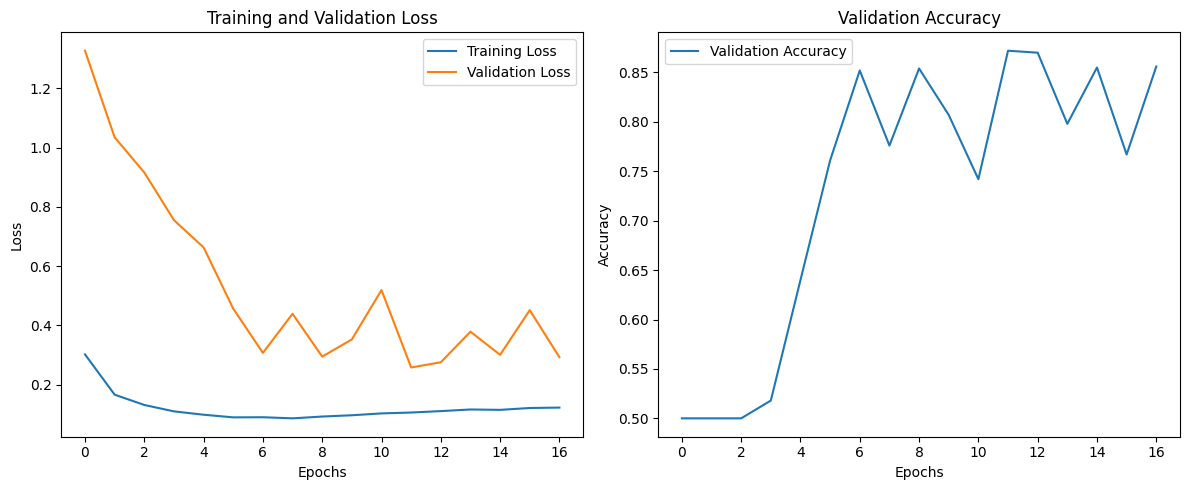

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import csv

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the Feed-Forward Neural Network (FFNN)
class CombinedModel(nn.Module):
    def __init__(self, input_dim):
        super(CombinedModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 2)  
        )

    def forward(self, combined_input):
        logits = self.network(combined_input)
        return logits

# Convert to tensors and datasets
y_train = np.array(y_train, dtype=np.int64)
y_test = np.array(y_test, dtype=np.int64)

X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

train_dataset = TensorDataset(torch.tensor(X_train).to(device), torch.tensor(y_train).to(device))
test_dataset = TensorDataset(torch.tensor(X_test).to(device), torch.tensor(y_test).to(device))

batch_size = 32
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model setup
input_dim = X_train.shape[1]
model = CombinedModel(input_dim=input_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)

# Early stopping parameters
early_stopping = True
patience = 5
patience_counter = 0
best_metric = 0

# For visualization
train_losses = []
val_losses = []
val_accuracies = []

epochs = 25
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    
    for texts, labels in dataloader_train:
        texts, labels = texts.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(texts)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        epoch_loss += loss.item()
    
    train_losses.append(epoch_loss / len(dataloader_train))  
    
   
    model.eval()
    val_loss = 0
    y_preds = []
    y_golds = []
    with torch.no_grad():
        for texts, labels in dataloader_test:
            texts, labels = texts.to(device), labels.to(device)
            outputs = model(texts)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            y_pred = torch.argmax(outputs, dim=1)
            y_preds.extend(y_pred.cpu().numpy())
            y_golds.extend(labels.cpu().numpy())
    
    
    val_losses.append(val_loss / len(dataloader_test))
    val_accuracy = accuracy_score(y_golds, y_preds)
    val_accuracies.append(val_accuracy)
    
    scheduler.step(val_accuracy)
    
    
    if val_accuracy > best_metric:
        best_metric = val_accuracy
        patience_counter = 0
        torch.save(model, "best_model_combination.pt")
    else:
        patience_counter += 1
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    if patience_counter >= patience:
        print(f"Stopping early at epoch {epoch+1}")
        break


model = torch.load("best_model_combination.pt").to(device)


model.eval()
y_preds = []
y_golds = []


with open('predictions_debug.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Actual Label', 'Predicted Label'])
    
    with torch.no_grad():
        for texts, labels in dataloader_test:
            texts, labels = texts.to(device), labels.to(device)
            y_pred = torch.argmax(model(texts), dim=1)
            y_preds.extend(y_pred.cpu().numpy())
            y_golds.extend(labels.cpu().numpy())
            for actual, pred in zip(labels.cpu().numpy(), y_pred.cpu().numpy()):
                writer.writerow([actual, pred])


accuracy = accuracy_score(y_golds, y_preds)
f1 = f1_score(y_golds, y_preds, average='weighted')
precision = precision_score(y_golds, y_preds, average='weighted')
recall = recall_score(y_golds, y_preds, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


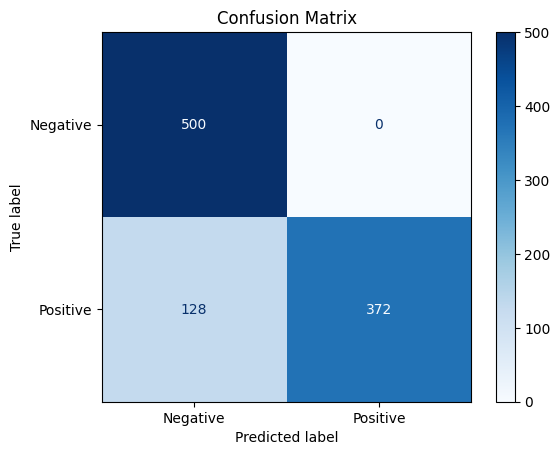

True Negatives: 500
False Positives: 0
False Negatives: 128
True Positives: 372


In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_golds, y_preds, labels=[0, 1])  # Assuming binary classification with labels 0 and 1

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title("Confusion Matrix")
plt.show()

# Print confusion matrix values
print(f"True Negatives: {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives: {cm[1, 1]}")
